In [5]:
import networkx as nx

from fair_cc_functions import *
import matplotlib.pyplot as plt
import numpy as np

nodes = [i for i in range(10, 61, 2)]
iters = 1000

In [6]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def stats_complete(unfair_graph):
    stats = []
    nodes = len(unfair_graph.nodes)
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    fair_cluster = cc_pivot(fair_graph)
    costs = cost(fair_cluster, unfair_graph)
    stats.append(costs)
    return stats

def stats_incomplete(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes())
    if nodes < 4: return -1
    for j in range(iteration):
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations_incomplete(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

# random vs. random plot
plt.rc('font', size=11)
def draw_boxplot(to_plot,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):

    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/(j) for i,j in zip(to_plot, np.min(to_plot, axis=1))], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

In [ ]:
# stats for scenario 1
# always same costs as already optimal
res0 = []
for i in range(10, 61, 2):
    unfair_graph = generate_complete_graph(i)
    res0.append(stats_complete(unfair_graph))
max_calc_cost = [i*i/4 for i in nodes]

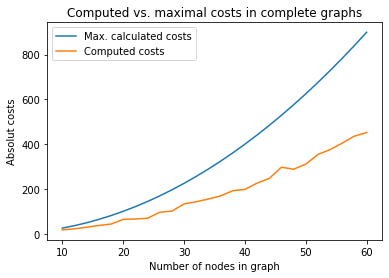

In [4]:
plt.plot(nodes, max_calc_cost, label='Max. calculated costs')
plt.plot(nodes, res0, label='Computed costs')
plt.ylabel('Absolut costs')
plt.xlabel('Number of nodes in graph')
plt.title('Computed vs. maximal costs in complete graphs')
plt.legend()
plt.savefig('../comp_vs_calc_cost_complete_graph.png')
plt.savefig('CompleteGraphsPlots/comp_vs_calc_cost_complete_graph.png')
plt.show()

In [5]:
# similar density of incomplete graphs
# probability for (+), resp. (-), is 0.5 in red and blue subgraphs => expected same density
rnd_rnd = []
for i in range(10, 61, 2):
    unfair_graph = generate_incomplete_graph(i)
    stat = stats_incomplete(unfair_graph, iteration=iters)
    rnd_rnd.append(stat)

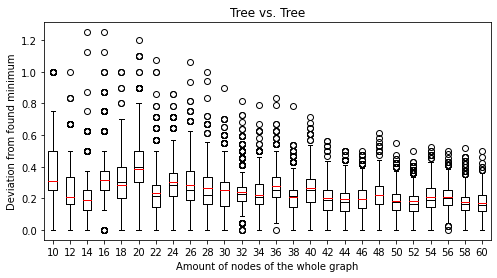

In [7]:
# red/blue subgraphs are both sparse (regarding (+) relations)
tree_tree, tree_star, star_star, cyc_cyc = [], [], [], []
cyc_star, cyc_tree = [],[]
for i in range(10, 61, 2):
    tree_tree_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'bal_bin_tree')
    tree_tree.append(stats_incomplete(tree_tree_graph, iteration=iters))


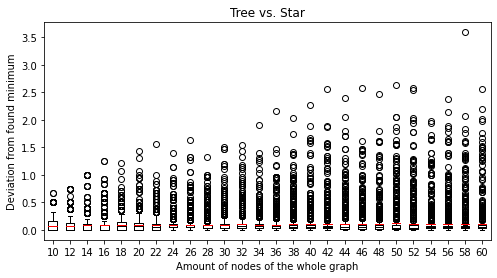

In [8]:
for i in range(10, 61,2):
    tree_star_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'star')
    tree_star.append(stats_incomplete(tree_star_graph, iteration=iters))


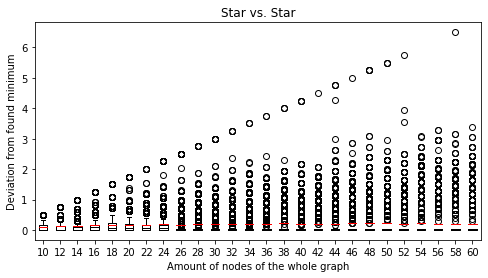

In [9]:
for i in range(10, 61, 2):
    star_star_graph, b,r = generate_red_blue_graph(i, 'star', 'star')
    star_star.append(stats_incomplete(star_star_graph, iteration=iters))


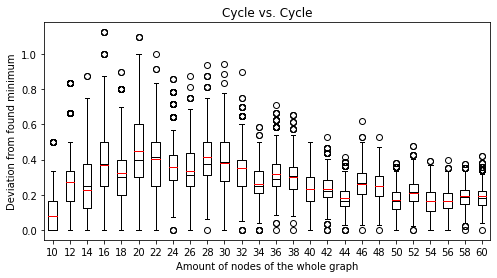

In [10]:
for i in range(10, 61, 2):
    cyc_cyc_graph, b, r = generate_red_blue_graph(i, 'circle', 'circle')
    cyc_cyc.append(stats_incomplete(cyc_cyc_graph, iteration=iters))


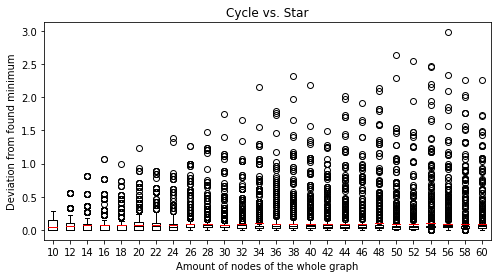

In [11]:
for i in range(10, 61, 2):
    cyc_star_graph, b, r = generate_red_blue_graph(i, 'circle', 'star')
    cyc_star.append(stats_incomplete(cyc_star_graph, iteration=iters))


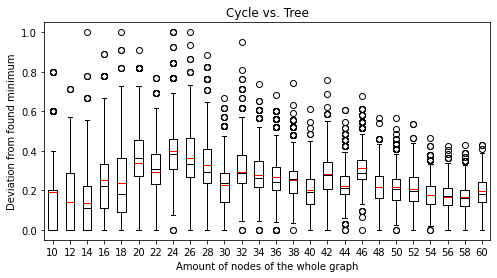

In [12]:
for i in range(10, 61, 2):
    cyc_tree_graph, b, r = generate_red_blue_graph(i, 'circle', 'bal_bin_tree')
    cyc_tree.append(stats_incomplete(cyc_tree_graph, iteration=iters))


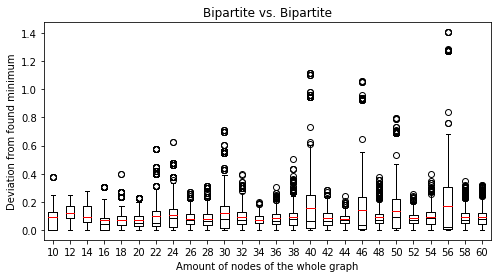

In [13]:
# red/blue subgraphs are both dense (regarding (+) relations)
bipar_bipar =[]
bipar_3par = []
threepar_3par = []
for i in range(10, 61, 2):
    bipar_bipar_grap, b, r  = generate_red_blue_graph(i, 'bipartite', 'bipartite')
    bipar_bipar.append(stats_incomplete(bipar_bipar_grap, iteration=iters))


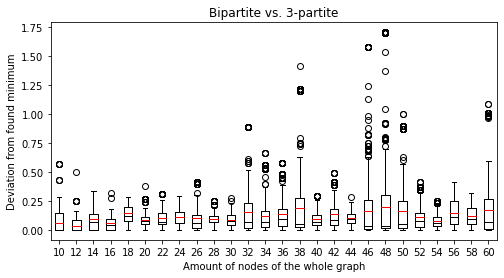

In [14]:
for i in range(10, 61, 2):
    bipar_3par_graph, b, r = generate_red_blue_graph(i, 'bipartite', '3partite')
    bipar_3par.append(stats_incomplete(bipar_3par_graph, iteration=iters))


In [ ]:
for i in range(10, 61, 2):
    threepar_3par_graph, b, r = generate_red_blue_graph(i, '3partite', '3partite')
    threepar_3par.append(stats_incomplete(threepar_3par_graph, iteration=iters))
    # clique_clique_graph = generate_red_blue_graph(i, 'clique', 'clique')
    # clique_clique.append(stats_incomplete(clique_clique_graph, iteration=50))
    # bipar_clique_graph = generate_red_blue_graph(i, 'clique', 'bipartite')
    # bipar_clique.append(stats_incomplete(bipar_clique_graph, iteration=50))

In [76]:
erd_ren09 = []
for i in range(10, 61, 2):
    erd_ren_graph, b, r = generate_red_blue_graph(i, 'erdos_renyi', 'erdos_renyi', p1 = 0.9, p2=0.9)
    erd_ren09.append(stats_incomplete(erd_ren_graph, iteration=iters))
erd_ren07 = []
for i in range(10, 61, 2):
    erd_ren_graph, b, r = generate_red_blue_graph(i, 'erdos_renyi', 'erdos_renyi')
    erd_ren07.append(stats_incomplete(erd_ren_graph, iteration=iters))

/tmp/ipykernel_13487/3335701636.py:45: RuntimeWarning: invalid value encountered in true_divide
  ax1.boxplot([i/(j) for i,j in zip(to_plot, np.min(to_plot, axis=1))], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})


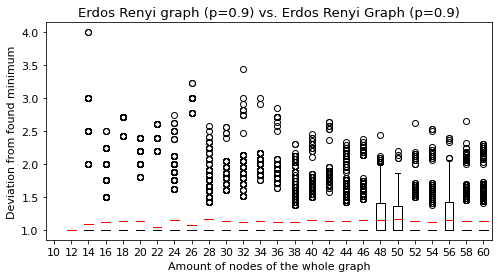

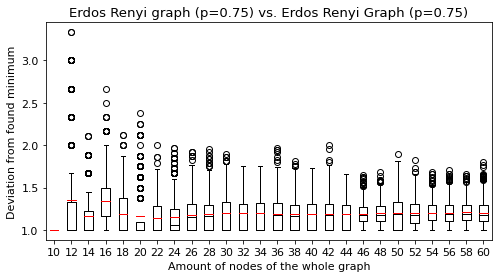

In [77]:
draw_boxplot(erd_ren09, 'Erdos Renyi graph (p=0.9) vs. Erdos Renyi Graph (p=0.9)', name='erd_ren_09')
draw_boxplot(erd_ren07, 'Erdos Renyi graph (p=0.75) vs. Erdos Renyi Graph (p=0.75)', name='erd_ren_07')

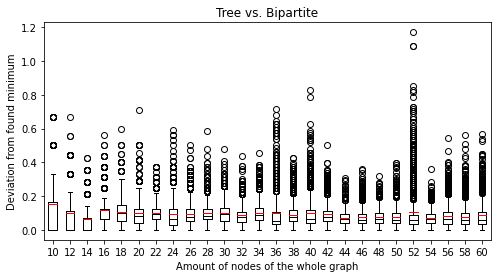

In [16]:
# red/blue subgraph are dense/sparse (regarding + relations)
tree_bipar, star_bipar, cyc_bipar = [], [], []
tree_3par, star_3par, cyc_3par = [],[],[]
for i in range(10, 61, 2):
    tree_bipar_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', 'bipartite')
    tree_bipar.append(stats_incomplete(tree_bipar_graph, iteration=iters))


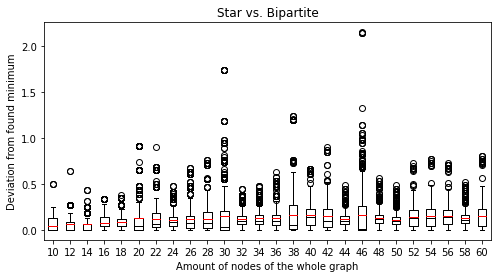

In [17]:
for i in range(10, 61, 2):
    star_bipar_graph, b, r = generate_red_blue_graph(i, 'star', 'bipartite')
    star_bipar.append(stats_incomplete(star_bipar_graph, iteration=iters))


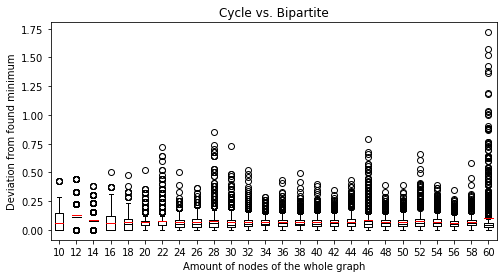

In [18]:
for i in range(10, 61, 2):
    cyc_bipar_graph, b, r = generate_red_blue_graph(i, 'circle', 'bipartite')
    cyc_bipar.append(stats_incomplete(cyc_bipar_graph, iteration=iters))


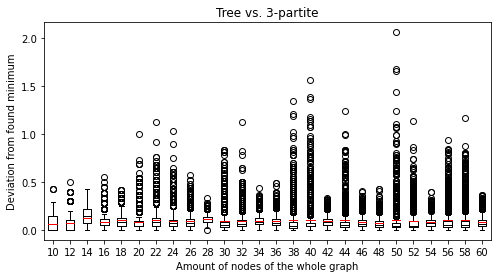

In [19]:
for i in range(10, 61, 2):
    tree_3par_graph, b, r = generate_red_blue_graph(i, 'bal_bin_tree', '3partite')
    tree_3par.append(stats_incomplete(tree_3par_graph, iteration=iters))


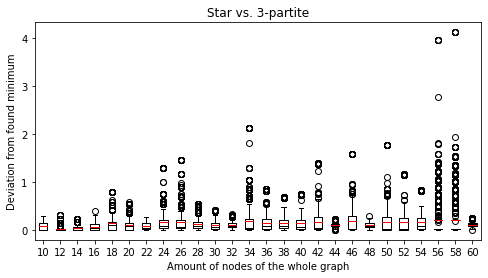

In [20]:
for i in range(10, 61, 2):
    star_3par_graph , b, r= generate_red_blue_graph(i, 'star', '3partite')
    star_3par.append(stats_incomplete(star_3par_graph, iteration=iters))


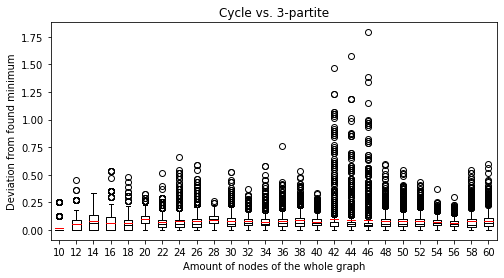

In [21]:
for i in range(10, 61, 2):
    cyc_3par_graph, b, r = generate_red_blue_graph(i, 'circle', '3partite')
    cyc_3par.append(stats_incomplete(cyc_3par_graph, iteration=iters))


In [82]:
def draw_multi_boxplot(to_plot,
                       title='Title',
                       ylabel ='Deviation from found minimum',
                       xlabel='Amount of nodes of the whole graph',
                       name='boxplot'
                        ):
    plt.rc('font', size=18)
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    n_plots = len(to_plot)
    positions = [-0.3, 0, 0.3]
    colors=['black', 'blue', 'green']
    for i in range(n_plots):
        draw_plot(to_plot[i], ax, positions[i], colors[i], 'white', title, ylabel, xlabel)
    plt.xticks([i for i in range(len(nodes))], nodes)
    # plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()


# function to get multiple boxplots as one figure
def draw_plot(data, ax, offset, edge_color, fill_color, title, ylabel, xlabel):
    pos = np.arange(len(data))+offset
    bp = ax.boxplot([(i-j)/(k-j) for i,j,k in zip(data, np.min(data, axis=1), 3*np.min(data, axis=1))], positions= pos, widths=0.2, patch_artist=True,
                    showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'}, flierprops={'markeredgecolor':edge_color})
    for element in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)


In [83]:
erd_ren = [[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [8, 6, 6, 8, 6, 8, 6, 6, 6, 6, 6, 8, 16, 6, 6, 6, 8, 8, 6, 8, 6, 6, 8, 6, 6, 6, 8, 6, 8, 8, 8, 8, 8, 6, 18, 6, 8, 8, 14, 6, 6, 6, 6, 8, 8, 8, 12, 14, 6, 6, 8, 6, 6, 6, 6, 8, 6, 8, 8, 8, 8, 8, 6, 8, 10, 14, 8, 8, 6, 6, 14, 14, 6, 10, 6, 6, 16, 6, 6, 6, 6, 14, 8, 8, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 16, 14, 6, 6, 8, 8, 18, 6, 8, 6, 6, 8, 8, 6, 16, 8, 16, 6, 6, 6, 6, 12, 6, 12, 6, 8, 6, 6, 6, 12, 14, 6, 6, 8, 8, 6, 8, 6, 6, 6, 6, 8, 12, 8, 6, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8, 6, 6, 8, 12, 6, 6, 8, 8, 6, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 8, 12, 10, 6, 8, 6, 6, 8, 10, 6, 6, 6, 6, 6, 8, 6, 6, 6, 8, 12, 12, 6, 8, 10, 8, 6, 6, 6, 8, 8, 6, 8, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 8, 6, 12, 6, 8, 8, 6, 18, 8, 6, 14, 6, 6, 8, 16, 6, 6, 8, 6, 8, 12, 8, 8, 6, 6, 8, 8, 6, 6, 8, 8, 16, 6, 8, 16, 6, 8, 8, 8, 6, 18, 8, 8, 8, 8, 6, 6, 8, 16, 8, 14, 8, 12, 8, 8, 8, 16, 18, 6, 8, 6, 6, 6, 8, 14, 6, 6, 6, 16, 6, 6, 6, 6, 8, 12, 6, 6, 8, 8, 6, 6, 8, 8, 6, 6, 6, 6, 14, 8, 8, 8, 6, 6, 6, 8, 12, 16, 6, 14, 8, 6, 6, 6, 6, 6, 14, 12, 6, 8, 8, 8, 6, 6, 6, 8, 6, 8, 12, 6, 6, 10, 8, 6, 6, 14, 8, 8, 6, 8, 6, 8, 6, 6, 6, 8, 8, 6, 8, 6, 6, 6, 6, 8, 8, 10, 8, 6, 8, 6, 14, 10, 6, 10, 6, 8, 8, 8, 12, 10, 16, 16, 6, 8, 8, 6, 8, 6, 6, 6, 6, 8, 6, 8, 8, 6, 8, 6, 10, 18, 12, 8, 8, 6, 6, 6, 6, 6, 6, 8, 8, 6, 16, 6, 6, 6, 6, 8, 18, 8, 6, 6, 6, 12, 8, 16, 6, 16, 12, 8, 10, 14, 6, 6, 6, 14, 12, 6, 6, 14, 6, 6, 6, 8, 8, 6, 8, 6, 8, 8, 16, 8, 6, 8, 14, 12, 8, 14, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 12, 10, 8, 10, 6, 6, 8, 6, 8, 6, 6, 8, 8, 6, 8, 8, 8, 8, 8, 14, 8, 8, 8, 6, 6, 8, 8, 12, 6, 8, 8, 6, 6, 6, 8, 8, 8, 6, 6, 6, 6, 8, 10, 8, 6, 6, 6, 6, 8, 8, 8, 6, 8, 6, 6, 8, 8, 6, 16, 6, 6, 8, 10, 8, 6, 6, 8, 6, 6, 14, 6, 6, 6, 20, 6, 6, 8, 6, 16, 6, 6, 8, 6, 6, 8, 8, 8, 16, 6, 10, 8, 18, 6, 6, 16, 12, 8, 6, 6, 12, 8, 8, 8, 6, 6, 6, 6, 18, 6, 18, 8, 10, 8, 12, 12, 8, 12, 8, 8, 16, 10, 6, 6, 8, 8, 6, 8, 8, 6, 6, 10, 8, 6, 6, 14, 8, 8, 8, 12, 8, 8, 16, 6, 6, 8, 6, 6, 8, 6, 6, 6, 8, 8, 6, 6, 12, 6, 8, 6, 6, 6, 6, 6, 8, 6, 8, 8, 6, 8, 6, 6, 8, 10, 8, 16, 6, 14, 16, 6, 6, 16, 12, 16, 8, 8, 12, 10, 6, 8, 8, 8, 8, 12, 6, 16, 6, 6, 8, 8, 16, 8, 8, 6, 6, 14, 6, 12, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 16, 8, 6, 6, 6, 8, 8, 6, 6, 8, 8, 6, 8, 6, 6, 6, 6, 8, 8, 6, 6, 8, 14, 16, 6, 8, 8, 6, 6, 8, 8, 8, 18, 8, 8, 10, 8, 6, 14, 8, 8, 8, 6, 8, 6, 8, 6, 6, 6, 6, 10, 6, 6, 8, 6, 6, 8, 16, 6, 8, 6, 12, 8, 8, 6, 16, 6, 6, 8, 8, 12, 12, 6, 6, 6, 6, 6, 6, 8, 8, 8, 16, 6, 6, 6, 6, 8, 6, 8, 8, 12, 6, 8, 6, 6, 8, 12, 6, 6, 6, 8, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 14, 6, 8, 6, 6, 8, 8, 6, 6, 8, 6, 12, 14, 6, 8, 6, 8, 12, 14, 8, 8, 6, 8, 6, 14, 6, 6, 8, 8, 8, 8, 6, 6, 8, 8, 8, 6, 6, 8, 16, 8, 6, 10, 8, 6, 12, 6, 6, 8, 6, 16, 8, 10, 6, 18, 16, 12, 6, 8, 8, 8, 14, 6, 8, 12, 6, 8, 6, 8, 16, 8, 8, 6, 6, 6, 6, 8, 6, 8, 14, 6, 6, 8, 6, 6, 8, 16, 8, 6, 6, 8, 6, 8, 8, 6, 8, 10, 8, 6, 8, 8, 8, 6, 8, 6, 6, 8, 8, 8, 6, 8, 6, 8, 8, 6, 8, 6, 12, 12, 6, 8, 6, 6, 6, 6, 12, 6, 8, 14, 20, 8, 6, 6, 8, 6, 6, 8, 8, 14, 12, 8, 6, 6, 8, 6, 10, 6, 6, 8, 6, 16, 6, 8, 8, 6, 10, 6, 16, 8, 8, 6, 6, 8, 10, 14, 12, 6, 6, 6, 8, 6, 8, 14, 6, 6, 8, 6, 6, 6, 8, 6, 8, 6, 8, 6, 12, 10, 16, 12, 10, 6, 8, 6, 6, 6, 14, 8, 6, 6, 10, 6, 12], [13, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 13, 13, 9, 9, 9, 9, 13, 9, 9, 9, 9, 15, 9, 9, 15, 15, 9, 9, 9, 9, 9, 9, 9, 9, 15, 13, 9, 9, 9, 9, 17, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 17, 9, 9, 17, 15, 11, 11, 9, 9, 9, 9, 9, 9, 19, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 9, 15, 9, 9, 9, 13, 9, 9, 11, 11, 9, 9, 11, 9, 15, 9, 9, 9, 9, 13, 13, 9, 15, 9, 9, 9, 9, 11, 13, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 17, 9, 13, 9, 9, 9, 9, 11, 13, 11, 15, 9, 13, 9, 9, 15, 15, 9, 13, 13, 9, 13, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 13, 9, 15, 9, 15, 11, 13, 9, 9, 9, 15, 13, 13, 9, 9, 9, 9, 9, 9, 13, 15, 9, 17, 17, 9, 9, 9, 9, 15, 9, 9, 9, 9, 9, 9, 9, 11, 15, 13, 9, 9, 15, 9, 9, 9, 13, 9, 9, 15, 9, 15, 9, 11, 9, 9, 9, 13, 11, 11, 9, 9, 9, 9, 9, 17, 11, 9, 9, 9, 9, 9, 9, 9, 9, 17, 9, 15, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 11, 9, 13, 9, 13, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 15, 9, 9, 9, 15, 13, 9, 13, 9, 11, 15, 15, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 15, 13, 9, 15, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 15, 9, 15, 13, 9, 9, 9, 9, 9, 15, 15, 9, 9, 15, 9, 9, 13, 13, 13, 9, 9, 13, 13, 11, 9, 9, 9, 9, 11, 11, 9, 17, 9, 13, 9, 9, 13, 13, 9, 15, 9, 9, 9, 9, 9, 9, 15, 13, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 9, 13, 11, 13, 13, 13, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 9, 9, 9, 15, 11, 9, 17, 9, 9, 9, 9, 13, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 17, 9, 13, 13, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 17, 9, 9, 9, 15, 9, 9, 13, 13, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 15, 9, 9, 13, 9, 9, 11, 9, 9, 9, 9, 13, 15, 9, 9, 9, 15, 9, 13, 9, 15, 9, 9, 9, 15, 9, 9, 15, 9, 9, 17, 9, 9, 13, 9, 9, 9, 9, 9, 9, 15, 9, 15, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 17, 9, 9, 13, 9, 11, 9, 9, 9, 9, 9, 9, 13, 9, 9, 13, 9, 9, 9, 15, 15, 9, 9, 9, 9, 15, 13, 9, 15, 9, 11, 9, 19, 9, 17, 11, 9, 13, 9, 11, 15, 13, 15, 11, 13, 9, 9, 9, 13, 13, 9, 15, 9, 9, 9, 9, 13, 11, 9, 9, 9, 9, 15, 9, 15, 9, 15, 9, 9, 15, 9, 17, 15, 9, 9, 9, 9, 9, 15, 11, 11, 9, 13, 13, 9, 15, 11, 9, 15, 11, 13, 9, 9, 9, 9, 9, 13, 15, 9, 15, 17, 13, 13, 9, 15, 9, 9, 13, 13, 9, 9, 9, 9, 15, 11, 13, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 19, 9, 9, 9, 9, 9, 11, 9, 15, 13, 9, 9, 9, 15, 9, 15, 9, 9, 9, 9, 9, 9, 13, 13, 9, 9, 11, 13, 9, 9, 9, 9, 9, 9, 17, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 9, 9, 13, 9, 9, 13, 9, 9, 9, 13, 9, 15, 9, 15, 15, 9, 9, 9, 9, 13, 9, 15, 9, 9, 9, 9, 9, 11, 9, 13, 15, 15, 9, 9, 15, 11, 9, 9, 17, 9, 13, 9, 9, 9, 9, 9, 9, 13, 9, 13, 9, 13, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 11, 15, 13, 13, 9, 15, 9, 9, 15, 9, 9, 11, 13, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 9, 15, 9, 9, 9, 9, 9, 13, 13, 9, 9, 15, 9, 9, 9, 9, 13, 9, 9, 15, 13, 9, 9, 9, 9, 9, 9, 9, 15, 13, 13, 13, 13, 9, 9, 15, 9, 17, 9, 15, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 11, 9, 9, 9, 9, 11, 13, 9, 9, 9, 9, 15, 13, 9, 9, 9, 15, 9, 9, 9, 9, 13, 9, 9, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 9, 9, 15, 9, 9, 9, 9, 15, 9, 9, 9, 9, 17, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 15, 9, 15, 9, 15, 13, 15, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 13, 9, 9, 13, 9, 9, 9, 15, 15, 9, 17, 15, 9, 17, 9, 15, 9, 13, 13, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 9, 11, 11, 9, 9, 9, 13, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 15, 15, 9, 13, 9, 9, 9, 9, 15, 9, 9, 9, 15, 9, 9, 9, 15, 9, 9, 9, 9, 9, 9], [14, 14, 20, 14, 14, 16, 14, 14, 14, 16, 18, 16, 14, 20, 16, 16, 22, 14, 12, 16, 24, 20, 14, 16, 14, 18, 14, 22, 14, 14, 14, 14, 16, 20, 20, 20, 18, 14, 16, 22, 14, 14, 18, 14, 22, 14, 14, 14, 20, 14, 12, 24, 20, 22, 18, 22, 14, 14, 14, 20, 22, 14, 14, 22, 14, 24, 14, 24, 20, 14, 14, 14, 14, 14, 14, 14, 16, 24, 14, 22, 14, 14, 26, 14, 14, 18, 14, 16, 24, 14, 22, 14, 14, 14, 14, 22, 22, 14, 16, 14, 20, 22, 20, 14, 14, 18, 18, 14, 14, 14, 14, 14, 14, 14, 12, 20, 14, 16, 16, 14, 14, 18, 14, 14, 14, 12, 14, 28, 14, 14, 14, 30, 14, 16, 12, 14, 14, 18, 20, 20, 16, 32, 14, 14, 14, 14, 22, 14, 20, 22, 14, 24, 14, 24, 14, 20, 14, 14, 12, 20, 12, 14, 14, 14, 16, 14, 14, 12, 14, 12, 16, 22, 20, 12, 14, 14, 14, 14, 14, 22, 14, 14, 14, 16, 20, 16, 20, 14, 14, 14, 12, 14, 26, 18, 14, 14, 14, 20, 14, 14, 22, 14, 26, 12, 22, 14, 14, 20, 22, 14, 14, 14, 14, 22, 18, 14, 14, 20, 14, 14, 14, 14, 18, 14, 14, 14, 22, 14, 12, 14, 18, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 18, 14, 18, 14, 14, 14, 16, 16, 14, 14, 14, 22, 14, 14, 24, 14, 14, 16, 14, 22, 14, 16, 14, 14, 14, 14, 14, 18, 22, 20, 14, 16, 16, 14, 14, 14, 28, 14, 14, 14, 14, 14, 14, 20, 20, 14, 16, 14, 22, 22, 14, 12, 14, 14, 14, 20, 14, 16, 14, 22, 16, 14, 12, 14, 18, 18, 16, 14, 12, 20, 16, 14, 14, 14, 20, 22, 14, 14, 14, 14, 22, 18, 14, 14, 16, 14, 14, 14, 14, 20, 20, 16, 14, 14, 14, 18, 14, 24, 20, 14, 22, 18, 14, 14, 16, 12, 16, 14, 16, 14, 14, 12, 24, 14, 24, 16, 20, 14, 22, 14, 24, 20, 20, 14, 16, 14, 14, 14, 22, 14, 18, 16, 14, 14, 14, 14, 20, 14, 18, 14, 14, 14, 14, 14, 22, 16, 14, 14, 14, 14, 14, 14, 16, 14, 18, 14, 22, 22, 20, 14, 14, 14, 14, 18, 12, 20, 14, 22, 14, 14, 20, 14, 14, 14, 14, 22, 14, 14, 14, 14, 14, 14, 14, 18, 14, 14, 16, 14, 20, 14, 14, 14, 14, 14, 12, 14, 20, 14, 24, 22, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 20, 12, 14, 20, 16, 14, 22, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 26, 14, 14, 14, 14, 14, 14, 14, 16, 16, 22, 14, 20, 20, 14, 20, 14, 22, 14, 20, 14, 14, 14, 16, 14, 22, 14, 14, 14, 14, 14, 14, 14, 16, 14, 16, 20, 22, 14, 14, 14, 22, 14, 14, 14, 14, 14, 14, 12, 20, 14, 14, 20, 14, 14, 22, 14, 14, 14, 14, 20, 18, 14, 20, 16, 14, 14, 16, 14, 14, 18, 20, 20, 14, 28, 14, 14, 26, 18, 28, 14, 20, 14, 14, 22, 18, 22, 20, 26, 14, 14, 22, 20, 22, 16, 14, 12, 18, 14, 12, 16, 14, 14, 14, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 24, 24, 14, 14, 14, 14, 14, 14, 14, 14, 24, 20, 14, 14, 14, 14, 14, 14, 14, 20, 12, 14, 20, 14, 20, 16, 22, 22, 16, 22, 14, 22, 22, 14, 14, 20, 14, 14, 14, 14, 14, 14, 20, 14, 14, 14, 20, 14, 14, 14, 20, 14, 22, 14, 26, 14, 20, 20, 20, 26, 14, 22, 14, 14, 14, 14, 14, 14, 14, 18, 20, 22, 14, 14, 22, 14, 14, 18, 22, 14, 14, 14, 20, 14, 20, 14, 20, 14, 14, 14, 14, 14, 26, 12, 20, 14, 24, 24, 14, 14, 14, 14, 16, 14, 20, 14, 14, 12, 12, 20, 14, 14, 14, 14, 14, 20, 14, 14, 14, 14, 14, 14, 14, 22, 14, 14, 14, 16, 14, 18, 14, 14, 14, 14, 14, 14, 14, 14, 14, 20, 24, 14, 14, 22, 14, 14, 14, 14, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 18, 26, 14, 18, 14, 14, 14, 16, 22, 22, 20, 14, 14, 14, 12, 14, 14, 14, 22, 14, 14, 14, 14, 14, 14, 14, 18, 14, 14, 14, 22, 14, 22, 14, 14, 14, 14, 14, 14, 20, 14, 14, 14, 14, 18, 26, 22, 14, 14, 14, 22, 14, 14, 14, 14, 16, 24, 14, 14, 14, 18, 18, 22, 26, 14, 14, 14, 16, 14, 18, 22, 14, 14, 22, 14, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 18, 24, 20, 18, 14, 14, 14, 14, 14, 16, 18, 14, 14, 14, 14, 14, 14, 20, 14, 20, 12, 14, 14, 14, 22, 24, 26, 22, 14, 14, 14, 12, 12, 14, 14, 14, 18, 16, 22, 14, 26, 22, 22, 14, 14, 22, 24, 14, 14, 14, 14, 14, 14, 14, 16, 18, 24, 14, 20, 16, 14, 20, 18, 14, 14, 20, 14, 20, 16, 12, 14, 14, 14, 14, 18, 26, 14, 14, 14, 14, 12, 16, 14, 14, 14, 12, 14, 14, 14, 20, 14, 20, 14, 12, 24, 14, 22, 24, 18, 14, 14, 14, 14, 14, 22, 12, 20, 14, 22, 14, 14, 14, 14, 14, 14, 14, 20, 14, 14, 20, 14, 14, 14, 12, 14, 14, 14, 18, 14, 18, 14, 14, 14, 24, 16, 22, 22, 14, 14, 20, 14, 14, 14, 20, 16, 14, 14, 20, 14, 14, 12, 14, 14, 14, 14, 22, 14, 14, 12, 12, 22, 14, 14, 14, 14, 14, 14, 20, 14, 18, 14, 16, 14], [24, 20, 16, 16, 16, 16, 22, 16, 24, 16, 16, 16, 16, 22, 16, 20, 16, 16, 16, 30, 16, 22, 24, 20, 20, 22, 16, 16, 24, 26, 16, 16, 16, 20, 20, 16, 16, 16, 16, 24, 16, 22, 22, 20, 26, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 20, 16, 28, 16, 16, 20, 16, 24, 24, 16, 16, 26, 16, 16, 16, 24, 28, 22, 16, 22, 16, 20, 16, 30, 24, 26, 16, 16, 20, 24, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 22, 24, 16, 24, 24, 24, 22, 24, 20, 16, 24, 28, 20, 24, 24, 22, 16, 16, 26, 16, 16, 16, 20, 16, 16, 16, 22, 20, 16, 16, 22, 24, 16, 32, 16, 16, 24, 20, 16, 16, 28, 16, 16, 16, 16, 20, 22, 16, 16, 24, 16, 16, 16, 26, 16, 16, 20, 24, 16, 16, 24, 24, 16, 16, 16, 16, 16, 16, 16, 16, 24, 16, 16, 20, 16, 24, 26, 24, 20, 16, 16, 22, 16, 16, 16, 16, 20, 16, 24, 22, 22, 24, 16, 16, 22, 16, 16, 22, 16, 24, 16, 26, 16, 20, 16, 26, 16, 16, 16, 24, 26, 16, 16, 16, 28, 20, 16, 16, 16, 16, 16, 16, 16, 20, 16, 16, 20, 16, 30, 24, 16, 16, 24, 20, 16, 26, 16, 16, 24, 16, 24, 16, 16, 16, 24, 16, 16, 22, 16, 16, 26, 16, 22, 24, 16, 16, 16, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 26, 22, 16, 20, 16, 16, 16, 16, 20, 16, 16, 16, 26, 16, 16, 20, 16, 16, 16, 16, 20, 16, 16, 16, 16, 16, 16, 20, 26, 16, 20, 22, 16, 16, 16, 26, 20, 30, 16, 22, 24, 26, 26, 24, 16, 16, 16, 20, 16, 24, 16, 24, 16, 22, 16, 16, 16, 16, 16, 32, 20, 20, 24, 28, 20, 16, 16, 26, 24, 20, 16, 28, 22, 16, 22, 16, 16, 16, 16, 24, 16, 16, 16, 22, 20, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 24, 16, 20, 16, 16, 20, 16, 16, 16, 16, 22, 28, 26, 16, 16, 28, 16, 16, 16, 16, 16, 22, 26, 16, 16, 16, 20, 20, 24, 16, 16, 28, 20, 28, 20, 24, 22, 16, 16, 16, 22, 16, 16, 26, 16, 22, 16, 20, 16, 16, 28, 16, 16, 16, 16, 24, 16, 16, 16, 24, 16, 16, 16, 16, 16, 16, 16, 20, 16, 20, 16, 16, 16, 28, 16, 26, 24, 16, 28, 16, 16, 20, 16, 16, 22, 20, 22, 16, 24, 16, 24, 20, 20, 16, 24, 22, 24, 16, 26, 16, 22, 16, 24, 22, 28, 16, 16, 16, 20, 16, 22, 22, 16, 22, 16, 16, 16, 16, 26, 16, 26, 24, 16, 26, 22, 16, 24, 16, 16, 16, 24, 16, 30, 20, 16, 16, 30, 26, 16, 16, 16, 16, 16, 22, 20, 16, 16, 24, 16, 16, 20, 26, 16, 16, 20, 24, 20, 16, 16, 16, 30, 16, 22, 16, 16, 16, 16, 16, 16, 20, 16, 16, 22, 16, 24, 16, 24, 16, 16, 16, 16, 22, 22, 16, 16, 24, 16, 16, 22, 16, 16, 16, 24, 16, 16, 20, 16, 24, 26, 22, 16, 26, 22, 24, 16, 28, 16, 16, 26, 22, 16, 20, 24, 16, 22, 22, 24, 28, 24, 24, 26, 16, 24, 22, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 24, 16, 22, 16, 28, 20, 20, 20, 16, 24, 20, 16, 16, 16, 16, 24, 28, 22, 16, 16, 16, 22, 24, 16, 16, 22, 16, 16, 16, 16, 16, 16, 16, 20, 20, 24, 16, 26, 20, 16, 16, 22, 22, 28, 16, 16, 24, 16, 16, 16, 16, 16, 16, 22, 28, 26, 16, 16, 16, 22, 26, 16, 22, 16, 16, 24, 22, 28, 24, 28, 16, 16, 26, 16, 16, 16, 16, 30, 16, 16, 16, 22, 16, 20, 24, 24, 16, 34, 24, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 24, 16, 16, 16, 16, 16, 24, 16, 16, 16, 26, 26, 24, 32, 24, 16, 24, 16, 16, 26, 22, 16, 20, 16, 16, 16, 24, 16, 16, 16, 20, 16, 16, 16, 16, 16, 16, 20, 16, 16, 16, 26, 16, 16, 16, 30, 16, 16, 16, 16, 24, 16, 16, 16, 20, 16, 16, 16, 16, 16, 22, 16, 16, 22, 22, 16, 20, 22, 16, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16, 24, 20, 16, 16, 20, 24, 16, 16, 16, 26, 16, 16, 16, 24, 26, 16, 16, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16, 20, 16, 16, 16, 16, 26, 22, 22, 16, 16, 26, 16, 26, 24, 16, 16, 22, 22, 16, 22, 16, 16, 24, 16, 16, 16, 24, 16, 22, 16, 16, 16, 16, 16, 24, 26, 16, 24, 16, 24, 16, 24, 16, 16, 16, 16, 16, 16, 24, 16, 16, 16, 16, 20, 30, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 22, 20, 24, 16, 20, 20, 16, 24, 16, 16, 16, 22, 16, 28, 16, 20, 16, 16, 20, 20, 16, 16, 16, 16, 16, 16, 16, 16, 28, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 20, 26, 22, 16, 24, 16, 22, 16, 28, 16, 24, 16, 20, 16, 24, 16, 16, 20, 16, 16, 16, 16, 28, 20, 16, 16, 16, 26, 20, 16, 16, 16, 26, 20, 16, 16, 24, 16, 16, 16, 16, 26, 32, 24, 26, 24, 24, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 20, 20, 22, 22, 16, 24, 16, 16, 16, 16, 16, 24, 28, 16, 30, 16, 16, 16, 16, 28, 20, 16, 26, 26, 16, 20, 16, 16, 16, 34, 20, 20, 16, 16, 22, 16], [26, 16, 28, 16, 16, 26, 34, 16, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16, 28, 28, 22, 16, 24, 26, 16, 16, 16, 16, 26, 26, 16, 16, 16, 16, 16, 28, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 22, 16, 16, 26, 16, 26, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 28, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 26, 16, 16, 16, 26, 16, 16, 16, 28, 16, 16, 22, 28, 16, 16, 16, 26, 16, 24, 28, 16, 16, 16, 22, 26, 16, 16, 16, 26, 16, 16, 16, 16, 26, 16, 16, 16, 26, 16, 16, 16, 26, 16, 16, 28, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 22, 16, 16, 16, 16, 16, 24, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 34, 16, 16, 16, 16, 26, 28, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 38, 26, 26, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 22, 26, 16, 28, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 24, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 26, 16, 34, 16, 16, 16, 16, 16, 24, 28, 16, 16, 16, 16, 36, 16, 16, 28, 16, 16, 16, 36, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 22, 16, 28, 16, 16, 16, 22, 16, 16, 16, 28, 16, 26, 16, 26, 16, 16, 26, 26, 16, 16, 16, 16, 16, 16, 16, 26, 24, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 16, 28, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 22, 16, 16, 16, 16, 26, 16, 16, 26, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 30, 16, 28, 22, 24, 16, 16, 16, 26, 16, 16, 16, 16, 26, 16, 28, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 24, 16, 16, 16, 28, 16, 24, 26, 16, 16, 16, 16, 16, 24, 30, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 26, 26, 26, 16, 16, 26, 26, 16, 24, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 34, 26, 16, 16, 16, 28, 16, 16, 16, 16, 16, 26, 16, 26, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 36, 16, 16, 26, 28, 16, 16, 16, 30, 16, 28, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 26, 16, 16, 16, 26, 16, 16, 16, 28, 16, 16, 26, 28, 16, 26, 16, 16, 16, 16, 16, 16, 22, 22, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 34, 16, 22, 26, 16, 22, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 28, 16, 26, 28, 16, 24, 26, 16, 16, 22, 16, 16, 16, 16, 16, 16, 28, 16, 16, 22, 16, 16, 26, 22, 28, 30, 16, 16, 16, 16, 34, 26, 26, 16, 16, 16, 16, 16, 22, 16, 16, 16, 26, 26, 16, 16, 22, 26, 16, 16, 26, 16, 16, 16, 28, 28, 16, 16, 16, 22, 16, 34, 16, 16, 22, 16, 22, 16, 16, 16, 16, 16, 16, 16, 28, 24, 24, 16, 16, 28, 16, 16, 16, 22, 16, 16, 28, 16, 26, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 28, 16, 26, 16, 16, 28, 16, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 24, 24, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 26, 16, 22, 26, 16, 16, 16, 30, 16, 16, 16, 16, 26, 16, 16, 16, 16, 26, 16, 28, 16, 16, 16, 16, 26, 16, 28, 28, 16, 16, 16, 16, 28, 16, 16, 16, 22, 16, 16, 16, 26, 16, 16, 16, 16, 28, 16, 16, 26, 26, 16, 16, 16, 28, 34, 16, 16, 16, 24, 16, 16, 16, 16, 16, 26, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 26, 26, 16, 16, 28, 16, 16, 16, 26, 16, 30, 22, 16, 26, 16, 28, 16, 16, 16, 26, 34, 16, 16, 16, 16, 16, 26, 16, 26, 16, 16, 16, 16, 26, 16, 16, 26, 26, 16, 28, 24, 16, 22, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 26, 16, 16, 16, 30, 16, 26, 16, 16, 26, 16, 16, 16, 28, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 22, 16, 16, 22, 16, 24, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 28, 16, 16, 22, 16, 26, 16, 16, 16, 16, 26, 16, 16, 24, 16, 16, 16, 16, 26, 16, 16, 26, 22, 26], [36, 28, 28, 28, 28, 28, 28, 34, 32, 34, 32, 28, 42, 28, 36, 28, 28, 44, 28, 28, 34, 38, 34, 28, 28, 36, 38, 28, 36, 28, 28, 28, 28, 28, 32, 28, 30, 28, 28, 36, 28, 28, 36, 32, 28, 28, 38, 28, 32, 32, 28, 28, 28, 28, 38, 40, 28, 28, 28, 28, 32, 28, 28, 28, 30, 30, 28, 28, 42, 38, 28, 28, 36, 36, 28, 30, 38, 46, 40, 36, 40, 28, 28, 28, 28, 32, 40, 34, 28, 28, 38, 28, 28, 36, 28, 28, 28, 28, 42, 42, 30, 36, 42, 28, 28, 28, 30, 28, 28, 28, 40, 28, 42, 28, 28, 44, 30, 28, 30, 36, 28, 40, 28, 28, 28, 38, 38, 28, 40, 32, 34, 34, 28, 28, 28, 36, 36, 28, 28, 38, 28, 42, 28, 28, 28, 28, 36, 34, 42, 38, 28, 32, 28, 28, 28, 42, 28, 28, 36, 28, 34, 42, 34, 28, 50, 40, 38, 44, 32, 34, 30, 32, 28, 28, 28, 28, 38, 28, 36, 28, 40, 36, 28, 40, 28, 36, 28, 28, 28, 28, 38, 36, 36, 30, 28, 28, 36, 30, 28, 36, 28, 28, 40, 28, 30, 28, 30, 38, 28, 38, 40, 28, 28, 34, 34, 28, 32, 44, 28, 28, 32, 28, 38, 30, 28, 32, 28, 34, 28, 28, 36, 38, 28, 28, 36, 28, 44, 38, 28, 28, 28, 28, 30, 28, 28, 48, 38, 40, 28, 28, 28, 34, 36, 28, 28, 28, 28, 44, 28, 32, 36, 32, 34, 28, 28, 28, 36, 28, 36, 28, 36, 28, 28, 28, 28, 28, 34, 44, 40, 28, 42, 38, 44, 28, 28, 34, 28, 32, 28, 42, 28, 36, 28, 28, 28, 40, 28, 28, 32, 28, 36, 40, 28, 42, 28, 42, 32, 30, 28, 28, 28, 34, 28, 32, 36, 28, 28, 30, 28, 28, 36, 28, 28, 38, 28, 36, 28, 28, 36, 28, 28, 30, 28, 32, 28, 28, 38, 28, 28, 28, 38, 34, 36, 36, 36, 36, 28, 34, 28, 40, 28, 34, 32, 28, 28, 28, 36, 40, 28, 28, 28, 28, 32, 30, 28, 36, 40, 28, 28, 28, 38, 28, 34, 28, 28, 28, 42, 28, 28, 30, 32, 28, 30, 28, 44, 28, 32, 28, 28, 36, 36, 38, 28, 46, 28, 36, 30, 32, 32, 40, 28, 34, 28, 42, 28, 34, 38, 28, 36, 28, 28, 28, 30, 34, 28, 28, 28, 36, 28, 28, 46, 34, 36, 28, 28, 28, 28, 28, 28, 28, 28, 32, 46, 28, 28, 32, 32, 30, 28, 28, 28, 36, 32, 28, 28, 42, 28, 38, 34, 28, 28, 38, 28, 28, 36, 32, 38, 36, 28, 36, 28, 28, 32, 28, 44, 42, 28, 28, 28, 30, 42, 34, 28, 34, 28, 28, 28, 28, 40, 44, 32, 36, 28, 28, 28, 28, 28, 34, 32, 34, 28, 28, 40, 28, 34, 28, 28, 28, 36, 28, 38, 32, 34, 28, 28, 34, 28, 40, 28, 32, 38, 36, 46, 36, 32, 38, 44, 28, 44, 28, 38, 32, 28, 28, 28, 28, 28, 52, 32, 32, 28, 32, 30, 36, 36, 28, 34, 28, 36, 36, 40, 34, 28, 32, 28, 28, 40, 28, 36, 28, 28, 32, 36, 34, 28, 28, 32, 28, 28, 34, 28, 28, 34, 40, 38, 28, 32, 28, 34, 32, 28, 34, 36, 36, 34, 44, 42, 28, 28, 28, 28, 42, 28, 38, 28, 28, 28, 38, 32, 32, 28, 38, 38, 28, 28, 42, 36, 28, 28, 30, 28, 42, 28, 32, 28, 34, 42, 28, 36, 34, 28, 28, 28, 28, 28, 28, 46, 28, 34, 28, 30, 42, 34, 28, 28, 28, 42, 28, 28, 32, 36, 34, 36, 28, 28, 28, 28, 32, 42, 28, 28, 52, 28, 28, 28, 38, 36, 34, 28, 44, 44, 32, 28, 40, 28, 28, 28, 34, 28, 28, 28, 40, 38, 28, 32, 36, 28, 44, 36, 40, 36, 28, 30, 32, 28, 36, 34, 28, 44, 28, 34, 28, 28, 34, 34, 28, 38, 28, 28, 42, 34, 28, 28, 36, 28, 28, 28, 28, 38, 38, 36, 38, 28, 28, 34, 34, 34, 36, 32, 28, 28, 32, 28, 30, 28, 38, 32, 28, 36, 28, 28, 28, 28, 40, 30, 28, 40, 30, 28, 30, 28, 28, 38, 42, 28, 32, 28, 28, 36, 40, 40, 32, 28, 32, 32, 38, 36, 28, 28, 40, 32, 34, 28, 32, 32, 38, 28, 32, 28, 28, 28, 28, 44, 28, 28, 28, 34, 28, 28, 40, 32, 28, 28, 40, 40, 28, 28, 42, 36, 28, 42, 28, 34, 32, 28, 28, 36, 34, 28, 28, 40, 36, 34, 34, 34, 32, 28, 36, 34, 28, 28, 28, 28, 30, 30, 30, 32, 38, 46, 28, 28, 34, 36, 34, 28, 28, 28, 28, 36, 28, 36, 40, 38, 28, 28, 30, 28, 28, 40, 28, 28, 42, 30, 36, 34, 32, 28, 28, 30, 30, 28, 28, 28, 28, 28, 34, 28, 38, 46, 42, 28, 42, 34, 38, 28, 32, 28, 28, 28, 36, 28, 36, 28, 28, 28, 42, 28, 28, 28, 34, 28, 38, 32, 28, 28, 28, 28, 28, 44, 28, 32, 32, 28, 28, 42, 28, 32, 28, 30, 40, 36, 34, 46, 40, 28, 28, 30, 40, 28, 28, 28, 28, 36, 28, 28, 28, 28, 46, 28, 28, 28, 28, 34, 30, 28, 34, 28, 40, 28, 38, 28, 30, 28, 28, 32, 32, 32, 28, 28, 56, 28, 28, 28, 34, 28, 28, 28, 40, 36, 28, 28, 28, 38, 28, 34, 30, 28, 34, 28, 30, 28, 30, 40, 34, 28, 36, 28, 38, 28, 38, 28, 28, 38, 28, 28, 30, 28, 32, 28, 28, 28, 38, 28, 38, 36, 32, 28, 34, 34, 28, 30, 28, 38, 46, 32, 28, 28, 28, 38, 28, 34, 28, 40, 28, 40, 28, 38, 34, 28, 28], [33, 41, 45, 33, 33, 33, 41, 37, 53, 33, 55, 33, 41, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 41, 33, 33, 33, 47, 33, 57, 37, 33, 41, 57, 53, 35, 33, 33, 37, 45, 51, 49, 35, 45, 49, 39, 33, 45, 33, 33, 33, 33, 33, 33, 35, 41, 45, 39, 41, 51, 43, 43, 33, 41, 33, 33, 39, 53, 33, 33, 33, 37, 65, 33, 33, 35, 41, 45, 43, 33, 33, 35, 33, 33, 43, 39, 39, 33, 33, 41, 33, 33, 41, 49, 33, 41, 37, 33, 33, 33, 39, 33, 37, 35, 41, 33, 43, 33, 33, 35, 55, 41, 45, 35, 33, 39, 33, 33, 37, 45, 43, 39, 33, 33, 37, 39, 33, 43, 33, 41, 33, 33, 35, 49, 33, 33, 33, 37, 35, 47, 39, 33, 33, 47, 33, 35, 33, 33, 33, 47, 33, 53, 33, 43, 39, 41, 43, 33, 45, 33, 33, 45, 49, 41, 43, 33, 43, 33, 33, 41, 53, 33, 45, 33, 35, 41, 43, 49, 45, 37, 39, 39, 39, 33, 35, 53, 33, 37, 39, 33, 33, 33, 33, 33, 33, 35, 41, 49, 37, 49, 47, 33, 33, 33, 39, 33, 33, 47, 37, 41, 33, 33, 45, 33, 37, 41, 33, 33, 51, 35, 35, 41, 47, 47, 33, 41, 33, 41, 35, 33, 33, 43, 41, 37, 47, 33, 41, 35, 37, 43, 33, 45, 51, 33, 33, 33, 55, 33, 43, 45, 47, 33, 33, 33, 33, 35, 33, 33, 39, 39, 33, 41, 47, 41, 33, 39, 35, 41, 33, 33, 37, 43, 43, 33, 33, 33, 33, 35, 55, 33, 39, 33, 45, 41, 33, 49, 33, 33, 33, 33, 41, 33, 33, 49, 33, 33, 33, 33, 33, 33, 33, 33, 41, 33, 37, 45, 39, 33, 59, 49, 43, 37, 33, 33, 45, 33, 39, 33, 33, 43, 45, 35, 47, 47, 41, 33, 33, 33, 33, 33, 33, 33, 37, 41, 45, 37, 41, 41, 43, 33, 33, 33, 33, 37, 33, 43, 47, 33, 33, 43, 33, 49, 33, 33, 33, 33, 33, 43, 33, 39, 47, 39, 41, 33, 33, 43, 43, 33, 33, 33, 41, 33, 35, 33, 37, 33, 49, 33, 43, 33, 33, 41, 43, 33, 35, 39, 43, 41, 45, 45, 33, 35, 33, 41, 61, 43, 33, 33, 33, 61, 45, 43, 33, 33, 45, 33, 33, 33, 33, 39, 33, 33, 33, 33, 51, 33, 33, 33, 35, 35, 51, 33, 33, 43, 33, 33, 55, 43, 33, 47, 43, 33, 53, 33, 33, 33, 63, 33, 37, 33, 45, 35, 33, 45, 35, 33, 33, 33, 33, 41, 33, 33, 41, 33, 33, 33, 33, 33, 33, 33, 35, 33, 41, 33, 41, 33, 35, 43, 37, 65, 41, 33, 33, 33, 33, 41, 41, 47, 47, 33, 33, 33, 45, 33, 43, 33, 47, 33, 39, 33, 33, 33, 33, 33, 33, 51, 33, 33, 33, 33, 33, 33, 47, 33, 33, 49, 33, 41, 51, 45, 33, 49, 49, 51, 41, 51, 39, 33, 33, 41, 33, 33, 37, 43, 39, 33, 33, 33, 39, 33, 39, 41, 33, 41, 33, 33, 55, 43, 33, 45, 33, 33, 39, 39, 49, 33, 33, 33, 35, 39, 33, 33, 47, 33, 45, 45, 61, 33, 33, 33, 51, 55, 33, 33, 37, 33, 33, 33, 33, 33, 41, 33, 35, 33, 39, 39, 35, 45, 33, 39, 45, 37, 33, 33, 33, 55, 33, 51, 33, 43, 33, 33, 39, 33, 33, 41, 33, 33, 41, 33, 33, 33, 33, 33, 35, 39, 41, 37, 33, 39, 33, 33, 41, 57, 33, 33, 45, 33, 55, 33, 35, 33, 33, 45, 43, 37, 35, 33, 39, 47, 43, 33, 33, 41, 49, 33, 35, 41, 33, 33, 39, 33, 33, 33, 37, 33, 35, 33, 37, 39, 49, 41, 37, 35, 53, 41, 33, 35, 41, 41, 33, 41, 33, 37, 33, 33, 33, 45, 33, 47, 39, 33, 45, 49, 41, 61, 45, 39, 33, 45, 43, 39, 41, 33, 33, 33, 35, 39, 33, 41, 33, 41, 33, 45, 51, 47, 47, 33, 33, 41, 33, 37, 37, 45, 33, 45, 33, 33, 33, 45, 47, 55, 43, 45, 37, 59, 33, 33, 43, 33, 33, 33, 51, 49, 57, 33, 33, 33, 33, 33, 33, 37, 33, 33, 45, 33, 33, 51, 41, 33, 43, 33, 33, 61, 33, 33, 33, 33, 33, 35, 33, 39, 47, 33, 33, 37, 55, 51, 53, 33, 33, 33, 43, 33, 43, 33, 33, 43, 47, 37, 35, 39, 45, 41, 33, 43, 45, 33, 33, 33, 33, 33, 43, 37, 33, 33, 37, 33, 43, 43, 35, 33, 33, 35, 33, 33, 45, 41, 33, 33, 41, 43, 59, 33, 51, 33, 35, 33, 33, 51, 39, 33, 33, 35, 39, 33, 39, 63, 45, 41, 33, 33, 33, 33, 33, 33, 39, 33, 41, 33, 33, 33, 41, 41, 33, 33, 39, 37, 37, 33, 33, 43, 45, 33, 33, 33, 33, 33, 33, 35, 45, 33, 33, 39, 39, 33, 33, 33, 37, 39, 33, 33, 33, 55, 43, 49, 33, 43, 51, 43, 33, 33, 33, 33, 53, 33, 33, 41, 47, 47, 43, 39, 39, 33, 41, 33, 41, 47, 41, 33, 57, 33, 39, 37, 39, 33, 33, 45, 33, 41, 33, 33, 43, 41, 33, 43, 39, 33, 47, 41, 53, 35, 45, 33, 39, 49, 33, 41, 33, 47, 33, 33, 49, 37, 33, 33, 33, 53, 47, 33, 33, 33, 33, 61, 33, 39, 35, 33, 33, 37, 33, 33, 33, 43, 33, 37, 33, 33, 45, 35, 33, 45, 53, 33, 33, 33, 45, 43, 33, 33, 53, 43, 33, 33, 33, 33, 33, 33, 39, 45, 33, 33, 35, 45, 33, 41, 51, 39, 33, 33, 35, 33, 47, 37, 35, 33, 35, 33, 33, 33, 41, 51, 33, 33, 43, 33, 45, 37, 33, 33], [39, 47, 39, 39, 43, 39, 39, 47, 39, 45, 39, 59, 49, 39, 49, 61, 55, 45, 39, 41, 47, 53, 65, 39, 39, 67, 63, 53, 51, 39, 51, 65, 55, 39, 39, 39, 39, 39, 39, 47, 57, 53, 43, 39, 49, 39, 53, 49, 45, 55, 57, 39, 51, 53, 61, 39, 39, 39, 71, 39, 39, 45, 61, 61, 49, 47, 47, 39, 47, 39, 39, 41, 49, 39, 55, 39, 49, 39, 39, 61, 51, 43, 39, 51, 45, 55, 39, 39, 51, 39, 39, 55, 49, 45, 43, 39, 39, 39, 39, 39, 75, 39, 39, 39, 47, 65, 41, 53, 39, 47, 57, 39, 51, 39, 39, 51, 49, 47, 39, 47, 39, 39, 39, 59, 39, 49, 69, 39, 39, 39, 41, 45, 47, 39, 57, 39, 39, 39, 39, 61, 53, 47, 61, 45, 51, 47, 39, 49, 55, 39, 39, 65, 39, 39, 39, 47, 39, 39, 51, 39, 39, 39, 47, 53, 39, 45, 57, 39, 65, 39, 45, 39, 55, 51, 39, 39, 39, 53, 53, 39, 39, 39, 43, 53, 39, 41, 39, 55, 39, 39, 45, 39, 47, 39, 61, 55, 53, 41, 39, 39, 39, 43, 49, 51, 45, 47, 39, 41, 53, 55, 63, 53, 55, 49, 55, 59, 39, 39, 39, 43, 49, 39, 39, 41, 39, 49, 39, 49, 59, 49, 39, 39, 55, 55, 41, 39, 45, 65, 39, 61, 39, 39, 51, 43, 61, 55, 53, 39, 39, 43, 43, 39, 39, 39, 45, 47, 55, 39, 39, 39, 73, 39, 39, 45, 39, 63, 45, 39, 49, 47, 39, 47, 45, 39, 61, 39, 39, 51, 47, 39, 39, 51, 39, 41, 51, 39, 39, 51, 45, 59, 65, 39, 63, 47, 39, 63, 39, 41, 55, 49, 61, 39, 39, 53, 39, 43, 53, 45, 39, 51, 39, 45, 61, 47, 49, 55, 43, 47, 39, 39, 59, 39, 49, 47, 39, 39, 45, 51, 39, 39, 55, 59, 47, 39, 57, 45, 39, 57, 39, 45, 59, 51, 43, 39, 45, 49, 39, 39, 39, 53, 39, 39, 53, 51, 39, 47, 39, 51, 49, 51, 43, 39, 55, 55, 39, 47, 53, 43, 53, 45, 39, 47, 39, 39, 39, 45, 39, 45, 39, 39, 39, 39, 55, 39, 49, 39, 39, 55, 51, 47, 39, 57, 49, 59, 39, 39, 39, 39, 43, 47, 39, 39, 39, 55, 39, 39, 65, 47, 39, 49, 39, 39, 51, 39, 39, 39, 49, 61, 39, 49, 53, 39, 39, 59, 55, 39, 55, 51, 39, 39, 47, 39, 51, 47, 45, 55, 39, 53, 39, 75, 49, 39, 39, 39, 53, 39, 53, 49, 39, 51, 51, 39, 53, 39, 47, 55, 49, 39, 59, 39, 47, 41, 53, 51, 49, 39, 45, 49, 65, 51, 39, 57, 39, 39, 47, 45, 53, 39, 51, 53, 39, 39, 45, 55, 55, 47, 53, 41, 47, 51, 39, 55, 47, 39, 39, 63, 45, 47, 39, 55, 47, 39, 39, 39, 39, 39, 43, 39, 39, 53, 49, 57, 39, 39, 39, 75, 49, 53, 45, 53, 39, 39, 43, 65, 47, 55, 45, 39, 43, 49, 39, 39, 39, 39, 53, 45, 65, 39, 61, 49, 69, 53, 55, 39, 39, 61, 51, 67, 45, 53, 61, 57, 43, 39, 57, 49, 39, 51, 59, 39, 39, 39, 59, 39, 39, 55, 39, 39, 53, 39, 43, 73, 39, 39, 51, 39, 53, 39, 45, 49, 51, 51, 49, 39, 39, 49, 39, 63, 53, 51, 39, 39, 39, 43, 39, 39, 55, 39, 47, 47, 39, 63, 53, 45, 39, 39, 39, 47, 39, 39, 39, 65, 67, 39, 45, 45, 43, 39, 47, 57, 39, 39, 53, 59, 55, 39, 39, 39, 39, 39, 39, 49, 53, 39, 63, 67, 39, 51, 45, 53, 39, 51, 49, 39, 39, 39, 39, 39, 39, 65, 39, 49, 39, 39, 51, 39, 39, 51, 51, 39, 39, 39, 51, 69, 39, 47, 45, 51, 39, 39, 39, 45, 59, 39, 53, 49, 47, 47, 43, 45, 67, 39, 39, 39, 39, 39, 49, 39, 39, 45, 39, 39, 39, 53, 53, 45, 39, 39, 39, 53, 51, 39, 47, 39, 49, 47, 53, 39, 49, 49, 39, 49, 39, 39, 49, 49, 47, 39, 53, 59, 51, 59, 49, 53, 59, 47, 43, 39, 39, 39, 39, 39, 49, 51, 39, 51, 39, 39, 39, 39, 49, 43, 39, 39, 51, 39, 43, 39, 41, 49, 67, 45, 43, 53, 39, 39, 39, 47, 45, 39, 39, 57, 39, 65, 55, 39, 39, 39, 39, 61, 39, 39, 61, 39, 39, 53, 45, 39, 39, 49, 57, 45, 47, 45, 43, 45, 51, 39, 45, 43, 39, 51, 39, 47, 39, 39, 39, 39, 39, 49, 39, 61, 39, 39, 49, 39, 49, 39, 53, 39, 39, 39, 39, 47, 39, 39, 39, 41, 39, 39, 61, 39, 53, 45, 39, 39, 47, 53, 39, 39, 45, 51, 49, 59, 49, 39, 51, 39, 39, 51, 49, 39, 45, 39, 45, 55, 39, 39, 73, 49, 45, 61, 47, 39, 55, 49, 53, 55, 45, 39, 39, 47, 39, 39, 47, 51, 51, 39, 39, 39, 39, 39, 39, 39, 63, 57, 39, 45, 39, 53, 41, 47, 47, 57, 39, 49, 41, 49, 39, 47, 49, 45, 49, 39, 51, 49, 39, 39, 61, 51, 49, 61, 39, 49, 41, 39, 53, 51, 49, 59, 49, 49, 39, 63, 39, 39, 39, 43, 39, 39, 39, 43, 39, 47, 39, 47, 39, 39, 39, 45, 45, 55, 43, 39, 49, 47, 51, 51, 49, 43, 49, 57, 55, 49, 51, 39, 39, 45, 39, 51, 49, 55, 47, 49, 55, 39, 39, 49, 45, 53, 55, 39, 41, 63, 39, 49, 39, 39, 39, 49, 39, 55, 57, 41, 57, 55, 53, 39, 49, 53, 47, 39, 39, 49, 39, 61, 57, 39, 39, 39, 49, 39, 39, 39, 39, 55, 39, 59, 39, 39], [56, 48, 58, 48, 48, 66, 58, 48, 48, 64, 48, 58, 48, 48, 58, 56, 64, 64, 64, 48, 72, 48, 84, 58, 48, 48, 48, 58, 48, 64, 58, 58, 62, 60, 58, 76, 48, 48, 54, 48, 48, 62, 52, 54, 48, 70, 48, 76, 48, 48, 70, 60, 76, 60, 84, 48, 60, 52, 54, 48, 66, 60, 48, 74, 48, 62, 48, 48, 62, 48, 62, 52, 60, 48, 48, 60, 78, 72, 64, 60, 48, 48, 72, 48, 48, 60, 48, 58, 48, 58, 64, 64, 76, 76, 58, 60, 54, 48, 76, 60, 48, 48, 48, 76, 48, 68, 48, 48, 60, 48, 58, 62, 62, 48, 62, 68, 48, 48, 56, 60, 48, 54, 54, 48, 62, 48, 60, 60, 56, 48, 48, 60, 48, 48, 48, 54, 72, 58, 68, 56, 58, 62, 48, 56, 48, 48, 64, 62, 48, 76, 92, 60, 68, 54, 64, 72, 48, 66, 68, 60, 48, 74, 48, 74, 48, 48, 48, 56, 60, 48, 54, 74, 48, 68, 48, 60, 64, 58, 48, 48, 60, 48, 48, 70, 68, 48, 64, 58, 48, 54, 48, 48, 68, 58, 48, 48, 56, 48, 60, 62, 78, 48, 54, 48, 48, 54, 68, 56, 78, 60, 60, 86, 48, 50, 66, 64, 62, 66, 64, 52, 66, 48, 48, 54, 48, 58, 62, 58, 48, 48, 48, 48, 54, 48, 62, 54, 54, 64, 48, 56, 68, 52, 50, 62, 70, 72, 48, 48, 48, 52, 82, 88, 56, 48, 74, 48, 48, 64, 56, 54, 48, 68, 66, 48, 62, 52, 66, 52, 58, 56, 48, 60, 58, 54, 68, 48, 54, 48, 58, 48, 48, 58, 54, 48, 58, 68, 48, 60, 76, 56, 48, 48, 54, 48, 58, 60, 78, 74, 56, 80, 66, 62, 58, 48, 58, 74, 48, 48, 68, 48, 64, 68, 54, 48, 58, 52, 48, 56, 48, 64, 52, 48, 82, 48, 48, 72, 48, 48, 48, 48, 48, 48, 68, 60, 72, 60, 74, 58, 56, 64, 60, 48, 48, 48, 48, 48, 48, 48, 60, 56, 60, 48, 62, 52, 54, 78, 56, 48, 52, 48, 72, 68, 48, 62, 54, 56, 48, 58, 66, 54, 60, 54, 48, 56, 58, 64, 54, 72, 78, 58, 60, 68, 54, 48, 66, 58, 48, 58, 48, 56, 56, 76, 48, 64, 62, 62, 62, 66, 60, 86, 60, 66, 80, 52, 48, 54, 48, 58, 56, 54, 48, 48, 56, 48, 52, 54, 56, 48, 62, 62, 66, 48, 52, 48, 48, 48, 52, 54, 58, 62, 58, 78, 48, 64, 62, 48, 48, 74, 56, 60, 60, 48, 60, 48, 56, 48, 48, 48, 48, 56, 56, 58, 48, 48, 62, 78, 60, 58, 64, 48, 52, 48, 60, 48, 48, 62, 56, 62, 52, 60, 60, 58, 48, 72, 56, 56, 78, 60, 48, 56, 48, 48, 48, 48, 48, 56, 66, 62, 54, 48, 58, 48, 48, 48, 60, 62, 54, 54, 48, 48, 72, 48, 68, 62, 62, 48, 52, 66, 48, 48, 48, 48, 64, 68, 58, 52, 60, 48, 60, 48, 48, 62, 60, 58, 54, 62, 48, 48, 54, 72, 48, 72, 70, 48, 54, 76, 66, 48, 70, 56, 48, 58, 48, 74, 60, 48, 72, 48, 62, 58, 48, 48, 64, 52, 48, 80, 64, 80, 62, 48, 52, 52, 52, 76, 54, 74, 48, 66, 54, 86, 76, 60, 48, 64, 78, 62, 54, 62, 48, 54, 60, 68, 66, 54, 48, 66, 62, 54, 70, 70, 60, 48, 48, 48, 58, 68, 48, 52, 48, 58, 94, 60, 52, 56, 56, 60, 72, 64, 64, 52, 58, 62, 50, 72, 54, 48, 58, 64, 60, 48, 82, 62, 48, 50, 48, 74, 48, 54, 58, 58, 48, 48, 68, 64, 72, 48, 68, 56, 58, 52, 66, 66, 60, 64, 64, 48, 64, 58, 48, 74, 64, 48, 60, 48, 52, 48, 48, 48, 48, 48, 80, 66, 64, 54, 48, 48, 48, 48, 64, 48, 52, 58, 80, 48, 66, 48, 48, 50, 48, 54, 60, 60, 58, 54, 76, 52, 48, 48, 86, 48, 48, 56, 58, 48, 48, 48, 54, 48, 60, 56, 62, 48, 50, 68, 48, 48, 48, 48, 58, 48, 70, 48, 58, 56, 58, 58, 48, 48, 62, 48, 56, 48, 62, 58, 62, 72, 48, 76, 48, 88, 70, 58, 56, 62, 66, 66, 58, 68, 66, 76, 56, 74, 54, 62, 66, 48, 48, 48, 56, 60, 48, 48, 48, 58, 60, 60, 64, 48, 48, 48, 68, 48, 54, 48, 48, 50, 60, 50, 64, 48, 48, 64, 48, 68, 54, 48, 78, 56, 48, 48, 48, 66, 56, 70, 48, 78, 60, 60, 56, 90, 84, 62, 62, 68, 58, 66, 58, 52, 52, 48, 48, 66, 90, 48, 48, 48, 52, 48, 64, 68, 66, 54, 52, 54, 62, 62, 48, 54, 52, 48, 48, 48, 56, 56, 52, 48, 52, 64, 72, 78, 48, 64, 48, 58, 62, 66, 70, 82, 48, 48, 62, 56, 58, 72, 56, 60, 58, 62, 58, 60, 60, 54, 48, 48, 48, 48, 48, 62, 78, 48, 52, 48, 74, 58, 62, 48, 48, 48, 66, 60, 56, 62, 48, 54, 48, 48, 66, 48, 64, 58, 58, 60, 48, 48, 60, 68, 58, 54, 64, 48, 74, 48, 48, 48, 72, 54, 48, 48, 68, 62, 68, 48, 62, 56, 80, 52, 60, 52, 60, 54, 74, 76, 66, 48, 48, 48, 72, 60, 52, 48, 48, 58, 48, 48, 48, 48, 48, 48, 48, 60, 62, 56, 52, 48, 48, 66, 66, 54, 48, 48, 56, 60, 76, 48, 58, 48, 48, 48, 66, 64, 48, 48, 62, 48, 70, 48, 62, 58, 56, 56, 48, 68, 58, 48, 48, 72, 48, 56, 62, 60, 48, 64, 52, 48, 48, 54, 48, 66, 48, 64, 48, 48, 48, 60, 48, 48, 78, 62, 56, 76, 60, 64, 62, 58, 48, 60, 48, 54, 58, 48], [49, 61, 67, 57, 65, 49, 49, 49, 49, 59, 77, 49, 73, 67, 81, 65, 71, 59, 61, 89, 59, 49, 73, 67, 71, 49, 49, 77, 59, 59, 49, 67, 57, 67, 49, 49, 57, 79, 49, 57, 63, 49, 49, 63, 63, 49, 49, 59, 81, 65, 77, 49, 49, 71, 49, 61, 59, 79, 65, 49, 49, 71, 49, 49, 49, 49, 69, 49, 63, 49, 59, 69, 63, 49, 73, 67, 59, 49, 69, 49, 49, 49, 61, 59, 57, 49, 61, 71, 49, 63, 63, 65, 49, 65, 79, 61, 61, 75, 69, 49, 49, 49, 65, 49, 49, 75, 49, 49, 61, 65, 49, 49, 49, 49, 49, 49, 75, 67, 57, 55, 49, 67, 49, 49, 65, 91, 69, 59, 49, 49, 49, 61, 49, 49, 49, 79, 49, 49, 49, 49, 49, 49, 65, 77, 49, 49, 69, 49, 49, 55, 49, 57, 63, 59, 49, 63, 65, 49, 69, 65, 49, 69, 61, 67, 73, 67, 59, 49, 49, 49, 49, 65, 49, 49, 61, 61, 71, 49, 49, 49, 63, 65, 65, 49, 49, 65, 65, 61, 49, 49, 49, 49, 65, 67, 65, 49, 79, 61, 69, 49, 65, 77, 61, 49, 49, 63, 49, 61, 49, 67, 49, 49, 49, 63, 61, 49, 59, 49, 49, 49, 61, 49, 57, 81, 49, 67, 77, 61, 67, 65, 49, 61, 49, 67, 69, 57, 49, 63, 49, 67, 79, 65, 59, 65, 63, 77, 49, 49, 49, 61, 49, 61, 73, 49, 79, 57, 65, 61, 65, 55, 49, 49, 71, 71, 63, 75, 49, 61, 59, 55, 49, 75, 71, 59, 65, 49, 49, 67, 49, 49, 65, 49, 49, 59, 83, 65, 67, 63, 49, 59, 49, 49, 49, 49, 63, 61, 49, 73, 49, 79, 49, 89, 49, 59, 49, 63, 79, 49, 65, 65, 49, 49, 61, 49, 65, 49, 49, 49, 65, 49, 49, 49, 49, 71, 49, 73, 61, 61, 55, 49, 49, 61, 63, 49, 65, 49, 71, 67, 77, 61, 49, 49, 57, 93, 67, 49, 67, 49, 63, 75, 69, 49, 65, 61, 49, 75, 49, 49, 67, 49, 65, 77, 65, 69, 73, 61, 49, 49, 49, 49, 49, 63, 49, 49, 49, 55, 91, 49, 49, 65, 71, 77, 49, 77, 65, 49, 69, 59, 49, 61, 49, 49, 69, 81, 67, 67, 75, 61, 67, 71, 49, 57, 49, 49, 57, 49, 49, 63, 49, 61, 59, 57, 55, 67, 57, 61, 55, 63, 67, 49, 65, 79, 65, 65, 49, 49, 61, 59, 63, 49, 49, 49, 63, 59, 49, 67, 49, 49, 49, 49, 49, 75, 63, 65, 63, 71, 65, 49, 65, 59, 61, 49, 49, 49, 63, 49, 67, 83, 61, 59, 85, 61, 71, 75, 67, 67, 49, 63, 49, 49, 49, 49, 75, 49, 67, 65, 49, 49, 49, 49, 67, 73, 55, 49, 65, 49, 49, 49, 73, 49, 63, 49, 49, 49, 59, 63, 73, 49, 49, 49, 49, 67, 49, 49, 61, 49, 49, 49, 63, 49, 49, 65, 49, 77, 59, 49, 61, 65, 77, 75, 49, 61, 55, 79, 61, 49, 59, 61, 61, 89, 49, 57, 49, 71, 67, 75, 49, 77, 49, 75, 61, 71, 77, 65, 75, 59, 49, 61, 85, 59, 49, 49, 65, 49, 49, 63, 57, 65, 49, 65, 73, 59, 49, 61, 71, 63, 59, 65, 61, 49, 71, 77, 73, 49, 63, 49, 49, 49, 49, 49, 65, 49, 65, 63, 49, 67, 49, 67, 49, 79, 49, 75, 57, 75, 49, 55, 65, 65, 59, 49, 69, 49, 61, 67, 49, 49, 69, 63, 49, 49, 59, 49, 61, 73, 85, 55, 71, 67, 49, 61, 59, 59, 49, 61, 65, 61, 49, 61, 65, 49, 61, 63, 49, 63, 71, 49, 59, 49, 61, 63, 67, 89, 49, 67, 59, 73, 71, 59, 49, 63, 57, 71, 65, 49, 69, 49, 77, 49, 61, 59, 65, 73, 59, 57, 49, 65, 73, 61, 49, 69, 63, 67, 49, 69, 79, 67, 67, 49, 59, 63, 49, 61, 65, 49, 73, 61, 49, 49, 59, 59, 49, 59, 49, 67, 49, 67, 49, 85, 55, 81, 71, 65, 65, 55, 67, 61, 61, 57, 67, 49, 63, 63, 65, 49, 65, 69, 49, 49, 49, 57, 49, 77, 49, 59, 59, 49, 83, 49, 49, 69, 49, 49, 49, 49, 59, 49, 83, 49, 67, 49, 67, 49, 49, 71, 65, 49, 61, 67, 49, 59, 61, 49, 49, 49, 63, 67, 49, 49, 59, 57, 65, 49, 69, 67, 49, 49, 49, 65, 49, 65, 65, 65, 59, 49, 83, 63, 49, 49, 49, 57, 49, 55, 65, 65, 57, 67, 61, 63, 61, 49, 63, 49, 59, 61, 49, 65, 49, 61, 61, 87, 63, 65, 49, 65, 65, 59, 49, 65, 49, 49, 65, 75, 49, 67, 65, 61, 49, 49, 49, 49, 77, 49, 49, 63, 49, 49, 61, 63, 67, 67, 63, 61, 49, 59, 75, 49, 49, 49, 73, 49, 73, 49, 69, 49, 57, 67, 49, 49, 63, 61, 59, 49, 65, 49, 49, 63, 49, 49, 59, 49, 49, 49, 55, 49, 63, 49, 49, 49, 59, 49, 65, 49, 67, 59, 49, 49, 49, 65, 49, 65, 71, 49, 79, 59, 61, 49, 65, 65, 59, 57, 75, 61, 49, 61, 49, 49, 73, 49, 65, 63, 81, 49, 49, 57, 49, 75, 75, 75, 49, 49, 65, 75, 49, 49, 49, 49, 61, 49, 77, 67, 63, 63, 71, 67, 73, 49, 73, 49, 49, 63, 49, 49, 67, 49, 49, 49, 73, 63, 59, 49, 67, 49, 49, 49, 49, 49, 49, 49, 61, 61, 61, 65, 63, 49, 61, 49, 65, 49, 69, 71, 61, 69, 49, 69, 49, 49, 49, 59, 63, 73, 73, 79, 49, 65, 57, 67, 63, 63, 49, 57, 49, 65, 63, 49, 55, 49, 67, 59, 49, 57, 67, 49, 59, 61, 49, 77, 49, 73, 49, 61], [61, 75, 75, 89, 73, 61, 61, 79, 95, 89, 81, 75, 83, 71, 81, 71, 61, 75, 71, 81, 61, 61, 73, 61, 73, 89, 73, 77, 75, 75, 87, 61, 81, 61, 61, 61, 75, 61, 75, 83, 71, 73, 61, 61, 61, 61, 61, 75, 61, 61, 69, 61, 75, 75, 75, 71, 95, 85, 61, 75, 61, 87, 85, 77, 71, 89, 71, 71, 77, 61, 73, 71, 61, 69, 83, 75, 73, 61, 83, 61, 71, 83, 87, 89, 83, 67, 73, 61, 61, 71, 61, 61, 93, 85, 69, 69, 61, 69, 61, 73, 61, 61, 83, 77, 73, 73, 69, 61, 77, 61, 61, 77, 61, 61, 91, 61, 61, 67, 75, 61, 75, 81, 73, 91, 69, 61, 83, 85, 77, 61, 93, 61, 73, 75, 67, 75, 61, 61, 67, 71, 77, 71, 73, 95, 75, 83, 61, 61, 85, 81, 85, 77, 61, 61, 61, 61, 85, 95, 67, 85, 71, 61, 61, 77, 83, 67, 61, 61, 61, 79, 77, 75, 61, 75, 77, 75, 95, 71, 61, 77, 61, 61, 61, 97, 75, 69, 71, 85, 99, 61, 61, 61, 73, 93, 71, 61, 75, 61, 85, 73, 71, 61, 73, 73, 61, 89, 75, 71, 71, 61, 79, 73, 75, 61, 85, 61, 67, 61, 61, 61, 89, 97, 61, 81, 69, 107, 71, 71, 83, 71, 71, 61, 61, 61, 69, 73, 79, 73, 71, 77, 81, 77, 75, 73, 89, 73, 73, 61, 93, 87, 77, 71, 73, 77, 61, 83, 61, 61, 61, 75, 73, 79, 61, 87, 85, 83, 67, 75, 61, 75, 61, 87, 77, 79, 85, 61, 61, 75, 81, 61, 61, 61, 79, 75, 73, 61, 79, 61, 89, 87, 81, 61, 75, 61, 79, 61, 73, 87, 69, 61, 87, 89, 75, 89, 61, 87, 61, 73, 79, 61, 61, 85, 61, 61, 71, 61, 87, 73, 73, 101, 73, 61, 75, 61, 77, 87, 61, 93, 61, 61, 61, 67, 77, 61, 61, 91, 61, 61, 83, 61, 71, 93, 89, 61, 85, 77, 71, 73, 61, 71, 91, 61, 71, 61, 75, 75, 79, 61, 105, 85, 77, 61, 89, 61, 61, 61, 61, 71, 71, 61, 79, 61, 75, 79, 61, 81, 61, 61, 81, 73, 61, 61, 69, 61, 83, 61, 79, 81, 61, 77, 73, 61, 75, 93, 75, 61, 61, 77, 73, 69, 61, 81, 87, 61, 69, 75, 79, 85, 71, 73, 75, 69, 79, 75, 77, 81, 61, 61, 61, 61, 99, 73, 75, 91, 79, 71, 61, 73, 73, 79, 77, 61, 81, 61, 61, 61, 85, 83, 61, 61, 89, 61, 75, 79, 61, 61, 85, 75, 75, 83, 99, 61, 75, 61, 73, 83, 73, 75, 73, 93, 89, 61, 75, 75, 61, 79, 81, 93, 95, 61, 83, 67, 93, 61, 69, 61, 87, 61, 71, 73, 81, 61, 61, 89, 73, 61, 69, 85, 75, 69, 75, 75, 87, 69, 79, 95, 75, 73, 81, 93, 77, 73, 61, 61, 69, 61, 61, 71, 81, 73, 87, 61, 61, 61, 75, 73, 91, 77, 87, 77, 81, 85, 73, 73, 71, 73, 67, 61, 61, 101, 61, 71, 61, 91, 77, 93, 85, 75, 73, 61, 61, 61, 69, 73, 73, 61, 61, 61, 61, 75, 73, 71, 77, 89, 79, 77, 75, 61, 67, 69, 61, 85, 83, 61, 101, 85, 73, 61, 61, 61, 61, 79, 89, 61, 67, 77, 61, 79, 81, 61, 61, 81, 73, 85, 61, 69, 87, 61, 71, 61, 61, 73, 87, 67, 93, 71, 61, 61, 61, 61, 97, 75, 61, 87, 61, 61, 73, 69, 83, 61, 75, 85, 61, 89, 77, 83, 83, 99, 61, 85, 69, 71, 69, 79, 75, 81, 79, 61, 73, 91, 91, 61, 79, 75, 95, 61, 71, 95, 75, 87, 75, 101, 79, 61, 67, 61, 75, 87, 61, 77, 71, 61, 69, 75, 83, 61, 81, 71, 61, 73, 77, 73, 61, 61, 75, 61, 73, 67, 73, 79, 61, 81, 73, 81, 79, 61, 71, 85, 69, 95, 61, 81, 85, 95, 75, 81, 61, 61, 61, 61, 81, 89, 61, 77, 67, 61, 101, 87, 79, 89, 71, 73, 61, 83, 61, 61, 73, 61, 61, 61, 83, 79, 61, 61, 61, 67, 77, 75, 77, 75, 71, 81, 61, 61, 107, 75, 79, 77, 69, 61, 85, 61, 75, 69, 71, 81, 73, 77, 89, 79, 69, 75, 95, 73, 61, 85, 77, 77, 81, 77, 79, 61, 79, 79, 61, 71, 73, 71, 79, 61, 61, 61, 77, 61, 75, 89, 61, 61, 61, 105, 77, 103, 61, 91, 61, 81, 79, 79, 77, 83, 77, 91, 91, 71, 73, 61, 61, 61, 75, 61, 87, 93, 61, 69, 79, 61, 61, 61, 69, 61, 61, 85, 61, 71, 61, 61, 77, 61, 73, 71, 71, 71, 75, 79, 77, 71, 61, 61, 73, 101, 81, 83, 61, 81, 87, 61, 85, 83, 95, 71, 71, 87, 73, 69, 87, 61, 61, 61, 69, 61, 85, 61, 61, 69, 83, 61, 61, 81, 77, 61, 83, 87, 87, 87, 75, 85, 61, 75, 75, 73, 61, 101, 75, 61, 61, 67, 67, 85, 95, 77, 83, 77, 61, 75, 87, 97, 69, 61, 61, 77, 75, 77, 73, 101, 93, 61, 61, 69, 61, 83, 61, 77, 73, 87, 77, 61, 61, 77, 75, 79, 75, 61, 93, 73, 61, 61, 61, 71, 77, 95, 73, 69, 61, 73, 89, 61, 69, 61, 61, 89, 73, 73, 81, 87, 75, 61, 75, 87, 79, 71, 77, 91, 75, 95, 61, 75, 83, 75, 71, 81, 69, 61, 95, 61, 99, 67, 89, 61, 95, 77, 61, 85, 61, 73, 75, 89, 61, 83, 75, 71, 95, 61, 75, 61, 89, 61, 61, 77, 67, 75, 69, 61, 61, 73, 81, 75, 61, 73, 75, 61, 75, 79, 79, 77, 61, 91, 87, 69, 93, 71, 75, 61, 75, 87, 81, 61, 87, 73, 73, 75], [83, 83, 93, 97, 83, 69, 79, 85, 69, 85, 83, 87, 93, 69, 95, 83, 79, 69, 81, 87, 97, 87, 87, 69, 85, 85, 91, 91, 91, 79, 93, 115, 99, 95, 87, 83, 91, 81, 69, 87, 79, 83, 69, 77, 93, 87, 69, 69, 69, 83, 77, 83, 69, 69, 69, 69, 95, 81, 91, 85, 69, 81, 69, 69, 69, 101, 83, 69, 87, 83, 89, 89, 77, 79, 109, 69, 83, 81, 69, 111, 109, 81, 81, 81, 89, 85, 87, 69, 107, 93, 97, 69, 81, 85, 69, 69, 83, 95, 99, 69, 77, 83, 69, 93, 93, 103, 69, 107, 69, 69, 69, 77, 87, 69, 69, 81, 77, 85, 87, 85, 91, 69, 95, 69, 83, 69, 91, 83, 105, 103, 85, 69, 95, 91, 93, 83, 69, 83, 81, 93, 77, 83, 79, 69, 81, 69, 69, 87, 77, 115, 77, 83, 69, 81, 79, 69, 97, 69, 77, 69, 69, 77, 85, 85, 69, 97, 69, 69, 85, 91, 69, 95, 69, 83, 69, 85, 81, 93, 93, 91, 69, 91, 69, 81, 91, 91, 83, 81, 103, 81, 97, 81, 69, 77, 69, 81, 89, 69, 99, 83, 85, 85, 97, 69, 69, 95, 107, 69, 93, 103, 69, 85, 105, 91, 85, 83, 95, 93, 85, 85, 73, 79, 83, 101, 69, 83, 103, 101, 85, 69, 95, 81, 69, 69, 69, 69, 81, 69, 81, 83, 81, 91, 83, 97, 81, 69, 69, 103, 115, 69, 69, 95, 81, 99, 83, 97, 77, 79, 69, 69, 99, 69, 69, 103, 69, 89, 91, 99, 85, 83, 89, 69, 77, 97, 115, 107, 69, 89, 89, 115, 69, 85, 69, 87, 69, 69, 99, 73, 69, 83, 93, 93, 83, 91, 69, 83, 93, 79, 83, 69, 83, 79, 79, 69, 85, 89, 69, 69, 85, 83, 85, 69, 87, 117, 69, 81, 81, 83, 69, 109, 103, 95, 73, 93, 87, 69, 81, 89, 95, 85, 91, 69, 79, 79, 69, 69, 69, 85, 69, 93, 69, 69, 87, 107, 69, 69, 83, 89, 81, 69, 83, 103, 89, 69, 91, 95, 87, 69, 69, 89, 109, 85, 69, 99, 105, 83, 69, 105, 95, 87, 87, 111, 77, 83, 89, 69, 69, 97, 69, 69, 89, 69, 69, 69, 109, 85, 81, 69, 111, 69, 87, 89, 69, 81, 69, 77, 69, 89, 79, 69, 77, 109, 69, 69, 111, 69, 83, 69, 81, 91, 69, 91, 85, 69, 107, 79, 99, 85, 103, 69, 69, 69, 85, 81, 69, 69, 97, 69, 81, 83, 81, 91, 69, 77, 101, 69, 81, 69, 81, 69, 93, 77, 99, 69, 69, 69, 69, 107, 77, 81, 69, 69, 81, 81, 85, 95, 85, 97, 87, 69, 69, 81, 79, 83, 69, 85, 79, 119, 69, 95, 81, 109, 93, 69, 91, 81, 111, 97, 73, 83, 109, 69, 85, 69, 77, 83, 87, 85, 87, 89, 87, 85, 69, 107, 89, 103, 69, 69, 83, 95, 87, 79, 69, 77, 101, 103, 97, 91, 83, 69, 85, 85, 77, 83, 69, 81, 69, 69, 81, 69, 69, 89, 85, 111, 79, 83, 69, 85, 105, 77, 69, 93, 81, 69, 85, 69, 89, 79, 89, 69, 109, 101, 85, 97, 77, 79, 91, 69, 75, 85, 81, 87, 69, 69, 85, 101, 69, 69, 69, 91, 83, 73, 83, 81, 69, 81, 69, 93, 103, 69, 101, 69, 69, 69, 89, 109, 69, 69, 97, 81, 69, 85, 69, 103, 89, 83, 79, 69, 69, 95, 95, 93, 69, 69, 109, 81, 93, 91, 95, 69, 91, 95, 79, 81, 69, 99, 91, 77, 69, 83, 89, 69, 89, 85, 83, 99, 83, 95, 73, 69, 79, 69, 81, 89, 83, 93, 87, 75, 85, 69, 73, 69, 69, 69, 87, 83, 93, 69, 69, 69, 93, 103, 105, 81, 69, 89, 81, 97, 89, 69, 79, 83, 85, 85, 99, 69, 69, 87, 91, 115, 115, 77, 69, 91, 69, 77, 69, 85, 85, 77, 69, 69, 69, 85, 81, 69, 85, 79, 69, 69, 85, 103, 77, 69, 83, 87, 87, 69, 83, 99, 87, 83, 83, 99, 93, 87, 69, 79, 85, 113, 91, 101, 97, 77, 69, 69, 97, 69, 69, 79, 69, 85, 99, 69, 83, 69, 69, 81, 105, 69, 69, 93, 87, 93, 109, 69, 69, 89, 69, 97, 69, 87, 95, 69, 83, 83, 85, 69, 87, 101, 69, 75, 85, 69, 69, 73, 69, 81, 81, 105, 77, 85, 105, 83, 97, 115, 79, 69, 83, 87, 85, 69, 91, 69, 83, 81, 69, 69, 89, 97, 95, 69, 89, 79, 105, 83, 69, 101, 81, 101, 85, 69, 89, 69, 69, 69, 69, 97, 79, 87, 69, 83, 87, 103, 107, 109, 69, 99, 99, 69, 79, 83, 95, 69, 95, 79, 101, 91, 69, 69, 69, 87, 75, 69, 79, 99, 69, 69, 87, 85, 85, 87, 69, 69, 97, 69, 91, 83, 87, 83, 113, 85, 69, 69, 83, 69, 95, 69, 83, 83, 69, 83, 69, 69, 83, 69, 91, 69, 103, 85, 69, 101, 69, 85, 69, 81, 93, 81, 95, 69, 69, 83, 99, 69, 77, 81, 79, 69, 121, 93, 83, 73, 81, 79, 81, 85, 69, 77, 69, 69, 85, 95, 81, 83, 101, 79, 87, 69, 69, 93, 83, 69, 81, 87, 85, 83, 83, 95, 91, 85, 69, 85, 79, 89, 97, 83, 73, 91, 91, 85, 77, 89, 69, 85, 93, 79, 69, 105, 69, 85, 69, 99, 109, 69, 69, 97, 85, 81, 69, 95, 87, 93, 69, 83, 69, 69, 83, 79, 81, 77, 73, 69, 81, 69, 69, 95, 69, 69, 69, 77, 69, 69, 99, 101, 69, 81, 69, 83, 93, 81, 91, 69, 85, 107, 69, 73, 69, 87, 89, 103, 83, 77, 69, 85, 83, 79, 69, 69, 85, 81, 75, 69, 69, 69, 93, 69, 69, 69, 103, 101, 103, 69, 79, 87, 69, 85, 85, 69, 79, 69], [70, 96, 70, 98, 110, 82, 70, 80, 102, 70, 86, 88, 90, 70, 70, 78, 70, 90, 92, 82, 88, 134, 70, 84, 108, 90, 88, 70, 70, 110, 70, 70, 70, 70, 92, 70, 120, 82, 86, 78, 70, 94, 100, 90, 70, 70, 70, 86, 96, 90, 70, 90, 116, 70, 70, 122, 70, 70, 70, 70, 94, 86, 70, 70, 70, 70, 82, 90, 88, 70, 86, 96, 70, 78, 70, 82, 84, 90, 84, 70, 70, 70, 70, 70, 94, 78, 90, 70, 70, 96, 88, 82, 96, 102, 70, 70, 98, 70, 70, 90, 136, 70, 80, 88, 96, 70, 70, 70, 70, 70, 70, 92, 94, 80, 76, 98, 88, 70, 70, 106, 70, 110, 82, 70, 70, 106, 80, 86, 98, 112, 70, 116, 96, 70, 110, 70, 70, 88, 90, 80, 70, 70, 92, 92, 70, 70, 70, 82, 116, 88, 70, 90, 70, 70, 70, 84, 88, 84, 86, 102, 70, 70, 70, 70, 70, 102, 88, 100, 88, 70, 122, 94, 88, 96, 86, 100, 70, 82, 104, 82, 70, 70, 98, 70, 82, 70, 70, 70, 82, 98, 128, 82, 116, 106, 88, 100, 76, 70, 70, 70, 72, 70, 70, 70, 82, 94, 70, 88, 104, 92, 82, 70, 92, 70, 70, 84, 88, 102, 70, 70, 102, 90, 82, 100, 94, 70, 82, 70, 84, 90, 88, 70, 70, 90, 96, 96, 80, 90, 88, 70, 96, 86, 106, 114, 70, 72, 92, 88, 86, 70, 76, 88, 70, 70, 86, 110, 70, 90, 92, 94, 70, 80, 92, 70, 90, 90, 84, 70, 70, 70, 98, 80, 86, 70, 90, 84, 114, 70, 96, 104, 90, 70, 104, 88, 76, 70, 70, 78, 78, 70, 70, 70, 70, 70, 102, 88, 70, 94, 90, 76, 88, 96, 88, 88, 90, 84, 70, 76, 90, 94, 88, 74, 90, 78, 70, 70, 70, 88, 92, 98, 82, 70, 104, 82, 72, 100, 70, 116, 70, 70, 94, 78, 70, 70, 78, 102, 88, 90, 92, 70, 70, 70, 70, 70, 86, 102, 90, 70, 70, 70, 70, 70, 70, 74, 94, 88, 70, 96, 70, 86, 70, 70, 82, 88, 96, 70, 70, 80, 80, 70, 88, 70, 80, 72, 88, 70, 88, 100, 70, 80, 88, 96, 84, 110, 70, 70, 70, 70, 82, 94, 90, 82, 74, 70, 96, 88, 94, 92, 70, 70, 82, 70, 86, 84, 70, 78, 90, 70, 70, 88, 76, 88, 92, 80, 102, 88, 70, 70, 86, 86, 94, 102, 86, 70, 108, 86, 90, 130, 84, 82, 102, 78, 92, 70, 88, 94, 106, 80, 70, 92, 70, 138, 70, 106, 88, 110, 70, 88, 70, 70, 80, 70, 78, 122, 70, 70, 70, 70, 86, 70, 102, 104, 70, 88, 88, 90, 84, 84, 82, 70, 86, 98, 70, 70, 88, 84, 70, 98, 88, 70, 70, 70, 98, 70, 96, 96, 70, 80, 96, 70, 100, 70, 94, 92, 88, 86, 70, 70, 70, 70, 88, 96, 70, 100, 96, 78, 102, 102, 84, 86, 80, 86, 70, 82, 70, 98, 70, 90, 86, 70, 96, 70, 70, 92, 82, 70, 88, 84, 80, 80, 80, 88, 70, 70, 86, 90, 74, 102, 70, 92, 82, 70, 70, 80, 78, 92, 70, 80, 114, 104, 80, 70, 70, 110, 70, 88, 72, 96, 106, 72, 98, 70, 70, 70, 70, 82, 70, 86, 90, 80, 90, 78, 70, 70, 88, 84, 70, 104, 122, 94, 70, 96, 70, 94, 70, 94, 92, 70, 100, 88, 70, 70, 90, 70, 70, 70, 80, 82, 84, 94, 70, 88, 70, 80, 94, 70, 98, 88, 70, 88, 70, 70, 96, 74, 112, 100, 70, 70, 86, 70, 88, 96, 78, 70, 70, 88, 70, 100, 106, 70, 80, 70, 70, 80, 90, 96, 88, 84, 70, 72, 80, 90, 70, 88, 70, 70, 70, 84, 70, 70, 110, 108, 88, 94, 70, 70, 98, 104, 70, 70, 70, 90, 102, 70, 92, 70, 70, 70, 110, 84, 70, 88, 70, 82, 104, 70, 70, 70, 102, 70, 102, 70, 84, 70, 70, 100, 70, 102, 98, 86, 70, 70, 108, 70, 86, 102, 70, 70, 70, 90, 72, 70, 86, 80, 70, 70, 70, 70, 70, 116, 84, 136, 88, 70, 88, 80, 70, 70, 104, 100, 82, 84, 70, 82, 70, 90, 116, 70, 92, 92, 98, 90, 70, 76, 92, 70, 86, 80, 96, 98, 70, 106, 84, 70, 70, 86, 70, 98, 70, 100, 96, 94, 100, 76, 80, 70, 70, 82, 70, 86, 70, 86, 76, 92, 96, 70, 70, 88, 70, 70, 100, 90, 90, 92, 86, 102, 86, 70, 70, 90, 70, 70, 116, 90, 104, 110, 80, 70, 70, 106, 82, 88, 70, 70, 70, 88, 94, 70, 70, 70, 104, 92, 92, 98, 70, 84, 70, 88, 110, 110, 70, 70, 70, 100, 102, 104, 70, 92, 70, 88, 94, 84, 102, 92, 84, 104, 86, 82, 84, 84, 88, 70, 98, 70, 88, 92, 70, 110, 70, 88, 90, 70, 70, 100, 70, 108, 70, 90, 90, 70, 70, 88, 88, 106, 126, 70, 88, 116, 118, 70, 70, 88, 70, 88, 90, 88, 84, 104, 94, 88, 102, 94, 70, 88, 98, 70, 78, 70, 94, 70, 70, 78, 70, 108, 90, 70, 70, 84, 70, 70, 86, 88, 80, 86, 70, 100, 70, 78, 100, 100, 82, 86, 94, 70, 80, 96, 70, 70, 98, 94, 106, 100, 80, 70, 92, 70, 70, 86, 84, 72, 82, 82, 94, 70, 96, 70, 70, 92, 70, 88, 70, 70, 70, 70, 104, 70, 88, 70, 90, 88, 102, 70, 70, 70, 82, 70, 88, 70, 70, 84, 90, 86, 80, 70, 70, 98, 100, 70, 94, 88, 86, 70, 84, 88, 78, 70, 70, 70, 70, 88, 82, 70, 86, 102, 90, 106, 86, 70, 90, 70, 70, 88, 88, 94, 88, 82, 110, 70, 70, 104, 70, 90, 70, 70, 70, 70, 78, 88, 104, 70], [88, 102, 112, 126, 88, 112, 110, 88, 88, 148, 120, 100, 88, 108, 98, 100, 88, 88, 104, 118, 104, 138, 98, 88, 88, 98, 88, 106, 102, 88, 116, 88, 104, 88, 88, 88, 102, 88, 118, 88, 88, 88, 120, 112, 96, 124, 88, 88, 112, 100, 88, 118, 88, 88, 114, 116, 102, 128, 104, 88, 102, 150, 124, 124, 88, 98, 122, 106, 104, 88, 114, 106, 106, 100, 88, 106, 98, 88, 88, 98, 114, 98, 88, 102, 88, 88, 94, 112, 114, 114, 132, 88, 112, 110, 102, 122, 88, 88, 108, 88, 104, 88, 100, 124, 106, 98, 88, 110, 114, 102, 98, 88, 104, 88, 88, 108, 152, 108, 102, 110, 110, 134, 112, 128, 118, 108, 88, 96, 88, 88, 88, 122, 88, 124, 100, 108, 88, 108, 112, 88, 96, 110, 106, 110, 88, 88, 112, 102, 108, 116, 132, 88, 108, 100, 110, 126, 118, 88, 116, 124, 124, 118, 88, 88, 124, 102, 122, 118, 120, 104, 116, 114, 118, 118, 98, 94, 102, 94, 100, 106, 106, 144, 88, 120, 88, 88, 116, 106, 104, 100, 106, 116, 100, 88, 136, 88, 98, 102, 102, 88, 88, 116, 98, 128, 112, 88, 88, 112, 126, 98, 112, 94, 88, 114, 88, 112, 108, 104, 106, 88, 88, 110, 104, 94, 88, 128, 88, 100, 122, 88, 88, 88, 102, 110, 88, 108, 122, 88, 122, 100, 102, 102, 112, 136, 98, 116, 108, 100, 118, 88, 106, 96, 88, 88, 110, 106, 88, 102, 88, 88, 116, 88, 128, 100, 140, 130, 122, 104, 118, 104, 88, 136, 112, 88, 112, 98, 134, 108, 106, 110, 88, 88, 102, 132, 118, 100, 100, 100, 108, 88, 88, 100, 120, 88, 88, 108, 88, 88, 126, 102, 88, 114, 88, 88, 96, 106, 108, 110, 120, 88, 98, 104, 102, 110, 122, 94, 120, 88, 100, 88, 100, 118, 88, 102, 88, 112, 98, 102, 96, 126, 122, 88, 106, 140, 98, 88, 100, 106, 88, 88, 98, 134, 114, 138, 94, 140, 122, 102, 88, 88, 88, 110, 88, 110, 110, 88, 88, 102, 116, 132, 106, 88, 116, 100, 88, 88, 104, 140, 88, 96, 88, 88, 88, 126, 102, 88, 88, 118, 102, 116, 88, 128, 108, 126, 100, 106, 100, 96, 112, 88, 142, 118, 128, 108, 94, 88, 100, 118, 98, 88, 106, 88, 104, 88, 88, 100, 126, 96, 108, 124, 104, 100, 122, 98, 144, 118, 96, 88, 108, 124, 110, 88, 88, 88, 88, 96, 98, 88, 104, 122, 122, 88, 88, 156, 110, 106, 98, 96, 112, 88, 106, 154, 88, 88, 102, 114, 116, 88, 88, 124, 118, 96, 100, 88, 88, 116, 96, 148, 88, 100, 110, 104, 88, 116, 88, 88, 94, 104, 88, 100, 114, 88, 88, 88, 88, 112, 88, 134, 126, 118, 88, 100, 88, 124, 96, 94, 114, 88, 88, 88, 128, 88, 94, 128, 100, 88, 88, 130, 88, 120, 106, 128, 104, 88, 88, 100, 100, 88, 106, 100, 124, 106, 100, 100, 104, 120, 126, 104, 108, 122, 108, 108, 116, 88, 88, 100, 108, 108, 128, 100, 88, 88, 100, 120, 102, 88, 102, 100, 118, 104, 100, 88, 122, 100, 130, 116, 108, 88, 108, 102, 104, 96, 88, 102, 102, 108, 88, 104, 112, 120, 106, 88, 104, 140, 112, 88, 104, 124, 118, 88, 100, 110, 88, 100, 106, 88, 88, 102, 106, 88, 100, 114, 88, 108, 88, 88, 104, 102, 104, 88, 102, 114, 106, 122, 104, 88, 104, 136, 112, 112, 118, 104, 96, 112, 88, 128, 116, 88, 102, 120, 88, 88, 88, 104, 100, 104, 118, 88, 88, 88, 98, 120, 126, 100, 144, 108, 110, 112, 100, 102, 88, 108, 106, 88, 102, 88, 94, 88, 102, 132, 88, 88, 114, 98, 136, 126, 104, 88, 100, 88, 114, 88, 98, 116, 134, 88, 88, 102, 110, 88, 98, 88, 104, 130, 132, 124, 94, 104, 88, 126, 116, 98, 98, 104, 114, 122, 134, 102, 110, 110, 110, 112, 88, 98, 100, 138, 100, 88, 88, 130, 88, 88, 98, 100, 88, 106, 88, 106, 100, 88, 98, 120, 88, 104, 116, 150, 106, 104, 138, 134, 96, 88, 88, 102, 104, 108, 112, 112, 88, 88, 108, 104, 102, 120, 136, 110, 128, 98, 88, 88, 104, 88, 88, 118, 112, 104, 88, 112, 140, 88, 104, 102, 112, 118, 88, 108, 112, 118, 110, 88, 106, 112, 112, 100, 120, 108, 108, 108, 136, 88, 98, 88, 120, 110, 114, 116, 88, 102, 106, 94, 108, 88, 88, 112, 106, 108, 110, 110, 116, 112, 106, 132, 118, 112, 88, 88, 110, 88, 128, 88, 110, 94, 98, 114, 128, 100, 142, 116, 136, 102, 130, 102, 88, 88, 116, 96, 136, 104, 88, 124, 98, 104, 98, 114, 112, 88, 116, 88, 110, 104, 100, 96, 136, 124, 88, 98, 88, 118, 106, 88, 104, 96, 122, 116, 100, 96, 114, 104, 98, 124, 88, 96, 102, 106, 88, 124, 98, 120, 96, 114, 150, 88, 132, 96, 98, 104, 106, 128, 122, 100, 116, 112, 120, 88, 88, 138, 112, 88, 108, 96, 118, 88, 88, 88, 94, 106, 88, 88, 126, 112, 88, 136, 94, 88, 104, 100, 106, 124, 128, 126, 104, 88, 94, 116, 88, 112, 88, 126, 110, 88, 106, 116, 114, 104, 88, 154, 88, 118, 98, 88, 98, 112, 132, 88, 96, 102, 102, 102, 112, 126, 100, 110, 108, 100, 104, 88, 120, 102, 132, 88, 114, 88, 88, 98, 120, 130, 88, 88, 122, 118, 88, 88, 134, 106, 108, 88, 104, 122, 160, 116, 88, 112, 88, 88, 96, 88, 96, 98, 114, 94, 138, 120, 88, 100, 128, 128, 112, 124, 114, 88, 88, 116, 106, 108, 88, 118, 88, 98, 116, 88, 88, 104, 138, 114, 102, 102, 88, 88, 118, 106, 100, 116, 88, 104, 130, 128, 104, 102, 94, 124], [121, 115, 113, 103, 93, 121, 141, 113, 93, 119, 93, 93, 93, 107, 115, 109, 107, 93, 129, 93, 93, 131, 113, 145, 103, 125, 93, 107, 115, 93, 93, 113, 113, 93, 107, 93, 93, 123, 117, 93, 105, 113, 113, 137, 107, 107, 93, 129, 127, 109, 93, 135, 107, 143, 139, 109, 93, 111, 93, 141, 93, 113, 93, 139, 131, 105, 119, 121, 115, 139, 93, 93, 121, 119, 113, 93, 125, 111, 117, 129, 119, 127, 117, 93, 109, 113, 103, 93, 93, 109, 113, 93, 93, 93, 107, 93, 93, 93, 93, 93, 107, 109, 93, 143, 115, 117, 93, 93, 119, 93, 135, 133, 93, 115, 93, 139, 107, 129, 109, 109, 111, 103, 135, 93, 107, 113, 131, 111, 117, 117, 117, 109, 93, 125, 111, 107, 93, 117, 93, 129, 141, 93, 145, 109, 129, 113, 125, 111, 135, 93, 113, 133, 119, 115, 93, 109, 109, 149, 119, 161, 111, 93, 115, 93, 115, 123, 93, 93, 123, 111, 145, 139, 93, 119, 105, 125, 121, 93, 93, 109, 93, 129, 105, 103, 93, 133, 93, 145, 121, 93, 127, 93, 127, 93, 127, 113, 115, 93, 93, 93, 107, 105, 93, 93, 107, 93, 113, 129, 93, 93, 115, 93, 131, 107, 93, 123, 127, 113, 113, 121, 93, 127, 93, 119, 111, 113, 115, 93, 129, 111, 93, 109, 93, 93, 135, 93, 125, 93, 109, 105, 125, 93, 117, 93, 93, 99, 93, 123, 93, 115, 105, 93, 121, 93, 93, 123, 111, 111, 159, 93, 93, 129, 127, 131, 127, 111, 115, 93, 113, 113, 93, 111, 131, 123, 107, 111, 133, 115, 115, 93, 93, 93, 93, 119, 93, 123, 105, 107, 121, 131, 131, 107, 113, 109, 117, 151, 111, 93, 93, 111, 127, 93, 93, 93, 93, 107, 109, 109, 117, 113, 93, 115, 93, 103, 111, 111, 93, 113, 115, 149, 111, 105, 127, 115, 93, 93, 93, 111, 113, 93, 123, 119, 127, 139, 115, 93, 93, 133, 109, 125, 93, 93, 109, 109, 93, 101, 93, 107, 125, 93, 127, 93, 135, 133, 93, 93, 125, 93, 105, 93, 115, 121, 127, 137, 105, 117, 111, 113, 115, 123, 113, 93, 111, 93, 115, 93, 103, 149, 107, 135, 93, 127, 113, 107, 113, 93, 105, 111, 141, 93, 111, 93, 113, 119, 129, 115, 93, 129, 93, 123, 111, 119, 151, 93, 115, 127, 109, 133, 125, 109, 113, 93, 109, 135, 109, 111, 139, 113, 109, 111, 111, 107, 129, 117, 93, 93, 111, 93, 93, 93, 117, 99, 117, 125, 113, 93, 93, 111, 123, 103, 127, 93, 113, 133, 131, 93, 121, 93, 93, 93, 145, 123, 93, 137, 109, 109, 93, 93, 111, 107, 93, 121, 119, 111, 93, 107, 93, 109, 115, 113, 93, 121, 101, 109, 121, 93, 103, 117, 147, 93, 113, 109, 129, 93, 93, 115, 93, 125, 127, 93, 93, 105, 93, 125, 123, 125, 137, 109, 137, 107, 113, 131, 107, 109, 125, 129, 109, 93, 119, 93, 127, 93, 107, 131, 93, 151, 135, 93, 93, 93, 113, 131, 111, 141, 129, 129, 107, 93, 93, 131, 103, 125, 113, 113, 109, 93, 111, 119, 121, 93, 127, 93, 121, 105, 107, 111, 93, 93, 93, 93, 93, 131, 113, 109, 93, 135, 109, 93, 93, 127, 115, 105, 109, 127, 129, 109, 93, 93, 93, 103, 111, 125, 123, 93, 131, 137, 143, 111, 105, 111, 93, 119, 151, 109, 131, 129, 131, 115, 125, 137, 131, 111, 93, 93, 93, 131, 93, 139, 93, 139, 111, 111, 137, 93, 93, 109, 93, 141, 111, 117, 113, 141, 111, 105, 151, 93, 93, 115, 115, 109, 127, 93, 93, 117, 115, 109, 93, 115, 133, 135, 93, 93, 93, 119, 137, 93, 93, 93, 111, 111, 93, 123, 107, 141, 147, 93, 93, 93, 93, 103, 93, 111, 93, 93, 107, 109, 131, 113, 133, 115, 93, 103, 129, 111, 139, 93, 93, 113, 127, 133, 93, 107, 109, 117, 103, 93, 133, 93, 93, 109, 93, 109, 113, 93, 93, 93, 147, 93, 139, 109, 93, 93, 123, 119, 117, 117, 103, 131, 121, 125, 107, 109, 93, 149, 111, 109, 121, 111, 123, 119, 107, 93, 111, 119, 107, 121, 105, 115, 93, 93, 103, 137, 129, 137, 127, 121, 145, 93, 93, 93, 111, 93, 93, 119, 93, 111, 93, 113, 115, 93, 111, 115, 141, 113, 111, 109, 105, 155, 109, 121, 107, 93, 131, 121, 119, 109, 109, 93, 113, 127, 111, 127, 93, 93, 111, 93, 133, 93, 111, 93, 109, 111, 93, 93, 117, 127, 115, 111, 115, 131, 93, 119, 125, 119, 109, 119, 93, 107, 115, 109, 93, 123, 103, 127, 93, 129, 117, 123, 127, 119, 93, 103, 119, 111, 93, 123, 111, 135, 93, 143, 109, 111, 117, 109, 111, 105, 105, 121, 113, 115, 93, 93, 113, 131, 103, 137, 127, 129, 133, 107, 125, 117, 93, 93, 127, 111, 109, 107, 135, 93, 93, 93, 103, 117, 111, 129, 103, 131, 93, 93, 113, 119, 107, 103, 147, 117, 129, 93, 109, 107, 107, 125, 93, 119, 121, 93, 93, 109, 93, 123, 111, 125, 121, 113, 93, 107, 107, 109, 93, 113, 103, 109, 93, 117, 93, 93, 93, 123, 129, 103, 113, 93, 93, 93, 123, 119, 121, 121, 93, 125, 111, 127, 115, 119, 111, 105, 123, 107, 113, 93, 109, 117, 93, 155, 93, 93, 109, 111, 111, 117, 129, 131, 93, 93, 117, 93, 121, 137, 129, 93, 93, 113, 111, 139, 157, 125, 107, 93, 127, 93, 111, 93, 113, 131, 93, 93, 123, 93, 117, 93, 119, 131, 113, 137, 117, 93, 93, 135, 93, 131, 127, 93, 93, 139, 93, 93, 93, 113, 137, 93, 107, 93, 127, 93, 123, 107, 131, 119, 113, 107, 93, 159, 113, 121, 105, 113, 93, 105, 109, 93, 93, 129, 93, 131, 121, 125, 115, 123, 105, 93], [92, 92, 92, 106, 136, 92, 136, 92, 110, 92, 118, 114, 150, 92, 110, 92, 92, 124, 92, 92, 92, 116, 102, 102, 108, 104, 120, 92, 114, 102, 116, 124, 92, 140, 106, 92, 134, 92, 138, 130, 114, 126, 116, 124, 126, 110, 120, 118, 92, 92, 104, 92, 124, 116, 92, 92, 112, 112, 102, 100, 116, 140, 100, 124, 92, 138, 114, 92, 112, 92, 92, 134, 130, 146, 92, 114, 108, 92, 146, 92, 92, 126, 108, 122, 130, 92, 92, 92, 92, 130, 106, 112, 92, 126, 92, 104, 104, 108, 92, 92, 92, 114, 104, 108, 126, 158, 116, 92, 92, 114, 92, 112, 92, 92, 106, 92, 128, 102, 92, 110, 92, 106, 126, 92, 118, 118, 114, 110, 114, 140, 104, 116, 92, 92, 92, 92, 122, 92, 122, 92, 128, 92, 122, 126, 104, 106, 92, 128, 142, 92, 102, 92, 144, 132, 92, 132, 142, 112, 92, 92, 110, 100, 118, 112, 142, 92, 92, 120, 92, 108, 136, 114, 112, 116, 92, 118, 110, 184, 92, 118, 92, 92, 92, 92, 92, 122, 118, 108, 92, 92, 138, 92, 92, 166, 144, 102, 92, 148, 92, 108, 92, 92, 118, 102, 106, 138, 92, 92, 92, 92, 92, 112, 92, 116, 116, 92, 92, 92, 108, 120, 112, 92, 102, 116, 110, 134, 92, 108, 110, 122, 116, 108, 118, 92, 130, 118, 92, 92, 112, 92, 92, 92, 180, 102, 118, 112, 92, 92, 92, 92, 92, 110, 146, 108, 92, 92, 116, 92, 100, 92, 104, 118, 112, 116, 110, 116, 144, 92, 112, 122, 92, 92, 130, 92, 128, 126, 92, 110, 114, 92, 92, 112, 118, 124, 162, 136, 128, 92, 132, 110, 136, 92, 108, 114, 122, 104, 92, 120, 92, 108, 110, 134, 104, 92, 148, 158, 118, 122, 110, 128, 118, 120, 92, 104, 92, 92, 92, 92, 114, 114, 126, 112, 108, 112, 128, 92, 92, 92, 92, 134, 92, 118, 92, 92, 92, 92, 130, 92, 92, 102, 102, 116, 92, 92, 102, 102, 118, 134, 92, 92, 142, 136, 92, 148, 106, 110, 92, 136, 106, 92, 124, 92, 92, 108, 136, 92, 112, 92, 122, 106, 104, 92, 114, 92, 106, 130, 92, 118, 102, 110, 124, 102, 102, 134, 92, 112, 124, 92, 92, 120, 92, 128, 136, 116, 92, 126, 92, 92, 92, 92, 92, 112, 122, 92, 92, 92, 92, 92, 136, 108, 92, 140, 92, 112, 92, 92, 92, 92, 92, 126, 106, 92, 92, 160, 102, 142, 126, 114, 110, 108, 100, 112, 108, 114, 132, 92, 92, 92, 114, 144, 128, 106, 122, 106, 92, 92, 92, 112, 132, 92, 128, 92, 118, 114, 92, 106, 92, 102, 122, 116, 92, 140, 92, 104, 112, 104, 114, 92, 142, 112, 92, 102, 104, 114, 106, 136, 114, 112, 124, 130, 92, 92, 108, 104, 92, 114, 146, 114, 120, 92, 104, 92, 114, 92, 108, 126, 134, 92, 106, 132, 110, 122, 92, 106, 92, 130, 92, 130, 108, 128, 134, 136, 100, 102, 92, 122, 110, 128, 92, 92, 148, 92, 92, 104, 114, 92, 92, 134, 92, 92, 92, 92, 92, 92, 110, 108, 104, 118, 92, 92, 140, 92, 118, 92, 130, 116, 92, 108, 134, 100, 144, 92, 122, 108, 112, 128, 92, 124, 124, 92, 92, 92, 150, 92, 92, 92, 92, 124, 92, 100, 92, 118, 108, 126, 126, 92, 144, 140, 92, 92, 116, 108, 114, 110, 130, 102, 92, 128, 106, 92, 144, 112, 112, 92, 138, 116, 108, 112, 92, 110, 142, 106, 92, 92, 104, 102, 128, 136, 114, 152, 144, 92, 92, 92, 112, 140, 116, 112, 108, 114, 92, 106, 92, 102, 124, 132, 118, 110, 120, 116, 144, 92, 134, 92, 92, 140, 130, 100, 100, 128, 116, 92, 92, 92, 92, 116, 122, 112, 92, 92, 112, 92, 92, 118, 92, 120, 108, 122, 130, 104, 92, 128, 126, 92, 92, 118, 122, 92, 116, 92, 92, 144, 118, 114, 110, 102, 126, 124, 118, 110, 116, 132, 92, 116, 108, 92, 92, 132, 106, 128, 104, 112, 142, 104, 92, 116, 130, 124, 92, 112, 92, 92, 112, 92, 110, 92, 108, 108, 92, 106, 92, 112, 106, 116, 110, 114, 104, 92, 112, 92, 120, 116, 112, 124, 92, 92, 92, 104, 112, 142, 92, 134, 92, 92, 114, 92, 92, 92, 118, 92, 104, 128, 92, 92, 110, 92, 106, 114, 150, 110, 118, 132, 120, 110, 92, 110, 128, 92, 126, 92, 92, 92, 92, 116, 148, 112, 108, 92, 158, 92, 92, 92, 92, 106, 92, 168, 118, 114, 148, 110, 92, 92, 136, 102, 120, 92, 156, 106, 92, 118, 130, 92, 114, 140, 104, 92, 108, 110, 92, 92, 142, 102, 150, 92, 128, 106, 136, 134, 160, 92, 116, 102, 114, 106, 114, 92, 132, 110, 134, 132, 92, 102, 92, 92, 92, 92, 118, 114, 92, 116, 118, 114, 122, 92, 122, 124, 92, 150, 92, 118, 146, 130, 92, 92, 112, 108, 104, 92, 92, 142, 106, 92, 92, 130, 92, 116, 132, 120, 136, 106, 102, 92, 92, 92, 92, 92, 92, 108, 100, 112, 92, 124, 92, 112, 92, 92, 92, 108, 110, 136, 92, 112, 158, 102, 108, 92, 114, 92, 92, 116, 128, 118, 110, 108, 132, 92, 112, 148, 128, 92, 132, 150, 92, 128, 92, 140, 92, 132, 128, 130, 92, 114, 138, 136, 110, 108, 106, 108, 112, 92, 112, 92, 118, 110, 108, 92, 92, 102, 114, 92, 92, 120, 132, 92, 152, 136, 112, 110, 114, 120, 112, 112, 92, 104, 92, 104, 92, 110, 92, 92, 92, 114, 110, 92, 92, 92, 140, 130, 92, 116, 110, 114, 112, 122, 140, 160, 112, 108, 108, 92, 92, 124, 92, 92, 92, 92, 92, 110, 122, 114, 122, 92, 92, 112, 92, 112, 92, 92, 120, 116, 114, 112, 102, 92, 112, 92, 122, 104, 92, 140], [107, 141, 129, 139, 107, 107, 107, 129, 127, 127, 107, 127, 131, 177, 139, 107, 131, 135, 125, 145, 127, 137, 107, 147, 145, 107, 119, 107, 123, 149, 107, 137, 107, 131, 107, 107, 107, 107, 157, 145, 131, 107, 107, 137, 129, 107, 143, 141, 125, 151, 137, 107, 125, 107, 145, 129, 107, 131, 129, 121, 107, 125, 129, 107, 125, 107, 139, 123, 147, 127, 147, 121, 107, 107, 173, 129, 129, 147, 107, 133, 141, 127, 107, 127, 107, 119, 107, 107, 107, 127, 163, 133, 107, 147, 107, 137, 119, 125, 107, 147, 107, 137, 107, 119, 107, 157, 129, 145, 125, 159, 127, 107, 167, 123, 107, 107, 119, 107, 137, 129, 129, 125, 131, 107, 107, 151, 107, 151, 107, 107, 149, 121, 157, 137, 135, 107, 125, 107, 139, 163, 107, 119, 169, 127, 107, 127, 129, 153, 169, 125, 107, 143, 173, 129, 155, 123, 123, 107, 107, 107, 147, 159, 107, 143, 125, 107, 125, 107, 125, 123, 145, 123, 127, 147, 149, 169, 107, 107, 119, 107, 143, 125, 133, 125, 107, 163, 155, 145, 119, 137, 143, 107, 129, 107, 107, 125, 133, 137, 107, 127, 167, 123, 155, 107, 137, 133, 107, 143, 127, 107, 107, 145, 107, 127, 157, 107, 173, 119, 147, 159, 125, 125, 117, 107, 163, 151, 125, 119, 133, 145, 107, 125, 127, 133, 107, 155, 107, 133, 167, 157, 143, 155, 119, 107, 155, 123, 149, 107, 107, 121, 123, 171, 107, 107, 107, 125, 129, 155, 139, 141, 129, 137, 127, 107, 129, 139, 137, 165, 107, 129, 107, 163, 137, 123, 107, 131, 165, 151, 107, 107, 123, 127, 127, 127, 107, 153, 125, 129, 123, 107, 107, 143, 155, 123, 107, 107, 107, 139, 167, 153, 165, 119, 137, 153, 107, 151, 157, 107, 131, 125, 151, 107, 107, 125, 123, 131, 157, 133, 123, 107, 133, 143, 125, 131, 129, 107, 121, 177, 145, 147, 145, 107, 147, 141, 133, 119, 159, 107, 125, 107, 139, 161, 133, 107, 107, 129, 147, 129, 107, 149, 125, 125, 131, 133, 129, 143, 107, 107, 131, 107, 125, 107, 151, 155, 125, 163, 107, 107, 153, 107, 133, 163, 127, 123, 139, 147, 107, 123, 107, 119, 143, 131, 125, 107, 127, 127, 129, 149, 129, 165, 157, 127, 149, 135, 139, 127, 129, 129, 127, 107, 135, 137, 117, 145, 119, 149, 125, 143, 107, 153, 129, 107, 107, 107, 147, 141, 123, 137, 141, 131, 143, 107, 127, 145, 127, 155, 107, 123, 107, 107, 147, 107, 127, 139, 177, 137, 133, 107, 163, 107, 169, 153, 107, 143, 107, 145, 107, 107, 139, 107, 107, 107, 137, 153, 127, 107, 121, 137, 131, 147, 125, 107, 125, 123, 127, 107, 107, 137, 107, 119, 125, 107, 167, 107, 107, 125, 147, 107, 127, 123, 107, 133, 107, 123, 155, 127, 125, 107, 131, 107, 145, 107, 107, 131, 129, 107, 147, 107, 135, 133, 123, 139, 107, 125, 141, 125, 131, 127, 121, 145, 137, 145, 123, 107, 107, 145, 125, 157, 131, 121, 115, 107, 153, 123, 137, 107, 107, 107, 107, 147, 131, 125, 123, 121, 129, 145, 129, 107, 131, 107, 133, 121, 121, 107, 107, 125, 107, 129, 135, 169, 133, 129, 163, 119, 149, 135, 107, 107, 127, 129, 107, 131, 131, 147, 107, 125, 141, 107, 107, 107, 147, 143, 107, 127, 157, 157, 107, 107, 139, 125, 107, 143, 133, 107, 127, 133, 125, 125, 153, 107, 107, 107, 131, 107, 107, 133, 119, 139, 107, 125, 129, 107, 125, 107, 141, 149, 107, 107, 107, 153, 127, 125, 107, 153, 107, 107, 143, 145, 125, 139, 119, 107, 151, 129, 121, 107, 107, 107, 107, 131, 135, 107, 107, 151, 107, 129, 131, 107, 107, 123, 147, 137, 107, 143, 107, 129, 107, 125, 133, 107, 107, 131, 129, 107, 125, 149, 129, 123, 107, 135, 145, 163, 149, 127, 131, 139, 155, 107, 125, 125, 157, 107, 121, 107, 133, 107, 131, 163, 107, 117, 129, 119, 107, 107, 133, 107, 173, 127, 135, 107, 127, 149, 125, 165, 139, 133, 147, 107, 157, 155, 107, 123, 107, 141, 135, 107, 143, 139, 107, 139, 107, 107, 123, 129, 127, 145, 129, 141, 107, 123, 107, 147, 107, 131, 107, 155, 131, 167, 131, 107, 149, 149, 107, 129, 107, 127, 121, 107, 129, 143, 139, 127, 143, 131, 107, 121, 143, 125, 107, 107, 107, 133, 161, 137, 107, 141, 141, 143, 107, 141, 147, 107, 131, 107, 129, 131, 107, 129, 147, 127, 129, 107, 165, 107, 133, 107, 107, 127, 149, 149, 131, 141, 137, 133, 143, 107, 119, 131, 107, 143, 107, 107, 125, 107, 107, 129, 127, 127, 127, 107, 127, 107, 141, 119, 147, 131, 129, 129, 135, 119, 107, 107, 107, 115, 125, 121, 107, 107, 139, 107, 107, 107, 131, 107, 107, 127, 137, 123, 107, 107, 161, 127, 171, 107, 133, 125, 131, 155, 131, 107, 107, 107, 123, 131, 107, 141, 125, 161, 123, 129, 107, 133, 133, 163, 123, 107, 119, 107, 117, 107, 107, 155, 131, 125, 125, 125, 129, 129, 107, 143, 143, 131, 107, 125, 107, 107, 107, 143, 133, 127, 147, 149, 149, 151, 137, 131, 147, 153, 107, 127, 107, 107, 137, 147, 107, 141, 123, 125, 107, 129, 107, 107, 107, 107, 107, 123, 131, 157, 121, 123, 127, 127, 145, 155, 123, 107, 107, 107, 151, 123, 107, 107, 129, 147, 107, 107, 129, 143, 107, 121, 131, 131, 153, 155, 141, 149, 155, 143, 163, 107, 107, 107, 121, 125, 107, 107, 107, 153, 131, 119, 107, 133, 155, 145, 119, 129, 145, 127, 149, 143, 107, 129, 131, 145, 135, 129, 145, 127, 139, 135, 129, 107, 107, 141, 107, 125, 143, 141, 107, 133, 107, 129, 131, 127, 143, 107, 127, 119, 125, 129, 107, 123, 107, 107, 129, 145, 157, 107, 127, 125], [208, 146, 146, 154, 146, 166, 200, 196, 176, 188, 158, 146, 182, 200, 176, 172, 156, 172, 168, 240, 192, 176, 158, 162, 182, 178, 202, 158, 206, 186, 176, 162, 184, 168, 180, 146, 166, 156, 174, 146, 186, 146, 198, 190, 186, 162, 196, 172, 162, 176, 150, 216, 160, 166, 178, 168, 146, 164, 162, 204, 200, 180, 186, 146, 202, 180, 188, 188, 190, 158, 238, 178, 206, 174, 192, 166, 216, 146, 168, 208, 160, 172, 168, 192, 154, 168, 146, 176, 164, 192, 168, 156, 162, 166, 146, 186, 158, 174, 184, 190, 200, 176, 146, 146, 192, 190, 168, 174, 180, 162, 194, 146, 146, 186, 180, 178, 172, 164, 154, 158, 152, 160, 164, 178, 166, 172, 176, 174, 180, 176, 194, 194, 168, 146, 222, 180, 202, 198, 160, 156, 172, 170, 170, 166, 186, 170, 174, 158, 158, 156, 154, 162, 202, 170, 190, 212, 206, 210, 200, 180, 188, 156, 168, 166, 176, 174, 198, 146, 182, 190, 192, 196, 170, 162, 188, 170, 206, 178, 182, 182, 156, 146, 146, 172, 172, 146, 172, 162, 214, 186, 146, 186, 166, 154, 154, 146, 160, 160, 146, 228, 156, 164, 162, 174, 192, 170, 158, 146, 158, 182, 178, 178, 158, 156, 156, 164, 146, 224, 160, 174, 174, 178, 146, 208, 150, 180, 182, 172, 168, 210, 174, 192, 172, 174, 146, 156, 170, 184, 172, 164, 166, 180, 162, 156, 208, 206, 186, 188, 192, 172, 164, 156, 192, 166, 160, 170, 156, 200, 204, 188, 184, 146, 182, 172, 208, 160, 228, 198, 160, 174, 168, 182, 172, 178, 166, 184, 196, 162, 160, 180, 150, 146, 170, 200, 188, 182, 170, 162, 192, 156, 168, 156, 194, 156, 146, 170, 198, 156, 172, 146, 194, 162, 188, 146, 200, 146, 160, 172, 178, 182, 182, 198, 186, 180, 164, 200, 162, 162, 216, 158, 190, 146, 184, 186, 172, 204, 168, 156, 206, 160, 168, 176, 166, 152, 178, 172, 174, 170, 162, 166, 160, 164, 146, 180, 146, 212, 158, 146, 194, 184, 160, 160, 174, 184, 192, 186, 174, 176, 146, 164, 162, 162, 164, 176, 146, 172, 158, 184, 162, 180, 194, 156, 190, 204, 182, 162, 166, 176, 192, 192, 212, 146, 168, 166, 146, 174, 184, 212, 194, 168, 164, 186, 168, 178, 146, 146, 162, 166, 192, 162, 202, 226, 168, 198, 168, 176, 158, 160, 188, 158, 190, 170, 156, 162, 182, 164, 178, 174, 146, 192, 162, 166, 158, 166, 182, 172, 192, 188, 162, 168, 184, 176, 146, 156, 178, 180, 160, 166, 180, 162, 158, 152, 164, 168, 178, 172, 170, 158, 162, 178, 166, 196, 158, 210, 184, 182, 184, 170, 188, 212, 200, 192, 184, 186, 162, 216, 180, 146, 172, 164, 184, 184, 162, 214, 220, 168, 164, 186, 164, 184, 192, 182, 154, 156, 218, 196, 186, 174, 194, 182, 176, 192, 146, 178, 180, 184, 170, 194, 146, 190, 146, 146, 192, 178, 186, 186, 162, 146, 174, 154, 146, 168, 170, 186, 184, 158, 202, 204, 182, 198, 178, 174, 178, 162, 158, 194, 174, 198, 184, 174, 200, 154, 156, 162, 172, 192, 154, 176, 182, 176, 156, 146, 146, 160, 168, 146, 182, 168, 194, 162, 194, 162, 174, 194, 164, 222, 210, 184, 164, 146, 180, 146, 182, 170, 180, 146, 156, 170, 166, 166, 188, 202, 170, 146, 162, 172, 160, 146, 166, 190, 180, 158, 166, 178, 152, 178, 158, 166, 162, 146, 168, 178, 182, 166, 168, 164, 198, 176, 180, 146, 160, 172, 190, 184, 170, 182, 170, 172, 190, 168, 194, 214, 146, 146, 212, 168, 154, 170, 172, 172, 164, 168, 172, 204, 146, 180, 198, 206, 154, 164, 146, 200, 194, 158, 164, 146, 182, 192, 172, 172, 176, 208, 186, 152, 202, 180, 146, 146, 212, 146, 178, 196, 176, 174, 156, 150, 180, 174, 146, 182, 164, 168, 146, 182, 158, 180, 156, 200, 162, 186, 188, 146, 210, 146, 212, 166, 154, 146, 194, 146, 178, 146, 178, 146, 164, 184, 190, 164, 146, 186, 174, 194, 166, 200, 192, 170, 194, 182, 146, 178, 192, 146, 180, 172, 184, 214, 160, 162, 178, 164, 168, 146, 146, 190, 172, 172, 196, 180, 164, 182, 182, 166, 186, 184, 198, 168, 172, 160, 234, 166, 146, 190, 178, 178, 190, 176, 172, 164, 182, 186, 184, 174, 174, 174, 226, 166, 196, 166, 206, 158, 196, 178, 178, 164, 166, 198, 146, 200, 146, 180, 180, 174, 186, 192, 146, 174, 186, 168, 162, 196, 168, 168, 168, 146, 172, 180, 198, 152, 178, 172, 174, 164, 166, 146, 180, 176, 238, 160, 146, 146, 158, 146, 154, 146, 190, 146, 162, 166, 190, 190, 194, 146, 176, 166, 180, 202, 204, 170, 168, 146, 184, 178, 184, 164, 170, 160, 186, 162, 168, 166, 158, 162, 146, 164, 182, 146, 188, 146, 176, 146, 172, 196, 176, 194, 198, 152, 174, 194, 188, 182, 172, 194, 210, 188, 236, 162, 178, 172, 158, 186, 146, 202, 166, 180, 166, 152, 146, 162, 184, 188, 190, 162, 174, 184, 182, 206, 170, 160, 158, 146, 180, 146, 156, 172, 160, 166, 166, 176, 200, 146, 176, 180, 146, 182, 188, 190, 156, 178, 176, 178, 154, 180, 180, 168, 170, 146, 164, 146, 164, 176, 146, 176, 158, 170, 178, 182, 160, 160, 184, 186, 166, 182, 164, 166, 160, 150, 188, 192, 216, 180, 186, 146, 176, 160, 196, 146, 196, 160, 174, 188, 196, 182, 212, 146, 164, 180, 164, 166, 180, 168, 166, 166, 150, 164, 168, 206, 166, 146, 166, 220, 224, 160, 146, 202, 146, 180, 176, 182, 164, 188, 200, 180, 174, 192, 162, 196, 198, 164, 188, 190, 146, 174, 182, 192, 184, 150, 182, 154, 190, 162, 150, 176, 194, 166, 196, 184, 166, 182, 166, 178, 198, 146, 164, 168, 198, 170, 172, 174, 168, 202], [174, 174, 178, 192, 176, 196, 248, 202, 210, 162, 200, 212, 164, 174, 156, 190, 222, 188, 202, 156, 156, 174, 184, 200, 184, 208, 196, 190, 196, 216, 198, 176, 182, 178, 180, 190, 204, 214, 188, 190, 182, 172, 182, 186, 180, 156, 196, 182, 184, 224, 198, 156, 204, 190, 214, 212, 186, 210, 172, 156, 166, 188, 172, 170, 204, 198, 204, 208, 156, 176, 206, 192, 170, 212, 168, 186, 180, 176, 190, 214, 206, 186, 172, 190, 164, 192, 190, 216, 156, 174, 156, 174, 202, 212, 156, 156, 192, 196, 156, 210, 194, 194, 176, 228, 230, 178, 190, 188, 176, 156, 220, 174, 200, 230, 198, 184, 170, 204, 156, 190, 180, 164, 184, 188, 156, 178, 172, 184, 170, 182, 188, 168, 174, 176, 162, 218, 188, 156, 176, 226, 174, 174, 224, 174, 216, 212, 178, 204, 160, 220, 238, 174, 230, 178, 180, 184, 156, 174, 192, 174, 224, 156, 178, 190, 156, 178, 176, 196, 196, 188, 214, 156, 190, 156, 184, 156, 156, 174, 182, 184, 196, 194, 200, 182, 182, 194, 178, 188, 174, 184, 194, 210, 242, 172, 178, 180, 220, 156, 168, 156, 182, 170, 224, 194, 164, 226, 196, 176, 156, 214, 216, 156, 178, 184, 204, 182, 174, 170, 202, 182, 228, 200, 156, 156, 204, 192, 182, 172, 216, 156, 166, 156, 188, 188, 202, 174, 202, 220, 210, 180, 210, 210, 216, 156, 178, 202, 192, 192, 188, 212, 172, 172, 188, 156, 246, 156, 182, 188, 182, 156, 160, 170, 156, 180, 208, 192, 192, 206, 192, 206, 224, 212, 156, 184, 168, 176, 190, 220, 188, 178, 184, 188, 196, 196, 240, 156, 184, 206, 210, 194, 222, 192, 206, 208, 156, 208, 186, 204, 172, 176, 190, 166, 222, 176, 224, 156, 176, 194, 198, 156, 198, 156, 222, 208, 156, 168, 184, 190, 206, 238, 176, 156, 192, 180, 192, 172, 190, 192, 164, 190, 208, 188, 194, 160, 194, 186, 186, 178, 170, 184, 156, 192, 206, 208, 172, 192, 190, 198, 156, 198, 190, 188, 176, 174, 174, 188, 164, 194, 208, 230, 182, 184, 184, 212, 206, 176, 188, 194, 156, 170, 178, 188, 182, 262, 190, 230, 226, 164, 186, 206, 170, 188, 184, 170, 176, 184, 190, 186, 192, 156, 174, 192, 174, 190, 156, 192, 218, 156, 194, 180, 172, 202, 156, 156, 188, 208, 172, 156, 176, 218, 188, 184, 156, 172, 228, 156, 166, 196, 172, 210, 170, 232, 156, 210, 180, 190, 198, 196, 200, 168, 156, 242, 190, 180, 202, 226, 164, 192, 196, 156, 172, 228, 194, 178, 156, 156, 176, 162, 176, 192, 200, 210, 156, 212, 206, 190, 206, 178, 178, 156, 222, 168, 168, 180, 220, 156, 170, 204, 156, 184, 156, 182, 172, 228, 168, 196, 184, 234, 168, 198, 198, 174, 172, 172, 192, 206, 160, 212, 156, 170, 198, 174, 198, 194, 202, 156, 222, 156, 210, 198, 182, 212, 174, 198, 174, 180, 186, 206, 202, 200, 176, 184, 156, 174, 156, 188, 172, 228, 206, 194, 156, 184, 212, 174, 180, 156, 208, 182, 162, 196, 214, 180, 210, 156, 188, 176, 170, 164, 200, 176, 184, 170, 180, 210, 174, 228, 188, 182, 196, 194, 188, 256, 156, 188, 172, 188, 168, 184, 178, 194, 198, 156, 176, 194, 174, 166, 166, 176, 230, 166, 156, 230, 176, 156, 220, 200, 156, 220, 210, 202, 180, 180, 228, 196, 164, 214, 190, 188, 166, 212, 156, 198, 176, 168, 184, 206, 168, 196, 180, 194, 166, 220, 188, 168, 186, 236, 182, 196, 178, 172, 182, 178, 184, 156, 206, 174, 200, 156, 156, 156, 162, 170, 162, 170, 194, 208, 214, 190, 190, 210, 212, 244, 208, 156, 156, 164, 156, 220, 174, 172, 170, 172, 206, 156, 172, 156, 192, 226, 178, 156, 188, 204, 198, 244, 222, 178, 174, 180, 174, 218, 176, 232, 178, 178, 170, 214, 194, 190, 238, 206, 184, 200, 208, 180, 182, 180, 196, 210, 234, 228, 172, 198, 178, 188, 192, 178, 178, 230, 210, 192, 188, 156, 200, 170, 188, 210, 164, 190, 198, 214, 156, 220, 206, 212, 192, 182, 186, 240, 224, 192, 168, 188, 182, 176, 194, 192, 170, 176, 194, 194, 188, 184, 222, 176, 208, 210, 190, 192, 180, 212, 190, 178, 186, 180, 216, 210, 160, 156, 184, 198, 232, 192, 240, 170, 210, 176, 224, 180, 222, 156, 182, 192, 156, 172, 188, 198, 156, 174, 170, 174, 182, 192, 204, 202, 164, 174, 210, 174, 208, 156, 156, 192, 160, 156, 194, 178, 178, 156, 194, 172, 204, 176, 182, 206, 214, 176, 156, 206, 162, 186, 240, 174, 182, 156, 192, 170, 204, 198, 156, 180, 172, 168, 170, 190, 240, 156, 166, 220, 184, 156, 156, 168, 164, 214, 156, 166, 156, 170, 196, 196, 164, 172, 164, 180, 208, 216, 156, 202, 180, 172, 156, 188, 168, 172, 176, 174, 156, 222, 172, 212, 156, 192, 156, 190, 178, 160, 192, 246, 184, 170, 170, 208, 186, 182, 224, 190, 194, 174, 206, 174, 186, 174, 162, 198, 172, 198, 156, 186, 174, 164, 188, 168, 168, 174, 156, 192, 188, 218, 206, 214, 204, 202, 234, 156, 244, 188, 178, 170, 234, 190, 170, 172, 156, 204, 200, 166, 210, 196, 192, 178, 186, 182, 178, 210, 224, 190, 210, 208, 166, 186, 168, 182, 208, 182, 168, 200, 200, 168, 200, 216, 170, 186, 172, 156, 178, 192, 204, 216, 166, 204, 204, 172, 156, 184, 156, 172, 156, 224, 170, 220, 182, 166, 156, 186, 156, 178, 166, 166, 186, 206, 180, 178, 218, 156, 192, 156, 156, 248, 156, 174, 172, 184, 192, 194, 178, 170, 156, 224, 192, 178, 244, 192, 156, 170, 198, 156, 198, 176, 188, 230, 210, 156, 214, 178, 188, 186, 190, 156, 156, 182, 164, 196, 180, 182, 156, 184, 188, 166, 216, 156], [189, 159, 127, 149, 127, 147, 127, 157, 173, 127, 157, 127, 127, 145, 161, 201, 183, 127, 127, 165, 127, 161, 171, 127, 127, 145, 127, 127, 205, 153, 151, 183, 173, 127, 127, 127, 169, 147, 161, 127, 145, 127, 201, 149, 127, 151, 161, 151, 173, 173, 127, 153, 157, 127, 173, 155, 127, 183, 143, 149, 127, 127, 155, 127, 195, 149, 127, 147, 151, 157, 177, 181, 153, 147, 127, 127, 155, 127, 151, 127, 161, 127, 153, 149, 149, 127, 127, 161, 127, 127, 127, 199, 157, 151, 147, 127, 127, 173, 155, 147, 127, 127, 173, 127, 147, 155, 127, 127, 127, 155, 149, 159, 127, 145, 151, 155, 127, 173, 151, 147, 127, 167, 173, 127, 159, 127, 127, 151, 147, 127, 153, 151, 127, 143, 147, 149, 155, 175, 169, 151, 163, 127, 161, 127, 157, 153, 127, 149, 127, 167, 127, 127, 145, 127, 193, 127, 169, 151, 143, 147, 127, 191, 127, 177, 181, 145, 231, 149, 173, 173, 153, 151, 155, 195, 211, 183, 173, 199, 163, 145, 161, 127, 127, 151, 127, 127, 177, 127, 149, 151, 153, 127, 155, 189, 147, 149, 149, 127, 127, 153, 127, 127, 149, 199, 151, 153, 199, 157, 127, 165, 127, 127, 153, 159, 151, 127, 201, 167, 153, 193, 127, 127, 169, 175, 173, 169, 145, 169, 147, 147, 127, 127, 149, 145, 127, 149, 159, 171, 155, 149, 163, 147, 197, 149, 165, 175, 153, 127, 167, 153, 127, 127, 197, 151, 221, 127, 155, 151, 195, 147, 127, 127, 191, 127, 127, 127, 195, 147, 167, 165, 127, 157, 155, 197, 189, 153, 127, 147, 155, 147, 151, 193, 153, 191, 127, 189, 165, 177, 153, 127, 177, 127, 205, 153, 127, 185, 155, 127, 173, 153, 151, 145, 155, 177, 155, 147, 127, 127, 169, 145, 127, 145, 127, 183, 127, 127, 151, 171, 127, 183, 127, 189, 127, 127, 151, 127, 127, 179, 127, 145, 127, 179, 173, 149, 155, 127, 127, 169, 127, 127, 173, 191, 143, 183, 127, 127, 157, 161, 177, 127, 159, 127, 127, 165, 223, 171, 153, 155, 169, 127, 155, 203, 151, 173, 175, 127, 127, 205, 143, 153, 127, 149, 127, 157, 163, 151, 199, 127, 127, 151, 127, 145, 157, 165, 155, 165, 165, 159, 151, 127, 127, 127, 173, 167, 143, 147, 127, 149, 167, 127, 169, 149, 127, 181, 153, 197, 185, 153, 127, 149, 149, 159, 153, 157, 159, 175, 151, 155, 127, 167, 127, 151, 149, 161, 151, 169, 127, 161, 127, 127, 163, 127, 145, 127, 175, 173, 157, 127, 143, 127, 177, 147, 173, 153, 159, 145, 183, 161, 127, 127, 127, 151, 195, 171, 173, 147, 175, 127, 127, 155, 127, 127, 153, 127, 203, 153, 155, 127, 127, 177, 189, 127, 127, 209, 145, 127, 127, 189, 127, 149, 229, 175, 127, 153, 127, 145, 127, 145, 151, 171, 173, 127, 143, 127, 127, 127, 149, 205, 155, 175, 127, 177, 183, 203, 155, 127, 127, 157, 195, 155, 191, 151, 127, 189, 153, 143, 127, 127, 165, 127, 159, 127, 189, 205, 127, 127, 147, 149, 185, 147, 171, 127, 157, 201, 159, 187, 147, 203, 153, 127, 127, 157, 171, 149, 127, 145, 151, 173, 161, 127, 173, 153, 169, 151, 127, 165, 143, 127, 127, 127, 177, 143, 127, 127, 127, 127, 127, 167, 151, 127, 145, 187, 181, 157, 161, 161, 163, 209, 145, 219, 171, 127, 179, 127, 179, 159, 127, 151, 127, 127, 197, 193, 163, 193, 127, 149, 171, 157, 177, 199, 145, 127, 165, 127, 151, 127, 127, 171, 149, 127, 127, 127, 127, 155, 127, 151, 187, 199, 169, 145, 155, 149, 151, 149, 147, 173, 127, 127, 127, 169, 175, 147, 127, 205, 157, 155, 175, 147, 145, 157, 149, 127, 157, 171, 127, 127, 127, 177, 161, 191, 127, 207, 127, 151, 181, 173, 145, 127, 167, 161, 155, 169, 165, 165, 187, 127, 153, 127, 127, 145, 171, 153, 127, 153, 149, 215, 143, 183, 147, 219, 199, 127, 127, 161, 127, 151, 127, 177, 195, 151, 171, 127, 127, 127, 127, 127, 153, 151, 177, 127, 193, 127, 153, 127, 153, 127, 167, 197, 127, 151, 127, 227, 147, 149, 127, 189, 127, 171, 197, 127, 207, 149, 127, 127, 127, 127, 127, 159, 127, 127, 147, 179, 127, 147, 199, 149, 149, 153, 153, 159, 127, 127, 179, 181, 169, 171, 213, 197, 145, 145, 151, 189, 157, 171, 127, 163, 127, 173, 143, 149, 145, 127, 151, 173, 185, 145, 165, 127, 177, 157, 153, 171, 127, 127, 159, 127, 127, 169, 145, 153, 173, 173, 181, 177, 195, 155, 127, 191, 151, 167, 127, 159, 159, 127, 149, 127, 127, 175, 127, 127, 127, 127, 151, 181, 127, 127, 151, 189, 127, 155, 127, 151, 153, 127, 189, 147, 127, 127, 127, 127, 197, 127, 127, 155, 145, 127, 159, 149, 127, 145, 187, 127, 201, 145, 155, 155, 157, 127, 161, 153, 197, 175, 241, 145, 127, 179, 193, 175, 127, 153, 149, 153, 149, 127, 153, 155, 127, 127, 211, 127, 213, 163, 149, 177, 151, 181, 127, 165, 191, 167, 175, 147, 153, 157, 127, 127, 177, 143, 199, 157, 179, 127, 127, 127, 157, 127, 153, 169, 127, 127, 145, 127, 127, 155, 187, 173, 127, 145, 147, 127, 205, 185, 203, 149, 147, 127, 127, 185, 145, 127, 209, 177, 147, 191, 127, 145, 147, 143, 155, 153, 167, 153, 213, 157, 151, 155, 193, 127, 127, 151, 147, 127, 145, 147, 179, 127, 127, 127, 127, 155, 179, 201, 127, 147, 155, 153, 127, 127, 197, 185, 143, 127, 127, 127, 147, 147, 145, 143, 167, 173, 175, 197, 169, 127, 149, 173, 169, 147, 153, 127, 173, 151, 143, 195, 151, 147, 127, 127, 151, 191, 151, 127, 127, 153, 153, 127, 187, 169, 127, 127, 127, 127, 149, 181, 153, 151, 127, 173, 151, 151], [196, 154, 154, 154, 242, 194, 176, 204, 190, 176, 154, 208, 154, 230, 222, 210, 222, 206, 250, 186, 202, 202, 154, 186, 220, 204, 176, 174, 166, 246, 190, 174, 178, 204, 242, 176, 198, 154, 226, 230, 184, 240, 182, 166, 198, 238, 178, 186, 170, 186, 154, 178, 170, 154, 176, 180, 180, 172, 232, 188, 190, 210, 154, 208, 198, 154, 208, 176, 192, 180, 212, 204, 214, 176, 202, 186, 154, 182, 154, 182, 172, 220, 176, 174, 172, 174, 178, 188, 184, 188, 154, 196, 198, 180, 176, 176, 164, 182, 172, 154, 198, 154, 202, 178, 182, 176, 218, 198, 222, 180, 154, 216, 218, 198, 176, 154, 154, 154, 224, 176, 192, 176, 182, 154, 222, 202, 204, 186, 196, 154, 206, 154, 182, 154, 184, 192, 176, 248, 208, 186, 184, 182, 172, 180, 172, 154, 210, 198, 154, 230, 194, 212, 194, 200, 192, 184, 154, 208, 154, 154, 154, 176, 204, 154, 206, 154, 154, 178, 176, 214, 232, 154, 154, 172, 154, 154, 182, 232, 210, 154, 174, 182, 154, 154, 154, 216, 154, 154, 154, 176, 178, 248, 180, 196, 176, 154, 166, 200, 172, 164, 154, 200, 176, 154, 194, 154, 184, 234, 174, 256, 168, 190, 178, 202, 204, 154, 196, 208, 170, 154, 154, 154, 154, 178, 210, 202, 172, 232, 260, 196, 154, 220, 176, 154, 154, 172, 154, 154, 196, 172, 174, 202, 154, 154, 194, 154, 182, 174, 198, 226, 178, 154, 196, 154, 154, 204, 154, 192, 154, 178, 178, 154, 184, 204, 170, 184, 154, 196, 170, 154, 182, 206, 196, 176, 196, 154, 154, 154, 216, 176, 154, 216, 172, 194, 154, 176, 218, 178, 190, 192, 198, 200, 176, 154, 194, 190, 190, 176, 214, 184, 204, 182, 154, 204, 154, 246, 246, 154, 176, 178, 186, 154, 212, 188, 168, 224, 154, 202, 204, 188, 194, 154, 154, 192, 222, 154, 154, 216, 154, 176, 174, 154, 248, 222, 180, 174, 154, 168, 208, 154, 154, 232, 154, 154, 182, 226, 154, 188, 154, 236, 154, 202, 178, 154, 168, 216, 178, 174, 172, 154, 176, 180, 180, 200, 200, 170, 174, 178, 176, 178, 174, 202, 154, 180, 184, 206, 154, 234, 154, 248, 180, 204, 154, 218, 174, 172, 168, 242, 200, 198, 210, 170, 206, 238, 154, 154, 154, 154, 200, 154, 192, 154, 154, 178, 178, 170, 174, 202, 204, 198, 178, 222, 184, 202, 154, 190, 168, 154, 170, 170, 190, 192, 178, 188, 192, 220, 154, 176, 154, 252, 200, 192, 228, 154, 200, 154, 194, 154, 180, 192, 230, 174, 200, 178, 204, 154, 226, 212, 194, 178, 174, 176, 186, 220, 154, 176, 254, 174, 154, 194, 170, 154, 206, 242, 154, 154, 154, 174, 190, 154, 180, 154, 184, 228, 192, 184, 154, 222, 170, 154, 190, 202, 154, 192, 182, 172, 178, 178, 196, 210, 212, 174, 170, 170, 154, 154, 214, 154, 154, 168, 170, 182, 154, 190, 154, 154, 164, 154, 178, 212, 216, 180, 182, 220, 196, 178, 154, 154, 154, 196, 224, 186, 228, 172, 180, 154, 178, 190, 208, 172, 198, 154, 182, 154, 190, 218, 178, 198, 154, 154, 172, 202, 200, 154, 194, 194, 228, 218, 180, 206, 154, 154, 154, 178, 228, 200, 184, 184, 170, 184, 154, 154, 184, 154, 154, 254, 154, 220, 154, 222, 184, 204, 212, 154, 184, 188, 224, 180, 170, 178, 154, 172, 182, 208, 196, 172, 172, 198, 192, 200, 154, 202, 154, 154, 204, 238, 154, 172, 154, 198, 194, 154, 216, 236, 154, 198, 216, 222, 174, 154, 154, 176, 206, 202, 172, 172, 202, 196, 214, 170, 234, 212, 176, 222, 194, 232, 194, 196, 172, 154, 196, 186, 178, 216, 196, 216, 184, 184, 176, 154, 154, 154, 176, 154, 204, 164, 180, 168, 154, 154, 194, 172, 212, 200, 210, 172, 170, 174, 154, 154, 154, 206, 196, 216, 182, 188, 154, 254, 176, 184, 154, 226, 174, 186, 192, 154, 154, 154, 210, 194, 252, 154, 226, 216, 206, 220, 180, 214, 182, 194, 202, 206, 216, 186, 210, 194, 196, 196, 186, 252, 198, 204, 180, 154, 190, 214, 172, 172, 154, 154, 154, 238, 190, 154, 172, 224, 168, 186, 186, 186, 176, 182, 214, 154, 154, 176, 182, 176, 204, 180, 192, 222, 184, 194, 154, 154, 200, 182, 174, 206, 176, 194, 170, 186, 154, 212, 154, 198, 184, 212, 230, 172, 154, 154, 208, 200, 194, 224, 154, 178, 154, 174, 154, 196, 172, 154, 208, 234, 174, 186, 174, 154, 218, 198, 184, 154, 256, 240, 180, 154, 166, 190, 176, 170, 184, 198, 220, 154, 192, 176, 214, 176, 180, 220, 204, 204, 170, 154, 208, 254, 184, 170, 200, 154, 198, 224, 222, 196, 178, 192, 228, 176, 184, 218, 220, 194, 188, 196, 172, 172, 176, 178, 196, 154, 196, 154, 174, 176, 194, 232, 176, 212, 154, 186, 154, 190, 196, 244, 180, 188, 184, 182, 222, 186, 210, 178, 236, 182, 222, 170, 244, 266, 184, 204, 182, 154, 178, 172, 178, 228, 182, 194, 154, 154, 204, 222, 184, 204, 154, 184, 190, 174, 200, 188, 180, 168, 166, 194, 184, 208, 174, 206, 224, 190, 200, 176, 194, 200, 154, 202, 170, 182, 206, 222, 174, 212, 190, 212, 154, 154, 202, 188, 154, 178, 202, 154, 194, 154, 154, 176, 204, 178, 154, 208, 222, 154, 216, 194, 212, 154, 188, 154, 154, 216, 208, 200, 198, 224, 154, 178, 168, 176, 282, 154, 174, 254, 154, 172, 198, 154, 168, 216, 228, 154, 230, 184, 198, 154, 154, 154, 154, 154, 212, 216, 154, 234, 196, 206, 190, 172, 154, 208, 154, 200, 204, 178, 154, 176, 218, 194, 212, 154, 210, 154, 200, 200, 170, 234, 178, 166, 194, 168, 166, 208, 182, 154, 184, 196, 240, 176, 260, 206, 216, 208, 204, 184, 184, 180, 154, 154], [218, 180, 204, 202, 238, 206, 226, 206, 204, 260, 232, 280, 228, 204, 180, 240, 180, 200, 212, 208, 214, 234, 232, 202, 202, 264, 240, 212, 280, 214, 180, 230, 226, 198, 230, 180, 180, 210, 222, 196, 260, 258, 220, 202, 208, 180, 180, 248, 204, 222, 228, 204, 256, 226, 226, 208, 256, 180, 220, 238, 268, 218, 204, 220, 180, 206, 216, 256, 192, 220, 204, 228, 202, 206, 232, 180, 194, 180, 268, 180, 202, 180, 180, 230, 216, 226, 204, 256, 180, 202, 244, 210, 214, 180, 210, 244, 250, 250, 230, 204, 220, 208, 228, 206, 212, 204, 202, 180, 180, 212, 274, 234, 180, 248, 180, 214, 240, 200, 180, 226, 180, 242, 196, 218, 220, 222, 266, 248, 222, 200, 180, 250, 230, 204, 222, 220, 180, 206, 180, 180, 220, 232, 230, 204, 228, 180, 248, 206, 208, 226, 202, 212, 202, 200, 256, 224, 180, 246, 180, 180, 180, 210, 230, 216, 224, 204, 202, 208, 226, 248, 210, 230, 206, 180, 302, 206, 204, 198, 180, 230, 246, 212, 238, 206, 256, 234, 208, 220, 214, 258, 222, 204, 180, 232, 210, 202, 230, 208, 246, 274, 202, 232, 208, 204, 208, 180, 244, 202, 230, 180, 202, 180, 180, 208, 222, 246, 180, 180, 204, 180, 228, 206, 206, 212, 214, 180, 218, 180, 228, 196, 224, 198, 180, 226, 224, 206, 202, 226, 250, 212, 222, 180, 180, 206, 230, 240, 232, 250, 180, 242, 180, 204, 238, 254, 202, 180, 204, 218, 234, 222, 218, 234, 230, 210, 246, 212, 228, 220, 206, 272, 228, 246, 234, 180, 204, 254, 226, 200, 180, 180, 218, 180, 228, 224, 230, 248, 198, 218, 206, 218, 224, 200, 276, 194, 202, 228, 208, 202, 180, 180, 210, 220, 226, 212, 264, 232, 194, 200, 224, 200, 220, 216, 196, 208, 202, 202, 180, 226, 236, 200, 180, 228, 230, 208, 222, 226, 212, 216, 262, 204, 202, 270, 196, 260, 216, 230, 180, 244, 230, 242, 226, 220, 242, 202, 208, 200, 226, 218, 194, 180, 196, 180, 202, 202, 204, 192, 222, 234, 180, 228, 212, 212, 232, 220, 180, 260, 248, 180, 220, 254, 206, 196, 224, 180, 204, 248, 208, 244, 228, 210, 222, 242, 202, 180, 244, 226, 228, 198, 202, 208, 244, 202, 204, 180, 192, 180, 216, 180, 180, 180, 254, 210, 180, 180, 180, 234, 206, 210, 202, 236, 234, 276, 206, 210, 180, 202, 206, 230, 192, 234, 228, 278, 200, 180, 214, 180, 234, 268, 244, 234, 206, 230, 226, 208, 224, 254, 244, 228, 216, 270, 226, 232, 240, 278, 192, 238, 180, 180, 200, 180, 250, 248, 204, 180, 180, 202, 216, 208, 240, 180, 210, 206, 180, 222, 242, 208, 204, 260, 206, 208, 180, 204, 180, 232, 240, 236, 212, 238, 198, 240, 270, 248, 204, 204, 234, 220, 232, 196, 232, 200, 228, 234, 246, 208, 222, 232, 270, 254, 180, 202, 180, 228, 236, 214, 242, 240, 220, 180, 258, 256, 258, 180, 222, 206, 214, 222, 230, 180, 192, 260, 212, 284, 196, 214, 180, 192, 226, 212, 248, 208, 230, 236, 206, 206, 218, 188, 248, 210, 216, 222, 220, 206, 206, 234, 222, 194, 204, 210, 256, 180, 236, 220, 232, 216, 258, 192, 180, 244, 200, 204, 256, 180, 242, 262, 214, 180, 250, 180, 204, 180, 204, 248, 248, 224, 228, 198, 242, 258, 268, 244, 250, 236, 202, 218, 180, 180, 218, 200, 230, 246, 232, 226, 208, 180, 258, 214, 270, 254, 212, 252, 190, 202, 198, 202, 248, 210, 180, 230, 226, 210, 236, 180, 204, 220, 208, 264, 230, 180, 204, 268, 276, 228, 220, 242, 200, 244, 226, 216, 258, 208, 196, 180, 234, 206, 228, 180, 220, 216, 232, 210, 180, 180, 210, 228, 244, 214, 266, 248, 206, 198, 180, 206, 230, 220, 196, 230, 200, 206, 218, 224, 248, 232, 202, 198, 224, 246, 180, 180, 298, 206, 204, 252, 218, 180, 232, 254, 206, 222, 260, 180, 218, 196, 232, 196, 210, 202, 232, 236, 206, 220, 210, 180, 218, 242, 202, 214, 228, 222, 258, 230, 218, 206, 238, 202, 206, 226, 264, 230, 212, 220, 204, 180, 262, 228, 200, 192, 228, 180, 180, 232, 250, 198, 268, 242, 204, 220, 204, 246, 220, 180, 236, 234, 226, 230, 226, 210, 180, 180, 264, 202, 180, 230, 240, 248, 202, 194, 228, 204, 220, 250, 180, 196, 180, 236, 226, 254, 204, 240, 226, 240, 180, 216, 218, 180, 234, 202, 252, 200, 218, 202, 224, 194, 230, 210, 204, 208, 226, 204, 198, 242, 180, 180, 198, 180, 226, 236, 180, 230, 206, 200, 236, 180, 232, 202, 218, 250, 180, 180, 228, 208, 180, 244, 240, 224, 210, 246, 212, 240, 206, 228, 222, 214, 180, 220, 180, 202, 202, 208, 270, 212, 180, 230, 226, 204, 224, 180, 204, 206, 244, 228, 280, 202, 202, 234, 210, 202, 180, 192, 250, 246, 180, 180, 224, 212, 268, 216, 248, 222, 222, 208, 202, 226, 196, 232, 298, 206, 232, 214, 244, 238, 230, 210, 180, 248, 226, 206, 224, 180, 236, 180, 246, 180, 246, 180, 252, 220, 206, 210, 224, 254, 250, 198, 218, 202, 286, 220, 216, 222, 180, 260, 240, 204, 224, 202, 230, 252, 218, 180, 180, 222, 180, 222, 212, 224, 250, 200, 272, 180, 180, 204, 230, 230, 226, 208, 228, 206, 206, 180, 254, 246, 180, 254, 180, 226, 220, 180, 232, 180, 200, 248, 232, 264, 180, 204, 260, 292, 180, 266, 222, 238, 220, 208, 180, 180, 232, 198, 220, 200, 226, 198, 180, 228, 206, 200, 200, 218, 252, 220, 228, 250, 212, 180, 272, 210, 278, 220, 236, 180, 256, 238, 238, 204, 180, 180, 200, 196, 244, 236, 220, 290, 208, 240, 252, 198, 232, 250, 180, 206, 258, 244, 206, 244, 244, 240, 180, 222, 206, 222, 180, 260], [229, 229, 255, 183, 259, 211, 183, 199, 289, 229, 225, 279, 281, 261, 239, 211, 215, 237, 233, 221, 233, 245, 183, 241, 261, 183, 203, 231, 221, 227, 237, 217, 183, 183, 207, 213, 201, 183, 217, 243, 231, 251, 183, 259, 277, 183, 231, 303, 243, 183, 209, 183, 183, 211, 241, 253, 207, 233, 227, 203, 207, 211, 207, 231, 183, 207, 183, 229, 247, 183, 215, 209, 201, 229, 279, 183, 253, 217, 211, 235, 209, 209, 273, 183, 253, 215, 209, 205, 207, 183, 183, 219, 183, 235, 183, 227, 213, 209, 229, 253, 183, 183, 275, 215, 201, 183, 231, 203, 227, 233, 233, 223, 225, 183, 223, 265, 233, 183, 229, 183, 225, 241, 183, 225, 297, 213, 239, 277, 237, 183, 285, 203, 211, 217, 227, 183, 237, 237, 237, 279, 259, 217, 207, 227, 235, 251, 183, 197, 257, 215, 183, 199, 183, 209, 229, 231, 183, 229, 183, 227, 209, 205, 213, 219, 287, 211, 237, 209, 253, 269, 211, 257, 205, 211, 249, 229, 183, 213, 283, 183, 183, 199, 183, 235, 239, 213, 201, 183, 231, 183, 183, 225, 235, 221, 201, 237, 251, 247, 209, 183, 273, 183, 229, 267, 183, 231, 205, 277, 183, 183, 211, 249, 247, 235, 197, 217, 229, 207, 183, 199, 183, 227, 215, 229, 233, 197, 227, 183, 227, 209, 207, 213, 209, 183, 217, 255, 249, 243, 231, 229, 279, 227, 227, 221, 221, 259, 237, 205, 203, 245, 233, 215, 255, 273, 183, 183, 205, 205, 211, 183, 267, 289, 275, 209, 207, 235, 223, 285, 183, 247, 241, 215, 201, 195, 183, 269, 183, 229, 209, 247, 211, 235, 233, 247, 183, 183, 209, 285, 229, 227, 281, 237, 209, 205, 205, 211, 211, 205, 251, 253, 227, 209, 247, 233, 203, 265, 209, 183, 241, 235, 183, 259, 225, 245, 223, 183, 183, 225, 201, 233, 231, 251, 197, 183, 199, 207, 215, 201, 203, 183, 183, 247, 221, 229, 207, 183, 183, 209, 205, 233, 237, 255, 239, 183, 183, 183, 239, 211, 241, 211, 245, 183, 219, 211, 205, 229, 229, 183, 229, 283, 235, 217, 255, 233, 227, 225, 215, 205, 235, 227, 183, 227, 243, 215, 211, 207, 239, 245, 183, 221, 215, 261, 223, 221, 303, 215, 219, 183, 199, 183, 251, 183, 183, 217, 255, 211, 233, 219, 183, 201, 201, 277, 231, 233, 213, 277, 209, 183, 183, 183, 203, 261, 203, 183, 271, 209, 211, 261, 241, 247, 233, 231, 227, 183, 211, 211, 235, 267, 235, 259, 207, 241, 249, 247, 227, 239, 207, 231, 199, 225, 203, 183, 253, 273, 219, 183, 261, 183, 183, 183, 223, 275, 231, 183, 205, 239, 247, 249, 229, 235, 233, 271, 261, 269, 229, 223, 205, 255, 199, 271, 227, 253, 211, 205, 207, 249, 231, 213, 243, 233, 233, 229, 229, 183, 183, 275, 195, 205, 207, 241, 183, 229, 205, 211, 221, 227, 229, 215, 227, 183, 261, 227, 207, 183, 237, 183, 203, 233, 183, 255, 261, 203, 241, 223, 205, 183, 235, 183, 211, 239, 239, 243, 245, 183, 251, 291, 251, 253, 183, 203, 231, 209, 227, 201, 257, 259, 245, 247, 229, 215, 237, 215, 231, 289, 213, 183, 227, 207, 183, 219, 183, 203, 251, 225, 203, 183, 205, 209, 201, 237, 249, 241, 253, 207, 313, 183, 183, 227, 217, 233, 209, 253, 247, 183, 229, 231, 205, 225, 207, 209, 183, 287, 243, 207, 267, 203, 207, 217, 209, 251, 205, 183, 183, 207, 207, 237, 217, 239, 199, 205, 259, 207, 225, 277, 209, 219, 183, 203, 225, 217, 235, 235, 231, 205, 237, 211, 183, 207, 207, 209, 183, 231, 233, 231, 207, 223, 183, 219, 217, 261, 183, 183, 229, 233, 215, 267, 183, 183, 229, 205, 201, 213, 219, 229, 235, 237, 267, 231, 209, 255, 273, 259, 183, 203, 183, 239, 211, 237, 213, 253, 221, 217, 231, 203, 207, 213, 219, 265, 253, 213, 241, 225, 257, 207, 207, 183, 209, 183, 183, 211, 245, 239, 235, 205, 183, 203, 209, 209, 209, 209, 211, 243, 215, 209, 219, 205, 231, 183, 211, 215, 183, 205, 183, 183, 213, 255, 183, 229, 183, 201, 183, 183, 217, 289, 183, 255, 209, 215, 233, 233, 247, 183, 211, 235, 213, 183, 253, 227, 183, 217, 183, 225, 183, 183, 229, 231, 253, 211, 229, 231, 203, 219, 227, 229, 227, 183, 229, 211, 221, 215, 207, 199, 183, 213, 201, 201, 217, 213, 219, 235, 223, 227, 183, 293, 203, 205, 213, 229, 215, 183, 207, 209, 213, 229, 229, 233, 183, 251, 225, 243, 243, 215, 239, 205, 183, 245, 183, 261, 257, 211, 241, 233, 207, 183, 221, 213, 267, 209, 205, 209, 253, 225, 211, 265, 245, 247, 215, 183, 247, 253, 237, 199, 183, 217, 229, 257, 231, 221, 281, 211, 183, 183, 221, 227, 183, 205, 215, 211, 247, 241, 209, 227, 183, 183, 203, 207, 229, 277, 213, 271, 221, 235, 203, 209, 231, 201, 279, 183, 233, 235, 263, 259, 183, 233, 197, 223, 183, 243, 183, 183, 275, 183, 259, 241, 205, 215, 249, 207, 203, 259, 205, 267, 271, 211, 229, 211, 195, 211, 239, 221, 227, 245, 211, 203, 209, 183, 183, 217, 229, 211, 231, 273, 243, 183, 205, 183, 183, 201, 231, 183, 263, 199, 225, 211, 241, 209, 183, 183, 211, 183, 183, 235, 183, 183, 211, 183, 241, 207, 227, 225, 263, 207, 207, 207, 255, 217, 247, 183, 237, 233, 257, 235, 211, 211, 183, 183, 299, 243, 213, 183, 183, 241, 211, 221, 237, 215, 227, 207, 203, 201, 237, 235, 207, 183, 257, 263, 203, 183, 219, 237, 239, 207, 201, 207, 253, 213, 201, 207, 241, 213, 243, 183, 241, 239, 205, 209, 209, 203, 211, 183, 247, 253, 225, 183, 235, 213, 231, 205, 229, 211, 235, 217, 183, 261, 283, 183, 211, 295, 205, 239], [229, 249, 257, 227, 333, 203, 293, 261, 235, 233, 325, 247, 251, 293, 229, 245, 263, 285, 275, 227, 225, 203, 277, 233, 231, 251, 223, 221, 269, 223, 235, 203, 227, 231, 203, 231, 279, 203, 249, 253, 225, 259, 269, 203, 231, 257, 235, 237, 233, 235, 225, 277, 203, 233, 287, 269, 287, 245, 227, 227, 243, 239, 275, 203, 251, 277, 203, 273, 273, 291, 251, 265, 257, 265, 231, 279, 241, 279, 227, 255, 265, 235, 239, 287, 253, 219, 259, 253, 249, 233, 247, 231, 289, 223, 277, 203, 259, 203, 233, 231, 203, 267, 245, 203, 243, 245, 295, 203, 203, 249, 203, 219, 239, 253, 249, 287, 221, 203, 279, 275, 257, 203, 227, 237, 215, 237, 251, 273, 263, 243, 233, 291, 225, 301, 261, 271, 203, 241, 253, 263, 279, 263, 321, 285, 259, 257, 219, 213, 219, 203, 203, 227, 219, 261, 269, 245, 317, 225, 225, 223, 253, 257, 285, 257, 311, 233, 249, 235, 251, 233, 235, 275, 229, 231, 237, 247, 255, 203, 203, 313, 229, 227, 247, 231, 215, 241, 203, 215, 225, 229, 203, 203, 229, 255, 287, 249, 305, 227, 265, 251, 247, 229, 225, 225, 227, 281, 225, 249, 283, 225, 247, 227, 225, 253, 247, 319, 203, 257, 297, 243, 203, 227, 203, 275, 273, 219, 215, 263, 253, 253, 259, 249, 253, 289, 221, 245, 237, 227, 253, 249, 293, 203, 251, 203, 231, 303, 203, 203, 263, 229, 235, 281, 255, 229, 313, 255, 203, 265, 203, 301, 257, 237, 245, 257, 203, 249, 269, 251, 281, 279, 223, 233, 275, 265, 259, 203, 235, 239, 241, 221, 301, 235, 271, 225, 223, 203, 251, 203, 305, 203, 223, 233, 269, 263, 281, 223, 203, 237, 221, 245, 229, 281, 241, 203, 233, 277, 203, 225, 203, 227, 261, 281, 235, 231, 223, 243, 303, 239, 275, 203, 203, 269, 291, 337, 263, 225, 241, 233, 281, 259, 213, 279, 237, 287, 231, 247, 327, 203, 275, 215, 229, 237, 285, 293, 301, 243, 203, 251, 227, 249, 215, 265, 231, 221, 247, 227, 237, 203, 239, 257, 241, 203, 255, 233, 237, 255, 285, 237, 273, 315, 229, 227, 203, 239, 257, 225, 203, 237, 269, 265, 239, 225, 203, 243, 229, 291, 297, 259, 281, 261, 235, 257, 203, 303, 309, 225, 239, 203, 245, 231, 233, 241, 261, 283, 267, 231, 219, 223, 203, 227, 245, 271, 229, 219, 217, 273, 231, 227, 253, 233, 247, 235, 273, 219, 203, 203, 219, 223, 243, 233, 203, 233, 237, 255, 237, 229, 283, 233, 253, 219, 299, 235, 267, 295, 247, 257, 247, 227, 247, 221, 291, 227, 261, 215, 221, 231, 237, 223, 225, 265, 279, 255, 251, 225, 255, 283, 225, 235, 255, 221, 293, 203, 237, 203, 203, 223, 233, 253, 259, 225, 281, 261, 255, 255, 221, 271, 273, 241, 279, 245, 265, 281, 203, 279, 263, 253, 293, 259, 203, 285, 251, 279, 309, 233, 279, 263, 235, 235, 239, 249, 219, 255, 225, 203, 255, 243, 227, 295, 225, 277, 263, 203, 307, 285, 203, 203, 305, 251, 203, 257, 253, 269, 255, 261, 333, 241, 231, 273, 203, 295, 249, 203, 245, 231, 227, 261, 265, 219, 261, 265, 203, 229, 241, 203, 249, 231, 203, 231, 283, 231, 257, 281, 203, 249, 227, 257, 245, 263, 277, 203, 257, 241, 203, 227, 269, 279, 255, 253, 263, 239, 265, 203, 317, 227, 251, 283, 231, 227, 249, 273, 277, 231, 221, 271, 257, 227, 247, 225, 225, 239, 257, 241, 221, 229, 237, 237, 245, 251, 203, 283, 203, 247, 277, 219, 261, 261, 261, 261, 259, 265, 231, 231, 235, 251, 219, 227, 247, 203, 277, 259, 223, 257, 257, 203, 227, 235, 257, 257, 243, 239, 271, 251, 237, 227, 257, 255, 237, 203, 271, 333, 239, 229, 299, 249, 253, 239, 215, 281, 251, 229, 273, 227, 203, 251, 251, 225, 231, 225, 219, 239, 295, 263, 281, 235, 221, 225, 307, 261, 225, 233, 259, 297, 251, 233, 249, 273, 233, 267, 241, 297, 229, 255, 235, 203, 203, 279, 231, 233, 223, 231, 249, 231, 269, 221, 231, 203, 253, 203, 203, 233, 217, 203, 219, 261, 203, 251, 255, 241, 253, 237, 249, 247, 295, 203, 227, 221, 241, 235, 259, 261, 229, 233, 273, 245, 231, 287, 225, 249, 263, 281, 223, 243, 223, 203, 293, 203, 293, 251, 231, 275, 227, 203, 289, 227, 239, 225, 271, 277, 203, 277, 245, 269, 291, 217, 203, 251, 231, 203, 279, 261, 235, 251, 235, 285, 237, 219, 253, 203, 275, 227, 255, 251, 249, 279, 239, 233, 269, 243, 259, 225, 229, 203, 203, 283, 283, 253, 241, 277, 225, 233, 263, 307, 227, 229, 229, 243, 203, 241, 231, 227, 233, 275, 219, 259, 281, 279, 267, 233, 297, 235, 227, 261, 237, 251, 203, 235, 233, 203, 233, 229, 225, 203, 239, 229, 227, 301, 203, 267, 243, 203, 235, 261, 293, 275, 243, 203, 253, 243, 221, 263, 247, 243, 291, 225, 239, 223, 227, 203, 247, 259, 247, 221, 235, 215, 255, 225, 221, 257, 261, 281, 261, 203, 229, 227, 203, 227, 283, 251, 295, 233, 251, 225, 249, 231, 253, 203, 263, 241, 297, 225, 241, 203, 229, 203, 261, 233, 291, 277, 263, 227, 229, 267, 251, 203, 273, 231, 301, 237, 233, 203, 315, 285, 293, 257, 229, 269, 261, 273, 219, 227, 253, 219, 241, 279, 281, 257, 257, 219, 247, 255, 301, 269, 233, 221, 227, 255, 253, 225, 227, 281, 275, 227, 297, 215, 265, 249, 253, 241, 203, 203, 267, 203, 253, 243, 295, 231, 295, 203, 245, 225, 265, 245, 241, 269, 245, 203, 267, 267, 267, 249, 221, 203, 281, 239, 261, 231, 277, 219, 231, 219, 231, 271, 267, 249, 259, 265, 203, 203, 261, 251, 279, 229, 227, 203, 263, 203, 263, 233, 203, 233], [268, 210, 210, 242, 276, 244, 302, 292, 238, 230, 238, 288, 210, 266, 264, 240, 270, 210, 238, 242, 246, 226, 266, 264, 268, 278, 238, 298, 238, 266, 234, 240, 268, 268, 248, 242, 266, 302, 216, 230, 250, 228, 234, 264, 228, 210, 288, 270, 246, 248, 260, 242, 290, 336, 304, 210, 210, 210, 280, 234, 268, 232, 232, 240, 210, 260, 262, 250, 246, 268, 248, 210, 262, 272, 272, 312, 264, 242, 232, 210, 210, 210, 242, 234, 210, 254, 282, 286, 242, 236, 250, 278, 238, 242, 266, 244, 232, 274, 230, 286, 304, 288, 310, 344, 262, 252, 236, 232, 270, 270, 266, 210, 238, 306, 288, 256, 266, 296, 252, 266, 248, 238, 312, 246, 254, 262, 292, 314, 244, 306, 262, 210, 282, 246, 282, 244, 268, 258, 242, 278, 210, 256, 210, 238, 346, 232, 300, 298, 228, 258, 266, 220, 272, 262, 334, 232, 276, 210, 290, 244, 298, 248, 270, 298, 210, 276, 210, 348, 238, 256, 324, 210, 238, 240, 210, 282, 266, 274, 240, 262, 244, 248, 242, 286, 266, 256, 296, 252, 210, 210, 210, 326, 262, 278, 310, 228, 210, 280, 210, 210, 248, 254, 232, 300, 278, 254, 312, 278, 280, 244, 210, 300, 258, 240, 310, 246, 342, 260, 242, 224, 210, 210, 300, 226, 268, 232, 228, 264, 280, 240, 210, 232, 210, 344, 304, 210, 274, 262, 262, 230, 308, 236, 210, 232, 210, 234, 238, 340, 246, 254, 274, 306, 210, 238, 268, 210, 210, 242, 234, 232, 248, 250, 254, 268, 258, 242, 236, 256, 248, 210, 288, 294, 238, 242, 266, 210, 324, 260, 272, 284, 248, 244, 264, 244, 278, 210, 294, 240, 210, 308, 210, 296, 210, 296, 232, 236, 304, 228, 300, 310, 236, 276, 314, 234, 210, 238, 266, 318, 210, 240, 346, 262, 210, 234, 242, 242, 210, 272, 264, 210, 264, 210, 210, 282, 210, 242, 238, 226, 242, 210, 260, 282, 210, 262, 272, 232, 210, 240, 210, 266, 288, 230, 248, 318, 236, 274, 336, 240, 290, 238, 242, 272, 230, 270, 210, 238, 210, 238, 264, 226, 210, 278, 222, 266, 246, 210, 294, 268, 320, 326, 262, 278, 234, 254, 286, 336, 270, 292, 236, 288, 228, 290, 256, 284, 210, 232, 268, 242, 266, 210, 244, 258, 288, 272, 240, 268, 232, 284, 240, 210, 234, 280, 240, 238, 266, 332, 332, 234, 232, 252, 250, 292, 242, 210, 266, 308, 210, 254, 268, 210, 210, 284, 324, 270, 238, 248, 308, 246, 322, 210, 210, 226, 300, 248, 244, 210, 288, 292, 298, 252, 222, 210, 258, 236, 286, 240, 240, 262, 244, 256, 240, 238, 238, 260, 238, 276, 268, 302, 268, 236, 226, 236, 210, 264, 264, 284, 262, 210, 276, 240, 304, 256, 236, 342, 266, 210, 320, 260, 240, 260, 210, 234, 262, 210, 262, 248, 232, 246, 292, 258, 260, 288, 238, 252, 276, 210, 272, 252, 246, 338, 210, 210, 330, 260, 282, 236, 236, 284, 232, 272, 234, 246, 272, 236, 306, 322, 284, 258, 344, 264, 238, 238, 262, 210, 274, 262, 238, 296, 242, 210, 210, 240, 278, 248, 250, 210, 210, 262, 210, 284, 210, 242, 266, 366, 300, 238, 232, 232, 236, 210, 268, 292, 302, 260, 266, 210, 210, 286, 290, 236, 224, 306, 272, 236, 264, 238, 210, 252, 322, 210, 286, 210, 244, 258, 270, 268, 210, 270, 210, 288, 210, 228, 210, 234, 210, 260, 210, 210, 210, 290, 226, 254, 210, 248, 242, 234, 210, 210, 234, 236, 236, 296, 246, 324, 242, 254, 276, 236, 234, 210, 242, 210, 210, 232, 266, 252, 294, 230, 210, 330, 268, 252, 252, 230, 210, 236, 314, 210, 210, 210, 232, 280, 210, 210, 236, 262, 278, 300, 210, 234, 270, 266, 210, 232, 242, 272, 286, 210, 210, 242, 234, 210, 210, 282, 234, 232, 236, 210, 210, 252, 242, 242, 320, 314, 280, 210, 264, 280, 274, 210, 270, 264, 246, 210, 280, 248, 270, 268, 282, 210, 306, 210, 210, 210, 210, 290, 210, 210, 242, 252, 210, 248, 244, 302, 276, 244, 278, 234, 238, 258, 286, 262, 284, 244, 370, 234, 266, 210, 258, 296, 264, 264, 238, 210, 252, 210, 256, 234, 210, 288, 210, 210, 210, 290, 226, 272, 268, 232, 210, 250, 232, 270, 210, 210, 260, 282, 236, 258, 210, 308, 210, 308, 222, 210, 268, 264, 254, 298, 262, 236, 344, 232, 210, 226, 240, 268, 232, 210, 240, 290, 226, 248, 256, 244, 210, 250, 226, 210, 234, 210, 210, 240, 308, 210, 254, 300, 244, 210, 276, 268, 286, 210, 254, 238, 210, 292, 232, 230, 238, 226, 308, 270, 268, 234, 302, 210, 230, 294, 262, 256, 270, 210, 290, 248, 314, 234, 240, 232, 248, 294, 272, 228, 232, 210, 276, 268, 236, 242, 302, 288, 210, 210, 210, 260, 262, 250, 210, 320, 262, 242, 210, 222, 280, 330, 282, 274, 248, 264, 378, 268, 306, 262, 244, 264, 236, 270, 230, 240, 228, 234, 222, 224, 264, 238, 336, 210, 238, 252, 258, 272, 232, 210, 254, 250, 240, 210, 210, 298, 260, 270, 258, 300, 266, 210, 306, 264, 300, 308, 262, 262, 210, 310, 288, 230, 310, 258, 210, 210, 252, 232, 210, 244, 240, 252, 268, 264, 266, 210, 232, 210, 272, 270, 238, 314, 260, 246, 252, 264, 310, 232, 210, 232, 226, 252, 262, 310, 270, 236, 210, 224, 234, 210, 234, 256, 258, 268, 262, 236, 248, 242, 210, 280, 248, 210, 242, 236, 258, 210, 308, 294, 264, 238, 210, 264, 210, 210, 292, 210, 210, 256, 210, 210, 288, 228, 210, 256, 252, 286, 242, 242, 242, 210, 270, 290, 236, 242, 240, 284, 290, 228, 210, 210, 210, 294, 300, 238, 242, 244, 280, 210, 224, 262, 210, 246, 236, 238, 292, 242, 318, 242, 210, 234, 264, 278, 316, 264, 310, 234, 238, 298]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [4, 4, 4, 4, 4, 4, 4, 4, 8, 10, 4, 4, 4, 4, 4, 10, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 12, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 12, 8, 4, 4, 4, 4, 4, 4, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 12, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 12, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 16, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 12, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 8, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 12, 10, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 4, 4, 4, 16, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [8, 14, 8, 8, 8, 8, 8, 8, 18, 8, 8, 8, 8, 8, 8, 8, 12, 8, 14, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 18, 8, 8, 16, 8, 14, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 18, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 18, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 14, 8, 8, 12, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 14, 8, 8, 18, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 14, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 20, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 12, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 12, 8, 8, 8, 16, 8, 14, 8, 8, 8, 16, 12, 12, 8, 8, 8, 14, 8, 8, 8, 8, 8, 14, 8, 16, 8, 8, 8, 8, 16, 16, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 18, 8, 8, 8, 8, 8, 8, 8, 12, 8, 16, 12, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 12, 8, 8, 12, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 16, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 18, 8, 8, 14, 12, 18, 8, 8, 16, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 18, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 18, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 18, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 20, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 14, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 14, 8, 8, 18, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 12, 8, 12, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 8, 8, 8, 8, 8, 12, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 12, 12, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 14, 18, 8, 8, 8, 8, 8, 16, 8, 8, 8, 16, 16, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 18, 8, 8, 8, 8, 8, 8, 14, 8, 8, 8, 12, 8, 8, 16, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 14, 18, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 20, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 16, 8, 8, 8], [7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 19, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 17, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 19, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 19, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 19, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 19, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 19, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 17, 7, 19, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 19, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 19, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 19, 7, 7, 7, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], [10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 20, 10, 10, 10, 10, 22, 10, 10, 10, 10, 22, 10, 20, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 20, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 18, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 22, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 20, 10, 10, 22, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 22, 10, 10, 10, 22, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 22, 22, 10, 10, 10, 10, 10, 10, 10, 24, 22, 10, 24, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 24, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 22, 10, 10, 10, 10, 10, 24, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 20, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 20, 10, 10, 20, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 24, 10, 10, 10, 20, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 20, 10, 10, 10, 10, 10, 22, 10, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 20, 22, 10, 10, 10, 20, 10, 10, 10, 10, 18, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 22, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 22, 10, 10, 22, 10, 10, 10, 24, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 20, 10, 18, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 18, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 26, 10, 10, 10, 24, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 26, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 22, 10, 10, 10, 10, 10, 10, 10, 10], [30, 16, 16, 30, 16, 30, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 34, 16, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 28, 16, 16, 16, 16, 32, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 30, 16, 16, 16, 32, 32, 16, 16, 34, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 32, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 26, 16, 16, 16, 16, 16, 16, 16, 26, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 40, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 32, 16, 16, 30, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 34, 42, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 28, 40, 38, 16, 16, 16, 42, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 28, 32, 30, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 30, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 30, 28, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 34, 16, 32, 16, 16, 44, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 34, 16, 16, 32, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 28, 16, 32, 28, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 30, 16, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 26, 16, 16, 16, 16, 16, 16, 16, 16, 16, 38, 30, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 34, 28, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 32, 16, 16, 16, 16, 16, 32, 16, 28, 16, 16, 28, 16, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 16, 32, 16, 34, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 16, 16, 16, 16, 28, 30, 16, 16, 16, 16, 16, 16, 30, 16, 16, 34, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 26, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 30, 16, 16, 16, 40, 16, 16, 16, 16, 16, 16, 16, 16, 16, 34, 16, 34, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 42, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 34, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 34, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 30, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 38, 16, 16, 16, 26, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 32, 16, 16, 32, 16, 16, 26, 16, 28, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 30, 16, 16, 16, 34, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 34, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 28, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 40, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 26, 32, 32, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 16, 16, 16, 30, 16, 30, 28, 16, 16, 16, 16, 32, 32, 16, 16, 30, 16, 28, 16, 16, 28, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 28, 16, 32, 16, 16, 16, 30, 16, 16, 16, 16, 16, 16, 32, 32, 16, 16, 16, 30, 16, 16, 16, 34, 16, 16, 16, 16, 16, 28, 16, 16, 40, 16, 34, 28, 16, 16], [9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 29, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 25, 9, 9, 9, 27, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 25, 9, 9, 9, 9, 9, 9, 9, 27, 9, 25, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 25, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 25, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 25, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 27, 9, 9, 9, 9, 9, 29, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 25, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [24, 24, 24, 24, 42, 24, 24, 40, 24, 24, 40, 36, 24, 24, 40, 24, 24, 50, 34, 24, 24, 40, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 34, 24, 24, 54, 24, 34, 24, 50, 24, 24, 38, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 40, 24, 24, 50, 24, 24, 24, 24, 42, 42, 40, 24, 24, 24, 24, 24, 24, 24, 56, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 38, 40, 24, 24, 24, 42, 24, 24, 24, 24, 24, 44, 24, 24, 24, 40, 34, 24, 40, 42, 24, 24, 24, 24, 24, 24, 24, 24, 36, 24, 24, 56, 24, 36, 24, 42, 24, 24, 24, 24, 24, 24, 24, 24, 40, 24, 24, 40, 24, 24, 24, 56, 24, 36, 24, 24, 24, 24, 38, 34, 24, 24, 24, 40, 24, 24, 24, 46, 24, 24, 24, 24, 24, 24, 24, 38, 60, 24, 24, 24, 24, 24, 24, 24, 40, 38, 24, 40, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 44, 24, 36, 24, 24, 40, 24, 24, 24, 40, 36, 42, 40, 24, 24, 24, 40, 24, 40, 24, 24, 24, 24, 24, 24, 24, 42, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 42, 34, 42, 24, 24, 24, 24, 24, 40, 24, 42, 24, 24, 24, 24, 24, 24, 24, 24, 24, 40, 24, 24, 24, 24, 24, 24, 38, 24, 24, 24, 54, 44, 24, 24, 24, 24, 24, 40, 24, 24, 24, 46, 24, 24, 24, 24, 24, 24, 24, 46, 24, 24, 38, 24, 40, 24, 24, 24, 24, 24, 24, 24, 24, 54, 24, 38, 24, 40, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 36, 38, 36, 24, 24, 38, 24, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 24, 40, 24, 40, 24, 24, 24, 24, 24, 24, 24, 24, 52, 40, 24, 24, 24, 42, 24, 36, 24, 36, 24, 24, 24, 24, 24, 24, 38, 24, 24, 24, 36, 24, 24, 24, 24, 24, 40, 24, 24, 24, 24, 24, 24, 24, 24, 24, 36, 38, 42, 24, 24, 24, 24, 36, 24, 24, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 36, 24, 24, 24, 40, 24, 24, 24, 46, 24, 24, 24, 36, 24, 24, 24, 44, 24, 24, 24, 24, 38, 24, 24, 24, 24, 24, 24, 24, 52, 42, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 36, 34, 24, 24, 24, 36, 24, 24, 38, 24, 24, 24, 24, 24, 24, 40, 46, 24, 24, 24, 24, 40, 24, 46, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 40, 24, 40, 24, 24, 56, 24, 40, 24, 24, 24, 24, 34, 24, 24, 24, 24, 42, 24, 24, 36, 24, 24, 24, 38, 24, 24, 46, 24, 24, 40, 24, 24, 56, 24, 42, 24, 24, 24, 24, 24, 24, 24, 24, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 38, 36, 42, 24, 24, 40, 24, 38, 40, 34, 24, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 36, 36, 40, 42, 24, 24, 40, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 24, 24, 24, 24, 24, 42, 24, 42, 24, 24, 50, 24, 24, 24, 24, 40, 24, 24, 24, 24, 24, 34, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 42, 24, 54, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 34, 24, 24, 24, 24, 24, 36, 24, 40, 44, 24, 38, 24, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 24, 40, 36, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 24, 24, 24, 24, 40, 24, 38, 24, 24, 24, 24, 24, 36, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 38, 24, 24, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 40, 58, 42, 42, 24, 24, 44, 24, 24, 24, 36, 38, 38, 38, 24, 24, 40, 42, 58, 24, 38, 24, 24, 24, 24, 24, 42, 40, 24, 24, 24, 24, 24, 24, 24, 36, 40, 24, 24, 24, 24, 24, 24, 24, 24, 36, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 40, 24, 24, 24, 24, 24, 24, 38, 38, 24, 24, 24, 24, 24, 24, 24, 24, 62, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 48, 24, 44, 54, 24, 24, 24, 36, 24, 24, 24, 24, 24, 38, 24, 24, 24, 24, 24, 24, 24, 40, 40, 24, 24, 24, 24, 44, 24, 40, 34, 24, 24, 24, 38, 24, 24, 40, 24, 24, 24, 24, 24, 40, 40, 34, 40, 46, 38, 24, 24, 24, 24, 24, 36, 24, 42, 24, 24, 24, 34, 38, 24, 24, 40, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 24, 24, 46, 24, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 24, 24, 24, 24, 24, 38, 24, 38, 24, 52, 24, 24, 24, 24, 42, 24, 24, 40, 24, 24, 48, 42, 24, 24, 24, 24, 24, 42, 24, 24, 24, 44, 38, 24, 44, 24, 24, 36, 24, 24, 24, 24, 54, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 38, 24, 24, 24, 54, 24, 24, 24, 40, 24, 24, 24, 24], [23, 23, 23, 23, 39, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 41, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 45, 23, 23, 23, 23, 47, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 41, 23, 23, 23, 23, 43, 23, 23, 23, 41, 41, 23, 23, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 39, 23, 45, 41, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 41, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 41, 23, 23, 41, 23, 23, 23, 23, 23, 23, 37, 23, 23, 23, 23, 23, 45, 23, 23, 57, 47, 23, 23, 23, 23, 41, 23, 45, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 39, 45, 23, 23, 23, 23, 23, 23, 23, 23, 37, 23, 23, 39, 23, 23, 43, 23, 47, 23, 23, 23, 23, 23, 37, 23, 23, 23, 45, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 37, 23, 23, 23, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 43, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 45, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 39, 41, 43, 23, 23, 23, 23, 23, 23, 43, 23, 43, 23, 23, 23, 37, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 43, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 23, 23, 45, 23, 23, 23, 23, 47, 23, 23, 39, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 41, 43, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 23, 37, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 37, 23, 23, 43, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 37, 23, 23, 23, 39, 45, 23, 23, 23, 23, 23, 59, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 39, 23, 57, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 43, 45, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 39, 23, 23, 45, 23, 23, 41, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 41, 23, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 41, 23, 37, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 37, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 39, 23, 23, 23, 23, 23, 41, 23, 45, 23, 23, 23, 39, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 39, 23, 41, 23, 23, 23, 23, 37, 23, 41, 41, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 47, 23, 23, 23, 39, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 43, 41, 23, 23, 23, 23, 59, 23, 41, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 47, 43, 43, 23, 23, 43, 23, 23, 23, 23, 23, 55, 23, 23, 23], [23, 23, 43, 43, 23, 23, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 39, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 35, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 39, 23, 45, 23, 35, 23, 43, 23, 23, 23, 45, 47, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 41, 23, 23, 23, 23, 23, 23, 45, 23, 23, 43, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 43, 23, 23, 23, 23, 63, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 67, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 49, 49, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 65, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 49, 43, 23, 23, 43, 23, 63, 43, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 37, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 23, 37, 23, 23, 23, 23, 23, 23, 23, 23, 23, 35, 23, 23, 23, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 47, 23, 65, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 49, 23, 23, 23, 23, 23, 23, 47, 45, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 41, 23, 23, 23, 23, 23, 63, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 35, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 65, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 49, 23, 23, 23, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 49, 45, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 49, 39, 47, 23, 37, 23, 23, 45, 23, 43, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 49, 23, 23, 23, 23, 23, 49, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 23, 49, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 39, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 45, 23, 57, 23, 23, 23, 23, 23, 45, 23, 47, 23, 23, 23, 23, 23, 35, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 43, 23, 23, 23, 23, 23, 45, 49, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 69, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 43, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 45, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 35, 23, 23, 23, 23, 23, 23, 23, 23, 23, 35, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 35, 23, 23, 23, 23, 23, 23, 23, 23, 47, 23, 23, 23, 23, 41, 23, 39, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 37, 23, 23, 23, 23, 23, 41, 23, 47, 23, 23, 23, 23, 79, 23, 23, 23, 23, 23, 45, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23], [24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 48, 24, 24, 46, 48, 24, 50, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 42, 24, 46, 24, 24, 24, 24, 46, 24, 24, 24, 24, 24, 72, 24, 24, 24, 24, 24, 24, 24, 24, 24, 46, 50, 24, 24, 24, 24, 24, 44, 50, 24, 50, 24, 24, 24, 44, 24, 24, 50, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 50, 24, 24, 24, 44, 24, 48, 24, 48, 24, 50, 24, 24, 24, 24, 24, 46, 24, 46, 24, 24, 24, 24, 46, 24, 44, 44, 24, 24, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 52, 24, 24, 24, 24, 24, 24, 42, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 50, 48, 24, 50, 24, 24, 24, 24, 24, 24, 50, 24, 50, 24, 24, 24, 44, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 52, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 46, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 70, 24, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 44, 24, 24, 24, 24, 50, 50, 24, 24, 50, 24, 50, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 44, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 46, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 50, 24, 24, 24, 24, 24, 46, 24, 24, 24, 24, 24, 24, 24, 24, 44, 50, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 48, 24, 24, 52, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 52, 24, 24, 24, 24, 24, 24, 50, 24, 24, 46, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 24, 48, 24, 24, 48, 24, 24, 24, 24, 52, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 48, 24, 24, 46, 24, 24, 24, 24, 24, 24, 24, 24, 24, 52, 24, 24, 24, 24, 24, 24, 50, 24, 50, 24, 24, 24, 24, 52, 48, 24, 48, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 50, 24, 24, 24, 48, 50, 50, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 48, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 44, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 46, 24, 24, 24, 48, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 50, 24, 24, 24, 24, 24, 24, 24, 48, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 48, 52, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [28, 28, 28, 28, 76, 28, 52, 28, 28, 28, 28, 56, 28, 28, 50, 50, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 56, 28, 48, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 50, 28, 28, 28, 74, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 48, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 76, 28, 28, 28, 28, 28, 28, 28, 56, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 52, 56, 28, 28, 28, 28, 28, 28, 50, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 48, 28, 46, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 58, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 50, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 76, 28, 52, 28, 28, 28, 28, 28, 50, 52, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 50, 28, 54, 28, 52, 28, 28, 28, 28, 56, 28, 28, 28, 28, 28, 28, 50, 28, 28, 46, 28, 28, 50, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 56, 50, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 54, 28, 28, 70, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 58, 28, 28, 28, 28, 28, 52, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 50, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 48, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 58, 52, 28, 52, 28, 28, 28, 28, 28, 28, 56, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 56, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 50, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 28, 28, 28, 28, 28, 28, 28, 28, 56, 28, 52, 28, 28, 28, 28, 52, 28, 80, 28, 28, 28, 28, 28, 28, 50, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 28, 28, 28, 28, 28, 56, 28, 28, 28, 50, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 50, 28, 28, 28, 28, 28, 28, 28, 54, 50, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 52, 54, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 76, 28, 28, 28, 28, 28, 28, 28, 28, 52, 54, 28, 28, 28, 28, 28, 28, 28, 56, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 58, 28, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 50, 28, 28, 28, 28, 28, 28, 28, 50, 28, 52, 72, 28, 48, 28, 76, 28, 28, 28, 28, 28, 48, 28, 54, 28, 28, 28, 52, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 48, 52, 28, 28, 52, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 56, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 50, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 54, 28, 28, 28, 28, 28, 28, 28, 56, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52], [43, 69, 61, 59, 85, 43, 43, 71, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 63, 75, 43, 63, 43, 43, 43, 43, 43, 43, 43, 43, 63, 43, 91, 43, 43, 43, 69, 43, 43, 43, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 43, 43, 43, 71, 43, 43, 43, 43, 43, 43, 81, 43, 43, 43, 43, 43, 43, 65, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 65, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 69, 43, 67, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 65, 43, 67, 43, 61, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 43, 71, 63, 67, 43, 63, 85, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 69, 43, 71, 43, 65, 43, 43, 63, 43, 65, 43, 43, 43, 43, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 43, 69, 63, 43, 43, 43, 43, 43, 63, 43, 43, 43, 43, 59, 43, 43, 43, 43, 43, 43, 43, 69, 43, 43, 43, 65, 67, 43, 71, 43, 63, 43, 67, 63, 43, 43, 65, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 63, 71, 75, 43, 65, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 67, 69, 63, 43, 43, 71, 65, 43, 43, 43, 43, 67, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 69, 43, 43, 43, 43, 43, 43, 43, 65, 67, 61, 43, 65, 67, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 65, 89, 69, 43, 43, 43, 43, 43, 43, 61, 43, 43, 43, 43, 43, 69, 43, 43, 63, 43, 43, 63, 43, 43, 43, 43, 43, 71, 43, 63, 43, 43, 81, 43, 43, 43, 43, 67, 43, 43, 43, 43, 43, 43, 43, 43, 43, 59, 43, 43, 43, 43, 43, 43, 43, 43, 43, 65, 43, 43, 43, 43, 43, 43, 43, 43, 59, 43, 43, 65, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 65, 69, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 71, 59, 71, 43, 69, 43, 43, 43, 91, 43, 43, 43, 43, 43, 43, 63, 81, 85, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 81, 43, 43, 43, 43, 43, 43, 43, 99, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 65, 67, 43, 73, 43, 43, 43, 43, 43, 43, 43, 43, 43, 59, 43, 43, 43, 43, 73, 43, 43, 63, 71, 43, 43, 43, 63, 43, 87, 43, 93, 43, 43, 43, 43, 61, 43, 43, 63, 65, 65, 43, 63, 43, 43, 77, 63, 43, 59, 43, 43, 43, 43, 43, 43, 65, 63, 43, 43, 43, 69, 43, 43, 69, 43, 43, 43, 63, 73, 43, 43, 67, 43, 43, 87, 91, 43, 43, 43, 43, 67, 43, 43, 43, 43, 43, 43, 43, 43, 59, 43, 65, 43, 43, 43, 43, 43, 43, 43, 65, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 43, 91, 43, 43, 87, 67, 43, 71, 43, 43, 43, 67, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 61, 43, 59, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 71, 65, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 63, 67, 43, 43, 63, 81, 43, 43, 43, 43, 43, 43, 43, 61, 43, 43, 43, 43, 69, 43, 65, 65, 63, 43, 43, 43, 43, 43, 43, 67, 43, 43, 43, 43, 43, 43, 69, 43, 59, 43, 61, 43, 43, 43, 89, 43, 43, 43, 43, 63, 43, 69, 43, 43, 43, 43, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 63, 67, 43, 43, 43, 43, 43, 43, 43, 43, 65, 43, 71, 43, 75, 43, 43, 71, 91, 43, 67, 43, 91, 43, 85, 43, 43, 43, 61, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 71, 79, 99, 63, 43, 43, 43, 59, 43, 43, 43, 69, 43, 43, 43, 43, 85, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 59, 59, 43, 43, 43, 43, 43, 65, 43, 69, 43, 43, 43, 43, 43, 43, 43, 65, 43, 43, 43, 43, 43, 71, 43, 43, 43, 43, 43, 43, 65, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 69, 69, 43, 65, 43, 63, 43, 61, 43, 87, 63, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 63, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 65, 63, 43, 67, 43, 43, 43, 59, 43, 43, 65, 43, 43, 43, 43, 43, 59, 43, 67, 69, 43, 43, 43, 43, 43, 43, 43, 69, 43, 63, 43, 43, 43, 43, 43, 43, 43, 43, 43, 69, 43, 43, 43, 43, 43, 81, 43, 43, 43, 43, 43, 43, 43, 65, 43, 43, 87, 43, 43, 43, 43, 43, 77, 43, 43, 43, 65, 71, 43, 43, 43, 43, 43, 43, 43, 43, 61, 43, 43, 43, 43, 43, 59, 63, 43, 43, 87, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 59, 69, 43, 43, 43, 89, 43, 43, 43, 43, 43, 43, 43, 89, 43, 43, 43, 43, 43, 43, 43, 43], [40, 40, 40, 70, 40, 60, 40, 70, 40, 40, 40, 74, 64, 40, 40, 40, 40, 40, 92, 64, 40, 40, 40, 40, 40, 40, 64, 40, 40, 40, 40, 40, 40, 68, 40, 40, 40, 40, 40, 68, 40, 40, 40, 72, 40, 40, 40, 40, 40, 40, 40, 40, 66, 40, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 66, 66, 72, 40, 62, 62, 66, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 72, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 66, 64, 40, 40, 40, 40, 64, 40, 40, 40, 66, 40, 40, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 92, 66, 40, 40, 40, 40, 40, 40, 40, 40, 60, 64, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 40, 40, 40, 40, 40, 64, 40, 40, 40, 40, 66, 40, 68, 40, 66, 40, 66, 92, 40, 70, 40, 72, 40, 40, 66, 40, 40, 70, 40, 40, 40, 70, 40, 62, 66, 40, 40, 60, 40, 40, 88, 40, 40, 40, 40, 40, 40, 40, 64, 40, 40, 40, 64, 66, 40, 40, 40, 40, 40, 68, 92, 72, 40, 84, 40, 72, 40, 40, 40, 40, 40, 40, 60, 40, 40, 40, 40, 62, 40, 40, 66, 40, 40, 40, 40, 40, 40, 70, 66, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 66, 62, 40, 40, 64, 40, 40, 40, 40, 40, 40, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 64, 40, 66, 40, 40, 40, 40, 68, 40, 40, 40, 40, 40, 40, 64, 40, 40, 60, 68, 66, 40, 60, 68, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 64, 40, 40, 40, 68, 74, 68, 40, 40, 62, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 60, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 70, 40, 40, 40, 40, 40, 40, 40, 70, 40, 40, 40, 40, 40, 40, 72, 94, 40, 40, 40, 40, 40, 62, 64, 40, 68, 40, 40, 40, 40, 40, 40, 68, 40, 40, 62, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 70, 40, 40, 68, 40, 40, 40, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 40, 40, 40, 40, 70, 40, 40, 40, 74, 40, 40, 70, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 66, 40, 40, 40, 40, 40, 66, 40, 40, 40, 40, 70, 40, 40, 40, 40, 68, 40, 66, 40, 40, 40, 40, 72, 68, 40, 40, 62, 40, 40, 66, 40, 40, 68, 40, 40, 72, 60, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 68, 64, 40, 40, 64, 40, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 60, 40, 40, 70, 96, 40, 40, 40, 40, 40, 40, 72, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 40, 90, 40, 40, 40, 40, 40, 40, 92, 40, 40, 40, 40, 68, 40, 40, 62, 40, 40, 40, 40, 40, 40, 60, 40, 40, 64, 40, 70, 40, 40, 40, 68, 40, 72, 40, 40, 40, 40, 66, 40, 66, 40, 70, 40, 40, 40, 40, 40, 40, 92, 40, 40, 40, 40, 40, 70, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 68, 40, 40, 40, 40, 40, 40, 40, 40, 40, 68, 40, 40, 88, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 64, 40, 40, 98, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 66, 64, 40, 40, 40, 40, 40, 40, 40, 40, 40, 64, 40, 62, 66, 40, 40, 40, 66, 40, 64, 40, 40, 64, 68, 40, 40, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 72, 40, 68, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 64, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 66, 92, 40, 40, 40, 40, 40, 40, 40, 64, 40, 40, 66, 68, 92, 40, 40, 40, 40, 40, 70, 40, 40, 40, 40, 70, 62, 62, 40, 66, 62, 40, 40, 40, 40, 64, 40, 40, 40, 40, 40, 40, 74, 40, 40, 40, 40, 40, 40, 40, 72, 40, 66, 40, 40, 40, 72, 40, 40, 40, 40, 66, 40, 40, 64, 40, 40, 40, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 64, 40, 40, 40, 40, 40, 40, 96, 40, 64, 40, 40, 40, 40, 40, 68, 40, 66, 70, 64, 70, 40, 40, 40, 40, 66, 40, 40, 40, 68, 40, 64, 40, 68, 40, 40, 40, 40, 40, 40, 40, 62, 70, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 66, 40, 66, 40, 40, 62, 40, 66, 40, 40, 40, 40, 40, 40, 40, 40, 90, 62, 40, 40, 40, 40, 40, 40, 40, 40, 70, 40, 68, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 66, 40, 70, 40, 40, 40, 40, 40, 40, 40, 68, 68, 66, 68, 62, 40, 40, 40, 40, 40, 40, 60, 40, 92, 72, 40, 40, 40, 40, 40, 40, 68, 40, 40, 40, 40, 68, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40], [38, 38, 38, 66, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 68, 70, 38, 72, 38, 38, 38, 38, 38, 38, 38, 68, 38, 70, 68, 38, 38, 38, 38, 68, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 70, 38, 38, 90, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 66, 70, 38, 38, 38, 70, 38, 38, 38, 38, 38, 70, 38, 38, 38, 66, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 72, 38, 64, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 72, 38, 38, 38, 38, 72, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 70, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 64, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 74, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 72, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 72, 70, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 64, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 98, 38, 38, 38, 66, 38, 38, 64, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 72, 38, 38, 38, 38, 96, 68, 38, 98, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 72, 38, 38, 38, 72, 38, 38, 38, 38, 70, 70, 38, 38, 38, 38, 38, 38, 70, 38, 70, 38, 38, 70, 70, 38, 38, 38, 66, 70, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 72, 38, 38, 38, 38, 38, 70, 38, 38, 38, 72, 74, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 60, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 66, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 96, 38, 38, 68, 38, 72, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 70, 38, 38, 64, 38, 38, 38, 38, 38, 68, 38, 38, 70, 38, 38, 38, 70, 38, 70, 38, 38, 38, 38, 66, 38, 38, 38, 38, 38, 66, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 72, 38, 38, 38, 38, 38, 38, 38, 38, 38, 64, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 74, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 72, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 62, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 64, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 62, 98, 70, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 72, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 70, 100, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 70, 38, 38, 38, 38, 66, 72, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 70, 68, 38, 38, 68, 38, 70, 38, 68, 38, 38, 38, 72, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 68, 64, 68, 38, 38, 38, 68, 38, 64, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 68, 68, 38, 70, 38, 38, 38, 38, 66, 38, 38, 38, 38, 38, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 70, 68, 38, 38, 38, 38, 38, 70, 38, 70, 38, 38, 38, 38, 38, 68, 66, 100, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 38, 38, 38, 68, 38, 38, 38, 38, 66, 38, 68, 38, 38, 70, 38, 38, 38, 38, 38, 38, 38, 38, 38, 70, 66, 38, 38, 38, 38, 38, 38, 38, 38, 38], [48, 48, 48, 48, 80, 78, 48, 72, 48, 48, 48, 48, 48, 102, 76, 48, 98, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 84, 48, 48, 48, 48, 74, 76, 48, 48, 74, 108, 78, 48, 48, 82, 48, 48, 48, 48, 48, 74, 48, 48, 48, 48, 48, 72, 48, 68, 48, 48, 48, 48, 48, 48, 48, 48, 84, 48, 48, 48, 48, 76, 48, 102, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 70, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 84, 48, 48, 48, 48, 82, 48, 76, 48, 48, 48, 48, 48, 48, 48, 86, 48, 48, 48, 48, 74, 48, 48, 48, 48, 48, 48, 72, 48, 106, 48, 72, 102, 76, 48, 76, 48, 48, 48, 48, 48, 76, 48, 78, 48, 48, 82, 48, 48, 48, 48, 48, 48, 48, 48, 48, 78, 74, 48, 74, 48, 74, 48, 48, 48, 48, 80, 48, 48, 48, 48, 48, 84, 48, 48, 78, 48, 48, 80, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 104, 74, 48, 48, 48, 48, 48, 76, 48, 82, 48, 48, 74, 48, 48, 48, 48, 68, 80, 48, 48, 104, 48, 48, 82, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 102, 48, 48, 48, 48, 48, 90, 48, 94, 72, 68, 84, 48, 76, 70, 48, 82, 76, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 48, 84, 48, 48, 48, 48, 48, 48, 48, 48, 102, 48, 70, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 72, 48, 48, 48, 48, 96, 80, 48, 48, 48, 80, 48, 70, 76, 48, 48, 76, 48, 48, 78, 48, 48, 48, 48, 48, 48, 48, 48, 48, 110, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 76, 48, 48, 48, 48, 48, 76, 48, 72, 48, 48, 48, 48, 48, 48, 48, 48, 74, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 82, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 78, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 82, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 48, 72, 48, 48, 48, 76, 76, 76, 74, 48, 48, 48, 48, 48, 48, 48, 48, 112, 48, 48, 48, 48, 102, 48, 48, 48, 48, 48, 48, 48, 48, 48, 96, 48, 48, 76, 48, 48, 76, 48, 68, 48, 72, 48, 48, 48, 68, 48, 84, 48, 48, 48, 48, 48, 48, 48, 76, 48, 70, 48, 48, 76, 48, 48, 48, 82, 48, 48, 48, 48, 48, 48, 48, 78, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 72, 48, 48, 48, 72, 48, 106, 106, 48, 48, 48, 48, 48, 48, 48, 48, 74, 48, 48, 48, 48, 48, 48, 48, 48, 48, 72, 70, 48, 48, 48, 72, 48, 82, 78, 48, 74, 72, 48, 48, 80, 80, 48, 48, 102, 48, 48, 48, 72, 48, 48, 74, 78, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 48, 48, 76, 48, 76, 48, 76, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 98, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 78, 48, 82, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 72, 76, 76, 48, 48, 48, 48, 48, 100, 48, 48, 48, 48, 74, 48, 48, 48, 48, 48, 48, 48, 76, 48, 80, 48, 48, 48, 48, 48, 74, 48, 78, 48, 48, 48, 48, 74, 48, 78, 48, 74, 48, 70, 48, 48, 74, 48, 48, 48, 48, 70, 48, 48, 48, 48, 48, 78, 108, 76, 48, 78, 48, 48, 48, 48, 48, 48, 48, 48, 70, 80, 48, 86, 48, 48, 48, 82, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 80, 48, 76, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 80, 48, 48, 102, 48, 94, 48, 48, 76, 48, 48, 78, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 104, 48, 78, 102, 48, 48, 48, 82, 48, 48, 48, 48, 74, 84, 48, 48, 74, 48, 48, 48, 48, 80, 48, 48, 48, 48, 48, 78, 76, 78, 48, 48, 48, 82, 48, 78, 48, 48, 48, 48, 48, 74, 48, 48, 70, 48, 48, 48, 48, 48, 48, 74, 48, 48, 80, 48, 78, 48, 48, 48, 48, 84, 76, 48, 48, 48, 48, 76, 48, 48, 82, 48, 48, 70, 48, 48, 78, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 48, 70, 48, 48, 48, 70, 48, 80, 48, 48, 48, 48, 48, 48, 48, 72, 48, 80, 48, 48, 48, 48, 74, 48, 48, 48, 48, 48, 82, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 80, 48, 48, 48, 48, 48, 80, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 74, 48, 48, 48, 48, 78, 48, 48, 48, 48, 48, 48, 48, 68, 48, 48, 48, 70, 72, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 48, 102, 48, 48, 48, 78, 48, 48, 48, 92, 104, 78, 48, 48, 104, 48, 48, 48, 48, 74, 48, 48, 72, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 76, 48, 100, 48], [51, 51, 51, 51, 113, 51, 51, 51, 51, 51, 119, 51, 51, 51, 81, 83, 51, 83, 51, 51, 51, 85, 51, 79, 85, 51, 51, 51, 51, 87, 85, 51, 51, 75, 87, 81, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 79, 51, 51, 51, 51, 51, 85, 51, 51, 51, 51, 87, 51, 51, 51, 85, 83, 83, 51, 85, 91, 51, 79, 51, 51, 51, 51, 51, 83, 85, 51, 51, 83, 51, 51, 51, 51, 51, 81, 51, 51, 51, 51, 51, 51, 117, 51, 51, 51, 51, 51, 51, 51, 83, 51, 81, 51, 51, 51, 51, 51, 81, 51, 51, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 79, 89, 51, 85, 51, 51, 83, 79, 51, 51, 51, 79, 79, 51, 51, 51, 51, 51, 51, 51, 51, 81, 51, 51, 51, 51, 51, 85, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 111, 51, 51, 51, 51, 51, 51, 51, 51, 81, 51, 51, 51, 51, 51, 51, 51, 51, 111, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 79, 51, 51, 51, 51, 111, 81, 51, 51, 113, 51, 51, 79, 51, 51, 51, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 81, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 79, 51, 81, 51, 51, 51, 51, 81, 51, 51, 51, 51, 85, 51, 51, 51, 51, 51, 51, 109, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 87, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 81, 51, 51, 51, 85, 83, 51, 77, 51, 51, 51, 85, 51, 81, 51, 51, 51, 77, 51, 51, 51, 51, 79, 51, 51, 79, 85, 51, 51, 51, 51, 51, 51, 89, 51, 51, 51, 51, 51, 51, 51, 83, 51, 51, 51, 51, 51, 85, 51, 51, 51, 85, 51, 51, 51, 51, 51, 51, 51, 81, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 81, 51, 85, 51, 51, 51, 51, 83, 51, 51, 51, 51, 51, 83, 51, 121, 83, 51, 51, 51, 83, 51, 51, 51, 51, 51, 51, 87, 51, 51, 51, 51, 51, 51, 51, 51, 87, 51, 51, 51, 51, 77, 51, 51, 51, 85, 79, 51, 51, 75, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 77, 51, 51, 51, 51, 51, 51, 79, 87, 51, 51, 51, 51, 51, 81, 51, 51, 51, 83, 51, 51, 51, 111, 85, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 87, 51, 51, 51, 51, 81, 113, 51, 51, 51, 51, 51, 51, 85, 51, 51, 51, 87, 81, 51, 85, 51, 51, 83, 51, 51, 51, 51, 81, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 87, 51, 51, 51, 51, 51, 51, 51, 51, 87, 83, 51, 51, 83, 51, 51, 51, 83, 51, 51, 51, 51, 51, 81, 81, 51, 83, 51, 51, 51, 51, 83, 51, 51, 81, 83, 51, 51, 51, 51, 51, 51, 89, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 87, 51, 51, 51, 51, 81, 81, 51, 51, 51, 85, 81, 51, 51, 51, 51, 51, 51, 79, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 85, 51, 51, 83, 79, 51, 51, 79, 51, 51, 51, 87, 51, 87, 51, 77, 51, 109, 51, 87, 83, 85, 51, 83, 51, 81, 51, 51, 51, 51, 51, 51, 79, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 79, 51, 85, 51, 51, 51, 109, 51, 51, 81, 51, 83, 51, 51, 51, 51, 51, 81, 51, 51, 109, 51, 85, 51, 51, 51, 79, 51, 83, 51, 51, 51, 51, 115, 51, 51, 87, 85, 51, 51, 51, 87, 51, 113, 51, 51, 51, 51, 51, 77, 51, 51, 51, 51, 51, 83, 51, 81, 51, 89, 51, 51, 109, 51, 51, 51, 51, 51, 85, 51, 115, 87, 51, 77, 85, 51, 51, 51, 83, 51, 51, 79, 79, 51, 51, 51, 51, 51, 51, 51, 51, 81, 51, 51, 51, 87, 51, 51, 51, 51, 51, 79, 51, 51, 51, 51, 51, 77, 51, 51, 77, 75, 51, 85, 51, 51, 51, 51, 81, 79, 51, 81, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 111, 117, 51, 51, 51, 51, 51, 51, 81, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 51, 51, 75, 51, 87, 51, 51, 81, 51, 51, 83, 51, 51, 83, 51, 51, 51, 51, 81, 79, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 51, 51, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 51, 51, 51, 51, 81, 51, 51, 51, 85, 51, 51, 51, 51, 81, 51, 51, 51, 51, 89, 51, 81, 51, 51, 51, 85, 51, 51, 51, 81, 51, 51, 51, 79, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 81, 51, 51, 51, 51, 51, 83, 51, 51, 51, 113, 83, 51, 51, 51, 51, 77, 51, 51, 51, 81, 77, 77, 51, 51, 85, 51, 51, 51, 51, 51, 79, 51, 75, 83, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 83, 85, 87, 109], [92, 64, 64, 64, 94, 98, 64, 64, 64, 64, 98, 64, 94, 64, 64, 64, 96, 64, 64, 64, 94, 64, 94, 64, 64, 96, 98, 64, 64, 64, 64, 96, 100, 64, 94, 64, 106, 64, 64, 64, 64, 64, 98, 64, 100, 102, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 94, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 96, 64, 64, 64, 64, 102, 64, 64, 64, 64, 64, 102, 64, 64, 64, 126, 64, 64, 102, 100, 64, 64, 64, 64, 94, 64, 64, 92, 64, 64, 64, 64, 64, 64, 130, 100, 64, 64, 100, 64, 100, 64, 64, 64, 64, 64, 64, 96, 64, 64, 64, 64, 64, 94, 64, 64, 64, 64, 64, 64, 64, 94, 64, 96, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 94, 64, 64, 64, 64, 64, 96, 64, 64, 64, 64, 64, 64, 64, 94, 96, 64, 64, 92, 64, 102, 64, 64, 64, 64, 64, 64, 100, 64, 64, 90, 64, 64, 102, 98, 64, 64, 122, 130, 64, 64, 64, 64, 64, 64, 96, 94, 92, 64, 64, 64, 94, 64, 64, 64, 64, 100, 64, 64, 64, 90, 64, 64, 64, 64, 96, 64, 96, 126, 92, 64, 98, 64, 64, 64, 98, 64, 64, 64, 96, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 96, 64, 94, 64, 98, 64, 94, 64, 64, 64, 64, 64, 64, 64, 96, 64, 64, 64, 64, 64, 64, 126, 64, 64, 64, 64, 92, 94, 94, 96, 94, 64, 64, 92, 64, 64, 64, 64, 64, 64, 90, 130, 94, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 94, 64, 64, 64, 64, 64, 64, 64, 64, 98, 64, 64, 64, 64, 96, 64, 64, 94, 64, 64, 100, 98, 64, 64, 64, 64, 64, 94, 90, 64, 92, 64, 98, 64, 64, 100, 64, 64, 64, 100, 64, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 92, 94, 64, 64, 64, 94, 64, 64, 96, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 96, 64, 64, 64, 94, 132, 64, 64, 96, 102, 64, 64, 64, 98, 64, 64, 92, 64, 64, 64, 98, 64, 64, 94, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 134, 64, 102, 64, 98, 130, 132, 64, 64, 64, 64, 96, 64, 96, 64, 64, 64, 64, 64, 64, 64, 98, 98, 64, 64, 64, 64, 64, 116, 104, 64, 102, 64, 94, 64, 98, 64, 64, 64, 94, 64, 130, 64, 64, 96, 64, 94, 64, 94, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 102, 64, 64, 64, 98, 64, 64, 64, 64, 64, 94, 64, 92, 94, 64, 64, 64, 96, 122, 64, 64, 64, 64, 64, 98, 64, 94, 126, 64, 64, 64, 130, 64, 64, 92, 64, 64, 98, 64, 64, 64, 90, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 98, 100, 98, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 104, 64, 98, 64, 98, 96, 64, 64, 64, 94, 64, 64, 64, 64, 64, 94, 64, 96, 92, 64, 64, 132, 94, 94, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 92, 64, 92, 64, 64, 64, 64, 64, 64, 98, 64, 64, 94, 64, 102, 64, 64, 64, 64, 92, 64, 64, 64, 64, 64, 64, 92, 100, 64, 96, 64, 64, 94, 94, 96, 64, 64, 90, 64, 64, 64, 64, 64, 64, 94, 64, 64, 64, 64, 64, 64, 64, 64, 94, 64, 100, 64, 64, 94, 64, 64, 64, 64, 64, 64, 64, 64, 98, 64, 96, 98, 64, 64, 94, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 92, 102, 102, 100, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 92, 64, 64, 64, 64, 64, 64, 64, 64, 64, 100, 94, 64, 64, 64, 64, 64, 96, 64, 94, 64, 64, 64, 64, 64, 64, 64, 64, 98, 64, 100, 64, 96, 96, 64, 100, 96, 98, 64, 94, 64, 64, 64, 64, 64, 64, 64, 102, 96, 64, 64, 64, 92, 64, 64, 102, 64, 64, 126, 98, 64, 64, 64, 64, 64, 64, 64, 64, 92, 64, 64, 64, 64, 64, 98, 96, 64, 64, 64, 64, 94, 64, 64, 64, 102, 64, 64, 64, 64, 130, 94, 92, 94, 64, 64, 64, 96, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 98, 136, 64, 64, 98, 64, 64, 64, 64, 92, 64, 134, 64, 64, 64, 64, 92, 64, 64, 64, 94, 64, 120, 64, 64, 100, 64, 64, 100, 64, 64, 64, 64, 64, 64, 98, 64, 64, 128, 64, 64, 64, 64, 96, 64, 64, 100, 64, 64, 64, 64, 92, 64, 122, 64, 64, 134, 64, 98, 64, 64, 94, 64, 92, 64, 64, 64, 64, 64, 98, 156, 92, 64, 64, 64, 64, 98, 64, 94, 64, 64, 64, 64, 64, 64, 94, 64, 64, 64, 64, 94, 64, 64, 64, 64, 64, 64, 98, 64, 100, 64, 64, 64, 94, 64, 64, 64, 64, 64, 92, 64, 96, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 92, 64, 64, 64, 96, 64, 64, 64, 64, 64, 64, 64, 96, 64, 64, 64, 64, 64, 64, 96, 96, 64, 102, 96, 64, 64, 122, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 96, 64, 64, 64, 64, 64, 100, 64, 98, 96, 64, 90, 64, 64, 64, 64, 64, 64, 64, 64, 126, 64, 96, 64, 64, 64, 64, 64, 64, 94, 94, 64, 64, 64, 64, 64, 64], [84, 84, 122, 84, 84, 84, 84, 84, 84, 84, 84, 122, 84, 84, 84, 84, 140, 84, 84, 84, 122, 84, 146, 84, 84, 146, 84, 116, 84, 84, 112, 84, 84, 84, 84, 84, 142, 84, 84, 84, 84, 112, 110, 84, 122, 146, 84, 84, 84, 84, 84, 84, 84, 118, 112, 84, 84, 118, 116, 114, 112, 84, 84, 84, 144, 84, 84, 84, 146, 84, 84, 112, 116, 118, 110, 84, 144, 116, 114, 84, 84, 84, 84, 84, 112, 84, 84, 114, 84, 148, 118, 84, 122, 84, 118, 116, 84, 84, 84, 118, 84, 114, 84, 84, 84, 84, 110, 118, 84, 84, 84, 108, 84, 84, 120, 84, 84, 84, 84, 84, 84, 84, 84, 114, 84, 110, 84, 116, 84, 84, 110, 84, 118, 84, 116, 84, 84, 84, 108, 84, 84, 140, 84, 84, 112, 84, 120, 84, 84, 118, 84, 84, 112, 84, 84, 112, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 116, 84, 84, 114, 84, 150, 120, 116, 146, 108, 118, 84, 84, 84, 84, 84, 84, 138, 84, 84, 84, 122, 116, 122, 84, 84, 122, 84, 84, 114, 84, 112, 84, 108, 148, 110, 84, 180, 118, 154, 84, 112, 84, 118, 116, 118, 84, 114, 114, 116, 84, 122, 114, 114, 84, 116, 114, 84, 84, 84, 84, 84, 84, 84, 84, 114, 84, 84, 116, 84, 84, 138, 120, 118, 84, 116, 84, 150, 84, 146, 84, 108, 84, 84, 84, 116, 122, 84, 112, 84, 120, 84, 120, 84, 84, 84, 84, 84, 84, 84, 84, 148, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 150, 84, 84, 110, 118, 84, 112, 116, 84, 84, 112, 122, 84, 114, 128, 84, 120, 142, 84, 84, 84, 84, 84, 120, 84, 84, 118, 116, 114, 84, 84, 84, 84, 116, 84, 84, 84, 112, 84, 84, 84, 112, 84, 110, 116, 84, 114, 84, 84, 124, 84, 84, 84, 84, 84, 84, 84, 112, 114, 118, 84, 84, 84, 84, 144, 84, 116, 84, 116, 122, 110, 84, 84, 112, 114, 84, 122, 116, 134, 84, 142, 144, 112, 148, 84, 84, 84, 84, 84, 84, 84, 122, 84, 116, 120, 84, 110, 84, 84, 84, 142, 84, 122, 84, 84, 116, 114, 84, 120, 112, 108, 84, 120, 84, 122, 84, 84, 84, 150, 114, 146, 84, 114, 84, 120, 84, 84, 84, 84, 118, 84, 146, 84, 84, 84, 114, 84, 114, 110, 84, 144, 84, 84, 120, 84, 122, 84, 116, 84, 84, 84, 84, 112, 84, 84, 144, 120, 118, 84, 84, 112, 112, 84, 184, 84, 84, 112, 108, 122, 84, 84, 84, 84, 118, 118, 110, 84, 84, 84, 84, 84, 112, 116, 84, 112, 116, 118, 122, 84, 118, 84, 84, 84, 122, 138, 116, 84, 84, 84, 84, 84, 84, 84, 84, 110, 84, 114, 84, 118, 84, 84, 84, 84, 114, 114, 122, 84, 84, 84, 146, 84, 146, 114, 84, 114, 84, 84, 84, 84, 118, 120, 84, 84, 112, 110, 84, 112, 118, 140, 84, 116, 84, 140, 84, 84, 84, 84, 108, 84, 112, 84, 84, 84, 120, 84, 116, 114, 84, 84, 116, 116, 84, 84, 84, 84, 84, 114, 110, 118, 84, 84, 84, 116, 84, 84, 84, 84, 116, 116, 84, 116, 84, 120, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 176, 84, 84, 110, 84, 84, 84, 84, 112, 110, 84, 84, 84, 116, 84, 84, 84, 146, 84, 110, 118, 112, 84, 112, 84, 84, 108, 84, 84, 110, 84, 84, 84, 154, 84, 84, 84, 84, 84, 84, 142, 84, 84, 120, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 112, 156, 118, 112, 84, 84, 84, 84, 84, 120, 116, 116, 116, 84, 124, 84, 108, 84, 84, 84, 84, 116, 84, 84, 84, 84, 118, 84, 84, 84, 84, 120, 84, 116, 114, 84, 110, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 110, 114, 112, 84, 84, 146, 110, 84, 84, 84, 84, 84, 84, 84, 84, 118, 84, 84, 84, 108, 120, 84, 84, 84, 116, 146, 84, 84, 116, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 124, 116, 110, 84, 84, 84, 84, 116, 84, 84, 84, 150, 110, 116, 110, 84, 114, 84, 84, 122, 84, 84, 114, 122, 108, 114, 84, 84, 114, 84, 122, 84, 84, 110, 108, 84, 84, 118, 84, 114, 116, 84, 84, 144, 144, 116, 84, 84, 114, 84, 84, 144, 108, 84, 118, 84, 84, 84, 84, 150, 140, 110, 84, 84, 116, 84, 84, 150, 84, 108, 120, 84, 84, 110, 84, 116, 84, 84, 114, 84, 118, 114, 84, 84, 112, 142, 84, 84, 84, 84, 84, 84, 84, 138, 118, 84, 84, 110, 148, 146, 120, 84, 84, 84, 84, 84, 84, 124, 84, 118, 120, 84, 84, 84, 84, 154, 84, 112, 140, 150, 112, 84, 112, 84, 110, 84, 114, 84, 116, 84, 84, 84, 142, 120, 116, 84, 84, 108, 84, 112, 84, 142, 116, 84, 120, 84, 84, 84, 176, 108, 114, 84, 84, 84, 118, 84, 112, 84, 116, 84, 84, 118, 84, 84, 116, 108, 106, 84, 84, 84, 84, 114, 84, 118, 118, 84, 84, 84, 84, 120, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 116, 114, 84, 84, 84, 84, 114, 120, 84, 118, 142, 84, 84, 84, 84, 84, 84, 116, 118, 84, 84, 118, 84, 84, 84, 84, 84, 84, 84, 84, 114, 120, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 148, 120, 118, 120, 84, 84, 84, 148, 84, 84, 84, 120, 84, 84, 84, 84, 84, 84, 84, 84, 116, 118, 154, 84, 84, 144], [102, 104, 98, 64, 64, 64, 64, 106, 64, 100, 104, 64, 64, 64, 98, 64, 102, 64, 64, 104, 64, 64, 64, 102, 64, 64, 104, 64, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 102, 104, 64, 64, 96, 104, 64, 64, 64, 64, 100, 64, 64, 64, 96, 64, 64, 64, 64, 64, 64, 64, 104, 64, 64, 64, 64, 64, 64, 64, 102, 104, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 138, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 102, 64, 100, 64, 64, 64, 104, 64, 134, 64, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 102, 64, 64, 102, 64, 64, 98, 102, 64, 64, 64, 64, 102, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 106, 98, 64, 64, 64, 64, 64, 64, 64, 98, 64, 64, 100, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 104, 64, 64, 64, 64, 64, 64, 100, 64, 106, 64, 64, 64, 64, 64, 104, 64, 108, 64, 106, 64, 64, 102, 64, 64, 64, 64, 64, 64, 64, 64, 102, 64, 136, 64, 64, 64, 64, 106, 64, 168, 64, 64, 100, 102, 64, 100, 64, 136, 64, 64, 64, 64, 64, 102, 64, 102, 64, 64, 64, 64, 64, 64, 64, 102, 64, 64, 64, 64, 64, 64, 64, 64, 106, 104, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 106, 64, 64, 106, 64, 64, 96, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 108, 64, 64, 64, 64, 64, 64, 64, 64, 106, 102, 64, 64, 64, 64, 64, 64, 64, 64, 64, 138, 64, 64, 100, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 64, 108, 64, 100, 64, 102, 64, 64, 64, 64, 64, 64, 64, 104, 64, 64, 102, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 132, 64, 64, 102, 102, 108, 64, 64, 64, 64, 64, 64, 64, 64, 104, 64, 108, 106, 64, 64, 64, 64, 64, 64, 64, 64, 64, 102, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 102, 64, 64, 64, 64, 102, 64, 64, 64, 64, 64, 64, 64, 102, 64, 106, 64, 64, 64, 64, 64, 100, 64, 100, 64, 64, 64, 64, 64, 104, 64, 104, 64, 102, 64, 64, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 136, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 102, 64, 64, 64, 102, 64, 64, 64, 64, 64, 106, 64, 64, 108, 98, 108, 102, 102, 64, 136, 64, 98, 64, 64, 104, 64, 64, 128, 64, 100, 64, 64, 108, 64, 96, 108, 64, 110, 136, 64, 104, 100, 64, 64, 100, 64, 64, 64, 64, 64, 64, 98, 64, 64, 64, 100, 102, 64, 102, 64, 64, 64, 64, 64, 64, 108, 64, 64, 98, 64, 64, 64, 100, 64, 64, 64, 64, 100, 64, 64, 64, 64, 98, 104, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 102, 64, 64, 102, 64, 64, 100, 96, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 64, 136, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 102, 64, 64, 104, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 100, 64, 104, 64, 64, 98, 64, 64, 64, 64, 104, 64, 64, 64, 64, 64, 64, 64, 104, 64, 64, 64, 140, 64, 64, 64, 64, 64, 64, 64, 104, 64, 64, 64, 64, 100, 64, 64, 64, 136, 64, 64, 64, 64, 64, 98, 64, 64, 64, 100, 64, 64, 108, 64, 64, 64, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 106, 102, 96, 64, 64, 64, 104, 100, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 104, 64, 64, 64, 64, 64, 64, 64, 98, 64, 100, 106, 64, 100, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 106, 64, 64, 64, 64, 64, 64, 100, 64, 106, 64, 100, 64, 64, 64, 64, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 100, 64, 102, 64, 106, 102, 110, 64, 102, 64, 64, 64, 64, 64, 64, 64, 106, 64, 64, 100, 64, 64, 64, 64, 64, 64, 98, 64, 64, 64, 64, 64, 100, 100, 64, 64, 64, 64, 104, 98, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 98, 104, 100, 64, 104, 64, 64, 98, 64, 98, 100, 64, 104, 64, 128, 64, 64, 64, 64, 64, 138, 64, 64, 64, 64, 64, 64, 64, 100, 64, 64, 64, 64, 104, 64, 64, 64, 64, 64, 64, 64, 106, 64, 98, 64, 64, 64, 100, 64, 64, 102, 64, 64, 64, 100, 64, 64, 132, 64, 64, 64, 64, 64, 64, 64, 64, 134, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 106, 64, 64, 64, 102, 64, 100, 108, 64, 64, 64, 64, 102, 98, 64, 64, 102, 64, 64, 98, 64, 64, 64, 64, 104, 102, 100, 64, 64, 64, 64, 64, 100, 64, 64, 98, 64, 100, 64, 64, 64, 104, 100, 64], [68, 68, 68, 68, 150, 68, 68, 106, 68, 144, 68, 68, 68, 68, 68, 68, 68, 68, 104, 68, 68, 100, 68, 110, 104, 100, 68, 68, 68, 68, 68, 68, 68, 106, 68, 68, 68, 68, 68, 104, 68, 108, 104, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 106, 68, 68, 68, 68, 108, 68, 106, 68, 68, 68, 68, 68, 108, 68, 108, 68, 68, 68, 68, 68, 110, 102, 68, 112, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 144, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 116, 68, 68, 68, 110, 68, 68, 68, 68, 68, 144, 68, 68, 68, 68, 106, 68, 68, 68, 68, 106, 110, 68, 106, 110, 68, 68, 68, 68, 68, 68, 68, 104, 68, 68, 68, 68, 68, 68, 68, 68, 68, 102, 68, 104, 68, 68, 68, 68, 68, 68, 68, 154, 68, 68, 68, 110, 68, 68, 68, 112, 68, 68, 102, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 110, 68, 102, 68, 106, 68, 68, 68, 68, 68, 68, 142, 100, 110, 108, 68, 68, 68, 110, 68, 68, 68, 68, 68, 68, 110, 108, 68, 68, 68, 68, 68, 96, 68, 68, 106, 68, 68, 68, 68, 144, 68, 68, 68, 68, 68, 68, 98, 68, 108, 68, 68, 68, 68, 108, 68, 68, 68, 68, 68, 108, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 108, 68, 68, 102, 68, 68, 68, 68, 68, 68, 104, 68, 68, 68, 68, 102, 68, 68, 68, 68, 68, 104, 68, 68, 68, 68, 106, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 100, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 100, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 146, 68, 106, 68, 68, 108, 68, 68, 104, 68, 68, 68, 68, 68, 68, 68, 102, 68, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 170, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 108, 68, 68, 96, 68, 68, 68, 148, 150, 142, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 110, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 104, 68, 68, 68, 68, 68, 68, 102, 68, 68, 68, 68, 68, 68, 68, 106, 108, 108, 68, 106, 68, 68, 68, 68, 68, 68, 68, 68, 102, 68, 68, 104, 68, 68, 68, 112, 112, 68, 68, 68, 102, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 104, 68, 68, 68, 68, 68, 68, 68, 68, 68, 110, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 148, 68, 68, 110, 68, 68, 68, 68, 68, 68, 68, 68, 68, 108, 102, 106, 68, 68, 68, 140, 68, 68, 68, 68, 68, 102, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 104, 102, 68, 68, 68, 68, 68, 68, 172, 68, 100, 68, 68, 68, 68, 68, 68, 68, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 102, 68, 68, 68, 68, 68, 144, 68, 68, 68, 110, 110, 68, 68, 68, 68, 106, 68, 96, 68, 68, 68, 68, 68, 68, 68, 108, 68, 68, 68, 68, 104, 68, 110, 102, 114, 112, 68, 68, 68, 68, 68, 112, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 112, 68, 68, 68, 100, 68, 104, 68, 68, 68, 68, 68, 68, 112, 68, 68, 68, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 148, 68, 110, 114, 68, 68, 68, 68, 68, 106, 68, 68, 68, 68, 68, 110, 68, 112, 68, 106, 68, 68, 108, 68, 68, 68, 104, 106, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 102, 68, 68, 68, 68, 68, 112, 114, 68, 110, 68, 68, 68, 68, 68, 68, 106, 68, 68, 102, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 148, 68, 68, 108, 110, 68, 68, 68, 68, 102, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 108, 68, 106, 68, 68, 106, 68, 110, 94, 68, 68, 68, 68, 68, 68, 116, 114, 68, 98, 68, 104, 110, 68, 68, 68, 68, 98, 68, 68, 68, 68, 68, 100, 100, 68, 68, 68, 68, 68, 96, 110, 68, 68, 68, 106, 68, 68, 68, 108, 68, 68, 68, 144, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 102, 102, 68, 68, 106, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 104, 68, 68, 68, 68, 68, 110, 68, 68, 68, 108, 68, 68, 116, 68, 68, 68, 68, 68, 68, 68, 68, 108, 100, 68, 110, 68, 68, 68, 68, 68, 68, 68, 68, 68, 108, 68, 110, 68, 68, 68, 68, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 112, 68, 68, 68, 68, 68, 68, 68, 110, 68, 68, 112, 68, 68, 108, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 106, 68, 108, 68, 68, 68, 68, 112, 100, 68, 108, 112, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 106, 68, 112, 104, 112, 68, 106, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 106, 68, 68, 68, 172, 68, 68, 68, 68, 108, 68, 68, 68, 68, 68, 68, 108, 68, 68, 68, 68, 68, 108, 112, 68, 68, 68, 110, 68, 112, 68, 68, 68, 112, 68, 68, 68, 108, 68, 68, 68, 68], [79, 79, 121, 79, 79, 121, 79, 79, 79, 151, 79, 79, 79, 119, 79, 79, 125, 79, 79, 79, 79, 79, 79, 79, 121, 79, 117, 79, 119, 79, 79, 79, 79, 79, 121, 79, 79, 121, 119, 79, 79, 79, 79, 117, 79, 79, 79, 117, 117, 123, 79, 79, 125, 79, 185, 79, 79, 79, 79, 79, 79, 79, 161, 79, 121, 79, 79, 79, 113, 79, 119, 115, 79, 79, 79, 79, 155, 79, 79, 79, 79, 79, 79, 115, 107, 189, 121, 79, 79, 145, 121, 79, 121, 79, 79, 189, 79, 117, 79, 79, 79, 79, 121, 79, 79, 157, 123, 79, 159, 79, 79, 79, 79, 79, 79, 121, 115, 79, 79, 79, 155, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 127, 125, 79, 79, 79, 121, 79, 121, 79, 79, 79, 119, 79, 79, 79, 79, 79, 121, 79, 79, 79, 79, 79, 79, 119, 127, 119, 79, 79, 79, 79, 125, 157, 111, 123, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 115, 79, 79, 79, 79, 79, 113, 79, 79, 79, 79, 79, 79, 79, 79, 123, 79, 121, 159, 117, 115, 79, 79, 79, 79, 149, 79, 79, 79, 79, 115, 79, 79, 79, 79, 79, 79, 79, 121, 79, 79, 79, 113, 117, 115, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 119, 79, 79, 79, 79, 79, 79, 119, 127, 79, 119, 79, 79, 79, 79, 79, 79, 79, 79, 125, 119, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 119, 79, 115, 79, 79, 79, 79, 79, 79, 79, 79, 121, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 121, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 123, 121, 121, 159, 79, 149, 79, 79, 79, 79, 79, 147, 79, 119, 79, 115, 79, 79, 79, 79, 79, 79, 113, 79, 79, 79, 79, 79, 79, 79, 123, 79, 79, 159, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 153, 79, 79, 79, 79, 79, 79, 79, 79, 123, 117, 79, 123, 79, 79, 79, 119, 79, 79, 79, 113, 79, 119, 119, 79, 115, 79, 79, 113, 79, 79, 79, 79, 79, 79, 79, 123, 79, 79, 79, 121, 119, 153, 79, 117, 115, 117, 119, 79, 79, 121, 79, 153, 119, 117, 121, 79, 165, 79, 79, 123, 79, 79, 79, 123, 79, 79, 121, 125, 79, 79, 79, 79, 79, 79, 79, 79, 117, 117, 79, 79, 79, 79, 79, 79, 79, 111, 79, 79, 79, 79, 79, 123, 79, 79, 119, 119, 79, 79, 115, 79, 79, 115, 115, 79, 79, 79, 121, 79, 79, 123, 79, 79, 79, 79, 79, 79, 79, 115, 79, 79, 79, 79, 125, 79, 119, 79, 79, 117, 79, 79, 121, 79, 79, 121, 121, 155, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 121, 79, 79, 79, 79, 125, 79, 79, 79, 79, 79, 123, 79, 79, 79, 113, 161, 117, 123, 79, 79, 79, 79, 79, 79, 113, 79, 79, 79, 119, 119, 79, 79, 125, 117, 125, 79, 79, 79, 79, 79, 79, 79, 119, 79, 121, 79, 79, 79, 79, 119, 79, 115, 79, 79, 79, 79, 113, 117, 123, 121, 117, 121, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 121, 121, 79, 79, 79, 79, 79, 79, 79, 115, 79, 79, 79, 79, 79, 79, 79, 79, 121, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 121, 79, 121, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 121, 79, 121, 79, 79, 117, 79, 119, 79, 79, 79, 79, 123, 79, 79, 121, 121, 79, 123, 121, 79, 79, 149, 79, 165, 79, 79, 121, 79, 79, 119, 79, 79, 79, 79, 79, 115, 79, 113, 121, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 119, 79, 79, 79, 79, 79, 125, 79, 79, 121, 125, 119, 79, 79, 79, 79, 79, 79, 79, 163, 79, 119, 119, 79, 79, 79, 79, 79, 79, 79, 117, 79, 79, 79, 79, 123, 79, 79, 79, 79, 79, 79, 79, 113, 79, 79, 121, 79, 79, 121, 79, 79, 79, 123, 79, 79, 119, 79, 123, 121, 79, 79, 79, 119, 121, 79, 79, 79, 79, 79, 79, 79, 119, 79, 79, 79, 79, 113, 79, 79, 119, 79, 79, 79, 79, 79, 79, 79, 117, 79, 115, 79, 79, 79, 79, 79, 123, 79, 79, 79, 79, 79, 79, 79, 123, 79, 79, 121, 79, 79, 79, 79, 79, 119, 79, 79, 79, 79, 119, 79, 121, 159, 79, 79, 79, 79, 109, 79, 79, 113, 79, 79, 79, 79, 125, 79, 79, 121, 119, 79, 79, 79, 125, 79, 117, 113, 123, 79, 121, 79, 79, 79, 119, 121, 119, 117, 79, 79, 79, 79, 79, 79, 79, 79, 187, 79, 79, 79, 79, 79, 121, 123, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 119, 79, 79, 79, 79, 79, 79, 79, 123, 117, 119, 79, 79, 79, 79, 79, 79, 123, 123, 79, 79, 79, 79, 79, 79, 79, 121, 79, 79, 79, 79, 79, 151, 79, 79, 119, 79, 79, 115, 79, 117, 115, 79, 111, 157, 79, 79, 79, 79, 79, 79, 111, 121, 119, 115, 79, 119, 79, 119, 159, 79, 121, 79, 123, 113, 79, 79, 79, 79, 153, 79, 125, 79, 119, 79, 79, 119, 79, 157, 79, 79, 79, 79, 79, 79, 79, 79, 79, 119, 79, 79, 79, 79, 79, 79, 121, 79, 79, 79, 79, 79, 79, 117, 119, 117, 123, 79, 79, 79, 115, 79, 79, 117, 79], [74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 118, 120, 74, 74, 116, 74, 74, 74, 74, 156, 74, 74, 74, 74, 74, 74, 118, 74, 74, 118, 74, 122, 74, 122, 74, 74, 74, 74, 74, 74, 74, 112, 74, 124, 118, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 156, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 74, 74, 114, 114, 74, 74, 74, 124, 114, 74, 74, 74, 74, 74, 74, 74, 74, 74, 118, 74, 74, 74, 122, 74, 114, 74, 120, 74, 74, 152, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 118, 74, 74, 118, 74, 74, 120, 74, 74, 118, 74, 74, 74, 74, 118, 74, 74, 74, 116, 114, 74, 74, 74, 122, 74, 74, 74, 74, 74, 152, 74, 74, 74, 74, 114, 74, 74, 74, 74, 74, 74, 74, 74, 156, 74, 74, 74, 114, 160, 154, 74, 74, 74, 74, 74, 74, 74, 74, 126, 74, 74, 74, 74, 74, 114, 110, 74, 120, 74, 74, 74, 112, 120, 74, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 120, 74, 74, 74, 74, 74, 74, 74, 74, 150, 74, 74, 74, 74, 74, 74, 74, 118, 116, 74, 74, 74, 74, 74, 74, 74, 166, 116, 74, 118, 74, 74, 74, 74, 116, 116, 74, 74, 158, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 118, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 114, 74, 74, 74, 74, 116, 74, 74, 122, 74, 74, 74, 74, 118, 74, 118, 74, 74, 74, 120, 74, 74, 74, 74, 118, 74, 74, 114, 74, 120, 116, 74, 74, 108, 74, 112, 74, 108, 74, 74, 74, 74, 74, 148, 74, 74, 124, 74, 74, 74, 114, 74, 112, 74, 74, 74, 74, 108, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 110, 74, 74, 74, 74, 112, 122, 162, 74, 74, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 116, 154, 74, 74, 74, 74, 74, 74, 74, 74, 196, 74, 122, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 112, 74, 74, 74, 74, 122, 74, 74, 74, 74, 124, 110, 74, 118, 74, 74, 74, 74, 74, 74, 74, 112, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 120, 74, 74, 114, 74, 74, 110, 74, 74, 74, 74, 120, 156, 74, 74, 74, 74, 114, 74, 74, 74, 74, 124, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 116, 112, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 172, 74, 74, 120, 74, 74, 74, 114, 74, 120, 114, 74, 110, 74, 74, 74, 120, 74, 74, 74, 116, 74, 74, 74, 74, 112, 74, 74, 74, 74, 74, 74, 74, 74, 150, 118, 74, 114, 74, 116, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 74, 74, 74, 74, 112, 74, 74, 110, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 74, 74, 74, 74, 74, 124, 74, 116, 74, 126, 74, 74, 74, 114, 74, 74, 74, 166, 114, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 124, 74, 74, 74, 74, 74, 74, 74, 118, 74, 74, 74, 74, 74, 112, 74, 74, 118, 74, 110, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 112, 74, 74, 120, 74, 74, 118, 74, 74, 118, 158, 118, 74, 74, 74, 74, 154, 116, 74, 74, 74, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 118, 74, 156, 74, 74, 74, 74, 112, 74, 116, 74, 118, 120, 118, 118, 74, 74, 74, 74, 74, 74, 74, 160, 120, 114, 74, 74, 74, 108, 74, 118, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 118, 74, 108, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 110, 74, 74, 74, 74, 74, 120, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 118, 74, 74, 74, 74, 74, 112, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 156, 152, 114, 74, 112, 120, 116, 74, 74, 74, 74, 74, 74, 74, 118, 74, 74, 74, 74, 74, 114, 120, 74, 74, 74, 74, 118, 74, 120, 74, 74, 74, 74, 74, 114, 74, 74, 74, 74, 74, 74, 118, 74, 74, 122, 74, 74, 74, 74, 74, 74, 74, 74, 74, 110, 74, 120, 74, 74, 74, 74, 74, 74, 74, 116, 116, 118, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 154, 74, 74, 120, 74, 114, 118, 74, 74, 74, 74, 74, 162, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 74, 74, 74, 154, 74, 112, 154, 74, 74, 74, 74, 74, 74, 74, 120, 74, 74, 74, 74, 74, 124, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 112, 74, 74, 120, 118, 74, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 74, 116, 74, 122, 74, 116, 74, 74, 74, 74, 114, 74, 74, 74, 74, 116, 74, 118, 74, 74, 116, 74, 108, 74, 74, 74, 74, 116, 74, 116, 120, 74, 116, 74, 74, 74, 74, 120, 74, 74, 74, 74, 74, 74, 114, 74, 74, 108, 74, 74, 74], [74, 74, 74, 74, 122, 74, 74, 74, 74, 74, 74, 74, 74, 124, 74, 74, 74, 74, 74, 74, 74, 156, 110, 118, 74, 118, 112, 74, 74, 74, 74, 74, 74, 74, 74, 168, 74, 122, 74, 74, 74, 74, 74, 74, 154, 74, 74, 128, 74, 74, 74, 74, 74, 74, 122, 122, 110, 74, 74, 74, 124, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 164, 74, 74, 124, 74, 74, 74, 116, 74, 74, 74, 74, 164, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 124, 116, 74, 74, 74, 74, 74, 74, 118, 74, 74, 74, 118, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 74, 126, 158, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 74, 108, 74, 74, 74, 74, 74, 74, 110, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 126, 74, 120, 74, 74, 74, 74, 74, 74, 74, 122, 110, 74, 74, 74, 74, 74, 74, 112, 74, 74, 74, 74, 74, 74, 110, 114, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 114, 170, 74, 74, 74, 122, 74, 74, 74, 124, 74, 74, 74, 74, 74, 74, 74, 122, 74, 114, 74, 74, 74, 74, 112, 74, 74, 74, 74, 74, 74, 122, 110, 110, 74, 74, 74, 74, 74, 120, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 122, 74, 74, 116, 124, 122, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 110, 74, 122, 74, 74, 108, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 120, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 154, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 122, 74, 116, 112, 124, 74, 110, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 156, 74, 74, 74, 124, 74, 74, 74, 74, 74, 74, 114, 120, 74, 74, 74, 74, 74, 74, 112, 74, 120, 74, 74, 74, 74, 108, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 120, 74, 74, 74, 124, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 112, 116, 74, 120, 74, 74, 74, 168, 74, 74, 74, 74, 74, 74, 74, 74, 170, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 122, 124, 120, 74, 74, 122, 114, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 126, 74, 74, 112, 74, 74, 110, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 108, 148, 74, 74, 74, 110, 74, 74, 74, 74, 74, 120, 74, 74, 74, 74, 74, 74, 74, 74, 168, 74, 106, 74, 74, 122, 74, 74, 106, 106, 74, 108, 114, 120, 74, 74, 74, 74, 74, 74, 124, 74, 74, 74, 122, 74, 74, 74, 74, 122, 74, 74, 74, 74, 124, 74, 74, 74, 126, 112, 74, 74, 74, 74, 74, 74, 112, 74, 74, 74, 74, 74, 74, 74, 168, 74, 124, 74, 74, 74, 74, 74, 74, 168, 74, 74, 122, 74, 74, 74, 74, 74, 74, 74, 74, 124, 74, 74, 74, 118, 160, 74, 74, 74, 74, 74, 118, 74, 74, 74, 74, 116, 110, 74, 74, 74, 118, 74, 74, 120, 74, 74, 74, 74, 74, 126, 74, 108, 110, 74, 170, 74, 74, 74, 74, 74, 74, 120, 74, 74, 124, 74, 74, 74, 122, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 108, 74, 74, 74, 118, 74, 74, 74, 114, 74, 74, 118, 74, 120, 124, 124, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 124, 74, 74, 112, 74, 74, 162, 74, 116, 122, 114, 74, 74, 74, 74, 74, 74, 74, 110, 74, 74, 74, 74, 74, 164, 74, 74, 122, 74, 74, 74, 74, 74, 74, 74, 164, 74, 110, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 118, 74, 74, 74, 74, 74, 74, 74, 74, 110, 74, 110, 74, 74, 74, 74, 74, 74, 74, 126, 74, 74, 74, 74, 74, 74, 118, 124, 74, 74, 112, 74, 74, 74, 74, 74, 74, 74, 74, 114, 74, 74, 74, 74, 74, 74, 74, 166, 74, 126, 74, 74, 74, 74, 112, 74, 74, 114, 108, 124, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 112, 112, 74, 74, 110, 108, 74, 74, 74, 74, 124, 74, 118, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 122, 122, 74, 74, 74, 114, 74, 74, 116, 74, 108, 116, 150, 74, 74, 74, 128, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 112, 106, 74, 74, 74, 120, 74, 74, 74, 74, 74, 74, 108, 74, 74, 74, 166, 74, 74, 74, 74, 120, 74, 74, 74, 74, 118, 74, 74, 74, 110, 74, 74, 74, 74, 74, 74, 74, 126, 74, 74, 74, 74, 74, 110, 108, 112, 74, 74, 74, 74, 74, 74, 74, 108, 112, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 104, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 116, 74, 74, 74, 74, 110, 122, 74, 106, 74, 124, 116, 114, 74, 74, 112, 74, 74, 74, 114, 74, 74, 74, 74, 74, 74, 116, 74, 74, 158, 74, 74, 74, 74, 74, 122, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74]]]
data_puzzle = [[[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [8, 10, 8, 8, 10, 10, 8, 8, 8, 10, 8, 8, 10, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 10, 10, 10, 10, 8, 8, 10, 10, 10, 8, 10, 8, 8, 8, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 8, 10, 10, 10, 10, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8], [10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 8, 10, 10, 8, 8, 8, 10, 8, 8, 10, 10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 10, 8, 10, 10, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10], [12, 10, 10, 16, 10, 12, 14, 14, 14, 12, 14, 10, 12, 12, 16, 16, 10, 14, 12, 14, 10, 16, 14, 10, 10, 14, 10, 10, 10, 14, 10, 16, 14, 16, 16, 12, 10, 12, 14, 10, 14, 14, 10, 14, 12, 10, 12, 14, 10, 16, 10, 16, 10, 14, 10, 12, 10, 12, 12, 10, 12, 10, 12, 12, 12, 12, 16, 14, 10, 14, 14, 12, 16, 10, 12, 10, 14, 16, 14, 12, 14, 10, 12, 14, 12, 16, 14, 14, 10, 12, 16, 12, 14, 14, 10, 12, 12, 14, 12, 10], [14, 12, 12, 12, 14, 12, 16, 12, 16, 16, 14, 12, 14, 16, 16, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 16, 14, 12, 12, 12, 12, 16, 16, 14, 12, 16, 12, 12, 14, 14, 12, 12, 14, 12, 14, 16, 12, 12, 12, 12, 12, 12, 14, 14, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 12, 12, 12, 16, 12, 12, 12], [14, 14, 14, 16, 12, 16, 16, 18, 18, 16, 16, 14, 12, 14, 16, 16, 16, 12, 12, 18, 14, 18, 18, 14, 18, 16, 14, 16, 12, 18, 16, 14, 16, 12, 16, 18, 16, 14, 14, 14, 12, 16, 16, 16, 16, 18, 12, 14, 14, 14, 12, 14, 18, 12, 16, 14, 14, 18, 12, 14, 16, 14, 16, 12, 16, 12, 16, 14, 14, 14, 16, 16, 12, 14, 16, 16, 14, 16, 14, 14, 18, 16, 14, 12, 12, 12, 12, 12, 12, 16, 14, 16, 16, 16, 16, 12, 18, 16, 14, 12], [18, 14, 14, 16, 18, 14, 14, 14, 14, 18, 16, 16, 16, 18, 18, 16, 18, 14, 16, 18, 14, 18, 14, 16, 18, 14, 18, 14, 18, 14, 16, 14, 14, 18, 16, 16, 16, 18, 14, 14, 18, 18, 16, 14, 20, 16, 14, 20, 14, 16, 20, 18, 16, 14, 14, 18, 14, 14, 16, 20, 16, 14, 18, 16, 18, 14, 14, 16, 14, 14, 14, 14, 14, 16, 16, 14, 14, 18, 14, 14, 14, 16, 14, 18, 14, 20, 18, 14, 16, 16, 14, 14, 14, 14, 18, 20, 18, 18, 16, 16], [20, 20, 20, 18, 18, 16, 16, 16, 16, 14, 16, 16, 20, 18, 16, 20, 16, 18, 16, 16, 18, 16, 14, 20, 18, 16, 16, 18, 22, 20, 20, 20, 18, 16, 16, 16, 18, 14, 18, 20, 20, 16, 20, 18, 20, 18, 16, 20, 20, 20, 16, 18, 16, 14, 16, 18, 36, 16, 20, 20, 18, 16, 22, 16, 20, 20, 18, 20, 20, 20, 18, 16, 16, 16, 20, 16, 16, 16, 18, 16, 18, 18, 16, 16, 22, 20, 18, 18, 18, 16, 20, 20, 14, 20, 16, 20, 18, 18, 20, 18], [18, 22, 16, 22, 20, 18, 18, 16, 20, 16, 20, 20, 20, 20, 18, 20, 16, 20, 20, 20, 18, 22, 22, 20, 20, 20, 20, 20, 22, 20, 16, 18, 22, 20, 20, 18, 22, 22, 16, 18, 20, 20, 18, 18, 22, 22, 18, 18, 20, 22, 18, 20, 22, 18, 20, 18, 18, 22, 20, 16, 20, 20, 16, 16, 20, 20, 18, 20, 16, 20, 22, 18, 16, 18, 18, 22, 20, 22, 18, 20, 20, 20, 16, 16, 18, 20, 18, 22, 20, 16, 18, 16, 22, 16, 16, 20, 20, 20, 20, 20], [16, 20, 18, 22, 22, 20, 16, 22, 18, 20, 22, 22, 22, 16, 18, 18, 22, 20, 18, 24, 22, 20, 18, 22, 18, 20, 18, 20, 18, 24, 18, 20, 18, 24, 22, 18, 16, 18, 22, 18, 26, 18, 22, 18, 22, 18, 24, 22, 22, 20, 22, 22, 24, 20, 22, 18, 20, 22, 24, 18, 24, 24, 16, 20, 18, 18, 18, 20, 20, 22, 18, 22, 18, 20, 22, 22, 18, 22, 24, 20, 24, 22, 24, 16, 18, 22, 20, 20, 18, 20, 22, 18, 22, 18, 18, 20, 20, 18, 20, 28], [20, 22, 22, 24, 22, 22, 22, 24, 22, 24, 24, 22, 20, 18, 22, 20, 18, 22, 24, 20, 24, 24, 20, 24, 22, 20, 24, 24, 24, 24, 24, 20, 20, 24, 20, 24, 22, 24, 18, 22, 22, 18, 24, 22, 22, 20, 22, 26, 20, 24, 22, 24, 20, 24, 24, 24, 24, 26, 20, 20, 24, 22, 22, 26, 22, 20, 22, 20, 24, 24, 18, 20, 24, 22, 22, 24, 22, 22, 22, 24, 22, 22, 20, 24, 24, 18, 24, 24, 24, 22, 20, 22, 18, 24, 22, 22, 24, 24, 22, 22], [48, 24, 22, 20, 26, 28, 20, 24, 22, 24, 24, 20, 20, 26, 22, 28, 24, 22, 22, 44, 28, 24, 22, 20, 24, 24, 20, 22, 22, 26, 22, 20, 24, 24, 22, 22, 20, 24, 24, 26, 24, 24, 24, 22, 22, 24, 22, 22, 20, 28, 22, 22, 22, 20, 22, 22, 24, 24, 22, 24, 24, 20, 26, 20, 22, 24, 26, 22, 22, 22, 26, 24, 22, 20, 22, 20, 24, 20, 22, 24, 22, 22, 26, 24, 24, 26, 24, 24, 24, 22, 24, 26, 24, 22, 46, 24, 20, 24, 20, 24], [24, 26, 26, 22, 26, 22, 26, 22, 24, 28, 22, 24, 28, 22, 26, 24, 22, 22, 22, 28, 26, 26, 24, 28, 26, 26, 28, 26, 26, 22, 22, 24, 26, 22, 28, 24, 24, 22, 28, 24, 22, 24, 28, 26, 24, 24, 26, 26, 22, 22, 26, 30, 26, 24, 26, 24, 26, 22, 28, 22, 26, 22, 28, 22, 24, 26, 24, 24, 26, 22, 26, 26, 24, 22, 24, 26, 22, 22, 28, 26, 22, 26, 22, 24, 26, 22, 26, 26, 26, 24, 26, 26, 26, 22, 26, 26, 26, 26, 28, 22], [26, 28, 26, 28, 28, 26, 24, 32, 26, 26, 30, 30, 28, 28, 26, 22, 24, 28, 28, 28, 26, 24, 26, 28, 28, 26, 24, 26, 22, 30, 26, 24, 26, 26, 28, 26, 24, 26, 26, 26, 24, 28, 28, 26, 28, 28, 26, 28, 28, 28, 26, 24, 28, 28, 26, 28, 30, 28, 26, 28, 28, 28, 22, 28, 28, 26, 28, 28, 32, 26, 28, 24, 26, 26, 24, 26, 34, 24, 28, 22, 28, 26, 28, 24, 26, 28, 28, 24, 28, 26, 28, 26, 24, 24, 26, 22, 26, 24, 26, 28], [44, 28, 30, 30, 24, 28, 28, 28, 28, 26, 28, 30, 28, 28, 28, 28, 24, 24, 28, 26, 26, 28, 26, 26, 28, 24, 24, 28, 30, 28, 28, 30, 30, 28, 28, 28, 50, 28, 28, 26, 24, 28, 28, 28, 24, 28, 28, 30, 28, 28, 30, 24, 28, 30, 24, 30, 24, 28, 28, 26, 28, 26, 28, 28, 28, 26, 26, 30, 28, 30, 24, 28, 32, 26, 30, 30, 28, 28, 30, 28, 24, 28, 28, 30, 28, 28, 24, 28, 30, 24, 30, 30, 26, 24, 28, 28, 28, 32, 26, 28], [28, 30, 28, 30, 30, 28, 30, 30, 30, 26, 32, 30, 26, 28, 30, 30, 34, 28, 30, 28, 30, 26, 26, 30, 32, 30, 30, 28, 28, 28, 24, 26, 32, 32, 26, 30, 32, 30, 28, 28, 26, 26, 30, 26, 32, 26, 32, 28, 28, 26, 30, 28, 30, 26, 30, 28, 26, 30, 24, 30, 26, 26, 36, 30, 30, 28, 34, 30, 30, 32, 32, 28, 26, 28, 30, 26, 30, 28, 28, 28, 30, 26, 30, 26, 26, 26, 24, 28, 30, 28, 28, 28, 32, 30, 30, 26, 32, 30, 32, 28], [32, 32, 32, 30, 36, 34, 30, 30, 34, 28, 28, 32, 30, 28, 32, 28, 30, 32, 30, 32, 30, 26, 32, 28, 32, 30, 28, 34, 32, 28, 30, 30, 32, 30, 32, 30, 28, 32, 32, 30, 30, 30, 26, 30, 28, 28, 32, 36, 26, 28, 32, 26, 34, 32, 30, 34, 28, 28, 28, 32, 30, 34, 34, 26, 26, 32, 30, 32, 30, 30, 30, 30, 32, 30, 28, 30, 34, 32, 28, 32, 32, 30, 30, 38, 30, 32, 30, 32, 30, 30, 30, 32, 36, 30, 30, 34, 32, 34, 32, 30], [32, 40, 32, 30, 28, 32, 34, 32, 28, 34, 32, 30, 32, 34, 32, 34, 32, 32, 32, 32, 32, 28, 30, 32, 34, 36, 30, 30, 34, 32, 34, 32, 30, 30, 32, 30, 28, 52, 30, 34, 34, 28, 28, 28, 30, 38, 34, 32, 34, 32, 32, 32, 32, 32, 32, 36, 32, 28, 30, 34, 28, 40, 34, 28, 32, 30, 32, 32, 32, 32, 32, 30, 28, 32, 30, 32, 36, 32, 32, 32, 34, 30, 26, 32, 32, 28, 32, 34, 36, 34, 34, 28, 32, 30, 32, 30, 32, 34, 32, 32], [34, 34, 38, 34, 32, 34, 34, 38, 34, 32, 32, 34, 30, 30, 34, 34, 34, 30, 32, 36, 34, 32, 34, 38, 34, 34, 32, 36, 32, 28, 34, 40, 34, 34, 32, 34, 34, 34, 32, 34, 38, 30, 34, 30, 34, 34, 32, 34, 34, 36, 28, 34, 32, 34, 34, 34, 34, 32, 30, 30, 34, 32, 30, 30, 32, 34, 38, 34, 30, 30, 38, 36, 32, 32, 30, 36, 30, 32, 38, 30, 34, 34, 36, 36, 28, 32, 34, 34, 32, 58, 30, 34, 30, 34, 34, 30, 30, 34, 28, 28], [36, 36, 38, 32, 36, 32, 36, 36, 32, 36, 30, 30, 32, 32, 32, 38, 36, 34, 36, 34, 36, 40, 32, 38, 38, 36, 32, 34, 36, 36, 34, 34, 34, 38, 40, 34, 32, 34, 40, 36, 32, 34, 30, 34, 38, 40, 36, 34, 38, 30, 34, 30, 36, 38, 34, 40, 34, 38, 38, 34, 36, 32, 42, 36, 32, 34, 36, 34, 32, 36, 36, 34, 34, 34, 36, 40, 40, 36, 32, 40, 34, 36, 32, 60, 38, 32, 34, 36, 34, 36, 36, 32, 34, 32, 36, 34, 36, 40, 34, 30], [32, 38, 44, 32, 36, 36, 42, 34, 38, 30, 38, 34, 36, 34, 36, 36, 38, 34, 36, 38, 36, 40, 36, 60, 36, 36, 36, 36, 36, 38, 38, 34, 38, 34, 38, 40, 32, 34, 38, 36, 34, 36, 36, 42, 36, 36, 38, 32, 34, 38, 36, 38, 38, 34, 34, 34, 44, 36, 40, 36, 36, 36, 36, 36, 34, 36, 32, 38, 36, 36, 36, 38, 34, 38, 42, 36, 36, 36, 34, 38, 34, 34, 32, 36, 36, 36, 34, 58, 32, 36, 32, 40, 36, 34, 36, 36, 36, 34, 40, 36], [36, 36, 38, 38, 38, 38, 38, 32, 38, 36, 36, 38, 38, 36, 32, 40, 38, 38, 40, 36, 38, 38, 34, 34, 40, 32, 36, 34, 38, 42, 36, 38, 38, 40, 36, 40, 38, 38, 38, 38, 40, 38, 36, 36, 36, 40, 38, 38, 40, 32, 34, 38, 40, 38, 38, 62, 38, 36, 36, 38, 34, 38, 36, 42, 34, 56, 36, 38, 42, 34, 38, 40, 42, 36, 38, 42, 36, 42, 36, 42, 60, 40, 36, 34, 38, 38, 36, 36, 34, 36, 34, 38, 40, 40, 40, 36, 40, 36, 64, 36], [34, 44, 36, 38, 36, 40, 34, 38, 40, 40, 42, 36, 40, 42, 38, 36, 42, 36, 38, 40, 40, 34, 38, 38, 34, 34, 40, 40, 44, 36, 34, 34, 34, 40, 40, 34, 40, 40, 40, 34, 40, 44, 42, 38, 42, 36, 40, 34, 38, 36, 36, 38, 40, 38, 34, 46, 38, 36, 38, 40, 36, 40, 40, 40, 38, 40, 40, 46, 38, 40, 38, 38, 38, 38, 40, 38, 38, 42, 38, 38, 38, 38, 40, 38, 46, 38, 36, 40, 38, 38, 42, 36, 36, 38, 38, 44, 40, 42, 38, 38], [36, 38, 44, 36, 44, 36, 36, 40, 48, 40, 40, 42, 44, 40, 38, 42, 42, 40, 36, 40, 38, 44, 36, 36, 38, 40, 46, 38, 38, 44, 36, 40, 46, 46, 36, 40, 38, 36, 40, 36, 40, 38, 38, 42, 40, 36, 38, 42, 38, 40, 38, 42, 40, 38, 40, 36, 38, 42, 40, 42, 36, 40, 42, 36, 38, 40, 42, 40, 46, 40, 38, 40, 40, 44, 40, 40, 42, 40, 38, 38, 46, 38, 40, 40, 38, 38, 40, 38, 44, 38, 42, 38, 38, 40, 36, 40, 36, 40, 40, 42], [36, 42, 38, 42, 46, 40, 38, 38, 40, 38, 40, 42, 44, 40, 42, 40, 38, 40, 44, 42, 40, 40, 38, 36, 40, 38, 40, 40, 40, 42, 42, 36, 42, 42, 48, 38, 42, 42, 42, 40, 42, 42, 40, 38, 36, 70, 46, 42, 38, 38, 42, 38, 36, 42, 40, 42, 44, 38, 42, 42, 38, 44, 40, 44, 44, 106, 38, 36, 46, 48, 38, 40, 42, 46, 36, 42, 44, 40, 36, 40, 46, 38, 42, 42, 38, 36, 44, 42, 46, 40, 40, 42, 42, 46, 40, 42, 38, 40, 40, 46], [44, 46, 44, 44, 42, 42, 42, 50, 42, 44, 42, 44, 46, 48, 42, 44, 44, 42, 42, 46, 50, 44, 42, 42, 40, 40, 44, 48, 38, 42, 42, 38, 44, 42, 42, 44, 42, 42, 40, 38, 40, 46, 44, 42, 40, 44, 44, 44, 40, 44, 44, 40, 46, 42, 42, 44, 46, 44, 48, 44, 42, 42, 42, 42, 48, 48, 68, 50, 42, 72, 40, 42, 42, 44, 44, 42, 48, 44, 38, 44, 42, 46, 46, 42, 46, 50, 42, 44, 46, 42, 44, 48, 42, 44, 44, 44, 42, 44, 38, 44]], [[14, 14, 14, 6, 12, 6, 6, 6, 6, 6, 14, 6, 6, 14, 6, 6, 6, 6, 6, 6, 14, 14, 14, 6, 6, 6, 14, 6, 14, 6, 6, 6, 14, 6, 6, 14, 6, 6, 6, 14, 14, 6, 6, 6, 6, 6, 14, 6, 14, 14, 6, 14, 6, 12, 14, 6, 6, 6, 6, 6, 14, 6, 6, 14, 6, 14, 6, 6, 6, 14, 14, 6, 14, 6, 14, 6, 6, 14, 6, 14, 6, 6, 6, 6, 12, 6, 6, 6, 6, 14, 14, 14, 12, 6, 6, 6, 6, 6, 6, 14], [22, 8, 8, 22, 8, 8, 8, 22, 8, 8, 8, 22, 22, 22, 8, 22, 8, 22, 22, 8, 8, 8, 8, 22, 8, 8, 8, 8, 8, 8, 8, 22, 8, 20, 22, 8, 8, 8, 8, 22, 8, 8, 8, 22, 8, 8, 8, 8, 8, 8, 8, 22, 8, 8, 8, 22, 8, 8, 22, 22, 22, 22, 8, 8, 22, 22, 8, 8, 22, 8, 22, 22, 22, 8, 8, 8, 8, 8, 8, 8, 8, 22, 22, 8, 22, 8, 8, 22, 22, 8, 22, 8, 8, 8, 8, 22, 8, 8, 22, 8], [32, 10, 10, 10, 10, 32, 32, 10, 10, 10, 32, 32, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 32, 32, 10, 10, 32, 10, 10, 10, 10, 32, 10, 10, 10, 32, 30, 10, 10, 10, 10, 10, 10, 10, 32, 10, 10, 10, 10, 32, 32, 10, 10, 32, 10, 10, 10, 10, 32, 10, 32, 10, 10, 10, 10, 10, 10, 32, 32, 32, 32, 10, 10, 10, 10, 10, 10, 32, 10, 10, 10, 10, 10, 10, 10, 10, 32, 10, 10, 10, 32, 32, 10, 32, 10, 10, 10, 32], [44, 12, 12, 12, 12, 44, 12, 12, 12, 12, 12, 42, 12, 12, 12, 12, 44, 44, 44, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 44, 12, 12, 12, 44, 12, 12, 44, 44, 12, 44, 12, 12, 44, 12, 12, 12, 12, 12, 44, 44, 12, 12, 42, 44, 44, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 44, 44, 12, 44, 12, 44, 44, 12, 12, 12, 12, 44, 44, 12, 12, 12, 12, 12, 12, 44, 12, 12, 12, 44, 12, 44, 12, 12, 12, 12], [14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 58, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 58, 14, 14, 58, 14, 14, 14, 14, 14, 56, 14, 14, 14, 14, 58, 14, 14, 58, 58, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 14, 14, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 14, 58, 14, 14, 14, 58, 58, 58], [16, 16, 16, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 72, 16, 74, 16, 74, 16, 16, 16, 74, 74, 16, 74, 16, 16, 16, 74, 16, 16, 74, 16, 16, 74, 16, 16, 16, 74, 74, 74, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 74, 16, 16, 16, 16, 16, 16, 74, 74, 16, 72, 74, 16, 16, 16, 16], [18, 92, 18, 18, 18, 18, 18, 18, 92, 92, 18, 18, 18, 18, 92, 18, 18, 18, 92, 92, 18, 18, 92, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 18, 18, 92, 18, 18, 18, 18, 92, 18, 18, 92, 18, 18, 92, 18, 18, 18, 18, 18, 18, 92, 92, 18, 18, 92, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 18, 92, 92, 18, 18, 18, 18, 18, 18, 18, 18, 18, 92, 18, 92, 92, 18], [20, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 112, 112, 20, 20, 20, 112, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 112, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 112, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 112], [134, 134, 132, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 134, 134, 134, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 134, 22, 22, 22, 22, 22, 22, 134, 22, 22, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 134, 22, 22, 134, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22], [24, 158, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 158, 24, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 24, 24, 158, 24, 24, 24, 158, 24, 24, 24, 24, 158, 24, 24, 24, 24, 24, 158, 24, 158, 24, 24, 24, 24, 158, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 158, 24, 156, 24, 24, 24, 158, 24, 24, 158, 24, 158], [26, 26, 26, 184, 184, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 182, 26, 26, 26, 184, 26, 26, 26, 26, 26, 184, 26, 26, 26, 184, 184, 26, 184, 184, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 184, 184, 26, 26, 26, 26, 26, 26, 26, 184, 184, 26, 26, 26, 26, 26, 26, 184, 26, 26, 26, 184, 184, 26, 26, 184], [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 212, 28, 28, 28, 28, 28, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 28, 28, 28, 28, 28, 212, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 28, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 212, 212, 212, 28, 28, 28, 28, 212, 212, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28], [30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 240, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 242, 242, 30, 30, 30, 242, 30, 30, 30, 30, 30, 30, 30, 242], [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 274, 32, 274, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32], [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 308, 34, 34, 308, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 308, 34, 308, 34, 34, 34, 308, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34], [344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 344, 342, 36, 344, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 344, 36, 344, 36, 36, 36, 344, 36, 36, 36, 36, 344, 36, 344, 36, 36, 36, 36, 36, 36, 36, 344, 344, 36, 36, 36, 36, 36, 36, 36, 36, 344, 36, 36, 36, 36, 36, 36, 344], [382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 382, 380, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 382, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38], [40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 422, 40, 40, 40, 40, 422, 422, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 422, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 422, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40], [42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 464, 464, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 462, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42, 42, 42, 464, 42, 42, 42, 42, 42], [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 44, 44, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 508, 44, 508, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44], [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 554, 46, 46, 46, 46, 46, 46], [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 602, 48, 48, 48, 48, 602, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 652, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 704, 52, 52, 52, 52, 704, 704, 52, 52, 52, 704, 52, 704, 52, 52, 52, 52], [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 756, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 758, 54, 54, 54, 54, 54, 54, 758, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 758, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54], [56, 56, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 814, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 814, 56, 56, 56, 56]], [[6, 10, 8, 6, 8, 8, 14, 6, 14, 8, 6, 8, 10, 8, 14, 8, 8, 6, 8, 8, 8, 6, 6, 10, 6, 6, 10, 8, 10, 8, 14, 14, 14, 6, 14, 8, 6, 8, 8, 14, 8, 8, 10, 14, 6, 14, 14, 10, 8, 14, 6, 10, 14, 14, 10, 6, 6, 10, 10, 8, 14, 10, 8, 6, 14, 6, 6, 8, 6, 8, 6, 14, 6, 8, 6, 6, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 10, 8, 6, 6, 8, 14, 8, 10, 6, 8, 8, 8, 6, 6], [10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 12, 10, 10, 22, 10, 22, 12, 10, 12, 22, 12, 12, 10, 12, 12, 12, 10, 10, 10, 10, 22, 10, 10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 22, 22, 10, 10, 10, 22, 22, 10, 10, 10, 10, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 16, 12, 12, 10, 10, 22, 10, 22, 10, 12, 10, 10, 12, 10, 22, 22, 12, 10, 10, 14, 10, 22, 12, 10, 12, 10, 22, 12, 10, 14, 10, 16, 10], [12, 14, 12, 12, 14, 12, 12, 32, 16, 12, 24, 14, 12, 14, 14, 12, 12, 14, 14, 24, 12, 12, 16, 12, 12, 14, 14, 14, 32, 12, 14, 12, 14, 12, 14, 12, 14, 24, 14, 14, 12, 12, 12, 14, 12, 24, 12, 12, 32, 24, 12, 14, 12, 14, 12, 12, 12, 12, 12, 14, 12, 14, 12, 32, 14, 12, 14, 24, 14, 14, 12, 16, 12, 12, 14, 32, 12, 14, 12, 32, 24, 24, 12, 12, 12, 32, 12, 32, 12, 12, 12, 14, 12, 14, 16, 12, 32, 14, 12, 32], [44, 14, 16, 24, 14, 14, 14, 34, 16, 32, 16, 44, 32, 14, 14, 14, 14, 14, 16, 16, 16, 14, 24, 44, 14, 12, 14, 16, 16, 14, 14, 16, 16, 12, 14, 16, 14, 16, 16, 14, 16, 44, 16, 14, 14, 14, 14, 24, 12, 24, 16, 14, 14, 16, 16, 14, 14, 16, 14, 44, 14, 14, 12, 14, 14, 44, 24, 16, 16, 26, 14, 26, 14, 14, 44, 14, 14, 14, 12, 44, 14, 14, 14, 14, 16, 14, 44, 16, 14, 14, 16, 14, 16, 26, 16, 24, 14, 14, 14, 16], [18, 16, 14, 18, 18, 28, 16, 28, 16, 18, 18, 14, 16, 34, 16, 18, 16, 18, 18, 18, 16, 18, 18, 16, 58, 22, 18, 34, 18, 16, 18, 28, 18, 18, 18, 34, 18, 22, 18, 16, 14, 18, 18, 16, 58, 18, 18, 18, 16, 28, 28, 16, 18, 16, 18, 16, 18, 16, 18, 16, 58, 16, 16, 18, 18, 14, 16, 58, 16, 28, 16, 18, 16, 18, 34, 16, 28, 18, 58, 18, 16, 18, 16, 18, 22, 18, 16, 16, 16, 58, 34, 14, 22, 28, 18, 22, 16, 34, 16, 28], [18, 36, 18, 20, 36, 18, 20, 18, 20, 24, 18, 18, 18, 18, 20, 18, 20, 18, 18, 24, 74, 20, 18, 36, 48, 18, 20, 58, 18, 18, 18, 24, 20, 20, 20, 18, 28, 18, 76, 74, 18, 74, 18, 28, 20, 18, 24, 20, 20, 18, 46, 28, 24, 74, 18, 24, 16, 36, 20, 20, 18, 24, 74, 16, 20, 24, 20, 28, 18, 20, 20, 24, 20, 28, 20, 20, 28, 18, 20, 18, 20, 20, 18, 18, 74, 18, 20, 18, 74, 28, 28, 30, 20, 74, 18, 28, 20, 24, 18, 20], [20, 22, 22, 20, 22, 26, 22, 92, 32, 22, 22, 38, 22, 22, 22, 22, 32, 22, 20, 20, 26, 22, 32, 26, 22, 22, 40, 22, 20, 20, 20, 92, 22, 20, 20, 60, 38, 92, 22, 40, 20, 22, 32, 20, 20, 22, 38, 20, 38, 22, 26, 32, 32, 22, 22, 22, 32, 22, 26, 92, 22, 32, 22, 32, 22, 92, 38, 92, 22, 92, 22, 22, 22, 20, 38, 20, 22, 32, 22, 20, 22, 20, 18, 20, 20, 22, 32, 20, 32, 22, 20, 26, 32, 20, 38, 22, 18, 20, 22, 38], [34, 112, 26, 34, 24, 24, 22, 34, 22, 22, 34, 28, 24, 114, 24, 34, 22, 34, 20, 22, 28, 52, 24, 22, 22, 32, 28, 22, 24, 24, 20, 24, 22, 34, 24, 40, 112, 28, 22, 24, 22, 26, 24, 26, 24, 22, 22, 22, 24, 40, 24, 24, 24, 34, 112, 22, 22, 112, 112, 34, 22, 34, 24, 22, 24, 24, 24, 28, 112, 24, 42, 24, 22, 42, 34, 22, 34, 24, 22, 22, 22, 22, 40, 22, 22, 22, 28, 40, 116, 34, 22, 40, 24, 40, 32, 20, 22, 32, 24, 112], [26, 34, 22, 26, 42, 26, 42, 26, 24, 42, 26, 26, 26, 42, 42, 26, 42, 134, 134, 36, 26, 26, 26, 26, 36, 44, 42, 26, 30, 36, 26, 22, 24, 24, 24, 24, 26, 134, 24, 26, 26, 24, 24, 26, 24, 36, 134, 26, 36, 26, 44, 42, 22, 44, 26, 42, 42, 22, 24, 30, 36, 24, 24, 36, 24, 36, 24, 34, 26, 24, 24, 26, 26, 34, 24, 26, 26, 26, 24, 26, 42, 66, 26, 24, 26, 134, 42, 36, 34, 24, 26, 42, 26, 24, 22, 34, 24, 44, 24, 44], [38, 26, 44, 36, 46, 36, 26, 26, 28, 28, 28, 28, 32, 38, 28, 28, 26, 30, 160, 38, 36, 158, 44, 44, 68, 28, 26, 32, 28, 38, 28, 44, 28, 30, 26, 28, 26, 44, 28, 26, 26, 46, 38, 44, 32, 26, 32, 26, 44, 68, 38, 46, 36, 46, 158, 28, 26, 36, 28, 46, 26, 26, 26, 38, 28, 82, 28, 158, 56, 38, 28, 28, 26, 66, 28, 28, 38, 46, 36, 32, 54, 28, 26, 32, 28, 28, 158, 26, 26, 158, 82, 46, 28, 32, 46, 26, 38, 28, 66, 28], [30, 70, 48, 40, 48, 28, 40, 184, 28, 30, 48, 30, 30, 40, 46, 30, 28, 30, 28, 70, 28, 30, 30, 34, 28, 34, 30, 46, 40, 70, 30, 40, 30, 28, 70, 56, 184, 46, 70, 40, 40, 30, 38, 38, 70, 28, 30, 48, 184, 34, 48, 38, 184, 184, 28, 184, 48, 28, 30, 34, 28, 48, 46, 40, 38, 40, 48, 30, 70, 30, 68, 30, 70, 70, 40, 28, 48, 28, 30, 28, 46, 48, 40, 68, 30, 34, 48, 48, 38, 58, 38, 40, 28, 38, 184, 34, 30, 30, 48, 48], [68, 36, 60, 50, 70, 212, 32, 68, 30, 36, 84, 42, 30, 32, 30, 40, 212, 30, 50, 30, 50, 36, 32, 40, 48, 36, 32, 30, 72, 50, 48, 48, 42, 32, 42, 70, 42, 32, 50, 30, 58, 72, 30, 30, 32, 212, 32, 42, 212, 32, 42, 42, 72, 68, 72, 30, 34, 40, 42, 32, 30, 32, 212, 32, 42, 30, 30, 40, 40, 30, 28, 70, 70, 28, 32, 72, 48, 70, 32, 32, 50, 48, 30, 56, 72, 30, 32, 42, 58, 36, 32, 50, 30, 70, 40, 72, 30, 40, 32, 48], [242, 38, 34, 44, 52, 62, 34, 32, 50, 84, 34, 38, 34, 74, 42, 60, 72, 52, 52, 72, 242, 44, 34, 86, 52, 50, 32, 44, 32, 44, 86, 32, 32, 52, 34, 74, 72, 38, 104, 38, 52, 62, 32, 34, 32, 32, 242, 52, 32, 32, 42, 34, 242, 50, 44, 74, 44, 32, 32, 34, 42, 50, 34, 44, 32, 50, 38, 52, 50, 34, 242, 70, 52, 242, 72, 52, 72, 34, 34, 34, 32, 34, 32, 44, 32, 52, 32, 50, 74, 44, 34, 242, 38, 42, 50, 42, 52, 52, 52, 42], [52, 54, 36, 46, 52, 74, 52, 44, 64, 34, 36, 274, 54, 36, 52, 62, 274, 52, 54, 76, 40, 274, 52, 52, 40, 46, 36, 44, 36, 46, 40, 46, 34, 86, 52, 52, 46, 54, 46, 74, 46, 40, 46, 44, 54, 34, 72, 54, 40, 54, 54, 36, 64, 34, 276, 34, 40, 34, 74, 44, 34, 52, 34, 62, 54, 36, 36, 64, 274, 76, 34, 52, 46, 38, 40, 52, 74, 40, 54, 88, 44, 76, 40, 52, 274, 62, 74, 274, 52, 52, 62, 64, 46, 36, 36, 74, 34, 76, 36, 62], [46, 38, 38, 308, 46, 56, 76, 36, 78, 124, 56, 56, 56, 46, 56, 90, 78, 56, 106, 54, 38, 48, 38, 42, 38, 308, 48, 56, 46, 48, 56, 48, 56, 48, 54, 38, 308, 42, 56, 64, 308, 54, 108, 78, 56, 54, 38, 36, 166, 42, 78, 46, 64, 56, 78, 166, 66, 56, 76, 36, 124, 42, 42, 36, 38, 38, 106, 48, 76, 38, 36, 36, 54, 38, 36, 38, 78, 124, 78, 36, 76, 48, 38, 92, 66, 54, 308, 48, 308, 36, 54, 48, 76, 78, 48, 48, 48, 106, 42, 308], [110, 58, 80, 68, 108, 124, 48, 48, 80, 40, 42, 38, 42, 80, 42, 44, 38, 110, 48, 80, 38, 40, 76, 90, 110, 68, 90, 48, 108, 80, 38, 58, 40, 50, 50, 42, 48, 40, 40, 78, 50, 58, 64, 66, 50, 44, 48, 90, 78, 48, 38, 38, 40, 58, 50, 80, 38, 80, 344, 50, 126, 80, 38, 48, 42, 40, 48, 56, 38, 78, 50, 108, 50, 56, 126, 48, 38, 56, 56, 42, 78, 44, 48, 58, 50, 42, 48, 50, 38, 344, 66, 66, 80, 66, 92, 68, 50, 50, 50, 78], [42, 70, 80, 60, 52, 52, 382, 42, 68, 110, 60, 40, 110, 94, 68, 80, 40, 66, 58, 40, 52, 58, 382, 40, 42, 52, 38, 52, 46, 382, 80, 60, 52, 40, 82, 80, 80, 60, 382, 82, 52, 80, 52, 82, 46, 110, 80, 80, 80, 78, 52, 42, 46, 68, 60, 108, 80, 170, 42, 40, 50, 58, 382, 60, 46, 42, 40, 60, 110, 58, 68, 78, 94, 40, 82, 112, 80, 40, 130, 110, 60, 110, 130, 110, 80, 80, 60, 52, 68, 382, 58, 68, 42, 82, 110, 40, 60, 42, 68, 58], [62, 84, 48, 82, 94, 96, 82, 42, 98, 60, 54, 114, 84, 72, 82, 70, 82, 84, 54, 54, 44, 60, 80, 96, 98, 82, 98, 54, 54, 46, 62, 72, 98, 96, 422, 54, 44, 422, 44, 84, 62, 44, 82, 60, 54, 422, 60, 110, 84, 42, 150, 72, 94, 422, 48, 62, 44, 52, 96, 82, 96, 130, 96, 82, 82, 98, 94, 48, 48, 424, 112, 60, 52, 80, 54, 54, 70, 42, 54, 58, 72, 42, 44, 54, 70, 112, 82, 82, 48, 72, 82, 84, 82, 62, 62, 60, 84, 62, 72, 54], [46, 56, 84, 54, 46, 112, 62, 64, 86, 114, 46, 100, 56, 116, 64, 72, 72, 56, 44, 464, 70, 100, 56, 64, 54, 74, 84, 114, 84, 56, 54, 72, 64, 114, 100, 74, 62, 98, 64, 46, 98, 46, 72, 62, 86, 56, 62, 112, 464, 74, 56, 74, 74, 56, 70, 64, 64, 46, 56, 44, 54, 74, 84, 174, 46, 44, 74, 50, 114, 82, 46, 54, 48, 98, 64, 50, 64, 82, 62, 84, 464, 56, 114, 64, 84, 134, 82, 62, 46, 54, 100, 64, 62, 56, 134, 56, 44, 56, 56, 62], [150, 118, 58, 56, 66, 52, 64, 98, 72, 66, 102, 64, 114, 88, 114, 86, 84, 58, 46, 88, 114, 88, 86, 48, 48, 100, 88, 76, 58, 76, 66, 152, 84, 46, 50, 88, 76, 66, 134, 66, 88, 118, 48, 86, 74, 64, 86, 52, 112, 86, 100, 44, 74, 88, 132, 76, 66, 508, 76, 84, 48, 58, 102, 46, 102, 134, 66, 508, 100, 76, 508, 134, 136, 88, 48, 88, 512, 136, 76, 100, 56, 102, 178, 86, 508, 46, 512, 50, 50, 88, 64, 86, 508, 48, 114, 84, 46, 58, 98, 102], [90, 88, 78, 50, 68, 138, 54, 48, 156, 102, 230, 60, 554, 104, 156, 68, 46, 102, 48, 554, 116, 68, 54, 60, 52, 134, 86, 138, 60, 134, 138, 134, 68, 88, 48, 100, 554, 66, 68, 78, 154, 76, 102, 88, 104, 120, 102, 118, 138, 66, 58, 90, 120, 50, 102, 60, 76, 116, 154, 50, 60, 68, 554, 104, 554, 90, 118, 68, 54, 76, 78, 554, 90, 88, 90, 116, 78, 76, 68, 60, 102, 104, 50, 132, 554, 202, 134, 54, 90, 88, 90, 50, 68, 58, 86, 60, 118, 158, 50, 180], [62, 80, 104, 62, 104, 92, 78, 92, 606, 90, 62, 70, 180, 90, 70, 92, 104, 80, 78, 90, 102, 156, 92, 200, 140, 158, 160, 60, 118, 136, 136, 50, 62, 138, 90, 120, 90, 90, 62, 56, 104, 138, 90, 80, 106, 62, 62, 70, 60, 78, 52, 70, 70, 106, 88, 88, 90, 68, 120, 50, 80, 80, 176, 122, 102, 140, 90, 122, 122, 62, 62, 138, 136, 62, 88, 76, 120, 90, 140, 118, 104, 120, 106, 160, 60, 122, 88, 62, 90, 68, 118, 602, 104, 62, 80, 138, 92, 78, 78, 70], [80, 72, 70, 64, 62, 94, 136, 92, 72, 94, 52, 108, 62, 106, 656, 90, 158, 94, 106, 104, 62, 120, 140, 94, 124, 92, 80, 108, 138, 54, 54, 62, 138, 94, 108, 82, 92, 72, 62, 136, 106, 64, 70, 72, 158, 124, 82, 652, 94, 64, 122, 120, 80, 90, 80, 158, 62, 162, 72, 652, 652, 80, 104, 72, 82, 54, 124, 64, 70, 120, 122, 208, 52, 184, 178, 54, 120, 90, 82, 62, 158, 70, 106, 652, 52, 162, 64, 52, 92, 140, 180, 122, 94, 108, 140, 80, 92, 106, 178, 106], [142, 94, 96, 122, 110, 144, 140, 92, 96, 144, 210, 144, 180, 138, 74, 96, 160, 94, 82, 144, 64, 144, 94, 82, 94, 92, 74, 66, 126, 72, 180, 66, 84, 142, 96, 110, 164, 122, 84, 704, 84, 122, 140, 74, 54, 82, 106, 74, 64, 94, 138, 54, 124, 84, 56, 64, 142, 704, 122, 66, 144, 262, 162, 108, 64, 94, 108, 106, 94, 164, 108, 208, 84, 122, 124, 82, 140, 704, 66, 184, 96, 704, 164, 108, 94, 106, 124, 66, 94, 66, 164, 54, 126, 140, 72, 286, 208, 94, 122, 122], [96, 98, 162, 126, 162, 96, 112, 86, 126, 164, 108, 758, 86, 84, 124, 94, 86, 96, 96, 112, 142, 126, 84, 98, 108, 146, 68, 66, 68, 66, 124, 258, 128, 56, 126, 98, 98, 146, 96, 94, 98, 94, 68, 146, 112, 66, 142, 166, 66, 128, 58, 66, 56, 96, 128, 58, 62, 758, 66, 66, 146, 76, 128, 68, 144, 76, 58, 232, 66, 86, 128, 758, 76, 98, 98, 76, 188, 96, 232, 162, 112, 112, 128, 126, 76, 96, 84, 68, 162, 126, 144, 68, 58, 110, 142, 98, 162, 146, 84, 98], [814, 164, 190, 58, 70, 168, 148, 70, 60, 148, 84, 190, 112, 96, 148, 144, 144, 100, 184, 126, 130, 266, 100, 114, 126, 190, 60, 124, 164, 60, 148, 86, 86, 98, 64, 110, 126, 126, 112, 78, 60, 144, 148, 814, 168, 234, 214, 88, 164, 190, 112, 212, 114, 70, 114, 164, 68, 112, 78, 130, 78, 112, 232, 128, 190, 100, 98, 162, 76, 236, 78, 88, 98, 70, 130, 186, 264, 236, 164, 144, 78, 110, 208, 114, 78, 124, 166, 100, 86, 124, 188, 144, 110, 126, 100, 110, 100, 110, 130, 114]], [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [11, 13, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 13, 11, 23, 13, 11, 11, 13, 13, 11, 11, 11, 13, 11, 23, 23, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 23, 13, 23, 11, 11, 11, 11, 23, 11, 11, 23, 11, 11, 23, 11, 13, 13, 11, 13, 13, 13, 11, 11, 11, 11, 13, 23, 11, 11, 11, 11, 11, 11, 13, 11, 13, 11, 13, 11, 11, 13, 13, 13], [13, 13, 17, 13, 13, 13, 17, 17, 17, 13, 13, 13, 17, 17, 13, 13, 13, 23, 17, 17, 33, 17, 17, 17, 13, 23, 17, 17, 17, 13, 13, 13, 17, 13, 23, 23, 17, 17, 23, 13, 13, 17, 13, 23, 17, 17, 13, 13, 13, 17, 13, 23, 33, 17, 17, 17, 17, 13, 13, 13, 13, 17, 17, 23, 13, 13, 13, 13, 23, 13, 13, 13, 23, 13, 23, 23, 17, 17, 17, 13, 17, 23, 13, 17, 13, 13, 17, 13, 33, 13, 13, 17, 17, 17, 33, 13, 17, 13, 13, 17], [15, 21, 19, 21, 19, 19, 15, 21, 21, 19, 21, 19, 19, 19, 19, 19, 19, 45, 19, 19, 15, 19, 19, 19, 15, 15, 15, 45, 19, 21, 15, 19, 33, 19, 19, 15, 19, 33, 45, 19, 15, 21, 15, 15, 15, 19, 19, 21, 45, 19, 19, 21, 15, 19, 15, 19, 15, 19, 21, 15, 21, 15, 19, 21, 15, 33, 19, 21, 19, 19, 15, 19, 19, 19, 15, 19, 19, 33, 19, 15, 15, 15, 15, 15, 19, 21, 21, 19, 45, 21, 15, 19, 19, 19, 15, 19, 19, 19, 15, 15], [21, 21, 21, 31, 21, 23, 23, 17, 21, 31, 59, 23, 59, 23, 23, 23, 23, 31, 21, 21, 23, 23, 31, 23, 23, 23, 21, 21, 23, 23, 23, 21, 31, 23, 23, 21, 23, 17, 59, 23, 17, 23, 23, 21, 31, 17, 17, 21, 23, 23, 21, 23, 59, 59, 31, 31, 23, 31, 23, 23, 23, 23, 21, 23, 23, 23, 23, 21, 31, 23, 23, 23, 21, 23, 23, 17, 17, 21, 23, 23, 21, 23, 23, 17, 21, 21, 23, 21, 31, 23, 23, 21, 23, 21, 21, 23, 23, 23, 23, 17], [25, 25, 25, 23, 25, 25, 23, 25, 25, 23, 25, 25, 25, 35, 23, 35, 35, 25, 19, 75, 23, 25, 35, 35, 25, 19, 19, 35, 25, 25, 25, 75, 25, 23, 25, 25, 35, 25, 25, 59, 23, 35, 35, 25, 25, 35, 35, 23, 25, 23, 25, 25, 75, 23, 19, 59, 25, 35, 25, 25, 35, 25, 23, 75, 35, 25, 59, 75, 25, 35, 75, 23, 59, 35, 25, 25, 23, 23, 25, 35, 25, 25, 35, 35, 23, 25, 19, 23, 35, 25, 23, 19, 19, 75, 25, 25, 23, 25, 25, 25], [39, 27, 39, 27, 37, 37, 37, 25, 37, 25, 37, 37, 27, 37, 93, 37, 27, 75, 37, 37, 25, 75, 27, 27, 37, 27, 25, 27, 93, 39, 75, 27, 37, 37, 27, 39, 37, 39, 39, 39, 39, 39, 37, 39, 21, 27, 27, 37, 25, 37, 37, 25, 27, 27, 27, 37, 27, 37, 27, 37, 27, 37, 27, 39, 39, 25, 27, 27, 25, 27, 27, 39, 93, 27, 27, 37, 39, 27, 27, 39, 27, 39, 25, 27, 27, 27, 21, 27, 27, 27, 27, 37, 27, 25, 27, 93, 37, 39, 27, 27], [29, 29, 29, 41, 39, 41, 29, 29, 41, 113, 29, 41, 39, 29, 93, 39, 41, 27, 41, 29, 27, 41, 29, 57, 39, 29, 41, 29, 29, 41, 39, 39, 113, 41, 113, 57, 113, 41, 113, 41, 29, 29, 29, 41, 39, 29, 39, 29, 27, 29, 41, 41, 41, 29, 29, 27, 41, 29, 41, 41, 113, 29, 93, 41, 41, 29, 29, 113, 29, 29, 29, 41, 113, 41, 41, 27, 41, 39, 39, 39, 39, 27, 29, 41, 41, 57, 29, 29, 39, 93, 41, 29, 29, 29, 41, 41, 29, 41, 39, 29], [135, 61, 43, 41, 43, 45, 43, 31, 135, 43, 43, 43, 61, 43, 43, 43, 43, 61, 43, 61, 45, 25, 43, 61, 135, 31, 31, 31, 31, 31, 41, 43, 31, 31, 43, 41, 43, 43, 61, 31, 43, 31, 43, 43, 31, 43, 43, 43, 31, 41, 43, 43, 43, 135, 45, 31, 31, 43, 43, 41, 43, 45, 43, 41, 45, 61, 45, 43, 43, 31, 43, 43, 43, 43, 41, 41, 43, 31, 43, 135, 61, 113, 45, 41, 41, 31, 43, 43, 113, 31, 45, 31, 31, 41, 43, 31, 45, 43, 41, 29], [159, 47, 159, 45, 33, 47, 43, 33, 65, 47, 47, 45, 47, 33, 45, 47, 159, 45, 47, 65, 65, 33, 33, 63, 159, 45, 159, 63, 33, 63, 45, 63, 65, 45, 33, 45, 45, 47, 47, 33, 45, 47, 43, 45, 33, 45, 45, 45, 45, 33, 63, 159, 63, 31, 63, 63, 33, 33, 63, 45, 159, 33, 159, 45, 65, 45, 63, 65, 43, 43, 159, 65, 47, 33, 65, 47, 45, 65, 63, 65, 47, 47, 45, 45, 63, 33, 33, 63, 65, 45, 63, 45, 45, 45, 43, 63, 45, 159, 63, 45], [67, 65, 67, 67, 159, 65, 35, 69, 67, 67, 67, 35, 185, 35, 65, 47, 67, 35, 47, 49, 185, 67, 49, 49, 69, 47, 69, 47, 67, 47, 47, 47, 49, 49, 35, 45, 47, 47, 185, 69, 69, 67, 47, 185, 47, 49, 49, 67, 49, 91, 49, 47, 47, 35, 47, 67, 65, 67, 67, 65, 49, 67, 65, 91, 49, 47, 49, 45, 49, 65, 185, 65, 67, 65, 67, 49, 67, 47, 49, 35, 47, 67, 47, 47, 47, 49, 47, 185, 65, 49, 47, 49, 67, 185, 69, 49, 49, 65, 47, 49], [51, 51, 69, 71, 69, 51, 69, 49, 37, 51, 37, 51, 35, 37, 69, 37, 71, 69, 51, 95, 51, 51, 69, 51, 69, 49, 69, 67, 71, 71, 95, 71, 69, 71, 49, 49, 69, 71, 37, 71, 51, 71, 71, 69, 69, 71, 51, 69, 51, 49, 49, 49, 71, 49, 49, 37, 95, 69, 69, 51, 95, 51, 37, 51, 67, 37, 69, 69, 95, 185, 69, 95, 51, 71, 49, 69, 71, 37, 49, 51, 51, 213, 37, 37, 49, 69, 49, 71, 49, 69, 49, 69, 51, 49, 69, 71, 49, 51, 71, 51], [71, 243, 71, 51, 73, 39, 51, 73, 51, 97, 51, 53, 75, 51, 97, 97, 53, 71, 51, 69, 51, 39, 71, 71, 243, 73, 51, 71, 73, 51, 51, 53, 51, 69, 69, 73, 51, 51, 71, 73, 71, 53, 99, 97, 97, 51, 53, 71, 99, 71, 53, 73, 53, 51, 51, 51, 71, 75, 39, 53, 73, 73, 71, 51, 99, 99, 73, 243, 73, 53, 71, 73, 53, 97, 53, 51, 53, 71, 53, 71, 71, 71, 71, 71, 71, 73, 51, 73, 53, 73, 53, 39, 51, 51, 71, 51, 73, 243, 99, 99], [53, 101, 73, 75, 41, 53, 75, 73, 75, 75, 55, 275, 75, 75, 73, 55, 55, 53, 75, 75, 53, 53, 77, 77, 77, 55, 55, 77, 75, 75, 53, 55, 53, 77, 55, 75, 55, 73, 53, 101, 75, 73, 77, 75, 73, 73, 55, 73, 75, 55, 55, 275, 75, 41, 75, 55, 73, 75, 75, 103, 55, 55, 41, 101, 55, 55, 55, 99, 73, 73, 99, 73, 53, 77, 73, 275, 99, 55, 73, 53, 77, 77, 73, 101, 73, 55, 55, 75, 77, 77, 101, 55, 101, 53, 55, 75, 55, 55, 75, 275], [101, 75, 57, 77, 77, 103, 79, 103, 105, 105, 103, 309, 55, 77, 105, 57, 79, 57, 79, 77, 79, 309, 77, 77, 75, 105, 57, 77, 77, 75, 309, 105, 77, 75, 309, 103, 79, 75, 77, 105, 101, 75, 77, 107, 57, 77, 75, 57, 77, 57, 57, 57, 75, 55, 105, 103, 309, 77, 137, 105, 137, 77, 101, 105, 75, 309, 77, 101, 103, 105, 309, 77, 137, 77, 79, 79, 57, 77, 77, 105, 43, 103, 105, 79, 57, 79, 57, 75, 79, 105, 101, 103, 77, 57, 79, 55, 103, 105, 55, 77], [81, 77, 79, 59, 79, 81, 81, 345, 81, 79, 79, 105, 79, 81, 81, 107, 107, 79, 59, 141, 77, 81, 79, 79, 81, 79, 81, 107, 81, 59, 59, 107, 77, 79, 105, 59, 77, 105, 103, 81, 107, 79, 109, 59, 107, 107, 79, 105, 57, 107, 107, 81, 79, 59, 81, 107, 79, 345, 79, 139, 77, 107, 105, 81, 109, 79, 81, 109, 105, 79, 107, 77, 109, 79, 345, 59, 79, 105, 107, 107, 57, 107, 107, 59, 79, 107, 105, 107, 79, 107, 77, 107, 81, 81, 107, 81, 57, 105, 79, 79], [109, 109, 109, 111, 107, 109, 383, 83, 109, 81, 81, 143, 47, 145, 109, 83, 145, 107, 81, 81, 61, 109, 79, 111, 109, 145, 111, 83, 81, 107, 83, 109, 83, 107, 83, 107, 109, 109, 345, 83, 79, 113, 83, 141, 109, 59, 109, 81, 79, 83, 81, 107, 143, 109, 143, 143, 107, 109, 143, 107, 109, 81, 83, 81, 109, 109, 111, 105, 109, 83, 109, 109, 83, 109, 109, 383, 83, 109, 109, 143, 383, 111, 83, 143, 141, 109, 81, 109, 59, 109, 113, 109, 83, 83, 81, 81, 81, 107, 83, 109], [145, 111, 147, 145, 111, 85, 113, 85, 113, 113, 83, 111, 109, 83, 85, 145, 113, 113, 111, 111, 149, 113, 113, 149, 113, 113, 113, 111, 111, 85, 111, 111, 83, 83, 85, 111, 111, 115, 145, 115, 111, 113, 111, 83, 111, 111, 63, 83, 111, 145, 111, 423, 109, 111, 111, 107, 113, 111, 145, 85, 111, 147, 109, 145, 423, 85, 113, 423, 83, 113, 149, 63, 83, 61, 113, 115, 85, 83, 111, 85, 113, 85, 111, 111, 85, 113, 113, 113, 83, 113, 83, 83, 145, 147, 83, 85, 113, 113, 145, 113], [115, 151, 117, 115, 113, 85, 151, 87, 87, 65, 87, 113, 149, 465, 115, 83, 113, 87, 117, 145, 85, 151, 85, 115, 115, 115, 85, 113, 85, 115, 115, 115, 87, 117, 87, 465, 115, 151, 115, 113, 149, 115, 465, 149, 115, 113, 149, 85, 85, 115, 87, 85, 465, 85, 189, 115, 465, 115, 115, 151, 115, 115, 115, 149, 149, 115, 111, 115, 149, 111, 85, 113, 87, 87, 465, 113, 87, 87, 115, 85, 115, 115, 147, 465, 115, 151, 113, 115, 113, 85, 149, 149, 149, 85, 115, 117, 113, 113, 423, 147], [117, 115, 509, 117, 119, 509, 87, 87, 115, 89, 89, 153, 153, 117, 153, 153, 151, 117, 151, 115, 115, 89, 149, 151, 89, 153, 115, 153, 153, 115, 115, 195, 89, 117, 119, 117, 117, 89, 115, 117, 117, 149, 149, 153, 117, 67, 117, 119, 117, 89, 151, 117, 153, 89, 87, 115, 87, 119, 115, 67, 115, 117, 89, 117, 151, 151, 87, 117, 89, 117, 115, 89, 151, 117, 151, 151, 153, 117, 87, 89, 67, 155, 153, 153, 153, 117, 115, 509, 113, 113, 149, 509, 153, 155, 195, 117, 153, 87, 509, 151], [91, 197, 155, 153, 155, 119, 155, 153, 91, 155, 153, 197, 151, 153, 117, 155, 155, 155, 151, 119, 119, 119, 555, 155, 89, 89, 155, 91, 153, 155, 117, 119, 555, 119, 115, 119, 117, 117, 151, 117, 157, 155, 555, 91, 115, 117, 117, 91, 155, 195, 117, 117, 153, 117, 195, 121, 153, 89, 119, 119, 119, 119, 119, 117, 153, 151, 155, 119, 153, 153, 199, 119, 555, 157, 155, 153, 153, 155, 155, 157, 157, 91, 87, 157, 119, 91, 117, 87, 119, 119, 69, 121, 121, 121, 197, 199, 155, 119, 155, 121], [123, 155, 161, 121, 197, 157, 157, 119, 199, 157, 123, 123, 197, 157, 157, 155, 119, 121, 123, 119, 157, 155, 155, 155, 201, 157, 121, 159, 123, 121, 157, 157, 119, 157, 119, 121, 121, 201, 155, 119, 157, 121, 603, 199, 123, 155, 123, 161, 123, 121, 155, 157, 119, 121, 201, 123, 119, 155, 123, 155, 603, 157, 123, 199, 155, 157, 153, 91, 603, 119, 159, 157, 121, 121, 93, 157, 159, 93, 159, 119, 155, 157, 93, 123, 119, 91, 123, 157, 159, 157, 157, 157, 157, 199, 123, 199, 123, 121, 91, 157], [205, 159, 203, 95, 159, 161, 159, 201, 157, 123, 125, 157, 161, 121, 159, 123, 203, 125, 95, 203, 157, 157, 159, 125, 159, 161, 125, 159, 203, 95, 161, 251, 251, 161, 201, 159, 121, 203, 155, 161, 123, 157, 157, 125, 125, 123, 161, 161, 201, 125, 161, 201, 203, 95, 159, 205, 159, 199, 161, 159, 203, 123, 125, 125, 157, 163, 201, 123, 119, 157, 159, 203, 125, 123, 653, 201, 205, 201, 125, 161, 161, 123, 201, 203, 125, 201, 161, 201, 203, 159, 121, 201, 121, 125, 121, 157, 159, 159, 125, 159], [205, 125, 161, 205, 161, 205, 165, 163, 205, 205, 163, 705, 253, 127, 161, 125, 205, 205, 161, 165, 257, 123, 125, 161, 125, 163, 161, 203, 253, 209, 163, 163, 159, 203, 95, 161, 165, 257, 159, 127, 165, 205, 161, 97, 127, 125, 161, 159, 127, 205, 161, 163, 161, 123, 165, 205, 127, 161, 161, 161, 163, 205, 205, 207, 127, 127, 163, 203, 125, 163, 209, 161, 205, 163, 207, 255, 205, 161, 163, 705, 251, 163, 159, 163, 161, 161, 161, 203, 205, 125, 125, 163, 205, 161, 127, 205, 207, 125, 253, 163], [163, 127, 205, 259, 125, 129, 209, 209, 165, 129, 205, 165, 209, 207, 125, 127, 127, 165, 125, 163, 207, 207, 163, 209, 209, 165, 165, 209, 127, 163, 129, 127, 165, 207, 259, 161, 159, 167, 127, 127, 167, 209, 167, 127, 129, 127, 759, 209, 207, 165, 209, 129, 163, 127, 165, 759, 129, 207, 167, 161, 127, 205, 127, 163, 209, 165, 165, 163, 163, 163, 165, 129, 165, 163, 205, 163, 205, 125, 129, 207, 167, 167, 161, 207, 163, 259, 129, 209, 207, 129, 167, 167, 205, 163, 163, 207, 207, 167, 125, 255], [165, 209, 815, 261, 165, 165, 131, 131, 169, 261, 209, 167, 209, 207, 211, 211, 211, 165, 209, 209, 127, 209, 211, 259, 167, 211, 169, 211, 165, 211, 165, 261, 129, 211, 169, 165, 207, 163, 131, 209, 169, 129, 257, 209, 209, 167, 261, 129, 167, 209, 815, 169, 165, 259, 213, 209, 131, 165, 163, 129, 167, 167, 129, 131, 209, 165, 129, 257, 165, 165, 167, 165, 815, 213, 167, 131, 815, 165, 211, 261, 209, 167, 131, 163, 261, 169, 211, 165, 167, 209, 207, 263, 261, 131, 165, 131, 167, 209, 165, 209]], [[6, 4, 10, 6, 6, 10, 10, 10, 4, 6, 4, 4, 8, 6, 4, 6, 6, 4, 8, 4, 4, 6, 6, 10, 6, 6, 6, 4, 4, 6, 4, 6, 8, 6, 4, 4, 6, 4, 6, 4, 10, 4, 10, 6, 6, 4, 8, 10, 8, 4, 6, 6, 4, 4, 10, 6, 4, 6, 4, 10, 10, 4, 6, 6, 4, 4, 8, 4, 6, 10, 6, 6, 4, 4, 6, 4, 4, 6, 6, 4, 10, 4, 10, 6, 6, 4, 6, 6, 8, 6, 6, 6, 4, 6, 10, 10, 8, 6, 6, 10], [6, 8, 10, 16, 18, 12, 8, 16, 6, 10, 8, 14, 10, 12, 12, 10, 8, 10, 16, 10, 10, 6, 8, 16, 6, 10, 18, 8, 10, 8, 10, 12, 8, 14, 6, 10, 10, 8, 10, 8, 10, 10, 8, 10, 6, 14, 8, 16, 10, 16, 14, 8, 18, 6, 16, 6, 6, 6, 8, 10, 16, 6, 6, 6, 8, 10, 16, 18, 6, 18, 6, 10, 18, 8, 10, 10, 8, 8, 6, 10, 8, 10, 12, 8, 10, 10, 16, 10, 16, 6, 16, 10, 8, 8, 18, 8, 8, 6, 10, 10], [16, 14, 8, 8, 8, 8, 10, 16, 18, 14, 10, 18, 10, 8, 14, 8, 10, 10, 10, 18, 14, 10, 10, 8, 10, 24, 18, 8, 10, 18, 18, 8, 10, 12, 14, 24, 8, 12, 10, 24, 18, 8, 16, 18, 18, 16, 16, 10, 24, 8, 18, 18, 8, 8, 14, 8, 10, 10, 8, 8, 12, 16, 10, 18, 14, 24, 8, 8, 8, 24, 18, 10, 18, 10, 14, 26, 18, 26, 8, 10, 10, 12, 18, 8, 10, 18, 16, 8, 8, 8, 18, 12, 14, 18, 14, 8, 8, 10, 8, 18], [12, 12, 12, 18, 12, 10, 10, 14, 14, 10, 14, 12, 8, 8, 12, 16, 8, 10, 8, 12, 12, 12, 10, 12, 12, 10, 8, 10, 12, 10, 12, 14, 12, 12, 12, 14, 10, 18, 12, 10, 10, 10, 12, 10, 16, 16, 18, 18, 12, 10, 16, 14, 12, 18, 12, 16, 14, 10, 14, 10, 12, 14, 8, 16, 14, 12, 12, 8, 12, 12, 10, 12, 8, 14, 12, 14, 16, 12, 12, 14, 10, 10, 10, 18, 16, 12, 10, 14, 12, 10, 10, 12, 12, 10, 12, 14, 10, 12, 12, 10], [18, 12, 14, 14, 12, 14, 12, 10, 36, 18, 12, 12, 20, 16, 10, 16, 12, 16, 16, 14, 16, 12, 16, 36, 14, 16, 12, 14, 12, 18, 10, 16, 14, 20, 18, 14, 34, 20, 20, 16, 12, 10, 12, 18, 16, 34, 18, 16, 10, 12, 14, 34, 36, 12, 14, 14, 12, 12, 14, 12, 20, 14, 16, 14, 16, 14, 12, 36, 12, 18, 14, 14, 12, 12, 16, 12, 10, 18, 12, 10, 12, 12, 18, 10, 12, 14, 12, 16, 14, 12, 12, 34, 14, 12, 14, 34, 10, 14, 14, 14], [20, 16, 20, 12, 12, 36, 12, 16, 34, 16, 16, 36, 14, 20, 44, 16, 16, 16, 16, 16, 16, 20, 22, 36, 22, 12, 26, 16, 12, 12, 12, 20, 14, 14, 16, 16, 16, 10, 12, 18, 12, 14, 16, 14, 12, 16, 16, 14, 22, 16, 20, 46, 16, 16, 26, 16, 16, 14, 18, 14, 18, 20, 16, 12, 36, 12, 12, 16, 20, 16, 36, 18, 14, 16, 20, 48, 16, 16, 16, 12, 14, 36, 18, 16, 22, 20, 22, 12, 12, 20, 16, 26, 14, 36, 22, 36, 12, 16, 18, 16], [38, 36, 40, 20, 14, 18, 36, 18, 38, 18, 18, 38, 16, 18, 20, 46, 18, 40, 18, 16, 18, 14, 24, 22, 18, 18, 60, 16, 18, 36, 14, 38, 22, 14, 14, 40, 38, 38, 14, 22, 24, 14, 18, 36, 18, 28, 36, 22, 18, 38, 16, 24, 20, 16, 14, 18, 18, 14, 18, 14, 12, 14, 22, 16, 38, 24, 18, 14, 46, 14, 14, 20, 14, 18, 14, 18, 16, 24, 24, 38, 18, 14, 18, 18, 14, 16, 24, 16, 16, 16, 14, 24, 16, 36, 18, 14, 24, 22, 18, 46], [18, 40, 22, 18, 18, 18, 20, 18, 20, 18, 24, 22, 16, 52, 22, 18, 18, 20, 20, 24, 24, 30, 20, 16, 16, 18, 18, 16, 20, 18, 18, 24, 24, 18, 18, 18, 14, 18, 22, 48, 20, 20, 16, 26, 20, 16, 24, 24, 24, 14, 40, 20, 30, 18, 18, 20, 20, 18, 24, 24, 12, 20, 26, 22, 18, 24, 18, 20, 18, 14, 22, 20, 26, 18, 14, 18, 40, 20, 20, 32, 22, 14, 20, 22, 18, 20, 18, 18, 20, 18, 16, 22, 24, 30, 16, 18, 30, 14, 18, 18], [32, 24, 20, 24, 40, 26, 40, 26, 22, 20, 24, 20, 22, 20, 34, 24, 18, 20, 16, 16, 16, 24, 18, 20, 22, 18, 20, 20, 18, 16, 22, 64, 18, 18, 20, 24, 32, 24, 20, 28, 26, 20, 18, 18, 16, 22, 22, 32, 26, 22, 16, 24, 24, 16, 24, 42, 24, 42, 22, 20, 40, 30, 26, 28, 24, 44, 20, 52, 42, 24, 26, 20, 20, 16, 16, 22, 24, 32, 20, 28, 28, 32, 20, 16, 24, 20, 24, 22, 24, 16, 44, 20, 20, 16, 20, 24, 26, 30, 52, 16], [24, 20, 20, 18, 22, 18, 24, 18, 26, 24, 20, 20, 30, 82, 30, 38, 26, 28, 22, 22, 30, 52, 26, 20, 24, 20, 22, 38, 22, 30, 28, 20, 16, 16, 22, 42, 70, 30, 24, 54, 30, 26, 70, 20, 38, 22, 46, 24, 26, 26, 22, 24, 20, 20, 22, 20, 30, 24, 22, 20, 24, 20, 28, 46, 40, 26, 26, 22, 28, 38, 32, 30, 26, 22, 32, 26, 24, 24, 52, 38, 24, 34, 20, 26, 26, 34, 22, 16, 22, 22, 26, 56, 54, 36, 30, 16, 36, 22, 52, 20], [20, 40, 20, 26, 22, 24, 26, 24, 28, 42, 36, 22, 20, 26, 72, 26, 28, 50, 28, 38, 26, 22, 28, 26, 72, 30, 26, 22, 24, 24, 52, 24, 48, 72, 56, 30, 30, 26, 22, 26, 32, 24, 22, 20, 26, 68, 22, 70, 20, 26, 54, 26, 42, 34, 40, 26, 18, 22, 20, 36, 26, 26, 26, 26, 22, 26, 26, 32, 22, 22, 20, 30, 26, 42, 34, 22, 30, 20, 26, 28, 24, 26, 38, 26, 24, 26, 36, 26, 20, 22, 20, 20, 22, 30, 26, 20, 34, 22, 86, 24], [38, 50, 24, 32, 32, 30, 28, 26, 30, 32, 30, 72, 22, 32, 34, 26, 26, 42, 52, 32, 24, 32, 28, 56, 26, 30, 28, 28, 70, 26, 38, 28, 30, 22, 42, 22, 36, 22, 26, 28, 28, 22, 32, 74, 28, 32, 50, 24, 30, 28, 28, 24, 22, 72, 28, 26, 26, 24, 24, 24, 36, 34, 26, 26, 28, 28, 30, 26, 56, 22, 26, 30, 28, 24, 58, 30, 26, 20, 28, 24, 26, 28, 20, 70, 30, 48, 26, 100, 22, 30, 58, 26, 32, 24, 26, 36, 42, 60, 22, 22], [30, 26, 30, 32, 40, 32, 26, 26, 24, 38, 26, 32, 30, 32, 32, 20, 40, 28, 86, 32, 44, 28, 36, 26, 28, 28, 28, 32, 28, 28, 44, 32, 32, 50, 24, 30, 24, 30, 32, 32, 28, 30, 28, 32, 46, 32, 30, 32, 52, 34, 26, 30, 34, 34, 28, 30, 32, 24, 30, 60, 30, 36, 34, 28, 46, 24, 36, 30, 32, 30, 28, 28, 26, 24, 34, 34, 26, 32, 24, 32, 30, 28, 36, 58, 24, 38, 34, 34, 28, 24, 26, 38, 28, 30, 30, 36, 28, 36, 28, 24], [36, 28, 92, 26, 26, 32, 30, 34, 32, 32, 32, 36, 30, 26, 70, 32, 32, 28, 74, 30, 30, 28, 22, 60, 26, 34, 32, 30, 28, 36, 30, 22, 28, 30, 30, 38, 28, 28, 32, 32, 60, 34, 34, 32, 22, 76, 38, 32, 24, 32, 32, 30, 30, 30, 28, 26, 28, 34, 30, 28, 28, 44, 38, 32, 28, 24, 32, 28, 28, 32, 26, 36, 28, 26, 34, 28, 34, 28, 26, 28, 26, 44, 40, 28, 38, 28, 34, 32, 28, 74, 36, 26, 42, 62, 30, 26, 28, 30, 26, 50], [26, 30, 54, 32, 38, 24, 38, 46, 36, 28, 30, 28, 32, 122, 90, 28, 106, 34, 34, 32, 32, 30, 32, 38, 30, 38, 40, 32, 36, 28, 30, 28, 34, 36, 24, 38, 26, 32, 74, 26, 36, 28, 52, 34, 26, 36, 34, 42, 38, 34, 72, 28, 36, 30, 36, 32, 40, 32, 32, 32, 30, 30, 34, 34, 38, 28, 36, 34, 34, 34, 74, 60, 40, 36, 32, 44, 78, 34, 34, 34, 36, 24, 144, 36, 38, 28, 38, 30, 36, 36, 122, 28, 34, 34, 38, 36, 40, 28, 38, 44], [30, 48, 36, 38, 32, 34, 148, 40, 32, 28, 34, 38, 36, 38, 46, 36, 34, 24, 30, 46, 30, 30, 30, 30, 36, 44, 32, 90, 34, 34, 38, 34, 34, 110, 30, 30, 38, 66, 40, 32, 66, 36, 46, 44, 78, 28, 44, 42, 34, 36, 32, 34, 34, 32, 38, 36, 44, 34, 74, 34, 38, 30, 78, 34, 36, 36, 40, 36, 34, 32, 34, 32, 72, 34, 38, 38, 36, 36, 34, 40, 36, 40, 36, 62, 126, 34, 40, 36, 30, 36, 34, 46, 26, 146, 52, 40, 36, 28, 34, 36], [50, 32, 34, 150, 40, 28, 44, 34, 36, 32, 40, 38, 36, 44, 38, 36, 30, 38, 40, 36, 30, 46, 36, 32, 32, 42, 32, 38, 36, 148, 36, 42, 34, 30, 34, 36, 36, 52, 36, 28, 46, 38, 36, 38, 36, 40, 42, 32, 126, 30, 110, 46, 40, 126, 34, 94, 40, 30, 38, 32, 34, 28, 32, 36, 36, 46, 36, 38, 46, 36, 32, 38, 42, 42, 34, 60, 36, 34, 40, 42, 36, 32, 34, 36, 50, 38, 34, 44, 54, 36, 170, 42, 38, 34, 40, 38, 38, 36, 38, 34], [46, 40, 42, 36, 40, 30, 40, 40, 36, 36, 44, 58, 40, 46, 38, 44, 72, 40, 46, 32, 44, 44, 28, 72, 34, 32, 48, 42, 44, 40, 46, 40, 126, 54, 40, 36, 40, 40, 44, 150, 80, 40, 32, 36, 36, 36, 36, 36, 36, 72, 40, 48, 32, 40, 36, 66, 46, 40, 32, 34, 38, 44, 32, 44, 46, 40, 110, 38, 42, 36, 34, 36, 60, 34, 34, 44, 36, 32, 46, 38, 42, 42, 42, 42, 36, 42, 38, 44, 36, 84, 36, 52, 38, 34, 34, 40, 36, 36, 32, 48], [44, 40, 38, 36, 112, 46, 36, 42, 48, 38, 38, 66, 40, 64, 36, 42, 40, 44, 42, 46, 48, 32, 40, 36, 46, 40, 42, 46, 92, 42, 110, 46, 36, 44, 38, 38, 38, 32, 112, 44, 36, 96, 40, 40, 34, 42, 46, 180, 38, 50, 44, 40, 40, 44, 42, 38, 32, 48, 54, 48, 112, 44, 50, 42, 46, 32, 36, 78, 38, 46, 72, 98, 42, 48, 112, 48, 42, 38, 82, 52, 72, 36, 38, 44, 42, 38, 98, 42, 38, 36, 42, 46, 42, 38, 40, 38, 56, 30, 48, 70], [38, 90, 38, 72, 34, 130, 36, 38, 40, 38, 138, 46, 46, 36, 40, 42, 50, 120, 40, 52, 36, 172, 40, 98, 40, 42, 42, 40, 118, 88, 38, 38, 42, 36, 42, 42, 34, 40, 48, 32, 38, 48, 54, 42, 50, 36, 42, 42, 132, 38, 38, 34, 40, 34, 38, 44, 96, 44, 42, 44, 40, 36, 40, 34, 42, 36, 44, 86, 34, 42, 34, 34, 42, 48, 40, 78, 44, 40, 42, 32, 38, 42, 42, 36, 38, 86, 48, 40, 46, 52, 38, 38, 42, 48, 46, 44, 38, 38, 44, 48], [44, 44, 42, 44, 44, 50, 48, 34, 40, 44, 54, 36, 44, 54, 44, 48, 44, 38, 44, 48, 44, 52, 132, 40, 40, 60, 42, 46, 44, 40, 46, 42, 66, 40, 52, 114, 40, 42, 42, 44, 50, 54, 42, 36, 46, 50, 42, 44, 50, 48, 44, 42, 98, 86, 42, 36, 48, 100, 50, 54, 42, 52, 40, 42, 40, 54, 44, 44, 56, 70, 56, 40, 42, 44, 52, 40, 44, 50, 56, 56, 54, 44, 52, 40, 44, 44, 38, 38, 54, 116, 88, 54, 84, 40, 44, 44, 44, 40, 52, 44], [50, 42, 42, 54, 54, 38, 118, 40, 66, 42, 58, 42, 44, 44, 42, 46, 42, 44, 38, 38, 36, 46, 68, 52, 48, 44, 52, 42, 48, 76, 50, 46, 40, 44, 42, 62, 46, 46, 40, 42, 154, 56, 100, 48, 52, 50, 54, 52, 116, 42, 50, 46, 44, 138, 56, 40, 48, 50, 46, 54, 44, 54, 44, 50, 38, 50, 54, 54, 60, 54, 80, 42, 48, 42, 136, 46, 138, 48, 42, 52, 54, 48, 40, 42, 42, 56, 42, 52, 56, 160, 42, 54, 42, 44, 44, 42, 44, 58, 44, 52], [40, 122, 46, 68, 120, 48, 88, 56, 116, 46, 48, 48, 50, 42, 54, 46, 50, 60, 46, 54, 50, 46, 52, 56, 42, 90, 42, 116, 52, 62, 48, 56, 46, 50, 58, 52, 102, 96, 42, 50, 46, 140, 124, 58, 138, 56, 178, 46, 52, 48, 44, 56, 56, 44, 48, 46, 76, 52, 52, 48, 42, 52, 52, 156, 46, 48, 52, 58, 50, 42, 98, 48, 54, 90, 48, 48, 54, 56, 46, 46, 40, 46, 38, 46, 52, 48, 52, 44, 156, 42, 42, 42, 46, 38, 46, 42, 118, 60, 50, 58], [44, 52, 44, 58, 48, 50, 50, 46, 52, 44, 38, 48, 48, 52, 56, 46, 92, 184, 54, 70, 52, 126, 60, 52, 54, 48, 184, 42, 56, 46, 42, 44, 52, 48, 58, 48, 48, 40, 56, 54, 44, 50, 48, 44, 60, 46, 186, 56, 80, 48, 52, 54, 60, 48, 66, 42, 48, 40, 52, 48, 40, 62, 40, 50, 64, 52, 46, 44, 56, 58, 60, 48, 86, 52, 88, 58, 92, 52, 48, 44, 48, 48, 56, 48, 46, 88, 46, 46, 48, 46, 102, 50, 56, 40, 46, 50, 82, 44, 48, 42], [44, 52, 50, 56, 52, 140, 48, 56, 50, 58, 70, 54, 44, 48, 52, 56, 50, 46, 52, 72, 50, 60, 48, 74, 162, 52, 42, 54, 56, 58, 62, 50, 52, 72, 46, 56, 50, 56, 54, 62, 126, 68, 46, 62, 44, 72, 62, 52, 50, 48, 58, 60, 52, 58, 54, 50, 52, 48, 156, 62, 44, 62, 170, 68, 46, 156, 56, 52, 48, 68, 56, 58, 88, 48, 58, 56, 46, 50, 54, 44, 52, 46, 58, 186, 60, 50, 62, 50, 50, 48, 56, 52, 58, 58, 94, 52, 62, 48, 48, 44], [50, 104, 60, 92, 76, 48, 136, 48, 58, 104, 54, 190, 46, 60, 46, 52, 48, 146, 46, 52, 170, 60, 54, 76, 52, 56, 58, 52, 58, 58, 58, 64, 48, 86, 220, 60, 52, 50, 60, 166, 48, 52, 186, 60, 116, 66, 72, 72, 56, 64, 64, 140, 64, 72, 54, 50, 54, 56, 48, 46, 142, 48, 50, 168, 48, 48, 54, 64, 58, 52, 58, 94, 52, 46, 62, 58, 124, 52, 56, 86, 48, 118, 52, 48, 60, 52, 46, 50, 52, 46, 48, 54, 64, 68, 46, 122, 110, 46, 92, 164]], [[5, 5, 7, 9, 9, 9, 5, 5, 5, 5, 7, 9, 5, 5, 5, 9, 5, 5, 9, 9, 5, 9, 5, 7, 5, 9, 9, 9, 7, 9, 9, 9, 9, 7, 5, 5, 7, 7, 5, 7, 5, 5, 5, 9, 5, 5, 5, 7, 9, 9, 5, 5, 9, 9, 5, 9, 9, 5, 9, 7, 5, 5, 5, 5, 9, 5, 5, 5, 9, 7, 7, 5, 9, 5, 5, 7, 5, 5, 5, 7, 5, 9, 7, 5, 7, 7, 9, 5, 5, 9, 7, 7, 5, 9, 5, 9, 5, 5, 5, 5], [7, 13, 11, 11, 7, 9, 11, 11, 13, 7, 9, 9, 9, 13, 7, 9, 9, 7, 7, 11, 7, 9, 9, 11, 9, 9, 11, 7, 7, 11, 13, 7, 13, 9, 13, 11, 9, 13, 9, 9, 7, 7, 9, 7, 11, 9, 9, 13, 7, 9, 9, 13, 11, 13, 9, 9, 9, 11, 13, 11, 11, 9, 13, 13, 7, 13, 9, 9, 7, 7, 9, 13, 13, 11, 9, 13, 11, 13, 13, 9, 11, 9, 7, 11, 9, 11, 7, 9, 7, 11, 11, 7, 11, 11, 7, 9, 11, 9, 9, 13], [13, 17, 13, 15, 11, 11, 13, 13, 11, 13, 13, 13, 13, 17, 13, 11, 13, 13, 13, 13, 15, 11, 13, 13, 13, 17, 13, 17, 13, 17, 13, 11, 13, 17, 13, 11, 17, 13, 13, 11, 13, 13, 13, 13, 13, 13, 11, 17, 13, 13, 13, 11, 13, 11, 11, 15, 11, 11, 13, 13, 13, 13, 11, 13, 11, 11, 13, 13, 13, 11, 11, 11, 13, 13, 17, 11, 13, 13, 13, 13, 13, 17, 13, 15, 15, 11, 13, 13, 13, 13, 17, 17, 11, 13, 17, 11, 13, 13, 13, 13], [13, 11, 15, 9, 23, 15, 15, 15, 23, 17, 15, 13, 25, 13, 11, 13, 11, 11, 23, 15, 15, 15, 13, 13, 11, 23, 15, 17, 15, 11, 13, 13, 11, 19, 11, 17, 17, 23, 11, 17, 25, 15, 15, 11, 25, 11, 13, 13, 17, 11, 25, 15, 17, 13, 11, 17, 9, 23, 25, 11, 9, 15, 17, 11, 11, 11, 17, 15, 15, 15, 11, 15, 11, 25, 15, 15, 17, 17, 15, 15, 11, 15, 15, 15, 11, 15, 25, 23, 23, 13, 13, 15, 13, 11, 15, 17, 15, 19, 23, 17], [19, 15, 15, 19, 21, 27, 27, 13, 17, 23, 17, 15, 19, 13, 19, 19, 19, 21, 19, 15, 31, 23, 31, 15, 13, 19, 15, 15, 21, 15, 15, 15, 15, 19, 19, 17, 21, 23, 19, 15, 15, 19, 19, 21, 15, 15, 31, 23, 19, 15, 27, 21, 21, 21, 27, 21, 19, 17, 21, 21, 19, 17, 17, 21, 21, 15, 13, 21, 27, 15, 19, 17, 21, 17, 13, 13, 21, 19, 19, 19, 15, 11, 19, 23, 15, 21, 15, 19, 27, 17, 21, 13, 17, 15, 23, 19, 21, 19, 19, 11], [23, 19, 17, 19, 19, 19, 15, 19, 13, 17, 15, 19, 15, 19, 17, 19, 19, 17, 21, 25, 19, 17, 23, 19, 17, 25, 17, 15, 15, 19, 13, 19, 15, 15, 17, 21, 17, 19, 17, 13, 17, 17, 17, 17, 17, 13, 17, 13, 17, 13, 15, 19, 15, 15, 17, 19, 15, 15, 17, 15, 19, 13, 19, 13, 17, 15, 19, 19, 15, 19, 17, 17, 17, 17, 17, 17, 11, 17, 15, 17, 21, 17, 15, 17, 17, 13, 39, 17, 17, 13, 17, 25, 17, 17, 15, 17, 15, 17, 23, 17], [21, 37, 29, 19, 17, 23, 25, 17, 17, 21, 19, 25, 21, 25, 23, 19, 23, 21, 21, 17, 37, 23, 21, 35, 21, 45, 21, 27, 21, 23, 23, 37, 17, 21, 15, 17, 37, 23, 21, 37, 35, 21, 25, 25, 21, 19, 21, 27, 17, 21, 17, 21, 17, 37, 17, 23, 23, 17, 17, 41, 19, 17, 21, 35, 35, 19, 33, 23, 23, 23, 45, 19, 19, 35, 21, 21, 17, 17, 19, 19, 23, 25, 15, 21, 23, 21, 35, 23, 17, 21, 17, 21, 45, 17, 17, 17, 23, 25, 27, 45], [31, 21, 19, 27, 21, 25, 19, 17, 21, 15, 19, 29, 25, 19, 19, 31, 19, 19, 21, 15, 19, 19, 17, 19, 19, 17, 19, 39, 39, 19, 31, 31, 31, 21, 21, 17, 25, 17, 39, 31, 41, 41, 19, 27, 17, 25, 21, 19, 19, 25, 31, 19, 19, 21, 41, 19, 17, 21, 19, 31, 19, 35, 25, 21, 39, 25, 17, 17, 31, 19, 19, 25, 27, 39, 21, 41, 41, 27, 23, 19, 29, 23, 39, 39, 57, 19, 21, 41, 27, 19, 23, 21, 19, 31, 17, 21, 29, 39, 21, 21], [27, 25, 29, 29, 19, 31, 23, 23, 21, 23, 23, 17, 23, 19, 19, 19, 25, 23, 21, 31, 25, 19, 29, 21, 23, 23, 21, 25, 25, 25, 25, 27, 23, 23, 21, 21, 25, 23, 25, 23, 21, 29, 59, 25, 21, 21, 37, 23, 55, 31, 33, 29, 33, 19, 23, 31, 25, 25, 43, 29, 19, 25, 39, 19, 25, 29, 39, 19, 21, 19, 21, 25, 37, 23, 37, 19, 23, 21, 33, 23, 43, 19, 25, 23, 25, 37, 21, 29, 23, 27, 21, 19, 21, 17, 23, 29, 23, 41, 33, 21], [25, 33, 23, 29, 25, 45, 17, 25, 23, 23, 21, 21, 25, 25, 21, 65, 17, 47, 25, 21, 31, 23, 27, 21, 21, 25, 23, 23, 61, 21, 23, 27, 27, 25, 31, 39, 21, 25, 23, 53, 33, 19, 25, 25, 21, 53, 17, 25, 29, 19, 25, 35, 17, 23, 45, 21, 29, 27, 21, 31, 33, 33, 39, 25, 37, 25, 25, 43, 31, 23, 23, 21, 25, 25, 61, 21, 21, 21, 29, 25, 21, 21, 23, 39, 25, 21, 25, 21, 23, 29, 23, 33, 33, 33, 21, 23, 17, 25, 33, 27], [35, 37, 23, 29, 25, 35, 27, 23, 35, 35, 25, 27, 35, 45, 27, 27, 27, 41, 69, 19, 25, 23, 25, 27, 27, 63, 31, 41, 29, 35, 23, 25, 39, 63, 23, 35, 25, 25, 25, 23, 23, 29, 25, 51, 25, 43, 29, 29, 25, 23, 25, 25, 35, 25, 35, 29, 35, 65, 25, 27, 23, 33, 35, 35, 35, 19, 23, 27, 35, 27, 23, 27, 27, 27, 27, 33, 23, 33, 23, 25, 27, 25, 29, 23, 27, 29, 35, 31, 41, 33, 25, 23, 27, 41, 43, 37, 65, 35, 33, 25], [25, 29, 25, 51, 39, 25, 27, 27, 27, 25, 23, 47, 67, 23, 33, 25, 27, 33, 27, 23, 27, 29, 21, 21, 39, 25, 45, 67, 35, 51, 39, 41, 33, 29, 21, 43, 27, 25, 67, 29, 39, 29, 27, 29, 81, 27, 51, 25, 27, 47, 45, 25, 31, 45, 23, 33, 35, 27, 25, 33, 27, 35, 35, 25, 19, 35, 25, 29, 23, 27, 47, 25, 39, 35, 35, 29, 25, 27, 27, 25, 27, 31, 29, 51, 47, 31, 29, 71, 37, 49, 25, 45, 27, 99, 25, 69, 55, 37, 25, 27], [29, 37, 75, 45, 39, 31, 29, 37, 29, 31, 39, 37, 55, 85, 35, 117, 39, 29, 39, 29, 57, 29, 27, 25, 27, 35, 27, 25, 39, 31, 97, 31, 29, 31, 25, 37, 25, 29, 25, 31, 41, 41, 29, 35, 27, 29, 27, 27, 43, 37, 27, 39, 27, 37, 29, 113, 29, 37, 27, 29, 47, 59, 25, 39, 29, 27, 29, 47, 27, 35, 31, 31, 29, 29, 27, 29, 33, 35, 27, 31, 31, 59, 31, 25, 23, 33, 33, 39, 29, 31, 35, 55, 29, 27, 29, 51, 49, 39, 39, 31], [33, 27, 37, 35, 31, 59, 35, 27, 27, 33, 101, 27, 31, 73, 69, 87, 101, 33, 33, 45, 33, 27, 27, 27, 39, 37, 61, 27, 37, 63, 35, 37, 47, 35, 29, 67, 39, 35, 31, 35, 85, 31, 39, 39, 35, 37, 43, 35, 33, 43, 25, 35, 87, 31, 43, 39, 31, 75, 117, 31, 35, 69, 33, 69, 53, 33, 51, 29, 31, 33, 49, 33, 27, 31, 27, 31, 33, 59, 35, 29, 67, 45, 27, 31, 37, 71, 29, 69, 39, 25, 29, 35, 29, 29, 35, 33, 27, 31, 33, 41], [57, 37, 29, 39, 33, 33, 69, 33, 61, 71, 51, 87, 29, 27, 49, 29, 49, 41, 27, 41, 57, 77, 35, 101, 29, 51, 87, 57, 59, 37, 31, 39, 41, 29, 41, 77, 49, 35, 63, 73, 73, 35, 87, 37, 59, 33, 31, 121, 31, 87, 31, 51, 35, 29, 41, 39, 53, 31, 67, 107, 71, 47, 33, 41, 45, 31, 39, 63, 73, 85, 35, 45, 31, 35, 69, 61, 103, 57, 31, 37, 35, 55, 33, 39, 73, 31, 51, 33, 71, 53, 35, 35, 39, 39, 65, 35, 49, 85, 75, 31], [89, 35, 41, 31, 31, 31, 31, 41, 43, 35, 57, 39, 33, 39, 35, 39, 123, 41, 29, 41, 35, 31, 45, 43, 33, 39, 37, 41, 29, 39, 37, 33, 35, 39, 59, 39, 65, 45, 39, 35, 33, 57, 59, 29, 59, 43, 35, 37, 35, 51, 41, 29, 57, 33, 47, 41, 37, 43, 43, 63, 31, 53, 39, 35, 33, 45, 55, 43, 35, 39, 47, 29, 33, 33, 29, 41, 43, 63, 39, 35, 117, 55, 29, 33, 37, 29, 35, 31, 35, 65, 37, 37, 31, 35, 29, 39, 35, 41, 45, 27], [69, 39, 33, 63, 47, 55, 39, 39, 39, 37, 49, 53, 43, 33, 35, 37, 47, 43, 79, 39, 63, 47, 73, 31, 33, 37, 183, 49, 35, 43, 105, 69, 35, 37, 39, 61, 39, 45, 39, 47, 63, 81, 107, 89, 31, 65, 41, 45, 31, 103, 31, 39, 37, 63, 45, 41, 41, 45, 107, 39, 45, 35, 109, 37, 143, 69, 37, 121, 31, 33, 35, 37, 35, 63, 35, 67, 39, 33, 37, 65, 37, 39, 65, 35, 41, 63, 35, 65, 37, 31, 39, 89, 51, 31, 43, 43, 37, 39, 143, 49], [43, 69, 41, 143, 39, 49, 39, 41, 35, 125, 91, 33, 55, 41, 41, 127, 41, 33, 35, 39, 53, 71, 41, 95, 39, 37, 39, 39, 83, 75, 33, 47, 97, 33, 43, 33, 91, 43, 41, 109, 33, 45, 111, 37, 51, 31, 71, 31, 41, 95, 49, 39, 37, 123, 41, 43, 43, 93, 35, 41, 129, 39, 41, 51, 37, 39, 79, 51, 127, 39, 51, 39, 125, 35, 39, 89, 31, 87, 39, 41, 49, 39, 39, 41, 37, 33, 33, 37, 51, 35, 67, 41, 45, 39, 71, 51, 37, 41, 77, 37], [115, 81, 47, 39, 35, 37, 81, 47, 37, 45, 39, 43, 35, 89, 35, 37, 35, 105, 35, 53, 97, 33, 43, 111, 55, 117, 73, 35, 45, 105, 45, 147, 87, 131, 105, 79, 71, 135, 71, 45, 43, 53, 59, 109, 51, 43, 149, 35, 193, 35, 47, 43, 41, 43, 43, 57, 45, 57, 41, 45, 35, 47, 97, 115, 45, 169, 33, 39, 39, 155, 43, 83, 67, 69, 69, 73, 73, 43, 35, 45, 45, 37, 39, 85, 45, 97, 73, 35, 81, 33, 77, 59, 43, 35, 47, 39, 69, 45, 43, 79], [147, 49, 39, 85, 49, 79, 39, 39, 129, 55, 49, 45, 117, 37, 45, 43, 43, 51, 127, 51, 41, 43, 47, 49, 45, 39, 43, 43, 47, 45, 117, 79, 71, 115, 35, 43, 87, 47, 49, 41, 43, 41, 37, 133, 45, 37, 43, 85, 57, 47, 65, 43, 73, 75, 47, 113, 33, 43, 85, 173, 47, 35, 47, 41, 85, 153, 41, 47, 49, 33, 115, 69, 33, 35, 43, 71, 43, 45, 35, 37, 49, 99, 43, 49, 41, 87, 105, 117, 49, 35, 113, 45, 109, 69, 35, 43, 43, 145, 37, 81], [51, 45, 49, 73, 47, 135, 61, 49, 51, 147, 71, 39, 37, 47, 47, 155, 51, 133, 41, 37, 47, 51, 49, 39, 45, 47, 75, 125, 57, 45, 127, 49, 55, 43, 41, 55, 47, 131, 51, 47, 57, 39, 131, 91, 75, 55, 63, 103, 51, 49, 89, 133, 151, 153, 73, 47, 47, 113, 51, 79, 47, 35, 59, 101, 97, 53, 53, 37, 45, 47, 49, 37, 55, 49, 49, 59, 45, 53, 47, 67, 77, 53, 51, 49, 63, 43, 51, 47, 47, 49, 55, 55, 61, 47, 51, 179, 49, 113, 55, 53], [55, 49, 153, 63, 59, 47, 59, 45, 59, 51, 49, 47, 85, 53, 37, 47, 135, 47, 43, 179, 59, 101, 63, 47, 51, 47, 101, 51, 47, 85, 39, 85, 47, 73, 47, 37, 51, 89, 47, 91, 49, 47, 155, 51, 41, 77, 53, 55, 47, 63, 157, 87, 65, 55, 39, 117, 43, 53, 57, 39, 37, 77, 61, 39, 47, 133, 53, 51, 47, 57, 55, 155, 123, 139, 49, 153, 89, 77, 93, 45, 85, 47, 43, 85, 87, 45, 43, 51, 39, 153, 87, 51, 47, 51, 39, 53, 41, 143, 51, 157], [133, 89, 159, 53, 61, 89, 91, 45, 41, 59, 41, 89, 57, 55, 43, 57, 85, 41, 65, 153, 49, 59, 143, 59, 53, 285, 117, 117, 45, 49, 49, 43, 55, 49, 57, 49, 129, 51, 47, 43, 125, 59, 63, 91, 93, 41, 51, 45, 43, 99, 49, 85, 59, 43, 135, 115, 53, 49, 59, 119, 53, 93, 45, 49, 91, 53, 71, 119, 55, 55, 53, 49, 129, 49, 39, 51, 125, 89, 55, 53, 57, 43, 59, 57, 59, 115, 83, 57, 79, 227, 173, 105, 69, 63, 43, 51, 135, 91, 49, 41], [53, 43, 53, 69, 43, 87, 53, 143, 129, 61, 201, 127, 91, 57, 115, 45, 121, 55, 59, 51, 51, 39, 55, 51, 203, 49, 47, 51, 41, 97, 45, 57, 69, 49, 119, 53, 53, 53, 137, 65, 59, 61, 63, 53, 85, 51, 57, 81, 45, 49, 43, 59, 139, 49, 41, 49, 49, 45, 39, 59, 45, 59, 161, 91, 127, 41, 53, 43, 49, 159, 51, 93, 41, 45, 55, 55, 107, 51, 49, 317, 59, 59, 59, 59, 49, 163, 47, 51, 137, 45, 61, 59, 39, 179, 49, 91, 73, 47, 61, 53], [51, 55, 53, 137, 139, 55, 157, 55, 43, 53, 61, 45, 61, 61, 63, 63, 157, 55, 75, 131, 53, 57, 155, 57, 65, 159, 93, 51, 61, 55, 61, 45, 41, 165, 135, 59, 43, 55, 55, 45, 65, 51, 51, 61, 67, 125, 67, 51, 89, 61, 205, 79, 55, 45, 51, 43, 87, 91, 181, 121, 143, 121, 53, 83, 89, 161, 57, 57, 61, 53, 75, 49, 53, 143, 47, 53, 49, 123, 53, 79, 45, 69, 59, 57, 55, 53, 187, 59, 61, 57, 259, 123, 93, 53, 51, 51, 61, 59, 49, 49], [47, 47, 63, 237, 53, 95, 187, 63, 51, 67, 63, 93, 181, 65, 101, 65, 183, 59, 153, 69, 145, 101, 47, 47, 45, 127, 57, 57, 65, 59, 61, 55, 53, 55, 125, 95, 57, 63, 59, 61, 105, 185, 61, 61, 47, 61, 57, 233, 253, 67, 59, 65, 61, 59, 145, 109, 45, 89, 61, 63, 139, 43, 93, 73, 155, 61, 111, 85, 45, 47, 161, 123, 289, 55, 59, 147, 155, 55, 61, 209, 59, 49, 55, 55, 163, 93, 61, 63, 47, 133, 195, 61, 181, 51, 55, 89, 63, 49, 67, 123]], [[14, 10, 10, 14, 14, 10, 10, 12, 10, 14, 12, 14, 10, 12, 14, 10, 10, 14, 14, 10, 12, 14, 14, 14, 14, 14, 14, 14, 10, 14, 14, 14, 14, 14, 12, 14, 10, 10, 10, 12, 14, 12, 10, 10, 14, 14, 14, 12, 12, 12, 14, 14, 12, 10, 10, 14, 14, 10, 10, 10, 14, 14, 10, 14, 14, 10, 14, 10, 14, 10, 10, 14, 10, 12, 10, 12, 10, 10, 10, 14, 12, 10, 10, 14, 14, 14, 10, 14, 12, 14, 14, 14, 12, 10, 10, 12, 14, 10, 10, 10], [20, 14, 20, 20, 20, 14, 14, 20, 20, 20, 20, 14, 20, 20, 14, 14, 20, 20, 14, 20, 20, 14, 14, 14, 20, 20, 20, 20, 14, 14, 20, 20, 20, 20, 20, 14, 20, 14, 14, 20, 20, 20, 14, 14, 14, 14, 14, 20, 14, 14, 20, 14, 20, 14, 20, 20, 20, 14, 20, 20, 20, 20, 20, 14, 20, 14, 14, 14, 14, 20, 14, 20, 14, 20, 20, 14, 14, 14, 20, 20, 14, 14, 14, 14, 14, 20, 14, 14, 14, 14, 20, 20, 14, 20, 14, 14, 14, 20, 14, 20], [24, 24, 28, 30, 30, 30, 30, 30, 30, 30, 30, 24, 28, 24, 28, 24, 30, 28, 30, 30, 24, 30, 30, 24, 24, 30, 24, 24, 28, 24, 30, 24, 28, 24, 28, 30, 24, 30, 24, 28, 28, 30, 30, 24, 30, 30, 30, 30, 30, 24, 30, 30, 30, 28, 30, 30, 30, 30, 28, 30, 30, 30, 24, 30, 28, 24, 28, 28, 24, 24, 28, 30, 24, 30, 28, 24, 30, 30, 30, 30, 28, 24, 30, 24, 30, 24, 24, 24, 30, 30, 24, 30, 28, 30, 30, 24, 30, 30, 28, 28], [32, 32, 42, 32, 42, 32, 42, 42, 32, 32, 42, 32, 42, 32, 32, 32, 32, 32, 42, 32, 42, 42, 32, 32, 32, 32, 32, 32, 42, 32, 32, 42, 32, 32, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 32, 42, 42, 32, 42, 32, 32, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 42, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 42, 32, 32, 32, 32, 42, 32, 32, 32, 32, 42, 32, 32, 42, 32, 32, 32, 32, 32], [44, 58, 44, 44, 46, 44, 58, 52, 46, 46, 44, 44, 44, 44, 46, 46, 58, 44, 58, 46, 44, 52, 58, 44, 52, 46, 44, 52, 44, 46, 44, 44, 44, 46, 46, 44, 46, 46, 58, 46, 46, 44, 44, 44, 52, 58, 58, 44, 44, 44, 44, 46, 46, 46, 46, 44, 46, 58, 44, 44, 52, 46, 44, 46, 44, 44, 44, 58, 46, 44, 52, 52, 52, 46, 46, 46, 58, 44, 52, 58, 44, 46, 52, 46, 58, 52, 44, 58, 46, 46, 46, 52, 52, 52, 46, 46, 44, 46, 44, 52], [60, 42, 42, 42, 42, 60, 60, 60, 60, 42, 42, 42, 42, 60, 60, 60, 42, 70, 42, 60, 60, 42, 60, 60, 42, 70, 60, 42, 42, 42, 60, 60, 60, 60, 60, 42, 60, 60, 70, 42, 42, 42, 42, 42, 60, 42, 42, 60, 60, 42, 60, 60, 70, 42, 42, 60, 70, 42, 42, 60, 42, 60, 60, 42, 42, 60, 60, 42, 42, 42, 60, 42, 42, 60, 70, 42, 70, 70, 70, 42, 60, 42, 60, 60, 70, 60, 70, 42, 42, 60, 60, 42, 42, 60, 42, 60, 60, 60, 60, 42], [50, 50, 50, 68, 50, 50, 78, 68, 78, 90, 50, 50, 50, 50, 78, 68, 50, 68, 68, 50, 50, 68, 68, 68, 50, 50, 50, 50, 50, 50, 68, 78, 78, 50, 50, 50, 50, 68, 50, 50, 50, 78, 50, 50, 50, 90, 90, 68, 50, 50, 78, 68, 68, 50, 50, 50, 68, 78, 50, 78, 68, 78, 50, 68, 50, 50, 68, 50, 68, 78, 50, 78, 68, 50, 50, 50, 50, 50, 50, 50, 50, 68, 50, 68, 50, 68, 78, 50, 50, 68, 68, 50, 68, 90, 50, 50, 50, 68, 50, 50], [77, 77, 63, 77, 63, 103, 77, 63, 63, 63, 63, 63, 95, 63, 63, 77, 63, 95, 63, 77, 77, 77, 63, 77, 63, 63, 103, 77, 77, 77, 63, 77, 77, 63, 63, 77, 77, 77, 77, 95, 63, 77, 103, 63, 63, 77, 77, 77, 63, 95, 63, 77, 77, 77, 77, 63, 77, 95, 77, 63, 63, 63, 63, 95, 63, 77, 63, 95, 63, 77, 63, 63, 63, 103, 63, 95, 63, 63, 103, 63, 63, 63, 95, 63, 63, 63, 77, 77, 95, 63, 63, 95, 103, 95, 77, 63, 77, 63, 95, 77], [76, 104, 76, 104, 76, 104, 76, 104, 104, 126, 104, 104, 104, 104, 76, 76, 126, 76, 126, 104, 76, 104, 104, 104, 104, 126, 76, 104, 104, 76, 76, 104, 76, 76, 104, 76, 76, 104, 76, 126, 104, 76, 104, 104, 76, 76, 76, 76, 76, 76, 76, 104, 76, 76, 76, 104, 76, 104, 126, 76, 76, 76, 76, 126, 104, 104, 126, 76, 76, 104, 76, 104, 76, 104, 76, 76, 104, 76, 104, 76, 104, 76, 104, 104, 76, 104, 76, 104, 76, 76, 76, 76, 76, 76, 76, 104, 104, 104, 104, 104], [107, 131, 107, 131, 93, 143, 93, 93, 107, 107, 93, 93, 93, 93, 93, 107, 131, 93, 107, 93, 131, 131, 93, 107, 93, 93, 107, 93, 93, 131, 93, 93, 93, 107, 93, 143, 143, 107, 131, 131, 93, 107, 93, 93, 93, 143, 107, 93, 107, 93, 93, 107, 93, 93, 107, 93, 93, 93, 93, 107, 93, 93, 107, 93, 93, 93, 107, 143, 107, 143, 131, 107, 93, 93, 107, 107, 93, 93, 107, 93, 107, 107, 131, 93, 107, 93, 93, 93, 93, 93, 93, 93, 143, 107, 107, 93, 93, 93, 131, 143], [146, 124, 124, 146, 146, 124, 136, 124, 124, 124, 176, 124, 124, 124, 124, 124, 146, 124, 176, 176, 146, 146, 136, 146, 124, 124, 176, 146, 146, 176, 146, 146, 176, 176, 124, 124, 136, 124, 124, 176, 124, 176, 124, 176, 146, 136, 136, 124, 146, 124, 136, 136, 124, 136, 146, 136, 136, 136, 124, 136, 124, 136, 136, 146, 124, 146, 146, 176, 136, 136, 124, 124, 124, 146, 124, 176, 136, 136, 136, 136, 124, 146, 124, 136, 136, 176, 124, 176, 136, 176, 146, 124, 124, 146, 124, 136, 146, 146, 136, 124], [102, 102, 102, 190, 146, 102, 146, 146, 102, 146, 102, 102, 146, 102, 174, 146, 146, 146, 146, 146, 146, 102, 102, 102, 146, 146, 146, 102, 102, 174, 102, 174, 102, 146, 146, 102, 102, 102, 190, 146, 190, 102, 102, 146, 102, 102, 102, 146, 102, 146, 146, 102, 146, 146, 174, 102, 102, 146, 102, 146, 146, 102, 102, 102, 146, 146, 102, 102, 174, 146, 146, 102, 102, 146, 102, 102, 146, 174, 102, 190, 190, 102, 174, 102, 146, 146, 102, 146, 174, 102, 102, 174, 102, 102, 146, 146, 102, 102, 146, 102], [172, 132, 172, 172, 132, 132, 172, 190, 172, 172, 172, 190, 172, 190, 172, 132, 190, 190, 172, 132, 132, 132, 132, 132, 132, 230, 132, 172, 172, 132, 132, 172, 132, 190, 230, 172, 132, 172, 132, 190, 132, 172, 190, 172, 132, 132, 172, 132, 132, 172, 132, 132, 190, 230, 132, 132, 172, 172, 172, 172, 132, 132, 172, 132, 230, 132, 132, 132, 172, 132, 172, 172, 172, 132, 132, 230, 132, 190, 132, 172, 132, 132, 132, 132, 172, 190, 132, 132, 172, 132, 172, 132, 172, 132, 230, 132, 190, 132, 132, 172], [205, 199, 199, 199, 247, 205, 199, 247, 219, 205, 247, 199, 219, 247, 247, 199, 205, 199, 247, 199, 199, 247, 219, 219, 199, 199, 219, 219, 219, 199, 199, 247, 205, 247, 247, 219, 247, 247, 219, 247, 199, 199, 199, 219, 219, 247, 205, 247, 205, 247, 205, 205, 205, 199, 247, 199, 199, 247, 199, 205, 219, 199, 199, 205, 205, 205, 219, 199, 205, 205, 199, 247, 219, 205, 199, 205, 205, 199, 205, 199, 199, 205, 205, 205, 199, 219, 219, 205, 205, 247, 219, 205, 205, 199, 205, 219, 199, 199, 219, 205], [198, 198, 198, 216, 242, 198, 278, 216, 278, 278, 198, 242, 198, 198, 198, 216, 198, 278, 216, 216, 216, 198, 278, 242, 198, 242, 242, 198, 278, 198, 198, 198, 198, 242, 198, 242, 198, 216, 198, 198, 216, 198, 278, 242, 278, 242, 198, 198, 216, 242, 242, 198, 242, 216, 198, 242, 216, 198, 242, 198, 278, 198, 198, 278, 198, 242, 216, 278, 198, 198, 198, 278, 198, 198, 242, 278, 216, 216, 242, 198, 216, 216, 278, 278, 278, 198, 216, 216, 242, 242, 198, 216, 198, 278, 216, 216, 198, 198, 198, 216], [276, 224, 276, 224, 206, 224, 224, 224, 224, 224, 206, 206, 206, 206, 206, 224, 296, 224, 296, 224, 224, 224, 206, 206, 224, 276, 224, 206, 224, 224, 206, 224, 276, 206, 296, 206, 206, 206, 206, 206, 296, 224, 206, 276, 206, 296, 206, 296, 206, 224, 206, 224, 206, 224, 206, 206, 206, 276, 224, 224, 206, 224, 224, 206, 206, 296, 206, 276, 296, 224, 206, 224, 206, 224, 206, 296, 296, 224, 296, 206, 206, 206, 206, 224, 206, 206, 206, 224, 296, 276, 224, 206, 224, 296, 206, 224, 224, 296, 224, 206], [170, 170, 170, 170, 368, 170, 170, 170, 170, 170, 290, 290, 170, 170, 170, 290, 290, 170, 170, 170, 170, 290, 170, 170, 290, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 368, 170, 368, 170, 170, 290, 170, 368, 170, 170, 290, 170, 170, 170, 170, 290, 170, 170, 170, 170, 290, 170, 170, 170, 170, 290, 290, 290, 290, 170, 290, 368, 170, 170, 290, 170, 290, 290, 170, 170, 290, 290, 368, 290, 290, 170, 290, 170, 290, 170, 290, 368, 170, 170, 290, 170, 170, 170, 170, 170, 290, 170], [399, 259, 259, 301, 301, 259, 301, 259, 259, 315, 399, 399, 301, 301, 259, 315, 259, 315, 301, 301, 301, 259, 315, 259, 259, 301, 399, 399, 259, 301, 301, 315, 315, 315, 259, 259, 259, 259, 315, 315, 399, 259, 259, 399, 259, 301, 399, 259, 315, 315, 301, 259, 315, 301, 259, 301, 259, 315, 259, 301, 301, 315, 301, 301, 315, 315, 301, 315, 315, 301, 259, 259, 259, 259, 259, 301, 301, 301, 301, 259, 301, 315, 301, 315, 315, 301, 301, 301, 259, 259, 301, 315, 315, 315, 315, 399, 301, 259, 301, 259], [344, 354, 212, 212, 212, 212, 354, 212, 212, 212, 354, 212, 212, 212, 344, 344, 464, 344, 344, 212, 212, 212, 354, 212, 212, 212, 344, 212, 212, 212, 212, 212, 212, 354, 212, 212, 212, 354, 212, 212, 212, 212, 212, 354, 212, 212, 354, 344, 344, 212, 212, 212, 212, 212, 344, 212, 344, 212, 212, 212, 212, 354, 354, 212, 212, 212, 344, 212, 212, 212, 344, 212, 212, 464, 212, 212, 212, 354, 354, 344, 212, 212, 354, 354, 212, 212, 344, 344, 212, 212, 212, 354, 354, 344, 212, 212, 344, 212, 212, 344], [333, 347, 401, 333, 347, 347, 333, 401, 347, 347, 347, 333, 401, 433, 401, 333, 401, 347, 333, 347, 433, 433, 347, 333, 401, 333, 333, 347, 347, 333, 333, 401, 333, 333, 347, 347, 433, 347, 433, 401, 347, 347, 347, 333, 433, 433, 333, 333, 433, 333, 347, 433, 333, 433, 333, 401, 347, 401, 333, 347, 333, 347, 347, 333, 333, 401, 433, 333, 333, 347, 333, 401, 401, 347, 333, 333, 433, 333, 333, 347, 347, 333, 347, 347, 433, 347, 433, 401, 347, 333, 333, 347, 333, 333, 401, 347, 401, 347, 333, 401], [394, 394, 486, 426, 394, 426, 486, 394, 486, 406, 406, 426, 486, 426, 486, 486, 394, 394, 394, 426, 394, 394, 394, 406, 486, 406, 486, 426, 406, 406, 486, 394, 406, 426, 406, 426, 394, 394, 426, 426, 394, 486, 426, 426, 394, 394, 426, 394, 394, 394, 486, 406, 406, 426, 394, 406, 394, 406, 486, 394, 394, 406, 486, 406, 394, 406, 394, 406, 486, 406, 486, 406, 426, 406, 426, 426, 406, 394, 426, 394, 406, 406, 394, 426, 394, 394, 426, 486, 486, 426, 394, 426, 486, 394, 394, 406, 426, 394, 426, 486], [407, 341, 341, 341, 455, 341, 341, 341, 341, 539, 407, 407, 407, 407, 341, 341, 341, 539, 539, 341, 341, 341, 341, 341, 539, 341, 407, 455, 455, 407, 341, 455, 407, 341, 341, 341, 407, 539, 341, 539, 341, 539, 341, 341, 341, 341, 407, 341, 407, 407, 455, 455, 341, 407, 341, 341, 341, 539, 455, 539, 341, 407, 407, 539, 539, 341, 407, 407, 341, 341, 341, 407, 407, 539, 407, 341, 341, 341, 455, 407, 341, 341, 539, 341, 341, 341, 341, 341, 341, 455, 341, 341, 539, 455, 341, 341, 341, 341, 455, 341], [476, 460, 370, 370, 476, 476, 370, 370, 476, 620, 476, 370, 460, 370, 370, 620, 460, 370, 370, 460, 370, 370, 476, 620, 370, 370, 370, 460, 620, 460, 476, 476, 370, 460, 370, 370, 476, 370, 370, 476, 620, 476, 370, 370, 460, 460, 370, 620, 370, 370, 476, 370, 476, 370, 460, 370, 460, 620, 460, 476, 620, 620, 476, 460, 460, 476, 370, 370, 460, 460, 620, 460, 370, 370, 476, 620, 370, 476, 476, 460, 370, 460, 370, 370, 460, 476, 370, 460, 370, 476, 460, 370, 460, 370, 476, 476, 460, 460, 370, 370], [554, 554, 440, 554, 582, 414, 440, 554, 582, 414, 414, 414, 554, 414, 440, 414, 440, 554, 554, 414, 440, 440, 440, 414, 554, 440, 440, 414, 440, 440, 440, 414, 414, 414, 440, 414, 440, 554, 414, 440, 414, 440, 440, 414, 414, 582, 414, 582, 414, 414, 440, 414, 554, 414, 440, 414, 440, 440, 554, 414, 440, 414, 440, 440, 582, 414, 414, 440, 414, 582, 582, 440, 414, 554, 582, 440, 554, 554, 414, 440, 440, 414, 554, 414, 440, 582, 414, 414, 582, 440, 440, 440, 414, 440, 414, 440, 414, 440, 440, 414], [566, 296, 296, 588, 296, 738, 296, 296, 296, 588, 296, 296, 296, 566, 296, 296, 296, 296, 296, 296, 296, 566, 296, 296, 296, 296, 566, 566, 296, 588, 588, 566, 296, 566, 588, 588, 296, 296, 566, 566, 296, 566, 296, 566, 566, 296, 566, 566, 566, 296, 738, 296, 296, 588, 566, 296, 296, 296, 296, 296, 296, 588, 296, 588, 588, 738, 296, 296, 296, 296, 588, 296, 296, 588, 588, 296, 296, 738, 296, 296, 296, 588, 296, 296, 566, 588, 588, 296, 296, 296, 566, 588, 296, 296, 566, 296, 296, 296, 588, 296], [499, 499, 499, 499, 653, 499, 653, 499, 653, 499, 499, 499, 499, 499, 499, 653, 499, 499, 499, 653, 499, 653, 653, 499, 499, 499, 653, 499, 499, 499, 499, 499, 499, 499, 499, 499, 653, 499, 653, 499, 499, 653, 653, 653, 499, 653, 499, 499, 499, 499, 499, 653, 653, 499, 653, 499, 499, 653, 653, 499, 499, 499, 499, 499, 499, 499, 499, 653, 499, 499, 499, 499, 499, 499, 499, 499, 653, 499, 499, 499, 653, 499, 653, 653, 499, 499, 499, 653, 653, 499, 499, 653, 499, 499, 653, 499, 499, 499, 499, 499]], [[13, 13, 13, 11, 9, 9, 13, 9, 9, 13, 11, 9, 13, 11, 13, 9, 9, 11, 13, 9, 9, 9, 11, 9, 11, 9, 13, 9, 13, 13, 9, 11, 11, 11, 9, 9, 13, 9, 9, 11, 9, 13, 9, 13, 11, 9, 11, 11, 13, 9, 9, 13, 9, 9, 13, 11, 11, 11, 13, 13, 13, 13, 9, 13, 13, 11, 13, 9, 9, 13, 9, 11, 9, 13, 9, 13, 11, 11, 13, 11, 9, 9, 13, 9, 13, 9, 11, 13, 11, 11, 9, 9, 13, 9, 9, 9, 9, 13, 13, 9], [13, 17, 19, 17, 19, 17, 19, 13, 17, 17, 17, 13, 13, 13, 13, 13, 19, 19, 13, 17, 21, 19, 19, 13, 19, 17, 17, 19, 17, 21, 19, 13, 13, 13, 13, 17, 19, 13, 13, 13, 13, 13, 17, 19, 13, 19, 17, 19, 13, 17, 13, 13, 13, 13, 13, 13, 21, 21, 13, 17, 19, 13, 19, 17, 13, 13, 17, 13, 17, 13, 13, 13, 13, 19, 19, 19, 17, 13, 13, 13, 13, 13, 17, 19, 13, 19, 13, 19, 13, 17, 19, 21, 13, 13, 17, 13, 17, 13, 21, 17], [26, 22, 26, 24, 30, 22, 22, 22, 22, 28, 26, 26, 28, 24, 22, 22, 30, 22, 30, 26, 28, 28, 22, 22, 30, 22, 26, 30, 28, 22, 22, 28, 28, 30, 26, 26, 24, 22, 22, 28, 28, 22, 30, 22, 24, 28, 22, 22, 22, 22, 22, 26, 22, 28, 28, 30, 22, 28, 28, 22, 30, 26, 22, 22, 30, 22, 28, 28, 28, 22, 30, 22, 22, 28, 28, 26, 22, 22, 22, 22, 28, 22, 22, 30, 22, 22, 26, 28, 22, 22, 24, 30, 26, 30, 26, 22, 22, 22, 22, 22], [28, 34, 28, 36, 28, 36, 28, 28, 28, 36, 28, 28, 42, 34, 34, 36, 28, 42, 28, 34, 28, 42, 36, 28, 34, 28, 42, 28, 36, 34, 28, 28, 36, 28, 34, 28, 34, 34, 28, 36, 30, 28, 28, 36, 30, 36, 28, 36, 28, 28, 28, 28, 36, 28, 34, 34, 36, 28, 28, 30, 34, 28, 28, 28, 28, 30, 28, 28, 34, 34, 34, 42, 36, 42, 28, 34, 36, 28, 42, 34, 34, 28, 34, 36, 34, 34, 28, 30, 28, 36, 30, 30, 36, 34, 30, 36, 28, 34, 28, 36], [48, 40, 40, 40, 40, 48, 40, 40, 40, 48, 40, 40, 40, 40, 48, 40, 40, 40, 40, 40, 40, 40, 40, 52, 52, 40, 40, 40, 40, 40, 48, 52, 40, 40, 40, 52, 40, 40, 40, 40, 48, 40, 40, 40, 48, 48, 40, 52, 40, 40, 40, 40, 40, 52, 40, 40, 40, 48, 40, 52, 48, 48, 40, 40, 40, 40, 40, 48, 40, 40, 40, 40, 40, 40, 40, 40, 52, 40, 52, 52, 40, 40, 52, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 52, 40, 48, 40, 48, 40], [58, 58, 58, 48, 48, 48, 48, 48, 48, 66, 48, 48, 48, 58, 58, 48, 48, 48, 48, 48, 58, 48, 58, 58, 66, 48, 48, 48, 48, 58, 66, 48, 48, 48, 48, 58, 48, 48, 48, 48, 58, 58, 48, 48, 48, 66, 66, 48, 58, 58, 48, 66, 66, 48, 48, 48, 48, 58, 48, 48, 48, 48, 48, 48, 58, 66, 48, 48, 48, 48, 48, 48, 48, 58, 48, 58, 48, 48, 48, 48, 48, 48, 58, 58, 48, 48, 48, 48, 66, 48, 48, 48, 48, 48, 48, 48, 58, 48, 48, 48], [59, 57, 57, 57, 87, 59, 59, 71, 71, 57, 69, 69, 69, 57, 87, 71, 71, 71, 71, 71, 69, 69, 57, 71, 71, 69, 57, 87, 71, 71, 57, 59, 57, 65, 71, 71, 59, 87, 71, 57, 69, 71, 57, 57, 71, 71, 57, 65, 87, 57, 69, 71, 57, 71, 71, 71, 69, 87, 59, 69, 59, 69, 59, 57, 69, 69, 57, 71, 57, 57, 57, 71, 57, 71, 65, 71, 71, 57, 57, 69, 87, 57, 71, 71, 71, 87, 65, 69, 87, 71, 69, 57, 69, 57, 57, 57, 57, 69, 57, 57], [87, 61, 61, 87, 79, 79, 61, 79, 79, 61, 61, 61, 79, 103, 61, 87, 61, 61, 61, 61, 61, 61, 87, 103, 61, 61, 61, 61, 79, 61, 79, 61, 103, 79, 79, 87, 61, 79, 61, 61, 61, 79, 61, 87, 61, 87, 61, 61, 61, 61, 61, 79, 61, 61, 61, 103, 87, 61, 79, 87, 61, 103, 79, 79, 79, 61, 79, 61, 61, 87, 61, 79, 61, 61, 87, 79, 79, 79, 87, 61, 61, 61, 79, 61, 87, 61, 61, 61, 61, 87, 61, 87, 61, 79, 61, 61, 103, 61, 87, 61], [84, 100, 100, 100, 88, 100, 112, 100, 84, 100, 94, 112, 100, 100, 100, 84, 100, 94, 100, 84, 84, 100, 84, 112, 94, 84, 84, 88, 84, 100, 84, 84, 84, 88, 94, 94, 112, 84, 88, 112, 84, 100, 84, 84, 84, 100, 84, 84, 100, 94, 84, 100, 84, 100, 94, 88, 112, 88, 112, 84, 84, 88, 88, 112, 88, 112, 84, 100, 100, 112, 94, 112, 84, 84, 94, 94, 84, 112, 100, 84, 84, 100, 84, 100, 100, 84, 100, 88, 84, 84, 88, 100, 94, 100, 84, 84, 84, 84, 100, 84], [130, 130, 58, 130, 58, 58, 130, 58, 130, 58, 58, 58, 130, 130, 58, 130, 58, 58, 58, 58, 130, 58, 130, 58, 58, 130, 58, 130, 58, 58, 130, 58, 58, 58, 58, 130, 58, 130, 130, 58, 58, 58, 58, 130, 130, 58, 58, 58, 58, 58, 58, 58, 58, 130, 58, 58, 58, 130, 146, 58, 130, 58, 58, 58, 58, 58, 130, 58, 130, 130, 130, 58, 58, 58, 58, 58, 58, 146, 58, 58, 58, 58, 146, 146, 58, 58, 130, 130, 58, 130, 130, 58, 58, 130, 58, 58, 130, 146, 146, 58], [134, 136, 136, 136, 138, 136, 126, 138, 126, 134, 138, 126, 136, 126, 126, 138, 134, 136, 138, 136, 136, 134, 138, 138, 134, 134, 136, 126, 138, 138, 138, 136, 138, 134, 138, 138, 126, 136, 138, 126, 136, 136, 134, 138, 126, 126, 126, 138, 136, 134, 138, 138, 126, 138, 136, 134, 126, 126, 126, 134, 126, 126, 134, 134, 134, 138, 138, 126, 136, 138, 126, 126, 134, 138, 138, 126, 138, 126, 136, 136, 126, 134, 126, 126, 126, 134, 134, 134, 126, 126, 136, 134, 136, 138, 138, 126, 126, 126, 134, 134], [123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 163, 123, 123, 163, 123, 123, 123, 163], [173, 161, 151, 181, 211, 181, 173, 181, 181, 161, 211, 161, 211, 181, 161, 173, 161, 181, 161, 161, 161, 173, 181, 161, 161, 173, 173, 161, 181, 173, 173, 151, 161, 211, 161, 161, 161, 173, 161, 173, 181, 161, 161, 161, 161, 145, 211, 161, 173, 161, 211, 173, 145, 173, 173, 161, 161, 161, 211, 181, 145, 211, 161, 173, 173, 161, 173, 173, 173, 151, 161, 181, 161, 161, 211, 181, 211, 211, 161, 181, 145, 145, 151, 211, 173, 211, 161, 173, 211, 173, 181, 161, 161, 161, 211, 161, 161, 161, 161, 211], [220, 88, 88, 88, 88, 88, 88, 88, 88, 88, 220, 88, 88, 228, 88, 88, 220, 88, 220, 220, 220, 220, 244, 244, 88, 220, 88, 88, 88, 88, 88, 228, 88, 88, 228, 88, 220, 220, 88, 88, 88, 228, 88, 88, 88, 88, 88, 88, 88, 88, 88, 228, 88, 88, 244, 220, 88, 88, 220, 228, 88, 220, 88, 228, 88, 88, 88, 220, 88, 220, 88, 88, 88, 88, 88, 228, 88, 88, 244, 88, 88, 88, 88, 88, 88, 88, 220, 88, 88, 220, 220, 88, 88, 88, 228, 88, 88, 220, 88, 88], [226, 226, 252, 182, 196, 226, 252, 196, 252, 196, 196, 182, 182, 226, 196, 182, 182, 182, 182, 196, 252, 226, 182, 182, 182, 182, 196, 196, 196, 252, 252, 182, 182, 182, 182, 196, 182, 226, 182, 226, 196, 252, 196, 182, 182, 226, 182, 182, 196, 182, 252, 196, 182, 182, 196, 252, 182, 252, 182, 226, 182, 196, 196, 182, 196, 182, 226, 182, 182, 226, 182, 182, 182, 252, 196, 182, 182, 196, 226, 182, 196, 196, 182, 182, 196, 182, 226, 182, 182, 182, 252, 196, 226, 182, 182, 226, 182, 182, 182, 226], [158, 158, 250, 158, 158, 158, 250, 158, 250, 246, 158, 158, 246, 250, 158, 246, 158, 246, 158, 158, 158, 250, 158, 158, 158, 246, 158, 250, 158, 158, 246, 250, 158, 250, 158, 158, 158, 158, 282, 158, 158, 158, 158, 246, 246, 158, 250, 158, 158, 158, 158, 282, 250, 282, 158, 158, 246, 158, 158, 158, 158, 246, 158, 282, 158, 158, 246, 158, 158, 246, 158, 158, 246, 158, 246, 158, 158, 158, 158, 246, 158, 158, 250, 246, 250, 246, 158, 158, 158, 158, 246, 158, 158, 246, 158, 158, 158, 250, 158, 282], [173, 253, 173, 173, 253, 293, 253, 173, 173, 253, 303, 293, 173, 173, 173, 253, 173, 173, 173, 173, 173, 173, 253, 173, 173, 173, 173, 173, 173, 173, 173, 253, 253, 173, 173, 173, 173, 173, 173, 253, 253, 173, 253, 173, 253, 253, 173, 173, 173, 173, 173, 173, 253, 173, 253, 173, 173, 173, 253, 303, 173, 253, 173, 173, 253, 173, 253, 173, 173, 173, 173, 253, 253, 173, 173, 253, 253, 173, 173, 173, 173, 173, 173, 253, 173, 173, 173, 253, 173, 173, 253, 303, 253, 173, 253, 303, 173, 173, 253, 253], [204, 348, 204, 204, 318, 318, 204, 276, 318, 264, 318, 204, 264, 204, 204, 276, 204, 204, 204, 204, 204, 204, 264, 204, 204, 204, 204, 264, 264, 264, 276, 348, 276, 204, 204, 204, 264, 204, 264, 264, 276, 204, 264, 276, 264, 276, 276, 204, 204, 204, 204, 204, 204, 276, 204, 276, 204, 318, 276, 318, 204, 204, 264, 348, 264, 204, 318, 264, 264, 204, 204, 318, 264, 318, 204, 264, 204, 204, 276, 264, 276, 204, 276, 204, 204, 318, 204, 204, 276, 264, 276, 318, 276, 204, 264, 264, 318, 318, 318, 204], [236, 326, 326, 236, 326, 236, 326, 236, 310, 328, 400, 328, 326, 346, 346, 326, 236, 236, 236, 346, 326, 326, 326, 236, 328, 236, 236, 236, 236, 328, 326, 236, 236, 236, 236, 236, 328, 310, 326, 346, 236, 326, 236, 236, 328, 236, 400, 236, 326, 310, 236, 236, 236, 236, 328, 236, 326, 328, 236, 400, 236, 236, 326, 236, 328, 346, 326, 236, 326, 236, 326, 400, 236, 236, 236, 328, 310, 400, 326, 326, 236, 328, 326, 326, 326, 236, 326, 328, 236, 236, 328, 236, 236, 236, 236, 236, 326, 236, 310, 236], [379, 281, 293, 375, 281, 303, 303, 293, 303, 281, 281, 293, 293, 281, 293, 293, 281, 375, 303, 375, 303, 303, 303, 303, 281, 293, 281, 293, 303, 303, 281, 281, 281, 281, 303, 303, 281, 303, 281, 379, 293, 303, 281, 281, 293, 281, 281, 303, 303, 281, 281, 379, 303, 303, 281, 281, 293, 281, 303, 375, 293, 383, 375, 303, 303, 281, 303, 281, 293, 281, 293, 281, 293, 293, 293, 293, 281, 293, 281, 303, 303, 293, 281, 303, 293, 375, 293, 303, 303, 281, 303, 293, 293, 303, 303, 303, 303, 281, 303, 281], [334, 344, 408, 344, 344, 344, 334, 358, 408, 418, 418, 334, 418, 334, 408, 334, 408, 418, 344, 354, 344, 344, 344, 408, 344, 358, 344, 344, 344, 334, 334, 418, 344, 334, 354, 358, 344, 334, 344, 334, 418, 344, 334, 334, 418, 334, 334, 344, 344, 344, 334, 334, 418, 344, 408, 344, 344, 344, 408, 334, 334, 344, 334, 418, 354, 358, 344, 358, 334, 334, 334, 418, 344, 334, 344, 344, 344, 344, 418, 344, 334, 418, 334, 344, 344, 344, 344, 334, 354, 334, 334, 418, 418, 344, 344, 334, 344, 344, 358, 344], [492, 180, 516, 180, 180, 180, 484, 180, 180, 484, 484, 556, 180, 180, 484, 180, 180, 180, 180, 180, 180, 180, 484, 180, 180, 180, 180, 180, 180, 484, 484, 180, 180, 180, 180, 180, 516, 180, 180, 180, 180, 484, 180, 180, 484, 180, 484, 180, 180, 180, 180, 180, 484, 180, 180, 492, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 484, 516, 180, 180, 180, 484, 556, 180, 492, 484, 180, 180, 484, 180, 180, 180, 180, 180, 180, 180, 180, 484, 180, 180, 180, 180], [224, 490, 566, 224, 224, 224, 224, 224, 496, 496, 566, 224, 224, 490, 224, 224, 224, 602, 602, 224, 224, 224, 224, 512, 224, 496, 224, 224, 224, 224, 496, 496, 224, 512, 224, 224, 490, 224, 224, 512, 496, 224, 490, 224, 224, 224, 224, 496, 224, 224, 224, 496, 496, 224, 224, 224, 224, 224, 512, 224, 512, 224, 224, 496, 224, 224, 224, 224, 224, 224, 496, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 224, 602, 512, 224, 224, 490, 224, 512, 490, 224, 512, 224, 224, 224, 224, 224, 512, 512, 496], [519, 519, 447, 447, 447, 519, 447, 447, 447, 453, 533, 447, 447, 447, 519, 447, 453, 453, 453, 533, 453, 453, 447, 519, 453, 447, 453, 453, 533, 519, 447, 519, 447, 447, 447, 447, 453, 533, 447, 453, 447, 447, 447, 519, 533, 453, 447, 447, 447, 519, 519, 533, 447, 519, 447, 453, 533, 447, 519, 447, 519, 447, 519, 533, 453, 519, 447, 447, 519, 453, 453, 453, 447, 519, 447, 453, 453, 533, 447, 533, 447, 447, 533, 519, 519, 533, 447, 519, 533, 447, 447, 519, 533, 519, 447, 447, 519, 519, 519, 453], [493, 501, 501, 461, 461, 461, 461, 493, 543, 461, 461, 461, 501, 461, 461, 493, 493, 461, 461, 461, 543, 501, 461, 501, 543, 461, 461, 461, 501, 543, 543, 493, 461, 501, 501, 501, 461, 493, 461, 493, 543, 493, 493, 461, 461, 461, 493, 461, 461, 543, 493, 461, 493, 501, 501, 461, 501, 493, 493, 493, 501, 461, 461, 461, 543, 461, 501, 461, 461, 461, 493, 493, 501, 461, 493, 501, 461, 493, 493, 543, 461, 501, 461, 501, 543, 493, 461, 461, 501, 543, 461, 493, 461, 543, 493, 493, 501, 493, 493, 501], [516, 504, 504, 504, 588, 516, 558, 558, 516, 588, 516, 504, 504, 558, 516, 504, 504, 516, 588, 504, 516, 504, 588, 504, 558, 588, 504, 588, 588, 504, 516, 516, 516, 504, 504, 558, 558, 558, 558, 588, 516, 588, 588, 588, 516, 504, 504, 516, 504, 516, 516, 504, 504, 516, 504, 558, 504, 504, 504, 588, 558, 558, 504, 558, 516, 504, 504, 558, 558, 558, 588, 504, 516, 558, 504, 558, 504, 504, 516, 558, 504, 516, 516, 504, 558, 516, 516, 504, 516, 516, 504, 504, 516, 516, 558, 504, 516, 588, 504, 504]], [[13, 9, 11, 13, 13, 9, 13, 9, 11, 13, 9, 11, 11, 9, 11, 13, 13, 13, 9, 11, 13, 11, 9, 13, 13, 9, 9, 9, 9, 9, 9, 13, 9, 11, 9, 11, 13, 13, 9, 11, 9, 11, 11, 13, 9, 9, 13, 13, 9, 13, 13, 9, 9, 11, 9, 9, 13, 9, 13, 13, 9, 13, 9, 11, 13, 9, 9, 11, 11, 11, 13, 11, 13, 9, 9, 13, 9, 13, 9, 9, 9, 13, 11, 13, 9, 13, 9, 9, 13, 9, 9, 13, 9, 11, 11, 11, 9, 13, 9, 13], [17, 17, 13, 13, 17, 19, 17, 19, 19, 19, 21, 19, 17, 13, 19, 17, 13, 13, 19, 17, 13, 19, 21, 17, 13, 13, 19, 19, 13, 17, 13, 19, 21, 13, 13, 17, 21, 17, 17, 13, 13, 21, 13, 19, 13, 13, 13, 17, 13, 13, 17, 13, 19, 13, 21, 13, 13, 17, 17, 19, 17, 13, 21, 21, 13, 13, 19, 19, 13, 13, 17, 21, 21, 13, 19, 17, 13, 13, 17, 19, 13, 13, 17, 17, 21, 17, 17, 19, 13, 13, 19, 17, 13, 17, 13, 19, 17, 19, 13, 13], [24, 24, 24, 24, 28, 28, 26, 28, 28, 24, 24, 26, 26, 24, 28, 26, 26, 24, 24, 24, 26, 26, 26, 24, 26, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 24, 28, 24, 26, 26, 26, 24, 24, 26, 24, 26, 24, 24, 28, 24, 24, 28, 24, 26, 28, 24, 24, 26, 28, 26, 26, 28, 26, 26, 24, 26, 24, 24, 26, 28, 24, 24, 28, 28, 28, 28, 28, 26, 24, 24, 24, 26, 26, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26], [35, 31, 31, 31, 31, 31, 31, 35, 35, 31, 31, 35, 31, 35, 31, 31, 31, 35, 35, 31, 31, 31, 35, 31, 31, 31, 31, 31, 31, 35, 31, 31, 31, 31, 31, 31, 35, 31, 31, 31, 31, 31, 31, 31, 35, 31, 31, 31, 31, 35, 31, 31, 31, 31, 35, 31, 31, 31, 35, 31, 35, 31, 31, 35, 31, 31, 31, 35, 31, 35, 31, 35, 31, 31, 31, 31, 31, 35, 31, 35, 31, 35, 31, 31, 31, 31, 35, 35, 31, 31, 31, 35, 35, 35, 31, 31, 31, 31, 35, 35], [40, 48, 48, 48, 40, 34, 34, 34, 34, 40, 40, 34, 34, 34, 34, 40, 46, 40, 34, 34, 40, 40, 48, 40, 34, 48, 40, 34, 34, 40, 34, 40, 46, 34, 34, 40, 34, 34, 34, 40, 34, 34, 34, 46, 40, 34, 34, 46, 40, 46, 40, 34, 40, 46, 34, 46, 34, 34, 40, 40, 34, 40, 34, 40, 34, 34, 40, 40, 40, 48, 40, 48, 48, 40, 48, 40, 40, 40, 34, 34, 34, 40, 46, 46, 40, 40, 48, 46, 40, 48, 48, 46, 48, 48, 34, 34, 40, 40, 46, 40], [38, 38, 58, 58, 38, 58, 38, 38, 38, 38, 58, 38, 38, 58, 58, 38, 58, 58, 58, 58, 38, 58, 38, 38, 38, 38, 58, 38, 38, 38, 38, 38, 38, 38, 66, 58, 58, 58, 58, 58, 38, 58, 38, 58, 38, 58, 58, 58, 38, 38, 38, 58, 58, 58, 58, 38, 38, 66, 38, 38, 38, 58, 58, 58, 38, 58, 58, 38, 38, 38, 58, 66, 38, 58, 58, 58, 58, 38, 38, 38, 38, 38, 38, 58, 38, 38, 38, 38, 58, 58, 66, 38, 58, 58, 58, 38, 38, 58, 38, 58], [64, 64, 62, 64, 74, 74, 64, 74, 64, 62, 66, 62, 68, 64, 62, 74, 74, 74, 74, 74, 74, 66, 68, 62, 66, 74, 74, 68, 64, 62, 62, 74, 62, 74, 74, 74, 64, 68, 74, 74, 74, 74, 74, 74, 64, 64, 64, 74, 74, 74, 64, 74, 66, 64, 74, 64, 74, 64, 64, 68, 64, 66, 74, 64, 74, 74, 74, 68, 74, 74, 64, 74, 74, 74, 64, 74, 64, 68, 62, 62, 64, 74, 62, 64, 64, 66, 68, 62, 66, 74, 64, 64, 64, 64, 64, 64, 68, 64, 62, 64], [48, 90, 102, 90, 90, 48, 48, 48, 90, 48, 48, 90, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 90, 90, 48, 48, 102, 90, 48, 48, 90, 90, 48, 90, 102, 48, 48, 48, 48, 48, 90, 48, 90, 90, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 102, 90, 90, 90, 90, 90, 90, 48, 48, 102, 48, 102, 48, 48, 90, 48, 48, 48, 90, 90, 90, 48, 48, 48, 90, 90, 48, 48, 90, 48, 48, 48, 90, 48, 48, 48, 90, 90, 48, 48, 90, 48, 48, 48, 90], [80, 80, 82, 80, 82, 80, 80, 82, 82, 118, 112, 82, 80, 118, 82, 80, 80, 80, 80, 82, 80, 82, 118, 80, 82, 118, 82, 80, 82, 80, 82, 80, 80, 80, 82, 82, 118, 80, 80, 80, 80, 118, 80, 82, 82, 82, 80, 118, 80, 82, 118, 82, 80, 82, 80, 80, 80, 82, 82, 112, 80, 80, 82, 112, 112, 118, 82, 118, 82, 82, 112, 82, 112, 80, 82, 82, 118, 82, 82, 82, 118, 82, 118, 82, 82, 80, 82, 80, 82, 118, 118, 82, 118, 80, 112, 82, 80, 80, 82, 82], [80, 118, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 136, 80, 80, 136, 118, 112, 112, 112, 118, 80, 80, 80, 112, 80, 80, 80, 112, 80, 80, 80, 112, 80, 80, 80, 118, 80, 136, 80, 112, 112, 136, 136, 112, 80, 80, 80, 112, 136, 112, 136, 80, 80, 118, 118, 118, 80, 112, 80, 80, 80, 112, 80, 112, 80, 118, 118, 118, 80, 112, 136, 112, 80, 118, 136, 112, 80, 80, 112, 118, 80, 80, 118, 80, 118, 80, 118, 118, 80, 112, 118, 136, 80, 80, 80, 118, 80, 80, 80], [112, 110, 112, 110, 160, 112, 112, 112, 112, 112, 110, 112, 112, 160, 110, 112, 146, 112, 112, 112, 146, 160, 112, 112, 112, 112, 112, 112, 110, 112, 110, 146, 112, 112, 112, 146, 112, 112, 110, 110, 160, 110, 112, 112, 160, 152, 112, 112, 110, 110, 112, 112, 160, 112, 110, 112, 110, 112, 110, 112, 112, 110, 110, 112, 112, 112, 112, 146, 112, 112, 112, 152, 112, 112, 152, 112, 152, 110, 152, 112, 152, 110, 112, 110, 112, 112, 112, 112, 112, 146, 160, 112, 112, 160, 146, 110, 146, 110, 152, 152], [144, 144, 130, 138, 144, 138, 144, 174, 138, 174, 138, 160, 154, 154, 174, 130, 154, 144, 144, 160, 174, 144, 144, 154, 130, 174, 154, 144, 138, 160, 144, 160, 144, 144, 160, 138, 144, 144, 154, 154, 160, 144, 144, 144, 144, 130, 144, 154, 174, 154, 160, 154, 160, 138, 138, 154, 160, 160, 138, 154, 138, 154, 160, 174, 160, 160, 160, 130, 130, 154, 174, 154, 144, 160, 130, 144, 154, 160, 130, 174, 144, 174, 144, 144, 144, 130, 130, 160, 130, 144, 144, 154, 160, 154, 154, 174, 144, 160, 154, 154], [152, 152, 158, 182, 152, 152, 158, 158, 152, 164, 152, 168, 152, 152, 158, 152, 176, 182, 158, 158, 152, 158, 158, 152, 152, 158, 152, 158, 158, 158, 152, 152, 182, 158, 176, 152, 152, 164, 158, 176, 158, 164, 152, 176, 164, 182, 152, 152, 176, 158, 176, 158, 168, 176, 158, 176, 152, 164, 158, 176, 152, 158, 152, 158, 168, 152, 176, 152, 158, 152, 176, 158, 164, 176, 152, 158, 152, 182, 152, 168, 158, 152, 158, 164, 158, 152, 176, 158, 152, 152, 182, 182, 152, 152, 164, 152, 158, 168, 158, 158], [145, 169, 207, 145, 207, 207, 169, 145, 219, 169, 169, 169, 145, 145, 145, 169, 145, 169, 169, 169, 145, 169, 145, 169, 145, 169, 169, 169, 145, 207, 169, 169, 169, 145, 145, 145, 169, 145, 169, 169, 169, 169, 169, 207, 169, 145, 219, 145, 169, 219, 169, 169, 169, 169, 169, 169, 169, 169, 169, 145, 145, 169, 145, 145, 169, 169, 169, 169, 207, 207, 169, 145, 145, 169, 169, 169, 219, 169, 145, 145, 169, 145, 145, 145, 145, 145, 169, 169, 145, 169, 145, 207, 169, 219, 169, 169, 145, 145, 145, 169], [208, 172, 212, 172, 172, 212, 268, 212, 172, 212, 198, 212, 172, 172, 212, 212, 212, 212, 212, 212, 228, 172, 172, 172, 198, 212, 268, 212, 208, 172, 172, 172, 172, 268, 172, 172, 212, 268, 212, 172, 212, 268, 172, 172, 172, 172, 212, 172, 212, 172, 198, 172, 268, 268, 172, 172, 268, 198, 172, 228, 172, 212, 212, 198, 172, 268, 212, 212, 172, 172, 172, 212, 198, 172, 172, 172, 212, 172, 172, 212, 212, 268, 228, 172, 212, 212, 212, 172, 212, 268, 228, 212, 212, 172, 172, 172, 212, 172, 228, 268], [142, 142, 250, 246, 324, 142, 250, 142, 142, 142, 250, 142, 142, 142, 142, 142, 142, 250, 142, 142, 250, 270, 250, 142, 250, 142, 142, 142, 142, 324, 142, 142, 270, 142, 142, 142, 250, 246, 250, 250, 142, 142, 250, 142, 142, 250, 142, 142, 250, 142, 250, 270, 142, 142, 142, 250, 324, 142, 142, 142, 324, 250, 142, 250, 142, 142, 142, 142, 250, 142, 246, 142, 250, 270, 142, 324, 142, 142, 142, 270, 142, 250, 142, 142, 142, 270, 142, 274, 142, 142, 142, 250, 142, 142, 142, 270, 250, 142, 142, 270], [252, 264, 264, 276, 252, 276, 264, 252, 252, 276, 264, 252, 252, 252, 252, 252, 252, 264, 252, 276, 252, 252, 252, 276, 252, 264, 252, 252, 252, 264, 252, 252, 252, 264, 264, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 276, 252, 252, 252, 264, 264, 252, 252, 276, 264, 252, 276, 252, 276, 252, 276, 252, 276, 276, 252, 252, 264, 252, 252, 252, 252, 252, 252, 252, 252, 252, 264, 252, 264, 252, 264, 264, 252, 252, 252, 252, 252, 264, 252, 252, 252, 252, 252, 264, 252, 252, 252, 252, 252, 252], [217, 217, 217, 217, 321, 217, 251, 217, 217, 217, 217, 321, 217, 217, 251, 251, 217, 217, 217, 217, 217, 251, 251, 217, 251, 251, 217, 217, 251, 217, 217, 217, 217, 217, 217, 217, 217, 251, 217, 217, 217, 251, 217, 217, 251, 217, 251, 217, 217, 217, 217, 251, 251, 217, 251, 251, 217, 325, 251, 251, 217, 217, 217, 217, 251, 251, 251, 217, 217, 251, 217, 251, 217, 251, 251, 217, 251, 251, 251, 217, 217, 217, 251, 217, 251, 251, 217, 217, 251, 325, 251, 251, 217, 217, 217, 251, 217, 217, 321, 251], [379, 139, 139, 139, 139, 139, 139, 379, 139, 139, 441, 139, 139, 139, 407, 139, 441, 139, 139, 139, 139, 139, 139, 139, 379, 139, 139, 139, 441, 385, 379, 139, 139, 139, 139, 139, 385, 139, 139, 379, 139, 139, 385, 379, 139, 139, 139, 385, 139, 139, 379, 139, 139, 139, 139, 373, 139, 139, 139, 379, 139, 385, 139, 385, 139, 139, 139, 139, 139, 139, 139, 139, 139, 373, 139, 139, 373, 139, 139, 139, 139, 379, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 379, 139, 139, 139, 379, 139, 385], [315, 305, 305, 385, 305, 305, 305, 305, 381, 305, 381, 305, 315, 315, 305, 305, 305, 305, 305, 381, 305, 315, 305, 385, 385, 305, 315, 427, 385, 305, 381, 305, 305, 305, 305, 305, 315, 305, 305, 305, 305, 385, 305, 305, 305, 315, 381, 305, 305, 381, 427, 315, 305, 305, 305, 305, 305, 305, 385, 381, 385, 305, 315, 427, 305, 305, 305, 305, 315, 315, 315, 381, 315, 305, 305, 305, 315, 427, 305, 305, 305, 315, 385, 305, 385, 381, 385, 305, 305, 305, 315, 381, 315, 305, 381, 305, 381, 305, 315, 305], [432, 198, 406, 406, 406, 198, 198, 198, 198, 198, 406, 198, 198, 406, 406, 406, 432, 406, 198, 406, 198, 484, 198, 406, 198, 406, 406, 406, 198, 198, 432, 198, 198, 198, 198, 198, 198, 198, 432, 406, 198, 198, 198, 198, 406, 198, 406, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 406, 198, 198, 406, 406, 406, 406, 406, 198, 198, 406, 198, 406, 198, 198, 198, 198, 198, 198, 406, 406, 198, 406, 198, 198, 406, 198, 406, 198, 406, 198, 198, 198, 198, 198, 198, 406, 198, 406, 198, 406, 198, 406], [506, 160, 160, 160, 160, 160, 160, 496, 160, 506, 160, 160, 160, 160, 506, 160, 160, 160, 496, 496, 160, 160, 160, 160, 160, 160, 160, 160, 506, 160, 506, 496, 160, 160, 160, 160, 160, 160, 160, 496, 160, 160, 160, 160, 496, 160, 160, 506, 160, 160, 160, 496, 538, 160, 160, 160, 160, 160, 496, 160, 160, 160, 160, 496, 160, 506, 160, 160, 160, 160, 538, 160, 160, 160, 160, 160, 160, 160, 506, 160, 496, 496, 160, 160, 160, 496, 160, 160, 160, 160, 160, 160, 160, 160, 496, 160, 496, 160, 160, 496], [302, 472, 302, 302, 302, 472, 472, 302, 472, 472, 472, 470, 302, 302, 302, 470, 302, 626, 302, 302, 302, 302, 302, 302, 472, 302, 472, 472, 302, 472, 302, 302, 302, 472, 472, 472, 302, 470, 470, 456, 302, 470, 302, 470, 470, 470, 472, 472, 470, 302, 302, 302, 472, 302, 302, 302, 472, 470, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 470, 302, 302, 302, 470, 302, 626, 470, 302, 302, 302, 626, 302, 470, 302, 470, 470, 626, 302, 626, 302, 472, 302, 302, 472, 430, 302, 472, 302, 470], [524, 514, 516, 516, 514, 278, 278, 516, 278, 516, 278, 278, 514, 278, 278, 516, 514, 278, 516, 524, 524, 278, 516, 524, 278, 278, 608, 278, 278, 278, 516, 524, 516, 278, 278, 524, 514, 278, 278, 278, 516, 278, 278, 278, 278, 608, 278, 524, 278, 516, 278, 608, 516, 278, 278, 524, 278, 516, 570, 278, 278, 278, 278, 278, 570, 516, 524, 278, 278, 278, 278, 524, 278, 278, 514, 278, 516, 278, 278, 524, 278, 278, 278, 278, 516, 278, 278, 278, 278, 278, 278, 278, 516, 278, 278, 278, 524, 278, 524, 278], [496, 496, 586, 392, 392, 392, 392, 482, 482, 392, 586, 482, 496, 392, 534, 534, 392, 392, 392, 392, 496, 392, 392, 496, 392, 482, 534, 496, 392, 392, 482, 392, 392, 482, 392, 392, 392, 392, 392, 392, 534, 496, 392, 392, 392, 392, 392, 392, 392, 392, 482, 534, 534, 392, 534, 534, 482, 392, 392, 534, 392, 534, 496, 496, 392, 534, 534, 534, 496, 652, 392, 392, 392, 392, 392, 586, 496, 392, 496, 652, 392, 534, 392, 482, 496, 534, 392, 534, 496, 534, 392, 534, 534, 392, 534, 392, 496, 496, 392, 534], [213, 663, 213, 213, 213, 663, 213, 213, 663, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 663, 213, 213, 663, 213, 663, 213, 213, 213, 213, 663, 663, 213, 213, 213, 681, 213, 213, 663, 213, 213, 213, 213, 213, 663, 213, 213, 213, 213, 663, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 717, 213, 663, 663, 663, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 663, 663]], [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [14, 14, 16, 16, 16, 14, 16, 16, 14, 14, 16, 14, 18, 16, 18, 16, 16, 16, 16, 14, 18, 16, 14, 14, 16, 14, 16, 14, 16, 18, 18, 16, 14, 18, 16, 16, 16, 14, 14, 16, 16, 14, 16, 14, 16, 16, 14, 14, 14, 16, 16, 14, 16, 14, 16, 14, 14, 14, 18, 16, 18, 18, 14, 16, 16, 18, 16, 14, 16, 16, 16, 14, 14, 16, 14, 14, 16, 14, 16, 18, 16, 14, 16, 16, 14, 16, 14, 16, 16, 14, 14, 14, 14, 18, 16, 16, 18, 14, 14, 16], [25, 25, 23, 23, 23, 23, 23, 23, 23, 25, 25, 23, 23, 23, 25, 23, 25, 23, 23, 25, 25, 25, 25, 23, 25, 23, 23, 25, 23, 25, 23, 25, 23, 25, 23, 25, 23, 23, 23, 25, 23, 23, 23, 23, 25, 23, 23, 25, 23, 25, 23, 23, 23, 23, 23, 23, 25, 25, 23, 25, 23, 23, 23, 23, 23, 25, 23, 25, 23, 23, 23, 25, 23, 23, 23, 25, 25, 23, 25, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 25, 25, 23, 25, 25, 23, 25, 25, 23, 23], [29, 35, 27, 23, 29, 35, 35, 27, 29, 29, 35, 27, 23, 27, 27, 35, 35, 29, 23, 35, 27, 35, 29, 27, 29, 27, 23, 29, 35, 29, 35, 27, 35, 23, 35, 35, 35, 27, 23, 29, 35, 29, 29, 27, 35, 27, 23, 27, 35, 23, 29, 23, 35, 35, 29, 35, 27, 35, 27, 27, 35, 23, 23, 27, 29, 29, 29, 29, 27, 35, 27, 27, 29, 29, 29, 29, 35, 23, 29, 29, 27, 29, 29, 27, 35, 35, 29, 35, 23, 23, 35, 35, 29, 29, 35, 23, 27, 35, 29, 27], [39, 43, 43, 39, 43, 43, 43, 43, 43, 43, 37, 43, 43, 39, 43, 43, 43, 43, 43, 43, 43, 43, 39, 39, 43, 39, 39, 43, 43, 39, 39, 43, 43, 39, 39, 39, 43, 39, 39, 43, 39, 43, 43, 39, 39, 39, 39, 37, 39, 43, 39, 43, 37, 43, 39, 39, 39, 39, 39, 43, 39, 39, 39, 39, 43, 37, 43, 39, 39, 43, 43, 37, 43, 43, 43, 39, 43, 43, 43, 39, 43, 39, 39, 39, 43, 39, 39, 39, 39, 39, 39, 39, 43, 43, 39, 39, 43, 37, 43, 37], [51, 39, 39, 35, 35, 61, 37, 37, 37, 37, 37, 39, 37, 37, 39, 61, 61, 61, 39, 37, 61, 39, 35, 39, 39, 37, 37, 39, 39, 61, 37, 51, 51, 37, 37, 37, 37, 61, 61, 35, 37, 61, 61, 51, 39, 37, 39, 37, 37, 37, 37, 39, 35, 61, 37, 37, 51, 61, 35, 61, 61, 37, 35, 51, 39, 61, 39, 37, 61, 35, 35, 37, 61, 37, 35, 37, 37, 61, 39, 61, 37, 37, 37, 37, 37, 35, 37, 35, 37, 37, 61, 61, 39, 39, 37, 37, 37, 61, 37, 37], [53, 41, 53, 77, 41, 41, 41, 77, 39, 41, 41, 41, 41, 77, 39, 41, 41, 41, 39, 39, 43, 77, 77, 41, 39, 41, 45, 41, 43, 41, 55, 77, 41, 41, 41, 39, 39, 43, 39, 77, 41, 77, 45, 43, 43, 43, 45, 41, 41, 77, 41, 45, 39, 45, 77, 41, 77, 45, 45, 41, 41, 41, 41, 77, 41, 45, 41, 41, 41, 41, 43, 45, 45, 77, 39, 77, 41, 77, 77, 41, 77, 39, 41, 77, 41, 45, 41, 45, 77, 41, 39, 45, 41, 43, 43, 77, 77, 77, 41, 77], [56, 56, 88, 54, 56, 56, 54, 56, 88, 56, 56, 54, 54, 88, 56, 56, 56, 54, 56, 56, 88, 88, 88, 56, 54, 56, 88, 60, 58, 88, 56, 88, 56, 54, 88, 88, 88, 88, 56, 88, 54, 88, 88, 56, 54, 88, 88, 88, 56, 56, 88, 88, 88, 54, 54, 56, 88, 54, 88, 56, 54, 88, 56, 58, 54, 56, 52, 56, 54, 56, 56, 56, 56, 60, 54, 88, 88, 88, 88, 56, 56, 88, 56, 56, 54, 54, 52, 58, 56, 54, 56, 54, 88, 56, 88, 56, 88, 88, 56, 56], [59, 107, 61, 61, 61, 63, 61, 63, 61, 107, 67, 61, 107, 61, 107, 61, 61, 63, 61, 61, 61, 107, 107, 107, 59, 61, 67, 61, 61, 61, 61, 61, 61, 63, 107, 107, 63, 59, 107, 63, 67, 107, 107, 107, 61, 63, 61, 107, 107, 107, 107, 61, 59, 59, 67, 107, 61, 59, 59, 61, 61, 61, 107, 63, 61, 107, 59, 59, 107, 107, 107, 61, 107, 107, 59, 61, 59, 67, 59, 59, 107, 61, 61, 107, 107, 61, 107, 67, 107, 67, 107, 59, 61, 61, 107, 63, 61, 59, 59, 67], [101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 99, 101, 101, 101, 101], [71, 81, 151, 151, 81, 71, 71, 79, 69, 79, 79, 73, 151, 117, 73, 79, 79, 81, 151, 71, 73, 73, 73, 77, 71, 79, 79, 71, 73, 151, 151, 71, 151, 81, 79, 79, 79, 79, 77, 79, 151, 73, 151, 151, 71, 151, 151, 151, 151, 81, 73, 73, 77, 69, 79, 151, 79, 151, 71, 151, 71, 71, 69, 71, 79, 81, 81, 151, 151, 79, 73, 151, 73, 73, 73, 81, 73, 151, 71, 151, 71, 73, 151, 79, 151, 73, 81, 151, 73, 73, 71, 77, 151, 79, 91, 79, 73, 71, 151, 79], [132, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 128, 132, 132, 132, 132, 132, 132, 132, 130, 132, 132, 132, 132, 130, 132, 132, 132, 130, 132, 130, 130, 130, 132, 132, 130, 130, 132, 132, 132, 132, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 130, 132, 132, 132, 132, 132, 132, 132, 128, 132, 132, 128, 132, 132, 132, 132, 132, 132, 132, 132, 132, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 130, 130, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132], [71, 83, 215, 83, 83, 71, 71, 81, 71, 71, 81, 65, 81, 99, 215, 71, 81, 81, 81, 69, 83, 83, 101, 69, 215, 101, 215, 69, 83, 69, 83, 81, 81, 219, 81, 65, 83, 81, 83, 83, 215, 67, 83, 81, 71, 101, 83, 71, 69, 71, 191, 83, 69, 193, 81, 215, 83, 71, 69, 81, 215, 83, 69, 71, 71, 215, 69, 191, 69, 65, 83, 71, 71, 83, 215, 81, 69, 69, 71, 69, 71, 65, 83, 81, 215, 83, 101, 81, 83, 81, 219, 83, 69, 83, 191, 83, 101, 83, 83, 81], [107, 107, 103, 119, 219, 103, 101, 105, 103, 109, 103, 107, 105, 107, 107, 103, 107, 109, 105, 103, 219, 105, 119, 219, 107, 219, 107, 219, 219, 103, 107, 107, 107, 219, 101, 219, 109, 119, 103, 103, 101, 219, 109, 117, 219, 105, 219, 119, 107, 219, 219, 117, 105, 219, 103, 105, 103, 107, 103, 105, 219, 107, 107, 219, 219, 103, 105, 219, 219, 105, 219, 107, 219, 219, 219, 109, 105, 219, 219, 197, 103, 109, 117, 219, 107, 105, 219, 105, 101, 103, 219, 219, 105, 105, 107, 107, 101, 219, 219, 103], [193, 193, 193, 175, 179, 175, 175, 193, 175, 179, 193, 177, 177, 193, 193, 191, 191, 193, 193, 193, 193, 193, 193, 191, 193, 175, 179, 175, 191, 177, 193, 193, 177, 177, 193, 193, 177, 177, 177, 179, 179, 175, 177, 177, 177, 193, 175, 177, 193, 179, 175, 179, 193, 179, 193, 193, 193, 175, 177, 179, 177, 175, 193, 193, 179, 175, 173, 177, 193, 175, 175, 175, 175, 193, 193, 193, 193, 193, 179, 193, 193, 177, 179, 177, 175, 177, 193, 175, 179, 177, 175, 177, 193, 175, 193, 193, 193, 193, 193, 179], [97, 93, 95, 117, 95, 97, 115, 95, 311, 81, 141, 113, 311, 95, 83, 115, 97, 95, 311, 111, 117, 113, 311, 93, 141, 283, 83, 95, 95, 95, 95, 95, 113, 95, 95, 315, 97, 93, 93, 95, 93, 95, 95, 95, 117, 83, 117, 95, 141, 83, 117, 117, 97, 97, 97, 97, 113, 95, 115, 83, 95, 113, 115, 93, 95, 117, 139, 311, 113, 95, 97, 115, 117, 97, 93, 311, 83, 283, 115, 113, 97, 113, 97, 113, 141, 311, 115, 97, 117, 115, 113, 283, 81, 283, 83, 115, 97, 93, 283, 283], [217, 217, 215, 219, 217, 213, 217, 217, 215, 217, 235, 219, 215, 219, 235, 213, 213, 215, 219, 215, 215, 219, 217, 235, 219, 219, 235, 233, 217, 235, 235, 219, 217, 235, 235, 235, 217, 235, 217, 235, 233, 213, 213, 235, 215, 215, 235, 233, 235, 233, 235, 217, 217, 235, 233, 235, 235, 235, 219, 217, 217, 217, 235, 235, 219, 235, 235, 215, 217, 217, 235, 233, 235, 235, 217, 233, 217, 217, 217, 215, 217, 215, 235, 235, 217, 235, 235, 233, 235, 219, 217, 235, 215, 233, 235, 217, 219, 235, 235, 213], [158, 148, 150, 158, 156, 156, 156, 158, 148, 150, 150, 156, 334, 148, 334, 146, 170, 148, 158, 334, 148, 334, 156, 172, 156, 172, 154, 156, 148, 334, 146, 334, 150, 334, 156, 154, 148, 334, 158, 172, 334, 158, 156, 170, 172, 156, 334, 148, 148, 150, 158, 334, 172, 334, 170, 148, 334, 170, 334, 172, 156, 150, 334, 156, 154, 334, 148, 158, 334, 150, 148, 334, 148, 334, 148, 148, 160, 158, 334, 158, 170, 158, 150, 148, 334, 158, 156, 156, 334, 148, 156, 334, 334, 156, 158, 150, 160, 146, 148, 150], [137, 151, 169, 139, 169, 169, 169, 169, 149, 135, 167, 151, 151, 151, 139, 139, 149, 167, 153, 195, 167, 139, 389, 389, 151, 139, 137, 151, 137, 139, 137, 389, 151, 389, 149, 139, 389, 389, 169, 149, 389, 133, 389, 149, 389, 389, 149, 147, 151, 169, 169, 357, 151, 389, 139, 169, 137, 389, 151, 131, 171, 147, 169, 149, 389, 139, 171, 149, 151, 389, 389, 171, 169, 139, 389, 389, 139, 389, 171, 137, 147, 137, 151, 389, 389, 389, 171, 149, 151, 169, 151, 151, 139, 389, 169, 389, 149, 389, 389, 169], [159, 131, 113, 111, 157, 131, 193, 131, 133, 429, 113, 131, 109, 133, 135, 159, 467, 131, 163, 131, 131, 113, 131, 133, 157, 133, 163, 133, 161, 471, 133, 467, 131, 135, 133, 161, 159, 133, 133, 159, 113, 135, 431, 161, 163, 135, 133, 99, 113, 131, 131, 133, 161, 113, 161, 159, 131, 135, 133, 159, 135, 129, 467, 131, 109, 159, 159, 135, 161, 135, 111, 161, 113, 111, 161, 133, 111, 471, 155, 133, 159, 133, 135, 135, 113, 193, 429, 135, 161, 133, 159, 113, 133, 111, 111, 113, 159, 159, 159, 471], [243, 239, 239, 391, 391, 391, 243, 251, 239, 237, 391, 391, 237, 391, 239, 245, 239, 239, 391, 243, 243, 251, 241, 391, 243, 391, 241, 391, 391, 243, 237, 237, 391, 251, 251, 391, 239, 391, 253, 239, 391, 391, 241, 239, 243, 245, 239, 239, 239, 391, 241, 391, 391, 237, 239, 239, 239, 391, 241, 391, 391, 241, 391, 243, 239, 237, 391, 237, 391, 239, 245, 241, 391, 239, 391, 243, 237, 241, 391, 243, 241, 239, 245, 391, 239, 391, 239, 391, 239, 391, 391, 391, 239, 391, 241, 239, 243, 253, 253, 391], [515, 217, 215, 215, 169, 213, 515, 191, 515, 169, 191, 189, 189, 167, 167, 217, 515, 515, 191, 515, 189, 167, 215, 187, 169, 189, 157, 219, 477, 215, 169, 169, 171, 515, 157, 169, 187, 167, 189, 189, 157, 187, 477, 515, 169, 171, 189, 515, 189, 169, 169, 515, 249, 189, 169, 151, 189, 191, 191, 477, 185, 157, 167, 169, 169, 171, 213, 217, 191, 189, 189, 215, 169, 155, 167, 215, 515, 515, 515, 515, 189, 157, 187, 515, 515, 169, 191, 171, 169, 515, 217, 515, 515, 515, 515, 479, 515, 515, 515, 515], [147, 173, 145, 147, 147, 175, 123, 209, 175, 561, 175, 605, 175, 249, 173, 173, 175, 175, 173, 171, 175, 609, 175, 173, 563, 145, 147, 173, 249, 175, 173, 147, 175, 147, 211, 249, 209, 145, 605, 205, 145, 171, 207, 125, 169, 209, 145, 171, 209, 563, 175, 145, 563, 147, 175, 605, 173, 609, 147, 171, 145, 207, 145, 251, 211, 171, 173, 561, 173, 209, 125, 173, 211, 173, 145, 609, 173, 147, 147, 147, 145, 561, 173, 205, 209, 211, 145, 171, 249, 173, 173, 605, 143, 175, 561, 205, 145, 207, 173, 173], [318, 300, 296, 494, 494, 296, 294, 296, 300, 304, 294, 494, 494, 494, 296, 304, 494, 494, 304, 494, 306, 296, 494, 494, 294, 296, 304, 296, 298, 318, 494, 494, 494, 304, 318, 494, 306, 298, 494, 296, 494, 494, 294, 494, 304, 296, 494, 494, 300, 296, 296, 304, 296, 294, 316, 494, 304, 296, 494, 302, 494, 494, 304, 296, 296, 296, 302, 304, 294, 494, 494, 296, 296, 296, 296, 292, 298, 494, 296, 296, 298, 494, 296, 494, 298, 494, 494, 494, 298, 304, 494, 296, 494, 296, 494, 294, 302, 296, 296, 294], [195, 683, 195, 221, 683, 197, 687, 197, 195, 171, 221, 169, 265, 683, 169, 193, 225, 227, 195, 193, 229, 263, 687, 223, 225, 195, 197, 197, 261, 193, 193, 193, 171, 683, 683, 151, 225, 637, 169, 193, 169, 225, 195, 169, 265, 195, 197, 225, 225, 169, 227, 223, 171, 193, 193, 261, 193, 195, 683, 195, 195, 225, 265, 223, 225, 223, 225, 195, 227, 225, 153, 225, 227, 223, 225, 637, 683, 169, 195, 197, 265, 169, 225, 195, 193, 263, 195, 637, 193, 169, 223, 195, 195, 197, 227, 639, 153, 195, 169, 171], [434, 482, 428, 430, 430, 432, 486, 432, 486, 486, 430, 486, 428, 482, 486, 486, 428, 430, 486, 432, 486, 432, 486, 482, 426, 484, 432, 486, 484, 486, 430, 432, 430, 430, 486, 484, 434, 486, 486, 426, 482, 484, 428, 486, 486, 434, 486, 486, 428, 484, 486, 486, 482, 428, 430, 428, 486, 432, 486, 486, 428, 426, 486, 432, 486, 428, 430, 432, 486, 486, 484, 486, 430, 432, 430, 430, 482, 484, 486, 484, 486, 428, 428, 482, 486, 432, 486, 484, 484, 486, 486, 432, 428, 486, 428, 430, 484, 432, 430, 484]], [[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11], [14, 14, 14, 18, 14, 18, 16, 16, 14, 14, 14, 14, 16, 14, 14, 14, 16, 16, 16, 14, 14, 14, 18, 16, 14, 14, 16, 16, 16, 16, 16, 14, 14, 16, 14, 14, 16, 16, 14, 14, 14, 18, 14, 16, 16, 18, 14, 16, 14, 16, 14, 14, 16, 14, 16, 14, 16, 14, 16, 14, 16, 14, 14, 14, 16, 18, 16, 16, 16, 16, 14, 16, 14, 16, 14, 16, 16, 14, 14, 16, 14, 16, 16, 14, 14, 18, 16, 14, 16, 14, 16, 16, 14, 16, 16, 16, 14, 16, 16, 14], [23, 25, 23, 23, 25, 25, 25, 23, 25, 25, 23, 25, 25, 25, 23, 23, 23, 25, 23, 23, 23, 23, 25, 23, 25, 25, 25, 23, 23, 23, 23, 23, 23, 23, 25, 25, 23, 23, 23, 23, 23, 25, 23, 25, 25, 23, 25, 23, 25, 25, 23, 23, 23, 23, 25, 23, 25, 23, 23, 23, 23, 25, 25, 23, 25, 23, 25, 25, 25, 25, 25, 25, 23, 23, 23, 23, 23, 25, 25, 25, 25, 25, 25, 23, 25, 23, 23, 23, 25, 23, 23, 23, 25, 23, 25, 23, 25, 23, 23, 25], [35, 23, 27, 23, 23, 27, 29, 27, 35, 27, 23, 35, 35, 27, 27, 27, 35, 35, 27, 27, 23, 29, 29, 35, 23, 27, 27, 27, 27, 35, 23, 29, 35, 35, 27, 27, 35, 27, 27, 29, 27, 35, 23, 35, 35, 29, 29, 27, 27, 29, 29, 27, 29, 27, 35, 29, 35, 27, 35, 29, 27, 27, 27, 27, 29, 27, 29, 35, 27, 35, 35, 29, 27, 27, 27, 35, 27, 27, 29, 35, 35, 29, 29, 27, 35, 29, 23, 29, 35, 29, 35, 23, 29, 27, 35, 29, 35, 35, 23, 27], [43, 39, 39, 43, 43, 39, 43, 39, 39, 39, 39, 39, 39, 43, 39, 39, 39, 39, 39, 39, 39, 43, 43, 37, 39, 39, 43, 43, 37, 43, 43, 37, 39, 37, 43, 43, 39, 39, 43, 39, 39, 39, 43, 39, 43, 39, 37, 39, 43, 39, 43, 43, 39, 39, 43, 43, 39, 39, 43, 37, 39, 37, 43, 43, 43, 39, 43, 39, 39, 39, 43, 43, 43, 39, 39, 43, 39, 43, 43, 43, 39, 39, 43, 39, 39, 37, 39, 39, 39, 39, 43, 39, 43, 43, 43, 37, 39, 43, 43, 39], [37, 51, 35, 39, 39, 61, 39, 39, 61, 61, 37, 61, 37, 61, 61, 61, 61, 35, 61, 61, 39, 39, 37, 37, 37, 37, 51, 37, 39, 61, 37, 61, 37, 37, 61, 61, 37, 39, 35, 37, 37, 37, 39, 39, 39, 61, 39, 61, 39, 39, 35, 35, 37, 35, 61, 37, 39, 39, 61, 37, 37, 61, 37, 37, 61, 35, 35, 61, 37, 37, 61, 37, 37, 61, 37, 37, 51, 35, 37, 61, 39, 61, 37, 37, 35, 39, 61, 61, 35, 35, 35, 35, 35, 37, 51, 37, 61, 61, 37, 61], [41, 41, 77, 77, 41, 41, 53, 55, 45, 77, 41, 77, 77, 45, 43, 53, 41, 77, 41, 43, 55, 41, 41, 77, 43, 41, 45, 77, 39, 43, 77, 43, 77, 41, 41, 43, 77, 39, 41, 39, 41, 43, 77, 43, 41, 41, 55, 41, 77, 43, 43, 39, 39, 55, 41, 39, 43, 77, 39, 41, 41, 43, 43, 41, 43, 39, 41, 41, 39, 45, 45, 39, 43, 77, 77, 77, 43, 41, 77, 41, 43, 41, 41, 39, 41, 43, 77, 55, 43, 53, 77, 43, 41, 41, 53, 43, 41, 43, 45, 41], [81, 65, 65, 81, 81, 63, 81, 67, 67, 81, 63, 65, 81, 67, 81, 63, 65, 67, 63, 67, 67, 65, 81, 65, 65, 67, 65, 67, 67, 81, 63, 65, 67, 81, 65, 63, 63, 63, 81, 81, 81, 67, 65, 81, 65, 65, 67, 63, 81, 81, 63, 81, 67, 67, 81, 81, 65, 65, 67, 81, 81, 81, 63, 65, 81, 67, 81, 65, 81, 81, 65, 63, 81, 65, 65, 81, 65, 81, 81, 65, 81, 63, 81, 63, 81, 81, 81, 63, 81, 81, 81, 63, 81, 65, 81, 81, 81, 65, 65, 65], [107, 61, 107, 61, 107, 61, 107, 107, 107, 59, 107, 61, 61, 107, 59, 61, 61, 107, 61, 63, 59, 61, 107, 61, 107, 63, 67, 61, 61, 63, 61, 59, 61, 67, 107, 61, 67, 107, 107, 63, 107, 61, 61, 107, 107, 63, 59, 107, 59, 67, 61, 61, 59, 61, 59, 59, 59, 61, 59, 67, 61, 63, 61, 59, 61, 107, 63, 63, 67, 63, 107, 61, 61, 63, 107, 67, 107, 61, 63, 63, 59, 61, 107, 59, 107, 61, 61, 61, 61, 61, 107, 61, 61, 107, 59, 61, 59, 61, 61, 107], [74, 68, 66, 66, 66, 128, 74, 68, 112, 128, 72, 74, 68, 66, 66, 64, 66, 66, 64, 74, 74, 72, 74, 128, 68, 66, 68, 74, 128, 66, 68, 128, 128, 68, 128, 68, 68, 128, 64, 66, 66, 128, 66, 68, 74, 128, 74, 64, 128, 66, 128, 128, 128, 68, 66, 68, 72, 66, 66, 66, 66, 128, 66, 68, 68, 128, 66, 66, 66, 74, 66, 66, 112, 74, 66, 68, 66, 66, 68, 68, 66, 128, 128, 66, 66, 68, 68, 68, 128, 66, 72, 128, 128, 66, 128, 66, 128, 66, 66, 66], [121, 111, 111, 109, 111, 121, 111, 109, 109, 111, 111, 121, 121, 121, 111, 121, 109, 109, 107, 107, 111, 121, 121, 121, 121, 121, 111, 121, 109, 109, 121, 121, 119, 109, 109, 109, 109, 111, 121, 121, 121, 107, 121, 111, 121, 121, 111, 111, 109, 111, 109, 111, 121, 121, 109, 121, 109, 111, 109, 121, 111, 111, 121, 121, 111, 111, 121, 121, 121, 121, 121, 109, 111, 107, 121, 111, 111, 111, 109, 109, 111, 121, 121, 109, 111, 111, 109, 121, 109, 111, 121, 107, 121, 107, 109, 111, 109, 109, 109, 121], [98, 78, 86, 84, 82, 84, 86, 76, 176, 86, 76, 176, 176, 84, 82, 176, 176, 78, 84, 156, 78, 176, 84, 86, 98, 82, 84, 98, 176, 78, 86, 176, 176, 176, 78, 76, 78, 78, 86, 84, 84, 76, 176, 84, 88, 156, 78, 78, 82, 86, 84, 76, 76, 84, 84, 82, 176, 156, 84, 176, 176, 78, 86, 78, 176, 176, 86, 84, 84, 98, 84, 84, 156, 76, 78, 88, 176, 176, 76, 176, 84, 176, 88, 156, 84, 98, 76, 78, 86, 176, 84, 98, 86, 78, 84, 84, 78, 78, 156, 98], [155, 141, 139, 155, 143, 143, 155, 139, 155, 141, 141, 139, 155, 143, 155, 141, 141, 143, 155, 155, 143, 143, 155, 141, 143, 155, 155, 141, 143, 155, 143, 141, 141, 141, 155, 155, 155, 155, 141, 139, 155, 155, 155, 143, 155, 141, 155, 139, 155, 155, 155, 141, 155, 143, 143, 141, 141, 141, 155, 141, 155, 155, 139, 141, 141, 155, 139, 141, 155, 155, 155, 155, 155, 143, 155, 155, 143, 141, 141, 155, 155, 139, 155, 141, 139, 155, 143, 139, 155, 139, 155, 155, 155, 143, 155, 155, 155, 141, 155, 155], [193, 193, 193, 135, 137, 135, 137, 135, 133, 137, 137, 193, 139, 193, 135, 137, 193, 133, 137, 135, 137, 133, 133, 135, 135, 137, 135, 137, 137, 137, 137, 133, 137, 133, 193, 193, 137, 193, 137, 137, 193, 135, 133, 135, 193, 193, 135, 139, 193, 193, 193, 133, 193, 193, 137, 135, 193, 193, 193, 193, 193, 133, 135, 193, 135, 193, 135, 193, 193, 135, 135, 193, 137, 193, 193, 193, 193, 133, 133, 193, 133, 137, 193, 133, 135, 137, 193, 193, 137, 135, 137, 135, 193, 133, 193, 193, 193, 193, 193, 193], [161, 161, 207, 161, 207, 207, 207, 161, 207, 159, 161, 159, 159, 161, 207, 207, 165, 161, 163, 161, 161, 161, 163, 207, 161, 161, 207, 207, 207, 207, 157, 159, 207, 157, 159, 159, 159, 161, 159, 207, 207, 159, 163, 207, 157, 207, 207, 207, 157, 161, 159, 207, 207, 207, 207, 207, 207, 159, 161, 207, 157, 207, 161, 161, 159, 163, 161, 159, 161, 207, 161, 159, 159, 161, 207, 161, 161, 207, 159, 161, 207, 207, 161, 159, 207, 161, 159, 207, 159, 159, 159, 163, 207, 207, 207, 159, 207, 159, 207, 159], [108, 106, 122, 122, 108, 124, 142, 296, 106, 120, 108, 106, 106, 120, 118, 106, 122, 120, 296, 104, 106, 104, 108, 108, 108, 106, 106, 122, 122, 96, 124, 106, 122, 122, 122, 108, 106, 108, 106, 124, 122, 108, 106, 120, 268, 122, 98, 96, 296, 122, 120, 120, 124, 122, 106, 106, 144, 106, 106, 98, 108, 106, 106, 124, 120, 296, 104, 106, 122, 108, 106, 104, 120, 296, 122, 106, 104, 98, 296, 122, 296, 122, 118, 124, 104, 124, 122, 120, 296, 96, 106, 106, 108, 122, 106, 108, 144, 106, 142, 296], [141, 139, 149, 139, 143, 141, 143, 141, 299, 139, 299, 299, 141, 299, 141, 141, 147, 149, 299, 299, 165, 147, 149, 143, 143, 299, 183, 149, 147, 141, 299, 299, 299, 163, 299, 147, 141, 299, 299, 299, 141, 163, 299, 139, 143, 299, 141, 143, 141, 151, 141, 151, 149, 161, 149, 163, 299, 299, 299, 141, 139, 147, 145, 299, 299, 299, 147, 149, 143, 163, 141, 151, 141, 143, 149, 299, 299, 141, 149, 141, 147, 141, 149, 141, 299, 149, 163, 161, 299, 139, 149, 299, 299, 149, 141, 299, 141, 143, 149, 147], [125, 123, 125, 123, 123, 123, 385, 105, 151, 103, 105, 125, 123, 123, 105, 103, 123, 125, 123, 151, 151, 103, 123, 103, 151, 123, 105, 105, 125, 385, 389, 123, 105, 91, 105, 149, 125, 125, 125, 105, 103, 127, 125, 123, 125, 103, 147, 125, 105, 385, 91, 123, 385, 353, 149, 149, 91, 149, 353, 103, 123, 125, 103, 127, 103, 125, 151, 105, 105, 353, 123, 103, 123, 353, 105, 105, 125, 151, 105, 103, 121, 149, 123, 125, 389, 151, 125, 125, 103, 103, 121, 125, 149, 151, 149, 353, 125, 385, 125, 127], [189, 139, 373, 137, 161, 159, 407, 373, 123, 161, 137, 407, 411, 141, 407, 157, 407, 159, 139, 137, 121, 161, 191, 407, 139, 407, 137, 135, 113, 121, 137, 161, 407, 407, 139, 123, 121, 139, 407, 407, 113, 411, 407, 163, 121, 119, 139, 139, 407, 121, 135, 123, 159, 161, 407, 123, 407, 159, 141, 139, 139, 141, 407, 137, 163, 139, 137, 139, 139, 407, 139, 123, 119, 161, 407, 159, 139, 159, 121, 123, 373, 139, 139, 141, 137, 139, 121, 137, 123, 407, 159, 159, 159, 123, 137, 123, 411, 161, 123, 139], [172, 172, 170, 186, 186, 186, 172, 190, 172, 172, 378, 188, 410, 172, 168, 410, 170, 186, 162, 188, 410, 170, 172, 170, 186, 184, 184, 164, 164, 164, 188, 410, 174, 410, 208, 174, 410, 188, 410, 410, 162, 162, 170, 410, 410, 186, 410, 186, 170, 164, 186, 174, 190, 172, 172, 164, 184, 410, 186, 210, 410, 172, 172, 170, 410, 170, 170, 172, 188, 208, 410, 172, 164, 172, 172, 188, 186, 410, 172, 170, 170, 170, 170, 174, 208, 186, 186, 186, 188, 170, 410, 170, 186, 188, 170, 410, 410, 186, 208, 188], [185, 471, 163, 181, 471, 181, 161, 185, 183, 165, 471, 161, 435, 471, 185, 207, 159, 207, 183, 149, 183, 471, 471, 183, 185, 163, 163, 185, 183, 471, 165, 181, 209, 161, 163, 471, 185, 435, 163, 163, 149, 471, 151, 151, 471, 471, 163, 205, 181, 471, 471, 147, 185, 471, 179, 165, 149, 163, 207, 163, 209, 151, 183, 149, 183, 151, 471, 183, 163, 185, 471, 151, 163, 149, 161, 161, 165, 209, 183, 163, 151, 183, 471, 161, 179, 161, 183, 165, 185, 165, 149, 181, 183, 149, 471, 163, 151, 471, 165, 179], [180, 152, 154, 178, 156, 176, 156, 154, 180, 178, 178, 210, 154, 178, 154, 178, 178, 154, 536, 154, 536, 206, 138, 178, 156, 178, 150, 176, 154, 540, 156, 128, 178, 154, 208, 178, 208, 206, 138, 154, 156, 174, 176, 154, 178, 178, 536, 152, 176, 496, 154, 176, 154, 154, 154, 136, 536, 178, 152, 178, 178, 208, 536, 536, 180, 208, 178, 208, 178, 138, 210, 156, 208, 536, 174, 156, 154, 176, 178, 138, 176, 540, 180, 536, 154, 156, 178, 138, 536, 498, 208, 540, 208, 536, 536, 178, 498, 156, 154, 536], [309, 429, 307, 429, 429, 311, 307, 429, 429, 311, 309, 311, 429, 429, 307, 311, 307, 309, 309, 307, 429, 429, 429, 311, 429, 429, 309, 309, 429, 429, 309, 307, 311, 309, 307, 309, 429, 429, 309, 311, 429, 313, 429, 311, 313, 429, 429, 307, 313, 321, 309, 313, 311, 311, 429, 309, 311, 429, 309, 429, 429, 309, 309, 309, 429, 309, 311, 309, 311, 313, 309, 311, 313, 309, 429, 429, 311, 429, 429, 313, 429, 309, 429, 429, 429, 429, 311, 307, 429, 321, 307, 311, 311, 313, 429, 429, 429, 429, 311, 309], [170, 682, 170, 210, 138, 170, 168, 206, 168, 138, 252, 208, 136, 252, 208, 110, 168, 208, 210, 170, 170, 682, 138, 168, 138, 168, 170, 208, 138, 682, 168, 206, 166, 208, 170, 682, 208, 170, 208, 134, 166, 138, 208, 212, 168, 170, 168, 632, 112, 170, 208, 206, 94, 168, 170, 138, 204, 138, 210, 168, 252, 206, 168, 168, 168, 168, 136, 204, 170, 168, 112, 208, 208, 210, 138, 208, 172, 682, 170, 168, 136, 168, 168, 208, 208, 210, 170, 210, 206, 166, 138, 170, 170, 136, 170, 204, 682, 166, 208, 206], [313, 311, 307, 315, 539, 539, 539, 309, 307, 539, 305, 309, 315, 309, 313, 307, 307, 307, 309, 307, 315, 307, 307, 319, 307, 539, 539, 307, 331, 315, 319, 317, 315, 329, 315, 539, 307, 305, 539, 539, 305, 539, 315, 315, 307, 309, 313, 539, 539, 539, 309, 315, 309, 309, 307, 329, 315, 329, 307, 307, 317, 307, 315, 307, 307, 539, 329, 317, 315, 539, 311, 315, 539, 307, 539, 309, 539, 539, 539, 309, 313, 309, 315, 307, 539, 539, 333, 539, 309, 307, 307, 313, 305, 307, 315, 539, 317, 305, 313, 309], [239, 215, 239, 239, 215, 211, 711, 211, 243, 711, 193, 711, 215, 195, 243, 193, 213, 711, 241, 213, 317, 711, 213, 711, 213, 239, 195, 215, 191, 217, 241, 213, 217, 711, 243, 275, 277, 217, 711, 241, 245, 215, 243, 215, 243, 213, 241, 241, 279, 211, 667, 217, 211, 711, 195, 191, 667, 215, 241, 245, 213, 215, 711, 243, 277, 241, 245, 711, 275, 195, 241, 215, 241, 319, 711, 243, 243, 213, 193, 711, 211, 215, 243, 239, 237, 213, 215, 215, 241, 279, 215, 213, 711, 217, 243, 241, 239, 711, 213, 241]], [[8, 8, 8, 8, 10, 8, 8, 12, 8, 8, 8, 8, 8, 12, 8, 12, 12, 8, 8, 8, 8, 12, 8, 12, 8, 12, 10, 12, 8, 8, 8, 8, 8, 8, 12, 12, 10, 10, 8, 10, 8, 8, 8, 8, 12, 8, 8, 8, 12, 12, 12, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 12, 8, 10, 12, 10, 12, 8, 12, 8, 8, 12, 8, 8, 10, 10, 12, 8, 8, 8, 8, 12, 10, 8, 12, 8, 8, 8, 8, 10, 8, 12, 8, 8, 8, 8, 8, 12, 12, 12], [15, 21, 11, 17, 13, 11, 13, 15, 17, 13, 11, 19, 13, 13, 17, 13, 11, 13, 15, 19, 13, 13, 19, 13, 13, 11, 19, 15, 21, 13, 19, 13, 13, 19, 19, 17, 13, 11, 21, 13, 13, 11, 11, 19, 11, 11, 13, 13, 13, 17, 21, 19, 11, 19, 19, 19, 13, 11, 13, 13, 11, 11, 13, 13, 19, 13, 13, 13, 13, 13, 13, 13, 17, 15, 17, 13, 15, 21, 19, 13, 21, 15, 13, 13, 11, 13, 13, 11, 13, 19, 19, 11, 11, 13, 19, 13, 19, 11, 13, 21], [16, 26, 16, 16, 22, 20, 22, 22, 16, 24, 22, 26, 22, 24, 22, 22, 22, 24, 20, 22, 26, 22, 26, 26, 22, 22, 20, 24, 16, 30, 16, 16, 16, 24, 26, 22, 22, 26, 22, 24, 16, 20, 16, 22, 16, 30, 24, 22, 24, 22, 22, 24, 22, 24, 26, 24, 16, 16, 16, 22, 22, 22, 22, 16, 22, 26, 22, 20, 20, 22, 26, 30, 20, 30, 22, 26, 16, 22, 16, 22, 26, 30, 20, 16, 22, 22, 22, 16, 22, 16, 20, 24, 26, 22, 22, 22, 16, 16, 26, 16], [28, 24, 24, 28, 36, 32, 32, 34, 24, 32, 26, 24, 24, 24, 24, 26, 26, 36, 26, 28, 24, 24, 28, 28, 26, 26, 34, 36, 32, 26, 26, 26, 26, 26, 32, 26, 24, 34, 26, 26, 26, 22, 22, 28, 28, 24, 26, 24, 34, 36, 24, 36, 24, 26, 30, 26, 34, 24, 36, 26, 26, 36, 26, 22, 24, 26, 22, 30, 26, 36, 32, 34, 28, 24, 26, 24, 26, 28, 26, 28, 34, 32, 28, 26, 32, 24, 26, 26, 24, 28, 26, 24, 22, 24, 36, 26, 26, 26, 28, 22], [40, 52, 24, 22, 34, 24, 24, 34, 54, 24, 24, 24, 22, 24, 22, 30, 24, 52, 34, 24, 52, 30, 24, 24, 30, 52, 22, 22, 24, 22, 22, 22, 24, 24, 52, 34, 52, 26, 22, 24, 30, 24, 40, 22, 24, 22, 22, 52, 24, 24, 24, 52, 24, 22, 22, 52, 40, 22, 22, 54, 54, 22, 52, 24, 26, 52, 24, 40, 24, 54, 52, 22, 24, 24, 52, 26, 24, 24, 24, 22, 22, 24, 22, 54, 52, 24, 52, 22, 52, 22, 52, 40, 30, 34, 24, 24, 24, 34, 24, 22], [64, 34, 36, 34, 48, 34, 34, 32, 60, 48, 36, 36, 34, 36, 34, 48, 36, 36, 34, 36, 34, 36, 34, 32, 32, 34, 34, 32, 34, 60, 60, 60, 34, 62, 34, 48, 32, 60, 38, 60, 34, 58, 34, 60, 32, 58, 34, 32, 62, 36, 60, 36, 34, 36, 34, 38, 36, 34, 34, 38, 32, 48, 34, 32, 36, 48, 36, 60, 36, 34, 34, 34, 38, 60, 34, 36, 36, 36, 48, 34, 34, 36, 36, 34, 32, 34, 34, 40, 34, 48, 34, 36, 36, 50, 36, 48, 58, 60, 36, 40], [60, 50, 44, 66, 50, 60, 60, 50, 58, 50, 58, 50, 60, 58, 58, 60, 44, 50, 64, 60, 60, 44, 52, 60, 50, 58, 50, 50, 60, 60, 58, 52, 52, 50, 58, 58, 66, 54, 44, 50, 50, 50, 60, 50, 62, 60, 66, 60, 52, 58, 54, 50, 52, 64, 64, 52, 64, 58, 44, 52, 64, 54, 58, 66, 60, 52, 58, 58, 50, 52, 58, 44, 60, 58, 62, 52, 58, 52, 58, 58, 52, 54, 60, 60, 60, 50, 66, 50, 58, 58, 50, 44, 52, 52, 58, 50, 60, 54, 52, 54], [46, 42, 40, 44, 44, 44, 44, 44, 78, 42, 44, 40, 44, 44, 44, 44, 42, 44, 44, 46, 44, 44, 44, 48, 42, 44, 44, 44, 94, 44, 46, 78, 44, 78, 46, 46, 46, 78, 40, 94, 40, 94, 80, 44, 40, 42, 42, 44, 78, 44, 78, 44, 40, 94, 44, 46, 44, 48, 62, 62, 94, 46, 80, 40, 40, 44, 94, 44, 94, 44, 44, 42, 42, 78, 98, 94, 56, 44, 44, 44, 46, 44, 48, 44, 40, 42, 44, 42, 40, 42, 44, 96, 42, 44, 80, 44, 44, 44, 54, 48], [34, 34, 124, 36, 34, 36, 36, 36, 48, 36, 36, 124, 36, 124, 42, 124, 36, 124, 106, 36, 64, 36, 34, 66, 36, 34, 42, 36, 36, 54, 38, 124, 124, 48, 40, 124, 34, 36, 42, 36, 36, 124, 38, 46, 124, 36, 48, 36, 36, 42, 92, 38, 36, 124, 124, 36, 36, 36, 46, 36, 38, 124, 36, 124, 42, 106, 46, 126, 36, 36, 48, 36, 124, 34, 124, 32, 48, 124, 36, 46, 124, 36, 36, 34, 54, 36, 42, 36, 36, 36, 46, 36, 34, 124, 34, 36, 46, 56, 36, 36], [45, 37, 151, 147, 147, 41, 39, 39, 41, 39, 59, 39, 45, 37, 147, 147, 49, 39, 45, 39, 147, 39, 81, 45, 37, 39, 147, 43, 49, 147, 45, 43, 57, 39, 39, 49, 43, 39, 43, 45, 125, 45, 39, 39, 41, 151, 49, 45, 39, 45, 45, 43, 147, 49, 39, 39, 37, 147, 147, 45, 39, 39, 39, 45, 59, 129, 45, 51, 39, 147, 51, 41, 149, 49, 129, 147, 39, 45, 39, 125, 37, 39, 39, 49, 147, 37, 37, 45, 147, 147, 45, 147, 39, 41, 45, 39, 45, 39, 147, 39], [56, 56, 66, 56, 60, 56, 56, 138, 76, 76, 58, 56, 62, 56, 56, 56, 76, 56, 86, 56, 56, 56, 76, 56, 56, 58, 56, 56, 56, 62, 56, 76, 56, 164, 56, 58, 140, 60, 56, 52, 52, 56, 164, 52, 60, 56, 58, 56, 54, 56, 138, 58, 160, 60, 74, 160, 76, 56, 54, 58, 54, 56, 60, 160, 74, 62, 98, 56, 56, 56, 60, 160, 58, 54, 158, 56, 66, 56, 56, 56, 56, 52, 160, 162, 56, 52, 56, 54, 56, 60, 160, 160, 56, 56, 56, 54, 56, 74, 54, 56], [88, 86, 88, 88, 160, 92, 90, 160, 92, 140, 160, 96, 88, 90, 84, 96, 88, 88, 90, 140, 88, 164, 86, 96, 164, 140, 82, 92, 86, 160, 86, 90, 90, 88, 92, 92, 90, 164, 86, 90, 94, 88, 90, 86, 88, 86, 90, 88, 86, 90, 158, 88, 86, 88, 164, 92, 160, 164, 96, 160, 94, 88, 88, 160, 86, 88, 94, 160, 88, 158, 158, 86, 92, 160, 88, 88, 158, 164, 158, 160, 140, 158, 160, 158, 90, 94, 88, 88, 90, 90, 88, 144, 88, 94, 160, 88, 90, 164, 158, 90], [94, 102, 186, 96, 96, 94, 96, 94, 98, 94, 92, 100, 94, 96, 92, 94, 92, 94, 94, 94, 98, 94, 184, 96, 96, 190, 94, 184, 100, 96, 164, 186, 92, 96, 96, 92, 100, 186, 190, 94, 106, 96, 96, 94, 100, 186, 92, 94, 186, 94, 186, 96, 186, 94, 92, 184, 92, 106, 102, 186, 100, 164, 190, 188, 184, 94, 96, 94, 92, 96, 102, 96, 96, 94, 186, 94, 164, 164, 92, 88, 184, 96, 186, 94, 164, 96, 94, 188, 186, 94, 190, 90, 96, 186, 92, 92, 94, 186, 98, 96], [145, 141, 145, 137, 137, 145, 173, 143, 169, 167, 167, 141, 143, 137, 151, 147, 147, 173, 171, 141, 151, 149, 167, 137, 145, 149, 147, 143, 169, 145, 139, 185, 173, 171, 149, 143, 175, 137, 175, 151, 145, 177, 171, 169, 145, 145, 151, 141, 171, 157, 169, 171, 171, 173, 151, 141, 169, 167, 151, 173, 143, 167, 141, 151, 149, 167, 169, 147, 145, 171, 151, 141, 145, 173, 147, 167, 171, 143, 137, 167, 141, 167, 143, 151, 171, 141, 173, 147, 141, 171, 167, 167, 151, 151, 151, 175, 151, 149, 171, 143], [88, 90, 120, 90, 88, 88, 100, 92, 92, 88, 96, 106, 94, 118, 96, 90, 92, 84, 90, 88, 130, 92, 260, 102, 100, 98, 90, 264, 100, 90, 264, 262, 88, 94, 92, 108, 90, 92, 88, 94, 96, 90, 88, 260, 90, 96, 88, 90, 100, 88, 88, 102, 92, 260, 258, 90, 102, 262, 90, 90, 260, 108, 90, 260, 88, 86, 90, 88, 92, 92, 92, 86, 106, 96, 92, 88, 90, 86, 88, 260, 90, 92, 100, 88, 90, 90, 90, 262, 96, 260, 96, 86, 88, 86, 88, 86, 88, 96, 264, 88], [259, 131, 133, 127, 257, 133, 259, 257, 257, 133, 131, 129, 131, 133, 131, 129, 257, 131, 129, 135, 263, 129, 131, 131, 131, 133, 131, 129, 127, 129, 131, 133, 257, 263, 137, 259, 131, 133, 263, 131, 129, 259, 265, 131, 133, 257, 143, 129, 131, 261, 257, 131, 127, 127, 133, 133, 131, 143, 131, 129, 131, 151, 259, 133, 127, 145, 133, 259, 135, 129, 237, 131, 261, 127, 131, 263, 131, 259, 127, 131, 151, 135, 131, 133, 133, 257, 131, 233, 129, 131, 263, 149, 129, 257, 131, 133, 131, 149, 133, 259], [168, 142, 136, 140, 298, 142, 138, 140, 136, 140, 142, 140, 140, 146, 136, 266, 290, 158, 148, 136, 140, 296, 138, 138, 290, 136, 142, 138, 150, 138, 134, 138, 138, 132, 138, 292, 292, 140, 138, 290, 292, 138, 268, 136, 144, 140, 298, 140, 158, 264, 140, 266, 138, 294, 136, 146, 268, 140, 144, 298, 142, 266, 136, 152, 138, 292, 140, 292, 134, 142, 140, 134, 138, 266, 140, 296, 140, 296, 296, 158, 138, 144, 140, 296, 142, 134, 136, 140, 136, 138, 292, 136, 134, 296, 138, 292, 136, 138, 138, 136], [105, 365, 113, 105, 111, 105, 123, 159, 115, 111, 365, 103, 365, 105, 367, 105, 109, 103, 103, 101, 105, 101, 115, 115, 105, 105, 109, 103, 135, 107, 117, 363, 103, 107, 105, 107, 113, 103, 365, 107, 365, 105, 331, 103, 125, 135, 363, 105, 125, 111, 331, 365, 365, 331, 123, 363, 105, 365, 103, 125, 101, 113, 365, 103, 133, 105, 105, 105, 117, 103, 105, 105, 105, 125, 115, 115, 105, 365, 103, 125, 115, 135, 109, 105, 103, 101, 365, 107, 115, 117, 113, 105, 133, 133, 103, 131, 115, 103, 123, 117], [236, 238, 226, 240, 230, 236, 226, 282, 238, 240, 286, 236, 240, 230, 230, 230, 228, 288, 238, 242, 226, 236, 288, 236, 230, 288, 238, 228, 302, 292, 232, 228, 236, 306, 292, 236, 292, 294, 286, 230, 282, 238, 228, 230, 226, 282, 238, 286, 288, 230, 288, 226, 230, 240, 252, 282, 226, 222, 228, 240, 294, 238, 282, 228, 238, 236, 282, 300, 228, 228, 222, 302, 294, 284, 284, 238, 228, 294, 286, 230, 230, 236, 268, 286, 292, 232, 282, 236, 238, 224, 226, 292, 226, 294, 230, 238, 240, 230, 300, 288], [207, 201, 361, 213, 205, 203, 333, 209, 207, 359, 205, 205, 203, 207, 203, 207, 201, 359, 203, 205, 201, 197, 205, 199, 207, 203, 331, 203, 203, 359, 205, 207, 359, 205, 201, 205, 337, 207, 365, 203, 209, 207, 205, 207, 227, 367, 205, 205, 205, 363, 363, 359, 205, 205, 337, 205, 335, 205, 363, 207, 203, 203, 203, 205, 209, 203, 203, 205, 359, 359, 207, 359, 359, 205, 203, 205, 359, 365, 203, 363, 205, 205, 205, 361, 363, 363, 203, 205, 203, 359, 207, 333, 217, 361, 331, 203, 331, 203, 205, 209], [510, 96, 96, 124, 100, 116, 102, 126, 114, 96, 152, 108, 114, 98, 96, 96, 150, 152, 96, 152, 112, 96, 510, 102, 250, 184, 94, 150, 116, 106, 108, 102, 150, 100, 510, 102, 108, 138, 106, 510, 468, 136, 100, 102, 510, 134, 96, 116, 96, 96, 122, 96, 136, 98, 100, 510, 510, 112, 94, 96, 510, 514, 102, 102, 116, 138, 184, 98, 106, 116, 148, 124, 116, 116, 510, 510, 138, 92, 136, 510, 106, 114, 114, 510, 114, 98, 102, 96, 114, 112, 164, 150, 126, 98, 96, 116, 108, 148, 514, 112], [128, 128, 102, 126, 106, 98, 126, 100, 120, 190, 106, 112, 128, 120, 98, 102, 102, 204, 138, 118, 152, 154, 102, 156, 126, 118, 556, 110, 112, 190, 120, 130, 120, 106, 120, 156, 138, 556, 156, 102, 556, 106, 100, 120, 110, 106, 130, 128, 102, 136, 142, 120, 102, 104, 118, 126, 112, 102, 106, 116, 100, 186, 102, 104, 560, 156, 106, 106, 118, 130, 140, 560, 102, 556, 130, 556, 106, 104, 130, 120, 118, 100, 154, 102, 108, 106, 118, 556, 112, 152, 102, 102, 112, 106, 120, 120, 142, 138, 102, 140], [394, 362, 330, 320, 366, 388, 322, 386, 330, 386, 398, 390, 318, 334, 328, 390, 390, 404, 390, 398, 410, 390, 334, 322, 364, 360, 392, 328, 390, 392, 388, 394, 394, 322, 330, 388, 390, 332, 390, 396, 388, 330, 328, 406, 322, 342, 386, 404, 322, 328, 336, 324, 332, 390, 322, 320, 322, 398, 330, 320, 386, 404, 328, 386, 410, 322, 390, 320, 394, 322, 330, 398, 332, 388, 322, 336, 396, 390, 398, 394, 388, 396, 332, 390, 322, 322, 386, 398, 328, 322, 330, 330, 314, 390, 326, 330, 390, 390, 328, 334], [385, 383, 383, 389, 383, 381, 383, 399, 397, 397, 387, 383, 379, 377, 389, 383, 389, 381, 381, 385, 399, 377, 383, 389, 399, 391, 387, 395, 379, 395, 383, 391, 385, 385, 391, 389, 389, 387, 389, 379, 383, 381, 385, 381, 397, 389, 389, 381, 381, 391, 403, 385, 381, 391, 397, 377, 385, 393, 385, 381, 403, 377, 381, 389, 383, 381, 381, 389, 357, 393, 383, 391, 381, 385, 391, 401, 405, 393, 389, 397, 383, 383, 401, 377, 385, 401, 397, 399, 399, 391, 383, 387, 383, 381, 385, 389, 377, 377, 387, 383], [196, 202, 206, 628, 196, 216, 204, 194, 628, 198, 194, 194, 586, 194, 200, 196, 632, 194, 248, 196, 628, 250, 214, 196, 222, 194, 584, 232, 198, 632, 588, 214, 204, 190, 626, 194, 236, 204, 194, 208, 628, 200, 192, 208, 628, 196, 196, 194, 196, 632, 250, 632, 194, 632, 194, 194, 628, 212, 212, 196, 628, 194, 238, 222, 196, 212, 196, 212, 278, 200, 194, 198, 584, 194, 632, 192, 188, 196, 216, 198, 628, 198, 196, 636, 216, 194, 206, 222, 200, 194, 632, 628, 204, 204, 192, 222, 244, 232, 628, 208], [230, 274, 654, 244, 652, 252, 652, 654, 650, 656, 658, 230, 262, 234, 234, 240, 652, 228, 258, 236, 652, 240, 236, 262, 228, 230, 246, 252, 230, 230, 256, 240, 228, 232, 236, 234, 274, 228, 652, 230, 232, 236, 270, 656, 234, 230, 654, 234, 658, 652, 656, 230, 232, 608, 232, 650, 658, 230, 230, 234, 244, 230, 652, 232, 232, 232, 232, 230, 238, 650, 226, 234, 230, 242, 232, 654, 230, 230, 610, 652, 232, 250, 288, 256, 284, 232, 232, 240, 250, 252, 270, 242, 230, 608, 232, 234, 228, 272, 650, 228]], [[11, 11, 11, 7, 11, 11, 11, 11, 11, 7, 7, 7, 7, 7, 11, 11, 11, 7, 7, 11, 7, 11, 7, 7, 11, 11, 11, 7, 11, 11, 7, 11, 7, 11, 11, 7, 11, 11, 7, 7, 11, 11, 7, 11, 7, 11, 11, 11, 7, 7, 11, 7, 11, 11, 11, 7, 11, 7, 11, 11, 11, 11, 7, 7, 7, 11, 11, 11, 11, 11, 7, 7, 7, 11, 11, 11, 7, 7, 7, 11, 7, 11, 7, 11, 7, 7, 11, 7, 11, 7, 7, 11, 7, 7, 11, 11, 11, 7, 11, 7], [12, 12, 12, 12, 14, 18, 10, 20, 18, 18, 18, 10, 14, 12, 18, 14, 18, 18, 18, 20, 14, 10, 10, 10, 18, 18, 10, 12, 12, 16, 18, 12, 12, 20, 18, 14, 12, 10, 12, 10, 14, 18, 18, 12, 10, 12, 18, 14, 10, 12, 12, 14, 12, 12, 10, 16, 10, 12, 12, 18, 14, 16, 12, 10, 12, 12, 16, 18, 10, 12, 16, 20, 12, 12, 10, 14, 10, 18, 10, 12, 10, 12, 10, 12, 16, 14, 18, 12, 12, 18, 18, 12, 10, 10, 18, 18, 18, 10, 18, 20], [24, 16, 16, 26, 26, 18, 24, 20, 24, 20, 24, 20, 20, 20, 16, 18, 24, 20, 16, 24, 16, 24, 20, 24, 18, 24, 18, 16, 16, 20, 24, 24, 24, 20, 20, 20, 18, 16, 20, 24, 18, 24, 24, 20, 26, 24, 26, 24, 18, 24, 24, 20, 18, 24, 20, 16, 24, 16, 26, 20, 16, 16, 16, 16, 20, 16, 20, 20, 24, 24, 26, 16, 16, 26, 20, 24, 24, 24, 16, 18, 24, 26, 24, 20, 16, 16, 26, 20, 18, 20, 24, 20, 24, 18, 24, 24, 26, 20, 24, 18], [18, 38, 20, 24, 20, 20, 18, 38, 38, 20, 38, 38, 38, 26, 26, 18, 38, 38, 18, 18, 20, 38, 20, 18, 18, 38, 18, 20, 20, 20, 18, 38, 20, 20, 20, 18, 20, 38, 40, 38, 18, 20, 18, 18, 38, 38, 20, 38, 20, 24, 20, 38, 20, 18, 38, 38, 38, 38, 20, 38, 18, 20, 20, 26, 38, 20, 38, 18, 20, 18, 20, 20, 20, 20, 20, 20, 38, 18, 20, 26, 18, 20, 38, 18, 18, 20, 38, 20, 20, 20, 20, 26, 18, 18, 38, 20, 38, 20, 24, 38], [30, 36, 42, 28, 30, 30, 42, 28, 30, 30, 28, 30, 28, 36, 42, 42, 42, 30, 40, 42, 40, 36, 42, 42, 42, 28, 42, 36, 30, 42, 28, 30, 28, 28, 28, 36, 32, 42, 42, 42, 32, 28, 42, 42, 44, 30, 36, 42, 36, 42, 42, 36, 36, 42, 30, 28, 44, 36, 36, 36, 42, 28, 28, 30, 44, 30, 28, 42, 42, 40, 40, 28, 32, 36, 42, 28, 42, 42, 42, 42, 30, 42, 42, 28, 28, 28, 30, 42, 36, 42, 42, 30, 36, 28, 30, 36, 36, 42, 42, 42], [28, 26, 26, 36, 26, 24, 24, 66, 66, 24, 26, 66, 26, 24, 32, 26, 30, 66, 28, 26, 26, 26, 24, 70, 54, 26, 36, 66, 66, 66, 66, 70, 24, 24, 30, 26, 24, 26, 54, 28, 24, 66, 36, 30, 66, 26, 28, 68, 68, 66, 26, 30, 22, 66, 26, 66, 22, 24, 66, 26, 26, 24, 26, 66, 24, 24, 24, 66, 24, 26, 24, 66, 26, 26, 26, 66, 24, 66, 26, 26, 36, 26, 24, 66, 24, 24, 28, 30, 66, 26, 26, 26, 36, 36, 24, 66, 26, 26, 22, 30], [70, 70, 38, 70, 38, 70, 46, 40, 70, 38, 70, 70, 74, 44, 70, 70, 44, 38, 70, 70, 70, 70, 70, 46, 46, 38, 44, 46, 46, 70, 38, 70, 38, 74, 70, 46, 46, 38, 38, 38, 44, 44, 46, 46, 38, 44, 40, 46, 46, 70, 70, 72, 46, 70, 56, 70, 72, 44, 70, 38, 70, 70, 70, 70, 44, 70, 42, 72, 70, 46, 70, 44, 46, 70, 38, 70, 46, 40, 46, 72, 44, 38, 38, 38, 68, 40, 74, 70, 44, 44, 56, 46, 44, 72, 70, 44, 46, 46, 46, 44], [69, 67, 67, 67, 67, 69, 69, 69, 63, 65, 69, 67, 73, 67, 69, 73, 69, 71, 65, 69, 69, 69, 63, 67, 67, 67, 67, 69, 69, 67, 67, 65, 63, 69, 63, 73, 69, 69, 67, 63, 67, 67, 63, 67, 69, 63, 73, 69, 63, 65, 69, 63, 69, 75, 67, 63, 67, 75, 69, 69, 67, 69, 69, 69, 71, 65, 65, 67, 73, 69, 63, 67, 67, 71, 63, 63, 67, 69, 65, 63, 69, 65, 69, 67, 69, 63, 69, 67, 63, 69, 67, 69, 69, 65, 65, 67, 67, 67, 67, 69], [55, 57, 51, 53, 55, 57, 105, 105, 67, 105, 55, 57, 107, 57, 107, 107, 55, 57, 55, 55, 107, 57, 57, 105, 55, 53, 51, 107, 57, 51, 57, 55, 57, 61, 55, 59, 57, 57, 57, 55, 105, 55, 57, 53, 55, 57, 107, 53, 55, 51, 107, 107, 61, 55, 53, 105, 57, 107, 55, 105, 57, 57, 55, 53, 53, 55, 105, 59, 55, 57, 105, 53, 57, 107, 55, 59, 55, 57, 105, 57, 107, 105, 105, 55, 55, 55, 53, 105, 109, 55, 63, 51, 57, 57, 69, 57, 107, 57, 55, 105], [110, 80, 112, 84, 78, 112, 76, 112, 78, 72, 82, 78, 76, 72, 112, 72, 74, 112, 80, 110, 116, 70, 112, 76, 112, 112, 112, 112, 112, 110, 80, 78, 74, 80, 112, 80, 112, 80, 110, 114, 74, 110, 82, 70, 74, 78, 108, 78, 78, 70, 108, 82, 112, 112, 110, 78, 112, 112, 70, 80, 78, 114, 82, 112, 78, 112, 112, 70, 116, 108, 74, 74, 74, 80, 72, 112, 114, 112, 108, 112, 110, 78, 72, 74, 110, 70, 74, 108, 80, 80, 80, 72, 110, 112, 112, 70, 74, 72, 72, 112], [131, 91, 131, 131, 127, 89, 89, 127, 91, 139, 125, 125, 81, 89, 139, 87, 127, 91, 85, 139, 85, 89, 87, 131, 93, 91, 87, 89, 105, 125, 127, 91, 131, 131, 131, 89, 95, 127, 81, 125, 139, 131, 131, 81, 89, 85, 93, 139, 95, 125, 95, 131, 89, 125, 85, 81, 125, 91, 125, 89, 87, 81, 89, 125, 89, 87, 91, 91, 81, 89, 81, 91, 127, 91, 93, 95, 125, 87, 89, 93, 87, 125, 125, 139, 125, 127, 91, 127, 125, 93, 125, 87, 91, 91, 99, 127, 89, 91, 87, 91], [90, 156, 156, 92, 92, 90, 92, 94, 94, 96, 96, 88, 90, 160, 96, 156, 90, 90, 88, 88, 90, 96, 94, 88, 154, 90, 94, 92, 94, 156, 156, 96, 90, 158, 90, 92, 90, 152, 94, 154, 92, 92, 156, 94, 156, 156, 156, 88, 156, 96, 154, 156, 156, 156, 98, 156, 90, 92, 90, 94, 156, 94, 152, 156, 92, 160, 94, 154, 94, 92, 96, 156, 92, 96, 152, 156, 96, 96, 94, 96, 94, 88, 90, 156, 156, 92, 98, 156, 88, 92, 94, 92, 156, 152, 158, 96, 156, 92, 156, 156], [157, 157, 159, 113, 117, 125, 107, 113, 119, 117, 159, 159, 113, 169, 157, 157, 117, 171, 169, 159, 163, 127, 169, 117, 117, 159, 159, 127, 113, 157, 115, 159, 117, 123, 159, 173, 131, 121, 157, 125, 113, 127, 167, 113, 169, 169, 119, 155, 155, 117, 119, 159, 117, 169, 127, 159, 127, 169, 163, 157, 117, 117, 169, 163, 169, 155, 157, 123, 169, 123, 133, 117, 117, 113, 155, 129, 161, 117, 161, 117, 169, 159, 123, 169, 159, 169, 127, 169, 159, 117, 117, 113, 117, 117, 113, 117, 117, 173, 113, 157], [91, 81, 81, 79, 99, 231, 111, 81, 233, 79, 81, 231, 231, 233, 83, 231, 233, 93, 231, 81, 77, 81, 231, 79, 81, 79, 77, 93, 87, 79, 79, 79, 83, 79, 83, 79, 91, 231, 81, 79, 79, 83, 91, 81, 81, 81, 79, 81, 93, 81, 93, 79, 81, 235, 79, 81, 81, 81, 99, 81, 77, 91, 79, 231, 231, 77, 81, 99, 111, 79, 121, 81, 231, 81, 93, 81, 91, 91, 83, 81, 87, 79, 79, 79, 81, 231, 231, 83, 81, 83, 79, 231, 79, 79, 79, 229, 231, 81, 79, 87], [57, 53, 65, 59, 51, 291, 65, 63, 57, 91, 293, 65, 53, 55, 65, 79, 59, 81, 123, 53, 81, 53, 51, 53, 93, 57, 55, 71, 55, 55, 107, 59, 53, 53, 291, 81, 59, 55, 107, 53, 53, 53, 53, 63, 65, 93, 73, 53, 109, 59, 53, 53, 83, 63, 53, 53, 53, 63, 55, 51, 65, 53, 63, 59, 83, 63, 65, 59, 51, 55, 63, 57, 293, 123, 81, 107, 53, 65, 53, 57, 53, 59, 81, 291, 55, 59, 53, 53, 71, 73, 81, 73, 53, 73, 291, 81, 51, 105, 71, 59], [104, 116, 278, 108, 118, 278, 108, 280, 284, 110, 278, 284, 278, 108, 108, 108, 108, 110, 106, 110, 118, 108, 110, 278, 108, 108, 116, 110, 278, 104, 106, 278, 284, 110, 276, 108, 108, 114, 108, 112, 278, 108, 128, 278, 120, 282, 110, 112, 278, 116, 110, 120, 120, 106, 112, 104, 114, 108, 278, 116, 278, 110, 284, 106, 110, 110, 106, 110, 120, 276, 278, 284, 284, 110, 108, 108, 278, 108, 116, 108, 110, 120, 116, 282, 108, 280, 106, 278, 130, 282, 108, 106, 108, 284, 106, 278, 106, 106, 110, 112], [89, 69, 363, 71, 71, 65, 71, 77, 61, 101, 61, 79, 63, 87, 363, 147, 363, 363, 59, 75, 59, 131, 87, 101, 69, 87, 65, 65, 59, 87, 131, 187, 69, 363, 363, 65, 65, 63, 59, 71, 113, 65, 71, 71, 65, 69, 71, 79, 59, 99, 363, 65, 89, 65, 71, 57, 65, 59, 71, 63, 97, 145, 65, 71, 59, 63, 63, 115, 59, 87, 59, 79, 65, 87, 65, 69, 71, 89, 59, 61, 59, 59, 87, 77, 59, 85, 77, 59, 59, 59, 363, 65, 71, 65, 63, 87, 59, 59, 79, 87], [74, 62, 66, 74, 90, 402, 104, 92, 62, 92, 92, 402, 74, 68, 402, 82, 80, 68, 62, 74, 88, 92, 64, 104, 60, 92, 134, 82, 404, 134, 114, 62, 82, 90, 92, 118, 74, 62, 90, 92, 66, 62, 100, 102, 72, 90, 82, 62, 104, 66, 132, 74, 68, 62, 60, 82, 92, 402, 150, 90, 92, 402, 74, 68, 64, 66, 72, 60, 100, 116, 92, 68, 74, 80, 68, 62, 66, 402, 72, 72, 62, 134, 88, 64, 74, 104, 114, 68, 62, 72, 88, 64, 116, 64, 62, 62, 60, 82, 66, 74], [319, 213, 211, 209, 213, 321, 319, 201, 311, 211, 205, 215, 203, 319, 209, 323, 209, 213, 323, 209, 213, 203, 203, 211, 205, 319, 211, 323, 213, 205, 319, 317, 317, 211, 197, 319, 319, 203, 201, 201, 203, 319, 201, 319, 319, 213, 319, 217, 323, 323, 201, 205, 319, 213, 319, 205, 319, 211, 213, 319, 319, 215, 203, 319, 319, 319, 211, 319, 319, 211, 213, 211, 205, 203, 319, 319, 213, 203, 319, 213, 317, 207, 211, 211, 321, 319, 319, 311, 321, 319, 319, 317, 201, 211, 201, 215, 211, 317, 201, 317], [70, 80, 72, 68, 154, 486, 86, 68, 118, 68, 118, 74, 70, 110, 124, 84, 74, 154, 80, 86, 486, 94, 72, 94, 98, 74, 96, 68, 486, 108, 96, 140, 486, 88, 80, 74, 156, 178, 74, 106, 96, 80, 94, 86, 70, 122, 68, 70, 124, 72, 78, 98, 84, 86, 178, 96, 88, 78, 80, 80, 72, 154, 72, 486, 74, 96, 68, 86, 72, 124, 66, 486, 486, 178, 88, 486, 74, 78, 140, 86, 68, 94, 176, 178, 74, 158, 66, 122, 68, 72, 68, 80, 72, 98, 108, 78, 96, 486, 122, 122], [328, 326, 330, 332, 328, 312, 312, 332, 326, 330, 328, 312, 330, 326, 318, 326, 326, 326, 318, 320, 328, 340, 316, 322, 330, 316, 330, 332, 326, 318, 326, 326, 326, 316, 314, 318, 316, 318, 332, 330, 316, 316, 326, 300, 330, 328, 334, 326, 328, 316, 326, 316, 314, 314, 326, 330, 326, 320, 322, 330, 326, 300, 326, 312, 316, 320, 312, 312, 328, 300, 330, 332, 326, 318, 330, 316, 314, 328, 326, 312, 330, 332, 316, 304, 330, 314, 326, 328, 334, 328, 330, 316, 306, 330, 320, 316, 312, 314, 326, 330], [389, 395, 371, 307, 381, 309, 369, 371, 367, 371, 315, 307, 373, 301, 371, 301, 391, 393, 393, 301, 383, 393, 379, 367, 373, 377, 377, 369, 305, 307, 391, 369, 301, 303, 373, 309, 307, 377, 307, 381, 307, 313, 389, 307, 375, 301, 367, 359, 373, 377, 309, 303, 303, 307, 315, 391, 367, 303, 375, 363, 391, 367, 395, 367, 391, 307, 307, 393, 315, 317, 301, 307, 391, 363, 367, 367, 305, 309, 367, 395, 303, 303, 367, 319, 303, 375, 375, 309, 391, 307, 303, 389, 399, 323, 375, 367, 311, 323, 303, 359], [627, 131, 119, 117, 107, 133, 83, 77, 97, 181, 149, 81, 205, 97, 143, 119, 143, 89, 107, 105, 87, 95, 97, 89, 149, 131, 133, 119, 89, 117, 183, 183, 105, 97, 83, 87, 187, 117, 119, 183, 77, 627, 181, 87, 145, 119, 131, 205, 133, 133, 627, 119, 105, 81, 83, 95, 105, 131, 79, 117, 133, 105, 183, 131, 165, 165, 133, 133, 131, 229, 117, 83, 97, 119, 167, 133, 77, 105, 627, 105, 107, 95, 131, 129, 627, 83, 149, 117, 255, 131, 129, 87, 107, 627, 79, 627, 627, 77, 187, 165], [279, 271, 521, 267, 267, 507, 263, 269, 507, 271, 521, 271, 265, 267, 521, 269, 521, 507, 509, 525, 267, 273, 511, 273, 501, 277, 507, 267, 267, 505, 269, 505, 511, 275, 273, 519, 267, 507, 267, 505, 265, 273, 265, 521, 501, 269, 269, 505, 267, 511, 269, 507, 511, 267, 265, 267, 521, 273, 271, 511, 509, 267, 265, 267, 509, 267, 265, 507, 505, 273, 267, 267, 267, 271, 267, 273, 265, 273, 273, 505, 269, 511, 265, 269, 501, 521, 271, 269, 273, 263, 265, 273, 267, 269, 273, 279, 281, 273, 271, 521], [340, 334, 536, 334, 340, 338, 348, 334, 488, 490, 338, 488, 336, 342, 350, 536, 346, 336, 536, 484, 480, 484, 484, 492, 488, 536, 338, 350, 540, 334, 346, 536, 340, 338, 484, 346, 490, 484, 340, 348, 536, 488, 340, 504, 484, 536, 338, 540, 348, 486, 480, 348, 536, 336, 346, 346, 340, 484, 536, 536, 538, 348, 486, 492, 340, 344, 348, 338, 350, 338, 346, 344, 484, 336, 348, 484, 338, 338, 488, 492, 488, 536, 340, 344, 536, 346, 482, 484, 484, 536, 348, 488, 350, 354, 488, 338, 486, 490, 536, 488], [198, 202, 198, 196, 196, 264, 200, 204, 196, 238, 204, 224, 270, 210, 198, 218, 206, 212, 204, 228, 266, 208, 266, 198, 698, 204, 694, 694, 202, 196, 216, 198, 200, 218, 196, 194, 238, 216, 204, 682, 200, 694, 204, 694, 686, 196, 202, 216, 686, 216, 682, 694, 200, 224, 214, 204, 682, 198, 684, 218, 198, 216, 690, 200, 228, 200, 194, 206, 682, 224, 684, 218, 196, 224, 218, 252, 216, 682, 226, 690, 196, 194, 694, 226, 686, 694, 196, 224, 202, 196, 204, 200, 682, 204, 198, 196, 190, 682, 238, 208]], [[12, 10, 12, 12, 10, 14, 16, 10, 12, 10, 10, 12, 14, 10, 16, 12, 10, 16, 10, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 10, 12, 12, 10, 10, 10, 10, 14, 10, 12, 10, 10, 10, 10, 10, 14, 10, 12, 16, 12, 14, 10, 14, 10, 12, 16, 14, 10, 12, 10, 10, 10, 10, 12, 12, 10, 10, 14, 12, 12, 10, 10, 10, 12, 10, 12, 12, 12, 12, 14, 10, 10, 14, 14, 14, 16, 10, 12, 10, 16, 14, 16, 10, 12, 12, 14, 10, 12, 12, 10], [13, 21, 13, 13, 13, 13, 19, 21, 13, 19, 25, 13, 13, 19, 21, 19, 19, 19, 21, 25, 13, 13, 25, 19, 21, 13, 25, 13, 19, 13, 13, 19, 13, 13, 13, 19, 13, 19, 19, 13, 13, 13, 13, 13, 13, 21, 21, 21, 19, 19, 19, 19, 21, 19, 13, 19, 19, 13, 13, 19, 13, 21, 19, 19, 13, 19, 13, 25, 19, 13, 13, 13, 19, 13, 25, 19, 13, 19, 13, 13, 21, 21, 13, 13, 25, 13, 19, 13, 19, 13, 13, 19, 13, 19, 13, 21, 13, 21, 19, 13], [20, 24, 20, 20, 24, 20, 32, 30, 24, 32, 20, 24, 24, 24, 24, 30, 20, 20, 24, 24, 30, 24, 24, 24, 24, 20, 20, 32, 24, 24, 20, 24, 24, 20, 24, 30, 24, 24, 20, 20, 20, 24, 20, 20, 32, 20, 20, 20, 32, 24, 32, 20, 24, 20, 20, 24, 24, 20, 20, 30, 20, 24, 20, 20, 24, 24, 24, 30, 30, 20, 24, 20, 24, 20, 24, 24, 24, 20, 20, 20, 20, 20, 30, 20, 24, 24, 20, 24, 20, 32, 20, 20, 20, 24, 20, 24, 24, 24, 32, 20], [29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 41, 29, 29, 29, 29, 41, 29, 41, 29, 29, 29, 29, 29, 29, 41, 29, 29, 41, 29, 29, 29, 41, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29], [28, 28, 28, 28, 46, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 52, 28, 52, 46, 28, 28, 46, 28, 28, 28, 46, 28, 28, 46, 28, 28, 28, 28, 28, 28, 52, 28, 28, 28, 28, 58, 46, 52, 46, 52, 46, 46, 28, 28, 46, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 46, 28, 28, 28, 46, 28, 28, 28, 58, 28, 28, 28, 28, 46, 28, 28, 28, 46, 46, 28, 46, 28, 28, 46, 28, 28, 28, 28, 28, 58, 46, 28, 28, 46, 46, 28, 46, 28], [32, 66, 32, 60, 32, 60, 60, 32, 32, 32, 60, 32, 60, 32, 32, 60, 32, 32, 60, 32, 32, 32, 32, 32, 60, 32, 60, 32, 32, 32, 32, 32, 32, 32, 32, 60, 32, 60, 32, 32, 32, 60, 32, 32, 32, 32, 74, 60, 32, 32, 32, 32, 66, 32, 32, 32, 74, 32, 32, 60, 32, 60, 60, 32, 60, 32, 32, 32, 60, 32, 32, 32, 66, 32, 32, 32, 60, 32, 60, 32, 32, 60, 32, 32, 32, 32, 32, 60, 60, 32, 60, 32, 32, 32, 60, 32, 60, 32, 32, 66], [68, 44, 44, 44, 44, 44, 68, 44, 44, 44, 44, 44, 44, 44, 80, 68, 44, 44, 44, 44, 44, 44, 44, 68, 44, 44, 68, 44, 68, 68, 44, 44, 44, 68, 86, 68, 80, 68, 68, 68, 68, 68, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 68, 68, 44, 86, 44, 68, 44, 44, 44, 68, 68, 44, 44, 44, 44, 68, 68, 44, 80, 44, 68, 44, 44, 44, 44, 44, 44, 44, 80, 44, 68, 44, 68, 44, 68, 80, 68, 80, 44, 44, 44, 68, 44, 44, 68, 44, 68, 44], [58, 58, 76, 58, 76, 76, 58, 76, 76, 76, 76, 76, 76, 76, 76, 76, 58, 76, 76, 100, 76, 58, 58, 58, 58, 76, 58, 58, 58, 58, 100, 76, 58, 76, 96, 58, 76, 76, 76, 58, 76, 76, 58, 58, 96, 76, 58, 58, 58, 76, 58, 58, 58, 96, 76, 58, 58, 76, 76, 76, 58, 58, 58, 58, 76, 58, 58, 76, 76, 58, 76, 58, 58, 58, 76, 58, 76, 76, 58, 76, 76, 58, 76, 76, 58, 76, 76, 58, 58, 76, 58, 58, 76, 76, 76, 76, 58, 76, 58, 76], [54, 54, 54, 104, 54, 54, 116, 54, 54, 54, 54, 104, 54, 104, 54, 104, 54, 54, 104, 116, 54, 54, 104, 116, 54, 104, 126, 54, 54, 54, 54, 116, 104, 54, 54, 54, 104, 116, 54, 54, 54, 126, 104, 54, 54, 54, 54, 104, 116, 54, 104, 116, 54, 104, 54, 104, 54, 54, 54, 104, 54, 54, 54, 54, 54, 104, 54, 104, 104, 104, 104, 116, 104, 54, 104, 54, 54, 54, 54, 54, 54, 54, 54, 54, 104, 54, 54, 54, 116, 54, 104, 104, 54, 54, 104, 54, 54, 54, 54, 54], [59, 59, 59, 125, 59, 137, 59, 125, 59, 59, 125, 125, 59, 59, 125, 59, 125, 59, 59, 149, 125, 59, 125, 149, 125, 59, 59, 59, 59, 59, 59, 125, 137, 137, 125, 125, 125, 59, 59, 125, 59, 125, 125, 125, 59, 59, 59, 125, 59, 149, 59, 59, 125, 59, 59, 125, 59, 59, 59, 59, 59, 59, 125, 59, 125, 59, 59, 59, 59, 59, 149, 59, 59, 59, 59, 59, 125, 125, 59, 59, 59, 59, 59, 59, 59, 59, 125, 59, 59, 59, 59, 125, 59, 125, 149, 59, 125, 59, 59, 137], [52, 160, 52, 52, 160, 52, 160, 160, 52, 52, 160, 52, 52, 52, 52, 52, 52, 52, 52, 160, 52, 52, 52, 166, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 160, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 166, 52, 52, 52, 52, 52, 160, 52, 52, 160, 52, 166, 166, 52, 52, 52, 52, 166, 52, 52, 166, 52, 52, 166, 52, 52, 160, 160, 160, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 166, 52, 52, 52, 160, 52, 52, 52, 52, 52, 52, 52, 52], [95, 95, 95, 95, 177, 147, 95, 147, 95, 177, 95, 95, 147, 95, 147, 147, 95, 95, 95, 95, 147, 147, 147, 95, 147, 95, 147, 95, 95, 95, 95, 147, 95, 95, 95, 95, 147, 95, 147, 95, 147, 147, 147, 95, 147, 147, 95, 147, 177, 95, 95, 147, 95, 95, 147, 95, 147, 95, 95, 147, 177, 95, 95, 95, 147, 147, 95, 185, 95, 147, 95, 147, 147, 147, 147, 95, 95, 95, 147, 147, 95, 95, 147, 95, 147, 147, 95, 147, 147, 95, 147, 147, 95, 95, 95, 95, 95, 95, 147, 95], [88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 206, 186, 88, 88, 88, 206, 186, 186, 88, 88, 88, 220, 88, 88, 88, 186, 88, 88, 88, 88, 186, 88, 88, 88, 88, 186, 88, 186, 186, 88, 186, 186, 186, 186, 186, 88, 88, 206, 88, 88, 186, 88, 88, 88, 88, 88, 88, 206, 88, 88, 88, 88, 88, 88, 186, 88, 186, 186, 186, 88, 88, 186, 88, 88, 88, 186, 88, 88, 88, 88, 88, 88, 88, 186, 88, 88, 186, 186, 88, 206, 88, 186, 88, 88, 88, 88, 88, 88], [94, 94, 94, 94, 94, 94, 214, 234, 94, 94, 94, 94, 234, 214, 94, 94, 94, 214, 94, 94, 214, 94, 94, 214, 214, 94, 214, 214, 94, 94, 94, 94, 94, 214, 94, 214, 214, 94, 94, 94, 214, 94, 94, 214, 94, 94, 94, 214, 94, 94, 94, 214, 94, 234, 94, 94, 94, 214, 94, 94, 94, 94, 94, 94, 94, 94, 214, 94, 214, 94, 94, 94, 234, 214, 94, 214, 94, 94, 94, 214, 94, 94, 94, 94, 214, 94, 94, 94, 214, 94, 214, 94, 214, 94, 94, 94, 94, 214, 94, 94], [68, 308, 68, 68, 282, 68, 68, 68, 68, 68, 68, 282, 68, 68, 68, 68, 68, 68, 276, 68, 276, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 308, 282, 68, 68, 68, 68, 68, 68, 276, 68, 276, 68, 276, 68, 68, 68, 68, 68, 68, 276, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 276, 68, 68, 276, 68, 68, 68, 68, 68, 276, 68, 68, 68, 68, 68, 68, 282, 68, 68, 68, 282, 68, 68, 68, 68, 68, 282, 68, 68, 68, 68, 276, 276, 68], [106, 106, 106, 106, 296, 106, 106, 276, 106, 106, 276, 106, 276, 106, 106, 106, 106, 106, 276, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 276, 276, 106, 276, 106, 106, 106, 106, 106, 106, 316, 276, 106, 276, 106, 106, 106, 296, 106, 276, 106, 296, 106, 106, 106, 106, 276, 106, 106, 296, 106, 106, 296, 276, 276, 106, 106, 106, 106, 106, 296, 106, 276, 296, 106, 106, 106, 106, 276, 106, 106, 106, 106, 106, 276, 106, 106, 106, 106, 106, 106, 106, 276, 276, 106, 276], [166, 166, 256, 166, 256, 166, 166, 166, 166, 166, 166, 256, 256, 166, 166, 166, 166, 166, 166, 256, 256, 166, 166, 312, 166, 166, 256, 256, 256, 166, 256, 322, 166, 312, 166, 166, 166, 166, 312, 166, 166, 166, 166, 256, 256, 256, 166, 166, 166, 166, 256, 166, 166, 166, 312, 166, 256, 256, 166, 166, 166, 256, 166, 166, 166, 256, 166, 166, 166, 166, 166, 256, 256, 166, 256, 166, 166, 256, 166, 166, 166, 256, 166, 166, 322, 256, 166, 256, 166, 166, 166, 256, 256, 256, 166, 256, 256, 166, 256, 166], [137, 327, 327, 137, 327, 137, 137, 137, 327, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 327, 137, 137, 137, 137, 137, 137, 137, 327, 137, 327, 137, 137, 137, 137, 137, 327, 137, 137, 137, 137, 137, 327, 327, 137, 137, 137, 137, 327, 327, 137, 327, 137, 137, 137, 357, 327, 137, 137, 137, 137, 137, 137, 137, 327, 137, 137, 137, 137, 327, 137, 357, 137, 137, 137, 137, 137, 137, 137, 137, 137, 327, 357, 137, 137, 357, 137, 327, 137, 137, 327, 137, 327, 327, 137, 327, 137, 137, 137, 137], [444, 64, 444, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 446, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 444, 64, 64], [151, 151, 403, 403, 151, 403, 403, 151, 151, 151, 151, 403, 151, 403, 151, 151, 151, 151, 403, 151, 151, 403, 151, 403, 151, 151, 151, 403, 151, 403, 403, 403, 151, 403, 151, 151, 151, 151, 151, 151, 151, 151, 403, 151, 403, 151, 151, 433, 151, 151, 403, 151, 151, 151, 403, 403, 151, 403, 151, 151, 403, 151, 151, 403, 151, 433, 151, 403, 403, 151, 151, 151, 403, 403, 151, 151, 403, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 403, 151, 403, 151, 151, 151, 151, 151], [180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 422, 180, 180, 180, 180, 180, 422, 422, 180, 180, 180, 180, 422, 422, 180, 422, 180, 180, 180, 180, 180, 422, 180, 422, 422, 180, 422, 180, 180, 464, 180, 180, 180, 180, 180, 180, 180, 180, 180, 422, 180, 180, 180, 180, 422, 180, 180, 180, 422, 422, 422, 180, 180, 422, 180, 180, 180, 422, 422, 486, 180, 180, 422, 422, 180, 180, 464, 180, 180, 180, 180, 422, 422, 422, 486, 180, 180, 180, 180, 180, 180, 180, 422, 180, 180, 180, 180, 422, 180, 422], [119, 119, 119, 533, 533, 119, 119, 119, 119, 119, 119, 119, 119, 119, 533, 119, 533, 119, 119, 119, 119, 119, 119, 545, 119, 119, 119, 533, 119, 533, 119, 119, 581, 119, 119, 119, 119, 119, 119, 119, 533, 119, 119, 119, 119, 533, 119, 533, 533, 119, 119, 119, 119, 533, 119, 119, 119, 119, 119, 119, 533, 119, 119, 119, 119, 533, 119, 119, 533, 119, 119, 119, 119, 119, 533, 119, 119, 119, 119, 119, 119, 533, 119, 119, 119, 533, 119, 119, 119, 119, 119, 119, 533, 119, 581, 119, 119, 119, 119, 119], [268, 268, 268, 268, 436, 268, 436, 436, 436, 268, 268, 268, 268, 268, 268, 268, 268, 268, 436, 268, 268, 436, 268, 268, 436, 526, 268, 526, 436, 436, 268, 436, 268, 268, 268, 268, 268, 268, 268, 268, 436, 268, 436, 436, 268, 526, 436, 436, 526, 436, 436, 268, 268, 268, 436, 436, 268, 436, 268, 436, 268, 436, 268, 268, 268, 436, 268, 436, 268, 268, 268, 436, 268, 436, 268, 436, 268, 268, 268, 268, 268, 268, 268, 436, 436, 268, 268, 268, 436, 268, 268, 268, 268, 268, 540, 268, 268, 268, 268, 268], [204, 204, 554, 204, 204, 554, 204, 204, 554, 204, 204, 204, 624, 204, 204, 204, 624, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 204, 554, 204, 204, 554, 204, 204, 554, 204, 204, 204, 204, 204, 204, 554, 204, 554, 554, 204, 204, 554, 204, 204, 204, 204, 204, 204, 204, 204, 554, 204, 624, 204, 204, 554, 204, 554, 204, 204, 204, 204, 204, 204], [654, 160, 160, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 654, 160, 674, 160, 160, 160, 160, 160, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 160, 674, 160, 160, 654, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 654, 160, 654, 160, 654, 160, 654, 160, 160, 674, 160, 160, 160, 160, 674, 160, 160, 160, 160, 160, 160, 654, 160, 160, 654, 160, 654, 160, 160, 654, 160, 160, 160, 160, 160, 160, 160, 160, 160, 654, 160, 160], [220, 652, 652, 220, 652, 220, 694, 220, 220, 220, 220, 726, 220, 220, 652, 652, 220, 220, 220, 652, 220, 220, 220, 220, 220, 220, 220, 220, 220, 652, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 652, 220, 220, 220, 220, 652, 220, 726, 220, 652, 220, 220, 220, 652, 220, 220, 220, 220, 220, 652, 220, 220, 694, 220, 220, 220, 220, 220, 652, 652, 220, 220, 652, 220, 220, 652, 220, 726, 220, 220, 220, 220, 694, 652, 652, 220, 220, 220, 220, 652, 220, 220, 652, 220, 220, 652, 220, 652]], [[11, 13, 9, 11, 9, 13, 9, 9, 9, 9, 13, 9, 11, 9, 9, 9, 9, 9, 9, 13, 11, 9, 9, 9, 11, 9, 9, 9, 11, 13, 11, 9, 11, 11, 11, 9, 9, 11, 9, 9, 11, 9, 11, 11, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 9, 11, 13, 11, 9, 9, 9, 9, 11, 9, 11, 9, 11, 13, 11, 11, 9, 9, 9, 9, 11, 9, 9, 11, 9, 9, 11, 9, 11, 9, 11, 9, 9, 9, 11, 9, 11, 9, 11, 13, 9, 9, 9, 9, 13], [14, 14, 14, 16, 14, 16, 16, 14, 16, 16, 16, 14, 16, 16, 16, 16, 14, 16, 16, 14, 16, 14, 14, 16, 14, 16, 16, 14, 14, 16, 14, 20, 20, 14, 14, 14, 14, 16, 20, 16, 16, 16, 22, 16, 14, 16, 16, 20, 16, 14, 22, 14, 20, 20, 16, 16, 14, 14, 14, 16, 14, 14, 16, 20, 14, 20, 14, 14, 16, 14, 16, 14, 20, 16, 20, 16, 22, 14, 20, 22, 14, 16, 14, 14, 16, 14, 14, 20, 16, 16, 14, 14, 16, 14, 16, 14, 16, 16, 14, 14], [22, 20, 22, 28, 22, 22, 30, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 20, 22, 20, 22, 22, 22, 20, 20, 22, 22, 22, 22, 20, 20, 20, 28, 22, 22, 20, 22, 22, 20, 22, 20, 20, 20, 20, 20, 22, 20, 22, 30, 20, 22, 20, 22, 30, 20, 20, 20, 22, 22, 22, 28, 22, 22, 22, 20, 20, 30, 20, 20, 22, 22, 22, 30, 28, 30, 22, 20, 20, 30, 20, 20, 30, 22, 22, 22, 20], [18, 18, 36, 18, 18, 18, 18, 18, 40, 18, 18, 36, 18, 18, 18, 18, 18, 18, 18, 38, 18, 40, 18, 38, 38, 38, 18, 18, 40, 18, 18, 18, 18, 18, 38, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 38, 38, 38, 18, 40, 40, 18, 40, 18, 38, 38, 40, 18, 18, 18, 18, 18, 38, 18, 38, 18, 38, 18, 18, 18, 18, 40, 18, 40, 38, 18, 18, 18, 18, 18, 18, 18, 18, 40, 18, 38, 18, 36, 40, 18, 38, 18, 40], [37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 49, 49, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 49, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 49, 37, 37, 37, 37, 37, 49, 37, 37, 37, 49, 49, 49, 37, 37, 37, 37, 37, 37, 37], [44, 44, 44, 48, 48, 44, 48, 60, 60, 48, 44, 44, 44, 48, 44, 44, 48, 44, 48, 44, 48, 60, 44, 44, 48, 48, 48, 48, 48, 44, 44, 48, 48, 44, 48, 44, 48, 48, 48, 44, 48, 48, 44, 44, 48, 48, 44, 60, 48, 48, 44, 48, 48, 48, 48, 44, 48, 48, 48, 48, 48, 62, 44, 44, 60, 48, 44, 44, 44, 44, 48, 44, 48, 44, 48, 48, 44, 44, 62, 48, 44, 44, 48, 48, 48, 44, 48, 44, 48, 44, 44, 48, 48, 44, 60, 48, 48, 48, 48, 48], [27, 83, 85, 27, 27, 27, 27, 83, 83, 27, 83, 27, 27, 27, 27, 27, 27, 27, 27, 27, 83, 85, 27, 27, 27, 83, 83, 83, 27, 27, 85, 27, 83, 27, 83, 85, 27, 27, 27, 85, 27, 85, 27, 83, 27, 27, 27, 81, 27, 27, 27, 83, 27, 85, 27, 83, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 85, 27, 27, 85, 83, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 83, 27, 27, 27, 85, 27, 27, 27, 27, 85, 27, 85], [30, 104, 104, 30, 102, 30, 102, 30, 30, 30, 30, 102, 102, 30, 30, 102, 30, 30, 30, 30, 102, 30, 30, 102, 30, 102, 30, 30, 30, 30, 30, 104, 30, 30, 30, 30, 30, 30, 30, 30, 30, 102, 104, 30, 30, 30, 102, 30, 30, 30, 30, 30, 30, 30, 30, 100, 30, 30, 30, 30, 30, 30, 30, 102, 30, 104, 30, 102, 30, 102, 30, 30, 102, 104, 30, 102, 30, 30, 30, 30, 30, 102, 30, 30, 30, 102, 30, 30, 30, 30, 102, 30, 102, 30, 30, 30, 30, 30, 30, 102], [106, 50, 106, 106, 50, 106, 126, 106, 50, 50, 50, 50, 50, 50, 50, 106, 106, 50, 50, 112, 50, 50, 106, 106, 50, 50, 50, 106, 50, 50, 106, 50, 50, 50, 50, 50, 106, 50, 106, 106, 50, 50, 50, 50, 106, 50, 50, 50, 50, 106, 50, 50, 50, 106, 106, 50, 50, 106, 106, 50, 50, 106, 106, 106, 50, 106, 50, 50, 50, 50, 126, 50, 106, 106, 106, 106, 50, 106, 50, 106, 112, 50, 50, 50, 50, 50, 50, 50, 50, 106, 106, 50, 106, 50, 50, 50, 106, 50, 106, 50], [134, 56, 56, 126, 56, 56, 56, 56, 56, 126, 56, 56, 56, 134, 126, 56, 126, 56, 56, 56, 56, 126, 56, 128, 126, 126, 148, 56, 56, 56, 56, 56, 56, 128, 56, 56, 56, 56, 56, 56, 56, 126, 126, 126, 56, 56, 56, 56, 56, 126, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 126, 56, 56, 56, 56, 56, 126, 126, 128, 56, 128, 56, 148, 126, 56, 126, 128, 56, 128, 56, 56, 126, 126, 56, 56, 126, 56, 56, 56, 128, 56, 56, 56, 56, 126], [138, 138, 72, 72, 144, 72, 72, 72, 152, 138, 72, 72, 72, 72, 72, 72, 138, 72, 72, 72, 72, 72, 72, 72, 72, 72, 138, 72, 138, 72, 138, 72, 72, 138, 72, 72, 72, 72, 152, 72, 72, 72, 72, 152, 72, 72, 152, 72, 72, 138, 72, 138, 72, 72, 72, 72, 72, 72, 138, 72, 138, 72, 144, 72, 72, 138, 72, 72, 144, 72, 72, 144, 72, 72, 72, 72, 72, 72, 164, 152, 152, 72, 72, 72, 138, 72, 72, 138, 138, 72, 138, 72, 142, 138, 138, 72, 72, 72, 138, 72], [65, 65, 65, 65, 65, 65, 181, 175, 65, 65, 65, 65, 181, 175, 65, 175, 65, 65, 175, 65, 65, 65, 65, 65, 65, 175, 65, 175, 65, 65, 201, 65, 65, 175, 65, 65, 181, 175, 175, 175, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 175, 65, 175, 175, 65, 65, 65, 65, 175, 175, 65, 175, 65, 175, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 181, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 175, 201, 65, 65, 65, 65, 65, 175], [93, 181, 93, 93, 181, 93, 181, 181, 93, 193, 93, 181, 93, 93, 181, 193, 93, 193, 93, 93, 93, 93, 181, 181, 93, 181, 93, 93, 181, 93, 93, 93, 93, 181, 93, 181, 209, 193, 181, 181, 181, 93, 93, 181, 93, 181, 93, 181, 181, 181, 193, 93, 181, 93, 181, 93, 93, 209, 93, 181, 209, 93, 181, 181, 93, 181, 93, 181, 93, 181, 93, 93, 93, 181, 181, 93, 93, 181, 93, 181, 93, 93, 209, 93, 181, 181, 93, 93, 181, 181, 181, 93, 93, 181, 193, 93, 93, 93, 193, 93], [134, 134, 134, 178, 134, 214, 184, 178, 178, 134, 134, 184, 134, 206, 134, 134, 178, 184, 178, 184, 184, 184, 134, 134, 134, 216, 184, 184, 134, 184, 134, 134, 134, 134, 134, 184, 134, 206, 184, 134, 184, 134, 134, 178, 178, 206, 134, 178, 184, 178, 178, 134, 134, 184, 184, 184, 178, 178, 178, 134, 216, 134, 184, 134, 134, 184, 178, 178, 178, 178, 134, 134, 184, 134, 184, 178, 184, 178, 134, 184, 184, 134, 184, 134, 178, 178, 134, 178, 134, 134, 206, 184, 178, 134, 206, 134, 184, 178, 134, 206], [216, 216, 250, 132, 216, 216, 132, 132, 132, 132, 132, 132, 216, 216, 132, 216, 216, 250, 236, 132, 216, 216, 132, 216, 132, 132, 132, 132, 216, 132, 216, 132, 216, 132, 216, 216, 236, 132, 132, 216, 216, 132, 132, 132, 216, 132, 216, 132, 236, 132, 216, 216, 132, 132, 216, 132, 236, 132, 216, 132, 216, 132, 132, 216, 132, 216, 216, 132, 132, 132, 216, 132, 132, 132, 132, 216, 132, 132, 216, 132, 132, 216, 132, 132, 132, 216, 132, 132, 132, 216, 132, 216, 216, 216, 132, 216, 216, 216, 216, 216], [54, 54, 54, 54, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 326, 328, 54, 54, 54, 54, 54, 326, 54, 328, 54, 54, 54, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 326, 54, 54, 54, 54, 326, 54, 328, 54, 326, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 324, 54, 326, 54, 54, 54, 54, 54, 54, 326, 328, 54, 54, 54, 54, 54], [290, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 304, 136, 286, 136, 136, 290, 136, 290, 136, 136, 286, 136, 136, 136, 286, 136, 136, 136, 286, 286, 290, 136, 286, 290, 136, 286, 136, 136, 290, 136, 136, 136, 136, 136, 136, 290, 136, 286, 136, 136, 136, 136, 136, 286, 136, 136, 290, 136, 136, 136, 136, 286, 286, 136, 136, 136, 136, 290, 136, 136, 286, 136, 136, 136, 290, 290, 136, 136, 136, 136, 286, 136, 136, 136, 136, 136, 136, 136, 304, 326, 136, 304, 136, 136, 136, 136, 136, 286, 136], [95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 367, 95, 367, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 373, 95, 95, 95, 95, 95, 373, 95, 95, 95, 95, 95, 95, 95, 373, 95, 95, 95, 367, 95, 95, 95, 367, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 367, 95, 95, 95, 95, 367, 95, 95, 95, 95, 95, 95, 367, 367, 95, 95, 367, 367, 367, 367, 95, 95, 367, 95, 373, 373, 95, 95, 95, 95, 95, 95, 95], [139, 367, 389, 367, 139, 367, 367, 139, 139, 139, 367, 139, 139, 139, 139, 367, 389, 139, 367, 139, 367, 139, 139, 139, 367, 367, 139, 139, 139, 139, 139, 139, 367, 367, 367, 139, 139, 367, 379, 367, 139, 139, 139, 139, 139, 139, 139, 139, 367, 139, 139, 139, 139, 379, 139, 139, 139, 139, 367, 139, 139, 139, 367, 367, 139, 139, 139, 413, 139, 139, 139, 139, 367, 139, 139, 139, 367, 139, 139, 139, 139, 139, 139, 139, 379, 367, 367, 139, 139, 367, 139, 139, 367, 139, 139, 139, 139, 139, 139, 139], [105, 105, 105, 105, 105, 105, 453, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 447, 105, 105, 105, 453, 105, 447, 105, 105, 105, 105, 447, 105, 447, 105, 105, 105, 447, 105, 105, 105, 453, 447, 105, 447, 447, 447, 105, 105, 453, 447, 105, 105, 105, 105, 105, 447, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 105, 447, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 453, 453], [258, 258, 384, 348, 258, 258, 258, 258, 348, 384, 348, 258, 348, 258, 348, 258, 348, 384, 422, 258, 348, 384, 384, 348, 258, 258, 258, 384, 348, 384, 384, 348, 430, 258, 258, 348, 348, 258, 258, 258, 258, 258, 258, 348, 348, 258, 258, 258, 258, 258, 384, 348, 258, 348, 258, 258, 258, 258, 258, 258, 258, 348, 258, 258, 384, 258, 258, 384, 348, 348, 258, 412, 258, 258, 348, 348, 258, 348, 348, 258, 258, 258, 258, 422, 258, 258, 384, 348, 384, 258, 348, 258, 384, 348, 258, 348, 258, 348, 348, 258], [252, 252, 454, 252, 428, 404, 252, 404, 252, 252, 252, 404, 252, 476, 404, 428, 428, 252, 252, 404, 252, 252, 428, 428, 428, 252, 404, 404, 252, 252, 252, 252, 404, 252, 428, 470, 252, 404, 252, 252, 252, 252, 252, 428, 404, 428, 252, 252, 252, 252, 252, 252, 252, 404, 252, 428, 428, 252, 404, 252, 252, 428, 252, 428, 252, 252, 404, 428, 252, 252, 252, 428, 252, 428, 404, 252, 252, 470, 252, 428, 404, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 428, 428, 428, 428, 404, 252, 252, 252], [75, 75, 625, 75, 75, 75, 75, 75, 627, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 627, 75, 75, 75, 627, 75, 629, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 629, 75, 75, 75, 75, 629, 75, 75, 75, 75, 75, 75, 75, 629, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 629, 75, 75, 75, 75, 75, 75, 627, 75, 75, 75, 75, 75, 627, 75, 75, 629, 75, 75, 75, 75, 75, 75, 75, 75], [610, 148, 148, 148, 148, 148, 148, 608, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 608, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 610, 148, 148, 148, 608, 610, 148, 148, 608, 148, 148, 148, 148, 148, 148, 148, 148, 658, 610, 148, 148, 148, 608, 148, 148, 148, 148, 610, 148, 148, 148, 148, 148, 148, 148, 148, 610, 148, 148, 148, 148, 618, 608, 148, 148, 608, 148, 618, 610, 148, 148, 660, 148, 610, 608, 610, 148, 148, 148, 148, 148, 148, 148, 148, 148, 608, 148, 148, 148, 148], [586, 606, 226, 226, 586, 226, 606, 226, 586, 226, 650, 586, 226, 586, 650, 226, 226, 226, 226, 606, 226, 226, 226, 226, 226, 586, 226, 586, 226, 226, 226, 226, 606, 226, 226, 586, 586, 226, 226, 226, 586, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 586, 226, 226, 226, 226, 226, 226, 226, 226, 226, 586, 226, 606, 226, 586, 226, 226, 226, 226, 586, 606, 606, 226, 226, 586, 226, 226, 226, 226, 586, 226, 586, 226, 226, 226, 226, 226, 226, 226, 226], [188, 188, 188, 188, 188, 188, 188, 188, 682, 188, 188, 188, 188, 188, 188, 188, 682, 188, 188, 188, 188, 188, 188, 682, 682, 188, 188, 188, 188, 188, 188, 188, 694, 682, 188, 188, 188, 188, 188, 188, 188, 188, 188, 682, 188, 742, 188, 188, 188, 692, 188, 188, 188, 682, 188, 188, 188, 188, 188, 188, 188, 188, 704, 188, 188, 188, 188, 188, 704, 188, 682, 188, 188, 704, 188, 188, 188, 188, 188, 188, 682, 682, 188, 704, 188, 188, 188, 188, 694, 188, 682, 682, 188, 682, 188, 188, 682, 188, 188, 682]]]
data = [[[6, 8, 6, 6, 10, 6, 6, 6, 10, 10, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 8, 10, 6, 6, 10, 6, 6, 8, 6, 6, 6, 6, 6, 8, 10, 8, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 10, 10, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 10, 6, 6, 10, 6, 12, 6, 6, 6, 10, 6, 6, 6, 6, 6, 8, 6, 6, 6, 12, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 10, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 8, 10, 6, 10, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 10, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 10, 6, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 6, 8, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 10, 6, 10, 8, 6, 10, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 10, 6, 8, 6, 6, 10, 8, 10, 6, 6, 6, 6, 10, 6, 10, 6, 6, 6, 6, 6, 10, 10, 6, 6, 10, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 10, 10, 6, 6, 6, 6, 10, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 12, 10, 6, 10, 6, 6, 10, 6, 8, 10, 6, 6, 6, 6, 8, 10, 8, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 10, 6, 10, 6, 10, 6, 10, 6, 6, 10, 8, 6, 6, 6, 10, 8, 6, 6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 8, 8, 10, 6, 10, 8, 6, 10, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 10, 10, 6, 6, 6, 10, 6, 8, 6, 10, 6, 6, 6, 10, 6, 10, 10, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 10, 10, 6, 10, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 10, 6, 6, 6, 6, 6, 10, 10, 6, 6, 6, 6, 6, 6, 10, 10, 10, 6, 6, 10, 10, 6, 6, 6, 6, 10, 6, 10, 6, 8, 10, 10, 6, 10, 6, 6, 6, 8, 6, 10, 10, 6, 8, 6, 6, 6, 6, 10, 12, 6, 6, 6, 6, 6, 8, 10, 10, 6, 6, 6, 10, 6, 6, 8, 6, 12, 6, 8, 6, 10, 10, 6, 6, 6, 6, 6, 6, 8, 6, 10, 6, 10, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 10, 6, 10, 6, 6, 6, 10, 6, 6, 6, 6, 6, 8, 6, 10, 6, 6, 6, 10, 10, 8, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 10, 6, 6, 8, 6, 6, 6, 6, 6, 10, 6, 6, 8, 8, 6, 6, 10, 6, 6, 6, 6, 6, 10, 6, 10, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 8, 10, 6, 10, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 10, 10, 6, 6, 6, 6, 8, 10, 6, 6, 6, 10, 10, 6, 6, 6, 6, 6, 6, 10, 6, 10, 6, 6, 6, 10, 10, 6, 6, 10, 6, 10, 10, 6, 6, 6, 6, 8, 6, 8, 10, 10, 6, 12, 6, 6, 6, 6, 6, 6, 6, 10, 6, 8, 6, 6, 10, 10, 6, 6, 6, 10, 8, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 10, 6, 10, 6, 8, 6, 6, 8, 10, 6, 6, 10, 10, 6, 6, 10, 6, 6, 6, 6, 6, 6, 12, 6, 6, 6, 6, 6, 6, 6, 8, 6, 12, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 6, 10, 6, 6, 10, 6, 6, 6, 10, 10, 6, 10, 10, 6, 6, 10, 10, 8, 6, 6, 6, 6, 6, 6, 8, 6, 6, 10, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 10, 6, 6, 6, 10, 6, 6, 8, 6, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 6, 6, 10, 10, 6, 6, 10, 6, 6, 6, 6, 10, 6, 6, 8, 6, 8, 6, 10, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 10, 6, 6, 6, 10, 6, 6, 6, 10, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 10, 6], [8, 10, 10, 10, 8, 16, 12, 12, 6, 8, 12, 8, 10, 6, 8, 8, 6, 10, 8, 14, 10, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 6, 14, 8, 8, 8, 14, 10, 16, 6, 14, 10, 12, 10, 8, 8, 6, 12, 6, 10, 8, 6, 8, 8, 14, 10, 12, 10, 8, 14, 8, 10, 8, 8, 8, 10, 14, 8, 10, 10, 6, 10, 10, 8, 6, 8, 8, 8, 10, 8, 10, 8, 8, 12, 10, 8, 8, 8, 10, 8, 10, 6, 8, 10, 8, 8, 6, 10, 8, 10, 8, 10, 10, 10, 10, 14, 10, 8, 8, 14, 10, 8, 10, 6, 6, 8, 8, 10, 10, 14, 10, 10, 8, 8, 8, 10, 8, 8, 6, 12, 8, 12, 10, 8, 6, 12, 8, 10, 8, 10, 10, 10, 10, 10, 8, 10, 12, 10, 10, 8, 8, 14, 10, 8, 8, 10, 10, 8, 10, 8, 8, 8, 10, 10, 8, 14, 10, 14, 12, 10, 14, 10, 6, 10, 12, 14, 12, 8, 10, 16, 8, 10, 8, 8, 8, 8, 14, 10, 10, 12, 10, 12, 8, 8, 10, 10, 10, 10, 10, 8, 10, 8, 8, 8, 8, 10, 10, 10, 8, 14, 8, 8, 14, 6, 8, 10, 8, 12, 8, 8, 14, 10, 10, 8, 10, 10, 8, 6, 12, 10, 10, 8, 6, 10, 10, 8, 14, 8, 14, 10, 6, 8, 6, 8, 12, 6, 10, 10, 10, 12, 8, 8, 10, 14, 14, 6, 8, 8, 6, 6, 6, 12, 8, 6, 8, 8, 10, 10, 8, 14, 10, 8, 6, 16, 8, 8, 8, 6, 6, 6, 14, 8, 10, 8, 10, 10, 10, 8, 6, 10, 10, 6, 8, 10, 10, 8, 6, 6, 8, 10, 8, 12, 10, 8, 10, 10, 8, 6, 14, 8, 10, 8, 8, 10, 12, 6, 10, 10, 8, 8, 14, 14, 14, 6, 10, 10, 8, 16, 10, 8, 8, 8, 12, 12, 8, 8, 8, 14, 10, 6, 10, 8, 6, 8, 8, 6, 8, 10, 8, 6, 10, 14, 8, 10, 10, 8, 8, 8, 8, 12, 8, 8, 12, 10, 10, 8, 8, 10, 8, 6, 8, 8, 12, 8, 8, 10, 8, 8, 14, 14, 10, 8, 6, 8, 8, 6, 8, 8, 12, 12, 8, 8, 8, 8, 8, 12, 8, 8, 10, 8, 6, 8, 8, 8, 8, 10, 8, 14, 14, 10, 8, 8, 8, 10, 14, 10, 10, 6, 12, 10, 8, 10, 6, 10, 14, 6, 10, 8, 8, 10, 8, 6, 14, 8, 12, 10, 14, 10, 6, 10, 8, 8, 6, 10, 6, 10, 10, 8, 10, 8, 8, 8, 8, 10, 8, 14, 6, 6, 8, 8, 8, 10, 10, 6, 14, 8, 6, 10, 10, 8, 8, 10, 8, 10, 8, 8, 10, 10, 12, 10, 10, 10, 12, 14, 16, 10, 8, 12, 10, 8, 12, 8, 10, 8, 8, 10, 10, 10, 12, 8, 8, 12, 12, 6, 14, 10, 8, 10, 10, 16, 12, 10, 8, 6, 8, 10, 10, 10, 8, 8, 6, 8, 8, 8, 10, 10, 12, 10, 10, 10, 8, 10, 8, 8, 10, 10, 8, 8, 8, 8, 10, 8, 14, 10, 10, 14, 10, 8, 6, 8, 8, 8, 8, 8, 8, 6, 8, 10, 14, 6, 16, 8, 10, 10, 8, 8, 8, 12, 12, 8, 10, 12, 10, 6, 6, 12, 12, 14, 6, 6, 10, 12, 10, 8, 16, 6, 8, 8, 8, 8, 8, 8, 10, 8, 8, 12, 6, 10, 6, 8, 8, 10, 10, 10, 14, 8, 8, 12, 8, 12, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 6, 6, 10, 8, 10, 8, 8, 8, 8, 8, 6, 14, 10, 8, 6, 10, 8, 8, 8, 10, 6, 14, 6, 10, 12, 6, 6, 10, 8, 10, 14, 12, 10, 8, 10, 8, 10, 8, 14, 8, 16, 6, 8, 8, 6, 6, 6, 12, 10, 8, 10, 10, 8, 10, 6, 10, 12, 10, 8, 14, 14, 8, 10, 10, 8, 10, 6, 10, 8, 12, 6, 10, 12, 8, 8, 8, 6, 8, 8, 10, 8, 12, 8, 10, 10, 8, 10, 8, 8, 8, 8, 10, 10, 12, 8, 8, 8, 10, 10, 12, 6, 10, 12, 8, 10, 10, 8, 8, 8, 8, 6, 6, 14, 8, 10, 10, 8, 8, 16, 8, 8, 8, 8, 8, 8, 8, 10, 6, 6, 8, 10, 10, 10, 14, 6, 6, 14, 8, 10, 10, 10, 6, 12, 14, 14, 8, 8, 10, 10, 14, 10, 14, 16, 8, 8, 12, 10, 12, 8, 8, 10, 8, 10, 10, 6, 8, 10, 8, 10, 6, 6, 8, 8, 12, 8, 6, 8, 14, 12, 8, 6, 8, 8, 8, 8, 6, 8, 8, 10, 10, 8, 10, 8, 10, 8, 6, 14, 6, 10, 10, 8, 8, 6, 10, 8, 6, 8, 8, 6, 10, 10, 8, 10, 10, 10, 10, 10, 10, 8, 10, 10, 8, 8, 16, 12, 10, 12, 12, 16, 8, 6, 10, 6, 10, 10, 10, 10, 10, 12, 10, 8, 10, 8, 10, 8, 12, 8, 8, 8, 12, 8, 14, 10, 8, 10, 10, 10, 8, 8, 8, 10, 8, 8, 10, 6, 8, 14, 10, 10, 8, 8, 8, 8, 14, 10, 10, 8, 8, 8, 16, 8, 8, 12, 10, 8, 6, 8, 12, 10, 8, 10, 10, 8, 8, 10, 8, 14, 10, 10, 14, 6, 16, 10, 10, 8, 6, 14, 6, 8, 8, 14, 8, 12, 10, 6, 10, 8, 10, 8, 10, 8, 10, 10, 10, 10, 8, 8, 6, 6, 6, 10, 10, 10, 6, 8, 10, 10, 14, 6, 8, 10, 8, 6, 8, 10, 8, 8, 8, 6, 8, 8, 10, 8, 12, 10, 8, 12, 8, 8, 10, 10, 14, 10, 10, 6, 8, 8, 6, 6, 12, 8, 14, 10, 8, 6, 14, 8, 8], [14, 10, 10, 12, 12, 12, 12, 12, 12, 8, 8, 12, 8, 14, 16, 12, 8, 12, 12, 12, 12, 14, 8, 12, 10, 10, 12, 12, 12, 14, 12, 14, 14, 10, 12, 12, 10, 8, 16, 8, 8, 12, 10, 8, 16, 10, 10, 14, 12, 12, 12, 14, 8, 10, 10, 8, 8, 20, 16, 8, 8, 10, 12, 12, 10, 12, 10, 10, 14, 10, 12, 16, 14, 8, 10, 14, 14, 14, 16, 12, 16, 10, 12, 12, 10, 20, 10, 10, 12, 10, 10, 12, 12, 14, 12, 12, 10, 12, 12, 12, 10, 8, 14, 12, 10, 16, 14, 12, 12, 16, 14, 10, 16, 14, 20, 10, 12, 10, 10, 8, 16, 10, 14, 10, 12, 16, 8, 12, 12, 10, 12, 12, 12, 10, 14, 12, 12, 12, 18, 8, 10, 10, 12, 12, 8, 10, 8, 10, 8, 14, 14, 8, 12, 10, 8, 10, 12, 12, 14, 8, 8, 12, 8, 12, 10, 10, 10, 10, 12, 14, 12, 14, 10, 8, 8, 14, 8, 12, 10, 8, 14, 10, 12, 10, 8, 22, 12, 12, 10, 12, 8, 12, 12, 8, 16, 14, 12, 14, 12, 8, 16, 14, 12, 12, 12, 16, 14, 8, 8, 8, 12, 14, 14, 8, 10, 8, 16, 14, 10, 12, 10, 12, 12, 14, 10, 8, 10, 8, 8, 14, 20, 10, 8, 10, 10, 12, 10, 14, 12, 12, 8, 16, 16, 14, 10, 12, 12, 10, 12, 20, 18, 10, 12, 14, 14, 10, 10, 8, 8, 14, 10, 10, 10, 12, 14, 8, 8, 16, 12, 16, 10, 10, 12, 16, 14, 14, 10, 12, 16, 8, 16, 8, 12, 16, 10, 10, 12, 20, 8, 8, 12, 10, 14, 18, 10, 8, 14, 12, 14, 10, 14, 8, 10, 14, 8, 10, 8, 16, 10, 16, 14, 20, 20, 14, 10, 12, 16, 12, 12, 10, 14, 20, 14, 8, 14, 10, 10, 14, 12, 10, 10, 14, 16, 12, 10, 8, 8, 10, 10, 10, 14, 10, 12, 10, 12, 12, 14, 12, 16, 8, 10, 10, 12, 10, 10, 12, 18, 16, 8, 10, 12, 8, 14, 8, 10, 10, 12, 12, 12, 12, 12, 10, 12, 14, 10, 10, 12, 8, 12, 8, 10, 14, 12, 8, 14, 12, 10, 12, 12, 12, 16, 10, 12, 8, 14, 10, 8, 12, 10, 10, 10, 14, 12, 8, 12, 8, 10, 8, 18, 12, 8, 10, 10, 8, 14, 10, 12, 10, 10, 16, 8, 10, 10, 12, 10, 12, 16, 12, 16, 8, 10, 12, 12, 14, 14, 8, 14, 10, 16, 16, 8, 8, 10, 12, 10, 12, 10, 10, 12, 12, 8, 10, 14, 12, 16, 16, 18, 10, 10, 12, 10, 8, 12, 14, 10, 12, 10, 18, 12, 14, 8, 10, 14, 16, 14, 10, 14, 10, 12, 12, 10, 10, 14, 8, 10, 12, 12, 8, 18, 14, 14, 12, 12, 8, 12, 14, 14, 12, 12, 8, 14, 18, 8, 8, 12, 10, 8, 10, 16, 12, 8, 12, 10, 12, 10, 10, 8, 12, 10, 10, 8, 12, 12, 12, 10, 16, 16, 8, 12, 16, 10, 8, 8, 10, 12, 12, 12, 14, 14, 12, 8, 12, 8, 8, 8, 14, 8, 16, 10, 12, 10, 10, 12, 10, 10, 10, 8, 20, 12, 10, 16, 14, 8, 12, 16, 8, 12, 12, 12, 10, 10, 12, 8, 14, 10, 14, 12, 8, 8, 14, 8, 12, 14, 12, 16, 8, 8, 10, 12, 12, 12, 10, 12, 12, 10, 14, 10, 8, 14, 18, 12, 16, 12, 10, 18, 14, 8, 8, 10, 10, 10, 8, 10, 14, 12, 8, 10, 14, 12, 10, 12, 16, 10, 14, 12, 8, 16, 20, 10, 10, 12, 10, 14, 14, 12, 10, 8, 12, 12, 10, 10, 8, 14, 8, 8, 10, 8, 12, 12, 18, 12, 12, 12, 12, 12, 18, 10, 12, 16, 8, 16, 12, 10, 16, 12, 8, 18, 12, 12, 10, 10, 16, 8, 10, 14, 10, 8, 8, 14, 12, 14, 16, 12, 14, 8, 12, 14, 8, 8, 8, 8, 14, 12, 10, 12, 14, 10, 14, 20, 12, 12, 8, 14, 12, 10, 10, 10, 12, 8, 8, 8, 8, 12, 12, 14, 10, 8, 14, 8, 14, 10, 12, 8, 16, 14, 16, 14, 8, 8, 8, 8, 16, 12, 8, 8, 8, 12, 10, 10, 16, 12, 12, 10, 10, 12, 16, 12, 18, 10, 10, 14, 8, 8, 10, 12, 10, 8, 14, 20, 10, 12, 10, 16, 12, 18, 12, 10, 8, 10, 10, 22, 14, 8, 16, 8, 10, 12, 14, 10, 12, 14, 8, 10, 8, 12, 16, 18, 12, 12, 14, 14, 12, 16, 18, 12, 14, 12, 14, 8, 10, 10, 12, 10, 8, 8, 8, 18, 16, 10, 12, 14, 10, 14, 8, 12, 8, 12, 8, 12, 12, 14, 14, 12, 12, 10, 10, 14, 12, 8, 14, 20, 12, 10, 14, 12, 10, 14, 12, 8, 16, 10, 14, 8, 8, 12, 10, 14, 16, 14, 14, 8, 10, 12, 12, 10, 12, 10, 10, 20, 14, 12, 10, 8, 14, 12, 14, 8, 10, 12, 14, 8, 14, 8, 14, 14, 12, 14, 10, 12, 14, 12, 8, 12, 16, 12, 8, 8, 12, 12, 10, 14, 8, 8, 12, 20, 10, 10, 10, 14, 12, 18, 8, 12, 14, 14, 16, 12, 12, 12, 10, 10, 12, 10, 16, 10, 10, 14, 20, 14, 14, 12, 14, 12, 8, 10, 10, 12, 12, 8, 18, 10, 8, 12, 10, 10, 12, 10, 10, 14, 10, 10, 18, 12, 18, 18, 12, 8, 8, 16, 8, 10, 14, 12, 8, 10, 12, 10, 14, 12, 16, 10, 12, 14, 14, 14, 12, 10, 14, 10, 8, 8, 10, 10, 14, 8, 10, 8, 8, 12, 14, 12, 12, 12, 12, 12, 12, 14, 10, 16, 10, 16, 8, 12, 8, 18, 10, 12, 14, 14, 14], [12, 14, 12, 16, 12, 16, 12, 10, 16, 10, 16, 12, 16, 10, 12, 12, 16, 12, 10, 18, 12, 16, 12, 10, 10, 14, 18, 12, 12, 16, 8, 14, 14, 14, 12, 10, 12, 18, 16, 14, 12, 12, 16, 14, 14, 16, 20, 14, 18, 12, 14, 20, 16, 14, 14, 20, 14, 14, 16, 12, 14, 14, 10, 14, 16, 18, 10, 12, 14, 10, 14, 18, 12, 12, 16, 16, 10, 18, 10, 16, 20, 12, 18, 16, 12, 14, 14, 12, 18, 14, 16, 14, 8, 16, 16, 14, 12, 12, 16, 14, 8, 8, 12, 12, 12, 14, 12, 14, 14, 12, 22, 12, 12, 12, 12, 12, 14, 8, 12, 12, 10, 10, 14, 18, 12, 10, 16, 18, 18, 14, 24, 14, 18, 12, 16, 16, 14, 12, 10, 16, 14, 14, 20, 12, 14, 8, 12, 10, 12, 14, 14, 18, 10, 10, 18, 14, 8, 8, 12, 12, 16, 14, 14, 20, 12, 12, 14, 16, 12, 14, 16, 8, 12, 10, 10, 10, 16, 12, 22, 14, 12, 14, 16, 10, 20, 10, 16, 10, 10, 16, 10, 16, 22, 16, 10, 12, 16, 14, 18, 16, 20, 12, 20, 10, 12, 16, 18, 14, 20, 16, 12, 8, 14, 14, 18, 12, 14, 8, 12, 12, 14, 10, 14, 12, 12, 18, 14, 10, 18, 14, 12, 12, 12, 16, 18, 12, 14, 14, 14, 14, 12, 14, 16, 10, 14, 20, 20, 10, 22, 14, 16, 18, 16, 12, 14, 20, 16, 18, 12, 10, 12, 12, 10, 10, 12, 14, 12, 12, 12, 10, 18, 16, 14, 8, 22, 16, 14, 10, 12, 16, 16, 12, 18, 12, 14, 10, 12, 14, 16, 14, 16, 20, 18, 10, 14, 12, 10, 22, 10, 16, 12, 18, 14, 16, 16, 12, 8, 10, 12, 12, 12, 12, 14, 22, 14, 18, 16, 12, 18, 10, 14, 12, 12, 10, 12, 14, 12, 14, 16, 16, 14, 18, 10, 14, 12, 16, 10, 14, 16, 14, 14, 20, 10, 10, 10, 14, 16, 20, 16, 10, 8, 14, 14, 12, 12, 14, 18, 14, 18, 10, 16, 16, 12, 18, 10, 12, 14, 14, 10, 14, 8, 18, 10, 10, 14, 18, 18, 12, 16, 18, 16, 16, 14, 12, 14, 16, 10, 12, 16, 16, 16, 16, 14, 14, 12, 12, 14, 12, 12, 10, 18, 16, 14, 8, 10, 20, 14, 16, 18, 10, 14, 12, 10, 16, 14, 14, 14, 16, 10, 14, 14, 16, 8, 14, 10, 14, 10, 12, 12, 12, 14, 16, 14, 18, 12, 14, 10, 20, 12, 8, 14, 12, 18, 12, 12, 10, 12, 18, 16, 14, 16, 22, 10, 10, 12, 14, 14, 14, 12, 16, 14, 16, 20, 18, 12, 14, 12, 24, 10, 14, 10, 10, 18, 18, 16, 16, 24, 14, 16, 12, 16, 10, 16, 14, 14, 10, 14, 12, 12, 10, 14, 16, 14, 12, 20, 10, 14, 14, 18, 16, 14, 14, 16, 24, 18, 18, 12, 10, 8, 14, 14, 18, 10, 16, 14, 16, 14, 10, 18, 12, 22, 12, 16, 14, 16, 12, 10, 16, 12, 12, 14, 20, 14, 14, 14, 12, 18, 16, 16, 12, 12, 18, 26, 18, 16, 12, 12, 12, 14, 10, 16, 18, 14, 10, 10, 12, 16, 12, 16, 12, 16, 14, 14, 12, 12, 18, 20, 16, 12, 14, 12, 16, 12, 10, 12, 12, 14, 16, 12, 12, 10, 20, 12, 12, 14, 12, 14, 18, 18, 12, 16, 14, 18, 16, 18, 14, 22, 14, 12, 14, 16, 18, 14, 14, 12, 8, 14, 12, 16, 20, 10, 12, 16, 8, 18, 12, 12, 20, 20, 8, 12, 14, 12, 14, 18, 12, 16, 12, 16, 18, 26, 12, 14, 10, 14, 12, 10, 20, 12, 18, 16, 14, 12, 14, 10, 20, 12, 18, 20, 16, 16, 12, 18, 22, 16, 8, 14, 12, 18, 12, 18, 16, 16, 10, 12, 14, 14, 18, 12, 12, 18, 10, 10, 12, 14, 14, 12, 14, 12, 18, 12, 10, 12, 16, 12, 16, 16, 14, 14, 16, 12, 10, 12, 12, 10, 12, 14, 16, 14, 12, 10, 10, 12, 10, 12, 16, 16, 12, 12, 18, 18, 14, 10, 10, 16, 12, 16, 12, 14, 16, 10, 14, 18, 12, 12, 18, 16, 18, 12, 10, 12, 18, 12, 14, 10, 12, 10, 12, 12, 10, 14, 18, 14, 14, 12, 14, 12, 10, 14, 14, 10, 12, 14, 14, 12, 12, 12, 14, 16, 14, 10, 20, 10, 12, 14, 14, 14, 10, 10, 10, 14, 14, 16, 10, 10, 16, 16, 14, 14, 16, 12, 20, 10, 16, 18, 16, 12, 16, 14, 16, 16, 18, 10, 10, 18, 12, 12, 16, 12, 18, 14, 22, 24, 16, 14, 16, 10, 14, 14, 16, 12, 16, 10, 10, 10, 26, 12, 16, 14, 10, 14, 12, 14, 12, 16, 16, 14, 10, 22, 10, 16, 16, 10, 12, 12, 16, 18, 10, 14, 14, 16, 14, 14, 12, 16, 12, 12, 14, 12, 14, 10, 20, 16, 16, 18, 16, 8, 14, 14, 16, 16, 12, 10, 16, 12, 12, 12, 12, 14, 16, 12, 12, 20, 20, 16, 12, 14, 18, 14, 16, 10, 10, 12, 8, 10, 22, 18, 12, 10, 10, 14, 14, 12, 18, 12, 16, 14, 22, 14, 12, 8, 16, 14, 12, 14, 14, 14, 12, 18, 8, 16, 12, 16, 12, 12, 10, 14, 14, 14, 10, 14, 12, 26, 10, 16, 22, 18, 12, 14, 18, 16, 10, 10, 16, 12, 10, 12, 16, 14, 10, 12, 14, 12, 14, 8, 12, 10, 18, 16, 22, 18, 20, 14, 18, 14, 14, 14, 16, 10, 12, 10, 14, 12, 16, 10, 14, 14, 18, 10, 14, 14, 20, 16, 22, 18, 14, 14, 12, 10, 12, 10, 12, 16, 10, 14, 20, 14, 12, 10, 8, 20, 10, 12, 12, 14, 16, 20, 20, 10, 16], [16, 22, 20, 16, 20, 16, 20, 18, 18, 14, 16, 14, 20, 18, 14, 12, 14, 20, 20, 16, 14, 12, 18, 16, 18, 12, 20, 16, 26, 18, 20, 22, 14, 16, 10, 22, 12, 14, 18, 20, 12, 14, 14, 12, 14, 14, 16, 12, 12, 20, 14, 18, 20, 16, 18, 18, 24, 16, 12, 16, 14, 18, 14, 10, 10, 22, 14, 18, 18, 20, 18, 18, 26, 22, 20, 16, 18, 16, 14, 18, 16, 14, 16, 14, 14, 14, 18, 22, 20, 16, 18, 14, 18, 20, 22, 14, 14, 14, 16, 18, 14, 16, 16, 20, 16, 20, 16, 18, 20, 16, 16, 18, 14, 14, 16, 14, 14, 24, 14, 16, 12, 18, 18, 22, 14, 14, 12, 16, 18, 16, 24, 16, 14, 20, 16, 18, 20, 22, 14, 14, 12, 12, 16, 14, 12, 10, 20, 20, 16, 22, 18, 18, 14, 16, 14, 14, 20, 14, 10, 20, 22, 12, 14, 18, 18, 14, 24, 18, 10, 20, 16, 14, 16, 14, 12, 16, 14, 22, 22, 14, 24, 26, 10, 14, 14, 18, 18, 20, 18, 12, 20, 18, 14, 14, 14, 18, 16, 14, 16, 18, 12, 20, 20, 14, 16, 16, 18, 18, 18, 12, 12, 16, 12, 14, 16, 14, 16, 16, 18, 16, 12, 16, 16, 12, 20, 16, 20, 18, 14, 20, 14, 10, 16, 22, 24, 14, 16, 16, 16, 14, 12, 22, 18, 16, 18, 12, 16, 14, 16, 14, 16, 10, 16, 18, 26, 14, 16, 20, 14, 14, 10, 16, 14, 14, 26, 14, 14, 12, 16, 18, 12, 12, 16, 12, 18, 18, 18, 14, 18, 16, 24, 16, 22, 18, 22, 16, 14, 12, 22, 16, 12, 12, 24, 18, 16, 14, 20, 16, 12, 16, 18, 20, 16, 14, 16, 14, 14, 22, 10, 14, 10, 18, 14, 12, 16, 12, 14, 16, 14, 16, 16, 18, 14, 14, 24, 16, 14, 16, 14, 20, 16, 16, 12, 16, 14, 16, 18, 24, 18, 12, 14, 14, 12, 16, 16, 14, 16, 18, 14, 16, 16, 24, 14, 18, 16, 18, 18, 14, 18, 22, 20, 16, 14, 12, 12, 14, 14, 16, 18, 16, 14, 14, 18, 14, 20, 18, 28, 14, 20, 20, 14, 18, 22, 16, 14, 20, 14, 16, 12, 14, 20, 20, 20, 16, 24, 20, 16, 14, 16, 12, 20, 20, 20, 22, 12, 22, 16, 14, 22, 20, 10, 12, 14, 16, 22, 16, 12, 24, 22, 14, 16, 12, 22, 20, 24, 20, 28, 22, 18, 18, 14, 18, 22, 16, 20, 16, 18, 20, 12, 18, 16, 24, 14, 20, 18, 16, 16, 14, 20, 12, 20, 16, 18, 18, 14, 18, 16, 16, 18, 16, 12, 16, 18, 18, 14, 16, 18, 16, 24, 20, 16, 16, 14, 22, 16, 16, 20, 16, 16, 16, 12, 16, 18, 12, 20, 18, 16, 20, 18, 16, 16, 12, 18, 16, 16, 20, 12, 16, 12, 12, 16, 14, 12, 18, 16, 12, 16, 20, 20, 26, 12, 20, 14, 22, 24, 18, 12, 12, 16, 20, 16, 12, 16, 16, 14, 16, 16, 20, 16, 18, 16, 16, 12, 20, 18, 16, 16, 16, 12, 20, 12, 14, 12, 16, 14, 18, 14, 16, 20, 18, 12, 16, 20, 14, 14, 14, 18, 18, 20, 12, 12, 16, 16, 16, 16, 18, 12, 20, 16, 20, 22, 18, 16, 18, 26, 22, 18, 26, 12, 14, 18, 18, 14, 18, 14, 14, 16, 18, 20, 16, 14, 24, 16, 16, 14, 18, 26, 16, 14, 18, 14, 18, 18, 10, 12, 20, 20, 12, 10, 18, 18, 14, 20, 20, 20, 16, 14, 10, 16, 20, 16, 22, 26, 16, 12, 14, 20, 20, 14, 16, 16, 20, 16, 18, 20, 18, 20, 14, 14, 16, 20, 16, 16, 14, 12, 14, 18, 18, 18, 18, 18, 18, 20, 18, 18, 16, 18, 18, 20, 12, 12, 12, 14, 14, 12, 14, 16, 22, 16, 10, 12, 12, 22, 18, 20, 14, 12, 14, 20, 14, 16, 20, 16, 14, 18, 18, 16, 12, 16, 10, 14, 22, 14, 16, 12, 12, 16, 16, 16, 14, 20, 20, 18, 12, 24, 18, 16, 16, 24, 18, 20, 16, 14, 18, 18, 20, 16, 20, 12, 14, 22, 22, 18, 18, 24, 14, 16, 18, 16, 20, 20, 18, 12, 14, 18, 16, 16, 18, 18, 16, 16, 16, 14, 18, 14, 18, 12, 12, 20, 14, 18, 16, 18, 14, 14, 16, 18, 12, 18, 16, 14, 12, 22, 14, 12, 20, 26, 16, 14, 14, 18, 16, 20, 20, 20, 14, 18, 18, 18, 22, 14, 14, 20, 12, 14, 20, 14, 14, 14, 16, 10, 22, 14, 18, 20, 12, 18, 18, 14, 14, 14, 22, 16, 16, 14, 20, 16, 16, 20, 16, 16, 14, 16, 16, 16, 16, 18, 24, 16, 12, 16, 14, 20, 14, 12, 16, 24, 12, 10, 16, 12, 12, 16, 14, 12, 18, 14, 16, 18, 10, 16, 14, 10, 16, 16, 20, 12, 20, 24, 22, 10, 14, 10, 14, 14, 18, 16, 16, 16, 20, 12, 16, 20, 16, 14, 18, 12, 14, 16, 16, 16, 12, 18, 26, 14, 24, 18, 18, 26, 18, 18, 16, 20, 24, 16, 20, 10, 18, 16, 14, 14, 18, 16, 18, 14, 16, 14, 22, 18, 12, 14, 18, 18, 20, 18, 18, 16, 14, 18, 16, 16, 18, 18, 16, 18, 18, 12, 24, 20, 16, 16, 18, 12, 18, 18, 14, 16, 20, 22, 18, 18, 14, 12, 12, 12, 18, 16, 22, 22, 16, 18, 18, 12, 24, 16, 14, 18, 14, 12, 14, 14, 16, 18, 14, 16, 18, 12, 14, 14, 16, 18, 20, 16, 18, 16, 24, 18, 14, 14, 12, 18, 16, 16, 24, 18, 14, 14, 14, 20, 14, 16, 14, 20, 12, 16, 18, 16, 14, 14, 18, 22, 12, 14, 20, 16, 24, 12, 20, 16, 12], [16, 22, 24, 16, 18, 14, 20, 24, 18, 22, 14, 14, 14, 24, 22, 28, 18, 14, 16, 18, 18, 20, 14, 16, 18, 26, 24, 18, 20, 18, 22, 16, 24, 22, 20, 20, 14, 20, 20, 24, 18, 18, 20, 14, 18, 22, 18, 20, 20, 20, 10, 18, 20, 20, 22, 24, 24, 32, 20, 18, 18, 20, 20, 16, 22, 18, 18, 22, 20, 24, 16, 24, 22, 18, 18, 22, 16, 16, 22, 14, 22, 16, 18, 22, 18, 16, 22, 16, 20, 24, 22, 22, 22, 14, 12, 24, 20, 26, 22, 20, 18, 16, 12, 20, 22, 14, 20, 18, 14, 22, 18, 22, 14, 16, 14, 22, 28, 22, 22, 22, 18, 16, 16, 16, 18, 16, 16, 18, 22, 22, 18, 16, 22, 20, 28, 18, 24, 22, 20, 22, 14, 14, 20, 16, 24, 18, 16, 16, 20, 22, 22, 14, 16, 20, 18, 20, 20, 16, 16, 24, 20, 14, 14, 18, 16, 20, 22, 12, 18, 24, 14, 20, 14, 18, 22, 18, 16, 20, 14, 14, 22, 22, 22, 22, 16, 18, 16, 14, 16, 22, 20, 16, 12, 18, 18, 20, 28, 20, 20, 16, 14, 16, 18, 18, 20, 18, 18, 24, 16, 24, 20, 20, 20, 14, 18, 16, 22, 32, 20, 14, 20, 18, 16, 22, 18, 22, 18, 24, 20, 24, 20, 20, 20, 20, 22, 16, 16, 22, 14, 16, 14, 24, 14, 18, 12, 16, 24, 16, 14, 20, 24, 22, 18, 12, 22, 14, 18, 22, 18, 26, 18, 16, 20, 22, 14, 16, 14, 22, 26, 16, 20, 14, 22, 26, 18, 16, 16, 14, 16, 22, 16, 20, 14, 20, 16, 18, 18, 22, 16, 18, 14, 18, 20, 26, 18, 20, 20, 18, 20, 14, 18, 20, 16, 18, 14, 18, 18, 24, 14, 20, 26, 16, 14, 20, 22, 16, 14, 18, 22, 22, 22, 20, 18, 14, 14, 16, 18, 22, 16, 24, 22, 14, 16, 20, 14, 16, 16, 18, 18, 12, 18, 22, 18, 14, 26, 16, 18, 18, 20, 22, 18, 22, 22, 16, 14, 14, 16, 26, 24, 16, 24, 12, 20, 18, 16, 18, 16, 20, 26, 20, 26, 18, 26, 18, 22, 14, 18, 22, 20, 18, 20, 24, 22, 18, 20, 18, 16, 20, 16, 20, 18, 22, 26, 20, 20, 24, 24, 18, 24, 20, 20, 20, 24, 18, 16, 18, 22, 18, 14, 18, 22, 24, 16, 16, 16, 20, 16, 18, 16, 20, 22, 14, 14, 18, 28, 20, 18, 20, 16, 20, 22, 20, 18, 14, 24, 20, 20, 12, 22, 24, 14, 16, 18, 14, 16, 26, 14, 28, 16, 16, 12, 22, 16, 24, 16, 20, 30, 32, 16, 20, 18, 16, 22, 20, 18, 16, 20, 16, 18, 20, 14, 18, 22, 18, 16, 14, 20, 26, 18, 20, 18, 20, 18, 20, 20, 16, 18, 22, 14, 18, 18, 22, 22, 22, 20, 20, 26, 22, 18, 20, 30, 22, 18, 24, 18, 16, 24, 22, 20, 24, 26, 18, 18, 20, 16, 20, 20, 16, 14, 14, 22, 18, 18, 16, 18, 20, 26, 16, 22, 18, 16, 20, 16, 16, 18, 14, 18, 24, 22, 18, 26, 24, 24, 14, 22, 18, 24, 22, 18, 14, 16, 20, 18, 22, 22, 26, 18, 20, 18, 14, 18, 16, 20, 24, 14, 18, 14, 10, 12, 14, 20, 16, 18, 18, 14, 20, 18, 22, 20, 26, 20, 22, 20, 16, 20, 22, 16, 20, 16, 18, 20, 14, 20, 14, 16, 26, 22, 16, 16, 16, 16, 18, 16, 26, 20, 18, 16, 26, 18, 22, 16, 22, 18, 18, 24, 28, 16, 20, 24, 22, 16, 16, 12, 14, 16, 22, 14, 20, 22, 22, 22, 22, 16, 14, 18, 18, 18, 22, 18, 24, 24, 20, 18, 22, 14, 14, 20, 14, 20, 16, 14, 22, 20, 14, 22, 22, 16, 20, 18, 16, 20, 16, 20, 18, 18, 14, 18, 16, 16, 20, 18, 16, 30, 20, 18, 14, 20, 18, 22, 18, 24, 30, 16, 12, 18, 20, 18, 18, 18, 16, 12, 16, 26, 22, 22, 20, 18, 16, 22, 24, 20, 16, 18, 18, 20, 20, 24, 22, 14, 18, 20, 16, 12, 18, 14, 20, 16, 22, 28, 20, 16, 18, 22, 14, 22, 16, 14, 22, 20, 20, 18, 14, 14, 20, 22, 20, 14, 14, 18, 14, 24, 18, 24, 20, 20, 18, 24, 22, 14, 22, 14, 16, 18, 22, 16, 20, 16, 20, 20, 20, 18, 20, 22, 24, 12, 16, 14, 20, 22, 22, 22, 18, 16, 20, 16, 22, 16, 20, 26, 14, 16, 24, 20, 16, 14, 22, 18, 22, 12, 18, 16, 20, 20, 14, 30, 16, 24, 14, 18, 26, 14, 24, 12, 22, 22, 20, 16, 20, 18, 18, 16, 24, 20, 18, 18, 16, 20, 14, 24, 26, 26, 16, 14, 16, 14, 18, 16, 22, 24, 20, 26, 16, 18, 20, 24, 22, 20, 20, 24, 24, 16, 22, 22, 22, 16, 20, 14, 22, 18, 16, 18, 16, 14, 14, 22, 20, 26, 18, 18, 20, 16, 14, 22, 16, 20, 16, 18, 18, 24, 22, 14, 20, 22, 20, 16, 14, 18, 20, 12, 22, 18, 26, 22, 20, 22, 12, 18, 14, 20, 18, 14, 28, 20, 20, 24, 24, 18, 18, 18, 16, 18, 26, 22, 16, 14, 16, 20, 20, 18, 24, 22, 20, 14, 20, 18, 18, 22, 20, 14, 24, 26, 18, 16, 22, 14, 24, 22, 18, 22, 22, 18, 12, 16, 18, 16, 24, 26, 18, 18, 16, 24, 20, 22, 16, 16, 18, 12, 20, 20, 28, 20, 18, 22, 20, 16, 22, 16, 12, 16, 16, 12, 12, 16, 22, 18, 20, 20, 14, 28, 22, 24, 18, 22, 20, 20, 22, 30, 20, 12, 20, 22, 18, 26, 24, 14, 14, 18, 18, 14, 16, 20, 22, 22, 24, 18, 24, 20, 20, 22, 16], [22, 18, 26, 24, 20, 16, 20, 22, 18, 26, 24, 26, 24, 26, 24, 24, 18, 18, 20, 18, 22, 30, 26, 28, 18, 26, 28, 22, 16, 22, 32, 18, 20, 24, 22, 22, 22, 26, 24, 18, 20, 18, 20, 22, 22, 20, 16, 16, 22, 16, 22, 28, 18, 22, 22, 20, 16, 24, 18, 22, 22, 22, 16, 20, 22, 26, 20, 18, 18, 16, 14, 18, 26, 22, 20, 18, 24, 18, 20, 18, 22, 20, 30, 20, 16, 18, 26, 16, 24, 16, 24, 24, 16, 20, 20, 30, 18, 22, 18, 22, 16, 24, 30, 22, 26, 22, 22, 18, 20, 26, 28, 16, 22, 24, 22, 34, 18, 18, 18, 28, 26, 22, 16, 22, 22, 26, 24, 26, 24, 28, 28, 12, 20, 22, 20, 18, 22, 18, 28, 16, 18, 26, 16, 18, 26, 26, 20, 18, 18, 26, 24, 24, 26, 18, 18, 24, 22, 28, 28, 26, 24, 14, 28, 20, 22, 22, 20, 18, 18, 16, 20, 18, 18, 26, 16, 20, 22, 18, 22, 20, 24, 18, 20, 20, 18, 28, 24, 14, 26, 20, 16, 16, 22, 22, 24, 28, 20, 16, 24, 18, 24, 24, 22, 22, 22, 24, 28, 22, 18, 20, 18, 24, 22, 30, 18, 28, 20, 22, 20, 22, 22, 20, 26, 20, 22, 28, 22, 16, 18, 26, 22, 26, 18, 22, 16, 24, 18, 20, 18, 22, 24, 24, 26, 16, 18, 20, 18, 28, 26, 28, 28, 24, 20, 24, 24, 22, 26, 26, 20, 20, 22, 30, 26, 26, 16, 22, 20, 18, 30, 22, 16, 26, 24, 26, 28, 24, 26, 18, 20, 20, 26, 22, 20, 30, 26, 20, 24, 22, 18, 22, 18, 26, 22, 22, 20, 22, 22, 20, 20, 16, 18, 22, 20, 28, 18, 22, 26, 18, 26, 24, 20, 26, 22, 22, 24, 26, 16, 26, 26, 20, 26, 24, 26, 18, 24, 18, 28, 32, 22, 22, 24, 20, 26, 20, 18, 18, 22, 24, 18, 18, 16, 22, 26, 16, 28, 16, 22, 24, 14, 26, 16, 26, 28, 16, 24, 20, 24, 20, 18, 18, 22, 22, 22, 24, 26, 18, 18, 16, 22, 22, 20, 18, 26, 18, 18, 30, 22, 18, 32, 18, 22, 20, 22, 22, 24, 24, 22, 16, 26, 20, 22, 16, 26, 20, 18, 22, 18, 20, 22, 20, 20, 28, 22, 26, 18, 18, 22, 20, 20, 28, 18, 20, 20, 18, 26, 18, 24, 26, 22, 14, 16, 24, 26, 24, 26, 22, 18, 14, 22, 22, 26, 24, 22, 24, 16, 30, 22, 24, 22, 26, 18, 18, 20, 28, 20, 16, 20, 16, 22, 30, 28, 16, 22, 20, 24, 26, 20, 28, 18, 18, 22, 14, 20, 20, 24, 18, 22, 20, 24, 20, 16, 20, 16, 20, 24, 14, 24, 24, 24, 26, 26, 20, 22, 22, 26, 22, 36, 22, 26, 18, 14, 20, 18, 20, 18, 24, 22, 22, 20, 18, 26, 18, 20, 22, 22, 24, 18, 24, 18, 20, 20, 12, 18, 20, 26, 24, 20, 20, 14, 20, 22, 28, 20, 26, 26, 22, 28, 22, 26, 16, 24, 14, 24, 20, 18, 20, 26, 28, 20, 24, 26, 18, 24, 20, 22, 26, 20, 30, 24, 22, 18, 24, 24, 20, 22, 22, 28, 26, 24, 26, 26, 28, 16, 22, 22, 22, 32, 26, 18, 18, 20, 22, 26, 20, 28, 24, 16, 22, 22, 22, 24, 26, 22, 28, 18, 22, 22, 26, 22, 28, 20, 22, 14, 18, 18, 22, 26, 22, 24, 22, 20, 20, 32, 20, 20, 26, 24, 22, 22, 26, 22, 24, 20, 20, 20, 22, 22, 20, 18, 20, 20, 18, 22, 24, 18, 18, 24, 20, 22, 30, 12, 22, 26, 18, 24, 30, 18, 20, 30, 24, 12, 28, 24, 24, 18, 16, 22, 18, 24, 20, 24, 22, 14, 24, 20, 16, 20, 20, 20, 22, 30, 22, 20, 22, 20, 16, 24, 24, 16, 24, 32, 22, 18, 20, 22, 20, 22, 20, 24, 18, 24, 16, 28, 22, 24, 20, 24, 20, 26, 20, 26, 28, 18, 26, 24, 20, 18, 28, 22, 24, 20, 22, 18, 26, 24, 26, 20, 14, 18, 20, 22, 24, 20, 24, 22, 16, 22, 24, 22, 20, 20, 20, 18, 22, 26, 24, 14, 18, 20, 20, 30, 18, 22, 18, 20, 26, 20, 20, 22, 16, 30, 16, 16, 16, 24, 20, 16, 20, 20, 24, 20, 16, 20, 26, 22, 28, 26, 22, 30, 24, 20, 26, 24, 22, 24, 24, 18, 26, 22, 22, 28, 30, 18, 22, 22, 26, 24, 20, 20, 20, 16, 20, 22, 22, 20, 20, 22, 18, 22, 26, 26, 20, 30, 20, 22, 18, 24, 18, 22, 20, 20, 26, 24, 26, 16, 18, 26, 18, 20, 26, 24, 30, 24, 24, 20, 20, 24, 18, 18, 20, 26, 26, 28, 16, 24, 22, 20, 22, 24, 20, 26, 18, 18, 18, 20, 18, 24, 20, 26, 26, 18, 18, 24, 20, 20, 28, 18, 18, 26, 22, 18, 16, 20, 20, 16, 20, 18, 24, 18, 22, 16, 20, 26, 22, 14, 18, 22, 26, 22, 24, 28, 20, 24, 18, 24, 14, 24, 28, 16, 18, 20, 26, 24, 18, 18, 18, 22, 20, 22, 18, 20, 26, 22, 22, 20, 30, 30, 20, 18, 18, 30, 20, 22, 22, 22, 26, 24, 30, 22, 24, 22, 20, 16, 20, 26, 22, 22, 22, 20, 16, 14, 20, 22, 34, 20, 20, 22, 22, 20, 24, 24, 24, 30, 24, 20, 26, 16, 18, 24, 22, 18, 24, 22, 20, 22, 28, 18, 18, 14, 18, 22, 22, 22, 22, 12, 20, 20, 20, 20, 26, 22, 24, 22, 22, 28, 22, 28, 24, 22, 16, 18, 16, 26, 26, 24, 24, 20, 20, 26, 24, 16, 28, 16, 22, 20, 20, 24, 20, 22, 18, 18, 24, 24, 24, 20, 26, 18, 30, 18, 20], [20, 22, 20, 26, 18, 24, 20, 28, 16, 20, 28, 18, 18, 20, 22, 22, 22, 28, 28, 18, 22, 18, 18, 28, 26, 18, 24, 30, 18, 20, 18, 18, 20, 20, 24, 22, 24, 30, 18, 24, 22, 24, 24, 20, 24, 24, 22, 32, 32, 22, 22, 18, 24, 24, 36, 26, 32, 28, 30, 26, 24, 20, 28, 28, 36, 24, 20, 24, 36, 18, 20, 26, 22, 26, 24, 22, 28, 22, 26, 22, 22, 18, 22, 22, 20, 24, 20, 26, 16, 22, 28, 28, 28, 26, 22, 20, 16, 22, 24, 20, 28, 20, 28, 24, 22, 20, 24, 30, 26, 24, 22, 22, 20, 24, 26, 18, 28, 22, 20, 20, 24, 28, 28, 24, 24, 22, 24, 26, 24, 20, 20, 28, 24, 26, 22, 26, 24, 18, 18, 22, 30, 22, 26, 26, 28, 22, 20, 20, 20, 30, 24, 30, 22, 24, 20, 26, 30, 28, 26, 24, 24, 30, 34, 24, 30, 28, 14, 26, 24, 20, 26, 22, 18, 24, 24, 22, 22, 26, 20, 18, 24, 16, 28, 24, 24, 26, 24, 22, 22, 22, 22, 34, 24, 22, 18, 28, 26, 26, 32, 18, 26, 24, 30, 24, 20, 26, 26, 22, 18, 18, 22, 20, 26, 24, 28, 28, 20, 26, 20, 22, 22, 22, 28, 30, 22, 24, 24, 20, 32, 22, 20, 30, 26, 22, 22, 24, 20, 24, 20, 22, 26, 20, 24, 22, 18, 26, 30, 22, 24, 18, 18, 24, 20, 24, 18, 18, 26, 28, 28, 22, 34, 16, 24, 24, 26, 28, 26, 26, 22, 26, 20, 28, 22, 24, 26, 24, 26, 22, 18, 26, 24, 22, 18, 24, 24, 26, 22, 34, 24, 24, 30, 22, 22, 20, 26, 28, 26, 26, 20, 26, 18, 20, 20, 28, 20, 22, 18, 22, 34, 30, 20, 20, 26, 20, 26, 24, 28, 22, 26, 18, 18, 30, 22, 22, 28, 24, 28, 24, 16, 28, 36, 24, 30, 30, 28, 28, 30, 32, 22, 20, 22, 18, 24, 24, 22, 24, 28, 22, 22, 28, 28, 22, 24, 22, 32, 30, 30, 18, 22, 26, 22, 24, 22, 16, 28, 28, 22, 20, 18, 28, 20, 24, 30, 22, 24, 22, 36, 24, 28, 22, 22, 26, 32, 26, 26, 16, 20, 26, 28, 28, 26, 24, 28, 30, 20, 24, 22, 20, 24, 26, 32, 22, 24, 24, 24, 26, 20, 24, 28, 30, 24, 26, 24, 26, 24, 24, 22, 24, 28, 20, 22, 24, 26, 20, 30, 22, 30, 28, 20, 26, 30, 18, 24, 24, 26, 28, 20, 22, 24, 24, 18, 22, 28, 28, 26, 30, 28, 24, 26, 20, 22, 34, 26, 22, 20, 16, 20, 20, 22, 20, 20, 18, 26, 18, 20, 30, 28, 26, 22, 34, 24, 20, 28, 20, 28, 22, 24, 28, 18, 26, 32, 20, 30, 24, 26, 26, 20, 20, 26, 22, 28, 24, 24, 22, 28, 16, 28, 22, 24, 22, 28, 28, 28, 24, 20, 24, 30, 18, 28, 26, 24, 26, 22, 30, 22, 30, 30, 22, 26, 18, 28, 28, 22, 22, 28, 28, 18, 20, 16, 22, 24, 22, 26, 22, 30, 28, 22, 22, 32, 32, 26, 22, 24, 24, 32, 20, 22, 30, 22, 16, 28, 22, 24, 28, 24, 26, 28, 24, 20, 24, 20, 26, 26, 18, 26, 24, 22, 24, 30, 20, 24, 26, 24, 26, 18, 18, 22, 16, 20, 20, 36, 16, 28, 24, 20, 26, 18, 28, 26, 36, 22, 30, 22, 22, 20, 22, 22, 24, 20, 22, 26, 18, 18, 28, 24, 24, 24, 24, 22, 18, 24, 32, 26, 20, 22, 24, 20, 28, 26, 24, 24, 22, 22, 30, 20, 32, 26, 28, 22, 24, 24, 20, 24, 36, 20, 20, 30, 18, 22, 20, 38, 20, 24, 22, 22, 26, 24, 24, 24, 26, 28, 20, 18, 18, 30, 28, 22, 28, 28, 24, 24, 20, 26, 22, 22, 28, 28, 24, 22, 24, 18, 26, 24, 22, 32, 22, 22, 22, 26, 26, 24, 22, 22, 30, 22, 24, 20, 24, 24, 24, 30, 22, 16, 26, 24, 14, 22, 18, 16, 24, 20, 22, 26, 26, 22, 24, 24, 26, 18, 16, 22, 36, 26, 34, 20, 22, 30, 22, 26, 26, 24, 32, 24, 28, 28, 16, 28, 20, 22, 18, 22, 22, 28, 24, 20, 16, 32, 16, 20, 24, 26, 22, 26, 26, 20, 28, 22, 22, 26, 26, 26, 32, 26, 26, 18, 28, 30, 22, 24, 22, 20, 28, 22, 22, 18, 18, 24, 22, 26, 22, 26, 20, 28, 20, 24, 24, 24, 22, 24, 24, 24, 18, 24, 20, 26, 22, 24, 28, 32, 20, 20, 30, 26, 26, 36, 34, 24, 28, 22, 20, 22, 18, 24, 28, 22, 22, 30, 24, 18, 22, 24, 26, 24, 22, 26, 20, 22, 24, 24, 20, 24, 22, 28, 30, 26, 26, 30, 18, 38, 20, 26, 22, 18, 26, 16, 26, 20, 18, 24, 28, 20, 22, 22, 18, 30, 20, 20, 18, 26, 32, 26, 28, 16, 22, 34, 24, 24, 24, 22, 22, 20, 14, 28, 22, 22, 24, 18, 24, 24, 18, 22, 28, 20, 24, 28, 28, 30, 34, 28, 30, 28, 26, 28, 22, 26, 30, 20, 24, 22, 26, 26, 22, 22, 20, 20, 24, 26, 20, 24, 20, 22, 18, 30, 20, 28, 20, 18, 24, 26, 18, 28, 22, 34, 20, 28, 24, 26, 28, 26, 28, 22, 18, 32, 20, 24, 24, 20, 20, 28, 22, 20, 24, 32, 26, 30, 30, 30, 26, 34, 24, 16, 22, 28, 24, 24, 20, 18, 26, 30, 28, 24, 26, 28, 22, 26, 20, 32, 30, 20, 30, 18, 26, 24, 20, 24, 20, 24, 24, 24, 22, 24, 16, 22, 18, 24, 24, 22, 18, 38, 26, 20, 26, 28, 20, 22, 22, 18, 28, 18, 18, 28, 16, 22, 24, 22, 26, 26, 20, 20, 22], [26, 30, 26, 24, 24, 24, 26, 26, 32, 30, 26, 20, 28, 30, 24, 28, 34, 22, 24, 26, 34, 26, 34, 26, 26, 26, 24, 20, 22, 30, 26, 30, 30, 28, 26, 24, 24, 24, 32, 22, 32, 22, 24, 30, 28, 30, 24, 22, 34, 24, 22, 32, 20, 22, 28, 24, 30, 22, 32, 32, 22, 26, 36, 22, 24, 34, 28, 24, 34, 22, 20, 22, 20, 26, 26, 30, 28, 28, 28, 28, 26, 26, 32, 28, 22, 24, 32, 24, 32, 28, 28, 26, 34, 24, 32, 26, 28, 24, 22, 22, 30, 24, 26, 32, 28, 26, 34, 22, 22, 28, 18, 24, 24, 22, 26, 28, 30, 20, 22, 26, 26, 24, 24, 28, 32, 28, 20, 28, 26, 26, 32, 28, 22, 34, 22, 24, 30, 38, 28, 26, 34, 38, 28, 32, 24, 26, 18, 26, 22, 36, 18, 22, 24, 22, 28, 24, 30, 26, 32, 26, 22, 22, 32, 32, 20, 24, 26, 24, 22, 22, 28, 30, 22, 28, 34, 38, 30, 22, 22, 32, 26, 28, 22, 24, 32, 24, 30, 28, 24, 22, 24, 30, 28, 20, 26, 28, 30, 30, 30, 22, 32, 28, 28, 26, 26, 26, 24, 22, 26, 20, 24, 28, 28, 28, 36, 26, 26, 28, 24, 24, 32, 24, 24, 22, 24, 30, 22, 34, 30, 24, 26, 28, 26, 16, 28, 24, 28, 26, 22, 30, 24, 30, 24, 30, 26, 26, 28, 32, 28, 22, 28, 38, 24, 32, 24, 42, 30, 24, 26, 24, 30, 32, 26, 18, 24, 38, 32, 28, 32, 22, 20, 30, 20, 30, 22, 24, 40, 24, 22, 26, 32, 28, 30, 34, 28, 34, 22, 30, 26, 22, 32, 36, 26, 32, 28, 32, 26, 24, 24, 28, 30, 20, 30, 28, 28, 28, 22, 26, 28, 28, 26, 28, 32, 30, 26, 32, 30, 22, 22, 26, 26, 24, 28, 24, 22, 20, 24, 24, 22, 26, 28, 24, 32, 26, 32, 26, 26, 24, 18, 30, 24, 22, 30, 30, 32, 22, 24, 28, 38, 28, 28, 24, 24, 36, 32, 34, 24, 22, 34, 24, 18, 22, 20, 32, 26, 32, 22, 24, 22, 24, 26, 24, 28, 24, 28, 26, 28, 34, 36, 32, 26, 20, 28, 28, 20, 38, 34, 20, 24, 22, 26, 26, 26, 24, 26, 28, 30, 24, 24, 22, 36, 28, 26, 26, 30, 32, 28, 22, 28, 28, 24, 24, 26, 30, 26, 34, 24, 22, 28, 18, 26, 30, 28, 32, 24, 26, 24, 30, 24, 24, 24, 30, 30, 24, 30, 26, 24, 36, 36, 22, 26, 22, 38, 26, 22, 26, 26, 26, 24, 26, 28, 28, 30, 28, 28, 34, 40, 26, 24, 24, 30, 28, 22, 30, 22, 20, 22, 22, 28, 26, 22, 22, 30, 26, 28, 32, 24, 30, 22, 26, 24, 30, 24, 26, 30, 24, 24, 22, 28, 26, 30, 26, 24, 34, 24, 26, 30, 26, 26, 26, 28, 26, 28, 24, 28, 18, 26, 32, 24, 32, 34, 30, 28, 38, 24, 20, 24, 38, 24, 28, 24, 26, 26, 24, 28, 20, 28, 34, 20, 34, 24, 28, 20, 28, 28, 26, 22, 28, 28, 24, 30, 30, 24, 22, 26, 26, 22, 24, 24, 20, 26, 22, 30, 26, 30, 28, 26, 28, 24, 30, 34, 24, 32, 34, 26, 24, 30, 24, 30, 24, 22, 28, 26, 30, 26, 30, 28, 30, 22, 32, 28, 24, 22, 20, 26, 30, 36, 26, 26, 20, 20, 28, 24, 36, 28, 22, 26, 22, 26, 30, 26, 24, 34, 30, 26, 32, 26, 38, 22, 22, 16, 26, 30, 28, 26, 22, 22, 26, 20, 24, 28, 24, 28, 24, 30, 28, 36, 24, 28, 28, 18, 34, 30, 26, 36, 26, 28, 24, 30, 20, 26, 36, 36, 20, 20, 26, 24, 24, 28, 30, 28, 30, 40, 28, 24, 24, 30, 30, 24, 24, 26, 22, 28, 24, 30, 24, 26, 26, 24, 26, 32, 26, 26, 24, 32, 24, 24, 22, 34, 26, 20, 24, 28, 30, 34, 24, 24, 28, 32, 28, 22, 26, 24, 26, 24, 30, 34, 36, 30, 22, 26, 26, 28, 34, 24, 20, 28, 26, 30, 34, 30, 24, 28, 28, 24, 32, 28, 28, 26, 18, 34, 24, 26, 26, 30, 32, 22, 30, 22, 26, 22, 22, 24, 22, 24, 30, 22, 36, 30, 32, 22, 26, 30, 30, 24, 28, 18, 26, 24, 26, 26, 16, 26, 24, 30, 24, 28, 24, 26, 34, 32, 30, 26, 22, 22, 22, 20, 26, 30, 28, 22, 26, 32, 24, 32, 20, 24, 20, 28, 24, 24, 22, 36, 28, 38, 26, 26, 28, 34, 24, 22, 20, 20, 24, 44, 26, 28, 28, 30, 20, 34, 26, 30, 28, 26, 30, 26, 26, 32, 22, 22, 22, 28, 24, 24, 22, 26, 24, 30, 30, 28, 26, 26, 32, 28, 26, 26, 26, 30, 40, 24, 24, 22, 30, 22, 24, 22, 28, 30, 24, 28, 28, 22, 28, 24, 26, 26, 36, 26, 30, 26, 18, 30, 28, 28, 28, 20, 28, 24, 24, 24, 24, 20, 22, 26, 22, 26, 28, 28, 24, 28, 24, 26, 22, 26, 26, 28, 26, 26, 30, 28, 32, 26, 20, 36, 22, 24, 20, 22, 30, 36, 34, 26, 22, 22, 26, 22, 34, 26, 18, 26, 20, 36, 34, 30, 20, 30, 24, 26, 26, 30, 26, 32, 26, 20, 18, 28, 24, 26, 26, 28, 22, 24, 32, 22, 28, 26, 26, 20, 18, 22, 28, 28, 26, 24, 20, 22, 30, 32, 24, 28, 24, 24, 24, 18, 26, 24, 32, 26, 26, 28, 24, 28, 22, 28, 32, 18, 34, 38, 28, 28, 24, 20, 22, 36, 24, 30, 28, 26, 24, 26, 24, 28, 28, 26, 28, 28, 24, 30, 30, 22, 22, 28, 26, 24, 40, 28, 20, 28, 24, 26, 22, 26, 22, 28, 24, 30, 32, 26, 32], [36, 26, 32, 28, 32, 24, 44, 32, 34, 42, 30, 28, 26, 40, 28, 20, 30, 24, 28, 28, 28, 30, 20, 32, 28, 18, 24, 28, 36, 34, 34, 30, 38, 28, 28, 26, 34, 24, 24, 24, 30, 34, 40, 30, 28, 30, 30, 30, 30, 22, 32, 20, 26, 28, 34, 26, 34, 26, 32, 22, 30, 36, 30, 26, 26, 30, 26, 28, 26, 26, 24, 22, 28, 30, 36, 28, 28, 24, 22, 28, 28, 18, 26, 36, 20, 30, 24, 42, 34, 28, 28, 30, 34, 20, 24, 24, 34, 26, 20, 28, 38, 30, 28, 32, 26, 24, 32, 28, 22, 30, 34, 36, 30, 32, 36, 30, 28, 28, 30, 30, 32, 20, 26, 24, 22, 30, 34, 26, 24, 28, 26, 26, 28, 28, 32, 32, 36, 26, 36, 20, 30, 22, 30, 26, 32, 22, 28, 38, 26, 26, 38, 32, 28, 32, 28, 32, 28, 26, 26, 40, 26, 30, 30, 34, 26, 32, 24, 36, 30, 28, 32, 34, 30, 32, 24, 26, 26, 28, 32, 24, 26, 28, 32, 24, 28, 32, 34, 30, 24, 30, 28, 26, 38, 28, 36, 26, 24, 34, 30, 36, 26, 32, 26, 28, 24, 32, 40, 30, 34, 34, 22, 26, 32, 32, 22, 26, 24, 30, 28, 30, 30, 24, 30, 46, 22, 30, 32, 22, 28, 26, 28, 34, 32, 34, 24, 32, 32, 20, 22, 30, 28, 30, 28, 32, 28, 38, 22, 32, 32, 40, 24, 30, 28, 30, 18, 38, 24, 32, 20, 28, 28, 38, 26, 32, 40, 24, 36, 32, 30, 30, 30, 28, 34, 34, 24, 24, 26, 34, 26, 28, 22, 36, 34, 28, 26, 28, 22, 26, 30, 40, 36, 28, 32, 32, 32, 32, 32, 28, 28, 24, 24, 32, 32, 24, 28, 30, 28, 30, 28, 36, 24, 30, 30, 26, 32, 28, 38, 22, 30, 32, 32, 36, 38, 18, 34, 26, 28, 32, 32, 32, 38, 28, 26, 26, 40, 22, 36, 26, 20, 30, 28, 32, 32, 30, 24, 28, 30, 28, 28, 30, 28, 30, 20, 36, 26, 30, 26, 30, 38, 24, 30, 32, 30, 26, 22, 34, 26, 28, 32, 26, 26, 30, 28, 24, 26, 34, 24, 26, 24, 28, 30, 24, 30, 32, 28, 34, 26, 28, 34, 26, 22, 36, 26, 36, 36, 30, 30, 26, 32, 26, 32, 34, 30, 28, 40, 28, 28, 32, 32, 24, 28, 36, 28, 34, 28, 24, 32, 36, 26, 28, 26, 24, 30, 32, 16, 38, 26, 28, 34, 26, 30, 26, 26, 32, 32, 24, 30, 34, 26, 24, 28, 26, 36, 36, 22, 24, 34, 26, 30, 26, 26, 30, 28, 30, 22, 28, 28, 32, 24, 36, 34, 24, 36, 38, 34, 26, 30, 34, 32, 36, 28, 34, 30, 24, 30, 32, 26, 28, 28, 26, 32, 32, 28, 30, 34, 24, 26, 34, 28, 34, 30, 22, 28, 24, 26, 32, 24, 30, 28, 24, 32, 26, 32, 30, 30, 28, 28, 40, 28, 26, 34, 28, 26, 34, 32, 26, 30, 36, 34, 32, 32, 34, 24, 30, 24, 22, 28, 28, 28, 26, 36, 24, 28, 28, 32, 28, 34, 28, 22, 36, 28, 32, 30, 26, 28, 28, 30, 28, 30, 24, 24, 26, 34, 40, 24, 28, 20, 26, 22, 30, 32, 32, 32, 34, 36, 38, 30, 32, 26, 38, 28, 28, 32, 28, 26, 30, 28, 30, 30, 38, 24, 26, 38, 28, 24, 22, 34, 32, 30, 32, 30, 32, 32, 20, 30, 24, 38, 30, 30, 24, 30, 24, 34, 34, 30, 30, 22, 30, 28, 28, 36, 26, 34, 28, 30, 30, 34, 32, 30, 38, 26, 24, 24, 40, 40, 32, 36, 34, 32, 28, 24, 30, 26, 26, 34, 30, 28, 30, 28, 26, 32, 36, 24, 36, 28, 32, 34, 34, 32, 34, 30, 30, 24, 20, 32, 40, 30, 32, 26, 32, 26, 32, 28, 28, 22, 28, 18, 20, 22, 26, 24, 24, 26, 26, 24, 28, 20, 24, 24, 28, 26, 28, 32, 26, 30, 30, 24, 28, 34, 22, 24, 26, 26, 32, 34, 32, 28, 28, 30, 34, 30, 34, 26, 22, 32, 28, 28, 24, 44, 28, 32, 26, 38, 30, 30, 20, 34, 26, 30, 28, 28, 24, 44, 28, 36, 38, 32, 26, 32, 22, 40, 26, 26, 28, 30, 28, 26, 26, 28, 28, 34, 28, 20, 34, 40, 26, 22, 24, 40, 26, 26, 36, 30, 28, 32, 26, 34, 24, 34, 26, 30, 30, 24, 36, 24, 30, 30, 22, 42, 36, 30, 32, 28, 26, 26, 24, 38, 30, 28, 32, 26, 28, 34, 32, 36, 26, 24, 36, 34, 30, 26, 26, 34, 30, 38, 36, 34, 28, 34, 28, 30, 30, 30, 26, 38, 38, 24, 26, 28, 40, 32, 30, 24, 34, 28, 36, 34, 32, 24, 24, 34, 28, 26, 26, 30, 22, 26, 22, 28, 30, 30, 38, 34, 28, 24, 30, 26, 30, 42, 40, 26, 32, 22, 28, 30, 36, 30, 32, 30, 18, 34, 34, 30, 24, 32, 28, 30, 32, 24, 28, 26, 32, 26, 32, 26, 24, 36, 32, 30, 30, 32, 26, 24, 30, 36, 28, 26, 28, 32, 28, 22, 26, 26, 30, 28, 24, 26, 32, 36, 28, 28, 30, 32, 28, 32, 30, 36, 30, 30, 24, 36, 24, 28, 26, 28, 30, 26, 22, 30, 22, 32, 34, 24, 32, 22, 40, 28, 28, 22, 28, 28, 40, 30, 26, 28, 24, 32, 22, 26, 34, 28, 24, 30, 26, 38, 28, 18, 30, 38, 26, 24, 30, 30, 24, 38, 28, 24, 28, 20, 32, 26, 22, 34, 30, 32, 30, 24, 26, 30, 24, 30, 30, 30, 24, 32, 34, 36, 24, 34, 28, 38, 24, 24, 26, 28, 34, 24, 26, 28, 28, 28, 30, 24, 30, 32, 30, 32, 30, 26, 28, 26, 18, 32, 30, 34, 30, 22, 36, 34, 30], [24, 32, 34, 26, 26, 28, 34, 28, 30, 30, 24, 36, 36, 38, 34, 38, 28, 34, 32, 26, 36, 26, 34, 30, 22, 42, 30, 30, 26, 28, 24, 32, 36, 34, 26, 28, 28, 28, 34, 28, 32, 26, 34, 30, 32, 28, 38, 24, 36, 26, 38, 24, 32, 24, 30, 24, 28, 34, 38, 34, 26, 28, 32, 26, 38, 28, 30, 34, 32, 32, 32, 30, 30, 36, 32, 30, 36, 32, 30, 38, 36, 30, 36, 26, 30, 36, 24, 28, 36, 40, 28, 34, 32, 28, 34, 32, 28, 26, 24, 24, 30, 30, 30, 30, 36, 32, 42, 28, 38, 30, 28, 26, 28, 24, 30, 26, 38, 26, 40, 38, 38, 34, 26, 26, 28, 32, 28, 40, 30, 36, 30, 36, 30, 20, 34, 30, 24, 34, 34, 32, 24, 26, 26, 42, 40, 42, 28, 24, 46, 32, 32, 36, 22, 24, 34, 36, 26, 26, 30, 34, 32, 30, 32, 26, 38, 30, 34, 30, 46, 26, 28, 38, 40, 34, 32, 34, 42, 32, 36, 30, 34, 28, 34, 38, 32, 38, 28, 26, 28, 26, 34, 34, 36, 36, 36, 26, 26, 30, 34, 26, 28, 34, 32, 30, 44, 40, 26, 30, 36, 28, 28, 32, 32, 24, 32, 32, 26, 42, 34, 40, 24, 32, 38, 32, 28, 42, 28, 28, 34, 22, 28, 38, 36, 34, 40, 28, 28, 34, 36, 30, 30, 26, 40, 34, 28, 32, 30, 34, 30, 34, 32, 28, 26, 30, 36, 26, 32, 32, 44, 32, 36, 28, 26, 44, 32, 24, 30, 36, 26, 36, 38, 34, 38, 28, 40, 36, 38, 28, 34, 36, 28, 26, 32, 32, 36, 30, 36, 30, 32, 28, 34, 36, 38, 32, 34, 32, 38, 24, 30, 32, 40, 26, 28, 28, 32, 30, 32, 30, 30, 26, 40, 34, 36, 38, 28, 32, 32, 26, 34, 40, 28, 28, 34, 38, 28, 32, 30, 24, 30, 30, 34, 38, 46, 28, 24, 36, 28, 26, 36, 30, 24, 32, 26, 28, 30, 36, 34, 30, 40, 42, 34, 32, 42, 32, 36, 34, 28, 28, 28, 26, 34, 36, 26, 36, 32, 46, 36, 28, 36, 44, 28, 36, 30, 28, 32, 28, 34, 32, 32, 32, 32, 38, 28, 24, 30, 32, 28, 34, 36, 30, 26, 32, 28, 28, 28, 34, 30, 32, 20, 26, 32, 38, 30, 40, 32, 44, 38, 36, 28, 28, 34, 24, 34, 36, 36, 30, 28, 28, 38, 22, 28, 38, 38, 34, 46, 24, 28, 32, 34, 28, 28, 30, 32, 32, 40, 28, 32, 32, 32, 34, 28, 52, 32, 32, 32, 36, 38, 30, 20, 30, 32, 38, 32, 26, 34, 36, 30, 32, 42, 32, 26, 36, 24, 30, 28, 24, 34, 22, 32, 28, 24, 42, 24, 26, 30, 34, 34, 28, 28, 38, 36, 28, 36, 34, 30, 36, 36, 38, 22, 40, 34, 32, 34, 38, 30, 34, 34, 26, 24, 34, 24, 42, 30, 30, 30, 40, 26, 30, 28, 28, 34, 36, 30, 34, 36, 18, 32, 22, 28, 32, 34, 34, 30, 34, 34, 40, 28, 26, 36, 34, 24, 28, 36, 30, 32, 30, 32, 30, 38, 26, 26, 38, 30, 32, 32, 28, 30, 26, 28, 30, 34, 32, 30, 30, 28, 36, 28, 32, 28, 32, 32, 30, 32, 20, 30, 30, 42, 36, 34, 34, 36, 30, 30, 26, 30, 30, 26, 22, 36, 28, 30, 34, 38, 38, 34, 30, 24, 34, 32, 30, 40, 34, 36, 30, 24, 26, 30, 34, 32, 30, 30, 32, 24, 26, 24, 34, 36, 34, 38, 44, 38, 24, 30, 36, 40, 30, 34, 40, 36, 36, 36, 32, 28, 38, 22, 36, 26, 40, 26, 34, 34, 30, 34, 30, 30, 32, 32, 42, 26, 32, 28, 38, 38, 26, 34, 32, 32, 32, 36, 42, 38, 36, 26, 32, 26, 28, 30, 32, 36, 26, 32, 26, 30, 30, 28, 28, 32, 36, 28, 32, 22, 20, 32, 34, 28, 28, 26, 30, 32, 32, 38, 30, 30, 28, 24, 30, 38, 32, 40, 28, 30, 32, 36, 30, 32, 32, 32, 34, 32, 30, 34, 28, 34, 28, 28, 28, 28, 30, 24, 34, 28, 36, 28, 26, 34, 36, 28, 36, 34, 32, 32, 32, 42, 30, 38, 38, 34, 28, 32, 36, 32, 32, 36, 26, 38, 32, 34, 36, 30, 30, 26, 30, 44, 28, 28, 32, 30, 30, 32, 34, 32, 28, 26, 32, 24, 32, 28, 26, 30, 24, 30, 28, 28, 28, 32, 30, 36, 36, 34, 26, 28, 22, 28, 36, 32, 28, 34, 40, 34, 30, 34, 28, 32, 26, 30, 38, 38, 38, 40, 36, 26, 28, 28, 34, 30, 30, 38, 28, 24, 26, 32, 36, 32, 30, 28, 22, 32, 32, 28, 28, 26, 34, 26, 32, 32, 34, 38, 44, 32, 34, 32, 30, 32, 32, 38, 36, 34, 36, 30, 40, 24, 24, 38, 28, 32, 36, 34, 24, 26, 32, 32, 30, 36, 30, 24, 46, 24, 26, 34, 28, 28, 30, 36, 26, 34, 32, 32, 36, 28, 24, 28, 34, 26, 36, 40, 28, 32, 28, 38, 32, 26, 34, 36, 34, 34, 36, 42, 28, 30, 30, 38, 48, 34, 36, 32, 34, 34, 34, 50, 36, 26, 28, 38, 36, 36, 30, 32, 42, 22, 28, 38, 34, 36, 28, 28, 40, 38, 26, 32, 28, 32, 32, 32, 36, 32, 26, 38, 32, 34, 30, 30, 28, 36, 34, 32, 40, 36, 36, 38, 34, 22, 32, 32, 34, 22, 22, 36, 32, 34, 38, 36, 28, 32, 24, 24, 38, 36, 22, 26, 30, 26, 24, 38, 32, 30, 24, 30, 28, 34, 38, 26, 28, 36, 28, 36, 30, 30, 32, 42, 28, 32, 26, 24, 26, 24, 38, 28, 30, 44, 30, 38, 38, 38, 38, 32, 36, 34, 34, 36, 36, 28, 28, 40, 28, 30, 32, 34, 28, 44, 28], [38, 34, 48, 36, 32, 30, 34, 40, 34, 32, 40, 30, 30, 36, 34, 36, 36, 34, 42, 34, 40, 30, 32, 40, 36, 42, 36, 34, 32, 34, 32, 34, 32, 36, 38, 26, 38, 46, 38, 30, 32, 26, 40, 50, 34, 28, 30, 30, 34, 30, 32, 32, 34, 34, 30, 32, 38, 40, 30, 30, 36, 32, 26, 28, 36, 34, 38, 36, 38, 38, 32, 30, 34, 36, 38, 28, 36, 36, 36, 24, 36, 44, 38, 44, 38, 28, 28, 36, 28, 28, 30, 38, 32, 30, 38, 40, 32, 28, 32, 32, 38, 38, 30, 30, 24, 38, 28, 28, 34, 34, 30, 32, 36, 30, 32, 24, 30, 32, 30, 32, 30, 38, 32, 34, 40, 36, 32, 34, 32, 34, 30, 36, 36, 38, 24, 34, 32, 38, 36, 36, 38, 36, 38, 26, 24, 28, 34, 32, 34, 30, 40, 40, 34, 42, 42, 42, 34, 42, 24, 34, 30, 46, 36, 32, 34, 46, 48, 34, 32, 32, 28, 40, 32, 32, 44, 32, 30, 32, 36, 40, 30, 36, 36, 30, 34, 20, 34, 36, 40, 34, 36, 34, 30, 32, 26, 34, 34, 36, 38, 44, 36, 36, 32, 48, 32, 28, 40, 32, 30, 40, 38, 28, 36, 34, 20, 40, 32, 36, 32, 32, 36, 32, 30, 32, 38, 40, 34, 36, 36, 30, 36, 34, 30, 28, 24, 36, 34, 30, 36, 32, 34, 32, 34, 34, 38, 44, 26, 30, 34, 34, 28, 28, 40, 32, 26, 32, 36, 40, 36, 36, 36, 36, 32, 30, 36, 26, 38, 34, 32, 32, 40, 36, 34, 36, 28, 32, 38, 36, 38, 30, 26, 34, 34, 36, 38, 32, 36, 32, 32, 36, 32, 40, 34, 34, 30, 26, 34, 34, 42, 42, 36, 32, 38, 32, 32, 24, 34, 34, 30, 30, 30, 44, 32, 32, 38, 28, 36, 30, 32, 34, 32, 40, 36, 38, 44, 46, 30, 38, 36, 28, 34, 36, 46, 32, 38, 36, 38, 28, 34, 30, 36, 36, 32, 32, 38, 36, 30, 32, 32, 26, 30, 34, 28, 34, 36, 40, 30, 32, 30, 32, 44, 36, 34, 20, 34, 34, 34, 34, 38, 36, 32, 36, 34, 36, 30, 44, 34, 36, 28, 34, 38, 38, 32, 30, 34, 28, 26, 34, 34, 30, 26, 40, 40, 32, 26, 34, 36, 34, 36, 38, 32, 32, 38, 34, 32, 30, 36, 40, 42, 32, 36, 38, 40, 32, 32, 42, 30, 38, 38, 36, 38, 36, 28, 30, 32, 38, 30, 46, 28, 40, 30, 38, 28, 28, 36, 38, 34, 36, 30, 56, 40, 32, 36, 36, 36, 40, 32, 28, 34, 42, 32, 36, 36, 38, 34, 24, 40, 42, 34, 26, 30, 30, 36, 36, 36, 38, 30, 26, 44, 24, 24, 34, 40, 38, 32, 34, 32, 34, 34, 36, 28, 34, 28, 42, 40, 34, 40, 44, 34, 36, 34, 40, 36, 36, 32, 26, 38, 36, 34, 26, 34, 32, 30, 28, 40, 40, 34, 36, 38, 40, 40, 38, 30, 38, 28, 34, 36, 40, 28, 34, 28, 30, 30, 28, 28, 38, 36, 36, 38, 32, 38, 30, 44, 32, 36, 32, 26, 30, 30, 42, 30, 34, 40, 26, 36, 32, 36, 32, 42, 26, 34, 28, 40, 36, 34, 36, 38, 42, 22, 36, 34, 46, 32, 28, 32, 32, 34, 28, 40, 38, 44, 42, 28, 26, 38, 36, 38, 38, 34, 32, 34, 34, 34, 36, 38, 22, 26, 40, 36, 32, 32, 30, 34, 30, 38, 48, 32, 34, 34, 34, 34, 34, 38, 34, 32, 30, 40, 42, 44, 30, 32, 32, 32, 34, 30, 34, 32, 34, 34, 34, 26, 36, 26, 34, 32, 28, 40, 30, 40, 36, 32, 30, 36, 24, 28, 32, 38, 34, 34, 34, 32, 32, 30, 46, 30, 36, 22, 26, 32, 32, 36, 34, 34, 44, 38, 34, 40, 30, 32, 34, 42, 36, 36, 42, 28, 34, 30, 38, 40, 36, 30, 38, 32, 40, 32, 26, 32, 32, 46, 38, 36, 30, 30, 32, 34, 32, 32, 32, 36, 38, 42, 34, 30, 46, 34, 30, 32, 34, 44, 46, 34, 46, 30, 28, 22, 26, 32, 32, 34, 30, 36, 30, 28, 40, 34, 50, 28, 36, 34, 36, 26, 34, 34, 36, 44, 36, 30, 30, 36, 40, 44, 32, 30, 34, 32, 38, 26, 28, 38, 30, 38, 40, 34, 40, 36, 40, 38, 36, 34, 38, 28, 34, 36, 40, 28, 40, 40, 38, 34, 38, 40, 36, 34, 36, 34, 38, 32, 36, 38, 28, 36, 34, 32, 34, 32, 40, 34, 30, 30, 32, 38, 28, 32, 34, 30, 42, 32, 32, 30, 34, 34, 38, 42, 30, 36, 32, 34, 36, 40, 30, 32, 48, 32, 32, 32, 28, 36, 30, 38, 34, 38, 28, 44, 36, 28, 30, 44, 38, 28, 30, 30, 38, 32, 34, 36, 30, 36, 24, 36, 36, 26, 32, 28, 28, 34, 46, 34, 28, 26, 28, 34, 36, 32, 38, 30, 32, 28, 34, 30, 38, 36, 28, 44, 32, 32, 30, 34, 36, 28, 34, 42, 36, 30, 30, 26, 42, 38, 38, 32, 34, 32, 32, 32, 42, 34, 34, 32, 34, 32, 28, 38, 38, 24, 36, 36, 36, 30, 36, 32, 32, 32, 32, 38, 36, 44, 34, 32, 28, 36, 40, 38, 26, 36, 40, 38, 38, 34, 28, 36, 34, 32, 26, 38, 30, 32, 36, 34, 40, 30, 42, 44, 42, 32, 24, 32, 30, 32, 32, 36, 20, 30, 30, 40, 30, 30, 36, 40, 30, 34, 28, 34, 32, 38, 34, 32, 32, 36, 42, 44, 36, 40, 26, 28, 32, 34, 30, 42, 32, 30, 42, 28, 44, 38, 28, 34, 30, 32, 28, 28, 36, 32, 36, 42, 32, 32, 34, 32, 34, 30, 28, 38, 36, 32, 32, 32, 40, 30, 30, 32, 32, 34, 40, 26, 30, 36, 30, 48, 32, 32, 30], [36, 38, 36, 40, 40, 40, 36, 30, 40, 44, 32, 34, 42, 38, 34, 36, 46, 36, 40, 34, 32, 30, 42, 40, 34, 30, 40, 34, 38, 34, 34, 34, 40, 42, 32, 38, 40, 36, 44, 26, 30, 32, 36, 38, 42, 34, 34, 36, 44, 32, 40, 30, 40, 34, 38, 38, 38, 34, 38, 44, 36, 36, 32, 34, 38, 40, 38, 34, 36, 30, 38, 34, 36, 44, 42, 42, 34, 36, 40, 42, 36, 32, 38, 38, 36, 36, 36, 34, 36, 36, 36, 28, 36, 40, 34, 40, 46, 26, 38, 34, 34, 34, 46, 32, 40, 40, 34, 40, 48, 42, 30, 34, 28, 34, 32, 40, 34, 44, 36, 40, 34, 40, 32, 24, 40, 32, 36, 36, 36, 32, 40, 32, 40, 40, 36, 38, 42, 38, 38, 44, 34, 36, 38, 34, 40, 36, 46, 32, 36, 30, 32, 30, 36, 32, 30, 38, 34, 30, 36, 40, 38, 40, 36, 28, 28, 44, 32, 38, 36, 34, 36, 36, 42, 40, 26, 34, 36, 44, 38, 32, 34, 32, 34, 36, 28, 32, 34, 38, 46, 40, 30, 32, 40, 32, 36, 44, 34, 26, 24, 42, 38, 38, 28, 36, 40, 44, 36, 36, 32, 42, 40, 36, 34, 36, 44, 38, 34, 44, 30, 38, 30, 34, 34, 38, 32, 44, 34, 30, 38, 36, 30, 38, 42, 40, 38, 46, 38, 38, 36, 30, 32, 42, 36, 34, 38, 40, 48, 48, 42, 34, 32, 38, 36, 34, 38, 34, 40, 36, 34, 38, 28, 38, 34, 36, 32, 24, 44, 38, 34, 38, 44, 42, 30, 42, 42, 40, 36, 40, 32, 36, 44, 40, 32, 38, 32, 36, 44, 36, 38, 40, 32, 38, 26, 36, 40, 26, 32, 38, 38, 34, 50, 34, 36, 44, 38, 38, 42, 42, 38, 32, 32, 36, 32, 42, 34, 44, 42, 42, 38, 36, 32, 38, 40, 40, 42, 46, 32, 38, 34, 42, 32, 34, 36, 34, 38, 30, 32, 36, 34, 38, 36, 38, 32, 38, 34, 48, 32, 30, 44, 32, 42, 34, 40, 40, 36, 36, 40, 40, 34, 36, 38, 34, 36, 32, 40, 42, 34, 44, 40, 42, 34, 32, 46, 36, 32, 38, 36, 40, 44, 38, 34, 38, 38, 34, 30, 28, 50, 32, 38, 34, 32, 32, 34, 38, 30, 34, 38, 36, 32, 36, 34, 48, 28, 48, 32, 38, 42, 24, 38, 46, 42, 32, 26, 30, 26, 36, 48, 32, 38, 32, 40, 40, 44, 34, 34, 38, 40, 38, 36, 32, 34, 38, 42, 34, 38, 36, 32, 38, 36, 42, 38, 26, 32, 34, 40, 34, 44, 40, 38, 34, 34, 46, 32, 32, 32, 38, 32, 38, 36, 40, 42, 40, 38, 38, 44, 38, 36, 36, 40, 38, 36, 34, 44, 34, 30, 36, 30, 38, 44, 40, 32, 44, 38, 32, 34, 32, 30, 36, 34, 40, 32, 44, 44, 38, 30, 34, 46, 46, 34, 38, 36, 42, 38, 30, 40, 44, 38, 32, 28, 36, 40, 36, 36, 30, 34, 30, 36, 34, 38, 34, 30, 38, 42, 30, 36, 42, 36, 38, 28, 40, 34, 32, 36, 38, 32, 32, 38, 38, 38, 38, 30, 36, 32, 32, 32, 40, 34, 36, 44, 42, 32, 38, 42, 44, 40, 44, 38, 42, 42, 34, 36, 34, 36, 38, 38, 44, 36, 40, 38, 40, 32, 40, 38, 40, 24, 42, 46, 44, 34, 36, 38, 38, 32, 32, 40, 32, 38, 48, 34, 32, 32, 26, 34, 42, 40, 38, 34, 36, 36, 42, 34, 42, 40, 40, 34, 28, 34, 32, 26, 36, 46, 30, 34, 40, 42, 46, 40, 26, 34, 34, 38, 30, 38, 44, 40, 36, 38, 44, 36, 40, 40, 42, 36, 36, 42, 36, 44, 40, 38, 34, 38, 36, 38, 28, 36, 40, 38, 32, 34, 48, 36, 30, 38, 30, 44, 38, 38, 40, 32, 46, 44, 34, 34, 32, 36, 38, 34, 30, 36, 26, 30, 34, 32, 28, 46, 40, 38, 34, 40, 34, 34, 34, 36, 38, 32, 44, 42, 40, 30, 36, 48, 44, 34, 44, 38, 38, 32, 38, 34, 30, 34, 32, 36, 32, 32, 40, 36, 38, 34, 46, 28, 30, 36, 36, 40, 36, 30, 38, 44, 26, 30, 42, 30, 44, 38, 34, 42, 40, 32, 42, 38, 44, 40, 36, 34, 34, 30, 36, 38, 34, 38, 30, 44, 36, 44, 38, 26, 30, 48, 42, 42, 36, 38, 44, 36, 36, 38, 40, 30, 36, 36, 30, 44, 32, 26, 34, 36, 30, 30, 38, 36, 28, 40, 46, 32, 32, 34, 36, 38, 46, 42, 34, 36, 28, 40, 28, 36, 32, 40, 38, 32, 40, 40, 40, 44, 30, 34, 36, 38, 36, 28, 30, 36, 32, 46, 36, 36, 38, 46, 40, 34, 34, 36, 42, 44, 40, 40, 32, 38, 38, 30, 30, 42, 38, 38, 30, 38, 30, 36, 42, 32, 28, 32, 32, 36, 36, 38, 36, 38, 34, 36, 36, 32, 42, 38, 36, 38, 30, 34, 36, 28, 38, 36, 42, 36, 42, 44, 40, 32, 34, 38, 32, 38, 34, 38, 26, 38, 38, 36, 36, 34, 38, 36, 36, 34, 34, 30, 40, 34, 40, 26, 30, 38, 28, 42, 36, 30, 34, 38, 40, 38, 44, 34, 40, 34, 34, 36, 32, 34, 30, 32, 42, 34, 38, 36, 36, 40, 42, 36, 38, 34, 38, 34, 38, 40, 46, 42, 40, 40, 30, 32, 46, 42, 38, 32, 42, 36, 40, 40, 38, 36, 34, 40, 30, 32, 36, 30, 32, 28, 52, 32, 42, 44, 34, 40, 28, 34, 36, 32, 38, 28, 32, 30, 36, 40, 40, 40, 38, 32, 36, 36, 44, 38, 32, 28, 44, 36, 46, 34, 38, 30, 42, 38, 42, 44, 38, 40, 36, 42, 38, 34, 34, 34, 42, 38, 32, 32, 34, 40, 30, 34, 52, 38, 38, 34, 28, 32, 34, 36, 38], [40, 38, 44, 36, 34, 46, 44, 36, 36, 34, 40, 36, 42, 34, 40, 36, 36, 38, 44, 34, 34, 50, 50, 46, 32, 46, 44, 42, 40, 44, 48, 34, 32, 34, 42, 40, 42, 44, 38, 50, 48, 34, 38, 38, 38, 36, 56, 38, 38, 44, 38, 44, 38, 36, 36, 46, 42, 44, 34, 44, 38, 28, 32, 42, 40, 38, 36, 42, 38, 42, 36, 40, 40, 40, 44, 42, 34, 40, 38, 40, 44, 34, 38, 44, 44, 38, 46, 42, 38, 38, 34, 38, 44, 38, 46, 38, 54, 48, 42, 36, 36, 36, 30, 38, 38, 38, 42, 34, 36, 36, 44, 40, 40, 30, 34, 40, 34, 46, 46, 36, 38, 38, 30, 32, 42, 32, 38, 36, 48, 46, 40, 50, 36, 44, 38, 32, 38, 40, 38, 40, 36, 38, 40, 40, 38, 42, 38, 44, 42, 38, 38, 32, 32, 42, 34, 38, 54, 32, 40, 34, 40, 42, 36, 34, 42, 36, 44, 42, 28, 52, 48, 44, 36, 42, 40, 32, 40, 36, 40, 42, 44, 32, 44, 40, 38, 48, 42, 42, 40, 36, 38, 38, 50, 38, 40, 34, 46, 40, 42, 38, 44, 42, 42, 44, 44, 46, 32, 38, 40, 40, 42, 34, 36, 40, 42, 36, 34, 42, 40, 46, 38, 38, 34, 40, 40, 42, 44, 48, 42, 32, 36, 34, 36, 42, 36, 36, 40, 44, 38, 34, 36, 38, 44, 40, 36, 42, 44, 30, 46, 40, 42, 32, 34, 32, 40, 38, 34, 38, 36, 38, 40, 32, 40, 44, 34, 36, 34, 46, 36, 30, 52, 40, 28, 46, 36, 50, 36, 48, 48, 30, 36, 40, 46, 42, 42, 38, 42, 42, 28, 28, 34, 42, 36, 46, 40, 46, 34, 38, 48, 40, 42, 44, 36, 42, 42, 48, 44, 42, 44, 30, 32, 36, 46, 34, 44, 32, 52, 34, 48, 46, 48, 36, 42, 34, 36, 48, 44, 36, 40, 44, 40, 36, 34, 34, 38, 36, 36, 56, 34, 40, 38, 38, 48, 36, 38, 36, 36, 36, 30, 48, 38, 32, 42, 40, 42, 38, 42, 44, 46, 34, 44, 44, 36, 42, 34, 44, 38, 34, 48, 54, 38, 34, 34, 34, 42, 46, 42, 38, 32, 44, 36, 40, 42, 30, 44, 32, 38, 34, 46, 48, 48, 44, 36, 42, 38, 38, 40, 40, 44, 42, 34, 34, 36, 40, 44, 42, 46, 32, 34, 44, 46, 36, 30, 38, 32, 38, 48, 40, 38, 34, 38, 38, 32, 38, 38, 46, 46, 36, 38, 38, 38, 48, 32, 38, 44, 42, 40, 36, 34, 48, 44, 42, 34, 46, 50, 42, 46, 38, 38, 36, 40, 44, 38, 44, 46, 42, 32, 42, 36, 38, 40, 36, 36, 40, 34, 38, 42, 36, 34, 38, 36, 38, 46, 34, 34, 38, 36, 38, 42, 48, 38, 34, 38, 38, 46, 44, 32, 44, 34, 48, 34, 44, 42, 42, 44, 48, 46, 46, 38, 36, 32, 40, 38, 40, 38, 40, 32, 44, 40, 42, 40, 48, 32, 40, 40, 34, 36, 32, 38, 40, 38, 36, 40, 40, 36, 40, 40, 38, 46, 36, 42, 34, 34, 38, 32, 42, 46, 38, 34, 36, 50, 40, 42, 30, 38, 46, 36, 40, 44, 32, 42, 32, 36, 36, 42, 42, 38, 52, 34, 42, 38, 38, 40, 44, 40, 38, 34, 44, 30, 44, 40, 40, 44, 38, 44, 32, 38, 42, 36, 30, 40, 44, 44, 38, 34, 34, 38, 38, 34, 28, 32, 40, 32, 42, 40, 32, 42, 40, 30, 36, 42, 36, 32, 32, 36, 40, 42, 34, 38, 38, 40, 40, 42, 38, 50, 46, 38, 40, 48, 36, 42, 38, 42, 46, 36, 36, 38, 52, 42, 48, 44, 40, 36, 50, 38, 38, 36, 40, 46, 32, 44, 44, 40, 38, 40, 38, 40, 38, 44, 28, 38, 38, 30, 46, 34, 34, 40, 32, 38, 36, 36, 36, 38, 42, 34, 38, 40, 32, 48, 36, 38, 40, 44, 36, 38, 42, 32, 40, 56, 40, 30, 38, 34, 38, 32, 58, 34, 40, 36, 38, 36, 38, 36, 40, 38, 34, 30, 38, 38, 36, 52, 38, 36, 34, 44, 40, 50, 40, 48, 38, 44, 40, 44, 42, 30, 42, 42, 52, 36, 34, 32, 44, 38, 42, 32, 46, 30, 38, 32, 54, 42, 36, 42, 30, 38, 34, 38, 42, 34, 34, 48, 40, 34, 34, 36, 46, 40, 42, 38, 32, 40, 46, 32, 34, 48, 38, 42, 54, 38, 34, 50, 34, 36, 40, 32, 42, 34, 42, 40, 40, 38, 34, 32, 42, 36, 36, 42, 42, 40, 36, 40, 34, 40, 42, 36, 36, 46, 42, 42, 46, 36, 38, 40, 44, 40, 40, 40, 30, 36, 34, 28, 40, 36, 40, 38, 46, 36, 38, 46, 30, 40, 38, 40, 36, 42, 42, 38, 42, 38, 34, 52, 36, 42, 46, 40, 32, 36, 42, 36, 44, 44, 34, 44, 44, 34, 36, 46, 38, 34, 44, 36, 32, 30, 32, 34, 34, 34, 36, 34, 40, 34, 46, 34, 36, 50, 48, 42, 34, 44, 34, 34, 36, 38, 46, 36, 36, 44, 56, 44, 38, 38, 40, 26, 38, 32, 46, 40, 46, 30, 48, 38, 38, 44, 48, 40, 38, 36, 34, 44, 46, 40, 38, 44, 34, 36, 44, 40, 46, 40, 44, 42, 38, 38, 48, 38, 42, 34, 36, 36, 42, 46, 42, 34, 44, 34, 38, 42, 26, 48, 48, 44, 44, 38, 32, 38, 42, 32, 34, 38, 36, 40, 48, 24, 40, 46, 46, 38, 34, 36, 42, 34, 36, 46, 40, 52, 40, 36, 42, 42, 54, 38, 40, 40, 28, 44, 38, 36, 40, 38, 42, 36, 48, 30, 36, 44, 42, 32, 48, 40, 44, 34, 34, 48, 42, 38, 40, 34, 38, 46, 32, 46, 32, 42, 44, 44, 38, 40, 44, 46, 42, 38, 40, 40, 38, 36, 40, 44, 36, 36, 42], [40, 38, 48, 38, 54, 52, 38, 50, 38, 42, 42, 42, 40, 38, 44, 44, 40, 50, 42, 42, 42, 44, 46, 42, 42, 42, 52, 42, 44, 38, 34, 40, 34, 42, 38, 50, 42, 44, 38, 36, 40, 48, 40, 40, 44, 46, 34, 42, 38, 46, 44, 42, 36, 52, 44, 38, 42, 36, 44, 32, 46, 32, 44, 36, 38, 56, 48, 46, 50, 42, 40, 46, 38, 46, 40, 38, 38, 54, 36, 46, 34, 38, 50, 46, 32, 40, 46, 50, 36, 42, 46, 48, 44, 38, 38, 36, 30, 52, 40, 48, 44, 36, 52, 48, 38, 46, 40, 46, 38, 40, 44, 44, 48, 46, 42, 38, 38, 38, 44, 40, 38, 40, 38, 36, 48, 44, 40, 38, 36, 38, 48, 36, 48, 40, 50, 52, 40, 48, 36, 40, 38, 40, 56, 40, 42, 38, 40, 46, 34, 46, 36, 40, 46, 40, 38, 50, 42, 38, 40, 48, 42, 42, 40, 42, 38, 36, 54, 34, 36, 46, 42, 40, 42, 40, 44, 42, 48, 38, 48, 38, 34, 44, 28, 36, 50, 44, 42, 40, 42, 42, 44, 36, 42, 26, 46, 38, 34, 38, 46, 36, 42, 48, 38, 52, 50, 48, 50, 42, 44, 60, 48, 38, 44, 46, 40, 42, 48, 44, 38, 58, 34, 56, 46, 48, 40, 34, 60, 36, 58, 40, 46, 44, 36, 44, 52, 46, 54, 46, 44, 46, 50, 50, 46, 48, 32, 40, 42, 44, 36, 44, 40, 42, 38, 34, 38, 42, 42, 42, 40, 42, 38, 32, 42, 42, 40, 38, 38, 38, 36, 44, 46, 42, 38, 38, 34, 38, 38, 38, 50, 42, 44, 42, 40, 42, 38, 46, 40, 46, 50, 34, 36, 46, 44, 42, 36, 32, 46, 36, 36, 44, 42, 30, 32, 38, 46, 46, 36, 44, 32, 40, 42, 40, 36, 36, 40, 40, 30, 42, 34, 38, 44, 34, 44, 42, 34, 36, 40, 38, 36, 40, 38, 38, 46, 46, 36, 44, 30, 36, 44, 38, 48, 42, 44, 40, 44, 44, 32, 38, 38, 36, 42, 42, 38, 36, 38, 34, 50, 38, 38, 42, 46, 44, 42, 34, 38, 36, 46, 42, 44, 60, 38, 34, 42, 42, 40, 34, 50, 46, 44, 42, 42, 40, 42, 36, 36, 46, 46, 36, 36, 44, 50, 34, 42, 36, 42, 46, 36, 38, 44, 40, 46, 40, 46, 42, 32, 36, 46, 42, 40, 40, 36, 38, 32, 38, 32, 40, 46, 46, 40, 38, 48, 44, 40, 36, 30, 48, 52, 50, 44, 44, 40, 40, 38, 44, 40, 40, 44, 42, 36, 48, 44, 42, 44, 40, 36, 46, 50, 40, 36, 42, 34, 44, 42, 48, 36, 46, 42, 38, 42, 46, 44, 40, 44, 46, 44, 34, 42, 44, 44, 44, 38, 36, 40, 44, 40, 38, 32, 34, 30, 40, 40, 32, 40, 38, 42, 42, 40, 44, 46, 38, 44, 42, 42, 38, 36, 50, 52, 34, 42, 40, 50, 54, 44, 36, 34, 44, 44, 36, 38, 48, 42, 44, 42, 36, 34, 38, 48, 42, 48, 40, 50, 48, 46, 40, 38, 46, 36, 48, 44, 34, 50, 42, 48, 44, 40, 32, 46, 40, 36, 42, 50, 50, 44, 38, 36, 44, 36, 32, 32, 50, 38, 42, 36, 54, 48, 38, 42, 48, 38, 40, 36, 42, 42, 42, 38, 46, 42, 38, 44, 42, 42, 46, 48, 38, 42, 40, 40, 46, 42, 44, 52, 40, 36, 40, 40, 38, 50, 46, 40, 40, 44, 46, 50, 40, 38, 44, 42, 46, 32, 38, 38, 44, 36, 48, 48, 38, 46, 38, 40, 40, 46, 36, 52, 40, 40, 44, 34, 44, 48, 38, 42, 38, 40, 46, 38, 42, 48, 38, 34, 34, 32, 38, 38, 48, 38, 48, 48, 46, 34, 44, 30, 44, 32, 40, 36, 38, 40, 40, 42, 44, 40, 54, 48, 52, 46, 52, 44, 34, 44, 48, 30, 46, 36, 46, 50, 42, 36, 30, 38, 36, 34, 44, 48, 44, 44, 42, 48, 40, 46, 46, 50, 36, 36, 54, 38, 40, 44, 44, 40, 36, 38, 36, 38, 36, 42, 46, 38, 46, 40, 36, 38, 42, 48, 36, 58, 42, 46, 38, 44, 38, 40, 36, 46, 44, 50, 42, 40, 34, 52, 42, 40, 34, 36, 34, 42, 38, 36, 38, 36, 42, 36, 42, 38, 42, 48, 40, 42, 38, 34, 48, 42, 36, 36, 32, 42, 46, 40, 40, 42, 40, 48, 50, 46, 46, 56, 48, 40, 32, 42, 40, 44, 52, 52, 44, 32, 40, 46, 34, 44, 44, 44, 48, 38, 36, 34, 44, 48, 34, 32, 34, 40, 42, 44, 40, 30, 46, 30, 44, 46, 48, 40, 36, 42, 32, 36, 38, 38, 40, 36, 42, 50, 48, 46, 40, 38, 40, 40, 36, 34, 44, 38, 48, 46, 52, 44, 40, 44, 32, 44, 54, 38, 44, 48, 46, 38, 48, 36, 44, 42, 40, 40, 52, 40, 50, 42, 44, 38, 42, 40, 42, 36, 46, 40, 42, 36, 40, 42, 42, 46, 46, 42, 30, 42, 42, 42, 42, 44, 32, 36, 32, 44, 40, 42, 46, 40, 42, 36, 38, 42, 50, 34, 34, 38, 36, 40, 48, 42, 42, 38, 44, 42, 44, 38, 38, 38, 48, 36, 44, 42, 46, 48, 40, 40, 38, 48, 44, 44, 44, 48, 32, 42, 46, 40, 36, 42, 42, 52, 32, 40, 50, 48, 34, 48, 38, 40, 40, 40, 54, 48, 48, 42, 48, 36, 42, 48, 50, 42, 40, 40, 40, 48, 46, 44, 46, 42, 40, 44, 40, 36, 50, 42, 46, 34, 44, 42, 42, 38, 54, 40, 54, 40, 44, 36, 44, 46, 40, 42, 48, 44, 38, 44, 44, 46, 44, 42, 38, 42, 42, 44, 34, 42, 40, 40, 34, 38, 42, 30, 38, 46, 40, 34, 44, 36, 40, 40, 40, 36, 36, 50, 40, 50, 42, 42, 38, 38, 42, 44, 50, 44, 52], [46, 36, 44, 40, 44, 46, 44, 46, 48, 48, 42, 34, 42, 34, 34, 40, 40, 40, 48, 36, 46, 42, 40, 48, 48, 54, 44, 34, 46, 42, 40, 42, 32, 50, 48, 48, 42, 46, 40, 48, 44, 42, 46, 42, 54, 42, 40, 46, 48, 42, 52, 52, 42, 40, 46, 52, 46, 38, 48, 42, 48, 50, 40, 46, 48, 42, 46, 46, 44, 36, 42, 48, 38, 44, 46, 44, 50, 46, 50, 42, 42, 50, 38, 58, 42, 44, 40, 48, 42, 38, 44, 42, 42, 44, 42, 46, 58, 52, 44, 36, 42, 48, 38, 42, 44, 42, 44, 40, 44, 44, 48, 38, 44, 40, 46, 30, 52, 48, 46, 48, 48, 38, 44, 46, 46, 42, 48, 44, 56, 40, 44, 46, 46, 42, 56, 42, 48, 44, 42, 38, 46, 42, 44, 38, 40, 38, 44, 50, 56, 44, 40, 44, 38, 40, 50, 42, 40, 32, 50, 48, 46, 42, 44, 44, 56, 52, 42, 50, 46, 52, 42, 50, 48, 42, 42, 48, 40, 44, 50, 48, 42, 54, 58, 44, 44, 44, 40, 40, 32, 44, 46, 46, 46, 38, 44, 42, 44, 46, 46, 42, 50, 50, 48, 34, 42, 46, 34, 50, 36, 42, 56, 46, 52, 46, 46, 42, 36, 42, 46, 56, 40, 48, 40, 46, 40, 38, 38, 46, 48, 42, 46, 42, 44, 48, 44, 36, 50, 48, 46, 40, 54, 44, 42, 52, 40, 42, 42, 48, 50, 38, 40, 44, 44, 48, 42, 40, 34, 48, 46, 40, 50, 48, 46, 40, 40, 40, 50, 44, 52, 52, 42, 42, 52, 42, 42, 52, 44, 40, 48, 52, 52, 38, 44, 44, 50, 40, 38, 46, 48, 52, 54, 50, 46, 44, 52, 40, 50, 44, 54, 48, 50, 44, 46, 42, 46, 46, 38, 48, 46, 42, 44, 44, 32, 44, 50, 46, 46, 50, 44, 40, 40, 58, 46, 50, 44, 46, 38, 38, 44, 46, 36, 44, 42, 42, 54, 44, 46, 48, 44, 44, 52, 48, 52, 50, 42, 44, 56, 50, 38, 42, 42, 48, 30, 38, 50, 34, 44, 40, 42, 44, 48, 36, 38, 44, 42, 58, 38, 44, 58, 42, 38, 50, 48, 44, 40, 36, 38, 46, 48, 44, 40, 46, 40, 42, 44, 44, 42, 50, 44, 36, 40, 38, 44, 42, 36, 42, 42, 46, 38, 42, 48, 48, 44, 42, 40, 38, 48, 48, 42, 40, 40, 38, 42, 40, 44, 48, 44, 38, 36, 48, 48, 46, 44, 38, 48, 44, 52, 40, 44, 46, 36, 48, 42, 46, 54, 44, 52, 38, 54, 34, 46, 38, 52, 50, 48, 34, 40, 46, 48, 36, 44, 44, 46, 44, 42, 46, 44, 48, 52, 44, 44, 42, 46, 46, 50, 36, 52, 40, 48, 48, 44, 42, 42, 44, 58, 36, 42, 48, 46, 46, 38, 38, 44, 42, 48, 50, 50, 52, 36, 44, 42, 42, 44, 46, 48, 38, 46, 44, 44, 36, 42, 40, 48, 46, 38, 38, 44, 40, 40, 40, 44, 44, 46, 44, 38, 48, 44, 48, 44, 38, 52, 44, 44, 46, 40, 46, 40, 50, 46, 48, 38, 52, 42, 40, 56, 44, 40, 44, 46, 48, 50, 54, 38, 42, 50, 40, 42, 38, 48, 46, 32, 50, 38, 40, 38, 36, 54, 40, 48, 42, 42, 44, 48, 40, 44, 46, 48, 46, 46, 38, 44, 48, 44, 42, 42, 42, 44, 38, 44, 44, 46, 40, 40, 42, 54, 46, 44, 40, 46, 46, 36, 42, 46, 46, 38, 52, 38, 42, 52, 40, 42, 44, 36, 52, 38, 36, 46, 36, 46, 46, 48, 40, 46, 46, 44, 34, 38, 42, 44, 48, 46, 42, 38, 46, 44, 40, 52, 44, 46, 52, 44, 52, 46, 50, 42, 52, 52, 48, 40, 44, 40, 50, 50, 38, 46, 40, 34, 40, 38, 50, 42, 40, 46, 42, 44, 42, 46, 46, 36, 36, 46, 38, 44, 38, 42, 52, 44, 46, 38, 46, 44, 42, 48, 40, 44, 46, 42, 40, 42, 48, 38, 46, 42, 54, 38, 38, 44, 52, 42, 38, 40, 50, 54, 50, 36, 38, 48, 46, 52, 38, 44, 32, 40, 48, 46, 44, 48, 36, 36, 54, 36, 42, 42, 44, 48, 46, 36, 42, 48, 40, 44, 46, 36, 46, 46, 34, 38, 42, 52, 54, 48, 40, 44, 46, 50, 44, 46, 38, 56, 38, 40, 46, 46, 50, 40, 46, 50, 40, 38, 50, 44, 50, 46, 52, 40, 52, 44, 36, 36, 44, 48, 34, 44, 50, 44, 46, 48, 50, 46, 52, 42, 34, 46, 40, 42, 36, 38, 44, 46, 38, 44, 38, 38, 48, 42, 56, 44, 40, 38, 46, 40, 38, 46, 32, 40, 46, 44, 52, 46, 40, 46, 44, 42, 34, 50, 50, 54, 50, 38, 44, 40, 44, 40, 46, 46, 54, 56, 52, 40, 46, 36, 40, 36, 56, 46, 46, 48, 40, 42, 48, 40, 44, 36, 42, 54, 58, 40, 42, 46, 34, 46, 44, 46, 34, 52, 38, 44, 44, 44, 48, 60, 40, 38, 46, 42, 42, 40, 48, 48, 50, 46, 48, 48, 50, 52, 48, 50, 36, 40, 44, 40, 48, 42, 42, 42, 40, 50, 38, 40, 42, 38, 40, 40, 44, 42, 52, 40, 48, 46, 54, 46, 52, 50, 40, 44, 32, 40, 48, 40, 44, 32, 38, 56, 48, 40, 44, 40, 48, 46, 42, 44, 46, 50, 42, 38, 42, 42, 38, 44, 42, 54, 36, 44, 40, 42, 50, 40, 46, 34, 46, 34, 52, 42, 38, 50, 38, 44, 48, 50, 52, 42, 40, 44, 46, 36, 46, 46, 46, 40, 50, 36, 46, 46, 50, 48, 40, 38, 46, 36, 40, 50, 48, 46, 42, 36, 34, 48, 40, 42, 36, 56, 42, 36, 44, 44, 44, 48, 46, 50, 40, 46, 52, 46, 48, 44, 38, 42, 46, 42, 54, 42, 44, 42, 46, 44, 52, 32, 44, 42, 54], [44, 46, 48, 40, 56, 52, 36, 44, 50, 44, 56, 44, 50, 54, 44, 44, 44, 46, 50, 48, 46, 44, 48, 48, 52, 36, 50, 42, 52, 44, 46, 50, 42, 42, 56, 40, 42, 58, 40, 48, 42, 44, 48, 50, 50, 52, 40, 44, 48, 48, 36, 46, 42, 38, 48, 40, 48, 48, 40, 44, 48, 40, 50, 48, 44, 44, 50, 46, 42, 46, 40, 54, 46, 46, 44, 44, 58, 46, 52, 60, 46, 44, 52, 40, 60, 44, 50, 48, 46, 50, 44, 50, 44, 40, 42, 50, 48, 52, 38, 42, 48, 46, 44, 42, 46, 40, 44, 42, 44, 52, 48, 42, 38, 48, 46, 50, 42, 46, 46, 52, 56, 48, 42, 42, 44, 56, 42, 48, 46, 38, 48, 44, 50, 50, 50, 60, 46, 52, 46, 50, 66, 52, 36, 40, 44, 54, 42, 44, 50, 50, 42, 36, 46, 48, 54, 44, 48, 50, 42, 40, 34, 44, 54, 38, 54, 44, 44, 44, 38, 46, 52, 52, 48, 48, 54, 44, 52, 50, 46, 48, 58, 46, 40, 50, 42, 44, 56, 44, 50, 46, 44, 44, 46, 42, 54, 44, 48, 54, 48, 56, 42, 50, 50, 42, 36, 38, 52, 44, 40, 46, 36, 44, 52, 48, 58, 50, 58, 46, 42, 50, 44, 48, 40, 50, 48, 46, 38, 38, 44, 48, 42, 44, 52, 42, 48, 40, 44, 44, 44, 54, 44, 44, 36, 50, 50, 46, 52, 48, 44, 52, 52, 44, 56, 50, 56, 52, 52, 42, 46, 42, 44, 50, 42, 50, 44, 54, 48, 46, 42, 46, 46, 32, 50, 48, 40, 42, 40, 50, 52, 48, 50, 40, 44, 48, 62, 50, 50, 50, 52, 42, 48, 48, 36, 54, 44, 52, 40, 48, 50, 52, 58, 48, 52, 38, 48, 48, 46, 40, 50, 54, 44, 50, 42, 52, 48, 50, 46, 50, 46, 36, 46, 44, 46, 52, 44, 50, 44, 50, 40, 50, 44, 42, 50, 44, 36, 48, 48, 56, 48, 48, 54, 38, 46, 48, 42, 42, 40, 42, 44, 46, 34, 38, 48, 44, 48, 44, 38, 44, 50, 44, 54, 50, 48, 48, 42, 50, 40, 48, 46, 40, 52, 50, 46, 38, 46, 44, 50, 46, 46, 54, 38, 48, 40, 44, 42, 50, 38, 46, 44, 44, 46, 44, 48, 44, 44, 50, 44, 46, 40, 38, 44, 48, 46, 54, 44, 46, 40, 58, 46, 44, 50, 46, 48, 38, 50, 48, 44, 44, 42, 44, 56, 42, 48, 44, 40, 48, 40, 52, 40, 46, 50, 52, 48, 46, 44, 38, 44, 54, 40, 50, 54, 48, 46, 48, 48, 44, 40, 52, 52, 54, 50, 46, 40, 42, 44, 60, 48, 42, 42, 46, 50, 48, 42, 48, 40, 50, 52, 44, 46, 48, 38, 42, 58, 50, 46, 44, 48, 50, 52, 44, 44, 40, 52, 44, 48, 44, 44, 52, 56, 46, 52, 46, 52, 46, 44, 44, 42, 42, 52, 40, 46, 50, 40, 42, 46, 48, 38, 48, 42, 48, 48, 46, 50, 54, 48, 50, 42, 48, 46, 50, 46, 42, 50, 52, 42, 42, 46, 52, 40, 40, 42, 58, 44, 34, 38, 48, 50, 42, 54, 46, 52, 52, 46, 54, 52, 44, 56, 44, 48, 42, 54, 52, 44, 46, 36, 44, 48, 46, 44, 46, 38, 54, 46, 42, 52, 46, 54, 52, 46, 52, 40, 44, 40, 48, 46, 46, 50, 46, 42, 46, 48, 54, 44, 32, 48, 48, 42, 54, 52, 50, 48, 44, 40, 42, 54, 42, 46, 46, 42, 52, 44, 44, 44, 52, 54, 50, 42, 44, 40, 44, 46, 50, 50, 62, 58, 58, 46, 44, 48, 54, 56, 48, 46, 54, 44, 54, 40, 44, 40, 56, 42, 38, 38, 56, 48, 44, 52, 62, 48, 54, 50, 50, 60, 46, 48, 48, 42, 46, 50, 52, 50, 54, 56, 48, 40, 48, 44, 46, 40, 48, 50, 42, 48, 46, 48, 50, 36, 48, 42, 48, 40, 46, 46, 50, 46, 40, 52, 52, 48, 40, 60, 44, 54, 44, 44, 54, 46, 54, 46, 52, 50, 48, 58, 38, 38, 38, 52, 46, 44, 52, 48, 46, 36, 50, 52, 52, 52, 44, 46, 48, 44, 42, 52, 46, 48, 42, 52, 40, 52, 40, 50, 48, 54, 52, 34, 40, 50, 44, 46, 56, 50, 46, 50, 52, 50, 52, 54, 52, 40, 52, 46, 42, 48, 46, 48, 52, 44, 44, 42, 52, 44, 48, 32, 48, 54, 46, 42, 38, 48, 42, 40, 40, 46, 48, 46, 50, 42, 54, 44, 42, 46, 40, 48, 40, 62, 48, 46, 54, 46, 50, 44, 48, 40, 46, 48, 50, 40, 48, 48, 54, 48, 52, 40, 36, 42, 48, 44, 42, 40, 46, 50, 48, 52, 38, 50, 42, 46, 48, 42, 54, 48, 40, 44, 50, 52, 46, 48, 46, 44, 54, 50, 50, 52, 54, 46, 56, 42, 44, 46, 48, 58, 40, 52, 48, 44, 46, 46, 50, 48, 46, 44, 46, 48, 48, 50, 44, 46, 46, 46, 40, 48, 44, 50, 46, 50, 42, 42, 50, 42, 44, 52, 46, 44, 50, 46, 54, 44, 48, 48, 50, 52, 50, 46, 46, 50, 48, 46, 46, 42, 52, 44, 46, 52, 46, 48, 48, 46, 46, 60, 48, 48, 50, 52, 44, 56, 42, 44, 46, 58, 36, 48, 52, 44, 42, 54, 42, 52, 58, 48, 46, 46, 48, 48, 44, 38, 42, 56, 52, 50, 46, 48, 46, 50, 48, 50, 58, 42, 48, 50, 44, 48, 56, 40, 52, 48, 56, 44, 48, 46, 44, 46, 58, 58, 46, 44, 42, 44, 44, 42, 38, 54, 48, 54, 52, 42, 44, 44, 50, 48, 46, 52, 42, 46, 44, 58, 62, 50, 44, 58, 42, 46, 48, 52, 52, 36, 50, 44, 42, 54, 40, 50, 52, 60, 54, 44, 40, 58, 48, 54, 52, 48, 44, 42, 52, 44, 48, 50, 40, 42, 46], [48, 40, 44, 46, 42, 46, 50, 48, 38, 46, 44, 46, 46, 50, 52, 50, 50, 42, 40, 52, 58, 54, 38, 42, 48, 54, 40, 44, 48, 50, 48, 52, 42, 44, 50, 48, 54, 42, 50, 46, 48, 44, 48, 52, 48, 40, 50, 54, 50, 46, 42, 46, 50, 46, 48, 48, 52, 50, 60, 46, 48, 50, 52, 46, 52, 52, 48, 42, 50, 58, 62, 44, 44, 50, 50, 46, 58, 54, 54, 52, 48, 46, 58, 42, 50, 40, 42, 52, 56, 50, 48, 46, 50, 52, 54, 50, 42, 62, 40, 54, 44, 48, 44, 50, 46, 48, 52, 48, 50, 50, 48, 46, 50, 48, 50, 52, 46, 58, 46, 46, 52, 50, 50, 44, 40, 42, 50, 54, 38, 52, 52, 40, 54, 54, 38, 52, 46, 52, 48, 50, 50, 42, 44, 52, 48, 48, 42, 50, 50, 50, 44, 48, 40, 40, 54, 38, 54, 50, 48, 48, 48, 46, 48, 50, 50, 42, 42, 50, 48, 52, 38, 56, 56, 46, 48, 48, 50, 38, 54, 38, 50, 46, 48, 60, 54, 54, 52, 42, 50, 42, 50, 56, 52, 54, 48, 48, 54, 46, 44, 60, 54, 44, 52, 46, 52, 56, 48, 64, 38, 54, 44, 50, 52, 60, 54, 44, 46, 60, 44, 44, 44, 42, 44, 58, 48, 58, 42, 48, 46, 52, 56, 56, 52, 50, 44, 40, 50, 58, 56, 48, 54, 50, 58, 44, 46, 56, 54, 54, 52, 44, 50, 46, 52, 54, 46, 54, 52, 46, 48, 44, 38, 46, 52, 42, 50, 52, 50, 50, 46, 50, 50, 50, 42, 42, 44, 52, 42, 48, 48, 44, 48, 46, 42, 38, 46, 46, 48, 42, 54, 52, 60, 56, 60, 54, 50, 44, 54, 54, 40, 44, 46, 50, 50, 42, 50, 44, 46, 64, 56, 48, 44, 48, 50, 50, 40, 46, 50, 50, 54, 52, 54, 54, 38, 52, 42, 42, 48, 50, 52, 50, 50, 48, 46, 48, 40, 48, 50, 46, 54, 54, 44, 46, 46, 46, 52, 60, 54, 48, 62, 48, 42, 54, 52, 48, 46, 46, 48, 52, 50, 48, 58, 48, 48, 48, 60, 36, 44, 44, 52, 48, 50, 46, 40, 48, 48, 56, 46, 56, 46, 44, 38, 44, 46, 62, 42, 52, 60, 58, 50, 44, 48, 52, 50, 48, 42, 38, 58, 48, 44, 46, 48, 46, 52, 46, 56, 48, 46, 44, 46, 52, 48, 50, 42, 44, 54, 54, 52, 48, 58, 50, 48, 52, 56, 58, 56, 52, 46, 44, 52, 56, 46, 50, 52, 40, 44, 40, 60, 46, 58, 46, 52, 48, 46, 40, 52, 44, 46, 46, 46, 44, 48, 46, 56, 50, 46, 46, 54, 58, 44, 46, 52, 62, 48, 50, 64, 52, 60, 42, 54, 52, 52, 42, 48, 58, 50, 40, 52, 52, 60, 48, 44, 56, 52, 46, 44, 56, 52, 52, 48, 54, 54, 50, 52, 46, 50, 46, 48, 46, 42, 48, 50, 44, 48, 52, 44, 44, 40, 52, 50, 54, 36, 58, 46, 48, 44, 44, 48, 48, 56, 54, 52, 44, 44, 48, 58, 48, 46, 52, 46, 50, 46, 36, 46, 50, 58, 46, 46, 50, 58, 46, 44, 54, 44, 42, 54, 50, 46, 52, 50, 46, 50, 60, 50, 46, 54, 48, 56, 48, 44, 46, 44, 48, 50, 50, 44, 42, 46, 52, 46, 46, 50, 52, 42, 50, 54, 48, 46, 50, 50, 38, 60, 48, 48, 48, 48, 50, 46, 54, 50, 50, 50, 48, 46, 46, 58, 50, 52, 48, 44, 50, 50, 40, 46, 40, 50, 46, 50, 50, 54, 46, 50, 56, 48, 54, 50, 50, 44, 44, 52, 48, 50, 50, 46, 58, 56, 46, 56, 42, 52, 60, 46, 44, 44, 48, 48, 52, 52, 44, 48, 50, 50, 48, 42, 54, 38, 50, 48, 40, 48, 40, 42, 38, 52, 50, 46, 46, 52, 52, 52, 48, 50, 44, 54, 46, 38, 56, 44, 52, 50, 46, 56, 46, 54, 44, 58, 52, 48, 50, 54, 50, 50, 48, 52, 54, 58, 44, 48, 52, 46, 56, 56, 44, 38, 54, 62, 52, 44, 62, 46, 40, 46, 46, 50, 44, 42, 50, 52, 52, 50, 48, 52, 48, 48, 56, 54, 46, 46, 42, 38, 48, 54, 48, 48, 50, 46, 42, 52, 44, 38, 54, 58, 44, 54, 46, 44, 42, 56, 58, 56, 42, 48, 54, 52, 44, 52, 46, 52, 44, 48, 48, 52, 48, 48, 56, 56, 48, 56, 50, 50, 48, 52, 50, 44, 46, 52, 52, 50, 54, 46, 56, 46, 52, 56, 46, 44, 56, 44, 66, 56, 48, 40, 50, 52, 42, 48, 56, 50, 46, 52, 54, 46, 48, 56, 48, 50, 48, 48, 46, 54, 56, 46, 54, 38, 56, 52, 48, 46, 36, 50, 46, 48, 60, 44, 50, 50, 44, 46, 56, 38, 48, 44, 46, 46, 50, 44, 56, 46, 52, 46, 54, 42, 46, 46, 46, 46, 44, 50, 44, 56, 60, 50, 46, 56, 44, 38, 54, 40, 44, 52, 54, 52, 50, 54, 54, 56, 46, 44, 54, 46, 58, 64, 48, 50, 50, 50, 48, 48, 44, 56, 52, 48, 46, 46, 46, 54, 52, 48, 48, 56, 56, 48, 38, 52, 42, 46, 50, 50, 48, 48, 54, 56, 58, 48, 44, 50, 52, 48, 54, 60, 54, 50, 56, 44, 50, 40, 48, 52, 58, 50, 60, 48, 40, 46, 54, 46, 46, 46, 54, 48, 54, 56, 54, 48, 50, 44, 54, 46, 42, 50, 62, 48, 40, 54, 46, 46, 46, 40, 52, 60, 52, 48, 50, 48, 40, 44, 46, 44, 56, 48, 48, 52, 40, 46, 54, 44, 46, 42, 56, 50, 54, 52, 48, 40, 44, 50, 60, 44, 52, 46, 46, 42, 50, 46, 50, 60, 50, 54, 52, 54, 56, 46, 58, 50, 52, 54, 50, 44, 52, 42, 50, 52, 46, 48, 46, 52, 48, 46, 46, 48, 38], [56, 52, 44, 58, 54, 54, 60, 54, 54, 40, 54, 52, 50, 42, 50, 56, 50, 52, 50, 52, 48, 52, 62, 46, 50, 58, 52, 56, 48, 48, 44, 56, 48, 46, 50, 50, 52, 46, 46, 46, 48, 64, 56, 56, 44, 52, 62, 48, 52, 52, 52, 58, 48, 46, 48, 48, 56, 44, 44, 50, 34, 54, 48, 46, 46, 44, 50, 54, 56, 60, 52, 56, 52, 46, 48, 46, 52, 48, 54, 54, 62, 54, 54, 44, 48, 58, 52, 56, 54, 46, 50, 48, 50, 48, 64, 52, 48, 52, 56, 52, 54, 56, 62, 62, 38, 48, 50, 42, 54, 60, 48, 54, 48, 40, 42, 52, 56, 58, 58, 52, 44, 52, 48, 48, 58, 64, 56, 54, 46, 60, 56, 52, 58, 46, 48, 58, 62, 44, 56, 50, 58, 46, 52, 50, 42, 52, 54, 42, 52, 50, 54, 56, 40, 52, 50, 54, 52, 48, 52, 44, 58, 52, 60, 52, 44, 48, 44, 54, 54, 48, 52, 46, 62, 52, 58, 58, 56, 54, 58, 56, 48, 66, 46, 48, 54, 44, 66, 48, 52, 50, 46, 48, 42, 50, 54, 44, 48, 60, 50, 56, 56, 58, 48, 44, 52, 50, 54, 48, 50, 58, 50, 50, 48, 56, 44, 54, 54, 60, 64, 58, 60, 46, 46, 50, 54, 46, 54, 50, 48, 46, 54, 54, 50, 58, 54, 60, 58, 56, 48, 46, 58, 58, 48, 58, 52, 48, 58, 60, 62, 50, 52, 56, 50, 50, 56, 54, 48, 52, 58, 50, 56, 44, 48, 48, 54, 56, 60, 48, 46, 44, 46, 50, 50, 48, 52, 52, 54, 48, 54, 54, 50, 48, 54, 40, 52, 62, 56, 50, 50, 56, 50, 54, 62, 50, 60, 44, 58, 40, 56, 48, 46, 60, 46, 52, 42, 56, 50, 48, 48, 48, 52, 60, 50, 44, 46, 46, 60, 54, 48, 48, 54, 46, 54, 48, 48, 54, 48, 52, 58, 42, 52, 56, 58, 52, 52, 52, 46, 48, 40, 56, 62, 56, 46, 60, 52, 46, 42, 50, 52, 54, 50, 52, 48, 54, 64, 48, 50, 46, 48, 44, 40, 50, 60, 56, 50, 50, 40, 64, 54, 50, 56, 46, 64, 52, 46, 50, 58, 48, 58, 48, 52, 52, 58, 46, 68, 54, 44, 52, 50, 50, 56, 58, 46, 64, 46, 54, 68, 58, 56, 56, 56, 50, 54, 48, 48, 48, 54, 46, 42, 42, 48, 54, 50, 56, 48, 76, 46, 48, 52, 52, 44, 48, 54, 56, 50, 50, 52, 50, 62, 54, 58, 52, 60, 52, 60, 36, 42, 54, 42, 48, 56, 46, 54, 54, 44, 48, 52, 48, 48, 54, 46, 54, 50, 54, 48, 42, 56, 40, 48, 52, 62, 52, 50, 64, 56, 46, 56, 58, 62, 56, 58, 48, 52, 50, 46, 50, 42, 48, 48, 50, 66, 54, 56, 56, 44, 60, 54, 38, 50, 52, 50, 48, 44, 52, 70, 52, 56, 48, 54, 46, 46, 46, 52, 48, 58, 58, 52, 56, 46, 42, 44, 48, 56, 56, 52, 54, 48, 52, 52, 60, 50, 44, 58, 54, 52, 40, 50, 56, 54, 50, 54, 58, 50, 64, 46, 54, 58, 48, 48, 48, 60, 48, 56, 56, 46, 50, 40, 46, 56, 52, 52, 40, 60, 50, 64, 56, 44, 52, 56, 52, 52, 58, 44, 56, 48, 50, 42, 56, 56, 46, 52, 54, 62, 50, 52, 54, 44, 50, 44, 48, 62, 48, 60, 52, 54, 50, 56, 56, 56, 64, 56, 46, 46, 54, 52, 46, 52, 50, 54, 58, 50, 46, 52, 60, 52, 54, 52, 56, 46, 58, 50, 54, 52, 44, 52, 60, 46, 48, 48, 54, 52, 48, 66, 66, 46, 56, 50, 40, 52, 52, 44, 50, 50, 46, 46, 60, 46, 54, 52, 56, 56, 50, 52, 56, 58, 52, 56, 50, 58, 44, 54, 50, 54, 46, 52, 56, 54, 60, 48, 50, 46, 62, 42, 52, 44, 50, 44, 50, 58, 50, 52, 50, 52, 52, 50, 50, 50, 40, 66, 56, 50, 66, 46, 52, 46, 54, 48, 46, 54, 60, 52, 50, 56, 44, 52, 58, 54, 66, 54, 50, 56, 60, 50, 52, 48, 56, 46, 52, 56, 40, 40, 60, 58, 58, 62, 54, 50, 58, 46, 54, 60, 48, 54, 44, 56, 54, 54, 48, 52, 50, 52, 52, 50, 46, 52, 46, 66, 54, 44, 48, 46, 52, 52, 50, 52, 56, 50, 52, 52, 58, 50, 50, 56, 54, 56, 62, 50, 48, 44, 56, 50, 48, 44, 64, 48, 58, 48, 52, 54, 50, 44, 52, 54, 50, 56, 50, 58, 70, 50, 48, 44, 52, 52, 66, 50, 48, 50, 56, 48, 68, 54, 52, 50, 68, 58, 52, 58, 46, 48, 48, 46, 54, 50, 56, 52, 56, 52, 48, 52, 42, 52, 42, 50, 66, 50, 54, 58, 46, 54, 56, 50, 44, 50, 52, 54, 56, 64, 56, 54, 62, 58, 58, 54, 46, 44, 44, 52, 48, 52, 58, 46, 44, 50, 50, 50, 50, 44, 58, 50, 54, 54, 56, 56, 48, 56, 48, 54, 52, 54, 58, 56, 46, 66, 42, 44, 54, 52, 46, 52, 48, 48, 44, 42, 50, 52, 48, 56, 50, 46, 50, 54, 52, 56, 52, 52, 60, 48, 58, 56, 52, 56, 48, 50, 56, 52, 48, 54, 58, 50, 42, 48, 58, 62, 52, 58, 54, 48, 50, 54, 50, 50, 54, 38, 48, 52, 50, 58, 50, 44, 52, 46, 50, 50, 42, 52, 50, 52, 60, 52, 48, 50, 46, 50, 52, 54, 50, 48, 60, 42, 46, 46, 48, 58, 48, 56, 60, 64, 54, 58, 58, 52, 60, 44, 54, 52, 64, 52, 52, 48, 54, 46, 52, 44, 60, 50, 50, 46, 48, 42, 48, 54, 58, 50, 54, 50, 56, 42, 44, 52, 54, 40, 64, 56, 52, 52, 54, 46, 58, 46, 50, 54, 46, 38, 60, 56, 48, 52, 54, 50, 56], [60, 48, 54, 54, 54, 48, 54, 58, 50, 62, 56, 60, 42, 56, 48, 54, 48, 50, 62, 60, 54, 54, 46, 54, 64, 52, 60, 62, 48, 50, 50, 56, 50, 46, 48, 60, 58, 46, 50, 58, 54, 56, 58, 54, 46, 46, 48, 50, 54, 54, 62, 56, 48, 50, 60, 52, 64, 42, 52, 60, 54, 50, 54, 44, 44, 52, 58, 56, 50, 56, 54, 58, 58, 60, 56, 56, 56, 48, 58, 60, 50, 60, 56, 54, 64, 54, 42, 58, 50, 56, 50, 50, 56, 50, 58, 50, 56, 54, 62, 48, 56, 62, 64, 58, 54, 62, 56, 58, 70, 64, 42, 44, 54, 62, 50, 58, 50, 52, 60, 56, 62, 58, 58, 58, 52, 48, 50, 64, 48, 46, 58, 56, 50, 52, 52, 48, 62, 48, 64, 52, 54, 46, 44, 52, 60, 54, 52, 58, 58, 56, 58, 56, 52, 58, 52, 62, 50, 56, 50, 54, 58, 50, 46, 48, 42, 52, 52, 54, 52, 52, 50, 56, 60, 54, 66, 50, 48, 50, 48, 50, 56, 68, 52, 50, 56, 54, 50, 62, 56, 62, 56, 54, 54, 48, 52, 48, 46, 62, 54, 58, 54, 64, 52, 50, 54, 60, 56, 50, 48, 48, 50, 56, 50, 50, 52, 54, 48, 54, 46, 52, 64, 56, 52, 56, 64, 50, 70, 58, 50, 46, 48, 56, 50, 52, 60, 60, 50, 48, 50, 46, 62, 46, 46, 52, 56, 56, 50, 48, 58, 48, 56, 56, 64, 58, 62, 62, 68, 58, 60, 48, 52, 54, 52, 54, 62, 52, 62, 56, 46, 46, 46, 46, 58, 60, 54, 54, 64, 48, 60, 62, 48, 58, 50, 62, 54, 44, 52, 54, 50, 58, 52, 58, 62, 58, 54, 46, 44, 60, 62, 58, 62, 52, 60, 54, 52, 56, 52, 56, 54, 54, 52, 56, 54, 46, 70, 52, 40, 58, 64, 56, 62, 60, 56, 46, 52, 50, 56, 58, 48, 52, 48, 48, 60, 52, 42, 56, 56, 50, 54, 48, 50, 50, 54, 60, 64, 52, 46, 52, 48, 50, 50, 62, 50, 54, 48, 54, 52, 52, 60, 50, 66, 50, 56, 56, 62, 60, 58, 56, 62, 56, 56, 52, 60, 48, 56, 60, 50, 54, 46, 50, 46, 50, 60, 60, 54, 50, 54, 52, 46, 64, 56, 52, 52, 44, 50, 50, 52, 54, 52, 48, 52, 56, 50, 46, 56, 54, 56, 52, 52, 66, 60, 58, 56, 50, 58, 52, 52, 66, 62, 44, 56, 44, 56, 58, 42, 56, 70, 50, 50, 44, 48, 56, 50, 56, 58, 50, 42, 46, 46, 48, 52, 52, 52, 50, 60, 50, 54, 52, 46, 46, 54, 52, 50, 46, 56, 48, 54, 54, 56, 46, 48, 50, 62, 58, 56, 48, 52, 48, 46, 64, 64, 50, 68, 48, 60, 58, 50, 64, 50, 44, 54, 58, 46, 52, 58, 56, 64, 36, 60, 50, 42, 50, 58, 56, 56, 48, 62, 50, 50, 60, 38, 70, 56, 44, 60, 52, 56, 56, 42, 50, 64, 52, 64, 50, 60, 50, 56, 56, 56, 46, 54, 60, 52, 52, 58, 50, 54, 52, 54, 46, 48, 46, 52, 54, 54, 50, 58, 48, 60, 60, 58, 46, 66, 48, 56, 56, 52, 56, 50, 62, 54, 52, 64, 60, 48, 66, 52, 48, 50, 56, 64, 54, 58, 40, 56, 68, 46, 54, 48, 62, 52, 54, 52, 62, 58, 50, 54, 50, 54, 56, 56, 48, 52, 52, 64, 56, 54, 54, 58, 54, 52, 64, 54, 58, 56, 52, 48, 46, 64, 58, 54, 46, 52, 58, 48, 60, 52, 52, 52, 58, 52, 56, 50, 60, 56, 56, 58, 58, 58, 54, 56, 46, 58, 50, 62, 48, 54, 56, 48, 54, 52, 52, 50, 44, 56, 50, 48, 54, 52, 58, 60, 52, 62, 50, 50, 60, 50, 50, 50, 58, 48, 58, 56, 54, 50, 50, 62, 56, 48, 52, 50, 54, 68, 52, 54, 50, 48, 58, 50, 56, 56, 52, 48, 54, 56, 54, 62, 56, 48, 52, 56, 60, 54, 56, 52, 44, 52, 64, 52, 60, 60, 54, 48, 44, 48, 50, 58, 46, 54, 60, 58, 56, 58, 48, 48, 58, 48, 48, 52, 64, 56, 56, 52, 58, 56, 66, 46, 48, 46, 64, 54, 50, 56, 52, 56, 42, 48, 60, 50, 60, 48, 54, 54, 54, 56, 44, 56, 46, 52, 70, 54, 52, 56, 56, 48, 60, 54, 62, 62, 58, 60, 54, 58, 60, 54, 62, 62, 50, 38, 54, 56, 56, 64, 56, 44, 54, 46, 52, 56, 48, 48, 52, 54, 48, 70, 54, 52, 50, 58, 60, 52, 52, 50, 46, 60, 56, 52, 62, 62, 48, 58, 62, 52, 58, 58, 56, 58, 46, 58, 50, 48, 50, 54, 48, 42, 48, 56, 52, 64, 62, 54, 52, 58, 56, 56, 44, 62, 48, 52, 52, 52, 50, 56, 50, 46, 54, 54, 56, 48, 60, 44, 48, 54, 52, 54, 56, 60, 60, 52, 50, 56, 50, 50, 74, 48, 50, 62, 48, 54, 64, 46, 68, 42, 68, 62, 44, 54, 58, 50, 56, 64, 56, 56, 50, 50, 62, 54, 52, 50, 56, 46, 50, 48, 58, 52, 62, 54, 54, 56, 60, 56, 62, 54, 54, 50, 54, 64, 54, 54, 62, 66, 64, 52, 54, 54, 50, 60, 56, 56, 46, 56, 46, 60, 60, 54, 50, 56, 50, 54, 46, 58, 60, 50, 54, 54, 58, 54, 52, 60, 42, 56, 66, 54, 54, 54, 46, 48, 50, 56, 60, 56, 48, 56, 56, 46, 54, 46, 54, 58, 56, 58, 46, 56, 68, 58, 50, 58, 58, 60, 56, 48, 44, 46, 52, 52, 50, 50, 54, 64, 60, 50, 66, 58, 58, 50, 58, 58, 52, 48, 46, 60, 46, 64, 50, 56, 54, 56, 54, 60, 54, 48, 64, 66, 44, 54, 60, 48, 56, 44, 48, 58, 52, 50, 46, 54, 54, 52, 46, 50, 58], [54, 62, 64, 60, 64, 54, 62, 56, 66, 54, 62, 64, 54, 54, 58, 54, 60, 58, 52, 62, 56, 58, 56, 54, 58, 66, 58, 64, 54, 58, 56, 52, 56, 52, 50, 62, 60, 62, 62, 60, 56, 58, 58, 74, 52, 56, 58, 56, 54, 50, 56, 62, 58, 50, 72, 52, 58, 60, 58, 54, 60, 56, 64, 58, 56, 64, 60, 54, 60, 62, 58, 44, 50, 54, 50, 56, 62, 52, 60, 66, 58, 52, 52, 48, 58, 60, 56, 54, 46, 56, 52, 52, 54, 56, 54, 52, 62, 56, 56, 48, 58, 56, 46, 56, 54, 62, 50, 56, 54, 48, 56, 56, 42, 56, 52, 58, 54, 46, 50, 60, 62, 58, 52, 46, 56, 58, 56, 54, 50, 54, 64, 60, 66, 58, 54, 58, 54, 52, 54, 72, 50, 58, 54, 64, 56, 48, 70, 58, 66, 54, 56, 48, 60, 54, 54, 52, 58, 64, 48, 52, 62, 62, 50, 62, 52, 56, 46, 54, 58, 70, 66, 60, 58, 56, 60, 64, 60, 56, 52, 54, 64, 56, 68, 52, 56, 52, 54, 50, 54, 56, 54, 64, 60, 54, 54, 62, 60, 52, 56, 60, 62, 58, 52, 46, 58, 54, 52, 60, 48, 60, 54, 56, 66, 64, 50, 54, 46, 60, 48, 48, 62, 44, 46, 58, 62, 52, 54, 54, 66, 58, 58, 46, 54, 60, 50, 46, 60, 58, 56, 60, 58, 62, 50, 48, 56, 52, 58, 58, 54, 48, 66, 58, 54, 56, 52, 62, 54, 58, 52, 56, 60, 52, 60, 46, 58, 62, 54, 50, 62, 52, 56, 52, 68, 54, 66, 50, 60, 54, 62, 46, 58, 62, 48, 58, 56, 52, 52, 52, 66, 54, 58, 58, 52, 50, 68, 60, 50, 72, 54, 56, 64, 58, 52, 72, 52, 56, 64, 58, 54, 56, 54, 62, 56, 58, 56, 56, 62, 52, 56, 54, 58, 58, 58, 66, 62, 54, 54, 56, 62, 58, 58, 50, 54, 68, 62, 72, 54, 64, 60, 58, 60, 56, 52, 54, 48, 52, 60, 56, 54, 52, 56, 58, 50, 52, 48, 48, 54, 52, 52, 50, 72, 60, 52, 60, 56, 56, 62, 56, 52, 58, 58, 54, 48, 54, 64, 50, 66, 62, 50, 52, 70, 58, 68, 56, 48, 46, 58, 56, 56, 60, 62, 56, 52, 50, 68, 62, 58, 64, 52, 68, 60, 54, 54, 54, 48, 52, 58, 60, 52, 50, 44, 64, 50, 54, 50, 64, 54, 52, 54, 58, 56, 44, 58, 46, 62, 60, 56, 52, 66, 60, 48, 46, 58, 64, 52, 54, 56, 46, 56, 60, 64, 46, 50, 52, 56, 46, 50, 54, 52, 56, 64, 56, 60, 56, 54, 54, 52, 56, 56, 68, 60, 56, 52, 54, 50, 68, 56, 58, 58, 50, 44, 54, 56, 60, 50, 54, 56, 54, 66, 50, 56, 46, 56, 60, 60, 58, 56, 62, 46, 52, 62, 50, 66, 46, 52, 68, 54, 60, 56, 56, 52, 46, 58, 52, 50, 62, 58, 58, 58, 56, 48, 60, 52, 52, 52, 54, 54, 58, 54, 50, 56, 64, 56, 70, 56, 56, 66, 62, 54, 56, 56, 66, 62, 60, 60, 58, 56, 58, 62, 58, 48, 62, 46, 42, 60, 54, 56, 58, 54, 54, 54, 64, 70, 60, 54, 52, 60, 44, 58, 60, 66, 52, 48, 52, 50, 52, 58, 50, 60, 58, 58, 60, 56, 54, 52, 58, 56, 60, 62, 54, 52, 54, 72, 62, 64, 56, 46, 60, 56, 74, 50, 46, 62, 74, 50, 64, 62, 52, 50, 48, 56, 62, 56, 50, 56, 52, 56, 58, 62, 46, 56, 58, 54, 54, 54, 54, 56, 62, 60, 50, 58, 58, 54, 52, 50, 62, 52, 66, 46, 52, 52, 62, 58, 56, 58, 48, 56, 48, 52, 50, 64, 52, 66, 58, 48, 52, 60, 62, 54, 58, 56, 62, 46, 50, 58, 62, 62, 56, 50, 54, 58, 58, 48, 54, 58, 58, 60, 54, 56, 56, 46, 58, 54, 62, 58, 54, 58, 52, 58, 52, 64, 56, 54, 62, 48, 50, 48, 58, 60, 60, 62, 48, 48, 62, 62, 58, 50, 52, 50, 64, 60, 52, 54, 54, 56, 60, 50, 52, 60, 68, 64, 52, 50, 48, 50, 54, 52, 56, 48, 52, 62, 50, 54, 58, 66, 54, 56, 50, 62, 48, 62, 54, 52, 62, 62, 72, 58, 52, 64, 54, 58, 56, 50, 56, 48, 66, 56, 64, 56, 58, 58, 68, 58, 64, 52, 60, 54, 62, 52, 56, 52, 58, 66, 56, 52, 58, 66, 56, 56, 66, 62, 58, 56, 66, 54, 52, 56, 56, 56, 58, 60, 56, 60, 50, 62, 50, 56, 50, 56, 62, 60, 46, 56, 52, 56, 42, 50, 56, 58, 62, 56, 54, 60, 58, 50, 58, 48, 58, 52, 64, 52, 52, 46, 58, 54, 44, 58, 60, 62, 56, 48, 66, 52, 58, 56, 60, 66, 48, 60, 48, 52, 58, 52, 50, 48, 52, 56, 64, 66, 66, 66, 60, 56, 54, 54, 54, 58, 56, 44, 54, 58, 62, 52, 54, 44, 56, 56, 72, 58, 50, 56, 46, 44, 54, 52, 62, 66, 62, 60, 56, 52, 64, 60, 56, 54, 56, 48, 66, 54, 56, 54, 62, 62, 70, 60, 68, 46, 50, 64, 56, 62, 64, 48, 58, 54, 60, 56, 60, 60, 58, 52, 50, 54, 56, 56, 60, 52, 52, 64, 62, 58, 52, 68, 54, 62, 54, 56, 56, 60, 72, 58, 54, 50, 50, 58, 60, 58, 68, 54, 70, 62, 54, 58, 54, 56, 52, 58, 62, 56, 54, 58, 52, 52, 60, 58, 56, 66, 56, 60, 58, 50, 52, 68, 50, 64, 50, 60, 50, 64, 50, 50, 52, 66, 56, 62, 60, 52, 56, 50, 54, 60, 60, 64, 54, 52, 46, 46, 60, 52, 64, 50, 62, 62, 72, 58, 62, 58, 58, 58, 58, 56, 56, 54, 62, 48, 54, 58, 68, 54, 66], [66, 64, 62, 50, 48, 64, 70, 66, 54, 60, 56, 54, 66, 68, 72, 50, 52, 56, 60, 70, 64, 68, 60, 58, 56, 60, 58, 66, 56, 66, 60, 62, 56, 66, 56, 66, 60, 58, 64, 64, 72, 58, 56, 58, 58, 58, 52, 68, 74, 50, 60, 60, 56, 52, 60, 54, 70, 64, 56, 74, 48, 52, 48, 52, 62, 52, 56, 64, 64, 64, 72, 70, 54, 52, 66, 56, 48, 68, 56, 64, 64, 60, 60, 62, 72, 50, 72, 54, 58, 60, 60, 54, 52, 60, 62, 82, 68, 54, 56, 64, 54, 54, 54, 68, 54, 60, 46, 62, 62, 54, 56, 72, 62, 66, 66, 70, 62, 52, 56, 60, 66, 54, 62, 46, 70, 68, 52, 56, 56, 58, 56, 66, 50, 62, 52, 50, 68, 60, 68, 52, 62, 66, 56, 54, 64, 58, 50, 52, 52, 70, 64, 58, 58, 44, 64, 58, 48, 76, 58, 64, 62, 60, 54, 52, 66, 60, 58, 58, 68, 58, 52, 62, 56, 62, 64, 64, 60, 76, 48, 60, 66, 58, 76, 54, 64, 70, 56, 66, 54, 56, 62, 64, 50, 56, 52, 58, 60, 58, 68, 56, 62, 54, 50, 66, 68, 66, 62, 68, 56, 64, 56, 56, 68, 58, 64, 70, 62, 48, 56, 56, 62, 58, 50, 48, 72, 56, 58, 62, 60, 52, 62, 60, 66, 72, 62, 58, 56, 64, 68, 64, 52, 58, 46, 56, 52, 52, 60, 56, 60, 70, 58, 60, 50, 62, 60, 62, 66, 52, 58, 62, 56, 72, 68, 58, 60, 62, 56, 54, 60, 60, 56, 58, 58, 60, 64, 58, 64, 50, 54, 60, 66, 50, 48, 54, 50, 56, 66, 60, 64, 52, 50, 64, 78, 56, 56, 52, 60, 64, 62, 58, 54, 58, 58, 78, 64, 66, 60, 66, 50, 48, 66, 66, 58, 56, 62, 72, 56, 54, 66, 58, 58, 52, 60, 66, 64, 56, 56, 68, 54, 64, 68, 60, 72, 50, 64, 62, 60, 48, 56, 64, 48, 54, 62, 54, 64, 58, 58, 58, 70, 60, 62, 58, 52, 58, 60, 52, 64, 58, 62, 54, 64, 60, 56, 62, 62, 56, 62, 62, 56, 54, 56, 58, 44, 64, 72, 78, 62, 54, 58, 62, 54, 68, 62, 64, 54, 56, 66, 60, 66, 68, 54, 58, 58, 70, 68, 62, 60, 56, 68, 52, 54, 60, 56, 54, 54, 54, 50, 56, 64, 54, 58, 66, 58, 60, 54, 74, 58, 60, 62, 52, 52, 66, 50, 60, 44, 54, 48, 60, 58, 60, 64, 58, 70, 62, 58, 60, 48, 56, 54, 66, 60, 64, 66, 60, 56, 62, 62, 76, 74, 60, 62, 58, 60, 60, 56, 62, 58, 66, 58, 54, 70, 56, 58, 56, 64, 56, 66, 66, 58, 48, 52, 60, 54, 54, 56, 56, 62, 66, 62, 64, 60, 56, 52, 68, 50, 54, 58, 68, 56, 62, 58, 52, 62, 56, 58, 64, 56, 54, 54, 60, 58, 64, 58, 76, 58, 60, 64, 62, 60, 52, 58, 66, 64, 58, 60, 60, 68, 58, 70, 62, 58, 54, 54, 58, 60, 78, 60, 78, 66, 60, 56, 56, 48, 56, 56, 62, 64, 62, 72, 52, 56, 60, 52, 64, 62, 66, 66, 60, 54, 50, 56, 54, 64, 62, 62, 64, 60, 58, 50, 50, 50, 56, 60, 56, 64, 56, 60, 60, 58, 60, 60, 56, 60, 66, 66, 62, 58, 58, 48, 70, 54, 58, 62, 60, 52, 62, 58, 54, 72, 60, 58, 56, 70, 56, 58, 56, 70, 56, 54, 64, 58, 50, 66, 54, 48, 68, 56, 58, 58, 68, 66, 60, 62, 60, 60, 64, 60, 60, 56, 60, 56, 72, 56, 58, 52, 68, 58, 56, 62, 70, 68, 42, 60, 76, 54, 64, 56, 56, 54, 62, 54, 54, 58, 52, 52, 52, 58, 58, 58, 48, 64, 42, 58, 62, 56, 64, 58, 56, 82, 56, 64, 56, 58, 60, 54, 56, 62, 64, 54, 60, 58, 52, 60, 62, 66, 52, 68, 48, 64, 56, 52, 60, 60, 62, 50, 58, 54, 66, 54, 52, 54, 64, 66, 56, 60, 56, 56, 56, 58, 54, 58, 66, 56, 68, 48, 64, 66, 52, 58, 64, 60, 60, 66, 66, 64, 52, 60, 68, 58, 68, 58, 54, 62, 50, 66, 62, 56, 52, 48, 54, 54, 66, 58, 52, 46, 64, 54, 52, 58, 56, 62, 48, 62, 58, 52, 66, 50, 58, 68, 64, 72, 66, 62, 60, 58, 62, 72, 64, 54, 52, 60, 60, 66, 56, 58, 60, 70, 76, 54, 54, 58, 54, 58, 66, 58, 60, 46, 60, 64, 54, 54, 56, 54, 58, 68, 72, 64, 54, 56, 60, 50, 56, 52, 54, 62, 62, 54, 60, 60, 62, 62, 56, 70, 58, 66, 50, 52, 60, 66, 52, 62, 52, 62, 54, 66, 66, 54, 64, 54, 70, 60, 54, 54, 62, 66, 56, 52, 56, 54, 64, 64, 62, 54, 62, 64, 60, 54, 66, 66, 66, 56, 54, 62, 56, 52, 50, 54, 70, 64, 62, 56, 60, 62, 64, 62, 62, 60, 60, 58, 66, 62, 72, 56, 62, 68, 56, 74, 56, 54, 50, 54, 60, 56, 64, 60, 64, 46, 66, 52, 50, 54, 56, 60, 64, 52, 60, 72, 60, 62, 58, 58, 62, 60, 60, 52, 58, 58, 54, 72, 66, 64, 56, 46, 68, 62, 60, 54, 60, 56, 56, 60, 60, 64, 58, 58, 64, 68, 62, 60, 62, 50, 56, 64, 58, 64, 64, 54, 60, 56, 64, 66, 64, 64, 60, 62, 70, 50, 68, 74, 68, 60, 58, 58, 56, 62, 66, 52, 56, 58, 60, 52, 60, 54, 62, 62, 56, 56, 56, 56, 58, 56, 54, 52, 58, 50, 60, 68, 48, 54, 56, 60, 72, 54, 56, 60, 56, 58, 60, 54, 60, 60, 54, 52, 52, 58, 64, 64, 62, 64, 58, 66, 66, 54, 74, 62, 64, 62, 58, 64, 68], [56, 60, 66, 72, 68, 64, 58, 58, 54, 54, 58, 66, 70, 64, 72, 54, 56, 64, 62, 64, 56, 62, 68, 68, 66, 54, 54, 62, 52, 66, 60, 54, 54, 56, 64, 56, 58, 66, 50, 52, 52, 78, 56, 66, 48, 66, 58, 66, 62, 66, 60, 60, 58, 68, 68, 62, 68, 66, 62, 54, 60, 64, 64, 68, 76, 64, 62, 52, 70, 58, 62, 56, 60, 56, 56, 54, 66, 60, 62, 72, 72, 56, 64, 64, 62, 56, 66, 62, 60, 54, 50, 64, 72, 60, 56, 64, 58, 56, 62, 72, 70, 58, 64, 64, 62, 60, 64, 68, 62, 56, 58, 62, 56, 50, 62, 58, 64, 58, 60, 62, 58, 70, 50, 60, 58, 62, 54, 64, 58, 62, 60, 72, 56, 60, 60, 60, 60, 62, 56, 56, 70, 60, 66, 64, 58, 64, 58, 62, 56, 58, 68, 76, 50, 60, 62, 56, 56, 58, 64, 58, 64, 56, 58, 62, 60, 56, 62, 64, 54, 60, 58, 64, 48, 52, 68, 66, 68, 70, 68, 66, 58, 58, 54, 56, 60, 58, 54, 72, 72, 66, 64, 56, 62, 64, 62, 66, 64, 68, 64, 66, 52, 70, 56, 60, 68, 64, 60, 56, 60, 56, 60, 62, 64, 58, 54, 56, 68, 72, 54, 56, 56, 70, 66, 66, 62, 54, 62, 70, 62, 60, 56, 70, 64, 56, 70, 56, 78, 64, 48, 68, 74, 60, 64, 54, 64, 54, 58, 60, 52, 62, 70, 62, 56, 70, 72, 58, 64, 66, 74, 64, 66, 60, 56, 64, 56, 64, 62, 62, 70, 60, 66, 50, 60, 64, 50, 66, 62, 54, 64, 58, 64, 60, 58, 68, 60, 60, 62, 64, 60, 68, 70, 66, 56, 60, 62, 60, 66, 66, 56, 66, 64, 62, 62, 60, 62, 76, 64, 58, 62, 54, 68, 72, 68, 60, 56, 66, 50, 60, 64, 62, 56, 62, 64, 64, 58, 54, 58, 64, 56, 46, 58, 62, 60, 58, 66, 56, 60, 58, 74, 54, 56, 56, 64, 64, 56, 64, 66, 64, 58, 54, 60, 60, 68, 60, 66, 62, 66, 58, 58, 62, 58, 72, 76, 64, 60, 54, 66, 54, 54, 68, 60, 62, 58, 58, 62, 58, 58, 62, 76, 50, 62, 56, 62, 58, 60, 76, 66, 56, 66, 56, 54, 62, 58, 52, 60, 52, 68, 60, 54, 64, 72, 70, 76, 50, 66, 64, 56, 80, 60, 72, 60, 62, 70, 64, 58, 48, 56, 56, 52, 60, 56, 54, 58, 62, 50, 56, 54, 70, 64, 62, 52, 56, 66, 66, 62, 54, 62, 56, 62, 66, 62, 58, 52, 58, 58, 60, 68, 76, 68, 52, 60, 60, 66, 56, 66, 64, 58, 64, 68, 64, 64, 64, 62, 62, 60, 56, 72, 56, 60, 58, 64, 66, 56, 70, 68, 66, 54, 62, 74, 56, 66, 64, 82, 80, 64, 60, 60, 72, 66, 50, 62, 60, 68, 54, 60, 62, 66, 72, 68, 50, 58, 72, 70, 74, 52, 66, 58, 56, 70, 60, 58, 66, 54, 60, 62, 64, 68, 48, 56, 54, 56, 56, 66, 64, 64, 62, 68, 52, 54, 66, 68, 66, 68, 62, 64, 58, 50, 72, 54, 56, 68, 66, 68, 72, 58, 56, 56, 58, 56, 56, 68, 60, 56, 64, 60, 64, 70, 62, 62, 58, 58, 58, 62, 52, 72, 70, 68, 60, 56, 64, 76, 58, 52, 56, 52, 60, 62, 56, 64, 66, 54, 64, 52, 62, 58, 62, 52, 52, 56, 72, 62, 58, 66, 60, 58, 58, 60, 58, 52, 56, 56, 60, 62, 74, 60, 62, 64, 62, 52, 48, 54, 60, 58, 64, 64, 56, 62, 52, 58, 60, 60, 60, 56, 52, 60, 66, 60, 72, 64, 68, 70, 64, 64, 64, 60, 56, 58, 56, 72, 62, 60, 56, 68, 58, 82, 56, 58, 66, 58, 70, 58, 72, 64, 58, 54, 68, 52, 76, 56, 66, 68, 58, 54, 60, 52, 60, 60, 58, 52, 56, 58, 54, 62, 68, 66, 62, 64, 60, 64, 54, 60, 58, 72, 54, 66, 64, 62, 68, 70, 56, 62, 62, 64, 62, 56, 66, 58, 64, 60, 54, 62, 56, 54, 52, 60, 58, 68, 60, 50, 58, 54, 60, 72, 58, 68, 62, 58, 60, 66, 60, 62, 62, 62, 64, 74, 62, 72, 66, 56, 62, 56, 70, 68, 70, 58, 66, 54, 68, 76, 60, 68, 64, 68, 52, 62, 62, 70, 54, 64, 56, 56, 60, 64, 56, 64, 70, 68, 66, 64, 54, 54, 62, 64, 66, 54, 64, 64, 64, 62, 70, 64, 56, 68, 60, 62, 74, 66, 64, 56, 64, 66, 62, 62, 62, 72, 52, 66, 60, 58, 66, 54, 60, 66, 54, 60, 62, 58, 64, 56, 72, 68, 60, 60, 56, 56, 58, 62, 56, 58, 64, 54, 56, 52, 58, 60, 58, 58, 54, 64, 60, 62, 64, 60, 68, 64, 58, 58, 66, 56, 62, 70, 68, 60, 60, 58, 70, 56, 60, 62, 68, 70, 56, 68, 62, 56, 56, 68, 68, 58, 64, 68, 60, 64, 60, 60, 60, 54, 54, 62, 60, 52, 56, 58, 58, 56, 62, 62, 58, 66, 62, 60, 76, 64, 56, 64, 62, 60, 62, 68, 48, 54, 60, 68, 58, 50, 62, 50, 62, 70, 54, 64, 52, 64, 60, 70, 58, 54, 58, 66, 66, 64, 56, 64, 70, 56, 68, 68, 52, 62, 66, 62, 76, 58, 54, 60, 72, 60, 54, 62, 74, 68, 58, 64, 54, 66, 60, 68, 60, 60, 58, 60, 64, 52, 68, 68, 64, 56, 74, 62, 76, 58, 64, 68, 58, 66, 72, 56, 60, 68, 70, 60, 62, 58, 68, 60, 70, 60, 60, 70, 68, 56, 60, 60, 56, 58, 56, 48, 64, 54, 58, 50, 58, 50, 52, 60, 54, 54, 70, 62, 72, 52, 56, 60, 58, 64, 62, 58, 64, 66, 60, 64, 54, 58, 68, 48, 68, 54, 70, 64, 58], [64, 72, 68, 70, 64, 62, 68, 80, 74, 76, 64, 66, 62, 70, 56, 66, 58, 66, 62, 68, 54, 56, 68, 68, 66, 64, 62, 64, 66, 58, 60, 58, 58, 62, 54, 62, 74, 60, 62, 56, 72, 66, 66, 58, 62, 62, 62, 66, 64, 66, 62, 72, 62, 64, 60, 62, 60, 56, 62, 58, 62, 58, 58, 62, 58, 58, 64, 68, 72, 60, 50, 64, 72, 54, 54, 62, 66, 62, 66, 72, 70, 62, 60, 52, 56, 64, 70, 70, 68, 64, 64, 62, 66, 60, 60, 64, 68, 70, 66, 64, 66, 56, 66, 66, 68, 64, 64, 66, 62, 60, 60, 68, 62, 60, 54, 60, 72, 72, 66, 62, 64, 62, 64, 66, 70, 64, 62, 62, 66, 68, 68, 56, 54, 58, 70, 72, 68, 58, 68, 58, 58, 70, 74, 62, 62, 70, 64, 62, 60, 58, 64, 60, 66, 64, 68, 60, 64, 60, 68, 68, 66, 62, 68, 58, 64, 64, 62, 62, 64, 64, 62, 64, 74, 66, 74, 60, 72, 64, 56, 72, 58, 58, 62, 62, 60, 76, 78, 68, 66, 70, 70, 70, 66, 68, 54, 56, 78, 60, 62, 58, 72, 52, 60, 58, 64, 60, 64, 50, 64, 58, 70, 66, 66, 66, 54, 66, 68, 68, 74, 64, 54, 56, 68, 78, 64, 54, 70, 64, 58, 66, 68, 60, 52, 66, 76, 70, 60, 66, 66, 52, 72, 70, 60, 64, 64, 72, 74, 58, 58, 64, 56, 64, 60, 70, 56, 64, 78, 62, 68, 66, 70, 64, 60, 68, 60, 74, 80, 64, 74, 64, 62, 58, 64, 60, 66, 72, 68, 68, 66, 56, 62, 58, 66, 54, 60, 66, 72, 66, 68, 56, 74, 56, 58, 64, 56, 66, 76, 68, 66, 60, 58, 72, 74, 62, 54, 62, 56, 60, 62, 66, 62, 62, 66, 74, 62, 68, 58, 64, 60, 66, 56, 52, 58, 64, 60, 68, 58, 64, 70, 60, 76, 64, 62, 64, 58, 58, 66, 64, 68, 70, 64, 60, 64, 66, 64, 70, 56, 68, 64, 66, 66, 52, 74, 72, 68, 60, 58, 64, 64, 56, 70, 70, 60, 60, 56, 70, 66, 64, 72, 76, 60, 60, 68, 68, 70, 72, 52, 68, 66, 74, 66, 60, 52, 68, 68, 62, 66, 74, 64, 68, 54, 56, 70, 60, 60, 70, 54, 60, 60, 60, 68, 56, 62, 68, 70, 70, 68, 64, 66, 60, 60, 68, 64, 64, 66, 58, 64, 70, 66, 72, 64, 60, 76, 70, 68, 56, 66, 62, 62, 66, 68, 62, 62, 62, 64, 70, 62, 62, 66, 60, 64, 62, 68, 70, 60, 70, 74, 56, 68, 66, 54, 64, 60, 64, 62, 62, 56, 54, 66, 62, 66, 56, 78, 62, 66, 66, 60, 64, 66, 76, 62, 60, 62, 76, 78, 60, 70, 62, 64, 64, 62, 64, 58, 68, 68, 58, 58, 60, 64, 66, 60, 64, 72, 64, 54, 66, 54, 56, 62, 58, 72, 58, 66, 62, 60, 58, 70, 58, 54, 52, 58, 74, 68, 56, 62, 66, 62, 68, 70, 60, 62, 56, 58, 64, 70, 64, 70, 48, 60, 76, 64, 66, 62, 58, 64, 58, 66, 66, 64, 64, 62, 54, 54, 60, 74, 68, 62, 58, 64, 80, 70, 62, 58, 64, 64, 68, 72, 56, 58, 58, 62, 72, 66, 64, 68, 68, 64, 70, 60, 64, 64, 68, 68, 66, 66, 60, 62, 56, 64, 64, 66, 64, 62, 56, 70, 68, 60, 70, 66, 58, 54, 70, 74, 64, 64, 54, 62, 62, 50, 62, 70, 72, 56, 68, 52, 64, 62, 62, 70, 64, 68, 64, 66, 66, 52, 64, 52, 64, 54, 58, 82, 66, 62, 72, 70, 54, 68, 68, 68, 62, 58, 64, 64, 58, 68, 60, 60, 62, 68, 74, 76, 72, 74, 70, 74, 70, 60, 70, 58, 60, 66, 66, 68, 78, 80, 60, 62, 64, 72, 60, 78, 68, 64, 66, 64, 66, 66, 62, 64, 72, 60, 56, 62, 70, 62, 60, 62, 66, 68, 64, 62, 70, 60, 74, 60, 62, 62, 76, 72, 66, 56, 64, 60, 70, 56, 56, 72, 64, 64, 70, 66, 60, 56, 54, 60, 66, 60, 66, 66, 64, 56, 64, 66, 66, 70, 60, 60, 70, 62, 58, 62, 62, 60, 68, 62, 66, 62, 72, 66, 60, 66, 68, 72, 70, 58, 66, 56, 56, 68, 58, 72, 76, 66, 60, 64, 58, 58, 68, 68, 58, 62, 64, 56, 62, 54, 60, 76, 50, 62, 54, 68, 68, 60, 62, 58, 72, 60, 50, 70, 74, 76, 54, 60, 62, 66, 64, 66, 64, 64, 62, 58, 66, 66, 62, 62, 64, 68, 58, 58, 60, 56, 70, 60, 68, 48, 62, 70, 72, 62, 72, 68, 56, 58, 64, 68, 74, 68, 72, 66, 66, 58, 60, 56, 70, 64, 58, 68, 66, 72, 72, 64, 68, 56, 78, 68, 52, 64, 58, 58, 62, 62, 60, 64, 66, 50, 60, 70, 62, 58, 68, 72, 70, 68, 72, 66, 64, 66, 50, 68, 62, 64, 70, 56, 64, 56, 82, 82, 78, 52, 56, 64, 64, 60, 58, 70, 58, 66, 66, 68, 72, 52, 60, 60, 60, 64, 68, 60, 66, 64, 66, 70, 58, 60, 62, 68, 56, 64, 66, 70, 62, 54, 62, 78, 58, 64, 64, 66, 70, 66, 60, 68, 56, 58, 50, 62, 58, 66, 58, 76, 66, 70, 64, 58, 66, 68, 60, 70, 60, 70, 64, 54, 68, 60, 64, 66, 56, 62, 62, 66, 64, 78, 66, 62, 76, 70, 70, 66, 72, 68, 72, 60, 58, 70, 68, 66, 62, 86, 66, 58, 68, 74, 62, 60, 62, 62, 58, 74, 64, 64, 58, 58, 70, 64, 64, 60, 66, 60, 54, 62, 66, 64, 60, 74, 76, 70, 52, 60, 72, 56, 48, 80, 72, 66, 58, 70, 64, 72, 70, 74, 68, 50, 58, 74, 66, 62, 70, 60, 60, 64, 54], [62, 64, 60, 70, 60, 78, 62, 66, 68, 70, 70, 70, 68, 62, 58, 76, 62, 58, 66, 64, 66, 80, 70, 72, 70, 70, 64, 70, 68, 72, 70, 62, 56, 60, 60, 66, 70, 70, 64, 74, 62, 70, 70, 74, 66, 74, 58, 70, 68, 56, 64, 76, 74, 82, 62, 62, 74, 64, 66, 74, 78, 66, 68, 64, 68, 72, 68, 72, 60, 80, 68, 76, 66, 72, 66, 62, 66, 64, 56, 70, 62, 74, 50, 70, 54, 54, 70, 58, 66, 66, 70, 50, 64, 56, 58, 70, 68, 72, 70, 56, 64, 72, 64, 68, 66, 62, 68, 68, 62, 60, 76, 52, 66, 64, 66, 66, 66, 64, 72, 68, 68, 62, 72, 68, 52, 66, 56, 66, 68, 74, 64, 80, 60, 68, 58, 64, 62, 66, 68, 68, 72, 72, 68, 70, 72, 60, 60, 72, 62, 72, 62, 54, 72, 76, 72, 68, 82, 68, 68, 62, 66, 68, 68, 78, 72, 68, 70, 72, 60, 68, 74, 60, 60, 64, 70, 62, 72, 68, 60, 70, 68, 76, 62, 68, 52, 68, 62, 62, 58, 66, 70, 66, 74, 60, 62, 70, 70, 64, 56, 58, 76, 76, 56, 60, 60, 60, 60, 72, 60, 60, 80, 78, 72, 76, 68, 78, 68, 60, 76, 74, 66, 70, 64, 64, 76, 66, 68, 56, 62, 64, 64, 72, 66, 62, 68, 68, 64, 58, 70, 82, 66, 72, 72, 68, 62, 58, 80, 64, 66, 72, 78, 66, 58, 66, 54, 68, 58, 62, 64, 70, 62, 66, 70, 64, 64, 56, 56, 72, 72, 60, 64, 66, 70, 62, 66, 62, 66, 66, 56, 66, 62, 70, 66, 68, 68, 74, 64, 58, 78, 64, 66, 76, 74, 62, 56, 64, 58, 60, 68, 66, 64, 72, 72, 62, 76, 66, 66, 70, 60, 58, 68, 54, 62, 66, 76, 62, 62, 60, 74, 64, 64, 70, 64, 76, 62, 54, 66, 70, 62, 72, 70, 64, 74, 66, 68, 68, 58, 62, 60, 62, 66, 62, 84, 66, 62, 66, 66, 62, 62, 66, 68, 60, 78, 64, 68, 58, 64, 64, 68, 60, 70, 72, 72, 68, 66, 66, 82, 60, 62, 60, 64, 66, 70, 64, 62, 70, 64, 74, 74, 60, 68, 58, 64, 66, 64, 70, 66, 72, 64, 72, 60, 58, 70, 60, 72, 64, 68, 64, 64, 58, 70, 64, 70, 66, 74, 74, 64, 64, 64, 64, 64, 74, 64, 60, 62, 62, 66, 76, 64, 72, 64, 62, 70, 62, 66, 70, 68, 74, 70, 70, 72, 72, 70, 54, 64, 62, 62, 66, 68, 62, 70, 58, 78, 60, 68, 58, 64, 62, 64, 58, 62, 60, 62, 66, 72, 64, 70, 64, 70, 78, 70, 62, 70, 80, 74, 68, 72, 62, 72, 60, 76, 66, 74, 70, 72, 66, 56, 62, 74, 64, 70, 70, 74, 80, 64, 64, 62, 52, 62, 64, 60, 68, 68, 60, 70, 58, 66, 72, 70, 62, 74, 66, 72, 78, 74, 68, 68, 58, 74, 60, 68, 72, 72, 68, 62, 64, 58, 60, 66, 80, 68, 60, 60, 76, 62, 60, 78, 62, 58, 70, 70, 60, 64, 74, 60, 60, 72, 64, 74, 76, 72, 80, 76, 62, 70, 76, 76, 58, 62, 68, 68, 78, 72, 68, 68, 60, 60, 76, 70, 60, 70, 62, 70, 62, 66, 76, 72, 58, 64, 74, 76, 64, 58, 68, 68, 64, 60, 66, 68, 74, 62, 68, 70, 64, 70, 62, 70, 74, 58, 62, 76, 62, 60, 76, 74, 62, 76, 66, 68, 66, 66, 72, 66, 80, 64, 60, 66, 66, 70, 62, 68, 64, 62, 74, 62, 64, 64, 66, 64, 62, 66, 68, 60, 62, 70, 64, 62, 66, 70, 70, 60, 66, 64, 76, 72, 62, 70, 68, 62, 70, 72, 64, 62, 56, 74, 60, 56, 80, 60, 62, 66, 66, 72, 68, 62, 68, 66, 72, 70, 74, 66, 68, 62, 72, 74, 70, 60, 56, 82, 74, 58, 64, 64, 70, 62, 74, 72, 76, 70, 60, 56, 64, 64, 70, 68, 66, 70, 70, 68, 62, 78, 52, 68, 68, 72, 68, 56, 74, 70, 62, 62, 80, 78, 68, 72, 76, 66, 64, 64, 64, 66, 70, 68, 58, 70, 66, 74, 72, 56, 64, 70, 62, 62, 74, 58, 68, 76, 72, 58, 52, 68, 64, 70, 80, 68, 62, 62, 66, 76, 68, 60, 76, 62, 60, 66, 66, 64, 66, 68, 84, 68, 58, 62, 68, 66, 60, 76, 72, 62, 68, 76, 68, 72, 70, 74, 58, 66, 62, 56, 66, 68, 68, 62, 68, 68, 68, 76, 72, 60, 60, 58, 60, 78, 70, 70, 66, 70, 62, 64, 72, 72, 62, 64, 70, 62, 56, 74, 72, 62, 62, 66, 58, 68, 80, 60, 72, 66, 48, 72, 64, 72, 68, 62, 74, 72, 66, 62, 82, 64, 74, 52, 56, 66, 70, 68, 62, 66, 58, 68, 70, 64, 60, 70, 72, 54, 66, 66, 64, 72, 72, 74, 62, 58, 64, 66, 60, 68, 60, 58, 68, 68, 74, 68, 58, 58, 70, 70, 74, 62, 62, 80, 64, 58, 72, 54, 72, 62, 70, 60, 70, 68, 66, 50, 58, 62, 58, 70, 76, 66, 64, 72, 60, 68, 66, 54, 68, 76, 62, 64, 70, 68, 62, 68, 72, 64, 70, 60, 56, 66, 70, 78, 68, 62, 66, 74, 66, 56, 76, 66, 62, 66, 70, 66, 68, 54, 62, 64, 62, 56, 60, 60, 76, 72, 76, 58, 62, 66, 62, 64, 62, 64, 64, 60, 74, 62, 68, 74, 66, 76, 62, 66, 68, 72, 68, 74, 66, 68, 62, 72, 62, 66, 64, 60, 60, 74, 70, 72, 60, 64, 68, 66, 64, 66, 64, 60, 62, 70, 66, 62, 74, 62, 60, 62, 62, 66, 66, 66, 60, 72, 72, 76, 56, 78, 64, 78, 68, 66, 62, 62, 58, 72, 64, 72, 66, 58, 72, 66, 64, 68, 66], [62, 78, 66, 76, 58, 64, 74, 64, 64, 68, 64, 74, 60, 64, 66, 60, 68, 68, 60, 66, 62, 74, 68, 82, 66, 64, 70, 64, 60, 74, 70, 72, 70, 68, 60, 64, 70, 66, 66, 64, 78, 68, 66, 62, 68, 84, 56, 74, 70, 56, 70, 78, 60, 62, 80, 78, 64, 74, 68, 70, 66, 70, 62, 72, 84, 66, 74, 76, 64, 74, 66, 78, 70, 74, 72, 82, 66, 68, 82, 62, 64, 62, 80, 62, 70, 70, 62, 68, 62, 58, 76, 72, 72, 72, 62, 72, 66, 58, 70, 66, 62, 72, 68, 78, 68, 72, 68, 68, 74, 60, 82, 74, 78, 74, 60, 66, 64, 56, 58, 58, 58, 62, 66, 70, 64, 78, 70, 58, 68, 86, 72, 78, 76, 62, 70, 60, 70, 84, 80, 66, 76, 76, 84, 66, 66, 70, 62, 68, 76, 82, 72, 66, 70, 70, 70, 66, 80, 62, 58, 72, 58, 70, 70, 60, 68, 66, 70, 64, 84, 66, 60, 72, 68, 78, 72, 66, 82, 66, 68, 72, 58, 74, 66, 76, 66, 66, 66, 70, 68, 68, 66, 70, 72, 74, 60, 62, 64, 56, 72, 66, 62, 82, 84, 64, 78, 66, 70, 62, 68, 72, 66, 68, 62, 62, 70, 54, 68, 64, 78, 66, 62, 68, 68, 76, 72, 66, 72, 66, 68, 74, 76, 74, 64, 62, 78, 70, 68, 64, 64, 74, 78, 68, 84, 70, 68, 78, 82, 72, 62, 64, 68, 66, 72, 72, 62, 70, 72, 72, 66, 72, 76, 68, 66, 76, 60, 62, 58, 54, 60, 70, 80, 66, 66, 64, 68, 64, 84, 70, 66, 82, 64, 86, 62, 70, 66, 60, 60, 66, 60, 62, 64, 66, 74, 62, 74, 70, 74, 70, 64, 68, 68, 70, 88, 70, 78, 70, 68, 78, 80, 68, 64, 74, 68, 70, 64, 60, 72, 72, 76, 78, 70, 80, 88, 84, 58, 76, 70, 84, 80, 64, 64, 66, 78, 60, 78, 62, 74, 66, 54, 68, 72, 72, 80, 72, 78, 62, 70, 84, 66, 64, 66, 80, 80, 78, 72, 70, 66, 66, 78, 62, 62, 70, 66, 68, 62, 72, 78, 72, 66, 70, 64, 78, 92, 76, 62, 74, 80, 68, 56, 64, 74, 68, 72, 64, 68, 70, 62, 68, 68, 66, 68, 62, 76, 70, 70, 72, 58, 70, 64, 60, 64, 58, 68, 60, 76, 56, 74, 60, 72, 72, 72, 60, 62, 72, 58, 84, 68, 64, 74, 62, 70, 64, 70, 64, 70, 82, 66, 64, 68, 64, 72, 74, 60, 62, 64, 66, 68, 74, 68, 74, 64, 70, 72, 72, 60, 66, 66, 72, 64, 70, 68, 70, 78, 68, 62, 64, 68, 66, 64, 72, 74, 62, 74, 64, 76, 66, 70, 72, 66, 68, 64, 72, 66, 70, 60, 64, 58, 60, 56, 72, 60, 76, 78, 74, 68, 70, 76, 70, 80, 66, 72, 66, 60, 62, 64, 70, 76, 68, 72, 68, 74, 74, 82, 70, 62, 70, 74, 70, 62, 68, 68, 72, 72, 66, 66, 76, 68, 58, 68, 68, 72, 70, 72, 76, 64, 70, 78, 70, 72, 72, 68, 88, 58, 70, 72, 72, 62, 72, 74, 72, 70, 74, 84, 84, 68, 66, 64, 68, 74, 66, 66, 60, 60, 80, 78, 76, 72, 64, 72, 68, 68, 72, 68, 72, 68, 72, 78, 68, 82, 78, 74, 84, 62, 74, 62, 64, 66, 62, 76, 76, 72, 68, 76, 68, 78, 74, 62, 60, 64, 62, 54, 68, 72, 74, 60, 76, 68, 72, 68, 62, 68, 78, 66, 66, 76, 66, 68, 58, 60, 76, 78, 62, 64, 68, 60, 72, 70, 80, 62, 66, 64, 76, 68, 68, 68, 72, 64, 70, 74, 68, 72, 76, 64, 80, 70, 70, 60, 74, 76, 70, 68, 66, 64, 72, 70, 74, 72, 70, 74, 70, 60, 64, 70, 72, 70, 78, 62, 70, 72, 78, 68, 64, 68, 70, 74, 68, 62, 78, 66, 68, 58, 74, 68, 72, 86, 68, 68, 74, 78, 72, 68, 64, 66, 66, 68, 70, 62, 66, 68, 60, 66, 74, 50, 64, 68, 62, 76, 70, 72, 82, 70, 60, 60, 72, 72, 70, 70, 64, 62, 66, 78, 76, 82, 70, 60, 72, 64, 64, 74, 64, 76, 68, 74, 62, 66, 66, 86, 58, 58, 70, 58, 70, 64, 62, 70, 68, 64, 64, 66, 68, 56, 64, 82, 62, 66, 68, 70, 62, 66, 78, 74, 68, 80, 76, 68, 60, 80, 66, 60, 66, 66, 80, 58, 82, 66, 70, 78, 78, 82, 64, 68, 58, 54, 68, 68, 66, 78, 58, 80, 66, 62, 60, 72, 60, 72, 70, 72, 76, 70, 70, 62, 68, 82, 80, 80, 72, 78, 60, 72, 68, 84, 70, 68, 70, 70, 80, 70, 72, 70, 86, 60, 70, 68, 62, 74, 64, 74, 56, 72, 62, 56, 70, 76, 62, 74, 76, 66, 66, 70, 72, 68, 74, 76, 62, 66, 74, 72, 72, 68, 68, 76, 68, 82, 68, 62, 68, 70, 68, 78, 56, 68, 74, 76, 78, 68, 54, 70, 70, 72, 72, 70, 60, 70, 70, 70, 64, 62, 76, 70, 68, 74, 78, 76, 68, 54, 70, 66, 76, 76, 70, 70, 74, 66, 78, 68, 58, 76, 84, 60, 62, 68, 68, 80, 64, 70, 76, 74, 64, 68, 66, 72, 82, 64, 78, 70, 66, 62, 60, 76, 68, 74, 66, 76, 68, 80, 74, 62, 72, 60, 72, 72, 78, 68, 66, 70, 56, 72, 66, 70, 62, 60, 70, 70, 70, 78, 64, 70, 80, 64, 76, 64, 54, 62, 62, 78, 58, 64, 72, 70, 68, 72, 76, 66, 72, 64, 66, 74, 70, 76, 72, 66, 64, 56, 70, 62, 66, 68, 66, 72, 62, 70, 64, 62, 72, 70, 72, 72, 68, 88, 66, 62, 60, 70, 72, 60, 92, 74, 72, 64, 60, 68, 68, 66, 66, 66, 70, 66, 74, 62, 68]], [[6, 6, 6, 12, 6, 12, 6, 6, 6, 8, 6, 6, 8, 6, 8, 6, 6, 12, 8, 8, 8, 6, 6, 6, 6, 12, 6, 6, 8, 6, 6, 8, 6, 12, 8, 6, 6, 8, 8, 8, 8, 6, 8, 6, 8, 8, 12, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 8, 8, 6, 8, 8, 8, 8, 8, 6, 8, 10, 6, 12, 8, 6, 6, 6, 8, 6, 8, 6, 6, 6, 8, 8, 6, 6, 6, 12, 8, 6, 6, 6, 6, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 6, 6, 8, 6, 8, 8, 6, 8, 12, 8, 8, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 10, 8, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 6, 6, 8, 8, 10, 6, 8, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 6, 6, 12, 8, 12, 8, 6, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 8, 12, 8, 12, 6, 8, 8, 8, 6, 6, 6, 6, 6, 6, 8, 6, 8, 8, 6, 6, 6, 8, 8, 6, 6, 8, 12, 6, 8, 6, 6, 8, 6, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 8, 6, 6, 12, 6, 6, 8, 8, 6, 6, 8, 12, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 8, 6, 8, 12, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 6, 8, 8, 12, 6, 6, 8, 6, 6, 10, 8, 8, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 8, 6, 8, 8, 8, 8, 8, 6, 8, 12, 6, 6, 12, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 8, 8, 6, 6, 8, 6, 6, 8, 6, 8, 8, 8, 6, 8, 8, 12, 6, 6, 6, 8, 8, 6, 6, 6, 10, 6, 12, 8, 6, 6, 8, 8, 8, 8, 6, 6, 12, 6, 8, 6, 8, 6, 8, 8, 6, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 8, 8, 6, 6, 8, 8, 8, 8, 6, 6, 12, 6, 8, 8, 8, 12, 8, 8, 6, 12, 6, 8, 8, 6, 6, 6, 6, 12, 6, 8, 6, 8, 8, 10, 6, 6, 10, 8, 6, 6, 6, 8, 8, 6, 8, 6, 8, 8, 6, 12, 8, 6, 6, 8, 6, 12, 12, 6, 6, 8, 6, 6, 6, 8, 6, 8, 6, 8, 6, 6, 8, 6, 6, 6, 6, 8, 12, 10, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 8, 8, 12, 6, 8, 6, 8, 6, 12, 6, 8, 8, 8, 8, 8, 12, 6, 8, 6, 6, 6, 8, 6, 8, 6, 10, 6, 6, 8, 6, 8, 8, 6, 6, 8, 6, 8, 6, 6, 6, 6, 12, 8, 6, 8, 6, 6, 8, 8, 6, 6, 8, 6, 8, 8, 8, 6, 8, 12, 8, 6, 12, 6, 10, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 6, 8, 6, 6, 6, 6, 8, 6, 10, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 12, 6, 6, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 8, 8, 6, 6, 8, 6, 6, 8, 6, 6, 8, 8, 8, 6, 8, 6, 6, 6, 8, 8, 12, 6, 6, 8, 6, 8, 6, 12, 6, 8, 6, 8, 6, 6, 12, 6, 12, 12, 8, 8, 8, 8, 6, 8, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 8, 6, 8, 8, 8, 6, 8, 6, 6, 8, 6, 6, 6, 12, 8, 8, 12, 6, 6, 10, 6, 8, 6, 6, 8, 8, 12, 6, 8, 8, 8, 6, 6, 6, 6, 8, 8, 6, 12, 8, 8, 6, 6, 6, 8, 8, 6, 6, 8, 8, 6, 6, 8, 8, 6, 8, 6, 8, 8, 6, 8, 6, 8, 8, 8, 6, 8, 6, 8, 10, 6, 6, 8, 6, 6, 8, 8, 6, 8, 8, 8, 6, 8, 6, 6, 8, 8, 6, 8, 10, 6, 8, 8, 8, 8, 12, 6, 6, 6, 8, 8, 8, 6, 8, 6, 8, 8, 6, 6, 10, 6, 6, 8, 8, 6, 8, 8, 6, 6, 6, 6, 8, 8, 6, 12, 8, 6, 6, 8, 6, 6, 6, 6, 8, 6, 8, 6, 12, 12, 6, 6, 8, 6, 8, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 8, 8, 8, 6, 6, 8, 6, 12, 6, 8, 12, 6, 8, 6, 8, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 8, 6, 6, 8, 8, 8, 10, 6, 8, 6, 6, 8, 8, 6, 6, 6, 6, 6, 6, 12, 8, 6, 6, 8, 8, 6, 6, 8, 6, 10, 8, 8, 6, 6, 8, 8, 6, 6, 8, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 8, 6, 12, 6, 6, 8, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 8, 10, 8, 6, 8, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 12, 6, 6, 8, 6, 8, 8, 6, 6, 8, 8, 6, 8, 8, 8, 6, 8, 6, 6, 8, 6, 8, 6, 6, 8, 8, 6, 6, 8, 6, 8, 6, 6, 6, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 12, 6, 6, 8, 8, 8, 10, 8, 8, 6, 12, 6, 8, 8, 6, 8, 6, 8, 6], [8, 8, 20, 10, 8, 10, 8, 8, 14, 14, 10, 8, 16, 10, 10, 10, 12, 10, 8, 10, 8, 16, 8, 8, 20, 10, 14, 14, 12, 8, 16, 14, 14, 8, 10, 10, 10, 20, 10, 10, 12, 10, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 10, 8, 8, 10, 8, 8, 8, 8, 8, 10, 10, 10, 8, 10, 12, 8, 10, 8, 10, 10, 8, 10, 20, 12, 10, 8, 12, 12, 10, 20, 8, 20, 8, 10, 10, 10, 8, 8, 8, 8, 8, 10, 10, 8, 10, 8, 8, 8, 8, 10, 10, 8, 8, 10, 8, 10, 10, 10, 8, 8, 10, 8, 8, 10, 10, 8, 8, 14, 10, 14, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 8, 14, 8, 10, 8, 8, 14, 12, 10, 10, 10, 10, 10, 14, 8, 20, 8, 10, 20, 10, 10, 8, 8, 10, 12, 10, 10, 8, 8, 12, 10, 20, 20, 8, 8, 8, 20, 8, 8, 10, 14, 10, 10, 8, 10, 8, 10, 10, 8, 10, 12, 8, 10, 10, 8, 20, 8, 10, 8, 8, 14, 20, 8, 8, 8, 8, 14, 8, 8, 8, 8, 8, 8, 10, 10, 10, 8, 10, 8, 8, 10, 8, 12, 14, 10, 8, 8, 10, 12, 8, 14, 10, 10, 8, 10, 8, 10, 8, 20, 10, 8, 20, 8, 10, 10, 10, 8, 10, 8, 14, 8, 10, 20, 8, 10, 10, 10, 8, 8, 10, 12, 8, 10, 8, 10, 8, 8, 8, 10, 10, 10, 10, 8, 10, 10, 10, 8, 8, 10, 10, 8, 10, 8, 8, 14, 8, 10, 8, 8, 8, 10, 8, 10, 14, 8, 8, 10, 8, 14, 10, 10, 8, 10, 8, 10, 10, 8, 12, 8, 8, 8, 8, 10, 10, 14, 8, 8, 10, 8, 16, 20, 8, 14, 8, 8, 8, 10, 8, 20, 12, 8, 10, 8, 10, 14, 10, 8, 10, 10, 10, 10, 10, 8, 8, 10, 8, 8, 10, 8, 20, 10, 10, 8, 10, 8, 10, 10, 14, 10, 10, 20, 14, 8, 8, 14, 10, 12, 8, 8, 10, 8, 10, 8, 10, 8, 8, 14, 10, 8, 10, 10, 8, 10, 8, 10, 10, 8, 10, 8, 14, 10, 8, 8, 10, 20, 8, 20, 14, 10, 8, 10, 8, 14, 16, 14, 8, 8, 8, 8, 10, 8, 10, 10, 8, 8, 8, 10, 8, 10, 14, 8, 8, 8, 10, 8, 10, 8, 8, 10, 8, 8, 10, 12, 10, 10, 10, 8, 8, 8, 8, 10, 10, 8, 10, 10, 10, 14, 10, 10, 10, 8, 10, 10, 8, 8, 10, 10, 8, 8, 14, 8, 10, 20, 8, 14, 8, 8, 8, 8, 8, 10, 14, 8, 8, 8, 8, 10, 20, 8, 8, 8, 8, 8, 10, 10, 10, 8, 10, 8, 10, 14, 8, 10, 10, 10, 14, 14, 10, 8, 8, 10, 10, 10, 14, 8, 8, 12, 8, 8, 8, 10, 8, 10, 10, 10, 12, 20, 10, 12, 8, 10, 10, 10, 8, 10, 8, 8, 10, 12, 10, 10, 10, 10, 12, 14, 8, 8, 8, 10, 10, 10, 8, 8, 8, 10, 14, 8, 10, 8, 10, 8, 8, 10, 8, 8, 10, 8, 8, 10, 20, 8, 10, 8, 10, 8, 8, 10, 10, 10, 10, 8, 10, 10, 10, 14, 12, 10, 8, 10, 8, 8, 10, 10, 8, 8, 10, 8, 10, 8, 20, 8, 8, 10, 8, 8, 8, 14, 10, 10, 10, 10, 10, 8, 8, 10, 8, 8, 12, 12, 10, 12, 14, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 8, 12, 8, 8, 10, 20, 8, 10, 8, 10, 10, 8, 8, 8, 10, 8, 20, 8, 8, 8, 12, 10, 8, 10, 8, 10, 10, 10, 8, 8, 14, 8, 20, 10, 8, 12, 8, 10, 10, 10, 8, 10, 10, 12, 8, 10, 10, 8, 10, 10, 10, 10, 10, 20, 8, 20, 14, 8, 10, 8, 10, 10, 14, 16, 10, 8, 8, 8, 8, 8, 10, 8, 10, 10, 8, 14, 20, 20, 8, 20, 10, 14, 10, 12, 14, 10, 8, 10, 8, 12, 8, 10, 8, 10, 8, 8, 8, 8, 10, 20, 8, 10, 10, 8, 10, 10, 8, 10, 10, 10, 8, 8, 8, 10, 10, 10, 8, 14, 8, 8, 10, 10, 8, 20, 10, 8, 10, 10, 8, 10, 10, 10, 8, 10, 10, 8, 14, 10, 10, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 14, 8, 10, 10, 12, 10, 10, 20, 14, 10, 14, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 20, 14, 10, 8, 10, 8, 8, 10, 8, 8, 10, 12, 10, 8, 10, 8, 10, 10, 12, 8, 10, 10, 8, 8, 8, 14, 8, 10, 8, 8, 10, 10, 8, 8, 8, 10, 10, 20, 8, 10, 8, 10, 10, 8, 8, 8, 14, 10, 20, 8, 10, 8, 10, 8, 10, 8, 10, 10, 10, 20, 10, 8, 8, 10, 12, 10, 8, 10, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 10, 10, 10, 8, 10, 8, 10, 10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 14, 8, 10, 10, 8, 8, 8, 12, 20, 10, 10, 10, 8, 8, 8, 10, 10, 10, 8, 8, 8, 10, 20, 8, 10, 10, 10, 10, 12, 10, 8, 10, 8, 8, 12, 8, 10, 14, 8, 8, 14, 10, 16, 8, 10, 8, 10, 14, 10, 12, 10, 10, 20, 8, 8, 20, 12, 8, 8, 8, 8, 14, 10, 14, 8, 20, 8, 10, 8, 8, 10, 8, 10, 10, 8, 8, 8, 8, 8, 8, 14, 8, 14, 8, 8, 10, 12, 12, 8, 12, 10, 8, 8, 10, 10, 8, 8, 8, 8, 14, 8, 14, 10, 12, 8, 12, 14, 10, 8], [12, 10, 10, 16, 10, 16, 10, 10, 12, 10, 30, 16, 10, 12, 12, 10, 16, 12, 16, 10, 12, 12, 12, 16, 24, 12, 12, 22, 12, 16, 10, 14, 16, 10, 12, 10, 12, 16, 30, 12, 12, 10, 16, 12, 10, 10, 10, 30, 12, 22, 12, 12, 12, 10, 10, 10, 12, 10, 14, 12, 12, 10, 16, 16, 10, 10, 10, 24, 16, 10, 10, 12, 12, 12, 16, 30, 10, 10, 12, 10, 10, 10, 22, 10, 10, 10, 10, 12, 12, 22, 12, 12, 12, 12, 10, 10, 16, 12, 14, 10, 12, 10, 16, 14, 22, 10, 10, 16, 12, 12, 12, 12, 10, 12, 10, 10, 14, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 18, 18, 12, 10, 12, 10, 22, 10, 12, 12, 16, 16, 14, 12, 16, 10, 10, 12, 10, 10, 12, 12, 12, 10, 14, 16, 12, 12, 12, 10, 12, 12, 10, 10, 12, 10, 14, 10, 14, 10, 16, 10, 10, 10, 12, 16, 10, 16, 10, 12, 12, 10, 12, 12, 12, 10, 10, 10, 16, 30, 12, 10, 12, 22, 12, 12, 10, 10, 14, 22, 16, 12, 14, 12, 12, 12, 10, 12, 18, 12, 10, 10, 12, 12, 12, 10, 10, 10, 10, 12, 12, 12, 14, 12, 12, 10, 12, 12, 12, 12, 10, 10, 22, 10, 10, 16, 12, 10, 12, 12, 12, 12, 12, 16, 12, 12, 12, 12, 30, 10, 12, 10, 10, 10, 12, 18, 10, 10, 12, 12, 12, 10, 12, 14, 12, 10, 10, 10, 10, 12, 10, 12, 16, 10, 12, 10, 12, 12, 10, 10, 10, 12, 10, 10, 30, 10, 10, 10, 22, 16, 12, 12, 22, 10, 16, 12, 12, 10, 12, 12, 12, 12, 30, 12, 10, 10, 14, 18, 10, 12, 12, 10, 12, 12, 10, 10, 10, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 10, 16, 16, 12, 12, 10, 22, 12, 10, 14, 16, 10, 10, 10, 12, 14, 22, 10, 12, 12, 10, 16, 10, 12, 12, 14, 14, 12, 12, 12, 12, 10, 10, 12, 10, 12, 12, 10, 10, 12, 24, 10, 10, 12, 14, 18, 12, 10, 18, 10, 18, 14, 16, 10, 14, 12, 10, 12, 22, 10, 12, 10, 12, 12, 10, 10, 12, 10, 10, 12, 14, 14, 12, 10, 12, 12, 30, 12, 12, 10, 10, 12, 16, 10, 10, 12, 12, 14, 12, 10, 12, 10, 12, 12, 10, 12, 12, 10, 12, 14, 10, 12, 16, 12, 12, 10, 12, 12, 12, 10, 12, 30, 10, 12, 12, 10, 10, 16, 10, 10, 12, 14, 12, 12, 12, 12, 10, 10, 16, 10, 12, 10, 10, 12, 12, 12, 22, 16, 16, 14, 12, 30, 22, 22, 22, 12, 10, 10, 10, 12, 10, 12, 10, 30, 12, 12, 12, 16, 12, 12, 10, 10, 10, 10, 10, 30, 16, 12, 12, 16, 10, 12, 10, 12, 10, 24, 18, 12, 12, 12, 12, 12, 16, 12, 12, 12, 12, 12, 10, 10, 18, 10, 22, 22, 10, 12, 12, 12, 12, 12, 12, 14, 22, 12, 12, 12, 10, 16, 16, 12, 10, 12, 10, 10, 16, 16, 10, 12, 12, 10, 10, 10, 22, 12, 10, 14, 12, 12, 10, 22, 16, 16, 10, 12, 10, 10, 10, 10, 12, 10, 12, 12, 10, 10, 12, 12, 10, 12, 12, 10, 12, 12, 12, 16, 16, 18, 10, 12, 12, 12, 10, 10, 12, 10, 10, 16, 30, 12, 10, 12, 22, 10, 10, 10, 12, 12, 12, 16, 10, 14, 18, 10, 12, 10, 10, 12, 12, 10, 10, 12, 10, 16, 12, 12, 12, 12, 10, 10, 14, 12, 30, 10, 12, 14, 10, 12, 16, 10, 12, 12, 12, 12, 10, 16, 10, 12, 12, 10, 16, 24, 10, 16, 12, 10, 12, 10, 10, 14, 12, 12, 12, 22, 22, 12, 12, 12, 14, 12, 12, 16, 12, 22, 14, 16, 30, 12, 12, 18, 16, 12, 10, 12, 12, 12, 10, 12, 16, 10, 12, 10, 10, 10, 12, 22, 12, 30, 12, 12, 12, 16, 16, 10, 16, 16, 14, 10, 14, 10, 16, 12, 12, 12, 12, 10, 16, 10, 30, 10, 10, 30, 10, 12, 16, 10, 12, 10, 12, 10, 10, 16, 14, 16, 12, 12, 10, 10, 12, 10, 10, 12, 16, 12, 12, 16, 10, 14, 12, 16, 10, 14, 12, 10, 12, 10, 12, 10, 10, 24, 16, 18, 12, 18, 10, 12, 12, 12, 12, 16, 10, 10, 12, 18, 10, 14, 10, 12, 10, 12, 12, 12, 12, 16, 10, 12, 14, 12, 12, 10, 12, 10, 16, 12, 10, 12, 12, 10, 30, 14, 10, 16, 18, 10, 10, 12, 12, 12, 12, 10, 10, 14, 10, 12, 10, 12, 10, 10, 10, 12, 10, 12, 12, 12, 10, 10, 10, 22, 10, 10, 10, 10, 16, 10, 12, 10, 12, 12, 18, 10, 12, 10, 10, 12, 12, 12, 16, 14, 12, 12, 14, 12, 10, 16, 12, 16, 12, 10, 10, 12, 10, 14, 14, 10, 10, 10, 12, 12, 10, 12, 12, 12, 12, 10, 12, 10, 10, 14, 10, 10, 16, 12, 12, 10, 10, 12, 10, 14, 30, 16, 10, 10, 16, 10, 12, 12, 18, 12, 12, 12, 12, 12, 10, 16, 10, 10, 12, 12, 16, 24, 12, 10, 16, 22, 14, 16, 10, 12, 12, 10, 10, 16, 10, 10, 10, 10, 12, 10, 22, 12, 12, 10, 10, 12, 14, 10, 10, 10, 10, 12, 14, 12, 12, 12, 12, 12, 12, 10, 10, 10, 14, 14, 10, 16, 10, 16, 12, 10, 12, 10, 10, 12, 30, 10, 18, 12, 10, 16, 10, 10, 10, 10, 10, 10, 12, 10, 12, 12, 12, 10, 16, 10, 18, 16, 14, 10, 10, 12, 10, 12, 12, 16, 12, 14, 12, 12, 12, 10, 10, 24, 10, 12, 12], [32, 24, 14, 12, 12, 14, 18, 14, 14, 12, 12, 12, 12, 16, 18, 14, 14, 14, 12, 12, 16, 14, 14, 12, 14, 32, 12, 12, 26, 14, 12, 14, 12, 12, 12, 12, 24, 12, 12, 14, 12, 14, 14, 14, 12, 12, 12, 14, 24, 20, 18, 14, 14, 24, 14, 14, 14, 14, 16, 14, 12, 26, 14, 12, 12, 24, 24, 20, 14, 16, 14, 32, 12, 18, 14, 18, 14, 32, 12, 18, 14, 14, 14, 12, 14, 14, 18, 20, 12, 26, 18, 12, 14, 12, 16, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 14, 12, 12, 12, 14, 18, 12, 14, 12, 12, 12, 12, 12, 12, 18, 24, 14, 12, 14, 12, 16, 14, 14, 14, 14, 14, 12, 12, 12, 24, 14, 12, 12, 18, 12, 14, 14, 16, 14, 14, 12, 12, 12, 12, 16, 14, 12, 12, 12, 14, 24, 12, 12, 12, 14, 14, 18, 12, 12, 12, 14, 12, 12, 14, 32, 14, 12, 34, 18, 18, 14, 14, 14, 12, 14, 32, 14, 12, 14, 12, 14, 18, 12, 12, 14, 24, 14, 14, 12, 14, 14, 18, 18, 14, 12, 12, 34, 14, 12, 12, 14, 32, 24, 14, 18, 14, 14, 18, 14, 12, 42, 14, 12, 14, 12, 18, 20, 16, 12, 14, 14, 14, 42, 34, 12, 12, 12, 14, 18, 24, 12, 14, 12, 42, 12, 24, 14, 12, 12, 12, 14, 20, 12, 14, 14, 32, 14, 12, 12, 14, 12, 20, 14, 14, 18, 16, 12, 12, 14, 14, 14, 12, 18, 24, 20, 18, 18, 16, 20, 14, 14, 14, 14, 14, 24, 12, 14, 24, 12, 14, 12, 12, 24, 16, 16, 18, 12, 18, 12, 12, 12, 24, 12, 26, 24, 24, 14, 16, 18, 12, 18, 14, 12, 12, 14, 16, 14, 18, 12, 14, 12, 14, 12, 14, 14, 14, 20, 18, 12, 14, 12, 14, 12, 12, 12, 14, 18, 14, 12, 14, 12, 18, 16, 14, 14, 14, 42, 12, 24, 12, 12, 12, 24, 24, 14, 24, 18, 14, 16, 16, 14, 20, 12, 14, 16, 14, 14, 12, 24, 12, 14, 32, 14, 12, 24, 32, 14, 12, 20, 12, 18, 14, 12, 26, 32, 12, 14, 12, 14, 12, 24, 18, 12, 16, 14, 24, 12, 12, 14, 14, 14, 14, 14, 18, 20, 14, 14, 14, 14, 18, 14, 12, 12, 14, 12, 14, 14, 16, 12, 12, 12, 12, 20, 14, 14, 42, 12, 14, 14, 14, 14, 14, 12, 20, 18, 18, 14, 14, 12, 42, 14, 14, 20, 12, 16, 12, 12, 14, 12, 14, 14, 14, 14, 42, 12, 14, 14, 14, 12, 14, 14, 14, 12, 12, 14, 14, 14, 14, 20, 12, 12, 14, 14, 18, 20, 14, 12, 12, 12, 20, 14, 12, 24, 12, 14, 12, 18, 12, 12, 12, 14, 18, 20, 12, 18, 12, 32, 14, 12, 12, 14, 12, 12, 24, 14, 14, 14, 12, 14, 16, 18, 32, 12, 12, 14, 18, 14, 14, 12, 18, 24, 14, 12, 14, 18, 12, 12, 12, 12, 18, 12, 14, 18, 12, 12, 14, 12, 14, 14, 12, 16, 14, 20, 14, 42, 14, 16, 18, 32, 14, 12, 14, 32, 14, 12, 16, 14, 12, 14, 14, 12, 42, 12, 14, 14, 14, 14, 12, 12, 12, 12, 18, 12, 12, 18, 14, 12, 18, 14, 14, 14, 14, 12, 16, 14, 14, 16, 12, 12, 24, 12, 12, 12, 12, 14, 12, 12, 14, 12, 14, 14, 14, 12, 14, 16, 14, 12, 26, 18, 12, 14, 32, 14, 14, 14, 14, 18, 12, 18, 14, 14, 14, 14, 12, 14, 14, 24, 12, 16, 14, 14, 12, 18, 12, 18, 14, 12, 12, 14, 20, 14, 12, 14, 14, 14, 12, 12, 14, 24, 18, 12, 14, 16, 14, 18, 12, 42, 14, 14, 12, 12, 12, 12, 12, 14, 14, 20, 12, 14, 14, 42, 12, 12, 16, 12, 14, 20, 12, 14, 14, 18, 42, 14, 32, 14, 12, 24, 14, 12, 32, 16, 14, 12, 18, 14, 14, 18, 12, 16, 14, 14, 12, 32, 14, 14, 12, 12, 14, 12, 12, 12, 12, 14, 14, 20, 12, 24, 14, 26, 24, 12, 14, 14, 12, 12, 12, 14, 12, 14, 12, 14, 14, 14, 18, 12, 16, 32, 20, 18, 16, 18, 12, 12, 18, 18, 14, 14, 14, 12, 12, 12, 14, 14, 14, 14, 14, 16, 14, 14, 12, 16, 12, 14, 14, 12, 12, 24, 14, 18, 18, 14, 42, 14, 12, 12, 14, 18, 12, 12, 14, 18, 24, 18, 14, 24, 14, 18, 14, 12, 14, 12, 14, 14, 12, 18, 14, 18, 12, 14, 12, 14, 14, 14, 14, 12, 14, 12, 14, 14, 14, 14, 12, 20, 14, 12, 14, 12, 14, 12, 14, 12, 14, 32, 14, 12, 14, 12, 14, 12, 16, 18, 12, 12, 14, 24, 14, 20, 14, 12, 14, 12, 12, 14, 12, 14, 12, 14, 12, 14, 12, 12, 12, 12, 14, 14, 14, 14, 12, 24, 16, 14, 14, 12, 14, 14, 42, 14, 16, 24, 14, 26, 14, 12, 12, 20, 12, 18, 12, 14, 12, 12, 12, 14, 12, 16, 12, 14, 12, 12, 14, 24, 42, 14, 18, 14, 24, 12, 12, 14, 12, 14, 16, 12, 14, 12, 12, 16, 32, 12, 18, 14, 18, 14, 26, 14, 16, 14, 14, 12, 12, 24, 24, 20, 24, 12, 14, 14, 12, 12, 12, 12, 12, 24, 14, 14, 14, 14, 12, 14, 14, 14, 12, 14, 32, 12, 14, 24, 14, 12, 14, 12, 18, 14, 14, 18, 12, 26, 32, 12, 14, 12, 24, 32, 18, 14, 12, 12, 24, 14, 18, 12, 12, 12, 14, 14, 20, 12, 12, 14, 42, 12, 12, 14, 20, 14, 12, 18, 14, 16, 14, 14, 14, 24, 32, 12, 12, 14, 14, 12, 18, 14, 14, 12, 24, 14], [16, 14, 34, 20, 22, 16, 14, 16, 16, 16, 14, 16, 14, 16, 14, 14, 16, 14, 22, 14, 16, 14, 14, 44, 22, 16, 26, 14, 16, 14, 14, 16, 14, 16, 14, 22, 16, 16, 18, 20, 36, 16, 16, 14, 20, 26, 16, 14, 18, 14, 26, 14, 16, 16, 16, 14, 22, 14, 16, 16, 16, 16, 14, 44, 44, 56, 34, 14, 14, 14, 26, 20, 16, 22, 14, 56, 16, 14, 16, 14, 14, 26, 14, 14, 34, 14, 14, 14, 16, 14, 20, 34, 16, 26, 20, 20, 16, 18, 16, 16, 16, 14, 14, 16, 16, 14, 20, 22, 16, 20, 14, 16, 16, 16, 22, 16, 22, 16, 22, 16, 14, 14, 44, 14, 16, 14, 16, 26, 16, 16, 16, 20, 18, 26, 16, 16, 16, 16, 16, 16, 26, 16, 26, 26, 20, 14, 26, 16, 16, 20, 14, 18, 16, 14, 16, 14, 16, 14, 14, 14, 14, 16, 14, 56, 16, 16, 16, 14, 14, 20, 18, 20, 14, 14, 56, 26, 26, 20, 14, 14, 26, 16, 16, 44, 16, 16, 26, 16, 16, 16, 16, 16, 20, 22, 28, 14, 14, 16, 26, 14, 14, 16, 14, 26, 26, 16, 14, 16, 14, 14, 16, 14, 14, 14, 16, 20, 16, 16, 16, 14, 16, 56, 16, 18, 36, 16, 20, 16, 22, 14, 20, 14, 16, 26, 16, 16, 14, 14, 14, 16, 14, 14, 26, 18, 14, 16, 20, 16, 14, 28, 28, 18, 22, 16, 16, 16, 28, 14, 16, 16, 16, 26, 14, 16, 16, 16, 28, 16, 22, 16, 26, 14, 16, 16, 22, 22, 16, 56, 16, 14, 14, 16, 14, 26, 20, 14, 16, 14, 16, 14, 14, 14, 28, 14, 14, 16, 16, 16, 14, 16, 14, 56, 16, 26, 14, 14, 14, 20, 14, 14, 16, 14, 34, 14, 16, 14, 26, 16, 18, 26, 14, 18, 14, 36, 16, 14, 20, 26, 16, 14, 20, 16, 16, 16, 14, 16, 16, 22, 26, 26, 16, 16, 14, 16, 14, 34, 16, 14, 44, 18, 14, 16, 14, 26, 26, 14, 14, 14, 14, 16, 14, 14, 16, 16, 14, 34, 14, 16, 16, 14, 16, 16, 26, 16, 14, 16, 16, 14, 26, 14, 14, 14, 16, 14, 16, 16, 16, 14, 26, 16, 16, 14, 16, 16, 16, 14, 14, 26, 20, 14, 14, 14, 14, 14, 14, 18, 14, 18, 16, 16, 22, 18, 16, 22, 26, 16, 16, 14, 14, 26, 18, 22, 22, 14, 16, 34, 16, 16, 22, 16, 16, 14, 16, 18, 26, 16, 14, 14, 20, 18, 14, 16, 16, 36, 16, 16, 14, 14, 16, 16, 22, 14, 16, 16, 16, 16, 20, 34, 14, 26, 14, 16, 34, 14, 16, 20, 16, 14, 14, 36, 16, 16, 22, 16, 16, 14, 16, 20, 16, 16, 22, 20, 26, 14, 14, 22, 20, 14, 56, 34, 26, 14, 16, 16, 20, 34, 20, 14, 14, 16, 16, 16, 16, 14, 16, 16, 14, 16, 26, 20, 14, 16, 14, 28, 16, 14, 16, 14, 16, 14, 14, 14, 14, 16, 16, 26, 16, 16, 16, 20, 14, 16, 14, 26, 16, 14, 14, 28, 26, 14, 16, 16, 16, 20, 16, 16, 20, 14, 26, 14, 26, 16, 16, 14, 26, 16, 16, 14, 16, 16, 14, 14, 16, 16, 16, 20, 26, 16, 14, 14, 16, 16, 14, 16, 14, 16, 14, 16, 16, 14, 16, 14, 16, 14, 20, 14, 14, 14, 16, 16, 14, 14, 34, 16, 14, 16, 16, 34, 14, 20, 14, 14, 16, 22, 16, 16, 26, 14, 22, 34, 16, 16, 16, 14, 16, 26, 26, 18, 20, 20, 16, 14, 16, 16, 14, 16, 16, 16, 14, 18, 16, 16, 16, 14, 16, 14, 28, 14, 16, 14, 34, 16, 14, 16, 34, 14, 20, 16, 16, 16, 16, 56, 16, 34, 14, 16, 16, 14, 14, 14, 16, 14, 26, 14, 14, 14, 16, 34, 14, 14, 16, 14, 20, 16, 16, 22, 20, 16, 14, 14, 26, 16, 16, 20, 16, 26, 14, 16, 14, 34, 16, 16, 16, 16, 16, 16, 14, 20, 22, 16, 16, 44, 14, 20, 14, 16, 16, 14, 14, 28, 26, 14, 16, 22, 16, 16, 22, 26, 14, 14, 14, 34, 14, 16, 16, 16, 20, 14, 26, 14, 16, 34, 16, 14, 14, 16, 14, 14, 18, 20, 18, 26, 22, 26, 22, 16, 34, 16, 14, 34, 16, 16, 16, 14, 16, 14, 26, 20, 20, 22, 16, 16, 14, 14, 26, 14, 16, 14, 14, 14, 14, 22, 14, 14, 16, 16, 16, 34, 14, 14, 16, 16, 16, 16, 16, 14, 14, 44, 16, 14, 22, 16, 16, 20, 16, 16, 14, 14, 20, 16, 34, 26, 16, 16, 14, 14, 14, 14, 16, 14, 14, 14, 16, 20, 14, 16, 16, 14, 14, 16, 26, 16, 22, 14, 14, 16, 16, 14, 20, 14, 16, 16, 56, 20, 16, 16, 16, 14, 16, 44, 16, 14, 26, 14, 14, 16, 16, 20, 14, 26, 16, 16, 14, 20, 20, 20, 16, 16, 22, 14, 34, 16, 26, 14, 28, 14, 14, 14, 16, 16, 14, 14, 14, 22, 16, 14, 18, 16, 34, 36, 14, 16, 16, 14, 22, 14, 26, 14, 20, 14, 16, 16, 14, 16, 26, 22, 18, 16, 20, 16, 16, 16, 14, 16, 22, 16, 14, 16, 20, 18, 14, 14, 16, 14, 14, 22, 14, 16, 20, 26, 16, 14, 16, 14, 16, 16, 16, 14, 20, 14, 26, 14, 14, 14, 20, 14, 16, 16, 14, 22, 14, 16, 14, 16, 26, 16, 14, 34, 16, 34, 26, 14, 14, 16, 22, 16, 16, 14, 14, 36, 16, 16, 20, 16, 16, 14, 14, 16, 14, 16, 28, 26, 34, 16, 26, 16, 16, 14, 14, 16, 16, 18, 14, 16, 14, 20, 16, 14, 16, 34, 16, 14, 16, 14, 16, 16, 14, 16, 14, 14], [18, 16, 18, 16, 18, 16, 16, 18, 16, 28, 16, 16, 72, 16, 16, 16, 16, 18, 18, 16, 16, 18, 24, 16, 16, 16, 46, 18, 18, 46, 16, 28, 18, 18, 28, 16, 16, 16, 36, 16, 16, 28, 16, 72, 16, 18, 18, 16, 18, 16, 16, 36, 16, 16, 18, 30, 16, 22, 28, 16, 16, 18, 18, 18, 16, 18, 16, 28, 18, 18, 16, 18, 16, 28, 16, 18, 22, 28, 18, 18, 18, 18, 16, 16, 16, 16, 28, 24, 28, 18, 16, 18, 38, 16, 18, 18, 18, 16, 16, 72, 18, 18, 18, 18, 18, 22, 18, 18, 28, 16, 18, 16, 18, 18, 18, 38, 36, 16, 46, 36, 16, 16, 36, 16, 16, 18, 18, 18, 18, 58, 16, 18, 16, 18, 24, 28, 16, 16, 36, 16, 16, 16, 36, 16, 36, 16, 28, 16, 28, 16, 22, 16, 16, 72, 22, 18, 18, 38, 16, 16, 18, 18, 20, 16, 28, 16, 18, 20, 72, 16, 28, 18, 22, 18, 18, 16, 18, 16, 18, 18, 18, 16, 18, 16, 30, 24, 18, 18, 18, 16, 22, 18, 28, 16, 16, 18, 18, 18, 16, 18, 18, 18, 18, 18, 16, 18, 16, 18, 16, 46, 16, 18, 18, 18, 18, 16, 16, 16, 16, 30, 16, 18, 18, 48, 18, 18, 16, 18, 18, 22, 16, 16, 16, 18, 16, 18, 24, 18, 22, 18, 18, 16, 20, 16, 28, 18, 18, 16, 30, 18, 16, 18, 16, 16, 18, 16, 18, 16, 16, 18, 28, 16, 16, 18, 16, 18, 22, 36, 24, 16, 16, 20, 18, 22, 18, 30, 18, 28, 18, 18, 18, 16, 18, 16, 46, 18, 36, 18, 18, 36, 28, 18, 18, 28, 18, 16, 16, 18, 16, 28, 16, 16, 18, 16, 18, 72, 18, 16, 16, 16, 18, 18, 16, 24, 16, 16, 16, 16, 18, 20, 46, 18, 16, 16, 28, 30, 18, 18, 18, 18, 28, 18, 16, 18, 24, 28, 16, 16, 18, 16, 16, 18, 16, 16, 18, 18, 18, 18, 28, 16, 30, 18, 16, 18, 18, 20, 30, 16, 28, 18, 16, 16, 18, 18, 18, 18, 36, 22, 38, 18, 36, 46, 16, 16, 18, 18, 38, 18, 72, 16, 16, 16, 16, 16, 22, 18, 16, 18, 16, 16, 18, 16, 22, 18, 22, 16, 16, 16, 16, 16, 18, 16, 36, 24, 18, 18, 16, 18, 18, 18, 36, 16, 16, 16, 28, 22, 16, 16, 18, 18, 18, 16, 18, 16, 18, 18, 36, 16, 16, 22, 16, 16, 18, 18, 18, 16, 18, 16, 28, 22, 28, 28, 18, 16, 16, 16, 20, 18, 18, 18, 16, 16, 18, 28, 22, 18, 18, 16, 36, 18, 18, 22, 16, 18, 18, 16, 16, 30, 16, 22, 36, 28, 22, 18, 18, 28, 58, 16, 24, 22, 18, 36, 18, 36, 30, 18, 18, 28, 16, 16, 18, 28, 28, 28, 22, 18, 18, 18, 18, 20, 22, 28, 18, 18, 22, 46, 16, 72, 18, 16, 38, 16, 16, 16, 24, 18, 16, 36, 22, 18, 28, 18, 46, 16, 24, 18, 18, 18, 16, 16, 16, 24, 28, 28, 36, 16, 18, 18, 18, 18, 20, 18, 28, 46, 16, 18, 36, 18, 16, 16, 30, 18, 18, 16, 22, 18, 16, 36, 18, 18, 16, 18, 18, 18, 16, 16, 18, 16, 18, 18, 16, 16, 18, 22, 16, 22, 16, 18, 18, 18, 18, 18, 16, 22, 16, 16, 36, 18, 18, 72, 16, 18, 18, 20, 28, 16, 16, 18, 22, 16, 16, 16, 18, 16, 24, 16, 18, 28, 18, 16, 16, 18, 16, 18, 16, 18, 20, 16, 18, 28, 16, 18, 18, 16, 16, 16, 22, 16, 16, 18, 18, 16, 18, 16, 24, 22, 18, 36, 36, 16, 16, 18, 16, 16, 16, 16, 16, 16, 16, 46, 22, 16, 18, 18, 18, 18, 30, 16, 16, 16, 16, 16, 16, 18, 18, 16, 28, 30, 16, 18, 28, 16, 16, 22, 36, 18, 18, 36, 18, 18, 16, 16, 18, 46, 22, 46, 28, 22, 20, 18, 16, 16, 18, 16, 16, 18, 16, 20, 18, 18, 16, 36, 24, 46, 16, 18, 18, 24, 18, 22, 16, 16, 18, 16, 16, 18, 20, 18, 22, 18, 28, 16, 18, 16, 18, 18, 18, 16, 16, 18, 18, 18, 46, 18, 38, 16, 18, 18, 16, 36, 18, 18, 18, 28, 18, 16, 20, 18, 18, 24, 22, 18, 58, 18, 18, 24, 16, 18, 18, 18, 28, 16, 46, 18, 18, 16, 18, 16, 16, 28, 28, 18, 18, 16, 18, 16, 28, 18, 18, 18, 18, 16, 16, 28, 18, 18, 18, 28, 16, 18, 20, 28, 18, 18, 18, 20, 16, 16, 18, 16, 18, 18, 18, 16, 16, 16, 46, 24, 16, 16, 18, 18, 16, 36, 22, 18, 36, 24, 16, 18, 18, 46, 28, 22, 16, 16, 18, 16, 18, 18, 16, 18, 16, 16, 16, 30, 18, 36, 18, 22, 22, 18, 16, 16, 18, 18, 28, 18, 30, 18, 72, 22, 18, 18, 16, 18, 18, 38, 20, 18, 16, 18, 28, 16, 18, 18, 22, 30, 22, 16, 16, 16, 16, 16, 18, 18, 18, 16, 16, 18, 18, 18, 18, 16, 28, 16, 18, 18, 18, 16, 16, 18, 30, 16, 22, 16, 18, 22, 18, 18, 18, 16, 18, 16, 16, 18, 18, 18, 20, 18, 18, 24, 18, 24, 18, 22, 18, 24, 28, 18, 16, 30, 18, 30, 16, 18, 18, 16, 18, 18, 18, 28, 18, 16, 18, 16, 18, 18, 28, 18, 22, 18, 16, 22, 16, 16, 16, 28, 18, 24, 16, 28, 16, 18, 18, 46, 28, 18, 18, 22, 22, 18, 18, 16, 16, 18, 18, 16, 72, 16, 18, 28, 16, 18, 22, 16, 72, 16, 60, 22, 18, 22, 16, 16, 16, 18, 48, 16, 18, 16, 18, 16, 16, 18, 18, 18, 46, 16, 16, 20], [20, 18, 20, 18, 18, 20, 48, 18, 20, 38, 22, 32, 20, 38, 18, 20, 18, 30, 20, 18, 22, 18, 30, 20, 20, 20, 30, 18, 18, 30, 30, 26, 20, 20, 38, 20, 30, 20, 18, 18, 18, 18, 18, 38, 18, 18, 18, 18, 20, 18, 60, 20, 18, 18, 18, 20, 20, 30, 30, 20, 20, 30, 20, 20, 20, 30, 18, 32, 24, 18, 20, 18, 20, 30, 24, 24, 22, 20, 20, 74, 20, 20, 18, 22, 62, 20, 26, 38, 40, 48, 20, 20, 20, 20, 20, 24, 20, 20, 38, 30, 18, 18, 24, 20, 20, 18, 26, 20, 50, 26, 20, 50, 20, 18, 30, 38, 20, 22, 20, 18, 26, 18, 18, 20, 18, 20, 20, 18, 24, 40, 38, 20, 48, 30, 18, 20, 20, 20, 38, 18, 20, 18, 30, 30, 20, 20, 20, 18, 18, 20, 20, 20, 60, 18, 30, 26, 20, 18, 48, 48, 40, 18, 20, 20, 20, 20, 38, 30, 20, 18, 20, 90, 18, 18, 20, 20, 20, 20, 20, 20, 24, 18, 18, 20, 20, 18, 18, 30, 18, 50, 48, 40, 20, 20, 18, 20, 20, 18, 20, 20, 20, 20, 20, 20, 22, 20, 20, 32, 20, 20, 18, 20, 38, 20, 18, 24, 20, 32, 20, 20, 20, 18, 32, 40, 20, 18, 20, 32, 24, 18, 20, 20, 30, 20, 20, 20, 18, 18, 18, 60, 20, 20, 26, 18, 26, 60, 48, 18, 38, 24, 20, 48, 20, 18, 20, 38, 20, 18, 38, 18, 20, 20, 20, 20, 50, 38, 20, 18, 20, 20, 18, 20, 20, 20, 18, 20, 20, 20, 38, 30, 18, 20, 20, 60, 18, 26, 18, 20, 20, 20, 18, 18, 20, 40, 60, 20, 26, 18, 20, 24, 24, 20, 20, 18, 18, 18, 20, 24, 20, 26, 90, 18, 20, 20, 20, 20, 18, 60, 50, 40, 18, 20, 20, 32, 30, 48, 20, 20, 74, 20, 24, 20, 18, 20, 18, 30, 18, 18, 18, 24, 18, 20, 20, 30, 18, 20, 18, 20, 24, 20, 18, 20, 20, 20, 38, 18, 24, 18, 20, 20, 20, 18, 20, 20, 30, 18, 18, 40, 20, 18, 20, 48, 20, 18, 60, 38, 30, 18, 30, 30, 32, 30, 20, 18, 20, 20, 30, 38, 18, 18, 24, 18, 30, 18, 20, 24, 20, 24, 30, 38, 18, 20, 38, 18, 40, 30, 48, 18, 22, 18, 24, 20, 20, 18, 20, 18, 18, 18, 38, 20, 32, 20, 18, 20, 18, 20, 18, 20, 20, 20, 18, 18, 18, 18, 20, 20, 18, 20, 18, 18, 38, 40, 20, 20, 18, 20, 60, 18, 20, 38, 40, 20, 20, 26, 20, 20, 20, 22, 18, 20, 18, 30, 22, 18, 48, 38, 18, 20, 18, 18, 24, 18, 20, 30, 20, 62, 20, 20, 18, 24, 18, 20, 18, 18, 24, 20, 20, 30, 18, 18, 20, 20, 20, 20, 40, 20, 38, 18, 20, 20, 32, 20, 18, 18, 20, 18, 24, 20, 90, 18, 20, 20, 18, 18, 20, 18, 18, 20, 20, 18, 18, 24, 20, 32, 18, 18, 18, 18, 18, 18, 20, 30, 18, 20, 48, 38, 26, 26, 20, 18, 32, 20, 18, 20, 18, 18, 48, 48, 30, 20, 20, 18, 24, 18, 20, 30, 38, 18, 24, 18, 20, 32, 32, 18, 26, 20, 20, 30, 20, 20, 26, 38, 38, 20, 20, 20, 20, 18, 24, 20, 20, 20, 20, 20, 18, 20, 18, 18, 18, 38, 18, 18, 18, 24, 20, 20, 30, 20, 18, 20, 38, 38, 20, 18, 18, 18, 20, 24, 20, 26, 18, 38, 30, 24, 20, 20, 18, 20, 18, 20, 60, 20, 18, 40, 48, 22, 20, 18, 30, 38, 38, 24, 20, 18, 18, 20, 24, 20, 48, 20, 38, 18, 20, 18, 48, 30, 24, 18, 38, 20, 40, 30, 60, 30, 32, 20, 18, 18, 20, 20, 18, 20, 18, 20, 30, 20, 32, 20, 18, 20, 20, 20, 18, 32, 20, 20, 20, 24, 24, 30, 20, 18, 20, 40, 20, 20, 18, 20, 18, 18, 18, 18, 20, 20, 48, 18, 20, 20, 18, 18, 60, 20, 18, 20, 18, 48, 20, 38, 20, 20, 18, 18, 22, 18, 30, 20, 20, 90, 38, 18, 24, 26, 20, 90, 20, 18, 20, 20, 20, 18, 20, 20, 32, 30, 38, 20, 18, 18, 18, 20, 30, 26, 20, 20, 20, 20, 26, 20, 48, 20, 20, 18, 18, 18, 30, 20, 20, 20, 18, 20, 20, 18, 20, 24, 20, 48, 18, 20, 20, 20, 18, 20, 18, 30, 38, 18, 18, 20, 20, 18, 26, 18, 18, 38, 20, 20, 18, 24, 20, 20, 18, 18, 20, 20, 20, 18, 18, 20, 18, 32, 20, 18, 30, 18, 18, 18, 30, 20, 26, 18, 38, 20, 20, 18, 18, 20, 18, 18, 20, 20, 30, 18, 20, 20, 18, 38, 32, 20, 60, 20, 20, 20, 38, 18, 20, 38, 18, 18, 30, 20, 20, 26, 18, 30, 48, 20, 18, 20, 38, 18, 60, 20, 20, 20, 20, 18, 60, 20, 20, 30, 24, 18, 20, 62, 20, 38, 38, 18, 20, 20, 32, 18, 20, 18, 18, 20, 20, 30, 20, 20, 20, 20, 20, 18, 18, 20, 18, 20, 20, 20, 20, 20, 48, 20, 18, 20, 18, 20, 20, 24, 18, 18, 50, 20, 20, 20, 30, 20, 20, 38, 24, 18, 20, 20, 20, 20, 20, 20, 24, 20, 24, 20, 20, 18, 20, 24, 18, 48, 18, 20, 20, 20, 20, 24, 24, 40, 18, 18, 20, 20, 20, 18, 38, 24, 20, 18, 18, 30, 18, 38, 20, 60, 20, 20, 20, 18, 18, 18, 20, 30, 20, 18, 18, 20, 20, 20, 18, 20, 20, 38, 20, 22, 20, 20, 30, 18, 26, 20, 30, 50, 18, 20, 32, 32, 38, 30, 22, 18, 20, 18, 20, 18, 22, 20, 24, 18, 20, 20, 18, 18], [40, 22, 26, 20, 20, 22, 20, 26, 20, 20, 52, 22, 20, 22, 22, 20, 28, 22, 22, 50, 32, 110, 62, 20, 20, 22, 20, 22, 22, 32, 20, 22, 42, 22, 22, 20, 26, 22, 22, 20, 22, 20, 22, 20, 34, 22, 34, 20, 110, 22, 20, 20, 26, 20, 22, 22, 28, 22, 40, 32, 22, 20, 22, 22, 22, 50, 62, 20, 40, 50, 20, 22, 32, 22, 20, 22, 20, 22, 22, 22, 20, 22, 22, 22, 64, 20, 20, 32, 24, 20, 22, 22, 92, 20, 20, 34, 20, 52, 22, 20, 20, 20, 20, 32, 20, 20, 22, 26, 50, 22, 20, 22, 22, 20, 22, 20, 32, 62, 28, 20, 20, 22, 50, 22, 22, 34, 42, 20, 22, 110, 20, 20, 40, 22, 20, 76, 20, 78, 62, 32, 50, 32, 22, 20, 20, 20, 20, 22, 42, 20, 20, 20, 20, 22, 20, 20, 20, 28, 20, 20, 22, 22, 26, 20, 32, 22, 26, 62, 26, 20, 50, 50, 20, 22, 22, 40, 20, 22, 20, 20, 20, 22, 50, 20, 22, 20, 20, 26, 22, 20, 32, 20, 20, 22, 20, 20, 20, 32, 22, 20, 20, 22, 20, 20, 22, 20, 22, 22, 22, 20, 32, 22, 22, 22, 22, 22, 22, 20, 22, 20, 34, 20, 20, 22, 50, 22, 62, 22, 22, 50, 20, 20, 22, 22, 22, 20, 22, 22, 34, 22, 62, 20, 22, 40, 22, 110, 22, 20, 22, 20, 22, 22, 20, 24, 22, 40, 22, 20, 20, 22, 62, 20, 32, 20, 20, 34, 20, 22, 22, 20, 20, 20, 20, 20, 20, 22, 20, 50, 20, 22, 20, 22, 26, 20, 22, 22, 22, 20, 20, 40, 22, 26, 20, 26, 64, 22, 22, 22, 20, 20, 20, 22, 50, 22, 32, 22, 22, 26, 20, 20, 22, 22, 22, 62, 110, 22, 26, 32, 20, 20, 22, 20, 76, 22, 32, 40, 22, 22, 22, 40, 26, 62, 22, 22, 22, 22, 20, 50, 22, 22, 20, 42, 22, 42, 34, 22, 22, 26, 20, 20, 22, 20, 22, 22, 20, 24, 20, 20, 20, 20, 62, 32, 22, 32, 20, 22, 22, 22, 22, 22, 20, 20, 22, 22, 20, 28, 20, 32, 22, 20, 22, 22, 22, 42, 62, 40, 22, 22, 50, 22, 22, 22, 20, 26, 28, 50, 26, 22, 62, 22, 20, 34, 22, 50, 22, 22, 22, 40, 20, 20, 20, 50, 20, 20, 20, 50, 34, 22, 40, 22, 40, 22, 34, 22, 22, 22, 20, 40, 20, 22, 22, 22, 50, 20, 20, 20, 20, 22, 20, 22, 20, 22, 22, 110, 20, 32, 50, 20, 22, 22, 42, 20, 20, 32, 40, 40, 22, 22, 22, 20, 22, 22, 20, 22, 34, 22, 20, 22, 32, 34, 22, 22, 22, 20, 20, 40, 20, 20, 24, 20, 20, 22, 22, 42, 22, 78, 20, 22, 20, 50, 26, 20, 22, 20, 20, 22, 22, 40, 22, 22, 20, 22, 52, 22, 26, 22, 22, 20, 22, 22, 40, 32, 20, 62, 20, 22, 50, 22, 62, 20, 22, 22, 20, 20, 32, 20, 26, 20, 20, 20, 32, 42, 32, 22, 22, 22, 20, 20, 22, 20, 42, 22, 32, 22, 22, 20, 40, 22, 22, 20, 20, 22, 22, 20, 22, 22, 22, 20, 22, 32, 20, 42, 22, 22, 34, 20, 20, 52, 50, 20, 20, 50, 20, 22, 20, 26, 28, 22, 50, 20, 20, 22, 20, 40, 22, 20, 22, 22, 22, 20, 22, 50, 20, 22, 26, 22, 20, 40, 40, 22, 22, 22, 22, 22, 20, 22, 22, 26, 20, 22, 110, 22, 50, 20, 20, 32, 22, 20, 20, 20, 20, 22, 20, 22, 50, 20, 20, 20, 20, 20, 22, 22, 20, 22, 22, 22, 26, 40, 20, 26, 20, 52, 22, 20, 20, 20, 22, 22, 22, 22, 28, 20, 20, 22, 20, 22, 20, 22, 20, 52, 52, 24, 22, 20, 22, 28, 22, 22, 32, 20, 32, 34, 22, 22, 22, 22, 20, 20, 62, 22, 28, 110, 22, 42, 22, 34, 26, 20, 20, 50, 20, 22, 20, 20, 32, 20, 22, 22, 20, 20, 20, 22, 34, 76, 20, 20, 22, 22, 64, 22, 22, 28, 22, 20, 22, 22, 22, 22, 22, 20, 76, 22, 20, 20, 20, 22, 20, 20, 20, 20, 32, 40, 26, 20, 20, 20, 22, 20, 20, 20, 22, 22, 32, 20, 20, 22, 40, 110, 40, 24, 22, 22, 22, 20, 20, 20, 40, 32, 22, 20, 22, 20, 50, 20, 32, 22, 22, 20, 32, 20, 62, 20, 20, 22, 50, 50, 22, 20, 24, 22, 20, 22, 22, 26, 22, 22, 24, 22, 40, 22, 50, 20, 20, 22, 32, 62, 20, 22, 20, 20, 50, 22, 20, 28, 20, 40, 24, 22, 76, 22, 22, 22, 26, 32, 22, 40, 20, 22, 22, 22, 22, 20, 50, 20, 20, 34, 28, 20, 20, 22, 22, 22, 50, 22, 20, 20, 22, 22, 22, 22, 22, 22, 40, 22, 22, 22, 26, 22, 20, 20, 22, 22, 22, 20, 22, 42, 20, 62, 20, 50, 22, 20, 20, 42, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 52, 20, 34, 110, 22, 22, 42, 20, 40, 22, 28, 22, 20, 34, 50, 22, 22, 20, 22, 20, 22, 22, 22, 20, 20, 22, 22, 22, 34, 26, 42, 110, 20, 22, 22, 40, 20, 22, 50, 50, 40, 32, 20, 62, 20, 22, 20, 20, 34, 22, 42, 20, 40, 50, 20, 20, 22, 22, 22, 28, 20, 20, 40, 22, 22, 20, 22, 22, 22, 22, 32, 22, 20, 62, 22, 40, 22, 22, 20, 22, 26, 22, 20, 20, 20, 20, 20, 32, 22, 22, 20, 22, 20, 20, 40, 22, 22, 34, 20, 22, 40, 22, 50, 20, 20, 34, 22, 26, 20, 20, 22, 20, 20, 20, 50, 32, 22, 22, 62, 34, 22, 22, 22, 42, 22, 42], [24, 24, 22, 22, 24, 24, 24, 52, 22, 24, 22, 28, 24, 24, 28, 22, 24, 22, 36, 24, 22, 24, 22, 22, 24, 22, 24, 22, 24, 22, 24, 22, 24, 36, 78, 22, 64, 22, 24, 22, 24, 22, 22, 22, 22, 24, 132, 24, 24, 24, 22, 22, 24, 24, 22, 24, 34, 24, 64, 24, 22, 24, 22, 42, 22, 24, 42, 34, 22, 52, 24, 22, 24, 22, 24, 30, 24, 24, 132, 22, 22, 52, 24, 24, 64, 24, 22, 22, 22, 28, 24, 24, 52, 24, 24, 24, 24, 22, 24, 24, 22, 22, 24, 22, 22, 24, 22, 22, 24, 64, 24, 28, 22, 24, 54, 24, 24, 24, 22, 34, 22, 42, 24, 30, 22, 24, 24, 22, 24, 24, 22, 24, 22, 24, 24, 22, 36, 22, 24, 34, 34, 24, 22, 44, 24, 24, 22, 64, 24, 24, 24, 28, 52, 24, 24, 24, 24, 22, 22, 22, 52, 22, 36, 22, 24, 24, 24, 24, 42, 22, 78, 22, 78, 24, 22, 24, 24, 24, 24, 34, 52, 22, 42, 42, 24, 22, 24, 22, 34, 24, 52, 28, 24, 24, 24, 52, 22, 24, 22, 24, 24, 22, 78, 24, 24, 22, 28, 24, 24, 22, 22, 52, 52, 24, 78, 54, 24, 30, 24, 24, 24, 22, 24, 24, 24, 66, 22, 42, 24, 22, 36, 64, 24, 24, 22, 24, 44, 24, 22, 24, 24, 24, 24, 24, 22, 34, 22, 22, 42, 42, 34, 22, 22, 22, 22, 24, 24, 24, 24, 52, 24, 22, 24, 22, 54, 22, 112, 24, 22, 28, 22, 22, 24, 22, 36, 22, 24, 24, 24, 24, 24, 22, 22, 24, 24, 22, 22, 22, 30, 22, 24, 34, 22, 22, 22, 24, 24, 24, 24, 22, 24, 22, 22, 24, 30, 22, 22, 44, 22, 64, 22, 24, 36, 24, 22, 24, 22, 24, 24, 44, 52, 24, 42, 24, 24, 22, 24, 24, 24, 64, 24, 22, 54, 24, 24, 54, 22, 22, 22, 24, 42, 26, 24, 22, 24, 24, 22, 22, 22, 24, 22, 22, 24, 24, 22, 22, 132, 42, 24, 22, 24, 24, 22, 24, 24, 24, 22, 24, 24, 24, 24, 22, 22, 24, 78, 24, 22, 22, 24, 22, 22, 22, 66, 24, 26, 24, 24, 22, 64, 24, 22, 22, 24, 24, 24, 22, 24, 24, 64, 24, 22, 24, 24, 24, 24, 22, 24, 24, 22, 24, 22, 22, 22, 24, 22, 24, 24, 24, 24, 22, 24, 34, 22, 22, 24, 44, 34, 22, 22, 24, 22, 22, 22, 34, 24, 30, 52, 22, 30, 22, 24, 22, 22, 22, 24, 24, 24, 24, 22, 34, 28, 34, 22, 24, 28, 22, 22, 26, 64, 24, 22, 22, 30, 52, 22, 24, 22, 22, 132, 24, 22, 24, 24, 28, 22, 22, 24, 42, 30, 26, 34, 24, 24, 24, 24, 24, 24, 24, 22, 22, 24, 24, 22, 22, 24, 22, 78, 22, 22, 66, 64, 22, 24, 24, 24, 94, 24, 22, 24, 132, 94, 24, 24, 24, 24, 24, 42, 64, 24, 24, 22, 22, 42, 24, 30, 42, 22, 78, 22, 22, 22, 28, 24, 52, 24, 30, 24, 24, 22, 52, 24, 22, 132, 28, 24, 22, 54, 24, 36, 24, 22, 22, 42, 24, 22, 22, 22, 44, 24, 24, 42, 24, 22, 24, 36, 24, 24, 24, 34, 22, 22, 24, 22, 22, 22, 44, 22, 24, 36, 22, 22, 28, 22, 30, 24, 22, 52, 24, 22, 66, 22, 24, 24, 24, 22, 42, 24, 24, 22, 24, 22, 44, 22, 24, 24, 24, 22, 24, 26, 30, 22, 22, 22, 24, 24, 24, 22, 22, 22, 54, 52, 24, 52, 22, 22, 22, 24, 24, 22, 22, 24, 24, 22, 52, 28, 42, 22, 24, 24, 24, 24, 24, 24, 24, 22, 24, 54, 22, 22, 52, 52, 42, 94, 24, 34, 36, 22, 132, 24, 24, 22, 24, 22, 24, 22, 24, 24, 24, 24, 22, 24, 54, 24, 54, 24, 24, 22, 22, 24, 24, 22, 24, 42, 22, 24, 26, 22, 24, 34, 24, 28, 22, 22, 24, 24, 24, 22, 64, 24, 22, 54, 34, 24, 34, 34, 44, 22, 24, 24, 22, 24, 24, 24, 52, 24, 22, 34, 24, 24, 24, 22, 44, 78, 22, 22, 24, 22, 24, 24, 22, 22, 22, 24, 132, 52, 24, 22, 24, 22, 22, 24, 28, 24, 24, 42, 22, 42, 22, 28, 22, 24, 42, 22, 22, 24, 24, 24, 24, 22, 52, 36, 24, 22, 22, 22, 24, 24, 24, 22, 22, 42, 24, 66, 24, 24, 24, 44, 24, 24, 42, 22, 22, 24, 24, 24, 34, 52, 24, 24, 24, 22, 24, 24, 132, 22, 24, 42, 24, 22, 22, 28, 24, 22, 24, 22, 24, 22, 28, 22, 24, 24, 24, 24, 24, 24, 30, 24, 24, 24, 24, 24, 24, 22, 24, 24, 52, 54, 24, 24, 24, 78, 22, 24, 42, 42, 24, 52, 24, 24, 34, 22, 52, 24, 24, 22, 64, 24, 34, 132, 24, 22, 30, 22, 24, 22, 24, 22, 22, 22, 24, 22, 28, 24, 24, 24, 24, 24, 54, 24, 24, 24, 24, 42, 22, 22, 24, 24, 22, 24, 22, 22, 34, 22, 64, 24, 24, 22, 24, 44, 24, 24, 24, 24, 34, 24, 24, 22, 26, 24, 36, 24, 36, 24, 42, 22, 64, 22, 24, 22, 22, 22, 54, 44, 24, 34, 22, 22, 34, 24, 24, 22, 24, 78, 24, 22, 24, 22, 24, 52, 24, 24, 24, 22, 22, 24, 22, 28, 24, 24, 24, 24, 22, 52, 22, 42, 22, 26, 80, 22, 24, 24, 24, 24, 54, 24, 22, 24, 24, 24, 24, 42, 42, 22, 22, 24, 24, 22, 28, 54, 42, 30, 24, 30, 24, 24, 24, 44, 28, 24, 22, 22, 24, 24, 24, 24, 28, 22, 24, 22, 24, 24, 24, 26, 24, 22, 24, 24, 24, 22, 22], [24, 26, 24, 66, 26, 24, 68, 38, 66, 54, 26, 80, 156, 46, 36, 26, 26, 26, 56, 24, 24, 56, 26, 26, 56, 26, 26, 24, 26, 26, 66, 24, 26, 26, 24, 26, 24, 26, 26, 24, 36, 26, 26, 24, 24, 54, 38, 26, 80, 24, 24, 24, 26, 24, 24, 24, 24, 26, 24, 30, 26, 28, 26, 24, 66, 26, 156, 38, 26, 24, 26, 24, 26, 26, 26, 24, 26, 26, 26, 26, 54, 26, 24, 26, 24, 24, 24, 24, 26, 38, 26, 26, 36, 24, 24, 26, 26, 26, 26, 80, 24, 26, 26, 24, 26, 26, 26, 24, 24, 26, 26, 26, 26, 54, 26, 26, 36, 26, 26, 36, 26, 24, 24, 68, 24, 30, 24, 28, 26, 24, 26, 26, 24, 24, 26, 26, 26, 24, 26, 26, 24, 26, 26, 26, 24, 24, 26, 26, 24, 24, 24, 26, 26, 24, 26, 24, 26, 26, 24, 54, 24, 26, 26, 24, 44, 80, 26, 30, 26, 30, 26, 54, 24, 24, 26, 26, 26, 26, 36, 26, 24, 26, 30, 80, 26, 26, 26, 66, 26, 26, 54, 24, 44, 24, 24, 26, 46, 26, 96, 24, 26, 24, 24, 26, 24, 80, 24, 24, 68, 26, 24, 26, 24, 26, 26, 26, 28, 26, 26, 26, 26, 26, 46, 44, 66, 24, 26, 26, 24, 54, 46, 24, 26, 24, 24, 24, 24, 24, 36, 66, 26, 26, 26, 26, 26, 26, 26, 24, 44, 26, 54, 26, 56, 24, 44, 54, 26, 54, 26, 26, 24, 24, 24, 26, 24, 66, 54, 26, 24, 26, 24, 26, 24, 24, 26, 54, 26, 26, 26, 24, 26, 24, 44, 24, 26, 26, 26, 24, 24, 24, 26, 26, 36, 26, 96, 26, 66, 24, 26, 36, 24, 26, 26, 24, 66, 54, 96, 24, 24, 46, 26, 66, 46, 26, 24, 54, 24, 24, 26, 24, 36, 80, 54, 32, 24, 98, 54, 26, 26, 24, 24, 24, 26, 24, 26, 24, 26, 46, 44, 44, 24, 24, 26, 56, 46, 26, 24, 26, 26, 26, 24, 24, 46, 44, 24, 44, 26, 26, 24, 96, 26, 24, 54, 24, 44, 80, 24, 26, 26, 26, 96, 26, 26, 26, 26, 26, 24, 26, 24, 24, 24, 26, 26, 26, 80, 24, 26, 80, 24, 24, 24, 26, 24, 26, 24, 26, 26, 24, 38, 54, 26, 26, 24, 54, 24, 24, 24, 26, 24, 26, 26, 26, 54, 26, 26, 24, 24, 24, 26, 26, 26, 54, 24, 24, 26, 24, 36, 24, 24, 24, 24, 24, 24, 24, 56, 26, 26, 44, 38, 44, 24, 26, 26, 24, 24, 54, 66, 26, 80, 38, 26, 26, 80, 80, 26, 26, 26, 24, 36, 26, 24, 26, 24, 24, 26, 24, 24, 26, 26, 96, 24, 80, 26, 24, 46, 24, 24, 24, 26, 26, 24, 26, 26, 26, 26, 24, 24, 26, 24, 38, 26, 24, 26, 26, 24, 24, 156, 24, 26, 24, 26, 24, 24, 24, 26, 24, 26, 24, 56, 26, 26, 26, 44, 24, 24, 32, 56, 24, 26, 24, 66, 44, 24, 26, 24, 26, 28, 26, 26, 24, 24, 24, 24, 24, 44, 26, 26, 26, 54, 66, 46, 44, 26, 26, 26, 26, 24, 24, 26, 26, 36, 24, 26, 56, 24, 26, 36, 26, 26, 26, 24, 26, 24, 26, 26, 54, 24, 26, 28, 54, 26, 24, 54, 24, 24, 26, 24, 24, 36, 38, 44, 24, 26, 24, 80, 24, 36, 24, 26, 26, 24, 26, 26, 26, 26, 26, 28, 26, 54, 24, 24, 26, 26, 26, 26, 26, 24, 24, 26, 26, 26, 24, 28, 26, 26, 26, 26, 68, 26, 24, 54, 46, 24, 26, 24, 24, 24, 26, 26, 26, 26, 26, 26, 26, 24, 32, 26, 26, 24, 82, 24, 38, 36, 26, 24, 24, 24, 26, 46, 26, 26, 24, 24, 24, 26, 26, 26, 114, 26, 26, 26, 26, 24, 24, 46, 24, 24, 44, 96, 26, 26, 26, 26, 26, 24, 24, 26, 24, 26, 26, 24, 24, 24, 24, 54, 26, 24, 24, 26, 24, 26, 24, 24, 26, 26, 26, 24, 26, 24, 44, 156, 26, 24, 30, 26, 26, 26, 26, 68, 24, 66, 26, 82, 26, 26, 24, 26, 24, 26, 24, 24, 80, 24, 24, 26, 26, 26, 80, 24, 26, 24, 24, 44, 26, 26, 24, 24, 24, 26, 26, 44, 24, 56, 26, 66, 26, 24, 24, 26, 26, 26, 26, 24, 44, 26, 46, 26, 26, 26, 26, 24, 26, 36, 24, 24, 26, 26, 26, 38, 26, 24, 66, 46, 44, 24, 26, 26, 24, 54, 24, 26, 26, 66, 24, 24, 26, 26, 38, 32, 66, 24, 26, 66, 26, 24, 26, 26, 26, 24, 26, 26, 26, 30, 26, 66, 26, 36, 26, 44, 26, 26, 56, 26, 24, 24, 26, 26, 24, 26, 24, 26, 82, 24, 24, 26, 24, 24, 26, 26, 26, 66, 24, 26, 26, 26, 98, 38, 56, 26, 38, 26, 24, 26, 24, 24, 26, 26, 26, 54, 24, 26, 24, 24, 26, 26, 24, 26, 24, 26, 24, 24, 26, 26, 26, 24, 68, 56, 24, 26, 36, 24, 66, 26, 68, 54, 156, 24, 82, 26, 24, 24, 26, 80, 24, 26, 26, 26, 46, 46, 26, 26, 44, 44, 26, 24, 26, 24, 24, 26, 24, 46, 156, 26, 32, 26, 26, 26, 26, 26, 26, 80, 26, 26, 26, 82, 26, 24, 24, 26, 26, 26, 24, 26, 26, 24, 26, 36, 26, 26, 54, 26, 80, 54, 26, 36, 24, 80, 96, 68, 24, 26, 54, 26, 44, 26, 24, 68, 26, 26, 24, 26, 24, 26, 26, 26, 26, 24, 24, 66, 26, 26, 26, 26, 24, 54, 26, 80, 26, 26, 26, 24, 38, 24, 36, 26, 26, 26, 80, 24, 26, 26, 114, 26, 24, 26, 24, 26, 24, 80, 24, 26, 26, 38, 24, 26, 24, 26, 26, 26, 24], [28, 28, 28, 28, 28, 84, 28, 28, 26, 82, 34, 28, 26, 28, 26, 28, 70, 26, 26, 30, 26, 28, 26, 28, 26, 82, 26, 46, 28, 28, 26, 28, 84, 26, 82, 58, 116, 26, 28, 26, 28, 28, 56, 26, 58, 26, 26, 26, 28, 26, 56, 28, 28, 28, 28, 26, 28, 26, 28, 26, 82, 46, 26, 34, 26, 68, 26, 28, 28, 28, 28, 26, 26, 28, 48, 28, 26, 28, 28, 26, 28, 28, 26, 26, 28, 56, 28, 26, 26, 28, 28, 82, 26, 26, 28, 28, 98, 26, 40, 58, 28, 28, 28, 28, 26, 28, 26, 28, 26, 26, 84, 82, 28, 28, 28, 56, 82, 182, 182, 58, 26, 56, 26, 28, 26, 82, 26, 28, 28, 28, 28, 28, 28, 28, 28, 26, 26, 26, 26, 26, 26, 26, 28, 28, 28, 26, 28, 116, 32, 28, 28, 58, 26, 28, 26, 26, 28, 26, 26, 56, 28, 30, 56, 28, 82, 26, 26, 26, 28, 28, 68, 28, 28, 98, 26, 30, 28, 26, 68, 28, 26, 26, 28, 28, 26, 26, 26, 26, 26, 26, 28, 26, 28, 26, 28, 26, 26, 84, 38, 26, 28, 28, 82, 28, 46, 28, 26, 28, 34, 26, 26, 28, 28, 56, 26, 26, 32, 26, 56, 28, 28, 28, 28, 26, 26, 28, 28, 58, 28, 28, 46, 26, 28, 28, 28, 26, 28, 28, 28, 40, 28, 26, 26, 98, 28, 28, 46, 26, 26, 26, 28, 28, 26, 26, 56, 28, 26, 28, 28, 28, 26, 28, 28, 98, 28, 26, 26, 28, 28, 28, 46, 26, 28, 28, 28, 26, 26, 28, 26, 98, 56, 56, 26, 26, 26, 26, 26, 26, 28, 28, 28, 118, 46, 28, 28, 68, 28, 82, 28, 26, 26, 82, 28, 28, 26, 68, 28, 26, 26, 98, 26, 38, 28, 38, 136, 30, 28, 26, 28, 38, 28, 28, 28, 26, 28, 28, 56, 98, 28, 28, 28, 28, 28, 68, 28, 68, 48, 48, 28, 28, 82, 28, 56, 26, 26, 28, 46, 28, 28, 28, 68, 28, 82, 82, 26, 28, 28, 28, 46, 40, 70, 28, 28, 28, 28, 26, 46, 26, 28, 84, 70, 28, 28, 26, 28, 28, 26, 26, 58, 26, 28, 26, 26, 46, 28, 28, 28, 28, 28, 68, 26, 26, 28, 56, 28, 26, 46, 68, 26, 38, 28, 28, 68, 28, 32, 28, 68, 26, 28, 28, 26, 28, 28, 28, 28, 28, 28, 28, 38, 28, 28, 82, 26, 28, 28, 68, 26, 28, 28, 26, 26, 28, 28, 26, 98, 26, 28, 26, 82, 28, 26, 26, 26, 58, 28, 28, 26, 28, 28, 26, 28, 82, 70, 48, 28, 26, 26, 46, 28, 58, 28, 32, 70, 26, 28, 28, 26, 26, 28, 28, 28, 26, 68, 28, 68, 26, 28, 28, 28, 28, 28, 26, 28, 28, 58, 26, 28, 28, 28, 28, 48, 26, 28, 28, 26, 28, 82, 38, 28, 26, 28, 26, 28, 68, 56, 28, 26, 26, 46, 28, 26, 26, 26, 26, 28, 56, 46, 26, 28, 82, 26, 26, 58, 32, 28, 28, 28, 26, 28, 28, 28, 26, 58, 26, 28, 26, 28, 28, 28, 26, 28, 28, 26, 70, 68, 28, 28, 26, 28, 28, 46, 26, 26, 38, 28, 26, 26, 28, 68, 28, 26, 28, 56, 26, 26, 182, 28, 28, 28, 28, 28, 26, 28, 28, 26, 56, 28, 28, 40, 28, 68, 28, 28, 28, 46, 28, 68, 28, 98, 28, 26, 46, 38, 28, 28, 26, 28, 26, 58, 28, 26, 28, 68, 48, 26, 48, 28, 26, 98, 28, 28, 28, 28, 26, 28, 100, 28, 26, 58, 28, 28, 28, 28, 28, 26, 26, 34, 26, 30, 56, 26, 28, 26, 82, 46, 28, 28, 26, 28, 38, 46, 46, 26, 26, 26, 28, 26, 26, 28, 38, 28, 28, 26, 26, 26, 28, 28, 28, 28, 26, 28, 28, 56, 46, 26, 26, 28, 26, 28, 28, 26, 26, 28, 28, 28, 26, 28, 56, 28, 136, 182, 40, 28, 28, 28, 28, 28, 28, 28, 26, 56, 28, 68, 26, 46, 26, 28, 26, 84, 28, 28, 68, 28, 28, 28, 28, 26, 26, 28, 26, 28, 26, 48, 182, 68, 28, 46, 48, 26, 40, 28, 28, 28, 28, 26, 28, 26, 28, 28, 26, 26, 28, 26, 26, 28, 28, 28, 28, 26, 28, 58, 28, 28, 26, 26, 28, 98, 26, 40, 28, 26, 26, 26, 26, 28, 26, 28, 28, 98, 46, 28, 28, 68, 26, 26, 28, 26, 82, 82, 26, 28, 28, 28, 28, 28, 38, 98, 26, 82, 56, 26, 26, 56, 26, 28, 26, 46, 28, 26, 26, 28, 28, 28, 28, 26, 28, 28, 26, 28, 26, 28, 26, 26, 28, 26, 28, 28, 28, 26, 26, 28, 28, 28, 28, 56, 26, 28, 28, 82, 28, 28, 28, 40, 26, 26, 28, 26, 28, 70, 28, 26, 26, 68, 28, 28, 28, 28, 38, 26, 46, 26, 26, 82, 28, 56, 28, 26, 28, 26, 58, 28, 28, 26, 28, 58, 28, 28, 28, 28, 26, 46, 26, 26, 28, 28, 28, 28, 26, 58, 38, 26, 48, 26, 34, 40, 28, 98, 26, 28, 28, 26, 28, 26, 28, 28, 26, 26, 26, 26, 26, 26, 28, 28, 28, 116, 26, 68, 26, 28, 28, 40, 28, 28, 30, 58, 28, 26, 28, 26, 28, 26, 26, 28, 26, 28, 28, 28, 28, 26, 28, 48, 82, 26, 28, 28, 26, 28, 28, 28, 28, 26, 48, 28, 98, 58, 26, 28, 26, 26, 28, 26, 70, 28, 28, 28, 28, 82, 82, 28, 28, 28, 28, 28, 68, 26, 28, 56, 26, 26, 182, 56, 26, 26, 26, 56, 28, 56, 28, 26, 28, 26, 82, 38, 26, 26, 26, 28, 28, 40, 28, 26, 28, 28, 26, 28, 26, 26, 28, 48, 28, 26, 28, 48, 56, 28, 58, 28, 28, 28, 28], [58, 48, 28, 30, 28, 50, 30, 30, 28, 58, 30, 40, 30, 28, 138, 60, 28, 28, 30, 42, 28, 70, 60, 30, 28, 118, 48, 30, 30, 30, 30, 30, 28, 30, 84, 30, 30, 30, 28, 30, 30, 72, 58, 30, 30, 30, 28, 30, 28, 30, 70, 30, 60, 30, 30, 100, 28, 30, 28, 28, 28, 30, 30, 28, 30, 58, 48, 28, 28, 30, 30, 84, 70, 70, 30, 30, 70, 30, 28, 28, 28, 30, 28, 28, 30, 28, 70, 28, 30, 34, 28, 30, 28, 28, 40, 100, 30, 30, 28, 30, 28, 30, 28, 30, 30, 30, 58, 30, 30, 30, 48, 28, 30, 28, 30, 30, 72, 28, 28, 28, 30, 28, 28, 30, 50, 28, 28, 30, 28, 42, 30, 28, 28, 50, 30, 30, 30, 30, 28, 30, 28, 30, 28, 28, 30, 60, 28, 100, 30, 28, 34, 58, 28, 58, 30, 30, 28, 30, 30, 100, 30, 28, 28, 28, 30, 30, 34, 28, 30, 72, 100, 28, 30, 30, 30, 30, 28, 28, 30, 30, 28, 30, 28, 28, 30, 30, 28, 30, 30, 28, 28, 30, 30, 30, 28, 50, 30, 28, 100, 30, 30, 28, 58, 30, 28, 30, 30, 30, 28, 28, 48, 58, 58, 30, 138, 30, 42, 28, 30, 28, 28, 30, 28, 86, 30, 30, 72, 30, 28, 28, 42, 28, 30, 30, 28, 30, 28, 30, 30, 58, 50, 30, 30, 30, 28, 28, 28, 30, 30, 30, 30, 28, 30, 28, 72, 28, 210, 32, 120, 30, 30, 28, 28, 28, 30, 30, 70, 30, 30, 30, 30, 48, 28, 70, 72, 30, 30, 30, 48, 28, 30, 30, 28, 30, 28, 30, 210, 30, 28, 30, 30, 70, 40, 30, 30, 28, 30, 30, 30, 100, 28, 30, 30, 28, 28, 100, 30, 28, 30, 28, 28, 28, 30, 30, 30, 28, 72, 118, 30, 30, 28, 84, 72, 30, 30, 28, 30, 30, 30, 28, 28, 72, 28, 30, 30, 70, 30, 28, 30, 30, 28, 30, 30, 30, 28, 42, 30, 30, 70, 28, 28, 160, 84, 28, 70, 40, 28, 28, 30, 30, 84, 30, 30, 28, 28, 58, 42, 42, 58, 36, 72, 28, 30, 30, 30, 28, 30, 28, 48, 30, 30, 30, 118, 28, 48, 28, 100, 30, 28, 30, 30, 30, 30, 30, 50, 28, 30, 30, 28, 30, 28, 30, 72, 28, 70, 42, 70, 28, 28, 58, 28, 30, 28, 30, 28, 30, 28, 30, 28, 30, 28, 48, 30, 28, 30, 28, 28, 30, 30, 30, 28, 70, 30, 30, 28, 28, 30, 30, 30, 50, 30, 42, 58, 28, 42, 100, 30, 42, 70, 30, 30, 30, 30, 28, 30, 30, 28, 30, 30, 28, 30, 30, 28, 30, 30, 30, 30, 30, 30, 30, 30, 42, 42, 28, 30, 28, 28, 58, 30, 30, 28, 30, 28, 28, 30, 28, 28, 28, 30, 28, 30, 30, 30, 28, 28, 30, 30, 30, 28, 30, 50, 28, 28, 58, 48, 40, 30, 84, 70, 30, 120, 84, 30, 28, 30, 50, 84, 30, 28, 30, 28, 30, 30, 30, 28, 30, 28, 72, 28, 28, 28, 28, 30, 30, 28, 30, 30, 30, 30, 30, 30, 30, 28, 30, 30, 28, 28, 30, 30, 28, 28, 30, 28, 30, 28, 28, 30, 30, 30, 60, 28, 28, 28, 84, 30, 30, 30, 28, 30, 30, 30, 30, 210, 84, 30, 30, 30, 28, 30, 30, 30, 28, 28, 28, 30, 30, 70, 30, 84, 28, 30, 28, 30, 58, 60, 70, 84, 30, 30, 28, 28, 30, 28, 30, 30, 28, 30, 30, 30, 28, 100, 30, 84, 28, 28, 30, 100, 48, 30, 30, 28, 30, 28, 50, 28, 28, 58, 30, 28, 28, 118, 30, 30, 30, 48, 28, 30, 138, 28, 30, 70, 30, 30, 42, 28, 28, 30, 86, 58, 30, 28, 28, 28, 84, 30, 28, 100, 50, 28, 30, 28, 30, 28, 30, 28, 30, 28, 28, 30, 28, 30, 30, 28, 30, 30, 30, 58, 30, 28, 28, 30, 30, 70, 30, 30, 30, 30, 118, 70, 30, 28, 30, 30, 42, 28, 30, 28, 70, 40, 30, 48, 28, 28, 30, 30, 58, 58, 30, 30, 70, 30, 34, 28, 28, 30, 30, 28, 50, 28, 30, 28, 58, 28, 28, 30, 118, 30, 84, 30, 30, 28, 30, 70, 30, 28, 28, 28, 30, 30, 30, 28, 30, 28, 28, 30, 30, 30, 30, 28, 30, 84, 30, 30, 30, 36, 70, 118, 30, 28, 28, 30, 30, 30, 28, 28, 30, 28, 28, 30, 30, 28, 28, 30, 30, 118, 30, 32, 28, 28, 30, 30, 28, 28, 28, 48, 100, 48, 50, 30, 60, 70, 40, 28, 30, 30, 30, 84, 30, 30, 28, 30, 30, 118, 30, 42, 28, 58, 30, 28, 30, 30, 28, 30, 28, 28, 60, 28, 30, 30, 30, 28, 30, 30, 28, 30, 28, 28, 30, 48, 28, 30, 30, 84, 28, 70, 30, 42, 30, 70, 28, 30, 70, 28, 30, 30, 48, 30, 28, 28, 28, 28, 28, 28, 50, 28, 70, 28, 30, 30, 28, 28, 30, 28, 30, 30, 28, 30, 102, 28, 28, 30, 48, 28, 28, 30, 28, 28, 30, 30, 28, 86, 30, 28, 30, 28, 30, 30, 28, 30, 30, 30, 30, 28, 28, 84, 30, 30, 28, 28, 30, 28, 28, 28, 30, 28, 58, 30, 30, 30, 28, 84, 30, 58, 28, 28, 30, 30, 50, 28, 58, 28, 28, 30, 210, 30, 28, 42, 30, 100, 30, 28, 50, 30, 30, 28, 30, 58, 30, 30, 70, 30, 30, 28, 28, 28, 30, 28, 28, 28, 28, 30, 30, 70, 30, 84, 70, 30, 30, 30, 30, 100, 30, 30, 30, 30, 28, 30, 118, 30, 30, 30, 118, 28, 28, 58, 30, 30, 72, 30, 30, 28, 42, 30, 30, 30, 58, 70, 70, 30, 30, 28, 58, 30, 28, 30, 58, 28, 100, 40, 28], [74, 122, 30, 32, 102, 32, 30, 142, 30, 30, 30, 30, 32, 30, 72, 30, 72, 32, 52, 72, 30, 32, 30, 140, 32, 30, 30, 32, 52, 32, 30, 72, 30, 32, 32, 32, 32, 32, 32, 72, 32, 32, 32, 32, 32, 30, 32, 88, 32, 36, 86, 32, 140, 32, 32, 86, 32, 32, 32, 32, 38, 32, 30, 30, 30, 30, 32, 30, 30, 32, 86, 30, 86, 30, 62, 32, 32, 30, 32, 32, 32, 72, 32, 50, 32, 86, 30, 30, 32, 32, 30, 32, 30, 32, 32, 32, 32, 32, 42, 32, 72, 30, 30, 32, 32, 32, 32, 30, 32, 30, 30, 30, 30, 30, 32, 32, 30, 32, 30, 32, 30, 32, 60, 36, 32, 32, 32, 32, 32, 34, 60, 30, 30, 32, 32, 32, 30, 30, 30, 30, 32, 30, 86, 62, 30, 30, 120, 32, 30, 120, 32, 72, 164, 32, 50, 32, 32, 42, 32, 30, 32, 30, 62, 32, 32, 32, 32, 62, 32, 44, 30, 32, 32, 32, 30, 30, 62, 102, 32, 32, 32, 32, 60, 30, 32, 102, 32, 32, 30, 32, 30, 32, 30, 32, 30, 44, 120, 32, 32, 32, 32, 32, 32, 32, 30, 30, 30, 30, 30, 32, 32, 30, 32, 32, 240, 30, 30, 32, 240, 32, 30, 32, 32, 142, 142, 30, 32, 30, 86, 32, 30, 32, 44, 30, 30, 32, 32, 32, 72, 32, 32, 86, 30, 32, 30, 32, 32, 50, 30, 32, 30, 30, 32, 52, 32, 30, 102, 32, 30, 32, 32, 30, 60, 30, 30, 32, 74, 50, 32, 30, 30, 30, 30, 30, 32, 32, 30, 30, 52, 32, 32, 30, 30, 30, 32, 30, 32, 30, 32, 30, 32, 32, 30, 30, 32, 120, 32, 30, 32, 32, 30, 30, 32, 32, 32, 30, 50, 32, 32, 32, 32, 32, 32, 60, 38, 30, 30, 60, 30, 32, 32, 102, 32, 32, 32, 32, 32, 102, 140, 32, 30, 32, 30, 60, 32, 30, 32, 62, 30, 30, 74, 32, 32, 104, 104, 32, 32, 30, 32, 32, 32, 30, 30, 32, 32, 30, 30, 32, 32, 102, 30, 30, 32, 32, 102, 30, 32, 32, 32, 32, 30, 32, 30, 32, 32, 30, 32, 30, 30, 32, 30, 32, 32, 30, 72, 34, 32, 30, 104, 30, 30, 86, 30, 30, 32, 60, 32, 30, 32, 30, 30, 32, 32, 30, 32, 102, 30, 72, 32, 32, 32, 32, 52, 30, 86, 30, 32, 32, 30, 30, 32, 32, 30, 52, 30, 32, 30, 30, 32, 32, 30, 30, 30, 30, 30, 32, 30, 32, 30, 30, 30, 32, 72, 30, 32, 32, 30, 30, 32, 32, 30, 30, 32, 86, 38, 32, 30, 102, 32, 32, 30, 30, 30, 52, 104, 30, 30, 120, 104, 60, 102, 32, 162, 32, 30, 72, 30, 74, 42, 32, 102, 32, 30, 86, 60, 32, 32, 42, 32, 30, 30, 30, 30, 30, 32, 30, 32, 50, 32, 32, 32, 32, 30, 32, 32, 32, 86, 30, 30, 60, 32, 30, 30, 32, 30, 30, 32, 88, 30, 30, 32, 32, 30, 30, 32, 32, 32, 52, 32, 30, 30, 50, 72, 30, 32, 72, 32, 32, 30, 32, 52, 30, 42, 30, 30, 32, 32, 72, 32, 30, 32, 30, 30, 32, 74, 32, 62, 32, 62, 30, 32, 30, 30, 32, 32, 30, 32, 32, 32, 32, 32, 30, 44, 32, 32, 32, 32, 30, 30, 60, 62, 30, 32, 50, 32, 32, 30, 30, 30, 32, 32, 32, 30, 30, 86, 32, 32, 32, 52, 32, 32, 86, 30, 32, 140, 32, 30, 62, 74, 86, 32, 32, 74, 30, 32, 30, 32, 30, 30, 32, 30, 32, 32, 32, 30, 30, 32, 32, 32, 32, 30, 32, 32, 102, 32, 30, 32, 30, 32, 30, 32, 30, 32, 32, 32, 30, 102, 30, 32, 32, 32, 32, 32, 30, 30, 30, 62, 32, 32, 32, 74, 32, 86, 32, 30, 32, 72, 30, 32, 30, 50, 30, 30, 30, 30, 30, 32, 32, 32, 32, 30, 30, 30, 86, 62, 30, 30, 32, 72, 30, 86, 30, 30, 52, 102, 30, 50, 32, 30, 30, 30, 32, 32, 30, 30, 30, 30, 122, 32, 32, 30, 86, 32, 30, 30, 30, 30, 52, 38, 30, 32, 32, 32, 30, 30, 32, 30, 30, 30, 32, 32, 32, 32, 50, 30, 32, 32, 32, 32, 30, 30, 32, 30, 32, 32, 30, 30, 102, 30, 74, 120, 32, 30, 62, 32, 32, 32, 32, 44, 86, 30, 32, 30, 32, 32, 30, 72, 32, 32, 30, 30, 30, 30, 30, 86, 120, 30, 72, 32, 30, 32, 32, 30, 30, 32, 32, 32, 86, 32, 32, 30, 52, 32, 88, 32, 32, 30, 30, 32, 32, 30, 32, 30, 30, 32, 32, 30, 30, 30, 32, 72, 32, 60, 72, 32, 30, 30, 30, 32, 32, 32, 30, 32, 30, 32, 32, 60, 30, 30, 32, 30, 50, 30, 30, 52, 30, 32, 32, 32, 32, 32, 88, 30, 74, 32, 30, 30, 86, 74, 30, 86, 30, 72, 32, 32, 30, 30, 30, 32, 32, 32, 44, 30, 30, 32, 30, 32, 30, 30, 30, 32, 32, 32, 32, 120, 32, 32, 32, 30, 32, 30, 32, 88, 32, 36, 32, 30, 32, 32, 140, 30, 32, 30, 120, 32, 30, 32, 30, 32, 30, 60, 30, 32, 102, 30, 74, 32, 42, 30, 42, 30, 32, 102, 32, 32, 32, 30, 30, 32, 42, 30, 72, 30, 74, 30, 86, 86, 44, 30, 32, 32, 74, 30, 32, 60, 140, 32, 32, 32, 32, 32, 30, 72, 30, 60, 30, 86, 30, 30, 32, 240, 86, 102, 32, 32, 32, 32, 30, 32, 30, 102, 30, 74, 74, 30, 32, 32, 30, 32, 30, 32, 86, 30, 62, 32, 32, 32, 62, 30, 32, 32, 60, 32, 140, 32, 32, 32, 32, 30, 32, 32, 32, 32, 32, 32, 32, 32, 32, 140, 30], [34, 74, 104, 124, 104, 34, 34, 34, 104, 34, 34, 54, 34, 34, 34, 32, 34, 62, 34, 52, 164, 34, 34, 34, 34, 34, 34, 32, 34, 104, 32, 34, 32, 90, 64, 64, 34, 32, 34, 34, 34, 32, 34, 34, 34, 34, 32, 34, 54, 34, 34, 34, 34, 122, 88, 104, 34, 34, 104, 34, 32, 34, 34, 32, 34, 32, 32, 34, 34, 32, 32, 122, 34, 272, 88, 34, 32, 54, 34, 34, 32, 34, 34, 62, 34, 104, 32, 32, 34, 34, 34, 32, 88, 46, 34, 32, 32, 32, 34, 34, 34, 32, 32, 32, 34, 34, 106, 32, 32, 34, 54, 32, 34, 32, 32, 124, 34, 88, 34, 34, 34, 64, 34, 34, 32, 32, 34, 34, 88, 32, 34, 34, 34, 106, 34, 46, 104, 32, 32, 32, 34, 32, 32, 34, 34, 34, 34, 34, 32, 62, 34, 34, 34, 32, 34, 32, 34, 32, 34, 32, 32, 34, 34, 34, 32, 124, 32, 32, 32, 32, 32, 32, 32, 32, 104, 32, 32, 32, 34, 34, 34, 32, 34, 32, 34, 34, 34, 76, 34, 32, 32, 32, 34, 34, 34, 32, 32, 104, 34, 32, 32, 34, 34, 90, 122, 34, 104, 34, 32, 32, 76, 34, 64, 74, 34, 32, 32, 32, 32, 88, 32, 32, 122, 76, 32, 34, 32, 32, 34, 88, 34, 34, 34, 34, 34, 32, 34, 34, 32, 76, 34, 34, 188, 62, 34, 104, 32, 32, 88, 34, 34, 142, 32, 34, 32, 34, 34, 32, 34, 32, 34, 34, 40, 88, 34, 34, 34, 32, 74, 34, 34, 104, 32, 64, 104, 34, 34, 104, 44, 104, 64, 142, 90, 34, 34, 32, 34, 74, 34, 44, 34, 34, 32, 32, 32, 34, 32, 34, 34, 32, 62, 34, 122, 34, 32, 32, 34, 34, 34, 104, 34, 44, 34, 32, 34, 34, 34, 54, 34, 32, 40, 34, 34, 34, 32, 32, 32, 74, 32, 32, 32, 74, 104, 34, 32, 34, 32, 34, 32, 34, 32, 74, 32, 88, 88, 34, 34, 74, 46, 32, 32, 34, 34, 34, 34, 32, 34, 32, 34, 34, 34, 34, 32, 34, 34, 106, 34, 32, 34, 34, 32, 32, 34, 88, 44, 34, 34, 34, 144, 32, 34, 34, 122, 32, 34, 34, 76, 34, 32, 34, 34, 104, 122, 32, 34, 64, 32, 34, 32, 62, 34, 32, 32, 32, 32, 34, 34, 34, 32, 34, 32, 34, 32, 62, 142, 34, 34, 54, 34, 32, 34, 104, 34, 34, 34, 34, 32, 32, 64, 32, 32, 34, 32, 34, 32, 32, 32, 34, 34, 34, 122, 34, 34, 34, 34, 34, 34, 88, 88, 34, 32, 34, 142, 34, 62, 32, 32, 34, 32, 88, 32, 34, 34, 32, 32, 34, 32, 34, 32, 34, 34, 32, 34, 32, 34, 34, 32, 124, 34, 104, 34, 104, 34, 34, 62, 34, 34, 32, 34, 32, 34, 34, 122, 88, 62, 34, 34, 32, 34, 32, 32, 34, 32, 34, 32, 32, 34, 32, 34, 34, 34, 32, 34, 34, 32, 32, 52, 34, 32, 34, 34, 74, 34, 32, 34, 34, 34, 34, 34, 32, 34, 34, 34, 32, 34, 34, 54, 122, 34, 34, 32, 34, 34, 32, 32, 34, 34, 34, 34, 32, 32, 34, 64, 122, 32, 34, 34, 88, 34, 32, 34, 34, 32, 32, 32, 34, 34, 32, 34, 34, 34, 34, 34, 74, 34, 34, 122, 90, 34, 34, 34, 32, 32, 62, 34, 74, 34, 32, 34, 32, 34, 32, 32, 34, 34, 76, 32, 34, 34, 32, 32, 34, 34, 32, 34, 34, 34, 34, 32, 32, 32, 32, 34, 32, 32, 104, 34, 32, 34, 34, 32, 34, 272, 32, 32, 34, 34, 34, 34, 34, 34, 32, 34, 32, 32, 34, 122, 34, 52, 88, 62, 34, 34, 34, 34, 34, 34, 34, 90, 104, 32, 32, 34, 64, 32, 34, 106, 32, 34, 32, 34, 32, 34, 104, 34, 32, 32, 34, 34, 32, 32, 34, 34, 34, 34, 122, 32, 32, 34, 32, 104, 52, 34, 34, 32, 34, 34, 74, 34, 34, 34, 34, 34, 34, 32, 34, 62, 52, 106, 34, 34, 34, 32, 34, 34, 34, 46, 34, 32, 34, 32, 34, 34, 124, 34, 32, 52, 34, 32, 32, 34, 32, 74, 34, 34, 34, 34, 34, 34, 34, 32, 52, 34, 90, 34, 34, 52, 32, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 32, 54, 34, 34, 34, 74, 34, 34, 34, 142, 34, 32, 34, 34, 34, 32, 32, 34, 32, 90, 32, 32, 32, 90, 34, 34, 122, 34, 32, 54, 32, 32, 34, 34, 32, 34, 32, 32, 32, 32, 32, 88, 32, 32, 34, 34, 32, 32, 124, 62, 34, 34, 34, 32, 34, 34, 34, 32, 34, 32, 34, 32, 88, 34, 34, 32, 34, 142, 32, 76, 54, 32, 74, 34, 32, 34, 32, 32, 32, 88, 32, 34, 34, 64, 32, 74, 32, 34, 34, 34, 34, 34, 34, 32, 74, 32, 34, 32, 62, 62, 34, 32, 34, 142, 34, 34, 34, 34, 62, 34, 34, 142, 32, 74, 34, 34, 34, 62, 34, 74, 32, 34, 34, 88, 32, 34, 34, 34, 34, 34, 32, 32, 122, 32, 32, 32, 34, 34, 32, 34, 34, 164, 32, 34, 32, 34, 32, 34, 34, 34, 32, 32, 34, 32, 32, 34, 88, 32, 34, 74, 32, 52, 104, 32, 32, 32, 34, 32, 74, 34, 34, 34, 32, 34, 34, 34, 32, 32, 34, 34, 32, 88, 34, 34, 88, 34, 34, 34, 32, 32, 34, 32, 34, 32, 34, 34, 32, 34, 34, 34, 34, 34, 32, 34, 32, 90, 32, 34, 32, 34, 34, 34, 34, 32, 34, 32, 164, 34, 32, 34, 124, 32, 34, 34, 106, 34, 32, 122, 76, 34, 34, 34, 34, 34, 88, 32, 32, 34, 32, 90, 122, 34, 34, 74, 34, 34, 34, 32, 32, 104, 34], [76, 34, 36, 36, 34, 146, 34, 36, 34, 36, 36, 64, 34, 34, 36, 36, 34, 126, 36, 36, 36, 34, 90, 34, 36, 36, 36, 36, 106, 36, 36, 34, 36, 36, 34, 166, 90, 124, 34, 36, 36, 34, 54, 34, 34, 36, 36, 34, 36, 40, 34, 34, 34, 36, 34, 92, 36, 34, 36, 36, 36, 34, 36, 36, 34, 34, 90, 36, 36, 78, 34, 34, 36, 34, 36, 36, 36, 34, 34, 34, 36, 36, 36, 36, 36, 36, 36, 90, 108, 34, 306, 34, 36, 34, 36, 34, 64, 36, 36, 124, 36, 36, 34, 36, 34, 36, 36, 90, 66, 34, 306, 36, 90, 36, 36, 56, 36, 34, 126, 36, 36, 36, 34, 34, 36, 36, 90, 36, 34, 36, 36, 144, 36, 166, 34, 106, 76, 34, 34, 36, 36, 92, 108, 166, 36, 36, 36, 34, 36, 34, 36, 36, 36, 36, 36, 36, 36, 36, 34, 78, 78, 36, 92, 34, 36, 34, 34, 36, 36, 64, 34, 34, 36, 56, 34, 36, 34, 144, 34, 90, 90, 36, 146, 34, 34, 34, 36, 36, 34, 36, 34, 34, 36, 36, 36, 108, 34, 36, 90, 36, 36, 36, 36, 166, 34, 78, 92, 36, 36, 124, 36, 166, 36, 36, 34, 34, 36, 36, 64, 36, 36, 34, 54, 36, 36, 34, 36, 36, 124, 36, 36, 36, 34, 36, 34, 78, 124, 36, 34, 124, 34, 90, 144, 124, 36, 36, 34, 34, 34, 36, 36, 36, 34, 36, 36, 34, 36, 36, 34, 124, 36, 90, 36, 34, 36, 36, 36, 36, 34, 34, 92, 36, 34, 36, 34, 36, 34, 36, 36, 34, 34, 34, 76, 90, 34, 36, 36, 36, 34, 34, 34, 36, 34, 54, 34, 34, 36, 36, 34, 36, 78, 34, 36, 64, 34, 36, 36, 34, 36, 36, 64, 36, 36, 34, 36, 36, 34, 36, 66, 36, 34, 34, 64, 34, 76, 36, 34, 36, 106, 36, 144, 34, 34, 106, 36, 34, 36, 34, 36, 34, 106, 34, 36, 36, 124, 34, 36, 36, 34, 90, 56, 34, 36, 66, 36, 76, 34, 106, 34, 34, 34, 36, 48, 36, 36, 34, 34, 64, 34, 34, 64, 106, 36, 36, 34, 76, 36, 34, 36, 36, 34, 34, 146, 144, 36, 90, 36, 34, 36, 36, 34, 34, 106, 36, 34, 36, 144, 36, 36, 36, 36, 36, 34, 34, 36, 36, 34, 36, 36, 36, 36, 64, 36, 36, 36, 36, 36, 54, 36, 34, 190, 36, 36, 76, 36, 36, 36, 108, 36, 64, 34, 64, 36, 34, 34, 34, 34, 306, 34, 34, 64, 36, 36, 34, 36, 106, 36, 34, 34, 34, 124, 36, 36, 90, 34, 36, 124, 34, 34, 36, 34, 76, 36, 34, 36, 144, 106, 36, 34, 36, 36, 144, 36, 34, 34, 36, 36, 34, 34, 36, 34, 36, 34, 36, 36, 34, 36, 34, 36, 34, 78, 34, 34, 36, 34, 78, 34, 106, 76, 36, 64, 34, 34, 76, 106, 34, 36, 36, 66, 36, 90, 36, 76, 34, 36, 36, 36, 36, 34, 108, 64, 36, 36, 90, 34, 36, 34, 36, 36, 34, 34, 144, 36, 66, 36, 36, 108, 34, 36, 36, 36, 36, 34, 166, 34, 36, 36, 34, 92, 36, 34, 36, 90, 36, 36, 34, 36, 36, 36, 36, 34, 34, 36, 36, 36, 36, 36, 36, 36, 106, 36, 34, 36, 36, 34, 124, 36, 36, 36, 36, 126, 36, 146, 34, 36, 108, 34, 76, 34, 36, 36, 36, 36, 36, 92, 36, 36, 36, 34, 34, 36, 36, 34, 36, 36, 54, 76, 36, 36, 92, 36, 34, 34, 144, 36, 36, 34, 36, 34, 36, 36, 34, 90, 34, 34, 34, 34, 34, 34, 36, 36, 34, 34, 34, 78, 36, 36, 36, 36, 36, 36, 34, 34, 36, 36, 124, 36, 36, 36, 34, 36, 36, 66, 34, 36, 34, 92, 34, 36, 36, 34, 36, 36, 36, 34, 34, 36, 34, 92, 34, 78, 36, 34, 56, 124, 36, 36, 34, 90, 34, 34, 36, 34, 76, 36, 36, 54, 34, 36, 76, 36, 36, 34, 34, 34, 90, 34, 36, 36, 36, 36, 64, 36, 34, 36, 36, 34, 36, 106, 36, 34, 36, 36, 36, 36, 34, 36, 36, 36, 34, 34, 36, 36, 34, 36, 36, 90, 34, 36, 36, 90, 36, 34, 36, 90, 34, 34, 34, 34, 108, 36, 90, 36, 124, 36, 36, 36, 36, 36, 34, 36, 76, 108, 36, 36, 36, 34, 36, 34, 36, 124, 36, 36, 108, 36, 34, 34, 36, 56, 36, 36, 124, 36, 166, 90, 36, 34, 36, 36, 36, 36, 90, 36, 36, 36, 124, 34, 34, 76, 144, 36, 36, 106, 36, 36, 36, 36, 36, 106, 34, 36, 36, 90, 36, 34, 36, 34, 34, 34, 36, 36, 34, 34, 36, 78, 92, 36, 36, 34, 36, 34, 56, 90, 34, 36, 36, 36, 106, 36, 36, 36, 36, 36, 34, 34, 34, 36, 36, 34, 36, 36, 34, 34, 36, 90, 36, 36, 36, 36, 36, 90, 34, 34, 34, 64, 36, 34, 36, 36, 126, 36, 34, 126, 108, 36, 36, 108, 36, 34, 36, 90, 144, 106, 36, 34, 36, 34, 34, 36, 34, 36, 34, 76, 166, 106, 34, 76, 34, 78, 34, 106, 36, 36, 34, 90, 144, 76, 36, 34, 34, 78, 34, 106, 36, 36, 144, 34, 36, 34, 166, 34, 36, 34, 90, 90, 124, 34, 36, 90, 34, 36, 124, 34, 34, 36, 34, 34, 92, 34, 34, 36, 36, 76, 78, 34, 36, 90, 34, 36, 36, 36, 36, 90, 36, 36, 34, 56, 34, 36, 92, 36, 34, 126, 36, 36, 36, 34, 36, 36, 34, 36, 36, 36, 36, 36, 34, 90, 36, 34, 34, 36, 34, 34, 78, 36, 36, 36, 36, 36, 36, 90, 34, 36, 34, 36, 36, 106, 34, 36, 124, 34, 36, 36, 36, 36, 106, 106, 34, 78, 36], [38, 38, 36, 36, 108, 36, 38, 38, 36, 38, 38, 36, 168, 92, 38, 148, 38, 38, 38, 38, 38, 192, 38, 36, 38, 38, 38, 110, 38, 36, 38, 126, 36, 36, 38, 38, 38, 38, 108, 36, 38, 38, 38, 38, 38, 58, 38, 38, 38, 36, 36, 38, 38, 38, 146, 38, 38, 36, 38, 36, 36, 36, 38, 38, 38, 128, 38, 110, 38, 38, 38, 36, 36, 36, 38, 38, 38, 36, 36, 38, 38, 36, 36, 38, 36, 38, 38, 94, 36, 36, 92, 78, 38, 38, 38, 36, 36, 38, 36, 36, 38, 36, 36, 38, 36, 38, 36, 36, 36, 38, 38, 38, 38, 38, 38, 38, 36, 38, 38, 38, 38, 38, 38, 38, 38, 36, 36, 92, 66, 36, 78, 38, 168, 68, 168, 36, 38, 36, 36, 38, 92, 108, 38, 36, 38, 36, 38, 38, 148, 110, 66, 38, 38, 36, 94, 38, 36, 38, 36, 38, 38, 36, 110, 36, 38, 36, 38, 38, 38, 36, 38, 38, 38, 36, 38, 38, 38, 38, 38, 36, 38, 38, 38, 38, 38, 36, 36, 126, 66, 146, 38, 68, 38, 36, 36, 80, 36, 36, 36, 38, 36, 36, 38, 36, 38, 38, 38, 38, 38, 38, 38, 38, 38, 36, 36, 80, 36, 38, 38, 36, 38, 36, 36, 36, 38, 66, 126, 38, 36, 36, 38, 36, 78, 38, 36, 36, 38, 146, 38, 36, 92, 36, 38, 38, 38, 36, 38, 36, 38, 36, 94, 38, 108, 38, 94, 36, 38, 110, 38, 36, 38, 66, 38, 108, 36, 38, 36, 36, 38, 38, 36, 38, 36, 38, 38, 36, 146, 38, 36, 36, 38, 146, 36, 108, 38, 38, 342, 36, 110, 36, 38, 38, 36, 38, 170, 36, 36, 146, 38, 36, 66, 38, 38, 126, 36, 38, 38, 36, 36, 38, 38, 38, 92, 38, 126, 38, 38, 148, 38, 38, 92, 36, 38, 38, 38, 36, 36, 56, 38, 38, 36, 192, 38, 50, 36, 38, 36, 36, 38, 38, 36, 38, 38, 58, 38, 68, 36, 38, 38, 36, 36, 36, 38, 36, 36, 38, 36, 128, 38, 126, 36, 38, 36, 38, 38, 94, 38, 94, 36, 38, 38, 36, 36, 38, 36, 36, 108, 148, 126, 80, 38, 36, 36, 108, 94, 36, 36, 36, 38, 38, 38, 36, 36, 36, 38, 38, 36, 36, 36, 92, 108, 36, 146, 38, 36, 36, 38, 38, 38, 38, 36, 38, 38, 38, 36, 38, 110, 38, 36, 38, 36, 38, 36, 68, 38, 36, 36, 168, 38, 36, 38, 36, 36, 110, 38, 146, 38, 38, 36, 36, 38, 168, 36, 108, 36, 36, 36, 36, 110, 148, 48, 38, 38, 38, 36, 36, 38, 38, 36, 38, 38, 38, 36, 38, 38, 36, 36, 36, 36, 38, 36, 38, 36, 38, 36, 192, 38, 38, 36, 38, 36, 94, 38, 146, 36, 38, 38, 38, 38, 36, 38, 38, 38, 36, 36, 38, 38, 36, 38, 108, 38, 38, 36, 38, 38, 38, 36, 36, 38, 38, 36, 38, 38, 38, 36, 38, 38, 38, 38, 38, 38, 38, 36, 108, 38, 36, 38, 38, 36, 38, 36, 38, 36, 92, 36, 38, 36, 36, 38, 38, 38, 36, 38, 38, 126, 38, 38, 146, 108, 38, 38, 38, 38, 38, 36, 36, 36, 92, 38, 78, 38, 36, 38, 36, 38, 38, 36, 38, 38, 38, 38, 38, 126, 38, 36, 58, 108, 36, 36, 36, 36, 36, 38, 38, 36, 38, 38, 36, 38, 38, 38, 108, 126, 36, 108, 80, 36, 38, 36, 36, 38, 38, 36, 36, 38, 108, 38, 38, 38, 38, 36, 36, 126, 38, 38, 38, 38, 36, 36, 36, 38, 48, 38, 36, 38, 38, 36, 126, 38, 38, 192, 38, 146, 36, 36, 50, 38, 38, 38, 38, 38, 110, 38, 78, 38, 36, 38, 36, 36, 36, 36, 38, 36, 36, 36, 38, 36, 38, 38, 38, 36, 36, 38, 38, 38, 38, 36, 110, 50, 38, 38, 36, 36, 36, 58, 36, 38, 36, 38, 36, 36, 36, 36, 38, 38, 78, 38, 38, 36, 38, 78, 48, 38, 168, 38, 38, 56, 36, 36, 38, 38, 38, 36, 110, 36, 38, 38, 36, 146, 38, 36, 38, 92, 38, 38, 36, 48, 38, 38, 38, 38, 78, 38, 92, 38, 36, 36, 36, 38, 78, 36, 36, 38, 78, 38, 126, 36, 36, 38, 36, 66, 36, 36, 38, 38, 36, 36, 36, 38, 38, 38, 38, 38, 38, 80, 92, 94, 38, 38, 38, 128, 110, 36, 36, 36, 38, 38, 94, 38, 128, 36, 38, 36, 126, 36, 38, 36, 38, 38, 108, 38, 38, 94, 36, 108, 36, 38, 36, 94, 38, 38, 36, 38, 36, 94, 146, 192, 36, 36, 108, 38, 36, 36, 38, 36, 38, 36, 36, 126, 38, 36, 36, 36, 38, 36, 36, 38, 38, 36, 36, 38, 38, 38, 38, 56, 342, 108, 36, 36, 38, 38, 36, 126, 36, 38, 36, 38, 38, 38, 38, 38, 38, 36, 94, 110, 36, 36, 56, 56, 38, 38, 38, 38, 38, 38, 146, 36, 36, 36, 38, 38, 38, 36, 38, 36, 38, 38, 38, 38, 38, 36, 36, 38, 38, 36, 36, 38, 58, 94, 92, 36, 36, 168, 38, 38, 36, 36, 38, 38, 68, 38, 36, 38, 36, 80, 56, 36, 36, 36, 36, 38, 38, 38, 38, 94, 92, 38, 36, 126, 94, 36, 92, 36, 38, 36, 38, 38, 36, 78, 38, 38, 36, 342, 38, 38, 38, 36, 38, 36, 38, 68, 36, 38, 36, 38, 38, 38, 36, 36, 192, 38, 36, 38, 38, 38, 38, 38, 36, 38, 146, 38, 38, 36, 110, 38, 38, 38, 128, 92, 38, 36, 38, 38, 38, 38, 38, 36, 38, 36, 38, 38, 38, 108, 38, 36, 38, 38, 38, 146, 38, 38, 50, 146, 146, 68, 38, 38, 38, 92, 36, 36, 80, 108, 342, 38, 92, 108, 38, 36, 36], [112, 80, 40, 96, 40, 38, 40, 40, 38, 112, 40, 38, 40, 94, 94, 128, 40, 40, 40, 40, 40, 40, 112, 40, 40, 38, 38, 38, 110, 38, 40, 40, 38, 40, 40, 38, 40, 38, 40, 40, 38, 38, 38, 38, 40, 40, 38, 94, 130, 40, 40, 40, 40, 170, 40, 38, 40, 80, 38, 40, 82, 40, 40, 40, 40, 40, 38, 38, 40, 94, 38, 38, 38, 40, 40, 38, 40, 38, 70, 38, 40, 38, 40, 110, 40, 70, 40, 40, 112, 40, 40, 94, 40, 38, 80, 38, 40, 40, 70, 148, 38, 40, 112, 40, 38, 38, 38, 40, 40, 38, 40, 40, 94, 172, 170, 40, 40, 38, 38, 38, 96, 196, 40, 110, 40, 38, 40, 110, 40, 38, 110, 40, 40, 40, 40, 40, 80, 38, 96, 40, 38, 38, 38, 38, 38, 96, 40, 40, 38, 40, 38, 96, 128, 40, 40, 38, 38, 38, 40, 38, 40, 38, 40, 40, 38, 38, 40, 38, 38, 40, 40, 40, 40, 380, 40, 38, 40, 40, 128, 148, 40, 170, 38, 40, 40, 96, 96, 80, 40, 38, 170, 40, 38, 40, 38, 68, 128, 94, 38, 38, 80, 38, 40, 38, 40, 40, 40, 40, 38, 38, 38, 194, 40, 38, 40, 40, 38, 40, 38, 38, 40, 38, 40, 70, 40, 40, 40, 40, 38, 38, 40, 40, 40, 40, 38, 40, 40, 94, 38, 70, 110, 96, 40, 40, 40, 40, 38, 40, 40, 40, 40, 38, 40, 38, 40, 40, 70, 40, 40, 38, 38, 40, 40, 40, 40, 70, 38, 40, 38, 38, 38, 40, 38, 40, 40, 40, 70, 38, 40, 40, 128, 38, 38, 40, 40, 40, 40, 40, 40, 40, 40, 112, 40, 38, 40, 40, 130, 38, 40, 40, 38, 38, 38, 110, 110, 40, 40, 40, 40, 40, 38, 170, 170, 38, 82, 128, 38, 38, 38, 40, 40, 38, 40, 94, 130, 38, 38, 80, 40, 38, 38, 38, 40, 40, 38, 128, 38, 40, 40, 38, 38, 40, 94, 172, 40, 40, 38, 110, 40, 40, 80, 40, 40, 170, 40, 40, 40, 128, 94, 40, 38, 40, 40, 150, 38, 52, 40, 40, 68, 40, 40, 40, 94, 170, 38, 60, 40, 94, 40, 40, 40, 38, 38, 38, 40, 38, 38, 40, 40, 38, 40, 40, 38, 150, 40, 38, 196, 38, 40, 40, 38, 38, 128, 40, 40, 38, 40, 38, 40, 80, 40, 40, 130, 38, 38, 38, 40, 40, 40, 40, 40, 38, 38, 40, 38, 40, 38, 40, 80, 40, 38, 40, 40, 40, 38, 40, 38, 40, 38, 40, 38, 38, 40, 130, 148, 40, 38, 130, 68, 40, 38, 38, 40, 40, 94, 40, 40, 38, 40, 96, 94, 150, 40, 40, 40, 40, 70, 110, 96, 38, 40, 38, 80, 38, 40, 38, 38, 40, 38, 130, 38, 40, 40, 40, 96, 40, 40, 38, 40, 40, 40, 40, 38, 38, 38, 40, 40, 148, 40, 38, 38, 40, 38, 38, 40, 40, 40, 40, 38, 40, 38, 38, 40, 96, 38, 70, 80, 40, 150, 40, 94, 38, 38, 40, 40, 40, 38, 40, 110, 38, 128, 128, 38, 38, 38, 38, 170, 40, 38, 110, 80, 38, 40, 38, 40, 40, 40, 40, 40, 40, 40, 38, 40, 40, 40, 40, 40, 38, 40, 40, 94, 40, 38, 40, 82, 40, 38, 40, 172, 38, 38, 40, 38, 38, 130, 40, 170, 38, 38, 94, 40, 38, 40, 40, 40, 40, 40, 94, 150, 40, 40, 40, 38, 130, 40, 112, 38, 40, 38, 38, 112, 40, 40, 38, 38, 40, 40, 40, 38, 40, 40, 40, 40, 40, 38, 52, 40, 58, 40, 40, 128, 40, 38, 38, 40, 40, 38, 82, 40, 40, 40, 40, 94, 94, 40, 38, 38, 40, 38, 40, 38, 40, 40, 40, 40, 38, 40, 40, 40, 38, 112, 40, 40, 110, 40, 38, 38, 38, 38, 40, 40, 40, 38, 40, 40, 40, 40, 40, 40, 38, 40, 110, 40, 38, 40, 128, 38, 38, 40, 40, 40, 40, 40, 38, 40, 38, 40, 110, 40, 38, 40, 40, 38, 40, 40, 38, 40, 112, 40, 110, 40, 40, 40, 40, 38, 110, 40, 40, 40, 40, 40, 40, 196, 38, 40, 38, 40, 128, 40, 40, 40, 40, 40, 82, 40, 40, 148, 40, 40, 40, 40, 40, 40, 40, 38, 68, 128, 38, 40, 38, 40, 40, 38, 38, 40, 38, 38, 80, 40, 40, 40, 38, 128, 38, 38, 40, 40, 38, 40, 38, 38, 40, 40, 38, 40, 40, 40, 68, 38, 38, 40, 40, 40, 38, 40, 38, 128, 40, 40, 38, 38, 128, 40, 110, 40, 38, 38, 38, 40, 40, 40, 80, 38, 40, 40, 40, 40, 96, 38, 80, 40, 68, 40, 40, 40, 40, 40, 40, 150, 40, 40, 82, 70, 40, 40, 38, 38, 38, 40, 40, 40, 40, 40, 40, 40, 38, 40, 40, 38, 38, 40, 40, 70, 170, 110, 94, 38, 38, 38, 38, 38, 40, 38, 38, 40, 38, 40, 40, 170, 40, 40, 38, 38, 38, 80, 40, 82, 40, 96, 40, 130, 40, 40, 40, 38, 40, 40, 40, 40, 40, 40, 40, 40, 38, 40, 40, 38, 40, 40, 128, 38, 40, 40, 40, 40, 38, 40, 38, 38, 40, 40, 38, 40, 38, 38, 38, 130, 38, 94, 38, 40, 80, 38, 38, 40, 40, 150, 40, 40, 38, 40, 110, 40, 40, 40, 38, 38, 40, 38, 40, 38, 40, 40, 40, 38, 40, 40, 40, 38, 38, 40, 40, 40, 128, 80, 40, 40, 40, 38, 38, 38, 172, 40, 40, 40, 40, 112, 40, 40, 40, 38, 38, 70, 128, 38, 38, 128, 80, 40, 38, 38, 38, 40, 38, 40, 38, 40, 70, 40, 40, 68, 40, 40, 40, 40, 40, 38, 40, 38, 40, 40, 60, 40, 40, 40, 112, 40, 38, 40, 38, 40, 128, 38, 40, 40, 38, 38, 94, 40, 40], [82, 40, 150, 40, 42, 40, 172, 150, 40, 42, 40, 40, 42, 42, 40, 40, 40, 40, 40, 196, 40, 112, 42, 42, 42, 70, 42, 40, 42, 42, 42, 40, 42, 40, 130, 40, 42, 42, 40, 172, 40, 42, 42, 40, 42, 42, 82, 40, 152, 42, 42, 40, 42, 40, 42, 40, 112, 112, 40, 42, 42, 40, 42, 42, 114, 42, 382, 40, 42, 150, 40, 40, 42, 40, 42, 40, 42, 42, 42, 40, 40, 40, 42, 42, 42, 42, 42, 40, 40, 42, 42, 96, 420, 42, 40, 40, 42, 40, 96, 40, 40, 42, 114, 40, 42, 42, 132, 40, 42, 42, 42, 42, 114, 42, 40, 172, 42, 172, 98, 42, 98, 42, 42, 40, 42, 42, 150, 40, 42, 40, 42, 42, 72, 42, 42, 40, 42, 42, 40, 42, 42, 42, 42, 42, 42, 40, 40, 40, 42, 40, 42, 72, 40, 42, 42, 40, 42, 150, 40, 42, 40, 96, 172, 42, 40, 40, 42, 42, 152, 40, 112, 250, 42, 42, 42, 42, 40, 42, 40, 42, 42, 42, 40, 96, 40, 42, 114, 42, 42, 82, 40, 42, 40, 42, 40, 42, 42, 42, 42, 150, 42, 42, 42, 42, 42, 42, 40, 40, 40, 130, 112, 40, 42, 150, 42, 42, 172, 42, 42, 42, 40, 114, 42, 42, 42, 40, 42, 40, 40, 84, 40, 42, 42, 112, 40, 40, 42, 42, 42, 130, 42, 40, 40, 40, 40, 42, 42, 42, 42, 98, 40, 84, 42, 42, 82, 42, 40, 42, 42, 40, 42, 42, 420, 40, 42, 40, 40, 42, 42, 96, 42, 40, 222, 40, 40, 42, 62, 42, 42, 40, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 132, 42, 40, 40, 40, 42, 42, 42, 42, 42, 42, 96, 40, 42, 42, 222, 40, 132, 42, 40, 150, 42, 42, 40, 42, 42, 42, 40, 42, 114, 150, 40, 40, 40, 112, 40, 40, 42, 42, 42, 42, 42, 40, 40, 42, 42, 42, 40, 42, 42, 42, 42, 132, 40, 112, 40, 222, 40, 40, 40, 40, 40, 42, 42, 42, 40, 42, 42, 132, 130, 40, 42, 42, 42, 42, 42, 40, 40, 40, 42, 42, 42, 40, 40, 42, 42, 40, 42, 42, 42, 72, 42, 40, 42, 40, 42, 42, 42, 42, 42, 42, 224, 98, 40, 40, 42, 42, 42, 42, 40, 42, 42, 40, 40, 42, 40, 72, 40, 40, 40, 40, 42, 40, 40, 40, 42, 42, 150, 98, 40, 42, 42, 40, 40, 42, 42, 42, 130, 42, 196, 42, 40, 42, 42, 42, 42, 42, 42, 42, 42, 98, 42, 42, 42, 42, 82, 40, 42, 174, 196, 98, 42, 42, 40, 42, 40, 42, 42, 42, 42, 42, 96, 40, 82, 196, 42, 42, 72, 42, 42, 40, 130, 42, 42, 42, 40, 42, 42, 42, 42, 42, 42, 42, 40, 40, 82, 42, 40, 42, 42, 42, 40, 132, 40, 42, 40, 42, 42, 40, 42, 40, 40, 150, 40, 82, 42, 40, 42, 42, 40, 42, 42, 130, 82, 40, 40, 42, 114, 40, 114, 42, 42, 40, 42, 42, 42, 40, 42, 132, 42, 40, 40, 42, 42, 172, 40, 42, 40, 42, 42, 132, 40, 42, 40, 42, 42, 150, 40, 42, 40, 42, 150, 40, 40, 42, 42, 40, 42, 42, 42, 42, 40, 40, 42, 40, 40, 40, 40, 40, 42, 40, 42, 42, 42, 40, 40, 174, 40, 42, 42, 132, 42, 42, 40, 42, 42, 42, 40, 42, 44, 130, 42, 82, 42, 196, 40, 40, 40, 40, 40, 62, 112, 42, 84, 42, 40, 42, 42, 250, 40, 40, 42, 40, 42, 42, 42, 42, 42, 42, 40, 42, 40, 42, 42, 250, 40, 40, 40, 112, 42, 42, 42, 42, 42, 42, 42, 42, 40, 42, 42, 40, 42, 42, 40, 150, 42, 40, 40, 42, 42, 42, 40, 174, 40, 40, 42, 132, 42, 42, 172, 42, 114, 42, 40, 40, 42, 42, 40, 42, 42, 40, 40, 42, 40, 42, 40, 40, 40, 42, 112, 70, 70, 42, 42, 42, 40, 152, 42, 42, 42, 42, 42, 40, 42, 42, 82, 42, 42, 42, 40, 42, 150, 42, 42, 70, 42, 40, 42, 42, 40, 42, 42, 40, 40, 42, 40, 42, 40, 52, 42, 222, 42, 42, 42, 42, 196, 40, 40, 42, 40, 40, 112, 40, 42, 42, 42, 40, 42, 42, 40, 42, 40, 42, 42, 42, 42, 40, 40, 42, 40, 42, 172, 42, 40, 130, 40, 42, 130, 42, 40, 42, 42, 42, 96, 40, 40, 130, 42, 40, 42, 42, 40, 42, 42, 40, 42, 42, 112, 132, 42, 42, 42, 42, 40, 420, 150, 40, 42, 42, 40, 42, 42, 42, 40, 42, 150, 130, 42, 42, 42, 42, 42, 42, 40, 40, 42, 174, 42, 42, 40, 42, 40, 42, 42, 42, 42, 42, 96, 42, 42, 40, 132, 40, 130, 42, 42, 42, 40, 42, 40, 40, 40, 40, 42, 196, 112, 42, 42, 42, 42, 42, 42, 40, 40, 112, 42, 42, 40, 40, 42, 40, 40, 42, 42, 82, 42, 40, 42, 40, 40, 40, 114, 40, 40, 42, 42, 42, 42, 42, 40, 42, 40, 40, 42, 42, 40, 40, 42, 40, 40, 40, 40, 96, 40, 42, 172, 40, 42, 40, 42, 42, 42, 96, 40, 40, 42, 42, 42, 40, 42, 40, 42, 112, 40, 82, 42, 96, 42, 40, 42, 40, 40, 40, 40, 42, 42, 40, 42, 42, 40, 42, 42, 40, 280, 40, 40, 96, 42, 152, 42, 42, 40, 42, 40, 42, 40, 40, 96, 42, 42, 40, 112, 42, 40, 42, 42, 42, 42, 40, 40, 42, 42, 98, 40, 40, 42, 40, 42, 42, 42, 42, 40, 62, 42, 40, 40, 112, 40, 40, 42, 40, 42, 40, 42, 42, 40, 40, 42, 42, 112, 40, 40, 42, 42, 112, 42, 42, 40, 132, 40, 42, 40, 42, 42, 40, 42, 40, 42, 42], [42, 42, 44, 44, 44, 44, 98, 44, 44, 152, 42, 44, 42, 44, 42, 114, 74, 116, 86, 44, 42, 44, 198, 42, 44, 44, 42, 44, 44, 44, 198, 42, 42, 44, 44, 44, 114, 42, 42, 42, 44, 42, 42, 44, 42, 44, 44, 84, 42, 42, 44, 42, 42, 116, 42, 42, 44, 44, 42, 42, 42, 42, 176, 44, 44, 42, 42, 74, 42, 44, 42, 84, 42, 44, 174, 44, 84, 132, 42, 44, 44, 200, 42, 254, 44, 44, 42, 42, 44, 42, 42, 44, 42, 44, 42, 42, 44, 44, 44, 42, 44, 44, 44, 42, 42, 42, 44, 98, 84, 44, 44, 42, 98, 44, 42, 42, 44, 132, 44, 44, 44, 44, 42, 116, 226, 42, 44, 44, 152, 42, 44, 44, 44, 44, 44, 44, 42, 44, 44, 44, 84, 132, 44, 44, 44, 44, 42, 152, 154, 42, 44, 44, 44, 42, 42, 42, 44, 114, 42, 44, 42, 44, 44, 44, 100, 44, 42, 44, 44, 42, 98, 44, 44, 42, 44, 154, 42, 42, 42, 44, 44, 152, 176, 44, 44, 44, 174, 42, 42, 44, 42, 42, 44, 42, 42, 44, 44, 44, 42, 44, 44, 44, 44, 42, 98, 42, 44, 44, 42, 132, 132, 44, 44, 44, 42, 176, 42, 44, 44, 42, 42, 44, 42, 42, 44, 44, 44, 152, 86, 44, 44, 44, 42, 42, 44, 42, 44, 44, 42, 42, 42, 42, 86, 44, 42, 44, 44, 174, 44, 44, 44, 174, 42, 42, 44, 44, 44, 198, 44, 44, 44, 44, 44, 42, 42, 44, 42, 44, 44, 152, 44, 152, 42, 42, 198, 42, 44, 152, 44, 42, 44, 44, 44, 44, 114, 44, 44, 42, 44, 42, 44, 44, 44, 42, 44, 44, 44, 176, 44, 42, 44, 44, 44, 98, 44, 44, 42, 42, 42, 42, 44, 44, 44, 42, 44, 44, 42, 42, 44, 134, 42, 42, 42, 42, 44, 42, 44, 42, 100, 116, 44, 42, 42, 44, 44, 44, 44, 116, 44, 42, 74, 98, 44, 152, 98, 42, 42, 44, 44, 152, 44, 44, 84, 42, 42, 42, 44, 44, 42, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 42, 44, 44, 42, 42, 114, 44, 152, 42, 44, 154, 282, 42, 198, 44, 44, 42, 44, 44, 42, 44, 44, 42, 42, 44, 44, 44, 42, 44, 44, 42, 44, 134, 44, 44, 72, 42, 44, 44, 282, 42, 42, 44, 42, 42, 44, 44, 98, 44, 44, 42, 44, 44, 44, 42, 198, 44, 42, 116, 462, 44, 44, 44, 42, 198, 44, 42, 42, 44, 42, 44, 42, 224, 44, 42, 44, 42, 44, 44, 42, 132, 132, 44, 42, 42, 44, 44, 44, 42, 42, 44, 44, 152, 44, 44, 44, 44, 44, 44, 44, 152, 44, 44, 44, 42, 176, 44, 42, 44, 44, 44, 44, 42, 44, 134, 44, 154, 42, 44, 44, 44, 44, 44, 42, 44, 44, 42, 42, 42, 44, 42, 44, 42, 44, 44, 44, 62, 198, 44, 152, 44, 44, 44, 44, 114, 42, 44, 42, 42, 134, 42, 42, 44, 44, 42, 44, 44, 42, 42, 42, 44, 86, 42, 42, 42, 44, 114, 42, 44, 42, 44, 44, 44, 42, 42, 198, 44, 44, 44, 44, 44, 44, 44, 42, 44, 152, 44, 44, 42, 44, 42, 44, 42, 44, 154, 132, 44, 152, 42, 62, 72, 44, 44, 44, 42, 42, 44, 44, 42, 44, 44, 44, 42, 42, 42, 44, 44, 44, 44, 44, 42, 44, 42, 42, 42, 42, 44, 44, 226, 42, 44, 44, 44, 44, 62, 44, 44, 44, 44, 42, 132, 74, 42, 42, 44, 44, 42, 44, 44, 42, 44, 44, 44, 44, 116, 42, 44, 42, 42, 44, 132, 44, 44, 44, 86, 44, 114, 42, 44, 42, 44, 42, 44, 44, 44, 42, 42, 44, 42, 44, 154, 44, 44, 174, 44, 44, 42, 42, 42, 132, 44, 44, 44, 198, 44, 44, 44, 42, 42, 42, 198, 44, 44, 44, 42, 116, 134, 44, 44, 44, 44, 42, 44, 44, 44, 152, 44, 42, 44, 42, 44, 44, 44, 44, 132, 44, 200, 132, 42, 42, 44, 44, 44, 44, 42, 42, 44, 44, 44, 42, 44, 44, 42, 174, 44, 44, 44, 44, 152, 134, 44, 44, 44, 44, 44, 224, 44, 114, 42, 44, 152, 132, 42, 44, 42, 42, 224, 84, 44, 42, 44, 44, 44, 44, 84, 134, 44, 44, 44, 42, 44, 200, 44, 44, 44, 44, 44, 44, 42, 42, 42, 44, 42, 44, 44, 44, 42, 44, 44, 44, 44, 44, 84, 44, 42, 44, 44, 44, 44, 44, 44, 62, 44, 44, 132, 44, 42, 42, 44, 114, 44, 44, 44, 44, 44, 42, 44, 98, 42, 44, 44, 42, 98, 44, 42, 42, 44, 44, 44, 84, 114, 44, 44, 44, 42, 42, 44, 86, 224, 44, 42, 44, 42, 42, 42, 42, 42, 42, 42, 44, 44, 44, 44, 44, 132, 42, 42, 132, 44, 44, 42, 132, 42, 42, 44, 100, 42, 44, 44, 42, 42, 116, 44, 44, 44, 42, 114, 114, 44, 44, 44, 44, 42, 44, 100, 42, 42, 42, 86, 44, 42, 42, 44, 44, 74, 44, 42, 132, 44, 98, 44, 174, 42, 134, 44, 174, 42, 42, 42, 42, 132, 44, 44, 44, 44, 44, 152, 44, 44, 86, 44, 44, 42, 152, 44, 42, 44, 84, 44, 44, 44, 44, 44, 44, 154, 44, 44, 42, 44, 44, 98, 42, 42, 44, 44, 42, 44, 84, 114, 224, 44, 44, 44, 114, 44, 44, 42, 42, 44, 44, 42, 44, 44, 44, 174, 154, 44, 44, 42, 44, 44, 44, 44, 98, 42, 98, 44, 44, 42, 174, 44, 44, 42, 44, 200, 42, 44, 44, 44, 44, 44, 44, 42, 44, 44, 42, 154, 154, 42, 44, 44, 44, 44, 44, 42, 44, 44, 42, 44, 42, 42, 44, 44, 44, 44, 116, 116, 74, 74, 44, 98], [256, 46, 44, 44, 44, 46, 44, 100, 44, 44, 44, 46, 154, 44, 46, 46, 44, 46, 46, 100, 46, 46, 46, 136, 46, 46, 46, 46, 46, 46, 46, 46, 44, 44, 46, 44, 46, 226, 46, 46, 44, 46, 44, 46, 46, 44, 316, 46, 46, 46, 46, 44, 46, 44, 46, 46, 46, 44, 46, 46, 46, 88, 46, 46, 118, 46, 44, 44, 44, 46, 44, 44, 118, 46, 44, 44, 44, 46, 44, 100, 46, 44, 44, 46, 44, 116, 44, 46, 44, 46, 44, 44, 44, 46, 46, 200, 46, 46, 118, 46, 46, 44, 46, 44, 46, 46, 46, 46, 44, 44, 46, 136, 46, 46, 44, 46, 44, 134, 44, 156, 44, 44, 46, 46, 46, 44, 100, 46, 46, 46, 46, 46, 46, 44, 46, 46, 46, 44, 100, 88, 46, 88, 44, 44, 46, 44, 44, 44, 176, 44, 46, 46, 116, 46, 46, 46, 46, 44, 46, 46, 46, 284, 46, 254, 46, 44, 46, 44, 44, 46, 46, 46, 44, 134, 46, 44, 44, 44, 46, 46, 176, 44, 44, 46, 46, 46, 46, 46, 46, 46, 46, 116, 46, 46, 44, 134, 46, 46, 46, 46, 46, 44, 44, 44, 46, 46, 46, 46, 506, 46, 46, 46, 44, 102, 44, 44, 44, 200, 46, 156, 154, 44, 44, 46, 46, 44, 46, 46, 44, 116, 86, 44, 44, 46, 44, 226, 44, 44, 44, 46, 46, 46, 46, 46, 44, 46, 44, 46, 46, 44, 44, 46, 44, 46, 46, 44, 44, 46, 44, 44, 44, 76, 44, 46, 44, 116, 88, 44, 46, 46, 46, 44, 44, 46, 44, 46, 46, 44, 46, 46, 46, 44, 46, 46, 46, 46, 46, 44, 44, 44, 46, 46, 44, 226, 46, 134, 44, 176, 46, 118, 100, 44, 506, 46, 46, 46, 46, 46, 46, 154, 46, 46, 46, 46, 46, 46, 46, 44, 44, 46, 154, 44, 44, 46, 44, 46, 44, 44, 46, 46, 46, 46, 46, 46, 44, 44, 44, 46, 118, 46, 46, 46, 44, 46, 46, 134, 46, 44, 44, 46, 100, 200, 46, 46, 156, 226, 46, 46, 102, 44, 44, 44, 44, 44, 134, 46, 44, 46, 46, 176, 46, 44, 46, 44, 46, 44, 46, 46, 44, 316, 44, 46, 46, 46, 46, 44, 46, 46, 46, 46, 44, 44, 44, 100, 44, 46, 44, 226, 136, 46, 46, 254, 44, 44, 44, 46, 116, 46, 46, 44, 46, 46, 46, 176, 46, 46, 46, 46, 46, 46, 46, 44, 102, 46, 154, 116, 46, 46, 46, 176, 76, 176, 46, 44, 44, 46, 46, 100, 46, 46, 88, 46, 44, 44, 46, 44, 46, 44, 46, 46, 44, 46, 46, 46, 134, 46, 46, 46, 46, 46, 44, 44, 46, 46, 44, 116, 46, 46, 86, 46, 154, 46, 46, 46, 46, 156, 46, 46, 134, 46, 154, 46, 46, 44, 44, 46, 46, 46, 44, 44, 46, 226, 44, 506, 44, 134, 46, 44, 46, 44, 46, 134, 46, 46, 46, 46, 46, 86, 118, 46, 46, 44, 102, 44, 46, 44, 46, 88, 44, 46, 46, 44, 44, 46, 44, 44, 102, 46, 46, 46, 46, 46, 46, 44, 46, 46, 46, 44, 44, 44, 44, 46, 44, 44, 46, 44, 44, 100, 46, 46, 46, 176, 46, 46, 46, 46, 46, 44, 44, 46, 44, 46, 46, 46, 46, 118, 44, 46, 46, 46, 46, 44, 88, 44, 44, 44, 46, 46, 44, 44, 202, 134, 44, 44, 44, 46, 100, 46, 44, 46, 46, 46, 256, 46, 46, 64, 200, 44, 46, 44, 44, 46, 46, 44, 136, 178, 44, 44, 46, 44, 46, 46, 506, 46, 44, 44, 44, 44, 46, 46, 134, 44, 44, 178, 46, 156, 46, 46, 44, 46, 46, 46, 46, 46, 44, 46, 44, 44, 44, 116, 202, 44, 46, 46, 44, 44, 46, 44, 46, 44, 46, 46, 46, 46, 200, 46, 46, 46, 44, 46, 46, 46, 44, 46, 44, 44, 46, 46, 46, 44, 46, 46, 46, 44, 46, 44, 46, 46, 46, 44, 46, 116, 44, 46, 44, 46, 44, 46, 44, 44, 44, 44, 46, 44, 46, 44, 226, 44, 46, 46, 46, 44, 46, 46, 46, 46, 118, 46, 284, 44, 200, 44, 44, 226, 46, 154, 178, 46, 44, 44, 46, 46, 46, 46, 46, 44, 176, 154, 46, 44, 44, 178, 44, 226, 46, 44, 44, 44, 46, 44, 46, 46, 116, 44, 46, 46, 154, 44, 46, 100, 46, 44, 44, 46, 46, 46, 44, 46, 46, 156, 200, 46, 44, 44, 46, 44, 44, 44, 44, 44, 226, 46, 44, 156, 156, 44, 44, 46, 46, 46, 134, 44, 134, 44, 46, 46, 254, 46, 46, 46, 44, 46, 44, 44, 46, 134, 46, 44, 44, 46, 46, 46, 46, 46, 46, 46, 46, 46, 44, 46, 46, 46, 46, 46, 44, 46, 46, 46, 44, 44, 116, 46, 44, 46, 46, 46, 46, 44, 44, 44, 46, 46, 44, 46, 154, 46, 46, 44, 46, 44, 176, 86, 44, 46, 46, 44, 46, 176, 46, 136, 44, 46, 46, 46, 46, 46, 46, 44, 46, 46, 46, 46, 46, 46, 46, 44, 46, 44, 46, 46, 46, 46, 46, 46, 44, 46, 254, 44, 44, 44, 44, 46, 46, 46, 46, 136, 44, 46, 44, 44, 46, 154, 46, 44, 46, 46, 44, 46, 46, 88, 44, 44, 44, 46, 46, 44, 200, 46, 46, 46, 44, 176, 46, 44, 46, 44, 44, 46, 46, 176, 46, 44, 88, 46, 46, 46, 46, 46, 46, 44, 44, 44, 46, 116, 100, 44, 44, 46, 44, 46, 134, 46, 46, 46, 44, 134, 44, 44, 176, 44, 64, 44, 44, 44, 136, 46, 46, 136, 46, 136, 44, 44, 44, 44, 44, 46, 46, 46, 74, 44, 46, 46, 46, 44, 46, 44, 44, 46, 118, 46, 116, 46, 44, 76, 46, 44, 44, 44, 254, 46, 46, 46, 134, 44, 44, 226, 100, 44, 44, 46], [46, 46, 48, 48, 204, 48, 46, 48, 48, 48, 46, 46, 136, 48, 48, 48, 48, 48, 46, 118, 48, 48, 46, 46, 48, 46, 76, 48, 48, 102, 48, 46, 90, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 156, 202, 48, 156, 48, 136, 156, 48, 48, 48, 48, 46, 48, 46, 48, 158, 48, 156, 48, 48, 138, 46, 46, 46, 46, 46, 48, 48, 48, 48, 48, 48, 48, 76, 156, 46, 46, 48, 120, 48, 46, 48, 48, 46, 136, 48, 48, 48, 48, 48, 46, 48, 88, 46, 46, 46, 46, 46, 48, 48, 48, 46, 48, 48, 228, 46, 48, 48, 48, 48, 46, 46, 46, 204, 48, 48, 46, 228, 48, 46, 202, 46, 228, 48, 136, 202, 76, 48, 48, 46, 48, 48, 48, 180, 46, 46, 48, 48, 48, 46, 48, 46, 48, 48, 48, 138, 48, 48, 48, 48, 48, 202, 46, 46, 48, 48, 156, 48, 48, 46, 48, 48, 48, 46, 48, 118, 48, 46, 48, 48, 180, 180, 46, 156, 46, 48, 48, 48, 48, 178, 46, 48, 120, 46, 256, 48, 48, 48, 46, 48, 48, 46, 48, 48, 48, 46, 48, 180, 118, 46, 48, 48, 46, 46, 48, 48, 46, 48, 46, 46, 48, 48, 46, 48, 46, 230, 48, 48, 48, 48, 48, 48, 552, 48, 46, 48, 48, 46, 46, 48, 46, 46, 180, 46, 90, 48, 48, 102, 46, 48, 48, 228, 48, 48, 256, 138, 48, 46, 46, 46, 48, 202, 46, 46, 46, 46, 48, 48, 46, 48, 46, 202, 48, 46, 156, 48, 48, 46, 48, 48, 48, 46, 48, 48, 48, 48, 46, 46, 48, 228, 48, 46, 46, 48, 48, 46, 48, 48, 48, 48, 46, 48, 552, 48, 48, 46, 46, 46, 118, 48, 156, 158, 46, 256, 156, 48, 48, 46, 46, 48, 48, 46, 48, 46, 48, 46, 46, 48, 46, 48, 48, 46, 48, 202, 178, 48, 46, 48, 46, 46, 46, 48, 180, 46, 202, 46, 102, 48, 48, 48, 46, 48, 48, 46, 230, 46, 48, 46, 46, 46, 48, 46, 156, 48, 46, 48, 46, 48, 46, 46, 46, 48, 48, 48, 48, 48, 46, 48, 48, 48, 156, 46, 256, 48, 102, 48, 46, 48, 552, 256, 48, 118, 48, 48, 48, 46, 48, 48, 48, 48, 178, 46, 48, 46, 48, 256, 48, 158, 48, 158, 48, 46, 48, 48, 48, 48, 46, 48, 46, 48, 46, 48, 48, 48, 46, 104, 48, 48, 136, 48, 156, 46, 46, 48, 46, 48, 48, 204, 48, 118, 48, 48, 48, 46, 46, 48, 46, 46, 48, 256, 48, 46, 136, 48, 46, 46, 120, 48, 48, 48, 46, 46, 46, 104, 46, 46, 46, 48, 46, 46, 138, 138, 46, 48, 46, 46, 46, 48, 48, 48, 48, 48, 48, 46, 46, 136, 48, 104, 46, 48, 46, 102, 48, 48, 46, 48, 46, 48, 46, 48, 46, 48, 48, 48, 48, 46, 46, 48, 48, 118, 48, 46, 46, 48, 48, 46, 48, 48, 46, 48, 48, 46, 48, 46, 48, 48, 48, 48, 46, 48, 48, 158, 46, 158, 48, 46, 46, 48, 46, 48, 178, 48, 48, 48, 48, 204, 48, 48, 48, 48, 48, 46, 46, 48, 46, 46, 46, 48, 48, 46, 178, 46, 48, 228, 204, 256, 48, 178, 48, 46, 286, 48, 46, 138, 46, 48, 48, 46, 48, 46, 48, 48, 46, 136, 48, 46, 46, 48, 48, 178, 48, 48, 46, 46, 48, 46, 46, 48, 156, 48, 228, 48, 46, 46, 46, 48, 48, 48, 48, 118, 48, 46, 158, 48, 48, 46, 48, 48, 48, 48, 46, 48, 102, 48, 48, 48, 48, 90, 46, 48, 48, 48, 46, 46, 48, 48, 48, 178, 46, 48, 46, 46, 48, 46, 46, 102, 48, 46, 48, 136, 48, 48, 48, 48, 202, 48, 48, 46, 48, 120, 48, 204, 46, 48, 48, 102, 46, 138, 46, 48, 48, 46, 48, 136, 46, 256, 48, 178, 46, 46, 48, 46, 48, 136, 46, 46, 46, 46, 48, 46, 88, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 46, 46, 46, 48, 48, 48, 48, 48, 48, 46, 48, 48, 48, 48, 48, 48, 46, 48, 178, 46, 46, 180, 46, 48, 48, 46, 46, 120, 48, 46, 48, 46, 46, 48, 46, 46, 46, 48, 48, 48, 78, 48, 46, 48, 46, 48, 48, 46, 46, 286, 48, 120, 46, 46, 48, 48, 48, 46, 48, 120, 48, 48, 46, 48, 48, 48, 48, 46, 46, 178, 48, 48, 204, 48, 48, 46, 48, 156, 48, 46, 48, 46, 48, 48, 48, 48, 136, 48, 48, 46, 48, 48, 46, 46, 178, 48, 46, 46, 46, 48, 46, 48, 48, 48, 48, 48, 46, 46, 46, 48, 46, 46, 256, 48, 46, 48, 46, 46, 48, 48, 48, 46, 178, 48, 46, 48, 156, 48, 48, 48, 46, 48, 48, 46, 46, 48, 48, 48, 46, 228, 48, 46, 48, 46, 178, 178, 156, 48, 46, 46, 48, 48, 46, 46, 46, 48, 46, 46, 48, 46, 48, 46, 46, 48, 46, 48, 48, 156, 46, 46, 46, 46, 48, 46, 48, 156, 48, 46, 46, 46, 46, 46, 46, 46, 48, 48, 46, 46, 48, 48, 48, 104, 178, 46, 48, 48, 48, 46, 46, 48, 48, 48, 48, 48, 46, 120, 46, 178, 46, 48, 46, 48, 48, 48, 48, 46, 48, 138, 48, 48, 48, 48, 48, 48, 48, 46, 318, 46, 46, 46, 46, 46, 48, 46, 46, 48, 48, 156, 118, 48, 46, 48, 48, 48, 48, 46, 48, 46, 202, 48, 46, 48, 46, 48, 48, 46, 48, 48, 228, 136, 46, 46, 104, 46, 48, 46, 48, 156, 48, 48, 48, 48, 258, 202, 104, 180, 48, 48, 46, 48, 48, 48, 48, 228, 118, 178, 46, 48, 48, 48, 46, 48, 46, 48, 158, 48, 48, 48, 48, 46, 48, 48, 48, 48, 46], [48, 48, 50, 120, 182, 50, 50, 48, 50, 48, 48, 50, 50, 50, 50, 50, 50, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 48, 50, 48, 48, 48, 48, 48, 48, 50, 48, 50, 160, 50, 50, 50, 180, 48, 50, 48, 50, 50, 50, 48, 50, 50, 50, 50, 48, 48, 50, 120, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 48, 48, 50, 50, 50, 50, 50, 138, 50, 232, 48, 50, 50, 50, 48, 50, 50, 50, 50, 158, 50, 48, 50, 50, 50, 50, 50, 48, 50, 50, 48, 48, 50, 50, 50, 50, 50, 50, 50, 48, 48, 204, 48, 50, 50, 50, 48, 50, 48, 50, 48, 48, 180, 182, 48, 48, 50, 48, 50, 48, 48, 48, 48, 48, 122, 50, 48, 50, 48, 48, 48, 104, 120, 50, 50, 50, 48, 50, 160, 50, 48, 48, 50, 428, 50, 50, 48, 50, 48, 50, 104, 50, 50, 140, 48, 48, 48, 48, 50, 50, 50, 48, 50, 48, 50, 50, 50, 230, 288, 48, 50, 50, 48, 50, 50, 50, 50, 50, 50, 50, 48, 50, 48, 50, 50, 50, 204, 50, 50, 182, 50, 48, 50, 50, 50, 50, 50, 106, 50, 50, 48, 48, 48, 48, 50, 48, 288, 50, 50, 48, 180, 50, 48, 48, 50, 48, 48, 48, 50, 48, 50, 50, 50, 50, 258, 48, 50, 48, 50, 50, 50, 48, 50, 50, 48, 50, 50, 48, 50, 180, 50, 48, 158, 50, 48, 50, 258, 48, 50, 50, 48, 50, 50, 120, 50, 50, 48, 160, 48, 138, 288, 50, 48, 50, 50, 48, 48, 48, 48, 50, 50, 50, 50, 50, 50, 50, 48, 50, 122, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 48, 48, 50, 50, 50, 50, 122, 50, 50, 50, 50, 50, 48, 50, 50, 104, 50, 48, 48, 50, 50, 50, 50, 48, 48, 50, 50, 48, 600, 50, 50, 48, 48, 50, 48, 48, 180, 48, 50, 48, 70, 50, 50, 50, 260, 50, 50, 48, 48, 120, 50, 50, 50, 120, 50, 180, 50, 48, 48, 50, 50, 158, 48, 50, 50, 122, 180, 140, 50, 182, 48, 50, 50, 48, 50, 120, 48, 50, 48, 48, 50, 48, 50, 204, 80, 48, 48, 50, 258, 48, 50, 48, 48, 50, 48, 50, 48, 50, 50, 50, 48, 50, 50, 50, 50, 50, 50, 50, 50, 204, 50, 50, 48, 48, 50, 50, 50, 50, 48, 50, 288, 50, 50, 48, 50, 48, 50, 50, 50, 48, 50, 158, 50, 48, 140, 48, 50, 50, 50, 48, 48, 50, 50, 50, 50, 50, 50, 50, 50, 158, 50, 50, 50, 90, 230, 48, 50, 50, 50, 50, 50, 50, 50, 48, 48, 50, 48, 50, 50, 50, 50, 50, 50, 50, 48, 48, 48, 48, 50, 50, 48, 48, 50, 48, 50, 48, 48, 48, 50, 50, 50, 48, 158, 50, 50, 48, 120, 50, 48, 50, 48, 180, 50, 50, 50, 50, 48, 48, 48, 50, 50, 50, 50, 50, 50, 50, 50, 48, 50, 48, 50, 48, 50, 48, 104, 48, 232, 50, 50, 50, 180, 50, 50, 140, 50, 48, 48, 48, 48, 48, 50, 50, 50, 92, 50, 50, 48, 48, 80, 50, 182, 138, 182, 50, 160, 50, 50, 48, 48, 50, 50, 48, 140, 48, 50, 50, 50, 48, 48, 390, 48, 48, 106, 50, 50, 50, 50, 50, 50, 50, 48, 48, 50, 50, 48, 104, 50, 48, 50, 50, 50, 48, 48, 50, 50, 48, 50, 48, 50, 48, 50, 50, 158, 48, 204, 50, 50, 180, 50, 230, 48, 48, 50, 50, 48, 182, 50, 50, 138, 48, 48, 50, 50, 50, 48, 48, 50, 158, 50, 50, 50, 48, 48, 50, 50, 48, 104, 48, 50, 158, 48, 48, 50, 50, 48, 50, 48, 50, 48, 50, 50, 50, 50, 50, 140, 48, 50, 50, 50, 50, 50, 50, 50, 48, 50, 48, 48, 180, 106, 50, 48, 50, 50, 48, 180, 50, 48, 50, 50, 48, 48, 50, 120, 50, 48, 48, 50, 48, 50, 50, 206, 48, 48, 48, 48, 48, 50, 48, 50, 138, 50, 50, 50, 50, 50, 50, 48, 50, 48, 160, 92, 50, 50, 50, 138, 158, 48, 180, 48, 50, 50, 50, 138, 258, 182, 120, 50, 260, 50, 50, 50, 50, 48, 160, 158, 50, 50, 106, 48, 204, 50, 50, 48, 50, 138, 50, 50, 48, 50, 206, 50, 50, 48, 48, 48, 50, 50, 48, 48, 50, 48, 50, 50, 48, 50, 48, 50, 48, 138, 180, 48, 50, 160, 50, 50, 50, 50, 50, 50, 230, 48, 180, 50, 160, 48, 48, 48, 48, 48, 48, 48, 48, 50, 48, 50, 50, 50, 48, 50, 50, 48, 50, 48, 50, 120, 50, 48, 50, 50, 50, 48, 50, 50, 50, 122, 122, 138, 48, 138, 50, 50, 50, 138, 180, 106, 50, 50, 50, 48, 180, 48, 204, 50, 48, 50, 50, 48, 50, 204, 232, 230, 50, 206, 48, 50, 48, 48, 50, 48, 48, 50, 50, 50, 50, 48, 48, 48, 48, 48, 48, 50, 48, 48, 50, 48, 50, 48, 50, 48, 48, 120, 50, 50, 48, 50, 50, 50, 48, 50, 50, 48, 50, 50, 50, 48, 50, 50, 50, 48, 138, 48, 48, 50, 48, 50, 48, 48, 50, 48, 50, 50, 48, 50, 50, 158, 50, 48, 50, 50, 50, 50, 80, 50, 48, 48, 48, 48, 48, 50, 48, 48, 50, 48, 48, 50, 50, 50, 104, 48, 50, 48, 48, 48, 48, 50, 50, 48, 50, 138, 50, 50, 50, 50, 48, 140, 50, 50, 50, 48, 258, 48, 206, 48, 48, 48, 50, 50, 50, 50, 50, 50, 48, 50, 50, 48, 50, 50, 48, 50, 138, 48, 48, 50, 48, 48, 50, 48, 48, 50, 50, 50, 50, 48, 50, 50, 50, 50, 50, 50, 50, 48, 50, 48, 48], [50, 52, 50, 52, 52, 52, 232, 52, 262, 52, 52, 50, 50, 52, 50, 50, 52, 52, 52, 52, 52, 50, 52, 50, 50, 52, 50, 52, 52, 50, 52, 50, 52, 94, 52, 160, 50, 50, 260, 52, 50, 50, 50, 52, 52, 52, 50, 262, 52, 52, 52, 106, 52, 52, 52, 50, 52, 52, 52, 52, 52, 52, 50, 52, 52, 182, 52, 52, 52, 52, 52, 160, 52, 162, 50, 232, 50, 52, 50, 52, 52, 52, 50, 52, 50, 52, 52, 52, 52, 52, 50, 52, 50, 50, 52, 52, 162, 108, 52, 52, 52, 234, 52, 52, 94, 50, 52, 52, 52, 50, 50, 232, 50, 50, 322, 52, 50, 52, 50, 52, 52, 50, 52, 160, 52, 52, 52, 52, 290, 162, 182, 82, 52, 52, 52, 50, 52, 260, 82, 52, 52, 52, 52, 50, 52, 52, 52, 52, 50, 52, 52, 52, 322, 182, 52, 206, 52, 52, 50, 50, 52, 52, 182, 52, 52, 52, 50, 52, 52, 80, 50, 50, 52, 206, 52, 50, 50, 52, 140, 182, 52, 52, 52, 50, 50, 50, 52, 52, 206, 52, 50, 52, 182, 52, 52, 52, 160, 52, 50, 52, 160, 50, 50, 52, 52, 50, 50, 160, 50, 52, 50, 50, 234, 52, 50, 50, 52, 52, 52, 50, 50, 52, 182, 52, 52, 52, 52, 50, 52, 50, 50, 50, 52, 52, 52, 94, 52, 140, 206, 50, 206, 52, 50, 122, 52, 52, 52, 162, 50, 290, 52, 50, 292, 52, 52, 50, 52, 52, 52, 50, 52, 50, 50, 50, 50, 52, 52, 52, 52, 50, 50, 52, 52, 52, 52, 52, 52, 52, 50, 52, 50, 52, 140, 50, 52, 52, 50, 52, 50, 52, 52, 50, 52, 50, 50, 50, 50, 52, 160, 52, 52, 52, 52, 52, 232, 52, 50, 50, 52, 52, 52, 50, 52, 290, 206, 52, 50, 50, 292, 50, 52, 52, 162, 50, 50, 52, 50, 52, 50, 50, 52, 52, 262, 50, 52, 50, 52, 52, 52, 52, 50, 50, 50, 182, 50, 52, 52, 122, 52, 50, 206, 50, 50, 52, 52, 52, 52, 50, 50, 184, 52, 50, 52, 52, 50, 52, 52, 122, 52, 208, 52, 52, 52, 52, 52, 50, 52, 50, 52, 52, 50, 50, 52, 92, 50, 50, 52, 52, 50, 52, 50, 50, 52, 50, 50, 50, 52, 260, 52, 52, 160, 52, 160, 52, 50, 50, 50, 160, 50, 50, 52, 52, 50, 52, 52, 50, 232, 52, 262, 50, 50, 52, 52, 260, 52, 262, 50, 322, 52, 50, 52, 50, 52, 52, 50, 52, 52, 162, 50, 52, 50, 52, 50, 50, 52, 50, 52, 52, 50, 50, 52, 52, 52, 290, 52, 142, 140, 52, 50, 50, 52, 50, 50, 52, 50, 160, 50, 52, 52, 52, 50, 52, 50, 52, 50, 52, 52, 52, 50, 50, 50, 50, 50, 52, 52, 184, 50, 52, 52, 50, 160, 52, 50, 52, 160, 52, 52, 260, 162, 52, 184, 50, 52, 52, 50, 50, 52, 52, 52, 50, 52, 182, 52, 182, 52, 50, 50, 52, 52, 52, 52, 52, 50, 50, 52, 50, 52, 50, 50, 50, 52, 52, 52, 52, 50, 50, 50, 50, 52, 52, 50, 52, 260, 208, 52, 50, 52, 50, 52, 52, 52, 52, 52, 52, 182, 50, 50, 292, 52, 52, 50, 50, 50, 50, 52, 182, 52, 50, 52, 52, 50, 52, 52, 52, 52, 52, 50, 232, 50, 182, 50, 52, 52, 52, 52, 52, 50, 52, 50, 52, 160, 50, 52, 52, 52, 262, 52, 50, 52, 206, 50, 52, 50, 50, 52, 50, 52, 52, 52, 50, 52, 52, 52, 52, 50, 232, 50, 50, 50, 52, 52, 52, 206, 50, 52, 52, 50, 52, 50, 106, 50, 182, 52, 52, 52, 142, 50, 160, 52, 52, 52, 50, 50, 52, 206, 52, 50, 50, 50, 52, 52, 52, 260, 140, 52, 52, 52, 50, 52, 50, 52, 356, 50, 52, 358, 142, 52, 52, 52, 52, 50, 52, 52, 142, 50, 52, 50, 52, 50, 50, 260, 50, 52, 52, 52, 52, 50, 162, 52, 52, 50, 50, 50, 52, 160, 50, 52, 52, 52, 52, 52, 52, 52, 50, 52, 50, 52, 52, 52, 50, 52, 206, 52, 52, 52, 52, 52, 52, 260, 50, 52, 52, 52, 50, 52, 52, 52, 52, 52, 50, 50, 52, 50, 50, 52, 52, 262, 140, 52, 52, 160, 52, 50, 52, 52, 182, 52, 52, 52, 206, 52, 52, 234, 52, 50, 52, 50, 50, 50, 50, 50, 52, 232, 52, 52, 52, 50, 50, 52, 52, 50, 52, 160, 50, 50, 50, 182, 52, 52, 52, 50, 52, 52, 182, 50, 50, 52, 50, 52, 52, 52, 50, 52, 50, 50, 208, 52, 52, 52, 50, 52, 50, 52, 52, 50, 50, 260, 50, 182, 52, 50, 50, 50, 52, 50, 52, 50, 52, 50, 50, 52, 162, 290, 260, 52, 52, 50, 106, 50, 50, 52, 52, 162, 50, 52, 52, 50, 160, 50, 94, 52, 52, 52, 50, 52, 232, 52, 52, 52, 52, 52, 50, 290, 50, 52, 122, 50, 52, 52, 52, 142, 52, 50, 52, 50, 50, 50, 52, 52, 52, 50, 52, 50, 52, 52, 50, 52, 50, 50, 52, 324, 52, 50, 232, 52, 50, 52, 52, 52, 52, 52, 50, 182, 52, 50, 52, 206, 106, 52, 52, 52, 206, 52, 52, 52, 50, 52, 52, 50, 52, 52, 52, 52, 50, 52, 50, 52, 50, 52, 52, 52, 50, 52, 50, 52, 52, 206, 52, 50, 52, 50, 52, 50, 50, 50, 52, 50, 52, 52, 52, 52, 52, 52, 52, 50, 160, 50, 50, 50, 184, 52, 50, 50, 52, 52, 52, 52, 52, 50, 50, 50, 50, 52, 290, 52, 50, 50, 52, 52, 52, 50, 50, 50, 50, 52, 52, 50, 52, 52, 232, 52, 50, 52, 52, 52, 52, 52, 140, 52, 50, 52, 52, 50, 50, 52, 52, 52, 52, 206, 52], [54, 52, 52, 54, 52, 52, 52, 54, 54, 52, 54, 142, 54, 54, 54, 52, 54, 124, 54, 54, 184, 54, 52, 54, 52, 52, 52, 54, 54, 52, 52, 52, 54, 186, 54, 52, 54, 54, 52, 144, 210, 52, 52, 54, 292, 52, 54, 262, 54, 52, 54, 52, 54, 54, 52, 54, 52, 52, 54, 52, 52, 52, 52, 54, 52, 54, 54, 124, 54, 234, 54, 54, 52, 54, 186, 52, 52, 54, 52, 54, 54, 54, 54, 52, 54, 52, 54, 54, 54, 262, 54, 54, 54, 52, 54, 52, 54, 52, 52, 52, 52, 52, 54, 52, 52, 54, 54, 54, 54, 54, 54, 54, 52, 52, 54, 54, 52, 52, 54, 52, 54, 54, 54, 54, 54, 184, 234, 262, 52, 54, 52, 52, 52, 54, 52, 54, 54, 52, 162, 54, 52, 54, 262, 54, 54, 54, 54, 54, 52, 52, 54, 52, 54, 52, 54, 54, 52, 54, 52, 54, 54, 52, 54, 52, 52, 54, 52, 164, 162, 54, 54, 54, 52, 54, 292, 52, 54, 54, 54, 54, 52, 52, 52, 52, 394, 126, 52, 54, 52, 124, 54, 52, 52, 54, 52, 52, 52, 54, 184, 52, 54, 52, 54, 52, 54, 52, 54, 54, 52, 54, 54, 54, 52, 52, 54, 234, 54, 144, 54, 54, 236, 54, 54, 54, 52, 164, 54, 54, 54, 54, 52, 54, 54, 52, 54, 54, 54, 52, 52, 54, 54, 54, 54, 54, 54, 54, 54, 52, 52, 54, 54, 52, 54, 210, 52, 52, 52, 52, 234, 54, 54, 54, 54, 52, 234, 54, 52, 54, 54, 52, 54, 54, 184, 54, 54, 52, 262, 54, 54, 54, 54, 52, 52, 54, 54, 54, 54, 234, 54, 54, 358, 52, 54, 52, 52, 54, 52, 54, 234, 54, 54, 142, 54, 144, 54, 52, 54, 184, 54, 54, 52, 52, 54, 52, 54, 52, 54, 52, 54, 54, 54, 210, 54, 124, 54, 52, 54, 54, 54, 52, 52, 52, 54, 262, 54, 144, 52, 52, 52, 54, 234, 52, 52, 54, 52, 54, 54, 54, 54, 54, 52, 54, 52, 54, 52, 54, 52, 144, 52, 54, 54, 54, 54, 54, 54, 54, 54, 54, 52, 126, 54, 54, 162, 52, 54, 54, 54, 52, 54, 52, 54, 54, 208, 54, 54, 52, 52, 54, 54, 52, 262, 54, 54, 54, 52, 54, 54, 54, 164, 54, 54, 54, 208, 54, 54, 52, 52, 234, 54, 54, 54, 54, 54, 54, 54, 52, 54, 52, 52, 54, 54, 358, 54, 54, 52, 54, 54, 54, 54, 52, 54, 110, 52, 52, 210, 52, 54, 54, 52, 54, 184, 54, 52, 162, 54, 52, 54, 54, 54, 54, 52, 54, 54, 54, 54, 54, 54, 292, 54, 52, 52, 54, 52, 54, 54, 54, 52, 54, 292, 54, 54, 54, 142, 54, 54, 52, 54, 52, 208, 52, 54, 52, 54, 52, 210, 54, 54, 54, 54, 52, 234, 236, 236, 184, 54, 54, 52, 54, 54, 54, 54, 54, 52, 54, 234, 54, 52, 54, 54, 52, 54, 54, 54, 54, 184, 54, 54, 52, 54, 184, 54, 52, 208, 52, 54, 54, 54, 52, 52, 54, 54, 52, 54, 52, 54, 126, 54, 54, 234, 52, 54, 52, 52, 54, 54, 54, 52, 144, 54, 54, 54, 54, 54, 52, 54, 54, 52, 54, 54, 54, 124, 54, 54, 54, 360, 52, 360, 54, 52, 52, 52, 54, 52, 52, 52, 54, 52, 54, 54, 54, 52, 54, 54, 54, 52, 54, 54, 52, 54, 82, 54, 262, 54, 52, 52, 54, 52, 54, 54, 54, 52, 54, 52, 54, 54, 262, 54, 54, 54, 52, 54, 54, 54, 54, 52, 52, 234, 54, 54, 54, 52, 54, 54, 52, 208, 54, 52, 52, 54, 54, 54, 54, 54, 292, 54, 52, 52, 52, 52, 52, 210, 54, 54, 54, 164, 54, 54, 52, 54, 54, 162, 52, 54, 54, 54, 54, 292, 54, 54, 208, 54, 54, 52, 54, 54, 52, 52, 54, 54, 54, 54, 360, 54, 54, 52, 262, 54, 52, 54, 52, 54, 54, 54, 54, 54, 208, 52, 52, 52, 208, 52, 324, 54, 52, 54, 52, 52, 54, 54, 54, 54, 54, 52, 54, 54, 54, 52, 54, 162, 54, 234, 52, 264, 54, 54, 52, 54, 54, 210, 52, 52, 262, 142, 52, 52, 52, 162, 234, 54, 54, 54, 54, 52, 54, 54, 54, 52, 54, 262, 54, 54, 54, 54, 184, 54, 52, 52, 52, 54, 262, 54, 54, 54, 54, 52, 52, 52, 54, 54, 54, 52, 52, 52, 54, 52, 54, 52, 52, 54, 52, 54, 54, 54, 54, 186, 54, 54, 54, 54, 292, 54, 52, 54, 54, 186, 54, 52, 54, 54, 52, 54, 54, 54, 52, 54, 54, 54, 52, 142, 52, 52, 54, 52, 54, 54, 54, 394, 144, 52, 292, 54, 54, 54, 52, 234, 52, 54, 54, 52, 52, 52, 54, 52, 54, 52, 210, 52, 262, 54, 54, 54, 54, 52, 52, 52, 52, 54, 54, 54, 144, 54, 52, 54, 52, 52, 54, 208, 54, 54, 52, 52, 52, 54, 54, 54, 54, 54, 54, 186, 54, 54, 54, 264, 54, 52, 108, 54, 54, 52, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 52, 54, 54, 54, 52, 52, 52, 52, 54, 52, 54, 52, 52, 54, 54, 54, 54, 54, 52, 52, 54, 52, 234, 54, 52, 54, 54, 292, 52, 52, 54, 184, 54, 54, 52, 54, 208, 54, 52, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 108, 54, 54, 54, 52, 210, 54, 54, 54, 54, 52, 52, 184, 54, 52, 54, 52, 54, 52, 54, 54, 54, 54, 54, 54, 54, 54, 52, 54, 52, 54, 52, 54, 54, 54, 52, 54, 54, 54, 144, 54, 54, 52, 54, 52, 54, 52, 54, 52, 52, 54, 54, 54, 54, 96, 54, 54, 54, 54, 186, 52, 54, 54, 54, 54, 54, 52, 54, 52, 358, 52, 52], [54, 54, 56, 56, 54, 56, 56, 54, 54, 56, 56, 56, 54, 56, 54, 56, 54, 56, 56, 54, 166, 56, 54, 54, 54, 56, 112, 56, 54, 54, 54, 264, 56, 56, 56, 54, 54, 54, 54, 56, 54, 56, 56, 144, 56, 54, 54, 56, 56, 56, 56, 56, 54, 54, 56, 54, 56, 54, 56, 54, 164, 56, 56, 188, 56, 56, 54, 56, 54, 56, 56, 56, 56, 326, 56, 56, 54, 56, 56, 54, 56, 56, 56, 54, 56, 56, 56, 264, 56, 54, 54, 54, 54, 56, 56, 56, 56, 56, 56, 56, 54, 56, 54, 56, 56, 54, 56, 146, 56, 56, 54, 188, 210, 56, 54, 56, 264, 54, 56, 54, 56, 56, 56, 56, 56, 56, 56, 54, 56, 56, 296, 54, 54, 56, 56, 54, 212, 56, 54, 56, 56, 54, 166, 56, 54, 54, 56, 54, 54, 54, 56, 54, 210, 56, 146, 236, 56, 56, 56, 56, 54, 56, 56, 56, 188, 54, 210, 54, 186, 56, 210, 54, 54, 54, 56, 56, 56, 56, 54, 54, 56, 166, 54, 56, 54, 56, 54, 56, 56, 56, 56, 56, 54, 54, 56, 54, 56, 56, 56, 56, 54, 54, 54, 54, 326, 56, 56, 54, 54, 56, 56, 264, 56, 56, 56, 56, 54, 56, 56, 56, 56, 56, 186, 146, 54, 54, 56, 56, 54, 56, 56, 56, 56, 56, 54, 54, 56, 54, 236, 56, 56, 54, 56, 54, 56, 54, 164, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 54, 56, 56, 54, 296, 54, 56, 54, 210, 56, 186, 54, 56, 54, 56, 56, 362, 56, 56, 56, 56, 56, 56, 54, 144, 236, 56, 56, 54, 54, 56, 56, 54, 56, 56, 56, 56, 56, 56, 54, 56, 54, 56, 56, 56, 56, 54, 56, 126, 56, 56, 56, 56, 54, 186, 264, 56, 56, 54, 56, 54, 54, 186, 110, 54, 56, 54, 56, 54, 54, 56, 56, 56, 56, 54, 56, 56, 54, 56, 54, 56, 56, 56, 56, 54, 56, 56, 56, 56, 56, 54, 54, 54, 56, 56, 56, 54, 56, 56, 56, 56, 210, 56, 56, 54, 54, 54, 54, 56, 56, 56, 56, 56, 56, 212, 56, 54, 56, 56, 56, 212, 56, 56, 56, 56, 54, 56, 56, 54, 54, 54, 54, 236, 296, 56, 56, 56, 54, 56, 56, 56, 54, 210, 56, 56, 56, 56, 54, 54, 186, 54, 56, 236, 56, 56, 56, 56, 56, 56, 56, 56, 54, 54, 56, 56, 54, 188, 164, 54, 56, 56, 54, 56, 56, 56, 56, 56, 56, 264, 54, 264, 56, 54, 54, 56, 56, 54, 56, 56, 56, 56, 56, 56, 56, 164, 56, 54, 56, 56, 56, 54, 238, 56, 56, 188, 54, 54, 54, 56, 56, 54, 56, 54, 56, 54, 54, 54, 56, 54, 56, 54, 54, 56, 56, 56, 54, 56, 296, 56, 54, 56, 56, 56, 54, 56, 56, 56, 146, 54, 54, 56, 56, 186, 56, 56, 56, 56, 54, 188, 56, 56, 56, 56, 396, 54, 56, 54, 56, 54, 294, 56, 56, 56, 164, 56, 56, 54, 54, 56, 56, 54, 54, 54, 56, 56, 54, 56, 56, 56, 56, 54, 54, 56, 56, 56, 56, 56, 56, 54, 56, 54, 56, 56, 56, 186, 56, 56, 54, 54, 54, 56, 56, 56, 56, 56, 54, 56, 54, 56, 56, 56, 294, 54, 294, 56, 236, 236, 54, 56, 56, 54, 54, 56, 56, 236, 56, 54, 56, 54, 54, 54, 56, 56, 236, 54, 56, 56, 54, 54, 56, 54, 236, 56, 56, 54, 266, 56, 56, 54, 56, 84, 54, 56, 56, 56, 56, 54, 56, 296, 56, 56, 56, 212, 56, 54, 56, 56, 54, 54, 56, 54, 56, 56, 210, 56, 56, 54, 54, 56, 56, 56, 56, 56, 56, 54, 56, 56, 56, 54, 56, 56, 54, 56, 56, 54, 56, 56, 54, 54, 56, 56, 56, 54, 56, 56, 54, 186, 54, 56, 56, 56, 56, 56, 54, 54, 54, 56, 54, 56, 56, 54, 54, 56, 56, 188, 56, 56, 54, 56, 56, 264, 56, 56, 54, 56, 54, 54, 56, 56, 54, 54, 54, 54, 56, 54, 54, 294, 56, 56, 56, 360, 56, 56, 56, 266, 54, 56, 56, 56, 236, 54, 56, 54, 54, 56, 54, 54, 56, 54, 210, 54, 56, 56, 54, 56, 54, 56, 294, 56, 56, 54, 56, 54, 146, 56, 56, 54, 54, 326, 56, 56, 54, 54, 54, 54, 54, 54, 56, 56, 144, 56, 56, 56, 54, 56, 238, 56, 56, 56, 56, 54, 56, 210, 56, 54, 56, 56, 54, 56, 110, 756, 56, 164, 54, 56, 56, 56, 54, 54, 56, 56, 294, 54, 56, 56, 56, 56, 56, 56, 54, 54, 54, 56, 56, 56, 54, 56, 56, 54, 56, 56, 56, 54, 54, 54, 56, 56, 56, 56, 56, 98, 56, 54, 112, 54, 54, 54, 56, 56, 54, 164, 56, 56, 56, 56, 56, 54, 56, 144, 56, 56, 54, 54, 54, 56, 56, 54, 54, 144, 54, 186, 54, 186, 56, 56, 56, 236, 56, 56, 56, 56, 238, 54, 56, 56, 54, 56, 54, 54, 54, 126, 56, 54, 54, 210, 144, 56, 54, 54, 54, 56, 54, 56, 54, 56, 56, 54, 56, 56, 54, 56, 56, 54, 56, 144, 54, 110, 54, 186, 54, 56, 188, 144, 54, 56, 56, 54, 56, 54, 56, 54, 56, 56, 56, 56, 188, 56, 54, 54, 56, 56, 56, 56, 54, 236, 56, 56, 54, 54, 54, 56, 54, 56, 54, 56, 54, 56, 56, 56, 126, 56, 56, 56, 56, 54, 56, 56, 54, 236, 56, 56, 294, 56, 56, 56, 236, 56, 56, 56, 54, 56, 54, 56, 112, 54, 54, 56, 54, 56, 396, 56, 54, 294, 54, 56, 54, 56, 54, 236, 56, 296, 56, 212, 56, 164, 236, 56, 56, 54, 54, 54, 56, 54, 56, 56, 56, 54, 56, 56, 56, 56, 54, 54], [56, 58, 58, 56, 56, 58, 56, 58, 56, 298, 56, 56, 58, 58, 56, 56, 56, 56, 58, 56, 58, 56, 398, 58, 58, 58, 212, 58, 56, 56, 58, 56, 58, 58, 58, 58, 56, 188, 58, 58, 58, 58, 56, 56, 58, 58, 266, 56, 58, 58, 212, 56, 58, 56, 58, 58, 58, 58, 58, 212, 58, 58, 56, 56, 56, 56, 58, 58, 58, 58, 212, 58, 58, 56, 56, 58, 56, 58, 58, 58, 58, 58, 58, 56, 58, 56, 58, 58, 58, 58, 58, 56, 58, 56, 58, 58, 58, 58, 58, 58, 56, 58, 56, 58, 56, 58, 58, 58, 56, 56, 58, 58, 58, 56, 56, 58, 56, 58, 56, 56, 58, 56, 56, 56, 58, 58, 56, 58, 56, 58, 330, 56, 58, 56, 58, 56, 58, 58, 58, 58, 58, 58, 58, 56, 58, 56, 58, 58, 268, 58, 58, 56, 56, 56, 56, 56, 58, 56, 58, 56, 56, 146, 58, 58, 56, 266, 240, 328, 58, 58, 56, 56, 58, 58, 58, 188, 56, 56, 58, 58, 56, 88, 56, 58, 328, 58, 56, 58, 58, 58, 58, 56, 58, 56, 58, 58, 436, 330, 58, 58, 58, 56, 58, 56, 58, 56, 56, 56, 56, 58, 58, 266, 58, 58, 362, 58, 56, 58, 58, 56, 168, 58, 146, 56, 58, 56, 58, 266, 56, 58, 58, 58, 56, 58, 58, 58, 56, 58, 56, 56, 56, 58, 56, 56, 56, 56, 214, 58, 58, 56, 56, 58, 58, 58, 58, 58, 56, 58, 58, 58, 56, 58, 296, 58, 56, 146, 58, 56, 58, 56, 56, 56, 58, 56, 188, 58, 58, 58, 58, 58, 56, 58, 58, 58, 362, 58, 58, 58, 56, 58, 58, 58, 56, 58, 56, 58, 56, 58, 56, 58, 58, 58, 56, 58, 58, 58, 56, 58, 56, 56, 56, 56, 56, 58, 56, 58, 56, 58, 58, 58, 56, 58, 56, 58, 56, 266, 56, 58, 58, 58, 56, 56, 58, 58, 58, 58, 58, 56, 56, 212, 56, 58, 58, 56, 56, 58, 58, 56, 58, 128, 58, 56, 298, 58, 58, 58, 58, 58, 212, 58, 56, 58, 56, 56, 238, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 56, 58, 56, 56, 58, 266, 400, 238, 58, 56, 56, 58, 266, 58, 56, 56, 58, 56, 56, 190, 56, 56, 58, 58, 212, 58, 58, 56, 330, 58, 58, 58, 58, 56, 58, 58, 58, 58, 58, 58, 58, 56, 56, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 56, 58, 58, 56, 58, 56, 58, 212, 56, 58, 58, 58, 58, 98, 58, 58, 56, 58, 56, 56, 56, 56, 58, 58, 58, 56, 58, 58, 58, 58, 58, 58, 130, 58, 58, 56, 128, 58, 56, 58, 58, 58, 190, 58, 58, 58, 56, 58, 58, 56, 58, 58, 56, 56, 58, 58, 58, 58, 58, 58, 130, 56, 56, 58, 56, 56, 56, 58, 56, 58, 58, 58, 56, 56, 58, 58, 58, 56, 58, 188, 56, 56, 56, 58, 58, 148, 190, 266, 58, 56, 58, 58, 56, 58, 56, 58, 58, 58, 212, 56, 56, 56, 56, 266, 58, 58, 58, 56, 58, 56, 56, 58, 58, 58, 56, 58, 58, 58, 56, 58, 56, 58, 58, 58, 58, 56, 58, 56, 58, 166, 58, 56, 188, 58, 58, 128, 56, 56, 58, 58, 58, 58, 58, 58, 58, 56, 56, 58, 58, 56, 58, 56, 58, 56, 296, 166, 58, 58, 56, 298, 56, 58, 58, 58, 58, 58, 56, 58, 58, 128, 58, 56, 58, 56, 58, 56, 56, 58, 58, 58, 56, 58, 58, 166, 56, 58, 56, 56, 112, 58, 58, 56, 58, 56, 58, 58, 58, 266, 58, 58, 56, 58, 58, 58, 298, 58, 58, 268, 58, 58, 56, 58, 58, 58, 58, 240, 56, 58, 58, 56, 58, 58, 58, 58, 58, 58, 190, 56, 58, 56, 58, 58, 58, 56, 56, 56, 56, 58, 190, 58, 58, 58, 58, 214, 58, 58, 58, 58, 56, 56, 58, 56, 58, 56, 58, 58, 56, 56, 56, 146, 56, 58, 296, 56, 58, 58, 58, 238, 58, 56, 58, 58, 56, 58, 58, 58, 56, 56, 58, 58, 190, 56, 58, 58, 58, 56, 58, 58, 58, 58, 58, 58, 362, 168, 58, 58, 56, 58, 58, 58, 58, 238, 58, 58, 56, 56, 56, 56, 58, 58, 212, 58, 56, 56, 56, 58, 146, 58, 56, 56, 56, 56, 58, 58, 58, 58, 58, 56, 56, 212, 56, 56, 58, 58, 58, 362, 58, 56, 56, 56, 168, 266, 58, 58, 56, 114, 56, 58, 148, 56, 238, 56, 58, 58, 58, 168, 58, 56, 56, 58, 56, 58, 58, 56, 56, 56, 58, 58, 56, 58, 56, 58, 58, 56, 58, 56, 56, 56, 58, 130, 58, 58, 58, 56, 56, 56, 58, 58, 58, 58, 58, 58, 58, 56, 56, 58, 58, 240, 58, 130, 58, 58, 58, 58, 58, 58, 56, 58, 56, 58, 56, 146, 56, 56, 58, 58, 212, 56, 214, 56, 58, 166, 58, 56, 56, 56, 58, 58, 58, 58, 298, 238, 56, 58, 58, 58, 56, 58, 56, 56, 56, 188, 58, 58, 56, 56, 56, 56, 58, 58, 58, 58, 58, 58, 58, 58, 58, 56, 58, 56, 58, 56, 58, 58, 58, 58, 58, 212, 58, 56, 58, 58, 188, 58, 56, 56, 56, 58, 56, 58, 56, 58, 58, 266, 240, 58, 58, 58, 240, 56, 56, 58, 56, 56, 58, 188, 166, 58, 56, 58, 56, 56, 58, 56, 58, 58, 56, 56, 56, 58, 58, 190, 166, 58, 56, 58, 58, 296, 58, 58, 58, 58, 56, 56, 58, 58, 58, 328, 56, 58, 56, 58, 58, 58, 58, 166, 56, 58, 56, 58, 58, 298, 58, 58, 56, 58, 56, 56, 58, 58, 58, 58, 56, 58, 58, 58, 58, 56, 58, 58, 58, 266, 188, 328, 58, 58, 128, 56, 58, 58]], [[6, 8, 6, 14, 6, 6, 8, 8, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 10, 6, 6, 6, 6, 6, 6, 8, 8, 6, 8, 6, 8, 6, 8, 8, 8, 8, 6, 8, 6, 6, 6, 8, 6, 6, 8, 8, 6, 6, 12, 8, 6, 6, 6, 10, 8, 6, 8, 8, 6, 8, 6, 8, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 8, 8, 6, 6, 6, 6, 8, 8, 6, 6, 8, 8, 6, 6, 8, 6, 6, 8, 6, 12, 10, 6, 6, 8, 8, 6, 12, 10, 6, 6, 8, 6, 6, 8, 8, 6, 6, 8, 6, 8, 8, 8, 6, 8, 6, 6, 8, 6, 6, 8, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 6, 6, 6, 6, 8, 6, 10, 6, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 8, 8, 6, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 10, 8, 6, 8, 6, 10, 8, 8, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 8, 8, 6, 6, 12, 8, 6, 6, 8, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 6, 10, 6, 10, 8, 8, 6, 8, 10, 8, 6, 10, 6, 6, 8, 6, 10, 8, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 12, 8, 6, 6, 6, 6, 6, 8, 6, 6, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 8, 6, 6, 8, 6, 6, 6, 8, 12, 6, 8, 8, 8, 6, 8, 6, 6, 6, 6, 6, 6, 8, 8, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 8, 6, 14, 8, 6, 6, 6, 8, 6, 6, 6, 6, 6, 8, 8, 6, 6, 8, 6, 8, 6, 6, 8, 6, 8, 6, 8, 6, 8, 8, 8, 8, 6, 10, 6, 8, 6, 6, 6, 6, 8, 6, 6, 8, 8, 6, 6, 6, 10, 8, 6, 6, 6, 8, 6, 8, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 8, 6, 10, 6, 10, 6, 6, 10, 6, 6, 8, 6, 8, 6, 8, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 6, 8, 6, 6, 12, 6, 8, 8, 8, 8, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 6, 8, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 12, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 8, 8, 8, 6, 12, 8, 6, 6, 8, 8, 6, 8, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 8, 6, 8, 8, 12, 6, 12, 6, 8, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 12, 6, 8, 8, 6, 12, 8, 8, 6, 6, 8, 8, 8, 6, 8, 8, 6, 10, 6, 10, 6, 6, 8, 6, 8, 8, 6, 8, 6, 6, 8, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 12, 8, 12, 6, 6, 6, 8, 6, 8, 8, 10, 6, 6, 6, 8, 6, 6, 8, 8, 6, 8, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 8, 8, 6, 8, 6, 6, 8, 6, 6, 8, 6, 6, 8, 8, 8, 6, 6, 6, 8, 8, 6, 8, 8, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 12, 6, 6, 6, 8, 8, 6, 6, 6, 6, 6, 12, 6, 6, 8, 6, 6, 8, 6, 10, 8, 6, 12, 6, 6, 6, 6, 6, 8, 8, 8, 6, 8, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 12, 8, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 6, 8, 6, 8, 6, 6, 8, 6, 6, 8, 10, 12, 6, 8, 6, 6, 8, 8, 6, 6, 8, 8, 8, 6, 8, 8, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 8, 6, 8, 8, 6, 8, 10, 8, 6, 8, 6, 6, 8, 6, 6, 6, 8, 6, 8, 8, 6, 8, 6, 6, 12, 8, 6, 8, 8, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 8, 8, 6, 6, 8, 6, 6, 8, 6, 8, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 8, 8, 6, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 8, 6, 8, 6, 6, 8, 6, 6, 8, 8, 6, 8, 6, 6, 6, 12, 8, 6, 6, 6, 6, 12, 6, 8, 6, 8, 10, 6, 6, 6, 6, 8, 6], [8, 10, 10, 8, 14, 10, 8, 10, 8, 8, 8, 10, 14, 8, 8, 10, 10, 10, 8, 16, 8, 8, 10, 10, 8, 8, 8, 10, 8, 8, 8, 10, 10, 8, 10, 10, 8, 8, 10, 8, 10, 8, 8, 10, 8, 8, 12, 8, 8, 8, 8, 10, 12, 12, 10, 10, 10, 14, 8, 10, 12, 10, 14, 10, 10, 8, 8, 10, 8, 8, 10, 12, 10, 8, 8, 10, 8, 10, 10, 8, 8, 10, 10, 10, 14, 8, 8, 8, 8, 8, 14, 10, 14, 8, 10, 8, 10, 14, 10, 8, 10, 10, 8, 10, 10, 8, 12, 20, 10, 8, 8, 8, 10, 12, 8, 8, 8, 8, 8, 8, 12, 8, 10, 8, 10, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 16, 10, 10, 8, 10, 10, 10, 8, 8, 10, 12, 10, 12, 8, 10, 8, 8, 8, 8, 14, 10, 12, 8, 10, 14, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 8, 8, 8, 10, 10, 8, 10, 8, 10, 10, 10, 10, 10, 10, 8, 10, 12, 8, 10, 16, 8, 8, 8, 8, 10, 8, 14, 10, 10, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 8, 8, 10, 10, 12, 10, 8, 12, 10, 8, 12, 10, 8, 8, 10, 8, 16, 10, 10, 10, 8, 10, 10, 8, 8, 10, 10, 10, 8, 8, 10, 8, 8, 12, 10, 8, 14, 10, 8, 10, 10, 8, 8, 10, 8, 8, 8, 8, 16, 10, 8, 8, 8, 8, 10, 10, 10, 8, 10, 10, 10, 8, 10, 8, 8, 8, 10, 8, 8, 10, 14, 8, 10, 10, 10, 8, 8, 10, 8, 10, 10, 8, 10, 10, 8, 10, 10, 10, 8, 8, 10, 16, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 10, 10, 10, 10, 8, 12, 8, 8, 8, 8, 8, 12, 10, 10, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 10, 8, 10, 10, 8, 10, 8, 10, 8, 8, 8, 8, 10, 8, 10, 10, 8, 8, 8, 10, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 10, 8, 10, 10, 10, 8, 10, 10, 8, 12, 12, 10, 10, 10, 8, 10, 8, 10, 10, 10, 10, 10, 8, 8, 8, 8, 10, 8, 16, 8, 8, 8, 8, 8, 10, 8, 10, 8, 10, 10, 8, 8, 12, 10, 10, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 10, 14, 10, 8, 10, 8, 8, 14, 8, 10, 10, 8, 10, 8, 14, 8, 10, 8, 8, 14, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 10, 10, 10, 8, 10, 8, 14, 10, 10, 10, 8, 10, 8, 8, 10, 8, 10, 8, 10, 8, 8, 8, 8, 10, 12, 8, 10, 10, 8, 8, 10, 8, 10, 8, 8, 8, 8, 10, 14, 8, 10, 14, 14, 8, 8, 20, 8, 8, 10, 12, 8, 10, 10, 10, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 10, 8, 20, 10, 10, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 16, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 12, 12, 12, 8, 12, 8, 10, 10, 10, 10, 8, 10, 8, 8, 8, 8, 10, 8, 8, 10, 10, 12, 10, 8, 12, 8, 8, 8, 8, 14, 8, 10, 10, 10, 8, 10, 14, 8, 8, 8, 10, 14, 8, 8, 10, 8, 8, 10, 8, 20, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 10, 10, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 8, 8, 10, 10, 14, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 10, 8, 10, 10, 8, 16, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 10, 12, 10, 8, 8, 10, 8, 10, 10, 8, 8, 8, 12, 10, 8, 8, 10, 10, 10, 8, 10, 8, 10, 8, 12, 8, 8, 10, 12, 10, 10, 8, 8, 10, 10, 8, 8, 10, 10, 8, 8, 12, 8, 10, 10, 8, 8, 10, 10, 8, 8, 12, 16, 10, 8, 8, 8, 8, 8, 10, 10, 8, 10, 8, 10, 10, 10, 8, 10, 8, 8, 10, 8, 12, 8, 12, 8, 8, 10, 10, 10, 8, 12, 8, 12, 14, 10, 10, 20, 8, 8, 8, 8, 8, 10, 10, 10, 8, 10, 10, 8, 8, 10, 8, 10, 10, 10, 8, 8, 8, 10, 10, 12, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 10, 8, 10, 12, 10, 8, 10, 10, 8, 10, 10, 8, 10, 10, 8, 10, 8, 8, 8, 10, 8, 8, 10, 10, 10, 8, 10, 14, 14, 18, 8, 8, 8, 8, 8, 8, 8, 8, 10, 12, 8, 8, 10, 10, 10, 8, 8, 8, 14, 10, 20, 10, 8, 8, 8, 10, 8, 12, 8, 8, 10, 10, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 10, 10, 8, 12, 10, 10, 10, 8, 10, 8, 10, 8, 10, 8, 8, 10, 10, 10, 8, 10, 10, 8, 10, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 12, 10, 12, 10, 10, 8, 10, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 8, 8, 8, 10, 10, 8, 10, 10, 8, 12, 10, 8, 8, 8, 10, 8, 10, 8, 8, 8, 10, 8], [14, 10, 16, 12, 12, 12, 12, 12, 14, 12, 10, 10, 10, 12, 14, 10, 10, 12, 12, 12, 14, 12, 12, 12, 10, 12, 10, 12, 12, 26, 12, 10, 14, 14, 12, 10, 10, 12, 10, 10, 12, 10, 16, 12, 10, 12, 12, 10, 10, 10, 10, 12, 12, 12, 10, 12, 16, 10, 10, 12, 14, 12, 14, 12, 10, 14, 14, 14, 14, 12, 10, 10, 12, 10, 18, 16, 12, 12, 12, 12, 10, 14, 12, 12, 14, 12, 10, 12, 12, 10, 10, 12, 12, 12, 10, 10, 30, 14, 10, 10, 10, 16, 10, 12, 14, 18, 10, 10, 12, 10, 12, 12, 10, 12, 10, 10, 10, 12, 10, 10, 12, 12, 10, 14, 10, 10, 10, 10, 10, 12, 12, 18, 12, 10, 12, 12, 12, 12, 10, 10, 10, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 10, 12, 10, 10, 10, 12, 10, 12, 10, 12, 10, 12, 12, 12, 12, 12, 12, 10, 12, 12, 10, 12, 12, 12, 16, 10, 10, 12, 10, 10, 12, 10, 10, 10, 12, 16, 10, 12, 10, 10, 16, 12, 10, 14, 12, 12, 12, 14, 10, 14, 12, 12, 12, 10, 10, 10, 12, 12, 10, 16, 10, 10, 12, 14, 10, 10, 10, 12, 16, 12, 10, 10, 10, 18, 10, 14, 10, 12, 12, 12, 10, 12, 10, 10, 10, 10, 10, 10, 12, 12, 10, 12, 12, 12, 10, 12, 10, 12, 12, 14, 12, 14, 10, 12, 12, 10, 10, 14, 14, 14, 12, 12, 10, 10, 12, 12, 10, 22, 10, 12, 10, 12, 10, 12, 10, 16, 12, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 10, 12, 12, 14, 12, 10, 12, 10, 10, 10, 12, 12, 12, 12, 12, 30, 12, 10, 30, 12, 10, 12, 10, 18, 10, 12, 10, 12, 10, 10, 12, 12, 10, 14, 12, 12, 10, 12, 12, 10, 10, 10, 10, 12, 10, 10, 18, 10, 12, 10, 12, 12, 14, 10, 12, 12, 10, 12, 10, 12, 12, 10, 20, 12, 12, 12, 12, 14, 12, 12, 10, 14, 12, 12, 12, 14, 10, 12, 10, 12, 10, 10, 10, 10, 12, 10, 16, 12, 10, 10, 12, 12, 12, 12, 10, 10, 14, 10, 16, 10, 12, 10, 12, 12, 12, 10, 10, 12, 10, 12, 10, 14, 12, 10, 12, 10, 12, 10, 14, 12, 10, 10, 10, 10, 10, 10, 10, 12, 12, 10, 10, 10, 10, 12, 14, 10, 10, 14, 10, 10, 12, 14, 12, 10, 18, 12, 10, 18, 12, 18, 16, 10, 10, 12, 20, 10, 10, 16, 10, 12, 12, 10, 10, 10, 12, 12, 12, 10, 12, 12, 10, 10, 10, 12, 10, 12, 10, 30, 18, 10, 10, 10, 16, 12, 12, 10, 10, 10, 12, 18, 10, 10, 12, 12, 10, 12, 12, 10, 10, 10, 10, 12, 10, 12, 12, 10, 12, 10, 10, 12, 16, 14, 12, 12, 10, 12, 12, 10, 10, 12, 10, 10, 10, 10, 12, 12, 10, 10, 12, 14, 12, 10, 12, 10, 10, 12, 10, 10, 16, 12, 10, 14, 12, 10, 12, 12, 10, 12, 12, 10, 10, 12, 12, 12, 12, 12, 10, 10, 12, 12, 14, 12, 10, 12, 12, 10, 16, 12, 10, 12, 10, 10, 12, 12, 14, 12, 12, 10, 10, 18, 12, 14, 12, 10, 12, 10, 12, 12, 12, 10, 16, 10, 12, 18, 12, 12, 14, 12, 10, 12, 18, 12, 12, 12, 12, 10, 12, 14, 12, 10, 16, 14, 14, 12, 12, 12, 10, 12, 10, 12, 10, 12, 12, 12, 12, 10, 18, 10, 16, 10, 14, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 10, 14, 10, 10, 16, 12, 10, 12, 10, 14, 12, 12, 12, 10, 12, 10, 12, 10, 14, 10, 12, 10, 12, 12, 10, 10, 18, 14, 16, 18, 12, 16, 12, 12, 16, 10, 12, 10, 12, 18, 10, 12, 18, 12, 12, 12, 12, 10, 10, 10, 20, 12, 12, 14, 10, 10, 16, 10, 12, 10, 10, 12, 12, 12, 10, 10, 12, 10, 14, 10, 10, 12, 12, 14, 12, 10, 10, 10, 12, 10, 10, 12, 12, 10, 10, 12, 12, 10, 12, 10, 10, 12, 12, 12, 12, 16, 10, 10, 12, 10, 10, 10, 10, 10, 14, 12, 22, 10, 10, 10, 10, 12, 16, 12, 10, 12, 12, 12, 12, 12, 10, 10, 10, 10, 12, 12, 10, 12, 14, 10, 12, 14, 10, 10, 12, 30, 10, 10, 12, 18, 12, 10, 10, 12, 10, 12, 10, 12, 14, 10, 14, 14, 12, 10, 10, 12, 12, 10, 10, 12, 10, 10, 14, 10, 18, 10, 10, 12, 10, 10, 10, 12, 12, 12, 12, 12, 10, 12, 10, 12, 10, 10, 12, 10, 12, 10, 12, 10, 10, 10, 12, 12, 16, 18, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 12, 10, 10, 12, 10, 10, 12, 12, 10, 12, 10, 14, 12, 12, 12, 10, 10, 14, 12, 10, 12, 12, 12, 10, 10, 12, 18, 12, 12, 12, 12, 12, 10, 10, 12, 18, 12, 10, 12, 10, 12, 10, 10, 12, 10, 10, 10, 10, 12, 12, 12, 10, 10, 12, 10, 12, 10, 10, 10, 12, 12, 12, 14, 12, 10, 10, 10, 12, 14, 10, 10, 10, 14, 10, 10, 12, 22, 18, 10, 16, 16, 12, 12, 12, 10, 10, 12, 12, 26, 12, 12, 10, 12, 10, 12, 10, 10, 26, 10, 10, 12, 16, 10, 12, 10, 12, 30, 14, 10, 10, 12, 10, 18, 12, 10, 10, 12, 16, 10, 10, 12, 10, 12, 12, 12, 10, 12, 12, 12, 10, 12, 12, 12, 10, 10, 12, 10, 16, 12, 10, 26, 10, 10, 10, 20, 12, 12, 12, 10, 10, 12, 16, 12, 12, 12], [12, 12, 14, 14, 14, 12, 12, 12, 14, 14, 18, 14, 14, 12, 14, 16, 14, 14, 14, 14, 12, 16, 12, 12, 18, 12, 14, 14, 14, 28, 12, 12, 14, 12, 14, 16, 12, 16, 14, 14, 14, 18, 14, 14, 14, 14, 18, 24, 14, 20, 12, 12, 14, 12, 16, 14, 14, 12, 12, 14, 12, 12, 16, 28, 12, 14, 14, 12, 14, 14, 14, 12, 20, 12, 14, 14, 16, 12, 12, 14, 12, 18, 12, 14, 12, 14, 14, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 18, 14, 16, 14, 12, 20, 14, 12, 14, 14, 12, 42, 12, 14, 14, 14, 12, 12, 14, 14, 18, 12, 12, 16, 12, 14, 16, 16, 12, 14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 14, 16, 12, 14, 12, 24, 16, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 14, 12, 14, 12, 14, 14, 12, 14, 12, 12, 14, 12, 12, 16, 14, 16, 20, 12, 14, 12, 14, 12, 12, 16, 12, 14, 12, 12, 20, 14, 16, 12, 14, 16, 12, 12, 28, 14, 12, 14, 20, 16, 14, 12, 16, 14, 12, 12, 12, 14, 14, 14, 20, 12, 14, 12, 14, 14, 14, 12, 26, 12, 12, 18, 16, 12, 14, 12, 12, 16, 14, 14, 26, 14, 12, 14, 14, 16, 14, 14, 12, 12, 14, 14, 12, 12, 12, 14, 12, 14, 20, 14, 14, 14, 12, 12, 16, 14, 14, 16, 14, 14, 12, 12, 12, 12, 12, 14, 14, 14, 12, 18, 26, 14, 12, 14, 12, 12, 16, 12, 18, 12, 14, 34, 28, 14, 12, 12, 14, 12, 12, 12, 12, 14, 12, 14, 14, 14, 16, 14, 14, 12, 14, 12, 12, 14, 12, 12, 14, 14, 14, 12, 14, 12, 12, 14, 14, 16, 16, 12, 16, 14, 12, 20, 14, 14, 14, 28, 12, 12, 12, 14, 14, 12, 14, 14, 12, 12, 24, 12, 14, 12, 14, 14, 14, 16, 18, 14, 14, 12, 18, 14, 12, 14, 12, 14, 12, 16, 14, 12, 14, 12, 16, 14, 12, 14, 14, 12, 12, 12, 14, 12, 14, 16, 12, 14, 12, 12, 12, 18, 16, 14, 12, 14, 14, 18, 14, 28, 16, 12, 24, 12, 14, 16, 12, 12, 14, 12, 14, 18, 18, 12, 20, 14, 14, 16, 14, 14, 12, 12, 18, 16, 16, 16, 14, 12, 12, 14, 12, 20, 12, 12, 14, 18, 18, 14, 14, 16, 12, 12, 14, 14, 14, 22, 12, 14, 14, 14, 12, 12, 12, 12, 12, 14, 14, 16, 14, 12, 16, 14, 12, 12, 20, 20, 12, 14, 14, 14, 12, 14, 12, 12, 12, 14, 12, 12, 14, 12, 14, 12, 14, 14, 14, 12, 12, 14, 12, 12, 14, 12, 16, 12, 12, 14, 16, 12, 12, 14, 12, 14, 14, 12, 12, 14, 14, 20, 20, 20, 16, 12, 14, 12, 12, 24, 12, 20, 12, 14, 12, 12, 14, 14, 12, 14, 32, 14, 12, 12, 12, 12, 12, 20, 16, 12, 24, 14, 14, 14, 12, 12, 16, 20, 14, 14, 32, 12, 12, 14, 12, 12, 16, 14, 12, 12, 14, 14, 14, 12, 42, 14, 14, 14, 22, 14, 16, 16, 14, 18, 14, 14, 16, 12, 14, 18, 14, 14, 12, 14, 12, 14, 20, 12, 14, 12, 14, 12, 14, 12, 24, 12, 12, 20, 14, 14, 14, 12, 12, 14, 14, 16, 14, 12, 14, 12, 14, 14, 12, 14, 12, 12, 12, 14, 16, 16, 14, 16, 14, 14, 14, 24, 14, 12, 12, 14, 14, 12, 14, 12, 14, 14, 12, 14, 14, 14, 20, 14, 16, 12, 12, 12, 14, 14, 14, 14, 14, 16, 12, 14, 14, 12, 12, 34, 12, 16, 16, 16, 12, 14, 16, 14, 14, 12, 14, 26, 20, 14, 14, 12, 18, 18, 14, 18, 12, 12, 12, 14, 14, 16, 16, 12, 14, 12, 14, 14, 12, 14, 14, 12, 12, 14, 14, 12, 14, 12, 12, 14, 12, 12, 12, 14, 14, 28, 12, 14, 20, 18, 12, 26, 14, 14, 12, 12, 12, 12, 14, 12, 18, 14, 18, 12, 14, 16, 18, 14, 12, 12, 20, 14, 14, 12, 12, 14, 14, 12, 14, 18, 16, 12, 12, 14, 14, 12, 12, 16, 12, 12, 14, 12, 14, 12, 24, 14, 12, 12, 22, 12, 12, 16, 14, 16, 16, 14, 14, 12, 14, 32, 14, 12, 20, 16, 12, 12, 12, 12, 18, 12, 14, 14, 14, 12, 14, 14, 14, 16, 14, 12, 20, 18, 34, 12, 12, 14, 12, 12, 14, 16, 12, 16, 12, 12, 14, 14, 12, 14, 12, 26, 12, 26, 12, 14, 14, 14, 20, 14, 18, 12, 20, 12, 14, 14, 14, 14, 14, 14, 14, 12, 12, 14, 12, 12, 14, 14, 14, 12, 16, 14, 12, 12, 12, 18, 28, 12, 12, 16, 14, 12, 12, 14, 12, 28, 20, 14, 12, 12, 12, 12, 18, 14, 16, 16, 12, 12, 12, 12, 16, 12, 12, 12, 12, 14, 14, 16, 14, 14, 14, 14, 12, 16, 12, 14, 12, 12, 14, 12, 14, 14, 14, 18, 12, 12, 14, 12, 16, 14, 12, 12, 16, 12, 12, 18, 14, 16, 14, 14, 12, 14, 14, 12, 12, 18, 12, 12, 14, 20, 12, 20, 14, 14, 14, 14, 12, 14, 12, 12, 14, 14, 12, 14, 14, 12, 12, 14, 14, 12, 12, 20, 14, 12, 14, 12, 12, 12, 14, 14, 12, 16, 12, 14, 14, 12, 16, 14, 14, 24, 16, 12, 12, 18, 12, 12, 26, 12, 14, 16, 14, 12, 28, 14, 12, 12, 12, 12, 14, 12, 12, 20, 14, 14, 12, 14, 12, 12, 18, 14, 14, 18, 12, 12, 12, 14, 12, 12, 16, 14, 12, 12, 22, 14, 12, 14, 12, 12, 14, 18, 14, 12, 12, 12, 12, 14, 22], [14, 16, 16, 14, 16, 16, 16, 14, 16, 14, 14, 18, 14, 14, 14, 24, 16, 16, 14, 14, 16, 14, 20, 14, 14, 14, 14, 18, 16, 14, 16, 16, 18, 16, 16, 14, 16, 22, 20, 14, 14, 14, 18, 18, 14, 16, 20, 18, 16, 16, 16, 16, 14, 28, 14, 16, 20, 14, 16, 14, 18, 14, 14, 14, 16, 14, 16, 16, 20, 18, 14, 20, 20, 14, 14, 16, 14, 16, 14, 18, 14, 14, 22, 18, 16, 14, 14, 22, 16, 16, 16, 16, 14, 16, 18, 14, 16, 14, 16, 16, 16, 16, 18, 16, 20, 16, 18, 18, 16, 14, 16, 16, 14, 28, 20, 26, 16, 14, 30, 16, 22, 16, 16, 16, 16, 18, 16, 18, 14, 16, 16, 14, 14, 16, 48, 14, 14, 14, 16, 16, 14, 14, 14, 14, 14, 22, 36, 14, 14, 22, 18, 14, 16, 18, 16, 16, 16, 14, 14, 16, 14, 14, 16, 14, 44, 18, 20, 16, 16, 16, 20, 16, 16, 14, 14, 16, 18, 14, 16, 16, 14, 18, 14, 14, 16, 16, 16, 16, 18, 14, 16, 14, 16, 14, 14, 14, 14, 18, 16, 14, 30, 16, 16, 16, 16, 14, 14, 14, 14, 18, 16, 14, 14, 16, 16, 18, 18, 14, 14, 16, 18, 14, 18, 14, 14, 16, 22, 18, 16, 18, 14, 14, 16, 20, 18, 16, 14, 14, 22, 16, 16, 16, 14, 14, 22, 18, 14, 18, 16, 18, 18, 30, 14, 16, 16, 14, 16, 16, 14, 16, 16, 18, 16, 14, 16, 16, 16, 16, 16, 16, 14, 22, 26, 16, 14, 14, 16, 14, 16, 16, 14, 30, 18, 16, 14, 16, 14, 16, 16, 14, 16, 14, 16, 18, 16, 18, 16, 18, 14, 16, 14, 14, 18, 18, 14, 16, 28, 22, 16, 14, 18, 16, 22, 22, 16, 16, 14, 18, 14, 14, 16, 26, 14, 18, 16, 18, 14, 14, 16, 16, 16, 18, 14, 14, 14, 20, 16, 20, 16, 18, 16, 20, 18, 18, 16, 18, 14, 16, 14, 22, 22, 18, 14, 28, 18, 22, 18, 16, 16, 18, 22, 14, 16, 16, 14, 14, 14, 14, 18, 16, 14, 14, 16, 20, 18, 14, 14, 14, 16, 14, 16, 16, 26, 16, 22, 16, 28, 14, 18, 16, 16, 16, 14, 16, 18, 16, 14, 14, 14, 14, 14, 14, 18, 16, 16, 16, 18, 18, 16, 16, 14, 14, 18, 16, 16, 16, 16, 14, 22, 14, 16, 14, 16, 14, 18, 16, 14, 14, 16, 16, 16, 14, 16, 22, 16, 14, 32, 40, 14, 16, 16, 14, 34, 14, 14, 16, 28, 22, 14, 16, 16, 16, 16, 18, 14, 16, 14, 24, 14, 16, 16, 16, 28, 14, 16, 22, 14, 16, 22, 20, 18, 14, 18, 18, 14, 16, 14, 14, 14, 16, 14, 20, 14, 28, 14, 16, 14, 14, 14, 34, 16, 18, 16, 14, 14, 20, 16, 14, 16, 18, 14, 14, 26, 16, 16, 16, 16, 18, 16, 14, 16, 26, 14, 16, 16, 14, 20, 14, 16, 14, 22, 18, 16, 24, 16, 16, 16, 16, 20, 14, 16, 16, 16, 16, 22, 16, 14, 18, 18, 18, 16, 16, 14, 22, 14, 18, 16, 18, 22, 16, 14, 16, 14, 16, 20, 16, 14, 20, 16, 18, 16, 28, 14, 16, 14, 18, 22, 16, 14, 16, 14, 14, 16, 16, 16, 16, 16, 16, 16, 14, 16, 16, 16, 16, 16, 22, 14, 16, 18, 14, 16, 18, 20, 14, 20, 14, 16, 14, 14, 14, 16, 16, 14, 18, 14, 14, 16, 16, 16, 16, 16, 16, 14, 16, 14, 20, 14, 16, 16, 16, 18, 14, 18, 16, 14, 16, 16, 14, 14, 14, 14, 16, 16, 14, 18, 14, 18, 18, 14, 22, 16, 18, 14, 14, 14, 14, 16, 14, 16, 16, 16, 16, 34, 14, 14, 14, 16, 16, 14, 14, 18, 14, 16, 14, 18, 24, 20, 14, 16, 20, 14, 16, 14, 16, 14, 26, 14, 14, 16, 16, 16, 14, 16, 18, 14, 16, 14, 16, 14, 16, 14, 14, 16, 16, 16, 14, 16, 16, 14, 16, 16, 14, 14, 18, 16, 16, 18, 26, 16, 14, 24, 16, 18, 14, 24, 18, 14, 14, 16, 14, 18, 16, 14, 14, 14, 14, 14, 16, 18, 18, 16, 16, 14, 14, 14, 14, 18, 14, 16, 14, 14, 16, 16, 20, 16, 14, 14, 16, 16, 14, 14, 16, 16, 14, 14, 14, 20, 14, 22, 16, 22, 18, 22, 14, 22, 14, 14, 14, 16, 16, 16, 16, 16, 16, 30, 16, 14, 14, 18, 14, 16, 16, 16, 16, 14, 18, 14, 16, 22, 16, 20, 16, 16, 26, 16, 14, 16, 14, 18, 28, 14, 16, 16, 18, 16, 14, 16, 16, 14, 14, 14, 14, 16, 32, 14, 18, 16, 14, 14, 14, 20, 16, 20, 14, 20, 22, 16, 14, 16, 18, 16, 16, 14, 16, 20, 22, 16, 16, 16, 14, 14, 14, 16, 16, 16, 28, 16, 20, 14, 16, 20, 18, 22, 14, 28, 14, 14, 22, 18, 22, 14, 14, 16, 14, 14, 14, 16, 16, 14, 20, 16, 14, 28, 14, 16, 18, 18, 14, 18, 16, 16, 14, 14, 14, 18, 16, 18, 22, 16, 14, 16, 16, 14, 14, 14, 16, 14, 16, 20, 16, 14, 14, 18, 14, 20, 16, 14, 18, 16, 14, 18, 16, 16, 14, 14, 18, 14, 14, 14, 16, 22, 16, 14, 14, 14, 20, 16, 16, 16, 14, 14, 16, 16, 14, 14, 14, 14, 18, 16, 20, 14, 14, 14, 16, 16, 16, 14, 18, 16, 16, 14, 22, 14, 14, 16, 14, 16, 16, 16, 14, 14, 14, 16, 16, 14, 14, 14, 14, 16, 14, 14, 16, 16, 16, 16, 14, 18, 18, 14, 16, 24, 16, 14, 16, 22, 14, 14, 14, 16, 18, 16, 18, 18, 14, 16, 16, 14, 14, 18, 20], [28, 58, 16, 18, 22, 18, 16, 18, 24, 18, 16, 18, 16, 22, 18, 18, 16, 20, 20, 16, 16, 16, 16, 22, 22, 16, 16, 16, 18, 18, 16, 18, 16, 20, 18, 18, 16, 16, 26, 16, 22, 18, 16, 22, 18, 18, 20, 16, 16, 26, 22, 18, 16, 24, 22, 16, 30, 16, 22, 16, 18, 18, 28, 16, 18, 16, 20, 18, 16, 18, 18, 22, 18, 18, 18, 18, 20, 20, 16, 18, 16, 30, 18, 18, 16, 20, 16, 18, 18, 18, 18, 16, 24, 18, 24, 18, 20, 18, 22, 16, 16, 18, 16, 20, 18, 16, 18, 16, 18, 18, 16, 20, 18, 20, 18, 18, 16, 18, 18, 24, 16, 16, 18, 16, 24, 18, 18, 28, 20, 16, 16, 20, 18, 24, 22, 16, 16, 20, 18, 16, 18, 16, 18, 18, 16, 22, 16, 18, 16, 18, 30, 48, 16, 20, 18, 16, 18, 20, 16, 16, 18, 18, 18, 32, 18, 16, 18, 16, 18, 18, 18, 16, 18, 16, 18, 38, 16, 16, 16, 18, 16, 18, 26, 24, 16, 18, 18, 24, 18, 16, 18, 18, 16, 16, 18, 22, 18, 16, 20, 18, 20, 24, 16, 18, 20, 20, 22, 16, 18, 22, 24, 18, 16, 18, 16, 24, 18, 18, 18, 16, 18, 16, 16, 22, 16, 50, 18, 18, 18, 18, 16, 18, 18, 22, 18, 20, 24, 16, 18, 18, 24, 18, 16, 16, 16, 18, 18, 16, 18, 16, 18, 16, 18, 16, 16, 20, 16, 22, 16, 18, 16, 20, 16, 18, 18, 16, 18, 16, 18, 18, 16, 16, 16, 16, 16, 16, 20, 16, 20, 22, 18, 18, 22, 22, 18, 18, 16, 18, 16, 16, 20, 24, 18, 22, 16, 16, 18, 22, 16, 18, 40, 26, 18, 30, 18, 18, 18, 16, 16, 18, 20, 18, 18, 18, 16, 18, 16, 16, 18, 16, 18, 16, 16, 38, 16, 18, 20, 18, 20, 18, 20, 18, 20, 18, 20, 16, 18, 20, 16, 16, 26, 18, 16, 16, 16, 18, 20, 16, 16, 18, 18, 20, 18, 18, 20, 20, 16, 18, 20, 18, 40, 22, 16, 18, 18, 20, 16, 16, 24, 16, 18, 18, 16, 16, 18, 18, 16, 18, 18, 18, 18, 22, 18, 20, 18, 18, 18, 22, 16, 16, 18, 18, 26, 24, 16, 20, 18, 16, 18, 18, 22, 16, 18, 18, 18, 24, 18, 18, 16, 22, 18, 16, 18, 18, 18, 18, 16, 16, 28, 18, 28, 20, 18, 18, 20, 18, 20, 24, 16, 16, 18, 16, 20, 18, 18, 18, 22, 16, 16, 16, 20, 18, 22, 18, 18, 18, 32, 16, 20, 18, 16, 18, 20, 18, 18, 16, 18, 18, 16, 18, 24, 16, 22, 18, 20, 16, 40, 18, 18, 24, 18, 26, 18, 16, 20, 18, 16, 18, 16, 24, 16, 18, 18, 18, 16, 18, 20, 16, 20, 16, 20, 16, 18, 38, 16, 18, 20, 18, 18, 18, 18, 18, 18, 16, 20, 16, 26, 18, 24, 22, 20, 18, 16, 16, 20, 20, 18, 16, 18, 16, 16, 18, 24, 18, 18, 18, 16, 18, 16, 28, 22, 18, 16, 20, 18, 22, 18, 20, 18, 18, 16, 16, 28, 16, 16, 16, 16, 16, 42, 16, 16, 22, 18, 16, 16, 20, 18, 16, 20, 16, 18, 18, 16, 18, 16, 26, 20, 20, 30, 16, 18, 18, 18, 16, 18, 18, 16, 18, 18, 16, 18, 18, 16, 16, 16, 20, 16, 16, 32, 18, 24, 16, 20, 24, 28, 20, 16, 16, 18, 22, 20, 16, 16, 18, 16, 26, 16, 18, 16, 22, 16, 18, 24, 20, 16, 18, 16, 20, 16, 18, 18, 20, 16, 18, 18, 18, 20, 18, 22, 18, 24, 24, 16, 16, 18, 18, 18, 20, 16, 18, 16, 18, 18, 20, 18, 16, 18, 22, 20, 16, 16, 16, 16, 20, 20, 16, 22, 16, 18, 24, 16, 18, 16, 16, 20, 24, 32, 18, 18, 22, 16, 18, 18, 32, 18, 16, 18, 18, 18, 20, 24, 18, 16, 18, 18, 18, 18, 16, 30, 18, 20, 18, 16, 16, 16, 18, 30, 20, 18, 22, 22, 22, 62, 16, 28, 18, 18, 16, 20, 16, 26, 24, 18, 18, 16, 18, 18, 18, 26, 18, 20, 18, 16, 18, 16, 18, 22, 18, 18, 20, 18, 16, 16, 18, 16, 18, 46, 16, 42, 16, 16, 18, 24, 46, 18, 20, 18, 22, 16, 20, 18, 18, 20, 16, 20, 16, 18, 18, 18, 16, 20, 24, 20, 16, 18, 16, 20, 18, 18, 16, 18, 16, 20, 34, 20, 16, 18, 16, 16, 20, 16, 18, 16, 22, 16, 18, 18, 22, 20, 20, 22, 18, 18, 16, 16, 18, 20, 18, 16, 20, 18, 20, 18, 18, 20, 18, 18, 16, 20, 18, 22, 18, 16, 16, 18, 18, 16, 16, 20, 18, 16, 18, 16, 20, 20, 16, 18, 16, 18, 18, 18, 24, 22, 18, 18, 18, 16, 16, 16, 20, 16, 22, 18, 30, 18, 30, 16, 18, 46, 16, 22, 16, 18, 16, 16, 16, 20, 24, 20, 18, 18, 16, 16, 16, 20, 18, 16, 16, 18, 26, 22, 20, 16, 18, 20, 18, 18, 18, 20, 18, 20, 20, 24, 18, 18, 16, 18, 16, 18, 16, 16, 18, 20, 20, 20, 18, 18, 18, 18, 16, 20, 28, 16, 18, 18, 18, 20, 20, 16, 18, 22, 24, 18, 16, 18, 18, 16, 16, 16, 18, 16, 20, 18, 16, 22, 16, 26, 18, 18, 18, 18, 16, 20, 20, 16, 16, 22, 18, 16, 18, 18, 18, 18, 16, 16, 18, 18, 16, 16, 16, 20, 18, 20, 16, 16, 18, 18, 16, 40, 18, 16, 18, 16, 16, 20, 16, 16, 16, 18, 18, 18, 18, 18, 16, 16, 20, 16, 16, 16, 46, 16, 16, 16, 16, 18, 16, 20, 20, 18, 16, 18, 18, 16, 22, 18, 16, 18, 16, 18, 18], [18, 18, 24, 22, 30, 20, 20, 20, 20, 24, 30, 22, 20, 20, 18, 20, 18, 18, 18, 20, 20, 26, 20, 18, 22, 32, 22, 18, 18, 18, 20, 20, 20, 18, 20, 20, 18, 20, 22, 18, 20, 18, 20, 18, 26, 20, 20, 18, 22, 22, 20, 22, 24, 20, 22, 22, 18, 24, 20, 48, 20, 18, 22, 20, 24, 24, 22, 18, 18, 18, 18, 18, 20, 28, 20, 18, 18, 20, 20, 18, 18, 20, 24, 20, 48, 20, 18, 18, 20, 22, 18, 20, 20, 30, 20, 18, 20, 20, 20, 22, 18, 20, 30, 22, 20, 20, 20, 20, 20, 22, 20, 20, 20, 22, 20, 18, 18, 18, 44, 18, 18, 20, 20, 22, 20, 22, 20, 20, 20, 22, 18, 22, 18, 20, 26, 20, 18, 20, 20, 22, 18, 26, 22, 20, 18, 18, 20, 22, 18, 20, 18, 26, 22, 18, 20, 22, 20, 18, 18, 18, 18, 18, 18, 22, 20, 22, 22, 18, 18, 20, 22, 20, 20, 20, 18, 22, 20, 20, 22, 20, 18, 24, 18, 20, 24, 24, 18, 44, 20, 18, 18, 18, 18, 18, 18, 20, 20, 26, 20, 20, 20, 20, 20, 24, 20, 20, 34, 18, 24, 18, 18, 20, 22, 20, 20, 20, 20, 38, 18, 20, 26, 18, 22, 20, 18, 18, 18, 18, 20, 20, 18, 18, 18, 22, 18, 18, 18, 20, 22, 24, 20, 26, 24, 20, 20, 18, 20, 20, 18, 20, 26, 22, 40, 20, 26, 18, 22, 20, 34, 18, 22, 20, 22, 18, 20, 20, 22, 20, 20, 18, 20, 18, 24, 26, 18, 18, 18, 18, 24, 20, 20, 20, 22, 22, 18, 18, 42, 22, 20, 18, 26, 20, 18, 18, 20, 22, 20, 20, 22, 30, 18, 20, 20, 20, 18, 24, 28, 20, 18, 20, 22, 20, 18, 26, 34, 28, 20, 22, 20, 20, 18, 20, 22, 18, 20, 22, 20, 18, 24, 20, 20, 20, 20, 18, 18, 26, 18, 22, 24, 28, 20, 18, 24, 22, 20, 20, 20, 18, 20, 20, 18, 18, 22, 20, 26, 18, 18, 20, 20, 18, 18, 26, 20, 18, 20, 20, 24, 26, 20, 18, 18, 18, 22, 22, 18, 20, 18, 20, 18, 20, 20, 42, 22, 24, 18, 20, 38, 26, 20, 20, 20, 36, 20, 20, 24, 20, 18, 20, 26, 22, 20, 20, 18, 20, 20, 18, 20, 22, 22, 18, 18, 18, 20, 20, 22, 20, 20, 18, 18, 18, 18, 24, 22, 18, 24, 18, 20, 20, 18, 18, 32, 20, 22, 22, 18, 18, 18, 20, 24, 20, 22, 22, 24, 34, 18, 20, 20, 20, 20, 18, 20, 18, 20, 20, 18, 22, 20, 22, 20, 18, 36, 22, 20, 22, 20, 24, 20, 20, 20, 20, 20, 20, 20, 18, 20, 18, 20, 18, 22, 18, 22, 24, 18, 18, 18, 18, 20, 20, 18, 18, 22, 20, 24, 26, 20, 18, 18, 18, 18, 18, 18, 20, 22, 18, 18, 20, 54, 24, 30, 74, 18, 20, 20, 20, 18, 42, 18, 20, 42, 18, 20, 20, 24, 24, 22, 18, 18, 20, 22, 18, 22, 18, 20, 22, 20, 24, 24, 18, 22, 22, 40, 24, 20, 28, 18, 18, 24, 20, 22, 22, 32, 20, 18, 20, 18, 22, 18, 20, 26, 20, 20, 38, 24, 18, 22, 20, 22, 20, 28, 20, 20, 20, 18, 26, 18, 20, 18, 20, 18, 18, 32, 18, 20, 20, 20, 20, 26, 24, 22, 44, 22, 22, 20, 18, 20, 20, 18, 24, 26, 20, 22, 20, 24, 20, 20, 20, 20, 18, 22, 18, 20, 20, 20, 18, 20, 20, 24, 20, 18, 22, 20, 20, 20, 20, 18, 20, 22, 20, 20, 20, 24, 20, 18, 18, 22, 20, 20, 20, 22, 18, 22, 20, 20, 22, 26, 18, 20, 22, 18, 18, 22, 24, 22, 20, 20, 28, 20, 24, 20, 20, 20, 20, 34, 20, 18, 18, 20, 20, 24, 22, 32, 20, 24, 20, 22, 20, 20, 20, 20, 22, 18, 28, 28, 22, 26, 20, 22, 28, 20, 18, 18, 20, 22, 18, 24, 20, 20, 22, 18, 26, 20, 30, 26, 20, 18, 20, 20, 20, 22, 22, 22, 24, 18, 42, 18, 20, 50, 22, 20, 18, 18, 28, 18, 20, 24, 18, 20, 20, 18, 18, 22, 24, 18, 18, 18, 24, 20, 22, 20, 18, 18, 18, 18, 20, 24, 22, 20, 26, 24, 20, 18, 20, 18, 18, 20, 18, 32, 20, 22, 18, 20, 18, 20, 26, 26, 20, 18, 18, 18, 24, 18, 20, 24, 22, 20, 22, 20, 18, 22, 18, 18, 20, 18, 20, 20, 22, 20, 20, 20, 22, 42, 20, 18, 22, 20, 18, 20, 20, 22, 20, 18, 18, 20, 18, 20, 22, 20, 22, 26, 18, 20, 18, 18, 18, 24, 20, 26, 22, 32, 20, 22, 18, 20, 20, 20, 18, 22, 22, 22, 20, 20, 18, 18, 20, 20, 20, 18, 20, 26, 18, 20, 20, 18, 22, 20, 22, 18, 20, 20, 18, 20, 26, 20, 18, 20, 22, 20, 18, 18, 18, 18, 22, 20, 18, 22, 26, 20, 32, 20, 18, 24, 20, 20, 20, 20, 18, 26, 22, 18, 22, 32, 22, 22, 18, 36, 22, 20, 20, 20, 20, 20, 24, 20, 18, 20, 22, 18, 20, 18, 24, 18, 22, 20, 26, 22, 18, 20, 18, 20, 22, 32, 24, 22, 18, 20, 18, 22, 18, 18, 18, 20, 28, 20, 22, 24, 18, 24, 20, 18, 24, 20, 32, 18, 20, 18, 18, 24, 18, 18, 18, 20, 20, 18, 22, 20, 18, 20, 24, 24, 40, 20, 18, 20, 18, 20, 18, 28, 22, 18, 26, 18, 22, 18, 22, 20, 18, 18, 20, 18, 20, 20, 20, 18, 20, 18, 20, 20, 18, 20, 20, 18, 20, 18, 20, 44, 18, 18, 20, 20, 20, 22, 20, 18, 22, 20, 20, 20, 20, 28, 18], [36, 20, 36, 22, 20, 24, 26, 24, 24, 22, 20, 22, 20, 22, 32, 22, 20, 22, 20, 22, 22, 26, 20, 22, 28, 20, 46, 28, 26, 28, 46, 20, 22, 22, 20, 22, 24, 20, 20, 22, 24, 24, 24, 24, 24, 20, 20, 24, 20, 24, 24, 24, 22, 24, 20, 22, 28, 20, 22, 24, 36, 22, 22, 22, 22, 24, 24, 22, 20, 22, 20, 22, 22, 22, 24, 22, 24, 20, 20, 22, 24, 22, 24, 20, 20, 22, 20, 22, 24, 22, 20, 22, 20, 54, 24, 24, 22, 24, 22, 34, 22, 28, 24, 26, 20, 24, 20, 22, 20, 22, 26, 20, 20, 22, 24, 22, 20, 22, 24, 20, 22, 20, 22, 30, 22, 20, 20, 22, 22, 24, 22, 22, 20, 24, 22, 28, 22, 22, 22, 28, 24, 28, 24, 42, 26, 20, 32, 22, 20, 20, 24, 20, 26, 24, 22, 22, 22, 20, 20, 20, 20, 66, 22, 22, 20, 24, 20, 22, 22, 22, 20, 20, 24, 28, 20, 24, 22, 28, 20, 22, 24, 22, 24, 22, 22, 20, 26, 42, 28, 24, 22, 26, 22, 20, 24, 22, 22, 26, 20, 28, 24, 20, 22, 22, 20, 24, 22, 22, 24, 20, 32, 26, 22, 22, 24, 26, 20, 22, 22, 28, 26, 20, 22, 22, 24, 26, 20, 20, 22, 66, 22, 32, 26, 24, 22, 22, 38, 28, 28, 22, 20, 22, 24, 22, 20, 20, 22, 22, 24, 20, 34, 20, 22, 20, 22, 24, 22, 20, 22, 24, 26, 20, 20, 26, 20, 22, 22, 26, 24, 20, 22, 22, 24, 22, 22, 22, 22, 24, 24, 28, 24, 20, 22, 20, 32, 22, 44, 26, 20, 22, 20, 22, 22, 22, 24, 24, 24, 20, 20, 20, 24, 22, 34, 22, 24, 22, 22, 20, 22, 30, 24, 22, 22, 20, 22, 20, 22, 22, 26, 22, 22, 20, 42, 22, 20, 22, 28, 22, 20, 22, 22, 22, 22, 22, 28, 22, 20, 32, 20, 20, 22, 22, 20, 54, 28, 22, 24, 22, 20, 30, 22, 22, 24, 22, 22, 22, 22, 22, 20, 22, 20, 24, 24, 20, 26, 22, 22, 22, 20, 26, 20, 22, 28, 22, 24, 22, 26, 22, 22, 22, 22, 28, 20, 22, 22, 20, 22, 20, 20, 22, 22, 22, 22, 20, 20, 22, 24, 20, 28, 22, 28, 20, 24, 22, 24, 24, 26, 26, 22, 20, 22, 30, 20, 22, 24, 20, 20, 24, 20, 22, 24, 22, 26, 22, 20, 28, 22, 20, 22, 24, 22, 24, 34, 26, 20, 24, 28, 20, 22, 22, 28, 44, 22, 22, 22, 22, 20, 24, 20, 20, 22, 24, 22, 20, 22, 24, 32, 20, 26, 22, 24, 22, 22, 22, 24, 22, 26, 24, 22, 28, 22, 22, 24, 24, 20, 20, 20, 24, 24, 20, 24, 22, 20, 20, 22, 22, 22, 26, 22, 24, 22, 24, 22, 22, 20, 22, 24, 24, 24, 22, 22, 24, 24, 22, 26, 20, 22, 22, 24, 22, 26, 36, 22, 20, 22, 26, 20, 22, 24, 24, 20, 22, 36, 22, 22, 20, 20, 24, 22, 24, 20, 20, 28, 20, 24, 20, 22, 20, 22, 24, 36, 22, 20, 28, 26, 22, 22, 22, 22, 26, 22, 22, 24, 22, 22, 22, 22, 20, 22, 22, 58, 24, 22, 20, 22, 20, 24, 22, 20, 22, 22, 22, 22, 22, 24, 24, 20, 22, 28, 22, 28, 20, 20, 20, 22, 22, 20, 44, 24, 22, 20, 22, 22, 26, 20, 24, 22, 22, 22, 20, 20, 22, 20, 22, 22, 24, 20, 44, 56, 22, 24, 28, 36, 22, 20, 24, 44, 22, 24, 24, 22, 30, 24, 22, 22, 28, 24, 24, 24, 22, 22, 20, 22, 20, 22, 26, 22, 20, 44, 20, 20, 42, 20, 24, 24, 22, 22, 22, 28, 20, 20, 24, 24, 22, 22, 22, 36, 28, 22, 24, 22, 22, 24, 20, 20, 22, 22, 20, 26, 24, 22, 22, 22, 22, 24, 22, 20, 26, 36, 24, 22, 20, 20, 22, 28, 22, 22, 20, 56, 28, 24, 28, 22, 24, 26, 20, 22, 24, 22, 24, 22, 20, 22, 20, 22, 22, 22, 22, 24, 22, 20, 22, 22, 22, 24, 24, 28, 22, 22, 24, 22, 24, 44, 20, 22, 22, 24, 22, 24, 28, 20, 22, 22, 20, 24, 30, 24, 22, 22, 24, 34, 22, 22, 24, 26, 24, 30, 22, 28, 22, 22, 24, 20, 28, 22, 24, 20, 22, 24, 24, 24, 20, 34, 22, 24, 76, 44, 20, 22, 22, 44, 24, 22, 20, 26, 22, 24, 52, 28, 24, 24, 24, 22, 20, 24, 24, 22, 22, 28, 20, 22, 24, 20, 24, 24, 20, 44, 22, 24, 20, 44, 22, 22, 44, 22, 20, 24, 22, 24, 24, 20, 28, 22, 22, 28, 20, 22, 20, 22, 20, 20, 24, 24, 20, 22, 22, 20, 22, 20, 26, 20, 22, 44, 22, 22, 34, 22, 20, 20, 24, 22, 20, 24, 20, 26, 22, 24, 22, 22, 24, 20, 24, 20, 20, 22, 22, 20, 22, 20, 22, 22, 28, 20, 22, 20, 22, 24, 20, 20, 20, 24, 24, 20, 26, 44, 20, 24, 20, 22, 22, 20, 22, 22, 22, 20, 20, 22, 28, 24, 22, 24, 20, 28, 20, 22, 24, 22, 22, 24, 22, 28, 22, 20, 22, 22, 20, 24, 20, 20, 20, 22, 24, 28, 26, 22, 20, 22, 26, 22, 22, 20, 20, 22, 20, 20, 36, 28, 24, 24, 20, 24, 22, 22, 28, 22, 20, 24, 20, 22, 20, 20, 22, 22, 22, 28, 24, 20, 28, 20, 22, 22, 28, 22, 24, 20, 22, 22, 20, 22, 22, 20, 26, 26, 20, 20, 22, 34, 24, 26, 46, 20, 20, 24, 30, 42, 22, 26, 22, 20, 22, 22, 36, 22, 28, 22, 22, 22, 22, 22, 52, 22, 24, 22, 24, 22, 34, 28, 26, 22, 24], [22, 24, 22, 22, 24, 22, 24, 28, 26, 24, 24, 28, 22, 26, 26, 22, 26, 26, 26, 24, 26, 26, 26, 38, 22, 36, 24, 24, 22, 24, 24, 30, 22, 22, 24, 28, 28, 22, 24, 28, 24, 24, 36, 24, 22, 24, 24, 22, 22, 24, 22, 22, 24, 22, 24, 24, 24, 30, 22, 26, 30, 26, 30, 24, 26, 24, 24, 30, 26, 24, 26, 24, 24, 24, 28, 24, 24, 22, 24, 24, 22, 24, 24, 24, 24, 54, 22, 26, 26, 22, 22, 30, 26, 24, 22, 22, 24, 26, 24, 24, 24, 28, 24, 30, 28, 22, 24, 30, 24, 24, 24, 28, 22, 24, 24, 24, 26, 24, 30, 24, 24, 26, 24, 34, 28, 26, 24, 36, 22, 22, 26, 24, 30, 24, 22, 52, 26, 24, 22, 24, 28, 22, 30, 26, 30, 22, 22, 26, 24, 26, 24, 24, 24, 36, 24, 28, 22, 22, 22, 58, 24, 24, 24, 24, 26, 22, 22, 24, 24, 22, 80, 22, 22, 22, 24, 22, 24, 28, 24, 24, 30, 24, 24, 24, 22, 24, 46, 26, 24, 26, 26, 24, 24, 22, 30, 26, 24, 22, 26, 40, 26, 26, 26, 56, 24, 22, 24, 22, 22, 26, 24, 32, 26, 22, 22, 24, 36, 24, 22, 32, 24, 24, 24, 32, 22, 26, 24, 30, 30, 26, 22, 30, 26, 24, 26, 26, 30, 24, 28, 38, 24, 22, 40, 24, 32, 42, 28, 24, 22, 24, 24, 22, 32, 22, 24, 28, 22, 36, 22, 22, 26, 42, 24, 28, 24, 32, 24, 22, 24, 24, 26, 24, 26, 24, 40, 26, 24, 30, 22, 28, 22, 24, 24, 24, 26, 30, 24, 22, 28, 24, 24, 24, 24, 22, 22, 26, 26, 30, 34, 22, 24, 36, 24, 28, 32, 24, 30, 26, 24, 32, 32, 24, 24, 26, 22, 26, 22, 22, 24, 22, 22, 24, 24, 24, 28, 24, 24, 24, 24, 22, 26, 24, 22, 24, 24, 24, 22, 26, 22, 24, 26, 80, 26, 24, 28, 24, 26, 24, 24, 22, 26, 30, 36, 24, 28, 26, 22, 26, 24, 22, 30, 22, 22, 26, 22, 26, 22, 26, 24, 26, 24, 26, 22, 26, 24, 24, 24, 30, 24, 26, 22, 24, 22, 26, 32, 24, 22, 44, 26, 22, 24, 28, 22, 22, 32, 22, 22, 30, 24, 26, 24, 58, 26, 22, 24, 24, 22, 26, 30, 22, 22, 24, 26, 26, 22, 22, 22, 30, 22, 24, 24, 22, 26, 24, 24, 26, 22, 26, 24, 24, 28, 26, 28, 36, 22, 24, 24, 22, 32, 22, 22, 22, 24, 38, 22, 24, 24, 22, 26, 24, 26, 30, 24, 26, 24, 24, 42, 24, 22, 24, 24, 24, 26, 24, 22, 22, 24, 28, 22, 24, 24, 28, 24, 22, 26, 24, 30, 22, 30, 22, 22, 24, 32, 24, 26, 24, 24, 22, 22, 24, 54, 22, 24, 24, 24, 26, 22, 22, 26, 32, 26, 24, 24, 24, 32, 24, 22, 24, 28, 28, 24, 24, 24, 22, 24, 22, 26, 46, 28, 26, 24, 24, 24, 24, 22, 30, 24, 24, 22, 22, 24, 26, 24, 22, 24, 26, 22, 24, 38, 24, 24, 32, 68, 32, 28, 24, 24, 24, 26, 24, 22, 24, 22, 26, 24, 24, 24, 26, 30, 24, 24, 22, 34, 24, 22, 26, 24, 26, 24, 34, 24, 42, 26, 22, 28, 24, 26, 24, 26, 26, 40, 24, 24, 22, 22, 32, 24, 78, 24, 30, 24, 24, 26, 36, 26, 34, 28, 22, 22, 24, 26, 22, 22, 22, 26, 24, 24, 24, 22, 26, 24, 28, 24, 24, 24, 36, 22, 24, 28, 24, 22, 26, 24, 30, 24, 26, 22, 24, 26, 28, 52, 26, 26, 22, 28, 24, 22, 24, 22, 26, 26, 24, 24, 24, 24, 24, 26, 26, 24, 26, 26, 26, 26, 36, 24, 26, 30, 22, 40, 24, 22, 22, 26, 26, 24, 26, 22, 26, 28, 22, 22, 24, 22, 32, 22, 22, 28, 30, 28, 30, 24, 24, 22, 24, 24, 22, 26, 28, 24, 24, 40, 26, 26, 24, 22, 24, 24, 24, 22, 22, 26, 26, 28, 26, 22, 24, 26, 24, 22, 22, 26, 24, 22, 24, 24, 30, 22, 24, 24, 22, 26, 22, 24, 22, 26, 26, 26, 26, 24, 26, 24, 24, 22, 26, 26, 24, 24, 22, 24, 22, 28, 24, 24, 30, 26, 24, 26, 22, 36, 26, 30, 26, 24, 24, 38, 30, 24, 26, 22, 24, 24, 24, 24, 24, 24, 22, 24, 30, 22, 30, 22, 26, 28, 40, 26, 32, 22, 30, 24, 22, 26, 24, 24, 28, 32, 26, 24, 30, 26, 24, 22, 24, 24, 26, 28, 26, 24, 24, 32, 26, 26, 26, 26, 22, 24, 24, 24, 26, 22, 26, 24, 24, 46, 30, 24, 22, 22, 44, 22, 30, 22, 26, 24, 26, 26, 22, 24, 24, 24, 24, 24, 24, 30, 22, 24, 22, 22, 24, 22, 26, 24, 24, 26, 24, 24, 24, 24, 24, 24, 22, 24, 24, 56, 30, 28, 22, 24, 22, 24, 26, 24, 30, 30, 24, 22, 24, 24, 26, 24, 24, 30, 32, 24, 24, 24, 24, 24, 24, 36, 24, 38, 22, 48, 24, 42, 24, 22, 26, 26, 22, 22, 26, 22, 32, 26, 28, 26, 28, 24, 22, 24, 24, 22, 28, 24, 22, 24, 24, 22, 24, 24, 24, 24, 24, 26, 34, 24, 22, 22, 22, 24, 24, 26, 22, 24, 26, 22, 24, 24, 24, 22, 36, 38, 24, 24, 22, 22, 24, 68, 24, 24, 24, 26, 28, 22, 28, 24, 24, 94, 24, 22, 22, 26, 24, 24, 30, 24, 24, 22, 28, 60, 44, 22, 22, 26, 32, 30, 24, 22, 28, 24, 22, 46, 22, 24, 24, 24, 30, 26, 30, 28, 22, 24, 38, 24, 22, 22, 26, 26, 22, 22, 24, 22, 22, 24, 24, 26, 22, 24, 46], [24, 28, 26, 26, 24, 28, 54, 24, 32, 24, 88, 24, 26, 24, 26, 32, 28, 26, 26, 34, 26, 26, 40, 26, 26, 24, 26, 28, 24, 26, 28, 26, 32, 26, 30, 24, 26, 24, 26, 26, 26, 24, 28, 28, 46, 26, 26, 30, 28, 26, 28, 30, 26, 24, 28, 24, 24, 26, 24, 30, 28, 28, 30, 24, 26, 28, 54, 28, 26, 28, 50, 26, 36, 26, 24, 26, 24, 48, 30, 26, 24, 38, 32, 24, 24, 30, 24, 54, 28, 26, 26, 26, 26, 24, 26, 26, 26, 70, 28, 26, 28, 30, 24, 24, 28, 26, 30, 36, 26, 26, 28, 30, 24, 30, 26, 26, 26, 24, 28, 30, 28, 28, 40, 28, 26, 26, 34, 26, 24, 26, 28, 24, 28, 30, 26, 70, 26, 28, 26, 26, 28, 28, 26, 30, 24, 24, 30, 26, 28, 26, 28, 26, 24, 30, 24, 50, 24, 26, 30, 28, 26, 26, 26, 26, 44, 30, 24, 26, 26, 34, 26, 40, 28, 32, 26, 26, 34, 26, 28, 34, 26, 24, 24, 28, 32, 28, 26, 24, 26, 26, 30, 24, 28, 26, 24, 24, 24, 28, 24, 24, 28, 24, 30, 24, 56, 28, 26, 28, 26, 26, 24, 28, 26, 32, 26, 28, 24, 26, 26, 26, 24, 26, 24, 26, 32, 38, 26, 34, 28, 32, 28, 40, 28, 26, 26, 26, 32, 24, 34, 26, 26, 26, 28, 24, 26, 28, 24, 30, 30, 26, 26, 24, 24, 24, 38, 26, 28, 24, 28, 28, 30, 28, 26, 28, 30, 26, 28, 28, 26, 24, 32, 26, 26, 42, 30, 26, 32, 28, 30, 26, 26, 24, 24, 28, 24, 26, 30, 32, 26, 34, 26, 24, 32, 26, 24, 26, 24, 32, 24, 28, 62, 60, 28, 26, 26, 26, 32, 24, 26, 66, 28, 24, 24, 24, 24, 26, 26, 32, 28, 28, 32, 32, 24, 26, 24, 28, 24, 24, 26, 28, 28, 30, 24, 26, 24, 24, 28, 26, 24, 24, 24, 30, 24, 28, 24, 26, 26, 26, 28, 26, 24, 24, 40, 26, 34, 28, 28, 60, 42, 30, 24, 44, 26, 24, 24, 24, 26, 42, 28, 32, 26, 28, 30, 28, 28, 28, 40, 26, 26, 26, 26, 34, 26, 26, 30, 26, 24, 24, 26, 26, 26, 50, 24, 24, 26, 28, 32, 26, 24, 28, 24, 28, 30, 24, 28, 30, 28, 28, 28, 36, 24, 26, 24, 24, 26, 26, 28, 32, 24, 32, 26, 24, 28, 30, 24, 28, 34, 24, 24, 24, 36, 48, 26, 28, 26, 32, 26, 34, 24, 28, 26, 30, 24, 28, 26, 24, 28, 24, 34, 24, 34, 26, 44, 26, 28, 24, 24, 28, 30, 26, 24, 24, 32, 26, 32, 28, 26, 28, 28, 40, 26, 26, 26, 28, 36, 26, 28, 26, 28, 26, 30, 24, 28, 38, 26, 26, 34, 26, 30, 24, 30, 28, 34, 26, 28, 26, 38, 26, 24, 26, 24, 28, 26, 24, 26, 26, 24, 42, 32, 28, 24, 26, 48, 26, 28, 28, 26, 52, 24, 26, 72, 26, 26, 28, 30, 26, 26, 24, 34, 28, 28, 24, 40, 26, 24, 24, 24, 30, 26, 50, 24, 28, 26, 26, 24, 26, 26, 24, 24, 34, 26, 26, 30, 24, 24, 28, 24, 38, 26, 24, 28, 26, 34, 26, 58, 30, 28, 24, 26, 24, 28, 28, 32, 24, 36, 44, 30, 24, 28, 26, 26, 26, 26, 28, 30, 28, 24, 26, 24, 26, 28, 28, 26, 30, 26, 34, 26, 26, 26, 28, 26, 24, 26, 28, 24, 30, 28, 30, 30, 26, 50, 26, 24, 24, 26, 72, 26, 26, 24, 48, 24, 26, 26, 26, 26, 30, 26, 24, 26, 32, 26, 24, 24, 24, 26, 26, 26, 26, 24, 28, 26, 24, 24, 24, 24, 26, 26, 28, 24, 34, 30, 24, 26, 26, 26, 26, 26, 28, 26, 26, 26, 26, 24, 24, 26, 24, 26, 34, 30, 28, 26, 38, 28, 26, 26, 24, 24, 26, 48, 26, 28, 30, 24, 28, 48, 24, 24, 28, 24, 32, 32, 24, 30, 28, 26, 26, 26, 28, 44, 26, 30, 26, 34, 30, 24, 24, 28, 26, 26, 26, 26, 26, 28, 48, 24, 26, 26, 30, 36, 28, 42, 26, 28, 28, 28, 26, 24, 32, 60, 26, 26, 26, 28, 30, 28, 24, 34, 26, 28, 26, 24, 30, 26, 26, 28, 26, 28, 24, 26, 30, 24, 26, 26, 28, 28, 26, 26, 28, 28, 70, 32, 24, 26, 32, 32, 28, 28, 26, 26, 34, 26, 26, 26, 24, 30, 26, 26, 32, 36, 24, 36, 26, 26, 24, 26, 30, 26, 24, 28, 32, 24, 50, 30, 26, 28, 32, 26, 28, 28, 28, 28, 26, 26, 28, 36, 32, 26, 26, 36, 26, 28, 26, 26, 40, 26, 34, 28, 26, 26, 26, 26, 26, 28, 26, 70, 26, 24, 34, 24, 28, 32, 26, 24, 26, 32, 26, 48, 32, 62, 26, 26, 28, 26, 32, 32, 26, 26, 30, 30, 24, 24, 26, 26, 26, 28, 32, 28, 26, 26, 26, 26, 28, 58, 24, 30, 28, 26, 26, 30, 26, 28, 32, 32, 26, 24, 28, 30, 28, 34, 30, 26, 28, 38, 26, 24, 34, 26, 32, 28, 30, 28, 24, 28, 24, 28, 26, 26, 26, 26, 26, 26, 30, 34, 28, 26, 26, 38, 28, 26, 26, 30, 24, 30, 32, 32, 32, 28, 26, 28, 34, 26, 24, 40, 28, 30, 26, 36, 26, 28, 26, 24, 26, 26, 28, 26, 26, 26, 26, 24, 32, 24, 24, 28, 24, 24, 26, 26, 28, 26, 24, 32, 26, 28, 26, 28, 28, 26, 26, 26, 32, 26, 28, 50, 26, 24, 24, 24, 28, 30, 24, 24, 28, 26, 32, 42, 26, 28, 24, 30, 26, 58, 26, 26, 24, 26, 26, 28, 26, 34, 28, 34, 26, 24, 28, 36, 28, 24, 24, 24, 26], [26, 26, 30, 40, 28, 26, 30, 30, 28, 30, 28, 66, 26, 30, 30, 30, 26, 28, 34, 38, 28, 32, 30, 28, 30, 30, 32, 34, 34, 26, 84, 34, 28, 28, 30, 28, 28, 32, 26, 28, 28, 28, 32, 28, 30, 28, 34, 28, 36, 28, 26, 28, 30, 30, 26, 28, 30, 38, 28, 28, 30, 34, 30, 36, 32, 28, 26, 30, 32, 30, 28, 32, 28, 28, 26, 34, 28, 30, 28, 36, 30, 58, 30, 26, 28, 28, 30, 34, 32, 26, 26, 26, 44, 38, 28, 30, 28, 28, 28, 28, 34, 34, 88, 26, 32, 26, 28, 32, 28, 32, 34, 28, 32, 26, 32, 28, 30, 30, 30, 52, 34, 28, 30, 32, 28, 30, 28, 32, 28, 28, 28, 26, 36, 28, 26, 26, 28, 28, 28, 28, 28, 26, 32, 36, 32, 34, 28, 34, 28, 34, 28, 28, 28, 30, 28, 36, 28, 42, 34, 28, 28, 28, 30, 34, 32, 60, 30, 28, 34, 34, 30, 28, 26, 26, 30, 26, 28, 26, 34, 30, 32, 34, 28, 30, 30, 26, 32, 28, 28, 28, 28, 28, 28, 30, 26, 28, 26, 30, 28, 28, 28, 28, 30, 30, 26, 42, 30, 28, 30, 30, 28, 26, 64, 30, 28, 32, 30, 30, 28, 28, 36, 28, 28, 32, 28, 28, 26, 36, 28, 26, 28, 28, 28, 30, 26, 26, 28, 28, 32, 32, 34, 28, 30, 30, 32, 26, 28, 26, 34, 28, 28, 34, 26, 34, 30, 28, 28, 30, 36, 26, 28, 30, 26, 28, 26, 46, 30, 32, 26, 28, 26, 28, 28, 32, 30, 28, 28, 30, 30, 30, 26, 28, 28, 26, 30, 28, 28, 32, 30, 28, 28, 32, 34, 26, 30, 34, 30, 30, 48, 28, 28, 32, 26, 26, 32, 40, 30, 40, 28, 32, 28, 26, 28, 34, 28, 26, 36, 30, 26, 28, 30, 26, 28, 26, 28, 26, 26, 36, 28, 32, 34, 30, 30, 30, 26, 30, 26, 28, 28, 28, 28, 26, 30, 26, 28, 28, 54, 64, 28, 28, 36, 28, 28, 28, 26, 26, 26, 26, 30, 28, 104, 32, 36, 28, 28, 62, 28, 32, 28, 26, 28, 26, 34, 32, 34, 26, 28, 28, 28, 28, 26, 28, 26, 28, 48, 30, 28, 26, 30, 28, 26, 28, 56, 28, 30, 28, 28, 28, 52, 28, 28, 26, 30, 28, 26, 26, 28, 28, 26, 30, 30, 30, 86, 26, 26, 28, 26, 32, 26, 28, 26, 26, 40, 28, 36, 28, 30, 30, 26, 32, 28, 34, 26, 44, 26, 26, 28, 28, 26, 62, 26, 30, 28, 30, 30, 26, 38, 26, 34, 38, 28, 28, 28, 32, 28, 30, 44, 26, 28, 32, 40, 30, 28, 30, 52, 30, 30, 28, 28, 32, 34, 30, 28, 30, 32, 34, 26, 30, 28, 30, 26, 30, 38, 52, 34, 26, 26, 32, 26, 32, 28, 26, 26, 40, 32, 28, 28, 28, 28, 30, 28, 28, 28, 34, 28, 28, 28, 28, 34, 28, 26, 28, 28, 26, 44, 28, 26, 26, 28, 28, 36, 28, 30, 34, 68, 30, 34, 28, 28, 28, 28, 28, 28, 34, 30, 30, 30, 30, 26, 30, 34, 28, 28, 28, 28, 26, 32, 30, 28, 28, 26, 32, 28, 28, 32, 32, 28, 28, 30, 30, 30, 32, 26, 26, 28, 30, 36, 28, 28, 28, 28, 62, 30, 38, 26, 28, 28, 28, 28, 30, 28, 30, 26, 50, 28, 30, 28, 30, 36, 34, 30, 42, 30, 28, 28, 34, 34, 30, 26, 34, 26, 44, 28, 30, 34, 26, 32, 28, 30, 88, 28, 26, 26, 30, 28, 26, 28, 42, 28, 28, 42, 28, 32, 26, 28, 28, 28, 30, 28, 26, 28, 28, 26, 30, 26, 34, 26, 26, 32, 30, 30, 30, 28, 26, 30, 38, 28, 26, 38, 30, 34, 26, 30, 30, 26, 32, 32, 36, 28, 30, 30, 30, 32, 30, 28, 60, 50, 28, 26, 30, 28, 26, 28, 36, 28, 46, 30, 26, 26, 52, 32, 30, 28, 26, 28, 30, 26, 30, 30, 40, 36, 30, 26, 30, 28, 30, 32, 28, 32, 28, 28, 32, 72, 26, 26, 30, 30, 32, 30, 30, 34, 30, 28, 26, 28, 32, 28, 30, 28, 30, 26, 44, 36, 32, 28, 28, 36, 28, 34, 30, 28, 26, 28, 30, 34, 28, 34, 28, 26, 28, 26, 32, 26, 26, 26, 28, 30, 28, 28, 32, 32, 30, 26, 28, 26, 28, 30, 28, 28, 28, 26, 28, 28, 26, 30, 28, 28, 34, 28, 30, 30, 32, 74, 28, 36, 30, 30, 28, 30, 26, 26, 30, 28, 28, 26, 30, 50, 26, 30, 28, 28, 26, 30, 34, 28, 30, 28, 28, 28, 46, 28, 42, 26, 40, 34, 42, 26, 34, 28, 28, 34, 26, 28, 50, 28, 102, 32, 28, 26, 34, 28, 34, 28, 26, 28, 28, 28, 28, 30, 28, 26, 34, 28, 34, 28, 32, 28, 28, 28, 48, 28, 32, 28, 28, 30, 28, 30, 28, 28, 26, 28, 26, 36, 28, 28, 32, 28, 26, 34, 30, 28, 28, 26, 30, 30, 26, 30, 28, 36, 28, 42, 28, 28, 26, 28, 60, 28, 32, 42, 30, 28, 28, 30, 30, 28, 28, 28, 28, 34, 34, 28, 28, 32, 36, 26, 28, 32, 28, 30, 30, 30, 28, 32, 28, 28, 32, 26, 30, 30, 28, 26, 34, 28, 28, 26, 32, 30, 28, 36, 28, 30, 76, 30, 32, 28, 30, 26, 28, 28, 28, 28, 58, 26, 28, 26, 28, 30, 28, 26, 26, 30, 28, 28, 28, 28, 28, 28, 32, 32, 28, 26, 64, 44, 30, 30, 28, 42, 26, 34, 30, 30, 28, 26, 30, 28, 30, 30, 26, 34, 30, 32, 28, 30, 30, 102, 26, 30, 30, 28, 30, 28, 34, 30, 38, 26, 26, 30, 28, 28, 30, 30, 26, 28, 28, 30, 30, 26, 28, 34, 26], [30, 30, 28, 28, 38, 30, 30, 32, 28, 30, 32, 30, 28, 30, 38, 28, 32, 30, 34, 32, 30, 30, 28, 28, 32, 34, 30, 30, 32, 34, 34, 32, 30, 32, 34, 32, 30, 28, 30, 32, 30, 36, 30, 44, 32, 32, 32, 32, 28, 32, 62, 30, 30, 30, 30, 28, 30, 30, 36, 32, 30, 30, 30, 32, 30, 28, 30, 38, 32, 30, 54, 30, 30, 32, 30, 36, 32, 38, 32, 32, 30, 34, 36, 30, 34, 30, 32, 32, 30, 60, 30, 32, 32, 32, 40, 30, 32, 30, 30, 34, 30, 30, 30, 64, 30, 30, 32, 32, 32, 30, 62, 28, 34, 32, 32, 36, 28, 78, 28, 30, 32, 30, 28, 34, 32, 32, 76, 30, 30, 30, 38, 30, 40, 30, 36, 32, 30, 30, 44, 32, 28, 32, 36, 28, 64, 30, 36, 32, 34, 30, 30, 60, 32, 34, 36, 30, 30, 30, 30, 28, 28, 28, 30, 32, 30, 28, 36, 30, 30, 32, 32, 28, 30, 28, 30, 30, 36, 30, 28, 40, 30, 30, 32, 30, 34, 30, 32, 30, 28, 30, 28, 28, 30, 66, 30, 28, 30, 34, 32, 30, 108, 34, 30, 28, 30, 38, 38, 28, 56, 34, 30, 32, 32, 30, 32, 36, 28, 28, 32, 30, 28, 36, 28, 30, 30, 28, 36, 32, 32, 32, 30, 36, 36, 30, 32, 32, 32, 30, 30, 30, 32, 36, 32, 30, 32, 28, 36, 30, 32, 34, 30, 30, 38, 30, 30, 30, 30, 46, 36, 36, 30, 30, 38, 36, 30, 34, 32, 30, 30, 28, 32, 32, 30, 28, 44, 30, 32, 66, 62, 28, 30, 30, 32, 32, 28, 30, 30, 32, 32, 28, 34, 32, 36, 32, 30, 30, 30, 28, 32, 30, 30, 30, 28, 28, 30, 36, 30, 30, 32, 34, 34, 34, 42, 30, 34, 42, 30, 102, 28, 36, 30, 32, 34, 32, 32, 32, 30, 32, 32, 30, 74, 32, 40, 36, 30, 32, 28, 32, 28, 30, 30, 30, 30, 28, 32, 32, 40, 36, 36, 52, 30, 30, 34, 38, 32, 36, 30, 32, 36, 32, 32, 32, 52, 30, 36, 36, 32, 28, 32, 30, 28, 36, 32, 30, 32, 32, 36, 32, 32, 30, 30, 32, 30, 32, 30, 32, 38, 30, 50, 30, 30, 32, 30, 72, 28, 32, 74, 60, 30, 32, 32, 28, 30, 30, 32, 30, 32, 62, 30, 32, 30, 32, 30, 28, 36, 36, 42, 34, 30, 32, 32, 30, 34, 30, 52, 28, 34, 30, 30, 38, 30, 30, 34, 28, 32, 30, 54, 30, 30, 28, 32, 30, 82, 28, 34, 30, 30, 36, 30, 32, 44, 30, 36, 28, 28, 28, 30, 34, 30, 30, 28, 28, 32, 30, 30, 34, 32, 30, 54, 34, 32, 32, 28, 44, 32, 30, 28, 32, 30, 38, 30, 32, 32, 28, 54, 30, 36, 34, 28, 30, 30, 30, 30, 28, 44, 34, 36, 30, 28, 28, 28, 32, 30, 30, 30, 30, 28, 28, 32, 30, 30, 36, 32, 34, 36, 34, 30, 30, 30, 32, 30, 40, 32, 30, 32, 64, 32, 30, 32, 38, 36, 30, 28, 30, 34, 32, 62, 30, 46, 34, 34, 28, 30, 30, 28, 30, 34, 30, 32, 38, 32, 30, 52, 32, 32, 30, 34, 32, 44, 30, 30, 114, 30, 30, 30, 34, 28, 30, 30, 36, 32, 32, 40, 80, 28, 36, 32, 30, 34, 28, 30, 34, 32, 30, 86, 30, 54, 32, 30, 38, 32, 28, 30, 32, 32, 30, 30, 32, 30, 30, 28, 30, 32, 38, 64, 28, 32, 36, 30, 32, 32, 32, 30, 32, 32, 32, 36, 34, 32, 30, 32, 40, 30, 36, 40, 30, 30, 30, 42, 28, 36, 30, 30, 30, 36, 38, 34, 34, 30, 28, 28, 30, 32, 32, 30, 36, 30, 34, 30, 32, 68, 32, 30, 32, 30, 30, 32, 30, 28, 32, 32, 40, 30, 30, 32, 30, 30, 34, 28, 28, 28, 28, 32, 38, 28, 30, 30, 30, 30, 32, 30, 32, 38, 34, 30, 60, 30, 32, 28, 34, 30, 64, 36, 30, 32, 28, 32, 36, 30, 74, 28, 30, 28, 36, 32, 60, 44, 28, 30, 46, 54, 32, 32, 30, 34, 30, 32, 32, 32, 28, 28, 32, 36, 30, 28, 30, 28, 30, 28, 28, 30, 32, 34, 34, 36, 30, 34, 32, 46, 32, 34, 34, 30, 28, 28, 32, 30, 30, 38, 44, 32, 28, 28, 30, 30, 38, 32, 34, 30, 30, 34, 38, 52, 30, 32, 34, 30, 28, 40, 30, 32, 30, 28, 28, 28, 28, 28, 32, 32, 28, 36, 32, 28, 30, 34, 30, 30, 64, 32, 28, 32, 36, 30, 32, 56, 52, 30, 44, 32, 34, 30, 30, 76, 28, 32, 62, 30, 60, 34, 92, 38, 32, 34, 32, 32, 36, 30, 30, 30, 30, 28, 32, 34, 30, 30, 62, 28, 34, 28, 28, 32, 30, 30, 32, 32, 28, 34, 32, 32, 30, 30, 32, 30, 36, 32, 28, 52, 32, 32, 32, 30, 46, 56, 34, 32, 34, 32, 28, 42, 28, 58, 32, 30, 36, 38, 36, 30, 30, 30, 32, 32, 36, 32, 34, 28, 28, 32, 28, 40, 76, 32, 44, 30, 32, 32, 32, 34, 32, 30, 28, 30, 44, 28, 28, 30, 32, 34, 30, 30, 36, 30, 28, 34, 32, 30, 46, 30, 30, 30, 52, 30, 30, 32, 30, 30, 30, 30, 92, 32, 30, 32, 34, 28, 28, 38, 32, 32, 30, 30, 68, 34, 30, 34, 32, 64, 30, 30, 30, 28, 34, 32, 30, 32, 32, 36, 94, 34, 32, 32, 30, 30, 34, 30, 28, 30, 36, 30, 32, 36, 30, 30, 28, 32, 32, 36, 30, 32, 90, 34, 32, 30, 28, 36, 38, 28, 30, 36, 32, 28, 30, 60, 34, 32, 30, 34, 28, 30, 34, 30, 30, 32, 30, 52, 32, 28, 36, 30, 28, 36, 30], [34, 30, 32, 36, 32, 32, 48, 32, 30, 32, 38, 32, 34, 34, 32, 38, 32, 44, 68, 30, 32, 32, 34, 30, 30, 30, 34, 32, 36, 56, 34, 58, 40, 54, 34, 40, 38, 36, 34, 36, 32, 30, 32, 32, 34, 32, 32, 32, 30, 32, 32, 38, 34, 34, 34, 32, 42, 32, 32, 34, 36, 40, 56, 32, 32, 30, 30, 32, 32, 42, 34, 30, 32, 36, 32, 32, 32, 36, 32, 40, 30, 32, 36, 38, 34, 34, 30, 32, 50, 34, 36, 40, 32, 32, 32, 32, 32, 30, 36, 32, 32, 32, 32, 36, 34, 32, 30, 32, 30, 32, 34, 30, 32, 34, 34, 32, 34, 40, 30, 42, 32, 32, 32, 34, 34, 32, 38, 32, 34, 34, 34, 40, 38, 32, 32, 34, 32, 32, 32, 30, 36, 36, 34, 32, 36, 32, 32, 30, 34, 34, 34, 32, 36, 32, 32, 34, 34, 32, 114, 46, 30, 30, 32, 32, 34, 34, 38, 40, 30, 40, 30, 32, 32, 34, 34, 30, 32, 96, 32, 38, 34, 38, 36, 30, 32, 34, 30, 34, 30, 40, 34, 34, 32, 32, 34, 38, 36, 38, 36, 30, 40, 32, 30, 32, 36, 30, 40, 32, 32, 32, 34, 50, 30, 38, 36, 30, 34, 30, 30, 40, 76, 32, 30, 36, 32, 34, 32, 32, 30, 52, 84, 36, 34, 34, 92, 32, 30, 32, 34, 32, 34, 34, 30, 36, 34, 30, 32, 32, 34, 32, 30, 34, 30, 32, 32, 30, 32, 34, 38, 34, 30, 30, 34, 34, 34, 36, 40, 30, 32, 30, 36, 30, 46, 34, 30, 32, 38, 36, 36, 32, 30, 32, 32, 30, 36, 32, 36, 30, 32, 30, 32, 32, 32, 32, 34, 32, 68, 36, 36, 34, 34, 32, 30, 32, 36, 38, 32, 34, 32, 36, 34, 34, 36, 32, 32, 32, 38, 30, 34, 30, 32, 76, 32, 38, 36, 46, 38, 32, 34, 36, 34, 38, 42, 34, 32, 36, 38, 38, 32, 32, 32, 30, 36, 68, 32, 32, 34, 40, 34, 32, 34, 32, 32, 36, 38, 34, 32, 34, 50, 32, 34, 34, 34, 36, 32, 32, 32, 30, 32, 30, 32, 32, 40, 32, 32, 34, 30, 30, 104, 32, 30, 32, 30, 38, 32, 30, 32, 54, 30, 36, 32, 34, 38, 32, 32, 36, 34, 32, 34, 34, 36, 32, 30, 38, 32, 32, 36, 32, 32, 34, 30, 34, 36, 56, 30, 46, 40, 40, 32, 34, 32, 32, 32, 32, 32, 32, 30, 36, 32, 30, 30, 40, 32, 36, 32, 40, 34, 38, 56, 30, 34, 36, 32, 34, 32, 30, 34, 34, 32, 32, 32, 40, 44, 38, 30, 38, 38, 34, 106, 32, 60, 32, 34, 38, 34, 32, 32, 32, 38, 32, 34, 32, 38, 34, 32, 34, 40, 32, 34, 30, 32, 34, 42, 42, 36, 48, 34, 36, 30, 34, 34, 34, 38, 32, 32, 34, 30, 34, 36, 32, 38, 34, 32, 34, 34, 34, 34, 32, 32, 32, 38, 32, 32, 32, 32, 34, 30, 36, 32, 38, 30, 32, 34, 40, 36, 32, 34, 42, 46, 32, 42, 38, 56, 36, 40, 34, 32, 36, 32, 36, 32, 34, 68, 32, 42, 32, 38, 32, 32, 32, 84, 34, 30, 30, 34, 32, 64, 36, 34, 30, 32, 30, 34, 32, 32, 30, 34, 38, 40, 32, 30, 32, 36, 36, 32, 36, 32, 48, 34, 32, 34, 32, 34, 34, 32, 32, 36, 30, 34, 34, 30, 32, 32, 108, 34, 36, 34, 34, 34, 32, 34, 78, 32, 32, 34, 32, 32, 30, 36, 34, 38, 32, 30, 38, 34, 32, 36, 32, 32, 54, 40, 30, 36, 30, 30, 30, 32, 30, 30, 34, 34, 30, 34, 38, 30, 32, 30, 34, 30, 32, 34, 34, 30, 34, 66, 32, 38, 38, 34, 32, 34, 32, 32, 30, 32, 34, 32, 38, 36, 30, 32, 32, 34, 34, 40, 32, 32, 34, 32, 36, 34, 34, 36, 44, 34, 32, 32, 34, 34, 32, 34, 54, 32, 34, 30, 38, 32, 34, 34, 34, 30, 32, 34, 32, 32, 34, 62, 32, 30, 60, 52, 34, 30, 62, 34, 36, 32, 32, 30, 34, 36, 34, 34, 32, 38, 38, 36, 32, 32, 30, 30, 34, 40, 34, 32, 34, 32, 36, 54, 32, 36, 34, 38, 32, 48, 32, 36, 30, 32, 34, 32, 34, 32, 36, 34, 144, 36, 30, 34, 30, 40, 38, 34, 44, 32, 32, 34, 30, 32, 30, 34, 30, 34, 30, 60, 32, 32, 58, 32, 34, 34, 30, 32, 46, 32, 36, 32, 36, 34, 30, 34, 34, 30, 32, 32, 32, 32, 34, 54, 36, 30, 32, 30, 32, 32, 34, 32, 34, 32, 30, 34, 32, 32, 36, 32, 32, 32, 34, 32, 32, 30, 32, 32, 32, 38, 34, 34, 34, 40, 32, 40, 80, 34, 30, 32, 34, 78, 38, 34, 30, 54, 30, 32, 30, 36, 38, 30, 40, 32, 40, 32, 34, 32, 30, 38, 34, 36, 32, 32, 36, 32, 34, 32, 36, 30, 32, 34, 30, 32, 44, 32, 32, 32, 32, 32, 48, 36, 30, 34, 46, 38, 36, 36, 30, 34, 32, 32, 36, 32, 32, 36, 30, 36, 34, 34, 36, 34, 32, 38, 38, 32, 32, 32, 32, 32, 36, 32, 32, 34, 34, 32, 32, 32, 36, 56, 36, 34, 32, 32, 32, 32, 34, 32, 36, 32, 30, 32, 32, 34, 32, 34, 38, 38, 38, 32, 32, 32, 36, 32, 36, 34, 40, 32, 38, 36, 34, 54, 34, 32, 32, 40, 32, 68, 30, 36, 30, 34, 34, 42, 32, 32, 32, 30, 34, 30, 36, 34, 30, 56, 32, 56, 38, 32, 34, 32, 38, 36, 56, 30, 32, 38, 30, 46, 34, 32, 36, 40, 30, 32, 34, 34, 32, 40, 34, 50, 34, 36, 48, 36, 32, 32, 30, 62, 34, 36, 30, 32, 40, 32, 38], [36, 32, 34, 38, 32, 38, 34, 34, 34, 32, 40, 34, 36, 34, 34, 36, 34, 32, 32, 34, 40, 36, 58, 36, 32, 38, 40, 50, 50, 34, 34, 38, 32, 44, 34, 38, 38, 36, 34, 32, 34, 36, 44, 32, 36, 36, 40, 34, 32, 38, 38, 80, 38, 34, 34, 36, 32, 36, 34, 38, 36, 38, 34, 36, 42, 34, 34, 42, 38, 38, 42, 34, 36, 36, 36, 40, 34, 40, 34, 34, 40, 36, 40, 32, 34, 36, 34, 40, 40, 34, 36, 38, 34, 34, 38, 36, 36, 42, 36, 34, 92, 34, 34, 32, 32, 34, 42, 38, 36, 42, 36, 32, 34, 40, 32, 38, 36, 46, 44, 32, 32, 36, 34, 36, 32, 36, 34, 36, 36, 34, 58, 36, 42, 34, 36, 42, 38, 34, 46, 32, 72, 34, 40, 32, 34, 42, 36, 42, 36, 38, 32, 32, 34, 32, 34, 36, 34, 44, 36, 34, 40, 32, 36, 42, 34, 36, 38, 40, 44, 42, 34, 36, 38, 34, 36, 32, 34, 66, 34, 56, 38, 34, 36, 34, 32, 36, 34, 34, 40, 32, 44, 32, 34, 34, 34, 38, 36, 34, 34, 34, 40, 32, 40, 34, 36, 34, 34, 34, 34, 34, 34, 32, 36, 38, 34, 36, 36, 34, 36, 36, 36, 34, 34, 32, 40, 170, 34, 36, 32, 36, 32, 36, 40, 34, 40, 34, 34, 78, 38, 34, 34, 38, 42, 32, 38, 34, 34, 34, 36, 38, 38, 36, 38, 36, 34, 40, 32, 36, 34, 40, 34, 34, 32, 34, 34, 32, 34, 34, 36, 34, 36, 34, 34, 34, 36, 38, 32, 34, 40, 38, 38, 40, 34, 34, 68, 38, 34, 34, 60, 38, 38, 34, 38, 34, 34, 36, 36, 36, 34, 42, 42, 32, 34, 34, 34, 34, 34, 32, 38, 40, 34, 34, 40, 38, 36, 34, 36, 40, 36, 40, 34, 32, 36, 40, 34, 78, 34, 38, 36, 40, 36, 32, 34, 40, 32, 36, 36, 78, 40, 36, 38, 36, 48, 34, 84, 34, 36, 36, 32, 34, 34, 40, 122, 40, 34, 42, 34, 36, 36, 34, 48, 36, 40, 38, 38, 40, 36, 34, 34, 36, 36, 36, 34, 40, 66, 36, 62, 34, 36, 32, 36, 40, 32, 32, 32, 36, 90, 32, 72, 34, 34, 34, 36, 36, 40, 36, 34, 38, 34, 36, 34, 34, 36, 34, 34, 32, 32, 36, 34, 40, 34, 34, 42, 36, 34, 48, 36, 34, 38, 34, 34, 48, 42, 40, 32, 32, 34, 34, 32, 66, 36, 36, 46, 36, 36, 38, 38, 34, 60, 32, 40, 34, 38, 34, 36, 36, 36, 36, 36, 40, 38, 32, 38, 32, 36, 32, 32, 36, 32, 34, 34, 36, 40, 36, 36, 36, 34, 36, 42, 36, 32, 38, 38, 34, 36, 38, 34, 36, 40, 34, 36, 36, 40, 34, 34, 34, 94, 38, 32, 32, 34, 36, 34, 34, 34, 36, 36, 36, 34, 32, 34, 36, 34, 38, 34, 48, 44, 44, 36, 38, 38, 62, 32, 36, 34, 40, 34, 36, 36, 34, 34, 32, 36, 108, 106, 44, 38, 34, 36, 36, 38, 36, 34, 36, 36, 34, 34, 36, 58, 34, 32, 38, 40, 36, 36, 36, 34, 34, 94, 38, 38, 32, 42, 34, 38, 38, 58, 34, 36, 36, 62, 34, 36, 36, 40, 34, 36, 40, 34, 36, 42, 38, 56, 32, 34, 34, 34, 38, 34, 32, 32, 40, 32, 34, 36, 32, 34, 42, 34, 34, 36, 64, 34, 32, 38, 32, 34, 34, 32, 34, 32, 32, 32, 54, 38, 36, 36, 36, 38, 34, 32, 36, 34, 38, 32, 34, 34, 32, 34, 34, 38, 36, 38, 58, 38, 36, 38, 94, 34, 36, 34, 32, 126, 92, 34, 34, 36, 36, 40, 32, 36, 34, 64, 36, 40, 36, 38, 34, 50, 32, 34, 34, 36, 36, 32, 32, 34, 38, 36, 34, 32, 40, 34, 34, 36, 40, 36, 38, 32, 32, 38, 32, 40, 34, 34, 34, 38, 58, 48, 60, 76, 34, 36, 34, 34, 36, 32, 38, 34, 34, 36, 34, 34, 82, 34, 40, 32, 38, 36, 34, 36, 38, 36, 36, 34, 38, 34, 34, 36, 46, 40, 36, 40, 32, 84, 34, 34, 34, 94, 34, 36, 32, 36, 34, 34, 34, 34, 36, 36, 34, 34, 34, 46, 34, 36, 36, 46, 36, 38, 32, 34, 34, 34, 40, 38, 80, 34, 36, 34, 34, 92, 32, 34, 36, 36, 32, 38, 34, 38, 36, 34, 34, 34, 38, 40, 36, 34, 38, 34, 36, 92, 34, 34, 34, 38, 34, 36, 40, 42, 40, 36, 38, 36, 36, 94, 34, 40, 36, 38, 38, 34, 32, 42, 70, 32, 40, 32, 36, 40, 34, 34, 36, 36, 34, 34, 32, 36, 34, 40, 34, 38, 36, 36, 38, 38, 34, 34, 92, 34, 32, 34, 36, 40, 36, 80, 34, 38, 34, 36, 34, 36, 34, 58, 36, 38, 52, 32, 38, 94, 36, 34, 34, 34, 36, 34, 36, 50, 36, 34, 34, 46, 36, 34, 34, 36, 34, 50, 46, 34, 34, 36, 32, 34, 34, 32, 36, 40, 34, 40, 36, 92, 32, 44, 34, 34, 34, 36, 32, 32, 38, 38, 40, 32, 34, 32, 34, 36, 34, 54, 36, 34, 32, 40, 38, 34, 36, 34, 34, 38, 36, 34, 34, 36, 32, 36, 36, 38, 34, 40, 36, 34, 36, 36, 42, 50, 34, 36, 40, 34, 40, 32, 34, 40, 40, 34, 34, 34, 58, 34, 32, 34, 34, 34, 32, 34, 36, 38, 38, 34, 38, 38, 32, 34, 36, 34, 36, 32, 36, 36, 34, 40, 32, 36, 36, 42, 34, 36, 34, 38, 32, 36, 36, 36, 36, 38, 36, 66, 34, 36, 32, 34, 34, 36, 34, 34, 46, 36, 34, 36, 40, 34, 32, 40, 34, 32, 34, 36, 40, 34, 34, 34, 42, 36, 34, 40, 34, 36, 32, 32, 36], [44, 40, 42, 36, 62, 38, 42, 34, 36, 36, 38, 42, 46, 38, 60, 42, 54, 70, 34, 36, 34, 38, 36, 42, 36, 38, 46, 38, 44, 44, 48, 38, 38, 42, 36, 38, 38, 52, 44, 36, 44, 38, 34, 34, 42, 40, 38, 40, 42, 42, 44, 36, 36, 36, 38, 40, 38, 38, 58, 46, 38, 40, 34, 44, 38, 48, 36, 40, 64, 38, 36, 36, 40, 38, 36, 38, 38, 36, 34, 40, 38, 50, 42, 38, 34, 34, 36, 36, 44, 38, 38, 36, 36, 36, 34, 38, 36, 38, 36, 34, 42, 36, 70, 36, 36, 38, 42, 44, 36, 36, 36, 36, 86, 42, 38, 38, 38, 38, 38, 42, 36, 40, 40, 36, 48, 42, 34, 34, 36, 36, 34, 40, 36, 38, 34, 38, 60, 126, 34, 34, 38, 40, 98, 82, 38, 36, 38, 38, 36, 34, 52, 36, 36, 36, 36, 100, 36, 38, 36, 38, 50, 40, 42, 38, 36, 34, 36, 36, 36, 34, 38, 38, 38, 38, 38, 36, 38, 36, 36, 36, 42, 42, 62, 98, 40, 38, 36, 40, 38, 38, 40, 72, 36, 38, 96, 38, 40, 36, 36, 38, 36, 38, 36, 34, 36, 36, 34, 42, 66, 38, 50, 36, 74, 44, 36, 34, 34, 38, 38, 68, 40, 72, 44, 44, 42, 42, 42, 38, 38, 38, 34, 38, 34, 38, 50, 128, 38, 40, 36, 36, 36, 38, 38, 38, 46, 36, 34, 42, 36, 42, 36, 80, 36, 40, 42, 38, 44, 38, 36, 38, 38, 34, 36, 38, 36, 38, 42, 36, 38, 64, 52, 40, 42, 102, 40, 40, 36, 36, 46, 38, 34, 76, 36, 38, 38, 36, 38, 34, 38, 44, 38, 34, 42, 42, 36, 60, 36, 42, 36, 36, 40, 36, 34, 34, 36, 36, 38, 38, 44, 38, 34, 36, 34, 36, 42, 36, 38, 40, 34, 42, 38, 36, 98, 38, 36, 38, 44, 36, 34, 36, 38, 38, 34, 48, 36, 42, 38, 60, 34, 40, 36, 38, 38, 36, 62, 36, 36, 38, 38, 36, 36, 36, 40, 38, 36, 36, 36, 38, 38, 42, 70, 36, 36, 34, 38, 42, 38, 36, 36, 36, 52, 38, 34, 42, 40, 34, 38, 36, 38, 38, 40, 44, 34, 112, 38, 38, 36, 40, 36, 40, 38, 36, 40, 66, 34, 54, 40, 40, 48, 36, 36, 36, 38, 38, 42, 40, 42, 38, 58, 36, 36, 36, 38, 40, 34, 40, 34, 78, 36, 38, 44, 38, 34, 42, 36, 36, 40, 40, 36, 42, 36, 44, 36, 88, 42, 74, 38, 36, 40, 40, 42, 38, 38, 40, 34, 36, 38, 38, 34, 104, 38, 40, 36, 36, 40, 38, 36, 42, 36, 36, 46, 38, 38, 36, 34, 34, 42, 40, 34, 38, 40, 36, 38, 42, 36, 40, 38, 38, 36, 98, 36, 44, 34, 38, 34, 36, 50, 40, 44, 38, 86, 34, 34, 42, 40, 36, 40, 40, 84, 36, 36, 40, 38, 36, 36, 38, 40, 58, 56, 36, 38, 36, 36, 62, 72, 96, 38, 70, 36, 34, 44, 38, 36, 42, 40, 40, 34, 38, 40, 36, 36, 40, 34, 40, 38, 38, 36, 64, 36, 34, 36, 40, 40, 34, 42, 34, 36, 36, 40, 38, 36, 34, 36, 60, 38, 38, 38, 38, 38, 36, 36, 42, 36, 54, 34, 36, 36, 36, 40, 38, 38, 36, 72, 62, 36, 42, 36, 34, 38, 60, 38, 114, 46, 40, 34, 42, 38, 36, 38, 36, 36, 36, 34, 34, 38, 38, 36, 38, 40, 46, 38, 42, 38, 44, 38, 38, 36, 44, 36, 38, 46, 50, 36, 36, 38, 38, 36, 36, 38, 34, 40, 38, 36, 36, 38, 40, 38, 42, 38, 36, 38, 34, 40, 36, 46, 36, 76, 38, 40, 34, 38, 36, 38, 36, 36, 128, 36, 42, 38, 44, 38, 36, 36, 44, 62, 38, 36, 36, 36, 38, 36, 34, 36, 36, 44, 40, 38, 44, 60, 38, 36, 38, 38, 36, 36, 42, 36, 38, 36, 60, 38, 34, 36, 38, 34, 38, 38, 54, 34, 36, 40, 38, 38, 38, 40, 82, 36, 56, 38, 34, 34, 36, 40, 38, 36, 40, 38, 36, 38, 38, 34, 42, 38, 40, 36, 40, 36, 34, 36, 42, 40, 38, 38, 84, 34, 54, 36, 40, 36, 38, 66, 36, 36, 38, 36, 36, 40, 38, 42, 36, 38, 36, 34, 38, 36, 38, 34, 36, 42, 38, 38, 34, 60, 34, 38, 34, 34, 40, 42, 34, 38, 36, 40, 48, 38, 38, 36, 40, 36, 42, 38, 38, 36, 38, 38, 36, 36, 36, 36, 96, 38, 36, 60, 36, 36, 34, 38, 38, 34, 58, 36, 48, 38, 36, 46, 36, 38, 34, 44, 40, 34, 36, 36, 36, 38, 42, 40, 42, 38, 36, 36, 42, 38, 82, 34, 36, 38, 34, 34, 38, 44, 36, 44, 42, 38, 40, 40, 44, 36, 38, 36, 38, 36, 34, 130, 38, 40, 38, 38, 40, 40, 58, 40, 34, 38, 60, 44, 34, 40, 38, 38, 36, 36, 38, 36, 38, 40, 36, 112, 34, 36, 48, 36, 40, 38, 38, 44, 38, 40, 36, 42, 36, 38, 34, 38, 36, 36, 34, 36, 38, 34, 42, 36, 36, 38, 36, 38, 46, 38, 36, 36, 36, 38, 36, 40, 42, 34, 34, 40, 36, 36, 34, 38, 36, 42, 36, 66, 44, 38, 34, 38, 36, 82, 44, 36, 44, 38, 42, 40, 38, 38, 36, 38, 38, 34, 40, 40, 38, 40, 38, 38, 38, 38, 36, 42, 40, 38, 38, 94, 40, 42, 90, 44, 36, 42, 40, 40, 42, 42, 40, 36, 152, 36, 40, 36, 40, 48, 36, 34, 36, 36, 38, 34, 36, 42, 34, 36, 38, 42, 42, 36, 36, 48, 38, 36, 44, 42, 40, 50, 42, 48, 34, 38, 96, 36, 38, 38, 36, 42, 38, 38, 34, 36, 36, 36, 40, 36, 34, 172, 34], [40, 40, 42, 38, 36, 36, 44, 38, 62, 68, 38, 44, 70, 44, 36, 38, 38, 40, 36, 38, 40, 40, 38, 150, 40, 40, 38, 40, 38, 40, 64, 46, 40, 40, 38, 42, 36, 40, 38, 40, 134, 40, 40, 42, 38, 40, 36, 42, 78, 42, 40, 40, 44, 44, 44, 38, 40, 42, 38, 40, 36, 52, 40, 40, 40, 42, 64, 38, 40, 40, 72, 48, 38, 38, 38, 40, 100, 36, 44, 40, 42, 38, 42, 42, 38, 44, 36, 76, 36, 46, 42, 40, 40, 42, 42, 36, 38, 40, 36, 38, 40, 40, 40, 38, 42, 38, 98, 74, 38, 38, 42, 40, 44, 38, 44, 38, 38, 38, 36, 38, 40, 82, 60, 40, 44, 40, 38, 38, 40, 40, 36, 44, 38, 40, 40, 40, 40, 40, 46, 46, 64, 38, 36, 38, 64, 38, 38, 40, 76, 40, 42, 38, 38, 78, 40, 46, 40, 38, 40, 70, 42, 40, 36, 36, 152, 40, 42, 40, 40, 40, 42, 36, 38, 38, 42, 36, 74, 44, 38, 46, 38, 36, 40, 38, 40, 38, 38, 42, 40, 40, 40, 42, 42, 46, 38, 40, 38, 38, 70, 42, 36, 38, 40, 38, 44, 38, 38, 40, 40, 38, 36, 40, 156, 42, 40, 38, 42, 40, 46, 70, 40, 40, 42, 38, 38, 42, 38, 40, 40, 38, 42, 42, 50, 40, 36, 42, 40, 46, 38, 38, 44, 36, 48, 42, 38, 38, 36, 46, 42, 38, 48, 60, 44, 38, 38, 40, 46, 40, 40, 58, 52, 36, 38, 36, 42, 42, 48, 40, 40, 44, 46, 42, 48, 36, 36, 38, 62, 38, 38, 46, 42, 36, 42, 40, 44, 42, 38, 38, 38, 40, 40, 40, 48, 42, 38, 40, 40, 40, 40, 42, 40, 42, 38, 40, 42, 40, 40, 40, 46, 40, 38, 40, 42, 40, 70, 40, 40, 48, 42, 38, 38, 36, 42, 46, 44, 38, 38, 70, 42, 40, 40, 40, 40, 36, 40, 38, 38, 40, 38, 38, 40, 40, 38, 38, 42, 42, 38, 42, 38, 38, 38, 40, 38, 42, 40, 40, 38, 38, 38, 62, 40, 40, 40, 38, 38, 38, 38, 40, 40, 40, 48, 44, 36, 40, 60, 40, 104, 82, 44, 38, 42, 36, 42, 38, 42, 40, 40, 36, 40, 40, 62, 64, 40, 36, 36, 40, 62, 38, 36, 46, 38, 38, 44, 62, 46, 40, 38, 40, 42, 42, 40, 42, 38, 40, 40, 36, 40, 40, 42, 42, 46, 38, 50, 42, 40, 44, 48, 46, 38, 44, 38, 42, 46, 40, 40, 42, 36, 38, 44, 40, 40, 42, 38, 36, 46, 42, 38, 48, 38, 38, 54, 38, 40, 46, 38, 48, 118, 38, 36, 40, 46, 40, 42, 40, 42, 36, 52, 38, 46, 44, 42, 38, 42, 42, 38, 42, 38, 36, 40, 40, 44, 38, 40, 36, 42, 38, 38, 134, 36, 38, 40, 38, 36, 38, 42, 38, 40, 38, 38, 36, 36, 38, 46, 40, 38, 42, 38, 46, 42, 36, 48, 40, 40, 36, 42, 40, 42, 40, 40, 172, 38, 38, 46, 40, 38, 40, 36, 38, 68, 38, 40, 40, 38, 38, 40, 38, 38, 40, 38, 42, 46, 42, 40, 38, 68, 42, 40, 38, 40, 44, 40, 40, 54, 38, 38, 42, 40, 42, 38, 38, 40, 44, 36, 42, 36, 44, 42, 38, 44, 36, 38, 36, 38, 44, 40, 36, 42, 42, 50, 42, 44, 36, 44, 38, 38, 42, 64, 70, 38, 40, 38, 46, 38, 38, 38, 44, 38, 96, 38, 40, 40, 38, 38, 42, 38, 36, 38, 42, 38, 40, 38, 36, 42, 40, 42, 70, 74, 40, 44, 64, 46, 38, 40, 40, 38, 40, 42, 40, 44, 42, 40, 40, 42, 38, 154, 40, 38, 40, 40, 38, 38, 38, 42, 38, 38, 42, 38, 38, 40, 72, 40, 36, 38, 38, 40, 40, 38, 38, 38, 42, 38, 38, 42, 38, 44, 38, 52, 38, 38, 38, 40, 44, 42, 200, 76, 110, 48, 40, 36, 38, 40, 38, 38, 106, 70, 38, 40, 44, 42, 40, 40, 38, 40, 38, 40, 40, 84, 40, 40, 38, 38, 38, 52, 38, 42, 40, 36, 36, 38, 42, 38, 50, 38, 40, 44, 42, 38, 38, 42, 40, 40, 38, 40, 50, 58, 38, 36, 40, 36, 44, 38, 40, 116, 56, 40, 36, 38, 38, 38, 38, 40, 42, 38, 40, 42, 40, 40, 38, 48, 40, 38, 38, 40, 38, 38, 38, 44, 38, 36, 72, 40, 38, 42, 38, 38, 36, 40, 46, 48, 40, 36, 44, 38, 56, 48, 42, 38, 38, 74, 38, 38, 44, 46, 38, 56, 42, 38, 40, 40, 40, 38, 46, 44, 44, 38, 40, 38, 40, 40, 44, 64, 40, 40, 36, 42, 44, 38, 44, 38, 40, 62, 38, 40, 40, 44, 40, 40, 38, 40, 40, 48, 38, 42, 40, 40, 42, 40, 38, 36, 36, 40, 38, 42, 40, 36, 44, 38, 38, 38, 38, 36, 38, 40, 42, 44, 44, 84, 38, 40, 40, 38, 40, 42, 44, 38, 38, 38, 36, 40, 58, 136, 40, 46, 52, 36, 54, 40, 44, 38, 40, 40, 42, 36, 36, 38, 38, 38, 36, 40, 38, 44, 44, 40, 40, 40, 44, 38, 40, 38, 44, 38, 42, 40, 84, 46, 116, 36, 40, 40, 40, 64, 40, 36, 36, 40, 42, 42, 38, 36, 38, 44, 104, 98, 36, 46, 46, 38, 46, 38, 38, 40, 36, 38, 36, 38, 40, 42, 38, 44, 38, 72, 40, 40, 40, 46, 38, 38, 46, 38, 46, 38, 38, 40, 40, 70, 64, 38, 46, 40, 46, 36, 62, 38, 40, 40, 46, 40, 38, 40, 38, 42, 38, 40, 36, 38, 40, 40, 40, 40, 40, 38, 46, 38, 36, 40, 42, 38, 40, 40, 38, 38, 42, 40, 38, 40, 42, 38, 38, 44, 42, 36, 40, 40, 38, 42, 38, 40, 38, 40, 38], [64, 40, 40, 48, 38, 46, 40, 44, 42, 40, 38, 40, 44, 40, 40, 134, 46, 44, 42, 44, 44, 42, 44, 78, 40, 44, 44, 42, 44, 48, 40, 40, 42, 42, 46, 40, 40, 40, 52, 42, 46, 42, 38, 40, 40, 158, 40, 42, 40, 42, 46, 44, 42, 40, 44, 40, 38, 40, 48, 44, 42, 40, 42, 46, 40, 56, 38, 40, 42, 40, 40, 40, 46, 42, 42, 44, 40, 40, 42, 42, 40, 40, 40, 46, 52, 44, 44, 76, 116, 46, 46, 40, 42, 46, 46, 38, 38, 42, 42, 42, 40, 40, 40, 46, 40, 40, 54, 42, 40, 40, 42, 98, 38, 66, 38, 40, 134, 40, 42, 42, 42, 42, 40, 38, 40, 40, 42, 38, 42, 42, 38, 40, 42, 40, 40, 46, 50, 42, 38, 44, 48, 48, 40, 40, 40, 140, 38, 44, 42, 46, 40, 40, 54, 40, 62, 40, 42, 40, 40, 40, 42, 46, 48, 40, 38, 40, 42, 40, 40, 44, 48, 44, 40, 40, 40, 42, 44, 90, 42, 44, 40, 38, 42, 44, 40, 82, 44, 42, 42, 42, 42, 42, 40, 40, 40, 86, 44, 42, 44, 46, 44, 42, 42, 46, 42, 62, 40, 42, 42, 42, 44, 40, 40, 42, 42, 40, 48, 42, 40, 40, 40, 42, 44, 42, 50, 38, 86, 64, 50, 46, 46, 38, 42, 48, 42, 42, 42, 48, 42, 40, 44, 38, 42, 38, 40, 40, 40, 40, 42, 42, 42, 44, 44, 42, 42, 40, 40, 38, 40, 42, 64, 44, 44, 72, 38, 62, 156, 46, 134, 42, 40, 40, 42, 38, 48, 42, 42, 42, 44, 64, 50, 40, 40, 40, 40, 40, 44, 40, 40, 42, 42, 106, 40, 44, 46, 44, 42, 40, 50, 40, 138, 40, 40, 124, 44, 46, 44, 40, 44, 48, 48, 42, 42, 38, 44, 46, 38, 46, 40, 40, 40, 40, 48, 44, 42, 40, 42, 44, 74, 44, 48, 44, 50, 44, 42, 44, 48, 44, 40, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 40, 40, 44, 42, 38, 46, 38, 38, 44, 42, 56, 40, 38, 44, 42, 42, 42, 42, 52, 74, 42, 40, 38, 58, 40, 38, 42, 44, 40, 46, 40, 62, 42, 50, 46, 102, 40, 40, 42, 40, 42, 40, 40, 40, 42, 40, 52, 42, 40, 40, 42, 38, 52, 44, 42, 44, 38, 40, 104, 40, 46, 38, 90, 44, 46, 48, 40, 64, 44, 42, 40, 42, 46, 182, 46, 40, 38, 40, 42, 44, 46, 38, 38, 42, 40, 42, 40, 42, 40, 44, 44, 42, 40, 46, 40, 42, 42, 44, 68, 38, 48, 42, 40, 48, 42, 40, 38, 44, 38, 50, 50, 42, 42, 48, 44, 40, 44, 88, 40, 46, 80, 42, 48, 42, 38, 42, 44, 40, 46, 74, 48, 42, 44, 40, 40, 40, 46, 98, 40, 40, 42, 40, 40, 38, 40, 40, 102, 42, 38, 38, 40, 44, 40, 38, 42, 42, 44, 48, 42, 40, 42, 42, 42, 42, 44, 42, 38, 38, 40, 42, 40, 42, 40, 48, 42, 56, 40, 38, 40, 42, 40, 48, 66, 40, 40, 44, 50, 42, 42, 40, 38, 40, 48, 42, 46, 46, 130, 46, 40, 44, 42, 38, 40, 38, 42, 46, 42, 40, 40, 40, 46, 38, 46, 42, 40, 42, 42, 42, 90, 44, 42, 122, 42, 42, 38, 42, 40, 42, 38, 42, 40, 40, 42, 42, 48, 60, 42, 42, 40, 42, 40, 40, 42, 40, 42, 42, 42, 42, 44, 40, 40, 38, 40, 46, 40, 42, 42, 46, 64, 46, 38, 44, 40, 46, 40, 42, 40, 38, 42, 40, 42, 42, 38, 64, 42, 38, 46, 48, 42, 40, 42, 44, 42, 46, 44, 38, 38, 38, 40, 46, 38, 104, 44, 48, 44, 44, 40, 44, 42, 48, 54, 54, 44, 38, 42, 46, 42, 42, 42, 44, 40, 42, 54, 40, 156, 40, 40, 64, 48, 42, 42, 40, 38, 42, 44, 44, 38, 46, 40, 42, 46, 38, 44, 152, 60, 44, 40, 44, 40, 42, 44, 40, 42, 42, 40, 40, 38, 38, 44, 54, 76, 38, 38, 44, 40, 38, 58, 44, 92, 42, 42, 42, 48, 40, 40, 44, 40, 40, 38, 42, 44, 44, 38, 44, 42, 42, 44, 56, 46, 42, 120, 40, 40, 102, 88, 42, 44, 46, 42, 106, 40, 46, 40, 44, 40, 42, 38, 40, 40, 42, 40, 42, 40, 42, 42, 38, 40, 44, 40, 40, 44, 44, 46, 42, 44, 134, 42, 40, 42, 40, 80, 44, 46, 70, 40, 40, 42, 44, 42, 48, 44, 42, 48, 42, 38, 40, 40, 42, 44, 40, 40, 40, 42, 46, 42, 40, 40, 44, 42, 40, 40, 40, 46, 40, 40, 40, 42, 38, 42, 44, 40, 40, 42, 42, 40, 44, 44, 42, 44, 46, 58, 42, 38, 44, 40, 58, 40, 40, 40, 42, 40, 42, 42, 48, 40, 42, 42, 44, 44, 44, 40, 40, 78, 40, 42, 38, 40, 40, 42, 44, 42, 44, 42, 50, 44, 38, 44, 38, 48, 44, 54, 38, 58, 40, 42, 44, 40, 48, 40, 48, 38, 42, 232, 44, 44, 42, 140, 38, 40, 46, 62, 44, 50, 56, 46, 42, 38, 42, 42, 40, 42, 38, 40, 42, 154, 42, 44, 40, 42, 40, 42, 52, 40, 42, 44, 40, 40, 40, 42, 46, 40, 44, 42, 42, 46, 38, 50, 44, 44, 44, 40, 40, 40, 40, 42, 40, 46, 44, 40, 42, 88, 40, 52, 38, 42, 40, 40, 180, 42, 42, 40, 38, 48, 42, 42, 42, 46, 38, 40, 42, 40, 40, 46, 38, 42, 40, 48, 46, 38, 42, 38, 42, 40, 40, 38, 50, 42, 44, 46, 40, 48, 42, 40, 42, 40, 40, 42, 46, 46, 40, 44, 40, 40, 42, 40, 86, 40, 88, 40, 44, 42, 44, 42, 40, 40, 40, 42, 64, 38], [42, 48, 42, 104, 42, 40, 46, 48, 44, 44, 64, 40, 46, 44, 44, 44, 42, 42, 42, 44, 56, 64, 42, 46, 42, 64, 48, 42, 48, 44, 46, 52, 42, 48, 46, 46, 232, 46, 42, 44, 44, 48, 62, 42, 50, 42, 46, 40, 44, 48, 46, 40, 42, 44, 48, 44, 42, 50, 50, 46, 42, 40, 44, 50, 46, 50, 46, 48, 54, 44, 40, 42, 42, 44, 40, 44, 50, 48, 114, 74, 46, 42, 46, 42, 42, 42, 42, 44, 42, 42, 44, 46, 42, 44, 48, 42, 46, 44, 44, 40, 46, 44, 42, 42, 42, 46, 42, 42, 68, 46, 40, 44, 64, 42, 40, 44, 44, 42, 48, 40, 42, 66, 58, 44, 44, 42, 44, 42, 46, 42, 44, 46, 46, 44, 122, 44, 44, 42, 62, 48, 56, 44, 44, 42, 44, 48, 44, 48, 184, 44, 90, 62, 46, 124, 56, 44, 42, 46, 44, 42, 42, 46, 42, 48, 44, 44, 44, 44, 42, 40, 42, 40, 42, 44, 44, 42, 54, 50, 66, 46, 44, 42, 42, 48, 46, 44, 44, 44, 42, 46, 46, 48, 40, 44, 46, 42, 42, 46, 50, 44, 56, 42, 44, 76, 42, 46, 40, 50, 46, 42, 50, 44, 40, 42, 44, 44, 46, 158, 44, 40, 76, 44, 42, 44, 44, 42, 42, 50, 42, 42, 42, 42, 50, 44, 42, 42, 42, 42, 44, 40, 42, 42, 48, 50, 46, 42, 50, 48, 46, 40, 46, 46, 44, 40, 40, 40, 50, 44, 44, 44, 42, 48, 44, 42, 44, 44, 42, 44, 42, 44, 44, 44, 44, 42, 46, 48, 44, 40, 120, 44, 40, 54, 46, 42, 40, 42, 44, 44, 48, 42, 42, 44, 50, 44, 42, 50, 46, 46, 42, 44, 86, 40, 46, 42, 42, 50, 42, 42, 40, 48, 42, 44, 116, 42, 46, 44, 46, 48, 44, 46, 176, 56, 42, 44, 42, 40, 58, 50, 46, 44, 46, 48, 44, 42, 44, 54, 44, 42, 42, 42, 46, 48, 44, 42, 44, 44, 46, 122, 62, 46, 44, 42, 42, 42, 40, 44, 44, 40, 44, 40, 44, 68, 96, 40, 48, 50, 46, 44, 46, 44, 40, 44, 40, 48, 42, 158, 48, 70, 42, 66, 42, 48, 78, 42, 48, 44, 48, 56, 40, 42, 44, 44, 42, 40, 44, 42, 44, 48, 80, 42, 40, 44, 46, 44, 44, 44, 42, 40, 44, 88, 42, 48, 52, 46, 42, 42, 50, 40, 52, 42, 42, 136, 50, 56, 46, 42, 44, 42, 40, 40, 48, 42, 48, 42, 46, 46, 42, 40, 42, 46, 40, 42, 42, 44, 48, 40, 42, 42, 42, 68, 42, 42, 44, 44, 42, 42, 60, 44, 44, 42, 44, 44, 40, 44, 44, 44, 44, 76, 42, 42, 42, 46, 50, 40, 48, 44, 44, 50, 42, 44, 44, 42, 42, 48, 54, 46, 44, 40, 46, 46, 102, 46, 44, 46, 44, 46, 90, 50, 48, 104, 40, 52, 44, 40, 44, 44, 48, 52, 50, 50, 44, 48, 44, 48, 50, 48, 42, 48, 48, 50, 46, 42, 46, 46, 42, 46, 42, 44, 48, 46, 42, 46, 44, 42, 88, 44, 64, 46, 50, 48, 52, 54, 44, 48, 40, 42, 50, 44, 46, 44, 42, 42, 42, 44, 46, 44, 44, 44, 46, 46, 46, 44, 40, 42, 46, 52, 46, 42, 46, 44, 50, 40, 44, 42, 44, 48, 44, 46, 40, 48, 44, 44, 52, 48, 44, 44, 82, 44, 44, 44, 56, 42, 48, 42, 44, 44, 46, 54, 50, 50, 44, 48, 44, 48, 44, 42, 42, 42, 40, 44, 44, 46, 44, 42, 48, 48, 42, 42, 44, 48, 44, 50, 100, 50, 44, 42, 44, 44, 42, 48, 42, 44, 78, 48, 44, 46, 44, 42, 44, 54, 44, 42, 58, 64, 50, 42, 44, 104, 44, 58, 140, 40, 44, 42, 42, 42, 46, 92, 50, 40, 46, 40, 42, 42, 92, 48, 42, 42, 42, 108, 54, 42, 46, 62, 50, 42, 44, 44, 42, 50, 42, 48, 44, 46, 42, 46, 42, 88, 44, 42, 44, 44, 46, 78, 44, 44, 44, 48, 50, 42, 42, 40, 54, 44, 40, 66, 46, 40, 48, 42, 48, 44, 48, 44, 42, 44, 46, 44, 46, 44, 44, 54, 54, 48, 42, 44, 44, 52, 42, 46, 44, 42, 40, 46, 48, 44, 44, 44, 42, 44, 48, 42, 42, 48, 42, 46, 46, 44, 86, 44, 144, 42, 44, 46, 42, 46, 66, 44, 42, 42, 44, 42, 44, 42, 48, 42, 50, 40, 88, 40, 46, 42, 44, 40, 94, 46, 44, 42, 40, 44, 46, 44, 42, 44, 44, 42, 70, 46, 46, 44, 42, 42, 54, 40, 46, 46, 50, 42, 42, 42, 46, 44, 46, 44, 40, 44, 50, 44, 40, 40, 48, 44, 204, 42, 54, 42, 42, 48, 42, 44, 46, 52, 42, 126, 42, 44, 44, 44, 48, 42, 44, 50, 44, 42, 52, 42, 42, 42, 44, 40, 44, 44, 42, 44, 46, 42, 42, 42, 54, 48, 42, 42, 46, 46, 44, 116, 44, 46, 40, 176, 44, 46, 40, 50, 44, 44, 64, 42, 46, 42, 42, 46, 42, 44, 76, 42, 52, 48, 42, 42, 48, 50, 42, 120, 44, 44, 44, 46, 44, 40, 48, 40, 46, 42, 42, 48, 50, 136, 50, 42, 40, 46, 44, 44, 42, 40, 48, 44, 42, 58, 50, 46, 42, 42, 48, 50, 42, 44, 80, 44, 42, 106, 44, 56, 46, 42, 74, 52, 42, 46, 50, 44, 44, 44, 54, 46, 42, 42, 40, 44, 44, 42, 48, 44, 42, 40, 42, 44, 42, 48, 48, 44, 46, 40, 44, 44, 42, 46, 44, 50, 42, 58, 40, 42, 44, 42, 42, 46, 48, 98, 50, 44, 48, 46, 44, 44, 52, 44, 44, 46, 42, 44, 42, 40, 46, 48, 42, 42, 42, 50, 42, 46, 50, 42, 42, 46, 60, 42, 42, 42], [44, 44, 44, 50, 48, 42, 80, 50, 44, 46, 50, 46, 44, 46, 42, 46, 46, 62, 48, 44, 46, 46, 42, 48, 44, 50, 84, 50, 50, 44, 54, 46, 46, 50, 44, 56, 46, 56, 48, 44, 44, 46, 44, 46, 50, 42, 50, 52, 50, 44, 44, 48, 48, 42, 64, 44, 48, 50, 48, 44, 52, 46, 50, 50, 52, 52, 48, 50, 58, 54, 46, 50, 46, 48, 46, 46, 44, 48, 46, 44, 46, 46, 46, 44, 46, 44, 48, 44, 92, 44, 48, 140, 50, 46, 44, 46, 62, 48, 46, 44, 48, 46, 48, 48, 42, 50, 48, 46, 44, 48, 106, 54, 48, 46, 48, 44, 48, 50, 42, 48, 52, 82, 52, 48, 46, 42, 48, 42, 50, 44, 46, 44, 42, 52, 46, 46, 54, 46, 52, 156, 44, 58, 52, 44, 46, 42, 42, 52, 44, 44, 42, 50, 46, 48, 46, 52, 44, 48, 82, 56, 46, 44, 48, 48, 42, 46, 44, 44, 52, 46, 52, 46, 44, 44, 44, 44, 48, 48, 92, 44, 48, 44, 44, 44, 42, 50, 42, 52, 44, 44, 44, 54, 54, 46, 70, 48, 44, 64, 44, 50, 178, 44, 42, 44, 44, 48, 46, 46, 46, 46, 42, 46, 48, 46, 46, 44, 46, 44, 50, 46, 46, 48, 50, 46, 52, 46, 48, 62, 46, 48, 46, 46, 64, 48, 50, 44, 162, 46, 44, 50, 50, 44, 50, 44, 50, 48, 46, 56, 44, 44, 44, 46, 46, 54, 46, 44, 46, 48, 50, 44, 50, 50, 44, 46, 48, 48, 46, 46, 126, 50, 44, 48, 48, 78, 44, 44, 46, 122, 42, 118, 46, 56, 52, 58, 48, 46, 46, 46, 58, 50, 102, 46, 42, 52, 118, 46, 44, 44, 48, 44, 44, 44, 48, 46, 46, 44, 258, 50, 46, 50, 44, 44, 44, 42, 44, 50, 48, 44, 118, 46, 48, 46, 44, 52, 46, 80, 48, 48, 166, 44, 44, 46, 50, 44, 46, 50, 46, 44, 42, 44, 48, 46, 44, 46, 54, 48, 44, 46, 48, 46, 46, 46, 44, 42, 46, 46, 44, 48, 44, 46, 44, 52, 48, 44, 44, 48, 50, 50, 52, 50, 44, 44, 94, 46, 44, 44, 48, 46, 50, 46, 58, 48, 118, 48, 46, 44, 44, 42, 46, 48, 48, 44, 44, 48, 44, 44, 44, 44, 52, 46, 50, 58, 52, 48, 46, 48, 44, 44, 46, 46, 42, 44, 44, 46, 48, 44, 56, 46, 50, 46, 50, 46, 92, 44, 46, 44, 56, 46, 44, 46, 46, 50, 46, 42, 46, 48, 50, 44, 46, 44, 44, 44, 76, 42, 48, 46, 60, 42, 46, 42, 46, 46, 46, 58, 46, 46, 46, 48, 44, 50, 46, 42, 44, 44, 48, 44, 50, 58, 42, 48, 76, 46, 46, 54, 44, 46, 44, 50, 46, 44, 44, 44, 44, 52, 48, 68, 50, 44, 48, 48, 50, 50, 46, 48, 44, 44, 46, 42, 44, 166, 44, 46, 46, 48, 58, 44, 46, 68, 46, 46, 48, 46, 94, 50, 54, 48, 46, 44, 46, 48, 48, 72, 44, 48, 48, 46, 46, 46, 68, 44, 44, 46, 46, 44, 42, 50, 48, 44, 48, 42, 46, 44, 48, 46, 44, 46, 52, 46, 44, 48, 66, 44, 46, 80, 46, 48, 42, 42, 48, 48, 46, 48, 48, 46, 44, 42, 46, 44, 42, 46, 46, 92, 42, 50, 58, 44, 44, 46, 42, 46, 44, 48, 96, 46, 48, 46, 44, 46, 46, 46, 42, 52, 44, 46, 46, 44, 44, 58, 44, 52, 42, 46, 44, 78, 54, 144, 88, 44, 44, 104, 46, 52, 66, 54, 46, 50, 48, 44, 50, 44, 46, 44, 54, 44, 58, 46, 46, 42, 50, 50, 52, 50, 44, 44, 158, 44, 48, 46, 46, 74, 44, 46, 46, 48, 52, 46, 48, 42, 52, 50, 46, 48, 46, 46, 48, 48, 48, 54, 50, 48, 44, 52, 56, 46, 164, 52, 46, 52, 66, 42, 48, 42, 52, 126, 42, 52, 46, 46, 54, 42, 50, 52, 50, 44, 48, 46, 44, 44, 44, 44, 44, 46, 44, 48, 48, 54, 42, 44, 100, 46, 46, 52, 44, 52, 42, 44, 50, 50, 48, 48, 90, 46, 48, 46, 48, 44, 44, 44, 50, 48, 48, 124, 44, 50, 44, 46, 48, 48, 78, 44, 46, 44, 42, 104, 68, 48, 50, 94, 44, 44, 44, 44, 48, 46, 46, 46, 58, 50, 48, 42, 56, 52, 46, 46, 42, 46, 44, 50, 52, 44, 50, 44, 44, 50, 44, 50, 44, 42, 48, 48, 46, 52, 52, 52, 44, 46, 52, 48, 52, 46, 44, 70, 50, 52, 46, 42, 48, 44, 42, 46, 44, 46, 52, 42, 56, 42, 52, 46, 52, 44, 44, 48, 42, 106, 52, 46, 44, 48, 42, 50, 48, 44, 48, 60, 44, 48, 44, 50, 44, 50, 52, 54, 48, 44, 44, 48, 48, 44, 42, 46, 50, 100, 108, 50, 46, 44, 48, 44, 46, 74, 50, 44, 72, 60, 44, 50, 48, 68, 70, 46, 54, 54, 54, 42, 44, 46, 46, 44, 46, 48, 44, 46, 52, 44, 44, 50, 48, 50, 44, 44, 46, 46, 48, 46, 46, 48, 52, 52, 44, 104, 48, 48, 48, 44, 50, 46, 80, 46, 46, 48, 42, 44, 50, 58, 46, 42, 46, 78, 44, 44, 46, 60, 48, 44, 48, 46, 46, 52, 44, 48, 46, 60, 46, 46, 92, 48, 50, 44, 46, 44, 44, 46, 44, 46, 50, 46, 56, 46, 44, 46, 48, 46, 46, 44, 48, 46, 50, 52, 46, 46, 44, 52, 44, 46, 42, 44, 52, 46, 46, 46, 78, 44, 58, 44, 42, 50, 74, 44, 44, 42, 54, 46, 44, 70, 50, 44, 46, 44, 120, 44, 52, 44, 48, 44, 44, 60, 44, 94, 48, 42, 44, 46, 142, 42, 46, 44, 46, 46, 50, 44, 46, 46, 52, 44, 52, 42, 46, 44, 44, 50], [50, 46, 48, 48, 46, 74, 46, 48, 46, 50, 50, 60, 52, 52, 48, 48, 44, 48, 48, 50, 58, 46, 48, 50, 72, 46, 122, 56, 46, 46, 44, 104, 50, 50, 46, 50, 48, 48, 50, 52, 44, 48, 44, 46, 48, 48, 44, 48, 48, 52, 48, 48, 52, 48, 48, 50, 46, 48, 50, 46, 46, 186, 50, 44, 54, 48, 48, 52, 98, 56, 46, 54, 50, 48, 52, 48, 48, 46, 56, 50, 46, 50, 50, 48, 50, 58, 50, 48, 160, 46, 46, 52, 48, 50, 50, 56, 46, 48, 46, 132, 52, 50, 52, 80, 48, 44, 48, 50, 48, 46, 60, 48, 46, 50, 54, 46, 44, 52, 50, 52, 44, 50, 46, 48, 46, 84, 48, 52, 46, 46, 54, 48, 50, 50, 48, 50, 44, 52, 46, 52, 48, 48, 46, 50, 48, 46, 46, 48, 54, 46, 54, 56, 46, 44, 54, 50, 46, 52, 54, 48, 48, 44, 46, 50, 96, 50, 52, 46, 46, 46, 84, 48, 48, 46, 46, 52, 44, 46, 50, 50, 72, 48, 52, 48, 44, 48, 44, 50, 46, 44, 46, 46, 48, 54, 50, 46, 46, 48, 94, 44, 52, 48, 46, 48, 46, 52, 50, 44, 44, 44, 46, 54, 48, 50, 46, 46, 50, 54, 46, 56, 80, 48, 48, 46, 50, 44, 78, 48, 46, 50, 54, 46, 52, 48, 46, 48, 48, 52, 48, 46, 48, 46, 82, 74, 52, 58, 144, 52, 102, 50, 46, 48, 44, 46, 50, 46, 104, 48, 44, 50, 52, 44, 54, 46, 52, 48, 48, 44, 50, 48, 48, 50, 54, 66, 46, 48, 148, 54, 46, 48, 54, 56, 44, 50, 48, 44, 46, 46, 46, 52, 72, 48, 50, 50, 58, 58, 48, 46, 48, 52, 48, 52, 54, 46, 46, 54, 48, 50, 48, 46, 54, 48, 44, 48, 50, 46, 48, 44, 50, 46, 46, 46, 50, 48, 52, 48, 48, 164, 50, 48, 46, 98, 50, 52, 48, 44, 50, 46, 50, 48, 50, 48, 46, 50, 46, 52, 54, 46, 46, 84, 50, 46, 46, 46, 46, 48, 48, 48, 46, 48, 48, 46, 44, 50, 124, 46, 48, 48, 52, 46, 184, 54, 50, 62, 52, 48, 46, 44, 46, 54, 52, 52, 48, 110, 52, 48, 56, 186, 46, 50, 46, 54, 48, 46, 46, 44, 48, 54, 48, 54, 46, 48, 52, 46, 48, 48, 44, 48, 50, 58, 46, 46, 52, 52, 46, 50, 48, 46, 44, 48, 48, 50, 54, 56, 56, 48, 48, 48, 48, 184, 48, 48, 48, 46, 54, 48, 44, 44, 52, 54, 46, 44, 46, 52, 54, 50, 50, 50, 48, 70, 62, 66, 46, 50, 48, 44, 48, 48, 52, 46, 48, 46, 46, 50, 44, 48, 50, 50, 68, 46, 50, 48, 52, 48, 48, 50, 50, 50, 64, 48, 48, 80, 54, 48, 54, 48, 46, 52, 48, 50, 50, 48, 50, 50, 48, 52, 50, 46, 46, 46, 52, 46, 46, 50, 48, 70, 50, 46, 50, 44, 52, 44, 86, 82, 44, 44, 52, 48, 48, 46, 46, 46, 124, 48, 48, 50, 52, 48, 54, 48, 52, 50, 52, 50, 54, 50, 48, 68, 48, 44, 46, 50, 52, 48, 46, 48, 52, 74, 44, 46, 48, 52, 52, 50, 46, 56, 54, 52, 52, 50, 50, 44, 52, 50, 54, 58, 50, 54, 46, 52, 96, 48, 50, 50, 46, 46, 50, 48, 48, 46, 48, 52, 46, 52, 48, 50, 48, 44, 48, 102, 54, 48, 48, 50, 50, 54, 56, 44, 50, 50, 50, 46, 48, 50, 50, 48, 52, 50, 48, 46, 64, 46, 48, 54, 46, 48, 50, 50, 46, 56, 46, 52, 48, 48, 52, 54, 60, 48, 50, 120, 46, 48, 48, 46, 46, 54, 50, 46, 50, 58, 48, 50, 54, 48, 48, 48, 46, 52, 46, 48, 48, 46, 44, 48, 46, 100, 52, 50, 50, 48, 56, 48, 46, 56, 72, 50, 54, 54, 50, 54, 50, 162, 44, 46, 48, 52, 54, 52, 52, 46, 46, 54, 44, 50, 48, 48, 54, 46, 46, 54, 46, 44, 80, 48, 54, 46, 46, 48, 52, 48, 48, 52, 48, 48, 44, 46, 46, 54, 46, 48, 54, 46, 50, 58, 46, 48, 54, 44, 202, 48, 46, 52, 60, 54, 48, 62, 46, 58, 70, 70, 52, 46, 48, 44, 58, 48, 50, 48, 48, 54, 52, 54, 54, 52, 54, 46, 124, 46, 46, 46, 46, 48, 50, 44, 54, 46, 50, 48, 50, 46, 50, 44, 44, 52, 46, 66, 48, 46, 50, 46, 48, 56, 46, 46, 50, 98, 44, 46, 44, 48, 46, 56, 46, 46, 54, 72, 46, 50, 48, 44, 54, 56, 62, 48, 108, 46, 46, 48, 52, 54, 50, 52, 44, 50, 54, 48, 46, 46, 52, 48, 48, 48, 46, 50, 48, 48, 48, 54, 48, 48, 44, 48, 44, 70, 124, 52, 48, 130, 56, 48, 48, 54, 52, 52, 60, 124, 72, 46, 52, 78, 46, 144, 52, 44, 50, 54, 54, 46, 158, 46, 52, 48, 48, 54, 66, 50, 54, 44, 46, 52, 52, 60, 48, 50, 48, 52, 48, 48, 50, 46, 46, 48, 46, 54, 54, 46, 48, 50, 46, 50, 46, 48, 46, 46, 44, 50, 46, 46, 46, 46, 50, 46, 48, 44, 52, 48, 52, 44, 48, 54, 48, 50, 66, 48, 46, 52, 46, 46, 46, 48, 52, 46, 48, 44, 48, 64, 48, 48, 62, 82, 54, 56, 50, 48, 46, 48, 54, 54, 56, 48, 46, 50, 46, 50, 48, 44, 52, 50, 56, 44, 48, 48, 96, 48, 62, 124, 148, 52, 46, 48, 46, 50, 52, 52, 56, 48, 48, 46, 46, 50, 48, 46, 62, 50, 46, 50, 46, 48, 44, 48, 48, 46, 48, 52, 262, 46, 50, 54, 52, 48, 46, 50, 68, 48, 46, 46, 46, 48, 50, 46, 96, 50, 46, 50, 44, 48, 50, 48, 50, 54], [48, 52, 52, 46, 48, 110, 50, 58, 48, 48, 52, 50, 52, 54, 56, 54, 56, 52, 56, 48, 52, 54, 48, 54, 50, 118, 70, 50, 56, 54, 48, 234, 52, 48, 48, 50, 46, 50, 56, 50, 48, 48, 54, 124, 50, 48, 50, 62, 50, 48, 52, 52, 52, 54, 50, 50, 56, 52, 52, 52, 52, 48, 50, 52, 48, 52, 48, 50, 52, 54, 58, 54, 56, 50, 52, 52, 58, 48, 56, 60, 54, 48, 48, 46, 48, 48, 50, 48, 48, 50, 50, 56, 50, 48, 52, 48, 54, 54, 50, 52, 56, 48, 48, 50, 52, 52, 50, 86, 48, 52, 52, 50, 128, 52, 48, 50, 152, 48, 46, 58, 48, 46, 50, 52, 50, 50, 52, 54, 54, 84, 50, 46, 52, 46, 50, 48, 52, 50, 54, 66, 56, 50, 46, 114, 74, 50, 48, 54, 48, 54, 50, 50, 48, 52, 50, 52, 46, 50, 52, 98, 98, 50, 58, 52, 48, 56, 56, 74, 52, 56, 48, 54, 50, 50, 50, 50, 94, 52, 52, 48, 58, 52, 48, 52, 50, 48, 54, 48, 54, 52, 46, 52, 56, 48, 52, 94, 48, 50, 52, 52, 52, 52, 52, 52, 48, 82, 116, 154, 48, 50, 48, 46, 52, 190, 112, 190, 108, 144, 50, 142, 288, 48, 54, 52, 48, 48, 52, 58, 50, 54, 58, 64, 54, 54, 48, 48, 48, 62, 50, 166, 58, 48, 50, 48, 48, 52, 54, 52, 46, 48, 54, 48, 52, 50, 48, 50, 50, 48, 52, 52, 54, 50, 48, 48, 52, 50, 68, 48, 84, 56, 50, 58, 162, 50, 50, 48, 50, 50, 50, 52, 50, 48, 54, 48, 50, 52, 48, 48, 52, 52, 52, 56, 50, 64, 52, 54, 98, 48, 50, 50, 52, 54, 234, 48, 48, 50, 52, 58, 128, 50, 196, 76, 52, 48, 48, 52, 50, 50, 52, 54, 54, 52, 46, 50, 50, 46, 56, 46, 52, 50, 56, 52, 54, 52, 48, 52, 56, 66, 80, 64, 84, 48, 50, 50, 48, 50, 50, 70, 50, 78, 54, 50, 60, 212, 164, 48, 52, 48, 54, 60, 50, 50, 50, 54, 50, 48, 54, 52, 52, 50, 50, 54, 52, 46, 50, 50, 52, 48, 48, 48, 52, 52, 52, 48, 86, 48, 56, 50, 46, 50, 68, 52, 48, 50, 50, 48, 54, 50, 46, 48, 48, 102, 86, 52, 50, 48, 52, 50, 54, 48, 50, 50, 54, 48, 52, 52, 50, 46, 50, 52, 48, 60, 52, 60, 48, 46, 50, 54, 54, 48, 52, 48, 50, 58, 50, 50, 52, 54, 46, 50, 54, 56, 50, 48, 50, 54, 54, 128, 48, 50, 50, 48, 54, 50, 52, 50, 46, 46, 48, 94, 48, 54, 46, 48, 50, 54, 110, 48, 54, 52, 50, 50, 78, 50, 54, 46, 54, 48, 56, 74, 52, 56, 64, 48, 50, 52, 52, 58, 48, 142, 50, 56, 52, 46, 48, 52, 54, 50, 48, 54, 50, 52, 64, 48, 52, 124, 48, 48, 52, 54, 56, 46, 50, 54, 56, 50, 50, 50, 86, 50, 56, 48, 46, 50, 50, 46, 50, 58, 62, 50, 46, 54, 50, 188, 50, 52, 50, 52, 48, 50, 50, 56, 124, 50, 52, 50, 48, 50, 50, 72, 188, 48, 52, 48, 48, 50, 62, 48, 46, 50, 48, 56, 54, 54, 48, 48, 48, 88, 56, 50, 48, 62, 56, 48, 48, 50, 56, 50, 140, 48, 48, 50, 50, 58, 162, 50, 48, 48, 50, 54, 50, 52, 48, 48, 52, 48, 48, 48, 50, 52, 50, 52, 52, 52, 64, 52, 56, 50, 52, 50, 54, 96, 52, 50, 52, 50, 50, 54, 50, 128, 96, 48, 50, 48, 48, 50, 52, 50, 52, 52, 58, 50, 50, 50, 50, 54, 52, 50, 52, 48, 48, 50, 52, 48, 50, 54, 48, 84, 50, 52, 46, 50, 52, 48, 52, 48, 52, 50, 50, 52, 50, 52, 52, 50, 50, 56, 74, 52, 56, 52, 50, 52, 50, 54, 48, 52, 48, 52, 52, 88, 50, 50, 56, 50, 50, 52, 54, 46, 48, 50, 54, 52, 84, 58, 84, 50, 50, 50, 56, 52, 58, 56, 52, 46, 54, 50, 50, 52, 96, 50, 54, 52, 52, 48, 52, 48, 48, 50, 50, 52, 48, 50, 56, 146, 46, 218, 84, 48, 48, 66, 94, 56, 54, 50, 56, 66, 50, 52, 50, 56, 62, 50, 56, 48, 48, 50, 50, 50, 60, 48, 62, 60, 54, 48, 52, 50, 48, 50, 48, 58, 52, 60, 50, 52, 50, 48, 48, 54, 58, 52, 82, 52, 50, 58, 56, 54, 46, 52, 50, 52, 52, 50, 84, 50, 46, 46, 48, 54, 46, 50, 50, 54, 50, 52, 48, 56, 54, 52, 48, 54, 50, 56, 58, 50, 48, 48, 56, 50, 50, 50, 46, 56, 54, 50, 52, 48, 50, 48, 52, 50, 52, 54, 48, 46, 54, 56, 50, 56, 52, 48, 50, 46, 50, 48, 98, 48, 52, 50, 130, 50, 52, 48, 50, 52, 46, 80, 50, 70, 52, 54, 56, 48, 56, 50, 52, 50, 50, 52, 54, 48, 46, 58, 56, 50, 52, 48, 48, 52, 56, 46, 46, 48, 50, 56, 52, 48, 52, 54, 48, 50, 60, 48, 54, 50, 48, 52, 146, 54, 52, 50, 190, 50, 46, 56, 48, 48, 48, 54, 50, 50, 50, 48, 52, 52, 48, 52, 48, 62, 52, 48, 170, 54, 52, 50, 48, 102, 50, 50, 50, 50, 48, 46, 56, 50, 50, 48, 48, 54, 48, 48, 46, 56, 52, 46, 58, 50, 132, 50, 112, 46, 48, 54, 146, 54, 90, 50, 52, 52, 48, 50, 48, 54, 50, 52, 46, 54, 94, 52, 48, 48, 50, 50, 48, 50, 54, 92, 146, 48, 50, 56, 64, 46, 50, 54, 50, 50, 52, 48, 54, 50, 52, 52, 50, 50, 48, 48, 60, 52, 60, 58, 52, 48, 52, 50, 146, 48, 50, 48, 56, 50], [50, 58, 54, 52, 50, 50, 58, 54, 54, 58, 54, 52, 58, 52, 50, 50, 48, 56, 50, 56, 52, 56, 52, 52, 52, 56, 52, 60, 56, 52, 52, 52, 52, 50, 50, 50, 60, 50, 50, 50, 52, 50, 54, 54, 50, 72, 58, 54, 52, 50, 58, 60, 72, 54, 58, 54, 50, 50, 50, 56, 52, 50, 50, 54, 54, 50, 54, 58, 62, 54, 54, 48, 52, 56, 56, 48, 52, 54, 86, 52, 54, 52, 56, 48, 52, 52, 58, 48, 52, 52, 52, 52, 52, 48, 54, 50, 60, 82, 52, 54, 56, 50, 50, 62, 50, 48, 54, 48, 52, 54, 50, 50, 234, 52, 54, 50, 50, 50, 50, 48, 58, 52, 50, 52, 50, 62, 52, 48, 56, 172, 52, 54, 50, 50, 58, 50, 56, 48, 60, 50, 50, 52, 56, 58, 56, 50, 54, 52, 52, 50, 54, 54, 56, 56, 52, 52, 52, 54, 56, 50, 56, 50, 48, 52, 52, 50, 52, 50, 54, 58, 54, 52, 50, 54, 58, 54, 56, 134, 54, 56, 54, 56, 50, 52, 50, 52, 52, 56, 50, 54, 52, 52, 134, 56, 54, 52, 56, 52, 100, 54, 64, 56, 50, 54, 56, 52, 58, 50, 54, 54, 56, 52, 52, 86, 52, 58, 50, 54, 52, 52, 88, 52, 52, 58, 64, 62, 50, 56, 52, 52, 50, 50, 100, 54, 56, 52, 52, 58, 52, 52, 50, 56, 52, 58, 54, 56, 54, 60, 48, 56, 54, 54, 58, 60, 52, 50, 52, 50, 50, 52, 50, 56, 56, 84, 60, 52, 52, 54, 52, 56, 50, 58, 56, 56, 54, 50, 106, 52, 50, 54, 58, 78, 52, 54, 52, 54, 52, 52, 52, 58, 58, 52, 62, 58, 54, 56, 50, 52, 84, 58, 148, 54, 52, 50, 54, 52, 50, 54, 52, 54, 52, 50, 52, 112, 54, 58, 130, 52, 52, 50, 54, 52, 50, 52, 56, 52, 52, 52, 54, 50, 50, 50, 50, 54, 58, 52, 62, 58, 48, 50, 52, 54, 50, 50, 52, 52, 52, 52, 50, 58, 52, 50, 50, 50, 52, 54, 96, 168, 240, 56, 48, 48, 100, 50, 58, 52, 112, 54, 58, 52, 54, 56, 54, 56, 50, 52, 56, 50, 48, 52, 58, 52, 50, 128, 52, 56, 52, 160, 50, 52, 54, 54, 54, 54, 60, 50, 50, 52, 54, 54, 54, 58, 52, 54, 52, 50, 50, 52, 54, 50, 50, 54, 54, 52, 50, 62, 56, 52, 50, 56, 54, 52, 50, 54, 50, 292, 58, 50, 102, 56, 54, 60, 54, 52, 62, 56, 48, 52, 56, 166, 52, 54, 56, 50, 50, 58, 54, 196, 52, 60, 54, 60, 56, 52, 56, 50, 52, 52, 50, 54, 52, 48, 50, 52, 50, 48, 62, 50, 62, 52, 50, 56, 52, 54, 50, 52, 52, 66, 52, 52, 54, 52, 52, 68, 50, 52, 58, 58, 50, 48, 52, 92, 48, 112, 54, 50, 52, 52, 52, 58, 50, 64, 50, 54, 50, 54, 52, 50, 52, 52, 50, 56, 50, 50, 58, 56, 52, 52, 50, 48, 52, 52, 54, 52, 60, 146, 52, 50, 50, 54, 50, 52, 54, 54, 60, 52, 52, 58, 52, 52, 50, 50, 52, 50, 56, 58, 50, 50, 54, 58, 52, 52, 52, 54, 50, 50, 52, 58, 56, 58, 50, 244, 54, 54, 52, 56, 52, 114, 60, 48, 58, 50, 56, 64, 52, 54, 54, 50, 56, 56, 52, 54, 54, 50, 50, 48, 52, 48, 50, 50, 50, 48, 56, 52, 110, 50, 50, 52, 54, 50, 50, 50, 50, 52, 52, 52, 54, 52, 56, 50, 50, 54, 50, 52, 52, 58, 52, 54, 50, 52, 50, 52, 50, 58, 52, 52, 52, 52, 52, 48, 50, 54, 56, 54, 52, 58, 48, 132, 52, 54, 50, 50, 56, 56, 52, 54, 52, 50, 54, 56, 50, 60, 170, 56, 56, 48, 52, 56, 118, 96, 48, 52, 50, 88, 52, 58, 52, 170, 54, 52, 54, 80, 58, 48, 50, 52, 50, 56, 52, 50, 50, 52, 52, 52, 50, 100, 52, 54, 58, 50, 74, 218, 58, 50, 50, 60, 50, 48, 52, 54, 52, 52, 56, 52, 56, 54, 50, 54, 52, 54, 86, 52, 50, 54, 54, 54, 56, 52, 52, 50, 56, 52, 52, 52, 56, 50, 58, 52, 56, 52, 54, 52, 48, 48, 50, 54, 50, 54, 52, 54, 52, 88, 58, 56, 56, 50, 50, 52, 50, 48, 50, 50, 52, 66, 50, 50, 54, 56, 90, 50, 56, 50, 100, 50, 50, 56, 52, 50, 52, 52, 56, 54, 54, 50, 50, 50, 52, 48, 84, 52, 54, 56, 50, 50, 58, 56, 52, 58, 194, 50, 56, 58, 52, 60, 50, 50, 52, 52, 50, 52, 52, 58, 50, 52, 52, 58, 52, 56, 52, 54, 50, 58, 80, 50, 52, 70, 54, 52, 54, 52, 56, 58, 52, 68, 218, 48, 48, 56, 48, 52, 52, 56, 62, 48, 54, 154, 126, 48, 52, 50, 56, 54, 52, 66, 56, 62, 54, 58, 62, 56, 50, 48, 52, 58, 60, 56, 50, 50, 62, 60, 54, 48, 148, 56, 52, 50, 58, 48, 50, 52, 60, 54, 54, 66, 56, 52, 60, 50, 52, 52, 64, 116, 52, 52, 54, 52, 52, 50, 296, 60, 58, 48, 58, 50, 134, 50, 52, 54, 60, 50, 50, 48, 50, 52, 56, 52, 54, 48, 52, 50, 58, 50, 48, 56, 50, 54, 56, 60, 150, 54, 130, 58, 56, 56, 56, 52, 58, 60, 58, 56, 52, 52, 52, 56, 58, 50, 50, 52, 52, 118, 50, 50, 50, 56, 52, 54, 54, 56, 54, 54, 50, 48, 58, 52, 50, 56, 54, 48, 52, 54, 56, 52, 48, 52, 50, 50, 50, 48, 54, 54, 58, 122, 52, 54, 52, 66, 54, 56, 54, 52, 50, 56, 52, 52, 54, 48, 52, 56, 52, 50, 58, 56, 54, 58, 54, 54, 54, 56, 52, 50], [54, 50, 54, 52, 54, 56, 54, 54, 50, 52, 54, 50, 62, 54, 52, 54, 54, 58, 86, 54, 56, 52, 60, 56, 60, 54, 114, 154, 54, 54, 56, 62, 58, 56, 66, 52, 60, 56, 52, 82, 56, 62, 60, 54, 102, 58, 50, 66, 54, 66, 60, 52, 54, 54, 54, 52, 56, 62, 62, 58, 54, 56, 102, 58, 54, 54, 78, 58, 52, 52, 58, 56, 58, 62, 56, 58, 54, 56, 56, 60, 58, 52, 60, 58, 58, 50, 56, 52, 54, 54, 116, 58, 50, 58, 60, 56, 52, 50, 58, 62, 52, 60, 50, 52, 56, 50, 78, 52, 58, 56, 58, 56, 58, 52, 56, 54, 52, 62, 60, 60, 56, 58, 56, 54, 118, 56, 56, 52, 54, 54, 54, 54, 52, 50, 58, 52, 62, 52, 58, 56, 50, 60, 52, 58, 54, 52, 60, 54, 56, 52, 68, 54, 58, 56, 60, 54, 56, 54, 74, 54, 52, 54, 60, 58, 62, 64, 134, 58, 60, 90, 50, 56, 52, 56, 56, 56, 54, 52, 56, 54, 54, 52, 56, 56, 54, 56, 54, 58, 54, 56, 58, 54, 54, 54, 54, 54, 80, 54, 56, 56, 52, 58, 54, 134, 58, 58, 104, 60, 52, 54, 60, 244, 54, 58, 50, 52, 54, 52, 56, 52, 62, 54, 58, 54, 52, 54, 52, 94, 58, 56, 68, 54, 58, 52, 62, 56, 60, 62, 52, 52, 54, 56, 56, 56, 54, 116, 54, 50, 56, 62, 54, 52, 58, 50, 54, 56, 62, 58, 54, 54, 54, 54, 56, 54, 52, 54, 52, 60, 132, 52, 62, 52, 52, 54, 56, 54, 56, 170, 60, 52, 56, 74, 54, 190, 54, 56, 54, 54, 52, 54, 54, 56, 56, 62, 58, 56, 60, 58, 54, 78, 56, 54, 70, 56, 60, 60, 174, 54, 54, 54, 52, 60, 56, 102, 58, 58, 54, 60, 50, 56, 54, 58, 54, 64, 52, 58, 64, 52, 56, 60, 58, 54, 50, 52, 64, 56, 52, 50, 50, 54, 52, 56, 54, 64, 52, 52, 56, 56, 214, 52, 54, 58, 52, 58, 52, 56, 56, 178, 56, 52, 52, 54, 52, 150, 56, 50, 64, 56, 54, 54, 58, 54, 52, 64, 54, 56, 58, 54, 54, 56, 58, 54, 54, 52, 56, 52, 56, 54, 52, 82, 52, 52, 56, 50, 52, 52, 56, 64, 50, 58, 58, 52, 54, 50, 62, 54, 56, 58, 60, 60, 56, 56, 60, 64, 52, 54, 82, 58, 54, 54, 60, 52, 60, 60, 58, 54, 52, 52, 60, 54, 50, 58, 56, 56, 52, 52, 58, 54, 60, 122, 60, 50, 58, 58, 56, 54, 58, 56, 64, 56, 52, 50, 54, 60, 60, 70, 56, 52, 52, 54, 64, 56, 52, 52, 54, 62, 56, 86, 56, 64, 52, 116, 54, 52, 58, 54, 52, 248, 56, 56, 52, 56, 58, 54, 58, 56, 56, 50, 62, 54, 54, 54, 52, 60, 64, 56, 58, 50, 54, 56, 52, 54, 60, 52, 54, 60, 54, 52, 150, 60, 58, 52, 54, 54, 54, 50, 50, 58, 54, 54, 50, 56, 54, 56, 54, 56, 54, 52, 72, 56, 56, 54, 58, 54, 50, 58, 56, 54, 62, 56, 54, 54, 58, 58, 58, 52, 54, 60, 64, 54, 54, 52, 60, 50, 56, 60, 50, 58, 54, 74, 56, 60, 56, 52, 52, 54, 60, 56, 56, 60, 58, 52, 54, 52, 50, 54, 56, 72, 62, 54, 56, 170, 64, 58, 56, 52, 58, 58, 52, 52, 52, 54, 60, 54, 60, 54, 56, 58, 58, 60, 56, 56, 60, 54, 54, 54, 58, 58, 150, 52, 56, 86, 52, 52, 60, 52, 52, 56, 50, 56, 92, 56, 58, 54, 130, 54, 56, 52, 72, 58, 52, 56, 50, 166, 56, 54, 50, 56, 56, 54, 54, 54, 88, 56, 56, 54, 52, 64, 54, 64, 52, 54, 58, 58, 54, 90, 60, 62, 58, 52, 54, 54, 60, 52, 52, 54, 56, 52, 62, 52, 52, 130, 52, 60, 56, 54, 56, 52, 56, 58, 172, 62, 58, 56, 62, 54, 54, 62, 56, 56, 52, 54, 54, 62, 54, 60, 56, 60, 216, 54, 54, 58, 54, 54, 58, 94, 52, 54, 64, 60, 60, 56, 54, 54, 54, 66, 52, 54, 102, 54, 54, 52, 52, 58, 52, 54, 54, 58, 52, 60, 54, 56, 54, 52, 56, 54, 56, 56, 54, 58, 154, 54, 54, 54, 56, 62, 52, 216, 54, 52, 50, 56, 58, 58, 54, 58, 64, 52, 52, 90, 50, 54, 58, 60, 54, 58, 54, 52, 52, 170, 58, 54, 56, 54, 54, 54, 52, 50, 52, 58, 54, 52, 52, 56, 54, 52, 54, 92, 64, 58, 52, 50, 54, 50, 54, 58, 58, 54, 54, 54, 154, 58, 56, 52, 56, 52, 56, 54, 50, 56, 58, 56, 70, 60, 56, 52, 50, 56, 52, 54, 58, 54, 52, 64, 56, 52, 52, 52, 50, 56, 54, 58, 50, 64, 52, 54, 52, 60, 58, 68, 54, 54, 74, 90, 54, 54, 52, 52, 54, 60, 60, 66, 84, 56, 54, 54, 56, 52, 54, 54, 58, 50, 50, 56, 54, 58, 52, 58, 56, 58, 54, 52, 52, 52, 56, 58, 52, 54, 70, 56, 54, 52, 98, 52, 116, 56, 56, 54, 62, 54, 54, 60, 54, 52, 52, 56, 120, 60, 56, 58, 68, 56, 56, 54, 54, 52, 56, 54, 56, 60, 62, 54, 52, 62, 52, 56, 58, 64, 58, 58, 52, 50, 58, 52, 54, 54, 50, 58, 52, 56, 56, 54, 54, 54, 52, 54, 54, 54, 54, 52, 60, 60, 56, 52, 58, 50, 168, 54, 60, 52, 54, 88, 60, 52, 54, 52, 78, 56, 58, 174, 54, 50, 54, 56, 56, 54, 172, 52, 52, 58, 60, 52, 68, 60, 54, 52, 50, 190, 50, 54, 52, 52, 54, 54, 56, 96, 56, 54, 222, 56, 56, 58, 52, 54, 56, 56, 58, 58, 50, 54], [56, 54, 52, 66, 84, 62, 300, 54, 62, 104, 52, 58, 54, 58, 56, 56, 56, 56, 60, 60, 248, 56, 54, 54, 56, 60, 56, 96, 62, 54, 58, 58, 60, 58, 58, 60, 56, 66, 56, 60, 60, 62, 58, 54, 58, 62, 56, 54, 58, 98, 54, 60, 58, 64, 52, 56, 56, 56, 58, 54, 54, 62, 58, 60, 64, 56, 56, 54, 56, 58, 56, 56, 58, 60, 56, 60, 52, 56, 60, 62, 56, 56, 56, 62, 54, 56, 58, 54, 58, 54, 58, 62, 54, 154, 54, 58, 56, 156, 80, 54, 56, 52, 54, 52, 54, 56, 62, 56, 56, 66, 224, 62, 62, 58, 56, 58, 62, 62, 58, 54, 58, 62, 62, 60, 56, 54, 52, 58, 56, 62, 80, 54, 52, 126, 60, 56, 56, 54, 56, 62, 60, 54, 54, 60, 74, 54, 60, 58, 60, 56, 56, 64, 54, 56, 54, 56, 60, 56, 62, 56, 56, 56, 62, 58, 60, 62, 54, 58, 56, 54, 198, 62, 118, 56, 56, 60, 58, 56, 58, 54, 62, 58, 54, 52, 56, 56, 56, 58, 56, 62, 56, 56, 194, 238, 54, 58, 54, 54, 56, 64, 56, 52, 52, 54, 54, 56, 72, 58, 60, 64, 54, 56, 58, 60, 56, 54, 56, 56, 54, 58, 62, 58, 56, 54, 54, 54, 56, 56, 54, 56, 58, 52, 54, 56, 60, 52, 64, 52, 52, 54, 56, 54, 58, 78, 64, 58, 60, 60, 140, 56, 60, 54, 60, 56, 60, 54, 154, 56, 54, 62, 58, 58, 58, 56, 58, 56, 58, 56, 62, 78, 72, 56, 62, 58, 66, 58, 68, 60, 58, 56, 64, 62, 58, 60, 54, 56, 54, 58, 56, 56, 54, 72, 52, 62, 56, 62, 60, 62, 64, 60, 56, 56, 56, 56, 60, 54, 54, 60, 56, 56, 58, 62, 58, 62, 58, 60, 60, 58, 54, 58, 54, 58, 60, 54, 56, 60, 60, 54, 56, 56, 56, 56, 56, 58, 60, 62, 54, 58, 62, 56, 62, 60, 54, 56, 60, 56, 68, 58, 148, 60, 56, 52, 58, 56, 58, 52, 54, 62, 58, 52, 54, 54, 54, 80, 62, 120, 218, 60, 54, 56, 122, 56, 64, 54, 62, 60, 54, 64, 58, 58, 80, 56, 64, 58, 62, 56, 58, 68, 64, 92, 58, 58, 56, 56, 58, 54, 56, 58, 60, 56, 56, 52, 56, 116, 54, 58, 54, 56, 60, 56, 56, 58, 56, 54, 52, 58, 58, 54, 60, 94, 56, 56, 56, 58, 56, 58, 60, 56, 56, 58, 58, 56, 58, 58, 54, 58, 54, 134, 56, 60, 54, 52, 56, 52, 60, 56, 56, 54, 52, 54, 70, 58, 54, 54, 58, 56, 56, 90, 58, 58, 56, 56, 54, 56, 54, 56, 56, 78, 54, 58, 82, 60, 54, 58, 56, 56, 58, 52, 54, 118, 54, 68, 62, 64, 58, 54, 56, 54, 54, 56, 60, 54, 58, 82, 58, 60, 60, 56, 218, 52, 56, 62, 58, 58, 54, 62, 56, 58, 54, 54, 58, 68, 56, 56, 170, 58, 62, 58, 56, 60, 56, 56, 52, 54, 60, 60, 56, 56, 60, 64, 158, 62, 58, 58, 52, 62, 62, 54, 54, 62, 56, 54, 54, 58, 198, 60, 62, 244, 54, 60, 60, 60, 64, 56, 56, 56, 54, 56, 104, 60, 58, 54, 54, 76, 98, 130, 54, 64, 56, 58, 56, 56, 120, 72, 62, 54, 64, 60, 60, 52, 64, 152, 74, 58, 56, 56, 58, 56, 54, 58, 60, 104, 56, 52, 54, 56, 58, 58, 58, 54, 56, 58, 54, 58, 56, 58, 52, 54, 54, 56, 54, 58, 64, 56, 56, 56, 58, 60, 54, 58, 122, 58, 56, 56, 54, 60, 56, 54, 58, 70, 54, 62, 56, 54, 54, 64, 56, 74, 58, 62, 56, 60, 60, 58, 56, 58, 60, 64, 58, 54, 56, 54, 56, 54, 60, 56, 56, 58, 52, 56, 64, 54, 58, 54, 62, 56, 52, 60, 54, 60, 64, 56, 54, 60, 56, 58, 64, 192, 62, 86, 58, 56, 56, 152, 60, 94, 58, 62, 56, 58, 58, 58, 102, 56, 116, 56, 54, 54, 54, 62, 64, 54, 58, 54, 58, 54, 60, 54, 60, 60, 58, 56, 56, 56, 54, 58, 52, 58, 58, 54, 56, 58, 60, 62, 54, 56, 58, 56, 56, 58, 60, 52, 54, 56, 56, 64, 64, 56, 64, 58, 54, 58, 60, 60, 110, 60, 54, 56, 58, 56, 64, 56, 54, 58, 60, 58, 56, 54, 62, 56, 54, 58, 58, 56, 54, 54, 62, 58, 56, 60, 274, 62, 60, 54, 102, 60, 56, 56, 58, 54, 60, 64, 58, 58, 58, 56, 58, 54, 62, 56, 56, 56, 58, 56, 56, 58, 54, 60, 54, 132, 58, 54, 56, 56, 56, 56, 54, 54, 62, 52, 52, 54, 62, 64, 54, 56, 56, 56, 54, 54, 62, 58, 54, 56, 54, 56, 60, 66, 52, 58, 54, 62, 52, 62, 60, 92, 54, 58, 56, 62, 58, 52, 100, 58, 148, 58, 120, 54, 56, 58, 58, 54, 62, 92, 58, 56, 62, 58, 56, 58, 58, 52, 56, 54, 56, 56, 56, 60, 68, 56, 52, 56, 86, 54, 56, 136, 64, 58, 58, 58, 56, 58, 60, 56, 54, 68, 60, 56, 60, 62, 92, 64, 56, 56, 60, 56, 56, 88, 64, 54, 66, 56, 56, 60, 56, 58, 58, 60, 58, 56, 58, 58, 54, 54, 54, 58, 54, 56, 58, 56, 58, 52, 52, 58, 52, 62, 60, 54, 58, 54, 56, 60, 56, 58, 60, 54, 52, 58, 72, 56, 56, 60, 54, 56, 58, 58, 60, 70, 102, 58, 58, 56, 70, 56, 52, 56, 56, 220, 52, 68, 56, 54, 58, 118, 62, 60, 52, 60, 60, 58, 56, 54, 104, 154, 58, 60, 56, 54, 56, 62, 56, 58, 56, 56, 54, 54, 62, 56, 52, 54, 76, 64, 70, 68, 58, 60, 56, 58, 58, 58], [60, 168, 58, 152, 62, 58, 58, 56, 78, 58, 58, 136, 58, 58, 74, 58, 58, 58, 64, 64, 56, 62, 60, 64, 58, 62, 58, 64, 62, 58, 64, 64, 56, 58, 60, 66, 64, 110, 58, 64, 62, 62, 60, 58, 58, 60, 58, 62, 62, 60, 58, 70, 64, 72, 58, 58, 70, 118, 60, 54, 60, 60, 62, 56, 62, 58, 56, 56, 68, 58, 56, 58, 62, 58, 56, 56, 60, 62, 68, 62, 58, 64, 58, 58, 62, 56, 56, 60, 64, 64, 64, 68, 58, 66, 68, 90, 66, 56, 58, 58, 122, 62, 54, 64, 62, 62, 62, 56, 58, 64, 126, 66, 60, 60, 62, 58, 58, 56, 60, 58, 60, 58, 58, 56, 58, 58, 58, 62, 58, 60, 58, 56, 64, 62, 56, 58, 82, 56, 56, 68, 58, 60, 62, 62, 58, 62, 58, 56, 58, 58, 58, 58, 62, 120, 64, 136, 60, 58, 56, 60, 66, 58, 92, 58, 226, 56, 62, 62, 62, 64, 70, 56, 56, 58, 60, 58, 56, 58, 60, 56, 58, 56, 56, 58, 58, 58, 62, 56, 54, 54, 62, 58, 60, 58, 60, 58, 60, 68, 58, 58, 60, 56, 62, 58, 114, 58, 62, 62, 62, 56, 60, 60, 54, 64, 66, 58, 62, 60, 66, 56, 60, 62, 64, 54, 58, 60, 56, 60, 58, 58, 56, 58, 66, 62, 62, 62, 66, 64, 96, 60, 62, 56, 60, 60, 58, 60, 66, 172, 64, 60, 54, 60, 58, 58, 58, 56, 60, 60, 56, 58, 200, 62, 58, 58, 60, 56, 62, 58, 56, 58, 70, 56, 60, 62, 56, 58, 58, 56, 58, 62, 64, 60, 56, 58, 58, 56, 68, 62, 58, 56, 60, 140, 58, 56, 64, 58, 60, 56, 62, 64, 60, 56, 60, 64, 58, 58, 58, 62, 56, 54, 56, 66, 62, 60, 68, 58, 58, 62, 64, 58, 56, 60, 60, 60, 58, 56, 58, 60, 58, 62, 58, 58, 58, 62, 60, 56, 70, 56, 60, 62, 64, 62, 64, 56, 60, 66, 58, 60, 70, 58, 60, 58, 56, 58, 64, 156, 62, 58, 58, 54, 58, 56, 56, 62, 58, 60, 54, 58, 58, 60, 60, 60, 56, 56, 56, 58, 62, 56, 62, 60, 62, 56, 62, 110, 60, 62, 58, 56, 58, 58, 62, 60, 56, 108, 58, 62, 58, 56, 58, 198, 68, 60, 58, 64, 56, 62, 60, 64, 64, 58, 58, 58, 174, 54, 64, 60, 60, 58, 60, 56, 58, 60, 68, 58, 224, 66, 64, 60, 56, 60, 60, 56, 58, 58, 60, 60, 60, 56, 60, 66, 58, 74, 68, 62, 58, 58, 66, 60, 54, 56, 62, 56, 192, 98, 60, 60, 56, 64, 58, 56, 54, 154, 60, 58, 72, 442, 56, 68, 66, 58, 60, 62, 56, 64, 56, 60, 58, 60, 58, 58, 62, 64, 66, 58, 56, 58, 56, 58, 64, 56, 60, 58, 64, 64, 58, 64, 58, 56, 58, 56, 56, 58, 62, 116, 58, 60, 174, 60, 60, 278, 62, 64, 58, 58, 58, 60, 54, 64, 56, 56, 118, 56, 56, 62, 62, 58, 244, 56, 54, 58, 66, 60, 64, 56, 60, 64, 58, 58, 62, 54, 62, 144, 56, 56, 58, 66, 56, 58, 60, 58, 56, 56, 58, 60, 58, 58, 60, 252, 64, 60, 58, 62, 62, 58, 60, 56, 160, 60, 58, 68, 64, 58, 58, 60, 60, 58, 84, 56, 58, 58, 58, 56, 56, 110, 62, 62, 54, 64, 58, 58, 60, 64, 54, 58, 60, 58, 62, 58, 56, 64, 56, 58, 56, 58, 60, 60, 58, 58, 56, 76, 60, 56, 58, 58, 56, 62, 56, 62, 68, 54, 58, 92, 56, 60, 62, 62, 70, 60, 62, 62, 60, 58, 58, 70, 58, 62, 62, 60, 66, 64, 60, 64, 60, 62, 58, 60, 58, 176, 60, 58, 66, 58, 62, 60, 64, 54, 58, 66, 66, 58, 70, 60, 56, 60, 56, 60, 60, 60, 56, 68, 56, 56, 58, 64, 62, 60, 138, 60, 198, 58, 82, 62, 64, 56, 60, 138, 62, 60, 60, 62, 60, 62, 60, 64, 54, 62, 60, 56, 58, 58, 58, 66, 64, 62, 58, 58, 60, 62, 60, 56, 228, 58, 60, 62, 86, 62, 66, 60, 64, 56, 56, 66, 58, 64, 60, 56, 56, 60, 54, 58, 56, 58, 64, 60, 54, 66, 58, 64, 56, 56, 66, 54, 58, 62, 64, 60, 62, 60, 56, 58, 60, 58, 62, 56, 104, 74, 58, 70, 54, 58, 56, 62, 60, 58, 64, 62, 56, 68, 56, 56, 60, 58, 102, 90, 62, 58, 56, 60, 62, 58, 58, 118, 58, 60, 56, 58, 60, 62, 56, 56, 58, 60, 56, 68, 62, 58, 62, 66, 60, 60, 64, 56, 60, 60, 82, 64, 64, 56, 58, 74, 58, 58, 56, 60, 58, 56, 62, 56, 66, 58, 60, 54, 58, 54, 54, 66, 58, 62, 58, 58, 56, 64, 58, 56, 64, 58, 62, 68, 56, 64, 56, 62, 194, 60, 58, 58, 60, 60, 56, 60, 56, 56, 64, 58, 62, 58, 92, 60, 64, 60, 58, 62, 60, 54, 64, 172, 58, 58, 86, 204, 64, 58, 56, 62, 60, 58, 56, 66, 60, 56, 64, 82, 62, 136, 60, 58, 58, 60, 56, 58, 110, 64, 56, 68, 72, 58, 58, 58, 60, 62, 64, 58, 72, 54, 64, 68, 116, 62, 60, 62, 58, 60, 60, 56, 60, 56, 60, 68, 62, 56, 58, 60, 58, 58, 56, 62, 62, 60, 62, 54, 64, 60, 58, 62, 58, 56, 64, 54, 58, 64, 54, 62, 56, 54, 102, 62, 54, 62, 58, 58, 108, 56, 56, 60, 58, 56, 136, 56, 58, 68, 60, 60, 60, 60, 58, 56, 60, 56, 68, 82, 60, 64, 196, 58, 68, 202, 136, 56, 70, 56, 56, 58, 72, 54, 58, 66, 62, 68, 56, 60, 56, 80, 62, 60, 64, 54, 62, 60, 56, 60], [68, 58, 60, 62, 58, 56, 62, 62, 58, 62, 58, 60, 58, 60, 62, 60, 64, 58, 62, 70, 62, 62, 62, 62, 62, 62, 56, 62, 58, 102, 66, 60, 64, 60, 222, 58, 58, 68, 62, 62, 62, 62, 60, 66, 60, 68, 62, 58, 58, 66, 58, 66, 68, 64, 58, 58, 62, 56, 62, 58, 62, 58, 62, 62, 58, 62, 210, 56, 60, 62, 56, 60, 56, 62, 90, 60, 66, 60, 78, 62, 60, 60, 62, 60, 64, 62, 56, 58, 58, 60, 66, 62, 74, 60, 64, 60, 60, 58, 64, 62, 58, 62, 70, 76, 62, 58, 60, 66, 68, 60, 72, 60, 64, 62, 60, 82, 60, 64, 60, 60, 58, 62, 66, 64, 62, 64, 94, 66, 60, 110, 204, 74, 62, 60, 62, 202, 68, 60, 60, 62, 62, 142, 76, 58, 64, 70, 64, 60, 56, 62, 64, 62, 60, 62, 62, 62, 62, 66, 66, 62, 60, 62, 62, 66, 68, 176, 60, 56, 60, 64, 134, 66, 58, 66, 60, 68, 64, 60, 60, 64, 68, 60, 66, 62, 60, 58, 58, 66, 66, 68, 62, 56, 64, 64, 58, 66, 60, 60, 58, 58, 66, 60, 66, 66, 58, 60, 60, 64, 60, 64, 68, 66, 60, 62, 62, 160, 56, 60, 70, 58, 58, 66, 60, 62, 66, 64, 78, 58, 62, 60, 62, 62, 64, 60, 60, 64, 60, 58, 62, 64, 60, 62, 62, 62, 70, 60, 68, 56, 62, 62, 68, 66, 58, 66, 58, 72, 64, 62, 60, 60, 64, 62, 60, 92, 68, 66, 58, 58, 58, 58, 68, 60, 66, 66, 278, 58, 60, 62, 58, 56, 84, 56, 64, 58, 58, 60, 62, 62, 60, 58, 64, 60, 66, 58, 64, 66, 64, 58, 60, 70, 62, 66, 64, 64, 70, 62, 64, 64, 62, 60, 58, 62, 58, 60, 66, 58, 60, 62, 68, 62, 60, 64, 56, 78, 62, 58, 62, 64, 56, 58, 60, 66, 70, 60, 60, 64, 62, 64, 64, 66, 62, 60, 144, 64, 60, 62, 66, 60, 66, 70, 66, 62, 68, 62, 64, 60, 66, 70, 64, 62, 62, 60, 60, 64, 60, 62, 60, 56, 62, 64, 64, 68, 56, 66, 58, 62, 60, 92, 66, 60, 58, 62, 96, 110, 68, 64, 60, 66, 66, 58, 62, 244, 56, 60, 60, 60, 62, 62, 60, 66, 62, 64, 68, 58, 68, 62, 62, 62, 58, 116, 60, 58, 66, 60, 60, 66, 66, 58, 64, 62, 62, 68, 66, 64, 58, 62, 58, 62, 64, 74, 58, 62, 58, 58, 58, 64, 60, 90, 62, 66, 64, 66, 60, 60, 64, 62, 62, 68, 60, 58, 62, 62, 60, 72, 218, 68, 62, 60, 62, 60, 62, 58, 60, 60, 60, 70, 62, 60, 58, 58, 64, 140, 56, 60, 86, 60, 114, 60, 60, 66, 70, 64, 56, 58, 64, 62, 90, 62, 60, 96, 60, 66, 62, 68, 58, 58, 60, 60, 60, 64, 84, 60, 62, 60, 72, 86, 60, 66, 60, 60, 58, 60, 62, 58, 66, 70, 64, 56, 58, 62, 68, 64, 58, 56, 60, 62, 68, 56, 62, 60, 60, 60, 70, 78, 60, 60, 68, 96, 66, 66, 58, 58, 62, 56, 62, 66, 58, 62, 62, 56, 64, 164, 62, 60, 70, 282, 82, 134, 62, 64, 68, 60, 60, 62, 62, 66, 60, 62, 66, 64, 56, 58, 60, 60, 64, 72, 62, 62, 66, 60, 62, 68, 60, 94, 62, 60, 58, 62, 66, 226, 72, 56, 98, 64, 58, 72, 56, 58, 64, 58, 60, 64, 62, 64, 72, 60, 66, 58, 98, 64, 140, 66, 66, 62, 70, 62, 66, 66, 58, 56, 64, 60, 64, 62, 134, 64, 60, 68, 58, 62, 56, 96, 68, 62, 88, 62, 56, 64, 58, 64, 58, 64, 66, 62, 62, 68, 62, 96, 56, 60, 66, 58, 96, 60, 60, 72, 64, 60, 58, 60, 64, 66, 60, 58, 60, 62, 60, 66, 62, 64, 60, 62, 60, 60, 76, 58, 174, 66, 64, 60, 100, 66, 60, 62, 60, 58, 64, 58, 56, 58, 60, 60, 58, 58, 60, 60, 60, 60, 204, 58, 66, 60, 66, 66, 62, 62, 64, 62, 60, 60, 64, 70, 56, 64, 64, 68, 60, 60, 62, 60, 60, 62, 62, 72, 60, 56, 60, 64, 58, 60, 64, 62, 62, 70, 58, 302, 58, 58, 64, 62, 58, 62, 62, 56, 58, 58, 64, 68, 66, 62, 60, 60, 60, 62, 84, 64, 68, 58, 66, 60, 60, 56, 60, 60, 60, 58, 60, 66, 60, 60, 62, 70, 60, 56, 64, 58, 60, 224, 64, 62, 60, 62, 66, 60, 58, 62, 60, 58, 60, 64, 138, 60, 68, 68, 58, 72, 60, 62, 58, 58, 60, 64, 64, 62, 62, 60, 62, 64, 112, 60, 64, 62, 64, 64, 62, 98, 64, 58, 64, 58, 64, 72, 60, 62, 62, 204, 60, 56, 234, 198, 60, 58, 60, 56, 62, 62, 66, 60, 64, 62, 60, 62, 58, 64, 60, 62, 58, 60, 64, 66, 78, 68, 64, 66, 66, 64, 58, 56, 56, 58, 60, 60, 64, 84, 68, 64, 66, 66, 62, 64, 62, 60, 64, 102, 66, 64, 58, 58, 64, 64, 60, 66, 62, 62, 70, 62, 60, 62, 64, 62, 60, 196, 60, 56, 62, 60, 60, 70, 58, 58, 58, 140, 62, 70, 66, 68, 60, 60, 66, 60, 68, 58, 66, 176, 74, 60, 60, 60, 64, 60, 62, 62, 60, 60, 62, 60, 60, 66, 62, 84, 62, 58, 254, 64, 60, 188, 58, 64, 62, 96, 90, 66, 60, 64, 60, 158, 64, 56, 62, 64, 58, 72, 60, 60, 60, 106, 58, 62, 96, 62, 64, 60, 92, 60, 66, 58, 58, 58, 62, 60, 60, 64, 60, 68, 60, 66, 342, 62, 68, 58, 68, 60, 60, 64, 62, 66, 60, 68, 64, 62, 62, 218, 62, 70, 56, 64, 56, 64, 60, 70]], [[7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 11, 9, 9, 7, 9, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 9, 9, 7, 7, 7, 9, 7, 9, 7, 9, 7, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 11, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 9, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 7, 7, 9, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 11, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 9, 9, 9, 7, 7, 7, 7, 9, 9, 7, 9, 9, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 11, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 11, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 9, 7, 9, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 11, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 9, 7, 9, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 9, 9, 7, 9, 7, 7, 7, 7, 9, 9, 7, 9, 9, 7, 7, 7, 7, 9, 9, 9, 11, 7, 7, 7, 7, 7, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 7, 9, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 9, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 7, 11, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 9, 9, 7, 7, 9, 11, 9, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 7, 9, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 9, 7, 7, 7, 11, 7, 9, 7, 9, 7, 9, 7, 9, 7, 7, 7, 9, 9, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 9, 9, 9, 7, 7, 9, 7, 7, 9, 7, 9, 9, 7, 7, 7, 7, 9, 7, 9, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 7, 9, 9, 7, 9, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 7, 7, 9, 9, 9, 7, 9, 7, 7, 9, 11, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 7, 11, 7, 7, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 11, 7, 7, 9, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 9, 7, 9, 9, 9, 7, 7, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 9, 7, 7, 9, 7, 9, 7, 7, 9, 7, 9], [11, 9, 9, 9, 11, 9, 11, 9, 15, 9, 9, 13, 9, 9, 11, 9, 9, 11, 9, 9, 11, 9, 11, 9, 9, 11, 15, 9, 15, 9, 11, 15, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 11, 9, 15, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 11, 19, 13, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 11, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 11, 9, 9, 9, 11, 9, 9, 9, 9, 11, 11, 11, 9, 9, 9, 13, 9, 11, 9, 9, 11, 13, 9, 9, 11, 9, 11, 11, 11, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 11, 13, 9, 9, 11, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 11, 9, 9, 9, 9, 9, 11, 11, 15, 11, 9, 9, 9, 11, 11, 15, 11, 9, 9, 9, 11, 11, 11, 9, 9, 11, 15, 11, 9, 9, 13, 9, 11, 9, 9, 9, 13, 9, 9, 11, 11, 9, 9, 11, 9, 11, 9, 11, 11, 9, 9, 11, 9, 13, 9, 11, 11, 9, 9, 9, 9, 9, 9, 11, 11, 11, 9, 9, 9, 9, 11, 9, 9, 13, 9, 11, 9, 15, 9, 9, 11, 9, 9, 11, 9, 9, 11, 11, 9, 9, 9, 19, 15, 9, 11, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 19, 11, 11, 11, 9, 9, 11, 9, 9, 11, 9, 9, 11, 11, 9, 9, 11, 9, 9, 11, 9, 9, 15, 9, 9, 9, 15, 9, 9, 13, 11, 9, 9, 11, 9, 11, 9, 13, 11, 11, 9, 9, 9, 9, 11, 9, 11, 11, 9, 9, 9, 13, 11, 19, 11, 9, 9, 9, 15, 11, 15, 9, 9, 9, 9, 11, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 11, 11, 11, 9, 11, 11, 15, 9, 11, 9, 9, 9, 11, 9, 9, 11, 11, 9, 9, 11, 11, 11, 11, 13, 11, 11, 11, 9, 9, 11, 9, 11, 11, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 13, 11, 9, 13, 9, 9, 9, 9, 9, 15, 15, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 11, 9, 11, 11, 11, 11, 9, 9, 9, 15, 9, 9, 9, 11, 9, 11, 9, 15, 9, 9, 9, 9, 15, 11, 11, 9, 9, 9, 9, 9, 11, 9, 9, 11, 15, 9, 11, 9, 9, 9, 9, 9, 9, 11, 13, 9, 11, 9, 11, 11, 9, 11, 11, 9, 9, 9, 11, 9, 11, 9, 11, 9, 9, 11, 9, 9, 13, 9, 9, 9, 11, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 11, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 11, 11, 9, 11, 9, 11, 11, 9, 9, 11, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 15, 9, 19, 9, 11, 9, 9, 11, 9, 13, 9, 11, 9, 9, 11, 11, 11, 9, 9, 9, 13, 9, 15, 11, 13, 11, 9, 9, 9, 11, 9, 15, 11, 9, 9, 13, 11, 11, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 11, 11, 9, 11, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 11, 9, 9, 9, 11, 9, 13, 11, 9, 15, 9, 9, 9, 9, 9, 11, 9, 11, 11, 9, 9, 11, 11, 9, 11, 9, 9, 9, 13, 11, 9, 13, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 11, 9, 9, 11, 11, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 11, 9, 13, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 11, 11, 11, 9, 9, 11, 9, 11, 13, 9, 15, 9, 9, 9, 11, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 11, 11, 11, 11, 9, 9, 19, 9, 11, 11, 9, 9, 9, 11, 9, 9, 11, 11, 13, 11, 11, 9, 9, 11, 9, 9, 11, 15, 9, 11, 9, 11, 11, 11, 9, 11, 11, 9, 9, 15, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 19, 11, 9, 11, 11, 11, 13, 11, 9, 11, 9, 11, 9, 11, 9, 9, 9, 9, 9, 9, 9, 11, 9, 13, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 15, 15, 9, 9, 9, 11, 9, 9, 9, 13, 9, 9, 15, 11, 9, 11, 11, 9, 9, 9, 11, 15, 9, 11, 9, 9, 11, 11, 9, 11, 9, 9, 9, 11, 9, 9, 9, 9, 9, 13, 11, 13, 11, 9, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 9, 11, 11, 9, 9, 11, 9, 9, 11, 9, 9, 9, 9, 11, 9, 9, 9, 11, 11, 9, 13, 15, 9, 11, 9, 9, 9, 9, 11, 11, 9, 9, 9, 9, 11, 9, 9, 13, 11, 11, 11, 9, 11, 11, 11, 9, 9, 9, 11, 15, 11, 9, 11, 11, 9, 11, 11, 9, 9], [11, 19, 15, 13, 13, 11, 13, 11, 13, 11, 11, 11, 13, 11, 13, 11, 13, 17, 13, 11, 11, 13, 11, 15, 11, 11, 13, 13, 13, 13, 13, 11, 13, 13, 19, 13, 11, 13, 11, 13, 11, 13, 11, 13, 13, 13, 11, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 11, 11, 13, 13, 11, 15, 17, 11, 15, 15, 13, 11, 13, 17, 13, 11, 15, 11, 11, 11, 13, 11, 17, 15, 13, 11, 11, 13, 11, 13, 11, 13, 13, 13, 11, 11, 11, 13, 13, 11, 11, 15, 13, 13, 11, 11, 19, 13, 11, 13, 13, 11, 15, 11, 17, 11, 11, 11, 13, 13, 11, 13, 11, 13, 11, 11, 11, 13, 17, 11, 11, 11, 19, 13, 13, 13, 11, 11, 11, 13, 11, 15, 13, 11, 11, 11, 13, 11, 13, 11, 15, 13, 11, 11, 13, 11, 11, 13, 13, 13, 23, 13, 13, 13, 13, 11, 11, 13, 13, 11, 13, 19, 13, 11, 11, 17, 13, 11, 13, 11, 11, 13, 11, 11, 13, 11, 11, 13, 13, 11, 13, 15, 13, 19, 11, 13, 11, 11, 11, 13, 13, 11, 11, 13, 11, 13, 13, 17, 11, 11, 11, 11, 13, 17, 11, 13, 13, 11, 15, 11, 13, 11, 11, 13, 11, 11, 13, 13, 11, 13, 13, 13, 11, 11, 13, 15, 11, 11, 13, 11, 13, 19, 13, 15, 11, 29, 13, 15, 11, 11, 23, 11, 11, 13, 11, 19, 11, 11, 11, 13, 13, 15, 13, 13, 11, 13, 11, 11, 11, 15, 11, 13, 11, 11, 11, 13, 13, 13, 11, 19, 13, 13, 11, 13, 11, 13, 11, 13, 17, 13, 11, 13, 11, 11, 13, 11, 11, 11, 11, 11, 15, 11, 13, 13, 11, 11, 11, 17, 13, 13, 11, 13, 11, 11, 13, 11, 13, 13, 11, 13, 13, 11, 13, 15, 11, 13, 13, 13, 13, 17, 11, 11, 13, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 13, 15, 17, 11, 23, 11, 11, 13, 29, 15, 13, 13, 13, 13, 13, 13, 11, 11, 13, 17, 11, 11, 11, 13, 11, 11, 11, 13, 11, 15, 11, 13, 11, 11, 11, 13, 11, 11, 11, 13, 11, 13, 13, 11, 13, 11, 11, 11, 15, 11, 11, 13, 13, 11, 11, 13, 11, 13, 11, 13, 11, 13, 13, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 13, 11, 11, 13, 13, 13, 13, 11, 11, 11, 13, 11, 11, 11, 13, 11, 13, 11, 13, 17, 11, 13, 11, 11, 11, 13, 11, 13, 13, 11, 13, 13, 11, 13, 11, 11, 11, 11, 11, 15, 11, 13, 11, 11, 15, 11, 11, 11, 15, 11, 13, 17, 11, 13, 11, 13, 13, 13, 13, 13, 11, 13, 13, 11, 11, 13, 11, 11, 13, 13, 29, 11, 13, 13, 11, 13, 11, 11, 13, 11, 11, 13, 11, 11, 13, 13, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 11, 13, 17, 11, 11, 11, 15, 11, 13, 13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 17, 13, 13, 11, 11, 13, 13, 11, 13, 11, 13, 13, 11, 11, 13, 11, 11, 11, 13, 11, 11, 13, 11, 29, 11, 11, 11, 13, 13, 11, 11, 11, 11, 13, 13, 11, 11, 13, 15, 11, 11, 15, 11, 15, 13, 11, 17, 13, 13, 13, 11, 11, 11, 11, 19, 13, 11, 13, 11, 11, 11, 11, 11, 11, 11, 13, 13, 15, 13, 13, 11, 15, 15, 11, 13, 11, 11, 11, 13, 13, 11, 15, 11, 13, 11, 13, 13, 11, 11, 13, 11, 13, 13, 13, 11, 11, 15, 11, 11, 13, 13, 13, 11, 11, 11, 17, 13, 13, 13, 13, 11, 15, 11, 11, 11, 15, 11, 13, 11, 13, 11, 11, 11, 11, 13, 13, 11, 11, 13, 13, 11, 11, 11, 11, 13, 11, 11, 13, 11, 15, 13, 11, 13, 11, 11, 13, 11, 11, 11, 11, 15, 11, 13, 15, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 17, 19, 19, 11, 11, 11, 11, 13, 11, 11, 13, 17, 13, 13, 11, 19, 11, 13, 13, 15, 11, 11, 11, 13, 13, 11, 11, 15, 11, 11, 15, 13, 11, 19, 11, 13, 15, 11, 13, 11, 13, 11, 11, 11, 13, 13, 11, 13, 13, 15, 11, 11, 13, 11, 13, 13, 11, 13, 11, 13, 11, 13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 13, 13, 11, 11, 13, 11, 11, 11, 11, 11, 13, 29, 13, 11, 15, 17, 13, 13, 13, 11, 15, 13, 11, 13, 13, 11, 13, 11, 13, 13, 13, 11, 11, 11, 17, 11, 13, 11, 11, 11, 13, 13, 11, 11, 11, 11, 13, 13, 11, 13, 17, 19, 13, 11, 13, 13, 11, 17, 17, 11, 11, 11, 17, 13, 13, 11, 15, 11, 11, 11, 15, 11, 13, 13, 11, 13, 11, 13, 11, 11, 13, 13, 11, 19, 17, 11, 11, 11, 13, 13, 11, 13, 13, 13, 11, 11, 13, 11, 13, 11, 11, 11, 13, 17, 13, 13, 13, 13, 11, 13, 17, 13, 23, 15, 11, 13, 13, 11, 11, 13, 15, 13, 11, 11, 15, 13, 15, 13, 11, 11, 23, 11, 13, 11, 15, 13, 19, 11, 13, 15, 13, 11, 11, 15, 13, 11, 17, 13, 13, 17, 15, 11, 13, 11, 11, 23, 15, 11, 11, 13, 11, 11, 13, 11, 13, 13, 15, 13, 11, 13, 11, 11, 11, 15, 13, 11, 11, 11, 13, 11, 13, 11, 11, 11, 11, 11, 11, 13, 19, 13, 11, 13, 15, 13, 13, 11, 11, 11, 11, 13, 11, 19, 11, 13, 11, 13, 11, 11, 13, 13, 11, 13, 13, 11, 13, 13, 11, 13, 11, 15, 13, 13, 11], [15, 15, 15, 15, 15, 17, 15, 15, 13, 13, 13, 15, 17, 17, 15, 17, 13, 33, 15, 17, 13, 15, 15, 13, 15, 13, 15, 15, 13, 15, 13, 15, 13, 13, 15, 15, 13, 13, 15, 17, 13, 15, 15, 13, 15, 13, 13, 13, 15, 15, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 17, 15, 13, 15, 17, 13, 13, 21, 21, 15, 13, 15, 13, 13, 15, 13, 17, 15, 17, 41, 15, 15, 13, 15, 13, 13, 13, 13, 13, 15, 13, 15, 13, 15, 13, 15, 13, 13, 27, 15, 15, 13, 15, 13, 15, 17, 13, 17, 13, 13, 15, 17, 15, 13, 13, 19, 13, 15, 13, 13, 13, 13, 15, 13, 15, 13, 17, 13, 13, 13, 15, 15, 15, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 17, 15, 13, 25, 13, 15, 15, 15, 13, 17, 17, 13, 15, 15, 15, 15, 13, 13, 15, 13, 17, 17, 13, 13, 13, 13, 13, 15, 15, 13, 15, 15, 15, 17, 15, 13, 17, 15, 13, 13, 13, 17, 15, 15, 13, 13, 17, 15, 13, 17, 13, 15, 15, 13, 13, 13, 17, 21, 13, 13, 15, 15, 15, 13, 15, 21, 15, 15, 13, 15, 15, 17, 15, 13, 15, 15, 17, 13, 13, 17, 13, 15, 15, 15, 15, 15, 15, 13, 13, 15, 13, 15, 13, 13, 15, 15, 15, 15, 13, 15, 13, 15, 13, 13, 15, 17, 19, 17, 13, 13, 15, 13, 17, 17, 15, 13, 15, 13, 17, 17, 13, 13, 15, 13, 13, 15, 15, 13, 13, 17, 15, 15, 13, 13, 13, 13, 15, 15, 15, 13, 15, 15, 17, 13, 15, 13, 13, 13, 17, 15, 13, 13, 13, 13, 17, 13, 13, 13, 17, 13, 13, 13, 15, 19, 15, 15, 13, 15, 13, 13, 15, 13, 17, 15, 15, 13, 15, 13, 41, 13, 17, 15, 13, 15, 15, 13, 13, 15, 13, 15, 13, 17, 15, 17, 13, 13, 13, 13, 15, 13, 13, 15, 15, 15, 13, 21, 13, 17, 15, 17, 13, 13, 13, 15, 13, 13, 15, 13, 17, 15, 15, 13, 13, 15, 13, 15, 15, 13, 13, 13, 13, 15, 13, 15, 21, 25, 15, 15, 17, 15, 13, 15, 13, 13, 15, 13, 15, 15, 13, 13, 13, 15, 15, 13, 15, 13, 25, 25, 15, 15, 15, 13, 15, 15, 15, 17, 13, 15, 13, 15, 15, 13, 15, 13, 13, 13, 15, 17, 15, 17, 19, 13, 13, 15, 15, 19, 13, 15, 13, 13, 15, 13, 17, 13, 13, 13, 15, 21, 17, 15, 13, 15, 15, 15, 17, 13, 13, 15, 17, 25, 13, 13, 13, 15, 15, 15, 17, 13, 13, 13, 13, 13, 17, 13, 15, 13, 13, 15, 27, 25, 17, 15, 13, 13, 15, 15, 13, 13, 13, 13, 17, 15, 17, 15, 13, 13, 13, 15, 15, 13, 13, 15, 13, 15, 13, 15, 13, 13, 13, 17, 15, 15, 15, 17, 15, 15, 25, 13, 17, 13, 13, 13, 15, 13, 15, 15, 13, 13, 15, 13, 15, 15, 15, 15, 15, 27, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 15, 15, 13, 15, 13, 13, 15, 19, 13, 17, 15, 13, 21, 13, 15, 17, 13, 15, 13, 15, 13, 13, 13, 15, 19, 13, 15, 13, 15, 13, 17, 27, 15, 17, 15, 13, 15, 13, 15, 17, 13, 13, 13, 13, 13, 13, 15, 17, 13, 13, 13, 13, 13, 15, 13, 15, 17, 13, 13, 13, 13, 13, 13, 13, 13, 15, 17, 13, 15, 17, 15, 13, 27, 13, 15, 13, 15, 13, 25, 13, 15, 15, 13, 15, 15, 13, 13, 17, 13, 13, 13, 13, 13, 15, 13, 15, 17, 15, 15, 13, 15, 15, 13, 15, 15, 19, 15, 13, 15, 21, 17, 15, 13, 15, 13, 13, 15, 17, 13, 13, 13, 13, 15, 33, 13, 15, 13, 13, 15, 13, 15, 13, 13, 15, 13, 15, 13, 13, 13, 13, 15, 15, 15, 13, 15, 15, 15, 15, 17, 13, 13, 13, 13, 13, 15, 13, 15, 15, 17, 13, 15, 15, 15, 15, 17, 13, 17, 13, 17, 13, 13, 13, 15, 17, 13, 13, 17, 15, 15, 17, 19, 13, 13, 17, 13, 19, 13, 13, 13, 13, 15, 13, 17, 15, 17, 17, 21, 15, 13, 21, 13, 13, 13, 15, 13, 15, 15, 13, 13, 15, 15, 13, 15, 13, 13, 13, 21, 13, 13, 17, 21, 17, 17, 13, 23, 15, 21, 33, 13, 15, 15, 15, 21, 13, 13, 13, 15, 15, 15, 13, 13, 15, 15, 13, 21, 13, 13, 13, 13, 13, 17, 15, 17, 17, 27, 15, 13, 15, 15, 13, 13, 19, 13, 15, 13, 13, 17, 13, 15, 15, 13, 15, 13, 15, 17, 13, 15, 15, 13, 17, 15, 13, 15, 15, 15, 15, 15, 15, 15, 15, 13, 15, 13, 15, 13, 13, 19, 13, 33, 15, 13, 17, 15, 13, 13, 17, 15, 15, 13, 13, 13, 13, 13, 17, 15, 15, 13, 13, 13, 17, 13, 19, 15, 13, 13, 13, 13, 13, 15, 13, 15, 13, 13, 13, 13, 17, 13, 13, 17, 15, 15, 17, 13, 13, 13, 17, 13, 15, 21, 17, 15, 13, 13, 15, 13, 13, 15, 15, 13, 13, 15, 17, 13, 15, 15, 17, 21, 13, 15, 13, 13, 13, 13, 17, 15, 13, 15, 13, 13, 13, 13, 13, 13, 15, 15, 13, 13, 15, 13, 13, 17, 13, 17, 17, 13, 13, 15, 17, 13, 13, 17, 15, 15, 19, 13, 21, 13, 13, 15, 13, 13, 17, 15, 13, 15, 15, 17, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 21, 17, 13, 17, 13, 17, 15, 15, 13, 15, 15, 13, 13, 15, 33, 17, 13, 13, 13, 13, 13, 17, 13, 13, 15], [19, 17, 15, 15, 15, 15, 15, 19, 15, 19, 15, 15, 17, 15, 15, 15, 19, 15, 17, 19, 15, 15, 15, 17, 19, 17, 31, 19, 17, 17, 15, 15, 15, 15, 19, 17, 23, 15, 17, 17, 17, 17, 15, 15, 21, 21, 17, 15, 15, 15, 19, 15, 15, 19, 17, 15, 19, 17, 19, 15, 15, 17, 17, 21, 17, 19, 15, 15, 15, 29, 15, 15, 15, 15, 17, 19, 17, 17, 15, 15, 15, 15, 17, 15, 15, 17, 17, 15, 17, 15, 21, 19, 17, 17, 17, 37, 17, 15, 17, 15, 19, 19, 19, 15, 15, 17, 15, 15, 15, 15, 19, 19, 17, 15, 15, 15, 17, 27, 19, 19, 17, 15, 15, 17, 17, 15, 17, 15, 19, 23, 17, 19, 15, 15, 17, 17, 15, 17, 15, 15, 15, 21, 19, 15, 15, 15, 17, 17, 25, 19, 15, 17, 15, 15, 15, 15, 23, 19, 15, 17, 17, 17, 17, 17, 17, 15, 17, 19, 17, 15, 15, 15, 17, 17, 17, 15, 17, 15, 15, 21, 17, 15, 15, 17, 17, 15, 17, 15, 15, 15, 15, 17, 17, 15, 17, 17, 17, 15, 17, 17, 15, 17, 15, 15, 17, 19, 21, 15, 15, 15, 17, 19, 15, 19, 15, 17, 15, 15, 17, 15, 19, 19, 17, 15, 19, 45, 15, 17, 15, 15, 15, 17, 17, 15, 19, 17, 19, 15, 15, 19, 15, 17, 21, 15, 15, 15, 17, 15, 17, 15, 15, 15, 15, 15, 15, 27, 15, 21, 15, 17, 17, 15, 17, 15, 15, 19, 15, 17, 19, 17, 17, 15, 19, 19, 15, 17, 15, 17, 17, 17, 17, 19, 19, 19, 15, 15, 15, 15, 15, 17, 15, 15, 15, 17, 17, 17, 17, 19, 17, 19, 17, 15, 17, 15, 15, 15, 17, 17, 17, 17, 19, 17, 17, 17, 17, 15, 15, 17, 15, 17, 29, 15, 17, 15, 15, 15, 15, 31, 17, 17, 17, 19, 15, 15, 17, 17, 17, 15, 17, 25, 17, 15, 15, 15, 19, 15, 15, 17, 15, 19, 15, 23, 15, 15, 17, 15, 15, 17, 17, 15, 17, 17, 17, 17, 17, 15, 21, 19, 37, 15, 17, 17, 15, 21, 17, 15, 15, 17, 15, 15, 15, 15, 17, 15, 17, 17, 25, 19, 17, 15, 17, 15, 15, 19, 15, 21, 19, 15, 15, 15, 17, 17, 15, 15, 15, 17, 17, 17, 15, 17, 19, 17, 15, 17, 15, 15, 15, 17, 17, 17, 15, 15, 15, 19, 15, 17, 17, 17, 35, 17, 17, 15, 15, 15, 17, 15, 17, 15, 17, 15, 17, 17, 19, 17, 15, 15, 15, 15, 15, 15, 17, 17, 15, 15, 17, 23, 17, 19, 17, 17, 17, 15, 17, 15, 17, 15, 19, 17, 15, 23, 15, 17, 15, 17, 17, 15, 15, 25, 17, 19, 15, 17, 17, 17, 23, 19, 15, 15, 17, 15, 15, 19, 17, 15, 15, 17, 15, 15, 17, 17, 15, 17, 17, 19, 17, 15, 19, 17, 15, 19, 15, 19, 15, 17, 17, 15, 17, 19, 23, 19, 17, 15, 15, 15, 15, 19, 15, 17, 19, 15, 15, 15, 15, 17, 17, 15, 17, 19, 17, 19, 17, 15, 17, 17, 15, 17, 15, 23, 23, 17, 15, 37, 17, 21, 17, 17, 15, 25, 15, 19, 17, 19, 15, 17, 17, 17, 23, 19, 19, 15, 19, 19, 15, 19, 15, 19, 17, 17, 17, 17, 15, 15, 15, 17, 15, 17, 17, 15, 15, 15, 17, 19, 17, 19, 17, 17, 17, 17, 19, 15, 17, 19, 15, 15, 15, 19, 29, 15, 15, 15, 17, 15, 15, 15, 15, 17, 15, 17, 19, 19, 15, 15, 17, 19, 15, 15, 23, 17, 15, 19, 15, 19, 17, 15, 15, 15, 17, 17, 17, 15, 15, 17, 15, 15, 15, 15, 17, 23, 15, 17, 15, 17, 15, 21, 19, 15, 17, 15, 15, 19, 17, 17, 17, 17, 17, 19, 15, 17, 15, 19, 19, 15, 15, 19, 15, 17, 15, 15, 17, 15, 19, 15, 15, 15, 15, 19, 19, 17, 17, 19, 17, 15, 17, 15, 15, 19, 17, 17, 15, 15, 17, 17, 17, 15, 17, 15, 17, 17, 17, 15, 19, 21, 15, 15, 17, 17, 17, 15, 17, 31, 15, 19, 15, 15, 15, 19, 17, 19, 17, 17, 15, 15, 17, 15, 17, 17, 17, 17, 21, 15, 19, 19, 17, 15, 17, 31, 15, 19, 19, 21, 15, 17, 19, 15, 17, 15, 17, 15, 15, 23, 17, 17, 17, 19, 17, 17, 15, 19, 17, 15, 15, 17, 17, 25, 17, 17, 15, 15, 15, 17, 17, 23, 17, 15, 15, 17, 15, 17, 17, 19, 15, 17, 17, 17, 15, 15, 17, 17, 17, 17, 17, 19, 17, 17, 17, 15, 17, 15, 17, 15, 17, 15, 17, 17, 15, 15, 17, 17, 17, 15, 15, 15, 17, 17, 15, 17, 17, 19, 17, 15, 23, 17, 17, 17, 19, 17, 15, 25, 15, 15, 17, 17, 15, 23, 17, 15, 17, 19, 25, 15, 17, 17, 17, 15, 17, 17, 19, 27, 17, 17, 15, 17, 15, 15, 29, 15, 15, 15, 19, 15, 15, 17, 17, 19, 15, 21, 17, 17, 15, 15, 15, 15, 17, 19, 19, 17, 23, 15, 15, 17, 23, 15, 19, 15, 17, 17, 17, 17, 31, 17, 15, 21, 19, 15, 15, 15, 17, 17, 15, 15, 19, 15, 15, 23, 15, 35, 15, 17, 17, 19, 17, 15, 35, 15, 17, 15, 15, 21, 15, 17, 15, 19, 17, 17, 15, 15, 17, 15, 15, 15, 17, 19, 19, 15, 17, 15, 19, 19, 15, 17, 17, 19, 19, 15, 17, 15, 15, 17, 15, 15, 19, 17, 17, 17, 17, 19, 15, 17, 23, 19, 17, 15, 15, 15, 29, 17, 17, 17, 17, 19, 15, 29, 17, 17, 15, 17, 17, 17, 17, 15, 27, 15, 17, 15, 15, 19, 17, 15, 17, 15], [23, 21, 21, 17, 17, 19, 23, 19, 19, 19, 19, 23, 19, 19, 19, 21, 21, 33, 19, 19, 17, 19, 19, 17, 21, 19, 23, 19, 19, 17, 39, 21, 19, 19, 19, 19, 17, 21, 31, 19, 21, 19, 21, 17, 19, 19, 17, 17, 19, 17, 19, 17, 19, 17, 17, 21, 21, 17, 19, 19, 17, 19, 19, 17, 19, 19, 17, 19, 17, 19, 19, 19, 19, 25, 23, 17, 17, 21, 21, 21, 21, 21, 25, 17, 19, 17, 17, 17, 21, 17, 19, 21, 27, 19, 19, 19, 19, 17, 19, 19, 19, 17, 17, 19, 17, 19, 19, 17, 19, 17, 17, 19, 17, 17, 41, 19, 17, 21, 17, 19, 17, 21, 25, 19, 17, 19, 21, 25, 19, 17, 19, 19, 19, 23, 17, 17, 19, 21, 21, 17, 25, 19, 21, 19, 19, 19, 19, 17, 23, 17, 19, 21, 19, 19, 19, 19, 19, 23, 19, 21, 21, 17, 17, 19, 39, 19, 19, 19, 21, 17, 17, 19, 19, 19, 29, 17, 17, 21, 19, 19, 17, 19, 19, 17, 21, 17, 25, 17, 17, 21, 19, 19, 19, 17, 19, 17, 17, 19, 19, 31, 19, 19, 19, 19, 19, 17, 19, 19, 21, 17, 19, 17, 35, 17, 17, 19, 17, 21, 17, 19, 19, 19, 19, 17, 21, 23, 21, 19, 21, 19, 21, 19, 21, 19, 17, 19, 17, 19, 27, 19, 19, 17, 21, 17, 21, 17, 23, 17, 21, 25, 27, 17, 17, 25, 17, 17, 17, 21, 19, 19, 17, 19, 19, 21, 21, 21, 19, 23, 17, 17, 19, 19, 17, 17, 21, 31, 19, 19, 17, 17, 17, 19, 17, 17, 19, 17, 19, 19, 19, 17, 19, 41, 19, 19, 21, 25, 19, 17, 17, 25, 17, 21, 19, 19, 19, 17, 17, 17, 19, 17, 19, 17, 23, 19, 21, 21, 19, 19, 17, 21, 17, 23, 19, 17, 17, 19, 19, 17, 17, 17, 17, 17, 19, 19, 21, 21, 19, 19, 19, 21, 27, 25, 17, 17, 17, 19, 21, 17, 19, 19, 19, 25, 17, 19, 19, 25, 21, 19, 19, 19, 17, 17, 19, 19, 17, 17, 19, 17, 33, 17, 21, 19, 19, 17, 21, 19, 17, 19, 17, 19, 31, 21, 19, 21, 33, 17, 21, 19, 17, 17, 17, 21, 17, 19, 19, 19, 25, 17, 21, 17, 17, 17, 19, 17, 17, 17, 19, 19, 21, 17, 17, 21, 17, 21, 19, 17, 19, 19, 19, 17, 17, 17, 19, 25, 19, 17, 17, 17, 17, 17, 19, 19, 19, 21, 19, 19, 21, 17, 17, 19, 21, 19, 19, 17, 17, 23, 17, 19, 19, 23, 19, 17, 17, 19, 17, 17, 47, 21, 17, 19, 17, 19, 31, 23, 21, 21, 19, 19, 29, 19, 21, 21, 17, 17, 21, 19, 17, 19, 19, 17, 17, 19, 21, 19, 21, 19, 17, 17, 17, 23, 21, 17, 19, 21, 17, 17, 25, 17, 17, 19, 19, 17, 19, 33, 17, 17, 19, 23, 17, 17, 19, 19, 17, 27, 17, 21, 17, 19, 17, 17, 19, 17, 21, 17, 19, 17, 17, 17, 19, 17, 19, 19, 17, 19, 17, 25, 17, 23, 17, 17, 21, 17, 17, 21, 17, 19, 19, 19, 17, 21, 19, 17, 19, 21, 21, 17, 17, 21, 19, 19, 47, 21, 19, 19, 17, 19, 17, 17, 19, 19, 21, 21, 17, 19, 17, 19, 19, 17, 23, 17, 19, 19, 21, 21, 17, 17, 19, 19, 23, 41, 19, 19, 17, 19, 19, 17, 21, 25, 31, 21, 17, 17, 19, 19, 17, 19, 17, 21, 35, 19, 21, 19, 17, 19, 17, 19, 21, 19, 19, 19, 19, 17, 19, 17, 21, 17, 21, 19, 19, 19, 19, 19, 21, 25, 19, 17, 19, 31, 23, 21, 17, 17, 17, 19, 19, 19, 19, 21, 19, 19, 19, 19, 17, 19, 17, 19, 19, 17, 17, 21, 21, 21, 19, 17, 19, 19, 17, 21, 21, 17, 19, 21, 23, 19, 19, 17, 17, 17, 21, 17, 19, 17, 17, 19, 19, 19, 39, 19, 17, 17, 19, 19, 19, 19, 19, 17, 25, 17, 19, 19, 25, 19, 19, 21, 21, 19, 19, 19, 19, 17, 23, 19, 17, 19, 19, 19, 21, 19, 19, 21, 21, 19, 19, 19, 17, 19, 19, 33, 21, 17, 19, 17, 19, 17, 21, 17, 19, 19, 17, 17, 17, 19, 21, 21, 17, 17, 17, 19, 19, 17, 17, 19, 19, 17, 19, 21, 19, 17, 17, 27, 21, 17, 21, 19, 19, 19, 25, 21, 19, 23, 39, 19, 19, 19, 19, 21, 19, 17, 31, 17, 19, 19, 19, 19, 19, 17, 17, 17, 25, 19, 17, 23, 23, 21, 17, 19, 17, 19, 19, 19, 19, 25, 19, 19, 17, 17, 19, 19, 21, 17, 17, 21, 21, 19, 17, 17, 19, 31, 17, 19, 19, 17, 19, 17, 19, 21, 19, 19, 19, 25, 17, 19, 19, 23, 23, 21, 23, 17, 19, 19, 19, 19, 17, 17, 17, 19, 17, 19, 19, 23, 17, 19, 37, 21, 21, 21, 27, 21, 17, 17, 19, 19, 17, 17, 17, 21, 17, 19, 17, 17, 19, 21, 19, 17, 21, 17, 21, 17, 23, 25, 17, 17, 19, 19, 17, 21, 19, 21, 29, 19, 17, 17, 17, 19, 21, 21, 19, 21, 17, 17, 17, 19, 17, 17, 19, 17, 31, 17, 19, 17, 21, 25, 19, 17, 19, 17, 17, 21, 19, 49, 27, 17, 19, 19, 39, 17, 19, 19, 17, 17, 19, 19, 17, 17, 19, 21, 17, 19, 19, 17, 17, 17, 21, 17, 21, 19, 17, 21, 19, 21, 17, 17, 41, 17, 19, 59, 21, 17, 21, 47, 17, 17, 17, 31, 17, 19, 19, 17, 17, 21, 17, 21, 25, 19, 19, 21, 17, 21, 19, 17, 21, 39, 21, 19, 21, 17, 17, 17, 19, 39, 19, 17, 17, 19, 19, 25, 19, 17, 19, 19], [21, 25, 21, 21, 19, 19, 21, 21, 21, 19, 23, 19, 43, 21, 21, 21, 25, 21, 21, 19, 21, 21, 21, 33, 43, 19, 21, 19, 21, 41, 21, 43, 21, 21, 19, 19, 25, 19, 21, 27, 23, 19, 19, 19, 23, 21, 21, 21, 19, 21, 21, 21, 19, 21, 23, 21, 19, 21, 23, 21, 21, 19, 23, 19, 27, 21, 19, 19, 19, 19, 19, 21, 19, 21, 21, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 21, 29, 25, 21, 19, 23, 19, 23, 23, 19, 19, 43, 21, 21, 19, 19, 21, 35, 21, 23, 19, 19, 19, 19, 27, 19, 19, 23, 25, 23, 21, 19, 21, 19, 23, 23, 19, 21, 19, 21, 19, 23, 19, 19, 19, 21, 23, 29, 21, 23, 23, 35, 21, 21, 21, 23, 19, 19, 19, 19, 23, 23, 21, 21, 21, 21, 21, 19, 19, 21, 19, 19, 23, 19, 19, 21, 21, 21, 21, 23, 23, 27, 23, 21, 19, 21, 23, 19, 21, 23, 51, 21, 21, 19, 19, 21, 19, 19, 21, 21, 37, 21, 23, 21, 21, 21, 21, 19, 23, 21, 19, 19, 21, 21, 21, 21, 21, 19, 23, 21, 25, 23, 21, 23, 21, 19, 19, 21, 19, 21, 19, 23, 21, 19, 21, 21, 53, 21, 23, 19, 21, 23, 21, 19, 21, 19, 19, 19, 21, 23, 19, 25, 23, 19, 23, 19, 19, 23, 21, 23, 21, 21, 21, 19, 23, 21, 21, 27, 23, 21, 21, 23, 21, 21, 19, 23, 43, 23, 23, 23, 23, 21, 19, 19, 21, 21, 21, 19, 21, 21, 21, 23, 21, 19, 23, 19, 21, 19, 23, 23, 21, 37, 21, 21, 21, 21, 25, 25, 25, 25, 23, 33, 21, 21, 21, 19, 25, 21, 19, 21, 21, 19, 21, 21, 21, 21, 25, 19, 23, 21, 19, 19, 21, 21, 21, 23, 29, 19, 19, 19, 19, 21, 49, 19, 23, 19, 21, 23, 21, 29, 19, 23, 21, 23, 21, 19, 23, 31, 19, 21, 31, 19, 19, 21, 19, 21, 27, 19, 21, 21, 19, 19, 19, 25, 19, 27, 21, 21, 21, 53, 19, 21, 23, 21, 23, 33, 23, 19, 25, 19, 19, 19, 35, 21, 23, 19, 19, 21, 27, 19, 23, 19, 23, 21, 23, 19, 25, 21, 29, 23, 27, 23, 21, 21, 51, 21, 23, 21, 19, 41, 21, 21, 19, 21, 19, 23, 23, 19, 21, 19, 23, 21, 21, 21, 19, 23, 21, 19, 41, 19, 19, 21, 41, 19, 21, 21, 21, 53, 19, 23, 19, 21, 23, 19, 23, 19, 23, 21, 21, 23, 21, 21, 21, 21, 21, 23, 21, 21, 23, 23, 21, 21, 21, 19, 23, 19, 21, 19, 19, 21, 19, 21, 21, 21, 23, 21, 19, 19, 19, 21, 23, 19, 19, 23, 21, 23, 21, 19, 23, 41, 21, 41, 19, 19, 27, 25, 21, 21, 21, 19, 27, 21, 21, 19, 23, 23, 21, 21, 23, 27, 21, 21, 19, 41, 19, 21, 19, 27, 19, 23, 35, 19, 19, 23, 23, 51, 23, 41, 23, 21, 23, 23, 23, 19, 21, 21, 19, 23, 21, 19, 21, 29, 21, 19, 25, 19, 33, 19, 29, 25, 25, 29, 19, 23, 19, 19, 19, 21, 19, 29, 23, 23, 21, 19, 21, 25, 21, 21, 21, 19, 19, 25, 23, 21, 23, 23, 19, 23, 21, 25, 35, 19, 19, 27, 21, 21, 21, 21, 19, 21, 19, 19, 21, 21, 21, 27, 23, 19, 23, 19, 29, 21, 19, 23, 23, 21, 23, 19, 23, 21, 21, 27, 27, 19, 19, 25, 21, 21, 21, 23, 21, 21, 23, 29, 21, 21, 19, 33, 23, 19, 21, 19, 21, 19, 33, 23, 21, 23, 23, 19, 19, 23, 21, 19, 23, 21, 23, 19, 19, 21, 33, 21, 23, 19, 29, 21, 21, 21, 19, 19, 23, 19, 27, 21, 19, 19, 23, 21, 23, 19, 21, 23, 19, 21, 19, 21, 23, 23, 23, 21, 19, 23, 21, 21, 27, 23, 19, 21, 21, 21, 21, 19, 23, 27, 33, 21, 23, 19, 21, 25, 19, 19, 21, 21, 23, 23, 21, 21, 21, 19, 21, 25, 23, 27, 21, 21, 19, 21, 21, 21, 19, 21, 21, 21, 21, 21, 23, 21, 21, 19, 19, 21, 23, 21, 21, 21, 19, 21, 23, 27, 23, 21, 21, 19, 21, 21, 21, 19, 21, 23, 21, 23, 21, 23, 21, 23, 19, 21, 21, 25, 21, 19, 19, 19, 19, 23, 21, 21, 23, 33, 23, 19, 19, 23, 21, 19, 23, 21, 21, 21, 23, 21, 21, 19, 19, 27, 21, 19, 25, 21, 21, 19, 19, 23, 19, 19, 19, 23, 21, 31, 21, 23, 19, 21, 19, 23, 23, 21, 23, 21, 29, 21, 19, 21, 21, 23, 21, 35, 21, 21, 23, 25, 25, 19, 23, 19, 21, 21, 21, 21, 19, 27, 21, 21, 23, 23, 21, 21, 19, 21, 21, 23, 21, 23, 21, 21, 19, 27, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 23, 21, 21, 21, 23, 21, 19, 23, 19, 19, 19, 29, 21, 19, 21, 21, 19, 41, 27, 21, 21, 23, 21, 53, 21, 21, 19, 19, 21, 19, 23, 21, 21, 19, 19, 21, 19, 21, 19, 19, 41, 21, 21, 23, 21, 23, 21, 19, 27, 21, 19, 21, 25, 23, 19, 19, 21, 19, 23, 23, 21, 19, 19, 21, 23, 19, 21, 21, 19, 21, 21, 23, 23, 21, 23, 21, 21, 21, 21, 21, 29, 27, 21, 19, 21, 31, 23, 19, 19, 21, 43, 33, 23, 21, 21, 23, 19, 19, 21, 19, 19, 21, 23, 19, 21, 19, 21, 19, 21, 19, 19, 19, 21, 19, 21, 21, 19, 21, 21, 19, 21, 19, 23, 21, 25, 31, 23, 19, 21, 21, 21, 21, 21, 19, 21, 25, 19, 21, 21, 23, 23, 23, 21], [47, 25, 25, 21, 53, 21, 23, 27, 23, 23, 23, 23, 23, 21, 21, 21, 21, 23, 23, 21, 23, 21, 27, 21, 23, 21, 23, 21, 23, 23, 23, 21, 21, 23, 23, 23, 25, 23, 23, 25, 25, 21, 23, 21, 21, 25, 21, 21, 21, 21, 23, 25, 23, 25, 23, 23, 31, 23, 21, 21, 25, 23, 21, 21, 43, 23, 21, 25, 25, 23, 21, 47, 31, 37, 21, 21, 21, 21, 25, 23, 23, 21, 23, 23, 23, 23, 25, 21, 21, 23, 25, 25, 47, 21, 23, 25, 25, 21, 23, 27, 23, 23, 25, 23, 25, 23, 25, 21, 25, 23, 21, 21, 23, 31, 23, 21, 25, 27, 21, 23, 21, 23, 21, 25, 23, 25, 23, 23, 21, 21, 23, 25, 21, 25, 23, 21, 21, 21, 23, 21, 25, 21, 21, 23, 25, 21, 21, 23, 21, 23, 25, 23, 37, 25, 25, 35, 21, 31, 23, 25, 23, 23, 21, 25, 23, 27, 21, 23, 23, 23, 25, 23, 25, 21, 23, 21, 25, 23, 21, 25, 21, 23, 23, 27, 21, 21, 23, 21, 23, 31, 21, 23, 23, 21, 21, 21, 25, 21, 31, 23, 21, 23, 23, 25, 25, 79, 25, 23, 25, 27, 21, 23, 27, 25, 23, 25, 23, 21, 23, 21, 27, 21, 25, 25, 23, 25, 23, 21, 21, 25, 25, 25, 25, 21, 41, 33, 29, 25, 21, 21, 21, 23, 25, 21, 21, 23, 27, 23, 25, 21, 23, 23, 53, 23, 27, 55, 23, 21, 25, 21, 31, 21, 29, 21, 23, 23, 23, 25, 21, 27, 21, 23, 23, 23, 23, 21, 25, 21, 21, 23, 23, 27, 25, 23, 25, 25, 25, 25, 25, 23, 25, 21, 25, 21, 23, 23, 23, 21, 45, 21, 23, 21, 23, 25, 23, 21, 25, 23, 23, 21, 25, 23, 21, 23, 21, 21, 25, 21, 23, 23, 23, 23, 25, 25, 23, 21, 21, 21, 21, 23, 21, 25, 25, 23, 31, 21, 25, 21, 23, 25, 23, 27, 23, 21, 23, 25, 21, 25, 25, 23, 21, 23, 47, 27, 23, 23, 21, 25, 23, 25, 23, 21, 23, 25, 23, 23, 23, 21, 23, 25, 21, 21, 27, 37, 21, 25, 23, 23, 23, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 23, 23, 21, 23, 23, 23, 23, 23, 23, 33, 23, 23, 25, 21, 21, 21, 27, 25, 23, 25, 21, 21, 25, 21, 21, 23, 21, 23, 21, 21, 25, 25, 21, 25, 23, 21, 21, 27, 23, 21, 25, 23, 25, 25, 23, 25, 21, 23, 25, 21, 23, 21, 37, 23, 23, 21, 25, 21, 23, 21, 23, 27, 21, 23, 31, 25, 23, 25, 21, 21, 25, 21, 27, 23, 23, 25, 25, 25, 23, 23, 23, 21, 23, 37, 25, 23, 23, 21, 23, 23, 21, 25, 21, 23, 23, 27, 21, 21, 21, 21, 25, 25, 31, 27, 21, 25, 25, 23, 23, 23, 21, 21, 21, 21, 25, 33, 29, 21, 25, 21, 23, 23, 23, 21, 39, 21, 37, 23, 23, 25, 23, 23, 25, 21, 27, 21, 25, 25, 25, 25, 23, 23, 23, 25, 23, 21, 23, 23, 25, 21, 23, 27, 23, 23, 23, 23, 21, 21, 21, 23, 45, 21, 21, 25, 21, 29, 25, 23, 21, 25, 23, 23, 21, 29, 25, 27, 31, 23, 23, 21, 25, 25, 27, 25, 23, 21, 27, 45, 29, 25, 25, 25, 23, 25, 23, 23, 23, 25, 23, 31, 23, 25, 55, 23, 23, 23, 25, 21, 29, 25, 23, 23, 27, 23, 21, 23, 21, 27, 25, 23, 21, 23, 25, 25, 23, 23, 25, 23, 25, 21, 25, 23, 23, 23, 21, 25, 21, 27, 23, 21, 29, 37, 25, 23, 21, 23, 25, 23, 23, 23, 23, 25, 21, 21, 25, 23, 21, 21, 21, 29, 23, 25, 23, 25, 23, 23, 21, 21, 25, 25, 23, 21, 23, 23, 21, 23, 21, 23, 21, 25, 23, 23, 23, 21, 23, 21, 21, 21, 21, 23, 23, 25, 23, 23, 23, 21, 25, 23, 25, 25, 23, 21, 23, 23, 23, 23, 21, 27, 21, 25, 23, 21, 21, 25, 25, 25, 21, 23, 27, 23, 21, 23, 25, 23, 21, 21, 23, 77, 23, 23, 21, 25, 25, 25, 21, 25, 25, 23, 23, 23, 25, 23, 27, 23, 57, 21, 23, 21, 23, 25, 23, 21, 21, 25, 25, 21, 23, 23, 21, 25, 23, 21, 25, 21, 45, 25, 23, 21, 23, 23, 23, 23, 21, 21, 23, 23, 29, 23, 21, 21, 21, 23, 31, 25, 23, 23, 27, 23, 23, 21, 23, 37, 27, 23, 21, 23, 21, 25, 21, 21, 21, 23, 35, 25, 25, 25, 23, 23, 31, 25, 25, 21, 21, 23, 21, 21, 25, 23, 21, 21, 25, 21, 23, 21, 23, 21, 21, 23, 25, 21, 23, 23, 23, 23, 27, 25, 27, 21, 23, 21, 21, 23, 21, 25, 23, 25, 25, 21, 21, 27, 23, 25, 23, 21, 23, 23, 25, 25, 25, 23, 21, 25, 21, 23, 23, 55, 25, 23, 23, 23, 21, 25, 25, 23, 21, 21, 53, 37, 23, 23, 23, 35, 25, 23, 23, 21, 23, 23, 23, 53, 21, 21, 21, 23, 25, 25, 21, 23, 23, 23, 21, 25, 25, 23, 23, 23, 25, 25, 23, 29, 21, 25, 31, 23, 21, 23, 23, 23, 23, 25, 23, 23, 21, 25, 23, 23, 21, 23, 23, 25, 21, 37, 23, 23, 23, 29, 23, 21, 25, 23, 21, 23, 21, 23, 37, 21, 23, 25, 21, 23, 21, 23, 23, 27, 21, 23, 21, 27, 23, 21, 27, 21, 21, 35, 23, 23, 21, 23, 25, 21, 23, 23, 21, 23, 25, 23, 23, 23, 21, 23, 25, 21, 25, 23, 25, 25, 21, 25, 21, 23, 23, 23, 23, 21, 27, 23, 21, 21, 37, 27, 21, 23, 21, 25, 21, 23, 25, 21, 23, 21, 25], [29, 25, 23, 25, 27, 25, 25, 23, 25, 27, 23, 25, 25, 29, 25, 25, 23, 25, 25, 25, 23, 25, 23, 25, 25, 23, 23, 29, 27, 25, 27, 29, 25, 27, 23, 27, 25, 35, 27, 25, 29, 27, 23, 59, 25, 25, 27, 29, 23, 27, 51, 27, 29, 33, 27, 29, 23, 25, 23, 25, 23, 39, 27, 25, 81, 25, 23, 27, 23, 25, 25, 25, 25, 25, 27, 31, 25, 25, 27, 25, 25, 27, 23, 23, 27, 27, 23, 23, 33, 25, 25, 27, 27, 25, 23, 23, 25, 33, 25, 25, 23, 27, 23, 23, 27, 29, 25, 27, 25, 25, 25, 27, 29, 25, 23, 25, 27, 27, 23, 25, 29, 25, 23, 23, 25, 69, 25, 27, 49, 25, 25, 29, 33, 23, 59, 27, 25, 23, 27, 23, 29, 27, 25, 31, 23, 25, 25, 27, 25, 23, 25, 23, 23, 25, 27, 25, 25, 23, 27, 27, 25, 25, 25, 23, 25, 25, 25, 25, 27, 25, 29, 27, 57, 27, 25, 23, 25, 25, 23, 23, 23, 23, 27, 23, 25, 25, 27, 25, 27, 25, 23, 25, 23, 25, 23, 69, 23, 25, 25, 39, 29, 29, 23, 23, 25, 25, 25, 27, 27, 25, 25, 27, 27, 23, 25, 25, 27, 27, 23, 25, 25, 27, 41, 27, 25, 27, 27, 25, 25, 23, 31, 23, 23, 27, 29, 25, 25, 25, 25, 27, 27, 23, 25, 25, 27, 29, 25, 27, 25, 29, 23, 27, 29, 25, 25, 41, 25, 27, 27, 25, 31, 27, 27, 25, 23, 27, 25, 23, 23, 25, 25, 29, 37, 27, 29, 37, 25, 27, 25, 25, 25, 25, 23, 27, 25, 27, 23, 23, 23, 25, 23, 25, 23, 47, 27, 23, 27, 23, 61, 23, 25, 49, 25, 27, 23, 23, 33, 25, 25, 25, 25, 25, 25, 41, 25, 25, 31, 27, 25, 23, 23, 23, 25, 27, 23, 31, 25, 25, 51, 25, 25, 29, 25, 25, 25, 25, 27, 25, 23, 25, 33, 25, 25, 27, 25, 23, 25, 25, 23, 25, 25, 25, 23, 25, 23, 27, 23, 27, 25, 29, 23, 25, 27, 23, 25, 25, 57, 27, 37, 37, 27, 31, 25, 25, 25, 27, 39, 25, 29, 25, 23, 67, 23, 25, 27, 25, 25, 27, 25, 23, 23, 23, 23, 23, 27, 23, 25, 29, 57, 23, 23, 27, 25, 27, 27, 51, 25, 25, 25, 27, 25, 23, 25, 25, 27, 25, 29, 23, 25, 31, 25, 23, 27, 49, 27, 23, 25, 25, 23, 25, 27, 27, 27, 27, 27, 25, 27, 39, 25, 35, 69, 27, 25, 25, 25, 55, 27, 25, 27, 25, 27, 27, 23, 49, 27, 25, 25, 25, 37, 25, 25, 23, 23, 23, 31, 25, 23, 29, 27, 25, 25, 25, 31, 33, 25, 27, 27, 27, 23, 23, 27, 23, 25, 27, 27, 27, 27, 27, 25, 23, 25, 25, 51, 23, 23, 25, 45, 29, 27, 27, 25, 25, 25, 23, 23, 69, 27, 23, 25, 33, 27, 27, 27, 23, 25, 23, 25, 29, 25, 27, 27, 25, 25, 25, 27, 25, 25, 55, 25, 23, 25, 29, 27, 23, 23, 25, 23, 25, 25, 23, 27, 25, 33, 27, 23, 25, 25, 25, 27, 25, 27, 23, 23, 27, 57, 27, 27, 29, 23, 25, 25, 25, 27, 25, 25, 23, 25, 27, 25, 27, 25, 27, 27, 23, 29, 27, 23, 23, 25, 55, 27, 27, 25, 25, 25, 23, 25, 25, 25, 23, 25, 27, 25, 25, 23, 23, 25, 25, 25, 25, 25, 25, 33, 25, 25, 25, 27, 23, 25, 23, 25, 25, 41, 25, 23, 27, 27, 25, 27, 25, 35, 25, 27, 25, 23, 23, 27, 23, 25, 25, 25, 25, 29, 27, 23, 23, 29, 25, 25, 27, 25, 25, 31, 23, 23, 25, 23, 27, 23, 29, 27, 23, 25, 25, 29, 23, 27, 29, 27, 27, 23, 23, 25, 25, 27, 25, 33, 27, 25, 25, 25, 25, 23, 23, 27, 23, 23, 39, 25, 23, 25, 25, 25, 23, 27, 27, 25, 39, 29, 23, 23, 25, 25, 27, 27, 27, 25, 41, 25, 23, 25, 27, 27, 31, 25, 23, 25, 23, 25, 27, 25, 25, 23, 27, 25, 27, 27, 25, 25, 25, 27, 29, 27, 25, 27, 25, 41, 27, 23, 25, 27, 47, 25, 25, 23, 37, 29, 69, 23, 27, 23, 25, 23, 43, 25, 35, 33, 25, 25, 25, 81, 27, 23, 33, 27, 33, 27, 25, 25, 25, 27, 25, 27, 23, 25, 69, 33, 49, 25, 25, 23, 23, 25, 25, 27, 23, 27, 25, 23, 25, 27, 29, 27, 23, 27, 23, 25, 25, 25, 29, 25, 25, 27, 23, 45, 25, 25, 29, 25, 25, 25, 27, 27, 67, 27, 25, 25, 23, 31, 23, 25, 23, 25, 23, 29, 57, 25, 29, 23, 25, 23, 23, 25, 23, 49, 25, 23, 23, 27, 27, 39, 25, 29, 29, 29, 27, 33, 23, 23, 25, 27, 31, 27, 25, 23, 27, 25, 27, 25, 25, 27, 23, 23, 27, 23, 29, 25, 23, 25, 23, 25, 41, 23, 27, 25, 23, 25, 27, 23, 27, 25, 25, 27, 39, 23, 23, 27, 25, 23, 23, 25, 23, 25, 25, 23, 23, 25, 25, 25, 27, 23, 25, 27, 57, 23, 27, 25, 33, 31, 23, 23, 25, 25, 23, 27, 23, 27, 23, 23, 25, 23, 27, 27, 23, 27, 27, 25, 25, 27, 29, 25, 27, 25, 33, 25, 33, 23, 27, 25, 31, 23, 25, 25, 27, 25, 23, 27, 23, 23, 25, 23, 23, 25, 27, 25, 27, 25, 31, 25, 27, 27, 25, 25, 27, 25, 27, 23, 25, 25, 25, 27, 23, 27, 47, 25, 27, 25, 27, 25, 27, 31, 29, 25, 25, 23, 27, 25, 23, 25, 25, 27, 27, 25, 25, 35, 23, 25, 23, 25, 29, 23, 27, 25, 25, 25, 25, 25, 33, 29, 57], [29, 29, 27, 29, 27, 31, 29, 29, 27, 29, 29, 29, 25, 27, 29, 25, 29, 27, 25, 27, 25, 25, 27, 29, 27, 29, 25, 27, 25, 27, 51, 27, 41, 31, 27, 27, 29, 27, 29, 29, 27, 25, 29, 29, 29, 37, 27, 27, 29, 25, 27, 25, 29, 27, 27, 29, 25, 25, 27, 25, 27, 27, 31, 27, 33, 25, 27, 29, 29, 25, 27, 31, 31, 27, 27, 29, 25, 25, 29, 25, 35, 27, 27, 99, 29, 25, 27, 27, 25, 37, 47, 25, 29, 29, 25, 27, 29, 25, 31, 27, 27, 29, 27, 31, 25, 27, 31, 27, 57, 41, 27, 29, 27, 31, 29, 27, 41, 29, 25, 27, 31, 25, 31, 27, 29, 29, 27, 25, 25, 25, 29, 27, 29, 27, 25, 27, 29, 27, 29, 27, 29, 31, 27, 29, 25, 29, 25, 27, 25, 27, 27, 29, 27, 25, 41, 27, 27, 29, 27, 27, 29, 29, 25, 27, 27, 25, 35, 43, 25, 27, 25, 29, 31, 27, 27, 29, 27, 29, 27, 29, 25, 29, 29, 29, 25, 35, 25, 29, 27, 31, 85, 29, 29, 29, 29, 29, 25, 29, 29, 25, 27, 27, 71, 27, 27, 59, 25, 25, 27, 33, 29, 27, 31, 29, 29, 29, 27, 27, 25, 31, 27, 27, 25, 25, 41, 25, 25, 27, 25, 27, 29, 29, 35, 25, 27, 25, 59, 29, 39, 29, 27, 25, 27, 27, 27, 25, 29, 27, 29, 27, 29, 29, 29, 25, 25, 27, 29, 27, 27, 31, 29, 47, 25, 27, 25, 27, 25, 25, 27, 25, 25, 27, 27, 25, 27, 29, 27, 27, 29, 27, 27, 25, 25, 25, 29, 27, 29, 25, 31, 27, 47, 25, 25, 25, 29, 27, 27, 25, 31, 27, 27, 27, 27, 25, 27, 29, 31, 27, 25, 29, 27, 37, 61, 25, 27, 29, 29, 27, 29, 25, 25, 27, 27, 29, 33, 27, 43, 27, 25, 29, 47, 33, 27, 25, 59, 25, 27, 25, 29, 27, 25, 27, 29, 27, 27, 29, 25, 29, 27, 29, 25, 61, 25, 29, 29, 25, 29, 25, 27, 29, 27, 25, 25, 29, 27, 25, 27, 25, 27, 27, 25, 29, 29, 27, 29, 33, 25, 29, 27, 27, 25, 27, 29, 29, 27, 25, 25, 29, 25, 27, 29, 25, 27, 27, 29, 27, 29, 27, 25, 27, 31, 27, 27, 25, 33, 31, 27, 29, 27, 27, 29, 29, 27, 29, 27, 25, 27, 29, 25, 29, 27, 25, 25, 29, 33, 31, 29, 29, 29, 27, 29, 29, 25, 31, 49, 29, 31, 29, 27, 29, 29, 25, 29, 29, 25, 29, 25, 31, 25, 25, 29, 29, 25, 29, 27, 41, 29, 25, 29, 87, 29, 25, 27, 25, 27, 27, 27, 27, 25, 29, 29, 31, 85, 33, 31, 25, 25, 29, 29, 27, 27, 29, 29, 27, 25, 87, 29, 27, 27, 27, 29, 25, 25, 29, 29, 43, 29, 27, 29, 27, 27, 39, 29, 29, 29, 27, 25, 25, 29, 27, 25, 25, 29, 29, 27, 29, 29, 31, 29, 29, 25, 25, 25, 29, 27, 29, 29, 27, 31, 25, 29, 29, 25, 27, 31, 29, 25, 27, 29, 49, 29, 25, 25, 31, 29, 27, 25, 27, 25, 25, 25, 27, 29, 33, 27, 27, 53, 59, 25, 35, 25, 25, 27, 25, 29, 27, 27, 29, 29, 25, 31, 25, 27, 29, 27, 29, 27, 27, 33, 29, 29, 29, 29, 27, 29, 25, 29, 27, 27, 31, 25, 31, 27, 27, 27, 37, 29, 25, 29, 27, 27, 31, 41, 27, 29, 27, 43, 27, 27, 25, 25, 41, 35, 29, 51, 29, 25, 29, 27, 27, 29, 29, 27, 25, 27, 31, 31, 27, 27, 27, 25, 25, 31, 29, 27, 27, 43, 27, 27, 27, 29, 35, 29, 25, 25, 41, 27, 27, 25, 27, 25, 27, 49, 27, 29, 25, 33, 27, 27, 29, 27, 27, 27, 25, 27, 27, 37, 25, 29, 27, 27, 27, 29, 31, 27, 27, 51, 27, 41, 31, 25, 29, 27, 27, 27, 25, 29, 27, 29, 27, 27, 27, 29, 27, 27, 29, 29, 29, 27, 49, 27, 27, 27, 27, 25, 29, 29, 27, 29, 83, 29, 29, 29, 31, 29, 25, 27, 29, 27, 25, 29, 25, 27, 29, 29, 29, 29, 27, 27, 27, 29, 25, 25, 25, 31, 29, 29, 27, 31, 33, 33, 27, 29, 29, 27, 29, 25, 29, 25, 25, 27, 29, 25, 27, 31, 27, 25, 25, 29, 31, 33, 27, 27, 29, 27, 27, 29, 29, 25, 25, 49, 29, 27, 27, 25, 27, 31, 27, 27, 25, 59, 29, 25, 31, 29, 35, 31, 27, 29, 29, 29, 29, 29, 25, 29, 25, 27, 29, 29, 25, 27, 41, 27, 85, 27, 27, 35, 31, 27, 25, 27, 27, 27, 25, 29, 27, 31, 25, 25, 25, 29, 29, 29, 27, 29, 47, 27, 31, 27, 29, 33, 31, 27, 25, 25, 25, 27, 41, 25, 25, 29, 27, 27, 29, 27, 27, 29, 59, 27, 27, 31, 27, 27, 37, 87, 35, 31, 31, 25, 27, 27, 29, 27, 25, 25, 27, 29, 27, 29, 29, 25, 29, 25, 35, 41, 29, 25, 31, 25, 27, 25, 27, 27, 25, 27, 25, 25, 25, 31, 37, 27, 25, 27, 31, 33, 27, 25, 27, 25, 31, 31, 27, 29, 29, 31, 25, 27, 51, 29, 27, 33, 27, 29, 27, 27, 29, 31, 29, 29, 29, 27, 27, 27, 31, 27, 27, 25, 27, 27, 27, 27, 29, 27, 27, 63, 27, 31, 35, 27, 29, 29, 33, 25, 25, 29, 31, 27, 31, 27, 29, 29, 29, 39, 27, 25, 27, 31, 29, 29, 25, 27, 27, 25, 25, 27, 27, 25, 27, 29, 25, 27, 25, 25, 27, 35, 29, 27, 29, 25, 29, 29, 29, 29, 27, 25, 25, 29, 31, 27, 27, 39, 29, 25, 25, 25, 27, 29, 25, 31, 27], [29, 27, 29, 29, 75, 29, 29, 33, 29, 31, 31, 31, 35, 29, 29, 75, 29, 29, 31, 29, 33, 29, 27, 37, 29, 29, 27, 31, 27, 29, 27, 29, 27, 31, 29, 33, 37, 33, 27, 27, 29, 29, 29, 33, 35, 27, 31, 29, 31, 29, 29, 29, 29, 29, 29, 29, 29, 31, 29, 29, 29, 29, 31, 35, 33, 45, 29, 29, 27, 31, 31, 31, 29, 31, 31, 29, 29, 27, 31, 41, 29, 43, 27, 27, 29, 31, 33, 33, 27, 29, 29, 29, 31, 39, 31, 33, 29, 31, 31, 29, 27, 31, 31, 29, 31, 31, 27, 31, 27, 31, 31, 27, 29, 31, 27, 31, 29, 29, 29, 35, 29, 31, 29, 27, 31, 87, 31, 29, 29, 37, 27, 43, 31, 29, 31, 29, 29, 31, 85, 29, 29, 31, 27, 39, 37, 29, 29, 29, 63, 29, 39, 31, 29, 31, 121, 29, 31, 29, 27, 33, 27, 29, 29, 31, 29, 31, 73, 29, 31, 31, 29, 31, 29, 27, 31, 31, 27, 27, 31, 29, 27, 31, 27, 27, 29, 29, 31, 27, 29, 27, 29, 27, 29, 29, 27, 33, 29, 33, 33, 31, 31, 29, 33, 31, 33, 29, 31, 31, 39, 27, 33, 27, 31, 31, 27, 29, 27, 27, 27, 29, 31, 27, 31, 37, 29, 27, 27, 35, 27, 29, 29, 27, 31, 31, 29, 29, 27, 29, 27, 31, 31, 29, 29, 29, 29, 31, 29, 31, 29, 31, 31, 27, 29, 31, 29, 29, 27, 29, 31, 31, 33, 29, 29, 27, 29, 27, 61, 31, 27, 31, 27, 29, 27, 27, 33, 29, 29, 31, 29, 29, 29, 29, 29, 31, 29, 29, 29, 29, 29, 27, 29, 27, 31, 29, 27, 29, 31, 27, 43, 29, 33, 29, 29, 29, 31, 31, 29, 31, 29, 27, 31, 29, 31, 27, 31, 29, 29, 29, 31, 31, 27, 31, 31, 29, 31, 27, 27, 29, 55, 33, 27, 29, 31, 29, 103, 31, 27, 33, 31, 27, 29, 29, 27, 29, 29, 29, 29, 33, 29, 33, 29, 31, 31, 29, 29, 33, 29, 31, 29, 29, 29, 31, 29, 29, 29, 33, 29, 27, 29, 27, 29, 29, 27, 27, 31, 31, 33, 29, 29, 31, 29, 27, 33, 29, 27, 31, 27, 89, 27, 33, 31, 33, 31, 27, 31, 31, 29, 29, 29, 29, 29, 33, 29, 29, 29, 29, 33, 27, 31, 33, 31, 27, 29, 29, 31, 31, 33, 29, 29, 29, 29, 29, 33, 29, 31, 27, 33, 29, 29, 33, 29, 27, 31, 29, 55, 27, 31, 51, 29, 29, 29, 29, 29, 27, 27, 29, 29, 29, 27, 29, 27, 29, 51, 31, 35, 31, 29, 29, 33, 45, 33, 59, 29, 27, 33, 31, 33, 27, 31, 29, 27, 29, 29, 29, 41, 29, 89, 29, 29, 29, 27, 27, 31, 27, 29, 31, 29, 27, 29, 53, 29, 29, 31, 39, 27, 29, 29, 31, 29, 35, 31, 29, 43, 29, 29, 31, 27, 35, 27, 29, 29, 31, 31, 31, 29, 31, 29, 29, 31, 33, 27, 31, 29, 31, 29, 29, 33, 31, 31, 27, 29, 31, 27, 31, 29, 33, 31, 27, 29, 29, 33, 27, 29, 29, 27, 33, 29, 29, 29, 27, 29, 55, 29, 37, 33, 37, 27, 29, 31, 29, 27, 29, 33, 27, 29, 31, 31, 31, 29, 29, 45, 35, 29, 29, 27, 31, 29, 29, 31, 31, 55, 33, 39, 33, 65, 29, 31, 29, 39, 29, 29, 29, 31, 27, 31, 31, 29, 33, 27, 31, 75, 35, 27, 29, 29, 33, 27, 31, 31, 31, 31, 29, 31, 33, 73, 41, 31, 33, 29, 29, 33, 27, 29, 29, 29, 55, 29, 33, 33, 29, 29, 31, 31, 27, 31, 27, 31, 45, 29, 27, 31, 29, 39, 27, 31, 33, 31, 31, 31, 29, 31, 27, 31, 53, 29, 27, 29, 29, 27, 27, 29, 31, 27, 29, 31, 29, 29, 29, 27, 37, 31, 27, 27, 29, 29, 31, 31, 29, 29, 33, 53, 29, 31, 31, 29, 31, 33, 29, 27, 31, 33, 31, 29, 27, 31, 29, 29, 29, 29, 31, 29, 27, 29, 27, 37, 31, 29, 27, 29, 31, 29, 43, 27, 37, 31, 31, 31, 29, 29, 33, 31, 43, 29, 29, 29, 27, 27, 29, 29, 31, 29, 27, 31, 29, 33, 29, 35, 29, 29, 31, 29, 27, 27, 29, 31, 29, 29, 29, 29, 33, 29, 29, 27, 29, 27, 29, 27, 43, 33, 29, 63, 31, 29, 31, 31, 27, 29, 29, 29, 31, 29, 29, 29, 31, 27, 27, 27, 31, 27, 29, 31, 29, 35, 29, 35, 33, 31, 27, 29, 31, 29, 29, 31, 27, 31, 29, 55, 27, 31, 29, 29, 27, 31, 31, 31, 29, 27, 31, 53, 29, 31, 27, 41, 37, 29, 29, 29, 27, 27, 29, 29, 27, 27, 29, 29, 27, 29, 33, 27, 29, 31, 29, 29, 29, 31, 29, 31, 29, 27, 29, 29, 31, 39, 31, 33, 27, 29, 47, 29, 33, 27, 33, 31, 29, 29, 29, 27, 33, 29, 31, 29, 29, 29, 29, 29, 31, 27, 29, 29, 29, 29, 31, 31, 27, 27, 29, 63, 29, 33, 35, 31, 29, 29, 31, 29, 29, 29, 29, 27, 29, 63, 37, 33, 27, 33, 29, 31, 27, 31, 31, 31, 33, 31, 31, 31, 29, 27, 29, 29, 27, 27, 29, 27, 27, 29, 31, 29, 33, 31, 31, 29, 27, 27, 33, 29, 33, 31, 29, 29, 31, 29, 33, 31, 29, 27, 31, 29, 35, 27, 31, 45, 31, 33, 31, 29, 29, 31, 35, 27, 31, 33, 29, 75, 29, 29, 33, 31, 27, 27, 27, 35, 27, 29, 27, 27, 27, 87, 27, 29, 29, 35, 31, 29, 27, 31, 31, 27, 27, 29, 27, 33, 27, 31, 31, 29, 29, 31, 33, 35, 31, 29, 33, 29, 29, 29, 29, 43, 43, 31, 31], [31, 29, 31, 35, 31, 31, 29, 29, 31, 35, 35, 29, 33, 29, 31, 33, 89, 31, 33, 31, 33, 29, 35, 31, 29, 45, 31, 33, 33, 33, 31, 33, 31, 33, 29, 29, 35, 29, 33, 31, 31, 29, 29, 29, 31, 31, 31, 31, 31, 29, 57, 31, 31, 29, 31, 31, 33, 89, 47, 29, 33, 33, 29, 55, 65, 31, 89, 33, 33, 33, 31, 31, 39, 29, 31, 31, 65, 33, 29, 33, 33, 35, 31, 31, 29, 29, 29, 29, 29, 29, 31, 33, 35, 29, 29, 35, 31, 31, 35, 31, 31, 31, 29, 41, 33, 29, 29, 29, 33, 31, 31, 31, 41, 33, 33, 77, 29, 31, 31, 33, 33, 29, 31, 31, 33, 35, 31, 33, 29, 33, 33, 29, 29, 33, 31, 43, 29, 31, 33, 33, 31, 31, 37, 29, 57, 31, 31, 33, 33, 29, 31, 31, 31, 31, 35, 33, 33, 29, 33, 33, 31, 33, 29, 33, 31, 35, 31, 35, 31, 31, 29, 29, 31, 29, 31, 31, 31, 31, 45, 31, 39, 37, 31, 33, 35, 31, 31, 31, 33, 37, 29, 35, 29, 31, 31, 31, 29, 29, 29, 29, 35, 31, 29, 35, 31, 35, 29, 31, 35, 31, 31, 35, 31, 29, 31, 31, 31, 31, 31, 31, 31, 29, 35, 35, 51, 33, 31, 29, 35, 31, 31, 29, 33, 33, 37, 45, 35, 29, 31, 47, 33, 33, 31, 33, 47, 47, 31, 31, 33, 29, 33, 31, 31, 37, 31, 33, 31, 55, 33, 35, 31, 91, 33, 33, 29, 31, 33, 33, 31, 31, 29, 31, 31, 55, 31, 31, 33, 35, 45, 31, 33, 33, 89, 33, 33, 29, 29, 35, 33, 29, 65, 29, 35, 29, 31, 29, 31, 31, 31, 33, 39, 33, 31, 35, 33, 43, 31, 31, 29, 65, 29, 33, 31, 41, 29, 31, 31, 35, 31, 33, 29, 33, 33, 39, 31, 39, 29, 29, 33, 29, 35, 29, 31, 29, 33, 31, 31, 33, 35, 35, 29, 33, 33, 31, 35, 31, 37, 31, 29, 33, 67, 31, 29, 31, 31, 33, 35, 35, 29, 35, 35, 31, 29, 29, 55, 35, 33, 31, 35, 29, 33, 29, 33, 33, 33, 33, 31, 33, 37, 31, 29, 77, 35, 33, 31, 29, 29, 35, 31, 33, 33, 35, 29, 39, 29, 33, 33, 31, 31, 29, 29, 33, 29, 31, 29, 31, 29, 29, 53, 31, 29, 31, 35, 33, 29, 35, 31, 33, 31, 33, 29, 29, 33, 29, 31, 31, 33, 33, 33, 31, 65, 31, 35, 31, 31, 31, 33, 29, 29, 31, 31, 33, 37, 39, 29, 31, 33, 33, 35, 29, 33, 31, 31, 29, 33, 31, 45, 33, 49, 35, 31, 39, 33, 33, 29, 29, 29, 31, 31, 29, 33, 55, 31, 35, 29, 37, 33, 35, 33, 45, 33, 31, 33, 35, 33, 35, 35, 33, 29, 35, 29, 31, 35, 31, 29, 29, 31, 33, 31, 33, 35, 29, 31, 31, 39, 29, 31, 31, 31, 29, 33, 33, 31, 31, 29, 31, 31, 29, 39, 33, 29, 33, 31, 31, 31, 31, 31, 31, 35, 33, 35, 31, 33, 31, 31, 31, 29, 31, 29, 33, 33, 35, 29, 29, 31, 33, 29, 31, 33, 33, 33, 29, 31, 29, 39, 31, 33, 31, 35, 29, 31, 33, 35, 31, 65, 29, 29, 31, 47, 35, 33, 33, 31, 33, 33, 35, 33, 55, 31, 33, 29, 29, 29, 47, 31, 31, 31, 35, 35, 29, 33, 33, 35, 29, 31, 45, 31, 43, 31, 31, 31, 31, 35, 35, 35, 51, 35, 31, 31, 33, 31, 31, 31, 29, 29, 75, 29, 33, 31, 31, 125, 33, 33, 31, 31, 31, 29, 31, 31, 31, 33, 31, 29, 33, 37, 33, 41, 29, 33, 29, 31, 31, 31, 33, 33, 37, 31, 33, 33, 31, 35, 31, 37, 31, 33, 31, 29, 33, 33, 31, 33, 35, 33, 31, 29, 33, 33, 35, 31, 33, 31, 47, 33, 31, 31, 31, 29, 29, 35, 33, 35, 33, 29, 89, 33, 31, 31, 31, 31, 31, 33, 33, 47, 33, 57, 35, 29, 31, 31, 29, 65, 31, 31, 35, 31, 33, 33, 31, 31, 31, 37, 31, 29, 33, 31, 35, 65, 31, 31, 31, 33, 31, 35, 33, 45, 35, 33, 29, 29, 35, 31, 31, 33, 31, 29, 31, 31, 31, 31, 31, 31, 29, 35, 31, 31, 31, 33, 31, 33, 33, 33, 31, 29, 35, 33, 29, 31, 31, 31, 29, 31, 29, 45, 31, 31, 29, 29, 33, 33, 33, 47, 31, 31, 29, 29, 31, 35, 29, 31, 33, 29, 31, 33, 35, 33, 35, 31, 29, 29, 29, 33, 45, 31, 31, 39, 31, 35, 29, 39, 31, 31, 33, 33, 31, 31, 35, 35, 35, 33, 29, 33, 35, 35, 33, 31, 31, 31, 31, 33, 31, 29, 31, 35, 31, 33, 33, 31, 29, 31, 35, 31, 35, 33, 39, 31, 33, 35, 31, 31, 35, 33, 33, 31, 29, 31, 89, 33, 37, 47, 31, 57, 35, 33, 29, 31, 31, 29, 33, 33, 31, 31, 33, 31, 31, 29, 29, 55, 33, 33, 29, 29, 31, 69, 107, 31, 29, 35, 65, 31, 31, 75, 33, 35, 47, 31, 65, 31, 33, 31, 31, 31, 35, 31, 31, 33, 33, 33, 33, 29, 33, 31, 31, 33, 29, 33, 33, 35, 29, 31, 33, 31, 33, 31, 29, 33, 31, 33, 33, 29, 29, 31, 33, 31, 35, 31, 33, 33, 33, 29, 33, 33, 31, 33, 31, 37, 33, 35, 29, 31, 33, 31, 33, 31, 33, 31, 45, 33, 33, 31, 31, 35, 31, 33, 33, 33, 31, 33, 33, 31, 29, 35, 33, 35, 29, 35, 31, 31, 29, 65, 33, 31, 29, 31, 35, 33, 75, 35, 31, 37, 31, 29, 33, 33, 55, 31, 31, 35, 33, 35, 33, 31, 31, 33, 31, 43, 35, 31, 33, 39, 31], [33, 35, 35, 33, 35, 33, 31, 49, 57, 33, 41, 35, 37, 33, 39, 33, 41, 33, 31, 37, 33, 33, 33, 33, 33, 35, 31, 33, 33, 35, 39, 37, 35, 31, 31, 35, 31, 49, 37, 33, 35, 33, 37, 49, 33, 33, 33, 35, 35, 35, 35, 31, 33, 33, 31, 37, 33, 41, 35, 33, 33, 35, 33, 37, 33, 33, 31, 45, 33, 33, 39, 33, 37, 33, 35, 35, 35, 33, 35, 37, 37, 33, 35, 31, 35, 37, 33, 31, 33, 33, 109, 35, 33, 31, 35, 111, 31, 33, 93, 33, 33, 33, 33, 35, 33, 35, 33, 35, 37, 35, 33, 33, 33, 35, 33, 35, 39, 39, 37, 35, 35, 51, 33, 35, 39, 35, 35, 35, 33, 35, 31, 35, 35, 31, 39, 33, 35, 33, 47, 33, 35, 33, 45, 35, 33, 33, 35, 31, 35, 37, 35, 35, 31, 33, 37, 33, 35, 37, 35, 43, 33, 35, 33, 41, 35, 33, 35, 35, 37, 31, 57, 33, 31, 63, 31, 33, 33, 31, 35, 31, 33, 35, 31, 33, 33, 37, 37, 37, 35, 41, 35, 31, 33, 31, 31, 33, 31, 37, 35, 49, 33, 57, 31, 31, 31, 37, 35, 31, 31, 37, 33, 31, 31, 37, 33, 33, 37, 37, 35, 35, 49, 43, 39, 35, 57, 47, 65, 39, 33, 57, 35, 33, 33, 31, 35, 39, 33, 33, 35, 41, 31, 33, 33, 35, 35, 37, 31, 33, 33, 35, 35, 35, 37, 33, 69, 37, 33, 49, 45, 35, 37, 31, 31, 33, 51, 31, 37, 31, 33, 33, 33, 35, 31, 31, 37, 33, 33, 37, 35, 37, 33, 109, 35, 35, 67, 33, 35, 33, 35, 33, 35, 35, 33, 33, 35, 47, 33, 31, 35, 33, 35, 37, 33, 57, 35, 35, 35, 35, 35, 33, 35, 31, 37, 33, 37, 35, 37, 33, 33, 33, 33, 39, 55, 33, 33, 33, 35, 33, 33, 37, 41, 37, 33, 31, 33, 37, 95, 33, 39, 33, 31, 41, 35, 33, 31, 33, 31, 35, 35, 35, 35, 33, 37, 31, 37, 35, 33, 35, 33, 33, 35, 39, 31, 35, 35, 33, 33, 35, 33, 37, 31, 33, 31, 33, 67, 31, 47, 35, 35, 39, 31, 31, 31, 31, 31, 35, 31, 35, 35, 35, 35, 33, 35, 81, 33, 31, 35, 33, 35, 67, 33, 47, 33, 37, 35, 93, 35, 37, 33, 35, 33, 33, 37, 31, 33, 35, 33, 49, 33, 35, 35, 35, 33, 31, 35, 49, 35, 31, 39, 39, 93, 37, 97, 39, 33, 69, 31, 33, 35, 35, 35, 31, 37, 35, 31, 33, 57, 31, 35, 33, 35, 33, 33, 51, 35, 31, 31, 33, 31, 39, 39, 35, 33, 33, 33, 33, 35, 35, 35, 35, 31, 37, 31, 33, 35, 77, 35, 35, 31, 33, 41, 49, 37, 35, 37, 33, 33, 33, 33, 33, 31, 37, 35, 31, 33, 31, 35, 41, 35, 35, 33, 35, 35, 35, 33, 37, 37, 33, 31, 35, 35, 33, 57, 33, 33, 33, 41, 31, 35, 33, 35, 37, 33, 37, 35, 35, 33, 31, 33, 35, 33, 35, 31, 33, 33, 33, 33, 37, 35, 45, 33, 35, 37, 35, 31, 33, 33, 33, 31, 33, 37, 31, 35, 33, 33, 33, 37, 67, 79, 33, 35, 35, 37, 33, 31, 33, 35, 31, 35, 35, 41, 31, 37, 33, 43, 37, 33, 33, 33, 35, 33, 35, 55, 31, 33, 35, 37, 31, 35, 49, 33, 35, 33, 37, 35, 31, 31, 35, 43, 33, 37, 35, 77, 33, 41, 33, 35, 35, 33, 97, 31, 33, 35, 31, 33, 35, 33, 33, 35, 35, 33, 33, 33, 35, 33, 93, 41, 111, 31, 35, 31, 37, 33, 33, 77, 31, 33, 31, 93, 33, 37, 31, 39, 35, 33, 35, 35, 51, 33, 41, 33, 35, 33, 33, 35, 35, 43, 33, 35, 35, 33, 31, 33, 33, 35, 47, 37, 39, 33, 35, 35, 35, 37, 35, 45, 35, 33, 33, 35, 75, 37, 77, 33, 35, 35, 31, 39, 33, 77, 33, 31, 43, 35, 57, 57, 41, 51, 35, 53, 35, 33, 33, 35, 35, 35, 69, 35, 33, 33, 35, 35, 33, 33, 35, 33, 35, 33, 35, 31, 35, 35, 33, 33, 55, 37, 33, 33, 35, 39, 37, 33, 37, 33, 33, 39, 67, 33, 31, 35, 37, 33, 31, 33, 37, 35, 35, 33, 33, 35, 31, 33, 33, 35, 33, 33, 33, 35, 41, 33, 35, 31, 37, 33, 165, 35, 37, 33, 41, 31, 37, 35, 33, 35, 37, 33, 33, 33, 31, 37, 33, 31, 37, 65, 35, 35, 33, 35, 31, 35, 33, 35, 33, 35, 31, 31, 69, 77, 33, 37, 33, 35, 33, 31, 41, 33, 33, 35, 35, 37, 33, 31, 35, 35, 43, 35, 33, 35, 33, 33, 35, 35, 35, 33, 35, 33, 35, 35, 33, 33, 33, 35, 33, 67, 33, 33, 33, 37, 33, 33, 33, 33, 35, 31, 31, 33, 33, 31, 35, 31, 35, 35, 31, 31, 33, 35, 33, 33, 33, 35, 33, 95, 31, 31, 35, 77, 31, 37, 33, 33, 31, 37, 33, 31, 33, 47, 31, 31, 39, 51, 35, 33, 33, 35, 33, 31, 35, 33, 35, 35, 37, 31, 31, 79, 33, 41, 35, 39, 33, 35, 33, 33, 33, 35, 31, 35, 37, 37, 31, 37, 35, 31, 39, 31, 33, 35, 33, 33, 33, 33, 35, 31, 33, 35, 35, 97, 41, 33, 33, 31, 35, 57, 35, 33, 31, 35, 53, 33, 33, 33, 31, 35, 35, 35, 33, 127, 33, 33, 39, 39, 35, 31, 35, 37, 35, 35, 31, 35, 37, 69, 35, 35, 33, 69, 31, 37, 35, 33, 35, 33, 33, 65, 37, 33, 35, 33, 37, 33, 35, 33, 41, 35, 35, 31, 33, 33, 35, 37, 35, 33, 33, 67, 33, 77, 47, 33, 35, 35, 31, 31, 35], [33, 33, 37, 37, 35, 43, 37, 37, 95, 37, 39, 41, 39, 37, 37, 35, 35, 45, 37, 37, 37, 37, 35, 37, 33, 43, 41, 35, 37, 33, 35, 33, 41, 37, 35, 39, 37, 35, 35, 37, 35, 35, 39, 33, 35, 35, 39, 37, 93, 37, 35, 37, 63, 35, 37, 33, 33, 35, 45, 35, 37, 39, 35, 33, 39, 37, 37, 53, 39, 35, 35, 37, 35, 35, 37, 37, 39, 33, 33, 35, 41, 37, 35, 37, 37, 39, 79, 35, 37, 37, 35, 37, 37, 35, 37, 71, 51, 37, 37, 33, 37, 33, 37, 37, 39, 39, 35, 49, 37, 35, 39, 39, 111, 37, 51, 37, 35, 35, 35, 151, 39, 35, 37, 35, 35, 57, 37, 35, 87, 35, 37, 35, 37, 39, 35, 37, 35, 33, 37, 37, 33, 37, 37, 35, 35, 37, 37, 35, 37, 33, 35, 35, 35, 33, 35, 41, 39, 69, 35, 37, 33, 37, 37, 33, 39, 33, 37, 39, 35, 39, 39, 35, 35, 35, 37, 37, 33, 33, 35, 63, 75, 33, 33, 37, 37, 35, 37, 35, 37, 35, 33, 37, 33, 37, 39, 39, 37, 39, 37, 33, 37, 37, 37, 35, 35, 37, 37, 39, 35, 39, 35, 35, 37, 35, 33, 33, 35, 71, 33, 37, 37, 35, 37, 35, 37, 35, 35, 35, 35, 35, 37, 33, 39, 33, 37, 33, 35, 33, 33, 37, 33, 35, 79, 39, 35, 39, 39, 35, 59, 37, 35, 37, 67, 37, 37, 35, 43, 37, 37, 37, 35, 33, 33, 35, 37, 35, 35, 39, 37, 35, 37, 147, 35, 39, 33, 81, 37, 35, 35, 37, 37, 33, 39, 39, 39, 35, 35, 35, 37, 39, 35, 35, 37, 33, 35, 51, 35, 37, 39, 37, 35, 37, 49, 35, 39, 35, 33, 35, 39, 37, 37, 35, 37, 37, 37, 33, 33, 39, 41, 41, 37, 37, 37, 37, 37, 37, 39, 35, 41, 37, 35, 35, 35, 37, 37, 39, 37, 35, 33, 37, 35, 35, 35, 35, 35, 37, 39, 35, 35, 69, 35, 33, 43, 37, 39, 37, 35, 39, 37, 37, 39, 37, 33, 37, 37, 33, 39, 39, 41, 35, 33, 37, 35, 39, 35, 35, 35, 37, 37, 59, 37, 37, 39, 45, 35, 35, 41, 35, 37, 37, 35, 37, 37, 35, 35, 63, 57, 37, 35, 39, 37, 37, 35, 35, 35, 37, 33, 35, 37, 71, 35, 37, 37, 35, 35, 39, 35, 35, 59, 149, 39, 35, 39, 39, 35, 33, 35, 35, 39, 39, 37, 35, 37, 35, 45, 37, 33, 37, 35, 39, 35, 41, 39, 59, 51, 37, 39, 37, 37, 39, 61, 35, 35, 37, 37, 101, 35, 37, 37, 35, 33, 33, 37, 33, 37, 35, 35, 39, 35, 35, 39, 35, 35, 35, 35, 35, 35, 33, 35, 35, 35, 35, 37, 35, 37, 85, 33, 39, 67, 97, 37, 33, 45, 33, 35, 37, 37, 39, 35, 37, 35, 35, 41, 57, 37, 37, 35, 37, 35, 37, 37, 49, 39, 37, 41, 37, 39, 39, 35, 35, 69, 37, 35, 37, 33, 33, 33, 47, 35, 39, 35, 33, 37, 33, 39, 41, 59, 33, 35, 41, 35, 81, 35, 37, 37, 33, 35, 35, 35, 35, 39, 41, 39, 33, 41, 37, 35, 33, 37, 37, 35, 37, 35, 39, 33, 35, 37, 39, 37, 37, 37, 37, 39, 35, 35, 39, 39, 43, 33, 43, 33, 35, 37, 35, 35, 37, 35, 37, 73, 39, 39, 33, 33, 37, 39, 39, 37, 41, 41, 37, 35, 33, 35, 37, 39, 35, 35, 37, 37, 39, 37, 37, 35, 39, 37, 37, 39, 71, 39, 37, 37, 35, 37, 39, 37, 35, 37, 37, 47, 37, 35, 35, 37, 129, 33, 35, 35, 35, 37, 35, 39, 43, 33, 35, 37, 39, 71, 35, 37, 37, 43, 37, 37, 35, 33, 39, 57, 35, 45, 33, 39, 35, 41, 39, 35, 37, 37, 33, 39, 37, 35, 35, 39, 35, 39, 33, 37, 35, 37, 33, 33, 39, 33, 35, 43, 39, 33, 37, 35, 97, 83, 37, 33, 71, 37, 37, 33, 67, 33, 37, 37, 33, 37, 37, 37, 35, 35, 33, 37, 33, 35, 39, 37, 39, 35, 39, 35, 35, 35, 39, 37, 35, 35, 35, 37, 81, 41, 37, 39, 37, 33, 37, 37, 35, 95, 33, 37, 37, 37, 39, 35, 37, 33, 33, 33, 35, 59, 33, 39, 37, 39, 35, 37, 37, 35, 35, 35, 37, 37, 37, 33, 39, 35, 33, 39, 37, 35, 39, 37, 33, 37, 37, 37, 57, 33, 35, 35, 47, 35, 37, 35, 37, 39, 35, 37, 35, 35, 81, 37, 37, 61, 35, 35, 35, 37, 35, 35, 35, 35, 37, 33, 37, 35, 35, 37, 37, 33, 35, 35, 35, 39, 33, 37, 35, 35, 37, 33, 37, 37, 35, 41, 37, 33, 35, 33, 37, 51, 33, 39, 35, 35, 35, 35, 33, 35, 41, 37, 33, 41, 35, 61, 37, 37, 35, 39, 33, 37, 37, 37, 37, 47, 35, 35, 33, 35, 37, 35, 35, 39, 39, 35, 33, 37, 37, 39, 39, 33, 37, 35, 37, 37, 35, 33, 35, 61, 37, 33, 37, 37, 33, 33, 33, 39, 37, 43, 37, 43, 39, 37, 39, 37, 39, 35, 49, 37, 35, 37, 35, 37, 39, 35, 33, 35, 37, 35, 45, 37, 37, 37, 35, 35, 39, 39, 35, 35, 35, 37, 39, 35, 37, 35, 39, 33, 39, 37, 33, 35, 37, 37, 61, 39, 35, 37, 37, 69, 77, 41, 37, 35, 37, 35, 39, 37, 35, 35, 37, 35, 43, 39, 37, 37, 33, 35, 37, 39, 35, 39, 35, 35, 35, 35, 51, 35, 35, 33, 35, 35, 39, 39, 71, 37, 39, 45, 39, 33, 35, 33, 37, 33, 35, 37, 71, 41, 37, 37, 39, 35, 37, 33, 37, 39, 35, 33, 39, 79, 59, 35, 35, 35, 35], [39, 39, 35, 39, 37, 45, 43, 39, 41, 37, 39, 35, 39, 39, 35, 39, 39, 37, 39, 37, 39, 41, 37, 39, 39, 41, 37, 41, 39, 41, 41, 39, 37, 41, 39, 39, 37, 45, 41, 39, 39, 37, 41, 35, 39, 35, 35, 67, 39, 39, 37, 45, 37, 43, 37, 39, 37, 35, 57, 39, 37, 35, 39, 39, 39, 47, 47, 135, 37, 115, 97, 41, 35, 39, 39, 37, 39, 35, 39, 43, 41, 39, 35, 39, 41, 37, 39, 39, 35, 37, 39, 43, 39, 39, 37, 37, 37, 41, 39, 37, 37, 35, 37, 41, 59, 35, 35, 39, 37, 41, 35, 39, 39, 37, 39, 39, 39, 37, 39, 99, 85, 39, 39, 35, 37, 39, 39, 41, 49, 43, 39, 39, 37, 35, 37, 35, 35, 37, 37, 39, 47, 37, 61, 43, 37, 35, 37, 41, 35, 133, 37, 37, 37, 43, 51, 37, 35, 61, 37, 37, 41, 73, 39, 39, 41, 39, 39, 39, 37, 37, 37, 37, 47, 39, 39, 39, 37, 37, 37, 73, 39, 35, 35, 41, 37, 37, 37, 37, 39, 37, 37, 39, 41, 37, 43, 43, 39, 37, 37, 37, 41, 39, 37, 41, 35, 39, 63, 37, 37, 35, 37, 37, 37, 41, 39, 37, 35, 37, 35, 41, 45, 37, 37, 35, 37, 37, 35, 71, 55, 41, 37, 89, 35, 37, 45, 37, 37, 35, 39, 39, 39, 37, 41, 37, 37, 37, 39, 37, 43, 35, 37, 43, 37, 37, 37, 35, 35, 45, 37, 43, 37, 37, 39, 41, 37, 37, 39, 39, 37, 35, 39, 35, 51, 37, 35, 39, 37, 39, 39, 41, 39, 41, 37, 39, 41, 43, 37, 39, 39, 69, 39, 37, 45, 37, 35, 39, 39, 41, 41, 41, 35, 35, 39, 39, 37, 43, 57, 37, 41, 41, 39, 69, 39, 37, 39, 41, 35, 37, 37, 39, 39, 35, 39, 39, 39, 41, 39, 69, 35, 39, 37, 39, 37, 35, 43, 37, 37, 37, 35, 39, 37, 39, 37, 39, 41, 35, 35, 39, 41, 37, 37, 37, 35, 39, 35, 37, 35, 37, 37, 35, 37, 37, 39, 35, 37, 37, 37, 37, 35, 35, 37, 39, 37, 39, 37, 37, 53, 39, 39, 41, 37, 37, 39, 115, 35, 39, 37, 37, 39, 37, 35, 41, 37, 37, 43, 37, 35, 37, 39, 39, 37, 39, 85, 39, 39, 37, 63, 41, 55, 173, 37, 37, 39, 37, 41, 39, 83, 35, 41, 39, 35, 37, 39, 39, 35, 113, 39, 37, 41, 37, 59, 35, 39, 39, 39, 37, 39, 37, 37, 37, 43, 39, 37, 41, 35, 37, 37, 39, 37, 71, 35, 39, 37, 37, 37, 49, 41, 37, 39, 37, 43, 39, 37, 37, 41, 37, 39, 35, 39, 35, 41, 35, 45, 35, 39, 35, 37, 35, 43, 37, 39, 41, 43, 41, 39, 35, 41, 37, 115, 41, 37, 37, 39, 39, 39, 37, 39, 39, 39, 39, 41, 39, 37, 37, 39, 41, 41, 39, 37, 69, 37, 37, 37, 41, 35, 35, 39, 37, 41, 39, 39, 41, 37, 39, 113, 37, 37, 37, 35, 41, 41, 37, 87, 39, 39, 41, 35, 49, 39, 37, 39, 39, 39, 41, 39, 37, 37, 37, 41, 37, 39, 53, 61, 37, 41, 39, 39, 37, 35, 41, 35, 35, 37, 73, 35, 39, 41, 59, 39, 37, 37, 35, 37, 113, 35, 37, 41, 53, 35, 35, 41, 39, 41, 37, 101, 39, 39, 37, 35, 35, 35, 35, 39, 41, 39, 39, 37, 37, 37, 39, 35, 35, 39, 37, 41, 39, 39, 37, 39, 35, 37, 43, 37, 37, 39, 37, 37, 41, 35, 37, 41, 37, 39, 39, 35, 41, 41, 37, 41, 41, 97, 35, 41, 45, 37, 37, 39, 39, 37, 39, 39, 41, 37, 39, 41, 37, 35, 37, 37, 39, 37, 39, 37, 37, 41, 35, 35, 37, 35, 37, 37, 37, 37, 41, 39, 45, 41, 37, 37, 41, 37, 37, 41, 37, 41, 45, 41, 39, 37, 43, 35, 37, 37, 41, 39, 45, 113, 35, 71, 117, 45, 41, 39, 41, 39, 37, 37, 37, 35, 37, 39, 39, 39, 41, 41, 37, 37, 39, 35, 37, 37, 37, 37, 37, 37, 45, 41, 41, 39, 39, 37, 59, 73, 61, 53, 35, 35, 41, 37, 39, 39, 37, 37, 39, 41, 39, 41, 39, 39, 41, 37, 39, 41, 37, 45, 37, 37, 37, 47, 39, 35, 39, 39, 35, 43, 35, 39, 39, 39, 35, 37, 37, 35, 39, 43, 35, 35, 37, 87, 37, 39, 39, 37, 41, 43, 39, 37, 41, 35, 39, 47, 39, 39, 39, 41, 39, 41, 37, 41, 39, 37, 71, 39, 39, 39, 41, 43, 39, 39, 39, 37, 43, 41, 39, 39, 39, 113, 39, 41, 47, 39, 39, 151, 41, 37, 39, 39, 37, 39, 39, 37, 37, 37, 37, 37, 39, 85, 45, 37, 39, 37, 39, 37, 41, 37, 41, 39, 43, 37, 41, 37, 197, 35, 41, 43, 43, 35, 37, 39, 35, 43, 35, 37, 37, 41, 37, 37, 37, 41, 41, 37, 39, 75, 35, 35, 41, 35, 41, 39, 39, 43, 41, 37, 41, 37, 37, 41, 63, 39, 39, 43, 39, 37, 41, 51, 35, 39, 37, 37, 41, 37, 37, 39, 39, 39, 63, 35, 39, 37, 41, 41, 39, 35, 39, 69, 37, 37, 51, 37, 39, 35, 35, 35, 41, 39, 37, 39, 41, 39, 53, 41, 43, 37, 101, 35, 37, 35, 37, 39, 37, 37, 37, 37, 39, 41, 39, 37, 39, 59, 39, 39, 39, 61, 35, 39, 37, 39, 35, 37, 39, 39, 39, 35, 37, 39, 39, 37, 35, 39, 49, 41, 39, 37, 39, 35, 39, 41, 39, 39, 37, 37, 39, 37, 43, 39, 37, 39, 37, 39, 37, 41, 37, 35, 37, 35, 37, 37, 35, 37, 41, 37, 39, 37, 37, 35, 71, 41, 37, 37, 41], [39, 39, 73, 37, 45, 39, 39, 39, 39, 37, 43, 41, 37, 39, 43, 41, 43, 37, 45, 41, 41, 47, 41, 43, 39, 113, 75, 43, 41, 39, 39, 45, 41, 41, 37, 43, 41, 37, 87, 43, 39, 43, 39, 39, 43, 39, 39, 41, 41, 39, 39, 43, 137, 41, 39, 41, 41, 39, 39, 41, 41, 41, 37, 43, 41, 45, 43, 43, 39, 37, 39, 41, 43, 41, 41, 41, 41, 45, 43, 67, 39, 37, 41, 43, 37, 117, 39, 41, 37, 41, 41, 43, 43, 57, 51, 41, 41, 47, 43, 41, 39, 39, 49, 41, 37, 41, 43, 39, 39, 43, 41, 39, 43, 39, 43, 39, 41, 41, 37, 37, 39, 37, 39, 37, 41, 37, 45, 39, 41, 39, 43, 41, 117, 45, 37, 39, 39, 39, 39, 41, 39, 39, 41, 43, 41, 39, 39, 43, 39, 43, 41, 37, 43, 43, 37, 39, 41, 41, 39, 39, 43, 41, 41, 39, 41, 51, 41, 39, 41, 39, 39, 39, 37, 43, 37, 53, 41, 41, 41, 45, 39, 43, 41, 41, 41, 43, 37, 39, 39, 41, 99, 41, 41, 39, 41, 37, 39, 39, 43, 41, 39, 43, 43, 43, 47, 43, 41, 39, 41, 41, 115, 37, 39, 59, 41, 41, 41, 43, 43, 39, 41, 39, 37, 41, 39, 85, 43, 75, 43, 43, 41, 37, 39, 39, 39, 41, 37, 39, 39, 41, 75, 41, 45, 37, 37, 39, 39, 37, 37, 43, 43, 65, 45, 41, 41, 39, 41, 43, 43, 41, 39, 39, 39, 41, 133, 41, 41, 77, 41, 43, 39, 43, 41, 47, 39, 43, 43, 43, 117, 41, 41, 37, 41, 41, 41, 39, 39, 39, 41, 37, 51, 41, 39, 39, 45, 39, 41, 41, 41, 39, 47, 41, 41, 37, 39, 39, 37, 39, 41, 39, 39, 41, 39, 41, 41, 75, 53, 39, 41, 41, 39, 49, 37, 117, 41, 41, 55, 75, 101, 39, 41, 43, 41, 39, 41, 47, 55, 39, 37, 37, 39, 65, 41, 37, 39, 39, 41, 37, 43, 43, 43, 39, 43, 39, 41, 41, 39, 43, 39, 45, 73, 41, 43, 41, 43, 41, 41, 37, 39, 39, 41, 37, 101, 39, 39, 43, 41, 39, 53, 39, 39, 41, 37, 43, 41, 43, 39, 41, 41, 37, 41, 39, 41, 43, 41, 43, 37, 41, 39, 39, 37, 43, 39, 41, 41, 39, 39, 41, 39, 39, 39, 41, 99, 41, 45, 39, 41, 57, 41, 39, 47, 39, 41, 39, 41, 41, 41, 45, 39, 43, 37, 39, 41, 39, 41, 39, 43, 41, 51, 43, 47, 41, 41, 43, 39, 41, 41, 45, 43, 43, 41, 39, 43, 41, 47, 41, 39, 71, 53, 39, 39, 87, 63, 41, 41, 41, 39, 43, 41, 41, 39, 41, 41, 39, 43, 39, 41, 47, 37, 45, 39, 45, 41, 47, 37, 43, 45, 41, 41, 41, 41, 39, 41, 37, 43, 39, 39, 43, 37, 39, 63, 39, 41, 39, 37, 41, 45, 43, 39, 41, 45, 47, 39, 39, 37, 41, 51, 41, 41, 39, 41, 47, 39, 41, 39, 37, 41, 39, 43, 43, 39, 43, 39, 55, 41, 39, 43, 39, 41, 41, 39, 41, 45, 37, 39, 43, 37, 39, 41, 41, 43, 41, 39, 37, 43, 43, 37, 47, 43, 59, 39, 41, 43, 43, 39, 41, 39, 39, 41, 39, 37, 39, 49, 41, 43, 43, 43, 41, 39, 41, 41, 43, 37, 43, 39, 41, 43, 43, 39, 39, 39, 47, 41, 41, 39, 45, 65, 41, 41, 43, 39, 51, 41, 37, 55, 41, 41, 39, 43, 39, 45, 41, 43, 41, 39, 39, 37, 39, 43, 39, 39, 39, 41, 41, 41, 101, 43, 39, 41, 41, 41, 39, 41, 45, 41, 43, 41, 39, 37, 135, 39, 39, 39, 43, 45, 37, 39, 39, 37, 41, 39, 43, 39, 43, 41, 39, 39, 43, 47, 45, 41, 43, 39, 39, 41, 37, 39, 153, 41, 37, 41, 43, 41, 65, 57, 85, 39, 37, 39, 41, 59, 41, 39, 39, 47, 37, 39, 43, 65, 41, 47, 39, 103, 41, 41, 63, 39, 41, 43, 41, 43, 41, 41, 43, 39, 43, 49, 41, 39, 37, 47, 43, 37, 41, 39, 45, 39, 41, 55, 41, 39, 41, 41, 39, 41, 41, 199, 39, 37, 39, 43, 41, 61, 41, 41, 41, 41, 37, 45, 39, 41, 43, 87, 37, 41, 57, 43, 37, 39, 39, 41, 43, 39, 43, 43, 39, 41, 43, 39, 39, 41, 73, 39, 39, 43, 45, 43, 39, 41, 41, 43, 39, 39, 43, 39, 39, 39, 39, 41, 43, 45, 41, 41, 73, 49, 37, 41, 39, 39, 43, 39, 53, 41, 41, 43, 57, 39, 65, 37, 37, 41, 39, 43, 41, 43, 41, 43, 37, 45, 39, 41, 41, 41, 43, 37, 43, 39, 41, 41, 45, 39, 41, 37, 39, 41, 39, 41, 41, 47, 101, 43, 37, 39, 41, 39, 43, 39, 39, 43, 73, 45, 43, 37, 41, 37, 45, 41, 39, 73, 39, 41, 39, 41, 49, 41, 39, 39, 37, 39, 43, 39, 41, 41, 39, 39, 39, 41, 39, 37, 59, 39, 39, 87, 47, 37, 39, 63, 41, 41, 39, 41, 39, 45, 41, 41, 43, 37, 41, 41, 43, 39, 43, 39, 37, 39, 41, 41, 47, 39, 41, 55, 43, 43, 43, 41, 87, 37, 41, 103, 45, 39, 39, 43, 47, 45, 39, 41, 39, 43, 43, 39, 37, 41, 41, 39, 45, 41, 39, 47, 99, 41, 41, 43, 41, 115, 83, 37, 41, 39, 41, 41, 65, 37, 39, 41, 41, 39, 41, 69, 41, 39, 39, 39, 39, 117, 39, 39, 39, 41, 37, 43, 41, 41, 41, 41, 47, 37, 39, 55, 37, 43, 43, 41, 41, 39, 41, 37, 39, 43, 41, 39, 41, 41, 39, 41, 45, 43, 53, 37, 43, 39, 39, 43, 41, 39, 43, 39, 39, 43, 39], [43, 43, 43, 41, 41, 41, 41, 47, 43, 45, 57, 43, 43, 39, 41, 41, 41, 79, 75, 41, 41, 67, 43, 41, 39, 41, 43, 45, 39, 45, 45, 43, 43, 39, 45, 45, 41, 41, 59, 43, 39, 45, 43, 41, 43, 41, 43, 43, 41, 89, 45, 105, 43, 45, 43, 43, 41, 45, 43, 43, 45, 47, 45, 41, 43, 67, 43, 43, 43, 41, 43, 43, 45, 41, 43, 43, 39, 41, 43, 45, 41, 43, 41, 41, 51, 43, 45, 45, 43, 89, 41, 43, 43, 43, 39, 43, 41, 43, 41, 43, 49, 47, 41, 43, 43, 77, 41, 39, 45, 45, 39, 39, 41, 41, 39, 45, 41, 43, 45, 43, 43, 43, 41, 43, 47, 43, 47, 45, 43, 47, 55, 47, 39, 45, 39, 45, 41, 47, 41, 41, 41, 39, 53, 43, 43, 45, 43, 43, 43, 41, 43, 43, 41, 47, 45, 39, 41, 41, 45, 87, 55, 41, 39, 41, 43, 45, 43, 45, 47, 67, 41, 39, 41, 45, 43, 41, 45, 45, 43, 43, 53, 41, 43, 41, 43, 43, 43, 41, 43, 41, 43, 45, 45, 45, 43, 41, 41, 41, 43, 41, 43, 43, 41, 43, 39, 43, 41, 41, 43, 41, 41, 41, 47, 47, 43, 41, 51, 41, 41, 43, 47, 41, 43, 39, 43, 43, 43, 39, 45, 41, 43, 43, 41, 41, 39, 41, 49, 41, 41, 43, 41, 43, 39, 43, 43, 43, 67, 41, 41, 41, 39, 41, 47, 103, 41, 39, 43, 41, 47, 41, 39, 65, 45, 41, 43, 43, 45, 39, 39, 41, 45, 43, 43, 39, 45, 43, 41, 43, 43, 47, 43, 43, 45, 41, 41, 43, 39, 39, 39, 41, 45, 45, 47, 41, 43, 45, 43, 41, 41, 41, 43, 45, 51, 45, 39, 41, 41, 47, 45, 41, 41, 41, 43, 39, 43, 41, 43, 39, 43, 41, 41, 39, 77, 45, 41, 47, 45, 41, 47, 39, 41, 77, 45, 45, 43, 41, 41, 41, 51, 39, 39, 75, 45, 43, 43, 41, 105, 43, 43, 45, 39, 41, 41, 41, 43, 41, 43, 43, 41, 43, 103, 57, 65, 43, 41, 47, 41, 43, 39, 45, 39, 39, 41, 39, 43, 41, 43, 43, 43, 43, 41, 43, 39, 39, 41, 45, 41, 43, 43, 41, 45, 65, 45, 39, 39, 41, 45, 41, 39, 41, 43, 41, 39, 41, 43, 77, 47, 47, 87, 39, 45, 45, 43, 43, 41, 41, 43, 41, 45, 117, 41, 51, 89, 43, 43, 43, 41, 45, 43, 41, 41, 45, 43, 39, 43, 85, 45, 45, 41, 47, 43, 41, 41, 43, 39, 43, 47, 45, 85, 43, 43, 43, 85, 43, 67, 45, 43, 39, 45, 41, 43, 43, 49, 39, 47, 123, 41, 39, 43, 39, 39, 41, 41, 45, 77, 43, 57, 41, 43, 43, 43, 41, 41, 45, 39, 41, 41, 47, 45, 41, 39, 41, 39, 39, 85, 43, 43, 43, 45, 137, 41, 41, 43, 117, 57, 43, 51, 43, 41, 45, 41, 43, 43, 45, 41, 41, 55, 41, 43, 41, 43, 41, 47, 41, 41, 45, 39, 39, 43, 41, 43, 41, 41, 41, 45, 43, 45, 39, 39, 51, 41, 43, 43, 41, 43, 45, 59, 43, 47, 41, 39, 41, 47, 43, 41, 43, 43, 41, 47, 65, 43, 43, 45, 41, 43, 43, 41, 43, 43, 43, 41, 41, 41, 41, 45, 39, 47, 43, 39, 43, 43, 41, 45, 41, 43, 43, 43, 55, 41, 41, 49, 101, 45, 43, 43, 41, 63, 45, 43, 43, 43, 43, 41, 45, 99, 55, 43, 117, 41, 77, 41, 41, 57, 43, 41, 45, 43, 41, 45, 41, 45, 67, 39, 41, 53, 39, 43, 51, 39, 41, 45, 57, 41, 41, 41, 45, 49, 43, 41, 45, 41, 45, 43, 39, 41, 43, 45, 47, 43, 45, 41, 41, 39, 67, 45, 51, 43, 43, 43, 41, 89, 43, 41, 43, 41, 135, 43, 47, 43, 43, 43, 43, 39, 39, 41, 43, 47, 41, 43, 39, 43, 41, 43, 43, 43, 45, 43, 43, 45, 41, 45, 43, 77, 45, 41, 43, 41, 41, 41, 41, 59, 43, 41, 109, 69, 41, 43, 47, 39, 41, 43, 43, 39, 43, 47, 39, 41, 41, 41, 45, 43, 39, 45, 39, 43, 41, 39, 43, 43, 43, 39, 43, 39, 41, 41, 139, 43, 41, 39, 41, 43, 43, 43, 47, 45, 41, 43, 43, 47, 43, 39, 41, 41, 43, 41, 39, 45, 39, 39, 43, 59, 41, 45, 41, 49, 43, 45, 41, 43, 43, 43, 41, 41, 43, 43, 41, 41, 45, 45, 43, 45, 49, 57, 43, 43, 39, 41, 39, 43, 39, 45, 41, 43, 39, 39, 51, 41, 41, 41, 41, 43, 105, 45, 43, 43, 41, 41, 39, 45, 43, 49, 45, 39, 39, 41, 47, 45, 43, 41, 41, 103, 45, 41, 41, 41, 41, 45, 43, 67, 43, 43, 101, 39, 43, 43, 43, 45, 49, 45, 39, 41, 45, 137, 41, 39, 43, 43, 41, 41, 43, 41, 39, 43, 43, 43, 43, 41, 45, 59, 41, 41, 41, 41, 43, 41, 41, 39, 43, 43, 41, 45, 75, 39, 41, 43, 47, 43, 43, 43, 45, 45, 41, 43, 45, 81, 43, 43, 39, 41, 43, 49, 43, 41, 41, 41, 41, 41, 43, 43, 41, 41, 43, 45, 45, 43, 39, 39, 43, 41, 41, 39, 43, 73, 45, 43, 47, 39, 39, 43, 41, 39, 43, 43, 41, 43, 43, 43, 41, 43, 47, 45, 43, 41, 41, 41, 41, 43, 43, 41, 41, 43, 43, 43, 101, 43, 43, 45, 41, 41, 41, 45, 63, 41, 45, 47, 45, 45, 41, 45, 65, 45, 41, 47, 39, 41, 49, 43, 43, 45, 41, 41, 117, 57, 155, 41, 41, 45, 43, 41, 67, 47, 43, 43, 49, 43, 45, 43, 49, 75, 41, 55, 41, 43, 45, 41, 43, 41, 45, 43, 41], [45, 45, 45, 47, 49, 79, 45, 41, 45, 43, 43, 45, 43, 41, 43, 43, 45, 43, 183, 45, 43, 47, 41, 43, 43, 45, 47, 45, 53, 45, 49, 51, 45, 47, 43, 45, 43, 43, 61, 45, 45, 45, 43, 47, 43, 43, 45, 47, 47, 47, 45, 57, 47, 43, 47, 49, 45, 47, 47, 43, 43, 47, 45, 41, 47, 43, 43, 47, 45, 43, 45, 43, 45, 45, 45, 45, 45, 67, 43, 41, 43, 43, 41, 47, 43, 45, 45, 47, 47, 45, 55, 51, 45, 47, 47, 41, 117, 81, 47, 49, 43, 43, 49, 47, 41, 45, 41, 45, 43, 45, 45, 45, 43, 43, 41, 43, 43, 43, 49, 43, 47, 43, 49, 45, 43, 45, 45, 119, 47, 47, 59, 47, 45, 47, 45, 41, 45, 47, 45, 43, 43, 47, 43, 45, 43, 49, 47, 43, 45, 71, 45, 41, 45, 47, 43, 47, 47, 45, 45, 71, 47, 41, 49, 51, 45, 45, 43, 45, 47, 47, 51, 47, 43, 47, 41, 45, 45, 55, 43, 47, 43, 45, 45, 45, 49, 79, 45, 45, 43, 45, 43, 43, 47, 45, 43, 45, 47, 45, 47, 47, 45, 45, 45, 43, 45, 43, 47, 53, 41, 45, 47, 45, 43, 47, 47, 47, 45, 43, 45, 45, 45, 45, 55, 43, 47, 43, 43, 59, 45, 69, 43, 107, 49, 41, 47, 181, 45, 43, 43, 43, 45, 47, 43, 47, 49, 43, 49, 47, 43, 43, 43, 49, 43, 45, 141, 45, 141, 43, 47, 45, 47, 43, 45, 43, 45, 45, 47, 43, 47, 51, 45, 43, 41, 43, 47, 45, 43, 45, 45, 43, 47, 47, 45, 41, 49, 45, 45, 79, 43, 41, 43, 47, 45, 45, 45, 43, 47, 47, 45, 43, 49, 43, 45, 45, 45, 47, 49, 43, 43, 43, 45, 43, 43, 43, 47, 47, 43, 51, 47, 45, 69, 43, 45, 47, 45, 43, 43, 45, 43, 47, 51, 45, 41, 73, 51, 43, 45, 45, 41, 43, 43, 45, 75, 47, 43, 45, 91, 43, 55, 45, 47, 45, 45, 41, 43, 45, 45, 45, 93, 45, 49, 45, 43, 41, 43, 45, 45, 45, 49, 43, 47, 47, 93, 51, 45, 41, 45, 47, 43, 45, 43, 53, 47, 47, 43, 49, 47, 47, 49, 43, 43, 45, 43, 47, 49, 61, 45, 41, 47, 43, 43, 45, 45, 41, 43, 45, 49, 41, 57, 41, 47, 47, 45, 45, 45, 43, 49, 43, 47, 45, 43, 43, 41, 47, 41, 41, 45, 45, 43, 49, 41, 47, 43, 45, 47, 45, 41, 43, 45, 45, 47, 69, 43, 43, 41, 47, 41, 45, 45, 45, 43, 121, 45, 67, 45, 43, 45, 41, 57, 45, 43, 45, 45, 43, 43, 45, 43, 45, 43, 45, 43, 43, 51, 43, 51, 43, 43, 49, 43, 47, 45, 41, 47, 43, 47, 43, 41, 43, 139, 51, 45, 41, 41, 43, 45, 45, 45, 45, 93, 45, 45, 49, 43, 41, 41, 43, 47, 45, 43, 73, 45, 47, 43, 45, 41, 45, 43, 47, 41, 43, 47, 43, 43, 97, 43, 47, 59, 43, 43, 43, 47, 47, 43, 47, 41, 47, 45, 41, 43, 49, 57, 41, 49, 49, 45, 43, 49, 43, 45, 43, 45, 45, 47, 43, 45, 47, 43, 45, 59, 43, 45, 43, 43, 45, 43, 41, 45, 49, 49, 45, 45, 65, 47, 43, 45, 45, 43, 47, 43, 47, 45, 43, 45, 45, 45, 45, 43, 45, 45, 45, 45, 41, 45, 47, 79, 45, 121, 43, 43, 43, 45, 45, 45, 47, 47, 45, 45, 49, 67, 77, 41, 45, 41, 41, 43, 43, 43, 45, 49, 45, 41, 49, 103, 43, 41, 45, 43, 41, 45, 41, 45, 51, 45, 45, 45, 43, 41, 43, 47, 41, 41, 49, 43, 43, 43, 47, 43, 41, 47, 43, 45, 45, 43, 45, 43, 45, 45, 45, 45, 45, 43, 43, 51, 45, 45, 45, 47, 45, 45, 49, 43, 45, 49, 45, 47, 49, 43, 93, 43, 49, 47, 43, 49, 45, 43, 47, 43, 41, 47, 47, 41, 45, 45, 45, 45, 45, 43, 109, 47, 43, 45, 41, 47, 43, 137, 45, 77, 43, 41, 45, 43, 45, 43, 47, 101, 47, 43, 45, 41, 45, 45, 69, 45, 41, 41, 43, 43, 47, 159, 41, 47, 43, 43, 43, 47, 45, 45, 45, 45, 43, 45, 47, 45, 49, 49, 45, 51, 45, 43, 93, 43, 43, 89, 47, 45, 45, 45, 45, 43, 45, 43, 105, 45, 45, 47, 49, 181, 43, 43, 43, 47, 43, 45, 47, 45, 49, 41, 45, 121, 203, 43, 45, 43, 45, 45, 45, 43, 45, 45, 47, 45, 49, 45, 43, 43, 57, 45, 45, 43, 45, 45, 41, 43, 45, 45, 47, 41, 45, 43, 45, 45, 45, 49, 43, 45, 59, 45, 43, 49, 47, 49, 47, 41, 45, 45, 43, 49, 45, 45, 43, 45, 43, 43, 93, 43, 43, 43, 45, 43, 47, 45, 43, 45, 47, 47, 45, 79, 43, 45, 47, 45, 45, 47, 47, 43, 49, 43, 49, 43, 45, 137, 43, 43, 47, 207, 43, 45, 47, 45, 65, 47, 47, 45, 45, 49, 47, 41, 43, 47, 43, 47, 47, 43, 43, 45, 43, 49, 47, 47, 45, 45, 45, 53, 47, 57, 43, 43, 47, 45, 45, 49, 49, 45, 43, 41, 47, 43, 41, 43, 41, 45, 45, 45, 45, 43, 61, 47, 53, 43, 45, 157, 43, 43, 47, 47, 45, 47, 45, 43, 47, 45, 49, 43, 47, 47, 53, 47, 45, 47, 45, 105, 47, 51, 43, 43, 43, 45, 47, 41, 43, 49, 43, 63, 45, 43, 45, 45, 47, 47, 41, 47, 43, 43, 43, 59, 43, 41, 67, 47, 45, 43, 47, 49, 43, 43, 43, 43, 95, 45, 45, 41, 45, 49, 53, 45, 45, 43, 43, 43, 107, 45, 51, 47, 49, 41, 41, 41, 45, 45, 45], [53, 43, 47, 45, 49, 47, 47, 45, 47, 49, 47, 141, 49, 49, 49, 45, 43, 63, 45, 49, 109, 49, 47, 47, 47, 45, 51, 43, 43, 47, 47, 51, 47, 47, 47, 47, 127, 45, 45, 49, 45, 53, 47, 45, 49, 43, 45, 49, 47, 45, 49, 49, 45, 45, 49, 47, 59, 45, 55, 49, 57, 45, 45, 51, 49, 47, 47, 45, 43, 45, 51, 47, 45, 47, 47, 45, 45, 47, 125, 51, 49, 49, 45, 47, 45, 49, 49, 47, 49, 47, 47, 47, 47, 47, 49, 51, 45, 51, 43, 49, 45, 49, 49, 49, 43, 47, 111, 51, 45, 45, 47, 49, 47, 47, 45, 61, 45, 47, 47, 47, 45, 47, 47, 47, 43, 43, 45, 49, 183, 45, 45, 45, 47, 109, 45, 53, 45, 47, 45, 45, 45, 43, 47, 49, 51, 51, 43, 45, 51, 49, 47, 47, 47, 47, 47, 49, 47, 47, 45, 45, 45, 51, 43, 45, 49, 45, 47, 47, 45, 45, 47, 49, 51, 49, 51, 47, 47, 47, 45, 53, 63, 47, 49, 47, 47, 47, 49, 43, 47, 47, 49, 45, 95, 45, 47, 47, 47, 55, 47, 45, 49, 45, 45, 49, 47, 55, 49, 47, 47, 47, 81, 43, 45, 49, 47, 47, 47, 49, 47, 45, 49, 49, 45, 45, 51, 55, 47, 49, 47, 47, 49, 49, 47, 45, 47, 45, 43, 47, 45, 47, 57, 185, 49, 43, 45, 49, 51, 47, 49, 47, 47, 47, 49, 45, 43, 45, 49, 43, 47, 45, 43, 45, 55, 47, 45, 47, 49, 43, 45, 43, 43, 49, 47, 51, 45, 49, 47, 47, 47, 47, 47, 49, 47, 49, 47, 49, 45, 51, 45, 61, 49, 47, 47, 45, 47, 49, 51, 49, 51, 45, 43, 45, 47, 47, 47, 47, 51, 63, 45, 49, 43, 45, 47, 47, 45, 49, 49, 49, 47, 47, 45, 43, 49, 47, 47, 49, 45, 113, 49, 49, 43, 49, 45, 47, 45, 45, 45, 47, 45, 49, 47, 47, 43, 47, 43, 45, 47, 47, 47, 45, 43, 49, 47, 47, 91, 45, 107, 47, 49, 45, 49, 47, 45, 49, 43, 47, 49, 45, 47, 47, 43, 47, 43, 47, 49, 49, 45, 49, 51, 49, 43, 43, 47, 47, 43, 47, 45, 51, 47, 47, 45, 49, 61, 49, 47, 47, 45, 61, 49, 49, 49, 49, 43, 49, 49, 45, 49, 69, 43, 49, 51, 45, 43, 49, 47, 51, 47, 49, 45, 45, 45, 49, 49, 45, 47, 45, 47, 43, 47, 45, 45, 49, 49, 47, 45, 47, 43, 47, 49, 49, 47, 123, 47, 47, 49, 47, 47, 47, 45, 45, 49, 71, 49, 45, 43, 45, 49, 47, 59, 45, 47, 51, 49, 47, 51, 43, 71, 45, 47, 47, 47, 47, 45, 47, 45, 49, 45, 47, 43, 49, 47, 49, 49, 47, 43, 45, 49, 47, 49, 49, 49, 45, 47, 49, 47, 49, 51, 47, 43, 45, 47, 47, 47, 43, 47, 47, 43, 49, 49, 51, 47, 47, 49, 45, 45, 45, 49, 107, 45, 45, 45, 45, 43, 49, 45, 45, 45, 47, 45, 47, 43, 45, 47, 45, 47, 47, 49, 45, 45, 45, 47, 49, 47, 49, 45, 47, 47, 47, 47, 43, 49, 47, 47, 45, 47, 207, 49, 43, 45, 55, 49, 49, 51, 45, 51, 47, 45, 51, 49, 45, 51, 55, 51, 47, 77, 45, 47, 43, 47, 45, 45, 47, 43, 45, 45, 51, 45, 49, 47, 47, 47, 47, 47, 43, 49, 49, 45, 47, 45, 49, 49, 49, 49, 49, 47, 43, 49, 47, 109, 47, 45, 51, 51, 43, 45, 43, 43, 47, 47, 47, 47, 45, 45, 43, 47, 47, 47, 45, 47, 47, 47, 45, 49, 47, 49, 55, 47, 47, 47, 49, 45, 73, 45, 47, 45, 45, 49, 47, 49, 47, 45, 47, 49, 95, 47, 47, 55, 47, 125, 47, 45, 47, 43, 47, 47, 53, 47, 47, 51, 49, 47, 47, 43, 47, 61, 55, 47, 111, 47, 47, 51, 49, 45, 47, 49, 47, 45, 47, 47, 47, 45, 49, 47, 45, 45, 51, 51, 57, 47, 47, 47, 163, 43, 85, 67, 47, 45, 75, 47, 47, 43, 49, 49, 47, 47, 47, 49, 47, 47, 45, 45, 51, 45, 47, 47, 47, 45, 49, 61, 49, 47, 47, 45, 45, 47, 47, 49, 51, 47, 45, 47, 49, 51, 45, 45, 47, 47, 49, 45, 49, 125, 47, 47, 49, 47, 45, 47, 43, 47, 49, 63, 43, 45, 51, 47, 49, 49, 107, 47, 47, 47, 49, 63, 51, 83, 45, 45, 53, 47, 45, 45, 47, 47, 47, 43, 49, 47, 45, 45, 49, 47, 113, 47, 45, 49, 49, 51, 55, 47, 45, 129, 45, 45, 51, 139, 47, 47, 97, 49, 45, 47, 49, 49, 69, 47, 45, 45, 45, 49, 45, 47, 49, 49, 43, 45, 47, 45, 47, 45, 49, 43, 45, 61, 111, 53, 45, 47, 47, 47, 49, 47, 45, 53, 45, 51, 49, 45, 47, 51, 47, 121, 45, 49, 45, 45, 163, 43, 47, 45, 51, 49, 49, 47, 45, 51, 45, 47, 47, 49, 47, 43, 47, 47, 43, 53, 45, 47, 43, 47, 45, 47, 75, 47, 47, 47, 43, 51, 45, 47, 45, 45, 45, 45, 47, 49, 47, 45, 43, 43, 45, 45, 45, 49, 47, 47, 45, 47, 61, 47, 49, 47, 45, 47, 47, 45, 47, 47, 45, 49, 47, 45, 47, 107, 53, 51, 53, 45, 49, 49, 43, 49, 45, 45, 45, 47, 49, 47, 55, 49, 45, 81, 45, 49, 45, 45, 45, 43, 45, 47, 47, 105, 47, 45, 47, 139, 43, 49, 47, 45, 43, 51, 47, 45, 47, 43, 45, 45, 43, 51, 47, 51, 47, 51, 47, 45, 47, 47, 47, 45, 47, 45, 47, 49, 53, 47, 45, 49, 47, 45, 47, 47, 47, 45, 47, 47, 43, 45, 47, 49, 43], [51, 49, 51, 45, 47, 49, 45, 51, 51, 45, 49, 51, 49, 127, 55, 47, 47, 49, 49, 47, 49, 47, 47, 93, 45, 49, 49, 47, 53, 49, 53, 53, 47, 47, 51, 97, 47, 49, 49, 49, 49, 95, 47, 51, 49, 45, 55, 47, 49, 47, 51, 51, 47, 47, 49, 51, 53, 47, 47, 51, 47, 53, 49, 49, 47, 47, 47, 49, 47, 47, 61, 53, 49, 49, 53, 51, 49, 49, 47, 49, 49, 47, 49, 51, 47, 53, 47, 49, 149, 47, 49, 51, 45, 55, 51, 51, 53, 47, 45, 45, 49, 49, 165, 49, 49, 51, 53, 45, 51, 49, 53, 49, 51, 47, 49, 59, 55, 47, 47, 47, 45, 51, 51, 53, 51, 51, 51, 49, 47, 49, 49, 47, 47, 51, 161, 49, 49, 81, 49, 47, 95, 111, 45, 75, 49, 49, 55, 49, 47, 47, 51, 85, 47, 49, 47, 47, 51, 51, 53, 45, 49, 47, 49, 55, 55, 51, 51, 49, 49, 51, 49, 51, 49, 47, 51, 55, 51, 49, 47, 51, 47, 49, 49, 49, 59, 47, 53, 49, 49, 47, 49, 49, 71, 51, 49, 49, 49, 71, 49, 49, 49, 45, 129, 47, 51, 49, 51, 51, 45, 49, 45, 49, 45, 47, 51, 97, 49, 63, 47, 47, 47, 49, 47, 71, 71, 111, 53, 45, 49, 53, 47, 49, 49, 47, 47, 47, 47, 51, 47, 47, 47, 49, 53, 49, 49, 51, 187, 49, 55, 63, 47, 49, 49, 53, 51, 65, 45, 149, 47, 47, 45, 49, 51, 47, 51, 45, 49, 55, 47, 49, 49, 51, 53, 49, 49, 53, 51, 49, 51, 53, 57, 49, 55, 49, 49, 51, 49, 47, 49, 187, 45, 51, 47, 45, 53, 49, 55, 51, 49, 51, 53, 51, 49, 47, 49, 51, 47, 51, 45, 51, 51, 47, 49, 47, 47, 55, 51, 49, 47, 85, 49, 51, 49, 51, 47, 49, 49, 161, 53, 51, 51, 49, 47, 125, 47, 97, 49, 47, 47, 47, 51, 51, 49, 47, 145, 47, 53, 53, 49, 45, 47, 47, 51, 45, 49, 49, 47, 49, 49, 49, 49, 53, 51, 51, 49, 47, 47, 237, 51, 49, 57, 49, 53, 65, 47, 47, 51, 47, 49, 47, 49, 53, 47, 47, 47, 49, 49, 45, 49, 47, 45, 69, 55, 51, 59, 45, 47, 95, 83, 47, 51, 47, 47, 47, 83, 49, 49, 49, 51, 49, 47, 51, 49, 47, 49, 47, 51, 49, 47, 49, 47, 49, 49, 49, 51, 45, 47, 47, 49, 49, 49, 49, 55, 49, 49, 61, 53, 161, 53, 45, 51, 53, 49, 207, 49, 49, 47, 49, 45, 49, 47, 51, 51, 45, 51, 51, 51, 47, 49, 47, 49, 47, 49, 167, 49, 49, 51, 47, 53, 51, 51, 49, 49, 51, 51, 47, 47, 75, 51, 49, 45, 49, 49, 47, 47, 51, 53, 45, 49, 49, 45, 47, 51, 47, 53, 47, 65, 107, 49, 47, 49, 49, 47, 49, 53, 53, 53, 49, 53, 51, 47, 49, 51, 51, 49, 47, 47, 51, 49, 51, 49, 45, 45, 51, 47, 49, 45, 49, 51, 47, 47, 49, 69, 49, 49, 71, 49, 51, 53, 47, 51, 45, 49, 49, 47, 51, 75, 49, 53, 47, 49, 57, 47, 51, 47, 51, 47, 51, 51, 93, 49, 51, 49, 55, 49, 49, 51, 47, 51, 45, 45, 45, 47, 51, 49, 47, 45, 51, 49, 49, 49, 49, 55, 81, 53, 51, 51, 53, 47, 49, 53, 51, 49, 47, 51, 61, 49, 47, 61, 47, 49, 45, 47, 49, 53, 53, 49, 45, 49, 45, 47, 67, 51, 51, 47, 51, 49, 51, 125, 47, 49, 49, 51, 51, 51, 209, 83, 45, 49, 45, 49, 49, 51, 87, 51, 47, 47, 51, 45, 47, 47, 51, 55, 55, 49, 51, 75, 49, 47, 49, 51, 47, 47, 49, 49, 73, 49, 49, 47, 49, 75, 49, 53, 75, 51, 51, 55, 49, 53, 53, 49, 53, 49, 47, 49, 49, 45, 55, 47, 47, 45, 51, 49, 49, 47, 47, 49, 45, 109, 49, 53, 113, 91, 49, 53, 47, 51, 45, 47, 49, 53, 51, 47, 47, 45, 49, 51, 51, 209, 49, 49, 47, 47, 49, 49, 49, 49, 47, 81, 51, 49, 49, 51, 51, 53, 45, 51, 49, 45, 49, 51, 47, 49, 49, 53, 47, 47, 49, 77, 45, 49, 71, 49, 49, 53, 49, 51, 233, 95, 51, 49, 49, 49, 49, 51, 45, 45, 47, 47, 47, 49, 49, 51, 49, 51, 45, 45, 51, 53, 49, 49, 45, 49, 53, 55, 51, 53, 47, 51, 51, 45, 47, 59, 73, 49, 47, 49, 165, 49, 77, 53, 51, 55, 49, 47, 47, 49, 51, 53, 49, 107, 49, 51, 47, 55, 49, 47, 49, 49, 189, 53, 55, 57, 51, 51, 47, 51, 49, 53, 51, 47, 49, 73, 51, 45, 49, 51, 49, 49, 51, 57, 49, 49, 53, 47, 47, 49, 51, 45, 51, 111, 47, 47, 53, 47, 49, 51, 47, 47, 49, 49, 51, 93, 49, 53, 53, 45, 53, 51, 47, 51, 49, 49, 51, 55, 49, 49, 47, 49, 47, 73, 49, 49, 49, 49, 47, 51, 49, 49, 49, 49, 75, 45, 49, 49, 49, 51, 47, 47, 59, 45, 49, 47, 51, 85, 51, 53, 51, 49, 49, 47, 47, 51, 49, 53, 49, 83, 49, 49, 51, 45, 51, 109, 49, 49, 47, 47, 51, 49, 49, 45, 47, 51, 47, 47, 49, 49, 45, 51, 49, 49, 51, 47, 45, 49, 45, 49, 51, 45, 45, 49, 49, 47, 47, 53, 47, 47, 49, 47, 53, 51, 53, 49, 47, 49, 51, 51, 49, 51, 49, 49, 47, 51, 51, 47, 47, 47, 47, 123, 51, 51, 49, 51, 49, 51, 47, 47, 51, 47, 49, 47, 51, 81, 51, 49, 47, 49, 47, 51, 53, 49, 45, 49, 53, 49, 47, 51, 53, 55, 49], [51, 47, 51, 55, 53, 51, 49, 49, 53, 49, 53, 53, 51, 53, 49, 55, 51, 49, 51, 51, 51, 51, 53, 51, 49, 51, 53, 49, 51, 51, 57, 51, 49, 51, 53, 49, 49, 53, 51, 53, 51, 115, 51, 49, 55, 51, 53, 49, 99, 49, 51, 53, 51, 51, 49, 49, 57, 51, 51, 115, 49, 51, 51, 53, 51, 49, 53, 53, 59, 75, 49, 59, 51, 53, 49, 53, 55, 59, 49, 49, 53, 51, 47, 49, 47, 49, 53, 49, 49, 51, 53, 53, 47, 55, 49, 55, 147, 47, 49, 49, 51, 49, 55, 49, 53, 53, 53, 55, 49, 49, 51, 49, 49, 57, 51, 47, 99, 49, 49, 51, 49, 53, 51, 51, 53, 51, 47, 55, 51, 99, 51, 49, 49, 47, 53, 53, 191, 49, 53, 49, 51, 49, 51, 81, 51, 55, 49, 51, 71, 63, 53, 49, 49, 71, 55, 57, 53, 49, 51, 53, 107, 53, 129, 57, 99, 49, 53, 51, 51, 53, 49, 51, 51, 47, 51, 49, 51, 49, 53, 49, 51, 47, 49, 53, 53, 53, 51, 47, 51, 55, 53, 53, 51, 51, 51, 49, 57, 53, 49, 51, 53, 49, 55, 49, 53, 51, 53, 53, 51, 49, 51, 47, 51, 49, 51, 55, 61, 55, 51, 51, 51, 51, 51, 55, 49, 49, 49, 51, 51, 55, 51, 55, 49, 51, 55, 49, 55, 53, 51, 51, 49, 53, 51, 51, 97, 51, 49, 53, 51, 57, 55, 51, 49, 49, 67, 53, 51, 51, 53, 49, 49, 51, 51, 53, 47, 51, 57, 49, 53, 51, 51, 49, 49, 53, 55, 55, 53, 51, 49, 49, 49, 53, 53, 51, 51, 51, 77, 67, 49, 53, 77, 49, 51, 51, 55, 51, 51, 51, 49, 51, 53, 49, 51, 51, 49, 85, 49, 53, 55, 53, 55, 53, 51, 51, 49, 147, 49, 113, 53, 57, 51, 49, 57, 55, 53, 49, 53, 53, 51, 53, 47, 51, 47, 51, 49, 47, 55, 51, 55, 51, 55, 55, 53, 51, 49, 51, 51, 53, 51, 51, 51, 49, 55, 49, 53, 53, 51, 55, 53, 49, 53, 49, 51, 55, 51, 51, 53, 51, 57, 51, 49, 49, 49, 53, 51, 49, 51, 51, 55, 53, 49, 61, 53, 53, 49, 85, 47, 49, 93, 51, 53, 53, 51, 51, 191, 57, 51, 55, 49, 51, 49, 53, 51, 53, 49, 49, 53, 49, 53, 51, 51, 53, 51, 53, 97, 51, 49, 51, 53, 55, 47, 53, 49, 51, 53, 57, 47, 133, 113, 53, 53, 57, 53, 85, 53, 49, 51, 47, 49, 53, 59, 55, 51, 49, 47, 51, 49, 49, 49, 49, 49, 51, 49, 51, 51, 51, 53, 55, 53, 53, 59, 51, 53, 51, 51, 49, 49, 53, 51, 51, 51, 55, 47, 51, 51, 49, 53, 49, 51, 75, 47, 49, 53, 55, 57, 55, 55, 51, 53, 53, 53, 51, 49, 53, 51, 51, 49, 51, 49, 49, 49, 51, 51, 53, 53, 53, 57, 55, 145, 51, 51, 47, 51, 51, 47, 47, 295, 51, 53, 49, 49, 49, 49, 49, 49, 49, 115, 55, 51, 49, 51, 185, 49, 51, 51, 51, 57, 51, 51, 51, 47, 55, 83, 149, 51, 49, 263, 51, 51, 51, 51, 51, 47, 55, 53, 47, 53, 53, 49, 53, 49, 49, 51, 55, 51, 63, 47, 49, 67, 49, 53, 65, 51, 55, 53, 53, 47, 51, 51, 51, 51, 51, 53, 51, 53, 51, 53, 53, 49, 167, 49, 51, 53, 51, 51, 53, 49, 53, 51, 51, 53, 51, 51, 47, 113, 51, 115, 49, 51, 53, 51, 55, 55, 83, 53, 49, 51, 49, 51, 53, 49, 51, 49, 53, 63, 49, 49, 51, 49, 51, 53, 49, 55, 49, 51, 57, 57, 53, 51, 49, 51, 99, 53, 53, 53, 51, 49, 51, 55, 83, 53, 53, 49, 101, 51, 51, 51, 49, 55, 51, 49, 55, 55, 75, 51, 49, 49, 55, 51, 51, 49, 51, 55, 53, 49, 49, 133, 53, 75, 55, 53, 53, 51, 53, 51, 53, 51, 51, 53, 53, 51, 51, 53, 55, 51, 53, 49, 53, 49, 55, 73, 51, 53, 49, 49, 51, 53, 55, 49, 49, 55, 49, 51, 53, 47, 83, 49, 51, 51, 51, 53, 53, 53, 49, 53, 49, 47, 49, 51, 47, 51, 49, 55, 51, 47, 49, 49, 55, 51, 51, 51, 51, 67, 51, 51, 51, 97, 49, 167, 53, 49, 51, 49, 49, 51, 49, 51, 49, 49, 53, 53, 49, 57, 53, 49, 75, 53, 87, 51, 51, 49, 47, 53, 51, 49, 53, 53, 55, 51, 49, 49, 53, 49, 49, 49, 115, 49, 51, 55, 47, 129, 55, 47, 53, 85, 47, 49, 67, 47, 53, 49, 53, 51, 69, 49, 53, 51, 55, 51, 51, 49, 49, 51, 49, 53, 51, 47, 51, 49, 51, 49, 51, 109, 51, 49, 59, 65, 49, 47, 53, 49, 51, 49, 51, 51, 49, 49, 49, 59, 51, 145, 53, 49, 53, 53, 79, 53, 113, 53, 53, 51, 49, 187, 49, 51, 55, 49, 55, 49, 53, 49, 51, 53, 55, 51, 51, 47, 49, 51, 59, 53, 53, 49, 47, 51, 55, 49, 49, 51, 49, 53, 55, 55, 53, 53, 49, 49, 49, 55, 53, 53, 53, 55, 55, 55, 51, 53, 49, 47, 53, 59, 63, 51, 53, 51, 51, 53, 51, 51, 51, 49, 51, 49, 57, 53, 51, 55, 53, 55, 53, 53, 49, 53, 51, 51, 51, 49, 53, 55, 49, 49, 57, 51, 53, 51, 51, 51, 51, 55, 51, 47, 51, 47, 53, 55, 57, 55, 51, 49, 49, 53, 53, 51, 49, 53, 49, 49, 53, 55, 49, 51, 53, 49, 55, 51, 49, 49, 49, 47, 53, 147, 51, 47, 49, 49, 49, 51, 49, 53, 53, 67, 53, 51, 51, 51, 51, 49, 49, 49, 49, 51, 51, 53, 51, 51, 83, 49, 49, 47, 53], [55, 53, 55, 51, 101, 53, 59, 89, 53, 55, 53, 55, 51, 57, 53, 53, 57, 57, 51, 59, 55, 53, 51, 57, 53, 51, 57, 53, 51, 53, 57, 51, 51, 57, 51, 55, 53, 53, 57, 55, 57, 53, 51, 51, 55, 55, 55, 75, 53, 55, 55, 53, 55, 55, 57, 51, 55, 51, 51, 51, 53, 55, 53, 53, 53, 55, 129, 51, 53, 53, 53, 53, 55, 53, 53, 55, 57, 53, 51, 49, 55, 61, 49, 53, 51, 51, 99, 55, 59, 53, 55, 59, 53, 51, 57, 57, 55, 51, 53, 55, 69, 51, 53, 55, 55, 55, 51, 53, 53, 53, 51, 55, 55, 59, 51, 55, 55, 53, 57, 55, 53, 55, 51, 57, 53, 57, 49, 53, 51, 53, 55, 49, 51, 55, 53, 55, 55, 53, 51, 49, 51, 89, 49, 53, 51, 57, 53, 51, 53, 115, 55, 55, 55, 65, 57, 57, 51, 51, 55, 53, 55, 81, 55, 53, 55, 57, 49, 53, 55, 53, 53, 53, 53, 53, 53, 51, 55, 55, 53, 65, 55, 53, 71, 55, 51, 57, 53, 55, 49, 49, 59, 55, 53, 51, 53, 53, 69, 55, 51, 55, 55, 59, 55, 59, 49, 55, 49, 77, 51, 53, 55, 53, 55, 51, 57, 53, 51, 53, 51, 51, 51, 61, 53, 51, 51, 55, 57, 57, 51, 53, 53, 51, 49, 55, 53, 53, 55, 55, 51, 53, 57, 55, 53, 59, 51, 53, 51, 59, 53, 113, 53, 53, 53, 51, 53, 53, 57, 77, 51, 49, 51, 49, 189, 51, 53, 53, 55, 53, 53, 49, 129, 113, 51, 49, 57, 51, 53, 55, 51, 53, 53, 53, 51, 53, 53, 53, 51, 171, 55, 55, 55, 51, 55, 53, 57, 53, 53, 53, 53, 53, 55, 55, 55, 55, 57, 51, 53, 55, 55, 51, 59, 51, 61, 67, 55, 51, 53, 49, 57, 55, 51, 53, 53, 53, 53, 53, 51, 55, 53, 51, 51, 55, 51, 61, 55, 55, 57, 49, 53, 55, 55, 53, 51, 51, 55, 49, 53, 57, 55, 61, 51, 53, 55, 53, 57, 57, 55, 55, 51, 53, 69, 53, 51, 51, 55, 55, 51, 67, 57, 49, 57, 55, 51, 53, 53, 53, 55, 57, 53, 53, 57, 49, 55, 55, 53, 57, 51, 55, 53, 57, 55, 55, 53, 51, 53, 55, 53, 51, 51, 55, 57, 57, 51, 53, 89, 53, 53, 51, 51, 57, 53, 53, 55, 55, 53, 51, 51, 53, 55, 51, 53, 57, 57, 55, 53, 51, 61, 51, 53, 55, 51, 55, 51, 53, 53, 51, 55, 55, 53, 53, 51, 57, 59, 57, 63, 51, 59, 55, 55, 55, 57, 49, 79, 51, 57, 53, 51, 53, 151, 53, 55, 51, 57, 53, 57, 53, 53, 57, 55, 57, 53, 51, 63, 51, 55, 57, 53, 59, 53, 51, 53, 51, 53, 57, 51, 53, 49, 49, 51, 55, 53, 69, 51, 55, 49, 149, 55, 53, 59, 51, 53, 51, 51, 53, 69, 57, 55, 57, 53, 49, 55, 53, 53, 129, 53, 87, 55, 55, 53, 51, 51, 53, 53, 53, 53, 55, 53, 51, 51, 55, 57, 53, 51, 53, 51, 75, 49, 51, 55, 51, 53, 55, 51, 53, 51, 55, 51, 55, 51, 149, 51, 53, 53, 97, 55, 55, 53, 55, 53, 53, 53, 55, 59, 51, 53, 49, 53, 51, 53, 55, 53, 55, 49, 55, 51, 55, 53, 55, 55, 51, 49, 51, 57, 53, 51, 57, 83, 57, 57, 55, 53, 53, 55, 51, 51, 49, 51, 53, 51, 193, 53, 53, 57, 55, 55, 51, 53, 65, 55, 53, 51, 55, 53, 49, 57, 57, 51, 49, 57, 53, 51, 51, 53, 59, 53, 51, 51, 187, 55, 61, 51, 51, 55, 53, 49, 53, 55, 49, 51, 55, 55, 57, 51, 55, 51, 53, 55, 53, 59, 49, 53, 55, 77, 57, 53, 53, 51, 57, 55, 53, 79, 57, 67, 51, 69, 53, 53, 53, 55, 53, 53, 53, 49, 69, 53, 55, 55, 57, 55, 53, 55, 53, 55, 65, 51, 51, 59, 57, 55, 51, 97, 53, 49, 53, 49, 51, 51, 57, 55, 57, 57, 55, 51, 51, 55, 69, 55, 67, 57, 53, 53, 239, 55, 53, 51, 55, 53, 53, 59, 51, 51, 49, 55, 55, 49, 57, 53, 55, 193, 55, 55, 53, 49, 55, 55, 57, 77, 61, 55, 51, 57, 49, 53, 55, 53, 49, 55, 55, 51, 53, 53, 53, 53, 49, 55, 49, 89, 55, 51, 51, 55, 57, 53, 55, 51, 51, 53, 53, 53, 53, 55, 53, 51, 53, 53, 299, 59, 53, 57, 53, 55, 89, 55, 57, 51, 57, 53, 55, 51, 55, 55, 55, 55, 53, 57, 55, 59, 51, 131, 59, 53, 79, 51, 51, 51, 55, 55, 51, 53, 53, 51, 53, 67, 51, 55, 57, 53, 55, 55, 57, 53, 55, 53, 53, 51, 53, 55, 49, 53, 53, 101, 53, 53, 53, 49, 49, 53, 53, 51, 49, 53, 57, 61, 55, 53, 57, 55, 55, 57, 59, 53, 55, 51, 51, 51, 57, 55, 73, 51, 53, 77, 57, 67, 51, 105, 77, 55, 51, 49, 53, 53, 55, 51, 53, 53, 55, 49, 57, 51, 51, 67, 57, 53, 51, 55, 55, 53, 49, 59, 53, 53, 53, 53, 51, 51, 53, 53, 53, 103, 51, 53, 59, 53, 55, 53, 53, 51, 57, 55, 53, 55, 57, 57, 51, 51, 53, 51, 51, 53, 53, 51, 53, 51, 55, 57, 53, 51, 53, 59, 53, 51, 53, 51, 55, 49, 55, 113, 57, 53, 55, 49, 51, 53, 53, 53, 49, 55, 53, 77, 51, 61, 55, 55, 51, 85, 51, 51, 53, 53, 53, 61, 57, 53, 53, 51, 51, 101, 53, 55, 51, 49, 53, 55, 55, 51, 59, 173, 149, 51, 55, 67, 63, 55, 53, 171, 53, 79, 55, 53, 51, 55, 67, 53, 49, 51, 57, 55, 49, 57, 53], [53, 55, 61, 57, 55, 57, 55, 55, 65, 51, 55, 53, 53, 55, 53, 55, 51, 55, 55, 65, 53, 57, 57, 53, 57, 59, 53, 55, 55, 55, 61, 55, 55, 243, 57, 55, 51, 75, 55, 55, 55, 57, 53, 55, 57, 55, 55, 55, 55, 53, 55, 55, 57, 57, 67, 55, 61, 55, 151, 55, 53, 57, 53, 53, 55, 55, 55, 57, 53, 53, 53, 53, 55, 59, 55, 53, 51, 55, 59, 53, 55, 55, 55, 59, 57, 57, 55, 271, 51, 59, 51, 59, 57, 55, 51, 53, 55, 55, 51, 57, 61, 57, 61, 57, 57, 55, 55, 61, 59, 59, 57, 57, 53, 55, 51, 59, 69, 55, 153, 53, 51, 81, 93, 53, 53, 53, 55, 55, 61, 55, 59, 55, 61, 57, 59, 51, 53, 55, 57, 55, 57, 55, 57, 275, 55, 57, 57, 59, 57, 53, 53, 57, 57, 57, 57, 55, 59, 55, 59, 57, 57, 53, 53, 55, 55, 101, 57, 51, 53, 57, 139, 151, 53, 55, 57, 55, 57, 63, 55, 57, 221, 53, 173, 55, 57, 69, 53, 55, 55, 55, 61, 115, 53, 53, 59, 57, 59, 51, 55, 55, 57, 57, 105, 53, 55, 59, 57, 57, 55, 51, 55, 51, 55, 57, 55, 57, 55, 55, 55, 53, 57, 191, 57, 53, 55, 59, 59, 53, 55, 71, 57, 51, 55, 57, 59, 57, 55, 57, 57, 53, 57, 59, 55, 57, 57, 55, 55, 55, 55, 59, 53, 59, 81, 55, 57, 53, 57, 55, 59, 57, 115, 53, 51, 57, 55, 57, 55, 53, 53, 57, 249, 55, 59, 59, 57, 57, 59, 55, 57, 59, 55, 53, 57, 53, 57, 55, 57, 55, 59, 61, 55, 57, 53, 55, 69, 53, 51, 55, 53, 55, 99, 55, 57, 55, 55, 57, 53, 55, 55, 83, 55, 55, 55, 59, 89, 57, 57, 55, 55, 61, 55, 55, 55, 53, 53, 55, 55, 57, 55, 57, 59, 53, 55, 57, 171, 53, 57, 57, 51, 53, 57, 55, 53, 53, 57, 55, 71, 59, 53, 53, 55, 55, 55, 59, 57, 53, 55, 51, 53, 61, 59, 91, 55, 53, 51, 55, 55, 89, 55, 69, 59, 57, 53, 57, 53, 55, 53, 53, 59, 59, 57, 59, 59, 53, 53, 69, 53, 51, 71, 57, 57, 61, 59, 133, 63, 53, 55, 57, 51, 55, 51, 53, 53, 53, 51, 55, 61, 55, 55, 53, 55, 95, 129, 55, 55, 53, 57, 55, 53, 57, 53, 51, 57, 55, 55, 55, 53, 55, 55, 53, 53, 55, 55, 53, 57, 57, 57, 59, 55, 53, 55, 55, 57, 55, 55, 55, 51, 57, 53, 57, 55, 55, 53, 55, 57, 55, 53, 57, 57, 53, 55, 53, 51, 55, 53, 57, 59, 59, 63, 57, 53, 51, 57, 59, 57, 55, 55, 55, 53, 55, 53, 55, 57, 57, 57, 55, 61, 51, 59, 51, 117, 53, 57, 51, 57, 53, 55, 55, 59, 57, 55, 51, 59, 121, 51, 57, 55, 57, 53, 53, 53, 55, 59, 55, 57, 55, 55, 69, 57, 59, 53, 55, 63, 57, 55, 53, 57, 51, 57, 57, 53, 53, 103, 57, 55, 53, 57, 59, 57, 55, 59, 53, 57, 57, 171, 69, 55, 57, 55, 55, 59, 53, 53, 57, 57, 55, 55, 57, 53, 55, 53, 147, 57, 55, 55, 59, 53, 59, 55, 53, 57, 55, 55, 57, 55, 51, 55, 53, 55, 57, 55, 51, 53, 59, 53, 57, 55, 53, 57, 53, 57, 53, 55, 57, 53, 59, 57, 55, 55, 53, 59, 51, 57, 55, 55, 57, 59, 53, 53, 89, 55, 55, 57, 57, 55, 63, 57, 53, 55, 55, 55, 53, 57, 79, 55, 55, 55, 55, 55, 61, 57, 175, 55, 55, 59, 55, 59, 53, 59, 63, 55, 57, 53, 53, 57, 53, 59, 149, 53, 53, 51, 59, 55, 57, 55, 173, 57, 57, 53, 57, 55, 55, 55, 55, 55, 57, 59, 55, 53, 57, 57, 53, 57, 55, 59, 55, 57, 53, 55, 55, 57, 53, 55, 57, 55, 59, 55, 57, 59, 57, 57, 53, 53, 55, 53, 61, 57, 59, 59, 57, 59, 57, 55, 103, 59, 55, 55, 55, 55, 53, 57, 59, 59, 53, 57, 57, 51, 55, 193, 57, 55, 61, 55, 57, 55, 79, 57, 59, 57, 55, 55, 57, 53, 55, 57, 59, 53, 59, 53, 55, 61, 57, 57, 53, 57, 55, 55, 55, 59, 57, 55, 219, 57, 53, 55, 55, 59, 61, 51, 57, 55, 53, 137, 59, 55, 51, 177, 99, 55, 55, 51, 57, 55, 55, 57, 51, 51, 55, 53, 63, 59, 55, 51, 57, 55, 55, 171, 57, 53, 57, 57, 55, 51, 55, 55, 55, 57, 55, 59, 63, 57, 59, 59, 53, 89, 57, 55, 53, 55, 59, 55, 55, 53, 73, 59, 59, 55, 57, 51, 51, 103, 53, 53, 55, 59, 133, 53, 55, 57, 57, 57, 93, 55, 53, 55, 53, 55, 57, 53, 63, 55, 57, 119, 53, 55, 57, 59, 57, 55, 59, 59, 53, 115, 61, 89, 61, 57, 53, 51, 59, 53, 51, 55, 55, 55, 61, 57, 59, 57, 59, 55, 55, 83, 57, 53, 57, 59, 57, 63, 57, 57, 59, 57, 53, 55, 57, 57, 301, 53, 57, 55, 51, 57, 57, 55, 57, 55, 53, 57, 51, 57, 55, 55, 57, 55, 53, 89, 53, 59, 55, 61, 55, 57, 57, 55, 57, 53, 55, 59, 53, 55, 55, 59, 135, 57, 55, 53, 59, 59, 57, 55, 55, 57, 53, 57, 67, 55, 57, 51, 53, 51, 59, 57, 55, 59, 57, 55, 53, 59, 57, 57, 57, 131, 57, 55, 149, 69, 53, 53, 53, 57, 57, 57, 55, 59, 53, 57, 59, 57, 55, 57, 53, 55, 303, 55, 53, 57, 109, 55, 57, 55, 57, 53, 55, 107, 77, 71, 53, 57, 53, 53, 57, 55, 57, 59, 59, 57, 119, 57, 57], [61, 61, 57, 55, 55, 57, 53, 61, 57, 59, 91, 63, 61, 57, 65, 55, 57, 59, 61, 63, 59, 59, 59, 59, 61, 55, 57, 57, 63, 59, 57, 57, 59, 57, 55, 59, 61, 57, 57, 63, 55, 61, 55, 71, 57, 63, 59, 59, 55, 57, 55, 55, 71, 59, 59, 123, 61, 57, 55, 59, 55, 59, 59, 61, 53, 59, 61, 61, 55, 59, 59, 57, 55, 369, 55, 59, 59, 83, 61, 55, 55, 55, 109, 61, 177, 59, 57, 155, 57, 59, 63, 59, 63, 57, 57, 55, 59, 57, 55, 57, 53, 57, 63, 61, 81, 61, 57, 59, 57, 57, 61, 57, 59, 57, 59, 59, 61, 59, 59, 57, 91, 61, 61, 61, 57, 57, 59, 59, 59, 57, 57, 55, 193, 63, 173, 57, 53, 57, 59, 55, 57, 53, 57, 59, 57, 57, 57, 55, 57, 55, 55, 53, 55, 57, 59, 59, 53, 59, 57, 57, 137, 59, 55, 59, 59, 63, 57, 77, 59, 57, 57, 59, 61, 53, 55, 57, 55, 57, 59, 59, 57, 59, 57, 59, 59, 55, 59, 57, 55, 57, 55, 57, 61, 63, 59, 59, 59, 59, 59, 61, 175, 59, 59, 61, 57, 63, 57, 105, 55, 55, 85, 59, 57, 57, 59, 59, 59, 59, 59, 55, 57, 53, 61, 103, 61, 119, 71, 57, 61, 57, 55, 57, 57, 57, 53, 59, 57, 57, 57, 53, 61, 55, 59, 59, 57, 57, 61, 55, 59, 57, 59, 55, 57, 61, 57, 57, 63, 59, 59, 59, 59, 53, 55, 59, 57, 57, 55, 57, 61, 59, 59, 55, 59, 53, 59, 57, 57, 53, 91, 57, 85, 57, 55, 55, 61, 57, 153, 103, 55, 55, 61, 57, 63, 61, 57, 57, 55, 61, 105, 103, 55, 57, 59, 59, 59, 61, 59, 59, 155, 57, 59, 57, 59, 79, 55, 57, 63, 57, 59, 57, 55, 59, 53, 57, 57, 55, 55, 59, 55, 57, 55, 57, 57, 61, 59, 105, 55, 59, 57, 57, 57, 57, 55, 87, 57, 59, 57, 61, 57, 53, 55, 63, 55, 61, 57, 59, 59, 57, 197, 59, 55, 57, 55, 55, 55, 53, 57, 61, 61, 55, 59, 57, 59, 55, 59, 57, 57, 55, 59, 55, 57, 59, 55, 57, 57, 55, 61, 57, 57, 65, 55, 59, 123, 83, 83, 59, 55, 57, 275, 61, 61, 55, 59, 57, 55, 61, 59, 55, 57, 53, 79, 57, 55, 69, 57, 55, 59, 81, 59, 59, 113, 57, 55, 59, 61, 59, 89, 57, 53, 59, 57, 61, 53, 57, 59, 59, 61, 57, 57, 107, 59, 55, 55, 59, 59, 57, 57, 89, 59, 59, 59, 59, 59, 55, 63, 57, 61, 57, 55, 55, 55, 57, 59, 65, 55, 127, 53, 95, 59, 67, 59, 55, 61, 57, 173, 59, 57, 61, 57, 55, 57, 59, 61, 57, 57, 53, 61, 57, 63, 57, 63, 55, 57, 57, 55, 63, 55, 59, 61, 61, 57, 61, 59, 59, 67, 57, 57, 59, 61, 57, 59, 57, 57, 81, 61, 151, 63, 55, 59, 55, 55, 57, 61, 61, 59, 59, 61, 249, 57, 55, 57, 53, 59, 57, 61, 57, 57, 59, 57, 59, 55, 55, 59, 63, 61, 61, 63, 57, 57, 57, 59, 103, 75, 53, 59, 61, 57, 53, 53, 57, 61, 57, 55, 57, 53, 57, 53, 59, 61, 65, 73, 57, 55, 59, 57, 55, 55, 59, 57, 197, 59, 57, 55, 55, 61, 57, 65, 59, 59, 57, 61, 57, 59, 61, 153, 57, 57, 57, 63, 61, 55, 55, 53, 59, 57, 59, 61, 57, 61, 59, 53, 59, 59, 59, 61, 61, 57, 59, 61, 57, 59, 55, 57, 53, 55, 57, 59, 61, 57, 61, 59, 61, 55, 55, 55, 57, 55, 105, 61, 55, 55, 57, 61, 59, 61, 55, 57, 55, 63, 61, 55, 63, 59, 55, 119, 63, 59, 55, 59, 155, 61, 61, 59, 119, 61, 57, 57, 61, 59, 53, 61, 61, 55, 53, 65, 53, 53, 59, 61, 59, 57, 63, 63, 57, 59, 57, 57, 57, 57, 57, 55, 59, 71, 53, 57, 59, 63, 55, 91, 57, 57, 63, 57, 55, 57, 57, 55, 59, 73, 57, 59, 55, 55, 57, 55, 81, 63, 55, 57, 59, 57, 57, 61, 55, 59, 61, 59, 59, 57, 57, 59, 53, 63, 57, 61, 55, 61, 57, 59, 55, 63, 137, 59, 53, 59, 57, 59, 57, 55, 59, 59, 55, 55, 75, 61, 63, 61, 55, 59, 57, 63, 55, 59, 57, 57, 59, 55, 59, 55, 83, 59, 61, 55, 59, 59, 55, 53, 59, 61, 59, 57, 57, 59, 53, 57, 59, 55, 59, 57, 59, 59, 101, 59, 57, 61, 57, 107, 55, 55, 57, 53, 57, 109, 59, 57, 55, 59, 59, 55, 97, 59, 57, 57, 61, 59, 57, 59, 61, 59, 57, 61, 55, 159, 63, 57, 57, 55, 59, 61, 53, 57, 59, 55, 63, 59, 61, 61, 55, 57, 55, 55, 57, 59, 63, 57, 61, 59, 59, 63, 57, 55, 59, 59, 57, 55, 59, 61, 57, 53, 57, 59, 59, 59, 61, 57, 59, 57, 55, 245, 55, 55, 57, 55, 63, 59, 57, 57, 59, 93, 55, 71, 53, 57, 55, 59, 133, 59, 83, 57, 59, 57, 65, 59, 301, 61, 59, 55, 59, 219, 65, 65, 61, 57, 57, 59, 55, 77, 153, 59, 57, 59, 57, 61, 57, 55, 59, 59, 117, 59, 63, 55, 69, 59, 53, 55, 55, 55, 61, 55, 59, 61, 59, 57, 55, 57, 55, 65, 53, 59, 57, 59, 55, 57, 57, 59, 59, 59, 59, 55, 93, 55, 57, 55, 63, 59, 59, 61, 57, 57, 55, 61, 59, 61, 57, 55, 57, 55, 57, 55, 63, 57, 57, 55, 59, 59, 57, 59, 57, 55, 55, 59, 55, 61, 59, 55, 57, 57, 59, 53, 63, 63, 55, 59, 59, 57, 57, 57, 57, 57, 59], [57, 59, 63, 57, 59, 57, 63, 59, 61, 59, 227, 59, 61, 61, 59, 61, 61, 173, 57, 63, 61, 61, 65, 83, 59, 59, 59, 63, 59, 63, 59, 61, 57, 61, 61, 69, 59, 57, 59, 63, 63, 57, 63, 57, 61, 59, 61, 61, 155, 55, 59, 59, 57, 63, 59, 57, 55, 57, 61, 59, 59, 57, 59, 61, 63, 55, 59, 63, 57, 57, 59, 61, 63, 61, 61, 61, 59, 59, 65, 57, 59, 57, 57, 61, 63, 57, 59, 57, 91, 59, 61, 61, 59, 57, 61, 61, 57, 61, 59, 57, 59, 59, 59, 59, 119, 61, 59, 57, 75, 59, 63, 105, 63, 61, 61, 65, 63, 59, 61, 57, 125, 61, 63, 61, 63, 59, 57, 61, 61, 59, 57, 57, 57, 137, 181, 61, 61, 249, 59, 61, 61, 61, 59, 55, 59, 59, 61, 59, 57, 63, 55, 57, 57, 55, 55, 59, 59, 63, 57, 57, 59, 65, 61, 61, 57, 59, 57, 59, 59, 63, 57, 61, 57, 59, 59, 55, 61, 59, 77, 61, 59, 59, 59, 59, 59, 59, 57, 59, 61, 95, 59, 63, 61, 59, 59, 59, 93, 59, 61, 57, 61, 61, 61, 57, 61, 61, 57, 59, 59, 59, 63, 59, 105, 61, 121, 65, 61, 61, 63, 55, 71, 61, 57, 61, 61, 63, 55, 139, 59, 55, 55, 59, 107, 57, 57, 63, 57, 61, 59, 61, 59, 59, 61, 59, 59, 59, 63, 61, 59, 61, 59, 163, 63, 61, 59, 59, 63, 65, 59, 59, 61, 61, 59, 61, 57, 61, 59, 57, 59, 55, 59, 199, 59, 65, 61, 57, 59, 59, 59, 59, 57, 303, 61, 61, 133, 63, 59, 59, 63, 69, 59, 61, 59, 61, 61, 57, 59, 59, 59, 55, 61, 57, 163, 63, 59, 61, 57, 57, 59, 63, 63, 61, 61, 63, 61, 59, 59, 59, 151, 55, 61, 59, 61, 201, 57, 63, 65, 55, 57, 65, 63, 61, 61, 59, 61, 63, 63, 63, 59, 59, 61, 61, 59, 59, 59, 59, 57, 57, 61, 153, 59, 59, 59, 57, 63, 63, 97, 59, 57, 57, 67, 59, 57, 61, 61, 57, 57, 61, 63, 59, 59, 59, 57, 57, 59, 83, 57, 61, 63, 61, 57, 55, 61, 59, 59, 59, 59, 61, 59, 57, 59, 63, 59, 61, 59, 65, 63, 55, 61, 59, 63, 61, 57, 57, 57, 61, 63, 61, 63, 61, 57, 61, 61, 63, 59, 61, 63, 59, 57, 59, 55, 65, 61, 55, 221, 59, 61, 65, 63, 67, 61, 61, 59, 59, 57, 63, 59, 59, 61, 65, 57, 59, 63, 59, 61, 61, 55, 59, 57, 59, 61, 61, 57, 63, 61, 57, 61, 141, 61, 61, 63, 61, 67, 57, 61, 55, 59, 57, 59, 57, 61, 59, 61, 59, 63, 59, 59, 59, 57, 57, 61, 63, 59, 61, 59, 61, 57, 59, 57, 65, 61, 201, 57, 59, 59, 75, 59, 59, 65, 61, 57, 65, 67, 57, 59, 57, 59, 59, 59, 59, 59, 57, 59, 63, 59, 67, 61, 57, 57, 67, 63, 57, 61, 57, 59, 59, 57, 57, 63, 59, 61, 57, 63, 57, 61, 61, 63, 57, 59, 61, 61, 59, 77, 63, 57, 63, 63, 61, 59, 59, 61, 61, 55, 59, 63, 59, 59, 65, 61, 55, 59, 155, 83, 59, 57, 201, 79, 63, 59, 57, 63, 57, 61, 57, 59, 59, 61, 65, 61, 55, 63, 61, 55, 59, 61, 123, 61, 61, 59, 59, 57, 109, 61, 61, 59, 63, 59, 59, 59, 275, 61, 223, 59, 61, 59, 67, 59, 63, 63, 59, 55, 61, 59, 61, 61, 107, 65, 57, 63, 153, 59, 57, 59, 61, 61, 59, 61, 59, 59, 59, 59, 61, 61, 59, 59, 59, 59, 63, 59, 61, 61, 59, 63, 59, 59, 61, 249, 59, 57, 61, 59, 61, 61, 63, 59, 57, 65, 61, 59, 55, 59, 59, 57, 59, 61, 61, 109, 59, 57, 57, 59, 55, 249, 61, 177, 59, 59, 61, 63, 63, 61, 57, 59, 61, 59, 107, 57, 61, 117, 59, 59, 63, 61, 59, 59, 61, 55, 59, 61, 59, 59, 61, 61, 59, 61, 57, 61, 61, 59, 59, 63, 59, 59, 57, 63, 55, 61, 59, 67, 59, 63, 65, 61, 61, 57, 61, 59, 65, 57, 55, 63, 61, 61, 61, 57, 59, 57, 57, 63, 61, 59, 59, 59, 61, 59, 57, 59, 57, 61, 57, 55, 63, 61, 63, 63, 61, 61, 61, 59, 57, 57, 59, 65, 59, 57, 55, 61, 59, 59, 67, 57, 57, 63, 59, 99, 63, 201, 123, 57, 59, 63, 85, 61, 61, 59, 65, 63, 57, 61, 59, 59, 57, 59, 63, 57, 59, 59, 57, 59, 55, 59, 63, 61, 61, 63, 55, 59, 63, 63, 59, 57, 59, 59, 65, 59, 57, 63, 61, 63, 73, 61, 65, 61, 59, 59, 61, 161, 55, 61, 61, 59, 59, 59, 59, 59, 61, 59, 137, 63, 63, 57, 57, 61, 61, 61, 77, 61, 65, 59, 59, 59, 57, 59, 59, 57, 59, 63, 61, 61, 59, 63, 61, 59, 59, 59, 93, 59, 57, 57, 65, 83, 57, 61, 59, 59, 61, 59, 63, 63, 59, 55, 139, 61, 61, 59, 61, 59, 61, 63, 55, 107, 55, 61, 63, 155, 63, 59, 55, 63, 59, 63, 57, 61, 65, 63, 59, 61, 59, 59, 57, 57, 61, 59, 59, 57, 59, 59, 59, 61, 55, 57, 61, 121, 57, 55, 57, 55, 57, 61, 61, 63, 59, 55, 63, 279, 57, 139, 63, 61, 63, 63, 61, 61, 59, 57, 61, 57, 59, 61, 63, 59, 55, 67, 109, 57, 69, 59, 61, 123, 57, 61, 59, 61, 61, 57, 57, 123, 59, 59, 57, 59, 59, 61, 59, 63, 61, 125, 55, 57, 57, 63, 59, 59, 55, 59, 59, 59, 59, 57, 57, 57, 59, 61, 57, 59, 59, 57, 57, 59, 61], [95, 61, 63, 65, 65, 61, 63, 65, 57, 59, 63, 63, 65, 61, 201, 57, 61, 65, 65, 59, 65, 63, 61, 61, 63, 61, 61, 89, 61, 59, 63, 63, 61, 63, 63, 63, 61, 63, 63, 61, 63, 73, 63, 61, 65, 61, 65, 59, 67, 63, 59, 61, 63, 65, 61, 59, 61, 69, 59, 65, 65, 61, 65, 61, 63, 59, 61, 63, 59, 63, 59, 63, 65, 61, 63, 67, 63, 63, 65, 61, 61, 73, 61, 61, 59, 59, 61, 61, 65, 61, 59, 61, 63, 61, 63, 63, 61, 61, 65, 67, 61, 65, 61, 63, 63, 63, 61, 61, 67, 63, 179, 61, 65, 61, 61, 65, 63, 61, 61, 65, 63, 61, 61, 63, 61, 61, 61, 59, 61, 59, 61, 61, 65, 61, 65, 59, 59, 59, 63, 63, 61, 61, 59, 63, 59, 61, 61, 61, 63, 59, 65, 63, 61, 61, 57, 63, 67, 57, 67, 85, 63, 63, 65, 63, 57, 65, 63, 63, 65, 159, 63, 59, 63, 65, 63, 59, 63, 65, 61, 67, 59, 61, 63, 63, 57, 65, 69, 63, 63, 57, 61, 63, 63, 61, 59, 179, 63, 61, 65, 57, 179, 61, 59, 59, 61, 61, 57, 69, 127, 63, 65, 61, 61, 67, 63, 61, 61, 61, 65, 79, 59, 65, 61, 75, 59, 143, 63, 99, 141, 63, 65, 61, 63, 61, 315, 63, 65, 93, 61, 59, 61, 57, 61, 63, 61, 61, 61, 59, 201, 65, 61, 61, 63, 63, 109, 63, 61, 63, 61, 61, 59, 65, 63, 61, 65, 63, 61, 79, 59, 59, 61, 61, 63, 61, 59, 63, 63, 63, 61, 65, 63, 65, 61, 59, 67, 63, 63, 61, 61, 59, 63, 61, 67, 65, 63, 63, 61, 65, 63, 65, 121, 63, 61, 77, 59, 59, 63, 57, 63, 61, 63, 63, 63, 61, 61, 61, 63, 63, 65, 61, 65, 59, 61, 61, 109, 63, 67, 61, 61, 65, 59, 59, 69, 59, 65, 63, 163, 65, 63, 61, 65, 61, 59, 63, 59, 59, 65, 69, 61, 63, 59, 63, 61, 63, 61, 61, 61, 61, 63, 61, 63, 57, 61, 57, 59, 61, 65, 175, 61, 59, 87, 59, 61, 59, 59, 61, 59, 63, 61, 63, 61, 61, 59, 97, 59, 59, 65, 65, 59, 65, 69, 61, 69, 97, 63, 71, 63, 65, 71, 61, 63, 65, 61, 65, 63, 67, 61, 61, 63, 61, 57, 67, 61, 107, 61, 61, 111, 67, 57, 67, 61, 61, 65, 59, 61, 63, 59, 63, 63, 59, 63, 59, 61, 59, 57, 59, 159, 57, 61, 89, 67, 63, 63, 63, 65, 61, 65, 59, 63, 61, 71, 57, 61, 61, 59, 61, 59, 57, 61, 61, 63, 59, 63, 141, 67, 63, 63, 57, 61, 61, 65, 63, 59, 63, 61, 83, 61, 67, 61, 57, 159, 59, 61, 63, 63, 61, 63, 61, 61, 67, 61, 61, 63, 65, 63, 61, 71, 63, 65, 61, 63, 65, 61, 61, 63, 61, 127, 61, 61, 63, 63, 67, 63, 61, 63, 63, 59, 65, 63, 61, 61, 59, 63, 63, 67, 61, 75, 59, 61, 59, 125, 65, 61, 67, 63, 67, 61, 65, 65, 67, 57, 63, 67, 59, 61, 59, 59, 159, 61, 65, 59, 63, 203, 59, 61, 61, 65, 59, 67, 145, 63, 65, 113, 65, 63, 67, 65, 63, 57, 61, 63, 59, 63, 61, 157, 59, 63, 63, 65, 61, 61, 61, 61, 65, 63, 63, 65, 61, 61, 57, 61, 61, 61, 59, 59, 63, 63, 127, 59, 63, 63, 57, 63, 181, 65, 61, 61, 61, 65, 59, 61, 61, 63, 255, 59, 61, 61, 63, 65, 59, 65, 89, 59, 63, 61, 65, 61, 63, 63, 63, 61, 63, 61, 59, 61, 63, 61, 61, 61, 59, 59, 59, 59, 63, 61, 65, 63, 61, 63, 65, 65, 61, 59, 161, 61, 71, 139, 59, 57, 65, 73, 59, 63, 63, 61, 65, 63, 65, 63, 59, 73, 65, 59, 59, 67, 67, 57, 65, 61, 63, 63, 61, 63, 61, 69, 61, 65, 63, 59, 63, 59, 57, 61, 99, 61, 63, 63, 59, 59, 59, 61, 65, 59, 63, 65, 61, 61, 59, 59, 65, 65, 63, 61, 61, 63, 61, 65, 61, 61, 63, 253, 59, 65, 65, 61, 65, 61, 65, 65, 59, 59, 63, 61, 59, 63, 59, 61, 59, 61, 61, 61, 59, 65, 67, 61, 65, 57, 61, 61, 63, 63, 61, 73, 61, 67, 61, 65, 59, 67, 59, 63, 61, 61, 59, 61, 61, 93, 59, 65, 61, 61, 61, 61, 61, 63, 65, 59, 57, 59, 89, 63, 65, 63, 63, 63, 63, 225, 61, 221, 65, 69, 61, 59, 59, 65, 59, 61, 65, 61, 63, 59, 61, 63, 61, 63, 65, 61, 61, 63, 65, 65, 63, 63, 179, 59, 59, 61, 61, 59, 79, 57, 59, 61, 67, 69, 201, 61, 63, 63, 59, 63, 67, 63, 63, 61, 63, 111, 61, 89, 63, 57, 67, 63, 65, 63, 65, 65, 61, 61, 63, 65, 63, 181, 61, 61, 63, 61, 61, 125, 67, 65, 61, 59, 65, 61, 59, 63, 61, 61, 63, 97, 59, 63, 63, 59, 61, 59, 227, 63, 97, 63, 63, 63, 65, 63, 61, 67, 61, 61, 63, 61, 101, 57, 61, 61, 59, 63, 65, 65, 121, 61, 65, 73, 63, 61, 63, 61, 63, 57, 61, 59, 65, 63, 57, 59, 61, 61, 61, 65, 63, 65, 61, 109, 61, 65, 65, 61, 61, 63, 67, 67, 67, 61, 65, 61, 63, 75, 69, 59, 63, 63, 61, 61, 63, 61, 61, 61, 59, 63, 137, 63, 59, 61, 61, 63, 69, 63, 59, 61, 61, 63, 65, 61, 63, 63, 181, 61, 63, 61, 59, 63, 73, 61, 63, 61, 65, 61, 63, 63, 69, 61, 65, 57, 61, 63, 61, 63, 59, 65, 57, 59, 59, 59, 59, 61, 57, 65, 57, 61, 69]], [[6, 6, 12, 10, 6, 6, 4, 6, 8, 4, 6, 6, 6, 8, 6, 4, 4, 8, 6, 6, 6, 8, 4, 6, 8, 6, 4, 6, 6, 6, 12, 10, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 8, 8, 6, 8, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 10, 6, 6, 6, 8, 6, 6, 6, 4, 6, 8, 4, 6, 10, 8, 6, 12, 6, 6, 8, 4, 6, 8, 6, 6, 8, 8, 6, 6, 4, 10, 12, 10, 8, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 10, 6, 6, 4, 4, 6, 6, 6, 6, 10, 4, 10, 8, 8, 6, 6, 4, 8, 10, 6, 4, 6, 8, 6, 6, 8, 4, 6, 6, 4, 8, 8, 6, 6, 6, 8, 8, 6, 4, 8, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 4, 8, 4, 6, 8, 10, 6, 8, 4, 6, 4, 4, 8, 8, 6, 6, 6, 6, 6, 6, 6, 12, 4, 6, 6, 10, 4, 6, 6, 6, 10, 4, 6, 4, 4, 8, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 8, 4, 6, 6, 4, 6, 10, 6, 8, 6, 6, 6, 6, 10, 4, 6, 6, 6, 8, 4, 8, 4, 6, 8, 6, 10, 6, 8, 6, 4, 8, 4, 8, 4, 12, 4, 10, 8, 4, 6, 6, 8, 4, 8, 10, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 8, 8, 8, 6, 6, 8, 6, 8, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 12, 6, 6, 6, 8, 12, 10, 6, 8, 6, 8, 8, 4, 6, 8, 4, 8, 10, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 8, 6, 6, 4, 6, 6, 6, 6, 8, 6, 4, 10, 8, 6, 6, 12, 6, 4, 4, 6, 12, 6, 8, 8, 6, 8, 6, 6, 6, 4, 8, 6, 4, 4, 6, 6, 6, 6, 4, 6, 8, 6, 6, 8, 10, 4, 8, 8, 6, 6, 6, 6, 8, 6, 8, 6, 6, 4, 6, 6, 6, 10, 8, 6, 8, 6, 6, 6, 4, 8, 6, 4, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 10, 8, 4, 6, 8, 8, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 8, 10, 10, 4, 8, 4, 4, 10, 6, 6, 6, 10, 4, 6, 6, 4, 6, 6, 4, 6, 8, 6, 10, 6, 4, 6, 8, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 6, 8, 4, 8, 8, 4, 6, 8, 8, 6, 6, 4, 8, 8, 4, 6, 8, 4, 8, 8, 10, 8, 6, 8, 6, 8, 6, 4, 8, 10, 8, 6, 6, 8, 4, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 4, 8, 8, 6, 6, 8, 6, 6, 6, 8, 6, 4, 6, 6, 6, 8, 6, 8, 4, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 4, 6, 10, 8, 8, 6, 6, 4, 6, 8, 6, 8, 6, 6, 6, 6, 8, 8, 4, 6, 8, 8, 8, 6, 6, 6, 4, 10, 6, 6, 4, 4, 6, 6, 4, 6, 4, 6, 6, 6, 4, 6, 6, 6, 4, 4, 6, 8, 6, 8, 6, 8, 10, 8, 8, 8, 10, 10, 8, 6, 4, 6, 8, 6, 6, 8, 6, 6, 8, 6, 6, 8, 6, 6, 8, 8, 4, 6, 6, 6, 4, 8, 6, 4, 6, 4, 6, 4, 6, 8, 4, 6, 6, 12, 6, 6, 4, 6, 6, 8, 10, 6, 8, 6, 8, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 10, 8, 6, 8, 6, 4, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 12, 4, 4, 8, 6, 6, 6, 6, 6, 8, 6, 6, 6, 4, 8, 6, 4, 4, 6, 8, 4, 6, 8, 4, 10, 4, 8, 6, 8, 8, 6, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 8, 4, 6, 8, 12, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 8, 8, 4, 6, 6, 8, 6, 8, 4, 6, 4, 8, 8, 6, 6, 6, 4, 8, 4, 6, 8, 4, 6, 4, 6, 10, 6, 4, 4, 6, 6, 8, 6, 8, 6, 8, 6, 4, 8, 4, 10, 8, 8, 6, 4, 6, 6, 6, 10, 6, 6, 8, 6, 6, 6, 8, 4, 6, 6, 6, 6, 8, 6, 10, 6, 10, 6, 10, 4, 6, 8, 4, 6, 8, 4, 8, 4, 6, 8, 6, 12, 6, 4, 4, 6, 6, 6, 6, 6, 6, 6, 8, 8, 4, 6, 8, 8, 4, 8, 8, 8, 6, 6, 6, 6, 6, 6, 8, 6, 8, 4, 8, 6, 6, 4, 6, 6, 6, 6, 4, 10, 6, 6, 12, 6, 6, 8, 6, 6, 10, 6, 6, 6, 6, 4, 8, 6, 8, 6, 6, 6, 8, 4, 6, 8, 6, 6, 8, 6, 4, 6, 8, 8, 6, 8, 6, 6, 4, 6, 6, 8, 4, 6, 6, 8, 4, 6, 4, 8, 6, 6, 6, 6, 6, 6, 6, 8, 8, 6, 10, 6, 8, 6, 4, 8, 6, 4, 6, 6, 12, 6, 6, 6, 6, 4, 10, 6, 8, 6, 6, 6, 6, 6, 8, 6, 6, 10, 4, 8, 4, 6, 4, 4, 6, 6, 8, 6, 6, 6, 8, 6, 6, 12, 8, 6, 8, 6, 8, 8, 6, 6, 6, 8, 8, 8, 6, 8, 12, 6, 6, 6, 8, 6, 6, 4, 4, 8, 4, 8, 6, 10, 6, 12], [6, 6, 10, 10, 8, 6, 10, 12, 8, 6, 8, 8, 6, 10, 10, 8, 8, 14, 8, 10, 10, 8, 8, 6, 12, 12, 12, 10, 10, 6, 8, 10, 12, 8, 8, 12, 6, 10, 8, 12, 10, 8, 12, 8, 8, 8, 6, 6, 10, 12, 6, 6, 8, 8, 8, 8, 10, 8, 6, 10, 8, 10, 8, 10, 8, 8, 10, 8, 10, 8, 6, 10, 6, 10, 10, 6, 8, 8, 14, 6, 8, 10, 6, 6, 6, 10, 8, 8, 10, 10, 6, 10, 8, 10, 8, 6, 10, 8, 12, 10, 10, 6, 12, 8, 8, 8, 6, 8, 10, 8, 8, 6, 8, 10, 6, 10, 8, 6, 8, 8, 6, 8, 6, 10, 8, 10, 8, 12, 8, 10, 8, 10, 8, 6, 12, 10, 8, 12, 8, 10, 12, 8, 6, 8, 10, 10, 10, 6, 12, 10, 6, 6, 10, 8, 8, 6, 8, 16, 6, 8, 8, 8, 10, 6, 8, 8, 8, 10, 14, 6, 8, 10, 6, 8, 8, 8, 8, 8, 8, 10, 12, 8, 12, 10, 6, 10, 6, 6, 10, 12, 12, 8, 6, 8, 12, 6, 8, 8, 10, 10, 8, 8, 6, 6, 10, 16, 8, 10, 12, 10, 8, 8, 8, 10, 8, 6, 6, 8, 10, 8, 6, 8, 14, 10, 8, 8, 10, 6, 6, 8, 8, 6, 6, 6, 8, 6, 10, 8, 12, 6, 8, 6, 10, 10, 14, 8, 8, 6, 8, 6, 6, 8, 6, 6, 8, 6, 12, 8, 8, 10, 10, 6, 8, 8, 8, 10, 10, 8, 10, 8, 8, 8, 6, 8, 10, 8, 10, 8, 12, 10, 10, 10, 8, 10, 6, 8, 10, 8, 8, 10, 6, 6, 12, 8, 6, 6, 10, 8, 8, 6, 8, 8, 8, 8, 6, 8, 8, 8, 8, 6, 6, 14, 8, 6, 12, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 6, 14, 8, 8, 8, 10, 8, 10, 8, 10, 6, 12, 6, 10, 8, 6, 12, 6, 12, 12, 6, 6, 8, 6, 8, 6, 8, 10, 6, 10, 8, 10, 8, 8, 6, 8, 6, 10, 6, 10, 10, 6, 12, 6, 8, 6, 12, 8, 8, 12, 10, 8, 8, 8, 8, 12, 8, 6, 8, 8, 10, 8, 6, 6, 6, 8, 10, 8, 8, 8, 10, 14, 6, 8, 12, 6, 8, 10, 8, 8, 8, 10, 6, 10, 8, 10, 8, 6, 8, 8, 10, 8, 6, 12, 18, 8, 8, 12, 8, 14, 6, 10, 6, 10, 10, 10, 8, 6, 8, 6, 8, 6, 8, 6, 6, 8, 8, 8, 10, 10, 8, 8, 6, 6, 8, 8, 10, 14, 8, 14, 10, 10, 10, 8, 10, 10, 10, 8, 6, 8, 10, 10, 12, 8, 8, 10, 6, 8, 8, 8, 8, 6, 10, 12, 14, 8, 8, 6, 10, 8, 8, 8, 10, 8, 10, 14, 6, 10, 8, 8, 10, 6, 6, 8, 10, 8, 8, 12, 10, 8, 10, 6, 6, 6, 16, 6, 10, 8, 10, 10, 8, 6, 8, 8, 8, 8, 10, 8, 10, 6, 8, 6, 10, 14, 6, 14, 8, 8, 10, 6, 10, 10, 8, 10, 8, 6, 6, 8, 10, 8, 8, 8, 10, 6, 10, 6, 8, 8, 10, 8, 6, 6, 8, 8, 12, 8, 6, 8, 8, 8, 6, 8, 8, 8, 12, 10, 6, 6, 6, 8, 8, 8, 8, 14, 12, 8, 8, 12, 8, 6, 10, 8, 6, 6, 10, 6, 8, 8, 12, 8, 6, 8, 6, 6, 8, 10, 10, 6, 8, 8, 10, 10, 8, 8, 8, 10, 8, 10, 10, 8, 8, 8, 8, 6, 12, 10, 8, 12, 8, 6, 12, 8, 8, 10, 8, 10, 6, 10, 6, 10, 6, 8, 6, 10, 12, 10, 8, 6, 6, 6, 8, 8, 10, 10, 6, 10, 10, 8, 8, 10, 6, 10, 10, 10, 6, 8, 10, 6, 6, 10, 8, 10, 12, 6, 8, 10, 6, 8, 8, 10, 12, 8, 6, 8, 12, 8, 8, 8, 6, 8, 8, 8, 8, 12, 10, 8, 8, 8, 6, 10, 10, 6, 10, 8, 6, 6, 8, 8, 12, 6, 6, 12, 8, 8, 8, 10, 8, 12, 6, 8, 8, 8, 6, 10, 8, 10, 6, 8, 10, 10, 8, 6, 8, 6, 6, 10, 10, 6, 10, 12, 8, 8, 8, 8, 8, 8, 6, 10, 8, 10, 10, 8, 6, 10, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 6, 8, 6, 10, 8, 8, 8, 8, 10, 8, 8, 10, 6, 8, 6, 6, 6, 12, 8, 8, 10, 8, 12, 8, 10, 10, 12, 6, 6, 10, 6, 8, 10, 10, 8, 6, 10, 8, 12, 10, 14, 8, 8, 10, 8, 8, 10, 8, 6, 8, 8, 6, 8, 8, 12, 8, 10, 12, 8, 14, 12, 10, 10, 12, 8, 12, 10, 10, 6, 8, 12, 6, 10, 8, 10, 8, 6, 8, 12, 8, 8, 6, 8, 10, 8, 8, 8, 8, 6, 10, 10, 6, 6, 10, 10, 8, 10, 6, 10, 8, 6, 10, 10, 8, 10, 8, 12, 6, 10, 8, 10, 8, 8, 8, 10, 10, 6, 10, 8, 8, 8, 6, 6, 8, 8, 8, 10, 6, 8, 6, 8, 12, 8, 6, 6, 10, 10, 10, 8, 8, 10, 6, 10, 10, 8, 8, 8, 8, 6, 6, 6, 8, 8, 6, 6, 8, 8, 8, 10, 8, 8, 8, 10, 8, 6, 8, 10, 8, 8, 10, 10, 10, 8, 8, 8, 12, 12, 8, 8, 8, 8, 8, 6, 8, 6, 8, 12, 6, 6, 6, 6, 6, 10, 12, 6, 8, 8, 8, 10, 8, 10, 8, 6, 8, 8, 6, 6, 8, 10, 6, 10, 6, 8, 8, 10, 10, 10, 6, 6, 8, 6, 8, 8, 8, 6, 10, 10, 10, 10, 12, 6, 10, 10, 6, 10, 8, 6, 8, 10, 6], [10, 12, 10, 10, 8, 14, 10, 12, 10, 12, 10, 8, 10, 8, 14, 10, 18, 16, 10, 14, 10, 10, 10, 10, 8, 12, 12, 12, 12, 10, 14, 10, 8, 14, 12, 10, 18, 8, 10, 14, 10, 10, 12, 10, 12, 16, 12, 18, 16, 8, 10, 8, 18, 8, 12, 10, 10, 10, 8, 10, 12, 10, 12, 10, 12, 12, 8, 8, 16, 12, 10, 10, 14, 10, 10, 8, 14, 10, 10, 10, 12, 10, 12, 12, 18, 8, 12, 10, 12, 10, 22, 12, 10, 10, 8, 12, 10, 10, 12, 12, 10, 8, 12, 10, 10, 10, 12, 14, 12, 10, 18, 10, 10, 8, 8, 16, 12, 8, 10, 10, 10, 8, 14, 12, 8, 12, 14, 12, 12, 8, 10, 12, 16, 8, 8, 16, 10, 10, 8, 10, 10, 10, 10, 18, 10, 10, 10, 12, 10, 10, 10, 10, 14, 8, 10, 8, 10, 14, 12, 14, 12, 10, 10, 12, 12, 16, 12, 10, 12, 10, 10, 10, 12, 12, 8, 12, 12, 12, 14, 8, 10, 10, 8, 10, 14, 18, 10, 12, 10, 14, 14, 10, 10, 10, 8, 8, 8, 14, 8, 10, 10, 12, 12, 16, 10, 10, 14, 12, 12, 10, 14, 10, 8, 12, 12, 10, 10, 10, 8, 10, 10, 10, 14, 8, 10, 8, 14, 10, 8, 10, 12, 18, 8, 12, 8, 10, 14, 10, 10, 10, 10, 14, 8, 14, 14, 10, 8, 10, 12, 10, 12, 10, 10, 10, 12, 12, 8, 8, 10, 8, 18, 10, 12, 8, 12, 8, 10, 16, 10, 12, 10, 8, 12, 10, 12, 10, 8, 14, 8, 10, 8, 10, 12, 12, 12, 12, 10, 8, 12, 8, 8, 18, 10, 10, 12, 8, 18, 10, 12, 10, 8, 8, 10, 12, 12, 10, 10, 8, 12, 8, 12, 12, 8, 12, 10, 16, 8, 14, 12, 10, 8, 10, 16, 10, 12, 10, 12, 10, 8, 14, 12, 10, 16, 16, 12, 10, 14, 14, 12, 10, 10, 10, 8, 12, 14, 10, 12, 10, 10, 12, 10, 10, 14, 12, 10, 12, 12, 12, 12, 8, 12, 10, 14, 8, 10, 10, 12, 10, 12, 10, 12, 8, 10, 10, 10, 12, 8, 10, 8, 16, 18, 12, 12, 10, 10, 12, 8, 10, 10, 12, 10, 8, 12, 12, 10, 14, 12, 10, 10, 10, 10, 10, 12, 10, 14, 10, 10, 14, 14, 10, 12, 10, 10, 10, 14, 12, 14, 10, 10, 14, 10, 12, 10, 12, 14, 10, 12, 12, 10, 10, 10, 16, 12, 8, 10, 12, 10, 8, 14, 12, 10, 14, 8, 14, 10, 10, 10, 10, 14, 10, 14, 10, 8, 8, 16, 8, 12, 12, 8, 10, 8, 10, 14, 12, 10, 10, 12, 12, 10, 14, 10, 14, 12, 10, 14, 12, 10, 18, 8, 12, 10, 8, 12, 12, 10, 14, 12, 8, 10, 12, 16, 12, 10, 10, 10, 10, 12, 10, 10, 10, 12, 8, 10, 8, 10, 10, 12, 12, 10, 10, 10, 8, 10, 12, 8, 8, 8, 12, 10, 12, 12, 12, 10, 12, 10, 10, 14, 8, 14, 10, 12, 12, 10, 12, 8, 10, 12, 10, 10, 14, 10, 14, 14, 10, 8, 10, 8, 12, 14, 12, 8, 10, 12, 14, 10, 10, 16, 12, 10, 10, 14, 26, 12, 8, 12, 8, 8, 10, 10, 10, 12, 8, 12, 12, 10, 10, 14, 12, 12, 10, 10, 10, 12, 10, 8, 10, 8, 16, 10, 10, 10, 12, 12, 14, 14, 8, 10, 12, 10, 8, 8, 16, 10, 12, 10, 12, 10, 12, 8, 20, 10, 10, 10, 10, 10, 12, 10, 12, 12, 12, 12, 10, 10, 10, 10, 12, 8, 14, 8, 10, 18, 14, 14, 8, 12, 10, 16, 10, 12, 10, 10, 10, 8, 12, 12, 12, 28, 14, 10, 12, 8, 10, 12, 8, 8, 12, 10, 8, 18, 10, 12, 10, 10, 8, 10, 14, 10, 18, 10, 10, 12, 10, 12, 10, 12, 10, 10, 12, 8, 10, 10, 10, 14, 10, 10, 12, 10, 12, 12, 14, 10, 8, 12, 8, 8, 10, 10, 10, 10, 14, 12, 10, 10, 14, 10, 18, 10, 10, 14, 10, 10, 8, 12, 10, 12, 10, 10, 10, 12, 10, 12, 8, 12, 10, 12, 10, 14, 12, 12, 12, 12, 18, 10, 12, 12, 10, 8, 12, 8, 10, 10, 14, 8, 10, 12, 8, 14, 16, 12, 12, 8, 10, 10, 16, 8, 10, 16, 14, 12, 10, 12, 10, 8, 12, 12, 8, 10, 10, 8, 10, 10, 14, 18, 12, 8, 12, 10, 8, 8, 12, 8, 8, 8, 10, 12, 18, 10, 14, 16, 10, 10, 10, 16, 12, 12, 8, 12, 12, 10, 10, 12, 10, 12, 8, 12, 12, 14, 8, 10, 8, 8, 12, 8, 12, 10, 10, 10, 10, 12, 8, 10, 10, 10, 10, 12, 10, 14, 8, 10, 10, 12, 10, 10, 12, 10, 12, 10, 10, 8, 10, 10, 12, 10, 12, 8, 10, 10, 10, 8, 12, 12, 10, 10, 8, 8, 18, 8, 10, 14, 12, 8, 10, 10, 16, 10, 12, 10, 12, 14, 18, 10, 12, 12, 8, 12, 14, 12, 12, 14, 10, 16, 12, 10, 10, 10, 8, 8, 14, 10, 12, 8, 10, 10, 12, 8, 12, 10, 12, 8, 8, 14, 10, 10, 12, 10, 10, 12, 10, 12, 10, 10, 14, 10, 8, 10, 8, 10, 10, 10, 14, 8, 10, 8, 14, 10, 10, 10, 10, 10, 12, 18, 14, 8, 8, 10, 8, 12, 10, 10, 10, 16, 12, 8, 12, 12, 10, 18, 10, 12, 8, 10, 10, 10, 12, 8, 14, 10, 12, 10, 10, 10, 10, 12, 10, 10, 10, 8, 10, 12, 16, 8, 8, 10, 10, 14, 12, 10, 14, 10, 12, 10, 10, 12, 8, 10, 10, 12, 10, 12, 8, 12, 10, 12, 12, 8, 10, 8, 10, 14, 10], [12, 14, 12, 14, 20, 10, 10, 10, 14, 16, 14, 14, 10, 14, 14, 12, 10, 14, 18, 12, 14, 16, 10, 10, 12, 12, 22, 10, 10, 14, 14, 10, 18, 12, 12, 16, 20, 12, 14, 12, 12, 12, 12, 18, 10, 10, 10, 14, 12, 16, 12, 14, 12, 10, 8, 14, 14, 10, 14, 14, 12, 12, 16, 14, 12, 12, 10, 12, 16, 16, 16, 12, 12, 10, 10, 14, 16, 14, 16, 10, 12, 14, 22, 14, 12, 12, 12, 16, 10, 12, 12, 12, 12, 12, 14, 12, 10, 14, 12, 16, 12, 10, 16, 12, 12, 16, 10, 14, 16, 12, 12, 22, 12, 14, 10, 14, 12, 12, 10, 12, 10, 10, 12, 10, 14, 12, 14, 10, 10, 12, 10, 14, 12, 14, 10, 10, 12, 16, 10, 16, 12, 12, 14, 10, 14, 14, 12, 16, 10, 12, 10, 14, 12, 14, 14, 12, 12, 20, 12, 16, 18, 14, 12, 14, 12, 12, 14, 14, 12, 14, 14, 16, 12, 12, 12, 14, 10, 10, 12, 16, 14, 12, 14, 16, 10, 10, 10, 10, 12, 12, 14, 14, 20, 10, 16, 18, 16, 16, 10, 8, 12, 22, 14, 12, 12, 16, 16, 12, 8, 14, 14, 14, 10, 14, 20, 16, 10, 14, 12, 16, 16, 12, 14, 14, 10, 10, 12, 14, 14, 12, 14, 12, 14, 12, 10, 12, 14, 16, 14, 18, 12, 12, 16, 12, 12, 14, 10, 12, 14, 14, 14, 10, 12, 14, 12, 12, 12, 12, 14, 16, 12, 10, 14, 14, 16, 12, 14, 14, 18, 10, 14, 12, 10, 14, 10, 12, 12, 12, 12, 12, 12, 16, 10, 12, 14, 10, 8, 10, 14, 14, 12, 14, 10, 16, 12, 12, 12, 14, 12, 20, 12, 14, 12, 16, 10, 10, 16, 14, 10, 14, 12, 12, 14, 12, 10, 12, 14, 18, 16, 16, 12, 16, 8, 16, 14, 16, 16, 12, 10, 12, 14, 14, 16, 12, 10, 12, 14, 12, 12, 14, 12, 12, 12, 14, 10, 14, 14, 16, 10, 14, 12, 10, 10, 14, 12, 12, 12, 16, 10, 18, 16, 14, 12, 16, 10, 10, 10, 12, 12, 24, 16, 10, 10, 16, 14, 16, 16, 12, 10, 12, 12, 12, 10, 14, 16, 14, 14, 14, 10, 20, 12, 14, 10, 14, 10, 10, 12, 16, 16, 8, 12, 14, 12, 10, 12, 12, 12, 18, 14, 12, 10, 12, 10, 10, 14, 10, 10, 16, 10, 12, 10, 16, 14, 12, 16, 10, 14, 18, 12, 14, 12, 14, 10, 10, 14, 10, 18, 14, 12, 10, 10, 10, 12, 10, 14, 16, 12, 10, 12, 12, 14, 10, 12, 16, 14, 14, 14, 12, 18, 10, 14, 10, 10, 10, 14, 16, 12, 10, 12, 12, 12, 12, 18, 18, 12, 16, 10, 18, 10, 14, 10, 12, 12, 16, 12, 12, 16, 14, 12, 12, 14, 12, 12, 12, 14, 14, 10, 14, 12, 12, 16, 14, 10, 14, 8, 14, 12, 16, 10, 14, 12, 14, 14, 16, 16, 16, 12, 14, 8, 12, 14, 12, 14, 10, 10, 12, 16, 16, 10, 12, 16, 12, 18, 14, 12, 12, 14, 10, 14, 14, 12, 12, 16, 10, 14, 10, 14, 10, 14, 14, 12, 14, 10, 14, 16, 10, 12, 16, 12, 12, 12, 16, 16, 18, 14, 16, 14, 12, 14, 12, 12, 18, 14, 12, 14, 12, 12, 10, 12, 14, 14, 12, 12, 14, 14, 10, 10, 10, 12, 12, 18, 14, 12, 12, 8, 14, 12, 12, 16, 18, 16, 12, 16, 14, 12, 18, 12, 14, 14, 12, 12, 12, 10, 14, 12, 8, 14, 16, 16, 14, 14, 16, 8, 12, 10, 12, 10, 10, 12, 14, 16, 16, 10, 16, 10, 14, 14, 16, 10, 12, 10, 20, 14, 12, 12, 12, 16, 10, 14, 14, 14, 16, 26, 12, 14, 10, 12, 10, 16, 14, 12, 12, 12, 10, 12, 16, 14, 10, 10, 10, 18, 18, 16, 12, 10, 20, 12, 14, 16, 12, 20, 12, 10, 14, 8, 14, 10, 14, 12, 12, 14, 12, 14, 12, 14, 16, 8, 10, 20, 10, 14, 10, 12, 16, 14, 12, 14, 16, 12, 20, 12, 12, 10, 10, 12, 12, 18, 10, 10, 10, 18, 14, 18, 12, 12, 14, 10, 14, 10, 14, 14, 16, 12, 12, 14, 10, 10, 16, 24, 12, 12, 14, 12, 14, 12, 12, 14, 10, 10, 10, 12, 16, 14, 10, 16, 10, 22, 10, 12, 16, 10, 14, 10, 10, 12, 12, 14, 10, 12, 14, 12, 12, 14, 12, 12, 10, 12, 14, 12, 10, 14, 14, 12, 10, 12, 10, 12, 10, 14, 12, 14, 12, 10, 16, 12, 10, 14, 18, 14, 14, 14, 20, 10, 14, 12, 12, 10, 10, 12, 10, 12, 16, 8, 12, 16, 10, 12, 8, 12, 10, 20, 14, 10, 12, 14, 12, 16, 14, 16, 10, 10, 10, 8, 12, 14, 12, 12, 16, 12, 12, 14, 10, 12, 24, 12, 12, 14, 16, 14, 10, 14, 10, 12, 12, 18, 12, 12, 10, 14, 10, 14, 14, 12, 12, 12, 14, 14, 16, 12, 12, 20, 16, 10, 8, 14, 14, 20, 10, 12, 12, 14, 10, 10, 10, 10, 14, 10, 18, 12, 18, 14, 10, 12, 16, 18, 12, 12, 18, 14, 14, 10, 12, 14, 12, 20, 10, 20, 10, 28, 16, 12, 12, 16, 18, 12, 14, 18, 12, 16, 12, 12, 10, 14, 14, 12, 10, 16, 10, 14, 12, 14, 14, 16, 10, 12, 22, 12, 14, 14, 14, 12, 18, 14, 14, 14, 14, 12, 14, 12, 14, 12, 16, 18, 14, 14, 16, 10, 14, 12, 12, 14, 10, 16, 14, 20, 16, 20, 14, 12, 12, 22, 12, 14, 14, 14, 12, 14, 16, 16, 12, 10, 10, 14, 12, 12, 10, 14, 14, 16, 14, 14, 20, 14, 14, 16, 12, 10, 10, 14, 12], [18, 16, 16, 18, 10, 14, 12, 18, 14, 14, 16, 12, 14, 14, 14, 14, 18, 16, 10, 12, 14, 14, 12, 12, 12, 20, 12, 18, 18, 14, 18, 18, 16, 12, 16, 14, 12, 12, 16, 16, 16, 14, 12, 14, 10, 16, 12, 14, 14, 14, 12, 14, 12, 20, 22, 14, 16, 18, 16, 22, 14, 22, 14, 12, 14, 16, 14, 14, 14, 20, 18, 26, 22, 12, 12, 16, 14, 18, 12, 12, 16, 16, 12, 16, 14, 18, 16, 16, 14, 14, 14, 16, 22, 12, 22, 16, 14, 16, 16, 16, 12, 12, 16, 12, 18, 18, 14, 14, 18, 24, 20, 16, 18, 14, 14, 24, 20, 22, 16, 18, 22, 14, 18, 12, 14, 16, 16, 12, 14, 18, 14, 14, 18, 20, 18, 12, 16, 14, 14, 16, 20, 16, 16, 18, 18, 16, 18, 18, 14, 16, 12, 12, 18, 22, 16, 14, 18, 12, 18, 16, 14, 12, 18, 12, 16, 14, 12, 16, 16, 16, 12, 16, 16, 18, 14, 18, 20, 16, 16, 12, 18, 12, 18, 14, 20, 12, 14, 14, 16, 12, 18, 18, 20, 18, 12, 14, 18, 12, 16, 16, 14, 16, 16, 18, 18, 18, 14, 16, 12, 12, 18, 12, 16, 16, 16, 18, 14, 24, 16, 24, 16, 14, 12, 14, 14, 12, 16, 18, 12, 14, 16, 14, 18, 16, 14, 16, 18, 16, 16, 16, 18, 12, 18, 12, 16, 14, 14, 12, 14, 14, 14, 10, 16, 20, 18, 16, 16, 16, 16, 14, 14, 16, 12, 14, 14, 14, 18, 16, 12, 12, 14, 14, 14, 14, 14, 20, 28, 16, 14, 14, 20, 16, 14, 16, 18, 14, 14, 14, 14, 22, 18, 20, 12, 14, 12, 14, 14, 12, 16, 16, 12, 16, 18, 12, 14, 16, 16, 18, 30, 12, 14, 12, 14, 18, 16, 14, 12, 16, 18, 12, 16, 22, 14, 14, 16, 18, 18, 18, 12, 14, 20, 16, 16, 20, 22, 20, 18, 12, 12, 14, 22, 14, 14, 16, 14, 16, 16, 12, 14, 14, 12, 16, 24, 16, 12, 24, 16, 12, 22, 16, 12, 20, 14, 16, 20, 18, 14, 16, 14, 12, 16, 14, 14, 14, 14, 14, 18, 14, 16, 18, 10, 16, 14, 14, 18, 18, 18, 10, 14, 14, 14, 18, 16, 18, 18, 12, 16, 16, 16, 16, 12, 16, 26, 14, 20, 18, 14, 14, 14, 22, 12, 16, 16, 18, 16, 16, 14, 20, 18, 16, 14, 16, 10, 16, 14, 20, 14, 12, 20, 18, 18, 12, 18, 18, 18, 14, 18, 18, 18, 18, 16, 14, 18, 14, 14, 18, 14, 14, 18, 12, 16, 14, 22, 12, 16, 16, 16, 16, 14, 12, 20, 14, 18, 14, 12, 24, 14, 10, 16, 14, 20, 12, 14, 16, 16, 16, 14, 16, 18, 14, 12, 16, 10, 14, 18, 16, 20, 16, 20, 16, 14, 12, 16, 16, 18, 14, 12, 16, 14, 14, 12, 14, 16, 14, 14, 18, 16, 18, 16, 18, 12, 18, 16, 14, 18, 14, 16, 16, 12, 14, 20, 18, 12, 10, 18, 12, 14, 14, 12, 14, 12, 14, 14, 20, 14, 20, 22, 14, 12, 20, 14, 18, 12, 22, 16, 18, 14, 14, 16, 12, 16, 12, 12, 14, 12, 14, 14, 14, 14, 20, 12, 20, 18, 14, 14, 16, 16, 14, 16, 14, 14, 14, 18, 16, 14, 14, 14, 12, 16, 14, 14, 12, 20, 16, 12, 16, 24, 18, 16, 12, 12, 18, 12, 16, 14, 14, 16, 14, 12, 16, 22, 16, 18, 18, 14, 12, 16, 10, 10, 18, 14, 16, 16, 12, 16, 16, 12, 12, 16, 14, 12, 12, 10, 14, 12, 14, 14, 16, 12, 14, 12, 10, 12, 16, 20, 24, 14, 12, 16, 14, 16, 14, 14, 16, 16, 22, 14, 14, 10, 20, 16, 22, 16, 14, 20, 12, 14, 16, 12, 18, 22, 16, 14, 16, 18, 14, 14, 16, 14, 16, 18, 16, 12, 14, 10, 14, 16, 16, 14, 20, 20, 14, 18, 16, 14, 18, 14, 16, 12, 16, 16, 14, 16, 16, 22, 16, 20, 18, 22, 16, 16, 24, 18, 16, 16, 12, 18, 14, 14, 20, 20, 14, 16, 14, 30, 14, 16, 14, 16, 16, 16, 16, 14, 12, 18, 16, 14, 16, 16, 14, 20, 12, 12, 22, 14, 18, 18, 18, 12, 14, 12, 22, 16, 16, 16, 16, 18, 18, 20, 20, 16, 12, 12, 14, 16, 16, 20, 12, 20, 14, 20, 16, 12, 12, 14, 14, 18, 14, 20, 14, 18, 14, 20, 14, 14, 12, 16, 18, 18, 16, 18, 18, 12, 14, 16, 14, 16, 18, 18, 14, 12, 28, 14, 14, 22, 12, 20, 16, 18, 12, 18, 18, 12, 14, 12, 12, 12, 14, 14, 14, 20, 16, 18, 16, 14, 14, 18, 24, 18, 20, 14, 16, 16, 16, 12, 16, 14, 18, 12, 10, 12, 18, 14, 14, 16, 18, 14, 12, 16, 12, 18, 18, 16, 14, 14, 16, 14, 14, 12, 16, 18, 24, 22, 12, 14, 14, 16, 14, 16, 18, 14, 14, 14, 14, 14, 16, 16, 20, 18, 14, 16, 18, 14, 20, 18, 18, 16, 16, 14, 14, 18, 12, 16, 16, 18, 12, 14, 18, 16, 18, 14, 12, 14, 12, 14, 14, 18, 16, 14, 12, 14, 16, 16, 14, 14, 16, 16, 12, 12, 20, 14, 12, 18, 14, 18, 16, 18, 12, 16, 12, 12, 30, 14, 14, 14, 22, 14, 16, 14, 14, 14, 18, 24, 20, 18, 14, 14, 20, 12, 20, 22, 14, 14, 12, 18, 16, 14, 14, 14, 14, 18, 14, 14, 14, 22, 24, 14, 20, 14, 14, 12, 14, 16, 20, 16, 18, 20, 14, 18, 14, 24, 18, 12, 16, 14, 12, 14, 14, 16, 16, 18, 18, 10, 16, 16, 20, 20, 18, 18, 12, 24, 16, 14, 14, 20, 14, 16, 14, 16, 14], [16, 28, 14, 20, 12, 18, 16, 18, 18, 18, 18, 14, 14, 18, 16, 20, 18, 12, 18, 18, 16, 20, 12, 18, 20, 16, 16, 20, 24, 16, 18, 16, 18, 22, 16, 20, 14, 16, 20, 14, 16, 18, 16, 28, 20, 22, 20, 16, 14, 16, 12, 18, 18, 20, 18, 14, 12, 16, 20, 16, 18, 26, 18, 16, 12, 18, 20, 14, 14, 24, 16, 16, 18, 22, 14, 20, 18, 16, 20, 22, 12, 16, 16, 18, 18, 22, 16, 18, 20, 18, 24, 20, 22, 18, 18, 20, 14, 16, 18, 16, 18, 14, 18, 18, 16, 18, 18, 22, 20, 20, 16, 16, 14, 14, 32, 18, 12, 18, 16, 18, 18, 18, 14, 14, 16, 16, 22, 18, 14, 24, 12, 22, 24, 14, 22, 18, 16, 18, 20, 18, 18, 12, 24, 26, 16, 18, 16, 18, 24, 24, 18, 22, 20, 20, 16, 14, 16, 14, 14, 16, 14, 18, 14, 30, 18, 16, 16, 20, 16, 22, 18, 18, 20, 18, 20, 16, 22, 16, 16, 14, 14, 16, 20, 20, 16, 18, 14, 18, 20, 20, 16, 20, 16, 20, 18, 28, 24, 14, 18, 24, 20, 14, 20, 14, 16, 16, 16, 20, 16, 22, 12, 20, 18, 18, 18, 16, 16, 20, 20, 18, 16, 24, 16, 16, 16, 20, 26, 20, 18, 16, 24, 18, 16, 12, 18, 16, 22, 18, 24, 22, 18, 16, 26, 12, 16, 14, 14, 20, 18, 14, 18, 18, 18, 18, 18, 14, 16, 16, 16, 16, 18, 20, 14, 18, 16, 12, 20, 14, 16, 18, 20, 20, 16, 14, 24, 14, 20, 16, 14, 18, 14, 16, 12, 18, 18, 14, 18, 20, 14, 22, 12, 22, 20, 12, 18, 16, 12, 16, 16, 20, 20, 20, 14, 20, 16, 16, 14, 14, 20, 22, 16, 14, 20, 18, 18, 14, 20, 16, 16, 14, 18, 20, 14, 22, 16, 22, 20, 16, 18, 20, 16, 14, 18, 20, 16, 18, 20, 16, 20, 16, 24, 22, 14, 12, 16, 20, 18, 18, 14, 16, 22, 16, 20, 18, 22, 16, 22, 18, 16, 14, 20, 28, 16, 20, 24, 28, 14, 20, 16, 16, 28, 28, 14, 18, 22, 14, 24, 24, 16, 14, 12, 14, 14, 20, 16, 18, 18, 20, 14, 18, 18, 14, 14, 16, 22, 16, 18, 12, 26, 18, 28, 16, 14, 20, 14, 16, 18, 18, 14, 16, 14, 14, 18, 20, 22, 16, 16, 20, 14, 18, 18, 14, 14, 22, 16, 14, 14, 16, 22, 18, 20, 24, 16, 14, 16, 16, 20, 14, 22, 18, 22, 16, 18, 16, 24, 12, 16, 16, 14, 20, 16, 22, 16, 22, 20, 16, 22, 14, 20, 16, 14, 18, 16, 22, 22, 16, 16, 24, 14, 18, 24, 12, 18, 20, 20, 16, 18, 14, 20, 18, 18, 16, 16, 22, 16, 12, 16, 18, 16, 22, 16, 18, 22, 16, 22, 18, 18, 18, 18, 18, 14, 16, 20, 12, 16, 16, 14, 22, 12, 16, 22, 12, 16, 14, 18, 18, 20, 20, 20, 18, 16, 12, 28, 14, 20, 20, 18, 18, 20, 16, 16, 24, 16, 24, 20, 14, 20, 16, 22, 16, 14, 14, 20, 18, 16, 16, 18, 14, 16, 16, 12, 16, 18, 16, 16, 26, 16, 14, 14, 22, 22, 14, 16, 14, 32, 18, 18, 16, 14, 14, 18, 18, 16, 14, 18, 14, 18, 16, 18, 22, 22, 18, 20, 20, 22, 18, 22, 18, 16, 24, 18, 14, 18, 18, 12, 18, 30, 16, 18, 16, 16, 16, 20, 24, 14, 16, 16, 14, 18, 18, 18, 18, 18, 18, 22, 18, 12, 16, 16, 24, 16, 18, 20, 20, 16, 14, 32, 16, 12, 16, 16, 14, 12, 24, 16, 18, 22, 16, 14, 14, 16, 28, 16, 20, 22, 14, 18, 14, 16, 14, 12, 16, 10, 14, 18, 22, 14, 22, 16, 18, 20, 14, 14, 28, 16, 14, 20, 16, 14, 14, 14, 20, 24, 18, 20, 16, 16, 16, 18, 20, 14, 20, 16, 18, 18, 14, 20, 16, 22, 14, 20, 16, 18, 18, 22, 24, 16, 16, 24, 20, 16, 18, 18, 20, 20, 22, 18, 18, 20, 18, 16, 14, 16, 14, 14, 12, 16, 28, 12, 14, 16, 16, 16, 16, 18, 20, 18, 18, 24, 24, 22, 20, 28, 20, 16, 18, 16, 16, 16, 16, 18, 14, 16, 16, 22, 16, 14, 16, 20, 14, 14, 18, 20, 12, 24, 16, 16, 18, 22, 20, 18, 26, 16, 16, 16, 14, 14, 18, 18, 14, 14, 16, 22, 14, 18, 22, 18, 22, 20, 14, 22, 18, 18, 18, 14, 18, 10, 14, 16, 16, 18, 20, 16, 14, 18, 22, 18, 16, 14, 18, 24, 18, 14, 28, 22, 14, 12, 16, 12, 22, 24, 16, 18, 14, 14, 18, 14, 18, 18, 14, 16, 18, 20, 18, 14, 20, 16, 18, 20, 16, 14, 14, 22, 16, 20, 20, 20, 14, 16, 14, 18, 18, 14, 20, 18, 20, 16, 16, 24, 14, 18, 16, 20, 14, 14, 14, 14, 24, 16, 18, 18, 18, 16, 18, 16, 20, 16, 20, 14, 16, 16, 18, 16, 22, 16, 14, 16, 14, 16, 14, 16, 20, 20, 14, 14, 32, 18, 16, 20, 16, 16, 16, 18, 20, 20, 18, 18, 16, 12, 16, 12, 18, 22, 20, 20, 16, 14, 18, 16, 20, 24, 18, 16, 18, 14, 34, 22, 16, 12, 16, 20, 14, 24, 18, 16, 20, 18, 20, 14, 16, 16, 16, 18, 20, 20, 18, 18, 16, 14, 14, 20, 16, 20, 12, 16, 14, 24, 14, 18, 18, 16, 18, 12, 16, 22, 18, 16, 18, 14, 20, 14, 26, 16, 18, 20, 14, 18, 16, 24, 18, 16, 14, 16, 14, 14, 22, 14, 14, 18, 12, 20, 14, 22, 18, 20, 18, 16, 18, 16, 18, 18, 16, 20, 20, 18, 14, 20, 18, 18, 18], [26, 18, 18, 22, 26, 18, 30, 18, 20, 16, 16, 18, 26, 18, 20, 20, 20, 20, 24, 14, 20, 24, 20, 18, 16, 22, 24, 24, 18, 20, 24, 20, 18, 22, 26, 16, 26, 18, 24, 24, 18, 16, 20, 22, 20, 22, 20, 20, 22, 20, 20, 26, 42, 18, 16, 22, 18, 18, 20, 18, 20, 22, 16, 16, 24, 24, 22, 16, 22, 24, 20, 22, 18, 20, 22, 20, 26, 24, 20, 16, 18, 20, 18, 20, 18, 18, 18, 16, 20, 18, 26, 22, 20, 22, 22, 20, 22, 22, 20, 18, 16, 18, 16, 18, 18, 14, 18, 22, 18, 18, 20, 16, 20, 20, 16, 20, 22, 14, 18, 18, 18, 20, 20, 18, 20, 16, 22, 34, 22, 24, 24, 26, 20, 22, 20, 26, 26, 22, 26, 22, 18, 22, 18, 16, 22, 22, 14, 18, 20, 20, 20, 18, 20, 16, 18, 20, 24, 18, 24, 26, 18, 20, 16, 18, 20, 20, 18, 24, 14, 20, 26, 20, 18, 18, 24, 18, 24, 18, 18, 18, 22, 32, 22, 22, 20, 26, 14, 20, 16, 20, 20, 20, 18, 20, 22, 20, 20, 16, 22, 16, 16, 20, 34, 22, 22, 24, 18, 24, 18, 20, 18, 18, 18, 22, 20, 32, 22, 30, 18, 20, 18, 22, 28, 22, 20, 24, 16, 20, 16, 20, 22, 18, 20, 16, 24, 16, 44, 20, 24, 20, 22, 18, 18, 18, 24, 18, 20, 22, 22, 18, 20, 18, 18, 22, 18, 20, 20, 22, 16, 24, 18, 18, 18, 22, 18, 20, 20, 20, 18, 22, 18, 30, 16, 22, 22, 18, 22, 22, 28, 24, 36, 18, 20, 22, 20, 20, 20, 28, 16, 16, 20, 22, 22, 22, 22, 22, 24, 20, 16, 22, 18, 18, 22, 34, 22, 14, 22, 22, 22, 20, 18, 24, 22, 20, 18, 16, 20, 24, 30, 22, 18, 16, 22, 26, 18, 18, 24, 18, 16, 22, 22, 24, 22, 24, 14, 18, 20, 16, 20, 26, 20, 34, 28, 18, 16, 30, 18, 26, 18, 26, 20, 20, 18, 18, 20, 22, 22, 18, 18, 22, 18, 24, 20, 28, 22, 18, 18, 22, 24, 20, 20, 22, 18, 20, 16, 20, 20, 20, 18, 14, 26, 20, 18, 16, 18, 16, 14, 20, 20, 16, 26, 20, 20, 22, 16, 20, 26, 18, 16, 26, 18, 18, 18, 16, 18, 22, 18, 20, 24, 24, 18, 20, 18, 24, 20, 20, 22, 18, 28, 14, 20, 18, 20, 18, 28, 22, 18, 24, 20, 18, 20, 22, 18, 16, 18, 18, 20, 20, 22, 24, 20, 20, 22, 16, 22, 28, 20, 22, 20, 20, 18, 16, 16, 22, 18, 22, 22, 20, 20, 16, 18, 22, 22, 24, 24, 24, 16, 28, 22, 18, 22, 22, 20, 20, 22, 22, 16, 16, 18, 28, 18, 26, 20, 22, 18, 18, 20, 16, 20, 22, 26, 16, 24, 20, 24, 20, 22, 16, 14, 20, 22, 16, 26, 16, 16, 18, 16, 20, 16, 18, 20, 28, 18, 16, 20, 18, 18, 16, 20, 14, 16, 20, 14, 22, 20, 20, 14, 30, 20, 24, 20, 18, 20, 18, 24, 26, 16, 20, 16, 20, 26, 18, 18, 14, 20, 26, 18, 16, 20, 20, 22, 22, 24, 24, 28, 26, 20, 24, 22, 24, 18, 20, 18, 20, 18, 22, 16, 26, 14, 20, 20, 20, 28, 18, 22, 18, 20, 26, 22, 18, 22, 20, 18, 22, 22, 16, 22, 18, 28, 18, 20, 24, 18, 20, 24, 18, 20, 22, 24, 16, 24, 26, 20, 20, 20, 16, 20, 16, 14, 18, 36, 26, 20, 18, 20, 28, 18, 22, 18, 22, 30, 18, 20, 20, 20, 16, 24, 24, 18, 24, 22, 22, 22, 16, 18, 24, 26, 18, 18, 20, 18, 24, 24, 18, 22, 22, 26, 18, 30, 22, 16, 18, 18, 20, 16, 22, 20, 26, 20, 18, 24, 20, 24, 16, 28, 18, 16, 20, 16, 16, 16, 22, 22, 18, 18, 42, 22, 18, 28, 14, 20, 18, 22, 18, 16, 24, 18, 18, 24, 20, 18, 30, 24, 22, 18, 24, 18, 20, 18, 16, 24, 20, 18, 24, 24, 22, 16, 18, 20, 20, 18, 18, 20, 20, 18, 24, 20, 22, 24, 20, 24, 24, 18, 20, 22, 20, 18, 18, 18, 24, 18, 18, 18, 18, 22, 22, 16, 22, 18, 20, 22, 16, 18, 16, 18, 16, 20, 20, 22, 32, 26, 20, 22, 14, 20, 20, 24, 18, 20, 20, 18, 16, 18, 20, 20, 22, 20, 26, 22, 20, 24, 22, 16, 20, 16, 24, 22, 14, 20, 22, 26, 20, 22, 16, 28, 24, 28, 22, 24, 22, 16, 18, 26, 18, 18, 16, 22, 20, 18, 16, 22, 20, 18, 26, 20, 20, 16, 20, 26, 16, 18, 18, 14, 16, 38, 20, 30, 16, 18, 16, 30, 24, 22, 18, 16, 26, 26, 24, 22, 24, 18, 18, 24, 18, 26, 22, 20, 18, 18, 18, 16, 22, 18, 18, 20, 22, 16, 24, 32, 20, 16, 28, 24, 24, 18, 18, 18, 20, 18, 20, 16, 18, 18, 34, 20, 32, 20, 22, 20, 16, 20, 24, 20, 20, 16, 16, 28, 20, 22, 16, 20, 22, 18, 16, 14, 20, 20, 24, 20, 22, 18, 20, 22, 24, 22, 18, 32, 16, 28, 16, 20, 22, 20, 20, 18, 16, 24, 22, 20, 22, 18, 20, 22, 20, 18, 14, 20, 18, 18, 20, 20, 20, 20, 18, 18, 20, 28, 24, 22, 24, 26, 20, 18, 22, 18, 18, 20, 22, 20, 20, 20, 16, 20, 18, 18, 16, 22, 22, 22, 24, 22, 16, 24, 16, 18, 18, 20, 16, 16, 18, 18, 18, 16, 24, 22, 16, 26, 18, 16, 16, 20, 22, 16, 14, 34, 18, 16, 32, 20, 18, 20, 20, 18, 20, 22, 18, 22, 26, 24, 18, 18, 22, 18, 18, 22, 18, 18, 26, 20, 16], [20, 22, 20, 24, 26, 18, 22, 24, 20, 20, 22, 22, 24, 22, 26, 18, 22, 26, 20, 26, 20, 24, 16, 20, 20, 16, 20, 30, 28, 32, 24, 24, 24, 22, 24, 24, 18, 22, 26, 18, 18, 18, 18, 22, 20, 22, 24, 22, 22, 22, 20, 20, 28, 28, 30, 18, 22, 20, 22, 20, 16, 26, 20, 28, 22, 26, 24, 24, 26, 20, 22, 24, 20, 20, 20, 26, 30, 20, 22, 20, 18, 26, 18, 22, 26, 20, 22, 24, 20, 24, 26, 26, 20, 24, 26, 26, 24, 18, 24, 24, 20, 30, 22, 20, 28, 30, 24, 24, 24, 24, 18, 22, 20, 30, 20, 16, 24, 26, 26, 18, 24, 20, 20, 18, 26, 24, 24, 24, 20, 20, 20, 16, 20, 32, 22, 16, 24, 26, 24, 22, 20, 24, 26, 20, 20, 20, 24, 26, 20, 28, 22, 18, 24, 22, 16, 22, 22, 24, 22, 22, 22, 20, 18, 22, 20, 26, 20, 26, 18, 30, 24, 22, 24, 18, 22, 20, 20, 28, 22, 28, 22, 18, 30, 20, 24, 22, 20, 22, 22, 26, 22, 24, 22, 22, 18, 20, 18, 28, 26, 36, 22, 30, 22, 22, 26, 20, 20, 16, 24, 18, 30, 28, 22, 20, 18, 16, 20, 30, 28, 24, 16, 24, 22, 20, 20, 20, 22, 18, 22, 22, 22, 28, 22, 16, 26, 22, 18, 16, 20, 24, 24, 30, 24, 22, 20, 22, 24, 18, 30, 30, 20, 32, 26, 22, 28, 18, 22, 22, 30, 24, 22, 22, 26, 20, 14, 22, 24, 22, 22, 16, 22, 20, 28, 20, 20, 18, 26, 20, 20, 20, 20, 24, 24, 20, 26, 26, 26, 26, 20, 20, 16, 18, 18, 32, 22, 18, 22, 22, 16, 20, 24, 24, 22, 20, 24, 20, 30, 26, 22, 18, 20, 28, 26, 18, 16, 22, 30, 24, 28, 18, 20, 34, 16, 28, 22, 20, 20, 26, 20, 24, 34, 18, 24, 20, 20, 26, 22, 20, 22, 20, 16, 26, 22, 26, 16, 20, 28, 16, 20, 22, 24, 24, 26, 22, 26, 28, 18, 22, 18, 28, 20, 28, 24, 18, 16, 24, 20, 26, 20, 20, 24, 22, 22, 24, 18, 22, 38, 26, 26, 34, 16, 16, 22, 22, 28, 24, 18, 24, 20, 24, 18, 20, 30, 20, 24, 26, 22, 22, 26, 22, 24, 18, 22, 26, 20, 24, 22, 22, 24, 20, 22, 28, 26, 22, 20, 22, 24, 22, 26, 20, 20, 20, 20, 26, 28, 20, 22, 24, 26, 20, 20, 24, 24, 18, 22, 26, 30, 26, 20, 20, 18, 32, 28, 24, 26, 22, 20, 28, 20, 22, 30, 30, 20, 20, 18, 18, 20, 20, 18, 28, 22, 22, 18, 26, 26, 22, 24, 34, 18, 20, 20, 20, 20, 20, 20, 20, 16, 24, 22, 38, 20, 22, 22, 20, 22, 30, 26, 28, 20, 18, 22, 22, 20, 24, 18, 24, 20, 28, 20, 20, 28, 22, 20, 24, 20, 26, 24, 18, 22, 24, 24, 20, 20, 20, 24, 24, 26, 20, 24, 20, 24, 20, 22, 18, 20, 24, 34, 18, 22, 22, 20, 24, 18, 24, 28, 18, 24, 22, 26, 22, 18, 20, 26, 22, 20, 24, 24, 14, 24, 20, 18, 22, 16, 24, 26, 24, 26, 26, 18, 24, 20, 28, 20, 16, 18, 20, 18, 20, 26, 18, 24, 20, 26, 20, 20, 18, 24, 20, 24, 24, 16, 24, 22, 24, 26, 18, 26, 34, 24, 18, 18, 20, 22, 24, 22, 22, 24, 32, 18, 18, 18, 24, 16, 26, 18, 22, 22, 26, 24, 16, 26, 24, 22, 28, 18, 22, 28, 24, 20, 18, 18, 22, 20, 24, 18, 20, 20, 22, 28, 22, 20, 18, 24, 22, 28, 18, 30, 30, 18, 24, 26, 22, 22, 22, 18, 22, 18, 20, 24, 18, 18, 20, 16, 22, 20, 18, 22, 22, 20, 22, 28, 28, 22, 22, 24, 24, 22, 26, 22, 16, 22, 32, 22, 24, 22, 22, 16, 20, 18, 22, 22, 24, 18, 24, 18, 28, 22, 22, 24, 22, 28, 22, 20, 20, 18, 22, 26, 22, 20, 26, 22, 20, 20, 18, 16, 22, 22, 20, 24, 24, 26, 20, 24, 22, 20, 24, 26, 22, 24, 22, 24, 18, 22, 24, 22, 26, 24, 20, 20, 18, 28, 16, 24, 32, 28, 24, 26, 14, 24, 22, 32, 20, 24, 30, 20, 26, 20, 18, 26, 26, 22, 24, 30, 18, 20, 18, 18, 24, 24, 16, 22, 20, 28, 28, 24, 18, 26, 22, 26, 22, 20, 24, 18, 30, 28, 18, 20, 28, 18, 24, 20, 20, 20, 20, 24, 22, 18, 18, 26, 22, 20, 34, 18, 16, 20, 24, 26, 20, 18, 24, 20, 24, 28, 24, 16, 18, 24, 20, 20, 22, 22, 32, 18, 22, 22, 28, 18, 22, 22, 26, 22, 22, 18, 24, 24, 30, 20, 18, 22, 24, 18, 20, 24, 20, 20, 16, 22, 22, 26, 22, 22, 22, 26, 22, 30, 24, 20, 20, 26, 28, 16, 24, 24, 24, 24, 24, 14, 22, 20, 30, 24, 22, 24, 20, 16, 24, 30, 22, 20, 22, 18, 20, 28, 22, 18, 28, 34, 24, 24, 16, 22, 22, 22, 26, 24, 18, 24, 22, 18, 26, 20, 22, 26, 24, 22, 24, 22, 30, 26, 28, 18, 22, 18, 26, 24, 20, 24, 24, 22, 22, 22, 24, 18, 22, 22, 28, 22, 24, 22, 18, 22, 24, 22, 24, 24, 20, 24, 20, 22, 30, 24, 20, 22, 20, 26, 30, 18, 24, 18, 24, 20, 24, 18, 18, 26, 24, 20, 30, 18, 34, 18, 20, 22, 20, 28, 16, 30, 20, 34, 30, 18, 22, 24, 20, 24, 20, 24, 24, 20, 18, 24, 24, 20, 22, 24, 26, 36, 24, 20, 24, 26, 20, 18, 18, 22, 22, 18, 18, 20, 22, 20, 22, 24, 22, 26, 22, 18, 20, 20, 20], [32, 20, 20, 26, 22, 22, 26, 36, 28, 24, 22, 28, 22, 18, 18, 24, 28, 28, 22, 26, 24, 28, 26, 24, 24, 18, 22, 20, 26, 22, 24, 26, 24, 42, 28, 32, 24, 20, 22, 20, 22, 22, 20, 18, 24, 20, 26, 30, 32, 24, 24, 26, 24, 24, 28, 20, 28, 22, 20, 22, 22, 22, 26, 22, 24, 24, 24, 20, 24, 28, 20, 24, 22, 22, 18, 28, 24, 24, 26, 28, 22, 26, 26, 22, 26, 28, 30, 28, 34, 18, 18, 24, 30, 46, 30, 24, 24, 24, 28, 18, 18, 32, 24, 28, 26, 28, 24, 28, 26, 30, 20, 38, 22, 28, 22, 22, 18, 30, 30, 30, 22, 24, 24, 24, 24, 30, 22, 22, 20, 26, 20, 30, 24, 30, 26, 28, 24, 28, 28, 26, 22, 26, 24, 28, 28, 24, 24, 30, 24, 20, 24, 24, 28, 20, 24, 22, 24, 26, 30, 24, 22, 20, 22, 20, 34, 22, 28, 22, 40, 34, 22, 20, 28, 28, 32, 22, 24, 22, 22, 24, 20, 24, 30, 24, 22, 22, 26, 32, 22, 20, 24, 20, 32, 24, 22, 28, 18, 20, 30, 22, 24, 30, 32, 20, 26, 24, 22, 26, 28, 30, 24, 28, 24, 26, 24, 20, 22, 20, 34, 26, 26, 22, 26, 32, 26, 20, 28, 30, 18, 28, 28, 22, 18, 24, 30, 24, 16, 28, 30, 26, 18, 30, 30, 24, 22, 24, 24, 24, 22, 18, 24, 30, 26, 24, 24, 24, 26, 24, 28, 22, 26, 30, 26, 20, 24, 24, 28, 26, 20, 36, 26, 28, 20, 28, 32, 30, 28, 22, 24, 26, 22, 28, 24, 22, 28, 28, 22, 34, 26, 38, 16, 32, 26, 24, 24, 24, 28, 22, 22, 24, 26, 20, 20, 22, 24, 28, 22, 26, 20, 28, 24, 22, 22, 20, 20, 24, 24, 26, 24, 22, 36, 22, 30, 24, 30, 32, 28, 24, 26, 26, 30, 32, 24, 24, 24, 30, 26, 32, 24, 24, 20, 24, 22, 20, 22, 26, 22, 22, 24, 24, 22, 24, 20, 28, 42, 26, 32, 32, 32, 30, 24, 28, 32, 22, 26, 22, 24, 24, 24, 38, 24, 26, 22, 28, 22, 40, 22, 26, 22, 30, 22, 20, 26, 28, 24, 20, 26, 20, 22, 22, 24, 20, 28, 34, 38, 26, 20, 26, 24, 24, 30, 26, 30, 26, 26, 22, 22, 32, 36, 20, 22, 20, 22, 24, 20, 20, 26, 24, 20, 22, 26, 24, 26, 22, 26, 24, 26, 26, 30, 24, 24, 20, 24, 22, 26, 22, 22, 26, 20, 22, 34, 20, 28, 30, 24, 22, 30, 22, 30, 24, 34, 28, 22, 26, 28, 18, 30, 30, 20, 24, 28, 28, 32, 20, 24, 22, 20, 24, 20, 36, 22, 26, 26, 22, 24, 34, 24, 24, 22, 18, 30, 22, 30, 18, 24, 20, 22, 22, 22, 26, 30, 22, 26, 20, 22, 22, 24, 34, 22, 24, 20, 24, 34, 32, 20, 24, 22, 22, 26, 18, 28, 28, 24, 24, 30, 24, 22, 34, 20, 24, 28, 28, 22, 24, 30, 22, 36, 22, 26, 22, 24, 20, 32, 26, 28, 24, 24, 32, 26, 28, 30, 20, 22, 18, 24, 24, 22, 22, 24, 22, 30, 36, 28, 20, 20, 28, 24, 18, 26, 24, 22, 28, 22, 24, 24, 22, 26, 22, 16, 20, 26, 26, 24, 24, 30, 18, 24, 22, 22, 22, 24, 30, 24, 32, 30, 24, 26, 28, 24, 24, 32, 24, 22, 18, 26, 26, 32, 24, 26, 18, 30, 26, 26, 26, 28, 18, 30, 18, 22, 28, 26, 30, 28, 18, 24, 24, 26, 28, 24, 26, 24, 24, 26, 30, 28, 30, 22, 26, 38, 26, 22, 22, 20, 32, 22, 24, 22, 22, 20, 24, 24, 26, 24, 24, 28, 24, 28, 22, 28, 22, 32, 26, 22, 22, 24, 24, 30, 30, 22, 24, 28, 24, 22, 28, 24, 28, 30, 24, 26, 24, 24, 18, 32, 28, 18, 24, 20, 20, 24, 26, 24, 26, 26, 30, 20, 26, 20, 22, 22, 22, 28, 24, 24, 26, 20, 18, 24, 28, 40, 24, 32, 26, 20, 24, 26, 24, 24, 20, 28, 50, 22, 24, 32, 26, 32, 26, 22, 30, 26, 22, 24, 18, 30, 32, 20, 30, 28, 24, 30, 20, 22, 28, 24, 24, 18, 24, 22, 24, 20, 22, 24, 24, 26, 26, 26, 20, 22, 24, 26, 24, 24, 22, 22, 28, 22, 28, 32, 30, 18, 24, 28, 22, 22, 22, 20, 30, 28, 18, 22, 26, 28, 34, 24, 26, 28, 28, 22, 28, 26, 26, 24, 24, 28, 26, 26, 26, 30, 26, 30, 24, 20, 28, 26, 30, 34, 30, 24, 24, 22, 32, 22, 26, 24, 26, 20, 20, 20, 22, 30, 34, 26, 20, 24, 22, 30, 24, 26, 34, 32, 28, 20, 24, 26, 32, 26, 26, 32, 20, 32, 26, 22, 26, 22, 36, 30, 24, 28, 28, 20, 24, 22, 22, 30, 22, 26, 24, 24, 22, 24, 26, 20, 24, 28, 24, 20, 32, 20, 28, 22, 26, 26, 34, 22, 24, 22, 34, 24, 20, 22, 28, 20, 24, 18, 28, 30, 28, 26, 26, 26, 30, 28, 26, 28, 28, 22, 26, 24, 24, 32, 24, 24, 22, 24, 26, 18, 24, 18, 18, 22, 18, 24, 22, 32, 22, 28, 22, 28, 20, 18, 18, 26, 28, 30, 22, 24, 24, 26, 24, 26, 22, 26, 22, 20, 22, 22, 28, 26, 18, 32, 26, 34, 20, 32, 22, 24, 22, 28, 24, 22, 20, 22, 36, 24, 24, 28, 24, 22, 28, 24, 26, 26, 26, 24, 24, 24, 32, 38, 40, 28, 28, 30, 22, 30, 22, 24, 26, 28, 30, 24, 20, 24, 24, 22, 26, 22, 24, 24, 28, 22, 32, 20, 22, 26, 36, 28, 24, 26, 22, 24, 28, 24, 28, 36, 20, 22, 28, 22, 26, 24, 20], [28, 28, 24, 28, 30, 24, 26, 24, 28, 32, 30, 32, 32, 30, 24, 26, 30, 24, 42, 22, 22, 26, 32, 34, 28, 28, 24, 26, 22, 30, 28, 20, 32, 28, 24, 26, 22, 24, 32, 24, 22, 26, 28, 26, 32, 32, 26, 26, 34, 30, 24, 26, 32, 32, 30, 30, 32, 24, 22, 26, 30, 38, 26, 28, 22, 28, 24, 26, 32, 30, 24, 28, 30, 24, 28, 26, 28, 26, 26, 28, 26, 28, 24, 22, 30, 26, 24, 26, 24, 36, 28, 28, 24, 24, 26, 24, 34, 30, 26, 24, 32, 26, 26, 26, 28, 30, 24, 26, 30, 30, 34, 26, 32, 24, 24, 24, 36, 24, 32, 28, 22, 32, 24, 28, 26, 22, 28, 28, 28, 30, 24, 34, 28, 28, 40, 26, 28, 22, 26, 32, 26, 38, 26, 32, 20, 26, 26, 24, 30, 22, 32, 26, 26, 28, 30, 26, 20, 30, 24, 32, 24, 22, 26, 24, 28, 30, 24, 32, 24, 22, 26, 32, 24, 28, 32, 26, 34, 34, 30, 32, 22, 28, 26, 42, 26, 30, 26, 28, 24, 26, 22, 28, 22, 36, 26, 24, 30, 38, 22, 28, 24, 34, 30, 36, 28, 30, 26, 32, 24, 24, 26, 24, 26, 20, 24, 26, 42, 26, 24, 34, 22, 30, 22, 26, 22, 22, 30, 28, 30, 22, 24, 28, 20, 26, 20, 20, 28, 30, 30, 28, 24, 22, 30, 26, 30, 32, 22, 32, 24, 22, 20, 26, 24, 22, 30, 32, 32, 30, 52, 24, 28, 28, 26, 24, 24, 36, 26, 28, 32, 22, 26, 26, 28, 26, 26, 26, 32, 24, 26, 42, 30, 28, 24, 22, 30, 26, 24, 26, 28, 34, 36, 26, 32, 26, 22, 30, 28, 24, 34, 22, 30, 30, 28, 26, 24, 30, 32, 24, 34, 24, 30, 26, 26, 22, 28, 22, 28, 30, 30, 24, 24, 20, 26, 34, 24, 20, 34, 26, 26, 26, 26, 32, 26, 32, 38, 28, 26, 30, 34, 26, 32, 26, 20, 26, 22, 24, 22, 26, 28, 30, 24, 30, 20, 38, 24, 26, 24, 28, 24, 26, 38, 24, 26, 24, 22, 24, 38, 22, 22, 28, 36, 26, 26, 24, 28, 24, 24, 26, 24, 26, 42, 26, 20, 38, 28, 28, 24, 26, 36, 30, 28, 26, 26, 26, 24, 22, 24, 26, 30, 26, 30, 26, 28, 24, 32, 22, 34, 26, 30, 24, 18, 34, 30, 34, 26, 28, 28, 30, 28, 24, 32, 26, 30, 24, 24, 26, 30, 24, 24, 28, 32, 34, 26, 24, 28, 26, 34, 26, 28, 28, 28, 30, 28, 28, 28, 28, 28, 28, 28, 28, 22, 32, 28, 26, 24, 22, 34, 20, 32, 26, 30, 28, 28, 22, 34, 26, 30, 24, 36, 26, 22, 26, 28, 34, 22, 38, 24, 28, 28, 22, 32, 24, 24, 36, 32, 28, 30, 26, 32, 26, 34, 28, 24, 30, 30, 34, 28, 28, 28, 34, 30, 36, 28, 24, 26, 32, 24, 26, 34, 24, 34, 34, 28, 20, 26, 28, 30, 26, 32, 28, 26, 28, 26, 26, 26, 36, 26, 36, 24, 36, 22, 24, 22, 32, 26, 28, 36, 24, 22, 26, 32, 26, 28, 28, 28, 26, 28, 30, 24, 34, 24, 30, 22, 28, 20, 26, 24, 30, 22, 24, 32, 24, 24, 24, 32, 26, 24, 32, 36, 22, 26, 24, 24, 20, 20, 22, 24, 28, 30, 26, 22, 30, 36, 24, 32, 32, 30, 38, 22, 28, 32, 24, 26, 26, 28, 26, 22, 24, 28, 26, 26, 24, 24, 26, 32, 36, 28, 28, 30, 24, 38, 24, 24, 34, 26, 22, 30, 24, 26, 28, 34, 26, 26, 26, 48, 24, 22, 26, 24, 26, 26, 30, 24, 22, 28, 26, 26, 24, 24, 22, 32, 28, 26, 40, 30, 40, 28, 28, 28, 32, 32, 34, 30, 26, 28, 24, 24, 28, 30, 26, 34, 26, 28, 54, 26, 26, 22, 28, 34, 24, 36, 26, 26, 26, 26, 26, 34, 22, 26, 26, 30, 36, 24, 26, 20, 32, 24, 36, 28, 24, 24, 30, 28, 24, 30, 24, 34, 30, 32, 30, 24, 24, 28, 26, 24, 24, 24, 28, 32, 34, 36, 26, 22, 30, 30, 38, 26, 30, 24, 28, 22, 22, 24, 28, 28, 26, 22, 34, 26, 24, 26, 28, 24, 26, 24, 28, 30, 22, 26, 26, 32, 26, 26, 22, 24, 22, 24, 28, 28, 28, 24, 22, 32, 28, 28, 20, 26, 30, 26, 34, 42, 26, 26, 30, 30, 24, 22, 24, 28, 26, 32, 28, 26, 30, 24, 26, 26, 28, 32, 30, 32, 26, 24, 30, 28, 26, 24, 20, 28, 28, 22, 28, 30, 32, 24, 34, 20, 26, 24, 26, 28, 30, 28, 22, 28, 32, 24, 24, 20, 28, 22, 24, 30, 26, 34, 28, 38, 24, 22, 34, 28, 24, 30, 26, 32, 32, 24, 26, 26, 32, 30, 24, 32, 28, 26, 32, 28, 26, 30, 28, 24, 30, 24, 26, 34, 28, 28, 24, 24, 24, 24, 32, 28, 30, 30, 28, 28, 32, 28, 36, 28, 32, 22, 24, 26, 20, 34, 26, 26, 24, 20, 26, 36, 36, 28, 30, 28, 28, 34, 30, 26, 28, 26, 20, 26, 34, 26, 28, 26, 24, 26, 22, 34, 30, 22, 30, 26, 24, 28, 24, 24, 30, 26, 24, 28, 28, 20, 26, 26, 26, 30, 26, 24, 32, 32, 32, 28, 26, 26, 28, 30, 26, 36, 26, 36, 28, 30, 24, 28, 28, 24, 26, 34, 24, 28, 32, 32, 26, 32, 22, 26, 24, 26, 26, 32, 28, 28, 26, 26, 28, 30, 32, 24, 44, 20, 22, 28, 24, 26, 24, 30, 28, 20, 22, 26, 28, 26, 26, 24, 22, 28, 26, 24, 36, 32, 22, 28, 32, 28, 32, 26, 28, 32, 30, 38, 26, 28, 38, 24, 28, 24, 30, 44, 34, 36, 22, 22, 24, 30, 24], [28, 30, 34, 30, 28, 24, 26, 28, 28, 38, 24, 30, 28, 34, 26, 32, 28, 28, 32, 32, 30, 26, 38, 32, 34, 32, 36, 28, 24, 24, 42, 40, 34, 28, 34, 32, 34, 30, 30, 28, 26, 30, 38, 30, 38, 30, 36, 40, 34, 26, 30, 24, 46, 34, 28, 26, 26, 30, 34, 28, 32, 32, 24, 26, 26, 28, 24, 30, 24, 36, 40, 26, 30, 28, 26, 30, 32, 24, 30, 32, 24, 32, 28, 32, 30, 24, 38, 28, 30, 44, 28, 28, 24, 28, 30, 34, 26, 26, 30, 30, 32, 34, 26, 32, 34, 34, 28, 26, 28, 30, 30, 26, 32, 30, 26, 28, 28, 30, 34, 42, 28, 24, 28, 24, 30, 28, 30, 30, 38, 22, 30, 30, 30, 30, 30, 30, 30, 38, 36, 38, 34, 30, 34, 32, 34, 30, 28, 32, 24, 26, 28, 26, 26, 30, 30, 30, 26, 38, 32, 28, 38, 30, 32, 30, 36, 22, 26, 34, 38, 30, 24, 32, 24, 26, 32, 28, 28, 28, 32, 28, 32, 32, 32, 26, 24, 30, 30, 24, 32, 32, 26, 32, 40, 24, 24, 30, 32, 36, 26, 26, 26, 26, 26, 30, 28, 24, 28, 26, 26, 30, 24, 30, 30, 32, 40, 26, 30, 26, 30, 30, 32, 30, 28, 32, 28, 30, 40, 34, 34, 26, 36, 30, 32, 24, 38, 34, 26, 34, 24, 32, 24, 30, 30, 32, 32, 32, 26, 38, 38, 24, 28, 26, 36, 28, 30, 22, 26, 28, 26, 28, 34, 28, 22, 28, 26, 44, 26, 24, 26, 28, 34, 32, 34, 34, 34, 26, 32, 32, 28, 28, 32, 34, 32, 28, 40, 32, 30, 32, 36, 34, 22, 28, 34, 28, 28, 28, 36, 34, 38, 32, 26, 26, 30, 28, 36, 24, 26, 36, 26, 26, 28, 28, 32, 34, 28, 24, 28, 32, 28, 26, 42, 36, 32, 36, 36, 28, 26, 30, 28, 30, 28, 28, 26, 22, 30, 30, 28, 34, 34, 26, 22, 26, 38, 36, 30, 30, 30, 34, 32, 40, 24, 32, 24, 28, 20, 32, 34, 26, 32, 26, 36, 28, 24, 28, 26, 28, 28, 42, 34, 24, 30, 30, 28, 26, 34, 34, 30, 26, 28, 32, 30, 26, 32, 32, 28, 32, 30, 26, 30, 26, 28, 28, 30, 30, 28, 32, 28, 26, 46, 28, 28, 30, 30, 26, 28, 30, 30, 32, 24, 28, 30, 22, 26, 26, 22, 30, 28, 32, 32, 26, 26, 28, 34, 34, 26, 26, 30, 28, 36, 26, 28, 38, 22, 28, 36, 30, 34, 34, 24, 28, 34, 34, 26, 26, 28, 34, 28, 32, 34, 34, 32, 32, 32, 24, 30, 30, 32, 26, 44, 40, 30, 24, 32, 30, 30, 30, 34, 32, 24, 38, 28, 22, 28, 36, 28, 32, 40, 26, 36, 40, 26, 32, 34, 24, 28, 30, 30, 34, 28, 30, 24, 26, 28, 24, 30, 28, 32, 24, 28, 26, 36, 26, 24, 34, 24, 32, 38, 34, 36, 28, 26, 28, 26, 32, 28, 38, 34, 34, 32, 26, 34, 36, 28, 36, 40, 30, 28, 28, 32, 28, 34, 26, 30, 34, 34, 30, 32, 30, 28, 40, 24, 40, 28, 48, 24, 28, 30, 24, 38, 32, 36, 26, 22, 26, 28, 26, 30, 32, 34, 28, 28, 30, 30, 28, 26, 40, 28, 22, 30, 32, 22, 30, 38, 26, 32, 26, 30, 28, 30, 34, 28, 30, 26, 32, 28, 32, 28, 42, 34, 40, 26, 28, 34, 28, 32, 30, 28, 36, 28, 30, 26, 44, 24, 26, 28, 24, 30, 32, 30, 32, 30, 26, 28, 28, 30, 36, 34, 34, 44, 30, 30, 26, 30, 30, 34, 34, 32, 26, 28, 30, 40, 40, 32, 42, 32, 28, 30, 30, 32, 28, 28, 30, 26, 32, 36, 28, 42, 32, 24, 26, 26, 26, 36, 30, 36, 34, 32, 30, 28, 34, 26, 34, 36, 30, 32, 36, 30, 32, 28, 30, 42, 30, 28, 32, 44, 36, 26, 36, 24, 24, 28, 56, 38, 24, 24, 26, 34, 30, 24, 30, 36, 32, 24, 32, 32, 30, 36, 38, 32, 26, 32, 32, 28, 30, 28, 36, 38, 30, 36, 34, 28, 28, 26, 30, 34, 26, 40, 38, 30, 26, 26, 26, 28, 28, 26, 28, 32, 38, 34, 30, 30, 32, 30, 28, 30, 24, 26, 24, 26, 30, 30, 32, 28, 20, 28, 30, 38, 30, 28, 24, 30, 28, 28, 32, 28, 38, 24, 26, 32, 30, 28, 32, 24, 26, 26, 28, 34, 24, 28, 32, 26, 26, 28, 26, 30, 28, 40, 26, 32, 26, 28, 34, 26, 28, 26, 34, 32, 28, 36, 26, 32, 24, 26, 24, 28, 26, 34, 26, 32, 26, 24, 26, 26, 32, 28, 34, 34, 30, 28, 32, 38, 30, 32, 30, 32, 32, 26, 24, 40, 24, 38, 34, 26, 26, 28, 38, 32, 36, 30, 30, 28, 26, 32, 28, 30, 30, 32, 42, 32, 24, 32, 30, 28, 28, 32, 36, 30, 38, 36, 30, 28, 34, 30, 48, 34, 28, 26, 24, 30, 32, 34, 22, 28, 40, 32, 26, 24, 42, 32, 32, 26, 32, 34, 26, 24, 26, 30, 28, 26, 28, 34, 34, 24, 22, 24, 48, 28, 34, 26, 30, 26, 28, 22, 38, 28, 26, 26, 30, 26, 24, 28, 20, 28, 30, 24, 30, 30, 26, 34, 24, 26, 30, 24, 24, 28, 30, 24, 26, 28, 48, 28, 36, 22, 28, 26, 26, 24, 22, 26, 26, 28, 26, 26, 24, 28, 26, 30, 26, 26, 32, 26, 34, 38, 36, 28, 26, 30, 30, 32, 28, 26, 30, 44, 24, 36, 24, 24, 28, 28, 34, 28, 26, 36, 28, 28, 28, 34, 28, 32, 34, 36, 26, 26, 34, 34, 32, 28, 28, 34, 28, 36, 28, 26, 20, 30, 28, 28, 22, 26, 28, 38, 40, 32, 30, 38, 30, 30, 28, 24, 24], [32, 36, 30, 32, 30, 32, 40, 32, 34, 28, 32, 38, 34, 34, 36, 30, 30, 30, 34, 30, 28, 24, 32, 32, 38, 38, 32, 40, 30, 32, 26, 24, 42, 26, 32, 32, 42, 32, 30, 32, 32, 30, 28, 30, 32, 38, 34, 30, 36, 36, 34, 28, 34, 30, 34, 28, 30, 36, 32, 32, 36, 28, 26, 30, 34, 34, 32, 42, 32, 34, 32, 34, 34, 32, 38, 28, 26, 30, 26, 34, 34, 30, 38, 30, 34, 32, 30, 28, 38, 32, 28, 40, 32, 28, 28, 34, 30, 42, 26, 38, 34, 40, 38, 28, 30, 28, 32, 28, 30, 30, 26, 30, 36, 36, 28, 32, 48, 44, 32, 30, 26, 28, 30, 32, 34, 36, 32, 30, 34, 32, 30, 38, 28, 28, 34, 28, 32, 30, 34, 28, 28, 40, 34, 32, 36, 24, 34, 32, 28, 30, 28, 30, 36, 28, 26, 36, 28, 36, 28, 34, 50, 28, 30, 32, 40, 30, 28, 40, 30, 36, 30, 34, 36, 28, 34, 36, 30, 40, 40, 32, 30, 32, 32, 46, 32, 30, 32, 28, 32, 34, 36, 44, 28, 32, 30, 34, 26, 42, 36, 34, 28, 28, 30, 26, 30, 32, 34, 32, 34, 24, 28, 32, 28, 30, 24, 34, 28, 28, 32, 32, 38, 34, 32, 38, 38, 30, 26, 28, 34, 36, 30, 30, 36, 48, 30, 26, 40, 28, 32, 40, 30, 26, 26, 34, 26, 34, 36, 30, 28, 32, 38, 36, 30, 36, 34, 34, 40, 34, 32, 28, 32, 30, 36, 28, 32, 30, 40, 38, 36, 36, 30, 32, 32, 36, 34, 30, 28, 32, 40, 26, 26, 36, 36, 32, 42, 42, 34, 38, 32, 48, 38, 30, 32, 34, 24, 34, 34, 34, 30, 32, 38, 34, 30, 40, 30, 28, 38, 34, 32, 36, 38, 40, 32, 46, 34, 36, 30, 36, 36, 34, 36, 32, 32, 32, 30, 38, 48, 38, 28, 36, 32, 32, 36, 42, 32, 42, 34, 28, 40, 34, 30, 36, 30, 32, 32, 32, 42, 28, 34, 26, 44, 28, 30, 34, 34, 32, 42, 34, 30, 30, 32, 28, 34, 36, 30, 30, 30, 30, 34, 32, 26, 32, 32, 32, 30, 32, 44, 28, 26, 28, 28, 34, 24, 28, 38, 26, 34, 30, 38, 30, 38, 36, 30, 34, 28, 26, 32, 44, 40, 30, 30, 30, 32, 26, 28, 30, 28, 26, 36, 34, 40, 36, 38, 30, 34, 30, 30, 32, 34, 28, 34, 30, 26, 40, 28, 34, 34, 34, 32, 34, 30, 32, 32, 36, 30, 32, 36, 34, 34, 34, 32, 40, 32, 32, 28, 28, 36, 30, 26, 32, 32, 26, 32, 28, 46, 32, 32, 30, 32, 30, 36, 42, 38, 40, 28, 32, 30, 28, 34, 32, 30, 36, 32, 28, 30, 30, 40, 38, 32, 36, 42, 34, 28, 24, 24, 28, 36, 26, 40, 34, 28, 26, 32, 34, 28, 34, 40, 40, 34, 30, 30, 28, 30, 28, 32, 28, 30, 32, 30, 28, 28, 26, 32, 34, 34, 30, 24, 32, 26, 34, 30, 34, 26, 28, 30, 34, 26, 34, 38, 38, 54, 30, 30, 38, 30, 38, 34, 28, 32, 32, 30, 40, 48, 36, 30, 30, 36, 30, 30, 28, 30, 40, 28, 34, 34, 32, 32, 34, 32, 38, 30, 36, 34, 28, 32, 46, 36, 36, 30, 30, 34, 28, 42, 34, 28, 24, 28, 26, 24, 32, 22, 28, 26, 26, 34, 38, 30, 32, 26, 34, 30, 32, 32, 24, 30, 30, 34, 30, 34, 26, 42, 34, 32, 28, 36, 34, 28, 36, 30, 28, 34, 28, 36, 36, 30, 28, 30, 30, 36, 28, 30, 32, 44, 22, 36, 34, 32, 32, 36, 22, 36, 36, 24, 36, 28, 36, 28, 40, 36, 30, 32, 36, 30, 46, 30, 26, 28, 42, 36, 34, 24, 34, 30, 26, 32, 32, 30, 28, 32, 30, 36, 30, 32, 32, 32, 30, 32, 36, 30, 30, 26, 30, 28, 32, 28, 40, 30, 32, 36, 28, 44, 32, 40, 26, 34, 26, 36, 32, 32, 28, 30, 30, 34, 32, 34, 28, 28, 30, 32, 38, 34, 24, 32, 24, 34, 34, 30, 34, 32, 26, 28, 26, 30, 32, 42, 40, 30, 30, 34, 42, 30, 30, 38, 34, 30, 28, 30, 40, 32, 30, 26, 30, 34, 24, 38, 40, 26, 26, 30, 46, 32, 32, 28, 44, 32, 34, 32, 26, 30, 34, 38, 36, 28, 28, 32, 26, 26, 32, 30, 40, 24, 38, 28, 32, 28, 36, 28, 32, 28, 36, 32, 28, 26, 26, 32, 38, 32, 38, 34, 34, 34, 36, 38, 24, 38, 30, 36, 34, 32, 24, 30, 38, 40, 28, 38, 26, 38, 40, 28, 32, 26, 30, 32, 36, 42, 26, 32, 26, 26, 34, 24, 34, 40, 30, 34, 30, 32, 32, 32, 36, 28, 24, 38, 48, 30, 38, 32, 32, 34, 28, 32, 32, 24, 32, 26, 38, 34, 34, 34, 34, 34, 26, 32, 28, 32, 44, 34, 28, 26, 30, 34, 34, 28, 50, 38, 30, 28, 30, 32, 34, 30, 26, 30, 34, 28, 32, 28, 32, 28, 34, 32, 32, 24, 32, 58, 28, 32, 22, 30, 22, 26, 34, 36, 28, 36, 40, 34, 38, 36, 34, 36, 28, 26, 34, 32, 24, 40, 30, 24, 34, 34, 38, 30, 26, 34, 32, 36, 28, 54, 30, 46, 36, 36, 34, 28, 32, 30, 34, 34, 30, 36, 32, 36, 32, 32, 30, 36, 34, 30, 38, 32, 30, 34, 28, 42, 32, 36, 34, 30, 26, 38, 34, 38, 30, 38, 28, 36, 34, 34, 34, 28, 30, 42, 26, 38, 38, 26, 30, 30, 30, 28, 26, 38, 36, 40, 34, 44, 32, 30, 30, 30, 40, 30, 30, 36, 26, 44, 30, 32, 26, 36, 26, 32, 34, 36, 32, 32, 34, 32, 28, 32, 44, 30, 26, 32, 34, 52, 34, 36, 30], [32, 30, 32, 36, 26, 32, 32, 38, 28, 36, 34, 38, 36, 42, 36, 34, 30, 36, 32, 30, 28, 32, 30, 44, 38, 44, 40, 32, 44, 32, 28, 36, 28, 38, 34, 28, 36, 48, 34, 26, 38, 32, 34, 34, 32, 38, 42, 32, 38, 32, 32, 26, 42, 28, 32, 42, 34, 28, 36, 30, 36, 36, 32, 40, 34, 26, 28, 36, 36, 34, 38, 38, 36, 34, 38, 42, 34, 34, 30, 32, 30, 38, 38, 26, 36, 28, 32, 32, 32, 40, 34, 46, 40, 38, 32, 48, 30, 32, 32, 34, 32, 38, 32, 36, 32, 38, 44, 30, 32, 36, 34, 36, 30, 30, 34, 32, 32, 40, 34, 36, 32, 32, 28, 28, 36, 30, 34, 36, 38, 30, 34, 32, 40, 40, 42, 36, 32, 30, 30, 32, 32, 38, 40, 28, 36, 36, 48, 38, 40, 34, 28, 38, 32, 32, 38, 30, 40, 30, 30, 30, 40, 32, 30, 34, 30, 42, 36, 28, 32, 36, 38, 36, 34, 38, 36, 30, 38, 28, 36, 38, 44, 28, 38, 32, 32, 32, 32, 34, 32, 34, 36, 36, 38, 28, 30, 34, 42, 38, 34, 36, 32, 34, 30, 34, 44, 30, 44, 34, 34, 36, 30, 38, 32, 34, 28, 38, 34, 34, 40, 36, 32, 40, 34, 32, 34, 38, 28, 24, 48, 28, 38, 26, 34, 48, 28, 30, 32, 36, 38, 32, 24, 32, 34, 28, 34, 36, 28, 36, 32, 44, 38, 32, 36, 34, 36, 36, 34, 38, 34, 36, 36, 38, 44, 40, 36, 28, 32, 36, 34, 42, 28, 36, 44, 34, 42, 36, 54, 36, 32, 36, 34, 32, 34, 32, 46, 34, 38, 36, 32, 36, 30, 38, 30, 38, 34, 30, 44, 28, 40, 34, 30, 34, 32, 32, 34, 32, 34, 40, 36, 30, 34, 34, 48, 36, 30, 34, 34, 34, 40, 38, 32, 32, 40, 36, 32, 34, 32, 40, 40, 34, 42, 32, 38, 38, 34, 34, 34, 36, 38, 26, 30, 30, 32, 32, 46, 38, 42, 42, 32, 32, 42, 26, 36, 38, 40, 34, 44, 38, 30, 38, 38, 40, 34, 30, 38, 32, 26, 32, 36, 34, 34, 30, 30, 36, 28, 38, 30, 36, 36, 30, 34, 28, 30, 34, 28, 54, 42, 34, 34, 42, 44, 32, 48, 34, 30, 42, 34, 36, 30, 34, 34, 32, 32, 36, 28, 26, 32, 32, 32, 32, 30, 40, 28, 40, 30, 34, 30, 34, 32, 32, 26, 26, 30, 42, 32, 28, 34, 34, 30, 40, 36, 44, 34, 32, 36, 34, 36, 44, 36, 34, 28, 34, 32, 40, 30, 32, 44, 30, 30, 30, 38, 36, 32, 36, 38, 36, 32, 34, 32, 36, 28, 36, 30, 38, 40, 48, 30, 38, 32, 34, 26, 32, 34, 30, 44, 30, 34, 36, 36, 38, 30, 52, 36, 28, 32, 28, 40, 34, 32, 26, 44, 32, 34, 34, 32, 32, 30, 36, 32, 28, 32, 32, 34, 28, 46, 40, 28, 34, 34, 30, 32, 34, 30, 28, 34, 30, 38, 38, 34, 32, 26, 44, 46, 34, 32, 36, 44, 36, 38, 32, 32, 34, 30, 36, 34, 36, 32, 34, 36, 32, 44, 38, 32, 34, 36, 36, 36, 32, 34, 40, 34, 26, 38, 32, 34, 34, 32, 34, 30, 36, 32, 34, 30, 34, 36, 34, 36, 42, 28, 34, 34, 38, 32, 34, 32, 36, 40, 38, 34, 32, 34, 32, 36, 26, 36, 36, 34, 38, 26, 34, 36, 28, 40, 32, 32, 28, 32, 34, 34, 32, 30, 30, 26, 30, 42, 34, 44, 32, 36, 40, 46, 30, 40, 40, 30, 38, 40, 42, 34, 36, 40, 32, 46, 30, 34, 36, 38, 32, 28, 32, 40, 34, 30, 44, 40, 36, 40, 32, 44, 34, 32, 32, 28, 32, 44, 30, 44, 48, 32, 36, 34, 36, 36, 32, 40, 34, 36, 32, 40, 38, 32, 36, 30, 36, 36, 38, 28, 36, 30, 36, 30, 38, 30, 36, 30, 28, 26, 32, 30, 30, 44, 44, 40, 28, 36, 34, 34, 30, 38, 44, 30, 30, 44, 34, 40, 30, 48, 36, 32, 36, 40, 34, 42, 30, 44, 38, 34, 32, 32, 26, 34, 38, 34, 36, 32, 30, 44, 32, 32, 40, 36, 46, 32, 30, 44, 46, 44, 38, 54, 34, 38, 38, 36, 36, 34, 40, 30, 32, 44, 38, 38, 32, 34, 24, 30, 36, 32, 34, 34, 28, 32, 34, 38, 28, 36, 34, 32, 26, 30, 44, 32, 28, 36, 34, 32, 32, 44, 28, 44, 30, 34, 46, 34, 32, 34, 32, 40, 32, 26, 40, 38, 38, 32, 32, 38, 40, 36, 34, 38, 40, 36, 40, 36, 34, 34, 36, 34, 28, 34, 30, 32, 32, 34, 28, 28, 36, 38, 30, 34, 40, 34, 32, 30, 38, 34, 40, 38, 38, 32, 34, 50, 32, 32, 40, 36, 36, 28, 34, 34, 54, 30, 32, 34, 34, 28, 34, 42, 28, 34, 44, 40, 40, 36, 34, 36, 28, 32, 26, 38, 32, 28, 28, 34, 40, 38, 30, 30, 30, 30, 34, 32, 40, 34, 38, 36, 30, 34, 44, 34, 32, 32, 28, 40, 38, 36, 38, 40, 34, 26, 40, 32, 36, 38, 48, 34, 56, 62, 28, 42, 32, 36, 36, 34, 34, 40, 30, 30, 34, 30, 38, 32, 42, 38, 28, 40, 34, 32, 34, 36, 38, 36, 32, 26, 26, 36, 36, 34, 40, 34, 40, 28, 34, 28, 36, 36, 32, 34, 32, 50, 34, 32, 28, 30, 42, 28, 32, 34, 38, 40, 32, 28, 30, 28, 40, 34, 26, 38, 32, 40, 36, 40, 32, 36, 34, 32, 36, 36, 32, 32, 34, 36, 42, 30, 32, 32, 30, 28, 32, 36, 32, 42, 40, 36, 40, 32, 36, 42, 40, 32, 36, 42, 32, 36, 40, 24, 36, 24, 42, 34, 38, 38, 28, 32, 32, 44, 38, 34, 34, 36, 30], [36, 36, 38, 34, 38, 40, 42, 36, 42, 44, 40, 40, 34, 40, 38, 40, 36, 38, 36, 36, 32, 38, 40, 42, 40, 46, 38, 36, 34, 34, 38, 40, 34, 38, 36, 42, 38, 38, 36, 34, 38, 34, 40, 36, 42, 42, 42, 32, 36, 38, 30, 40, 48, 38, 28, 34, 34, 26, 32, 32, 36, 30, 42, 38, 38, 36, 32, 44, 36, 40, 34, 44, 38, 34, 32, 34, 36, 32, 40, 36, 34, 32, 36, 32, 42, 36, 38, 42, 32, 34, 36, 36, 34, 34, 34, 34, 36, 36, 30, 44, 42, 36, 30, 34, 56, 34, 32, 44, 46, 42, 40, 46, 32, 44, 32, 32, 40, 34, 40, 28, 38, 40, 38, 36, 32, 38, 38, 30, 32, 38, 32, 28, 38, 40, 38, 28, 32, 62, 40, 42, 36, 48, 36, 36, 42, 34, 40, 40, 34, 52, 44, 38, 34, 36, 40, 34, 44, 38, 32, 38, 44, 36, 42, 34, 28, 28, 32, 28, 34, 34, 34, 34, 42, 32, 30, 50, 32, 44, 38, 42, 38, 30, 36, 28, 42, 36, 44, 34, 46, 28, 46, 36, 32, 44, 36, 38, 42, 34, 40, 42, 36, 36, 44, 38, 32, 34, 34, 28, 40, 54, 36, 42, 42, 36, 30, 34, 40, 36, 40, 36, 44, 50, 34, 30, 30, 36, 38, 28, 36, 34, 40, 34, 42, 46, 34, 32, 56, 38, 38, 30, 30, 34, 36, 44, 34, 30, 40, 32, 38, 34, 36, 32, 46, 44, 38, 44, 40, 42, 40, 46, 38, 42, 36, 32, 38, 40, 32, 44, 36, 40, 34, 42, 42, 40, 34, 36, 46, 32, 36, 36, 38, 36, 40, 34, 38, 30, 30, 36, 28, 38, 40, 32, 28, 34, 26, 50, 32, 40, 44, 38, 30, 44, 46, 32, 32, 40, 36, 38, 44, 42, 38, 30, 34, 52, 40, 36, 34, 42, 34, 34, 34, 44, 44, 38, 34, 36, 30, 34, 40, 42, 44, 42, 30, 40, 36, 40, 30, 38, 30, 30, 36, 38, 30, 40, 42, 34, 38, 34, 38, 36, 38, 38, 34, 36, 40, 30, 36, 36, 38, 34, 34, 38, 38, 38, 32, 40, 36, 36, 42, 30, 40, 32, 44, 32, 42, 40, 40, 38, 36, 36, 44, 30, 36, 38, 32, 42, 30, 36, 28, 38, 32, 38, 40, 36, 36, 38, 42, 46, 36, 34, 32, 40, 36, 32, 48, 30, 32, 36, 38, 38, 34, 42, 40, 36, 38, 38, 36, 38, 38, 38, 34, 34, 32, 32, 28, 38, 40, 44, 34, 36, 32, 36, 32, 36, 32, 30, 36, 48, 32, 30, 30, 46, 38, 30, 40, 46, 40, 38, 32, 38, 38, 38, 44, 34, 30, 38, 38, 40, 50, 32, 38, 36, 30, 32, 36, 44, 34, 30, 32, 38, 44, 34, 46, 36, 40, 48, 32, 40, 40, 36, 34, 32, 38, 42, 38, 40, 38, 42, 40, 38, 44, 46, 34, 40, 38, 34, 50, 32, 38, 34, 42, 30, 36, 38, 38, 36, 32, 34, 38, 36, 42, 38, 36, 28, 38, 32, 34, 40, 38, 30, 44, 36, 32, 40, 38, 30, 40, 38, 44, 44, 40, 32, 38, 28, 36, 40, 34, 38, 40, 36, 30, 36, 38, 32, 40, 32, 40, 54, 32, 40, 42, 40, 40, 40, 32, 32, 32, 36, 34, 38, 34, 38, 34, 36, 42, 40, 36, 42, 44, 40, 40, 36, 34, 48, 38, 36, 32, 36, 28, 36, 38, 34, 48, 34, 32, 34, 42, 38, 34, 48, 34, 34, 42, 40, 38, 34, 30, 46, 46, 34, 36, 34, 40, 44, 48, 32, 30, 34, 44, 28, 38, 34, 42, 34, 34, 42, 36, 34, 30, 40, 40, 30, 42, 38, 44, 40, 30, 32, 42, 36, 46, 36, 34, 34, 30, 32, 40, 32, 34, 38, 36, 38, 36, 32, 38, 32, 42, 44, 38, 36, 38, 44, 40, 46, 32, 44, 34, 38, 24, 36, 36, 36, 40, 38, 34, 42, 38, 40, 38, 42, 36, 36, 42, 38, 42, 38, 26, 38, 48, 34, 36, 38, 44, 28, 28, 38, 48, 40, 38, 32, 40, 32, 30, 44, 44, 34, 40, 36, 42, 42, 42, 42, 34, 34, 34, 36, 38, 48, 32, 38, 40, 38, 40, 34, 34, 36, 34, 32, 36, 34, 42, 34, 36, 44, 28, 36, 64, 34, 40, 34, 38, 40, 34, 34, 36, 34, 40, 38, 30, 36, 36, 32, 34, 36, 44, 42, 44, 40, 40, 32, 32, 36, 30, 32, 42, 48, 38, 38, 32, 44, 38, 34, 38, 38, 38, 34, 40, 38, 38, 38, 36, 34, 40, 34, 38, 30, 36, 42, 36, 32, 32, 36, 34, 34, 32, 36, 36, 34, 40, 44, 44, 36, 40, 36, 34, 38, 42, 40, 32, 34, 32, 30, 32, 32, 36, 42, 38, 32, 50, 28, 30, 32, 40, 40, 54, 38, 40, 30, 40, 46, 34, 48, 30, 40, 32, 34, 28, 34, 38, 34, 30, 54, 34, 38, 40, 34, 40, 32, 28, 40, 34, 34, 36, 32, 44, 40, 44, 38, 42, 48, 42, 40, 36, 32, 40, 32, 46, 42, 38, 46, 34, 30, 46, 30, 40, 40, 32, 34, 40, 32, 30, 32, 36, 34, 38, 44, 50, 44, 36, 40, 34, 48, 30, 32, 28, 40, 34, 34, 36, 34, 44, 44, 34, 34, 34, 36, 34, 32, 38, 40, 42, 34, 38, 36, 46, 44, 42, 34, 38, 32, 32, 30, 34, 36, 36, 34, 32, 34, 36, 30, 30, 34, 46, 38, 38, 28, 34, 48, 40, 38, 50, 30, 52, 36, 36, 34, 40, 40, 36, 34, 44, 36, 44, 42, 30, 34, 36, 30, 40, 38, 34, 44, 38, 34, 34, 40, 32, 38, 34, 46, 26, 38, 40, 42, 32, 36, 38, 34, 38, 48, 38, 40, 36, 44, 28, 42, 40, 34, 44, 40, 34, 40, 34, 32, 40, 42, 42, 38, 38, 32, 44, 32, 38, 42, 40, 36, 46, 36, 42, 38], [44, 42, 32, 38, 38, 40, 36, 40, 34, 38, 34, 44, 56, 34, 44, 36, 34, 32, 38, 40, 36, 48, 30, 44, 44, 32, 34, 32, 32, 38, 38, 30, 36, 44, 36, 42, 40, 34, 38, 38, 42, 40, 30, 34, 34, 44, 50, 42, 46, 48, 36, 42, 42, 38, 38, 38, 38, 44, 40, 36, 42, 36, 42, 34, 48, 38, 34, 36, 50, 40, 32, 42, 44, 32, 44, 36, 34, 36, 36, 46, 36, 38, 36, 40, 40, 38, 38, 44, 34, 40, 38, 40, 42, 34, 40, 32, 40, 50, 48, 38, 38, 38, 30, 44, 38, 36, 44, 48, 32, 50, 40, 38, 38, 40, 46, 36, 40, 38, 46, 38, 36, 42, 32, 36, 42, 36, 52, 36, 38, 42, 38, 32, 36, 32, 36, 40, 38, 36, 34, 38, 34, 40, 46, 46, 46, 40, 36, 38, 32, 42, 36, 28, 46, 46, 42, 36, 38, 40, 36, 46, 40, 30, 42, 36, 44, 44, 38, 36, 38, 44, 48, 38, 42, 42, 42, 38, 42, 40, 34, 46, 36, 38, 50, 44, 40, 38, 46, 36, 44, 34, 42, 36, 48, 40, 38, 42, 34, 40, 46, 34, 34, 36, 38, 46, 44, 34, 38, 40, 34, 42, 36, 36, 36, 40, 36, 38, 34, 44, 38, 42, 40, 38, 40, 38, 38, 38, 38, 40, 38, 40, 36, 36, 42, 42, 38, 48, 40, 34, 46, 32, 32, 34, 36, 46, 40, 32, 42, 44, 36, 46, 36, 46, 44, 52, 38, 38, 42, 38, 42, 40, 32, 40, 44, 42, 46, 32, 38, 36, 40, 48, 34, 52, 40, 44, 30, 46, 36, 40, 44, 40, 34, 40, 42, 40, 40, 46, 38, 38, 42, 38, 40, 52, 40, 40, 72, 40, 46, 36, 38, 44, 36, 34, 32, 40, 54, 44, 36, 40, 40, 40, 32, 42, 36, 46, 48, 40, 42, 38, 34, 38, 40, 42, 40, 38, 52, 32, 44, 44, 40, 36, 32, 54, 42, 40, 46, 40, 34, 38, 36, 36, 50, 40, 36, 36, 36, 46, 34, 38, 38, 38, 48, 42, 36, 48, 44, 54, 40, 42, 42, 40, 42, 34, 42, 56, 38, 34, 32, 42, 34, 42, 40, 34, 44, 44, 56, 38, 36, 52, 38, 42, 42, 46, 36, 32, 36, 46, 28, 32, 50, 50, 44, 40, 40, 36, 40, 48, 38, 36, 52, 38, 40, 30, 38, 38, 38, 42, 42, 44, 42, 36, 40, 52, 32, 40, 36, 38, 40, 44, 44, 42, 44, 40, 40, 40, 42, 32, 38, 34, 38, 38, 42, 32, 34, 36, 40, 38, 32, 44, 34, 36, 38, 56, 38, 36, 38, 40, 32, 38, 46, 34, 40, 50, 36, 48, 34, 36, 48, 38, 46, 44, 36, 42, 46, 50, 38, 42, 38, 48, 36, 42, 40, 40, 34, 36, 52, 42, 40, 36, 32, 34, 38, 36, 38, 42, 42, 42, 44, 54, 40, 36, 34, 44, 42, 46, 36, 36, 40, 34, 42, 36, 40, 38, 36, 40, 36, 34, 36, 38, 46, 48, 34, 44, 50, 38, 38, 38, 58, 44, 40, 40, 48, 48, 38, 42, 40, 34, 44, 40, 46, 32, 52, 34, 40, 40, 58, 38, 36, 42, 34, 40, 40, 38, 52, 52, 40, 36, 40, 44, 32, 40, 40, 38, 36, 32, 40, 44, 44, 42, 34, 36, 36, 48, 50, 34, 46, 34, 32, 40, 32, 36, 48, 36, 44, 34, 52, 36, 38, 48, 46, 36, 32, 32, 34, 42, 36, 32, 44, 48, 36, 38, 42, 36, 28, 38, 38, 38, 32, 36, 44, 40, 34, 40, 42, 36, 42, 38, 44, 38, 40, 38, 44, 42, 34, 40, 34, 44, 34, 46, 38, 52, 52, 40, 40, 52, 42, 36, 42, 36, 34, 36, 34, 36, 42, 42, 42, 34, 36, 34, 40, 44, 44, 36, 42, 36, 38, 38, 36, 38, 38, 50, 40, 32, 42, 40, 42, 32, 34, 38, 40, 46, 36, 40, 42, 38, 42, 36, 42, 36, 36, 36, 38, 38, 42, 30, 40, 38, 42, 38, 48, 36, 46, 36, 44, 36, 34, 50, 46, 36, 50, 44, 42, 32, 42, 44, 40, 40, 46, 46, 36, 46, 38, 40, 46, 40, 40, 36, 34, 42, 50, 40, 52, 54, 32, 34, 34, 36, 46, 36, 32, 40, 40, 42, 46, 54, 46, 34, 36, 40, 40, 36, 34, 36, 36, 46, 36, 40, 52, 36, 38, 40, 32, 36, 38, 46, 42, 34, 50, 42, 34, 40, 38, 42, 38, 34, 40, 42, 42, 36, 40, 38, 38, 42, 40, 40, 50, 44, 42, 44, 40, 44, 34, 42, 44, 38, 40, 34, 32, 36, 38, 44, 34, 30, 40, 44, 40, 36, 36, 40, 46, 40, 42, 40, 40, 36, 38, 46, 34, 42, 42, 44, 34, 40, 48, 48, 36, 34, 38, 38, 42, 34, 32, 34, 42, 32, 52, 34, 34, 30, 36, 38, 40, 38, 32, 38, 38, 38, 40, 42, 58, 28, 38, 38, 44, 36, 46, 32, 40, 32, 44, 42, 32, 38, 44, 42, 44, 40, 40, 34, 40, 42, 38, 44, 34, 58, 36, 36, 32, 34, 40, 38, 36, 38, 46, 30, 40, 50, 38, 32, 40, 42, 38, 38, 44, 36, 40, 40, 46, 40, 38, 38, 36, 40, 44, 32, 36, 34, 42, 42, 50, 48, 42, 40, 44, 42, 32, 40, 46, 44, 42, 36, 50, 56, 34, 40, 30, 34, 32, 36, 32, 44, 38, 38, 46, 34, 50, 38, 54, 34, 38, 40, 48, 36, 48, 40, 32, 42, 36, 40, 34, 42, 42, 38, 40, 36, 42, 42, 34, 46, 38, 48, 36, 38, 36, 30, 44, 40, 38, 38, 36, 44, 36, 42, 42, 40, 34, 40, 38, 46, 42, 36, 34, 36, 38, 38, 34, 34, 38, 40, 44, 42, 36, 40, 38, 42, 44, 38, 40, 52, 30, 42, 44, 42, 38, 52, 46, 38, 36, 42, 38, 46, 36, 34, 40, 50, 38, 42, 44, 36, 42, 48], [44, 50, 42, 44, 48, 40, 38, 44, 36, 40, 56, 50, 38, 40, 44, 54, 42, 38, 44, 40, 42, 42, 58, 40, 42, 38, 40, 34, 46, 42, 52, 46, 44, 42, 40, 42, 44, 40, 52, 40, 40, 40, 34, 40, 36, 42, 40, 40, 44, 46, 52, 52, 40, 48, 46, 48, 52, 42, 52, 38, 46, 50, 36, 62, 44, 54, 54, 54, 36, 38, 44, 38, 46, 48, 44, 48, 44, 44, 36, 38, 50, 46, 44, 42, 46, 44, 38, 42, 46, 38, 50, 42, 38, 42, 40, 46, 44, 52, 32, 40, 42, 40, 32, 68, 46, 54, 50, 36, 44, 40, 40, 50, 42, 40, 44, 52, 40, 40, 46, 52, 52, 38, 44, 38, 40, 42, 36, 36, 46, 46, 38, 42, 50, 38, 62, 34, 42, 42, 42, 40, 38, 42, 40, 42, 40, 38, 50, 46, 40, 36, 40, 40, 46, 40, 46, 50, 44, 34, 40, 42, 40, 42, 40, 36, 40, 44, 36, 40, 48, 34, 44, 38, 40, 58, 36, 44, 36, 44, 42, 46, 56, 42, 36, 42, 36, 40, 40, 58, 38, 38, 36, 40, 58, 48, 62, 38, 44, 40, 44, 44, 40, 42, 38, 46, 48, 38, 40, 46, 36, 38, 44, 40, 38, 42, 58, 54, 42, 44, 34, 44, 36, 36, 56, 34, 44, 40, 40, 42, 40, 46, 38, 40, 42, 42, 36, 40, 44, 46, 56, 42, 42, 48, 52, 40, 42, 46, 58, 40, 38, 44, 52, 50, 40, 40, 42, 56, 42, 46, 44, 44, 38, 42, 40, 44, 42, 42, 40, 46, 44, 44, 38, 40, 38, 38, 38, 42, 50, 40, 46, 38, 46, 42, 50, 40, 52, 48, 40, 40, 38, 48, 46, 40, 46, 38, 38, 44, 40, 40, 40, 40, 42, 42, 42, 44, 38, 44, 36, 52, 48, 40, 50, 44, 42, 48, 42, 46, 46, 34, 42, 32, 40, 44, 48, 40, 48, 40, 46, 40, 46, 38, 46, 40, 44, 40, 38, 38, 42, 42, 48, 38, 36, 42, 40, 38, 36, 42, 36, 42, 50, 42, 40, 44, 44, 54, 50, 52, 36, 48, 42, 52, 38, 40, 36, 48, 50, 42, 38, 42, 36, 46, 52, 40, 40, 50, 44, 44, 36, 42, 36, 48, 50, 34, 40, 38, 42, 42, 46, 40, 42, 50, 42, 36, 48, 54, 38, 50, 36, 34, 40, 42, 38, 38, 42, 38, 38, 38, 48, 36, 54, 44, 44, 42, 44, 52, 66, 36, 48, 34, 56, 44, 44, 40, 44, 48, 44, 52, 50, 36, 42, 44, 38, 48, 34, 38, 40, 44, 38, 52, 34, 56, 54, 42, 46, 46, 42, 44, 42, 48, 46, 46, 48, 46, 28, 52, 40, 48, 42, 38, 50, 60, 40, 44, 38, 42, 44, 46, 42, 40, 50, 52, 50, 40, 38, 48, 36, 56, 40, 40, 48, 40, 48, 40, 40, 42, 44, 54, 42, 44, 50, 36, 40, 42, 50, 42, 50, 32, 52, 52, 54, 38, 48, 40, 46, 34, 42, 42, 42, 42, 42, 44, 44, 48, 48, 46, 42, 54, 40, 50, 36, 36, 46, 38, 44, 44, 36, 50, 40, 40, 40, 48, 48, 42, 46, 42, 40, 40, 42, 38, 42, 42, 38, 50, 46, 40, 38, 36, 46, 44, 42, 32, 50, 34, 44, 38, 50, 40, 44, 38, 42, 40, 36, 42, 42, 40, 44, 50, 46, 38, 38, 40, 40, 42, 42, 40, 32, 42, 34, 50, 46, 42, 40, 50, 46, 36, 40, 52, 42, 40, 36, 28, 38, 42, 50, 40, 36, 46, 50, 42, 42, 54, 38, 34, 52, 38, 44, 52, 42, 42, 48, 52, 38, 48, 46, 48, 34, 44, 44, 44, 44, 40, 34, 54, 40, 42, 60, 46, 46, 40, 32, 44, 44, 44, 34, 42, 46, 50, 52, 38, 40, 44, 38, 50, 42, 44, 36, 48, 36, 38, 40, 38, 38, 48, 44, 48, 50, 40, 44, 40, 40, 46, 40, 44, 40, 42, 48, 50, 46, 32, 44, 44, 42, 42, 38, 40, 44, 46, 36, 42, 46, 48, 48, 42, 40, 44, 42, 58, 42, 38, 32, 36, 34, 34, 40, 48, 38, 56, 36, 34, 38, 38, 54, 46, 44, 44, 54, 38, 38, 44, 44, 42, 48, 34, 32, 44, 42, 38, 50, 44, 44, 40, 36, 44, 46, 36, 36, 36, 40, 56, 46, 46, 42, 44, 50, 48, 38, 42, 40, 44, 36, 48, 48, 44, 44, 36, 36, 42, 38, 44, 38, 48, 30, 44, 34, 50, 40, 54, 44, 36, 52, 36, 40, 46, 46, 40, 38, 44, 56, 50, 42, 36, 36, 40, 46, 48, 40, 36, 50, 46, 44, 46, 46, 36, 44, 44, 48, 42, 36, 38, 50, 42, 44, 38, 34, 48, 38, 54, 42, 42, 50, 50, 42, 32, 52, 46, 46, 40, 48, 44, 38, 42, 42, 36, 40, 38, 48, 48, 48, 46, 40, 54, 40, 38, 40, 36, 36, 46, 42, 54, 64, 34, 34, 38, 44, 38, 44, 40, 36, 42, 40, 48, 40, 46, 46, 44, 44, 42, 46, 54, 42, 46, 48, 40, 36, 38, 38, 46, 54, 42, 40, 42, 40, 38, 38, 36, 42, 48, 42, 48, 38, 40, 38, 42, 46, 38, 42, 38, 44, 58, 48, 58, 32, 46, 42, 42, 34, 44, 36, 38, 40, 44, 42, 36, 40, 36, 42, 56, 38, 36, 32, 42, 40, 38, 40, 44, 44, 34, 54, 38, 44, 40, 54, 46, 50, 40, 62, 40, 50, 36, 44, 44, 36, 52, 44, 42, 40, 42, 40, 42, 40, 48, 40, 40, 62, 36, 36, 64, 36, 40, 44, 40, 36, 34, 46, 48, 28, 38, 54, 36, 42, 42, 32, 50, 40, 30, 36, 34, 50, 46, 52, 54, 34, 38, 44, 44, 40, 40, 34, 36, 42, 40, 44, 36, 44, 52, 42, 46, 36, 38, 36, 42, 36, 44, 46, 48, 36, 34, 44, 38, 42, 56, 48, 48, 50, 46, 38, 42, 44, 40, 40, 42], [46, 54, 48, 38, 58, 34, 44, 34, 46, 46, 40, 40, 48, 38, 50, 48, 44, 44, 42, 48, 38, 50, 42, 44, 52, 46, 48, 40, 44, 40, 38, 44, 38, 48, 38, 42, 40, 54, 36, 46, 58, 52, 50, 44, 44, 46, 44, 40, 40, 44, 48, 48, 40, 42, 44, 46, 50, 42, 42, 48, 48, 44, 44, 42, 50, 38, 36, 46, 42, 42, 40, 42, 38, 40, 46, 52, 48, 50, 44, 42, 46, 44, 40, 40, 50, 38, 44, 42, 36, 42, 44, 44, 44, 42, 32, 36, 60, 46, 42, 56, 38, 44, 44, 56, 38, 48, 48, 38, 40, 42, 40, 50, 42, 44, 50, 44, 40, 54, 44, 42, 44, 40, 38, 44, 38, 44, 42, 50, 40, 42, 52, 46, 36, 46, 46, 44, 42, 48, 42, 54, 42, 52, 36, 60, 36, 46, 54, 40, 44, 50, 48, 50, 54, 44, 58, 42, 44, 42, 54, 48, 36, 38, 44, 52, 52, 40, 40, 44, 40, 42, 48, 42, 38, 46, 44, 42, 48, 48, 50, 38, 46, 52, 36, 42, 42, 42, 36, 42, 40, 40, 42, 44, 44, 48, 54, 48, 48, 48, 44, 40, 60, 42, 54, 56, 52, 38, 40, 48, 36, 48, 44, 42, 36, 42, 46, 46, 38, 42, 40, 46, 46, 54, 46, 40, 52, 48, 44, 44, 42, 40, 46, 34, 46, 52, 58, 40, 58, 44, 44, 54, 42, 38, 36, 44, 50, 40, 52, 46, 40, 46, 42, 42, 40, 50, 40, 48, 38, 50, 44, 50, 44, 38, 46, 38, 48, 50, 60, 44, 36, 38, 42, 38, 40, 42, 44, 46, 42, 42, 48, 40, 40, 36, 46, 46, 44, 36, 40, 50, 44, 52, 44, 48, 52, 46, 42, 38, 52, 46, 36, 38, 46, 42, 40, 46, 50, 46, 38, 50, 44, 44, 46, 42, 48, 40, 54, 52, 48, 46, 44, 58, 52, 46, 38, 46, 48, 36, 38, 36, 46, 42, 58, 42, 52, 46, 42, 42, 34, 40, 42, 50, 48, 54, 54, 38, 52, 44, 38, 66, 44, 44, 38, 36, 50, 46, 38, 46, 48, 48, 44, 44, 50, 50, 46, 44, 44, 40, 42, 50, 50, 52, 50, 42, 48, 52, 40, 68, 52, 50, 40, 42, 44, 44, 50, 48, 40, 40, 52, 40, 48, 50, 40, 38, 34, 44, 40, 42, 50, 36, 52, 36, 40, 42, 46, 44, 36, 36, 40, 44, 46, 38, 44, 48, 40, 40, 52, 36, 44, 54, 44, 54, 44, 44, 48, 40, 46, 50, 48, 44, 42, 50, 32, 52, 40, 48, 46, 52, 38, 46, 42, 48, 52, 42, 48, 46, 46, 54, 46, 34, 36, 54, 46, 42, 54, 58, 40, 38, 38, 44, 36, 50, 40, 42, 48, 48, 48, 44, 42, 48, 40, 44, 42, 46, 54, 40, 40, 44, 44, 40, 48, 40, 46, 44, 46, 48, 66, 42, 46, 46, 42, 44, 48, 48, 48, 42, 48, 52, 54, 46, 40, 50, 48, 42, 42, 42, 44, 46, 44, 44, 54, 50, 42, 38, 46, 34, 40, 46, 46, 38, 36, 48, 42, 46, 38, 40, 38, 44, 42, 46, 52, 40, 46, 44, 58, 44, 44, 42, 56, 38, 40, 36, 42, 44, 42, 42, 46, 34, 48, 38, 48, 42, 44, 40, 48, 36, 46, 38, 38, 46, 42, 46, 46, 42, 58, 44, 40, 38, 48, 52, 46, 44, 50, 46, 42, 46, 44, 42, 46, 40, 38, 48, 42, 48, 44, 44, 46, 44, 50, 48, 40, 36, 40, 54, 52, 50, 46, 46, 42, 50, 40, 44, 44, 40, 46, 44, 56, 42, 48, 46, 50, 48, 48, 46, 44, 48, 32, 44, 48, 54, 40, 54, 46, 42, 38, 62, 46, 40, 48, 44, 44, 50, 44, 46, 40, 44, 54, 40, 56, 50, 50, 48, 42, 42, 42, 46, 56, 56, 48, 44, 44, 42, 42, 36, 40, 40, 42, 56, 48, 38, 50, 44, 50, 52, 48, 50, 42, 40, 46, 40, 38, 42, 34, 42, 44, 50, 44, 40, 46, 42, 48, 42, 40, 48, 42, 38, 40, 48, 40, 40, 50, 40, 34, 46, 46, 42, 50, 42, 44, 44, 42, 60, 50, 46, 38, 42, 38, 46, 40, 36, 44, 44, 58, 54, 50, 44, 56, 42, 38, 40, 46, 46, 40, 40, 40, 48, 44, 38, 40, 40, 38, 38, 50, 44, 50, 42, 48, 46, 54, 42, 42, 42, 48, 40, 52, 52, 46, 52, 42, 38, 56, 44, 42, 56, 46, 44, 56, 48, 48, 54, 48, 44, 50, 50, 42, 42, 52, 44, 40, 40, 40, 38, 40, 44, 40, 52, 52, 42, 52, 50, 44, 60, 38, 40, 48, 38, 38, 44, 44, 40, 48, 48, 44, 48, 56, 40, 54, 44, 40, 64, 54, 38, 44, 44, 40, 50, 44, 40, 38, 42, 50, 44, 44, 36, 42, 42, 48, 48, 42, 40, 48, 44, 48, 50, 42, 46, 34, 48, 42, 34, 46, 44, 40, 48, 50, 44, 48, 48, 58, 36, 42, 42, 42, 48, 46, 48, 36, 48, 50, 42, 36, 52, 54, 48, 40, 48, 44, 46, 36, 40, 40, 44, 38, 42, 46, 42, 50, 44, 36, 40, 44, 52, 44, 42, 46, 42, 44, 40, 38, 32, 40, 46, 42, 48, 52, 44, 32, 46, 50, 42, 44, 40, 42, 68, 44, 34, 54, 52, 44, 50, 42, 50, 46, 38, 48, 54, 46, 46, 44, 46, 44, 40, 42, 50, 42, 44, 48, 42, 48, 48, 40, 54, 44, 48, 46, 50, 42, 48, 40, 36, 42, 46, 50, 48, 50, 46, 38, 48, 40, 38, 42, 42, 46, 40, 36, 44, 42, 44, 40, 40, 48, 46, 40, 52, 44, 56, 58, 38, 56, 46, 38, 52, 44, 40, 54, 54, 50, 42, 40, 50, 48, 48, 38, 40, 58, 40, 44, 42, 42, 44, 56, 54, 52, 54, 50, 48, 42, 50, 44, 40, 42, 40, 44, 42, 46, 54, 52, 64, 50, 52, 42, 44], [52, 48, 50, 40, 48, 48, 42, 38, 52, 58, 48, 50, 48, 42, 48, 44, 50, 50, 44, 44, 42, 44, 46, 44, 40, 46, 46, 36, 46, 46, 48, 44, 44, 50, 46, 48, 54, 54, 40, 46, 44, 54, 44, 46, 54, 42, 46, 42, 54, 62, 50, 42, 50, 50, 44, 48, 50, 54, 42, 46, 50, 48, 48, 52, 50, 50, 40, 46, 38, 42, 42, 44, 42, 52, 42, 42, 44, 44, 44, 46, 46, 48, 40, 46, 58, 50, 48, 40, 46, 42, 46, 40, 44, 40, 58, 42, 46, 48, 42, 58, 44, 50, 56, 44, 38, 50, 38, 52, 46, 50, 44, 40, 50, 46, 50, 42, 42, 46, 38, 36, 46, 58, 40, 44, 54, 42, 48, 50, 38, 42, 48, 52, 52, 50, 40, 56, 52, 54, 34, 42, 46, 44, 42, 60, 56, 40, 44, 46, 58, 42, 54, 38, 52, 44, 44, 48, 58, 54, 50, 40, 40, 46, 44, 48, 58, 40, 48, 52, 46, 48, 50, 50, 50, 54, 50, 50, 60, 38, 60, 50, 50, 56, 48, 44, 38, 58, 56, 38, 48, 40, 42, 58, 40, 42, 58, 50, 46, 42, 42, 42, 46, 42, 48, 44, 40, 40, 42, 40, 50, 52, 60, 50, 42, 48, 48, 46, 44, 50, 42, 44, 64, 40, 38, 36, 50, 44, 56, 44, 44, 42, 46, 52, 46, 50, 64, 46, 42, 58, 52, 46, 36, 44, 58, 44, 52, 54, 38, 40, 54, 48, 48, 58, 46, 44, 40, 54, 42, 48, 54, 52, 46, 42, 50, 50, 54, 64, 54, 54, 52, 44, 56, 38, 58, 46, 58, 46, 40, 44, 46, 46, 44, 46, 44, 46, 44, 50, 40, 46, 48, 46, 46, 54, 44, 44, 48, 42, 56, 52, 62, 50, 54, 42, 40, 44, 54, 46, 52, 50, 40, 44, 50, 46, 46, 50, 50, 50, 58, 42, 54, 40, 44, 38, 42, 44, 42, 46, 44, 48, 40, 44, 54, 52, 48, 44, 54, 38, 48, 48, 52, 46, 46, 46, 52, 46, 44, 58, 46, 54, 46, 42, 62, 44, 50, 60, 42, 54, 48, 44, 50, 48, 42, 52, 56, 48, 42, 46, 42, 48, 48, 54, 38, 44, 58, 48, 52, 52, 50, 46, 46, 52, 40, 54, 48, 52, 38, 50, 52, 50, 46, 46, 40, 52, 46, 46, 46, 52, 38, 48, 50, 38, 46, 62, 38, 50, 48, 50, 46, 46, 48, 40, 46, 52, 62, 40, 46, 40, 52, 46, 42, 40, 54, 60, 54, 40, 44, 42, 50, 40, 50, 44, 40, 38, 40, 48, 54, 48, 40, 38, 68, 52, 46, 50, 44, 48, 50, 42, 44, 46, 54, 48, 46, 44, 56, 44, 46, 52, 42, 48, 44, 48, 42, 50, 54, 48, 42, 58, 58, 44, 60, 44, 44, 50, 38, 46, 48, 46, 46, 40, 46, 48, 40, 48, 48, 36, 44, 40, 42, 44, 68, 44, 56, 42, 54, 46, 44, 48, 50, 42, 46, 54, 50, 50, 42, 42, 50, 50, 52, 40, 56, 48, 44, 38, 46, 50, 48, 56, 56, 54, 46, 42, 54, 50, 46, 44, 48, 38, 48, 36, 56, 42, 62, 50, 46, 36, 42, 40, 54, 54, 50, 48, 48, 52, 46, 50, 50, 52, 68, 42, 54, 44, 38, 46, 44, 42, 50, 52, 38, 48, 52, 54, 46, 42, 46, 38, 42, 38, 50, 48, 46, 42, 48, 44, 62, 50, 48, 46, 40, 48, 40, 54, 42, 54, 42, 52, 52, 50, 38, 50, 46, 44, 40, 46, 46, 40, 42, 60, 48, 52, 46, 52, 46, 50, 44, 42, 52, 48, 42, 42, 46, 42, 54, 46, 50, 40, 48, 50, 44, 48, 48, 52, 42, 44, 44, 50, 44, 44, 42, 64, 44, 36, 42, 48, 50, 56, 42, 54, 48, 60, 44, 46, 48, 44, 46, 42, 44, 50, 44, 46, 50, 42, 58, 52, 44, 52, 46, 54, 46, 44, 38, 46, 46, 48, 48, 52, 42, 38, 50, 46, 52, 50, 46, 46, 44, 42, 48, 50, 46, 46, 46, 48, 56, 44, 42, 46, 44, 46, 46, 52, 52, 42, 40, 50, 44, 38, 44, 60, 64, 42, 46, 46, 34, 48, 38, 48, 48, 48, 44, 40, 48, 46, 42, 44, 54, 52, 48, 42, 48, 50, 52, 46, 54, 44, 46, 44, 52, 54, 48, 42, 56, 38, 38, 44, 48, 46, 48, 42, 46, 42, 46, 46, 40, 44, 62, 50, 44, 64, 46, 46, 40, 46, 50, 40, 48, 56, 54, 46, 40, 46, 42, 62, 46, 48, 38, 46, 46, 48, 46, 40, 68, 62, 54, 54, 38, 46, 54, 48, 56, 54, 50, 44, 46, 58, 48, 50, 44, 48, 42, 46, 44, 52, 44, 58, 46, 54, 46, 46, 46, 42, 48, 50, 46, 50, 66, 36, 46, 50, 50, 50, 50, 40, 42, 54, 42, 48, 44, 64, 40, 48, 44, 62, 46, 68, 48, 44, 44, 48, 46, 48, 40, 38, 54, 58, 46, 56, 50, 50, 42, 40, 64, 42, 48, 54, 48, 42, 46, 42, 46, 52, 44, 48, 46, 44, 56, 48, 52, 42, 48, 44, 44, 42, 42, 50, 44, 38, 52, 52, 46, 48, 48, 50, 42, 40, 56, 46, 44, 38, 44, 50, 54, 36, 44, 48, 46, 46, 38, 50, 52, 38, 48, 52, 44, 36, 48, 44, 44, 56, 64, 50, 48, 50, 44, 38, 46, 40, 40, 54, 52, 42, 48, 40, 40, 46, 42, 40, 42, 42, 46, 56, 50, 46, 50, 40, 40, 42, 50, 40, 54, 48, 40, 42, 44, 44, 46, 42, 46, 48, 44, 40, 54, 48, 52, 48, 48, 44, 48, 48, 40, 46, 38, 50, 48, 46, 46, 42, 62, 40, 48, 44, 50, 48, 44, 40, 42, 42, 48, 48, 38, 48, 42, 42, 46, 42, 36, 48, 38, 40, 52, 48, 40, 44, 50, 48, 50, 42, 50, 44, 44, 50, 48, 52, 54, 50, 52, 46, 46, 64, 46, 40, 42, 52], [52, 46, 48, 54, 46, 48, 54, 40, 48, 56, 66, 60, 44, 46, 52, 62, 42, 44, 46, 50, 44, 56, 46, 56, 54, 44, 66, 46, 52, 52, 52, 56, 42, 54, 40, 48, 46, 46, 58, 46, 46, 46, 58, 50, 42, 42, 56, 38, 46, 48, 64, 44, 52, 56, 50, 50, 50, 44, 56, 52, 50, 40, 60, 44, 46, 40, 46, 42, 50, 56, 48, 42, 50, 48, 58, 64, 48, 54, 50, 54, 48, 54, 52, 52, 70, 42, 50, 52, 42, 50, 38, 54, 48, 48, 48, 56, 58, 52, 46, 50, 46, 52, 44, 40, 58, 52, 56, 48, 52, 48, 54, 48, 46, 48, 66, 52, 50, 52, 52, 48, 56, 56, 50, 42, 42, 50, 52, 42, 66, 44, 60, 48, 46, 48, 46, 64, 44, 50, 52, 60, 54, 44, 46, 46, 58, 44, 44, 54, 48, 60, 58, 44, 48, 44, 46, 64, 48, 42, 54, 48, 48, 56, 50, 40, 48, 58, 54, 52, 48, 56, 56, 54, 50, 48, 64, 46, 56, 48, 58, 50, 50, 62, 46, 64, 50, 40, 46, 58, 54, 54, 48, 50, 48, 52, 48, 58, 56, 52, 48, 40, 54, 44, 44, 52, 42, 48, 50, 56, 44, 48, 38, 52, 50, 48, 48, 48, 48, 46, 48, 46, 50, 44, 40, 54, 56, 58, 50, 50, 46, 46, 44, 52, 48, 44, 52, 50, 52, 50, 42, 60, 56, 50, 52, 52, 56, 52, 52, 48, 48, 56, 40, 50, 44, 46, 42, 50, 56, 52, 42, 50, 54, 54, 54, 50, 50, 38, 54, 44, 52, 46, 40, 52, 48, 50, 48, 58, 40, 48, 56, 42, 50, 44, 44, 46, 52, 46, 38, 48, 60, 44, 52, 46, 52, 54, 66, 64, 40, 44, 50, 48, 46, 44, 52, 48, 52, 40, 50, 44, 40, 46, 48, 54, 46, 56, 62, 48, 48, 48, 54, 48, 50, 50, 48, 46, 52, 42, 42, 40, 52, 46, 50, 44, 54, 52, 48, 44, 44, 50, 54, 50, 48, 58, 40, 46, 56, 38, 58, 46, 50, 50, 52, 50, 58, 46, 46, 54, 44, 50, 42, 54, 46, 50, 62, 58, 44, 54, 60, 52, 44, 48, 50, 44, 46, 66, 62, 44, 62, 42, 60, 48, 56, 44, 50, 54, 46, 56, 40, 48, 50, 50, 46, 66, 50, 48, 44, 66, 44, 42, 50, 44, 56, 60, 48, 60, 60, 42, 50, 48, 46, 56, 50, 60, 64, 60, 54, 56, 46, 54, 50, 44, 50, 54, 48, 44, 44, 52, 46, 42, 50, 56, 48, 54, 52, 50, 54, 58, 52, 50, 54, 48, 44, 56, 52, 50, 48, 46, 40, 50, 44, 54, 44, 42, 48, 44, 50, 40, 44, 56, 44, 50, 42, 52, 52, 42, 48, 48, 52, 52, 66, 58, 44, 44, 42, 44, 44, 56, 48, 58, 50, 50, 64, 70, 40, 50, 54, 40, 46, 46, 54, 52, 56, 44, 46, 46, 38, 50, 54, 54, 48, 44, 44, 50, 54, 40, 60, 52, 56, 56, 56, 58, 60, 42, 42, 52, 56, 58, 54, 40, 38, 44, 48, 70, 50, 50, 50, 46, 48, 48, 48, 46, 50, 48, 50, 50, 52, 48, 58, 44, 48, 50, 48, 54, 40, 58, 46, 48, 56, 56, 54, 44, 50, 46, 44, 62, 46, 48, 48, 48, 36, 42, 54, 60, 48, 46, 42, 56, 48, 46, 50, 50, 50, 42, 58, 56, 46, 52, 48, 42, 60, 48, 54, 50, 46, 46, 50, 48, 56, 54, 70, 42, 42, 50, 42, 46, 50, 50, 60, 46, 64, 38, 46, 50, 60, 48, 52, 48, 46, 58, 50, 36, 54, 62, 38, 50, 50, 52, 58, 48, 46, 46, 50, 68, 44, 42, 54, 50, 40, 54, 52, 46, 52, 54, 58, 42, 48, 40, 40, 42, 56, 48, 54, 48, 54, 70, 48, 54, 50, 42, 54, 50, 54, 54, 62, 38, 52, 58, 44, 50, 50, 52, 50, 42, 56, 54, 50, 56, 44, 56, 56, 54, 58, 44, 56, 50, 48, 64, 44, 54, 48, 48, 58, 46, 46, 46, 48, 48, 56, 42, 56, 46, 46, 42, 50, 52, 58, 68, 54, 48, 50, 44, 50, 56, 50, 42, 42, 50, 54, 54, 54, 52, 44, 48, 54, 42, 58, 46, 46, 42, 44, 50, 52, 38, 48, 58, 44, 50, 42, 54, 48, 50, 40, 46, 44, 56, 52, 58, 46, 50, 54, 46, 50, 44, 50, 56, 54, 62, 56, 62, 54, 54, 44, 52, 52, 50, 52, 52, 62, 54, 46, 54, 50, 44, 48, 48, 44, 48, 42, 42, 52, 48, 52, 62, 48, 44, 48, 54, 52, 62, 54, 52, 48, 48, 48, 44, 52, 44, 46, 44, 50, 56, 46, 66, 52, 52, 48, 48, 46, 46, 62, 56, 48, 56, 54, 46, 50, 50, 50, 70, 54, 48, 44, 48, 56, 42, 48, 54, 44, 56, 58, 44, 42, 56, 48, 52, 42, 50, 48, 38, 46, 54, 44, 44, 54, 54, 44, 54, 50, 56, 56, 50, 44, 56, 50, 46, 46, 52, 54, 52, 46, 44, 50, 50, 46, 46, 42, 56, 54, 46, 56, 54, 46, 60, 44, 56, 46, 46, 46, 40, 44, 46, 54, 60, 40, 68, 72, 42, 54, 44, 58, 42, 56, 58, 46, 50, 48, 56, 58, 54, 42, 54, 54, 46, 44, 48, 40, 46, 44, 48, 56, 40, 56, 48, 50, 46, 44, 46, 58, 44, 52, 42, 54, 42, 42, 48, 60, 68, 48, 54, 56, 44, 48, 50, 40, 56, 56, 58, 58, 42, 52, 50, 44, 56, 42, 48, 44, 52, 44, 46, 48, 46, 52, 48, 50, 46, 48, 46, 46, 50, 48, 44, 62, 42, 42, 50, 42, 40, 42, 50, 50, 48, 58, 42, 46, 40, 62, 42, 54, 60, 52, 52, 52, 58, 50, 56, 46, 48, 52, 46, 48, 48, 46, 46, 44, 56, 58, 38, 48, 52, 48, 42, 58, 48, 48, 50, 46, 42, 58, 62, 46, 56], [42, 56, 50, 58, 60, 54, 44, 56, 58, 56, 54, 60, 50, 50, 44, 48, 48, 52, 56, 62, 48, 50, 48, 52, 48, 56, 52, 50, 52, 54, 46, 60, 56, 50, 50, 56, 54, 56, 50, 60, 44, 50, 60, 54, 56, 42, 50, 50, 48, 56, 64, 46, 58, 50, 50, 52, 46, 52, 54, 48, 48, 58, 48, 72, 50, 54, 56, 52, 62, 52, 44, 46, 48, 48, 58, 54, 52, 58, 46, 58, 52, 54, 50, 52, 52, 50, 60, 48, 46, 64, 58, 64, 58, 52, 50, 58, 54, 62, 46, 58, 48, 46, 48, 54, 60, 62, 56, 60, 66, 52, 40, 48, 42, 64, 60, 54, 54, 46, 52, 54, 48, 48, 48, 52, 50, 52, 46, 54, 62, 54, 52, 54, 62, 54, 58, 38, 44, 46, 58, 54, 48, 50, 46, 54, 52, 52, 50, 66, 50, 46, 46, 52, 58, 44, 62, 44, 52, 52, 48, 54, 40, 52, 62, 50, 46, 48, 52, 52, 54, 46, 48, 42, 50, 56, 54, 46, 60, 48, 50, 62, 52, 50, 54, 58, 54, 58, 58, 54, 56, 52, 52, 46, 42, 44, 56, 50, 44, 46, 44, 46, 58, 46, 64, 48, 68, 54, 50, 54, 44, 62, 50, 44, 48, 58, 48, 54, 44, 46, 50, 54, 46, 64, 52, 54, 56, 56, 52, 50, 48, 52, 56, 54, 52, 50, 48, 56, 62, 50, 44, 52, 60, 56, 54, 50, 54, 52, 66, 52, 54, 40, 56, 48, 58, 56, 46, 54, 62, 44, 52, 54, 54, 64, 48, 54, 48, 52, 62, 54, 56, 48, 52, 50, 52, 56, 48, 46, 48, 56, 52, 54, 54, 58, 54, 54, 50, 50, 46, 48, 50, 62, 44, 58, 54, 66, 48, 46, 48, 58, 50, 46, 54, 42, 50, 48, 50, 54, 66, 46, 44, 44, 60, 48, 46, 44, 64, 48, 64, 50, 52, 46, 44, 48, 58, 60, 52, 54, 46, 46, 52, 48, 46, 50, 54, 50, 50, 52, 60, 52, 60, 48, 44, 52, 48, 56, 60, 52, 48, 48, 50, 46, 56, 40, 52, 48, 62, 58, 56, 50, 60, 52, 52, 60, 52, 58, 46, 58, 62, 56, 42, 52, 50, 48, 50, 52, 50, 50, 52, 54, 48, 44, 52, 60, 46, 74, 46, 52, 46, 44, 64, 48, 52, 58, 58, 44, 52, 46, 48, 50, 46, 54, 52, 50, 56, 58, 58, 52, 44, 52, 46, 46, 72, 48, 50, 56, 42, 42, 56, 48, 50, 58, 48, 60, 54, 60, 48, 60, 50, 54, 50, 48, 46, 56, 48, 48, 50, 50, 54, 52, 48, 52, 50, 48, 50, 52, 56, 64, 52, 52, 48, 64, 50, 50, 48, 46, 46, 48, 48, 44, 42, 54, 54, 52, 50, 44, 52, 50, 54, 44, 44, 54, 48, 58, 50, 48, 60, 46, 48, 40, 50, 50, 50, 48, 46, 60, 58, 62, 46, 58, 46, 48, 50, 62, 60, 64, 56, 48, 44, 50, 44, 44, 42, 62, 48, 48, 58, 48, 48, 48, 52, 50, 56, 58, 46, 58, 58, 48, 60, 52, 56, 52, 44, 58, 52, 44, 50, 52, 48, 42, 52, 44, 56, 64, 74, 48, 62, 58, 54, 58, 52, 48, 52, 56, 58, 58, 50, 54, 50, 48, 54, 46, 54, 54, 56, 46, 74, 52, 52, 50, 54, 48, 44, 46, 46, 56, 64, 46, 40, 54, 72, 46, 50, 50, 54, 48, 48, 54, 50, 46, 54, 56, 44, 50, 50, 48, 52, 62, 56, 40, 50, 48, 50, 50, 70, 56, 64, 50, 48, 48, 58, 58, 48, 52, 54, 46, 52, 60, 54, 58, 48, 44, 56, 58, 52, 44, 52, 56, 46, 54, 48, 60, 60, 42, 56, 50, 52, 56, 60, 62, 50, 52, 58, 54, 64, 62, 50, 50, 52, 50, 46, 54, 40, 48, 50, 62, 60, 50, 52, 44, 52, 60, 50, 50, 56, 66, 54, 46, 52, 46, 62, 50, 48, 52, 48, 52, 74, 52, 48, 52, 50, 46, 50, 50, 42, 52, 42, 50, 40, 66, 54, 48, 58, 48, 54, 48, 80, 50, 48, 52, 46, 58, 50, 58, 54, 44, 52, 44, 62, 54, 64, 44, 52, 52, 78, 56, 58, 44, 56, 54, 50, 54, 46, 54, 48, 54, 52, 50, 44, 76, 54, 48, 48, 50, 56, 50, 52, 38, 46, 44, 42, 66, 46, 54, 50, 50, 56, 62, 50, 48, 48, 54, 54, 46, 56, 52, 54, 66, 48, 48, 46, 52, 52, 48, 60, 44, 62, 42, 48, 48, 58, 50, 46, 50, 58, 52, 50, 46, 62, 50, 48, 62, 64, 44, 54, 58, 46, 46, 46, 50, 58, 56, 54, 54, 46, 60, 54, 52, 58, 36, 48, 64, 40, 42, 48, 52, 46, 52, 54, 46, 50, 46, 50, 40, 52, 50, 50, 46, 48, 46, 54, 50, 60, 62, 52, 56, 52, 52, 46, 54, 52, 44, 50, 60, 56, 56, 46, 52, 60, 62, 56, 66, 60, 58, 48, 54, 48, 50, 52, 46, 50, 52, 50, 46, 48, 58, 58, 48, 50, 50, 50, 52, 60, 48, 52, 58, 42, 44, 48, 64, 50, 52, 68, 62, 56, 58, 60, 56, 50, 52, 58, 48, 62, 50, 46, 54, 58, 48, 54, 46, 46, 62, 48, 42, 54, 48, 58, 48, 66, 48, 56, 44, 46, 50, 72, 42, 56, 48, 66, 54, 60, 48, 52, 62, 40, 54, 68, 56, 44, 56, 52, 46, 50, 48, 50, 48, 40, 54, 58, 46, 50, 48, 52, 56, 60, 52, 56, 56, 54, 44, 52, 62, 44, 48, 64, 50, 44, 50, 60, 50, 50, 56, 48, 52, 68, 54, 48, 46, 66, 64, 56, 64, 40, 46, 48, 44, 46, 48, 44, 62, 44, 54, 52, 48, 64, 48, 54, 46, 56, 42, 50, 42, 54, 42, 46, 42, 54, 56, 54, 44, 50, 44, 58, 58, 56, 46, 52, 52, 40, 56, 52, 52, 56, 50, 56, 56, 42, 48, 54, 48, 46, 62], [52, 56, 58, 52, 62, 56, 54, 50, 56, 60, 50, 52, 56, 46, 54, 46, 54, 50, 84, 50, 62, 60, 60, 58, 70, 60, 60, 60, 44, 60, 54, 48, 52, 70, 54, 74, 58, 48, 44, 60, 48, 48, 46, 58, 60, 58, 58, 50, 48, 58, 56, 70, 50, 56, 56, 56, 56, 48, 50, 58, 54, 52, 54, 68, 56, 50, 68, 60, 48, 52, 58, 48, 48, 48, 56, 56, 62, 60, 66, 56, 52, 46, 68, 56, 74, 52, 50, 52, 56, 60, 56, 66, 52, 56, 68, 50, 62, 52, 50, 42, 56, 58, 54, 54, 56, 58, 54, 48, 54, 62, 56, 52, 54, 48, 60, 52, 50, 58, 56, 60, 50, 64, 56, 48, 46, 52, 48, 56, 52, 54, 60, 58, 54, 52, 64, 52, 52, 54, 56, 62, 58, 46, 60, 54, 56, 74, 58, 56, 50, 52, 76, 52, 50, 48, 60, 46, 52, 54, 48, 58, 54, 44, 62, 54, 58, 54, 60, 54, 46, 62, 40, 54, 52, 52, 52, 52, 60, 52, 46, 56, 50, 52, 52, 52, 52, 50, 60, 50, 48, 54, 50, 52, 52, 50, 50, 48, 70, 50, 46, 46, 60, 48, 52, 50, 58, 50, 50, 60, 52, 52, 54, 58, 52, 58, 54, 52, 68, 56, 46, 58, 54, 52, 66, 48, 48, 50, 62, 64, 48, 58, 46, 46, 64, 54, 56, 62, 60, 58, 52, 50, 54, 50, 54, 64, 52, 52, 52, 48, 56, 50, 54, 44, 56, 64, 72, 54, 52, 52, 56, 44, 58, 58, 50, 50, 50, 52, 44, 50, 66, 52, 68, 46, 46, 50, 62, 56, 44, 66, 60, 60, 66, 50, 56, 52, 54, 54, 48, 50, 46, 56, 46, 56, 60, 54, 56, 64, 62, 54, 52, 60, 60, 46, 48, 66, 48, 56, 58, 52, 52, 66, 50, 56, 70, 50, 54, 46, 50, 50, 60, 56, 54, 58, 48, 62, 58, 48, 64, 64, 54, 58, 58, 60, 46, 50, 62, 64, 54, 64, 48, 46, 48, 50, 58, 48, 60, 52, 48, 54, 46, 58, 48, 48, 70, 52, 50, 50, 58, 64, 46, 52, 48, 50, 48, 60, 56, 62, 52, 44, 50, 48, 64, 48, 52, 50, 50, 62, 56, 52, 52, 62, 50, 60, 60, 48, 54, 50, 52, 46, 64, 54, 48, 58, 54, 50, 58, 62, 50, 60, 66, 46, 50, 62, 50, 60, 56, 68, 44, 58, 52, 56, 50, 50, 54, 56, 52, 50, 60, 52, 54, 48, 48, 52, 42, 66, 46, 54, 76, 54, 44, 54, 50, 54, 56, 56, 52, 50, 46, 56, 48, 58, 48, 50, 52, 56, 58, 56, 70, 50, 54, 54, 52, 72, 60, 60, 50, 42, 54, 52, 54, 48, 54, 58, 62, 52, 54, 58, 62, 60, 48, 54, 58, 58, 62, 48, 54, 52, 50, 52, 60, 48, 46, 58, 46, 56, 58, 60, 60, 54, 52, 60, 52, 48, 62, 52, 62, 46, 52, 46, 54, 52, 52, 52, 54, 50, 56, 60, 54, 54, 52, 62, 58, 52, 60, 48, 50, 54, 54, 62, 50, 54, 64, 54, 52, 50, 54, 46, 70, 60, 52, 54, 64, 58, 44, 60, 66, 52, 56, 60, 62, 50, 52, 54, 56, 58, 62, 54, 48, 58, 58, 52, 54, 66, 54, 46, 50, 64, 54, 66, 48, 46, 52, 52, 50, 48, 56, 66, 60, 50, 56, 50, 46, 50, 54, 46, 50, 60, 46, 46, 58, 52, 50, 58, 68, 56, 62, 60, 52, 56, 54, 52, 56, 52, 52, 58, 70, 54, 60, 44, 52, 62, 64, 54, 40, 46, 72, 46, 52, 46, 56, 50, 48, 68, 54, 54, 50, 50, 72, 48, 48, 58, 56, 60, 50, 60, 72, 56, 54, 48, 64, 50, 48, 54, 52, 60, 54, 52, 52, 58, 50, 60, 52, 46, 50, 54, 50, 50, 64, 62, 58, 40, 66, 50, 54, 70, 60, 56, 50, 68, 68, 64, 56, 46, 52, 62, 56, 56, 52, 46, 46, 60, 60, 52, 74, 48, 46, 40, 56, 52, 62, 48, 56, 62, 68, 52, 60, 56, 70, 52, 52, 56, 64, 64, 54, 56, 62, 44, 50, 52, 66, 46, 56, 54, 68, 64, 56, 60, 48, 54, 50, 46, 50, 42, 46, 58, 58, 54, 58, 48, 54, 60, 52, 54, 58, 56, 50, 56, 46, 52, 54, 54, 54, 60, 54, 62, 52, 78, 52, 58, 48, 50, 52, 52, 62, 48, 48, 58, 54, 50, 42, 52, 56, 54, 52, 62, 50, 56, 54, 46, 52, 54, 56, 52, 60, 46, 58, 58, 68, 60, 52, 64, 52, 54, 50, 50, 58, 54, 68, 54, 48, 62, 54, 48, 62, 54, 60, 56, 50, 60, 56, 52, 58, 58, 60, 60, 54, 54, 62, 54, 48, 42, 58, 50, 52, 52, 56, 62, 58, 48, 48, 42, 62, 56, 60, 46, 52, 62, 58, 50, 46, 46, 60, 60, 56, 50, 50, 74, 52, 58, 60, 42, 48, 56, 42, 48, 46, 54, 48, 54, 48, 50, 60, 62, 58, 52, 56, 74, 54, 60, 56, 58, 50, 50, 46, 60, 66, 54, 48, 64, 56, 54, 54, 58, 62, 50, 54, 54, 54, 52, 62, 52, 54, 62, 64, 52, 62, 52, 52, 52, 52, 48, 50, 66, 44, 50, 54, 44, 64, 58, 48, 66, 54, 46, 64, 50, 60, 46, 46, 58, 58, 58, 48, 54, 54, 68, 56, 50, 54, 50, 72, 58, 50, 64, 60, 54, 54, 56, 58, 62, 54, 52, 60, 52, 54, 54, 54, 52, 48, 56, 46, 68, 64, 48, 48, 56, 46, 52, 62, 52, 48, 58, 52, 54, 52, 56, 50, 54, 58, 62, 58, 54, 48, 54, 46, 54, 48, 58, 50, 48, 62, 60, 58, 46, 64, 58, 50, 52, 50, 48, 64, 58, 44, 54, 46, 50, 50, 54, 50, 46, 52, 58, 52, 62, 50, 56, 74, 60, 46, 50, 46, 46, 52, 52, 52, 52, 58, 56, 52, 60, 50, 50], [58, 58, 56, 56, 56, 58, 56, 50, 60, 56, 54, 62, 72, 56, 58, 54, 60, 66, 66, 58, 54, 50, 62, 58, 62, 54, 56, 50, 48, 62, 70, 64, 46, 52, 50, 60, 56, 60, 48, 52, 50, 62, 66, 56, 50, 48, 62, 44, 60, 48, 60, 58, 50, 50, 62, 52, 56, 56, 62, 56, 62, 60, 60, 52, 56, 56, 54, 64, 54, 56, 54, 52, 50, 54, 56, 56, 62, 50, 58, 52, 56, 46, 68, 70, 52, 68, 56, 72, 66, 60, 60, 58, 52, 60, 52, 46, 60, 52, 62, 62, 72, 54, 58, 62, 62, 56, 62, 68, 58, 56, 72, 50, 50, 68, 50, 54, 50, 44, 48, 64, 56, 56, 68, 78, 54, 58, 64, 50, 64, 52, 58, 62, 50, 52, 58, 52, 50, 52, 48, 56, 54, 48, 52, 70, 56, 50, 66, 56, 56, 44, 62, 52, 58, 56, 62, 56, 50, 76, 52, 50, 58, 58, 48, 52, 60, 68, 48, 52, 44, 64, 50, 66, 62, 50, 72, 52, 54, 58, 50, 54, 52, 56, 64, 56, 56, 54, 50, 62, 54, 54, 54, 60, 50, 66, 56, 58, 58, 66, 58, 60, 50, 50, 64, 60, 46, 56, 52, 54, 74, 54, 58, 64, 64, 60, 52, 56, 58, 50, 66, 60, 58, 56, 64, 64, 48, 56, 50, 60, 58, 64, 58, 50, 60, 54, 58, 64, 52, 72, 56, 60, 58, 60, 54, 52, 62, 66, 70, 54, 62, 60, 72, 66, 54, 64, 56, 58, 58, 46, 62, 56, 58, 60, 64, 64, 50, 58, 58, 54, 50, 70, 48, 50, 60, 54, 60, 68, 54, 62, 60, 56, 62, 62, 72, 54, 54, 54, 52, 60, 74, 54, 60, 56, 50, 54, 56, 52, 50, 58, 58, 42, 62, 58, 56, 46, 42, 60, 52, 60, 52, 62, 76, 48, 54, 56, 66, 48, 56, 54, 54, 58, 54, 48, 54, 62, 54, 56, 62, 52, 62, 62, 72, 62, 72, 58, 64, 58, 54, 64, 56, 50, 52, 56, 52, 60, 60, 56, 54, 64, 52, 46, 62, 68, 48, 62, 54, 64, 58, 56, 62, 54, 52, 74, 58, 62, 70, 56, 54, 58, 56, 64, 62, 54, 62, 62, 58, 58, 56, 62, 54, 60, 54, 76, 66, 58, 56, 56, 56, 64, 48, 60, 58, 56, 52, 54, 56, 56, 50, 52, 72, 54, 58, 56, 54, 52, 58, 58, 54, 62, 66, 60, 52, 46, 72, 54, 58, 56, 54, 56, 50, 46, 72, 56, 68, 48, 52, 60, 52, 52, 66, 62, 54, 50, 60, 58, 58, 56, 54, 56, 58, 58, 64, 62, 62, 52, 52, 52, 60, 54, 46, 50, 64, 62, 50, 52, 56, 50, 62, 54, 52, 52, 46, 48, 62, 56, 50, 54, 60, 64, 54, 72, 44, 60, 64, 48, 56, 54, 54, 58, 56, 58, 66, 50, 54, 50, 48, 54, 48, 58, 70, 52, 78, 60, 56, 64, 50, 62, 52, 62, 50, 58, 60, 62, 58, 66, 54, 52, 60, 50, 66, 54, 54, 66, 58, 56, 62, 66, 72, 76, 54, 66, 56, 68, 60, 52, 50, 58, 50, 60, 56, 56, 58, 58, 50, 54, 48, 50, 54, 66, 64, 52, 54, 64, 56, 62, 54, 56, 66, 48, 52, 62, 60, 58, 54, 58, 54, 64, 50, 52, 52, 58, 50, 50, 54, 50, 58, 48, 60, 52, 66, 60, 70, 52, 54, 46, 52, 58, 62, 56, 52, 52, 62, 54, 58, 60, 56, 52, 56, 50, 74, 72, 58, 58, 64, 64, 56, 58, 56, 56, 52, 54, 48, 64, 52, 58, 54, 54, 62, 58, 54, 48, 64, 54, 56, 48, 54, 66, 64, 62, 60, 58, 52, 56, 58, 64, 60, 56, 56, 64, 54, 56, 58, 54, 72, 50, 54, 68, 52, 50, 52, 60, 50, 56, 52, 60, 52, 50, 56, 58, 64, 56, 52, 54, 48, 52, 54, 50, 54, 58, 60, 68, 54, 72, 54, 64, 46, 62, 62, 54, 56, 50, 50, 54, 54, 50, 70, 50, 58, 54, 52, 60, 62, 50, 64, 48, 54, 64, 52, 56, 60, 50, 50, 56, 62, 56, 54, 64, 56, 50, 70, 58, 74, 52, 64, 56, 50, 58, 54, 58, 52, 62, 54, 60, 70, 56, 50, 60, 60, 72, 52, 50, 66, 54, 60, 56, 58, 64, 52, 60, 58, 58, 52, 64, 64, 54, 56, 50, 62, 58, 52, 58, 56, 56, 58, 74, 62, 56, 52, 54, 66, 58, 58, 50, 48, 60, 50, 56, 56, 56, 56, 58, 50, 58, 58, 58, 58, 60, 54, 52, 64, 44, 54, 54, 52, 58, 56, 56, 70, 58, 56, 56, 50, 64, 58, 52, 62, 52, 72, 58, 58, 56, 58, 52, 58, 56, 54, 60, 46, 50, 56, 50, 68, 52, 60, 56, 66, 76, 54, 54, 60, 58, 44, 54, 52, 60, 60, 50, 58, 58, 46, 56, 62, 54, 48, 58, 66, 68, 60, 50, 56, 66, 54, 52, 56, 62, 60, 52, 58, 54, 48, 56, 52, 56, 56, 62, 54, 62, 62, 60, 54, 52, 54, 52, 48, 48, 52, 56, 44, 68, 54, 58, 56, 62, 64, 56, 56, 68, 62, 60, 64, 56, 52, 54, 60, 60, 56, 62, 54, 64, 54, 70, 56, 54, 64, 60, 58, 58, 54, 54, 56, 52, 58, 66, 60, 48, 52, 60, 64, 58, 56, 54, 60, 60, 46, 56, 56, 48, 60, 54, 66, 72, 58, 58, 68, 56, 60, 42, 48, 52, 58, 58, 52, 52, 54, 58, 76, 72, 62, 48, 74, 60, 56, 54, 54, 46, 56, 50, 60, 48, 60, 48, 62, 52, 56, 56, 56, 56, 56, 50, 62, 46, 52, 64, 56, 50, 84, 52, 50, 54, 62, 50, 64, 64, 56, 54, 60, 64, 72, 54, 54, 54, 64, 52, 70, 64, 56, 54, 60, 54, 46, 66, 58, 52, 56, 66, 52, 50, 52, 60, 50, 66, 54, 56, 72, 76, 62, 48, 60, 54, 56, 52], [58, 52, 72, 52, 58, 68, 56, 62, 50, 56, 60, 62, 74, 58, 64, 62, 62, 62, 54, 62, 64, 68, 52, 52, 66, 52, 62, 64, 48, 58, 70, 72, 50, 70, 64, 60, 52, 54, 50, 68, 64, 74, 62, 52, 82, 62, 58, 56, 54, 58, 68, 60, 70, 62, 64, 72, 52, 50, 60, 62, 66, 58, 56, 70, 58, 56, 64, 52, 70, 54, 62, 64, 60, 60, 48, 60, 58, 54, 60, 58, 54, 60, 60, 60, 58, 50, 56, 70, 54, 54, 74, 68, 60, 58, 54, 62, 56, 56, 58, 62, 58, 60, 70, 54, 60, 56, 72, 74, 62, 56, 62, 58, 60, 56, 52, 74, 60, 54, 58, 56, 56, 56, 58, 66, 46, 60, 52, 72, 54, 66, 60, 66, 52, 60, 74, 54, 60, 60, 56, 50, 64, 60, 58, 58, 54, 68, 58, 54, 56, 62, 54, 58, 50, 52, 58, 52, 64, 50, 52, 60, 58, 56, 52, 56, 64, 56, 54, 62, 58, 66, 52, 60, 52, 60, 62, 58, 64, 62, 66, 60, 52, 54, 54, 64, 58, 52, 54, 44, 74, 64, 64, 58, 60, 54, 54, 56, 58, 54, 64, 62, 58, 56, 56, 54, 66, 64, 54, 60, 58, 66, 60, 66, 62, 58, 56, 58, 58, 66, 54, 64, 60, 82, 62, 60, 74, 52, 64, 50, 54, 72, 64, 58, 58, 60, 60, 54, 64, 60, 62, 54, 76, 64, 58, 72, 52, 62, 50, 56, 58, 56, 62, 60, 70, 52, 62, 76, 52, 56, 78, 66, 56, 70, 68, 68, 54, 66, 52, 54, 72, 58, 58, 58, 60, 62, 62, 56, 64, 64, 72, 64, 84, 52, 58, 62, 68, 52, 66, 54, 62, 66, 58, 64, 66, 60, 60, 50, 50, 60, 54, 58, 64, 60, 60, 64, 60, 48, 62, 62, 60, 74, 50, 62, 56, 66, 56, 72, 82, 64, 58, 58, 54, 60, 56, 54, 56, 56, 56, 48, 68, 52, 58, 76, 60, 52, 58, 58, 50, 76, 60, 58, 60, 50, 64, 50, 46, 52, 70, 64, 58, 54, 64, 50, 62, 82, 66, 60, 60, 54, 56, 58, 64, 56, 56, 46, 54, 58, 72, 60, 54, 72, 70, 52, 58, 54, 52, 60, 60, 76, 60, 56, 60, 52, 82, 56, 56, 60, 66, 58, 54, 62, 66, 46, 52, 54, 54, 52, 58, 52, 48, 80, 66, 58, 52, 60, 62, 48, 54, 54, 54, 62, 60, 56, 52, 56, 74, 58, 66, 56, 54, 58, 62, 54, 62, 64, 62, 48, 62, 58, 60, 58, 70, 50, 60, 56, 56, 58, 58, 56, 80, 62, 64, 58, 52, 50, 56, 54, 56, 64, 60, 58, 60, 54, 60, 56, 46, 64, 54, 56, 56, 56, 58, 54, 54, 52, 60, 66, 60, 58, 50, 64, 66, 52, 56, 60, 58, 56, 56, 64, 58, 54, 66, 60, 60, 56, 58, 60, 58, 54, 52, 84, 60, 64, 58, 54, 72, 60, 60, 54, 52, 58, 54, 64, 60, 68, 48, 56, 64, 54, 60, 54, 56, 70, 58, 56, 66, 52, 62, 62, 60, 72, 56, 56, 54, 58, 62, 64, 52, 68, 52, 66, 70, 64, 46, 70, 62, 60, 48, 64, 68, 62, 60, 56, 62, 64, 58, 70, 48, 52, 58, 50, 66, 68, 68, 60, 42, 64, 56, 68, 54, 48, 60, 66, 60, 60, 60, 52, 66, 54, 64, 62, 52, 70, 62, 48, 54, 64, 66, 56, 74, 64, 70, 68, 74, 58, 62, 58, 58, 58, 62, 62, 60, 58, 60, 62, 64, 50, 58, 68, 54, 64, 54, 50, 60, 58, 52, 54, 64, 66, 62, 56, 62, 50, 56, 66, 64, 48, 56, 60, 62, 58, 58, 52, 64, 60, 78, 52, 54, 66, 76, 54, 58, 56, 54, 64, 76, 54, 48, 60, 62, 54, 52, 74, 66, 56, 52, 66, 62, 76, 70, 64, 58, 54, 58, 58, 48, 66, 66, 58, 58, 60, 64, 52, 56, 54, 58, 60, 58, 54, 58, 62, 62, 58, 60, 50, 60, 58, 58, 68, 60, 54, 52, 64, 60, 58, 64, 46, 52, 52, 54, 46, 58, 70, 52, 58, 66, 60, 46, 68, 78, 58, 62, 50, 58, 54, 66, 58, 66, 58, 62, 60, 64, 50, 62, 56, 58, 60, 62, 72, 62, 58, 54, 54, 50, 68, 72, 60, 56, 50, 62, 50, 52, 70, 46, 54, 56, 58, 58, 72, 60, 52, 52, 62, 64, 68, 50, 66, 54, 52, 64, 66, 66, 64, 54, 68, 70, 44, 78, 68, 60, 56, 64, 52, 58, 56, 50, 52, 56, 60, 56, 62, 60, 54, 68, 52, 50, 56, 58, 58, 56, 56, 56, 62, 66, 60, 72, 60, 70, 56, 52, 78, 60, 52, 50, 64, 70, 54, 58, 72, 86, 78, 56, 56, 56, 48, 58, 58, 54, 56, 60, 60, 52, 58, 68, 52, 60, 58, 64, 54, 56, 66, 58, 56, 60, 72, 54, 54, 56, 60, 56, 54, 60, 56, 58, 58, 66, 60, 60, 58, 62, 54, 56, 54, 72, 60, 60, 72, 54, 62, 64, 58, 58, 58, 54, 66, 46, 54, 52, 60, 58, 56, 58, 56, 66, 64, 72, 52, 52, 60, 66, 64, 62, 60, 76, 68, 70, 58, 66, 58, 60, 62, 54, 64, 56, 68, 58, 76, 48, 58, 50, 58, 58, 58, 62, 52, 66, 56, 58, 56, 62, 60, 60, 60, 54, 58, 66, 56, 48, 60, 60, 66, 52, 54, 60, 64, 46, 50, 56, 58, 60, 56, 54, 56, 72, 62, 50, 58, 78, 64, 66, 52, 56, 74, 52, 56, 64, 62, 54, 56, 60, 66, 66, 58, 60, 62, 58, 56, 70, 64, 52, 60, 58, 56, 56, 58, 64, 62, 58, 52, 60, 56, 54, 62, 64, 54, 72, 72, 54, 66, 52, 70, 60, 64, 60, 74, 78, 60, 58, 64, 56, 54, 54, 50, 66, 48, 52, 64, 58, 58, 66, 48, 56, 62, 58, 54, 52, 64, 52, 58, 54, 54], [50, 60, 62, 58, 68, 68, 56, 62, 58, 56, 66, 60, 62, 70, 54, 52, 62, 66, 72, 58, 64, 72, 74, 60, 58, 56, 64, 72, 66, 62, 58, 62, 56, 56, 58, 46, 66, 66, 82, 60, 62, 68, 62, 58, 68, 60, 74, 52, 56, 70, 58, 66, 58, 52, 52, 74, 60, 62, 60, 64, 66, 52, 62, 60, 58, 62, 54, 64, 62, 60, 68, 70, 58, 54, 60, 70, 64, 64, 60, 50, 52, 48, 56, 66, 60, 60, 66, 64, 58, 56, 70, 58, 56, 52, 62, 58, 60, 54, 56, 56, 60, 60, 58, 66, 72, 62, 66, 74, 60, 56, 68, 50, 64, 60, 60, 56, 58, 66, 58, 68, 80, 52, 66, 60, 58, 66, 70, 54, 68, 58, 62, 54, 70, 56, 62, 72, 60, 64, 62, 66, 58, 58, 72, 60, 64, 58, 68, 66, 66, 64, 60, 62, 62, 60, 60, 66, 64, 64, 60, 66, 66, 64, 60, 58, 64, 56, 62, 64, 66, 62, 58, 58, 58, 82, 58, 58, 64, 62, 58, 78, 62, 66, 56, 54, 82, 58, 70, 54, 58, 58, 60, 60, 60, 70, 64, 56, 60, 52, 78, 56, 66, 56, 50, 62, 60, 50, 58, 76, 64, 62, 64, 60, 60, 64, 52, 54, 58, 58, 68, 62, 74, 66, 50, 52, 62, 58, 66, 60, 56, 56, 56, 58, 60, 62, 84, 64, 56, 56, 56, 70, 66, 62, 68, 56, 58, 56, 70, 66, 70, 70, 72, 58, 62, 66, 60, 58, 62, 60, 60, 76, 52, 56, 60, 52, 58, 56, 56, 58, 58, 64, 58, 58, 64, 62, 60, 66, 52, 68, 60, 60, 56, 66, 56, 52, 62, 62, 58, 56, 68, 64, 60, 62, 56, 68, 66, 56, 60, 68, 70, 52, 64, 58, 64, 56, 60, 62, 58, 64, 54, 58, 64, 58, 82, 54, 68, 54, 64, 70, 58, 66, 58, 62, 60, 68, 58, 64, 58, 56, 60, 64, 68, 58, 62, 66, 70, 60, 56, 60, 68, 52, 46, 56, 66, 78, 56, 60, 60, 64, 62, 48, 76, 62, 58, 60, 48, 60, 60, 60, 70, 60, 66, 62, 64, 56, 56, 64, 54, 60, 70, 64, 66, 56, 56, 58, 56, 58, 64, 64, 56, 64, 54, 70, 70, 62, 58, 48, 60, 62, 54, 56, 66, 54, 60, 68, 72, 70, 76, 72, 62, 72, 66, 68, 72, 56, 58, 68, 60, 68, 74, 64, 64, 72, 58, 58, 52, 68, 64, 62, 52, 64, 62, 52, 70, 70, 76, 66, 76, 72, 52, 64, 76, 68, 74, 62, 72, 68, 60, 64, 52, 70, 66, 60, 62, 58, 54, 64, 70, 62, 60, 68, 60, 58, 74, 58, 68, 50, 68, 62, 56, 68, 62, 72, 76, 74, 64, 62, 52, 58, 62, 56, 62, 60, 54, 64, 60, 58, 66, 68, 54, 66, 74, 60, 60, 62, 64, 56, 62, 68, 54, 70, 60, 54, 56, 56, 56, 74, 58, 78, 56, 62, 74, 56, 56, 64, 56, 68, 60, 70, 58, 68, 76, 62, 64, 56, 58, 60, 64, 60, 78, 64, 72, 60, 58, 70, 54, 76, 52, 56, 60, 62, 64, 62, 66, 70, 68, 60, 62, 58, 60, 54, 62, 68, 60, 62, 54, 60, 64, 50, 66, 68, 66, 74, 56, 58, 64, 62, 58, 68, 72, 68, 66, 64, 68, 58, 58, 62, 62, 62, 52, 58, 62, 52, 68, 74, 62, 54, 70, 68, 66, 62, 62, 66, 56, 58, 58, 66, 58, 64, 62, 72, 74, 72, 52, 62, 60, 54, 72, 64, 58, 62, 68, 66, 70, 52, 60, 78, 58, 64, 60, 58, 58, 58, 68, 58, 60, 52, 64, 70, 68, 64, 58, 74, 62, 62, 88, 64, 74, 58, 54, 62, 60, 74, 60, 62, 68, 66, 52, 54, 56, 58, 64, 60, 68, 72, 64, 68, 60, 64, 52, 70, 54, 80, 68, 72, 46, 56, 64, 56, 58, 66, 74, 60, 70, 60, 64, 64, 56, 56, 68, 74, 74, 60, 74, 56, 60, 58, 64, 70, 78, 60, 70, 66, 58, 54, 68, 64, 58, 60, 60, 60, 50, 70, 58, 64, 54, 66, 54, 52, 52, 64, 60, 66, 64, 62, 60, 56, 66, 62, 56, 64, 56, 66, 70, 56, 80, 64, 54, 80, 50, 52, 60, 64, 62, 72, 68, 62, 62, 44, 74, 64, 56, 64, 72, 62, 56, 62, 66, 58, 78, 70, 66, 50, 58, 76, 60, 54, 62, 62, 64, 74, 70, 52, 74, 72, 64, 58, 62, 52, 54, 58, 68, 56, 64, 66, 86, 66, 66, 68, 58, 64, 50, 58, 66, 60, 66, 62, 60, 68, 56, 60, 52, 62, 58, 64, 58, 62, 64, 64, 62, 54, 66, 58, 66, 66, 78, 52, 62, 58, 68, 68, 76, 60, 76, 64, 64, 62, 52, 70, 58, 48, 70, 54, 56, 60, 60, 50, 52, 58, 64, 66, 70, 56, 68, 70, 64, 56, 58, 60, 66, 50, 70, 60, 56, 60, 62, 56, 56, 50, 64, 60, 78, 64, 68, 60, 64, 56, 64, 62, 70, 72, 60, 66, 50, 78, 58, 66, 62, 72, 58, 68, 56, 50, 56, 50, 62, 66, 56, 66, 70, 56, 56, 66, 56, 68, 60, 80, 54, 64, 54, 52, 64, 60, 58, 56, 62, 70, 70, 52, 58, 66, 48, 62, 56, 56, 68, 58, 48, 58, 70, 56, 56, 66, 64, 60, 82, 54, 60, 62, 66, 66, 52, 56, 64, 72, 64, 70, 58, 78, 60, 58, 54, 74, 62, 76, 64, 50, 52, 68, 52, 74, 66, 70, 58, 58, 60, 56, 56, 58, 60, 68, 56, 60, 60, 58, 54, 66, 64, 54, 60, 66, 62, 72, 60, 56, 80, 62, 60, 62, 54, 64, 60, 58, 54, 58, 58, 62, 58, 56, 76, 60, 56, 62, 60, 64, 48, 58, 62, 58, 56, 66, 56, 60, 74, 48, 62, 66, 60, 78, 78, 64, 52, 62, 54, 58, 66, 76, 54, 70, 58, 62], [64, 62, 62, 84, 78, 62, 64, 62, 62, 68, 62, 60, 68, 68, 74, 70, 64, 60, 64, 66, 74, 56, 66, 60, 56, 64, 70, 62, 72, 68, 72, 58, 60, 84, 68, 64, 66, 66, 62, 58, 58, 70, 62, 68, 66, 62, 64, 76, 74, 72, 88, 68, 68, 56, 70, 72, 66, 66, 68, 60, 52, 68, 64, 58, 70, 60, 56, 66, 64, 58, 60, 68, 62, 58, 66, 58, 58, 64, 68, 70, 68, 66, 68, 62, 62, 70, 76, 68, 66, 62, 62, 84, 68, 68, 68, 58, 68, 58, 60, 62, 66, 64, 68, 64, 88, 62, 60, 66, 60, 66, 76, 72, 68, 64, 62, 64, 62, 76, 60, 66, 68, 72, 60, 62, 70, 60, 60, 68, 62, 70, 70, 54, 62, 54, 58, 70, 70, 56, 70, 58, 62, 76, 58, 68, 58, 50, 66, 78, 60, 60, 68, 64, 48, 66, 66, 60, 70, 62, 72, 62, 62, 60, 72, 66, 62, 66, 70, 66, 62, 74, 72, 60, 70, 74, 80, 64, 72, 66, 60, 58, 60, 70, 60, 64, 72, 62, 58, 56, 60, 80, 60, 62, 56, 60, 62, 64, 62, 60, 66, 68, 76, 58, 56, 62, 80, 62, 56, 56, 58, 72, 56, 76, 60, 60, 66, 54, 70, 64, 58, 58, 68, 58, 68, 64, 66, 64, 62, 60, 76, 64, 72, 66, 52, 68, 60, 60, 74, 62, 58, 66, 62, 82, 58, 54, 66, 56, 64, 52, 58, 66, 64, 60, 66, 64, 64, 60, 62, 58, 62, 66, 66, 58, 60, 64, 58, 66, 66, 56, 58, 56, 62, 66, 78, 66, 60, 62, 68, 64, 62, 72, 52, 58, 62, 66, 76, 74, 68, 62, 66, 58, 68, 58, 70, 66, 60, 58, 52, 76, 64, 62, 74, 68, 68, 70, 56, 70, 62, 58, 78, 62, 66, 62, 70, 60, 58, 66, 62, 66, 72, 58, 60, 66, 72, 62, 60, 70, 64, 64, 60, 58, 62, 68, 66, 78, 60, 74, 68, 58, 60, 64, 78, 62, 62, 60, 80, 58, 58, 60, 62, 58, 72, 78, 56, 56, 68, 68, 60, 70, 52, 60, 54, 76, 64, 68, 74, 72, 64, 64, 64, 72, 60, 56, 56, 64, 68, 58, 56, 66, 78, 66, 74, 66, 66, 56, 62, 56, 64, 76, 68, 62, 58, 70, 68, 66, 58, 64, 64, 58, 76, 66, 64, 52, 72, 66, 54, 62, 64, 68, 74, 56, 64, 66, 64, 64, 52, 62, 54, 76, 62, 80, 74, 66, 62, 56, 84, 60, 58, 64, 66, 58, 72, 64, 66, 68, 70, 60, 66, 74, 62, 58, 60, 62, 68, 92, 60, 64, 54, 72, 58, 66, 62, 62, 62, 64, 64, 54, 62, 72, 70, 52, 70, 54, 68, 56, 76, 80, 54, 50, 80, 92, 54, 58, 56, 50, 84, 66, 62, 62, 60, 60, 58, 66, 68, 62, 66, 60, 56, 70, 62, 78, 60, 76, 74, 66, 72, 60, 68, 76, 64, 80, 50, 66, 58, 52, 64, 60, 64, 70, 60, 66, 58, 70, 58, 60, 64, 60, 58, 66, 60, 62, 56, 78, 62, 56, 62, 58, 68, 60, 64, 70, 62, 68, 76, 66, 58, 62, 54, 50, 64, 62, 62, 74, 50, 58, 60, 60, 66, 64, 56, 66, 70, 60, 68, 66, 66, 64, 60, 72, 68, 58, 72, 78, 72, 60, 60, 64, 66, 68, 60, 58, 66, 72, 60, 68, 60, 78, 58, 62, 62, 70, 64, 66, 58, 70, 72, 58, 56, 90, 60, 64, 66, 62, 62, 78, 58, 66, 76, 68, 58, 60, 68, 70, 62, 60, 54, 70, 78, 70, 66, 60, 74, 90, 66, 72, 58, 64, 58, 60, 68, 60, 74, 66, 64, 58, 52, 62, 78, 64, 82, 58, 70, 64, 64, 62, 62, 62, 64, 58, 66, 70, 58, 62, 64, 58, 54, 58, 60, 74, 54, 62, 68, 66, 64, 58, 56, 58, 66, 62, 62, 58, 60, 70, 60, 58, 58, 66, 56, 60, 62, 74, 66, 68, 62, 72, 56, 58, 60, 68, 72, 64, 62, 82, 62, 98, 60, 72, 72, 60, 62, 62, 60, 56, 66, 66, 66, 70, 68, 62, 62, 64, 62, 86, 60, 68, 60, 92, 58, 66, 54, 66, 78, 70, 64, 58, 68, 56, 54, 62, 70, 62, 64, 78, 68, 78, 62, 58, 66, 64, 78, 70, 68, 64, 62, 72, 60, 60, 74, 56, 62, 54, 62, 60, 48, 64, 58, 78, 62, 78, 72, 60, 64, 68, 58, 68, 66, 62, 68, 62, 56, 64, 66, 66, 66, 64, 58, 48, 66, 78, 62, 66, 58, 66, 74, 64, 62, 62, 62, 60, 58, 70, 58, 70, 82, 60, 50, 66, 52, 60, 72, 70, 56, 64, 66, 68, 74, 62, 64, 64, 80, 66, 68, 72, 64, 52, 58, 72, 68, 60, 54, 72, 70, 56, 70, 70, 70, 64, 74, 60, 62, 68, 70, 72, 74, 62, 70, 60, 78, 72, 62, 62, 62, 60, 60, 66, 56, 64, 60, 70, 70, 60, 64, 62, 70, 70, 74, 60, 62, 64, 62, 54, 56, 70, 60, 62, 64, 86, 64, 52, 64, 62, 60, 58, 56, 54, 62, 64, 76, 70, 64, 54, 52, 64, 62, 66, 58, 76, 58, 56, 92, 66, 70, 78, 74, 68, 76, 72, 60, 56, 64, 60, 60, 60, 70, 64, 58, 68, 78, 66, 62, 62, 72, 58, 52, 62, 76, 60, 58, 60, 74, 84, 66, 62, 58, 56, 60, 58, 74, 64, 74, 70, 66, 58, 72, 60, 62, 56, 66, 64, 72, 66, 64, 68, 60, 74, 72, 68, 56, 58, 56, 64, 62, 66, 76, 62, 66, 64, 56, 74, 58, 78, 66, 56, 66, 66, 68, 66, 62, 60, 56, 78, 80, 76, 64, 64, 54, 64, 68, 72, 60, 54, 58, 76, 64, 88, 60, 76, 70, 56, 62, 60, 72, 70, 66, 62, 72, 64, 64, 58, 70, 58, 64, 74, 70, 60, 74, 78, 64, 78, 84, 76], [64, 60, 68, 62, 74, 66, 62, 58, 66, 76, 70, 62, 68, 66, 76, 68, 66, 62, 70, 64, 70, 74, 66, 56, 54, 66, 58, 62, 54, 58, 66, 64, 60, 66, 60, 68, 70, 72, 66, 74, 84, 60, 70, 72, 58, 74, 62, 60, 68, 72, 64, 62, 68, 76, 60, 64, 58, 66, 76, 60, 70, 58, 66, 60, 64, 70, 64, 66, 60, 54, 74, 60, 70, 74, 60, 52, 66, 66, 64, 52, 60, 68, 66, 64, 62, 62, 54, 78, 76, 74, 64, 70, 72, 60, 62, 72, 64, 66, 66, 80, 70, 70, 64, 74, 64, 56, 68, 62, 72, 68, 64, 70, 82, 64, 66, 72, 74, 66, 62, 78, 62, 62, 72, 68, 64, 76, 76, 70, 74, 72, 60, 64, 76, 70, 66, 68, 70, 62, 60, 62, 60, 60, 72, 64, 60, 56, 68, 60, 74, 64, 70, 64, 64, 68, 66, 54, 66, 56, 76, 66, 66, 70, 58, 64, 62, 64, 60, 68, 64, 66, 76, 66, 78, 78, 80, 64, 74, 66, 68, 72, 60, 60, 66, 56, 68, 70, 74, 62, 70, 66, 74, 74, 62, 60, 52, 68, 74, 60, 60, 78, 68, 76, 68, 66, 72, 64, 66, 66, 72, 66, 62, 56, 68, 76, 64, 74, 74, 58, 66, 74, 80, 96, 66, 72, 72, 64, 86, 70, 68, 66, 64, 68, 68, 74, 68, 62, 70, 74, 64, 64, 74, 62, 64, 64, 56, 70, 64, 68, 54, 66, 72, 66, 72, 74, 68, 64, 72, 64, 62, 60, 68, 76, 64, 72, 66, 60, 64, 60, 72, 68, 66, 74, 66, 70, 70, 58, 70, 58, 66, 78, 70, 72, 76, 72, 70, 66, 68, 62, 68, 58, 62, 64, 60, 58, 66, 62, 74, 74, 60, 60, 66, 72, 62, 64, 60, 56, 78, 74, 64, 64, 66, 72, 62, 84, 64, 70, 70, 74, 68, 80, 64, 64, 66, 68, 70, 56, 66, 60, 62, 62, 78, 64, 60, 66, 64, 66, 62, 76, 70, 74, 60, 68, 72, 62, 66, 64, 66, 62, 84, 52, 60, 68, 64, 80, 72, 56, 76, 60, 70, 56, 62, 84, 60, 68, 58, 66, 66, 68, 64, 74, 56, 60, 62, 66, 60, 72, 78, 68, 64, 68, 64, 68, 68, 66, 64, 68, 58, 60, 64, 60, 66, 72, 60, 64, 80, 76, 62, 74, 74, 64, 58, 68, 64, 72, 78, 64, 62, 60, 74, 82, 66, 86, 74, 80, 72, 60, 74, 72, 74, 70, 78, 72, 64, 70, 72, 62, 72, 70, 70, 72, 78, 58, 68, 64, 58, 68, 66, 68, 80, 68, 64, 62, 66, 62, 64, 82, 68, 60, 60, 64, 70, 70, 58, 74, 70, 70, 64, 72, 74, 66, 74, 58, 60, 74, 70, 76, 58, 74, 62, 60, 62, 66, 72, 64, 66, 56, 84, 62, 70, 66, 62, 64, 72, 74, 62, 80, 66, 56, 100, 78, 66, 78, 62, 64, 62, 64, 78, 62, 72, 58, 86, 64, 64, 64, 64, 62, 68, 64, 72, 66, 58, 66, 74, 64, 62, 84, 72, 70, 74, 66, 66, 62, 90, 74, 72, 68, 74, 66, 86, 76, 62, 72, 72, 62, 68, 66, 68, 58, 60, 64, 64, 60, 64, 90, 56, 66, 68, 72, 62, 64, 80, 80, 78, 62, 66, 70, 72, 70, 60, 60, 64, 64, 62, 70, 68, 70, 66, 64, 68, 76, 62, 66, 82, 64, 70, 72, 60, 74, 64, 60, 64, 66, 74, 66, 68, 66, 66, 76, 70, 74, 60, 72, 60, 86, 66, 62, 72, 64, 74, 62, 66, 58, 62, 72, 68, 84, 68, 86, 58, 80, 70, 66, 66, 64, 58, 66, 66, 66, 78, 62, 74, 64, 56, 58, 70, 82, 72, 64, 64, 58, 58, 68, 76, 66, 66, 68, 70, 72, 66, 62, 68, 72, 82, 58, 76, 58, 66, 58, 68, 78, 68, 66, 72, 70, 64, 58, 66, 72, 62, 62, 66, 68, 80, 64, 52, 68, 66, 66, 60, 66, 70, 76, 60, 66, 60, 58, 62, 78, 70, 70, 62, 64, 66, 74, 54, 62, 84, 76, 74, 68, 66, 74, 88, 70, 62, 64, 68, 66, 70, 64, 82, 58, 62, 70, 62, 66, 70, 66, 72, 74, 74, 76, 66, 68, 72, 76, 66, 70, 64, 60, 82, 64, 88, 58, 66, 64, 62, 52, 70, 64, 64, 68, 62, 60, 66, 66, 64, 66, 86, 62, 62, 84, 76, 62, 66, 60, 72, 64, 64, 76, 60, 58, 52, 70, 60, 62, 62, 70, 74, 56, 70, 66, 72, 66, 64, 76, 68, 68, 64, 88, 76, 64, 68, 62, 66, 62, 70, 76, 70, 68, 70, 76, 68, 76, 66, 62, 54, 64, 56, 76, 70, 68, 76, 64, 70, 64, 70, 76, 72, 64, 72, 74, 62, 60, 60, 62, 74, 70, 68, 68, 58, 68, 66, 70, 72, 68, 76, 68, 66, 58, 62, 68, 70, 74, 66, 64, 68, 74, 64, 62, 72, 72, 64, 72, 66, 68, 76, 60, 78, 64, 62, 58, 78, 68, 72, 70, 64, 72, 74, 60, 64, 64, 62, 62, 68, 74, 74, 54, 64, 86, 76, 62, 58, 62, 58, 64, 62, 66, 70, 82, 64, 72, 60, 66, 70, 62, 66, 62, 76, 72, 66, 66, 58, 66, 62, 64, 58, 60, 70, 78, 68, 50, 62, 70, 66, 60, 64, 66, 84, 62, 66, 82, 68, 62, 70, 78, 82, 66, 58, 92, 70, 72, 60, 70, 66, 68, 74, 66, 76, 78, 60, 60, 66, 64, 70, 74, 64, 74, 70, 62, 70, 58, 58, 60, 72, 70, 66, 64, 66, 72, 70, 74, 60, 70, 60, 72, 64, 56, 66, 62, 64, 62, 66, 70, 76, 64, 66, 62, 66, 76, 70, 68, 62, 56, 54, 60, 60, 72, 56, 64, 64, 70, 66, 70, 58, 66, 62, 66, 60, 58, 68, 68, 58, 66, 66, 60, 76, 78, 72, 64, 64, 64, 54, 66, 78, 76, 66, 66, 60, 70]], [[9, 7, 7, 7, 5, 7, 7, 5, 9, 5, 7, 7, 5, 7, 7, 5, 5, 9, 7, 11, 5, 7, 7, 9, 7, 5, 5, 9, 7, 7, 7, 7, 7, 9, 9, 5, 5, 7, 7, 7, 5, 5, 9, 5, 7, 7, 7, 11, 7, 7, 7, 7, 5, 7, 5, 9, 7, 7, 5, 9, 9, 7, 7, 7, 7, 9, 5, 9, 9, 7, 5, 5, 7, 7, 5, 9, 7, 7, 5, 7, 9, 5, 5, 7, 7, 7, 9, 7, 7, 5, 5, 7, 5, 7, 5, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 5, 11, 5, 5, 7, 5, 9, 5, 5, 5, 7, 5, 9, 5, 7, 7, 7, 5, 5, 7, 5, 7, 9, 9, 5, 7, 7, 5, 5, 7, 7, 7, 5, 7, 7, 7, 5, 9, 5, 5, 9, 9, 5, 5, 5, 7, 7, 9, 5, 9, 7, 7, 5, 7, 9, 5, 7, 9, 7, 7, 7, 7, 5, 7, 7, 9, 7, 7, 9, 9, 7, 5, 5, 7, 5, 9, 5, 7, 9, 5, 5, 7, 7, 7, 9, 5, 7, 7, 5, 7, 5, 7, 7, 9, 9, 7, 5, 11, 7, 9, 11, 7, 7, 5, 9, 9, 7, 9, 5, 9, 5, 5, 9, 5, 5, 7, 7, 7, 5, 7, 7, 5, 9, 9, 5, 7, 9, 7, 7, 7, 5, 7, 5, 9, 7, 7, 7, 7, 7, 9, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 9, 5, 5, 5, 5, 9, 7, 5, 7, 5, 7, 9, 7, 7, 5, 9, 7, 9, 5, 7, 7, 7, 9, 7, 5, 7, 5, 5, 7, 9, 9, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 7, 7, 7, 9, 7, 7, 9, 9, 7, 7, 5, 9, 11, 5, 5, 9, 9, 7, 7, 9, 5, 7, 7, 9, 7, 5, 5, 5, 13, 9, 7, 9, 5, 7, 7, 9, 7, 9, 5, 5, 7, 9, 7, 7, 5, 7, 7, 5, 7, 5, 9, 5, 9, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 5, 7, 9, 7, 7, 9, 5, 5, 5, 7, 9, 9, 7, 5, 7, 9, 11, 5, 7, 5, 5, 5, 7, 7, 5, 7, 5, 7, 7, 5, 5, 7, 5, 9, 7, 7, 5, 9, 7, 5, 5, 5, 5, 11, 7, 9, 7, 7, 7, 7, 7, 7, 7, 5, 7, 11, 9, 7, 11, 5, 5, 7, 5, 7, 5, 5, 7, 7, 7, 7, 5, 9, 7, 7, 7, 7, 7, 5, 7, 5, 5, 7, 7, 9, 5, 5, 7, 7, 9, 9, 5, 9, 7, 5, 9, 5, 9, 7, 7, 5, 5, 5, 5, 7, 5, 5, 9, 9, 11, 7, 5, 7, 9, 5, 5, 7, 7, 7, 5, 7, 7, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 7, 5, 5, 7, 9, 7, 5, 9, 5, 9, 7, 5, 7, 7, 7, 9, 7, 5, 7, 7, 7, 7, 7, 7, 5, 5, 9, 11, 5, 5, 5, 7, 11, 7, 9, 7, 7, 5, 5, 7, 11, 5, 9, 7, 5, 7, 5, 5, 5, 7, 7, 7, 7, 9, 7, 11, 7, 5, 5, 7, 7, 7, 5, 9, 7, 5, 7, 7, 7, 7, 7, 9, 9, 5, 7, 5, 5, 5, 7, 5, 7, 5, 11, 7, 9, 7, 5, 7, 7, 9, 7, 5, 7, 7, 7, 9, 5, 5, 7, 9, 7, 5, 7, 7, 7, 9, 5, 7, 9, 7, 7, 5, 7, 5, 7, 9, 9, 7, 7, 7, 5, 5, 5, 9, 7, 5, 7, 7, 7, 5, 7, 5, 7, 9, 9, 9, 7, 11, 5, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 5, 7, 7, 9, 5, 7, 11, 5, 9, 5, 7, 7, 7, 9, 7, 7, 7, 7, 9, 5, 7, 11, 5, 5, 9, 7, 5, 7, 7, 11, 11, 9, 7, 7, 9, 9, 9, 9, 11, 5, 11, 5, 7, 5, 5, 9, 9, 9, 5, 9, 7, 9, 11, 5, 7, 7, 9, 7, 5, 7, 7, 7, 7, 7, 7, 7, 13, 7, 13, 5, 7, 5, 9, 7, 13, 9, 7, 5, 7, 5, 5, 5, 7, 7, 7, 11, 9, 7, 7, 5, 7, 7, 7, 9, 11, 5, 7, 11, 5, 9, 7, 9, 7, 5, 7, 7, 5, 9, 9, 5, 5, 7, 9, 5, 7, 5, 7, 9, 7, 7, 11, 5, 9, 5, 5, 5, 7, 5, 9, 5, 5, 9, 5, 7, 5, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 5, 5, 5, 7, 7, 7, 9, 5, 7, 11, 5, 5, 9, 9, 7, 7, 7, 9, 5, 7, 9, 5, 11, 7, 7, 9, 5, 5, 9, 5, 7, 5, 7, 7, 5, 5, 7, 7, 11, 9, 5, 13, 7, 7, 7, 7, 9, 7, 7, 7, 7, 5, 9, 7, 5, 5, 7, 7, 7, 7, 7, 7, 11, 9, 5, 7, 5, 7, 5, 7, 5, 5, 7, 5, 7, 7, 9, 7, 5, 5, 5, 7, 7, 7, 7, 7, 5, 7, 7, 5, 7, 5, 5, 7, 7, 7, 9, 5, 7, 7, 7, 7, 9, 9, 5, 7, 9, 7, 7, 5, 5, 7, 5, 7, 9, 9, 7, 5, 7, 7, 9, 7, 7, 5, 7, 7, 5, 5, 5, 7, 9, 7, 5, 11, 9, 7, 7, 9, 5, 7, 7, 5, 7, 9, 7, 5, 5, 5, 7, 7, 5, 5, 7, 7, 7, 7, 9, 5, 7, 7, 7, 9, 9, 7, 5, 7, 7, 5, 7, 5, 7, 9, 5, 5, 7, 5, 7, 11, 7, 11, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 7, 9, 7, 11, 5, 11, 5, 7, 7, 5, 5, 5, 7, 7, 11, 7, 9, 7], [9, 7, 9, 15, 7, 7, 9, 11, 11, 7, 7, 11, 9, 7, 7, 7, 13, 7, 9, 9, 15, 11, 9, 9, 7, 9, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 13, 9, 11, 7, 7, 9, 7, 13, 11, 9, 9, 9, 7, 9, 9, 9, 9, 9, 7, 9, 7, 9, 7, 13, 9, 7, 9, 7, 7, 7, 9, 11, 7, 9, 7, 7, 7, 9, 7, 11, 7, 7, 11, 11, 15, 11, 9, 11, 11, 9, 9, 17, 11, 9, 7, 11, 7, 11, 13, 7, 7, 13, 15, 9, 9, 7, 7, 11, 9, 7, 9, 13, 9, 7, 7, 7, 7, 7, 7, 11, 9, 9, 7, 9, 9, 9, 7, 9, 9, 7, 9, 7, 9, 11, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 13, 7, 11, 9, 7, 7, 11, 13, 17, 13, 9, 9, 11, 9, 7, 9, 11, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 9, 9, 7, 9, 9, 7, 9, 7, 11, 7, 11, 7, 11, 7, 11, 7, 7, 15, 9, 9, 9, 9, 7, 7, 9, 13, 9, 11, 7, 7, 7, 7, 11, 9, 11, 11, 7, 9, 15, 7, 9, 7, 13, 7, 7, 9, 11, 9, 9, 9, 11, 11, 9, 7, 7, 9, 13, 7, 9, 9, 11, 9, 15, 13, 11, 15, 7, 11, 7, 9, 7, 7, 7, 9, 9, 7, 9, 13, 7, 7, 7, 7, 7, 11, 7, 7, 7, 9, 7, 7, 13, 9, 11, 17, 11, 9, 9, 7, 11, 9, 9, 11, 9, 7, 9, 9, 11, 11, 9, 9, 11, 13, 11, 7, 7, 11, 11, 13, 9, 9, 13, 15, 7, 11, 7, 9, 7, 9, 9, 9, 13, 9, 7, 7, 9, 7, 9, 7, 13, 7, 7, 7, 9, 15, 11, 9, 9, 9, 11, 13, 7, 7, 9, 7, 11, 7, 9, 13, 7, 9, 7, 7, 7, 9, 11, 7, 11, 11, 9, 7, 13, 7, 9, 7, 9, 9, 7, 11, 7, 9, 7, 11, 7, 7, 11, 9, 7, 7, 7, 7, 9, 9, 7, 13, 13, 9, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 15, 9, 11, 7, 11, 9, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 7, 7, 7, 7, 11, 7, 9, 9, 11, 13, 9, 7, 7, 7, 11, 7, 7, 11, 11, 9, 7, 9, 13, 11, 9, 9, 7, 7, 11, 7, 13, 7, 9, 7, 7, 9, 9, 7, 7, 11, 7, 7, 9, 7, 9, 11, 9, 9, 9, 9, 9, 7, 13, 9, 7, 9, 7, 11, 9, 7, 11, 7, 7, 9, 13, 13, 9, 9, 7, 7, 9, 9, 9, 7, 9, 9, 7, 13, 7, 9, 7, 13, 9, 9, 9, 7, 9, 11, 7, 11, 11, 9, 9, 11, 7, 11, 13, 7, 9, 11, 7, 7, 9, 9, 9, 11, 15, 13, 9, 13, 9, 9, 9, 7, 7, 7, 11, 13, 11, 11, 11, 11, 9, 9, 9, 9, 9, 11, 7, 7, 9, 7, 9, 7, 15, 11, 11, 7, 7, 11, 7, 7, 9, 7, 9, 9, 7, 9, 7, 7, 9, 7, 7, 9, 13, 7, 11, 9, 11, 7, 9, 7, 7, 7, 11, 9, 7, 7, 7, 9, 7, 7, 9, 9, 11, 11, 9, 9, 11, 11, 13, 7, 13, 7, 7, 13, 9, 7, 7, 13, 9, 7, 7, 7, 7, 11, 9, 7, 7, 11, 11, 11, 9, 11, 9, 9, 9, 7, 9, 11, 9, 7, 13, 9, 7, 13, 7, 7, 7, 7, 9, 7, 9, 9, 7, 11, 7, 7, 9, 7, 7, 11, 7, 9, 7, 7, 9, 9, 11, 9, 7, 9, 11, 7, 15, 15, 7, 9, 7, 7, 9, 11, 7, 11, 15, 13, 7, 9, 7, 13, 7, 13, 9, 13, 7, 9, 7, 9, 7, 11, 7, 7, 9, 7, 7, 9, 13, 9, 7, 9, 9, 7, 7, 9, 11, 13, 13, 7, 13, 9, 13, 9, 7, 13, 7, 7, 7, 9, 9, 7, 11, 7, 7, 13, 15, 7, 11, 11, 9, 7, 9, 7, 11, 7, 9, 9, 13, 7, 13, 9, 7, 7, 7, 9, 7, 9, 7, 9, 7, 9, 11, 9, 9, 9, 7, 11, 9, 11, 9, 11, 7, 7, 9, 9, 9, 7, 15, 11, 9, 11, 9, 7, 13, 7, 7, 7, 7, 11, 11, 11, 11, 7, 11, 9, 9, 11, 7, 9, 11, 7, 13, 7, 7, 7, 13, 7, 11, 7, 7, 9, 7, 7, 11, 13, 9, 7, 7, 7, 11, 7, 11, 9, 11, 9, 9, 9, 9, 9, 11, 9, 9, 7, 11, 7, 7, 9, 9, 9, 7, 9, 9, 7, 9, 7, 13, 11, 9, 7, 9, 11, 7, 7, 11, 13, 13, 11, 9, 9, 11, 13, 11, 11, 9, 11, 9, 9, 9, 7, 9, 7, 11, 13, 11, 7, 7, 13, 9, 7, 9, 7, 11, 7, 9, 7, 9, 11, 13, 7, 7, 9, 9, 7, 11, 11, 9, 9, 7, 11, 9, 9, 7, 7, 7, 13, 7, 7, 7, 9, 9, 9, 9, 7, 7, 11, 9, 7, 7, 9, 11, 7, 9, 7, 9, 11, 7, 7, 13, 7, 9, 7, 7, 11, 9, 9, 11, 7, 7, 9, 9, 7, 7, 11, 7, 11, 9, 7, 7, 9, 15, 11, 9, 9, 9, 7, 9, 13, 7, 7, 7, 7, 9, 9, 11, 9, 9, 9, 7, 15, 9, 9, 7, 7, 7, 11, 7, 11, 7, 9, 9, 7, 7, 11, 9, 9, 9, 7, 9, 9, 7, 9, 9, 7, 9, 9, 9, 9, 11, 7, 11, 11, 11, 9, 7, 7, 9, 11, 7, 7, 7, 9, 9, 11, 7, 11, 15, 7, 9, 11, 7, 7, 9, 9, 11, 11, 7, 11, 7, 9, 7, 11, 9, 9, 7, 7, 7, 9, 9, 11, 7], [11, 13, 11, 9, 13, 13, 13, 9, 9, 9, 9, 13, 11, 9, 11, 11, 17, 9, 11, 9, 9, 9, 9, 9, 15, 11, 9, 11, 9, 11, 13, 11, 11, 11, 9, 13, 11, 9, 15, 11, 17, 13, 11, 17, 11, 13, 9, 11, 9, 9, 9, 11, 13, 15, 11, 13, 13, 15, 11, 13, 11, 11, 9, 11, 13, 21, 15, 15, 11, 15, 9, 9, 11, 11, 9, 9, 11, 9, 11, 11, 17, 11, 17, 11, 9, 11, 11, 9, 13, 9, 11, 11, 13, 15, 11, 17, 15, 9, 9, 9, 9, 9, 9, 13, 13, 9, 15, 9, 13, 9, 17, 13, 11, 9, 13, 9, 11, 13, 9, 9, 11, 11, 11, 9, 15, 9, 9, 9, 9, 13, 13, 9, 9, 13, 21, 13, 9, 13, 11, 11, 17, 11, 11, 17, 11, 9, 11, 13, 11, 13, 11, 9, 9, 9, 13, 13, 9, 11, 9, 9, 9, 13, 11, 9, 9, 11, 11, 11, 13, 9, 13, 11, 15, 9, 9, 9, 9, 11, 11, 13, 9, 9, 11, 11, 9, 11, 11, 11, 17, 11, 15, 17, 11, 9, 11, 13, 15, 13, 11, 15, 9, 13, 13, 13, 13, 11, 11, 13, 9, 9, 11, 9, 15, 11, 9, 15, 9, 11, 9, 9, 11, 15, 11, 9, 13, 13, 9, 13, 13, 9, 9, 13, 11, 17, 11, 13, 17, 11, 17, 11, 11, 13, 9, 11, 9, 15, 17, 9, 9, 9, 9, 17, 11, 9, 15, 9, 9, 13, 15, 9, 9, 11, 11, 13, 13, 15, 11, 11, 11, 13, 9, 13, 9, 19, 9, 19, 11, 11, 9, 13, 15, 13, 9, 11, 9, 9, 13, 11, 15, 9, 21, 11, 11, 11, 11, 11, 13, 11, 9, 15, 9, 9, 9, 11, 11, 15, 9, 9, 15, 9, 11, 11, 11, 11, 9, 13, 11, 9, 15, 11, 9, 11, 9, 13, 13, 13, 9, 11, 11, 11, 9, 11, 9, 9, 11, 9, 13, 17, 11, 11, 13, 11, 9, 15, 9, 11, 11, 13, 9, 11, 9, 11, 15, 17, 11, 9, 15, 17, 9, 15, 11, 11, 11, 9, 17, 9, 13, 13, 15, 9, 17, 11, 9, 9, 9, 9, 13, 9, 9, 13, 15, 9, 13, 9, 13, 15, 11, 15, 9, 11, 11, 15, 11, 13, 11, 9, 11, 11, 13, 13, 15, 13, 9, 9, 9, 9, 9, 11, 9, 9, 11, 11, 17, 9, 11, 15, 13, 11, 11, 11, 9, 11, 9, 9, 13, 13, 13, 9, 11, 11, 13, 9, 9, 15, 9, 11, 11, 9, 9, 15, 13, 13, 9, 9, 15, 13, 9, 13, 15, 11, 9, 11, 11, 13, 9, 11, 15, 9, 13, 17, 11, 11, 23, 9, 9, 11, 9, 9, 11, 17, 13, 15, 11, 9, 11, 9, 9, 11, 11, 11, 13, 11, 11, 11, 11, 13, 13, 13, 11, 13, 11, 9, 11, 11, 15, 11, 11, 11, 9, 9, 13, 13, 9, 17, 11, 9, 9, 17, 11, 9, 13, 11, 9, 11, 9, 9, 11, 15, 15, 27, 11, 13, 11, 13, 9, 9, 11, 13, 11, 13, 11, 9, 11, 11, 9, 19, 13, 11, 13, 13, 15, 15, 11, 13, 9, 11, 11, 13, 9, 11, 13, 9, 15, 13, 13, 11, 15, 15, 13, 9, 9, 9, 15, 11, 11, 13, 9, 15, 11, 9, 11, 9, 9, 11, 9, 9, 11, 9, 9, 9, 11, 9, 11, 9, 11, 13, 15, 11, 15, 11, 9, 13, 13, 11, 13, 9, 13, 13, 11, 13, 11, 11, 9, 15, 9, 11, 13, 9, 9, 11, 9, 13, 17, 11, 13, 9, 9, 11, 11, 11, 9, 13, 9, 9, 13, 11, 9, 11, 9, 11, 11, 9, 11, 9, 11, 17, 13, 11, 11, 13, 19, 9, 11, 9, 11, 11, 13, 13, 11, 9, 15, 21, 11, 9, 11, 9, 15, 13, 13, 9, 13, 11, 11, 11, 11, 9, 9, 17, 15, 13, 11, 9, 9, 11, 11, 13, 11, 9, 15, 11, 9, 11, 17, 11, 9, 9, 15, 11, 9, 15, 11, 13, 11, 11, 15, 11, 13, 11, 13, 9, 13, 11, 11, 11, 11, 11, 13, 9, 11, 11, 23, 11, 9, 15, 9, 9, 9, 11, 9, 9, 11, 11, 11, 9, 9, 13, 15, 9, 13, 9, 11, 15, 11, 11, 11, 11, 11, 9, 13, 11, 9, 9, 13, 13, 9, 11, 11, 9, 9, 11, 11, 9, 9, 9, 19, 9, 9, 13, 11, 11, 11, 11, 11, 11, 9, 11, 9, 11, 9, 9, 13, 11, 9, 9, 11, 9, 11, 9, 9, 11, 9, 9, 9, 9, 9, 11, 11, 9, 11, 11, 9, 11, 9, 9, 11, 9, 15, 11, 9, 17, 9, 13, 11, 9, 11, 11, 9, 11, 13, 11, 13, 11, 13, 13, 13, 9, 13, 9, 9, 11, 11, 9, 17, 11, 9, 11, 9, 11, 11, 9, 15, 11, 15, 9, 9, 11, 9, 15, 11, 13, 9, 13, 11, 17, 13, 15, 13, 13, 17, 13, 17, 13, 9, 13, 15, 13, 13, 9, 17, 9, 11, 11, 13, 13, 17, 11, 17, 15, 11, 17, 13, 9, 13, 15, 11, 19, 11, 13, 15, 15, 19, 13, 9, 9, 13, 13, 19, 13, 15, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 13, 11, 9, 15, 11, 9, 11, 11, 9, 11, 15, 15, 13, 15, 15, 9, 9, 15, 9, 9, 11, 11, 11, 9, 11, 11, 9, 11, 11, 11, 9, 9, 13, 11, 13, 11, 11, 15, 11, 15, 15, 13, 13, 13, 11, 9, 9, 9, 13, 11, 11, 15, 11, 11, 13, 15, 11, 9, 11, 11, 9, 9, 11, 11, 15, 11, 9, 13, 15, 13, 11, 13, 9, 13, 9, 9, 11, 11, 11, 9, 15, 9, 11, 11, 9, 9, 13, 13, 9, 17, 13, 11, 13, 13, 13, 13, 11, 17, 9, 11], [9, 13, 11, 15, 17, 11, 15, 17, 15, 13, 13, 15, 15, 19, 15, 11, 15, 13, 15, 11, 15, 15, 13, 13, 19, 13, 17, 11, 15, 19, 11, 13, 15, 17, 15, 13, 17, 19, 11, 11, 15, 11, 15, 11, 11, 17, 13, 13, 17, 11, 9, 11, 11, 11, 13, 9, 9, 13, 13, 13, 13, 17, 11, 17, 15, 13, 15, 11, 15, 11, 15, 15, 19, 11, 15, 11, 9, 11, 23, 19, 15, 15, 13, 15, 15, 11, 9, 13, 19, 13, 15, 15, 11, 15, 17, 13, 11, 15, 13, 13, 13, 17, 11, 17, 17, 9, 13, 15, 23, 11, 13, 13, 13, 13, 13, 9, 11, 15, 13, 23, 13, 11, 15, 11, 15, 13, 11, 13, 13, 13, 13, 11, 15, 17, 13, 13, 19, 11, 15, 13, 17, 17, 11, 17, 13, 11, 11, 9, 15, 9, 13, 19, 13, 17, 17, 19, 15, 15, 15, 13, 13, 17, 15, 9, 25, 19, 15, 15, 15, 15, 15, 13, 11, 17, 13, 13, 15, 17, 11, 17, 15, 11, 11, 15, 15, 13, 15, 11, 11, 13, 13, 13, 11, 13, 17, 13, 13, 13, 11, 17, 13, 11, 9, 15, 17, 11, 13, 11, 15, 11, 13, 11, 17, 17, 13, 11, 15, 13, 15, 9, 15, 13, 15, 15, 17, 13, 11, 15, 13, 13, 13, 11, 11, 11, 15, 13, 11, 9, 11, 15, 11, 17, 13, 11, 9, 13, 11, 15, 19, 11, 15, 13, 19, 13, 17, 15, 17, 15, 11, 11, 15, 13, 19, 13, 11, 13, 11, 15, 13, 11, 17, 13, 11, 13, 9, 13, 15, 13, 15, 17, 13, 13, 13, 11, 9, 11, 15, 13, 15, 15, 13, 13, 17, 17, 11, 15, 15, 21, 13, 11, 11, 17, 15, 13, 17, 13, 13, 15, 13, 11, 9, 17, 11, 21, 15, 11, 19, 17, 9, 13, 15, 17, 15, 11, 15, 21, 11, 9, 13, 11, 13, 11, 13, 15, 15, 11, 13, 13, 13, 15, 19, 15, 15, 13, 13, 11, 15, 19, 13, 13, 11, 9, 9, 9, 11, 9, 11, 13, 13, 13, 15, 13, 11, 15, 17, 15, 13, 15, 11, 13, 13, 17, 13, 17, 13, 11, 9, 17, 11, 11, 13, 11, 9, 15, 13, 15, 11, 13, 13, 11, 11, 15, 13, 13, 15, 15, 17, 11, 13, 15, 13, 15, 13, 15, 15, 11, 11, 21, 13, 13, 15, 17, 13, 13, 15, 11, 15, 15, 15, 15, 19, 13, 11, 13, 11, 11, 15, 13, 9, 11, 13, 9, 13, 13, 11, 19, 13, 11, 11, 19, 11, 9, 13, 13, 9, 17, 15, 11, 13, 13, 15, 13, 15, 13, 13, 19, 15, 21, 23, 19, 11, 17, 13, 15, 11, 9, 13, 11, 15, 11, 13, 15, 11, 15, 11, 13, 15, 11, 11, 17, 13, 11, 15, 19, 17, 15, 11, 11, 13, 11, 11, 13, 13, 19, 13, 11, 19, 11, 11, 17, 19, 17, 13, 13, 13, 15, 13, 15, 13, 11, 17, 11, 13, 9, 13, 13, 13, 13, 11, 13, 11, 15, 11, 15, 19, 13, 15, 11, 17, 11, 11, 11, 13, 15, 9, 23, 15, 11, 13, 11, 15, 11, 21, 11, 15, 13, 13, 13, 11, 13, 13, 13, 13, 11, 11, 17, 13, 11, 13, 11, 15, 11, 11, 11, 15, 15, 13, 11, 13, 11, 13, 11, 9, 11, 19, 15, 15, 13, 11, 11, 15, 13, 17, 13, 13, 15, 15, 15, 19, 11, 9, 13, 15, 11, 15, 13, 9, 13, 15, 17, 15, 13, 15, 11, 13, 15, 11, 13, 15, 9, 11, 15, 17, 15, 13, 13, 13, 17, 19, 17, 13, 11, 15, 13, 15, 17, 19, 11, 9, 9, 17, 21, 15, 15, 13, 11, 17, 19, 11, 13, 13, 13, 13, 19, 11, 17, 11, 13, 11, 11, 11, 11, 15, 15, 15, 11, 17, 9, 13, 13, 11, 13, 11, 9, 13, 15, 15, 13, 9, 11, 11, 13, 13, 13, 9, 23, 9, 11, 9, 17, 13, 11, 11, 9, 13, 9, 13, 17, 17, 15, 13, 19, 15, 11, 13, 15, 15, 15, 13, 19, 13, 15, 17, 17, 9, 11, 13, 15, 17, 11, 9, 11, 13, 13, 15, 17, 17, 11, 11, 17, 13, 15, 15, 13, 13, 19, 19, 11, 13, 11, 13, 13, 15, 15, 11, 13, 13, 9, 19, 15, 11, 15, 13, 13, 11, 15, 11, 11, 11, 13, 13, 11, 15, 11, 15, 9, 15, 15, 15, 11, 13, 13, 17, 13, 13, 15, 11, 17, 13, 13, 9, 15, 11, 11, 13, 15, 13, 13, 19, 11, 11, 15, 13, 13, 11, 13, 13, 17, 13, 13, 15, 13, 9, 13, 9, 13, 11, 11, 13, 11, 9, 17, 9, 13, 9, 13, 17, 19, 13, 11, 19, 19, 11, 11, 11, 13, 13, 13, 15, 17, 11, 13, 11, 19, 11, 13, 15, 17, 19, 17, 19, 17, 15, 19, 13, 19, 11, 11, 13, 13, 11, 15, 13, 11, 17, 11, 13, 19, 15, 11, 13, 13, 15, 11, 11, 15, 19, 15, 11, 13, 15, 11, 9, 15, 11, 17, 11, 17, 17, 11, 9, 13, 11, 13, 17, 11, 15, 15, 11, 11, 13, 15, 15, 15, 15, 13, 15, 15, 13, 11, 11, 19, 11, 19, 15, 11, 13, 19, 15, 9, 13, 13, 13, 13, 15, 9, 9, 9, 13, 19, 13, 15, 15, 11, 13, 13, 17, 13, 13, 13, 13, 11, 17, 11, 15, 13, 15, 13, 13, 17, 13, 13, 13, 11, 17, 11, 13, 15, 9, 17, 15, 15, 15, 11, 13, 15, 17, 17, 15, 15, 11, 13, 11, 13, 11, 13, 11, 15, 13, 19, 19, 11, 19, 11, 15, 13, 9, 13, 11, 11, 13, 9, 11, 13, 13, 13, 17, 23, 17, 13, 11, 9, 13, 13, 15, 13, 13, 11, 17, 11, 11, 15, 13, 9, 13, 11, 13, 21, 25, 15], [15, 13, 17, 29, 15, 15, 13, 17, 15, 13, 15, 19, 21, 15, 19, 15, 19, 13, 15, 19, 17, 19, 13, 17, 27, 17, 19, 17, 13, 21, 15, 17, 13, 13, 15, 13, 11, 23, 21, 15, 21, 17, 29, 21, 13, 17, 13, 15, 17, 17, 19, 17, 11, 17, 19, 15, 15, 17, 15, 15, 11, 17, 17, 15, 17, 19, 19, 15, 15, 17, 15, 13, 13, 15, 19, 17, 15, 15, 17, 19, 17, 17, 15, 15, 13, 21, 17, 19, 15, 13, 15, 13, 15, 17, 13, 23, 17, 21, 19, 19, 13, 17, 13, 19, 13, 17, 13, 15, 25, 13, 17, 15, 19, 17, 15, 21, 23, 21, 17, 13, 21, 17, 15, 21, 15, 17, 15, 15, 23, 15, 19, 19, 15, 13, 21, 19, 13, 13, 15, 13, 15, 13, 17, 13, 13, 13, 19, 13, 17, 17, 15, 13, 13, 15, 15, 15, 11, 17, 17, 17, 15, 15, 13, 19, 15, 15, 21, 13, 17, 19, 13, 13, 23, 17, 19, 13, 17, 23, 17, 17, 17, 19, 17, 17, 15, 13, 33, 13, 15, 17, 15, 15, 17, 21, 17, 15, 13, 17, 19, 13, 19, 17, 15, 23, 23, 13, 15, 17, 11, 15, 13, 15, 15, 19, 17, 19, 17, 15, 23, 15, 19, 19, 19, 21, 15, 13, 21, 19, 15, 17, 21, 13, 11, 19, 17, 13, 17, 19, 19, 15, 17, 13, 13, 13, 11, 15, 17, 19, 13, 17, 15, 17, 15, 11, 19, 19, 13, 11, 13, 13, 17, 17, 15, 15, 15, 13, 21, 11, 23, 17, 15, 13, 15, 15, 31, 11, 17, 11, 19, 15, 13, 15, 13, 17, 15, 15, 13, 23, 17, 19, 15, 17, 15, 15, 19, 11, 13, 19, 17, 15, 15, 11, 13, 19, 17, 17, 13, 15, 13, 19, 13, 13, 17, 19, 23, 15, 19, 13, 17, 23, 13, 15, 15, 13, 19, 13, 23, 13, 23, 19, 15, 11, 15, 15, 21, 15, 15, 21, 15, 15, 15, 15, 17, 19, 15, 17, 15, 15, 15, 13, 19, 19, 13, 19, 17, 13, 17, 15, 15, 21, 17, 17, 11, 19, 17, 13, 11, 19, 19, 17, 15, 15, 15, 13, 15, 13, 19, 15, 17, 13, 17, 15, 23, 25, 19, 19, 15, 21, 23, 15, 17, 17, 19, 15, 11, 19, 21, 15, 19, 19, 17, 13, 13, 11, 13, 19, 11, 17, 15, 13, 13, 15, 13, 17, 13, 15, 15, 17, 13, 15, 17, 19, 17, 13, 17, 19, 17, 15, 13, 15, 11, 11, 19, 15, 15, 17, 17, 19, 15, 15, 17, 13, 15, 17, 13, 21, 21, 13, 15, 15, 13, 23, 19, 29, 13, 17, 13, 13, 11, 15, 19, 15, 15, 21, 17, 15, 13, 13, 11, 19, 17, 15, 13, 19, 21, 17, 23, 17, 11, 23, 21, 15, 15, 19, 15, 15, 21, 15, 19, 19, 21, 17, 15, 19, 17, 11, 19, 15, 15, 17, 19, 17, 17, 15, 17, 13, 21, 13, 23, 15, 21, 15, 15, 17, 19, 13, 17, 15, 21, 17, 17, 13, 13, 13, 23, 11, 17, 13, 11, 19, 15, 25, 11, 21, 13, 15, 13, 19, 15, 13, 19, 13, 19, 15, 17, 17, 17, 13, 17, 19, 17, 17, 15, 11, 15, 19, 19, 17, 19, 17, 15, 11, 25, 17, 21, 19, 13, 17, 13, 25, 11, 15, 11, 17, 15, 13, 17, 19, 15, 25, 17, 13, 15, 19, 17, 15, 17, 17, 21, 17, 11, 15, 11, 17, 19, 19, 17, 13, 15, 17, 17, 19, 13, 13, 13, 17, 15, 21, 21, 21, 15, 13, 15, 15, 15, 11, 11, 15, 13, 21, 19, 11, 11, 15, 19, 13, 17, 13, 15, 15, 11, 21, 15, 15, 13, 15, 15, 17, 13, 17, 11, 11, 13, 19, 13, 11, 13, 15, 19, 17, 17, 17, 17, 11, 19, 19, 15, 19, 17, 17, 17, 15, 19, 17, 15, 23, 17, 17, 21, 15, 15, 13, 17, 13, 11, 13, 21, 15, 15, 21, 23, 17, 17, 25, 15, 17, 17, 17, 25, 19, 19, 15, 19, 19, 21, 13, 17, 15, 13, 13, 19, 19, 15, 15, 17, 15, 21, 11, 13, 17, 19, 17, 11, 15, 21, 13, 13, 17, 15, 19, 19, 15, 17, 21, 11, 17, 23, 19, 13, 13, 11, 17, 17, 17, 15, 21, 17, 13, 11, 15, 15, 11, 27, 17, 25, 23, 21, 13, 31, 17, 17, 19, 11, 19, 17, 13, 13, 21, 17, 15, 21, 19, 17, 15, 17, 19, 15, 15, 17, 13, 15, 19, 19, 15, 17, 15, 13, 13, 15, 13, 13, 15, 21, 13, 15, 11, 19, 17, 17, 15, 17, 11, 15, 13, 13, 13, 21, 19, 13, 17, 15, 13, 19, 15, 15, 17, 13, 17, 13, 17, 13, 15, 19, 19, 21, 17, 19, 11, 13, 13, 19, 19, 15, 15, 13, 13, 15, 17, 15, 15, 15, 13, 13, 17, 15, 17, 19, 13, 21, 15, 15, 15, 15, 13, 17, 17, 17, 23, 19, 17, 15, 17, 17, 11, 13, 17, 17, 17, 19, 19, 19, 25, 17, 19, 13, 15, 11, 21, 17, 19, 13, 19, 15, 13, 19, 15, 21, 19, 15, 19, 15, 17, 15, 11, 15, 17, 17, 19, 21, 15, 21, 19, 23, 13, 13, 15, 17, 15, 13, 19, 17, 17, 19, 15, 15, 13, 11, 17, 11, 15, 15, 15, 15, 21, 11, 19, 11, 21, 15, 11, 11, 21, 19, 25, 23, 11, 13, 13, 19, 13, 11, 21, 19, 11, 15, 13, 15, 11, 15, 15, 13, 15, 19, 17, 17, 19, 15, 21, 13, 15, 17, 15, 15, 11, 17, 23, 23, 15, 15, 21, 13, 17, 15, 23, 13, 13, 13, 15, 13, 15, 19, 17, 19, 13, 15, 13, 21, 15, 19, 17, 13, 15, 13, 13, 13, 19, 15, 15, 15, 13, 11, 15, 15, 15, 13, 19, 13, 17, 19, 15], [19, 15, 17, 17, 21, 19, 25, 19, 19, 19, 15, 17, 17, 19, 17, 21, 11, 17, 21, 19, 19, 21, 15, 19, 23, 17, 19, 19, 17, 17, 17, 15, 17, 19, 21, 11, 17, 19, 17, 17, 13, 15, 13, 21, 23, 11, 21, 15, 19, 19, 13, 21, 15, 17, 17, 17, 19, 17, 21, 13, 23, 15, 15, 19, 19, 19, 19, 19, 21, 21, 21, 15, 31, 19, 15, 19, 17, 19, 19, 19, 17, 17, 13, 15, 19, 23, 13, 17, 19, 21, 17, 19, 27, 15, 21, 15, 17, 17, 17, 15, 15, 21, 23, 21, 29, 21, 17, 15, 17, 15, 19, 21, 17, 23, 21, 17, 19, 23, 17, 19, 21, 15, 19, 17, 19, 15, 25, 15, 17, 21, 19, 15, 17, 15, 13, 25, 17, 21, 23, 17, 19, 17, 23, 25, 19, 17, 11, 15, 15, 25, 17, 19, 17, 19, 17, 21, 19, 11, 17, 21, 19, 19, 21, 17, 17, 17, 21, 15, 15, 15, 25, 17, 13, 15, 17, 19, 19, 23, 21, 23, 13, 19, 17, 19, 23, 15, 21, 17, 21, 17, 15, 21, 21, 15, 25, 17, 17, 23, 17, 19, 21, 21, 17, 25, 17, 19, 13, 23, 25, 17, 15, 29, 13, 19, 15, 21, 15, 19, 17, 15, 23, 19, 15, 21, 15, 21, 15, 19, 15, 15, 17, 17, 19, 19, 17, 15, 23, 15, 13, 15, 19, 15, 21, 15, 17, 15, 25, 17, 15, 13, 19, 19, 17, 17, 17, 21, 19, 15, 15, 17, 15, 25, 17, 15, 15, 15, 21, 15, 17, 21, 21, 21, 17, 17, 15, 13, 23, 11, 17, 17, 21, 19, 21, 15, 21, 17, 11, 17, 21, 17, 17, 13, 15, 17, 23, 21, 13, 17, 17, 15, 19, 23, 15, 15, 13, 19, 17, 23, 13, 21, 11, 19, 19, 17, 19, 23, 19, 19, 15, 13, 19, 19, 19, 27, 19, 19, 19, 21, 19, 17, 19, 17, 11, 15, 21, 17, 21, 17, 21, 17, 17, 17, 23, 15, 21, 29, 17, 19, 15, 19, 23, 29, 21, 21, 21, 15, 27, 15, 17, 19, 29, 21, 21, 15, 17, 13, 27, 17, 19, 21, 17, 13, 17, 17, 19, 15, 13, 23, 23, 21, 21, 17, 17, 21, 19, 19, 21, 21, 19, 11, 19, 19, 21, 19, 19, 25, 21, 19, 23, 13, 19, 11, 15, 13, 13, 13, 17, 23, 13, 17, 15, 13, 19, 21, 15, 17, 19, 21, 21, 21, 23, 23, 19, 15, 21, 17, 17, 23, 19, 17, 17, 23, 15, 17, 19, 17, 19, 15, 19, 15, 21, 17, 13, 23, 17, 25, 25, 19, 23, 13, 21, 19, 17, 17, 21, 17, 19, 27, 27, 17, 23, 21, 19, 15, 27, 19, 15, 21, 19, 17, 17, 15, 17, 13, 19, 17, 17, 19, 19, 17, 23, 23, 15, 21, 21, 25, 13, 15, 17, 15, 19, 17, 21, 17, 17, 15, 17, 21, 19, 15, 21, 17, 19, 19, 21, 21, 17, 17, 23, 23, 27, 17, 19, 17, 19, 15, 25, 21, 21, 17, 17, 17, 17, 13, 17, 23, 25, 19, 21, 19, 15, 25, 19, 23, 15, 23, 25, 15, 21, 15, 19, 15, 17, 19, 17, 13, 21, 29, 19, 19, 13, 19, 23, 19, 19, 17, 17, 21, 21, 15, 23, 19, 17, 21, 23, 17, 17, 13, 19, 15, 17, 19, 17, 27, 29, 17, 21, 17, 15, 23, 19, 19, 15, 17, 15, 17, 21, 19, 21, 17, 15, 17, 17, 23, 19, 15, 23, 19, 17, 17, 15, 19, 17, 19, 17, 21, 21, 17, 25, 21, 17, 19, 13, 19, 21, 17, 15, 15, 17, 19, 23, 19, 21, 15, 17, 25, 17, 17, 21, 17, 19, 23, 19, 19, 19, 15, 19, 15, 15, 15, 13, 17, 23, 25, 17, 17, 27, 17, 21, 17, 19, 15, 13, 17, 21, 21, 17, 17, 17, 15, 21, 17, 19, 25, 19, 21, 15, 25, 15, 13, 21, 15, 25, 19, 15, 19, 21, 19, 19, 17, 19, 21, 17, 17, 19, 17, 23, 19, 19, 23, 13, 17, 25, 17, 15, 21, 19, 23, 15, 19, 21, 17, 15, 19, 17, 19, 15, 21, 17, 19, 17, 21, 29, 19, 23, 19, 17, 15, 19, 19, 19, 15, 23, 19, 19, 23, 25, 19, 19, 17, 19, 21, 19, 17, 19, 13, 17, 19, 17, 15, 27, 19, 19, 15, 15, 21, 13, 21, 21, 17, 19, 23, 19, 17, 23, 15, 17, 21, 17, 19, 19, 21, 23, 15, 13, 15, 15, 23, 17, 19, 19, 15, 19, 21, 15, 15, 17, 17, 17, 19, 15, 15, 11, 21, 21, 25, 21, 15, 19, 17, 19, 21, 17, 17, 15, 15, 15, 15, 15, 17, 23, 23, 19, 21, 17, 15, 15, 19, 17, 21, 15, 17, 15, 27, 19, 19, 15, 19, 19, 17, 15, 17, 19, 25, 17, 17, 15, 17, 11, 17, 27, 13, 21, 23, 21, 23, 21, 19, 15, 19, 15, 19, 17, 23, 15, 21, 19, 17, 17, 19, 15, 17, 21, 23, 17, 19, 19, 23, 19, 19, 19, 21, 15, 19, 15, 15, 19, 17, 25, 23, 17, 19, 19, 29, 17, 17, 19, 17, 19, 21, 15, 23, 19, 17, 17, 19, 19, 19, 13, 21, 23, 15, 25, 15, 15, 21, 19, 17, 19, 11, 21, 13, 17, 15, 25, 13, 13, 17, 15, 15, 19, 21, 17, 17, 27, 21, 19, 17, 19, 15, 15, 15, 15, 19, 25, 21, 17, 25, 15, 19, 19, 21, 21, 17, 15, 23, 17, 27, 23, 17, 13, 17, 15, 17, 17, 13, 21, 17, 21, 15, 15, 15, 19, 17, 21, 17, 21, 15, 21, 29, 21, 17, 21, 17, 17, 15, 17, 19, 25, 15, 17, 15, 15, 25, 21, 19, 17, 19, 21, 21, 29, 23, 19, 29, 19, 21, 19, 19, 19, 21, 21, 13, 21, 19, 17, 13, 19, 21, 15, 21], [27, 15, 17, 17, 33, 19, 21, 19, 19, 21, 19, 21, 21, 17, 25, 31, 25, 21, 21, 23, 25, 25, 21, 19, 25, 25, 17, 19, 21, 19, 25, 19, 17, 23, 21, 19, 17, 25, 17, 17, 15, 19, 25, 17, 19, 23, 19, 21, 17, 21, 17, 15, 27, 21, 21, 25, 23, 17, 17, 23, 25, 17, 21, 23, 21, 21, 19, 19, 17, 19, 17, 15, 27, 21, 19, 21, 27, 23, 21, 21, 17, 27, 21, 23, 23, 21, 27, 21, 17, 17, 21, 25, 19, 23, 15, 17, 19, 25, 19, 19, 17, 23, 19, 21, 23, 19, 23, 17, 17, 27, 19, 17, 17, 19, 25, 21, 21, 15, 19, 19, 19, 27, 21, 17, 19, 19, 19, 13, 15, 23, 17, 19, 15, 19, 23, 15, 21, 21, 19, 27, 19, 17, 23, 17, 23, 17, 19, 17, 23, 23, 23, 19, 25, 15, 21, 15, 23, 23, 19, 21, 19, 17, 21, 17, 23, 15, 23, 19, 25, 23, 29, 21, 15, 19, 23, 17, 15, 19, 19, 19, 15, 19, 19, 19, 17, 19, 19, 19, 25, 19, 21, 23, 17, 19, 21, 15, 27, 21, 21, 23, 25, 17, 13, 27, 23, 19, 17, 23, 17, 17, 21, 21, 21, 19, 17, 23, 25, 23, 25, 15, 21, 25, 19, 19, 23, 21, 25, 23, 23, 19, 17, 23, 19, 21, 19, 21, 27, 15, 21, 21, 25, 23, 19, 21, 19, 19, 19, 25, 17, 27, 17, 19, 17, 15, 13, 21, 21, 19, 15, 19, 19, 19, 19, 29, 21, 29, 21, 21, 27, 23, 23, 19, 21, 21, 19, 19, 17, 23, 17, 17, 19, 19, 19, 17, 21, 27, 19, 21, 17, 23, 21, 19, 19, 19, 15, 29, 25, 19, 19, 31, 21, 23, 15, 25, 23, 27, 17, 23, 21, 17, 23, 19, 21, 21, 23, 19, 21, 25, 17, 15, 21, 15, 21, 23, 19, 19, 21, 21, 19, 27, 19, 25, 19, 25, 17, 21, 25, 21, 25, 23, 25, 23, 25, 21, 25, 23, 21, 19, 13, 27, 23, 19, 21, 29, 25, 21, 17, 19, 15, 19, 17, 17, 31, 21, 21, 27, 21, 25, 23, 27, 23, 17, 23, 19, 17, 25, 19, 17, 19, 15, 19, 23, 17, 19, 17, 17, 21, 21, 23, 21, 17, 19, 21, 25, 19, 17, 27, 17, 19, 19, 19, 25, 21, 21, 25, 23, 17, 21, 27, 15, 17, 17, 21, 19, 21, 19, 15, 19, 19, 23, 23, 19, 33, 23, 19, 27, 17, 23, 23, 25, 21, 15, 23, 21, 21, 27, 25, 25, 17, 19, 19, 23, 21, 17, 17, 17, 23, 21, 17, 23, 21, 21, 25, 21, 21, 19, 25, 23, 21, 23, 21, 21, 23, 17, 17, 17, 19, 17, 27, 25, 25, 23, 15, 17, 21, 23, 25, 23, 25, 19, 21, 21, 15, 15, 17, 25, 17, 19, 23, 21, 21, 17, 19, 21, 25, 21, 17, 17, 21, 15, 23, 25, 17, 19, 23, 13, 19, 19, 21, 23, 21, 23, 17, 25, 25, 21, 15, 19, 15, 23, 17, 21, 25, 29, 21, 27, 17, 21, 23, 21, 19, 21, 19, 21, 23, 19, 29, 25, 17, 25, 25, 17, 19, 19, 17, 19, 25, 19, 15, 27, 21, 19, 17, 25, 19, 21, 25, 25, 21, 25, 25, 19, 29, 17, 21, 19, 19, 17, 13, 25, 19, 23, 23, 13, 21, 19, 21, 17, 23, 23, 21, 23, 21, 29, 25, 27, 21, 19, 21, 25, 21, 23, 25, 21, 15, 17, 21, 21, 25, 23, 31, 17, 21, 21, 25, 15, 23, 21, 17, 21, 17, 17, 17, 25, 17, 21, 17, 21, 23, 17, 23, 17, 27, 21, 19, 25, 21, 23, 25, 17, 27, 29, 19, 17, 19, 19, 29, 17, 15, 23, 17, 19, 21, 25, 17, 23, 33, 19, 17, 21, 21, 19, 19, 19, 17, 19, 19, 19, 19, 17, 21, 21, 23, 21, 21, 19, 21, 27, 21, 19, 25, 17, 17, 17, 17, 31, 23, 21, 21, 23, 19, 19, 19, 23, 23, 31, 27, 23, 23, 23, 17, 19, 21, 23, 21, 21, 15, 15, 19, 19, 25, 21, 19, 19, 19, 19, 23, 19, 21, 21, 19, 25, 19, 31, 17, 27, 21, 21, 21, 21, 15, 21, 15, 17, 27, 17, 21, 29, 25, 15, 23, 25, 23, 21, 17, 17, 19, 23, 19, 25, 15, 23, 15, 19, 15, 17, 19, 21, 17, 19, 23, 21, 29, 25, 19, 21, 19, 15, 21, 19, 19, 17, 23, 17, 15, 17, 21, 21, 15, 25, 21, 21, 21, 21, 17, 15, 19, 23, 29, 19, 19, 17, 19, 19, 17, 21, 21, 23, 25, 29, 21, 21, 21, 21, 21, 27, 19, 21, 25, 19, 21, 21, 21, 23, 19, 21, 17, 19, 27, 23, 21, 15, 19, 15, 21, 21, 17, 21, 25, 25, 17, 17, 19, 23, 21, 25, 17, 17, 19, 17, 15, 23, 19, 17, 19, 19, 27, 17, 23, 23, 27, 21, 17, 21, 23, 23, 27, 27, 23, 21, 23, 23, 25, 19, 21, 21, 23, 23, 19, 21, 19, 19, 21, 23, 21, 23, 17, 23, 17, 21, 23, 17, 21, 27, 17, 21, 19, 21, 17, 21, 19, 25, 27, 19, 15, 23, 19, 19, 17, 17, 19, 21, 21, 27, 23, 19, 17, 25, 15, 17, 21, 19, 25, 21, 17, 19, 27, 23, 23, 27, 19, 19, 21, 17, 21, 23, 17, 17, 19, 25, 21, 21, 17, 19, 17, 25, 17, 21, 23, 19, 17, 23, 21, 19, 25, 17, 25, 21, 17, 15, 19, 21, 23, 19, 19, 23, 23, 21, 19, 25, 27, 25, 23, 21, 27, 23, 21, 21, 19, 17, 23, 23, 23, 17, 19, 19, 21, 21, 15, 23, 25, 19, 21, 19, 15, 21, 15, 27, 21, 21, 17, 23, 17, 23, 17, 21, 19, 19, 19, 21, 17, 15, 21, 23, 21, 19, 17, 21, 25, 15], [17, 21, 23, 27, 19, 23, 25, 21, 27, 29, 21, 29, 27, 31, 21, 23, 27, 25, 21, 23, 23, 21, 23, 21, 25, 29, 31, 21, 25, 25, 23, 29, 23, 23, 21, 21, 19, 21, 21, 23, 27, 27, 17, 23, 31, 33, 21, 29, 19, 19, 21, 23, 23, 31, 29, 27, 21, 25, 25, 21, 29, 27, 29, 21, 23, 21, 19, 23, 21, 21, 21, 21, 17, 29, 27, 21, 19, 19, 23, 25, 29, 21, 23, 25, 25, 27, 25, 21, 21, 21, 23, 21, 25, 29, 21, 23, 21, 21, 33, 25, 17, 31, 23, 21, 19, 27, 21, 25, 25, 23, 31, 21, 19, 23, 27, 31, 25, 25, 27, 19, 19, 23, 21, 23, 31, 25, 23, 19, 17, 21, 25, 19, 29, 29, 21, 21, 25, 23, 21, 19, 23, 25, 23, 25, 25, 23, 23, 29, 23, 21, 21, 27, 23, 19, 21, 25, 21, 23, 27, 23, 25, 23, 19, 21, 23, 25, 25, 27, 21, 23, 17, 21, 21, 19, 25, 19, 27, 21, 19, 25, 25, 25, 17, 25, 23, 23, 31, 23, 23, 23, 25, 29, 19, 13, 21, 25, 25, 27, 23, 23, 27, 19, 31, 27, 17, 25, 19, 25, 33, 31, 27, 33, 21, 31, 27, 21, 21, 23, 21, 29, 27, 21, 23, 21, 25, 17, 27, 25, 25, 23, 31, 23, 23, 27, 19, 21, 19, 19, 25, 25, 27, 23, 23, 21, 27, 25, 25, 19, 23, 39, 21, 27, 31, 25, 21, 31, 39, 29, 21, 25, 31, 21, 23, 17, 17, 19, 23, 23, 23, 29, 27, 17, 25, 21, 19, 21, 23, 27, 25, 19, 29, 25, 21, 33, 23, 23, 21, 27, 17, 19, 27, 29, 21, 23, 17, 23, 25, 23, 23, 23, 19, 25, 27, 23, 19, 25, 25, 19, 23, 19, 21, 19, 19, 23, 25, 23, 23, 23, 31, 27, 29, 23, 19, 19, 31, 25, 23, 21, 19, 21, 27, 37, 15, 21, 21, 21, 23, 27, 25, 23, 21, 33, 23, 27, 37, 19, 21, 31, 21, 21, 21, 21, 19, 25, 27, 23, 25, 27, 19, 23, 23, 27, 25, 19, 27, 17, 17, 23, 21, 17, 17, 25, 19, 21, 23, 27, 21, 27, 21, 23, 29, 27, 27, 35, 19, 19, 19, 23, 23, 25, 15, 19, 19, 23, 21, 21, 21, 23, 23, 17, 27, 23, 23, 31, 19, 31, 27, 19, 27, 17, 21, 23, 29, 21, 23, 31, 27, 21, 19, 27, 23, 25, 21, 21, 25, 23, 27, 25, 33, 31, 21, 21, 25, 21, 21, 23, 23, 25, 25, 23, 21, 23, 21, 17, 23, 19, 17, 23, 27, 19, 19, 23, 17, 31, 27, 27, 27, 19, 23, 27, 15, 15, 23, 23, 25, 25, 21, 25, 21, 21, 19, 21, 25, 23, 21, 31, 25, 21, 23, 19, 31, 27, 25, 31, 23, 25, 17, 23, 21, 27, 19, 23, 25, 19, 25, 29, 21, 23, 27, 17, 23, 21, 17, 21, 23, 25, 19, 23, 21, 21, 25, 27, 19, 17, 23, 19, 27, 23, 23, 21, 27, 21, 27, 31, 19, 21, 21, 25, 23, 23, 29, 23, 19, 21, 23, 25, 23, 25, 21, 19, 31, 27, 23, 21, 31, 17, 23, 25, 17, 31, 21, 35, 21, 19, 25, 21, 21, 21, 19, 17, 21, 29, 21, 21, 19, 23, 21, 25, 17, 19, 17, 29, 21, 25, 31, 19, 21, 17, 23, 23, 21, 19, 25, 25, 17, 25, 25, 31, 25, 25, 33, 25, 21, 15, 27, 15, 23, 23, 17, 23, 23, 31, 31, 19, 27, 29, 19, 29, 29, 25, 21, 23, 21, 21, 23, 23, 25, 19, 23, 25, 21, 23, 23, 27, 39, 25, 23, 25, 21, 23, 23, 21, 19, 19, 25, 25, 19, 23, 19, 27, 19, 23, 23, 27, 21, 25, 19, 35, 25, 21, 27, 27, 33, 27, 23, 23, 27, 27, 35, 23, 21, 21, 19, 25, 21, 25, 25, 23, 15, 19, 23, 25, 21, 25, 31, 21, 23, 23, 23, 25, 25, 23, 19, 27, 23, 21, 17, 35, 19, 25, 25, 21, 23, 25, 31, 23, 25, 29, 17, 19, 25, 31, 23, 21, 13, 21, 19, 27, 29, 29, 19, 21, 25, 21, 19, 25, 21, 25, 19, 23, 19, 33, 23, 21, 23, 25, 23, 21, 21, 27, 21, 31, 19, 19, 23, 23, 25, 23, 17, 23, 21, 25, 29, 25, 29, 21, 25, 21, 21, 17, 17, 27, 23, 29, 19, 21, 23, 19, 23, 19, 23, 27, 27, 23, 25, 29, 23, 23, 19, 23, 25, 25, 29, 29, 27, 23, 23, 29, 27, 23, 23, 23, 25, 19, 23, 25, 29, 27, 25, 21, 19, 17, 27, 31, 23, 21, 29, 27, 19, 21, 25, 17, 27, 23, 19, 25, 21, 27, 23, 21, 21, 25, 19, 25, 25, 19, 21, 19, 29, 27, 19, 23, 21, 25, 19, 31, 33, 21, 19, 15, 23, 17, 25, 25, 19, 19, 19, 19, 25, 29, 21, 21, 21, 19, 21, 21, 19, 21, 21, 23, 25, 25, 25, 21, 21, 19, 25, 27, 19, 21, 29, 21, 21, 21, 23, 27, 27, 21, 21, 25, 25, 19, 29, 25, 21, 19, 21, 19, 27, 21, 23, 27, 21, 21, 23, 25, 25, 21, 31, 21, 33, 29, 25, 17, 23, 25, 21, 27, 17, 25, 19, 21, 31, 23, 17, 17, 23, 25, 19, 25, 25, 23, 29, 27, 25, 21, 23, 19, 25, 33, 31, 21, 25, 19, 27, 27, 23, 25, 25, 35, 25, 25, 23, 23, 27, 31, 23, 23, 21, 23, 17, 27, 23, 29, 27, 25, 21, 23, 31, 25, 29, 25, 21, 19, 19, 27, 23, 21, 19, 25, 19, 27, 21, 19, 19, 21, 17, 23, 21, 25, 23, 21, 27, 25, 21, 21, 29, 21, 27, 21, 27, 27, 25, 23, 31, 23, 21, 21, 23, 25, 21, 25, 25, 19, 21, 19, 27, 25, 27, 21], [27, 25, 27, 17, 27, 27, 19, 23, 23, 23, 21, 21, 35, 33, 25, 31, 33, 25, 25, 21, 25, 31, 33, 17, 21, 19, 25, 25, 21, 23, 25, 23, 27, 25, 25, 27, 23, 21, 25, 27, 25, 23, 29, 25, 23, 23, 23, 27, 31, 25, 25, 21, 27, 23, 25, 27, 33, 29, 25, 27, 23, 23, 25, 29, 31, 23, 25, 29, 21, 19, 29, 27, 35, 27, 25, 25, 45, 23, 27, 25, 21, 27, 23, 29, 21, 27, 31, 29, 27, 23, 25, 19, 33, 23, 27, 27, 23, 23, 31, 25, 29, 23, 23, 29, 21, 25, 35, 23, 37, 25, 23, 23, 25, 25, 27, 23, 25, 19, 31, 23, 19, 27, 29, 21, 17, 29, 25, 21, 29, 33, 29, 33, 23, 27, 27, 25, 29, 25, 25, 25, 23, 23, 21, 19, 31, 21, 27, 27, 29, 27, 29, 23, 31, 27, 37, 21, 23, 25, 37, 25, 23, 29, 31, 31, 29, 29, 25, 25, 37, 21, 27, 37, 25, 39, 31, 31, 25, 35, 23, 23, 25, 23, 23, 29, 25, 27, 31, 21, 23, 29, 19, 29, 21, 25, 27, 27, 27, 23, 23, 19, 21, 27, 19, 37, 21, 31, 27, 21, 25, 23, 29, 25, 23, 31, 33, 27, 27, 23, 29, 21, 29, 23, 31, 23, 33, 27, 27, 23, 25, 25, 35, 21, 23, 23, 27, 27, 23, 21, 27, 29, 27, 23, 23, 27, 29, 23, 27, 31, 19, 23, 21, 31, 23, 35, 21, 27, 23, 29, 29, 23, 23, 31, 27, 23, 27, 25, 27, 27, 29, 27, 37, 29, 23, 21, 25, 23, 23, 27, 21, 31, 27, 21, 23, 27, 27, 23, 23, 27, 27, 33, 31, 31, 29, 27, 23, 21, 21, 23, 29, 25, 27, 27, 29, 27, 25, 21, 29, 29, 23, 29, 29, 27, 27, 21, 25, 21, 41, 23, 25, 21, 25, 25, 25, 23, 25, 23, 31, 23, 23, 27, 25, 27, 33, 23, 19, 21, 27, 31, 25, 19, 23, 23, 33, 29, 19, 31, 25, 23, 21, 29, 27, 23, 29, 25, 31, 27, 23, 33, 25, 29, 25, 31, 25, 31, 25, 27, 21, 29, 23, 27, 21, 27, 25, 21, 27, 19, 27, 21, 25, 25, 31, 33, 23, 37, 29, 31, 31, 27, 21, 23, 21, 35, 27, 29, 25, 29, 23, 29, 17, 33, 23, 23, 39, 23, 27, 23, 25, 21, 25, 27, 19, 25, 31, 29, 27, 27, 29, 25, 25, 27, 31, 31, 29, 17, 27, 23, 23, 25, 23, 21, 31, 27, 21, 21, 25, 21, 27, 23, 25, 31, 25, 21, 25, 25, 19, 31, 25, 27, 27, 29, 25, 23, 23, 23, 23, 27, 29, 27, 27, 25, 29, 29, 29, 23, 29, 25, 29, 23, 29, 37, 25, 25, 27, 29, 27, 25, 21, 27, 25, 31, 33, 23, 27, 23, 35, 29, 29, 31, 29, 29, 25, 27, 29, 27, 23, 31, 27, 27, 27, 23, 25, 29, 19, 27, 27, 27, 21, 27, 25, 21, 25, 25, 29, 21, 21, 27, 29, 25, 29, 27, 29, 33, 25, 23, 23, 23, 27, 21, 27, 21, 23, 27, 29, 27, 25, 17, 19, 25, 29, 21, 23, 23, 21, 27, 33, 27, 29, 33, 31, 27, 35, 33, 33, 17, 23, 21, 25, 37, 29, 21, 23, 31, 31, 31, 25, 17, 27, 25, 33, 23, 27, 37, 23, 23, 27, 23, 35, 25, 27, 21, 23, 23, 25, 35, 21, 23, 21, 29, 25, 29, 21, 37, 29, 27, 29, 25, 19, 27, 27, 19, 23, 29, 25, 21, 25, 25, 31, 21, 23, 27, 35, 23, 27, 23, 25, 23, 17, 29, 29, 21, 39, 31, 25, 27, 35, 29, 27, 25, 29, 25, 27, 23, 25, 25, 27, 27, 23, 23, 25, 21, 25, 27, 25, 23, 21, 27, 33, 25, 23, 37, 17, 25, 29, 25, 29, 25, 25, 29, 23, 23, 21, 19, 21, 27, 25, 23, 29, 23, 21, 43, 21, 23, 23, 23, 27, 21, 29, 23, 23, 25, 25, 27, 21, 33, 23, 21, 23, 25, 29, 25, 25, 25, 29, 31, 25, 25, 23, 35, 23, 23, 25, 25, 25, 21, 19, 25, 21, 33, 29, 23, 23, 31, 25, 19, 19, 23, 25, 29, 25, 23, 27, 27, 21, 27, 27, 27, 23, 29, 23, 25, 25, 29, 27, 31, 25, 23, 31, 35, 25, 23, 29, 21, 35, 21, 35, 27, 29, 29, 25, 23, 27, 27, 27, 21, 25, 23, 27, 27, 25, 23, 27, 23, 23, 41, 33, 17, 23, 25, 29, 23, 21, 25, 33, 29, 29, 27, 29, 25, 29, 23, 37, 25, 21, 27, 33, 27, 21, 21, 21, 29, 27, 25, 25, 23, 21, 23, 25, 31, 23, 33, 29, 29, 27, 23, 23, 25, 25, 37, 25, 31, 23, 33, 21, 31, 29, 25, 27, 37, 25, 21, 29, 27, 25, 27, 21, 29, 29, 33, 21, 23, 23, 25, 25, 27, 27, 21, 21, 21, 25, 23, 31, 29, 19, 23, 29, 25, 37, 25, 21, 23, 25, 31, 29, 19, 29, 21, 25, 23, 31, 29, 21, 15, 31, 23, 29, 31, 27, 25, 25, 33, 29, 25, 23, 25, 25, 21, 25, 29, 25, 31, 27, 23, 29, 21, 23, 25, 25, 35, 23, 21, 25, 23, 29, 31, 27, 27, 29, 19, 33, 19, 21, 25, 23, 27, 27, 23, 29, 23, 27, 25, 23, 29, 27, 23, 23, 19, 25, 29, 25, 25, 27, 19, 21, 23, 25, 25, 29, 31, 21, 33, 29, 23, 25, 21, 27, 33, 27, 27, 29, 23, 25, 23, 31, 31, 27, 33, 31, 25, 23, 25, 31, 25, 21, 25, 21, 27, 23, 23, 31, 31, 29, 23, 23, 25, 33, 27, 25, 31, 23, 27, 27, 23, 27, 31, 19, 23, 25, 27, 23, 31, 27, 21, 23, 23, 19, 21, 33, 27, 23, 25, 29, 31, 25, 27, 25, 17, 25, 31, 25, 33], [35, 35, 27, 31, 23, 27, 29, 35, 23, 33, 23, 23, 29, 27, 31, 31, 29, 31, 29, 31, 31, 33, 29, 35, 29, 21, 37, 25, 25, 27, 29, 27, 31, 23, 29, 29, 21, 31, 27, 33, 35, 29, 39, 27, 27, 27, 35, 29, 25, 29, 25, 37, 29, 27, 23, 29, 31, 27, 27, 21, 37, 23, 25, 27, 33, 33, 29, 27, 27, 39, 27, 29, 23, 33, 29, 23, 27, 29, 21, 25, 33, 31, 27, 25, 23, 27, 35, 29, 29, 27, 33, 27, 27, 31, 31, 29, 23, 27, 37, 21, 37, 33, 35, 23, 35, 29, 33, 21, 35, 23, 33, 27, 27, 23, 29, 27, 27, 25, 29, 27, 27, 33, 25, 37, 27, 33, 33, 27, 27, 41, 27, 37, 25, 25, 31, 27, 29, 25, 29, 29, 27, 35, 33, 23, 39, 29, 27, 31, 33, 39, 33, 31, 25, 33, 27, 25, 29, 29, 21, 25, 29, 27, 27, 27, 29, 29, 29, 27, 33, 27, 23, 21, 29, 27, 27, 23, 31, 33, 25, 29, 29, 31, 33, 29, 31, 27, 25, 29, 21, 29, 27, 27, 31, 27, 29, 21, 27, 31, 31, 23, 33, 33, 33, 33, 25, 27, 23, 35, 25, 37, 31, 29, 45, 23, 27, 29, 29, 29, 29, 31, 27, 25, 25, 23, 31, 25, 27, 33, 29, 25, 31, 27, 33, 25, 23, 29, 29, 33, 25, 21, 35, 29, 27, 23, 31, 27, 23, 27, 27, 43, 37, 27, 23, 43, 25, 23, 33, 35, 25, 27, 27, 35, 21, 23, 19, 27, 25, 27, 25, 33, 29, 31, 27, 29, 33, 19, 35, 33, 25, 31, 25, 31, 23, 29, 25, 25, 23, 31, 19, 37, 29, 25, 27, 35, 21, 29, 21, 27, 27, 23, 31, 27, 31, 27, 29, 25, 23, 25, 37, 33, 25, 29, 29, 23, 31, 25, 29, 29, 29, 39, 31, 25, 29, 25, 33, 29, 25, 25, 21, 21, 29, 25, 33, 29, 33, 31, 19, 33, 31, 31, 29, 35, 27, 31, 25, 27, 29, 27, 37, 31, 27, 25, 21, 23, 31, 23, 33, 39, 35, 35, 29, 23, 27, 27, 29, 27, 23, 17, 27, 27, 31, 29, 23, 27, 21, 21, 25, 23, 25, 35, 33, 31, 27, 31, 33, 25, 27, 33, 23, 21, 25, 35, 23, 21, 27, 33, 27, 37, 45, 27, 27, 31, 27, 27, 25, 33, 25, 23, 21, 25, 31, 27, 27, 27, 19, 27, 23, 27, 27, 29, 21, 37, 35, 25, 35, 31, 25, 35, 23, 31, 31, 23, 21, 31, 29, 27, 37, 31, 25, 21, 27, 29, 23, 35, 29, 21, 27, 27, 27, 29, 29, 27, 21, 21, 23, 27, 37, 25, 27, 29, 25, 37, 35, 37, 31, 23, 25, 23, 27, 29, 31, 27, 33, 33, 27, 29, 33, 29, 31, 23, 29, 29, 25, 21, 29, 33, 23, 31, 27, 27, 29, 25, 25, 35, 35, 27, 25, 31, 27, 39, 29, 31, 35, 31, 27, 27, 29, 33, 33, 27, 25, 31, 23, 29, 27, 35, 27, 37, 25, 23, 25, 37, 23, 27, 27, 25, 29, 29, 27, 25, 31, 27, 35, 27, 25, 21, 33, 25, 27, 19, 25, 33, 29, 31, 25, 25, 33, 27, 31, 27, 29, 31, 23, 25, 27, 25, 29, 25, 25, 25, 29, 23, 29, 21, 23, 29, 37, 31, 45, 25, 33, 25, 27, 23, 23, 27, 29, 23, 29, 21, 27, 27, 23, 29, 39, 29, 33, 27, 27, 23, 27, 27, 29, 29, 27, 31, 31, 29, 25, 25, 29, 25, 25, 29, 29, 27, 31, 25, 23, 33, 25, 33, 31, 29, 37, 27, 23, 29, 23, 29, 29, 27, 25, 27, 25, 27, 29, 31, 29, 19, 29, 23, 29, 39, 23, 31, 29, 25, 25, 21, 31, 31, 23, 29, 23, 33, 29, 35, 27, 27, 25, 29, 21, 23, 35, 23, 27, 25, 25, 39, 27, 27, 21, 29, 27, 31, 27, 31, 37, 29, 25, 33, 19, 33, 25, 23, 27, 31, 29, 21, 27, 29, 25, 27, 27, 23, 37, 21, 29, 27, 31, 23, 23, 31, 27, 25, 21, 27, 31, 33, 23, 47, 23, 27, 25, 25, 25, 27, 27, 29, 25, 17, 27, 37, 29, 27, 35, 31, 27, 33, 27, 27, 23, 23, 21, 25, 33, 23, 31, 31, 37, 25, 31, 33, 31, 31, 23, 29, 27, 25, 25, 23, 27, 43, 37, 31, 29, 37, 27, 21, 25, 31, 31, 23, 27, 29, 23, 35, 31, 31, 33, 23, 31, 27, 31, 21, 29, 27, 27, 31, 21, 27, 31, 25, 25, 21, 43, 29, 27, 33, 21, 35, 33, 25, 29, 25, 23, 27, 27, 31, 29, 23, 33, 31, 29, 25, 29, 23, 23, 19, 31, 25, 27, 29, 29, 27, 35, 21, 21, 35, 27, 31, 25, 25, 25, 23, 23, 25, 33, 27, 23, 37, 43, 41, 25, 25, 45, 35, 27, 33, 25, 21, 27, 27, 31, 31, 27, 29, 29, 23, 29, 27, 23, 25, 35, 25, 23, 27, 31, 27, 25, 29, 35, 29, 29, 37, 29, 29, 31, 25, 29, 21, 23, 23, 43, 29, 29, 31, 21, 21, 25, 29, 31, 29, 35, 19, 33, 27, 27, 23, 27, 25, 21, 21, 25, 27, 37, 37, 23, 35, 25, 23, 29, 33, 23, 29, 25, 27, 23, 29, 31, 29, 31, 31, 33, 27, 19, 23, 33, 29, 27, 29, 31, 25, 27, 31, 37, 27, 25, 33, 37, 27, 41, 25, 25, 37, 21, 31, 29, 27, 23, 23, 39, 25, 25, 27, 31, 27, 33, 27, 23, 31, 31, 27, 25, 29, 25, 25, 31, 31, 27, 25, 33, 27, 31, 33, 27, 21, 33, 33, 31, 21, 33, 31, 37, 25, 27, 25, 27, 27, 27, 35, 33, 33, 27, 29, 27, 27, 23, 25, 27, 25, 37, 27, 25, 33, 31, 27, 31, 29, 23, 35, 37, 31, 27, 29, 25, 25, 25, 29], [31, 35, 27, 27, 29, 27, 29, 23, 31, 25, 31, 33, 31, 29, 27, 29, 31, 35, 31, 27, 27, 31, 39, 27, 27, 27, 29, 29, 23, 31, 33, 29, 31, 29, 39, 33, 29, 25, 33, 23, 37, 33, 27, 35, 27, 29, 27, 27, 33, 23, 29, 29, 27, 37, 33, 31, 37, 29, 35, 25, 31, 25, 31, 29, 31, 27, 27, 27, 31, 41, 29, 33, 33, 29, 33, 31, 31, 31, 31, 31, 39, 33, 35, 31, 35, 27, 25, 43, 33, 33, 37, 27, 25, 31, 31, 35, 31, 25, 25, 33, 31, 31, 27, 29, 23, 25, 41, 41, 25, 29, 29, 31, 33, 29, 27, 27, 31, 33, 37, 29, 27, 33, 35, 27, 37, 27, 35, 27, 25, 29, 33, 29, 31, 27, 25, 37, 33, 23, 41, 25, 35, 39, 33, 23, 31, 41, 29, 29, 35, 33, 27, 33, 37, 33, 27, 29, 31, 31, 29, 29, 31, 31, 43, 33, 27, 33, 29, 31, 33, 29, 37, 43, 37, 35, 33, 33, 29, 31, 25, 31, 39, 25, 25, 29, 31, 27, 39, 27, 33, 35, 27, 41, 33, 41, 31, 35, 35, 33, 21, 25, 27, 35, 33, 29, 29, 27, 29, 23, 29, 43, 23, 31, 29, 33, 27, 31, 27, 27, 29, 33, 39, 25, 29, 31, 31, 23, 33, 21, 25, 31, 41, 23, 31, 29, 33, 33, 25, 27, 39, 35, 25, 31, 33, 33, 33, 33, 35, 29, 27, 27, 35, 31, 35, 27, 37, 29, 25, 33, 27, 31, 33, 43, 33, 29, 25, 35, 31, 29, 25, 31, 31, 31, 33, 29, 35, 31, 27, 29, 27, 27, 27, 31, 29, 41, 29, 25, 31, 29, 29, 31, 27, 23, 25, 33, 29, 29, 37, 29, 31, 37, 31, 31, 29, 31, 29, 49, 33, 29, 37, 31, 27, 31, 29, 29, 27, 35, 37, 27, 33, 37, 29, 25, 31, 39, 39, 27, 29, 35, 27, 29, 33, 29, 27, 27, 29, 35, 41, 33, 23, 25, 25, 25, 29, 33, 31, 31, 27, 31, 29, 25, 35, 33, 33, 31, 35, 31, 29, 33, 35, 27, 25, 33, 29, 25, 29, 33, 37, 39, 27, 25, 41, 31, 31, 23, 41, 45, 27, 27, 31, 31, 29, 33, 35, 37, 35, 35, 29, 23, 29, 29, 31, 35, 29, 31, 27, 27, 43, 33, 33, 27, 25, 31, 29, 29, 29, 31, 31, 29, 29, 29, 25, 33, 31, 27, 25, 35, 31, 25, 31, 33, 33, 35, 39, 33, 31, 27, 29, 27, 29, 31, 33, 27, 29, 27, 29, 27, 33, 23, 33, 29, 33, 37, 25, 29, 29, 27, 27, 27, 29, 37, 31, 27, 27, 31, 25, 27, 35, 25, 25, 33, 37, 31, 27, 31, 33, 29, 29, 43, 27, 29, 31, 27, 25, 27, 31, 29, 27, 25, 25, 27, 33, 27, 31, 27, 25, 29, 29, 23, 31, 35, 41, 45, 33, 31, 29, 37, 31, 35, 33, 31, 31, 29, 31, 39, 23, 37, 31, 31, 41, 33, 29, 27, 39, 31, 29, 29, 39, 31, 33, 33, 33, 25, 39, 29, 43, 33, 41, 27, 27, 39, 23, 35, 33, 29, 31, 45, 29, 37, 31, 37, 39, 27, 35, 29, 27, 27, 33, 33, 35, 33, 27, 29, 27, 33, 35, 33, 35, 37, 33, 29, 29, 31, 39, 41, 21, 23, 31, 33, 27, 33, 41, 25, 29, 37, 29, 29, 29, 33, 29, 35, 27, 35, 31, 27, 33, 27, 31, 25, 29, 27, 33, 25, 31, 37, 35, 29, 27, 25, 29, 35, 27, 35, 25, 31, 31, 25, 27, 27, 31, 23, 23, 33, 23, 31, 37, 27, 33, 31, 33, 23, 31, 33, 39, 27, 35, 25, 27, 27, 37, 29, 29, 27, 33, 33, 29, 33, 31, 31, 31, 29, 39, 33, 43, 31, 29, 29, 27, 31, 27, 25, 25, 29, 31, 23, 27, 27, 35, 31, 31, 25, 35, 29, 25, 27, 31, 31, 27, 27, 27, 25, 31, 29, 29, 39, 27, 31, 35, 33, 33, 29, 29, 29, 33, 31, 25, 29, 31, 27, 23, 31, 33, 33, 35, 23, 31, 35, 25, 25, 37, 35, 23, 29, 33, 27, 31, 29, 23, 27, 31, 29, 25, 31, 25, 29, 27, 33, 25, 21, 25, 29, 41, 33, 29, 31, 27, 29, 43, 27, 23, 23, 31, 29, 33, 33, 31, 41, 31, 29, 27, 31, 21, 29, 29, 31, 35, 27, 33, 25, 37, 31, 35, 27, 23, 33, 35, 25, 29, 31, 31, 47, 29, 37, 27, 25, 37, 29, 29, 29, 39, 35, 35, 29, 29, 35, 27, 27, 29, 29, 25, 29, 29, 37, 33, 27, 21, 33, 31, 29, 31, 25, 31, 29, 31, 29, 27, 29, 35, 27, 33, 41, 29, 31, 31, 31, 29, 27, 33, 23, 31, 31, 23, 31, 27, 31, 31, 31, 37, 27, 35, 37, 27, 29, 33, 35, 47, 29, 33, 29, 37, 25, 37, 29, 27, 39, 33, 29, 37, 25, 33, 31, 33, 33, 27, 23, 23, 31, 23, 27, 37, 31, 33, 31, 33, 23, 33, 27, 29, 33, 31, 39, 25, 29, 23, 29, 27, 27, 29, 31, 29, 35, 29, 29, 29, 33, 33, 33, 25, 29, 29, 29, 29, 27, 33, 27, 33, 33, 29, 35, 33, 29, 41, 31, 37, 27, 27, 29, 35, 29, 33, 33, 37, 27, 27, 33, 47, 33, 29, 29, 45, 29, 31, 31, 29, 33, 31, 25, 29, 33, 33, 39, 27, 27, 29, 35, 33, 29, 37, 27, 25, 31, 25, 27, 23, 29, 29, 31, 39, 37, 31, 33, 33, 27, 25, 33, 33, 31, 35, 31, 33, 23, 25, 33, 25, 33, 33, 31, 41, 29, 31, 31, 29, 33, 27, 29, 35, 27, 25, 33, 29, 35, 29, 27, 23, 31, 33, 25, 25, 29, 31, 31, 33, 33, 31, 25, 25, 41, 35, 27, 33, 33, 29, 29, 27, 23, 35, 23, 37, 31, 31, 35], [45, 23, 31, 25, 31, 33, 27, 27, 31, 39, 35, 31, 33, 31, 35, 23, 35, 31, 43, 35, 37, 37, 27, 33, 27, 33, 37, 51, 31, 39, 41, 27, 35, 33, 27, 43, 39, 31, 39, 37, 29, 37, 33, 31, 25, 27, 29, 29, 37, 43, 29, 39, 27, 33, 37, 43, 37, 37, 29, 29, 25, 31, 31, 33, 31, 33, 41, 33, 31, 23, 33, 41, 35, 31, 29, 33, 27, 37, 37, 25, 27, 25, 29, 35, 31, 27, 31, 25, 29, 31, 29, 33, 45, 27, 29, 39, 41, 39, 31, 31, 35, 33, 41, 37, 43, 31, 39, 33, 37, 41, 33, 43, 51, 29, 33, 37, 35, 37, 27, 37, 33, 29, 33, 31, 33, 29, 31, 35, 45, 25, 31, 29, 33, 41, 31, 35, 27, 35, 41, 47, 39, 31, 39, 39, 37, 35, 29, 35, 41, 29, 31, 31, 29, 35, 31, 31, 37, 31, 37, 33, 27, 33, 29, 35, 37, 31, 45, 35, 29, 31, 35, 43, 35, 33, 33, 31, 31, 29, 29, 31, 31, 27, 31, 33, 41, 29, 43, 35, 25, 29, 31, 31, 35, 33, 41, 29, 35, 31, 39, 31, 31, 35, 33, 31, 37, 39, 27, 37, 39, 29, 35, 31, 27, 23, 31, 37, 31, 39, 37, 27, 37, 31, 33, 33, 35, 43, 33, 25, 29, 25, 41, 41, 29, 39, 31, 31, 37, 23, 33, 31, 45, 35, 35, 31, 23, 35, 45, 29, 27, 27, 33, 37, 35, 25, 33, 29, 35, 33, 35, 29, 37, 29, 29, 37, 31, 31, 45, 31, 37, 25, 29, 31, 41, 33, 33, 47, 31, 31, 35, 31, 35, 31, 39, 27, 37, 29, 21, 35, 39, 37, 33, 31, 37, 27, 35, 29, 39, 27, 31, 35, 31, 31, 35, 31, 25, 35, 27, 39, 61, 27, 41, 29, 31, 35, 35, 35, 47, 29, 29, 31, 27, 31, 33, 35, 29, 37, 31, 49, 31, 27, 31, 39, 41, 31, 29, 33, 29, 31, 27, 25, 33, 37, 37, 37, 33, 29, 33, 29, 39, 33, 31, 29, 29, 31, 25, 27, 35, 35, 33, 33, 33, 37, 37, 53, 31, 35, 27, 31, 37, 35, 43, 29, 29, 39, 35, 29, 47, 35, 35, 37, 33, 29, 39, 37, 33, 31, 39, 31, 33, 29, 31, 33, 29, 45, 33, 27, 35, 31, 33, 35, 37, 31, 31, 29, 29, 33, 41, 33, 41, 29, 43, 39, 35, 41, 29, 35, 37, 35, 33, 37, 35, 39, 31, 35, 29, 35, 33, 25, 39, 37, 29, 37, 31, 29, 35, 33, 31, 27, 31, 29, 27, 29, 31, 29, 31, 37, 37, 35, 31, 35, 31, 37, 33, 33, 37, 33, 43, 33, 37, 33, 35, 31, 33, 37, 35, 41, 27, 33, 31, 29, 35, 29, 31, 33, 41, 37, 31, 33, 35, 31, 37, 31, 37, 33, 33, 35, 29, 25, 29, 23, 31, 37, 29, 35, 39, 37, 31, 33, 31, 33, 39, 29, 31, 29, 39, 29, 27, 37, 25, 33, 35, 27, 35, 31, 37, 35, 37, 35, 39, 27, 29, 39, 35, 33, 33, 31, 31, 31, 31, 31, 37, 41, 31, 31, 29, 37, 37, 31, 29, 31, 41, 29, 29, 33, 31, 43, 35, 35, 33, 35, 41, 35, 31, 29, 27, 39, 37, 35, 37, 53, 31, 31, 39, 33, 23, 41, 37, 37, 35, 31, 29, 41, 25, 37, 37, 33, 35, 35, 35, 43, 33, 35, 37, 27, 29, 33, 27, 33, 33, 35, 45, 33, 25, 33, 47, 35, 31, 25, 39, 33, 31, 35, 27, 43, 35, 29, 41, 31, 35, 33, 31, 39, 27, 29, 23, 33, 33, 37, 35, 35, 27, 35, 31, 33, 37, 43, 31, 31, 29, 33, 39, 33, 29, 45, 33, 35, 29, 37, 33, 31, 29, 31, 35, 25, 37, 33, 25, 35, 27, 33, 35, 39, 27, 41, 29, 35, 35, 35, 23, 33, 43, 37, 33, 45, 25, 31, 29, 33, 33, 35, 33, 29, 31, 33, 41, 31, 33, 33, 33, 31, 35, 25, 31, 35, 37, 33, 33, 37, 29, 33, 35, 33, 35, 33, 31, 27, 29, 33, 31, 33, 37, 41, 33, 31, 33, 27, 35, 35, 33, 31, 31, 33, 31, 41, 29, 31, 33, 43, 33, 29, 35, 33, 55, 31, 29, 39, 45, 29, 29, 33, 33, 37, 27, 39, 27, 33, 39, 35, 37, 35, 31, 35, 35, 27, 23, 35, 29, 29, 33, 51, 31, 33, 41, 33, 29, 33, 35, 33, 41, 35, 27, 41, 35, 31, 35, 33, 29, 41, 31, 31, 27, 27, 31, 29, 35, 29, 31, 33, 27, 33, 35, 37, 31, 31, 27, 39, 29, 29, 29, 31, 47, 35, 29, 41, 29, 31, 29, 31, 35, 37, 35, 31, 33, 27, 33, 27, 29, 31, 37, 39, 29, 35, 29, 43, 41, 31, 35, 31, 27, 31, 25, 37, 25, 37, 45, 41, 33, 43, 29, 39, 43, 33, 33, 39, 37, 31, 31, 35, 29, 41, 29, 29, 33, 31, 31, 31, 33, 33, 31, 27, 33, 25, 31, 33, 25, 41, 31, 39, 31, 37, 51, 29, 39, 33, 29, 33, 43, 31, 39, 31, 31, 39, 33, 49, 35, 29, 31, 31, 39, 31, 35, 29, 35, 29, 33, 33, 29, 35, 31, 31, 29, 33, 21, 35, 37, 43, 35, 25, 39, 33, 31, 27, 33, 35, 35, 31, 41, 33, 33, 37, 35, 39, 27, 33, 37, 39, 37, 27, 33, 39, 25, 37, 39, 41, 33, 39, 35, 29, 31, 39, 29, 31, 35, 33, 31, 43, 31, 27, 31, 31, 35, 29, 33, 31, 35, 33, 33, 27, 29, 31, 31, 25, 31, 31, 31, 31, 29, 33, 37, 35, 31, 27, 31, 27, 41, 31, 39, 31, 37, 33, 35, 35, 29, 31, 33, 33, 33, 37, 27, 41, 33, 31, 37, 39, 31, 33, 35, 39, 35, 35, 39, 39, 25, 31, 27, 25, 35, 29, 35, 43], [37, 29, 29, 35, 33, 43, 25, 35, 37, 39, 37, 37, 39, 29, 33, 33, 45, 29, 35, 27, 23, 51, 33, 35, 39, 37, 33, 39, 29, 47, 41, 41, 35, 29, 51, 31, 39, 31, 37, 31, 51, 37, 47, 35, 37, 35, 33, 33, 35, 35, 43, 33, 39, 27, 47, 37, 37, 29, 35, 31, 31, 37, 35, 37, 27, 41, 35, 41, 33, 31, 33, 43, 29, 41, 29, 33, 41, 37, 39, 35, 33, 43, 35, 41, 39, 33, 31, 33, 29, 29, 39, 29, 29, 39, 31, 39, 29, 35, 35, 35, 31, 37, 41, 31, 37, 45, 29, 43, 49, 35, 35, 33, 27, 33, 39, 31, 35, 37, 39, 33, 25, 43, 45, 31, 51, 27, 31, 29, 37, 39, 29, 33, 37, 41, 35, 39, 35, 29, 33, 33, 31, 33, 37, 37, 33, 27, 31, 39, 35, 39, 33, 33, 37, 39, 57, 33, 37, 43, 31, 37, 45, 31, 39, 29, 33, 29, 45, 41, 33, 35, 37, 29, 41, 31, 31, 27, 31, 37, 39, 43, 29, 39, 33, 37, 27, 29, 39, 43, 31, 35, 29, 33, 37, 39, 41, 39, 33, 41, 33, 37, 41, 35, 41, 39, 31, 35, 45, 35, 35, 37, 37, 31, 35, 41, 33, 45, 33, 35, 29, 37, 43, 37, 37, 39, 31, 35, 35, 33, 31, 35, 33, 35, 43, 31, 39, 47, 29, 37, 41, 49, 35, 39, 33, 35, 39, 31, 33, 33, 33, 43, 33, 27, 33, 45, 41, 39, 41, 33, 39, 37, 33, 31, 37, 53, 33, 41, 31, 33, 31, 41, 35, 35, 41, 35, 37, 39, 41, 33, 47, 41, 41, 31, 41, 33, 35, 41, 33, 37, 37, 37, 31, 29, 29, 27, 39, 41, 33, 41, 39, 41, 31, 43, 35, 33, 43, 37, 39, 35, 35, 45, 37, 33, 33, 35, 35, 37, 33, 39, 35, 33, 33, 35, 39, 37, 33, 47, 35, 31, 39, 39, 37, 35, 37, 37, 37, 27, 49, 35, 31, 29, 29, 33, 37, 35, 37, 33, 35, 39, 39, 51, 29, 41, 29, 45, 35, 31, 33, 41, 41, 33, 31, 33, 33, 43, 39, 35, 35, 37, 41, 47, 37, 35, 33, 37, 29, 35, 37, 35, 37, 41, 35, 31, 29, 33, 41, 31, 39, 43, 29, 31, 37, 39, 35, 33, 43, 35, 37, 35, 29, 35, 33, 37, 31, 33, 37, 31, 41, 31, 35, 33, 35, 35, 27, 33, 33, 37, 29, 35, 33, 39, 31, 33, 33, 27, 41, 41, 41, 31, 33, 35, 39, 41, 41, 41, 29, 35, 31, 37, 37, 35, 25, 37, 37, 45, 37, 37, 35, 31, 35, 45, 31, 37, 33, 35, 37, 45, 27, 37, 33, 29, 47, 35, 37, 33, 35, 29, 39, 37, 43, 31, 47, 31, 37, 33, 35, 45, 33, 25, 35, 41, 31, 31, 29, 39, 37, 35, 37, 31, 37, 29, 31, 29, 31, 45, 41, 33, 37, 41, 35, 35, 39, 39, 37, 45, 33, 33, 33, 35, 41, 43, 29, 45, 39, 43, 33, 29, 35, 35, 31, 41, 41, 39, 33, 33, 29, 29, 31, 35, 35, 31, 31, 27, 35, 37, 43, 39, 25, 45, 29, 31, 35, 33, 45, 31, 39, 39, 43, 37, 39, 29, 35, 31, 37, 31, 45, 49, 31, 37, 39, 33, 29, 35, 37, 31, 35, 31, 33, 37, 47, 35, 35, 31, 33, 31, 37, 35, 45, 33, 33, 35, 43, 39, 39, 35, 33, 33, 33, 37, 33, 45, 41, 29, 41, 33, 39, 39, 33, 41, 41, 35, 45, 39, 41, 33, 33, 35, 33, 35, 27, 37, 35, 27, 43, 31, 35, 37, 45, 31, 29, 29, 37, 31, 35, 39, 35, 37, 41, 25, 31, 37, 31, 43, 25, 33, 33, 29, 35, 23, 33, 35, 39, 39, 47, 31, 37, 33, 43, 35, 41, 37, 33, 43, 35, 33, 33, 39, 31, 41, 33, 33, 35, 37, 39, 41, 39, 31, 41, 37, 31, 33, 37, 45, 37, 37, 35, 27, 33, 33, 39, 45, 37, 35, 37, 31, 31, 35, 43, 31, 31, 33, 35, 25, 33, 43, 25, 33, 33, 29, 31, 37, 39, 37, 37, 29, 31, 39, 35, 41, 33, 39, 33, 39, 31, 31, 41, 29, 51, 37, 27, 43, 29, 41, 33, 33, 37, 33, 29, 37, 41, 39, 43, 35, 35, 33, 37, 37, 41, 37, 39, 41, 33, 29, 31, 39, 35, 41, 35, 35, 27, 37, 33, 41, 35, 41, 31, 37, 39, 37, 33, 37, 37, 31, 33, 47, 29, 35, 31, 47, 29, 41, 29, 39, 53, 39, 31, 39, 37, 37, 33, 37, 41, 49, 29, 37, 29, 35, 45, 37, 35, 41, 35, 37, 39, 35, 37, 37, 31, 37, 35, 31, 35, 27, 39, 43, 29, 41, 31, 33, 31, 33, 39, 37, 31, 37, 33, 35, 31, 37, 33, 33, 31, 43, 37, 35, 39, 35, 33, 31, 31, 33, 33, 27, 35, 35, 39, 33, 41, 45, 39, 41, 29, 39, 31, 35, 33, 33, 27, 39, 49, 35, 35, 33, 37, 39, 33, 35, 37, 33, 29, 33, 39, 45, 43, 29, 37, 33, 35, 39, 31, 33, 41, 33, 39, 37, 45, 35, 29, 33, 33, 35, 39, 37, 37, 37, 35, 33, 39, 39, 35, 33, 35, 31, 41, 31, 43, 33, 35, 39, 41, 37, 43, 45, 41, 39, 35, 39, 29, 37, 35, 35, 39, 23, 45, 37, 35, 35, 39, 29, 35, 27, 29, 37, 33, 41, 43, 29, 31, 35, 37, 43, 25, 43, 33, 41, 41, 37, 37, 41, 41, 35, 33, 43, 37, 33, 33, 35, 39, 45, 33, 33, 37, 35, 39, 39, 35, 35, 37, 37, 31, 41, 37, 29, 35, 37, 33, 41, 27, 35, 33, 41, 35, 31, 37, 39, 41, 43, 35, 37, 37, 37, 33, 37, 39, 41, 37, 43, 35, 33, 29, 35, 35, 27, 43, 39, 35, 37, 37, 33, 35, 31], [39, 35, 39, 35, 33, 39, 33, 43, 49, 45, 35, 33, 43, 33, 31, 35, 45, 39, 37, 41, 35, 41, 49, 37, 45, 33, 33, 39, 33, 29, 35, 43, 29, 39, 47, 31, 39, 35, 49, 33, 35, 33, 41, 37, 41, 29, 33, 41, 35, 41, 39, 43, 27, 51, 39, 45, 39, 35, 41, 49, 43, 33, 43, 51, 39, 37, 41, 33, 37, 37, 43, 37, 45, 35, 27, 45, 43, 31, 29, 45, 35, 33, 47, 45, 33, 39, 39, 33, 27, 37, 33, 41, 47, 33, 37, 49, 37, 41, 33, 41, 35, 45, 39, 39, 33, 35, 41, 35, 39, 29, 39, 33, 39, 45, 35, 53, 33, 29, 29, 35, 41, 41, 35, 37, 37, 29, 37, 39, 29, 55, 37, 43, 39, 33, 43, 31, 37, 27, 37, 37, 39, 37, 39, 47, 27, 33, 37, 35, 33, 53, 45, 37, 33, 39, 39, 41, 29, 33, 47, 33, 37, 41, 33, 41, 41, 39, 39, 37, 39, 37, 41, 43, 49, 47, 33, 43, 43, 41, 31, 39, 37, 45, 33, 45, 31, 45, 33, 43, 31, 35, 37, 33, 41, 39, 43, 37, 37, 41, 37, 41, 33, 51, 37, 33, 39, 43, 33, 39, 37, 37, 41, 27, 49, 39, 33, 45, 53, 41, 35, 35, 37, 33, 37, 35, 31, 39, 41, 35, 35, 39, 41, 39, 45, 37, 43, 49, 33, 37, 37, 41, 39, 39, 35, 37, 37, 39, 39, 41, 37, 55, 37, 49, 45, 45, 49, 43, 43, 47, 41, 37, 33, 45, 35, 35, 41, 37, 41, 39, 41, 45, 39, 39, 31, 51, 37, 39, 37, 33, 35, 43, 41, 31, 35, 43, 43, 35, 47, 37, 39, 39, 45, 31, 41, 39, 37, 33, 59, 37, 37, 53, 35, 41, 37, 31, 31, 35, 43, 35, 31, 39, 43, 31, 39, 33, 31, 37, 39, 37, 37, 39, 39, 33, 41, 27, 39, 33, 43, 35, 43, 45, 43, 37, 39, 35, 43, 29, 41, 35, 39, 35, 33, 35, 35, 33, 41, 43, 37, 35, 45, 31, 35, 43, 41, 31, 49, 37, 41, 53, 35, 35, 33, 29, 35, 33, 47, 35, 37, 39, 43, 51, 47, 39, 39, 47, 35, 35, 35, 39, 39, 43, 27, 43, 41, 31, 35, 41, 37, 27, 29, 49, 41, 37, 37, 35, 39, 45, 39, 41, 25, 37, 37, 35, 31, 37, 37, 33, 33, 35, 41, 37, 39, 37, 35, 41, 47, 33, 37, 31, 47, 43, 41, 37, 35, 43, 37, 37, 33, 39, 35, 31, 35, 39, 41, 49, 33, 33, 41, 37, 35, 43, 33, 31, 41, 39, 47, 47, 33, 39, 41, 35, 37, 37, 35, 33, 43, 35, 37, 45, 43, 31, 29, 39, 33, 35, 45, 55, 53, 33, 39, 41, 35, 33, 41, 31, 31, 39, 37, 33, 39, 45, 43, 43, 35, 37, 47, 49, 39, 29, 43, 39, 41, 33, 37, 39, 35, 53, 39, 35, 33, 41, 39, 39, 39, 31, 33, 39, 35, 39, 39, 41, 35, 39, 35, 37, 41, 45, 37, 33, 39, 33, 29, 33, 35, 33, 29, 41, 33, 33, 43, 43, 49, 37, 37, 37, 51, 37, 37, 41, 41, 47, 41, 53, 37, 45, 43, 49, 35, 41, 33, 37, 43, 33, 41, 39, 35, 33, 37, 55, 31, 29, 47, 37, 27, 43, 35, 37, 37, 35, 35, 35, 37, 31, 37, 37, 43, 35, 37, 33, 45, 41, 41, 35, 35, 31, 41, 41, 37, 37, 41, 37, 39, 37, 37, 37, 43, 33, 31, 47, 39, 37, 41, 33, 43, 41, 51, 53, 41, 41, 49, 37, 35, 35, 39, 49, 43, 39, 41, 39, 39, 41, 39, 37, 37, 35, 47, 41, 41, 41, 31, 49, 39, 43, 35, 47, 35, 51, 37, 41, 39, 37, 37, 35, 35, 41, 41, 35, 39, 55, 41, 43, 43, 31, 37, 43, 41, 49, 37, 35, 37, 53, 37, 35, 33, 33, 31, 39, 39, 35, 41, 39, 41, 39, 33, 33, 35, 31, 39, 31, 33, 41, 33, 37, 41, 37, 37, 37, 41, 55, 37, 43, 33, 33, 43, 35, 39, 37, 29, 39, 35, 39, 43, 45, 35, 33, 35, 45, 39, 33, 43, 45, 35, 37, 37, 39, 45, 35, 35, 31, 39, 33, 41, 35, 39, 41, 39, 37, 35, 39, 39, 27, 45, 39, 41, 37, 39, 35, 35, 43, 43, 41, 33, 37, 37, 41, 45, 35, 25, 41, 39, 33, 51, 45, 37, 33, 33, 43, 33, 31, 35, 41, 35, 39, 43, 37, 35, 33, 39, 35, 43, 41, 35, 35, 39, 39, 43, 41, 41, 47, 37, 35, 39, 29, 41, 39, 45, 35, 37, 35, 45, 51, 41, 35, 29, 47, 35, 45, 37, 35, 39, 37, 43, 33, 41, 31, 43, 33, 35, 31, 37, 41, 37, 37, 39, 37, 41, 35, 35, 35, 39, 33, 37, 27, 37, 49, 37, 35, 25, 35, 39, 35, 47, 25, 43, 29, 41, 39, 41, 37, 31, 45, 35, 35, 47, 43, 39, 37, 45, 37, 41, 37, 39, 41, 35, 35, 43, 35, 39, 27, 37, 35, 35, 39, 31, 49, 31, 41, 41, 37, 33, 31, 39, 43, 39, 45, 43, 35, 37, 37, 51, 37, 41, 33, 29, 39, 43, 41, 41, 31, 37, 35, 37, 35, 45, 37, 41, 29, 43, 41, 31, 37, 47, 37, 37, 39, 35, 53, 41, 55, 43, 41, 43, 39, 35, 37, 35, 39, 37, 41, 35, 37, 39, 39, 47, 39, 35, 43, 45, 43, 37, 51, 35, 35, 37, 31, 41, 37, 53, 43, 41, 33, 35, 33, 35, 45, 43, 47, 33, 41, 45, 37, 43, 41, 37, 39, 45, 35, 39, 41, 53, 35, 27, 37, 39, 41, 37, 37, 39, 53, 43, 39, 25, 43, 39, 35, 37, 39, 35, 41, 45, 41, 33, 35, 39, 37, 33, 45, 39, 49, 37, 41, 43, 41, 35, 29, 37, 41, 41, 41, 33, 39], [41, 33, 39, 41, 43, 45, 35, 37, 35, 39, 43, 37, 45, 61, 41, 39, 37, 41, 39, 39, 35, 49, 29, 35, 41, 45, 31, 37, 37, 43, 35, 35, 39, 33, 49, 39, 37, 41, 35, 47, 37, 35, 39, 35, 41, 55, 37, 45, 39, 39, 41, 53, 35, 39, 39, 39, 35, 39, 43, 41, 39, 49, 45, 43, 37, 49, 43, 45, 37, 43, 37, 39, 41, 41, 39, 37, 43, 35, 35, 43, 41, 39, 43, 51, 41, 37, 41, 53, 49, 37, 33, 35, 37, 43, 43, 37, 31, 51, 43, 37, 41, 53, 41, 39, 41, 43, 37, 39, 41, 47, 35, 41, 37, 41, 45, 41, 39, 39, 43, 41, 37, 45, 45, 41, 41, 47, 41, 45, 33, 51, 35, 45, 37, 39, 41, 67, 39, 49, 41, 41, 45, 43, 43, 39, 43, 47, 51, 35, 43, 41, 35, 43, 39, 43, 33, 51, 47, 41, 37, 45, 47, 55, 37, 33, 45, 37, 43, 51, 47, 45, 37, 33, 47, 41, 43, 43, 47, 43, 39, 43, 37, 39, 33, 37, 33, 51, 41, 53, 45, 43, 49, 43, 43, 43, 47, 39, 35, 35, 45, 33, 43, 37, 45, 45, 37, 43, 35, 41, 39, 39, 43, 41, 35, 41, 31, 49, 33, 41, 33, 39, 47, 47, 41, 45, 47, 39, 43, 47, 37, 43, 43, 43, 33, 35, 41, 51, 57, 35, 49, 43, 27, 33, 47, 37, 41, 51, 49, 35, 45, 39, 41, 35, 39, 43, 45, 41, 37, 39, 45, 47, 33, 41, 41, 33, 43, 37, 39, 47, 39, 37, 55, 37, 37, 41, 43, 35, 41, 41, 41, 41, 39, 39, 37, 49, 31, 33, 41, 43, 33, 41, 39, 37, 39, 39, 35, 47, 43, 41, 39, 41, 35, 39, 37, 39, 43, 33, 37, 39, 37, 45, 37, 33, 43, 43, 43, 49, 37, 49, 33, 37, 35, 35, 39, 57, 37, 45, 43, 45, 39, 37, 39, 45, 39, 41, 39, 57, 37, 35, 37, 39, 49, 45, 41, 41, 49, 39, 47, 45, 35, 41, 35, 37, 45, 43, 41, 45, 41, 43, 33, 37, 35, 33, 39, 41, 37, 41, 45, 41, 35, 41, 31, 41, 43, 43, 43, 41, 51, 47, 35, 41, 39, 45, 55, 45, 39, 41, 37, 49, 39, 45, 37, 35, 39, 41, 43, 33, 35, 49, 47, 39, 31, 39, 35, 33, 43, 43, 37, 43, 45, 43, 37, 35, 43, 45, 41, 43, 41, 33, 33, 37, 45, 39, 35, 35, 41, 37, 43, 43, 33, 43, 41, 49, 39, 45, 39, 35, 47, 35, 37, 41, 35, 47, 41, 37, 43, 45, 45, 39, 47, 37, 43, 43, 39, 47, 47, 41, 39, 45, 31, 37, 41, 41, 37, 39, 49, 37, 41, 39, 35, 39, 41, 37, 49, 45, 39, 37, 33, 39, 57, 45, 41, 45, 39, 47, 39, 39, 45, 37, 35, 43, 43, 43, 41, 45, 47, 43, 41, 39, 41, 39, 39, 39, 45, 35, 41, 47, 37, 45, 35, 39, 39, 39, 39, 39, 41, 39, 41, 41, 43, 39, 41, 31, 45, 43, 43, 55, 43, 47, 43, 41, 39, 39, 47, 37, 41, 41, 37, 41, 49, 43, 39, 47, 45, 35, 41, 33, 43, 49, 43, 45, 37, 39, 41, 39, 43, 41, 29, 51, 31, 39, 31, 33, 39, 37, 33, 37, 39, 51, 43, 49, 41, 41, 43, 37, 49, 37, 33, 41, 43, 39, 39, 39, 35, 35, 37, 49, 37, 51, 49, 39, 35, 37, 43, 41, 31, 37, 43, 37, 41, 35, 41, 33, 39, 39, 43, 39, 33, 51, 39, 55, 45, 39, 43, 33, 39, 41, 37, 41, 43, 37, 53, 43, 39, 51, 35, 33, 39, 39, 47, 39, 43, 47, 53, 39, 39, 31, 33, 49, 35, 39, 39, 53, 37, 37, 43, 39, 39, 37, 33, 37, 39, 39, 31, 41, 45, 35, 47, 37, 43, 31, 49, 35, 35, 39, 49, 45, 39, 43, 43, 43, 41, 51, 53, 41, 39, 45, 35, 49, 41, 47, 37, 37, 41, 39, 31, 43, 39, 45, 39, 43, 39, 35, 29, 49, 41, 39, 43, 29, 35, 35, 33, 55, 53, 43, 45, 35, 47, 47, 37, 39, 41, 39, 55, 39, 39, 37, 49, 43, 39, 43, 37, 35, 41, 41, 37, 37, 41, 43, 43, 35, 39, 41, 35, 45, 43, 43, 43, 41, 43, 39, 39, 37, 37, 39, 41, 37, 43, 49, 43, 37, 37, 45, 41, 33, 39, 47, 45, 37, 31, 53, 41, 39, 41, 39, 35, 39, 41, 45, 31, 41, 37, 49, 43, 49, 39, 45, 39, 39, 35, 43, 31, 43, 35, 33, 43, 39, 41, 45, 33, 45, 41, 37, 37, 35, 43, 39, 45, 35, 39, 37, 47, 47, 43, 43, 39, 47, 39, 41, 45, 37, 33, 37, 37, 29, 39, 43, 41, 39, 47, 39, 37, 47, 35, 57, 41, 43, 51, 53, 41, 41, 39, 41, 37, 39, 41, 41, 45, 43, 39, 53, 31, 45, 37, 43, 41, 49, 35, 37, 51, 37, 33, 41, 39, 47, 37, 37, 37, 43, 53, 41, 35, 45, 35, 37, 41, 29, 45, 35, 31, 33, 49, 37, 39, 33, 45, 39, 39, 31, 49, 37, 43, 39, 33, 39, 37, 41, 37, 37, 43, 39, 37, 41, 41, 39, 41, 39, 55, 45, 35, 43, 29, 37, 47, 41, 35, 45, 41, 45, 39, 35, 45, 41, 35, 29, 37, 37, 39, 39, 47, 43, 31, 47, 37, 39, 43, 37, 47, 45, 45, 43, 33, 39, 37, 41, 39, 45, 43, 43, 47, 45, 45, 39, 41, 35, 37, 53, 41, 41, 47, 39, 37, 43, 59, 33, 43, 37, 43, 41, 45, 37, 37, 41, 35, 45, 43, 35, 39, 37, 37, 45, 43, 39, 49, 37, 37, 41, 47, 47, 39, 35, 35, 45, 33, 31, 41, 41, 49, 53, 43, 39, 39, 41, 39, 41, 37, 39, 31, 43, 33, 39], [39, 43, 39, 43, 37, 43, 41, 49, 41, 37, 45, 37, 37, 49, 45, 35, 45, 37, 45, 43, 39, 41, 47, 37, 37, 43, 51, 47, 45, 41, 45, 45, 39, 41, 43, 49, 39, 39, 45, 37, 49, 45, 47, 37, 43, 45, 47, 37, 43, 35, 39, 37, 39, 51, 45, 41, 33, 41, 49, 53, 39, 43, 43, 41, 39, 45, 51, 39, 39, 47, 49, 49, 43, 45, 41, 43, 47, 43, 45, 45, 39, 45, 39, 45, 39, 35, 43, 47, 45, 47, 43, 41, 47, 43, 45, 49, 39, 41, 45, 39, 41, 39, 45, 39, 39, 49, 39, 49, 39, 35, 41, 51, 47, 45, 51, 37, 41, 47, 55, 47, 49, 39, 59, 51, 47, 45, 35, 43, 45, 41, 39, 55, 51, 45, 45, 37, 47, 45, 45, 43, 47, 41, 45, 45, 39, 47, 49, 35, 43, 41, 39, 39, 39, 47, 43, 49, 41, 41, 45, 43, 47, 43, 39, 43, 41, 51, 55, 47, 37, 47, 47, 39, 49, 41, 45, 45, 41, 41, 43, 41, 45, 45, 41, 49, 47, 41, 43, 41, 37, 47, 49, 37, 45, 45, 37, 45, 57, 39, 39, 45, 43, 47, 53, 37, 45, 49, 37, 49, 47, 53, 43, 39, 41, 45, 39, 43, 43, 57, 45, 49, 53, 47, 35, 49, 47, 35, 35, 45, 33, 35, 47, 39, 45, 43, 39, 37, 49, 55, 35, 41, 39, 41, 37, 69, 51, 49, 49, 35, 49, 39, 57, 43, 47, 39, 39, 53, 47, 45, 39, 39, 41, 39, 51, 45, 47, 37, 39, 47, 39, 39, 41, 53, 41, 41, 37, 37, 43, 39, 47, 39, 43, 43, 49, 41, 47, 49, 37, 45, 37, 43, 41, 55, 45, 41, 51, 45, 41, 41, 33, 43, 47, 61, 43, 47, 47, 45, 41, 45, 51, 41, 53, 47, 47, 53, 39, 35, 43, 51, 39, 51, 39, 37, 41, 45, 41, 45, 45, 41, 43, 45, 39, 51, 43, 39, 43, 47, 51, 39, 37, 41, 53, 43, 43, 43, 51, 39, 45, 37, 41, 37, 51, 45, 41, 39, 45, 41, 43, 37, 39, 41, 35, 41, 41, 43, 47, 43, 41, 47, 51, 45, 43, 39, 43, 49, 49, 57, 41, 43, 47, 39, 45, 41, 43, 45, 41, 41, 55, 49, 43, 49, 43, 43, 51, 43, 43, 47, 49, 39, 45, 45, 51, 37, 39, 53, 53, 47, 39, 43, 51, 45, 37, 39, 51, 41, 41, 39, 47, 37, 45, 41, 53, 41, 39, 35, 39, 37, 43, 47, 51, 35, 47, 33, 41, 37, 43, 53, 43, 45, 37, 37, 41, 41, 43, 53, 43, 55, 37, 47, 51, 43, 41, 41, 49, 37, 47, 47, 47, 43, 39, 45, 37, 39, 43, 37, 41, 39, 47, 59, 47, 53, 37, 47, 39, 39, 51, 37, 41, 53, 45, 45, 45, 39, 43, 61, 49, 43, 39, 53, 47, 47, 35, 37, 43, 39, 41, 39, 47, 47, 47, 41, 41, 47, 57, 55, 37, 35, 37, 45, 53, 43, 33, 39, 45, 39, 39, 43, 41, 45, 37, 51, 51, 41, 53, 47, 55, 37, 45, 43, 39, 41, 45, 49, 39, 33, 39, 41, 45, 43, 55, 41, 39, 41, 39, 43, 39, 51, 53, 47, 43, 45, 43, 39, 45, 37, 39, 41, 43, 47, 49, 45, 43, 41, 39, 55, 41, 51, 45, 39, 45, 51, 43, 45, 41, 41, 47, 45, 41, 33, 43, 47, 43, 59, 47, 45, 39, 41, 47, 45, 45, 37, 47, 39, 51, 53, 39, 37, 39, 39, 41, 39, 37, 43, 45, 45, 51, 47, 33, 43, 39, 37, 47, 49, 53, 45, 45, 37, 55, 47, 47, 41, 43, 37, 45, 39, 45, 37, 43, 33, 35, 43, 35, 43, 45, 47, 43, 59, 43, 41, 33, 43, 33, 57, 43, 37, 43, 45, 41, 43, 47, 55, 53, 41, 41, 45, 45, 47, 57, 37, 41, 45, 45, 37, 57, 43, 59, 35, 45, 41, 47, 47, 47, 41, 39, 47, 45, 45, 37, 41, 41, 41, 53, 41, 39, 35, 49, 65, 53, 37, 49, 45, 47, 37, 49, 45, 41, 39, 53, 47, 49, 39, 43, 43, 45, 35, 37, 41, 51, 41, 41, 49, 47, 45, 37, 45, 47, 35, 35, 49, 39, 47, 37, 45, 39, 51, 37, 47, 41, 45, 41, 39, 31, 39, 49, 35, 53, 45, 43, 43, 43, 47, 45, 45, 43, 37, 37, 39, 43, 45, 41, 37, 41, 43, 41, 51, 33, 41, 45, 39, 39, 43, 51, 39, 47, 39, 35, 49, 41, 47, 37, 39, 41, 45, 45, 53, 39, 45, 45, 41, 47, 47, 37, 51, 49, 51, 35, 45, 47, 41, 39, 41, 43, 45, 45, 37, 41, 47, 45, 39, 43, 43, 45, 45, 37, 47, 43, 47, 45, 39, 39, 41, 43, 45, 43, 47, 45, 49, 43, 37, 45, 37, 33, 43, 51, 49, 49, 39, 47, 37, 47, 41, 39, 39, 39, 49, 37, 47, 39, 47, 39, 49, 39, 41, 39, 47, 37, 41, 47, 45, 35, 43, 43, 31, 35, 39, 41, 51, 47, 43, 39, 45, 39, 47, 47, 39, 49, 47, 47, 43, 47, 41, 43, 41, 41, 39, 51, 41, 63, 51, 51, 49, 51, 51, 51, 47, 43, 39, 41, 49, 47, 47, 51, 47, 35, 39, 37, 53, 43, 33, 45, 37, 41, 43, 39, 33, 37, 41, 43, 41, 49, 45, 43, 39, 47, 43, 43, 45, 37, 47, 41, 47, 47, 43, 35, 37, 45, 43, 47, 39, 43, 45, 51, 45, 39, 39, 43, 43, 39, 37, 47, 45, 55, 43, 45, 53, 39, 53, 49, 47, 41, 53, 43, 47, 49, 51, 39, 49, 41, 33, 39, 35, 51, 41, 39, 41, 47, 41, 43, 41, 41, 47, 41, 41, 43, 39, 53, 57, 43, 41, 39, 49, 43, 51, 37, 41, 35, 59, 47, 43, 43, 51, 47, 37, 51, 47, 43, 43, 49, 43, 43, 37], [57, 43, 55, 37, 49, 49, 47, 37, 43, 45, 51, 47, 41, 47, 41, 49, 49, 41, 47, 41, 45, 51, 43, 47, 39, 47, 45, 49, 41, 45, 65, 49, 37, 39, 49, 51, 37, 41, 55, 49, 45, 49, 41, 41, 47, 39, 43, 45, 53, 41, 45, 37, 49, 47, 47, 51, 47, 39, 45, 45, 45, 45, 53, 45, 43, 49, 49, 47, 51, 41, 49, 31, 47, 45, 49, 51, 43, 49, 51, 49, 37, 49, 51, 45, 39, 45, 47, 37, 53, 41, 41, 41, 43, 49, 45, 59, 37, 47, 39, 47, 45, 47, 49, 39, 49, 47, 43, 41, 47, 53, 35, 51, 49, 39, 43, 41, 39, 45, 49, 49, 45, 47, 45, 63, 43, 45, 41, 45, 45, 39, 51, 39, 47, 41, 45, 37, 43, 43, 43, 45, 47, 49, 43, 41, 47, 51, 39, 55, 45, 45, 43, 47, 43, 41, 55, 41, 45, 41, 39, 47, 47, 39, 57, 43, 39, 43, 43, 49, 51, 51, 45, 45, 45, 45, 47, 41, 45, 47, 41, 43, 45, 43, 45, 55, 45, 41, 55, 47, 53, 55, 49, 35, 45, 49, 43, 47, 43, 47, 55, 41, 41, 41, 63, 39, 49, 57, 37, 41, 49, 41, 51, 45, 43, 45, 41, 45, 37, 47, 53, 57, 53, 51, 47, 35, 47, 49, 43, 41, 57, 57, 55, 55, 41, 47, 39, 47, 43, 51, 43, 41, 53, 57, 41, 45, 57, 45, 45, 45, 41, 47, 45, 37, 41, 59, 37, 37, 53, 41, 41, 53, 49, 47, 45, 49, 53, 47, 47, 47, 43, 49, 49, 33, 39, 47, 49, 47, 47, 41, 49, 45, 37, 47, 49, 51, 47, 37, 49, 41, 47, 41, 47, 31, 43, 41, 43, 53, 49, 39, 43, 57, 41, 39, 47, 45, 43, 49, 43, 49, 45, 41, 51, 43, 39, 47, 45, 41, 63, 49, 51, 49, 47, 39, 47, 51, 47, 41, 49, 45, 43, 39, 45, 57, 41, 51, 47, 41, 33, 41, 47, 49, 35, 41, 43, 61, 47, 45, 43, 49, 41, 47, 47, 47, 41, 47, 49, 41, 51, 47, 45, 41, 41, 43, 41, 39, 51, 41, 51, 45, 47, 43, 41, 43, 49, 41, 43, 45, 49, 45, 49, 47, 41, 49, 41, 61, 43, 45, 39, 47, 49, 39, 47, 39, 45, 43, 37, 41, 57, 41, 47, 49, 41, 41, 49, 41, 51, 39, 49, 49, 43, 43, 49, 37, 55, 39, 39, 37, 37, 47, 53, 49, 43, 51, 41, 55, 47, 41, 41, 43, 41, 45, 37, 43, 49, 61, 45, 45, 51, 49, 45, 43, 51, 37, 41, 41, 47, 47, 57, 41, 47, 39, 49, 41, 45, 45, 43, 53, 47, 41, 45, 49, 43, 57, 49, 41, 39, 41, 53, 41, 53, 49, 45, 55, 43, 41, 47, 51, 43, 47, 53, 45, 47, 49, 57, 45, 45, 47, 43, 47, 49, 43, 45, 41, 51, 45, 43, 41, 43, 53, 47, 47, 45, 47, 39, 45, 43, 43, 47, 41, 41, 47, 51, 41, 55, 45, 41, 47, 53, 51, 39, 45, 39, 39, 43, 43, 49, 45, 49, 49, 37, 59, 43, 39, 39, 51, 43, 51, 45, 39, 47, 43, 45, 53, 45, 53, 55, 35, 53, 41, 43, 43, 41, 45, 41, 39, 49, 47, 43, 43, 39, 53, 51, 45, 53, 51, 47, 49, 45, 57, 43, 47, 41, 49, 41, 43, 37, 49, 45, 45, 45, 47, 49, 37, 45, 43, 37, 45, 37, 37, 47, 45, 47, 69, 41, 41, 49, 51, 47, 43, 41, 55, 41, 53, 39, 45, 43, 55, 49, 57, 51, 43, 45, 43, 39, 41, 47, 41, 45, 47, 47, 45, 49, 45, 43, 49, 43, 41, 45, 51, 47, 47, 53, 43, 37, 49, 45, 49, 53, 41, 39, 43, 45, 45, 49, 45, 43, 39, 53, 45, 41, 53, 45, 49, 49, 47, 45, 57, 41, 41, 59, 53, 43, 51, 53, 49, 39, 49, 45, 53, 51, 49, 43, 39, 45, 49, 49, 41, 45, 33, 53, 55, 37, 37, 55, 41, 49, 49, 41, 49, 45, 47, 43, 55, 41, 47, 43, 43, 47, 41, 35, 37, 49, 57, 49, 47, 53, 41, 39, 45, 41, 35, 39, 41, 47, 43, 41, 47, 45, 55, 43, 59, 41, 43, 43, 35, 45, 47, 43, 39, 43, 39, 47, 49, 45, 45, 41, 39, 51, 35, 49, 49, 39, 49, 43, 47, 39, 43, 49, 45, 51, 53, 41, 49, 43, 35, 39, 45, 43, 43, 39, 39, 47, 51, 49, 41, 55, 43, 47, 45, 47, 51, 41, 53, 37, 45, 45, 39, 47, 35, 43, 43, 41, 55, 37, 41, 45, 45, 41, 51, 49, 45, 41, 43, 43, 55, 47, 39, 45, 43, 51, 51, 45, 39, 39, 43, 49, 45, 51, 45, 47, 49, 41, 41, 63, 39, 39, 37, 45, 43, 45, 43, 53, 41, 41, 45, 41, 47, 41, 33, 43, 47, 45, 47, 41, 55, 51, 45, 55, 39, 49, 29, 49, 43, 47, 47, 47, 45, 55, 43, 43, 45, 47, 45, 43, 37, 45, 43, 45, 55, 43, 51, 41, 49, 43, 45, 45, 41, 45, 43, 47, 49, 43, 41, 49, 49, 49, 49, 45, 45, 45, 39, 47, 47, 51, 49, 49, 51, 49, 43, 61, 51, 43, 51, 43, 43, 39, 45, 43, 53, 41, 41, 39, 51, 55, 41, 35, 43, 51, 49, 49, 53, 45, 51, 39, 57, 41, 55, 37, 43, 39, 55, 47, 39, 45, 43, 49, 45, 57, 49, 47, 45, 47, 51, 47, 49, 41, 35, 61, 73, 47, 43, 43, 57, 43, 43, 35, 37, 53, 49, 47, 49, 51, 43, 39, 53, 51, 51, 51, 37, 43, 45, 51, 49, 45, 45, 55, 43, 47, 53, 43, 33, 45, 47, 41, 53, 43, 41, 41, 35, 55, 39, 43, 43, 41, 47, 45, 45, 43, 39, 45, 41, 45, 43, 49, 53, 49, 43, 41, 45, 37, 45], [49, 41, 57, 45, 49, 49, 51, 59, 47, 45, 49, 45, 35, 51, 53, 57, 51, 53, 51, 55, 49, 47, 39, 43, 45, 45, 45, 49, 51, 39, 53, 55, 63, 43, 51, 49, 47, 47, 43, 51, 45, 53, 43, 43, 49, 49, 37, 51, 43, 43, 51, 47, 41, 47, 39, 49, 43, 43, 45, 53, 51, 45, 43, 55, 49, 61, 49, 49, 43, 39, 53, 47, 41, 45, 45, 53, 53, 41, 51, 37, 43, 35, 47, 47, 59, 45, 47, 41, 55, 49, 45, 51, 63, 45, 47, 47, 49, 47, 49, 53, 49, 43, 53, 45, 39, 55, 49, 49, 43, 51, 41, 47, 41, 39, 37, 51, 47, 45, 45, 45, 45, 51, 47, 47, 59, 45, 45, 55, 43, 47, 51, 45, 47, 47, 53, 55, 39, 57, 41, 53, 41, 49, 43, 45, 45, 45, 53, 49, 63, 47, 49, 53, 59, 45, 45, 51, 43, 47, 41, 55, 51, 41, 37, 49, 49, 47, 55, 47, 35, 51, 53, 61, 43, 43, 53, 47, 47, 43, 55, 45, 45, 47, 49, 49, 49, 45, 51, 47, 41, 53, 45, 51, 57, 45, 45, 43, 47, 47, 43, 47, 61, 45, 51, 51, 43, 43, 39, 43, 47, 55, 41, 53, 49, 43, 47, 43, 47, 41, 39, 45, 47, 57, 51, 57, 53, 47, 51, 49, 63, 53, 49, 49, 49, 49, 45, 51, 41, 55, 39, 65, 45, 47, 43, 47, 37, 51, 53, 45, 53, 41, 45, 43, 43, 49, 33, 51, 41, 43, 51, 39, 55, 47, 45, 67, 43, 47, 53, 49, 45, 45, 51, 43, 39, 53, 43, 49, 55, 47, 41, 57, 47, 53, 49, 47, 41, 49, 39, 45, 45, 49, 45, 49, 45, 49, 53, 53, 41, 47, 47, 53, 51, 39, 45, 51, 47, 43, 43, 43, 37, 43, 43, 47, 45, 47, 41, 49, 45, 53, 53, 45, 41, 53, 43, 57, 51, 55, 49, 49, 55, 57, 47, 53, 45, 43, 49, 49, 57, 43, 43, 49, 43, 49, 49, 43, 55, 49, 45, 49, 45, 47, 47, 47, 47, 43, 43, 47, 41, 55, 47, 51, 39, 49, 47, 37, 57, 65, 55, 53, 47, 49, 45, 51, 51, 47, 47, 49, 47, 49, 61, 39, 43, 45, 49, 53, 65, 57, 47, 45, 45, 39, 51, 41, 45, 47, 45, 45, 47, 47, 45, 49, 45, 57, 55, 55, 51, 43, 47, 47, 45, 59, 57, 43, 45, 49, 47, 45, 45, 53, 47, 49, 45, 47, 47, 43, 43, 45, 45, 55, 45, 47, 55, 53, 43, 41, 49, 45, 45, 45, 51, 49, 45, 43, 41, 51, 67, 51, 49, 47, 47, 51, 41, 45, 41, 43, 39, 49, 47, 51, 47, 43, 45, 37, 41, 47, 47, 59, 55, 51, 49, 51, 39, 47, 51, 49, 49, 45, 43, 45, 47, 47, 43, 41, 55, 41, 41, 59, 47, 57, 49, 43, 49, 43, 45, 53, 49, 57, 47, 59, 53, 45, 49, 49, 43, 51, 49, 45, 47, 39, 47, 51, 57, 39, 45, 41, 43, 49, 49, 49, 47, 47, 39, 45, 53, 41, 47, 53, 49, 45, 37, 43, 53, 59, 57, 69, 49, 55, 49, 51, 53, 51, 45, 39, 53, 47, 43, 45, 47, 39, 43, 47, 41, 51, 55, 45, 45, 43, 45, 49, 43, 39, 51, 59, 55, 47, 57, 45, 43, 49, 49, 55, 51, 47, 47, 59, 47, 51, 49, 49, 43, 43, 53, 53, 49, 39, 53, 41, 45, 43, 47, 43, 39, 51, 39, 51, 45, 43, 49, 53, 59, 45, 45, 43, 45, 47, 33, 55, 57, 43, 47, 61, 43, 45, 49, 45, 57, 41, 51, 49, 47, 43, 53, 43, 51, 53, 57, 45, 51, 55, 47, 55, 55, 45, 41, 47, 45, 55, 45, 63, 43, 45, 49, 55, 53, 53, 57, 45, 43, 39, 47, 45, 45, 55, 43, 49, 49, 49, 49, 55, 45, 45, 49, 47, 51, 41, 41, 53, 47, 49, 57, 51, 49, 61, 41, 51, 43, 41, 49, 47, 47, 47, 49, 47, 41, 49, 41, 45, 45, 59, 53, 41, 55, 43, 47, 43, 55, 43, 41, 41, 49, 55, 41, 41, 45, 51, 45, 49, 39, 45, 53, 57, 47, 39, 43, 53, 47, 51, 47, 47, 59, 41, 43, 43, 47, 47, 47, 45, 45, 39, 49, 41, 45, 47, 51, 53, 53, 47, 43, 41, 43, 41, 47, 61, 47, 49, 43, 49, 55, 47, 51, 49, 51, 51, 43, 39, 47, 45, 43, 49, 41, 45, 39, 49, 41, 53, 47, 65, 51, 45, 41, 51, 47, 45, 39, 47, 49, 53, 45, 51, 43, 47, 39, 41, 49, 49, 47, 47, 51, 43, 41, 63, 43, 51, 55, 51, 47, 49, 49, 49, 43, 47, 43, 39, 45, 41, 43, 55, 47, 55, 39, 41, 47, 49, 37, 53, 53, 47, 51, 37, 41, 45, 49, 51, 41, 45, 43, 45, 49, 51, 53, 43, 45, 39, 53, 51, 45, 47, 51, 57, 41, 49, 47, 59, 53, 41, 45, 53, 41, 51, 41, 53, 47, 55, 47, 43, 35, 37, 55, 47, 55, 53, 47, 49, 49, 47, 41, 49, 47, 41, 39, 55, 41, 49, 53, 45, 47, 49, 45, 45, 51, 59, 51, 45, 47, 51, 45, 45, 49, 49, 51, 43, 49, 55, 41, 49, 49, 53, 51, 49, 59, 59, 47, 45, 47, 43, 51, 73, 43, 47, 43, 45, 57, 55, 59, 47, 45, 51, 43, 51, 45, 51, 53, 63, 43, 53, 49, 47, 47, 57, 49, 45, 47, 49, 53, 43, 35, 55, 53, 53, 49, 53, 51, 59, 49, 43, 51, 45, 55, 51, 47, 49, 47, 43, 57, 59, 39, 51, 39, 49, 49, 49, 45, 49, 55, 49, 47, 53, 53, 49, 59, 47, 51, 55, 45, 45, 49, 49, 53, 53, 45, 47, 47, 49, 73, 41, 45, 43, 47, 43, 45, 43, 45, 45, 53, 49, 41, 35, 45, 65, 51, 51], [35, 53, 53, 49, 53, 47, 47, 51, 69, 53, 43, 45, 51, 49, 47, 45, 49, 49, 51, 43, 51, 55, 43, 47, 47, 57, 43, 57, 51, 37, 39, 49, 55, 59, 55, 43, 39, 55, 53, 61, 51, 45, 49, 55, 49, 47, 55, 51, 59, 43, 59, 59, 57, 63, 47, 45, 49, 49, 53, 59, 59, 57, 47, 43, 53, 51, 49, 47, 57, 47, 45, 49, 51, 61, 53, 53, 53, 49, 45, 59, 51, 51, 55, 47, 53, 51, 55, 65, 49, 55, 63, 47, 55, 53, 45, 47, 43, 47, 45, 63, 49, 47, 47, 51, 55, 49, 45, 49, 53, 53, 55, 51, 51, 57, 59, 49, 59, 45, 55, 69, 49, 63, 49, 47, 49, 41, 45, 47, 51, 65, 53, 45, 61, 51, 47, 57, 49, 39, 55, 55, 53, 51, 47, 63, 45, 53, 47, 51, 53, 55, 51, 49, 43, 45, 55, 43, 45, 47, 53, 53, 53, 45, 45, 49, 51, 51, 41, 47, 55, 49, 67, 47, 51, 47, 49, 53, 55, 49, 49, 67, 53, 55, 45, 51, 55, 59, 45, 45, 55, 55, 49, 47, 51, 47, 49, 39, 55, 45, 57, 57, 59, 51, 45, 45, 63, 47, 59, 47, 41, 55, 43, 57, 45, 55, 49, 43, 47, 57, 51, 49, 47, 55, 49, 43, 41, 45, 51, 49, 51, 41, 41, 53, 45, 45, 51, 49, 47, 51, 51, 61, 41, 51, 49, 55, 51, 55, 45, 53, 49, 55, 49, 45, 51, 59, 47, 53, 47, 57, 51, 51, 49, 55, 51, 51, 53, 49, 45, 53, 51, 47, 55, 45, 45, 49, 41, 51, 53, 53, 47, 45, 47, 51, 41, 45, 65, 51, 45, 47, 53, 49, 49, 39, 53, 47, 43, 41, 49, 47, 59, 59, 49, 57, 51, 53, 51, 47, 53, 45, 43, 41, 53, 43, 45, 47, 59, 55, 57, 57, 47, 43, 59, 43, 43, 67, 43, 47, 47, 47, 51, 57, 49, 55, 57, 41, 65, 49, 49, 57, 39, 49, 51, 39, 57, 55, 55, 51, 47, 39, 47, 45, 57, 49, 45, 45, 43, 51, 59, 45, 47, 47, 55, 55, 45, 47, 59, 47, 53, 45, 43, 53, 49, 47, 57, 51, 61, 51, 43, 49, 49, 47, 45, 55, 49, 53, 41, 57, 53, 45, 49, 53, 51, 51, 65, 45, 51, 49, 47, 49, 59, 53, 43, 51, 65, 47, 61, 49, 39, 47, 47, 51, 47, 43, 51, 47, 53, 59, 51, 45, 49, 37, 53, 55, 51, 47, 49, 49, 59, 51, 43, 57, 49, 45, 47, 55, 43, 59, 53, 43, 43, 43, 49, 47, 57, 57, 57, 59, 45, 47, 57, 45, 49, 45, 49, 53, 51, 53, 59, 47, 53, 51, 49, 47, 51, 47, 53, 51, 49, 53, 51, 49, 43, 49, 41, 59, 49, 49, 49, 49, 57, 63, 49, 53, 47, 53, 47, 49, 49, 61, 43, 53, 49, 49, 49, 47, 47, 47, 39, 49, 61, 51, 49, 55, 49, 65, 49, 51, 53, 63, 49, 65, 47, 47, 39, 57, 49, 49, 65, 41, 43, 65, 43, 53, 61, 49, 41, 41, 53, 47, 47, 55, 41, 47, 57, 51, 51, 51, 53, 49, 51, 51, 47, 47, 53, 59, 43, 59, 45, 49, 49, 51, 53, 43, 47, 47, 37, 51, 63, 51, 43, 43, 45, 51, 53, 51, 55, 65, 55, 45, 51, 63, 63, 51, 73, 65, 39, 55, 43, 45, 49, 53, 57, 39, 57, 43, 59, 55, 43, 51, 49, 43, 55, 43, 45, 61, 51, 59, 39, 53, 51, 43, 45, 57, 59, 47, 51, 49, 51, 43, 57, 51, 41, 67, 49, 47, 53, 43, 51, 51, 51, 59, 59, 45, 55, 49, 55, 47, 39, 41, 49, 49, 65, 47, 53, 57, 49, 51, 53, 43, 43, 43, 65, 55, 43, 59, 59, 41, 51, 49, 47, 57, 45, 51, 47, 47, 49, 55, 51, 51, 49, 51, 55, 45, 53, 51, 43, 49, 45, 43, 43, 53, 43, 45, 47, 49, 47, 53, 49, 59, 63, 45, 53, 61, 53, 53, 53, 51, 47, 47, 43, 45, 55, 45, 43, 47, 51, 49, 47, 49, 59, 55, 51, 53, 49, 51, 43, 45, 43, 53, 47, 45, 49, 51, 55, 49, 57, 47, 51, 53, 55, 51, 51, 47, 47, 43, 49, 47, 51, 47, 49, 51, 53, 51, 53, 55, 53, 51, 57, 47, 55, 49, 43, 43, 55, 53, 49, 53, 49, 47, 57, 51, 51, 53, 53, 51, 51, 51, 47, 47, 51, 49, 43, 53, 43, 43, 53, 47, 45, 49, 47, 53, 63, 51, 45, 61, 49, 61, 53, 53, 53, 57, 55, 57, 57, 53, 61, 51, 43, 47, 39, 55, 47, 41, 49, 53, 45, 45, 49, 45, 65, 45, 49, 57, 55, 47, 49, 63, 43, 43, 47, 49, 49, 49, 53, 49, 45, 51, 49, 49, 47, 55, 51, 49, 45, 49, 57, 49, 55, 53, 51, 63, 59, 49, 53, 49, 51, 53, 47, 55, 43, 57, 49, 41, 53, 47, 45, 51, 45, 51, 43, 43, 49, 47, 53, 47, 51, 47, 39, 45, 69, 53, 49, 57, 47, 55, 49, 51, 55, 49, 65, 49, 47, 47, 45, 49, 49, 49, 61, 47, 53, 57, 53, 49, 45, 39, 47, 51, 47, 57, 51, 49, 45, 49, 55, 53, 45, 43, 55, 55, 53, 45, 59, 55, 55, 45, 55, 47, 49, 47, 49, 43, 57, 43, 47, 45, 53, 47, 53, 45, 55, 59, 47, 53, 49, 53, 47, 65, 47, 45, 45, 55, 53, 51, 51, 45, 49, 43, 53, 65, 53, 51, 53, 51, 53, 51, 51, 49, 61, 53, 47, 53, 51, 53, 51, 51, 57, 59, 47, 55, 53, 45, 49, 49, 49, 55, 55, 53, 51, 59, 49, 47, 31, 69, 57, 43, 55, 53, 55, 53, 57, 51, 53, 47, 53, 53, 49, 55, 49, 47, 43, 53, 53, 45, 53, 49, 53, 45, 63, 43, 49, 53], [49, 45, 53, 51, 63, 51, 55, 63, 45, 69, 53, 45, 51, 69, 47, 45, 41, 53, 57, 53, 51, 51, 51, 55, 57, 57, 55, 57, 57, 53, 57, 55, 49, 53, 47, 45, 49, 45, 59, 51, 47, 45, 45, 57, 47, 43, 57, 55, 45, 55, 53, 49, 61, 61, 45, 49, 49, 57, 51, 49, 53, 43, 47, 53, 55, 57, 43, 55, 57, 51, 51, 59, 51, 61, 53, 49, 49, 55, 53, 53, 53, 55, 57, 47, 51, 49, 53, 47, 49, 49, 49, 53, 47, 49, 57, 43, 49, 57, 61, 49, 57, 45, 55, 47, 71, 51, 45, 51, 45, 57, 57, 65, 55, 61, 45, 43, 65, 49, 59, 51, 55, 57, 57, 61, 45, 55, 59, 53, 57, 51, 59, 47, 51, 41, 67, 49, 47, 49, 59, 59, 63, 53, 45, 53, 57, 59, 51, 53, 51, 55, 55, 59, 65, 51, 61, 57, 57, 57, 57, 61, 61, 51, 61, 47, 53, 51, 47, 55, 51, 53, 57, 43, 49, 51, 51, 47, 69, 53, 51, 47, 47, 53, 53, 49, 59, 57, 55, 49, 49, 51, 39, 41, 51, 43, 57, 53, 55, 51, 49, 43, 53, 47, 43, 45, 51, 53, 51, 51, 51, 49, 53, 55, 53, 49, 49, 51, 57, 55, 67, 51, 51, 49, 59, 51, 57, 53, 63, 53, 55, 51, 53, 47, 51, 57, 59, 45, 53, 55, 55, 71, 47, 63, 53, 53, 69, 51, 53, 61, 51, 49, 53, 47, 55, 57, 49, 57, 55, 47, 55, 53, 47, 57, 59, 53, 45, 45, 49, 59, 53, 57, 57, 53, 53, 51, 49, 61, 49, 55, 59, 55, 69, 45, 51, 57, 51, 57, 49, 59, 71, 55, 55, 53, 49, 51, 63, 71, 53, 49, 67, 51, 53, 65, 61, 59, 47, 53, 57, 53, 49, 55, 53, 49, 61, 57, 53, 53, 37, 55, 55, 43, 63, 47, 53, 51, 49, 51, 55, 47, 51, 63, 57, 59, 45, 53, 63, 49, 63, 47, 55, 53, 49, 51, 67, 47, 63, 49, 49, 63, 53, 59, 57, 59, 59, 59, 49, 51, 49, 45, 55, 61, 47, 43, 45, 53, 47, 51, 71, 47, 55, 55, 55, 51, 55, 49, 55, 59, 51, 53, 55, 53, 51, 57, 49, 55, 49, 61, 53, 57, 55, 53, 55, 53, 55, 49, 41, 49, 51, 61, 51, 53, 53, 57, 49, 49, 51, 59, 57, 49, 57, 53, 59, 47, 53, 49, 47, 57, 57, 61, 57, 59, 61, 47, 47, 53, 53, 51, 47, 53, 49, 55, 55, 51, 53, 53, 55, 45, 49, 51, 45, 59, 57, 61, 61, 67, 51, 57, 67, 63, 61, 43, 55, 47, 59, 53, 65, 51, 55, 51, 47, 61, 53, 51, 49, 45, 51, 59, 49, 47, 51, 49, 53, 59, 55, 49, 57, 59, 47, 59, 53, 47, 59, 57, 55, 47, 53, 51, 49, 49, 57, 49, 49, 57, 49, 53, 45, 57, 57, 59, 53, 47, 57, 51, 45, 61, 49, 41, 61, 53, 45, 49, 47, 57, 53, 59, 51, 59, 51, 51, 47, 51, 49, 53, 57, 57, 49, 57, 61, 49, 57, 49, 55, 51, 53, 51, 65, 45, 51, 51, 51, 51, 49, 55, 51, 47, 53, 47, 59, 49, 51, 45, 49, 49, 55, 59, 49, 59, 59, 45, 63, 49, 51, 47, 53, 53, 55, 49, 53, 51, 47, 47, 45, 45, 53, 55, 53, 51, 61, 63, 55, 51, 49, 51, 49, 49, 61, 65, 71, 59, 59, 55, 59, 45, 53, 51, 49, 53, 49, 51, 51, 59, 67, 55, 45, 53, 47, 53, 57, 59, 51, 53, 51, 59, 53, 59, 53, 49, 53, 47, 59, 53, 47, 55, 49, 45, 51, 53, 49, 55, 57, 55, 53, 45, 59, 55, 43, 57, 49, 59, 57, 45, 53, 45, 55, 51, 51, 59, 57, 55, 47, 59, 41, 55, 57, 47, 51, 55, 55, 53, 51, 47, 53, 67, 61, 55, 45, 45, 47, 51, 49, 55, 55, 53, 51, 61, 53, 53, 47, 51, 47, 55, 49, 55, 51, 49, 55, 55, 57, 45, 47, 53, 51, 59, 49, 49, 57, 55, 57, 55, 59, 49, 53, 55, 53, 49, 65, 51, 47, 51, 45, 57, 55, 65, 55, 59, 45, 59, 47, 47, 51, 55, 69, 53, 51, 43, 69, 49, 49, 55, 55, 51, 57, 47, 53, 59, 51, 45, 53, 53, 49, 59, 53, 49, 59, 55, 41, 57, 53, 63, 53, 57, 45, 57, 51, 49, 51, 53, 59, 77, 55, 53, 51, 49, 53, 43, 61, 63, 53, 53, 43, 53, 49, 45, 65, 53, 49, 59, 43, 61, 47, 67, 57, 49, 53, 53, 51, 59, 51, 49, 53, 53, 49, 63, 53, 53, 49, 39, 43, 49, 61, 55, 55, 49, 45, 45, 47, 63, 51, 51, 51, 57, 79, 47, 65, 67, 57, 53, 69, 53, 63, 51, 61, 53, 51, 51, 57, 65, 57, 67, 59, 53, 45, 53, 57, 49, 45, 51, 49, 61, 65, 57, 49, 49, 43, 61, 53, 59, 55, 53, 51, 49, 53, 57, 61, 49, 51, 61, 51, 47, 57, 59, 51, 47, 49, 55, 51, 51, 55, 61, 49, 43, 57, 53, 51, 49, 57, 55, 65, 55, 55, 57, 51, 53, 47, 47, 41, 51, 65, 43, 47, 59, 43, 47, 49, 57, 57, 51, 47, 55, 63, 57, 55, 47, 53, 49, 51, 49, 53, 49, 51, 57, 67, 43, 57, 55, 51, 47, 49, 55, 53, 61, 49, 51, 61, 47, 49, 59, 51, 49, 67, 57, 55, 59, 53, 39, 55, 53, 53, 45, 49, 51, 65, 51, 57, 55, 45, 55, 49, 49, 49, 49, 53, 51, 59, 51, 57, 65, 59, 47, 45, 63, 51, 59, 49, 43, 57, 65, 43, 51, 49, 57, 49, 59, 53, 49, 45, 63, 65, 49, 45, 47, 45, 65, 55, 49, 49, 61, 45, 47, 59, 47, 57, 53, 41, 51, 47, 45, 53, 61, 59, 47], [55, 57, 49, 57, 55, 49, 51, 63, 69, 61, 61, 73, 51, 49, 65, 49, 57, 55, 51, 49, 53, 59, 53, 51, 57, 55, 57, 53, 51, 63, 49, 49, 67, 51, 57, 49, 53, 49, 65, 49, 51, 53, 57, 53, 47, 57, 57, 55, 49, 63, 71, 59, 61, 59, 51, 49, 55, 57, 61, 53, 55, 75, 51, 59, 59, 53, 55, 61, 51, 57, 51, 53, 67, 47, 63, 59, 53, 65, 59, 53, 57, 51, 53, 65, 59, 57, 57, 53, 49, 51, 59, 53, 61, 55, 59, 59, 53, 53, 49, 63, 63, 51, 61, 59, 63, 47, 59, 57, 57, 61, 53, 55, 59, 53, 67, 53, 55, 49, 59, 61, 53, 41, 63, 83, 47, 59, 77, 49, 57, 55, 53, 47, 59, 47, 51, 51, 57, 49, 57, 55, 55, 61, 51, 55, 49, 57, 45, 73, 65, 49, 63, 53, 59, 59, 53, 51, 49, 51, 59, 57, 51, 59, 57, 55, 61, 49, 55, 69, 61, 49, 57, 55, 53, 61, 57, 57, 55, 61, 61, 65, 59, 59, 53, 53, 43, 69, 53, 65, 61, 63, 59, 53, 57, 59, 55, 47, 57, 69, 55, 63, 57, 53, 51, 55, 69, 41, 53, 63, 49, 57, 63, 49, 55, 49, 57, 55, 47, 55, 69, 47, 61, 49, 67, 57, 51, 61, 63, 57, 45, 55, 73, 45, 51, 57, 53, 53, 49, 55, 55, 49, 59, 51, 53, 55, 59, 51, 55, 63, 59, 53, 53, 45, 53, 51, 61, 67, 45, 57, 51, 65, 61, 49, 59, 59, 51, 57, 55, 53, 51, 53, 53, 57, 57, 55, 51, 51, 49, 55, 55, 59, 57, 53, 47, 53, 47, 55, 49, 59, 61, 55, 51, 53, 55, 57, 59, 55, 51, 49, 47, 55, 63, 67, 53, 59, 57, 53, 45, 39, 63, 61, 51, 51, 53, 51, 47, 51, 65, 61, 59, 63, 53, 53, 57, 63, 61, 71, 57, 59, 61, 57, 57, 55, 55, 55, 57, 61, 57, 65, 43, 53, 71, 67, 63, 63, 51, 67, 65, 67, 49, 67, 59, 61, 49, 59, 55, 51, 57, 61, 53, 57, 57, 53, 49, 59, 59, 49, 53, 57, 49, 63, 45, 55, 57, 49, 49, 49, 51, 53, 59, 49, 67, 55, 57, 53, 61, 73, 47, 57, 49, 63, 55, 59, 49, 63, 49, 57, 49, 47, 75, 61, 53, 51, 67, 49, 49, 63, 67, 51, 61, 51, 55, 49, 61, 57, 45, 55, 55, 53, 51, 55, 55, 53, 63, 55, 55, 51, 59, 51, 55, 55, 59, 69, 53, 49, 57, 51, 53, 59, 51, 53, 55, 49, 55, 53, 61, 53, 51, 47, 47, 53, 51, 61, 53, 67, 53, 67, 55, 49, 53, 47, 49, 55, 65, 59, 63, 49, 47, 53, 57, 75, 49, 55, 59, 49, 65, 71, 53, 57, 57, 59, 53, 49, 53, 49, 57, 47, 49, 55, 63, 53, 47, 63, 47, 55, 51, 49, 51, 55, 61, 53, 69, 59, 53, 49, 51, 49, 53, 53, 49, 55, 53, 47, 61, 57, 51, 53, 45, 59, 61, 61, 69, 67, 51, 53, 51, 57, 57, 53, 47, 59, 55, 59, 53, 61, 47, 59, 55, 47, 65, 57, 53, 47, 55, 61, 51, 61, 49, 47, 43, 59, 73, 59, 45, 65, 57, 51, 49, 53, 51, 55, 61, 47, 51, 55, 51, 63, 51, 55, 49, 71, 59, 49, 59, 65, 71, 59, 55, 53, 63, 63, 53, 57, 59, 59, 51, 53, 53, 61, 53, 47, 55, 65, 73, 69, 57, 59, 53, 51, 65, 53, 45, 63, 53, 59, 49, 59, 61, 45, 55, 51, 61, 69, 53, 41, 67, 61, 49, 55, 53, 61, 51, 49, 63, 51, 53, 65, 65, 61, 53, 61, 57, 57, 55, 57, 63, 67, 55, 53, 55, 61, 55, 63, 57, 63, 53, 61, 65, 53, 61, 65, 59, 59, 49, 71, 61, 51, 57, 49, 61, 59, 57, 71, 53, 57, 59, 59, 49, 61, 51, 63, 53, 55, 55, 59, 57, 51, 57, 55, 51, 55, 71, 59, 47, 71, 53, 61, 51, 63, 55, 55, 59, 57, 57, 57, 57, 59, 45, 53, 57, 61, 61, 49, 51, 49, 57, 57, 47, 55, 51, 55, 63, 49, 61, 53, 59, 55, 45, 57, 51, 53, 61, 51, 61, 59, 49, 49, 51, 59, 55, 51, 57, 63, 55, 49, 61, 59, 53, 57, 57, 59, 53, 51, 59, 53, 57, 55, 47, 55, 57, 63, 49, 61, 45, 69, 55, 75, 53, 65, 47, 59, 59, 57, 53, 57, 47, 51, 53, 49, 63, 47, 59, 55, 57, 59, 57, 61, 53, 49, 55, 49, 57, 57, 51, 47, 57, 55, 59, 61, 49, 49, 55, 49, 59, 55, 61, 55, 55, 51, 53, 57, 59, 59, 55, 51, 55, 53, 51, 59, 57, 57, 59, 67, 63, 67, 61, 69, 59, 51, 59, 51, 51, 67, 49, 51, 61, 49, 47, 57, 55, 65, 61, 51, 49, 45, 57, 49, 51, 51, 55, 55, 55, 59, 63, 57, 51, 65, 55, 63, 79, 47, 55, 55, 59, 53, 55, 61, 57, 47, 59, 61, 59, 53, 57, 59, 57, 57, 53, 61, 51, 53, 51, 51, 57, 49, 45, 73, 45, 51, 53, 57, 47, 51, 53, 59, 59, 51, 61, 63, 57, 63, 55, 57, 53, 57, 67, 53, 51, 53, 51, 49, 51, 51, 55, 63, 55, 57, 53, 59, 57, 57, 55, 47, 51, 61, 55, 61, 55, 59, 55, 47, 47, 57, 67, 57, 45, 49, 53, 51, 55, 51, 55, 53, 57, 67, 61, 71, 49, 55, 53, 39, 57, 53, 47, 61, 51, 59, 57, 57, 61, 49, 57, 51, 53, 53, 45, 61, 49, 53, 55, 59, 51, 53, 57, 55, 51, 57, 59, 47, 57, 57, 51, 51, 61, 49, 53, 47, 51, 55, 61, 55, 49, 69, 55, 63, 53, 57, 61, 63, 57, 67, 57, 61, 51, 67, 53, 63, 63, 51, 61, 67], [49, 53, 57, 61, 67, 61, 57, 67, 57, 63, 53, 59, 61, 67, 57, 63, 63, 57, 57, 57, 55, 65, 59, 53, 67, 49, 61, 57, 71, 65, 67, 53, 47, 51, 59, 57, 47, 59, 63, 77, 55, 73, 59, 51, 49, 59, 57, 61, 55, 63, 67, 59, 57, 63, 57, 65, 65, 55, 55, 69, 59, 59, 59, 57, 57, 57, 61, 59, 47, 57, 49, 65, 53, 67, 55, 57, 55, 65, 53, 67, 71, 67, 51, 59, 57, 57, 51, 61, 59, 57, 53, 73, 57, 63, 69, 63, 65, 59, 57, 53, 61, 53, 59, 53, 51, 51, 47, 59, 57, 51, 59, 61, 73, 59, 63, 59, 59, 53, 59, 73, 53, 61, 63, 59, 59, 57, 55, 57, 63, 53, 51, 53, 53, 65, 59, 55, 67, 57, 51, 53, 65, 55, 63, 61, 71, 49, 59, 61, 63, 53, 51, 55, 59, 59, 59, 53, 57, 63, 61, 59, 53, 61, 85, 65, 63, 67, 55, 67, 59, 59, 71, 61, 61, 57, 51, 63, 53, 55, 53, 65, 49, 67, 65, 51, 57, 57, 69, 47, 55, 49, 55, 53, 59, 59, 59, 61, 55, 61, 69, 61, 53, 65, 69, 59, 49, 63, 69, 63, 71, 59, 59, 59, 57, 51, 75, 47, 59, 57, 57, 63, 67, 51, 65, 59, 59, 55, 59, 57, 59, 67, 63, 69, 61, 49, 51, 45, 61, 49, 47, 69, 51, 61, 59, 61, 69, 55, 45, 53, 57, 63, 65, 47, 55, 57, 59, 55, 55, 51, 55, 51, 53, 55, 53, 55, 63, 53, 61, 51, 49, 55, 53, 57, 63, 59, 57, 57, 59, 61, 57, 47, 61, 63, 47, 59, 59, 57, 69, 55, 59, 75, 59, 49, 61, 65, 55, 55, 59, 61, 53, 65, 49, 65, 51, 55, 55, 71, 53, 63, 55, 65, 55, 63, 47, 59, 77, 49, 51, 59, 67, 61, 49, 53, 59, 63, 73, 55, 57, 67, 59, 55, 63, 59, 61, 65, 47, 67, 51, 55, 63, 55, 51, 55, 65, 57, 57, 63, 49, 61, 59, 57, 51, 59, 67, 59, 63, 59, 59, 55, 49, 53, 43, 65, 59, 69, 53, 67, 49, 61, 55, 53, 69, 59, 51, 49, 59, 61, 57, 51, 57, 59, 53, 57, 63, 73, 53, 51, 65, 49, 51, 57, 59, 65, 53, 67, 51, 55, 59, 51, 53, 61, 55, 53, 53, 63, 63, 59, 51, 55, 67, 61, 57, 55, 67, 67, 47, 47, 61, 61, 59, 55, 53, 45, 53, 59, 71, 55, 47, 63, 57, 63, 59, 57, 55, 61, 51, 69, 51, 51, 61, 49, 55, 53, 77, 57, 53, 55, 57, 59, 59, 55, 61, 51, 57, 55, 51, 49, 55, 65, 67, 61, 59, 53, 59, 61, 67, 59, 51, 71, 67, 51, 61, 65, 55, 63, 47, 49, 53, 53, 53, 69, 53, 55, 49, 49, 47, 71, 59, 59, 65, 53, 63, 61, 61, 51, 41, 55, 71, 55, 57, 53, 55, 47, 45, 55, 51, 67, 53, 79, 55, 53, 61, 53, 53, 59, 61, 57, 61, 59, 55, 55, 59, 63, 57, 61, 49, 61, 47, 61, 63, 59, 49, 55, 55, 55, 55, 53, 55, 51, 71, 59, 53, 61, 53, 55, 55, 57, 53, 57, 57, 49, 59, 57, 57, 51, 61, 69, 57, 63, 57, 55, 55, 59, 63, 55, 49, 57, 55, 53, 45, 61, 61, 57, 65, 57, 57, 61, 59, 59, 51, 57, 63, 63, 57, 55, 65, 63, 67, 73, 55, 57, 63, 57, 69, 61, 53, 53, 61, 63, 53, 59, 49, 49, 49, 45, 47, 57, 53, 51, 71, 65, 57, 63, 59, 57, 59, 63, 61, 53, 57, 53, 47, 63, 57, 53, 65, 53, 65, 57, 51, 53, 65, 53, 65, 57, 57, 53, 59, 71, 53, 69, 57, 61, 55, 49, 57, 65, 63, 53, 61, 57, 51, 49, 69, 63, 51, 55, 69, 57, 61, 55, 63, 51, 63, 61, 61, 49, 47, 67, 55, 61, 65, 63, 51, 85, 63, 61, 53, 75, 59, 67, 61, 55, 67, 69, 61, 49, 71, 57, 61, 57, 65, 59, 61, 57, 61, 45, 57, 59, 57, 53, 49, 51, 51, 61, 51, 59, 59, 67, 57, 57, 63, 57, 51, 63, 57, 55, 61, 59, 55, 55, 49, 55, 55, 61, 65, 59, 53, 49, 51, 65, 61, 53, 51, 57, 63, 61, 67, 59, 63, 57, 55, 55, 59, 53, 55, 67, 49, 53, 65, 67, 63, 65, 53, 55, 65, 59, 55, 61, 61, 55, 57, 57, 57, 55, 59, 57, 57, 59, 53, 49, 73, 69, 57, 63, 51, 61, 49, 61, 67, 51, 51, 43, 59, 71, 61, 47, 71, 55, 53, 63, 65, 49, 65, 61, 69, 63, 63, 61, 73, 65, 59, 55, 61, 65, 59, 67, 65, 59, 61, 71, 57, 59, 59, 53, 59, 73, 69, 53, 57, 65, 57, 59, 67, 65, 41, 49, 55, 67, 53, 65, 53, 57, 57, 55, 63, 51, 51, 55, 57, 55, 59, 49, 57, 69, 63, 59, 63, 61, 55, 49, 67, 53, 61, 45, 65, 47, 59, 53, 57, 59, 51, 61, 55, 61, 49, 57, 61, 61, 59, 51, 59, 57, 49, 55, 57, 71, 61, 51, 51, 59, 57, 57, 65, 67, 59, 59, 49, 69, 53, 65, 55, 57, 69, 57, 53, 57, 57, 57, 53, 59, 67, 63, 55, 59, 57, 51, 55, 77, 55, 55, 65, 45, 53, 55, 61, 57, 53, 57, 61, 59, 57, 49, 57, 47, 57, 65, 59, 69, 57, 71, 73, 55, 59, 65, 67, 65, 79, 53, 51, 59, 47, 65, 55, 63, 57, 57, 55, 51, 57, 63, 61, 65, 57, 57, 61, 65, 51, 63, 63, 57, 67, 53, 53, 69, 63, 61, 55, 59, 59, 59, 49, 59, 55, 53, 59, 51, 49, 55, 57, 51, 59, 77, 55, 45, 59, 59, 51, 63, 61, 53, 57, 53, 61, 61, 49, 65, 57, 51, 49, 61], [55, 61, 67, 59, 61, 67, 53, 61, 61, 63, 63, 63, 51, 53, 65, 55, 61, 69, 65, 61, 61, 49, 63, 57, 71, 57, 53, 71, 53, 69, 55, 63, 59, 57, 61, 61, 59, 53, 63, 63, 67, 55, 57, 67, 59, 63, 51, 77, 59, 59, 63, 59, 63, 55, 59, 63, 55, 73, 55, 57, 53, 65, 51, 61, 65, 59, 67, 61, 61, 53, 57, 53, 63, 63, 71, 65, 61, 61, 67, 63, 55, 65, 53, 57, 69, 67, 57, 71, 57, 69, 71, 61, 63, 61, 59, 63, 63, 61, 59, 55, 55, 59, 55, 61, 63, 57, 61, 57, 65, 55, 63, 49, 67, 69, 61, 57, 73, 61, 63, 59, 47, 69, 57, 47, 53, 59, 65, 59, 65, 69, 71, 61, 53, 67, 53, 67, 75, 53, 55, 71, 59, 55, 53, 59, 65, 53, 59, 63, 59, 59, 61, 63, 67, 55, 71, 57, 57, 71, 65, 73, 69, 63, 65, 45, 67, 51, 63, 65, 61, 59, 55, 63, 55, 65, 65, 59, 53, 65, 55, 69, 61, 65, 63, 65, 63, 57, 57, 69, 55, 71, 53, 57, 61, 59, 63, 55, 73, 59, 53, 61, 65, 69, 59, 53, 57, 57, 67, 59, 61, 65, 55, 63, 69, 59, 67, 61, 53, 61, 65, 63, 65, 63, 57, 59, 53, 57, 61, 55, 63, 67, 63, 57, 73, 55, 51, 61, 57, 53, 61, 59, 65, 79, 55, 61, 53, 65, 55, 63, 67, 55, 51, 59, 55, 59, 73, 63, 55, 55, 53, 59, 57, 57, 67, 61, 51, 55, 61, 75, 57, 65, 69, 67, 65, 63, 73, 57, 61, 59, 59, 57, 51, 57, 65, 61, 61, 51, 61, 59, 69, 67, 65, 61, 61, 59, 65, 65, 57, 55, 61, 59, 61, 53, 55, 53, 65, 57, 59, 63, 57, 61, 69, 55, 49, 51, 61, 61, 57, 61, 57, 51, 55, 63, 63, 53, 59, 57, 63, 61, 65, 49, 67, 53, 57, 67, 55, 55, 57, 63, 61, 71, 55, 71, 69, 53, 61, 59, 71, 59, 59, 55, 65, 69, 63, 63, 67, 67, 71, 59, 57, 59, 63, 63, 63, 63, 57, 63, 73, 49, 63, 55, 57, 71, 65, 47, 55, 53, 57, 53, 47, 63, 61, 57, 49, 61, 67, 63, 71, 61, 71, 61, 71, 59, 69, 71, 57, 53, 75, 73, 65, 61, 65, 83, 63, 61, 63, 63, 53, 57, 63, 59, 61, 57, 71, 57, 51, 59, 61, 71, 53, 61, 65, 65, 67, 63, 79, 63, 55, 67, 59, 49, 63, 69, 59, 79, 53, 69, 65, 59, 51, 61, 55, 51, 61, 71, 65, 59, 55, 57, 59, 61, 65, 57, 59, 61, 73, 55, 55, 59, 67, 55, 61, 65, 61, 61, 53, 57, 67, 77, 57, 57, 61, 57, 63, 57, 63, 59, 57, 65, 69, 55, 49, 69, 59, 59, 59, 55, 67, 53, 59, 65, 57, 61, 61, 59, 55, 67, 57, 65, 71, 55, 55, 51, 57, 59, 67, 61, 67, 59, 67, 63, 51, 55, 65, 61, 67, 65, 61, 67, 61, 65, 63, 49, 57, 65, 61, 61, 53, 59, 53, 59, 63, 59, 67, 59, 63, 67, 59, 57, 57, 53, 53, 67, 73, 75, 69, 51, 61, 61, 59, 65, 63, 63, 67, 67, 63, 59, 71, 61, 57, 57, 67, 69, 51, 65, 51, 67, 63, 55, 65, 63, 59, 63, 53, 63, 77, 57, 77, 59, 71, 63, 67, 55, 67, 57, 69, 49, 53, 67, 59, 59, 67, 63, 65, 57, 59, 51, 57, 69, 57, 57, 57, 63, 57, 51, 59, 67, 51, 57, 75, 53, 75, 57, 63, 59, 69, 67, 55, 67, 55, 65, 59, 67, 65, 65, 67, 59, 65, 61, 53, 63, 67, 51, 87, 69, 57, 77, 51, 59, 63, 59, 59, 53, 63, 63, 73, 59, 65, 63, 61, 67, 63, 51, 57, 71, 67, 59, 59, 67, 69, 53, 77, 55, 61, 57, 57, 61, 55, 67, 57, 83, 61, 51, 69, 63, 57, 59, 55, 67, 53, 61, 63, 63, 61, 79, 61, 63, 63, 63, 55, 65, 57, 59, 53, 63, 71, 63, 61, 59, 51, 57, 67, 55, 55, 47, 69, 55, 61, 57, 55, 59, 63, 65, 57, 69, 55, 59, 55, 63, 67, 55, 63, 63, 59, 61, 63, 71, 57, 59, 57, 69, 69, 63, 59, 65, 63, 61, 59, 55, 73, 61, 61, 65, 59, 63, 63, 55, 59, 57, 53, 57, 53, 57, 63, 61, 55, 57, 63, 69, 63, 57, 63, 61, 51, 57, 69, 63, 53, 63, 61, 59, 67, 69, 67, 65, 61, 65, 61, 53, 69, 67, 71, 65, 53, 67, 51, 59, 51, 67, 59, 73, 59, 61, 79, 57, 57, 55, 63, 67, 67, 59, 63, 53, 65, 63, 59, 63, 59, 51, 61, 51, 59, 53, 47, 63, 61, 57, 53, 53, 57, 65, 63, 57, 55, 63, 59, 71, 63, 57, 53, 69, 59, 61, 61, 59, 63, 65, 63, 75, 55, 55, 61, 51, 61, 63, 59, 75, 53, 59, 57, 69, 55, 65, 67, 53, 71, 63, 61, 61, 67, 57, 73, 57, 55, 61, 55, 57, 61, 49, 63, 51, 61, 63, 61, 61, 59, 61, 57, 63, 61, 59, 65, 55, 57, 75, 57, 75, 53, 57, 65, 55, 61, 57, 61, 57, 53, 63, 61, 57, 69, 51, 69, 57, 63, 59, 53, 59, 57, 67, 61, 63, 61, 63, 69, 63, 63, 45, 67, 63, 57, 63, 65, 55, 53, 61, 59, 65, 53, 59, 67, 61, 73, 55, 65, 65, 51, 59, 69, 69, 61, 63, 67, 57, 63, 51, 67, 55, 59, 59, 63, 59, 53, 57, 59, 57, 59, 65, 55, 57, 57, 71, 59, 67, 57, 59, 61, 59, 53, 61, 71, 67, 65, 61, 57, 77, 63, 73, 65, 67, 65, 63, 59, 57, 59, 63, 57, 53, 57, 57, 63, 63, 71, 55, 59, 59, 65, 59, 59, 59, 59, 55], [65, 53, 65, 61, 65, 65, 67, 61, 59, 55, 65, 61, 61, 65, 65, 61, 65, 57, 65, 47, 65, 55, 75, 61, 65, 79, 61, 83, 61, 61, 69, 61, 59, 69, 59, 61, 65, 69, 63, 67, 55, 51, 59, 69, 59, 59, 63, 63, 65, 67, 59, 73, 65, 57, 61, 61, 59, 63, 73, 53, 57, 77, 71, 63, 67, 69, 67, 63, 71, 71, 63, 65, 57, 67, 59, 67, 59, 61, 71, 69, 63, 69, 61, 63, 69, 61, 69, 55, 61, 65, 69, 71, 69, 65, 61, 51, 53, 61, 61, 63, 57, 59, 75, 59, 65, 65, 61, 53, 73, 63, 61, 61, 67, 51, 57, 57, 55, 59, 67, 61, 73, 63, 59, 63, 65, 55, 59, 67, 71, 71, 65, 69, 61, 61, 57, 55, 57, 57, 57, 65, 65, 55, 61, 53, 53, 61, 59, 67, 65, 75, 67, 55, 63, 67, 73, 57, 71, 59, 73, 65, 73, 65, 61, 57, 59, 65, 59, 63, 77, 57, 57, 77, 63, 63, 71, 63, 73, 57, 55, 73, 57, 67, 65, 55, 53, 63, 61, 67, 69, 61, 69, 71, 69, 63, 79, 65, 73, 75, 61, 71, 71, 61, 63, 63, 59, 51, 63, 57, 55, 59, 67, 61, 63, 67, 49, 71, 53, 65, 73, 57, 63, 69, 63, 59, 73, 73, 57, 73, 65, 69, 65, 69, 59, 63, 63, 59, 65, 57, 61, 61, 61, 63, 57, 79, 53, 69, 57, 53, 65, 69, 75, 61, 61, 79, 65, 63, 67, 55, 59, 67, 49, 65, 57, 67, 63, 65, 69, 59, 67, 79, 59, 55, 63, 61, 65, 55, 65, 61, 73, 69, 61, 61, 63, 59, 67, 63, 51, 53, 71, 59, 59, 75, 63, 71, 59, 65, 65, 71, 67, 59, 67, 57, 59, 65, 57, 59, 67, 61, 71, 53, 65, 69, 63, 57, 57, 63, 61, 51, 77, 51, 69, 63, 51, 69, 59, 59, 67, 65, 57, 67, 65, 53, 65, 59, 55, 59, 63, 75, 61, 57, 69, 57, 57, 57, 57, 67, 65, 55, 55, 73, 59, 59, 59, 59, 75, 63, 63, 59, 67, 59, 59, 61, 55, 65, 65, 67, 65, 65, 73, 63, 55, 67, 65, 61, 65, 63, 59, 53, 63, 51, 63, 69, 69, 69, 69, 81, 63, 61, 63, 65, 63, 61, 59, 63, 61, 61, 69, 53, 61, 55, 59, 67, 59, 67, 55, 47, 55, 65, 51, 61, 49, 61, 61, 65, 55, 59, 61, 71, 59, 65, 55, 51, 65, 71, 73, 53, 61, 65, 55, 67, 71, 69, 61, 61, 61, 61, 69, 61, 67, 67, 65, 61, 65, 59, 69, 67, 63, 59, 57, 59, 61, 61, 63, 67, 61, 59, 65, 59, 73, 59, 57, 57, 57, 67, 69, 77, 65, 61, 77, 57, 59, 73, 65, 55, 69, 61, 53, 53, 71, 55, 77, 61, 53, 59, 63, 55, 63, 73, 55, 69, 67, 69, 67, 61, 65, 65, 59, 67, 63, 57, 63, 67, 65, 67, 51, 59, 61, 55, 49, 71, 63, 73, 59, 61, 77, 61, 61, 57, 65, 65, 59, 79, 59, 63, 57, 67, 63, 77, 59, 61, 49, 67, 65, 67, 61, 67, 61, 71, 79, 69, 61, 61, 61, 67, 73, 63, 63, 59, 65, 63, 55, 63, 67, 63, 61, 67, 59, 63, 61, 63, 55, 59, 57, 69, 65, 55, 61, 53, 59, 65, 69, 67, 71, 67, 63, 65, 57, 69, 65, 63, 61, 59, 59, 71, 63, 65, 71, 55, 65, 63, 63, 63, 55, 63, 51, 71, 59, 67, 59, 55, 57, 59, 61, 67, 65, 61, 55, 79, 67, 59, 59, 55, 65, 61, 59, 61, 75, 65, 55, 57, 69, 75, 61, 53, 67, 63, 55, 61, 65, 65, 67, 61, 67, 71, 59, 55, 69, 73, 51, 67, 59, 79, 61, 61, 59, 63, 61, 55, 65, 69, 67, 65, 63, 63, 81, 57, 67, 61, 67, 61, 55, 57, 65, 73, 63, 55, 63, 67, 75, 55, 61, 59, 71, 63, 63, 57, 65, 65, 57, 59, 61, 59, 63, 79, 61, 69, 59, 59, 67, 63, 71, 71, 65, 59, 69, 57, 57, 65, 51, 61, 51, 63, 55, 59, 59, 61, 73, 59, 69, 67, 61, 63, 57, 71, 61, 75, 61, 63, 57, 61, 59, 69, 59, 69, 67, 63, 57, 77, 57, 61, 63, 65, 61, 65, 57, 57, 65, 57, 59, 57, 59, 63, 53, 59, 65, 57, 57, 63, 63, 69, 61, 57, 57, 61, 67, 51, 61, 59, 51, 67, 59, 67, 59, 65, 67, 55, 69, 63, 51, 67, 57, 51, 69, 55, 61, 65, 59, 67, 61, 75, 61, 55, 57, 57, 59, 61, 67, 65, 51, 53, 61, 75, 61, 63, 57, 69, 53, 63, 65, 59, 65, 63, 51, 65, 79, 65, 61, 65, 61, 71, 63, 71, 63, 55, 57, 73, 63, 63, 63, 65, 61, 57, 59, 63, 65, 67, 69, 65, 65, 65, 63, 57, 65, 61, 59, 55, 75, 61, 55, 57, 69, 53, 61, 75, 87, 67, 49, 69, 63, 69, 59, 71, 61, 57, 67, 67, 65, 61, 75, 65, 61, 61, 55, 65, 67, 69, 71, 57, 61, 51, 67, 75, 61, 59, 59, 63, 63, 59, 63, 59, 65, 65, 65, 71, 61, 79, 67, 65, 61, 53, 65, 59, 59, 77, 73, 59, 63, 57, 61, 57, 65, 61, 53, 85, 63, 59, 59, 71, 59, 67, 59, 55, 67, 69, 69, 61, 73, 73, 53, 63, 59, 67, 57, 69, 55, 65, 63, 61, 63, 63, 51, 57, 63, 59, 55, 71, 81, 67, 61, 77, 67, 59, 73, 73, 57, 79, 57, 65, 65, 65, 67, 71, 61, 65, 57, 63, 57, 61, 61, 53, 55, 59, 63, 67, 61, 67, 53, 69, 57, 51, 69, 61, 63, 65, 63, 57, 57, 69, 65, 63, 51, 59, 71, 59, 61, 53, 63, 67, 63, 53, 59, 57, 59, 63, 59, 65, 63, 69, 55, 59], [61, 67, 61, 61, 69, 65, 87, 65, 67, 61, 69, 77, 65, 55, 73, 69, 67, 55, 53, 61, 61, 63, 71, 67, 77, 55, 63, 63, 55, 65, 71, 49, 71, 75, 65, 75, 79, 57, 65, 71, 71, 69, 59, 61, 51, 79, 61, 71, 69, 73, 57, 55, 65, 77, 73, 61, 69, 61, 79, 59, 61, 65, 73, 59, 67, 57, 65, 57, 63, 67, 57, 83, 65, 83, 69, 59, 65, 61, 61, 65, 63, 55, 61, 71, 59, 63, 69, 65, 81, 61, 81, 63, 53, 79, 65, 65, 67, 61, 63, 63, 63, 65, 55, 65, 67, 55, 59, 59, 59, 75, 71, 57, 65, 71, 57, 75, 65, 63, 67, 75, 75, 75, 69, 55, 69, 53, 63, 67, 63, 73, 67, 67, 55, 67, 63, 71, 71, 63, 61, 67, 71, 67, 65, 61, 65, 65, 75, 67, 67, 65, 67, 63, 71, 71, 65, 69, 63, 65, 75, 69, 69, 69, 71, 73, 63, 75, 65, 63, 65, 65, 79, 63, 69, 65, 75, 81, 63, 59, 81, 55, 61, 61, 57, 59, 69, 61, 77, 61, 57, 67, 61, 63, 61, 59, 71, 63, 69, 71, 67, 65, 65, 59, 59, 67, 57, 59, 59, 73, 59, 61, 57, 69, 61, 69, 67, 69, 67, 65, 67, 59, 67, 73, 63, 61, 63, 59, 67, 73, 63, 61, 59, 57, 67, 67, 69, 81, 57, 59, 59, 75, 79, 81, 65, 61, 69, 67, 61, 63, 59, 61, 69, 81, 55, 73, 57, 61, 69, 71, 65, 61, 69, 55, 61, 85, 55, 57, 83, 63, 65, 57, 79, 61, 51, 79, 65, 91, 61, 73, 61, 73, 63, 67, 75, 53, 61, 75, 69, 57, 57, 61, 63, 73, 73, 77, 75, 57, 73, 71, 81, 53, 61, 77, 69, 71, 63, 67, 59, 69, 65, 67, 67, 71, 63, 61, 63, 67, 65, 57, 65, 67, 63, 51, 73, 65, 61, 67, 71, 59, 73, 59, 79, 69, 77, 59, 59, 59, 53, 67, 65, 69, 61, 65, 63, 71, 69, 69, 65, 57, 65, 75, 67, 69, 61, 65, 61, 61, 77, 57, 55, 71, 65, 67, 73, 75, 65, 65, 67, 67, 55, 79, 71, 69, 69, 63, 55, 77, 63, 63, 81, 61, 71, 63, 59, 75, 69, 69, 57, 71, 53, 67, 65, 67, 75, 67, 61, 53, 63, 71, 61, 57, 63, 61, 67, 65, 57, 61, 69, 69, 55, 65, 65, 63, 65, 65, 63, 61, 63, 65, 59, 59, 63, 63, 79, 71, 65, 63, 75, 79, 67, 71, 65, 61, 67, 73, 67, 71, 59, 67, 69, 57, 59, 71, 57, 65, 71, 65, 77, 61, 63, 65, 63, 57, 79, 71, 69, 57, 65, 61, 87, 83, 71, 71, 63, 61, 69, 73, 63, 59, 73, 65, 67, 63, 65, 55, 53, 57, 81, 57, 65, 57, 61, 61, 65, 65, 61, 75, 77, 59, 63, 65, 65, 65, 59, 55, 79, 75, 53, 63, 69, 67, 63, 61, 71, 59, 69, 57, 67, 61, 65, 79, 59, 59, 63, 53, 65, 63, 65, 67, 63, 65, 59, 71, 73, 65, 69, 61, 61, 61, 55, 79, 65, 53, 65, 63, 61, 73, 75, 75, 69, 61, 57, 61, 69, 65, 67, 59, 83, 65, 67, 61, 67, 59, 63, 61, 65, 65, 71, 63, 67, 65, 67, 67, 61, 53, 71, 65, 49, 73, 63, 63, 59, 57, 69, 55, 75, 57, 65, 67, 61, 65, 71, 79, 67, 55, 69, 65, 65, 65, 65, 55, 71, 67, 71, 67, 59, 57, 73, 61, 73, 63, 59, 73, 67, 51, 69, 63, 75, 79, 71, 75, 65, 61, 61, 67, 67, 77, 67, 71, 87, 71, 61, 63, 65, 67, 53, 69, 55, 71, 65, 79, 65, 59, 65, 71, 59, 69, 61, 61, 65, 61, 63, 61, 61, 65, 71, 55, 75, 73, 63, 71, 65, 65, 59, 59, 73, 65, 71, 63, 61, 67, 63, 71, 73, 69, 71, 71, 67, 67, 67, 63, 69, 63, 69, 73, 65, 65, 57, 65, 61, 65, 57, 67, 61, 73, 71, 77, 71, 67, 63, 65, 63, 69, 67, 65, 59, 67, 61, 67, 65, 59, 65, 57, 61, 75, 57, 59, 69, 65, 57, 75, 63, 59, 77, 65, 69, 77, 67, 73, 61, 61, 63, 67, 61, 67, 69, 69, 57, 59, 65, 63, 63, 71, 63, 65, 67, 63, 59, 63, 61, 67, 81, 69, 61, 65, 65, 77, 59, 65, 75, 63, 71, 57, 61, 61, 69, 67, 61, 55, 71, 59, 63, 57, 73, 65, 55, 63, 61, 77, 53, 69, 71, 71, 65, 65, 73, 55, 63, 71, 71, 71, 71, 75, 65, 79, 75, 61, 61, 69, 55, 71, 63, 59, 59, 57, 69, 69, 73, 63, 65, 57, 71, 69, 67, 63, 57, 65, 73, 65, 75, 69, 65, 59, 55, 49, 65, 69, 57, 55, 65, 57, 61, 65, 69, 67, 69, 69, 69, 63, 55, 69, 65, 71, 59, 59, 71, 75, 67, 63, 63, 65, 63, 71, 65, 61, 73, 69, 65, 61, 69, 53, 67, 61, 83, 69, 65, 63, 71, 63, 63, 67, 67, 75, 65, 61, 69, 57, 59, 65, 51, 71, 69, 61, 61, 73, 73, 53, 71, 65, 67, 67, 57, 61, 59, 59, 65, 57, 59, 67, 61, 63, 67, 73, 69, 59, 69, 65, 65, 63, 65, 63, 57, 65, 67, 61, 79, 63, 63, 67, 63, 69, 77, 53, 83, 57, 63, 79, 71, 61, 61, 77, 53, 67, 53, 59, 55, 63, 69, 63, 67, 67, 61, 71, 63, 59, 65, 81, 67, 69, 61, 61, 79, 67, 69, 69, 75, 67, 65, 81, 69, 79, 71, 67, 73, 65, 59, 73, 73, 69, 61, 61, 65, 65, 57, 57, 69, 67, 61, 65, 69, 63, 65, 59, 65, 63, 61, 75, 69, 63, 77, 63, 57, 63, 77, 79, 65, 67, 69, 57, 71, 61, 57, 71, 55, 63, 63, 65, 65, 61, 65, 61], [77, 69, 59, 61, 67, 85, 73, 59, 65, 65, 67, 85, 65, 77, 59, 71, 69, 63, 69, 63, 73, 61, 63, 79, 71, 75, 79, 67, 71, 71, 73, 57, 77, 71, 67, 73, 67, 71, 65, 63, 73, 73, 77, 71, 63, 67, 71, 73, 61, 69, 65, 67, 61, 71, 75, 69, 61, 71, 69, 65, 69, 69, 67, 63, 59, 63, 75, 75, 71, 83, 67, 71, 65, 79, 61, 57, 73, 67, 65, 55, 81, 63, 59, 75, 79, 59, 61, 77, 63, 61, 75, 77, 71, 83, 61, 71, 57, 77, 73, 57, 57, 75, 61, 71, 67, 61, 63, 71, 55, 79, 71, 65, 63, 69, 65, 63, 85, 67, 67, 71, 65, 61, 59, 59, 77, 63, 67, 63, 59, 67, 63, 73, 71, 69, 61, 69, 81, 65, 59, 67, 65, 77, 67, 69, 67, 73, 71, 71, 65, 63, 79, 67, 83, 59, 61, 67, 67, 67, 63, 63, 57, 69, 61, 63, 71, 65, 75, 75, 69, 85, 71, 67, 77, 67, 63, 71, 63, 69, 61, 73, 63, 65, 59, 63, 67, 73, 71, 69, 65, 63, 55, 71, 71, 73, 69, 71, 69, 65, 67, 71, 67, 69, 65, 69, 57, 77, 61, 65, 65, 61, 81, 77, 71, 67, 77, 57, 67, 61, 83, 81, 59, 59, 67, 65, 67, 73, 63, 53, 75, 63, 69, 65, 63, 69, 57, 69, 75, 63, 57, 63, 67, 69, 59, 67, 67, 67, 73, 67, 57, 63, 81, 73, 71, 69, 65, 65, 69, 63, 59, 79, 81, 65, 81, 69, 67, 71, 59, 61, 63, 73, 63, 63, 57, 65, 67, 75, 63, 59, 63, 65, 69, 69, 75, 73, 65, 75, 77, 91, 91, 69, 69, 83, 65, 69, 69, 69, 79, 67, 81, 63, 73, 79, 69, 65, 59, 65, 61, 61, 69, 71, 87, 67, 59, 69, 65, 65, 67, 73, 85, 75, 81, 57, 67, 69, 75, 59, 63, 57, 81, 63, 59, 49, 73, 77, 61, 63, 69, 67, 73, 73, 73, 79, 61, 71, 61, 65, 63, 59, 75, 75, 75, 67, 63, 67, 65, 69, 67, 67, 65, 81, 55, 65, 69, 73, 83, 61, 67, 69, 67, 69, 61, 67, 69, 61, 69, 67, 69, 75, 83, 77, 73, 63, 77, 63, 61, 67, 85, 63, 61, 79, 63, 59, 69, 65, 69, 65, 61, 71, 69, 67, 71, 67, 59, 85, 69, 67, 59, 69, 69, 69, 75, 81, 79, 71, 75, 73, 61, 73, 61, 59, 69, 67, 77, 65, 83, 67, 67, 61, 57, 71, 75, 65, 57, 55, 73, 69, 75, 65, 61, 67, 65, 61, 63, 69, 67, 71, 59, 71, 71, 69, 79, 75, 63, 73, 77, 71, 73, 63, 81, 73, 67, 81, 67, 81, 67, 67, 65, 61, 69, 61, 63, 69, 73, 71, 63, 71, 75, 83, 69, 69, 71, 63, 69, 63, 67, 71, 67, 77, 75, 73, 73, 65, 77, 75, 77, 55, 73, 65, 69, 83, 69, 61, 75, 71, 77, 71, 75, 63, 71, 73, 65, 79, 69, 61, 69, 73, 63, 65, 63, 57, 67, 65, 73, 55, 63, 71, 63, 71, 69, 73, 71, 59, 81, 55, 65, 77, 63, 77, 73, 65, 69, 67, 69, 63, 75, 61, 61, 81, 65, 63, 67, 65, 67, 63, 79, 81, 75, 79, 75, 71, 69, 75, 65, 71, 65, 61, 63, 61, 75, 69, 71, 65, 71, 67, 69, 67, 69, 69, 69, 63, 65, 75, 77, 71, 65, 75, 59, 63, 81, 71, 67, 81, 55, 77, 61, 87, 65, 73, 63, 73, 67, 59, 81, 59, 69, 65, 73, 63, 87, 75, 65, 67, 53, 59, 85, 65, 79, 69, 75, 73, 73, 73, 63, 63, 67, 75, 57, 65, 69, 71, 65, 75, 65, 67, 71, 69, 57, 71, 73, 75, 65, 69, 65, 65, 65, 77, 69, 73, 57, 61, 71, 63, 59, 63, 77, 61, 59, 63, 63, 85, 61, 77, 67, 69, 71, 85, 67, 65, 59, 69, 71, 59, 69, 75, 63, 67, 67, 67, 69, 69, 75, 71, 65, 67, 61, 67, 67, 63, 65, 65, 63, 75, 67, 67, 63, 59, 69, 67, 73, 79, 69, 65, 59, 57, 79, 73, 51, 59, 65, 65, 73, 63, 63, 63, 67, 59, 57, 77, 81, 69, 75, 75, 69, 67, 55, 73, 67, 73, 63, 67, 81, 67, 67, 73, 61, 73, 81, 57, 67, 71, 65, 71, 75, 59, 69, 67, 63, 67, 63, 67, 77, 71, 61, 61, 69, 67, 75, 63, 69, 63, 73, 77, 73, 73, 61, 71, 79, 69, 67, 59, 61, 65, 69, 59, 71, 63, 67, 61, 65, 65, 71, 81, 61, 77, 71, 81, 59, 59, 65, 73, 69, 57, 69, 69, 69, 65, 57, 67, 73, 61, 63, 61, 67, 69, 71, 61, 79, 67, 75, 55, 63, 65, 75, 59, 59, 69, 53, 83, 73, 67, 57, 65, 65, 69, 73, 67, 65, 65, 65, 63, 63, 69, 73, 69, 83, 61, 67, 59, 73, 63, 73, 61, 67, 67, 77, 75, 67, 81, 67, 81, 61, 57, 63, 67, 61, 67, 63, 63, 65, 71, 67, 69, 67, 73, 67, 63, 79, 59, 71, 73, 69, 67, 73, 73, 63, 73, 65, 67, 57, 69, 67, 77, 63, 59, 59, 55, 89, 55, 79, 69, 63, 65, 61, 61, 67, 65, 83, 75, 69, 71, 65, 61, 69, 77, 71, 69, 69, 67, 75, 69, 85, 75, 63, 65, 79, 87, 61, 65, 75, 71, 73, 79, 61, 69, 59, 67, 71, 65, 71, 69, 65, 71, 65, 81, 61, 67, 63, 65, 71, 63, 77, 61, 57, 69, 73, 61, 71, 79, 69, 67, 77, 61, 67, 67, 71, 67, 65, 65, 71, 69, 77, 75, 71, 83, 69, 79, 67, 73, 67, 61, 63, 67, 69, 73, 63, 75, 61, 67, 83, 69, 61, 65, 77, 71, 69, 65, 59, 59, 55, 77, 73, 61, 65, 73, 81, 69, 65, 69, 69, 71]], [[10, 10, 10, 10, 8, 8, 8, 8, 10, 10, 8, 10, 10, 10, 8, 10, 8, 8, 8, 10, 10, 10, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 10, 8, 10, 12, 8, 10, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 8, 8, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 8, 10, 8, 8, 12, 10, 10, 12, 10, 10, 8, 10, 10, 8, 8, 8, 10, 10, 10, 8, 12, 10, 8, 10, 10, 10, 10, 10, 8, 10, 10, 10, 8, 10, 10, 8, 10, 12, 8, 8, 10, 8, 10, 10, 8, 14, 10, 10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 10, 8, 12, 12, 10, 10, 8, 8, 8, 14, 10, 8, 10, 10, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 10, 10, 12, 8, 10, 8, 8, 8, 10, 8, 10, 10, 10, 10, 8, 12, 8, 10, 8, 10, 10, 8, 8, 8, 10, 10, 10, 8, 8, 10, 10, 10, 10, 8, 8, 8, 10, 10, 8, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 8, 10, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 12, 10, 8, 10, 10, 10, 8, 10, 8, 10, 10, 8, 10, 10, 8, 10, 8, 10, 10, 10, 8, 12, 8, 8, 10, 10, 12, 8, 8, 10, 12, 10, 8, 10, 8, 10, 8, 8, 10, 12, 8, 10, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 8, 10, 10, 8, 8, 8, 10, 10, 10, 10, 8, 8, 10, 12, 10, 8, 10, 10, 10, 10, 10, 10, 10, 8, 10, 8, 8, 10, 10, 10, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 10, 10, 8, 10, 10, 8, 8, 10, 10, 10, 10, 10, 8, 8, 12, 10, 12, 8, 8, 8, 10, 10, 12, 8, 10, 12, 10, 10, 8, 10, 10, 8, 10, 8, 8, 10, 10, 8, 10, 8, 8, 10, 10, 8, 10, 8, 10, 8, 10, 10, 8, 8, 10, 10, 12, 12, 8, 10, 10, 8, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 8, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 10, 12, 8, 10, 8, 10, 10, 8, 8, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 10, 10, 10, 10, 8, 10, 10, 10, 10, 8, 10, 10, 8, 8, 10, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 8, 10, 8, 10, 8, 8, 10, 8, 10, 10, 8, 14, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 8, 10, 12, 10, 8, 10, 10, 8, 10, 10, 10, 10, 14, 10, 10, 10, 8, 10, 10, 8, 10, 10, 10, 12, 8, 8, 8, 12, 8, 8, 10, 10, 10, 10, 10, 10, 12, 10, 8, 10, 10, 10, 10, 10, 8, 8, 10, 12, 10, 8, 12, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 10, 12, 10, 10, 8, 10, 8, 10, 8, 12, 10, 12, 8, 10, 10, 10, 10, 10, 8, 10, 8, 8, 8, 10, 10, 8, 8, 8, 8, 10, 8, 10, 8, 10, 10, 8, 8, 10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 10, 12, 8, 10, 8, 8, 12, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 8, 10, 10, 10, 10, 10, 8, 12, 10, 8, 10, 10, 10, 10, 8, 10, 8, 10, 8, 10, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 10, 8, 8, 10, 10, 8, 10, 10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 8, 8, 10, 10, 10, 10, 10, 12, 10, 10, 10, 8, 10, 10, 10, 10, 8, 8, 8, 12, 10, 10, 10, 8, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 8, 8, 12, 10, 8, 10, 10, 10, 8, 8, 8, 8, 10, 10, 8, 10, 8, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 10, 12, 10, 10, 10, 8, 8, 10, 10, 8, 8, 10, 8, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 10, 10, 8, 10, 8, 10, 10, 8, 12, 10, 10, 8, 12, 10, 8, 8, 12, 10, 10, 10, 10, 12, 10, 10, 8, 10, 8, 8, 10, 8, 10, 10, 10, 10, 10, 10, 12, 10, 8, 10, 10, 8, 10, 10, 12, 8, 10, 10, 10, 10, 8, 10, 10, 8, 12, 10, 10, 10, 10, 8, 8, 8, 8, 10, 10, 10, 10, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 10, 10, 8, 12, 10, 8, 10, 10, 8, 8, 10, 10, 10, 10, 8, 10, 8, 10, 10, 10, 8, 10, 8, 10, 8, 8, 10, 10, 10, 10, 8, 8, 10, 10, 10, 10, 10, 14, 8, 12, 8, 10, 8, 10, 8, 8, 10, 8, 12, 10, 10, 8, 10, 10, 10, 8, 10, 10, 8, 10, 8, 10, 10, 10, 12, 10, 10, 8, 10, 10, 10, 10, 10, 10, 8, 10, 8, 8, 10, 10, 10, 10, 10, 10, 8, 8, 10, 8, 10, 10, 10, 8, 10, 10, 10, 8, 8, 10, 10, 10, 10, 8, 8, 8, 8, 10, 10, 10, 8, 10, 10, 10, 10, 8, 8, 10, 8, 10, 10, 10, 10, 8, 8, 10, 10, 8, 10, 10, 10, 8, 8, 10, 10, 10, 8, 10, 10, 8, 8, 8, 10, 12, 10, 10, 8, 8, 10, 10, 10, 10, 8, 8, 12, 8, 10, 10, 10, 12, 10, 10, 10, 8, 8, 10, 10, 10, 8, 10, 10], [16, 16, 16, 14, 12, 18, 14, 14, 14, 14, 14, 14, 16, 14, 14, 18, 16, 14, 16, 12, 18, 18, 12, 14, 16, 16, 14, 16, 14, 14, 12, 16, 16, 16, 14, 18, 12, 14, 14, 14, 16, 16, 18, 16, 14, 14, 16, 16, 12, 14, 14, 16, 18, 16, 14, 14, 18, 16, 14, 14, 14, 16, 14, 14, 18, 14, 16, 16, 14, 14, 14, 16, 12, 16, 16, 16, 12, 14, 16, 14, 16, 14, 16, 16, 14, 16, 18, 14, 14, 14, 16, 14, 14, 12, 12, 16, 12, 16, 12, 14, 14, 12, 14, 14, 18, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 18, 16, 14, 14, 16, 16, 14, 18, 16, 14, 16, 16, 16, 16, 14, 18, 12, 14, 16, 16, 16, 14, 14, 16, 14, 16, 14, 16, 14, 12, 14, 14, 12, 16, 16, 16, 12, 14, 16, 16, 18, 14, 16, 16, 18, 12, 14, 16, 14, 14, 14, 18, 14, 14, 16, 16, 14, 16, 12, 14, 14, 16, 14, 14, 16, 14, 14, 12, 12, 16, 16, 14, 18, 14, 12, 14, 16, 16, 16, 14, 16, 16, 18, 18, 16, 16, 16, 16, 16, 14, 14, 16, 14, 16, 12, 16, 14, 12, 16, 18, 16, 14, 16, 12, 12, 14, 14, 16, 16, 18, 14, 12, 14, 16, 16, 18, 14, 16, 14, 14, 16, 18, 16, 14, 18, 16, 16, 16, 18, 18, 16, 16, 18, 14, 14, 14, 12, 14, 14, 14, 16, 14, 16, 14, 16, 16, 14, 18, 14, 14, 14, 14, 14, 14, 16, 14, 16, 18, 14, 12, 12, 12, 16, 16, 14, 14, 18, 12, 14, 14, 14, 14, 14, 18, 14, 14, 12, 14, 14, 14, 16, 18, 18, 16, 14, 14, 14, 14, 14, 12, 16, 14, 14, 16, 18, 16, 18, 14, 14, 18, 16, 14, 16, 18, 16, 14, 16, 14, 18, 14, 14, 16, 12, 18, 14, 14, 14, 16, 14, 16, 18, 14, 14, 14, 12, 14, 16, 12, 12, 14, 12, 16, 18, 14, 14, 14, 16, 14, 14, 16, 14, 14, 16, 14, 14, 14, 14, 16, 14, 16, 16, 14, 14, 14, 14, 18, 16, 16, 16, 16, 18, 16, 12, 14, 14, 16, 14, 18, 18, 16, 14, 14, 16, 14, 14, 12, 14, 18, 16, 16, 12, 18, 14, 12, 16, 16, 18, 14, 14, 14, 16, 16, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 18, 14, 16, 16, 14, 14, 14, 16, 16, 14, 18, 14, 18, 14, 12, 16, 16, 16, 14, 14, 16, 14, 14, 14, 16, 14, 18, 14, 14, 14, 16, 16, 14, 12, 18, 14, 16, 16, 16, 16, 14, 14, 12, 16, 16, 16, 16, 16, 14, 14, 18, 14, 16, 18, 14, 14, 16, 16, 14, 14, 16, 16, 14, 14, 14, 16, 18, 16, 12, 18, 14, 14, 14, 18, 16, 14, 16, 14, 16, 14, 16, 14, 14, 12, 18, 14, 16, 14, 16, 14, 12, 18, 16, 18, 16, 12, 12, 14, 14, 16, 14, 14, 12, 14, 14, 14, 14, 18, 14, 14, 14, 14, 16, 18, 14, 14, 18, 18, 14, 14, 14, 14, 16, 14, 12, 14, 14, 14, 18, 16, 14, 14, 12, 16, 14, 16, 16, 14, 12, 16, 16, 14, 16, 14, 16, 14, 14, 16, 18, 14, 16, 14, 14, 16, 16, 14, 16, 14, 16, 14, 12, 18, 16, 16, 14, 16, 12, 14, 14, 12, 14, 16, 12, 16, 16, 14, 16, 16, 16, 16, 14, 14, 16, 12, 14, 14, 14, 16, 14, 16, 14, 14, 14, 14, 12, 14, 14, 16, 16, 14, 16, 14, 14, 14, 14, 14, 16, 16, 12, 14, 14, 16, 16, 18, 14, 18, 14, 16, 18, 18, 18, 12, 14, 16, 16, 16, 16, 16, 16, 14, 14, 14, 18, 14, 12, 18, 14, 16, 14, 16, 14, 14, 12, 18, 14, 14, 18, 14, 18, 14, 14, 14, 18, 16, 14, 16, 18, 14, 16, 14, 14, 16, 16, 18, 16, 14, 18, 16, 14, 14, 14, 16, 14, 16, 16, 14, 16, 16, 14, 16, 14, 18, 14, 14, 14, 14, 16, 14, 14, 12, 12, 16, 14, 14, 14, 12, 16, 14, 14, 12, 14, 14, 18, 16, 14, 14, 16, 16, 16, 14, 16, 16, 16, 16, 16, 16, 16, 16, 14, 14, 16, 14, 14, 16, 14, 16, 16, 14, 14, 18, 14, 16, 12, 18, 14, 14, 14, 18, 14, 14, 14, 14, 16, 16, 14, 16, 18, 18, 14, 14, 16, 14, 14, 14, 12, 14, 14, 14, 12, 14, 16, 16, 16, 14, 12, 14, 14, 14, 14, 14, 14, 16, 12, 16, 14, 16, 18, 14, 14, 14, 14, 14, 18, 14, 16, 12, 14, 16, 16, 14, 16, 18, 14, 16, 16, 16, 16, 12, 18, 14, 14, 16, 12, 14, 14, 12, 14, 14, 14, 16, 14, 14, 18, 16, 12, 12, 18, 14, 12, 18, 16, 14, 14, 12, 16, 16, 18, 16, 18, 16, 12, 12, 16, 16, 16, 18, 14, 14, 14, 16, 14, 14, 16, 14, 16, 14, 14, 16, 14, 14, 12, 16, 14, 14, 16, 14, 12, 16, 16, 14, 16, 14, 14, 16, 18, 16, 14, 12, 16, 12, 14, 12, 14, 18, 16, 14, 14, 14, 14, 14, 12, 18, 14, 14, 14, 16, 16, 14, 14, 12, 18, 16, 14, 18, 12, 14, 14, 14, 14, 12, 14, 16, 14, 14, 16, 14, 14, 12, 18, 14, 14, 16, 14, 14, 14, 12, 16, 16, 14, 14, 16, 14, 16, 18, 16, 14, 14, 14, 14, 14, 12, 14, 16, 14, 16, 14, 16, 14, 18, 18, 16, 14, 16, 14, 12, 14, 14, 18, 16, 18, 18, 14, 14, 16, 16, 16, 16, 18, 14, 14, 16, 16, 14, 14, 14, 12, 14, 18, 18, 14, 12, 14, 14, 12, 16, 16, 12], [24, 24, 20, 24, 18, 20, 22, 24, 20, 18, 24, 18, 24, 24, 20, 24, 20, 20, 18, 20, 20, 20, 24, 22, 22, 24, 18, 22, 24, 22, 28, 22, 24, 24, 20, 20, 26, 20, 22, 28, 20, 20, 22, 22, 18, 20, 24, 20, 22, 20, 26, 24, 18, 20, 22, 20, 20, 20, 24, 20, 24, 24, 24, 20, 24, 24, 22, 22, 24, 20, 24, 20, 18, 24, 22, 20, 20, 22, 20, 20, 20, 20, 20, 24, 24, 20, 20, 18, 24, 18, 24, 20, 22, 24, 18, 18, 18, 20, 20, 22, 18, 24, 22, 22, 24, 24, 24, 24, 20, 22, 24, 20, 22, 20, 22, 18, 20, 18, 20, 20, 22, 18, 20, 20, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 24, 20, 22, 18, 24, 24, 20, 24, 24, 24, 20, 24, 18, 22, 20, 28, 22, 18, 22, 20, 24, 28, 20, 22, 24, 20, 20, 24, 20, 20, 22, 20, 24, 24, 24, 20, 24, 20, 28, 20, 20, 20, 20, 18, 18, 24, 20, 24, 24, 24, 20, 22, 22, 22, 18, 20, 20, 20, 22, 22, 24, 20, 24, 20, 20, 24, 20, 20, 22, 24, 18, 20, 24, 24, 24, 24, 22, 28, 24, 18, 22, 24, 22, 24, 20, 18, 18, 20, 20, 20, 22, 20, 22, 22, 20, 18, 20, 24, 22, 24, 20, 20, 20, 22, 22, 20, 18, 24, 18, 20, 22, 20, 20, 18, 24, 20, 20, 28, 20, 22, 24, 22, 20, 20, 18, 28, 20, 22, 22, 22, 20, 18, 22, 24, 24, 22, 24, 20, 24, 22, 22, 24, 24, 20, 22, 22, 24, 22, 28, 22, 24, 22, 24, 20, 22, 20, 20, 20, 20, 22, 20, 18, 20, 24, 20, 20, 20, 24, 22, 22, 20, 18, 22, 18, 20, 20, 28, 24, 20, 24, 24, 24, 24, 24, 22, 22, 20, 22, 22, 24, 24, 20, 26, 20, 20, 22, 20, 24, 22, 26, 22, 22, 20, 24, 18, 24, 22, 22, 24, 24, 22, 24, 22, 18, 20, 22, 20, 24, 20, 22, 20, 20, 24, 22, 18, 22, 20, 24, 20, 20, 24, 22, 22, 24, 24, 18, 20, 18, 18, 24, 22, 24, 20, 20, 24, 20, 24, 20, 24, 22, 24, 24, 20, 24, 24, 20, 18, 20, 20, 22, 20, 20, 20, 22, 24, 20, 20, 24, 20, 22, 24, 22, 20, 24, 24, 22, 24, 18, 22, 18, 24, 24, 20, 24, 20, 24, 20, 26, 18, 22, 26, 24, 18, 20, 18, 26, 18, 24, 20, 22, 18, 20, 24, 22, 22, 20, 18, 20, 22, 18, 22, 20, 24, 24, 18, 28, 20, 20, 20, 20, 18, 22, 24, 20, 20, 18, 28, 22, 20, 18, 20, 20, 18, 24, 22, 20, 22, 20, 20, 24, 24, 20, 20, 22, 22, 24, 24, 22, 24, 20, 20, 22, 22, 20, 22, 24, 24, 20, 20, 24, 20, 20, 22, 24, 22, 22, 24, 20, 20, 20, 22, 20, 28, 24, 24, 20, 20, 22, 24, 20, 18, 24, 22, 24, 20, 18, 24, 24, 20, 20, 20, 24, 22, 20, 22, 20, 20, 24, 20, 22, 20, 22, 20, 20, 24, 20, 24, 24, 24, 20, 20, 22, 20, 22, 24, 24, 22, 22, 20, 20, 20, 20, 20, 22, 24, 18, 20, 24, 20, 20, 24, 18, 18, 22, 20, 20, 20, 18, 20, 24, 18, 24, 22, 22, 18, 22, 24, 18, 18, 20, 24, 22, 22, 24, 22, 18, 22, 18, 24, 22, 24, 22, 24, 22, 22, 20, 20, 22, 22, 24, 28, 18, 22, 18, 22, 22, 18, 20, 24, 22, 20, 24, 20, 22, 24, 20, 20, 20, 20, 20, 20, 24, 24, 20, 22, 20, 18, 20, 24, 24, 20, 22, 24, 20, 20, 22, 22, 20, 18, 20, 20, 20, 20, 28, 22, 20, 20, 20, 24, 20, 20, 20, 22, 22, 20, 22, 18, 22, 20, 18, 20, 20, 24, 22, 22, 20, 20, 20, 18, 24, 20, 18, 20, 22, 24, 20, 18, 18, 24, 20, 24, 24, 20, 20, 28, 24, 24, 22, 24, 20, 22, 22, 20, 20, 24, 20, 20, 20, 20, 20, 20, 24, 18, 20, 24, 20, 20, 20, 18, 24, 20, 18, 24, 20, 18, 22, 22, 22, 22, 22, 20, 24, 22, 20, 24, 20, 20, 24, 22, 20, 24, 20, 22, 20, 20, 20, 20, 24, 24, 18, 20, 20, 24, 22, 28, 18, 24, 24, 28, 20, 20, 22, 20, 20, 20, 20, 24, 20, 20, 18, 20, 20, 22, 20, 20, 20, 18, 24, 18, 20, 22, 22, 18, 24, 22, 28, 24, 18, 20, 18, 28, 18, 22, 24, 20, 24, 20, 22, 18, 20, 20, 18, 22, 20, 18, 20, 20, 24, 20, 24, 24, 24, 20, 20, 20, 22, 18, 22, 20, 24, 24, 20, 26, 24, 20, 20, 18, 22, 18, 24, 22, 22, 20, 18, 24, 24, 20, 24, 22, 24, 20, 20, 24, 24, 20, 20, 20, 20, 22, 20, 24, 20, 24, 20, 18, 20, 20, 20, 24, 20, 22, 24, 24, 20, 24, 24, 22, 22, 20, 20, 20, 20, 24, 20, 22, 20, 20, 20, 22, 22, 24, 20, 20, 18, 20, 20, 22, 22, 24, 22, 22, 24, 24, 22, 18, 20, 20, 20, 22, 20, 22, 24, 20, 18, 20, 20, 20, 18, 20, 20, 20, 24, 20, 22, 22, 20, 24, 20, 18, 20, 20, 24, 22, 20, 24, 24, 22, 24, 20, 20, 24, 24, 18, 24, 22, 22, 24, 24, 18, 18, 20, 20, 18, 20, 18, 20, 20, 22, 24, 20, 20, 20, 20, 20, 24, 24, 20, 20, 20, 22, 20, 22, 24, 20, 18, 20, 22, 24, 24, 18, 24, 20, 24, 20, 20, 20, 18, 20, 24, 24, 18, 22, 20, 20, 24, 20, 20, 22, 18, 20, 20, 20, 24, 20, 22, 20, 24, 20, 18, 24, 24, 20, 20, 24, 18, 20], [25, 29, 25, 25, 25, 23, 23, 29, 25, 23, 31, 23, 25, 27, 25, 31, 23, 23, 27, 23, 25, 25, 23, 25, 23, 27, 25, 23, 27, 23, 25, 27, 27, 27, 25, 29, 27, 29, 23, 29, 29, 29, 23, 25, 25, 31, 27, 25, 25, 23, 23, 25, 29, 33, 33, 27, 25, 23, 27, 25, 23, 27, 37, 25, 25, 29, 29, 25, 23, 23, 23, 31, 23, 31, 25, 23, 25, 25, 27, 25, 29, 25, 25, 23, 23, 25, 23, 29, 29, 27, 27, 25, 25, 25, 29, 23, 29, 29, 29, 29, 23, 27, 23, 29, 27, 25, 29, 23, 29, 23, 27, 23, 29, 23, 25, 23, 23, 25, 23, 23, 25, 29, 29, 27, 27, 27, 27, 27, 25, 29, 23, 23, 31, 25, 23, 23, 25, 27, 25, 27, 25, 25, 25, 29, 23, 25, 25, 27, 29, 29, 37, 29, 29, 25, 23, 25, 27, 27, 25, 27, 27, 25, 29, 25, 29, 23, 29, 23, 29, 23, 27, 25, 25, 27, 25, 25, 25, 27, 31, 23, 25, 23, 23, 23, 29, 25, 37, 23, 29, 23, 25, 27, 23, 25, 31, 27, 27, 27, 27, 25, 23, 25, 23, 29, 27, 23, 33, 29, 29, 23, 23, 27, 29, 25, 25, 25, 27, 29, 25, 23, 27, 23, 29, 27, 33, 29, 25, 23, 23, 25, 25, 37, 23, 25, 29, 23, 31, 29, 25, 25, 23, 37, 25, 23, 23, 23, 27, 29, 27, 27, 25, 23, 29, 27, 29, 25, 25, 27, 27, 23, 25, 25, 29, 23, 29, 23, 25, 27, 31, 27, 29, 27, 23, 29, 23, 31, 23, 29, 25, 25, 25, 23, 25, 23, 23, 25, 23, 25, 23, 23, 31, 23, 27, 27, 23, 25, 23, 23, 23, 25, 25, 25, 29, 23, 23, 27, 25, 23, 25, 23, 29, 29, 31, 25, 25, 29, 27, 25, 29, 29, 25, 25, 23, 29, 23, 23, 23, 27, 31, 25, 27, 27, 25, 23, 25, 23, 27, 25, 25, 37, 29, 23, 27, 27, 27, 23, 27, 23, 25, 25, 27, 25, 23, 23, 27, 27, 23, 23, 25, 25, 25, 23, 29, 25, 25, 23, 23, 37, 23, 23, 25, 27, 31, 25, 27, 25, 23, 23, 25, 25, 23, 25, 23, 23, 27, 31, 27, 23, 29, 27, 29, 27, 23, 33, 25, 25, 23, 29, 27, 37, 31, 29, 33, 23, 25, 23, 27, 25, 27, 29, 25, 23, 23, 23, 37, 27, 27, 31, 27, 23, 25, 25, 27, 31, 23, 27, 29, 23, 25, 29, 23, 25, 29, 31, 33, 27, 23, 33, 29, 23, 27, 29, 23, 25, 33, 23, 27, 25, 23, 25, 25, 27, 29, 31, 25, 23, 25, 27, 25, 37, 27, 37, 37, 29, 23, 27, 23, 23, 29, 25, 27, 31, 29, 23, 23, 23, 29, 25, 29, 25, 25, 23, 31, 25, 25, 29, 25, 31, 23, 29, 23, 29, 23, 23, 27, 23, 23, 25, 27, 23, 25, 27, 23, 37, 27, 29, 29, 23, 27, 27, 25, 25, 25, 23, 29, 29, 23, 25, 23, 23, 23, 27, 23, 23, 37, 27, 27, 25, 25, 25, 25, 27, 23, 25, 23, 23, 27, 23, 31, 29, 27, 23, 25, 27, 25, 23, 29, 23, 27, 25, 25, 27, 27, 23, 29, 37, 29, 27, 23, 25, 23, 25, 23, 27, 23, 23, 25, 25, 29, 23, 29, 23, 29, 27, 23, 23, 23, 37, 23, 29, 23, 31, 27, 27, 27, 25, 27, 29, 25, 25, 27, 27, 29, 23, 23, 37, 37, 23, 25, 25, 27, 27, 23, 27, 23, 29, 27, 29, 27, 33, 27, 25, 23, 29, 25, 27, 27, 27, 27, 25, 25, 27, 25, 27, 25, 23, 23, 23, 23, 29, 25, 27, 29, 27, 27, 23, 27, 25, 25, 27, 25, 27, 29, 25, 25, 33, 27, 29, 25, 37, 29, 25, 25, 23, 25, 25, 23, 23, 27, 23, 25, 25, 23, 27, 23, 25, 29, 27, 25, 25, 23, 25, 23, 23, 27, 31, 25, 29, 23, 27, 25, 27, 23, 29, 25, 25, 25, 29, 23, 25, 25, 23, 23, 27, 29, 25, 25, 29, 25, 25, 23, 25, 29, 23, 25, 29, 23, 23, 33, 29, 25, 33, 29, 27, 27, 27, 27, 27, 27, 23, 29, 23, 27, 29, 25, 23, 29, 25, 25, 23, 23, 25, 25, 23, 27, 29, 33, 23, 23, 23, 25, 27, 25, 25, 27, 25, 23, 33, 29, 29, 29, 31, 25, 27, 33, 23, 23, 29, 25, 25, 25, 29, 27, 23, 29, 25, 23, 27, 25, 25, 27, 27, 29, 25, 29, 25, 25, 31, 25, 25, 25, 23, 23, 25, 37, 23, 31, 25, 27, 27, 23, 25, 23, 23, 25, 27, 29, 37, 25, 23, 25, 25, 23, 27, 27, 25, 25, 23, 27, 29, 23, 25, 27, 33, 31, 23, 25, 29, 23, 27, 23, 23, 25, 23, 29, 29, 23, 31, 23, 23, 23, 29, 25, 23, 25, 25, 27, 23, 27, 23, 23, 27, 23, 29, 27, 23, 23, 23, 27, 23, 25, 23, 27, 29, 27, 27, 29, 23, 23, 25, 29, 25, 27, 23, 23, 25, 27, 23, 25, 27, 25, 29, 23, 29, 23, 25, 29, 25, 31, 23, 27, 31, 25, 27, 29, 37, 23, 25, 29, 27, 25, 23, 23, 25, 23, 23, 29, 25, 27, 37, 23, 23, 25, 25, 29, 25, 29, 25, 25, 25, 27, 27, 31, 23, 29, 23, 27, 25, 27, 25, 27, 29, 27, 29, 27, 23, 23, 23, 27, 33, 23, 29, 23, 23, 29, 23, 29, 27, 27, 27, 29, 27, 29, 37, 25, 23, 29, 29, 37, 29, 25, 27, 23, 23, 37, 23, 29, 27, 27, 23, 23, 23, 25, 23, 23, 25, 29, 25, 25, 27, 23, 25, 23, 23, 27, 25, 25, 27, 25, 25, 25, 25, 27, 33, 25, 27, 27, 23, 23, 25, 25, 23, 23, 25, 25, 27, 27, 23, 27, 27], [36, 32, 44, 34, 36, 36, 30, 30, 32, 32, 32, 38, 32, 32, 34, 38, 32, 36, 38, 36, 32, 34, 32, 32, 30, 44, 36, 30, 40, 32, 36, 32, 44, 30, 34, 38, 34, 34, 34, 46, 30, 34, 32, 32, 40, 32, 36, 32, 44, 44, 30, 32, 38, 38, 38, 34, 34, 32, 30, 32, 34, 38, 30, 34, 34, 36, 32, 38, 32, 30, 30, 32, 32, 40, 40, 32, 44, 30, 32, 44, 32, 34, 30, 32, 36, 38, 36, 32, 44, 30, 40, 34, 32, 32, 34, 38, 34, 46, 46, 34, 32, 34, 32, 38, 34, 32, 32, 34, 32, 34, 34, 36, 30, 34, 36, 44, 32, 32, 36, 32, 36, 32, 32, 30, 32, 38, 36, 34, 38, 32, 34, 30, 40, 36, 34, 30, 44, 30, 32, 34, 30, 32, 46, 38, 30, 30, 30, 38, 32, 38, 36, 30, 38, 34, 34, 44, 34, 38, 34, 38, 30, 32, 32, 30, 34, 34, 30, 38, 38, 34, 44, 32, 34, 32, 32, 32, 46, 32, 32, 30, 38, 34, 36, 34, 38, 30, 40, 32, 30, 32, 32, 32, 32, 30, 30, 34, 34, 30, 30, 34, 30, 30, 36, 30, 32, 34, 30, 32, 32, 32, 34, 32, 38, 32, 36, 30, 38, 34, 30, 38, 30, 36, 38, 38, 34, 34, 36, 38, 32, 30, 38, 32, 38, 32, 32, 32, 32, 30, 30, 36, 32, 44, 38, 34, 32, 30, 44, 30, 30, 30, 40, 34, 36, 38, 30, 38, 34, 40, 44, 36, 32, 30, 34, 32, 36, 30, 30, 36, 30, 32, 38, 34, 30, 32, 38, 32, 36, 32, 34, 30, 36, 32, 36, 38, 32, 34, 34, 34, 32, 36, 30, 32, 30, 34, 40, 34, 32, 30, 44, 38, 32, 38, 32, 46, 44, 34, 34, 34, 38, 36, 32, 30, 32, 34, 44, 34, 30, 32, 34, 34, 32, 34, 34, 32, 32, 34, 36, 30, 32, 38, 40, 34, 44, 30, 32, 38, 34, 30, 30, 30, 32, 38, 32, 38, 30, 32, 30, 32, 30, 38, 30, 38, 32, 32, 40, 32, 38, 30, 38, 32, 34, 44, 30, 34, 30, 30, 32, 32, 34, 44, 32, 44, 32, 30, 38, 30, 32, 34, 30, 30, 34, 34, 38, 34, 32, 44, 36, 30, 36, 38, 32, 32, 44, 30, 32, 30, 36, 32, 30, 38, 32, 32, 32, 32, 32, 44, 32, 30, 32, 32, 36, 44, 32, 40, 32, 38, 38, 40, 32, 34, 30, 36, 38, 38, 30, 30, 36, 38, 32, 34, 32, 32, 38, 34, 40, 34, 30, 38, 30, 32, 32, 30, 34, 32, 32, 32, 32, 38, 30, 34, 40, 32, 38, 36, 34, 34, 32, 32, 34, 30, 34, 30, 38, 30, 32, 32, 32, 30, 36, 30, 32, 32, 32, 30, 34, 38, 32, 44, 38, 36, 34, 34, 32, 40, 36, 32, 32, 32, 34, 40, 38, 32, 30, 38, 38, 32, 32, 38, 30, 34, 38, 32, 32, 30, 30, 44, 38, 32, 32, 30, 34, 34, 38, 38, 34, 32, 44, 32, 32, 32, 30, 32, 30, 46, 32, 32, 30, 32, 32, 38, 38, 38, 36, 32, 32, 32, 34, 34, 32, 32, 32, 32, 38, 30, 30, 32, 44, 32, 32, 44, 32, 30, 38, 38, 44, 30, 34, 40, 36, 44, 32, 32, 32, 34, 38, 36, 32, 30, 32, 32, 30, 30, 32, 34, 44, 44, 44, 44, 36, 38, 44, 36, 34, 38, 32, 30, 34, 32, 30, 30, 32, 38, 34, 44, 30, 32, 30, 34, 38, 30, 32, 32, 44, 32, 34, 30, 36, 38, 38, 32, 44, 32, 36, 30, 32, 44, 44, 40, 32, 34, 32, 32, 32, 32, 34, 32, 30, 36, 32, 34, 30, 38, 30, 40, 32, 34, 32, 30, 36, 36, 36, 32, 32, 32, 34, 34, 34, 30, 34, 30, 36, 32, 30, 38, 32, 38, 30, 32, 34, 30, 32, 34, 46, 32, 32, 32, 36, 32, 38, 32, 30, 32, 32, 46, 32, 30, 32, 32, 38, 30, 32, 40, 32, 32, 30, 44, 30, 38, 30, 38, 30, 30, 32, 34, 34, 34, 46, 46, 34, 46, 32, 30, 34, 32, 34, 44, 30, 30, 30, 44, 38, 32, 32, 36, 30, 36, 32, 36, 30, 32, 40, 32, 32, 44, 38, 34, 44, 32, 32, 34, 32, 30, 38, 32, 30, 36, 44, 34, 32, 34, 34, 32, 34, 44, 30, 32, 32, 32, 34, 38, 30, 36, 34, 38, 32, 32, 38, 36, 30, 32, 38, 32, 30, 36, 34, 30, 32, 32, 32, 32, 32, 32, 32, 32, 38, 34, 54, 44, 32, 34, 30, 32, 32, 32, 36, 32, 32, 38, 30, 30, 36, 30, 34, 36, 32, 34, 44, 38, 34, 34, 32, 38, 32, 34, 34, 32, 34, 32, 32, 34, 32, 32, 44, 34, 38, 32, 40, 32, 30, 44, 30, 34, 30, 44, 36, 30, 30, 34, 36, 38, 36, 36, 32, 30, 36, 32, 34, 32, 30, 34, 30, 34, 38, 32, 38, 38, 32, 44, 30, 34, 36, 36, 36, 32, 32, 32, 32, 36, 44, 38, 36, 32, 38, 32, 34, 40, 32, 32, 38, 30, 40, 32, 30, 32, 30, 38, 32, 32, 38, 34, 40, 30, 34, 32, 32, 36, 36, 30, 32, 34, 32, 32, 34, 30, 30, 32, 32, 32, 32, 32, 30, 30, 30, 44, 30, 32, 34, 32, 32, 32, 30, 32, 32, 32, 32, 32, 32, 30, 30, 32, 34, 36, 34, 32, 38, 38, 34, 32, 40, 32, 46, 30, 32, 30, 36, 30, 32, 34, 34, 32, 34, 34, 36, 30, 34, 34, 32, 38, 38, 38, 32, 34, 30, 32, 32, 32, 38, 38, 32, 36, 30, 38, 38, 30, 32, 38, 34, 34, 32, 32, 32, 44, 40, 32, 54, 36, 32, 34, 32, 32, 32, 34, 34, 30, 40, 32, 32, 32, 32, 34, 44, 32, 38, 32, 34, 46, 32, 36, 30, 34], [48, 42, 56, 56, 40, 42, 56, 56, 42, 50, 44, 44, 42, 42, 48, 42, 42, 46, 42, 42, 42, 56, 48, 44, 42, 44, 46, 46, 42, 44, 48, 44, 58, 42, 40, 42, 44, 42, 42, 40, 48, 56, 56, 50, 50, 48, 48, 44, 58, 48, 44, 46, 46, 42, 44, 46, 42, 48, 50, 40, 48, 44, 58, 42, 42, 42, 48, 48, 52, 46, 50, 44, 40, 44, 42, 42, 46, 48, 44, 44, 42, 50, 44, 56, 46, 48, 42, 42, 44, 48, 48, 42, 42, 44, 44, 42, 48, 46, 44, 48, 48, 44, 50, 40, 40, 42, 42, 42, 44, 50, 50, 44, 44, 44, 46, 56, 48, 40, 44, 42, 44, 42, 46, 46, 46, 42, 48, 48, 48, 44, 44, 48, 48, 48, 44, 48, 40, 50, 44, 44, 44, 56, 56, 58, 42, 44, 44, 56, 48, 50, 58, 42, 56, 46, 42, 46, 44, 58, 44, 40, 44, 48, 46, 42, 48, 40, 44, 50, 42, 40, 42, 50, 58, 48, 52, 40, 50, 42, 44, 56, 48, 42, 40, 50, 44, 50, 58, 56, 42, 40, 52, 44, 56, 40, 42, 42, 44, 42, 42, 46, 46, 44, 46, 48, 42, 48, 48, 52, 48, 44, 48, 42, 44, 42, 56, 48, 46, 42, 42, 42, 48, 42, 40, 40, 44, 56, 46, 42, 48, 48, 42, 46, 56, 50, 46, 40, 44, 48, 44, 42, 42, 48, 42, 42, 50, 44, 42, 46, 48, 48, 44, 44, 52, 56, 46, 50, 42, 44, 56, 44, 48, 44, 42, 48, 42, 46, 44, 40, 44, 42, 56, 58, 56, 50, 48, 40, 42, 40, 42, 44, 42, 44, 44, 46, 50, 50, 44, 40, 48, 42, 50, 42, 42, 44, 44, 40, 48, 48, 46, 56, 42, 52, 42, 40, 42, 46, 44, 42, 42, 42, 44, 42, 48, 42, 58, 50, 56, 58, 44, 56, 44, 48, 50, 40, 42, 40, 42, 44, 50, 44, 42, 44, 56, 48, 42, 40, 50, 46, 42, 44, 44, 42, 42, 42, 40, 50, 56, 40, 44, 42, 46, 48, 42, 50, 50, 44, 44, 46, 48, 46, 40, 40, 44, 46, 42, 50, 46, 46, 52, 46, 42, 46, 46, 44, 42, 42, 42, 42, 40, 44, 44, 48, 44, 56, 44, 48, 44, 42, 46, 48, 42, 50, 42, 40, 58, 44, 50, 46, 44, 58, 44, 48, 50, 44, 40, 48, 42, 56, 42, 42, 50, 48, 56, 40, 44, 40, 44, 46, 44, 48, 40, 42, 44, 42, 44, 42, 42, 42, 50, 42, 42, 50, 44, 56, 46, 48, 42, 44, 44, 44, 48, 44, 42, 44, 42, 44, 48, 42, 44, 42, 40, 56, 46, 56, 58, 52, 48, 46, 48, 40, 42, 48, 42, 46, 42, 42, 44, 48, 46, 40, 42, 58, 44, 42, 50, 42, 40, 48, 40, 44, 40, 56, 46, 48, 50, 44, 48, 44, 40, 44, 42, 50, 48, 42, 46, 48, 44, 42, 58, 58, 50, 42, 48, 42, 46, 42, 40, 50, 42, 44, 46, 40, 48, 46, 44, 44, 52, 40, 44, 40, 48, 44, 56, 50, 48, 50, 48, 42, 50, 48, 48, 40, 48, 44, 44, 40, 46, 44, 48, 42, 44, 56, 42, 48, 52, 44, 44, 44, 50, 44, 48, 44, 40, 44, 44, 42, 42, 48, 42, 58, 56, 42, 42, 48, 48, 40, 42, 42, 42, 50, 42, 48, 46, 50, 44, 48, 42, 44, 44, 56, 42, 44, 50, 40, 44, 52, 44, 44, 44, 42, 48, 44, 48, 46, 44, 42, 42, 56, 44, 40, 42, 46, 44, 44, 58, 44, 46, 46, 44, 42, 42, 40, 44, 44, 44, 40, 44, 40, 44, 48, 50, 42, 42, 46, 40, 42, 40, 42, 50, 42, 48, 46, 42, 42, 42, 44, 46, 42, 46, 42, 56, 46, 42, 42, 44, 40, 48, 42, 46, 50, 40, 46, 40, 44, 42, 46, 44, 48, 42, 50, 48, 56, 48, 40, 48, 46, 40, 42, 46, 48, 48, 44, 46, 48, 48, 50, 44, 44, 42, 42, 42, 48, 42, 44, 40, 56, 52, 44, 50, 40, 42, 50, 46, 48, 48, 44, 48, 40, 44, 44, 48, 42, 42, 44, 44, 46, 46, 44, 42, 44, 48, 42, 50, 42, 48, 44, 42, 50, 44, 48, 42, 46, 58, 44, 50, 40, 46, 40, 48, 42, 46, 48, 40, 46, 46, 48, 48, 52, 50, 40, 48, 48, 48, 42, 50, 42, 56, 42, 42, 48, 40, 48, 48, 40, 40, 44, 40, 50, 44, 44, 50, 40, 50, 46, 42, 48, 42, 44, 42, 42, 40, 48, 42, 50, 44, 48, 42, 42, 40, 44, 44, 56, 44, 56, 50, 42, 48, 40, 46, 44, 42, 44, 50, 40, 46, 42, 48, 42, 40, 50, 42, 42, 42, 46, 50, 42, 46, 50, 48, 48, 58, 50, 46, 46, 42, 42, 42, 48, 42, 40, 50, 46, 44, 44, 44, 46, 42, 50, 44, 48, 50, 48, 42, 42, 42, 48, 46, 40, 56, 56, 44, 42, 48, 42, 42, 42, 42, 46, 44, 46, 48, 46, 42, 46, 40, 56, 42, 44, 42, 42, 44, 42, 50, 48, 48, 44, 42, 56, 44, 56, 56, 50, 48, 46, 48, 48, 48, 42, 50, 40, 42, 44, 44, 48, 48, 50, 46, 40, 48, 42, 50, 42, 46, 40, 42, 44, 46, 42, 50, 44, 48, 48, 46, 42, 42, 48, 42, 44, 46, 48, 40, 44, 48, 44, 44, 48, 50, 42, 42, 42, 48, 48, 48, 44, 56, 42, 46, 42, 50, 44, 50, 48, 48, 40, 48, 42, 48, 50, 44, 42, 42, 50, 46, 56, 50, 46, 48, 48, 42, 42, 50, 42, 40, 42, 46, 42, 42, 44, 48, 52, 46, 50, 50, 48, 42, 50, 40, 56, 50, 42, 44, 42, 42, 58, 42, 44, 46, 50, 42, 48, 46, 42, 44, 42, 48, 42, 48, 42, 42, 56, 42, 50, 44, 42, 40, 48, 48, 44, 42, 42], [42, 68, 38, 40, 44, 42, 40, 68, 38, 42, 54, 42, 42, 38, 38, 60, 40, 42, 52, 42, 38, 44, 40, 44, 46, 44, 40, 38, 54, 40, 38, 50, 38, 46, 38, 38, 54, 42, 60, 38, 44, 44, 82, 40, 46, 40, 82, 38, 44, 38, 54, 50, 42, 42, 50, 48, 48, 40, 50, 40, 68, 42, 44, 38, 40, 42, 38, 40, 44, 44, 38, 50, 50, 48, 44, 42, 46, 70, 42, 38, 44, 50, 40, 54, 42, 40, 48, 50, 52, 52, 44, 40, 44, 42, 40, 38, 44, 38, 40, 40, 44, 44, 38, 48, 42, 38, 50, 38, 52, 52, 40, 46, 48, 44, 40, 40, 44, 58, 48, 40, 48, 48, 38, 42, 42, 38, 44, 38, 42, 42, 44, 38, 38, 46, 54, 68, 44, 48, 58, 50, 38, 40, 48, 40, 44, 42, 38, 42, 48, 52, 44, 44, 42, 44, 38, 40, 38, 44, 44, 82, 54, 42, 46, 44, 38, 38, 46, 40, 38, 40, 38, 82, 38, 38, 42, 44, 50, 44, 50, 42, 38, 54, 48, 40, 56, 44, 50, 44, 40, 38, 38, 46, 40, 44, 38, 46, 54, 72, 44, 42, 46, 46, 44, 68, 46, 42, 46, 42, 40, 48, 46, 50, 38, 40, 38, 42, 42, 40, 38, 40, 52, 38, 44, 72, 68, 54, 46, 44, 46, 54, 40, 68, 42, 50, 42, 42, 54, 40, 40, 48, 38, 52, 38, 42, 40, 48, 40, 38, 50, 38, 38, 38, 60, 62, 58, 68, 42, 38, 44, 44, 40, 42, 42, 48, 44, 48, 42, 48, 38, 38, 40, 38, 40, 40, 82, 40, 40, 40, 40, 44, 50, 38, 42, 44, 42, 38, 48, 38, 44, 38, 38, 48, 68, 42, 42, 42, 68, 50, 38, 38, 40, 52, 46, 54, 48, 60, 42, 44, 38, 40, 40, 38, 38, 40, 42, 44, 38, 44, 38, 40, 44, 38, 48, 38, 50, 38, 48, 46, 38, 40, 40, 50, 40, 44, 42, 44, 40, 48, 48, 40, 52, 42, 40, 82, 68, 48, 44, 60, 50, 42, 50, 38, 72, 40, 40, 40, 38, 48, 38, 44, 40, 40, 38, 42, 62, 38, 44, 38, 40, 38, 40, 40, 58, 42, 46, 50, 40, 44, 38, 48, 44, 38, 44, 52, 38, 52, 38, 38, 72, 42, 44, 42, 52, 50, 38, 40, 40, 38, 40, 48, 54, 44, 42, 70, 40, 38, 54, 44, 38, 54, 48, 40, 54, 54, 54, 52, 38, 68, 50, 38, 52, 68, 38, 54, 40, 50, 40, 68, 46, 42, 40, 58, 42, 40, 40, 38, 40, 70, 40, 62, 58, 50, 40, 68, 72, 40, 38, 40, 50, 38, 50, 40, 38, 40, 40, 44, 46, 50, 38, 40, 44, 38, 40, 40, 44, 68, 42, 54, 42, 38, 40, 40, 38, 42, 38, 50, 38, 50, 50, 42, 38, 38, 42, 44, 38, 52, 48, 54, 42, 38, 38, 40, 42, 48, 44, 48, 60, 52, 38, 40, 48, 52, 40, 48, 40, 40, 44, 38, 44, 44, 40, 52, 38, 40, 38, 44, 40, 48, 46, 38, 48, 40, 68, 46, 42, 40, 42, 38, 38, 44, 58, 50, 54, 68, 42, 54, 48, 62, 42, 38, 42, 52, 42, 40, 42, 42, 40, 44, 50, 48, 54, 52, 44, 44, 40, 68, 46, 40, 62, 52, 40, 38, 42, 38, 38, 42, 44, 44, 58, 40, 44, 40, 48, 48, 44, 50, 40, 82, 50, 52, 48, 42, 50, 44, 68, 38, 50, 38, 46, 40, 58, 48, 50, 38, 44, 52, 44, 68, 50, 60, 48, 38, 48, 40, 38, 42, 40, 40, 46, 44, 52, 46, 48, 38, 38, 40, 44, 68, 68, 58, 42, 60, 40, 38, 42, 50, 42, 50, 42, 68, 42, 38, 38, 38, 40, 40, 42, 68, 38, 40, 52, 42, 42, 40, 38, 40, 68, 40, 38, 38, 54, 44, 54, 38, 38, 38, 42, 42, 38, 46, 52, 42, 46, 40, 38, 40, 42, 38, 42, 40, 44, 68, 46, 42, 42, 40, 44, 44, 52, 42, 40, 40, 42, 40, 38, 42, 44, 40, 40, 40, 72, 68, 42, 40, 42, 44, 40, 48, 58, 38, 40, 38, 38, 38, 68, 44, 44, 52, 38, 68, 54, 48, 52, 44, 60, 44, 56, 40, 48, 70, 38, 52, 38, 48, 50, 38, 52, 38, 38, 46, 38, 38, 40, 52, 48, 48, 38, 58, 40, 42, 58, 50, 38, 44, 38, 40, 44, 42, 44, 46, 46, 38, 40, 46, 40, 44, 58, 40, 38, 42, 38, 42, 54, 68, 38, 40, 52, 48, 40, 44, 40, 38, 44, 48, 42, 48, 48, 38, 44, 40, 38, 42, 42, 40, 40, 44, 40, 40, 48, 44, 40, 42, 44, 40, 40, 42, 38, 40, 42, 48, 38, 68, 38, 52, 42, 40, 44, 68, 38, 40, 46, 42, 42, 48, 40, 38, 40, 40, 52, 40, 72, 44, 38, 52, 68, 42, 38, 44, 68, 38, 38, 42, 68, 40, 58, 42, 38, 52, 82, 38, 46, 38, 38, 58, 38, 40, 40, 40, 42, 38, 40, 40, 46, 38, 48, 40, 44, 58, 38, 40, 40, 48, 48, 58, 54, 42, 42, 68, 48, 42, 68, 38, 42, 62, 40, 42, 58, 38, 42, 38, 42, 42, 42, 40, 38, 60, 46, 38, 40, 44, 40, 38, 44, 52, 38, 42, 40, 68, 38, 48, 52, 38, 38, 54, 48, 50, 38, 52, 42, 52, 68, 46, 38, 44, 48, 38, 46, 50, 48, 48, 46, 48, 38, 42, 40, 38, 44, 54, 38, 38, 40, 40, 44, 40, 40, 68, 38, 44, 38, 60, 44, 40, 40, 48, 40, 46, 38, 44, 48, 42, 38, 44, 42, 68, 68, 40, 38, 38, 38, 54, 44, 44, 46, 44, 42, 52, 38, 42, 42, 44, 38, 40, 48, 38, 40, 42, 38, 42, 46, 42, 42, 40, 52, 38, 54, 50, 42, 38, 40, 46, 54, 44, 38, 44, 38, 42, 42, 40, 40, 50], [52, 56, 52, 60, 50, 50, 50, 52, 56, 50, 68, 50, 56, 80, 56, 58, 50, 50, 62, 50, 50, 50, 50, 52, 62, 74, 74, 60, 52, 50, 52, 62, 80, 58, 50, 70, 56, 56, 66, 48, 52, 56, 58, 54, 64, 62, 62, 50, 50, 70, 52, 52, 60, 50, 56, 50, 50, 50, 80, 56, 62, 60, 48, 70, 54, 50, 52, 74, 60, 60, 50, 54, 54, 48, 58, 60, 54, 50, 56, 50, 56, 70, 50, 54, 48, 60, 50, 66, 62, 56, 60, 68, 62, 54, 50, 52, 62, 74, 50, 56, 48, 50, 52, 56, 94, 50, 60, 74, 56, 84, 60, 74, 50, 56, 64, 78, 50, 52, 48, 50, 62, 50, 60, 62, 54, 84, 60, 78, 60, 50, 56, 60, 58, 58, 62, 52, 50, 70, 50, 68, 52, 50, 56, 74, 50, 68, 56, 50, 50, 50, 50, 66, 64, 84, 50, 56, 62, 52, 76, 50, 56, 68, 62, 52, 58, 60, 50, 48, 52, 50, 50, 50, 70, 54, 56, 70, 52, 54, 48, 48, 50, 108, 58, 58, 48, 56, 66, 50, 58, 48, 50, 50, 48, 58, 50, 50, 66, 68, 54, 56, 80, 66, 60, 56, 56, 56, 50, 52, 64, 50, 92, 56, 60, 56, 52, 52, 80, 66, 52, 50, 52, 62, 54, 60, 62, 50, 54, 80, 62, 60, 60, 66, 52, 56, 50, 48, 50, 56, 56, 62, 62, 56, 56, 62, 70, 50, 56, 62, 56, 52, 50, 84, 62, 54, 52, 48, 50, 62, 62, 56, 94, 50, 66, 50, 66, 66, 62, 50, 50, 74, 50, 54, 56, 60, 54, 50, 94, 48, 62, 54, 60, 60, 50, 62, 50, 50, 68, 50, 52, 66, 50, 58, 54, 56, 50, 50, 56, 70, 74, 58, 50, 78, 62, 66, 68, 80, 52, 56, 50, 50, 48, 54, 50, 56, 52, 66, 58, 84, 54, 52, 48, 84, 56, 50, 58, 62, 52, 52, 80, 52, 52, 58, 50, 66, 50, 62, 60, 50, 50, 56, 62, 80, 50, 48, 50, 78, 58, 50, 52, 62, 48, 52, 70, 54, 60, 50, 50, 78, 52, 60, 60, 62, 60, 66, 62, 56, 74, 50, 62, 80, 56, 62, 52, 52, 50, 56, 50, 50, 52, 50, 56, 56, 48, 62, 50, 50, 52, 48, 48, 62, 50, 56, 52, 64, 66, 48, 58, 56, 50, 50, 62, 54, 52, 50, 58, 56, 50, 52, 66, 66, 58, 50, 62, 52, 54, 60, 74, 64, 62, 62, 60, 58, 52, 92, 56, 54, 54, 80, 78, 52, 52, 62, 58, 52, 52, 54, 54, 50, 60, 80, 80, 50, 58, 66, 54, 66, 50, 56, 52, 80, 50, 62, 56, 64, 56, 80, 92, 50, 50, 50, 52, 50, 92, 66, 54, 64, 48, 62, 48, 78, 62, 50, 62, 66, 50, 50, 56, 50, 80, 50, 52, 58, 54, 50, 48, 92, 56, 52, 48, 66, 60, 52, 66, 52, 52, 56, 52, 56, 48, 60, 62, 80, 94, 80, 52, 50, 78, 66, 56, 62, 58, 60, 56, 50, 66, 54, 60, 62, 50, 52, 60, 50, 52, 52, 50, 66, 60, 56, 50, 60, 58, 60, 52, 62, 52, 52, 66, 50, 60, 56, 54, 62, 56, 52, 52, 56, 50, 50, 50, 60, 54, 52, 52, 94, 60, 50, 54, 50, 50, 50, 58, 52, 48, 56, 68, 50, 50, 50, 50, 52, 50, 56, 62, 58, 58, 56, 54, 48, 94, 52, 60, 52, 92, 58, 74, 60, 48, 84, 50, 54, 50, 52, 50, 50, 64, 48, 74, 60, 56, 52, 64, 52, 56, 52, 56, 50, 54, 56, 74, 62, 60, 56, 56, 50, 48, 54, 48, 50, 50, 68, 80, 54, 62, 48, 56, 50, 94, 50, 56, 50, 52, 68, 56, 66, 50, 62, 62, 66, 50, 56, 50, 66, 52, 62, 52, 80, 52, 50, 52, 52, 70, 54, 48, 56, 62, 60, 58, 56, 70, 62, 62, 56, 56, 54, 50, 50, 50, 52, 56, 80, 74, 52, 50, 56, 62, 58, 62, 50, 54, 64, 62, 56, 52, 52, 50, 52, 50, 48, 74, 50, 52, 70, 58, 94, 50, 56, 56, 50, 56, 50, 66, 50, 66, 52, 52, 70, 50, 50, 68, 56, 60, 84, 54, 56, 80, 84, 50, 60, 92, 56, 56, 62, 66, 68, 74, 62, 60, 56, 56, 58, 54, 56, 80, 60, 84, 50, 50, 54, 52, 50, 52, 50, 50, 50, 56, 50, 62, 52, 60, 48, 52, 50, 62, 58, 66, 50, 62, 54, 50, 56, 64, 56, 68, 50, 56, 50, 56, 56, 50, 52, 58, 56, 62, 64, 50, 52, 56, 52, 52, 56, 52, 50, 50, 48, 56, 48, 70, 84, 52, 50, 52, 56, 50, 50, 62, 62, 50, 54, 66, 58, 52, 70, 68, 50, 56, 66, 48, 52, 50, 56, 70, 50, 52, 52, 50, 62, 50, 50, 70, 62, 56, 80, 50, 62, 52, 50, 54, 54, 50, 54, 80, 52, 54, 50, 52, 50, 62, 56, 50, 80, 48, 50, 68, 66, 74, 80, 50, 74, 58, 52, 62, 52, 52, 48, 52, 50, 62, 82, 52, 56, 62, 60, 56, 50, 68, 54, 50, 74, 62, 50, 50, 60, 52, 50, 62, 56, 48, 62, 56, 52, 56, 58, 50, 58, 58, 54, 94, 52, 56, 56, 52, 84, 52, 54, 50, 70, 50, 94, 56, 52, 74, 56, 62, 62, 52, 50, 50, 56, 58, 50, 54, 56, 62, 78, 62, 56, 50, 108, 56, 66, 52, 50, 50, 54, 56, 50, 52, 58, 52, 52, 52, 56, 50, 84, 56, 52, 66, 66, 60, 50, 56, 50, 70, 54, 64, 60, 56, 50, 50, 52, 68, 92, 50, 50, 56, 62, 56, 48, 60, 94, 50, 48, 50, 66, 80, 58, 70, 56, 50, 58, 58, 58, 52, 66, 60, 50, 66, 54, 54, 50, 54, 54, 52, 50, 66, 62, 56, 56, 56, 66, 52, 54, 54, 52, 56, 66, 56, 54, 50, 92], [78, 86, 72, 78, 74, 88, 80, 84, 84, 84, 72, 82, 96, 84, 86, 80, 74, 92, 80, 74, 96, 88, 98, 84, 86, 80, 84, 78, 88, 78, 88, 72, 76, 76, 72, 72, 78, 72, 82, 98, 76, 72, 76, 80, 86, 84, 82, 78, 78, 84, 82, 84, 84, 78, 86, 74, 92, 72, 76, 82, 76, 88, 72, 72, 78, 78, 108, 70, 88, 74, 78, 74, 88, 78, 80, 84, 72, 84, 76, 86, 76, 84, 94, 76, 88, 84, 74, 82, 76, 92, 84, 84, 74, 80, 90, 74, 88, 76, 74, 78, 78, 84, 74, 92, 72, 84, 84, 78, 80, 78, 84, 84, 80, 86, 76, 88, 72, 78, 86, 84, 80, 76, 80, 94, 96, 78, 74, 76, 78, 80, 80, 74, 76, 76, 74, 76, 86, 82, 96, 72, 96, 84, 80, 76, 70, 88, 88, 86, 74, 74, 78, 88, 88, 82, 102, 94, 76, 86, 84, 76, 76, 78, 78, 76, 76, 74, 84, 74, 72, 86, 84, 84, 76, 80, 84, 80, 84, 76, 80, 88, 92, 84, 86, 78, 94, 76, 98, 74, 78, 78, 84, 84, 80, 78, 92, 80, 92, 78, 92, 76, 72, 74, 86, 72, 74, 80, 76, 84, 80, 86, 72, 78, 80, 84, 102, 78, 72, 78, 76, 96, 86, 84, 88, 108, 80, 86, 78, 76, 78, 86, 78, 78, 76, 98, 98, 72, 92, 82, 86, 74, 80, 86, 84, 84, 106, 74, 86, 92, 88, 74, 80, 76, 76, 84, 72, 78, 94, 76, 74, 74, 84, 78, 84, 94, 74, 78, 76, 78, 76, 84, 80, 82, 86, 88, 84, 88, 92, 72, 88, 96, 78, 74, 84, 78, 76, 80, 76, 78, 86, 82, 82, 74, 78, 94, 80, 72, 86, 76, 88, 86, 76, 88, 86, 74, 76, 76, 82, 88, 72, 70, 84, 78, 86, 78, 94, 72, 86, 82, 74, 80, 74, 98, 70, 84, 84, 76, 76, 78, 88, 76, 84, 76, 74, 74, 84, 80, 80, 82, 86, 74, 94, 74, 74, 70, 78, 80, 76, 84, 72, 88, 76, 74, 72, 76, 80, 82, 84, 76, 78, 88, 92, 82, 88, 82, 80, 88, 76, 92, 84, 76, 74, 76, 76, 74, 76, 74, 86, 100, 74, 94, 78, 96, 80, 74, 102, 74, 72, 84, 92, 82, 78, 78, 72, 92, 88, 72, 76, 72, 76, 80, 94, 78, 72, 70, 74, 76, 84, 82, 78, 92, 84, 98, 74, 86, 72, 74, 90, 82, 80, 80, 74, 78, 78, 74, 88, 78, 84, 84, 86, 86, 82, 80, 72, 86, 70, 84, 82, 80, 96, 74, 76, 84, 84, 82, 72, 82, 86, 78, 72, 86, 78, 94, 74, 80, 72, 74, 74, 78, 80, 76, 96, 74, 76, 88, 80, 88, 76, 70, 88, 78, 72, 86, 84, 76, 94, 86, 82, 78, 74, 72, 78, 86, 76, 82, 82, 84, 98, 98, 72, 76, 74, 78, 74, 88, 78, 84, 104, 80, 80, 74, 78, 84, 72, 76, 78, 74, 80, 78, 106, 80, 94, 74, 88, 74, 76, 90, 86, 78, 78, 70, 76, 72, 74, 72, 84, 72, 94, 86, 88, 72, 94, 80, 72, 86, 88, 74, 78, 76, 78, 76, 84, 96, 88, 74, 86, 74, 80, 84, 78, 76, 82, 84, 94, 74, 70, 88, 86, 80, 76, 74, 74, 78, 76, 74, 88, 82, 80, 86, 96, 82, 94, 74, 76, 78, 74, 80, 74, 84, 72, 72, 96, 74, 78, 74, 76, 74, 86, 76, 80, 88, 72, 80, 74, 76, 76, 74, 84, 86, 80, 78, 86, 76, 76, 72, 106, 78, 82, 76, 88, 72, 82, 80, 102, 80, 106, 80, 80, 78, 88, 76, 98, 78, 78, 74, 86, 78, 74, 78, 82, 88, 96, 78, 76, 80, 82, 74, 98, 76, 98, 94, 78, 84, 84, 82, 86, 70, 86, 76, 78, 82, 102, 90, 76, 80, 70, 92, 80, 82, 84, 80, 84, 80, 88, 106, 74, 88, 80, 78, 84, 84, 84, 78, 74, 82, 78, 82, 100, 86, 94, 76, 88, 94, 76, 76, 76, 88, 74, 84, 80, 86, 88, 74, 82, 80, 78, 88, 92, 88, 78, 88, 86, 102, 80, 84, 72, 84, 80, 84, 74, 78, 78, 72, 78, 80, 84, 96, 92, 78, 84, 78, 86, 76, 70, 78, 88, 82, 80, 72, 80, 78, 74, 74, 72, 86, 72, 76, 84, 76, 76, 78, 92, 76, 72, 86, 80, 78, 80, 98, 76, 106, 86, 84, 86, 74, 72, 90, 82, 78, 76, 74, 88, 74, 74, 74, 84, 82, 88, 108, 78, 82, 84, 80, 72, 74, 82, 82, 80, 78, 80, 94, 88, 74, 76, 84, 72, 86, 82, 76, 88, 78, 84, 76, 74, 82, 96, 72, 78, 88, 82, 72, 86, 78, 78, 76, 86, 72, 88, 98, 80, 70, 80, 82, 94, 72, 70, 78, 78, 78, 72, 82, 84, 72, 72, 76, 84, 84, 88, 86, 74, 76, 80, 78, 72, 78, 92, 72, 76, 74, 94, 98, 78, 78, 80, 76, 78, 74, 88, 78, 78, 86, 78, 72, 84, 76, 94, 74, 76, 76, 88, 80, 78, 92, 84, 74, 78, 88, 78, 78, 94, 76, 78, 80, 88, 86, 80, 70, 80, 76, 72, 82, 72, 74, 82, 76, 72, 82, 76, 78, 84, 88, 78, 72, 74, 86, 98, 74, 72, 86, 76, 76, 78, 74, 74, 78, 78, 78, 82, 76, 84, 92, 84, 74, 72, 88, 78, 78, 86, 76, 78, 84, 78, 78, 80, 80, 74, 72, 102, 78, 78, 72, 88, 88, 84, 78, 88, 72, 78, 78, 74, 96, 74, 76, 76, 84, 78, 76, 74, 88, 72, 76, 76, 72, 88, 86, 78, 84, 96, 86, 82, 86, 84, 84, 80, 86, 98, 80, 80, 74, 78, 70, 82, 88, 80, 78, 82, 78, 72, 88, 88, 84, 72, 76, 76, 88, 92, 76, 98, 74, 86, 82, 94, 94, 84, 74, 84, 72, 72, 78, 72, 80], [114, 86, 84, 88, 88, 98, 82, 98, 96, 110, 84, 90, 86, 88, 84, 84, 94, 92, 82, 94, 96, 82, 98, 90, 106, 88, 86, 88, 92, 82, 88, 88, 102, 128, 86, 104, 90, 102, 88, 90, 130, 86, 90, 86, 98, 108, 84, 90, 88, 94, 92, 88, 122, 84, 92, 92, 84, 102, 86, 98, 92, 88, 86, 84, 94, 92, 84, 82, 86, 86, 94, 92, 82, 88, 88, 96, 90, 90, 88, 88, 84, 98, 86, 92, 92, 98, 106, 90, 114, 98, 90, 88, 110, 86, 90, 82, 96, 86, 108, 94, 92, 94, 108, 92, 84, 82, 104, 98, 88, 86, 80, 96, 90, 94, 90, 96, 88, 92, 82, 96, 82, 118, 96, 82, 86, 94, 82, 80, 90, 92, 100, 96, 92, 88, 88, 96, 80, 90, 80, 108, 82, 84, 84, 100, 88, 88, 104, 82, 86, 84, 108, 98, 86, 94, 90, 90, 94, 98, 82, 130, 100, 94, 80, 86, 90, 88, 86, 90, 84, 98, 86, 96, 90, 94, 84, 98, 90, 84, 96, 94, 100, 82, 90, 84, 88, 96, 80, 88, 92, 88, 112, 122, 84, 86, 84, 98, 84, 94, 80, 108, 90, 94, 86, 82, 104, 84, 102, 114, 98, 112, 90, 118, 108, 94, 94, 108, 102, 102, 82, 98, 88, 82, 96, 82, 82, 88, 86, 102, 92, 84, 90, 110, 82, 94, 86, 90, 98, 88, 82, 90, 90, 98, 96, 92, 88, 86, 86, 102, 88, 90, 94, 92, 104, 96, 102, 88, 92, 98, 102, 82, 92, 82, 94, 102, 108, 98, 88, 94, 130, 94, 90, 84, 88, 94, 82, 90, 96, 90, 104, 84, 98, 82, 98, 92, 84, 116, 94, 100, 80, 84, 84, 110, 82, 96, 82, 86, 96, 80, 82, 96, 82, 90, 94, 84, 88, 80, 104, 102, 104, 82, 92, 84, 82, 84, 86, 88, 90, 90, 90, 100, 84, 86, 84, 100, 90, 90, 110, 92, 124, 104, 90, 104, 90, 84, 90, 82, 116, 98, 102, 94, 104, 86, 98, 92, 104, 86, 84, 86, 106, 90, 116, 84, 90, 84, 86, 88, 88, 84, 92, 82, 82, 90, 88, 88, 84, 98, 92, 86, 96, 106, 84, 90, 106, 98, 84, 86, 84, 98, 80, 84, 86, 108, 98, 90, 84, 92, 100, 88, 84, 84, 88, 92, 94, 128, 86, 100, 88, 128, 96, 102, 102, 92, 90, 102, 80, 84, 84, 84, 82, 90, 84, 90, 84, 102, 84, 84, 96, 100, 84, 94, 98, 98, 94, 84, 88, 88, 102, 86, 90, 100, 96, 128, 82, 96, 88, 92, 86, 90, 88, 90, 88, 100, 88, 92, 92, 86, 88, 80, 88, 92, 90, 92, 92, 88, 82, 94, 88, 90, 104, 92, 90, 82, 94, 86, 116, 86, 84, 102, 88, 82, 94, 100, 84, 84, 102, 86, 88, 102, 84, 84, 90, 82, 86, 86, 90, 86, 116, 88, 116, 98, 88, 88, 86, 90, 86, 92, 98, 114, 96, 86, 96, 102, 82, 86, 92, 92, 80, 86, 84, 92, 88, 94, 104, 88, 82, 84, 82, 94, 88, 88, 92, 86, 94, 94, 86, 84, 92, 118, 88, 92, 82, 96, 82, 94, 88, 84, 82, 88, 84, 86, 98, 94, 90, 86, 86, 82, 102, 102, 102, 88, 88, 82, 130, 116, 92, 84, 80, 88, 90, 88, 102, 88, 100, 90, 98, 104, 102, 90, 90, 90, 114, 102, 92, 84, 92, 84, 88, 90, 86, 112, 108, 96, 104, 86, 84, 90, 86, 82, 84, 88, 116, 92, 98, 94, 102, 88, 82, 90, 92, 86, 102, 86, 102, 102, 86, 86, 108, 86, 92, 100, 92, 82, 96, 94, 86, 102, 98, 88, 84, 118, 96, 82, 84, 102, 94, 98, 88, 100, 82, 80, 102, 84, 88, 84, 94, 104, 86, 112, 104, 102, 108, 96, 104, 90, 88, 86, 90, 106, 94, 102, 82, 88, 92, 98, 90, 92, 92, 84, 82, 102, 92, 82, 114, 102, 104, 94, 82, 102, 98, 88, 90, 84, 104, 86, 130, 88, 86, 92, 108, 84, 106, 88, 82, 90, 108, 90, 90, 90, 96, 84, 86, 86, 86, 102, 82, 90, 80, 94, 84, 84, 88, 94, 86, 80, 98, 102, 86, 90, 100, 92, 86, 98, 90, 92, 88, 92, 94, 98, 94, 84, 102, 92, 94, 96, 98, 92, 82, 98, 118, 104, 82, 92, 98, 112, 84, 84, 96, 94, 82, 92, 92, 90, 88, 128, 82, 80, 82, 100, 88, 98, 92, 84, 84, 86, 88, 104, 104, 102, 92, 104, 82, 118, 90, 94, 102, 96, 94, 90, 102, 80, 84, 82, 100, 84, 98, 88, 96, 90, 88, 84, 86, 88, 86, 84, 92, 82, 88, 94, 88, 82, 98, 94, 88, 92, 114, 82, 82, 86, 102, 98, 86, 92, 88, 92, 92, 90, 94, 88, 128, 108, 82, 90, 88, 100, 86, 104, 100, 82, 98, 94, 86, 82, 114, 88, 96, 82, 86, 104, 92, 82, 100, 90, 110, 82, 86, 114, 88, 100, 84, 90, 86, 96, 98, 94, 88, 88, 88, 94, 84, 90, 84, 98, 84, 84, 102, 92, 94, 90, 90, 104, 90, 118, 102, 102, 84, 82, 90, 96, 84, 84, 82, 96, 88, 88, 86, 98, 84, 84, 98, 80, 102, 82, 86, 104, 116, 98, 90, 82, 84, 102, 90, 82, 90, 90, 98, 82, 84, 88, 90, 96, 94, 86, 82, 86, 92, 104, 90, 92, 84, 84, 94, 88, 90, 86, 82, 98, 84, 84, 86, 88, 88, 84, 88, 118, 88, 84, 82, 88, 86, 82, 102, 90, 90, 86, 88, 90, 98, 80, 90, 98, 90, 88, 86, 96, 90, 96, 82, 100, 94, 86, 98, 94, 102, 98, 96, 88, 84, 96, 84, 92, 82, 88, 86, 84, 120, 94, 94, 82, 94, 100, 82, 80, 88, 88, 114, 104, 94, 102, 90, 90, 100, 112, 84, 84, 82, 82, 86, 88, 98, 90, 84, 86, 88, 86, 92, 82, 90, 88, 82, 114], [98, 88, 66, 68, 70, 70, 66, 74, 78, 68, 88, 68, 66, 78, 70, 98, 66, 66, 98, 84, 138, 74, 66, 138, 82, 88, 72, 86, 90, 70, 76, 68, 116, 74, 74, 68, 84, 94, 68, 68, 66, 66, 66, 88, 86, 78, 68, 94, 72, 72, 76, 66, 68, 68, 66, 68, 72, 68, 66, 94, 82, 80, 88, 98, 66, 68, 82, 70, 138, 68, 96, 74, 104, 138, 72, 78, 80, 76, 66, 68, 76, 70, 66, 100, 100, 66, 68, 100, 90, 70, 84, 94, 76, 90, 66, 70, 82, 68, 88, 74, 138, 66, 106, 72, 80, 96, 138, 86, 70, 68, 104, 116, 70, 66, 80, 88, 68, 76, 68, 66, 82, 98, 92, 66, 68, 76, 78, 86, 88, 90, 68, 104, 100, 122, 108, 68, 68, 122, 86, 86, 68, 98, 66, 84, 74, 70, 96, 94, 98, 68, 68, 80, 72, 72, 108, 66, 82, 78, 84, 76, 80, 66, 86, 66, 74, 68, 68, 88, 88, 74, 122, 74, 96, 72, 70, 94, 66, 66, 138, 72, 86, 80, 80, 80, 104, 66, 138, 68, 68, 88, 88, 76, 66, 66, 68, 100, 70, 66, 74, 94, 74, 100, 110, 98, 82, 72, 72, 104, 98, 84, 100, 80, 82, 86, 66, 68, 70, 82, 66, 66, 70, 76, 86, 84, 72, 66, 88, 88, 96, 86, 72, 74, 100, 90, 68, 94, 86, 88, 70, 86, 66, 66, 74, 68, 124, 66, 110, 70, 78, 86, 68, 78, 92, 68, 66, 90, 74, 90, 76, 86, 160, 68, 80, 70, 88, 66, 66, 66, 90, 68, 98, 94, 72, 66, 68, 70, 78, 140, 66, 86, 68, 88, 86, 102, 94, 70, 80, 110, 82, 66, 146, 70, 86, 70, 66, 78, 68, 68, 66, 68, 94, 100, 70, 66, 110, 66, 140, 80, 86, 100, 70, 74, 70, 86, 86, 96, 76, 74, 90, 68, 70, 68, 80, 86, 122, 70, 98, 78, 68, 78, 138, 68, 90, 74, 70, 78, 86, 70, 76, 70, 70, 78, 88, 66, 68, 72, 66, 104, 76, 74, 104, 98, 66, 66, 74, 88, 74, 66, 66, 104, 96, 70, 88, 80, 82, 80, 74, 100, 96, 86, 108, 66, 80, 78, 66, 66, 74, 80, 86, 138, 158, 88, 88, 116, 68, 68, 76, 96, 72, 108, 106, 94, 66, 80, 80, 76, 66, 66, 86, 70, 70, 74, 78, 92, 108, 146, 68, 74, 138, 74, 68, 86, 138, 76, 80, 160, 68, 86, 68, 68, 66, 68, 80, 98, 84, 68, 138, 78, 88, 72, 140, 70, 94, 74, 90, 94, 74, 80, 94, 72, 66, 68, 116, 68, 66, 70, 70, 80, 68, 66, 84, 80, 70, 98, 66, 100, 68, 78, 108, 68, 66, 76, 70, 74, 74, 70, 68, 66, 68, 78, 74, 158, 68, 72, 86, 72, 72, 80, 80, 68, 68, 70, 66, 78, 74, 80, 70, 104, 88, 76, 98, 66, 68, 78, 92, 88, 68, 68, 84, 84, 82, 106, 74, 68, 70, 68, 158, 88, 66, 66, 106, 74, 88, 66, 78, 90, 72, 74, 66, 68, 68, 80, 74, 78, 84, 66, 96, 66, 138, 90, 110, 66, 68, 66, 86, 84, 74, 78, 74, 82, 92, 66, 68, 90, 66, 80, 70, 78, 80, 66, 66, 104, 66, 138, 86, 110, 92, 96, 70, 158, 96, 74, 86, 66, 68, 68, 88, 96, 82, 66, 92, 94, 92, 68, 70, 98, 68, 84, 124, 68, 66, 138, 66, 76, 70, 68, 116, 94, 70, 116, 78, 68, 116, 88, 70, 68, 146, 72, 90, 68, 82, 86, 80, 88, 74, 68, 74, 74, 80, 70, 66, 92, 104, 68, 70, 74, 82, 86, 86, 98, 68, 70, 82, 82, 100, 90, 68, 70, 100, 68, 76, 90, 66, 140, 116, 112, 68, 68, 82, 82, 76, 138, 90, 78, 82, 138, 110, 94, 86, 74, 68, 68, 116, 106, 68, 66, 82, 78, 98, 98, 86, 140, 78, 86, 70, 88, 86, 74, 72, 68, 88, 82, 80, 78, 66, 76, 94, 88, 100, 68, 70, 86, 66, 70, 78, 74, 66, 66, 90, 140, 84, 94, 66, 90, 82, 140, 76, 72, 66, 90, 140, 76, 68, 76, 90, 66, 138, 96, 88, 68, 66, 98, 66, 74, 96, 68, 68, 70, 138, 80, 96, 80, 96, 70, 72, 66, 76, 90, 66, 68, 74, 66, 66, 86, 90, 70, 74, 80, 96, 74, 80, 84, 92, 94, 66, 66, 86, 138, 88, 82, 80, 74, 94, 96, 98, 68, 72, 90, 76, 94, 110, 74, 88, 78, 68, 70, 66, 76, 66, 70, 86, 100, 86, 68, 108, 68, 78, 88, 66, 82, 78, 70, 68, 76, 68, 82, 70, 70, 88, 82, 70, 98, 98, 72, 110, 86, 80, 76, 74, 74, 68, 70, 90, 66, 70, 70, 68, 94, 66, 88, 76, 90, 68, 88, 66, 72, 78, 74, 74, 124, 78, 68, 70, 74, 76, 72, 66, 70, 78, 68, 68, 70, 72, 70, 70, 66, 66, 116, 68, 74, 74, 72, 70, 68, 66, 70, 66, 80, 70, 86, 78, 88, 68, 68, 68, 104, 86, 94, 66, 116, 88, 78, 82, 70, 78, 66, 76, 78, 66, 70, 140, 80, 76, 112, 160, 104, 76, 74, 66, 86, 74, 68, 84, 74, 112, 66, 78, 70, 66, 66, 88, 72, 66, 118, 86, 100, 72, 70, 66, 68, 66, 88, 96, 78, 68, 66, 100, 66, 102, 78, 68, 66, 86, 78, 74, 72, 70, 68, 110, 70, 112, 96, 74, 68, 66, 80, 74, 98, 88, 76, 88, 72, 66, 70, 76, 66, 66, 80, 76, 70, 72, 70, 74, 140, 66, 78, 94, 104, 66, 74, 68, 70, 94, 68, 70, 66, 74, 70, 74, 82, 66, 68, 80, 72, 70, 74, 80, 74, 66, 140, 116, 100, 86, 82, 100, 72, 66, 68, 86, 158, 70, 88, 66, 72, 110, 78, 72, 94, 88, 66, 68, 88, 88, 74, 66, 66, 82, 80, 74, 98], [116, 114, 130, 100, 122, 108, 116, 138, 104, 142, 106, 114, 108, 112, 102, 102, 120, 126, 122, 114, 126, 104, 106, 102, 126, 124, 110, 110, 112, 108, 146, 114, 116, 122, 118, 108, 106, 124, 104, 114, 108, 132, 104, 116, 130, 114, 104, 104, 140, 114, 110, 102, 132, 152, 110, 110, 116, 124, 112, 110, 110, 116, 144, 106, 100, 104, 138, 122, 108, 130, 116, 122, 104, 108, 114, 104, 128, 122, 130, 120, 104, 102, 132, 108, 120, 126, 116, 104, 146, 146, 126, 102, 108, 118, 130, 140, 144, 160, 124, 112, 120, 116, 120, 120, 146, 108, 118, 100, 126, 106, 120, 104, 108, 122, 116, 112, 160, 116, 108, 104, 110, 100, 110, 104, 104, 122, 110, 114, 108, 102, 114, 160, 126, 120, 110, 104, 114, 116, 106, 108, 114, 160, 146, 108, 128, 108, 118, 102, 116, 118, 100, 106, 116, 122, 104, 114, 100, 118, 138, 110, 112, 152, 136, 124, 104, 120, 114, 102, 112, 116, 104, 118, 114, 160, 120, 114, 132, 104, 114, 136, 100, 100, 130, 118, 136, 114, 126, 114, 124, 110, 122, 104, 114, 122, 102, 114, 104, 120, 130, 108, 104, 146, 140, 144, 110, 138, 122, 104, 106, 114, 102, 110, 112, 132, 104, 114, 110, 122, 120, 104, 106, 106, 118, 120, 104, 108, 106, 110, 160, 108, 130, 140, 102, 116, 110, 100, 100, 104, 132, 122, 118, 168, 104, 106, 128, 106, 122, 108, 108, 138, 102, 106, 106, 114, 120, 100, 122, 108, 110, 116, 114, 138, 148, 136, 124, 120, 108, 120, 128, 108, 110, 118, 138, 116, 100, 118, 124, 132, 130, 104, 104, 114, 146, 132, 114, 124, 128, 132, 108, 118, 108, 144, 112, 120, 102, 146, 126, 114, 136, 104, 124, 116, 138, 134, 116, 134, 118, 144, 128, 108, 110, 110, 128, 114, 112, 180, 106, 108, 124, 106, 106, 102, 118, 116, 126, 132, 116, 120, 118, 108, 146, 106, 110, 104, 128, 118, 120, 114, 120, 122, 146, 110, 116, 126, 108, 134, 108, 110, 118, 102, 108, 112, 114, 110, 128, 106, 110, 164, 104, 120, 146, 120, 108, 120, 118, 104, 102, 128, 132, 130, 116, 114, 116, 124, 120, 106, 138, 108, 118, 112, 130, 106, 102, 110, 144, 102, 110, 122, 102, 108, 144, 144, 120, 114, 138, 124, 132, 116, 104, 146, 110, 116, 116, 124, 108, 120, 110, 134, 162, 148, 116, 112, 108, 102, 144, 130, 110, 120, 160, 136, 140, 130, 118, 152, 112, 106, 116, 114, 110, 146, 102, 130, 104, 104, 114, 124, 122, 104, 128, 104, 114, 116, 106, 100, 106, 120, 152, 118, 112, 128, 136, 100, 126, 110, 132, 118, 116, 112, 106, 114, 108, 128, 136, 106, 114, 104, 132, 108, 112, 108, 110, 160, 146, 120, 122, 110, 106, 112, 126, 126, 116, 134, 110, 162, 104, 102, 100, 110, 102, 104, 102, 122, 122, 102, 106, 112, 116, 102, 114, 108, 124, 102, 126, 108, 118, 122, 116, 108, 102, 114, 106, 112, 120, 112, 114, 124, 110, 126, 162, 124, 118, 114, 146, 132, 116, 114, 124, 108, 128, 130, 148, 114, 108, 110, 134, 162, 120, 108, 146, 120, 108, 114, 118, 110, 114, 114, 128, 106, 106, 144, 130, 118, 116, 124, 120, 110, 102, 126, 108, 108, 116, 114, 120, 114, 100, 106, 108, 134, 148, 124, 116, 168, 110, 108, 108, 114, 126, 136, 126, 122, 120, 108, 110, 106, 124, 102, 112, 120, 102, 112, 144, 130, 114, 128, 110, 108, 136, 102, 130, 104, 114, 122, 114, 110, 114, 116, 148, 128, 106, 128, 104, 110, 116, 140, 146, 124, 110, 148, 102, 120, 114, 108, 110, 110, 118, 124, 144, 108, 108, 108, 128, 114, 108, 128, 100, 110, 118, 110, 118, 102, 106, 114, 122, 146, 104, 110, 108, 102, 102, 124, 162, 120, 104, 116, 104, 124, 144, 106, 130, 110, 104, 160, 112, 110, 108, 128, 108, 160, 116, 114, 136, 138, 122, 126, 106, 102, 108, 148, 108, 128, 110, 102, 110, 108, 110, 104, 110, 118, 110, 114, 116, 106, 104, 118, 120, 144, 110, 104, 102, 112, 104, 118, 118, 124, 110, 110, 108, 102, 138, 114, 116, 138, 104, 114, 110, 128, 102, 164, 164, 132, 146, 112, 106, 106, 124, 104, 116, 128, 102, 104, 130, 134, 128, 124, 144, 112, 132, 100, 132, 112, 112, 114, 100, 126, 116, 110, 144, 102, 128, 108, 128, 126, 116, 118, 130, 108, 122, 110, 178, 114, 138, 112, 118, 106, 102, 122, 106, 160, 118, 124, 146, 104, 124, 108, 164, 116, 108, 112, 102, 106, 144, 110, 128, 108, 100, 108, 104, 150, 102, 108, 116, 108, 128, 128, 110, 116, 148, 102, 102, 114, 116, 104, 110, 124, 104, 124, 144, 126, 148, 120, 144, 104, 106, 114, 124, 132, 108, 122, 162, 128, 110, 106, 120, 130, 110, 110, 102, 122, 118, 128, 106, 120, 106, 114, 126, 138, 128, 106, 104, 104, 144, 122, 130, 106, 112, 126, 118, 144, 104, 104, 124, 104, 110, 112, 108, 116, 144, 104, 132, 110, 144, 106, 132, 122, 104, 110, 138, 108, 122, 106, 112, 108, 144, 116, 126, 138, 102, 106, 114, 106, 110, 116, 106, 120, 106, 114, 118, 130, 134, 110, 110, 110, 110, 162, 112, 104, 118, 108, 126, 118, 116, 110, 118, 106, 110, 100, 122, 130, 146, 118, 156, 106, 112, 146, 102, 104, 118, 162, 122, 162, 100, 152, 106, 120, 110, 144, 106, 114, 112, 100, 122, 102, 112, 100, 106, 162, 122, 116, 124, 108, 120, 130, 146, 118, 110, 106, 160, 108, 144, 106, 128, 102, 106, 160, 106, 112, 116, 138, 106, 130, 106, 102, 130, 146, 110, 144, 106, 110, 122, 106, 110, 116, 112, 112, 106, 106, 114, 104, 122, 148, 108, 104, 122, 128, 120, 132, 146, 108, 136, 124, 120, 114, 126, 132, 120, 118, 110, 114, 104, 130], [144, 140, 170, 156, 140, 156, 156, 156, 152, 162, 144, 160, 166, 156, 146, 154, 134, 146, 162, 148, 142, 146, 148, 138, 142, 146, 144, 148, 168, 134, 154, 156, 150, 134, 134, 166, 144, 132, 142, 168, 138, 148, 142, 150, 150, 156, 142, 148, 142, 158, 150, 158, 138, 134, 162, 164, 146, 162, 150, 140, 140, 154, 146, 152, 142, 158, 150, 146, 160, 156, 152, 146, 158, 138, 144, 154, 148, 158, 156, 140, 142, 152, 142, 146, 150, 142, 150, 152, 170, 144, 150, 152, 164, 156, 140, 148, 136, 138, 136, 156, 158, 154, 144, 148, 144, 136, 158, 160, 142, 152, 142, 138, 140, 152, 150, 146, 176, 148, 134, 144, 146, 134, 140, 148, 148, 146, 150, 138, 148, 148, 136, 146, 142, 140, 150, 148, 132, 156, 162, 156, 154, 136, 160, 136, 162, 144, 144, 140, 136, 138, 136, 134, 152, 138, 140, 152, 146, 148, 160, 144, 140, 150, 170, 150, 148, 150, 156, 152, 142, 156, 146, 134, 154, 136, 146, 148, 152, 162, 154, 136, 164, 150, 164, 150, 134, 150, 132, 150, 146, 134, 142, 138, 150, 156, 136, 156, 140, 174, 156, 144, 162, 146, 142, 140, 142, 144, 146, 146, 164, 146, 144, 148, 154, 134, 172, 142, 148, 136, 164, 150, 140, 148, 144, 140, 148, 156, 156, 158, 138, 140, 140, 160, 148, 160, 136, 138, 156, 156, 144, 156, 152, 156, 142, 144, 162, 146, 164, 160, 152, 142, 154, 158, 156, 158, 150, 146, 154, 156, 156, 154, 138, 138, 134, 162, 158, 138, 154, 142, 146, 152, 168, 150, 134, 144, 144, 150, 140, 158, 148, 140, 164, 146, 144, 150, 136, 150, 166, 178, 148, 138, 148, 150, 148, 146, 150, 162, 156, 134, 154, 156, 148, 148, 142, 144, 146, 140, 154, 138, 160, 158, 146, 150, 132, 142, 156, 152, 140, 146, 160, 142, 130, 148, 148, 152, 160, 150, 156, 148, 144, 140, 144, 142, 156, 160, 146, 142, 146, 142, 160, 138, 156, 130, 158, 140, 158, 142, 156, 148, 144, 142, 138, 154, 150, 150, 140, 154, 158, 150, 150, 166, 142, 166, 158, 146, 146, 148, 140, 140, 162, 140, 140, 142, 156, 166, 154, 164, 136, 140, 154, 134, 148, 166, 144, 150, 146, 152, 152, 142, 146, 146, 150, 162, 168, 148, 146, 160, 150, 144, 146, 156, 150, 160, 140, 138, 178, 140, 150, 142, 146, 142, 140, 160, 164, 136, 152, 148, 138, 172, 132, 150, 152, 162, 168, 144, 148, 140, 168, 148, 152, 138, 166, 150, 140, 152, 154, 138, 142, 136, 144, 156, 146, 150, 140, 146, 148, 136, 148, 136, 148, 158, 158, 140, 154, 156, 138, 138, 142, 136, 150, 140, 150, 156, 154, 154, 158, 140, 156, 154, 144, 138, 144, 136, 168, 152, 150, 166, 148, 156, 144, 142, 148, 154, 158, 158, 138, 144, 142, 160, 160, 136, 158, 152, 154, 130, 162, 140, 148, 140, 150, 146, 142, 156, 140, 154, 154, 152, 158, 148, 154, 148, 170, 134, 148, 140, 144, 152, 154, 142, 146, 146, 140, 150, 142, 138, 152, 138, 144, 150, 146, 154, 144, 146, 154, 138, 146, 140, 138, 160, 148, 134, 140, 134, 150, 154, 142, 140, 138, 148, 152, 140, 144, 156, 142, 136, 158, 140, 146, 148, 140, 144, 142, 148, 156, 146, 156, 142, 148, 140, 144, 156, 130, 150, 162, 148, 154, 148, 162, 146, 152, 154, 142, 140, 142, 146, 142, 146, 144, 154, 150, 158, 140, 154, 154, 142, 138, 170, 138, 150, 144, 146, 150, 134, 150, 142, 140, 152, 138, 154, 168, 154, 142, 168, 150, 138, 140, 164, 158, 144, 154, 152, 164, 154, 136, 150, 148, 170, 162, 166, 148, 156, 142, 150, 134, 172, 142, 166, 164, 142, 142, 136, 140, 158, 154, 140, 144, 150, 162, 148, 156, 144, 150, 136, 174, 146, 152, 150, 176, 140, 152, 138, 150, 172, 158, 154, 140, 138, 148, 144, 138, 142, 152, 156, 134, 142, 154, 152, 140, 148, 160, 138, 148, 148, 144, 156, 168, 158, 142, 144, 142, 158, 166, 156, 148, 148, 158, 148, 144, 156, 144, 140, 144, 156, 148, 144, 176, 168, 150, 168, 158, 142, 156, 156, 150, 152, 136, 174, 148, 146, 148, 144, 160, 138, 144, 150, 136, 144, 150, 134, 160, 140, 148, 156, 162, 158, 144, 160, 160, 162, 154, 148, 136, 144, 146, 146, 160, 150, 136, 180, 152, 140, 156, 140, 152, 146, 140, 140, 150, 158, 142, 146, 146, 146, 156, 160, 138, 142, 142, 146, 148, 148, 140, 138, 144, 162, 142, 166, 138, 142, 142, 160, 136, 148, 146, 148, 168, 144, 138, 156, 144, 146, 142, 136, 156, 138, 146, 152, 148, 144, 138, 156, 140, 152, 144, 168, 152, 160, 146, 154, 138, 156, 134, 150, 158, 142, 146, 154, 154, 150, 148, 134, 156, 152, 142, 142, 142, 144, 150, 142, 146, 172, 152, 162, 148, 164, 150, 182, 138, 160, 150, 156, 144, 146, 158, 166, 138, 156, 160, 156, 142, 156, 142, 156, 144, 134, 160, 150, 150, 156, 148, 146, 140, 148, 142, 166, 140, 150, 144, 152, 160, 166, 158, 134, 144, 142, 160, 144, 158, 150, 160, 144, 142, 154, 156, 144, 144, 168, 154, 158, 144, 130, 134, 152, 140, 146, 144, 168, 152, 132, 146, 142, 158, 134, 156, 144, 138, 130, 162, 146, 142, 164, 154, 148, 144, 132, 150, 156, 150, 144, 150, 138, 158, 146, 148, 160, 142, 144, 148, 138, 138, 158, 158, 146, 136, 158, 144, 160, 142, 130, 150, 146, 152, 158, 172, 134, 152, 136, 164, 154, 162, 142, 170, 144, 150, 152, 144, 156, 154, 144, 136, 146, 166, 150, 148, 136, 140, 134, 160, 152, 148, 146, 156, 156, 160, 144, 148, 138, 142, 130, 130, 160, 134, 150, 150, 148, 170, 146, 156, 146, 150, 146, 148, 150, 144, 146, 140, 158, 142, 156, 162, 156], [151, 145, 153, 155, 163, 139, 175, 147, 201, 187, 153, 177, 153, 153, 155, 143, 173, 179, 167, 155, 147, 145, 151, 155, 139, 173, 149, 145, 149, 151, 161, 165, 143, 143, 149, 183, 173, 167, 167, 161, 157, 149, 181, 169, 149, 159, 183, 145, 187, 175, 165, 161, 151, 149, 147, 155, 157, 141, 143, 169, 149, 153, 145, 159, 151, 159, 157, 149, 173, 143, 145, 163, 161, 147, 151, 143, 153, 141, 145, 159, 157, 177, 179, 145, 137, 159, 143, 197, 175, 143, 155, 171, 151, 147, 149, 167, 155, 163, 159, 151, 149, 163, 141, 139, 147, 151, 147, 145, 157, 155, 161, 169, 183, 171, 183, 157, 143, 151, 183, 149, 157, 145, 159, 167, 143, 151, 151, 155, 141, 139, 149, 155, 143, 155, 161, 159, 153, 161, 191, 141, 145, 137, 183, 167, 155, 181, 143, 159, 149, 147, 159, 157, 153, 145, 153, 161, 159, 165, 163, 177, 143, 151, 163, 165, 141, 153, 155, 149, 173, 149, 141, 193, 157, 147, 159, 151, 161, 175, 139, 157, 143, 147, 147, 167, 145, 165, 143, 159, 181, 157, 143, 167, 161, 137, 165, 157, 171, 175, 161, 157, 167, 147, 149, 139, 149, 163, 165, 163, 143, 145, 191, 157, 143, 153, 145, 151, 197, 167, 169, 149, 143, 139, 185, 145, 155, 149, 175, 141, 151, 139, 171, 155, 151, 159, 139, 151, 173, 217, 143, 161, 149, 167, 141, 157, 165, 149, 139, 181, 169, 141, 155, 153, 187, 149, 145, 153, 161, 149, 149, 145, 149, 161, 147, 161, 147, 143, 139, 153, 151, 175, 159, 147, 167, 169, 155, 161, 179, 197, 157, 149, 147, 147, 141, 151, 171, 145, 149, 153, 149, 157, 145, 141, 155, 183, 175, 143, 137, 143, 143, 143, 149, 149, 167, 199, 161, 199, 149, 153, 163, 147, 151, 173, 155, 145, 145, 167, 159, 183, 147, 161, 141, 171, 141, 143, 165, 141, 183, 169, 143, 143, 159, 149, 159, 151, 169, 173, 147, 159, 183, 161, 147, 147, 139, 157, 141, 183, 153, 139, 169, 173, 141, 163, 153, 147, 157, 165, 169, 155, 153, 155, 159, 165, 199, 159, 167, 155, 151, 175, 145, 153, 143, 179, 163, 187, 143, 171, 165, 175, 167, 149, 161, 145, 149, 151, 159, 169, 141, 143, 159, 175, 139, 143, 161, 155, 137, 161, 171, 149, 155, 159, 151, 149, 147, 143, 151, 167, 197, 155, 145, 143, 147, 161, 145, 199, 141, 155, 153, 157, 163, 165, 149, 175, 147, 147, 147, 145, 137, 183, 137, 173, 147, 161, 143, 191, 147, 205, 153, 161, 157, 167, 153, 139, 171, 155, 159, 149, 157, 147, 149, 167, 191, 139, 177, 135, 145, 149, 143, 165, 155, 173, 175, 159, 147, 159, 139, 159, 197, 145, 143, 139, 143, 183, 199, 155, 171, 149, 161, 151, 157, 151, 147, 137, 143, 183, 147, 179, 161, 179, 153, 139, 167, 139, 145, 141, 143, 169, 151, 139, 139, 149, 161, 147, 159, 141, 137, 151, 161, 143, 161, 145, 147, 147, 157, 147, 151, 143, 181, 151, 167, 149, 137, 141, 151, 181, 173, 153, 161, 143, 143, 145, 157, 161, 161, 175, 149, 147, 165, 159, 161, 143, 181, 177, 151, 161, 145, 145, 151, 157, 147, 155, 173, 155, 145, 145, 149, 153, 151, 153, 183, 145, 171, 165, 149, 197, 143, 185, 137, 165, 149, 155, 149, 159, 181, 163, 197, 139, 151, 145, 159, 153, 161, 147, 151, 181, 151, 145, 149, 179, 161, 141, 145, 137, 157, 183, 153, 173, 139, 143, 151, 159, 193, 167, 145, 153, 147, 147, 149, 145, 171, 149, 147, 191, 155, 153, 185, 149, 173, 151, 145, 145, 153, 153, 139, 143, 145, 167, 155, 161, 199, 139, 151, 161, 139, 151, 171, 155, 153, 153, 153, 165, 143, 165, 149, 157, 145, 157, 173, 145, 143, 157, 137, 159, 149, 145, 151, 169, 155, 145, 149, 143, 147, 147, 147, 143, 137, 171, 141, 193, 155, 179, 189, 169, 175, 149, 139, 161, 147, 163, 161, 179, 149, 181, 151, 155, 149, 191, 151, 145, 187, 167, 141, 173, 141, 147, 167, 149, 145, 169, 163, 143, 139, 157, 177, 139, 151, 171, 155, 145, 161, 173, 153, 141, 185, 147, 153, 159, 153, 143, 147, 183, 173, 155, 183, 141, 157, 141, 159, 163, 169, 183, 161, 161, 149, 157, 175, 155, 153, 191, 169, 149, 155, 183, 163, 165, 149, 145, 183, 151, 139, 145, 199, 159, 149, 169, 149, 149, 181, 161, 181, 149, 157, 175, 199, 155, 173, 175, 181, 147, 145, 141, 143, 203, 137, 139, 175, 201, 145, 157, 151, 141, 155, 157, 143, 165, 143, 141, 167, 149, 147, 169, 181, 155, 157, 165, 161, 165, 153, 155, 143, 163, 149, 165, 141, 157, 191, 199, 149, 145, 149, 139, 149, 139, 171, 139, 141, 147, 161, 147, 153, 145, 147, 157, 153, 155, 135, 169, 143, 143, 141, 157, 157, 143, 143, 157, 183, 149, 161, 197, 173, 171, 155, 167, 151, 149, 157, 191, 205, 153, 145, 159, 161, 197, 143, 155, 179, 165, 141, 153, 173, 143, 169, 161, 151, 145, 141, 143, 159, 189, 155, 169, 145, 167, 161, 153, 143, 163, 189, 155, 157, 147, 151, 147, 151, 161, 151, 165, 153, 163, 143, 153, 157, 183, 153, 151, 155, 137, 181, 175, 145, 145, 163, 141, 167, 155, 175, 165, 165, 199, 151, 171, 141, 145, 149, 145, 157, 149, 145, 167, 149, 169, 151, 173, 147, 155, 155, 161, 141, 159, 149, 175, 143, 155, 161, 143, 147, 145, 155, 143, 143, 151, 183, 171, 181, 155, 187, 171, 181, 173, 173, 155, 149, 149, 139, 155, 159, 161, 191, 143, 145, 137, 161, 143, 183, 159, 161, 149, 145, 147, 141, 173, 139, 155, 165, 147, 149, 143, 163, 161, 149, 139, 151, 145, 161, 149, 153, 137, 141, 145, 159, 145, 167, 159, 145, 137, 147, 149, 143, 143, 157, 165], [140, 138, 146, 148, 140, 150, 154, 140, 158, 166, 214, 192, 164, 162, 140, 152, 160, 194, 142, 142, 200, 164, 162, 146, 164, 186, 150, 214, 164, 160, 198, 222, 144, 152, 168, 216, 142, 152, 168, 182, 142, 156, 156, 190, 158, 190, 174, 182, 178, 152, 144, 234, 164, 174, 178, 170, 158, 154, 192, 146, 158, 172, 146, 140, 144, 142, 144, 180, 146, 148, 142, 152, 202, 152, 140, 154, 182, 192, 142, 154, 146, 168, 166, 186, 162, 172, 180, 178, 144, 236, 166, 258, 154, 146, 172, 194, 198, 236, 186, 170, 148, 166, 182, 234, 148, 222, 176, 174, 202, 164, 174, 178, 212, 168, 172, 140, 150, 168, 170, 216, 172, 164, 182, 148, 236, 160, 212, 158, 142, 152, 144, 144, 172, 162, 170, 144, 144, 168, 186, 162, 154, 148, 152, 140, 170, 144, 146, 152, 144, 170, 138, 166, 232, 152, 186, 150, 186, 162, 158, 170, 154, 150, 152, 160, 194, 170, 178, 186, 152, 150, 186, 148, 144, 174, 142, 150, 178, 148, 170, 162, 158, 168, 214, 176, 140, 166, 160, 166, 214, 156, 170, 156, 140, 146, 176, 170, 170, 168, 142, 258, 156, 170, 168, 170, 146, 164, 168, 174, 234, 146, 146, 232, 158, 172, 146, 166, 140, 158, 142, 160, 140, 160, 160, 176, 204, 174, 154, 200, 158, 142, 156, 154, 184, 168, 162, 162, 152, 162, 158, 160, 166, 150, 168, 152, 152, 138, 160, 144, 170, 162, 178, 144, 164, 142, 164, 156, 168, 162, 164, 168, 234, 154, 156, 144, 140, 154, 212, 150, 152, 164, 146, 162, 142, 184, 140, 156, 146, 138, 212, 156, 178, 162, 156, 144, 142, 170, 170, 214, 174, 156, 178, 154, 154, 158, 196, 232, 148, 138, 146, 146, 162, 194, 180, 162, 180, 174, 158, 158, 176, 172, 182, 172, 168, 214, 162, 234, 146, 158, 214, 174, 168, 162, 156, 174, 152, 160, 234, 152, 162, 154, 150, 164, 140, 152, 236, 152, 146, 236, 144, 172, 152, 176, 166, 140, 154, 200, 144, 174, 196, 164, 170, 144, 140, 142, 162, 164, 178, 164, 168, 168, 160, 148, 140, 174, 138, 168, 142, 170, 186, 172, 142, 152, 154, 164, 148, 166, 152, 176, 172, 150, 164, 146, 150, 178, 164, 138, 180, 156, 144, 142, 158, 142, 154, 170, 140, 142, 186, 160, 152, 148, 164, 158, 150, 150, 148, 180, 178, 168, 166, 170, 176, 234, 236, 170, 150, 184, 174, 216, 152, 144, 170, 180, 154, 156, 168, 168, 212, 152, 148, 146, 146, 140, 142, 204, 158, 160, 186, 150, 152, 150, 170, 214, 168, 140, 160, 144, 200, 232, 162, 142, 186, 156, 140, 184, 140, 166, 150, 156, 154, 144, 140, 148, 142, 170, 144, 186, 168, 146, 168, 146, 142, 156, 156, 212, 152, 142, 150, 174, 158, 168, 154, 142, 182, 158, 148, 152, 154, 180, 170, 142, 166, 218, 162, 154, 156, 176, 166, 172, 146, 168, 156, 146, 156, 160, 172, 178, 150, 162, 148, 164, 142, 164, 166, 188, 184, 162, 154, 154, 168, 140, 140, 146, 142, 146, 168, 172, 140, 162, 176, 162, 164, 148, 140, 160, 144, 190, 142, 142, 166, 180, 154, 168, 150, 172, 160, 140, 158, 154, 164, 232, 178, 214, 180, 184, 186, 144, 170, 146, 142, 146, 140, 142, 196, 162, 142, 176, 140, 138, 144, 178, 174, 162, 190, 146, 172, 146, 158, 150, 152, 168, 172, 146, 174, 144, 146, 146, 158, 188, 144, 164, 152, 164, 152, 196, 138, 154, 154, 166, 176, 142, 168, 244, 152, 146, 146, 162, 148, 160, 148, 234, 162, 144, 148, 148, 154, 150, 174, 152, 156, 152, 146, 168, 142, 178, 160, 238, 158, 168, 174, 192, 182, 166, 168, 170, 140, 168, 142, 178, 174, 162, 202, 198, 146, 148, 186, 140, 144, 152, 152, 176, 174, 140, 154, 160, 166, 144, 186, 184, 148, 154, 150, 158, 164, 158, 144, 198, 176, 160, 140, 150, 160, 194, 164, 172, 146, 160, 158, 158, 162, 150, 148, 150, 156, 142, 166, 170, 144, 158, 186, 154, 140, 140, 180, 140, 148, 278, 176, 164, 170, 174, 146, 178, 160, 142, 146, 168, 142, 144, 164, 150, 162, 142, 142, 140, 178, 178, 196, 166, 150, 138, 168, 166, 174, 170, 154, 158, 168, 164, 156, 184, 176, 180, 198, 162, 144, 156, 150, 160, 200, 166, 140, 156, 146, 142, 148, 174, 150, 174, 166, 158, 142, 172, 154, 162, 178, 162, 258, 188, 178, 182, 168, 144, 182, 178, 152, 144, 160, 152, 234, 154, 140, 152, 152, 172, 142, 170, 160, 176, 162, 160, 170, 166, 148, 172, 216, 144, 148, 154, 164, 172, 142, 234, 174, 152, 204, 158, 198, 146, 218, 176, 186, 152, 152, 162, 154, 172, 138, 214, 144, 144, 182, 166, 140, 164, 170, 156, 144, 142, 150, 154, 156, 168, 174, 166, 172, 150, 160, 174, 156, 178, 146, 154, 170, 172, 152, 152, 204, 152, 146, 190, 140, 190, 162, 164, 156, 142, 148, 152, 154, 154, 164, 142, 182, 168, 152, 154, 144, 164, 156, 142, 174, 164, 154, 234, 152, 190, 168, 154, 150, 182, 140, 178, 230, 172, 148, 164, 160, 168, 182, 144, 158, 154, 160, 146, 154, 154, 140, 142, 146, 200, 144, 146, 178, 158, 188, 144, 154, 156, 158, 142, 140, 150, 178, 162, 150, 164, 146, 144, 144, 150, 144, 182, 146, 194, 160, 146, 158, 216, 142, 140, 172, 146, 140, 144, 144, 158, 160, 142, 152, 144, 146, 146, 176, 180, 176, 178, 140, 162, 162, 146, 170, 142, 178, 170, 142, 162, 156, 146, 148, 150, 144, 150, 168, 172, 184, 182, 168, 144, 166, 212, 152, 150, 176, 142, 216, 150, 158, 150, 148, 168, 198, 164, 142, 172, 154, 196, 140, 178, 158, 154, 172, 162, 178, 160, 158, 190, 138, 138, 222, 174, 158, 172, 162, 148, 160, 178, 148, 214, 146, 176], [144, 154, 114, 100, 118, 98, 118, 122, 96, 280, 98, 98, 144, 154, 102, 134, 170, 118, 128, 102, 140, 176, 98, 98, 102, 98, 140, 102, 110, 128, 118, 164, 104, 114, 100, 98, 190, 108, 158, 130, 100, 140, 114, 96, 146, 108, 98, 184, 132, 104, 140, 140, 104, 104, 98, 126, 192, 140, 98, 98, 176, 96, 140, 132, 106, 104, 96, 122, 98, 140, 100, 122, 104, 110, 102, 140, 154, 140, 108, 118, 96, 194, 98, 194, 132, 98, 142, 98, 150, 170, 180, 114, 98, 180, 98, 100, 284, 98, 102, 172, 98, 190, 100, 144, 308, 102, 102, 114, 146, 188, 98, 98, 110, 98, 134, 134, 98, 98, 98, 152, 114, 140, 158, 98, 130, 106, 100, 96, 186, 98, 180, 142, 174, 98, 176, 116, 100, 108, 146, 140, 110, 98, 144, 176, 98, 102, 98, 104, 98, 98, 144, 100, 114, 116, 188, 98, 146, 128, 146, 98, 154, 98, 144, 102, 110, 100, 138, 212, 100, 104, 98, 162, 120, 100, 96, 140, 98, 106, 98, 132, 104, 118, 98, 102, 98, 98, 98, 98, 110, 96, 98, 98, 100, 126, 102, 98, 186, 170, 160, 128, 104, 98, 96, 98, 108, 98, 98, 102, 102, 134, 96, 100, 98, 124, 116, 98, 280, 104, 154, 124, 98, 98, 120, 172, 98, 96, 100, 148, 102, 100, 98, 110, 154, 104, 128, 98, 158, 154, 100, 100, 144, 144, 100, 110, 98, 132, 104, 186, 140, 170, 116, 132, 118, 114, 104, 98, 170, 100, 132, 146, 120, 170, 132, 170, 98, 98, 144, 310, 122, 98, 98, 98, 98, 104, 98, 102, 124, 96, 104, 96, 160, 150, 98, 102, 174, 102, 98, 102, 134, 114, 118, 134, 98, 154, 104, 104, 100, 278, 134, 176, 98, 98, 102, 210, 128, 104, 126, 170, 98, 132, 96, 98, 154, 102, 98, 98, 100, 174, 140, 310, 176, 122, 98, 104, 98, 98, 134, 100, 98, 156, 100, 102, 98, 118, 102, 100, 98, 154, 144, 146, 104, 102, 98, 96, 110, 98, 100, 126, 154, 158, 98, 98, 154, 140, 98, 176, 158, 104, 102, 192, 134, 98, 96, 96, 118, 98, 142, 192, 96, 160, 96, 198, 96, 134, 124, 142, 100, 114, 98, 132, 98, 144, 164, 102, 100, 186, 98, 96, 98, 150, 128, 98, 102, 134, 96, 102, 102, 188, 98, 128, 128, 188, 150, 98, 108, 98, 140, 98, 212, 102, 116, 144, 102, 102, 278, 100, 148, 96, 144, 156, 98, 154, 132, 98, 118, 96, 98, 194, 176, 102, 132, 104, 160, 98, 208, 134, 140, 98, 176, 98, 278, 98, 212, 180, 98, 118, 110, 100, 110, 118, 208, 98, 160, 98, 134, 118, 98, 98, 96, 144, 98, 170, 102, 124, 186, 146, 180, 98, 102, 154, 110, 96, 190, 104, 132, 100, 118, 98, 96, 128, 114, 310, 98, 98, 104, 104, 134, 158, 102, 140, 114, 96, 98, 168, 208, 140, 102, 102, 278, 144, 192, 118, 98, 102, 146, 104, 110, 102, 124, 98, 120, 126, 100, 98, 98, 176, 98, 118, 172, 98, 106, 102, 98, 106, 98, 160, 100, 130, 98, 132, 104, 100, 160, 124, 126, 98, 96, 102, 192, 96, 166, 134, 140, 104, 96, 98, 108, 102, 96, 158, 98, 124, 98, 110, 144, 98, 98, 186, 114, 176, 236, 96, 104, 114, 310, 170, 98, 170, 134, 154, 140, 170, 98, 98, 98, 280, 122, 98, 142, 128, 98, 140, 100, 176, 156, 102, 128, 98, 96, 102, 170, 124, 98, 278, 168, 176, 104, 144, 98, 140, 174, 102, 98, 128, 98, 96, 116, 98, 154, 104, 146, 96, 100, 98, 110, 118, 210, 98, 102, 100, 110, 308, 98, 98, 158, 100, 98, 188, 140, 104, 98, 278, 116, 98, 102, 144, 146, 98, 102, 104, 152, 98, 118, 132, 128, 96, 132, 154, 96, 104, 168, 122, 118, 116, 98, 98, 98, 98, 98, 154, 156, 110, 156, 128, 124, 98, 146, 104, 188, 98, 96, 196, 98, 98, 98, 98, 98, 154, 104, 98, 98, 164, 174, 170, 128, 118, 166, 96, 144, 144, 102, 96, 124, 188, 194, 132, 132, 170, 180, 102, 132, 168, 98, 100, 98, 102, 98, 102, 170, 140, 98, 112, 96, 126, 96, 130, 118, 100, 98, 152, 98, 104, 122, 156, 144, 138, 170, 134, 104, 98, 176, 98, 98, 98, 122, 98, 104, 102, 98, 152, 98, 158, 98, 140, 96, 98, 174, 158, 154, 104, 96, 112, 100, 134, 102, 128, 106, 164, 102, 174, 308, 100, 102, 154, 146, 98, 128, 118, 98, 98, 98, 174, 102, 98, 98, 102, 98, 96, 188, 164, 102, 100, 154, 96, 104, 96, 170, 96, 96, 114, 120, 98, 102, 120, 102, 124, 146, 124, 98, 120, 152, 98, 104, 98, 96, 158, 96, 104, 98, 98, 154, 122, 118, 132, 284, 134, 164, 132, 158, 146, 98, 98, 154, 174, 102, 110, 120, 138, 208, 154, 140, 98, 108, 170, 152, 174, 150, 98, 176, 98, 98, 98, 98, 96, 158, 108, 122, 98, 142, 96, 98, 98, 98, 98, 104, 174, 154, 152, 174, 98, 102, 98, 98, 278, 154, 98, 98, 104, 102, 106, 98, 98, 96, 96, 142, 152, 110, 164, 170, 98, 98, 98, 96, 144, 110, 98, 102, 104, 280, 98, 122, 120, 98, 176, 104, 128, 98, 102, 166, 98, 98, 278, 170, 148, 98, 96, 118, 104, 200, 126, 144, 154, 132, 98, 98, 278, 96, 216, 152, 98, 188, 138, 176, 100, 104, 102, 102, 170, 144, 104, 108, 100, 98, 132, 102, 100, 98, 100, 98, 98, 174, 98, 98, 100, 280, 110, 188, 158, 98, 132, 158, 104, 98, 280, 140, 160, 176, 140, 98, 98, 98, 98, 98, 96, 154, 102, 110, 98, 98, 98, 156, 100, 98, 104, 214, 98, 104, 98, 100, 98, 98, 132, 194, 118, 102, 170, 144, 98, 140, 154, 98, 96, 168, 98, 100, 158, 140, 156, 104, 168], [244, 194, 204, 260, 198, 248, 230, 196, 210, 224, 264, 192, 192, 198, 196, 244, 194, 208, 196, 216, 192, 204, 198, 188, 188, 188, 232, 214, 204, 198, 272, 216, 224, 242, 198, 242, 194, 222, 228, 198, 240, 184, 190, 196, 196, 196, 210, 248, 232, 202, 222, 250, 190, 216, 266, 254, 202, 244, 196, 206, 202, 200, 216, 196, 270, 242, 214, 210, 206, 220, 218, 200, 184, 236, 186, 214, 190, 192, 208, 230, 196, 230, 198, 196, 196, 200, 200, 200, 204, 210, 200, 208, 240, 220, 186, 228, 206, 186, 230, 206, 194, 190, 240, 218, 232, 208, 202, 220, 230, 228, 200, 204, 246, 192, 184, 204, 262, 192, 208, 204, 222, 188, 200, 200, 206, 190, 208, 212, 206, 198, 200, 204, 206, 194, 196, 206, 212, 218, 238, 194, 216, 190, 238, 254, 186, 260, 198, 244, 220, 196, 188, 206, 226, 194, 208, 226, 198, 206, 198, 194, 224, 212, 206, 188, 214, 212, 194, 258, 272, 218, 190, 200, 228, 200, 226, 202, 200, 218, 232, 228, 204, 204, 196, 206, 190, 218, 194, 238, 238, 254, 216, 200, 214, 204, 210, 190, 196, 228, 202, 212, 254, 192, 218, 200, 192, 262, 214, 194, 200, 192, 218, 210, 188, 228, 218, 204, 252, 190, 230, 204, 198, 184, 212, 250, 184, 216, 188, 234, 196, 194, 186, 200, 218, 234, 188, 200, 200, 196, 220, 242, 272, 222, 214, 198, 206, 206, 212, 220, 188, 226, 198, 190, 204, 194, 190, 244, 186, 262, 194, 202, 226, 202, 262, 198, 206, 198, 198, 196, 228, 222, 198, 196, 220, 232, 196, 202, 264, 200, 268, 206, 202, 188, 188, 200, 190, 212, 184, 230, 184, 250, 206, 218, 202, 194, 220, 228, 228, 232, 226, 194, 196, 208, 202, 240, 196, 256, 246, 194, 206, 208, 196, 194, 206, 210, 256, 192, 218, 192, 210, 194, 236, 252, 196, 220, 202, 224, 210, 218, 196, 202, 200, 260, 212, 200, 220, 208, 214, 200, 218, 264, 246, 204, 200, 232, 212, 232, 186, 196, 216, 238, 186, 198, 200, 196, 196, 226, 202, 240, 216, 212, 192, 214, 204, 190, 218, 204, 202, 204, 194, 196, 228, 194, 192, 208, 210, 204, 214, 244, 206, 198, 218, 270, 242, 190, 242, 256, 182, 194, 186, 208, 196, 200, 194, 190, 196, 190, 188, 204, 200, 222, 206, 220, 246, 286, 260, 266, 220, 194, 280, 230, 212, 206, 202, 196, 202, 198, 202, 194, 192, 230, 246, 256, 230, 242, 238, 210, 210, 190, 204, 190, 208, 230, 202, 184, 242, 210, 196, 232, 206, 212, 222, 194, 220, 202, 242, 212, 198, 218, 194, 190, 210, 240, 198, 260, 232, 224, 190, 212, 206, 210, 200, 194, 250, 214, 208, 242, 210, 228, 232, 208, 206, 208, 198, 248, 192, 206, 250, 200, 202, 236, 194, 214, 200, 206, 192, 224, 204, 192, 188, 210, 198, 186, 256, 198, 202, 202, 192, 256, 206, 182, 204, 252, 286, 208, 192, 212, 228, 228, 208, 232, 222, 198, 192, 214, 242, 186, 252, 196, 188, 192, 252, 184, 210, 200, 192, 244, 212, 200, 224, 246, 204, 192, 210, 188, 214, 192, 184, 214, 224, 266, 206, 208, 192, 186, 212, 204, 244, 212, 250, 192, 192, 228, 196, 252, 206, 196, 212, 240, 190, 212, 238, 210, 254, 204, 228, 246, 246, 216, 232, 194, 212, 248, 208, 206, 194, 240, 250, 200, 264, 204, 214, 188, 234, 214, 184, 228, 190, 212, 208, 224, 204, 190, 202, 270, 258, 226, 198, 190, 216, 202, 244, 200, 242, 208, 216, 204, 236, 220, 186, 222, 198, 232, 196, 246, 186, 194, 190, 234, 244, 224, 244, 190, 194, 210, 224, 202, 198, 200, 212, 210, 224, 192, 232, 188, 212, 214, 206, 226, 204, 242, 222, 270, 194, 198, 200, 190, 222, 262, 250, 204, 188, 198, 192, 226, 194, 214, 228, 230, 198, 244, 212, 198, 224, 224, 198, 224, 222, 272, 198, 188, 192, 214, 266, 196, 190, 190, 216, 210, 198, 262, 252, 194, 208, 212, 212, 196, 196, 256, 240, 224, 200, 204, 242, 196, 200, 256, 190, 200, 256, 210, 200, 224, 212, 188, 194, 218, 220, 202, 272, 216, 268, 272, 196, 258, 194, 190, 202, 220, 228, 190, 188, 196, 204, 200, 194, 228, 212, 206, 200, 214, 260, 214, 226, 200, 198, 220, 196, 226, 196, 196, 206, 184, 256, 222, 262, 214, 188, 250, 212, 204, 218, 214, 250, 206, 248, 198, 186, 196, 258, 194, 204, 190, 266, 214, 200, 242, 218, 206, 202, 226, 202, 200, 270, 226, 248, 184, 202, 194, 200, 198, 250, 204, 214, 202, 212, 188, 204, 246, 208, 206, 190, 218, 204, 244, 236, 248, 208, 242, 208, 194, 204, 270, 200, 218, 188, 190, 198, 246, 202, 214, 248, 204, 196, 272, 198, 256, 254, 200, 244, 252, 206, 224, 242, 190, 192, 242, 198, 206, 186, 192, 212, 196, 220, 204, 194, 206, 198, 250, 210, 198, 202, 200, 194, 192, 228, 196, 250, 194, 198, 192, 200, 212, 234, 222, 230, 192, 202, 212, 190, 286, 256, 192, 198, 228, 242, 206, 246, 204, 190, 262, 200, 220, 212, 196, 224, 254, 184, 188, 190, 224, 192, 242, 194, 264, 246, 214, 204, 204, 196, 262, 210, 238, 198, 206, 202, 188, 186, 202, 214, 252, 250, 186, 208, 198, 204, 220, 236, 200, 186, 206, 220, 232, 228, 218, 214, 262, 250, 204, 198, 230, 186, 238, 188, 204, 198, 262, 188, 262, 224, 206, 190, 188, 188, 206, 188, 212, 226, 192, 192, 188, 206, 238, 190, 240, 190, 216, 230, 224, 220, 202, 226, 198, 272, 212, 194, 190, 216, 214, 200, 192, 212, 194, 190, 200, 186, 188, 214, 192, 198, 224, 230, 200, 196, 266, 198, 226, 194, 190, 184, 248, 256, 204, 216, 226, 198, 208, 192, 258, 226, 224, 194, 194, 208, 218, 214, 232, 190, 194, 204, 210], [276, 254, 250, 262, 246, 254, 248, 234, 272, 266, 272, 252, 242, 268, 258, 264, 240, 240, 242, 254, 238, 254, 244, 266, 252, 246, 228, 266, 276, 252, 266, 256, 246, 260, 258, 242, 272, 244, 256, 270, 252, 244, 260, 252, 268, 244, 242, 256, 238, 262, 240, 258, 260, 240, 238, 280, 260, 240, 282, 280, 240, 240, 232, 246, 260, 272, 232, 250, 254, 234, 230, 262, 234, 250, 232, 240, 244, 238, 260, 260, 242, 236, 254, 262, 238, 264, 254, 254, 272, 250, 300, 264, 286, 252, 250, 278, 268, 276, 260, 242, 264, 262, 272, 292, 252, 300, 248, 254, 242, 260, 264, 252, 274, 246, 246, 236, 258, 254, 278, 234, 276, 236, 256, 242, 266, 260, 248, 240, 252, 262, 242, 234, 244, 280, 234, 236, 254, 232, 246, 280, 262, 234, 260, 252, 278, 286, 258, 306, 254, 258, 248, 266, 250, 248, 260, 258, 260, 266, 274, 236, 274, 252, 254, 276, 264, 268, 262, 272, 294, 280, 250, 258, 252, 250, 238, 276, 256, 232, 240, 236, 244, 254, 272, 290, 240, 260, 248, 234, 260, 250, 282, 264, 272, 246, 248, 288, 232, 232, 238, 278, 262, 250, 274, 254, 278, 248, 262, 250, 246, 274, 270, 232, 272, 258, 260, 258, 234, 240, 270, 250, 278, 236, 240, 226, 260, 250, 270, 270, 226, 232, 264, 246, 262, 242, 264, 252, 254, 286, 292, 274, 246, 264, 252, 258, 234, 276, 264, 266, 242, 246, 244, 268, 256, 242, 240, 242, 260, 246, 258, 238, 262, 274, 256, 274, 248, 262, 250, 250, 258, 262, 234, 252, 262, 270, 234, 240, 238, 274, 292, 256, 232, 244, 248, 276, 250, 254, 254, 258, 276, 236, 236, 248, 284, 264, 242, 268, 262, 248, 240, 270, 282, 244, 256, 254, 256, 242, 244, 240, 284, 262, 256, 260, 260, 240, 282, 266, 296, 288, 248, 272, 254, 280, 278, 270, 254, 286, 258, 254, 268, 268, 272, 238, 264, 252, 254, 262, 296, 250, 276, 234, 266, 268, 248, 252, 252, 242, 264, 240, 248, 244, 238, 244, 244, 258, 248, 258, 268, 254, 250, 240, 260, 242, 242, 264, 296, 262, 274, 254, 254, 260, 234, 254, 284, 260, 246, 260, 252, 272, 252, 268, 302, 246, 248, 260, 248, 254, 258, 300, 266, 250, 254, 228, 242, 242, 262, 258, 262, 244, 258, 260, 234, 248, 236, 268, 262, 292, 248, 252, 256, 266, 252, 262, 254, 250, 268, 260, 244, 248, 270, 248, 266, 258, 248, 256, 246, 258, 258, 272, 238, 244, 250, 252, 252, 262, 242, 276, 254, 282, 250, 262, 262, 250, 266, 258, 280, 242, 268, 242, 238, 234, 262, 270, 294, 238, 242, 254, 248, 274, 278, 248, 246, 276, 260, 242, 248, 260, 242, 260, 240, 266, 262, 266, 258, 248, 238, 242, 252, 252, 256, 242, 250, 264, 264, 260, 248, 244, 264, 290, 248, 282, 252, 258, 248, 276, 260, 246, 234, 248, 268, 238, 266, 246, 242, 282, 256, 272, 270, 284, 238, 272, 256, 266, 248, 278, 246, 246, 286, 266, 272, 252, 250, 254, 328, 266, 236, 280, 244, 244, 244, 250, 226, 250, 252, 230, 234, 252, 256, 266, 266, 280, 274, 244, 240, 254, 278, 242, 262, 274, 246, 254, 272, 236, 240, 256, 262, 250, 288, 248, 292, 260, 252, 264, 274, 266, 250, 252, 236, 234, 312, 264, 286, 306, 266, 244, 266, 250, 232, 262, 264, 258, 258, 230, 292, 260, 262, 274, 252, 272, 252, 256, 256, 262, 266, 236, 234, 266, 258, 260, 250, 238, 240, 240, 244, 246, 250, 266, 236, 276, 252, 260, 262, 268, 240, 246, 238, 228, 244, 266, 288, 258, 256, 254, 256, 286, 244, 250, 240, 276, 244, 282, 248, 246, 290, 240, 242, 266, 294, 268, 260, 260, 288, 246, 244, 250, 270, 248, 234, 240, 250, 252, 264, 240, 236, 308, 254, 252, 242, 270, 276, 242, 250, 262, 282, 226, 250, 286, 296, 282, 282, 242, 244, 258, 256, 274, 258, 258, 286, 262, 246, 248, 246, 276, 246, 236, 260, 288, 252, 254, 240, 254, 278, 250, 262, 262, 292, 282, 282, 258, 242, 258, 254, 240, 270, 272, 240, 246, 282, 236, 250, 246, 262, 244, 234, 238, 252, 262, 288, 234, 252, 238, 232, 248, 248, 258, 252, 292, 234, 242, 252, 244, 248, 230, 264, 258, 240, 258, 242, 234, 238, 246, 260, 240, 254, 278, 254, 254, 258, 248, 276, 270, 262, 254, 252, 282, 256, 244, 264, 270, 274, 236, 244, 248, 266, 264, 254, 260, 240, 246, 264, 240, 240, 244, 260, 268, 262, 246, 270, 274, 248, 266, 266, 266, 250, 272, 262, 236, 254, 248, 308, 242, 272, 250, 272, 272, 246, 244, 254, 252, 236, 234, 260, 260, 278, 250, 254, 278, 262, 254, 264, 222, 250, 276, 282, 248, 260, 284, 240, 278, 244, 236, 240, 268, 256, 250, 276, 270, 270, 268, 252, 246, 272, 250, 260, 236, 282, 276, 238, 252, 272, 262, 230, 242, 250, 270, 262, 272, 274, 238, 258, 240, 248, 246, 280, 238, 242, 248, 270, 254, 236, 258, 260, 250, 232, 238, 250, 254, 248, 280, 246, 274, 262, 252, 266, 248, 242, 270, 266, 274, 246, 244, 246, 282, 270, 266, 252, 268, 244, 264, 254, 248, 244, 260, 240, 256, 248, 252, 252, 284, 252, 296, 252, 244, 240, 248, 268, 250, 266, 266, 262, 250, 262, 294, 260, 240, 276, 238, 254, 242, 276, 246, 254, 278, 268, 256, 262, 294, 252, 240, 244, 242, 264, 240, 248, 274, 240, 274, 258, 250, 262, 234, 258, 260, 256, 272, 248, 248, 244, 266, 278, 232, 254, 254, 244, 252, 252, 238, 266, 238, 262, 266, 244, 262, 252, 250, 232, 228, 254, 308, 248, 244, 276, 250, 268, 236, 240, 302, 302, 260, 268, 270, 254, 240, 292, 266, 246, 250, 254, 236, 250, 256, 246, 244, 254, 226, 270, 280, 250, 262, 258, 242], [130, 244, 186, 190, 134, 172, 192, 132, 132, 130, 186, 136, 130, 134, 130, 168, 222, 134, 134, 130, 162, 130, 220, 146, 130, 144, 370, 132, 206, 204, 158, 188, 224, 134, 194, 140, 134, 212, 130, 224, 132, 140, 134, 134, 372, 132, 174, 184, 130, 132, 138, 134, 206, 138, 134, 274, 158, 250, 134, 172, 132, 136, 130, 136, 134, 224, 142, 136, 190, 130, 156, 130, 132, 206, 180, 172, 148, 172, 222, 194, 132, 130, 214, 150, 210, 130, 132, 132, 210, 178, 142, 218, 152, 230, 130, 130, 170, 222, 200, 130, 130, 134, 406, 150, 132, 208, 132, 180, 156, 132, 132, 164, 136, 180, 162, 138, 162, 136, 130, 194, 130, 134, 144, 132, 138, 132, 140, 130, 136, 136, 370, 176, 222, 130, 158, 180, 232, 216, 264, 226, 404, 194, 210, 132, 134, 176, 130, 220, 152, 246, 162, 132, 236, 150, 172, 130, 134, 134, 134, 142, 132, 138, 132, 168, 182, 154, 134, 162, 144, 132, 134, 160, 134, 132, 132, 166, 206, 132, 132, 134, 130, 152, 192, 132, 134, 168, 136, 132, 132, 166, 134, 132, 132, 142, 206, 176, 134, 228, 242, 136, 152, 130, 134, 130, 234, 370, 136, 132, 182, 134, 164, 154, 212, 224, 190, 190, 132, 172, 222, 132, 132, 190, 240, 130, 186, 184, 136, 190, 130, 160, 134, 162, 222, 206, 160, 160, 132, 184, 204, 132, 174, 134, 132, 204, 220, 208, 132, 130, 142, 220, 130, 144, 130, 196, 204, 134, 132, 134, 164, 132, 134, 140, 232, 134, 242, 154, 138, 136, 244, 370, 198, 206, 130, 148, 134, 162, 136, 206, 198, 192, 172, 176, 132, 152, 174, 130, 228, 406, 374, 242, 138, 182, 182, 186, 154, 150, 130, 130, 194, 172, 152, 176, 134, 132, 130, 224, 136, 130, 182, 174, 206, 190, 250, 198, 132, 160, 160, 138, 132, 132, 188, 130, 134, 202, 196, 150, 132, 130, 162, 172, 404, 212, 170, 132, 372, 244, 138, 130, 214, 132, 180, 136, 226, 132, 220, 186, 380, 176, 132, 236, 190, 144, 140, 130, 132, 224, 176, 188, 132, 172, 142, 182, 132, 162, 188, 134, 130, 130, 202, 134, 204, 132, 132, 130, 132, 130, 182, 132, 166, 130, 134, 212, 190, 130, 264, 130, 130, 202, 204, 194, 224, 134, 198, 186, 174, 134, 130, 202, 176, 204, 218, 182, 132, 210, 130, 232, 252, 130, 172, 222, 224, 144, 224, 374, 136, 134, 164, 130, 158, 234, 222, 130, 136, 134, 130, 136, 132, 134, 136, 132, 134, 132, 130, 130, 132, 176, 150, 134, 138, 134, 134, 132, 136, 130, 130, 132, 194, 192, 134, 138, 158, 132, 132, 136, 194, 198, 140, 130, 154, 206, 190, 132, 132, 132, 150, 212, 134, 214, 206, 216, 140, 152, 204, 144, 150, 136, 238, 190, 190, 130, 172, 224, 136, 136, 130, 132, 130, 206, 206, 134, 134, 134, 132, 254, 404, 162, 244, 190, 202, 132, 180, 134, 196, 130, 232, 254, 130, 138, 174, 162, 164, 132, 134, 176, 164, 130, 212, 132, 132, 182, 142, 272, 130, 132, 208, 130, 134, 202, 130, 134, 188, 132, 206, 214, 138, 174, 136, 150, 152, 130, 132, 172, 130, 136, 132, 134, 232, 130, 196, 132, 132, 132, 194, 132, 224, 134, 130, 242, 130, 132, 136, 134, 144, 132, 178, 204, 170, 132, 132, 170, 188, 138, 134, 134, 162, 208, 134, 130, 130, 232, 204, 148, 130, 176, 130, 264, 132, 134, 132, 132, 232, 194, 154, 250, 132, 204, 228, 132, 132, 130, 130, 130, 132, 210, 178, 230, 132, 186, 172, 134, 130, 220, 180, 130, 210, 132, 130, 130, 164, 130, 210, 188, 144, 134, 134, 134, 174, 222, 206, 132, 130, 132, 136, 136, 136, 134, 190, 130, 132, 134, 198, 174, 132, 190, 132, 168, 160, 130, 142, 154, 134, 130, 134, 194, 136, 132, 138, 244, 132, 142, 130, 138, 134, 130, 134, 130, 132, 160, 188, 136, 214, 134, 136, 132, 134, 190, 182, 140, 132, 168, 132, 134, 132, 130, 162, 132, 188, 132, 250, 132, 134, 220, 208, 162, 134, 372, 176, 130, 134, 152, 134, 150, 132, 132, 138, 370, 134, 160, 136, 202, 134, 140, 152, 206, 134, 184, 132, 138, 174, 162, 214, 132, 132, 134, 200, 130, 134, 132, 130, 214, 140, 204, 132, 136, 132, 130, 136, 130, 214, 138, 134, 130, 182, 250, 176, 132, 134, 176, 162, 132, 298, 202, 130, 132, 162, 172, 134, 198, 194, 132, 172, 132, 134, 182, 134, 256, 220, 224, 134, 240, 130, 134, 130, 190, 212, 174, 172, 190, 162, 154, 184, 194, 242, 130, 134, 134, 132, 142, 132, 202, 134, 132, 132, 134, 140, 176, 132, 188, 134, 132, 168, 142, 132, 176, 172, 204, 138, 206, 196, 208, 200, 132, 196, 154, 136, 174, 130, 132, 194, 152, 134, 132, 130, 150, 130, 134, 234, 134, 204, 156, 196, 130, 130, 134, 372, 130, 134, 186, 134, 172, 134, 160, 136, 246, 176, 132, 138, 132, 230, 374, 168, 134, 134, 134, 138, 188, 132, 190, 168, 136, 134, 190, 134, 142, 132, 248, 374, 144, 202, 138, 138, 136, 130, 132, 206, 374, 138, 132, 224, 132, 132, 186, 196, 132, 134, 134, 190, 150, 130, 272, 130, 202, 134, 132, 130, 132, 130, 184, 194, 134, 134, 262, 136, 178, 264, 212, 246, 130, 132, 218, 134, 188, 132, 134, 134, 206, 188, 130, 210, 188, 136, 176, 132, 202, 214, 136, 138, 138, 134, 216, 224, 132, 202, 248, 132, 132, 136, 130, 144, 238, 134, 214, 148, 132, 132, 190, 134, 130, 132, 166, 178, 136, 196, 136, 130, 190, 262, 226, 134, 156, 136, 188, 222, 234, 130, 192, 374, 134, 190, 202, 130, 132, 132, 132, 188, 132, 132, 146, 174, 176, 230, 136, 214, 242, 132, 374, 164, 176, 134, 174, 132, 130, 132, 130, 138, 132, 152, 138, 134, 132], [237, 235, 251, 245, 245, 243, 253, 239, 237, 221, 271, 263, 227, 335, 221, 281, 269, 245, 241, 249, 267, 221, 231, 249, 235, 233, 237, 235, 329, 247, 247, 223, 227, 267, 235, 239, 237, 233, 239, 253, 243, 225, 323, 219, 235, 337, 225, 237, 235, 209, 239, 227, 255, 233, 245, 305, 305, 231, 247, 235, 255, 239, 279, 259, 239, 233, 281, 229, 265, 219, 255, 235, 247, 243, 227, 281, 229, 285, 227, 219, 235, 225, 293, 221, 265, 279, 229, 305, 245, 225, 229, 223, 329, 217, 245, 301, 221, 215, 247, 223, 219, 223, 227, 233, 223, 231, 249, 259, 225, 229, 327, 227, 223, 223, 241, 249, 319, 245, 241, 289, 263, 245, 227, 251, 229, 245, 313, 255, 241, 257, 233, 229, 217, 233, 275, 249, 243, 233, 225, 345, 311, 243, 239, 259, 237, 215, 221, 245, 303, 233, 295, 225, 215, 239, 223, 239, 299, 329, 231, 223, 233, 251, 249, 233, 243, 317, 327, 245, 271, 237, 249, 233, 225, 275, 265, 227, 219, 263, 257, 317, 229, 295, 227, 223, 221, 231, 225, 245, 239, 245, 227, 321, 239, 225, 229, 217, 237, 275, 219, 245, 255, 215, 241, 239, 229, 263, 231, 237, 229, 241, 235, 233, 231, 297, 239, 255, 245, 301, 321, 313, 217, 223, 223, 233, 261, 239, 311, 249, 225, 237, 261, 235, 219, 255, 233, 357, 225, 251, 285, 229, 223, 237, 265, 237, 231, 337, 241, 219, 249, 221, 259, 279, 233, 225, 233, 315, 221, 293, 235, 235, 213, 215, 259, 243, 225, 229, 237, 255, 255, 239, 239, 223, 221, 337, 249, 265, 233, 229, 231, 279, 223, 279, 251, 233, 219, 257, 239, 247, 303, 223, 233, 245, 347, 231, 245, 237, 235, 275, 337, 223, 271, 219, 249, 259, 219, 229, 243, 285, 233, 243, 225, 249, 225, 265, 283, 245, 227, 293, 327, 263, 233, 225, 271, 261, 215, 227, 259, 305, 233, 245, 293, 237, 243, 269, 223, 241, 267, 213, 221, 229, 243, 233, 239, 223, 227, 233, 313, 235, 329, 295, 277, 309, 227, 217, 225, 235, 295, 245, 247, 217, 221, 239, 227, 259, 257, 289, 323, 247, 235, 239, 237, 237, 335, 243, 223, 251, 245, 255, 243, 245, 247, 223, 233, 229, 233, 263, 221, 245, 235, 221, 275, 255, 237, 247, 229, 245, 243, 225, 251, 299, 261, 251, 255, 217, 227, 347, 277, 263, 225, 225, 271, 281, 239, 235, 233, 277, 235, 243, 239, 233, 233, 279, 233, 263, 221, 275, 317, 245, 215, 237, 249, 275, 243, 233, 285, 259, 335, 251, 255, 285, 225, 223, 243, 239, 247, 219, 227, 229, 259, 243, 227, 243, 257, 235, 225, 247, 299, 299, 299, 313, 219, 225, 225, 265, 213, 235, 239, 241, 231, 223, 285, 243, 221, 211, 231, 245, 235, 227, 235, 265, 275, 335, 357, 313, 231, 231, 233, 239, 231, 217, 233, 229, 245, 239, 265, 233, 327, 223, 257, 217, 295, 241, 231, 231, 227, 337, 233, 257, 233, 251, 235, 277, 231, 219, 235, 239, 239, 223, 267, 271, 231, 253, 249, 269, 239, 235, 225, 245, 241, 239, 233, 279, 259, 231, 229, 225, 225, 243, 249, 275, 279, 303, 245, 223, 245, 227, 239, 217, 219, 227, 227, 223, 229, 231, 247, 245, 249, 257, 221, 263, 245, 235, 265, 225, 249, 223, 221, 233, 329, 337, 241, 259, 235, 335, 265, 221, 227, 239, 337, 313, 229, 217, 239, 229, 241, 251, 223, 255, 237, 235, 265, 223, 235, 281, 335, 235, 277, 247, 217, 225, 223, 231, 251, 233, 233, 249, 225, 257, 301, 225, 229, 235, 227, 245, 245, 259, 289, 253, 365, 259, 235, 227, 219, 337, 231, 245, 221, 231, 249, 245, 227, 233, 249, 227, 241, 251, 243, 315, 237, 221, 275, 241, 233, 237, 219, 249, 227, 313, 257, 223, 239, 259, 261, 285, 237, 231, 217, 257, 227, 257, 227, 225, 337, 235, 341, 219, 235, 215, 233, 227, 227, 247, 259, 245, 231, 229, 281, 331, 241, 321, 243, 267, 235, 245, 337, 223, 265, 249, 245, 255, 249, 221, 227, 217, 235, 231, 231, 263, 245, 229, 285, 229, 225, 225, 221, 279, 217, 217, 219, 229, 259, 229, 223, 223, 219, 313, 235, 215, 225, 231, 229, 347, 229, 245, 239, 259, 285, 221, 221, 267, 231, 313, 225, 221, 229, 313, 243, 285, 233, 251, 221, 219, 225, 251, 263, 239, 235, 239, 227, 243, 305, 243, 237, 241, 223, 231, 225, 245, 217, 247, 225, 227, 239, 227, 245, 225, 229, 229, 323, 253, 251, 267, 235, 243, 245, 241, 225, 249, 233, 233, 223, 257, 249, 237, 241, 271, 231, 259, 313, 243, 335, 229, 229, 311, 225, 225, 263, 255, 287, 323, 235, 245, 323, 269, 227, 219, 217, 219, 243, 235, 235, 231, 317, 249, 259, 345, 227, 221, 239, 221, 243, 235, 231, 259, 225, 247, 229, 263, 235, 237, 245, 235, 237, 235, 233, 235, 243, 233, 233, 211, 227, 227, 219, 229, 263, 225, 305, 243, 263, 297, 229, 229, 229, 299, 217, 349, 221, 235, 249, 235, 271, 263, 299, 257, 271, 261, 223, 235, 247, 223, 225, 245, 213, 239, 211, 219, 235, 219, 233, 245, 263, 251, 227, 229, 243, 229, 337, 313, 227, 247, 285, 223, 305, 247, 235, 233, 219, 241, 255, 223, 247, 235, 235, 221, 273, 223, 227, 239, 219, 245, 335, 241, 261, 221, 239, 275, 247, 245, 289, 231, 345, 271, 239, 239, 221, 239, 233, 295, 221, 231, 223, 217, 257, 259, 233, 231, 337, 227, 239, 335, 243, 221, 293, 259, 225, 265, 235, 241, 235, 249, 335, 243, 235, 215, 233, 225, 221, 237, 225, 231, 235, 233, 215, 229, 233, 251, 257, 241, 215, 239, 265, 225, 233, 357, 265, 241, 227, 269, 229, 245, 271, 257, 253, 263, 227, 211, 253, 263, 235, 257, 227, 227, 263, 237, 249, 233, 241, 261, 281, 219], [182, 174, 176, 260, 260, 254, 274, 256, 268, 178, 176, 290, 176, 176, 188, 176, 176, 188, 174, 230, 174, 176, 176, 272, 270, 180, 230, 176, 176, 308, 230, 180, 230, 288, 216, 198, 224, 206, 196, 176, 242, 250, 206, 182, 180, 174, 182, 212, 416, 320, 176, 196, 174, 176, 196, 254, 180, 182, 228, 174, 244, 184, 298, 176, 228, 178, 252, 252, 216, 264, 174, 242, 272, 270, 290, 178, 232, 218, 174, 188, 264, 278, 240, 176, 274, 176, 176, 176, 328, 244, 176, 236, 176, 308, 174, 254, 196, 182, 286, 176, 278, 180, 176, 302, 258, 174, 182, 182, 174, 174, 176, 278, 258, 250, 234, 220, 236, 230, 272, 286, 178, 414, 246, 174, 178, 266, 290, 174, 176, 416, 206, 188, 254, 288, 270, 178, 222, 178, 180, 284, 182, 254, 182, 250, 174, 180, 308, 240, 212, 206, 252, 182, 176, 206, 256, 188, 248, 188, 300, 174, 260, 180, 182, 268, 176, 188, 212, 230, 244, 220, 238, 260, 260, 420, 176, 182, 178, 182, 176, 176, 232, 218, 246, 182, 196, 182, 182, 332, 260, 224, 182, 180, 234, 266, 184, 254, 184, 202, 230, 176, 216, 182, 178, 244, 180, 232, 182, 206, 182, 228, 306, 254, 182, 290, 176, 414, 180, 304, 182, 232, 240, 176, 216, 266, 240, 176, 178, 174, 178, 248, 198, 174, 190, 182, 182, 218, 192, 176, 238, 256, 290, 176, 236, 176, 198, 176, 176, 176, 224, 246, 176, 174, 182, 308, 176, 228, 416, 242, 266, 206, 240, 182, 230, 266, 272, 184, 176, 174, 330, 194, 308, 218, 176, 196, 182, 182, 264, 262, 182, 260, 224, 176, 218, 188, 182, 192, 210, 180, 320, 176, 182, 200, 260, 196, 180, 254, 294, 178, 234, 240, 252, 252, 270, 178, 174, 176, 182, 224, 244, 176, 324, 174, 232, 174, 178, 206, 288, 198, 182, 180, 244, 184, 182, 174, 264, 182, 292, 320, 178, 178, 188, 182, 180, 270, 240, 196, 176, 176, 178, 188, 272, 270, 174, 174, 188, 174, 320, 178, 222, 182, 178, 216, 176, 234, 290, 286, 176, 248, 178, 234, 252, 206, 182, 176, 174, 242, 254, 178, 260, 250, 210, 176, 224, 250, 178, 176, 226, 242, 198, 178, 216, 234, 184, 268, 176, 176, 280, 218, 338, 182, 182, 176, 278, 236, 182, 230, 178, 188, 218, 178, 178, 230, 256, 174, 270, 176, 182, 300, 256, 182, 174, 174, 256, 250, 254, 188, 178, 180, 180, 174, 216, 184, 176, 180, 224, 180, 266, 264, 336, 232, 274, 220, 174, 268, 192, 224, 272, 218, 218, 266, 198, 176, 174, 224, 196, 176, 228, 178, 176, 176, 178, 230, 296, 246, 260, 238, 248, 174, 264, 190, 184, 208, 266, 204, 178, 176, 182, 254, 178, 272, 182, 174, 252, 232, 182, 176, 414, 272, 262, 176, 176, 202, 176, 314, 180, 310, 250, 296, 178, 232, 180, 220, 182, 260, 182, 268, 200, 296, 272, 176, 176, 216, 176, 182, 206, 206, 242, 284, 264, 198, 180, 220, 196, 180, 180, 270, 314, 232, 282, 180, 176, 174, 174, 254, 248, 292, 180, 176, 254, 174, 188, 222, 288, 174, 174, 182, 254, 246, 176, 176, 288, 174, 272, 252, 178, 450, 240, 252, 212, 220, 260, 182, 176, 230, 270, 274, 300, 224, 184, 174, 260, 222, 238, 274, 174, 236, 176, 292, 416, 176, 178, 224, 188, 192, 182, 206, 260, 184, 178, 184, 250, 206, 174, 266, 176, 224, 178, 252, 218, 176, 176, 176, 204, 230, 178, 234, 418, 242, 450, 260, 258, 180, 416, 178, 178, 268, 176, 234, 234, 190, 276, 302, 416, 178, 182, 236, 246, 224, 178, 178, 180, 180, 174, 250, 176, 176, 226, 234, 260, 200, 182, 178, 176, 174, 176, 176, 272, 174, 218, 176, 252, 174, 260, 174, 208, 178, 238, 250, 178, 176, 200, 182, 180, 178, 176, 216, 174, 180, 258, 228, 176, 210, 266, 188, 208, 246, 176, 238, 262, 218, 182, 250, 218, 180, 272, 192, 174, 174, 228, 184, 218, 180, 308, 218, 238, 270, 226, 174, 174, 200, 174, 278, 244, 186, 274, 182, 232, 260, 208, 176, 178, 254, 192, 256, 174, 254, 232, 206, 176, 228, 208, 176, 174, 182, 248, 270, 286, 290, 194, 180, 240, 418, 176, 310, 264, 176, 174, 230, 320, 248, 250, 294, 182, 204, 236, 208, 176, 428, 182, 180, 202, 180, 218, 448, 414, 176, 258, 176, 222, 250, 196, 200, 178, 260, 180, 184, 188, 288, 234, 180, 180, 188, 272, 178, 248, 178, 174, 242, 244, 174, 270, 188, 174, 292, 176, 234, 270, 182, 198, 192, 260, 184, 178, 206, 182, 418, 180, 250, 308, 182, 178, 176, 218, 206, 256, 194, 212, 180, 194, 422, 414, 188, 182, 210, 282, 256, 210, 206, 178, 220, 178, 176, 418, 218, 248, 180, 182, 182, 212, 176, 178, 176, 182, 176, 282, 316, 176, 176, 284, 268, 180, 180, 174, 182, 260, 296, 196, 222, 218, 182, 180, 182, 238, 176, 414, 198, 246, 176, 238, 242, 178, 182, 416, 182, 198, 448, 178, 220, 182, 182, 200, 176, 182, 212, 254, 276, 218, 258, 222, 254, 254, 334, 226, 174, 182, 176, 208, 220, 178, 198, 176, 254, 264, 178, 224, 182, 240, 272, 178, 176, 236, 222, 230, 240, 188, 182, 298, 260, 238, 176, 176, 274, 194, 176, 244, 264, 174, 238, 308, 270, 178, 174, 176, 232, 218, 242, 178, 180, 196, 180, 256, 224, 174, 218, 230, 252, 184, 218, 174, 176, 414, 176, 240, 176, 414, 234, 360, 218, 174, 232, 206, 174, 268, 278, 238, 244, 180, 176, 244, 208, 230, 240, 278, 244, 176, 178, 232, 182, 176, 176, 218, 190, 414, 178, 176, 414, 244, 230, 228, 180, 248, 332, 244, 178, 188, 182, 260, 246, 182, 176, 298, 292, 252, 176, 218, 208, 208, 182, 234, 300, 292, 180, 176, 428, 244, 178, 178, 232, 178, 194], [330, 328, 330, 314, 354, 352, 320, 344, 330, 364, 330, 386, 366, 366, 314, 334, 372, 308, 376, 352, 408, 392, 366, 344, 340, 376, 334, 348, 352, 334, 348, 362, 368, 308, 330, 370, 370, 324, 344, 342, 444, 330, 346, 356, 326, 316, 360, 344, 342, 358, 362, 332, 334, 362, 372, 330, 422, 352, 380, 328, 340, 368, 338, 372, 364, 358, 334, 354, 386, 376, 314, 334, 336, 326, 386, 340, 314, 346, 422, 326, 330, 358, 430, 332, 400, 364, 324, 334, 392, 354, 380, 366, 358, 370, 356, 348, 332, 418, 346, 318, 346, 318, 320, 350, 386, 408, 346, 384, 324, 380, 344, 384, 364, 326, 318, 314, 330, 350, 360, 324, 370, 328, 356, 334, 358, 380, 326, 350, 340, 320, 376, 330, 320, 426, 338, 390, 350, 320, 328, 392, 322, 344, 370, 394, 408, 368, 350, 374, 346, 356, 366, 356, 382, 378, 334, 380, 330, 348, 358, 374, 358, 308, 334, 326, 332, 356, 402, 382, 372, 350, 356, 342, 336, 364, 354, 332, 322, 366, 344, 346, 322, 324, 380, 334, 316, 336, 400, 364, 314, 374, 358, 334, 324, 314, 334, 354, 366, 326, 332, 316, 382, 312, 382, 380, 386, 376, 326, 362, 310, 332, 334, 388, 364, 336, 370, 344, 354, 350, 362, 314, 340, 312, 330, 362, 398, 326, 352, 366, 324, 326, 322, 328, 352, 316, 402, 362, 374, 400, 324, 376, 358, 320, 320, 322, 342, 378, 406, 340, 388, 352, 398, 394, 368, 316, 356, 342, 320, 312, 332, 334, 374, 354, 404, 364, 350, 334, 398, 378, 386, 342, 370, 356, 312, 328, 346, 306, 322, 332, 388, 410, 346, 382, 342, 420, 328, 366, 362, 370, 344, 312, 346, 364, 328, 428, 348, 334, 308, 370, 378, 368, 318, 336, 328, 426, 330, 332, 356, 366, 406, 318, 384, 350, 332, 316, 342, 354, 394, 336, 424, 404, 334, 334, 350, 352, 422, 348, 328, 316, 334, 310, 372, 378, 342, 364, 314, 358, 328, 320, 320, 324, 424, 344, 362, 326, 336, 342, 326, 420, 322, 360, 342, 330, 360, 334, 364, 334, 332, 352, 346, 348, 382, 314, 378, 370, 386, 352, 360, 316, 328, 350, 350, 342, 344, 366, 330, 380, 388, 378, 398, 374, 340, 368, 328, 336, 324, 356, 366, 334, 328, 324, 350, 334, 400, 314, 376, 352, 340, 400, 332, 352, 334, 350, 398, 352, 314, 340, 342, 364, 350, 364, 356, 348, 380, 338, 358, 348, 324, 422, 322, 338, 344, 374, 340, 316, 332, 358, 340, 458, 324, 308, 366, 354, 404, 316, 324, 330, 420, 384, 320, 346, 348, 346, 402, 386, 354, 350, 338, 346, 386, 338, 346, 348, 374, 328, 346, 314, 338, 354, 338, 334, 372, 328, 316, 336, 344, 362, 364, 326, 328, 350, 358, 448, 320, 366, 316, 418, 330, 312, 404, 406, 342, 360, 362, 362, 396, 376, 326, 338, 338, 338, 316, 338, 316, 340, 312, 362, 352, 440, 380, 320, 362, 312, 316, 408, 380, 348, 308, 366, 326, 328, 346, 404, 360, 408, 388, 354, 316, 388, 384, 342, 356, 356, 342, 370, 362, 376, 332, 326, 340, 352, 344, 334, 378, 334, 364, 382, 358, 310, 340, 338, 322, 326, 350, 322, 370, 378, 316, 314, 440, 330, 350, 352, 348, 388, 350, 330, 330, 316, 346, 354, 314, 380, 362, 340, 320, 334, 332, 340, 330, 382, 382, 398, 408, 382, 384, 372, 326, 332, 330, 332, 378, 404, 376, 406, 366, 332, 368, 326, 390, 406, 336, 376, 332, 352, 334, 342, 322, 402, 352, 348, 348, 358, 340, 348, 322, 334, 368, 430, 304, 428, 332, 394, 340, 334, 366, 318, 344, 356, 358, 432, 328, 388, 384, 342, 344, 352, 348, 368, 346, 378, 316, 360, 338, 334, 352, 308, 330, 322, 408, 352, 362, 338, 342, 318, 356, 322, 322, 312, 382, 324, 412, 328, 360, 340, 340, 392, 336, 334, 336, 366, 326, 342, 402, 334, 398, 322, 406, 336, 382, 350, 342, 352, 352, 348, 338, 348, 366, 346, 384, 304, 338, 340, 368, 324, 352, 386, 322, 358, 340, 320, 350, 358, 334, 318, 366, 348, 376, 388, 314, 346, 372, 320, 340, 392, 362, 402, 316, 332, 320, 346, 356, 372, 348, 400, 368, 334, 374, 352, 342, 316, 372, 310, 328, 344, 342, 394, 368, 318, 320, 324, 346, 344, 378, 334, 334, 336, 426, 342, 386, 342, 350, 384, 328, 322, 328, 340, 316, 314, 344, 378, 334, 330, 314, 356, 366, 356, 398, 352, 344, 346, 332, 330, 316, 320, 314, 326, 344, 360, 374, 406, 344, 384, 368, 352, 402, 338, 332, 352, 342, 394, 314, 358, 330, 356, 364, 382, 318, 336, 324, 342, 324, 336, 350, 388, 352, 338, 312, 340, 348, 388, 416, 336, 336, 330, 358, 322, 328, 354, 332, 322, 340, 376, 356, 352, 314, 364, 358, 332, 324, 340, 308, 330, 304, 346, 364, 316, 340, 328, 378, 334, 346, 312, 302, 340, 312, 402, 310, 348, 322, 350, 380, 384, 394, 350, 374, 320, 376, 362, 374, 310, 368, 322, 330, 336, 342, 316, 370, 354, 344, 316, 400, 352, 360, 326, 342, 344, 320, 376, 336, 392, 362, 336, 366, 356, 334, 362, 334, 376, 322, 340, 420, 370, 326, 342, 368, 340, 422, 372, 324, 320, 430, 348, 338, 316, 348, 352, 346, 320, 362, 338, 322, 364, 340, 366, 362, 332, 348, 322, 378, 310, 320, 328, 316, 320, 344, 318, 320, 380, 340, 322, 368, 346, 352, 330, 316, 370, 308, 342, 316, 334, 370, 328, 408, 382, 370, 376, 390, 430, 382, 336, 336, 382, 352, 338, 386, 338, 310, 334, 326, 384, 330, 362, 340, 358, 340, 362, 334, 336, 340, 390, 320, 306, 384, 342, 376, 408, 336, 372, 398, 336, 372, 326, 366, 340, 336, 342, 346, 398, 342, 354, 320, 366, 312, 414, 330, 376, 366, 366, 358, 346, 328, 332, 328, 398, 322, 334, 366, 314, 370, 384], [362, 298, 340, 304, 306, 394, 304, 314, 314, 330, 380, 300, 304, 368, 366, 320, 406, 318, 310, 352, 342, 312, 334, 348, 438, 358, 310, 340, 358, 364, 336, 308, 304, 342, 324, 400, 314, 338, 372, 354, 362, 310, 384, 328, 340, 434, 352, 380, 366, 368, 404, 310, 432, 360, 322, 384, 416, 320, 434, 322, 400, 366, 432, 416, 316, 340, 466, 338, 300, 360, 370, 318, 342, 340, 464, 332, 302, 460, 384, 348, 400, 316, 418, 312, 376, 434, 358, 344, 304, 348, 362, 366, 384, 336, 380, 386, 458, 300, 356, 322, 328, 330, 346, 364, 308, 310, 316, 408, 362, 336, 372, 334, 332, 356, 404, 368, 302, 366, 338, 348, 330, 350, 366, 356, 308, 350, 304, 304, 342, 344, 342, 374, 326, 372, 352, 380, 334, 360, 316, 364, 306, 314, 364, 326, 306, 312, 416, 364, 342, 344, 460, 446, 378, 438, 304, 458, 394, 384, 310, 330, 298, 360, 364, 354, 348, 302, 306, 298, 370, 300, 346, 360, 304, 354, 362, 310, 298, 336, 388, 342, 312, 336, 350, 494, 358, 470, 368, 328, 360, 432, 360, 364, 326, 308, 322, 374, 332, 334, 408, 358, 314, 302, 312, 394, 384, 318, 334, 348, 356, 308, 314, 370, 322, 342, 344, 300, 342, 350, 326, 342, 342, 354, 470, 372, 332, 316, 360, 440, 334, 316, 380, 424, 350, 304, 374, 338, 334, 340, 362, 342, 334, 328, 376, 336, 318, 354, 336, 320, 308, 422, 322, 314, 326, 368, 298, 426, 340, 318, 406, 474, 318, 400, 316, 382, 326, 348, 304, 486, 368, 318, 304, 302, 310, 410, 316, 318, 302, 336, 322, 338, 320, 386, 338, 302, 340, 466, 316, 354, 340, 412, 342, 356, 344, 394, 320, 428, 406, 342, 368, 306, 378, 342, 360, 322, 324, 364, 414, 348, 342, 302, 314, 440, 304, 326, 334, 352, 358, 466, 330, 406, 300, 312, 388, 318, 382, 348, 314, 308, 402, 390, 386, 328, 346, 316, 446, 438, 302, 448, 322, 348, 402, 354, 306, 386, 390, 350, 346, 462, 500, 306, 312, 382, 310, 298, 298, 394, 328, 328, 374, 350, 424, 350, 376, 332, 360, 350, 436, 350, 370, 306, 310, 386, 340, 344, 318, 314, 462, 312, 330, 312, 318, 352, 352, 302, 394, 308, 340, 312, 370, 344, 336, 408, 308, 386, 366, 308, 388, 342, 348, 350, 368, 374, 382, 366, 346, 320, 306, 412, 330, 366, 436, 338, 400, 302, 432, 344, 336, 332, 322, 344, 434, 326, 370, 342, 400, 336, 376, 374, 420, 380, 306, 322, 322, 462, 360, 348, 346, 306, 412, 342, 340, 332, 336, 304, 300, 338, 310, 472, 362, 368, 310, 322, 348, 328, 388, 336, 304, 354, 370, 308, 352, 358, 316, 334, 346, 362, 350, 310, 328, 312, 314, 306, 346, 302, 344, 360, 318, 364, 332, 302, 320, 334, 372, 334, 338, 380, 316, 372, 306, 312, 366, 312, 344, 326, 334, 374, 340, 350, 336, 310, 386, 362, 348, 336, 372, 458, 322, 352, 328, 312, 378, 358, 308, 316, 302, 356, 310, 304, 318, 366, 336, 462, 372, 384, 444, 374, 338, 370, 388, 320, 436, 410, 404, 358, 332, 456, 352, 318, 310, 310, 314, 370, 426, 330, 332, 308, 354, 372, 360, 348, 458, 304, 322, 306, 324, 310, 316, 310, 344, 324, 324, 326, 300, 334, 334, 346, 372, 368, 382, 368, 350, 348, 332, 460, 326, 314, 312, 352, 390, 346, 388, 330, 390, 304, 428, 346, 330, 316, 304, 372, 296, 340, 440, 354, 304, 422, 344, 306, 362, 428, 314, 350, 318, 344, 360, 304, 354, 336, 316, 382, 342, 318, 338, 384, 394, 386, 376, 332, 348, 314, 318, 408, 466, 366, 388, 358, 374, 316, 432, 324, 322, 340, 358, 380, 432, 296, 368, 304, 312, 398, 386, 368, 358, 348, 316, 340, 348, 382, 342, 360, 378, 354, 356, 320, 370, 346, 304, 392, 328, 438, 308, 376, 318, 302, 360, 316, 382, 412, 432, 312, 380, 352, 310, 306, 370, 322, 352, 370, 348, 340, 404, 372, 342, 328, 344, 358, 410, 336, 342, 338, 340, 358, 306, 334, 366, 374, 380, 360, 402, 346, 334, 314, 348, 312, 360, 464, 306, 308, 330, 320, 306, 312, 362, 316, 362, 466, 332, 432, 438, 334, 386, 328, 344, 356, 348, 368, 310, 298, 338, 308, 376, 358, 394, 310, 434, 366, 318, 334, 384, 354, 354, 300, 344, 360, 362, 320, 322, 368, 370, 364, 350, 410, 358, 468, 356, 322, 312, 366, 356, 318, 360, 352, 320, 386, 350, 492, 322, 330, 350, 376, 342, 306, 334, 308, 342, 376, 332, 440, 326, 384, 416, 326, 414, 342, 364, 358, 394, 354, 370, 348, 348, 322, 394, 338, 346, 328, 346, 374, 344, 400, 302, 348, 364, 310, 364, 344, 360, 330, 306, 370, 334, 358, 322, 378, 388, 304, 368, 328, 326, 382, 384, 390, 308, 444, 412, 362, 334, 336, 378, 338, 334, 434, 390, 332, 340, 382, 360, 352, 416, 364, 322, 304, 370, 360, 360, 386, 366, 344, 392, 376, 310, 378, 314, 438, 336, 336, 310, 420, 304, 336, 304, 340, 312, 370, 364, 308, 362, 386, 326, 374, 324, 400, 346, 332, 302, 364, 378, 346, 320, 378, 342, 382, 304, 362, 300, 340, 308, 326, 306, 350, 374, 356, 408, 328, 322, 330, 308, 308, 394, 302, 368, 306, 372, 318, 372, 422, 300, 360, 332, 334, 436, 370, 372, 426, 340, 302, 322, 344, 330, 320, 352, 370, 316, 316, 334, 530, 324, 326, 386, 364, 326, 328, 428, 440, 300, 346, 354, 316, 356, 314, 330, 306, 310, 464, 410, 346, 416, 374, 358, 330, 334, 346, 364, 372, 330, 332, 394, 348, 492, 320, 362, 306, 322, 392, 302, 338, 340, 434, 332, 340, 302, 434, 356, 358, 358, 354, 362, 320, 302, 308, 366, 332, 370, 466, 356, 366, 340, 336, 342, 336, 328, 440, 434, 360, 304, 336, 326, 334, 308, 334], [177, 165, 175, 165, 167, 261, 175, 287, 321, 263, 167, 167, 297, 165, 167, 169, 165, 259, 287, 241, 171, 173, 257, 167, 221, 167, 221, 165, 323, 167, 311, 175, 173, 169, 165, 165, 167, 241, 281, 349, 291, 169, 223, 297, 371, 167, 389, 347, 167, 169, 165, 185, 169, 285, 167, 165, 175, 229, 279, 355, 279, 169, 165, 167, 167, 165, 169, 339, 169, 305, 243, 297, 629, 167, 173, 165, 167, 165, 173, 169, 205, 167, 175, 171, 167, 167, 285, 169, 169, 359, 203, 329, 175, 241, 173, 279, 171, 167, 169, 169, 175, 223, 165, 255, 173, 357, 165, 379, 171, 169, 165, 171, 165, 167, 177, 169, 297, 211, 169, 165, 167, 171, 389, 179, 353, 169, 257, 171, 279, 219, 259, 261, 355, 175, 175, 339, 165, 167, 171, 243, 165, 167, 167, 169, 167, 165, 313, 307, 165, 271, 167, 351, 311, 263, 167, 307, 209, 209, 325, 325, 349, 165, 171, 585, 229, 289, 165, 173, 177, 165, 277, 237, 169, 441, 301, 223, 169, 297, 169, 381, 167, 165, 177, 165, 285, 175, 169, 169, 307, 173, 175, 165, 245, 223, 165, 239, 171, 173, 347, 265, 225, 167, 223, 169, 257, 167, 169, 227, 585, 167, 169, 349, 167, 169, 167, 165, 169, 587, 169, 165, 171, 377, 167, 175, 229, 169, 259, 341, 239, 171, 179, 167, 285, 165, 351, 183, 167, 371, 239, 167, 165, 167, 169, 175, 297, 281, 175, 189, 585, 285, 165, 197, 165, 167, 167, 165, 385, 167, 173, 239, 299, 165, 261, 307, 165, 171, 243, 167, 177, 167, 221, 165, 245, 303, 167, 363, 167, 167, 181, 177, 169, 173, 167, 277, 171, 279, 167, 225, 265, 169, 167, 277, 167, 165, 299, 287, 629, 173, 165, 169, 249, 167, 169, 247, 167, 305, 167, 165, 287, 321, 171, 283, 165, 165, 167, 167, 321, 383, 177, 333, 267, 165, 279, 259, 323, 267, 301, 171, 365, 167, 229, 329, 171, 225, 287, 167, 257, 175, 167, 209, 165, 241, 167, 355, 165, 275, 165, 167, 259, 165, 261, 245, 167, 169, 171, 263, 167, 267, 167, 333, 169, 301, 165, 309, 165, 165, 585, 165, 293, 173, 239, 301, 165, 333, 279, 167, 311, 267, 309, 175, 167, 325, 179, 165, 169, 213, 167, 169, 585, 259, 167, 173, 171, 167, 167, 169, 299, 169, 167, 165, 169, 165, 175, 165, 169, 323, 167, 169, 211, 165, 171, 173, 167, 165, 225, 165, 321, 175, 239, 165, 271, 173, 233, 307, 169, 387, 169, 281, 169, 171, 285, 169, 275, 175, 177, 169, 167, 239, 169, 265, 171, 277, 165, 175, 187, 167, 587, 207, 175, 169, 417, 169, 295, 301, 169, 167, 169, 343, 211, 171, 165, 325, 175, 173, 169, 165, 349, 165, 167, 355, 167, 287, 167, 241, 167, 165, 171, 165, 167, 169, 169, 167, 165, 185, 171, 167, 169, 167, 173, 287, 215, 167, 169, 167, 309, 309, 165, 251, 167, 265, 267, 267, 165, 169, 381, 257, 255, 165, 169, 167, 183, 165, 165, 243, 171, 243, 165, 169, 357, 169, 351, 169, 309, 167, 281, 233, 167, 171, 165, 175, 167, 361, 169, 165, 167, 285, 167, 239, 287, 253, 339, 255, 205, 213, 221, 307, 165, 237, 167, 267, 171, 169, 165, 587, 279, 169, 209, 357, 209, 325, 169, 171, 277, 263, 217, 297, 165, 167, 167, 277, 169, 165, 169, 165, 165, 167, 171, 165, 295, 169, 173, 167, 167, 165, 221, 225, 165, 167, 323, 353, 357, 249, 359, 263, 165, 221, 167, 167, 349, 165, 167, 175, 263, 169, 165, 303, 169, 281, 359, 239, 167, 167, 165, 169, 305, 415, 277, 167, 175, 165, 243, 165, 165, 239, 165, 165, 285, 167, 301, 261, 239, 171, 287, 267, 319, 169, 231, 165, 257, 279, 259, 165, 169, 169, 167, 165, 629, 295, 175, 325, 167, 585, 165, 311, 207, 165, 167, 171, 263, 169, 169, 167, 167, 247, 167, 167, 165, 179, 167, 167, 305, 231, 167, 299, 211, 217, 167, 239, 199, 167, 167, 169, 259, 165, 305, 585, 169, 277, 167, 277, 167, 347, 197, 231, 333, 217, 321, 309, 301, 165, 167, 293, 171, 165, 171, 167, 169, 167, 171, 295, 331, 281, 263, 165, 171, 191, 167, 323, 165, 173, 167, 225, 185, 169, 345, 217, 287, 165, 165, 169, 273, 301, 167, 171, 285, 169, 167, 173, 169, 329, 171, 165, 169, 237, 169, 173, 169, 169, 175, 167, 165, 277, 285, 167, 165, 167, 239, 257, 359, 171, 167, 177, 169, 299, 171, 173, 195, 165, 167, 255, 173, 167, 167, 171, 169, 339, 335, 175, 281, 171, 229, 173, 167, 325, 279, 285, 275, 239, 285, 165, 165, 169, 169, 275, 167, 207, 277, 259, 165, 243, 165, 299, 249, 217, 249, 167, 169, 165, 177, 175, 165, 167, 167, 165, 167, 173, 167, 167, 211, 167, 285, 167, 587, 223, 167, 171, 269, 211, 211, 165, 169, 169, 167, 167, 367, 167, 347, 169, 165, 273, 237, 165, 169, 167, 257, 173, 169, 165, 165, 171, 167, 167, 179, 197, 167, 279, 171, 173, 295, 265, 351, 169, 165, 167, 265, 263, 171, 171, 167, 169, 199, 169, 331, 589, 167, 257, 277, 257, 165, 165, 245, 629, 255, 305, 239, 167, 167, 167, 165, 167, 165, 279, 227, 333, 269, 259, 257, 233, 225, 171, 307, 167, 169, 167, 167, 297, 165, 245, 319, 165, 169, 267, 241, 169, 165, 297, 187, 165, 215, 175, 261, 171, 165, 173, 173, 165, 167, 257, 385, 323, 165, 175, 173, 165, 297, 175, 169, 169, 277, 167, 285, 257, 165, 165, 169, 243, 167, 169, 167, 347, 243, 167, 183, 177, 167, 169, 207, 229, 169, 275, 323, 281, 265, 269, 171, 169, 169, 277, 261, 239, 167, 343, 167, 179, 167, 367, 165, 169, 169, 165, 307, 165, 165, 299, 171, 167, 221, 273, 221, 165, 213, 171, 167, 165, 169, 165, 169, 257, 255, 165], [532, 380, 372, 360, 354, 386, 422, 358, 356, 384, 356, 368, 360, 386, 364, 368, 428, 498, 390, 464, 422, 404, 410, 346, 382, 348, 356, 362, 362, 400, 350, 380, 384, 388, 378, 464, 394, 364, 358, 384, 374, 366, 384, 346, 382, 348, 412, 374, 380, 372, 354, 356, 494, 398, 458, 358, 372, 402, 436, 360, 392, 356, 514, 364, 348, 472, 490, 380, 376, 372, 396, 344, 346, 362, 346, 344, 360, 478, 380, 350, 404, 354, 370, 384, 370, 356, 438, 370, 410, 392, 452, 354, 354, 368, 348, 400, 436, 364, 456, 346, 382, 398, 342, 336, 402, 384, 448, 424, 338, 416, 400, 382, 362, 358, 524, 366, 372, 422, 392, 380, 406, 360, 366, 376, 356, 390, 358, 418, 410, 350, 366, 426, 370, 504, 536, 354, 384, 468, 356, 364, 356, 418, 344, 376, 424, 374, 362, 444, 368, 348, 338, 352, 360, 398, 356, 356, 362, 474, 454, 352, 374, 352, 436, 344, 362, 360, 366, 364, 354, 354, 400, 410, 386, 372, 370, 384, 350, 330, 358, 362, 362, 402, 422, 346, 402, 368, 342, 494, 486, 352, 344, 344, 372, 490, 414, 372, 400, 444, 364, 510, 378, 364, 366, 366, 384, 346, 356, 470, 374, 378, 502, 408, 356, 366, 382, 382, 364, 436, 344, 372, 454, 394, 390, 370, 354, 418, 356, 382, 342, 374, 348, 490, 344, 414, 438, 358, 390, 374, 394, 372, 338, 372, 372, 420, 354, 366, 388, 442, 404, 368, 334, 396, 360, 390, 344, 338, 364, 380, 398, 364, 354, 374, 370, 344, 432, 350, 388, 404, 358, 352, 398, 424, 374, 460, 336, 380, 394, 418, 358, 380, 382, 346, 342, 370, 348, 488, 414, 356, 514, 412, 378, 350, 396, 358, 346, 524, 358, 368, 400, 406, 348, 364, 372, 342, 358, 372, 466, 426, 354, 348, 432, 372, 516, 460, 378, 354, 516, 358, 346, 350, 360, 402, 362, 354, 376, 344, 366, 346, 394, 384, 356, 364, 414, 396, 480, 398, 368, 366, 364, 488, 468, 352, 484, 478, 400, 462, 398, 350, 390, 442, 368, 464, 370, 352, 356, 506, 370, 392, 352, 332, 386, 386, 352, 348, 352, 408, 348, 358, 378, 378, 378, 360, 390, 364, 486, 346, 354, 456, 362, 342, 388, 354, 424, 394, 362, 370, 444, 354, 396, 358, 384, 350, 340, 348, 372, 396, 508, 392, 420, 372, 350, 352, 388, 382, 456, 354, 398, 358, 442, 402, 406, 370, 400, 486, 360, 394, 364, 350, 352, 354, 386, 416, 414, 366, 470, 382, 382, 348, 364, 344, 372, 446, 366, 398, 380, 370, 386, 374, 400, 358, 388, 418, 458, 388, 426, 344, 364, 454, 370, 352, 362, 394, 366, 356, 344, 384, 360, 500, 360, 370, 362, 448, 354, 374, 344, 354, 354, 412, 474, 350, 424, 338, 358, 356, 494, 444, 366, 462, 408, 502, 430, 484, 396, 378, 374, 378, 426, 418, 400, 360, 380, 364, 462, 378, 378, 466, 358, 352, 350, 364, 356, 384, 404, 402, 352, 396, 382, 470, 438, 394, 406, 438, 514, 464, 352, 378, 392, 336, 400, 336, 358, 364, 396, 376, 396, 412, 392, 358, 378, 356, 476, 480, 408, 436, 372, 386, 356, 486, 380, 410, 358, 450, 368, 362, 492, 350, 376, 350, 346, 356, 348, 354, 368, 402, 404, 364, 404, 398, 342, 370, 406, 378, 394, 456, 366, 406, 368, 370, 474, 358, 354, 504, 354, 464, 374, 360, 356, 362, 364, 352, 384, 366, 426, 356, 494, 376, 492, 364, 388, 474, 392, 366, 444, 452, 372, 490, 446, 336, 364, 426, 372, 368, 336, 444, 442, 376, 466, 372, 372, 402, 350, 374, 378, 376, 370, 352, 356, 416, 358, 434, 384, 386, 380, 354, 490, 380, 352, 388, 354, 356, 528, 414, 358, 364, 448, 374, 376, 364, 376, 346, 480, 398, 374, 396, 406, 356, 356, 390, 428, 342, 442, 420, 460, 364, 364, 372, 376, 352, 364, 370, 356, 454, 360, 374, 408, 396, 480, 358, 352, 358, 374, 344, 348, 410, 352, 410, 356, 454, 444, 376, 372, 396, 352, 346, 342, 376, 372, 366, 344, 372, 360, 424, 394, 386, 454, 358, 352, 348, 362, 466, 462, 354, 388, 402, 446, 344, 384, 364, 384, 372, 412, 364, 476, 378, 394, 354, 556, 472, 360, 340, 378, 526, 354, 364, 378, 372, 372, 364, 346, 358, 498, 364, 458, 386, 350, 354, 362, 368, 470, 342, 476, 366, 434, 500, 378, 386, 356, 380, 384, 392, 340, 402, 376, 412, 354, 476, 404, 352, 340, 362, 364, 364, 354, 454, 434, 402, 352, 466, 378, 358, 346, 388, 364, 348, 370, 396, 464, 478, 346, 470, 336, 396, 396, 358, 470, 384, 458, 342, 342, 400, 348, 402, 504, 476, 462, 350, 354, 412, 400, 352, 390, 494, 362, 384, 382, 374, 406, 350, 356, 472, 362, 364, 342, 464, 360, 346, 480, 402, 382, 352, 380, 460, 464, 350, 410, 378, 360, 390, 362, 388, 366, 376, 358, 362, 370, 352, 344, 404, 418, 366, 406, 348, 354, 378, 398, 534, 342, 396, 464, 380, 410, 466, 376, 330, 390, 412, 374, 346, 406, 350, 342, 378, 446, 370, 358, 388, 428, 380, 346, 392, 354, 350, 466, 414, 374, 376, 336, 502, 396, 406, 378, 374, 350, 360, 392, 356, 418, 352, 378, 372, 372, 354, 388, 402, 410, 364, 412, 338, 432, 420, 360, 368, 478, 360, 350, 348, 356, 464, 358, 364, 410, 406, 404, 364, 352, 366, 420, 368, 426, 350, 352, 348, 372, 354, 374, 380, 372, 340, 448, 416, 372, 352, 386, 368, 354, 362, 358, 356, 396, 362, 382, 526, 402, 394, 366, 364, 396, 344, 456, 368, 360, 368, 476, 338, 362, 424, 376, 354, 406, 386, 374, 364, 462, 358, 382, 390, 352, 328, 358, 370, 356, 344, 376, 454, 378, 410, 498, 358, 360, 352, 366, 430, 476, 478, 414, 506, 366, 370, 370, 348, 454, 378, 394, 372, 370, 352, 390, 504, 484, 356], [435, 415, 407, 403, 477, 415, 469, 389, 413, 377, 413, 433, 527, 407, 429, 409, 383, 441, 561, 395, 421, 453, 525, 485, 531, 415, 405, 393, 399, 477, 419, 413, 411, 415, 457, 411, 415, 483, 371, 403, 405, 379, 411, 383, 385, 415, 389, 501, 459, 437, 371, 479, 467, 589, 391, 431, 397, 461, 559, 371, 449, 383, 415, 433, 515, 451, 505, 407, 509, 409, 407, 429, 391, 441, 429, 393, 419, 385, 419, 383, 459, 383, 415, 369, 411, 467, 535, 455, 381, 377, 403, 431, 407, 545, 435, 435, 373, 391, 435, 563, 413, 413, 583, 421, 405, 395, 477, 409, 393, 445, 381, 389, 553, 415, 445, 419, 431, 383, 411, 567, 427, 447, 423, 403, 387, 411, 479, 461, 381, 397, 369, 445, 429, 503, 473, 383, 411, 417, 489, 425, 387, 413, 419, 435, 417, 537, 405, 437, 487, 433, 395, 397, 391, 377, 411, 427, 377, 383, 439, 407, 389, 389, 417, 431, 393, 509, 399, 443, 443, 505, 549, 427, 415, 409, 431, 367, 391, 399, 447, 423, 413, 473, 395, 381, 413, 371, 485, 419, 491, 419, 595, 419, 415, 495, 417, 385, 441, 379, 415, 377, 405, 453, 567, 417, 597, 511, 435, 529, 455, 389, 445, 495, 369, 553, 427, 377, 399, 377, 379, 393, 371, 369, 503, 437, 429, 405, 487, 415, 397, 483, 507, 555, 487, 397, 395, 379, 421, 375, 419, 433, 411, 543, 415, 451, 463, 531, 387, 389, 429, 375, 375, 429, 389, 439, 419, 395, 415, 421, 447, 379, 389, 375, 529, 369, 433, 373, 429, 481, 443, 461, 385, 437, 439, 383, 409, 593, 487, 419, 475, 385, 377, 427, 417, 381, 427, 423, 593, 375, 395, 459, 431, 433, 421, 369, 445, 465, 453, 393, 369, 415, 439, 479, 407, 573, 485, 463, 367, 425, 501, 383, 453, 437, 407, 493, 427, 447, 377, 427, 419, 371, 379, 467, 441, 459, 473, 439, 431, 523, 417, 415, 507, 447, 425, 369, 569, 447, 393, 383, 421, 393, 463, 559, 411, 441, 457, 403, 557, 423, 459, 419, 443, 401, 373, 385, 399, 397, 477, 425, 583, 403, 457, 559, 415, 415, 379, 371, 403, 417, 411, 441, 415, 387, 495, 405, 381, 399, 481, 431, 557, 375, 465, 403, 445, 419, 427, 437, 377, 417, 379, 455, 429, 399, 487, 415, 401, 535, 421, 459, 401, 441, 487, 409, 371, 429, 371, 409, 453, 437, 513, 433, 387, 411, 413, 383, 371, 433, 451, 411, 411, 391, 453, 401, 399, 509, 429, 433, 401, 397, 447, 461, 409, 399, 455, 459, 499, 381, 403, 391, 523, 445, 447, 469, 393, 401, 417, 377, 427, 437, 495, 381, 413, 545, 421, 381, 373, 425, 371, 427, 389, 415, 387, 419, 407, 399, 457, 451, 391, 445, 425, 365, 531, 383, 413, 411, 413, 573, 471, 411, 377, 443, 443, 453, 443, 447, 387, 433, 415, 423, 567, 463, 431, 383, 445, 523, 559, 427, 401, 449, 463, 453, 371, 409, 379, 459, 421, 417, 371, 397, 483, 437, 383, 373, 447, 411, 419, 439, 407, 483, 481, 409, 459, 419, 411, 437, 517, 379, 433, 425, 407, 541, 381, 391, 441, 467, 397, 395, 429, 455, 415, 515, 397, 391, 433, 395, 375, 411, 431, 471, 443, 459, 477, 419, 565, 481, 373, 447, 431, 381, 383, 381, 439, 377, 457, 369, 439, 473, 457, 435, 427, 427, 425, 389, 429, 417, 377, 427, 527, 423, 381, 423, 415, 441, 429, 389, 439, 597, 443, 395, 405, 439, 413, 397, 557, 373, 465, 439, 383, 483, 545, 423, 381, 517, 409, 397, 385, 411, 501, 427, 397, 565, 519, 405, 531, 523, 405, 419, 447, 427, 457, 381, 379, 401, 505, 411, 369, 383, 591, 457, 381, 433, 509, 411, 417, 519, 391, 445, 425, 481, 393, 419, 409, 489, 431, 381, 403, 429, 449, 511, 553, 525, 501, 395, 439, 447, 555, 441, 441, 413, 443, 423, 439, 413, 507, 451, 391, 451, 455, 423, 391, 379, 559, 445, 441, 377, 371, 427, 433, 375, 375, 413, 457, 379, 575, 415, 447, 425, 381, 467, 391, 401, 489, 383, 375, 421, 397, 419, 393, 433, 455, 441, 395, 447, 389, 389, 537, 427, 415, 383, 481, 441, 517, 389, 377, 425, 461, 443, 381, 425, 459, 411, 407, 537, 423, 433, 477, 395, 525, 553, 377, 431, 383, 431, 415, 445, 501, 409, 435, 417, 431, 479, 391, 565, 445, 447, 417, 407, 507, 411, 397, 397, 443, 431, 433, 457, 469, 385, 427, 413, 555, 379, 417, 377, 409, 559, 499, 409, 449, 413, 391, 477, 557, 407, 451, 375, 469, 441, 419, 381, 461, 429, 381, 553, 549, 405, 481, 407, 535, 561, 389, 515, 425, 485, 433, 477, 395, 469, 379, 467, 391, 373, 411, 423, 383, 427, 477, 427, 407, 401, 469, 381, 419, 421, 439, 487, 391, 395, 393, 441, 417, 407, 417, 441, 407, 401, 451, 457, 407, 367, 385, 455, 419, 463, 389, 435, 389, 421, 381, 437, 467, 385, 491, 439, 389, 443, 439, 433, 403, 371, 401, 425, 375, 395, 383, 417, 427, 435, 403, 423, 483, 453, 379, 527, 397, 495, 411, 419, 413, 411, 489, 453, 417, 431, 413, 439, 459, 451, 557, 441, 415, 467, 447, 405, 431, 409, 421, 463, 389, 371, 375, 419, 555, 419, 555, 445, 385, 489, 407, 425, 379, 417, 405, 401, 477, 415, 417, 373, 397, 401, 469, 493, 409, 439, 405, 413, 433, 383, 501, 383, 531, 549, 451, 453, 431, 427, 371, 427, 365, 403, 537, 451, 441, 387, 387, 437, 413, 411, 371, 423, 395, 375, 499, 419, 443, 397, 407, 473, 401, 573, 385, 391, 435, 375, 487, 371, 461, 419, 555, 391, 587, 475, 377, 427, 401, 401, 405, 435, 377, 423, 413, 383, 371, 415, 463, 379, 443, 415, 433, 573, 379, 477, 379, 411, 431, 479, 383, 427, 373, 505, 479, 375, 513, 453, 425, 401, 377, 437, 427, 469, 453, 477]], [[7, 7, 9, 7, 9, 9, 7, 7, 7, 9, 7, 7, 9, 9, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 9, 9, 7, 9, 9, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 9, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 9, 9, 9, 9, 7, 7, 9, 7, 9, 9, 9, 7, 9, 9, 7, 9, 7, 9, 11, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 15, 7, 9, 9, 7, 9, 9, 7, 7, 7, 9, 7, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 9, 9, 7, 9, 9, 9, 9, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 7, 9, 9, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 9, 9, 9, 7, 7, 9, 7, 7, 9, 9, 9, 9, 9, 7, 7, 7, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 13, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 9, 11, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 11, 9, 7, 7, 7, 7, 9, 9, 7, 9, 9, 7, 9, 7, 9, 9, 7, 9, 7, 9, 9, 7, 9, 7, 9, 9, 9, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 9, 9, 9, 7, 9, 9, 9, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 7, 9, 9, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 9, 9, 7, 7, 9, 9, 9, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 9, 7, 9, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 9, 7, 9, 7, 7, 9, 7, 9, 7, 9, 9, 7, 9, 7, 7, 7, 9, 9, 11, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 9, 9, 7, 7, 9, 9, 7, 9, 7, 7, 7, 9, 9, 9, 7, 9, 7, 7, 7, 15, 7, 7, 9, 9, 7, 7, 9, 9, 9, 7, 11, 9, 9, 7, 7, 7, 9, 7, 9, 7, 9, 9, 9, 7, 7, 7, 7, 9, 9, 7, 9, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 11, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 11, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 15, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 13, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 9, 7, 7, 9, 7, 9, 9, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 9, 7, 9, 7, 9, 7, 11, 7, 9, 9, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 15, 9, 7, 7, 9, 7, 7, 9, 7, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7, 9, 9, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 9, 9, 9, 9, 7, 7, 7, 7, 9, 9, 7, 7, 15, 7, 9, 7, 7, 9, 7, 9, 9, 7, 9, 7, 7, 9, 7, 7, 7, 9, 9, 13, 9, 7, 7, 9, 7, 9, 7, 7, 9, 7, 9, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 9, 7, 9, 7, 9, 9, 9, 7, 9, 7, 9, 7, 9, 9, 9, 11, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 9, 9, 9, 7, 11, 9, 9, 7, 11, 7, 7, 9, 7, 7, 7, 7, 9, 9, 9, 9, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 9, 9, 7, 7, 9, 7, 9, 7, 9, 7, 9, 9, 9], [12, 14, 14, 16, 14, 14, 12, 12, 14, 12, 14, 14, 14, 12, 12, 12, 14, 12, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 12, 14, 12, 14, 14, 14, 12, 12, 12, 12, 12, 14, 12, 14, 12, 12, 14, 14, 12, 14, 12, 12, 14, 12, 12, 18, 14, 12, 12, 12, 14, 14, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 16, 14, 12, 12, 12, 12, 12, 12, 16, 14, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 14, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 14, 16, 12, 12, 14, 14, 14, 14, 14, 12, 12, 12, 12, 14, 12, 14, 12, 14, 12, 14, 12, 12, 14, 16, 14, 14, 12, 14, 12, 14, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 16, 14, 14, 14, 12, 14, 14, 12, 12, 14, 12, 16, 18, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 14, 12, 14, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 14, 14, 12, 14, 16, 14, 12, 12, 14, 14, 14, 12, 12, 14, 12, 12, 14, 14, 12, 14, 14, 12, 14, 12, 12, 12, 12, 12, 14, 16, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 12, 14, 14, 14, 12, 12, 12, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 12, 14, 12, 14, 14, 12, 14, 14, 12, 12, 12, 12, 12, 12, 16, 12, 16, 12, 12, 12, 14, 12, 14, 12, 12, 12, 16, 14, 12, 12, 12, 12, 12, 12, 14, 14, 12, 14, 12, 14, 12, 14, 12, 12, 14, 12, 12, 16, 12, 12, 14, 14, 12, 12, 12, 12, 14, 12, 12, 12, 12, 14, 14, 12, 12, 14, 14, 12, 14, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 14, 12, 12, 14, 16, 12, 14, 12, 12, 14, 12, 12, 12, 14, 14, 12, 14, 12, 12, 14, 14, 12, 12, 14, 12, 12, 14, 12, 14, 14, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 14, 16, 14, 12, 14, 14, 12, 12, 14, 14, 12, 12, 12, 14, 12, 12, 12, 12, 14, 12, 14, 12, 16, 16, 12, 12, 12, 12, 16, 14, 14, 12, 14, 12, 12, 12, 12, 12, 14, 14, 14, 12, 14, 12, 12, 12, 12, 14, 12, 14, 12, 12, 14, 14, 12, 12, 14, 14, 12, 12, 12, 12, 14, 14, 14, 12, 14, 12, 12, 14, 12, 14, 14, 12, 12, 12, 14, 14, 14, 12, 12, 14, 12, 12, 12, 14, 14, 12, 16, 12, 12, 14, 12, 12, 12, 12, 12, 14, 14, 14, 14, 12, 12, 12, 12, 14, 14, 12, 12, 12, 14, 12, 12, 12, 14, 12, 12, 14, 12, 12, 12, 12, 12, 14, 16, 14, 12, 12, 12, 12, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 14, 12, 14, 14, 12, 12, 16, 12, 12, 12, 12, 16, 14, 12, 12, 14, 12, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 14, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 12, 12, 14, 12, 16, 14, 16, 12, 12, 12, 12, 12, 14, 14, 16, 12, 12, 14, 12, 12, 14, 14, 12, 14, 14, 14, 12, 12, 12, 14, 14, 12, 16, 12, 14, 14, 14, 12, 12, 14, 14, 16, 12, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 12, 14, 12, 12, 14, 14, 14, 14, 12, 12, 14, 14, 12, 12, 12, 14, 12, 12, 14, 12, 14, 14, 12, 12, 12, 12, 14, 12, 14, 16, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 12, 14, 14, 12, 14, 12, 14, 12, 14, 12, 14, 12, 12, 12, 12, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 16, 14, 12, 12, 14, 12, 12, 12, 14, 14, 12, 14, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 12, 12, 14, 16, 14, 12, 12, 12, 16, 14, 12, 14, 12, 12, 12, 14, 12, 12, 12, 12, 16, 14, 12, 12, 14, 12, 14, 12, 12, 12, 12, 12, 14, 12, 14, 12, 12, 12, 14, 14, 12, 12, 16, 14, 12, 12, 12, 14, 14, 12, 14, 14, 14, 12, 12, 12, 14, 12, 14, 14, 12, 12, 14, 12, 12, 14, 12, 12, 12, 12, 12, 12, 14, 12, 14, 12, 14, 12, 12, 12, 12, 12, 16, 12, 12, 14, 14, 14, 12, 14, 12, 12, 14, 14, 12, 14, 12, 14, 12, 14, 12, 12, 12, 12, 14, 12, 14, 14, 12, 12, 14, 14, 14, 12, 14, 12, 14, 12, 12, 12, 18, 12, 12, 12, 16, 12, 16, 14, 12, 12, 12, 12, 14, 12, 14, 12, 14, 12, 12, 12, 16, 12, 14, 12, 12, 14, 12, 12, 14, 14, 14, 12, 12, 12, 12, 14, 12, 12, 12, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 12, 12, 14, 14, 14, 14, 18, 12, 12, 24, 18, 12, 12, 12, 12, 12, 14, 12, 12, 12, 12, 14, 14, 12, 12, 12, 12, 12, 12, 14, 18, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 12], [17, 17, 21, 17, 15, 15, 21, 21, 21, 15, 21, 15, 21, 17, 19, 17, 15, 19, 23, 21, 15, 21, 17, 15, 17, 15, 15, 17, 17, 17, 15, 17, 15, 19, 17, 17, 21, 17, 15, 23, 21, 15, 15, 17, 17, 19, 15, 17, 21, 19, 15, 17, 15, 21, 17, 17, 17, 19, 15, 19, 19, 15, 15, 19, 15, 15, 21, 19, 21, 17, 17, 15, 21, 21, 17, 19, 17, 17, 17, 15, 15, 15, 15, 17, 17, 17, 15, 21, 17, 17, 19, 19, 15, 17, 19, 17, 21, 21, 21, 15, 15, 19, 19, 17, 15, 21, 17, 17, 21, 15, 21, 21, 17, 17, 21, 17, 19, 21, 21, 23, 15, 15, 21, 17, 15, 17, 21, 17, 15, 15, 17, 17, 17, 17, 17, 15, 15, 17, 17, 15, 19, 15, 21, 15, 15, 15, 17, 19, 19, 19, 23, 17, 17, 15, 17, 17, 17, 17, 21, 17, 17, 17, 21, 19, 15, 21, 17, 17, 19, 15, 17, 23, 17, 17, 21, 17, 17, 15, 17, 15, 17, 17, 17, 19, 15, 17, 17, 17, 15, 19, 17, 17, 15, 17, 17, 17, 23, 19, 21, 17, 17, 19, 17, 23, 21, 17, 15, 17, 15, 15, 21, 17, 19, 15, 17, 21, 21, 17, 19, 17, 17, 17, 17, 17, 15, 21, 21, 17, 17, 19, 17, 19, 21, 15, 19, 15, 19, 15, 23, 17, 21, 21, 17, 17, 21, 17, 17, 25, 19, 15, 21, 23, 15, 21, 15, 15, 17, 15, 15, 19, 21, 19, 17, 15, 17, 19, 17, 17, 17, 17, 15, 21, 17, 17, 15, 15, 15, 17, 17, 15, 17, 19, 15, 17, 17, 19, 19, 17, 19, 15, 17, 15, 17, 17, 17, 17, 15, 15, 23, 15, 19, 15, 15, 21, 23, 17, 21, 17, 15, 17, 17, 15, 15, 15, 21, 21, 15, 15, 17, 17, 17, 15, 15, 17, 17, 15, 19, 17, 15, 17, 21, 17, 17, 23, 17, 15, 17, 19, 21, 15, 17, 17, 17, 17, 21, 23, 17, 19, 15, 17, 21, 17, 21, 21, 23, 15, 15, 17, 15, 19, 21, 17, 15, 15, 21, 19, 21, 21, 15, 17, 17, 15, 19, 17, 17, 17, 19, 17, 23, 21, 15, 21, 17, 15, 17, 23, 17, 17, 17, 15, 17, 17, 19, 19, 19, 17, 21, 19, 15, 21, 15, 21, 17, 15, 19, 21, 15, 19, 21, 21, 15, 15, 21, 17, 17, 21, 17, 15, 15, 19, 17, 17, 17, 17, 17, 15, 15, 23, 15, 19, 15, 15, 17, 15, 19, 17, 17, 21, 15, 17, 21, 23, 15, 17, 17, 15, 15, 23, 17, 17, 17, 15, 21, 15, 15, 21, 21, 21, 19, 21, 15, 17, 23, 17, 15, 15, 17, 17, 15, 17, 19, 17, 17, 17, 17, 15, 19, 21, 17, 15, 17, 17, 21, 19, 21, 17, 21, 17, 21, 15, 21, 19, 17, 17, 17, 17, 17, 15, 15, 17, 21, 17, 17, 15, 17, 19, 17, 21, 21, 15, 15, 21, 19, 15, 17, 15, 17, 17, 21, 19, 15, 17, 15, 17, 21, 23, 21, 17, 17, 15, 21, 17, 15, 19, 17, 21, 15, 15, 21, 15, 17, 15, 15, 19, 15, 17, 19, 15, 17, 19, 15, 15, 15, 17, 21, 15, 17, 19, 17, 17, 15, 15, 17, 21, 21, 21, 15, 19, 17, 15, 19, 15, 17, 19, 21, 17, 17, 17, 17, 21, 17, 15, 17, 15, 19, 15, 19, 17, 19, 15, 15, 23, 15, 21, 17, 21, 17, 15, 17, 19, 17, 17, 17, 15, 21, 17, 17, 17, 15, 17, 15, 21, 21, 17, 19, 21, 23, 17, 19, 21, 19, 23, 17, 17, 21, 15, 15, 15, 15, 21, 21, 15, 15, 21, 15, 23, 21, 17, 17, 17, 17, 21, 17, 21, 21, 19, 17, 23, 21, 21, 15, 17, 17, 19, 15, 15, 19, 15, 15, 19, 19, 17, 15, 17, 17, 15, 19, 21, 19, 17, 17, 15, 21, 19, 15, 17, 17, 19, 19, 17, 23, 21, 19, 21, 17, 17, 17, 15, 17, 15, 23, 15, 15, 17, 21, 17, 19, 15, 15, 21, 17, 17, 15, 21, 15, 21, 17, 17, 15, 19, 21, 19, 17, 15, 17, 21, 17, 19, 17, 15, 17, 15, 17, 23, 17, 17, 17, 21, 17, 17, 19, 21, 19, 15, 15, 17, 17, 17, 21, 17, 21, 23, 15, 15, 21, 17, 15, 19, 15, 17, 21, 19, 15, 17, 15, 15, 15, 17, 15, 15, 17, 17, 17, 17, 15, 21, 21, 17, 17, 19, 21, 21, 17, 17, 15, 17, 17, 17, 19, 21, 17, 23, 21, 17, 21, 17, 17, 17, 17, 17, 21, 17, 15, 17, 15, 15, 17, 15, 15, 15, 21, 23, 15, 21, 17, 15, 21, 15, 15, 17, 15, 19, 17, 19, 19, 15, 15, 21, 21, 21, 17, 21, 21, 21, 17, 21, 19, 15, 17, 17, 15, 15, 15, 17, 23, 15, 15, 15, 17, 21, 15, 19, 17, 15, 21, 19, 15, 21, 15, 17, 17, 17, 21, 15, 23, 21, 17, 19, 15, 15, 17, 21, 15, 17, 17, 17, 21, 15, 15, 19, 15, 19, 15, 17, 19, 17, 21, 21, 19, 19, 15, 15, 15, 19, 17, 19, 21, 19, 19, 15, 17, 15, 21, 17, 15, 17, 21, 15, 15, 17, 21, 15, 21, 19, 17, 21, 21, 17, 15, 15, 17, 17, 21, 15, 15, 21, 15, 17, 17, 17, 17, 15, 19, 17, 17, 19, 15, 19, 15, 17, 15, 23, 17, 17, 21, 21, 15, 15, 21, 15, 15, 17, 17, 19, 19, 21, 15, 17, 17, 19, 15, 19, 17, 17, 17, 21, 21, 15, 21, 17, 21, 17, 19, 21, 17, 15, 19, 19, 17, 15, 21, 21, 17, 19, 15, 19, 15, 17, 21, 15, 19, 17, 17, 15, 23, 17, 17, 21, 21, 19, 19, 17, 15, 23, 21, 19, 17, 17, 17, 17], [26, 26, 22, 30, 22, 22, 24, 30, 24, 28, 22, 22, 26, 24, 24, 26, 28, 30, 24, 28, 28, 22, 28, 24, 22, 28, 28, 24, 24, 22, 26, 24, 24, 28, 24, 24, 24, 28, 28, 22, 22, 28, 26, 22, 26, 22, 28, 22, 22, 26, 28, 26, 26, 26, 22, 26, 22, 24, 24, 22, 26, 24, 24, 24, 22, 36, 24, 28, 28, 22, 22, 28, 24, 24, 22, 28, 24, 24, 28, 28, 22, 24, 22, 22, 24, 22, 28, 28, 30, 28, 28, 22, 26, 24, 22, 28, 24, 22, 28, 22, 26, 28, 22, 26, 22, 24, 28, 24, 22, 28, 22, 24, 22, 26, 28, 24, 24, 28, 22, 22, 22, 26, 22, 28, 24, 26, 22, 22, 24, 26, 24, 26, 28, 26, 24, 26, 22, 24, 30, 22, 28, 24, 24, 28, 24, 30, 22, 24, 24, 24, 24, 24, 24, 24, 22, 28, 22, 24, 24, 22, 22, 22, 28, 24, 22, 26, 22, 24, 22, 26, 26, 26, 22, 26, 24, 28, 28, 22, 22, 24, 22, 22, 22, 22, 30, 24, 28, 24, 22, 22, 26, 30, 28, 22, 26, 30, 28, 22, 22, 28, 22, 28, 28, 24, 24, 28, 28, 24, 24, 22, 26, 24, 24, 22, 22, 22, 22, 24, 24, 24, 26, 26, 24, 24, 22, 24, 24, 22, 22, 34, 24, 28, 22, 24, 24, 22, 22, 28, 28, 28, 22, 22, 26, 22, 22, 30, 22, 26, 22, 22, 22, 24, 28, 22, 24, 24, 26, 22, 24, 24, 24, 22, 22, 24, 24, 24, 22, 24, 28, 22, 26, 28, 28, 22, 24, 26, 22, 26, 24, 22, 30, 28, 26, 22, 24, 24, 22, 26, 22, 22, 22, 24, 26, 28, 28, 24, 28, 22, 24, 26, 24, 26, 24, 24, 26, 28, 22, 28, 24, 24, 24, 22, 24, 24, 28, 28, 28, 24, 28, 28, 28, 28, 22, 24, 22, 26, 24, 28, 24, 22, 24, 22, 28, 28, 24, 22, 26, 28, 24, 24, 26, 24, 24, 28, 22, 26, 24, 24, 22, 24, 22, 22, 22, 24, 28, 28, 24, 26, 28, 24, 28, 26, 24, 28, 22, 26, 26, 22, 22, 26, 22, 22, 28, 24, 28, 22, 22, 22, 22, 22, 28, 26, 22, 28, 28, 24, 24, 24, 24, 22, 22, 24, 22, 22, 28, 22, 22, 28, 24, 22, 26, 22, 28, 28, 26, 26, 22, 24, 22, 28, 24, 24, 26, 24, 26, 28, 30, 30, 30, 22, 22, 22, 22, 28, 22, 22, 28, 28, 30, 30, 24, 26, 22, 26, 22, 24, 28, 22, 24, 24, 22, 22, 22, 26, 22, 24, 24, 24, 24, 24, 22, 28, 24, 22, 30, 22, 22, 22, 26, 22, 28, 24, 28, 22, 22, 22, 22, 22, 28, 22, 22, 24, 28, 22, 28, 28, 24, 22, 26, 22, 22, 24, 28, 22, 26, 28, 30, 22, 24, 24, 22, 28, 26, 22, 24, 24, 24, 26, 24, 28, 24, 28, 22, 22, 22, 28, 24, 24, 24, 28, 22, 24, 26, 22, 24, 24, 26, 22, 24, 28, 22, 30, 24, 24, 22, 28, 22, 26, 22, 24, 24, 24, 24, 22, 26, 28, 28, 26, 22, 22, 24, 26, 24, 28, 22, 28, 28, 26, 22, 28, 22, 22, 22, 22, 22, 26, 22, 22, 28, 24, 22, 24, 26, 28, 24, 22, 24, 24, 26, 24, 26, 24, 24, 28, 24, 24, 28, 24, 22, 22, 24, 24, 22, 22, 22, 24, 28, 24, 28, 26, 24, 22, 22, 22, 22, 28, 24, 22, 22, 28, 24, 22, 28, 22, 24, 22, 26, 28, 24, 24, 24, 28, 28, 26, 22, 28, 28, 24, 28, 28, 28, 22, 24, 22, 26, 26, 24, 28, 24, 22, 28, 24, 24, 22, 28, 22, 22, 22, 22, 22, 26, 22, 24, 22, 24, 28, 22, 22, 24, 26, 22, 24, 28, 26, 22, 24, 22, 28, 22, 24, 22, 24, 24, 24, 22, 28, 26, 22, 30, 24, 26, 26, 22, 24, 24, 28, 26, 24, 26, 28, 24, 24, 22, 24, 24, 28, 28, 24, 24, 22, 28, 24, 28, 24, 28, 28, 22, 28, 28, 22, 22, 28, 26, 24, 28, 24, 24, 24, 22, 26, 28, 30, 28, 24, 24, 22, 24, 22, 22, 28, 22, 22, 28, 22, 24, 22, 22, 24, 28, 26, 22, 26, 24, 28, 24, 28, 26, 28, 26, 22, 26, 22, 22, 28, 24, 24, 22, 22, 28, 28, 26, 24, 22, 24, 22, 26, 24, 28, 24, 22, 22, 28, 26, 24, 24, 28, 24, 22, 24, 22, 22, 22, 26, 22, 26, 24, 24, 28, 24, 22, 24, 28, 28, 30, 24, 24, 28, 22, 22, 22, 22, 28, 24, 28, 30, 26, 24, 26, 24, 22, 24, 24, 28, 28, 28, 28, 24, 28, 24, 22, 22, 24, 24, 28, 24, 24, 22, 22, 22, 24, 28, 28, 26, 26, 26, 28, 24, 22, 22, 22, 28, 22, 24, 24, 24, 24, 24, 24, 22, 22, 28, 26, 26, 28, 26, 24, 22, 28, 24, 24, 24, 22, 28, 24, 24, 22, 22, 22, 28, 24, 24, 24, 22, 22, 26, 28, 26, 24, 26, 28, 22, 22, 28, 22, 24, 24, 24, 28, 24, 22, 22, 22, 22, 26, 22, 24, 28, 24, 22, 24, 26, 28, 24, 24, 24, 28, 26, 28, 24, 24, 26, 24, 28, 22, 24, 26, 28, 22, 22, 26, 22, 24, 28, 28, 24, 26, 22, 22, 24, 24, 22, 22, 28, 24, 26, 22, 26, 24, 24, 24, 24, 24, 26, 22, 22, 24, 28, 22, 24, 28, 24, 22, 24, 24, 28, 24, 26, 28, 26, 28, 22, 26, 24, 22, 22, 28, 28, 26, 24, 24, 26, 24, 26, 22, 26, 22, 24, 24, 26, 28, 24, 22, 24, 24, 22, 26, 26, 22, 24, 26, 24, 22, 24, 28, 26, 22, 28, 26, 24, 26, 24, 24, 28, 28, 22, 26, 22, 22, 26, 28], [31, 35, 39, 39, 35, 31, 35, 31, 29, 29, 35, 25, 35, 29, 29, 35, 29, 35, 29, 39, 29, 31, 35, 35, 35, 35, 29, 29, 31, 39, 29, 31, 29, 35, 35, 31, 35, 35, 39, 35, 35, 35, 31, 29, 31, 29, 29, 29, 35, 31, 35, 39, 25, 35, 31, 31, 29, 35, 31, 29, 35, 31, 35, 29, 35, 25, 35, 35, 35, 35, 35, 35, 29, 31, 35, 35, 25, 29, 31, 29, 39, 35, 31, 37, 29, 29, 35, 29, 35, 35, 29, 29, 29, 35, 35, 29, 29, 29, 29, 31, 35, 29, 31, 39, 35, 35, 25, 39, 29, 29, 35, 29, 29, 35, 25, 31, 35, 31, 35, 31, 31, 29, 31, 35, 31, 29, 35, 35, 29, 31, 35, 35, 29, 31, 39, 35, 29, 35, 39, 31, 35, 25, 29, 39, 25, 35, 29, 31, 31, 35, 29, 31, 35, 35, 29, 29, 39, 35, 29, 29, 35, 35, 39, 35, 35, 31, 29, 35, 31, 25, 31, 25, 35, 31, 29, 35, 35, 35, 29, 31, 35, 29, 29, 29, 37, 25, 29, 35, 35, 35, 35, 35, 35, 35, 35, 29, 35, 29, 35, 25, 29, 35, 35, 39, 35, 31, 29, 35, 39, 35, 31, 39, 25, 39, 35, 35, 29, 35, 29, 35, 35, 29, 35, 29, 35, 35, 35, 31, 25, 35, 29, 25, 39, 31, 29, 29, 35, 29, 29, 39, 31, 29, 35, 35, 35, 29, 35, 35, 29, 25, 31, 29, 29, 31, 35, 35, 31, 29, 35, 35, 25, 35, 31, 35, 35, 31, 25, 35, 35, 35, 29, 35, 29, 29, 31, 35, 39, 31, 39, 35, 29, 35, 35, 35, 35, 29, 31, 35, 31, 29, 39, 29, 31, 35, 35, 29, 31, 29, 29, 31, 35, 35, 29, 29, 31, 25, 31, 31, 35, 29, 35, 31, 25, 35, 31, 29, 35, 35, 29, 31, 31, 25, 35, 25, 35, 31, 29, 29, 35, 29, 29, 31, 35, 39, 35, 29, 31, 35, 35, 31, 35, 31, 29, 29, 31, 31, 29, 35, 35, 31, 35, 35, 35, 35, 39, 35, 35, 29, 35, 35, 29, 29, 35, 29, 29, 31, 25, 29, 29, 29, 35, 29, 29, 31, 25, 29, 29, 31, 31, 35, 35, 29, 31, 31, 35, 29, 35, 29, 35, 35, 31, 29, 39, 35, 35, 25, 31, 39, 35, 25, 35, 29, 29, 31, 29, 35, 35, 35, 31, 35, 31, 39, 35, 35, 35, 35, 37, 31, 35, 25, 31, 25, 25, 25, 35, 35, 31, 35, 35, 35, 35, 31, 35, 39, 25, 39, 35, 35, 35, 29, 35, 31, 35, 29, 29, 35, 29, 31, 35, 29, 35, 39, 31, 29, 29, 35, 31, 35, 35, 29, 31, 29, 35, 29, 35, 29, 31, 29, 29, 31, 35, 31, 25, 35, 29, 29, 35, 29, 29, 29, 35, 35, 35, 29, 35, 31, 31, 35, 35, 31, 29, 35, 35, 35, 29, 35, 35, 29, 35, 35, 35, 31, 31, 35, 31, 35, 35, 31, 35, 35, 35, 35, 31, 31, 35, 29, 25, 25, 39, 35, 31, 31, 39, 35, 35, 35, 31, 31, 29, 39, 35, 35, 35, 35, 25, 35, 35, 29, 31, 29, 29, 31, 29, 29, 31, 25, 39, 29, 35, 31, 31, 25, 25, 25, 29, 29, 35, 35, 31, 35, 25, 35, 39, 25, 31, 35, 35, 25, 29, 35, 29, 29, 31, 29, 29, 35, 29, 31, 35, 35, 35, 31, 29, 25, 35, 31, 31, 35, 29, 35, 29, 29, 29, 35, 29, 29, 31, 31, 35, 35, 31, 29, 35, 29, 31, 29, 35, 35, 29, 39, 29, 39, 39, 39, 39, 35, 25, 35, 29, 31, 35, 31, 39, 29, 31, 31, 29, 29, 29, 29, 39, 31, 35, 31, 25, 35, 29, 25, 35, 35, 35, 29, 31, 35, 35, 31, 29, 35, 25, 31, 35, 39, 35, 35, 35, 35, 35, 35, 35, 35, 39, 35, 35, 35, 31, 29, 35, 35, 29, 35, 31, 37, 35, 35, 35, 29, 29, 35, 31, 29, 25, 35, 35, 35, 25, 35, 35, 39, 29, 31, 25, 29, 39, 25, 35, 35, 35, 29, 29, 31, 35, 29, 25, 35, 29, 31, 29, 39, 35, 25, 35, 29, 29, 35, 35, 25, 31, 39, 31, 29, 31, 29, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 29, 31, 31, 35, 35, 35, 31, 35, 35, 39, 35, 35, 29, 35, 39, 35, 35, 35, 39, 35, 35, 35, 25, 29, 35, 35, 31, 31, 35, 39, 29, 29, 29, 31, 29, 31, 35, 35, 31, 31, 35, 31, 25, 35, 35, 31, 29, 29, 35, 29, 35, 29, 31, 25, 35, 29, 31, 31, 25, 31, 29, 31, 29, 35, 29, 31, 29, 29, 31, 35, 35, 29, 35, 25, 31, 35, 35, 35, 39, 39, 29, 35, 29, 35, 39, 39, 25, 35, 35, 35, 35, 35, 25, 29, 35, 29, 31, 35, 29, 39, 35, 29, 29, 31, 31, 35, 35, 29, 35, 35, 31, 35, 35, 31, 29, 35, 35, 35, 35, 29, 35, 35, 39, 35, 35, 35, 29, 35, 35, 29, 29, 29, 35, 29, 35, 25, 35, 25, 35, 39, 31, 39, 29, 37, 31, 31, 25, 25, 35, 35, 31, 31, 29, 29, 29, 25, 35, 29, 35, 29, 31, 35, 39, 35, 35, 35, 35, 35, 29, 35, 35, 29, 29, 31, 35, 35, 35, 35, 35, 29, 29, 35, 31, 29, 35, 35, 29, 29, 29, 29, 35, 35, 35, 31, 35, 39, 35, 25, 35, 29, 35, 25, 31, 31, 35, 29, 39, 29, 31, 31, 29, 25, 25, 35, 31, 39, 29, 35, 29, 35, 35, 29, 39, 35, 35, 35, 35, 35, 35, 31, 35, 29, 35, 35, 29, 35, 35, 29, 29, 31, 37, 29, 29, 29, 35, 25, 25, 35, 31, 35, 31, 35, 35, 29, 35, 35, 35, 25, 35, 35, 31, 31, 25, 35, 31, 35, 31], [45, 39, 45, 41, 51, 47, 47, 39, 47, 45, 39, 41, 39, 51, 41, 47, 39, 47, 43, 47, 49, 51, 45, 39, 51, 39, 39, 45, 43, 45, 45, 45, 43, 43, 41, 43, 43, 45, 43, 43, 41, 51, 43, 45, 43, 41, 39, 57, 49, 39, 39, 49, 45, 51, 39, 43, 43, 43, 43, 39, 51, 49, 43, 47, 41, 43, 43, 39, 43, 43, 41, 51, 41, 43, 45, 43, 43, 39, 43, 39, 39, 43, 39, 51, 51, 39, 45, 37, 39, 41, 47, 43, 43, 41, 39, 37, 39, 39, 45, 47, 45, 41, 37, 45, 43, 39, 37, 43, 39, 43, 41, 43, 43, 41, 43, 41, 47, 49, 45, 39, 39, 43, 47, 45, 37, 43, 41, 39, 47, 43, 39, 47, 43, 49, 43, 47, 39, 41, 45, 45, 41, 43, 43, 39, 39, 41, 43, 43, 43, 43, 43, 39, 49, 49, 43, 43, 51, 41, 39, 43, 39, 43, 39, 43, 43, 39, 51, 39, 45, 43, 49, 43, 45, 39, 55, 43, 43, 41, 43, 43, 49, 57, 39, 47, 43, 39, 39, 39, 43, 39, 41, 41, 43, 43, 45, 43, 45, 41, 41, 41, 39, 51, 57, 43, 41, 49, 65, 39, 51, 49, 41, 47, 39, 39, 41, 45, 43, 39, 39, 47, 43, 43, 41, 39, 51, 45, 43, 37, 45, 43, 47, 39, 45, 49, 43, 39, 43, 43, 39, 45, 43, 39, 43, 43, 43, 45, 39, 43, 43, 43, 39, 39, 39, 39, 57, 55, 49, 43, 39, 39, 49, 49, 41, 43, 45, 43, 41, 45, 43, 39, 43, 47, 51, 41, 41, 45, 39, 41, 45, 39, 49, 49, 47, 45, 47, 41, 41, 49, 39, 41, 39, 41, 41, 45, 39, 45, 43, 41, 39, 51, 49, 43, 47, 41, 43, 47, 39, 49, 39, 39, 39, 43, 45, 43, 43, 47, 43, 41, 39, 39, 43, 51, 47, 47, 51, 41, 41, 45, 45, 47, 41, 47, 45, 37, 43, 43, 49, 39, 39, 43, 43, 43, 41, 43, 39, 41, 43, 43, 39, 47, 37, 49, 49, 43, 43, 39, 51, 47, 57, 37, 45, 39, 51, 39, 39, 43, 41, 41, 45, 43, 43, 39, 39, 43, 43, 43, 43, 47, 57, 47, 45, 47, 47, 39, 45, 41, 45, 43, 41, 47, 43, 41, 43, 41, 37, 43, 39, 47, 39, 45, 43, 43, 43, 43, 41, 47, 43, 39, 43, 43, 37, 45, 43, 39, 51, 39, 47, 39, 39, 45, 39, 49, 43, 41, 49, 39, 45, 43, 41, 47, 43, 43, 37, 45, 49, 39, 47, 45, 55, 49, 43, 39, 45, 43, 41, 41, 43, 39, 43, 41, 39, 47, 39, 49, 43, 49, 47, 45, 47, 43, 39, 39, 49, 39, 43, 41, 49, 49, 45, 49, 39, 39, 57, 47, 47, 47, 43, 43, 39, 43, 39, 45, 43, 51, 45, 51, 43, 41, 49, 47, 41, 39, 45, 39, 47, 45, 47, 39, 43, 39, 43, 51, 43, 49, 49, 39, 43, 41, 41, 39, 43, 39, 43, 41, 47, 45, 37, 43, 39, 41, 39, 39, 39, 47, 43, 43, 45, 39, 45, 41, 39, 39, 39, 43, 51, 39, 49, 47, 43, 47, 43, 43, 41, 43, 39, 47, 45, 43, 39, 41, 47, 45, 49, 39, 43, 41, 41, 51, 45, 47, 43, 45, 43, 49, 41, 41, 39, 51, 51, 51, 45, 41, 39, 39, 43, 41, 43, 39, 41, 47, 49, 57, 39, 47, 43, 41, 49, 41, 45, 43, 41, 45, 41, 43, 51, 39, 41, 39, 39, 43, 45, 43, 57, 51, 45, 41, 43, 43, 45, 39, 47, 41, 43, 43, 43, 45, 43, 41, 43, 39, 45, 41, 41, 39, 49, 39, 51, 41, 45, 39, 43, 41, 41, 43, 49, 41, 41, 41, 39, 43, 45, 47, 39, 43, 51, 41, 49, 49, 49, 49, 47, 49, 41, 43, 41, 39, 39, 49, 39, 49, 43, 41, 51, 41, 39, 39, 43, 47, 43, 39, 43, 47, 41, 39, 49, 39, 39, 39, 43, 43, 39, 45, 45, 49, 39, 51, 41, 41, 51, 41, 45, 41, 49, 45, 43, 49, 49, 41, 41, 43, 41, 39, 47, 43, 39, 41, 39, 47, 43, 49, 45, 43, 47, 49, 49, 39, 49, 43, 43, 39, 41, 43, 43, 43, 41, 43, 51, 47, 39, 39, 39, 41, 39, 43, 39, 47, 51, 43, 37, 45, 39, 57, 45, 51, 43, 43, 43, 39, 39, 39, 49, 51, 43, 37, 45, 41, 43, 51, 47, 39, 45, 45, 41, 43, 41, 47, 41, 41, 43, 45, 39, 41, 39, 45, 49, 39, 43, 43, 41, 49, 55, 43, 41, 57, 41, 39, 41, 39, 45, 43, 45, 49, 39, 39, 51, 39, 39, 39, 39, 41, 39, 41, 47, 45, 45, 43, 43, 49, 39, 49, 39, 49, 39, 43, 45, 39, 45, 51, 49, 51, 43, 45, 41, 43, 45, 51, 49, 47, 41, 39, 41, 39, 43, 39, 41, 43, 45, 45, 39, 41, 45, 43, 43, 41, 51, 45, 43, 45, 51, 55, 49, 45, 43, 41, 39, 43, 47, 43, 51, 49, 43, 49, 51, 43, 45, 45, 39, 43, 45, 41, 49, 49, 49, 43, 43, 39, 41, 47, 39, 43, 39, 39, 39, 39, 39, 45, 43, 43, 41, 39, 39, 43, 41, 45, 51, 43, 43, 39, 41, 51, 43, 45, 43, 57, 43, 39, 41, 39, 43, 39, 43, 43, 47, 49, 39, 49, 49, 39, 51, 39, 47, 39, 39, 39, 39, 39, 43, 41, 39, 43, 51, 51, 43, 41, 45, 43, 43, 43, 39, 41, 47, 43, 39, 51, 37, 51, 45, 51, 41, 51, 41, 37, 43, 43, 49, 39, 41, 43, 39, 41, 45, 49, 43, 41, 39, 41, 39, 43, 43, 43, 49, 43, 45, 43, 43, 39, 39, 39, 47, 39, 39, 43, 39, 39, 41, 43, 39, 57, 45, 43, 39, 41, 39, 39, 51, 43, 41, 45, 39, 41], [46, 58, 42, 48, 48, 54, 58, 54, 58, 48, 50, 48, 68, 48, 46, 48, 58, 48, 46, 42, 58, 64, 58, 58, 42, 46, 48, 48, 46, 58, 58, 68, 68, 58, 42, 58, 48, 52, 48, 50, 50, 58, 44, 48, 52, 52, 46, 44, 42, 54, 46, 50, 48, 50, 58, 58, 58, 46, 58, 54, 46, 46, 48, 54, 48, 46, 44, 68, 52, 46, 44, 44, 46, 58, 58, 52, 54, 54, 48, 46, 68, 50, 68, 58, 52, 52, 48, 54, 42, 50, 58, 48, 46, 44, 58, 50, 58, 44, 48, 48, 44, 46, 44, 42, 48, 48, 44, 46, 58, 44, 54, 48, 58, 48, 42, 58, 54, 44, 58, 46, 48, 42, 48, 52, 42, 58, 58, 58, 48, 48, 48, 48, 58, 42, 46, 46, 54, 48, 50, 46, 48, 54, 58, 50, 54, 46, 50, 52, 48, 54, 58, 46, 54, 46, 52, 48, 44, 58, 46, 56, 48, 46, 52, 48, 52, 58, 58, 48, 48, 48, 46, 58, 68, 52, 58, 58, 48, 44, 46, 58, 54, 46, 58, 50, 50, 48, 68, 54, 46, 42, 46, 46, 52, 54, 48, 42, 46, 52, 48, 48, 52, 44, 58, 48, 48, 46, 46, 68, 46, 52, 50, 42, 68, 48, 48, 58, 48, 68, 58, 54, 58, 46, 46, 54, 48, 58, 56, 46, 46, 44, 46, 44, 54, 52, 46, 48, 46, 52, 50, 48, 50, 58, 54, 58, 54, 48, 48, 48, 54, 58, 52, 46, 42, 46, 58, 48, 46, 52, 52, 58, 58, 44, 42, 44, 52, 68, 68, 54, 54, 46, 46, 58, 52, 46, 52, 48, 54, 48, 46, 48, 58, 48, 48, 48, 50, 48, 48, 44, 48, 48, 54, 52, 44, 52, 58, 58, 58, 48, 54, 42, 42, 46, 46, 48, 42, 46, 46, 46, 56, 52, 52, 46, 42, 50, 58, 52, 46, 48, 54, 46, 42, 50, 46, 54, 46, 48, 46, 48, 50, 46, 54, 46, 54, 54, 46, 48, 46, 58, 48, 58, 58, 46, 48, 46, 48, 52, 46, 48, 46, 58, 46, 58, 46, 54, 54, 46, 48, 58, 44, 48, 46, 46, 58, 48, 48, 48, 48, 46, 44, 54, 46, 58, 46, 46, 58, 50, 52, 48, 48, 48, 52, 48, 46, 48, 46, 58, 44, 58, 68, 58, 42, 46, 48, 46, 52, 58, 42, 56, 42, 48, 44, 50, 50, 68, 58, 48, 48, 54, 58, 58, 56, 52, 44, 58, 58, 46, 52, 44, 42, 52, 44, 44, 48, 46, 50, 46, 58, 46, 58, 58, 54, 58, 46, 58, 58, 58, 48, 46, 54, 44, 46, 68, 44, 52, 48, 58, 48, 58, 58, 58, 54, 48, 46, 54, 52, 58, 48, 58, 48, 48, 58, 58, 42, 44, 52, 50, 46, 58, 48, 58, 48, 46, 48, 48, 58, 58, 46, 52, 48, 46, 48, 52, 46, 50, 58, 46, 48, 54, 48, 48, 46, 42, 50, 46, 54, 44, 58, 48, 52, 58, 52, 56, 58, 58, 44, 46, 46, 46, 46, 52, 68, 48, 44, 52, 52, 46, 54, 48, 52, 50, 46, 48, 46, 48, 42, 58, 42, 44, 54, 58, 50, 48, 42, 48, 58, 52, 48, 46, 54, 42, 46, 46, 52, 68, 46, 44, 54, 48, 46, 58, 46, 58, 48, 54, 58, 42, 54, 52, 58, 54, 46, 54, 56, 46, 48, 58, 42, 44, 42, 48, 46, 44, 46, 50, 44, 44, 58, 48, 58, 58, 58, 48, 44, 58, 44, 48, 48, 44, 58, 52, 54, 44, 44, 46, 46, 50, 48, 46, 58, 48, 42, 48, 54, 54, 48, 46, 58, 46, 42, 46, 42, 54, 50, 54, 48, 44, 50, 52, 46, 50, 46, 56, 52, 54, 50, 44, 48, 54, 44, 46, 58, 44, 44, 54, 58, 48, 48, 48, 58, 44, 68, 42, 44, 52, 58, 58, 48, 58, 54, 58, 46, 58, 52, 44, 52, 58, 68, 46, 52, 52, 48, 46, 58, 48, 58, 58, 48, 50, 44, 52, 58, 52, 52, 54, 50, 48, 44, 44, 52, 58, 46, 48, 48, 44, 68, 48, 58, 48, 46, 58, 58, 44, 54, 58, 48, 52, 44, 48, 46, 58, 58, 42, 48, 54, 54, 58, 46, 52, 54, 50, 46, 58, 48, 68, 52, 48, 52, 42, 42, 58, 54, 54, 54, 48, 46, 54, 58, 42, 48, 46, 48, 46, 58, 48, 58, 54, 48, 58, 48, 58, 58, 46, 52, 44, 54, 48, 50, 48, 58, 54, 48, 48, 50, 58, 52, 46, 52, 54, 48, 58, 52, 48, 48, 68, 50, 48, 52, 58, 56, 48, 52, 58, 44, 44, 46, 42, 44, 54, 60, 46, 58, 48, 46, 50, 58, 48, 42, 58, 58, 44, 48, 54, 48, 68, 54, 54, 46, 54, 48, 44, 68, 44, 46, 46, 54, 46, 58, 42, 58, 44, 58, 48, 50, 58, 48, 52, 48, 52, 44, 42, 58, 48, 46, 46, 46, 58, 52, 54, 54, 68, 46, 42, 48, 52, 54, 58, 56, 58, 46, 48, 58, 52, 46, 58, 50, 48, 54, 44, 52, 58, 58, 52, 46, 54, 42, 46, 48, 50, 50, 46, 58, 54, 58, 48, 44, 48, 68, 68, 46, 58, 46, 52, 58, 48, 52, 58, 46, 48, 58, 50, 44, 48, 68, 52, 48, 46, 48, 54, 46, 50, 52, 56, 48, 58, 50, 58, 52, 54, 58, 68, 68, 58, 46, 60, 50, 48, 46, 44, 46, 58, 54, 52, 46, 68, 48, 44, 52, 54, 52, 46, 46, 50, 48, 46, 52, 52, 58, 58, 58, 48, 46, 50, 58, 58, 48, 46, 48, 46, 48, 54, 54, 48, 44, 58, 52, 46, 48, 44, 52, 42, 54, 46, 64, 58, 48, 52, 48, 56, 48, 48, 68, 44, 46, 54, 48, 58, 44, 58, 58, 46, 46, 50, 52, 44, 54, 54, 68, 46, 52, 52, 48, 54, 58, 48, 48, 54, 58, 46, 48, 54, 58, 58, 54, 48, 54, 48, 46, 48, 52, 48], [62, 62, 62, 58, 68, 62, 74, 62, 68, 62, 68, 58, 62, 58, 58, 58, 62, 68, 62, 58, 74, 64, 58, 68, 56, 72, 62, 58, 68, 70, 68, 58, 66, 66, 62, 66, 58, 64, 62, 62, 56, 62, 62, 74, 58, 64, 64, 66, 74, 68, 62, 58, 62, 64, 74, 62, 68, 74, 74, 58, 68, 80, 56, 70, 62, 66, 62, 64, 74, 62, 68, 62, 52, 58, 58, 68, 58, 58, 68, 58, 62, 58, 70, 60, 58, 66, 52, 62, 70, 58, 68, 62, 58, 62, 62, 62, 66, 58, 66, 62, 58, 68, 68, 58, 58, 68, 64, 68, 62, 58, 62, 68, 62, 66, 58, 64, 68, 62, 58, 68, 58, 74, 62, 68, 62, 58, 68, 62, 72, 66, 66, 70, 58, 66, 56, 74, 64, 68, 66, 56, 66, 70, 62, 66, 82, 52, 64, 56, 70, 62, 62, 64, 80, 64, 62, 70, 68, 68, 62, 64, 62, 64, 74, 58, 58, 54, 66, 66, 58, 62, 66, 62, 68, 66, 58, 62, 62, 68, 66, 70, 68, 66, 52, 70, 66, 58, 66, 68, 62, 56, 74, 62, 66, 66, 62, 62, 66, 52, 62, 64, 64, 58, 64, 58, 68, 58, 58, 66, 64, 58, 74, 58, 66, 58, 66, 54, 64, 52, 62, 64, 62, 80, 58, 68, 62, 62, 62, 58, 62, 58, 68, 68, 74, 58, 62, 66, 70, 80, 56, 52, 68, 56, 72, 58, 66, 68, 60, 64, 64, 58, 62, 68, 62, 66, 66, 68, 66, 58, 66, 66, 74, 66, 62, 58, 66, 58, 64, 62, 68, 68, 62, 70, 62, 64, 68, 68, 62, 52, 58, 68, 56, 60, 68, 62, 58, 66, 68, 66, 68, 68, 58, 58, 62, 58, 64, 58, 66, 58, 68, 66, 58, 58, 64, 66, 58, 68, 66, 64, 68, 58, 68, 58, 58, 58, 68, 66, 74, 68, 58, 58, 58, 66, 58, 74, 58, 68, 62, 58, 68, 62, 62, 66, 62, 58, 58, 58, 58, 68, 70, 80, 68, 66, 70, 70, 66, 66, 68, 70, 68, 58, 62, 56, 58, 62, 64, 68, 68, 58, 58, 66, 62, 64, 58, 66, 68, 64, 58, 66, 62, 62, 64, 66, 62, 64, 68, 68, 60, 66, 68, 74, 62, 58, 66, 62, 58, 64, 60, 62, 68, 62, 62, 52, 68, 58, 64, 58, 58, 70, 52, 54, 58, 58, 64, 56, 58, 68, 66, 62, 58, 64, 62, 62, 62, 58, 66, 58, 62, 58, 66, 68, 74, 52, 74, 68, 52, 66, 68, 62, 58, 66, 58, 58, 68, 58, 72, 70, 58, 68, 56, 68, 60, 68, 72, 70, 54, 70, 72, 52, 74, 68, 68, 68, 62, 64, 58, 62, 56, 58, 58, 62, 62, 62, 64, 68, 66, 66, 58, 58, 58, 58, 66, 66, 66, 68, 66, 72, 68, 68, 58, 62, 58, 62, 66, 68, 66, 62, 58, 66, 64, 62, 58, 54, 64, 62, 68, 68, 68, 58, 62, 68, 68, 66, 58, 68, 62, 64, 62, 58, 58, 58, 62, 62, 56, 68, 58, 66, 70, 70, 62, 64, 58, 66, 58, 62, 66, 74, 66, 58, 66, 62, 68, 58, 64, 58, 68, 58, 64, 54, 54, 64, 58, 74, 68, 62, 58, 74, 66, 58, 58, 74, 68, 80, 68, 58, 58, 62, 78, 66, 68, 62, 60, 62, 62, 58, 68, 66, 66, 62, 56, 64, 62, 58, 64, 54, 80, 58, 52, 66, 66, 68, 68, 66, 68, 62, 66, 58, 74, 54, 58, 58, 58, 68, 74, 58, 62, 64, 68, 70, 68, 66, 62, 66, 68, 62, 58, 68, 58, 70, 68, 58, 54, 62, 64, 68, 68, 68, 80, 68, 74, 62, 62, 60, 68, 74, 66, 62, 68, 64, 62, 58, 62, 58, 58, 66, 70, 62, 74, 68, 62, 52, 66, 58, 62, 64, 74, 64, 68, 58, 52, 70, 68, 68, 74, 58, 62, 66, 62, 68, 68, 58, 70, 68, 58, 52, 68, 62, 58, 66, 58, 68, 58, 58, 66, 58, 52, 64, 68, 68, 62, 58, 62, 58, 58, 68, 68, 58, 62, 62, 62, 58, 58, 58, 58, 58, 66, 64, 52, 58, 62, 62, 70, 68, 66, 68, 68, 62, 66, 64, 64, 58, 76, 62, 60, 52, 62, 62, 66, 62, 66, 64, 64, 58, 66, 66, 68, 58, 58, 62, 58, 66, 68, 62, 58, 66, 58, 68, 54, 52, 58, 60, 70, 52, 68, 70, 64, 70, 68, 68, 62, 66, 62, 58, 68, 70, 58, 68, 62, 68, 66, 64, 66, 58, 66, 62, 62, 58, 54, 62, 68, 66, 68, 66, 62, 66, 52, 52, 62, 64, 62, 58, 58, 72, 58, 72, 64, 68, 66, 68, 70, 52, 68, 64, 66, 68, 62, 56, 68, 62, 62, 56, 64, 62, 68, 68, 58, 68, 64, 58, 66, 62, 66, 70, 58, 66, 70, 68, 62, 64, 58, 62, 68, 58, 56, 66, 74, 62, 62, 66, 74, 58, 68, 62, 62, 70, 58, 64, 68, 62, 68, 54, 66, 68, 62, 62, 54, 60, 62, 62, 58, 58, 68, 64, 62, 68, 62, 66, 52, 68, 66, 58, 66, 58, 64, 58, 62, 58, 70, 68, 58, 58, 64, 74, 68, 74, 62, 64, 58, 58, 68, 64, 68, 62, 68, 68, 66, 62, 74, 74, 66, 64, 68, 62, 62, 54, 70, 62, 66, 56, 58, 68, 68, 66, 54, 68, 68, 58, 62, 64, 68, 58, 58, 64, 68, 68, 62, 68, 58, 68, 68, 60, 58, 58, 58, 68, 64, 70, 70, 58, 62, 54, 58, 62, 58, 58, 66, 64, 62, 68, 68, 70, 62, 60, 64, 68, 68, 64, 58, 58, 68, 66, 58, 52, 54, 66, 66, 66, 58, 58, 62, 74, 68, 62, 74, 68, 58, 62, 72, 74, 68, 68, 62, 68, 70, 58, 58, 58, 58, 62, 64, 62, 68, 62, 64, 54, 58, 62, 66, 68, 66, 62, 58, 68, 74, 74, 58, 62, 68, 58, 58, 70], [61, 59, 57, 65, 59, 57, 61, 55, 67, 77, 69, 67, 55, 73, 63, 65, 73, 61, 67, 97, 65, 59, 67, 63, 59, 53, 67, 73, 57, 97, 85, 55, 53, 55, 53, 55, 75, 55, 75, 55, 67, 55, 67, 55, 53, 61, 69, 85, 55, 57, 53, 75, 63, 57, 97, 59, 53, 67, 53, 59, 55, 67, 65, 55, 83, 55, 55, 57, 95, 59, 75, 57, 63, 61, 73, 55, 53, 97, 67, 67, 57, 59, 95, 63, 61, 53, 55, 55, 61, 63, 57, 57, 63, 57, 61, 53, 53, 85, 57, 97, 63, 63, 59, 63, 61, 61, 67, 57, 73, 53, 67, 69, 57, 65, 71, 59, 53, 59, 97, 61, 61, 61, 73, 97, 65, 97, 53, 55, 59, 55, 57, 55, 67, 53, 95, 75, 53, 53, 67, 69, 53, 53, 69, 61, 61, 57, 55, 53, 57, 55, 59, 75, 57, 65, 55, 61, 69, 69, 55, 57, 85, 97, 97, 59, 59, 59, 63, 61, 57, 69, 53, 75, 65, 53, 55, 67, 73, 97, 55, 55, 59, 95, 67, 53, 53, 65, 55, 97, 53, 57, 65, 75, 61, 59, 55, 55, 69, 53, 61, 65, 53, 55, 55, 65, 61, 59, 63, 65, 73, 55, 61, 67, 63, 73, 55, 59, 55, 65, 97, 85, 73, 97, 61, 59, 53, 61, 83, 53, 67, 59, 75, 57, 59, 61, 59, 63, 57, 73, 61, 65, 67, 61, 97, 53, 53, 53, 53, 61, 57, 57, 55, 53, 67, 69, 53, 97, 59, 63, 59, 57, 97, 55, 57, 57, 67, 55, 69, 55, 63, 63, 55, 75, 61, 67, 59, 61, 59, 61, 65, 85, 73, 65, 97, 97, 67, 61, 75, 65, 59, 55, 53, 63, 59, 59, 63, 73, 97, 71, 97, 53, 55, 57, 61, 75, 73, 69, 53, 61, 73, 69, 55, 67, 73, 97, 63, 65, 55, 53, 67, 57, 97, 55, 63, 55, 61, 59, 65, 53, 97, 63, 55, 53, 65, 65, 67, 71, 57, 55, 61, 61, 67, 55, 57, 55, 53, 53, 71, 61, 67, 53, 53, 61, 53, 53, 53, 57, 65, 57, 71, 73, 53, 55, 55, 63, 53, 53, 61, 63, 63, 67, 55, 67, 55, 53, 57, 53, 53, 63, 77, 57, 53, 55, 55, 53, 65, 73, 97, 53, 75, 55, 59, 57, 67, 97, 57, 65, 57, 97, 97, 75, 57, 53, 57, 53, 55, 67, 55, 59, 97, 67, 55, 55, 97, 55, 61, 53, 75, 55, 63, 53, 81, 55, 53, 65, 55, 69, 59, 69, 63, 61, 59, 97, 57, 55, 83, 75, 85, 63, 53, 53, 55, 53, 55, 65, 73, 75, 75, 97, 61, 57, 59, 75, 67, 55, 63, 55, 61, 63, 53, 65, 55, 53, 53, 55, 97, 55, 55, 69, 53, 73, 97, 61, 85, 65, 53, 55, 55, 73, 77, 59, 61, 85, 67, 57, 55, 69, 97, 57, 55, 55, 85, 55, 67, 75, 53, 55, 61, 67, 53, 63, 67, 57, 95, 77, 57, 59, 55, 97, 87, 65, 55, 57, 85, 63, 57, 59, 65, 55, 75, 63, 59, 63, 57, 65, 97, 97, 55, 53, 75, 57, 97, 97, 57, 59, 61, 57, 53, 97, 67, 53, 57, 57, 73, 59, 63, 55, 97, 53, 63, 83, 55, 53, 55, 73, 67, 63, 71, 61, 55, 53, 55, 53, 57, 67, 57, 55, 97, 61, 63, 55, 57, 55, 53, 53, 55, 65, 53, 55, 97, 75, 67, 59, 55, 57, 57, 55, 53, 55, 67, 63, 55, 73, 55, 55, 67, 55, 97, 67, 67, 55, 55, 57, 75, 55, 63, 61, 53, 97, 55, 57, 53, 63, 55, 97, 53, 55, 69, 55, 67, 97, 59, 65, 97, 57, 55, 63, 65, 97, 67, 73, 97, 55, 59, 97, 63, 53, 75, 55, 55, 55, 53, 65, 57, 55, 57, 55, 83, 57, 55, 65, 53, 53, 55, 75, 55, 55, 67, 57, 59, 55, 61, 53, 97, 63, 55, 69, 55, 53, 97, 53, 71, 63, 55, 55, 61, 59, 53, 67, 65, 95, 57, 65, 57, 63, 77, 97, 55, 97, 59, 53, 63, 61, 67, 63, 97, 55, 59, 59, 61, 95, 57, 69, 67, 59, 67, 55, 97, 59, 57, 55, 53, 55, 53, 57, 53, 97, 57, 69, 67, 67, 53, 53, 59, 63, 61, 59, 53, 59, 61, 53, 53, 97, 55, 53, 61, 53, 59, 55, 53, 57, 59, 61, 55, 63, 61, 55, 59, 53, 57, 65, 59, 55, 53, 73, 65, 97, 69, 61, 55, 53, 59, 55, 63, 55, 59, 55, 53, 55, 63, 53, 59, 61, 69, 61, 73, 75, 53, 65, 55, 55, 55, 55, 53, 55, 83, 73, 59, 55, 59, 63, 67, 67, 57, 63, 57, 71, 57, 57, 53, 63, 97, 55, 53, 61, 57, 67, 53, 65, 75, 55, 53, 53, 55, 97, 69, 75, 55, 55, 53, 55, 95, 65, 63, 71, 65, 67, 55, 55, 59, 57, 55, 55, 61, 67, 83, 59, 55, 85, 77, 53, 61, 55, 97, 61, 57, 67, 67, 97, 59, 57, 67, 75, 63, 61, 61, 61, 97, 69, 53, 57, 53, 55, 55, 67, 59, 67, 61, 61, 53, 61, 63, 55, 59, 55, 53, 59, 53, 65, 53, 59, 63, 57, 59, 83, 97, 67, 75, 59, 55, 55, 73, 53, 65, 59, 59, 53, 53, 61, 59, 55, 55, 69, 61, 59, 67, 67, 55, 57, 59, 63, 67, 57, 59, 53, 57, 55, 63, 75, 67, 73, 63, 53, 73, 63, 57, 53, 53, 55, 55, 67, 53, 61, 71, 55, 61, 61, 65, 59, 85, 83, 61, 59, 63, 65, 63, 59, 55, 59, 55, 53, 53, 53, 55, 57, 55, 75, 69, 55, 57, 75, 55, 57, 59, 55, 97, 59, 55, 59, 61, 59, 67, 73, 53, 59, 61, 63, 67, 61, 61, 97, 57, 65, 55, 63, 57, 67, 53, 55, 67, 77, 61, 69, 55, 63, 65, 57, 59, 55, 59, 97], [94, 102, 88, 84, 80, 92, 92, 90, 92, 88, 102, 92, 90, 114, 88, 88, 82, 88, 88, 92, 88, 88, 88, 90, 96, 90, 88, 102, 92, 90, 88, 82, 98, 92, 86, 102, 84, 82, 96, 92, 88, 88, 96, 86, 96, 96, 90, 96, 82, 84, 84, 88, 88, 92, 90, 92, 92, 90, 100, 94, 82, 96, 102, 88, 88, 88, 88, 84, 88, 88, 92, 84, 106, 82, 88, 96, 90, 90, 94, 78, 80, 78, 92, 92, 88, 88, 84, 84, 92, 88, 88, 96, 84, 94, 94, 102, 88, 90, 92, 88, 94, 96, 88, 88, 88, 96, 92, 82, 94, 88, 106, 88, 102, 84, 90, 98, 96, 94, 92, 88, 80, 80, 106, 92, 94, 82, 90, 90, 88, 90, 90, 96, 82, 90, 88, 90, 104, 94, 92, 84, 106, 84, 86, 94, 102, 94, 82, 90, 88, 88, 96, 88, 100, 82, 88, 108, 94, 102, 88, 114, 96, 78, 92, 88, 84, 86, 80, 96, 88, 94, 106, 84, 90, 100, 88, 102, 84, 88, 84, 92, 90, 96, 88, 84, 82, 80, 88, 92, 94, 92, 86, 82, 92, 90, 100, 84, 94, 86, 96, 92, 88, 92, 88, 86, 90, 90, 102, 88, 86, 114, 100, 92, 88, 90, 102, 90, 94, 86, 92, 90, 96, 96, 88, 86, 96, 92, 90, 78, 96, 84, 88, 92, 98, 92, 104, 88, 96, 90, 102, 90, 88, 90, 88, 90, 86, 80, 84, 80, 106, 92, 82, 102, 84, 78, 104, 94, 92, 102, 98, 90, 94, 88, 102, 98, 90, 92, 84, 90, 84, 100, 88, 96, 102, 86, 92, 100, 96, 106, 88, 90, 96, 88, 92, 82, 84, 84, 94, 92, 92, 92, 94, 98, 82, 94, 90, 96, 88, 88, 100, 78, 86, 96, 90, 96, 90, 88, 88, 88, 88, 90, 100, 90, 86, 84, 78, 88, 84, 102, 92, 90, 80, 96, 84, 82, 90, 88, 92, 90, 106, 84, 88, 80, 84, 88, 100, 86, 94, 88, 84, 88, 82, 94, 100, 100, 106, 84, 82, 84, 100, 78, 88, 90, 106, 92, 82, 82, 84, 92, 90, 92, 94, 78, 102, 82, 92, 84, 88, 102, 96, 90, 88, 82, 92, 78, 94, 78, 96, 92, 88, 102, 94, 90, 84, 82, 100, 84, 90, 90, 94, 104, 80, 88, 108, 86, 88, 86, 92, 92, 84, 106, 88, 92, 102, 88, 88, 88, 94, 88, 90, 82, 102, 104, 94, 90, 96, 88, 88, 84, 88, 96, 82, 88, 92, 78, 106, 92, 100, 98, 92, 100, 100, 92, 100, 88, 82, 88, 82, 84, 90, 88, 88, 106, 94, 106, 94, 80, 82, 88, 98, 84, 94, 88, 80, 88, 82, 94, 84, 98, 98, 88, 84, 80, 92, 114, 90, 84, 82, 88, 98, 92, 90, 84, 102, 78, 82, 78, 100, 82, 90, 96, 94, 80, 96, 94, 114, 104, 88, 90, 90, 88, 102, 94, 94, 102, 88, 92, 108, 100, 92, 90, 80, 88, 92, 88, 90, 100, 88, 84, 90, 90, 102, 100, 106, 86, 82, 88, 94, 106, 92, 88, 100, 92, 82, 84, 94, 90, 76, 82, 96, 86, 88, 92, 80, 94, 92, 94, 84, 94, 94, 88, 84, 98, 84, 84, 98, 94, 80, 90, 90, 92, 90, 92, 92, 86, 88, 92, 90, 88, 92, 84, 84, 90, 84, 84, 92, 88, 84, 102, 100, 98, 92, 84, 88, 108, 90, 102, 82, 84, 92, 88, 86, 84, 106, 78, 84, 94, 102, 88, 88, 86, 84, 104, 102, 102, 90, 88, 82, 88, 84, 84, 96, 90, 90, 90, 102, 88, 88, 84, 78, 84, 84, 98, 90, 86, 100, 82, 88, 88, 94, 88, 96, 82, 84, 88, 84, 78, 90, 88, 78, 92, 92, 92, 86, 98, 78, 84, 102, 106, 90, 106, 106, 86, 88, 90, 88, 88, 88, 102, 84, 94, 96, 100, 88, 78, 106, 100, 94, 92, 78, 88, 94, 88, 96, 88, 90, 96, 90, 88, 84, 102, 92, 102, 92, 96, 96, 82, 78, 92, 106, 94, 90, 100, 90, 90, 88, 86, 80, 88, 82, 90, 88, 84, 102, 90, 90, 80, 92, 78, 106, 102, 96, 78, 88, 78, 92, 100, 84, 96, 92, 88, 102, 84, 90, 92, 78, 92, 102, 84, 88, 102, 88, 88, 88, 84, 94, 86, 90, 88, 102, 90, 90, 104, 88, 92, 94, 102, 82, 94, 96, 98, 100, 100, 78, 88, 88, 86, 94, 92, 78, 106, 96, 92, 88, 102, 88, 78, 94, 88, 100, 98, 102, 92, 88, 106, 84, 90, 90, 88, 88, 94, 88, 106, 90, 102, 114, 86, 96, 92, 86, 102, 94, 80, 86, 88, 88, 84, 96, 96, 92, 78, 84, 90, 94, 94, 92, 100, 88, 92, 88, 94, 92, 104, 88, 96, 102, 92, 94, 106, 94, 106, 90, 98, 78, 88, 94, 90, 84, 82, 84, 88, 92, 114, 90, 90, 88, 86, 92, 88, 78, 94, 94, 82, 84, 88, 88, 96, 88, 88, 86, 84, 88, 94, 88, 80, 84, 106, 100, 84, 82, 102, 102, 82, 90, 96, 82, 88, 84, 94, 86, 92, 78, 90, 78, 86, 92, 106, 96, 82, 102, 102, 92, 96, 90, 82, 84, 102, 106, 78, 94, 96, 94, 94, 92, 88, 84, 92, 106, 80, 102, 90, 102, 90, 86, 84, 94, 98, 94, 86, 100, 86, 96, 88, 88, 94, 94, 86, 80, 90, 102, 98, 84, 88, 82, 100, 102, 92, 88, 78, 88, 84, 92, 102, 94, 82, 84, 82, 86, 84, 102, 88, 88, 98, 84, 88, 84, 80, 82, 92, 92, 92, 78, 82, 88, 82, 82, 84, 86, 86, 92, 88, 90, 84, 82, 84, 102, 84, 88, 88, 88, 90, 90, 94, 92, 88, 84, 88, 84, 90, 88, 90, 92, 96, 90, 92, 106, 88, 96, 88, 84, 98, 84, 92, 88, 92, 88, 84, 102, 102, 84, 88, 84, 82, 94, 90, 102, 88, 94, 98, 88, 100], [121, 115, 95, 93, 103, 103, 91, 87, 87, 97, 107, 121, 105, 97, 109, 101, 115, 95, 95, 109, 91, 109, 109, 101, 109, 91, 93, 109, 107, 121, 107, 95, 115, 103, 107, 111, 127, 103, 109, 95, 115, 121, 99, 107, 121, 93, 107, 95, 99, 115, 109, 115, 91, 101, 95, 93, 103, 109, 125, 101, 119, 91, 95, 91, 121, 123, 127, 89, 93, 105, 93, 105, 109, 93, 115, 113, 93, 97, 101, 91, 97, 95, 99, 115, 89, 115, 111, 113, 123, 95, 107, 91, 95, 95, 91, 111, 87, 113, 105, 97, 107, 93, 93, 115, 89, 121, 89, 115, 109, 95, 127, 93, 93, 89, 99, 101, 101, 93, 107, 95, 107, 115, 97, 93, 115, 97, 87, 95, 113, 107, 113, 99, 93, 109, 109, 93, 115, 101, 107, 89, 99, 95, 115, 97, 95, 99, 109, 115, 101, 95, 115, 101, 95, 91, 105, 97, 95, 109, 109, 95, 109, 99, 115, 105, 91, 97, 99, 109, 93, 109, 91, 115, 93, 91, 101, 101, 95, 95, 107, 97, 89, 97, 107, 105, 97, 109, 97, 109, 115, 89, 87, 93, 93, 93, 115, 115, 107, 95, 101, 113, 109, 91, 107, 101, 107, 117, 109, 93, 115, 95, 113, 127, 109, 89, 93, 91, 91, 99, 91, 109, 115, 107, 105, 91, 95, 107, 115, 109, 95, 91, 95, 107, 97, 95, 109, 99, 109, 93, 89, 109, 109, 109, 109, 109, 107, 93, 109, 101, 95, 95, 95, 99, 115, 97, 101, 125, 95, 89, 123, 113, 101, 109, 95, 107, 95, 115, 91, 95, 91, 95, 115, 87, 127, 113, 107, 115, 95, 95, 95, 97, 103, 95, 89, 109, 115, 91, 115, 111, 107, 99, 115, 103, 115, 105, 107, 115, 103, 105, 95, 109, 115, 115, 93, 95, 103, 111, 91, 115, 87, 97, 95, 99, 113, 109, 93, 115, 105, 105, 115, 109, 101, 109, 115, 115, 115, 87, 115, 97, 93, 91, 101, 95, 105, 93, 109, 115, 101, 95, 105, 95, 107, 109, 95, 99, 89, 95, 115, 89, 115, 93, 135, 91, 99, 95, 125, 95, 115, 95, 93, 99, 103, 99, 95, 89, 113, 95, 99, 115, 91, 123, 93, 95, 97, 111, 115, 101, 93, 97, 105, 101, 89, 115, 93, 99, 115, 107, 121, 97, 109, 113, 99, 109, 109, 115, 123, 113, 109, 109, 101, 127, 109, 87, 103, 101, 107, 91, 89, 109, 115, 95, 113, 113, 91, 99, 95, 115, 97, 101, 93, 95, 91, 109, 97, 109, 91, 95, 109, 97, 93, 93, 115, 97, 113, 107, 93, 109, 95, 91, 105, 91, 109, 99, 93, 95, 107, 99, 109, 99, 115, 97, 105, 91, 105, 107, 95, 95, 109, 115, 109, 109, 105, 111, 115, 95, 105, 93, 115, 97, 91, 115, 115, 103, 95, 97, 89, 91, 91, 89, 109, 115, 101, 91, 115, 111, 99, 115, 89, 89, 91, 97, 99, 95, 93, 115, 97, 97, 95, 91, 107, 89, 107, 107, 95, 101, 115, 107, 103, 93, 93, 109, 109, 103, 95, 101, 101, 115, 95, 91, 111, 95, 93, 91, 115, 93, 97, 95, 95, 123, 101, 89, 107, 97, 91, 107, 97, 107, 95, 95, 109, 95, 113, 97, 115, 109, 113, 109, 91, 95, 89, 87, 89, 115, 89, 103, 95, 107, 95, 95, 93, 97, 109, 109, 95, 109, 91, 105, 91, 95, 95, 97, 109, 89, 93, 101, 115, 93, 93, 107, 93, 93, 93, 101, 101, 89, 109, 101, 93, 95, 95, 115, 89, 95, 89, 99, 101, 107, 95, 107, 109, 125, 107, 101, 95, 107, 115, 101, 95, 109, 93, 97, 89, 91, 105, 91, 101, 87, 107, 109, 87, 95, 99, 109, 101, 93, 99, 93, 95, 109, 101, 109, 91, 113, 91, 105, 95, 109, 107, 93, 111, 107, 109, 93, 115, 115, 101, 113, 93, 95, 107, 93, 113, 123, 107, 89, 115, 95, 109, 95, 105, 99, 99, 105, 93, 87, 109, 95, 93, 123, 93, 101, 115, 107, 103, 111, 107, 95, 95, 115, 97, 105, 119, 115, 95, 109, 107, 89, 109, 95, 95, 93, 107, 97, 95, 101, 89, 111, 113, 115, 113, 109, 95, 97, 123, 107, 95, 95, 95, 95, 87, 95, 95, 91, 95, 95, 95, 109, 107, 115, 95, 115, 89, 99, 97, 93, 115, 101, 109, 105, 109, 101, 109, 89, 115, 103, 109, 95, 115, 91, 113, 95, 89, 111, 99, 95, 91, 91, 111, 91, 95, 93, 109, 107, 107, 93, 95, 123, 107, 105, 89, 111, 101, 101, 111, 99, 89, 105, 95, 95, 95, 113, 109, 95, 109, 99, 89, 95, 111, 103, 115, 109, 109, 95, 101, 109, 115, 89, 95, 95, 125, 89, 103, 109, 101, 115, 91, 95, 93, 95, 95, 95, 97, 109, 107, 111, 101, 91, 107, 111, 91, 95, 105, 93, 97, 89, 95, 109, 97, 87, 95, 105, 109, 95, 93, 95, 115, 89, 125, 95, 123, 107, 93, 97, 95, 107, 109, 95, 97, 93, 95, 107, 89, 95, 93, 95, 101, 115, 115, 91, 89, 109, 95, 113, 89, 123, 89, 103, 109, 95, 99, 93, 109, 111, 95, 103, 91, 101, 113, 87, 95, 103, 109, 95, 95, 115, 109, 113, 111, 109, 109, 109, 99, 115, 109, 109, 101, 95, 101, 115, 119, 87, 101, 89, 95, 115, 127, 109, 97, 95, 89, 115, 89, 113, 87, 97, 107, 93, 95, 93, 109, 95, 93, 95, 91, 101, 121, 109, 91, 127, 115, 113, 89, 107, 109, 95, 93, 105, 109, 131, 95, 127, 91, 99, 95, 109, 109, 97, 109, 93, 109, 99, 111, 93, 93, 111, 115, 127, 107, 107, 115, 95, 91, 119, 93, 95, 95, 95, 97, 107, 101, 109, 93, 109, 107, 97, 111, 87, 111, 93, 101, 89, 99, 99, 109, 107, 91, 125, 95, 95, 115, 119, 93, 95, 95, 111, 115, 95, 127, 107, 107, 95, 107, 99, 109, 103, 89, 115, 115, 115, 99, 101], [76, 98, 68, 96, 70, 64, 64, 84, 122, 106, 66, 86, 108, 76, 66, 74, 66, 76, 66, 66, 62, 62, 76, 66, 66, 108, 66, 108, 172, 62, 84, 104, 62, 62, 64, 62, 62, 70, 92, 106, 74, 68, 62, 74, 66, 66, 62, 64, 70, 74, 66, 106, 64, 92, 84, 66, 84, 72, 66, 106, 120, 172, 68, 70, 80, 84, 62, 84, 62, 68, 172, 172, 70, 106, 70, 74, 62, 62, 62, 64, 72, 94, 74, 82, 66, 172, 66, 120, 82, 68, 82, 66, 84, 68, 66, 62, 64, 94, 76, 104, 68, 104, 62, 62, 92, 68, 66, 90, 62, 88, 66, 106, 62, 62, 72, 62, 62, 68, 92, 106, 64, 94, 118, 84, 62, 66, 118, 62, 82, 96, 64, 68, 94, 172, 68, 122, 68, 82, 172, 90, 64, 82, 62, 68, 68, 100, 122, 172, 64, 62, 64, 62, 82, 120, 82, 82, 82, 76, 62, 64, 96, 64, 68, 90, 122, 96, 66, 62, 68, 62, 96, 86, 172, 62, 66, 106, 64, 172, 98, 94, 62, 84, 64, 82, 78, 62, 84, 80, 74, 62, 76, 80, 92, 66, 172, 62, 96, 84, 118, 66, 66, 64, 74, 68, 100, 62, 62, 62, 66, 64, 66, 64, 62, 82, 64, 62, 82, 62, 86, 66, 70, 62, 112, 68, 64, 96, 84, 62, 68, 62, 66, 62, 82, 66, 74, 64, 96, 78, 70, 104, 84, 62, 100, 106, 84, 96, 90, 86, 106, 86, 64, 72, 68, 64, 104, 64, 68, 62, 74, 118, 64, 172, 104, 84, 68, 64, 74, 84, 94, 72, 64, 68, 74, 62, 74, 64, 62, 84, 70, 62, 66, 74, 64, 92, 64, 66, 64, 74, 74, 62, 64, 70, 64, 172, 66, 64, 110, 64, 70, 82, 66, 66, 172, 62, 94, 172, 62, 68, 64, 68, 64, 90, 92, 76, 110, 64, 68, 68, 62, 104, 82, 94, 82, 100, 64, 62, 62, 70, 62, 62, 74, 62, 62, 120, 74, 86, 68, 68, 92, 108, 172, 104, 76, 62, 68, 70, 68, 68, 68, 64, 106, 64, 64, 92, 104, 62, 66, 64, 66, 94, 68, 92, 122, 64, 62, 66, 82, 82, 80, 66, 172, 172, 62, 62, 172, 62, 62, 92, 62, 120, 62, 64, 82, 86, 76, 62, 66, 66, 92, 66, 82, 62, 68, 64, 118, 70, 84, 90, 94, 64, 84, 72, 68, 66, 172, 68, 70, 84, 172, 82, 112, 62, 94, 74, 74, 92, 62, 104, 62, 76, 118, 66, 74, 62, 64, 62, 70, 134, 92, 62, 62, 112, 172, 62, 84, 86, 94, 92, 62, 88, 74, 62, 82, 62, 82, 68, 84, 64, 104, 72, 62, 64, 64, 70, 68, 62, 104, 76, 64, 172, 66, 68, 62, 62, 62, 74, 172, 66, 70, 118, 66, 68, 62, 64, 62, 64, 66, 108, 68, 74, 172, 94, 92, 64, 82, 94, 94, 64, 106, 94, 82, 68, 84, 84, 122, 62, 70, 76, 120, 76, 66, 62, 66, 118, 134, 104, 62, 62, 94, 66, 62, 64, 106, 66, 68, 68, 82, 106, 86, 68, 62, 66, 76, 64, 82, 82, 62, 62, 64, 62, 70, 86, 64, 62, 62, 62, 68, 84, 64, 66, 96, 62, 62, 68, 172, 62, 68, 136, 62, 62, 80, 62, 172, 172, 92, 172, 66, 68, 108, 62, 66, 62, 70, 62, 172, 76, 62, 62, 172, 116, 64, 74, 62, 126, 66, 94, 104, 70, 70, 172, 62, 70, 172, 92, 84, 82, 82, 66, 64, 96, 64, 90, 76, 64, 90, 172, 62, 76, 88, 108, 64, 68, 62, 104, 66, 78, 90, 80, 172, 96, 138, 66, 62, 62, 70, 172, 82, 96, 66, 78, 72, 66, 86, 66, 66, 62, 62, 68, 62, 62, 94, 62, 172, 104, 98, 66, 82, 66, 78, 62, 86, 84, 98, 122, 104, 104, 68, 66, 66, 172, 62, 74, 62, 64, 62, 64, 62, 122, 68, 84, 64, 66, 66, 66, 68, 104, 64, 62, 62, 110, 66, 172, 94, 64, 92, 108, 92, 62, 62, 86, 68, 62, 64, 64, 62, 106, 70, 68, 62, 118, 62, 70, 68, 66, 64, 64, 94, 62, 62, 62, 104, 68, 62, 88, 68, 68, 108, 86, 66, 62, 62, 78, 62, 172, 64, 104, 66, 64, 172, 92, 70, 96, 82, 66, 70, 104, 68, 64, 62, 78, 172, 68, 84, 94, 86, 66, 68, 62, 78, 106, 74, 94, 64, 62, 74, 86, 96, 74, 74, 68, 70, 172, 62, 82, 62, 172, 106, 68, 62, 172, 76, 94, 62, 66, 62, 86, 66, 70, 120, 66, 70, 66, 62, 66, 104, 66, 64, 94, 62, 70, 62, 62, 66, 64, 66, 86, 70, 62, 64, 94, 64, 76, 78, 64, 64, 68, 118, 62, 70, 68, 64, 62, 94, 68, 74, 66, 108, 68, 68, 172, 66, 66, 68, 172, 62, 82, 64, 84, 70, 76, 94, 120, 66, 82, 66, 62, 82, 68, 64, 62, 92, 172, 120, 62, 74, 76, 66, 62, 100, 62, 92, 66, 70, 94, 96, 172, 62, 96, 62, 74, 64, 104, 64, 84, 172, 62, 68, 84, 70, 120, 68, 126, 68, 172, 172, 62, 68, 82, 66, 64, 74, 62, 66, 68, 92, 64, 134, 74, 64, 94, 62, 62, 84, 62, 86, 96, 76, 82, 96, 172, 120, 62, 88, 74, 80, 82, 68, 84, 62, 76, 96, 64, 62, 120, 66, 80, 78, 64, 66, 66, 68, 94, 72, 74, 116, 100, 62, 62, 62, 84, 82, 96, 82, 62, 66, 92, 66, 70, 78, 104, 76, 64, 82, 62, 104, 62, 74, 94, 62, 172, 76, 62, 62, 86, 66, 92, 104, 62, 62, 62, 82, 64, 62, 76, 74, 66, 86, 78, 62, 76, 62, 62, 62, 80, 62, 64, 70, 82, 64, 82, 74, 84, 64, 68, 66, 62, 86, 66, 106, 94, 94, 66, 122, 136, 82, 62, 66, 92, 62, 66, 62, 62, 94, 84, 66, 62, 66, 62, 92, 84], [92, 110, 102, 98, 114, 114, 182, 90, 88, 90, 88, 176, 108, 112, 86, 90, 130, 102, 88, 110, 90, 116, 88, 86, 88, 90, 178, 88, 148, 136, 90, 112, 108, 122, 88, 200, 94, 90, 128, 98, 88, 106, 118, 124, 120, 88, 88, 106, 120, 88, 86, 104, 104, 92, 88, 176, 96, 128, 94, 106, 86, 86, 128, 112, 108, 176, 92, 86, 88, 92, 88, 90, 136, 104, 176, 90, 92, 130, 86, 118, 106, 86, 88, 86, 128, 96, 128, 108, 92, 182, 92, 86, 140, 110, 90, 200, 176, 108, 102, 178, 88, 110, 112, 124, 104, 92, 86, 86, 88, 182, 164, 92, 92, 86, 98, 96, 182, 108, 118, 114, 118, 92, 132, 132, 98, 94, 100, 118, 110, 90, 86, 130, 104, 106, 92, 110, 118, 90, 92, 120, 104, 96, 106, 110, 176, 88, 110, 126, 118, 138, 116, 86, 92, 98, 88, 98, 92, 92, 92, 104, 106, 86, 94, 96, 92, 102, 86, 100, 176, 106, 102, 130, 104, 134, 86, 176, 124, 88, 94, 90, 100, 102, 92, 108, 110, 100, 90, 128, 90, 118, 90, 108, 92, 86, 90, 88, 182, 100, 88, 92, 88, 90, 100, 102, 88, 88, 112, 94, 86, 104, 88, 176, 90, 112, 90, 106, 114, 88, 86, 90, 100, 102, 114, 108, 88, 100, 118, 94, 136, 90, 118, 86, 114, 122, 88, 94, 90, 144, 114, 88, 120, 92, 100, 100, 92, 144, 92, 94, 86, 104, 104, 114, 120, 90, 102, 98, 110, 150, 112, 86, 90, 88, 106, 92, 92, 148, 92, 100, 86, 86, 176, 92, 182, 96, 86, 94, 90, 104, 94, 88, 118, 108, 110, 86, 88, 112, 106, 114, 94, 94, 112, 88, 132, 112, 86, 102, 88, 94, 140, 96, 112, 86, 90, 90, 120, 94, 88, 136, 134, 106, 112, 94, 102, 94, 92, 94, 130, 86, 88, 114, 86, 86, 98, 108, 94, 98, 120, 94, 86, 92, 88, 86, 98, 92, 182, 88, 120, 88, 134, 98, 124, 90, 128, 102, 108, 124, 88, 108, 90, 150, 102, 94, 96, 94, 92, 88, 104, 90, 100, 96, 106, 110, 112, 86, 104, 88, 92, 86, 100, 86, 100, 182, 178, 94, 176, 130, 182, 86, 92, 108, 92, 134, 86, 88, 94, 110, 94, 88, 92, 88, 90, 176, 182, 92, 182, 114, 130, 110, 88, 92, 100, 124, 92, 92, 118, 94, 102, 86, 112, 108, 104, 90, 86, 88, 88, 108, 94, 100, 88, 90, 98, 86, 90, 106, 90, 86, 92, 88, 88, 86, 120, 110, 110, 88, 88, 94, 90, 90, 118, 176, 96, 88, 88, 88, 130, 88, 96, 90, 92, 88, 94, 88, 86, 148, 142, 86, 90, 112, 102, 124, 128, 144, 92, 118, 86, 110, 120, 124, 86, 100, 88, 94, 88, 102, 102, 128, 88, 176, 124, 106, 132, 86, 94, 88, 98, 120, 90, 96, 182, 148, 120, 92, 92, 88, 120, 90, 122, 88, 92, 88, 148, 200, 94, 182, 100, 96, 106, 96, 100, 88, 134, 98, 114, 90, 96, 108, 90, 116, 118, 88, 86, 104, 88, 128, 86, 92, 90, 100, 118, 176, 92, 108, 90, 86, 90, 136, 92, 98, 140, 118, 86, 176, 108, 94, 92, 122, 120, 124, 90, 86, 96, 200, 106, 114, 90, 90, 118, 176, 88, 94, 94, 102, 98, 176, 102, 98, 124, 88, 90, 118, 88, 98, 128, 104, 100, 96, 88, 94, 104, 86, 110, 90, 88, 88, 176, 88, 112, 110, 86, 88, 88, 110, 102, 106, 182, 92, 86, 134, 108, 108, 134, 118, 122, 90, 176, 100, 106, 136, 88, 100, 88, 88, 94, 88, 98, 98, 92, 88, 134, 104, 118, 96, 116, 104, 94, 118, 108, 94, 100, 86, 106, 90, 86, 94, 176, 88, 96, 106, 108, 134, 94, 98, 136, 92, 86, 86, 108, 112, 144, 100, 94, 114, 112, 94, 90, 176, 88, 146, 118, 136, 182, 90, 86, 112, 86, 88, 108, 98, 182, 90, 182, 114, 92, 98, 110, 90, 92, 92, 86, 96, 112, 106, 94, 92, 176, 94, 118, 148, 104, 104, 176, 90, 88, 144, 122, 176, 118, 118, 94, 88, 122, 88, 110, 136, 90, 96, 96, 88, 90, 94, 86, 86, 102, 88, 92, 88, 94, 122, 86, 94, 102, 118, 154, 86, 108, 124, 92, 86, 94, 88, 110, 92, 98, 90, 86, 176, 88, 176, 86, 92, 88, 88, 104, 116, 100, 176, 108, 118, 132, 110, 92, 122, 90, 130, 90, 94, 88, 102, 134, 136, 94, 130, 104, 86, 116, 98, 112, 100, 96, 86, 94, 90, 112, 92, 88, 90, 102, 112, 118, 86, 92, 134, 134, 88, 128, 86, 90, 88, 100, 106, 88, 102, 104, 86, 176, 176, 128, 114, 86, 86, 134, 108, 176, 88, 106, 90, 98, 88, 100, 176, 90, 118, 94, 100, 92, 90, 86, 110, 112, 94, 110, 96, 100, 112, 100, 100, 118, 90, 112, 182, 128, 114, 96, 118, 88, 98, 118, 120, 110, 106, 134, 96, 92, 94, 86, 90, 100, 132, 86, 154, 88, 88, 108, 90, 124, 108, 90, 102, 104, 86, 114, 134, 88, 128, 94, 90, 150, 96, 178, 122, 114, 86, 94, 92, 90, 130, 110, 86, 128, 88, 106, 120, 86, 86, 182, 128, 128, 134, 90, 92, 94, 100, 150, 134, 130, 88, 90, 106, 92, 98, 102, 98, 94, 176, 110, 108, 88, 92, 100, 92, 100, 88, 100, 90, 94, 106, 88, 112, 122, 90, 96, 86, 124, 88, 88, 86, 86, 118, 98, 92, 96, 92, 130, 88, 110, 136, 114, 90, 90, 110, 100, 110, 88, 102, 92, 130, 94, 136, 88, 94, 96, 120, 106, 102, 102, 182, 90, 92, 98, 110, 122, 120, 122, 98, 90, 92, 176, 92, 116, 118, 90, 118, 100, 96, 102, 112, 176, 86, 110, 176, 108, 104, 102, 90, 128, 112, 108, 94, 86, 182, 114, 92, 102, 176, 136, 126, 92, 106, 90, 88], [126, 102, 106, 134, 106, 106, 196, 116, 110, 122, 122, 190, 118, 114, 106, 134, 108, 196, 178, 132, 116, 146, 124, 196, 196, 196, 108, 116, 102, 130, 110, 112, 116, 106, 124, 114, 190, 120, 100, 104, 104, 110, 134, 126, 106, 144, 126, 132, 108, 196, 126, 142, 140, 138, 112, 132, 114, 114, 142, 148, 118, 104, 112, 106, 118, 116, 110, 216, 126, 196, 124, 102, 114, 160, 104, 112, 102, 136, 136, 142, 148, 122, 108, 102, 112, 106, 114, 196, 162, 104, 190, 108, 136, 112, 112, 106, 108, 112, 104, 112, 102, 108, 132, 102, 216, 108, 102, 106, 110, 120, 106, 106, 112, 126, 130, 156, 178, 106, 108, 118, 128, 112, 132, 196, 132, 122, 142, 190, 118, 106, 104, 110, 112, 106, 106, 196, 156, 108, 106, 104, 102, 104, 108, 106, 104, 148, 136, 190, 106, 126, 138, 126, 134, 104, 104, 106, 216, 148, 110, 132, 126, 110, 118, 126, 106, 134, 102, 112, 104, 106, 146, 102, 108, 162, 196, 134, 128, 196, 114, 106, 196, 120, 128, 102, 124, 110, 116, 106, 110, 196, 122, 126, 122, 118, 106, 108, 108, 118, 126, 106, 124, 120, 120, 196, 136, 102, 124, 102, 126, 116, 106, 106, 196, 104, 142, 130, 110, 122, 136, 142, 112, 146, 136, 130, 122, 190, 122, 104, 108, 190, 120, 106, 110, 196, 196, 124, 106, 110, 108, 216, 110, 196, 102, 116, 132, 196, 110, 106, 196, 136, 136, 114, 104, 110, 140, 104, 110, 148, 100, 112, 134, 138, 190, 102, 112, 102, 148, 108, 114, 108, 102, 118, 128, 126, 108, 120, 216, 112, 112, 128, 108, 190, 106, 108, 124, 106, 102, 144, 196, 114, 102, 116, 104, 132, 102, 118, 120, 112, 110, 102, 136, 102, 124, 196, 104, 106, 130, 132, 104, 146, 126, 196, 196, 112, 148, 140, 190, 106, 106, 102, 136, 104, 128, 112, 118, 108, 108, 110, 196, 128, 126, 116, 216, 110, 120, 112, 104, 138, 126, 130, 106, 104, 118, 196, 102, 130, 134, 116, 102, 118, 108, 120, 196, 108, 104, 104, 190, 106, 118, 126, 120, 104, 148, 104, 190, 106, 102, 132, 114, 112, 190, 100, 106, 126, 118, 216, 100, 108, 120, 126, 136, 102, 102, 104, 138, 190, 136, 190, 106, 190, 196, 106, 114, 106, 148, 106, 102, 196, 104, 112, 108, 138, 102, 118, 118, 142, 104, 112, 102, 118, 106, 106, 114, 130, 120, 138, 130, 196, 104, 196, 100, 110, 106, 114, 196, 126, 196, 102, 144, 104, 112, 132, 146, 130, 216, 114, 124, 110, 216, 196, 104, 156, 106, 110, 116, 108, 150, 108, 132, 104, 138, 128, 118, 106, 106, 126, 126, 136, 106, 106, 118, 134, 104, 102, 136, 114, 106, 136, 130, 136, 106, 102, 118, 110, 108, 132, 190, 130, 100, 144, 104, 196, 114, 108, 104, 110, 196, 216, 156, 136, 216, 106, 134, 126, 102, 138, 138, 112, 196, 108, 140, 108, 196, 106, 138, 134, 118, 106, 118, 196, 216, 142, 102, 196, 134, 116, 162, 134, 196, 134, 126, 104, 118, 100, 108, 112, 132, 134, 110, 112, 102, 114, 196, 126, 138, 150, 110, 118, 102, 148, 134, 118, 126, 104, 102, 106, 102, 216, 100, 120, 102, 148, 104, 216, 112, 114, 106, 110, 126, 114, 100, 106, 110, 126, 102, 112, 108, 146, 102, 114, 142, 108, 104, 104, 126, 148, 102, 138, 108, 170, 100, 116, 190, 132, 108, 142, 126, 102, 196, 118, 114, 112, 134, 216, 116, 102, 138, 104, 106, 102, 108, 104, 134, 104, 196, 110, 112, 108, 134, 120, 114, 108, 132, 102, 196, 108, 124, 114, 140, 108, 190, 190, 126, 106, 196, 190, 118, 118, 104, 128, 138, 104, 124, 110, 114, 124, 118, 106, 118, 126, 110, 102, 136, 196, 108, 104, 110, 102, 102, 106, 142, 136, 136, 106, 104, 146, 136, 104, 106, 150, 126, 102, 102, 140, 136, 100, 130, 190, 104, 196, 112, 110, 126, 134, 190, 164, 128, 136, 144, 116, 108, 114, 110, 110, 118, 196, 102, 106, 134, 104, 190, 104, 124, 196, 118, 148, 196, 110, 196, 102, 128, 138, 114, 126, 142, 118, 152, 108, 106, 196, 108, 110, 190, 100, 108, 162, 102, 190, 102, 106, 102, 106, 190, 128, 106, 130, 126, 134, 102, 116, 190, 138, 126, 126, 102, 106, 112, 106, 132, 122, 126, 108, 110, 110, 106, 102, 128, 110, 110, 138, 110, 102, 190, 110, 108, 104, 190, 126, 102, 102, 102, 132, 196, 126, 122, 102, 122, 106, 104, 138, 112, 114, 110, 134, 102, 184, 106, 106, 108, 102, 106, 112, 112, 118, 104, 216, 108, 112, 102, 106, 102, 128, 104, 100, 114, 146, 112, 102, 104, 106, 106, 114, 142, 118, 126, 106, 108, 102, 104, 106, 196, 146, 102, 122, 136, 114, 114, 122, 102, 134, 124, 126, 102, 124, 106, 130, 126, 128, 196, 104, 146, 108, 190, 124, 106, 106, 128, 148, 126, 102, 102, 196, 132, 106, 114, 196, 106, 126, 114, 108, 118, 170, 190, 120, 118, 196, 142, 136, 196, 196, 110, 114, 110, 100, 102, 108, 162, 114, 122, 126, 106, 108, 120, 196, 136, 124, 118, 170, 132, 138, 134, 154, 110, 108, 114, 136, 136, 148, 126, 156, 144, 110, 102, 196, 108, 104, 130, 130, 190, 124, 190, 100, 102, 110, 120, 118, 138, 118, 104, 108, 114, 108, 112, 142, 126, 112, 120, 112, 104, 144, 114, 102, 106, 110, 116, 106, 196, 142, 138, 108, 126, 110, 108, 104, 154, 136, 100, 136, 110, 138, 134, 102, 120, 118, 140, 110, 112, 114, 196, 118, 142, 106, 106, 106, 136, 126, 146, 108, 190, 196, 106, 124, 118, 190, 114, 114, 118, 106, 104, 102, 118, 118, 102, 106, 190, 216, 106, 126, 122, 132, 106, 110, 104, 216, 124, 104, 110, 102, 108, 120, 104, 110, 128, 148, 110, 104, 190, 102, 112, 134], [80, 82, 110, 84, 78, 110, 80, 76, 110, 96, 78, 80, 76, 80, 80, 170, 120, 80, 134, 80, 106, 80, 78, 108, 84, 78, 152, 80, 80, 260, 80, 76, 258, 82, 84, 112, 94, 80, 82, 80, 128, 76, 136, 76, 76, 136, 80, 80, 260, 82, 82, 152, 260, 78, 86, 80, 80, 92, 76, 122, 98, 76, 78, 76, 150, 134, 122, 88, 128, 122, 76, 80, 108, 82, 258, 80, 78, 82, 78, 82, 98, 152, 80, 78, 148, 78, 78, 148, 84, 80, 76, 92, 132, 80, 80, 78, 82, 110, 76, 86, 78, 76, 80, 80, 76, 98, 152, 80, 80, 96, 78, 134, 132, 78, 118, 96, 112, 88, 82, 86, 78, 80, 152, 86, 152, 80, 98, 76, 104, 80, 80, 122, 80, 258, 76, 92, 76, 78, 80, 82, 108, 110, 78, 92, 84, 96, 108, 80, 80, 96, 106, 100, 76, 76, 80, 82, 80, 76, 130, 80, 150, 116, 138, 76, 80, 78, 84, 84, 82, 100, 80, 78, 78, 112, 80, 80, 80, 168, 76, 86, 78, 102, 82, 82, 88, 80, 108, 86, 82, 88, 116, 122, 140, 84, 82, 78, 152, 102, 80, 76, 76, 88, 260, 258, 80, 110, 82, 80, 86, 84, 82, 108, 80, 80, 80, 96, 108, 88, 80, 80, 80, 118, 260, 84, 88, 108, 80, 106, 80, 80, 82, 110, 78, 82, 258, 104, 120, 84, 80, 96, 80, 80, 80, 76, 86, 122, 136, 76, 108, 80, 80, 152, 82, 80, 86, 80, 78, 88, 80, 258, 84, 80, 132, 84, 80, 86, 118, 76, 82, 106, 82, 80, 80, 82, 80, 82, 84, 120, 82, 82, 260, 134, 96, 76, 80, 120, 112, 124, 80, 84, 76, 78, 170, 80, 80, 148, 136, 96, 110, 76, 82, 78, 92, 82, 260, 110, 152, 76, 76, 78, 172, 106, 168, 78, 78, 80, 258, 106, 80, 80, 80, 80, 92, 76, 260, 118, 82, 108, 76, 82, 78, 78, 80, 108, 80, 98, 78, 84, 82, 122, 82, 258, 148, 148, 84, 108, 86, 118, 106, 80, 80, 86, 158, 88, 80, 78, 128, 150, 80, 110, 80, 258, 108, 78, 88, 80, 100, 80, 260, 120, 122, 88, 80, 80, 120, 152, 80, 122, 258, 88, 78, 168, 76, 82, 80, 80, 170, 134, 88, 98, 134, 80, 80, 84, 260, 78, 78, 116, 110, 80, 112, 84, 78, 78, 168, 78, 86, 86, 120, 76, 98, 78, 78, 86, 80, 170, 124, 84, 124, 86, 96, 258, 80, 82, 100, 110, 90, 116, 120, 82, 94, 78, 82, 88, 258, 82, 86, 76, 80, 80, 80, 150, 82, 76, 82, 122, 82, 260, 110, 92, 80, 80, 150, 82, 78, 84, 86, 80, 80, 260, 80, 136, 82, 82, 80, 80, 76, 110, 80, 110, 80, 82, 80, 122, 76, 260, 82, 116, 88, 80, 80, 78, 78, 120, 82, 80, 152, 142, 78, 100, 80, 80, 150, 80, 260, 148, 80, 150, 82, 120, 82, 132, 78, 80, 168, 260, 82, 80, 136, 82, 76, 78, 188, 80, 84, 258, 150, 76, 100, 78, 150, 82, 108, 82, 134, 122, 76, 80, 78, 80, 122, 108, 76, 80, 78, 80, 124, 120, 118, 82, 80, 88, 82, 90, 120, 122, 136, 90, 86, 98, 108, 112, 80, 82, 80, 78, 80, 130, 82, 80, 150, 258, 100, 86, 76, 98, 122, 82, 190, 112, 78, 258, 118, 260, 80, 80, 86, 102, 108, 76, 80, 98, 166, 82, 136, 148, 260, 78, 78, 80, 82, 80, 86, 76, 86, 80, 152, 86, 148, 80, 76, 78, 100, 150, 132, 154, 76, 80, 78, 84, 120, 82, 106, 80, 132, 78, 134, 120, 84, 80, 78, 100, 78, 80, 76, 80, 106, 112, 122, 136, 136, 80, 154, 82, 80, 84, 148, 126, 152, 86, 154, 76, 80, 258, 120, 90, 132, 80, 108, 88, 168, 290, 84, 76, 80, 118, 120, 80, 82, 84, 78, 106, 78, 136, 100, 78, 76, 86, 260, 92, 80, 104, 122, 78, 78, 132, 82, 170, 112, 150, 128, 76, 80, 76, 152, 166, 106, 82, 82, 78, 80, 80, 170, 128, 82, 110, 138, 80, 88, 86, 170, 80, 120, 78, 82, 80, 78, 76, 80, 142, 100, 80, 78, 80, 152, 118, 80, 122, 80, 260, 80, 82, 80, 76, 76, 78, 86, 134, 132, 76, 82, 82, 78, 80, 80, 76, 120, 80, 258, 112, 78, 86, 82, 90, 80, 104, 76, 76, 78, 128, 80, 76, 76, 106, 98, 86, 120, 80, 88, 106, 170, 78, 80, 82, 86, 76, 132, 108, 96, 86, 142, 120, 126, 80, 88, 120, 86, 80, 98, 134, 76, 78, 258, 82, 106, 76, 124, 80, 82, 80, 258, 96, 110, 122, 92, 150, 80, 258, 98, 84, 98, 82, 76, 78, 168, 114, 76, 134, 84, 88, 80, 188, 108, 150, 90, 88, 260, 110, 80, 90, 136, 258, 132, 82, 118, 122, 84, 110, 78, 86, 86, 108, 86, 108, 258, 82, 76, 80, 80, 84, 258, 112, 80, 76, 118, 78, 78, 78, 76, 80, 124, 258, 100, 80, 112, 148, 82, 78, 80, 76, 78, 82, 258, 106, 80, 80, 82, 108, 134, 80, 132, 82, 78, 80, 136, 76, 78, 122, 76, 84, 80, 78, 80, 104, 88, 76, 98, 96, 122, 80, 150, 82, 80, 138, 106, 108, 76, 80, 82, 258, 84, 122, 80, 82, 78, 82, 132, 82, 78, 88, 76, 92, 82, 102, 78, 152, 134, 112, 96, 78, 88, 90, 80, 152, 76, 88, 110, 168, 124, 78, 78, 102, 80, 78, 132, 78, 150, 76, 82, 78, 80, 120, 80, 80, 82, 88, 258, 80, 258, 76, 80, 82, 92, 86, 92, 80, 134, 90, 136, 186, 80, 110, 196, 76, 76, 78, 78, 86, 98, 80, 80, 100, 100, 82, 76, 150, 82, 132, 152, 80, 138, 78, 82, 76, 118, 108, 110, 80, 138, 80, 80, 76, 110, 78, 126, 80, 88, 190, 82, 134], [183, 203, 173, 209, 217, 189, 193, 185, 203, 167, 185, 159, 173, 163, 175, 235, 229, 165, 217, 195, 213, 179, 165, 181, 217, 181, 163, 235, 163, 179, 217, 175, 177, 171, 193, 161, 163, 217, 217, 217, 169, 157, 175, 189, 163, 175, 159, 155, 163, 169, 183, 199, 235, 203, 167, 225, 217, 175, 189, 183, 161, 225, 173, 165, 223, 159, 181, 235, 229, 175, 189, 163, 171, 217, 225, 175, 161, 169, 169, 169, 169, 205, 171, 177, 235, 181, 159, 193, 181, 169, 159, 163, 169, 171, 225, 171, 163, 165, 225, 175, 163, 165, 203, 171, 185, 229, 159, 171, 235, 229, 163, 171, 225, 181, 175, 163, 175, 179, 181, 223, 181, 225, 169, 169, 179, 171, 173, 175, 163, 169, 165, 159, 155, 161, 167, 157, 175, 167, 159, 171, 167, 191, 159, 199, 185, 165, 159, 225, 177, 175, 229, 165, 185, 159, 185, 175, 245, 185, 171, 173, 161, 173, 171, 179, 163, 169, 169, 155, 163, 175, 157, 215, 169, 229, 179, 217, 183, 193, 171, 203, 215, 229, 175, 185, 181, 229, 169, 163, 171, 189, 197, 177, 225, 169, 159, 159, 167, 173, 181, 177, 167, 159, 163, 185, 159, 189, 163, 217, 169, 167, 167, 177, 157, 161, 245, 165, 175, 175, 173, 179, 163, 173, 215, 169, 235, 167, 217, 217, 161, 175, 229, 181, 225, 169, 161, 159, 167, 169, 165, 175, 173, 179, 229, 217, 175, 229, 229, 169, 199, 229, 193, 167, 177, 217, 185, 169, 185, 193, 171, 159, 229, 167, 187, 171, 167, 203, 181, 181, 203, 161, 179, 165, 245, 175, 181, 163, 181, 179, 163, 177, 197, 169, 161, 161, 235, 175, 203, 177, 191, 183, 169, 187, 181, 167, 169, 197, 245, 207, 163, 183, 217, 165, 193, 163, 181, 163, 169, 161, 169, 195, 187, 181, 163, 235, 159, 161, 219, 189, 179, 207, 169, 229, 161, 161, 225, 169, 229, 215, 173, 163, 167, 203, 167, 203, 163, 191, 163, 163, 175, 171, 161, 163, 163, 195, 159, 165, 193, 161, 225, 165, 173, 173, 169, 167, 169, 167, 175, 157, 175, 183, 185, 165, 159, 171, 165, 173, 197, 169, 197, 163, 215, 175, 163, 165, 173, 235, 169, 217, 203, 193, 167, 169, 229, 159, 235, 163, 177, 169, 169, 179, 169, 177, 165, 217, 181, 163, 169, 189, 171, 167, 203, 229, 229, 187, 175, 185, 161, 159, 217, 173, 193, 167, 181, 179, 177, 169, 161, 215, 217, 203, 217, 191, 159, 183, 191, 225, 203, 161, 169, 235, 161, 173, 177, 159, 177, 177, 217, 169, 163, 167, 163, 203, 173, 189, 203, 167, 161, 167, 203, 191, 207, 171, 175, 179, 165, 225, 165, 195, 167, 163, 173, 217, 181, 177, 179, 171, 161, 183, 175, 235, 225, 235, 225, 181, 159, 163, 163, 199, 169, 167, 175, 175, 181, 171, 163, 169, 175, 217, 169, 179, 159, 217, 173, 175, 175, 229, 235, 161, 217, 159, 205, 183, 189, 245, 225, 169, 215, 169, 163, 163, 187, 217, 225, 183, 177, 177, 171, 159, 191, 181, 159, 223, 171, 183, 161, 191, 163, 159, 187, 165, 175, 185, 215, 159, 171, 181, 175, 225, 181, 217, 167, 177, 175, 169, 179, 203, 159, 161, 197, 171, 161, 157, 203, 173, 185, 171, 177, 169, 161, 167, 225, 169, 169, 203, 177, 155, 181, 215, 159, 203, 181, 165, 159, 165, 167, 177, 173, 171, 223, 207, 169, 225, 163, 159, 169, 169, 183, 171, 157, 159, 161, 173, 197, 181, 159, 157, 187, 181, 169, 199, 187, 179, 187, 215, 175, 181, 199, 163, 191, 163, 203, 191, 169, 179, 235, 179, 169, 171, 175, 159, 163, 217, 169, 235, 189, 181, 181, 167, 161, 217, 181, 181, 163, 179, 157, 171, 181, 193, 169, 175, 159, 173, 193, 177, 171, 169, 195, 229, 203, 181, 163, 163, 175, 167, 187, 163, 159, 163, 171, 181, 235, 245, 191, 197, 173, 163, 235, 163, 155, 167, 161, 163, 163, 171, 163, 229, 181, 207, 179, 203, 163, 171, 189, 169, 161, 173, 187, 181, 219, 179, 159, 161, 217, 163, 217, 167, 175, 163, 217, 203, 179, 225, 217, 215, 203, 167, 159, 179, 181, 173, 179, 215, 169, 173, 163, 161, 169, 165, 161, 167, 217, 169, 171, 223, 217, 169, 213, 175, 209, 179, 199, 161, 157, 229, 193, 203, 157, 169, 169, 187, 177, 235, 199, 167, 159, 173, 225, 245, 161, 181, 203, 223, 177, 179, 171, 163, 161, 229, 161, 209, 161, 185, 157, 173, 181, 163, 161, 181, 159, 163, 187, 175, 223, 175, 203, 165, 185, 181, 189, 235, 179, 217, 181, 175, 215, 161, 169, 181, 173, 183, 169, 169, 159, 235, 169, 197, 167, 163, 193, 203, 165, 199, 179, 169, 161, 175, 217, 193, 187, 169, 163, 215, 177, 183, 209, 163, 161, 157, 165, 163, 175, 235, 183, 169, 159, 165, 235, 159, 159, 169, 173, 217, 175, 181, 245, 169, 225, 173, 175, 163, 191, 229, 167, 181, 183, 175, 165, 177, 171, 159, 169, 217, 175, 175, 167, 163, 229, 185, 167, 179, 173, 171, 173, 173, 215, 203, 163, 175, 177, 215, 163, 165, 167, 217, 193, 161, 175, 177, 185, 217, 169, 175, 165, 195, 169, 187, 189, 203, 217, 175, 183, 175, 159, 225, 155, 177, 161, 215, 169, 183, 185, 169, 163, 173, 207, 175, 175, 173, 217, 167, 217, 175, 165, 225, 221, 175, 181, 157, 171, 217, 229, 215, 175, 159, 217, 163, 175, 159, 189, 183, 203, 175, 217, 177, 183, 217, 165, 183, 207, 215, 169, 197, 165, 175, 225, 169, 163, 215, 197, 199, 175, 165, 163, 187, 217, 177, 217, 157, 219, 245, 175, 179, 167, 157, 187, 199, 161, 171, 159, 173, 193, 163, 177, 169, 191, 165, 215, 173, 223, 169, 245, 169, 201, 159, 157, 175, 177, 169, 229, 229, 169, 165, 203, 177, 163, 203, 205, 197, 165, 215], [255, 189, 195, 183, 171, 161, 181, 171, 275, 175, 255, 167, 163, 155, 255, 173, 161, 201, 187, 181, 173, 255, 203, 165, 167, 151, 169, 255, 191, 275, 195, 167, 165, 173, 173, 163, 181, 153, 205, 275, 187, 201, 161, 247, 167, 181, 157, 177, 157, 163, 177, 183, 155, 159, 255, 195, 255, 247, 165, 247, 175, 247, 163, 175, 161, 177, 247, 165, 247, 183, 165, 163, 173, 155, 177, 183, 187, 179, 171, 177, 247, 275, 175, 181, 163, 183, 247, 167, 185, 187, 255, 157, 197, 177, 165, 201, 201, 169, 195, 159, 177, 207, 187, 185, 159, 197, 247, 159, 163, 169, 255, 173, 169, 167, 299, 247, 213, 157, 183, 195, 247, 167, 165, 275, 177, 163, 165, 157, 275, 255, 247, 155, 207, 167, 255, 163, 165, 165, 165, 247, 157, 169, 181, 275, 171, 169, 163, 163, 161, 173, 161, 171, 167, 255, 269, 255, 157, 171, 157, 181, 193, 255, 161, 187, 255, 201, 163, 159, 175, 255, 157, 163, 275, 187, 153, 207, 197, 163, 269, 187, 183, 169, 153, 165, 201, 181, 173, 255, 163, 255, 189, 241, 255, 207, 213, 255, 181, 177, 201, 187, 161, 299, 173, 169, 173, 157, 167, 157, 173, 163, 275, 157, 227, 161, 161, 181, 177, 157, 275, 167, 179, 157, 161, 169, 205, 173, 153, 255, 181, 157, 255, 219, 169, 173, 157, 255, 161, 161, 171, 191, 169, 247, 157, 191, 165, 163, 193, 163, 173, 189, 159, 181, 247, 183, 255, 247, 185, 197, 169, 173, 173, 181, 167, 191, 161, 161, 161, 221, 191, 163, 185, 255, 161, 275, 157, 187, 299, 157, 195, 171, 179, 255, 175, 163, 173, 161, 247, 191, 153, 173, 165, 181, 247, 247, 221, 153, 193, 163, 165, 159, 157, 161, 153, 165, 241, 159, 161, 255, 181, 247, 203, 237, 241, 183, 181, 169, 247, 161, 165, 169, 161, 255, 163, 203, 207, 177, 255, 163, 255, 185, 175, 169, 159, 165, 183, 177, 161, 171, 195, 157, 191, 161, 157, 157, 163, 183, 269, 187, 167, 193, 255, 205, 183, 255, 175, 163, 177, 255, 211, 165, 161, 185, 163, 169, 157, 193, 211, 255, 167, 275, 255, 161, 219, 155, 185, 177, 187, 201, 255, 175, 173, 169, 167, 275, 163, 177, 173, 255, 161, 213, 195, 157, 183, 299, 157, 275, 275, 157, 161, 157, 171, 209, 169, 175, 221, 165, 241, 161, 247, 175, 157, 161, 171, 177, 201, 161, 247, 171, 165, 169, 167, 157, 181, 163, 157, 205, 173, 247, 165, 255, 187, 157, 157, 255, 187, 187, 153, 165, 195, 163, 255, 161, 153, 255, 161, 169, 173, 163, 197, 247, 189, 177, 157, 157, 197, 167, 199, 275, 187, 175, 183, 161, 255, 167, 205, 175, 201, 193, 175, 199, 201, 165, 255, 183, 161, 255, 153, 247, 247, 153, 217, 175, 173, 165, 161, 157, 187, 275, 161, 165, 165, 161, 163, 171, 153, 171, 157, 157, 211, 159, 225, 175, 193, 165, 193, 167, 163, 255, 165, 165, 155, 163, 185, 187, 173, 255, 169, 167, 205, 181, 157, 167, 189, 157, 255, 153, 163, 183, 173, 163, 183, 183, 183, 175, 171, 177, 161, 205, 169, 157, 185, 165, 185, 157, 173, 255, 173, 171, 193, 201, 157, 171, 269, 247, 167, 163, 269, 169, 157, 163, 255, 247, 185, 179, 187, 255, 157, 161, 255, 195, 161, 171, 155, 255, 177, 275, 167, 177, 155, 157, 179, 255, 255, 203, 183, 183, 183, 255, 195, 173, 163, 161, 171, 201, 255, 275, 203, 183, 169, 181, 193, 181, 153, 167, 157, 255, 161, 193, 161, 199, 175, 195, 247, 255, 163, 161, 163, 163, 199, 163, 157, 213, 161, 213, 157, 153, 183, 191, 177, 255, 209, 157, 193, 183, 255, 179, 165, 275, 207, 163, 157, 183, 169, 177, 219, 175, 173, 163, 215, 155, 171, 171, 163, 163, 163, 255, 213, 161, 181, 167, 169, 167, 159, 255, 153, 165, 247, 179, 191, 167, 161, 255, 247, 157, 203, 227, 167, 201, 205, 195, 255, 159, 175, 165, 275, 187, 275, 175, 153, 161, 167, 189, 275, 171, 171, 275, 175, 247, 163, 187, 181, 197, 157, 167, 169, 241, 211, 165, 275, 255, 177, 165, 205, 205, 177, 181, 255, 255, 255, 187, 255, 171, 183, 175, 175, 255, 167, 163, 183, 223, 169, 157, 169, 255, 161, 205, 255, 193, 191, 175, 157, 203, 201, 163, 179, 255, 161, 247, 163, 175, 255, 183, 255, 155, 167, 255, 205, 191, 165, 255, 187, 235, 183, 255, 197, 169, 185, 167, 157, 161, 165, 183, 255, 209, 195, 159, 255, 193, 219, 165, 167, 195, 161, 179, 159, 255, 247, 153, 171, 177, 185, 183, 187, 255, 173, 177, 189, 161, 173, 187, 157, 175, 197, 193, 209, 195, 171, 167, 197, 255, 247, 173, 163, 201, 167, 299, 163, 157, 159, 165, 177, 187, 165, 169, 275, 159, 157, 167, 163, 157, 157, 171, 209, 275, 275, 201, 171, 161, 175, 169, 255, 167, 175, 163, 187, 223, 169, 185, 175, 211, 167, 275, 247, 175, 197, 193, 225, 255, 177, 215, 183, 173, 167, 159, 161, 179, 161, 161, 191, 247, 169, 255, 171, 275, 215, 177, 173, 173, 191, 159, 153, 199, 161, 247, 163, 163, 171, 195, 159, 169, 275, 163, 255, 161, 155, 193, 197, 157, 191, 223, 153, 189, 255, 205, 255, 177, 161, 153, 171, 157, 159, 161, 195, 175, 183, 255, 223, 275, 153, 167, 161, 167, 255, 153, 185, 203, 173, 219, 183, 209, 275, 199, 173, 179, 163, 247, 275, 255, 269, 255, 205, 165, 209, 153, 175, 157, 197, 247, 195, 247, 161, 167, 157, 161, 275, 209, 247, 215, 233, 163, 247, 167, 193, 221, 175, 183, 251, 171, 177, 255, 165, 157, 171, 193, 159, 255, 191, 155, 167, 203, 183, 201, 157, 177, 159, 191, 189, 155, 157, 167, 173, 165, 165, 183, 205, 197, 161, 247, 175, 157], [269, 213, 227, 229, 231, 245, 211, 235, 237, 215, 199, 271, 213, 225, 249, 269, 205, 225, 219, 287, 223, 257, 209, 275, 245, 217, 237, 215, 245, 229, 227, 221, 251, 223, 219, 243, 227, 261, 249, 221, 209, 255, 225, 233, 235, 237, 215, 211, 223, 241, 273, 223, 223, 223, 249, 225, 219, 211, 223, 263, 279, 223, 223, 217, 217, 215, 215, 219, 241, 211, 257, 221, 225, 279, 225, 223, 263, 213, 221, 249, 245, 235, 245, 205, 223, 229, 257, 229, 217, 223, 217, 245, 257, 215, 235, 223, 203, 269, 221, 237, 213, 239, 235, 269, 211, 221, 259, 227, 219, 231, 223, 245, 241, 211, 273, 215, 235, 251, 219, 219, 223, 231, 215, 251, 211, 231, 231, 239, 215, 221, 215, 243, 263, 275, 217, 235, 231, 217, 215, 207, 249, 235, 233, 227, 263, 257, 279, 213, 217, 225, 213, 235, 241, 203, 233, 265, 245, 221, 229, 221, 217, 263, 225, 269, 217, 235, 247, 215, 203, 245, 229, 209, 245, 257, 209, 229, 217, 235, 205, 221, 227, 235, 287, 223, 257, 227, 249, 225, 245, 263, 235, 255, 211, 251, 223, 235, 225, 241, 235, 241, 251, 209, 265, 223, 275, 249, 223, 209, 211, 263, 221, 235, 235, 225, 257, 241, 235, 273, 249, 287, 259, 209, 215, 241, 255, 263, 223, 223, 219, 225, 205, 205, 249, 245, 231, 195, 243, 241, 223, 245, 239, 225, 257, 225, 245, 243, 249, 223, 251, 231, 241, 235, 215, 257, 209, 249, 229, 273, 251, 199, 217, 211, 251, 247, 253, 231, 273, 241, 223, 225, 269, 227, 213, 207, 229, 219, 235, 223, 215, 223, 237, 213, 233, 207, 209, 205, 257, 217, 243, 257, 205, 205, 251, 237, 251, 257, 217, 225, 237, 263, 207, 241, 245, 225, 235, 235, 263, 225, 209, 229, 243, 211, 249, 285, 243, 259, 221, 217, 263, 251, 211, 249, 219, 245, 245, 223, 243, 269, 259, 203, 223, 245, 211, 257, 233, 245, 243, 203, 245, 215, 213, 227, 233, 219, 233, 249, 247, 241, 211, 229, 249, 287, 209, 203, 217, 211, 205, 263, 243, 217, 215, 225, 251, 243, 253, 213, 235, 249, 249, 227, 229, 245, 257, 279, 203, 235, 243, 259, 241, 269, 215, 233, 245, 213, 215, 243, 223, 223, 239, 245, 203, 229, 229, 213, 239, 217, 215, 233, 245, 241, 235, 241, 223, 243, 245, 223, 243, 215, 241, 257, 257, 203, 203, 235, 217, 217, 231, 223, 263, 209, 261, 289, 223, 249, 211, 223, 213, 257, 235, 271, 245, 245, 255, 233, 251, 211, 259, 223, 239, 255, 241, 223, 241, 243, 223, 243, 213, 243, 241, 251, 263, 269, 235, 239, 223, 215, 215, 225, 219, 217, 195, 231, 263, 205, 223, 215, 225, 225, 225, 239, 251, 199, 221, 209, 243, 213, 217, 243, 217, 279, 229, 275, 239, 273, 249, 235, 225, 215, 211, 223, 217, 245, 239, 269, 203, 237, 217, 237, 263, 221, 245, 199, 251, 245, 257, 209, 269, 233, 247, 227, 263, 251, 231, 257, 241, 219, 257, 229, 209, 203, 227, 243, 249, 227, 229, 227, 231, 245, 251, 225, 217, 223, 213, 257, 209, 239, 273, 263, 245, 235, 213, 217, 209, 213, 253, 247, 249, 259, 251, 205, 227, 209, 249, 245, 209, 221, 221, 231, 227, 225, 237, 241, 251, 225, 233, 235, 233, 225, 223, 249, 241, 233, 215, 235, 217, 203, 205, 219, 209, 241, 223, 217, 263, 279, 279, 215, 255, 257, 235, 223, 199, 263, 245, 227, 241, 219, 245, 227, 231, 245, 259, 213, 223, 205, 249, 209, 229, 223, 273, 235, 239, 257, 287, 223, 263, 233, 213, 235, 213, 251, 229, 257, 273, 213, 203, 235, 273, 223, 273, 225, 243, 263, 257, 225, 269, 217, 225, 235, 223, 263, 195, 237, 209, 231, 215, 203, 227, 225, 251, 265, 285, 213, 249, 225, 249, 245, 231, 239, 227, 257, 199, 213, 259, 243, 263, 229, 215, 215, 215, 205, 235, 235, 287, 235, 239, 223, 219, 251, 233, 241, 257, 235, 199, 251, 239, 231, 269, 237, 231, 243, 273, 245, 209, 257, 223, 219, 263, 235, 225, 217, 227, 219, 237, 227, 241, 231, 217, 229, 235, 257, 225, 221, 237, 203, 249, 239, 213, 235, 249, 215, 199, 213, 203, 213, 257, 211, 211, 205, 213, 215, 251, 255, 241, 249, 235, 215, 241, 231, 229, 219, 227, 205, 217, 229, 265, 243, 273, 215, 215, 215, 199, 233, 257, 255, 217, 257, 211, 243, 233, 217, 241, 251, 241, 249, 255, 235, 245, 225, 219, 257, 227, 265, 239, 235, 239, 233, 229, 213, 271, 241, 223, 213, 243, 245, 215, 225, 217, 257, 243, 263, 251, 237, 223, 243, 205, 257, 203, 241, 257, 225, 221, 285, 251, 215, 221, 217, 251, 251, 209, 263, 241, 235, 239, 231, 257, 245, 243, 227, 247, 257, 215, 217, 221, 235, 229, 239, 231, 259, 221, 235, 225, 235, 207, 245, 221, 215, 209, 233, 245, 215, 255, 205, 217, 219, 217, 269, 251, 249, 273, 249, 205, 287, 235, 219, 243, 235, 205, 287, 285, 209, 223, 245, 205, 209, 227, 237, 239, 235, 207, 241, 257, 269, 255, 227, 231, 263, 235, 213, 279, 263, 229, 265, 215, 249, 235, 259, 209, 235, 205, 255, 225, 235, 221, 247, 281, 279, 251, 241, 235, 263, 241, 225, 223, 229, 219, 257, 225, 211, 263, 213, 263, 285, 245, 253, 211, 275, 263, 265, 223, 213, 239, 305, 225, 275, 273, 211, 209, 235, 263, 257, 263, 243, 257, 221, 239, 219, 233, 221, 257, 219, 223, 221, 239, 199, 195, 229, 231, 229, 259, 249, 217, 225, 237, 243, 217, 241, 237, 217, 251, 257, 209, 237, 235, 223, 239, 251, 213, 253, 203, 273, 241, 213, 249, 229, 205, 217, 235, 257, 239, 213, 225, 203, 257, 229, 263, 225, 257, 251, 245, 241, 229, 215, 251, 225, 227, 243, 257, 237, 215, 239], [105, 187, 97, 141, 99, 99, 101, 101, 97, 97, 101, 97, 103, 99, 97, 187, 135, 127, 101, 101, 97, 169, 99, 143, 105, 97, 103, 97, 97, 99, 103, 101, 231, 101, 101, 99, 129, 101, 109, 97, 193, 97, 153, 151, 171, 103, 129, 105, 97, 97, 99, 99, 103, 97, 103, 99, 157, 255, 101, 99, 99, 99, 99, 97, 97, 97, 99, 153, 97, 101, 101, 105, 171, 101, 101, 175, 189, 155, 101, 101, 97, 149, 97, 97, 187, 159, 101, 97, 207, 99, 101, 97, 103, 211, 97, 97, 101, 99, 105, 171, 103, 101, 99, 99, 97, 171, 173, 207, 99, 99, 99, 175, 403, 139, 105, 231, 229, 101, 143, 171, 189, 99, 97, 97, 101, 97, 99, 189, 191, 117, 97, 99, 109, 139, 129, 101, 97, 101, 97, 99, 255, 99, 169, 99, 97, 127, 105, 97, 109, 97, 113, 101, 207, 99, 173, 109, 103, 97, 99, 153, 97, 97, 103, 99, 109, 99, 97, 133, 105, 97, 187, 99, 105, 101, 99, 97, 219, 103, 97, 213, 99, 101, 105, 99, 101, 103, 97, 127, 101, 99, 99, 209, 403, 169, 171, 139, 97, 141, 193, 97, 97, 97, 257, 109, 105, 99, 189, 97, 109, 113, 101, 99, 97, 103, 97, 99, 237, 101, 99, 139, 153, 119, 99, 101, 101, 101, 139, 111, 207, 103, 173, 101, 159, 109, 99, 147, 141, 109, 173, 97, 101, 97, 99, 97, 97, 99, 99, 99, 97, 105, 99, 119, 97, 143, 237, 153, 97, 105, 101, 105, 101, 97, 97, 103, 101, 101, 103, 99, 101, 97, 97, 101, 97, 97, 403, 99, 109, 155, 99, 101, 117, 101, 99, 243, 99, 101, 121, 103, 101, 141, 193, 169, 101, 233, 97, 171, 147, 99, 189, 101, 97, 121, 103, 97, 101, 153, 211, 97, 97, 169, 197, 109, 403, 97, 101, 403, 221, 99, 171, 99, 103, 97, 171, 105, 105, 99, 99, 101, 103, 99, 103, 113, 175, 103, 101, 187, 97, 189, 403, 141, 103, 189, 97, 109, 103, 97, 97, 171, 131, 157, 141, 165, 111, 157, 101, 403, 159, 101, 97, 103, 99, 97, 103, 141, 131, 97, 155, 193, 97, 103, 155, 97, 101, 101, 139, 121, 189, 143, 99, 101, 101, 97, 99, 189, 105, 107, 153, 103, 139, 193, 187, 101, 97, 151, 101, 97, 97, 193, 185, 97, 97, 211, 97, 171, 105, 209, 187, 99, 97, 97, 103, 101, 337, 105, 209, 105, 187, 171, 189, 105, 191, 143, 97, 97, 97, 105, 99, 97, 131, 97, 103, 99, 141, 97, 97, 139, 99, 127, 103, 99, 203, 155, 187, 153, 189, 97, 97, 101, 147, 169, 191, 103, 221, 105, 99, 155, 97, 155, 99, 97, 103, 97, 121, 97, 105, 209, 287, 101, 113, 111, 187, 209, 103, 97, 233, 99, 207, 103, 103, 173, 99, 209, 97, 103, 121, 105, 187, 103, 97, 99, 101, 97, 101, 101, 99, 97, 189, 97, 105, 103, 121, 99, 207, 103, 103, 97, 171, 119, 103, 105, 99, 187, 101, 99, 173, 99, 99, 129, 143, 97, 97, 103, 103, 97, 187, 171, 97, 99, 105, 159, 141, 105, 121, 99, 169, 173, 101, 101, 153, 97, 101, 153, 97, 97, 171, 155, 119, 99, 101, 97, 207, 101, 101, 109, 101, 157, 99, 105, 103, 187, 103, 209, 103, 97, 133, 101, 97, 171, 229, 97, 101, 97, 99, 155, 141, 141, 97, 187, 103, 97, 189, 103, 97, 101, 127, 103, 139, 105, 101, 101, 189, 171, 99, 315, 143, 101, 101, 165, 97, 213, 103, 105, 403, 99, 157, 99, 99, 101, 403, 109, 403, 97, 109, 97, 173, 189, 99, 157, 129, 99, 111, 101, 97, 97, 101, 105, 101, 101, 101, 97, 103, 101, 211, 101, 99, 97, 169, 99, 99, 99, 145, 185, 101, 103, 171, 119, 131, 105, 103, 101, 97, 97, 171, 99, 209, 139, 175, 101, 97, 97, 207, 97, 99, 171, 99, 97, 147, 97, 97, 99, 99, 97, 97, 155, 97, 97, 101, 99, 255, 97, 187, 99, 109, 97, 105, 97, 105, 99, 103, 97, 403, 171, 139, 209, 103, 109, 143, 99, 105, 103, 99, 103, 101, 153, 99, 101, 101, 105, 109, 155, 141, 127, 97, 97, 99, 101, 101, 171, 99, 97, 97, 403, 103, 155, 97, 103, 99, 187, 169, 215, 97, 99, 121, 101, 97, 103, 153, 103, 97, 109, 157, 101, 101, 157, 171, 403, 103, 131, 97, 97, 103, 105, 155, 157, 113, 99, 109, 145, 105, 105, 97, 141, 173, 103, 99, 99, 99, 139, 97, 101, 101, 97, 109, 195, 97, 153, 209, 195, 97, 101, 101, 99, 101, 155, 101, 97, 103, 171, 101, 171, 103, 141, 99, 99, 133, 101, 105, 99, 189, 103, 101, 97, 97, 97, 101, 153, 101, 101, 233, 187, 99, 99, 109, 139, 403, 129, 183, 109, 97, 97, 99, 141, 153, 97, 155, 103, 101, 107, 109, 153, 105, 97, 105, 99, 101, 111, 101, 209, 229, 155, 97, 99, 101, 99, 127, 101, 173, 141, 153, 99, 97, 171, 101, 103, 101, 97, 189, 101, 97, 97, 403, 161, 139, 97, 101, 99, 109, 133, 97, 189, 141, 105, 175, 101, 207, 97, 127, 141, 103, 195, 243, 155, 99, 143, 121, 97, 101, 187, 215, 97, 101, 131, 171, 97, 99, 139, 101, 97, 97, 99, 233, 131, 101, 97, 103, 131, 103, 101, 101, 103, 97, 105, 101, 187, 101, 99, 97, 193, 209, 281, 155, 169, 169, 99, 157, 211, 101, 101, 105, 99, 99, 97, 99, 105, 99, 101, 105, 103, 97, 97, 267, 101, 149, 101, 103, 183, 103, 101, 173, 207, 97, 97, 97, 155, 97, 99, 141, 99, 127, 403, 237, 233, 99, 99, 105, 139, 99, 97, 211, 171, 103, 103, 101, 99, 101, 101, 187, 99, 229, 97, 101, 97, 131, 171, 97, 101, 101, 99, 99, 127, 97, 105, 197, 99, 105, 201, 103, 97, 97, 99], [171, 157, 103, 111, 157, 175, 103, 105, 175, 107, 111, 105, 443, 105, 215, 103, 101, 233, 105, 191, 111, 103, 105, 213, 103, 103, 105, 195, 159, 177, 213, 103, 105, 103, 105, 105, 145, 443, 101, 159, 101, 105, 101, 173, 107, 103, 105, 107, 135, 101, 113, 141, 107, 113, 105, 105, 105, 105, 103, 445, 105, 193, 161, 237, 103, 109, 103, 105, 103, 111, 105, 237, 105, 107, 147, 103, 101, 195, 101, 177, 103, 105, 237, 107, 103, 161, 107, 145, 179, 107, 107, 109, 149, 105, 105, 177, 237, 213, 105, 105, 109, 105, 155, 107, 145, 195, 101, 101, 107, 137, 105, 105, 105, 107, 117, 257, 103, 211, 175, 109, 111, 107, 117, 105, 107, 105, 105, 195, 107, 103, 157, 105, 177, 177, 175, 107, 101, 177, 105, 195, 105, 101, 105, 109, 103, 107, 161, 111, 105, 105, 101, 215, 103, 101, 107, 137, 105, 135, 105, 239, 411, 443, 101, 105, 175, 105, 105, 103, 259, 101, 105, 193, 105, 233, 193, 103, 105, 107, 101, 107, 103, 177, 201, 101, 105, 109, 115, 107, 101, 103, 113, 103, 105, 105, 213, 103, 219, 177, 101, 107, 105, 109, 125, 101, 167, 161, 213, 105, 105, 179, 179, 105, 175, 175, 157, 105, 107, 103, 107, 105, 175, 197, 105, 105, 101, 101, 105, 109, 237, 165, 111, 261, 107, 107, 105, 159, 107, 105, 105, 107, 121, 103, 103, 177, 101, 105, 179, 235, 105, 191, 107, 177, 101, 207, 211, 105, 111, 115, 147, 101, 107, 211, 105, 103, 105, 105, 109, 193, 101, 119, 213, 105, 107, 103, 105, 133, 103, 103, 105, 167, 101, 105, 105, 103, 103, 107, 105, 101, 149, 107, 213, 443, 103, 137, 211, 179, 195, 111, 105, 107, 105, 135, 443, 259, 159, 107, 175, 215, 147, 103, 105, 105, 103, 105, 109, 107, 107, 113, 173, 445, 105, 235, 105, 161, 107, 103, 107, 105, 163, 105, 109, 105, 145, 177, 107, 107, 111, 111, 145, 107, 101, 103, 103, 105, 177, 105, 105, 107, 107, 105, 133, 107, 105, 257, 105, 105, 107, 177, 107, 151, 101, 179, 101, 107, 105, 195, 105, 123, 237, 107, 107, 105, 105, 105, 105, 157, 105, 107, 105, 107, 105, 189, 107, 105, 105, 107, 105, 199, 107, 107, 105, 107, 105, 109, 111, 103, 113, 111, 135, 105, 105, 107, 103, 107, 109, 111, 107, 101, 163, 443, 103, 101, 199, 311, 107, 111, 107, 193, 237, 233, 241, 159, 109, 105, 201, 105, 105, 105, 107, 177, 109, 103, 445, 195, 123, 105, 147, 175, 105, 111, 177, 109, 105, 105, 261, 105, 107, 107, 105, 235, 107, 195, 103, 107, 133, 211, 105, 107, 215, 103, 107, 111, 103, 105, 105, 103, 111, 161, 101, 193, 105, 163, 105, 105, 145, 101, 159, 105, 105, 103, 175, 113, 113, 177, 105, 111, 105, 107, 137, 169, 107, 105, 107, 105, 113, 173, 105, 103, 159, 101, 109, 179, 101, 103, 233, 195, 173, 235, 101, 443, 105, 103, 105, 443, 211, 105, 175, 105, 179, 213, 105, 105, 101, 173, 107, 103, 107, 105, 105, 125, 101, 263, 215, 161, 195, 103, 149, 103, 103, 177, 101, 107, 157, 287, 103, 105, 235, 239, 107, 107, 105, 135, 107, 101, 107, 101, 131, 111, 203, 105, 193, 235, 181, 109, 217, 191, 103, 107, 103, 105, 215, 105, 105, 107, 107, 173, 105, 103, 137, 105, 107, 101, 107, 105, 111, 107, 111, 111, 147, 197, 105, 235, 225, 145, 105, 105, 173, 105, 103, 147, 101, 105, 103, 101, 105, 103, 111, 105, 109, 285, 103, 101, 239, 107, 107, 159, 103, 191, 105, 107, 235, 105, 109, 103, 107, 111, 103, 107, 103, 111, 107, 113, 107, 103, 213, 179, 285, 107, 177, 137, 101, 193, 149, 103, 193, 103, 105, 195, 105, 105, 105, 101, 191, 191, 105, 105, 103, 181, 111, 111, 101, 159, 111, 103, 107, 105, 161, 105, 105, 105, 247, 145, 195, 107, 101, 103, 107, 107, 105, 101, 105, 177, 287, 213, 103, 105, 183, 215, 377, 107, 145, 161, 111, 287, 105, 105, 107, 107, 105, 177, 443, 145, 105, 237, 109, 157, 179, 103, 101, 103, 147, 191, 215, 105, 105, 145, 237, 105, 173, 105, 103, 167, 443, 195, 103, 177, 105, 217, 177, 103, 109, 145, 179, 105, 103, 103, 105, 105, 109, 105, 175, 105, 107, 105, 105, 107, 105, 111, 109, 105, 113, 113, 103, 177, 105, 105, 175, 193, 105, 101, 107, 445, 103, 105, 147, 101, 101, 217, 105, 105, 107, 101, 107, 111, 111, 103, 443, 191, 111, 101, 105, 211, 105, 101, 105, 105, 107, 163, 213, 287, 147, 103, 103, 215, 103, 105, 105, 107, 105, 107, 109, 109, 175, 103, 103, 105, 111, 161, 159, 215, 103, 443, 105, 105, 159, 105, 195, 101, 197, 105, 101, 105, 443, 101, 157, 103, 111, 111, 105, 105, 107, 105, 105, 137, 105, 105, 101, 107, 175, 107, 109, 105, 103, 179, 103, 107, 101, 103, 135, 111, 111, 147, 443, 183, 101, 211, 125, 133, 105, 159, 105, 105, 109, 105, 145, 105, 177, 103, 213, 237, 443, 105, 105, 445, 193, 211, 107, 107, 105, 105, 113, 165, 111, 103, 107, 107, 111, 105, 105, 105, 195, 105, 103, 105, 159, 235, 107, 149, 259, 105, 103, 105, 235, 103, 215, 117, 443, 443, 103, 105, 443, 111, 445, 101, 107, 179, 165, 111, 105, 445, 135, 103, 149, 101, 257, 103, 105, 113, 105, 105, 191, 101, 261, 107, 107, 113, 103, 135, 101, 105, 105, 105, 105, 105, 153, 105, 101, 101, 175, 175, 105, 105, 101, 103, 105, 113, 443, 221, 111, 213, 107, 103, 187, 163, 103, 167, 105, 101, 133, 109, 107, 157, 105, 105, 109, 105, 195, 193, 113, 195, 211, 107, 215, 103, 105, 105, 107, 149, 105, 159, 103, 195, 105, 105, 231, 179, 103, 107, 113, 143], [162, 160, 434, 248, 234, 174, 198, 162, 294, 276, 162, 168, 222, 192, 164, 434, 192, 254, 166, 168, 302, 216, 162, 160, 158, 164, 164, 186, 162, 164, 234, 166, 234, 162, 162, 174, 164, 280, 164, 176, 160, 252, 162, 428, 218, 168, 160, 162, 434, 158, 158, 252, 164, 166, 156, 224, 248, 252, 164, 218, 158, 252, 190, 168, 242, 194, 200, 158, 158, 158, 162, 164, 156, 158, 204, 168, 204, 252, 234, 188, 166, 168, 234, 162, 160, 162, 164, 156, 434, 296, 160, 172, 158, 252, 234, 218, 344, 192, 160, 204, 296, 158, 162, 242, 190, 434, 434, 170, 168, 240, 158, 162, 176, 244, 162, 156, 160, 222, 174, 162, 204, 240, 230, 238, 192, 198, 202, 162, 160, 166, 164, 158, 164, 158, 156, 160, 160, 166, 170, 246, 210, 226, 258, 168, 434, 158, 168, 156, 162, 158, 428, 434, 158, 428, 196, 178, 240, 164, 164, 184, 162, 170, 166, 160, 200, 162, 218, 162, 468, 236, 158, 172, 166, 254, 162, 156, 164, 160, 228, 218, 242, 258, 158, 164, 170, 158, 160, 158, 252, 162, 250, 162, 252, 234, 164, 180, 162, 162, 162, 172, 192, 162, 278, 266, 160, 326, 164, 182, 162, 164, 214, 160, 210, 170, 160, 178, 166, 434, 164, 170, 160, 162, 204, 434, 268, 240, 162, 204, 162, 162, 170, 170, 170, 204, 160, 158, 258, 160, 162, 192, 164, 166, 162, 224, 194, 228, 204, 164, 170, 174, 162, 162, 170, 224, 274, 174, 200, 170, 170, 294, 164, 294, 158, 244, 210, 428, 212, 190, 158, 166, 162, 164, 434, 170, 218, 162, 434, 212, 162, 428, 162, 264, 234, 240, 162, 160, 302, 158, 160, 182, 252, 252, 164, 158, 160, 162, 158, 234, 158, 166, 156, 162, 162, 158, 272, 164, 168, 164, 162, 162, 218, 166, 160, 158, 214, 164, 254, 158, 210, 166, 434, 218, 264, 204, 168, 208, 252, 218, 162, 204, 172, 264, 278, 170, 284, 196, 168, 174, 160, 240, 326, 220, 158, 192, 206, 210, 158, 170, 162, 162, 190, 194, 182, 162, 210, 160, 160, 240, 166, 234, 294, 168, 236, 162, 284, 170, 162, 248, 192, 166, 240, 434, 242, 166, 172, 184, 166, 156, 178, 162, 270, 192, 434, 162, 158, 158, 248, 174, 170, 254, 160, 182, 234, 260, 292, 160, 208, 272, 162, 160, 174, 160, 220, 222, 200, 164, 168, 258, 174, 178, 196, 158, 246, 158, 250, 206, 158, 218, 158, 156, 434, 162, 228, 190, 158, 228, 240, 164, 162, 168, 294, 204, 192, 160, 222, 216, 434, 184, 270, 156, 242, 184, 170, 182, 166, 272, 170, 192, 162, 194, 206, 162, 162, 162, 160, 156, 162, 160, 234, 434, 238, 252, 204, 214, 166, 194, 180, 170, 280, 192, 220, 220, 254, 270, 162, 168, 158, 166, 158, 168, 428, 160, 164, 242, 166, 160, 218, 222, 162, 170, 168, 200, 164, 428, 164, 280, 162, 160, 238, 242, 160, 294, 162, 434, 240, 160, 222, 182, 162, 218, 170, 168, 240, 160, 162, 236, 202, 242, 258, 162, 248, 222, 254, 234, 158, 162, 158, 172, 428, 164, 196, 162, 162, 162, 294, 194, 164, 162, 158, 162, 156, 156, 320, 254, 234, 246, 168, 434, 178, 192, 252, 166, 206, 434, 254, 252, 158, 168, 248, 156, 158, 252, 434, 164, 260, 296, 164, 262, 192, 162, 158, 158, 158, 158, 248, 156, 160, 162, 434, 166, 232, 294, 160, 162, 178, 252, 194, 192, 166, 162, 434, 170, 256, 318, 180, 298, 162, 428, 428, 162, 230, 218, 194, 166, 176, 164, 158, 158, 162, 242, 206, 204, 158, 178, 280, 162, 160, 158, 218, 174, 162, 306, 170, 172, 272, 194, 252, 212, 156, 184, 158, 192, 218, 256, 168, 218, 162, 294, 434, 164, 280, 162, 160, 170, 218, 168, 280, 164, 158, 162, 220, 162, 162, 210, 170, 162, 224, 192, 192, 434, 212, 194, 162, 162, 166, 166, 162, 166, 276, 260, 162, 156, 168, 434, 162, 428, 158, 272, 164, 162, 218, 168, 252, 168, 162, 164, 166, 214, 162, 270, 220, 162, 184, 170, 204, 158, 434, 434, 254, 160, 164, 162, 200, 160, 162, 434, 162, 162, 158, 156, 468, 234, 434, 178, 428, 308, 174, 172, 160, 164, 160, 164, 234, 238, 162, 184, 164, 160, 162, 182, 162, 168, 232, 160, 162, 170, 158, 156, 172, 218, 226, 224, 162, 236, 212, 160, 254, 164, 434, 166, 162, 164, 250, 218, 218, 162, 162, 162, 162, 206, 164, 246, 222, 158, 166, 294, 158, 208, 300, 252, 168, 170, 218, 158, 264, 208, 164, 158, 164, 230, 168, 194, 234, 206, 158, 272, 164, 206, 434, 162, 204, 218, 230, 194, 160, 164, 162, 254, 162, 294, 192, 278, 162, 218, 234, 162, 204, 168, 196, 166, 188, 162, 164, 162, 228, 222, 166, 434, 162, 164, 176, 164, 174, 160, 202, 428, 168, 268, 162, 248, 308, 198, 158, 250, 156, 234, 156, 218, 162, 162, 162, 214, 434, 168, 168, 162, 252, 164, 160, 162, 236, 242, 204, 164, 226, 192, 172, 238, 162, 240, 252, 434, 156, 178, 162, 264, 238, 278, 434, 170, 162, 162, 158, 428, 230, 212, 188, 164, 168, 166, 164, 164, 160, 162, 332, 170, 240, 164, 160, 434, 160, 218, 226, 156, 160, 252, 174, 162, 158, 352, 158, 236, 434, 196, 302, 216, 160, 234, 278, 162, 218, 216, 162, 212, 170, 272, 162, 174, 162, 158, 204, 234, 252, 158, 158, 164, 434, 156, 234, 194, 166, 216, 170, 188, 160, 236, 158, 204, 218, 178, 158, 170, 170, 260, 196, 204, 218, 158, 166, 164, 208, 160, 166, 158, 162, 234, 212, 218, 434, 236, 158, 238, 162, 160, 158, 168, 230, 168, 164, 170, 162, 232, 206, 164, 162, 168, 206, 162, 242, 164, 158, 434, 160, 236, 182, 276, 160, 162, 434, 234, 204, 434, 204, 166, 162, 158, 248, 170, 166, 160], [255, 309, 265, 403, 251, 409, 329, 335, 347, 421, 421, 285, 293, 277, 313, 409, 249, 293, 313, 251, 263, 389, 421, 281, 389, 303, 287, 291, 321, 389, 263, 421, 301, 275, 277, 293, 255, 247, 329, 283, 305, 277, 311, 291, 389, 271, 249, 313, 263, 421, 255, 287, 269, 403, 421, 249, 289, 279, 277, 299, 293, 255, 403, 263, 309, 277, 387, 307, 247, 291, 301, 257, 403, 277, 409, 321, 267, 293, 273, 403, 249, 315, 307, 255, 421, 321, 283, 331, 299, 281, 273, 253, 261, 253, 305, 313, 255, 305, 253, 325, 389, 403, 253, 259, 261, 301, 249, 403, 253, 421, 303, 275, 259, 275, 245, 265, 421, 409, 255, 275, 261, 291, 307, 301, 403, 271, 389, 249, 421, 287, 283, 403, 409, 421, 303, 249, 245, 311, 281, 263, 251, 315, 305, 255, 273, 253, 253, 269, 289, 409, 265, 269, 253, 293, 389, 301, 249, 281, 421, 311, 269, 299, 315, 295, 261, 285, 259, 275, 273, 253, 279, 421, 247, 287, 249, 251, 249, 245, 281, 257, 421, 251, 297, 269, 245, 289, 277, 249, 259, 315, 287, 277, 257, 283, 259, 291, 249, 289, 421, 263, 301, 403, 249, 409, 251, 275, 255, 277, 403, 245, 257, 255, 245, 319, 261, 313, 403, 287, 277, 323, 283, 279, 283, 403, 287, 315, 249, 323, 251, 259, 353, 305, 299, 325, 335, 403, 249, 261, 403, 263, 443, 275, 261, 299, 267, 247, 283, 329, 249, 249, 409, 301, 259, 247, 259, 389, 255, 309, 265, 259, 271, 301, 293, 403, 325, 257, 267, 257, 301, 289, 253, 253, 279, 253, 251, 271, 263, 389, 307, 287, 249, 255, 251, 279, 245, 309, 297, 253, 259, 403, 403, 259, 421, 403, 309, 347, 301, 249, 255, 409, 249, 249, 333, 421, 263, 317, 279, 389, 261, 377, 253, 249, 323, 353, 271, 403, 293, 389, 303, 257, 253, 291, 389, 257, 249, 389, 265, 251, 403, 275, 313, 245, 303, 245, 271, 275, 299, 293, 291, 299, 285, 259, 279, 403, 249, 337, 389, 253, 293, 421, 251, 337, 271, 249, 377, 325, 263, 285, 249, 249, 251, 273, 403, 249, 257, 403, 245, 247, 263, 253, 257, 257, 319, 253, 443, 421, 325, 293, 291, 255, 279, 257, 263, 289, 257, 253, 403, 255, 249, 249, 249, 247, 403, 295, 291, 265, 249, 253, 299, 421, 247, 263, 267, 257, 285, 281, 257, 253, 403, 409, 307, 273, 247, 255, 281, 389, 253, 283, 281, 421, 253, 265, 293, 289, 245, 287, 259, 249, 251, 247, 285, 249, 305, 311, 251, 257, 389, 299, 291, 267, 259, 251, 297, 257, 271, 421, 245, 255, 307, 255, 255, 421, 421, 389, 403, 299, 249, 321, 297, 307, 287, 257, 329, 269, 305, 261, 257, 251, 403, 277, 283, 297, 283, 257, 257, 247, 351, 251, 333, 301, 251, 249, 245, 317, 409, 303, 281, 269, 247, 277, 281, 281, 283, 421, 249, 443, 269, 257, 421, 255, 247, 251, 249, 403, 421, 253, 255, 319, 263, 389, 421, 257, 249, 273, 421, 267, 321, 255, 249, 297, 421, 245, 309, 309, 253, 257, 281, 325, 303, 403, 303, 289, 295, 337, 273, 389, 297, 389, 265, 263, 265, 389, 263, 251, 257, 403, 403, 305, 403, 295, 299, 253, 259, 257, 323, 297, 267, 293, 253, 319, 249, 421, 265, 403, 309, 253, 299, 389, 281, 287, 409, 247, 257, 253, 267, 443, 253, 313, 257, 339, 327, 261, 245, 327, 249, 271, 313, 279, 259, 295, 317, 277, 285, 319, 285, 251, 245, 309, 253, 257, 249, 279, 303, 263, 317, 255, 249, 299, 315, 243, 249, 341, 333, 269, 403, 301, 249, 261, 257, 265, 255, 281, 313, 249, 249, 253, 289, 305, 249, 251, 289, 421, 247, 249, 253, 259, 259, 249, 251, 301, 389, 323, 295, 261, 297, 255, 317, 409, 319, 253, 421, 283, 301, 249, 299, 253, 389, 403, 249, 245, 263, 303, 281, 285, 283, 249, 335, 283, 345, 269, 325, 263, 295, 313, 291, 403, 329, 319, 325, 389, 295, 325, 281, 293, 249, 267, 403, 321, 409, 251, 267, 249, 299, 389, 409, 421, 377, 291, 251, 257, 283, 403, 275, 269, 271, 297, 253, 263, 277, 409, 279, 271, 249, 325, 253, 275, 307, 275, 249, 421, 255, 403, 293, 307, 403, 251, 403, 245, 421, 251, 403, 277, 253, 255, 289, 301, 297, 255, 249, 267, 253, 249, 305, 249, 255, 313, 403, 421, 255, 287, 255, 309, 409, 251, 291, 259, 305, 263, 253, 289, 421, 255, 251, 251, 267, 253, 389, 289, 269, 287, 403, 323, 409, 281, 265, 247, 291, 257, 257, 253, 265, 245, 243, 307, 307, 255, 273, 287, 319, 305, 321, 257, 403, 267, 265, 247, 307, 247, 403, 409, 259, 249, 283, 275, 311, 421, 253, 251, 389, 253, 255, 255, 253, 267, 283, 305, 245, 291, 311, 305, 267, 253, 249, 389, 283, 247, 263, 249, 307, 249, 255, 265, 245, 307, 267, 335, 283, 389, 257, 421, 257, 257, 403, 299, 251, 289, 303, 259, 251, 253, 307, 347, 253, 277, 253, 257, 249, 301, 301, 301, 287, 257, 255, 311, 311, 275, 251, 295, 255, 249, 273, 301, 265, 389, 253, 291, 403, 409, 259, 249, 255, 389, 285, 267, 421, 271, 273, 285, 409, 249, 245, 313, 353, 245, 249, 275, 403, 369, 289, 305, 403, 295, 329, 295, 293, 283, 305, 283, 279, 253, 263, 327, 253, 245, 255, 295, 255, 409, 297, 243, 249, 263, 403, 301, 299, 293, 257, 303, 251, 389, 389, 251, 263, 421, 277, 263, 331, 403, 253, 251, 319, 265, 389, 289, 299, 321, 249, 253, 283, 311, 253, 257, 307, 249, 245, 389, 245, 269, 249, 277, 297, 287, 403, 421, 421, 389, 253, 249, 295, 305, 279, 299, 295, 389, 249, 299, 283, 261, 389, 261, 261, 287, 257, 255, 317, 269, 421, 421, 251, 259, 263, 403, 409, 253, 337, 355, 341, 267, 269, 389], [326, 410, 328, 368, 336, 430, 328, 334, 354, 408, 408, 408, 338, 344, 382, 354, 356, 334, 432, 450, 330, 332, 432, 332, 332, 428, 344, 410, 334, 344, 340, 342, 336, 340, 348, 322, 358, 340, 376, 372, 382, 334, 332, 330, 332, 322, 330, 356, 432, 322, 350, 432, 348, 346, 352, 428, 332, 332, 416, 392, 336, 430, 328, 318, 332, 416, 372, 330, 448, 330, 324, 354, 326, 354, 380, 326, 432, 342, 408, 326, 322, 428, 330, 330, 316, 380, 340, 366, 452, 324, 380, 324, 320, 428, 360, 432, 324, 336, 344, 342, 382, 382, 350, 360, 322, 408, 410, 336, 350, 338, 432, 374, 328, 358, 350, 380, 340, 366, 344, 394, 390, 360, 364, 350, 336, 456, 322, 320, 382, 330, 408, 392, 338, 344, 322, 318, 390, 390, 358, 462, 348, 328, 334, 380, 430, 380, 340, 340, 320, 352, 366, 348, 432, 342, 334, 364, 400, 358, 324, 382, 352, 350, 326, 428, 356, 324, 324, 330, 452, 338, 324, 330, 346, 338, 322, 350, 370, 380, 342, 316, 336, 428, 432, 326, 448, 356, 330, 332, 374, 352, 326, 356, 338, 330, 338, 376, 338, 380, 380, 342, 334, 330, 406, 316, 348, 326, 330, 390, 348, 332, 334, 432, 352, 322, 332, 338, 378, 350, 344, 354, 322, 372, 328, 328, 328, 336, 352, 340, 360, 344, 326, 430, 324, 344, 324, 382, 450, 390, 450, 410, 320, 452, 364, 340, 432, 348, 408, 394, 382, 452, 330, 414, 356, 430, 380, 428, 366, 354, 320, 344, 410, 330, 350, 350, 322, 350, 456, 354, 338, 350, 320, 328, 326, 380, 322, 340, 330, 408, 466, 410, 356, 356, 342, 394, 440, 348, 346, 382, 450, 352, 428, 340, 340, 366, 326, 332, 346, 350, 350, 328, 344, 410, 318, 336, 360, 320, 340, 382, 338, 336, 410, 338, 336, 394, 356, 340, 342, 332, 356, 342, 332, 332, 360, 408, 314, 364, 336, 380, 352, 410, 338, 432, 432, 322, 380, 334, 450, 324, 362, 322, 390, 390, 334, 434, 358, 332, 324, 382, 320, 324, 372, 378, 336, 340, 416, 332, 338, 344, 326, 318, 328, 322, 416, 336, 428, 340, 326, 328, 332, 320, 342, 330, 466, 336, 346, 326, 362, 354, 320, 380, 326, 340, 318, 362, 352, 342, 322, 362, 350, 416, 370, 348, 338, 346, 330, 376, 376, 320, 340, 360, 354, 350, 336, 328, 364, 318, 320, 428, 368, 440, 332, 338, 332, 338, 326, 428, 364, 428, 334, 340, 330, 322, 338, 382, 330, 348, 310, 350, 372, 456, 344, 344, 336, 324, 348, 450, 342, 330, 318, 392, 372, 328, 340, 358, 322, 370, 456, 340, 432, 314, 432, 330, 428, 326, 318, 332, 338, 336, 350, 450, 332, 428, 340, 330, 324, 394, 344, 390, 452, 316, 382, 334, 330, 428, 354, 430, 330, 440, 380, 370, 358, 320, 364, 356, 408, 320, 336, 332, 382, 348, 380, 334, 416, 324, 322, 328, 342, 348, 336, 354, 364, 330, 330, 382, 326, 390, 326, 330, 342, 346, 382, 450, 380, 410, 332, 332, 340, 428, 382, 320, 328, 332, 348, 356, 324, 332, 354, 344, 330, 322, 324, 356, 358, 450, 382, 450, 466, 408, 320, 330, 428, 354, 336, 348, 338, 382, 348, 410, 326, 336, 416, 364, 318, 336, 344, 382, 334, 314, 350, 348, 350, 360, 314, 334, 356, 340, 324, 428, 324, 344, 410, 332, 344, 380, 440, 320, 350, 342, 334, 408, 330, 326, 384, 410, 330, 316, 344, 376, 408, 332, 332, 320, 330, 356, 340, 320, 394, 416, 364, 450, 332, 330, 332, 316, 352, 450, 380, 344, 358, 338, 342, 454, 324, 334, 432, 332, 330, 324, 340, 330, 382, 350, 314, 352, 322, 452, 398, 330, 364, 360, 348, 380, 344, 380, 346, 320, 360, 366, 462, 328, 380, 336, 316, 338, 450, 416, 394, 382, 330, 320, 338, 342, 344, 330, 432, 356, 408, 336, 374, 338, 432, 368, 332, 326, 344, 342, 340, 338, 356, 320, 338, 326, 450, 326, 356, 338, 340, 456, 410, 340, 330, 362, 390, 332, 428, 352, 382, 324, 322, 322, 346, 332, 368, 428, 408, 382, 326, 348, 318, 344, 440, 408, 326, 340, 334, 340, 394, 330, 334, 358, 350, 410, 382, 320, 344, 336, 334, 336, 416, 350, 456, 324, 332, 372, 350, 318, 320, 410, 408, 364, 346, 388, 344, 332, 350, 328, 320, 404, 410, 428, 380, 322, 340, 382, 334, 408, 334, 380, 410, 330, 316, 410, 336, 346, 410, 398, 332, 356, 314, 350, 362, 382, 338, 338, 328, 344, 338, 428, 332, 342, 358, 392, 326, 430, 330, 384, 380, 332, 324, 344, 450, 344, 322, 346, 340, 380, 324, 338, 356, 328, 380, 350, 428, 340, 332, 364, 380, 450, 346, 360, 332, 346, 454, 390, 428, 362, 382, 332, 364, 382, 410, 362, 360, 316, 382, 408, 328, 320, 338, 366, 344, 434, 410, 338, 356, 326, 326, 352, 348, 328, 410, 350, 332, 332, 382, 336, 336, 416, 350, 380, 440, 326, 356, 352, 340, 324, 338, 350, 334, 350, 380, 332, 330, 326, 410, 326, 428, 338, 318, 348, 324, 334, 382, 344, 380, 368, 336, 340, 328, 380, 320, 322, 322, 410, 374, 382, 334, 356, 352, 370, 332, 366, 450, 332, 382, 440, 334, 342, 328, 348, 326, 336, 328, 320, 380, 342, 334, 404, 336, 410, 332, 328, 384, 432, 332, 338, 428, 330, 330, 346, 356, 408, 364, 348, 410, 410, 360, 322, 384, 370, 316, 404, 312, 330, 380, 346, 342, 332, 356, 346, 330, 356, 370, 326, 448, 338, 322, 326, 326, 338, 320, 330, 366, 348, 356, 320, 354, 356, 408, 338, 344, 340, 334, 354, 350, 332, 334, 362, 340, 334, 380, 434, 432, 432, 404, 340, 462, 434, 342, 432, 350, 448, 340, 338, 410, 456, 328, 450, 348, 380, 350, 346, 334, 370, 336, 376, 322, 324, 330, 380, 382, 382, 394, 320, 410, 360, 334, 334, 398, 332], [442, 420, 314, 460, 366, 460, 314, 470, 322, 308, 448, 336, 306, 470, 448, 346, 470, 344, 350, 308, 306, 344, 324, 480, 302, 300, 430, 310, 364, 304, 448, 380, 336, 354, 334, 390, 316, 442, 504, 448, 384, 332, 344, 306, 330, 430, 426, 448, 442, 370, 308, 366, 324, 318, 298, 364, 304, 460, 306, 302, 420, 342, 442, 348, 314, 460, 308, 316, 334, 308, 310, 304, 442, 430, 340, 328, 304, 354, 380, 360, 296, 308, 348, 304, 430, 480, 448, 462, 504, 300, 324, 334, 448, 310, 448, 304, 492, 366, 382, 462, 468, 448, 384, 482, 320, 314, 320, 460, 468, 306, 326, 354, 468, 368, 308, 496, 480, 460, 324, 430, 442, 326, 376, 304, 356, 308, 438, 334, 506, 368, 380, 308, 328, 300, 332, 470, 442, 378, 442, 430, 328, 296, 306, 370, 300, 442, 468, 310, 442, 294, 480, 370, 352, 294, 438, 442, 304, 350, 442, 498, 430, 344, 372, 306, 430, 352, 348, 304, 448, 388, 344, 318, 308, 376, 314, 308, 350, 340, 296, 442, 310, 306, 332, 324, 368, 306, 338, 328, 468, 392, 442, 318, 464, 306, 460, 456, 350, 356, 364, 480, 430, 300, 330, 430, 320, 304, 324, 442, 392, 332, 318, 358, 338, 374, 430, 338, 296, 350, 358, 304, 350, 438, 296, 468, 302, 318, 300, 320, 314, 464, 304, 320, 332, 376, 312, 344, 338, 430, 316, 324, 456, 296, 344, 392, 332, 390, 314, 360, 308, 314, 326, 328, 356, 362, 310, 306, 470, 348, 460, 348, 332, 364, 346, 322, 324, 388, 368, 356, 326, 412, 300, 318, 448, 482, 350, 382, 424, 400, 458, 302, 430, 320, 430, 448, 402, 310, 430, 314, 324, 506, 448, 306, 314, 442, 332, 348, 470, 472, 442, 332, 330, 442, 326, 386, 356, 480, 470, 378, 302, 304, 480, 314, 354, 470, 442, 340, 314, 322, 306, 328, 458, 352, 308, 306, 448, 322, 304, 456, 300, 448, 320, 344, 366, 328, 460, 366, 456, 438, 378, 348, 430, 304, 362, 322, 404, 482, 442, 382, 480, 344, 332, 358, 326, 334, 498, 336, 314, 470, 352, 306, 320, 480, 316, 442, 328, 424, 442, 404, 470, 316, 316, 318, 300, 362, 358, 330, 342, 314, 356, 356, 430, 490, 398, 354, 302, 306, 310, 332, 338, 460, 468, 334, 308, 380, 318, 470, 296, 442, 356, 392, 442, 370, 360, 312, 458, 390, 496, 360, 296, 366, 304, 306, 388, 350, 456, 366, 354, 346, 460, 296, 498, 300, 328, 458, 324, 320, 338, 316, 318, 372, 326, 330, 328, 356, 308, 304, 376, 496, 340, 360, 310, 480, 342, 460, 300, 438, 400, 322, 490, 316, 356, 442, 318, 358, 310, 338, 306, 346, 356, 448, 306, 314, 442, 306, 480, 456, 338, 442, 460, 328, 430, 430, 318, 314, 430, 360, 328, 316, 372, 438, 430, 364, 300, 468, 362, 320, 320, 332, 306, 370, 398, 394, 468, 470, 480, 308, 294, 342, 310, 368, 468, 470, 438, 336, 306, 360, 460, 316, 330, 364, 316, 300, 388, 384, 362, 442, 324, 320, 342, 438, 430, 480, 430, 344, 382, 296, 346, 332, 344, 300, 330, 350, 314, 318, 442, 404, 356, 348, 468, 326, 342, 456, 356, 328, 308, 386, 302, 316, 300, 308, 346, 294, 308, 356, 308, 504, 310, 448, 350, 468, 344, 320, 340, 442, 392, 430, 496, 320, 328, 506, 480, 458, 460, 334, 380, 308, 308, 442, 430, 302, 310, 306, 430, 370, 324, 306, 312, 480, 366, 348, 328, 310, 460, 348, 300, 308, 358, 442, 346, 342, 330, 372, 306, 326, 448, 322, 324, 470, 460, 368, 300, 312, 316, 296, 330, 304, 314, 372, 366, 318, 348, 464, 370, 430, 386, 442, 522, 358, 308, 350, 470, 404, 368, 330, 316, 294, 324, 338, 306, 356, 304, 322, 300, 442, 504, 442, 372, 344, 430, 316, 320, 354, 312, 356, 442, 338, 442, 314, 308, 308, 302, 324, 424, 320, 354, 430, 424, 330, 460, 320, 318, 430, 346, 296, 352, 342, 448, 300, 352, 498, 470, 470, 342, 352, 458, 430, 462, 358, 314, 348, 438, 370, 480, 300, 306, 344, 300, 300, 308, 346, 308, 442, 470, 296, 360, 306, 308, 442, 308, 442, 342, 430, 384, 318, 338, 332, 360, 442, 338, 310, 442, 300, 364, 390, 324, 324, 510, 332, 316, 408, 356, 460, 348, 480, 348, 362, 462, 506, 304, 388, 442, 290, 326, 442, 480, 442, 448, 448, 324, 372, 308, 442, 328, 334, 458, 470, 486, 370, 448, 362, 332, 420, 468, 294, 468, 338, 430, 300, 452, 304, 368, 306, 430, 314, 302, 328, 372, 304, 300, 480, 314, 314, 388, 400, 468, 332, 526, 310, 402, 356, 320, 438, 354, 352, 358, 380, 304, 304, 430, 468, 360, 306, 332, 462, 360, 356, 386, 334, 296, 316, 442, 388, 314, 390, 430, 342, 370, 356, 296, 332, 330, 370, 460, 460, 498, 326, 300, 362, 442, 308, 294, 306, 314, 314, 316, 468, 300, 314, 364, 314, 374, 384, 350, 448, 300, 430, 344, 470, 370, 318, 462, 300, 380, 442, 428, 304, 496, 310, 480, 338, 302, 342, 386, 328, 462, 310, 306, 350, 462, 442, 396, 330, 402, 366, 308, 308, 304, 312, 462, 316, 342, 308, 320, 430, 368, 442, 304, 380, 306, 318, 418, 310, 374, 460, 370, 456, 468, 496, 306, 306, 430, 480, 326, 308, 320, 430, 316, 306, 308, 306, 310, 384, 390, 320, 470, 302, 310, 372, 338, 306, 324, 460, 456, 314, 306, 470, 316, 356, 310, 366, 396, 480, 386, 344, 438, 456, 306, 300, 438, 460, 480, 360, 498, 316, 504, 300, 304, 314, 316, 316, 378, 442, 316, 362, 442, 430, 330, 300, 462, 448, 448, 306, 330, 460, 314, 362, 308, 352, 506, 288, 310, 346, 356, 296, 314, 304, 338, 448, 334, 366, 496, 334, 358, 306, 326, 296, 310, 370, 310, 356, 318, 362, 438, 294, 306, 382, 320, 294, 332, 338], [443, 421, 461, 365, 391, 353, 469, 417, 383, 349, 493, 359, 451, 359, 389, 467, 353, 457, 375, 457, 425, 361, 349, 425, 501, 461, 373, 461, 365, 405, 451, 457, 349, 499, 389, 403, 353, 393, 535, 457, 455, 511, 337, 457, 479, 377, 401, 353, 457, 461, 461, 355, 373, 345, 359, 445, 479, 351, 371, 349, 511, 499, 385, 391, 353, 461, 451, 457, 351, 343, 353, 535, 353, 365, 393, 353, 361, 405, 461, 367, 449, 431, 469, 487, 415, 449, 345, 365, 359, 451, 389, 461, 345, 467, 361, 457, 413, 461, 467, 395, 341, 389, 395, 443, 359, 349, 425, 461, 469, 349, 369, 411, 479, 367, 377, 421, 433, 357, 419, 541, 383, 411, 377, 367, 345, 461, 491, 347, 371, 467, 387, 423, 367, 381, 395, 423, 487, 421, 377, 365, 461, 367, 443, 435, 451, 369, 379, 449, 371, 479, 449, 487, 419, 467, 387, 375, 451, 359, 467, 347, 349, 355, 397, 359, 371, 359, 537, 373, 397, 359, 451, 499, 359, 461, 367, 403, 451, 345, 457, 367, 353, 405, 349, 395, 471, 471, 501, 461, 449, 375, 459, 511, 345, 389, 367, 395, 467, 367, 375, 341, 393, 385, 375, 361, 457, 357, 449, 461, 431, 367, 451, 501, 459, 347, 481, 365, 479, 385, 349, 533, 411, 395, 443, 387, 395, 385, 393, 379, 387, 369, 387, 415, 353, 443, 367, 367, 493, 405, 407, 367, 383, 387, 399, 381, 363, 451, 415, 507, 523, 487, 535, 365, 347, 437, 467, 415, 423, 401, 511, 385, 389, 343, 393, 487, 461, 425, 423, 479, 335, 535, 417, 371, 347, 407, 377, 345, 493, 511, 335, 349, 367, 441, 461, 357, 401, 393, 395, 529, 365, 371, 371, 461, 487, 339, 405, 475, 513, 351, 371, 383, 461, 339, 403, 501, 389, 413, 387, 369, 389, 365, 403, 349, 493, 461, 461, 371, 349, 409, 365, 501, 479, 429, 371, 353, 523, 461, 501, 345, 389, 479, 377, 411, 407, 397, 461, 335, 533, 461, 409, 501, 335, 423, 389, 431, 363, 405, 457, 369, 337, 409, 381, 381, 469, 389, 387, 365, 401, 457, 359, 339, 369, 353, 487, 391, 449, 353, 433, 451, 397, 353, 541, 513, 461, 479, 359, 341, 367, 359, 347, 467, 365, 387, 351, 353, 461, 383, 443, 383, 499, 535, 443, 451, 361, 507, 461, 345, 395, 359, 333, 413, 437, 349, 445, 443, 369, 385, 397, 411, 375, 479, 365, 517, 363, 375, 431, 389, 507, 391, 391, 449, 353, 485, 457, 505, 353, 361, 345, 479, 387, 369, 345, 541, 447, 501, 387, 425, 451, 407, 501, 359, 451, 493, 343, 423, 419, 487, 389, 361, 369, 379, 345, 389, 341, 429, 399, 443, 345, 375, 359, 437, 457, 449, 369, 419, 339, 503, 365, 401, 367, 385, 339, 523, 363, 349, 387, 371, 379, 415, 353, 395, 353, 437, 479, 391, 367, 365, 399, 389, 361, 377, 379, 467, 395, 385, 409, 401, 473, 389, 359, 353, 511, 369, 345, 485, 461, 461, 345, 479, 479, 353, 345, 457, 345, 411, 353, 361, 345, 461, 501, 457, 385, 473, 377, 377, 493, 405, 359, 461, 371, 439, 467, 349, 487, 367, 389, 435, 347, 337, 389, 339, 359, 353, 403, 339, 457, 451, 353, 353, 469, 367, 375, 467, 353, 389, 487, 339, 339, 349, 393, 353, 535, 367, 365, 417, 385, 449, 361, 449, 363, 369, 439, 407, 435, 377, 385, 409, 433, 349, 465, 449, 451, 353, 367, 371, 425, 429, 355, 501, 339, 353, 397, 443, 469, 347, 349, 467, 451, 391, 389, 451, 353, 513, 361, 375, 393, 467, 355, 393, 403, 379, 359, 359, 427, 409, 427, 329, 493, 439, 385, 361, 439, 365, 363, 407, 409, 359, 341, 359, 353, 419, 413, 393, 381, 437, 467, 535, 493, 345, 487, 379, 451, 377, 445, 511, 369, 371, 367, 399, 359, 501, 347, 359, 393, 345, 339, 385, 373, 411, 339, 449, 391, 461, 443, 395, 357, 353, 343, 513, 353, 461, 339, 443, 353, 405, 425, 387, 349, 371, 501, 359, 419, 341, 335, 393, 389, 437, 469, 411, 499, 457, 461, 461, 367, 337, 467, 349, 395, 491, 353, 345, 493, 393, 437, 399, 349, 389, 353, 471, 345, 379, 417, 457, 517, 345, 351, 461, 437, 479, 487, 385, 467, 461, 371, 349, 493, 353, 383, 337, 375, 353, 375, 461, 395, 339, 407, 339, 457, 369, 359, 511, 479, 371, 383, 485, 367, 395, 371, 383, 479, 349, 343, 429, 461, 493, 467, 343, 367, 353, 501, 493, 341, 501, 371, 367, 469, 349, 345, 369, 395, 341, 353, 359, 369, 461, 399, 383, 451, 359, 345, 443, 349, 467, 353, 511, 457, 353, 353, 373, 493, 389, 353, 435, 423, 359, 469, 415, 395, 353, 467, 493, 365, 409, 371, 457, 351, 365, 375, 371, 371, 467, 347, 359, 383, 461, 409, 399, 353, 339, 401, 369, 347, 499, 377, 393, 461, 385, 387, 403, 341, 377, 353, 389, 435, 369, 451, 443, 339, 385, 433, 399, 467, 419, 371, 339, 345, 411, 387, 371, 383, 541, 369, 369, 407, 339, 389, 397, 367, 445, 385, 365, 339, 349, 401, 373, 393, 461, 419, 371, 391, 359, 379, 437, 363, 487, 367, 391, 353, 493, 389, 451, 341, 401, 359, 341, 435, 493, 457, 367, 393, 505, 405, 493, 367, 393, 395, 457, 433, 383, 385, 467, 479, 359, 395, 375, 377, 371, 395, 417, 449, 503, 485, 353, 387, 421, 353, 469, 345, 411, 353, 353, 341, 399, 485, 409, 381, 405, 449, 375, 401, 449, 479, 457, 367, 353, 367, 353, 451, 409, 479, 387, 359, 337, 403, 487, 353, 361, 385, 345, 367, 385, 441, 367, 507, 353, 347, 383, 341, 387, 371, 485, 393, 389, 347, 443, 387, 487, 345, 353, 503, 391, 363, 381, 359, 345, 409, 369, 393, 359, 393, 461, 457, 475, 375, 349, 479, 443, 359, 467, 479, 361, 381, 383, 493, 349, 461, 385, 427, 399, 487, 425], [289, 361, 329, 313, 345, 223, 379, 333, 217, 299, 221, 221, 261, 221, 643, 643, 217, 227, 219, 373, 219, 293, 331, 235, 219, 225, 295, 219, 333, 361, 217, 653, 367, 219, 301, 227, 223, 217, 227, 233, 643, 229, 223, 281, 429, 217, 223, 219, 229, 275, 217, 293, 325, 219, 351, 379, 341, 225, 299, 231, 219, 231, 337, 229, 225, 325, 217, 333, 225, 217, 221, 327, 377, 217, 289, 313, 221, 217, 243, 251, 223, 277, 353, 227, 219, 223, 373, 217, 347, 229, 225, 225, 227, 219, 315, 307, 219, 283, 219, 297, 219, 233, 245, 223, 361, 353, 219, 333, 301, 217, 445, 295, 277, 643, 323, 291, 221, 331, 223, 443, 221, 341, 275, 217, 223, 277, 689, 291, 303, 217, 233, 339, 225, 219, 217, 217, 315, 375, 643, 219, 217, 381, 217, 643, 321, 341, 219, 355, 293, 219, 223, 329, 349, 223, 381, 219, 221, 311, 219, 223, 221, 269, 643, 231, 235, 273, 227, 219, 263, 219, 229, 435, 225, 305, 223, 217, 255, 349, 273, 353, 221, 319, 219, 291, 335, 219, 321, 221, 221, 223, 225, 311, 219, 317, 335, 219, 221, 321, 327, 315, 225, 221, 277, 315, 219, 219, 267, 219, 331, 221, 333, 223, 241, 329, 357, 221, 245, 223, 311, 221, 221, 315, 233, 219, 225, 253, 225, 275, 219, 227, 403, 325, 219, 219, 427, 227, 219, 305, 313, 217, 229, 217, 357, 227, 297, 363, 219, 227, 299, 353, 229, 297, 219, 223, 355, 311, 227, 335, 219, 225, 225, 231, 357, 221, 351, 219, 317, 219, 297, 355, 289, 233, 315, 321, 225, 313, 333, 219, 279, 223, 289, 295, 227, 221, 439, 219, 355, 221, 289, 225, 217, 227, 235, 223, 219, 313, 227, 223, 353, 235, 441, 389, 219, 217, 377, 335, 355, 221, 291, 361, 263, 643, 229, 217, 225, 219, 241, 311, 221, 219, 389, 263, 227, 371, 223, 265, 353, 219, 307, 367, 643, 269, 273, 385, 223, 373, 385, 229, 221, 231, 217, 347, 227, 233, 219, 253, 219, 331, 643, 227, 223, 217, 235, 365, 229, 219, 355, 219, 225, 221, 219, 219, 277, 219, 299, 295, 345, 263, 333, 311, 289, 357, 223, 369, 221, 445, 231, 309, 289, 219, 643, 405, 339, 221, 351, 219, 229, 223, 343, 235, 381, 223, 335, 319, 225, 319, 217, 387, 353, 263, 351, 217, 353, 375, 217, 359, 355, 319, 217, 323, 319, 225, 355, 445, 279, 231, 217, 223, 219, 341, 305, 291, 361, 293, 223, 235, 219, 345, 223, 313, 219, 229, 223, 225, 381, 221, 233, 323, 219, 217, 355, 229, 333, 301, 225, 219, 299, 221, 237, 653, 297, 245, 225, 365, 219, 283, 353, 373, 285, 227, 301, 403, 473, 221, 357, 225, 221, 219, 263, 317, 273, 221, 361, 221, 221, 409, 363, 217, 217, 227, 233, 217, 281, 643, 339, 259, 219, 235, 235, 329, 221, 221, 219, 453, 219, 335, 423, 277, 349, 315, 221, 219, 217, 219, 355, 229, 219, 245, 415, 335, 381, 405, 221, 219, 319, 217, 391, 217, 237, 351, 311, 219, 217, 223, 415, 229, 333, 351, 225, 309, 331, 221, 225, 313, 267, 221, 245, 217, 643, 643, 221, 219, 219, 267, 223, 275, 227, 297, 653, 219, 219, 255, 225, 289, 219, 653, 355, 227, 295, 229, 219, 329, 245, 227, 223, 223, 273, 225, 321, 429, 281, 227, 351, 323, 221, 221, 273, 385, 653, 279, 415, 653, 275, 223, 355, 301, 221, 255, 235, 349, 335, 363, 227, 219, 219, 329, 307, 333, 643, 259, 333, 297, 229, 311, 227, 329, 225, 343, 315, 225, 359, 353, 403, 255, 223, 245, 343, 317, 225, 393, 331, 401, 227, 223, 643, 221, 379, 217, 253, 221, 217, 385, 229, 227, 263, 219, 219, 227, 333, 217, 361, 227, 219, 217, 319, 653, 365, 277, 217, 643, 219, 333, 401, 223, 257, 223, 353, 411, 289, 219, 223, 391, 223, 225, 343, 219, 223, 227, 265, 463, 305, 263, 225, 285, 445, 255, 237, 643, 281, 343, 309, 257, 217, 223, 217, 317, 233, 641, 219, 435, 219, 287, 653, 227, 235, 219, 299, 331, 377, 223, 339, 379, 219, 379, 291, 227, 221, 221, 223, 235, 301, 219, 253, 227, 219, 223, 229, 223, 247, 351, 219, 319, 223, 219, 377, 231, 227, 407, 227, 223, 221, 313, 295, 331, 331, 373, 689, 217, 355, 219, 221, 223, 393, 223, 379, 221, 219, 359, 227, 219, 223, 223, 291, 217, 643, 219, 219, 225, 357, 323, 219, 221, 217, 301, 307, 223, 217, 373, 369, 231, 225, 653, 359, 643, 219, 259, 295, 217, 293, 219, 221, 221, 297, 217, 643, 653, 221, 221, 237, 653, 643, 219, 223, 293, 221, 223, 377, 313, 405, 291, 221, 221, 369, 219, 293, 231, 229, 221, 279, 643, 315, 221, 293, 219, 311, 335, 219, 227, 237, 225, 331, 319, 653, 319, 223, 221, 311, 219, 225, 217, 339, 339, 275, 221, 219, 219, 217, 319, 355, 417, 293, 381, 295, 223, 303, 313, 227, 307, 347, 223, 253, 331, 325, 339, 221, 219, 313, 225, 335, 223, 255, 399, 219, 315, 227, 653, 221, 653, 299, 383, 223, 367, 225, 301, 303, 223, 337, 311, 377, 227, 219, 293, 219, 241, 223, 219, 223, 353, 219, 223, 217, 219, 381, 221, 223, 319, 297, 293, 305, 645, 313, 219, 219, 223, 229, 237, 217, 389, 219, 219, 229, 219, 217, 369, 219, 223, 653, 301, 219, 331, 227, 255, 643, 219, 643, 301, 341, 399, 227, 221, 225, 279, 291, 225, 233, 219, 377, 219, 219, 423, 259, 217, 219, 321, 221, 219, 219, 217, 219, 377, 637, 239, 311, 391, 225, 319, 349, 225, 221, 317, 221, 219, 653, 293, 217, 221, 331, 217, 221, 327, 227, 333, 255, 219, 223, 221, 359, 219, 279, 221, 229, 311, 281, 219, 643, 273, 399, 293, 227, 227, 219, 395, 219, 221, 313, 281, 223, 219, 223, 343]], [[6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 8, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 10, 8, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 10, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 10, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 14, 6, 10, 6, 6, 6, 6, 6, 10, 6, 6, 6, 8, 10, 6, 6, 8, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 8, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 8, 6, 8, 10, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 10, 6, 6, 14, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 10, 6, 6, 8, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 10, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 10, 10, 6, 6, 10, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 8, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 8, 10, 6, 6, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 10, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 14, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 10, 8, 6, 6, 8, 8, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 10, 6, 8, 6, 10, 6, 8, 6, 6, 6, 6, 6, 8, 14, 6, 6, 6, 6, 6, 8, 6, 8], [9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 9, 11, 9, 11, 11, 11, 11, 9, 9, 11, 9, 9, 11, 11, 11, 9, 11, 9, 9, 11, 11, 9, 11, 11, 9, 11, 11, 11, 9, 11, 11, 11, 9, 11, 9, 11, 11, 9, 9, 9, 11, 11, 11, 9, 9, 9, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 9, 9, 9, 9, 11, 11, 11, 9, 11, 11, 9, 9, 11, 11, 9, 9, 11, 11, 9, 11, 11, 9, 9, 11, 11, 11, 11, 9, 9, 9, 11, 11, 11, 11, 9, 11, 9, 9, 11, 11, 9, 11, 9, 9, 9, 9, 11, 11, 11, 11, 9, 9, 11, 9, 9, 11, 9, 9, 11, 9, 11, 9, 9, 9, 11, 11, 9, 9, 11, 9, 11, 11, 11, 11, 11, 11, 9, 11, 9, 11, 9, 9, 11, 11, 11, 9, 11, 11, 11, 11, 11, 9, 11, 9, 11, 11, 11, 11, 9, 11, 11, 11, 9, 11, 9, 11, 9, 9, 11, 9, 11, 11, 9, 9, 11, 11, 11, 9, 9, 9, 9, 11, 11, 11, 11, 11, 9, 9, 9, 11, 9, 11, 11, 9, 11, 9, 9, 11, 9, 11, 9, 11, 11, 11, 9, 9, 11, 9, 11, 11, 11, 9, 9, 9, 11, 11, 11, 11, 9, 9, 9, 9, 11, 9, 9, 9, 11, 11, 11, 11, 9, 9, 11, 9, 11, 9, 9, 9, 11, 11, 11, 11, 11, 9, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 9, 11, 9, 11, 9, 11, 11, 9, 9, 9, 11, 9, 9, 11, 11, 11, 9, 9, 9, 9, 9, 9, 9, 11, 11, 9, 9, 11, 11, 11, 9, 9, 11, 11, 9, 9, 11, 9, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 9, 11, 9, 11, 9, 9, 9, 9, 11, 9, 9, 11, 11, 11, 11, 11, 11, 11, 9, 9, 11, 11, 11, 9, 11, 9, 11, 9, 11, 11, 9, 9, 11, 11, 9, 9, 11, 11, 9, 11, 9, 11, 11, 9, 11, 9, 9, 11, 9, 9, 9, 11, 11, 9, 9, 11, 9, 9, 9, 11, 9, 9, 11, 11, 11, 9, 11, 11, 9, 9, 11, 11, 11, 9, 9, 11, 9, 9, 11, 11, 9, 9, 11, 9, 11, 9, 9, 11, 11, 11, 9, 11, 11, 11, 9, 11, 9, 11, 11, 9, 11, 11, 11, 11, 9, 9, 9, 11, 9, 9, 11, 11, 9, 9, 11, 11, 11, 11, 9, 11, 11, 11, 9, 9, 9, 11, 11, 11, 11, 11, 9, 9, 9, 11, 11, 11, 11, 11, 11, 9, 9, 11, 11, 9, 11, 9, 11, 9, 11, 11, 9, 11, 11, 9, 9, 11, 11, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 9, 9, 9, 11, 11, 9, 9, 11, 11, 9, 11, 11, 9, 9, 11, 11, 11, 11, 11, 9, 9, 9, 11, 11, 11, 11, 9, 9, 11, 11, 11, 9, 11, 9, 9, 9, 11, 11, 11, 11, 9, 11, 9, 9, 9, 11, 9, 9, 9, 11, 11, 9, 9, 11, 9, 11, 11, 11, 9, 9, 11, 9, 9, 11, 11, 9, 11, 9, 9, 11, 11, 11, 9, 9, 11, 11, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 9, 11, 11, 9, 11, 9, 9, 11, 9, 11, 9, 11, 9, 11, 11, 11, 9, 9, 9, 9, 11, 11, 11, 11, 9, 9, 11, 9, 9, 11, 9, 11, 11, 11, 9, 9, 11, 9, 11, 11, 9, 11, 11, 9, 9, 11, 11, 11, 9, 9, 9, 11, 9, 11, 9, 9, 11, 11, 11, 11, 9, 9, 11, 11, 11, 11, 11, 9, 9, 11, 11, 11, 9, 11, 9, 9, 11, 9, 11, 11, 11, 9, 11, 11, 11, 9, 11, 9, 11, 9, 11, 9, 11, 11, 11, 9, 11, 11, 11, 11, 11, 9, 11, 11, 11, 9, 11, 11, 11, 9, 9, 9, 11, 11, 11, 9, 9, 11, 9, 9, 11, 9, 11, 11, 11, 9, 11, 9, 11, 11, 11, 9, 9, 9, 11, 11, 9, 9, 11, 9, 9, 9, 11, 9, 9, 11, 9, 11, 11, 11, 9, 11, 11, 11, 9, 9, 11, 9, 9, 11, 9, 9, 11, 11, 11, 11, 11, 9, 11, 9, 9, 9, 9, 11, 11, 11, 11, 9, 11, 11, 11, 9, 11, 9, 9, 9, 11, 11, 11, 11, 11, 9, 11, 9, 9, 9, 11, 11, 11, 11, 11, 11, 9, 11, 9, 9, 9, 9, 11, 9, 11, 11, 11, 11, 9, 9, 11, 11, 11, 11, 9, 9, 11, 9, 11, 11, 11, 11, 9, 11, 9, 9, 9, 11, 11, 11, 9, 11, 9, 11, 9, 9, 9, 11, 9, 9, 9, 9, 9, 9, 11, 9, 11, 9, 9, 9, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 9, 11, 11, 9, 11, 9, 9, 11, 11, 9, 11, 11, 9, 11, 11, 9, 9, 9, 9, 9, 11, 11, 11, 11, 9, 11, 9, 9, 11, 9, 9, 11, 11, 11, 11, 11, 9, 11, 9, 9, 9, 9, 11, 9, 11, 11, 11, 9, 11, 9, 11, 11, 11, 11, 9, 9, 9, 11, 11, 11, 9, 9, 11, 11, 11, 9, 11, 11, 11, 11, 9, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 9, 11, 11, 9, 9, 11, 11, 11, 9, 9, 9, 9, 9, 11, 9, 9, 11, 11, 9, 9, 9, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 9, 11, 11, 9, 11, 9, 9, 11, 9, 9, 9, 9, 11, 11, 9, 9, 11, 11, 9, 9, 11, 9, 9, 9, 11, 9, 11, 9], [14, 20, 14, 20, 14, 16, 20, 20, 20, 20, 20, 14, 20, 14, 16, 14, 16, 20, 14, 16, 14, 20, 20, 20, 16, 14, 14, 18, 14, 22, 20, 14, 20, 14, 14, 18, 16, 20, 20, 14, 14, 18, 14, 20, 16, 14, 20, 14, 20, 14, 20, 18, 20, 14, 14, 20, 16, 14, 14, 14, 18, 18, 20, 18, 16, 16, 16, 14, 14, 14, 20, 14, 20, 20, 20, 14, 20, 16, 14, 14, 14, 14, 22, 18, 16, 18, 14, 22, 14, 16, 14, 20, 16, 14, 20, 14, 20, 20, 20, 18, 18, 20, 14, 14, 20, 20, 20, 20, 14, 20, 14, 14, 20, 20, 16, 20, 14, 20, 14, 20, 14, 14, 16, 14, 14, 14, 14, 20, 14, 14, 16, 14, 14, 16, 18, 16, 18, 14, 16, 20, 14, 16, 20, 20, 14, 16, 14, 14, 20, 14, 20, 14, 14, 20, 14, 14, 18, 14, 20, 16, 14, 18, 14, 14, 18, 14, 20, 20, 14, 14, 20, 14, 14, 20, 18, 18, 14, 14, 20, 14, 14, 14, 14, 18, 20, 14, 20, 14, 16, 20, 14, 16, 20, 18, 20, 14, 20, 16, 18, 20, 14, 20, 14, 14, 14, 16, 14, 16, 14, 16, 18, 18, 14, 14, 20, 20, 20, 16, 16, 20, 16, 14, 16, 20, 14, 16, 20, 14, 14, 14, 14, 20, 14, 16, 18, 14, 14, 14, 14, 14, 14, 14, 18, 18, 16, 18, 14, 18, 20, 14, 16, 20, 14, 14, 14, 20, 14, 14, 20, 16, 18, 14, 14, 14, 20, 14, 20, 20, 14, 14, 20, 14, 20, 14, 20, 22, 20, 18, 14, 14, 20, 14, 16, 20, 18, 20, 20, 16, 14, 14, 20, 22, 14, 22, 20, 14, 16, 14, 14, 14, 14, 14, 14, 14, 16, 14, 18, 14, 14, 14, 14, 14, 20, 14, 14, 14, 16, 20, 20, 14, 14, 14, 14, 20, 20, 16, 14, 20, 16, 20, 22, 20, 14, 14, 14, 14, 14, 14, 18, 14, 20, 16, 20, 24, 14, 14, 20, 20, 20, 14, 14, 20, 14, 14, 20, 16, 14, 20, 20, 20, 18, 18, 20, 22, 20, 14, 16, 20, 14, 16, 14, 18, 14, 14, 24, 16, 14, 14, 20, 20, 20, 16, 16, 16, 14, 16, 14, 14, 14, 18, 14, 14, 14, 14, 14, 18, 14, 20, 16, 14, 14, 16, 14, 14, 14, 14, 22, 20, 20, 14, 14, 22, 14, 14, 20, 14, 14, 18, 14, 14, 14, 20, 14, 24, 18, 14, 16, 22, 16, 14, 18, 14, 18, 18, 20, 16, 20, 14, 20, 14, 14, 20, 18, 14, 18, 20, 14, 14, 20, 14, 18, 20, 14, 14, 18, 16, 14, 14, 14, 20, 16, 20, 14, 18, 18, 14, 14, 14, 14, 20, 20, 14, 20, 14, 14, 14, 14, 14, 20, 14, 20, 14, 20, 14, 20, 16, 20, 16, 20, 18, 20, 14, 20, 20, 14, 18, 18, 14, 20, 14, 14, 20, 14, 20, 20, 20, 14, 18, 14, 20, 14, 20, 20, 14, 14, 18, 20, 14, 20, 20, 18, 16, 14, 20, 16, 20, 14, 18, 20, 16, 20, 14, 14, 14, 14, 14, 14, 14, 20, 20, 14, 14, 14, 14, 18, 14, 18, 14, 14, 14, 14, 14, 18, 14, 20, 14, 16, 20, 14, 14, 14, 14, 18, 18, 20, 20, 14, 18, 14, 24, 14, 14, 14, 22, 20, 14, 14, 14, 20, 14, 14, 18, 14, 20, 14, 14, 16, 18, 14, 14, 22, 20, 14, 20, 20, 14, 18, 20, 18, 16, 14, 14, 14, 16, 20, 20, 16, 20, 20, 16, 20, 14, 14, 14, 14, 20, 14, 14, 20, 20, 16, 22, 16, 14, 14, 20, 20, 20, 20, 14, 14, 20, 14, 14, 14, 14, 20, 20, 16, 20, 14, 14, 16, 14, 14, 20, 14, 14, 16, 20, 16, 20, 18, 18, 20, 22, 14, 18, 14, 20, 16, 14, 18, 16, 16, 16, 14, 20, 20, 14, 20, 14, 20, 14, 14, 16, 14, 16, 14, 16, 20, 14, 14, 16, 14, 18, 18, 22, 14, 14, 18, 16, 14, 20, 22, 20, 14, 16, 14, 20, 14, 20, 20, 16, 18, 14, 14, 14, 18, 16, 16, 16, 14, 16, 14, 20, 14, 16, 16, 20, 14, 14, 14, 14, 20, 20, 14, 14, 14, 14, 20, 20, 14, 14, 18, 16, 20, 16, 14, 20, 14, 16, 14, 14, 14, 20, 20, 22, 18, 22, 20, 16, 16, 14, 14, 14, 18, 18, 16, 20, 16, 20, 14, 20, 20, 20, 20, 18, 14, 14, 14, 20, 16, 20, 18, 16, 16, 20, 14, 20, 20, 20, 20, 16, 16, 20, 20, 24, 20, 16, 18, 22, 18, 20, 20, 14, 16, 14, 18, 20, 20, 20, 16, 14, 20, 16, 14, 14, 16, 20, 16, 18, 16, 20, 14, 20, 16, 22, 22, 16, 20, 16, 14, 14, 20, 18, 14, 20, 22, 22, 20, 14, 18, 20, 20, 16, 20, 20, 14, 14, 18, 20, 14, 16, 16, 14, 14, 14, 14, 18, 22, 14, 14, 16, 16, 14, 14, 20, 14, 14, 20, 20, 20, 14, 24, 20, 20, 20, 22, 14, 14, 20, 20, 14, 20, 14, 18, 14, 18, 14, 14, 20, 22, 20, 14, 16, 16, 14, 16, 20, 20, 20, 20, 18, 14, 16, 14, 14, 14, 18, 14, 18, 16, 18, 18, 14, 20, 14, 20, 22, 18, 14, 16, 16, 20, 14, 20, 20, 14, 20, 14, 14, 14, 14, 18, 14, 14, 14, 20, 14, 20, 18, 20, 14, 16, 14, 20, 18, 20, 18, 20, 20, 16, 20, 14, 14, 14, 14, 20, 14, 20, 18, 16, 20, 14, 14, 14, 14, 20, 20, 16, 22, 20, 20, 16, 18, 20, 16, 20, 20, 14, 14, 14, 20, 14, 14, 14, 16, 14, 16, 20, 20, 14, 20, 20, 14, 14, 14, 14, 16, 14, 14, 14, 16, 16, 16, 20, 14, 14, 20], [19, 21, 25, 19, 19, 25, 21, 19, 23, 21, 21, 19, 29, 19, 23, 19, 19, 19, 21, 19, 29, 23, 21, 19, 25, 21, 21, 25, 19, 25, 19, 19, 19, 19, 23, 19, 19, 25, 19, 19, 19, 21, 21, 19, 23, 23, 19, 25, 19, 19, 23, 21, 19, 19, 21, 23, 19, 19, 19, 19, 19, 19, 19, 21, 19, 21, 25, 19, 19, 19, 19, 23, 23, 23, 19, 21, 23, 25, 25, 19, 19, 21, 19, 25, 19, 21, 19, 19, 19, 19, 25, 23, 23, 21, 23, 19, 19, 19, 25, 21, 23, 19, 19, 19, 23, 19, 23, 19, 25, 23, 25, 19, 21, 19, 19, 23, 19, 23, 23, 19, 19, 25, 29, 19, 25, 23, 19, 23, 19, 23, 21, 25, 19, 19, 23, 19, 23, 19, 23, 23, 23, 19, 21, 23, 19, 19, 25, 19, 23, 25, 23, 19, 19, 19, 19, 21, 21, 19, 25, 21, 19, 19, 23, 23, 19, 21, 19, 19, 19, 23, 23, 19, 21, 23, 19, 21, 21, 19, 19, 23, 21, 23, 25, 19, 25, 19, 21, 19, 19, 23, 19, 23, 19, 21, 21, 19, 19, 23, 19, 19, 19, 21, 19, 19, 23, 23, 19, 19, 19, 21, 23, 19, 19, 19, 19, 23, 19, 19, 19, 23, 27, 19, 19, 23, 19, 19, 23, 25, 19, 19, 25, 19, 23, 21, 27, 25, 19, 19, 19, 25, 25, 19, 21, 21, 19, 19, 19, 21, 19, 19, 19, 23, 19, 19, 23, 19, 19, 31, 19, 19, 19, 19, 19, 25, 19, 25, 19, 19, 19, 19, 19, 19, 29, 19, 23, 23, 19, 19, 23, 19, 19, 19, 19, 21, 21, 19, 25, 19, 19, 19, 29, 21, 19, 19, 23, 19, 23, 23, 19, 19, 19, 19, 21, 19, 23, 25, 23, 19, 19, 23, 23, 21, 19, 21, 19, 19, 19, 19, 21, 25, 19, 19, 19, 25, 19, 23, 23, 23, 21, 23, 25, 19, 25, 23, 25, 19, 19, 19, 23, 19, 19, 19, 19, 21, 25, 21, 21, 23, 25, 25, 19, 21, 21, 19, 23, 23, 19, 19, 25, 21, 23, 21, 19, 23, 21, 19, 21, 21, 19, 19, 25, 23, 25, 23, 19, 23, 21, 23, 19, 25, 19, 23, 25, 21, 19, 19, 19, 25, 25, 21, 19, 25, 21, 19, 19, 21, 25, 25, 23, 25, 23, 23, 23, 21, 25, 19, 21, 23, 25, 21, 19, 19, 23, 25, 19, 23, 19, 19, 19, 23, 21, 19, 23, 23, 23, 19, 23, 19, 19, 19, 19, 23, 19, 25, 19, 23, 19, 19, 25, 29, 21, 21, 21, 19, 23, 19, 19, 21, 19, 19, 19, 19, 23, 19, 23, 23, 19, 19, 23, 19, 25, 19, 21, 25, 21, 19, 23, 19, 19, 19, 19, 21, 21, 23, 25, 19, 19, 19, 23, 19, 21, 23, 21, 25, 19, 25, 19, 19, 19, 23, 23, 25, 23, 23, 21, 21, 23, 21, 19, 23, 21, 19, 21, 19, 21, 19, 19, 23, 19, 25, 21, 21, 23, 23, 23, 21, 19, 19, 19, 23, 19, 19, 19, 21, 29, 23, 25, 19, 23, 23, 25, 19, 19, 19, 19, 23, 19, 19, 25, 23, 19, 23, 19, 23, 23, 19, 25, 25, 19, 25, 19, 19, 19, 23, 19, 25, 21, 23, 21, 19, 21, 25, 21, 21, 19, 23, 19, 19, 19, 21, 19, 19, 25, 19, 23, 21, 19, 23, 19, 19, 19, 21, 19, 19, 23, 21, 19, 21, 21, 23, 23, 19, 21, 21, 21, 25, 21, 19, 19, 25, 19, 21, 23, 29, 19, 19, 19, 19, 23, 19, 23, 19, 19, 21, 35, 21, 25, 21, 19, 23, 19, 19, 19, 19, 23, 19, 19, 21, 19, 29, 21, 23, 19, 23, 25, 23, 19, 21, 23, 23, 19, 19, 21, 19, 23, 21, 19, 19, 19, 23, 19, 21, 23, 23, 19, 19, 21, 23, 21, 25, 21, 21, 21, 21, 21, 21, 19, 19, 19, 19, 21, 19, 23, 19, 21, 19, 25, 19, 23, 23, 19, 19, 23, 19, 21, 19, 23, 25, 19, 21, 23, 23, 23, 19, 21, 25, 23, 19, 23, 25, 23, 19, 19, 25, 19, 21, 21, 19, 21, 19, 23, 21, 21, 25, 23, 23, 21, 21, 21, 23, 19, 19, 25, 19, 23, 19, 19, 19, 19, 19, 19, 23, 23, 19, 23, 21, 23, 25, 21, 19, 19, 21, 19, 19, 21, 25, 23, 19, 19, 25, 19, 19, 23, 19, 19, 19, 19, 25, 19, 23, 21, 19, 25, 25, 23, 23, 19, 23, 19, 21, 19, 19, 21, 23, 19, 23, 21, 23, 19, 19, 23, 21, 19, 19, 25, 25, 23, 23, 25, 25, 23, 21, 25, 19, 19, 23, 25, 19, 23, 19, 19, 21, 19, 19, 19, 23, 23, 19, 19, 19, 21, 21, 19, 19, 21, 23, 25, 23, 25, 21, 19, 21, 19, 23, 19, 21, 19, 19, 23, 21, 21, 19, 23, 19, 19, 19, 23, 23, 19, 19, 19, 19, 19, 19, 25, 19, 23, 19, 19, 19, 19, 23, 19, 21, 19, 23, 19, 19, 19, 23, 23, 19, 19, 19, 19, 21, 19, 19, 19, 19, 29, 19, 19, 25, 25, 19, 21, 23, 23, 21, 19, 19, 23, 19, 21, 19, 19, 21, 25, 19, 19, 19, 19, 19, 19, 23, 23, 19, 19, 21, 25, 21, 19, 19, 23, 19, 23, 23, 23, 19, 23, 19, 25, 19, 21, 19, 21, 25, 23, 19, 19, 19, 19, 23, 21, 19, 19, 19, 23, 19, 19, 23, 25, 19, 21, 21, 19, 19, 25, 19, 23, 25, 29, 23, 19, 19, 21, 21, 21, 19, 19, 25, 19, 25, 23, 19, 25, 19, 23, 19, 19, 19, 19, 23, 19, 19, 19, 19, 19, 29, 19, 19, 19, 23, 19, 19, 19, 23, 19, 19, 23, 19, 19, 19, 31, 19, 23, 19, 19, 23, 25, 23, 19, 19, 19, 23, 19, 23, 25, 19], [26, 26, 26, 36, 18, 36, 18, 18, 26, 18, 26, 26, 26, 26, 26, 18, 18, 18, 26, 26, 18, 26, 36, 26, 26, 18, 18, 26, 26, 18, 26, 18, 18, 26, 26, 18, 26, 26, 26, 18, 18, 18, 26, 18, 18, 26, 26, 18, 26, 18, 18, 18, 26, 26, 26, 18, 18, 18, 18, 18, 26, 18, 26, 26, 18, 18, 26, 26, 18, 18, 26, 18, 26, 18, 18, 26, 26, 18, 26, 26, 26, 26, 26, 18, 26, 26, 18, 26, 18, 26, 18, 26, 26, 18, 18, 26, 18, 26, 26, 18, 18, 26, 18, 36, 26, 18, 26, 18, 26, 26, 18, 18, 18, 26, 18, 26, 26, 26, 26, 18, 26, 36, 26, 18, 18, 26, 18, 18, 26, 18, 26, 26, 26, 18, 18, 18, 36, 26, 18, 18, 26, 18, 18, 18, 18, 26, 26, 18, 26, 18, 18, 18, 18, 18, 26, 26, 18, 18, 36, 26, 26, 18, 18, 26, 26, 18, 26, 26, 26, 26, 18, 18, 18, 26, 18, 26, 18, 18, 26, 26, 26, 36, 26, 36, 26, 26, 26, 26, 26, 18, 26, 18, 26, 18, 26, 18, 26, 26, 18, 18, 18, 18, 18, 26, 18, 18, 26, 18, 26, 18, 18, 18, 26, 26, 18, 36, 18, 26, 18, 18, 26, 18, 26, 18, 18, 18, 26, 18, 18, 26, 26, 26, 18, 18, 26, 18, 18, 26, 18, 18, 18, 18, 26, 18, 18, 18, 18, 18, 26, 26, 18, 18, 26, 26, 26, 26, 26, 18, 18, 26, 26, 18, 26, 26, 36, 18, 18, 26, 18, 18, 36, 26, 26, 18, 26, 18, 26, 18, 18, 26, 18, 18, 26, 18, 18, 18, 26, 18, 18, 26, 26, 18, 26, 26, 18, 36, 18, 18, 18, 18, 26, 18, 26, 26, 18, 26, 18, 18, 18, 18, 36, 26, 26, 18, 26, 18, 18, 26, 36, 18, 26, 18, 18, 18, 18, 26, 18, 26, 18, 26, 26, 18, 26, 18, 26, 26, 18, 26, 26, 18, 26, 26, 18, 26, 36, 26, 18, 18, 18, 26, 26, 18, 26, 26, 18, 26, 18, 26, 18, 26, 26, 26, 26, 18, 18, 18, 18, 18, 26, 18, 18, 26, 26, 18, 18, 18, 26, 18, 18, 18, 18, 18, 18, 26, 26, 26, 18, 26, 26, 26, 18, 26, 18, 18, 18, 18, 18, 18, 18, 18, 26, 26, 18, 26, 18, 26, 18, 26, 18, 26, 18, 18, 26, 18, 18, 18, 18, 18, 26, 18, 18, 18, 26, 26, 26, 18, 18, 26, 18, 18, 18, 26, 18, 18, 26, 18, 18, 26, 18, 26, 18, 26, 26, 18, 26, 26, 18, 26, 26, 26, 26, 26, 18, 18, 18, 26, 18, 26, 26, 26, 26, 18, 18, 18, 26, 18, 18, 18, 26, 18, 18, 18, 18, 26, 18, 36, 26, 26, 26, 18, 26, 26, 18, 18, 18, 36, 18, 18, 18, 26, 26, 26, 18, 26, 18, 18, 36, 18, 18, 18, 18, 18, 18, 18, 18, 26, 26, 18, 18, 18, 36, 26, 18, 18, 18, 26, 26, 26, 26, 18, 18, 26, 26, 18, 26, 18, 26, 18, 26, 26, 26, 18, 26, 18, 36, 18, 26, 26, 18, 18, 18, 26, 26, 18, 18, 18, 18, 26, 26, 26, 26, 18, 26, 18, 26, 18, 18, 26, 18, 26, 18, 26, 18, 26, 18, 26, 26, 26, 18, 18, 26, 26, 18, 18, 18, 18, 36, 18, 18, 26, 26, 26, 18, 18, 26, 26, 26, 26, 26, 18, 26, 18, 18, 18, 18, 18, 18, 26, 18, 18, 18, 36, 26, 18, 26, 18, 18, 26, 18, 18, 18, 26, 18, 18, 18, 26, 18, 18, 18, 36, 26, 18, 18, 18, 18, 18, 18, 26, 18, 18, 18, 26, 26, 18, 18, 18, 26, 26, 18, 18, 36, 18, 36, 26, 26, 18, 18, 18, 18, 18, 26, 26, 26, 18, 26, 26, 18, 18, 18, 18, 26, 18, 18, 18, 18, 18, 18, 18, 26, 18, 18, 36, 18, 18, 18, 18, 26, 18, 18, 18, 26, 18, 18, 26, 36, 18, 26, 26, 18, 36, 26, 26, 26, 26, 18, 26, 18, 26, 18, 18, 26, 26, 26, 26, 18, 26, 18, 26, 26, 18, 18, 18, 18, 18, 18, 18, 18, 26, 18, 36, 18, 18, 18, 18, 18, 36, 26, 26, 18, 26, 26, 26, 18, 18, 18, 26, 18, 26, 26, 26, 26, 18, 36, 26, 18, 18, 36, 18, 26, 36, 18, 18, 26, 18, 18, 18, 18, 26, 18, 26, 18, 18, 26, 18, 26, 26, 26, 18, 26, 26, 18, 18, 18, 26, 26, 18, 26, 18, 18, 18, 18, 18, 18, 18, 26, 26, 18, 18, 26, 18, 18, 18, 18, 26, 18, 18, 18, 18, 18, 26, 26, 18, 26, 26, 18, 26, 18, 18, 26, 18, 18, 26, 18, 18, 26, 26, 18, 26, 18, 18, 18, 18, 18, 18, 26, 18, 26, 18, 18, 18, 18, 36, 26, 18, 18, 18, 26, 26, 18, 18, 26, 26, 26, 36, 18, 26, 18, 18, 26, 18, 26, 36, 26, 26, 26, 18, 18, 18, 18, 18, 18, 18, 26, 18, 26, 26, 18, 18, 18, 18, 18, 18, 18, 36, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 26, 26, 18, 26, 18, 26, 26, 26, 18, 18, 26, 18, 26, 18, 36, 18, 18, 26, 18, 18, 18, 18, 18, 18, 18, 26, 26, 26, 18, 26, 18, 18, 26, 18, 18, 26, 26, 26, 26, 26, 18, 18, 26, 18, 26, 26, 18, 18, 18, 18, 26, 18, 18, 26, 26, 36, 26, 18, 26, 26, 18, 18, 18, 26, 18, 26, 26, 18, 18, 18, 18, 26, 18, 18, 18, 26, 26, 26, 18, 26, 18, 26, 18, 26, 18, 26, 18, 18, 26, 26, 26, 26, 36, 26, 26, 36, 26, 18, 18, 26, 26, 18, 26, 26, 18, 26, 18, 18, 26, 18, 18, 26, 26, 26, 26, 18], [42, 32, 28, 36, 32, 26, 26, 40, 42, 26, 28, 30, 32, 34, 38, 28, 34, 26, 30, 28, 26, 28, 32, 26, 28, 26, 26, 26, 28, 32, 26, 32, 56, 26, 42, 32, 38, 56, 26, 56, 34, 56, 30, 56, 26, 32, 26, 46, 30, 26, 26, 30, 26, 26, 26, 34, 56, 26, 28, 32, 32, 36, 46, 34, 26, 26, 32, 32, 26, 32, 26, 32, 26, 32, 26, 26, 26, 26, 30, 26, 26, 56, 32, 38, 30, 32, 32, 56, 36, 38, 56, 34, 56, 28, 34, 32, 26, 56, 32, 26, 38, 38, 26, 36, 42, 34, 34, 56, 32, 38, 26, 26, 56, 32, 32, 26, 46, 56, 28, 32, 30, 30, 56, 38, 26, 32, 36, 28, 32, 42, 34, 32, 34, 36, 30, 30, 30, 30, 30, 26, 34, 56, 28, 38, 28, 32, 56, 26, 32, 32, 38, 30, 28, 26, 26, 56, 26, 26, 28, 46, 26, 56, 40, 42, 56, 56, 26, 56, 28, 26, 36, 56, 28, 56, 28, 38, 30, 26, 34, 32, 26, 26, 26, 32, 28, 26, 30, 30, 32, 38, 38, 26, 28, 30, 32, 32, 34, 26, 26, 38, 26, 26, 26, 32, 34, 38, 56, 26, 32, 36, 38, 28, 30, 56, 32, 28, 56, 26, 34, 34, 56, 56, 26, 26, 56, 34, 28, 38, 26, 30, 38, 36, 26, 26, 26, 56, 34, 30, 32, 36, 26, 34, 26, 26, 26, 26, 28, 28, 26, 30, 26, 26, 26, 32, 32, 26, 26, 30, 46, 56, 26, 28, 32, 26, 26, 26, 56, 56, 28, 26, 26, 56, 32, 26, 34, 32, 26, 56, 28, 30, 30, 30, 26, 40, 30, 26, 26, 38, 32, 26, 34, 26, 36, 46, 32, 38, 30, 26, 46, 32, 34, 34, 32, 30, 38, 56, 26, 26, 30, 56, 32, 32, 36, 30, 26, 56, 26, 36, 26, 30, 56, 32, 26, 30, 28, 46, 34, 42, 26, 26, 36, 36, 34, 26, 26, 36, 56, 38, 56, 36, 56, 44, 56, 26, 28, 30, 28, 26, 38, 38, 26, 36, 26, 38, 32, 56, 26, 36, 26, 26, 28, 30, 26, 26, 32, 26, 26, 56, 26, 28, 38, 28, 30, 26, 30, 30, 26, 26, 36, 30, 34, 32, 38, 28, 56, 26, 34, 26, 30, 30, 26, 32, 38, 36, 46, 26, 32, 26, 34, 34, 36, 28, 36, 32, 30, 56, 34, 34, 34, 30, 26, 26, 36, 32, 26, 34, 26, 34, 32, 34, 50, 56, 26, 26, 56, 38, 26, 38, 28, 26, 30, 38, 32, 34, 26, 56, 30, 32, 32, 38, 56, 26, 32, 28, 26, 26, 30, 26, 28, 26, 32, 56, 28, 26, 32, 28, 30, 32, 32, 28, 36, 26, 42, 34, 26, 56, 28, 26, 26, 26, 32, 30, 32, 30, 26, 38, 34, 32, 30, 56, 38, 56, 56, 26, 28, 30, 34, 26, 32, 32, 30, 32, 28, 46, 26, 30, 28, 32, 32, 32, 26, 26, 26, 26, 46, 32, 30, 32, 30, 26, 40, 36, 26, 26, 32, 32, 56, 32, 26, 26, 30, 30, 32, 26, 30, 42, 26, 36, 42, 28, 26, 26, 32, 38, 28, 32, 56, 26, 32, 56, 30, 34, 36, 34, 36, 32, 26, 56, 28, 28, 28, 56, 32, 26, 28, 56, 56, 32, 26, 30, 28, 38, 34, 32, 40, 56, 26, 34, 32, 26, 28, 36, 26, 26, 26, 32, 30, 32, 26, 38, 30, 56, 42, 38, 26, 38, 30, 38, 56, 26, 36, 42, 32, 32, 34, 36, 26, 56, 26, 26, 34, 32, 26, 28, 32, 26, 56, 26, 32, 46, 26, 30, 38, 28, 46, 28, 32, 26, 32, 56, 36, 38, 26, 36, 30, 32, 30, 26, 26, 36, 26, 26, 56, 26, 42, 30, 26, 32, 32, 56, 56, 28, 32, 34, 26, 56, 32, 30, 26, 32, 32, 30, 26, 26, 26, 26, 28, 26, 56, 38, 26, 56, 26, 32, 56, 36, 26, 46, 56, 56, 32, 56, 34, 34, 32, 26, 28, 34, 30, 56, 30, 26, 32, 26, 26, 56, 32, 26, 46, 46, 26, 26, 32, 30, 34, 32, 26, 30, 28, 26, 26, 26, 30, 32, 26, 56, 26, 26, 26, 26, 32, 56, 32, 38, 26, 32, 56, 30, 38, 32, 30, 26, 56, 34, 26, 26, 32, 46, 56, 28, 30, 26, 34, 42, 26, 28, 30, 46, 30, 26, 36, 26, 56, 26, 34, 38, 28, 26, 26, 38, 26, 28, 26, 56, 34, 32, 26, 56, 26, 26, 26, 32, 34, 26, 30, 26, 30, 28, 32, 26, 34, 32, 56, 32, 32, 26, 56, 26, 32, 28, 28, 32, 36, 30, 26, 36, 26, 56, 32, 32, 26, 26, 32, 56, 42, 34, 26, 38, 36, 28, 32, 32, 28, 30, 56, 30, 32, 30, 26, 28, 26, 30, 34, 26, 32, 28, 26, 32, 28, 38, 38, 26, 38, 26, 36, 32, 26, 36, 32, 32, 26, 30, 38, 28, 32, 30, 30, 32, 30, 34, 26, 56, 30, 56, 26, 34, 26, 32, 30, 26, 36, 34, 38, 26, 28, 34, 26, 56, 32, 36, 32, 32, 38, 28, 32, 34, 36, 26, 36, 32, 32, 26, 26, 28, 36, 30, 32, 28, 56, 56, 40, 34, 26, 26, 30, 32, 56, 26, 26, 26, 26, 32, 28, 30, 38, 26, 26, 26, 26, 38, 38, 34, 26, 42, 26, 36, 56, 32, 32, 36, 26, 46, 42, 56, 34, 26, 36, 30, 30, 30, 26, 26, 26, 30, 46, 56, 34, 56, 28, 30, 32, 26, 38, 30, 28, 34, 28, 30, 32, 36, 56, 56, 32, 26, 32, 30, 26, 38, 30, 46, 30, 56, 32, 34, 28, 36, 28, 34, 26, 38, 30, 32, 34, 26, 30, 26, 30, 38, 34, 34, 32, 26, 26, 56, 34, 32, 26, 26, 32, 56, 26, 32, 26, 38, 34, 26, 26, 56, 30, 32, 56, 30, 26, 32, 36, 26, 56, 32, 36, 26], [39, 43, 39, 39, 41, 43, 61, 39, 47, 39, 41, 61, 41, 41, 45, 39, 49, 41, 39, 53, 39, 39, 41, 39, 41, 59, 59, 41, 61, 47, 41, 39, 41, 61, 43, 49, 59, 41, 41, 45, 41, 41, 45, 53, 59, 61, 45, 61, 39, 45, 41, 47, 41, 39, 47, 61, 61, 41, 59, 45, 41, 61, 39, 41, 59, 43, 39, 47, 41, 61, 39, 61, 39, 51, 51, 41, 59, 39, 41, 43, 61, 47, 45, 61, 43, 47, 53, 39, 41, 39, 41, 51, 41, 51, 41, 51, 59, 41, 41, 61, 41, 41, 45, 41, 41, 41, 39, 41, 49, 43, 61, 39, 39, 59, 51, 43, 43, 59, 61, 41, 41, 61, 39, 53, 39, 59, 45, 43, 45, 39, 39, 39, 47, 41, 43, 39, 51, 39, 61, 43, 47, 39, 59, 61, 47, 41, 53, 53, 47, 41, 41, 41, 53, 59, 41, 51, 59, 51, 43, 49, 61, 41, 41, 39, 51, 41, 41, 53, 41, 61, 41, 41, 41, 39, 43, 39, 41, 41, 59, 61, 39, 61, 45, 61, 41, 61, 45, 59, 39, 59, 45, 41, 59, 41, 59, 39, 49, 45, 39, 61, 61, 45, 47, 43, 45, 41, 61, 39, 51, 41, 41, 41, 41, 51, 47, 41, 45, 41, 43, 41, 39, 43, 39, 43, 61, 41, 41, 61, 61, 41, 43, 39, 39, 47, 43, 59, 61, 45, 41, 39, 41, 45, 45, 59, 53, 47, 39, 41, 39, 39, 41, 41, 39, 41, 61, 49, 39, 43, 41, 39, 39, 47, 39, 59, 39, 39, 39, 41, 55, 47, 61, 47, 61, 47, 41, 51, 41, 41, 39, 39, 61, 39, 39, 61, 59, 41, 61, 59, 59, 61, 45, 49, 41, 59, 39, 39, 41, 61, 39, 61, 47, 41, 47, 59, 39, 41, 45, 39, 61, 59, 51, 45, 61, 53, 61, 45, 51, 41, 61, 41, 53, 59, 61, 55, 59, 59, 59, 47, 51, 41, 59, 59, 47, 41, 41, 41, 41, 61, 39, 61, 39, 41, 41, 61, 45, 43, 47, 55, 43, 61, 41, 47, 61, 41, 45, 47, 41, 59, 41, 59, 45, 61, 41, 61, 43, 45, 43, 47, 45, 41, 45, 59, 53, 51, 61, 59, 45, 47, 45, 41, 61, 41, 61, 47, 39, 39, 47, 59, 51, 41, 41, 41, 41, 41, 61, 59, 39, 39, 45, 49, 61, 51, 43, 49, 41, 45, 41, 39, 47, 45, 51, 41, 49, 53, 47, 61, 39, 51, 39, 61, 51, 47, 39, 61, 53, 47, 39, 39, 59, 59, 41, 53, 39, 41, 45, 41, 41, 61, 61, 41, 39, 53, 43, 43, 41, 59, 39, 41, 43, 41, 41, 41, 41, 59, 43, 61, 59, 61, 47, 39, 41, 59, 41, 61, 59, 47, 51, 45, 49, 59, 59, 45, 47, 59, 39, 59, 39, 45, 59, 41, 41, 47, 59, 47, 61, 49, 39, 41, 41, 39, 45, 41, 41, 43, 41, 49, 53, 45, 49, 41, 41, 61, 47, 43, 41, 39, 47, 47, 39, 61, 43, 41, 45, 61, 41, 45, 51, 43, 41, 53, 61, 43, 41, 45, 61, 59, 59, 49, 41, 59, 41, 41, 59, 41, 41, 41, 39, 41, 61, 39, 41, 39, 41, 43, 61, 59, 45, 39, 39, 41, 61, 41, 41, 39, 61, 39, 47, 59, 39, 49, 39, 41, 61, 55, 61, 41, 39, 39, 59, 61, 61, 45, 45, 39, 47, 45, 39, 39, 51, 59, 51, 61, 49, 49, 41, 43, 59, 41, 53, 39, 55, 59, 59, 41, 41, 41, 43, 53, 41, 59, 45, 41, 41, 39, 41, 61, 41, 59, 43, 61, 41, 39, 43, 45, 45, 41, 41, 41, 47, 53, 53, 41, 59, 47, 59, 47, 45, 39, 41, 43, 41, 39, 61, 41, 41, 59, 41, 47, 47, 41, 61, 41, 39, 41, 41, 61, 39, 59, 45, 41, 41, 47, 41, 53, 41, 41, 61, 51, 39, 41, 39, 61, 51, 39, 59, 53, 45, 47, 61, 41, 41, 61, 47, 39, 45, 39, 57, 39, 39, 47, 41, 61, 41, 43, 41, 39, 59, 55, 49, 53, 41, 59, 41, 39, 41, 45, 45, 61, 45, 61, 43, 45, 53, 43, 47, 43, 53, 61, 59, 59, 39, 47, 41, 47, 45, 39, 43, 43, 61, 47, 59, 41, 53, 43, 41, 41, 45, 61, 43, 61, 45, 41, 45, 53, 45, 39, 41, 53, 41, 51, 41, 41, 45, 39, 41, 47, 55, 43, 41, 41, 39, 39, 61, 59, 41, 59, 49, 41, 59, 61, 59, 41, 39, 41, 51, 41, 39, 49, 59, 41, 39, 61, 41, 47, 43, 41, 45, 41, 51, 47, 39, 47, 39, 39, 41, 39, 41, 39, 45, 59, 61, 51, 43, 61, 41, 39, 47, 47, 47, 59, 41, 39, 41, 41, 59, 61, 41, 41, 59, 47, 47, 41, 39, 51, 61, 61, 45, 53, 43, 49, 53, 61, 39, 47, 53, 39, 45, 43, 61, 41, 61, 45, 39, 59, 41, 59, 47, 47, 39, 59, 41, 39, 61, 61, 39, 45, 39, 59, 39, 41, 47, 41, 47, 61, 41, 39, 43, 53, 43, 39, 59, 45, 41, 41, 41, 59, 59, 41, 39, 61, 41, 43, 41, 45, 41, 53, 41, 39, 43, 49, 41, 39, 39, 47, 41, 61, 61, 61, 61, 59, 43, 41, 61, 45, 45, 59, 39, 41, 41, 45, 43, 47, 45, 41, 41, 59, 61, 39, 61, 39, 41, 61, 49, 59, 41, 47, 39, 61, 59, 45, 47, 61, 39, 47, 41, 45, 53, 49, 39, 47, 41, 41, 39, 43, 61, 39, 45, 39, 41, 43, 45, 41, 61, 59, 39, 59, 47, 47, 43, 39, 61, 47, 45, 39, 45, 39, 53, 53, 41, 39, 45, 59, 59, 61, 61, 43, 47, 45, 41, 59, 39, 41, 53, 39, 39, 39, 41, 59, 41, 41, 41, 47, 41, 39, 39, 51, 53, 47, 41, 51, 41, 59, 39, 43, 61, 41, 39, 55, 41, 41], [67, 57, 53, 65, 57, 69, 55, 55, 67, 53, 59, 67, 55, 61, 57, 69, 67, 57, 55, 69, 67, 55, 55, 69, 65, 55, 63, 69, 55, 53, 55, 55, 69, 67, 67, 67, 65, 61, 65, 55, 65, 57, 57, 67, 65, 57, 63, 57, 57, 67, 69, 53, 53, 57, 69, 59, 67, 55, 55, 57, 57, 55, 57, 67, 57, 57, 67, 69, 55, 57, 69, 61, 55, 57, 57, 69, 59, 67, 57, 61, 55, 63, 65, 57, 55, 59, 61, 55, 69, 53, 55, 57, 59, 53, 67, 67, 57, 55, 59, 57, 53, 55, 57, 57, 65, 55, 55, 57, 67, 67, 55, 55, 67, 53, 55, 59, 55, 53, 63, 59, 57, 57, 67, 59, 59, 55, 53, 67, 57, 67, 57, 57, 57, 59, 55, 67, 55, 69, 59, 61, 65, 55, 57, 67, 61, 55, 57, 55, 55, 67, 63, 57, 57, 55, 55, 55, 55, 67, 57, 57, 67, 55, 61, 53, 69, 53, 57, 53, 57, 57, 53, 53, 59, 55, 57, 65, 55, 53, 57, 67, 67, 67, 67, 67, 55, 57, 67, 53, 55, 59, 55, 59, 53, 53, 61, 67, 69, 57, 67, 69, 67, 67, 67, 61, 53, 69, 55, 53, 59, 53, 57, 67, 53, 67, 57, 61, 67, 65, 65, 61, 59, 65, 69, 65, 57, 57, 67, 57, 57, 53, 57, 67, 67, 67, 67, 69, 53, 55, 55, 67, 57, 67, 61, 61, 67, 67, 55, 57, 55, 69, 67, 69, 53, 57, 55, 53, 57, 55, 57, 55, 57, 53, 53, 67, 67, 67, 55, 57, 55, 57, 57, 57, 67, 55, 67, 59, 67, 67, 67, 57, 57, 69, 67, 55, 59, 67, 57, 55, 55, 57, 53, 57, 57, 55, 67, 69, 57, 67, 57, 57, 69, 67, 67, 53, 55, 67, 57, 57, 57, 67, 55, 57, 57, 55, 57, 57, 67, 55, 65, 65, 67, 59, 67, 57, 61, 67, 59, 57, 57, 55, 57, 63, 53, 67, 61, 67, 53, 69, 67, 67, 55, 67, 57, 57, 57, 67, 69, 67, 67, 57, 57, 55, 65, 67, 61, 57, 53, 59, 59, 57, 67, 53, 67, 63, 67, 55, 65, 69, 57, 69, 67, 55, 57, 75, 61, 53, 55, 53, 53, 57, 59, 57, 67, 59, 67, 55, 53, 63, 57, 57, 69, 55, 55, 55, 57, 53, 67, 65, 69, 57, 55, 55, 57, 55, 67, 57, 67, 55, 53, 67, 67, 61, 55, 59, 61, 57, 57, 59, 57, 67, 67, 65, 63, 57, 67, 69, 61, 57, 55, 55, 55, 67, 61, 67, 57, 65, 55, 65, 53, 55, 57, 61, 67, 67, 57, 67, 67, 57, 59, 57, 57, 57, 57, 57, 53, 55, 53, 67, 57, 55, 55, 75, 53, 67, 67, 57, 57, 65, 67, 57, 53, 57, 57, 69, 55, 65, 61, 59, 57, 55, 53, 67, 57, 57, 59, 53, 69, 57, 69, 67, 67, 59, 55, 67, 57, 67, 65, 57, 55, 67, 53, 69, 67, 67, 65, 57, 57, 53, 55, 55, 55, 55, 55, 57, 69, 55, 67, 53, 57, 55, 67, 67, 67, 65, 61, 53, 53, 67, 59, 59, 57, 57, 55, 59, 59, 55, 55, 67, 67, 67, 57, 69, 61, 63, 67, 55, 53, 55, 55, 59, 67, 53, 59, 53, 53, 53, 67, 57, 55, 67, 59, 55, 59, 67, 57, 57, 55, 57, 69, 65, 57, 57, 57, 55, 71, 53, 59, 67, 61, 65, 57, 55, 61, 57, 57, 69, 67, 57, 57, 57, 65, 67, 67, 69, 55, 67, 57, 57, 63, 63, 65, 67, 55, 67, 53, 67, 59, 65, 67, 59, 57, 59, 67, 57, 57, 61, 67, 69, 67, 53, 67, 57, 55, 55, 53, 69, 53, 55, 67, 55, 53, 61, 67, 55, 53, 65, 67, 67, 57, 67, 67, 67, 67, 67, 57, 67, 65, 57, 57, 67, 59, 73, 59, 67, 67, 65, 57, 69, 63, 67, 53, 67, 61, 67, 57, 57, 67, 67, 65, 67, 57, 67, 63, 67, 59, 57, 65, 57, 53, 57, 53, 67, 57, 57, 69, 57, 53, 63, 61, 57, 67, 67, 53, 57, 61, 57, 55, 55, 59, 55, 67, 59, 67, 57, 57, 67, 57, 55, 55, 57, 55, 57, 57, 57, 59, 59, 65, 57, 67, 67, 59, 55, 53, 61, 55, 57, 57, 63, 59, 57, 69, 57, 67, 57, 53, 61, 57, 55, 67, 53, 61, 67, 53, 67, 59, 53, 55, 55, 57, 67, 61, 59, 65, 57, 63, 53, 53, 55, 55, 59, 53, 69, 53, 67, 53, 67, 69, 57, 67, 53, 67, 57, 55, 55, 55, 69, 67, 59, 67, 57, 63, 67, 53, 63, 65, 67, 63, 55, 57, 55, 53, 65, 67, 57, 65, 67, 69, 55, 57, 63, 55, 57, 55, 57, 61, 67, 57, 67, 57, 59, 63, 67, 59, 67, 55, 63, 55, 57, 67, 65, 55, 59, 55, 67, 55, 55, 53, 55, 55, 57, 55, 67, 53, 53, 67, 69, 53, 55, 57, 57, 61, 67, 75, 67, 55, 63, 55, 57, 57, 67, 53, 57, 53, 59, 55, 53, 61, 67, 65, 55, 55, 67, 61, 67, 57, 55, 57, 55, 57, 53, 67, 53, 55, 59, 55, 59, 61, 67, 67, 55, 57, 67, 53, 63, 65, 69, 67, 61, 55, 69, 69, 67, 55, 67, 55, 57, 55, 63, 69, 65, 55, 57, 65, 57, 55, 57, 55, 67, 67, 55, 67, 57, 69, 57, 53, 57, 63, 67, 63, 69, 55, 57, 67, 61, 61, 63, 67, 73, 53, 65, 69, 65, 59, 67, 63, 67, 67, 67, 63, 53, 63, 69, 55, 55, 55, 53, 67, 59, 55, 53, 65, 55, 67, 59, 67, 53, 67, 65, 67, 67, 59, 67, 53, 67, 53, 57, 59, 57, 65, 53, 53, 69, 61, 55, 57, 69, 55, 67, 67, 57, 55, 59, 57, 69, 57, 57, 67, 53, 57, 61, 67, 55, 55, 57, 55, 61, 53, 57, 55, 57], [62, 72, 66, 72, 78, 72, 72, 68, 72, 62, 78, 76, 78, 68, 62, 72, 74, 64, 68, 62, 72, 60, 72, 62, 62, 66, 72, 68, 68, 66, 72, 64, 70, 74, 72, 62, 78, 62, 66, 62, 62, 72, 62, 60, 80, 66, 72, 66, 68, 64, 68, 80, 80, 72, 78, 64, 60, 72, 80, 68, 72, 62, 60, 68, 62, 80, 72, 80, 62, 72, 74, 72, 78, 72, 72, 66, 72, 72, 68, 72, 68, 68, 66, 72, 72, 62, 72, 66, 72, 68, 88, 70, 62, 62, 66, 74, 74, 80, 72, 60, 84, 72, 88, 66, 80, 62, 72, 72, 74, 68, 78, 74, 68, 74, 74, 74, 70, 66, 74, 72, 66, 64, 62, 64, 72, 80, 78, 66, 72, 70, 62, 68, 68, 72, 68, 80, 68, 68, 72, 82, 66, 66, 62, 72, 66, 80, 66, 72, 78, 68, 62, 68, 64, 62, 70, 76, 64, 78, 80, 72, 88, 60, 62, 60, 80, 68, 62, 72, 68, 72, 68, 66, 60, 78, 62, 78, 68, 72, 60, 72, 80, 70, 66, 68, 62, 62, 66, 70, 80, 80, 66, 80, 72, 66, 72, 80, 64, 80, 80, 88, 66, 84, 72, 70, 66, 72, 70, 72, 74, 62, 68, 78, 66, 60, 84, 72, 68, 72, 72, 72, 72, 66, 72, 68, 80, 72, 62, 80, 62, 72, 72, 70, 62, 72, 64, 88, 62, 72, 66, 72, 64, 68, 72, 64, 80, 66, 60, 80, 62, 78, 62, 72, 74, 62, 80, 72, 64, 78, 80, 72, 62, 70, 74, 74, 84, 66, 74, 88, 80, 66, 72, 72, 70, 70, 72, 68, 72, 74, 62, 62, 72, 68, 70, 70, 64, 60, 68, 76, 68, 68, 72, 66, 80, 72, 68, 72, 80, 68, 88, 72, 62, 72, 64, 72, 72, 80, 72, 80, 68, 80, 76, 76, 64, 66, 72, 72, 74, 62, 70, 62, 80, 66, 74, 78, 72, 70, 70, 68, 70, 62, 66, 72, 78, 70, 72, 72, 70, 68, 64, 72, 66, 66, 72, 68, 70, 72, 62, 70, 72, 62, 78, 68, 66, 62, 74, 72, 70, 72, 62, 62, 68, 68, 62, 72, 66, 80, 62, 72, 72, 88, 70, 80, 74, 60, 72, 78, 68, 74, 68, 68, 60, 72, 62, 68, 62, 68, 80, 80, 62, 80, 62, 72, 72, 84, 62, 62, 68, 80, 68, 60, 68, 62, 70, 72, 70, 64, 80, 68, 68, 64, 72, 60, 78, 66, 68, 68, 66, 66, 60, 72, 68, 64, 78, 70, 68, 72, 80, 84, 74, 80, 72, 74, 62, 72, 80, 80, 62, 62, 78, 70, 78, 64, 68, 62, 62, 64, 62, 72, 72, 72, 72, 72, 72, 62, 68, 64, 72, 72, 62, 78, 72, 72, 62, 72, 60, 68, 80, 80, 78, 74, 80, 72, 60, 66, 80, 72, 74, 60, 74, 62, 78, 70, 60, 72, 84, 66, 66, 68, 72, 62, 68, 76, 70, 66, 80, 72, 62, 66, 62, 72, 62, 62, 62, 62, 66, 88, 72, 68, 78, 68, 72, 72, 62, 72, 64, 62, 62, 72, 68, 74, 74, 80, 72, 72, 68, 72, 68, 72, 66, 66, 68, 72, 70, 72, 72, 62, 72, 72, 72, 88, 80, 74, 66, 70, 70, 80, 62, 68, 66, 72, 60, 88, 72, 84, 62, 72, 60, 64, 72, 72, 72, 84, 84, 62, 80, 60, 72, 68, 72, 60, 68, 62, 68, 80, 74, 66, 72, 60, 62, 62, 72, 66, 72, 78, 82, 62, 62, 60, 74, 64, 62, 68, 62, 66, 62, 78, 64, 62, 72, 62, 72, 78, 66, 68, 68, 68, 68, 68, 72, 72, 62, 72, 68, 60, 84, 72, 62, 62, 70, 76, 80, 72, 78, 68, 62, 68, 62, 78, 72, 66, 68, 76, 62, 62, 72, 66, 60, 84, 68, 72, 88, 62, 72, 72, 78, 62, 72, 66, 72, 68, 66, 62, 78, 64, 72, 72, 70, 66, 70, 68, 66, 80, 62, 72, 60, 72, 64, 72, 64, 80, 78, 64, 74, 62, 74, 68, 72, 72, 66, 68, 72, 72, 62, 72, 72, 72, 80, 62, 62, 66, 66, 72, 84, 62, 84, 62, 62, 64, 72, 68, 84, 84, 64, 74, 62, 80, 72, 80, 66, 82, 62, 78, 78, 70, 72, 68, 72, 74, 70, 68, 68, 66, 84, 72, 66, 78, 80, 68, 70, 68, 66, 78, 72, 78, 84, 60, 72, 68, 68, 68, 64, 80, 62, 72, 62, 68, 80, 60, 62, 66, 62, 62, 62, 72, 62, 64, 68, 72, 68, 80, 68, 72, 68, 62, 62, 68, 62, 66, 64, 64, 62, 72, 72, 62, 68, 78, 88, 68, 72, 72, 72, 78, 78, 72, 66, 72, 72, 74, 66, 74, 70, 66, 62, 62, 80, 80, 88, 64, 64, 64, 60, 74, 72, 74, 62, 60, 72, 66, 62, 68, 80, 78, 80, 88, 78, 80, 62, 72, 72, 88, 62, 72, 72, 64, 68, 66, 66, 88, 70, 70, 70, 62, 68, 62, 80, 68, 66, 66, 66, 64, 74, 60, 82, 64, 84, 80, 60, 64, 80, 66, 62, 62, 62, 64, 66, 60, 80, 62, 72, 66, 64, 88, 72, 80, 66, 76, 60, 72, 74, 68, 72, 72, 66, 80, 72, 66, 62, 74, 70, 64, 80, 68, 72, 72, 66, 78, 72, 70, 70, 64, 66, 78, 66, 66, 80, 78, 74, 62, 76, 66, 88, 62, 60, 80, 80, 70, 62, 72, 62, 78, 72, 62, 72, 70, 72, 72, 72, 68, 64, 72, 62, 78, 72, 62, 78, 72, 72, 80, 80, 62, 66, 76, 80, 68, 76, 66, 80, 72, 66, 78, 72, 88, 62, 72, 60, 68, 62, 68, 78, 60, 64, 66, 80, 66, 62, 68, 72, 66, 72, 72, 68, 76, 80, 68, 72, 66, 74, 62, 78, 68, 62, 68, 88, 62, 72, 62, 66, 74, 88, 64, 74, 72, 66, 68, 80, 72, 70, 68, 66, 72, 62, 72, 70, 60, 80, 66, 72, 66, 74, 72], [75, 113, 91, 63, 59, 65, 71, 63, 59, 57, 63, 61, 71, 77, 59, 57, 67, 67, 63, 71, 77, 59, 59, 65, 79, 59, 69, 79, 61, 57, 59, 59, 77, 65, 57, 59, 75, 59, 65, 59, 79, 91, 71, 115, 87, 65, 115, 61, 65, 87, 61, 63, 63, 59, 115, 71, 113, 65, 59, 59, 71, 65, 69, 75, 77, 67, 65, 65, 115, 59, 57, 67, 113, 57, 71, 57, 57, 71, 59, 57, 113, 81, 71, 115, 59, 71, 63, 59, 67, 63, 71, 61, 113, 71, 63, 59, 85, 69, 115, 63, 63, 113, 63, 71, 59, 79, 73, 113, 59, 59, 59, 65, 57, 59, 69, 67, 71, 71, 113, 71, 81, 81, 73, 65, 113, 57, 57, 59, 113, 57, 69, 115, 67, 65, 59, 89, 65, 65, 59, 115, 63, 59, 59, 71, 59, 59, 71, 57, 113, 77, 113, 79, 79, 57, 71, 57, 115, 69, 63, 85, 71, 113, 115, 59, 115, 79, 59, 65, 71, 71, 59, 57, 115, 69, 57, 67, 61, 113, 71, 59, 113, 71, 79, 57, 59, 79, 115, 65, 71, 87, 59, 79, 57, 63, 71, 101, 71, 77, 71, 57, 69, 81, 63, 115, 65, 65, 113, 65, 115, 113, 59, 69, 61, 115, 71, 67, 73, 73, 113, 65, 87, 57, 63, 67, 59, 113, 73, 115, 87, 59, 59, 59, 59, 99, 73, 75, 71, 65, 65, 115, 71, 73, 59, 73, 59, 59, 115, 87, 67, 115, 59, 57, 89, 83, 59, 77, 61, 63, 71, 59, 59, 73, 59, 79, 57, 57, 63, 65, 69, 59, 65, 115, 69, 59, 61, 57, 59, 59, 59, 59, 89, 69, 59, 65, 115, 59, 59, 59, 59, 57, 57, 59, 67, 69, 71, 115, 59, 85, 57, 59, 113, 59, 59, 59, 65, 63, 71, 73, 69, 115, 57, 113, 59, 57, 61, 57, 87, 65, 67, 77, 63, 57, 115, 87, 61, 77, 59, 57, 57, 61, 69, 65, 59, 69, 67, 71, 113, 115, 57, 63, 113, 71, 61, 63, 69, 75, 79, 57, 115, 63, 71, 65, 59, 71, 113, 71, 63, 79, 65, 59, 75, 79, 59, 67, 75, 71, 75, 113, 57, 71, 65, 71, 59, 113, 115, 59, 63, 61, 59, 75, 79, 67, 65, 69, 115, 79, 57, 115, 73, 113, 59, 87, 57, 69, 71, 63, 57, 69, 57, 59, 81, 69, 59, 57, 65, 77, 87, 57, 65, 59, 71, 57, 75, 57, 69, 59, 59, 71, 71, 73, 115, 113, 69, 69, 75, 99, 69, 57, 59, 113, 59, 115, 71, 79, 115, 77, 67, 113, 59, 69, 69, 79, 113, 61, 73, 59, 71, 59, 63, 73, 63, 57, 75, 69, 77, 89, 113, 115, 115, 67, 57, 71, 77, 61, 57, 77, 65, 59, 75, 77, 65, 69, 71, 67, 63, 89, 61, 73, 73, 69, 113, 71, 57, 57, 59, 59, 59, 69, 79, 113, 69, 57, 113, 115, 57, 63, 115, 79, 59, 71, 59, 57, 99, 59, 59, 113, 77, 57, 69, 57, 101, 65, 69, 59, 57, 59, 57, 79, 71, 61, 69, 67, 59, 115, 57, 69, 115, 59, 57, 59, 67, 79, 65, 113, 65, 59, 75, 59, 57, 71, 69, 69, 113, 75, 59, 65, 59, 63, 63, 69, 113, 59, 61, 59, 73, 57, 59, 57, 63, 61, 57, 57, 57, 59, 57, 57, 65, 75, 65, 71, 69, 71, 57, 59, 57, 65, 65, 71, 71, 69, 113, 113, 113, 61, 113, 65, 77, 77, 79, 65, 65, 115, 65, 65, 67, 71, 69, 65, 57, 59, 77, 63, 65, 59, 77, 57, 59, 57, 89, 73, 89, 65, 71, 63, 63, 57, 77, 77, 81, 65, 101, 61, 65, 65, 65, 59, 63, 63, 67, 67, 59, 73, 57, 65, 67, 57, 115, 73, 63, 81, 57, 79, 113, 57, 59, 71, 77, 71, 65, 59, 57, 57, 77, 69, 65, 57, 57, 57, 57, 57, 61, 69, 69, 57, 59, 113, 59, 57, 57, 81, 69, 59, 81, 59, 87, 69, 77, 57, 65, 59, 71, 69, 59, 77, 61, 59, 65, 81, 113, 63, 59, 77, 57, 57, 71, 59, 65, 65, 73, 63, 59, 113, 81, 65, 61, 115, 81, 65, 113, 67, 57, 73, 57, 59, 59, 69, 57, 59, 57, 71, 73, 67, 113, 75, 65, 59, 73, 65, 71, 71, 99, 65, 67, 79, 59, 65, 113, 67, 73, 59, 69, 115, 71, 89, 65, 65, 65, 91, 65, 57, 79, 63, 75, 65, 83, 91, 115, 59, 57, 69, 59, 59, 113, 113, 59, 65, 73, 85, 113, 69, 57, 115, 57, 57, 77, 65, 71, 59, 61, 65, 59, 59, 115, 59, 59, 77, 69, 73, 65, 57, 113, 59, 59, 59, 63, 65, 57, 67, 61, 61, 79, 115, 77, 115, 61, 59, 89, 67, 65, 77, 71, 69, 57, 57, 59, 59, 71, 65, 61, 113, 115, 69, 59, 69, 65, 61, 65, 63, 65, 69, 75, 71, 59, 69, 59, 113, 115, 59, 71, 59, 115, 59, 57, 57, 77, 115, 67, 91, 65, 59, 65, 57, 59, 61, 57, 77, 63, 59, 79, 113, 57, 79, 113, 57, 65, 59, 71, 115, 65, 65, 59, 115, 71, 59, 65, 57, 115, 59, 59, 59, 69, 65, 113, 65, 65, 113, 57, 61, 73, 59, 65, 79, 57, 67, 57, 115, 59, 63, 77, 57, 69, 69, 57, 89, 113, 65, 59, 63, 59, 71, 67, 61, 77, 65, 59, 57, 63, 89, 71, 65, 57, 71, 65, 59, 115, 61, 59, 59, 57, 59, 59, 63, 57, 71, 75, 77, 81, 77, 65, 71, 61, 65, 115, 71, 63, 59, 59, 59, 69, 69, 67, 71, 63, 77, 63, 59, 65, 59, 57, 65, 65, 59, 65, 59, 73, 67, 63, 73, 115, 63, 83, 71, 71, 65, 113, 113, 59, 79, 115, 67, 57, 67, 57, 59, 65, 69, 59, 57, 59, 63, 115, 77, 101, 65, 115, 59, 79, 115, 67, 57], [104, 92, 92, 86, 80, 110, 110, 82, 92, 96, 100, 96, 82, 82, 110, 80, 82, 114, 102, 116, 88, 116, 94, 86, 82, 110, 98, 82, 110, 82, 110, 82, 112, 116, 112, 114, 90, 110, 120, 88, 94, 104, 80, 98, 104, 106, 80, 110, 82, 106, 110, 110, 130, 84, 106, 88, 82, 92, 110, 102, 86, 120, 80, 110, 114, 98, 110, 116, 80, 116, 94, 120, 114, 94, 82, 94, 90, 110, 88, 80, 80, 82, 82, 86, 82, 92, 88, 110, 88, 82, 112, 86, 80, 82, 80, 110, 110, 82, 82, 94, 88, 98, 100, 82, 96, 96, 110, 86, 100, 110, 100, 112, 116, 116, 100, 86, 116, 80, 104, 82, 90, 82, 96, 84, 82, 82, 112, 84, 110, 82, 96, 84, 110, 114, 92, 92, 120, 86, 80, 110, 82, 80, 92, 86, 116, 98, 92, 90, 90, 110, 82, 102, 94, 88, 80, 82, 80, 82, 80, 84, 110, 96, 98, 96, 96, 82, 80, 86, 116, 84, 98, 110, 112, 110, 84, 110, 102, 100, 110, 90, 112, 110, 90, 90, 110, 90, 82, 120, 82, 80, 82, 80, 82, 120, 112, 94, 116, 88, 84, 88, 112, 114, 98, 116, 82, 112, 86, 86, 120, 100, 104, 92, 110, 96, 82, 80, 104, 86, 112, 88, 80, 90, 82, 90, 98, 92, 116, 116, 100, 116, 84, 90, 100, 82, 114, 82, 82, 80, 82, 116, 90, 88, 112, 114, 110, 88, 86, 90, 114, 88, 86, 82, 116, 80, 94, 92, 82, 110, 82, 80, 94, 92, 84, 82, 94, 84, 84, 82, 80, 116, 82, 112, 112, 98, 82, 90, 82, 100, 116, 82, 80, 88, 82, 80, 112, 86, 114, 86, 82, 92, 86, 116, 84, 82, 98, 82, 114, 80, 80, 84, 96, 112, 94, 82, 82, 110, 110, 92, 110, 112, 82, 82, 82, 110, 94, 114, 110, 92, 82, 80, 112, 80, 86, 82, 110, 110, 80, 84, 130, 110, 86, 80, 80, 90, 116, 82, 80, 88, 90, 110, 96, 82, 90, 82, 90, 94, 82, 92, 90, 92, 114, 110, 90, 84, 110, 92, 80, 82, 80, 82, 114, 90, 116, 110, 120, 82, 130, 110, 88, 110, 114, 110, 104, 86, 96, 90, 98, 96, 114, 110, 94, 86, 80, 92, 90, 110, 114, 114, 90, 110, 94, 94, 114, 106, 88, 80, 116, 82, 120, 110, 82, 94, 114, 90, 92, 110, 120, 80, 84, 100, 110, 80, 82, 102, 110, 86, 112, 82, 114, 80, 80, 80, 82, 116, 112, 94, 90, 82, 112, 84, 116, 88, 104, 82, 90, 112, 100, 82, 98, 82, 86, 130, 120, 114, 86, 110, 88, 82, 110, 80, 94, 82, 90, 116, 100, 82, 112, 112, 90, 102, 114, 88, 110, 82, 116, 98, 102, 84, 94, 82, 116, 94, 96, 86, 110, 98, 84, 82, 82, 82, 116, 110, 94, 80, 84, 106, 80, 114, 100, 102, 116, 116, 116, 90, 100, 80, 82, 98, 80, 114, 80, 88, 116, 84, 82, 110, 82, 110, 110, 120, 114, 84, 80, 92, 114, 82, 90, 114, 96, 110, 80, 88, 112, 82, 90, 102, 90, 86, 110, 82, 82, 90, 94, 82, 98, 102, 114, 84, 94, 82, 114, 88, 110, 92, 80, 80, 116, 88, 120, 84, 90, 82, 86, 104, 92, 94, 82, 96, 82, 84, 82, 100, 98, 82, 120, 88, 82, 110, 88, 86, 110, 92, 120, 112, 112, 102, 110, 82, 100, 82, 110, 94, 114, 120, 110, 92, 82, 100, 110, 110, 90, 84, 82, 82, 80, 116, 80, 84, 82, 114, 82, 82, 82, 116, 114, 94, 114, 98, 92, 94, 110, 94, 82, 94, 88, 82, 82, 86, 110, 80, 82, 110, 86, 82, 82, 86, 82, 86, 86, 82, 80, 100, 82, 108, 82, 116, 100, 82, 114, 82, 106, 96, 110, 90, 98, 92, 94, 82, 84, 82, 82, 106, 102, 116, 96, 112, 88, 110, 80, 120, 80, 116, 120, 82, 110, 114, 84, 80, 112, 86, 84, 116, 82, 84, 110, 116, 96, 114, 94, 98, 82, 82, 84, 82, 114, 112, 88, 92, 94, 80, 112, 92, 116, 80, 90, 114, 110, 80, 82, 110, 92, 80, 96, 82, 94, 82, 84, 110, 100, 90, 90, 102, 112, 88, 112, 94, 90, 82, 110, 80, 86, 90, 80, 82, 110, 82, 100, 80, 80, 110, 80, 116, 80, 110, 94, 116, 112, 86, 80, 96, 110, 114, 110, 110, 86, 80, 82, 116, 116, 80, 80, 82, 90, 82, 114, 110, 84, 90, 92, 114, 110, 86, 84, 82, 84, 86, 88, 110, 80, 82, 94, 100, 82, 84, 102, 92, 92, 116, 96, 110, 120, 82, 84, 110, 92, 84, 86, 86, 86, 82, 110, 114, 82, 102, 114, 110, 88, 82, 90, 110, 96, 86, 84, 80, 116, 94, 82, 110, 94, 80, 80, 82, 82, 114, 82, 120, 86, 84, 112, 80, 120, 80, 98, 86, 82, 110, 90, 110, 82, 86, 82, 92, 90, 116, 90, 80, 82, 110, 90, 114, 90, 98, 100, 86, 82, 84, 116, 80, 82, 98, 110, 112, 84, 88, 88, 86, 96, 82, 94, 112, 130, 116, 88, 110, 88, 94, 80, 82, 92, 114, 82, 82, 82, 92, 82, 130, 110, 116, 84, 110, 114, 86, 110, 82, 116, 92, 88, 98, 92, 110, 84, 88, 88, 80, 110, 110, 86, 90, 116, 82, 96, 88, 86, 116, 86, 90, 114, 114, 80, 80, 94, 80, 80, 80, 80, 80, 92, 92, 102, 110, 110, 80, 82, 100, 134, 120, 110, 82, 100, 80, 120, 110, 80, 116, 112, 110, 82, 114, 88, 80, 80, 102, 84, 86, 82, 88, 110, 110, 86, 116, 82, 114, 130, 86, 114, 104, 112, 82, 80, 80, 96, 82, 86, 110, 114, 92, 102, 80, 116, 90, 120, 110, 110, 90, 114, 80, 86, 102, 98, 80, 82, 114, 82, 86, 80, 102, 104, 110, 88, 92, 96, 84, 90, 114, 90, 82, 80, 86, 92, 82], [100, 82, 84, 82, 90, 84, 84, 92, 96, 90, 86, 94, 90, 84, 90, 94, 96, 84, 84, 144, 142, 96, 88, 82, 116, 138, 142, 84, 142, 106, 138, 138, 98, 142, 90, 84, 102, 104, 114, 138, 96, 88, 100, 84, 82, 94, 88, 92, 84, 82, 146, 94, 90, 90, 138, 92, 90, 92, 90, 90, 86, 84, 120, 92, 84, 138, 102, 138, 138, 84, 138, 94, 86, 106, 84, 86, 90, 142, 98, 144, 98, 82, 104, 138, 142, 100, 102, 86, 92, 146, 138, 92, 94, 112, 84, 84, 86, 90, 92, 84, 106, 102, 96, 96, 94, 138, 138, 102, 92, 130, 90, 82, 88, 90, 138, 94, 84, 92, 88, 144, 96, 142, 122, 94, 144, 144, 100, 138, 138, 84, 90, 82, 88, 90, 102, 90, 82, 92, 98, 138, 100, 138, 104, 138, 88, 92, 118, 102, 96, 138, 90, 84, 84, 84, 102, 146, 90, 138, 88, 138, 96, 146, 92, 84, 90, 90, 92, 84, 92, 90, 92, 82, 92, 138, 98, 138, 110, 90, 84, 110, 98, 88, 84, 142, 90, 138, 112, 88, 114, 138, 138, 84, 82, 96, 146, 94, 90, 102, 88, 138, 122, 84, 92, 94, 84, 96, 142, 90, 86, 90, 84, 84, 90, 96, 138, 86, 84, 106, 106, 142, 88, 84, 84, 106, 96, 98, 110, 82, 86, 94, 84, 94, 94, 120, 138, 104, 84, 96, 108, 84, 144, 88, 84, 88, 112, 84, 116, 96, 82, 100, 118, 94, 90, 88, 140, 84, 92, 96, 84, 138, 84, 146, 94, 82, 86, 106, 144, 162, 112, 138, 86, 104, 90, 104, 112, 88, 146, 138, 146, 90, 92, 94, 82, 138, 96, 84, 102, 108, 84, 138, 84, 98, 106, 86, 144, 110, 82, 104, 84, 102, 96, 90, 84, 116, 84, 138, 106, 90, 94, 86, 84, 106, 90, 138, 90, 84, 138, 82, 106, 144, 82, 84, 94, 138, 102, 108, 88, 94, 144, 116, 120, 90, 104, 86, 110, 88, 90, 138, 146, 82, 100, 140, 96, 98, 88, 144, 102, 86, 96, 146, 142, 100, 84, 138, 92, 94, 98, 86, 90, 102, 84, 90, 82, 84, 106, 102, 90, 102, 144, 138, 92, 92, 138, 82, 90, 144, 100, 88, 106, 102, 88, 138, 102, 100, 88, 138, 86, 84, 146, 138, 112, 140, 84, 142, 82, 138, 84, 84, 106, 84, 84, 92, 84, 138, 96, 94, 88, 116, 90, 90, 90, 82, 138, 106, 90, 138, 88, 102, 84, 108, 138, 118, 88, 94, 84, 88, 120, 84, 102, 98, 84, 84, 98, 142, 102, 110, 138, 82, 90, 96, 90, 82, 90, 96, 96, 142, 92, 138, 94, 96, 108, 94, 144, 110, 108, 120, 138, 92, 96, 88, 86, 138, 108, 108, 90, 106, 84, 90, 96, 92, 88, 92, 94, 84, 100, 138, 92, 98, 138, 100, 86, 84, 138, 88, 118, 138, 82, 138, 84, 84, 140, 90, 138, 94, 84, 82, 86, 110, 92, 142, 92, 138, 84, 84, 140, 88, 98, 88, 90, 88, 138, 102, 96, 88, 82, 84, 82, 138, 146, 98, 140, 90, 92, 88, 90, 100, 86, 84, 110, 142, 104, 138, 98, 98, 82, 84, 138, 86, 124, 84, 84, 86, 138, 90, 100, 138, 88, 90, 84, 118, 144, 100, 82, 146, 104, 90, 86, 92, 142, 86, 92, 138, 120, 82, 88, 90, 94, 98, 98, 142, 138, 90, 144, 102, 138, 142, 102, 94, 84, 112, 138, 94, 90, 94, 120, 84, 144, 92, 92, 100, 144, 108, 84, 98, 90, 84, 94, 96, 86, 138, 100, 110, 84, 116, 100, 84, 138, 142, 140, 96, 94, 94, 102, 110, 88, 84, 100, 142, 84, 100, 90, 90, 84, 82, 84, 82, 142, 84, 98, 144, 84, 108, 96, 102, 84, 118, 84, 84, 138, 90, 86, 104, 90, 108, 86, 124, 112, 86, 120, 104, 88, 106, 84, 98, 122, 84, 82, 126, 94, 88, 82, 84, 138, 100, 106, 88, 100, 90, 84, 90, 138, 84, 110, 140, 90, 86, 92, 120, 82, 102, 116, 88, 90, 94, 100, 102, 146, 90, 82, 96, 102, 144, 104, 86, 110, 106, 106, 90, 104, 98, 90, 84, 138, 88, 84, 82, 90, 108, 108, 90, 94, 126, 142, 94, 82, 82, 90, 106, 84, 106, 94, 88, 92, 84, 144, 84, 90, 138, 84, 114, 108, 106, 84, 140, 88, 82, 84, 100, 90, 84, 86, 138, 92, 142, 84, 92, 88, 92, 146, 84, 84, 142, 90, 84, 88, 146, 82, 82, 92, 90, 88, 90, 98, 146, 138, 106, 84, 88, 94, 108, 84, 82, 82, 90, 84, 82, 138, 138, 96, 142, 84, 138, 90, 92, 96, 144, 82, 142, 104, 88, 138, 142, 110, 142, 138, 84, 138, 84, 90, 92, 146, 132, 110, 94, 90, 86, 98, 88, 92, 92, 106, 138, 82, 144, 82, 108, 138, 82, 100, 94, 82, 86, 138, 96, 140, 138, 144, 88, 88, 86, 144, 84, 144, 88, 100, 108, 114, 144, 86, 96, 110, 94, 84, 84, 102, 82, 102, 96, 142, 82, 146, 84, 90, 90, 120, 84, 96, 144, 138, 84, 84, 84, 144, 82, 142, 100, 102, 102, 94, 142, 84, 90, 138, 84, 86, 84, 104, 92, 88, 142, 106, 108, 100, 138, 86, 102, 110, 84, 104, 90, 88, 98, 92, 102, 100, 82, 86, 116, 82, 112, 86, 144, 102, 94, 94, 144, 138, 84, 98, 144, 84, 144, 110, 104, 138, 92, 100, 84, 82, 142, 100, 144, 98, 138, 88, 82, 90, 132, 104, 120, 102, 84, 138, 90, 82, 84, 94, 88, 84, 84, 92, 92, 108, 146, 130, 90, 84, 84, 138, 96, 96, 96, 84, 132, 88, 84, 84, 84, 138, 90, 100, 90, 84, 82, 90, 110, 84, 84, 96, 138, 102, 96, 84, 84, 94, 86, 106, 82, 96, 106, 84, 146, 138, 142, 84, 88, 90, 140, 84, 138, 82, 100, 82, 84, 84, 82, 88, 86, 98, 96], [79, 115, 185, 75, 77, 79, 91, 83, 107, 115, 81, 97, 79, 75, 109, 75, 81, 185, 77, 109, 75, 87, 185, 109, 117, 75, 95, 187, 83, 107, 109, 77, 77, 83, 119, 83, 77, 77, 77, 75, 75, 83, 77, 83, 97, 77, 187, 77, 81, 185, 77, 97, 185, 77, 75, 75, 87, 75, 97, 77, 89, 87, 185, 77, 103, 75, 83, 77, 83, 117, 133, 75, 77, 113, 75, 77, 107, 187, 83, 83, 77, 185, 87, 187, 121, 97, 77, 107, 99, 99, 89, 83, 81, 75, 83, 75, 75, 185, 131, 95, 91, 89, 107, 83, 75, 83, 103, 109, 77, 105, 83, 75, 75, 77, 77, 75, 79, 79, 81, 83, 75, 77, 75, 119, 103, 131, 107, 83, 77, 87, 117, 75, 77, 133, 83, 85, 89, 77, 75, 77, 77, 77, 147, 119, 119, 77, 81, 105, 95, 77, 81, 79, 77, 113, 77, 103, 77, 107, 91, 117, 93, 83, 131, 117, 81, 131, 77, 83, 107, 77, 87, 83, 87, 83, 99, 127, 75, 81, 185, 119, 149, 87, 95, 187, 105, 77, 75, 75, 125, 85, 77, 81, 79, 87, 97, 75, 87, 87, 185, 99, 75, 79, 89, 75, 187, 95, 105, 117, 95, 187, 77, 113, 99, 83, 99, 79, 77, 83, 185, 81, 187, 121, 85, 185, 89, 89, 107, 81, 185, 75, 77, 97, 77, 105, 103, 95, 89, 75, 85, 89, 75, 75, 133, 107, 107, 75, 125, 95, 95, 187, 79, 117, 75, 187, 185, 95, 77, 81, 87, 77, 105, 75, 75, 77, 79, 77, 79, 77, 87, 83, 77, 187, 105, 97, 81, 83, 91, 107, 81, 77, 95, 87, 185, 77, 75, 123, 77, 187, 117, 77, 105, 81, 81, 81, 75, 121, 77, 187, 85, 105, 77, 83, 187, 77, 75, 107, 119, 77, 89, 75, 75, 89, 95, 87, 89, 77, 77, 91, 97, 83, 83, 165, 87, 187, 107, 75, 131, 131, 85, 79, 75, 85, 75, 77, 95, 77, 83, 187, 85, 89, 89, 187, 187, 77, 83, 97, 81, 77, 77, 89, 83, 89, 85, 113, 77, 97, 83, 83, 87, 117, 97, 97, 115, 187, 101, 89, 123, 87, 89, 119, 105, 185, 77, 75, 89, 89, 89, 75, 93, 77, 77, 79, 83, 75, 85, 81, 85, 77, 75, 77, 77, 75, 83, 83, 97, 83, 77, 185, 105, 77, 77, 105, 187, 83, 75, 99, 75, 135, 133, 83, 77, 187, 77, 75, 77, 77, 81, 83, 77, 75, 77, 81, 109, 185, 77, 107, 77, 83, 77, 89, 77, 119, 107, 75, 83, 77, 77, 77, 187, 185, 83, 185, 187, 77, 89, 83, 75, 149, 75, 95, 187, 107, 187, 85, 89, 77, 107, 111, 187, 77, 83, 75, 107, 89, 75, 75, 75, 79, 97, 97, 79, 93, 83, 77, 89, 107, 97, 109, 75, 187, 87, 111, 75, 77, 87, 87, 97, 101, 133, 185, 105, 83, 75, 83, 75, 75, 107, 75, 87, 149, 83, 185, 87, 77, 119, 77, 87, 75, 77, 167, 93, 83, 77, 187, 89, 75, 185, 83, 75, 83, 75, 131, 105, 85, 77, 185, 89, 121, 117, 187, 119, 79, 77, 119, 75, 97, 95, 89, 95, 107, 187, 77, 109, 77, 83, 77, 83, 83, 75, 83, 75, 119, 77, 121, 107, 89, 89, 119, 185, 75, 107, 81, 85, 75, 105, 107, 83, 131, 75, 113, 103, 83, 187, 83, 75, 75, 187, 97, 107, 81, 101, 99, 187, 75, 147, 105, 77, 187, 77, 105, 97, 99, 77, 81, 81, 93, 83, 79, 83, 77, 87, 77, 79, 107, 107, 75, 117, 83, 95, 75, 117, 95, 77, 187, 79, 99, 77, 77, 123, 77, 81, 75, 185, 77, 121, 87, 117, 75, 187, 77, 97, 97, 77, 107, 99, 75, 77, 93, 77, 185, 77, 95, 75, 75, 187, 185, 125, 119, 85, 79, 75, 109, 87, 105, 97, 83, 77, 77, 87, 75, 85, 107, 119, 75, 77, 75, 77, 87, 117, 89, 77, 87, 75, 95, 107, 77, 97, 79, 81, 91, 83, 117, 75, 187, 89, 77, 87, 75, 103, 105, 83, 101, 75, 97, 133, 187, 93, 75, 77, 83, 133, 75, 77, 83, 95, 149, 123, 87, 77, 81, 117, 187, 119, 75, 97, 77, 89, 187, 75, 77, 83, 185, 119, 185, 119, 103, 75, 123, 75, 81, 117, 77, 77, 85, 185, 77, 185, 75, 97, 185, 79, 91, 87, 107, 77, 77, 75, 87, 185, 75, 105, 83, 77, 75, 117, 85, 187, 75, 75, 83, 83, 77, 185, 75, 187, 77, 83, 187, 77, 75, 107, 95, 187, 77, 77, 75, 83, 111, 105, 79, 131, 75, 93, 77, 83, 79, 77, 187, 83, 83, 187, 91, 131, 79, 75, 79, 81, 109, 75, 87, 91, 99, 79, 87, 83, 119, 99, 83, 91, 83, 77, 77, 147, 103, 77, 77, 75, 75, 75, 185, 81, 107, 101, 115, 93, 77, 83, 107, 77, 83, 185, 117, 77, 187, 77, 75, 97, 89, 123, 95, 77, 77, 75, 83, 119, 111, 89, 107, 83, 187, 89, 187, 187, 107, 97, 79, 91, 83, 75, 185, 185, 81, 109, 77, 119, 81, 77, 77, 83, 75, 113, 97, 81, 105, 75, 97, 77, 85, 77, 95, 77, 75, 115, 185, 75, 83, 185, 185, 101, 127, 95, 83, 75, 119, 111, 107, 75, 83, 185, 77, 83, 111, 85, 147, 75, 91, 103, 77, 103, 101, 97, 77, 89, 75, 75, 77, 75, 77, 133, 87, 77, 77, 91, 75, 113, 83, 97, 103, 77, 125, 77, 75, 91, 111, 187, 75, 77, 79, 89, 75, 79, 77, 95, 83, 185, 75, 83, 83, 185, 83, 77, 79, 187, 83, 83, 111, 79, 85, 113, 75, 97, 95, 89, 187, 77, 77, 95, 83, 185, 75, 185, 107, 87, 77, 187, 187, 85, 81, 109, 77, 83, 83, 99, 185, 85, 187, 83, 83, 103, 111, 77, 81, 77, 79, 89, 79, 85, 75, 111, 75], [192, 192, 132, 186, 192, 186, 96, 96, 186, 106, 192, 118, 102, 98, 186, 98, 186, 98, 186, 192, 138, 116, 106, 116, 114, 104, 192, 102, 114, 108, 98, 116, 102, 114, 122, 106, 102, 138, 116, 96, 192, 110, 192, 108, 186, 118, 186, 102, 106, 192, 108, 136, 96, 96, 96, 96, 104, 106, 98, 108, 98, 122, 98, 138, 110, 114, 186, 134, 108, 102, 98, 146, 102, 102, 106, 124, 128, 192, 112, 108, 186, 192, 192, 98, 192, 98, 102, 192, 96, 114, 110, 98, 104, 98, 144, 106, 102, 122, 102, 98, 102, 122, 108, 102, 148, 192, 126, 192, 192, 96, 130, 192, 102, 122, 106, 132, 98, 192, 102, 102, 96, 186, 126, 98, 102, 114, 102, 186, 122, 102, 138, 102, 96, 98, 98, 96, 98, 192, 186, 106, 192, 144, 116, 114, 98, 132, 112, 108, 186, 108, 98, 162, 98, 114, 102, 102, 102, 136, 102, 102, 126, 116, 186, 102, 96, 186, 124, 192, 96, 104, 98, 104, 132, 98, 192, 118, 112, 126, 96, 102, 122, 168, 192, 102, 102, 120, 104, 98, 132, 122, 132, 132, 192, 186, 106, 98, 110, 192, 118, 112, 108, 126, 192, 192, 122, 102, 132, 126, 102, 108, 122, 124, 114, 96, 98, 186, 158, 102, 102, 108, 118, 132, 96, 186, 192, 102, 186, 132, 152, 120, 192, 106, 108, 116, 98, 192, 186, 96, 98, 192, 114, 108, 186, 122, 102, 96, 102, 96, 174, 112, 186, 192, 106, 98, 192, 116, 102, 98, 114, 124, 116, 192, 98, 96, 186, 102, 158, 98, 106, 102, 102, 102, 108, 192, 102, 98, 186, 186, 192, 98, 104, 192, 126, 192, 146, 186, 102, 122, 126, 118, 96, 192, 186, 98, 98, 192, 112, 108, 108, 106, 186, 98, 186, 98, 186, 96, 144, 128, 116, 136, 122, 112, 98, 186, 98, 144, 104, 126, 102, 144, 102, 98, 116, 98, 98, 98, 116, 138, 186, 122, 102, 186, 98, 116, 102, 132, 144, 98, 98, 116, 192, 102, 108, 132, 98, 104, 98, 120, 192, 132, 126, 96, 106, 98, 122, 138, 108, 146, 98, 138, 192, 114, 186, 98, 110, 192, 102, 104, 104, 186, 102, 114, 116, 96, 132, 124, 104, 96, 192, 158, 186, 124, 122, 122, 134, 98, 106, 152, 186, 98, 186, 180, 192, 186, 102, 96, 192, 142, 192, 108, 102, 192, 116, 98, 112, 98, 98, 186, 106, 192, 132, 108, 104, 96, 114, 102, 112, 142, 122, 108, 96, 130, 104, 192, 158, 186, 122, 102, 102, 186, 186, 106, 192, 104, 110, 134, 102, 110, 106, 102, 98, 96, 98, 102, 186, 174, 98, 98, 106, 120, 186, 104, 192, 192, 98, 96, 192, 106, 106, 96, 98, 96, 114, 102, 186, 98, 106, 98, 128, 114, 106, 102, 102, 134, 186, 108, 98, 108, 102, 192, 186, 116, 138, 98, 102, 96, 106, 102, 98, 106, 192, 132, 112, 102, 102, 102, 98, 96, 144, 102, 102, 102, 96, 102, 124, 98, 96, 114, 98, 122, 102, 158, 98, 130, 132, 102, 106, 192, 102, 102, 132, 98, 132, 98, 186, 132, 108, 96, 186, 98, 106, 122, 126, 102, 98, 98, 98, 98, 98, 98, 192, 136, 98, 192, 120, 116, 132, 106, 114, 102, 110, 104, 114, 102, 114, 120, 144, 122, 98, 134, 118, 96, 98, 192, 186, 118, 186, 134, 102, 98, 122, 96, 192, 144, 108, 114, 192, 96, 192, 98, 102, 110, 96, 192, 114, 114, 132, 106, 114, 192, 96, 128, 102, 132, 186, 98, 110, 186, 106, 98, 192, 98, 98, 102, 102, 108, 104, 108, 96, 102, 102, 110, 102, 98, 104, 112, 102, 122, 192, 146, 192, 110, 102, 98, 122, 118, 192, 186, 192, 96, 102, 192, 192, 122, 138, 102, 96, 118, 122, 106, 106, 192, 102, 102, 192, 106, 102, 192, 98, 132, 112, 98, 118, 134, 102, 98, 132, 98, 186, 116, 138, 114, 102, 186, 192, 112, 144, 186, 104, 108, 128, 102, 102, 98, 192, 120, 126, 192, 108, 108, 98, 122, 108, 114, 102, 192, 186, 108, 116, 98, 132, 186, 108, 186, 108, 112, 98, 108, 102, 102, 186, 116, 102, 102, 102, 98, 96, 102, 186, 122, 96, 186, 186, 98, 114, 106, 126, 192, 102, 186, 98, 96, 192, 98, 182, 96, 108, 98, 144, 98, 96, 102, 216, 146, 126, 108, 132, 114, 192, 128, 98, 186, 158, 192, 192, 98, 98, 96, 106, 114, 126, 116, 96, 108, 104, 102, 126, 98, 122, 108, 142, 96, 102, 102, 186, 192, 102, 98, 156, 192, 186, 102, 122, 134, 106, 98, 102, 116, 216, 98, 110, 112, 142, 132, 102, 104, 96, 192, 110, 104, 186, 124, 106, 136, 98, 114, 186, 98, 128, 122, 96, 102, 96, 186, 114, 114, 102, 98, 192, 116, 102, 192, 102, 102, 96, 192, 108, 104, 102, 102, 192, 98, 182, 98, 122, 102, 106, 216, 192, 106, 122, 192, 114, 124, 132, 104, 118, 98, 106, 192, 104, 98, 114, 128, 192, 124, 186, 192, 122, 98, 98, 114, 192, 116, 134, 98, 98, 98, 186, 102, 134, 102, 112, 136, 102, 98, 104, 126, 102, 114, 122, 128, 130, 96, 114, 192, 102, 102, 192, 186, 110, 192, 98, 192, 192, 112, 116, 102, 96, 108, 114, 108, 174, 192, 192, 102, 96, 136, 98, 186, 106, 114, 102, 102, 110, 98, 98, 102, 186, 106, 186, 118, 130, 122, 138, 98, 122, 186, 98, 142, 104, 192, 192, 192, 186, 98, 132, 106, 96, 186, 112, 112, 192, 98, 124, 108, 102, 102, 104, 102, 124, 108, 186, 102, 114, 104, 122, 102, 144, 104, 102, 192, 186, 98, 102, 108, 106, 118, 108, 120, 96, 192, 192, 110, 116, 108, 192, 122, 132, 102, 112, 114, 132, 108, 192, 186, 96, 114, 98, 116, 132, 192, 98, 112, 98, 96, 112, 98, 102, 192, 112, 112, 98, 102, 98, 134, 98, 192, 116, 132], [221, 125, 125, 143, 125, 195, 145, 145, 201, 195, 167, 151, 201, 131, 135, 163, 147, 129, 127, 137, 139, 159, 151, 147, 195, 173, 125, 195, 125, 155, 195, 123, 149, 125, 123, 135, 135, 191, 127, 123, 205, 151, 159, 123, 165, 141, 195, 195, 135, 205, 207, 139, 149, 125, 131, 123, 125, 153, 125, 143, 153, 129, 205, 123, 195, 145, 205, 129, 205, 141, 205, 205, 125, 147, 129, 151, 133, 129, 205, 129, 201, 195, 139, 129, 151, 125, 133, 123, 195, 133, 143, 137, 133, 165, 133, 131, 143, 135, 205, 137, 195, 169, 221, 149, 195, 135, 195, 137, 143, 145, 195, 195, 127, 131, 125, 153, 153, 145, 195, 159, 169, 195, 195, 207, 195, 195, 201, 141, 135, 167, 141, 147, 169, 139, 129, 137, 147, 147, 143, 195, 195, 157, 151, 133, 125, 137, 143, 125, 195, 149, 125, 125, 125, 195, 131, 129, 169, 205, 125, 195, 125, 137, 195, 205, 195, 137, 141, 147, 195, 195, 141, 125, 143, 135, 167, 155, 195, 163, 123, 195, 195, 195, 147, 195, 125, 127, 195, 141, 207, 139, 133, 127, 167, 125, 143, 201, 133, 137, 125, 133, 195, 201, 145, 149, 195, 125, 135, 125, 195, 131, 123, 197, 221, 133, 159, 129, 205, 141, 205, 137, 129, 125, 125, 143, 127, 195, 157, 137, 133, 205, 131, 123, 205, 123, 133, 167, 195, 143, 195, 137, 135, 129, 123, 221, 125, 205, 133, 131, 137, 129, 129, 205, 175, 157, 123, 125, 221, 137, 159, 123, 143, 149, 195, 125, 185, 125, 145, 151, 167, 131, 195, 125, 145, 127, 125, 133, 125, 205, 155, 137, 207, 161, 195, 147, 149, 137, 147, 125, 125, 135, 161, 205, 145, 129, 153, 129, 123, 137, 129, 165, 195, 151, 201, 165, 135, 141, 135, 195, 145, 129, 127, 145, 131, 201, 145, 125, 129, 129, 195, 147, 125, 151, 125, 127, 125, 143, 169, 195, 195, 151, 131, 129, 133, 195, 151, 195, 127, 125, 133, 127, 127, 153, 125, 147, 127, 125, 123, 143, 125, 161, 205, 201, 143, 175, 131, 125, 125, 133, 137, 153, 163, 169, 149, 159, 157, 147, 125, 195, 163, 195, 129, 129, 147, 125, 155, 133, 133, 147, 129, 125, 127, 129, 125, 143, 195, 201, 195, 151, 135, 149, 205, 125, 149, 137, 151, 127, 125, 195, 149, 195, 169, 131, 161, 125, 205, 135, 143, 135, 221, 143, 129, 125, 221, 125, 143, 123, 139, 195, 129, 197, 135, 135, 131, 195, 157, 129, 205, 125, 129, 169, 157, 201, 157, 135, 141, 127, 129, 159, 207, 125, 207, 221, 127, 195, 123, 207, 195, 151, 139, 129, 153, 205, 159, 125, 129, 153, 155, 127, 141, 127, 207, 155, 173, 161, 195, 129, 131, 123, 125, 145, 125, 165, 195, 129, 141, 123, 149, 125, 205, 123, 205, 125, 171, 151, 147, 125, 147, 133, 195, 205, 127, 141, 221, 201, 133, 125, 143, 145, 123, 157, 129, 133, 137, 125, 205, 125, 137, 133, 153, 125, 195, 133, 201, 161, 165, 127, 147, 167, 207, 147, 127, 141, 139, 197, 135, 129, 201, 125, 195, 139, 137, 205, 135, 125, 125, 125, 153, 137, 139, 123, 137, 163, 125, 131, 125, 195, 143, 157, 149, 133, 125, 137, 205, 195, 125, 129, 131, 125, 139, 129, 143, 131, 125, 129, 205, 157, 123, 129, 147, 125, 129, 205, 207, 205, 153, 205, 133, 183, 153, 129, 139, 131, 131, 129, 129, 125, 195, 143, 125, 161, 125, 145, 205, 125, 131, 125, 157, 195, 131, 195, 195, 127, 149, 205, 129, 221, 151, 135, 175, 133, 195, 137, 139, 195, 155, 127, 127, 125, 131, 153, 131, 143, 127, 159, 129, 125, 205, 139, 125, 125, 167, 125, 135, 221, 141, 127, 195, 143, 195, 207, 125, 125, 131, 201, 141, 195, 155, 139, 151, 143, 205, 157, 145, 125, 205, 207, 125, 201, 131, 145, 149, 151, 129, 135, 133, 161, 125, 161, 169, 123, 143, 195, 207, 145, 123, 125, 125, 147, 125, 129, 139, 127, 201, 135, 133, 201, 205, 195, 131, 135, 131, 141, 153, 143, 205, 141, 127, 133, 157, 129, 125, 129, 135, 125, 137, 125, 205, 123, 205, 139, 135, 201, 155, 167, 131, 125, 205, 201, 201, 171, 129, 123, 125, 129, 125, 141, 133, 195, 129, 125, 125, 135, 147, 197, 145, 221, 145, 141, 195, 141, 165, 131, 205, 155, 195, 205, 159, 195, 125, 139, 153, 145, 127, 181, 123, 125, 207, 125, 147, 123, 167, 207, 187, 195, 127, 171, 125, 123, 207, 133, 137, 123, 195, 123, 125, 207, 205, 205, 195, 201, 131, 125, 127, 195, 195, 127, 125, 205, 131, 123, 123, 197, 143, 129, 197, 205, 195, 195, 125, 165, 143, 137, 129, 125, 155, 129, 141, 123, 133, 159, 205, 143, 125, 133, 129, 133, 207, 205, 129, 153, 131, 205, 153, 205, 195, 135, 125, 129, 195, 125, 137, 195, 153, 147, 167, 127, 129, 137, 145, 123, 149, 125, 129, 205, 221, 179, 129, 143, 125, 201, 123, 129, 123, 125, 151, 145, 207, 171, 143, 161, 201, 129, 123, 205, 133, 145, 201, 125, 163, 133, 175, 141, 125, 167, 125, 137, 131, 131, 141, 153, 157, 139, 125, 131, 145, 141, 125, 151, 195, 161, 143, 129, 129, 195, 195, 127, 141, 125, 155, 125, 145, 129, 159, 153, 133, 139, 147, 153, 133, 131, 131, 133, 205, 153, 151, 129, 133, 147, 133, 205, 195, 153, 123, 135, 125, 123, 195, 201, 127, 135, 133, 137, 163, 205, 135, 143, 129, 129, 137, 151, 125, 153, 145, 207, 131, 195, 139, 129, 143, 131, 205, 135, 151, 125, 131, 125, 125, 205, 143, 195, 127, 153, 127, 207, 133, 195, 125, 205, 133, 143, 125, 131, 129, 125, 123, 153, 131, 139, 123, 125, 125, 127, 131, 127, 129, 137, 129, 151, 137, 221, 129, 139, 195, 139, 159, 201, 125, 147, 125, 163], [215, 217, 193, 215, 229, 213, 167, 213, 215, 181, 157, 193, 161, 201, 153, 157, 205, 157, 157, 193, 157, 201, 199, 157, 153, 213, 175, 163, 169, 205, 205, 163, 181, 165, 157, 163, 205, 179, 165, 189, 195, 179, 183, 201, 163, 215, 153, 193, 163, 193, 175, 181, 205, 157, 193, 163, 153, 163, 171, 193, 151, 159, 197, 157, 157, 163, 201, 215, 163, 171, 215, 215, 161, 193, 153, 217, 155, 201, 175, 171, 173, 153, 161, 193, 183, 165, 159, 153, 193, 167, 157, 165, 203, 199, 173, 175, 153, 193, 205, 215, 157, 199, 217, 159, 167, 193, 201, 173, 157, 205, 181, 175, 167, 193, 193, 165, 185, 177, 155, 159, 183, 193, 167, 239, 157, 193, 167, 171, 175, 153, 205, 193, 157, 173, 215, 157, 157, 157, 153, 179, 205, 199, 175, 177, 193, 199, 201, 193, 185, 189, 161, 201, 163, 199, 153, 177, 215, 197, 213, 215, 161, 177, 201, 187, 203, 185, 181, 165, 175, 163, 165, 153, 159, 181, 199, 153, 157, 193, 229, 153, 153, 215, 193, 177, 229, 153, 165, 205, 163, 161, 153, 165, 163, 167, 153, 175, 193, 193, 193, 163, 165, 151, 181, 161, 175, 215, 153, 157, 163, 205, 239, 193, 199, 203, 221, 175, 181, 193, 195, 193, 153, 177, 159, 171, 157, 191, 161, 165, 213, 159, 201, 181, 153, 167, 163, 173, 205, 187, 173, 163, 199, 163, 161, 175, 193, 193, 159, 157, 155, 171, 229, 159, 215, 167, 159, 193, 191, 179, 201, 185, 153, 177, 193, 159, 205, 157, 187, 159, 177, 153, 157, 193, 167, 177, 167, 199, 165, 169, 177, 163, 157, 159, 167, 207, 205, 185, 203, 167, 159, 221, 155, 195, 163, 197, 167, 215, 171, 175, 213, 193, 215, 199, 163, 193, 169, 159, 205, 171, 201, 199, 155, 153, 201, 189, 239, 153, 169, 203, 157, 185, 185, 153, 265, 157, 213, 193, 165, 229, 199, 185, 201, 169, 157, 165, 195, 177, 215, 215, 189, 201, 205, 153, 169, 173, 195, 177, 199, 157, 175, 193, 213, 215, 229, 179, 167, 193, 157, 155, 175, 229, 183, 201, 205, 205, 193, 171, 173, 163, 199, 171, 183, 193, 201, 175, 183, 161, 157, 201, 165, 201, 213, 167, 205, 201, 157, 163, 151, 151, 201, 173, 163, 193, 161, 153, 205, 193, 171, 205, 193, 163, 193, 177, 187, 153, 157, 177, 167, 215, 163, 215, 157, 171, 153, 165, 215, 175, 201, 221, 155, 215, 163, 213, 153, 179, 165, 195, 193, 177, 201, 153, 193, 177, 193, 153, 215, 201, 153, 239, 195, 193, 193, 165, 201, 163, 155, 153, 163, 153, 163, 189, 213, 159, 177, 161, 175, 155, 175, 195, 165, 177, 199, 171, 159, 193, 163, 193, 193, 161, 205, 201, 205, 193, 167, 167, 157, 171, 163, 193, 163, 159, 163, 163, 215, 153, 155, 229, 157, 215, 163, 205, 173, 193, 229, 165, 241, 175, 163, 205, 153, 175, 153, 193, 193, 239, 157, 193, 185, 157, 153, 199, 167, 169, 159, 205, 153, 157, 163, 215, 165, 153, 193, 193, 163, 239, 205, 215, 215, 201, 159, 165, 171, 161, 175, 157, 205, 167, 171, 205, 163, 193, 205, 151, 215, 195, 163, 153, 153, 165, 229, 197, 175, 161, 215, 201, 181, 187, 193, 167, 195, 179, 215, 161, 201, 157, 169, 183, 217, 161, 177, 167, 169, 153, 167, 193, 205, 213, 193, 165, 179, 157, 193, 213, 239, 171, 205, 163, 153, 153, 169, 205, 193, 163, 163, 167, 215, 153, 177, 161, 163, 193, 215, 157, 159, 157, 207, 179, 213, 153, 201, 171, 167, 157, 177, 153, 165, 205, 171, 167, 193, 153, 169, 201, 201, 193, 203, 205, 181, 205, 175, 215, 153, 167, 161, 155, 205, 161, 157, 155, 159, 215, 193, 167, 153, 181, 163, 175, 151, 213, 173, 187, 203, 201, 199, 153, 169, 193, 217, 191, 165, 153, 193, 165, 205, 167, 163, 153, 157, 153, 157, 183, 161, 159, 161, 185, 183, 199, 153, 193, 193, 193, 159, 181, 157, 201, 205, 173, 223, 199, 173, 171, 163, 157, 177, 167, 175, 169, 153, 165, 203, 163, 193, 167, 191, 173, 161, 183, 193, 183, 201, 169, 155, 163, 195, 189, 153, 193, 175, 167, 183, 163, 153, 193, 157, 179, 175, 163, 179, 205, 209, 179, 213, 171, 157, 163, 201, 175, 161, 167, 165, 193, 205, 153, 215, 155, 191, 193, 169, 223, 151, 215, 201, 193, 193, 157, 229, 201, 167, 165, 167, 193, 193, 157, 193, 163, 161, 215, 179, 159, 215, 157, 159, 153, 215, 167, 161, 173, 215, 159, 201, 153, 205, 153, 193, 161, 157, 161, 181, 175, 153, 163, 169, 167, 215, 183, 157, 163, 205, 223, 205, 153, 153, 175, 165, 193, 157, 161, 205, 201, 159, 163, 223, 215, 153, 157, 157, 213, 155, 195, 163, 159, 239, 173, 153, 215, 215, 157, 167, 157, 195, 165, 153, 239, 161, 203, 215, 203, 193, 191, 199, 157, 229, 153, 189, 201, 201, 191, 201, 153, 171, 173, 193, 163, 203, 153, 173, 203, 173, 177, 159, 193, 199, 191, 167, 167, 179, 153, 157, 157, 205, 189, 193, 165, 167, 163, 201, 193, 171, 193, 181, 193, 183, 167, 157, 161, 213, 163, 193, 195, 193, 205, 161, 215, 163, 193, 161, 173, 195, 193, 183, 167, 193, 163, 153, 177, 175, 169, 185, 163, 199, 153, 215, 193, 201, 157, 193, 153, 173, 153, 199, 165, 157, 187, 159, 179, 181, 179, 165, 205, 205, 185, 171, 193, 157, 203, 155, 169, 177, 169, 179, 229, 193, 165, 153, 157, 165, 163, 181, 165, 193, 199, 165, 157, 201, 153, 159, 165, 163, 167, 165, 169, 199, 205, 167, 165, 155, 215, 193, 193, 157, 205, 163, 179, 205, 193, 193, 215, 175, 173, 201, 153, 201, 199, 175, 173, 159, 169, 201, 215, 193, 159, 187, 215, 229, 205, 163, 215, 205, 193, 193, 179], [159, 153, 163, 165, 267, 207, 209, 177, 163, 199, 243, 163, 163, 155, 183, 171, 253, 157, 175, 243, 203, 253, 219, 163, 175, 157, 185, 159, 201, 253, 167, 155, 173, 185, 153, 165, 267, 173, 253, 189, 179, 267, 167, 153, 175, 221, 155, 267, 243, 153, 161, 177, 233, 185, 185, 163, 207, 181, 181, 159, 253, 163, 163, 165, 173, 157, 157, 173, 183, 201, 253, 177, 159, 173, 177, 177, 159, 189, 163, 163, 165, 253, 171, 153, 157, 253, 247, 173, 175, 151, 193, 157, 157, 207, 157, 155, 253, 159, 279, 253, 163, 253, 159, 243, 243, 177, 253, 243, 167, 157, 161, 183, 163, 189, 163, 253, 173, 163, 247, 189, 195, 155, 169, 183, 169, 165, 177, 253, 155, 157, 169, 153, 165, 161, 171, 179, 253, 199, 175, 177, 185, 151, 189, 155, 247, 243, 253, 155, 219, 167, 203, 171, 253, 165, 253, 173, 195, 159, 171, 177, 153, 151, 165, 243, 155, 253, 157, 153, 159, 189, 181, 183, 157, 165, 159, 157, 157, 253, 165, 165, 177, 183, 157, 243, 175, 153, 205, 177, 153, 155, 167, 163, 157, 163, 267, 187, 165, 165, 165, 163, 213, 243, 169, 181, 185, 159, 155, 185, 253, 163, 253, 189, 247, 243, 161, 153, 183, 165, 165, 199, 159, 211, 193, 165, 155, 169, 165, 253, 161, 177, 165, 165, 243, 159, 253, 167, 155, 191, 169, 169, 165, 169, 181, 247, 181, 203, 213, 171, 173, 183, 253, 243, 153, 175, 241, 189, 229, 253, 157, 177, 167, 243, 273, 165, 241, 243, 165, 181, 197, 157, 241, 181, 171, 161, 177, 169, 167, 171, 165, 267, 175, 197, 159, 153, 189, 173, 267, 175, 173, 253, 171, 209, 157, 267, 165, 177, 151, 165, 163, 189, 155, 267, 163, 163, 193, 173, 173, 199, 165, 253, 207, 165, 165, 169, 207, 177, 167, 211, 161, 253, 253, 161, 267, 185, 177, 165, 183, 159, 235, 171, 159, 169, 267, 169, 175, 185, 253, 161, 185, 163, 161, 195, 161, 253, 161, 157, 153, 155, 175, 173, 169, 157, 165, 205, 175, 163, 169, 153, 181, 185, 181, 247, 247, 175, 173, 157, 163, 155, 177, 185, 163, 163, 163, 185, 173, 165, 199, 175, 189, 205, 167, 163, 185, 207, 171, 249, 193, 169, 161, 175, 157, 163, 157, 211, 199, 253, 219, 155, 177, 201, 155, 185, 279, 185, 211, 189, 177, 267, 193, 155, 253, 161, 215, 159, 159, 173, 165, 181, 153, 165, 159, 181, 169, 163, 157, 173, 195, 179, 169, 157, 253, 193, 151, 169, 157, 177, 169, 155, 161, 243, 181, 279, 163, 153, 163, 243, 153, 153, 183, 185, 185, 161, 153, 195, 169, 193, 163, 213, 175, 155, 189, 253, 165, 163, 169, 169, 247, 183, 167, 183, 253, 193, 207, 205, 169, 177, 167, 173, 183, 167, 167, 155, 155, 165, 247, 171, 267, 253, 155, 253, 151, 179, 175, 247, 253, 163, 173, 189, 253, 161, 177, 181, 165, 175, 155, 247, 165, 163, 165, 165, 155, 181, 267, 157, 165, 169, 191, 199, 193, 241, 183, 187, 169, 153, 205, 155, 191, 195, 157, 177, 253, 183, 175, 189, 171, 203, 179, 253, 177, 183, 183, 243, 163, 157, 179, 187, 279, 247, 155, 165, 165, 153, 247, 161, 173, 187, 169, 169, 165, 267, 253, 157, 163, 161, 169, 185, 253, 181, 243, 233, 155, 163, 185, 253, 173, 243, 167, 183, 153, 157, 151, 151, 159, 187, 163, 159, 157, 209, 169, 177, 153, 179, 181, 225, 161, 155, 167, 157, 175, 171, 169, 155, 153, 153, 155, 195, 181, 253, 173, 193, 159, 199, 181, 189, 215, 191, 165, 169, 157, 155, 163, 177, 169, 155, 173, 203, 243, 159, 155, 191, 151, 173, 267, 175, 179, 253, 177, 155, 165, 173, 155, 253, 253, 253, 183, 197, 177, 165, 185, 163, 243, 159, 169, 243, 165, 165, 155, 253, 159, 211, 161, 155, 163, 165, 161, 183, 183, 153, 161, 159, 157, 253, 187, 155, 163, 157, 167, 189, 179, 155, 165, 181, 155, 195, 155, 169, 169, 165, 157, 159, 155, 179, 163, 247, 253, 159, 157, 183, 159, 253, 173, 197, 159, 253, 175, 153, 189, 253, 189, 159, 177, 243, 179, 253, 177, 195, 153, 189, 173, 207, 209, 157, 163, 185, 205, 253, 253, 159, 253, 157, 165, 167, 247, 175, 167, 243, 151, 229, 253, 175, 199, 253, 157, 165, 165, 177, 247, 167, 187, 165, 167, 161, 165, 189, 179, 185, 201, 177, 155, 181, 205, 169, 171, 167, 163, 185, 185, 189, 253, 153, 183, 253, 243, 253, 163, 175, 183, 189, 157, 165, 153, 165, 279, 153, 169, 175, 203, 153, 159, 253, 169, 183, 177, 171, 177, 193, 181, 247, 177, 247, 189, 253, 189, 165, 205, 155, 253, 161, 157, 247, 179, 181, 247, 169, 171, 167, 247, 243, 167, 173, 159, 175, 171, 217, 157, 175, 183, 197, 253, 253, 179, 253, 165, 171, 181, 175, 155, 155, 165, 165, 163, 253, 267, 165, 253, 169, 163, 155, 189, 189, 253, 247, 157, 155, 213, 181, 159, 165, 161, 165, 171, 155, 165, 253, 165, 159, 167, 163, 155, 177, 157, 157, 159, 155, 183, 187, 153, 195, 189, 253, 181, 165, 155, 153, 153, 163, 175, 243, 159, 163, 157, 177, 165, 279, 163, 163, 181, 191, 175, 157, 165, 267, 163, 171, 253, 189, 209, 253, 153, 179, 177, 195, 163, 205, 155, 173, 153, 163, 267, 253, 193, 183, 189, 165, 157, 165, 175, 241, 175, 157, 175, 165, 177, 247, 191, 193, 175, 163, 267, 165, 157, 247, 163, 177, 155, 165, 153, 153, 157, 163, 163, 157, 177, 169, 165, 253, 165, 207, 173, 247, 161, 165, 211, 173, 169, 167, 165, 205, 175, 253, 163, 165, 163, 157, 191, 197, 191, 177, 167, 171, 159, 175, 247, 243, 163, 279, 159, 171, 253, 179, 155, 171, 159, 175, 159, 199, 253, 179, 219, 267], [222, 220, 204, 216, 242, 230, 210, 214, 242, 234, 228, 224, 222, 222, 204, 198, 198, 204, 198, 234, 248, 238, 222, 234, 234, 202, 276, 208, 228, 228, 234, 276, 204, 222, 276, 256, 256, 222, 194, 210, 222, 242, 234, 230, 244, 218, 234, 228, 194, 228, 194, 198, 198, 220, 234, 214, 234, 214, 208, 224, 222, 234, 242, 242, 242, 194, 234, 214, 234, 214, 204, 250, 210, 200, 202, 200, 222, 218, 234, 228, 234, 256, 198, 242, 242, 234, 254, 242, 222, 222, 250, 224, 234, 232, 194, 238, 198, 194, 198, 228, 276, 208, 228, 222, 222, 194, 212, 218, 256, 204, 242, 242, 256, 210, 218, 234, 250, 198, 242, 250, 216, 222, 204, 234, 242, 228, 250, 228, 220, 222, 204, 220, 222, 204, 234, 234, 242, 214, 242, 194, 234, 228, 222, 230, 222, 242, 224, 234, 210, 234, 234, 242, 228, 204, 276, 210, 212, 212, 228, 202, 208, 238, 222, 228, 198, 256, 228, 210, 228, 252, 200, 276, 200, 222, 258, 230, 212, 242, 234, 204, 198, 246, 228, 208, 222, 242, 222, 202, 220, 204, 204, 198, 230, 222, 234, 222, 218, 248, 214, 224, 222, 194, 250, 228, 250, 222, 198, 228, 204, 214, 234, 222, 242, 198, 210, 234, 228, 234, 198, 198, 222, 242, 242, 234, 230, 234, 234, 198, 196, 198, 194, 212, 256, 210, 194, 214, 194, 242, 234, 234, 242, 246, 206, 234, 242, 216, 198, 276, 198, 238, 208, 242, 208, 220, 204, 198, 198, 228, 198, 242, 214, 206, 228, 234, 234, 242, 242, 214, 240, 234, 204, 222, 254, 242, 228, 228, 196, 248, 194, 212, 198, 206, 222, 238, 218, 208, 280, 212, 242, 234, 198, 222, 242, 204, 280, 234, 212, 194, 250, 216, 222, 234, 194, 204, 194, 218, 248, 214, 222, 234, 198, 208, 222, 218, 204, 210, 234, 212, 234, 222, 256, 242, 210, 198, 228, 250, 234, 234, 194, 204, 228, 198, 228, 256, 224, 222, 198, 228, 234, 234, 242, 224, 234, 242, 222, 202, 208, 242, 222, 234, 228, 228, 242, 242, 210, 206, 194, 214, 206, 198, 242, 204, 206, 212, 194, 212, 194, 206, 236, 276, 210, 214, 222, 222, 198, 210, 234, 214, 234, 198, 194, 204, 254, 204, 218, 192, 198, 204, 234, 242, 222, 228, 204, 198, 234, 214, 226, 204, 200, 248, 194, 210, 210, 234, 234, 198, 230, 202, 194, 202, 234, 228, 234, 234, 194, 198, 198, 234, 216, 234, 238, 194, 234, 250, 238, 194, 234, 198, 222, 238, 198, 250, 198, 248, 222, 250, 238, 222, 198, 250, 238, 242, 228, 222, 222, 194, 234, 228, 218, 204, 234, 204, 242, 256, 204, 198, 198, 214, 210, 256, 234, 256, 198, 224, 234, 216, 234, 208, 196, 234, 198, 198, 230, 242, 196, 222, 198, 196, 234, 204, 222, 234, 220, 242, 204, 194, 222, 204, 224, 206, 204, 242, 208, 222, 242, 242, 234, 234, 242, 198, 206, 234, 198, 210, 222, 234, 228, 230, 234, 234, 242, 218, 214, 242, 234, 220, 204, 204, 208, 194, 234, 216, 242, 228, 250, 256, 194, 204, 228, 194, 254, 256, 208, 196, 202, 200, 198, 256, 206, 234, 226, 200, 228, 234, 234, 256, 244, 228, 198, 194, 196, 222, 258, 228, 234, 228, 242, 224, 222, 212, 198, 214, 210, 222, 194, 224, 242, 194, 222, 198, 224, 214, 208, 276, 198, 256, 234, 234, 256, 234, 222, 238, 198, 200, 198, 210, 248, 234, 198, 198, 224, 230, 242, 234, 222, 248, 242, 256, 222, 214, 238, 198, 214, 248, 242, 206, 194, 248, 234, 242, 198, 218, 234, 222, 204, 234, 234, 216, 228, 242, 198, 228, 198, 234, 212, 212, 194, 234, 224, 250, 222, 238, 228, 216, 234, 234, 212, 238, 220, 208, 234, 192, 216, 198, 250, 234, 276, 194, 228, 222, 240, 194, 196, 222, 228, 220, 234, 210, 238, 234, 198, 234, 228, 204, 222, 210, 204, 222, 234, 194, 212, 224, 198, 228, 226, 242, 234, 242, 250, 248, 256, 228, 194, 238, 194, 222, 242, 238, 198, 194, 228, 242, 228, 202, 234, 222, 224, 254, 198, 222, 198, 248, 198, 242, 242, 234, 204, 222, 198, 206, 280, 198, 242, 214, 278, 234, 220, 212, 228, 198, 228, 198, 242, 242, 242, 242, 208, 198, 234, 234, 198, 220, 206, 232, 198, 194, 234, 198, 242, 194, 204, 198, 222, 226, 204, 198, 202, 222, 198, 276, 234, 204, 198, 198, 256, 218, 194, 210, 198, 234, 256, 214, 200, 222, 198, 212, 242, 228, 204, 224, 238, 242, 256, 228, 198, 228, 210, 234, 198, 194, 224, 198, 242, 234, 242, 204, 194, 238, 204, 198, 210, 204, 222, 236, 204, 208, 242, 234, 214, 222, 234, 198, 276, 238, 234, 210, 198, 208, 234, 276, 196, 198, 234, 226, 242, 234, 234, 248, 222, 242, 204, 234, 222, 256, 204, 242, 222, 220, 234, 222, 204, 206, 216, 226, 198, 210, 234, 234, 202, 238, 212, 198, 234, 278, 198, 234, 210, 212, 226, 198, 198, 234, 200, 196, 198, 198, 234, 234, 228, 200, 234, 220, 194, 224, 228, 248, 234, 242, 258, 234, 214, 248, 228, 222, 204, 206, 228, 210, 222, 222, 222, 252, 234, 214, 198, 204, 234, 194, 212, 254, 198, 234, 206, 234, 204, 246, 222, 214, 222, 248, 232, 216, 222, 194, 256, 254, 202, 222, 222, 212, 202, 242, 222, 238, 198, 222, 242, 210, 242, 204, 230, 204, 208, 204, 250, 222, 234, 194, 242, 204, 222, 204, 242, 198, 242, 210, 234, 228, 222, 216, 198, 220, 226, 194, 204, 222, 238, 198, 198, 230, 200, 222, 208, 234, 242, 230, 198, 204, 256, 248, 218, 210, 222, 228, 234, 242, 228, 252, 224, 194, 194, 198, 214, 198, 234, 230, 276, 222, 198, 242, 210, 198, 204, 204, 234, 198, 224, 234, 218, 210, 254, 256, 194, 204, 234, 218, 198, 218, 210, 228], [163, 207, 153, 205, 165, 153, 211, 241, 207, 233, 333, 203, 163, 161, 345, 159, 161, 333, 169, 165, 159, 201, 153, 195, 213, 333, 151, 157, 181, 157, 195, 159, 157, 187, 201, 151, 159, 157, 171, 153, 213, 155, 161, 153, 187, 169, 169, 207, 209, 157, 231, 157, 151, 213, 189, 333, 167, 157, 159, 165, 347, 153, 157, 159, 161, 339, 159, 207, 187, 229, 165, 195, 201, 213, 151, 333, 333, 221, 155, 157, 153, 153, 153, 153, 221, 333, 345, 225, 157, 165, 157, 167, 339, 199, 177, 177, 163, 157, 169, 287, 333, 207, 221, 231, 163, 153, 155, 159, 199, 347, 253, 157, 193, 159, 339, 165, 247, 167, 157, 159, 171, 213, 199, 155, 159, 183, 157, 157, 161, 203, 157, 347, 345, 157, 175, 197, 333, 225, 157, 153, 171, 153, 257, 175, 179, 333, 207, 233, 227, 173, 347, 153, 161, 333, 151, 209, 271, 157, 241, 223, 155, 165, 185, 157, 213, 159, 153, 159, 209, 157, 163, 155, 237, 157, 153, 347, 157, 157, 151, 333, 157, 161, 161, 167, 157, 157, 213, 157, 333, 161, 153, 153, 161, 227, 333, 153, 157, 169, 333, 163, 345, 191, 223, 159, 195, 157, 159, 161, 151, 347, 165, 159, 161, 225, 153, 333, 345, 161, 161, 199, 181, 217, 195, 161, 163, 177, 231, 177, 159, 157, 345, 157, 233, 151, 205, 153, 153, 177, 157, 345, 237, 207, 339, 157, 189, 195, 157, 333, 335, 193, 171, 169, 217, 159, 159, 163, 161, 213, 333, 213, 207, 191, 153, 257, 153, 157, 157, 161, 333, 183, 207, 187, 347, 153, 157, 333, 233, 171, 153, 179, 199, 157, 159, 213, 201, 177, 157, 157, 155, 153, 157, 333, 333, 339, 225, 177, 345, 157, 165, 177, 157, 191, 161, 229, 187, 153, 151, 207, 157, 207, 165, 171, 153, 161, 195, 189, 185, 171, 153, 165, 347, 167, 333, 167, 161, 211, 163, 333, 339, 165, 187, 247, 165, 165, 159, 171, 153, 231, 157, 163, 185, 185, 347, 159, 213, 155, 235, 213, 221, 213, 187, 157, 169, 197, 255, 205, 153, 155, 157, 163, 161, 157, 153, 223, 333, 187, 347, 333, 209, 167, 333, 181, 237, 195, 185, 153, 207, 163, 151, 345, 333, 151, 161, 221, 233, 163, 159, 347, 215, 153, 199, 185, 185, 165, 235, 157, 215, 333, 239, 175, 333, 155, 163, 221, 171, 153, 151, 187, 153, 159, 233, 157, 157, 151, 151, 159, 177, 169, 153, 169, 157, 347, 191, 195, 165, 219, 157, 237, 157, 159, 155, 199, 157, 169, 333, 339, 169, 153, 171, 209, 167, 219, 181, 237, 159, 185, 181, 189, 165, 181, 195, 339, 161, 177, 177, 179, 333, 155, 347, 157, 195, 157, 167, 333, 169, 163, 155, 217, 151, 157, 167, 177, 163, 153, 199, 345, 153, 153, 167, 193, 333, 173, 157, 213, 187, 157, 151, 165, 181, 241, 171, 159, 347, 199, 189, 243, 213, 169, 223, 345, 333, 211, 177, 153, 189, 167, 157, 157, 153, 237, 153, 171, 161, 157, 157, 275, 221, 157, 195, 215, 333, 241, 183, 333, 157, 151, 203, 161, 155, 165, 185, 345, 333, 159, 207, 163, 185, 153, 161, 219, 153, 221, 159, 161, 167, 153, 165, 347, 165, 333, 157, 151, 193, 229, 153, 199, 255, 151, 163, 207, 207, 153, 151, 235, 153, 273, 207, 211, 155, 211, 161, 157, 153, 181, 333, 151, 153, 187, 333, 213, 157, 157, 197, 197, 151, 171, 153, 171, 153, 219, 153, 165, 193, 167, 157, 159, 229, 217, 235, 247, 333, 159, 171, 333, 179, 161, 333, 193, 153, 255, 153, 161, 209, 153, 153, 159, 187, 155, 339, 153, 227, 157, 169, 253, 195, 177, 169, 191, 157, 157, 157, 157, 153, 151, 187, 339, 255, 159, 221, 333, 237, 165, 161, 163, 151, 157, 165, 199, 169, 161, 193, 157, 223, 187, 217, 159, 183, 153, 157, 247, 333, 161, 237, 223, 165, 151, 157, 165, 167, 163, 181, 151, 155, 159, 193, 181, 153, 195, 339, 199, 189, 167, 167, 339, 199, 177, 153, 181, 333, 339, 153, 153, 153, 165, 207, 187, 157, 183, 153, 185, 151, 157, 177, 209, 333, 189, 191, 201, 231, 163, 333, 181, 157, 151, 193, 205, 333, 173, 183, 225, 169, 167, 205, 153, 209, 157, 157, 167, 175, 339, 169, 151, 333, 157, 243, 165, 171, 177, 193, 275, 207, 151, 169, 185, 223, 157, 183, 157, 181, 191, 191, 159, 153, 181, 151, 185, 159, 161, 159, 335, 333, 345, 157, 153, 151, 161, 171, 345, 333, 207, 191, 157, 153, 177, 153, 225, 165, 199, 333, 333, 161, 177, 219, 153, 167, 165, 153, 183, 219, 251, 333, 205, 161, 165, 195, 213, 247, 157, 153, 165, 207, 171, 229, 333, 153, 205, 159, 229, 151, 163, 167, 167, 161, 207, 199, 175, 181, 155, 333, 199, 151, 159, 193, 339, 157, 367, 161, 333, 161, 163, 169, 347, 167, 225, 155, 161, 159, 159, 157, 177, 157, 225, 151, 155, 209, 165, 195, 345, 213, 177, 181, 157, 165, 161, 339, 165, 153, 199, 167, 169, 205, 193, 159, 157, 155, 151, 367, 159, 151, 181, 157, 153, 187, 257, 173, 333, 157, 181, 347, 169, 223, 175, 161, 163, 153, 151, 151, 157, 153, 333, 211, 241, 199, 345, 159, 335, 153, 157, 339, 153, 177, 345, 157, 207, 193, 333, 167, 213, 155, 157, 153, 161, 153, 157, 193, 333, 177, 207, 161, 209, 171, 165, 159, 153, 153, 201, 177, 267, 233, 177, 165, 151, 347, 243, 157, 161, 159, 163, 171, 177, 165, 151, 159, 199, 157, 153, 163, 151, 169, 187, 181, 157, 151, 333, 221, 181, 157, 159, 161, 177, 197, 333, 167, 223, 159, 205, 207, 151, 151, 159, 163, 333, 171, 229, 157, 151, 173, 157, 193, 333, 159, 167, 161, 161, 251, 157, 187, 159, 295, 165, 159, 171, 201, 203, 157, 159, 333, 207, 171, 153], [270, 252, 332, 208, 230, 218, 214, 238, 218, 202, 266, 310, 256, 234, 202, 232, 200, 210, 228, 202, 272, 252, 204, 240, 206, 210, 216, 340, 236, 212, 208, 210, 202, 206, 332, 202, 302, 222, 310, 266, 212, 218, 216, 332, 208, 220, 226, 212, 310, 246, 204, 200, 204, 214, 332, 204, 332, 320, 254, 210, 250, 212, 268, 258, 244, 256, 234, 330, 202, 238, 330, 224, 202, 248, 254, 340, 310, 330, 270, 284, 310, 282, 310, 224, 230, 332, 310, 310, 212, 212, 340, 206, 210, 218, 210, 320, 210, 262, 210, 202, 212, 244, 206, 206, 206, 252, 234, 310, 212, 322, 332, 204, 310, 320, 320, 322, 210, 222, 204, 208, 244, 320, 206, 208, 212, 234, 244, 204, 230, 212, 212, 342, 248, 212, 210, 218, 218, 202, 222, 206, 212, 212, 310, 206, 224, 320, 258, 272, 310, 244, 252, 208, 316, 202, 218, 216, 228, 320, 240, 218, 206, 250, 310, 234, 330, 250, 202, 206, 210, 256, 210, 210, 330, 278, 270, 208, 212, 206, 214, 340, 204, 256, 330, 236, 310, 212, 332, 252, 238, 320, 320, 310, 210, 320, 330, 222, 218, 264, 254, 202, 310, 208, 310, 332, 222, 310, 254, 200, 226, 220, 264, 208, 332, 214, 226, 342, 246, 212, 210, 230, 210, 320, 202, 208, 214, 214, 258, 212, 220, 224, 242, 202, 320, 206, 206, 202, 310, 210, 310, 242, 228, 204, 276, 342, 240, 332, 342, 206, 222, 212, 206, 202, 216, 280, 220, 214, 260, 278, 310, 320, 202, 310, 202, 210, 268, 320, 260, 310, 224, 340, 220, 246, 206, 220, 206, 242, 230, 238, 326, 332, 310, 254, 322, 320, 204, 246, 206, 332, 342, 256, 214, 268, 274, 220, 256, 250, 226, 212, 212, 228, 228, 210, 254, 290, 304, 242, 332, 264, 330, 228, 214, 212, 248, 208, 206, 320, 220, 216, 232, 236, 320, 310, 310, 206, 224, 228, 206, 264, 228, 224, 310, 214, 214, 228, 250, 208, 226, 234, 258, 286, 202, 246, 228, 234, 234, 218, 320, 282, 330, 212, 210, 270, 276, 310, 204, 270, 320, 340, 206, 310, 210, 210, 210, 252, 244, 208, 216, 204, 232, 210, 204, 222, 222, 246, 310, 310, 200, 254, 312, 242, 222, 310, 214, 310, 214, 342, 264, 206, 210, 256, 332, 204, 208, 242, 202, 234, 320, 246, 216, 206, 202, 310, 218, 206, 320, 340, 342, 330, 342, 206, 210, 234, 322, 310, 220, 260, 246, 256, 270, 262, 332, 214, 268, 330, 206, 216, 340, 310, 208, 216, 246, 216, 252, 220, 208, 200, 218, 212, 240, 212, 332, 206, 220, 248, 332, 220, 212, 310, 310, 310, 310, 232, 234, 322, 230, 210, 230, 212, 202, 340, 214, 330, 320, 208, 202, 212, 226, 254, 260, 340, 264, 212, 322, 212, 220, 244, 332, 310, 248, 234, 212, 218, 340, 310, 320, 340, 220, 208, 236, 208, 322, 222, 210, 320, 224, 226, 210, 224, 208, 332, 210, 268, 212, 214, 332, 206, 332, 230, 208, 204, 332, 246, 320, 208, 322, 202, 208, 210, 228, 254, 272, 216, 320, 202, 248, 332, 254, 320, 310, 244, 256, 252, 248, 220, 234, 214, 342, 218, 222, 218, 206, 210, 228, 208, 246, 204, 244, 222, 228, 226, 218, 218, 210, 238, 220, 342, 330, 228, 310, 216, 224, 266, 206, 208, 236, 260, 206, 208, 256, 218, 212, 266, 244, 220, 310, 320, 320, 310, 212, 242, 222, 332, 210, 332, 228, 300, 310, 202, 214, 322, 246, 332, 246, 218, 204, 232, 210, 202, 208, 282, 278, 200, 238, 342, 210, 210, 332, 310, 206, 224, 332, 214, 310, 310, 242, 228, 332, 264, 250, 220, 332, 256, 228, 310, 270, 250, 206, 242, 240, 212, 310, 222, 270, 208, 206, 212, 224, 342, 342, 340, 252, 230, 220, 310, 236, 340, 310, 342, 238, 224, 246, 202, 224, 224, 202, 200, 208, 236, 310, 206, 224, 268, 322, 230, 234, 254, 332, 310, 216, 264, 210, 214, 216, 278, 224, 332, 332, 216, 214, 206, 270, 310, 320, 200, 210, 240, 252, 342, 246, 234, 242, 212, 244, 200, 320, 202, 342, 332, 310, 222, 208, 214, 316, 216, 216, 266, 376, 252, 248, 228, 320, 214, 332, 234, 212, 320, 244, 202, 208, 206, 332, 216, 310, 202, 310, 202, 210, 210, 204, 330, 310, 204, 244, 208, 278, 212, 224, 310, 332, 322, 340, 332, 212, 210, 310, 238, 332, 212, 208, 214, 204, 212, 270, 212, 332, 310, 206, 212, 330, 234, 208, 320, 252, 202, 208, 208, 342, 240, 212, 256, 206, 332, 330, 230, 208, 244, 340, 212, 342, 224, 230, 202, 242, 228, 246, 226, 332, 226, 210, 244, 206, 234, 320, 310, 200, 224, 320, 216, 232, 210, 310, 228, 320, 298, 206, 332, 210, 218, 206, 220, 310, 240, 242, 208, 222, 332, 222, 310, 236, 280, 320, 310, 212, 224, 222, 202, 212, 252, 206, 204, 216, 310, 320, 210, 330, 214, 214, 320, 238, 242, 206, 258, 202, 226, 222, 238, 340, 244, 274, 202, 228, 216, 206, 228, 266, 214, 208, 332, 322, 332, 310, 316, 212, 230, 208, 310, 320, 216, 288, 208, 208, 206, 206, 216, 238, 210, 246, 206, 246, 214, 224, 216, 282, 264, 332, 310, 206, 202, 238, 322, 228, 212, 248, 284, 320, 320, 222, 202, 200, 332, 252, 322, 238, 278, 212, 214, 254, 224, 332, 202, 236, 332, 332, 250, 206, 210, 342, 212, 224, 202, 236, 264, 330, 250, 224, 208, 234, 244, 212, 322, 242, 214, 210, 206, 242, 210, 278, 224, 246, 332, 310, 208, 208, 222, 208, 204, 252, 212, 214, 202, 212, 224, 210, 234, 214, 208, 210, 330, 224, 202, 216, 276, 204, 208, 332, 230, 320, 320, 200, 264, 310, 214, 332, 214, 206, 218, 210, 282, 214, 310, 320, 246, 310, 242, 238, 212, 216, 310, 226, 310, 254, 214, 310, 200, 258, 212, 242, 310, 226, 320], [232, 268, 284, 282, 282, 256, 282, 268, 268, 280, 268, 268, 274, 274, 232, 282, 280, 258, 274, 268, 252, 262, 258, 252, 282, 232, 274, 294, 298, 232, 268, 256, 252, 268, 262, 298, 256, 274, 268, 282, 282, 268, 298, 232, 254, 252, 298, 254, 274, 282, 258, 274, 298, 268, 232, 232, 268, 280, 244, 252, 268, 300, 254, 252, 246, 268, 298, 262, 254, 252, 256, 256, 282, 280, 280, 262, 274, 268, 300, 262, 268, 274, 282, 232, 252, 274, 254, 280, 258, 280, 254, 262, 252, 276, 276, 252, 274, 280, 252, 256, 252, 256, 280, 268, 246, 282, 256, 268, 242, 252, 262, 284, 262, 232, 244, 268, 254, 252, 252, 266, 274, 256, 254, 280, 298, 252, 268, 256, 274, 256, 242, 300, 300, 242, 232, 252, 274, 242, 268, 256, 246, 268, 264, 258, 324, 256, 268, 268, 252, 280, 298, 274, 256, 256, 284, 252, 284, 274, 280, 262, 268, 252, 262, 274, 274, 232, 280, 310, 232, 232, 280, 274, 264, 252, 274, 274, 274, 278, 282, 268, 288, 298, 284, 324, 254, 262, 256, 284, 232, 318, 282, 268, 280, 252, 288, 232, 232, 282, 300, 268, 268, 244, 254, 268, 274, 274, 262, 322, 268, 232, 316, 256, 232, 268, 244, 284, 262, 298, 262, 268, 346, 324, 300, 310, 262, 274, 258, 268, 268, 310, 242, 268, 256, 298, 232, 298, 274, 280, 274, 292, 268, 252, 274, 274, 252, 262, 282, 288, 298, 232, 258, 282, 244, 252, 280, 244, 252, 256, 262, 244, 322, 252, 294, 322, 300, 252, 262, 292, 282, 318, 276, 280, 268, 252, 268, 262, 284, 282, 256, 290, 268, 232, 268, 298, 262, 274, 254, 264, 232, 282, 274, 232, 268, 298, 274, 280, 280, 282, 256, 232, 264, 264, 262, 252, 298, 256, 252, 284, 256, 250, 262, 244, 302, 274, 232, 280, 268, 262, 256, 274, 262, 262, 274, 282, 256, 256, 310, 292, 262, 252, 288, 300, 268, 246, 268, 282, 232, 282, 232, 268, 300, 232, 232, 274, 246, 276, 274, 284, 268, 284, 244, 282, 232, 298, 268, 282, 252, 298, 262, 266, 288, 262, 232, 274, 268, 280, 302, 274, 284, 270, 262, 262, 288, 268, 262, 304, 262, 262, 268, 340, 252, 282, 282, 256, 298, 282, 256, 284, 252, 258, 280, 244, 262, 284, 256, 268, 286, 288, 284, 254, 256, 268, 254, 280, 244, 254, 280, 232, 268, 274, 256, 252, 282, 252, 262, 262, 268, 252, 282, 256, 262, 262, 300, 232, 262, 284, 268, 298, 282, 258, 252, 284, 274, 232, 244, 256, 266, 262, 256, 232, 268, 274, 282, 268, 262, 288, 322, 282, 254, 284, 280, 262, 262, 274, 254, 246, 256, 238, 262, 254, 282, 254, 280, 280, 274, 288, 244, 268, 292, 266, 262, 252, 256, 268, 268, 274, 274, 282, 252, 288, 288, 268, 322, 268, 294, 252, 300, 282, 284, 280, 254, 266, 252, 268, 258, 268, 274, 268, 232, 252, 268, 302, 232, 274, 280, 256, 252, 282, 284, 274, 274, 252, 264, 256, 268, 246, 262, 280, 262, 254, 256, 282, 288, 268, 298, 262, 244, 254, 268, 262, 352, 268, 274, 282, 282, 282, 282, 256, 298, 282, 262, 246, 298, 274, 232, 282, 274, 282, 262, 256, 298, 252, 298, 274, 268, 274, 282, 298, 282, 274, 258, 252, 300, 232, 282, 274, 262, 252, 252, 262, 252, 262, 232, 252, 256, 256, 268, 262, 268, 284, 232, 254, 232, 302, 268, 280, 284, 268, 274, 268, 282, 254, 252, 256, 282, 298, 268, 274, 232, 262, 268, 262, 282, 294, 268, 300, 274, 280, 314, 298, 238, 268, 256, 252, 248, 268, 262, 252, 288, 232, 256, 298, 284, 274, 256, 298, 282, 330, 256, 268, 274, 262, 276, 268, 276, 276, 276, 256, 262, 256, 262, 268, 262, 300, 268, 246, 252, 268, 268, 282, 280, 276, 262, 262, 310, 232, 252, 298, 262, 268, 232, 280, 274, 300, 274, 300, 268, 268, 254, 232, 252, 252, 252, 292, 294, 252, 264, 292, 268, 288, 274, 274, 274, 254, 274, 256, 280, 280, 282, 268, 256, 262, 284, 244, 254, 298, 254, 246, 268, 252, 268, 274, 282, 284, 266, 244, 254, 282, 268, 302, 274, 232, 268, 268, 268, 280, 282, 264, 274, 306, 300, 268, 262, 232, 232, 244, 254, 274, 262, 258, 268, 262, 262, 274, 282, 258, 274, 298, 254, 246, 266, 298, 262, 268, 252, 288, 298, 300, 284, 268, 242, 262, 232, 276, 268, 280, 282, 282, 262, 298, 284, 232, 282, 282, 256, 264, 280, 268, 264, 300, 252, 284, 282, 252, 290, 308, 254, 268, 252, 262, 262, 262, 262, 284, 298, 274, 262, 244, 280, 252, 254, 282, 238, 298, 274, 282, 288, 284, 302, 252, 264, 262, 268, 298, 252, 262, 256, 268, 284, 282, 268, 298, 268, 268, 258, 282, 300, 298, 252, 268, 298, 298, 274, 280, 298, 232, 294, 232, 262, 274, 268, 274, 326, 268, 288, 302, 266, 322, 268, 300, 262, 282, 232, 300, 280, 256, 254, 302, 282, 262, 274, 252, 252, 256, 258, 268, 254, 268, 262, 232, 262, 300, 274, 232, 266, 274, 262, 262, 298, 298, 282, 282, 256, 262, 284, 256, 246, 268, 268, 264, 300, 252, 262, 252, 282, 274, 262, 282, 322, 232, 252, 232, 256, 274, 282, 254, 280, 252, 232, 298, 252, 256, 298, 282, 262, 284, 274, 254, 274, 274, 242, 252, 262, 252, 274, 254, 258, 252, 268, 280, 280, 232, 280, 252, 262, 258, 232, 268, 268, 256, 300, 252, 282, 282, 252, 304, 254, 268, 268, 300, 256, 280, 232, 280, 268, 268, 262, 282, 244, 262, 252, 232, 282, 280, 268, 288, 300, 274, 282, 244, 254, 232, 268, 268, 282, 256, 282, 262, 310, 262, 268, 262, 276, 262, 232, 262, 274, 282, 258, 256, 282, 268, 274, 246, 262, 252, 244, 232, 256, 284, 280, 252, 252, 232, 246, 264, 282, 274, 266, 252], [414, 224, 434, 284, 404, 234, 220, 216, 340, 248, 288, 396, 220, 220, 282, 424, 224, 224, 306, 396, 268, 234, 414, 224, 220, 216, 226, 220, 262, 302, 218, 404, 278, 222, 260, 216, 404, 276, 232, 234, 246, 216, 222, 396, 404, 306, 256, 396, 264, 226, 236, 248, 262, 234, 278, 226, 266, 414, 280, 240, 234, 406, 252, 278, 220, 326, 414, 272, 232, 276, 288, 414, 220, 304, 238, 332, 216, 238, 234, 414, 396, 242, 234, 274, 226, 234, 396, 222, 220, 220, 234, 218, 264, 228, 254, 228, 240, 228, 214, 234, 228, 234, 274, 216, 254, 288, 304, 228, 216, 216, 226, 220, 238, 226, 228, 414, 220, 286, 404, 262, 396, 396, 396, 240, 234, 256, 220, 216, 396, 234, 224, 220, 272, 228, 228, 224, 278, 216, 234, 276, 396, 414, 414, 234, 252, 226, 264, 404, 226, 262, 292, 252, 302, 396, 414, 224, 236, 226, 306, 246, 396, 264, 300, 304, 414, 396, 242, 222, 250, 320, 230, 262, 414, 276, 278, 226, 224, 414, 220, 224, 250, 216, 216, 234, 264, 474, 220, 220, 424, 414, 414, 288, 224, 226, 262, 220, 234, 220, 404, 226, 214, 434, 224, 228, 294, 244, 266, 282, 404, 244, 294, 232, 254, 216, 230, 244, 224, 224, 292, 220, 274, 236, 280, 264, 328, 216, 404, 262, 396, 216, 220, 224, 216, 222, 254, 414, 256, 236, 216, 232, 226, 214, 246, 226, 268, 236, 332, 238, 414, 262, 414, 326, 294, 226, 226, 396, 396, 220, 304, 280, 272, 244, 258, 220, 306, 278, 232, 414, 344, 232, 226, 254, 224, 278, 396, 404, 404, 234, 264, 342, 296, 254, 224, 240, 220, 282, 226, 396, 226, 304, 220, 222, 232, 396, 232, 330, 304, 396, 224, 414, 414, 216, 216, 290, 230, 414, 250, 414, 232, 296, 226, 254, 278, 220, 396, 218, 232, 224, 284, 222, 268, 264, 406, 240, 234, 216, 224, 396, 220, 298, 220, 230, 220, 276, 216, 230, 220, 288, 414, 230, 254, 220, 434, 286, 396, 216, 288, 218, 216, 414, 214, 286, 238, 262, 232, 396, 290, 254, 254, 282, 224, 254, 224, 264, 298, 304, 232, 224, 220, 414, 280, 302, 242, 274, 268, 404, 246, 286, 238, 222, 220, 294, 404, 258, 296, 216, 404, 274, 240, 306, 396, 264, 220, 240, 224, 268, 220, 396, 320, 220, 240, 226, 318, 226, 262, 290, 238, 304, 228, 276, 254, 256, 424, 234, 264, 254, 222, 226, 312, 396, 234, 324, 312, 396, 220, 248, 222, 240, 226, 236, 396, 216, 424, 266, 220, 396, 222, 258, 218, 232, 414, 226, 290, 232, 230, 322, 228, 226, 220, 414, 424, 242, 216, 292, 288, 424, 238, 316, 264, 224, 404, 396, 226, 424, 414, 216, 234, 220, 250, 230, 276, 216, 404, 244, 274, 396, 274, 260, 224, 434, 250, 304, 280, 224, 286, 272, 244, 220, 266, 396, 396, 274, 292, 220, 396, 224, 300, 294, 220, 254, 250, 396, 434, 236, 216, 246, 244, 226, 236, 414, 226, 396, 228, 278, 254, 396, 218, 230, 434, 404, 258, 264, 404, 232, 216, 404, 252, 232, 406, 220, 216, 286, 234, 234, 214, 274, 306, 220, 226, 284, 216, 220, 232, 232, 414, 274, 404, 268, 214, 216, 292, 224, 266, 396, 226, 248, 274, 226, 224, 278, 320, 216, 216, 414, 414, 280, 220, 222, 216, 310, 220, 250, 288, 234, 226, 236, 264, 276, 226, 264, 414, 240, 324, 396, 224, 308, 222, 244, 286, 234, 216, 236, 414, 404, 404, 222, 254, 414, 414, 220, 300, 222, 276, 404, 222, 292, 264, 214, 234, 222, 220, 396, 224, 282, 414, 220, 268, 282, 234, 262, 220, 228, 282, 226, 236, 288, 224, 424, 228, 268, 232, 228, 396, 224, 424, 332, 232, 216, 404, 222, 238, 286, 248, 220, 232, 414, 284, 264, 228, 282, 218, 234, 216, 216, 434, 414, 216, 244, 396, 280, 270, 218, 414, 226, 240, 214, 266, 220, 284, 220, 246, 226, 326, 276, 414, 220, 276, 396, 220, 234, 256, 218, 318, 256, 228, 396, 214, 262, 414, 414, 258, 242, 414, 306, 226, 236, 424, 232, 260, 224, 228, 260, 266, 414, 226, 220, 302, 304, 226, 226, 218, 226, 396, 220, 268, 278, 216, 414, 216, 216, 220, 252, 404, 216, 396, 226, 226, 234, 266, 414, 220, 312, 278, 222, 244, 240, 224, 220, 220, 404, 224, 306, 404, 230, 222, 434, 264, 278, 396, 224, 226, 220, 396, 282, 246, 414, 234, 220, 414, 260, 414, 260, 414, 216, 244, 404, 214, 414, 222, 216, 252, 236, 312, 236, 280, 276, 226, 252, 424, 216, 226, 280, 296, 238, 404, 286, 226, 414, 262, 232, 236, 234, 216, 224, 424, 224, 276, 414, 234, 396, 236, 242, 396, 294, 404, 232, 324, 226, 214, 234, 226, 236, 242, 306, 226, 252, 274, 264, 242, 228, 286, 220, 288, 296, 414, 216, 294, 236, 274, 238, 234, 282, 228, 240, 396, 262, 434, 298, 404, 414, 300, 396, 276, 220, 220, 434, 286, 218, 220, 434, 226, 234, 242, 236, 214, 404, 414, 244, 308, 220, 264, 404, 244, 278, 242, 414, 222, 244, 396, 308, 226, 226, 414, 232, 414, 216, 222, 286, 226, 252, 396, 226, 414, 414, 262, 216, 404, 224, 280, 320, 220, 216, 216, 298, 266, 396, 228, 414, 254, 228, 220, 220, 218, 404, 414, 292, 220, 224, 214, 216, 396, 434, 406, 226, 220, 336, 396, 224, 220, 242, 228, 264, 280, 220, 434, 268, 306, 236, 286, 222, 216, 252, 288, 300, 396, 220, 232, 220, 236, 256, 248, 414, 414, 434, 216, 216, 234, 242, 286, 282, 268, 216, 244, 280, 404, 220, 404, 424, 232, 232, 220, 266, 216, 236, 396, 216, 224, 214, 268, 414, 224, 224, 236, 252, 246, 226, 220, 232, 396, 244, 234, 414, 396, 228, 294, 224, 256, 396, 264, 276, 414, 216, 304, 262, 278, 216, 414, 274, 404, 234], [347, 343, 323, 323, 365, 309, 319, 377, 313, 347, 341, 347, 375, 323, 365, 347, 383, 329, 347, 347, 357, 335, 329, 347, 357, 347, 383, 365, 315, 347, 351, 341, 323, 329, 347, 357, 341, 329, 347, 337, 323, 421, 357, 347, 355, 347, 357, 347, 351, 347, 347, 337, 319, 377, 319, 347, 347, 337, 341, 323, 357, 347, 357, 333, 379, 357, 323, 347, 357, 341, 317, 347, 337, 347, 365, 341, 347, 347, 329, 337, 331, 347, 323, 329, 327, 347, 319, 319, 341, 357, 325, 365, 341, 347, 341, 341, 341, 347, 379, 341, 361, 323, 337, 323, 323, 341, 329, 323, 347, 347, 347, 337, 375, 357, 323, 347, 357, 375, 355, 329, 323, 329, 329, 347, 347, 341, 347, 339, 331, 359, 319, 323, 347, 367, 347, 337, 319, 311, 319, 329, 365, 329, 351, 347, 361, 347, 355, 347, 317, 347, 365, 323, 347, 321, 347, 375, 319, 347, 365, 377, 413, 355, 347, 323, 323, 357, 339, 341, 381, 335, 357, 337, 329, 319, 323, 341, 347, 357, 329, 329, 329, 311, 341, 365, 355, 363, 331, 323, 323, 317, 375, 323, 323, 381, 341, 317, 357, 347, 315, 377, 347, 347, 323, 357, 323, 357, 357, 381, 319, 347, 341, 381, 351, 347, 317, 347, 365, 357, 351, 329, 347, 357, 319, 355, 341, 347, 319, 323, 323, 337, 347, 329, 327, 355, 329, 347, 355, 355, 341, 357, 379, 365, 319, 351, 323, 375, 351, 365, 339, 323, 379, 319, 375, 347, 329, 323, 347, 341, 341, 347, 347, 351, 341, 347, 375, 317, 413, 347, 355, 351, 345, 323, 329, 347, 351, 347, 329, 377, 317, 317, 347, 351, 385, 347, 341, 357, 357, 337, 317, 319, 323, 357, 313, 341, 375, 405, 355, 379, 347, 341, 351, 351, 323, 377, 347, 347, 337, 377, 339, 341, 375, 339, 321, 365, 323, 375, 317, 309, 347, 379, 323, 341, 347, 347, 351, 323, 319, 363, 341, 337, 309, 313, 347, 323, 347, 337, 357, 323, 351, 347, 323, 325, 327, 351, 323, 323, 329, 351, 329, 379, 323, 347, 307, 347, 347, 365, 347, 347, 365, 365, 329, 375, 379, 329, 329, 365, 341, 319, 335, 341, 313, 323, 329, 351, 347, 383, 347, 347, 365, 325, 347, 331, 383, 365, 347, 357, 347, 337, 341, 375, 323, 319, 329, 323, 325, 309, 319, 365, 341, 317, 339, 347, 351, 351, 319, 361, 365, 351, 347, 311, 365, 357, 323, 329, 333, 365, 351, 357, 319, 337, 325, 365, 347, 377, 323, 333, 365, 375, 385, 341, 323, 355, 357, 347, 341, 329, 317, 323, 377, 351, 365, 345, 337, 323, 357, 347, 357, 329, 377, 337, 341, 341, 329, 319, 351, 377, 337, 323, 351, 357, 319, 347, 365, 323, 317, 341, 351, 341, 347, 379, 319, 323, 347, 323, 323, 341, 321, 329, 321, 379, 329, 347, 379, 325, 347, 377, 319, 375, 323, 381, 347, 347, 341, 319, 329, 385, 329, 355, 329, 347, 347, 347, 329, 347, 323, 323, 365, 383, 379, 385, 323, 319, 365, 413, 323, 357, 341, 347, 319, 329, 347, 347, 347, 355, 317, 337, 323, 329, 357, 321, 337, 329, 347, 355, 357, 351, 319, 385, 375, 377, 323, 347, 323, 327, 347, 355, 365, 357, 321, 347, 357, 323, 383, 365, 347, 351, 357, 365, 357, 377, 347, 365, 323, 329, 341, 357, 329, 347, 405, 347, 347, 333, 335, 329, 347, 353, 331, 323, 355, 337, 325, 351, 355, 365, 347, 369, 323, 329, 329, 329, 323, 351, 347, 341, 375, 351, 329, 341, 351, 329, 357, 329, 347, 323, 357, 329, 323, 323, 319, 329, 377, 341, 329, 383, 341, 329, 347, 323, 341, 357, 357, 323, 347, 375, 329, 375, 329, 325, 347, 357, 311, 365, 339, 347, 347, 329, 329, 319, 341, 347, 341, 347, 347, 313, 341, 323, 325, 347, 347, 365, 357, 357, 325, 323, 347, 379, 347, 333, 319, 375, 329, 321, 329, 337, 357, 375, 369, 355, 375, 329, 347, 345, 333, 329, 347, 319, 337, 355, 341, 377, 355, 357, 337, 329, 357, 357, 365, 357, 347, 351, 351, 347, 323, 329, 365, 347, 347, 347, 329, 357, 357, 335, 329, 375, 347, 341, 351, 347, 357, 375, 341, 365, 337, 347, 357, 337, 351, 375, 365, 347, 347, 335, 319, 365, 347, 329, 327, 343, 329, 347, 347, 319, 341, 357, 347, 323, 323, 355, 365, 335, 405, 329, 357, 347, 323, 341, 357, 365, 347, 329, 357, 323, 347, 341, 357, 365, 323, 323, 335, 319, 341, 341, 329, 329, 379, 329, 319, 355, 347, 313, 329, 361, 323, 341, 347, 323, 315, 337, 311, 341, 379, 323, 347, 351, 341, 355, 355, 337, 347, 337, 357, 329, 347, 337, 383, 357, 329, 357, 341, 357, 321, 335, 347, 329, 365, 353, 337, 329, 329, 311, 377, 311, 377, 381, 379, 357, 347, 341, 323, 381, 341, 323, 319, 383, 323, 347, 347, 331, 319, 351, 351, 349, 355, 341, 329, 323, 313, 341, 329, 323, 319, 347, 347, 347, 355, 329, 351, 365, 347, 347, 347, 331, 355, 329, 375, 337, 357, 337, 347, 351, 341, 323, 337, 319, 355, 323, 351, 317, 329, 329, 323, 357, 357, 379, 351, 375, 329, 307, 357, 309, 323, 357, 329, 347, 319, 357, 351, 337, 347, 379, 347, 421, 323, 351, 351, 319, 341, 323, 333, 347, 357, 337, 323, 329, 347, 329, 375, 347, 337, 349, 319, 347, 347, 351, 329, 357, 323, 365, 365, 347, 347, 377, 341, 341, 319, 329, 321, 329, 325, 375, 323, 341, 337, 357, 347, 337, 347, 365, 355, 357, 413, 313, 329, 365, 365, 357, 365, 353, 323, 329, 365, 357, 321, 329, 379, 329, 323, 331, 357, 405, 377, 329, 323, 381, 347, 357, 329, 323, 341, 319, 337, 337, 313, 385, 365, 313, 319, 329, 347, 341, 341, 347, 323, 337, 329, 347, 313, 341, 347, 379, 329, 347, 347, 357, 365, 341, 347, 321, 357, 313], [320, 290, 412, 396, 294, 360, 308, 306, 300, 300, 294, 386, 300, 294, 390, 304, 386, 308, 382, 386, 382, 390, 290, 402, 290, 396, 396, 290, 350, 360, 402, 386, 390, 298, 390, 318, 300, 412, 300, 302, 360, 360, 306, 398, 420, 396, 330, 396, 398, 398, 398, 382, 342, 332, 332, 360, 290, 386, 382, 294, 402, 346, 398, 396, 294, 300, 398, 294, 318, 294, 302, 412, 334, 360, 412, 412, 398, 386, 300, 300, 290, 308, 308, 382, 294, 396, 382, 360, 438, 374, 308, 382, 396, 386, 382, 360, 360, 308, 356, 360, 308, 398, 412, 300, 300, 420, 360, 408, 294, 360, 382, 402, 408, 340, 360, 330, 398, 318, 396, 390, 300, 402, 370, 386, 294, 290, 294, 304, 300, 318, 300, 294, 294, 420, 382, 408, 318, 290, 372, 402, 294, 300, 408, 308, 350, 360, 310, 408, 386, 308, 316, 374, 294, 402, 294, 396, 322, 372, 360, 318, 300, 412, 294, 412, 300, 382, 360, 420, 332, 314, 370, 398, 382, 308, 396, 300, 390, 360, 396, 374, 294, 372, 386, 360, 408, 386, 300, 308, 300, 294, 396, 402, 402, 390, 300, 300, 362, 300, 326, 320, 402, 334, 390, 390, 396, 386, 324, 382, 390, 300, 308, 396, 308, 390, 396, 314, 308, 382, 360, 290, 382, 396, 308, 386, 302, 300, 396, 362, 396, 396, 328, 390, 294, 372, 314, 390, 396, 300, 308, 290, 360, 390, 302, 344, 300, 386, 442, 360, 300, 398, 396, 318, 420, 386, 396, 402, 294, 372, 382, 290, 398, 294, 290, 382, 308, 316, 382, 308, 308, 294, 300, 398, 412, 300, 308, 382, 360, 374, 300, 398, 438, 300, 382, 402, 412, 290, 390, 438, 300, 386, 294, 294, 308, 300, 290, 290, 320, 396, 372, 316, 294, 294, 294, 382, 298, 402, 308, 290, 300, 398, 338, 400, 396, 370, 374, 372, 382, 290, 294, 308, 396, 382, 396, 300, 304, 400, 294, 382, 396, 308, 294, 402, 294, 318, 320, 386, 294, 402, 294, 412, 396, 300, 374, 390, 300, 294, 300, 386, 412, 396, 398, 328, 382, 308, 338, 300, 360, 370, 386, 300, 300, 412, 396, 390, 396, 390, 360, 386, 294, 314, 320, 304, 290, 300, 294, 412, 294, 294, 382, 420, 290, 350, 382, 402, 308, 322, 396, 372, 386, 308, 398, 294, 396, 300, 374, 328, 400, 322, 318, 300, 396, 332, 300, 390, 300, 322, 346, 408, 294, 382, 374, 420, 294, 308, 408, 294, 374, 396, 374, 308, 300, 382, 390, 300, 300, 390, 294, 308, 332, 382, 396, 396, 306, 396, 420, 360, 290, 402, 360, 344, 308, 360, 396, 412, 390, 398, 398, 318, 308, 420, 294, 294, 374, 370, 438, 294, 318, 290, 308, 400, 382, 390, 398, 294, 308, 332, 294, 412, 396, 308, 300, 398, 308, 338, 344, 412, 360, 390, 396, 300, 370, 338, 374, 396, 408, 370, 300, 402, 400, 290, 396, 332, 308, 294, 412, 382, 318, 294, 438, 398, 412, 382, 408, 382, 396, 390, 396, 300, 374, 300, 390, 386, 390, 360, 398, 360, 294, 396, 402, 386, 386, 294, 398, 400, 398, 294, 382, 402, 386, 408, 320, 318, 342, 412, 402, 294, 390, 304, 308, 294, 300, 396, 386, 300, 412, 382, 360, 300, 322, 400, 390, 408, 294, 402, 396, 412, 300, 374, 334, 294, 362, 300, 294, 294, 294, 330, 318, 412, 342, 290, 398, 396, 300, 408, 360, 370, 402, 300, 396, 412, 382, 396, 304, 370, 382, 300, 374, 382, 316, 396, 304, 308, 300, 390, 396, 308, 294, 312, 294, 294, 294, 376, 326, 290, 402, 438, 402, 318, 300, 308, 420, 324, 396, 308, 336, 308, 290, 326, 396, 336, 294, 386, 290, 396, 294, 300, 302, 382, 360, 382, 412, 314, 398, 300, 390, 300, 390, 396, 396, 398, 334, 306, 412, 314, 318, 294, 308, 402, 340, 380, 382, 396, 290, 294, 338, 306, 300, 290, 400, 294, 308, 412, 390, 316, 398, 374, 438, 382, 308, 294, 294, 408, 382, 300, 354, 360, 386, 396, 300, 412, 390, 360, 308, 420, 408, 360, 420, 396, 294, 378, 408, 300, 300, 360, 398, 360, 402, 360, 398, 386, 396, 312, 326, 382, 398, 382, 318, 400, 412, 320, 294, 420, 328, 308, 402, 382, 400, 322, 402, 400, 412, 384, 290, 396, 396, 324, 330, 370, 382, 294, 402, 294, 304, 396, 294, 300, 346, 360, 374, 396, 360, 396, 294, 300, 382, 308, 382, 372, 390, 300, 386, 354, 396, 318, 398, 294, 386, 300, 360, 294, 300, 294, 390, 408, 294, 390, 382, 308, 354, 332, 318, 382, 442, 294, 386, 316, 362, 360, 374, 338, 308, 386, 300, 300, 300, 308, 360, 294, 294, 360, 396, 316, 342, 398, 370, 304, 308, 308, 382, 294, 300, 300, 300, 300, 382, 308, 360, 360, 398, 398, 412, 360, 308, 442, 360, 412, 312, 332, 402, 402, 322, 294, 294, 308, 366, 400, 382, 336, 374, 382, 290, 300, 300, 290, 382, 300, 386, 366, 360, 386, 398, 402, 382, 386, 344, 300, 396, 382, 382, 396, 300, 374, 420, 386, 402, 420, 322, 402, 308, 396, 318, 360, 336, 300, 398, 334, 308, 396, 420, 300, 294, 420, 294, 332, 346, 402, 360, 308, 412, 300, 340, 306, 396, 396, 360, 402, 374, 412, 370, 308, 386, 308, 318, 308, 386, 304, 294, 360, 374, 294, 346, 382, 402, 382, 360, 308, 400, 294, 396, 356, 354, 290, 330, 370, 354, 332, 360, 308, 382, 300, 306, 362, 402, 316, 290, 360, 396, 308, 396, 370, 308, 360, 402, 290, 390, 408, 408, 382, 408, 412, 304, 382, 294, 332, 382, 304, 326, 398, 360, 396, 338, 390, 300, 396, 332, 382, 294, 396, 396, 310, 300, 290, 402, 420, 294, 390, 398, 412, 300, 396, 294, 360, 360, 396, 300, 402, 402, 398, 386, 390, 412, 400, 318, 360, 390, 294, 382, 382, 294, 360, 294, 320, 360, 308, 294, 370, 300, 300, 300, 308], [391, 337, 359, 343, 389, 383, 387, 353, 389, 335, 415, 335, 371, 335, 353, 335, 365, 373, 401, 343, 357, 329, 419, 383, 385, 419, 385, 401, 407, 387, 353, 443, 419, 385, 353, 343, 395, 343, 353, 353, 493, 343, 383, 365, 329, 335, 353, 373, 353, 377, 335, 367, 365, 401, 335, 401, 407, 353, 353, 419, 329, 339, 353, 389, 353, 407, 415, 437, 353, 373, 419, 371, 403, 415, 343, 371, 365, 335, 385, 383, 353, 421, 353, 371, 353, 353, 383, 361, 437, 387, 391, 389, 355, 389, 403, 365, 401, 383, 353, 353, 385, 403, 403, 343, 335, 409, 403, 335, 391, 403, 329, 419, 427, 359, 403, 373, 407, 371, 407, 383, 353, 391, 377, 391, 371, 367, 383, 403, 377, 353, 335, 401, 367, 343, 359, 335, 335, 403, 407, 349, 343, 377, 353, 349, 383, 369, 329, 353, 371, 371, 419, 425, 395, 353, 391, 335, 335, 421, 429, 329, 353, 353, 343, 407, 343, 419, 341, 353, 343, 329, 335, 343, 343, 367, 401, 391, 335, 353, 353, 385, 369, 335, 403, 335, 383, 403, 353, 343, 335, 415, 389, 385, 387, 353, 369, 353, 429, 419, 343, 403, 415, 343, 387, 343, 377, 343, 389, 391, 353, 353, 373, 335, 415, 429, 391, 329, 391, 383, 365, 429, 419, 353, 419, 343, 343, 419, 407, 335, 395, 419, 365, 385, 353, 341, 359, 421, 329, 343, 343, 401, 391, 353, 353, 407, 485, 335, 415, 419, 359, 353, 401, 353, 383, 343, 403, 443, 419, 365, 407, 343, 335, 403, 419, 343, 335, 401, 355, 391, 371, 329, 353, 401, 403, 349, 353, 353, 485, 403, 343, 401, 353, 437, 389, 335, 449, 419, 443, 391, 377, 369, 343, 401, 413, 353, 395, 401, 377, 343, 419, 389, 385, 415, 353, 353, 443, 437, 377, 371, 371, 389, 387, 419, 403, 343, 403, 387, 415, 419, 359, 371, 367, 385, 419, 383, 403, 387, 329, 387, 385, 391, 353, 419, 383, 353, 367, 353, 421, 353, 353, 365, 335, 383, 353, 415, 391, 403, 401, 389, 343, 383, 383, 353, 377, 421, 383, 365, 415, 409, 359, 407, 343, 429, 335, 389, 395, 383, 369, 353, 353, 335, 365, 383, 355, 371, 419, 429, 419, 351, 335, 419, 343, 407, 359, 379, 353, 349, 421, 353, 377, 415, 383, 371, 371, 421, 335, 397, 371, 421, 421, 335, 403, 365, 371, 353, 403, 419, 365, 401, 403, 353, 403, 365, 411, 407, 343, 419, 419, 343, 403, 415, 377, 335, 389, 391, 365, 335, 403, 335, 339, 415, 349, 353, 343, 353, 353, 343, 403, 401, 353, 353, 377, 415, 329, 419, 325, 335, 371, 343, 419, 343, 365, 389, 335, 403, 355, 403, 385, 357, 357, 437, 367, 383, 401, 353, 353, 437, 403, 387, 387, 343, 415, 401, 353, 407, 403, 383, 325, 369, 383, 403, 363, 343, 403, 403, 329, 353, 397, 339, 361, 419, 385, 387, 401, 353, 353, 383, 343, 407, 401, 389, 353, 343, 369, 335, 345, 353, 343, 335, 403, 353, 371, 383, 437, 365, 357, 407, 343, 419, 387, 403, 389, 353, 353, 335, 377, 371, 343, 367, 343, 335, 395, 329, 383, 383, 353, 329, 353, 401, 371, 335, 353, 419, 371, 429, 401, 407, 377, 383, 343, 353, 393, 403, 407, 369, 343, 407, 403, 351, 419, 377, 329, 349, 419, 343, 437, 367, 343, 353, 353, 419, 365, 421, 401, 415, 353, 385, 389, 443, 343, 363, 343, 335, 387, 437, 397, 401, 343, 401, 353, 361, 389, 387, 371, 401, 385, 353, 403, 341, 407, 335, 485, 429, 403, 339, 335, 385, 343, 381, 349, 401, 383, 391, 387, 403, 383, 353, 449, 371, 353, 387, 403, 403, 383, 367, 353, 353, 383, 383, 391, 343, 383, 359, 389, 343, 369, 389, 415, 373, 353, 359, 449, 421, 343, 407, 389, 353, 389, 403, 371, 343, 403, 353, 329, 369, 401, 403, 387, 353, 383, 349, 353, 391, 335, 409, 401, 343, 419, 365, 403, 371, 415, 389, 383, 343, 389, 403, 421, 371, 353, 389, 393, 383, 389, 343, 377, 343, 383, 419, 397, 329, 353, 401, 401, 385, 403, 367, 389, 335, 385, 379, 349, 365, 391, 339, 369, 353, 329, 401, 421, 415, 389, 421, 383, 343, 385, 379, 329, 407, 367, 383, 371, 371, 385, 391, 353, 391, 401, 383, 419, 403, 353, 381, 341, 383, 343, 343, 353, 385, 335, 397, 343, 343, 383, 353, 391, 443, 377, 353, 353, 371, 335, 329, 353, 407, 343, 429, 407, 485, 345, 343, 401, 405, 353, 335, 387, 343, 343, 387, 349, 371, 407, 443, 385, 353, 437, 353, 353, 407, 407, 343, 419, 421, 449, 391, 403, 369, 397, 419, 365, 385, 335, 335, 401, 419, 387, 371, 371, 367, 383, 335, 353, 383, 349, 421, 353, 369, 343, 449, 387, 353, 401, 395, 401, 343, 383, 343, 385, 387, 387, 389, 335, 401, 407, 353, 421, 391, 335, 353, 385, 387, 367, 349, 359, 361, 401, 429, 371, 437, 383, 395, 329, 343, 335, 371, 387, 343, 387, 335, 421, 401, 389, 403, 353, 421, 371, 343, 403, 343, 401, 421, 385, 401, 353, 421, 419, 387, 329, 343, 361, 401, 383, 379, 361, 365, 343, 401, 371, 353, 331, 385, 371, 353, 389, 401, 369, 383, 385, 401, 421, 401, 383, 391, 371, 353, 365, 353, 335, 419, 401, 343, 401, 343, 385, 415, 353, 403, 421, 389, 387, 359, 407, 343, 377, 407, 335, 343, 387, 343, 385, 349, 343, 421, 335, 389, 353, 353, 387, 403, 437, 449, 377, 457, 403, 407, 419, 335, 371, 335, 353, 363, 429, 401, 403, 407, 361, 389, 367, 329, 415, 367, 343, 419, 383, 415, 335, 419, 353, 419, 335, 353, 383, 353, 343, 353, 401, 387, 359, 387, 397, 361, 369, 343, 353, 367, 335, 389, 343, 389, 401, 353, 391, 329, 343, 367, 361, 387, 369, 415, 335, 401, 419, 335, 343, 343, 335, 429, 387, 403, 401, 383], [582, 572, 572, 278, 276, 310, 600, 288, 280, 338, 428, 426, 348, 340, 658, 322, 368, 280, 614, 284, 272, 428, 282, 280, 384, 572, 376, 590, 600, 268, 380, 300, 614, 346, 322, 272, 284, 428, 282, 368, 274, 272, 318, 340, 572, 356, 314, 282, 276, 290, 364, 414, 372, 572, 350, 290, 590, 342, 336, 280, 658, 444, 358, 296, 278, 590, 300, 306, 348, 382, 282, 284, 396, 282, 600, 392, 424, 572, 286, 290, 600, 362, 272, 600, 298, 590, 314, 572, 322, 272, 600, 456, 278, 314, 278, 336, 340, 338, 276, 284, 276, 290, 284, 406, 286, 296, 270, 306, 398, 310, 388, 354, 280, 374, 278, 274, 272, 316, 460, 400, 290, 268, 298, 318, 290, 266, 272, 410, 266, 380, 346, 336, 280, 272, 282, 354, 320, 276, 268, 272, 286, 268, 278, 590, 306, 282, 282, 280, 354, 590, 268, 374, 384, 572, 280, 320, 334, 298, 422, 370, 590, 414, 310, 572, 284, 386, 288, 270, 284, 268, 372, 284, 296, 360, 572, 292, 590, 318, 340, 270, 348, 290, 286, 282, 276, 418, 276, 400, 386, 320, 274, 272, 384, 390, 282, 572, 268, 276, 276, 270, 272, 284, 276, 572, 336, 276, 268, 342, 274, 316, 370, 290, 288, 278, 268, 582, 380, 338, 326, 278, 270, 572, 280, 582, 352, 278, 466, 288, 332, 278, 406, 332, 322, 344, 278, 278, 276, 376, 276, 458, 358, 276, 356, 280, 600, 368, 270, 354, 442, 282, 278, 614, 294, 372, 582, 294, 400, 280, 314, 462, 298, 266, 572, 276, 280, 328, 270, 614, 274, 582, 300, 296, 328, 328, 276, 322, 600, 276, 390, 372, 278, 268, 358, 284, 418, 356, 286, 284, 274, 302, 464, 306, 400, 268, 278, 360, 286, 356, 268, 362, 272, 398, 386, 590, 272, 272, 292, 334, 282, 374, 274, 276, 590, 278, 278, 358, 364, 416, 318, 308, 282, 276, 276, 290, 590, 276, 278, 282, 600, 272, 414, 274, 278, 312, 328, 280, 284, 276, 408, 414, 294, 316, 278, 390, 280, 286, 270, 320, 290, 376, 334, 382, 412, 276, 282, 286, 276, 590, 320, 344, 280, 276, 278, 272, 418, 286, 286, 290, 282, 346, 356, 306, 266, 360, 270, 368, 582, 340, 572, 334, 272, 276, 280, 272, 572, 300, 278, 272, 590, 282, 342, 572, 274, 266, 614, 298, 376, 324, 372, 274, 270, 284, 286, 364, 278, 280, 276, 272, 298, 338, 290, 572, 282, 330, 278, 362, 268, 342, 276, 278, 270, 288, 280, 278, 340, 272, 322, 366, 394, 572, 278, 298, 332, 282, 348, 278, 322, 374, 328, 280, 286, 322, 270, 590, 442, 282, 270, 356, 624, 590, 276, 284, 662, 600, 314, 274, 276, 278, 284, 396, 280, 614, 310, 292, 410, 348, 432, 326, 300, 280, 276, 284, 572, 386, 286, 276, 276, 572, 424, 282, 348, 290, 356, 272, 338, 266, 268, 372, 278, 346, 370, 388, 320, 308, 376, 388, 284, 282, 288, 308, 276, 282, 582, 288, 288, 270, 286, 308, 572, 356, 618, 276, 272, 272, 282, 572, 398, 276, 284, 340, 284, 278, 334, 286, 274, 272, 352, 338, 484, 342, 274, 298, 304, 272, 288, 298, 386, 278, 268, 292, 418, 336, 582, 338, 266, 328, 346, 350, 342, 384, 358, 270, 590, 326, 274, 572, 398, 368, 284, 658, 446, 342, 334, 276, 370, 368, 334, 280, 358, 284, 320, 318, 268, 352, 378, 282, 280, 282, 376, 286, 368, 296, 388, 368, 270, 350, 284, 280, 286, 270, 348, 270, 572, 272, 388, 346, 272, 382, 600, 276, 350, 284, 284, 276, 306, 572, 286, 300, 280, 284, 600, 272, 278, 386, 352, 272, 276, 306, 270, 272, 286, 274, 380, 364, 434, 376, 284, 300, 376, 590, 390, 268, 346, 306, 590, 288, 272, 272, 276, 300, 430, 390, 348, 270, 274, 342, 372, 384, 614, 278, 284, 286, 276, 324, 572, 280, 600, 572, 582, 286, 326, 282, 278, 314, 406, 274, 284, 276, 276, 286, 366, 378, 354, 376, 288, 374, 276, 372, 284, 280, 288, 572, 278, 288, 278, 276, 426, 386, 268, 316, 370, 276, 276, 278, 446, 342, 282, 272, 340, 388, 286, 326, 382, 390, 276, 286, 288, 272, 272, 348, 600, 308, 284, 572, 274, 348, 582, 278, 368, 352, 290, 280, 378, 270, 390, 348, 614, 384, 294, 336, 270, 374, 350, 276, 600, 388, 590, 398, 354, 282, 282, 378, 322, 338, 380, 328, 322, 276, 268, 278, 278, 280, 280, 278, 276, 274, 316, 278, 406, 572, 320, 328, 590, 290, 278, 394, 440, 286, 274, 376, 572, 322, 274, 384, 390, 286, 276, 404, 268, 376, 332, 388, 442, 270, 282, 276, 344, 276, 462, 392, 274, 292, 590, 276, 274, 582, 590, 286, 390, 268, 272, 370, 456, 590, 276, 404, 266, 326, 284, 572, 272, 278, 380, 430, 396, 274, 280, 276, 278, 438, 300, 272, 282, 328, 286, 308, 338, 308, 282, 360, 298, 278, 306, 356, 266, 284, 280, 358, 306, 388, 330, 572, 354, 436, 348, 376, 376, 352, 278, 388, 280, 276, 572, 614, 382, 286, 268, 278, 284, 278, 572, 374, 572, 278, 286, 266, 370, 362, 600, 572, 572, 600, 296, 274, 276, 272, 342, 398, 376, 306, 362, 284, 274, 278, 572, 276, 346, 572, 292, 290, 280, 320, 272, 272, 316, 384, 320, 270, 266, 360, 330, 572, 396, 388, 386, 396, 276, 376, 282, 322, 368, 280, 288, 318, 376, 600, 272, 338, 274, 276, 286, 270, 278, 322, 330, 278, 340, 572, 296, 572, 390, 280, 404, 394, 278, 338, 280, 358, 288, 276, 282, 270, 278, 380, 272, 294, 308, 266, 332, 278, 278, 266, 338, 614, 296, 356, 272, 614, 278, 346, 270, 284, 286, 388, 310, 272, 358, 342, 322, 344, 278, 284, 318, 386, 286, 268, 342, 284, 276, 290, 278, 348, 366, 284, 278, 572, 284, 270, 286, 276, 458, 268, 272, 276, 276, 276, 340, 286, 346, 280]], [[9, 9, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 11, 7, 7, 7, 9, 7, 11, 7, 7, 7, 7, 7, 7, 9, 11, 9, 11, 9, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 7, 7, 9, 7, 7, 7, 11, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 7, 9, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 9, 9, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 9, 9, 7, 7, 7, 9, 7, 7, 9, 9, 9, 11, 9, 7, 11, 7, 9, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 11, 7, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 7, 11, 9, 7, 9, 7, 9, 9, 7, 7, 7, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 7, 9, 11, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 7, 11, 7, 7, 7, 7, 7, 9, 7, 7, 9, 9, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 7, 11, 9, 7, 7, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 11, 9, 7, 7, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 11, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 9, 7, 9, 9, 9, 11, 7, 7, 9, 11, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 7, 9, 7, 9, 9, 7, 7, 9, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 11, 9, 7, 7, 11, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 11, 9, 7, 7, 9, 9, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 9, 7, 7, 9, 9, 9, 7, 7, 9, 9, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 11, 9, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 11, 7, 7, 11, 7, 7, 7, 7, 9, 9, 9, 7, 11, 7, 9, 7, 9, 7, 7, 9, 7, 7, 9, 9, 7, 7, 11, 7, 7, 9, 7, 9, 9, 9, 9, 9, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 11, 7, 9, 7, 7, 9, 9, 9, 7, 9, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 11, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 13, 7, 7, 7, 7, 7, 7, 7, 11, 7, 9, 7, 7, 9, 7, 9, 11, 7, 9, 7, 9, 7, 9, 9, 11, 9, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 11, 9, 7, 7, 7, 9, 9, 7, 7, 7, 9, 7, 7, 9, 9, 7, 9, 9, 9, 7, 11, 7, 7, 9, 9, 9, 7, 9, 7, 7, 7, 7, 11, 7, 7, 9, 9, 9, 9, 7, 7, 9, 9, 11, 7, 7, 9, 7, 7, 11, 7, 9, 7, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 11, 7, 7, 7, 9, 9, 9, 7, 11, 7, 9, 7, 7, 7, 7, 9, 11, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 9, 7, 9, 9, 9, 9, 9, 9, 7, 9, 7, 7, 9, 11, 9, 7, 7, 7, 7, 7, 11, 7, 7, 7, 7, 9, 9, 7, 9, 7, 11, 7, 9, 7, 7, 9, 7, 7, 7, 7, 11, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 9, 7, 7, 7, 7, 13, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 13, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 13, 7, 7, 9, 9, 7, 7, 7, 9, 7, 7, 11, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 7, 9, 9, 13, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 9, 9, 7, 7, 7, 9, 7, 7, 11, 7, 9, 7, 9, 9, 9, 9, 11, 11, 7, 7, 11, 7, 7, 7, 7, 9, 9, 9, 7, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 11, 9, 9, 7, 7, 7, 11, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 11, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 11, 7, 11, 9, 7, 11, 7, 9, 7, 9, 7, 7, 9, 11, 9, 7, 7, 7, 9, 11, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 11, 7, 7, 9, 7, 11, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7], [13, 9, 11, 11, 13, 11, 11, 13, 11, 17, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 17, 11, 11, 11, 11, 13, 11, 17, 13, 11, 11, 11, 11, 11, 11, 13, 13, 11, 11, 13, 13, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 11, 9, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 13, 11, 11, 11, 13, 11, 11, 11, 17, 13, 17, 13, 11, 9, 11, 13, 11, 11, 11, 15, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 13, 11, 15, 11, 11, 13, 11, 11, 11, 11, 13, 9, 13, 11, 11, 9, 11, 11, 15, 11, 9, 11, 13, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 9, 11, 11, 11, 13, 9, 11, 11, 11, 11, 11, 11, 11, 9, 9, 11, 15, 13, 11, 11, 17, 13, 13, 11, 11, 11, 17, 11, 11, 11, 13, 11, 11, 15, 9, 11, 11, 13, 11, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 13, 11, 11, 15, 11, 11, 11, 11, 11, 13, 11, 9, 13, 11, 9, 11, 11, 13, 11, 11, 11, 11, 15, 15, 13, 11, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 15, 11, 9, 11, 11, 11, 11, 13, 13, 11, 13, 15, 11, 11, 11, 11, 13, 11, 17, 11, 11, 11, 11, 11, 15, 9, 11, 13, 11, 9, 11, 9, 13, 9, 11, 11, 11, 11, 9, 11, 13, 11, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 11, 11, 15, 11, 9, 13, 11, 15, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 13, 11, 15, 11, 11, 11, 11, 11, 15, 13, 11, 9, 11, 9, 11, 9, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 15, 17, 9, 11, 11, 11, 13, 17, 9, 11, 11, 11, 11, 11, 11, 13, 11, 11, 9, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 15, 15, 11, 11, 11, 9, 11, 9, 11, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 11, 17, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 13, 13, 13, 15, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 15, 11, 15, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 9, 11, 11, 13, 13, 11, 13, 11, 11, 15, 11, 9, 13, 11, 11, 11, 11, 11, 13, 11, 11, 15, 11, 11, 11, 11, 13, 11, 13, 13, 15, 11, 11, 11, 11, 11, 15, 11, 11, 11, 11, 11, 17, 11, 11, 15, 11, 11, 13, 11, 11, 11, 13, 11, 11, 13, 13, 13, 11, 11, 13, 11, 11, 11, 11, 11, 11, 13, 11, 15, 9, 15, 11, 11, 11, 9, 11, 15, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 9, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 13, 11, 15, 11, 11, 11, 13, 11, 11, 11, 11, 9, 13, 11, 11, 11, 11, 11, 11, 11, 13, 11, 17, 11, 11, 9, 11, 11, 13, 13, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 15, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 13, 11, 11, 17, 11, 11, 13, 13, 11, 11, 11, 11, 9, 11, 9, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 13, 9, 9, 13, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 9, 11, 11, 9, 11, 11, 9, 11, 13, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 13, 11, 11, 11, 11, 11, 11, 9, 15, 11, 11, 11, 11, 11, 15, 11, 11, 11, 11, 15, 11, 11, 11, 11, 9, 9, 11, 11, 13, 15, 11, 11, 13, 11, 11, 11, 13, 9, 11, 11, 11, 11, 9, 11, 11, 11, 13, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 13, 11, 11, 11, 13, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 11, 11, 11, 15, 11, 11, 11, 11, 13, 11, 11, 11, 13, 11, 11, 9, 11, 11, 9, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 15, 9, 17, 15, 11, 11, 11, 11, 15, 11, 15, 13, 9, 9, 13, 11, 11, 9, 11, 11, 11, 11, 9, 11, 11, 15, 13, 13, 11, 11, 11, 13, 11, 13, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 13, 11, 11, 15, 15, 11, 9, 11, 13, 11, 13, 15, 9, 11, 11], [15, 13, 17, 13, 15, 13, 15, 19, 15, 15, 15, 13, 15, 15, 15, 13, 15, 13, 15, 13, 17, 15, 15, 19, 19, 13, 15, 13, 13, 15, 17, 15, 15, 15, 15, 17, 15, 13, 13, 15, 13, 15, 13, 15, 15, 15, 13, 13, 15, 15, 17, 15, 17, 13, 23, 15, 15, 15, 19, 13, 13, 15, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 15, 13, 15, 13, 15, 17, 15, 15, 13, 15, 15, 15, 15, 15, 13, 13, 17, 13, 17, 19, 13, 13, 13, 15, 15, 15, 15, 17, 13, 17, 13, 17, 15, 15, 21, 15, 15, 13, 13, 15, 15, 15, 15, 13, 15, 13, 17, 15, 13, 13, 13, 17, 15, 17, 15, 13, 15, 15, 13, 13, 15, 15, 19, 17, 15, 15, 13, 21, 13, 13, 15, 15, 15, 15, 17, 15, 13, 19, 13, 17, 15, 21, 15, 15, 15, 13, 19, 17, 15, 15, 15, 17, 17, 19, 13, 15, 13, 13, 17, 13, 13, 15, 15, 17, 15, 15, 15, 15, 15, 15, 13, 13, 17, 13, 15, 21, 13, 13, 15, 17, 13, 13, 15, 15, 21, 17, 15, 15, 15, 17, 15, 15, 17, 13, 17, 15, 15, 19, 13, 15, 13, 15, 13, 15, 15, 13, 13, 15, 15, 15, 21, 17, 17, 15, 17, 15, 15, 15, 15, 15, 17, 15, 15, 17, 15, 17, 17, 17, 21, 15, 13, 13, 15, 17, 21, 13, 15, 15, 13, 13, 15, 13, 15, 15, 13, 15, 15, 13, 15, 15, 15, 15, 15, 15, 15, 13, 17, 15, 15, 13, 15, 17, 15, 13, 17, 13, 19, 13, 15, 17, 15, 21, 15, 15, 15, 17, 13, 13, 15, 15, 13, 13, 15, 17, 15, 19, 15, 19, 15, 17, 15, 15, 17, 15, 15, 15, 15, 15, 15, 15, 15, 13, 15, 13, 15, 15, 13, 17, 15, 15, 15, 15, 13, 17, 17, 15, 15, 15, 17, 17, 15, 17, 15, 15, 15, 13, 13, 15, 17, 15, 15, 15, 13, 13, 15, 15, 15, 13, 15, 17, 13, 17, 17, 17, 13, 15, 15, 15, 19, 15, 15, 17, 15, 15, 15, 17, 17, 13, 15, 13, 15, 17, 15, 15, 13, 15, 13, 15, 15, 13, 13, 15, 15, 15, 19, 15, 15, 15, 15, 15, 13, 15, 17, 13, 21, 15, 15, 17, 15, 15, 15, 19, 13, 17, 13, 17, 13, 15, 15, 17, 15, 15, 15, 17, 17, 15, 15, 15, 15, 13, 13, 15, 17, 13, 15, 15, 19, 15, 13, 15, 15, 17, 13, 15, 13, 15, 15, 17, 17, 15, 13, 13, 13, 15, 19, 15, 15, 15, 15, 15, 17, 15, 17, 15, 15, 15, 15, 15, 15, 15, 17, 13, 13, 15, 19, 15, 15, 17, 15, 17, 15, 15, 17, 15, 15, 13, 17, 15, 15, 15, 15, 15, 13, 17, 15, 13, 15, 21, 15, 15, 15, 13, 13, 15, 15, 15, 15, 19, 21, 13, 19, 21, 17, 17, 15, 17, 15, 17, 13, 15, 15, 19, 13, 15, 13, 13, 15, 15, 17, 15, 17, 13, 15, 15, 13, 15, 15, 15, 15, 17, 15, 17, 13, 15, 15, 15, 15, 15, 21, 15, 17, 13, 15, 17, 15, 13, 13, 13, 15, 15, 19, 15, 19, 13, 15, 15, 17, 13, 15, 15, 15, 19, 15, 15, 15, 15, 15, 15, 13, 17, 15, 13, 15, 13, 19, 15, 15, 15, 15, 13, 13, 17, 13, 17, 17, 15, 13, 15, 15, 15, 19, 15, 17, 15, 15, 19, 15, 15, 13, 15, 19, 17, 13, 15, 17, 13, 13, 13, 13, 17, 15, 17, 15, 21, 13, 13, 15, 15, 15, 17, 15, 13, 15, 13, 17, 15, 15, 15, 13, 15, 17, 15, 15, 15, 21, 17, 21, 15, 15, 15, 17, 13, 15, 13, 19, 19, 17, 15, 15, 19, 15, 15, 13, 13, 15, 15, 19, 15, 17, 13, 15, 15, 15, 15, 15, 13, 19, 15, 21, 13, 15, 13, 15, 15, 17, 15, 15, 15, 15, 13, 13, 17, 13, 13, 15, 15, 15, 15, 15, 15, 15, 13, 15, 15, 15, 17, 15, 15, 15, 19, 17, 15, 15, 15, 13, 13, 17, 15, 13, 17, 15, 13, 17, 15, 15, 15, 17, 15, 15, 15, 13, 15, 15, 13, 15, 15, 15, 13, 13, 15, 17, 13, 13, 13, 13, 21, 13, 13, 15, 15, 15, 17, 15, 17, 13, 13, 15, 13, 17, 13, 15, 21, 19, 15, 15, 15, 13, 15, 13, 13, 15, 15, 13, 17, 15, 15, 15, 15, 15, 15, 13, 15, 13, 15, 13, 17, 17, 13, 15, 19, 17, 15, 17, 13, 13, 17, 15, 17, 15, 15, 13, 15, 15, 17, 15, 15, 15, 15, 15, 15, 17, 13, 17, 15, 13, 13, 15, 17, 15, 13, 13, 17, 17, 15, 21, 15, 15, 15, 15, 13, 13, 13, 17, 15, 15, 13, 15, 17, 15, 13, 15, 23, 13, 17, 17, 13, 13, 19, 15, 15, 19, 17, 13, 15, 15, 13, 15, 17, 17, 15, 15, 13, 15, 15, 15, 13, 15, 15, 15, 15, 15, 17, 15, 21, 15, 19, 13, 15, 13, 15, 17, 17, 15, 17, 17, 15, 15, 17, 15, 15, 15, 17, 15, 17, 15, 17, 17, 17, 19, 15, 13, 13, 19, 15, 13, 17, 15, 15, 17, 13, 19, 13, 17, 17, 17, 17, 13, 17, 15, 23, 15, 15, 15, 15, 13, 15, 23, 15, 15, 17, 15, 13, 15, 13, 13, 15, 15, 15, 15, 17, 15, 15, 13, 15, 15, 15, 15, 19, 13, 15, 13, 15, 15, 15, 15, 17, 17, 13, 15, 13, 15, 15, 15, 17, 15, 13, 15, 17, 13, 15, 15, 13, 15, 15, 13, 15, 13, 19, 15, 15, 15, 15, 13, 15, 13, 15, 19, 17, 15, 15, 19, 15, 13, 17, 15, 15, 21, 13, 13, 17, 17, 17, 15, 13, 13, 15, 15], [20, 16, 18, 16, 16, 18, 16, 16, 22, 18, 16, 18, 18, 16, 20, 16, 26, 18, 16, 18, 16, 18, 20, 18, 26, 18, 16, 16, 20, 28, 22, 16, 18, 18, 16, 16, 18, 16, 16, 22, 20, 18, 18, 16, 16, 18, 18, 22, 18, 18, 16, 18, 20, 20, 18, 16, 16, 20, 16, 16, 16, 20, 18, 16, 20, 20, 22, 20, 16, 16, 18, 20, 20, 16, 22, 18, 16, 18, 20, 16, 16, 16, 18, 18, 16, 22, 20, 16, 18, 16, 16, 16, 24, 16, 16, 18, 18, 20, 22, 18, 16, 18, 18, 16, 16, 18, 18, 20, 16, 16, 18, 22, 20, 24, 18, 18, 20, 18, 22, 22, 28, 20, 16, 16, 22, 20, 16, 20, 16, 18, 18, 18, 16, 18, 18, 20, 22, 18, 18, 18, 16, 18, 18, 16, 18, 16, 18, 18, 16, 16, 18, 16, 22, 22, 16, 16, 18, 16, 20, 18, 16, 20, 16, 16, 18, 16, 18, 18, 16, 18, 16, 18, 16, 16, 16, 20, 16, 18, 18, 16, 20, 18, 22, 22, 18, 16, 18, 22, 16, 18, 18, 16, 16, 24, 18, 16, 16, 18, 16, 18, 20, 16, 16, 16, 16, 16, 22, 18, 18, 16, 18, 20, 18, 16, 22, 16, 18, 16, 16, 18, 18, 16, 20, 18, 22, 18, 20, 16, 16, 16, 22, 16, 18, 16, 16, 20, 16, 18, 16, 18, 16, 18, 20, 18, 16, 20, 18, 16, 16, 18, 18, 16, 16, 18, 18, 18, 18, 20, 16, 22, 22, 16, 16, 16, 20, 16, 16, 16, 16, 16, 20, 20, 18, 20, 16, 16, 16, 16, 18, 18, 28, 18, 16, 20, 20, 16, 18, 18, 18, 20, 18, 16, 18, 16, 16, 16, 18, 16, 18, 18, 20, 18, 16, 16, 16, 16, 16, 16, 20, 16, 18, 18, 16, 16, 20, 16, 16, 16, 16, 16, 16, 20, 18, 18, 22, 16, 20, 22, 18, 16, 16, 20, 18, 18, 16, 16, 20, 20, 18, 26, 16, 16, 18, 16, 20, 22, 18, 20, 16, 18, 16, 22, 16, 26, 22, 24, 18, 16, 20, 16, 18, 18, 16, 16, 16, 22, 18, 16, 20, 18, 18, 16, 18, 16, 18, 20, 16, 20, 18, 22, 20, 18, 16, 16, 18, 18, 18, 16, 18, 16, 16, 18, 20, 18, 16, 16, 20, 18, 18, 16, 16, 18, 18, 16, 16, 20, 16, 16, 22, 20, 16, 20, 16, 18, 18, 16, 16, 18, 18, 18, 16, 20, 18, 16, 16, 18, 20, 18, 20, 16, 16, 20, 20, 16, 16, 18, 16, 16, 16, 18, 20, 18, 18, 16, 24, 18, 16, 18, 16, 16, 22, 22, 20, 16, 20, 16, 16, 24, 20, 18, 22, 18, 16, 20, 18, 18, 22, 16, 18, 16, 16, 24, 18, 20, 18, 20, 16, 18, 16, 16, 16, 16, 16, 16, 16, 20, 16, 16, 20, 24, 18, 16, 18, 16, 16, 18, 16, 22, 20, 20, 18, 16, 18, 18, 18, 16, 16, 18, 16, 16, 18, 16, 20, 22, 18, 18, 18, 20, 18, 20, 18, 16, 16, 18, 18, 22, 22, 18, 16, 18, 18, 18, 16, 20, 18, 22, 16, 16, 18, 18, 18, 16, 22, 18, 22, 18, 16, 16, 18, 16, 18, 16, 20, 16, 16, 18, 16, 18, 16, 18, 18, 16, 16, 18, 20, 16, 16, 16, 18, 18, 16, 20, 18, 20, 16, 16, 18, 16, 18, 20, 16, 18, 18, 18, 20, 18, 16, 20, 18, 22, 18, 16, 16, 16, 16, 16, 18, 18, 18, 20, 16, 16, 18, 20, 18, 16, 20, 16, 16, 20, 16, 18, 20, 20, 16, 20, 18, 18, 22, 20, 20, 18, 22, 16, 18, 20, 16, 16, 18, 16, 16, 16, 20, 16, 18, 18, 18, 18, 16, 18, 28, 18, 20, 18, 18, 18, 18, 16, 16, 16, 20, 16, 16, 18, 16, 20, 20, 18, 18, 18, 18, 26, 20, 20, 18, 22, 20, 18, 18, 18, 18, 18, 22, 24, 18, 16, 18, 22, 16, 18, 18, 16, 22, 18, 18, 16, 18, 18, 18, 22, 22, 16, 16, 16, 18, 20, 18, 16, 16, 18, 16, 20, 22, 20, 28, 16, 16, 16, 18, 18, 16, 20, 20, 18, 16, 16, 20, 18, 20, 24, 16, 18, 26, 20, 18, 18, 16, 18, 16, 20, 16, 16, 16, 16, 18, 16, 16, 18, 20, 20, 16, 18, 18, 18, 16, 18, 18, 18, 16, 20, 16, 18, 18, 20, 18, 18, 18, 16, 16, 18, 20, 20, 16, 22, 18, 16, 20, 18, 18, 20, 18, 16, 16, 16, 18, 20, 16, 20, 22, 22, 20, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 16, 20, 16, 22, 20, 16, 18, 16, 16, 16, 18, 16, 18, 20, 16, 16, 16, 22, 22, 20, 16, 18, 16, 18, 22, 32, 18, 22, 18, 18, 18, 16, 16, 20, 20, 16, 16, 18, 16, 20, 16, 16, 18, 16, 20, 16, 18, 20, 16, 16, 20, 16, 18, 18, 16, 22, 16, 16, 22, 20, 16, 24, 24, 20, 20, 16, 16, 16, 22, 16, 16, 16, 16, 16, 18, 16, 16, 16, 16, 18, 20, 16, 18, 18, 16, 18, 16, 16, 16, 18, 20, 18, 16, 18, 18, 16, 20, 16, 24, 16, 18, 20, 16, 20, 18, 18, 22, 24, 18, 18, 16, 16, 16, 18, 16, 16, 16, 16, 18, 16, 16, 20, 16, 28, 16, 16, 18, 16, 18, 20, 18, 18, 20, 20, 16, 18, 18, 18, 20, 18, 18, 18, 16, 16, 16, 22, 18, 18, 22, 16, 18, 16, 18, 18, 20, 20, 16, 16, 16, 20, 18, 16, 20, 16, 18, 16, 18, 16, 16, 18, 24, 16, 16, 18, 22, 18, 18, 16, 20, 22, 16, 22, 18, 16, 16, 20, 20, 18, 18, 18, 20, 16, 22, 16, 18, 20, 20, 20, 18, 18, 20, 16, 16, 16, 22, 18, 18, 16, 18], [23, 21, 27, 21, 23, 23, 27, 25, 23, 27, 21, 21, 29, 21, 31, 23, 21, 25, 21, 23, 21, 25, 23, 31, 29, 25, 25, 21, 27, 23, 23, 25, 35, 21, 27, 25, 21, 21, 21, 31, 27, 27, 21, 25, 25, 21, 23, 21, 23, 21, 21, 25, 29, 25, 23, 27, 23, 23, 21, 21, 23, 23, 37, 25, 25, 29, 23, 27, 23, 21, 21, 23, 29, 23, 29, 21, 21, 27, 29, 25, 23, 23, 25, 27, 27, 21, 23, 23, 21, 27, 25, 21, 23, 25, 21, 21, 27, 21, 21, 21, 23, 23, 23, 25, 21, 31, 25, 23, 25, 23, 21, 23, 23, 23, 21, 23, 21, 23, 21, 23, 27, 21, 23, 25, 23, 21, 23, 21, 31, 21, 21, 23, 27, 23, 23, 23, 27, 25, 23, 25, 23, 25, 23, 27, 25, 27, 25, 21, 23, 25, 21, 21, 25, 23, 23, 21, 23, 21, 21, 25, 25, 21, 21, 23, 23, 29, 21, 27, 23, 27, 23, 21, 23, 25, 25, 23, 21, 27, 21, 21, 31, 25, 25, 25, 25, 27, 25, 25, 25, 21, 23, 21, 21, 25, 21, 25, 23, 27, 27, 23, 21, 27, 21, 25, 23, 25, 21, 23, 29, 21, 25, 27, 23, 23, 27, 25, 23, 25, 25, 23, 23, 23, 29, 21, 23, 27, 21, 21, 25, 23, 29, 21, 21, 25, 23, 25, 23, 23, 23, 25, 25, 23, 35, 21, 23, 23, 25, 21, 25, 25, 23, 23, 23, 25, 23, 23, 23, 23, 21, 31, 29, 25, 23, 23, 29, 25, 25, 23, 21, 23, 25, 23, 25, 21, 23, 23, 27, 25, 21, 21, 23, 31, 21, 23, 23, 25, 21, 21, 23, 25, 25, 27, 27, 27, 25, 23, 25, 23, 23, 25, 21, 31, 21, 21, 21, 21, 23, 21, 25, 27, 21, 21, 21, 25, 23, 23, 23, 23, 23, 31, 21, 25, 27, 23, 25, 23, 23, 23, 25, 25, 23, 25, 25, 23, 23, 25, 21, 25, 29, 25, 23, 21, 35, 23, 25, 21, 27, 23, 21, 21, 23, 25, 29, 29, 27, 27, 21, 21, 23, 21, 21, 21, 21, 25, 29, 21, 21, 21, 21, 21, 27, 27, 29, 25, 21, 21, 25, 23, 25, 27, 23, 27, 21, 23, 27, 21, 23, 23, 23, 23, 23, 21, 23, 25, 21, 23, 23, 29, 25, 23, 21, 23, 23, 23, 25, 23, 25, 23, 25, 21, 23, 27, 23, 21, 21, 23, 23, 23, 25, 21, 21, 27, 23, 23, 29, 25, 25, 23, 27, 23, 23, 31, 21, 21, 21, 25, 25, 27, 21, 23, 21, 21, 21, 23, 25, 23, 25, 27, 23, 27, 23, 25, 23, 25, 25, 23, 27, 25, 21, 29, 25, 23, 21, 23, 23, 25, 27, 21, 27, 27, 21, 23, 21, 25, 23, 23, 27, 21, 25, 25, 21, 25, 25, 23, 23, 21, 29, 23, 29, 23, 25, 29, 27, 27, 25, 27, 21, 27, 31, 23, 23, 23, 25, 23, 23, 27, 27, 21, 27, 23, 21, 21, 23, 23, 23, 23, 21, 21, 23, 21, 23, 21, 25, 27, 21, 23, 21, 25, 33, 21, 23, 23, 23, 23, 23, 23, 25, 23, 25, 31, 23, 21, 21, 21, 27, 25, 25, 23, 23, 21, 21, 27, 21, 21, 21, 21, 23, 23, 21, 23, 27, 23, 25, 29, 23, 21, 21, 21, 21, 25, 23, 27, 25, 23, 23, 31, 21, 41, 21, 23, 25, 21, 23, 23, 25, 23, 25, 25, 25, 21, 27, 21, 29, 21, 27, 23, 21, 25, 27, 23, 23, 21, 21, 25, 21, 23, 23, 23, 21, 21, 25, 25, 23, 25, 25, 25, 29, 21, 27, 27, 23, 25, 23, 23, 23, 23, 21, 23, 25, 25, 21, 23, 21, 21, 29, 23, 27, 21, 21, 23, 25, 23, 25, 23, 23, 27, 23, 23, 25, 25, 25, 21, 23, 29, 21, 31, 25, 27, 29, 23, 23, 23, 23, 29, 23, 25, 21, 25, 29, 21, 23, 23, 25, 27, 21, 23, 25, 23, 21, 25, 23, 21, 25, 27, 25, 23, 23, 23, 21, 23, 21, 21, 27, 29, 21, 27, 25, 25, 23, 23, 21, 29, 21, 23, 25, 21, 23, 23, 23, 29, 25, 25, 23, 27, 25, 21, 23, 21, 25, 21, 25, 23, 25, 21, 21, 21, 21, 21, 21, 23, 21, 21, 21, 21, 25, 23, 23, 21, 23, 25, 23, 23, 35, 23, 21, 21, 23, 29, 25, 23, 21, 25, 21, 21, 21, 25, 21, 21, 25, 21, 25, 21, 21, 31, 29, 23, 23, 27, 33, 25, 23, 21, 27, 25, 23, 23, 25, 29, 21, 21, 25, 27, 25, 23, 27, 21, 25, 21, 23, 23, 21, 29, 25, 29, 21, 29, 21, 27, 23, 21, 21, 23, 23, 23, 29, 23, 23, 25, 21, 23, 25, 23, 25, 27, 33, 25, 23, 21, 21, 33, 23, 23, 25, 21, 25, 25, 21, 29, 21, 23, 23, 23, 23, 21, 21, 25, 21, 21, 25, 25, 25, 23, 25, 29, 23, 23, 25, 25, 23, 21, 29, 23, 23, 23, 23, 29, 23, 23, 23, 23, 23, 21, 27, 23, 25, 23, 23, 27, 23, 23, 23, 23, 25, 23, 21, 29, 21, 23, 23, 23, 23, 31, 23, 25, 27, 23, 23, 23, 21, 27, 21, 23, 21, 23, 27, 25, 23, 25, 27, 27, 25, 29, 21, 21, 29, 23, 21, 21, 21, 29, 25, 21, 25, 23, 25, 25, 21, 21, 25, 25, 21, 23, 23, 27, 21, 27, 29, 21, 21, 21, 21, 23, 25, 21, 23, 27, 25, 21, 25, 21, 33, 23, 21, 27, 23, 21, 21, 21, 25, 35, 21, 23, 23, 21, 27, 23, 23, 23, 25, 25, 23, 21, 23, 23, 23, 21, 23, 23, 23, 23, 31, 23, 31, 23, 21, 25, 21, 25, 21, 25, 27, 23, 23, 21, 25, 23, 29, 23, 21, 21, 27, 21, 21, 23, 21, 21, 27, 23, 23, 23], [25, 25, 31, 27, 31, 29, 27, 27, 27, 31, 25, 27, 27, 29, 27, 31, 27, 25, 27, 29, 25, 27, 25, 27, 29, 25, 29, 31, 31, 27, 31, 25, 27, 31, 27, 27, 27, 29, 27, 27, 35, 27, 31, 25, 27, 29, 25, 31, 29, 29, 27, 31, 25, 27, 35, 27, 27, 27, 27, 33, 31, 27, 29, 29, 33, 31, 27, 25, 27, 25, 27, 27, 25, 29, 29, 25, 27, 29, 25, 25, 27, 29, 29, 27, 25, 29, 33, 31, 29, 29, 27, 27, 29, 29, 29, 25, 29, 29, 25, 27, 35, 27, 33, 31, 25, 25, 25, 25, 51, 27, 25, 31, 27, 31, 33, 27, 43, 27, 29, 25, 25, 25, 27, 29, 41, 25, 27, 25, 29, 25, 27, 31, 27, 25, 29, 25, 29, 25, 31, 29, 29, 27, 27, 29, 27, 25, 27, 29, 25, 25, 31, 33, 27, 29, 25, 25, 29, 25, 27, 29, 31, 27, 31, 31, 35, 31, 29, 27, 29, 27, 27, 31, 27, 31, 29, 29, 33, 27, 25, 31, 33, 25, 27, 35, 29, 29, 33, 31, 29, 25, 33, 27, 25, 29, 25, 31, 27, 29, 29, 25, 29, 29, 25, 37, 27, 29, 29, 27, 25, 31, 27, 25, 31, 31, 33, 27, 27, 35, 27, 29, 25, 25, 29, 31, 33, 31, 27, 25, 27, 37, 27, 35, 27, 25, 35, 33, 29, 25, 27, 33, 31, 29, 27, 29, 25, 29, 27, 25, 31, 27, 27, 27, 29, 33, 29, 27, 25, 27, 29, 27, 25, 29, 25, 27, 25, 27, 29, 31, 29, 25, 29, 25, 25, 35, 27, 27, 29, 29, 25, 25, 25, 27, 25, 29, 29, 27, 25, 27, 29, 31, 27, 25, 25, 33, 29, 31, 33, 29, 31, 27, 29, 27, 33, 33, 29, 29, 29, 29, 25, 29, 25, 31, 27, 27, 27, 27, 29, 29, 27, 31, 25, 25, 29, 25, 25, 25, 29, 25, 25, 27, 31, 29, 25, 27, 27, 25, 31, 33, 29, 29, 27, 33, 27, 31, 27, 29, 29, 29, 27, 29, 29, 29, 29, 27, 27, 31, 31, 27, 27, 27, 25, 31, 25, 25, 27, 27, 25, 27, 25, 29, 29, 29, 27, 29, 31, 27, 27, 25, 27, 25, 27, 25, 27, 27, 27, 29, 25, 29, 29, 27, 25, 31, 27, 25, 27, 25, 31, 31, 25, 31, 29, 33, 25, 25, 33, 33, 27, 29, 25, 31, 29, 31, 29, 27, 35, 25, 27, 27, 27, 27, 25, 27, 27, 29, 29, 33, 31, 29, 25, 33, 27, 29, 25, 31, 25, 29, 31, 43, 27, 25, 27, 27, 25, 27, 27, 25, 27, 31, 31, 27, 27, 27, 27, 25, 27, 25, 29, 33, 25, 27, 27, 29, 29, 29, 25, 27, 25, 25, 27, 27, 35, 29, 35, 27, 27, 27, 27, 25, 25, 31, 29, 41, 29, 29, 27, 27, 29, 29, 27, 29, 33, 27, 33, 25, 29, 27, 27, 25, 25, 25, 29, 31, 27, 33, 27, 29, 35, 29, 27, 29, 25, 35, 33, 27, 31, 29, 41, 27, 27, 27, 29, 29, 27, 27, 31, 25, 27, 25, 27, 27, 29, 25, 27, 35, 27, 31, 27, 25, 31, 27, 29, 27, 27, 27, 33, 27, 27, 27, 25, 35, 25, 29, 29, 25, 25, 35, 29, 27, 27, 25, 27, 27, 27, 35, 27, 29, 27, 27, 25, 31, 33, 25, 27, 29, 27, 31, 27, 27, 37, 29, 25, 27, 27, 29, 29, 29, 25, 25, 29, 29, 31, 27, 27, 27, 33, 29, 31, 25, 25, 27, 25, 29, 33, 31, 35, 29, 25, 25, 31, 25, 27, 27, 27, 27, 29, 25, 25, 39, 27, 27, 25, 25, 27, 27, 31, 35, 27, 29, 33, 33, 27, 27, 27, 33, 35, 39, 25, 31, 29, 25, 27, 27, 27, 29, 27, 25, 25, 29, 29, 27, 27, 31, 27, 25, 27, 29, 29, 31, 25, 27, 25, 29, 27, 25, 27, 27, 25, 31, 27, 27, 27, 27, 31, 27, 29, 27, 29, 27, 25, 25, 27, 25, 27, 25, 31, 29, 25, 25, 25, 33, 33, 27, 29, 33, 27, 37, 25, 27, 25, 29, 31, 27, 27, 25, 25, 25, 31, 33, 27, 31, 25, 27, 29, 31, 41, 27, 25, 25, 29, 27, 29, 27, 31, 29, 31, 27, 25, 27, 27, 25, 29, 25, 27, 27, 29, 29, 27, 25, 37, 25, 29, 29, 25, 29, 29, 29, 27, 27, 25, 29, 27, 29, 27, 27, 27, 27, 35, 25, 27, 27, 27, 25, 27, 25, 31, 27, 31, 29, 29, 27, 29, 25, 31, 29, 25, 27, 27, 27, 29, 27, 29, 29, 29, 31, 27, 33, 35, 31, 39, 25, 29, 35, 31, 27, 29, 31, 25, 29, 29, 29, 27, 29, 29, 29, 27, 29, 25, 27, 35, 25, 27, 29, 25, 25, 25, 27, 25, 27, 35, 29, 25, 29, 27, 27, 25, 31, 33, 33, 27, 29, 27, 35, 25, 27, 25, 27, 25, 31, 33, 33, 29, 31, 27, 25, 25, 27, 33, 27, 27, 29, 25, 29, 27, 29, 25, 25, 27, 35, 25, 31, 27, 27, 29, 27, 25, 31, 31, 31, 27, 29, 35, 25, 29, 29, 29, 27, 25, 29, 29, 29, 25, 25, 31, 25, 27, 27, 41, 27, 29, 33, 25, 27, 35, 31, 31, 29, 25, 29, 37, 25, 37, 25, 27, 25, 27, 31, 27, 29, 27, 27, 27, 29, 27, 27, 29, 27, 35, 27, 25, 27, 29, 31, 25, 29, 27, 25, 27, 25, 43, 31, 31, 29, 27, 27, 27, 25, 29, 27, 27, 29, 29, 25, 29, 25, 29, 25, 27, 31, 29, 27, 33, 31, 31, 27, 27, 27, 39, 25, 27, 31, 31, 41, 25, 31, 25, 25, 29, 33, 27, 27, 25, 29, 29, 25, 33, 31, 25, 29, 29, 25, 25, 29, 29, 25, 25, 33, 27, 29, 25, 25, 25, 29, 29, 29, 29, 25, 33, 27, 27, 25], [27, 25, 27, 27, 25, 27, 31, 41, 29, 39, 27, 27, 29, 27, 27, 29, 27, 25, 29, 29, 27, 29, 29, 25, 27, 27, 27, 35, 25, 25, 27, 27, 35, 29, 41, 33, 31, 41, 31, 27, 29, 35, 41, 25, 29, 33, 25, 29, 27, 27, 31, 25, 29, 49, 29, 27, 29, 27, 29, 25, 29, 27, 29, 25, 51, 33, 27, 25, 27, 25, 25, 25, 25, 27, 29, 27, 29, 29, 25, 27, 31, 25, 29, 29, 27, 25, 27, 27, 27, 25, 33, 25, 27, 27, 25, 27, 25, 27, 27, 27, 25, 25, 27, 27, 27, 33, 35, 27, 27, 29, 39, 29, 31, 27, 27, 25, 29, 31, 27, 27, 25, 25, 27, 27, 29, 25, 37, 27, 35, 41, 35, 27, 33, 31, 27, 31, 29, 27, 29, 29, 27, 25, 29, 35, 29, 25, 25, 29, 27, 27, 37, 27, 25, 27, 25, 27, 27, 27, 27, 29, 29, 31, 27, 25, 27, 29, 35, 25, 27, 27, 25, 25, 25, 33, 29, 27, 27, 51, 27, 31, 25, 25, 33, 27, 27, 27, 29, 29, 43, 45, 31, 37, 27, 29, 27, 25, 27, 25, 25, 25, 25, 31, 33, 25, 27, 41, 29, 29, 27, 27, 41, 27, 27, 27, 27, 29, 27, 27, 25, 29, 27, 29, 27, 27, 27, 27, 27, 27, 27, 27, 25, 29, 29, 25, 29, 27, 29, 25, 39, 27, 27, 27, 27, 29, 27, 29, 27, 29, 35, 25, 29, 31, 27, 25, 29, 35, 29, 25, 25, 27, 25, 27, 27, 27, 27, 29, 27, 27, 27, 25, 29, 27, 29, 27, 31, 25, 31, 25, 29, 27, 31, 25, 29, 29, 29, 29, 31, 25, 29, 25, 33, 25, 29, 27, 25, 29, 25, 31, 27, 27, 31, 33, 29, 29, 27, 29, 47, 25, 27, 25, 41, 31, 25, 27, 27, 29, 29, 29, 33, 31, 27, 27, 27, 31, 27, 27, 31, 29, 29, 25, 27, 25, 27, 29, 29, 27, 31, 27, 29, 27, 27, 27, 29, 27, 25, 31, 45, 29, 27, 27, 33, 25, 31, 29, 27, 27, 27, 29, 31, 29, 25, 25, 29, 27, 27, 35, 25, 43, 27, 31, 57, 25, 27, 27, 25, 27, 25, 29, 33, 29, 29, 27, 27, 27, 27, 25, 27, 31, 27, 29, 27, 25, 25, 25, 27, 29, 25, 29, 27, 25, 27, 25, 31, 39, 29, 27, 39, 27, 29, 29, 25, 31, 45, 29, 27, 27, 29, 31, 27, 29, 27, 25, 25, 27, 29, 25, 47, 25, 29, 35, 25, 25, 33, 27, 33, 29, 25, 27, 25, 25, 25, 29, 29, 33, 29, 33, 33, 29, 25, 27, 25, 27, 29, 27, 31, 25, 33, 27, 27, 25, 25, 27, 33, 25, 29, 27, 25, 29, 33, 29, 33, 27, 29, 31, 27, 31, 27, 29, 25, 33, 29, 27, 33, 27, 25, 29, 25, 27, 31, 25, 29, 27, 27, 29, 33, 31, 27, 47, 27, 29, 29, 29, 27, 27, 27, 29, 29, 33, 27, 25, 33, 27, 37, 31, 39, 25, 29, 27, 31, 29, 29, 25, 27, 25, 33, 29, 25, 27, 27, 27, 27, 27, 27, 39, 25, 29, 55, 25, 31, 25, 35, 27, 27, 43, 29, 25, 29, 33, 25, 25, 25, 29, 27, 25, 31, 31, 25, 27, 27, 27, 25, 25, 31, 27, 35, 25, 35, 29, 29, 27, 27, 29, 27, 27, 39, 27, 31, 25, 29, 31, 35, 39, 27, 25, 27, 29, 27, 25, 31, 27, 25, 27, 31, 27, 29, 33, 27, 29, 27, 29, 27, 25, 37, 27, 25, 27, 29, 27, 25, 27, 29, 27, 29, 27, 25, 25, 27, 27, 25, 29, 31, 25, 27, 29, 29, 29, 29, 39, 31, 27, 31, 29, 25, 29, 25, 33, 29, 27, 27, 31, 29, 27, 29, 29, 29, 27, 27, 27, 25, 29, 25, 31, 29, 31, 29, 31, 29, 27, 27, 29, 29, 25, 31, 27, 27, 27, 31, 27, 29, 27, 25, 27, 37, 43, 27, 27, 35, 25, 25, 31, 29, 31, 25, 27, 25, 27, 25, 27, 41, 27, 27, 31, 27, 25, 31, 29, 25, 25, 27, 25, 25, 27, 29, 29, 27, 27, 27, 29, 27, 25, 27, 33, 33, 25, 27, 25, 29, 25, 33, 25, 27, 29, 25, 31, 25, 27, 25, 25, 29, 27, 47, 25, 25, 33, 25, 25, 31, 25, 29, 27, 27, 37, 29, 27, 29, 25, 25, 29, 29, 25, 29, 27, 29, 25, 27, 27, 31, 27, 29, 29, 29, 25, 29, 27, 25, 29, 29, 27, 41, 25, 27, 29, 25, 27, 39, 29, 25, 27, 27, 27, 25, 33, 25, 31, 27, 33, 33, 29, 29, 41, 47, 29, 39, 29, 25, 29, 25, 29, 27, 25, 29, 37, 25, 27, 27, 43, 27, 29, 25, 31, 25, 25, 29, 41, 41, 43, 25, 29, 29, 25, 25, 27, 25, 29, 29, 25, 29, 27, 29, 29, 33, 25, 31, 27, 25, 29, 27, 27, 33, 35, 31, 25, 29, 33, 27, 35, 27, 31, 33, 31, 25, 27, 29, 25, 25, 27, 27, 27, 27, 29, 27, 31, 31, 27, 27, 27, 29, 29, 29, 29, 31, 25, 29, 25, 25, 29, 27, 29, 27, 37, 25, 29, 29, 31, 33, 41, 25, 25, 41, 29, 31, 31, 29, 27, 33, 29, 25, 27, 27, 31, 35, 33, 29, 25, 29, 31, 31, 27, 27, 31, 25, 57, 29, 27, 29, 25, 27, 41, 29, 27, 29, 27, 33, 27, 25, 27, 27, 33, 27, 25, 27, 27, 27, 27, 33, 61, 25, 27, 27, 25, 31, 27, 29, 29, 27, 29, 29, 27, 33, 25, 33, 31, 47, 25, 27, 27, 27, 29, 25, 27, 31, 35, 31, 29, 31, 27, 25, 27, 27, 27, 25, 27, 27, 27, 25, 25, 25, 27, 25, 27, 27, 31, 25, 31, 29, 27, 27, 25, 29, 25, 27, 31, 31, 31, 29, 27, 27, 27, 27, 25], [38, 38, 40, 40, 50, 40, 38, 42, 36, 38, 48, 36, 38, 36, 36, 44, 54, 38, 44, 36, 42, 40, 40, 40, 42, 36, 36, 38, 46, 38, 38, 42, 40, 44, 40, 44, 48, 40, 36, 42, 42, 40, 40, 42, 40, 40, 42, 40, 38, 38, 38, 40, 42, 44, 44, 36, 42, 40, 44, 36, 42, 42, 40, 40, 36, 48, 38, 40, 42, 36, 38, 56, 38, 42, 36, 42, 48, 42, 38, 44, 42, 40, 36, 46, 42, 42, 52, 40, 36, 42, 38, 44, 46, 40, 38, 40, 50, 42, 38, 44, 40, 40, 40, 42, 42, 40, 36, 40, 42, 46, 46, 36, 44, 44, 36, 40, 38, 36, 48, 38, 40, 40, 38, 48, 40, 38, 38, 36, 50, 38, 38, 48, 44, 42, 40, 40, 38, 40, 36, 46, 40, 42, 54, 42, 40, 38, 42, 38, 36, 38, 46, 46, 46, 40, 42, 40, 38, 40, 40, 40, 36, 40, 44, 40, 38, 40, 38, 44, 36, 46, 40, 40, 42, 50, 46, 36, 40, 42, 40, 40, 38, 40, 46, 38, 42, 36, 44, 44, 40, 38, 38, 42, 36, 38, 40, 44, 40, 40, 38, 42, 40, 38, 44, 42, 40, 42, 40, 36, 38, 42, 40, 46, 40, 50, 36, 40, 40, 40, 38, 40, 38, 38, 40, 46, 42, 40, 36, 38, 38, 40, 40, 38, 42, 42, 40, 36, 40, 42, 46, 38, 38, 44, 40, 46, 50, 36, 40, 36, 52, 44, 38, 40, 36, 50, 44, 42, 44, 44, 38, 40, 40, 36, 36, 38, 40, 42, 38, 44, 40, 40, 40, 44, 38, 38, 42, 38, 38, 46, 38, 50, 42, 46, 44, 38, 36, 42, 38, 40, 38, 38, 50, 36, 42, 40, 38, 40, 46, 44, 40, 40, 36, 42, 42, 38, 40, 40, 38, 42, 40, 40, 38, 36, 64, 38, 42, 42, 38, 42, 36, 40, 40, 40, 40, 38, 38, 44, 42, 38, 42, 40, 38, 38, 38, 38, 50, 38, 36, 42, 40, 38, 38, 42, 42, 46, 48, 46, 40, 52, 36, 38, 42, 38, 40, 38, 48, 40, 36, 38, 44, 38, 44, 38, 40, 46, 40, 38, 44, 38, 42, 38, 38, 40, 40, 46, 38, 38, 36, 40, 44, 40, 40, 38, 42, 54, 36, 40, 38, 40, 36, 38, 44, 42, 44, 42, 36, 36, 46, 38, 44, 44, 44, 40, 36, 40, 50, 38, 42, 44, 38, 40, 44, 46, 40, 44, 42, 42, 42, 38, 40, 46, 40, 42, 40, 40, 36, 38, 42, 40, 40, 42, 40, 40, 36, 40, 38, 42, 46, 40, 42, 44, 36, 54, 38, 44, 40, 38, 40, 46, 38, 40, 38, 38, 40, 40, 40, 40, 42, 44, 38, 36, 36, 40, 38, 36, 40, 36, 42, 40, 38, 40, 38, 44, 40, 40, 40, 38, 36, 40, 46, 38, 40, 42, 40, 44, 40, 40, 40, 40, 40, 42, 40, 44, 40, 52, 38, 36, 38, 38, 36, 38, 40, 38, 40, 46, 40, 40, 36, 42, 46, 44, 40, 38, 44, 36, 42, 42, 48, 40, 40, 42, 36, 40, 40, 38, 42, 40, 38, 36, 48, 42, 44, 36, 38, 38, 36, 36, 40, 40, 46, 42, 38, 40, 44, 38, 38, 40, 38, 42, 38, 38, 38, 36, 46, 42, 48, 42, 38, 46, 38, 38, 72, 46, 42, 42, 44, 50, 42, 38, 50, 40, 48, 40, 46, 40, 36, 38, 36, 42, 42, 42, 42, 44, 42, 40, 40, 40, 52, 40, 40, 42, 36, 44, 44, 38, 40, 40, 38, 36, 38, 38, 36, 38, 42, 48, 38, 40, 38, 40, 42, 40, 38, 36, 46, 44, 46, 40, 42, 40, 36, 42, 38, 44, 42, 40, 44, 36, 38, 40, 42, 38, 38, 42, 40, 38, 40, 36, 36, 38, 38, 40, 46, 50, 36, 36, 44, 36, 40, 50, 40, 44, 36, 38, 44, 40, 38, 40, 38, 36, 46, 40, 50, 38, 52, 46, 42, 38, 40, 36, 38, 44, 40, 46, 42, 36, 42, 40, 38, 38, 36, 42, 42, 38, 50, 38, 36, 38, 40, 40, 44, 42, 44, 38, 40, 38, 48, 40, 38, 36, 40, 40, 40, 42, 40, 40, 40, 46, 46, 60, 42, 40, 42, 38, 42, 40, 40, 48, 40, 38, 46, 40, 38, 36, 44, 40, 42, 36, 40, 38, 44, 36, 40, 38, 38, 36, 38, 40, 36, 38, 38, 42, 38, 38, 36, 44, 44, 46, 36, 40, 40, 44, 46, 42, 42, 36, 36, 38, 38, 38, 46, 40, 40, 44, 48, 38, 40, 40, 42, 40, 44, 42, 38, 42, 38, 36, 42, 44, 42, 42, 38, 42, 40, 36, 42, 36, 46, 40, 42, 46, 42, 42, 36, 42, 50, 36, 42, 40, 44, 38, 38, 44, 42, 38, 48, 38, 48, 38, 38, 38, 36, 38, 36, 38, 40, 40, 38, 40, 50, 40, 52, 38, 42, 48, 50, 42, 44, 38, 46, 40, 38, 40, 40, 38, 52, 40, 44, 42, 38, 44, 36, 42, 46, 38, 40, 36, 46, 40, 42, 40, 38, 36, 38, 46, 40, 36, 36, 42, 38, 42, 48, 38, 40, 40, 38, 42, 44, 40, 44, 38, 42, 40, 44, 38, 36, 42, 46, 38, 38, 42, 36, 40, 36, 40, 40, 40, 38, 38, 44, 38, 42, 38, 40, 36, 44, 36, 38, 38, 38, 38, 42, 38, 44, 40, 40, 38, 36, 38, 38, 38, 40, 38, 40, 42, 36, 40, 40, 48, 40, 36, 44, 36, 40, 40, 36, 40, 38, 38, 38, 46, 42, 52, 42, 42, 36, 42, 36, 40, 40, 38, 42, 42, 36, 50, 36, 54, 36, 48, 38, 48, 42, 38, 46, 38, 44, 38, 40, 38, 38, 38, 44, 38, 38, 40, 38, 38, 46, 42, 36, 40, 44, 46, 46, 38, 40, 38, 36, 36, 36, 44, 36, 38, 36, 48, 42, 38, 40, 38, 38, 40, 44, 46, 48, 40, 40, 44, 40, 38, 42, 36, 46, 38], [45, 47, 57, 47, 41, 45, 47, 41, 51, 45, 49, 45, 41, 45, 47, 47, 49, 45, 61, 43, 55, 45, 41, 49, 45, 45, 43, 57, 45, 49, 43, 49, 53, 43, 45, 47, 47, 45, 49, 43, 45, 43, 43, 45, 45, 43, 49, 47, 45, 43, 41, 45, 45, 49, 55, 45, 45, 43, 45, 45, 45, 43, 47, 45, 43, 45, 47, 51, 43, 43, 53, 47, 53, 47, 51, 45, 43, 43, 49, 51, 41, 51, 45, 41, 49, 45, 49, 45, 47, 57, 43, 43, 41, 49, 49, 47, 49, 49, 45, 41, 41, 49, 45, 45, 41, 47, 45, 47, 47, 43, 47, 43, 43, 47, 43, 43, 55, 41, 49, 45, 45, 43, 43, 55, 47, 43, 41, 43, 45, 45, 43, 51, 45, 43, 45, 49, 45, 43, 43, 41, 45, 41, 43, 53, 45, 53, 47, 47, 53, 41, 47, 47, 45, 43, 47, 61, 47, 47, 53, 43, 51, 49, 47, 45, 51, 43, 47, 45, 51, 43, 41, 43, 47, 41, 47, 45, 49, 53, 47, 49, 43, 49, 53, 49, 43, 53, 51, 49, 45, 43, 43, 49, 43, 45, 47, 49, 43, 43, 45, 45, 41, 49, 41, 63, 51, 41, 49, 43, 45, 43, 49, 49, 43, 45, 43, 43, 45, 43, 47, 43, 47, 49, 41, 49, 41, 45, 65, 51, 57, 51, 43, 47, 43, 45, 45, 53, 47, 45, 41, 45, 49, 43, 49, 49, 51, 45, 45, 45, 45, 43, 53, 43, 43, 51, 49, 41, 47, 49, 43, 45, 47, 47, 47, 47, 43, 43, 43, 43, 45, 51, 43, 51, 53, 43, 45, 41, 45, 47, 47, 49, 45, 53, 53, 43, 51, 49, 49, 41, 47, 47, 43, 47, 47, 45, 43, 43, 43, 55, 53, 41, 41, 43, 47, 41, 43, 45, 43, 45, 49, 41, 45, 53, 45, 41, 53, 47, 43, 45, 45, 43, 43, 45, 51, 41, 47, 43, 49, 43, 45, 47, 47, 45, 45, 43, 43, 43, 41, 45, 45, 43, 43, 51, 53, 47, 49, 59, 43, 45, 45, 43, 45, 55, 41, 45, 47, 45, 45, 47, 43, 45, 51, 49, 41, 55, 47, 43, 53, 53, 47, 41, 45, 45, 47, 41, 47, 47, 45, 49, 51, 45, 43, 53, 43, 47, 51, 51, 45, 47, 49, 45, 41, 49, 47, 41, 49, 47, 51, 49, 41, 41, 41, 45, 47, 43, 41, 43, 57, 41, 43, 43, 43, 45, 41, 45, 49, 45, 45, 53, 47, 47, 47, 45, 43, 43, 45, 45, 43, 41, 47, 49, 43, 41, 49, 41, 49, 47, 41, 41, 45, 47, 45, 49, 41, 53, 43, 49, 67, 47, 41, 49, 47, 51, 43, 47, 49, 47, 41, 41, 45, 49, 43, 53, 45, 45, 41, 49, 41, 51, 43, 43, 47, 45, 49, 41, 53, 47, 45, 61, 53, 45, 53, 51, 45, 41, 41, 41, 47, 49, 43, 47, 45, 45, 45, 45, 47, 43, 47, 43, 51, 49, 41, 47, 49, 43, 53, 49, 45, 55, 41, 45, 49, 49, 53, 51, 45, 49, 63, 45, 43, 51, 43, 51, 43, 45, 47, 43, 51, 47, 51, 47, 47, 43, 41, 45, 45, 47, 43, 43, 45, 43, 45, 51, 43, 43, 49, 57, 55, 47, 51, 57, 47, 43, 45, 43, 45, 45, 51, 45, 47, 45, 45, 41, 41, 43, 53, 57, 51, 41, 53, 43, 55, 45, 43, 51, 41, 41, 45, 43, 43, 45, 47, 45, 53, 55, 45, 49, 43, 45, 43, 55, 43, 45, 43, 45, 53, 47, 45, 41, 47, 43, 43, 45, 45, 43, 47, 41, 45, 45, 57, 55, 49, 47, 45, 45, 45, 45, 43, 47, 43, 51, 47, 49, 45, 47, 43, 47, 45, 47, 45, 49, 47, 63, 47, 45, 43, 43, 45, 45, 51, 47, 47, 49, 41, 47, 47, 43, 47, 61, 51, 43, 45, 43, 51, 45, 43, 45, 49, 45, 43, 45, 47, 45, 47, 45, 45, 43, 47, 49, 49, 45, 41, 43, 41, 49, 51, 43, 59, 43, 43, 45, 43, 47, 51, 45, 53, 43, 43, 43, 49, 55, 49, 45, 45, 43, 45, 41, 43, 41, 45, 45, 41, 47, 45, 47, 43, 45, 47, 41, 47, 47, 45, 43, 51, 51, 49, 47, 47, 45, 41, 49, 63, 45, 43, 47, 49, 43, 49, 49, 47, 43, 47, 45, 47, 43, 45, 47, 45, 51, 41, 49, 51, 45, 43, 53, 47, 55, 43, 43, 47, 49, 47, 53, 51, 41, 43, 51, 51, 49, 45, 47, 41, 51, 47, 47, 43, 49, 49, 49, 49, 47, 51, 53, 45, 43, 51, 41, 49, 49, 41, 43, 43, 41, 47, 41, 41, 53, 43, 47, 51, 47, 43, 45, 53, 55, 43, 43, 67, 59, 41, 49, 41, 59, 41, 53, 45, 53, 47, 41, 47, 47, 45, 45, 53, 53, 45, 45, 41, 47, 43, 45, 47, 49, 47, 49, 47, 45, 45, 41, 43, 51, 45, 41, 47, 45, 43, 43, 59, 53, 45, 45, 43, 45, 45, 41, 41, 41, 47, 41, 41, 47, 53, 47, 45, 43, 45, 43, 57, 43, 43, 47, 53, 51, 45, 45, 57, 45, 41, 53, 49, 43, 63, 51, 43, 45, 43, 45, 45, 43, 45, 49, 41, 51, 41, 41, 45, 45, 47, 45, 41, 47, 43, 43, 43, 45, 45, 57, 61, 45, 49, 45, 43, 43, 51, 43, 41, 45, 51, 53, 43, 43, 59, 47, 47, 47, 49, 45, 43, 43, 43, 45, 45, 47, 47, 47, 49, 43, 45, 47, 45, 49, 51, 51, 45, 47, 47, 45, 47, 51, 49, 49, 47, 43, 45, 47, 71, 47, 47, 45, 43, 45, 49, 45, 43, 71, 47, 43, 49, 53, 41, 45, 45, 43, 41, 47, 51, 43, 45, 41, 49, 45, 47, 47, 43, 47, 45, 45, 43, 45, 45, 47, 43, 53, 45, 43, 49, 43, 47, 55, 45, 41, 47, 51, 45, 57, 45, 51, 49, 43, 43, 49], [38, 36, 40, 56, 38, 38, 36, 42, 36, 38, 38, 38, 46, 40, 36, 38, 44, 36, 38, 40, 38, 38, 36, 38, 38, 34, 40, 50, 42, 36, 42, 38, 36, 36, 38, 38, 46, 38, 40, 34, 34, 34, 36, 34, 38, 40, 42, 50, 42, 38, 38, 38, 36, 34, 36, 36, 36, 38, 38, 40, 44, 36, 34, 42, 36, 38, 36, 36, 36, 36, 36, 44, 38, 38, 38, 34, 36, 36, 36, 38, 34, 34, 40, 40, 38, 50, 36, 36, 34, 36, 34, 36, 36, 36, 40, 40, 34, 38, 38, 38, 78, 34, 58, 40, 38, 38, 38, 50, 34, 40, 44, 40, 34, 36, 40, 42, 34, 38, 38, 34, 50, 40, 40, 50, 50, 84, 38, 38, 50, 36, 36, 38, 36, 40, 38, 38, 34, 36, 40, 36, 38, 36, 38, 36, 34, 38, 36, 44, 36, 40, 36, 36, 52, 38, 34, 34, 38, 36, 36, 36, 48, 34, 48, 68, 36, 34, 36, 36, 34, 36, 34, 38, 48, 34, 40, 60, 40, 36, 40, 38, 46, 38, 38, 38, 36, 34, 38, 40, 42, 40, 36, 38, 38, 36, 40, 38, 38, 36, 36, 40, 36, 66, 36, 40, 36, 42, 40, 38, 38, 34, 38, 36, 50, 34, 38, 34, 42, 78, 36, 38, 36, 36, 38, 36, 36, 38, 44, 42, 34, 36, 38, 36, 36, 34, 42, 34, 34, 36, 34, 36, 42, 40, 38, 40, 36, 36, 34, 38, 38, 38, 40, 36, 34, 50, 36, 42, 38, 40, 40, 52, 68, 40, 42, 40, 44, 38, 38, 40, 34, 40, 38, 36, 40, 38, 34, 38, 42, 82, 58, 40, 70, 42, 34, 38, 36, 42, 36, 48, 52, 50, 54, 36, 36, 80, 34, 36, 38, 38, 38, 36, 42, 40, 36, 68, 38, 38, 44, 36, 40, 50, 40, 36, 42, 42, 36, 36, 38, 44, 38, 36, 46, 40, 46, 44, 58, 36, 36, 40, 34, 38, 44, 38, 44, 34, 38, 36, 34, 36, 56, 38, 38, 46, 36, 36, 46, 50, 36, 34, 40, 40, 36, 36, 36, 60, 38, 38, 50, 44, 36, 40, 36, 38, 34, 36, 40, 36, 40, 38, 38, 36, 36, 36, 40, 40, 34, 36, 42, 44, 36, 42, 62, 40, 40, 44, 38, 36, 40, 36, 36, 38, 50, 36, 36, 42, 36, 36, 50, 40, 36, 36, 34, 36, 36, 80, 34, 42, 38, 38, 36, 40, 40, 38, 36, 36, 38, 38, 38, 36, 36, 38, 40, 40, 42, 34, 36, 34, 36, 36, 36, 40, 56, 40, 34, 38, 38, 40, 38, 36, 34, 36, 34, 36, 34, 36, 34, 34, 38, 40, 38, 38, 36, 38, 38, 36, 38, 38, 38, 38, 44, 38, 34, 38, 36, 36, 36, 34, 34, 36, 40, 36, 40, 36, 40, 38, 34, 34, 38, 38, 38, 36, 38, 36, 36, 44, 34, 36, 36, 36, 38, 34, 42, 38, 40, 40, 34, 38, 36, 60, 38, 42, 36, 36, 42, 42, 42, 38, 36, 38, 40, 42, 40, 52, 38, 44, 34, 34, 36, 36, 34, 36, 34, 40, 34, 36, 36, 44, 38, 40, 36, 38, 36, 58, 36, 40, 38, 40, 36, 40, 36, 38, 34, 36, 36, 40, 34, 70, 42, 66, 38, 36, 38, 36, 36, 36, 38, 38, 44, 50, 40, 38, 42, 38, 42, 38, 34, 54, 36, 34, 36, 36, 40, 36, 36, 36, 36, 40, 36, 44, 36, 36, 40, 38, 40, 38, 36, 38, 40, 36, 40, 36, 36, 38, 42, 38, 40, 42, 40, 36, 46, 36, 44, 34, 42, 36, 38, 34, 36, 38, 38, 42, 36, 42, 38, 36, 40, 40, 34, 36, 40, 42, 38, 38, 38, 34, 54, 38, 38, 36, 40, 34, 36, 80, 36, 38, 38, 36, 36, 48, 38, 36, 68, 36, 52, 38, 40, 38, 50, 40, 38, 36, 38, 38, 38, 36, 34, 36, 36, 34, 36, 50, 36, 46, 40, 40, 36, 36, 38, 36, 38, 40, 36, 34, 42, 42, 36, 38, 78, 54, 58, 48, 36, 34, 42, 50, 36, 34, 34, 38, 40, 40, 36, 36, 36, 36, 40, 36, 36, 36, 52, 36, 36, 40, 40, 44, 36, 36, 36, 36, 38, 38, 42, 40, 36, 36, 38, 42, 38, 38, 36, 52, 36, 36, 36, 36, 38, 38, 36, 40, 46, 34, 36, 58, 40, 36, 36, 42, 38, 38, 40, 38, 42, 38, 68, 58, 42, 36, 40, 70, 36, 44, 40, 40, 36, 38, 34, 36, 36, 34, 56, 36, 36, 38, 36, 36, 40, 50, 48, 40, 36, 44, 38, 34, 38, 34, 36, 38, 36, 40, 34, 40, 42, 40, 58, 40, 36, 36, 38, 40, 40, 36, 36, 38, 38, 50, 36, 38, 36, 36, 40, 62, 36, 36, 36, 36, 60, 36, 38, 34, 38, 44, 34, 34, 34, 36, 48, 54, 36, 42, 40, 38, 36, 38, 36, 54, 38, 38, 36, 42, 40, 38, 38, 38, 38, 38, 40, 34, 36, 42, 38, 40, 36, 34, 36, 38, 42, 38, 36, 58, 40, 36, 40, 44, 38, 40, 36, 34, 50, 36, 38, 36, 34, 36, 36, 36, 36, 36, 36, 38, 36, 36, 36, 44, 36, 38, 36, 38, 34, 34, 40, 34, 34, 40, 44, 38, 36, 36, 34, 34, 42, 38, 36, 42, 38, 50, 34, 34, 38, 46, 36, 38, 48, 40, 50, 34, 34, 36, 42, 42, 42, 36, 36, 36, 36, 38, 40, 38, 38, 36, 34, 40, 38, 34, 38, 38, 38, 38, 38, 40, 42, 42, 38, 36, 34, 40, 42, 36, 36, 40, 38, 60, 38, 42, 40, 38, 38, 38, 42, 38, 34, 34, 36, 38, 34, 38, 38, 78, 38, 38, 36, 40, 36, 36, 50, 38, 42, 42, 38, 38, 44, 38, 40, 36, 36, 36, 36, 38, 38, 36, 38, 48, 40, 34, 54, 38, 38, 40, 58, 40, 36, 44, 40, 40, 36, 38, 38, 92, 34, 36, 34, 38], [45, 49, 49, 53, 45, 47, 51, 55, 51, 49, 51, 57, 69, 49, 47, 59, 51, 57, 55, 45, 47, 55, 49, 63, 47, 47, 61, 53, 57, 47, 51, 51, 45, 55, 47, 45, 51, 47, 47, 47, 53, 55, 47, 59, 47, 59, 55, 49, 49, 49, 45, 55, 47, 51, 51, 47, 51, 49, 51, 49, 47, 47, 45, 49, 47, 49, 51, 51, 51, 49, 55, 59, 57, 65, 53, 49, 47, 55, 47, 49, 51, 63, 53, 45, 47, 51, 49, 47, 45, 55, 61, 47, 53, 47, 49, 49, 49, 67, 51, 51, 53, 47, 49, 51, 47, 57, 47, 49, 49, 55, 57, 51, 51, 51, 47, 53, 59, 53, 51, 51, 47, 51, 47, 111, 59, 57, 51, 45, 57, 47, 53, 49, 53, 49, 47, 53, 49, 53, 45, 47, 51, 57, 61, 45, 47, 45, 45, 47, 55, 49, 51, 47, 55, 49, 51, 73, 55, 49, 47, 51, 49, 55, 49, 49, 55, 51, 47, 51, 49, 61, 49, 51, 45, 49, 49, 45, 57, 65, 45, 47, 49, 57, 45, 49, 45, 53, 47, 67, 53, 51, 47, 47, 45, 51, 47, 47, 53, 47, 49, 53, 49, 47, 53, 51, 51, 49, 67, 51, 57, 67, 51, 55, 49, 51, 47, 49, 49, 53, 51, 47, 47, 57, 51, 45, 47, 57, 47, 53, 49, 49, 59, 49, 55, 55, 55, 49, 49, 49, 49, 53, 47, 61, 55, 49, 47, 49, 63, 47, 45, 51, 55, 57, 53, 49, 49, 57, 47, 47, 61, 49, 49, 47, 45, 47, 49, 57, 49, 53, 47, 49, 55, 73, 59, 47, 53, 49, 47, 47, 49, 47, 47, 49, 55, 67, 45, 51, 59, 47, 49, 47, 47, 49, 49, 63, 53, 69, 47, 51, 47, 55, 45, 61, 45, 45, 49, 49, 51, 51, 47, 55, 51, 49, 45, 47, 47, 47, 53, 85, 47, 53, 47, 47, 51, 49, 47, 55, 53, 47, 47, 51, 47, 47, 47, 47, 63, 47, 47, 45, 49, 45, 51, 51, 51, 51, 51, 51, 49, 51, 47, 45, 67, 51, 47, 49, 51, 47, 49, 49, 51, 47, 47, 55, 63, 45, 49, 51, 51, 47, 53, 51, 47, 61, 55, 49, 47, 51, 55, 51, 51, 55, 53, 49, 47, 51, 47, 63, 51, 49, 45, 51, 49, 51, 59, 47, 55, 47, 49, 47, 49, 53, 51, 47, 49, 53, 47, 61, 53, 53, 51, 53, 49, 47, 53, 49, 53, 57, 45, 47, 51, 89, 45, 61, 47, 53, 77, 47, 45, 45, 49, 53, 49, 49, 51, 45, 53, 51, 59, 57, 49, 45, 61, 47, 69, 49, 73, 49, 51, 49, 53, 49, 51, 47, 45, 45, 51, 49, 47, 45, 47, 49, 45, 51, 51, 51, 47, 53, 47, 51, 53, 51, 51, 49, 45, 51, 51, 59, 49, 47, 81, 53, 57, 49, 49, 53, 51, 45, 47, 47, 71, 53, 57, 49, 45, 57, 59, 71, 49, 49, 49, 59, 47, 53, 49, 49, 59, 51, 47, 51, 49, 45, 53, 51, 47, 51, 51, 51, 49, 47, 79, 59, 53, 55, 49, 51, 55, 47, 71, 59, 63, 55, 53, 53, 47, 51, 49, 51, 51, 49, 53, 49, 49, 47, 55, 53, 47, 49, 51, 49, 49, 53, 49, 51, 49, 47, 45, 45, 59, 51, 53, 53, 87, 49, 51, 53, 51, 47, 61, 51, 47, 49, 51, 45, 51, 45, 89, 47, 55, 51, 53, 51, 47, 59, 45, 49, 51, 49, 49, 61, 51, 49, 47, 47, 45, 51, 49, 67, 47, 47, 49, 51, 47, 51, 45, 51, 47, 53, 51, 51, 55, 51, 49, 47, 51, 55, 51, 49, 47, 49, 49, 45, 45, 51, 49, 59, 47, 59, 51, 47, 51, 55, 49, 53, 53, 53, 45, 49, 63, 47, 51, 47, 45, 45, 49, 53, 53, 47, 47, 53, 51, 47, 61, 53, 45, 47, 61, 45, 51, 55, 61, 65, 51, 53, 47, 77, 49, 51, 49, 47, 57, 45, 49, 47, 49, 63, 47, 53, 45, 49, 55, 55, 49, 47, 73, 49, 51, 51, 47, 51, 47, 45, 47, 47, 47, 55, 49, 47, 63, 51, 49, 55, 51, 45, 51, 47, 59, 51, 47, 51, 51, 51, 65, 45, 51, 51, 47, 47, 57, 47, 49, 49, 53, 49, 49, 55, 65, 49, 47, 51, 57, 51, 55, 49, 51, 45, 53, 49, 47, 45, 51, 49, 55, 51, 51, 49, 47, 49, 49, 51, 53, 53, 49, 49, 45, 47, 53, 45, 47, 45, 59, 61, 49, 67, 51, 53, 61, 51, 49, 63, 49, 51, 51, 53, 49, 51, 47, 55, 55, 47, 65, 47, 45, 49, 47, 53, 59, 49, 47, 47, 51, 47, 49, 55, 53, 55, 47, 57, 61, 61, 63, 49, 49, 51, 51, 45, 65, 53, 61, 45, 49, 49, 57, 57, 57, 47, 51, 71, 51, 51, 47, 49, 49, 59, 53, 47, 45, 45, 51, 49, 79, 53, 53, 51, 51, 55, 61, 49, 49, 49, 55, 53, 47, 47, 59, 53, 47, 47, 45, 47, 57, 57, 71, 61, 49, 51, 53, 53, 49, 69, 49, 55, 53, 45, 49, 65, 51, 47, 55, 63, 47, 47, 63, 49, 49, 49, 45, 47, 49, 49, 51, 59, 45, 49, 45, 45, 47, 53, 49, 49, 47, 51, 47, 49, 47, 73, 51, 55, 47, 53, 51, 65, 47, 49, 45, 55, 47, 49, 45, 47, 45, 49, 47, 71, 51, 47, 49, 59, 61, 49, 45, 49, 47, 45, 57, 47, 51, 63, 47, 49, 61, 49, 53, 47, 55, 49, 53, 47, 49, 61, 53, 51, 49, 53, 59, 47, 49, 47, 67, 45, 47, 47, 61, 55, 65, 71, 49, 59, 69, 47, 51, 49, 49, 47, 53, 47, 53, 47, 45, 49, 47, 47, 45, 49, 51, 55, 47, 79, 53, 49, 53, 85, 49, 49, 45, 71, 47, 45, 47, 47, 47, 47, 51, 47, 51, 71, 45, 47, 49, 47, 47, 57], [58, 62, 60, 70, 62, 58, 58, 60, 60, 74, 70, 62, 58, 62, 60, 66, 68, 58, 60, 76, 76, 60, 60, 70, 60, 64, 60, 66, 68, 74, 68, 66, 62, 64, 64, 72, 64, 80, 60, 58, 66, 62, 70, 58, 70, 76, 70, 70, 60, 62, 74, 64, 64, 60, 70, 58, 60, 62, 56, 66, 64, 68, 60, 64, 66, 80, 56, 56, 62, 70, 70, 74, 58, 62, 66, 60, 66, 72, 58, 64, 64, 60, 78, 66, 66, 62, 64, 58, 60, 90, 66, 82, 72, 60, 56, 66, 62, 62, 62, 64, 64, 60, 62, 72, 60, 62, 60, 64, 68, 68, 60, 62, 62, 62, 58, 60, 64, 58, 62, 60, 60, 68, 60, 78, 64, 62, 60, 58, 66, 60, 62, 66, 66, 66, 58, 64, 60, 66, 56, 70, 64, 64, 60, 62, 56, 70, 70, 64, 64, 66, 58, 58, 58, 66, 64, 60, 60, 60, 62, 62, 68, 64, 66, 76, 68, 68, 74, 60, 66, 60, 66, 62, 72, 64, 60, 60, 68, 66, 56, 58, 66, 56, 62, 60, 62, 62, 64, 58, 64, 62, 72, 62, 56, 60, 72, 66, 58, 58, 80, 60, 60, 62, 66, 64, 58, 66, 60, 60, 64, 60, 78, 70, 64, 60, 66, 64, 58, 58, 56, 66, 60, 60, 88, 68, 72, 68, 62, 64, 68, 62, 66, 78, 62, 56, 66, 58, 58, 72, 60, 64, 60, 62, 56, 56, 62, 56, 58, 58, 70, 60, 58, 60, 70, 60, 64, 60, 64, 68, 58, 62, 62, 60, 60, 60, 62, 68, 58, 78, 60, 68, 66, 60, 72, 74, 58, 62, 58, 82, 68, 58, 68, 64, 74, 64, 62, 64, 62, 58, 62, 66, 58, 56, 58, 62, 60, 60, 76, 64, 60, 58, 64, 58, 86, 62, 60, 58, 64, 66, 72, 60, 70, 56, 90, 64, 56, 80, 66, 58, 58, 60, 62, 60, 62, 58, 60, 56, 58, 58, 66, 60, 62, 60, 64, 56, 74, 60, 62, 62, 60, 56, 58, 60, 62, 76, 64, 60, 62, 64, 70, 64, 64, 70, 62, 62, 62, 58, 56, 60, 68, 60, 56, 70, 60, 90, 60, 60, 80, 60, 64, 58, 80, 64, 68, 58, 60, 60, 62, 64, 70, 58, 62, 56, 62, 60, 62, 70, 110, 62, 56, 56, 58, 60, 58, 62, 64, 56, 58, 64, 58, 62, 66, 60, 60, 60, 60, 70, 58, 80, 62, 58, 74, 60, 60, 114, 76, 76, 66, 60, 62, 62, 84, 76, 70, 62, 60, 62, 68, 62, 58, 56, 62, 60, 60, 68, 64, 60, 64, 76, 74, 62, 62, 66, 60, 60, 78, 58, 64, 70, 62, 68, 60, 68, 58, 84, 60, 58, 64, 68, 56, 64, 62, 58, 64, 60, 66, 78, 62, 64, 76, 60, 62, 96, 62, 64, 58, 60, 68, 64, 62, 60, 62, 64, 56, 70, 70, 60, 64, 62, 64, 68, 76, 64, 76, 62, 60, 76, 60, 68, 62, 56, 60, 58, 60, 70, 70, 60, 72, 58, 58, 58, 70, 58, 62, 64, 58, 70, 58, 60, 62, 58, 62, 58, 86, 62, 60, 92, 82, 74, 60, 62, 62, 62, 66, 62, 60, 70, 70, 60, 68, 68, 70, 74, 66, 58, 66, 62, 82, 62, 64, 70, 62, 60, 62, 58, 64, 60, 58, 60, 58, 68, 66, 62, 84, 58, 64, 60, 60, 60, 78, 64, 64, 60, 58, 76, 58, 60, 62, 62, 78, 60, 58, 66, 60, 68, 60, 66, 60, 60, 60, 62, 62, 64, 58, 58, 74, 62, 62, 58, 58, 56, 62, 80, 56, 62, 58, 64, 56, 94, 104, 70, 64, 70, 62, 62, 58, 58, 68, 66, 62, 58, 62, 68, 58, 70, 64, 58, 62, 80, 62, 66, 60, 60, 56, 60, 60, 62, 60, 62, 84, 64, 66, 62, 64, 60, 66, 62, 60, 56, 66, 60, 60, 84, 56, 66, 56, 64, 62, 58, 72, 56, 66, 66, 56, 58, 64, 64, 60, 72, 60, 60, 98, 66, 68, 66, 66, 58, 60, 58, 66, 62, 58, 66, 72, 62, 76, 58, 72, 66, 62, 72, 60, 60, 70, 66, 66, 62, 76, 64, 74, 62, 58, 62, 58, 60, 74, 66, 58, 66, 66, 60, 60, 60, 70, 66, 56, 58, 70, 82, 60, 56, 58, 60, 62, 56, 58, 66, 64, 58, 64, 70, 68, 62, 64, 60, 60, 60, 74, 72, 56, 60, 58, 58, 60, 56, 74, 62, 58, 70, 58, 64, 60, 68, 60, 56, 58, 70, 60, 56, 58, 62, 76, 62, 66, 58, 58, 58, 60, 56, 66, 66, 68, 64, 72, 60, 60, 66, 62, 64, 60, 66, 72, 60, 64, 62, 60, 62, 56, 62, 62, 58, 68, 80, 58, 64, 56, 64, 64, 62, 70, 108, 58, 64, 64, 60, 60, 62, 62, 72, 60, 66, 58, 76, 72, 56, 62, 66, 58, 84, 76, 56, 60, 60, 64, 70, 60, 58, 74, 80, 62, 76, 68, 60, 62, 74, 68, 58, 70, 66, 64, 62, 64, 66, 60, 64, 64, 72, 62, 58, 56, 62, 58, 58, 60, 66, 66, 58, 76, 58, 58, 60, 60, 62, 76, 80, 76, 60, 64, 62, 58, 58, 60, 58, 60, 68, 60, 60, 64, 58, 58, 62, 60, 68, 60, 72, 70, 78, 64, 58, 74, 62, 64, 60, 70, 64, 62, 58, 60, 58, 66, 58, 62, 60, 56, 64, 58, 66, 60, 60, 70, 70, 60, 58, 58, 66, 82, 58, 60, 60, 58, 62, 78, 60, 60, 60, 58, 58, 62, 62, 60, 60, 62, 60, 62, 70, 64, 62, 64, 64, 60, 68, 74, 62, 62, 62, 62, 72, 64, 56, 64, 64, 78, 58, 58, 68, 66, 76, 64, 60, 64, 70, 62, 58, 60, 70, 62, 62, 62, 68, 58, 60, 60, 60, 58, 62, 62, 60, 70, 56, 62, 64, 56, 76, 56, 60, 62, 70, 70, 58, 58, 60, 58, 58, 90, 58, 60, 62, 68, 66, 60, 62], [83, 75, 95, 79, 77, 83, 83, 83, 81, 85, 81, 105, 81, 77, 77, 87, 87, 83, 83, 91, 93, 81, 77, 79, 77, 79, 77, 81, 83, 79, 83, 101, 89, 87, 79, 83, 83, 93, 77, 81, 83, 81, 95, 79, 87, 79, 77, 79, 81, 83, 77, 79, 99, 83, 81, 81, 81, 83, 81, 83, 79, 79, 83, 87, 77, 85, 81, 77, 79, 93, 89, 95, 87, 91, 83, 77, 81, 89, 77, 79, 79, 79, 81, 77, 83, 87, 79, 77, 77, 85, 95, 85, 93, 85, 81, 75, 79, 85, 77, 73, 85, 81, 83, 79, 85, 87, 87, 81, 77, 75, 87, 87, 87, 79, 77, 93, 79, 95, 87, 79, 91, 87, 111, 79, 81, 81, 77, 81, 101, 75, 83, 83, 75, 85, 85, 77, 89, 77, 83, 77, 93, 75, 85, 81, 81, 83, 79, 77, 81, 83, 77, 79, 87, 81, 93, 85, 77, 77, 109, 101, 83, 81, 79, 79, 83, 83, 95, 81, 83, 85, 77, 81, 81, 77, 83, 85, 81, 87, 81, 83, 81, 79, 77, 89, 77, 99, 87, 79, 73, 77, 79, 81, 81, 83, 83, 79, 89, 91, 83, 83, 83, 81, 79, 89, 89, 77, 83, 91, 81, 79, 83, 83, 79, 85, 81, 91, 81, 79, 101, 83, 79, 89, 85, 81, 79, 77, 89, 81, 87, 81, 77, 75, 101, 79, 75, 79, 93, 105, 89, 77, 79, 85, 79, 75, 79, 75, 79, 79, 79, 81, 87, 99, 83, 91, 77, 77, 75, 79, 85, 77, 91, 91, 81, 75, 75, 89, 75, 81, 77, 85, 85, 81, 81, 91, 109, 93, 77, 81, 85, 81, 87, 77, 91, 89, 87, 77, 83, 85, 83, 99, 75, 81, 75, 81, 85, 87, 81, 81, 81, 87, 77, 87, 109, 111, 83, 95, 81, 83, 89, 87, 77, 83, 85, 89, 83, 79, 83, 79, 81, 87, 81, 75, 99, 87, 89, 83, 77, 85, 79, 81, 77, 83, 83, 83, 81, 75, 75, 81, 81, 81, 89, 75, 77, 87, 89, 87, 77, 89, 101, 83, 95, 79, 79, 75, 79, 85, 75, 89, 89, 81, 83, 75, 87, 75, 87, 81, 77, 89, 81, 85, 79, 79, 91, 85, 79, 77, 79, 77, 75, 77, 85, 97, 85, 83, 81, 81, 83, 83, 85, 79, 85, 79, 85, 75, 81, 83, 109, 81, 79, 77, 83, 81, 83, 77, 79, 81, 93, 79, 77, 75, 81, 75, 89, 79, 81, 85, 101, 77, 87, 91, 77, 115, 79, 87, 79, 85, 75, 93, 79, 77, 83, 85, 81, 81, 97, 79, 75, 93, 81, 79, 77, 79, 79, 79, 89, 77, 75, 89, 81, 83, 91, 81, 75, 75, 77, 81, 91, 91, 79, 79, 103, 89, 81, 81, 87, 77, 77, 83, 79, 83, 81, 77, 79, 79, 101, 79, 75, 83, 75, 83, 79, 93, 87, 79, 81, 85, 81, 91, 91, 81, 83, 79, 95, 79, 83, 81, 85, 87, 79, 83, 87, 81, 79, 81, 83, 95, 87, 73, 77, 79, 79, 75, 79, 93, 81, 79, 87, 75, 81, 77, 79, 89, 89, 89, 77, 87, 79, 81, 85, 79, 83, 75, 83, 79, 87, 95, 85, 85, 79, 83, 91, 83, 85, 81, 89, 77, 75, 85, 85, 83, 81, 77, 79, 75, 81, 101, 95, 83, 83, 81, 89, 77, 79, 75, 83, 77, 75, 97, 79, 79, 81, 81, 79, 81, 77, 77, 89, 85, 79, 95, 79, 111, 79, 79, 77, 79, 87, 75, 79, 79, 87, 91, 91, 81, 75, 85, 91, 81, 101, 93, 75, 79, 89, 75, 77, 81, 83, 83, 83, 79, 83, 75, 83, 79, 111, 79, 91, 85, 93, 81, 83, 85, 79, 81, 79, 81, 95, 83, 83, 77, 77, 89, 83, 75, 87, 93, 77, 79, 83, 85, 101, 81, 87, 83, 77, 77, 77, 115, 103, 81, 77, 77, 79, 89, 95, 83, 83, 85, 95, 79, 79, 81, 77, 81, 81, 81, 81, 85, 81, 87, 87, 85, 77, 85, 81, 95, 87, 85, 101, 85, 85, 83, 75, 77, 85, 83, 85, 81, 83, 93, 75, 77, 77, 97, 99, 95, 83, 81, 83, 77, 87, 77, 79, 79, 75, 77, 77, 81, 93, 81, 85, 77, 107, 81, 77, 79, 101, 77, 81, 81, 79, 83, 93, 81, 81, 77, 95, 83, 87, 79, 99, 77, 101, 77, 79, 89, 75, 79, 79, 83, 93, 81, 79, 81, 79, 87, 79, 85, 91, 91, 85, 79, 93, 87, 81, 81, 81, 81, 77, 77, 77, 101, 83, 81, 83, 81, 79, 81, 89, 75, 91, 77, 85, 81, 107, 87, 83, 75, 87, 79, 81, 79, 83, 87, 75, 81, 87, 91, 81, 75, 77, 85, 83, 85, 81, 83, 77, 77, 75, 85, 79, 91, 77, 87, 99, 79, 85, 77, 79, 79, 77, 79, 99, 75, 89, 83, 85, 75, 91, 75, 79, 79, 81, 83, 79, 77, 81, 75, 95, 79, 81, 77, 81, 79, 77, 75, 77, 83, 79, 73, 79, 83, 83, 81, 85, 101, 81, 83, 93, 73, 95, 97, 89, 85, 101, 77, 77, 77, 81, 89, 81, 87, 87, 83, 85, 83, 77, 81, 83, 85, 85, 79, 97, 75, 85, 85, 79, 87, 79, 75, 79, 79, 95, 81, 77, 87, 79, 83, 85, 77, 75, 79, 83, 89, 83, 85, 87, 81, 89, 81, 81, 85, 87, 77, 79, 87, 93, 91, 81, 101, 91, 77, 79, 87, 79, 95, 83, 79, 77, 81, 79, 77, 85, 87, 77, 91, 75, 81, 83, 97, 75, 75, 79, 85, 79, 77, 79, 85, 79, 85, 81, 81, 87, 77, 85, 107, 87, 81, 77, 79, 79, 105, 77, 81, 101, 83, 77, 77, 87, 77, 83, 83, 81, 79, 77, 75, 79, 81, 77, 81, 85, 83, 87, 79, 79, 91, 81, 87, 81, 81, 79, 77, 79, 79, 77, 79, 97, 89, 87, 81, 107, 83, 81, 79, 81, 77, 81, 77, 79, 77], [107, 99, 99, 91, 101, 93, 93, 89, 93, 101, 85, 87, 87, 87, 85, 85, 83, 85, 95, 91, 95, 93, 93, 89, 93, 87, 91, 83, 83, 85, 103, 95, 95, 91, 95, 97, 85, 89, 89, 95, 83, 89, 91, 91, 89, 99, 93, 87, 87, 93, 91, 83, 107, 91, 93, 105, 85, 93, 89, 123, 93, 103, 93, 103, 97, 97, 97, 89, 113, 91, 103, 85, 91, 93, 85, 87, 85, 85, 103, 85, 87, 89, 83, 109, 89, 91, 95, 97, 105, 89, 85, 85, 85, 89, 89, 87, 87, 87, 95, 87, 87, 87, 105, 85, 83, 89, 87, 89, 93, 103, 89, 87, 89, 83, 91, 89, 89, 87, 89, 89, 85, 97, 87, 85, 101, 83, 89, 91, 85, 99, 95, 85, 83, 85, 95, 97, 93, 89, 113, 97, 111, 95, 91, 87, 93, 87, 95, 87, 89, 85, 93, 99, 97, 101, 95, 91, 91, 93, 95, 99, 95, 89, 87, 87, 121, 93, 89, 95, 101, 85, 87, 89, 83, 97, 95, 89, 87, 95, 91, 93, 99, 87, 85, 83, 91, 87, 87, 91, 81, 101, 87, 93, 129, 87, 105, 87, 89, 87, 99, 85, 97, 89, 103, 107, 87, 89, 109, 99, 101, 93, 87, 95, 95, 91, 91, 89, 89, 87, 91, 87, 85, 91, 97, 87, 89, 107, 87, 99, 115, 87, 93, 101, 93, 101, 91, 97, 95, 101, 87, 87, 105, 87, 87, 101, 91, 99, 93, 91, 85, 93, 83, 109, 89, 101, 101, 91, 87, 83, 87, 87, 91, 89, 87, 95, 89, 87, 85, 103, 83, 93, 105, 99, 99, 85, 89, 109, 95, 97, 93, 83, 83, 105, 89, 97, 91, 91, 89, 89, 85, 115, 87, 95, 103, 93, 93, 85, 85, 91, 101, 103, 87, 99, 95, 95, 85, 87, 89, 91, 85, 89, 87, 85, 85, 87, 91, 83, 105, 85, 105, 85, 85, 111, 87, 87, 81, 89, 93, 91, 85, 85, 85, 91, 85, 99, 87, 95, 85, 85, 99, 83, 87, 87, 99, 89, 87, 85, 93, 101, 89, 101, 101, 89, 89, 87, 91, 87, 87, 87, 91, 91, 85, 95, 95, 89, 95, 97, 97, 95, 91, 111, 89, 111, 91, 93, 91, 95, 85, 91, 87, 101, 101, 83, 89, 87, 99, 91, 89, 87, 89, 99, 93, 87, 95, 89, 85, 93, 93, 87, 87, 95, 91, 87, 103, 91, 93, 89, 87, 85, 89, 93, 87, 85, 87, 83, 91, 91, 89, 87, 89, 91, 85, 87, 97, 101, 93, 91, 89, 91, 91, 87, 85, 89, 91, 103, 99, 93, 99, 105, 87, 87, 101, 89, 87, 95, 87, 85, 89, 89, 83, 93, 89, 97, 89, 89, 85, 85, 99, 89, 87, 87, 99, 87, 87, 95, 85, 89, 91, 105, 85, 89, 109, 101, 89, 97, 85, 85, 93, 85, 89, 101, 87, 89, 89, 89, 89, 101, 91, 85, 99, 109, 91, 87, 93, 83, 91, 89, 91, 93, 101, 93, 89, 85, 87, 81, 91, 97, 81, 95, 95, 85, 87, 93, 99, 89, 89, 99, 89, 93, 103, 93, 83, 93, 95, 85, 87, 85, 89, 89, 87, 91, 89, 99, 89, 93, 85, 83, 85, 87, 87, 97, 95, 103, 91, 91, 89, 91, 105, 87, 101, 89, 87, 101, 101, 87, 87, 103, 103, 101, 133, 85, 101, 87, 95, 89, 89, 87, 87, 101, 91, 117, 83, 105, 91, 99, 87, 111, 105, 95, 87, 81, 95, 91, 101, 91, 87, 105, 91, 91, 93, 103, 89, 97, 83, 103, 93, 83, 97, 93, 91, 93, 103, 95, 89, 83, 91, 87, 85, 89, 89, 83, 81, 95, 91, 91, 89, 89, 85, 99, 125, 85, 87, 93, 85, 83, 87, 91, 129, 95, 93, 87, 87, 85, 83, 97, 83, 83, 97, 95, 89, 101, 91, 85, 111, 87, 91, 87, 83, 83, 83, 91, 103, 99, 99, 89, 91, 95, 89, 91, 87, 93, 93, 89, 103, 93, 95, 113, 83, 101, 89, 109, 99, 89, 91, 89, 85, 89, 87, 123, 97, 105, 103, 89, 87, 85, 85, 85, 93, 89, 89, 87, 83, 91, 99, 117, 95, 87, 107, 91, 91, 89, 93, 87, 97, 97, 113, 87, 91, 85, 87, 93, 85, 83, 93, 83, 93, 103, 97, 91, 81, 85, 81, 91, 95, 87, 93, 91, 95, 91, 99, 103, 103, 87, 89, 89, 107, 97, 89, 85, 87, 83, 99, 85, 89, 93, 147, 87, 87, 89, 89, 85, 89, 87, 151, 99, 95, 101, 89, 91, 91, 97, 87, 89, 103, 87, 119, 91, 99, 111, 95, 89, 85, 87, 101, 97, 85, 81, 93, 111, 85, 101, 91, 89, 97, 97, 107, 89, 93, 85, 93, 87, 93, 111, 95, 105, 107, 89, 83, 91, 91, 89, 93, 95, 101, 91, 91, 113, 89, 91, 91, 101, 87, 93, 87, 89, 95, 95, 97, 91, 85, 97, 89, 91, 93, 91, 101, 91, 89, 107, 97, 91, 95, 105, 101, 99, 91, 89, 83, 91, 85, 99, 85, 97, 91, 85, 93, 87, 95, 89, 103, 89, 97, 95, 89, 87, 91, 87, 95, 87, 91, 105, 85, 85, 85, 103, 91, 85, 99, 85, 91, 91, 101, 85, 83, 91, 91, 91, 89, 91, 87, 91, 91, 87, 93, 91, 97, 87, 93, 87, 93, 95, 89, 135, 97, 91, 89, 93, 93, 95, 87, 97, 97, 93, 89, 119, 97, 93, 97, 85, 93, 91, 93, 101, 93, 93, 99, 101, 87, 91, 93, 113, 87, 87, 83, 101, 85, 87, 109, 87, 89, 87, 103, 89, 87, 91, 95, 91, 95, 101, 83, 101, 89, 91, 89, 87, 87, 93, 87, 87, 91, 87, 95, 87, 87, 89, 83, 95, 91, 91, 89, 109, 101, 89, 91, 99, 87, 87, 87, 93, 109, 93, 83, 117, 87, 87, 91, 89, 87, 109, 91, 93, 91, 93, 97, 95, 89, 87, 93, 117, 91, 87, 85, 101, 119, 103, 87, 93, 89, 93, 97, 93], [123, 97, 101, 97, 95, 95, 101, 99, 121, 97, 99, 107, 95, 95, 107, 129, 111, 141, 103, 97, 95, 131, 93, 101, 133, 103, 103, 103, 105, 97, 97, 107, 99, 119, 111, 97, 107, 101, 97, 109, 103, 103, 99, 95, 97, 109, 97, 107, 125, 101, 99, 115, 103, 93, 101, 95, 99, 101, 107, 97, 117, 101, 101, 97, 121, 95, 115, 99, 107, 95, 93, 99, 101, 107, 99, 103, 167, 119, 103, 101, 105, 111, 103, 101, 99, 115, 99, 97, 109, 113, 93, 137, 99, 97, 105, 93, 95, 107, 95, 119, 101, 105, 97, 97, 113, 99, 95, 101, 95, 103, 105, 99, 95, 115, 103, 101, 103, 105, 105, 103, 97, 99, 101, 107, 105, 103, 99, 99, 137, 101, 95, 97, 103, 105, 109, 115, 99, 101, 101, 99, 103, 107, 103, 99, 101, 131, 99, 101, 99, 109, 99, 107, 101, 111, 105, 109, 99, 95, 105, 99, 101, 95, 105, 107, 105, 103, 101, 97, 103, 99, 99, 107, 111, 119, 97, 107, 99, 103, 107, 115, 113, 97, 101, 97, 93, 103, 99, 99, 97, 101, 95, 103, 151, 107, 105, 105, 129, 93, 105, 97, 99, 93, 111, 103, 99, 105, 111, 99, 95, 95, 105, 99, 99, 101, 97, 107, 99, 101, 99, 103, 93, 95, 101, 103, 109, 105, 107, 95, 93, 107, 107, 95, 97, 109, 109, 111, 95, 97, 99, 113, 97, 115, 97, 101, 99, 99, 105, 105, 99, 97, 125, 107, 97, 105, 97, 101, 103, 97, 97, 103, 107, 111, 99, 105, 101, 95, 103, 101, 99, 99, 101, 101, 95, 93, 107, 97, 97, 93, 117, 113, 103, 99, 105, 97, 103, 99, 107, 113, 93, 99, 93, 119, 107, 101, 95, 105, 97, 105, 99, 105, 99, 95, 103, 103, 97, 109, 97, 107, 99, 95, 105, 99, 97, 103, 103, 99, 105, 99, 111, 97, 103, 129, 101, 97, 97, 95, 95, 115, 99, 125, 97, 103, 93, 97, 115, 101, 99, 117, 103, 97, 101, 95, 117, 105, 109, 109, 99, 121, 99, 93, 111, 95, 103, 99, 103, 105, 97, 99, 97, 95, 123, 107, 105, 101, 113, 107, 107, 93, 97, 119, 109, 95, 113, 123, 101, 103, 125, 101, 97, 95, 107, 117, 101, 95, 97, 103, 99, 109, 95, 115, 99, 101, 101, 105, 95, 99, 95, 103, 97, 97, 97, 115, 107, 99, 101, 101, 113, 121, 93, 125, 103, 107, 135, 97, 99, 97, 131, 103, 99, 97, 111, 101, 101, 101, 97, 99, 107, 99, 107, 103, 105, 103, 105, 99, 97, 103, 95, 97, 111, 103, 119, 109, 103, 95, 105, 111, 95, 101, 105, 105, 113, 97, 121, 107, 101, 107, 105, 105, 101, 119, 101, 99, 121, 95, 99, 105, 125, 109, 95, 107, 125, 105, 117, 101, 95, 99, 105, 107, 107, 101, 105, 95, 117, 125, 97, 105, 107, 111, 113, 113, 109, 111, 115, 111, 101, 105, 97, 107, 101, 135, 103, 121, 105, 121, 105, 95, 109, 101, 101, 97, 119, 99, 113, 109, 101, 99, 129, 103, 101, 103, 113, 105, 93, 93, 115, 95, 95, 129, 97, 111, 95, 113, 97, 101, 107, 101, 101, 103, 93, 97, 105, 97, 105, 101, 105, 107, 103, 127, 97, 101, 97, 107, 97, 103, 103, 95, 101, 105, 101, 97, 105, 101, 105, 105, 99, 113, 99, 101, 113, 107, 107, 125, 103, 101, 119, 113, 101, 101, 103, 95, 97, 101, 99, 115, 99, 101, 117, 97, 103, 113, 109, 99, 103, 97, 97, 109, 99, 99, 99, 99, 109, 97, 113, 105, 93, 117, 133, 97, 93, 103, 101, 93, 115, 99, 101, 107, 105, 109, 101, 99, 107, 121, 121, 97, 101, 111, 97, 99, 103, 99, 99, 109, 105, 99, 97, 105, 103, 125, 95, 95, 113, 95, 105, 113, 99, 105, 123, 97, 103, 97, 101, 105, 107, 121, 101, 105, 109, 101, 105, 103, 99, 103, 95, 103, 109, 101, 119, 99, 99, 103, 97, 99, 119, 105, 93, 107, 107, 97, 101, 95, 127, 97, 105, 105, 105, 105, 101, 113, 99, 99, 105, 107, 117, 107, 99, 103, 95, 103, 97, 105, 103, 101, 105, 119, 137, 117, 107, 103, 95, 99, 101, 101, 101, 101, 105, 101, 113, 101, 101, 97, 141, 103, 107, 93, 97, 97, 103, 103, 99, 101, 107, 105, 97, 97, 97, 113, 95, 119, 95, 105, 97, 95, 103, 109, 95, 95, 111, 109, 95, 91, 97, 97, 97, 103, 103, 99, 95, 103, 103, 97, 99, 105, 105, 99, 101, 113, 113, 103, 125, 97, 101, 95, 97, 97, 99, 95, 107, 115, 99, 97, 101, 117, 99, 107, 97, 101, 97, 101, 99, 103, 115, 103, 107, 99, 109, 97, 101, 127, 107, 109, 103, 123, 99, 95, 101, 103, 95, 103, 99, 109, 105, 99, 101, 105, 101, 101, 111, 99, 103, 109, 109, 93, 101, 107, 99, 107, 113, 107, 121, 105, 121, 127, 95, 95, 157, 107, 103, 105, 107, 105, 95, 101, 99, 103, 101, 101, 121, 113, 107, 97, 101, 105, 97, 97, 97, 113, 101, 99, 97, 97, 107, 107, 107, 97, 95, 119, 107, 105, 101, 95, 109, 101, 115, 97, 101, 103, 109, 105, 121, 109, 115, 99, 119, 109, 95, 99, 111, 109, 109, 95, 99, 97, 101, 97, 107, 109, 123, 109, 99, 105, 95, 101, 99, 97, 101, 109, 97, 103, 103, 107, 101, 105, 97, 101, 97, 97, 105, 111, 93, 97, 117, 99, 113, 99, 103, 101, 101, 101, 99, 107, 99, 109, 95, 105, 95, 123, 91, 103, 95, 97, 115, 105, 105, 113, 105, 95, 101, 103, 145, 123, 103, 99, 99, 101, 109, 111, 103, 111, 93, 181, 107, 95, 97, 93, 101, 99, 97, 99, 97, 99, 103, 95, 103, 117, 101, 101, 97, 115, 109, 105, 107, 103, 111, 105, 123, 109, 99, 101, 107, 107, 111, 99, 99, 105, 97, 95, 99, 99, 95, 97], [114, 98, 96, 100, 112, 104, 120, 136, 100, 100, 106, 96, 106, 102, 96, 116, 124, 106, 102, 96, 96, 108, 100, 98, 106, 96, 98, 108, 98, 100, 114, 106, 94, 94, 110, 106, 100, 106, 98, 116, 94, 98, 98, 100, 98, 96, 110, 100, 118, 104, 92, 100, 104, 100, 98, 100, 112, 96, 98, 98, 104, 102, 106, 114, 94, 104, 104, 104, 100, 110, 102, 104, 102, 96, 102, 104, 104, 104, 112, 102, 108, 104, 92, 98, 104, 110, 98, 98, 104, 114, 98, 102, 102, 102, 124, 106, 94, 100, 114, 100, 106, 106, 94, 98, 100, 106, 100, 102, 134, 100, 126, 118, 96, 100, 116, 104, 98, 96, 96, 96, 94, 102, 104, 102, 96, 96, 104, 104, 104, 104, 98, 108, 96, 104, 112, 108, 106, 98, 114, 100, 98, 118, 104, 102, 108, 114, 102, 92, 106, 92, 102, 106, 102, 94, 112, 94, 98, 96, 94, 114, 98, 108, 98, 104, 108, 98, 94, 114, 94, 140, 108, 110, 94, 118, 114, 98, 106, 106, 102, 100, 104, 124, 100, 108, 100, 102, 106, 98, 102, 100, 128, 106, 106, 116, 106, 100, 108, 106, 96, 108, 114, 128, 120, 98, 100, 112, 96, 98, 100, 106, 104, 104, 104, 100, 106, 100, 100, 102, 100, 110, 122, 114, 98, 100, 108, 92, 100, 94, 96, 110, 102, 140, 100, 116, 96, 106, 102, 96, 102, 112, 110, 92, 102, 124, 94, 104, 100, 96, 114, 102, 102, 156, 96, 108, 104, 132, 98, 134, 106, 110, 100, 116, 118, 98, 104, 100, 114, 96, 96, 94, 104, 108, 132, 94, 102, 124, 122, 102, 110, 102, 110, 94, 114, 100, 112, 122, 98, 102, 114, 102, 104, 96, 102, 102, 108, 108, 98, 102, 100, 94, 114, 94, 96, 94, 98, 134, 118, 110, 104, 114, 112, 102, 102, 106, 104, 112, 100, 102, 98, 96, 94, 100, 102, 114, 102, 118, 96, 126, 100, 106, 102, 108, 104, 94, 102, 100, 102, 104, 104, 100, 122, 104, 98, 98, 102, 104, 102, 102, 106, 108, 106, 98, 126, 104, 110, 100, 98, 104, 98, 102, 110, 110, 116, 110, 96, 94, 102, 106, 98, 102, 124, 126, 94, 118, 162, 108, 114, 104, 98, 108, 94, 112, 112, 102, 104, 96, 104, 98, 92, 100, 100, 108, 114, 104, 112, 96, 102, 102, 106, 98, 124, 112, 114, 100, 106, 128, 98, 128, 122, 96, 110, 120, 96, 98, 100, 98, 114, 110, 94, 104, 98, 98, 102, 100, 106, 100, 94, 112, 104, 108, 102, 104, 102, 106, 96, 98, 100, 94, 108, 100, 100, 94, 126, 106, 102, 98, 110, 104, 110, 102, 100, 100, 110, 104, 118, 94, 102, 100, 100, 108, 102, 98, 96, 98, 112, 124, 108, 94, 108, 110, 96, 102, 98, 116, 98, 108, 106, 110, 98, 102, 100, 110, 120, 100, 98, 104, 110, 102, 108, 106, 122, 102, 166, 94, 106, 110, 132, 104, 108, 96, 142, 132, 96, 114, 98, 114, 118, 100, 106, 106, 106, 98, 102, 98, 112, 108, 98, 98, 118, 104, 110, 104, 104, 106, 150, 104, 98, 98, 98, 112, 94, 100, 102, 100, 118, 106, 96, 120, 106, 110, 130, 100, 94, 102, 106, 100, 114, 104, 104, 118, 104, 100, 94, 102, 102, 96, 118, 100, 106, 102, 100, 116, 104, 104, 108, 98, 100, 106, 104, 100, 104, 94, 100, 102, 98, 116, 106, 106, 102, 100, 98, 100, 120, 106, 102, 112, 108, 100, 98, 104, 100, 106, 112, 102, 100, 102, 106, 128, 100, 98, 112, 110, 106, 100, 112, 96, 108, 98, 102, 114, 126, 106, 96, 102, 112, 100, 116, 108, 100, 116, 96, 98, 94, 130, 108, 120, 112, 100, 102, 98, 124, 122, 124, 102, 136, 102, 110, 100, 100, 94, 98, 112, 108, 94, 110, 122, 104, 106, 104, 100, 96, 98, 106, 114, 96, 100, 100, 94, 102, 104, 100, 102, 102, 98, 100, 110, 92, 102, 106, 98, 100, 94, 126, 100, 98, 110, 100, 102, 102, 108, 96, 104, 106, 108, 100, 102, 102, 94, 102, 96, 98, 104, 104, 104, 98, 110, 104, 124, 104, 96, 100, 106, 114, 106, 110, 100, 100, 96, 96, 100, 108, 104, 98, 134, 102, 94, 98, 102, 100, 102, 114, 130, 106, 102, 98, 106, 104, 100, 104, 98, 102, 108, 114, 112, 116, 106, 106, 104, 108, 94, 96, 102, 94, 102, 118, 104, 108, 140, 94, 118, 112, 114, 104, 106, 96, 100, 100, 118, 94, 108, 96, 100, 94, 108, 100, 98, 116, 98, 126, 102, 96, 98, 106, 102, 102, 112, 100, 106, 94, 104, 104, 96, 102, 108, 124, 106, 108, 126, 96, 98, 100, 104, 94, 110, 94, 98, 108, 104, 114, 106, 98, 96, 98, 108, 102, 98, 98, 104, 94, 98, 108, 106, 104, 94, 100, 98, 110, 106, 104, 114, 102, 100, 100, 104, 98, 100, 100, 96, 114, 106, 110, 98, 130, 98, 120, 128, 102, 100, 112, 96, 102, 108, 108, 100, 94, 100, 100, 98, 100, 100, 122, 112, 104, 94, 104, 100, 104, 102, 108, 94, 106, 104, 96, 92, 102, 102, 92, 100, 108, 96, 100, 96, 98, 138, 106, 96, 106, 102, 122, 100, 114, 96, 98, 96, 104, 98, 94, 104, 96, 104, 110, 104, 108, 110, 102, 102, 108, 94, 102, 126, 98, 98, 112, 104, 96, 102, 152, 102, 94, 104, 104, 114, 100, 110, 108, 116, 102, 94, 108, 110, 112, 100, 108, 100, 102, 94, 104, 94, 102, 102, 100, 96, 100, 104, 100, 102, 110, 110, 96, 110, 94, 108, 100, 94, 98, 114, 102, 102, 102, 106, 104, 100, 102, 100, 114, 94, 94, 106, 92, 100, 110, 118, 98, 98, 108, 102, 100, 122, 100, 106, 108, 100, 106, 96, 100, 100, 122, 96, 96, 94, 106, 98, 104, 100, 100, 108, 104, 98, 96, 98, 104, 100, 106, 114, 118, 102, 102, 96, 98, 126], [125, 121, 131, 119, 135, 125, 167, 121, 129, 131, 113, 121, 121, 115, 127, 119, 141, 141, 125, 115, 147, 119, 117, 125, 117, 123, 119, 133, 123, 125, 129, 123, 119, 133, 143, 123, 131, 135, 123, 123, 147, 133, 123, 123, 123, 121, 115, 131, 127, 151, 133, 117, 123, 121, 127, 131, 123, 121, 127, 119, 119, 127, 115, 123, 119, 131, 139, 127, 117, 119, 121, 163, 135, 131, 125, 121, 151, 121, 119, 159, 127, 129, 121, 123, 123, 121, 117, 123, 119, 153, 121, 153, 127, 121, 131, 115, 119, 115, 117, 129, 115, 121, 133, 139, 117, 123, 117, 121, 137, 129, 125, 121, 119, 155, 145, 121, 137, 115, 119, 119, 127, 149, 131, 131, 129, 127, 117, 129, 127, 129, 121, 147, 123, 129, 119, 123, 133, 117, 125, 131, 123, 119, 137, 129, 145, 123, 135, 125, 121, 121, 129, 115, 119, 125, 137, 133, 113, 119, 123, 121, 119, 123, 115, 129, 117, 129, 117, 125, 121, 115, 121, 153, 125, 121, 141, 131, 121, 143, 115, 127, 131, 125, 129, 125, 119, 115, 119, 113, 141, 121, 129, 119, 127, 115, 117, 117, 119, 117, 119, 121, 115, 117, 119, 113, 131, 153, 119, 121, 121, 133, 123, 117, 115, 119, 119, 125, 129, 115, 129, 123, 119, 127, 121, 123, 127, 117, 129, 147, 131, 127, 137, 127, 127, 135, 115, 121, 123, 131, 141, 119, 141, 157, 123, 119, 117, 125, 117, 137, 121, 115, 125, 125, 125, 143, 119, 121, 129, 119, 125, 119, 127, 133, 121, 129, 123, 119, 121, 145, 119, 129, 121, 117, 127, 143, 129, 121, 149, 123, 123, 129, 121, 139, 125, 113, 127, 121, 127, 121, 129, 135, 123, 131, 117, 127, 135, 123, 139, 123, 131, 127, 169, 119, 121, 119, 131, 123, 111, 123, 123, 127, 131, 119, 145, 123, 119, 141, 117, 121, 139, 125, 117, 127, 119, 125, 123, 127, 133, 133, 131, 145, 117, 127, 125, 123, 131, 143, 125, 139, 117, 133, 115, 123, 127, 115, 125, 129, 121, 149, 125, 119, 123, 123, 117, 127, 117, 123, 129, 117, 143, 119, 123, 123, 115, 135, 125, 121, 119, 121, 147, 125, 119, 115, 121, 133, 123, 117, 119, 127, 123, 129, 117, 127, 125, 135, 151, 117, 135, 127, 121, 135, 123, 119, 129, 151, 121, 129, 127, 117, 123, 147, 115, 125, 119, 131, 131, 129, 141, 123, 121, 139, 127, 121, 119, 117, 113, 125, 131, 129, 125, 115, 121, 127, 117, 123, 129, 135, 133, 141, 119, 121, 129, 115, 121, 117, 141, 121, 127, 147, 133, 113, 145, 127, 117, 133, 153, 115, 119, 119, 141, 115, 125, 115, 123, 131, 153, 129, 117, 131, 129, 129, 123, 137, 149, 127, 117, 117, 121, 117, 131, 129, 127, 145, 131, 123, 127, 131, 127, 129, 115, 133, 123, 117, 147, 133, 135, 119, 139, 137, 133, 145, 115, 115, 127, 117, 123, 129, 117, 127, 125, 119, 117, 121, 125, 121, 131, 133, 123, 123, 123, 123, 123, 127, 133, 117, 125, 135, 117, 123, 115, 119, 135, 121, 115, 119, 135, 125, 135, 137, 123, 119, 115, 139, 119, 119, 125, 151, 129, 121, 121, 125, 121, 127, 149, 119, 121, 121, 115, 113, 119, 123, 123, 125, 125, 131, 125, 117, 133, 117, 129, 129, 119, 137, 131, 137, 125, 119, 121, 121, 125, 119, 131, 123, 125, 119, 117, 133, 127, 121, 129, 129, 125, 123, 117, 125, 123, 125, 149, 121, 117, 117, 123, 121, 139, 123, 115, 141, 131, 125, 121, 127, 117, 129, 117, 131, 115, 137, 113, 135, 121, 125, 119, 121, 119, 123, 125, 147, 149, 141, 115, 117, 145, 129, 125, 129, 119, 117, 117, 119, 119, 131, 123, 121, 119, 143, 121, 123, 115, 135, 123, 131, 121, 135, 121, 123, 117, 129, 139, 135, 115, 121, 123, 125, 121, 127, 121, 117, 123, 133, 155, 135, 119, 133, 125, 119, 121, 115, 123, 133, 127, 119, 119, 119, 119, 135, 137, 119, 137, 125, 143, 143, 119, 119, 147, 131, 123, 125, 115, 127, 139, 121, 125, 119, 123, 123, 129, 129, 119, 119, 119, 117, 123, 153, 123, 153, 147, 123, 129, 129, 133, 125, 143, 117, 121, 149, 117, 141, 127, 125, 123, 123, 139, 123, 129, 121, 131, 119, 119, 131, 151, 119, 123, 113, 125, 137, 125, 137, 137, 127, 117, 117, 143, 125, 131, 129, 139, 119, 115, 133, 123, 119, 123, 125, 113, 123, 127, 145, 119, 129, 131, 119, 125, 139, 119, 113, 159, 129, 129, 133, 133, 123, 119, 121, 147, 125, 119, 133, 133, 123, 125, 117, 129, 123, 115, 133, 157, 117, 123, 133, 129, 117, 139, 131, 125, 117, 129, 125, 117, 123, 129, 123, 149, 127, 121, 121, 123, 161, 129, 119, 117, 125, 133, 123, 125, 123, 159, 119, 131, 133, 135, 125, 119, 129, 125, 117, 151, 123, 115, 141, 129, 121, 127, 121, 149, 119, 179, 129, 119, 127, 119, 125, 121, 149, 121, 129, 133, 115, 189, 125, 143, 125, 121, 123, 117, 127, 119, 129, 131, 119, 125, 119, 127, 139, 131, 137, 117, 127, 117, 143, 123, 115, 125, 125, 115, 117, 125, 121, 121, 117, 119, 117, 133, 131, 117, 129, 119, 117, 117, 127, 123, 121, 121, 115, 147, 119, 129, 141, 117, 133, 121, 121, 129, 117, 125, 125, 147, 147, 123, 133, 117, 121, 143, 131, 121, 123, 127, 127, 123, 133, 139, 123, 131, 117, 121, 153, 125, 125, 117, 129, 125, 123, 155, 139, 121, 131, 129, 127, 117, 117, 129, 133, 143, 139, 117, 131, 125, 117, 115, 123, 119, 113, 123, 121, 125, 127, 125, 117, 123, 127, 121, 117, 129, 125, 125, 113, 119, 135, 137, 137, 123, 127, 137, 129, 131, 127, 119, 141, 165, 117, 125, 135, 119, 125, 133, 137, 129, 117, 131, 125, 157, 125, 125, 123, 115, 125, 119, 129, 123, 173, 117, 117], [105, 123, 99, 119, 109, 127, 103, 103, 133, 145, 111, 109, 139, 111, 109, 105, 99, 105, 129, 107, 103, 101, 123, 105, 101, 101, 109, 107, 111, 109, 103, 109, 113, 105, 101, 109, 117, 111, 99, 103, 103, 107, 111, 121, 111, 111, 109, 107, 99, 103, 101, 107, 101, 111, 107, 127, 97, 101, 105, 99, 111, 111, 143, 103, 101, 107, 111, 107, 105, 117, 101, 115, 115, 145, 107, 101, 121, 107, 103, 131, 105, 99, 109, 107, 119, 115, 121, 115, 111, 99, 111, 101, 115, 105, 107, 149, 107, 105, 107, 105, 125, 101, 105, 113, 149, 123, 107, 105, 109, 119, 107, 103, 109, 123, 121, 107, 109, 109, 103, 139, 109, 113, 111, 107, 103, 115, 117, 105, 101, 121, 101, 105, 127, 139, 103, 97, 107, 111, 115, 169, 99, 127, 105, 103, 113, 121, 107, 113, 103, 111, 115, 133, 105, 111, 105, 103, 99, 111, 113, 117, 117, 103, 107, 115, 105, 101, 103, 111, 109, 155, 119, 115, 133, 103, 105, 103, 105, 111, 105, 111, 97, 107, 99, 105, 103, 105, 107, 111, 131, 103, 101, 125, 103, 111, 101, 103, 103, 115, 109, 101, 115, 105, 115, 119, 109, 105, 101, 111, 103, 125, 115, 103, 131, 107, 111, 111, 101, 169, 111, 115, 141, 109, 115, 107, 103, 131, 109, 109, 105, 105, 105, 109, 119, 119, 123, 123, 119, 113, 109, 101, 113, 109, 111, 103, 125, 105, 113, 103, 123, 115, 113, 129, 121, 107, 123, 105, 109, 147, 119, 99, 109, 111, 105, 143, 111, 119, 105, 109, 109, 107, 107, 99, 101, 107, 99, 131, 105, 105, 107, 109, 121, 115, 103, 101, 103, 115, 105, 115, 99, 105, 111, 115, 103, 103, 105, 111, 109, 115, 111, 99, 101, 103, 103, 101, 121, 115, 105, 123, 113, 101, 103, 123, 121, 99, 109, 103, 109, 123, 113, 121, 107, 105, 139, 103, 125, 103, 107, 109, 107, 109, 119, 105, 111, 109, 105, 99, 105, 103, 103, 105, 105, 103, 101, 105, 125, 103, 101, 105, 161, 137, 99, 103, 141, 121, 111, 103, 107, 105, 111, 105, 113, 103, 119, 111, 127, 115, 127, 103, 125, 105, 113, 109, 111, 103, 107, 101, 101, 105, 113, 135, 107, 105, 99, 99, 105, 123, 109, 109, 99, 109, 101, 105, 125, 111, 99, 109, 107, 119, 101, 105, 103, 105, 101, 121, 123, 119, 105, 159, 107, 105, 107, 103, 109, 99, 109, 125, 117, 131, 107, 103, 109, 107, 101, 121, 117, 109, 129, 105, 109, 111, 109, 109, 119, 109, 117, 105, 111, 107, 117, 101, 109, 101, 111, 103, 107, 103, 109, 107, 101, 105, 99, 97, 117, 107, 105, 101, 103, 101, 103, 115, 131, 123, 113, 109, 101, 99, 117, 105, 103, 115, 107, 109, 111, 111, 127, 103, 103, 101, 99, 99, 101, 111, 107, 111, 99, 103, 101, 111, 107, 103, 99, 103, 111, 111, 107, 101, 105, 99, 101, 109, 111, 99, 119, 107, 129, 113, 109, 115, 121, 121, 113, 151, 111, 111, 103, 105, 133, 105, 111, 117, 137, 111, 107, 107, 101, 103, 105, 107, 123, 133, 101, 105, 117, 103, 111, 131, 107, 115, 105, 113, 105, 107, 101, 125, 97, 101, 145, 113, 105, 105, 109, 105, 107, 113, 103, 107, 123, 101, 113, 103, 125, 115, 109, 105, 119, 103, 117, 105, 99, 105, 135, 109, 109, 113, 125, 107, 105, 105, 117, 105, 99, 103, 117, 123, 143, 101, 111, 107, 113, 113, 103, 103, 103, 111, 105, 103, 101, 129, 115, 105, 107, 113, 107, 103, 123, 117, 101, 103, 123, 107, 99, 111, 117, 111, 121, 103, 101, 151, 105, 101, 101, 125, 103, 105, 109, 107, 113, 103, 117, 101, 111, 133, 99, 105, 133, 113, 113, 103, 127, 139, 109, 107, 115, 105, 105, 113, 107, 109, 109, 107, 111, 117, 139, 103, 117, 117, 111, 111, 103, 113, 111, 137, 105, 107, 113, 105, 105, 119, 109, 103, 111, 111, 111, 109, 117, 107, 113, 107, 109, 117, 109, 115, 109, 105, 119, 103, 133, 107, 103, 107, 105, 101, 105, 127, 105, 107, 109, 147, 147, 109, 105, 113, 101, 111, 105, 111, 99, 123, 99, 107, 129, 103, 109, 123, 99, 147, 101, 123, 109, 113, 109, 103, 105, 111, 107, 105, 101, 101, 111, 115, 107, 117, 119, 149, 101, 111, 131, 125, 109, 103, 111, 103, 113, 103, 123, 111, 109, 117, 125, 129, 101, 117, 103, 99, 117, 107, 115, 101, 107, 101, 135, 121, 101, 107, 147, 157, 149, 107, 109, 105, 123, 175, 119, 107, 109, 111, 113, 105, 117, 99, 111, 101, 105, 131, 115, 111, 107, 147, 115, 107, 103, 113, 103, 107, 109, 109, 103, 101, 111, 97, 99, 125, 109, 105, 101, 99, 125, 103, 107, 127, 105, 103, 105, 101, 107, 149, 107, 123, 115, 141, 115, 111, 99, 115, 137, 137, 111, 109, 101, 123, 107, 109, 111, 115, 101, 161, 97, 123, 115, 109, 129, 111, 107, 103, 99, 109, 117, 103, 101, 109, 107, 109, 113, 113, 107, 143, 107, 103, 109, 109, 99, 163, 105, 105, 105, 107, 115, 101, 105, 103, 113, 107, 111, 115, 101, 103, 103, 99, 123, 113, 109, 101, 101, 99, 117, 119, 107, 115, 99, 109, 109, 107, 111, 105, 99, 103, 103, 97, 111, 117, 117, 105, 111, 109, 107, 113, 105, 181, 117, 101, 105, 101, 135, 119, 105, 99, 101, 111, 107, 123, 109, 125, 105, 97, 103, 111, 117, 107, 105, 129, 125, 107, 99, 107, 105, 105, 101, 103, 145, 105, 117, 113, 101, 111, 109, 107, 113, 103, 101, 111, 115, 103, 101, 121, 145, 113, 111, 107, 115, 105, 111, 107, 109, 109, 101, 119, 119, 115, 107, 103, 109, 101, 155, 125, 99, 145, 111, 107, 97, 113, 105, 99, 117, 109, 103, 99, 97, 103, 105, 99, 109, 113, 109, 111, 105, 105, 113, 97, 113, 109], [127, 85, 85, 103, 89, 81, 91, 83, 147, 87, 85, 81, 85, 83, 87, 87, 127, 89, 83, 87, 83, 83, 85, 85, 81, 93, 99, 83, 89, 157, 99, 83, 81, 81, 87, 85, 111, 81, 81, 79, 113, 85, 89, 87, 175, 95, 81, 79, 91, 85, 81, 109, 99, 79, 105, 83, 85, 81, 83, 113, 83, 139, 83, 131, 81, 87, 77, 111, 127, 81, 85, 79, 89, 115, 85, 91, 87, 83, 83, 81, 83, 85, 77, 81, 79, 81, 85, 135, 123, 85, 81, 119, 81, 83, 77, 81, 91, 83, 87, 81, 81, 141, 87, 85, 79, 91, 83, 85, 83, 91, 165, 91, 79, 77, 85, 83, 85, 81, 85, 85, 87, 85, 83, 79, 81, 103, 79, 81, 79, 91, 143, 83, 101, 81, 85, 83, 83, 125, 85, 87, 115, 83, 85, 77, 81, 79, 117, 87, 83, 83, 89, 79, 85, 93, 79, 79, 87, 87, 159, 115, 89, 83, 81, 97, 85, 79, 83, 83, 83, 83, 85, 79, 85, 81, 83, 81, 87, 87, 81, 85, 79, 83, 77, 81, 117, 81, 89, 81, 77, 81, 81, 87, 85, 115, 83, 85, 85, 139, 85, 85, 81, 89, 93, 79, 77, 87, 83, 81, 85, 89, 85, 85, 81, 105, 85, 83, 83, 81, 85, 81, 83, 87, 83, 85, 83, 79, 83, 153, 79, 97, 87, 89, 85, 85, 83, 109, 79, 85, 103, 81, 77, 81, 105, 83, 83, 85, 107, 81, 87, 93, 79, 85, 101, 81, 85, 91, 83, 89, 85, 105, 83, 107, 109, 97, 81, 87, 89, 87, 81, 81, 141, 87, 81, 113, 89, 79, 79, 81, 85, 81, 163, 83, 87, 79, 99, 79, 79, 93, 85, 109, 87, 85, 85, 83, 85, 119, 83, 77, 81, 113, 83, 85, 127, 87, 87, 97, 87, 79, 81, 87, 93, 85, 85, 81, 83, 97, 85, 81, 83, 101, 83, 103, 81, 87, 83, 83, 83, 81, 85, 99, 131, 89, 87, 79, 83, 85, 89, 83, 99, 83, 85, 81, 95, 87, 83, 99, 81, 87, 81, 85, 85, 87, 85, 83, 129, 117, 89, 89, 85, 85, 91, 83, 85, 79, 95, 85, 85, 83, 85, 103, 93, 85, 83, 85, 81, 81, 105, 85, 101, 87, 85, 79, 87, 83, 127, 81, 85, 99, 85, 81, 83, 97, 105, 79, 79, 93, 81, 85, 81, 83, 89, 91, 85, 85, 85, 81, 81, 85, 83, 77, 83, 81, 79, 81, 97, 83, 79, 79, 81, 81, 83, 91, 77, 179, 115, 85, 83, 83, 87, 79, 85, 121, 83, 77, 85, 87, 81, 91, 91, 85, 81, 83, 81, 89, 85, 81, 79, 85, 105, 83, 81, 81, 81, 81, 79, 81, 79, 107, 85, 85, 81, 87, 87, 85, 91, 97, 79, 95, 83, 95, 157, 89, 85, 91, 103, 105, 87, 89, 77, 81, 81, 91, 85, 83, 89, 81, 113, 77, 89, 87, 85, 99, 79, 81, 79, 87, 97, 83, 95, 91, 87, 117, 83, 83, 95, 89, 81, 93, 83, 83, 99, 91, 87, 83, 95, 91, 79, 81, 101, 91, 81, 83, 79, 95, 85, 79, 145, 91, 85, 95, 83, 113, 83, 87, 83, 81, 87, 81, 85, 103, 81, 79, 81, 83, 115, 89, 111, 79, 79, 83, 85, 83, 133, 101, 83, 77, 87, 87, 87, 83, 117, 79, 83, 91, 83, 81, 129, 85, 85, 85, 83, 87, 85, 85, 87, 85, 95, 85, 89, 87, 77, 91, 87, 87, 89, 85, 83, 91, 81, 87, 79, 107, 89, 85, 79, 87, 87, 81, 83, 85, 79, 95, 103, 81, 85, 125, 129, 101, 181, 83, 89, 81, 81, 85, 85, 81, 79, 83, 83, 81, 101, 79, 87, 117, 85, 79, 131, 135, 93, 83, 85, 83, 129, 81, 83, 81, 83, 79, 141, 113, 113, 81, 111, 85, 87, 81, 85, 85, 87, 87, 101, 85, 91, 99, 107, 87, 87, 83, 91, 83, 87, 89, 79, 83, 83, 117, 83, 83, 85, 85, 83, 81, 123, 87, 81, 81, 87, 93, 79, 83, 117, 83, 85, 87, 85, 129, 87, 87, 87, 83, 89, 83, 81, 129, 85, 127, 101, 77, 91, 81, 103, 199, 159, 129, 81, 87, 85, 115, 87, 87, 79, 79, 85, 83, 81, 83, 79, 83, 87, 79, 81, 85, 79, 83, 83, 81, 77, 83, 81, 97, 117, 87, 111, 83, 91, 81, 117, 85, 87, 83, 81, 83, 85, 89, 81, 83, 85, 81, 115, 85, 87, 81, 91, 81, 89, 85, 97, 81, 87, 85, 119, 83, 91, 85, 81, 81, 89, 93, 89, 95, 95, 81, 101, 85, 87, 107, 83, 119, 109, 77, 107, 109, 85, 131, 79, 85, 81, 87, 109, 87, 87, 81, 79, 87, 79, 85, 83, 81, 83, 83, 79, 79, 77, 81, 79, 79, 83, 87, 85, 83, 89, 105, 81, 83, 79, 117, 87, 87, 87, 119, 83, 83, 83, 81, 97, 83, 85, 109, 129, 155, 85, 85, 85, 131, 85, 89, 77, 85, 129, 79, 83, 103, 99, 81, 95, 83, 91, 81, 83, 79, 93, 87, 87, 89, 81, 85, 85, 117, 83, 87, 91, 131, 81, 85, 83, 89, 81, 93, 83, 121, 81, 101, 97, 117, 85, 85, 81, 87, 81, 81, 87, 81, 83, 85, 83, 85, 87, 89, 101, 85, 85, 81, 83, 127, 83, 107, 79, 91, 85, 83, 87, 85, 87, 115, 81, 87, 89, 165, 79, 83, 91, 85, 81, 83, 105, 81, 129, 83, 79, 105, 83, 81, 85, 83, 89, 85, 83, 81, 81, 83, 107, 83, 85, 85, 91, 99, 89, 85, 81, 85, 91, 83, 81, 91, 79, 83, 89, 83, 83, 81, 81, 87, 87, 117, 87, 77, 79, 85, 83, 135, 79, 83, 91, 77, 89, 83, 83, 107, 87, 121, 83, 87, 83, 87, 145, 93, 83, 91, 87, 91, 85, 85, 107, 89, 77, 83, 87, 81, 85, 85, 85, 115, 87, 83, 89, 85, 85, 103, 121, 85], [147, 171, 199, 163, 177, 157, 165, 161, 235, 151, 153, 141, 155, 147, 159, 153, 151, 153, 147, 155, 187, 145, 143, 157, 175, 203, 157, 163, 155, 159, 155, 157, 171, 153, 169, 159, 147, 155, 149, 171, 151, 177, 165, 147, 165, 151, 157, 203, 151, 165, 155, 147, 147, 143, 157, 153, 151, 175, 151, 153, 159, 159, 151, 157, 201, 161, 161, 159, 173, 177, 167, 153, 189, 155, 157, 187, 165, 143, 155, 153, 205, 157, 163, 151, 163, 153, 159, 159, 179, 153, 161, 157, 147, 163, 153, 161, 145, 151, 153, 169, 157, 165, 153, 153, 163, 147, 165, 153, 169, 189, 145, 161, 177, 165, 201, 155, 151, 151, 189, 155, 149, 163, 167, 151, 157, 147, 149, 153, 153, 159, 149, 155, 161, 155, 159, 147, 157, 153, 153, 167, 163, 147, 163, 143, 169, 153, 149, 159, 159, 159, 155, 157, 151, 159, 153, 159, 155, 145, 167, 147, 143, 165, 157, 155, 161, 151, 175, 173, 173, 171, 161, 153, 155, 147, 181, 157, 161, 147, 155, 153, 183, 171, 165, 149, 157, 145, 153, 157, 153, 173, 161, 171, 163, 189, 163, 173, 167, 145, 159, 153, 147, 147, 149, 153, 149, 155, 181, 145, 153, 161, 183, 159, 155, 155, 151, 193, 165, 153, 177, 155, 191, 167, 165, 151, 151, 169, 145, 165, 163, 153, 165, 147, 153, 155, 151, 151, 147, 145, 153, 159, 179, 157, 161, 147, 151, 161, 151, 153, 155, 153, 159, 155, 171, 165, 155, 147, 147, 159, 153, 181, 159, 145, 155, 155, 189, 163, 163, 157, 159, 157, 163, 159, 171, 169, 147, 165, 179, 157, 155, 147, 151, 145, 157, 151, 161, 153, 149, 171, 165, 169, 151, 195, 151, 161, 157, 179, 165, 167, 175, 169, 171, 167, 163, 155, 147, 169, 151, 147, 149, 163, 153, 153, 155, 157, 169, 145, 147, 157, 147, 157, 185, 157, 165, 165, 167, 165, 153, 195, 189, 161, 147, 159, 159, 155, 155, 165, 149, 161, 163, 199, 151, 203, 147, 167, 179, 157, 153, 151, 149, 157, 155, 161, 161, 153, 161, 145, 155, 177, 175, 153, 159, 159, 153, 157, 147, 163, 165, 171, 179, 175, 153, 163, 147, 155, 167, 161, 163, 167, 147, 155, 153, 159, 147, 161, 153, 163, 151, 171, 151, 145, 155, 155, 155, 161, 155, 163, 159, 151, 145, 163, 149, 149, 151, 149, 169, 167, 165, 163, 147, 181, 169, 151, 171, 145, 147, 153, 161, 157, 147, 159, 147, 217, 149, 153, 149, 159, 149, 147, 149, 147, 163, 159, 155, 211, 157, 171, 165, 155, 147, 153, 175, 175, 173, 155, 145, 163, 205, 143, 155, 159, 147, 169, 159, 151, 151, 163, 145, 177, 165, 161, 147, 157, 151, 149, 159, 147, 153, 147, 151, 193, 159, 159, 169, 155, 187, 151, 161, 155, 167, 155, 175, 165, 167, 159, 153, 167, 147, 165, 167, 163, 151, 145, 153, 165, 159, 153, 171, 179, 153, 161, 187, 161, 157, 159, 155, 151, 159, 145, 177, 161, 147, 159, 165, 163, 159, 157, 159, 153, 149, 151, 155, 167, 153, 165, 167, 187, 195, 151, 159, 157, 155, 159, 165, 151, 149, 155, 179, 147, 185, 169, 171, 163, 159, 157, 191, 149, 159, 187, 157, 147, 161, 149, 161, 149, 159, 161, 155, 151, 153, 151, 159, 153, 157, 147, 155, 177, 159, 157, 151, 177, 161, 147, 161, 153, 153, 151, 159, 157, 149, 155, 149, 167, 155, 163, 181, 147, 153, 155, 221, 151, 155, 201, 169, 165, 165, 153, 155, 145, 179, 151, 153, 155, 149, 169, 145, 251, 147, 147, 151, 155, 155, 149, 163, 157, 153, 157, 167, 161, 169, 213, 153, 159, 153, 161, 151, 169, 171, 151, 153, 161, 151, 149, 163, 161, 157, 163, 155, 163, 181, 159, 161, 167, 151, 145, 147, 153, 145, 173, 167, 147, 155, 143, 155, 173, 147, 153, 169, 155, 149, 157, 155, 149, 147, 163, 161, 163, 151, 193, 159, 161, 151, 169, 169, 153, 147, 143, 171, 153, 155, 163, 159, 149, 163, 145, 155, 153, 153, 159, 161, 161, 207, 157, 149, 155, 165, 155, 155, 157, 145, 157, 167, 155, 199, 157, 161, 159, 197, 153, 177, 155, 153, 185, 163, 149, 221, 159, 149, 161, 159, 149, 157, 151, 177, 163, 157, 157, 147, 151, 153, 151, 163, 161, 159, 171, 155, 165, 145, 159, 151, 147, 205, 169, 147, 163, 147, 155, 153, 167, 155, 145, 145, 155, 155, 149, 161, 153, 151, 159, 167, 151, 193, 161, 161, 193, 153, 185, 155, 155, 167, 155, 149, 183, 159, 155, 149, 153, 155, 155, 145, 169, 151, 161, 159, 183, 155, 159, 167, 157, 149, 149, 189, 161, 157, 157, 177, 153, 155, 169, 171, 151, 173, 183, 161, 195, 167, 185, 159, 149, 151, 177, 157, 185, 147, 161, 147, 183, 185, 167, 161, 157, 163, 153, 165, 157, 171, 175, 153, 181, 169, 153, 165, 151, 147, 153, 169, 159, 167, 167, 149, 155, 153, 151, 169, 147, 163, 167, 153, 165, 165, 155, 153, 157, 157, 203, 157, 163, 177, 157, 159, 163, 147, 153, 161, 159, 171, 161, 157, 169, 169, 145, 153, 157, 183, 151, 189, 157, 145, 163, 163, 173, 147, 175, 153, 151, 163, 155, 149, 161, 185, 145, 159, 159, 151, 171, 155, 149, 163, 153, 159, 173, 159, 161, 167, 157, 185, 151, 151, 155, 149, 165, 163, 165, 151, 221, 153, 155, 181, 145, 167, 179, 153, 153, 147, 147, 149, 167, 159, 175, 157, 147, 151, 161, 157, 153, 151, 147, 153, 159, 157, 145, 149, 155, 157, 155, 145, 145, 159, 157, 153, 155, 163, 151, 151, 151, 155, 157, 153, 155, 175, 149, 165, 181, 153, 183, 153, 161, 149, 163, 155, 169, 149, 163, 147, 161, 163, 153, 151, 181, 173, 203, 161, 159, 147, 151, 157, 147, 153, 147, 183, 149, 151, 155, 155, 153, 165, 207, 167, 171, 149, 171], [211, 149, 179, 147, 149, 175, 151, 167, 157, 157, 163, 157, 163, 149, 173, 165, 165, 171, 159, 159, 159, 167, 185, 163, 153, 155, 177, 183, 159, 191, 161, 169, 185, 155, 155, 157, 171, 161, 187, 181, 177, 171, 153, 157, 153, 161, 161, 171, 159, 153, 161, 149, 163, 149, 161, 163, 171, 157, 161, 157, 171, 179, 151, 157, 149, 161, 179, 147, 181, 153, 165, 217, 161, 169, 165, 175, 175, 163, 159, 187, 167, 157, 187, 173, 163, 161, 217, 155, 159, 213, 169, 165, 201, 155, 169, 163, 157, 157, 161, 159, 187, 153, 151, 165, 165, 167, 169, 161, 153, 153, 153, 169, 173, 171, 153, 157, 169, 163, 167, 163, 153, 153, 153, 161, 167, 157, 195, 159, 155, 153, 159, 155, 157, 155, 153, 161, 153, 179, 149, 199, 167, 151, 157, 169, 207, 153, 155, 149, 155, 155, 155, 157, 167, 159, 149, 153, 159, 171, 161, 161, 199, 163, 153, 155, 157, 155, 189, 159, 193, 205, 175, 157, 177, 171, 169, 159, 169, 155, 165, 171, 181, 163, 165, 167, 159, 157, 163, 163, 167, 153, 199, 163, 161, 155, 169, 161, 165, 149, 157, 175, 151, 171, 159, 181, 161, 183, 199, 153, 153, 159, 161, 179, 181, 155, 159, 155, 165, 167, 177, 157, 191, 157, 151, 167, 157, 157, 161, 169, 167, 187, 177, 157, 173, 149, 151, 161, 155, 159, 157, 159, 159, 155, 151, 165, 151, 169, 153, 155, 167, 151, 173, 165, 155, 155, 157, 189, 161, 153, 161, 161, 155, 155, 157, 159, 163, 157, 163, 165, 165, 161, 161, 175, 159, 209, 151, 169, 155, 197, 149, 161, 161, 163, 155, 155, 197, 167, 161, 171, 155, 169, 169, 155, 157, 179, 157, 197, 165, 155, 161, 155, 159, 163, 171, 159, 153, 161, 175, 171, 157, 161, 157, 169, 167, 163, 185, 161, 157, 171, 157, 163, 151, 159, 157, 157, 169, 165, 151, 153, 167, 165, 157, 227, 159, 229, 155, 171, 205, 161, 173, 159, 149, 159, 161, 157, 151, 159, 181, 155, 149, 173, 155, 167, 155, 209, 159, 181, 153, 177, 169, 167, 169, 163, 175, 151, 175, 149, 151, 153, 187, 181, 171, 157, 147, 177, 153, 167, 177, 161, 157, 173, 165, 167, 191, 163, 147, 165, 181, 167, 157, 189, 167, 197, 163, 173, 165, 157, 163, 185, 149, 153, 173, 151, 189, 169, 173, 153, 187, 183, 165, 167, 153, 151, 165, 163, 151, 151, 155, 195, 159, 215, 165, 155, 151, 175, 167, 191, 159, 173, 155, 155, 151, 159, 161, 159, 155, 155, 171, 163, 177, 157, 161, 173, 151, 169, 151, 163, 173, 163, 161, 153, 161, 153, 183, 193, 163, 161, 165, 149, 161, 183, 167, 147, 183, 159, 157, 173, 157, 167, 151, 163, 161, 163, 157, 155, 157, 173, 159, 181, 163, 149, 163, 179, 163, 179, 165, 177, 153, 167, 163, 155, 153, 169, 151, 169, 157, 167, 171, 159, 161, 161, 165, 169, 213, 169, 165, 153, 177, 189, 159, 157, 173, 169, 177, 171, 151, 149, 179, 197, 163, 161, 185, 175, 171, 153, 171, 159, 169, 165, 153, 147, 155, 171, 179, 163, 183, 181, 185, 155, 169, 165, 163, 161, 159, 157, 153, 165, 163, 175, 157, 195, 153, 155, 173, 201, 171, 149, 155, 167, 185, 179, 189, 169, 175, 159, 167, 163, 205, 167, 167, 155, 163, 157, 161, 177, 241, 153, 175, 165, 163, 163, 149, 177, 183, 159, 181, 149, 155, 153, 157, 175, 161, 163, 161, 175, 157, 167, 157, 155, 155, 173, 167, 167, 157, 155, 177, 163, 169, 165, 159, 183, 149, 167, 147, 157, 161, 163, 167, 163, 171, 155, 149, 159, 173, 161, 173, 163, 157, 161, 173, 181, 165, 157, 167, 161, 153, 163, 151, 155, 159, 205, 151, 165, 157, 161, 169, 165, 161, 219, 159, 153, 179, 175, 163, 159, 209, 159, 181, 187, 157, 177, 155, 189, 171, 157, 157, 155, 155, 161, 149, 161, 157, 173, 163, 159, 167, 157, 151, 179, 149, 157, 163, 157, 183, 149, 159, 167, 183, 157, 179, 167, 157, 165, 169, 161, 165, 159, 161, 175, 161, 157, 151, 151, 179, 153, 177, 187, 155, 173, 163, 151, 157, 155, 153, 171, 153, 157, 167, 185, 167, 155, 155, 169, 157, 163, 179, 179, 159, 171, 161, 153, 171, 157, 161, 149, 161, 169, 157, 157, 171, 157, 151, 191, 165, 163, 163, 175, 167, 153, 167, 159, 155, 157, 153, 181, 155, 179, 203, 159, 153, 195, 151, 155, 163, 165, 161, 155, 189, 147, 201, 151, 151, 151, 151, 193, 155, 163, 155, 159, 149, 165, 161, 173, 155, 165, 159, 155, 181, 149, 185, 159, 155, 151, 191, 177, 169, 169, 177, 197, 153, 171, 171, 151, 161, 149, 163, 159, 167, 171, 153, 167, 161, 147, 165, 161, 153, 161, 153, 153, 151, 163, 169, 157, 157, 155, 149, 157, 157, 151, 173, 155, 157, 219, 157, 163, 153, 151, 153, 259, 195, 163, 173, 161, 151, 145, 167, 169, 165, 163, 159, 169, 153, 171, 183, 197, 151, 153, 175, 165, 157, 169, 187, 151, 147, 163, 163, 177, 165, 167, 147, 157, 175, 159, 153, 157, 165, 163, 169, 159, 155, 155, 151, 181, 165, 157, 177, 157, 153, 159, 169, 171, 199, 179, 161, 159, 165, 161, 159, 161, 153, 169, 159, 151, 155, 149, 155, 153, 165, 167, 175, 165, 163, 153, 171, 175, 173, 169, 227, 163, 155, 155, 221, 157, 187, 151, 157, 165, 159, 153, 173, 173, 161, 163, 157, 171, 159, 175, 159, 237, 161, 169, 165, 161, 179, 163, 167, 175, 183, 185, 153, 151, 153, 161, 183, 157, 161, 151, 169, 157, 169, 159, 163, 155, 179, 219, 153, 155, 147, 163, 159, 167, 193, 151, 147, 185, 151, 157, 161, 155, 151, 159, 163, 173, 197, 173, 193, 169, 163, 151, 157, 159, 161, 157, 153, 153, 151, 155, 169, 169, 157, 157], [148, 142, 150, 146, 182, 142, 140, 188, 296, 154, 156, 152, 158, 174, 174, 178, 162, 134, 146, 170, 182, 144, 150, 158, 150, 158, 180, 154, 142, 156, 178, 148, 168, 148, 156, 142, 138, 142, 138, 170, 146, 150, 148, 154, 148, 160, 146, 144, 150, 138, 144, 150, 166, 156, 142, 152, 138, 146, 134, 168, 192, 138, 142, 214, 168, 156, 148, 144, 146, 150, 144, 148, 176, 178, 146, 140, 156, 146, 146, 228, 144, 150, 138, 144, 144, 148, 150, 156, 156, 138, 164, 138, 146, 150, 144, 310, 164, 148, 158, 150, 166, 148, 224, 162, 176, 140, 148, 158, 146, 140, 144, 180, 144, 146, 154, 146, 188, 152, 164, 150, 150, 146, 148, 136, 142, 144, 146, 148, 148, 156, 136, 160, 142, 156, 146, 142, 166, 158, 146, 148, 172, 142, 134, 142, 210, 148, 142, 148, 152, 148, 158, 146, 154, 146, 160, 146, 150, 152, 168, 164, 174, 222, 176, 144, 140, 144, 166, 148, 142, 156, 144, 166, 140, 166, 158, 150, 168, 146, 160, 146, 150, 152, 152, 152, 148, 162, 152, 154, 152, 210, 142, 146, 138, 138, 152, 160, 146, 158, 180, 190, 160, 146, 146, 150, 148, 156, 140, 154, 142, 148, 150, 160, 150, 136, 152, 150, 144, 146, 148, 146, 144, 142, 144, 164, 148, 166, 188, 152, 162, 150, 142, 146, 164, 140, 148, 136, 166, 154, 146, 158, 154, 150, 142, 140, 152, 196, 138, 140, 158, 166, 156, 138, 164, 154, 160, 156, 180, 142, 144, 144, 146, 144, 160, 144, 150, 148, 138, 154, 158, 242, 154, 164, 142, 154, 142, 152, 148, 168, 144, 144, 162, 150, 150, 148, 156, 156, 144, 152, 162, 188, 166, 142, 152, 156, 154, 144, 146, 140, 164, 142, 158, 140, 144, 152, 146, 148, 148, 140, 152, 142, 164, 176, 166, 156, 160, 146, 156, 150, 156, 210, 140, 146, 154, 166, 144, 152, 144, 160, 168, 156, 138, 158, 152, 148, 140, 160, 148, 148, 166, 158, 150, 152, 174, 138, 148, 146, 152, 140, 156, 182, 148, 150, 144, 142, 152, 174, 162, 158, 154, 144, 142, 154, 138, 140, 178, 160, 154, 188, 142, 140, 208, 152, 172, 142, 142, 158, 184, 148, 144, 166, 154, 150, 142, 184, 162, 170, 148, 166, 178, 142, 146, 174, 144, 158, 160, 142, 148, 144, 188, 142, 142, 142, 156, 150, 154, 140, 158, 152, 156, 158, 166, 150, 146, 136, 170, 184, 148, 138, 140, 214, 158, 150, 150, 152, 136, 152, 148, 168, 148, 158, 156, 176, 146, 150, 222, 152, 142, 146, 144, 150, 152, 138, 214, 136, 142, 140, 152, 136, 166, 148, 138, 134, 172, 150, 158, 192, 152, 168, 148, 162, 148, 162, 144, 148, 162, 152, 158, 160, 152, 150, 154, 148, 182, 148, 144, 146, 136, 158, 148, 174, 154, 148, 146, 146, 172, 160, 148, 182, 142, 144, 136, 146, 150, 148, 140, 144, 166, 150, 150, 198, 180, 144, 164, 148, 164, 168, 140, 152, 154, 158, 276, 152, 214, 138, 164, 182, 156, 182, 144, 156, 242, 140, 194, 148, 142, 144, 140, 148, 140, 148, 148, 164, 152, 144, 160, 146, 154, 146, 142, 158, 154, 142, 148, 150, 146, 150, 146, 160, 142, 164, 156, 148, 176, 156, 186, 156, 148, 140, 144, 140, 148, 146, 136, 140, 160, 174, 152, 178, 148, 142, 162, 174, 144, 148, 152, 202, 148, 142, 142, 144, 188, 140, 148, 152, 148, 142, 164, 156, 146, 178, 142, 148, 164, 170, 154, 170, 146, 146, 156, 158, 160, 158, 150, 140, 144, 146, 148, 146, 144, 150, 138, 176, 148, 146, 152, 144, 160, 148, 154, 150, 160, 148, 152, 136, 142, 150, 156, 166, 160, 146, 150, 164, 236, 142, 146, 238, 146, 138, 150, 178, 160, 154, 136, 152, 160, 144, 154, 144, 168, 154, 148, 152, 142, 146, 140, 148, 152, 176, 188, 150, 190, 142, 178, 152, 156, 148, 148, 144, 150, 134, 152, 148, 140, 148, 142, 178, 138, 142, 176, 154, 162, 152, 142, 150, 182, 142, 144, 142, 166, 154, 216, 140, 144, 142, 144, 148, 142, 156, 188, 188, 154, 156, 152, 156, 182, 146, 140, 154, 220, 142, 152, 138, 144, 142, 138, 152, 148, 146, 152, 266, 134, 144, 202, 156, 176, 150, 180, 160, 150, 150, 146, 174, 140, 160, 154, 142, 142, 142, 190, 162, 164, 144, 146, 190, 160, 140, 134, 152, 164, 202, 154, 140, 160, 180, 160, 176, 148, 142, 144, 144, 152, 142, 160, 150, 166, 140, 136, 152, 138, 140, 152, 142, 146, 140, 144, 150, 144, 150, 194, 146, 144, 138, 180, 180, 156, 146, 140, 152, 140, 144, 148, 150, 150, 148, 144, 156, 148, 144, 148, 148, 150, 146, 164, 148, 150, 140, 146, 156, 142, 146, 156, 136, 156, 152, 146, 140, 162, 154, 136, 140, 150, 170, 160, 182, 142, 150, 156, 158, 152, 164, 164, 160, 146, 200, 150, 168, 142, 184, 142, 148, 156, 144, 146, 150, 154, 176, 146, 136, 150, 162, 154, 174, 142, 154, 144, 168, 206, 194, 152, 138, 144, 158, 144, 144, 176, 162, 140, 142, 152, 164, 144, 154, 158, 156, 152, 136, 140, 146, 152, 174, 148, 174, 140, 138, 142, 148, 186, 146, 146, 138, 150, 146, 138, 144, 148, 166, 150, 142, 162, 146, 144, 138, 150, 164, 226, 144, 138, 152, 170, 174, 144, 138, 156, 148, 146, 178, 150, 140, 152, 146, 170, 182, 142, 160, 138, 136, 202, 142, 200, 146, 148, 144, 170, 152, 234, 174, 152, 148, 146, 154, 148, 152, 140, 146, 142, 182, 144, 214, 196, 148, 146, 144, 160, 142, 148, 144, 148, 150, 142, 154, 144, 216, 152, 156, 164, 150, 140, 142, 152, 162, 142, 150, 138, 162, 174, 144, 164, 150, 154, 140, 158, 140, 168, 146, 140, 154, 160, 144, 146, 150, 158, 140, 162, 136, 158, 148, 174, 178, 148, 244], [159, 153, 159, 149, 175, 179, 159, 145, 157, 159, 147, 197, 167, 159, 179, 147, 169, 153, 179, 155, 149, 151, 153, 199, 163, 177, 151, 153, 157, 149, 203, 147, 155, 145, 145, 197, 147, 155, 191, 153, 185, 151, 175, 149, 145, 179, 157, 179, 149, 145, 151, 153, 151, 151, 169, 147, 153, 167, 193, 161, 159, 155, 167, 175, 149, 147, 147, 145, 157, 147, 157, 165, 167, 153, 171, 167, 157, 151, 157, 145, 169, 179, 147, 155, 151, 167, 153, 145, 165, 157, 199, 229, 151, 155, 203, 159, 167, 155, 199, 151, 151, 155, 151, 191, 217, 159, 159, 147, 159, 157, 143, 149, 159, 167, 173, 157, 163, 141, 145, 163, 149, 163, 157, 147, 167, 153, 189, 155, 147, 149, 167, 177, 161, 155, 153, 157, 165, 157, 187, 155, 173, 167, 179, 157, 147, 185, 157, 157, 155, 147, 193, 145, 151, 165, 153, 151, 151, 169, 153, 171, 171, 157, 173, 157, 157, 147, 219, 223, 167, 155, 163, 149, 143, 159, 145, 145, 147, 207, 151, 153, 159, 161, 171, 181, 145, 159, 153, 165, 153, 143, 157, 153, 171, 151, 159, 153, 187, 153, 145, 165, 151, 151, 173, 185, 151, 147, 155, 147, 181, 143, 143, 185, 153, 153, 151, 151, 173, 165, 209, 153, 153, 193, 163, 149, 163, 169, 251, 157, 163, 155, 191, 147, 159, 155, 153, 155, 169, 153, 177, 171, 195, 173, 155, 147, 155, 143, 153, 161, 193, 169, 151, 171, 153, 165, 167, 149, 163, 227, 155, 153, 179, 151, 145, 153, 157, 147, 169, 155, 155, 159, 149, 155, 153, 195, 223, 149, 163, 169, 149, 151, 145, 153, 177, 155, 163, 169, 155, 145, 153, 147, 153, 179, 147, 153, 157, 149, 183, 151, 161, 167, 165, 159, 149, 149, 155, 151, 153, 151, 153, 147, 155, 171, 151, 159, 159, 147, 155, 183, 151, 147, 205, 169, 151, 145, 159, 171, 179, 183, 155, 245, 165, 171, 147, 167, 217, 147, 161, 159, 151, 145, 169, 153, 153, 153, 155, 169, 153, 147, 169, 165, 157, 147, 147, 163, 153, 147, 161, 161, 189, 155, 151, 159, 183, 161, 195, 147, 161, 181, 147, 159, 157, 147, 145, 151, 169, 207, 161, 145, 155, 159, 151, 145, 153, 147, 145, 157, 147, 149, 165, 189, 161, 161, 145, 153, 183, 157, 185, 163, 149, 157, 159, 161, 147, 151, 183, 163, 153, 159, 155, 149, 171, 155, 161, 175, 159, 151, 169, 179, 153, 149, 151, 151, 149, 161, 151, 173, 163, 159, 155, 171, 145, 163, 185, 157, 147, 221, 155, 153, 151, 151, 149, 175, 167, 149, 171, 155, 161, 181, 167, 179, 161, 141, 151, 163, 161, 157, 163, 155, 159, 227, 169, 155, 149, 183, 155, 177, 161, 239, 177, 175, 153, 157, 151, 187, 169, 163, 159, 145, 147, 153, 147, 163, 153, 155, 163, 151, 145, 191, 159, 155, 147, 141, 149, 169, 161, 161, 167, 199, 149, 157, 151, 153, 163, 159, 167, 175, 183, 149, 147, 155, 155, 153, 155, 149, 147, 157, 171, 185, 147, 217, 143, 143, 161, 147, 159, 175, 163, 163, 165, 193, 149, 153, 165, 159, 165, 153, 169, 145, 149, 159, 145, 175, 157, 183, 157, 171, 189, 149, 171, 169, 151, 153, 149, 165, 155, 159, 163, 159, 223, 157, 157, 157, 151, 151, 151, 143, 153, 167, 173, 143, 207, 153, 145, 151, 183, 153, 157, 171, 193, 167, 161, 211, 159, 149, 145, 163, 153, 157, 173, 151, 207, 165, 159, 149, 153, 153, 151, 155, 167, 225, 151, 141, 145, 149, 149, 171, 165, 185, 157, 157, 149, 153, 153, 153, 159, 151, 149, 173, 157, 159, 215, 155, 167, 159, 155, 155, 149, 159, 155, 163, 157, 179, 159, 147, 143, 151, 155, 155, 185, 147, 143, 143, 149, 147, 153, 189, 193, 165, 165, 153, 189, 163, 145, 161, 155, 145, 143, 177, 191, 175, 147, 173, 153, 163, 165, 149, 147, 211, 183, 155, 147, 147, 165, 197, 143, 169, 153, 159, 157, 151, 169, 151, 161, 147, 159, 153, 169, 165, 157, 157, 171, 147, 211, 181, 213, 179, 147, 149, 161, 153, 161, 199, 145, 151, 157, 153, 145, 215, 161, 171, 193, 153, 157, 147, 151, 159, 151, 181, 161, 161, 177, 151, 161, 155, 159, 169, 155, 181, 159, 217, 167, 159, 171, 151, 159, 151, 151, 167, 149, 151, 155, 149, 167, 169, 201, 147, 151, 155, 151, 155, 149, 181, 155, 179, 169, 149, 153, 147, 185, 163, 159, 151, 147, 165, 151, 163, 155, 179, 145, 161, 151, 153, 153, 151, 161, 145, 167, 175, 171, 155, 145, 159, 153, 149, 145, 147, 147, 153, 151, 153, 155, 217, 181, 165, 155, 153, 151, 219, 159, 149, 181, 149, 155, 159, 163, 153, 149, 157, 151, 169, 187, 147, 195, 163, 145, 149, 161, 153, 149, 165, 151, 145, 163, 153, 151, 143, 147, 207, 151, 157, 149, 175, 151, 163, 163, 153, 165, 191, 147, 159, 145, 159, 161, 177, 175, 143, 149, 149, 155, 149, 157, 153, 165, 147, 165, 157, 147, 151, 155, 153, 155, 151, 179, 169, 153, 149, 157, 179, 179, 169, 153, 163, 145, 185, 155, 185, 165, 199, 173, 165, 153, 149, 151, 169, 149, 153, 165, 159, 183, 157, 157, 163, 203, 165, 205, 157, 149, 169, 173, 167, 149, 155, 147, 151, 147, 171, 169, 157, 169, 145, 183, 165, 177, 153, 167, 153, 149, 153, 173, 151, 145, 151, 141, 157, 151, 163, 189, 171, 157, 163, 175, 151, 159, 193, 153, 147, 193, 149, 157, 151, 153, 153, 155, 175, 147, 147, 161, 153, 157, 151, 157, 211, 157, 243, 147, 191, 151, 151, 157, 153, 151, 157, 171, 155, 159, 173, 183, 155, 147, 149, 183, 159, 147, 157, 155, 153, 151, 147, 147, 177, 157, 163, 149, 159, 159, 173, 149, 165, 167, 147, 197, 171, 147, 149, 171, 183, 147, 163, 163, 147], [236, 228, 206, 218, 240, 238, 214, 282, 238, 232, 250, 222, 208, 230, 228, 226, 262, 250, 210, 212, 218, 214, 204, 226, 210, 246, 272, 204, 204, 208, 212, 206, 224, 220, 222, 200, 228, 212, 228, 206, 212, 208, 228, 212, 222, 278, 268, 200, 248, 226, 212, 220, 216, 210, 210, 216, 226, 208, 216, 212, 226, 234, 204, 212, 252, 218, 232, 218, 218, 210, 224, 206, 230, 202, 220, 226, 206, 298, 208, 216, 228, 216, 238, 280, 248, 220, 266, 228, 242, 204, 212, 222, 214, 238, 254, 212, 274, 216, 228, 218, 208, 238, 218, 232, 212, 260, 204, 216, 234, 202, 254, 222, 224, 278, 214, 222, 234, 208, 218, 228, 216, 220, 232, 240, 280, 202, 246, 232, 250, 210, 228, 244, 212, 214, 226, 218, 210, 228, 214, 224, 216, 232, 242, 210, 210, 220, 272, 220, 216, 220, 240, 212, 206, 224, 218, 222, 212, 236, 202, 206, 216, 212, 236, 278, 210, 226, 248, 226, 226, 206, 226, 212, 244, 234, 226, 210, 216, 206, 222, 218, 216, 210, 202, 230, 212, 222, 208, 204, 216, 222, 244, 208, 206, 208, 262, 218, 236, 210, 242, 236, 220, 202, 212, 212, 230, 208, 212, 200, 250, 202, 226, 222, 266, 208, 208, 236, 236, 258, 206, 214, 224, 218, 250, 240, 208, 232, 226, 208, 260, 210, 220, 216, 204, 224, 210, 204, 210, 272, 210, 218, 216, 216, 212, 224, 218, 206, 224, 256, 218, 214, 236, 222, 248, 228, 228, 210, 216, 216, 232, 250, 224, 222, 212, 218, 214, 226, 218, 226, 262, 224, 240, 232, 204, 222, 210, 206, 212, 210, 230, 208, 210, 238, 216, 200, 204, 208, 228, 210, 202, 220, 228, 212, 214, 230, 216, 212, 216, 236, 246, 216, 226, 210, 218, 240, 220, 240, 232, 218, 256, 240, 210, 230, 218, 222, 206, 222, 218, 206, 228, 220, 216, 210, 212, 236, 202, 220, 224, 224, 210, 212, 212, 214, 232, 222, 200, 218, 208, 218, 212, 220, 220, 226, 238, 238, 232, 236, 240, 254, 220, 230, 204, 270, 218, 212, 246, 240, 214, 208, 228, 202, 212, 216, 202, 206, 224, 208, 232, 230, 220, 260, 236, 254, 218, 224, 214, 206, 246, 218, 218, 240, 224, 220, 216, 246, 208, 238, 220, 266, 216, 238, 214, 244, 206, 228, 222, 206, 218, 216, 216, 234, 266, 206, 234, 234, 216, 254, 204, 214, 242, 256, 230, 206, 212, 230, 222, 210, 214, 232, 218, 226, 250, 206, 202, 210, 226, 212, 218, 208, 216, 238, 220, 212, 220, 252, 292, 248, 224, 224, 238, 206, 216, 210, 210, 216, 214, 218, 216, 236, 206, 226, 226, 212, 232, 240, 212, 222, 230, 224, 208, 248, 214, 292, 238, 232, 228, 214, 206, 232, 210, 230, 212, 234, 216, 206, 212, 206, 212, 216, 212, 208, 234, 226, 278, 224, 220, 220, 210, 216, 216, 210, 204, 216, 218, 244, 214, 200, 216, 224, 202, 228, 202, 242, 222, 208, 218, 236, 224, 202, 252, 224, 208, 200, 216, 236, 228, 218, 234, 214, 212, 240, 218, 230, 224, 206, 212, 220, 210, 222, 212, 214, 238, 214, 236, 218, 220, 220, 208, 234, 218, 274, 214, 216, 220, 218, 218, 206, 218, 222, 216, 210, 216, 252, 226, 302, 228, 250, 230, 212, 210, 234, 236, 220, 224, 222, 228, 224, 220, 236, 202, 216, 234, 222, 222, 214, 210, 224, 234, 222, 222, 206, 218, 264, 234, 220, 218, 206, 248, 218, 208, 226, 210, 246, 220, 208, 226, 246, 214, 224, 210, 220, 224, 232, 216, 220, 216, 212, 216, 266, 206, 222, 208, 210, 212, 204, 222, 212, 228, 230, 226, 304, 230, 218, 228, 200, 206, 210, 212, 212, 218, 214, 206, 224, 216, 224, 218, 216, 210, 216, 220, 206, 224, 244, 244, 214, 218, 228, 214, 222, 246, 220, 224, 218, 244, 234, 244, 226, 210, 238, 214, 226, 230, 210, 230, 222, 222, 220, 262, 226, 212, 204, 220, 202, 230, 212, 220, 210, 262, 210, 208, 268, 216, 216, 224, 222, 220, 222, 244, 224, 208, 208, 248, 226, 236, 206, 206, 218, 206, 238, 206, 222, 224, 216, 242, 224, 224, 228, 236, 216, 216, 222, 232, 208, 212, 234, 210, 220, 202, 210, 234, 234, 218, 218, 232, 220, 222, 206, 216, 230, 212, 214, 234, 238, 234, 212, 252, 210, 230, 212, 238, 204, 242, 222, 210, 208, 222, 268, 224, 206, 216, 214, 220, 212, 206, 216, 216, 228, 210, 220, 204, 240, 206, 206, 220, 228, 278, 228, 220, 226, 210, 208, 206, 240, 214, 216, 206, 202, 198, 236, 208, 208, 220, 220, 274, 210, 216, 212, 210, 210, 228, 232, 218, 282, 218, 216, 246, 222, 204, 228, 206, 230, 244, 224, 244, 208, 226, 204, 250, 218, 222, 208, 212, 218, 228, 232, 210, 258, 216, 234, 228, 264, 222, 212, 226, 210, 220, 238, 208, 224, 244, 222, 214, 208, 218, 208, 202, 290, 208, 206, 204, 220, 218, 214, 230, 208, 224, 206, 214, 210, 222, 204, 224, 210, 210, 208, 214, 210, 248, 216, 206, 236, 212, 204, 206, 204, 236, 236, 224, 222, 230, 212, 248, 220, 274, 216, 204, 230, 222, 224, 270, 224, 244, 216, 240, 210, 210, 248, 214, 204, 212, 234, 228, 218, 218, 204, 218, 246, 214, 226, 218, 224, 212, 242, 210, 244, 222, 218, 238, 228, 238, 202, 212, 226, 228, 236, 226, 216, 224, 230, 226, 214, 206, 212, 218, 208, 220, 218, 218, 214, 226, 240, 202, 226, 226, 206, 234, 202, 226, 260, 214, 206, 214, 212, 216, 200, 206, 236, 244, 204, 224, 216, 204, 204, 216, 214, 214, 216, 232, 220, 224, 238, 208, 236, 224, 218, 218, 222, 210, 224, 222, 214, 256, 204, 222, 218, 246, 216, 214, 214, 212, 218, 224, 280, 210, 208, 258, 236, 234, 286, 246, 210, 336, 246, 218, 216, 202, 216, 230, 226, 252, 230], [189, 237, 231, 187, 243, 189, 237, 233, 207, 227, 207, 187, 223, 223, 217, 199, 199, 189, 231, 211, 209, 201, 227, 207, 205, 201, 215, 207, 189, 207, 211, 201, 205, 219, 201, 227, 191, 189, 199, 195, 195, 205, 217, 197, 195, 187, 239, 205, 201, 197, 199, 195, 195, 225, 211, 193, 193, 205, 195, 207, 187, 245, 205, 229, 211, 197, 191, 235, 193, 253, 213, 191, 235, 207, 191, 193, 221, 199, 189, 197, 215, 189, 213, 193, 205, 201, 199, 203, 227, 193, 189, 197, 211, 211, 243, 207, 215, 235, 205, 195, 207, 215, 205, 193, 219, 197, 197, 199, 189, 221, 199, 209, 203, 235, 267, 229, 197, 211, 219, 197, 189, 209, 189, 209, 201, 207, 195, 201, 209, 207, 207, 203, 223, 193, 209, 191, 193, 197, 193, 191, 199, 201, 205, 195, 187, 195, 189, 205, 207, 245, 217, 217, 195, 205, 185, 185, 229, 287, 193, 215, 195, 203, 197, 203, 201, 205, 205, 187, 209, 249, 255, 193, 203, 203, 209, 199, 195, 227, 197, 221, 201, 195, 195, 197, 231, 259, 201, 203, 201, 223, 199, 199, 197, 205, 185, 203, 205, 195, 215, 201, 227, 195, 217, 181, 221, 239, 219, 197, 193, 215, 265, 193, 223, 201, 201, 205, 203, 195, 195, 197, 259, 205, 199, 201, 191, 201, 203, 213, 263, 203, 193, 213, 193, 213, 205, 193, 205, 203, 211, 193, 213, 191, 233, 205, 217, 187, 201, 195, 191, 241, 215, 199, 215, 219, 195, 259, 217, 185, 195, 221, 207, 203, 205, 215, 225, 217, 199, 213, 235, 201, 187, 197, 191, 187, 195, 199, 237, 217, 201, 197, 207, 193, 201, 201, 195, 257, 221, 205, 203, 201, 199, 205, 237, 213, 197, 201, 203, 189, 191, 183, 207, 217, 239, 189, 199, 221, 199, 203, 189, 225, 195, 249, 199, 193, 203, 201, 195, 193, 227, 187, 199, 269, 213, 195, 199, 201, 193, 193, 197, 191, 229, 217, 193, 203, 207, 211, 191, 201, 201, 203, 187, 183, 221, 205, 235, 209, 193, 191, 193, 199, 257, 267, 211, 203, 195, 211, 191, 195, 193, 195, 197, 207, 193, 191, 189, 207, 255, 211, 199, 191, 199, 197, 197, 187, 193, 187, 201, 203, 235, 223, 209, 197, 205, 273, 251, 193, 237, 197, 195, 191, 191, 279, 189, 195, 205, 241, 195, 191, 211, 203, 201, 195, 191, 211, 213, 211, 183, 197, 205, 187, 227, 201, 213, 185, 211, 205, 225, 183, 201, 211, 189, 203, 223, 205, 293, 197, 201, 191, 193, 205, 203, 209, 197, 225, 191, 205, 205, 219, 251, 199, 215, 187, 227, 195, 199, 183, 231, 193, 205, 191, 201, 205, 189, 197, 269, 199, 187, 197, 203, 189, 199, 191, 207, 213, 207, 191, 191, 217, 199, 191, 209, 197, 191, 191, 229, 227, 209, 191, 207, 193, 193, 199, 185, 191, 207, 203, 193, 225, 193, 189, 199, 321, 193, 197, 187, 215, 201, 227, 195, 203, 199, 291, 197, 209, 221, 187, 187, 219, 197, 199, 197, 225, 191, 223, 197, 199, 209, 187, 209, 197, 195, 191, 199, 209, 199, 199, 229, 227, 203, 215, 195, 213, 199, 201, 197, 205, 203, 225, 199, 205, 193, 189, 195, 189, 231, 211, 205, 225, 193, 197, 209, 207, 199, 197, 193, 197, 195, 193, 195, 201, 217, 203, 219, 271, 203, 185, 211, 193, 391, 191, 197, 193, 233, 219, 187, 193, 199, 207, 251, 205, 201, 195, 207, 195, 191, 203, 205, 221, 193, 197, 203, 191, 181, 219, 211, 207, 237, 193, 203, 201, 193, 229, 193, 191, 209, 211, 209, 207, 189, 197, 193, 203, 209, 201, 199, 209, 199, 221, 245, 195, 199, 197, 233, 193, 195, 197, 203, 215, 193, 199, 249, 221, 223, 191, 213, 199, 211, 197, 203, 225, 207, 185, 213, 203, 185, 239, 223, 207, 203, 209, 193, 221, 197, 205, 205, 207, 223, 197, 187, 209, 193, 207, 205, 199, 245, 211, 191, 203, 201, 205, 211, 199, 195, 187, 211, 225, 199, 221, 191, 203, 217, 199, 195, 203, 183, 229, 221, 197, 187, 219, 201, 225, 195, 207, 219, 211, 193, 185, 263, 193, 197, 207, 225, 209, 231, 195, 195, 195, 197, 209, 241, 205, 205, 215, 205, 207, 187, 193, 187, 199, 185, 199, 203, 209, 213, 197, 343, 195, 203, 213, 193, 197, 255, 205, 215, 201, 195, 263, 267, 191, 207, 219, 215, 225, 191, 207, 193, 189, 197, 207, 255, 199, 207, 217, 207, 195, 209, 201, 205, 191, 205, 219, 193, 217, 193, 193, 255, 213, 213, 203, 223, 191, 229, 211, 199, 187, 199, 219, 201, 261, 215, 193, 209, 187, 217, 203, 195, 227, 201, 233, 205, 249, 201, 241, 213, 225, 211, 195, 225, 193, 205, 221, 193, 185, 199, 201, 193, 201, 237, 221, 209, 195, 205, 197, 237, 235, 201, 205, 195, 209, 197, 189, 233, 201, 203, 197, 199, 203, 253, 205, 201, 193, 207, 195, 263, 199, 263, 199, 209, 225, 187, 213, 221, 195, 199, 199, 201, 231, 213, 191, 207, 221, 195, 207, 199, 217, 201, 207, 285, 195, 191, 223, 197, 201, 197, 199, 187, 197, 223, 193, 201, 217, 199, 215, 201, 201, 223, 253, 215, 209, 207, 203, 231, 197, 233, 197, 189, 231, 211, 189, 201, 241, 229, 201, 197, 209, 229, 207, 207, 189, 221, 207, 217, 225, 193, 205, 187, 205, 193, 215, 193, 197, 189, 211, 219, 201, 195, 269, 219, 201, 185, 195, 215, 221, 217, 197, 225, 191, 201, 199, 203, 245, 223, 225, 199, 197, 203, 195, 189, 199, 239, 201, 199, 195, 195, 207, 193, 215, 203, 185, 239, 181, 199, 239, 197, 215, 201, 191, 225, 213, 195, 205, 195, 199, 217, 205, 207, 191, 197, 195, 191, 193, 195, 209, 205, 189, 217, 261, 187, 205, 201, 193, 201, 209, 209, 187, 207, 209, 245, 205, 191, 195, 215, 225, 191, 219, 241, 203, 239, 195], [184, 84, 94, 124, 86, 88, 90, 92, 90, 92, 84, 88, 90, 134, 88, 86, 114, 92, 88, 98, 88, 90, 84, 180, 86, 90, 84, 98, 128, 86, 82, 86, 86, 86, 86, 88, 100, 90, 102, 90, 88, 84, 86, 86, 86, 82, 86, 86, 110, 88, 94, 230, 88, 90, 94, 90, 184, 88, 84, 88, 86, 90, 90, 86, 86, 82, 88, 88, 88, 168, 278, 92, 86, 92, 88, 86, 84, 84, 136, 90, 84, 84, 86, 104, 86, 86, 86, 88, 88, 92, 90, 88, 90, 90, 86, 84, 84, 86, 90, 88, 90, 90, 86, 88, 92, 160, 110, 98, 124, 94, 86, 92, 86, 166, 88, 86, 92, 86, 88, 86, 100, 186, 82, 88, 92, 84, 82, 92, 196, 90, 86, 88, 100, 104, 86, 86, 120, 184, 84, 152, 88, 86, 88, 94, 152, 90, 90, 86, 86, 88, 90, 96, 92, 88, 92, 88, 84, 86, 88, 86, 90, 90, 86, 276, 84, 88, 90, 84, 84, 110, 90, 86, 92, 86, 102, 88, 82, 88, 86, 86, 88, 98, 84, 84, 86, 86, 90, 86, 90, 96, 84, 90, 224, 92, 136, 88, 86, 84, 90, 124, 86, 92, 90, 86, 228, 88, 92, 86, 86, 86, 88, 92, 86, 86, 124, 86, 186, 104, 88, 90, 86, 90, 84, 88, 86, 110, 90, 86, 86, 340, 90, 90, 90, 86, 96, 88, 86, 90, 124, 86, 84, 96, 92, 90, 92, 106, 90, 92, 120, 86, 88, 88, 90, 88, 86, 86, 90, 92, 94, 86, 86, 88, 88, 98, 82, 88, 88, 88, 168, 90, 86, 92, 134, 84, 90, 88, 306, 88, 84, 90, 90, 86, 90, 90, 90, 92, 94, 92, 86, 82, 90, 86, 84, 94, 92, 124, 86, 84, 92, 86, 248, 90, 92, 186, 164, 86, 88, 88, 86, 94, 84, 90, 88, 92, 92, 84, 90, 90, 86, 84, 94, 92, 92, 88, 90, 88, 92, 88, 120, 86, 170, 86, 92, 90, 188, 84, 90, 86, 88, 88, 90, 86, 86, 86, 90, 90, 90, 90, 84, 90, 88, 88, 92, 90, 86, 88, 84, 88, 86, 128, 86, 90, 92, 114, 86, 118, 84, 88, 124, 92, 90, 92, 92, 88, 164, 92, 90, 86, 88, 116, 90, 92, 88, 90, 94, 84, 88, 88, 126, 88, 86, 138, 86, 88, 88, 92, 102, 86, 92, 92, 86, 104, 84, 90, 84, 86, 88, 92, 92, 88, 86, 84, 84, 90, 90, 188, 86, 84, 84, 92, 94, 120, 90, 88, 90, 90, 108, 102, 92, 86, 86, 86, 88, 92, 90, 88, 88, 146, 84, 86, 124, 88, 88, 88, 126, 92, 84, 90, 88, 94, 90, 86, 90, 90, 86, 90, 94, 86, 86, 92, 88, 228, 84, 86, 84, 88, 84, 90, 88, 122, 86, 90, 82, 88, 86, 90, 86, 88, 90, 88, 206, 88, 88, 226, 172, 88, 84, 196, 86, 106, 94, 88, 84, 94, 110, 90, 316, 90, 86, 88, 88, 88, 88, 112, 122, 90, 88, 82, 88, 92, 84, 84, 130, 88, 82, 148, 90, 88, 94, 92, 92, 124, 92, 86, 92, 92, 90, 88, 86, 82, 88, 88, 88, 86, 88, 134, 88, 92, 88, 88, 86, 88, 86, 94, 94, 98, 94, 92, 138, 90, 86, 88, 90, 90, 92, 226, 86, 82, 90, 132, 86, 88, 86, 92, 88, 112, 364, 106, 84, 92, 88, 84, 308, 90, 86, 84, 136, 90, 94, 88, 96, 86, 110, 132, 92, 104, 82, 86, 84, 88, 82, 82, 90, 90, 88, 160, 92, 114, 90, 88, 88, 88, 82, 90, 90, 90, 92, 86, 86, 122, 88, 86, 84, 92, 86, 96, 96, 86, 92, 88, 86, 88, 90, 86, 94, 86, 88, 90, 90, 208, 88, 88, 82, 86, 90, 86, 88, 92, 102, 100, 90, 92, 88, 96, 86, 96, 100, 88, 88, 116, 86, 88, 86, 90, 84, 208, 104, 88, 86, 86, 110, 90, 90, 246, 92, 88, 82, 90, 86, 86, 86, 90, 90, 92, 88, 86, 94, 124, 86, 82, 92, 94, 88, 88, 92, 92, 88, 86, 86, 122, 82, 184, 90, 92, 86, 86, 90, 90, 86, 88, 92, 90, 86, 88, 88, 120, 90, 92, 86, 92, 86, 94, 94, 88, 252, 86, 90, 138, 120, 134, 134, 114, 86, 92, 90, 88, 122, 88, 86, 108, 84, 88, 94, 88, 90, 90, 92, 132, 86, 86, 332, 148, 92, 94, 86, 88, 86, 92, 86, 204, 86, 84, 92, 88, 90, 90, 92, 86, 90, 136, 86, 94, 90, 90, 88, 106, 88, 102, 86, 86, 90, 86, 90, 180, 90, 92, 86, 86, 84, 90, 88, 88, 84, 84, 110, 204, 168, 88, 92, 84, 92, 156, 84, 84, 200, 86, 90, 84, 90, 88, 92, 90, 92, 90, 82, 90, 98, 90, 94, 90, 86, 88, 90, 92, 86, 92, 88, 98, 88, 96, 92, 104, 88, 90, 84, 90, 88, 90, 88, 90, 86, 114, 88, 226, 92, 90, 88, 86, 92, 88, 88, 170, 90, 92, 148, 84, 96, 90, 90, 84, 90, 88, 134, 94, 110, 86, 88, 90, 88, 88, 92, 166, 100, 86, 90, 84, 88, 164, 146, 90, 154, 92, 90, 96, 88, 84, 88, 84, 98, 84, 90, 86, 156, 84, 86, 90, 98, 202, 88, 88, 112, 88, 86, 88, 122, 92, 90, 86, 88, 90, 88, 96, 94, 84, 88, 90, 88, 112, 82, 88, 90, 90, 88, 186, 92, 90, 86, 90, 86, 86, 106, 100, 88, 88, 88, 88, 86, 128, 250, 96, 88, 86, 96, 88, 146, 88, 88, 90, 150, 86, 114, 86, 86, 90, 88, 92, 134, 88, 84, 90, 88, 84, 84, 90, 94, 88, 100, 86, 90, 88, 84, 90, 94, 96, 88, 86, 92, 92, 82, 90, 88, 88, 86, 86, 88, 86, 88, 88, 86, 184, 86, 84, 88, 90, 86, 86, 92, 92, 90, 88, 84, 102, 90, 98, 88, 88, 88, 102, 90, 88]], [[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 12, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 10, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 8, 8, 8, 10, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 12, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 12, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 12, 12, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 8, 8, 8], [11, 11, 11, 11, 13, 11, 11, 11, 11, 13, 11, 13, 13, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 13, 19, 11, 13, 13, 13, 11, 11, 13, 11, 11, 15, 13, 11, 11, 13, 13, 13, 11, 11, 13, 11, 13, 11, 11, 13, 11, 11, 11, 11, 13, 11, 13, 13, 11, 11, 13, 11, 17, 13, 13, 11, 11, 13, 13, 11, 13, 13, 15, 11, 11, 13, 13, 11, 15, 13, 15, 13, 11, 15, 11, 13, 11, 13, 11, 15, 11, 13, 13, 11, 13, 13, 13, 13, 13, 13, 11, 11, 11, 13, 11, 11, 11, 13, 15, 11, 11, 15, 13, 11, 11, 11, 11, 11, 11, 13, 15, 11, 13, 13, 11, 11, 11, 13, 11, 13, 11, 13, 11, 11, 13, 11, 15, 13, 15, 11, 11, 17, 11, 13, 11, 13, 13, 13, 11, 11, 11, 13, 11, 15, 11, 13, 13, 11, 11, 11, 11, 13, 13, 13, 11, 13, 13, 13, 11, 13, 11, 11, 13, 13, 15, 13, 11, 15, 13, 11, 13, 13, 11, 15, 15, 11, 11, 11, 11, 15, 13, 13, 13, 15, 15, 13, 11, 13, 11, 15, 11, 13, 11, 11, 11, 11, 11, 11, 15, 11, 11, 11, 15, 11, 11, 11, 11, 11, 13, 11, 11, 13, 11, 15, 11, 13, 11, 11, 13, 15, 13, 11, 13, 13, 11, 11, 11, 13, 11, 15, 11, 11, 11, 13, 11, 13, 11, 15, 15, 13, 15, 13, 11, 15, 13, 13, 13, 11, 13, 13, 15, 11, 11, 11, 11, 13, 13, 13, 13, 13, 15, 11, 11, 13, 13, 13, 11, 13, 13, 15, 15, 11, 11, 15, 11, 11, 13, 13, 11, 11, 11, 13, 13, 15, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 11, 11, 11, 11, 11, 11, 13, 11, 13, 13, 13, 13, 11, 15, 11, 11, 13, 13, 13, 11, 13, 11, 17, 15, 11, 13, 11, 13, 11, 13, 13, 15, 13, 11, 13, 11, 11, 13, 11, 13, 13, 11, 11, 11, 13, 11, 11, 13, 13, 13, 11, 13, 11, 11, 11, 11, 13, 15, 15, 13, 13, 15, 13, 11, 11, 11, 11, 13, 11, 13, 13, 11, 13, 11, 15, 11, 11, 11, 11, 15, 15, 11, 13, 11, 13, 15, 11, 15, 13, 11, 15, 13, 11, 15, 13, 13, 11, 11, 13, 11, 11, 11, 11, 13, 11, 13, 11, 11, 11, 15, 15, 13, 15, 11, 11, 13, 11, 15, 11, 13, 11, 19, 13, 11, 11, 13, 11, 11, 11, 13, 11, 11, 11, 11, 11, 15, 13, 15, 13, 15, 11, 11, 15, 11, 11, 11, 13, 11, 13, 13, 13, 15, 13, 11, 11, 13, 11, 11, 11, 13, 11, 11, 13, 13, 13, 15, 11, 13, 15, 11, 11, 13, 11, 11, 15, 11, 13, 13, 11, 13, 13, 13, 11, 13, 13, 13, 13, 13, 11, 11, 11, 13, 13, 13, 15, 13, 13, 11, 15, 11, 11, 11, 11, 11, 11, 15, 11, 17, 11, 13, 11, 15, 11, 13, 13, 11, 11, 13, 11, 13, 11, 13, 11, 11, 11, 13, 13, 13, 11, 15, 11, 11, 11, 11, 13, 17, 15, 11, 11, 13, 13, 11, 13, 13, 13, 11, 13, 11, 11, 11, 11, 11, 13, 13, 13, 11, 13, 13, 11, 13, 11, 13, 15, 13, 15, 11, 11, 11, 11, 13, 15, 11, 15, 11, 11, 11, 15, 11, 11, 11, 15, 11, 11, 11, 13, 13, 11, 11, 13, 11, 13, 15, 11, 11, 11, 11, 13, 11, 11, 11, 13, 11, 13, 11, 11, 11, 13, 13, 15, 11, 11, 11, 15, 11, 15, 13, 15, 11, 11, 11, 13, 15, 15, 11, 11, 13, 13, 13, 11, 11, 11, 13, 13, 11, 13, 11, 13, 11, 11, 11, 11, 11, 13, 11, 13, 13, 13, 11, 13, 11, 13, 13, 13, 11, 13, 13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 15, 13, 11, 13, 13, 11, 11, 11, 13, 13, 13, 15, 13, 13, 11, 13, 11, 11, 11, 11, 11, 13, 11, 13, 15, 15, 11, 11, 13, 13, 15, 11, 15, 11, 13, 13, 11, 11, 11, 11, 13, 13, 11, 11, 15, 13, 13, 13, 15, 11, 11, 11, 13, 11, 13, 11, 15, 11, 11, 13, 11, 13, 13, 11, 13, 11, 11, 11, 13, 11, 13, 13, 13, 15, 13, 11, 13, 13, 13, 13, 15, 15, 11, 13, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 13, 15, 11, 11, 13, 11, 11, 11, 13, 13, 11, 11, 11, 15, 11, 11, 11, 11, 11, 15, 11, 11, 13, 17, 13, 11, 11, 11, 11, 11, 11, 17, 13, 11, 11, 11, 13, 11, 15, 15, 13, 13, 13, 13, 21, 13, 13, 11, 11, 15, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 13, 13, 11, 11, 13, 11, 11, 13, 11, 11, 11, 13, 11, 13, 11, 11, 13, 13, 11, 15, 13, 13, 11, 13, 11, 13, 13, 11, 13, 11, 11, 11, 11, 11, 13, 15, 11, 15, 11, 11, 11, 11, 11, 11, 11, 11, 13, 15, 11, 11, 11, 11, 17, 13, 11, 13, 13, 11, 11, 13, 13, 13, 11, 11, 11, 13, 11, 11, 11, 13, 11, 11, 13, 13, 11, 13, 11, 11, 13, 17, 13, 13, 13, 11, 13, 13, 13, 11, 11, 11, 13, 13, 11, 11, 13, 13, 11, 11, 13, 17, 11, 11, 13, 11, 11, 11, 13, 15, 11, 11, 13, 13, 13, 11, 11, 11, 11, 13, 13, 13, 11, 11, 15, 11, 11, 13, 11, 15, 13, 15, 11, 11, 13, 11, 11, 13, 13, 15, 13, 11, 13, 11, 13, 11, 13, 11, 11, 11, 13, 11, 15, 15, 13], [17, 19, 15, 17, 17, 17, 23, 17, 19, 19, 17, 15, 21, 19, 17, 17, 19, 17, 15, 17, 21, 23, 17, 17, 19, 21, 15, 17, 15, 17, 15, 17, 21, 15, 19, 15, 17, 19, 21, 17, 17, 17, 15, 17, 19, 17, 19, 21, 19, 19, 21, 17, 17, 15, 15, 17, 17, 17, 19, 19, 15, 21, 15, 19, 21, 17, 19, 17, 21, 19, 15, 15, 19, 19, 17, 15, 19, 15, 15, 17, 17, 19, 19, 17, 17, 17, 15, 17, 21, 21, 21, 21, 19, 17, 17, 19, 17, 19, 17, 15, 17, 15, 15, 17, 17, 15, 19, 19, 15, 17, 15, 17, 15, 19, 15, 17, 17, 17, 19, 15, 17, 15, 15, 17, 21, 19, 19, 19, 15, 23, 19, 15, 15, 15, 21, 17, 17, 15, 19, 17, 21, 17, 21, 21, 21, 15, 21, 17, 17, 17, 17, 17, 15, 17, 15, 19, 21, 15, 19, 17, 17, 15, 19, 15, 15, 17, 15, 15, 15, 23, 17, 19, 19, 15, 19, 19, 21, 15, 15, 19, 19, 21, 17, 17, 15, 21, 17, 19, 15, 17, 19, 15, 15, 17, 17, 15, 19, 15, 19, 19, 21, 15, 17, 15, 19, 17, 15, 15, 17, 17, 17, 17, 23, 21, 17, 17, 15, 15, 17, 21, 15, 19, 15, 19, 15, 21, 17, 19, 15, 17, 19, 17, 19, 21, 25, 17, 17, 15, 19, 19, 15, 15, 17, 19, 19, 17, 17, 17, 17, 21, 23, 15, 17, 17, 17, 17, 21, 19, 15, 21, 15, 19, 15, 17, 17, 15, 21, 17, 19, 15, 17, 15, 19, 21, 17, 15, 15, 15, 21, 15, 17, 21, 15, 15, 19, 17, 19, 19, 17, 15, 17, 17, 17, 19, 17, 19, 15, 15, 19, 23, 15, 17, 17, 15, 17, 15, 17, 21, 17, 19, 17, 17, 15, 19, 15, 21, 15, 19, 15, 15, 17, 17, 19, 17, 15, 19, 17, 17, 19, 17, 15, 17, 15, 15, 19, 17, 17, 17, 21, 19, 15, 19, 15, 15, 21, 17, 17, 15, 17, 21, 17, 15, 17, 21, 17, 17, 21, 15, 17, 15, 17, 17, 19, 15, 19, 17, 17, 19, 17, 19, 17, 17, 19, 15, 17, 15, 17, 15, 19, 15, 15, 17, 21, 17, 23, 15, 19, 19, 17, 21, 17, 17, 15, 17, 15, 17, 17, 21, 17, 15, 15, 15, 21, 17, 19, 15, 15, 15, 17, 19, 21, 15, 21, 23, 15, 19, 19, 19, 17, 15, 19, 17, 17, 17, 17, 15, 15, 21, 17, 17, 17, 19, 15, 17, 19, 17, 19, 15, 15, 21, 17, 19, 17, 17, 15, 15, 19, 15, 15, 19, 19, 15, 21, 17, 21, 19, 15, 17, 21, 17, 17, 17, 17, 23, 19, 19, 17, 19, 21, 19, 19, 21, 17, 19, 15, 19, 23, 17, 17, 15, 15, 19, 15, 15, 21, 15, 17, 15, 17, 21, 15, 15, 15, 21, 19, 17, 17, 19, 21, 17, 15, 15, 15, 17, 17, 21, 15, 17, 15, 17, 17, 15, 15, 17, 21, 17, 15, 17, 15, 17, 15, 19, 17, 15, 17, 19, 15, 21, 15, 19, 15, 17, 17, 15, 17, 17, 21, 15, 15, 15, 15, 17, 17, 15, 17, 19, 17, 15, 15, 17, 17, 15, 17, 15, 19, 17, 15, 21, 21, 21, 17, 17, 21, 15, 15, 19, 17, 19, 21, 19, 21, 19, 17, 17, 15, 19, 19, 19, 19, 21, 15, 17, 15, 15, 17, 17, 19, 19, 17, 15, 17, 15, 17, 19, 19, 15, 21, 15, 17, 17, 17, 17, 15, 21, 17, 17, 15, 17, 17, 15, 17, 17, 17, 17, 19, 15, 15, 15, 17, 15, 21, 17, 21, 17, 21, 23, 17, 19, 25, 17, 19, 21, 17, 17, 15, 15, 19, 17, 15, 15, 15, 17, 15, 15, 17, 15, 17, 17, 19, 19, 15, 17, 19, 15, 19, 17, 19, 15, 19, 21, 19, 19, 15, 17, 19, 15, 17, 21, 17, 15, 19, 19, 15, 15, 19, 17, 21, 15, 15, 15, 17, 21, 15, 19, 19, 19, 21, 19, 15, 15, 17, 19, 15, 17, 15, 17, 15, 19, 17, 19, 17, 15, 17, 15, 17, 19, 19, 17, 17, 19, 17, 15, 17, 15, 17, 17, 15, 15, 19, 17, 17, 15, 19, 15, 21, 19, 17, 15, 17, 19, 19, 17, 17, 15, 15, 15, 19, 15, 17, 19, 19, 19, 21, 19, 17, 19, 19, 17, 15, 19, 15, 19, 23, 21, 17, 21, 17, 21, 17, 19, 21, 17, 15, 19, 17, 17, 17, 17, 15, 17, 19, 17, 23, 17, 17, 19, 21, 15, 15, 19, 17, 15, 19, 17, 17, 15, 15, 15, 17, 17, 17, 17, 15, 17, 19, 19, 15, 15, 19, 17, 15, 15, 15, 17, 17, 19, 17, 15, 15, 21, 17, 19, 17, 17, 15, 15, 15, 15, 17, 21, 15, 17, 15, 19, 15, 19, 19, 17, 21, 19, 15, 19, 17, 17, 17, 17, 15, 15, 17, 17, 17, 17, 17, 17, 17, 15, 17, 19, 15, 15, 15, 17, 15, 17, 21, 17, 15, 17, 19, 15, 19, 17, 15, 17, 17, 15, 17, 15, 19, 19, 21, 19, 17, 17, 17, 17, 17, 21, 21, 15, 17, 21, 17, 19, 17, 17, 23, 17, 17, 19, 19, 17, 21, 17, 17, 19, 17, 17, 15, 15, 17, 17, 17, 15, 15, 15, 19, 15, 17, 17, 15, 15, 15, 15, 19, 21, 19, 17, 17, 19, 19, 15, 17, 17, 21, 17, 17, 15, 15, 19, 15, 15, 17, 15, 17, 15, 15, 15, 19, 17, 15, 23, 19, 21, 17, 15, 17, 23, 19, 17, 17, 21, 19, 15, 15, 21, 23, 15, 15, 15, 17, 15, 15, 15, 19, 21, 19, 17, 17, 17, 17, 17, 17, 17, 19, 15, 17, 15, 15, 15, 19, 19, 15, 19, 17, 19, 15, 15, 17, 15, 19, 19, 19, 15, 17, 19, 21, 15, 17, 17], [17, 25, 29, 17, 21, 19, 21, 17, 17, 17, 19, 17, 19, 19, 19, 17, 19, 19, 17, 17, 17, 17, 19, 21, 21, 19, 19, 21, 23, 19, 17, 19, 19, 23, 19, 25, 17, 17, 21, 19, 17, 19, 19, 17, 25, 21, 19, 17, 17, 17, 27, 17, 21, 19, 19, 17, 17, 23, 23, 17, 17, 17, 25, 21, 17, 17, 19, 19, 19, 17, 19, 17, 21, 19, 23, 19, 17, 25, 19, 19, 19, 19, 23, 21, 21, 17, 17, 17, 33, 17, 17, 19, 25, 21, 19, 17, 19, 19, 17, 17, 19, 19, 19, 21, 19, 19, 17, 17, 17, 17, 17, 17, 19, 17, 19, 21, 17, 17, 17, 17, 19, 19, 25, 17, 19, 19, 25, 21, 19, 17, 17, 17, 17, 19, 19, 19, 17, 17, 19, 19, 23, 17, 17, 19, 21, 19, 17, 17, 25, 25, 17, 17, 23, 21, 17, 17, 17, 17, 17, 19, 17, 19, 17, 17, 17, 17, 19, 17, 19, 19, 19, 17, 21, 17, 19, 17, 17, 19, 17, 17, 19, 19, 19, 17, 19, 17, 17, 17, 25, 17, 19, 17, 19, 19, 17, 17, 19, 19, 17, 17, 25, 19, 19, 19, 21, 17, 17, 17, 21, 17, 17, 17, 19, 17, 19, 21, 19, 17, 19, 21, 19, 19, 21, 21, 21, 27, 19, 19, 19, 19, 17, 19, 19, 17, 17, 17, 17, 19, 19, 17, 17, 23, 17, 21, 23, 19, 19, 17, 17, 21, 17, 17, 21, 19, 19, 17, 17, 19, 17, 19, 21, 19, 17, 17, 19, 17, 19, 19, 19, 19, 19, 19, 19, 21, 21, 19, 17, 17, 19, 17, 19, 19, 17, 35, 19, 17, 17, 19, 17, 17, 17, 23, 17, 23, 17, 19, 21, 19, 19, 17, 17, 17, 21, 17, 17, 19, 17, 17, 17, 17, 21, 17, 17, 17, 21, 19, 25, 19, 23, 19, 17, 19, 29, 17, 19, 19, 23, 17, 23, 19, 19, 19, 17, 17, 19, 29, 21, 21, 21, 19, 17, 17, 19, 17, 17, 19, 17, 21, 19, 17, 17, 19, 19, 17, 17, 23, 17, 21, 19, 23, 21, 23, 21, 19, 19, 17, 19, 19, 19, 19, 17, 17, 17, 17, 23, 19, 17, 19, 19, 17, 21, 27, 21, 19, 19, 19, 19, 17, 21, 23, 17, 17, 17, 17, 17, 19, 35, 19, 19, 17, 19, 19, 21, 21, 17, 19, 17, 17, 21, 19, 19, 19, 17, 21, 21, 17, 17, 21, 21, 19, 27, 17, 19, 17, 21, 21, 17, 19, 19, 17, 19, 21, 19, 21, 19, 17, 21, 19, 17, 23, 23, 19, 19, 19, 23, 19, 19, 19, 17, 19, 17, 19, 17, 19, 17, 19, 19, 19, 17, 17, 19, 17, 17, 17, 19, 19, 17, 25, 19, 23, 17, 17, 23, 17, 25, 21, 17, 19, 17, 19, 19, 17, 17, 17, 19, 19, 19, 17, 21, 23, 17, 29, 23, 19, 17, 19, 17, 21, 17, 17, 17, 21, 19, 19, 19, 17, 17, 23, 19, 17, 17, 17, 19, 23, 17, 17, 17, 17, 17, 21, 19, 29, 21, 21, 17, 17, 21, 19, 17, 17, 23, 19, 19, 21, 19, 17, 19, 21, 23, 21, 17, 25, 19, 17, 17, 19, 19, 19, 17, 19, 21, 17, 17, 19, 21, 19, 25, 21, 17, 23, 19, 17, 19, 21, 17, 21, 17, 21, 19, 19, 19, 17, 21, 23, 17, 19, 19, 21, 19, 19, 21, 17, 17, 17, 19, 25, 19, 17, 21, 19, 23, 35, 17, 17, 17, 17, 17, 19, 17, 19, 25, 17, 17, 19, 19, 17, 17, 17, 19, 17, 17, 17, 19, 19, 29, 21, 17, 17, 21, 19, 21, 17, 17, 19, 19, 19, 25, 19, 19, 17, 17, 19, 17, 21, 21, 17, 21, 19, 19, 19, 21, 21, 19, 21, 19, 19, 19, 19, 21, 23, 19, 17, 21, 19, 17, 19, 19, 17, 17, 19, 19, 17, 17, 17, 21, 17, 35, 19, 19, 17, 19, 17, 21, 21, 25, 17, 17, 19, 21, 19, 19, 17, 17, 19, 19, 19, 17, 17, 25, 17, 17, 19, 17, 21, 17, 19, 25, 19, 17, 19, 17, 17, 21, 19, 17, 17, 21, 17, 19, 19, 19, 17, 21, 19, 19, 21, 21, 19, 21, 17, 19, 23, 21, 17, 17, 19, 21, 29, 17, 19, 25, 19, 17, 17, 17, 19, 19, 19, 19, 21, 19, 17, 19, 21, 19, 17, 21, 17, 17, 19, 19, 21, 17, 19, 19, 19, 17, 17, 17, 17, 21, 21, 17, 19, 25, 17, 19, 17, 21, 19, 21, 19, 21, 25, 19, 17, 21, 19, 17, 17, 19, 23, 17, 19, 19, 19, 19, 17, 25, 21, 17, 19, 23, 21, 19, 19, 23, 27, 19, 19, 19, 21, 17, 17, 19, 21, 17, 19, 17, 23, 19, 21, 17, 21, 21, 21, 21, 19, 23, 23, 19, 19, 19, 19, 19, 19, 35, 19, 23, 21, 17, 17, 21, 19, 17, 19, 19, 21, 21, 21, 17, 17, 19, 17, 21, 17, 25, 19, 23, 29, 17, 17, 17, 17, 17, 19, 19, 19, 19, 29, 17, 17, 23, 19, 21, 19, 17, 21, 25, 17, 17, 17, 17, 17, 19, 17, 17, 17, 19, 19, 21, 17, 17, 19, 19, 25, 23, 21, 23, 25, 19, 29, 17, 17, 25, 23, 19, 19, 21, 21, 29, 19, 17, 25, 17, 19, 17, 17, 23, 19, 19, 17, 23, 17, 17, 19, 17, 17, 19, 19, 19, 19, 19, 21, 17, 19, 17, 21, 19, 17, 17, 21, 19, 17, 19, 19, 17, 19, 17, 17, 17, 17, 19, 19, 19, 19, 17, 17, 17, 17, 19, 19, 19, 29, 21, 19, 17, 29, 23, 19, 17, 17, 19, 21, 17, 19, 19, 17, 23, 27, 29, 17, 19, 23, 19, 21, 17, 25, 17, 23, 17, 19, 17, 17, 17, 19, 19, 17, 17, 29, 17, 19, 17, 19, 19, 19, 17, 29, 21, 17], [23, 25, 25, 25, 29, 29, 23, 25, 31, 25, 25, 25, 25, 23, 29, 23, 25, 27, 23, 23, 25, 23, 27, 25, 27, 27, 23, 33, 25, 27, 31, 25, 27, 31, 25, 25, 25, 23, 23, 25, 23, 27, 25, 31, 25, 23, 25, 29, 25, 23, 23, 29, 23, 25, 27, 23, 23, 23, 27, 25, 23, 23, 25, 31, 23, 27, 27, 23, 25, 27, 23, 29, 29, 23, 25, 33, 31, 25, 27, 25, 23, 23, 27, 23, 25, 29, 33, 25, 29, 27, 25, 31, 27, 27, 27, 31, 25, 35, 25, 27, 23, 23, 23, 27, 25, 25, 25, 33, 23, 25, 29, 25, 27, 23, 31, 29, 23, 23, 25, 25, 31, 23, 25, 31, 25, 25, 27, 33, 27, 25, 27, 25, 23, 31, 23, 23, 25, 31, 29, 31, 25, 25, 27, 23, 27, 25, 27, 25, 25, 23, 25, 23, 23, 27, 23, 25, 23, 25, 27, 27, 29, 27, 27, 27, 23, 27, 23, 23, 29, 27, 31, 23, 23, 27, 27, 27, 23, 23, 27, 27, 25, 27, 23, 27, 29, 33, 45, 23, 27, 25, 23, 25, 25, 29, 33, 23, 23, 27, 25, 27, 27, 23, 29, 27, 23, 29, 25, 27, 29, 25, 25, 27, 27, 25, 25, 33, 23, 25, 27, 25, 27, 37, 27, 25, 25, 23, 27, 23, 33, 29, 23, 25, 23, 27, 23, 25, 27, 27, 25, 25, 23, 27, 23, 29, 29, 23, 23, 41, 23, 25, 29, 23, 27, 27, 33, 23, 29, 25, 23, 33, 23, 27, 25, 25, 23, 27, 29, 23, 23, 25, 23, 25, 33, 23, 29, 25, 25, 23, 29, 23, 31, 27, 27, 23, 25, 23, 23, 23, 27, 23, 27, 29, 29, 27, 27, 23, 27, 27, 25, 27, 27, 25, 27, 25, 23, 25, 25, 29, 25, 27, 29, 23, 33, 25, 23, 25, 25, 27, 29, 23, 29, 23, 25, 23, 25, 25, 31, 37, 27, 25, 27, 23, 27, 23, 27, 25, 25, 27, 27, 29, 25, 25, 25, 25, 27, 27, 25, 25, 27, 25, 27, 23, 23, 23, 25, 25, 23, 27, 23, 25, 27, 23, 27, 27, 23, 29, 25, 23, 33, 27, 27, 39, 23, 27, 25, 27, 27, 25, 25, 25, 27, 23, 27, 25, 25, 25, 23, 23, 25, 25, 29, 25, 27, 23, 25, 23, 27, 23, 29, 23, 25, 25, 25, 29, 29, 23, 23, 27, 25, 29, 25, 25, 23, 35, 23, 29, 27, 25, 25, 25, 27, 25, 25, 27, 23, 23, 23, 27, 23, 27, 25, 23, 23, 25, 25, 25, 25, 29, 31, 23, 25, 23, 27, 29, 23, 27, 23, 23, 25, 23, 23, 25, 23, 31, 27, 23, 29, 23, 25, 29, 29, 23, 29, 33, 37, 23, 27, 25, 23, 27, 23, 25, 31, 23, 25, 27, 25, 25, 29, 23, 33, 25, 27, 23, 25, 23, 25, 25, 25, 25, 25, 23, 23, 25, 27, 31, 25, 23, 25, 25, 23, 23, 27, 27, 25, 27, 23, 29, 25, 25, 23, 25, 27, 29, 23, 35, 27, 23, 31, 23, 23, 27, 29, 27, 23, 25, 27, 23, 35, 25, 27, 27, 31, 29, 25, 23, 31, 25, 27, 33, 23, 29, 25, 25, 25, 27, 25, 27, 27, 25, 27, 27, 25, 25, 23, 25, 39, 25, 23, 23, 25, 25, 31, 27, 23, 23, 23, 25, 23, 25, 27, 27, 23, 25, 23, 29, 23, 23, 27, 27, 27, 27, 25, 27, 25, 23, 25, 29, 25, 27, 25, 27, 27, 23, 23, 23, 25, 23, 23, 27, 23, 23, 27, 33, 25, 29, 27, 29, 29, 25, 25, 25, 25, 25, 23, 33, 29, 27, 29, 27, 23, 31, 23, 25, 27, 43, 27, 25, 27, 25, 23, 29, 25, 23, 25, 27, 27, 29, 23, 23, 25, 23, 25, 23, 25, 25, 27, 23, 27, 31, 27, 23, 25, 23, 29, 25, 23, 23, 25, 23, 31, 25, 25, 25, 37, 25, 29, 23, 23, 25, 23, 25, 27, 29, 23, 27, 25, 31, 25, 23, 29, 29, 27, 23, 23, 27, 33, 29, 33, 25, 25, 27, 25, 27, 25, 23, 29, 23, 27, 25, 25, 25, 29, 23, 25, 27, 25, 23, 23, 23, 25, 23, 25, 23, 25, 27, 23, 27, 27, 29, 25, 33, 25, 25, 25, 25, 29, 25, 23, 29, 27, 23, 25, 25, 25, 29, 25, 23, 25, 23, 23, 27, 27, 29, 31, 27, 25, 31, 29, 25, 23, 27, 23, 29, 25, 25, 33, 25, 27, 27, 23, 23, 27, 27, 29, 23, 27, 27, 25, 25, 23, 27, 25, 29, 27, 23, 27, 25, 27, 23, 23, 25, 25, 25, 23, 25, 23, 27, 27, 23, 27, 27, 25, 25, 25, 25, 31, 27, 23, 23, 23, 25, 25, 23, 31, 25, 25, 25, 25, 25, 25, 25, 25, 23, 25, 27, 25, 29, 25, 29, 23, 23, 25, 25, 23, 27, 23, 25, 23, 25, 25, 23, 23, 25, 25, 29, 25, 23, 27, 27, 25, 23, 25, 25, 29, 25, 23, 23, 29, 27, 27, 23, 27, 23, 23, 25, 23, 27, 27, 23, 25, 25, 27, 23, 23, 23, 23, 25, 27, 25, 25, 27, 25, 25, 23, 27, 27, 23, 25, 25, 29, 23, 25, 23, 23, 27, 25, 27, 25, 23, 23, 25, 23, 23, 27, 27, 29, 23, 25, 23, 29, 29, 23, 23, 25, 33, 29, 23, 25, 27, 23, 23, 29, 23, 31, 31, 25, 23, 25, 27, 27, 23, 25, 25, 25, 25, 25, 25, 23, 23, 27, 25, 25, 29, 25, 23, 35, 25, 25, 25, 25, 25, 25, 25, 27, 27, 29, 27, 27, 23, 23, 25, 23, 25, 23, 23, 25, 37, 25, 23, 23, 27, 29, 27, 33, 25, 23, 23, 27, 23, 25, 23, 25, 27, 27, 25, 31, 23, 23, 27, 23, 25, 25, 23, 25, 27, 27, 23, 23, 25, 29, 25, 31, 25, 25, 25, 31, 25, 23, 23], [37, 33, 41, 37, 35, 37, 31, 33, 37, 33, 37, 39, 35, 35, 35, 43, 43, 39, 47, 35, 41, 35, 35, 37, 35, 33, 35, 35, 33, 37, 33, 33, 41, 37, 39, 37, 37, 35, 35, 35, 35, 37, 33, 39, 37, 41, 33, 33, 35, 37, 37, 41, 37, 35, 37, 35, 33, 43, 37, 35, 41, 39, 33, 41, 33, 43, 39, 33, 35, 47, 35, 39, 35, 37, 41, 33, 31, 31, 43, 37, 35, 43, 33, 37, 31, 39, 37, 39, 35, 37, 35, 35, 37, 41, 35, 39, 43, 39, 41, 39, 37, 35, 35, 33, 37, 35, 43, 41, 33, 31, 43, 35, 43, 33, 41, 31, 37, 35, 33, 41, 43, 39, 37, 33, 39, 33, 33, 35, 33, 35, 41, 35, 35, 39, 41, 33, 31, 37, 35, 37, 37, 33, 37, 33, 39, 41, 35, 35, 35, 43, 35, 35, 33, 39, 35, 31, 33, 35, 39, 35, 37, 41, 35, 37, 39, 39, 33, 43, 35, 39, 33, 41, 45, 39, 37, 41, 41, 39, 41, 35, 35, 33, 35, 37, 35, 33, 37, 45, 37, 39, 37, 43, 35, 33, 33, 35, 35, 35, 31, 37, 37, 35, 37, 33, 33, 39, 41, 35, 39, 45, 37, 39, 43, 33, 37, 39, 39, 35, 33, 43, 33, 41, 39, 39, 35, 37, 33, 33, 39, 37, 35, 41, 35, 31, 41, 39, 37, 39, 35, 33, 33, 35, 37, 39, 41, 35, 33, 37, 35, 39, 33, 39, 37, 33, 43, 41, 41, 43, 39, 37, 35, 37, 35, 39, 37, 31, 33, 35, 35, 37, 37, 37, 35, 33, 37, 31, 41, 35, 37, 35, 35, 37, 39, 35, 37, 37, 39, 35, 35, 41, 37, 37, 33, 33, 39, 33, 31, 33, 37, 37, 37, 37, 37, 47, 33, 37, 39, 39, 39, 41, 37, 41, 35, 41, 35, 43, 35, 37, 39, 41, 43, 45, 37, 43, 35, 31, 37, 35, 39, 35, 33, 39, 35, 31, 35, 35, 39, 41, 31, 35, 39, 33, 41, 39, 43, 39, 35, 37, 47, 37, 31, 33, 39, 35, 43, 39, 39, 35, 33, 37, 37, 41, 37, 39, 37, 47, 41, 37, 37, 33, 33, 39, 37, 35, 31, 35, 37, 39, 35, 35, 35, 31, 43, 35, 37, 33, 37, 35, 37, 35, 37, 35, 37, 33, 37, 31, 45, 39, 47, 37, 37, 39, 35, 35, 37, 35, 43, 39, 39, 33, 35, 31, 47, 37, 39, 33, 41, 41, 37, 43, 33, 41, 33, 37, 41, 37, 39, 37, 37, 39, 37, 35, 33, 35, 39, 35, 35, 41, 33, 35, 43, 41, 39, 35, 39, 43, 41, 37, 39, 33, 37, 41, 37, 35, 37, 33, 39, 35, 35, 37, 33, 39, 33, 35, 35, 43, 41, 39, 39, 35, 35, 35, 37, 39, 33, 39, 33, 33, 37, 35, 35, 35, 41, 37, 39, 37, 39, 39, 35, 39, 37, 35, 41, 39, 37, 41, 45, 39, 39, 35, 33, 33, 43, 35, 35, 37, 31, 37, 35, 37, 41, 33, 39, 39, 39, 41, 39, 33, 33, 41, 35, 33, 33, 33, 31, 37, 37, 37, 35, 35, 41, 35, 43, 37, 39, 39, 35, 37, 37, 33, 43, 37, 39, 37, 35, 41, 41, 37, 37, 45, 37, 39, 37, 35, 47, 37, 33, 37, 43, 33, 35, 37, 39, 33, 35, 33, 37, 39, 33, 37, 35, 39, 31, 37, 39, 35, 41, 33, 43, 37, 39, 41, 41, 39, 33, 33, 39, 43, 37, 37, 39, 37, 39, 35, 41, 39, 39, 43, 35, 35, 37, 33, 37, 39, 35, 37, 35, 37, 39, 43, 39, 39, 39, 39, 35, 35, 39, 35, 39, 37, 39, 39, 35, 35, 37, 35, 35, 37, 41, 35, 41, 39, 33, 37, 37, 39, 37, 35, 43, 35, 35, 35, 39, 37, 35, 35, 35, 37, 35, 41, 35, 37, 39, 35, 35, 35, 41, 35, 35, 33, 35, 35, 33, 39, 41, 37, 37, 33, 39, 39, 33, 39, 33, 31, 33, 35, 35, 35, 41, 39, 49, 43, 37, 43, 37, 33, 33, 35, 39, 39, 41, 31, 41, 51, 39, 39, 41, 41, 39, 35, 35, 39, 33, 41, 35, 39, 39, 35, 37, 39, 37, 37, 39, 35, 45, 45, 37, 39, 33, 35, 39, 37, 35, 35, 37, 33, 39, 37, 33, 41, 35, 35, 39, 41, 49, 37, 33, 37, 41, 41, 41, 37, 33, 41, 39, 33, 37, 35, 35, 41, 31, 33, 35, 47, 39, 45, 33, 37, 33, 39, 43, 35, 37, 33, 33, 43, 31, 45, 37, 41, 35, 37, 37, 37, 41, 35, 45, 37, 33, 37, 33, 43, 49, 33, 35, 37, 41, 31, 41, 35, 45, 37, 37, 37, 37, 35, 41, 39, 37, 37, 35, 35, 41, 35, 37, 43, 33, 33, 39, 33, 39, 37, 39, 39, 33, 35, 41, 31, 33, 41, 39, 41, 39, 37, 33, 37, 39, 39, 35, 37, 33, 41, 37, 35, 43, 39, 31, 39, 31, 35, 33, 39, 41, 45, 33, 39, 37, 37, 37, 33, 37, 35, 39, 35, 35, 43, 39, 33, 39, 39, 35, 39, 41, 39, 33, 43, 39, 39, 31, 43, 35, 35, 43, 39, 41, 35, 41, 39, 33, 35, 35, 43, 33, 45, 41, 39, 33, 33, 39, 37, 37, 35, 37, 37, 35, 39, 37, 39, 35, 33, 33, 35, 39, 33, 41, 33, 33, 37, 37, 33, 35, 35, 33, 37, 33, 37, 35, 39, 33, 33, 33, 39, 41, 37, 41, 47, 43, 37, 37, 41, 45, 35, 33, 39, 35, 51, 39, 37, 33, 43, 43, 39, 43, 37, 39, 37, 41, 39, 35, 35, 39, 45, 37, 37, 37, 35, 33, 39, 37, 37, 33, 39, 35, 33, 35, 41, 35, 41, 39, 35, 35, 37, 35, 39, 37, 39, 35, 37, 41, 37, 37, 37, 35, 35, 45, 33, 39, 37, 33, 43, 37, 37, 35, 33, 35, 33, 35, 37, 43, 31], [39, 37, 35, 41, 37, 45, 43, 41, 39, 41, 39, 43, 37, 37, 53, 39, 39, 35, 37, 37, 37, 37, 37, 35, 41, 35, 37, 47, 35, 35, 35, 41, 41, 37, 37, 37, 39, 41, 41, 37, 39, 35, 37, 45, 41, 41, 35, 39, 37, 37, 41, 37, 47, 39, 43, 43, 39, 37, 35, 35, 49, 41, 41, 43, 47, 37, 39, 37, 41, 43, 37, 51, 43, 41, 41, 37, 41, 35, 35, 37, 35, 39, 37, 39, 37, 39, 43, 41, 39, 49, 39, 47, 39, 35, 37, 39, 41, 37, 39, 35, 47, 39, 35, 39, 37, 39, 37, 41, 39, 45, 39, 39, 37, 37, 43, 37, 35, 43, 43, 37, 37, 39, 41, 37, 39, 37, 51, 37, 39, 37, 45, 45, 43, 43, 55, 35, 39, 39, 41, 35, 39, 37, 43, 35, 37, 37, 37, 37, 41, 35, 45, 45, 43, 43, 41, 37, 41, 39, 39, 45, 37, 37, 37, 37, 41, 49, 39, 41, 45, 41, 45, 37, 49, 39, 37, 39, 41, 37, 37, 35, 41, 37, 55, 39, 41, 39, 39, 37, 35, 45, 35, 37, 43, 37, 39, 41, 37, 37, 37, 35, 35, 37, 39, 43, 47, 39, 39, 35, 37, 35, 35, 43, 35, 41, 45, 35, 37, 41, 39, 39, 37, 37, 41, 35, 49, 41, 41, 35, 51, 43, 41, 45, 39, 51, 37, 37, 41, 39, 39, 41, 35, 37, 39, 41, 47, 37, 39, 39, 37, 37, 39, 35, 43, 37, 39, 37, 37, 35, 37, 39, 35, 45, 39, 45, 39, 37, 45, 39, 39, 37, 39, 37, 37, 41, 47, 43, 41, 41, 35, 35, 43, 39, 41, 37, 37, 41, 41, 45, 37, 39, 41, 39, 43, 43, 37, 39, 41, 35, 49, 39, 53, 37, 37, 35, 35, 43, 45, 41, 55, 37, 47, 39, 45, 35, 37, 39, 39, 39, 39, 37, 37, 41, 63, 37, 43, 37, 41, 55, 47, 35, 45, 39, 43, 37, 41, 47, 41, 49, 37, 43, 39, 39, 37, 47, 39, 37, 37, 39, 35, 37, 39, 45, 47, 49, 43, 35, 49, 45, 35, 41, 53, 39, 43, 37, 35, 45, 37, 43, 39, 39, 41, 41, 53, 41, 41, 37, 43, 45, 37, 35, 53, 45, 37, 39, 41, 35, 41, 43, 35, 45, 35, 41, 37, 39, 37, 39, 37, 39, 39, 43, 35, 37, 37, 53, 41, 35, 51, 43, 41, 43, 39, 37, 37, 39, 37, 43, 45, 45, 49, 39, 55, 39, 41, 45, 41, 39, 43, 45, 37, 37, 37, 37, 37, 37, 35, 37, 35, 37, 39, 39, 55, 43, 37, 41, 39, 43, 37, 39, 41, 37, 41, 37, 37, 39, 41, 41, 35, 41, 43, 41, 37, 39, 35, 43, 41, 35, 39, 37, 37, 45, 37, 35, 39, 55, 39, 43, 43, 37, 43, 39, 41, 41, 41, 37, 39, 39, 37, 45, 39, 43, 37, 37, 43, 41, 41, 37, 41, 39, 41, 37, 39, 35, 35, 39, 35, 45, 41, 39, 39, 35, 37, 45, 35, 43, 39, 41, 45, 41, 37, 45, 41, 41, 47, 41, 37, 45, 37, 43, 51, 45, 45, 39, 43, 37, 37, 39, 35, 37, 39, 35, 39, 37, 41, 39, 37, 39, 37, 37, 43, 39, 39, 37, 39, 41, 39, 35, 43, 45, 35, 45, 39, 43, 37, 35, 41, 35, 53, 37, 53, 45, 39, 39, 39, 37, 37, 45, 43, 45, 43, 39, 37, 43, 39, 35, 39, 39, 43, 43, 37, 39, 41, 39, 37, 41, 39, 39, 61, 53, 39, 45, 35, 39, 35, 39, 39, 35, 39, 35, 39, 39, 41, 37, 43, 39, 39, 37, 43, 41, 37, 45, 37, 43, 47, 37, 45, 35, 37, 39, 37, 41, 37, 35, 35, 35, 37, 37, 43, 35, 35, 37, 35, 47, 35, 37, 35, 35, 37, 39, 43, 39, 39, 45, 37, 35, 37, 37, 37, 37, 39, 39, 39, 37, 43, 45, 35, 39, 41, 43, 35, 39, 41, 39, 37, 41, 39, 35, 39, 37, 43, 41, 39, 51, 37, 37, 41, 35, 39, 37, 37, 39, 43, 35, 41, 41, 43, 35, 39, 41, 41, 37, 45, 37, 41, 39, 37, 37, 37, 37, 47, 41, 39, 37, 41, 39, 39, 37, 39, 39, 39, 35, 35, 37, 51, 51, 43, 37, 39, 35, 45, 35, 39, 39, 39, 35, 35, 37, 39, 37, 37, 45, 41, 35, 37, 41, 39, 55, 41, 35, 39, 39, 45, 37, 35, 37, 35, 35, 39, 41, 43, 43, 43, 39, 41, 37, 41, 35, 37, 41, 37, 37, 39, 39, 41, 35, 35, 43, 39, 37, 41, 41, 37, 35, 35, 39, 35, 37, 39, 39, 43, 35, 35, 39, 49, 43, 35, 37, 43, 39, 39, 43, 49, 41, 43, 39, 35, 37, 37, 43, 41, 41, 37, 35, 39, 39, 41, 41, 37, 35, 37, 47, 35, 39, 35, 37, 37, 43, 39, 39, 39, 37, 37, 37, 37, 35, 37, 53, 39, 41, 45, 41, 45, 39, 37, 35, 41, 39, 39, 41, 37, 45, 47, 45, 35, 41, 39, 35, 37, 41, 39, 51, 39, 35, 43, 35, 35, 39, 39, 43, 37, 37, 43, 37, 35, 39, 39, 43, 37, 49, 41, 39, 49, 39, 41, 41, 47, 41, 37, 45, 39, 41, 43, 37, 43, 37, 49, 37, 37, 37, 39, 39, 35, 35, 37, 35, 35, 43, 43, 41, 43, 37, 35, 41, 43, 37, 43, 41, 39, 35, 37, 41, 39, 41, 39, 41, 37, 35, 37, 39, 37, 43, 39, 43, 37, 41, 41, 37, 43, 37, 43, 37, 39, 37, 37, 43, 39, 45, 41, 35, 37, 35, 35, 47, 43, 35, 71, 47, 37, 45, 39, 39, 41, 37, 37, 41, 41, 39, 45, 35, 41, 39, 37, 43, 35, 39, 35, 39, 41, 35, 35, 51, 45, 41, 43, 37, 37, 47, 39, 35, 41, 41, 45, 43, 45, 41, 43, 37, 43, 41, 41, 39], [39, 47, 65, 39, 39, 35, 43, 37, 39, 61, 37, 39, 37, 41, 35, 37, 51, 45, 37, 37, 37, 39, 49, 39, 39, 47, 35, 35, 35, 39, 37, 37, 43, 35, 39, 41, 41, 41, 39, 37, 35, 41, 35, 39, 41, 37, 35, 41, 43, 39, 39, 51, 37, 35, 37, 35, 39, 47, 41, 41, 35, 37, 39, 35, 35, 43, 37, 49, 39, 49, 43, 41, 37, 41, 39, 37, 35, 35, 39, 37, 37, 41, 43, 49, 39, 43, 55, 39, 39, 45, 45, 35, 43, 39, 37, 39, 41, 37, 39, 41, 41, 39, 41, 37, 35, 37, 39, 37, 41, 39, 37, 41, 37, 45, 37, 37, 37, 39, 37, 39, 37, 41, 37, 45, 45, 59, 39, 41, 49, 43, 41, 37, 35, 41, 41, 37, 39, 37, 37, 39, 41, 39, 43, 37, 35, 37, 43, 43, 39, 37, 39, 41, 37, 39, 35, 37, 39, 43, 37, 39, 39, 41, 39, 57, 35, 35, 35, 63, 67, 35, 37, 39, 47, 39, 55, 47, 43, 39, 39, 37, 35, 35, 39, 39, 41, 45, 45, 41, 37, 37, 41, 37, 67, 41, 39, 45, 39, 49, 37, 39, 37, 35, 39, 41, 39, 43, 39, 39, 47, 37, 69, 37, 37, 39, 37, 35, 39, 45, 37, 39, 35, 45, 39, 39, 39, 39, 35, 41, 47, 37, 39, 51, 61, 43, 37, 35, 37, 37, 43, 47, 39, 39, 37, 37, 37, 35, 41, 53, 35, 37, 43, 39, 37, 37, 49, 41, 37, 37, 37, 35, 41, 45, 39, 45, 39, 37, 39, 35, 39, 35, 41, 37, 39, 37, 55, 45, 39, 37, 43, 47, 39, 37, 37, 39, 37, 35, 37, 43, 49, 39, 39, 35, 39, 35, 41, 39, 39, 35, 37, 39, 39, 37, 35, 49, 35, 43, 39, 35, 37, 35, 49, 49, 37, 41, 39, 43, 37, 39, 37, 35, 35, 39, 47, 71, 35, 37, 37, 59, 35, 37, 39, 37, 41, 35, 45, 39, 49, 39, 37, 39, 37, 47, 69, 43, 37, 37, 37, 39, 39, 35, 41, 39, 45, 37, 43, 55, 55, 37, 37, 41, 55, 39, 41, 47, 41, 51, 37, 43, 35, 39, 45, 43, 37, 37, 39, 41, 39, 37, 37, 41, 43, 71, 35, 35, 39, 35, 39, 35, 41, 51, 37, 43, 39, 43, 39, 37, 37, 39, 41, 41, 51, 39, 57, 35, 41, 39, 43, 43, 41, 37, 37, 39, 41, 39, 39, 39, 39, 39, 35, 37, 37, 41, 37, 43, 39, 59, 43, 55, 39, 47, 37, 41, 41, 43, 37, 39, 39, 41, 45, 39, 41, 39, 39, 35, 61, 43, 37, 49, 41, 39, 37, 49, 45, 37, 37, 37, 37, 35, 39, 39, 65, 39, 41, 35, 39, 57, 37, 37, 41, 41, 37, 43, 35, 43, 35, 39, 39, 41, 45, 39, 39, 37, 37, 37, 39, 39, 37, 37, 43, 45, 37, 35, 37, 41, 59, 41, 43, 37, 37, 37, 37, 39, 51, 35, 41, 41, 57, 37, 37, 41, 37, 37, 43, 41, 35, 39, 39, 41, 35, 41, 39, 47, 51, 35, 37, 39, 39, 37, 57, 35, 37, 57, 37, 39, 41, 51, 37, 39, 37, 59, 39, 37, 35, 43, 37, 37, 37, 37, 43, 35, 37, 51, 41, 35, 53, 37, 41, 35, 35, 37, 57, 37, 35, 43, 39, 39, 37, 45, 39, 39, 35, 39, 43, 41, 35, 39, 61, 37, 41, 39, 45, 37, 53, 59, 39, 45, 37, 63, 35, 55, 49, 37, 71, 37, 39, 35, 41, 37, 35, 39, 51, 37, 39, 35, 61, 35, 37, 39, 71, 39, 61, 41, 47, 39, 41, 55, 35, 37, 37, 57, 39, 37, 35, 41, 37, 49, 43, 41, 41, 39, 37, 41, 35, 39, 43, 37, 37, 41, 43, 35, 39, 35, 37, 37, 37, 47, 39, 37, 49, 45, 35, 39, 47, 57, 35, 45, 37, 81, 39, 41, 37, 41, 41, 55, 39, 39, 41, 41, 37, 43, 41, 37, 73, 61, 39, 35, 45, 39, 43, 37, 41, 45, 55, 41, 39, 43, 39, 43, 35, 37, 41, 37, 41, 35, 39, 41, 37, 43, 37, 37, 37, 39, 35, 51, 43, 37, 45, 39, 39, 39, 41, 35, 43, 35, 51, 35, 39, 37, 47, 37, 39, 35, 39, 39, 39, 39, 37, 43, 37, 37, 39, 39, 37, 37, 47, 39, 37, 39, 41, 43, 39, 37, 39, 39, 39, 35, 35, 45, 47, 41, 39, 41, 37, 37, 41, 55, 37, 41, 39, 57, 43, 45, 35, 41, 35, 39, 37, 39, 51, 39, 37, 37, 43, 43, 35, 53, 37, 39, 37, 37, 35, 37, 39, 37, 41, 35, 37, 39, 37, 35, 37, 37, 35, 37, 37, 35, 41, 35, 39, 35, 43, 41, 35, 43, 39, 37, 37, 39, 35, 51, 35, 57, 37, 37, 39, 35, 37, 41, 37, 37, 41, 37, 39, 39, 41, 41, 39, 41, 37, 41, 39, 39, 41, 37, 39, 39, 35, 37, 35, 41, 41, 37, 37, 35, 41, 39, 61, 39, 45, 39, 39, 45, 39, 35, 39, 37, 39, 39, 37, 41, 37, 37, 37, 41, 37, 39, 35, 41, 37, 35, 35, 39, 39, 37, 37, 37, 37, 43, 39, 37, 39, 41, 41, 45, 45, 39, 41, 37, 45, 37, 35, 39, 45, 39, 37, 35, 43, 43, 41, 37, 39, 35, 47, 47, 39, 39, 41, 39, 35, 39, 35, 37, 39, 41, 37, 39, 41, 47, 47, 37, 43, 35, 39, 37, 45, 37, 37, 37, 39, 37, 61, 43, 49, 51, 41, 37, 43, 45, 35, 37, 39, 39, 45, 35, 39, 37, 45, 45, 41, 37, 43, 45, 41, 35, 37, 37, 35, 47, 39, 35, 41, 39, 41, 35, 43, 41, 43, 37, 49, 43, 35, 41, 47, 43, 47, 43, 41, 39, 37, 37, 41, 39, 47, 35, 37, 45, 43, 39, 37, 35, 41, 39, 39, 51, 37, 39, 39, 53, 39, 35], [47, 41, 57, 67, 61, 43, 55, 55, 41, 49, 49, 45, 43, 47, 47, 41, 43, 47, 41, 43, 45, 43, 43, 51, 43, 43, 51, 45, 47, 45, 47, 43, 39, 47, 41, 43, 53, 39, 49, 57, 43, 43, 41, 39, 39, 41, 43, 41, 51, 43, 39, 41, 41, 39, 39, 43, 43, 69, 43, 57, 41, 43, 45, 43, 49, 41, 41, 43, 47, 41, 39, 39, 47, 51, 45, 43, 43, 47, 43, 43, 45, 39, 55, 53, 47, 65, 63, 47, 49, 41, 45, 41, 41, 75, 51, 45, 41, 39, 41, 41, 45, 43, 43, 45, 45, 41, 39, 43, 41, 43, 43, 43, 41, 43, 41, 41, 41, 41, 45, 41, 41, 53, 41, 41, 43, 53, 41, 43, 45, 47, 57, 55, 41, 47, 51, 39, 39, 55, 39, 41, 45, 51, 39, 39, 43, 43, 67, 55, 45, 43, 43, 43, 41, 41, 45, 47, 41, 47, 39, 41, 41, 47, 55, 43, 53, 39, 61, 45, 45, 45, 57, 41, 39, 45, 43, 59, 43, 39, 41, 41, 47, 39, 43, 47, 41, 45, 41, 45, 41, 39, 49, 41, 39, 41, 45, 39, 41, 43, 71, 39, 45, 49, 43, 39, 47, 43, 45, 45, 41, 63, 49, 59, 67, 59, 43, 41, 43, 43, 47, 43, 45, 51, 41, 45, 41, 49, 41, 47, 47, 39, 51, 59, 45, 45, 39, 39, 47, 43, 41, 43, 45, 41, 43, 45, 41, 45, 45, 39, 47, 49, 45, 41, 43, 41, 41, 41, 45, 43, 41, 41, 47, 43, 39, 43, 45, 47, 41, 43, 45, 41, 43, 45, 41, 45, 45, 41, 73, 49, 43, 41, 51, 43, 45, 47, 49, 47, 41, 73, 49, 39, 85, 47, 41, 41, 43, 45, 39, 39, 41, 41, 41, 57, 45, 45, 45, 43, 45, 39, 43, 39, 41, 41, 57, 47, 39, 47, 39, 45, 55, 43, 43, 43, 41, 41, 47, 45, 53, 51, 41, 39, 49, 41, 41, 41, 39, 39, 39, 41, 43, 55, 41, 43, 41, 47, 39, 43, 47, 43, 57, 63, 75, 39, 47, 53, 41, 63, 45, 39, 43, 39, 41, 47, 39, 49, 45, 45, 39, 41, 43, 41, 41, 41, 47, 43, 41, 39, 39, 43, 47, 47, 43, 45, 45, 47, 41, 41, 43, 43, 39, 65, 43, 41, 43, 39, 45, 49, 43, 41, 43, 47, 43, 43, 39, 49, 39, 45, 45, 45, 41, 45, 43, 39, 39, 45, 47, 41, 39, 39, 43, 39, 51, 43, 43, 49, 43, 43, 47, 41, 43, 55, 43, 39, 43, 39, 43, 47, 43, 41, 41, 39, 43, 43, 41, 41, 43, 43, 39, 43, 43, 41, 65, 41, 49, 45, 45, 43, 41, 45, 41, 45, 41, 43, 43, 41, 43, 39, 69, 55, 41, 43, 45, 43, 47, 45, 45, 39, 45, 45, 49, 39, 43, 43, 51, 81, 55, 39, 43, 41, 41, 55, 39, 47, 49, 43, 45, 45, 47, 63, 41, 53, 43, 45, 41, 45, 41, 43, 43, 43, 47, 51, 41, 39, 41, 71, 47, 41, 47, 39, 39, 41, 49, 39, 41, 41, 43, 41, 47, 45, 45, 41, 43, 41, 47, 43, 49, 39, 41, 41, 45, 43, 45, 45, 45, 41, 55, 43, 43, 41, 43, 57, 39, 61, 47, 45, 41, 39, 63, 43, 43, 41, 47, 41, 41, 41, 45, 51, 43, 43, 47, 49, 45, 41, 41, 59, 45, 49, 43, 39, 45, 41, 43, 43, 47, 43, 41, 63, 47, 47, 43, 41, 41, 39, 47, 43, 45, 47, 41, 43, 43, 43, 41, 49, 41, 43, 39, 39, 41, 57, 41, 55, 43, 41, 43, 43, 45, 43, 45, 47, 41, 45, 41, 45, 43, 39, 41, 43, 45, 47, 57, 41, 43, 47, 43, 41, 43, 41, 41, 49, 43, 43, 43, 63, 41, 45, 49, 47, 43, 39, 49, 41, 45, 47, 39, 39, 39, 49, 57, 41, 45, 51, 49, 45, 41, 45, 41, 45, 43, 43, 59, 41, 47, 39, 45, 43, 39, 39, 45, 41, 43, 47, 49, 39, 45, 59, 39, 43, 43, 43, 53, 45, 43, 39, 45, 63, 45, 55, 57, 47, 41, 55, 43, 39, 43, 39, 43, 45, 45, 39, 43, 41, 45, 47, 57, 39, 39, 39, 43, 39, 47, 43, 41, 41, 47, 85, 49, 65, 43, 43, 45, 43, 45, 43, 41, 43, 43, 43, 49, 43, 43, 43, 43, 47, 43, 39, 39, 49, 39, 45, 49, 45, 43, 41, 43, 43, 49, 49, 53, 43, 43, 43, 61, 39, 43, 43, 49, 41, 39, 53, 53, 43, 55, 65, 39, 51, 43, 43, 41, 65, 45, 45, 43, 47, 41, 43, 47, 43, 49, 41, 41, 43, 59, 43, 51, 53, 39, 45, 45, 45, 41, 43, 61, 43, 43, 43, 39, 41, 41, 49, 39, 53, 43, 43, 43, 45, 47, 43, 39, 47, 49, 49, 39, 53, 41, 43, 43, 41, 43, 43, 59, 41, 45, 45, 39, 67, 57, 41, 39, 61, 39, 43, 41, 45, 41, 51, 43, 47, 43, 45, 41, 43, 39, 47, 55, 49, 41, 45, 47, 51, 39, 43, 39, 41, 41, 41, 49, 43, 43, 47, 39, 55, 43, 45, 41, 43, 43, 49, 47, 43, 55, 51, 45, 43, 43, 39, 43, 41, 49, 41, 45, 63, 45, 45, 47, 39, 43, 41, 41, 45, 45, 41, 39, 49, 39, 41, 51, 41, 43, 41, 49, 67, 41, 41, 53, 39, 41, 43, 45, 51, 43, 39, 57, 47, 45, 43, 43, 45, 41, 43, 51, 41, 45, 39, 41, 43, 47, 67, 51, 41, 45, 41, 47, 41, 45, 41, 39, 49, 41, 59, 49, 57, 43, 45, 43, 41, 45, 43, 41, 43, 57, 45, 41, 43, 47, 39, 41, 41, 41, 41, 47, 49, 67, 43, 51, 53, 45, 41, 55, 41, 45, 51, 41, 39, 39, 49, 41, 73, 43, 41, 55, 39, 39, 45, 43, 41, 49, 41, 41, 39, 45, 45], [74, 68, 76, 74, 70, 70, 84, 76, 78, 80, 72, 74, 74, 72, 68, 84, 84, 76, 74, 78, 74, 72, 68, 88, 68, 70, 70, 70, 70, 80, 68, 70, 72, 70, 74, 72, 76, 70, 82, 66, 80, 70, 78, 74, 74, 80, 66, 68, 84, 72, 76, 78, 74, 78, 74, 76, 70, 70, 82, 74, 76, 74, 76, 70, 68, 68, 66, 76, 72, 80, 74, 72, 68, 70, 68, 80, 66, 70, 78, 68, 86, 70, 70, 72, 78, 66, 66, 70, 74, 64, 74, 76, 70, 72, 78, 70, 66, 66, 74, 76, 78, 86, 82, 70, 72, 74, 68, 84, 72, 76, 72, 70, 68, 68, 74, 74, 76, 64, 72, 86, 88, 68, 78, 74, 66, 86, 74, 70, 86, 90, 72, 78, 80, 78, 82, 68, 72, 74, 72, 88, 74, 74, 70, 84, 82, 74, 68, 70, 82, 72, 74, 84, 80, 68, 66, 74, 72, 72, 74, 72, 78, 78, 70, 68, 70, 68, 70, 68, 68, 64, 78, 76, 76, 86, 78, 68, 74, 68, 78, 74, 80, 72, 72, 74, 70, 78, 84, 78, 72, 72, 70, 68, 70, 84, 70, 70, 72, 72, 68, 76, 80, 74, 66, 66, 74, 66, 70, 70, 64, 70, 80, 74, 66, 76, 74, 68, 76, 80, 78, 70, 80, 76, 70, 72, 74, 74, 76, 72, 76, 72, 68, 78, 82, 72, 78, 76, 74, 74, 66, 72, 68, 78, 76, 72, 80, 92, 74, 70, 64, 74, 70, 74, 78, 90, 70, 72, 78, 86, 78, 68, 68, 74, 84, 66, 66, 72, 80, 78, 72, 68, 70, 74, 74, 72, 66, 74, 66, 80, 80, 76, 68, 74, 64, 76, 76, 70, 66, 72, 72, 78, 64, 74, 66, 72, 72, 72, 74, 76, 72, 64, 76, 72, 74, 84, 68, 72, 64, 72, 82, 74, 76, 70, 72, 72, 72, 72, 72, 74, 76, 66, 74, 68, 68, 70, 76, 78, 70, 84, 70, 68, 66, 68, 64, 68, 72, 70, 82, 76, 68, 72, 70, 72, 72, 80, 76, 70, 74, 72, 70, 72, 68, 64, 66, 74, 78, 66, 72, 82, 74, 78, 80, 78, 74, 64, 66, 74, 78, 72, 68, 68, 72, 74, 66, 68, 82, 78, 74, 68, 64, 64, 74, 86, 80, 74, 68, 74, 70, 74, 74, 76, 70, 82, 74, 78, 76, 78, 68, 78, 68, 76, 66, 74, 76, 78, 80, 74, 72, 68, 76, 72, 70, 70, 76, 72, 68, 78, 72, 72, 70, 74, 70, 84, 66, 68, 80, 76, 70, 74, 76, 80, 76, 66, 64, 74, 74, 70, 82, 78, 80, 66, 84, 76, 84, 68, 74, 76, 72, 70, 78, 76, 82, 68, 70, 80, 72, 74, 72, 72, 70, 68, 82, 80, 72, 72, 70, 70, 72, 76, 72, 80, 68, 76, 72, 74, 86, 72, 70, 78, 80, 82, 68, 70, 76, 66, 80, 72, 80, 70, 76, 66, 66, 72, 72, 68, 72, 68, 68, 74, 66, 66, 70, 66, 76, 70, 78, 74, 76, 68, 68, 80, 70, 72, 78, 76, 76, 70, 68, 70, 72, 76, 80, 68, 76, 70, 70, 72, 82, 80, 72, 72, 74, 78, 76, 80, 84, 66, 90, 74, 74, 70, 68, 74, 76, 78, 74, 66, 72, 66, 78, 66, 78, 76, 72, 70, 86, 78, 70, 66, 64, 70, 82, 78, 76, 70, 74, 74, 82, 86, 80, 76, 76, 80, 82, 70, 80, 68, 72, 72, 80, 80, 68, 66, 66, 70, 90, 72, 70, 76, 82, 66, 72, 66, 76, 78, 76, 74, 66, 70, 72, 70, 74, 74, 72, 70, 76, 70, 76, 66, 66, 68, 68, 82, 78, 72, 80, 80, 74, 84, 78, 66, 68, 74, 78, 80, 68, 76, 74, 70, 82, 70, 70, 76, 76, 80, 80, 80, 74, 78, 74, 78, 74, 70, 66, 76, 82, 68, 80, 82, 74, 68, 78, 80, 68, 68, 68, 70, 80, 78, 66, 78, 68, 78, 74, 70, 64, 70, 76, 74, 78, 82, 76, 68, 74, 80, 72, 66, 66, 74, 80, 78, 78, 70, 84, 82, 72, 74, 74, 80, 82, 72, 76, 80, 76, 74, 78, 74, 70, 70, 72, 84, 70, 72, 78, 70, 74, 72, 78, 78, 72, 76, 68, 72, 72, 74, 66, 84, 70, 80, 72, 70, 72, 76, 78, 74, 66, 72, 68, 86, 66, 64, 74, 68, 76, 94, 82, 76, 88, 72, 80, 72, 76, 86, 72, 68, 70, 68, 72, 76, 74, 70, 82, 72, 82, 78, 72, 68, 68, 66, 76, 80, 66, 70, 72, 78, 76, 68, 72, 66, 70, 82, 68, 80, 68, 74, 72, 76, 72, 74, 72, 74, 70, 70, 66, 74, 72, 84, 78, 84, 80, 82, 68, 66, 76, 74, 74, 82, 76, 84, 70, 84, 82, 82, 72, 74, 66, 72, 68, 76, 68, 76, 80, 74, 80, 66, 72, 80, 84, 74, 78, 70, 82, 70, 70, 80, 72, 76, 72, 76, 72, 66, 76, 72, 72, 78, 64, 72, 74, 78, 84, 86, 80, 76, 72, 78, 70, 70, 74, 76, 76, 82, 74, 76, 72, 76, 72, 68, 74, 74, 78, 68, 78, 74, 64, 64, 78, 72, 82, 66, 76, 74, 74, 74, 64, 82, 74, 72, 66, 68, 84, 72, 72, 72, 82, 66, 68, 72, 78, 68, 82, 68, 82, 68, 70, 66, 74, 70, 74, 74, 70, 74, 74, 74, 72, 80, 74, 78, 72, 74, 74, 66, 76, 76, 76, 74, 72, 72, 78, 72, 72, 68, 70, 74, 66, 70, 92, 62, 66, 82, 68, 72, 80, 70, 70, 72, 78, 82, 74, 70, 82, 70, 72, 68, 68, 68, 78, 70, 74, 74, 84, 72, 72, 68, 72, 76, 76, 68, 82, 68, 84, 68, 68, 74, 78, 74, 78, 70, 68, 66, 72, 74, 78, 76, 68, 72, 80, 72, 68, 68, 72, 68, 78, 74, 74, 64, 76, 72, 74, 76, 64, 76, 70, 74, 90, 66, 78, 74, 74, 70, 78, 88], [59, 55, 57, 61, 105, 59, 61, 63, 63, 63, 65, 61, 63, 59, 59, 57, 67, 61, 63, 59, 59, 61, 69, 65, 71, 79, 59, 63, 63, 55, 67, 59, 69, 59, 71, 59, 57, 65, 69, 61, 93, 67, 63, 63, 89, 57, 59, 61, 61, 59, 63, 57, 61, 57, 61, 55, 65, 65, 59, 83, 63, 59, 59, 65, 75, 65, 61, 73, 97, 55, 79, 57, 69, 57, 59, 55, 61, 61, 63, 65, 59, 81, 75, 57, 57, 61, 63, 59, 75, 61, 59, 65, 59, 65, 59, 59, 75, 103, 77, 71, 63, 63, 63, 59, 67, 75, 85, 61, 61, 63, 59, 61, 59, 65, 59, 75, 65, 61, 57, 61, 57, 73, 83, 59, 59, 59, 57, 63, 59, 63, 61, 79, 113, 59, 81, 69, 63, 59, 55, 57, 57, 65, 59, 69, 63, 83, 91, 89, 67, 59, 55, 85, 57, 57, 57, 61, 65, 57, 57, 87, 57, 61, 59, 81, 65, 55, 57, 55, 59, 61, 87, 59, 57, 59, 59, 57, 69, 61, 57, 59, 65, 67, 69, 59, 61, 57, 61, 67, 59, 61, 63, 61, 57, 59, 59, 61, 65, 61, 65, 59, 63, 85, 65, 65, 61, 61, 59, 61, 55, 61, 65, 77, 81, 59, 57, 77, 65, 79, 57, 65, 55, 67, 71, 59, 59, 61, 61, 81, 59, 61, 59, 69, 61, 65, 63, 61, 59, 59, 63, 57, 57, 67, 57, 63, 57, 61, 61, 61, 59, 63, 69, 65, 59, 59, 59, 55, 57, 73, 57, 65, 61, 59, 93, 87, 61, 77, 63, 91, 61, 61, 57, 63, 69, 65, 57, 69, 61, 65, 59, 65, 55, 65, 59, 59, 55, 55, 63, 59, 63, 57, 61, 63, 59, 69, 63, 57, 61, 75, 73, 61, 63, 61, 55, 73, 57, 57, 67, 79, 61, 73, 93, 59, 71, 67, 67, 75, 71, 57, 61, 59, 63, 59, 63, 63, 57, 59, 59, 65, 75, 61, 81, 63, 57, 63, 71, 63, 65, 71, 59, 57, 61, 57, 69, 67, 59, 61, 59, 65, 63, 61, 57, 55, 67, 71, 59, 67, 63, 63, 63, 55, 59, 59, 81, 55, 59, 65, 63, 73, 63, 81, 63, 57, 55, 63, 57, 57, 59, 65, 61, 57, 57, 57, 61, 67, 55, 55, 57, 61, 67, 71, 91, 57, 57, 57, 65, 77, 61, 57, 71, 55, 63, 61, 81, 61, 59, 59, 63, 57, 57, 61, 57, 83, 57, 63, 61, 57, 77, 57, 77, 57, 57, 57, 69, 75, 65, 79, 59, 81, 69, 65, 61, 57, 63, 57, 73, 67, 61, 59, 63, 57, 71, 61, 63, 95, 79, 67, 57, 55, 59, 57, 63, 59, 57, 73, 57, 73, 69, 63, 61, 61, 75, 65, 103, 79, 57, 67, 65, 57, 61, 63, 57, 65, 59, 59, 57, 61, 65, 69, 59, 89, 57, 61, 59, 57, 57, 65, 57, 65, 71, 61, 61, 73, 55, 57, 59, 61, 73, 59, 59, 65, 57, 55, 55, 91, 61, 57, 67, 65, 71, 59, 69, 61, 83, 69, 57, 57, 81, 59, 61, 67, 65, 57, 59, 61, 65, 57, 55, 59, 59, 59, 61, 61, 59, 75, 69, 65, 59, 65, 63, 61, 89, 57, 59, 77, 55, 63, 57, 59, 61, 59, 63, 73, 67, 65, 65, 61, 61, 89, 81, 81, 57, 59, 59, 57, 69, 103, 57, 59, 55, 71, 57, 57, 67, 59, 59, 59, 65, 63, 55, 63, 59, 61, 61, 59, 63, 69, 63, 59, 61, 63, 67, 67, 59, 61, 57, 75, 63, 61, 77, 77, 57, 57, 57, 61, 55, 71, 65, 59, 61, 63, 55, 61, 61, 57, 63, 71, 61, 67, 55, 61, 113, 77, 65, 59, 59, 61, 55, 63, 69, 57, 65, 73, 73, 69, 57, 75, 63, 57, 55, 59, 75, 79, 55, 57, 61, 55, 57, 59, 65, 57, 59, 59, 59, 61, 71, 59, 61, 61, 57, 59, 61, 61, 63, 63, 61, 71, 59, 61, 69, 63, 73, 59, 69, 71, 69, 67, 63, 61, 59, 59, 63, 61, 67, 83, 61, 59, 65, 59, 61, 59, 61, 61, 89, 59, 63, 83, 65, 71, 71, 59, 55, 57, 55, 67, 57, 59, 63, 61, 71, 63, 55, 63, 63, 55, 57, 67, 61, 63, 59, 63, 61, 69, 55, 61, 67, 59, 91, 59, 59, 63, 59, 75, 59, 55, 57, 57, 55, 61, 59, 67, 67, 57, 61, 83, 63, 59, 65, 63, 61, 61, 59, 61, 57, 65, 57, 59, 65, 67, 59, 59, 75, 57, 85, 61, 65, 63, 71, 61, 75, 61, 61, 59, 57, 69, 63, 67, 65, 65, 59, 61, 59, 57, 67, 63, 59, 79, 75, 65, 57, 59, 55, 63, 65, 63, 61, 89, 63, 59, 59, 57, 57, 61, 59, 67, 57, 63, 79, 59, 69, 59, 59, 59, 71, 59, 55, 57, 65, 73, 61, 57, 59, 61, 65, 65, 57, 83, 63, 75, 59, 61, 55, 59, 61, 71, 55, 61, 81, 71, 59, 57, 67, 59, 63, 59, 63, 61, 61, 65, 61, 55, 63, 73, 85, 69, 89, 61, 59, 61, 73, 65, 79, 63, 61, 61, 59, 95, 67, 61, 63, 69, 59, 63, 77, 59, 69, 57, 63, 57, 61, 61, 63, 59, 59, 55, 59, 63, 57, 61, 59, 57, 65, 57, 65, 61, 55, 69, 75, 63, 59, 59, 61, 59, 63, 57, 57, 73, 71, 89, 61, 79, 59, 59, 67, 57, 61, 81, 81, 59, 59, 61, 95, 63, 81, 55, 59, 55, 57, 69, 63, 71, 55, 57, 73, 61, 61, 61, 65, 57, 59, 61, 63, 59, 65, 73, 79, 93, 61, 65, 57, 69, 65, 69, 61, 61, 73, 73, 61, 59, 59, 57, 63, 57, 65, 61, 61, 65, 65, 67, 61, 55, 59, 59, 57, 69, 69, 63, 61, 69, 61, 59, 83, 55, 59, 81, 61, 77, 57, 61, 59, 61, 63, 63, 59, 87, 57, 69, 77, 63, 67, 69], [75, 79, 115, 101, 81, 89, 91, 81, 85, 95, 91, 77, 83, 79, 91, 87, 93, 79, 105, 85, 81, 91, 87, 79, 77, 83, 97, 87, 83, 83, 75, 91, 91, 89, 79, 87, 81, 79, 81, 89, 93, 101, 97, 83, 83, 75, 91, 79, 79, 95, 81, 83, 81, 83, 91, 93, 105, 79, 79, 77, 89, 89, 87, 87, 77, 79, 87, 79, 85, 89, 85, 81, 81, 97, 83, 85, 101, 107, 89, 83, 83, 79, 89, 79, 91, 95, 91, 79, 85, 95, 81, 79, 79, 85, 81, 87, 93, 81, 91, 97, 85, 91, 85, 83, 83, 87, 81, 75, 89, 79, 89, 83, 113, 79, 85, 87, 93, 83, 87, 89, 101, 95, 91, 85, 85, 93, 87, 87, 77, 95, 89, 81, 87, 81, 81, 89, 81, 85, 85, 93, 81, 79, 99, 99, 83, 79, 87, 85, 87, 89, 81, 89, 107, 81, 91, 89, 83, 79, 77, 85, 83, 83, 85, 81, 85, 79, 83, 83, 89, 85, 91, 93, 85, 81, 83, 91, 95, 77, 89, 85, 91, 87, 83, 81, 91, 81, 85, 81, 85, 83, 77, 87, 79, 87, 91, 89, 81, 85, 87, 85, 87, 87, 85, 97, 81, 79, 81, 79, 81, 93, 93, 81, 85, 79, 85, 91, 83, 83, 85, 81, 85, 101, 99, 81, 77, 79, 91, 93, 85, 87, 93, 95, 83, 85, 77, 79, 87, 79, 79, 95, 77, 83, 81, 81, 83, 79, 83, 79, 81, 85, 77, 87, 85, 83, 89, 79, 83, 89, 93, 87, 79, 91, 79, 85, 87, 97, 95, 101, 85, 87, 99, 93, 79, 85, 79, 93, 83, 85, 83, 81, 77, 95, 95, 83, 91, 81, 91, 107, 89, 79, 87, 103, 83, 117, 77, 93, 123, 91, 79, 85, 89, 97, 83, 83, 83, 85, 81, 111, 93, 87, 93, 91, 99, 85, 83, 89, 101, 79, 101, 81, 81, 89, 83, 107, 79, 87, 85, 91, 81, 77, 101, 85, 83, 83, 79, 83, 93, 85, 83, 83, 81, 87, 85, 77, 81, 95, 85, 77, 93, 97, 115, 87, 91, 81, 79, 89, 83, 79, 87, 83, 81, 83, 79, 87, 87, 95, 117, 79, 87, 85, 83, 91, 99, 85, 77, 83, 83, 83, 97, 87, 101, 87, 85, 97, 87, 87, 79, 97, 89, 87, 93, 95, 95, 97, 81, 97, 83, 83, 85, 95, 91, 91, 89, 89, 85, 85, 81, 77, 83, 79, 87, 87, 77, 83, 81, 91, 111, 89, 87, 89, 91, 77, 101, 79, 83, 85, 95, 101, 93, 87, 93, 89, 87, 85, 89, 107, 91, 81, 81, 87, 101, 83, 85, 87, 99, 83, 85, 91, 89, 89, 85, 87, 83, 91, 113, 87, 87, 77, 83, 83, 85, 109, 85, 81, 77, 79, 97, 89, 79, 81, 87, 81, 97, 89, 81, 87, 87, 89, 91, 85, 85, 87, 79, 81, 81, 83, 81, 91, 93, 83, 81, 87, 83, 79, 91, 83, 75, 77, 91, 83, 81, 83, 79, 83, 83, 93, 89, 85, 101, 85, 79, 83, 91, 83, 79, 79, 87, 87, 89, 85, 85, 81, 77, 83, 93, 89, 89, 79, 79, 87, 89, 79, 97, 83, 85, 81, 81, 81, 85, 87, 95, 83, 85, 87, 83, 107, 79, 85, 79, 105, 81, 79, 77, 91, 87, 93, 81, 85, 83, 77, 91, 87, 77, 87, 95, 79, 81, 83, 95, 89, 91, 83, 85, 79, 85, 81, 91, 83, 75, 81, 83, 83, 85, 79, 93, 75, 83, 79, 85, 95, 81, 81, 89, 85, 93, 115, 83, 81, 83, 85, 83, 83, 81, 85, 85, 111, 89, 81, 79, 81, 105, 91, 85, 89, 77, 83, 75, 77, 83, 85, 97, 77, 99, 83, 75, 121, 79, 83, 85, 85, 93, 89, 81, 77, 85, 91, 87, 79, 93, 79, 85, 81, 81, 79, 81, 79, 81, 77, 85, 85, 85, 75, 101, 91, 79, 89, 89, 85, 87, 79, 87, 89, 95, 77, 87, 91, 77, 89, 85, 95, 87, 85, 81, 85, 101, 95, 77, 93, 87, 101, 89, 87, 79, 83, 85, 89, 87, 83, 85, 89, 89, 97, 87, 109, 81, 93, 87, 95, 85, 87, 85, 79, 81, 89, 95, 83, 85, 91, 81, 91, 89, 85, 87, 93, 89, 93, 83, 81, 113, 81, 87, 99, 81, 87, 81, 81, 91, 81, 81, 85, 93, 87, 81, 91, 81, 85, 85, 83, 99, 95, 91, 87, 85, 87, 79, 87, 81, 87, 79, 93, 79, 85, 83, 91, 99, 89, 85, 85, 79, 99, 77, 81, 83, 83, 103, 91, 101, 85, 83, 91, 95, 95, 85, 85, 83, 89, 81, 81, 95, 93, 83, 75, 81, 77, 95, 83, 75, 89, 91, 89, 77, 77, 83, 89, 81, 85, 97, 93, 105, 89, 79, 81, 91, 87, 85, 81, 85, 83, 87, 77, 87, 77, 79, 83, 97, 83, 87, 91, 89, 85, 87, 89, 85, 81, 85, 75, 79, 93, 87, 81, 87, 79, 87, 123, 89, 87, 83, 83, 93, 83, 83, 85, 93, 105, 89, 89, 85, 85, 87, 87, 81, 83, 91, 79, 81, 97, 83, 81, 83, 87, 97, 79, 77, 83, 97, 77, 107, 83, 79, 87, 83, 93, 83, 97, 83, 89, 83, 131, 93, 91, 83, 91, 81, 81, 85, 83, 83, 79, 81, 91, 89, 87, 91, 79, 97, 89, 89, 83, 87, 85, 85, 85, 83, 77, 77, 83, 93, 93, 83, 83, 81, 81, 81, 83, 81, 85, 99, 77, 79, 83, 85, 95, 77, 81, 77, 79, 89, 81, 85, 87, 77, 83, 91, 79, 95, 85, 77, 89, 77, 81, 81, 83, 89, 95, 83, 83, 87, 85, 81, 81, 89, 97, 95, 89, 79, 83, 105, 79, 85, 81, 85, 97, 103, 85, 109, 97, 83, 103, 79, 87, 87, 77, 83, 83, 81, 89, 103, 93, 87, 85, 83, 79, 91, 83, 89, 95, 87, 97, 87, 97, 79, 91, 81, 81, 81, 89, 89, 83, 81, 89], [79, 81, 71, 77, 101, 79, 75, 85, 79, 83, 101, 97, 71, 79, 91, 85, 83, 83, 95, 85, 83, 73, 81, 87, 83, 87, 81, 73, 85, 79, 73, 81, 73, 77, 97, 73, 75, 91, 81, 75, 81, 77, 87, 81, 95, 83, 95, 73, 77, 79, 75, 75, 73, 75, 75, 77, 87, 79, 73, 77, 75, 79, 75, 73, 73, 75, 135, 79, 73, 81, 71, 75, 93, 77, 81, 87, 87, 81, 101, 75, 79, 79, 81, 79, 77, 77, 83, 79, 77, 77, 85, 79, 75, 81, 79, 75, 87, 77, 83, 95, 91, 81, 73, 77, 89, 85, 91, 83, 73, 79, 83, 99, 75, 95, 79, 75, 73, 79, 91, 77, 81, 79, 81, 107, 89, 71, 77, 75, 99, 79, 77, 105, 77, 79, 75, 71, 79, 85, 81, 83, 89, 79, 95, 81, 79, 79, 73, 77, 77, 89, 77, 83, 79, 79, 77, 71, 75, 75, 73, 95, 81, 79, 83, 85, 89, 87, 83, 77, 81, 81, 77, 77, 83, 75, 77, 77, 75, 87, 79, 79, 77, 75, 71, 75, 83, 81, 81, 77, 83, 73, 75, 77, 75, 77, 79, 73, 75, 81, 97, 75, 79, 79, 89, 77, 73, 83, 81, 77, 75, 89, 79, 71, 77, 93, 81, 73, 75, 93, 71, 79, 75, 87, 83, 113, 73, 77, 77, 79, 81, 71, 73, 77, 75, 79, 83, 79, 73, 71, 81, 77, 83, 83, 95, 79, 105, 89, 77, 81, 73, 81, 91, 83, 115, 75, 77, 91, 77, 77, 75, 77, 79, 85, 87, 83, 81, 79, 77, 79, 73, 85, 83, 77, 81, 75, 87, 85, 77, 85, 109, 81, 83, 75, 77, 81, 75, 79, 75, 77, 83, 75, 81, 93, 75, 81, 75, 109, 93, 81, 87, 79, 71, 87, 77, 77, 77, 87, 73, 95, 81, 107, 91, 85, 81, 135, 99, 77, 93, 75, 75, 95, 85, 81, 79, 85, 79, 77, 77, 73, 79, 75, 81, 79, 79, 75, 75, 81, 105, 79, 93, 79, 87, 85, 77, 81, 75, 83, 83, 103, 73, 85, 79, 75, 83, 79, 89, 75, 83, 77, 85, 81, 77, 99, 77, 77, 81, 93, 83, 81, 95, 77, 83, 75, 89, 89, 103, 71, 81, 73, 85, 79, 81, 79, 81, 83, 79, 81, 77, 75, 79, 79, 109, 85, 79, 79, 79, 77, 81, 85, 73, 89, 113, 77, 75, 77, 79, 89, 75, 75, 79, 81, 77, 73, 87, 73, 77, 97, 71, 73, 71, 77, 127, 77, 75, 79, 81, 79, 73, 153, 83, 81, 83, 83, 103, 87, 75, 77, 83, 81, 81, 85, 77, 81, 91, 101, 83, 89, 85, 71, 77, 75, 85, 71, 75, 83, 79, 89, 93, 97, 79, 81, 81, 73, 71, 75, 85, 73, 73, 79, 75, 87, 81, 75, 79, 81, 79, 79, 83, 79, 83, 75, 85, 73, 77, 79, 79, 81, 93, 77, 73, 81, 77, 111, 79, 73, 83, 85, 77, 75, 83, 85, 73, 83, 77, 87, 85, 81, 81, 85, 75, 79, 71, 71, 85, 77, 77, 79, 71, 79, 77, 75, 81, 77, 75, 71, 79, 87, 85, 79, 73, 79, 81, 85, 73, 91, 83, 83, 79, 93, 85, 71, 87, 85, 73, 79, 83, 75, 107, 93, 75, 95, 81, 89, 85, 87, 77, 87, 81, 79, 119, 75, 85, 75, 85, 85, 79, 93, 91, 77, 81, 75, 89, 77, 75, 73, 77, 81, 85, 85, 93, 77, 75, 79, 81, 75, 81, 75, 77, 77, 81, 83, 89, 79, 81, 73, 79, 81, 91, 71, 77, 75, 83, 75, 85, 119, 73, 77, 77, 77, 79, 85, 79, 91, 75, 89, 75, 121, 75, 83, 79, 73, 77, 77, 79, 99, 105, 81, 91, 83, 75, 75, 95, 79, 81, 77, 73, 85, 81, 83, 79, 79, 79, 73, 77, 75, 83, 75, 75, 73, 79, 93, 75, 73, 77, 73, 81, 81, 95, 89, 77, 75, 71, 85, 77, 73, 81, 83, 73, 89, 75, 87, 77, 73, 83, 79, 87, 73, 75, 79, 83, 81, 75, 73, 81, 87, 79, 77, 89, 81, 89, 75, 99, 77, 77, 81, 121, 79, 79, 71, 83, 77, 89, 75, 81, 81, 85, 81, 73, 113, 77, 91, 79, 81, 77, 77, 75, 81, 83, 73, 77, 73, 87, 83, 71, 93, 77, 77, 83, 83, 79, 77, 77, 75, 77, 97, 79, 93, 87, 99, 75, 83, 89, 77, 91, 81, 77, 73, 81, 79, 79, 79, 77, 81, 75, 75, 75, 87, 75, 73, 73, 75, 79, 115, 81, 73, 79, 77, 75, 75, 81, 87, 105, 87, 75, 81, 89, 77, 83, 79, 79, 77, 79, 93, 89, 79, 87, 81, 73, 93, 79, 77, 87, 103, 89, 73, 95, 81, 79, 77, 81, 79, 79, 77, 73, 75, 81, 77, 75, 77, 77, 87, 73, 85, 91, 73, 77, 87, 91, 71, 93, 79, 79, 93, 75, 75, 77, 79, 77, 113, 71, 109, 79, 87, 73, 79, 81, 79, 77, 75, 79, 85, 91, 85, 81, 77, 115, 77, 91, 77, 79, 93, 81, 79, 79, 79, 83, 85, 79, 81, 89, 81, 71, 81, 85, 77, 73, 77, 85, 79, 87, 89, 83, 81, 77, 71, 77, 125, 83, 79, 75, 77, 83, 77, 85, 73, 85, 75, 93, 73, 81, 83, 75, 77, 73, 79, 77, 77, 89, 77, 83, 75, 87, 75, 81, 85, 77, 87, 81, 83, 89, 73, 83, 87, 141, 79, 79, 75, 75, 73, 75, 81, 81, 75, 79, 79, 85, 153, 83, 91, 79, 75, 93, 107, 81, 85, 77, 79, 83, 101, 75, 87, 99, 83, 75, 85, 71, 101, 83, 81, 79, 75, 71, 79, 73, 77, 87, 109, 77, 79, 79, 129, 75, 75, 87, 87, 71, 79, 77, 79, 89, 75, 73, 81, 83, 99, 97, 81, 83, 77, 77, 83, 75, 77, 91, 77, 81, 77, 73, 79, 89, 77, 81, 73, 85, 95, 81, 75, 105, 79, 81, 79], [113, 85, 87, 89, 85, 103, 87, 101, 95, 83, 89, 95, 93, 97, 87, 97, 85, 85, 83, 93, 87, 105, 91, 83, 105, 87, 79, 95, 85, 79, 95, 87, 81, 89, 91, 87, 103, 99, 91, 81, 101, 109, 85, 83, 79, 85, 107, 87, 83, 87, 85, 83, 85, 89, 85, 105, 85, 111, 87, 87, 81, 87, 83, 79, 99, 81, 83, 97, 89, 93, 95, 89, 101, 105, 85, 83, 81, 83, 111, 89, 87, 85, 105, 109, 89, 95, 87, 87, 101, 87, 83, 91, 99, 79, 87, 83, 93, 89, 91, 87, 97, 87, 91, 83, 119, 83, 83, 99, 83, 83, 87, 87, 93, 121, 107, 81, 95, 95, 79, 131, 83, 85, 97, 79, 85, 83, 83, 91, 105, 91, 85, 109, 83, 89, 89, 89, 83, 87, 85, 85, 107, 87, 91, 91, 89, 81, 97, 93, 109, 85, 83, 93, 87, 147, 133, 85, 95, 91, 105, 89, 87, 93, 95, 93, 109, 83, 93, 89, 81, 91, 103, 85, 95, 89, 93, 87, 97, 87, 87, 89, 91, 87, 99, 87, 93, 91, 83, 89, 87, 91, 113, 93, 93, 93, 87, 83, 83, 97, 107, 91, 83, 91, 95, 87, 91, 89, 85, 99, 85, 81, 101, 93, 97, 89, 81, 85, 79, 87, 111, 89, 87, 93, 87, 87, 81, 81, 83, 91, 91, 79, 89, 101, 99, 83, 105, 99, 95, 83, 87, 87, 85, 83, 97, 89, 89, 89, 89, 81, 85, 83, 97, 89, 107, 83, 137, 85, 83, 129, 95, 85, 93, 107, 85, 103, 113, 89, 129, 117, 89, 95, 87, 83, 83, 91, 103, 91, 85, 89, 85, 87, 111, 85, 93, 83, 87, 83, 111, 111, 85, 83, 89, 83, 81, 109, 105, 95, 97, 83, 87, 81, 95, 85, 93, 93, 87, 89, 93, 87, 83, 81, 87, 81, 97, 83, 87, 87, 87, 85, 93, 85, 97, 129, 91, 85, 99, 85, 91, 89, 95, 83, 83, 81, 101, 81, 85, 89, 103, 85, 105, 85, 89, 85, 123, 113, 85, 83, 93, 87, 81, 87, 83, 97, 91, 85, 91, 85, 87, 101, 87, 117, 89, 97, 79, 83, 83, 103, 79, 113, 83, 97, 87, 85, 83, 117, 81, 93, 85, 97, 89, 139, 85, 99, 83, 129, 85, 101, 89, 89, 93, 83, 85, 87, 87, 97, 83, 85, 81, 85, 83, 85, 89, 87, 99, 89, 81, 93, 107, 83, 79, 89, 111, 85, 83, 83, 101, 115, 85, 81, 91, 87, 91, 199, 85, 91, 81, 83, 91, 87, 89, 83, 113, 89, 87, 115, 83, 89, 87, 85, 131, 99, 87, 89, 91, 83, 89, 83, 93, 85, 85, 87, 87, 95, 89, 97, 85, 89, 85, 93, 85, 79, 101, 93, 95, 97, 95, 85, 87, 111, 121, 91, 105, 83, 85, 83, 83, 91, 87, 101, 85, 89, 89, 91, 81, 83, 95, 93, 95, 85, 91, 85, 85, 101, 87, 83, 89, 85, 105, 89, 87, 83, 89, 81, 109, 83, 105, 95, 109, 85, 89, 85, 111, 85, 89, 87, 83, 87, 121, 107, 127, 93, 79, 139, 97, 99, 107, 127, 87, 91, 81, 103, 85, 97, 137, 89, 91, 101, 97, 105, 89, 89, 91, 79, 85, 97, 83, 89, 95, 103, 85, 85, 95, 91, 85, 93, 115, 79, 91, 95, 97, 83, 95, 89, 105, 93, 83, 85, 91, 103, 89, 89, 121, 85, 133, 87, 89, 83, 87, 109, 103, 95, 81, 85, 99, 91, 83, 91, 81, 97, 101, 87, 85, 87, 81, 93, 103, 89, 81, 83, 87, 101, 89, 91, 81, 119, 81, 91, 89, 95, 85, 79, 91, 97, 99, 87, 89, 87, 91, 85, 87, 81, 87, 85, 101, 83, 123, 109, 105, 85, 99, 107, 87, 89, 91, 93, 91, 105, 91, 89, 83, 85, 107, 87, 91, 87, 107, 105, 85, 87, 127, 95, 109, 79, 81, 107, 81, 107, 143, 89, 83, 83, 87, 131, 93, 83, 89, 89, 95, 91, 89, 119, 105, 121, 85, 103, 79, 95, 81, 91, 89, 83, 89, 93, 93, 87, 89, 95, 85, 107, 79, 83, 85, 91, 97, 111, 89, 95, 93, 97, 83, 81, 85, 79, 89, 87, 89, 93, 79, 91, 91, 91, 87, 87, 95, 85, 91, 85, 85, 81, 83, 89, 107, 85, 83, 89, 85, 89, 95, 97, 85, 87, 87, 81, 83, 115, 95, 83, 109, 99, 93, 81, 91, 81, 93, 85, 91, 89, 97, 89, 89, 83, 89, 85, 87, 97, 101, 87, 81, 89, 85, 97, 85, 87, 87, 105, 93, 89, 85, 87, 87, 123, 87, 85, 95, 83, 81, 99, 89, 91, 95, 85, 111, 91, 103, 87, 83, 85, 89, 87, 107, 103, 85, 97, 107, 85, 85, 99, 85, 87, 85, 99, 87, 91, 87, 93, 85, 111, 93, 103, 91, 83, 81, 91, 99, 83, 101, 89, 119, 87, 85, 99, 81, 87, 87, 85, 105, 85, 89, 107, 115, 93, 89, 91, 115, 89, 99, 91, 85, 83, 85, 83, 81, 131, 95, 81, 87, 103, 85, 89, 89, 87, 117, 89, 91, 85, 91, 93, 97, 117, 85, 87, 87, 89, 93, 95, 85, 87, 109, 87, 81, 83, 89, 87, 85, 79, 95, 99, 85, 111, 85, 93, 85, 85, 91, 91, 91, 89, 87, 95, 85, 87, 123, 89, 131, 89, 81, 89, 91, 83, 89, 83, 83, 95, 101, 85, 87, 85, 91, 85, 89, 81, 91, 83, 85, 93, 83, 107, 125, 87, 91, 89, 91, 85, 105, 87, 87, 81, 119, 85, 85, 99, 85, 83, 85, 87, 83, 85, 85, 87, 89, 93, 89, 89, 85, 121, 83, 89, 97, 145, 101, 99, 89, 101, 85, 87, 85, 83, 119, 85, 101, 91, 89, 87, 143, 87, 99, 85, 85, 93, 93, 121, 83, 87, 111, 105, 85, 93, 85, 85, 87, 95, 95, 99, 85, 87, 81, 85, 99, 93, 85, 117, 99, 87, 85, 89, 127, 89, 85, 85, 89, 97], [119, 97, 93, 87, 87, 97, 91, 101, 95, 93, 107, 129, 97, 101, 91, 93, 103, 113, 111, 91, 107, 91, 97, 99, 107, 91, 95, 127, 91, 91, 95, 93, 93, 91, 97, 95, 95, 111, 93, 93, 91, 109, 91, 93, 85, 101, 123, 91, 101, 117, 89, 93, 97, 91, 87, 89, 85, 89, 95, 91, 91, 93, 91, 103, 109, 109, 127, 91, 95, 93, 93, 91, 93, 91, 93, 101, 125, 109, 107, 89, 89, 95, 107, 97, 89, 97, 95, 89, 103, 91, 111, 95, 93, 99, 135, 121, 131, 97, 91, 101, 99, 97, 103, 87, 91, 89, 89, 117, 87, 89, 103, 87, 103, 105, 95, 93, 95, 89, 137, 97, 93, 89, 93, 87, 97, 91, 99, 107, 107, 109, 99, 89, 89, 113, 93, 97, 89, 89, 97, 95, 89, 89, 89, 87, 97, 85, 129, 91, 105, 95, 109, 89, 107, 121, 91, 87, 117, 93, 93, 113, 99, 89, 89, 143, 97, 105, 113, 85, 95, 105, 89, 99, 95, 101, 89, 91, 103, 95, 89, 101, 87, 89, 95, 87, 95, 89, 101, 87, 85, 109, 91, 97, 105, 93, 89, 89, 123, 93, 103, 113, 87, 93, 113, 93, 107, 89, 91, 91, 89, 93, 137, 91, 101, 115, 97, 95, 101, 93, 87, 97, 93, 87, 97, 117, 95, 97, 85, 91, 91, 113, 93, 99, 97, 99, 123, 101, 97, 111, 91, 87, 91, 95, 95, 91, 91, 125, 99, 99, 121, 101, 101, 115, 111, 107, 91, 89, 87, 107, 95, 95, 95, 119, 89, 91, 87, 93, 95, 99, 117, 89, 91, 123, 91, 91, 95, 101, 103, 91, 89, 89, 89, 93, 93, 93, 91, 85, 91, 91, 93, 93, 95, 97, 93, 91, 113, 107, 91, 95, 139, 107, 93, 91, 89, 95, 115, 91, 105, 91, 127, 99, 99, 95, 85, 93, 99, 91, 97, 101, 101, 135, 95, 93, 121, 95, 91, 87, 109, 113, 105, 93, 107, 99, 93, 91, 91, 95, 111, 121, 91, 95, 93, 89, 91, 155, 91, 93, 89, 95, 93, 95, 99, 91, 87, 125, 107, 93, 93, 93, 89, 99, 97, 93, 127, 91, 95, 99, 139, 89, 103, 95, 91, 93, 97, 93, 89, 99, 99, 95, 101, 111, 89, 137, 95, 103, 129, 93, 113, 91, 99, 111, 89, 95, 123, 89, 91, 103, 91, 113, 91, 113, 97, 141, 133, 95, 91, 95, 117, 105, 115, 93, 97, 97, 91, 121, 125, 95, 111, 87, 95, 103, 93, 115, 93, 91, 93, 91, 87, 89, 125, 121, 129, 153, 99, 99, 99, 109, 127, 111, 99, 103, 113, 99, 139, 89, 127, 97, 91, 101, 85, 131, 89, 87, 95, 99, 111, 97, 95, 89, 91, 99, 127, 93, 93, 123, 93, 123, 95, 95, 91, 99, 93, 117, 91, 101, 111, 137, 93, 115, 97, 93, 109, 89, 93, 93, 91, 93, 91, 89, 91, 91, 165, 93, 99, 107, 107, 115, 113, 95, 103, 87, 89, 93, 91, 95, 99, 91, 151, 115, 91, 95, 95, 93, 87, 93, 139, 87, 89, 117, 111, 97, 99, 115, 107, 97, 151, 89, 91, 91, 89, 97, 91, 87, 89, 131, 103, 89, 95, 97, 93, 91, 115, 101, 97, 95, 101, 89, 97, 99, 119, 91, 97, 115, 105, 103, 91, 95, 107, 95, 95, 89, 101, 87, 133, 93, 95, 149, 93, 93, 91, 91, 99, 99, 101, 97, 95, 91, 91, 139, 99, 93, 89, 123, 127, 97, 111, 111, 95, 99, 113, 101, 111, 127, 89, 137, 87, 135, 93, 89, 93, 131, 97, 93, 121, 117, 91, 91, 127, 89, 95, 117, 97, 115, 99, 99, 115, 89, 95, 95, 89, 89, 89, 101, 95, 93, 87, 97, 93, 93, 93, 91, 123, 89, 91, 91, 91, 89, 99, 125, 117, 85, 133, 91, 93, 89, 89, 97, 115, 167, 89, 101, 99, 89, 89, 151, 107, 89, 97, 95, 93, 115, 95, 97, 135, 95, 95, 109, 97, 89, 95, 117, 91, 103, 105, 139, 89, 91, 101, 97, 121, 139, 97, 87, 139, 97, 87, 95, 93, 97, 93, 89, 93, 91, 111, 91, 101, 91, 93, 125, 91, 89, 95, 93, 97, 87, 91, 95, 113, 93, 91, 89, 97, 99, 95, 87, 115, 95, 91, 103, 85, 105, 93, 91, 105, 87, 109, 109, 127, 91, 95, 103, 95, 97, 97, 97, 95, 115, 87, 93, 91, 89, 97, 101, 89, 105, 97, 87, 89, 105, 93, 93, 107, 93, 95, 95, 87, 93, 87, 91, 87, 91, 97, 91, 91, 89, 99, 93, 135, 91, 97, 87, 91, 95, 101, 97, 91, 87, 95, 91, 93, 89, 99, 91, 91, 93, 91, 95, 125, 91, 99, 87, 93, 93, 93, 95, 113, 101, 89, 91, 101, 149, 91, 93, 95, 105, 91, 119, 93, 101, 87, 95, 125, 155, 99, 97, 143, 91, 95, 95, 101, 91, 97, 97, 97, 91, 103, 95, 89, 105, 87, 91, 89, 93, 97, 89, 89, 109, 93, 97, 93, 111, 93, 87, 153, 103, 121, 91, 91, 87, 89, 113, 91, 99, 91, 99, 111, 89, 91, 89, 93, 91, 101, 93, 87, 91, 113, 97, 91, 97, 89, 95, 135, 91, 111, 115, 93, 97, 95, 87, 97, 95, 93, 93, 91, 123, 89, 91, 91, 95, 95, 93, 175, 137, 103, 125, 123, 89, 97, 117, 89, 91, 91, 91, 93, 101, 115, 93, 95, 91, 97, 99, 89, 119, 89, 99, 127, 115, 103, 101, 95, 89, 91, 97, 99, 113, 133, 125, 91, 95, 95, 109, 95, 111, 97, 93, 93, 109, 93, 89, 89, 85, 87, 95, 97, 123, 97, 153, 101, 93, 107, 91, 91, 97, 95, 93, 95, 115, 93, 103, 101, 89, 101, 93, 91, 105, 89, 121, 109, 95, 111, 99, 93, 125, 93, 93, 93, 111, 89, 95, 115, 111, 117, 91, 89, 91, 95, 97, 95, 89, 107, 99, 93, 91, 93, 93, 117, 119, 87, 93, 103, 97], [120, 122, 124, 120, 144, 132, 118, 124, 130, 128, 128, 158, 174, 124, 126, 122, 120, 118, 124, 128, 118, 112, 114, 132, 118, 142, 134, 132, 128, 116, 126, 126, 126, 136, 124, 120, 136, 142, 122, 122, 128, 118, 148, 122, 126, 160, 134, 126, 150, 156, 132, 122, 138, 124, 128, 152, 126, 128, 122, 124, 118, 118, 116, 132, 142, 136, 118, 126, 124, 140, 128, 126, 124, 118, 122, 118, 156, 164, 122, 126, 124, 120, 120, 140, 184, 128, 122, 120, 124, 128, 160, 120, 136, 124, 118, 122, 130, 144, 122, 144, 122, 134, 168, 126, 140, 120, 126, 130, 128, 134, 144, 122, 120, 126, 124, 158, 120, 130, 162, 120, 158, 126, 120, 128, 126, 140, 124, 130, 130, 130, 118, 130, 118, 122, 166, 118, 134, 134, 122, 122, 124, 118, 170, 174, 120, 134, 134, 120, 126, 138, 118, 132, 132, 122, 140, 126, 118, 124, 120, 124, 126, 120, 120, 128, 128, 122, 126, 124, 130, 134, 118, 126, 130, 134, 120, 118, 130, 132, 132, 128, 134, 114, 136, 124, 122, 120, 114, 128, 144, 124, 122, 142, 120, 122, 118, 130, 112, 122, 126, 122, 140, 122, 122, 130, 122, 146, 130, 132, 118, 136, 116, 128, 144, 128, 136, 120, 124, 124, 126, 128, 122, 134, 114, 130, 122, 118, 120, 148, 148, 132, 126, 124, 122, 122, 128, 138, 120, 144, 132, 136, 138, 126, 136, 126, 122, 136, 140, 120, 124, 122, 118, 122, 134, 124, 120, 126, 126, 138, 146, 122, 116, 142, 146, 122, 118, 128, 120, 128, 126, 130, 124, 130, 136, 122, 124, 134, 126, 118, 132, 120, 118, 128, 126, 132, 130, 124, 172, 126, 118, 132, 122, 124, 134, 118, 120, 134, 124, 116, 128, 120, 126, 130, 120, 130, 160, 144, 126, 116, 134, 138, 116, 122, 154, 134, 142, 118, 128, 122, 130, 126, 138, 144, 130, 118, 130, 134, 132, 126, 124, 128, 118, 124, 122, 128, 130, 138, 126, 126, 124, 124, 150, 120, 152, 150, 128, 126, 120, 142, 146, 114, 122, 138, 128, 122, 164, 116, 124, 126, 122, 120, 120, 130, 122, 122, 132, 118, 124, 160, 124, 124, 122, 130, 138, 148, 130, 128, 120, 118, 126, 116, 118, 126, 122, 140, 122, 126, 122, 128, 136, 114, 122, 116, 142, 130, 130, 124, 168, 124, 124, 118, 118, 130, 118, 134, 134, 124, 144, 124, 118, 122, 132, 124, 148, 130, 126, 122, 148, 118, 120, 120, 124, 132, 124, 124, 128, 120, 130, 134, 128, 122, 142, 124, 122, 146, 170, 116, 122, 122, 126, 122, 118, 118, 134, 120, 120, 156, 116, 126, 122, 120, 128, 134, 120, 116, 142, 136, 122, 120, 124, 128, 126, 130, 140, 122, 122, 124, 124, 134, 156, 122, 128, 134, 140, 146, 120, 130, 112, 122, 120, 120, 124, 128, 132, 128, 124, 132, 146, 114, 134, 126, 118, 116, 146, 126, 158, 120, 142, 118, 128, 122, 140, 130, 130, 114, 124, 126, 122, 138, 126, 136, 128, 124, 126, 134, 158, 130, 120, 144, 122, 136, 134, 130, 128, 130, 122, 134, 118, 140, 118, 126, 144, 134, 124, 134, 136, 134, 124, 138, 114, 144, 136, 130, 118, 126, 132, 120, 124, 118, 124, 132, 128, 140, 122, 120, 122, 132, 128, 128, 120, 120, 122, 158, 130, 132, 144, 132, 130, 124, 122, 118, 118, 120, 120, 144, 130, 124, 126, 126, 122, 142, 126, 130, 124, 148, 134, 118, 132, 118, 124, 134, 122, 128, 120, 148, 140, 132, 120, 126, 124, 116, 116, 124, 122, 122, 114, 120, 122, 130, 132, 126, 134, 128, 116, 128, 122, 132, 128, 120, 172, 132, 138, 116, 136, 120, 130, 116, 138, 122, 116, 132, 130, 130, 132, 146, 130, 160, 126, 116, 156, 126, 132, 144, 122, 124, 124, 144, 120, 130, 152, 124, 122, 124, 116, 120, 134, 130, 130, 130, 132, 124, 138, 130, 144, 126, 120, 116, 128, 128, 126, 136, 158, 132, 122, 128, 126, 140, 120, 140, 128, 124, 122, 122, 118, 118, 156, 130, 122, 138, 138, 126, 140, 118, 120, 136, 122, 118, 122, 124, 122, 124, 126, 132, 128, 124, 118, 138, 122, 118, 140, 118, 128, 118, 136, 120, 132, 152, 134, 128, 120, 118, 146, 132, 126, 142, 124, 126, 132, 166, 126, 124, 132, 128, 128, 120, 136, 132, 130, 138, 136, 136, 122, 120, 124, 120, 132, 118, 126, 118, 120, 118, 142, 136, 126, 130, 154, 120, 124, 122, 132, 144, 144, 120, 126, 124, 124, 130, 128, 118, 120, 132, 116, 134, 118, 122, 120, 124, 136, 124, 142, 148, 118, 140, 126, 132, 122, 140, 126, 136, 120, 130, 138, 136, 126, 114, 120, 134, 148, 124, 124, 154, 130, 126, 134, 126, 118, 154, 134, 154, 128, 128, 128, 122, 120, 124, 130, 124, 186, 128, 120, 122, 122, 136, 128, 120, 128, 118, 128, 136, 124, 118, 120, 144, 148, 126, 116, 134, 144, 128, 124, 130, 130, 120, 130, 122, 162, 138, 132, 132, 122, 148, 122, 126, 124, 130, 124, 132, 118, 120, 130, 132, 122, 122, 116, 124, 122, 118, 114, 136, 124, 146, 120, 122, 130, 130, 124, 120, 120, 118, 126, 126, 122, 124, 132, 130, 130, 130, 126, 126, 128, 134, 120, 128, 124, 160, 124, 116, 120, 136, 126, 130, 154, 126, 126, 120, 114, 128, 122, 134, 124, 176, 148, 126, 120, 118, 120, 134, 130, 130, 124, 132, 120, 162, 136, 134, 128, 138, 122, 156, 134, 130, 132, 120, 130, 132, 128, 124, 126, 134, 118, 124, 120, 124, 132, 128, 136, 142, 120, 120, 140, 124, 124, 160, 134, 128, 160, 126, 134, 128, 130, 138, 122, 128, 126, 122, 130, 142, 116, 120, 128, 134, 162, 118, 126, 122, 120, 144, 128, 156, 154, 120, 134, 128, 132, 126, 134, 138, 118, 122, 118, 114, 126, 122, 118, 118, 138, 124, 140, 132, 142, 122], [58, 66, 220, 64, 60, 68, 58, 60, 58, 76, 62, 76, 56, 174, 62, 76, 62, 60, 58, 58, 58, 58, 72, 60, 60, 60, 60, 64, 60, 60, 56, 194, 174, 56, 64, 62, 62, 58, 64, 58, 62, 60, 58, 58, 58, 62, 66, 64, 58, 60, 56, 56, 58, 62, 80, 60, 62, 58, 58, 64, 60, 64, 60, 58, 60, 58, 60, 58, 74, 72, 60, 86, 62, 136, 58, 66, 60, 58, 58, 58, 66, 58, 60, 62, 58, 58, 60, 60, 64, 60, 58, 60, 58, 62, 62, 58, 58, 62, 58, 60, 60, 88, 64, 64, 58, 58, 82, 56, 60, 94, 60, 62, 56, 60, 64, 64, 62, 94, 60, 64, 62, 152, 64, 58, 64, 60, 58, 62, 60, 62, 64, 102, 62, 112, 58, 58, 58, 60, 58, 62, 58, 84, 58, 68, 64, 60, 62, 62, 58, 60, 60, 60, 138, 62, 60, 60, 112, 78, 60, 64, 68, 60, 58, 124, 66, 62, 62, 64, 62, 58, 58, 60, 60, 60, 62, 62, 62, 96, 62, 60, 58, 60, 64, 58, 62, 136, 126, 64, 58, 60, 66, 170, 58, 62, 62, 62, 60, 124, 108, 64, 60, 80, 60, 60, 62, 64, 58, 58, 58, 62, 64, 94, 60, 60, 60, 60, 76, 64, 62, 62, 60, 60, 60, 60, 60, 58, 60, 58, 62, 58, 62, 60, 62, 66, 138, 60, 58, 58, 60, 64, 58, 62, 62, 64, 86, 56, 62, 58, 62, 62, 60, 64, 62, 70, 60, 62, 60, 64, 60, 62, 94, 60, 62, 60, 60, 106, 62, 176, 60, 64, 78, 62, 60, 62, 60, 78, 60, 56, 64, 58, 60, 60, 60, 64, 62, 66, 62, 62, 62, 60, 74, 60, 62, 60, 106, 60, 64, 56, 60, 60, 58, 60, 58, 62, 58, 60, 76, 62, 58, 86, 58, 60, 60, 160, 62, 58, 58, 62, 74, 58, 60, 72, 106, 62, 104, 60, 68, 62, 64, 62, 68, 62, 58, 56, 62, 62, 80, 58, 60, 60, 58, 62, 58, 62, 58, 60, 66, 60, 56, 58, 62, 60, 60, 58, 60, 82, 58, 58, 60, 62, 78, 60, 60, 72, 60, 62, 56, 78, 60, 62, 62, 60, 66, 60, 58, 60, 62, 66, 68, 58, 62, 60, 60, 58, 62, 58, 58, 58, 60, 58, 62, 62, 58, 62, 62, 94, 98, 60, 66, 60, 60, 58, 58, 58, 62, 58, 62, 62, 58, 62, 72, 92, 64, 94, 58, 58, 56, 62, 58, 62, 60, 60, 74, 60, 64, 58, 58, 62, 90, 60, 60, 60, 62, 60, 58, 60, 60, 60, 58, 68, 64, 62, 62, 58, 60, 58, 66, 62, 62, 62, 60, 66, 60, 94, 60, 62, 56, 60, 62, 84, 58, 60, 60, 62, 64, 58, 64, 64, 60, 58, 150, 66, 56, 60, 60, 62, 62, 106, 124, 58, 58, 60, 60, 62, 154, 62, 58, 66, 106, 60, 60, 64, 60, 58, 62, 62, 60, 62, 60, 56, 62, 74, 60, 194, 60, 62, 72, 174, 58, 62, 60, 58, 62, 62, 94, 58, 62, 64, 58, 60, 56, 56, 120, 56, 152, 60, 58, 174, 94, 60, 58, 58, 58, 60, 60, 62, 58, 60, 64, 62, 76, 62, 60, 156, 122, 60, 70, 66, 62, 62, 60, 56, 64, 72, 60, 58, 60, 58, 62, 58, 70, 60, 62, 60, 62, 60, 58, 58, 62, 82, 62, 62, 58, 62, 62, 64, 60, 74, 62, 62, 134, 76, 58, 106, 64, 68, 56, 60, 62, 106, 62, 60, 62, 142, 68, 94, 56, 62, 60, 56, 60, 62, 58, 58, 64, 62, 58, 58, 62, 58, 64, 60, 60, 78, 64, 62, 156, 82, 64, 62, 128, 62, 62, 60, 60, 176, 62, 64, 56, 58, 84, 62, 62, 58, 58, 106, 60, 106, 58, 60, 60, 64, 84, 60, 58, 60, 60, 58, 56, 62, 64, 62, 60, 58, 66, 58, 56, 68, 60, 158, 58, 56, 64, 68, 58, 56, 56, 64, 140, 56, 62, 62, 172, 70, 58, 60, 60, 62, 58, 60, 60, 64, 60, 62, 58, 62, 60, 60, 60, 62, 68, 62, 60, 62, 62, 58, 60, 56, 66, 60, 60, 56, 60, 56, 60, 82, 60, 62, 60, 58, 60, 64, 60, 62, 62, 64, 72, 60, 58, 62, 134, 60, 60, 66, 60, 60, 62, 58, 62, 58, 60, 62, 60, 60, 62, 82, 58, 84, 58, 62, 60, 118, 58, 60, 136, 60, 60, 58, 60, 58, 62, 62, 56, 114, 60, 118, 62, 56, 66, 84, 60, 62, 56, 62, 60, 66, 60, 106, 60, 58, 60, 58, 58, 62, 60, 62, 60, 62, 58, 122, 154, 62, 64, 78, 58, 62, 60, 72, 58, 72, 60, 62, 94, 58, 62, 60, 60, 60, 60, 62, 64, 84, 64, 64, 60, 60, 64, 62, 58, 60, 66, 62, 64, 62, 60, 60, 74, 60, 62, 62, 62, 62, 60, 62, 60, 56, 60, 64, 70, 62, 60, 68, 60, 108, 60, 58, 60, 58, 62, 60, 64, 60, 60, 56, 62, 62, 62, 64, 60, 68, 60, 66, 58, 56, 60, 124, 60, 66, 58, 136, 60, 60, 58, 58, 60, 60, 62, 62, 60, 60, 62, 62, 60, 58, 62, 60, 62, 60, 58, 62, 60, 94, 56, 60, 60, 74, 60, 58, 76, 58, 64, 60, 62, 58, 60, 64, 58, 60, 62, 66, 58, 60, 64, 58, 82, 64, 58, 60, 60, 60, 60, 58, 60, 64, 56, 60, 58, 60, 62, 62, 60, 64, 60, 62, 56, 62, 62, 62, 60, 62, 64, 156, 58, 58, 86, 62, 110, 58, 58, 62, 60, 60, 74, 66, 64, 70, 66, 66, 56, 124, 58, 58, 60, 58, 62, 60, 58, 60, 58, 60, 56, 58, 120, 66, 62, 58, 122, 62, 58, 60, 66, 64, 62, 58, 62, 58, 60, 66, 58, 70, 62, 64, 64, 62, 58, 62, 58, 96, 60, 66, 58, 66, 60, 62, 62, 62, 62, 62, 58, 74], [63, 61, 67, 63, 59, 65, 65, 67, 65, 65, 75, 139, 63, 63, 63, 65, 59, 63, 63, 65, 67, 85, 89, 63, 87, 63, 111, 61, 67, 63, 63, 63, 63, 97, 65, 65, 59, 99, 65, 61, 107, 59, 159, 69, 65, 65, 65, 61, 65, 59, 63, 63, 61, 63, 61, 59, 125, 63, 65, 63, 63, 59, 65, 65, 61, 63, 77, 65, 61, 63, 59, 59, 65, 89, 63, 61, 61, 65, 65, 67, 61, 61, 61, 69, 63, 63, 61, 67, 63, 63, 61, 61, 61, 61, 63, 65, 63, 63, 83, 65, 65, 61, 75, 67, 63, 67, 63, 63, 71, 125, 65, 67, 65, 67, 65, 63, 245, 61, 63, 67, 99, 65, 63, 65, 63, 65, 99, 175, 85, 63, 123, 63, 87, 63, 65, 65, 63, 63, 63, 63, 65, 65, 65, 113, 85, 67, 63, 103, 63, 69, 65, 61, 83, 139, 199, 71, 59, 67, 63, 67, 67, 111, 81, 139, 63, 71, 63, 67, 67, 107, 99, 71, 63, 63, 63, 65, 61, 63, 111, 63, 63, 61, 69, 59, 59, 65, 59, 63, 65, 79, 65, 61, 71, 65, 61, 89, 61, 63, 161, 63, 63, 61, 75, 67, 67, 63, 67, 63, 65, 65, 63, 67, 63, 67, 97, 81, 65, 63, 61, 87, 67, 65, 63, 63, 65, 59, 127, 61, 65, 75, 59, 63, 59, 63, 67, 65, 63, 65, 61, 71, 67, 71, 97, 65, 85, 67, 75, 61, 65, 61, 77, 61, 65, 63, 67, 67, 63, 61, 65, 61, 63, 63, 81, 63, 67, 63, 65, 63, 63, 61, 139, 61, 65, 61, 89, 63, 61, 63, 67, 63, 127, 61, 63, 65, 67, 63, 63, 61, 65, 97, 77, 63, 59, 61, 63, 105, 63, 63, 63, 63, 59, 63, 65, 59, 61, 67, 61, 65, 63, 65, 65, 63, 73, 73, 63, 61, 65, 63, 67, 67, 63, 63, 63, 121, 83, 69, 179, 65, 123, 63, 65, 63, 65, 65, 61, 87, 89, 75, 159, 65, 85, 63, 63, 63, 65, 63, 61, 63, 61, 65, 65, 71, 63, 61, 65, 65, 63, 65, 63, 69, 65, 65, 123, 63, 63, 61, 63, 61, 111, 61, 65, 63, 69, 63, 63, 123, 61, 65, 61, 67, 125, 67, 75, 61, 65, 63, 61, 97, 61, 65, 63, 63, 123, 67, 75, 77, 65, 83, 63, 71, 77, 65, 77, 61, 103, 65, 63, 61, 65, 63, 65, 67, 69, 61, 69, 59, 65, 61, 65, 63, 63, 65, 87, 65, 63, 61, 63, 121, 61, 61, 63, 73, 61, 63, 65, 65, 67, 65, 63, 65, 83, 63, 65, 63, 73, 63, 61, 65, 59, 65, 59, 63, 99, 63, 67, 67, 63, 81, 67, 63, 67, 65, 61, 63, 65, 65, 59, 61, 63, 73, 65, 61, 61, 81, 65, 63, 61, 65, 61, 61, 65, 63, 65, 61, 63, 65, 65, 67, 63, 65, 61, 59, 63, 81, 61, 63, 61, 65, 63, 63, 63, 99, 65, 63, 65, 61, 61, 65, 63, 97, 83, 63, 63, 61, 63, 77, 101, 63, 163, 63, 67, 111, 61, 65, 77, 63, 63, 63, 63, 59, 67, 61, 65, 107, 65, 61, 65, 95, 67, 59, 67, 79, 65, 67, 107, 63, 63, 87, 65, 63, 135, 69, 63, 63, 61, 61, 63, 69, 65, 61, 61, 63, 65, 63, 73, 65, 61, 63, 63, 63, 61, 65, 67, 61, 71, 63, 65, 61, 61, 65, 63, 65, 67, 65, 63, 63, 59, 63, 63, 87, 71, 63, 59, 65, 63, 67, 61, 63, 67, 63, 111, 59, 65, 65, 65, 63, 63, 63, 61, 63, 63, 63, 67, 97, 65, 63, 63, 61, 67, 69, 61, 63, 63, 65, 65, 89, 63, 99, 65, 111, 61, 63, 65, 67, 99, 61, 63, 63, 63, 65, 61, 65, 61, 65, 89, 97, 59, 61, 61, 65, 61, 59, 61, 65, 71, 67, 61, 63, 77, 63, 61, 63, 65, 67, 69, 61, 67, 67, 59, 63, 59, 73, 71, 65, 61, 77, 63, 61, 67, 61, 61, 63, 65, 63, 95, 61, 63, 65, 63, 59, 61, 71, 161, 65, 141, 59, 63, 67, 61, 63, 63, 77, 65, 61, 63, 65, 65, 97, 61, 61, 65, 127, 69, 69, 67, 63, 65, 77, 63, 61, 87, 63, 65, 63, 67, 63, 71, 65, 63, 65, 71, 63, 63, 67, 65, 67, 65, 65, 65, 65, 63, 65, 63, 63, 65, 61, 79, 67, 69, 71, 65, 63, 67, 63, 61, 65, 63, 65, 65, 63, 63, 61, 67, 65, 61, 67, 63, 61, 69, 67, 61, 63, 61, 61, 63, 65, 61, 65, 109, 69, 61, 63, 121, 63, 63, 107, 61, 107, 61, 63, 63, 89, 63, 67, 65, 61, 63, 61, 61, 63, 63, 63, 65, 113, 63, 141, 65, 65, 63, 63, 159, 61, 65, 59, 61, 63, 69, 63, 85, 73, 61, 107, 67, 67, 61, 61, 61, 61, 61, 65, 61, 125, 63, 107, 65, 61, 67, 63, 63, 67, 65, 77, 63, 61, 65, 137, 65, 63, 97, 77, 63, 61, 61, 67, 65, 63, 61, 63, 61, 63, 63, 63, 63, 65, 61, 65, 67, 65, 69, 67, 61, 111, 61, 61, 61, 93, 65, 65, 67, 113, 65, 63, 63, 61, 65, 65, 63, 83, 59, 199, 97, 63, 65, 71, 63, 65, 61, 63, 63, 95, 65, 67, 61, 63, 63, 65, 69, 65, 63, 65, 61, 61, 63, 67, 63, 61, 59, 87, 63, 65, 63, 71, 69, 65, 61, 75, 63, 113, 63, 67, 59, 61, 63, 63, 65, 63, 61, 69, 59, 69, 61, 65, 61, 61, 61, 65, 69, 61, 139, 65, 65, 63, 107, 63, 65, 65, 63, 65, 61, 67, 67, 73, 63, 61, 63, 65, 61, 63, 77, 63, 61, 61, 97, 65, 61, 61, 61, 65, 65, 61, 65, 85, 65, 63, 61, 65, 63, 67, 65, 65, 99, 105, 63, 67, 67, 65, 59, 199, 65, 71], [64, 72, 68, 112, 70, 66, 66, 66, 66, 64, 68, 66, 128, 70, 66, 68, 66, 68, 160, 66, 68, 64, 62, 62, 68, 68, 66, 66, 64, 68, 78, 72, 66, 64, 64, 66, 68, 66, 64, 66, 98, 68, 68, 64, 68, 180, 82, 66, 66, 64, 70, 66, 62, 68, 64, 66, 112, 66, 64, 62, 68, 64, 72, 66, 64, 62, 64, 70, 68, 66, 66, 76, 64, 68, 74, 66, 72, 64, 66, 64, 68, 72, 68, 70, 72, 72, 66, 68, 66, 68, 68, 68, 64, 64, 64, 68, 64, 64, 64, 68, 64, 68, 72, 66, 64, 80, 66, 72, 144, 64, 68, 68, 66, 66, 70, 62, 66, 64, 70, 68, 68, 92, 68, 68, 70, 70, 66, 66, 164, 110, 72, 70, 64, 66, 70, 70, 180, 66, 64, 64, 112, 70, 64, 70, 66, 74, 146, 66, 68, 68, 68, 66, 64, 82, 66, 76, 66, 66, 70, 70, 64, 66, 68, 70, 64, 64, 70, 62, 72, 72, 66, 68, 68, 70, 74, 66, 66, 68, 68, 66, 72, 68, 64, 68, 70, 72, 64, 70, 66, 70, 68, 74, 74, 66, 142, 66, 72, 64, 70, 68, 70, 66, 64, 68, 88, 66, 66, 66, 68, 66, 116, 70, 116, 64, 68, 64, 76, 66, 182, 64, 68, 64, 64, 112, 66, 64, 64, 66, 64, 70, 72, 62, 114, 70, 64, 114, 84, 62, 68, 68, 66, 68, 68, 68, 68, 66, 66, 66, 70, 66, 70, 68, 62, 102, 140, 132, 66, 66, 66, 68, 178, 68, 98, 68, 64, 102, 66, 74, 66, 64, 66, 66, 66, 68, 70, 66, 68, 68, 64, 68, 186, 68, 68, 64, 64, 90, 70, 68, 66, 74, 184, 68, 70, 64, 66, 64, 66, 68, 90, 66, 132, 102, 92, 64, 66, 64, 64, 62, 68, 68, 68, 66, 68, 66, 64, 76, 66, 76, 62, 66, 66, 68, 66, 66, 68, 142, 68, 64, 66, 66, 146, 68, 68, 66, 128, 66, 66, 130, 130, 64, 68, 70, 70, 94, 70, 70, 64, 66, 68, 68, 66, 64, 68, 66, 76, 70, 66, 62, 68, 104, 68, 68, 66, 66, 66, 82, 92, 66, 70, 66, 70, 64, 106, 70, 66, 70, 74, 68, 80, 66, 66, 66, 62, 70, 66, 64, 68, 66, 62, 86, 66, 66, 112, 66, 62, 70, 64, 62, 68, 68, 66, 70, 68, 68, 74, 64, 64, 70, 66, 68, 74, 68, 66, 70, 66, 124, 68, 66, 68, 62, 82, 66, 64, 68, 68, 64, 64, 204, 68, 66, 66, 64, 62, 68, 68, 86, 66, 64, 66, 70, 68, 68, 100, 68, 66, 66, 66, 66, 100, 68, 66, 66, 68, 62, 70, 68, 64, 106, 78, 122, 64, 70, 68, 64, 72, 70, 66, 66, 126, 64, 70, 64, 66, 66, 68, 124, 66, 66, 68, 68, 64, 68, 68, 68, 66, 70, 228, 66, 68, 72, 66, 66, 126, 68, 72, 64, 62, 68, 64, 68, 70, 66, 70, 72, 66, 70, 64, 64, 68, 66, 62, 68, 68, 68, 66, 68, 126, 68, 66, 66, 66, 62, 72, 68, 68, 64, 66, 64, 84, 66, 66, 64, 64, 128, 66, 64, 70, 70, 90, 68, 64, 64, 66, 66, 64, 68, 68, 90, 70, 64, 66, 64, 70, 116, 66, 68, 88, 62, 64, 66, 70, 68, 66, 66, 128, 68, 92, 66, 64, 68, 88, 76, 162, 64, 66, 66, 66, 74, 66, 68, 68, 66, 70, 64, 72, 70, 66, 68, 68, 70, 66, 76, 66, 62, 66, 78, 64, 70, 64, 66, 64, 68, 70, 70, 70, 86, 66, 68, 68, 68, 112, 100, 68, 68, 66, 72, 68, 66, 70, 62, 66, 70, 66, 68, 66, 68, 160, 62, 68, 68, 66, 66, 66, 66, 74, 68, 66, 66, 106, 64, 68, 92, 66, 74, 68, 64, 70, 64, 76, 128, 62, 72, 64, 102, 62, 64, 64, 68, 70, 72, 66, 68, 70, 62, 68, 70, 66, 62, 66, 64, 80, 66, 64, 72, 112, 66, 62, 64, 68, 128, 68, 64, 66, 66, 66, 68, 68, 64, 132, 64, 66, 62, 66, 64, 66, 72, 72, 68, 68, 70, 64, 72, 62, 98, 66, 66, 64, 70, 66, 64, 68, 98, 162, 64, 68, 74, 68, 64, 72, 68, 68, 66, 66, 64, 62, 62, 64, 64, 72, 70, 70, 68, 66, 70, 68, 80, 68, 62, 70, 68, 64, 64, 64, 66, 68, 64, 100, 64, 68, 70, 68, 62, 64, 94, 66, 70, 66, 62, 70, 66, 72, 68, 66, 68, 62, 66, 124, 66, 64, 68, 68, 68, 66, 64, 68, 72, 68, 64, 66, 68, 284, 84, 68, 82, 64, 110, 64, 66, 66, 70, 66, 64, 66, 66, 64, 66, 64, 110, 72, 66, 86, 66, 114, 64, 88, 70, 72, 98, 70, 64, 66, 66, 68, 66, 78, 66, 66, 70, 64, 64, 64, 70, 64, 66, 66, 68, 70, 66, 66, 68, 66, 70, 64, 70, 70, 66, 62, 66, 64, 88, 68, 66, 70, 66, 182, 80, 66, 62, 66, 62, 80, 66, 66, 66, 66, 64, 64, 68, 66, 68, 66, 68, 64, 100, 114, 64, 66, 68, 66, 66, 66, 64, 66, 84, 78, 64, 68, 182, 66, 76, 70, 74, 64, 66, 70, 66, 64, 68, 66, 66, 110, 68, 66, 68, 70, 68, 70, 126, 128, 68, 66, 72, 114, 66, 72, 68, 66, 72, 66, 64, 76, 62, 66, 78, 76, 66, 66, 64, 68, 64, 68, 68, 64, 66, 64, 66, 130, 70, 68, 64, 64, 68, 68, 70, 132, 68, 66, 126, 66, 64, 66, 72, 68, 64, 66, 70, 66, 72, 68, 94, 234, 66, 66, 66, 64, 66, 116, 68, 70, 70, 86, 70, 96, 66, 64, 64, 62, 70, 86, 64, 66, 64, 68, 66, 70, 68, 112, 64, 64, 72, 70, 66, 64, 104, 66, 106, 70, 66, 68, 80, 86, 68, 64, 66, 70, 68, 62, 68, 62, 66], [151, 249, 143, 149, 135, 221, 141, 133, 181, 189, 137, 139, 175, 145, 133, 157, 139, 143, 161, 141, 149, 139, 139, 151, 133, 133, 167, 181, 141, 141, 209, 141, 135, 143, 141, 145, 137, 147, 141, 179, 143, 135, 183, 159, 141, 137, 171, 139, 139, 179, 133, 135, 143, 143, 141, 181, 207, 175, 157, 141, 183, 145, 179, 143, 163, 157, 147, 161, 201, 137, 149, 139, 141, 155, 185, 181, 159, 181, 159, 153, 155, 157, 133, 135, 139, 145, 135, 185, 137, 137, 139, 143, 169, 171, 151, 159, 139, 151, 145, 193, 133, 143, 153, 137, 139, 137, 141, 157, 175, 137, 139, 135, 143, 161, 141, 141, 167, 143, 137, 149, 133, 179, 131, 165, 135, 147, 143, 141, 145, 221, 145, 139, 143, 135, 141, 135, 137, 139, 139, 173, 175, 207, 135, 147, 143, 137, 135, 143, 161, 135, 153, 131, 135, 145, 183, 139, 139, 137, 135, 175, 157, 143, 173, 173, 139, 139, 141, 135, 145, 141, 161, 139, 137, 133, 141, 141, 147, 205, 157, 147, 183, 133, 165, 133, 173, 141, 153, 149, 141, 139, 187, 145, 137, 155, 181, 141, 137, 161, 153, 169, 167, 185, 147, 137, 173, 135, 145, 143, 133, 171, 143, 141, 147, 141, 181, 133, 131, 139, 143, 167, 143, 147, 169, 133, 197, 133, 145, 155, 137, 135, 139, 199, 139, 141, 143, 129, 151, 145, 143, 175, 143, 135, 141, 149, 151, 171, 159, 139, 133, 259, 139, 147, 143, 237, 167, 143, 161, 153, 143, 141, 147, 199, 209, 183, 135, 131, 137, 137, 147, 139, 149, 139, 151, 135, 141, 141, 143, 137, 141, 139, 165, 135, 153, 147, 177, 155, 149, 133, 147, 137, 147, 139, 143, 137, 167, 133, 145, 137, 149, 151, 157, 149, 141, 135, 141, 141, 153, 145, 147, 135, 133, 153, 153, 143, 135, 149, 135, 143, 135, 155, 167, 149, 143, 159, 139, 183, 169, 165, 133, 151, 135, 133, 137, 135, 147, 177, 145, 139, 131, 145, 149, 149, 141, 143, 147, 137, 139, 135, 135, 165, 133, 137, 175, 135, 169, 145, 143, 143, 145, 137, 215, 133, 153, 133, 141, 143, 145, 145, 153, 147, 141, 201, 141, 227, 135, 145, 135, 161, 135, 133, 135, 141, 141, 179, 171, 161, 149, 183, 133, 139, 161, 147, 137, 161, 139, 145, 141, 143, 143, 141, 153, 159, 137, 131, 131, 135, 145, 143, 187, 169, 145, 149, 157, 191, 175, 135, 147, 157, 137, 139, 147, 163, 133, 133, 173, 141, 139, 147, 139, 139, 135, 141, 171, 167, 141, 157, 141, 141, 189, 139, 137, 155, 157, 141, 139, 155, 135, 155, 137, 143, 153, 165, 143, 173, 135, 137, 151, 147, 139, 133, 139, 141, 139, 137, 175, 137, 145, 181, 153, 143, 187, 137, 139, 149, 185, 137, 171, 147, 217, 141, 139, 137, 135, 135, 143, 159, 181, 137, 145, 137, 139, 131, 137, 143, 133, 139, 137, 139, 145, 151, 139, 137, 137, 153, 163, 147, 157, 141, 163, 135, 139, 137, 135, 163, 151, 145, 137, 199, 141, 133, 133, 197, 205, 135, 165, 141, 131, 133, 137, 137, 137, 281, 153, 135, 167, 141, 135, 139, 205, 139, 141, 143, 135, 183, 137, 141, 131, 139, 139, 147, 159, 135, 139, 135, 137, 157, 145, 149, 147, 141, 143, 139, 135, 177, 145, 139, 153, 135, 143, 153, 143, 157, 153, 151, 137, 137, 153, 139, 131, 137, 141, 231, 179, 139, 179, 141, 133, 143, 153, 135, 163, 141, 137, 137, 143, 145, 139, 139, 159, 159, 137, 137, 137, 155, 169, 141, 131, 137, 141, 131, 141, 135, 169, 139, 141, 141, 145, 137, 141, 133, 131, 147, 145, 149, 137, 145, 165, 163, 137, 135, 139, 157, 129, 135, 139, 149, 135, 141, 141, 139, 147, 145, 139, 173, 141, 139, 139, 141, 159, 167, 149, 139, 181, 155, 169, 153, 137, 141, 139, 157, 163, 151, 163, 173, 137, 131, 147, 143, 139, 139, 151, 137, 145, 145, 249, 133, 149, 151, 187, 137, 191, 141, 151, 147, 135, 139, 141, 185, 165, 153, 133, 137, 157, 147, 181, 147, 135, 217, 199, 145, 137, 165, 183, 141, 151, 139, 147, 135, 193, 179, 215, 141, 139, 141, 153, 139, 137, 143, 165, 133, 139, 139, 207, 139, 139, 141, 179, 143, 139, 153, 163, 149, 143, 157, 143, 143, 183, 145, 173, 137, 155, 139, 211, 143, 135, 153, 217, 133, 269, 161, 143, 161, 147, 131, 137, 139, 143, 199, 145, 131, 145, 283, 137, 137, 135, 137, 143, 151, 143, 133, 195, 133, 155, 147, 139, 141, 137, 139, 157, 139, 171, 153, 137, 159, 147, 149, 139, 137, 141, 133, 137, 135, 135, 175, 151, 141, 147, 135, 175, 191, 151, 235, 177, 137, 139, 137, 151, 135, 187, 161, 145, 183, 185, 143, 153, 135, 153, 145, 137, 141, 181, 165, 147, 143, 153, 203, 203, 139, 161, 137, 147, 143, 181, 137, 141, 139, 147, 137, 139, 159, 135, 137, 145, 135, 157, 155, 139, 147, 171, 133, 137, 139, 235, 137, 139, 141, 183, 169, 137, 155, 181, 151, 201, 149, 163, 137, 133, 173, 133, 143, 141, 129, 143, 171, 131, 133, 141, 145, 153, 137, 139, 137, 155, 143, 137, 209, 213, 143, 143, 171, 141, 135, 175, 151, 185, 137, 139, 141, 135, 155, 137, 141, 167, 143, 135, 139, 141, 139, 149, 147, 159, 177, 147, 181, 217, 137, 149, 155, 133, 147, 139, 137, 195, 143, 135, 135, 143, 157, 137, 137, 139, 141, 139, 139, 145, 153, 153, 135, 155, 141, 183, 171, 137, 137, 137, 147, 143, 133, 171, 143, 141, 143, 139, 135, 137, 195, 151, 153, 147, 137, 133, 167, 139, 171, 195, 147, 139, 147, 143, 137, 143, 157, 141, 157, 219, 255, 145, 141, 137, 153, 141, 143, 143, 145, 133, 167, 173, 193, 141, 145, 143, 157, 141, 131, 147, 147, 133, 133, 137, 159], [167, 141, 139, 139, 155, 151, 153, 151, 175, 151, 151, 179, 143, 147, 141, 141, 141, 143, 143, 175, 145, 143, 151, 179, 139, 183, 169, 195, 147, 199, 139, 143, 141, 145, 153, 163, 145, 161, 171, 139, 149, 157, 147, 157, 161, 143, 151, 147, 141, 143, 147, 143, 145, 149, 143, 149, 195, 143, 165, 143, 159, 209, 141, 147, 181, 161, 169, 149, 141, 173, 151, 145, 143, 241, 143, 153, 167, 151, 147, 167, 145, 177, 171, 149, 145, 165, 143, 167, 149, 143, 153, 179, 157, 141, 209, 155, 143, 145, 173, 149, 191, 153, 145, 147, 163, 147, 147, 141, 151, 145, 151, 141, 189, 169, 203, 209, 155, 181, 141, 153, 137, 143, 143, 147, 153, 145, 141, 161, 139, 147, 147, 145, 145, 143, 147, 173, 159, 161, 149, 175, 145, 155, 197, 155, 141, 139, 145, 147, 159, 145, 153, 157, 235, 143, 143, 159, 141, 155, 169, 149, 165, 139, 141, 149, 145, 147, 147, 185, 143, 147, 235, 151, 155, 143, 205, 167, 143, 157, 141, 161, 155, 145, 141, 145, 153, 149, 169, 173, 153, 143, 153, 141, 141, 145, 155, 177, 163, 151, 163, 141, 141, 151, 153, 143, 149, 195, 145, 157, 135, 173, 139, 147, 149, 137, 145, 141, 205, 145, 145, 143, 147, 145, 159, 181, 143, 183, 147, 185, 149, 141, 179, 141, 151, 141, 181, 143, 145, 145, 139, 163, 143, 175, 171, 141, 161, 209, 145, 147, 145, 145, 151, 145, 145, 143, 155, 173, 147, 147, 147, 139, 147, 225, 157, 151, 167, 147, 159, 145, 155, 147, 153, 151, 157, 147, 141, 153, 153, 147, 153, 199, 147, 139, 155, 143, 147, 145, 149, 143, 171, 147, 145, 145, 137, 143, 191, 187, 143, 183, 153, 139, 155, 141, 189, 145, 151, 137, 163, 139, 147, 159, 161, 165, 163, 149, 159, 155, 147, 153, 143, 147, 161, 141, 151, 141, 147, 191, 165, 195, 143, 147, 149, 145, 157, 145, 153, 151, 141, 145, 139, 145, 193, 155, 273, 181, 151, 157, 149, 137, 143, 137, 147, 165, 153, 157, 223, 143, 155, 157, 207, 143, 221, 149, 217, 207, 153, 143, 139, 177, 153, 163, 177, 145, 149, 151, 159, 151, 145, 151, 149, 173, 181, 157, 145, 143, 141, 163, 139, 159, 169, 175, 145, 187, 149, 157, 151, 187, 145, 151, 143, 149, 151, 163, 157, 153, 153, 153, 181, 185, 191, 155, 187, 159, 143, 143, 147, 147, 143, 149, 143, 147, 151, 147, 145, 149, 151, 203, 143, 145, 215, 161, 145, 143, 149, 193, 137, 141, 143, 141, 145, 145, 151, 135, 175, 153, 139, 157, 139, 225, 147, 145, 173, 149, 149, 147, 149, 163, 153, 227, 155, 145, 141, 171, 143, 153, 151, 147, 151, 145, 145, 141, 171, 149, 147, 141, 143, 153, 157, 153, 145, 145, 189, 143, 149, 165, 267, 143, 143, 143, 141, 145, 143, 145, 169, 145, 147, 139, 151, 145, 145, 191, 189, 141, 155, 145, 145, 149, 145, 177, 143, 145, 141, 159, 219, 159, 149, 151, 155, 191, 149, 141, 147, 151, 157, 145, 139, 197, 155, 139, 157, 141, 173, 163, 143, 157, 141, 201, 225, 147, 165, 147, 145, 149, 149, 151, 143, 137, 139, 171, 147, 143, 151, 153, 145, 143, 147, 143, 145, 161, 145, 153, 183, 167, 149, 189, 141, 145, 149, 147, 147, 143, 189, 153, 141, 159, 143, 147, 151, 137, 147, 237, 147, 145, 137, 167, 145, 149, 157, 139, 151, 165, 161, 177, 157, 143, 149, 153, 141, 241, 145, 243, 187, 141, 145, 145, 163, 161, 141, 145, 147, 151, 175, 155, 145, 149, 141, 147, 187, 145, 175, 165, 145, 145, 151, 143, 163, 177, 175, 143, 149, 143, 143, 167, 147, 141, 147, 141, 149, 143, 153, 151, 141, 169, 171, 143, 139, 143, 143, 149, 161, 161, 161, 159, 151, 149, 151, 149, 143, 145, 147, 179, 217, 145, 181, 159, 187, 149, 147, 147, 147, 169, 145, 145, 217, 141, 205, 143, 195, 143, 149, 215, 191, 143, 207, 161, 147, 145, 149, 147, 145, 141, 173, 149, 147, 149, 155, 143, 143, 155, 149, 143, 139, 153, 235, 147, 153, 139, 143, 151, 143, 145, 177, 151, 245, 143, 139, 271, 149, 197, 205, 281, 149, 143, 145, 143, 143, 147, 155, 145, 151, 165, 145, 143, 153, 149, 153, 143, 161, 243, 179, 145, 151, 143, 203, 145, 147, 147, 155, 145, 175, 165, 143, 151, 159, 141, 147, 155, 141, 151, 145, 141, 173, 149, 145, 149, 167, 157, 155, 187, 141, 149, 153, 143, 159, 185, 147, 141, 147, 139, 155, 151, 211, 175, 191, 147, 139, 165, 149, 145, 143, 163, 145, 143, 197, 147, 139, 143, 155, 175, 147, 161, 149, 165, 189, 157, 149, 167, 141, 153, 149, 151, 139, 149, 145, 143, 243, 169, 149, 145, 137, 143, 215, 165, 147, 171, 147, 149, 139, 167, 175, 171, 139, 153, 141, 145, 179, 139, 147, 143, 203, 139, 137, 151, 157, 139, 149, 185, 163, 145, 143, 159, 199, 161, 153, 145, 143, 151, 153, 141, 167, 143, 147, 211, 155, 151, 159, 147, 145, 143, 147, 145, 143, 145, 145, 143, 217, 139, 187, 197, 201, 137, 205, 153, 147, 145, 139, 149, 165, 149, 177, 141, 145, 145, 221, 147, 149, 165, 147, 145, 157, 155, 151, 149, 143, 141, 137, 147, 151, 141, 143, 139, 141, 153, 143, 151, 143, 157, 167, 179, 151, 151, 145, 143, 145, 147, 153, 225, 147, 145, 143, 149, 151, 143, 147, 157, 193, 149, 143, 207, 141, 143, 149, 167, 161, 145, 149, 193, 181, 151, 161, 167, 145, 147, 165, 145, 145, 167, 167, 145, 141, 155, 147, 153, 147, 139, 143, 197, 145, 181, 145, 149, 141, 175, 147, 161, 141, 151, 151, 173, 141, 165, 145, 151, 153, 143, 153, 149, 141, 153, 147, 157, 141, 183, 143, 173, 175, 221, 165, 147, 145, 171], [163, 215, 173, 165, 165, 175, 169, 171, 171, 171, 171, 165, 185, 169, 169, 165, 179, 201, 183, 177, 173, 167, 207, 177, 179, 215, 191, 175, 171, 173, 183, 167, 165, 185, 167, 167, 255, 167, 165, 167, 177, 195, 173, 167, 161, 175, 181, 203, 169, 163, 177, 173, 183, 167, 167, 175, 205, 183, 173, 233, 181, 197, 171, 199, 165, 173, 191, 179, 203, 177, 173, 167, 165, 175, 183, 171, 165, 169, 181, 165, 181, 167, 169, 169, 169, 167, 181, 173, 173, 175, 163, 267, 165, 163, 195, 293, 173, 183, 169, 165, 173, 167, 229, 169, 167, 193, 169, 191, 209, 161, 173, 203, 171, 167, 173, 171, 177, 173, 167, 183, 163, 189, 169, 201, 159, 165, 175, 175, 163, 179, 167, 173, 165, 169, 185, 175, 167, 199, 245, 197, 219, 175, 165, 177, 167, 163, 163, 171, 181, 213, 167, 173, 193, 213, 167, 165, 169, 199, 219, 213, 265, 177, 229, 167, 167, 171, 163, 239, 211, 165, 199, 177, 165, 165, 177, 203, 173, 189, 169, 177, 161, 163, 171, 169, 169, 173, 169, 261, 181, 207, 161, 195, 195, 183, 179, 169, 211, 171, 163, 161, 167, 177, 163, 167, 165, 203, 171, 169, 165, 179, 191, 171, 167, 189, 173, 181, 189, 171, 171, 177, 171, 165, 177, 247, 213, 231, 201, 167, 171, 207, 195, 187, 169, 239, 173, 173, 161, 167, 177, 173, 161, 239, 163, 181, 249, 177, 179, 163, 265, 167, 169, 161, 173, 189, 171, 169, 225, 187, 173, 169, 181, 237, 173, 201, 173, 165, 205, 173, 173, 217, 201, 177, 175, 173, 215, 261, 201, 163, 163, 197, 195, 163, 173, 207, 169, 167, 189, 215, 197, 165, 167, 171, 193, 187, 163, 227, 177, 185, 165, 167, 177, 177, 163, 199, 203, 165, 181, 169, 179, 179, 177, 169, 223, 243, 187, 185, 173, 169, 179, 163, 177, 183, 239, 173, 173, 171, 187, 177, 167, 173, 195, 167, 163, 195, 217, 175, 207, 177, 183, 171, 175, 169, 215, 183, 183, 173, 177, 183, 175, 191, 163, 165, 209, 181, 169, 171, 213, 175, 173, 161, 167, 167, 197, 171, 169, 167, 177, 207, 175, 187, 181, 175, 161, 205, 167, 177, 179, 193, 191, 167, 199, 177, 177, 171, 161, 169, 171, 185, 193, 165, 175, 169, 171, 195, 163, 171, 195, 197, 169, 167, 175, 187, 165, 175, 173, 169, 173, 163, 165, 233, 169, 217, 191, 177, 163, 177, 191, 187, 197, 169, 175, 169, 189, 197, 167, 161, 169, 171, 175, 169, 177, 181, 189, 165, 183, 219, 177, 197, 175, 201, 175, 169, 223, 167, 175, 243, 189, 189, 235, 165, 165, 171, 167, 169, 227, 187, 177, 173, 163, 187, 161, 233, 167, 171, 179, 171, 189, 179, 173, 263, 171, 171, 199, 169, 159, 237, 173, 173, 169, 197, 183, 231, 193, 169, 169, 229, 175, 183, 179, 173, 169, 171, 231, 245, 189, 209, 193, 183, 167, 193, 177, 209, 173, 225, 167, 167, 169, 163, 199, 177, 199, 161, 181, 243, 177, 175, 163, 179, 285, 167, 165, 183, 173, 163, 177, 187, 169, 195, 165, 229, 171, 175, 197, 193, 181, 191, 169, 187, 179, 171, 165, 167, 221, 191, 203, 169, 179, 175, 167, 191, 179, 189, 167, 181, 187, 163, 183, 163, 167, 213, 233, 227, 169, 177, 165, 171, 227, 167, 169, 167, 171, 165, 169, 173, 173, 161, 161, 221, 171, 247, 163, 199, 181, 169, 161, 165, 183, 171, 183, 175, 171, 177, 215, 191, 209, 173, 163, 171, 171, 173, 169, 177, 167, 171, 183, 235, 175, 165, 219, 187, 169, 187, 175, 167, 193, 169, 169, 179, 165, 169, 243, 193, 167, 207, 167, 179, 193, 169, 221, 181, 181, 163, 167, 173, 193, 179, 179, 211, 167, 169, 191, 215, 189, 167, 189, 197, 163, 197, 177, 181, 205, 161, 161, 191, 165, 163, 161, 205, 169, 165, 221, 167, 157, 163, 187, 167, 205, 187, 193, 183, 165, 169, 177, 193, 215, 169, 173, 177, 169, 173, 169, 167, 173, 173, 187, 167, 169, 193, 243, 167, 183, 219, 167, 203, 169, 171, 163, 165, 215, 171, 165, 189, 173, 177, 173, 211, 181, 169, 171, 169, 227, 187, 175, 175, 175, 183, 225, 227, 189, 199, 185, 173, 175, 165, 167, 183, 161, 171, 197, 171, 209, 175, 179, 175, 169, 165, 165, 199, 185, 191, 169, 167, 203, 225, 165, 175, 165, 165, 171, 175, 173, 283, 169, 177, 185, 185, 161, 169, 183, 177, 207, 169, 169, 167, 171, 177, 167, 185, 197, 175, 165, 169, 173, 209, 219, 243, 171, 161, 169, 165, 175, 163, 179, 221, 219, 177, 165, 175, 171, 185, 195, 187, 173, 173, 217, 175, 167, 159, 205, 165, 165, 167, 205, 167, 171, 213, 169, 229, 173, 187, 161, 177, 173, 173, 179, 175, 225, 187, 173, 171, 169, 169, 187, 247, 179, 233, 171, 215, 173, 169, 187, 173, 171, 195, 173, 181, 159, 169, 215, 187, 167, 171, 175, 221, 185, 189, 181, 193, 215, 167, 165, 167, 173, 217, 169, 223, 165, 169, 169, 235, 181, 167, 181, 175, 169, 163, 185, 169, 191, 171, 179, 175, 187, 177, 177, 187, 173, 173, 167, 169, 205, 273, 243, 191, 167, 169, 169, 235, 167, 189, 179, 161, 163, 181, 175, 169, 193, 173, 195, 169, 173, 169, 199, 189, 171, 175, 173, 199, 169, 161, 171, 171, 191, 175, 189, 171, 167, 261, 169, 165, 225, 185, 203, 243, 217, 163, 173, 169, 173, 171, 191, 179, 171, 167, 171, 165, 175, 161, 203, 167, 201, 281, 165, 167, 197, 193, 175, 261, 211, 185, 193, 175, 165, 167, 165, 175, 165, 195, 213, 185, 179, 163, 165, 225, 169, 161, 171, 171, 163, 179, 163, 171, 199, 163, 159, 167, 193, 171, 185, 185, 171, 207, 197, 209, 183, 183, 179, 171, 257, 177, 203, 167, 185, 169, 165, 173, 205, 223, 251, 265], [233, 297, 239, 251, 235, 259, 231, 239, 237, 265, 261, 231, 247, 229, 241, 237, 231, 241, 243, 277, 247, 239, 295, 261, 233, 257, 277, 239, 259, 239, 275, 241, 253, 235, 257, 245, 227, 239, 259, 303, 247, 231, 245, 233, 237, 231, 235, 231, 231, 247, 235, 257, 249, 239, 281, 243, 239, 269, 275, 323, 249, 293, 255, 227, 241, 229, 255, 237, 223, 235, 239, 237, 299, 261, 247, 225, 227, 237, 261, 253, 231, 261, 247, 243, 253, 271, 253, 229, 237, 245, 261, 259, 249, 257, 247, 249, 229, 249, 239, 245, 251, 235, 251, 241, 251, 309, 255, 241, 235, 255, 251, 243, 235, 229, 281, 231, 255, 271, 235, 289, 245, 245, 225, 243, 227, 251, 263, 271, 257, 241, 253, 265, 279, 223, 239, 265, 229, 243, 269, 221, 255, 239, 249, 237, 255, 241, 229, 241, 239, 229, 237, 237, 261, 269, 253, 235, 261, 243, 253, 281, 229, 261, 233, 301, 241, 259, 235, 291, 241, 233, 249, 277, 231, 233, 295, 233, 247, 299, 255, 253, 255, 257, 235, 231, 293, 245, 239, 233, 269, 245, 241, 233, 253, 265, 249, 229, 285, 245, 229, 247, 235, 279, 233, 265, 245, 257, 241, 237, 261, 229, 253, 255, 247, 261, 241, 247, 251, 255, 247, 235, 261, 239, 263, 253, 255, 255, 269, 237, 261, 267, 241, 239, 233, 267, 235, 229, 247, 237, 233, 247, 257, 241, 307, 231, 251, 229, 273, 233, 233, 223, 231, 229, 265, 257, 251, 247, 233, 237, 237, 247, 237, 285, 273, 279, 241, 253, 251, 243, 269, 251, 241, 285, 225, 229, 263, 247, 233, 231, 241, 283, 243, 277, 237, 251, 309, 233, 231, 233, 245, 247, 237, 253, 235, 231, 259, 233, 229, 227, 239, 247, 249, 249, 263, 237, 297, 267, 243, 257, 245, 231, 233, 239, 227, 229, 271, 231, 249, 241, 263, 243, 221, 225, 243, 225, 239, 243, 237, 231, 229, 279, 253, 227, 237, 231, 275, 265, 223, 241, 243, 233, 239, 243, 237, 231, 271, 229, 241, 257, 237, 233, 243, 263, 257, 221, 231, 235, 227, 257, 255, 231, 305, 225, 261, 231, 245, 231, 255, 243, 235, 233, 241, 237, 241, 249, 233, 309, 243, 255, 267, 233, 245, 237, 261, 237, 219, 257, 257, 243, 237, 261, 233, 239, 251, 239, 235, 239, 235, 239, 255, 233, 267, 243, 231, 265, 251, 255, 233, 275, 235, 237, 237, 251, 247, 235, 231, 249, 263, 241, 257, 241, 231, 227, 237, 253, 229, 239, 243, 227, 259, 265, 243, 283, 223, 239, 275, 239, 275, 233, 233, 245, 239, 251, 245, 257, 245, 249, 239, 271, 239, 241, 271, 253, 239, 283, 231, 263, 225, 259, 223, 247, 271, 255, 265, 253, 249, 231, 267, 227, 267, 239, 235, 227, 253, 245, 253, 311, 271, 257, 245, 261, 239, 227, 239, 243, 229, 257, 231, 249, 249, 273, 239, 245, 229, 243, 239, 251, 287, 245, 275, 255, 251, 243, 279, 239, 261, 231, 227, 249, 243, 235, 237, 267, 241, 253, 237, 241, 261, 251, 231, 235, 235, 285, 257, 227, 247, 233, 253, 227, 231, 237, 233, 269, 257, 247, 243, 243, 239, 239, 261, 243, 251, 247, 241, 247, 255, 255, 233, 261, 245, 229, 237, 227, 249, 315, 231, 227, 227, 245, 259, 241, 225, 249, 267, 233, 241, 237, 233, 257, 231, 283, 249, 269, 241, 249, 255, 247, 227, 235, 229, 233, 239, 275, 281, 247, 255, 247, 231, 251, 245, 251, 225, 253, 227, 247, 235, 249, 225, 265, 239, 255, 249, 255, 231, 245, 275, 239, 245, 243, 247, 249, 269, 253, 251, 245, 241, 233, 249, 229, 233, 253, 227, 281, 253, 269, 235, 243, 241, 241, 251, 259, 265, 231, 237, 233, 241, 269, 269, 235, 273, 227, 293, 281, 267, 241, 247, 299, 243, 243, 227, 249, 261, 229, 239, 309, 273, 309, 253, 249, 247, 255, 249, 259, 229, 247, 243, 285, 253, 263, 233, 257, 315, 241, 231, 227, 247, 257, 259, 241, 249, 231, 287, 267, 275, 251, 237, 251, 253, 247, 239, 247, 261, 243, 251, 247, 269, 237, 251, 253, 229, 241, 223, 233, 247, 267, 247, 265, 245, 245, 257, 263, 255, 229, 235, 275, 229, 253, 223, 249, 225, 247, 231, 245, 253, 235, 251, 253, 237, 243, 245, 279, 243, 231, 273, 271, 301, 249, 257, 265, 265, 235, 253, 233, 251, 245, 237, 243, 259, 225, 229, 243, 279, 281, 237, 273, 247, 245, 229, 265, 241, 235, 237, 241, 237, 257, 233, 229, 239, 241, 247, 253, 227, 227, 241, 235, 257, 245, 245, 255, 227, 263, 241, 257, 241, 241, 285, 263, 255, 231, 245, 323, 235, 241, 233, 235, 231, 281, 241, 247, 237, 245, 241, 229, 243, 241, 233, 271, 243, 251, 271, 241, 245, 273, 241, 235, 269, 263, 217, 247, 223, 255, 237, 233, 239, 265, 257, 249, 253, 275, 257, 259, 233, 293, 241, 249, 233, 255, 241, 231, 243, 237, 239, 247, 231, 231, 251, 249, 233, 379, 257, 239, 245, 237, 277, 269, 261, 231, 231, 259, 229, 233, 233, 265, 243, 257, 247, 243, 225, 287, 237, 245, 277, 239, 239, 261, 223, 309, 255, 245, 255, 249, 251, 239, 245, 253, 251, 227, 251, 265, 237, 233, 287, 247, 251, 257, 249, 259, 235, 229, 241, 229, 247, 241, 241, 325, 233, 241, 303, 281, 255, 253, 241, 251, 251, 235, 239, 229, 227, 257, 229, 251, 269, 249, 233, 229, 229, 245, 237, 255, 241, 291, 233, 235, 247, 263, 283, 259, 231, 239, 235, 231, 255, 247, 261, 279, 237, 233, 259, 227, 233, 279, 247, 257, 269, 251, 233, 265, 241, 229, 237, 251, 233, 249, 243, 241, 263, 255, 235, 259, 233, 255, 245, 255, 229, 237, 273, 233, 259, 235, 247, 241, 259, 247, 243, 241, 247, 229, 235, 241, 241, 231, 237, 233, 289, 229, 243, 241, 277, 229, 225, 255], [261, 265, 283, 253, 285, 271, 251, 283, 305, 269, 281, 265, 273, 295, 281, 251, 287, 265, 305, 287, 267, 269, 255, 271, 263, 255, 265, 255, 255, 257, 291, 299, 321, 253, 277, 263, 299, 263, 263, 263, 269, 287, 273, 265, 295, 345, 321, 259, 263, 255, 281, 257, 271, 265, 311, 253, 261, 273, 279, 253, 309, 279, 293, 293, 265, 275, 247, 263, 283, 329, 261, 271, 283, 275, 311, 263, 285, 261, 267, 269, 265, 285, 297, 303, 287, 281, 261, 277, 269, 285, 269, 255, 269, 283, 261, 259, 277, 271, 259, 265, 273, 329, 287, 323, 263, 293, 255, 267, 317, 253, 269, 263, 255, 257, 253, 279, 279, 265, 275, 255, 265, 283, 273, 253, 281, 277, 267, 273, 285, 285, 281, 249, 279, 257, 277, 303, 275, 261, 277, 257, 265, 265, 285, 279, 283, 275, 251, 273, 261, 251, 277, 271, 275, 297, 267, 273, 283, 257, 287, 303, 319, 259, 257, 301, 291, 257, 271, 273, 265, 263, 299, 323, 269, 257, 311, 279, 279, 267, 299, 267, 283, 287, 277, 273, 319, 255, 269, 255, 283, 263, 269, 259, 259, 291, 265, 283, 265, 255, 303, 293, 267, 275, 269, 263, 263, 271, 267, 281, 271, 267, 283, 323, 251, 259, 247, 259, 269, 275, 283, 275, 291, 257, 259, 269, 265, 271, 313, 267, 271, 271, 291, 275, 287, 277, 295, 259, 291, 255, 265, 269, 257, 291, 253, 279, 287, 277, 265, 269, 255, 263, 271, 267, 253, 295, 271, 277, 251, 289, 265, 273, 273, 261, 277, 253, 259, 249, 285, 249, 259, 265, 287, 259, 293, 277, 257, 277, 265, 287, 291, 301, 267, 283, 269, 253, 289, 335, 289, 263, 267, 265, 265, 273, 259, 279, 277, 287, 255, 311, 269, 265, 265, 283, 263, 281, 269, 267, 265, 281, 259, 251, 289, 255, 265, 247, 257, 279, 283, 277, 253, 269, 265, 279, 271, 251, 279, 275, 251, 285, 281, 277, 259, 265, 255, 279, 259, 281, 259, 265, 281, 301, 293, 297, 271, 261, 267, 293, 281, 265, 287, 277, 271, 267, 267, 257, 313, 267, 263, 261, 279, 269, 275, 273, 277, 309, 259, 285, 265, 261, 277, 263, 277, 253, 251, 277, 299, 257, 271, 251, 285, 277, 273, 261, 283, 253, 271, 273, 273, 295, 283, 309, 253, 257, 287, 271, 291, 257, 253, 255, 255, 307, 265, 281, 255, 261, 301, 321, 291, 287, 275, 279, 269, 319, 257, 265, 273, 269, 287, 283, 255, 311, 277, 267, 265, 263, 253, 257, 263, 285, 289, 261, 271, 281, 279, 269, 351, 261, 253, 265, 257, 275, 281, 287, 263, 285, 259, 343, 253, 271, 249, 259, 277, 277, 259, 257, 283, 263, 249, 259, 255, 287, 263, 259, 309, 247, 287, 263, 271, 293, 265, 293, 261, 259, 269, 263, 269, 289, 309, 299, 263, 277, 259, 281, 259, 281, 265, 293, 285, 275, 259, 321, 257, 263, 269, 295, 269, 261, 269, 263, 267, 251, 315, 261, 253, 249, 281, 269, 267, 281, 277, 259, 249, 309, 273, 255, 269, 263, 299, 351, 271, 261, 261, 255, 261, 269, 267, 281, 295, 273, 269, 271, 283, 263, 281, 279, 281, 287, 275, 283, 277, 251, 255, 265, 275, 271, 269, 275, 271, 287, 263, 257, 255, 259, 261, 285, 269, 267, 267, 277, 271, 265, 275, 283, 275, 275, 259, 265, 261, 281, 289, 287, 275, 261, 319, 289, 295, 273, 267, 265, 267, 253, 287, 261, 253, 277, 265, 273, 311, 279, 261, 269, 271, 303, 297, 327, 319, 279, 297, 285, 257, 277, 277, 297, 261, 247, 267, 311, 297, 271, 275, 263, 251, 259, 251, 257, 261, 247, 275, 253, 263, 277, 289, 285, 275, 267, 265, 275, 265, 291, 281, 281, 311, 277, 271, 267, 267, 285, 275, 277, 287, 263, 263, 249, 263, 273, 337, 301, 293, 277, 271, 311, 275, 257, 281, 275, 275, 265, 389, 255, 263, 283, 255, 341, 263, 301, 271, 273, 259, 313, 265, 267, 317, 279, 279, 271, 263, 281, 275, 285, 265, 249, 293, 277, 255, 265, 251, 273, 271, 279, 261, 285, 289, 261, 261, 249, 281, 255, 253, 259, 287, 283, 269, 271, 253, 263, 277, 279, 251, 299, 279, 295, 289, 255, 277, 281, 247, 259, 253, 265, 265, 259, 305, 281, 311, 273, 285, 261, 269, 315, 267, 275, 261, 257, 289, 297, 255, 257, 267, 267, 279, 325, 291, 247, 247, 273, 259, 259, 305, 281, 319, 269, 281, 253, 267, 257, 269, 253, 269, 277, 279, 319, 257, 261, 279, 283, 263, 253, 293, 269, 277, 267, 299, 279, 283, 299, 277, 255, 265, 273, 271, 271, 287, 271, 297, 283, 279, 269, 259, 267, 265, 289, 257, 263, 311, 261, 267, 305, 259, 259, 305, 285, 269, 291, 257, 291, 271, 285, 261, 293, 277, 265, 261, 289, 279, 271, 253, 265, 261, 275, 311, 283, 259, 245, 261, 259, 247, 251, 273, 265, 271, 261, 271, 259, 267, 289, 271, 277, 257, 269, 273, 279, 277, 267, 273, 265, 255, 317, 289, 303, 271, 243, 277, 255, 261, 279, 255, 277, 259, 269, 257, 273, 255, 283, 257, 269, 257, 253, 273, 247, 261, 299, 279, 267, 263, 267, 259, 267, 251, 267, 287, 287, 283, 283, 257, 253, 265, 261, 263, 261, 275, 279, 257, 267, 289, 261, 263, 255, 259, 255, 311, 283, 267, 283, 275, 287, 285, 305, 299, 261, 255, 267, 257, 261, 263, 257, 265, 279, 263, 271, 261, 269, 249, 263, 259, 259, 257, 279, 285, 265, 285, 265, 309, 279, 265, 275, 281, 261, 269, 273, 277, 257, 281, 269, 269, 285, 269, 255, 287, 271, 269, 249, 279, 303, 293, 257, 307, 267, 283, 283, 271, 249, 281, 257, 341, 311, 281, 259, 285, 263, 317, 325, 271, 293, 277, 291, 253, 269, 261, 259, 269, 313, 265, 273, 273, 269, 263, 301, 347, 271, 279, 261, 257, 287, 281, 273, 303, 261, 273, 273, 297, 269], [172, 176, 166, 250, 176, 206, 178, 168, 170, 172, 176, 170, 184, 208, 172, 172, 174, 174, 176, 180, 182, 178, 290, 186, 232, 174, 172, 224, 274, 174, 190, 176, 170, 174, 180, 180, 174, 174, 200, 200, 190, 170, 176, 196, 206, 180, 236, 172, 198, 176, 196, 180, 178, 174, 178, 222, 172, 234, 172, 184, 188, 178, 252, 174, 176, 184, 182, 176, 220, 244, 288, 176, 190, 196, 188, 178, 176, 174, 168, 180, 180, 198, 180, 194, 176, 170, 172, 224, 198, 170, 170, 180, 172, 188, 248, 176, 174, 228, 204, 170, 194, 176, 176, 168, 178, 186, 176, 168, 168, 178, 180, 174, 176, 174, 248, 226, 192, 192, 180, 174, 168, 174, 174, 182, 170, 170, 176, 170, 166, 240, 266, 182, 176, 170, 212, 182, 168, 182, 182, 202, 176, 210, 176, 176, 184, 178, 172, 182, 170, 230, 172, 214, 168, 174, 222, 176, 180, 182, 174, 174, 184, 172, 232, 182, 236, 180, 176, 258, 210, 178, 166, 178, 196, 276, 174, 174, 178, 174, 168, 178, 184, 176, 176, 170, 172, 254, 180, 174, 176, 178, 178, 170, 166, 178, 194, 242, 238, 196, 218, 176, 180, 186, 172, 292, 166, 228, 212, 174, 178, 190, 182, 170, 178, 176, 210, 172, 174, 178, 256, 172, 212, 178, 236, 190, 172, 170, 172, 170, 190, 178, 206, 196, 180, 176, 176, 204, 174, 214, 218, 216, 222, 180, 180, 170, 190, 178, 180, 212, 236, 182, 178, 178, 196, 172, 206, 222, 198, 228, 182, 252, 172, 192, 182, 178, 180, 172, 168, 186, 178, 184, 180, 174, 172, 176, 224, 188, 198, 178, 178, 172, 182, 176, 174, 192, 166, 178, 180, 176, 172, 178, 178, 170, 174, 250, 176, 280, 174, 182, 176, 188, 234, 182, 180, 196, 170, 174, 174, 190, 272, 172, 270, 172, 176, 224, 176, 200, 174, 172, 210, 166, 208, 172, 188, 170, 226, 204, 172, 172, 184, 184, 180, 192, 174, 204, 174, 180, 174, 182, 172, 174, 252, 196, 174, 174, 184, 186, 224, 174, 272, 268, 180, 174, 178, 182, 166, 182, 254, 174, 208, 194, 238, 180, 204, 172, 176, 178, 176, 172, 192, 164, 206, 188, 186, 172, 170, 190, 178, 178, 174, 198, 240, 192, 170, 224, 188, 196, 206, 176, 232, 188, 174, 170, 178, 214, 174, 172, 182, 186, 172, 174, 202, 168, 170, 310, 172, 178, 178, 180, 174, 174, 180, 172, 170, 172, 264, 186, 176, 230, 176, 174, 174, 210, 174, 214, 168, 178, 168, 178, 176, 260, 212, 180, 172, 176, 198, 176, 226, 176, 178, 174, 180, 182, 206, 166, 250, 206, 180, 230, 194, 176, 178, 270, 204, 174, 178, 176, 176, 238, 238, 174, 172, 178, 174, 182, 174, 174, 212, 172, 174, 250, 182, 190, 206, 228, 210, 172, 176, 170, 186, 176, 172, 190, 190, 194, 250, 178, 176, 174, 176, 206, 226, 170, 178, 218, 174, 176, 198, 174, 178, 170, 178, 236, 174, 254, 174, 174, 176, 176, 186, 248, 180, 180, 182, 230, 176, 342, 178, 262, 176, 174, 176, 178, 184, 176, 174, 176, 176, 244, 184, 208, 180, 192, 174, 176, 172, 238, 174, 182, 176, 174, 176, 186, 174, 170, 184, 204, 172, 178, 218, 212, 170, 174, 168, 180, 226, 172, 168, 270, 180, 174, 172, 220, 184, 256, 220, 178, 284, 180, 170, 218, 276, 204, 178, 222, 172, 176, 192, 174, 186, 196, 172, 178, 178, 210, 168, 176, 306, 176, 186, 180, 180, 182, 176, 176, 180, 176, 278, 186, 176, 176, 168, 186, 166, 172, 176, 194, 188, 278, 180, 174, 180, 202, 202, 184, 180, 176, 232, 178, 176, 296, 264, 180, 170, 240, 174, 174, 176, 168, 174, 218, 274, 170, 172, 172, 174, 172, 170, 212, 258, 174, 184, 170, 178, 274, 180, 178, 174, 176, 178, 180, 174, 256, 174, 176, 268, 182, 172, 176, 198, 178, 176, 220, 170, 208, 224, 170, 212, 176, 172, 172, 172, 202, 174, 172, 172, 180, 184, 184, 178, 180, 198, 174, 170, 176, 170, 174, 182, 208, 174, 176, 170, 176, 218, 212, 180, 182, 178, 170, 240, 172, 212, 184, 194, 206, 188, 188, 178, 200, 178, 208, 172, 182, 170, 192, 174, 242, 198, 180, 178, 198, 214, 168, 206, 224, 202, 174, 176, 240, 198, 184, 292, 178, 172, 176, 168, 174, 178, 200, 224, 218, 180, 174, 236, 174, 200, 170, 170, 208, 186, 176, 172, 172, 194, 174, 180, 174, 168, 178, 172, 174, 234, 170, 208, 170, 190, 236, 182, 172, 240, 168, 194, 186, 176, 250, 176, 174, 274, 218, 176, 314, 206, 176, 266, 200, 274, 170, 178, 172, 240, 178, 168, 174, 196, 170, 192, 170, 178, 184, 184, 332, 172, 174, 182, 208, 234, 178, 220, 182, 176, 270, 220, 174, 218, 178, 184, 174, 174, 190, 182, 174, 204, 178, 234, 176, 176, 178, 186, 186, 182, 204, 228, 168, 180, 170, 206, 174, 196, 172, 186, 172, 176, 176, 170, 174, 256, 180, 210, 322, 270, 186, 210, 174, 172, 222, 174, 180, 176, 184, 234, 198, 172, 176, 180, 192, 188, 176, 180, 172, 270, 178, 172, 174, 210, 190, 168, 182, 180, 178, 176, 188, 170, 176, 176, 174, 178, 170, 174, 198, 176, 172, 176, 194, 174, 188, 186, 176, 190, 168, 172, 204, 172, 172, 190, 174, 178, 174, 180, 186, 174, 184, 208, 334, 174, 180, 172, 176, 176, 176, 178, 184, 178, 170, 176, 222, 176, 194, 172, 170, 184, 194, 180, 256, 178, 180, 174, 168, 166, 172, 188, 174, 182, 278, 222, 172, 180, 174, 178, 214, 202, 174, 204, 174, 174, 176, 174, 186, 172, 178, 248, 172, 176, 174, 172, 182, 180, 178, 172, 264, 186, 198, 202, 170, 172, 178, 170, 190, 168, 174, 178, 174, 270, 184, 198, 194, 196, 184, 170, 224, 198, 178, 178, 176, 168, 190, 168, 238, 172, 220, 172, 172], [234, 308, 224, 214, 228, 214, 214, 234, 218, 250, 208, 342, 216, 254, 212, 216, 220, 306, 208, 236, 218, 234, 218, 256, 206, 262, 240, 208, 210, 236, 212, 226, 274, 222, 228, 242, 222, 212, 214, 222, 218, 262, 220, 224, 264, 270, 216, 206, 258, 226, 222, 232, 280, 216, 228, 254, 240, 220, 214, 212, 254, 236, 216, 282, 214, 234, 276, 220, 224, 272, 222, 216, 234, 248, 210, 214, 240, 290, 218, 212, 210, 364, 322, 220, 238, 240, 236, 212, 246, 230, 214, 218, 346, 224, 240, 218, 228, 228, 268, 286, 258, 226, 220, 220, 236, 232, 246, 204, 216, 218, 224, 314, 222, 214, 214, 220, 428, 222, 222, 226, 232, 324, 268, 218, 216, 276, 218, 228, 230, 228, 214, 304, 228, 244, 214, 220, 240, 218, 274, 256, 210, 228, 226, 296, 280, 222, 226, 264, 234, 268, 254, 230, 212, 212, 212, 252, 216, 248, 222, 226, 236, 230, 236, 266, 238, 224, 286, 306, 250, 226, 344, 208, 286, 250, 222, 224, 332, 250, 386, 244, 234, 222, 356, 236, 220, 280, 212, 218, 228, 240, 226, 214, 250, 220, 212, 218, 230, 238, 222, 258, 212, 220, 250, 220, 208, 212, 224, 210, 240, 248, 234, 214, 218, 326, 218, 224, 222, 284, 224, 270, 262, 220, 208, 210, 208, 264, 210, 346, 268, 252, 210, 226, 238, 222, 214, 214, 278, 246, 234, 210, 250, 212, 214, 244, 220, 212, 236, 410, 248, 222, 224, 214, 210, 230, 270, 230, 278, 270, 224, 212, 262, 262, 216, 264, 218, 220, 228, 230, 232, 222, 238, 210, 212, 208, 218, 228, 222, 222, 222, 254, 226, 242, 234, 256, 216, 214, 228, 262, 220, 220, 226, 230, 242, 220, 218, 212, 270, 214, 208, 220, 244, 244, 266, 262, 308, 220, 222, 212, 246, 220, 214, 290, 300, 344, 228, 250, 240, 212, 242, 212, 218, 226, 216, 244, 214, 242, 212, 286, 216, 222, 220, 212, 288, 212, 226, 214, 226, 288, 310, 262, 378, 246, 208, 228, 212, 258, 226, 216, 220, 216, 266, 228, 206, 214, 224, 246, 222, 232, 214, 212, 206, 220, 220, 230, 210, 234, 216, 208, 244, 226, 240, 252, 234, 212, 210, 240, 218, 220, 218, 212, 224, 234, 224, 240, 246, 238, 224, 218, 218, 220, 208, 208, 232, 236, 220, 212, 232, 222, 236, 304, 224, 232, 264, 222, 212, 216, 354, 222, 216, 224, 260, 294, 228, 218, 248, 250, 216, 218, 288, 224, 260, 216, 224, 290, 254, 214, 218, 214, 232, 220, 244, 232, 228, 222, 226, 256, 316, 212, 352, 230, 228, 224, 266, 254, 236, 210, 230, 214, 216, 214, 216, 212, 212, 218, 256, 208, 232, 246, 222, 242, 214, 220, 214, 214, 218, 254, 220, 238, 214, 220, 256, 270, 226, 222, 224, 220, 222, 214, 228, 216, 226, 222, 216, 250, 208, 220, 228, 228, 224, 226, 234, 238, 222, 214, 222, 244, 208, 274, 224, 254, 216, 256, 276, 218, 288, 258, 246, 316, 272, 230, 226, 216, 290, 308, 212, 212, 274, 298, 212, 240, 216, 216, 220, 220, 222, 212, 224, 208, 324, 228, 266, 228, 242, 220, 212, 208, 228, 216, 220, 262, 232, 222, 222, 228, 224, 232, 260, 222, 222, 224, 228, 224, 220, 210, 234, 222, 220, 218, 254, 234, 214, 244, 218, 228, 212, 280, 228, 300, 240, 266, 222, 238, 214, 208, 216, 236, 210, 300, 216, 210, 212, 216, 258, 210, 220, 214, 228, 260, 214, 220, 214, 262, 216, 260, 234, 222, 218, 314, 212, 236, 234, 228, 248, 212, 238, 220, 234, 210, 246, 350, 210, 252, 240, 228, 230, 286, 248, 222, 290, 208, 214, 224, 230, 234, 216, 224, 212, 226, 226, 232, 216, 214, 208, 212, 210, 218, 226, 220, 338, 222, 226, 216, 236, 216, 220, 212, 218, 274, 302, 220, 212, 220, 226, 342, 206, 296, 224, 222, 240, 270, 220, 208, 212, 212, 286, 248, 218, 232, 264, 214, 210, 214, 214, 224, 330, 224, 264, 216, 236, 248, 246, 242, 218, 238, 216, 228, 214, 226, 234, 234, 212, 214, 212, 206, 222, 256, 216, 236, 274, 246, 316, 212, 274, 222, 274, 208, 208, 214, 220, 224, 224, 214, 226, 212, 218, 212, 256, 234, 216, 252, 202, 228, 290, 212, 214, 230, 220, 224, 258, 268, 238, 224, 246, 212, 236, 208, 234, 262, 220, 262, 224, 268, 284, 224, 250, 228, 216, 240, 264, 208, 210, 228, 218, 218, 218, 210, 232, 240, 212, 228, 222, 214, 228, 260, 216, 220, 252, 216, 242, 284, 222, 250, 284, 216, 216, 220, 320, 226, 228, 224, 226, 262, 222, 216, 216, 264, 258, 230, 220, 270, 212, 256, 220, 212, 218, 246, 228, 234, 230, 232, 224, 206, 220, 212, 256, 268, 234, 222, 222, 232, 244, 220, 218, 442, 250, 248, 246, 246, 262, 266, 212, 252, 246, 236, 220, 234, 214, 294, 242, 218, 268, 208, 214, 248, 330, 254, 222, 220, 236, 216, 250, 272, 228, 242, 216, 364, 218, 210, 212, 246, 208, 216, 226, 222, 222, 216, 228, 242, 212, 214, 220, 218, 216, 286, 228, 250, 264, 218, 244, 216, 222, 214, 214, 216, 252, 224, 214, 236, 228, 214, 242, 230, 216, 220, 304, 308, 238, 232, 226, 242, 230, 212, 250, 214, 252, 226, 216, 232, 226, 272, 240, 232, 204, 212, 216, 226, 222, 226, 212, 238, 246, 214, 222, 216, 250, 250, 256, 238, 316, 208, 220, 236, 328, 224, 212, 230, 226, 240, 290, 242, 232, 210, 314, 226, 214, 220, 220, 210, 210, 228, 216, 218, 280, 216, 224, 222, 212, 228, 224, 228, 218, 216, 246, 216, 220, 232, 220, 212, 208, 382, 254, 232, 232, 220, 256, 220, 276, 222, 218, 222, 218, 240, 254, 232, 230, 318, 214, 224, 218, 276, 204, 212, 280, 226, 236, 264, 220, 218, 278, 216, 226, 224, 218, 246, 238, 214, 214, 214, 230, 232]], [[10, 10, 6, 8, 6, 6, 8, 8, 10, 8, 8, 6, 8, 6, 8, 8, 8, 8, 10, 8, 8, 8, 6, 10, 8, 8, 8, 6, 10, 8, 8, 12, 6, 10, 6, 6, 10, 6, 8, 8, 6, 8, 8, 8, 8, 8, 6, 8, 8, 10, 8, 6, 8, 8, 8, 10, 8, 8, 8, 8, 6, 10, 6, 6, 6, 6, 8, 6, 6, 8, 8, 8, 6, 10, 8, 8, 8, 6, 10, 6, 8, 6, 6, 10, 8, 8, 6, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 6, 8, 8, 6, 10, 8, 8, 8, 6, 8, 8, 12, 10, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 10, 8, 10, 8, 8, 8, 8, 8, 10, 6, 10, 6, 10, 6, 8, 6, 8, 8, 6, 6, 8, 10, 6, 6, 8, 8, 8, 8, 8, 8, 10, 6, 10, 6, 6, 8, 6, 6, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 8, 6, 8, 8, 8, 6, 8, 10, 8, 8, 8, 8, 8, 6, 6, 6, 8, 6, 8, 10, 8, 8, 8, 10, 6, 10, 8, 6, 6, 8, 8, 10, 12, 8, 10, 10, 6, 8, 6, 6, 12, 10, 6, 10, 8, 6, 6, 8, 8, 6, 12, 8, 6, 6, 8, 10, 8, 10, 6, 8, 8, 12, 8, 8, 8, 8, 8, 8, 6, 10, 8, 10, 8, 8, 8, 10, 8, 8, 8, 10, 8, 10, 8, 8, 6, 10, 8, 8, 8, 6, 8, 8, 6, 10, 10, 6, 6, 8, 12, 10, 6, 12, 8, 8, 10, 8, 6, 8, 6, 10, 6, 8, 8, 6, 12, 10, 6, 8, 8, 8, 8, 6, 8, 8, 6, 8, 6, 6, 8, 6, 6, 6, 8, 8, 8, 8, 10, 6, 6, 8, 8, 10, 10, 6, 8, 8, 8, 6, 8, 8, 12, 8, 6, 8, 8, 8, 8, 8, 10, 6, 8, 6, 8, 8, 10, 8, 8, 6, 8, 8, 8, 8, 10, 6, 8, 8, 6, 8, 6, 8, 8, 8, 8, 6, 8, 6, 6, 10, 6, 6, 8, 6, 12, 8, 10, 6, 8, 8, 8, 10, 8, 6, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 10, 6, 8, 8, 8, 8, 8, 6, 6, 10, 6, 6, 10, 8, 10, 6, 10, 6, 6, 10, 10, 8, 6, 8, 6, 6, 8, 12, 10, 8, 6, 8, 6, 8, 8, 8, 8, 6, 10, 6, 8, 10, 8, 6, 8, 8, 6, 6, 8, 6, 10, 8, 6, 8, 8, 8, 8, 8, 6, 6, 8, 8, 6, 8, 10, 8, 8, 6, 8, 6, 8, 8, 8, 8, 6, 8, 6, 8, 8, 6, 6, 8, 8, 10, 10, 10, 8, 8, 8, 6, 12, 6, 8, 6, 10, 8, 8, 8, 8, 6, 10, 8, 14, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 10, 12, 8, 10, 8, 8, 10, 6, 8, 6, 6, 10, 6, 10, 8, 10, 6, 8, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 8, 10, 8, 6, 8, 12, 6, 8, 8, 8, 8, 6, 10, 6, 8, 8, 6, 6, 6, 8, 8, 10, 6, 8, 8, 6, 8, 8, 8, 10, 6, 6, 8, 8, 8, 8, 8, 8, 10, 6, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 6, 6, 8, 10, 8, 6, 10, 8, 12, 8, 8, 8, 8, 8, 6, 8, 6, 8, 10, 8, 10, 8, 6, 6, 6, 8, 6, 8, 10, 6, 6, 6, 14, 8, 6, 6, 10, 6, 6, 14, 6, 6, 8, 6, 10, 6, 6, 8, 8, 10, 8, 8, 6, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 6, 6, 8, 10, 8, 6, 8, 10, 6, 8, 8, 8, 6, 8, 8, 8, 10, 8, 8, 6, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 12, 6, 8, 8, 8, 6, 12, 10, 8, 6, 8, 8, 8, 8, 6, 6, 10, 10, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 10, 8, 8, 8, 8, 6, 6, 10, 8, 8, 6, 6, 6, 6, 8, 6, 8, 8, 6, 10, 10, 14, 6, 6, 8, 8, 10, 8, 10, 6, 8, 8, 6, 8, 8, 10, 6, 6, 6, 10, 10, 6, 8, 8, 6, 8, 6, 6, 10, 8, 6, 8, 8, 8, 6, 14, 10, 6, 8, 10, 10, 6, 8, 6, 6, 6, 8, 10, 8, 8, 6, 8, 8, 8, 8, 8, 6, 10, 8, 10, 8, 8, 10, 8, 8, 8, 6, 8, 10, 8, 6, 8, 8, 6, 8, 8, 10, 8, 6, 8, 8, 6, 8, 8, 6, 8, 8, 8, 6, 10, 6, 6, 6, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 6, 6, 6, 8, 8, 10, 8, 10, 8, 6, 6, 8, 8, 10, 8, 8, 6, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 6, 8, 10, 10, 12, 6, 6, 8, 12, 6, 8, 8, 8, 8, 10, 8, 6, 10, 6, 10, 8, 8, 8, 8, 8, 8, 8, 6, 8, 10, 6, 8, 6, 10, 6, 8, 8, 8, 6, 6, 8, 6, 8, 8, 6, 8, 8, 8, 8, 6, 6, 8, 6, 8, 10, 10, 8, 6, 8, 8, 6, 10, 10, 8, 8, 6, 8, 8, 8, 6, 8, 6, 8, 10, 8, 8, 8, 6, 8, 8, 8, 6, 8, 10, 6, 6, 12, 10, 6, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 6, 10, 14, 6, 8, 10, 6, 8, 8, 6, 8, 8, 10, 8, 10, 8, 8], [15, 15, 11, 9, 11, 13, 11, 13, 9, 13, 15, 11, 11, 11, 11, 13, 11, 9, 11, 11, 15, 9, 11, 9, 11, 11, 9, 9, 13, 11, 13, 11, 11, 9, 11, 11, 9, 11, 17, 11, 9, 11, 11, 9, 11, 11, 11, 9, 9, 9, 9, 13, 17, 9, 9, 11, 9, 9, 11, 9, 11, 13, 11, 11, 9, 9, 17, 9, 9, 11, 9, 11, 9, 11, 11, 11, 11, 9, 11, 11, 9, 9, 13, 11, 11, 13, 9, 11, 13, 11, 9, 9, 11, 11, 11, 11, 11, 13, 9, 11, 13, 11, 11, 11, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 9, 9, 11, 9, 11, 11, 9, 9, 11, 15, 11, 13, 13, 17, 11, 11, 15, 9, 11, 9, 9, 9, 9, 11, 11, 9, 9, 11, 11, 11, 11, 13, 11, 11, 15, 11, 11, 9, 11, 9, 9, 9, 11, 11, 11, 11, 13, 11, 11, 9, 11, 11, 9, 9, 11, 11, 11, 11, 11, 11, 9, 11, 9, 17, 13, 9, 9, 9, 11, 11, 9, 9, 9, 11, 15, 11, 13, 11, 11, 9, 9, 15, 11, 11, 11, 11, 9, 13, 13, 9, 11, 9, 17, 11, 11, 9, 11, 9, 11, 13, 11, 9, 11, 15, 11, 11, 11, 9, 13, 9, 11, 9, 17, 9, 11, 11, 11, 11, 11, 11, 11, 15, 11, 9, 11, 11, 9, 11, 11, 11, 11, 9, 11, 9, 11, 9, 11, 9, 13, 11, 9, 9, 13, 11, 9, 11, 9, 11, 11, 9, 11, 11, 11, 9, 9, 9, 11, 11, 11, 11, 9, 11, 9, 11, 11, 11, 11, 11, 9, 11, 13, 11, 13, 9, 11, 11, 11, 13, 11, 9, 11, 11, 11, 11, 9, 9, 11, 11, 9, 11, 11, 11, 11, 11, 13, 9, 11, 11, 9, 13, 19, 13, 11, 11, 11, 11, 13, 13, 11, 9, 11, 11, 11, 13, 9, 13, 13, 11, 11, 9, 11, 11, 9, 9, 13, 11, 11, 11, 9, 11, 9, 13, 11, 9, 17, 11, 11, 11, 9, 13, 9, 13, 9, 11, 11, 9, 9, 13, 11, 11, 11, 9, 13, 9, 13, 11, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 9, 9, 15, 17, 13, 13, 11, 9, 11, 9, 11, 11, 9, 11, 11, 9, 9, 9, 13, 11, 13, 9, 11, 11, 11, 11, 13, 11, 9, 11, 13, 9, 13, 13, 9, 17, 11, 9, 9, 11, 11, 11, 9, 11, 13, 11, 13, 11, 9, 11, 11, 9, 11, 9, 11, 11, 9, 11, 13, 11, 11, 11, 11, 11, 9, 9, 9, 11, 9, 11, 17, 11, 13, 11, 11, 9, 15, 11, 11, 9, 9, 11, 9, 15, 9, 9, 11, 9, 9, 9, 13, 17, 13, 9, 11, 9, 9, 9, 11, 11, 13, 11, 11, 9, 11, 13, 11, 11, 9, 11, 11, 9, 11, 13, 11, 9, 11, 13, 11, 11, 11, 9, 11, 9, 11, 13, 9, 9, 9, 9, 11, 11, 11, 13, 9, 17, 9, 9, 11, 9, 9, 13, 9, 9, 9, 9, 11, 11, 11, 11, 11, 15, 13, 9, 11, 11, 9, 15, 11, 11, 13, 9, 13, 11, 13, 9, 11, 11, 13, 11, 13, 11, 11, 9, 9, 11, 13, 13, 11, 13, 9, 9, 13, 9, 11, 11, 9, 11, 11, 11, 15, 15, 9, 11, 13, 11, 9, 11, 9, 13, 9, 9, 11, 11, 11, 11, 9, 11, 9, 11, 13, 11, 11, 11, 11, 11, 11, 9, 11, 13, 9, 11, 9, 19, 13, 11, 11, 11, 11, 9, 13, 13, 11, 11, 13, 9, 11, 9, 9, 11, 11, 11, 9, 11, 9, 9, 13, 13, 11, 11, 11, 11, 11, 13, 11, 9, 13, 11, 11, 9, 11, 9, 11, 13, 9, 9, 9, 11, 11, 13, 13, 13, 11, 11, 9, 11, 11, 11, 11, 13, 11, 11, 9, 13, 9, 11, 11, 11, 11, 11, 13, 11, 11, 11, 13, 11, 15, 9, 11, 11, 9, 11, 13, 11, 11, 11, 11, 11, 13, 9, 9, 11, 11, 11, 9, 11, 11, 9, 11, 13, 11, 11, 13, 9, 11, 11, 11, 11, 11, 9, 11, 11, 9, 9, 9, 9, 13, 9, 13, 9, 9, 9, 9, 11, 11, 11, 9, 11, 11, 11, 13, 11, 11, 9, 11, 9, 9, 9, 21, 11, 13, 11, 13, 11, 11, 11, 11, 9, 11, 9, 11, 11, 13, 11, 13, 13, 11, 11, 9, 11, 15, 9, 11, 9, 11, 11, 13, 11, 9, 11, 11, 11, 11, 13, 9, 11, 11, 9, 11, 13, 9, 11, 9, 9, 11, 9, 9, 11, 11, 17, 9, 11, 13, 11, 9, 9, 11, 13, 13, 9, 13, 9, 11, 9, 11, 11, 11, 11, 11, 9, 9, 11, 9, 11, 9, 11, 9, 11, 11, 9, 11, 9, 15, 9, 9, 13, 11, 13, 9, 9, 15, 11, 9, 11, 11, 9, 9, 13, 11, 11, 11, 9, 11, 13, 15, 11, 9, 9, 11, 11, 9, 11, 9, 13, 13, 11, 11, 9, 9, 13, 9, 9, 11, 11, 9, 13, 9, 9, 11, 11, 9, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11, 9, 11, 11, 11, 9, 13, 9, 11, 9, 9, 9, 11, 11, 11, 9, 11, 9, 9, 9, 13, 11, 11, 11, 13, 9, 11, 13, 9, 9, 9, 11, 9, 9, 11, 9, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 9, 11, 9, 9, 11, 9, 11, 13, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 9, 11, 9, 13, 11, 9, 11, 11, 11, 11, 9, 9, 11, 9, 9, 13, 13, 9, 13, 11, 13, 9, 9, 11, 11, 11, 9, 11, 11, 11, 11, 11, 9, 11, 9, 9, 11, 9, 11, 13, 9, 11, 11, 11, 9, 9, 11, 15, 11, 9, 9, 11, 13, 9, 13, 9], [14, 14, 16, 14, 18, 14, 14, 16, 14, 14, 18, 14, 14, 14, 26, 14, 18, 14, 24, 14, 20, 18, 16, 18, 14, 14, 14, 14, 16, 16, 14, 16, 14, 18, 14, 18, 16, 16, 18, 14, 14, 18, 16, 18, 18, 14, 16, 18, 14, 14, 18, 14, 14, 18, 14, 18, 14, 14, 16, 14, 14, 20, 14, 14, 14, 14, 14, 14, 14, 14, 16, 18, 14, 18, 14, 14, 14, 14, 14, 14, 18, 14, 14, 22, 16, 16, 20, 14, 18, 14, 14, 14, 16, 16, 18, 14, 18, 16, 14, 16, 16, 14, 18, 16, 16, 14, 14, 16, 20, 14, 18, 18, 14, 14, 22, 14, 16, 18, 16, 16, 14, 18, 14, 14, 14, 16, 14, 20, 18, 14, 14, 16, 20, 16, 16, 14, 14, 14, 14, 16, 16, 14, 16, 14, 16, 20, 14, 18, 14, 16, 16, 18, 16, 16, 14, 16, 14, 18, 14, 14, 16, 14, 14, 18, 18, 16, 18, 20, 20, 16, 16, 14, 16, 14, 18, 16, 16, 16, 22, 16, 14, 16, 14, 18, 14, 16, 14, 14, 14, 14, 16, 18, 14, 18, 18, 14, 18, 16, 16, 14, 16, 14, 14, 20, 16, 14, 16, 18, 16, 18, 18, 14, 14, 18, 20, 16, 16, 16, 14, 14, 16, 18, 14, 14, 14, 18, 14, 18, 16, 14, 16, 16, 14, 16, 16, 16, 14, 16, 16, 14, 14, 18, 14, 14, 14, 18, 16, 16, 14, 14, 14, 20, 16, 16, 16, 14, 18, 14, 14, 14, 16, 22, 18, 14, 14, 16, 14, 18, 14, 16, 16, 16, 14, 14, 14, 16, 16, 18, 18, 14, 14, 14, 18, 14, 14, 14, 16, 14, 16, 14, 18, 14, 14, 16, 18, 14, 14, 16, 16, 14, 14, 16, 16, 16, 14, 14, 16, 14, 14, 14, 14, 20, 14, 16, 16, 14, 18, 16, 16, 16, 16, 14, 16, 14, 16, 18, 18, 14, 14, 16, 16, 14, 14, 16, 16, 14, 14, 14, 14, 16, 24, 16, 14, 14, 14, 18, 14, 16, 14, 14, 14, 16, 16, 16, 14, 18, 14, 14, 20, 14, 16, 16, 18, 16, 22, 16, 14, 20, 14, 14, 14, 16, 16, 14, 14, 24, 18, 14, 24, 14, 16, 16, 22, 16, 16, 14, 16, 16, 14, 18, 16, 14, 14, 16, 18, 16, 20, 14, 18, 14, 14, 18, 18, 18, 14, 18, 16, 14, 16, 14, 18, 14, 18, 14, 14, 14, 16, 16, 14, 16, 16, 18, 20, 14, 14, 16, 18, 14, 14, 16, 16, 16, 14, 16, 14, 18, 14, 16, 16, 18, 18, 14, 14, 18, 16, 16, 18, 16, 16, 18, 16, 16, 16, 18, 16, 14, 14, 18, 14, 14, 16, 14, 16, 16, 16, 16, 14, 14, 16, 16, 14, 18, 16, 14, 14, 16, 16, 18, 14, 14, 14, 14, 20, 14, 18, 14, 14, 18, 14, 18, 18, 20, 14, 14, 16, 14, 18, 16, 14, 26, 14, 16, 18, 20, 18, 16, 20, 16, 14, 14, 18, 16, 14, 14, 18, 18, 14, 14, 16, 18, 14, 14, 16, 16, 14, 16, 16, 14, 14, 16, 14, 14, 14, 14, 20, 18, 14, 14, 18, 16, 14, 14, 16, 14, 18, 16, 14, 14, 14, 14, 14, 18, 14, 16, 16, 14, 20, 16, 16, 18, 16, 16, 16, 14, 18, 18, 14, 16, 14, 16, 16, 14, 16, 14, 16, 14, 16, 16, 14, 14, 16, 18, 14, 16, 14, 18, 14, 18, 22, 16, 14, 18, 14, 16, 18, 14, 18, 16, 14, 14, 14, 14, 14, 18, 14, 16, 16, 14, 16, 18, 14, 16, 14, 16, 16, 16, 14, 16, 14, 16, 14, 14, 18, 14, 14, 16, 16, 22, 16, 16, 14, 16, 18, 18, 16, 14, 14, 14, 14, 18, 14, 14, 16, 14, 16, 18, 14, 24, 18, 16, 18, 18, 14, 14, 16, 20, 16, 18, 16, 18, 14, 16, 14, 14, 20, 14, 14, 16, 14, 16, 18, 14, 14, 16, 18, 16, 18, 14, 14, 16, 18, 16, 14, 16, 14, 18, 14, 18, 16, 14, 18, 16, 14, 16, 18, 14, 16, 14, 16, 14, 18, 18, 14, 16, 18, 14, 16, 14, 16, 18, 18, 20, 16, 14, 18, 14, 14, 20, 18, 16, 14, 24, 16, 14, 16, 18, 16, 18, 16, 18, 14, 14, 16, 14, 18, 14, 14, 14, 16, 16, 14, 14, 18, 14, 14, 16, 16, 14, 16, 16, 18, 14, 14, 16, 14, 16, 14, 14, 16, 14, 16, 16, 16, 16, 14, 16, 16, 16, 14, 16, 16, 14, 14, 14, 18, 14, 16, 18, 16, 20, 14, 22, 16, 14, 16, 16, 14, 18, 14, 16, 18, 14, 14, 14, 18, 14, 14, 20, 14, 18, 14, 14, 14, 16, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 18, 16, 16, 14, 16, 14, 16, 14, 18, 14, 14, 16, 16, 16, 14, 14, 20, 14, 14, 20, 14, 16, 20, 16, 16, 16, 14, 14, 18, 20, 18, 16, 16, 14, 16, 18, 20, 16, 16, 14, 16, 18, 16, 18, 16, 20, 14, 16, 14, 16, 14, 14, 14, 16, 14, 18, 16, 16, 16, 16, 14, 14, 14, 16, 24, 14, 18, 14, 16, 16, 16, 16, 18, 16, 16, 14, 14, 18, 16, 14, 20, 14, 16, 14, 14, 16, 18, 18, 14, 14, 18, 14, 14, 14, 18, 18, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 20, 18, 14, 14, 14, 16, 14, 14, 16, 16, 16, 14, 16, 14, 22, 20, 14, 14, 18, 14, 16, 16, 20, 14, 14, 14, 16, 16, 14, 14, 14, 14, 16, 14, 16, 14, 18, 16, 14, 14, 14, 20, 20, 14, 14, 16, 14, 16, 18, 14, 18, 14, 14, 14, 18, 16, 14, 22, 16, 14, 16, 18, 14, 20, 14, 14, 16, 16, 14, 14, 16, 14, 14, 14, 16, 14, 18, 14, 16], [18, 18, 18, 16, 20, 20, 28, 20, 18, 20, 24, 20, 18, 18, 18, 16, 20, 22, 18, 16, 20, 24, 18, 22, 18, 18, 22, 18, 22, 18, 20, 20, 20, 18, 20, 20, 20, 18, 20, 18, 20, 18, 26, 20, 18, 18, 18, 22, 20, 20, 20, 18, 20, 22, 18, 22, 16, 18, 20, 18, 28, 18, 22, 22, 24, 20, 20, 18, 22, 20, 22, 20, 16, 18, 18, 20, 20, 20, 16, 16, 18, 16, 18, 18, 20, 22, 20, 18, 20, 26, 20, 18, 16, 20, 18, 18, 18, 20, 16, 18, 24, 16, 20, 20, 18, 20, 20, 22, 20, 22, 20, 20, 18, 24, 24, 20, 18, 20, 20, 20, 18, 18, 20, 20, 20, 22, 22, 18, 18, 20, 16, 22, 20, 22, 18, 20, 22, 20, 20, 18, 20, 18, 34, 18, 20, 18, 28, 18, 20, 18, 22, 20, 20, 18, 20, 18, 20, 18, 20, 24, 20, 18, 20, 18, 18, 18, 18, 18, 18, 18, 22, 20, 22, 20, 18, 20, 18, 18, 28, 18, 28, 20, 24, 20, 22, 20, 18, 24, 18, 22, 18, 18, 18, 20, 22, 18, 20, 20, 24, 16, 18, 22, 20, 18, 18, 32, 16, 18, 20, 18, 22, 28, 20, 18, 18, 24, 18, 20, 18, 24, 22, 18, 22, 20, 16, 20, 18, 20, 20, 22, 18, 18, 20, 18, 20, 20, 18, 18, 18, 22, 18, 18, 20, 18, 20, 18, 18, 16, 18, 16, 18, 16, 22, 18, 18, 18, 16, 16, 22, 18, 18, 22, 16, 16, 20, 18, 16, 18, 22, 18, 20, 18, 26, 18, 16, 18, 20, 18, 18, 18, 16, 18, 20, 22, 18, 24, 20, 18, 28, 18, 24, 16, 18, 22, 18, 18, 18, 20, 20, 22, 20, 20, 26, 18, 18, 16, 18, 20, 22, 18, 20, 16, 20, 16, 22, 20, 20, 18, 16, 18, 22, 20, 20, 18, 18, 22, 18, 20, 20, 18, 18, 20, 22, 18, 18, 20, 18, 20, 22, 22, 18, 20, 22, 18, 18, 16, 20, 18, 18, 18, 18, 20, 18, 18, 18, 18, 16, 22, 18, 18, 20, 20, 20, 18, 18, 26, 20, 18, 20, 22, 20, 16, 24, 20, 18, 20, 16, 18, 18, 20, 18, 20, 20, 20, 20, 18, 18, 18, 18, 22, 28, 20, 20, 18, 20, 18, 18, 24, 16, 20, 18, 20, 18, 16, 18, 18, 18, 22, 20, 22, 24, 20, 24, 18, 30, 20, 20, 16, 20, 22, 18, 18, 22, 20, 22, 30, 20, 24, 20, 18, 22, 18, 20, 16, 20, 22, 18, 20, 22, 20, 20, 18, 24, 20, 18, 18, 18, 20, 22, 22, 18, 18, 20, 22, 18, 20, 22, 20, 16, 18, 20, 18, 22, 22, 20, 20, 20, 18, 18, 24, 18, 20, 20, 20, 20, 24, 16, 18, 16, 22, 20, 18, 18, 16, 22, 18, 18, 18, 24, 18, 22, 18, 18, 24, 18, 18, 22, 18, 24, 22, 16, 18, 16, 16, 24, 22, 18, 20, 18, 24, 20, 18, 18, 16, 18, 18, 20, 20, 20, 18, 18, 20, 18, 22, 20, 18, 20, 20, 20, 18, 18, 18, 18, 18, 18, 26, 20, 20, 18, 18, 18, 18, 18, 20, 20, 22, 18, 18, 16, 16, 20, 18, 20, 20, 22, 18, 18, 16, 18, 20, 20, 18, 22, 16, 24, 22, 20, 18, 18, 18, 18, 18, 18, 20, 20, 18, 18, 26, 28, 20, 20, 18, 24, 20, 26, 26, 24, 20, 24, 20, 20, 24, 18, 18, 18, 18, 18, 22, 18, 20, 20, 20, 20, 18, 18, 20, 20, 20, 20, 22, 18, 18, 20, 18, 20, 18, 18, 16, 26, 16, 22, 22, 22, 22, 22, 18, 20, 18, 20, 22, 30, 18, 22, 20, 20, 22, 18, 18, 24, 26, 18, 18, 22, 20, 20, 18, 18, 22, 20, 20, 26, 16, 20, 20, 20, 18, 18, 22, 18, 22, 22, 18, 18, 20, 16, 20, 18, 18, 18, 18, 20, 18, 20, 22, 24, 18, 22, 20, 18, 18, 20, 22, 20, 20, 20, 30, 24, 22, 18, 26, 16, 20, 18, 18, 20, 20, 20, 26, 20, 20, 20, 20, 20, 20, 18, 20, 18, 18, 16, 18, 18, 18, 20, 20, 18, 20, 20, 18, 20, 22, 18, 18, 20, 20, 18, 22, 18, 18, 20, 20, 20, 22, 22, 18, 20, 24, 18, 18, 18, 20, 20, 22, 20, 18, 18, 22, 18, 22, 18, 22, 18, 22, 20, 18, 18, 18, 20, 18, 18, 18, 18, 20, 20, 16, 22, 18, 18, 18, 16, 22, 18, 22, 20, 20, 18, 20, 20, 18, 24, 18, 22, 16, 18, 22, 20, 16, 22, 18, 18, 18, 20, 20, 18, 18, 20, 18, 22, 18, 18, 20, 20, 24, 22, 24, 18, 18, 18, 20, 20, 16, 18, 18, 24, 20, 26, 18, 20, 20, 20, 20, 22, 18, 18, 20, 18, 18, 20, 18, 22, 20, 18, 22, 20, 26, 20, 24, 18, 20, 26, 22, 20, 28, 22, 20, 18, 22, 18, 18, 20, 18, 22, 16, 20, 18, 24, 22, 18, 20, 18, 20, 20, 18, 16, 22, 20, 24, 22, 32, 22, 18, 18, 20, 20, 22, 20, 24, 18, 18, 24, 20, 22, 20, 16, 18, 22, 20, 18, 16, 18, 18, 18, 18, 22, 24, 20, 18, 20, 26, 18, 20, 18, 24, 18, 16, 22, 18, 18, 16, 18, 24, 20, 18, 20, 24, 20, 16, 18, 18, 22, 28, 18, 18, 18, 18, 20, 22, 22, 16, 28, 28, 20, 22, 18, 20, 24, 16, 20, 20, 18, 18, 20, 16, 20, 24, 18, 20, 18, 22, 20, 16, 20, 18, 18, 18, 18, 24, 18, 18, 24, 18, 20, 20, 16, 18, 22, 18, 16, 20, 20, 30, 22, 16, 22, 22, 18, 18, 20, 20, 18, 20, 20, 20, 20, 18, 22, 20, 20, 18, 18, 18, 22, 18, 22, 18, 20, 18, 22, 20, 20, 20], [22, 22, 24, 28, 30, 24, 26, 28, 22, 22, 20, 26, 22, 26, 24, 24, 22, 22, 26, 26, 22, 30, 22, 24, 24, 24, 22, 24, 22, 24, 24, 22, 24, 26, 24, 26, 22, 22, 22, 24, 22, 24, 22, 24, 24, 26, 26, 24, 28, 30, 32, 24, 28, 22, 24, 24, 26, 22, 20, 22, 22, 28, 26, 32, 24, 26, 24, 22, 20, 24, 24, 22, 20, 24, 24, 20, 24, 22, 24, 36, 30, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 22, 24, 24, 24, 22, 24, 24, 30, 28, 22, 22, 26, 24, 30, 24, 28, 22, 28, 24, 24, 22, 26, 22, 22, 26, 24, 22, 24, 26, 24, 26, 26, 22, 24, 22, 24, 22, 24, 24, 24, 26, 24, 20, 34, 22, 22, 22, 24, 44, 20, 26, 24, 24, 22, 22, 24, 20, 26, 22, 24, 22, 22, 26, 26, 22, 24, 22, 24, 24, 24, 28, 24, 24, 24, 26, 24, 26, 24, 24, 24, 24, 20, 20, 26, 26, 22, 24, 22, 24, 24, 24, 24, 20, 26, 40, 22, 26, 24, 32, 26, 22, 24, 26, 24, 22, 22, 28, 20, 26, 30, 22, 20, 24, 24, 26, 26, 24, 24, 22, 22, 26, 22, 22, 24, 22, 22, 24, 24, 24, 22, 26, 22, 24, 22, 30, 22, 24, 24, 24, 20, 24, 24, 22, 24, 24, 24, 26, 22, 20, 30, 22, 26, 22, 26, 30, 24, 28, 24, 22, 22, 22, 26, 22, 24, 22, 24, 20, 28, 22, 24, 24, 22, 22, 22, 26, 24, 24, 24, 32, 22, 22, 26, 22, 22, 26, 22, 22, 26, 24, 20, 22, 22, 22, 24, 26, 26, 26, 22, 24, 22, 32, 22, 24, 24, 26, 20, 24, 24, 20, 26, 22, 24, 32, 38, 22, 22, 24, 20, 24, 22, 30, 24, 22, 24, 22, 22, 22, 24, 24, 22, 24, 26, 22, 20, 32, 22, 26, 22, 30, 24, 24, 28, 22, 30, 24, 26, 22, 22, 28, 24, 22, 22, 24, 26, 40, 28, 24, 22, 34, 24, 24, 24, 26, 26, 36, 26, 24, 24, 20, 22, 22, 22, 24, 22, 24, 22, 22, 28, 26, 20, 28, 24, 22, 24, 24, 22, 22, 22, 20, 24, 24, 20, 22, 28, 24, 24, 26, 22, 26, 24, 20, 30, 24, 30, 22, 22, 22, 22, 26, 24, 20, 24, 24, 24, 24, 24, 24, 20, 24, 22, 26, 22, 22, 22, 22, 26, 20, 26, 22, 24, 24, 24, 26, 20, 24, 24, 24, 24, 24, 24, 26, 24, 22, 24, 30, 22, 22, 24, 22, 24, 24, 28, 24, 36, 24, 24, 24, 22, 24, 28, 28, 26, 22, 24, 24, 24, 22, 28, 26, 20, 24, 22, 26, 24, 24, 22, 22, 22, 22, 24, 26, 24, 24, 32, 26, 34, 22, 22, 30, 20, 24, 22, 22, 26, 28, 24, 26, 28, 24, 22, 26, 20, 24, 26, 24, 24, 26, 30, 26, 28, 28, 26, 24, 22, 22, 28, 24, 24, 22, 26, 30, 22, 20, 22, 30, 20, 24, 22, 24, 22, 26, 28, 26, 22, 26, 22, 20, 22, 22, 20, 24, 24, 26, 28, 30, 24, 26, 22, 22, 24, 24, 22, 24, 22, 22, 30, 24, 22, 26, 26, 24, 24, 26, 26, 26, 22, 24, 26, 24, 26, 22, 22, 26, 26, 24, 24, 22, 34, 20, 22, 22, 28, 24, 24, 24, 20, 24, 22, 20, 22, 24, 20, 22, 22, 30, 22, 26, 22, 26, 24, 22, 24, 22, 24, 22, 22, 22, 22, 26, 26, 26, 24, 22, 24, 20, 24, 24, 26, 24, 22, 26, 26, 22, 24, 24, 24, 24, 26, 24, 28, 22, 26, 22, 28, 28, 26, 22, 26, 20, 28, 22, 24, 24, 32, 26, 26, 36, 24, 26, 22, 24, 22, 28, 22, 26, 24, 24, 22, 24, 24, 20, 24, 24, 26, 26, 24, 22, 26, 22, 22, 22, 24, 24, 22, 22, 32, 20, 22, 20, 28, 24, 26, 22, 24, 28, 26, 28, 30, 20, 26, 22, 22, 22, 26, 26, 22, 22, 26, 24, 20, 20, 24, 22, 22, 24, 24, 22, 38, 26, 22, 26, 24, 24, 32, 26, 24, 22, 22, 22, 24, 24, 26, 28, 22, 22, 22, 30, 32, 20, 28, 30, 20, 24, 28, 26, 36, 24, 22, 24, 24, 22, 24, 26, 22, 26, 22, 20, 24, 24, 26, 20, 22, 22, 22, 22, 24, 22, 20, 26, 24, 24, 24, 22, 30, 26, 26, 24, 22, 22, 26, 20, 24, 22, 26, 24, 24, 30, 22, 22, 30, 22, 26, 22, 24, 28, 22, 30, 24, 22, 22, 22, 22, 26, 24, 28, 26, 20, 22, 24, 28, 28, 20, 24, 26, 22, 22, 22, 24, 28, 22, 22, 24, 24, 24, 30, 22, 24, 24, 28, 24, 22, 24, 22, 22, 24, 22, 20, 24, 22, 34, 24, 24, 28, 24, 24, 26, 26, 24, 22, 24, 20, 22, 20, 22, 30, 26, 24, 24, 24, 22, 22, 22, 24, 30, 24, 24, 22, 30, 24, 22, 26, 20, 24, 22, 24, 26, 24, 28, 22, 26, 24, 28, 24, 24, 22, 24, 26, 28, 24, 24, 22, 26, 20, 24, 22, 22, 24, 22, 28, 22, 22, 24, 24, 28, 22, 24, 26, 24, 24, 30, 20, 36, 22, 22, 24, 22, 24, 22, 22, 24, 22, 22, 24, 22, 22, 20, 24, 24, 22, 30, 28, 26, 26, 20, 26, 24, 22, 26, 24, 24, 34, 22, 24, 30, 22, 22, 22, 22, 24, 26, 22, 32, 28, 24, 30, 24, 22, 22, 24, 26, 26, 22, 20, 26, 28, 20, 24, 22, 32, 24, 24, 28, 26, 26, 22, 20, 24, 32, 24, 22, 22, 24, 20, 22, 26, 30, 22, 32, 24, 20, 28, 24, 24, 28, 24, 26, 22, 30, 28, 26, 40, 24, 22, 26, 24, 24, 28, 32, 28, 22, 26, 22, 20, 30, 30, 32, 24, 28, 22], [30, 28, 26, 26, 32, 26, 28, 24, 32, 26, 28, 24, 26, 28, 28, 28, 30, 26, 28, 24, 28, 28, 26, 28, 30, 30, 24, 30, 28, 32, 28, 28, 28, 28, 28, 26, 34, 26, 28, 26, 36, 40, 28, 26, 26, 30, 26, 28, 30, 28, 26, 26, 30, 26, 26, 28, 26, 34, 36, 26, 30, 26, 26, 26, 28, 24, 28, 36, 30, 26, 42, 28, 28, 28, 28, 28, 30, 36, 28, 28, 38, 26, 26, 30, 28, 32, 28, 28, 24, 32, 26, 26, 28, 26, 34, 26, 26, 32, 36, 28, 24, 32, 30, 24, 30, 38, 26, 28, 26, 30, 26, 32, 26, 26, 36, 28, 34, 28, 26, 28, 26, 26, 26, 30, 28, 28, 30, 24, 28, 26, 28, 32, 24, 28, 26, 30, 28, 26, 32, 26, 28, 24, 34, 36, 26, 24, 28, 32, 30, 26, 28, 26, 24, 24, 28, 30, 28, 24, 28, 32, 30, 26, 24, 26, 32, 30, 28, 28, 34, 26, 26, 32, 26, 26, 28, 28, 26, 26, 28, 24, 24, 24, 28, 28, 26, 28, 28, 28, 28, 28, 30, 26, 26, 26, 24, 26, 34, 24, 26, 34, 28, 24, 28, 28, 30, 28, 30, 38, 26, 26, 26, 24, 32, 26, 32, 24, 26, 26, 26, 34, 32, 26, 28, 30, 34, 30, 26, 28, 24, 28, 26, 34, 26, 38, 26, 26, 28, 30, 30, 26, 44, 24, 26, 32, 28, 24, 24, 28, 30, 28, 30, 26, 24, 26, 26, 28, 30, 34, 26, 28, 32, 26, 28, 26, 26, 26, 30, 28, 28, 28, 28, 30, 30, 26, 24, 28, 32, 30, 28, 24, 28, 30, 30, 24, 34, 28, 26, 24, 28, 28, 26, 26, 28, 30, 26, 28, 24, 34, 28, 26, 26, 28, 26, 30, 32, 26, 24, 26, 26, 28, 28, 28, 28, 28, 26, 26, 28, 24, 30, 26, 30, 28, 42, 26, 28, 32, 46, 28, 26, 32, 32, 48, 26, 38, 28, 28, 26, 32, 30, 26, 26, 26, 28, 32, 28, 28, 26, 32, 26, 26, 28, 28, 26, 26, 48, 28, 24, 24, 28, 28, 30, 28, 28, 28, 48, 32, 28, 32, 26, 38, 28, 28, 26, 26, 30, 26, 36, 26, 34, 32, 32, 30, 30, 26, 28, 28, 34, 30, 26, 34, 26, 28, 28, 26, 28, 26, 30, 34, 38, 26, 26, 38, 26, 30, 26, 24, 36, 30, 26, 24, 26, 28, 30, 30, 24, 28, 24, 26, 24, 26, 28, 28, 34, 32, 32, 26, 30, 28, 28, 28, 24, 24, 44, 28, 30, 36, 28, 28, 30, 26, 30, 38, 32, 40, 24, 28, 24, 26, 28, 38, 28, 28, 28, 26, 26, 30, 26, 32, 26, 26, 30, 28, 26, 28, 26, 30, 24, 26, 26, 28, 24, 26, 26, 28, 24, 40, 30, 26, 28, 30, 36, 30, 28, 32, 26, 24, 28, 28, 24, 24, 28, 30, 28, 30, 28, 26, 26, 26, 26, 26, 30, 32, 28, 30, 30, 28, 26, 26, 24, 48, 26, 26, 30, 28, 30, 30, 28, 26, 28, 34, 26, 24, 34, 30, 34, 28, 26, 28, 28, 28, 28, 26, 26, 26, 26, 26, 28, 30, 26, 34, 28, 28, 34, 28, 26, 30, 42, 24, 30, 30, 32, 28, 32, 26, 26, 28, 28, 40, 28, 30, 32, 30, 26, 28, 28, 34, 28, 30, 26, 38, 28, 36, 28, 26, 30, 32, 26, 28, 26, 28, 30, 28, 30, 26, 26, 26, 26, 26, 32, 28, 58, 28, 28, 38, 28, 28, 26, 26, 26, 30, 28, 30, 26, 34, 28, 30, 28, 30, 28, 28, 28, 26, 24, 30, 24, 26, 28, 28, 26, 38, 28, 26, 32, 30, 32, 26, 28, 26, 36, 28, 28, 24, 34, 26, 28, 28, 36, 38, 38, 28, 30, 26, 30, 30, 38, 28, 26, 26, 26, 32, 26, 30, 26, 28, 26, 26, 26, 28, 28, 36, 30, 30, 34, 28, 36, 28, 28, 26, 26, 28, 28, 30, 24, 36, 32, 26, 26, 24, 32, 28, 34, 32, 34, 28, 26, 30, 26, 28, 32, 30, 26, 28, 26, 28, 32, 32, 28, 28, 24, 24, 26, 30, 26, 28, 28, 28, 26, 30, 26, 26, 32, 28, 26, 32, 28, 34, 30, 26, 28, 24, 26, 32, 28, 36, 28, 30, 26, 44, 28, 32, 28, 24, 26, 26, 28, 26, 44, 32, 26, 26, 34, 30, 32, 36, 26, 28, 34, 30, 28, 28, 24, 30, 28, 28, 34, 26, 26, 28, 28, 36, 26, 30, 30, 24, 26, 28, 24, 26, 28, 26, 26, 28, 26, 28, 28, 26, 30, 28, 30, 28, 26, 28, 28, 26, 30, 28, 26, 26, 24, 30, 26, 28, 24, 26, 26, 36, 32, 26, 28, 30, 28, 32, 28, 26, 32, 26, 34, 32, 26, 32, 26, 28, 28, 26, 36, 34, 28, 30, 28, 26, 28, 30, 32, 24, 26, 28, 34, 30, 34, 28, 28, 26, 30, 28, 30, 26, 26, 30, 28, 32, 26, 36, 28, 30, 24, 30, 28, 30, 36, 28, 30, 26, 26, 30, 28, 28, 34, 28, 28, 26, 32, 30, 30, 28, 26, 32, 28, 28, 28, 26, 28, 26, 24, 28, 26, 26, 30, 28, 26, 34, 24, 38, 26, 28, 30, 30, 30, 24, 24, 26, 26, 24, 30, 26, 28, 32, 30, 24, 34, 24, 26, 32, 24, 26, 30, 36, 26, 38, 34, 30, 28, 26, 34, 26, 26, 30, 28, 26, 26, 26, 28, 26, 26, 30, 28, 28, 44, 26, 28, 28, 26, 30, 30, 28, 34, 36, 28, 26, 30, 28, 28, 30, 30, 24, 26, 28, 36, 30, 48, 44, 28, 28, 26, 30, 26, 34, 28, 28, 28, 32, 24, 26, 28, 26, 26, 24, 30, 24, 24, 26, 28, 38, 26, 30, 28, 38, 30, 26, 24, 32, 36, 24, 26, 30, 30, 28, 44, 32, 30, 24, 28, 24, 30, 30, 26, 30, 28, 30, 26, 30], [36, 36, 38, 40, 38, 44, 38, 38, 40, 36, 38, 38, 56, 36, 40, 36, 36, 38, 36, 40, 38, 40, 34, 40, 48, 40, 46, 38, 40, 34, 46, 40, 36, 38, 36, 40, 44, 40, 40, 38, 36, 44, 38, 34, 34, 44, 34, 40, 42, 36, 34, 34, 36, 46, 36, 38, 36, 40, 34, 36, 32, 36, 32, 38, 34, 38, 36, 38, 36, 32, 34, 38, 38, 48, 48, 36, 40, 34, 34, 42, 36, 40, 36, 40, 34, 42, 36, 48, 38, 40, 42, 48, 36, 38, 44, 36, 42, 42, 34, 42, 36, 34, 38, 38, 36, 46, 42, 40, 42, 36, 40, 38, 42, 36, 38, 42, 44, 40, 36, 36, 40, 46, 40, 44, 36, 36, 36, 34, 40, 34, 32, 34, 34, 38, 38, 36, 38, 46, 38, 36, 40, 42, 40, 42, 42, 36, 44, 36, 34, 42, 36, 38, 36, 42, 36, 38, 42, 38, 38, 42, 34, 44, 36, 42, 42, 34, 32, 36, 44, 38, 36, 34, 34, 44, 34, 44, 36, 38, 42, 36, 36, 36, 36, 36, 42, 38, 36, 36, 44, 40, 34, 40, 34, 34, 38, 40, 32, 32, 38, 38, 40, 36, 40, 36, 36, 36, 42, 36, 38, 34, 42, 36, 36, 36, 38, 38, 36, 50, 40, 34, 44, 38, 42, 34, 34, 42, 44, 44, 34, 34, 48, 34, 38, 36, 42, 44, 50, 34, 46, 42, 40, 38, 38, 34, 38, 36, 40, 36, 34, 38, 36, 44, 34, 40, 36, 36, 38, 36, 38, 36, 36, 36, 40, 38, 38, 40, 40, 40, 38, 34, 34, 36, 36, 36, 42, 36, 38, 40, 36, 40, 38, 34, 38, 44, 36, 40, 34, 34, 44, 38, 40, 42, 56, 34, 42, 46, 42, 38, 40, 32, 34, 34, 34, 48, 34, 38, 38, 36, 34, 42, 36, 38, 36, 34, 38, 38, 36, 38, 34, 40, 38, 38, 36, 44, 38, 42, 40, 36, 38, 34, 48, 44, 32, 36, 38, 36, 34, 34, 46, 34, 36, 40, 36, 40, 38, 36, 38, 36, 40, 42, 36, 36, 36, 34, 40, 40, 38, 36, 34, 40, 36, 36, 46, 46, 34, 40, 34, 36, 38, 46, 40, 38, 46, 34, 32, 34, 38, 40, 42, 38, 38, 34, 38, 38, 32, 40, 40, 38, 38, 44, 36, 42, 44, 34, 36, 36, 34, 34, 42, 38, 54, 34, 34, 42, 44, 38, 36, 34, 40, 40, 36, 38, 32, 38, 36, 42, 36, 36, 42, 36, 36, 36, 32, 40, 36, 40, 36, 32, 40, 34, 38, 40, 38, 34, 36, 46, 40, 44, 34, 40, 40, 44, 34, 38, 40, 36, 36, 40, 38, 40, 40, 36, 42, 38, 42, 36, 38, 36, 32, 34, 36, 46, 38, 46, 40, 48, 40, 52, 38, 34, 38, 46, 40, 38, 44, 34, 34, 38, 36, 40, 36, 34, 34, 38, 34, 42, 36, 44, 32, 36, 34, 36, 38, 36, 34, 34, 38, 38, 34, 34, 42, 38, 38, 38, 42, 44, 34, 42, 36, 38, 34, 40, 42, 34, 34, 34, 42, 36, 40, 40, 42, 38, 34, 44, 34, 34, 38, 46, 40, 34, 36, 38, 36, 32, 38, 34, 40, 32, 38, 44, 40, 38, 44, 40, 36, 38, 38, 38, 38, 38, 36, 40, 36, 48, 44, 42, 46, 38, 34, 34, 40, 34, 34, 42, 38, 38, 36, 44, 44, 40, 40, 40, 34, 34, 36, 36, 36, 38, 34, 42, 38, 38, 34, 38, 36, 36, 36, 34, 34, 40, 38, 38, 40, 34, 36, 38, 42, 34, 38, 38, 36, 38, 36, 38, 38, 40, 36, 42, 50, 38, 42, 42, 32, 36, 32, 36, 40, 42, 38, 46, 38, 38, 38, 34, 38, 34, 38, 36, 40, 34, 34, 46, 36, 38, 36, 40, 40, 34, 42, 38, 40, 34, 42, 34, 34, 34, 40, 34, 32, 38, 38, 34, 48, 38, 36, 52, 34, 40, 36, 50, 36, 36, 38, 42, 42, 38, 38, 38, 38, 36, 36, 36, 42, 40, 34, 40, 34, 34, 42, 36, 36, 36, 36, 32, 40, 42, 40, 42, 38, 36, 42, 36, 40, 36, 40, 38, 36, 36, 38, 40, 42, 42, 36, 42, 38, 48, 34, 36, 34, 34, 52, 34, 38, 44, 36, 34, 36, 40, 36, 50, 38, 46, 34, 36, 40, 42, 44, 36, 38, 48, 36, 40, 40, 36, 36, 38, 36, 42, 42, 40, 56, 38, 36, 38, 36, 36, 42, 46, 36, 44, 42, 44, 40, 34, 40, 36, 42, 36, 38, 40, 36, 34, 38, 46, 40, 36, 38, 34, 36, 38, 34, 40, 34, 40, 44, 42, 36, 42, 42, 44, 36, 36, 40, 44, 38, 42, 38, 46, 38, 36, 44, 36, 34, 38, 38, 38, 38, 38, 36, 34, 36, 38, 34, 34, 38, 38, 34, 36, 36, 36, 34, 40, 36, 38, 42, 38, 40, 36, 38, 40, 46, 40, 38, 38, 36, 32, 38, 34, 40, 34, 34, 36, 38, 40, 34, 36, 40, 34, 36, 52, 36, 40, 36, 38, 36, 38, 38, 34, 36, 34, 40, 40, 40, 40, 40, 40, 38, 36, 36, 40, 34, 34, 38, 42, 40, 36, 42, 38, 34, 38, 44, 46, 40, 38, 46, 36, 34, 38, 34, 42, 36, 36, 34, 34, 34, 38, 40, 34, 36, 36, 38, 34, 36, 38, 34, 40, 34, 40, 34, 40, 38, 42, 44, 40, 46, 38, 40, 46, 50, 46, 42, 38, 40, 34, 34, 36, 42, 34, 36, 38, 38, 40, 34, 36, 36, 36, 40, 34, 34, 36, 34, 36, 38, 42, 40, 36, 34, 40, 44, 38, 38, 34, 44, 34, 38, 34, 34, 36, 44, 40, 36, 44, 38, 34, 40, 34, 36, 34, 34, 36, 34, 34, 40, 48, 40, 36, 34, 42, 34, 34, 44, 34, 40, 42, 40, 44, 44, 36, 42, 44, 56, 34, 34, 38, 40, 36, 40, 44, 36, 56, 42, 36, 38, 48, 48, 40, 40, 34, 42, 36], [32, 42, 34, 38, 36, 36, 40, 32, 38, 50, 32, 36, 38, 46, 46, 38, 34, 38, 50, 36, 34, 38, 38, 38, 36, 34, 36, 38, 46, 36, 34, 40, 40, 36, 32, 34, 36, 38, 38, 34, 36, 34, 36, 42, 38, 44, 46, 36, 50, 38, 34, 32, 36, 40, 32, 38, 42, 34, 42, 36, 34, 32, 32, 34, 42, 38, 34, 34, 36, 44, 34, 40, 34, 38, 40, 50, 32, 36, 42, 32, 36, 44, 36, 38, 34, 34, 38, 32, 34, 38, 36, 38, 34, 40, 66, 36, 44, 34, 32, 34, 38, 58, 38, 36, 42, 38, 34, 44, 38, 36, 34, 36, 46, 44, 38, 34, 34, 36, 32, 38, 36, 60, 34, 56, 36, 50, 34, 34, 38, 36, 36, 36, 36, 36, 40, 34, 38, 44, 44, 48, 38, 34, 44, 38, 34, 34, 42, 34, 34, 56, 34, 38, 68, 42, 32, 36, 48, 34, 36, 40, 34, 34, 32, 32, 34, 34, 40, 36, 34, 34, 34, 56, 36, 38, 34, 34, 36, 46, 34, 44, 34, 36, 40, 36, 36, 34, 36, 40, 40, 38, 38, 32, 38, 36, 36, 34, 40, 34, 36, 38, 34, 34, 34, 34, 36, 44, 36, 32, 34, 34, 34, 38, 32, 44, 34, 42, 36, 36, 34, 38, 38, 36, 36, 44, 50, 36, 34, 36, 34, 38, 38, 56, 34, 48, 48, 38, 34, 56, 34, 56, 36, 36, 38, 34, 36, 44, 38, 36, 48, 34, 38, 38, 36, 34, 32, 34, 42, 34, 40, 42, 40, 38, 42, 50, 40, 36, 32, 38, 38, 40, 46, 34, 34, 36, 42, 34, 40, 38, 36, 42, 34, 40, 50, 36, 38, 38, 40, 42, 34, 40, 32, 50, 36, 38, 36, 38, 38, 50, 38, 34, 36, 38, 50, 44, 36, 32, 36, 40, 42, 40, 38, 36, 34, 36, 34, 38, 32, 38, 34, 44, 42, 34, 34, 32, 38, 44, 40, 32, 34, 40, 36, 36, 42, 32, 46, 36, 36, 34, 42, 38, 34, 34, 38, 32, 36, 32, 32, 34, 36, 36, 44, 42, 48, 34, 34, 42, 38, 40, 34, 70, 38, 40, 52, 52, 40, 38, 34, 50, 42, 34, 36, 34, 46, 32, 32, 40, 36, 68, 32, 34, 32, 38, 36, 34, 44, 38, 50, 38, 38, 38, 34, 34, 34, 36, 34, 34, 38, 52, 42, 38, 34, 34, 38, 36, 58, 32, 36, 46, 36, 40, 36, 38, 38, 36, 34, 34, 38, 34, 36, 38, 42, 36, 42, 38, 36, 42, 36, 42, 48, 34, 36, 36, 40, 34, 40, 38, 38, 34, 32, 42, 44, 36, 36, 34, 34, 36, 38, 38, 34, 32, 38, 34, 34, 38, 52, 38, 38, 38, 44, 36, 36, 32, 56, 34, 52, 36, 34, 46, 36, 38, 38, 38, 34, 34, 42, 40, 32, 34, 36, 34, 32, 38, 44, 38, 46, 40, 38, 38, 44, 36, 36, 38, 38, 34, 34, 34, 56, 40, 38, 32, 36, 44, 48, 40, 48, 42, 40, 40, 40, 38, 34, 34, 34, 36, 36, 34, 40, 40, 38, 46, 34, 38, 36, 38, 38, 44, 34, 36, 40, 42, 36, 40, 38, 36, 36, 36, 40, 32, 38, 46, 36, 36, 32, 34, 40, 40, 38, 32, 38, 38, 34, 38, 54, 34, 40, 34, 38, 36, 36, 56, 48, 34, 38, 32, 38, 34, 42, 38, 36, 40, 32, 34, 36, 40, 36, 38, 36, 34, 34, 34, 38, 48, 34, 42, 48, 42, 34, 36, 52, 38, 34, 38, 40, 44, 44, 32, 34, 34, 34, 32, 38, 44, 38, 34, 36, 36, 32, 36, 36, 48, 34, 46, 36, 36, 34, 36, 38, 34, 38, 34, 34, 36, 38, 32, 36, 40, 36, 34, 38, 34, 46, 36, 38, 40, 36, 38, 46, 34, 34, 32, 40, 38, 44, 42, 34, 36, 36, 36, 44, 40, 38, 34, 34, 36, 36, 38, 32, 46, 38, 38, 56, 42, 36, 34, 34, 34, 36, 46, 34, 46, 38, 38, 34, 36, 36, 34, 34, 36, 36, 36, 38, 36, 34, 34, 36, 50, 44, 38, 40, 38, 34, 34, 42, 32, 34, 34, 64, 44, 36, 46, 36, 38, 42, 40, 40, 32, 34, 34, 34, 36, 40, 36, 38, 50, 44, 38, 38, 32, 36, 36, 38, 34, 38, 32, 50, 34, 36, 34, 42, 36, 34, 42, 36, 34, 38, 36, 40, 36, 36, 38, 36, 38, 34, 44, 56, 38, 40, 38, 40, 36, 34, 34, 46, 32, 36, 38, 32, 38, 34, 46, 32, 36, 32, 36, 36, 42, 34, 36, 46, 38, 36, 34, 38, 36, 32, 56, 32, 32, 36, 32, 36, 34, 36, 34, 38, 36, 40, 42, 36, 46, 34, 32, 36, 38, 46, 40, 38, 42, 42, 34, 46, 42, 34, 36, 36, 32, 42, 34, 36, 34, 32, 46, 40, 38, 38, 38, 34, 38, 34, 34, 42, 40, 34, 32, 46, 38, 56, 32, 36, 32, 34, 36, 34, 40, 36, 36, 42, 34, 36, 36, 34, 54, 42, 36, 36, 36, 40, 44, 36, 34, 32, 36, 34, 34, 38, 34, 34, 44, 32, 40, 36, 40, 34, 32, 38, 36, 32, 38, 40, 34, 32, 38, 38, 32, 34, 42, 44, 40, 32, 36, 38, 36, 48, 34, 36, 36, 36, 32, 34, 40, 38, 34, 38, 36, 36, 36, 32, 36, 34, 34, 32, 36, 38, 36, 38, 36, 36, 36, 36, 42, 34, 40, 32, 36, 36, 36, 34, 42, 36, 40, 40, 40, 34, 38, 36, 36, 42, 42, 38, 36, 32, 36, 58, 38, 40, 34, 38, 34, 42, 40, 36, 34, 38, 34, 34, 38, 62, 44, 38, 40, 38, 38, 34, 38, 34, 36, 40, 46, 36, 42, 36, 34, 34, 42, 36, 32, 48, 36, 34, 36, 34, 38, 34, 38, 38, 34, 36, 36, 36, 36, 34, 32, 34, 40, 40, 36, 36, 38, 36, 32, 36, 34, 42, 56, 34, 42, 34, 34, 56, 38], [44, 46, 42, 42, 50, 60, 42, 48, 40, 42, 54, 44, 44, 52, 40, 52, 50, 52, 40, 48, 56, 42, 46, 50, 44, 42, 46, 48, 46, 44, 44, 54, 62, 50, 50, 46, 40, 48, 46, 46, 46, 46, 44, 48, 54, 44, 50, 52, 52, 44, 48, 44, 44, 46, 44, 42, 44, 64, 44, 50, 46, 54, 50, 52, 60, 70, 40, 44, 52, 52, 64, 50, 60, 48, 48, 50, 50, 44, 46, 44, 44, 46, 70, 42, 46, 50, 44, 52, 42, 46, 48, 46, 46, 44, 46, 46, 42, 54, 68, 44, 56, 44, 52, 46, 42, 48, 42, 42, 46, 44, 44, 48, 44, 56, 60, 54, 50, 44, 44, 48, 40, 44, 56, 48, 46, 44, 48, 50, 54, 52, 54, 48, 50, 42, 44, 48, 46, 48, 46, 48, 44, 50, 44, 44, 44, 60, 46, 48, 42, 50, 44, 48, 46, 44, 42, 50, 56, 56, 52, 44, 52, 48, 46, 46, 48, 46, 48, 50, 50, 42, 42, 42, 48, 42, 44, 44, 46, 44, 46, 44, 52, 56, 40, 48, 50, 58, 44, 44, 46, 46, 44, 44, 44, 46, 54, 48, 48, 44, 48, 66, 44, 56, 40, 44, 44, 40, 46, 44, 44, 50, 42, 42, 44, 60, 48, 46, 58, 46, 50, 44, 50, 44, 54, 44, 46, 42, 54, 52, 42, 46, 48, 48, 44, 56, 54, 42, 40, 40, 48, 44, 54, 42, 42, 40, 46, 44, 46, 50, 48, 44, 48, 50, 40, 48, 44, 52, 52, 54, 46, 44, 46, 48, 50, 46, 46, 48, 42, 52, 42, 62, 42, 46, 46, 48, 60, 52, 48, 48, 58, 54, 46, 48, 46, 46, 44, 52, 52, 48, 48, 44, 50, 50, 52, 50, 50, 52, 44, 56, 54, 40, 42, 46, 46, 52, 50, 46, 46, 42, 44, 56, 52, 52, 44, 46, 56, 44, 46, 46, 46, 62, 50, 48, 52, 44, 48, 44, 46, 48, 46, 42, 44, 48, 44, 46, 46, 44, 60, 48, 52, 58, 54, 44, 44, 46, 50, 44, 50, 42, 44, 42, 42, 56, 40, 54, 42, 52, 42, 44, 42, 60, 42, 44, 46, 44, 42, 50, 58, 44, 46, 46, 50, 50, 48, 54, 44, 50, 46, 48, 44, 46, 44, 50, 42, 46, 48, 52, 44, 44, 42, 48, 52, 52, 46, 42, 52, 62, 42, 48, 48, 46, 50, 46, 50, 46, 42, 46, 44, 42, 62, 48, 44, 50, 48, 44, 44, 46, 52, 46, 46, 50, 44, 44, 58, 46, 46, 50, 46, 50, 42, 44, 48, 44, 46, 46, 48, 48, 44, 56, 48, 46, 50, 50, 46, 58, 46, 44, 68, 44, 40, 60, 46, 46, 44, 48, 44, 42, 54, 42, 44, 56, 46, 42, 48, 44, 42, 44, 42, 52, 80, 48, 46, 52, 42, 54, 44, 48, 42, 56, 48, 48, 44, 46, 52, 40, 48, 46, 64, 50, 50, 42, 46, 46, 48, 42, 48, 56, 64, 42, 50, 46, 48, 46, 44, 50, 44, 50, 60, 46, 44, 68, 42, 48, 48, 46, 46, 48, 42, 42, 50, 48, 42, 44, 52, 56, 44, 44, 64, 46, 54, 48, 54, 46, 42, 46, 46, 48, 46, 44, 44, 46, 44, 48, 44, 44, 42, 46, 46, 42, 56, 42, 46, 46, 50, 40, 42, 50, 42, 54, 42, 46, 52, 50, 46, 50, 48, 44, 46, 58, 54, 44, 52, 44, 48, 52, 64, 44, 46, 44, 48, 46, 48, 64, 42, 48, 64, 58, 44, 46, 44, 44, 46, 46, 52, 42, 48, 44, 46, 48, 52, 44, 64, 56, 44, 48, 50, 52, 42, 50, 44, 50, 58, 44, 46, 54, 68, 52, 68, 54, 48, 44, 48, 48, 46, 46, 46, 44, 74, 46, 48, 74, 44, 46, 56, 44, 50, 44, 48, 44, 52, 52, 48, 48, 46, 44, 44, 40, 52, 44, 48, 46, 46, 48, 56, 48, 44, 46, 52, 60, 66, 50, 48, 48, 44, 66, 48, 50, 42, 46, 44, 56, 46, 44, 50, 50, 50, 42, 42, 44, 58, 48, 44, 44, 48, 48, 46, 44, 48, 48, 48, 44, 44, 46, 44, 40, 48, 44, 44, 42, 50, 52, 54, 44, 46, 46, 60, 50, 48, 52, 52, 48, 42, 48, 46, 44, 44, 48, 48, 44, 50, 46, 44, 48, 46, 54, 44, 46, 46, 50, 44, 44, 44, 44, 42, 42, 40, 44, 46, 46, 46, 50, 46, 42, 42, 60, 50, 46, 40, 44, 50, 44, 44, 46, 52, 50, 44, 44, 46, 46, 42, 44, 46, 44, 50, 50, 50, 44, 42, 46, 46, 48, 50, 46, 48, 44, 42, 68, 56, 64, 48, 46, 42, 46, 44, 46, 52, 48, 48, 50, 42, 52, 46, 62, 46, 42, 40, 42, 54, 44, 46, 48, 48, 46, 42, 62, 42, 44, 44, 46, 56, 46, 68, 50, 54, 48, 42, 46, 56, 52, 44, 48, 58, 44, 46, 44, 44, 50, 42, 48, 42, 44, 48, 68, 46, 42, 48, 46, 50, 46, 48, 44, 42, 42, 44, 54, 64, 46, 42, 46, 46, 52, 44, 44, 44, 46, 44, 50, 44, 54, 62, 46, 48, 48, 46, 46, 42, 46, 44, 44, 40, 54, 46, 46, 42, 46, 42, 46, 48, 44, 56, 44, 48, 44, 42, 44, 50, 50, 52, 54, 54, 62, 44, 44, 46, 50, 44, 42, 44, 48, 46, 44, 44, 46, 44, 48, 54, 44, 44, 44, 54, 48, 54, 46, 42, 46, 46, 44, 48, 48, 48, 50, 44, 50, 48, 46, 44, 46, 46, 42, 44, 50, 54, 52, 48, 54, 46, 50, 54, 46, 52, 50, 46, 46, 44, 46, 48, 54, 78, 52, 48, 42, 48, 44, 42, 48, 40, 44, 50, 50, 60, 48, 42, 48, 42, 46, 44, 46, 42, 50, 44, 52, 42, 42, 48, 46, 66, 46, 44, 42, 54, 42, 42, 60, 44, 50, 54, 42, 44, 46, 40, 48, 42, 48, 46, 42, 54, 52, 44, 48, 44, 46], [54, 74, 62, 48, 56, 52, 66, 60, 62, 54, 60, 60, 64, 58, 58, 60, 66, 54, 60, 62, 50, 58, 50, 62, 58, 56, 54, 56, 56, 66, 68, 54, 56, 54, 70, 52, 50, 58, 54, 54, 54, 56, 52, 54, 52, 54, 54, 60, 52, 60, 56, 50, 56, 54, 56, 54, 60, 52, 76, 56, 60, 54, 60, 54, 50, 54, 60, 50, 54, 58, 54, 52, 54, 52, 60, 74, 54, 54, 66, 60, 56, 54, 64, 66, 54, 60, 58, 60, 60, 56, 50, 68, 60, 62, 56, 58, 52, 54, 62, 54, 60, 50, 54, 54, 52, 52, 54, 56, 58, 52, 56, 58, 68, 52, 52, 60, 68, 54, 56, 60, 64, 56, 54, 72, 56, 58, 58, 58, 70, 58, 72, 54, 52, 52, 66, 50, 52, 68, 90, 52, 66, 68, 56, 56, 78, 60, 94, 52, 56, 50, 52, 64, 52, 50, 54, 60, 66, 52, 64, 62, 52, 54, 56, 58, 56, 62, 58, 52, 56, 56, 60, 56, 56, 52, 64, 58, 52, 54, 52, 60, 58, 56, 54, 64, 56, 62, 58, 56, 60, 56, 52, 74, 52, 54, 58, 56, 58, 56, 58, 58, 58, 54, 60, 52, 58, 60, 54, 64, 52, 52, 54, 58, 58, 54, 56, 66, 52, 52, 60, 50, 66, 52, 52, 62, 60, 56, 58, 54, 60, 56, 60, 58, 58, 52, 50, 56, 60, 78, 58, 50, 60, 52, 54, 62, 56, 54, 52, 64, 56, 64, 52, 50, 56, 54, 60, 56, 56, 56, 58, 66, 54, 54, 62, 56, 54, 66, 56, 54, 60, 72, 56, 54, 56, 58, 58, 62, 54, 54, 60, 52, 82, 56, 64, 60, 56, 58, 60, 66, 58, 58, 56, 56, 56, 68, 54, 52, 52, 54, 58, 64, 54, 56, 54, 54, 52, 66, 70, 56, 62, 66, 50, 50, 58, 58, 52, 54, 52, 58, 62, 62, 72, 64, 70, 62, 52, 62, 58, 56, 56, 54, 60, 58, 58, 56, 54, 54, 74, 56, 62, 52, 50, 58, 58, 50, 58, 58, 54, 66, 62, 58, 66, 64, 52, 62, 56, 56, 66, 56, 52, 62, 58, 52, 60, 56, 56, 50, 58, 60, 54, 56, 52, 60, 52, 52, 52, 54, 58, 52, 60, 62, 50, 52, 54, 56, 68, 60, 56, 72, 58, 64, 52, 60, 54, 62, 60, 62, 54, 54, 50, 52, 56, 76, 68, 66, 52, 58, 56, 54, 56, 58, 54, 54, 66, 54, 50, 56, 66, 52, 64, 66, 72, 54, 58, 52, 56, 54, 66, 60, 54, 54, 60, 58, 64, 52, 56, 58, 52, 56, 66, 54, 56, 64, 52, 62, 58, 58, 58, 66, 78, 52, 50, 58, 48, 56, 54, 104, 54, 60, 60, 60, 58, 52, 56, 60, 52, 54, 54, 60, 54, 52, 56, 54, 54, 54, 68, 56, 60, 60, 58, 62, 60, 54, 56, 54, 50, 52, 56, 52, 52, 54, 64, 56, 54, 58, 60, 60, 56, 68, 58, 58, 50, 56, 58, 56, 58, 58, 54, 80, 56, 54, 66, 52, 56, 56, 54, 60, 62, 52, 58, 56, 84, 58, 54, 62, 64, 58, 64, 64, 64, 64, 52, 56, 54, 52, 68, 60, 60, 54, 58, 54, 50, 72, 56, 58, 50, 58, 50, 58, 64, 60, 54, 64, 66, 58, 54, 50, 52, 56, 58, 58, 60, 60, 52, 58, 56, 54, 54, 58, 56, 78, 48, 56, 60, 54, 68, 60, 54, 54, 54, 54, 58, 50, 60, 58, 50, 52, 60, 64, 54, 64, 60, 60, 52, 62, 60, 58, 52, 56, 52, 52, 54, 56, 62, 54, 50, 58, 58, 54, 68, 52, 52, 68, 58, 60, 72, 52, 56, 62, 60, 48, 72, 52, 60, 70, 56, 54, 54, 62, 58, 50, 58, 66, 52, 56, 58, 54, 58, 50, 72, 56, 52, 54, 82, 60, 56, 62, 54, 56, 52, 66, 52, 60, 60, 56, 64, 58, 56, 68, 70, 54, 64, 50, 58, 50, 64, 58, 52, 54, 54, 64, 68, 52, 62, 60, 54, 60, 58, 54, 56, 66, 60, 64, 52, 68, 50, 54, 58, 56, 56, 62, 58, 54, 54, 54, 50, 58, 58, 56, 54, 54, 50, 52, 54, 56, 58, 62, 62, 54, 56, 62, 60, 58, 66, 68, 56, 62, 54, 58, 58, 54, 56, 58, 72, 62, 82, 52, 56, 54, 54, 58, 56, 60, 50, 58, 72, 54, 54, 54, 56, 54, 52, 56, 52, 66, 62, 58, 58, 64, 60, 56, 52, 60, 58, 62, 54, 58, 62, 52, 54, 52, 60, 54, 56, 58, 62, 56, 60, 54, 60, 54, 62, 62, 58, 52, 60, 60, 54, 54, 56, 64, 60, 56, 62, 56, 56, 52, 52, 54, 62, 50, 52, 58, 62, 62, 58, 58, 64, 52, 64, 60, 56, 78, 60, 62, 66, 58, 56, 66, 50, 56, 56, 52, 70, 58, 54, 54, 56, 60, 56, 52, 50, 54, 50, 62, 58, 52, 50, 62, 52, 52, 74, 56, 66, 50, 52, 62, 54, 56, 56, 62, 64, 52, 54, 52, 72, 50, 60, 52, 54, 54, 50, 52, 54, 56, 56, 56, 54, 56, 52, 62, 62, 78, 52, 68, 54, 54, 64, 56, 50, 52, 64, 62, 50, 52, 54, 56, 54, 70, 50, 50, 62, 74, 54, 52, 62, 60, 50, 52, 62, 56, 52, 62, 58, 56, 56, 52, 60, 54, 56, 64, 54, 58, 56, 56, 52, 60, 76, 58, 56, 56, 66, 74, 56, 52, 58, 64, 52, 56, 56, 60, 86, 54, 62, 54, 54, 54, 52, 56, 50, 52, 56, 60, 60, 54, 52, 58, 56, 62, 68, 60, 62, 66, 50, 86, 84, 56, 52, 60, 60, 66, 52, 56, 54, 50, 54, 58, 54, 62, 60, 58, 52, 82, 56, 48, 52, 60, 52, 58, 62, 54, 60, 64, 74, 56, 60, 60, 68, 60, 58, 58, 56, 58, 52, 68, 52, 58, 58, 60, 54, 54, 58, 52, 58, 56, 50, 56, 64, 62, 66, 60], [72, 68, 64, 66, 60, 64, 60, 60, 58, 66, 80, 58, 66, 58, 70, 58, 58, 64, 66, 74, 64, 62, 58, 66, 60, 72, 58, 60, 62, 60, 66, 58, 56, 60, 64, 70, 74, 78, 62, 58, 64, 62, 58, 78, 58, 62, 60, 64, 56, 62, 62, 62, 64, 68, 64, 72, 62, 62, 72, 58, 70, 60, 62, 58, 62, 56, 66, 64, 70, 60, 64, 62, 72, 62, 72, 62, 62, 80, 58, 72, 62, 64, 60, 58, 60, 60, 64, 66, 60, 72, 64, 62, 68, 58, 58, 60, 58, 60, 68, 62, 80, 68, 60, 64, 66, 58, 58, 66, 70, 56, 64, 66, 86, 58, 64, 74, 62, 58, 62, 64, 74, 82, 56, 68, 56, 76, 70, 58, 58, 74, 62, 58, 56, 66, 64, 64, 58, 66, 68, 66, 60, 60, 56, 72, 68, 68, 60, 64, 64, 60, 62, 60, 62, 58, 62, 60, 64, 62, 66, 64, 64, 80, 64, 74, 62, 58, 58, 58, 64, 68, 62, 66, 62, 62, 60, 60, 64, 70, 84, 62, 66, 74, 70, 64, 58, 68, 62, 62, 58, 62, 60, 72, 60, 58, 60, 68, 62, 58, 58, 60, 58, 70, 64, 60, 62, 70, 58, 60, 62, 64, 62, 64, 70, 66, 72, 62, 68, 64, 60, 62, 62, 74, 80, 62, 60, 62, 60, 58, 56, 70, 76, 66, 58, 56, 66, 58, 66, 60, 60, 76, 62, 64, 66, 60, 64, 64, 82, 70, 58, 56, 60, 64, 70, 82, 58, 72, 70, 56, 62, 58, 56, 66, 58, 60, 64, 68, 68, 62, 64, 66, 62, 56, 60, 88, 60, 58, 60, 66, 58, 68, 66, 62, 60, 58, 58, 90, 82, 68, 66, 64, 64, 60, 60, 58, 62, 64, 60, 70, 76, 70, 60, 60, 70, 66, 64, 62, 62, 74, 68, 62, 60, 72, 62, 74, 64, 72, 70, 66, 68, 56, 76, 60, 82, 62, 64, 58, 60, 64, 66, 64, 78, 62, 64, 64, 56, 64, 62, 64, 60, 70, 68, 66, 60, 68, 82, 64, 56, 76, 62, 62, 66, 66, 74, 84, 72, 64, 70, 60, 58, 64, 60, 60, 68, 66, 60, 60, 68, 62, 66, 60, 60, 60, 64, 62, 74, 60, 60, 62, 62, 66, 60, 68, 58, 60, 62, 60, 72, 68, 56, 66, 76, 58, 66, 58, 68, 62, 62, 78, 66, 60, 56, 62, 78, 64, 62, 70, 66, 68, 58, 60, 60, 60, 76, 72, 64, 66, 62, 58, 60, 54, 60, 62, 76, 60, 62, 58, 60, 70, 60, 60, 60, 68, 64, 58, 62, 64, 66, 68, 60, 66, 68, 64, 60, 68, 70, 62, 62, 64, 74, 56, 62, 82, 58, 96, 72, 68, 58, 58, 62, 56, 64, 68, 56, 58, 62, 74, 60, 72, 56, 60, 58, 60, 60, 62, 60, 70, 72, 64, 58, 60, 60, 58, 74, 70, 68, 66, 60, 70, 64, 74, 62, 66, 66, 66, 66, 56, 68, 64, 66, 64, 64, 66, 64, 76, 64, 62, 62, 80, 60, 62, 66, 62, 68, 60, 68, 68, 66, 78, 66, 62, 64, 62, 62, 56, 66, 64, 56, 64, 80, 58, 64, 58, 70, 60, 64, 68, 70, 60, 60, 70, 66, 70, 56, 58, 72, 74, 62, 60, 62, 82, 60, 58, 66, 58, 68, 68, 72, 74, 64, 62, 64, 66, 62, 62, 58, 68, 66, 70, 68, 56, 62, 60, 66, 62, 90, 60, 60, 60, 62, 70, 64, 62, 80, 66, 64, 68, 60, 64, 64, 72, 64, 62, 60, 80, 64, 64, 70, 64, 60, 66, 70, 58, 62, 60, 62, 66, 64, 106, 56, 72, 66, 58, 76, 60, 64, 58, 84, 60, 64, 90, 66, 62, 56, 64, 60, 78, 58, 60, 62, 58, 62, 62, 64, 72, 60, 60, 60, 60, 90, 68, 62, 68, 68, 58, 64, 60, 68, 62, 62, 82, 68, 62, 66, 74, 64, 66, 80, 58, 68, 60, 74, 64, 66, 62, 60, 62, 66, 60, 68, 68, 58, 62, 64, 68, 64, 56, 56, 62, 64, 62, 70, 64, 68, 68, 62, 60, 68, 70, 72, 64, 58, 66, 68, 60, 88, 78, 60, 88, 66, 64, 64, 64, 58, 58, 58, 60, 56, 64, 64, 60, 68, 98, 60, 90, 74, 62, 64, 62, 62, 74, 60, 74, 64, 62, 68, 62, 64, 58, 62, 60, 56, 60, 58, 58, 58, 66, 60, 64, 62, 62, 58, 64, 64, 76, 60, 72, 62, 58, 66, 56, 56, 70, 62, 60, 70, 56, 68, 60, 66, 62, 66, 60, 74, 60, 64, 68, 94, 70, 90, 64, 58, 62, 60, 58, 72, 66, 56, 84, 84, 72, 60, 66, 62, 66, 68, 60, 78, 64, 70, 76, 64, 66, 78, 68, 68, 56, 68, 58, 70, 62, 74, 58, 58, 66, 58, 56, 62, 62, 56, 74, 58, 58, 60, 60, 60, 72, 58, 70, 64, 68, 58, 66, 92, 64, 68, 58, 74, 70, 68, 80, 60, 60, 60, 58, 66, 66, 56, 64, 74, 56, 66, 66, 64, 64, 76, 62, 68, 60, 68, 62, 58, 60, 62, 62, 58, 64, 60, 60, 62, 58, 60, 68, 68, 64, 62, 64, 60, 64, 80, 58, 64, 60, 68, 62, 60, 70, 58, 64, 60, 62, 60, 62, 60, 82, 62, 56, 58, 60, 64, 68, 60, 70, 60, 66, 66, 66, 62, 64, 60, 56, 74, 58, 62, 60, 64, 66, 76, 64, 64, 72, 60, 66, 62, 56, 60, 62, 60, 60, 64, 64, 64, 58, 62, 64, 62, 72, 62, 74, 86, 68, 72, 58, 60, 62, 80, 56, 68, 66, 64, 78, 58, 56, 60, 58, 72, 58, 68, 68, 58, 70, 62, 58, 68, 66, 62, 62, 64, 60, 66, 62, 60, 64, 58, 60, 56, 58, 58, 64, 70, 68, 74, 66, 58, 58, 64, 64, 58, 56, 58, 70, 62, 66, 62, 58, 60, 58, 58, 62, 68, 62, 68, 64, 60, 58, 62, 62, 62, 72, 72, 60], [84, 70, 68, 84, 72, 76, 74, 78, 82, 70, 76, 74, 80, 72, 78, 76, 76, 74, 78, 72, 76, 72, 86, 68, 76, 70, 92, 70, 70, 88, 74, 78, 74, 76, 74, 76, 70, 70, 72, 68, 72, 74, 80, 70, 76, 74, 78, 76, 80, 72, 124, 92, 72, 74, 82, 72, 78, 80, 78, 76, 76, 72, 86, 80, 70, 84, 68, 74, 74, 70, 78, 80, 76, 78, 74, 80, 84, 92, 72, 72, 78, 74, 76, 90, 86, 74, 82, 74, 76, 76, 94, 76, 70, 90, 80, 76, 76, 70, 70, 78, 82, 76, 66, 72, 70, 72, 76, 80, 90, 66, 82, 72, 88, 68, 92, 68, 78, 88, 78, 84, 76, 88, 82, 76, 92, 80, 76, 76, 80, 72, 80, 72, 76, 74, 74, 74, 72, 80, 78, 74, 84, 82, 72, 84, 70, 72, 72, 92, 72, 94, 68, 70, 70, 74, 72, 74, 76, 78, 76, 82, 92, 70, 76, 82, 94, 86, 74, 74, 74, 76, 76, 80, 82, 74, 78, 74, 80, 84, 76, 100, 78, 76, 76, 76, 72, 70, 70, 78, 80, 74, 80, 76, 70, 74, 74, 78, 78, 72, 90, 70, 80, 74, 74, 84, 80, 68, 76, 74, 72, 80, 70, 72, 82, 74, 84, 78, 72, 84, 74, 74, 74, 72, 74, 70, 78, 72, 84, 82, 76, 72, 74, 66, 74, 74, 78, 82, 80, 84, 76, 92, 88, 72, 82, 80, 74, 76, 98, 76, 80, 70, 68, 76, 72, 80, 72, 76, 82, 70, 86, 76, 78, 76, 84, 74, 84, 74, 84, 72, 74, 74, 76, 74, 78, 70, 72, 78, 78, 74, 76, 72, 104, 80, 76, 80, 72, 76, 84, 72, 74, 76, 70, 78, 72, 74, 84, 76, 76, 80, 66, 92, 74, 78, 70, 76, 80, 72, 80, 74, 74, 84, 76, 74, 74, 94, 68, 74, 72, 74, 92, 74, 70, 76, 76, 82, 66, 86, 88, 74, 70, 80, 72, 78, 82, 74, 70, 80, 70, 86, 72, 78, 76, 96, 82, 84, 84, 70, 76, 68, 76, 72, 84, 88, 74, 80, 90, 68, 76, 66, 78, 82, 70, 76, 84, 76, 82, 82, 72, 76, 82, 76, 72, 80, 86, 82, 72, 82, 76, 72, 76, 78, 116, 88, 70, 70, 70, 82, 84, 74, 102, 70, 82, 74, 78, 78, 82, 76, 88, 72, 72, 78, 72, 80, 78, 84, 76, 68, 76, 76, 80, 76, 78, 88, 78, 78, 70, 74, 92, 82, 74, 70, 70, 68, 78, 80, 78, 88, 82, 80, 82, 84, 78, 82, 72, 74, 78, 90, 74, 80, 82, 94, 72, 78, 74, 98, 78, 78, 74, 76, 92, 80, 72, 74, 84, 72, 86, 86, 78, 74, 72, 78, 72, 84, 78, 74, 78, 88, 90, 82, 74, 78, 74, 74, 82, 80, 82, 68, 76, 80, 86, 94, 82, 84, 88, 74, 88, 98, 92, 70, 80, 72, 74, 72, 74, 78, 74, 76, 80, 78, 80, 78, 84, 90, 82, 72, 82, 88, 80, 74, 76, 76, 82, 72, 68, 72, 78, 70, 80, 88, 78, 80, 94, 72, 74, 74, 74, 76, 84, 70, 72, 74, 76, 88, 76, 78, 104, 72, 76, 74, 94, 82, 70, 72, 74, 72, 72, 72, 78, 76, 76, 80, 78, 94, 82, 86, 84, 92, 102, 70, 74, 76, 84, 72, 76, 82, 74, 74, 82, 76, 72, 72, 70, 72, 84, 76, 86, 78, 84, 70, 76, 104, 72, 82, 80, 72, 68, 66, 70, 78, 78, 84, 74, 68, 74, 76, 78, 76, 86, 84, 76, 74, 70, 82, 78, 72, 72, 74, 70, 68, 82, 72, 74, 74, 74, 74, 74, 82, 96, 80, 72, 80, 68, 70, 76, 72, 96, 74, 74, 84, 74, 70, 74, 72, 70, 68, 78, 78, 80, 76, 80, 76, 80, 80, 90, 90, 78, 72, 74, 76, 76, 74, 72, 80, 76, 74, 84, 72, 82, 76, 74, 76, 86, 74, 78, 78, 80, 78, 72, 78, 72, 68, 72, 84, 82, 74, 68, 76, 78, 82, 70, 78, 82, 72, 70, 76, 72, 84, 70, 72, 88, 74, 70, 72, 72, 80, 76, 72, 100, 72, 74, 78, 70, 80, 68, 74, 74, 74, 70, 88, 76, 86, 70, 84, 84, 84, 68, 82, 112, 92, 76, 90, 76, 74, 76, 82, 76, 72, 76, 74, 76, 74, 96, 76, 78, 80, 68, 68, 94, 74, 80, 80, 80, 68, 70, 74, 74, 78, 80, 70, 84, 84, 92, 82, 86, 70, 80, 70, 70, 70, 74, 82, 92, 74, 70, 72, 74, 82, 88, 82, 70, 84, 74, 80, 86, 94, 84, 80, 78, 78, 68, 96, 86, 76, 76, 82, 74, 74, 72, 80, 72, 76, 76, 68, 114, 72, 72, 78, 94, 94, 72, 70, 70, 76, 74, 78, 74, 74, 82, 72, 74, 72, 76, 70, 72, 86, 74, 82, 74, 76, 72, 72, 84, 74, 78, 106, 80, 82, 80, 78, 76, 88, 82, 76, 76, 116, 74, 76, 74, 102, 84, 74, 72, 90, 92, 84, 72, 80, 76, 74, 72, 74, 70, 74, 84, 82, 84, 72, 76, 82, 70, 98, 72, 78, 76, 76, 72, 82, 78, 76, 80, 68, 72, 74, 78, 74, 72, 80, 88, 70, 72, 74, 80, 98, 70, 74, 84, 78, 78, 68, 82, 84, 78, 76, 68, 80, 104, 70, 84, 80, 70, 84, 74, 74, 70, 78, 76, 66, 88, 72, 68, 84, 82, 94, 76, 78, 70, 76, 76, 80, 68, 82, 76, 80, 68, 84, 76, 78, 70, 82, 74, 76, 72, 76, 78, 72, 78, 80, 74, 74, 82, 74, 80, 78, 70, 82, 84, 80, 76, 68, 70, 82, 70, 74, 80, 82, 68, 84, 80, 76, 70, 78, 80, 74, 76, 80, 88, 72, 74, 72, 74, 78, 68, 80, 72, 78, 82, 80, 70, 72, 74, 72, 72, 80, 80, 74, 80, 72, 74, 74, 78, 88, 74, 68, 72, 74, 72, 78, 70, 76, 78, 68], [88, 78, 80, 86, 80, 76, 80, 78, 76, 86, 82, 80, 94, 84, 90, 78, 76, 76, 102, 76, 86, 74, 86, 76, 88, 82, 76, 80, 80, 80, 84, 100, 82, 80, 80, 80, 98, 80, 88, 96, 86, 90, 78, 74, 96, 90, 90, 78, 84, 82, 84, 76, 90, 92, 92, 88, 80, 92, 82, 88, 88, 80, 76, 76, 78, 76, 76, 92, 86, 98, 86, 84, 74, 92, 76, 84, 80, 70, 82, 82, 94, 78, 98, 78, 74, 84, 94, 72, 88, 84, 86, 74, 76, 76, 84, 90, 84, 76, 100, 86, 78, 82, 86, 84, 76, 78, 82, 92, 74, 92, 94, 78, 80, 86, 76, 76, 86, 94, 86, 82, 94, 78, 76, 98, 88, 82, 78, 76, 82, 74, 82, 82, 76, 80, 98, 86, 80, 80, 84, 84, 78, 76, 76, 94, 76, 86, 76, 76, 82, 96, 82, 80, 84, 100, 82, 76, 76, 92, 92, 82, 90, 78, 78, 84, 76, 82, 78, 80, 80, 90, 80, 78, 88, 94, 88, 78, 80, 98, 84, 74, 82, 84, 86, 78, 96, 94, 72, 90, 76, 82, 78, 106, 80, 96, 78, 80, 80, 72, 88, 72, 76, 74, 92, 84, 90, 80, 76, 76, 84, 76, 84, 82, 82, 112, 90, 84, 106, 104, 92, 82, 76, 78, 74, 78, 74, 90, 96, 72, 74, 80, 94, 76, 90, 88, 78, 94, 78, 74, 82, 134, 86, 90, 86, 82, 78, 84, 92, 88, 78, 110, 78, 84, 104, 84, 80, 92, 78, 110, 86, 108, 80, 92, 84, 108, 80, 102, 76, 90, 82, 76, 76, 90, 76, 86, 84, 76, 74, 72, 86, 76, 74, 84, 82, 76, 90, 82, 84, 78, 116, 82, 86, 82, 96, 76, 82, 90, 78, 86, 82, 78, 94, 76, 78, 92, 80, 78, 86, 82, 92, 80, 84, 82, 74, 82, 88, 82, 76, 86, 80, 80, 78, 82, 72, 88, 90, 78, 78, 92, 90, 80, 100, 72, 84, 76, 82, 82, 84, 82, 76, 74, 72, 78, 76, 90, 78, 78, 82, 82, 80, 90, 90, 84, 82, 74, 90, 76, 84, 98, 104, 78, 78, 84, 90, 78, 86, 80, 88, 80, 84, 124, 80, 86, 84, 76, 80, 74, 84, 82, 98, 92, 88, 80, 82, 90, 84, 86, 92, 80, 74, 88, 86, 80, 86, 84, 76, 96, 74, 80, 80, 88, 78, 78, 80, 82, 78, 86, 84, 76, 84, 82, 76, 86, 92, 82, 78, 90, 80, 74, 80, 86, 88, 96, 92, 82, 94, 86, 80, 82, 78, 82, 84, 76, 76, 76, 84, 82, 80, 82, 82, 78, 86, 78, 90, 76, 80, 84, 92, 84, 76, 80, 86, 82, 76, 78, 96, 110, 76, 78, 88, 78, 78, 80, 80, 96, 88, 72, 94, 84, 88, 78, 80, 82, 78, 86, 90, 90, 76, 88, 80, 88, 84, 82, 78, 94, 76, 84, 94, 100, 72, 86, 78, 78, 88, 84, 74, 122, 82, 86, 82, 74, 90, 94, 76, 90, 80, 78, 94, 76, 82, 80, 80, 80, 78, 92, 76, 76, 72, 78, 86, 76, 80, 86, 86, 88, 92, 74, 72, 84, 90, 96, 76, 80, 76, 88, 84, 104, 80, 84, 82, 84, 94, 90, 100, 78, 98, 88, 86, 94, 76, 96, 82, 84, 76, 80, 94, 94, 88, 84, 80, 88, 88, 78, 78, 96, 80, 84, 108, 94, 104, 76, 80, 76, 88, 98, 78, 88, 78, 82, 84, 86, 80, 78, 84, 78, 78, 72, 78, 94, 80, 84, 82, 76, 86, 84, 88, 72, 82, 84, 80, 80, 84, 82, 80, 84, 74, 92, 80, 76, 96, 84, 78, 80, 92, 94, 102, 78, 82, 78, 80, 82, 110, 82, 86, 104, 82, 88, 84, 82, 80, 80, 84, 82, 84, 90, 80, 74, 76, 84, 114, 120, 86, 80, 84, 78, 80, 90, 78, 88, 76, 84, 98, 78, 74, 118, 82, 82, 96, 98, 76, 82, 82, 78, 78, 80, 100, 86, 84, 80, 74, 78, 82, 84, 80, 80, 76, 78, 78, 72, 92, 82, 78, 90, 80, 90, 94, 86, 78, 82, 84, 80, 76, 72, 74, 98, 82, 122, 78, 92, 78, 78, 80, 84, 88, 76, 78, 80, 86, 74, 86, 82, 82, 78, 84, 82, 86, 92, 86, 102, 90, 72, 100, 78, 94, 82, 80, 96, 88, 98, 76, 76, 80, 78, 80, 88, 84, 78, 98, 92, 80, 74, 84, 76, 100, 80, 78, 90, 92, 78, 80, 76, 82, 74, 82, 76, 100, 92, 76, 90, 84, 78, 82, 80, 104, 76, 86, 110, 94, 86, 74, 76, 78, 80, 80, 84, 90, 86, 86, 84, 84, 80, 76, 82, 78, 80, 78, 88, 82, 78, 82, 82, 74, 76, 84, 76, 80, 96, 84, 76, 78, 84, 80, 80, 82, 76, 88, 74, 86, 90, 80, 80, 84, 78, 98, 80, 92, 88, 80, 124, 72, 82, 78, 82, 82, 80, 88, 82, 88, 76, 76, 78, 76, 80, 76, 98, 90, 78, 116, 76, 82, 78, 72, 74, 90, 86, 82, 80, 88, 94, 106, 80, 98, 82, 84, 82, 78, 82, 82, 82, 74, 108, 86, 86, 84, 80, 76, 88, 84, 104, 102, 88, 78, 78, 84, 80, 74, 90, 84, 88, 86, 88, 84, 82, 84, 84, 74, 76, 80, 78, 80, 84, 84, 84, 90, 82, 84, 86, 94, 88, 104, 90, 72, 110, 114, 82, 80, 86, 86, 90, 86, 90, 80, 100, 112, 90, 72, 80, 78, 86, 80, 88, 82, 82, 78, 78, 76, 76, 76, 80, 86, 78, 86, 88, 86, 84, 84, 76, 84, 88, 78, 76, 78, 82, 84, 84, 82, 86, 76, 78, 80, 80, 82, 78, 82, 82, 76, 78, 112, 80, 102, 110, 88, 84, 100, 80, 84, 84, 76, 84, 86, 114, 122, 82, 80, 86, 72, 80, 90, 80, 82, 84, 90, 78, 84, 74, 86, 84, 80, 80, 78, 94, 76, 86, 72, 76, 80, 76, 102, 76, 84, 82], [64, 62, 58, 82, 60, 64, 62, 66, 62, 64, 58, 64, 90, 68, 66, 82, 62, 62, 60, 58, 84, 70, 60, 68, 60, 92, 70, 88, 58, 60, 60, 62, 62, 72, 60, 56, 64, 64, 58, 62, 66, 64, 86, 74, 64, 66, 58, 60, 106, 64, 58, 84, 60, 72, 104, 56, 76, 68, 80, 60, 64, 58, 68, 66, 62, 62, 62, 60, 64, 60, 68, 60, 58, 62, 60, 62, 102, 62, 126, 64, 58, 62, 62, 58, 62, 58, 66, 74, 110, 78, 64, 64, 58, 62, 60, 66, 66, 62, 60, 82, 60, 62, 66, 64, 64, 76, 58, 88, 62, 56, 58, 84, 64, 58, 86, 64, 60, 64, 72, 68, 104, 60, 60, 64, 70, 70, 112, 64, 60, 92, 64, 98, 68, 88, 86, 62, 60, 60, 64, 64, 56, 74, 74, 78, 58, 60, 64, 60, 66, 70, 80, 66, 60, 62, 60, 64, 62, 60, 108, 60, 56, 60, 58, 66, 64, 76, 56, 60, 60, 64, 60, 62, 60, 66, 72, 62, 100, 62, 58, 62, 68, 70, 56, 74, 64, 58, 68, 68, 62, 68, 58, 100, 60, 62, 92, 62, 58, 58, 62, 64, 88, 62, 64, 66, 66, 58, 60, 60, 74, 62, 68, 64, 68, 58, 64, 60, 64, 70, 64, 60, 68, 60, 104, 108, 60, 84, 60, 58, 68, 62, 60, 62, 70, 58, 64, 86, 68, 66, 66, 62, 62, 68, 60, 60, 56, 80, 58, 62, 60, 64, 66, 96, 62, 60, 62, 70, 56, 60, 60, 60, 62, 60, 60, 66, 60, 58, 64, 64, 60, 60, 66, 76, 58, 94, 58, 66, 64, 62, 64, 64, 62, 60, 82, 62, 74, 126, 64, 60, 60, 60, 70, 70, 60, 94, 58, 68, 58, 58, 60, 66, 74, 66, 58, 78, 64, 60, 70, 64, 64, 58, 60, 72, 60, 66, 62, 66, 56, 60, 66, 72, 76, 62, 58, 60, 64, 62, 88, 62, 64, 58, 64, 64, 64, 62, 60, 60, 64, 58, 64, 58, 64, 60, 58, 62, 64, 64, 58, 66, 90, 72, 64, 62, 62, 64, 62, 66, 62, 122, 60, 58, 68, 128, 68, 66, 60, 102, 58, 60, 66, 64, 60, 106, 66, 70, 64, 74, 92, 60, 60, 78, 66, 106, 60, 64, 106, 82, 64, 60, 82, 60, 64, 68, 58, 58, 60, 58, 58, 58, 62, 62, 64, 70, 64, 56, 64, 68, 62, 62, 84, 78, 68, 68, 62, 68, 60, 62, 70, 58, 120, 62, 58, 64, 66, 62, 68, 118, 92, 58, 58, 80, 66, 58, 66, 78, 60, 70, 70, 64, 64, 62, 64, 60, 60, 56, 60, 62, 60, 64, 58, 58, 76, 62, 76, 84, 62, 62, 70, 62, 76, 58, 64, 62, 60, 62, 96, 68, 60, 64, 84, 62, 56, 64, 68, 70, 76, 66, 56, 58, 60, 62, 84, 60, 56, 62, 60, 60, 58, 60, 58, 66, 60, 66, 74, 64, 76, 58, 96, 104, 68, 94, 64, 62, 64, 62, 58, 68, 62, 80, 62, 58, 60, 68, 64, 62, 64, 60, 58, 106, 60, 64, 58, 116, 60, 60, 62, 56, 56, 62, 66, 68, 60, 66, 62, 58, 62, 68, 60, 60, 100, 56, 60, 62, 62, 64, 76, 66, 60, 74, 84, 62, 66, 64, 58, 62, 62, 60, 62, 86, 62, 60, 62, 60, 64, 66, 66, 58, 60, 58, 96, 62, 58, 60, 56, 58, 62, 70, 98, 64, 56, 58, 58, 60, 84, 60, 88, 122, 60, 58, 62, 68, 84, 62, 60, 60, 60, 66, 56, 84, 70, 66, 106, 122, 76, 60, 64, 70, 60, 78, 64, 96, 68, 58, 60, 62, 62, 60, 70, 60, 66, 66, 58, 70, 60, 58, 74, 64, 62, 68, 64, 60, 74, 64, 60, 60, 62, 58, 60, 60, 64, 58, 60, 100, 60, 58, 64, 64, 62, 58, 60, 62, 62, 62, 58, 64, 62, 58, 62, 68, 62, 60, 62, 62, 60, 70, 58, 60, 60, 60, 88, 64, 58, 76, 66, 84, 66, 58, 60, 68, 90, 68, 64, 62, 60, 66, 76, 62, 64, 58, 70, 62, 86, 64, 60, 64, 60, 60, 62, 58, 62, 60, 58, 58, 58, 68, 72, 62, 60, 64, 62, 58, 62, 68, 68, 58, 62, 78, 58, 62, 70, 88, 60, 64, 68, 62, 68, 66, 58, 68, 78, 66, 120, 60, 62, 60, 108, 70, 60, 60, 60, 80, 68, 62, 60, 60, 66, 66, 72, 58, 70, 88, 62, 66, 68, 64, 62, 64, 62, 60, 68, 106, 60, 66, 66, 62, 60, 62, 64, 74, 66, 80, 58, 70, 94, 62, 56, 60, 78, 64, 62, 60, 58, 60, 58, 80, 62, 64, 94, 58, 60, 70, 80, 58, 94, 68, 102, 58, 62, 58, 60, 68, 62, 64, 60, 58, 64, 66, 60, 66, 66, 64, 58, 58, 58, 74, 82, 60, 58, 62, 64, 62, 60, 64, 64, 62, 64, 84, 66, 62, 78, 62, 68, 60, 60, 64, 62, 62, 58, 58, 64, 58, 64, 58, 64, 62, 60, 62, 126, 58, 60, 68, 60, 56, 70, 64, 58, 64, 64, 66, 80, 60, 90, 66, 64, 58, 70, 60, 60, 58, 60, 96, 64, 60, 60, 64, 64, 62, 72, 60, 68, 66, 72, 62, 60, 92, 56, 120, 98, 64, 66, 72, 58, 60, 60, 70, 58, 116, 78, 66, 62, 64, 62, 56, 66, 64, 62, 58, 60, 60, 58, 66, 92, 62, 62, 66, 56, 60, 62, 60, 120, 66, 58, 100, 60, 62, 58, 80, 58, 64, 68, 66, 58, 62, 56, 68, 62, 58, 60, 76, 66, 60, 94, 60, 60, 66, 58, 58, 132, 64, 58, 86, 64, 62, 66, 60, 70, 74, 74, 76, 66, 136, 62, 62, 66, 62, 66, 62, 60, 56, 64, 66, 64, 60, 60, 62, 62, 60, 60, 60, 70, 60, 64, 60, 92, 96, 124, 74, 60, 64, 56, 60, 58, 62, 70, 62, 64, 66, 58, 58, 94, 60], [90, 96, 94, 92, 92, 84, 96, 84, 84, 96, 86, 82, 80, 96, 106, 84, 90, 82, 82, 82, 86, 86, 82, 84, 88, 88, 92, 88, 88, 92, 88, 134, 88, 88, 92, 90, 88, 82, 82, 86, 86, 96, 96, 90, 92, 84, 98, 92, 84, 134, 84, 118, 88, 80, 90, 98, 88, 94, 88, 84, 86, 92, 94, 88, 96, 86, 92, 114, 88, 86, 86, 90, 90, 92, 90, 84, 92, 80, 88, 82, 86, 94, 84, 86, 90, 84, 84, 98, 84, 82, 80, 86, 86, 82, 86, 88, 92, 90, 90, 98, 116, 86, 86, 80, 84, 90, 84, 94, 92, 90, 86, 90, 94, 90, 96, 80, 102, 82, 86, 104, 82, 86, 92, 84, 84, 84, 102, 90, 80, 108, 82, 80, 82, 106, 88, 88, 94, 88, 94, 110, 100, 110, 86, 92, 94, 132, 88, 108, 84, 88, 84, 88, 88, 82, 104, 90, 110, 78, 84, 84, 86, 92, 144, 88, 82, 98, 86, 88, 92, 90, 104, 80, 110, 90, 98, 86, 92, 108, 92, 82, 92, 80, 100, 94, 98, 94, 96, 88, 98, 90, 92, 94, 98, 100, 96, 90, 88, 94, 84, 94, 112, 84, 84, 88, 88, 88, 100, 90, 90, 98, 84, 90, 92, 84, 98, 114, 86, 96, 82, 90, 94, 88, 84, 84, 92, 86, 100, 118, 84, 92, 126, 98, 86, 92, 102, 88, 88, 84, 96, 84, 88, 88, 96, 116, 114, 80, 86, 88, 88, 88, 112, 98, 88, 88, 94, 82, 88, 100, 90, 94, 88, 86, 110, 130, 136, 98, 86, 116, 86, 132, 86, 88, 112, 96, 88, 96, 86, 88, 82, 88, 90, 90, 86, 100, 92, 84, 90, 88, 82, 100, 88, 88, 94, 92, 100, 88, 84, 86, 88, 82, 94, 94, 94, 90, 82, 94, 78, 90, 92, 82, 88, 106, 88, 86, 84, 88, 82, 84, 82, 88, 86, 128, 90, 92, 106, 88, 112, 86, 84, 96, 96, 98, 104, 88, 90, 90, 86, 86, 90, 96, 86, 86, 98, 86, 88, 94, 100, 84, 84, 84, 90, 94, 88, 88, 90, 80, 80, 96, 82, 82, 88, 100, 100, 88, 86, 84, 86, 82, 84, 84, 98, 82, 86, 90, 88, 86, 92, 84, 86, 94, 100, 84, 116, 84, 88, 90, 88, 84, 102, 136, 88, 94, 90, 104, 92, 88, 88, 108, 98, 82, 80, 82, 82, 96, 88, 86, 102, 100, 86, 104, 88, 92, 92, 122, 88, 86, 98, 80, 94, 90, 86, 86, 100, 80, 98, 90, 106, 88, 92, 90, 94, 80, 98, 88, 84, 86, 84, 88, 84, 90, 84, 84, 98, 82, 96, 112, 84, 86, 86, 84, 102, 82, 82, 92, 84, 90, 88, 84, 94, 84, 84, 90, 88, 92, 90, 86, 100, 106, 94, 90, 116, 90, 86, 90, 102, 108, 96, 90, 86, 92, 98, 100, 84, 86, 82, 88, 98, 86, 86, 96, 88, 88, 80, 98, 86, 84, 88, 82, 90, 100, 84, 84, 88, 94, 98, 100, 84, 88, 114, 104, 86, 106, 92, 84, 90, 92, 90, 80, 96, 104, 108, 96, 84, 102, 94, 82, 98, 86, 100, 86, 92, 90, 112, 82, 84, 114, 94, 118, 90, 104, 86, 82, 86, 90, 86, 82, 90, 84, 100, 86, 90, 108, 94, 82, 108, 84, 84, 108, 82, 88, 88, 98, 94, 84, 108, 82, 92, 94, 82, 84, 106, 94, 88, 90, 94, 90, 96, 80, 94, 116, 90, 84, 100, 102, 102, 132, 86, 82, 98, 90, 124, 98, 116, 92, 96, 144, 84, 82, 84, 110, 90, 92, 96, 84, 94, 90, 82, 88, 82, 86, 84, 94, 84, 84, 88, 88, 128, 96, 86, 100, 96, 86, 84, 82, 90, 100, 90, 82, 84, 84, 86, 102, 80, 90, 88, 90, 90, 92, 84, 82, 78, 80, 102, 100, 94, 78, 82, 82, 84, 82, 108, 86, 88, 90, 90, 92, 84, 84, 82, 90, 96, 94, 90, 92, 82, 84, 82, 88, 88, 88, 84, 88, 98, 84, 110, 90, 84, 100, 82, 90, 88, 94, 84, 94, 104, 98, 96, 92, 86, 84, 98, 84, 80, 92, 100, 88, 88, 84, 92, 82, 82, 86, 88, 106, 96, 102, 110, 134, 94, 106, 86, 82, 84, 94, 86, 96, 80, 84, 90, 130, 82, 84, 84, 94, 86, 92, 86, 106, 104, 86, 92, 88, 88, 94, 86, 84, 90, 100, 84, 90, 96, 84, 86, 88, 86, 88, 88, 84, 102, 84, 92, 104, 98, 86, 86, 94, 90, 90, 78, 88, 84, 96, 86, 84, 92, 94, 78, 86, 120, 86, 86, 92, 86, 92, 84, 86, 98, 92, 86, 88, 100, 108, 92, 90, 82, 88, 86, 84, 88, 94, 90, 92, 94, 86, 126, 124, 94, 84, 90, 106, 84, 140, 102, 92, 90, 94, 98, 90, 86, 92, 104, 102, 84, 84, 92, 88, 100, 106, 86, 112, 110, 88, 88, 92, 82, 94, 100, 96, 84, 102, 84, 88, 84, 96, 92, 110, 88, 84, 98, 104, 88, 82, 88, 104, 86, 82, 96, 90, 92, 118, 122, 90, 120, 110, 110, 92, 94, 82, 90, 98, 90, 124, 94, 82, 96, 88, 86, 86, 84, 88, 88, 90, 88, 96, 86, 80, 112, 108, 88, 84, 82, 90, 134, 110, 86, 88, 132, 120, 88, 92, 84, 86, 90, 86, 100, 86, 90, 82, 86, 82, 82, 82, 100, 84, 88, 82, 80, 86, 94, 102, 92, 96, 90, 84, 94, 90, 86, 108, 92, 90, 82, 84, 86, 86, 84, 94, 114, 86, 94, 86, 86, 88, 90, 82, 86, 124, 94, 90, 90, 86, 84, 122, 88, 88, 110, 90, 84, 102, 88, 86, 90, 108, 134, 100, 90, 104, 90, 84, 98, 100, 84, 88, 92, 90, 88, 88, 82, 96, 84, 106, 90, 80, 94, 104, 112, 84, 80, 88, 80, 82, 82, 96, 90, 100, 82, 98, 104, 96, 80, 84, 96, 138, 126, 84, 86, 90, 86, 78, 100, 86], [81, 81, 87, 79, 85, 81, 111, 77, 81, 93, 107, 77, 81, 85, 103, 83, 95, 85, 87, 115, 95, 77, 127, 107, 89, 79, 85, 81, 85, 83, 87, 131, 169, 83, 83, 75, 87, 83, 129, 89, 83, 129, 75, 77, 81, 85, 139, 81, 99, 81, 113, 91, 87, 95, 87, 91, 81, 107, 87, 91, 89, 111, 83, 81, 79, 127, 137, 79, 87, 93, 77, 79, 87, 91, 83, 87, 85, 83, 89, 85, 115, 79, 99, 81, 79, 111, 81, 83, 83, 81, 85, 85, 87, 117, 85, 103, 79, 77, 113, 99, 87, 89, 91, 97, 85, 89, 83, 105, 85, 115, 87, 85, 83, 85, 83, 85, 85, 89, 85, 85, 107, 83, 75, 81, 101, 87, 77, 87, 89, 85, 79, 99, 79, 85, 85, 83, 97, 81, 83, 131, 77, 97, 85, 89, 103, 77, 109, 89, 79, 81, 143, 101, 87, 199, 85, 79, 87, 109, 77, 87, 83, 87, 109, 85, 79, 109, 81, 87, 85, 77, 79, 147, 79, 103, 79, 81, 93, 77, 81, 125, 93, 83, 87, 81, 85, 83, 79, 87, 81, 81, 81, 85, 93, 85, 89, 83, 79, 81, 125, 83, 127, 87, 85, 87, 79, 77, 109, 77, 83, 91, 81, 79, 91, 79, 79, 89, 101, 81, 81, 79, 81, 89, 79, 91, 93, 83, 87, 83, 83, 77, 83, 123, 77, 89, 85, 91, 79, 107, 77, 85, 81, 89, 83, 91, 87, 79, 109, 127, 87, 91, 79, 83, 81, 79, 85, 83, 81, 93, 81, 101, 85, 79, 107, 109, 89, 111, 81, 81, 95, 79, 99, 79, 103, 79, 95, 85, 85, 97, 77, 113, 97, 91, 155, 159, 89, 87, 79, 105, 95, 87, 81, 79, 77, 79, 81, 135, 115, 83, 83, 131, 91, 81, 89, 75, 85, 83, 93, 97, 81, 97, 77, 81, 87, 87, 81, 85, 85, 109, 85, 87, 83, 85, 83, 77, 85, 77, 89, 81, 193, 81, 77, 81, 83, 87, 83, 87, 77, 81, 93, 95, 81, 83, 89, 85, 87, 87, 131, 79, 91, 79, 89, 77, 87, 79, 79, 89, 91, 87, 97, 83, 79, 79, 87, 85, 87, 93, 77, 83, 95, 83, 85, 89, 91, 95, 77, 85, 109, 79, 83, 81, 87, 77, 101, 81, 85, 85, 87, 91, 77, 87, 81, 81, 87, 97, 117, 83, 105, 101, 81, 87, 99, 75, 81, 85, 81, 81, 79, 81, 83, 83, 85, 77, 133, 115, 87, 81, 85, 81, 91, 81, 97, 81, 81, 127, 89, 83, 109, 87, 85, 83, 83, 85, 85, 153, 95, 83, 141, 85, 87, 99, 77, 87, 81, 101, 87, 93, 79, 87, 83, 99, 81, 83, 89, 83, 81, 89, 83, 107, 83, 105, 83, 95, 99, 83, 79, 81, 79, 83, 85, 79, 79, 81, 93, 119, 143, 83, 79, 83, 87, 111, 79, 113, 107, 83, 105, 81, 81, 85, 81, 79, 83, 87, 85, 85, 105, 129, 83, 89, 77, 85, 91, 85, 83, 77, 79, 125, 91, 79, 83, 79, 89, 111, 87, 155, 77, 81, 81, 87, 79, 79, 93, 97, 81, 121, 137, 93, 103, 87, 85, 77, 111, 83, 87, 91, 95, 79, 103, 81, 87, 83, 81, 91, 97, 91, 121, 87, 85, 83, 95, 103, 81, 77, 93, 91, 103, 123, 105, 79, 83, 87, 93, 85, 93, 83, 81, 81, 85, 117, 81, 89, 81, 77, 85, 85, 115, 83, 93, 99, 83, 83, 81, 91, 79, 93, 83, 125, 79, 93, 85, 85, 87, 85, 85, 85, 81, 89, 89, 143, 103, 79, 89, 81, 87, 85, 87, 79, 81, 79, 81, 83, 77, 97, 81, 89, 89, 107, 95, 89, 121, 87, 107, 81, 87, 117, 97, 115, 121, 75, 79, 85, 115, 89, 77, 113, 93, 101, 81, 99, 87, 81, 83, 83, 85, 87, 79, 83, 85, 83, 83, 97, 85, 91, 103, 85, 83, 79, 83, 99, 121, 105, 83, 89, 103, 119, 79, 85, 83, 95, 85, 77, 93, 85, 83, 85, 79, 79, 77, 89, 85, 115, 107, 83, 85, 85, 105, 115, 111, 113, 81, 103, 89, 79, 81, 105, 85, 85, 141, 83, 97, 85, 81, 83, 83, 85, 75, 89, 83, 89, 93, 77, 77, 103, 85, 99, 75, 79, 89, 91, 87, 89, 81, 87, 81, 85, 89, 79, 77, 91, 89, 83, 97, 81, 79, 87, 89, 85, 79, 143, 79, 79, 89, 81, 163, 123, 85, 127, 121, 155, 83, 89, 87, 79, 77, 81, 89, 83, 83, 97, 143, 79, 81, 79, 77, 77, 83, 109, 81, 81, 87, 93, 83, 81, 117, 89, 97, 77, 83, 91, 103, 79, 83, 81, 91, 85, 83, 87, 83, 83, 79, 85, 81, 99, 121, 85, 93, 77, 83, 89, 113, 85, 87, 85, 85, 81, 117, 81, 87, 129, 81, 87, 83, 85, 85, 77, 105, 105, 79, 95, 89, 123, 87, 77, 107, 85, 105, 79, 81, 81, 83, 161, 105, 79, 87, 81, 89, 87, 81, 123, 103, 113, 85, 79, 89, 81, 79, 79, 87, 87, 83, 81, 83, 85, 83, 79, 83, 81, 79, 83, 77, 113, 79, 83, 127, 95, 85, 85, 81, 91, 81, 83, 77, 91, 79, 77, 97, 83, 77, 83, 95, 93, 81, 87, 85, 93, 81, 91, 85, 87, 81, 89, 81, 87, 95, 135, 81, 79, 101, 89, 83, 81, 83, 85, 85, 77, 97, 89, 81, 83, 83, 157, 79, 79, 81, 97, 79, 87, 87, 87, 91, 89, 123, 83, 91, 81, 95, 111, 85, 81, 125, 85, 87, 83, 83, 97, 85, 79, 87, 81, 85, 121, 83, 83, 83, 83, 89, 93, 95, 83, 89, 81, 89, 91, 81, 75, 107, 89, 87, 95, 105, 127, 81, 109, 81, 81, 81, 79, 75, 81, 79, 97, 103, 91, 95, 83, 81, 127, 89, 85, 87, 79, 83, 77, 81, 95, 83, 109, 81, 109, 115, 97, 87, 85, 87, 83, 87, 141, 81, 95, 81, 83], [104, 126, 116, 112, 106, 112, 110, 108, 106, 112, 126, 102, 134, 120, 112, 118, 116, 110, 104, 104, 102, 104, 108, 102, 122, 106, 104, 116, 106, 144, 102, 120, 108, 132, 108, 112, 130, 104, 114, 108, 116, 150, 116, 106, 130, 110, 106, 104, 106, 104, 110, 112, 130, 124, 110, 132, 110, 112, 106, 116, 112, 104, 112, 108, 110, 110, 126, 114, 114, 112, 114, 104, 110, 106, 102, 110, 108, 120, 110, 120, 106, 112, 106, 110, 108, 108, 110, 106, 160, 116, 114, 118, 108, 126, 120, 122, 118, 110, 116, 120, 104, 120, 110, 110, 102, 114, 118, 118, 120, 118, 124, 110, 140, 114, 118, 118, 122, 110, 112, 124, 120, 118, 128, 176, 106, 118, 116, 152, 110, 110, 116, 114, 128, 112, 122, 122, 126, 114, 108, 124, 112, 106, 104, 114, 134, 112, 114, 108, 114, 108, 120, 138, 158, 120, 108, 106, 128, 114, 102, 114, 120, 102, 108, 108, 104, 116, 160, 122, 128, 102, 116, 110, 112, 112, 112, 108, 110, 104, 148, 108, 110, 110, 102, 116, 128, 134, 168, 104, 110, 114, 112, 106, 118, 106, 106, 112, 110, 116, 114, 104, 116, 132, 126, 126, 128, 116, 104, 108, 118, 118, 106, 104, 118, 116, 122, 114, 108, 124, 136, 108, 118, 142, 120, 110, 108, 108, 102, 110, 108, 110, 104, 114, 118, 112, 136, 140, 108, 158, 158, 106, 120, 102, 108, 156, 100, 108, 116, 108, 106, 106, 104, 122, 116, 118, 114, 106, 118, 116, 112, 114, 126, 142, 112, 102, 104, 108, 128, 116, 106, 108, 116, 114, 116, 114, 130, 114, 106, 126, 106, 106, 118, 108, 102, 102, 108, 116, 120, 126, 104, 104, 110, 110, 114, 112, 118, 122, 112, 110, 118, 102, 110, 110, 120, 108, 130, 114, 104, 106, 142, 104, 112, 116, 106, 130, 110, 104, 114, 116, 130, 168, 138, 108, 120, 124, 110, 110, 112, 124, 108, 104, 120, 106, 112, 116, 110, 106, 114, 102, 110, 122, 102, 108, 124, 130, 112, 108, 108, 110, 118, 100, 112, 120, 124, 120, 104, 104, 112, 108, 128, 106, 114, 130, 102, 116, 108, 164, 112, 134, 108, 106, 106, 132, 122, 120, 118, 128, 116, 146, 116, 120, 114, 114, 106, 118, 116, 122, 116, 102, 114, 106, 122, 124, 108, 120, 122, 102, 118, 142, 154, 114, 106, 130, 116, 106, 104, 112, 108, 110, 122, 118, 108, 106, 122, 104, 124, 110, 98, 114, 112, 108, 100, 114, 108, 108, 114, 118, 114, 114, 108, 110, 110, 116, 106, 106, 108, 118, 122, 132, 120, 104, 110, 128, 108, 122, 118, 108, 124, 108, 136, 116, 106, 106, 114, 104, 110, 112, 122, 110, 106, 122, 106, 118, 130, 108, 106, 124, 108, 112, 108, 142, 122, 102, 124, 112, 118, 130, 112, 116, 118, 104, 110, 118, 112, 102, 122, 102, 124, 106, 114, 118, 108, 102, 118, 110, 142, 114, 134, 126, 112, 116, 114, 104, 118, 108, 114, 118, 108, 110, 124, 114, 112, 100, 128, 130, 108, 122, 102, 138, 112, 120, 114, 116, 110, 114, 130, 110, 102, 120, 116, 118, 104, 112, 112, 114, 112, 146, 112, 108, 102, 112, 122, 114, 114, 108, 116, 142, 108, 162, 162, 108, 108, 122, 110, 110, 116, 102, 108, 102, 118, 114, 118, 152, 114, 110, 142, 122, 122, 128, 112, 110, 104, 114, 104, 152, 110, 124, 128, 152, 114, 114, 144, 120, 116, 116, 110, 106, 114, 126, 164, 108, 114, 110, 108, 112, 112, 112, 112, 130, 120, 108, 112, 112, 118, 112, 126, 196, 108, 132, 124, 112, 102, 102, 110, 122, 102, 118, 112, 112, 108, 106, 176, 116, 102, 110, 110, 104, 116, 104, 108, 126, 106, 104, 122, 154, 102, 104, 114, 108, 114, 108, 148, 110, 108, 104, 106, 126, 108, 118, 124, 148, 126, 136, 114, 146, 120, 124, 100, 102, 104, 162, 104, 116, 118, 112, 122, 132, 108, 116, 108, 110, 116, 124, 110, 108, 104, 136, 104, 132, 114, 128, 146, 114, 112, 106, 120, 110, 106, 112, 126, 114, 104, 116, 100, 126, 114, 118, 122, 106, 112, 106, 112, 120, 136, 112, 112, 104, 134, 108, 118, 110, 120, 106, 110, 102, 120, 118, 122, 126, 106, 108, 114, 108, 130, 110, 106, 104, 142, 106, 110, 110, 118, 114, 136, 118, 122, 122, 106, 112, 142, 106, 104, 116, 128, 114, 112, 108, 158, 110, 138, 108, 118, 128, 116, 122, 104, 116, 114, 128, 106, 110, 114, 134, 126, 122, 140, 106, 110, 112, 112, 102, 104, 118, 112, 104, 122, 108, 106, 112, 150, 118, 114, 138, 108, 114, 114, 134, 100, 102, 136, 108, 116, 122, 140, 102, 112, 110, 112, 102, 136, 112, 144, 124, 110, 102, 126, 108, 116, 120, 114, 146, 110, 106, 118, 146, 112, 108, 104, 112, 132, 104, 124, 132, 110, 114, 104, 106, 110, 110, 106, 108, 110, 108, 116, 116, 114, 104, 102, 118, 124, 108, 130, 104, 116, 106, 104, 116, 110, 144, 126, 120, 114, 110, 142, 106, 138, 114, 136, 108, 116, 134, 114, 122, 114, 126, 104, 138, 106, 110, 114, 128, 106, 120, 136, 116, 160, 110, 112, 116, 138, 104, 124, 112, 116, 128, 112, 106, 100, 108, 104, 132, 122, 132, 130, 120, 118, 118, 112, 118, 126, 108, 114, 124, 100, 108, 114, 108, 116, 134, 106, 120, 166, 102, 120, 130, 124, 106, 104, 110, 114, 112, 112, 120, 114, 108, 124, 112, 110, 116, 114, 110, 110, 102, 116, 138, 118, 140, 102, 134, 116, 106, 136, 108, 102, 140, 104, 142, 114, 112, 110, 116, 108, 156, 100, 108, 104, 112, 112, 106, 116, 106, 118, 114, 112, 120, 108, 106, 112, 108, 106, 100, 118, 114, 116, 106, 116, 118, 104, 108, 110, 108, 122, 114, 148, 110, 110, 108, 98, 110, 120, 126, 122, 116, 112, 104, 112, 112, 118, 110, 130, 110], [134, 136, 132, 138, 134, 134, 158, 156, 150, 170, 154, 164, 142, 134, 140, 136, 142, 162, 164, 178, 144, 152, 154, 142, 146, 152, 188, 136, 156, 134, 158, 144, 132, 156, 138, 148, 144, 136, 160, 138, 146, 142, 148, 140, 148, 146, 156, 148, 168, 158, 134, 142, 136, 138, 162, 136, 142, 134, 136, 146, 148, 142, 136, 148, 164, 132, 144, 134, 148, 174, 150, 140, 134, 136, 150, 154, 162, 134, 132, 142, 138, 140, 152, 138, 154, 130, 158, 190, 142, 130, 132, 134, 134, 132, 138, 150, 158, 158, 146, 150, 132, 162, 168, 136, 142, 152, 172, 144, 160, 138, 176, 146, 146, 150, 142, 154, 140, 136, 146, 170, 146, 156, 132, 154, 136, 174, 136, 144, 148, 144, 146, 144, 134, 148, 136, 176, 154, 156, 134, 132, 146, 150, 146, 148, 152, 156, 146, 138, 156, 148, 154, 142, 146, 144, 136, 160, 140, 140, 168, 144, 132, 150, 146, 140, 152, 152, 142, 194, 154, 206, 142, 138, 132, 132, 134, 148, 138, 148, 156, 156, 150, 154, 162, 152, 144, 168, 142, 136, 142, 150, 154, 160, 146, 166, 146, 156, 138, 144, 144, 142, 164, 136, 158, 130, 138, 148, 138, 140, 146, 160, 170, 152, 166, 150, 142, 156, 138, 154, 152, 138, 148, 164, 164, 150, 138, 142, 142, 134, 144, 150, 168, 146, 146, 144, 140, 142, 150, 146, 146, 152, 148, 158, 136, 134, 146, 160, 148, 164, 142, 150, 142, 152, 138, 144, 138, 138, 134, 142, 158, 142, 144, 144, 160, 136, 168, 134, 138, 132, 152, 172, 134, 154, 150, 140, 140, 152, 186, 134, 146, 150, 146, 138, 142, 142, 154, 156, 160, 140, 164, 134, 148, 152, 138, 148, 134, 142, 176, 158, 158, 144, 178, 144, 170, 142, 146, 148, 156, 140, 142, 144, 140, 144, 148, 140, 142, 168, 146, 140, 142, 146, 134, 158, 142, 150, 134, 148, 134, 158, 138, 172, 156, 166, 154, 152, 132, 136, 162, 140, 134, 134, 142, 162, 150, 152, 162, 144, 138, 140, 154, 138, 140, 150, 164, 146, 138, 136, 136, 150, 138, 138, 148, 140, 166, 144, 156, 168, 144, 144, 138, 140, 142, 146, 150, 142, 146, 156, 148, 154, 172, 148, 136, 154, 152, 136, 138, 140, 136, 148, 152, 136, 148, 194, 160, 154, 140, 136, 168, 136, 138, 138, 134, 132, 132, 166, 128, 158, 134, 154, 132, 130, 134, 146, 142, 148, 152, 140, 134, 154, 144, 148, 156, 144, 140, 136, 158, 146, 138, 138, 138, 144, 134, 156, 154, 146, 148, 154, 162, 146, 146, 148, 132, 136, 138, 160, 144, 140, 144, 150, 142, 144, 146, 170, 150, 130, 140, 142, 150, 166, 162, 134, 172, 146, 132, 128, 138, 148, 136, 142, 172, 132, 144, 138, 142, 136, 132, 136, 138, 142, 176, 138, 130, 142, 148, 138, 132, 152, 144, 142, 166, 136, 142, 154, 142, 148, 158, 144, 144, 138, 138, 152, 142, 158, 132, 150, 132, 164, 152, 142, 158, 148, 176, 152, 140, 130, 140, 134, 140, 134, 148, 152, 138, 144, 148, 146, 136, 134, 150, 136, 136, 156, 148, 136, 132, 146, 140, 134, 140, 140, 164, 128, 166, 142, 132, 136, 134, 152, 196, 156, 136, 142, 170, 142, 158, 144, 156, 148, 144, 158, 150, 146, 146, 144, 156, 146, 136, 138, 160, 148, 142, 146, 142, 140, 134, 144, 142, 152, 152, 164, 138, 160, 146, 132, 148, 164, 166, 160, 138, 164, 138, 164, 138, 170, 140, 130, 138, 142, 160, 132, 138, 192, 140, 132, 156, 150, 146, 142, 154, 140, 158, 134, 142, 138, 140, 142, 146, 178, 146, 158, 140, 156, 142, 142, 142, 154, 132, 146, 134, 138, 154, 156, 162, 132, 136, 134, 160, 136, 142, 158, 144, 134, 144, 142, 138, 156, 142, 156, 138, 142, 136, 148, 158, 148, 140, 150, 130, 146, 148, 148, 136, 162, 138, 132, 148, 142, 142, 130, 142, 138, 150, 140, 140, 148, 148, 158, 156, 134, 148, 146, 140, 138, 130, 136, 136, 142, 152, 144, 134, 142, 140, 134, 136, 164, 134, 152, 140, 158, 148, 130, 140, 142, 152, 144, 160, 136, 144, 142, 166, 140, 154, 174, 146, 142, 136, 132, 138, 136, 136, 136, 134, 154, 144, 130, 146, 138, 142, 130, 144, 154, 142, 138, 136, 140, 160, 172, 158, 142, 144, 150, 136, 176, 144, 156, 146, 134, 152, 158, 142, 138, 144, 134, 136, 140, 142, 154, 134, 152, 144, 146, 152, 202, 152, 130, 134, 140, 146, 138, 128, 158, 134, 146, 150, 150, 148, 150, 142, 138, 138, 144, 130, 140, 132, 154, 162, 138, 170, 136, 178, 160, 144, 134, 154, 132, 136, 146, 140, 134, 144, 150, 140, 162, 186, 184, 148, 152, 142, 144, 164, 138, 148, 140, 148, 164, 152, 130, 150, 130, 178, 152, 150, 142, 150, 144, 142, 146, 164, 160, 140, 170, 136, 140, 162, 138, 148, 136, 142, 152, 158, 156, 154, 150, 154, 134, 158, 144, 136, 136, 160, 134, 138, 130, 132, 136, 166, 150, 150, 142, 156, 154, 144, 150, 144, 160, 156, 144, 140, 132, 140, 134, 142, 128, 166, 146, 144, 146, 130, 132, 150, 144, 168, 134, 162, 138, 140, 176, 148, 134, 144, 140, 146, 138, 136, 140, 148, 150, 146, 166, 132, 128, 138, 128, 156, 140, 134, 150, 138, 162, 142, 134, 156, 134, 140, 146, 154, 136, 132, 144, 140, 136, 146, 154, 152, 142, 134, 152, 142, 142, 136, 144, 140, 142, 134, 160, 136, 134, 150, 150, 132, 164, 136, 140, 162, 142, 154, 138, 142, 160, 136, 136, 168, 146, 142, 148, 176, 144, 152, 142, 142, 134, 146, 156, 152, 204, 142, 146, 136, 140, 176, 142, 136, 146, 136, 144, 144, 144, 136, 164, 144, 154, 156, 138, 140, 134, 174, 138, 140, 162, 144, 146, 148, 146, 136, 146, 152, 138, 164, 182, 162, 136, 136, 156], [148, 142, 134, 136, 172, 140, 142, 144, 142, 142, 170, 150, 160, 140, 150, 154, 148, 158, 156, 138, 148, 140, 156, 172, 156, 136, 144, 140, 172, 138, 140, 154, 146, 144, 150, 138, 140, 146, 180, 166, 136, 152, 146, 138, 146, 150, 146, 138, 186, 192, 148, 134, 170, 148, 160, 170, 138, 158, 142, 134, 148, 134, 140, 142, 148, 146, 206, 138, 144, 142, 138, 150, 170, 172, 138, 174, 156, 150, 150, 162, 154, 154, 172, 156, 134, 156, 142, 136, 142, 166, 146, 136, 142, 144, 160, 144, 138, 154, 136, 146, 148, 146, 142, 154, 154, 150, 146, 170, 142, 134, 142, 142, 138, 154, 134, 138, 154, 152, 136, 138, 142, 130, 140, 162, 140, 142, 146, 170, 144, 150, 148, 166, 160, 168, 140, 172, 168, 156, 140, 152, 156, 144, 154, 176, 136, 140, 164, 140, 138, 150, 148, 132, 134, 148, 136, 158, 158, 184, 154, 134, 160, 136, 156, 192, 136, 138, 148, 142, 138, 150, 160, 142, 134, 156, 206, 140, 136, 148, 190, 192, 156, 146, 134, 134, 180, 154, 136, 168, 138, 154, 154, 146, 150, 148, 140, 196, 138, 140, 134, 142, 136, 140, 136, 166, 146, 142, 166, 138, 138, 154, 184, 158, 156, 152, 154, 146, 140, 140, 142, 160, 152, 178, 134, 142, 148, 142, 138, 132, 158, 144, 156, 136, 146, 140, 136, 152, 152, 138, 146, 154, 156, 156, 152, 138, 138, 166, 140, 146, 148, 144, 138, 174, 146, 138, 148, 160, 168, 148, 172, 144, 148, 138, 150, 144, 192, 154, 148, 148, 134, 166, 140, 152, 148, 140, 134, 156, 154, 144, 144, 142, 142, 136, 140, 170, 148, 136, 164, 148, 148, 142, 138, 142, 204, 134, 134, 142, 162, 154, 150, 136, 148, 166, 136, 150, 134, 178, 148, 158, 180, 144, 138, 144, 156, 138, 152, 160, 138, 138, 154, 130, 148, 188, 146, 152, 134, 136, 148, 144, 146, 152, 146, 140, 144, 170, 138, 158, 138, 142, 152, 142, 146, 136, 146, 138, 142, 132, 148, 134, 140, 144, 150, 132, 132, 138, 152, 162, 134, 134, 184, 146, 150, 144, 148, 160, 140, 136, 142, 182, 172, 136, 140, 150, 160, 138, 162, 136, 150, 150, 136, 164, 144, 132, 146, 170, 144, 142, 152, 158, 166, 156, 172, 138, 134, 142, 152, 148, 134, 142, 152, 162, 148, 188, 150, 148, 146, 152, 222, 148, 142, 150, 138, 146, 152, 140, 148, 146, 148, 148, 150, 156, 194, 160, 140, 136, 144, 138, 142, 142, 134, 148, 148, 136, 162, 156, 146, 144, 140, 152, 170, 140, 152, 144, 146, 140, 144, 156, 134, 138, 136, 156, 144, 160, 140, 150, 134, 142, 150, 160, 148, 160, 144, 144, 152, 148, 160, 160, 130, 152, 180, 148, 148, 154, 168, 146, 154, 150, 134, 138, 136, 142, 146, 148, 146, 160, 146, 140, 140, 140, 142, 146, 160, 142, 142, 162, 144, 132, 136, 144, 144, 138, 142, 140, 134, 152, 156, 142, 158, 140, 134, 132, 138, 130, 150, 138, 130, 160, 146, 136, 142, 142, 140, 136, 146, 136, 142, 138, 136, 144, 146, 142, 144, 150, 154, 176, 138, 146, 148, 136, 142, 146, 158, 138, 144, 146, 136, 150, 136, 170, 152, 138, 132, 138, 150, 136, 154, 150, 132, 130, 146, 168, 132, 146, 140, 134, 144, 140, 164, 150, 160, 144, 174, 152, 146, 176, 144, 140, 140, 132, 178, 144, 152, 144, 138, 148, 148, 144, 156, 218, 136, 134, 140, 146, 142, 142, 144, 142, 140, 160, 138, 144, 136, 140, 138, 144, 144, 146, 146, 134, 152, 150, 138, 150, 162, 148, 148, 154, 162, 162, 132, 164, 154, 158, 138, 144, 164, 136, 188, 162, 150, 178, 140, 158, 146, 140, 150, 150, 172, 148, 156, 144, 184, 174, 136, 142, 136, 152, 184, 144, 188, 140, 162, 164, 172, 140, 138, 146, 132, 154, 174, 132, 152, 178, 146, 158, 144, 154, 150, 146, 154, 202, 172, 144, 140, 156, 156, 140, 144, 142, 138, 186, 146, 148, 158, 138, 160, 172, 144, 136, 132, 170, 136, 160, 146, 134, 142, 150, 200, 156, 138, 152, 146, 146, 154, 132, 142, 140, 162, 138, 172, 156, 148, 140, 158, 142, 158, 140, 150, 156, 132, 140, 198, 140, 148, 148, 146, 138, 156, 136, 150, 152, 140, 142, 158, 134, 160, 154, 150, 138, 146, 224, 146, 176, 158, 138, 134, 146, 138, 150, 168, 134, 148, 132, 142, 172, 136, 156, 152, 136, 160, 150, 156, 164, 146, 146, 134, 144, 140, 184, 162, 132, 152, 168, 154, 176, 136, 144, 168, 136, 136, 136, 152, 156, 134, 138, 166, 154, 160, 140, 154, 138, 138, 140, 134, 152, 146, 134, 144, 138, 134, 154, 146, 148, 150, 156, 152, 142, 136, 144, 138, 202, 148, 208, 142, 142, 150, 150, 132, 158, 156, 154, 162, 162, 150, 140, 134, 192, 158, 142, 146, 154, 140, 160, 150, 154, 158, 142, 148, 146, 182, 168, 142, 180, 130, 148, 156, 166, 164, 168, 154, 152, 144, 148, 140, 142, 146, 140, 148, 140, 136, 140, 140, 140, 146, 140, 144, 146, 136, 152, 138, 148, 140, 138, 140, 158, 156, 134, 142, 172, 134, 158, 140, 146, 170, 144, 148, 152, 170, 140, 132, 150, 152, 142, 150, 144, 138, 138, 154, 148, 148, 184, 132, 152, 142, 174, 162, 162, 146, 140, 144, 150, 144, 148, 140, 168, 140, 156, 144, 138, 150, 166, 136, 134, 156, 146, 150, 174, 152, 150, 144, 212, 138, 138, 152, 138, 158, 148, 146, 136, 140, 136, 144, 142, 134, 140, 144, 148, 142, 176, 140, 168, 138, 140, 144, 140, 144, 136, 156, 166, 150, 168, 140, 144, 138, 144, 164, 142, 152, 198, 172, 160, 162, 146, 146, 150, 146, 148, 150, 144, 148, 142, 148, 142, 138, 136, 196, 176, 148, 146, 142, 136, 134, 134, 138, 158, 138, 156, 162, 142, 142, 144], [173, 161, 155, 191, 169, 183, 163, 183, 163, 233, 175, 195, 193, 187, 167, 179, 165, 161, 169, 167, 161, 171, 169, 201, 197, 165, 161, 165, 199, 171, 175, 177, 165, 175, 157, 181, 179, 179, 155, 167, 171, 163, 175, 161, 179, 183, 161, 189, 181, 173, 157, 203, 173, 161, 157, 181, 171, 157, 195, 161, 173, 203, 161, 169, 171, 171, 155, 193, 183, 167, 203, 167, 153, 171, 175, 159, 175, 165, 167, 157, 171, 193, 207, 165, 179, 177, 171, 187, 179, 155, 187, 195, 155, 167, 169, 195, 165, 165, 179, 195, 207, 193, 179, 203, 155, 199, 159, 171, 159, 173, 183, 159, 167, 163, 207, 185, 159, 185, 167, 165, 189, 191, 159, 171, 173, 157, 161, 177, 183, 169, 185, 175, 169, 203, 165, 183, 163, 197, 157, 161, 181, 181, 159, 167, 161, 171, 177, 165, 203, 169, 165, 171, 187, 159, 175, 211, 161, 173, 161, 173, 207, 191, 189, 169, 169, 167, 153, 169, 185, 161, 163, 165, 187, 181, 185, 177, 165, 157, 163, 165, 157, 173, 177, 155, 165, 161, 197, 185, 173, 183, 173, 163, 161, 207, 191, 187, 181, 189, 159, 201, 161, 161, 175, 181, 157, 165, 161, 179, 151, 177, 199, 217, 157, 179, 179, 155, 159, 161, 175, 167, 163, 191, 175, 191, 169, 159, 163, 163, 157, 171, 161, 163, 169, 177, 165, 169, 167, 207, 179, 181, 187, 175, 171, 205, 163, 155, 165, 165, 161, 215, 181, 165, 171, 181, 161, 197, 185, 199, 171, 167, 171, 207, 211, 163, 179, 167, 179, 191, 207, 171, 163, 167, 197, 177, 173, 163, 173, 201, 165, 165, 179, 159, 173, 175, 183, 185, 153, 173, 177, 173, 177, 193, 191, 177, 197, 183, 157, 177, 167, 165, 163, 165, 179, 171, 167, 169, 153, 167, 153, 157, 163, 179, 163, 169, 167, 177, 155, 161, 163, 167, 169, 163, 211, 191, 163, 173, 167, 157, 161, 195, 157, 163, 159, 159, 183, 173, 159, 163, 201, 161, 169, 171, 167, 175, 167, 167, 165, 171, 159, 173, 171, 179, 161, 177, 159, 159, 179, 177, 171, 173, 157, 185, 177, 163, 173, 163, 169, 159, 217, 189, 187, 157, 175, 173, 169, 159, 169, 161, 161, 179, 187, 167, 195, 175, 171, 173, 165, 165, 173, 169, 163, 203, 177, 157, 165, 167, 155, 165, 165, 161, 163, 165, 165, 163, 165, 165, 169, 187, 169, 185, 177, 163, 155, 159, 171, 167, 171, 195, 167, 159, 171, 163, 173, 167, 161, 185, 157, 165, 165, 163, 159, 159, 177, 183, 185, 153, 189, 205, 175, 199, 173, 181, 153, 157, 177, 161, 173, 199, 197, 171, 181, 163, 169, 167, 161, 201, 169, 183, 165, 247, 171, 169, 161, 173, 175, 173, 187, 173, 155, 165, 181, 181, 159, 191, 175, 171, 173, 199, 197, 171, 201, 175, 179, 183, 171, 187, 171, 197, 159, 199, 173, 169, 157, 157, 157, 163, 189, 171, 165, 173, 163, 167, 155, 165, 169, 161, 169, 159, 189, 173, 189, 179, 163, 175, 169, 159, 175, 173, 165, 179, 171, 193, 175, 165, 163, 169, 181, 157, 159, 173, 207, 153, 165, 161, 167, 163, 185, 169, 169, 165, 175, 165, 173, 175, 161, 167, 155, 171, 177, 199, 167, 179, 159, 157, 193, 195, 165, 159, 183, 159, 159, 161, 165, 177, 167, 173, 163, 187, 167, 157, 177, 167, 187, 173, 161, 161, 215, 159, 175, 175, 173, 161, 179, 179, 167, 167, 185, 167, 175, 171, 183, 185, 169, 203, 157, 157, 183, 183, 165, 169, 163, 171, 187, 173, 227, 169, 163, 157, 171, 175, 197, 175, 165, 165, 161, 161, 165, 167, 179, 177, 163, 187, 161, 167, 161, 163, 171, 173, 163, 159, 161, 171, 163, 159, 167, 159, 179, 159, 171, 171, 223, 161, 173, 159, 173, 157, 199, 159, 205, 167, 175, 163, 213, 167, 167, 163, 163, 183, 163, 171, 165, 177, 201, 173, 183, 159, 193, 183, 167, 179, 159, 173, 157, 165, 177, 189, 209, 195, 189, 177, 169, 157, 157, 163, 165, 193, 173, 169, 177, 187, 165, 175, 165, 159, 163, 165, 183, 181, 169, 163, 179, 179, 165, 175, 159, 201, 165, 155, 179, 173, 191, 155, 201, 173, 173, 205, 183, 177, 187, 183, 167, 199, 181, 187, 165, 159, 169, 157, 161, 163, 159, 193, 167, 183, 229, 189, 163, 183, 197, 159, 169, 175, 169, 203, 163, 173, 175, 171, 179, 167, 171, 171, 175, 161, 169, 209, 163, 165, 177, 165, 175, 163, 169, 181, 163, 187, 173, 167, 181, 201, 183, 201, 171, 167, 161, 161, 175, 173, 195, 191, 169, 175, 163, 209, 171, 161, 169, 161, 185, 213, 187, 163, 163, 157, 157, 177, 169, 187, 175, 191, 157, 181, 175, 167, 159, 177, 157, 187, 167, 173, 169, 159, 165, 171, 163, 167, 205, 175, 205, 173, 167, 177, 175, 159, 171, 235, 171, 163, 165, 193, 165, 173, 183, 199, 169, 167, 175, 191, 173, 199, 153, 161, 165, 171, 175, 175, 171, 181, 187, 163, 167, 167, 221, 173, 153, 179, 153, 171, 169, 173, 235, 183, 161, 181, 167, 161, 161, 169, 169, 173, 191, 171, 167, 197, 187, 213, 179, 163, 165, 173, 181, 169, 181, 175, 183, 161, 171, 175, 181, 183, 191, 167, 167, 169, 187, 171, 159, 163, 223, 161, 179, 183, 165, 209, 171, 175, 173, 159, 171, 213, 185, 161, 215, 177, 185, 165, 181, 169, 181, 169, 163, 191, 169, 183, 161, 167, 179, 165, 163, 189, 175, 177, 155, 191, 179, 177, 181, 175, 175, 185, 165, 175, 175, 165, 171, 189, 193, 155, 167, 173, 183, 187, 185, 197, 165, 165, 179, 175, 167, 159, 165, 157, 183, 175, 171, 171, 173, 187, 177, 177, 185, 165, 191, 183, 173, 169, 177, 173, 167, 173, 165, 159, 175, 165, 165, 221, 171, 167, 185, 181, 187, 169, 167, 187, 183, 171, 155, 171, 165, 169], [176, 168, 154, 174, 168, 172, 214, 166, 170, 166, 166, 170, 162, 174, 164, 174, 156, 160, 172, 168, 176, 162, 166, 170, 166, 156, 156, 182, 168, 150, 154, 172, 180, 154, 158, 204, 168, 242, 172, 150, 158, 194, 170, 172, 162, 162, 172, 158, 162, 176, 162, 178, 152, 182, 160, 180, 186, 154, 156, 160, 164, 168, 170, 162, 186, 162, 190, 174, 172, 160, 156, 160, 174, 176, 202, 194, 164, 184, 188, 180, 196, 164, 200, 182, 172, 152, 194, 262, 172, 190, 170, 160, 206, 156, 192, 164, 182, 194, 156, 160, 160, 160, 202, 170, 154, 170, 170, 164, 178, 162, 150, 184, 164, 178, 158, 150, 156, 158, 166, 170, 154, 162, 152, 172, 168, 158, 162, 168, 162, 200, 186, 196, 168, 154, 164, 192, 150, 152, 258, 162, 160, 178, 174, 162, 162, 170, 162, 162, 164, 174, 164, 156, 220, 192, 186, 164, 174, 154, 166, 160, 162, 172, 182, 194, 150, 168, 164, 174, 178, 202, 158, 180, 180, 156, 150, 180, 206, 180, 166, 166, 220, 164, 182, 158, 174, 174, 186, 184, 160, 164, 170, 160, 162, 164, 176, 160, 176, 174, 178, 158, 188, 164, 164, 158, 168, 158, 162, 166, 196, 156, 170, 158, 158, 178, 150, 168, 186, 166, 162, 228, 166, 152, 166, 180, 172, 188, 160, 170, 160, 178, 152, 158, 158, 160, 182, 188, 176, 168, 162, 192, 160, 158, 168, 168, 176, 150, 180, 190, 182, 170, 170, 160, 160, 156, 158, 160, 170, 156, 160, 158, 172, 154, 156, 188, 178, 182, 158, 160, 162, 182, 158, 162, 178, 172, 156, 208, 176, 184, 224, 164, 176, 162, 160, 156, 164, 168, 168, 166, 150, 172, 162, 228, 172, 196, 182, 184, 170, 182, 158, 162, 156, 158, 170, 168, 154, 180, 186, 226, 150, 158, 152, 170, 162, 160, 168, 168, 158, 202, 160, 172, 162, 170, 160, 182, 164, 194, 158, 158, 158, 150, 162, 188, 152, 168, 184, 156, 174, 160, 162, 176, 224, 154, 166, 190, 178, 174, 160, 160, 172, 192, 158, 170, 160, 158, 168, 160, 216, 154, 160, 156, 152, 156, 162, 170, 160, 156, 160, 148, 164, 172, 154, 160, 158, 158, 174, 172, 160, 166, 154, 158, 172, 170, 162, 174, 160, 166, 180, 162, 170, 208, 186, 158, 154, 164, 234, 168, 162, 162, 178, 162, 148, 172, 164, 168, 178, 156, 168, 170, 168, 152, 236, 184, 206, 192, 164, 204, 170, 162, 168, 156, 266, 172, 176, 156, 160, 154, 160, 182, 176, 150, 204, 172, 160, 154, 200, 168, 180, 256, 158, 168, 152, 162, 168, 166, 170, 158, 168, 164, 198, 164, 168, 158, 176, 178, 160, 178, 162, 158, 174, 170, 172, 158, 180, 160, 198, 164, 154, 166, 166, 198, 162, 196, 158, 182, 162, 188, 176, 162, 158, 164, 168, 164, 166, 156, 216, 164, 180, 154, 214, 196, 150, 180, 160, 174, 164, 152, 160, 170, 160, 192, 202, 182, 150, 192, 174, 160, 156, 156, 162, 160, 162, 176, 178, 152, 162, 204, 174, 158, 150, 204, 188, 158, 160, 160, 162, 168, 176, 166, 156, 156, 166, 170, 182, 160, 154, 164, 164, 194, 174, 154, 198, 164, 156, 166, 172, 166, 158, 160, 178, 166, 176, 160, 182, 158, 200, 170, 168, 198, 162, 172, 162, 170, 178, 150, 158, 156, 180, 188, 166, 156, 164, 164, 160, 174, 158, 178, 168, 160, 154, 186, 166, 168, 162, 156, 192, 176, 172, 156, 174, 172, 174, 160, 162, 160, 162, 164, 154, 178, 218, 200, 162, 162, 178, 170, 162, 180, 184, 178, 196, 168, 162, 174, 190, 178, 168, 176, 180, 170, 160, 186, 192, 156, 198, 164, 182, 196, 154, 166, 192, 200, 168, 166, 156, 170, 164, 166, 174, 174, 178, 158, 162, 224, 158, 182, 184, 184, 158, 154, 182, 166, 178, 168, 172, 162, 176, 174, 168, 172, 178, 158, 184, 186, 170, 158, 178, 168, 156, 166, 168, 156, 180, 158, 164, 188, 158, 158, 164, 148, 156, 172, 152, 156, 162, 170, 166, 198, 174, 184, 172, 168, 160, 168, 166, 154, 156, 218, 250, 158, 196, 162, 170, 148, 156, 180, 158, 162, 160, 184, 178, 192, 160, 190, 162, 168, 188, 160, 164, 178, 176, 168, 182, 166, 176, 154, 162, 188, 170, 166, 162, 210, 192, 168, 188, 172, 188, 148, 156, 158, 166, 184, 168, 162, 164, 178, 220, 166, 156, 168, 164, 156, 178, 176, 164, 204, 176, 186, 164, 194, 242, 166, 154, 166, 168, 164, 170, 200, 156, 158, 178, 160, 156, 180, 168, 156, 170, 168, 168, 224, 180, 158, 180, 208, 184, 162, 182, 162, 162, 166, 164, 178, 154, 158, 162, 154, 152, 156, 156, 190, 164, 154, 164, 164, 184, 156, 164, 150, 160, 160, 156, 162, 164, 160, 160, 178, 166, 164, 152, 170, 164, 156, 152, 160, 164, 160, 148, 168, 192, 170, 150, 162, 210, 160, 190, 174, 152, 170, 172, 160, 176, 162, 152, 164, 168, 156, 170, 182, 160, 174, 178, 166, 158, 164, 160, 198, 166, 168, 184, 156, 152, 168, 172, 154, 162, 232, 168, 152, 162, 182, 158, 166, 156, 180, 156, 194, 162, 170, 184, 210, 150, 176, 178, 160, 208, 162, 162, 210, 166, 158, 160, 166, 168, 158, 162, 266, 162, 166, 172, 152, 178, 160, 162, 158, 150, 152, 154, 194, 158, 188, 202, 152, 168, 172, 178, 158, 158, 188, 158, 176, 160, 174, 158, 158, 160, 166, 154, 186, 188, 166, 178, 156, 188, 158, 194, 162, 150, 160, 154, 168, 154, 176, 160, 202, 154, 156, 152, 162, 168, 162, 190, 192, 172, 190, 182, 158, 166, 182, 230, 148, 158, 172, 176, 156, 164, 166, 216, 170, 168, 238, 168, 152, 174, 170, 158, 158, 210, 158, 160, 164, 204, 180, 176, 160, 156, 162, 154, 218, 190, 160, 164, 170, 166, 174, 178, 160, 184, 172, 192, 166, 156, 162], [92, 98, 100, 94, 152, 100, 92, 90, 96, 94, 100, 120, 92, 104, 102, 110, 100, 110, 176, 94, 154, 96, 94, 98, 94, 94, 96, 94, 102, 94, 100, 166, 94, 92, 98, 98, 104, 102, 90, 94, 110, 90, 94, 96, 102, 96, 174, 190, 98, 176, 98, 126, 96, 94, 96, 96, 98, 94, 92, 88, 94, 98, 94, 102, 96, 92, 106, 112, 90, 100, 280, 92, 96, 110, 92, 94, 98, 94, 94, 104, 96, 98, 98, 94, 90, 90, 92, 98, 106, 96, 116, 114, 96, 92, 90, 96, 94, 96, 88, 98, 90, 90, 216, 94, 92, 92, 122, 92, 106, 92, 98, 90, 120, 92, 116, 92, 96, 96, 120, 100, 94, 206, 148, 96, 98, 94, 92, 94, 100, 126, 122, 98, 108, 96, 138, 92, 92, 110, 94, 102, 92, 116, 92, 108, 98, 96, 156, 94, 92, 114, 92, 94, 130, 92, 168, 96, 106, 94, 94, 102, 94, 92, 146, 104, 94, 94, 90, 128, 108, 98, 94, 100, 92, 94, 94, 96, 98, 96, 94, 96, 94, 130, 96, 98, 92, 94, 100, 100, 96, 90, 98, 114, 94, 98, 96, 98, 94, 102, 238, 184, 98, 92, 164, 98, 216, 174, 102, 102, 96, 94, 92, 108, 92, 98, 92, 92, 102, 126, 92, 94, 96, 90, 112, 100, 146, 98, 90, 100, 156, 104, 174, 100, 98, 178, 110, 158, 98, 92, 100, 104, 94, 102, 100, 90, 94, 194, 126, 114, 96, 94, 96, 94, 98, 98, 100, 92, 88, 168, 92, 94, 94, 102, 100, 138, 172, 94, 96, 94, 102, 96, 96, 98, 98, 98, 100, 94, 90, 162, 212, 96, 98, 92, 92, 232, 100, 92, 94, 122, 102, 96, 94, 94, 110, 100, 96, 112, 94, 98, 104, 146, 104, 96, 102, 130, 92, 98, 98, 96, 226, 114, 98, 94, 96, 138, 182, 94, 94, 98, 92, 90, 94, 168, 112, 146, 96, 98, 94, 96, 182, 98, 100, 106, 104, 108, 94, 96, 142, 90, 100, 92, 94, 92, 100, 92, 100, 96, 96, 96, 94, 94, 96, 152, 98, 100, 114, 92, 94, 94, 154, 102, 100, 94, 96, 102, 96, 116, 106, 92, 108, 280, 104, 96, 98, 98, 94, 94, 94, 102, 92, 94, 100, 92, 92, 96, 90, 136, 90, 94, 98, 94, 98, 98, 114, 94, 94, 152, 90, 98, 102, 160, 102, 100, 98, 92, 186, 106, 98, 98, 96, 94, 94, 92, 126, 104, 94, 92, 110, 96, 94, 98, 94, 94, 98, 90, 160, 98, 90, 96, 148, 88, 96, 92, 108, 90, 192, 94, 94, 90, 96, 118, 96, 96, 144, 90, 136, 98, 126, 98, 96, 94, 90, 112, 192, 106, 164, 94, 94, 92, 142, 94, 90, 104, 92, 108, 92, 94, 98, 96, 94, 178, 96, 100, 94, 102, 94, 90, 158, 92, 98, 104, 100, 108, 98, 100, 98, 94, 102, 92, 92, 100, 160, 94, 176, 144, 92, 96, 102, 102, 112, 96, 92, 96, 92, 94, 92, 100, 182, 118, 94, 94, 170, 90, 94, 96, 200, 94, 100, 148, 98, 168, 90, 90, 142, 92, 94, 188, 96, 92, 94, 110, 96, 96, 126, 98, 114, 94, 92, 214, 118, 92, 94, 108, 94, 100, 140, 122, 168, 92, 94, 110, 140, 234, 94, 114, 96, 102, 96, 126, 102, 102, 92, 104, 94, 116, 116, 94, 92, 108, 114, 96, 200, 126, 98, 104, 92, 106, 94, 98, 94, 90, 100, 94, 100, 94, 104, 92, 90, 96, 116, 96, 100, 106, 96, 102, 108, 110, 100, 94, 96, 94, 102, 92, 100, 96, 92, 100, 94, 140, 164, 90, 102, 94, 92, 88, 94, 102, 94, 104, 96, 90, 94, 98, 100, 94, 102, 94, 90, 94, 90, 100, 96, 98, 110, 160, 158, 92, 122, 94, 100, 100, 178, 96, 94, 92, 98, 138, 108, 182, 96, 116, 94, 96, 98, 92, 100, 100, 154, 94, 96, 154, 98, 90, 92, 172, 104, 96, 106, 106, 90, 92, 92, 104, 156, 124, 212, 90, 98, 96, 90, 100, 96, 96, 98, 90, 94, 92, 108, 96, 116, 174, 94, 106, 100, 104, 294, 98, 96, 94, 154, 100, 94, 104, 108, 96, 94, 94, 96, 100, 96, 112, 158, 92, 168, 96, 92, 90, 90, 94, 96, 96, 96, 88, 110, 92, 102, 94, 114, 90, 96, 100, 100, 134, 92, 100, 106, 96, 96, 144, 92, 100, 94, 98, 90, 130, 140, 112, 92, 92, 92, 106, 100, 98, 98, 90, 156, 94, 96, 102, 96, 90, 126, 190, 98, 114, 96, 96, 100, 132, 106, 130, 102, 132, 92, 94, 90, 124, 160, 94, 146, 156, 96, 98, 108, 94, 92, 98, 146, 100, 96, 98, 140, 92, 134, 94, 104, 98, 112, 94, 92, 98, 96, 108, 158, 118, 124, 114, 102, 92, 92, 166, 90, 108, 94, 150, 116, 98, 98, 94, 94, 94, 92, 116, 100, 100, 94, 104, 196, 94, 98, 102, 98, 100, 98, 98, 94, 96, 98, 92, 98, 116, 102, 104, 94, 98, 98, 92, 94, 96, 102, 90, 100, 92, 92, 90, 186, 102, 94, 94, 118, 92, 102, 98, 92, 112, 92, 90, 104, 90, 96, 96, 92, 88, 94, 102, 96, 94, 142, 102, 96, 102, 96, 94, 110, 102, 124, 88, 210, 100, 94, 94, 94, 98, 102, 94, 100, 150, 96, 94, 98, 94, 128, 98, 130, 104, 100, 98, 98, 96, 100, 94, 90, 98, 204, 90, 92, 140, 94, 90, 90, 98, 94, 118, 176, 94, 102, 94, 94, 160, 132, 130, 96, 98, 128, 92, 98, 92, 94, 96, 94, 96, 106, 190, 94, 104, 98, 94, 92, 118, 90, 94, 98, 96, 90, 120, 110, 114, 92, 146, 94, 92, 174, 98, 92, 96, 90, 98, 100, 90, 96, 94, 92, 94, 94, 90, 92, 102, 94, 94, 102, 94, 104, 94, 94, 94, 92, 96, 94, 88, 96, 90, 92, 134, 94, 94, 102, 98, 100, 164, 108, 104], [210, 200, 200, 226, 208, 194, 212, 202, 192, 204, 208, 200, 196, 214, 218, 214, 198, 250, 230, 212, 200, 192, 214, 204, 222, 222, 194, 208, 270, 202, 198, 208, 218, 222, 208, 212, 206, 196, 208, 224, 218, 202, 192, 228, 218, 198, 206, 244, 204, 230, 236, 246, 222, 206, 198, 192, 208, 208, 230, 232, 234, 218, 208, 198, 198, 230, 192, 210, 196, 228, 250, 210, 224, 264, 198, 208, 198, 222, 240, 220, 222, 232, 208, 200, 208, 220, 208, 198, 198, 222, 196, 204, 208, 198, 236, 198, 198, 242, 206, 216, 212, 216, 202, 190, 216, 192, 198, 196, 214, 208, 210, 188, 210, 210, 258, 234, 320, 214, 216, 208, 202, 206, 220, 218, 192, 204, 210, 238, 226, 196, 192, 214, 212, 196, 200, 218, 220, 194, 208, 210, 238, 268, 200, 192, 212, 202, 210, 208, 204, 196, 194, 190, 224, 192, 220, 194, 216, 222, 212, 220, 224, 250, 206, 204, 214, 208, 196, 206, 218, 206, 210, 204, 200, 238, 202, 198, 198, 204, 220, 212, 234, 196, 198, 206, 210, 222, 226, 214, 202, 202, 208, 206, 202, 240, 194, 212, 238, 210, 238, 202, 198, 200, 212, 198, 214, 220, 192, 224, 236, 210, 216, 196, 200, 218, 204, 194, 196, 204, 250, 226, 214, 232, 214, 212, 188, 200, 202, 218, 214, 232, 198, 222, 202, 198, 266, 210, 204, 224, 224, 222, 190, 210, 216, 280, 200, 218, 224, 236, 194, 196, 216, 254, 214, 216, 192, 194, 238, 206, 204, 228, 202, 196, 230, 204, 210, 190, 224, 206, 194, 238, 208, 210, 202, 234, 206, 266, 240, 214, 192, 208, 212, 208, 210, 206, 230, 202, 228, 210, 202, 222, 216, 242, 226, 208, 232, 198, 232, 200, 202, 194, 210, 200, 202, 226, 230, 256, 212, 214, 194, 212, 240, 224, 214, 202, 210, 200, 256, 250, 196, 206, 216, 208, 198, 264, 216, 214, 204, 198, 202, 254, 222, 212, 210, 214, 204, 206, 222, 206, 202, 210, 222, 192, 198, 230, 208, 226, 228, 216, 216, 200, 200, 210, 204, 188, 218, 202, 270, 248, 226, 194, 210, 230, 226, 206, 194, 218, 214, 194, 214, 196, 208, 230, 190, 216, 196, 222, 232, 200, 204, 268, 206, 216, 244, 202, 202, 208, 206, 214, 204, 198, 196, 198, 220, 200, 190, 210, 198, 194, 202, 210, 232, 190, 242, 200, 200, 220, 212, 206, 200, 198, 200, 244, 260, 248, 198, 252, 222, 204, 220, 264, 214, 196, 202, 204, 238, 248, 204, 236, 206, 202, 242, 218, 214, 230, 216, 216, 202, 212, 200, 228, 202, 220, 204, 208, 222, 218, 202, 190, 202, 204, 196, 216, 232, 236, 204, 200, 208, 194, 226, 208, 212, 224, 252, 192, 220, 210, 218, 218, 204, 200, 238, 208, 200, 216, 246, 222, 246, 202, 230, 216, 190, 200, 206, 246, 230, 218, 202, 194, 226, 220, 236, 210, 208, 218, 206, 222, 192, 206, 222, 242, 200, 228, 240, 226, 208, 204, 194, 200, 246, 200, 238, 228, 242, 206, 224, 206, 226, 214, 250, 196, 208, 202, 216, 240, 198, 216, 202, 204, 188, 256, 200, 216, 216, 224, 210, 198, 204, 200, 204, 236, 212, 242, 200, 214, 202, 226, 210, 208, 244, 212, 196, 208, 216, 204, 222, 208, 210, 252, 200, 208, 198, 266, 218, 210, 206, 220, 222, 198, 196, 204, 214, 202, 228, 204, 212, 198, 196, 218, 212, 202, 240, 204, 194, 204, 216, 270, 210, 238, 200, 252, 226, 208, 214, 224, 190, 202, 202, 252, 256, 210, 206, 214, 204, 206, 204, 292, 242, 194, 198, 202, 202, 216, 204, 204, 204, 204, 204, 192, 200, 198, 212, 198, 220, 196, 202, 246, 198, 224, 216, 210, 196, 220, 196, 216, 234, 218, 234, 202, 220, 212, 210, 204, 270, 214, 214, 210, 218, 202, 196, 238, 190, 202, 242, 214, 240, 224, 200, 206, 208, 200, 226, 226, 198, 226, 242, 226, 216, 206, 226, 236, 230, 202, 200, 192, 198, 206, 214, 226, 226, 210, 196, 202, 206, 210, 206, 188, 202, 264, 250, 226, 224, 254, 222, 188, 210, 208, 198, 220, 234, 220, 214, 218, 206, 224, 202, 218, 214, 228, 204, 196, 206, 232, 224, 226, 188, 190, 200, 200, 194, 192, 202, 212, 216, 196, 246, 192, 212, 208, 214, 206, 232, 200, 246, 208, 194, 202, 214, 214, 202, 202, 230, 194, 198, 210, 202, 200, 190, 222, 220, 196, 192, 206, 214, 210, 204, 224, 242, 210, 198, 222, 216, 198, 202, 246, 216, 214, 206, 218, 246, 218, 192, 230, 204, 238, 214, 220, 224, 202, 214, 192, 194, 232, 218, 206, 198, 202, 206, 202, 212, 206, 198, 232, 202, 216, 196, 228, 222, 192, 234, 214, 202, 226, 200, 198, 200, 282, 222, 204, 212, 228, 188, 228, 210, 220, 216, 200, 224, 218, 236, 196, 200, 208, 222, 198, 202, 208, 206, 206, 204, 204, 190, 216, 208, 198, 194, 202, 212, 202, 198, 242, 200, 206, 220, 198, 204, 204, 226, 238, 274, 212, 224, 200, 192, 192, 218, 226, 198, 268, 208, 210, 214, 192, 206, 206, 222, 206, 202, 210, 252, 228, 208, 202, 212, 196, 224, 194, 214, 218, 198, 202, 222, 190, 202, 220, 216, 198, 194, 218, 230, 200, 206, 214, 196, 212, 220, 196, 218, 206, 204, 206, 214, 202, 238, 238, 226, 204, 204, 240, 214, 218, 238, 220, 196, 206, 214, 186, 206, 196, 222, 216, 216, 202, 228, 232, 216, 234, 190, 210, 218, 214, 194, 218, 210, 200, 200, 228, 206, 214, 214, 206, 210, 220, 220, 200, 212, 202, 218, 206, 212, 210, 210, 206, 208, 218, 198, 218, 224, 212, 214, 198, 204, 202, 210, 214, 236, 216, 228, 208, 202, 204, 228, 224, 208, 228, 206, 210, 198, 202, 196, 206, 262, 194, 210, 260, 188, 208, 212, 196, 192, 196, 206, 196, 208, 196, 240, 194, 222, 212, 198, 192], [180, 184, 170, 170, 168, 180, 180, 168, 184, 206, 190, 180, 212, 190, 214, 178, 208, 176, 214, 174, 188, 172, 178, 176, 180, 172, 216, 174, 190, 166, 190, 182, 204, 182, 174, 238, 242, 232, 234, 206, 186, 182, 168, 172, 166, 178, 180, 182, 170, 176, 174, 196, 192, 208, 186, 168, 184, 206, 168, 184, 182, 174, 176, 172, 172, 226, 234, 174, 172, 182, 170, 174, 166, 178, 168, 182, 166, 176, 172, 180, 178, 174, 178, 180, 194, 170, 180, 196, 256, 186, 170, 190, 184, 186, 180, 184, 238, 170, 222, 232, 202, 174, 192, 218, 178, 196, 184, 206, 188, 174, 176, 172, 240, 338, 186, 174, 170, 184, 168, 176, 202, 170, 192, 196, 176, 178, 234, 278, 184, 184, 200, 184, 176, 182, 180, 228, 178, 172, 172, 174, 186, 186, 170, 170, 204, 174, 184, 176, 186, 172, 186, 178, 194, 202, 180, 226, 196, 200, 222, 192, 174, 182, 176, 192, 228, 168, 178, 212, 172, 182, 196, 274, 216, 172, 166, 194, 188, 176, 168, 200, 176, 176, 176, 172, 178, 176, 206, 188, 184, 178, 170, 172, 198, 202, 244, 224, 170, 180, 180, 182, 170, 198, 180, 174, 186, 176, 218, 180, 168, 190, 182, 188, 174, 228, 190, 166, 176, 178, 172, 190, 174, 180, 196, 174, 180, 170, 174, 174, 172, 202, 182, 178, 170, 180, 188, 170, 184, 182, 178, 198, 170, 190, 184, 174, 242, 184, 178, 180, 186, 180, 182, 188, 174, 176, 198, 166, 180, 166, 174, 196, 180, 206, 188, 178, 224, 174, 192, 190, 188, 174, 174, 190, 172, 202, 186, 184, 172, 286, 220, 184, 236, 182, 174, 182, 238, 182, 186, 202, 182, 176, 178, 180, 168, 218, 200, 242, 184, 174, 206, 176, 206, 208, 190, 180, 184, 196, 178, 170, 170, 204, 174, 182, 182, 186, 168, 168, 178, 168, 174, 196, 186, 188, 184, 186, 176, 198, 190, 216, 168, 212, 176, 202, 192, 208, 186, 194, 170, 172, 186, 186, 198, 172, 206, 194, 166, 212, 254, 186, 196, 178, 210, 182, 172, 206, 176, 176, 174, 174, 260, 172, 206, 214, 174, 176, 188, 190, 168, 180, 246, 184, 170, 174, 170, 196, 194, 216, 178, 182, 180, 184, 212, 194, 198, 210, 262, 170, 168, 186, 180, 188, 166, 178, 178, 238, 174, 174, 182, 170, 188, 212, 172, 212, 190, 180, 176, 188, 184, 212, 190, 172, 214, 188, 188, 180, 188, 170, 166, 176, 174, 292, 176, 200, 176, 176, 186, 174, 170, 172, 168, 202, 272, 200, 186, 180, 180, 222, 188, 172, 200, 180, 192, 184, 212, 190, 170, 182, 174, 182, 178, 174, 184, 172, 222, 188, 174, 166, 220, 180, 174, 176, 196, 186, 182, 174, 170, 172, 184, 182, 236, 178, 202, 184, 180, 204, 174, 252, 172, 176, 214, 198, 172, 196, 178, 180, 210, 174, 174, 174, 176, 174, 182, 198, 176, 170, 174, 196, 168, 172, 174, 168, 214, 190, 182, 166, 184, 218, 286, 206, 164, 180, 212, 180, 170, 180, 202, 206, 178, 184, 182, 190, 176, 178, 182, 180, 178, 184, 170, 184, 224, 174, 206, 176, 182, 192, 184, 210, 200, 184, 190, 182, 224, 190, 188, 168, 180, 230, 202, 182, 180, 170, 194, 170, 204, 180, 176, 218, 180, 182, 180, 172, 198, 178, 192, 268, 170, 174, 176, 180, 168, 190, 172, 192, 176, 166, 178, 214, 190, 168, 188, 168, 208, 186, 180, 184, 186, 180, 170, 186, 186, 178, 202, 186, 218, 186, 254, 182, 186, 184, 176, 176, 180, 176, 178, 184, 168, 212, 182, 182, 220, 206, 166, 170, 232, 166, 166, 248, 198, 170, 192, 204, 192, 184, 194, 198, 168, 178, 194, 178, 196, 190, 176, 224, 192, 180, 218, 180, 190, 188, 184, 170, 182, 174, 178, 172, 198, 184, 198, 186, 190, 170, 226, 166, 178, 192, 178, 176, 170, 178, 198, 170, 184, 222, 172, 178, 220, 168, 182, 194, 184, 188, 258, 178, 186, 170, 224, 178, 172, 188, 166, 180, 188, 238, 236, 186, 230, 186, 202, 172, 186, 188, 186, 178, 218, 228, 166, 188, 188, 176, 192, 174, 170, 176, 172, 206, 170, 178, 174, 178, 168, 214, 196, 192, 196, 166, 188, 180, 186, 176, 238, 176, 188, 170, 168, 192, 184, 170, 174, 184, 172, 228, 170, 204, 180, 168, 184, 174, 172, 178, 176, 174, 170, 214, 176, 196, 194, 230, 192, 178, 172, 196, 174, 188, 192, 186, 224, 180, 194, 188, 224, 170, 178, 180, 194, 180, 172, 216, 202, 184, 290, 174, 176, 254, 182, 248, 184, 266, 230, 172, 256, 314, 178, 208, 188, 190, 204, 172, 208, 174, 224, 218, 192, 178, 184, 170, 192, 172, 194, 176, 172, 178, 172, 174, 194, 170, 176, 210, 172, 200, 176, 172, 256, 178, 174, 192, 194, 182, 178, 192, 166, 196, 234, 170, 188, 186, 176, 174, 192, 170, 204, 186, 184, 182, 174, 172, 186, 172, 208, 190, 176, 210, 166, 214, 164, 172, 180, 176, 182, 172, 182, 184, 196, 196, 176, 276, 168, 168, 182, 178, 174, 184, 196, 202, 220, 176, 182, 180, 182, 176, 198, 164, 196, 178, 180, 244, 174, 178, 180, 184, 170, 218, 186, 206, 176, 264, 248, 178, 170, 182, 200, 172, 166, 226, 166, 188, 166, 176, 172, 194, 200, 206, 196, 190, 178, 166, 262, 174, 172, 180, 218, 192, 176, 178, 196, 192, 174, 172, 174, 178, 180, 186, 218, 192, 220, 182, 256, 178, 232, 176, 162, 174, 194, 200, 184, 190, 170, 196, 178, 184, 178, 182, 170, 170, 228, 176, 206, 194, 176, 192, 174, 220, 230, 196, 178, 182, 210, 176, 194, 164, 168, 180, 170, 188, 178, 184, 268, 188, 204, 216, 168, 176, 192, 184, 170, 180, 202, 174, 166, 180, 192, 216, 172, 188, 174, 174, 196, 178, 172, 178, 256, 174, 188, 202, 230, 170, 174, 168, 182, 188, 178, 174], [184, 198, 212, 186, 208, 204, 182, 190, 180, 184, 186, 180, 184, 232, 176, 172, 218, 190, 200, 194, 178, 172, 192, 180, 234, 178, 180, 222, 234, 192, 194, 178, 178, 220, 200, 214, 182, 184, 204, 190, 190, 180, 188, 196, 212, 204, 182, 186, 192, 278, 184, 206, 186, 174, 178, 248, 196, 188, 210, 218, 216, 182, 218, 202, 196, 208, 190, 280, 192, 212, 186, 184, 182, 182, 206, 180, 178, 180, 200, 184, 190, 198, 190, 184, 186, 182, 184, 188, 214, 192, 178, 182, 190, 190, 198, 184, 296, 192, 182, 218, 222, 202, 202, 190, 210, 200, 192, 196, 194, 262, 202, 184, 206, 198, 186, 184, 192, 188, 194, 192, 200, 196, 184, 192, 186, 184, 210, 176, 182, 274, 190, 186, 184, 192, 216, 178, 178, 228, 190, 274, 366, 230, 182, 182, 176, 184, 192, 262, 186, 190, 210, 188, 186, 186, 224, 220, 200, 212, 226, 190, 198, 178, 180, 224, 190, 248, 230, 208, 186, 198, 194, 190, 188, 188, 178, 214, 304, 174, 222, 226, 176, 216, 336, 182, 178, 194, 182, 214, 186, 190, 184, 184, 180, 192, 188, 182, 194, 188, 194, 264, 220, 192, 198, 210, 194, 178, 190, 190, 184, 192, 180, 192, 226, 182, 176, 178, 240, 242, 186, 216, 190, 202, 206, 180, 198, 182, 182, 206, 190, 192, 176, 234, 194, 184, 182, 194, 220, 178, 192, 208, 180, 182, 196, 188, 206, 192, 208, 184, 196, 208, 194, 206, 178, 196, 180, 180, 194, 186, 208, 184, 202, 186, 180, 258, 198, 184, 180, 246, 186, 192, 208, 192, 180, 182, 190, 184, 182, 190, 190, 186, 204, 186, 198, 186, 176, 176, 274, 190, 194, 182, 190, 192, 196, 182, 194, 192, 180, 194, 276, 210, 204, 242, 184, 184, 176, 204, 186, 226, 190, 186, 236, 214, 200, 186, 176, 196, 206, 182, 192, 194, 180, 196, 176, 196, 206, 216, 186, 176, 198, 178, 178, 198, 206, 186, 202, 248, 224, 196, 180, 218, 188, 204, 294, 192, 178, 194, 200, 186, 184, 192, 238, 190, 198, 198, 180, 192, 184, 178, 190, 176, 182, 276, 186, 196, 174, 216, 216, 242, 184, 188, 204, 188, 228, 190, 192, 220, 186, 186, 204, 184, 188, 254, 194, 196, 202, 230, 180, 188, 174, 182, 232, 182, 206, 228, 198, 226, 204, 186, 202, 188, 206, 184, 228, 180, 190, 178, 182, 212, 214, 186, 194, 226, 182, 180, 212, 172, 174, 186, 186, 188, 190, 192, 240, 180, 254, 214, 194, 214, 200, 240, 240, 202, 192, 188, 204, 202, 274, 178, 182, 204, 192, 182, 262, 278, 194, 186, 208, 258, 176, 184, 186, 186, 190, 186, 228, 206, 190, 174, 176, 302, 180, 204, 180, 302, 202, 204, 292, 228, 202, 180, 220, 214, 178, 180, 246, 192, 272, 186, 180, 220, 256, 266, 200, 234, 200, 208, 214, 196, 242, 180, 182, 192, 200, 198, 200, 184, 232, 228, 206, 256, 220, 188, 188, 210, 178, 190, 180, 184, 188, 190, 190, 176, 194, 264, 178, 206, 206, 186, 260, 198, 178, 178, 212, 182, 192, 194, 252, 196, 182, 196, 198, 194, 178, 224, 186, 206, 204, 180, 184, 180, 198, 194, 184, 176, 210, 204, 180, 198, 198, 184, 174, 198, 192, 182, 186, 188, 188, 182, 276, 192, 184, 180, 278, 190, 184, 190, 178, 198, 190, 172, 226, 188, 194, 204, 184, 196, 212, 178, 212, 186, 210, 192, 192, 264, 218, 184, 252, 212, 180, 244, 202, 186, 218, 194, 224, 200, 192, 176, 218, 182, 182, 174, 214, 214, 186, 178, 246, 218, 182, 190, 198, 180, 250, 184, 188, 188, 182, 188, 174, 194, 220, 180, 182, 180, 212, 182, 182, 188, 200, 186, 212, 258, 202, 224, 192, 318, 178, 190, 216, 214, 178, 228, 178, 188, 182, 184, 210, 180, 202, 214, 180, 226, 186, 180, 190, 204, 234, 234, 190, 200, 180, 192, 188, 212, 184, 194, 184, 190, 194, 200, 194, 184, 186, 200, 176, 218, 178, 176, 186, 196, 212, 176, 184, 270, 194, 204, 182, 216, 188, 184, 178, 196, 182, 262, 232, 186, 206, 194, 206, 178, 192, 198, 242, 194, 184, 200, 184, 200, 230, 200, 216, 188, 186, 212, 182, 206, 188, 228, 204, 202, 180, 188, 188, 202, 186, 186, 188, 208, 184, 190, 190, 186, 200, 204, 212, 196, 190, 302, 204, 196, 212, 208, 348, 186, 180, 222, 180, 186, 186, 196, 178, 206, 180, 212, 180, 226, 184, 192, 176, 182, 206, 184, 272, 186, 190, 184, 190, 192, 184, 186, 194, 200, 176, 258, 184, 196, 184, 184, 224, 186, 188, 198, 210, 180, 292, 184, 174, 194, 190, 186, 180, 190, 200, 260, 180, 186, 188, 176, 192, 256, 230, 212, 184, 322, 196, 192, 198, 176, 192, 174, 180, 172, 188, 186, 198, 184, 178, 204, 186, 220, 178, 222, 190, 226, 176, 186, 184, 182, 174, 196, 180, 202, 196, 192, 212, 198, 252, 206, 180, 196, 196, 186, 216, 188, 182, 252, 192, 206, 182, 178, 230, 194, 196, 188, 192, 192, 202, 188, 200, 230, 180, 200, 244, 180, 268, 188, 192, 200, 188, 208, 196, 208, 184, 226, 194, 184, 174, 184, 178, 200, 188, 186, 236, 186, 186, 190, 232, 210, 190, 236, 180, 208, 184, 186, 198, 198, 190, 186, 180, 208, 196, 200, 186, 182, 190, 184, 180, 174, 180, 184, 190, 236, 202, 186, 198, 202, 206, 190, 182, 184, 198, 186, 172, 182, 186, 184, 196, 192, 172, 258, 186, 240, 192, 182, 196, 182, 180, 202, 190, 214, 200, 174, 194, 200, 186, 176, 176, 210, 204, 212, 176, 228, 286, 178, 196, 176, 198, 180, 206, 178, 192, 222, 224, 194, 194, 184, 214, 190, 212, 174, 268, 198, 188, 176, 256, 186, 182, 206, 190, 192, 192, 184, 176, 274, 176, 222, 194, 192, 230, 190, 182, 190, 176, 218, 200, 178, 186, 186, 192, 174], [190, 194, 198, 224, 198, 248, 192, 240, 250, 200, 198, 210, 208, 228, 190, 186, 208, 222, 206, 188, 188, 188, 188, 204, 198, 210, 182, 194, 202, 224, 306, 190, 190, 200, 190, 190, 190, 214, 218, 196, 250, 196, 212, 218, 200, 194, 230, 190, 188, 204, 202, 188, 292, 194, 182, 210, 190, 222, 204, 252, 214, 232, 200, 198, 188, 206, 182, 196, 202, 248, 196, 254, 186, 184, 212, 238, 222, 198, 188, 280, 226, 210, 200, 188, 194, 184, 192, 202, 214, 194, 186, 194, 264, 194, 188, 188, 196, 192, 222, 194, 198, 200, 224, 194, 190, 194, 194, 196, 238, 192, 190, 194, 208, 204, 194, 220, 286, 204, 184, 218, 252, 260, 232, 254, 198, 192, 218, 194, 194, 186, 190, 190, 204, 224, 234, 184, 208, 264, 184, 208, 236, 186, 196, 282, 186, 200, 192, 204, 234, 188, 194, 254, 202, 220, 296, 190, 222, 188, 190, 294, 188, 246, 190, 194, 184, 226, 284, 188, 252, 196, 248, 196, 192, 214, 222, 206, 200, 266, 190, 190, 232, 198, 190, 238, 192, 186, 304, 220, 194, 190, 202, 202, 192, 190, 234, 246, 200, 200, 202, 200, 236, 184, 194, 226, 198, 226, 228, 230, 192, 256, 198, 210, 202, 192, 198, 212, 194, 190, 198, 214, 306, 254, 198, 216, 230, 196, 190, 198, 182, 192, 190, 282, 188, 220, 184, 226, 200, 220, 380, 194, 198, 188, 192, 184, 228, 196, 182, 200, 212, 280, 250, 242, 190, 230, 210, 186, 198, 200, 202, 250, 198, 186, 256, 266, 226, 188, 188, 190, 274, 242, 194, 198, 194, 210, 262, 190, 182, 278, 200, 214, 190, 192, 200, 204, 240, 204, 234, 212, 188, 266, 194, 194, 196, 214, 184, 186, 260, 180, 196, 218, 212, 248, 208, 276, 194, 206, 188, 200, 272, 180, 186, 212, 190, 214, 204, 230, 192, 198, 186, 194, 230, 196, 190, 186, 370, 230, 186, 204, 192, 190, 186, 192, 200, 192, 190, 182, 220, 190, 224, 198, 198, 206, 190, 192, 232, 186, 210, 186, 208, 226, 192, 224, 254, 182, 196, 182, 202, 254, 196, 258, 184, 192, 184, 198, 184, 194, 230, 192, 186, 186, 186, 198, 224, 210, 204, 194, 224, 188, 228, 192, 192, 210, 188, 220, 186, 190, 190, 202, 192, 194, 192, 182, 186, 312, 232, 184, 208, 206, 242, 186, 226, 186, 222, 240, 202, 196, 208, 198, 188, 224, 226, 190, 190, 194, 202, 188, 204, 192, 186, 196, 220, 192, 200, 202, 220, 234, 186, 204, 232, 186, 198, 194, 204, 228, 192, 240, 192, 284, 192, 288, 190, 206, 182, 192, 182, 216, 250, 192, 284, 198, 212, 192, 194, 198, 212, 246, 214, 298, 190, 226, 194, 212, 218, 192, 192, 252, 210, 192, 188, 220, 188, 190, 192, 188, 198, 200, 194, 186, 284, 316, 190, 220, 196, 194, 228, 196, 188, 212, 186, 188, 246, 182, 214, 200, 320, 188, 190, 190, 208, 198, 254, 188, 214, 204, 216, 196, 192, 182, 366, 218, 182, 210, 188, 196, 196, 220, 200, 198, 254, 312, 204, 186, 238, 188, 196, 200, 226, 210, 190, 202, 224, 200, 182, 184, 196, 212, 198, 190, 216, 240, 192, 242, 192, 192, 190, 260, 266, 264, 202, 210, 204, 196, 186, 232, 206, 190, 206, 214, 226, 184, 182, 186, 190, 192, 230, 186, 202, 192, 202, 198, 194, 194, 210, 194, 198, 190, 210, 194, 198, 202, 186, 214, 210, 252, 202, 216, 196, 196, 188, 186, 194, 224, 206, 230, 200, 194, 202, 224, 220, 192, 196, 182, 198, 198, 198, 190, 206, 194, 202, 188, 210, 198, 284, 190, 184, 200, 190, 192, 188, 190, 212, 206, 186, 202, 210, 194, 180, 192, 206, 290, 190, 194, 206, 204, 196, 212, 248, 202, 198, 206, 204, 210, 194, 222, 206, 204, 212, 210, 202, 222, 184, 192, 198, 184, 184, 204, 196, 214, 208, 318, 196, 226, 180, 196, 194, 224, 186, 208, 188, 214, 206, 212, 202, 190, 194, 210, 188, 196, 186, 198, 184, 206, 226, 198, 196, 272, 248, 204, 184, 222, 190, 194, 190, 216, 220, 190, 186, 200, 198, 202, 188, 192, 188, 188, 198, 204, 196, 190, 186, 226, 184, 182, 200, 190, 182, 210, 182, 208, 188, 192, 198, 188, 218, 186, 218, 192, 188, 192, 194, 186, 188, 186, 180, 200, 268, 192, 192, 246, 188, 214, 270, 186, 220, 180, 206, 200, 196, 226, 200, 186, 202, 220, 188, 334, 190, 238, 196, 218, 190, 196, 190, 338, 192, 212, 194, 222, 206, 194, 206, 212, 194, 206, 284, 194, 268, 220, 194, 220, 194, 216, 206, 238, 202, 196, 212, 192, 222, 248, 188, 194, 190, 198, 194, 204, 182, 188, 198, 196, 196, 338, 270, 228, 240, 194, 184, 196, 226, 200, 182, 284, 244, 266, 192, 194, 278, 196, 276, 188, 186, 198, 202, 208, 198, 192, 190, 208, 248, 198, 182, 196, 192, 208, 198, 258, 206, 186, 196, 188, 212, 198, 246, 198, 190, 222, 246, 200, 196, 230, 200, 204, 268, 204, 260, 188, 188, 206, 202, 200, 200, 188, 222, 294, 200, 254, 218, 188, 248, 194, 190, 188, 190, 266, 192, 234, 192, 244, 270, 206, 198, 188, 224, 240, 210, 210, 196, 206, 200, 186, 290, 190, 186, 188, 192, 218, 188, 190, 194, 328, 202, 192, 194, 280, 208, 336, 192, 184, 206, 210, 186, 198, 194, 196, 196, 200, 194, 186, 236, 190, 226, 204, 192, 182, 196, 188, 190, 254, 190, 210, 186, 234, 186, 190, 196, 186, 220, 190, 198, 194, 196, 222, 188, 256, 196, 188, 254, 206, 186, 190, 188, 198, 180, 210, 190, 190, 200, 204, 178, 204, 200, 196, 194, 204, 192, 192, 284, 190, 186, 184, 192, 234, 192, 196, 200, 192, 210, 200, 198, 234, 188, 286, 308, 314, 206, 200, 192, 192, 198, 200, 190, 186, 198, 196, 206, 194, 216, 216, 294, 192, 188, 190]], [[9, 7, 7, 7, 7, 11, 7, 13, 7, 9, 7, 9, 7, 7, 7, 9, 7, 9, 9, 7, 7, 9, 7, 7, 7, 9, 9, 9, 7, 7, 11, 7, 7, 9, 7, 9, 7, 7, 7, 9, 7, 11, 9, 7, 7, 7, 9, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 11, 7, 7, 7, 7, 7, 11, 9, 9, 9, 9, 9, 7, 7, 7, 9, 7, 9, 7, 11, 9, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 11, 7, 11, 7, 7, 9, 9, 7, 7, 9, 9, 7, 7, 7, 7, 11, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 11, 9, 7, 7, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 9, 7, 7, 9, 11, 7, 7, 7, 7, 7, 9, 7, 7, 11, 7, 11, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 9, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 11, 7, 7, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 9, 9, 7, 11, 7, 9, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 11, 11, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 11, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 11, 7, 7, 9, 7, 9, 11, 9, 7, 11, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 11, 9, 9, 9, 9, 11, 7, 9, 7, 7, 7, 11, 7, 7, 7, 7, 9, 7, 7, 11, 9, 7, 7, 7, 9, 11, 7, 9, 9, 7, 9, 9, 7, 9, 9, 9, 7, 9, 7, 7, 9, 11, 7, 7, 9, 7, 7, 7, 7, 9, 7, 11, 9, 11, 9, 9, 7, 7, 9, 7, 9, 7, 9, 9, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 9, 7, 9, 9, 7, 7, 9, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 13, 9, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 11, 9, 7, 7, 7, 7, 9, 7, 9, 9, 7, 9, 7, 7, 9, 9, 9, 9, 9, 7, 7, 9, 9, 7, 9, 7, 9, 7, 9, 9, 7, 7, 7, 9, 9, 9, 9, 7, 7, 7, 9, 9, 9, 9, 7, 7, 9, 9, 9, 7, 9, 9, 7, 7, 7, 7, 9, 9, 9, 7, 7, 9, 11, 7, 7, 9, 9, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 11, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 7, 7, 7, 11, 7, 9, 9, 9, 7, 9, 7, 9, 7, 9, 11, 9, 11, 7, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 9, 7, 7, 11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 7, 7, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 9, 9, 7, 9, 7, 9, 7, 7, 7, 9, 11, 7, 7, 9, 9, 7, 7, 7, 7, 11, 9, 7, 7, 9, 9, 9, 9, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 9, 7, 9, 7, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 11, 7, 7, 7, 9, 7, 9, 9, 7, 9, 7, 9, 9, 7, 7, 7, 7, 9, 7, 9, 7, 9, 9, 11, 7, 7, 9, 9, 9, 7, 7, 7, 7, 9, 11, 9, 7, 9, 9, 9, 9, 7, 7, 9, 7, 7, 9, 7, 9, 7, 7, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 11, 9, 9, 9, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 7, 7, 9, 11, 7, 7, 7, 11, 9, 11, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 9, 9, 7, 9, 11, 7, 7, 9, 7, 7, 7, 7, 11, 11, 9, 7, 9, 7, 9, 7, 9, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 9, 9, 7, 9, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 11, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 13, 7, 9, 9, 11, 7, 9, 7, 9, 11, 9, 7, 7, 9, 9, 7, 9, 7, 7, 9, 7, 7, 7, 9, 9, 9, 9, 7, 9, 9, 9, 7, 7, 9, 7, 7, 7, 7, 9, 9, 11, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 7, 9, 9, 7, 9, 7, 7, 9, 9], [10, 16, 10, 16, 10, 16, 12, 10, 10, 12, 10, 12, 16, 10, 10, 10, 10, 12, 12, 10, 12, 12, 12, 12, 12, 10, 10, 12, 12, 14, 10, 10, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 12, 12, 10, 10, 10, 12, 10, 10, 14, 14, 10, 10, 16, 10, 10, 16, 12, 10, 10, 10, 10, 12, 12, 10, 10, 12, 10, 10, 10, 12, 12, 12, 10, 14, 12, 12, 10, 12, 14, 12, 10, 12, 10, 14, 10, 12, 12, 12, 12, 12, 12, 12, 10, 12, 10, 14, 14, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 12, 12, 10, 12, 12, 12, 12, 18, 10, 12, 10, 12, 10, 10, 10, 10, 14, 12, 12, 12, 10, 16, 12, 10, 12, 10, 12, 12, 10, 14, 10, 10, 12, 10, 16, 16, 12, 12, 12, 10, 12, 12, 10, 10, 16, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 12, 12, 10, 12, 10, 12, 10, 12, 10, 10, 12, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 16, 10, 10, 12, 10, 16, 12, 10, 10, 12, 10, 10, 12, 12, 10, 14, 14, 12, 10, 12, 12, 10, 10, 10, 10, 12, 14, 10, 12, 12, 10, 12, 10, 10, 16, 12, 14, 10, 12, 12, 12, 16, 10, 12, 10, 12, 10, 12, 12, 10, 16, 12, 12, 12, 12, 10, 10, 16, 10, 14, 12, 12, 12, 10, 12, 14, 10, 10, 10, 12, 12, 14, 10, 10, 12, 10, 10, 10, 12, 10, 10, 10, 12, 10, 14, 12, 10, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 10, 12, 14, 12, 14, 10, 10, 10, 12, 12, 14, 12, 10, 10, 10, 12, 16, 10, 10, 12, 18, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 10, 12, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 10, 12, 10, 10, 14, 10, 12, 10, 14, 10, 12, 10, 10, 10, 10, 12, 12, 12, 10, 10, 10, 10, 12, 10, 10, 10, 14, 12, 10, 10, 10, 12, 12, 12, 14, 12, 12, 12, 10, 10, 10, 10, 12, 12, 12, 12, 12, 10, 10, 10, 12, 12, 12, 14, 10, 12, 12, 10, 10, 10, 12, 12, 14, 10, 12, 10, 10, 14, 10, 10, 10, 12, 12, 10, 10, 10, 12, 10, 10, 10, 12, 12, 10, 10, 18, 10, 12, 10, 10, 10, 10, 12, 14, 10, 12, 12, 12, 12, 10, 10, 10, 12, 14, 12, 12, 10, 10, 10, 12, 12, 10, 12, 10, 12, 18, 12, 12, 20, 10, 12, 10, 12, 12, 12, 10, 10, 12, 10, 12, 16, 12, 10, 10, 10, 12, 14, 10, 10, 12, 10, 12, 10, 10, 10, 14, 10, 12, 12, 12, 10, 12, 10, 10, 10, 12, 10, 10, 12, 14, 10, 16, 14, 12, 12, 10, 12, 16, 16, 10, 10, 10, 10, 16, 12, 12, 10, 10, 10, 10, 10, 10, 12, 10, 14, 10, 10, 10, 12, 12, 12, 10, 10, 10, 12, 10, 16, 10, 10, 14, 10, 10, 10, 10, 10, 10, 12, 10, 12, 14, 10, 14, 12, 12, 10, 12, 12, 12, 10, 12, 12, 10, 14, 16, 12, 10, 12, 12, 12, 12, 10, 12, 10, 10, 12, 12, 10, 12, 10, 12, 12, 12, 10, 10, 12, 10, 12, 10, 12, 16, 12, 10, 10, 10, 12, 12, 12, 10, 10, 10, 10, 14, 10, 10, 12, 12, 10, 10, 12, 12, 10, 12, 16, 10, 12, 12, 12, 10, 10, 10, 10, 12, 10, 12, 10, 10, 10, 10, 10, 12, 14, 12, 10, 12, 14, 14, 10, 16, 10, 10, 12, 10, 10, 16, 12, 12, 10, 12, 14, 10, 14, 12, 10, 10, 10, 10, 12, 12, 10, 12, 10, 14, 14, 10, 12, 12, 10, 12, 14, 12, 12, 10, 12, 10, 10, 10, 14, 12, 12, 10, 14, 10, 12, 12, 10, 14, 10, 12, 12, 12, 10, 10, 12, 12, 12, 10, 10, 12, 10, 10, 12, 12, 10, 10, 14, 10, 12, 16, 16, 10, 12, 10, 10, 14, 10, 10, 10, 10, 10, 12, 10, 14, 10, 12, 10, 12, 10, 12, 10, 12, 14, 12, 10, 12, 12, 12, 10, 10, 12, 12, 10, 10, 12, 12, 12, 10, 12, 10, 12, 16, 10, 12, 10, 14, 12, 10, 12, 14, 10, 10, 10, 14, 12, 10, 10, 10, 10, 10, 10, 12, 10, 10, 10, 12, 12, 10, 12, 10, 14, 12, 12, 10, 10, 14, 14, 10, 14, 16, 16, 12, 12, 10, 12, 10, 10, 12, 14, 10, 10, 10, 10, 10, 14, 16, 12, 10, 10, 12, 12, 12, 14, 10, 10, 12, 10, 14, 10, 12, 10, 12, 10, 10, 12, 10, 12, 14, 12, 12, 10, 14, 12, 10, 12, 10, 12, 10, 10, 14, 12, 14, 12, 12, 10, 12, 12, 12, 10, 12, 10, 10, 10, 12, 10, 10, 16, 12, 10, 12, 16, 12, 10, 14, 10, 12, 10, 10, 12, 12, 10, 12, 12, 14, 10, 12, 12, 10, 10, 12, 12, 10, 10, 10, 12, 10, 10, 10, 10, 12, 10, 12, 10, 10, 12, 16, 16, 10, 10, 10, 12, 10, 10, 12, 10, 12, 14, 12, 10, 10, 10, 10, 12, 12, 10, 12, 12, 12, 10, 10, 10, 10, 12, 10, 10, 12, 10, 10, 10, 10, 14, 14, 10, 12, 12, 10, 10, 10, 12, 10, 10, 10, 12, 12, 10, 18, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 10, 10, 10, 10, 14, 10, 12, 18, 12, 10, 12, 10, 12, 10, 10, 10, 16, 14, 12, 10, 12, 10, 10, 10, 10, 10, 10, 10, 16, 12, 10, 12, 10, 14, 12, 10, 10, 10, 16], [18, 18, 18, 20, 18, 16, 14, 18, 20, 18, 18, 18, 16, 20, 14, 18, 18, 18, 20, 14, 14, 20, 18, 14, 18, 14, 18, 14, 22, 16, 16, 20, 20, 20, 16, 20, 20, 16, 14, 20, 18, 14, 14, 18, 16, 14, 18, 18, 16, 18, 20, 20, 24, 18, 20, 18, 14, 22, 18, 18, 20, 16, 14, 18, 18, 20, 22, 16, 18, 16, 18, 18, 18, 20, 18, 14, 14, 18, 18, 18, 18, 18, 18, 16, 20, 18, 18, 18, 18, 18, 24, 16, 16, 18, 14, 20, 14, 20, 22, 16, 14, 18, 16, 14, 16, 18, 14, 16, 16, 20, 18, 18, 16, 22, 18, 16, 14, 16, 18, 18, 18, 14, 20, 18, 14, 18, 18, 18, 20, 20, 18, 16, 18, 18, 18, 16, 18, 18, 18, 20, 18, 16, 20, 18, 18, 18, 20, 14, 20, 16, 14, 18, 18, 16, 18, 18, 18, 16, 20, 18, 20, 18, 14, 18, 16, 20, 14, 14, 20, 14, 14, 18, 20, 18, 24, 18, 16, 20, 14, 14, 20, 14, 16, 16, 14, 18, 20, 18, 18, 16, 22, 18, 20, 20, 14, 24, 18, 18, 18, 18, 14, 18, 20, 22, 18, 18, 18, 14, 20, 14, 18, 18, 20, 22, 18, 20, 22, 18, 20, 18, 14, 20, 18, 22, 18, 16, 18, 14, 16, 16, 18, 18, 20, 18, 22, 20, 20, 14, 20, 18, 18, 16, 14, 20, 16, 20, 14, 22, 14, 16, 20, 14, 18, 22, 18, 20, 18, 18, 16, 16, 18, 20, 16, 16, 16, 20, 18, 18, 14, 18, 18, 18, 18, 18, 18, 18, 20, 22, 18, 16, 16, 14, 18, 16, 22, 18, 20, 18, 18, 18, 18, 20, 14, 20, 20, 16, 18, 18, 18, 18, 22, 16, 18, 14, 14, 20, 14, 16, 20, 16, 18, 18, 16, 16, 18, 18, 20, 20, 20, 18, 20, 14, 14, 20, 20, 18, 18, 14, 16, 16, 18, 20, 16, 22, 20, 20, 20, 16, 16, 14, 18, 16, 14, 20, 18, 18, 22, 14, 18, 18, 16, 20, 18, 16, 16, 20, 16, 14, 14, 18, 18, 14, 18, 18, 18, 18, 20, 14, 20, 16, 16, 20, 20, 16, 18, 22, 14, 18, 14, 18, 20, 14, 14, 20, 18, 16, 18, 20, 14, 14, 18, 18, 20, 16, 18, 20, 20, 20, 16, 14, 18, 14, 14, 14, 20, 18, 16, 22, 22, 14, 18, 16, 18, 16, 14, 18, 22, 20, 18, 20, 18, 24, 20, 22, 14, 14, 18, 18, 20, 20, 18, 14, 20, 20, 16, 18, 18, 14, 18, 14, 14, 18, 18, 20, 16, 14, 22, 18, 18, 18, 18, 14, 18, 16, 20, 16, 24, 18, 18, 16, 16, 18, 20, 14, 16, 18, 14, 18, 14, 22, 16, 20, 18, 18, 14, 16, 14, 20, 18, 18, 16, 18, 18, 18, 18, 14, 18, 20, 14, 14, 14, 14, 24, 16, 14, 14, 14, 20, 16, 16, 18, 18, 18, 18, 18, 20, 18, 18, 16, 14, 20, 18, 14, 18, 14, 18, 14, 22, 20, 16, 14, 22, 14, 22, 18, 16, 18, 16, 20, 16, 14, 18, 20, 16, 18, 16, 16, 18, 18, 14, 14, 14, 20, 18, 20, 18, 16, 18, 20, 16, 18, 20, 14, 20, 16, 18, 18, 20, 18, 14, 16, 14, 14, 22, 16, 14, 22, 14, 20, 18, 18, 14, 18, 14, 20, 18, 18, 20, 20, 18, 14, 18, 18, 18, 18, 20, 18, 20, 16, 14, 18, 24, 20, 20, 18, 16, 20, 18, 18, 14, 18, 14, 20, 18, 20, 16, 22, 18, 18, 18, 20, 20, 18, 18, 18, 18, 18, 18, 20, 14, 18, 24, 16, 14, 18, 14, 16, 18, 20, 20, 14, 20, 14, 18, 22, 20, 18, 20, 16, 20, 16, 14, 20, 24, 14, 18, 18, 18, 22, 18, 18, 18, 18, 14, 20, 18, 18, 14, 18, 20, 18, 16, 20, 16, 18, 14, 18, 18, 18, 16, 16, 18, 14, 18, 18, 18, 18, 18, 20, 18, 20, 14, 16, 20, 16, 18, 18, 14, 20, 26, 20, 18, 14, 18, 14, 16, 18, 20, 18, 20, 18, 14, 20, 20, 20, 22, 14, 18, 18, 24, 18, 18, 24, 14, 18, 20, 14, 16, 16, 18, 14, 18, 22, 20, 14, 16, 16, 24, 18, 16, 22, 22, 16, 16, 18, 18, 18, 20, 14, 20, 14, 14, 16, 18, 14, 18, 20, 22, 18, 18, 18, 18, 18, 18, 18, 14, 16, 18, 20, 14, 14, 14, 18, 16, 18, 22, 20, 18, 18, 18, 18, 16, 18, 18, 16, 14, 16, 18, 14, 18, 18, 14, 18, 18, 16, 20, 20, 20, 20, 18, 18, 18, 18, 18, 18, 18, 20, 18, 16, 18, 22, 18, 20, 22, 18, 16, 20, 16, 20, 18, 18, 18, 16, 16, 18, 18, 18, 20, 20, 14, 18, 18, 14, 14, 14, 20, 18, 18, 18, 20, 18, 18, 14, 18, 18, 18, 16, 20, 16, 18, 18, 20, 18, 14, 16, 14, 20, 18, 18, 16, 20, 14, 14, 14, 18, 18, 20, 14, 16, 24, 14, 22, 16, 14, 18, 18, 14, 18, 14, 20, 18, 18, 20, 22, 18, 14, 20, 22, 18, 18, 14, 14, 18, 14, 20, 18, 14, 16, 14, 18, 20, 18, 16, 20, 18, 18, 18, 20, 18, 14, 18, 14, 18, 18, 18, 18, 18, 16, 14, 18, 20, 16, 18, 18, 18, 18, 14, 16, 18, 14, 16, 20, 18, 18, 18, 16, 20, 16, 20, 18, 14, 16, 18, 20, 14, 14, 20, 16, 18, 16, 18, 18, 16, 16, 14, 18, 14, 18, 20, 20, 16, 20, 24, 20, 16, 20, 18, 14, 18, 22, 20, 14, 18, 18, 22, 18, 18, 16, 14, 16, 14, 14, 16, 16, 16, 18, 16, 20, 18, 18, 18, 22, 14, 22, 20, 18, 20, 20, 14, 22, 16, 20, 18, 20, 18, 14, 18, 18, 14, 16], [18, 20, 22, 18, 20, 20, 22, 22, 20, 34, 22, 22, 22, 22, 24, 20, 32, 20, 20, 22, 18, 22, 18, 20, 20, 18, 24, 26, 20, 20, 22, 18, 20, 18, 22, 22, 20, 18, 20, 20, 28, 24, 26, 20, 18, 22, 30, 22, 20, 22, 20, 22, 20, 20, 22, 18, 20, 26, 20, 28, 18, 24, 24, 20, 24, 30, 22, 24, 20, 20, 22, 24, 18, 30, 20, 20, 20, 26, 24, 20, 22, 20, 24, 24, 20, 18, 22, 22, 26, 22, 18, 18, 22, 34, 22, 20, 24, 20, 20, 22, 20, 18, 18, 18, 22, 20, 20, 22, 20, 22, 22, 26, 20, 22, 20, 20, 22, 20, 20, 18, 20, 24, 20, 20, 20, 22, 20, 22, 24, 18, 26, 18, 20, 20, 18, 24, 20, 24, 22, 20, 22, 18, 20, 24, 24, 20, 20, 20, 22, 18, 22, 18, 22, 18, 22, 20, 20, 20, 22, 20, 22, 18, 18, 20, 22, 18, 32, 22, 20, 24, 20, 26, 20, 18, 22, 20, 22, 22, 22, 26, 22, 20, 20, 20, 20, 20, 18, 22, 20, 38, 20, 24, 22, 20, 22, 22, 26, 20, 18, 20, 20, 22, 20, 26, 20, 18, 18, 18, 18, 30, 20, 20, 20, 22, 30, 20, 20, 20, 22, 22, 20, 20, 20, 20, 22, 24, 20, 18, 20, 18, 20, 24, 22, 18, 20, 20, 18, 22, 20, 24, 20, 20, 22, 26, 22, 20, 22, 22, 18, 22, 22, 24, 20, 22, 26, 24, 18, 20, 18, 20, 22, 20, 20, 18, 24, 18, 22, 18, 20, 22, 20, 18, 22, 22, 22, 20, 18, 18, 18, 20, 26, 24, 18, 18, 20, 20, 22, 22, 20, 22, 22, 22, 18, 22, 20, 18, 26, 22, 20, 18, 20, 20, 18, 18, 22, 18, 20, 20, 18, 20, 20, 18, 22, 22, 22, 22, 24, 20, 22, 24, 18, 18, 20, 22, 22, 20, 20, 26, 24, 24, 26, 20, 22, 26, 18, 20, 22, 20, 20, 26, 22, 20, 20, 18, 20, 22, 26, 18, 22, 32, 28, 22, 26, 20, 18, 20, 24, 22, 26, 22, 20, 20, 20, 20, 26, 22, 20, 20, 22, 26, 20, 18, 18, 22, 22, 22, 18, 22, 20, 18, 18, 22, 18, 18, 24, 18, 24, 22, 18, 18, 22, 22, 20, 24, 20, 26, 20, 24, 18, 18, 22, 20, 22, 32, 18, 20, 18, 22, 22, 18, 22, 20, 20, 22, 24, 20, 24, 22, 18, 18, 22, 20, 22, 24, 18, 22, 18, 18, 20, 18, 24, 20, 18, 20, 20, 20, 18, 22, 18, 20, 28, 24, 20, 18, 20, 20, 20, 24, 20, 20, 24, 18, 18, 18, 22, 22, 20, 20, 18, 20, 26, 26, 18, 22, 20, 26, 20, 24, 18, 26, 20, 20, 20, 18, 20, 20, 20, 22, 18, 18, 18, 20, 18, 18, 20, 20, 24, 20, 20, 22, 22, 24, 18, 22, 22, 20, 18, 20, 26, 26, 20, 18, 20, 20, 20, 20, 22, 28, 22, 22, 20, 20, 24, 20, 18, 18, 20, 20, 18, 28, 20, 18, 18, 20, 20, 20, 24, 18, 24, 20, 18, 18, 20, 18, 20, 24, 24, 20, 20, 20, 20, 20, 20, 22, 18, 20, 18, 28, 24, 20, 18, 20, 20, 34, 22, 20, 20, 20, 18, 20, 20, 24, 18, 18, 20, 24, 18, 22, 18, 20, 20, 18, 18, 22, 22, 22, 18, 18, 24, 18, 20, 24, 18, 20, 20, 24, 20, 22, 22, 18, 20, 18, 22, 18, 20, 20, 18, 22, 20, 20, 18, 20, 22, 18, 26, 20, 20, 20, 18, 18, 22, 22, 20, 20, 30, 20, 20, 18, 20, 18, 18, 24, 20, 18, 18, 18, 20, 22, 20, 20, 20, 24, 18, 22, 26, 22, 20, 20, 22, 18, 26, 18, 20, 20, 24, 20, 22, 22, 26, 24, 22, 22, 22, 18, 22, 20, 22, 18, 26, 22, 18, 18, 20, 20, 24, 20, 26, 18, 24, 20, 24, 24, 24, 18, 22, 20, 24, 22, 28, 20, 20, 22, 22, 20, 20, 18, 26, 20, 22, 26, 20, 18, 18, 32, 20, 24, 24, 20, 18, 26, 20, 22, 22, 22, 22, 22, 24, 22, 20, 20, 18, 22, 22, 20, 20, 24, 20, 20, 18, 24, 20, 24, 22, 20, 20, 22, 22, 22, 20, 24, 22, 20, 24, 18, 18, 18, 22, 20, 22, 24, 22, 22, 22, 18, 20, 22, 22, 20, 20, 36, 18, 20, 24, 24, 22, 18, 18, 20, 20, 28, 20, 18, 18, 24, 20, 22, 22, 22, 26, 18, 20, 22, 22, 22, 22, 18, 20, 20, 18, 22, 22, 20, 20, 20, 22, 20, 20, 20, 26, 22, 24, 20, 20, 22, 24, 22, 20, 18, 18, 20, 26, 24, 22, 24, 20, 20, 22, 20, 18, 22, 22, 22, 18, 22, 22, 24, 20, 20, 24, 22, 20, 18, 18, 22, 20, 20, 22, 20, 20, 20, 24, 18, 24, 20, 22, 26, 20, 18, 24, 24, 22, 22, 32, 24, 20, 22, 18, 20, 20, 18, 22, 22, 26, 22, 22, 20, 18, 26, 20, 24, 24, 18, 20, 24, 22, 26, 22, 20, 18, 20, 22, 26, 22, 20, 20, 20, 20, 20, 22, 20, 20, 20, 20, 22, 22, 18, 26, 24, 18, 26, 18, 22, 18, 20, 24, 20, 20, 22, 18, 24, 18, 22, 24, 18, 18, 20, 18, 22, 20, 18, 20, 24, 20, 22, 24, 20, 20, 28, 20, 24, 22, 22, 18, 20, 20, 18, 28, 22, 20, 26, 22, 24, 20, 22, 24, 20, 24, 20, 24, 28, 24, 22, 18, 22, 20, 20, 24, 22, 18, 22, 20, 22, 20, 18, 20, 20, 22, 18, 22, 20, 20, 22, 20, 20, 20, 20, 20, 20, 24, 20, 18, 20, 26, 18, 18, 24, 18, 18, 22, 24, 22, 22, 20, 20, 22, 22, 22, 22, 20, 26, 20, 22, 20, 28, 26, 18, 24, 18, 22, 22], [34, 24, 24, 30, 28, 26, 34, 26, 34, 30, 28, 28, 26, 28, 30, 30, 26, 24, 30, 28, 26, 28, 28, 28, 24, 30, 28, 30, 32, 30, 26, 30, 28, 26, 34, 30, 34, 32, 26, 26, 28, 40, 30, 26, 30, 32, 28, 26, 24, 34, 28, 26, 28, 24, 28, 32, 38, 30, 28, 26, 28, 38, 32, 30, 30, 28, 24, 26, 40, 28, 24, 26, 28, 24, 28, 28, 30, 28, 26, 24, 28, 28, 28, 24, 32, 42, 28, 28, 26, 28, 28, 28, 30, 26, 28, 28, 28, 30, 26, 28, 28, 30, 30, 36, 28, 28, 26, 30, 30, 30, 34, 28, 26, 28, 36, 32, 26, 30, 30, 28, 34, 26, 30, 32, 30, 30, 28, 28, 28, 26, 26, 26, 28, 26, 34, 30, 38, 30, 30, 28, 30, 28, 28, 28, 30, 26, 36, 30, 32, 28, 32, 30, 28, 24, 32, 34, 26, 26, 26, 26, 28, 26, 32, 28, 28, 30, 30, 28, 26, 32, 28, 30, 28, 24, 26, 26, 28, 36, 38, 28, 30, 32, 24, 30, 26, 28, 28, 30, 28, 24, 40, 30, 28, 34, 30, 24, 24, 26, 28, 30, 38, 24, 28, 30, 28, 28, 28, 28, 28, 28, 30, 24, 30, 24, 28, 28, 32, 28, 28, 30, 26, 28, 26, 26, 26, 32, 30, 30, 32, 28, 26, 30, 24, 30, 30, 32, 28, 28, 30, 26, 24, 26, 26, 28, 28, 30, 28, 32, 28, 28, 30, 30, 26, 28, 30, 28, 40, 28, 28, 26, 26, 30, 28, 30, 26, 24, 40, 28, 30, 26, 34, 24, 44, 28, 26, 30, 28, 26, 28, 26, 26, 26, 28, 38, 30, 30, 30, 26, 28, 26, 24, 30, 28, 34, 32, 30, 38, 28, 32, 28, 28, 28, 30, 28, 28, 26, 26, 30, 28, 28, 30, 30, 26, 30, 28, 28, 26, 26, 30, 28, 28, 30, 36, 28, 26, 26, 24, 34, 26, 30, 28, 32, 28, 30, 28, 28, 24, 32, 28, 28, 30, 26, 28, 32, 30, 26, 28, 34, 24, 26, 28, 34, 28, 24, 28, 28, 36, 28, 30, 30, 30, 26, 24, 28, 30, 32, 28, 32, 34, 26, 30, 26, 38, 32, 30, 26, 30, 30, 32, 28, 30, 24, 30, 24, 26, 28, 24, 28, 30, 28, 24, 30, 28, 24, 28, 26, 30, 28, 28, 26, 28, 26, 26, 30, 32, 28, 32, 30, 26, 26, 30, 28, 30, 40, 26, 28, 26, 30, 32, 24, 30, 26, 28, 30, 32, 34, 30, 28, 24, 26, 28, 30, 34, 26, 34, 34, 28, 26, 28, 30, 34, 30, 28, 24, 24, 36, 42, 26, 26, 30, 28, 26, 24, 26, 26, 24, 30, 40, 28, 28, 26, 34, 26, 34, 26, 30, 24, 26, 28, 26, 30, 30, 38, 30, 34, 30, 34, 28, 32, 28, 40, 30, 28, 28, 28, 28, 30, 32, 24, 24, 32, 28, 36, 28, 28, 26, 30, 28, 32, 24, 28, 40, 30, 24, 36, 28, 28, 28, 30, 34, 32, 30, 30, 28, 28, 26, 26, 30, 28, 28, 26, 26, 24, 24, 26, 34, 34, 26, 32, 30, 30, 28, 28, 24, 30, 30, 30, 26, 28, 26, 30, 28, 30, 26, 26, 32, 30, 28, 32, 28, 24, 26, 28, 38, 30, 26, 34, 26, 34, 28, 26, 26, 32, 26, 28, 26, 24, 36, 30, 24, 34, 28, 26, 24, 26, 26, 28, 30, 30, 30, 28, 28, 26, 32, 26, 30, 32, 28, 30, 24, 30, 30, 28, 24, 30, 40, 28, 30, 32, 28, 28, 28, 28, 26, 28, 26, 26, 28, 26, 24, 32, 28, 26, 30, 28, 30, 32, 30, 24, 32, 32, 26, 34, 28, 32, 24, 26, 26, 28, 28, 30, 34, 24, 30, 28, 32, 34, 30, 28, 28, 28, 26, 30, 26, 24, 26, 28, 28, 28, 26, 28, 24, 36, 34, 32, 44, 26, 26, 28, 28, 28, 28, 28, 42, 28, 28, 32, 26, 24, 28, 26, 30, 34, 24, 30, 26, 32, 28, 26, 28, 28, 26, 30, 30, 26, 30, 26, 26, 44, 28, 26, 28, 24, 32, 28, 30, 24, 34, 28, 26, 32, 30, 26, 34, 32, 24, 28, 26, 28, 26, 26, 24, 28, 28, 28, 30, 26, 42, 26, 26, 24, 32, 28, 34, 26, 30, 28, 26, 28, 32, 30, 32, 28, 26, 30, 26, 24, 28, 26, 30, 26, 30, 30, 30, 28, 26, 30, 26, 24, 28, 28, 26, 34, 34, 30, 28, 30, 24, 26, 24, 26, 28, 32, 24, 28, 28, 28, 26, 28, 32, 28, 26, 26, 30, 26, 32, 26, 40, 28, 28, 34, 30, 26, 26, 28, 28, 28, 40, 28, 28, 24, 26, 28, 28, 30, 28, 34, 28, 26, 28, 28, 28, 30, 26, 28, 28, 38, 32, 34, 28, 24, 28, 30, 26, 28, 24, 26, 26, 30, 34, 28, 28, 26, 36, 30, 30, 28, 34, 28, 28, 30, 30, 28, 34, 38, 30, 30, 28, 26, 30, 24, 36, 30, 28, 32, 28, 34, 28, 26, 28, 30, 30, 30, 26, 28, 30, 26, 28, 26, 30, 26, 26, 28, 28, 30, 26, 28, 30, 32, 34, 34, 30, 32, 26, 40, 30, 34, 28, 28, 30, 28, 26, 26, 28, 32, 24, 30, 28, 24, 30, 32, 30, 28, 26, 32, 30, 30, 28, 30, 26, 26, 28, 26, 26, 26, 28, 24, 30, 26, 28, 30, 28, 32, 32, 28, 28, 30, 32, 30, 30, 24, 28, 32, 30, 28, 32, 40, 28, 24, 38, 30, 24, 28, 32, 26, 28, 26, 24, 26, 32, 26, 32, 26, 26, 36, 26, 26, 26, 30, 30, 32, 34, 30, 36, 32, 24, 30, 40, 28, 28, 28, 32, 30, 30, 26, 28, 28, 34, 30, 40, 28, 32, 28, 28, 26, 34, 24, 30, 32, 34, 28, 28, 28, 30, 30, 26, 24, 28, 28, 30, 28, 30, 34, 28, 34, 34, 32, 44, 32, 24], [28, 24, 24, 22, 22, 26, 24, 22, 26, 22, 24, 24, 34, 24, 22, 24, 26, 24, 24, 24, 22, 26, 22, 24, 24, 22, 26, 26, 30, 26, 28, 24, 22, 44, 22, 42, 28, 22, 22, 26, 26, 26, 26, 22, 24, 24, 36, 26, 26, 26, 30, 30, 30, 34, 24, 24, 24, 26, 22, 22, 22, 26, 34, 26, 26, 26, 26, 30, 26, 26, 24, 44, 26, 26, 30, 26, 28, 24, 24, 24, 26, 22, 22, 26, 22, 22, 22, 26, 24, 24, 24, 34, 28, 22, 26, 24, 32, 22, 22, 26, 24, 30, 28, 32, 26, 24, 30, 22, 26, 24, 34, 38, 24, 22, 44, 24, 26, 26, 46, 24, 22, 22, 24, 24, 26, 24, 22, 24, 24, 28, 24, 24, 26, 24, 22, 24, 24, 26, 24, 24, 32, 36, 22, 26, 22, 30, 22, 26, 22, 22, 26, 24, 24, 24, 24, 22, 26, 22, 26, 28, 30, 28, 30, 24, 24, 30, 22, 22, 22, 24, 26, 24, 26, 22, 24, 28, 22, 30, 34, 22, 32, 24, 28, 22, 22, 24, 26, 24, 24, 30, 22, 22, 26, 34, 28, 36, 24, 22, 38, 26, 26, 24, 22, 26, 24, 22, 26, 22, 22, 24, 26, 24, 24, 26, 24, 24, 24, 24, 22, 24, 26, 24, 34, 28, 24, 30, 24, 22, 24, 22, 32, 22, 30, 22, 26, 22, 38, 24, 22, 32, 22, 28, 32, 26, 22, 26, 22, 24, 22, 24, 32, 26, 38, 28, 34, 24, 28, 24, 22, 22, 22, 24, 24, 24, 52, 26, 34, 22, 24, 22, 22, 26, 26, 28, 22, 24, 42, 24, 22, 24, 28, 24, 22, 24, 26, 22, 32, 24, 32, 24, 34, 22, 28, 26, 28, 24, 26, 24, 24, 32, 24, 26, 22, 24, 22, 22, 24, 24, 24, 22, 24, 26, 22, 26, 24, 22, 24, 30, 28, 24, 24, 42, 26, 24, 24, 22, 28, 26, 22, 26, 24, 22, 40, 30, 28, 24, 24, 22, 22, 26, 28, 24, 24, 26, 22, 24, 24, 22, 24, 24, 24, 44, 24, 24, 26, 26, 28, 26, 22, 22, 22, 28, 22, 22, 26, 24, 24, 26, 24, 26, 24, 22, 24, 24, 24, 26, 26, 22, 24, 24, 24, 22, 26, 26, 22, 24, 26, 24, 22, 26, 24, 24, 24, 22, 22, 24, 22, 26, 36, 22, 22, 26, 24, 24, 22, 26, 28, 22, 42, 24, 28, 24, 22, 36, 24, 26, 22, 28, 24, 22, 24, 24, 24, 24, 26, 28, 24, 26, 22, 22, 24, 22, 28, 30, 22, 28, 28, 22, 26, 22, 30, 22, 22, 22, 24, 22, 32, 24, 24, 22, 26, 26, 24, 26, 24, 22, 24, 30, 34, 26, 24, 34, 22, 26, 22, 28, 38, 26, 22, 24, 28, 22, 24, 22, 24, 26, 28, 34, 22, 30, 22, 32, 24, 24, 26, 22, 26, 22, 26, 24, 30, 24, 28, 28, 24, 22, 28, 24, 22, 26, 24, 26, 22, 24, 40, 24, 26, 26, 22, 22, 32, 24, 26, 24, 22, 42, 26, 26, 22, 26, 22, 28, 24, 24, 24, 22, 22, 24, 24, 28, 38, 32, 26, 26, 30, 24, 24, 22, 24, 24, 24, 24, 22, 22, 24, 26, 24, 26, 26, 30, 24, 22, 24, 22, 22, 26, 26, 24, 24, 24, 22, 28, 30, 24, 26, 24, 30, 26, 22, 24, 28, 28, 26, 22, 22, 36, 24, 26, 24, 26, 28, 26, 28, 24, 30, 24, 24, 24, 26, 26, 26, 22, 46, 28, 26, 22, 44, 26, 22, 26, 26, 24, 26, 26, 54, 22, 24, 24, 22, 24, 24, 26, 24, 24, 26, 22, 24, 28, 26, 44, 22, 24, 24, 26, 28, 30, 24, 46, 24, 24, 22, 22, 24, 24, 26, 24, 24, 22, 24, 24, 24, 24, 24, 24, 22, 24, 26, 28, 24, 22, 44, 24, 24, 24, 32, 36, 24, 22, 38, 22, 22, 26, 24, 26, 24, 24, 28, 26, 46, 26, 28, 28, 22, 42, 26, 32, 22, 28, 22, 26, 22, 24, 24, 22, 30, 22, 24, 22, 26, 26, 22, 34, 24, 26, 26, 22, 30, 26, 28, 26, 24, 24, 22, 24, 24, 26, 22, 22, 22, 24, 66, 28, 24, 28, 34, 24, 46, 26, 30, 22, 26, 26, 26, 26, 24, 22, 30, 30, 26, 24, 24, 24, 24, 22, 24, 26, 30, 22, 26, 22, 26, 26, 24, 22, 22, 26, 30, 34, 28, 24, 28, 22, 22, 24, 26, 24, 22, 26, 24, 52, 26, 24, 22, 30, 26, 26, 22, 24, 26, 40, 30, 26, 24, 30, 22, 22, 26, 26, 26, 22, 34, 26, 24, 28, 24, 22, 24, 26, 22, 22, 24, 22, 22, 28, 24, 22, 24, 22, 26, 24, 24, 26, 26, 24, 22, 24, 24, 26, 24, 34, 24, 24, 44, 28, 22, 24, 22, 26, 26, 22, 24, 32, 28, 24, 22, 26, 24, 32, 24, 24, 22, 24, 24, 34, 26, 26, 22, 26, 24, 24, 24, 22, 24, 32, 24, 22, 26, 26, 28, 22, 24, 24, 22, 52, 22, 24, 22, 24, 24, 24, 26, 22, 24, 32, 22, 26, 22, 24, 22, 24, 34, 22, 26, 24, 28, 24, 22, 24, 24, 24, 26, 24, 34, 26, 28, 24, 24, 32, 24, 28, 26, 24, 22, 24, 24, 26, 24, 22, 36, 26, 26, 24, 22, 24, 24, 24, 22, 24, 22, 26, 24, 26, 24, 24, 26, 22, 38, 26, 34, 24, 24, 36, 30, 26, 26, 48, 28, 26, 22, 24, 24, 26, 26, 24, 46, 24, 26, 28, 24, 22, 22, 24, 26, 32, 24, 26, 24, 28, 22, 22, 22, 30, 22, 26, 22, 30, 32, 24, 26, 24, 28, 22, 28, 22, 24, 22, 26, 24, 22, 22, 26, 22, 24, 24, 26, 36, 22, 30, 24, 22, 22, 22, 30, 22, 46, 28, 22, 22, 26, 24, 26, 22, 24, 24, 38, 24, 26, 26, 30, 22], [41, 31, 31, 27, 27, 27, 25, 29, 37, 29, 31, 27, 29, 25, 27, 37, 31, 27, 29, 25, 29, 27, 27, 29, 37, 25, 57, 27, 27, 33, 51, 33, 27, 27, 27, 27, 31, 33, 27, 25, 25, 29, 27, 25, 27, 29, 27, 29, 33, 25, 29, 27, 39, 31, 31, 29, 27, 27, 41, 31, 27, 29, 43, 31, 25, 27, 27, 31, 33, 81, 25, 35, 25, 25, 39, 29, 35, 29, 59, 31, 27, 27, 27, 27, 35, 25, 25, 27, 25, 25, 29, 27, 31, 25, 29, 27, 31, 25, 27, 39, 35, 27, 29, 25, 25, 27, 31, 41, 25, 33, 29, 29, 25, 55, 31, 27, 29, 25, 33, 27, 27, 29, 29, 25, 31, 25, 27, 29, 25, 29, 27, 39, 29, 25, 29, 27, 27, 27, 27, 25, 29, 33, 25, 25, 29, 27, 27, 31, 25, 27, 27, 47, 31, 33, 27, 31, 27, 25, 27, 25, 31, 29, 27, 27, 29, 29, 35, 27, 25, 47, 33, 49, 25, 35, 27, 25, 27, 31, 35, 27, 29, 27, 29, 25, 57, 27, 27, 27, 33, 25, 25, 29, 33, 25, 33, 45, 27, 25, 25, 27, 27, 25, 29, 27, 29, 25, 35, 27, 27, 29, 27, 29, 27, 27, 27, 49, 35, 27, 33, 31, 29, 51, 27, 27, 31, 27, 35, 37, 39, 31, 31, 29, 41, 27, 29, 27, 25, 25, 29, 31, 27, 29, 33, 29, 27, 35, 29, 31, 27, 27, 27, 31, 33, 61, 29, 25, 55, 27, 27, 27, 25, 29, 25, 29, 27, 29, 29, 31, 39, 31, 27, 31, 25, 29, 35, 25, 25, 41, 25, 25, 25, 31, 25, 31, 33, 27, 27, 25, 27, 27, 27, 45, 41, 31, 29, 33, 33, 29, 29, 37, 25, 29, 27, 27, 45, 27, 27, 35, 27, 41, 33, 35, 27, 33, 29, 41, 25, 25, 25, 27, 27, 31, 29, 25, 27, 27, 27, 27, 27, 25, 25, 35, 27, 31, 29, 27, 29, 29, 37, 27, 27, 29, 29, 25, 31, 33, 55, 27, 35, 33, 33, 31, 27, 27, 37, 27, 29, 27, 31, 35, 29, 27, 31, 45, 27, 27, 27, 49, 29, 35, 27, 25, 29, 45, 49, 29, 29, 27, 33, 33, 31, 27, 27, 31, 31, 31, 25, 27, 59, 25, 31, 27, 25, 27, 25, 29, 31, 27, 29, 29, 31, 27, 27, 25, 29, 27, 27, 33, 43, 29, 27, 29, 31, 37, 27, 27, 25, 41, 27, 35, 27, 27, 27, 27, 25, 51, 31, 29, 27, 29, 33, 27, 31, 31, 29, 35, 29, 31, 27, 27, 27, 27, 31, 27, 27, 29, 39, 29, 27, 27, 27, 27, 39, 27, 25, 25, 31, 59, 35, 31, 27, 25, 25, 27, 27, 25, 27, 33, 33, 27, 25, 27, 27, 33, 25, 27, 27, 37, 39, 27, 35, 29, 29, 33, 39, 57, 31, 29, 27, 29, 29, 25, 27, 27, 45, 25, 35, 59, 25, 25, 31, 29, 27, 59, 27, 37, 29, 41, 25, 27, 39, 25, 27, 29, 41, 31, 29, 27, 27, 29, 33, 29, 29, 27, 57, 29, 27, 29, 27, 25, 29, 41, 27, 31, 35, 29, 25, 27, 25, 27, 31, 25, 51, 43, 27, 31, 25, 31, 29, 33, 25, 27, 25, 31, 33, 27, 29, 27, 37, 27, 31, 27, 35, 29, 27, 27, 27, 29, 27, 27, 29, 33, 27, 27, 27, 27, 33, 27, 27, 27, 45, 27, 35, 27, 27, 27, 41, 43, 49, 25, 27, 53, 29, 29, 27, 29, 33, 35, 29, 31, 27, 27, 25, 27, 31, 27, 27, 25, 25, 29, 27, 27, 29, 27, 27, 25, 27, 29, 37, 27, 27, 33, 25, 47, 27, 25, 31, 27, 25, 27, 31, 29, 27, 29, 31, 29, 27, 35, 27, 29, 25, 25, 35, 29, 33, 29, 27, 25, 25, 29, 27, 39, 31, 29, 27, 27, 33, 27, 45, 31, 27, 27, 27, 31, 27, 33, 25, 27, 27, 27, 27, 27, 31, 29, 29, 27, 25, 27, 63, 29, 27, 29, 29, 27, 27, 29, 27, 27, 31, 25, 27, 27, 25, 31, 27, 25, 29, 27, 35, 27, 31, 37, 29, 27, 39, 25, 37, 25, 27, 25, 31, 31, 45, 29, 25, 41, 29, 27, 29, 29, 27, 35, 27, 29, 29, 27, 27, 31, 47, 25, 33, 27, 25, 27, 29, 35, 25, 29, 39, 27, 41, 25, 29, 27, 49, 29, 25, 27, 25, 25, 25, 27, 25, 27, 57, 25, 27, 29, 39, 27, 43, 27, 25, 51, 29, 29, 27, 29, 29, 29, 29, 29, 25, 41, 27, 29, 29, 25, 27, 29, 47, 27, 29, 27, 29, 27, 25, 29, 27, 27, 29, 27, 25, 25, 25, 27, 27, 33, 27, 27, 29, 27, 31, 35, 29, 27, 27, 71, 27, 29, 43, 33, 27, 27, 29, 27, 35, 29, 25, 27, 27, 59, 29, 31, 47, 25, 27, 27, 27, 27, 29, 29, 25, 25, 27, 37, 29, 27, 25, 33, 25, 25, 29, 29, 27, 25, 25, 29, 25, 25, 27, 29, 29, 55, 27, 31, 27, 29, 35, 25, 25, 41, 33, 25, 31, 29, 29, 27, 59, 25, 25, 49, 29, 27, 25, 29, 25, 27, 29, 31, 25, 29, 27, 31, 29, 29, 31, 27, 29, 29, 29, 27, 45, 37, 25, 39, 27, 27, 27, 31, 27, 29, 25, 49, 29, 29, 35, 25, 31, 27, 33, 25, 29, 39, 31, 27, 27, 27, 29, 25, 37, 27, 29, 27, 35, 29, 27, 29, 29, 35, 25, 63, 27, 27, 33, 25, 33, 25, 27, 27, 33, 27, 41, 27, 27, 25, 25, 29, 51, 27, 25, 25, 31, 27, 29, 57, 35, 37, 33, 25, 29, 31, 25, 27, 29, 27, 27, 31, 29, 25, 29, 31, 47, 29, 29, 29, 29, 31, 29, 27, 29, 33, 29, 27, 27, 25, 25, 27, 41, 31, 25, 27, 33, 29, 33, 31, 27, 29, 33, 27], [30, 36, 30, 30, 36, 34, 36, 32, 32, 46, 30, 44, 28, 32, 32, 32, 34, 30, 34, 30, 36, 32, 42, 28, 28, 46, 30, 30, 34, 32, 28, 28, 32, 28, 30, 42, 28, 30, 30, 30, 32, 30, 30, 30, 30, 32, 28, 32, 28, 30, 32, 32, 38, 34, 46, 52, 36, 78, 34, 32, 32, 30, 30, 30, 30, 36, 28, 40, 32, 28, 32, 40, 30, 28, 30, 32, 30, 32, 30, 34, 32, 58, 30, 36, 38, 32, 30, 28, 34, 36, 30, 30, 30, 28, 28, 46, 34, 44, 40, 28, 40, 28, 32, 32, 32, 32, 32, 42, 36, 30, 34, 32, 32, 30, 30, 28, 28, 36, 38, 30, 30, 30, 30, 30, 28, 48, 34, 32, 28, 32, 30, 30, 32, 34, 30, 32, 30, 34, 34, 32, 34, 30, 36, 32, 32, 32, 28, 32, 42, 34, 30, 28, 36, 40, 32, 34, 36, 30, 32, 46, 34, 38, 34, 30, 46, 36, 34, 28, 32, 30, 28, 34, 32, 28, 30, 30, 30, 30, 42, 32, 34, 44, 28, 36, 50, 28, 32, 38, 30, 32, 34, 30, 34, 30, 32, 32, 30, 30, 34, 30, 30, 28, 54, 32, 34, 28, 34, 34, 30, 30, 32, 32, 38, 32, 32, 32, 32, 30, 36, 32, 30, 28, 28, 28, 62, 42, 28, 30, 40, 30, 32, 28, 30, 32, 32, 32, 32, 28, 30, 30, 30, 36, 28, 28, 32, 60, 30, 30, 30, 30, 28, 28, 30, 28, 30, 44, 28, 30, 42, 32, 28, 30, 34, 28, 30, 30, 28, 30, 36, 28, 28, 30, 28, 30, 28, 32, 32, 30, 32, 32, 30, 28, 32, 30, 34, 28, 30, 32, 32, 30, 32, 32, 34, 36, 30, 44, 32, 30, 38, 28, 42, 30, 30, 32, 34, 38, 32, 30, 30, 32, 30, 30, 32, 30, 32, 40, 30, 32, 34, 32, 28, 30, 38, 52, 30, 30, 32, 30, 28, 30, 30, 32, 32, 32, 42, 30, 32, 32, 32, 30, 32, 30, 52, 52, 34, 30, 34, 34, 30, 40, 34, 30, 30, 30, 32, 30, 30, 34, 30, 30, 28, 30, 30, 36, 30, 30, 30, 32, 30, 30, 30, 32, 30, 30, 32, 32, 28, 32, 36, 30, 30, 32, 28, 32, 62, 30, 32, 32, 30, 30, 32, 28, 32, 34, 32, 44, 30, 36, 30, 30, 28, 28, 32, 42, 30, 30, 38, 28, 30, 34, 32, 30, 28, 52, 32, 30, 30, 32, 30, 70, 30, 32, 58, 28, 34, 32, 34, 30, 30, 34, 32, 32, 30, 32, 32, 30, 28, 34, 36, 32, 28, 30, 32, 32, 32, 38, 32, 44, 34, 34, 32, 34, 64, 38, 54, 42, 32, 28, 30, 28, 30, 28, 28, 28, 28, 32, 32, 42, 36, 30, 28, 32, 28, 32, 28, 32, 34, 30, 28, 30, 32, 30, 32, 30, 28, 32, 32, 30, 30, 30, 34, 30, 32, 30, 28, 46, 30, 28, 32, 34, 28, 30, 32, 42, 32, 32, 28, 30, 28, 60, 44, 32, 32, 30, 30, 32, 30, 30, 38, 30, 30, 32, 32, 30, 62, 32, 28, 30, 28, 30, 30, 34, 36, 30, 34, 34, 30, 38, 30, 28, 38, 28, 32, 30, 30, 38, 32, 42, 32, 38, 32, 38, 30, 28, 32, 34, 28, 28, 28, 34, 32, 46, 30, 32, 28, 36, 32, 34, 48, 38, 28, 30, 40, 30, 30, 30, 60, 32, 30, 46, 28, 42, 34, 40, 30, 32, 30, 36, 32, 32, 32, 28, 30, 32, 32, 28, 30, 30, 30, 32, 30, 30, 34, 28, 40, 38, 32, 32, 38, 28, 30, 32, 34, 32, 30, 32, 48, 36, 36, 32, 30, 34, 36, 30, 28, 34, 28, 30, 30, 38, 32, 30, 28, 30, 30, 36, 38, 32, 38, 36, 36, 32, 34, 32, 42, 28, 30, 30, 46, 38, 32, 44, 32, 32, 30, 32, 32, 30, 30, 32, 34, 28, 30, 30, 36, 28, 28, 32, 32, 58, 32, 28, 30, 56, 48, 32, 30, 36, 34, 34, 36, 36, 32, 30, 28, 32, 40, 32, 32, 30, 34, 30, 30, 30, 30, 38, 32, 32, 62, 34, 30, 28, 30, 30, 28, 32, 32, 36, 28, 36, 32, 30, 44, 30, 40, 30, 32, 32, 34, 32, 30, 30, 30, 34, 30, 28, 30, 30, 32, 34, 32, 28, 32, 30, 30, 30, 36, 86, 40, 28, 32, 38, 28, 30, 38, 28, 28, 30, 30, 30, 44, 32, 30, 32, 34, 28, 34, 30, 32, 30, 28, 34, 30, 36, 48, 28, 32, 34, 34, 32, 32, 30, 28, 36, 30, 60, 28, 42, 32, 44, 30, 46, 34, 30, 32, 30, 36, 36, 32, 32, 28, 40, 32, 30, 40, 32, 28, 30, 30, 34, 28, 30, 32, 36, 32, 30, 30, 32, 36, 34, 30, 42, 28, 34, 30, 32, 28, 30, 32, 32, 30, 32, 32, 30, 32, 30, 32, 30, 28, 34, 40, 30, 28, 30, 32, 32, 38, 58, 28, 30, 30, 30, 28, 50, 34, 32, 30, 48, 34, 30, 30, 32, 32, 34, 28, 28, 30, 30, 28, 36, 30, 28, 30, 32, 30, 38, 34, 34, 30, 32, 38, 36, 32, 40, 30, 32, 30, 30, 32, 30, 30, 28, 44, 30, 44, 30, 30, 32, 30, 34, 32, 28, 28, 30, 30, 30, 30, 32, 28, 30, 32, 32, 32, 30, 30, 32, 40, 44, 32, 30, 28, 28, 30, 34, 28, 34, 30, 30, 30, 34, 30, 36, 30, 32, 30, 32, 40, 30, 42, 32, 38, 30, 30, 40, 32, 32, 32, 32, 28, 28, 38, 28, 30, 52, 32, 28, 30, 36, 36, 28, 30, 30, 34, 46, 28, 32, 34, 30, 28, 30, 30, 30, 32, 28, 32, 30, 30, 44, 30, 32, 54, 30, 42, 28, 50, 28, 32, 32, 54, 34, 40, 28, 32, 32, 34, 36, 34, 32, 28, 28, 28, 32, 30, 30, 30, 34, 38, 28, 36, 62], [50, 48, 46, 54, 46, 70, 60, 54, 50, 46, 62, 58, 52, 46, 60, 50, 56, 56, 50, 54, 52, 48, 74, 46, 52, 48, 50, 52, 48, 54, 52, 50, 46, 50, 60, 54, 48, 68, 46, 48, 48, 48, 50, 48, 46, 46, 46, 50, 52, 50, 54, 64, 56, 50, 46, 54, 46, 52, 50, 50, 48, 54, 52, 52, 50, 54, 52, 76, 50, 54, 52, 50, 68, 48, 52, 78, 50, 52, 80, 48, 50, 68, 46, 48, 48, 50, 48, 78, 54, 56, 48, 52, 46, 46, 48, 50, 44, 44, 50, 48, 44, 56, 52, 46, 50, 50, 50, 46, 60, 62, 60, 50, 52, 44, 52, 50, 56, 56, 66, 44, 50, 82, 54, 52, 54, 44, 48, 46, 74, 56, 54, 50, 52, 64, 48, 46, 54, 50, 50, 48, 50, 52, 48, 52, 52, 52, 52, 50, 54, 50, 72, 52, 48, 48, 60, 54, 58, 48, 52, 50, 58, 52, 72, 46, 52, 46, 50, 54, 56, 66, 56, 52, 56, 84, 48, 56, 70, 50, 48, 48, 58, 52, 48, 46, 56, 50, 48, 48, 48, 44, 46, 46, 64, 48, 46, 56, 50, 48, 58, 62, 50, 44, 52, 46, 48, 48, 48, 46, 54, 48, 52, 70, 48, 46, 48, 48, 58, 50, 64, 58, 70, 46, 52, 48, 60, 62, 48, 48, 46, 74, 60, 82, 46, 48, 52, 48, 52, 50, 58, 48, 48, 48, 48, 58, 52, 46, 54, 48, 48, 46, 82, 50, 54, 48, 52, 74, 48, 52, 46, 48, 54, 52, 48, 46, 68, 54, 50, 50, 52, 60, 50, 50, 56, 54, 48, 46, 48, 56, 56, 48, 48, 86, 52, 48, 66, 50, 50, 50, 54, 62, 52, 60, 56, 54, 44, 54, 62, 48, 44, 50, 48, 48, 48, 50, 48, 52, 48, 54, 48, 52, 48, 48, 54, 62, 46, 48, 56, 52, 50, 54, 62, 46, 52, 52, 52, 50, 66, 58, 50, 54, 52, 90, 54, 44, 50, 50, 50, 58, 50, 84, 48, 44, 74, 52, 46, 48, 48, 48, 46, 52, 50, 56, 70, 48, 56, 48, 52, 48, 50, 48, 46, 48, 54, 48, 48, 60, 54, 50, 56, 52, 52, 56, 48, 48, 50, 46, 80, 50, 50, 52, 48, 50, 52, 48, 54, 50, 46, 52, 46, 44, 52, 56, 56, 50, 52, 52, 46, 62, 52, 50, 50, 60, 48, 78, 50, 64, 46, 52, 54, 48, 48, 54, 44, 50, 50, 48, 56, 48, 46, 48, 46, 50, 54, 78, 50, 46, 48, 54, 46, 46, 52, 52, 48, 50, 48, 54, 66, 52, 54, 60, 48, 72, 60, 46, 54, 50, 48, 48, 70, 48, 46, 50, 52, 50, 46, 52, 52, 62, 52, 48, 52, 52, 48, 46, 52, 50, 48, 44, 60, 58, 46, 44, 60, 46, 48, 46, 54, 50, 52, 54, 46, 50, 44, 46, 50, 56, 48, 68, 64, 62, 44, 62, 52, 54, 62, 54, 48, 50, 48, 48, 46, 48, 48, 48, 46, 80, 50, 68, 60, 54, 46, 44, 54, 50, 46, 54, 48, 52, 64, 58, 50, 46, 50, 54, 54, 54, 52, 50, 46, 52, 52, 46, 46, 52, 54, 48, 46, 52, 60, 46, 46, 50, 56, 46, 52, 46, 50, 64, 44, 50, 46, 48, 48, 48, 70, 52, 50, 58, 46, 56, 52, 52, 46, 46, 52, 48, 50, 54, 78, 54, 46, 60, 50, 50, 52, 52, 58, 52, 54, 52, 64, 66, 46, 52, 50, 46, 60, 56, 46, 46, 58, 52, 54, 54, 54, 58, 46, 58, 56, 54, 62, 50, 60, 48, 50, 48, 54, 64, 46, 52, 48, 46, 60, 46, 58, 46, 50, 52, 56, 48, 48, 54, 48, 48, 56, 50, 46, 52, 50, 46, 48, 50, 64, 48, 48, 64, 52, 50, 44, 50, 46, 50, 50, 46, 52, 48, 48, 48, 50, 46, 56, 48, 52, 52, 52, 74, 56, 46, 54, 50, 72, 46, 46, 58, 54, 48, 52, 48, 60, 52, 50, 72, 46, 44, 46, 50, 48, 48, 60, 56, 48, 50, 52, 52, 72, 46, 68, 52, 72, 50, 78, 52, 54, 48, 46, 62, 50, 46, 50, 48, 44, 54, 44, 46, 48, 50, 54, 54, 48, 48, 54, 52, 46, 44, 60, 50, 50, 60, 50, 50, 50, 54, 48, 48, 46, 48, 48, 44, 48, 52, 82, 52, 48, 50, 46, 46, 52, 60, 48, 48, 64, 54, 44, 50, 50, 56, 56, 48, 50, 58, 48, 56, 62, 50, 46, 52, 50, 70, 48, 52, 44, 48, 46, 56, 50, 46, 52, 54, 64, 48, 52, 50, 62, 68, 46, 54, 52, 46, 90, 50, 52, 48, 50, 50, 46, 56, 46, 60, 48, 46, 54, 60, 46, 58, 48, 52, 52, 50, 50, 50, 50, 46, 46, 54, 44, 48, 48, 46, 56, 50, 52, 48, 48, 74, 48, 66, 62, 60, 50, 52, 54, 54, 50, 52, 46, 54, 48, 48, 70, 46, 54, 48, 62, 48, 52, 64, 48, 50, 54, 62, 58, 50, 52, 50, 58, 50, 44, 54, 78, 54, 50, 46, 46, 56, 48, 94, 44, 48, 64, 44, 70, 50, 72, 46, 52, 50, 46, 54, 56, 52, 58, 48, 50, 82, 48, 48, 50, 44, 58, 62, 44, 50, 52, 52, 50, 50, 60, 50, 46, 52, 46, 46, 52, 46, 54, 48, 48, 54, 50, 48, 56, 60, 60, 64, 46, 50, 66, 48, 46, 48, 52, 54, 62, 58, 50, 44, 60, 48, 48, 56, 48, 48, 72, 46, 56, 56, 56, 52, 44, 70, 54, 48, 48, 46, 66, 52, 78, 48, 50, 48, 52, 50, 46, 48, 46, 44, 50, 46, 50, 50, 54, 52, 48, 62, 58, 60, 46, 48, 52, 52, 50, 56, 50, 46, 54, 56, 54, 48, 50, 52, 48, 50, 46, 46, 48, 48, 52, 44, 58, 50, 52, 68, 52, 52, 48, 48, 62, 54, 52, 48, 54, 66, 68, 46, 52, 46, 48, 46, 52, 50], [73, 73, 75, 71, 81, 83, 67, 77, 75, 73, 75, 77, 85, 75, 75, 71, 71, 85, 73, 71, 73, 75, 77, 75, 71, 87, 85, 73, 69, 71, 79, 75, 79, 81, 69, 73, 69, 69, 75, 75, 77, 63, 79, 67, 69, 79, 73, 71, 77, 75, 77, 73, 75, 71, 67, 67, 71, 69, 69, 77, 91, 79, 91, 75, 81, 75, 85, 73, 85, 83, 85, 73, 89, 95, 95, 73, 77, 75, 83, 75, 79, 67, 71, 73, 75, 87, 79, 73, 79, 73, 73, 69, 85, 69, 79, 71, 79, 89, 71, 71, 73, 79, 77, 73, 81, 77, 71, 75, 77, 75, 75, 77, 77, 75, 73, 81, 73, 73, 79, 75, 67, 73, 89, 77, 65, 79, 77, 73, 69, 75, 71, 75, 73, 69, 73, 73, 87, 77, 81, 79, 67, 71, 73, 71, 75, 73, 79, 63, 69, 67, 75, 75, 83, 75, 71, 71, 77, 67, 71, 73, 77, 73, 71, 75, 75, 75, 77, 71, 75, 83, 71, 71, 77, 67, 79, 81, 73, 73, 75, 87, 79, 71, 71, 73, 83, 73, 73, 73, 81, 77, 73, 71, 73, 75, 69, 77, 79, 73, 73, 71, 77, 75, 67, 81, 71, 87, 73, 93, 77, 71, 75, 69, 73, 87, 75, 75, 75, 73, 85, 81, 75, 67, 75, 77, 71, 73, 69, 65, 87, 75, 75, 75, 77, 69, 79, 79, 79, 75, 83, 79, 79, 69, 71, 75, 69, 75, 81, 73, 73, 75, 75, 69, 69, 79, 81, 77, 69, 75, 69, 73, 71, 71, 75, 75, 83, 73, 69, 79, 71, 73, 81, 85, 71, 69, 79, 69, 75, 77, 75, 69, 79, 71, 71, 69, 75, 83, 79, 81, 73, 85, 73, 71, 69, 71, 77, 81, 75, 75, 79, 69, 89, 75, 71, 81, 83, 71, 79, 73, 79, 87, 71, 77, 77, 73, 69, 77, 71, 67, 77, 75, 77, 73, 85, 87, 73, 75, 71, 77, 71, 75, 85, 69, 73, 79, 69, 77, 75, 77, 75, 81, 67, 75, 93, 71, 69, 67, 79, 79, 79, 77, 71, 77, 73, 77, 71, 75, 81, 71, 77, 69, 79, 89, 77, 75, 93, 75, 79, 75, 63, 81, 75, 73, 73, 71, 73, 65, 77, 71, 75, 77, 69, 71, 83, 71, 71, 71, 69, 65, 71, 81, 71, 69, 73, 75, 75, 77, 65, 69, 75, 73, 67, 69, 77, 61, 79, 75, 73, 85, 75, 69, 89, 79, 69, 69, 71, 83, 83, 69, 67, 81, 81, 71, 67, 77, 75, 79, 71, 75, 69, 79, 69, 81, 69, 77, 69, 81, 79, 71, 73, 79, 73, 79, 65, 77, 75, 69, 69, 75, 77, 77, 71, 73, 73, 81, 75, 71, 67, 67, 81, 73, 67, 73, 73, 87, 75, 69, 77, 71, 77, 75, 79, 75, 69, 79, 73, 73, 73, 77, 75, 67, 77, 81, 83, 75, 81, 79, 73, 75, 79, 65, 67, 77, 73, 75, 85, 81, 83, 77, 77, 71, 83, 73, 77, 81, 73, 77, 69, 85, 73, 69, 75, 81, 69, 73, 81, 75, 71, 73, 69, 71, 75, 71, 79, 73, 73, 85, 71, 79, 69, 81, 69, 77, 73, 73, 71, 75, 75, 75, 69, 69, 71, 77, 71, 71, 77, 71, 73, 91, 71, 69, 73, 79, 73, 77, 75, 71, 77, 69, 69, 71, 73, 79, 75, 67, 69, 75, 73, 79, 77, 65, 81, 81, 75, 71, 77, 71, 71, 69, 75, 73, 79, 75, 79, 71, 63, 77, 71, 79, 73, 73, 71, 71, 69, 69, 77, 71, 71, 73, 67, 77, 67, 77, 75, 71, 81, 69, 89, 71, 73, 71, 77, 75, 67, 75, 77, 75, 71, 75, 71, 81, 77, 79, 87, 73, 69, 89, 75, 81, 87, 65, 73, 83, 77, 83, 79, 73, 77, 71, 75, 73, 71, 69, 73, 79, 79, 73, 75, 77, 75, 69, 69, 77, 67, 79, 77, 75, 83, 73, 75, 73, 73, 77, 77, 77, 85, 73, 77, 73, 71, 77, 73, 79, 67, 77, 75, 69, 69, 71, 77, 73, 73, 93, 75, 77, 67, 73, 85, 75, 71, 65, 73, 75, 77, 69, 69, 71, 75, 83, 81, 65, 67, 79, 73, 85, 69, 69, 65, 75, 69, 85, 85, 71, 73, 83, 81, 75, 69, 77, 77, 69, 73, 75, 77, 73, 75, 87, 77, 87, 73, 87, 83, 71, 73, 73, 81, 67, 71, 75, 73, 75, 79, 75, 73, 75, 75, 67, 81, 71, 83, 77, 81, 87, 75, 79, 77, 79, 77, 79, 75, 69, 67, 79, 73, 79, 75, 75, 79, 73, 83, 75, 77, 77, 73, 71, 69, 75, 69, 77, 69, 73, 85, 79, 67, 79, 77, 69, 73, 71, 67, 63, 83, 69, 71, 73, 75, 77, 75, 67, 77, 79, 71, 79, 85, 77, 75, 85, 75, 71, 81, 81, 83, 71, 67, 81, 69, 69, 69, 69, 77, 85, 69, 81, 67, 77, 77, 71, 79, 77, 75, 81, 85, 73, 73, 71, 65, 85, 73, 71, 69, 83, 79, 75, 71, 81, 81, 69, 83, 73, 77, 71, 79, 71, 77, 73, 73, 73, 77, 67, 81, 73, 79, 69, 69, 75, 75, 73, 71, 69, 79, 69, 77, 79, 85, 69, 101, 73, 75, 75, 67, 71, 83, 69, 69, 69, 75, 65, 69, 73, 73, 73, 69, 71, 79, 77, 75, 67, 73, 77, 75, 75, 69, 71, 73, 73, 75, 75, 79, 75, 65, 69, 67, 77, 79, 79, 71, 71, 73, 79, 71, 79, 85, 67, 71, 65, 83, 73, 73, 79, 67, 73, 77, 69, 75, 71, 73, 75, 73, 79, 75, 69, 81, 73, 79, 69, 73, 67, 77, 67, 75, 71, 77, 69, 69, 69, 73, 79, 75, 71, 73, 79, 77, 81, 73, 83, 77, 71, 81, 71, 77, 67, 75, 73, 71, 77, 81, 71, 75, 75, 65, 71, 77, 75, 73, 87, 67, 71, 81, 71, 81, 75, 67, 71, 71, 87, 65, 91, 77, 87, 75, 73], [45, 41, 37, 39, 39, 37, 37, 37, 43, 37, 41, 53, 39, 39, 49, 39, 47, 41, 39, 41, 41, 37, 37, 37, 37, 41, 41, 47, 39, 63, 39, 87, 39, 39, 41, 37, 51, 55, 39, 41, 41, 41, 39, 41, 41, 43, 41, 53, 41, 41, 41, 39, 37, 57, 37, 39, 41, 73, 41, 39, 43, 39, 65, 41, 43, 39, 41, 39, 39, 43, 41, 41, 45, 43, 39, 39, 41, 43, 43, 41, 39, 37, 55, 39, 43, 39, 37, 39, 41, 49, 43, 37, 41, 37, 41, 37, 41, 39, 45, 39, 37, 41, 37, 53, 43, 39, 39, 45, 43, 37, 85, 43, 43, 63, 41, 41, 43, 43, 41, 37, 75, 41, 55, 41, 39, 75, 45, 75, 39, 41, 43, 41, 43, 41, 65, 41, 37, 41, 39, 39, 41, 37, 37, 37, 39, 53, 37, 37, 41, 73, 45, 57, 43, 41, 43, 41, 41, 43, 55, 57, 41, 37, 79, 41, 63, 37, 43, 39, 69, 49, 43, 41, 43, 63, 41, 43, 39, 41, 43, 83, 39, 43, 37, 57, 37, 43, 37, 39, 47, 41, 39, 41, 37, 49, 45, 63, 39, 41, 37, 55, 45, 41, 39, 41, 39, 39, 41, 37, 41, 41, 41, 41, 39, 39, 45, 43, 41, 57, 41, 75, 41, 39, 75, 41, 43, 41, 37, 47, 43, 41, 41, 39, 39, 37, 39, 43, 43, 37, 41, 47, 75, 39, 45, 41, 39, 41, 39, 55, 41, 49, 41, 39, 43, 37, 37, 45, 41, 43, 41, 41, 39, 41, 47, 47, 41, 37, 39, 43, 41, 49, 41, 37, 43, 39, 37, 37, 47, 37, 41, 43, 57, 41, 41, 39, 41, 39, 43, 89, 43, 39, 39, 43, 41, 41, 39, 41, 37, 47, 53, 43, 39, 41, 43, 71, 37, 41, 61, 37, 41, 43, 41, 45, 39, 41, 39, 39, 41, 53, 37, 39, 39, 55, 43, 47, 55, 41, 41, 41, 43, 37, 43, 39, 47, 43, 39, 53, 39, 43, 47, 41, 37, 53, 39, 43, 39, 63, 41, 41, 51, 43, 39, 41, 43, 39, 41, 43, 39, 39, 41, 39, 57, 41, 61, 47, 39, 41, 37, 39, 41, 51, 39, 39, 41, 41, 41, 39, 41, 43, 45, 39, 37, 43, 43, 83, 47, 63, 43, 99, 45, 37, 39, 43, 43, 49, 41, 41, 43, 55, 45, 43, 41, 39, 39, 39, 43, 55, 41, 39, 43, 39, 39, 39, 43, 53, 41, 43, 43, 41, 43, 37, 41, 41, 43, 47, 49, 43, 39, 41, 43, 41, 45, 41, 45, 39, 43, 43, 41, 39, 37, 39, 45, 41, 41, 39, 39, 41, 39, 39, 41, 37, 41, 41, 37, 39, 41, 37, 45, 41, 41, 41, 39, 41, 41, 37, 49, 63, 39, 39, 41, 53, 39, 39, 43, 43, 37, 39, 43, 41, 43, 83, 43, 41, 37, 41, 39, 43, 41, 39, 45, 41, 41, 43, 39, 39, 41, 41, 41, 39, 43, 41, 39, 39, 37, 41, 41, 47, 41, 39, 41, 39, 43, 89, 43, 41, 41, 43, 45, 95, 57, 39, 41, 37, 49, 41, 39, 37, 51, 43, 43, 45, 47, 37, 41, 39, 55, 49, 45, 37, 37, 41, 39, 39, 37, 37, 39, 99, 45, 39, 39, 41, 55, 99, 45, 43, 77, 41, 37, 41, 75, 41, 41, 61, 39, 41, 41, 97, 39, 41, 39, 45, 39, 43, 45, 39, 39, 39, 97, 39, 41, 41, 43, 39, 43, 41, 41, 41, 39, 39, 61, 45, 41, 43, 83, 43, 37, 41, 39, 43, 47, 41, 41, 39, 41, 41, 41, 39, 37, 63, 41, 39, 41, 41, 41, 43, 71, 43, 43, 39, 43, 41, 39, 39, 43, 39, 39, 39, 77, 41, 57, 39, 43, 51, 39, 39, 43, 39, 37, 37, 39, 37, 37, 41, 57, 55, 47, 49, 43, 41, 43, 41, 37, 41, 45, 43, 77, 41, 39, 71, 41, 39, 53, 39, 49, 39, 43, 39, 47, 41, 41, 41, 39, 39, 37, 43, 37, 39, 47, 39, 67, 37, 39, 37, 47, 65, 43, 41, 43, 39, 41, 53, 41, 65, 39, 41, 37, 41, 39, 47, 43, 37, 39, 43, 47, 43, 41, 39, 37, 39, 37, 37, 41, 41, 41, 41, 41, 39, 37, 43, 37, 41, 45, 39, 51, 41, 39, 57, 37, 41, 41, 39, 41, 39, 43, 87, 47, 39, 39, 43, 41, 39, 59, 39, 39, 41, 49, 41, 57, 43, 39, 37, 53, 47, 37, 37, 37, 37, 39, 49, 53, 41, 43, 37, 43, 39, 43, 43, 47, 41, 43, 41, 39, 39, 41, 39, 41, 43, 55, 39, 37, 39, 51, 71, 39, 41, 39, 65, 43, 87, 39, 43, 37, 39, 43, 43, 51, 41, 41, 43, 41, 39, 39, 41, 39, 39, 37, 41, 63, 41, 39, 47, 41, 57, 41, 57, 39, 37, 39, 55, 37, 69, 45, 41, 41, 41, 47, 45, 51, 47, 37, 39, 41, 39, 39, 41, 39, 37, 39, 41, 39, 39, 43, 83, 41, 39, 39, 43, 57, 43, 55, 41, 41, 43, 41, 39, 49, 41, 43, 41, 37, 41, 53, 41, 39, 39, 39, 37, 41, 39, 39, 49, 51, 39, 39, 39, 37, 49, 39, 37, 45, 41, 39, 39, 43, 41, 49, 39, 41, 47, 39, 37, 43, 41, 47, 49, 47, 41, 45, 83, 39, 39, 39, 39, 45, 47, 43, 43, 39, 39, 63, 37, 39, 39, 39, 41, 39, 39, 63, 67, 37, 43, 39, 41, 47, 43, 81, 41, 39, 41, 37, 41, 43, 57, 37, 37, 39, 69, 41, 39, 41, 39, 41, 43, 43, 39, 39, 41, 39, 43, 39, 39, 41, 55, 45, 53, 57, 41, 47, 75, 49, 41, 39, 39, 41, 39, 37, 39, 41, 37, 37, 37, 39, 43, 43, 39, 39, 43, 59, 41, 79, 41, 41, 41, 65, 39, 43, 39, 37, 39, 39, 39, 73, 41, 37, 37, 39, 41, 39, 41, 43, 41], [74, 54, 54, 54, 54, 76, 52, 60, 52, 54, 60, 76, 52, 54, 58, 54, 62, 56, 100, 52, 56, 64, 54, 56, 54, 64, 56, 58, 54, 112, 54, 56, 50, 52, 60, 54, 78, 56, 54, 50, 52, 58, 50, 72, 52, 58, 54, 54, 52, 54, 58, 90, 56, 60, 52, 70, 54, 60, 52, 72, 72, 54, 54, 60, 54, 60, 56, 66, 50, 54, 52, 54, 54, 62, 60, 70, 70, 54, 62, 58, 66, 52, 54, 58, 68, 56, 56, 52, 56, 74, 68, 56, 64, 56, 50, 56, 52, 54, 52, 56, 52, 52, 50, 60, 56, 60, 54, 54, 58, 56, 54, 56, 56, 68, 52, 64, 92, 56, 64, 68, 52, 56, 58, 52, 52, 60, 54, 54, 54, 54, 98, 80, 58, 54, 54, 90, 56, 52, 60, 88, 58, 56, 56, 54, 72, 56, 60, 52, 56, 56, 70, 58, 52, 56, 62, 56, 56, 52, 52, 84, 52, 52, 66, 52, 80, 54, 52, 54, 54, 54, 58, 114, 60, 64, 74, 54, 54, 54, 52, 54, 68, 54, 70, 54, 64, 56, 58, 50, 54, 52, 58, 52, 56, 100, 54, 56, 56, 50, 78, 54, 54, 66, 62, 56, 60, 62, 66, 52, 56, 76, 52, 72, 84, 54, 58, 50, 58, 50, 82, 56, 56, 56, 56, 54, 68, 56, 52, 54, 58, 98, 58, 56, 54, 56, 58, 52, 56, 66, 56, 54, 54, 68, 54, 52, 54, 56, 56, 54, 64, 70, 52, 52, 56, 54, 82, 50, 62, 52, 52, 56, 54, 62, 54, 54, 56, 54, 54, 68, 56, 66, 52, 56, 56, 56, 56, 54, 66, 56, 60, 56, 52, 54, 70, 50, 68, 58, 62, 56, 54, 54, 54, 64, 56, 52, 54, 62, 50, 54, 66, 56, 54, 52, 56, 54, 56, 54, 50, 52, 58, 56, 56, 52, 52, 54, 56, 52, 76, 68, 54, 52, 52, 54, 58, 54, 56, 54, 56, 58, 90, 70, 54, 56, 52, 56, 54, 66, 58, 52, 60, 94, 74, 50, 76, 54, 84, 52, 62, 52, 52, 54, 60, 54, 52, 54, 56, 58, 52, 58, 54, 74, 62, 56, 54, 74, 56, 54, 54, 52, 54, 54, 56, 60, 54, 68, 56, 66, 52, 68, 56, 94, 54, 64, 60, 66, 54, 54, 78, 56, 60, 54, 52, 100, 56, 52, 56, 56, 58, 66, 58, 54, 54, 64, 100, 58, 52, 52, 54, 54, 56, 50, 52, 54, 52, 64, 58, 58, 54, 52, 56, 52, 60, 60, 58, 76, 54, 58, 56, 52, 52, 56, 54, 52, 52, 52, 52, 54, 60, 76, 56, 86, 52, 54, 58, 54, 52, 56, 58, 54, 56, 68, 54, 56, 60, 50, 56, 54, 54, 60, 50, 56, 54, 54, 52, 76, 52, 54, 52, 54, 56, 58, 62, 50, 50, 56, 100, 50, 100, 64, 54, 88, 52, 54, 56, 58, 52, 52, 56, 62, 84, 54, 56, 58, 50, 50, 70, 54, 58, 52, 62, 50, 58, 70, 56, 52, 60, 68, 52, 54, 54, 58, 56, 62, 78, 54, 54, 52, 56, 64, 54, 84, 54, 66, 54, 64, 52, 58, 54, 52, 62, 54, 50, 60, 52, 76, 64, 54, 50, 54, 54, 50, 56, 56, 54, 100, 54, 56, 80, 64, 70, 52, 54, 52, 56, 54, 58, 62, 56, 76, 52, 58, 54, 54, 70, 52, 54, 78, 56, 54, 56, 76, 56, 60, 60, 52, 52, 56, 58, 56, 54, 80, 50, 162, 88, 56, 50, 56, 54, 68, 58, 96, 56, 60, 52, 54, 56, 56, 58, 68, 56, 54, 54, 54, 60, 54, 54, 86, 52, 54, 52, 58, 58, 56, 58, 60, 64, 56, 52, 56, 52, 54, 52, 54, 56, 56, 64, 76, 84, 56, 54, 56, 52, 60, 66, 54, 54, 52, 50, 56, 70, 58, 58, 72, 52, 74, 58, 56, 60, 50, 60, 114, 54, 52, 58, 52, 52, 72, 52, 54, 82, 52, 56, 56, 58, 62, 54, 70, 62, 62, 52, 56, 56, 60, 56, 54, 54, 60, 66, 56, 60, 52, 58, 70, 56, 64, 56, 64, 54, 54, 58, 56, 86, 52, 78, 54, 76, 52, 54, 60, 58, 60, 54, 58, 56, 76, 64, 78, 72, 54, 52, 58, 56, 58, 56, 54, 58, 52, 72, 56, 56, 56, 54, 54, 56, 52, 54, 56, 60, 64, 52, 56, 52, 60, 52, 54, 52, 54, 58, 50, 54, 54, 58, 70, 62, 66, 58, 72, 56, 62, 52, 56, 54, 54, 58, 56, 60, 58, 52, 66, 52, 56, 90, 54, 56, 64, 56, 52, 50, 62, 54, 78, 52, 72, 84, 56, 54, 58, 56, 56, 54, 52, 74, 56, 60, 60, 56, 54, 82, 54, 56, 66, 52, 56, 58, 60, 58, 54, 50, 54, 78, 68, 54, 58, 58, 52, 54, 54, 50, 56, 60, 54, 54, 68, 50, 54, 72, 50, 54, 56, 64, 52, 58, 52, 52, 58, 50, 52, 52, 56, 54, 52, 56, 50, 60, 62, 58, 56, 98, 54, 56, 52, 52, 58, 56, 84, 74, 68, 52, 56, 52, 54, 54, 54, 52, 56, 52, 62, 62, 56, 52, 56, 98, 56, 54, 90, 56, 54, 62, 56, 64, 54, 74, 54, 56, 52, 54, 86, 54, 62, 54, 56, 52, 56, 52, 56, 54, 56, 52, 52, 54, 56, 64, 52, 52, 66, 62, 54, 56, 52, 54, 54, 52, 64, 128, 50, 58, 52, 56, 54, 70, 60, 54, 50, 52, 76, 52, 54, 62, 52, 54, 56, 56, 132, 58, 58, 54, 54, 56, 88, 54, 62, 54, 50, 56, 52, 56, 56, 52, 70, 56, 60, 66, 52, 54, 74, 54, 52, 58, 52, 54, 56, 52, 52, 58, 54, 56, 54, 52, 52, 96, 54, 52, 50, 70, 56, 58, 56, 52, 60, 60, 52, 64, 54, 68, 78, 54, 54, 66, 54, 54, 60, 56, 54, 78, 54, 62, 58, 54, 76, 84, 50, 54, 74, 56, 56, 54, 54, 56, 62, 58, 50], [90, 102, 116, 118, 92, 90, 92, 90, 98, 88, 100, 86, 90, 92, 90, 94, 138, 100, 100, 106, 106, 102, 108, 92, 88, 124, 106, 106, 88, 118, 90, 86, 102, 116, 92, 96, 92, 94, 90, 94, 96, 140, 92, 102, 100, 90, 104, 92, 96, 88, 100, 94, 102, 90, 92, 142, 118, 104, 134, 112, 94, 90, 92, 90, 110, 90, 90, 110, 92, 94, 98, 92, 94, 98, 92, 100, 94, 92, 124, 92, 90, 94, 118, 94, 90, 96, 84, 98, 90, 98, 98, 96, 88, 100, 88, 88, 90, 100, 114, 94, 92, 96, 100, 94, 100, 88, 114, 116, 94, 100, 114, 110, 90, 96, 98, 104, 114, 110, 98, 92, 98, 96, 104, 86, 92, 112, 92, 118, 104, 102, 92, 94, 88, 104, 114, 90, 104, 100, 92, 104, 92, 102, 100, 98, 86, 96, 112, 96, 94, 96, 96, 108, 88, 88, 96, 100, 122, 96, 86, 96, 102, 108, 90, 100, 98, 92, 100, 86, 106, 96, 98, 90, 96, 114, 94, 100, 92, 102, 90, 98, 98, 90, 88, 100, 98, 98, 92, 94, 92, 90, 132, 92, 90, 92, 104, 88, 96, 92, 88, 110, 90, 90, 100, 90, 88, 90, 102, 104, 96, 104, 102, 96, 92, 90, 94, 96, 98, 90, 98, 100, 104, 92, 98, 102, 104, 94, 94, 98, 102, 94, 96, 94, 92, 94, 90, 98, 96, 90, 112, 90, 92, 94, 154, 90, 104, 92, 106, 106, 92, 96, 90, 92, 110, 100, 122, 92, 90, 90, 92, 96, 90, 96, 96, 88, 96, 96, 88, 102, 90, 104, 102, 96, 102, 92, 106, 110, 94, 88, 110, 88, 94, 122, 94, 90, 92, 100, 94, 98, 102, 88, 100, 140, 102, 100, 102, 102, 112, 90, 92, 92, 92, 96, 94, 94, 96, 90, 96, 124, 96, 94, 100, 100, 90, 100, 92, 106, 88, 94, 86, 92, 104, 96, 90, 100, 98, 98, 102, 90, 96, 90, 96, 100, 90, 102, 122, 94, 88, 102, 100, 88, 110, 94, 92, 94, 98, 106, 90, 98, 92, 112, 96, 88, 98, 88, 92, 126, 102, 88, 94, 108, 110, 100, 96, 106, 108, 86, 100, 86, 98, 96, 88, 88, 96, 104, 90, 100, 94, 106, 104, 92, 92, 88, 92, 90, 100, 94, 108, 92, 94, 98, 96, 102, 98, 104, 90, 110, 96, 90, 98, 92, 94, 86, 98, 94, 92, 92, 120, 90, 100, 106, 114, 90, 118, 112, 100, 90, 110, 94, 96, 100, 106, 92, 96, 102, 102, 96, 92, 92, 92, 96, 94, 98, 96, 112, 104, 102, 94, 102, 92, 92, 90, 96, 96, 92, 102, 94, 96, 106, 108, 88, 96, 96, 92, 92, 90, 100, 108, 98, 88, 94, 92, 96, 90, 98, 90, 96, 106, 98, 96, 90, 92, 92, 98, 106, 102, 92, 86, 92, 106, 100, 90, 90, 96, 86, 98, 104, 94, 96, 116, 90, 106, 90, 94, 124, 100, 118, 98, 92, 96, 96, 88, 130, 90, 88, 90, 86, 88, 88, 92, 90, 90, 90, 94, 112, 98, 90, 100, 94, 104, 96, 112, 88, 104, 100, 90, 92, 88, 118, 90, 92, 102, 116, 100, 92, 90, 100, 92, 98, 102, 94, 94, 92, 96, 90, 92, 98, 96, 94, 86, 110, 98, 96, 96, 90, 96, 102, 110, 100, 98, 88, 94, 88, 106, 102, 100, 92, 94, 98, 94, 92, 94, 96, 98, 88, 98, 96, 92, 96, 104, 98, 98, 104, 110, 108, 90, 90, 102, 104, 106, 98, 90, 88, 90, 134, 108, 110, 112, 110, 88, 102, 108, 96, 94, 88, 106, 98, 108, 98, 98, 98, 104, 94, 92, 118, 90, 96, 104, 90, 88, 124, 102, 96, 104, 98, 104, 94, 96, 98, 98, 82, 104, 88, 98, 104, 110, 90, 110, 90, 96, 106, 102, 100, 86, 98, 106, 96, 90, 106, 94, 94, 90, 104, 94, 110, 94, 88, 88, 88, 104, 100, 96, 94, 96, 108, 98, 90, 98, 100, 84, 94, 102, 106, 108, 94, 94, 98, 88, 96, 110, 94, 90, 100, 98, 92, 90, 88, 92, 112, 90, 106, 100, 110, 96, 100, 94, 92, 96, 100, 100, 90, 94, 90, 102, 100, 94, 100, 94, 96, 100, 124, 88, 102, 96, 98, 102, 92, 92, 88, 106, 96, 110, 94, 96, 114, 90, 92, 90, 86, 116, 98, 92, 100, 106, 88, 86, 92, 102, 100, 118, 94, 88, 92, 102, 96, 90, 100, 92, 92, 94, 86, 88, 102, 100, 88, 112, 86, 98, 100, 100, 96, 92, 96, 84, 86, 98, 104, 90, 128, 88, 94, 90, 96, 90, 104, 104, 92, 116, 90, 98, 102, 90, 98, 92, 114, 96, 106, 98, 92, 96, 94, 94, 110, 100, 102, 90, 92, 94, 98, 116, 88, 90, 86, 96, 98, 94, 118, 110, 92, 96, 98, 90, 98, 94, 110, 88, 94, 90, 98, 104, 98, 100, 98, 96, 102, 106, 92, 92, 106, 102, 108, 100, 120, 96, 92, 94, 112, 100, 88, 94, 94, 96, 90, 88, 88, 96, 118, 92, 136, 92, 104, 90, 96, 96, 108, 94, 94, 88, 86, 88, 102, 100, 86, 110, 92, 88, 98, 90, 100, 94, 92, 94, 94, 106, 102, 124, 96, 124, 106, 92, 98, 86, 104, 88, 100, 96, 134, 110, 102, 96, 92, 92, 100, 90, 94, 124, 92, 92, 98, 102, 92, 92, 88, 96, 106, 98, 92, 96, 90, 88, 104, 102, 110, 94, 90, 102, 98, 90, 92, 92, 102, 96, 98, 96, 104, 108, 98, 98, 104, 90, 94, 100, 100, 108, 104, 96, 112, 92, 92, 94, 90, 92, 102, 90, 124, 98, 98, 96, 104, 86, 92, 90, 100, 90, 92, 92, 100, 94, 98, 98, 102, 96, 92, 106, 90, 98, 90, 90, 86, 110, 88, 98, 110, 96, 90, 88, 100, 114, 94, 98, 94, 100, 98, 92, 102, 88, 100, 94, 102, 98, 94, 92, 90, 90, 96, 114, 94, 112, 106, 92, 108], [92, 106, 110, 94, 116, 122, 88, 94, 94, 94, 98, 96, 94, 98, 96, 100, 94, 106, 94, 110, 100, 94, 90, 94, 98, 102, 110, 90, 96, 106, 104, 104, 98, 106, 108, 128, 100, 100, 98, 90, 100, 102, 98, 96, 96, 116, 102, 92, 98, 94, 112, 128, 98, 92, 112, 94, 130, 98, 130, 92, 126, 104, 116, 108, 114, 144, 92, 102, 98, 106, 94, 96, 126, 120, 98, 100, 98, 96, 100, 96, 116, 98, 96, 90, 92, 102, 100, 102, 94, 136, 98, 90, 94, 122, 92, 100, 92, 100, 98, 96, 90, 98, 102, 104, 94, 94, 96, 92, 94, 106, 102, 94, 90, 102, 98, 110, 92, 94, 106, 104, 90, 94, 96, 102, 116, 98, 100, 116, 102, 110, 112, 130, 100, 98, 100, 98, 96, 154, 118, 90, 102, 94, 102, 100, 100, 100, 114, 90, 98, 106, 94, 104, 96, 98, 106, 98, 116, 96, 96, 96, 118, 94, 104, 102, 100, 98, 118, 98, 96, 98, 100, 94, 102, 112, 92, 102, 98, 92, 104, 100, 100, 96, 96, 100, 100, 96, 100, 110, 96, 100, 96, 102, 92, 94, 102, 94, 98, 102, 86, 92, 94, 108, 88, 112, 124, 94, 100, 108, 90, 96, 110, 92, 92, 98, 102, 136, 164, 98, 102, 88, 96, 104, 96, 94, 96, 102, 118, 94, 104, 94, 106, 128, 112, 100, 102, 98, 98, 130, 124, 96, 100, 96, 100, 96, 96, 106, 90, 92, 96, 96, 112, 102, 90, 112, 92, 98, 126, 98, 90, 112, 118, 94, 94, 98, 100, 100, 114, 112, 102, 98, 114, 92, 126, 94, 98, 98, 96, 116, 88, 94, 90, 98, 94, 100, 100, 92, 118, 98, 152, 102, 88, 114, 96, 130, 102, 112, 94, 98, 96, 112, 110, 92, 94, 98, 98, 92, 96, 104, 124, 96, 94, 94, 88, 94, 96, 98, 88, 112, 92, 94, 108, 96, 98, 96, 106, 96, 92, 170, 98, 100, 96, 96, 92, 94, 108, 92, 98, 104, 96, 94, 90, 96, 104, 92, 98, 94, 132, 108, 96, 96, 94, 124, 88, 88, 114, 98, 102, 98, 90, 112, 100, 116, 136, 96, 110, 98, 108, 92, 98, 104, 98, 96, 98, 92, 96, 96, 118, 112, 90, 92, 106, 102, 136, 94, 110, 92, 102, 96, 108, 130, 100, 106, 90, 90, 88, 104, 102, 90, 100, 104, 108, 96, 92, 102, 90, 104, 92, 118, 102, 98, 112, 94, 94, 94, 90, 110, 152, 116, 92, 98, 94, 94, 96, 98, 102, 106, 96, 94, 92, 92, 120, 98, 106, 100, 98, 92, 100, 94, 94, 108, 98, 98, 96, 100, 98, 104, 96, 110, 96, 112, 96, 116, 92, 126, 96, 96, 92, 92, 116, 130, 88, 98, 122, 96, 114, 124, 94, 88, 90, 114, 132, 92, 106, 114, 122, 100, 90, 98, 98, 96, 138, 94, 104, 122, 98, 108, 98, 114, 92, 116, 112, 104, 90, 98, 92, 90, 114, 98, 98, 90, 92, 102, 112, 100, 106, 96, 92, 110, 98, 106, 108, 110, 96, 92, 116, 130, 96, 96, 106, 114, 98, 94, 100, 94, 94, 114, 94, 90, 90, 86, 92, 102, 92, 96, 96, 100, 94, 104, 100, 92, 124, 102, 96, 94, 96, 104, 104, 102, 124, 94, 110, 100, 98, 90, 96, 96, 98, 94, 106, 96, 96, 98, 96, 106, 100, 96, 98, 96, 92, 104, 96, 96, 112, 96, 92, 92, 96, 106, 102, 94, 102, 98, 92, 108, 120, 96, 96, 114, 98, 104, 98, 132, 94, 124, 96, 112, 94, 96, 98, 130, 86, 110, 116, 90, 88, 108, 98, 110, 90, 124, 102, 96, 110, 100, 96, 106, 90, 96, 120, 94, 138, 94, 114, 90, 128, 94, 96, 92, 94, 96, 106, 94, 90, 88, 94, 116, 100, 108, 108, 96, 108, 112, 112, 104, 102, 110, 100, 98, 100, 98, 152, 96, 96, 94, 90, 134, 96, 94, 96, 96, 98, 96, 130, 94, 96, 100, 102, 92, 112, 98, 96, 92, 98, 96, 96, 96, 94, 90, 94, 100, 108, 96, 98, 92, 108, 94, 90, 90, 102, 98, 116, 92, 104, 96, 104, 94, 106, 98, 106, 136, 92, 94, 96, 112, 96, 112, 96, 104, 102, 96, 90, 102, 106, 88, 134, 122, 96, 108, 130, 96, 96, 90, 104, 114, 102, 94, 98, 94, 110, 98, 96, 104, 98, 98, 98, 102, 94, 92, 114, 114, 92, 130, 102, 98, 96, 90, 124, 92, 106, 90, 92, 96, 92, 112, 92, 100, 88, 100, 100, 90, 106, 100, 106, 92, 96, 100, 94, 112, 100, 98, 96, 112, 106, 94, 102, 108, 102, 116, 98, 114, 96, 122, 108, 94, 98, 92, 88, 92, 100, 110, 94, 94, 124, 106, 96, 96, 106, 98, 100, 112, 98, 102, 90, 92, 100, 98, 100, 98, 112, 102, 114, 130, 98, 96, 100, 98, 98, 98, 96, 122, 100, 104, 110, 102, 94, 100, 90, 102, 108, 94, 98, 94, 108, 98, 104, 126, 90, 126, 90, 98, 104, 114, 90, 104, 100, 98, 94, 108, 92, 112, 90, 92, 98, 96, 100, 100, 106, 94, 96, 96, 116, 88, 102, 134, 94, 104, 116, 92, 98, 94, 122, 94, 88, 98, 96, 116, 98, 98, 94, 100, 114, 98, 96, 118, 118, 132, 104, 128, 98, 98, 128, 100, 96, 102, 110, 96, 96, 126, 100, 106, 130, 96, 98, 94, 114, 110, 98, 94, 96, 94, 92, 114, 94, 118, 100, 100, 98, 94, 96, 106, 94, 94, 92, 136, 106, 136, 120, 128, 116, 90, 96, 94, 100, 170, 94, 96, 98, 98, 146, 102, 94, 98, 94, 88, 138, 90, 94, 98, 92, 94, 92, 96, 104, 94, 126, 124, 96, 106, 98, 94, 90, 100, 98, 94, 88, 94, 90, 92, 92, 90, 100, 104, 100, 92, 94, 112, 110, 106, 96, 110, 100, 98, 104, 96, 106, 94, 94, 100, 104, 100, 102, 148, 94, 94, 94, 100, 92, 94, 94, 100], [59, 49, 51, 55, 53, 51, 51, 79, 51, 53, 51, 63, 55, 51, 51, 53, 53, 53, 59, 55, 51, 59, 55, 59, 65, 51, 55, 53, 53, 51, 55, 53, 59, 53, 53, 51, 53, 53, 73, 67, 99, 51, 51, 51, 61, 55, 55, 77, 55, 85, 79, 65, 55, 53, 53, 51, 49, 49, 49, 53, 55, 53, 51, 55, 53, 53, 59, 51, 55, 57, 53, 51, 55, 49, 53, 51, 55, 49, 65, 53, 51, 51, 93, 69, 57, 59, 51, 57, 71, 53, 53, 53, 53, 81, 55, 55, 57, 51, 51, 63, 65, 53, 55, 75, 51, 51, 57, 55, 55, 51, 55, 49, 57, 55, 103, 51, 53, 85, 61, 51, 53, 51, 65, 53, 53, 55, 87, 59, 51, 51, 63, 53, 109, 55, 51, 55, 53, 57, 63, 55, 53, 51, 51, 49, 63, 53, 49, 53, 57, 51, 49, 95, 59, 53, 59, 55, 91, 55, 53, 49, 51, 61, 53, 55, 53, 53, 57, 109, 55, 49, 51, 53, 57, 73, 51, 59, 53, 51, 57, 51, 53, 53, 55, 51, 131, 61, 53, 57, 55, 53, 55, 53, 51, 53, 53, 55, 55, 51, 51, 53, 53, 55, 53, 49, 61, 53, 53, 55, 57, 53, 51, 59, 55, 51, 51, 59, 51, 53, 55, 67, 57, 51, 57, 57, 55, 55, 53, 57, 113, 53, 55, 55, 51, 55, 49, 101, 53, 53, 53, 55, 49, 55, 57, 57, 69, 131, 53, 49, 57, 53, 51, 53, 53, 97, 57, 53, 51, 87, 51, 71, 53, 53, 53, 53, 53, 57, 55, 53, 55, 53, 51, 59, 53, 51, 63, 69, 51, 53, 63, 57, 51, 53, 55, 75, 51, 49, 53, 53, 57, 59, 55, 53, 59, 53, 103, 51, 51, 77, 77, 55, 55, 55, 51, 57, 61, 51, 79, 57, 53, 59, 53, 63, 53, 55, 69, 51, 63, 55, 49, 63, 53, 51, 83, 59, 55, 57, 55, 53, 53, 55, 55, 53, 53, 53, 57, 53, 55, 59, 51, 53, 49, 57, 61, 49, 53, 51, 51, 53, 57, 53, 51, 59, 61, 61, 51, 59, 87, 55, 55, 53, 49, 125, 53, 55, 51, 55, 87, 51, 101, 53, 125, 55, 51, 55, 51, 53, 57, 55, 51, 53, 57, 61, 51, 53, 51, 55, 53, 53, 53, 61, 51, 55, 55, 57, 79, 53, 53, 51, 53, 53, 53, 51, 53, 53, 55, 49, 53, 53, 55, 63, 51, 67, 51, 51, 57, 57, 89, 55, 113, 53, 53, 59, 53, 71, 117, 53, 57, 53, 53, 55, 55, 87, 55, 51, 55, 51, 101, 53, 49, 53, 51, 55, 49, 53, 73, 55, 55, 53, 53, 51, 51, 53, 53, 51, 51, 51, 69, 51, 53, 75, 53, 53, 113, 61, 61, 53, 59, 51, 49, 53, 97, 59, 51, 61, 55, 115, 59, 53, 61, 51, 51, 63, 51, 51, 57, 109, 69, 53, 53, 53, 55, 49, 51, 51, 65, 55, 51, 55, 55, 167, 57, 57, 89, 55, 111, 49, 53, 51, 51, 51, 55, 59, 51, 51, 53, 55, 57, 49, 71, 53, 53, 53, 53, 57, 49, 55, 53, 51, 55, 55, 57, 53, 53, 53, 53, 59, 59, 51, 53, 57, 61, 53, 67, 53, 53, 53, 53, 57, 85, 57, 59, 61, 53, 53, 59, 51, 51, 55, 67, 59, 59, 59, 61, 77, 55, 53, 67, 51, 57, 53, 111, 51, 57, 55, 65, 51, 53, 55, 51, 53, 55, 81, 53, 51, 93, 55, 125, 53, 53, 49, 55, 91, 51, 53, 51, 53, 53, 57, 55, 55, 53, 51, 53, 51, 51, 99, 51, 59, 49, 57, 67, 51, 67, 51, 57, 53, 53, 59, 51, 55, 51, 55, 55, 59, 51, 51, 71, 53, 53, 51, 53, 51, 63, 55, 53, 103, 85, 53, 53, 55, 117, 49, 49, 53, 57, 75, 99, 55, 51, 143, 53, 51, 53, 97, 53, 55, 53, 57, 79, 55, 149, 49, 53, 55, 55, 55, 75, 67, 77, 51, 53, 49, 55, 57, 61, 53, 53, 67, 55, 51, 51, 57, 51, 109, 51, 53, 53, 107, 97, 53, 53, 49, 51, 51, 53, 89, 61, 51, 53, 57, 53, 55, 49, 55, 55, 53, 51, 53, 55, 53, 53, 55, 55, 57, 57, 51, 55, 55, 57, 51, 55, 49, 109, 51, 51, 59, 103, 49, 51, 55, 53, 53, 53, 89, 61, 53, 53, 57, 55, 55, 53, 51, 55, 75, 51, 53, 129, 53, 53, 53, 51, 57, 51, 75, 51, 53, 95, 93, 57, 57, 61, 57, 53, 59, 55, 53, 55, 59, 55, 51, 53, 53, 165, 51, 57, 51, 55, 55, 53, 59, 53, 53, 51, 51, 51, 59, 55, 53, 61, 55, 87, 51, 53, 53, 55, 53, 53, 53, 51, 59, 51, 55, 133, 53, 55, 57, 49, 51, 51, 53, 51, 53, 53, 61, 57, 51, 59, 125, 55, 53, 53, 49, 55, 55, 53, 53, 51, 53, 53, 59, 55, 51, 79, 51, 69, 53, 51, 57, 57, 55, 51, 51, 55, 55, 53, 51, 83, 51, 51, 77, 55, 61, 71, 71, 49, 61, 57, 59, 53, 51, 53, 57, 53, 85, 91, 55, 61, 49, 55, 53, 51, 53, 181, 53, 55, 51, 53, 51, 55, 59, 53, 113, 49, 51, 53, 53, 57, 57, 49, 53, 55, 55, 51, 51, 51, 53, 53, 67, 51, 53, 51, 51, 51, 55, 51, 53, 51, 61, 53, 49, 55, 51, 51, 53, 53, 55, 145, 53, 49, 53, 53, 55, 53, 61, 51, 53, 55, 51, 77, 55, 61, 51, 55, 53, 53, 51, 59, 51, 63, 51, 49, 59, 55, 53, 57, 109, 53, 89, 51, 53, 63, 57, 51, 55, 57, 57, 53, 57, 77, 55, 53, 73, 59, 53, 53, 57, 51, 61, 55, 49, 51, 57, 57, 61, 55, 51, 53, 59, 55, 61, 51, 51, 55, 57, 53, 53, 51, 55, 61, 49, 113, 53, 51, 53, 57, 53, 51, 53, 51, 51], [58, 60, 56, 54, 62, 74, 52, 58, 56, 58, 56, 56, 72, 56, 62, 120, 58, 56, 54, 54, 64, 54, 96, 58, 58, 86, 58, 58, 54, 96, 56, 54, 56, 56, 56, 62, 52, 56, 58, 60, 54, 74, 54, 54, 76, 56, 62, 58, 56, 54, 54, 56, 60, 56, 98, 62, 52, 56, 56, 56, 52, 54, 60, 124, 54, 56, 56, 58, 106, 56, 58, 128, 56, 60, 68, 78, 130, 100, 98, 60, 56, 58, 54, 56, 174, 52, 56, 74, 62, 68, 58, 60, 56, 54, 56, 56, 56, 54, 56, 54, 58, 56, 58, 54, 56, 56, 56, 62, 56, 58, 56, 66, 138, 54, 80, 56, 60, 52, 54, 144, 60, 90, 56, 58, 62, 138, 60, 60, 68, 98, 60, 56, 58, 56, 56, 54, 64, 54, 52, 56, 62, 56, 144, 56, 56, 164, 56, 56, 60, 56, 54, 58, 56, 54, 70, 52, 54, 64, 60, 56, 62, 54, 86, 56, 58, 62, 58, 64, 56, 172, 56, 62, 58, 54, 100, 54, 62, 52, 72, 54, 60, 64, 56, 58, 58, 52, 62, 58, 56, 68, 56, 78, 132, 52, 54, 56, 54, 62, 94, 58, 58, 60, 58, 60, 52, 58, 56, 62, 62, 66, 62, 60, 54, 56, 56, 54, 56, 60, 60, 58, 56, 56, 60, 58, 56, 56, 58, 58, 60, 62, 70, 74, 70, 52, 90, 54, 54, 74, 116, 58, 60, 104, 54, 60, 56, 62, 56, 54, 60, 54, 58, 148, 56, 130, 58, 56, 62, 54, 56, 56, 54, 54, 52, 56, 54, 60, 74, 60, 64, 72, 60, 54, 54, 60, 82, 54, 60, 60, 56, 60, 66, 56, 58, 56, 52, 52, 154, 56, 56, 56, 54, 52, 58, 58, 100, 58, 60, 60, 52, 58, 54, 60, 68, 52, 56, 74, 54, 58, 62, 56, 56, 74, 54, 56, 56, 54, 54, 54, 60, 60, 56, 52, 56, 56, 66, 56, 166, 52, 56, 60, 116, 54, 58, 60, 54, 56, 66, 52, 56, 58, 54, 60, 54, 58, 56, 56, 54, 170, 56, 54, 56, 56, 58, 54, 56, 52, 56, 54, 54, 56, 64, 54, 56, 56, 60, 118, 52, 64, 56, 52, 56, 56, 60, 56, 56, 56, 56, 60, 56, 56, 52, 52, 60, 60, 58, 56, 58, 56, 54, 62, 58, 56, 112, 56, 56, 54, 56, 60, 58, 60, 56, 56, 58, 58, 54, 58, 130, 58, 86, 54, 54, 74, 58, 56, 90, 102, 56, 54, 60, 58, 56, 54, 54, 60, 54, 60, 106, 56, 146, 60, 58, 64, 56, 54, 58, 56, 52, 60, 58, 58, 58, 60, 62, 56, 134, 54, 60, 56, 58, 56, 56, 56, 54, 52, 60, 58, 56, 62, 56, 54, 58, 58, 58, 56, 58, 56, 64, 104, 70, 58, 56, 54, 54, 64, 52, 56, 102, 56, 60, 54, 58, 106, 54, 60, 58, 92, 62, 126, 76, 54, 54, 56, 56, 60, 56, 56, 54, 52, 54, 64, 58, 58, 64, 52, 60, 52, 56, 64, 64, 88, 68, 136, 54, 58, 106, 56, 60, 62, 56, 56, 92, 58, 58, 60, 54, 58, 60, 58, 60, 56, 54, 56, 62, 58, 54, 56, 58, 64, 52, 58, 54, 214, 58, 56, 56, 56, 60, 58, 54, 54, 56, 58, 84, 60, 58, 56, 54, 58, 56, 70, 58, 56, 152, 56, 52, 68, 60, 58, 54, 56, 54, 86, 56, 60, 56, 52, 56, 60, 120, 74, 54, 52, 58, 56, 56, 58, 56, 112, 54, 108, 72, 56, 62, 62, 68, 170, 54, 56, 58, 54, 54, 54, 54, 58, 54, 64, 116, 56, 54, 104, 56, 58, 56, 56, 56, 56, 56, 60, 56, 54, 60, 70, 64, 52, 60, 58, 58, 52, 62, 54, 56, 80, 56, 56, 56, 62, 58, 66, 58, 56, 58, 56, 54, 60, 54, 54, 108, 54, 56, 56, 76, 58, 54, 196, 56, 60, 58, 56, 62, 56, 54, 54, 56, 54, 60, 84, 56, 58, 56, 54, 56, 80, 58, 104, 58, 68, 56, 58, 56, 56, 58, 54, 56, 58, 56, 62, 70, 58, 56, 56, 54, 58, 56, 58, 60, 98, 62, 56, 54, 56, 56, 58, 76, 54, 58, 58, 194, 52, 54, 58, 58, 60, 54, 72, 62, 58, 58, 56, 58, 54, 60, 56, 56, 56, 90, 56, 52, 134, 54, 58, 56, 54, 56, 56, 54, 60, 62, 58, 56, 56, 56, 56, 54, 56, 56, 56, 52, 52, 56, 54, 58, 58, 58, 56, 56, 56, 56, 54, 56, 54, 54, 56, 56, 56, 66, 56, 52, 58, 56, 56, 78, 56, 86, 54, 54, 56, 56, 52, 56, 58, 52, 68, 58, 58, 76, 52, 58, 60, 58, 56, 52, 96, 58, 56, 54, 56, 56, 74, 54, 56, 58, 54, 56, 56, 56, 56, 60, 56, 54, 58, 60, 56, 56, 60, 56, 58, 52, 60, 52, 62, 56, 60, 54, 64, 72, 56, 60, 56, 58, 164, 54, 64, 56, 90, 60, 54, 56, 86, 56, 60, 68, 58, 58, 56, 54, 56, 54, 60, 100, 98, 56, 58, 58, 102, 136, 52, 54, 58, 58, 52, 56, 54, 62, 54, 60, 56, 54, 58, 54, 52, 68, 56, 56, 58, 56, 56, 62, 54, 56, 60, 60, 72, 54, 52, 56, 58, 58, 54, 54, 54, 76, 54, 56, 56, 56, 64, 56, 66, 116, 54, 64, 68, 118, 56, 68, 64, 56, 56, 78, 58, 58, 58, 114, 66, 56, 56, 54, 92, 56, 54, 54, 56, 56, 52, 54, 58, 54, 56, 64, 56, 66, 62, 54, 58, 54, 56, 142, 54, 56, 60, 56, 58, 58, 58, 114, 56, 114, 58, 64, 56, 56, 62, 54, 66, 74, 54, 68, 58, 52, 54, 54, 56, 56, 62, 56, 64, 58, 58, 54, 60, 104, 58, 70, 60, 54, 58, 54, 54, 60, 90, 54, 58, 54, 54, 54, 54, 58, 54, 54, 60, 58, 58, 56, 64, 54, 56, 60, 60, 56, 58], [178, 144, 138, 178, 150, 142, 134, 168, 156, 156, 138, 134, 138, 184, 172, 142, 158, 144, 136, 138, 140, 148, 138, 140, 158, 140, 154, 146, 144, 144, 148, 148, 144, 140, 146, 172, 144, 144, 132, 158, 152, 142, 130, 144, 140, 144, 156, 140, 146, 136, 204, 138, 132, 134, 138, 142, 146, 178, 134, 142, 146, 146, 136, 166, 148, 150, 142, 158, 148, 146, 142, 130, 134, 156, 144, 152, 170, 150, 142, 140, 168, 144, 138, 176, 138, 134, 130, 138, 138, 146, 136, 170, 170, 172, 142, 144, 134, 152, 146, 134, 190, 144, 166, 134, 144, 168, 142, 142, 132, 138, 158, 140, 136, 136, 154, 138, 202, 146, 142, 150, 130, 154, 142, 146, 142, 140, 150, 140, 144, 152, 134, 134, 142, 144, 148, 130, 144, 164, 138, 132, 134, 140, 160, 150, 160, 146, 158, 152, 144, 158, 150, 142, 156, 140, 154, 152, 134, 162, 168, 138, 164, 138, 136, 148, 148, 140, 160, 144, 152, 210, 146, 138, 162, 142, 144, 144, 148, 156, 140, 152, 144, 144, 152, 166, 162, 154, 144, 164, 158, 138, 140, 140, 154, 162, 134, 142, 136, 180, 142, 204, 146, 138, 138, 140, 132, 148, 150, 130, 162, 136, 134, 134, 140, 146, 152, 146, 182, 154, 148, 136, 140, 150, 142, 136, 138, 160, 168, 142, 138, 136, 150, 144, 144, 136, 140, 134, 140, 134, 148, 154, 150, 142, 142, 180, 146, 140, 138, 166, 142, 140, 142, 160, 132, 144, 134, 142, 184, 138, 140, 160, 132, 142, 166, 156, 144, 164, 148, 152, 158, 132, 148, 136, 174, 148, 128, 144, 164, 140, 142, 156, 154, 140, 136, 148, 158, 150, 130, 168, 142, 144, 164, 144, 146, 140, 152, 160, 138, 156, 148, 168, 144, 138, 162, 146, 134, 152, 154, 164, 168, 154, 134, 152, 140, 164, 146, 158, 168, 142, 146, 162, 162, 140, 152, 156, 158, 154, 146, 166, 156, 162, 138, 134, 138, 144, 130, 142, 146, 140, 142, 144, 152, 140, 142, 150, 170, 150, 168, 186, 156, 134, 142, 164, 148, 160, 162, 198, 136, 150, 140, 146, 136, 140, 164, 154, 146, 138, 156, 132, 160, 154, 130, 148, 158, 152, 142, 164, 132, 134, 150, 140, 152, 152, 136, 142, 154, 146, 134, 152, 146, 150, 150, 142, 150, 148, 162, 162, 150, 150, 174, 140, 156, 132, 134, 136, 146, 138, 148, 134, 148, 150, 132, 160, 138, 138, 136, 132, 148, 158, 146, 148, 136, 134, 144, 142, 154, 150, 134, 154, 160, 134, 168, 144, 174, 138, 156, 190, 174, 146, 138, 180, 136, 140, 134, 146, 144, 174, 142, 156, 138, 176, 140, 150, 144, 144, 134, 148, 142, 158, 148, 134, 156, 140, 134, 144, 194, 144, 132, 146, 136, 148, 146, 146, 144, 144, 154, 134, 152, 136, 154, 130, 198, 144, 148, 152, 140, 166, 146, 142, 146, 146, 138, 132, 142, 158, 140, 134, 136, 138, 134, 146, 134, 190, 136, 158, 148, 132, 140, 170, 148, 168, 148, 144, 146, 148, 164, 150, 134, 138, 152, 134, 148, 136, 148, 182, 156, 154, 148, 176, 170, 154, 146, 140, 150, 156, 160, 140, 158, 142, 146, 132, 138, 140, 148, 154, 138, 190, 138, 146, 136, 154, 158, 184, 172, 162, 140, 128, 156, 154, 156, 138, 140, 156, 168, 144, 130, 142, 156, 160, 132, 148, 144, 140, 178, 150, 134, 144, 140, 136, 138, 138, 146, 146, 144, 154, 142, 140, 156, 146, 132, 132, 136, 142, 168, 136, 138, 142, 140, 142, 156, 152, 140, 162, 144, 142, 146, 138, 138, 144, 150, 146, 150, 154, 190, 146, 168, 170, 150, 164, 140, 132, 132, 152, 150, 140, 144, 156, 152, 140, 140, 142, 138, 138, 172, 150, 156, 158, 132, 142, 136, 164, 178, 150, 160, 142, 146, 168, 158, 136, 132, 130, 132, 156, 142, 138, 150, 166, 146, 132, 158, 146, 130, 144, 170, 152, 162, 204, 140, 140, 138, 138, 138, 142, 166, 196, 142, 146, 160, 156, 150, 136, 178, 160, 146, 172, 156, 144, 166, 136, 182, 142, 138, 126, 156, 128, 170, 150, 140, 134, 138, 136, 150, 156, 136, 144, 152, 130, 134, 156, 142, 166, 142, 154, 154, 140, 152, 200, 144, 156, 146, 138, 138, 140, 144, 138, 144, 206, 160, 160, 140, 146, 168, 170, 186, 150, 154, 174, 162, 156, 134, 172, 138, 142, 138, 148, 142, 166, 142, 150, 146, 148, 154, 144, 142, 156, 160, 142, 156, 136, 158, 136, 148, 142, 144, 142, 150, 188, 144, 142, 142, 144, 138, 138, 144, 146, 192, 138, 160, 134, 170, 142, 146, 148, 142, 138, 140, 138, 148, 156, 138, 158, 168, 144, 150, 142, 150, 140, 136, 146, 152, 132, 154, 160, 164, 146, 152, 148, 138, 138, 186, 142, 138, 138, 154, 134, 140, 142, 136, 142, 138, 144, 146, 138, 152, 144, 152, 164, 188, 140, 148, 136, 138, 144, 142, 132, 142, 144, 140, 140, 146, 146, 152, 162, 158, 162, 134, 178, 176, 136, 130, 136, 152, 144, 178, 146, 156, 138, 142, 164, 168, 134, 126, 132, 142, 154, 148, 140, 146, 160, 148, 142, 148, 180, 138, 144, 140, 138, 138, 172, 144, 146, 144, 136, 160, 144, 174, 192, 138, 142, 144, 156, 148, 136, 154, 136, 138, 148, 144, 160, 138, 144, 160, 172, 140, 142, 144, 190, 150, 144, 152, 156, 138, 136, 190, 134, 138, 152, 154, 138, 148, 148, 134, 130, 170, 138, 152, 140, 136, 136, 134, 152, 140, 146, 144, 134, 138, 134, 148, 162, 152, 146, 144, 152, 142, 152, 132, 132, 132, 166, 138, 138, 132, 154, 136, 152, 146, 140, 140, 164, 154, 152, 162, 136, 162, 156, 134, 138, 134, 170, 146, 134, 140, 154, 150, 142, 140, 156, 154, 160, 138, 152, 140, 184, 136, 162, 142, 140, 138, 156, 154, 138, 172, 156, 144, 144, 162, 174, 154, 146, 188, 136], [76, 82, 80, 82, 78, 92, 80, 122, 78, 76, 76, 128, 90, 80, 76, 80, 80, 80, 80, 76, 80, 88, 78, 82, 80, 94, 84, 84, 82, 78, 84, 76, 92, 78, 82, 80, 84, 86, 74, 172, 80, 82, 104, 82, 78, 122, 84, 86, 80, 102, 76, 82, 86, 102, 82, 78, 78, 78, 76, 98, 80, 80, 84, 78, 78, 78, 96, 84, 78, 80, 130, 82, 138, 78, 82, 80, 84, 102, 80, 80, 82, 78, 82, 114, 86, 82, 110, 82, 82, 78, 78, 82, 84, 76, 82, 82, 78, 90, 80, 80, 106, 80, 84, 82, 76, 78, 78, 80, 84, 78, 78, 80, 82, 86, 84, 80, 78, 80, 82, 84, 84, 76, 82, 110, 86, 76, 74, 78, 78, 86, 76, 80, 86, 82, 80, 78, 80, 80, 80, 76, 84, 86, 86, 80, 128, 90, 78, 78, 80, 76, 86, 82, 84, 82, 82, 78, 78, 78, 114, 82, 80, 78, 86, 78, 80, 78, 80, 82, 80, 78, 78, 76, 78, 106, 78, 78, 76, 80, 80, 88, 78, 82, 80, 84, 80, 78, 76, 86, 96, 84, 116, 86, 80, 150, 82, 78, 84, 82, 84, 114, 78, 120, 78, 82, 82, 162, 78, 100, 84, 80, 84, 80, 138, 76, 140, 74, 84, 78, 124, 156, 82, 80, 80, 84, 80, 78, 88, 80, 84, 78, 84, 82, 78, 80, 78, 80, 82, 78, 82, 80, 78, 82, 172, 80, 88, 82, 86, 80, 78, 78, 140, 80, 80, 78, 82, 78, 82, 78, 80, 82, 80, 108, 86, 82, 82, 76, 84, 82, 86, 80, 92, 100, 88, 94, 94, 90, 82, 86, 78, 82, 80, 84, 94, 96, 84, 78, 78, 80, 120, 82, 82, 76, 80, 78, 76, 76, 150, 84, 90, 76, 80, 144, 78, 78, 80, 80, 82, 102, 82, 78, 96, 76, 80, 86, 78, 82, 80, 80, 82, 96, 78, 84, 88, 100, 78, 78, 76, 82, 80, 94, 76, 82, 88, 82, 94, 80, 76, 80, 78, 78, 102, 84, 78, 114, 80, 94, 126, 78, 80, 78, 88, 84, 78, 82, 78, 124, 82, 82, 80, 82, 78, 88, 78, 82, 88, 76, 78, 82, 78, 84, 80, 82, 80, 74, 78, 90, 78, 76, 84, 82, 80, 80, 78, 82, 156, 82, 96, 78, 80, 158, 80, 80, 78, 112, 86, 80, 80, 84, 86, 78, 194, 78, 76, 86, 84, 80, 124, 80, 80, 78, 176, 78, 78, 84, 78, 80, 92, 82, 82, 78, 80, 84, 84, 82, 174, 82, 98, 92, 80, 78, 220, 78, 98, 78, 84, 76, 112, 94, 82, 78, 80, 84, 74, 80, 78, 94, 78, 84, 82, 90, 78, 80, 82, 122, 110, 78, 76, 128, 76, 82, 78, 114, 82, 74, 116, 198, 78, 104, 78, 78, 76, 80, 78, 76, 80, 110, 82, 86, 130, 84, 78, 82, 78, 78, 80, 84, 194, 80, 90, 78, 142, 80, 78, 80, 84, 76, 108, 80, 74, 80, 80, 80, 78, 142, 80, 76, 80, 80, 102, 100, 124, 78, 80, 82, 80, 84, 80, 84, 114, 74, 80, 80, 76, 100, 86, 100, 80, 84, 86, 80, 80, 118, 150, 78, 80, 78, 80, 76, 82, 84, 82, 124, 98, 102, 124, 122, 84, 114, 78, 112, 80, 102, 78, 78, 164, 82, 92, 84, 78, 78, 84, 102, 80, 84, 76, 82, 84, 80, 80, 84, 82, 106, 82, 78, 150, 88, 82, 178, 76, 88, 96, 78, 86, 84, 76, 84, 82, 78, 94, 88, 80, 80, 82, 80, 82, 78, 78, 90, 78, 100, 76, 82, 80, 86, 122, 80, 88, 84, 84, 84, 76, 78, 80, 80, 80, 78, 104, 86, 82, 86, 84, 80, 80, 82, 78, 80, 76, 120, 92, 140, 110, 80, 80, 80, 104, 82, 80, 90, 80, 118, 78, 78, 78, 102, 76, 128, 80, 80, 82, 92, 80, 80, 180, 82, 154, 104, 78, 78, 78, 84, 76, 80, 122, 80, 84, 96, 76, 140, 102, 78, 78, 80, 82, 78, 80, 116, 88, 78, 82, 80, 80, 86, 78, 76, 78, 142, 84, 82, 84, 110, 90, 80, 82, 78, 80, 78, 98, 80, 76, 82, 80, 82, 78, 80, 84, 86, 82, 100, 180, 80, 112, 78, 78, 116, 86, 162, 84, 102, 76, 82, 80, 82, 86, 82, 82, 90, 84, 78, 122, 80, 84, 82, 82, 176, 84, 90, 78, 78, 78, 162, 84, 78, 78, 122, 174, 86, 82, 80, 82, 78, 84, 78, 84, 86, 80, 82, 88, 86, 128, 100, 78, 86, 82, 80, 222, 86, 78, 196, 82, 76, 84, 82, 78, 76, 80, 104, 84, 82, 80, 124, 82, 84, 78, 198, 78, 82, 78, 82, 80, 84, 82, 76, 76, 86, 84, 74, 170, 84, 80, 88, 78, 80, 156, 82, 78, 78, 74, 82, 124, 76, 82, 80, 86, 80, 78, 78, 78, 84, 114, 76, 82, 82, 82, 78, 90, 82, 80, 86, 84, 88, 76, 78, 80, 76, 82, 76, 76, 82, 84, 82, 78, 80, 80, 78, 140, 80, 78, 78, 80, 82, 78, 82, 88, 80, 78, 126, 82, 78, 82, 82, 92, 76, 76, 80, 76, 74, 106, 114, 110, 80, 92, 76, 76, 92, 82, 76, 80, 80, 78, 84, 74, 80, 82, 76, 168, 110, 82, 84, 78, 258, 80, 80, 132, 80, 80, 80, 92, 78, 78, 84, 132, 88, 76, 76, 96, 84, 82, 80, 76, 84, 82, 110, 80, 80, 76, 80, 82, 82, 78, 84, 78, 78, 188, 90, 80, 84, 80, 80, 82, 96, 84, 82, 78, 78, 86, 80, 80, 82, 142, 76, 84, 74, 82, 86, 80, 78, 114, 74, 88, 84, 80, 198, 78, 84, 120, 78, 80, 78, 78, 84, 84, 80, 78, 160, 76, 88, 82, 80, 100, 86, 78, 78, 80, 78, 76, 126, 86, 80, 88, 82, 116, 82, 90, 90, 74, 78, 82, 76, 98, 78, 86, 130, 82, 78, 74, 78, 172, 84, 116, 76], [143, 151, 155, 161, 159, 153, 151, 153, 167, 149, 153, 141, 155, 147, 157, 175, 159, 153, 143, 153, 143, 149, 141, 161, 149, 155, 179, 179, 153, 161, 169, 159, 185, 141, 167, 179, 189, 153, 147, 169, 143, 189, 145, 173, 143, 143, 149, 179, 153, 157, 161, 165, 147, 151, 143, 139, 147, 143, 159, 151, 155, 153, 245, 153, 211, 141, 159, 143, 145, 157, 143, 211, 223, 145, 137, 151, 161, 149, 157, 145, 145, 155, 159, 145, 157, 151, 143, 183, 183, 161, 159, 163, 153, 151, 143, 151, 143, 151, 181, 169, 169, 169, 149, 171, 151, 211, 153, 143, 191, 149, 155, 159, 145, 161, 157, 159, 175, 151, 149, 143, 143, 149, 153, 151, 147, 145, 157, 149, 143, 143, 159, 151, 147, 139, 141, 159, 149, 153, 147, 153, 145, 151, 161, 145, 159, 157, 153, 149, 163, 155, 153, 145, 143, 159, 163, 151, 147, 159, 157, 141, 177, 147, 143, 135, 175, 157, 141, 143, 147, 141, 169, 159, 159, 195, 155, 181, 167, 171, 157, 141, 149, 185, 155, 189, 145, 145, 145, 145, 141, 145, 151, 169, 143, 211, 155, 155, 143, 161, 181, 191, 153, 179, 155, 155, 149, 187, 153, 159, 149, 165, 141, 153, 151, 167, 143, 141, 153, 141, 145, 157, 159, 159, 177, 143, 163, 177, 141, 157, 143, 195, 143, 149, 155, 149, 153, 145, 169, 149, 155, 187, 157, 169, 159, 157, 149, 145, 163, 139, 165, 145, 139, 149, 173, 167, 147, 175, 143, 183, 177, 145, 147, 195, 145, 179, 153, 149, 163, 145, 167, 159, 163, 135, 149, 139, 143, 181, 187, 149, 171, 145, 189, 173, 143, 151, 153, 145, 143, 159, 151, 145, 149, 157, 211, 143, 149, 153, 145, 147, 165, 163, 169, 167, 155, 151, 157, 171, 155, 149, 155, 159, 155, 157, 165, 153, 145, 161, 153, 155, 161, 155, 155, 155, 153, 215, 149, 159, 157, 169, 147, 139, 207, 159, 149, 155, 175, 163, 179, 141, 145, 157, 139, 147, 147, 157, 147, 157, 179, 165, 157, 147, 153, 157, 161, 165, 151, 163, 155, 145, 145, 159, 157, 157, 159, 185, 219, 151, 145, 149, 169, 181, 157, 153, 151, 151, 145, 143, 145, 147, 161, 151, 157, 157, 149, 149, 169, 153, 159, 161, 151, 143, 143, 149, 143, 215, 165, 145, 149, 145, 149, 147, 141, 209, 153, 171, 151, 157, 161, 181, 169, 175, 149, 165, 149, 143, 145, 151, 165, 161, 159, 165, 145, 157, 151, 175, 179, 155, 139, 157, 147, 159, 157, 157, 139, 161, 155, 139, 139, 203, 167, 157, 157, 183, 159, 141, 135, 161, 199, 165, 167, 147, 141, 149, 143, 165, 141, 139, 157, 151, 145, 147, 193, 145, 153, 155, 141, 159, 149, 145, 149, 155, 143, 145, 181, 149, 145, 145, 151, 195, 147, 159, 179, 159, 147, 149, 151, 147, 205, 179, 147, 147, 151, 145, 145, 243, 139, 179, 153, 207, 177, 167, 159, 169, 143, 149, 157, 159, 165, 143, 149, 141, 151, 153, 151, 173, 167, 187, 153, 163, 157, 145, 151, 159, 145, 145, 155, 159, 155, 169, 141, 145, 147, 157, 151, 145, 197, 189, 169, 155, 151, 149, 199, 151, 159, 151, 151, 173, 195, 187, 155, 143, 159, 167, 191, 147, 145, 183, 153, 157, 153, 151, 173, 153, 155, 145, 197, 143, 165, 145, 163, 155, 165, 143, 177, 141, 203, 171, 165, 139, 165, 165, 147, 191, 189, 149, 161, 161, 183, 161, 141, 153, 145, 153, 151, 143, 151, 149, 151, 199, 165, 153, 145, 143, 147, 177, 163, 169, 165, 213, 153, 149, 145, 147, 167, 165, 165, 231, 153, 181, 149, 141, 147, 137, 149, 143, 153, 169, 155, 151, 143, 151, 163, 145, 173, 181, 169, 143, 157, 145, 137, 155, 149, 159, 171, 151, 149, 165, 155, 169, 151, 153, 147, 157, 147, 141, 179, 153, 163, 141, 151, 171, 135, 145, 145, 143, 143, 153, 163, 201, 151, 147, 149, 149, 141, 147, 147, 155, 151, 143, 151, 149, 179, 159, 225, 147, 153, 161, 143, 159, 153, 167, 137, 141, 153, 157, 149, 151, 151, 161, 145, 149, 231, 159, 159, 137, 143, 147, 155, 169, 155, 141, 151, 147, 155, 173, 165, 157, 151, 175, 171, 199, 145, 151, 149, 141, 145, 159, 147, 161, 175, 165, 157, 163, 181, 155, 143, 155, 145, 141, 145, 149, 159, 145, 145, 143, 173, 147, 161, 159, 193, 159, 149, 159, 149, 141, 167, 145, 153, 159, 167, 175, 173, 145, 149, 147, 143, 187, 169, 207, 171, 153, 155, 191, 141, 161, 167, 213, 163, 195, 161, 147, 165, 141, 153, 149, 147, 169, 141, 153, 147, 139, 165, 177, 153, 191, 159, 159, 155, 167, 197, 149, 171, 139, 159, 161, 161, 167, 167, 173, 141, 155, 143, 155, 167, 159, 151, 195, 143, 149, 177, 145, 161, 185, 153, 153, 157, 175, 149, 147, 141, 177, 199, 145, 147, 149, 157, 147, 159, 145, 149, 153, 175, 153, 145, 149, 153, 147, 163, 141, 147, 183, 221, 203, 169, 185, 149, 151, 155, 141, 203, 167, 145, 143, 149, 153, 167, 145, 149, 139, 191, 147, 153, 167, 161, 185, 141, 153, 147, 143, 153, 141, 165, 191, 157, 143, 151, 143, 151, 147, 163, 143, 165, 163, 143, 141, 187, 153, 141, 173, 163, 149, 157, 161, 157, 141, 157, 149, 139, 151, 145, 157, 163, 149, 155, 151, 155, 151, 145, 151, 155, 191, 203, 151, 217, 151, 159, 153, 157, 145, 155, 153, 141, 149, 173, 145, 195, 149, 147, 155, 143, 147, 153, 139, 155, 169, 147, 147, 165, 147, 175, 155, 157, 153, 169, 179, 145, 161, 187, 147, 149, 147, 159, 205, 149, 141, 153, 157, 151, 143, 161, 149, 155, 151, 157, 145, 163, 153, 157, 163, 153, 147, 177, 145, 143, 147, 141, 139, 195, 149, 147, 161, 139, 149, 151, 151, 145, 177, 163, 147, 141, 151], [167, 175, 183, 181, 153, 157, 205, 185, 153, 165, 171, 159, 173, 279, 189, 159, 153, 171, 189, 161, 171, 201, 163, 175, 177, 155, 157, 155, 165, 159, 161, 157, 167, 159, 197, 167, 175, 179, 173, 175, 155, 163, 191, 197, 169, 183, 167, 201, 161, 157, 153, 159, 151, 167, 169, 159, 275, 175, 181, 179, 167, 173, 181, 197, 157, 177, 167, 165, 159, 185, 189, 183, 151, 167, 177, 165, 157, 199, 211, 157, 179, 165, 167, 173, 179, 197, 171, 171, 165, 163, 163, 163, 165, 161, 177, 159, 187, 175, 163, 175, 193, 177, 155, 179, 169, 159, 161, 157, 159, 173, 169, 159, 171, 217, 193, 173, 179, 179, 155, 167, 165, 161, 207, 197, 179, 179, 167, 163, 241, 171, 159, 161, 199, 165, 171, 171, 163, 155, 167, 217, 173, 155, 163, 179, 165, 163, 163, 153, 171, 171, 183, 161, 165, 197, 169, 155, 165, 169, 191, 159, 171, 195, 169, 201, 163, 201, 171, 171, 173, 157, 197, 161, 167, 161, 161, 153, 157, 179, 233, 153, 171, 187, 171, 187, 187, 209, 231, 173, 183, 159, 165, 201, 157, 165, 195, 157, 189, 157, 155, 187, 165, 193, 159, 161, 157, 171, 159, 159, 153, 175, 165, 161, 161, 189, 191, 177, 169, 161, 167, 179, 177, 155, 213, 171, 157, 203, 183, 155, 175, 211, 163, 173, 169, 155, 153, 167, 157, 189, 169, 161, 199, 161, 231, 159, 157, 185, 169, 169, 209, 191, 155, 163, 171, 153, 159, 159, 151, 161, 169, 163, 161, 153, 177, 171, 181, 167, 183, 161, 157, 209, 167, 193, 157, 157, 161, 189, 155, 157, 165, 175, 163, 165, 167, 183, 227, 217, 163, 209, 169, 161, 179, 157, 157, 175, 179, 169, 175, 161, 159, 161, 161, 151, 199, 165, 171, 173, 181, 151, 175, 173, 179, 159, 155, 153, 155, 221, 169, 155, 161, 189, 205, 165, 175, 161, 249, 159, 185, 193, 161, 161, 209, 167, 165, 195, 163, 187, 163, 163, 213, 161, 167, 159, 155, 177, 161, 161, 169, 157, 225, 165, 163, 177, 175, 177, 163, 161, 175, 159, 163, 165, 167, 163, 167, 165, 183, 161, 195, 165, 155, 165, 195, 161, 255, 185, 171, 205, 173, 165, 211, 163, 157, 167, 171, 165, 173, 281, 179, 203, 167, 177, 177, 177, 187, 209, 209, 173, 195, 159, 161, 165, 159, 159, 171, 157, 199, 163, 161, 161, 175, 209, 167, 157, 161, 177, 181, 169, 229, 169, 175, 161, 207, 163, 181, 161, 169, 161, 221, 169, 167, 161, 185, 163, 167, 179, 163, 205, 183, 155, 165, 169, 167, 165, 167, 179, 237, 151, 197, 167, 211, 155, 161, 207, 159, 173, 165, 179, 161, 161, 171, 163, 165, 201, 209, 167, 163, 155, 163, 171, 165, 177, 203, 189, 165, 165, 191, 167, 163, 155, 163, 155, 167, 207, 169, 199, 197, 193, 177, 159, 225, 153, 163, 163, 211, 169, 165, 169, 175, 177, 159, 215, 157, 167, 195, 167, 169, 161, 161, 179, 157, 187, 163, 195, 159, 161, 161, 195, 173, 179, 161, 159, 159, 185, 153, 157, 163, 167, 155, 165, 165, 155, 187, 155, 197, 167, 185, 165, 175, 185, 209, 169, 165, 171, 193, 169, 163, 157, 155, 205, 155, 181, 159, 157, 163, 167, 223, 179, 159, 175, 163, 181, 153, 185, 159, 197, 173, 161, 187, 179, 169, 159, 159, 173, 169, 165, 161, 163, 163, 177, 159, 179, 231, 163, 183, 163, 179, 161, 185, 159, 183, 167, 165, 161, 159, 205, 155, 161, 169, 161, 171, 165, 161, 187, 159, 157, 169, 161, 161, 211, 187, 161, 167, 219, 167, 165, 195, 189, 159, 165, 165, 223, 153, 169, 173, 179, 167, 161, 163, 165, 169, 159, 159, 185, 161, 161, 191, 157, 153, 187, 177, 163, 157, 159, 163, 193, 171, 169, 171, 171, 159, 193, 209, 185, 159, 157, 201, 183, 179, 169, 189, 175, 175, 153, 171, 161, 175, 159, 169, 169, 169, 171, 163, 169, 159, 169, 195, 171, 191, 159, 161, 171, 159, 207, 159, 161, 179, 163, 179, 205, 163, 175, 171, 157, 163, 155, 257, 155, 163, 175, 167, 211, 179, 193, 167, 165, 169, 155, 155, 179, 157, 159, 171, 155, 173, 179, 189, 203, 161, 165, 233, 179, 175, 171, 157, 159, 173, 167, 159, 181, 159, 161, 187, 163, 175, 213, 199, 161, 155, 163, 163, 167, 163, 163, 187, 201, 213, 171, 157, 159, 221, 171, 161, 167, 157, 177, 159, 199, 165, 167, 215, 197, 167, 169, 173, 179, 165, 167, 173, 165, 171, 157, 157, 173, 165, 169, 153, 163, 159, 155, 165, 181, 161, 163, 157, 161, 153, 177, 165, 163, 163, 161, 167, 155, 171, 167, 165, 183, 209, 179, 173, 171, 165, 163, 179, 183, 167, 163, 171, 177, 163, 181, 167, 153, 171, 151, 171, 161, 231, 157, 223, 157, 163, 177, 169, 167, 217, 179, 169, 163, 153, 199, 153, 181, 211, 183, 159, 151, 155, 155, 173, 217, 161, 223, 155, 165, 207, 203, 163, 165, 185, 167, 155, 183, 175, 165, 197, 175, 165, 219, 165, 163, 169, 169, 175, 167, 159, 159, 175, 179, 161, 177, 163, 187, 219, 159, 159, 169, 153, 167, 155, 167, 157, 181, 161, 179, 161, 173, 179, 169, 163, 203, 157, 177, 157, 189, 165, 157, 169, 191, 215, 175, 201, 179, 163, 169, 165, 177, 161, 167, 175, 179, 187, 219, 167, 201, 167, 163, 177, 169, 169, 167, 165, 203, 179, 173, 155, 205, 191, 171, 179, 163, 161, 169, 187, 165, 169, 157, 157, 187, 167, 169, 195, 159, 167, 197, 169, 193, 155, 161, 171, 155, 181, 189, 165, 235, 155, 165, 167, 161, 159, 161, 165, 221, 159, 165, 165, 165, 175, 157, 179, 175, 223, 223, 159, 165, 161, 171, 179, 165, 197, 163, 151, 173, 171, 161, 209, 167, 165, 167, 173, 165, 179, 159, 163, 159, 185, 187, 163, 173, 157, 163], [71, 67, 101, 73, 73, 187, 67, 71, 71, 73, 73, 69, 79, 69, 69, 95, 71, 189, 67, 77, 73, 83, 71, 73, 73, 71, 95, 69, 67, 75, 79, 103, 77, 77, 71, 131, 67, 79, 71, 73, 69, 71, 73, 71, 69, 71, 75, 81, 111, 81, 73, 211, 69, 75, 73, 79, 77, 69, 77, 77, 69, 107, 71, 67, 71, 69, 69, 93, 79, 69, 69, 97, 69, 79, 71, 77, 107, 73, 75, 71, 77, 81, 135, 69, 75, 75, 73, 69, 69, 69, 75, 71, 71, 69, 73, 73, 71, 71, 79, 73, 71, 69, 75, 75, 71, 77, 71, 71, 71, 69, 75, 75, 79, 75, 71, 77, 69, 81, 71, 71, 71, 123, 71, 75, 69, 73, 71, 69, 67, 71, 71, 71, 119, 87, 75, 89, 73, 73, 69, 71, 69, 67, 71, 71, 77, 73, 75, 71, 107, 73, 71, 69, 167, 89, 71, 69, 83, 73, 77, 77, 71, 73, 79, 107, 73, 147, 87, 73, 289, 71, 71, 77, 77, 73, 77, 69, 95, 71, 77, 77, 71, 71, 153, 75, 175, 67, 73, 75, 71, 73, 71, 125, 199, 69, 73, 77, 67, 75, 75, 77, 75, 71, 69, 69, 73, 73, 71, 73, 77, 129, 71, 147, 71, 69, 105, 71, 75, 75, 73, 99, 77, 71, 75, 71, 71, 67, 75, 71, 71, 79, 77, 71, 73, 73, 77, 71, 71, 79, 79, 101, 71, 69, 87, 73, 73, 69, 73, 73, 69, 75, 73, 71, 73, 71, 71, 89, 69, 71, 71, 73, 85, 77, 75, 67, 71, 71, 103, 71, 75, 71, 73, 69, 73, 69, 71, 73, 75, 79, 71, 153, 91, 73, 75, 75, 87, 71, 97, 151, 69, 71, 95, 77, 69, 71, 71, 69, 83, 75, 75, 73, 69, 71, 143, 73, 85, 79, 69, 75, 69, 71, 127, 77, 75, 69, 71, 69, 79, 77, 73, 67, 69, 79, 79, 71, 73, 71, 75, 71, 71, 81, 69, 89, 67, 161, 157, 75, 73, 75, 69, 83, 73, 69, 69, 119, 71, 75, 75, 75, 79, 119, 85, 71, 71, 71, 71, 69, 83, 75, 73, 71, 77, 73, 73, 73, 77, 73, 77, 73, 75, 71, 73, 83, 75, 71, 73, 75, 71, 71, 77, 71, 73, 79, 75, 73, 77, 73, 129, 73, 73, 81, 89, 71, 121, 79, 71, 73, 75, 75, 71, 67, 71, 79, 75, 69, 69, 73, 103, 77, 73, 75, 69, 99, 73, 99, 105, 71, 75, 69, 77, 73, 71, 73, 75, 71, 75, 71, 73, 69, 73, 71, 69, 73, 69, 71, 69, 75, 77, 73, 79, 71, 73, 291, 73, 71, 73, 95, 71, 71, 73, 71, 69, 75, 71, 69, 73, 73, 71, 75, 73, 73, 71, 133, 89, 97, 71, 73, 73, 75, 69, 77, 71, 73, 73, 79, 71, 75, 71, 67, 123, 83, 67, 69, 69, 73, 77, 111, 145, 125, 109, 89, 73, 71, 75, 67, 71, 71, 71, 107, 69, 73, 69, 73, 79, 73, 119, 75, 73, 77, 71, 77, 71, 73, 69, 83, 75, 71, 67, 73, 71, 73, 67, 73, 71, 77, 71, 83, 75, 71, 97, 71, 69, 77, 75, 71, 97, 163, 71, 75, 165, 101, 95, 73, 75, 71, 71, 71, 71, 95, 69, 71, 73, 69, 69, 73, 73, 71, 75, 111, 71, 69, 73, 75, 153, 71, 107, 75, 75, 69, 73, 71, 73, 71, 73, 75, 71, 71, 73, 117, 71, 73, 69, 67, 69, 87, 71, 75, 73, 75, 71, 77, 71, 97, 71, 71, 71, 77, 71, 69, 71, 73, 81, 71, 79, 77, 81, 77, 71, 77, 71, 77, 97, 77, 73, 75, 93, 75, 69, 77, 71, 71, 79, 71, 121, 75, 71, 199, 105, 149, 87, 77, 75, 79, 75, 75, 69, 73, 75, 99, 69, 75, 69, 73, 71, 69, 75, 73, 75, 95, 189, 73, 79, 77, 69, 73, 79, 191, 97, 113, 133, 79, 71, 85, 71, 73, 71, 69, 71, 75, 69, 71, 71, 75, 73, 69, 83, 93, 75, 69, 79, 69, 69, 73, 75, 73, 87, 71, 75, 71, 91, 75, 73, 73, 71, 71, 71, 77, 75, 75, 77, 73, 343, 75, 73, 69, 167, 69, 71, 69, 73, 69, 71, 75, 77, 69, 73, 73, 77, 77, 75, 105, 71, 73, 69, 75, 69, 85, 169, 71, 73, 119, 85, 75, 75, 73, 71, 75, 71, 75, 71, 71, 103, 71, 71, 71, 71, 75, 211, 215, 71, 73, 75, 67, 73, 73, 71, 77, 71, 77, 259, 71, 67, 71, 71, 149, 73, 71, 77, 71, 77, 115, 77, 71, 71, 101, 75, 73, 71, 73, 71, 75, 77, 75, 73, 73, 75, 107, 75, 103, 69, 77, 73, 73, 81, 73, 69, 73, 73, 73, 115, 75, 71, 71, 71, 77, 115, 77, 87, 71, 75, 73, 69, 79, 83, 75, 77, 71, 71, 83, 73, 69, 77, 73, 209, 73, 75, 77, 71, 73, 83, 127, 69, 121, 95, 77, 73, 75, 73, 71, 75, 69, 73, 75, 79, 71, 69, 73, 71, 73, 73, 73, 73, 71, 77, 75, 71, 75, 71, 71, 75, 75, 75, 77, 75, 75, 75, 113, 75, 75, 79, 71, 73, 73, 73, 79, 85, 171, 189, 135, 73, 117, 75, 73, 73, 77, 143, 75, 71, 171, 71, 85, 71, 75, 233, 69, 77, 73, 89, 151, 75, 71, 73, 67, 71, 69, 73, 73, 67, 123, 73, 73, 135, 67, 71, 69, 71, 75, 125, 69, 75, 71, 75, 167, 71, 73, 73, 71, 75, 165, 71, 71, 73, 73, 71, 75, 73, 79, 73, 75, 79, 87, 75, 71, 71, 73, 123, 71, 69, 105, 77, 79, 75, 71, 73, 135, 75, 85, 73, 105, 71, 71, 73, 71, 69, 75, 79, 69, 75, 73, 73, 67, 71, 69, 113, 73, 75, 153, 73, 77, 67, 75, 71, 71, 71, 69, 151, 75, 71, 67, 91, 77, 85, 69, 77, 81, 69, 73, 77, 71, 71, 73], [235, 117, 111, 119, 141, 117, 275, 117, 119, 113, 117, 119, 167, 117, 155, 119, 123, 123, 121, 199, 181, 135, 119, 215, 165, 119, 117, 131, 121, 115, 171, 113, 123, 113, 113, 169, 113, 125, 113, 117, 119, 113, 125, 119, 115, 153, 117, 187, 115, 121, 121, 117, 129, 133, 137, 115, 115, 147, 113, 115, 121, 115, 117, 129, 123, 113, 115, 133, 119, 121, 121, 117, 139, 117, 123, 111, 117, 123, 119, 121, 119, 117, 119, 191, 115, 115, 121, 121, 117, 131, 115, 125, 119, 117, 135, 121, 121, 129, 113, 119, 143, 115, 139, 251, 121, 215, 115, 117, 255, 117, 115, 119, 113, 141, 111, 175, 201, 111, 113, 131, 115, 123, 195, 137, 127, 113, 115, 163, 117, 113, 125, 165, 119, 113, 119, 117, 191, 111, 121, 125, 179, 117, 113, 115, 121, 127, 119, 117, 115, 119, 113, 229, 141, 119, 117, 125, 121, 119, 115, 125, 113, 143, 117, 115, 115, 119, 117, 117, 115, 117, 119, 115, 117, 139, 111, 115, 119, 121, 119, 113, 119, 119, 121, 119, 125, 119, 127, 123, 123, 117, 123, 117, 113, 127, 121, 115, 123, 113, 115, 113, 183, 137, 215, 115, 113, 115, 121, 115, 123, 119, 111, 169, 119, 119, 119, 115, 221, 117, 193, 121, 187, 121, 145, 115, 125, 121, 115, 123, 119, 207, 125, 181, 121, 155, 115, 211, 115, 119, 149, 117, 115, 155, 123, 115, 179, 209, 115, 117, 121, 119, 123, 157, 119, 173, 125, 133, 117, 119, 119, 115, 119, 137, 131, 121, 157, 169, 119, 115, 113, 119, 117, 213, 151, 119, 123, 113, 215, 113, 119, 131, 113, 117, 117, 117, 179, 117, 181, 117, 117, 125, 155, 115, 115, 119, 275, 155, 115, 159, 177, 193, 133, 121, 135, 119, 117, 115, 119, 113, 121, 115, 123, 119, 119, 119, 113, 131, 177, 131, 163, 127, 115, 121, 117, 117, 125, 115, 117, 113, 115, 209, 115, 117, 117, 117, 117, 111, 125, 121, 123, 131, 123, 141, 113, 117, 119, 117, 113, 123, 119, 115, 121, 117, 115, 121, 211, 137, 189, 123, 115, 115, 143, 143, 117, 111, 117, 121, 117, 119, 119, 141, 115, 117, 127, 115, 117, 117, 127, 115, 143, 119, 119, 143, 135, 115, 115, 113, 115, 119, 175, 115, 117, 125, 137, 121, 119, 119, 125, 115, 205, 117, 117, 213, 163, 115, 117, 183, 181, 121, 113, 211, 259, 111, 161, 157, 131, 153, 111, 123, 135, 135, 115, 115, 115, 111, 177, 119, 115, 125, 119, 115, 119, 115, 149, 139, 117, 115, 115, 167, 119, 195, 119, 133, 119, 123, 119, 117, 111, 119, 129, 129, 119, 133, 117, 119, 195, 117, 113, 179, 123, 131, 153, 119, 135, 113, 113, 119, 175, 161, 113, 143, 121, 113, 113, 119, 125, 115, 177, 149, 119, 119, 123, 157, 121, 119, 163, 117, 117, 117, 129, 119, 143, 117, 117, 115, 119, 113, 117, 119, 125, 117, 117, 121, 121, 121, 111, 135, 117, 115, 159, 117, 129, 131, 121, 363, 117, 123, 113, 115, 117, 135, 125, 159, 159, 197, 119, 119, 111, 127, 119, 125, 123, 121, 117, 165, 113, 121, 119, 125, 195, 113, 233, 131, 115, 233, 169, 141, 115, 117, 133, 117, 117, 119, 117, 129, 121, 129, 119, 123, 119, 119, 113, 121, 161, 117, 113, 115, 115, 119, 139, 191, 155, 139, 125, 123, 113, 117, 121, 115, 171, 115, 115, 117, 119, 119, 119, 135, 113, 119, 119, 115, 179, 117, 117, 111, 113, 177, 117, 167, 213, 113, 115, 181, 117, 117, 199, 121, 123, 119, 125, 121, 149, 119, 117, 123, 115, 119, 121, 117, 117, 143, 121, 111, 113, 125, 115, 119, 121, 119, 133, 117, 119, 119, 117, 121, 115, 111, 137, 119, 115, 119, 201, 129, 119, 235, 119, 129, 125, 121, 115, 125, 117, 129, 119, 137, 129, 139, 119, 121, 111, 127, 115, 115, 141, 113, 117, 115, 119, 113, 127, 181, 117, 125, 113, 139, 197, 111, 119, 113, 111, 117, 157, 115, 159, 151, 117, 113, 123, 133, 125, 193, 125, 155, 121, 115, 115, 117, 115, 123, 171, 121, 125, 113, 131, 115, 119, 117, 119, 113, 121, 119, 125, 113, 121, 119, 115, 119, 135, 117, 115, 155, 121, 117, 121, 123, 119, 119, 115, 127, 113, 121, 193, 113, 159, 113, 141, 129, 117, 115, 117, 115, 125, 119, 121, 117, 117, 111, 117, 155, 121, 193, 123, 119, 121, 115, 117, 119, 147, 113, 117, 121, 111, 117, 149, 113, 133, 139, 121, 119, 147, 131, 115, 249, 117, 113, 255, 119, 167, 119, 115, 113, 115, 119, 117, 133, 175, 115, 121, 121, 119, 125, 133, 125, 117, 127, 115, 119, 115, 215, 157, 129, 111, 121, 117, 135, 115, 113, 217, 121, 113, 167, 125, 117, 121, 303, 121, 153, 149, 113, 115, 121, 119, 127, 119, 123, 117, 117, 117, 119, 121, 121, 209, 115, 149, 119, 147, 111, 123, 121, 203, 209, 151, 123, 119, 123, 123, 161, 117, 117, 115, 117, 113, 121, 125, 119, 117, 127, 177, 121, 153, 185, 111, 139, 113, 173, 113, 127, 115, 177, 123, 179, 113, 113, 115, 119, 117, 113, 115, 121, 117, 115, 125, 115, 131, 113, 119, 139, 121, 147, 115, 117, 123, 139, 117, 119, 155, 141, 113, 115, 127, 119, 147, 121, 151, 117, 111, 117, 137, 139, 115, 117, 123, 123, 113, 119, 133, 113, 119, 129, 113, 111, 149, 135, 137, 183, 217, 131, 151, 157, 119, 223, 181, 207, 139, 115, 131, 121, 113, 117, 139, 115, 141, 199, 145, 119, 123, 175, 125, 117, 119, 235, 149, 113, 113, 117, 111, 129, 297, 117, 143, 129, 141, 131, 165, 117, 113, 145, 175, 197, 155, 123, 115, 193, 123, 117, 115, 117, 119, 121, 119, 193, 113, 117, 121, 119, 145, 123, 141, 119, 129, 119, 121, 149, 125, 119, 113, 121, 119, 115, 123, 113], [216, 304, 234, 212, 218, 256, 234, 216, 286, 258, 222, 210, 222, 208, 212, 242, 222, 236, 220, 212, 212, 224, 264, 284, 212, 292, 254, 236, 218, 214, 212, 234, 220, 216, 240, 242, 214, 210, 210, 240, 218, 220, 244, 244, 224, 228, 238, 218, 228, 242, 244, 216, 246, 216, 222, 228, 232, 212, 268, 222, 210, 216, 238, 220, 218, 260, 228, 216, 224, 282, 214, 218, 220, 226, 214, 222, 238, 244, 220, 216, 220, 214, 222, 238, 232, 210, 226, 228, 210, 270, 216, 224, 254, 246, 242, 212, 228, 244, 238, 266, 232, 230, 228, 280, 256, 270, 226, 220, 272, 214, 252, 240, 248, 218, 276, 214, 238, 220, 224, 224, 246, 234, 232, 232, 214, 252, 216, 230, 220, 228, 224, 276, 234, 222, 248, 224, 222, 236, 214, 230, 240, 238, 236, 224, 232, 220, 210, 320, 228, 224, 240, 220, 222, 206, 256, 220, 244, 214, 216, 230, 250, 228, 214, 218, 216, 224, 224, 244, 316, 220, 224, 216, 214, 224, 232, 236, 232, 230, 232, 212, 274, 266, 214, 246, 220, 214, 224, 276, 252, 228, 220, 252, 242, 236, 244, 214, 284, 220, 226, 206, 244, 262, 226, 260, 246, 246, 220, 236, 224, 304, 218, 250, 234, 238, 242, 228, 236, 264, 270, 230, 212, 248, 228, 252, 240, 226, 244, 226, 360, 244, 238, 228, 216, 220, 244, 280, 230, 216, 220, 218, 254, 228, 280, 226, 224, 268, 250, 224, 232, 230, 232, 228, 238, 232, 234, 224, 216, 272, 254, 216, 230, 222, 240, 224, 246, 228, 238, 216, 248, 252, 220, 248, 242, 220, 254, 248, 272, 248, 232, 250, 234, 278, 224, 238, 218, 232, 218, 220, 212, 246, 224, 252, 272, 242, 222, 244, 262, 266, 224, 230, 262, 224, 244, 256, 234, 220, 220, 224, 312, 220, 234, 218, 312, 228, 224, 234, 230, 216, 212, 210, 264, 216, 232, 202, 234, 216, 278, 228, 232, 214, 220, 222, 234, 244, 216, 270, 248, 234, 222, 218, 216, 230, 220, 234, 226, 234, 216, 228, 212, 256, 242, 242, 226, 214, 246, 210, 232, 258, 214, 236, 222, 230, 270, 222, 238, 224, 226, 222, 276, 260, 244, 218, 260, 212, 224, 214, 222, 222, 272, 228, 246, 214, 220, 218, 222, 222, 226, 212, 236, 220, 216, 230, 214, 226, 254, 330, 268, 214, 242, 226, 262, 256, 230, 240, 222, 216, 230, 220, 224, 218, 242, 226, 210, 274, 234, 230, 234, 224, 220, 268, 228, 222, 220, 256, 224, 228, 252, 210, 244, 234, 264, 222, 214, 228, 240, 210, 222, 250, 248, 226, 216, 240, 206, 238, 244, 222, 236, 214, 240, 228, 214, 230, 216, 266, 212, 218, 238, 228, 252, 278, 266, 218, 212, 258, 240, 218, 224, 210, 232, 232, 218, 236, 232, 250, 290, 228, 222, 226, 264, 222, 214, 216, 224, 210, 324, 224, 224, 234, 234, 224, 210, 254, 214, 252, 288, 244, 286, 210, 238, 260, 216, 248, 218, 228, 212, 248, 224, 258, 218, 230, 230, 218, 230, 232, 236, 236, 218, 218, 246, 234, 218, 226, 212, 242, 214, 250, 212, 232, 322, 212, 216, 220, 212, 218, 228, 228, 264, 228, 224, 236, 218, 238, 250, 222, 228, 292, 210, 222, 244, 212, 246, 262, 234, 274, 228, 276, 240, 218, 232, 254, 218, 254, 226, 222, 234, 220, 208, 228, 232, 244, 232, 224, 230, 240, 282, 232, 218, 256, 248, 326, 290, 252, 228, 248, 234, 234, 212, 218, 234, 238, 244, 230, 298, 228, 258, 222, 212, 260, 230, 216, 226, 244, 240, 222, 214, 238, 220, 232, 244, 252, 270, 214, 214, 244, 250, 242, 216, 286, 270, 250, 266, 216, 212, 262, 224, 228, 236, 210, 226, 264, 246, 228, 210, 264, 256, 230, 222, 244, 226, 216, 210, 278, 216, 226, 242, 224, 222, 228, 244, 212, 288, 256, 252, 218, 234, 232, 244, 224, 270, 234, 284, 242, 242, 306, 216, 258, 232, 220, 218, 220, 246, 216, 228, 220, 290, 274, 238, 230, 248, 244, 216, 310, 270, 230, 226, 232, 264, 268, 230, 234, 212, 236, 230, 220, 258, 232, 232, 252, 214, 280, 244, 232, 222, 306, 236, 238, 266, 218, 246, 268, 266, 254, 228, 258, 220, 228, 214, 228, 262, 216, 222, 252, 276, 268, 254, 240, 214, 236, 238, 226, 242, 242, 270, 220, 218, 338, 230, 230, 212, 250, 224, 222, 232, 242, 274, 220, 230, 232, 216, 228, 224, 250, 228, 236, 214, 220, 220, 228, 216, 254, 216, 224, 252, 228, 220, 232, 212, 230, 224, 252, 262, 216, 272, 276, 222, 258, 272, 214, 256, 244, 246, 224, 208, 244, 232, 226, 214, 218, 252, 222, 218, 230, 224, 246, 222, 228, 276, 244, 220, 238, 234, 232, 226, 210, 206, 214, 226, 236, 244, 226, 248, 282, 264, 292, 234, 294, 212, 214, 236, 246, 234, 236, 226, 210, 226, 222, 226, 228, 300, 224, 210, 300, 220, 244, 236, 228, 308, 234, 222, 232, 228, 246, 224, 304, 224, 208, 230, 240, 270, 234, 236, 258, 276, 256, 256, 220, 254, 216, 276, 276, 232, 298, 216, 218, 230, 238, 218, 224, 240, 210, 240, 230, 220, 208, 232, 264, 216, 238, 218, 204, 248, 268, 226, 222, 240, 220, 220, 226, 234, 224, 222, 228, 222, 218, 216, 222, 226, 218, 276, 230, 248, 226, 216, 230, 228, 218, 224, 228, 212, 244, 228, 220, 258, 242, 220, 222, 222, 250, 216, 220, 228, 230, 210, 228, 242, 244, 250, 224, 262, 214, 256, 216, 222, 240, 264, 218, 228, 320, 262, 240, 210, 246, 218, 220, 222, 252, 218, 220, 226, 224, 226, 220, 224, 218, 238, 232, 216, 234, 238, 220, 218, 228, 266, 260, 228, 222, 244, 258, 214, 236, 244, 212, 238, 324, 220, 208, 214, 362, 220, 228, 228, 220, 252, 216, 214, 298, 218, 236, 266, 220, 242, 296, 212, 224, 218, 242, 232, 212, 222, 212], [124, 126, 152, 132, 128, 156, 136, 132, 128, 132, 122, 134, 126, 132, 138, 122, 124, 122, 146, 128, 134, 124, 248, 270, 126, 170, 124, 140, 176, 122, 134, 132, 130, 226, 136, 150, 122, 294, 130, 120, 130, 128, 126, 132, 128, 152, 136, 138, 126, 138, 124, 130, 136, 242, 160, 126, 132, 206, 128, 126, 124, 130, 214, 128, 126, 122, 130, 130, 126, 134, 122, 164, 134, 126, 146, 180, 126, 152, 130, 150, 138, 126, 156, 130, 120, 126, 122, 190, 120, 126, 140, 192, 150, 128, 126, 124, 178, 240, 134, 124, 132, 124, 140, 126, 124, 158, 130, 126, 126, 126, 128, 124, 126, 132, 178, 314, 122, 128, 128, 152, 162, 124, 122, 128, 126, 138, 136, 156, 126, 136, 120, 134, 130, 128, 126, 122, 124, 174, 130, 128, 124, 124, 122, 130, 140, 152, 140, 148, 166, 174, 124, 120, 132, 128, 152, 124, 174, 124, 128, 126, 124, 136, 130, 288, 124, 124, 124, 340, 124, 132, 126, 128, 124, 134, 128, 148, 130, 130, 126, 140, 130, 130, 180, 258, 126, 128, 130, 142, 142, 128, 176, 130, 124, 130, 126, 134, 128, 124, 126, 124, 126, 120, 156, 128, 130, 126, 188, 124, 126, 168, 130, 128, 124, 134, 146, 130, 128, 122, 132, 128, 236, 130, 140, 126, 140, 128, 124, 124, 128, 128, 124, 124, 124, 124, 132, 124, 130, 128, 128, 166, 184, 128, 130, 178, 126, 172, 126, 124, 130, 204, 124, 132, 128, 154, 260, 124, 206, 134, 136, 160, 280, 152, 128, 126, 126, 162, 176, 128, 130, 152, 122, 122, 140, 134, 132, 170, 186, 142, 132, 130, 128, 140, 124, 146, 140, 126, 240, 126, 122, 132, 128, 150, 128, 126, 130, 130, 122, 232, 128, 126, 130, 144, 132, 128, 126, 134, 126, 124, 132, 128, 122, 124, 160, 136, 190, 122, 178, 128, 130, 130, 154, 180, 134, 128, 262, 218, 118, 124, 134, 130, 128, 134, 268, 128, 124, 126, 132, 132, 122, 126, 126, 126, 124, 130, 124, 126, 138, 122, 134, 124, 126, 174, 124, 132, 132, 238, 124, 126, 126, 126, 206, 124, 120, 148, 174, 146, 122, 126, 124, 176, 132, 182, 128, 126, 122, 130, 124, 126, 136, 126, 130, 124, 136, 120, 126, 134, 148, 134, 140, 124, 124, 186, 132, 122, 128, 136, 170, 188, 128, 132, 122, 162, 180, 172, 270, 122, 124, 130, 144, 126, 122, 136, 140, 128, 166, 160, 136, 126, 120, 124, 126, 126, 130, 132, 218, 124, 136, 130, 124, 126, 208, 126, 126, 126, 130, 166, 150, 210, 134, 186, 146, 130, 124, 130, 132, 290, 140, 160, 124, 126, 128, 130, 174, 162, 132, 122, 126, 160, 126, 126, 128, 156, 234, 128, 124, 130, 156, 236, 128, 126, 130, 174, 126, 144, 128, 178, 136, 126, 126, 128, 126, 118, 124, 128, 148, 124, 122, 124, 220, 140, 168, 126, 134, 138, 126, 130, 126, 126, 122, 130, 126, 126, 146, 126, 128, 124, 126, 146, 122, 134, 128, 192, 130, 130, 126, 126, 126, 128, 128, 190, 134, 124, 130, 134, 118, 126, 148, 164, 126, 128, 134, 124, 120, 190, 126, 128, 230, 128, 180, 144, 124, 124, 122, 122, 164, 124, 128, 122, 124, 148, 146, 126, 122, 134, 202, 126, 138, 122, 124, 126, 126, 124, 176, 128, 126, 144, 128, 134, 198, 130, 304, 124, 128, 128, 144, 150, 150, 128, 122, 126, 132, 128, 130, 232, 128, 172, 120, 162, 168, 214, 128, 134, 168, 142, 148, 128, 124, 128, 136, 160, 128, 126, 132, 130, 154, 132, 128, 128, 124, 130, 128, 128, 126, 124, 132, 130, 136, 134, 142, 174, 196, 120, 128, 144, 136, 162, 124, 132, 120, 124, 130, 128, 128, 124, 134, 122, 128, 126, 216, 122, 124, 226, 128, 174, 140, 128, 124, 310, 126, 142, 124, 226, 140, 130, 130, 126, 124, 128, 128, 140, 122, 180, 122, 126, 128, 124, 168, 316, 150, 130, 124, 162, 148, 128, 126, 170, 130, 120, 124, 132, 128, 128, 132, 126, 132, 126, 128, 142, 138, 130, 126, 130, 124, 220, 132, 136, 128, 130, 124, 174, 128, 124, 126, 128, 128, 190, 124, 124, 130, 176, 128, 134, 128, 130, 128, 186, 126, 130, 126, 192, 130, 224, 128, 124, 124, 206, 128, 122, 126, 132, 124, 180, 126, 126, 128, 132, 128, 124, 130, 136, 124, 124, 124, 124, 132, 178, 126, 136, 130, 126, 132, 128, 194, 170, 148, 126, 130, 124, 238, 124, 130, 124, 144, 126, 126, 130, 126, 132, 126, 122, 136, 184, 130, 122, 134, 122, 182, 124, 172, 130, 120, 124, 188, 130, 124, 124, 132, 152, 130, 200, 124, 126, 140, 124, 130, 124, 130, 134, 124, 134, 138, 128, 124, 128, 122, 122, 162, 124, 130, 174, 130, 124, 136, 126, 130, 136, 134, 206, 124, 198, 226, 146, 136, 152, 124, 124, 132, 164, 254, 124, 128, 124, 128, 136, 196, 142, 128, 158, 124, 128, 242, 242, 126, 124, 128, 140, 152, 152, 124, 148, 134, 124, 128, 158, 128, 128, 126, 264, 138, 134, 132, 142, 132, 272, 154, 132, 124, 122, 124, 124, 124, 132, 140, 130, 126, 128, 132, 160, 122, 238, 122, 132, 128, 122, 128, 128, 130, 134, 124, 136, 120, 126, 144, 134, 204, 150, 150, 128, 132, 130, 126, 126, 190, 124, 128, 124, 122, 126, 126, 152, 128, 128, 128, 130, 124, 136, 156, 138, 124, 132, 130, 158, 136, 126, 130, 122, 126, 128, 130, 126, 122, 122, 132, 124, 130, 122, 128, 126, 136, 138, 126, 126, 124, 134, 122, 134, 126, 132, 126, 124, 126, 122, 124, 146, 126, 132, 194, 134, 130, 128, 120, 136, 142, 314, 130, 122, 120, 150, 124, 130, 174, 124, 308, 130, 132, 162, 176, 134, 126, 126, 130, 122, 190, 124, 124, 128, 128, 144, 138, 124, 122, 130, 208, 120, 140, 132, 132, 134, 168, 130], [132, 132, 134, 144, 138, 130, 178, 128, 150, 130, 146, 138, 198, 136, 134, 130, 138, 132, 132, 130, 162, 142, 140, 134, 138, 140, 210, 134, 134, 128, 130, 210, 148, 194, 134, 132, 138, 164, 132, 132, 246, 134, 150, 130, 196, 134, 128, 136, 134, 126, 134, 128, 132, 134, 128, 158, 132, 130, 134, 126, 140, 136, 136, 144, 134, 148, 136, 130, 134, 132, 138, 134, 298, 130, 132, 132, 130, 140, 136, 180, 130, 132, 130, 136, 132, 142, 128, 230, 134, 140, 132, 130, 134, 130, 128, 130, 140, 130, 182, 152, 136, 228, 126, 136, 130, 320, 134, 136, 128, 132, 166, 138, 134, 186, 140, 158, 134, 136, 178, 132, 128, 134, 130, 132, 252, 130, 228, 130, 156, 132, 148, 222, 130, 240, 138, 126, 134, 128, 168, 130, 170, 148, 148, 132, 128, 130, 170, 214, 134, 140, 130, 132, 222, 130, 140, 134, 156, 134, 152, 130, 138, 134, 130, 206, 134, 132, 142, 188, 154, 156, 162, 142, 136, 134, 134, 134, 130, 138, 134, 132, 210, 168, 190, 164, 132, 142, 136, 132, 154, 138, 320, 130, 134, 134, 136, 140, 140, 178, 134, 154, 246, 136, 134, 134, 148, 134, 134, 130, 128, 132, 132, 134, 136, 136, 198, 130, 134, 130, 132, 152, 140, 142, 170, 130, 130, 180, 132, 132, 136, 134, 136, 136, 208, 136, 178, 130, 140, 134, 138, 128, 138, 136, 134, 212, 128, 128, 128, 128, 140, 130, 136, 130, 128, 136, 284, 134, 136, 138, 130, 134, 248, 132, 138, 234, 132, 132, 136, 126, 134, 134, 134, 134, 134, 130, 140, 212, 140, 132, 138, 148, 158, 132, 300, 130, 128, 138, 146, 164, 164, 128, 138, 132, 128, 138, 130, 132, 230, 132, 148, 136, 136, 136, 134, 132, 134, 196, 180, 126, 132, 130, 132, 150, 134, 136, 228, 132, 138, 136, 134, 184, 228, 132, 184, 132, 128, 132, 208, 188, 132, 130, 132, 136, 136, 136, 138, 136, 144, 136, 140, 140, 136, 138, 130, 132, 150, 142, 232, 134, 136, 182, 128, 132, 164, 132, 136, 136, 294, 136, 130, 130, 134, 132, 176, 130, 134, 138, 142, 174, 132, 134, 174, 146, 134, 132, 132, 134, 130, 142, 166, 138, 134, 152, 130, 130, 128, 130, 158, 134, 148, 132, 128, 132, 134, 166, 130, 170, 142, 142, 132, 136, 138, 128, 156, 134, 128, 164, 182, 190, 130, 130, 134, 136, 130, 130, 130, 128, 128, 130, 170, 200, 168, 162, 130, 142, 212, 164, 130, 134, 130, 134, 128, 136, 136, 132, 134, 128, 136, 132, 128, 130, 162, 138, 134, 136, 136, 192, 134, 130, 130, 206, 136, 130, 138, 134, 132, 134, 136, 134, 134, 130, 138, 244, 340, 134, 132, 164, 140, 132, 136, 140, 170, 148, 132, 132, 274, 142, 134, 138, 170, 132, 176, 150, 134, 132, 130, 144, 132, 138, 130, 412, 138, 130, 134, 168, 128, 218, 134, 132, 132, 136, 276, 134, 134, 130, 144, 264, 136, 146, 134, 128, 174, 136, 136, 136, 132, 134, 152, 128, 136, 214, 130, 126, 142, 136, 132, 140, 138, 130, 132, 134, 136, 130, 134, 126, 128, 132, 230, 138, 212, 262, 134, 136, 142, 136, 138, 142, 126, 174, 140, 128, 132, 148, 270, 136, 208, 166, 132, 136, 132, 134, 136, 132, 138, 130, 130, 168, 140, 134, 134, 132, 162, 154, 130, 130, 218, 134, 134, 126, 132, 250, 132, 132, 132, 136, 258, 132, 130, 298, 134, 142, 146, 136, 130, 138, 190, 134, 192, 130, 138, 134, 180, 134, 232, 136, 134, 134, 136, 132, 134, 134, 136, 130, 182, 130, 232, 132, 130, 136, 132, 136, 134, 212, 158, 138, 138, 132, 220, 130, 130, 132, 136, 134, 160, 134, 156, 180, 130, 130, 138, 132, 136, 130, 184, 214, 322, 136, 128, 128, 174, 128, 318, 132, 128, 128, 138, 138, 132, 148, 136, 132, 138, 138, 324, 130, 134, 132, 140, 136, 128, 138, 128, 136, 136, 138, 134, 178, 132, 136, 310, 140, 130, 136, 132, 142, 134, 134, 142, 134, 128, 136, 292, 132, 132, 182, 180, 202, 134, 132, 128, 144, 134, 134, 162, 164, 132, 138, 168, 128, 152, 140, 138, 128, 144, 228, 256, 302, 130, 142, 130, 212, 198, 154, 130, 132, 228, 136, 210, 130, 126, 140, 132, 134, 128, 140, 140, 196, 136, 226, 264, 130, 182, 134, 176, 138, 138, 130, 144, 136, 132, 208, 130, 132, 134, 140, 166, 142, 144, 136, 136, 134, 132, 214, 136, 130, 138, 230, 188, 132, 128, 130, 142, 136, 194, 138, 280, 134, 144, 142, 144, 156, 134, 136, 192, 160, 132, 240, 130, 134, 152, 140, 136, 130, 136, 150, 150, 136, 144, 130, 178, 196, 292, 136, 130, 176, 132, 136, 132, 130, 170, 288, 178, 156, 194, 136, 132, 126, 138, 134, 134, 292, 142, 132, 140, 246, 134, 248, 248, 134, 132, 128, 174, 130, 128, 132, 132, 132, 128, 134, 130, 132, 134, 134, 132, 148, 202, 132, 178, 182, 134, 132, 194, 134, 182, 132, 128, 130, 132, 130, 132, 134, 142, 134, 132, 132, 170, 132, 194, 126, 128, 138, 132, 138, 132, 130, 130, 134, 132, 136, 132, 228, 128, 186, 134, 136, 130, 170, 134, 124, 134, 134, 132, 288, 128, 132, 136, 134, 132, 202, 136, 128, 144, 130, 134, 152, 146, 130, 130, 132, 134, 140, 216, 134, 134, 134, 128, 322, 136, 140, 178, 156, 132, 182, 132, 176, 134, 134, 132, 136, 136, 138, 140, 130, 124, 148, 216, 134, 126, 132, 138, 130, 128, 132, 136, 132, 180, 232, 126, 132, 134, 156, 128, 142, 132, 136, 134, 130, 198, 182, 136, 214, 136, 134, 136, 132, 140, 170, 140, 132, 132, 138, 136, 138, 130, 268, 128, 148, 130, 130, 244, 130, 140, 136, 150, 296, 172, 130, 144, 138, 132, 144, 134, 132, 132, 132, 218, 132, 234, 152, 160, 164], [230, 304, 254, 374, 232, 256, 234, 230, 234, 232, 228, 270, 240, 230, 240, 260, 270, 232, 230, 236, 256, 254, 248, 304, 228, 258, 222, 256, 236, 226, 230, 226, 290, 246, 280, 296, 302, 330, 328, 294, 252, 254, 226, 242, 272, 230, 326, 240, 224, 250, 282, 232, 254, 262, 286, 292, 232, 236, 238, 238, 242, 234, 224, 224, 250, 234, 250, 244, 240, 238, 224, 246, 242, 256, 242, 256, 248, 244, 228, 236, 266, 224, 246, 244, 240, 236, 234, 228, 252, 258, 234, 262, 292, 238, 250, 240, 330, 264, 292, 234, 298, 232, 242, 226, 242, 238, 244, 242, 232, 224, 230, 252, 222, 242, 280, 278, 234, 258, 238, 234, 228, 326, 348, 236, 244, 308, 226, 226, 334, 240, 260, 306, 238, 246, 232, 292, 230, 236, 244, 228, 246, 234, 232, 314, 242, 246, 228, 232, 234, 302, 250, 288, 266, 256, 228, 274, 240, 234, 234, 290, 238, 232, 248, 264, 244, 248, 224, 290, 232, 260, 246, 250, 276, 242, 342, 228, 264, 308, 254, 258, 286, 250, 242, 234, 282, 246, 234, 244, 234, 242, 318, 230, 260, 298, 228, 234, 230, 318, 236, 234, 236, 272, 238, 262, 234, 238, 228, 238, 250, 240, 328, 238, 264, 256, 246, 230, 228, 232, 240, 262, 294, 228, 286, 238, 240, 230, 246, 228, 244, 248, 230, 260, 240, 278, 230, 264, 234, 262, 288, 358, 252, 254, 228, 230, 222, 238, 278, 244, 246, 282, 232, 294, 262, 296, 244, 222, 244, 322, 294, 320, 232, 238, 236, 234, 246, 232, 368, 312, 254, 224, 230, 234, 236, 244, 222, 232, 228, 230, 254, 230, 234, 230, 284, 240, 282, 244, 240, 232, 268, 258, 242, 234, 270, 226, 232, 238, 230, 234, 260, 238, 240, 232, 282, 264, 238, 224, 238, 250, 244, 244, 332, 278, 266, 254, 298, 260, 254, 236, 324, 254, 246, 276, 240, 234, 258, 246, 226, 234, 234, 230, 246, 322, 230, 230, 240, 232, 264, 256, 292, 234, 232, 244, 230, 226, 256, 228, 232, 260, 230, 232, 244, 266, 306, 234, 240, 228, 284, 228, 234, 238, 256, 230, 226, 242, 254, 228, 238, 232, 242, 228, 244, 268, 294, 246, 308, 244, 234, 222, 242, 248, 254, 248, 226, 242, 232, 252, 240, 254, 248, 256, 236, 252, 234, 274, 248, 232, 236, 222, 226, 286, 228, 226, 308, 266, 232, 254, 268, 232, 224, 228, 290, 286, 242, 266, 234, 220, 228, 236, 230, 254, 282, 304, 270, 300, 288, 252, 240, 264, 240, 240, 232, 226, 260, 248, 288, 228, 234, 238, 244, 238, 236, 268, 252, 286, 274, 288, 236, 236, 248, 232, 234, 242, 266, 242, 240, 226, 244, 252, 236, 238, 232, 254, 246, 332, 254, 236, 232, 240, 228, 236, 252, 228, 268, 256, 234, 246, 254, 234, 244, 248, 270, 332, 256, 228, 242, 242, 242, 238, 238, 228, 240, 266, 248, 244, 236, 296, 244, 292, 226, 238, 250, 240, 256, 224, 230, 236, 306, 234, 228, 222, 234, 250, 248, 276, 290, 230, 290, 288, 246, 240, 236, 226, 234, 232, 274, 258, 264, 264, 244, 232, 260, 238, 236, 236, 310, 236, 234, 284, 224, 232, 234, 232, 222, 254, 250, 230, 272, 234, 226, 228, 232, 276, 246, 226, 270, 242, 236, 292, 242, 274, 256, 272, 314, 298, 232, 250, 226, 264, 240, 240, 272, 250, 252, 238, 240, 234, 276, 238, 234, 274, 228, 230, 294, 254, 258, 236, 236, 224, 290, 232, 246, 228, 256, 234, 266, 252, 234, 250, 234, 240, 240, 236, 242, 228, 242, 302, 300, 260, 242, 230, 238, 270, 264, 252, 328, 224, 230, 286, 244, 266, 348, 294, 236, 282, 252, 246, 248, 228, 238, 354, 290, 336, 254, 272, 250, 310, 304, 296, 264, 234, 238, 268, 226, 314, 260, 262, 238, 224, 250, 228, 242, 264, 230, 270, 278, 250, 232, 268, 244, 226, 278, 246, 226, 238, 230, 302, 300, 336, 234, 242, 252, 348, 288, 352, 310, 268, 256, 342, 288, 244, 316, 228, 288, 216, 254, 234, 264, 228, 256, 230, 226, 224, 302, 254, 242, 296, 236, 240, 264, 248, 250, 228, 236, 238, 222, 242, 228, 260, 240, 240, 230, 272, 250, 260, 226, 236, 226, 238, 232, 228, 242, 238, 286, 314, 252, 310, 224, 234, 250, 304, 228, 234, 308, 282, 274, 234, 244, 236, 238, 228, 246, 226, 228, 230, 238, 240, 222, 232, 232, 256, 228, 284, 224, 254, 252, 240, 226, 234, 274, 222, 312, 238, 228, 230, 226, 246, 240, 242, 248, 222, 234, 224, 306, 324, 236, 234, 270, 226, 274, 260, 226, 240, 264, 226, 220, 228, 268, 242, 230, 290, 290, 248, 248, 242, 232, 326, 318, 246, 292, 230, 240, 250, 272, 242, 234, 232, 244, 244, 232, 226, 270, 270, 304, 230, 240, 312, 268, 236, 240, 258, 238, 310, 234, 238, 264, 232, 236, 240, 224, 348, 246, 282, 246, 246, 270, 248, 246, 226, 302, 254, 236, 232, 228, 230, 234, 236, 260, 244, 230, 240, 250, 318, 232, 228, 234, 288, 224, 226, 266, 244, 252, 228, 234, 230, 232, 234, 246, 290, 326, 236, 252, 234, 260, 230, 238, 234, 254, 234, 226, 264, 230, 256, 356, 296, 226, 220, 230, 222, 284, 256, 232, 234, 246, 316, 258, 274, 294, 264, 232, 242, 266, 228, 236, 248, 254, 228, 246, 232, 276, 236, 224, 240, 222, 234, 234, 252, 370, 246, 334, 266, 280, 224, 226, 260, 234, 240, 242, 252, 230, 286, 258, 254, 224, 244, 222, 222, 288, 256, 234, 224, 238, 226, 244, 360, 240, 238, 228, 372, 272, 232, 236, 246, 262, 248, 308, 250, 238, 234, 240, 228, 228, 230, 286, 244, 268, 288, 280, 252, 230, 234, 270, 226, 226, 242, 302, 240, 236, 240, 242, 234, 236, 312, 244, 246, 234, 304, 254, 232, 234, 260, 234, 226, 246, 294, 286, 224, 226, 280, 262, 232]], [[8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 10, 10, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 16, 10, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 10, 10, 10, 8, 8, 8, 8, 8, 8, 12, 10, 8, 10, 8, 8, 8, 8, 8, 8, 12, 8, 10, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 12, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 10, 8, 12, 8, 10, 8, 8, 8, 12, 10, 8, 10, 10, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 10, 8, 8, 8, 10, 10, 8, 8, 10, 8, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 8, 8, 10, 8, 10, 10, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 12, 8, 10, 10, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 8, 10, 8, 12, 8, 10, 8, 12, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 10, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 8, 8, 10, 8, 10, 8, 8, 10, 8, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 16, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 10, 8, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 12, 10, 10, 10, 10, 10, 10, 8, 8, 8, 10, 8, 10, 8, 10, 10, 8, 8, 12, 8, 8, 8, 8, 10, 10, 10, 8, 8, 10, 8, 8, 8, 10, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 10, 10, 10, 8, 8, 10, 8, 10, 8, 12, 10, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 12, 8, 8, 10, 10, 8, 8, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 10, 8, 8, 8, 10, 10, 10, 12, 8, 8, 8, 8, 12, 10, 10, 8, 10, 8, 10, 10, 8, 8, 8, 10, 10, 10, 10, 10, 10, 8, 10, 8, 8, 8, 8, 10, 8, 8, 10, 12, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 10, 10, 10, 8, 8, 8, 8, 8, 10, 8, 10, 8, 8, 10, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 10, 8, 8, 10, 10, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 10, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 10, 10, 10, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 10, 10, 8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 12, 10, 10, 8, 10, 8, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 10, 8, 8, 12, 8, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 10, 8, 10, 8, 8, 8, 8, 10, 10, 8, 8, 12, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 10, 10, 8, 12, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 8, 10, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 10, 10, 10, 8, 12, 8, 8, 8, 10, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 8, 10, 10, 8, 8, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 8, 8, 10, 8, 8, 8, 8, 8, 8, 10, 8, 10, 10, 8, 8, 8, 8, 10, 10, 10, 10, 8, 8, 10, 8, 10, 8, 12, 10, 8, 10, 8, 10, 10, 10, 8, 8, 8, 10, 10, 8, 8, 10, 8, 8, 10, 10, 8, 8, 10, 8, 8, 8, 8, 8, 10], [13, 11, 11, 11, 17, 17, 17, 13, 11, 17, 13, 17, 17, 11, 11, 11, 11, 11, 11, 17, 11, 11, 13, 17, 11, 11, 15, 17, 17, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 13, 13, 11, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 11, 15, 11, 13, 11, 13, 11, 11, 11, 13, 13, 13, 11, 17, 13, 11, 15, 11, 11, 11, 11, 11, 11, 11, 11, 13, 17, 11, 13, 11, 11, 17, 11, 11, 11, 13, 11, 11, 11, 11, 17, 11, 13, 13, 15, 13, 11, 11, 11, 13, 11, 17, 11, 11, 13, 11, 11, 11, 17, 13, 11, 11, 13, 11, 17, 11, 11, 11, 13, 13, 17, 11, 11, 11, 11, 13, 13, 11, 13, 13, 17, 11, 11, 11, 11, 11, 13, 11, 11, 13, 17, 13, 13, 13, 11, 13, 11, 13, 13, 11, 13, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 13, 11, 11, 11, 11, 17, 11, 11, 13, 11, 11, 11, 11, 13, 11, 13, 17, 11, 11, 13, 17, 17, 11, 13, 11, 17, 11, 11, 13, 13, 11, 11, 13, 11, 11, 17, 13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 17, 11, 11, 11, 11, 11, 13, 11, 13, 13, 11, 15, 11, 11, 11, 11, 11, 11, 17, 13, 13, 11, 11, 11, 13, 11, 13, 13, 11, 11, 17, 11, 11, 15, 15, 11, 13, 11, 11, 11, 13, 13, 15, 11, 13, 11, 13, 11, 11, 11, 13, 13, 11, 11, 13, 11, 13, 13, 11, 11, 17, 11, 11, 13, 11, 11, 13, 17, 11, 17, 11, 11, 11, 11, 11, 11, 13, 15, 11, 15, 17, 13, 11, 11, 17, 11, 11, 13, 17, 13, 13, 11, 11, 13, 11, 11, 11, 17, 11, 17, 13, 11, 15, 11, 17, 11, 17, 17, 11, 11, 11, 11, 17, 15, 13, 13, 11, 11, 11, 13, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 13, 11, 13, 11, 17, 11, 13, 11, 13, 11, 13, 13, 13, 13, 17, 11, 17, 15, 11, 13, 11, 13, 11, 11, 11, 11, 17, 11, 15, 13, 13, 11, 11, 11, 11, 11, 13, 11, 11, 17, 11, 13, 13, 11, 17, 15, 11, 11, 11, 11, 11, 17, 13, 17, 13, 13, 13, 11, 11, 11, 11, 11, 17, 13, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 11, 11, 11, 13, 11, 13, 11, 11, 11, 13, 13, 11, 11, 13, 11, 15, 11, 11, 15, 11, 13, 13, 13, 15, 11, 13, 17, 11, 17, 13, 25, 11, 13, 11, 13, 11, 13, 13, 11, 13, 13, 11, 15, 11, 15, 13, 11, 11, 11, 11, 15, 11, 11, 13, 11, 11, 11, 15, 11, 11, 13, 11, 13, 11, 17, 11, 13, 13, 13, 13, 13, 11, 11, 17, 13, 13, 17, 11, 13, 11, 11, 13, 11, 17, 11, 11, 11, 11, 13, 11, 11, 11, 11, 15, 11, 11, 13, 11, 17, 11, 11, 11, 11, 11, 11, 11, 17, 11, 11, 11, 13, 13, 11, 11, 15, 11, 11, 11, 11, 11, 17, 11, 11, 17, 13, 13, 11, 15, 11, 11, 17, 13, 11, 13, 11, 15, 11, 13, 11, 11, 11, 17, 11, 17, 11, 17, 11, 13, 11, 11, 13, 11, 13, 11, 13, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 11, 13, 11, 17, 11, 15, 11, 13, 11, 17, 13, 11, 11, 17, 11, 13, 17, 11, 13, 15, 11, 17, 11, 11, 11, 13, 13, 11, 11, 11, 11, 17, 11, 11, 11, 17, 13, 11, 11, 11, 11, 11, 11, 13, 13, 13, 11, 11, 13, 11, 11, 13, 11, 13, 17, 11, 13, 11, 15, 17, 11, 11, 11, 17, 11, 15, 11, 11, 11, 11, 11, 17, 11, 13, 13, 11, 11, 11, 11, 11, 13, 11, 11, 13, 11, 13, 11, 11, 11, 11, 11, 15, 11, 11, 11, 17, 11, 17, 13, 11, 11, 11, 15, 13, 11, 11, 11, 11, 17, 11, 11, 13, 11, 11, 11, 15, 11, 13, 11, 11, 11, 11, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 13, 17, 11, 11, 17, 13, 11, 13, 11, 13, 13, 17, 11, 11, 15, 11, 11, 11, 13, 13, 15, 15, 11, 11, 13, 11, 11, 11, 11, 11, 17, 11, 11, 11, 11, 11, 11, 13, 13, 11, 11, 13, 11, 11, 11, 17, 17, 13, 15, 11, 11, 11, 15, 11, 11, 11, 11, 11, 13, 11, 15, 11, 11, 13, 11, 17, 11, 11, 11, 13, 11, 11, 13, 11, 11, 11, 17, 17, 11, 15, 11, 11, 17, 17, 11, 11, 11, 13, 11, 11, 11, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 17, 17, 17, 15, 11, 17, 13, 11, 11, 11, 11, 13, 11, 15, 17, 11, 11, 17, 11, 17, 11, 11, 13, 15, 11, 11, 25, 15, 17, 11, 11, 11, 11, 13, 17, 11, 11, 13, 13, 11, 11, 11, 17, 11, 11, 17, 11, 11, 11, 13, 13, 17, 13, 11, 11, 11, 11, 11, 11, 11, 11, 13, 11, 11, 11, 13, 13, 13, 15, 13, 11, 11, 13, 11, 17, 13, 11, 13, 13, 13, 11, 11, 11, 13, 11, 17, 11, 11, 11, 11, 13, 11, 13, 11, 17, 13, 17, 13, 11, 11, 17, 13, 13, 11, 11, 11, 17, 13, 13, 15, 13, 11, 17, 11, 11, 17, 11, 11, 11, 11, 11, 11, 13, 17, 15, 13, 11, 11, 13, 17, 11, 11, 13, 13, 13, 13, 13, 17, 11, 11, 11, 13, 13, 11, 11, 13, 11, 11, 13, 11, 11, 11, 11, 11, 17, 15, 11, 11, 11, 11], [22, 16, 18, 22, 22, 20, 16, 18, 16, 16, 16, 18, 18, 16, 18, 16, 18, 18, 18, 16, 22, 22, 22, 18, 16, 16, 18, 22, 18, 16, 16, 16, 18, 24, 16, 18, 18, 16, 16, 16, 16, 16, 30, 18, 16, 16, 22, 18, 20, 16, 20, 22, 22, 18, 20, 18, 22, 18, 20, 16, 18, 18, 20, 18, 16, 22, 20, 22, 24, 22, 22, 18, 16, 18, 16, 24, 16, 16, 22, 16, 16, 16, 24, 16, 18, 16, 16, 18, 18, 18, 16, 20, 22, 18, 20, 16, 22, 18, 20, 16, 24, 18, 18, 18, 20, 16, 18, 16, 18, 16, 16, 22, 18, 16, 18, 20, 24, 22, 18, 16, 16, 16, 24, 22, 16, 16, 16, 16, 18, 18, 22, 18, 18, 16, 16, 18, 18, 16, 18, 16, 16, 16, 18, 18, 22, 18, 18, 18, 16, 18, 16, 24, 22, 18, 16, 24, 16, 16, 16, 18, 16, 18, 16, 16, 18, 22, 20, 18, 16, 24, 20, 16, 16, 16, 16, 20, 18, 16, 18, 18, 18, 22, 16, 22, 16, 18, 18, 16, 16, 18, 18, 16, 16, 18, 20, 18, 16, 20, 24, 16, 16, 24, 16, 24, 16, 16, 18, 16, 16, 16, 18, 18, 18, 18, 16, 16, 16, 18, 18, 16, 18, 20, 16, 16, 22, 16, 16, 18, 16, 18, 18, 18, 16, 16, 18, 18, 18, 18, 16, 16, 18, 18, 18, 20, 16, 22, 16, 18, 18, 18, 24, 16, 30, 18, 16, 18, 18, 18, 18, 18, 16, 16, 22, 16, 18, 16, 16, 16, 16, 16, 16, 20, 18, 16, 18, 18, 20, 18, 18, 18, 18, 20, 18, 18, 18, 18, 16, 16, 22, 18, 18, 24, 22, 16, 16, 18, 24, 16, 18, 16, 16, 18, 16, 18, 20, 24, 16, 22, 16, 16, 18, 18, 18, 16, 18, 16, 18, 18, 18, 24, 16, 18, 22, 18, 16, 16, 18, 16, 18, 16, 16, 16, 22, 20, 18, 18, 16, 16, 18, 16, 16, 18, 16, 18, 16, 20, 16, 16, 18, 18, 18, 22, 16, 16, 18, 16, 16, 18, 24, 24, 22, 18, 18, 18, 22, 16, 16, 18, 18, 16, 18, 18, 16, 20, 16, 18, 16, 22, 18, 16, 18, 22, 16, 20, 18, 16, 24, 18, 24, 18, 18, 24, 18, 18, 16, 16, 20, 18, 24, 18, 16, 18, 16, 16, 16, 18, 16, 16, 20, 16, 18, 22, 18, 18, 22, 18, 18, 16, 18, 18, 16, 20, 16, 16, 16, 18, 18, 18, 18, 16, 16, 18, 24, 18, 16, 24, 18, 18, 18, 18, 16, 18, 18, 18, 22, 20, 16, 18, 18, 16, 16, 18, 16, 20, 18, 16, 18, 16, 20, 22, 16, 18, 18, 18, 24, 18, 22, 16, 18, 18, 16, 22, 16, 16, 16, 16, 16, 18, 22, 16, 22, 16, 20, 16, 16, 18, 16, 18, 18, 16, 18, 16, 24, 16, 16, 16, 18, 20, 22, 22, 16, 16, 20, 16, 16, 24, 18, 22, 18, 16, 16, 24, 22, 18, 18, 18, 30, 18, 16, 16, 18, 18, 18, 24, 18, 18, 16, 22, 18, 18, 18, 18, 16, 18, 22, 16, 18, 18, 18, 22, 16, 16, 16, 16, 16, 18, 18, 16, 22, 16, 16, 18, 16, 16, 18, 18, 16, 20, 18, 18, 18, 18, 16, 16, 16, 22, 16, 22, 18, 24, 16, 18, 16, 22, 16, 18, 20, 22, 20, 18, 18, 16, 18, 24, 16, 18, 18, 18, 18, 16, 24, 18, 16, 16, 22, 18, 18, 18, 18, 18, 18, 18, 16, 26, 16, 18, 18, 16, 18, 18, 16, 18, 22, 16, 26, 20, 16, 16, 18, 18, 18, 18, 16, 20, 18, 16, 16, 20, 18, 16, 18, 16, 18, 18, 16, 24, 22, 22, 22, 18, 16, 16, 18, 18, 16, 18, 16, 16, 18, 22, 16, 20, 16, 16, 18, 16, 16, 18, 18, 18, 18, 22, 16, 18, 18, 24, 16, 18, 16, 16, 16, 16, 16, 18, 18, 16, 18, 24, 24, 16, 18, 22, 16, 16, 16, 16, 18, 18, 16, 18, 16, 18, 18, 16, 20, 16, 16, 22, 18, 22, 18, 18, 16, 16, 16, 16, 18, 18, 24, 18, 16, 16, 24, 22, 16, 16, 18, 22, 18, 16, 18, 16, 16, 18, 16, 16, 16, 16, 16, 18, 20, 18, 16, 24, 18, 20, 18, 24, 18, 16, 18, 16, 18, 18, 18, 18, 16, 18, 18, 18, 16, 16, 18, 18, 24, 22, 20, 16, 20, 18, 18, 18, 18, 18, 16, 18, 22, 24, 18, 22, 16, 16, 18, 18, 20, 16, 16, 16, 20, 18, 18, 16, 16, 18, 18, 16, 20, 18, 16, 16, 18, 22, 18, 16, 22, 18, 18, 22, 18, 16, 18, 20, 18, 18, 16, 18, 24, 16, 16, 22, 18, 16, 20, 18, 18, 16, 22, 18, 16, 18, 16, 18, 16, 18, 16, 20, 16, 16, 22, 16, 18, 16, 18, 18, 18, 16, 18, 16, 16, 16, 16, 18, 16, 16, 18, 16, 16, 16, 18, 16, 18, 18, 16, 18, 16, 16, 16, 24, 16, 18, 16, 18, 16, 18, 16, 18, 16, 18, 16, 16, 18, 16, 16, 16, 16, 22, 22, 22, 18, 18, 22, 22, 20, 16, 16, 22, 22, 18, 22, 18, 16, 22, 18, 16, 18, 22, 22, 22, 18, 24, 24, 18, 18, 16, 22, 18, 18, 18, 16, 18, 24, 18, 18, 16, 18, 18, 20, 18, 16, 18, 16, 16, 16, 16, 18, 20, 16, 16, 22, 22, 16, 16, 16, 16, 20, 16, 16, 18, 18, 20, 16, 22, 18, 16, 18, 20, 16, 18, 18, 18, 18, 22, 18, 20, 18, 18, 18, 22, 22, 22, 20, 16, 16, 18, 16, 18, 16, 18, 18, 16, 18, 18, 18, 18, 18, 18, 18, 18, 16, 16, 18, 16, 18, 20, 20, 16, 16, 18, 18, 16, 16, 16, 18, 18, 24, 18, 16, 16, 18, 18], [27, 23, 29, 21, 27, 29, 23, 21, 29, 27, 27, 27, 29, 27, 27, 29, 27, 27, 21, 29, 23, 21, 23, 21, 23, 29, 25, 23, 23, 23, 27, 29, 27, 21, 23, 23, 23, 29, 21, 21, 23, 21, 23, 21, 23, 21, 21, 23, 21, 21, 23, 25, 23, 27, 21, 23, 29, 23, 27, 21, 23, 27, 23, 23, 27, 21, 23, 23, 21, 27, 27, 25, 27, 23, 23, 27, 27, 23, 23, 27, 23, 25, 21, 23, 27, 21, 23, 23, 21, 27, 23, 27, 27, 23, 21, 23, 27, 27, 23, 23, 25, 29, 23, 27, 23, 35, 23, 27, 27, 33, 23, 23, 27, 23, 27, 23, 35, 23, 29, 21, 23, 21, 23, 27, 23, 23, 21, 29, 23, 23, 33, 27, 21, 25, 21, 29, 27, 23, 23, 29, 21, 25, 23, 23, 21, 29, 23, 29, 29, 21, 33, 33, 21, 21, 27, 23, 23, 21, 23, 27, 23, 23, 23, 23, 27, 25, 23, 33, 23, 23, 23, 29, 23, 23, 21, 21, 23, 27, 25, 21, 23, 21, 23, 21, 27, 23, 29, 29, 35, 21, 29, 25, 23, 23, 25, 29, 21, 27, 23, 27, 27, 23, 27, 27, 23, 23, 23, 23, 23, 21, 23, 33, 25, 21, 23, 21, 23, 23, 23, 21, 23, 23, 27, 27, 23, 27, 21, 29, 27, 25, 27, 27, 23, 23, 27, 27, 23, 27, 23, 23, 21, 23, 21, 25, 23, 23, 23, 25, 21, 23, 21, 23, 29, 29, 23, 29, 21, 21, 23, 29, 23, 27, 27, 27, 23, 27, 25, 23, 23, 21, 23, 23, 21, 21, 21, 23, 21, 23, 25, 27, 21, 23, 27, 29, 35, 27, 23, 21, 27, 27, 21, 23, 27, 29, 23, 21, 21, 23, 23, 21, 23, 23, 21, 21, 23, 21, 27, 23, 21, 27, 21, 23, 23, 21, 21, 27, 21, 21, 21, 25, 27, 25, 27, 25, 27, 27, 23, 23, 27, 27, 25, 21, 29, 23, 23, 23, 29, 23, 23, 27, 27, 21, 23, 23, 27, 21, 21, 23, 21, 29, 23, 23, 29, 23, 23, 23, 23, 23, 23, 29, 23, 23, 27, 25, 21, 21, 23, 21, 23, 23, 23, 23, 21, 21, 21, 21, 23, 23, 23, 27, 27, 21, 23, 21, 23, 21, 21, 29, 25, 23, 21, 23, 23, 25, 23, 23, 23, 27, 25, 23, 23, 21, 27, 21, 29, 27, 23, 23, 27, 27, 21, 21, 21, 29, 21, 27, 25, 23, 33, 23, 23, 27, 23, 23, 29, 23, 23, 27, 23, 27, 27, 23, 27, 23, 23, 21, 23, 23, 23, 21, 27, 27, 27, 27, 27, 23, 23, 23, 23, 21, 21, 27, 23, 27, 21, 23, 29, 21, 23, 21, 23, 25, 21, 23, 23, 21, 27, 27, 23, 23, 29, 23, 23, 21, 23, 27, 23, 27, 21, 27, 23, 23, 25, 27, 21, 23, 21, 23, 25, 21, 29, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 29, 23, 23, 21, 27, 27, 23, 23, 23, 23, 23, 27, 23, 23, 27, 21, 21, 23, 23, 23, 21, 23, 21, 23, 23, 23, 29, 27, 23, 23, 27, 21, 23, 33, 29, 23, 21, 27, 27, 21, 21, 23, 21, 27, 23, 25, 23, 23, 21, 21, 23, 27, 23, 23, 23, 23, 27, 21, 21, 23, 23, 29, 21, 21, 23, 23, 29, 23, 27, 29, 27, 27, 23, 25, 21, 23, 29, 35, 27, 23, 23, 27, 33, 29, 21, 23, 29, 27, 23, 27, 25, 23, 23, 23, 23, 23, 23, 27, 23, 29, 29, 23, 23, 23, 21, 23, 21, 21, 27, 29, 21, 27, 21, 21, 21, 25, 21, 23, 21, 23, 21, 23, 23, 23, 23, 23, 21, 23, 23, 29, 27, 23, 23, 23, 29, 21, 27, 23, 23, 35, 23, 27, 23, 21, 35, 23, 27, 23, 27, 23, 27, 23, 23, 23, 23, 27, 21, 23, 21, 21, 27, 23, 35, 23, 25, 23, 23, 29, 35, 27, 23, 23, 21, 23, 25, 23, 23, 23, 23, 33, 23, 23, 23, 27, 23, 21, 25, 23, 23, 21, 25, 21, 21, 23, 23, 21, 23, 27, 21, 21, 23, 25, 23, 21, 27, 25, 25, 23, 23, 21, 23, 23, 23, 29, 23, 23, 21, 21, 21, 23, 23, 21, 23, 25, 21, 27, 23, 27, 27, 27, 23, 23, 23, 21, 23, 23, 23, 23, 29, 23, 27, 23, 23, 23, 23, 21, 23, 23, 29, 23, 23, 23, 23, 21, 21, 27, 33, 27, 21, 21, 23, 27, 27, 27, 27, 27, 21, 21, 23, 27, 27, 25, 21, 21, 27, 23, 29, 23, 23, 23, 27, 29, 23, 23, 35, 27, 23, 23, 21, 23, 23, 23, 23, 29, 23, 21, 21, 21, 27, 23, 27, 23, 23, 27, 23, 23, 25, 27, 21, 23, 23, 27, 23, 25, 23, 29, 27, 23, 29, 23, 23, 23, 23, 27, 23, 29, 21, 21, 23, 23, 21, 25, 21, 23, 27, 23, 29, 27, 23, 21, 27, 21, 21, 21, 23, 23, 27, 23, 23, 27, 21, 29, 23, 23, 21, 23, 21, 23, 23, 21, 29, 27, 27, 21, 27, 23, 23, 23, 21, 21, 27, 23, 27, 23, 27, 27, 21, 23, 21, 21, 27, 23, 27, 27, 23, 29, 21, 29, 23, 25, 23, 23, 23, 33, 21, 27, 27, 23, 21, 21, 27, 35, 25, 23, 27, 23, 21, 23, 23, 23, 23, 21, 23, 23, 25, 23, 21, 25, 21, 27, 21, 23, 21, 23, 25, 27, 21, 23, 21, 23, 21, 27, 23, 29, 21, 21, 23, 23, 25, 27, 33, 23, 21, 29, 23, 23, 27, 29, 21, 21, 21, 21, 23, 23, 29, 21, 23, 23, 21, 27, 35, 21, 21, 23, 21, 23, 23, 27, 27, 23, 25, 27, 23, 23, 23, 27, 21, 23, 33, 25, 27, 21, 23, 23, 27, 27, 23, 23, 21, 23, 23, 23, 23, 29, 21, 23, 23, 23, 23], [28, 38, 40, 28, 38, 28, 26, 30, 28, 28, 26, 26, 38, 30, 26, 32, 30, 40, 40, 40, 28, 26, 38, 32, 38, 28, 28, 28, 28, 40, 28, 28, 28, 26, 28, 26, 28, 28, 38, 32, 28, 26, 34, 28, 44, 28, 28, 38, 26, 28, 38, 40, 28, 44, 28, 32, 38, 28, 32, 28, 32, 32, 40, 28, 32, 30, 38, 40, 32, 38, 28, 32, 28, 40, 38, 26, 28, 28, 28, 28, 28, 26, 26, 34, 38, 38, 34, 38, 28, 30, 32, 40, 28, 30, 40, 32, 34, 28, 28, 26, 34, 30, 28, 30, 32, 34, 28, 28, 28, 34, 34, 38, 32, 26, 28, 30, 28, 30, 34, 30, 32, 32, 32, 26, 30, 34, 30, 26, 32, 28, 32, 26, 32, 32, 28, 28, 32, 32, 28, 34, 28, 32, 34, 28, 28, 28, 26, 28, 28, 28, 28, 26, 28, 38, 28, 28, 26, 32, 32, 28, 40, 30, 38, 28, 28, 32, 26, 30, 32, 28, 34, 30, 26, 28, 26, 30, 28, 28, 40, 26, 26, 40, 28, 28, 28, 32, 28, 26, 32, 26, 32, 32, 28, 32, 32, 28, 28, 32, 26, 28, 44, 34, 28, 28, 32, 28, 26, 38, 34, 28, 30, 26, 32, 28, 44, 26, 26, 26, 32, 40, 28, 32, 28, 32, 32, 40, 28, 28, 26, 28, 28, 38, 28, 28, 28, 28, 28, 32, 28, 28, 28, 38, 28, 40, 32, 40, 26, 32, 28, 34, 34, 26, 32, 32, 28, 32, 32, 32, 34, 26, 34, 32, 38, 28, 28, 26, 34, 32, 32, 28, 30, 28, 26, 28, 26, 30, 32, 28, 28, 32, 28, 28, 38, 28, 28, 38, 28, 34, 28, 28, 32, 34, 28, 28, 28, 40, 28, 26, 32, 32, 28, 28, 32, 32, 34, 28, 28, 38, 32, 38, 38, 32, 32, 26, 28, 26, 30, 28, 38, 26, 38, 28, 28, 32, 26, 28, 30, 26, 26, 38, 32, 26, 38, 26, 28, 28, 32, 38, 28, 30, 28, 26, 28, 28, 28, 28, 32, 28, 30, 28, 28, 40, 30, 28, 40, 28, 28, 26, 32, 32, 28, 26, 28, 28, 28, 30, 40, 26, 32, 26, 32, 32, 26, 28, 28, 28, 32, 28, 28, 28, 34, 26, 28, 28, 28, 32, 28, 32, 28, 28, 30, 32, 28, 32, 32, 26, 32, 26, 28, 28, 44, 38, 28, 28, 32, 28, 28, 34, 28, 32, 28, 38, 26, 32, 28, 40, 38, 34, 28, 28, 26, 32, 26, 32, 28, 30, 38, 44, 28, 38, 28, 28, 26, 28, 28, 28, 34, 28, 28, 34, 26, 28, 30, 32, 28, 40, 30, 26, 28, 26, 34, 30, 28, 28, 38, 28, 30, 40, 28, 32, 28, 28, 28, 26, 30, 30, 28, 30, 28, 30, 38, 32, 32, 28, 28, 38, 28, 28, 32, 34, 32, 34, 34, 32, 28, 28, 38, 28, 28, 28, 28, 32, 28, 40, 40, 28, 28, 30, 28, 28, 44, 28, 28, 26, 34, 40, 34, 32, 26, 28, 30, 28, 28, 32, 32, 28, 28, 28, 30, 32, 28, 26, 32, 26, 28, 28, 28, 28, 34, 34, 34, 32, 30, 28, 34, 26, 28, 28, 28, 34, 32, 26, 38, 26, 28, 38, 30, 28, 32, 26, 26, 32, 26, 26, 26, 32, 28, 34, 34, 32, 38, 28, 32, 40, 28, 32, 38, 38, 28, 30, 38, 26, 30, 28, 28, 28, 28, 28, 40, 34, 28, 28, 28, 44, 30, 26, 28, 34, 26, 28, 28, 26, 32, 28, 32, 32, 34, 28, 28, 32, 32, 26, 28, 28, 32, 32, 30, 30, 26, 26, 28, 28, 32, 26, 40, 28, 32, 28, 30, 26, 26, 28, 38, 28, 32, 28, 32, 26, 32, 28, 28, 44, 34, 38, 30, 28, 30, 28, 32, 28, 38, 34, 26, 26, 32, 28, 30, 32, 40, 28, 28, 28, 28, 34, 26, 32, 30, 32, 40, 26, 28, 30, 28, 32, 30, 28, 28, 32, 34, 40, 28, 28, 28, 38, 28, 34, 30, 32, 28, 32, 44, 28, 30, 28, 28, 38, 28, 26, 28, 28, 30, 28, 26, 34, 26, 32, 26, 28, 26, 40, 28, 40, 28, 30, 28, 32, 28, 28, 28, 28, 32, 28, 28, 30, 28, 28, 28, 34, 32, 28, 30, 32, 28, 30, 30, 28, 28, 38, 28, 26, 28, 30, 40, 38, 32, 26, 32, 30, 28, 28, 38, 26, 38, 28, 28, 38, 26, 32, 30, 26, 32, 26, 30, 26, 32, 28, 30, 28, 28, 32, 34, 38, 34, 28, 38, 32, 28, 28, 32, 30, 28, 28, 28, 28, 28, 28, 28, 26, 44, 26, 32, 40, 26, 32, 28, 32, 28, 32, 26, 28, 30, 30, 28, 26, 34, 28, 46, 44, 28, 28, 28, 32, 28, 34, 34, 32, 26, 30, 28, 28, 28, 26, 26, 44, 30, 30, 34, 26, 28, 28, 28, 28, 26, 38, 26, 30, 28, 28, 26, 28, 34, 28, 32, 28, 28, 26, 34, 40, 30, 26, 28, 32, 28, 28, 30, 28, 32, 28, 32, 28, 30, 28, 30, 38, 28, 28, 38, 28, 32, 28, 26, 28, 28, 40, 34, 32, 28, 28, 26, 30, 32, 28, 34, 28, 26, 28, 32, 28, 38, 28, 38, 32, 32, 30, 30, 28, 28, 32, 28, 28, 28, 38, 28, 28, 26, 30, 28, 26, 28, 32, 28, 34, 40, 28, 26, 30, 26, 28, 38, 28, 28, 38, 32, 34, 34, 32, 32, 32, 26, 26, 26, 30, 40, 28, 30, 26, 28, 28, 40, 28, 38, 26, 28, 32, 34, 38, 26, 28, 28, 32, 34, 38, 26, 34, 32, 26, 38, 32, 26, 38, 26, 32, 28, 30, 32, 26, 26, 30, 32, 40, 32, 38, 30, 38, 28, 30, 28, 32, 32, 28, 32, 32, 28, 32, 28, 30, 26, 38, 34, 38, 32, 28, 28, 38, 26, 38, 28, 26, 34, 34, 28, 32, 34, 32, 26, 34, 32, 32, 32, 28], [25, 29, 23, 23, 23, 35, 23, 23, 35, 25, 23, 23, 25, 23, 23, 23, 27, 29, 27, 23, 23, 23, 25, 53, 23, 23, 29, 25, 29, 33, 23, 23, 25, 35, 23, 23, 23, 23, 27, 25, 23, 25, 25, 27, 23, 23, 35, 25, 27, 29, 53, 23, 29, 29, 65, 25, 53, 29, 27, 25, 29, 23, 33, 25, 35, 35, 29, 29, 35, 25, 31, 35, 35, 23, 23, 35, 25, 29, 25, 23, 29, 25, 27, 35, 43, 25, 31, 23, 29, 25, 45, 35, 27, 23, 65, 23, 25, 23, 35, 35, 35, 23, 45, 37, 29, 25, 23, 35, 23, 25, 27, 27, 43, 23, 23, 35, 23, 25, 25, 29, 25, 53, 43, 43, 23, 23, 25, 29, 23, 43, 35, 29, 23, 23, 25, 23, 65, 29, 43, 23, 35, 31, 25, 23, 45, 27, 23, 65, 35, 35, 43, 29, 25, 29, 25, 23, 25, 35, 31, 23, 23, 29, 29, 23, 29, 23, 29, 23, 45, 65, 29, 23, 29, 25, 23, 39, 25, 23, 25, 25, 27, 65, 23, 27, 23, 25, 23, 23, 35, 23, 27, 23, 35, 25, 25, 27, 35, 29, 25, 43, 23, 23, 23, 23, 23, 23, 23, 23, 25, 27, 25, 25, 29, 23, 29, 23, 25, 35, 37, 25, 39, 23, 29, 35, 25, 23, 23, 23, 23, 23, 23, 23, 29, 31, 23, 23, 35, 27, 35, 23, 35, 53, 29, 33, 23, 43, 23, 35, 43, 23, 23, 43, 25, 23, 25, 37, 45, 29, 43, 23, 29, 25, 25, 23, 41, 29, 35, 29, 23, 25, 29, 25, 27, 43, 35, 65, 23, 23, 35, 23, 23, 23, 35, 23, 25, 35, 33, 23, 25, 29, 35, 35, 23, 35, 43, 23, 23, 53, 23, 23, 23, 35, 23, 23, 23, 29, 25, 53, 27, 23, 29, 27, 23, 25, 35, 27, 23, 53, 25, 23, 23, 43, 27, 23, 23, 23, 27, 29, 23, 29, 23, 27, 23, 23, 27, 27, 25, 37, 25, 23, 29, 23, 43, 43, 37, 43, 23, 65, 25, 25, 23, 33, 23, 25, 23, 23, 25, 25, 25, 23, 23, 29, 27, 23, 29, 23, 35, 23, 23, 27, 35, 31, 27, 25, 35, 25, 25, 29, 25, 23, 43, 35, 29, 23, 29, 25, 23, 35, 27, 27, 23, 25, 29, 35, 43, 27, 43, 27, 23, 29, 23, 25, 29, 25, 23, 23, 23, 23, 23, 25, 23, 23, 23, 23, 27, 23, 27, 23, 39, 35, 23, 65, 23, 25, 23, 23, 27, 23, 23, 29, 23, 29, 29, 23, 25, 39, 43, 35, 25, 23, 29, 25, 23, 23, 23, 25, 25, 37, 29, 23, 23, 25, 23, 23, 29, 23, 35, 23, 35, 35, 23, 23, 37, 25, 23, 43, 43, 43, 29, 23, 23, 25, 23, 25, 23, 43, 23, 23, 25, 27, 31, 23, 23, 27, 27, 25, 23, 23, 23, 23, 25, 27, 23, 37, 25, 29, 27, 31, 23, 25, 23, 25, 27, 23, 35, 23, 35, 27, 23, 25, 29, 29, 23, 43, 23, 29, 29, 25, 23, 25, 23, 25, 35, 23, 23, 27, 23, 23, 43, 23, 23, 23, 23, 65, 23, 23, 23, 35, 23, 25, 23, 27, 25, 23, 27, 23, 33, 35, 25, 35, 23, 29, 25, 25, 23, 23, 25, 25, 35, 29, 23, 43, 23, 53, 65, 23, 23, 29, 23, 25, 23, 23, 29, 23, 65, 23, 35, 23, 29, 43, 35, 29, 43, 23, 43, 29, 23, 23, 25, 27, 35, 35, 25, 29, 27, 23, 35, 35, 29, 23, 23, 23, 25, 23, 23, 29, 29, 23, 35, 23, 35, 23, 25, 23, 23, 25, 23, 25, 23, 23, 27, 23, 23, 27, 23, 31, 23, 45, 23, 27, 23, 23, 27, 23, 25, 25, 23, 25, 25, 35, 23, 23, 25, 43, 53, 23, 29, 25, 35, 23, 53, 35, 23, 25, 23, 57, 25, 25, 23, 23, 35, 27, 53, 27, 23, 23, 31, 23, 23, 29, 23, 25, 23, 23, 27, 23, 23, 23, 23, 35, 43, 23, 43, 23, 25, 25, 29, 35, 23, 23, 27, 29, 23, 23, 23, 23, 23, 27, 29, 25, 23, 23, 23, 29, 23, 27, 25, 53, 31, 23, 53, 29, 25, 65, 31, 23, 31, 25, 25, 23, 25, 35, 25, 23, 35, 23, 23, 29, 23, 25, 27, 23, 23, 33, 31, 35, 65, 25, 23, 53, 35, 23, 25, 29, 23, 33, 27, 65, 23, 65, 23, 29, 23, 23, 23, 25, 23, 35, 23, 23, 35, 31, 25, 23, 35, 25, 25, 23, 23, 29, 37, 27, 27, 27, 65, 23, 29, 23, 29, 25, 45, 25, 29, 23, 23, 27, 23, 23, 27, 25, 25, 27, 25, 37, 23, 25, 23, 27, 27, 35, 27, 29, 27, 27, 27, 25, 23, 23, 23, 27, 29, 25, 35, 23, 23, 35, 53, 27, 43, 41, 29, 23, 31, 65, 23, 23, 23, 23, 23, 27, 33, 35, 23, 23, 43, 29, 23, 25, 23, 23, 27, 23, 27, 23, 43, 27, 65, 23, 23, 29, 23, 31, 33, 35, 43, 23, 27, 25, 23, 53, 35, 23, 27, 29, 35, 23, 23, 25, 29, 23, 65, 23, 23, 23, 25, 27, 27, 29, 29, 29, 29, 29, 23, 31, 29, 23, 23, 23, 23, 25, 23, 25, 43, 23, 53, 43, 23, 35, 27, 29, 23, 23, 43, 23, 25, 29, 43, 35, 23, 53, 43, 29, 23, 25, 43, 23, 23, 27, 23, 33, 31, 23, 23, 23, 27, 35, 23, 23, 23, 27, 25, 27, 27, 29, 29, 31, 25, 33, 27, 23, 23, 23, 23, 23, 35, 29, 23, 29, 27, 23, 23, 23, 23, 23, 23, 29, 23, 35, 29, 43, 39, 41, 27, 23, 29, 29, 43, 27, 43, 27, 23, 23, 25, 23, 25, 35, 23, 53, 35, 27, 31, 23, 27, 23, 23, 43, 29, 25, 23, 25, 25, 65, 27, 23, 25, 27, 23, 23, 23, 25], [40, 32, 34, 36, 34, 34, 52, 32, 32, 54, 32, 74, 34, 38, 32, 34, 32, 34, 38, 38, 34, 38, 38, 38, 32, 44, 46, 36, 34, 32, 34, 32, 32, 34, 42, 32, 54, 32, 40, 52, 32, 38, 46, 32, 40, 34, 40, 34, 34, 44, 40, 36, 76, 52, 32, 64, 40, 74, 44, 32, 52, 32, 34, 40, 32, 34, 38, 46, 34, 52, 32, 32, 34, 34, 34, 32, 36, 44, 32, 32, 46, 32, 34, 36, 32, 36, 34, 74, 34, 34, 32, 34, 32, 62, 38, 34, 32, 54, 40, 54, 34, 36, 32, 40, 32, 52, 36, 54, 32, 34, 46, 32, 38, 32, 32, 32, 32, 38, 44, 32, 34, 34, 34, 40, 46, 34, 32, 44, 32, 38, 34, 46, 40, 40, 34, 44, 42, 36, 36, 32, 36, 32, 62, 36, 44, 38, 54, 32, 34, 40, 44, 52, 32, 44, 36, 54, 62, 32, 36, 32, 52, 44, 36, 32, 34, 32, 38, 44, 32, 40, 32, 64, 32, 32, 34, 32, 34, 32, 44, 40, 32, 34, 34, 52, 40, 62, 38, 40, 32, 34, 52, 32, 34, 44, 32, 32, 42, 40, 74, 40, 34, 46, 44, 32, 62, 34, 34, 74, 38, 34, 40, 32, 36, 32, 32, 54, 34, 32, 46, 34, 34, 36, 46, 34, 38, 46, 34, 34, 38, 32, 44, 36, 38, 32, 34, 34, 34, 32, 34, 32, 44, 32, 34, 32, 34, 36, 54, 32, 44, 46, 46, 34, 62, 38, 32, 46, 54, 32, 44, 38, 54, 36, 62, 54, 74, 40, 48, 32, 46, 36, 40, 40, 44, 38, 32, 44, 38, 40, 34, 44, 36, 32, 38, 40, 40, 34, 32, 32, 46, 46, 34, 46, 46, 34, 90, 34, 34, 34, 46, 34, 38, 40, 34, 32, 52, 74, 32, 38, 50, 52, 34, 46, 44, 32, 34, 44, 54, 32, 36, 36, 34, 32, 32, 32, 32, 34, 38, 40, 44, 40, 36, 34, 36, 38, 32, 34, 36, 32, 38, 46, 32, 32, 34, 34, 34, 34, 38, 38, 76, 62, 32, 34, 32, 38, 34, 40, 40, 38, 32, 40, 34, 32, 32, 34, 36, 34, 40, 38, 34, 32, 46, 34, 44, 32, 62, 32, 52, 52, 32, 54, 44, 44, 36, 34, 32, 46, 34, 34, 34, 34, 32, 46, 34, 32, 34, 38, 44, 46, 32, 36, 34, 32, 44, 34, 34, 52, 32, 34, 44, 34, 32, 44, 52, 44, 46, 34, 32, 38, 32, 32, 38, 38, 36, 32, 32, 40, 62, 40, 32, 38, 46, 36, 32, 44, 38, 32, 44, 54, 46, 38, 36, 40, 52, 44, 38, 38, 34, 36, 34, 38, 62, 34, 34, 32, 38, 36, 44, 52, 44, 44, 36, 46, 32, 74, 32, 34, 40, 36, 40, 34, 40, 32, 36, 34, 46, 34, 46, 32, 32, 44, 36, 34, 44, 34, 32, 38, 34, 34, 34, 54, 32, 34, 52, 38, 34, 52, 34, 32, 44, 32, 38, 36, 46, 40, 46, 74, 40, 36, 34, 36, 44, 32, 34, 32, 52, 32, 46, 32, 34, 44, 44, 32, 34, 32, 36, 36, 32, 74, 46, 32, 44, 46, 46, 34, 40, 38, 32, 62, 34, 38, 32, 32, 36, 34, 32, 32, 36, 34, 40, 32, 52, 52, 44, 32, 44, 38, 36, 76, 32, 32, 32, 34, 32, 32, 40, 32, 34, 40, 32, 38, 32, 32, 34, 36, 46, 34, 34, 40, 32, 34, 34, 74, 52, 38, 36, 34, 46, 32, 32, 34, 42, 44, 48, 44, 32, 62, 36, 34, 34, 76, 36, 32, 34, 36, 76, 32, 44, 62, 62, 34, 34, 34, 44, 38, 32, 32, 38, 32, 32, 46, 64, 38, 52, 32, 40, 38, 44, 34, 32, 36, 52, 54, 54, 44, 32, 34, 34, 54, 32, 34, 44, 34, 52, 32, 32, 36, 34, 32, 52, 34, 38, 34, 32, 32, 40, 40, 36, 32, 32, 34, 32, 34, 44, 40, 34, 52, 36, 38, 34, 34, 38, 40, 34, 38, 74, 52, 44, 74, 46, 44, 32, 36, 36, 52, 40, 34, 34, 52, 38, 38, 34, 34, 40, 34, 54, 66, 32, 52, 34, 36, 36, 34, 36, 34, 36, 40, 32, 38, 36, 44, 32, 34, 34, 32, 46, 34, 44, 34, 52, 40, 44, 34, 42, 74, 36, 34, 32, 36, 44, 44, 32, 50, 44, 42, 46, 32, 40, 54, 34, 34, 38, 34, 40, 36, 32, 38, 32, 52, 36, 40, 34, 40, 36, 34, 40, 40, 38, 40, 40, 38, 32, 32, 36, 46, 34, 32, 36, 44, 34, 34, 36, 34, 34, 34, 34, 32, 32, 34, 62, 34, 34, 32, 32, 32, 32, 34, 34, 36, 46, 40, 34, 34, 46, 52, 32, 38, 38, 36, 40, 34, 54, 74, 52, 32, 40, 64, 32, 34, 34, 38, 34, 32, 44, 32, 52, 32, 38, 34, 34, 34, 36, 46, 44, 34, 74, 52, 40, 46, 38, 44, 32, 34, 38, 52, 40, 44, 52, 34, 40, 32, 32, 34, 36, 38, 38, 40, 74, 32, 34, 74, 32, 36, 34, 34, 32, 32, 38, 32, 74, 34, 52, 52, 32, 40, 32, 34, 38, 40, 32, 44, 34, 32, 34, 32, 32, 34, 54, 42, 36, 36, 34, 36, 38, 32, 32, 32, 38, 32, 36, 52, 52, 36, 32, 32, 34, 40, 34, 54, 34, 32, 38, 36, 54, 32, 36, 36, 34, 34, 32, 38, 46, 38, 32, 34, 38, 34, 34, 32, 46, 52, 34, 46, 32, 36, 54, 38, 38, 32, 42, 34, 52, 74, 40, 32, 52, 32, 38, 32, 38, 40, 36, 34, 36, 46, 38, 38, 34, 34, 34, 44, 40, 40, 40, 34, 32, 32, 38, 32, 32, 36, 34, 32, 32, 36, 40, 38, 32, 32, 32, 76, 52, 32, 34, 38, 36, 40, 34, 32, 44, 44, 40, 62, 40, 32, 32, 40, 34, 34, 34, 44, 62, 38, 34, 36, 34, 40, 32, 38, 32, 54], [52, 52, 50, 46, 48, 52, 52, 46, 62, 50, 52, 50, 58, 56, 50, 56, 56, 74, 48, 58, 44, 56, 46, 46, 58, 54, 50, 62, 46, 50, 46, 48, 46, 58, 46, 76, 50, 46, 58, 56, 48, 56, 46, 50, 46, 50, 52, 56, 50, 50, 52, 66, 46, 48, 80, 52, 58, 48, 50, 64, 48, 76, 58, 50, 50, 64, 56, 58, 48, 44, 48, 56, 58, 52, 50, 50, 46, 50, 52, 56, 48, 50, 64, 46, 68, 68, 56, 50, 58, 68, 50, 52, 52, 68, 48, 52, 50, 52, 52, 44, 50, 46, 56, 46, 56, 58, 56, 50, 46, 66, 46, 68, 46, 44, 46, 62, 52, 46, 58, 74, 46, 56, 56, 46, 44, 48, 48, 50, 66, 58, 46, 46, 52, 48, 74, 50, 46, 48, 54, 50, 48, 66, 64, 58, 52, 68, 50, 44, 44, 46, 52, 50, 56, 46, 50, 46, 56, 54, 50, 58, 76, 48, 46, 58, 52, 56, 50, 50, 48, 50, 52, 76, 56, 50, 64, 50, 50, 44, 46, 48, 46, 48, 44, 64, 52, 50, 52, 48, 52, 52, 66, 64, 50, 46, 46, 48, 56, 50, 64, 64, 62, 46, 70, 54, 52, 50, 50, 50, 58, 50, 46, 62, 54, 52, 46, 58, 50, 52, 60, 46, 46, 68, 56, 58, 56, 52, 52, 56, 50, 50, 50, 68, 56, 56, 74, 66, 50, 52, 50, 52, 54, 50, 56, 80, 52, 76, 56, 56, 52, 56, 46, 58, 80, 50, 48, 46, 80, 50, 50, 62, 48, 50, 56, 56, 46, 52, 46, 44, 56, 70, 48, 52, 52, 58, 50, 52, 62, 48, 46, 46, 44, 54, 52, 56, 48, 50, 50, 56, 50, 44, 56, 46, 76, 58, 52, 52, 46, 48, 48, 62, 44, 52, 56, 46, 50, 62, 56, 80, 46, 58, 46, 56, 64, 46, 68, 46, 58, 58, 48, 58, 46, 48, 56, 54, 46, 46, 46, 56, 68, 52, 46, 56, 44, 48, 48, 46, 46, 46, 68, 48, 46, 58, 50, 58, 50, 78, 50, 76, 56, 58, 68, 48, 52, 46, 58, 54, 52, 46, 46, 50, 56, 50, 58, 56, 46, 52, 74, 54, 56, 46, 52, 58, 46, 62, 50, 48, 48, 50, 50, 50, 50, 48, 46, 46, 46, 64, 46, 56, 52, 58, 64, 52, 50, 48, 44, 48, 56, 56, 46, 64, 50, 56, 58, 56, 48, 52, 56, 58, 46, 58, 64, 52, 50, 46, 52, 46, 48, 64, 46, 52, 44, 48, 56, 76, 50, 50, 64, 44, 56, 48, 52, 56, 62, 46, 56, 48, 50, 48, 56, 70, 56, 56, 64, 52, 54, 64, 66, 58, 50, 68, 48, 56, 56, 56, 46, 58, 52, 48, 50, 64, 50, 74, 48, 56, 50, 74, 46, 46, 56, 54, 50, 46, 50, 58, 62, 64, 52, 50, 60, 56, 50, 58, 52, 50, 46, 64, 50, 54, 52, 52, 50, 52, 52, 48, 62, 48, 48, 50, 52, 58, 46, 50, 62, 52, 50, 58, 66, 80, 52, 56, 50, 66, 52, 68, 56, 80, 58, 56, 52, 50, 46, 62, 46, 50, 48, 58, 62, 50, 74, 68, 52, 50, 56, 58, 52, 52, 52, 56, 48, 62, 50, 56, 50, 56, 52, 56, 68, 50, 50, 50, 52, 66, 46, 50, 46, 64, 50, 58, 50, 56, 52, 56, 48, 46, 46, 56, 48, 56, 50, 46, 46, 56, 58, 48, 52, 46, 48, 46, 54, 48, 56, 56, 50, 46, 48, 48, 62, 50, 50, 48, 58, 50, 58, 56, 52, 50, 58, 62, 46, 54, 46, 46, 58, 50, 62, 50, 50, 86, 46, 58, 56, 50, 46, 52, 58, 50, 46, 48, 74, 52, 48, 46, 68, 58, 66, 56, 74, 76, 46, 56, 46, 46, 50, 56, 48, 48, 48, 46, 48, 48, 76, 46, 58, 48, 48, 46, 48, 44, 60, 52, 58, 52, 62, 60, 56, 86, 54, 50, 48, 64, 50, 58, 52, 50, 52, 56, 50, 56, 50, 46, 62, 48, 64, 76, 48, 50, 48, 74, 50, 48, 44, 50, 76, 62, 64, 50, 52, 50, 48, 66, 52, 56, 76, 46, 48, 50, 46, 56, 62, 68, 58, 52, 50, 50, 56, 44, 52, 76, 62, 46, 46, 64, 46, 62, 50, 52, 50, 62, 50, 80, 64, 52, 46, 50, 58, 58, 46, 58, 50, 46, 56, 56, 46, 52, 50, 52, 48, 48, 50, 52, 52, 48, 62, 46, 46, 56, 62, 46, 50, 46, 56, 58, 58, 52, 52, 48, 44, 46, 46, 44, 46, 48, 46, 48, 58, 46, 52, 58, 56, 58, 50, 50, 50, 50, 44, 48, 64, 50, 50, 44, 46, 52, 58, 54, 46, 46, 50, 48, 62, 62, 50, 46, 56, 44, 54, 52, 44, 56, 52, 50, 68, 48, 48, 46, 46, 56, 56, 46, 54, 52, 76, 56, 68, 46, 50, 50, 52, 52, 58, 50, 56, 46, 48, 50, 70, 50, 52, 74, 52, 58, 52, 64, 48, 46, 52, 62, 48, 56, 50, 50, 50, 80, 52, 52, 52, 46, 48, 52, 50, 50, 46, 46, 58, 56, 56, 46, 76, 50, 70, 48, 50, 46, 52, 48, 48, 56, 48, 58, 50, 58, 66, 56, 46, 54, 52, 46, 74, 56, 50, 48, 46, 46, 54, 48, 46, 56, 48, 46, 56, 50, 46, 76, 52, 58, 64, 62, 56, 58, 54, 48, 58, 76, 52, 50, 50, 56, 46, 74, 56, 52, 50, 48, 52, 68, 52, 58, 68, 50, 56, 56, 58, 46, 54, 46, 52, 46, 46, 46, 52, 58, 50, 46, 52, 52, 56, 56, 62, 52, 64, 56, 54, 52, 46, 50, 50, 48, 70, 58, 56, 52, 50, 46, 52, 46, 48, 54, 48, 56, 50, 48, 52, 50, 58, 52, 46, 56, 74, 80, 50, 86, 46, 64, 58, 58, 48, 50, 50, 56, 52, 64, 56, 50, 64, 52, 50, 56, 62, 64, 64, 50, 48, 56, 50, 58, 46, 52, 52, 50, 50, 50], [60, 52, 56, 58, 108, 56, 46, 60, 52, 52, 64, 60, 64, 58, 48, 72, 66, 104, 48, 68, 50, 60, 78, 48, 46, 52, 52, 48, 104, 48, 48, 54, 52, 60, 54, 52, 68, 58, 48, 52, 88, 48, 58, 48, 60, 46, 46, 52, 52, 60, 50, 64, 46, 46, 48, 48, 60, 54, 56, 48, 48, 66, 90, 60, 50, 48, 78, 64, 58, 76, 56, 76, 50, 64, 50, 48, 50, 48, 48, 48, 64, 52, 54, 46, 48, 48, 48, 72, 48, 50, 60, 48, 68, 48, 102, 52, 52, 50, 52, 68, 68, 52, 56, 88, 48, 48, 54, 58, 60, 48, 54, 52, 54, 52, 46, 50, 48, 60, 48, 48, 64, 48, 50, 48, 52, 58, 52, 52, 58, 48, 58, 48, 102, 48, 68, 50, 58, 54, 46, 78, 60, 60, 48, 46, 46, 68, 48, 64, 58, 60, 46, 46, 48, 54, 52, 68, 60, 54, 72, 54, 64, 52, 48, 48, 88, 88, 88, 62, 48, 54, 88, 52, 52, 54, 48, 58, 48, 46, 46, 52, 60, 48, 56, 48, 50, 68, 76, 46, 52, 60, 54, 90, 66, 48, 60, 48, 48, 64, 60, 76, 72, 64, 48, 46, 58, 48, 48, 66, 54, 48, 60, 54, 48, 68, 54, 46, 78, 46, 52, 48, 48, 52, 54, 48, 72, 48, 52, 66, 48, 66, 46, 52, 54, 64, 94, 56, 58, 60, 82, 68, 52, 52, 78, 48, 48, 48, 52, 48, 52, 48, 48, 54, 48, 66, 48, 90, 48, 64, 52, 48, 54, 52, 48, 50, 52, 54, 52, 48, 64, 48, 48, 52, 68, 48, 60, 58, 48, 58, 60, 68, 54, 54, 78, 52, 46, 68, 54, 64, 46, 46, 50, 52, 60, 46, 48, 68, 52, 58, 60, 54, 46, 76, 76, 46, 48, 50, 54, 52, 60, 48, 58, 78, 48, 50, 76, 60, 60, 90, 72, 48, 102, 52, 94, 50, 64, 64, 66, 50, 46, 54, 58, 72, 52, 66, 54, 48, 66, 52, 72, 48, 54, 48, 52, 46, 46, 76, 66, 48, 48, 52, 48, 54, 58, 54, 48, 58, 76, 48, 54, 52, 46, 48, 68, 46, 48, 48, 48, 48, 48, 48, 60, 66, 48, 76, 68, 68, 66, 78, 66, 48, 56, 54, 48, 66, 60, 68, 52, 58, 50, 78, 48, 56, 48, 48, 78, 64, 48, 58, 62, 48, 60, 50, 48, 60, 54, 48, 50, 60, 46, 60, 48, 60, 54, 76, 48, 54, 48, 48, 48, 64, 60, 54, 68, 78, 50, 48, 48, 76, 48, 52, 50, 54, 52, 72, 48, 52, 66, 104, 60, 52, 58, 60, 46, 66, 46, 50, 54, 102, 48, 52, 48, 60, 52, 64, 48, 48, 54, 58, 48, 48, 62, 48, 88, 46, 52, 54, 72, 60, 68, 60, 78, 48, 52, 48, 52, 46, 66, 64, 52, 72, 58, 48, 48, 48, 48, 58, 52, 64, 64, 48, 56, 76, 52, 66, 48, 46, 66, 54, 48, 48, 48, 68, 48, 48, 52, 58, 78, 46, 48, 52, 60, 50, 66, 46, 68, 54, 52, 64, 60, 60, 48, 48, 50, 52, 48, 48, 60, 56, 48, 46, 46, 58, 60, 66, 52, 48, 58, 46, 48, 60, 58, 54, 72, 52, 54, 46, 54, 88, 48, 52, 48, 52, 46, 58, 48, 52, 48, 52, 72, 60, 54, 68, 48, 78, 60, 48, 104, 76, 108, 48, 46, 46, 48, 46, 48, 72, 54, 46, 102, 54, 46, 52, 48, 60, 46, 54, 48, 54, 48, 48, 48, 68, 72, 46, 58, 48, 66, 46, 78, 54, 78, 52, 52, 68, 52, 60, 88, 60, 48, 52, 54, 56, 48, 60, 82, 54, 48, 48, 50, 68, 60, 54, 66, 48, 60, 68, 48, 52, 64, 48, 72, 52, 52, 76, 52, 54, 48, 50, 76, 60, 68, 78, 48, 48, 60, 60, 60, 54, 48, 46, 72, 46, 54, 64, 48, 52, 68, 48, 76, 78, 52, 52, 48, 48, 52, 52, 46, 104, 60, 60, 54, 48, 46, 58, 46, 60, 50, 68, 48, 82, 52, 52, 58, 48, 58, 52, 46, 64, 64, 88, 48, 66, 48, 60, 52, 108, 48, 52, 48, 48, 64, 88, 78, 46, 52, 76, 50, 64, 48, 68, 50, 56, 102, 54, 54, 58, 46, 46, 72, 66, 48, 54, 48, 48, 62, 52, 64, 60, 60, 76, 48, 60, 48, 52, 102, 60, 88, 60, 60, 54, 48, 48, 54, 54, 82, 46, 82, 68, 48, 48, 48, 52, 60, 66, 60, 58, 46, 48, 72, 64, 52, 58, 46, 46, 72, 48, 54, 64, 50, 48, 78, 48, 48, 46, 56, 66, 52, 66, 58, 54, 76, 60, 48, 48, 60, 64, 52, 58, 78, 54, 52, 76, 64, 66, 46, 62, 48, 58, 48, 46, 48, 60, 46, 48, 64, 46, 52, 46, 60, 82, 52, 48, 102, 48, 54, 60, 46, 60, 46, 46, 68, 48, 58, 46, 58, 60, 58, 58, 46, 46, 48, 76, 52, 48, 48, 48, 48, 54, 58, 48, 52, 54, 48, 46, 48, 56, 48, 48, 50, 60, 68, 54, 64, 46, 58, 48, 56, 54, 60, 58, 52, 72, 46, 52, 48, 58, 52, 46, 60, 60, 52, 52, 58, 54, 48, 90, 56, 104, 76, 54, 78, 78, 58, 48, 94, 64, 50, 52, 48, 54, 52, 52, 46, 46, 48, 46, 50, 68, 60, 72, 64, 48, 102, 48, 48, 58, 48, 70, 52, 66, 54, 66, 48, 52, 46, 52, 58, 54, 48, 58, 52, 76, 46, 46, 46, 52, 48, 48, 72, 48, 48, 48, 52, 48, 50, 78, 54, 48, 48, 46, 60, 72, 54, 52, 102, 76, 46, 52, 72, 52, 52, 48, 76, 88, 48, 46, 58, 66, 58, 62, 48, 60, 54, 48, 60, 48, 54, 78, 48, 54, 46, 66, 48, 48, 54, 48, 54, 60, 68, 66, 72, 54, 88, 88, 52, 48, 46, 46, 46, 72, 46, 54, 66, 48, 78, 66, 54, 58, 52, 102], [51, 93, 73, 57, 59, 65, 57, 57, 65, 69, 53, 53, 59, 57, 53, 63, 57, 57, 59, 69, 53, 75, 63, 51, 87, 57, 57, 123, 53, 69, 59, 57, 59, 53, 65, 57, 65, 107, 53, 53, 53, 73, 53, 69, 55, 55, 77, 51, 63, 53, 55, 53, 53, 57, 53, 55, 57, 73, 75, 81, 53, 59, 57, 53, 59, 73, 57, 63, 83, 59, 63, 55, 51, 85, 53, 59, 53, 81, 53, 55, 53, 57, 83, 65, 63, 57, 65, 53, 57, 53, 53, 63, 85, 53, 53, 73, 59, 51, 95, 107, 57, 53, 53, 53, 59, 59, 59, 83, 51, 57, 63, 53, 77, 53, 55, 65, 53, 81, 57, 65, 57, 57, 53, 51, 59, 71, 57, 63, 51, 77, 83, 63, 77, 59, 57, 51, 65, 53, 65, 53, 53, 51, 53, 71, 53, 109, 73, 53, 57, 57, 57, 53, 59, 69, 51, 57, 53, 57, 83, 57, 65, 53, 53, 73, 55, 69, 51, 63, 67, 59, 57, 53, 51, 55, 63, 81, 81, 53, 57, 63, 57, 53, 123, 53, 51, 59, 57, 55, 71, 59, 63, 59, 57, 73, 65, 53, 57, 55, 59, 51, 53, 107, 77, 55, 59, 53, 53, 71, 123, 53, 107, 53, 123, 51, 65, 59, 59, 71, 51, 51, 51, 53, 53, 53, 83, 55, 51, 53, 73, 65, 53, 83, 73, 57, 73, 67, 51, 55, 57, 75, 59, 51, 63, 53, 53, 63, 87, 51, 73, 83, 55, 59, 59, 63, 53, 81, 63, 73, 57, 73, 87, 59, 53, 53, 65, 53, 65, 71, 93, 53, 71, 57, 87, 53, 53, 81, 51, 51, 59, 53, 57, 83, 71, 55, 65, 53, 87, 71, 53, 63, 53, 59, 59, 57, 83, 69, 53, 57, 53, 53, 53, 69, 59, 53, 79, 63, 65, 51, 129, 53, 81, 57, 73, 71, 53, 53, 53, 53, 59, 63, 59, 53, 57, 81, 55, 71, 63, 53, 53, 63, 55, 59, 51, 129, 71, 51, 73, 55, 57, 99, 51, 69, 77, 51, 51, 57, 53, 87, 53, 53, 81, 75, 65, 57, 51, 65, 93, 51, 107, 95, 87, 53, 53, 55, 71, 57, 51, 55, 63, 67, 125, 59, 51, 59, 61, 67, 65, 67, 55, 57, 125, 71, 53, 77, 51, 53, 53, 83, 51, 57, 93, 51, 59, 63, 51, 75, 73, 63, 57, 59, 53, 69, 57, 65, 75, 81, 63, 59, 57, 65, 95, 77, 77, 63, 51, 83, 53, 53, 95, 59, 57, 63, 71, 65, 53, 59, 73, 51, 51, 69, 53, 71, 63, 73, 125, 59, 65, 63, 55, 51, 93, 65, 53, 55, 65, 51, 57, 57, 81, 87, 69, 57, 57, 53, 73, 77, 55, 63, 125, 71, 71, 53, 59, 65, 93, 53, 53, 65, 83, 77, 77, 57, 57, 53, 51, 53, 63, 63, 69, 51, 69, 93, 57, 65, 71, 71, 65, 55, 55, 57, 73, 53, 59, 51, 65, 87, 57, 83, 73, 59, 71, 53, 63, 53, 53, 81, 67, 59, 53, 73, 53, 51, 51, 65, 59, 51, 73, 77, 51, 53, 53, 53, 93, 59, 67, 59, 57, 51, 69, 53, 63, 73, 63, 59, 55, 71, 73, 65, 53, 65, 83, 69, 53, 123, 69, 53, 51, 53, 55, 77, 63, 53, 57, 53, 53, 77, 59, 63, 65, 77, 59, 53, 83, 69, 77, 59, 53, 53, 51, 51, 71, 51, 53, 65, 53, 57, 71, 81, 53, 53, 59, 51, 83, 65, 71, 57, 53, 57, 65, 53, 53, 65, 57, 59, 71, 51, 53, 63, 53, 71, 53, 69, 85, 53, 69, 71, 71, 51, 87, 77, 73, 63, 53, 57, 57, 87, 51, 93, 85, 57, 57, 59, 67, 57, 63, 71, 53, 53, 53, 51, 57, 65, 53, 73, 57, 63, 51, 53, 95, 53, 83, 71, 107, 51, 59, 59, 53, 73, 51, 57, 65, 53, 69, 63, 53, 65, 53, 71, 63, 53, 51, 53, 59, 57, 69, 73, 93, 53, 51, 57, 51, 73, 63, 65, 53, 55, 57, 107, 71, 59, 95, 51, 53, 73, 53, 53, 53, 73, 51, 57, 67, 71, 57, 53, 81, 65, 81, 55, 53, 57, 67, 53, 57, 53, 57, 77, 65, 53, 79, 57, 57, 51, 53, 99, 93, 53, 71, 57, 53, 83, 51, 73, 63, 77, 57, 59, 69, 53, 83, 57, 51, 59, 73, 71, 51, 71, 129, 93, 53, 57, 81, 59, 77, 51, 53, 71, 65, 93, 81, 53, 107, 83, 65, 57, 63, 55, 53, 53, 57, 53, 55, 89, 53, 53, 81, 53, 57, 63, 57, 73, 55, 59, 51, 53, 57, 93, 53, 65, 77, 53, 53, 69, 51, 59, 53, 53, 73, 63, 53, 125, 53, 59, 53, 65, 99, 53, 57, 53, 51, 63, 53, 65, 59, 51, 63, 57, 125, 53, 53, 59, 83, 57, 53, 73, 73, 81, 83, 63, 123, 53, 63, 57, 65, 53, 53, 53, 63, 51, 53, 53, 57, 65, 53, 51, 51, 81, 63, 83, 83, 71, 77, 59, 69, 65, 69, 51, 51, 69, 85, 57, 77, 71, 63, 53, 83, 57, 57, 81, 59, 53, 59, 77, 53, 65, 51, 53, 51, 53, 61, 55, 59, 53, 53, 75, 57, 57, 53, 53, 75, 59, 53, 53, 69, 83, 93, 63, 73, 81, 53, 59, 57, 81, 51, 51, 53, 59, 57, 53, 71, 87, 63, 55, 59, 83, 65, 51, 65, 71, 73, 99, 63, 53, 59, 71, 73, 83, 57, 57, 57, 83, 73, 53, 53, 53, 87, 59, 53, 71, 69, 53, 53, 59, 51, 71, 53, 73, 53, 53, 51, 59, 59, 53, 67, 71, 53, 57, 69, 71, 63, 53, 53, 51, 71, 51, 83, 59, 53, 65, 65, 53, 69, 55, 53, 81, 75, 57, 53, 59, 53, 65, 57, 73, 77, 83, 73, 63, 63, 51, 65, 63, 53, 65, 51, 63, 57, 57, 57, 73, 59, 59, 57, 51, 53, 71, 53, 53, 57, 51, 65, 51], [42, 40, 38, 42, 38, 40, 38, 50, 50, 40, 94, 38, 38, 42, 38, 42, 42, 40, 38, 40, 38, 40, 38, 80, 44, 38, 68, 38, 50, 40, 40, 42, 42, 42, 38, 38, 40, 54, 40, 42, 40, 54, 58, 38, 40, 38, 58, 68, 68, 42, 50, 42, 40, 40, 38, 38, 38, 50, 42, 70, 58, 52, 38, 38, 42, 38, 58, 38, 58, 38, 38, 46, 40, 42, 70, 40, 38, 38, 38, 38, 38, 82, 44, 38, 42, 38, 40, 42, 38, 68, 38, 68, 38, 42, 38, 80, 38, 50, 58, 40, 50, 40, 42, 38, 110, 58, 54, 40, 38, 38, 60, 58, 38, 38, 38, 38, 70, 38, 58, 80, 80, 38, 42, 128, 42, 38, 38, 42, 68, 40, 38, 42, 40, 40, 70, 38, 42, 38, 128, 82, 80, 38, 40, 38, 38, 68, 68, 38, 94, 38, 38, 38, 70, 40, 40, 42, 42, 58, 58, 68, 42, 38, 42, 38, 42, 84, 42, 38, 100, 38, 40, 70, 38, 38, 82, 80, 40, 58, 80, 42, 40, 68, 38, 40, 50, 38, 38, 50, 42, 110, 42, 42, 40, 38, 40, 38, 38, 94, 68, 68, 58, 40, 52, 40, 44, 40, 38, 38, 80, 38, 110, 80, 58, 38, 80, 38, 38, 40, 42, 80, 40, 38, 40, 58, 68, 58, 50, 42, 38, 38, 38, 40, 96, 40, 38, 38, 40, 42, 38, 38, 80, 38, 38, 40, 44, 38, 38, 40, 40, 38, 38, 58, 38, 38, 40, 38, 80, 68, 38, 80, 40, 38, 38, 38, 40, 38, 94, 40, 42, 42, 38, 40, 80, 68, 42, 68, 38, 52, 38, 38, 50, 68, 50, 38, 40, 58, 38, 38, 38, 38, 82, 38, 38, 38, 40, 40, 40, 68, 42, 38, 38, 38, 52, 38, 42, 38, 38, 38, 128, 38, 58, 112, 38, 58, 58, 68, 40, 38, 38, 110, 58, 74, 40, 38, 38, 38, 40, 50, 38, 38, 58, 80, 40, 44, 84, 68, 38, 38, 58, 38, 96, 40, 170, 58, 68, 38, 58, 38, 170, 80, 96, 60, 48, 60, 68, 42, 42, 94, 40, 42, 38, 38, 40, 38, 38, 58, 38, 60, 38, 50, 38, 38, 38, 38, 38, 38, 42, 38, 38, 38, 42, 128, 40, 40, 68, 58, 96, 58, 38, 38, 42, 50, 38, 68, 38, 50, 50, 40, 38, 68, 110, 38, 42, 50, 60, 68, 40, 80, 44, 38, 38, 170, 80, 38, 42, 42, 40, 72, 38, 38, 42, 42, 38, 50, 50, 40, 94, 40, 68, 40, 80, 40, 38, 38, 38, 38, 46, 38, 38, 42, 38, 94, 38, 38, 38, 38, 42, 38, 38, 70, 58, 40, 38, 58, 110, 38, 38, 38, 40, 38, 38, 40, 38, 38, 40, 94, 38, 88, 58, 40, 38, 40, 40, 170, 38, 94, 42, 38, 50, 38, 38, 82, 38, 40, 38, 38, 38, 94, 170, 50, 42, 80, 42, 40, 40, 38, 38, 68, 60, 58, 38, 38, 38, 38, 170, 42, 40, 38, 38, 38, 58, 40, 38, 38, 40, 38, 38, 38, 38, 38, 38, 38, 58, 50, 40, 38, 38, 68, 40, 80, 38, 50, 40, 60, 42, 38, 68, 80, 68, 38, 42, 38, 94, 40, 42, 58, 40, 40, 38, 66, 42, 50, 40, 52, 44, 38, 80, 68, 50, 40, 38, 38, 38, 38, 42, 42, 42, 80, 40, 42, 38, 38, 46, 40, 38, 38, 40, 38, 42, 50, 42, 38, 40, 42, 42, 38, 44, 38, 38, 38, 44, 38, 44, 40, 38, 40, 42, 80, 38, 82, 38, 38, 40, 38, 38, 40, 38, 94, 60, 38, 38, 38, 38, 68, 50, 80, 58, 58, 38, 38, 42, 54, 42, 60, 40, 42, 40, 42, 98, 58, 42, 68, 58, 38, 38, 38, 38, 38, 80, 38, 40, 38, 50, 38, 38, 38, 80, 38, 50, 38, 40, 38, 40, 68, 80, 44, 42, 38, 38, 38, 44, 58, 38, 80, 38, 62, 74, 40, 54, 38, 40, 38, 46, 42, 58, 38, 38, 40, 38, 38, 38, 42, 96, 70, 94, 94, 50, 58, 40, 40, 40, 38, 38, 38, 40, 38, 38, 40, 38, 38, 38, 60, 38, 38, 42, 42, 80, 38, 40, 68, 40, 42, 94, 42, 94, 112, 58, 58, 40, 38, 38, 40, 38, 38, 50, 38, 42, 40, 38, 38, 96, 38, 42, 50, 62, 38, 42, 40, 38, 52, 50, 50, 38, 48, 40, 42, 44, 60, 40, 38, 40, 38, 68, 52, 40, 38, 38, 50, 38, 94, 44, 42, 38, 38, 50, 38, 106, 38, 50, 38, 38, 110, 38, 38, 94, 72, 40, 68, 42, 58, 96, 38, 38, 128, 38, 42, 38, 38, 58, 68, 58, 38, 38, 38, 58, 68, 42, 40, 40, 42, 58, 38, 94, 40, 40, 38, 42, 80, 72, 38, 68, 38, 56, 38, 40, 42, 40, 52, 40, 110, 68, 38, 42, 40, 38, 38, 38, 38, 44, 80, 42, 38, 38, 38, 38, 94, 58, 42, 38, 38, 68, 38, 58, 38, 38, 38, 52, 44, 40, 38, 38, 42, 42, 40, 38, 38, 38, 38, 80, 42, 38, 40, 44, 38, 40, 38, 38, 42, 40, 38, 68, 38, 80, 40, 40, 38, 40, 38, 80, 42, 38, 50, 42, 38, 40, 80, 38, 38, 40, 38, 40, 38, 68, 106, 70, 82, 112, 42, 38, 38, 38, 38, 42, 38, 38, 50, 38, 58, 38, 38, 42, 128, 38, 40, 42, 38, 38, 38, 40, 38, 38, 80, 40, 42, 40, 38, 40, 68, 42, 68, 40, 52, 40, 38, 38, 80, 80, 50, 56, 44, 38, 38, 38, 40, 58, 38, 38, 38, 38, 50, 38, 38, 68, 38, 68, 94, 38, 42, 40, 50, 38, 40, 38, 38, 38, 42, 38, 58, 38, 62, 38, 86, 42, 38, 110, 42, 38, 170, 38, 38, 62, 54, 50, 38, 50, 94, 42, 38, 52, 50, 38, 40, 38, 38, 38, 38, 38, 58, 80, 38], [105, 95, 131, 91, 99, 139, 91, 99, 87, 83, 83, 89, 125, 91, 131, 95, 85, 87, 85, 89, 113, 103, 99, 87, 91, 87, 107, 89, 85, 101, 97, 99, 93, 131, 123, 89, 85, 99, 85, 95, 125, 91, 89, 89, 83, 99, 95, 89, 87, 103, 97, 107, 91, 109, 125, 107, 91, 91, 97, 87, 81, 85, 99, 89, 83, 89, 87, 97, 109, 97, 101, 89, 91, 89, 83, 97, 89, 97, 101, 131, 89, 99, 97, 91, 89, 89, 79, 131, 105, 83, 91, 87, 99, 99, 121, 91, 85, 85, 95, 87, 101, 89, 99, 87, 91, 97, 131, 101, 91, 131, 89, 107, 99, 107, 83, 135, 85, 87, 113, 119, 83, 99, 125, 101, 89, 107, 89, 95, 95, 91, 95, 89, 91, 113, 99, 81, 87, 91, 87, 99, 95, 121, 97, 87, 95, 107, 85, 107, 97, 91, 103, 91, 101, 107, 111, 139, 97, 131, 89, 91, 91, 89, 95, 83, 103, 91, 103, 97, 85, 109, 103, 91, 91, 97, 121, 87, 97, 85, 107, 87, 97, 135, 97, 95, 95, 139, 85, 87, 87, 97, 95, 107, 97, 91, 97, 95, 91, 111, 101, 89, 87, 91, 97, 125, 85, 91, 89, 87, 107, 125, 109, 95, 85, 85, 103, 95, 91, 91, 101, 131, 109, 99, 113, 85, 87, 97, 87, 89, 87, 87, 91, 97, 85, 91, 103, 91, 81, 85, 101, 99, 99, 109, 99, 91, 103, 85, 91, 95, 101, 101, 95, 99, 121, 87, 91, 99, 97, 97, 89, 87, 101, 85, 89, 89, 95, 85, 97, 119, 109, 103, 97, 91, 83, 109, 97, 121, 119, 131, 91, 81, 91, 97, 83, 83, 91, 97, 101, 109, 139, 91, 91, 83, 97, 121, 103, 91, 97, 103, 97, 103, 93, 99, 89, 91, 97, 83, 107, 99, 97, 97, 99, 87, 85, 93, 89, 97, 131, 121, 99, 105, 103, 111, 91, 79, 87, 105, 101, 97, 93, 85, 121, 139, 89, 83, 89, 97, 109, 81, 91, 105, 91, 103, 149, 97, 87, 109, 105, 103, 101, 117, 85, 93, 101, 103, 103, 99, 89, 103, 109, 81, 97, 91, 91, 93, 113, 91, 97, 103, 95, 97, 97, 109, 103, 119, 89, 101, 105, 83, 93, 91, 85, 101, 105, 91, 99, 89, 87, 93, 85, 101, 91, 91, 91, 101, 89, 91, 89, 111, 125, 95, 91, 87, 87, 91, 131, 85, 121, 109, 97, 85, 91, 85, 101, 87, 101, 103, 107, 85, 109, 119, 95, 127, 99, 85, 85, 99, 97, 93, 121, 97, 91, 87, 107, 109, 109, 109, 91, 101, 103, 99, 99, 103, 99, 91, 85, 91, 83, 95, 89, 95, 91, 119, 95, 95, 93, 97, 107, 91, 87, 95, 89, 87, 89, 131, 87, 93, 95, 113, 95, 87, 139, 93, 109, 97, 95, 85, 99, 121, 97, 97, 89, 89, 85, 99, 103, 117, 97, 103, 107, 91, 131, 87, 91, 131, 95, 83, 105, 97, 91, 119, 89, 95, 97, 89, 97, 85, 91, 87, 97, 91, 101, 103, 85, 101, 111, 91, 105, 91, 97, 91, 93, 97, 97, 91, 89, 99, 95, 109, 109, 87, 95, 93, 95, 97, 97, 99, 111, 109, 101, 125, 95, 99, 89, 109, 95, 99, 107, 95, 97, 97, 89, 89, 109, 107, 109, 91, 87, 91, 83, 101, 119, 89, 81, 95, 85, 97, 91, 89, 91, 101, 85, 119, 91, 89, 109, 103, 85, 97, 91, 95, 99, 91, 119, 109, 93, 83, 91, 107, 97, 83, 103, 93, 85, 99, 101, 117, 91, 103, 87, 91, 91, 97, 93, 109, 87, 89, 85, 103, 125, 119, 85, 91, 85, 103, 91, 91, 149, 87, 95, 103, 97, 97, 91, 99, 91, 91, 89, 97, 83, 89, 91, 131, 99, 89, 97, 121, 103, 119, 121, 109, 91, 95, 139, 103, 99, 97, 103, 119, 97, 97, 89, 107, 101, 131, 89, 85, 95, 95, 87, 113, 103, 89, 103, 117, 99, 91, 85, 85, 89, 109, 91, 97, 81, 97, 111, 119, 95, 93, 85, 97, 95, 97, 97, 95, 85, 107, 83, 83, 95, 139, 103, 101, 89, 89, 91, 119, 99, 105, 87, 149, 103, 95, 97, 99, 119, 111, 91, 95, 81, 93, 97, 131, 103, 95, 131, 93, 95, 85, 87, 119, 139, 107, 105, 83, 97, 85, 111, 89, 89, 95, 91, 91, 95, 103, 101, 119, 131, 89, 97, 89, 121, 95, 115, 107, 99, 91, 89, 125, 121, 97, 109, 99, 99, 91, 103, 109, 107, 103, 103, 99, 97, 97, 91, 97, 119, 97, 97, 107, 85, 101, 95, 103, 85, 87, 91, 81, 83, 87, 107, 97, 91, 97, 91, 101, 85, 97, 111, 95, 91, 97, 93, 85, 101, 83, 97, 97, 83, 91, 109, 91, 97, 93, 95, 95, 95, 97, 109, 91, 95, 87, 91, 81, 111, 85, 95, 91, 93, 139, 101, 105, 81, 99, 93, 91, 103, 121, 89, 89, 91, 87, 91, 97, 101, 87, 99, 97, 103, 91, 95, 83, 101, 107, 83, 107, 97, 85, 91, 131, 87, 97, 83, 93, 95, 115, 85, 91, 119, 93, 97, 121, 91, 81, 95, 95, 97, 119, 81, 109, 91, 87, 97, 95, 131, 107, 91, 97, 97, 97, 95, 85, 79, 89, 95, 91, 89, 97, 103, 91, 101, 93, 119, 95, 87, 103, 109, 131, 95, 103, 95, 91, 87, 97, 85, 95, 99, 85, 107, 101, 81, 91, 93, 89, 137, 99, 89, 97, 91, 119, 91, 97, 99, 117, 91, 109, 83, 85, 89, 97, 121, 101, 105, 81, 89, 85, 103, 91, 97, 89, 95, 95, 85, 89, 91, 95, 99, 139, 99, 93, 101, 89, 95, 85, 97, 105, 97, 87, 109, 131, 97, 109, 93, 99, 95, 91, 85, 103, 97, 85, 99, 95, 99, 101, 91, 95, 99, 91, 95, 91, 97, 85, 91, 85, 95, 91, 105, 91, 87, 85, 101, 89, 97, 91, 101, 131, 87, 103, 99, 107, 89, 131], [100, 118, 106, 96, 92, 108, 154, 118, 110, 108, 94, 106, 102, 94, 94, 92, 98, 106, 104, 110, 108, 104, 104, 130, 114, 112, 100, 102, 108, 108, 112, 108, 118, 108, 94, 100, 94, 108, 108, 94, 110, 90, 128, 92, 140, 106, 116, 122, 98, 116, 128, 148, 118, 94, 112, 110, 96, 108, 108, 94, 100, 104, 108, 96, 96, 102, 110, 134, 118, 112, 116, 110, 134, 98, 116, 118, 98, 106, 106, 120, 110, 112, 96, 116, 118, 106, 112, 96, 130, 106, 128, 104, 106, 98, 114, 94, 100, 118, 110, 94, 118, 110, 100, 104, 106, 114, 108, 108, 126, 100, 98, 104, 114, 104, 94, 106, 112, 92, 96, 108, 118, 148, 94, 118, 94, 100, 104, 110, 108, 118, 110, 118, 118, 112, 112, 100, 100, 94, 98, 96, 118, 100, 106, 110, 118, 106, 96, 106, 94, 106, 116, 100, 112, 106, 98, 118, 128, 118, 118, 110, 100, 112, 96, 98, 114, 116, 100, 100, 98, 116, 106, 94, 122, 102, 106, 142, 98, 94, 112, 112, 100, 118, 98, 108, 128, 118, 106, 154, 104, 108, 104, 106, 118, 104, 106, 90, 98, 106, 106, 104, 104, 98, 100, 116, 118, 104, 124, 122, 108, 90, 90, 130, 100, 102, 116, 110, 106, 116, 108, 104, 116, 94, 102, 118, 120, 126, 148, 98, 104, 92, 112, 116, 104, 100, 106, 108, 112, 102, 100, 106, 110, 100, 128, 154, 98, 108, 104, 110, 98, 106, 124, 104, 116, 122, 100, 106, 110, 102, 116, 142, 116, 102, 100, 100, 100, 108, 118, 104, 106, 96, 116, 112, 104, 116, 102, 118, 140, 140, 116, 106, 162, 114, 114, 148, 108, 98, 96, 148, 94, 94, 112, 120, 110, 108, 116, 98, 100, 110, 102, 128, 104, 108, 102, 100, 94, 106, 100, 122, 100, 112, 110, 102, 140, 98, 128, 98, 148, 120, 100, 114, 112, 100, 106, 100, 100, 110, 118, 128, 104, 102, 128, 110, 116, 104, 100, 110, 98, 106, 104, 106, 106, 106, 114, 96, 100, 130, 108, 108, 108, 102, 98, 104, 114, 118, 100, 100, 96, 136, 112, 110, 108, 134, 120, 128, 106, 116, 158, 106, 106, 94, 100, 102, 96, 98, 114, 100, 100, 96, 124, 116, 102, 96, 104, 120, 126, 108, 116, 98, 118, 104, 90, 122, 140, 104, 162, 118, 118, 96, 108, 98, 102, 128, 106, 118, 120, 98, 106, 90, 106, 104, 114, 110, 130, 98, 142, 110, 110, 106, 104, 98, 116, 104, 140, 100, 106, 100, 96, 98, 118, 96, 108, 106, 102, 110, 112, 90, 112, 132, 100, 118, 110, 110, 146, 108, 140, 112, 110, 106, 102, 100, 118, 112, 94, 130, 100, 92, 94, 122, 110, 108, 104, 116, 118, 112, 106, 106, 110, 106, 110, 104, 92, 106, 116, 126, 104, 106, 118, 98, 94, 104, 100, 100, 108, 102, 172, 112, 106, 104, 102, 140, 118, 104, 116, 118, 116, 118, 136, 122, 98, 100, 128, 106, 128, 118, 108, 118, 118, 96, 104, 148, 94, 114, 96, 100, 94, 104, 116, 92, 112, 96, 110, 148, 114, 148, 102, 104, 104, 108, 108, 96, 126, 108, 144, 106, 104, 106, 154, 96, 126, 92, 100, 130, 128, 128, 110, 100, 118, 108, 128, 128, 154, 98, 94, 102, 104, 114, 106, 104, 114, 100, 100, 128, 108, 122, 148, 106, 94, 114, 106, 120, 106, 120, 108, 100, 104, 100, 116, 98, 110, 98, 100, 110, 114, 104, 96, 104, 126, 114, 106, 104, 106, 96, 100, 172, 100, 112, 110, 94, 144, 98, 114, 94, 106, 112, 106, 100, 148, 116, 96, 112, 110, 108, 108, 104, 104, 140, 102, 110, 144, 130, 108, 120, 108, 96, 110, 148, 106, 100, 96, 96, 100, 144, 116, 112, 110, 100, 100, 100, 122, 90, 112, 92, 108, 100, 102, 130, 112, 120, 100, 98, 104, 110, 116, 98, 128, 104, 100, 122, 108, 100, 104, 112, 112, 98, 108, 102, 94, 106, 124, 106, 106, 98, 134, 102, 96, 112, 128, 100, 134, 104, 100, 94, 126, 134, 112, 134, 102, 92, 98, 120, 100, 94, 100, 98, 104, 144, 110, 118, 100, 116, 106, 122, 102, 100, 106, 90, 100, 100, 146, 94, 94, 112, 112, 106, 104, 116, 104, 112, 104, 98, 112, 110, 96, 122, 104, 106, 106, 134, 114, 108, 100, 116, 98, 106, 100, 112, 100, 110, 100, 112, 106, 104, 94, 112, 120, 102, 102, 110, 104, 102, 134, 142, 102, 94, 94, 106, 100, 96, 128, 104, 108, 94, 106, 104, 136, 110, 106, 94, 114, 104, 112, 98, 108, 98, 100, 100, 118, 92, 94, 100, 92, 96, 144, 110, 130, 134, 140, 118, 98, 110, 114, 94, 126, 116, 94, 102, 96, 108, 118, 110, 110, 98, 112, 108, 162, 108, 88, 100, 154, 106, 100, 112, 104, 118, 132, 118, 108, 104, 110, 104, 136, 120, 106, 104, 102, 108, 112, 110, 154, 112, 100, 118, 162, 128, 98, 98, 116, 96, 108, 92, 114, 98, 120, 104, 100, 128, 118, 116, 106, 104, 100, 102, 148, 108, 110, 112, 114, 110, 98, 94, 100, 108, 110, 104, 100, 110, 106, 148, 110, 106, 98, 100, 100, 128, 108, 114, 128, 116, 104, 102, 128, 106, 158, 98, 92, 100, 102, 116, 104, 116, 104, 108, 100, 106, 118, 104, 120, 110, 106, 96, 110, 92, 120, 106, 106, 94, 118, 112, 116, 112, 100, 148, 118, 134, 100, 104, 116, 122, 96, 162, 104, 92, 100, 100, 128, 106, 106, 108, 94, 100, 148, 98, 108, 104, 104, 106, 106, 100, 118, 102, 96, 108, 98, 110, 92, 114, 104, 106, 98, 112, 98, 170, 100, 106, 108, 118, 98, 104, 100, 106, 116, 98, 114, 106, 110, 172, 110, 100, 104, 148, 94, 112, 102, 100, 106, 106, 116, 96, 148, 106, 106, 108, 114, 162, 96, 102, 128, 110, 114, 100, 106, 118, 114, 104, 106, 118, 120, 100, 100, 96], [100, 130, 104, 134, 118, 118, 138, 120, 108, 106, 112, 128, 100, 126, 118, 116, 124, 112, 122, 120, 100, 104, 102, 96, 96, 114, 122, 104, 124, 126, 100, 100, 130, 112, 104, 118, 112, 122, 124, 108, 118, 146, 108, 96, 98, 106, 100, 112, 110, 134, 138, 104, 140, 106, 124, 112, 124, 118, 130, 96, 110, 100, 98, 110, 116, 104, 130, 100, 104, 100, 124, 112, 110, 120, 120, 112, 124, 130, 122, 100, 104, 130, 108, 98, 110, 120, 124, 100, 188, 106, 104, 110, 142, 112, 100, 104, 130, 112, 102, 128, 110, 98, 164, 136, 112, 98, 146, 124, 136, 116, 104, 100, 98, 184, 112, 96, 142, 112, 112, 124, 100, 124, 138, 130, 114, 106, 130, 126, 118, 112, 104, 124, 104, 100, 98, 112, 116, 130, 132, 98, 106, 106, 106, 112, 134, 112, 116, 124, 128, 136, 104, 116, 134, 134, 116, 112, 120, 120, 100, 136, 100, 116, 128, 154, 108, 112, 102, 116, 104, 124, 98, 124, 110, 100, 134, 98, 134, 100, 140, 106, 118, 124, 108, 128, 126, 96, 106, 128, 96, 100, 188, 100, 140, 116, 106, 118, 140, 130, 106, 104, 118, 122, 132, 106, 154, 100, 100, 104, 102, 118, 104, 98, 114, 112, 140, 140, 106, 124, 140, 100, 100, 118, 96, 112, 96, 126, 106, 104, 142, 106, 112, 114, 142, 194, 142, 104, 104, 140, 104, 120, 104, 136, 102, 104, 100, 122, 106, 96, 124, 148, 112, 118, 202, 106, 104, 118, 112, 134, 126, 104, 142, 118, 100, 112, 164, 112, 98, 100, 142, 148, 124, 116, 128, 104, 104, 188, 102, 132, 140, 112, 98, 114, 102, 128, 118, 154, 134, 116, 114, 108, 134, 100, 148, 98, 100, 116, 118, 106, 142, 112, 168, 114, 112, 118, 164, 106, 136, 106, 98, 108, 102, 96, 112, 112, 122, 118, 124, 118, 124, 124, 104, 100, 106, 124, 112, 98, 142, 98, 118, 118, 104, 150, 134, 104, 110, 142, 98, 100, 106, 120, 138, 124, 102, 134, 130, 106, 114, 140, 100, 96, 126, 194, 122, 134, 114, 104, 100, 108, 104, 106, 128, 104, 164, 110, 120, 120, 98, 100, 104, 110, 104, 138, 104, 124, 106, 106, 150, 112, 124, 114, 118, 102, 140, 188, 112, 112, 98, 100, 118, 116, 96, 116, 130, 148, 120, 118, 112, 104, 118, 102, 122, 110, 128, 110, 96, 152, 102, 112, 100, 124, 142, 128, 152, 124, 106, 124, 98, 96, 128, 120, 108, 106, 136, 116, 100, 112, 124, 136, 104, 152, 100, 118, 134, 118, 100, 134, 110, 104, 128, 106, 182, 124, 132, 128, 100, 118, 124, 122, 126, 128, 100, 202, 98, 112, 106, 108, 128, 130, 118, 112, 118, 108, 106, 102, 164, 130, 100, 124, 98, 188, 112, 96, 118, 112, 106, 106, 112, 112, 102, 152, 122, 104, 116, 100, 100, 94, 100, 124, 134, 106, 194, 104, 146, 106, 104, 124, 112, 100, 126, 116, 130, 112, 118, 96, 108, 130, 136, 110, 100, 100, 128, 100, 96, 104, 112, 124, 154, 98, 112, 124, 98, 106, 134, 134, 100, 106, 104, 104, 116, 104, 104, 142, 116, 108, 98, 112, 104, 116, 120, 118, 110, 112, 146, 98, 104, 122, 106, 104, 96, 104, 134, 98, 100, 142, 134, 124, 126, 106, 194, 100, 108, 134, 100, 110, 106, 116, 134, 124, 124, 108, 116, 104, 124, 132, 120, 98, 102, 116, 126, 116, 112, 134, 124, 112, 126, 104, 142, 98, 126, 112, 100, 120, 106, 138, 112, 126, 100, 116, 98, 104, 112, 140, 152, 114, 104, 100, 104, 184, 136, 116, 116, 110, 128, 104, 164, 104, 142, 112, 112, 114, 142, 124, 100, 102, 106, 164, 98, 100, 148, 124, 124, 110, 106, 104, 148, 106, 136, 120, 134, 110, 118, 118, 128, 106, 142, 120, 140, 98, 100, 98, 118, 106, 140, 124, 118, 120, 104, 164, 98, 184, 106, 108, 116, 134, 102, 124, 98, 102, 154, 104, 100, 132, 106, 104, 112, 106, 104, 122, 130, 102, 112, 134, 176, 100, 98, 148, 104, 154, 188, 164, 124, 100, 100, 122, 134, 118, 182, 100, 124, 98, 212, 114, 104, 100, 100, 112, 148, 100, 130, 106, 124, 100, 114, 124, 142, 112, 106, 168, 112, 112, 120, 116, 128, 112, 108, 126, 96, 100, 102, 104, 106, 110, 134, 98, 106, 108, 100, 118, 110, 106, 104, 108, 134, 122, 114, 104, 100, 104, 104, 100, 140, 100, 98, 116, 134, 96, 104, 124, 134, 126, 100, 124, 106, 96, 132, 100, 136, 110, 100, 108, 124, 110, 112, 194, 124, 116, 110, 116, 112, 116, 100, 128, 124, 156, 104, 104, 110, 126, 114, 112, 128, 108, 104, 124, 106, 118, 128, 126, 188, 116, 100, 100, 124, 94, 104, 150, 124, 136, 124, 106, 96, 100, 106, 140, 184, 124, 120, 142, 106, 126, 142, 114, 182, 98, 116, 138, 100, 148, 112, 108, 112, 96, 118, 130, 134, 124, 146, 112, 112, 104, 100, 102, 120, 122, 106, 142, 124, 116, 124, 112, 106, 100, 124, 112, 100, 106, 152, 106, 110, 102, 120, 112, 108, 100, 148, 98, 104, 96, 104, 100, 118, 102, 100, 124, 188, 116, 100, 118, 122, 142, 108, 154, 104, 116, 116, 128, 124, 108, 106, 124, 118, 106, 124, 114, 112, 104, 112, 116, 100, 100, 106, 194, 94, 104, 118, 104, 100, 110, 126, 118, 112, 104, 108, 100, 102, 128, 142, 114, 128, 104, 124, 114, 118, 108, 100, 122, 102, 122, 112, 138, 104, 110, 124, 114, 106, 116, 130, 120, 118, 98, 126, 104, 100, 118, 100, 104, 104, 112, 108, 96, 118, 106, 104, 108, 116, 130, 106, 118, 124, 108, 106, 98, 118, 100, 122, 104, 106, 118, 96, 142, 126, 122, 108, 104, 134, 106, 100, 98, 136, 110, 154, 100, 100, 134, 126, 118, 122, 112, 106, 104, 100, 116, 118, 94, 188, 140, 126, 110, 112, 94], [82, 134, 172, 126, 154, 108, 78, 102, 98, 78, 84, 78, 82, 124, 80, 78, 120, 154, 120, 168, 78, 122, 120, 90, 82, 76, 78, 76, 82, 76, 84, 76, 78, 138, 78, 76, 78, 84, 78, 152, 78, 104, 102, 88, 78, 78, 80, 134, 106, 78, 120, 78, 96, 114, 84, 78, 118, 108, 76, 100, 108, 76, 78, 78, 118, 78, 82, 76, 136, 78, 96, 98, 258, 98, 124, 82, 120, 78, 84, 78, 82, 78, 78, 124, 124, 78, 76, 78, 76, 258, 98, 160, 144, 78, 78, 84, 96, 78, 76, 78, 78, 134, 102, 96, 82, 132, 102, 78, 76, 90, 98, 118, 76, 78, 120, 78, 96, 76, 80, 78, 82, 108, 78, 134, 78, 82, 80, 78, 108, 78, 78, 96, 108, 88, 108, 188, 166, 106, 82, 134, 90, 76, 78, 110, 144, 150, 138, 148, 98, 106, 76, 76, 138, 76, 78, 154, 78, 78, 132, 126, 132, 90, 120, 78, 78, 118, 78, 108, 78, 82, 78, 260, 78, 84, 76, 82, 192, 108, 258, 76, 78, 78, 78, 78, 118, 108, 134, 78, 82, 78, 78, 78, 108, 78, 154, 78, 84, 78, 82, 148, 90, 76, 78, 88, 90, 78, 82, 132, 126, 138, 78, 90, 264, 108, 108, 168, 82, 188, 80, 76, 76, 82, 76, 150, 90, 76, 108, 78, 96, 82, 82, 78, 78, 78, 78, 98, 118, 122, 166, 172, 192, 78, 118, 118, 264, 110, 138, 108, 76, 124, 150, 82, 102, 80, 76, 154, 84, 144, 82, 108, 84, 84, 78, 76, 150, 132, 122, 96, 78, 154, 84, 88, 120, 78, 150, 134, 136, 78, 112, 258, 80, 78, 84, 76, 82, 78, 80, 172, 124, 124, 172, 76, 76, 84, 84, 88, 78, 78, 78, 78, 78, 112, 78, 168, 78, 82, 128, 132, 96, 80, 76, 104, 76, 76, 80, 78, 80, 78, 102, 120, 76, 150, 82, 124, 134, 78, 108, 80, 78, 90, 150, 104, 136, 82, 78, 76, 78, 76, 78, 90, 124, 110, 78, 78, 138, 102, 122, 78, 124, 108, 78, 78, 120, 90, 102, 108, 148, 78, 78, 76, 78, 108, 80, 82, 78, 76, 138, 78, 108, 80, 82, 78, 98, 96, 78, 150, 78, 108, 124, 106, 76, 148, 134, 76, 76, 78, 78, 120, 78, 76, 78, 78, 82, 78, 188, 80, 138, 76, 78, 78, 78, 124, 138, 82, 78, 78, 86, 80, 78, 90, 90, 258, 134, 78, 78, 80, 258, 82, 146, 148, 78, 78, 76, 76, 130, 84, 84, 82, 264, 82, 78, 80, 82, 134, 82, 168, 76, 82, 150, 102, 76, 96, 168, 76, 146, 134, 78, 82, 88, 82, 76, 98, 78, 118, 82, 150, 138, 90, 82, 78, 148, 132, 106, 132, 78, 82, 78, 78, 98, 76, 76, 112, 186, 98, 82, 144, 112, 78, 138, 78, 106, 134, 78, 82, 106, 144, 78, 106, 102, 82, 82, 76, 78, 110, 104, 82, 126, 190, 96, 112, 94, 84, 78, 98, 84, 84, 118, 78, 78, 120, 120, 120, 78, 154, 166, 80, 118, 82, 82, 80, 78, 82, 96, 82, 76, 154, 84, 136, 108, 76, 78, 82, 82, 78, 78, 148, 138, 76, 78, 96, 82, 148, 120, 78, 78, 168, 124, 132, 126, 120, 112, 80, 78, 96, 124, 138, 118, 78, 78, 78, 84, 76, 78, 90, 84, 78, 76, 82, 84, 82, 148, 76, 88, 78, 96, 82, 126, 98, 78, 82, 130, 102, 78, 84, 90, 138, 150, 134, 84, 82, 90, 78, 112, 168, 118, 82, 82, 112, 78, 154, 76, 120, 76, 126, 122, 148, 84, 90, 78, 166, 192, 108, 78, 136, 78, 100, 108, 120, 82, 82, 90, 118, 112, 76, 132, 84, 78, 78, 78, 76, 78, 78, 112, 82, 92, 118, 82, 78, 82, 76, 76, 98, 118, 150, 78, 78, 78, 258, 78, 78, 88, 136, 120, 132, 118, 108, 148, 96, 76, 112, 134, 76, 148, 168, 84, 78, 78, 102, 120, 78, 98, 78, 78, 166, 84, 76, 78, 172, 106, 82, 130, 78, 94, 82, 78, 76, 100, 90, 172, 78, 80, 84, 82, 78, 78, 118, 78, 120, 118, 78, 112, 138, 76, 134, 108, 148, 118, 76, 166, 118, 78, 82, 76, 120, 78, 84, 92, 112, 116, 120, 78, 102, 96, 76, 120, 76, 120, 112, 136, 108, 102, 124, 78, 114, 106, 124, 82, 130, 154, 76, 80, 76, 106, 78, 98, 88, 120, 76, 118, 76, 78, 82, 108, 90, 108, 80, 84, 150, 102, 168, 78, 106, 104, 86, 76, 80, 114, 78, 134, 98, 118, 76, 76, 188, 106, 106, 78, 78, 84, 146, 114, 112, 90, 132, 84, 154, 82, 152, 78, 78, 76, 76, 76, 76, 82, 108, 132, 78, 78, 80, 78, 134, 78, 76, 98, 108, 106, 94, 96, 78, 84, 94, 118, 154, 78, 118, 84, 78, 76, 148, 78, 118, 78, 82, 82, 78, 84, 78, 90, 78, 78, 144, 98, 108, 110, 116, 136, 106, 78, 108, 84, 76, 102, 168, 98, 88, 78, 124, 78, 82, 78, 78, 80, 186, 108, 78, 88, 76, 258, 118, 78, 108, 76, 114, 78, 78, 80, 120, 120, 166, 78, 90, 122, 108, 82, 90, 78, 82, 98, 104, 78, 118, 88, 82, 78, 84, 78, 82, 102, 78, 112, 124, 112, 98, 112, 78, 134, 78, 98, 78, 132, 78, 78, 96, 78, 78, 76, 104, 78, 88, 134, 78, 106, 78, 78, 120, 78, 136, 78, 82, 78, 78, 76, 78, 138, 118, 78, 78, 154, 144, 148, 134, 126, 76, 76, 78, 78, 78, 78, 106, 90, 78, 136, 78, 78, 76, 132, 104, 78, 76, 106, 192, 78, 78, 78, 162, 120, 78, 90, 78, 172, 106, 78, 106, 106, 76, 172, 82, 76, 96, 76, 124, 106, 78, 82, 134, 76, 76, 80, 82, 132, 82, 124, 94, 172, 106, 120, 82, 78, 108, 150, 78, 98, 150, 78, 124, 82, 84, 76, 82], [148, 132, 162, 158, 116, 128, 170, 136, 136, 140, 146, 140, 210, 152, 180, 148, 136, 128, 116, 166, 138, 114, 112, 116, 168, 150, 116, 144, 120, 146, 162, 116, 116, 170, 138, 136, 148, 164, 144, 192, 122, 122, 142, 146, 168, 158, 156, 242, 138, 150, 120, 162, 130, 142, 168, 120, 128, 200, 158, 122, 140, 114, 128, 146, 146, 166, 132, 122, 128, 186, 120, 144, 122, 132, 130, 154, 166, 108, 170, 116, 140, 120, 142, 150, 198, 194, 140, 128, 146, 146, 120, 186, 152, 146, 120, 124, 144, 116, 150, 120, 246, 114, 112, 128, 150, 128, 120, 114, 152, 154, 158, 120, 128, 120, 150, 144, 180, 134, 148, 120, 116, 124, 144, 158, 154, 116, 156, 120, 144, 136, 134, 120, 122, 252, 114, 120, 142, 240, 116, 166, 146, 116, 114, 116, 136, 126, 240, 158, 122, 176, 116, 116, 146, 116, 146, 194, 146, 152, 140, 140, 146, 116, 176, 120, 114, 166, 144, 114, 152, 168, 128, 156, 184, 182, 116, 116, 112, 120, 150, 112, 136, 138, 158, 120, 146, 138, 166, 128, 170, 170, 116, 228, 152, 198, 124, 162, 112, 150, 246, 130, 120, 158, 158, 120, 116, 122, 114, 158, 154, 188, 132, 246, 148, 162, 114, 246, 110, 164, 146, 120, 146, 144, 126, 142, 128, 156, 134, 182, 146, 142, 120, 116, 192, 156, 138, 116, 154, 112, 120, 138, 150, 134, 164, 136, 154, 168, 120, 122, 134, 156, 136, 132, 142, 156, 132, 158, 118, 162, 128, 126, 144, 146, 138, 114, 162, 134, 120, 158, 140, 164, 152, 136, 150, 138, 152, 130, 200, 158, 122, 112, 172, 150, 116, 114, 194, 146, 112, 132, 140, 128, 120, 240, 116, 146, 124, 118, 142, 194, 114, 154, 186, 122, 138, 158, 182, 126, 150, 114, 118, 128, 112, 134, 116, 162, 116, 176, 120, 140, 170, 128, 150, 116, 114, 252, 142, 120, 170, 122, 156, 132, 170, 132, 140, 176, 134, 142, 150, 148, 136, 156, 128, 154, 174, 112, 116, 114, 158, 120, 128, 156, 160, 142, 152, 124, 114, 116, 154, 156, 122, 138, 116, 140, 162, 140, 114, 130, 128, 112, 144, 110, 122, 152, 140, 156, 180, 148, 120, 126, 142, 144, 204, 156, 116, 142, 118, 128, 116, 120, 112, 252, 140, 116, 116, 126, 146, 140, 176, 122, 116, 126, 128, 146, 122, 116, 122, 130, 122, 150, 120, 168, 112, 120, 156, 192, 122, 128, 158, 144, 128, 128, 116, 162, 156, 114, 136, 122, 120, 198, 152, 116, 140, 246, 128, 124, 246, 176, 114, 130, 148, 122, 144, 156, 154, 150, 112, 152, 180, 136, 114, 120, 142, 154, 164, 194, 126, 132, 156, 150, 162, 134, 138, 122, 168, 142, 142, 186, 120, 132, 158, 140, 252, 246, 116, 128, 120, 158, 122, 186, 200, 116, 146, 140, 120, 184, 152, 118, 142, 140, 112, 148, 154, 142, 118, 114, 116, 142, 176, 156, 150, 132, 146, 156, 120, 156, 142, 246, 116, 134, 116, 138, 170, 120, 136, 114, 158, 182, 122, 122, 122, 160, 144, 120, 128, 114, 126, 176, 122, 116, 162, 114, 128, 140, 128, 162, 148, 116, 144, 162, 128, 182, 120, 140, 150, 136, 156, 112, 140, 170, 156, 168, 138, 130, 210, 112, 150, 136, 128, 130, 140, 130, 120, 136, 116, 146, 158, 210, 144, 132, 134, 128, 116, 154, 172, 116, 128, 144, 114, 130, 114, 120, 116, 136, 182, 150, 142, 136, 122, 122, 194, 148, 120, 128, 134, 138, 154, 114, 134, 120, 116, 130, 146, 170, 172, 120, 134, 162, 154, 172, 140, 162, 122, 188, 140, 166, 170, 128, 158, 120, 158, 112, 158, 146, 126, 170, 124, 114, 154, 166, 116, 132, 142, 246, 140, 156, 170, 172, 192, 162, 114, 156, 134, 180, 156, 150, 122, 146, 126, 120, 120, 120, 168, 160, 128, 156, 138, 110, 166, 114, 112, 134, 150, 168, 156, 114, 110, 122, 128, 136, 116, 138, 170, 132, 156, 158, 168, 116, 122, 126, 170, 120, 114, 138, 170, 112, 120, 118, 120, 176, 198, 160, 144, 142, 128, 122, 128, 148, 160, 114, 114, 120, 110, 152, 150, 132, 162, 120, 158, 140, 176, 168, 122, 134, 116, 128, 134, 112, 240, 120, 114, 112, 126, 114, 112, 112, 142, 116, 134, 132, 152, 140, 128, 142, 124, 116, 152, 172, 146, 152, 170, 182, 150, 140, 218, 120, 156, 116, 180, 156, 210, 116, 114, 114, 172, 134, 150, 152, 186, 140, 134, 134, 158, 186, 204, 124, 136, 126, 120, 114, 132, 168, 146, 170, 132, 120, 156, 134, 122, 162, 146, 120, 116, 134, 176, 158, 146, 146, 156, 128, 138, 140, 112, 152, 142, 180, 134, 120, 156, 142, 154, 120, 116, 168, 152, 120, 134, 120, 252, 252, 120, 128, 116, 140, 120, 150, 120, 186, 176, 120, 150, 128, 138, 182, 128, 182, 146, 154, 134, 116, 120, 120, 130, 142, 124, 120, 126, 136, 146, 120, 130, 120, 156, 116, 122, 116, 164, 120, 158, 128, 122, 128, 128, 144, 152, 146, 132, 156, 146, 128, 156, 116, 114, 120, 110, 168, 116, 120, 122, 150, 164, 120, 182, 116, 170, 146, 142, 158, 120, 132, 134, 128, 246, 172, 140, 118, 142, 120, 142, 120, 146, 138, 158, 122, 138, 114, 116, 160, 194, 116, 142, 158, 162, 150, 150, 116, 138, 116, 156, 114, 114, 138, 150, 162, 120, 136, 120, 126, 128, 116, 118, 162, 142, 140, 120, 134, 124, 136, 148, 114, 116, 154, 168, 166, 124, 168, 168, 120, 116, 144, 152, 146, 152, 148, 134, 128, 120, 186, 152, 130, 116, 140, 144, 118, 158, 168, 192, 120, 158, 150, 138, 116, 120, 168, 154, 128, 116, 144, 114, 128, 166, 122, 122, 136, 122, 142, 168, 114, 194, 138, 132, 122, 128, 136, 246, 116, 158, 110, 134, 176, 170, 128, 126, 182, 128, 116, 116, 142, 128, 140, 120, 110], [156, 114, 144, 134, 110, 194, 172, 200, 136, 112, 150, 204, 112, 162, 172, 122, 138, 120, 158, 120, 140, 120, 144, 130, 188, 110, 150, 162, 154, 128, 146, 128, 118, 120, 110, 202, 110, 158, 112, 112, 120, 204, 134, 154, 142, 114, 144, 142, 178, 114, 116, 226, 116, 116, 114, 112, 218, 120, 150, 218, 114, 116, 188, 186, 112, 170, 128, 114, 112, 114, 120, 176, 164, 164, 122, 142, 206, 140, 116, 130, 114, 114, 110, 112, 164, 172, 118, 114, 122, 144, 112, 170, 122, 172, 162, 158, 112, 116, 154, 112, 200, 128, 150, 112, 190, 116, 140, 152, 144, 120, 118, 112, 116, 152, 110, 142, 218, 146, 114, 110, 162, 114, 184, 210, 170, 134, 154, 118, 158, 174, 198, 120, 122, 136, 132, 142, 158, 116, 176, 160, 152, 136, 156, 140, 170, 296, 124, 128, 146, 112, 112, 114, 122, 122, 168, 118, 112, 148, 302, 166, 112, 114, 110, 124, 184, 220, 140, 112, 110, 130, 170, 130, 140, 110, 110, 192, 168, 120, 114, 116, 124, 292, 152, 130, 170, 152, 204, 110, 164, 158, 154, 128, 114, 140, 124, 118, 114, 112, 144, 128, 114, 156, 114, 116, 152, 112, 134, 154, 120, 186, 176, 156, 112, 114, 120, 120, 134, 112, 170, 114, 112, 110, 122, 146, 114, 182, 122, 120, 128, 162, 114, 122, 114, 166, 112, 110, 114, 192, 158, 170, 114, 172, 150, 118, 120, 190, 128, 110, 178, 112, 120, 178, 168, 152, 166, 146, 176, 118, 112, 170, 114, 148, 116, 152, 142, 210, 166, 124, 114, 148, 112, 152, 118, 112, 112, 138, 122, 144, 110, 128, 160, 148, 140, 120, 158, 140, 150, 110, 158, 120, 146, 138, 186, 110, 114, 132, 116, 156, 150, 120, 116, 112, 158, 120, 114, 130, 178, 170, 114, 114, 110, 110, 134, 124, 186, 110, 118, 120, 164, 112, 176, 184, 118, 148, 120, 120, 118, 184, 124, 176, 158, 140, 126, 166, 128, 130, 240, 160, 184, 112, 120, 140, 150, 292, 130, 116, 124, 116, 194, 142, 122, 130, 168, 144, 154, 136, 154, 114, 194, 178, 110, 130, 114, 130, 116, 120, 164, 156, 152, 170, 134, 112, 110, 110, 120, 158, 146, 120, 144, 116, 150, 112, 110, 140, 114, 218, 186, 156, 114, 112, 124, 134, 120, 112, 110, 142, 172, 112, 112, 122, 162, 128, 120, 112, 116, 126, 120, 118, 146, 134, 116, 170, 190, 168, 200, 222, 114, 122, 110, 138, 158, 110, 110, 110, 156, 170, 110, 156, 116, 112, 188, 144, 112, 112, 128, 170, 172, 172, 112, 116, 114, 142, 158, 120, 114, 114, 114, 192, 114, 112, 110, 200, 112, 114, 114, 152, 132, 112, 130, 130, 112, 182, 114, 130, 184, 114, 110, 156, 170, 114, 176, 184, 140, 126, 128, 112, 142, 114, 116, 134, 168, 160, 152, 156, 142, 148, 162, 114, 116, 120, 114, 142, 114, 146, 142, 120, 218, 152, 126, 114, 120, 172, 114, 112, 154, 130, 170, 186, 168, 114, 180, 164, 120, 116, 150, 116, 154, 112, 152, 140, 120, 146, 114, 110, 124, 170, 144, 166, 170, 116, 292, 158, 160, 176, 128, 120, 124, 112, 130, 154, 132, 156, 156, 144, 150, 116, 116, 196, 112, 120, 120, 152, 150, 126, 130, 120, 118, 116, 112, 142, 110, 134, 120, 126, 112, 122, 130, 158, 110, 184, 114, 116, 118, 176, 154, 120, 160, 124, 292, 150, 220, 200, 158, 112, 122, 114, 150, 132, 158, 150, 128, 200, 114, 184, 140, 144, 130, 186, 144, 122, 128, 112, 140, 118, 120, 114, 114, 158, 128, 166, 116, 138, 162, 160, 130, 116, 186, 112, 114, 140, 184, 114, 114, 116, 120, 120, 144, 172, 134, 162, 128, 112, 116, 120, 114, 120, 144, 130, 168, 114, 116, 108, 136, 176, 114, 112, 146, 116, 120, 114, 120, 146, 118, 130, 130, 116, 140, 164, 136, 120, 112, 124, 150, 118, 170, 116, 116, 184, 142, 150, 150, 210, 128, 156, 112, 114, 112, 120, 110, 114, 154, 112, 152, 144, 192, 130, 140, 116, 140, 134, 112, 116, 152, 168, 170, 168, 170, 164, 158, 130, 152, 112, 172, 112, 170, 128, 130, 128, 152, 194, 156, 112, 112, 114, 110, 148, 156, 176, 114, 114, 154, 110, 116, 110, 132, 126, 142, 142, 116, 118, 120, 126, 114, 224, 162, 170, 158, 116, 110, 186, 130, 186, 114, 128, 170, 114, 162, 116, 128, 164, 112, 164, 114, 110, 116, 110, 184, 204, 112, 116, 140, 170, 132, 144, 140, 124, 114, 144, 152, 170, 134, 112, 120, 116, 112, 160, 110, 112, 110, 124, 194, 122, 134, 116, 162, 116, 164, 116, 140, 184, 164, 112, 118, 116, 122, 130, 110, 140, 112, 176, 158, 116, 114, 158, 164, 114, 152, 112, 116, 118, 120, 120, 200, 120, 260, 120, 184, 156, 158, 110, 184, 158, 116, 116, 170, 186, 130, 176, 164, 140, 114, 132, 186, 114, 204, 114, 136, 122, 168, 116, 128, 140, 120, 110, 128, 110, 112, 170, 114, 114, 200, 156, 110, 158, 114, 152, 116, 150, 130, 112, 120, 158, 108, 200, 126, 178, 154, 138, 162, 114, 112, 152, 182, 140, 140, 122, 152, 112, 112, 148, 192, 162, 204, 128, 192, 116, 156, 186, 122, 156, 122, 164, 154, 152, 170, 160, 142, 114, 116, 112, 132, 144, 108, 290, 120, 152, 120, 132, 142, 130, 202, 112, 118, 150, 184, 176, 150, 112, 170, 112, 170, 152, 114, 154, 170, 114, 172, 112, 122, 158, 112, 170, 120, 122, 296, 176, 142, 114, 118, 152, 114, 114, 192, 110, 116, 128, 174, 122, 116, 218, 140, 158, 112, 110, 112, 206, 140, 108, 172, 110, 114, 186, 156, 166, 150, 200, 164, 126, 112, 162, 114, 184, 114, 220, 152, 150, 162, 134, 148, 116, 170, 114, 158, 152, 210, 114, 224, 180, 112, 128, 144, 178, 260, 140, 116, 144, 146, 150, 116, 162], [177, 203, 223, 173, 163, 175, 255, 177, 183, 167, 183, 175, 159, 253, 171, 155, 187, 197, 157, 223, 195, 189, 163, 241, 197, 197, 163, 163, 171, 171, 169, 197, 165, 161, 179, 163, 191, 183, 155, 175, 169, 217, 147, 179, 199, 165, 179, 169, 177, 219, 169, 173, 253, 191, 177, 173, 171, 211, 183, 179, 157, 163, 175, 159, 183, 195, 165, 249, 237, 187, 207, 201, 197, 209, 223, 175, 157, 177, 189, 167, 169, 175, 223, 185, 171, 209, 159, 159, 187, 191, 175, 177, 195, 229, 159, 163, 201, 163, 171, 167, 177, 217, 161, 181, 165, 165, 175, 181, 177, 189, 153, 189, 167, 193, 171, 203, 183, 191, 163, 179, 197, 177, 171, 161, 169, 185, 165, 175, 201, 195, 203, 183, 181, 279, 185, 177, 167, 165, 191, 223, 165, 159, 193, 155, 201, 175, 169, 253, 177, 173, 167, 201, 181, 165, 165, 177, 157, 153, 165, 167, 179, 209, 171, 161, 213, 155, 171, 179, 171, 193, 183, 165, 171, 181, 171, 167, 171, 157, 195, 183, 173, 191, 161, 181, 173, 189, 185, 175, 191, 165, 163, 225, 191, 223, 171, 179, 189, 181, 187, 241, 183, 185, 179, 171, 197, 211, 161, 155, 171, 159, 203, 191, 173, 179, 183, 155, 197, 159, 177, 187, 191, 175, 163, 223, 171, 169, 173, 157, 165, 269, 177, 173, 177, 197, 183, 179, 163, 183, 223, 159, 173, 179, 163, 177, 241, 165, 171, 199, 163, 171, 177, 195, 161, 193, 159, 185, 159, 157, 199, 197, 195, 169, 169, 181, 173, 185, 189, 173, 165, 183, 165, 197, 171, 185, 161, 179, 235, 187, 165, 171, 205, 183, 165, 165, 173, 165, 193, 191, 161, 167, 191, 165, 199, 187, 179, 177, 187, 185, 167, 201, 203, 175, 201, 195, 171, 195, 241, 213, 231, 167, 165, 177, 185, 165, 171, 189, 171, 217, 165, 203, 181, 159, 159, 203, 171, 177, 181, 157, 195, 171, 163, 175, 183, 213, 215, 187, 203, 217, 173, 173, 177, 171, 159, 187, 197, 189, 201, 163, 171, 155, 153, 189, 177, 171, 159, 279, 175, 159, 159, 203, 189, 173, 191, 157, 191, 213, 217, 187, 185, 179, 163, 175, 177, 171, 181, 173, 151, 147, 229, 201, 155, 205, 165, 169, 183, 183, 195, 171, 177, 183, 183, 167, 153, 241, 195, 201, 197, 291, 187, 161, 199, 213, 179, 171, 187, 181, 191, 157, 201, 173, 181, 177, 241, 191, 191, 177, 171, 213, 193, 171, 161, 267, 197, 165, 191, 195, 169, 185, 187, 171, 199, 187, 173, 223, 189, 193, 183, 179, 197, 163, 205, 195, 171, 179, 191, 185, 253, 203, 167, 177, 173, 153, 179, 199, 163, 169, 159, 193, 177, 253, 165, 149, 239, 241, 161, 175, 173, 189, 195, 171, 171, 181, 161, 165, 183, 167, 171, 179, 197, 159, 163, 201, 253, 165, 171, 183, 183, 171, 181, 201, 165, 163, 159, 177, 211, 195, 179, 181, 165, 173, 173, 253, 175, 269, 153, 165, 159, 207, 161, 181, 185, 177, 167, 183, 195, 207, 209, 171, 187, 165, 167, 163, 179, 171, 175, 201, 157, 169, 159, 195, 183, 167, 171, 211, 175, 169, 181, 199, 165, 203, 165, 171, 183, 171, 177, 181, 177, 157, 177, 165, 185, 163, 171, 165, 181, 199, 161, 155, 179, 177, 185, 199, 165, 187, 155, 199, 189, 195, 173, 153, 215, 183, 157, 165, 157, 213, 173, 203, 183, 171, 159, 171, 195, 253, 177, 155, 199, 187, 157, 183, 183, 155, 211, 163, 161, 161, 189, 217, 207, 153, 171, 191, 195, 161, 165, 171, 187, 173, 177, 165, 175, 187, 171, 279, 177, 199, 187, 187, 183, 203, 181, 253, 197, 171, 183, 201, 203, 167, 195, 191, 185, 165, 161, 195, 167, 173, 165, 179, 169, 195, 153, 155, 177, 157, 193, 211, 191, 173, 147, 195, 201, 181, 169, 149, 173, 203, 193, 175, 203, 189, 187, 185, 183, 165, 207, 183, 165, 185, 153, 175, 153, 175, 165, 177, 253, 165, 159, 217, 199, 211, 173, 173, 181, 181, 195, 199, 165, 165, 167, 165, 175, 211, 207, 155, 171, 169, 159, 183, 159, 235, 185, 181, 161, 213, 181, 177, 155, 161, 157, 167, 163, 181, 173, 171, 169, 175, 227, 179, 183, 163, 159, 185, 177, 161, 167, 163, 163, 183, 183, 177, 159, 173, 167, 165, 171, 157, 169, 163, 175, 167, 185, 169, 163, 175, 157, 173, 175, 171, 169, 211, 173, 261, 193, 163, 195, 175, 233, 183, 169, 225, 175, 171, 177, 155, 161, 183, 155, 173, 171, 279, 195, 159, 169, 177, 171, 215, 159, 189, 241, 157, 193, 157, 171, 175, 187, 213, 187, 165, 181, 185, 171, 187, 179, 195, 203, 165, 217, 223, 185, 167, 183, 159, 183, 181, 165, 157, 195, 185, 171, 179, 153, 163, 163, 181, 183, 161, 213, 163, 163, 171, 187, 171, 163, 165, 209, 183, 251, 163, 191, 173, 215, 163, 183, 159, 261, 195, 161, 269, 165, 165, 205, 171, 187, 183, 171, 171, 165, 171, 197, 155, 175, 173, 241, 149, 183, 199, 241, 187, 155, 251, 175, 171, 191, 173, 179, 199, 163, 183, 177, 161, 181, 155, 165, 189, 179, 187, 183, 165, 189, 177, 189, 205, 241, 255, 173, 177, 183, 161, 213, 185, 159, 177, 187, 201, 177, 177, 217, 223, 167, 173, 161, 175, 165, 201, 171, 175, 187, 223, 153, 169, 183, 223, 203, 191, 173, 169, 173, 159, 175, 253, 187, 181, 165, 197, 193, 165, 203, 171, 185, 203, 187, 177, 159, 169, 199, 177, 183, 171, 223, 169, 167, 177, 199, 173, 171, 215, 173, 179, 205, 177, 171, 191, 167, 185, 157, 187, 201, 175, 165, 157, 175, 169, 201, 191, 181, 177, 195, 181, 169, 159, 197, 167, 211, 211, 201, 171, 165, 171, 201, 183, 187, 151, 231, 171, 183, 171, 189, 191, 169, 167, 179, 175, 183, 165, 193, 207, 165, 173, 183, 169], [82, 82, 80, 182, 82, 80, 136, 80, 80, 80, 82, 190, 214, 82, 188, 80, 82, 94, 80, 82, 262, 82, 88, 84, 196, 84, 112, 80, 80, 122, 100, 82, 82, 84, 112, 84, 138, 80, 122, 212, 104, 124, 84, 80, 82, 82, 82, 122, 82, 110, 154, 138, 138, 172, 152, 82, 80, 80, 214, 80, 84, 136, 82, 80, 88, 82, 424, 80, 80, 82, 82, 82, 80, 84, 80, 82, 80, 80, 122, 136, 80, 88, 80, 88, 166, 178, 84, 122, 82, 88, 138, 166, 82, 80, 80, 82, 84, 172, 80, 84, 232, 124, 80, 84, 88, 128, 156, 82, 122, 84, 80, 82, 124, 80, 80, 82, 210, 112, 80, 82, 80, 214, 82, 84, 80, 80, 122, 80, 138, 80, 80, 138, 80, 138, 88, 232, 192, 88, 88, 80, 80, 156, 80, 80, 80, 82, 100, 82, 82, 84, 214, 80, 182, 124, 192, 122, 82, 170, 80, 80, 152, 82, 82, 84, 80, 80, 80, 152, 178, 82, 88, 82, 138, 84, 80, 80, 80, 84, 88, 84, 82, 136, 80, 84, 84, 236, 84, 80, 192, 154, 80, 80, 80, 170, 122, 82, 84, 80, 136, 88, 80, 190, 154, 82, 82, 84, 172, 82, 80, 136, 114, 84, 262, 138, 84, 82, 80, 192, 80, 82, 84, 80, 84, 118, 80, 88, 84, 80, 82, 170, 82, 100, 172, 82, 80, 82, 82, 100, 170, 136, 136, 138, 80, 82, 84, 154, 138, 80, 84, 214, 82, 80, 124, 174, 80, 84, 80, 172, 84, 82, 80, 122, 84, 80, 262, 172, 172, 82, 80, 80, 84, 82, 238, 80, 170, 82, 80, 82, 82, 80, 80, 80, 80, 84, 80, 214, 192, 170, 82, 190, 126, 82, 82, 80, 80, 80, 80, 236, 80, 138, 80, 122, 80, 80, 138, 84, 82, 136, 142, 82, 82, 80, 154, 84, 80, 80, 80, 82, 84, 84, 82, 80, 82, 82, 80, 172, 212, 84, 80, 80, 80, 80, 172, 80, 292, 84, 80, 80, 80, 80, 82, 202, 82, 124, 82, 82, 80, 156, 80, 80, 82, 214, 172, 84, 82, 80, 84, 172, 82, 170, 84, 82, 80, 80, 130, 80, 80, 100, 124, 82, 84, 80, 152, 82, 80, 84, 154, 80, 88, 232, 82, 80, 88, 110, 80, 238, 84, 172, 172, 82, 88, 82, 196, 82, 84, 82, 152, 82, 82, 80, 80, 82, 152, 126, 82, 80, 82, 84, 136, 84, 82, 80, 82, 88, 80, 88, 122, 82, 190, 80, 190, 124, 82, 80, 80, 88, 80, 138, 80, 82, 80, 80, 82, 80, 82, 80, 82, 80, 84, 82, 152, 80, 82, 80, 194, 80, 172, 82, 88, 82, 152, 80, 82, 138, 212, 80, 80, 80, 80, 88, 138, 84, 170, 80, 136, 154, 80, 102, 80, 136, 82, 80, 80, 164, 124, 138, 82, 136, 80, 82, 80, 82, 172, 170, 192, 80, 84, 80, 84, 84, 194, 136, 82, 80, 82, 84, 88, 88, 82, 80, 82, 84, 138, 80, 84, 100, 80, 80, 82, 154, 82, 80, 190, 104, 80, 94, 84, 80, 80, 80, 212, 82, 136, 170, 82, 82, 170, 112, 190, 80, 82, 80, 80, 192, 82, 82, 136, 82, 172, 80, 80, 80, 82, 126, 112, 80, 82, 192, 82, 214, 160, 204, 80, 122, 82, 80, 80, 172, 84, 80, 80, 422, 88, 192, 82, 82, 80, 82, 80, 136, 80, 80, 80, 82, 218, 88, 80, 84, 80, 122, 80, 122, 80, 84, 80, 80, 80, 112, 138, 80, 80, 84, 136, 248, 82, 84, 82, 238, 80, 82, 80, 236, 84, 82, 80, 84, 124, 82, 122, 80, 80, 80, 152, 80, 100, 84, 82, 88, 154, 84, 122, 80, 84, 80, 80, 80, 110, 138, 192, 112, 130, 80, 82, 82, 84, 84, 80, 80, 80, 116, 122, 80, 164, 84, 80, 170, 84, 88, 238, 154, 110, 88, 136, 80, 126, 84, 84, 88, 80, 136, 80, 82, 82, 80, 80, 172, 80, 172, 80, 80, 82, 80, 80, 154, 422, 82, 170, 94, 170, 80, 236, 82, 82, 172, 82, 84, 84, 82, 80, 88, 82, 80, 154, 80, 100, 82, 152, 82, 84, 80, 170, 80, 82, 88, 80, 84, 190, 170, 88, 156, 170, 80, 114, 82, 80, 84, 80, 80, 80, 82, 84, 80, 82, 80, 80, 80, 112, 82, 82, 136, 124, 152, 82, 88, 82, 80, 80, 82, 88, 80, 170, 80, 82, 80, 80, 80, 80, 84, 84, 80, 84, 84, 80, 88, 82, 82, 84, 84, 122, 80, 80, 82, 82, 80, 80, 126, 88, 82, 110, 82, 82, 84, 82, 80, 248, 88, 80, 88, 84, 80, 80, 80, 80, 82, 80, 138, 80, 192, 82, 84, 82, 84, 80, 80, 88, 154, 80, 80, 82, 214, 80, 86, 80, 80, 82, 80, 140, 80, 82, 160, 84, 80, 80, 84, 82, 80, 80, 80, 144, 82, 136, 152, 80, 80, 136, 122, 80, 80, 80, 190, 80, 82, 152, 82, 82, 82, 82, 172, 80, 80, 84, 80, 122, 214, 172, 88, 80, 170, 82, 80, 80, 136, 88, 82, 80, 82, 80, 82, 88, 84, 84, 88, 192, 80, 82, 84, 246, 82, 92, 110, 80, 80, 152, 140, 82, 170, 80, 80, 82, 124, 80, 84, 80, 172, 136, 80, 190, 84, 80, 84, 80, 82, 82, 80, 84, 80, 122, 88, 80, 80, 80, 80, 80, 248, 96, 80, 200, 82, 80, 82, 88, 80, 80, 80, 80, 212, 80, 422, 82, 136, 214, 80, 80, 84, 84, 82, 80, 80, 88, 82, 124, 82, 80, 80, 214, 88, 80, 88, 80, 154, 170, 80, 138, 84, 114, 84, 80, 80, 80, 80, 80, 138, 82, 88, 82, 80, 88, 84, 80, 84, 80, 80, 88, 80, 82, 88, 110, 172, 84, 110, 122, 80, 138, 110, 80, 84, 172, 210, 214, 84, 170, 82, 172, 84, 84, 138, 82, 82, 80, 88, 124, 84, 136, 80, 80, 82, 88, 80, 84, 80], [249, 195, 193, 193, 201, 337, 187, 199, 205, 223, 215, 199, 187, 217, 249, 225, 239, 213, 247, 239, 225, 187, 203, 185, 205, 177, 225, 223, 219, 187, 185, 201, 211, 245, 227, 181, 179, 181, 203, 193, 215, 175, 203, 235, 215, 179, 213, 183, 211, 219, 209, 195, 197, 201, 179, 201, 215, 247, 237, 217, 181, 223, 263, 237, 179, 205, 179, 201, 201, 191, 329, 185, 189, 229, 205, 189, 233, 319, 191, 175, 219, 181, 181, 217, 187, 197, 223, 225, 179, 211, 205, 237, 217, 221, 175, 207, 203, 223, 193, 199, 187, 233, 203, 239, 197, 201, 213, 233, 203, 251, 235, 225, 253, 197, 231, 215, 171, 183, 213, 213, 183, 233, 207, 203, 191, 237, 179, 261, 207, 207, 181, 179, 185, 225, 229, 193, 195, 177, 227, 183, 217, 253, 175, 229, 183, 199, 217, 219, 207, 185, 179, 231, 279, 181, 247, 181, 213, 217, 179, 229, 239, 183, 193, 199, 191, 181, 199, 245, 237, 193, 221, 193, 205, 187, 205, 241, 191, 197, 229, 217, 245, 171, 245, 175, 203, 233, 323, 239, 179, 179, 233, 217, 249, 217, 195, 197, 195, 211, 203, 215, 273, 193, 215, 227, 205, 175, 219, 263, 223, 187, 247, 223, 237, 181, 283, 213, 193, 223, 217, 217, 181, 223, 193, 181, 193, 209, 215, 215, 187, 189, 347, 183, 359, 253, 275, 227, 279, 253, 221, 205, 283, 223, 187, 225, 215, 289, 193, 223, 223, 221, 183, 177, 183, 219, 217, 175, 201, 211, 195, 179, 233, 205, 221, 209, 179, 175, 187, 225, 225, 201, 177, 237, 209, 203, 173, 221, 235, 189, 193, 187, 203, 175, 183, 239, 225, 205, 265, 347, 181, 231, 205, 257, 217, 213, 211, 179, 217, 187, 197, 191, 225, 249, 187, 177, 187, 211, 223, 201, 247, 193, 219, 235, 211, 251, 193, 177, 225, 203, 239, 209, 205, 191, 211, 237, 215, 227, 251, 233, 181, 205, 195, 213, 207, 271, 195, 193, 203, 227, 235, 217, 193, 195, 185, 211, 245, 215, 229, 175, 223, 203, 183, 239, 251, 223, 235, 183, 205, 179, 199, 235, 211, 229, 235, 229, 253, 215, 177, 177, 187, 181, 247, 199, 235, 253, 211, 211, 193, 239, 195, 175, 201, 233, 223, 171, 263, 205, 205, 203, 215, 289, 215, 225, 195, 211, 215, 217, 187, 231, 181, 231, 187, 187, 205, 269, 223, 223, 187, 205, 237, 223, 205, 241, 179, 241, 231, 185, 199, 175, 203, 217, 269, 175, 305, 197, 197, 209, 207, 201, 199, 217, 213, 217, 175, 195, 287, 239, 197, 185, 177, 223, 213, 227, 187, 197, 171, 209, 249, 199, 197, 203, 223, 231, 179, 255, 215, 171, 201, 183, 221, 207, 197, 227, 181, 229, 177, 223, 215, 211, 197, 199, 219, 203, 223, 185, 195, 183, 323, 323, 221, 209, 195, 217, 203, 207, 221, 203, 199, 213, 187, 235, 211, 229, 181, 265, 215, 239, 203, 207, 217, 235, 259, 215, 241, 209, 185, 191, 177, 221, 193, 205, 259, 175, 179, 247, 237, 211, 217, 183, 209, 223, 187, 257, 169, 249, 183, 213, 193, 193, 239, 187, 183, 225, 215, 219, 243, 215, 247, 211, 205, 187, 209, 195, 235, 191, 183, 197, 337, 199, 199, 199, 185, 183, 323, 223, 183, 233, 223, 183, 185, 207, 187, 213, 217, 251, 225, 191, 175, 195, 175, 189, 209, 225, 215, 207, 177, 195, 329, 175, 273, 197, 187, 213, 183, 247, 179, 237, 211, 211, 181, 191, 183, 243, 213, 205, 221, 189, 185, 195, 235, 185, 193, 217, 225, 251, 193, 223, 203, 209, 227, 193, 283, 205, 217, 183, 191, 193, 199, 205, 213, 193, 193, 205, 187, 203, 225, 223, 213, 193, 205, 221, 175, 213, 185, 229, 179, 235, 193, 177, 227, 199, 193, 179, 197, 223, 181, 235, 247, 207, 233, 179, 217, 235, 173, 215, 181, 217, 179, 207, 275, 205, 179, 227, 247, 201, 217, 229, 223, 213, 223, 233, 283, 187, 239, 221, 203, 221, 191, 183, 193, 183, 195, 205, 329, 205, 217, 205, 213, 199, 231, 201, 201, 207, 223, 211, 205, 193, 173, 179, 185, 233, 225, 199, 295, 215, 213, 231, 217, 235, 245, 185, 233, 177, 181, 233, 225, 215, 223, 193, 201, 189, 183, 207, 199, 185, 185, 221, 337, 211, 187, 211, 179, 189, 215, 221, 217, 235, 193, 189, 199, 183, 225, 239, 205, 233, 229, 223, 179, 191, 181, 217, 215, 223, 175, 213, 235, 225, 191, 237, 289, 183, 217, 229, 189, 185, 209, 223, 219, 223, 217, 215, 273, 215, 211, 199, 179, 185, 237, 175, 217, 271, 239, 179, 263, 195, 197, 231, 229, 195, 191, 263, 227, 225, 179, 221, 267, 337, 225, 175, 255, 193, 203, 193, 179, 223, 229, 283, 227, 207, 187, 239, 239, 245, 211, 209, 181, 211, 203, 203, 189, 177, 201, 179, 217, 181, 231, 301, 223, 235, 255, 181, 183, 205, 179, 209, 219, 205, 215, 197, 211, 239, 203, 181, 173, 223, 219, 209, 259, 217, 181, 189, 251, 225, 233, 227, 183, 231, 275, 245, 247, 205, 253, 281, 199, 217, 205, 199, 213, 217, 187, 207, 203, 203, 183, 197, 213, 179, 205, 221, 231, 213, 175, 215, 207, 197, 173, 257, 169, 211, 207, 217, 223, 207, 289, 201, 199, 187, 235, 233, 211, 213, 189, 193, 183, 245, 225, 215, 175, 203, 207, 237, 193, 223, 183, 213, 231, 205, 231, 203, 203, 223, 235, 213, 259, 209, 253, 187, 217, 253, 205, 231, 193, 217, 217, 229, 221, 221, 197, 225, 229, 219, 221, 215, 187, 205, 259, 213, 181, 199, 337, 247, 209, 245, 217, 211, 209, 227, 225, 181, 215, 223, 253, 259, 185, 189, 183, 195, 173, 183, 223, 205, 247, 207, 259, 233, 205, 189, 247, 195, 241, 277, 199, 213, 205, 211, 215, 241, 217, 173, 175, 251, 207, 199, 187, 259, 215, 219, 231, 183, 185, 215], [218, 252, 240, 204, 204, 204, 222, 244, 228, 226, 242, 212, 262, 256, 210, 238, 210, 206, 230, 224, 256, 204, 344, 250, 204, 232, 246, 256, 212, 298, 260, 226, 244, 216, 330, 242, 214, 280, 254, 270, 278, 238, 220, 216, 204, 202, 230, 292, 220, 210, 212, 260, 322, 222, 226, 228, 214, 270, 226, 218, 330, 246, 266, 232, 240, 266, 244, 212, 210, 284, 248, 212, 220, 242, 240, 228, 226, 250, 238, 268, 238, 202, 220, 292, 214, 210, 230, 246, 206, 244, 262, 216, 232, 234, 248, 234, 226, 264, 218, 216, 224, 246, 208, 232, 232, 216, 242, 266, 216, 224, 248, 232, 282, 214, 276, 232, 318, 236, 214, 222, 220, 258, 306, 262, 218, 226, 204, 236, 204, 228, 210, 220, 218, 330, 238, 308, 202, 236, 226, 234, 234, 236, 296, 220, 242, 248, 260, 230, 216, 256, 322, 256, 244, 204, 212, 224, 228, 232, 248, 242, 236, 218, 246, 228, 216, 232, 222, 256, 222, 204, 214, 220, 232, 214, 214, 240, 246, 230, 254, 206, 236, 222, 266, 210, 222, 208, 212, 254, 272, 248, 226, 210, 226, 242, 220, 222, 234, 300, 234, 220, 226, 210, 202, 232, 220, 256, 214, 250, 222, 196, 232, 214, 220, 234, 246, 222, 264, 308, 244, 228, 218, 214, 222, 214, 216, 234, 252, 214, 206, 246, 226, 246, 236, 208, 204, 252, 232, 206, 270, 198, 236, 208, 248, 224, 204, 226, 264, 268, 214, 256, 232, 352, 236, 232, 210, 238, 240, 252, 218, 210, 250, 234, 250, 240, 256, 218, 260, 304, 222, 212, 256, 312, 224, 210, 232, 232, 212, 216, 382, 248, 252, 210, 228, 236, 236, 214, 224, 224, 226, 236, 238, 210, 238, 232, 300, 218, 254, 228, 268, 322, 240, 254, 276, 242, 308, 210, 222, 206, 194, 204, 208, 210, 276, 218, 202, 240, 250, 206, 218, 212, 210, 254, 212, 206, 202, 234, 248, 240, 252, 236, 224, 330, 216, 206, 236, 330, 246, 252, 258, 266, 242, 256, 234, 210, 256, 248, 230, 228, 262, 246, 220, 222, 220, 236, 224, 360, 228, 206, 240, 210, 330, 238, 250, 208, 218, 216, 224, 228, 218, 234, 224, 224, 232, 258, 252, 202, 270, 210, 228, 254, 222, 208, 204, 234, 234, 230, 232, 352, 270, 212, 258, 274, 240, 216, 212, 268, 256, 216, 242, 204, 226, 222, 256, 222, 254, 222, 252, 228, 242, 246, 238, 268, 248, 228, 212, 230, 266, 252, 222, 220, 240, 330, 236, 242, 218, 232, 236, 256, 240, 232, 246, 220, 228, 244, 242, 228, 214, 208, 212, 228, 266, 212, 254, 352, 240, 268, 250, 254, 204, 240, 214, 206, 272, 206, 262, 224, 340, 254, 224, 250, 270, 240, 282, 250, 274, 236, 212, 226, 318, 246, 248, 236, 218, 224, 330, 252, 232, 242, 232, 228, 204, 242, 214, 240, 222, 202, 234, 226, 204, 226, 224, 226, 224, 234, 250, 230, 216, 228, 236, 226, 240, 216, 226, 242, 204, 226, 234, 204, 352, 218, 210, 232, 214, 232, 366, 278, 216, 236, 270, 228, 220, 352, 232, 208, 248, 236, 242, 224, 236, 234, 202, 224, 226, 216, 226, 228, 248, 226, 344, 240, 222, 360, 232, 226, 352, 230, 242, 220, 228, 232, 252, 212, 232, 214, 366, 256, 246, 236, 224, 236, 214, 210, 232, 220, 234, 218, 230, 278, 250, 246, 246, 220, 252, 246, 284, 244, 226, 244, 238, 220, 246, 246, 224, 210, 260, 216, 236, 266, 218, 290, 226, 248, 236, 230, 220, 216, 222, 210, 210, 256, 252, 264, 208, 208, 294, 236, 248, 252, 210, 230, 236, 204, 220, 232, 278, 252, 256, 212, 232, 232, 242, 204, 220, 226, 232, 246, 256, 210, 258, 220, 252, 232, 258, 224, 200, 250, 204, 228, 292, 210, 246, 238, 352, 282, 212, 234, 206, 248, 238, 236, 270, 278, 226, 228, 220, 224, 236, 250, 240, 216, 210, 270, 236, 218, 202, 214, 206, 218, 222, 238, 220, 210, 222, 224, 244, 266, 352, 248, 240, 236, 220, 246, 252, 218, 220, 226, 222, 222, 276, 252, 224, 230, 210, 242, 216, 236, 210, 240, 228, 242, 236, 256, 220, 228, 260, 290, 224, 254, 204, 330, 204, 226, 224, 230, 242, 226, 232, 250, 246, 324, 252, 234, 226, 234, 206, 232, 258, 254, 252, 236, 226, 224, 204, 224, 230, 238, 248, 352, 352, 204, 200, 220, 210, 228, 256, 242, 250, 244, 226, 220, 230, 204, 208, 216, 198, 252, 236, 270, 236, 270, 238, 222, 212, 254, 222, 220, 218, 250, 220, 242, 226, 278, 212, 318, 268, 206, 240, 210, 244, 214, 220, 238, 204, 240, 226, 270, 212, 220, 218, 330, 242, 248, 228, 256, 366, 340, 252, 220, 232, 204, 240, 204, 264, 198, 256, 224, 216, 212, 228, 226, 216, 236, 268, 264, 206, 232, 226, 212, 270, 246, 214, 222, 274, 252, 204, 226, 236, 208, 258, 344, 216, 224, 240, 216, 222, 226, 252, 246, 256, 216, 248, 280, 206, 226, 210, 216, 222, 234, 252, 236, 288, 226, 240, 216, 240, 222, 246, 246, 240, 246, 210, 264, 222, 230, 220, 232, 208, 252, 230, 308, 252, 256, 222, 222, 222, 216, 214, 220, 224, 266, 268, 236, 224, 240, 352, 226, 282, 230, 216, 244, 222, 212, 232, 236, 208, 236, 196, 266, 234, 238, 236, 206, 240, 218, 226, 236, 226, 240, 250, 204, 232, 252, 250, 256, 232, 220, 202, 232, 200, 260, 228, 244, 224, 226, 222, 216, 258, 236, 256, 232, 222, 222, 222, 238, 224, 210, 232, 274, 222, 258, 254, 246, 242, 236, 208, 270, 220, 198, 226, 222, 222, 234, 224, 286, 236, 208, 218, 266, 210, 216, 240, 226, 250, 234, 252, 198, 276, 212, 228, 234, 238, 250, 224, 280, 210, 240, 250, 222, 236, 214, 232, 220, 220, 232, 220, 224, 216, 214, 262, 252, 240, 220, 232, 258, 226, 220, 262, 264, 226, 268], [218, 230, 206, 278, 200, 200, 280, 236, 280, 192, 284, 220, 218, 274, 338, 208, 250, 190, 240, 232, 194, 256, 198, 190, 274, 306, 236, 290, 226, 232, 272, 186, 212, 184, 218, 240, 192, 274, 202, 216, 214, 244, 242, 248, 228, 248, 304, 228, 266, 190, 200, 446, 266, 262, 288, 190, 212, 422, 282, 242, 266, 260, 228, 250, 262, 304, 190, 236, 196, 280, 290, 218, 228, 200, 250, 262, 240, 302, 228, 196, 254, 198, 254, 198, 310, 196, 274, 182, 218, 194, 272, 186, 206, 244, 190, 254, 198, 418, 248, 218, 192, 194, 238, 246, 236, 224, 240, 244, 190, 262, 194, 280, 206, 272, 208, 202, 250, 260, 258, 288, 280, 232, 192, 256, 186, 210, 298, 210, 236, 266, 252, 256, 192, 182, 198, 266, 188, 238, 252, 204, 244, 190, 260, 184, 204, 214, 208, 278, 206, 198, 208, 190, 274, 188, 360, 182, 236, 256, 230, 208, 288, 190, 240, 278, 270, 238, 190, 244, 182, 206, 224, 208, 232, 268, 236, 232, 190, 342, 218, 238, 190, 246, 208, 244, 210, 198, 236, 198, 250, 192, 190, 266, 270, 230, 252, 208, 218, 308, 188, 198, 206, 234, 250, 246, 264, 228, 278, 200, 248, 228, 194, 198, 274, 224, 262, 210, 250, 260, 256, 274, 206, 248, 248, 342, 234, 278, 310, 238, 222, 222, 244, 206, 250, 252, 244, 220, 274, 194, 292, 208, 258, 196, 208, 286, 264, 242, 224, 186, 242, 184, 230, 204, 232, 262, 204, 196, 280, 202, 190, 216, 208, 188, 266, 258, 254, 202, 280, 194, 226, 274, 294, 274, 186, 290, 250, 240, 188, 266, 260, 254, 266, 194, 254, 244, 254, 236, 242, 264, 250, 234, 220, 284, 244, 194, 188, 240, 186, 190, 208, 280, 194, 304, 218, 232, 218, 218, 280, 190, 252, 338, 252, 206, 250, 204, 232, 304, 190, 264, 274, 280, 206, 198, 196, 278, 188, 278, 190, 242, 314, 210, 200, 198, 188, 190, 190, 198, 272, 206, 194, 198, 230, 294, 256, 206, 200, 266, 226, 192, 194, 246, 288, 230, 258, 190, 226, 200, 200, 216, 278, 274, 184, 274, 232, 246, 246, 228, 198, 252, 186, 274, 194, 236, 298, 198, 246, 208, 260, 202, 238, 232, 298, 232, 254, 322, 190, 232, 244, 202, 256, 244, 278, 258, 240, 294, 194, 306, 262, 190, 340, 194, 190, 188, 274, 292, 218, 190, 200, 184, 236, 264, 184, 232, 280, 300, 238, 198, 244, 270, 246, 208, 198, 190, 188, 190, 234, 226, 202, 224, 208, 188, 182, 226, 206, 304, 250, 198, 232, 208, 294, 244, 190, 190, 240, 300, 208, 206, 228, 258, 242, 204, 242, 328, 190, 230, 188, 234, 250, 194, 264, 194, 298, 288, 308, 250, 364, 234, 232, 202, 280, 194, 200, 198, 198, 428, 234, 290, 206, 184, 198, 248, 196, 206, 192, 226, 228, 194, 188, 274, 228, 262, 196, 222, 258, 252, 254, 278, 200, 194, 266, 192, 196, 298, 268, 200, 194, 228, 206, 232, 248, 186, 238, 280, 228, 308, 288, 226, 288, 230, 214, 206, 198, 262, 250, 194, 198, 218, 232, 256, 226, 314, 254, 272, 186, 194, 238, 208, 214, 224, 266, 436, 252, 228, 258, 224, 250, 194, 202, 194, 272, 188, 208, 248, 214, 252, 262, 320, 224, 262, 206, 270, 254, 182, 252, 236, 286, 194, 236, 288, 186, 260, 280, 262, 206, 256, 236, 216, 242, 306, 206, 224, 248, 334, 184, 244, 262, 248, 192, 232, 188, 256, 220, 202, 258, 240, 240, 246, 272, 206, 206, 274, 196, 190, 190, 256, 268, 226, 250, 200, 206, 292, 222, 198, 192, 232, 242, 250, 262, 194, 186, 258, 206, 188, 322, 200, 210, 252, 274, 192, 194, 262, 196, 342, 246, 206, 226, 190, 214, 300, 210, 248, 254, 252, 262, 276, 264, 194, 192, 224, 264, 254, 188, 230, 198, 194, 280, 208, 206, 208, 210, 244, 192, 198, 274, 238, 268, 188, 206, 208, 232, 216, 354, 242, 206, 216, 238, 284, 264, 226, 298, 220, 234, 254, 198, 304, 184, 218, 250, 190, 200, 288, 260, 198, 292, 244, 242, 226, 196, 278, 202, 262, 270, 184, 342, 232, 198, 428, 192, 208, 260, 322, 216, 322, 326, 206, 240, 416, 198, 278, 226, 248, 218, 272, 210, 194, 190, 200, 218, 280, 240, 240, 190, 272, 230, 196, 286, 258, 198, 252, 190, 190, 316, 252, 202, 278, 214, 186, 206, 184, 290, 194, 258, 202, 238, 280, 184, 290, 198, 218, 296, 260, 198, 298, 270, 242, 240, 198, 198, 230, 198, 218, 250, 190, 190, 182, 258, 218, 202, 260, 286, 274, 240, 256, 202, 246, 260, 252, 196, 190, 214, 194, 238, 284, 202, 186, 190, 250, 190, 206, 232, 208, 184, 268, 258, 230, 256, 212, 198, 220, 248, 206, 198, 218, 240, 282, 202, 190, 288, 298, 262, 234, 276, 194, 270, 240, 294, 198, 294, 274, 190, 304, 196, 256, 252, 198, 244, 186, 270, 198, 198, 258, 226, 220, 224, 218, 218, 250, 186, 262, 206, 218, 274, 218, 272, 200, 198, 226, 230, 278, 268, 204, 202, 184, 252, 186, 292, 342, 260, 266, 268, 314, 188, 244, 304, 268, 196, 232, 248, 198, 288, 206, 268, 200, 194, 308, 206, 250, 194, 234, 224, 222, 218, 270, 252, 194, 288, 190, 186, 248, 208, 240, 294, 222, 186, 246, 264, 266, 208, 262, 200, 238, 204, 198, 250, 204, 198, 216, 184, 190, 238, 274, 288, 256, 246, 214, 288, 224, 194, 276, 194, 288, 270, 206, 188, 224, 258, 246, 188, 252, 226, 198, 188, 196, 270, 230, 278, 198, 256, 190, 266, 198, 190, 198, 248, 274, 428, 194, 186, 190, 274, 190, 216, 188, 250, 186, 200, 220, 264, 312, 198, 228, 304, 228, 208, 218, 196, 202, 190, 206, 224, 236, 304, 198, 244, 272, 258, 190, 250, 192, 244, 196, 194, 216, 246, 224, 218, 286, 190, 228, 198, 190], [296, 280, 278, 242, 200, 202, 314, 200, 340, 276, 288, 320, 204, 216, 284, 204, 200, 282, 268, 274, 280, 232, 298, 218, 246, 256, 212, 202, 194, 256, 248, 270, 204, 316, 288, 228, 326, 200, 318, 290, 264, 260, 246, 204, 242, 266, 200, 488, 208, 356, 250, 216, 290, 258, 202, 272, 200, 308, 310, 202, 316, 234, 206, 208, 312, 216, 276, 206, 200, 228, 266, 270, 268, 222, 242, 200, 228, 198, 262, 194, 200, 210, 288, 206, 208, 286, 248, 240, 264, 238, 218, 296, 284, 280, 260, 200, 272, 280, 298, 288, 248, 196, 274, 290, 314, 206, 264, 216, 210, 248, 208, 194, 240, 290, 250, 202, 260, 340, 242, 268, 206, 208, 228, 266, 196, 288, 252, 230, 204, 208, 204, 278, 232, 202, 344, 236, 230, 272, 270, 248, 272, 380, 302, 272, 256, 298, 276, 326, 242, 204, 198, 240, 280, 208, 200, 206, 250, 264, 302, 324, 256, 210, 278, 208, 236, 258, 208, 196, 200, 228, 194, 274, 200, 350, 230, 214, 200, 298, 200, 216, 242, 202, 228, 200, 278, 258, 308, 242, 196, 266, 274, 250, 204, 212, 200, 198, 308, 248, 206, 270, 270, 206, 210, 332, 244, 218, 302, 212, 236, 250, 256, 270, 262, 230, 266, 242, 208, 210, 230, 218, 204, 258, 200, 268, 216, 208, 204, 208, 212, 216, 228, 216, 252, 198, 272, 248, 200, 200, 274, 196, 212, 242, 208, 258, 258, 208, 204, 246, 196, 200, 350, 260, 280, 204, 208, 288, 254, 296, 260, 204, 254, 294, 246, 268, 318, 328, 302, 212, 218, 316, 276, 210, 208, 200, 200, 208, 268, 206, 274, 198, 286, 208, 272, 256, 268, 214, 220, 250, 284, 200, 324, 196, 256, 228, 200, 254, 216, 268, 270, 200, 208, 256, 208, 200, 478, 246, 204, 196, 326, 234, 262, 220, 308, 296, 206, 310, 248, 260, 230, 258, 218, 294, 268, 218, 236, 204, 212, 248, 290, 222, 272, 272, 206, 282, 200, 296, 200, 286, 242, 232, 260, 208, 286, 302, 230, 460, 200, 208, 246, 228, 286, 316, 202, 200, 252, 198, 204, 220, 296, 274, 266, 252, 288, 312, 290, 308, 288, 216, 202, 200, 276, 274, 196, 196, 260, 470, 228, 288, 308, 208, 200, 208, 198, 244, 298, 356, 212, 276, 240, 206, 262, 228, 252, 200, 208, 280, 272, 290, 470, 210, 212, 204, 314, 268, 266, 196, 220, 210, 310, 284, 228, 240, 208, 208, 252, 216, 258, 210, 276, 256, 208, 264, 198, 318, 292, 290, 204, 268, 206, 238, 268, 262, 216, 316, 284, 216, 388, 268, 270, 208, 212, 208, 304, 234, 228, 282, 194, 250, 208, 272, 208, 238, 256, 212, 262, 194, 272, 218, 200, 218, 248, 204, 200, 252, 290, 238, 288, 290, 266, 280, 230, 290, 256, 212, 216, 316, 488, 196, 226, 202, 228, 202, 200, 266, 268, 208, 218, 214, 206, 200, 278, 298, 352, 316, 292, 206, 306, 218, 460, 310, 200, 204, 240, 292, 306, 274, 228, 296, 202, 266, 200, 244, 204, 288, 210, 216, 228, 470, 204, 224, 196, 194, 284, 266, 208, 308, 248, 208, 350, 274, 204, 280, 310, 470, 208, 252, 270, 200, 214, 208, 200, 236, 320, 198, 242, 302, 244, 196, 298, 200, 204, 200, 290, 206, 270, 282, 266, 282, 208, 338, 286, 210, 230, 214, 200, 198, 206, 220, 210, 290, 252, 200, 248, 194, 210, 278, 244, 200, 218, 198, 234, 196, 252, 288, 290, 200, 218, 262, 280, 290, 290, 204, 220, 282, 216, 216, 204, 212, 208, 202, 200, 254, 204, 296, 288, 254, 216, 346, 314, 268, 286, 248, 288, 274, 272, 230, 282, 198, 320, 314, 198, 250, 272, 202, 200, 196, 314, 262, 272, 210, 294, 208, 300, 202, 258, 278, 236, 278, 208, 294, 204, 218, 204, 204, 290, 274, 198, 264, 464, 210, 288, 250, 200, 272, 200, 278, 226, 312, 236, 286, 260, 302, 288, 286, 266, 202, 278, 284, 226, 198, 214, 204, 230, 274, 216, 220, 276, 272, 228, 278, 314, 236, 284, 266, 308, 208, 242, 282, 208, 216, 200, 266, 294, 202, 198, 218, 236, 240, 256, 266, 200, 262, 230, 204, 200, 198, 216, 262, 266, 234, 288, 274, 272, 238, 310, 216, 222, 290, 294, 212, 280, 194, 244, 204, 212, 272, 292, 200, 212, 200, 290, 208, 220, 206, 304, 250, 290, 314, 264, 326, 194, 270, 304, 306, 224, 224, 192, 230, 274, 250, 200, 250, 208, 246, 268, 208, 204, 208, 272, 218, 216, 230, 250, 272, 324, 198, 310, 290, 258, 294, 196, 244, 288, 268, 224, 270, 368, 208, 308, 194, 204, 210, 260, 256, 236, 230, 292, 286, 202, 200, 236, 256, 206, 308, 262, 306, 200, 250, 206, 236, 246, 278, 228, 310, 216, 216, 290, 268, 242, 196, 206, 278, 216, 234, 206, 260, 202, 200, 212, 216, 328, 266, 330, 242, 272, 248, 216, 212, 248, 202, 228, 308, 284, 274, 208, 232, 200, 212, 300, 206, 246, 208, 284, 196, 204, 488, 216, 238, 198, 208, 272, 236, 212, 200, 272, 236, 216, 262, 276, 216, 240, 272, 230, 252, 258, 350, 288, 240, 204, 268, 250, 216, 270, 256, 284, 316, 204, 266, 226, 266, 200, 254, 284, 200, 216, 194, 374, 314, 204, 316, 200, 262, 286, 208, 210, 198, 204, 204, 196, 282, 200, 248, 270, 350, 196, 200, 294, 206, 308, 290, 286, 284, 208, 242, 274, 208, 206, 212, 228, 296, 278, 264, 314, 194, 326, 316, 212, 342, 220, 208, 316, 196, 254, 228, 226, 220, 280, 194, 298, 216, 250, 226, 196, 270, 196, 206, 296, 284, 230, 278, 208, 220, 284, 218, 342, 200, 246, 208, 244, 196, 278, 200, 278, 284, 274, 218, 200, 286, 302, 200, 208, 278, 248, 228, 238, 244, 204, 246, 250, 290, 212, 304, 202, 272, 234, 200, 274, 278, 280, 208, 242, 220, 252, 350, 218, 260, 332, 200, 200, 204], [247, 315, 317, 313, 287, 311, 237, 283, 297, 289, 357, 249, 215, 241, 247, 223, 279, 223, 295, 291, 329, 251, 297, 221, 277, 299, 279, 273, 219, 303, 305, 229, 261, 315, 287, 315, 283, 229, 291, 235, 363, 227, 349, 297, 275, 231, 225, 291, 259, 229, 227, 263, 283, 231, 225, 235, 225, 309, 375, 321, 247, 241, 289, 281, 231, 295, 245, 373, 219, 253, 237, 295, 219, 241, 299, 285, 369, 343, 229, 327, 359, 311, 303, 299, 225, 225, 319, 301, 277, 255, 235, 277, 497, 259, 303, 369, 271, 239, 315, 327, 253, 229, 227, 329, 219, 315, 271, 223, 225, 219, 257, 279, 227, 317, 237, 295, 257, 239, 291, 237, 237, 221, 223, 225, 267, 277, 231, 335, 319, 313, 259, 349, 309, 319, 261, 237, 325, 223, 219, 217, 399, 223, 219, 337, 227, 241, 297, 303, 231, 227, 275, 227, 297, 245, 217, 285, 271, 507, 247, 335, 227, 295, 261, 309, 315, 227, 217, 291, 291, 261, 231, 267, 343, 291, 279, 265, 303, 313, 227, 237, 299, 265, 305, 261, 217, 227, 303, 299, 291, 283, 221, 273, 261, 235, 303, 315, 387, 337, 265, 279, 293, 271, 285, 303, 227, 317, 251, 285, 323, 307, 217, 281, 219, 249, 295, 307, 309, 237, 289, 309, 357, 229, 297, 319, 263, 301, 229, 261, 247, 281, 291, 235, 235, 293, 247, 283, 223, 229, 297, 235, 291, 303, 237, 329, 295, 227, 225, 237, 345, 235, 255, 289, 231, 237, 345, 221, 285, 295, 335, 283, 255, 221, 241, 267, 277, 291, 229, 247, 223, 231, 275, 307, 237, 287, 349, 327, 235, 219, 281, 259, 321, 217, 247, 317, 331, 225, 317, 341, 237, 325, 291, 277, 261, 285, 309, 241, 321, 295, 309, 249, 267, 225, 301, 229, 333, 253, 297, 293, 291, 221, 285, 251, 221, 261, 293, 267, 335, 351, 247, 241, 317, 519, 289, 315, 239, 235, 489, 249, 387, 217, 295, 253, 249, 229, 507, 303, 347, 349, 479, 309, 265, 225, 297, 267, 265, 227, 279, 253, 277, 261, 301, 303, 313, 231, 237, 271, 333, 293, 265, 327, 227, 221, 319, 269, 293, 319, 359, 237, 309, 257, 223, 301, 247, 327, 305, 273, 237, 219, 229, 315, 309, 281, 297, 291, 267, 227, 235, 247, 285, 343, 401, 257, 271, 241, 231, 319, 293, 227, 299, 279, 249, 303, 295, 279, 311, 249, 231, 275, 231, 291, 329, 317, 231, 283, 237, 261, 259, 231, 249, 221, 291, 303, 507, 257, 303, 217, 289, 259, 267, 219, 235, 313, 483, 293, 227, 277, 309, 313, 343, 319, 303, 237, 235, 333, 303, 267, 241, 319, 281, 213, 389, 221, 269, 261, 225, 215, 219, 295, 223, 307, 229, 243, 247, 247, 237, 219, 333, 227, 311, 305, 301, 261, 249, 219, 309, 281, 297, 245, 223, 283, 313, 281, 367, 309, 237, 237, 229, 283, 251, 225, 301, 267, 243, 303, 281, 239, 285, 273, 321, 235, 241, 223, 231, 285, 331, 225, 345, 255, 295, 295, 281, 283, 235, 229, 223, 247, 379, 371, 305, 269, 223, 335, 267, 303, 261, 255, 347, 345, 313, 293, 227, 281, 279, 335, 261, 271, 269, 211, 239, 335, 237, 227, 241, 275, 289, 229, 319, 343, 247, 291, 283, 327, 217, 247, 229, 271, 293, 225, 297, 285, 285, 261, 319, 283, 309, 299, 271, 237, 221, 301, 277, 237, 243, 223, 237, 497, 235, 353, 321, 283, 219, 257, 387, 273, 323, 263, 237, 367, 277, 303, 297, 229, 237, 327, 241, 219, 265, 239, 231, 219, 349, 265, 273, 229, 237, 235, 343, 227, 231, 219, 285, 225, 317, 341, 367, 271, 289, 243, 231, 299, 231, 257, 217, 229, 283, 227, 237, 227, 221, 247, 247, 313, 287, 235, 269, 243, 315, 333, 311, 249, 269, 313, 333, 323, 285, 305, 331, 315, 249, 291, 279, 371, 271, 261, 247, 291, 219, 313, 369, 279, 229, 279, 231, 219, 327, 307, 219, 273, 227, 303, 269, 265, 361, 279, 251, 227, 279, 271, 279, 265, 299, 319, 229, 349, 273, 255, 227, 323, 227, 329, 225, 277, 303, 255, 215, 247, 235, 263, 507, 269, 267, 265, 309, 229, 219, 227, 263, 275, 287, 319, 349, 227, 293, 271, 253, 263, 303, 271, 261, 319, 245, 297, 263, 223, 287, 251, 231, 231, 237, 307, 221, 219, 231, 243, 227, 227, 279, 315, 247, 367, 265, 339, 247, 219, 225, 267, 221, 235, 279, 249, 283, 265, 323, 247, 265, 291, 265, 333, 277, 255, 237, 227, 285, 315, 249, 239, 229, 237, 227, 223, 507, 279, 257, 339, 279, 225, 313, 329, 231, 219, 247, 255, 303, 225, 247, 277, 331, 277, 319, 237, 261, 255, 277, 225, 319, 291, 289, 229, 249, 215, 221, 239, 327, 299, 251, 221, 237, 247, 427, 261, 241, 347, 277, 323, 327, 223, 321, 343, 223, 339, 249, 249, 307, 239, 289, 277, 313, 237, 219, 285, 297, 315, 289, 305, 223, 287, 219, 235, 283, 235, 269, 241, 223, 273, 227, 237, 291, 225, 291, 255, 247, 305, 227, 279, 261, 221, 287, 219, 313, 283, 359, 317, 287, 261, 235, 335, 301, 291, 265, 249, 283, 283, 229, 255, 329, 249, 275, 299, 281, 261, 241, 227, 261, 329, 221, 297, 349, 359, 297, 223, 261, 215, 279, 219, 221, 307, 229, 375, 343, 231, 309, 309, 321, 295, 263, 305, 277, 255, 283, 323, 223, 241, 277, 255, 249, 249, 395, 275, 309, 243, 281, 285, 219, 333, 269, 261, 317, 267, 293, 233, 297, 231, 225, 281, 291, 231, 349, 297, 261, 301, 229, 277, 409, 221, 307, 223, 297, 409, 279, 231, 223, 309, 297, 237, 223, 333, 221, 219, 283, 285, 249, 295, 291, 497, 263, 237, 281, 279, 265, 259, 265, 295, 345, 227, 283, 287, 317, 507, 367, 309, 235, 239, 219, 237, 247, 251, 235, 235, 237, 299, 297, 299, 341, 307, 295, 275, 287, 301, 265, 231], [292, 308, 298, 344, 296, 272, 282, 344, 326, 352, 308, 348, 282, 338, 310, 292, 320, 272, 376, 330, 276, 300, 364, 342, 266, 276, 268, 298, 368, 332, 330, 266, 302, 288, 296, 286, 264, 298, 260, 314, 260, 330, 276, 408, 300, 296, 308, 324, 276, 352, 314, 324, 310, 284, 398, 312, 298, 262, 298, 400, 344, 336, 298, 310, 312, 288, 350, 268, 324, 286, 314, 292, 348, 288, 300, 296, 360, 370, 316, 308, 276, 308, 328, 296, 278, 282, 334, 300, 310, 326, 324, 486, 292, 292, 288, 296, 352, 314, 302, 324, 272, 306, 304, 294, 284, 280, 348, 326, 276, 298, 308, 406, 374, 334, 296, 290, 302, 322, 284, 342, 322, 312, 284, 344, 282, 266, 272, 314, 312, 322, 316, 320, 296, 308, 318, 324, 360, 284, 260, 332, 286, 308, 308, 310, 338, 346, 354, 368, 298, 398, 306, 352, 314, 370, 302, 276, 298, 316, 260, 274, 296, 302, 292, 338, 298, 360, 278, 342, 288, 408, 346, 310, 350, 416, 292, 350, 296, 354, 306, 302, 322, 276, 284, 264, 284, 302, 298, 308, 310, 346, 322, 292, 358, 270, 316, 282, 308, 286, 312, 272, 332, 288, 304, 298, 308, 294, 348, 328, 344, 316, 352, 290, 394, 284, 280, 292, 332, 332, 318, 276, 302, 340, 362, 284, 326, 328, 366, 298, 334, 352, 410, 292, 290, 310, 312, 334, 260, 362, 300, 272, 316, 308, 344, 360, 280, 294, 284, 288, 314, 368, 284, 336, 328, 318, 316, 312, 294, 322, 326, 282, 368, 312, 340, 338, 318, 324, 302, 278, 264, 326, 276, 314, 336, 396, 336, 268, 302, 294, 306, 272, 422, 278, 296, 338, 296, 354, 324, 320, 310, 298, 326, 294, 272, 272, 334, 304, 368, 366, 272, 284, 296, 422, 366, 348, 364, 320, 312, 352, 464, 500, 358, 308, 322, 314, 276, 292, 284, 266, 306, 308, 280, 296, 298, 370, 288, 314, 312, 306, 300, 284, 358, 280, 278, 386, 314, 296, 336, 296, 290, 358, 280, 268, 296, 320, 316, 274, 288, 302, 310, 280, 274, 304, 332, 302, 296, 260, 296, 288, 304, 270, 310, 372, 324, 476, 284, 320, 298, 264, 316, 356, 352, 340, 372, 292, 344, 370, 318, 308, 280, 302, 352, 312, 338, 280, 296, 324, 266, 264, 422, 300, 350, 258, 342, 286, 318, 262, 272, 324, 308, 322, 354, 288, 296, 314, 368, 308, 296, 296, 310, 296, 290, 302, 262, 330, 330, 306, 302, 274, 312, 298, 386, 346, 308, 262, 296, 348, 474, 368, 332, 276, 284, 326, 302, 272, 302, 318, 300, 318, 320, 464, 280, 302, 294, 304, 288, 284, 328, 268, 318, 260, 408, 392, 324, 304, 334, 324, 266, 288, 334, 260, 276, 322, 312, 344, 268, 306, 278, 302, 268, 306, 314, 270, 292, 314, 282, 382, 282, 278, 350, 332, 302, 344, 364, 296, 280, 422, 320, 346, 308, 292, 328, 338, 348, 332, 288, 294, 292, 292, 290, 290, 308, 288, 268, 284, 326, 316, 326, 308, 296, 324, 278, 408, 360, 350, 422, 322, 272, 298, 308, 260, 340, 276, 372, 324, 342, 332, 272, 282, 300, 324, 262, 346, 334, 310, 330, 308, 318, 294, 318, 268, 334, 318, 280, 344, 284, 308, 394, 268, 288, 274, 284, 318, 280, 272, 350, 298, 456, 370, 500, 516, 288, 388, 332, 326, 292, 334, 316, 282, 290, 296, 320, 356, 286, 340, 272, 340, 310, 422, 342, 344, 296, 256, 346, 326, 310, 350, 302, 296, 292, 310, 300, 284, 300, 368, 254, 342, 308, 370, 308, 294, 294, 330, 308, 272, 298, 266, 270, 366, 310, 284, 318, 344, 310, 268, 408, 284, 270, 284, 294, 422, 320, 314, 370, 276, 486, 386, 302, 322, 316, 352, 314, 486, 310, 282, 294, 300, 320, 284, 298, 312, 348, 274, 356, 326, 278, 350, 312, 278, 376, 388, 328, 296, 304, 350, 386, 284, 312, 302, 326, 354, 304, 328, 290, 350, 316, 324, 336, 314, 356, 318, 456, 310, 304, 278, 308, 310, 274, 268, 326, 302, 350, 282, 294, 304, 338, 322, 308, 474, 314, 282, 308, 386, 308, 314, 294, 316, 284, 314, 302, 288, 344, 276, 330, 298, 288, 378, 272, 386, 276, 272, 334, 346, 302, 290, 262, 318, 344, 276, 328, 264, 290, 328, 286, 292, 268, 456, 292, 268, 278, 316, 308, 346, 316, 408, 304, 306, 302, 346, 326, 270, 286, 394, 334, 376, 332, 486, 308, 330, 384, 316, 308, 308, 284, 272, 322, 272, 320, 296, 310, 328, 288, 418, 318, 272, 348, 294, 290, 318, 304, 340, 386, 294, 342, 326, 262, 294, 396, 266, 302, 338, 332, 310, 270, 336, 302, 456, 282, 422, 308, 310, 288, 284, 300, 276, 370, 266, 278, 328, 284, 332, 298, 314, 334, 302, 328, 304, 326, 290, 312, 288, 304, 476, 316, 318, 252, 336, 256, 344, 320, 296, 276, 340, 332, 294, 338, 326, 282, 304, 354, 308, 268, 284, 330, 286, 326, 326, 272, 356, 350, 332, 346, 348, 300, 268, 358, 316, 306, 338, 456, 272, 322, 276, 284, 344, 336, 272, 274, 308, 300, 314, 330, 296, 328, 276, 296, 278, 344, 264, 300, 302, 322, 294, 368, 310, 296, 306, 282, 310, 310, 284, 358, 350, 314, 302, 324, 278, 296, 328, 296, 374, 350, 284, 298, 286, 438, 292, 278, 276, 300, 370, 340, 268, 310, 266, 290, 286, 350, 370, 308, 254, 258, 292, 268, 280, 298, 280, 330, 296, 302, 292, 342, 296, 342, 318, 278, 282, 262, 296, 316, 278, 334, 308, 272, 272, 474, 274, 352, 278, 350, 358, 314, 308, 314, 330, 264, 338, 304, 318, 292, 302, 326, 316, 344, 418, 340, 310, 268, 278, 284, 302, 292, 314, 306, 326, 322, 318, 294, 314, 296, 304, 296, 328, 338, 302, 254, 274, 296, 312, 276, 308, 314, 302, 316, 290, 272, 302, 282, 280, 258, 268, 352, 304, 282, 288, 348, 268, 322, 346, 290, 310], [257, 309, 249, 293, 337, 319, 341, 241, 259, 367, 325, 411, 241, 321, 251, 259, 321, 309, 259, 257, 253, 243, 241, 319, 351, 325, 241, 271, 331, 373, 283, 361, 303, 315, 369, 409, 291, 251, 243, 361, 343, 305, 339, 249, 341, 245, 313, 293, 327, 343, 253, 265, 341, 369, 317, 359, 249, 281, 349, 281, 323, 251, 251, 271, 259, 291, 313, 329, 361, 337, 419, 291, 355, 243, 247, 379, 253, 329, 355, 287, 267, 325, 293, 327, 245, 307, 251, 325, 251, 291, 321, 247, 569, 259, 241, 389, 253, 349, 283, 241, 351, 377, 349, 345, 407, 253, 319, 259, 347, 301, 311, 331, 313, 247, 391, 275, 239, 321, 293, 371, 241, 335, 309, 303, 269, 345, 321, 393, 329, 249, 261, 243, 327, 251, 403, 317, 331, 259, 243, 311, 355, 293, 253, 259, 249, 253, 249, 315, 249, 305, 355, 241, 311, 379, 245, 371, 241, 249, 251, 303, 243, 403, 247, 245, 281, 373, 271, 339, 367, 343, 291, 341, 257, 251, 287, 271, 245, 389, 291, 365, 383, 243, 245, 371, 243, 259, 239, 309, 347, 571, 337, 245, 329, 247, 325, 243, 327, 251, 257, 267, 269, 333, 373, 313, 259, 369, 245, 313, 259, 303, 449, 339, 311, 255, 241, 241, 343, 287, 245, 321, 303, 249, 245, 293, 301, 283, 323, 269, 241, 251, 259, 311, 381, 247, 421, 611, 381, 317, 249, 289, 245, 353, 241, 283, 295, 249, 323, 353, 333, 253, 305, 589, 285, 361, 245, 247, 259, 263, 329, 341, 295, 317, 389, 323, 301, 385, 309, 325, 329, 259, 265, 353, 323, 331, 245, 377, 269, 359, 269, 245, 259, 323, 341, 269, 259, 247, 259, 309, 363, 241, 249, 371, 263, 325, 245, 241, 249, 311, 285, 245, 343, 249, 309, 241, 299, 247, 373, 311, 367, 381, 359, 339, 241, 301, 317, 245, 341, 245, 427, 357, 329, 581, 323, 257, 259, 295, 255, 321, 361, 331, 259, 253, 247, 309, 241, 259, 331, 253, 383, 445, 243, 383, 331, 263, 307, 241, 285, 341, 335, 253, 251, 431, 263, 257, 429, 401, 313, 289, 271, 349, 381, 407, 257, 259, 375, 257, 241, 257, 269, 311, 277, 281, 269, 303, 259, 333, 343, 347, 317, 285, 241, 247, 259, 259, 371, 325, 319, 369, 253, 291, 261, 237, 269, 351, 339, 311, 243, 307, 323, 259, 343, 243, 241, 245, 363, 347, 245, 301, 283, 243, 397, 327, 263, 401, 249, 257, 241, 431, 341, 311, 333, 331, 257, 245, 325, 241, 353, 263, 327, 251, 263, 343, 245, 361, 249, 259, 331, 359, 599, 249, 263, 317, 303, 249, 359, 339, 343, 261, 433, 251, 285, 299, 293, 307, 325, 313, 287, 293, 347, 321, 321, 391, 387, 249, 299, 249, 283, 341, 319, 249, 263, 455, 243, 325, 259, 315, 317, 283, 241, 237, 263, 245, 259, 335, 363, 323, 335, 261, 365, 241, 303, 335, 259, 249, 343, 335, 259, 343, 353, 331, 331, 327, 245, 327, 253, 313, 353, 387, 271, 305, 339, 279, 311, 269, 355, 271, 331, 307, 333, 341, 259, 423, 329, 337, 259, 335, 271, 285, 241, 323, 371, 283, 371, 333, 611, 341, 241, 247, 331, 323, 379, 375, 355, 351, 405, 313, 369, 245, 243, 323, 349, 249, 315, 245, 253, 241, 247, 331, 359, 355, 369, 381, 237, 589, 245, 575, 237, 291, 349, 257, 255, 341, 277, 349, 311, 241, 355, 373, 237, 253, 327, 259, 389, 269, 237, 343, 317, 247, 307, 385, 335, 295, 359, 255, 259, 249, 303, 241, 269, 371, 415, 361, 281, 367, 265, 241, 389, 265, 313, 259, 335, 347, 337, 335, 317, 301, 249, 369, 317, 241, 381, 317, 249, 299, 249, 351, 247, 341, 265, 347, 331, 371, 355, 253, 245, 289, 321, 325, 451, 329, 299, 235, 355, 261, 247, 249, 245, 315, 363, 401, 319, 349, 389, 245, 259, 359, 243, 351, 407, 263, 397, 297, 361, 459, 249, 325, 261, 359, 289, 253, 269, 279, 253, 309, 375, 323, 321, 257, 389, 343, 243, 351, 355, 321, 327, 239, 291, 305, 349, 259, 369, 375, 257, 345, 255, 289, 331, 321, 241, 349, 327, 247, 259, 249, 351, 327, 389, 373, 401, 275, 245, 251, 341, 269, 245, 337, 337, 287, 353, 397, 257, 253, 301, 259, 241, 341, 247, 247, 599, 259, 343, 283, 323, 589, 357, 351, 239, 259, 361, 283, 259, 241, 249, 295, 301, 251, 259, 305, 329, 297, 257, 417, 271, 269, 325, 315, 295, 271, 417, 289, 249, 309, 241, 391, 347, 247, 425, 263, 245, 331, 611, 291, 339, 325, 241, 343, 351, 451, 351, 247, 247, 319, 333, 385, 245, 237, 313, 333, 329, 243, 269, 343, 371, 269, 249, 345, 301, 251, 331, 247, 243, 341, 259, 335, 271, 359, 259, 311, 249, 313, 263, 259, 251, 313, 335, 245, 415, 263, 291, 389, 401, 321, 263, 297, 237, 263, 329, 341, 343, 259, 347, 309, 397, 351, 257, 249, 253, 299, 331, 245, 245, 367, 259, 395, 251, 241, 319, 241, 245, 371, 339, 305, 281, 369, 247, 409, 271, 363, 339, 295, 389, 311, 253, 271, 257, 251, 259, 361, 305, 237, 241, 317, 289, 339, 313, 333, 259, 575, 397, 295, 249, 259, 309, 363, 271, 321, 369, 353, 355, 245, 291, 285, 359, 259, 271, 321, 319, 347, 269, 259, 269, 395, 409, 249, 249, 245, 359, 325, 251, 251, 599, 337, 345, 359, 259, 421, 355, 247, 259, 249, 351, 259, 337, 355, 239, 343, 259, 253, 343, 245, 247, 315, 289, 245, 297, 299, 261, 241, 333, 317, 249, 373, 247, 379, 249, 295, 243, 321, 317, 245, 319, 359, 363, 359, 333, 259, 373, 261, 245, 237, 369, 307, 325, 341, 249, 331, 361, 373, 259, 347, 265, 261, 499, 397, 361, 365, 335, 257, 241, 371, 331, 295, 283, 381, 373, 415, 389, 327, 443, 271, 325, 285, 387, 283, 287, 395, 259, 311, 341, 253]], [[9, 7, 7, 7, 7, 7, 7, 7, 11, 7, 9, 9, 7, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 11, 9, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 7, 9, 7, 7, 11, 11, 7, 7, 9, 9, 7, 9, 7, 9, 9, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 7, 11, 9, 7, 7, 9, 9, 7, 9, 9, 9, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 7, 11, 9, 9, 7, 7, 7, 9, 9, 7, 7, 9, 7, 9, 7, 7, 7, 11, 7, 9, 7, 9, 7, 11, 7, 9, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 9, 9, 9, 9, 9, 7, 9, 7, 9, 9, 7, 7, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 9, 9, 11, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 11, 7, 9, 7, 7, 11, 9, 7, 9, 7, 9, 9, 11, 9, 9, 9, 7, 7, 7, 9, 7, 9, 7, 9, 9, 9, 7, 9, 7, 7, 9, 9, 7, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 11, 7, 11, 7, 11, 7, 7, 7, 9, 7, 9, 7, 11, 9, 7, 9, 7, 9, 7, 9, 7, 7, 7, 9, 9, 7, 11, 9, 7, 9, 9, 7, 9, 7, 9, 9, 7, 11, 7, 9, 9, 7, 9, 7, 9, 7, 9, 11, 9, 7, 7, 7, 9, 7, 7, 9, 7, 9, 9, 7, 9, 9, 7, 7, 7, 9, 9, 9, 7, 7, 7, 9, 7, 7, 9, 7, 7, 9, 9, 7, 9, 7, 11, 9, 7, 9, 7, 9, 9, 11, 9, 7, 9, 11, 7, 7, 9, 7, 9, 7, 7, 7, 11, 9, 7, 11, 7, 7, 7, 9, 9, 9, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 11, 7, 9, 7, 7, 11, 9, 9, 7, 9, 9, 7, 9, 9, 9, 9, 9, 7, 9, 7, 9, 7, 9, 7, 7, 7, 9, 7, 7, 9, 9, 7, 9, 7, 7, 7, 9, 9, 9, 9, 9, 7, 9, 7, 9, 11, 7, 7, 9, 7, 7, 9, 7, 7, 11, 7, 9, 9, 7, 9, 7, 7, 9, 11, 9, 7, 11, 9, 9, 9, 7, 9, 9, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 11, 9, 9, 7, 7, 7, 7, 9, 9, 9, 11, 9, 11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 11, 9, 7, 7, 11, 7, 9, 7, 7, 7, 11, 7, 9, 7, 9, 9, 11, 7, 7, 11, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 9, 11, 7, 7, 7, 7, 11, 9, 7, 7, 11, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 9, 7, 9, 7, 7, 7, 7, 9, 11, 7, 7, 7, 11, 11, 7, 7, 7, 11, 7, 7, 7, 9, 7, 9, 9, 9, 9, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 9, 9, 7, 9, 7, 9, 9, 7, 7, 9, 7, 7, 7, 9, 7, 11, 9, 7, 9, 9, 7, 7, 9, 9, 7, 7, 7, 7, 7, 11, 7, 7, 9, 7, 9, 7, 9, 9, 9, 9, 7, 9, 7, 11, 7, 9, 7, 7, 9, 11, 9, 11, 7, 7, 7, 9, 9, 7, 7, 9, 11, 7, 7, 9, 7, 9, 7, 7, 7, 7, 11, 7, 7, 11, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 7, 9, 7, 9, 9, 7, 7, 9, 9, 9, 9, 11, 7, 7, 9, 7, 9, 7, 7, 7, 9, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 9, 9, 9, 7, 7, 9, 7, 9, 7, 7, 7, 9, 7, 9, 11, 9, 7, 9, 7, 7, 9, 7, 9, 7, 7, 9, 7, 7, 7, 7, 9, 7, 7, 9, 7, 7, 7, 9, 9, 7, 11, 7, 7, 7, 9, 9, 7, 9, 11, 9, 11, 7, 9, 11, 9, 7, 9, 7, 7, 7, 9, 9, 9, 9, 7, 9, 9, 7, 7, 11, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 9, 7, 11, 7, 11, 9, 7, 7, 7, 7, 7, 7, 9, 7, 9, 9, 9, 11, 9, 9, 7, 9, 7, 11, 7, 7, 9, 9, 11, 7, 9, 11, 11, 9, 9, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 7, 9, 9, 7, 7, 9, 7, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 11, 9, 9, 7, 7, 7, 7, 9, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 11, 9, 9, 7, 7, 11, 7, 7, 9, 7, 7, 11, 7, 7, 7, 11, 9, 9, 9, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 9, 9, 7, 9, 9, 7, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 9, 7, 9, 7, 7, 9, 7, 7, 7, 9, 7, 7, 7, 9, 7, 7, 11, 7, 7, 7, 9, 7, 7, 7, 9, 7, 11, 7, 9, 7, 7, 7, 7, 9, 9, 9, 7, 7, 9, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 9, 7, 9, 9, 7, 9, 7, 7, 9, 9], [15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 21, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 15, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 21, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 17, 13, 17, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 19, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 19, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 21, 13, 13, 13, 13, 13, 13, 13, 13, 19, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 17, 13, 13, 13, 13, 13, 17, 13, 13, 19, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 17, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 15, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 19, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 17, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 21, 13, 13, 13, 13, 13, 21, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13], [20, 20, 18, 20, 18, 18, 18, 18, 20, 18, 18, 18, 20, 18, 20, 20, 18, 20, 20, 18, 18, 20, 20, 20, 18, 18, 18, 20, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 20, 18, 20, 18, 22, 18, 18, 18, 20, 20, 22, 18, 18, 18, 18, 20, 20, 18, 20, 20, 18, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 18, 18, 20, 18, 22, 20, 18, 20, 18, 18, 18, 22, 20, 18, 20, 18, 18, 18, 22, 20, 18, 20, 18, 20, 18, 18, 20, 18, 18, 18, 20, 20, 18, 18, 18, 18, 18, 20, 18, 20, 18, 18, 20, 20, 20, 26, 18, 22, 20, 20, 24, 18, 18, 18, 18, 18, 20, 20, 20, 20, 18, 18, 18, 20, 20, 18, 18, 20, 18, 18, 20, 20, 18, 18, 20, 20, 18, 20, 22, 20, 20, 20, 18, 20, 20, 20, 20, 20, 26, 18, 20, 18, 18, 24, 20, 20, 18, 20, 18, 24, 20, 18, 18, 18, 20, 20, 20, 20, 20, 20, 18, 18, 22, 20, 18, 18, 20, 18, 20, 18, 18, 18, 18, 18, 18, 20, 20, 18, 18, 18, 18, 22, 18, 18, 18, 20, 18, 18, 20, 18, 18, 20, 20, 18, 18, 20, 18, 18, 18, 20, 18, 20, 20, 20, 18, 18, 20, 18, 18, 18, 18, 20, 22, 18, 20, 24, 20, 20, 18, 18, 20, 20, 20, 18, 20, 22, 20, 18, 18, 20, 18, 20, 20, 18, 18, 20, 18, 20, 18, 20, 22, 24, 18, 18, 18, 20, 18, 18, 18, 20, 22, 18, 20, 20, 20, 18, 18, 18, 20, 18, 20, 18, 18, 20, 20, 20, 20, 18, 18, 18, 22, 18, 18, 18, 20, 18, 18, 20, 20, 20, 20, 20, 20, 22, 20, 20, 18, 18, 20, 20, 20, 20, 18, 20, 20, 20, 18, 18, 24, 18, 20, 18, 20, 20, 18, 22, 20, 18, 18, 20, 18, 20, 18, 20, 18, 18, 20, 20, 20, 18, 18, 20, 20, 20, 20, 18, 22, 18, 18, 18, 18, 18, 20, 18, 20, 18, 18, 18, 18, 20, 18, 20, 18, 18, 20, 18, 18, 18, 22, 22, 18, 18, 20, 18, 20, 18, 20, 20, 18, 18, 18, 20, 20, 18, 18, 20, 18, 20, 20, 20, 18, 20, 20, 18, 20, 20, 18, 20, 18, 18, 18, 20, 18, 20, 18, 18, 18, 22, 20, 18, 18, 18, 20, 20, 20, 18, 20, 18, 20, 20, 18, 18, 20, 20, 20, 18, 20, 18, 18, 18, 20, 18, 20, 22, 22, 18, 18, 20, 18, 20, 26, 18, 18, 20, 18, 18, 18, 22, 20, 18, 18, 18, 20, 18, 20, 18, 20, 20, 20, 18, 20, 18, 20, 20, 18, 20, 18, 18, 18, 18, 18, 18, 20, 18, 18, 20, 18, 18, 20, 20, 22, 18, 20, 18, 18, 18, 20, 20, 18, 18, 20, 20, 20, 18, 18, 20, 22, 20, 18, 20, 18, 20, 20, 18, 18, 18, 18, 18, 18, 20, 18, 18, 22, 22, 20, 18, 18, 20, 18, 20, 18, 18, 20, 20, 18, 18, 20, 20, 18, 20, 22, 18, 18, 20, 20, 18, 18, 18, 18, 18, 20, 20, 18, 18, 20, 18, 18, 18, 18, 20, 18, 18, 18, 18, 18, 18, 24, 22, 18, 20, 18, 20, 18, 20, 18, 18, 20, 18, 20, 20, 24, 18, 18, 20, 18, 22, 18, 20, 20, 22, 18, 18, 18, 20, 20, 18, 18, 20, 18, 18, 18, 18, 18, 20, 18, 20, 22, 20, 20, 18, 20, 20, 18, 20, 20, 20, 18, 26, 18, 18, 18, 20, 20, 20, 18, 20, 20, 20, 20, 18, 18, 18, 20, 20, 18, 20, 20, 20, 18, 22, 18, 18, 20, 18, 18, 18, 20, 18, 18, 18, 20, 22, 20, 18, 18, 20, 18, 20, 20, 18, 20, 18, 18, 18, 18, 18, 18, 20, 18, 20, 18, 20, 20, 18, 22, 20, 18, 20, 18, 18, 18, 18, 18, 18, 26, 20, 18, 20, 18, 18, 20, 18, 22, 26, 18, 20, 20, 18, 20, 20, 18, 20, 20, 18, 18, 18, 18, 18, 20, 20, 18, 20, 18, 18, 18, 20, 20, 18, 18, 20, 18, 20, 18, 18, 18, 18, 18, 18, 20, 22, 18, 18, 20, 18, 18, 18, 20, 18, 18, 18, 20, 20, 20, 20, 20, 18, 20, 18, 20, 18, 18, 20, 18, 18, 20, 20, 18, 18, 20, 20, 18, 18, 18, 18, 18, 20, 18, 18, 18, 20, 18, 20, 18, 20, 20, 18, 18, 20, 20, 18, 18, 18, 18, 20, 20, 18, 18, 20, 18, 26, 18, 20, 18, 18, 18, 20, 18, 20, 20, 20, 26, 18, 18, 18, 18, 18, 20, 18, 18, 20, 18, 18, 18, 18, 20, 18, 18, 20, 20, 18, 20, 20, 18, 18, 18, 18, 20, 20, 18, 20, 18, 20, 18, 18, 18, 18, 18, 18, 18, 18, 20, 18, 20, 20, 18, 20, 18, 20, 18, 20, 18, 20, 18, 20, 20, 18, 18, 18, 18, 20, 26, 20, 20, 18, 20, 18, 18, 18, 20, 18, 24, 18, 20, 20, 18, 20, 18, 18, 18, 18, 18, 20, 20, 22, 20, 18, 20, 18, 18, 20, 20, 18, 22, 18, 20, 18, 18, 20, 18, 18, 20, 18, 22, 18, 18, 18, 20, 18, 18, 18, 18, 20, 20, 18, 18, 20, 26, 20, 20, 18, 20, 18, 18, 18, 20, 20, 20, 18, 18, 18, 18, 20, 24, 18, 22, 18, 20, 20, 20, 18, 20, 18, 20, 20, 20, 18, 18, 18, 20, 20, 18, 18, 18, 20, 20, 20, 18, 20, 26, 18, 18, 20, 18, 20, 18, 20, 18, 20, 18, 20, 18, 20, 20, 18, 20, 20, 22, 18, 18, 18, 20, 18, 20, 18, 18, 18, 18, 20, 18, 20, 22, 20, 20, 18, 18, 18, 18, 20, 18, 20, 20, 18, 20, 20, 18, 20], [23, 23, 27, 23, 23, 29, 33, 25, 23, 23, 27, 23, 23, 23, 33, 23, 31, 25, 25, 23, 23, 23, 23, 29, 23, 29, 29, 29, 29, 27, 23, 25, 29, 23, 23, 23, 23, 25, 29, 23, 29, 23, 23, 23, 23, 29, 23, 23, 23, 25, 23, 25, 25, 25, 29, 25, 23, 25, 23, 23, 29, 23, 29, 23, 29, 23, 25, 23, 29, 29, 29, 25, 29, 23, 29, 23, 23, 23, 23, 23, 23, 25, 27, 25, 25, 23, 29, 25, 29, 25, 23, 29, 23, 23, 23, 23, 23, 29, 23, 23, 29, 23, 23, 23, 23, 23, 27, 23, 23, 23, 23, 29, 27, 29, 25, 25, 29, 31, 23, 25, 23, 29, 23, 29, 29, 23, 23, 25, 23, 23, 25, 23, 23, 25, 27, 29, 23, 23, 25, 23, 29, 23, 23, 23, 25, 23, 25, 23, 23, 23, 23, 23, 23, 25, 23, 25, 23, 23, 23, 29, 23, 23, 31, 29, 23, 29, 29, 27, 29, 29, 23, 23, 29, 23, 23, 23, 23, 27, 23, 29, 29, 25, 23, 29, 27, 23, 29, 25, 23, 25, 23, 25, 23, 25, 25, 25, 23, 23, 29, 29, 23, 23, 29, 25, 29, 29, 23, 29, 23, 29, 29, 25, 29, 23, 25, 25, 25, 29, 25, 25, 25, 31, 25, 23, 25, 25, 23, 23, 25, 23, 25, 23, 25, 23, 29, 23, 23, 23, 29, 25, 23, 23, 25, 29, 25, 23, 25, 29, 23, 23, 25, 29, 25, 29, 29, 25, 25, 23, 29, 25, 23, 23, 25, 23, 23, 29, 23, 25, 23, 29, 23, 23, 25, 25, 25, 25, 23, 23, 23, 25, 29, 29, 23, 29, 27, 29, 23, 29, 23, 25, 23, 23, 23, 29, 27, 29, 23, 23, 29, 29, 25, 23, 23, 23, 29, 25, 23, 25, 23, 25, 23, 25, 29, 23, 23, 29, 25, 29, 23, 23, 25, 29, 23, 25, 29, 23, 25, 25, 29, 23, 23, 25, 23, 25, 27, 29, 23, 29, 29, 23, 25, 25, 23, 23, 25, 27, 29, 23, 25, 23, 25, 23, 25, 27, 29, 25, 25, 23, 23, 25, 23, 29, 29, 29, 25, 25, 25, 23, 23, 23, 29, 25, 29, 29, 29, 23, 29, 23, 25, 23, 27, 23, 29, 23, 25, 29, 23, 23, 23, 23, 23, 23, 25, 29, 29, 23, 23, 25, 23, 23, 33, 29, 25, 29, 23, 23, 23, 29, 23, 29, 23, 29, 29, 23, 23, 27, 23, 23, 23, 25, 29, 29, 23, 23, 29, 29, 23, 29, 23, 29, 23, 23, 29, 29, 23, 27, 23, 23, 23, 29, 25, 23, 23, 29, 29, 23, 25, 25, 25, 31, 29, 25, 29, 25, 23, 29, 29, 25, 29, 23, 29, 29, 23, 23, 29, 23, 29, 29, 29, 25, 25, 29, 23, 23, 29, 23, 29, 25, 25, 25, 23, 23, 23, 29, 41, 29, 25, 29, 23, 23, 23, 29, 25, 31, 25, 23, 23, 23, 25, 29, 27, 25, 25, 25, 25, 29, 29, 23, 23, 29, 29, 23, 23, 29, 23, 23, 25, 25, 29, 23, 23, 27, 29, 25, 23, 25, 25, 29, 23, 23, 29, 23, 25, 23, 23, 23, 29, 29, 29, 29, 29, 31, 25, 29, 23, 23, 23, 23, 29, 23, 37, 29, 23, 29, 25, 29, 25, 25, 29, 25, 23, 23, 25, 25, 29, 29, 29, 23, 23, 23, 29, 29, 23, 29, 29, 25, 23, 29, 23, 29, 23, 25, 23, 23, 25, 23, 25, 23, 25, 29, 23, 29, 27, 27, 29, 23, 23, 23, 23, 25, 25, 29, 25, 23, 25, 23, 29, 29, 29, 23, 25, 25, 25, 29, 29, 27, 29, 29, 23, 29, 23, 29, 25, 23, 23, 23, 25, 29, 23, 23, 29, 23, 25, 23, 25, 23, 23, 23, 29, 23, 25, 23, 25, 27, 23, 23, 23, 25, 25, 29, 25, 23, 27, 29, 23, 25, 23, 29, 25, 23, 25, 23, 23, 29, 23, 23, 23, 29, 25, 23, 23, 29, 23, 29, 25, 23, 29, 29, 25, 23, 23, 23, 27, 25, 25, 23, 25, 29, 29, 29, 29, 29, 27, 23, 25, 23, 23, 23, 23, 23, 25, 29, 23, 29, 23, 25, 25, 25, 25, 25, 23, 29, 25, 23, 23, 29, 23, 23, 29, 25, 29, 23, 29, 25, 27, 25, 23, 29, 23, 29, 25, 23, 29, 29, 23, 25, 31, 29, 25, 23, 25, 29, 25, 29, 25, 27, 23, 29, 29, 23, 25, 25, 29, 31, 23, 29, 29, 25, 23, 29, 29, 25, 29, 23, 23, 29, 29, 29, 29, 29, 23, 23, 23, 29, 23, 23, 29, 27, 25, 29, 23, 25, 27, 23, 29, 23, 29, 25, 23, 29, 25, 25, 23, 23, 23, 23, 25, 23, 23, 23, 29, 23, 29, 29, 29, 23, 23, 25, 29, 29, 29, 29, 23, 25, 23, 23, 25, 25, 23, 23, 23, 23, 25, 23, 31, 25, 25, 23, 23, 23, 23, 25, 23, 23, 23, 25, 23, 23, 23, 29, 25, 29, 25, 23, 29, 25, 25, 23, 29, 29, 25, 23, 27, 25, 29, 29, 29, 25, 29, 23, 29, 27, 23, 29, 29, 29, 29, 23, 29, 29, 25, 29, 23, 23, 23, 25, 23, 25, 29, 23, 29, 23, 29, 23, 27, 25, 23, 25, 29, 23, 23, 29, 25, 23, 23, 27, 29, 23, 23, 25, 23, 23, 23, 23, 29, 29, 25, 27, 25, 23, 23, 23, 29, 25, 29, 29, 29, 23, 29, 23, 29, 29, 23, 23, 23, 25, 25, 23, 25, 29, 25, 25, 25, 29, 25, 25, 23, 23, 23, 25, 23, 29, 29, 29, 29, 29, 23, 25, 25, 23, 23, 29, 25, 23, 23, 23, 23, 23, 27, 23, 23, 29, 23, 23, 29, 25, 23, 23, 23, 25, 29, 29, 25, 29, 29, 25, 25, 25, 29, 29, 23, 23, 25, 23, 27, 23, 25, 23, 25, 23, 29, 29, 25, 29, 29, 25, 23, 23, 27, 23], [21, 21, 21, 23, 21, 19, 23, 21, 21, 39, 25, 23, 19, 19, 19, 19, 19, 25, 31, 21, 23, 19, 19, 19, 19, 19, 23, 19, 19, 19, 31, 23, 29, 23, 31, 49, 21, 19, 23, 23, 49, 19, 21, 23, 25, 19, 27, 23, 39, 23, 19, 31, 19, 19, 19, 19, 23, 19, 19, 23, 49, 21, 25, 19, 23, 21, 31, 19, 49, 23, 25, 19, 21, 23, 27, 23, 21, 25, 49, 21, 25, 21, 21, 31, 21, 21, 19, 19, 25, 21, 39, 25, 19, 21, 19, 49, 23, 19, 25, 19, 19, 19, 29, 19, 25, 33, 19, 19, 21, 23, 19, 19, 25, 19, 49, 25, 31, 21, 19, 21, 25, 21, 25, 23, 25, 25, 25, 29, 21, 19, 23, 21, 25, 19, 19, 21, 25, 19, 23, 23, 21, 21, 29, 19, 19, 21, 19, 19, 23, 49, 21, 21, 19, 19, 23, 23, 21, 19, 23, 23, 23, 39, 25, 21, 23, 25, 19, 23, 23, 19, 19, 19, 49, 23, 19, 23, 23, 25, 29, 21, 31, 25, 19, 23, 23, 21, 25, 21, 29, 19, 25, 21, 23, 21, 27, 31, 21, 19, 25, 19, 33, 23, 21, 25, 19, 21, 25, 23, 19, 21, 21, 49, 23, 25, 19, 31, 23, 25, 23, 19, 19, 23, 49, 23, 25, 21, 23, 19, 19, 19, 25, 19, 21, 33, 23, 21, 21, 19, 23, 19, 21, 25, 31, 39, 33, 23, 19, 21, 21, 27, 23, 19, 21, 25, 21, 19, 19, 23, 19, 31, 19, 21, 21, 23, 19, 25, 27, 33, 25, 23, 31, 21, 21, 21, 27, 39, 19, 31, 25, 19, 21, 27, 19, 19, 35, 21, 19, 21, 23, 23, 21, 21, 19, 31, 21, 19, 21, 25, 25, 19, 31, 23, 25, 21, 21, 23, 23, 19, 23, 23, 19, 21, 33, 49, 49, 19, 25, 21, 29, 19, 19, 21, 23, 31, 25, 23, 23, 49, 19, 23, 23, 25, 19, 33, 39, 19, 19, 19, 21, 31, 23, 19, 23, 39, 23, 27, 19, 43, 23, 19, 23, 21, 21, 19, 25, 49, 31, 21, 23, 19, 27, 31, 19, 21, 29, 29, 21, 25, 21, 19, 19, 21, 23, 35, 23, 19, 25, 23, 19, 49, 25, 23, 21, 19, 19, 31, 21, 25, 23, 21, 19, 19, 21, 21, 21, 25, 21, 27, 49, 25, 25, 31, 25, 21, 27, 19, 23, 21, 49, 23, 19, 21, 31, 19, 25, 19, 21, 19, 25, 25, 23, 41, 25, 19, 31, 49, 21, 21, 19, 19, 23, 21, 31, 21, 21, 23, 23, 21, 49, 21, 23, 23, 27, 23, 21, 23, 23, 23, 19, 21, 19, 21, 23, 31, 19, 31, 23, 19, 21, 19, 25, 23, 25, 23, 49, 49, 23, 25, 21, 23, 19, 21, 19, 19, 19, 27, 25, 21, 25, 19, 19, 19, 19, 49, 25, 25, 25, 25, 25, 19, 23, 31, 23, 21, 31, 23, 25, 21, 23, 19, 19, 21, 49, 31, 21, 25, 25, 31, 31, 23, 21, 21, 21, 19, 35, 19, 23, 31, 19, 31, 21, 19, 49, 21, 23, 19, 29, 31, 23, 19, 21, 19, 31, 21, 25, 29, 25, 21, 23, 23, 19, 49, 25, 25, 21, 23, 25, 21, 19, 19, 19, 25, 21, 19, 23, 35, 19, 25, 31, 21, 23, 25, 19, 31, 25, 19, 29, 25, 49, 21, 21, 19, 23, 19, 19, 25, 19, 21, 19, 23, 23, 19, 19, 19, 23, 23, 39, 23, 21, 19, 21, 21, 25, 19, 31, 27, 23, 19, 21, 21, 33, 23, 23, 19, 21, 31, 21, 19, 19, 21, 19, 27, 19, 31, 19, 25, 23, 21, 21, 21, 19, 49, 19, 23, 19, 19, 19, 21, 19, 19, 23, 25, 49, 19, 25, 29, 19, 19, 19, 19, 23, 49, 23, 23, 25, 21, 21, 23, 49, 21, 21, 25, 25, 19, 31, 39, 23, 27, 49, 23, 25, 29, 21, 21, 21, 25, 19, 23, 21, 23, 21, 23, 23, 19, 27, 23, 23, 19, 21, 23, 21, 19, 23, 49, 25, 23, 21, 19, 19, 25, 19, 19, 21, 21, 23, 19, 31, 19, 23, 31, 19, 25, 23, 21, 21, 19, 19, 19, 31, 31, 19, 39, 35, 19, 23, 19, 27, 23, 25, 21, 23, 23, 19, 19, 19, 21, 21, 23, 23, 23, 21, 33, 25, 19, 21, 25, 25, 19, 19, 19, 23, 19, 21, 31, 21, 49, 25, 21, 23, 25, 19, 31, 31, 23, 23, 19, 19, 19, 23, 23, 19, 33, 21, 21, 35, 25, 19, 19, 21, 21, 31, 19, 19, 19, 21, 41, 19, 21, 31, 19, 31, 19, 23, 19, 31, 21, 25, 23, 21, 25, 19, 19, 19, 23, 31, 31, 35, 19, 19, 25, 19, 19, 21, 31, 23, 19, 31, 27, 21, 19, 49, 31, 21, 19, 23, 31, 23, 19, 25, 33, 19, 49, 39, 29, 19, 35, 21, 21, 41, 19, 19, 25, 19, 21, 25, 21, 19, 21, 23, 21, 29, 25, 25, 29, 31, 19, 27, 19, 33, 23, 23, 31, 25, 23, 23, 27, 23, 31, 25, 19, 23, 21, 27, 27, 25, 23, 25, 19, 31, 21, 25, 31, 33, 23, 25, 19, 19, 39, 19, 21, 21, 21, 31, 49, 19, 31, 31, 49, 23, 19, 23, 49, 49, 25, 19, 25, 21, 19, 19, 19, 19, 19, 31, 19, 23, 19, 23, 25, 19, 19, 21, 23, 19, 21, 31, 29, 27, 25, 19, 25, 27, 23, 31, 19, 31, 19, 19, 19, 23, 31, 21, 25, 19, 21, 21, 31, 21, 21, 25, 35, 21, 23, 19, 25, 19, 25, 25, 21, 21, 39, 23, 19, 21, 21, 33, 19, 25, 31, 21, 23, 25, 21, 21, 19, 25, 21, 29, 21, 19, 25, 27, 25, 21, 25, 25, 21, 21, 21, 19, 23, 19, 31, 27, 21, 23, 29, 21, 23, 19, 25, 23, 19, 21, 23, 29, 19, 19, 25, 25, 19], [34, 32, 32, 58, 34, 28, 60, 40, 30, 42, 34, 28, 40, 36, 42, 28, 34, 34, 28, 32, 30, 32, 30, 48, 30, 32, 58, 48, 30, 34, 40, 30, 36, 28, 32, 32, 28, 34, 32, 28, 34, 32, 30, 30, 32, 40, 34, 58, 28, 34, 42, 28, 40, 58, 32, 34, 34, 28, 30, 42, 28, 30, 32, 28, 30, 38, 30, 36, 28, 58, 32, 36, 28, 58, 28, 34, 34, 28, 28, 36, 34, 32, 34, 30, 34, 30, 28, 40, 30, 50, 30, 28, 28, 40, 30, 30, 34, 28, 32, 32, 40, 58, 30, 28, 58, 34, 38, 28, 32, 34, 28, 32, 32, 30, 50, 30, 28, 28, 30, 58, 30, 28, 28, 32, 34, 28, 28, 40, 34, 30, 58, 58, 34, 28, 38, 48, 36, 40, 46, 34, 42, 48, 28, 58, 30, 28, 34, 36, 28, 40, 28, 28, 28, 28, 28, 34, 32, 36, 36, 28, 28, 30, 28, 58, 40, 28, 28, 28, 40, 28, 30, 40, 28, 28, 30, 42, 40, 28, 32, 58, 36, 34, 30, 28, 58, 30, 28, 30, 30, 34, 58, 28, 40, 34, 58, 34, 28, 32, 58, 28, 34, 28, 28, 28, 32, 30, 32, 38, 28, 28, 28, 34, 32, 32, 34, 32, 40, 48, 34, 28, 34, 58, 34, 34, 34, 30, 32, 28, 30, 58, 28, 28, 30, 28, 28, 30, 30, 28, 30, 32, 34, 30, 30, 34, 28, 42, 28, 46, 34, 40, 34, 34, 30, 48, 32, 34, 30, 28, 30, 30, 28, 34, 34, 34, 34, 32, 36, 36, 32, 30, 34, 28, 34, 40, 30, 28, 58, 30, 28, 28, 30, 34, 34, 48, 30, 32, 28, 30, 30, 30, 48, 30, 28, 34, 32, 28, 34, 30, 28, 28, 48, 28, 40, 28, 28, 28, 30, 28, 34, 30, 30, 28, 30, 30, 58, 32, 42, 42, 58, 30, 30, 44, 36, 28, 28, 30, 28, 32, 48, 34, 34, 58, 30, 58, 58, 50, 40, 30, 30, 30, 30, 32, 30, 30, 28, 40, 48, 30, 32, 58, 34, 28, 28, 48, 34, 34, 34, 40, 36, 34, 30, 32, 28, 28, 28, 34, 32, 36, 36, 32, 34, 34, 32, 34, 40, 30, 30, 36, 32, 28, 28, 28, 34, 58, 28, 28, 40, 28, 34, 28, 28, 28, 58, 32, 30, 34, 30, 28, 48, 30, 34, 28, 58, 30, 28, 48, 28, 28, 58, 30, 58, 28, 44, 28, 34, 32, 28, 30, 58, 34, 36, 58, 40, 36, 34, 28, 34, 30, 40, 28, 40, 32, 28, 40, 30, 28, 48, 28, 32, 34, 30, 42, 48, 28, 30, 34, 28, 28, 28, 34, 40, 28, 34, 28, 28, 36, 34, 30, 34, 40, 34, 30, 34, 40, 30, 34, 58, 34, 32, 30, 28, 32, 58, 28, 38, 30, 28, 28, 34, 30, 28, 30, 34, 28, 36, 58, 28, 48, 38, 28, 30, 32, 34, 38, 28, 28, 40, 30, 34, 30, 42, 30, 30, 48, 58, 28, 52, 34, 42, 40, 36, 32, 40, 32, 28, 30, 30, 58, 28, 28, 28, 34, 30, 32, 42, 30, 48, 34, 28, 28, 30, 34, 28, 48, 28, 28, 34, 28, 28, 28, 28, 34, 40, 36, 30, 34, 32, 30, 40, 28, 28, 30, 34, 28, 30, 58, 32, 30, 40, 34, 28, 30, 38, 36, 34, 30, 40, 30, 30, 34, 28, 40, 34, 30, 58, 28, 30, 48, 28, 30, 28, 32, 30, 28, 32, 34, 58, 30, 28, 36, 28, 30, 40, 30, 34, 34, 34, 40, 40, 30, 32, 32, 32, 36, 40, 28, 34, 58, 34, 58, 58, 28, 28, 36, 30, 28, 30, 28, 28, 34, 28, 36, 30, 30, 30, 36, 34, 48, 48, 40, 34, 34, 28, 32, 28, 30, 30, 40, 38, 34, 30, 30, 28, 36, 58, 58, 28, 28, 34, 36, 36, 30, 28, 30, 48, 32, 34, 38, 30, 34, 28, 28, 32, 28, 34, 58, 32, 28, 30, 28, 34, 34, 30, 28, 30, 28, 28, 28, 42, 28, 30, 28, 40, 28, 28, 34, 28, 28, 34, 28, 34, 58, 32, 32, 30, 28, 40, 30, 28, 40, 40, 30, 28, 34, 28, 28, 40, 42, 32, 28, 28, 34, 32, 30, 34, 30, 30, 32, 28, 28, 34, 40, 28, 28, 32, 28, 28, 48, 28, 34, 32, 30, 30, 34, 28, 28, 30, 28, 58, 48, 28, 28, 28, 34, 32, 28, 36, 28, 28, 28, 48, 40, 30, 34, 48, 34, 34, 30, 28, 34, 30, 32, 34, 30, 34, 34, 30, 28, 40, 28, 28, 30, 34, 40, 30, 28, 32, 28, 34, 34, 28, 32, 36, 30, 28, 28, 30, 28, 28, 40, 58, 28, 34, 30, 34, 28, 28, 42, 28, 28, 32, 28, 34, 28, 28, 28, 30, 32, 40, 34, 30, 40, 32, 28, 28, 28, 42, 28, 34, 30, 58, 42, 28, 32, 30, 40, 28, 28, 28, 34, 28, 28, 28, 28, 30, 28, 42, 34, 28, 48, 30, 58, 58, 28, 58, 50, 28, 36, 30, 34, 34, 28, 28, 58, 30, 48, 48, 30, 34, 28, 42, 34, 30, 30, 58, 28, 30, 30, 30, 28, 30, 30, 28, 42, 34, 32, 34, 28, 28, 28, 30, 28, 28, 40, 30, 32, 58, 58, 30, 28, 28, 28, 28, 36, 28, 58, 28, 28, 34, 40, 28, 28, 28, 28, 40, 40, 32, 34, 34, 30, 28, 28, 28, 58, 28, 34, 28, 32, 30, 30, 30, 28, 30, 32, 28, 34, 28, 32, 30, 34, 34, 34, 32, 36, 30, 32, 28, 32, 28, 28, 28, 28, 42, 58, 28, 38, 28, 30, 58, 28, 28, 30, 48, 28, 48, 58, 30, 28, 36, 40, 30, 32, 36, 34, 40, 58, 36, 28, 28, 40, 28, 58, 28, 28, 28, 34, 30, 28, 30, 40, 28, 30, 32, 58, 34, 48, 34, 30, 30, 30, 30, 28, 34, 42, 36, 30, 40, 34, 48, 34], [50, 44, 44, 52, 44, 64, 48, 46, 42, 46, 46, 50, 56, 46, 54, 42, 58, 44, 48, 44, 42, 50, 62, 50, 46, 62, 50, 64, 46, 50, 58, 42, 42, 44, 44, 62, 54, 44, 64, 62, 46, 50, 44, 64, 50, 50, 56, 44, 42, 42, 44, 44, 42, 48, 42, 46, 62, 62, 62, 56, 50, 62, 48, 64, 56, 42, 54, 48, 50, 50, 44, 44, 64, 50, 42, 42, 46, 48, 54, 64, 62, 44, 44, 42, 50, 64, 50, 46, 42, 50, 62, 44, 62, 50, 44, 62, 44, 64, 54, 44, 42, 54, 44, 44, 44, 46, 48, 44, 62, 42, 62, 44, 62, 44, 46, 50, 62, 48, 52, 44, 56, 50, 48, 50, 46, 42, 46, 46, 50, 48, 62, 46, 62, 44, 52, 44, 42, 42, 46, 62, 50, 42, 42, 44, 44, 44, 44, 56, 46, 56, 50, 44, 54, 50, 62, 42, 50, 42, 50, 50, 44, 64, 44, 50, 62, 48, 46, 64, 44, 44, 44, 42, 46, 46, 44, 44, 62, 44, 50, 44, 54, 46, 50, 44, 48, 44, 48, 62, 46, 44, 50, 46, 44, 44, 42, 62, 44, 62, 42, 46, 54, 48, 54, 46, 44, 44, 42, 54, 42, 46, 44, 48, 44, 46, 46, 46, 44, 64, 52, 62, 50, 50, 64, 48, 56, 46, 62, 56, 42, 44, 50, 50, 46, 42, 48, 44, 62, 46, 64, 62, 62, 52, 48, 48, 44, 42, 54, 62, 42, 50, 44, 46, 44, 48, 56, 42, 54, 46, 50, 46, 44, 64, 52, 44, 62, 62, 44, 62, 56, 64, 50, 44, 64, 44, 46, 44, 44, 62, 48, 54, 44, 44, 42, 54, 44, 50, 54, 56, 50, 42, 42, 44, 42, 44, 44, 62, 50, 48, 50, 44, 42, 48, 44, 44, 52, 50, 46, 64, 42, 44, 42, 48, 48, 46, 44, 48, 44, 42, 50, 48, 46, 56, 44, 42, 46, 42, 44, 58, 56, 44, 50, 48, 62, 44, 48, 56, 64, 62, 42, 44, 64, 64, 42, 46, 44, 44, 44, 44, 44, 62, 42, 48, 50, 44, 44, 48, 46, 54, 48, 42, 62, 56, 48, 42, 62, 42, 56, 50, 48, 46, 44, 42, 54, 44, 44, 44, 44, 50, 44, 50, 64, 46, 58, 48, 44, 50, 44, 50, 42, 62, 62, 64, 64, 56, 46, 50, 62, 44, 46, 62, 50, 46, 42, 44, 44, 62, 62, 42, 54, 62, 44, 48, 44, 48, 46, 62, 44, 48, 54, 44, 62, 42, 44, 50, 46, 62, 44, 42, 44, 42, 48, 50, 48, 54, 62, 54, 48, 64, 62, 50, 48, 44, 48, 46, 56, 42, 46, 62, 62, 62, 44, 54, 42, 50, 46, 48, 50, 62, 44, 48, 64, 64, 42, 46, 48, 62, 46, 44, 48, 48, 46, 48, 44, 44, 44, 44, 58, 46, 50, 42, 48, 42, 62, 48, 48, 48, 42, 50, 54, 46, 44, 62, 62, 44, 54, 44, 62, 46, 42, 44, 50, 48, 50, 64, 50, 44, 56, 46, 42, 44, 58, 46, 44, 44, 62, 62, 62, 42, 44, 42, 44, 48, 48, 44, 48, 54, 50, 62, 44, 46, 42, 64, 42, 44, 46, 44, 50, 62, 64, 42, 44, 50, 50, 46, 48, 62, 50, 44, 62, 54, 48, 64, 42, 64, 50, 50, 44, 50, 44, 42, 44, 62, 42, 50, 46, 42, 44, 42, 42, 42, 44, 48, 50, 44, 42, 44, 44, 46, 46, 44, 42, 48, 48, 56, 62, 48, 44, 62, 46, 48, 62, 44, 44, 62, 44, 62, 50, 42, 48, 50, 46, 62, 50, 50, 64, 54, 46, 62, 48, 42, 44, 62, 62, 62, 46, 44, 48, 44, 56, 42, 44, 54, 48, 42, 62, 52, 44, 62, 54, 44, 56, 50, 48, 44, 44, 62, 50, 42, 44, 50, 62, 50, 44, 50, 48, 54, 48, 44, 48, 42, 44, 54, 64, 44, 52, 62, 42, 44, 44, 62, 46, 46, 46, 46, 50, 50, 44, 46, 44, 50, 54, 44, 50, 46, 48, 50, 42, 62, 54, 42, 64, 46, 42, 44, 44, 62, 44, 48, 50, 44, 54, 44, 44, 46, 62, 44, 48, 44, 42, 62, 46, 62, 64, 44, 64, 44, 44, 62, 42, 44, 44, 46, 46, 46, 42, 62, 44, 56, 46, 42, 46, 62, 56, 62, 48, 46, 62, 48, 50, 46, 44, 44, 44, 42, 44, 62, 42, 62, 42, 46, 48, 48, 42, 42, 48, 56, 44, 46, 50, 42, 62, 46, 44, 48, 56, 44, 54, 44, 46, 44, 56, 46, 46, 52, 42, 48, 62, 64, 64, 42, 46, 44, 44, 56, 62, 54, 50, 52, 48, 62, 44, 44, 50, 62, 58, 48, 44, 50, 56, 44, 62, 46, 44, 44, 42, 42, 48, 46, 46, 62, 46, 46, 46, 44, 42, 42, 48, 48, 64, 42, 50, 44, 44, 50, 46, 46, 46, 64, 48, 62, 44, 46, 64, 42, 54, 46, 44, 44, 42, 46, 58, 46, 56, 42, 64, 44, 44, 54, 48, 44, 44, 44, 64, 44, 48, 50, 44, 44, 48, 42, 48, 42, 42, 44, 46, 48, 54, 46, 46, 44, 48, 44, 42, 50, 42, 44, 42, 42, 42, 62, 48, 44, 42, 42, 64, 44, 50, 44, 46, 44, 42, 44, 54, 62, 44, 44, 42, 56, 54, 54, 44, 62, 42, 46, 44, 56, 44, 54, 46, 46, 52, 62, 44, 42, 44, 44, 44, 44, 50, 50, 42, 44, 48, 44, 46, 46, 44, 50, 62, 62, 48, 44, 42, 50, 44, 42, 44, 46, 44, 62, 42, 42, 54, 44, 44, 44, 44, 52, 50, 54, 62, 48, 44, 46, 44, 42, 42, 48, 44, 44, 46, 48, 62, 46, 44, 62, 42, 44, 48, 46, 50, 52, 42, 64, 44, 50, 56, 56, 46, 62, 64, 64, 44, 54, 54, 42, 48, 44, 44, 42, 48, 44, 44, 50, 50, 42, 48, 50, 44, 46, 42, 44, 44, 44, 44, 44, 44, 64, 52, 44], [30, 34, 40, 52, 28, 32, 32, 28, 58, 48, 34, 30, 30, 28, 30, 32, 34, 52, 30, 30, 38, 28, 48, 58, 30, 32, 48, 34, 32, 28, 28, 28, 32, 28, 32, 40, 32, 28, 100, 30, 42, 28, 32, 42, 28, 28, 34, 32, 28, 34, 30, 32, 28, 28, 30, 30, 32, 32, 28, 32, 32, 42, 40, 50, 28, 32, 32, 32, 32, 48, 48, 60, 32, 30, 30, 32, 30, 28, 28, 32, 32, 28, 42, 42, 36, 34, 42, 32, 32, 52, 30, 34, 28, 30, 28, 36, 40, 58, 30, 30, 30, 30, 32, 48, 60, 34, 44, 100, 32, 70, 28, 38, 32, 30, 30, 32, 44, 32, 48, 32, 36, 32, 48, 40, 70, 28, 48, 50, 34, 28, 44, 32, 40, 50, 32, 30, 28, 32, 48, 30, 32, 30, 32, 28, 32, 40, 28, 36, 36, 48, 32, 28, 48, 38, 32, 32, 32, 28, 30, 48, 30, 28, 48, 30, 32, 40, 50, 30, 48, 40, 28, 58, 58, 32, 32, 28, 32, 28, 30, 32, 40, 30, 30, 32, 30, 62, 32, 32, 34, 28, 58, 36, 32, 30, 32, 30, 32, 48, 28, 30, 36, 32, 28, 40, 32, 28, 32, 70, 34, 28, 28, 32, 32, 34, 52, 34, 30, 30, 52, 30, 40, 40, 40, 48, 28, 32, 50, 30, 40, 30, 40, 28, 32, 30, 28, 32, 28, 32, 28, 28, 32, 28, 32, 30, 48, 30, 32, 48, 30, 32, 58, 58, 52, 40, 32, 32, 58, 30, 30, 32, 30, 30, 30, 30, 28, 30, 28, 48, 100, 70, 28, 34, 30, 32, 50, 30, 30, 30, 28, 50, 40, 30, 32, 32, 28, 32, 34, 58, 32, 30, 48, 60, 62, 32, 32, 36, 30, 28, 40, 32, 32, 32, 38, 30, 30, 28, 30, 34, 48, 100, 40, 28, 28, 32, 36, 52, 30, 28, 40, 32, 32, 30, 32, 28, 50, 58, 32, 32, 48, 32, 30, 30, 100, 28, 30, 28, 28, 28, 40, 28, 30, 50, 70, 40, 100, 40, 30, 48, 40, 42, 32, 28, 28, 32, 34, 28, 38, 28, 38, 28, 42, 32, 30, 32, 38, 34, 34, 42, 28, 32, 32, 30, 30, 32, 58, 30, 30, 28, 38, 30, 34, 70, 48, 70, 30, 28, 30, 58, 28, 58, 28, 28, 30, 40, 32, 30, 50, 32, 28, 28, 32, 40, 32, 32, 40, 32, 48, 40, 34, 30, 32, 30, 30, 28, 48, 42, 30, 32, 100, 40, 48, 32, 48, 100, 34, 34, 28, 32, 48, 32, 28, 48, 34, 34, 28, 32, 58, 40, 38, 30, 48, 28, 32, 30, 48, 48, 30, 28, 30, 42, 32, 28, 48, 40, 28, 58, 28, 50, 100, 28, 38, 28, 28, 30, 30, 28, 44, 52, 38, 28, 30, 42, 32, 32, 30, 28, 70, 30, 30, 32, 32, 32, 30, 32, 34, 32, 28, 30, 50, 40, 60, 36, 30, 40, 30, 40, 28, 34, 30, 58, 32, 30, 30, 30, 32, 28, 30, 50, 28, 34, 70, 30, 40, 32, 28, 70, 34, 40, 34, 30, 28, 28, 50, 30, 58, 28, 28, 30, 30, 34, 30, 42, 48, 28, 32, 30, 30, 32, 28, 100, 30, 50, 32, 28, 42, 32, 52, 58, 44, 28, 44, 40, 28, 32, 34, 32, 28, 32, 58, 44, 58, 32, 36, 70, 40, 28, 28, 30, 60, 38, 58, 40, 30, 100, 32, 84, 28, 48, 28, 28, 30, 36, 32, 32, 44, 30, 30, 28, 58, 30, 40, 28, 28, 30, 28, 28, 48, 30, 32, 48, 32, 100, 100, 30, 28, 32, 32, 30, 40, 40, 30, 58, 32, 70, 30, 30, 48, 28, 30, 40, 28, 30, 48, 32, 30, 28, 40, 58, 32, 28, 30, 32, 30, 40, 28, 40, 30, 40, 28, 30, 70, 48, 32, 30, 28, 30, 32, 32, 30, 30, 28, 28, 30, 42, 32, 28, 28, 28, 48, 28, 30, 30, 34, 36, 36, 58, 28, 34, 34, 32, 60, 48, 32, 30, 28, 30, 32, 40, 28, 30, 40, 28, 30, 48, 32, 28, 70, 44, 28, 30, 38, 44, 30, 28, 48, 40, 28, 32, 38, 34, 30, 30, 28, 58, 32, 28, 100, 32, 30, 32, 36, 32, 32, 30, 30, 32, 30, 34, 28, 34, 58, 32, 28, 28, 30, 28, 30, 28, 28, 28, 38, 34, 28, 30, 44, 44, 48, 32, 30, 30, 30, 40, 62, 34, 48, 36, 48, 30, 32, 34, 34, 28, 34, 28, 100, 32, 48, 32, 36, 28, 40, 30, 28, 32, 32, 38, 48, 100, 30, 34, 100, 48, 34, 30, 38, 28, 100, 30, 32, 32, 30, 32, 28, 32, 32, 40, 58, 100, 32, 32, 30, 58, 32, 30, 44, 30, 100, 38, 28, 34, 32, 32, 38, 28, 30, 30, 30, 28, 30, 32, 70, 62, 30, 32, 40, 28, 28, 32, 70, 28, 28, 32, 28, 28, 32, 42, 44, 30, 100, 48, 32, 30, 70, 28, 40, 32, 48, 28, 40, 30, 28, 100, 34, 48, 58, 28, 28, 34, 34, 30, 48, 28, 58, 32, 34, 40, 28, 32, 30, 42, 28, 40, 28, 30, 34, 30, 30, 42, 48, 32, 32, 30, 100, 30, 52, 32, 30, 28, 28, 28, 36, 28, 48, 34, 32, 34, 36, 32, 70, 58, 44, 28, 48, 28, 52, 32, 40, 52, 84, 32, 34, 28, 100, 28, 100, 100, 32, 32, 28, 32, 28, 32, 30, 30, 40, 28, 34, 32, 30, 30, 32, 32, 32, 34, 28, 30, 28, 30, 32, 30, 34, 28, 32, 28, 28, 32, 36, 48, 28, 32, 32, 28, 30, 28, 32, 30, 30, 34, 44, 30, 38, 28, 28, 40, 30, 32, 28, 30, 30, 28, 58, 32, 28, 40, 40, 52, 36, 28, 32, 28, 36, 100, 32, 32, 30, 34, 28, 30, 32, 34, 30, 30, 30, 32, 28, 36, 28, 100, 28, 34, 32, 30, 48, 28, 30, 42, 28, 32, 28, 100], [33, 37, 33, 35, 103, 45, 41, 73, 31, 33, 73, 121, 37, 31, 51, 37, 35, 33, 33, 51, 47, 47, 37, 33, 43, 37, 41, 33, 35, 45, 35, 35, 33, 35, 33, 35, 55, 41, 35, 35, 91, 33, 31, 61, 37, 43, 35, 45, 31, 31, 39, 41, 31, 35, 45, 31, 31, 61, 45, 35, 87, 33, 31, 31, 37, 31, 35, 31, 31, 35, 31, 35, 37, 33, 61, 33, 31, 31, 31, 53, 31, 31, 41, 33, 33, 55, 33, 51, 51, 53, 31, 43, 51, 53, 33, 33, 121, 73, 31, 51, 39, 35, 53, 33, 33, 33, 33, 35, 33, 33, 31, 33, 33, 35, 61, 31, 31, 47, 31, 33, 121, 51, 33, 33, 61, 39, 33, 31, 35, 47, 31, 47, 77, 33, 31, 31, 51, 35, 35, 31, 35, 35, 33, 61, 43, 35, 73, 35, 51, 31, 51, 51, 31, 103, 35, 51, 31, 61, 31, 31, 37, 31, 33, 31, 31, 33, 35, 43, 73, 31, 31, 33, 31, 35, 63, 45, 35, 33, 47, 35, 33, 33, 35, 31, 51, 61, 35, 31, 43, 33, 73, 33, 51, 35, 35, 35, 33, 33, 61, 43, 35, 43, 31, 31, 35, 41, 73, 33, 41, 41, 37, 33, 33, 51, 31, 31, 33, 31, 33, 33, 65, 35, 35, 61, 33, 61, 73, 33, 35, 41, 35, 55, 35, 73, 61, 31, 45, 103, 47, 31, 31, 43, 33, 37, 121, 33, 35, 33, 35, 35, 31, 31, 33, 31, 35, 61, 31, 39, 39, 35, 35, 31, 31, 39, 47, 55, 33, 41, 33, 31, 31, 31, 31, 35, 43, 33, 35, 51, 33, 73, 31, 51, 33, 33, 51, 33, 31, 43, 33, 33, 31, 35, 35, 35, 43, 31, 35, 31, 33, 31, 51, 63, 31, 31, 31, 31, 33, 51, 31, 35, 43, 43, 31, 61, 31, 61, 31, 31, 77, 53, 61, 37, 31, 31, 61, 63, 31, 37, 35, 31, 73, 33, 35, 33, 33, 35, 31, 31, 35, 31, 35, 35, 51, 33, 33, 31, 33, 43, 61, 33, 31, 31, 37, 35, 43, 51, 51, 31, 33, 33, 31, 37, 51, 31, 33, 33, 43, 51, 35, 47, 33, 35, 31, 33, 33, 31, 87, 55, 31, 31, 37, 43, 33, 121, 33, 61, 31, 33, 53, 51, 35, 31, 51, 31, 51, 35, 31, 35, 35, 33, 35, 31, 33, 31, 33, 31, 31, 31, 35, 35, 47, 43, 31, 73, 41, 31, 55, 87, 35, 35, 31, 35, 31, 31, 35, 31, 33, 43, 33, 33, 31, 61, 31, 35, 73, 37, 31, 35, 33, 35, 33, 33, 31, 33, 37, 61, 31, 35, 61, 31, 31, 121, 33, 33, 61, 31, 33, 45, 31, 51, 31, 51, 73, 35, 31, 35, 45, 33, 33, 35, 33, 51, 51, 31, 41, 35, 33, 39, 41, 35, 35, 45, 31, 41, 103, 31, 121, 43, 33, 33, 31, 61, 33, 35, 37, 33, 35, 31, 51, 35, 33, 31, 39, 33, 121, 33, 31, 43, 35, 33, 35, 43, 35, 31, 51, 35, 33, 65, 31, 31, 53, 33, 33, 45, 31, 33, 37, 31, 31, 31, 31, 35, 33, 73, 61, 61, 37, 31, 43, 51, 31, 43, 43, 31, 41, 33, 33, 43, 43, 31, 33, 33, 47, 41, 33, 31, 31, 33, 51, 31, 45, 35, 51, 31, 47, 35, 61, 31, 31, 31, 33, 121, 33, 51, 35, 73, 31, 35, 33, 33, 33, 31, 35, 53, 35, 33, 33, 31, 35, 51, 103, 33, 33, 31, 35, 43, 33, 35, 87, 33, 35, 35, 33, 35, 53, 31, 61, 31, 61, 31, 47, 33, 39, 31, 39, 31, 61, 61, 31, 35, 73, 35, 33, 37, 31, 35, 33, 35, 33, 37, 35, 35, 33, 35, 31, 47, 31, 51, 33, 37, 45, 31, 31, 39, 37, 47, 55, 31, 31, 33, 33, 37, 35, 33, 73, 35, 35, 35, 33, 45, 31, 47, 35, 35, 33, 37, 31, 33, 35, 121, 31, 31, 75, 33, 33, 43, 121, 37, 31, 35, 31, 43, 33, 33, 31, 33, 33, 33, 35, 35, 31, 37, 33, 31, 33, 35, 35, 51, 31, 31, 55, 55, 73, 43, 35, 33, 35, 31, 35, 35, 33, 51, 33, 63, 33, 43, 121, 35, 37, 33, 31, 31, 35, 35, 33, 43, 37, 121, 33, 35, 39, 33, 35, 61, 121, 31, 51, 35, 31, 31, 35, 51, 51, 51, 35, 31, 31, 33, 87, 63, 35, 35, 31, 35, 31, 31, 33, 35, 33, 35, 33, 55, 31, 33, 73, 61, 33, 31, 87, 43, 35, 121, 33, 51, 45, 45, 31, 33, 35, 51, 121, 31, 31, 33, 103, 33, 31, 73, 35, 61, 31, 61, 31, 31, 37, 43, 37, 37, 89, 35, 33, 73, 121, 35, 51, 43, 33, 35, 31, 31, 51, 43, 33, 31, 33, 33, 35, 31, 31, 43, 31, 31, 121, 35, 37, 31, 31, 51, 33, 33, 31, 53, 33, 35, 75, 33, 121, 31, 33, 35, 47, 33, 33, 41, 51, 33, 51, 55, 33, 73, 43, 51, 31, 63, 43, 31, 33, 31, 61, 47, 121, 37, 33, 55, 33, 87, 31, 43, 35, 41, 43, 31, 55, 51, 51, 103, 31, 31, 31, 73, 45, 33, 51, 65, 33, 73, 33, 33, 33, 73, 35, 31, 121, 51, 33, 31, 33, 33, 35, 31, 43, 31, 43, 51, 35, 43, 35, 31, 31, 43, 33, 35, 55, 31, 35, 53, 53, 33, 31, 73, 35, 33, 35, 35, 61, 31, 35, 31, 63, 33, 31, 87, 121, 35, 33, 31, 31, 35, 53, 55, 33, 43, 61, 61, 37, 35, 43, 35, 37, 55, 33, 31, 33, 35, 31, 31, 31, 31, 31, 35, 61, 31, 43, 33, 31, 35, 43, 47, 35, 43, 31, 33, 35, 31, 35, 33, 63, 39, 31, 31, 61, 43, 51, 31, 31, 41, 43, 39, 37, 43, 33, 31, 53, 33, 43, 35, 39, 43, 73, 87], [68, 64, 70, 70, 94, 70, 70, 64, 70, 68, 66, 60, 62, 64, 82, 66, 70, 60, 60, 62, 74, 70, 60, 114, 64, 114, 60, 60, 116, 70, 90, 64, 74, 60, 62, 58, 84, 76, 66, 76, 66, 60, 60, 80, 68, 90, 114, 100, 66, 78, 68, 64, 72, 64, 60, 74, 74, 66, 90, 72, 74, 86, 64, 60, 70, 64, 64, 72, 72, 86, 72, 64, 76, 62, 60, 66, 120, 68, 78, 66, 72, 60, 74, 76, 62, 60, 66, 64, 72, 58, 68, 116, 74, 72, 60, 80, 60, 114, 60, 114, 72, 116, 64, 76, 80, 60, 62, 60, 94, 70, 68, 66, 84, 60, 68, 72, 80, 84, 80, 74, 60, 62, 60, 60, 64, 66, 78, 64, 114, 72, 70, 60, 64, 62, 60, 64, 76, 64, 62, 68, 68, 62, 78, 64, 64, 64, 66, 76, 66, 84, 60, 82, 70, 116, 62, 60, 62, 60, 64, 64, 64, 64, 72, 70, 86, 60, 62, 58, 70, 74, 62, 64, 120, 70, 64, 78, 64, 72, 78, 64, 68, 72, 70, 58, 64, 60, 60, 78, 62, 66, 66, 106, 70, 60, 62, 60, 58, 58, 64, 80, 72, 60, 74, 80, 70, 70, 62, 60, 66, 58, 62, 94, 64, 114, 62, 78, 60, 58, 60, 76, 64, 58, 60, 60, 60, 60, 66, 58, 76, 64, 64, 60, 70, 62, 60, 64, 70, 64, 64, 100, 60, 114, 70, 64, 64, 72, 66, 60, 78, 62, 64, 64, 78, 60, 76, 102, 74, 70, 66, 74, 72, 64, 66, 76, 88, 68, 64, 92, 60, 58, 70, 70, 68, 94, 60, 88, 72, 60, 58, 70, 72, 62, 116, 60, 60, 82, 64, 68, 76, 62, 74, 120, 60, 66, 76, 60, 60, 60, 84, 60, 114, 70, 66, 64, 78, 72, 88, 60, 76, 62, 64, 64, 64, 64, 116, 60, 64, 120, 74, 72, 72, 76, 74, 64, 60, 70, 72, 90, 70, 60, 114, 76, 64, 60, 62, 66, 114, 114, 66, 64, 80, 64, 60, 70, 84, 60, 60, 72, 88, 60, 80, 90, 64, 64, 94, 88, 68, 72, 76, 68, 60, 62, 62, 64, 74, 80, 80, 64, 66, 74, 60, 60, 70, 58, 64, 62, 58, 64, 68, 70, 70, 60, 60, 94, 78, 60, 92, 76, 70, 78, 76, 64, 78, 68, 72, 70, 60, 78, 64, 60, 70, 74, 64, 60, 88, 76, 78, 76, 60, 66, 80, 66, 64, 60, 60, 116, 62, 64, 114, 80, 100, 76, 62, 114, 74, 114, 60, 70, 66, 62, 60, 60, 78, 102, 60, 84, 114, 64, 78, 76, 64, 64, 60, 72, 68, 114, 78, 64, 60, 72, 114, 64, 114, 114, 74, 60, 60, 60, 66, 64, 60, 60, 72, 60, 64, 80, 114, 66, 58, 66, 66, 72, 78, 72, 114, 64, 66, 64, 64, 116, 78, 88, 66, 64, 116, 64, 72, 60, 66, 70, 60, 68, 88, 60, 60, 60, 68, 66, 116, 88, 66, 68, 82, 60, 64, 78, 82, 60, 66, 64, 64, 66, 114, 72, 62, 60, 66, 72, 60, 70, 78, 74, 114, 66, 58, 64, 66, 66, 66, 72, 64, 72, 88, 62, 72, 68, 82, 62, 60, 60, 60, 72, 66, 58, 78, 74, 90, 68, 60, 72, 60, 62, 72, 64, 66, 66, 64, 62, 60, 72, 82, 86, 64, 64, 78, 70, 66, 70, 94, 60, 60, 68, 80, 66, 68, 66, 64, 64, 68, 64, 84, 120, 68, 72, 62, 100, 64, 76, 58, 72, 64, 88, 66, 66, 90, 66, 60, 84, 60, 70, 64, 90, 88, 70, 66, 60, 80, 64, 60, 64, 66, 60, 90, 70, 60, 60, 62, 66, 76, 94, 66, 58, 70, 72, 68, 74, 80, 72, 70, 72, 64, 60, 58, 68, 68, 70, 60, 66, 60, 68, 94, 58, 114, 64, 60, 84, 116, 60, 90, 94, 64, 86, 72, 74, 72, 70, 76, 64, 80, 66, 68, 100, 64, 70, 90, 94, 70, 58, 114, 62, 84, 116, 64, 66, 70, 64, 70, 70, 90, 64, 80, 66, 70, 86, 72, 70, 72, 72, 66, 64, 80, 60, 66, 106, 92, 70, 68, 60, 60, 64, 74, 84, 58, 60, 68, 66, 60, 60, 64, 68, 76, 64, 66, 64, 74, 70, 120, 68, 68, 84, 72, 70, 58, 94, 66, 60, 84, 66, 58, 60, 58, 60, 84, 82, 80, 62, 58, 114, 76, 60, 64, 58, 70, 114, 76, 60, 60, 72, 78, 64, 88, 60, 76, 76, 64, 72, 62, 64, 94, 80, 70, 78, 80, 114, 114, 70, 70, 114, 84, 66, 76, 60, 94, 62, 64, 72, 68, 60, 88, 66, 64, 74, 64, 64, 64, 64, 114, 62, 60, 70, 66, 60, 58, 72, 60, 78, 60, 60, 64, 80, 102, 74, 60, 70, 62, 62, 64, 66, 62, 58, 78, 64, 92, 64, 68, 64, 74, 116, 76, 80, 60, 66, 62, 60, 66, 80, 100, 58, 114, 60, 58, 114, 90, 60, 64, 90, 106, 68, 70, 68, 74, 100, 116, 64, 62, 64, 60, 100, 72, 64, 90, 106, 92, 64, 64, 60, 70, 72, 60, 66, 60, 60, 66, 64, 78, 114, 70, 62, 68, 68, 68, 68, 86, 78, 116, 60, 72, 62, 90, 58, 64, 60, 58, 60, 76, 64, 60, 62, 60, 60, 64, 114, 66, 90, 60, 70, 80, 72, 84, 64, 60, 70, 66, 70, 60, 64, 64, 66, 76, 80, 64, 90, 66, 80, 68, 72, 70, 62, 76, 62, 76, 80, 68, 88, 64, 58, 120, 116, 58, 66, 64, 64, 62, 70, 120, 60, 68, 102, 62, 88, 78, 66, 62, 64, 62, 74, 66, 72, 70, 70, 84, 62, 88, 114, 94, 66, 60, 68, 64, 66, 70, 94, 64, 60, 84, 72, 60, 70, 100, 58, 76, 64, 60, 76, 64, 60, 102, 94, 62, 72, 72, 70, 64, 58, 72, 94, 60, 66, 120, 76, 60, 82, 78, 64, 60, 72, 60, 70, 78, 64], [117, 97, 75, 95, 75, 77, 75, 79, 87, 81, 83, 89, 93, 73, 75, 85, 95, 89, 81, 73, 81, 105, 83, 87, 81, 81, 77, 89, 77, 85, 77, 75, 89, 93, 87, 73, 87, 89, 77, 75, 85, 75, 131, 105, 131, 107, 85, 73, 77, 87, 75, 97, 89, 83, 129, 131, 75, 77, 75, 79, 77, 77, 87, 85, 77, 77, 77, 77, 87, 89, 97, 81, 75, 75, 87, 77, 75, 77, 79, 87, 91, 85, 89, 77, 75, 83, 89, 87, 81, 129, 79, 87, 99, 89, 95, 105, 105, 79, 105, 95, 95, 73, 83, 77, 105, 89, 81, 75, 75, 97, 89, 83, 89, 109, 129, 131, 81, 75, 75, 77, 79, 95, 87, 87, 83, 87, 79, 85, 89, 75, 129, 79, 81, 115, 75, 89, 87, 129, 73, 75, 85, 75, 77, 105, 105, 87, 93, 95, 75, 95, 97, 75, 77, 75, 73, 95, 81, 77, 129, 77, 129, 77, 131, 131, 89, 75, 97, 97, 77, 131, 79, 95, 81, 73, 105, 129, 79, 77, 95, 73, 89, 97, 87, 129, 75, 77, 95, 75, 93, 87, 105, 107, 95, 83, 133, 81, 77, 87, 75, 79, 83, 95, 77, 77, 77, 81, 75, 95, 81, 107, 73, 75, 95, 77, 85, 79, 83, 87, 77, 105, 93, 77, 75, 77, 75, 129, 77, 75, 131, 77, 83, 97, 77, 75, 75, 131, 95, 81, 129, 117, 89, 89, 75, 89, 105, 75, 79, 99, 85, 81, 75, 77, 89, 131, 77, 73, 73, 75, 89, 95, 73, 83, 89, 77, 93, 95, 77, 75, 97, 81, 73, 75, 107, 75, 95, 87, 87, 103, 129, 75, 89, 83, 131, 75, 85, 97, 75, 81, 97, 75, 75, 75, 89, 95, 77, 97, 105, 79, 77, 89, 77, 85, 131, 77, 87, 129, 93, 77, 75, 95, 75, 79, 81, 105, 85, 77, 81, 75, 77, 89, 77, 77, 79, 75, 107, 105, 131, 95, 75, 75, 107, 107, 77, 129, 93, 89, 77, 85, 87, 79, 131, 83, 95, 131, 75, 83, 77, 75, 87, 129, 95, 117, 95, 129, 93, 81, 97, 83, 87, 105, 75, 85, 79, 75, 81, 131, 103, 105, 77, 107, 81, 89, 75, 119, 87, 99, 79, 79, 93, 79, 131, 75, 81, 75, 89, 105, 79, 77, 75, 77, 129, 95, 89, 85, 79, 131, 75, 77, 75, 87, 101, 75, 75, 85, 73, 75, 81, 95, 77, 89, 101, 75, 95, 75, 89, 95, 75, 95, 117, 89, 75, 131, 77, 75, 75, 95, 79, 85, 77, 83, 75, 87, 81, 117, 129, 75, 77, 75, 75, 87, 85, 75, 79, 77, 75, 75, 97, 129, 129, 81, 83, 75, 77, 81, 77, 95, 73, 75, 77, 77, 129, 85, 77, 131, 75, 89, 83, 93, 95, 77, 75, 97, 75, 81, 83, 85, 75, 79, 85, 77, 87, 89, 97, 77, 95, 93, 83, 97, 87, 85, 93, 81, 129, 79, 85, 89, 79, 97, 87, 97, 87, 77, 105, 97, 77, 75, 91, 89, 99, 95, 81, 97, 75, 105, 131, 75, 81, 89, 87, 75, 83, 101, 75, 75, 87, 75, 77, 129, 77, 133, 75, 75, 75, 129, 87, 77, 87, 77, 77, 105, 105, 81, 87, 77, 77, 81, 93, 75, 95, 81, 77, 105, 93, 81, 95, 81, 73, 85, 83, 77, 81, 77, 87, 73, 79, 79, 105, 129, 93, 75, 81, 77, 95, 73, 79, 77, 75, 73, 131, 75, 75, 77, 75, 83, 85, 81, 77, 79, 79, 119, 105, 75, 75, 75, 73, 85, 75, 85, 87, 129, 133, 105, 79, 83, 79, 83, 75, 77, 87, 77, 89, 83, 105, 101, 93, 95, 89, 95, 75, 77, 75, 81, 75, 75, 75, 83, 85, 77, 117, 89, 103, 131, 75, 95, 87, 77, 87, 75, 93, 77, 95, 95, 91, 119, 81, 97, 77, 133, 91, 93, 73, 97, 105, 131, 97, 95, 77, 75, 93, 89, 77, 77, 99, 93, 89, 77, 129, 107, 89, 77, 77, 73, 129, 75, 131, 77, 83, 129, 129, 79, 79, 79, 129, 89, 95, 87, 107, 75, 75, 97, 75, 95, 97, 131, 93, 93, 131, 113, 87, 129, 83, 87, 93, 79, 79, 75, 131, 75, 81, 105, 77, 75, 97, 97, 97, 79, 95, 87, 75, 77, 95, 93, 117, 105, 81, 97, 87, 129, 131, 83, 89, 79, 73, 111, 129, 75, 75, 97, 95, 89, 117, 85, 75, 75, 131, 93, 87, 75, 87, 87, 81, 79, 77, 105, 129, 105, 95, 79, 77, 101, 75, 81, 89, 81, 83, 75, 103, 77, 81, 79, 97, 107, 75, 75, 75, 85, 93, 77, 105, 97, 131, 77, 85, 75, 87, 75, 83, 75, 77, 101, 75, 97, 75, 95, 81, 83, 87, 79, 107, 95, 77, 87, 77, 95, 73, 105, 75, 95, 77, 131, 83, 77, 95, 129, 75, 73, 77, 75, 85, 77, 77, 97, 75, 87, 81, 83, 83, 81, 83, 131, 87, 81, 75, 87, 77, 89, 77, 85, 107, 87, 75, 129, 77, 79, 81, 75, 75, 83, 95, 75, 87, 85, 77, 81, 79, 129, 77, 75, 81, 83, 131, 87, 131, 75, 77, 77, 129, 87, 95, 73, 75, 77, 129, 81, 75, 95, 75, 117, 75, 79, 77, 93, 117, 83, 111, 77, 77, 85, 129, 75, 95, 87, 89, 131, 75, 77, 89, 101, 99, 85, 81, 97, 75, 75, 89, 81, 75, 75, 105, 129, 83, 131, 81, 97, 75, 105, 77, 79, 75, 75, 131, 75, 77, 131, 77, 87, 93, 105, 75, 89, 85, 81, 83, 79, 89, 73, 95, 77, 77, 79, 77, 75, 129, 89, 75, 87, 77, 97, 77, 77, 107, 81, 75, 129, 89, 75, 89, 97, 81, 97, 129, 95, 83, 131, 79, 85, 83, 77, 77, 85, 95, 105, 73, 73, 75, 89, 95, 93, 129, 87, 83, 99, 83, 95, 77, 75, 77, 75, 105, 97, 75, 87, 105, 129, 81, 81, 77, 75, 79, 95], [100, 108, 94, 102, 98, 98, 108, 116, 98, 114, 94, 132, 98, 102, 134, 112, 102, 116, 102, 112, 108, 108, 136, 100, 108, 96, 96, 104, 118, 98, 102, 112, 106, 108, 104, 114, 96, 114, 110, 96, 134, 116, 138, 96, 102, 106, 94, 102, 102, 108, 94, 98, 132, 144, 114, 104, 140, 122, 92, 144, 132, 134, 106, 108, 102, 112, 98, 104, 96, 122, 104, 104, 100, 114, 104, 134, 112, 96, 96, 134, 132, 98, 126, 104, 104, 138, 122, 110, 100, 114, 118, 96, 100, 104, 98, 104, 114, 100, 98, 100, 114, 134, 92, 120, 110, 106, 132, 104, 108, 110, 104, 92, 100, 104, 104, 106, 136, 94, 114, 144, 120, 122, 98, 106, 134, 110, 98, 104, 104, 100, 98, 136, 100, 94, 104, 116, 146, 92, 114, 114, 104, 92, 104, 98, 116, 100, 122, 96, 118, 100, 108, 106, 100, 98, 104, 102, 100, 104, 120, 106, 94, 98, 112, 132, 144, 92, 106, 98, 92, 132, 94, 108, 134, 104, 112, 106, 104, 106, 100, 94, 132, 104, 98, 118, 114, 96, 100, 112, 98, 94, 106, 132, 132, 112, 96, 94, 106, 106, 94, 104, 96, 114, 94, 94, 104, 136, 120, 102, 112, 110, 104, 100, 140, 112, 140, 110, 98, 114, 120, 106, 114, 122, 114, 98, 102, 96, 102, 102, 94, 102, 108, 94, 144, 132, 92, 98, 100, 110, 100, 104, 116, 114, 106, 100, 132, 122, 102, 110, 94, 96, 138, 122, 92, 120, 144, 122, 98, 138, 134, 102, 106, 118, 134, 104, 94, 100, 104, 132, 132, 98, 102, 104, 114, 114, 98, 106, 102, 134, 94, 112, 94, 112, 106, 110, 132, 102, 98, 110, 136, 96, 110, 96, 100, 134, 112, 94, 138, 134, 100, 132, 106, 106, 116, 132, 104, 110, 108, 102, 144, 132, 106, 140, 108, 114, 120, 98, 98, 122, 132, 104, 110, 102, 106, 114, 132, 132, 134, 108, 108, 100, 98, 106, 132, 136, 132, 122, 102, 138, 104, 108, 106, 134, 132, 98, 138, 96, 100, 110, 116, 98, 102, 132, 110, 146, 134, 90, 124, 102, 106, 102, 134, 122, 134, 104, 104, 132, 136, 110, 102, 96, 104, 122, 118, 104, 96, 102, 100, 92, 100, 102, 100, 114, 118, 122, 108, 114, 132, 106, 106, 94, 98, 92, 98, 102, 104, 98, 100, 96, 110, 110, 98, 120, 116, 132, 116, 134, 100, 94, 92, 102, 98, 94, 94, 106, 108, 94, 94, 100, 104, 104, 96, 108, 134, 102, 100, 102, 106, 132, 106, 112, 122, 94, 110, 100, 120, 136, 114, 90, 98, 112, 110, 106, 106, 112, 100, 106, 96, 106, 106, 96, 104, 110, 106, 96, 112, 102, 92, 104, 108, 136, 94, 114, 102, 106, 102, 134, 108, 98, 94, 108, 104, 114, 104, 98, 132, 94, 132, 110, 94, 96, 132, 114, 102, 92, 134, 114, 108, 120, 94, 94, 116, 122, 94, 118, 120, 116, 104, 98, 98, 138, 96, 96, 136, 96, 106, 104, 134, 132, 116, 114, 102, 92, 104, 116, 96, 118, 94, 100, 106, 102, 102, 106, 100, 98, 100, 110, 134, 100, 134, 100, 106, 114, 96, 134, 100, 96, 98, 132, 102, 106, 102, 98, 102, 104, 102, 136, 100, 104, 104, 110, 114, 100, 108, 104, 106, 144, 98, 136, 94, 114, 94, 144, 110, 102, 110, 114, 96, 144, 134, 96, 104, 92, 108, 134, 114, 96, 104, 102, 116, 104, 116, 94, 136, 98, 100, 134, 96, 94, 108, 104, 98, 134, 98, 116, 100, 104, 108, 96, 122, 100, 104, 138, 114, 104, 100, 104, 106, 134, 96, 132, 100, 100, 102, 116, 104, 114, 134, 104, 106, 132, 96, 104, 94, 136, 114, 108, 124, 92, 134, 132, 108, 106, 124, 94, 134, 108, 100, 104, 132, 100, 134, 96, 106, 146, 104, 110, 102, 100, 96, 98, 100, 92, 144, 96, 136, 146, 136, 94, 96, 132, 104, 102, 102, 108, 98, 102, 116, 136, 112, 98, 92, 96, 96, 112, 134, 106, 106, 104, 116, 98, 132, 140, 120, 96, 100, 144, 94, 104, 102, 106, 102, 96, 150, 108, 108, 110, 102, 110, 114, 116, 106, 118, 106, 114, 106, 102, 106, 100, 112, 132, 100, 110, 140, 98, 94, 144, 114, 134, 134, 132, 106, 104, 108, 100, 136, 132, 100, 100, 122, 100, 98, 112, 98, 102, 102, 100, 124, 136, 100, 106, 106, 134, 144, 110, 98, 94, 104, 100, 110, 94, 134, 98, 124, 132, 108, 96, 104, 92, 102, 98, 106, 116, 102, 108, 100, 104, 132, 102, 108, 102, 118, 110, 106, 94, 104, 96, 104, 94, 122, 98, 134, 108, 108, 110, 106, 102, 144, 114, 144, 94, 104, 102, 134, 132, 144, 114, 108, 114, 106, 108, 104, 100, 100, 132, 102, 100, 96, 108, 96, 102, 118, 132, 96, 102, 94, 98, 132, 136, 94, 104, 108, 106, 122, 102, 112, 102, 120, 116, 94, 100, 110, 96, 100, 94, 104, 114, 98, 116, 96, 112, 104, 136, 96, 132, 98, 132, 132, 104, 98, 96, 104, 96, 98, 98, 108, 106, 106, 134, 92, 94, 116, 134, 98, 104, 102, 124, 116, 98, 94, 134, 96, 134, 114, 122, 96, 94, 94, 94, 110, 104, 92, 96, 102, 132, 116, 94, 102, 96, 108, 98, 110, 106, 98, 114, 100, 92, 110, 98, 110, 108, 124, 96, 100, 104, 108, 104, 110, 110, 112, 94, 102, 94, 96, 134, 92, 110, 92, 104, 96, 120, 102, 98, 108, 106, 116, 132, 122, 132, 144, 106, 134, 116, 134, 96, 110, 102, 132, 96, 114, 146, 134, 114, 112, 102, 100, 110, 106, 98, 132, 112, 96, 100, 114, 110, 102, 112, 134, 102, 106, 140, 98, 98, 96, 98, 102, 106, 104, 104, 112, 92, 102, 98, 122, 110, 106, 104, 106, 138, 104, 108, 112, 110, 146, 98, 104, 114, 134, 98, 104, 98, 122, 104, 98, 110, 104, 104, 92, 108, 132, 108], [75, 115, 45, 45, 59, 43, 45, 47, 67, 99, 45, 45, 85, 73, 45, 103, 75, 43, 43, 47, 47, 47, 45, 45, 47, 45, 115, 85, 43, 43, 47, 49, 45, 53, 45, 77, 47, 45, 45, 153, 103, 45, 99, 47, 133, 85, 47, 73, 43, 45, 85, 47, 43, 45, 47, 47, 73, 45, 45, 45, 99, 75, 115, 45, 115, 47, 45, 45, 57, 47, 47, 47, 99, 85, 47, 45, 47, 43, 103, 47, 47, 43, 47, 47, 47, 47, 45, 47, 45, 43, 47, 45, 43, 47, 45, 47, 99, 85, 47, 47, 43, 63, 65, 47, 99, 85, 85, 75, 45, 43, 133, 47, 45, 65, 43, 47, 63, 43, 45, 63, 43, 47, 45, 43, 85, 59, 45, 63, 43, 63, 47, 47, 47, 45, 67, 43, 45, 43, 85, 47, 47, 47, 47, 43, 85, 45, 47, 47, 115, 47, 63, 43, 43, 47, 43, 45, 65, 45, 45, 99, 85, 43, 43, 47, 57, 45, 45, 43, 47, 47, 47, 45, 225, 47, 47, 47, 45, 45, 43, 47, 43, 43, 47, 133, 45, 45, 47, 47, 45, 43, 47, 45, 47, 43, 43, 45, 63, 47, 47, 133, 115, 115, 45, 45, 47, 45, 85, 47, 43, 43, 49, 47, 43, 47, 43, 43, 47, 47, 47, 73, 47, 45, 45, 43, 45, 45, 43, 63, 45, 47, 89, 65, 43, 47, 53, 99, 63, 45, 45, 45, 47, 47, 43, 103, 47, 45, 47, 45, 47, 43, 45, 85, 87, 47, 45, 45, 103, 59, 47, 115, 45, 45, 225, 43, 45, 73, 45, 47, 43, 47, 47, 47, 47, 43, 85, 43, 47, 47, 43, 47, 43, 43, 43, 45, 43, 87, 45, 45, 115, 47, 43, 85, 85, 43, 45, 85, 45, 47, 47, 59, 65, 153, 99, 47, 47, 85, 45, 43, 47, 45, 47, 43, 45, 43, 89, 73, 57, 43, 65, 43, 85, 103, 101, 45, 43, 43, 43, 43, 101, 45, 47, 47, 77, 45, 45, 47, 43, 45, 85, 47, 45, 47, 63, 43, 63, 47, 47, 133, 45, 43, 85, 47, 73, 43, 43, 47, 47, 43, 45, 47, 47, 77, 47, 43, 47, 85, 45, 45, 47, 43, 115, 99, 47, 43, 47, 45, 43, 225, 45, 45, 153, 85, 89, 47, 47, 45, 47, 49, 47, 45, 115, 45, 47, 45, 45, 55, 85, 45, 43, 47, 47, 47, 43, 45, 87, 43, 45, 63, 45, 45, 47, 47, 75, 47, 133, 47, 99, 85, 45, 47, 45, 43, 45, 45, 43, 47, 45, 47, 47, 45, 63, 47, 43, 45, 47, 47, 63, 47, 45, 77, 85, 47, 43, 87, 45, 47, 45, 43, 47, 47, 43, 133, 47, 225, 103, 43, 43, 47, 43, 43, 75, 67, 65, 47, 47, 45, 43, 49, 43, 47, 47, 45, 43, 73, 45, 43, 55, 45, 73, 47, 99, 99, 47, 53, 65, 59, 45, 47, 115, 115, 47, 43, 45, 47, 57, 43, 43, 43, 43, 45, 45, 43, 47, 45, 63, 75, 43, 115, 47, 63, 43, 47, 45, 47, 43, 85, 47, 47, 43, 73, 43, 43, 53, 45, 85, 43, 47, 73, 45, 67, 47, 47, 43, 45, 45, 85, 43, 45, 47, 63, 43, 43, 45, 119, 43, 47, 47, 57, 73, 59, 45, 43, 65, 153, 43, 45, 47, 47, 43, 43, 49, 45, 63, 47, 99, 45, 47, 45, 225, 85, 43, 117, 99, 43, 47, 43, 45, 45, 43, 45, 85, 47, 43, 101, 115, 43, 85, 133, 45, 47, 45, 47, 43, 45, 45, 45, 45, 85, 45, 47, 45, 99, 47, 45, 47, 47, 99, 47, 43, 45, 63, 55, 115, 47, 45, 43, 43, 47, 85, 85, 59, 45, 103, 45, 87, 43, 43, 45, 43, 47, 43, 63, 75, 47, 47, 45, 57, 199, 47, 45, 57, 47, 47, 43, 45, 43, 45, 103, 47, 85, 47, 43, 65, 87, 85, 43, 99, 89, 85, 99, 99, 65, 45, 85, 67, 45, 101, 43, 85, 43, 45, 45, 45, 117, 43, 73, 43, 45, 43, 117, 47, 99, 63, 85, 45, 43, 43, 63, 45, 65, 225, 47, 65, 63, 45, 45, 45, 45, 43, 85, 49, 85, 43, 45, 45, 99, 87, 153, 45, 47, 47, 45, 73, 47, 53, 45, 45, 47, 103, 47, 225, 47, 47, 45, 43, 133, 45, 47, 47, 43, 47, 43, 59, 67, 43, 85, 45, 99, 47, 45, 47, 73, 47, 99, 65, 45, 89, 57, 45, 45, 43, 45, 47, 45, 47, 47, 45, 85, 47, 89, 43, 43, 45, 47, 45, 45, 47, 101, 47, 43, 77, 45, 43, 73, 45, 45, 73, 43, 45, 43, 73, 47, 47, 47, 101, 47, 47, 47, 45, 43, 133, 45, 85, 225, 43, 73, 45, 65, 99, 45, 43, 47, 47, 43, 115, 47, 47, 47, 43, 47, 85, 89, 77, 45, 45, 43, 85, 47, 45, 47, 101, 43, 47, 133, 89, 45, 45, 47, 47, 45, 47, 45, 133, 47, 45, 99, 45, 45, 73, 73, 45, 43, 45, 99, 43, 47, 45, 43, 43, 47, 87, 47, 47, 45, 43, 47, 45, 47, 73, 43, 45, 45, 45, 47, 45, 47, 43, 47, 47, 85, 63, 45, 65, 45, 43, 43, 45, 85, 43, 45, 47, 45, 45, 47, 45, 63, 43, 45, 77, 47, 47, 99, 47, 43, 45, 43, 119, 73, 85, 89, 43, 45, 45, 47, 47, 43, 45, 47, 47, 45, 47, 45, 65, 47, 63, 51, 85, 43, 99, 45, 89, 65, 45, 45, 45, 45, 45, 43, 45, 45, 45, 47, 67, 43, 47, 45, 47, 225, 45, 47, 87, 47, 47, 57, 225, 47, 73, 45, 43, 47, 43, 43, 45, 43, 47, 43, 225, 45, 45, 47, 45, 43, 47, 43, 115, 45, 43, 45, 43, 43, 45, 47, 89, 45, 47, 47, 45, 53, 119, 43, 43, 89, 47, 47, 51, 45, 45, 43, 75, 47, 225, 43, 63, 47, 45, 45, 85, 45, 55, 47], [82, 114, 86, 104, 98, 102, 114, 84, 104, 88, 220, 108, 90, 100, 214, 84, 114, 114, 84, 84, 86, 84, 106, 86, 90, 88, 86, 92, 82, 118, 214, 84, 108, 90, 86, 84, 86, 84, 122, 84, 86, 100, 104, 100, 82, 128, 84, 100, 84, 144, 86, 88, 84, 110, 84, 106, 88, 140, 88, 118, 82, 88, 106, 88, 84, 84, 178, 82, 114, 120, 214, 88, 86, 108, 84, 84, 86, 112, 116, 90, 160, 114, 94, 98, 98, 90, 96, 90, 82, 126, 102, 132, 104, 104, 90, 84, 112, 160, 84, 90, 90, 138, 86, 126, 82, 112, 96, 84, 216, 82, 214, 118, 82, 90, 88, 154, 140, 84, 92, 116, 82, 102, 88, 84, 88, 84, 82, 124, 86, 136, 96, 108, 156, 82, 172, 126, 126, 90, 104, 140, 94, 112, 96, 88, 214, 82, 82, 96, 114, 140, 84, 214, 152, 114, 102, 100, 88, 82, 118, 130, 144, 90, 88, 84, 108, 128, 100, 92, 106, 82, 120, 94, 94, 84, 84, 160, 88, 84, 214, 84, 118, 88, 100, 84, 84, 82, 118, 112, 124, 84, 88, 108, 84, 128, 90, 214, 86, 88, 116, 88, 88, 86, 92, 102, 134, 82, 84, 98, 82, 84, 108, 154, 124, 88, 126, 90, 100, 126, 92, 86, 88, 94, 104, 82, 86, 214, 96, 144, 82, 128, 124, 88, 108, 130, 98, 136, 138, 118, 214, 102, 88, 108, 214, 90, 128, 126, 102, 108, 82, 88, 134, 88, 150, 108, 144, 106, 128, 84, 82, 92, 84, 100, 112, 122, 140, 114, 90, 86, 82, 84, 114, 130, 144, 94, 96, 102, 122, 114, 104, 96, 82, 106, 84, 128, 84, 90, 88, 114, 96, 214, 90, 116, 84, 84, 104, 100, 96, 102, 214, 88, 104, 132, 214, 112, 214, 86, 140, 82, 100, 84, 106, 94, 214, 96, 110, 128, 84, 88, 128, 90, 84, 156, 86, 116, 86, 100, 88, 214, 88, 126, 114, 88, 88, 156, 86, 86, 86, 116, 84, 114, 84, 84, 220, 116, 82, 142, 98, 84, 88, 110, 92, 106, 102, 84, 88, 88, 94, 86, 92, 84, 144, 118, 116, 104, 88, 114, 88, 142, 84, 100, 92, 220, 144, 84, 126, 108, 82, 82, 90, 84, 82, 90, 140, 126, 88, 84, 84, 104, 102, 88, 94, 98, 84, 124, 130, 92, 216, 214, 98, 90, 118, 214, 120, 84, 102, 84, 144, 90, 142, 96, 102, 84, 132, 118, 98, 98, 86, 154, 104, 130, 174, 96, 92, 144, 86, 84, 82, 82, 114, 214, 84, 102, 84, 84, 102, 84, 96, 88, 88, 92, 144, 106, 84, 88, 84, 82, 104, 84, 86, 82, 108, 88, 116, 94, 130, 102, 98, 88, 214, 90, 86, 84, 92, 84, 144, 86, 88, 124, 88, 88, 108, 84, 84, 84, 86, 118, 82, 112, 82, 94, 90, 96, 84, 118, 86, 178, 88, 84, 106, 84, 144, 84, 82, 214, 84, 102, 214, 92, 82, 98, 90, 90, 90, 86, 88, 84, 94, 178, 86, 104, 130, 88, 82, 130, 92, 82, 142, 126, 92, 114, 126, 94, 214, 98, 90, 82, 82, 160, 84, 116, 90, 92, 114, 88, 86, 88, 162, 86, 92, 214, 86, 90, 216, 96, 84, 86, 110, 88, 104, 154, 84, 90, 86, 88, 86, 84, 114, 96, 138, 106, 122, 118, 108, 128, 90, 84, 84, 220, 82, 216, 220, 98, 86, 98, 110, 82, 84, 82, 94, 94, 128, 90, 126, 104, 108, 90, 82, 82, 142, 142, 82, 90, 84, 108, 116, 100, 88, 84, 92, 102, 214, 88, 88, 86, 84, 92, 120, 108, 118, 88, 130, 104, 102, 172, 84, 100, 82, 126, 126, 114, 86, 152, 100, 96, 108, 88, 118, 140, 84, 114, 108, 214, 98, 118, 130, 92, 108, 84, 116, 84, 106, 112, 82, 88, 216, 86, 94, 144, 104, 214, 84, 88, 126, 146, 84, 94, 82, 116, 88, 86, 118, 126, 88, 110, 90, 118, 118, 126, 104, 100, 214, 84, 90, 126, 108, 124, 128, 92, 116, 144, 84, 116, 92, 86, 82, 130, 112, 88, 144, 90, 114, 102, 154, 84, 90, 88, 160, 82, 214, 84, 86, 96, 84, 94, 86, 88, 136, 106, 130, 92, 106, 92, 118, 94, 84, 216, 88, 88, 84, 84, 92, 126, 84, 96, 88, 126, 108, 114, 84, 130, 120, 84, 96, 94, 140, 154, 88, 82, 140, 90, 88, 90, 86, 100, 84, 84, 130, 94, 84, 104, 86, 144, 104, 90, 84, 94, 120, 86, 118, 122, 106, 102, 86, 132, 102, 90, 132, 92, 94, 88, 88, 120, 116, 108, 88, 96, 112, 84, 88, 108, 126, 88, 130, 90, 82, 84, 84, 98, 88, 214, 82, 98, 90, 126, 102, 84, 84, 88, 120, 130, 96, 108, 82, 214, 128, 86, 130, 94, 84, 214, 124, 130, 100, 108, 82, 82, 98, 88, 88, 118, 94, 94, 84, 88, 110, 98, 110, 160, 118, 138, 144, 88, 104, 120, 214, 84, 126, 86, 86, 100, 158, 86, 100, 140, 118, 138, 104, 84, 110, 114, 84, 88, 82, 214, 82, 84, 138, 104, 220, 84, 94, 88, 96, 96, 126, 130, 84, 104, 116, 136, 82, 110, 84, 106, 82, 84, 94, 118, 106, 114, 112, 84, 160, 98, 82, 108, 126, 124, 90, 130, 86, 96, 90, 88, 142, 220, 86, 98, 98, 122, 84, 86, 86, 90, 114, 90, 84, 86, 90, 86, 82, 88, 118, 100, 92, 88, 90, 120, 90, 220, 88, 108, 82, 96, 82, 108, 84, 86, 128, 86, 116, 82, 100, 102, 84, 88, 114, 130, 86, 96, 100, 112, 84, 88, 84, 140, 104, 88, 88, 144, 86, 156, 90, 82, 104, 104, 84, 112, 144, 88, 158, 84, 86, 82, 112, 96, 92, 126, 84, 86, 160, 140, 82, 88, 88, 86, 86, 96, 86, 88, 108, 94, 92, 94, 86, 106, 84, 90, 82, 114, 90, 84, 118, 102, 114, 130, 126, 100, 82, 104], [132, 134, 136, 102, 196, 106, 136, 100, 106, 106, 132, 126, 106, 130, 130, 102, 114, 178, 104, 114, 124, 156, 148, 106, 108, 124, 148, 146, 102, 142, 102, 102, 106, 122, 238, 100, 118, 160, 100, 144, 130, 132, 102, 148, 102, 152, 102, 134, 118, 126, 100, 120, 134, 118, 106, 102, 100, 148, 106, 102, 122, 102, 126, 136, 132, 102, 106, 122, 102, 168, 136, 182, 106, 108, 126, 102, 120, 142, 120, 100, 122, 102, 126, 102, 106, 106, 108, 106, 108, 124, 112, 104, 106, 148, 100, 134, 132, 158, 100, 172, 100, 102, 124, 102, 158, 106, 142, 102, 108, 108, 114, 144, 100, 114, 232, 110, 112, 118, 232, 108, 114, 126, 144, 106, 118, 102, 160, 138, 110, 130, 118, 108, 108, 118, 142, 122, 102, 172, 112, 234, 106, 162, 162, 106, 232, 102, 114, 116, 140, 102, 122, 104, 102, 156, 106, 102, 162, 102, 112, 124, 106, 102, 106, 122, 112, 102, 106, 132, 122, 122, 106, 106, 106, 102, 106, 102, 108, 142, 136, 106, 150, 232, 232, 160, 100, 110, 232, 142, 232, 122, 112, 132, 232, 120, 132, 112, 104, 102, 144, 106, 122, 232, 102, 102, 106, 106, 106, 102, 238, 122, 102, 234, 106, 102, 124, 136, 100, 142, 144, 232, 234, 102, 104, 122, 102, 132, 160, 150, 122, 110, 106, 128, 108, 106, 110, 234, 102, 158, 104, 106, 126, 136, 234, 106, 120, 114, 108, 112, 102, 238, 136, 142, 102, 106, 112, 132, 196, 102, 106, 108, 128, 122, 106, 106, 130, 102, 100, 112, 114, 156, 104, 102, 156, 144, 140, 150, 100, 196, 174, 126, 108, 102, 102, 136, 106, 130, 122, 100, 178, 136, 106, 102, 150, 144, 100, 112, 112, 148, 106, 120, 234, 106, 106, 132, 178, 162, 142, 108, 120, 120, 136, 108, 102, 110, 106, 106, 102, 114, 238, 106, 144, 102, 106, 158, 106, 148, 106, 232, 126, 102, 114, 112, 114, 138, 106, 106, 126, 122, 150, 144, 144, 112, 148, 106, 130, 106, 112, 100, 118, 110, 108, 146, 148, 174, 158, 108, 106, 132, 158, 100, 108, 106, 124, 110, 102, 106, 102, 106, 106, 232, 144, 106, 130, 110, 232, 102, 130, 106, 232, 114, 100, 156, 114, 106, 132, 118, 142, 238, 144, 108, 142, 100, 104, 106, 132, 148, 234, 126, 106, 232, 120, 232, 132, 232, 136, 190, 114, 136, 122, 102, 132, 128, 234, 102, 144, 126, 118, 158, 110, 102, 114, 128, 106, 106, 136, 156, 102, 130, 102, 126, 118, 102, 142, 100, 102, 154, 106, 104, 106, 102, 106, 118, 130, 100, 120, 100, 132, 116, 136, 234, 106, 102, 106, 106, 132, 106, 104, 138, 232, 104, 130, 162, 122, 108, 102, 100, 114, 102, 106, 136, 106, 106, 102, 122, 232, 102, 136, 190, 106, 104, 124, 102, 130, 132, 134, 136, 110, 120, 118, 138, 106, 138, 148, 102, 102, 124, 132, 102, 106, 102, 234, 178, 150, 102, 102, 108, 126, 112, 144, 172, 102, 104, 124, 118, 132, 164, 232, 136, 148, 160, 102, 234, 144, 190, 106, 232, 110, 100, 146, 104, 102, 106, 126, 104, 106, 106, 100, 232, 134, 106, 110, 100, 106, 148, 102, 100, 132, 100, 102, 148, 106, 146, 158, 122, 106, 102, 178, 104, 142, 232, 116, 142, 158, 102, 106, 122, 138, 108, 116, 114, 102, 126, 118, 100, 232, 102, 102, 136, 106, 124, 112, 124, 232, 238, 130, 124, 102, 112, 136, 122, 100, 100, 108, 232, 102, 238, 114, 110, 102, 106, 112, 116, 102, 232, 100, 100, 108, 102, 100, 110, 102, 144, 156, 116, 102, 102, 118, 150, 144, 152, 142, 108, 136, 120, 102, 232, 132, 148, 148, 102, 126, 144, 106, 120, 146, 132, 106, 172, 136, 100, 148, 232, 172, 102, 232, 232, 136, 136, 106, 110, 108, 108, 126, 130, 136, 160, 100, 134, 132, 174, 102, 132, 102, 114, 102, 132, 114, 116, 178, 104, 136, 102, 102, 232, 136, 100, 134, 126, 106, 120, 232, 132, 106, 234, 126, 102, 238, 102, 238, 116, 136, 106, 142, 104, 110, 238, 132, 100, 126, 110, 100, 102, 158, 138, 106, 114, 102, 232, 102, 102, 164, 106, 104, 138, 102, 120, 116, 110, 142, 112, 238, 144, 106, 156, 110, 238, 102, 106, 102, 100, 156, 106, 102, 100, 162, 110, 126, 128, 106, 102, 132, 106, 100, 114, 232, 136, 106, 100, 102, 148, 114, 122, 102, 178, 102, 126, 108, 160, 162, 104, 148, 148, 108, 162, 238, 178, 118, 148, 126, 162, 126, 110, 234, 106, 102, 106, 156, 134, 132, 156, 124, 158, 234, 178, 232, 100, 144, 148, 122, 136, 108, 126, 116, 120, 148, 232, 100, 102, 106, 132, 126, 102, 120, 142, 104, 112, 112, 106, 102, 146, 132, 106, 102, 154, 100, 126, 132, 102, 124, 118, 100, 148, 142, 142, 110, 102, 118, 106, 102, 106, 116, 122, 234, 114, 144, 148, 110, 106, 234, 104, 102, 124, 102, 120, 106, 102, 122, 232, 102, 108, 104, 148, 162, 162, 108, 108, 106, 162, 126, 136, 102, 130, 136, 106, 102, 100, 100, 122, 162, 102, 148, 120, 102, 102, 130, 106, 138, 100, 162, 102, 112, 154, 106, 180, 120, 126, 106, 102, 122, 144, 142, 148, 232, 136, 158, 102, 108, 102, 102, 106, 132, 106, 102, 130, 108, 102, 102, 178, 134, 102, 232, 134, 102, 168, 126, 104, 232, 132, 114, 102, 102, 110, 144, 102, 100, 138, 102, 130, 144, 116, 136, 100, 140, 142, 108, 158, 102, 102, 180, 112, 104, 132, 118, 106, 234, 112, 144, 106, 104, 136, 142, 106, 126, 146, 104, 110, 160, 106, 102, 114, 134, 108, 194, 108, 102, 238, 106, 106, 232, 106, 238, 232, 102, 102, 146, 134, 232, 106, 106, 100, 146, 176, 102, 122, 234, 106, 148, 126, 100, 158, 102, 100, 168, 128, 130, 104, 136, 100, 144, 110], [119, 129, 151, 139, 111, 127, 119, 115, 109, 199, 125, 151, 109, 113, 113, 107, 107, 107, 113, 113, 107, 115, 109, 109, 151, 107, 109, 107, 149, 167, 111, 109, 165, 151, 179, 107, 121, 107, 109, 263, 137, 175, 129, 113, 121, 157, 151, 265, 109, 151, 109, 113, 127, 111, 133, 137, 107, 107, 113, 145, 111, 113, 269, 149, 117, 127, 113, 163, 137, 143, 263, 113, 107, 113, 113, 107, 179, 169, 109, 109, 109, 131, 119, 119, 123, 115, 263, 113, 109, 109, 109, 113, 113, 263, 119, 153, 165, 143, 137, 107, 269, 107, 117, 129, 117, 115, 113, 127, 269, 165, 113, 181, 159, 113, 109, 109, 263, 109, 121, 113, 137, 137, 163, 143, 185, 113, 169, 131, 163, 109, 113, 119, 113, 113, 129, 113, 169, 119, 113, 115, 179, 131, 111, 107, 263, 139, 109, 203, 109, 149, 111, 185, 155, 155, 197, 109, 115, 113, 109, 109, 143, 123, 149, 133, 165, 151, 109, 127, 139, 113, 137, 121, 115, 113, 111, 143, 129, 113, 109, 167, 115, 109, 183, 153, 115, 107, 133, 149, 269, 109, 109, 107, 109, 151, 109, 127, 169, 109, 111, 151, 113, 179, 113, 169, 109, 137, 125, 113, 113, 109, 113, 169, 123, 113, 141, 111, 153, 127, 109, 109, 143, 143, 109, 143, 113, 109, 143, 117, 119, 107, 129, 125, 157, 165, 139, 113, 181, 109, 127, 113, 111, 113, 109, 169, 113, 263, 121, 111, 263, 185, 127, 185, 109, 113, 115, 107, 113, 107, 137, 109, 161, 137, 117, 115, 151, 109, 109, 115, 143, 263, 129, 109, 107, 109, 143, 143, 113, 151, 263, 113, 151, 117, 109, 109, 153, 109, 109, 123, 269, 119, 151, 189, 117, 113, 181, 151, 143, 109, 143, 107, 169, 107, 143, 113, 107, 155, 199, 169, 143, 117, 263, 109, 263, 269, 107, 151, 107, 109, 113, 125, 109, 109, 155, 143, 107, 107, 127, 111, 135, 171, 117, 107, 113, 119, 113, 107, 179, 165, 265, 121, 107, 127, 115, 199, 133, 133, 107, 109, 169, 113, 139, 171, 109, 181, 109, 109, 149, 263, 113, 107, 107, 111, 109, 161, 107, 197, 113, 165, 185, 113, 147, 157, 183, 179, 111, 107, 143, 109, 139, 113, 125, 149, 109, 107, 165, 133, 113, 131, 139, 111, 109, 123, 127, 129, 113, 109, 263, 161, 109, 169, 113, 109, 269, 187, 125, 109, 263, 155, 113, 143, 169, 109, 157, 163, 121, 143, 113, 109, 107, 143, 149, 115, 123, 263, 133, 115, 139, 107, 155, 151, 139, 113, 265, 183, 179, 139, 113, 125, 151, 113, 151, 113, 109, 155, 119, 263, 107, 113, 185, 113, 129, 137, 113, 111, 109, 137, 109, 117, 143, 155, 121, 115, 107, 143, 121, 109, 107, 113, 107, 179, 129, 117, 109, 131, 127, 109, 169, 109, 139, 263, 153, 113, 109, 155, 113, 113, 113, 121, 155, 109, 185, 139, 107, 137, 111, 109, 113, 155, 107, 131, 109, 143, 113, 107, 111, 113, 113, 121, 183, 111, 107, 109, 163, 143, 149, 109, 151, 145, 143, 109, 151, 185, 125, 143, 117, 263, 109, 143, 129, 185, 113, 111, 151, 269, 145, 123, 113, 151, 113, 169, 155, 125, 197, 265, 149, 129, 115, 133, 139, 239, 269, 119, 109, 197, 143, 109, 109, 113, 139, 119, 113, 199, 149, 109, 127, 109, 143, 107, 107, 169, 109, 151, 107, 129, 111, 113, 155, 109, 115, 113, 107, 109, 133, 201, 109, 107, 165, 109, 167, 169, 109, 151, 113, 139, 113, 263, 185, 137, 155, 143, 139, 109, 107, 157, 115, 263, 119, 111, 107, 119, 165, 111, 129, 109, 109, 197, 109, 203, 163, 269, 109, 127, 113, 107, 133, 109, 153, 263, 113, 115, 113, 137, 109, 141, 109, 153, 107, 121, 117, 109, 143, 165, 143, 109, 125, 109, 165, 113, 109, 107, 107, 181, 145, 109, 109, 109, 119, 117, 107, 111, 143, 133, 181, 133, 133, 113, 113, 111, 203, 155, 107, 151, 113, 109, 107, 107, 265, 115, 113, 113, 123, 109, 141, 107, 169, 113, 113, 155, 263, 185, 117, 151, 157, 191, 113, 175, 119, 131, 113, 113, 117, 113, 125, 263, 107, 109, 203, 109, 109, 263, 113, 113, 113, 111, 109, 125, 111, 151, 125, 107, 143, 263, 107, 109, 139, 109, 127, 139, 151, 107, 111, 155, 107, 263, 111, 109, 165, 113, 107, 109, 115, 157, 137, 111, 137, 185, 169, 109, 179, 113, 109, 183, 155, 165, 143, 191, 115, 115, 131, 263, 109, 151, 143, 129, 151, 107, 109, 109, 113, 121, 143, 125, 111, 179, 107, 119, 139, 119, 109, 113, 109, 127, 131, 111, 119, 113, 115, 113, 143, 157, 263, 119, 109, 113, 135, 113, 113, 169, 185, 109, 137, 107, 199, 111, 109, 131, 113, 113, 111, 113, 163, 113, 263, 155, 127, 111, 153, 109, 265, 157, 119, 107, 107, 119, 107, 113, 163, 121, 109, 125, 119, 149, 135, 109, 107, 111, 109, 113, 263, 169, 125, 121, 155, 109, 145, 119, 149, 109, 109, 129, 139, 265, 113, 269, 151, 109, 109, 117, 109, 147, 107, 153, 119, 107, 137, 181, 157, 115, 109, 129, 123, 123, 119, 151, 129, 113, 113, 115, 139, 155, 265, 157, 109, 185, 143, 115, 109, 121, 263, 141, 175, 117, 107, 173, 119, 151, 143, 139, 181, 109, 133, 115, 143, 263, 123, 109, 107, 115, 153, 149, 107, 109, 125, 151, 169, 155, 113, 109, 125, 113, 153, 109, 125, 199, 165, 155, 111, 113, 115, 165, 107, 109, 133, 149, 147, 155, 109, 121, 139, 113, 109, 127, 263, 151, 117, 107, 115, 125, 107, 163, 109, 263, 143, 117, 113, 133, 129, 155, 113, 117, 115, 265, 113, 113, 269, 115, 149, 149, 115, 155, 115, 113, 153, 113, 113, 133, 117, 183, 139, 113, 109, 119, 113, 269, 179, 117, 125, 263, 165, 113, 185, 109, 115, 265, 149, 113, 129, 113, 127, 109], [93, 89, 89, 89, 89, 89, 89, 179, 89, 121, 91, 329, 87, 87, 89, 91, 179, 87, 109, 327, 99, 163, 197, 89, 87, 87, 87, 329, 129, 91, 161, 93, 117, 89, 89, 91, 91, 89, 89, 131, 87, 107, 97, 119, 89, 89, 87, 119, 179, 91, 143, 143, 89, 89, 89, 145, 103, 87, 87, 129, 109, 161, 143, 87, 161, 89, 107, 89, 89, 89, 87, 91, 179, 89, 89, 221, 87, 91, 93, 131, 87, 91, 159, 87, 159, 95, 161, 91, 159, 87, 89, 87, 177, 87, 109, 139, 177, 89, 91, 133, 91, 89, 89, 91, 87, 87, 131, 87, 87, 89, 101, 87, 145, 89, 97, 135, 89, 89, 89, 139, 89, 89, 109, 329, 89, 159, 161, 89, 199, 129, 181, 89, 159, 151, 87, 117, 111, 93, 87, 87, 109, 179, 119, 93, 131, 113, 145, 93, 203, 103, 143, 87, 87, 145, 119, 93, 89, 145, 95, 131, 87, 89, 97, 159, 171, 119, 87, 167, 93, 89, 91, 129, 87, 89, 87, 91, 199, 171, 91, 161, 95, 87, 87, 179, 93, 145, 89, 117, 91, 91, 91, 119, 89, 327, 89, 145, 89, 91, 87, 93, 89, 89, 119, 145, 89, 133, 177, 89, 87, 89, 121, 87, 161, 89, 89, 87, 87, 131, 161, 89, 87, 87, 97, 91, 161, 89, 87, 91, 117, 161, 87, 101, 145, 179, 179, 143, 101, 87, 89, 89, 109, 179, 87, 161, 91, 91, 89, 131, 131, 155, 91, 87, 89, 89, 91, 103, 93, 161, 145, 89, 89, 91, 89, 119, 87, 131, 93, 93, 97, 93, 89, 91, 87, 95, 91, 89, 89, 87, 89, 89, 91, 97, 89, 101, 197, 89, 159, 93, 93, 119, 89, 93, 145, 99, 119, 93, 91, 101, 245, 87, 131, 87, 89, 179, 87, 87, 89, 101, 119, 199, 89, 119, 145, 143, 219, 91, 91, 129, 93, 149, 299, 139, 119, 91, 87, 87, 145, 97, 161, 327, 221, 93, 89, 159, 87, 89, 89, 179, 91, 91, 87, 87, 87, 87, 89, 89, 89, 91, 155, 131, 119, 161, 91, 87, 97, 121, 179, 87, 329, 89, 91, 161, 327, 143, 87, 159, 95, 87, 197, 89, 177, 149, 97, 127, 91, 93, 97, 87, 89, 109, 89, 131, 89, 131, 87, 89, 89, 89, 89, 89, 89, 93, 107, 87, 143, 221, 119, 97, 93, 87, 99, 169, 91, 177, 117, 149, 327, 145, 197, 131, 179, 97, 87, 165, 91, 87, 101, 327, 89, 129, 87, 177, 87, 89, 327, 161, 111, 91, 89, 129, 91, 119, 89, 89, 175, 145, 161, 89, 135, 87, 123, 95, 91, 87, 89, 99, 161, 89, 89, 131, 89, 89, 89, 87, 93, 177, 119, 91, 91, 117, 119, 145, 149, 93, 89, 89, 87, 149, 87, 87, 89, 177, 91, 327, 149, 327, 107, 143, 87, 119, 183, 93, 89, 89, 89, 89, 131, 87, 199, 91, 91, 87, 131, 89, 91, 91, 129, 101, 89, 91, 89, 327, 89, 147, 93, 87, 221, 87, 97, 327, 87, 87, 93, 119, 87, 87, 87, 89, 89, 89, 159, 89, 145, 91, 121, 133, 89, 87, 91, 89, 89, 87, 163, 221, 87, 87, 91, 141, 161, 89, 91, 93, 147, 87, 91, 93, 89, 159, 87, 131, 87, 97, 113, 93, 131, 107, 177, 91, 91, 89, 89, 89, 87, 327, 161, 149, 89, 199, 89, 117, 93, 87, 89, 89, 129, 93, 113, 89, 119, 111, 89, 87, 89, 89, 199, 161, 133, 181, 89, 177, 87, 199, 89, 91, 87, 129, 87, 89, 179, 183, 89, 87, 87, 89, 87, 119, 177, 131, 87, 89, 131, 89, 183, 327, 177, 87, 131, 163, 91, 91, 137, 87, 89, 89, 89, 181, 87, 131, 91, 89, 89, 161, 155, 145, 89, 95, 131, 91, 87, 165, 89, 93, 145, 109, 127, 87, 89, 93, 89, 123, 179, 89, 87, 95, 97, 93, 123, 93, 87, 91, 89, 165, 109, 171, 93, 129, 89, 137, 129, 91, 89, 89, 93, 89, 87, 87, 97, 87, 93, 89, 89, 89, 91, 87, 89, 177, 89, 87, 89, 197, 161, 89, 93, 89, 87, 119, 91, 179, 179, 179, 89, 119, 89, 97, 113, 89, 111, 89, 99, 145, 89, 87, 119, 91, 143, 119, 329, 87, 177, 131, 91, 87, 91, 89, 145, 87, 179, 221, 149, 119, 91, 97, 143, 89, 93, 143, 199, 91, 93, 135, 177, 179, 179, 93, 117, 87, 93, 89, 145, 97, 197, 105, 131, 107, 87, 91, 131, 93, 107, 91, 87, 101, 87, 91, 87, 89, 169, 133, 173, 87, 97, 89, 177, 199, 87, 89, 141, 129, 89, 89, 91, 137, 159, 93, 89, 97, 101, 119, 89, 99, 89, 89, 89, 117, 91, 177, 177, 217, 87, 143, 91, 87, 147, 91, 165, 91, 91, 155, 87, 121, 129, 91, 119, 91, 131, 97, 97, 87, 91, 93, 131, 131, 161, 161, 159, 87, 89, 109, 109, 93, 89, 145, 91, 327, 189, 89, 91, 89, 93, 91, 89, 111, 89, 109, 93, 143, 91, 87, 93, 87, 89, 145, 181, 89, 89, 89, 107, 89, 87, 91, 87, 135, 97, 87, 89, 91, 97, 97, 89, 159, 135, 89, 177, 93, 89, 89, 91, 89, 159, 145, 145, 145, 327, 89, 89, 143, 89, 87, 87, 93, 89, 93, 87, 147, 91, 221, 87, 91, 197, 107, 165, 93, 87, 87, 89, 89, 87, 91, 97, 97, 145, 89, 177, 89, 107, 89, 93, 91, 89, 131, 89, 91, 93, 89, 179, 89, 89, 119, 221, 93, 93, 91, 163, 327, 199, 89, 87, 131, 167, 89, 177, 161, 91, 223, 93, 161, 89, 179, 91, 199, 131, 93, 107, 89, 93, 89, 99, 89, 93, 89, 179, 87, 149, 161, 89, 89, 103, 97, 97, 87, 131, 177, 87, 135, 119, 89, 117, 91, 119, 155, 131, 91, 117, 163, 87, 89, 91, 203, 145, 89, 89, 89, 131, 89, 89, 145, 131, 89, 89, 89], [216, 210, 212, 222, 208, 198, 226, 222, 220, 232, 232, 218, 240, 204, 214, 204, 234, 216, 220, 222, 226, 228, 226, 224, 224, 228, 232, 212, 220, 234, 218, 224, 270, 226, 222, 220, 228, 234, 222, 214, 212, 218, 228, 224, 228, 222, 240, 202, 234, 222, 216, 202, 204, 214, 206, 232, 234, 226, 216, 210, 214, 222, 256, 228, 212, 204, 216, 220, 230, 226, 216, 224, 220, 208, 218, 216, 216, 220, 202, 222, 228, 214, 228, 232, 206, 204, 220, 242, 232, 192, 220, 234, 230, 198, 204, 214, 200, 220, 216, 240, 216, 220, 228, 224, 240, 216, 214, 232, 224, 216, 228, 216, 220, 206, 234, 226, 230, 222, 200, 220, 220, 232, 238, 210, 240, 210, 240, 226, 208, 224, 222, 230, 224, 216, 222, 230, 224, 204, 270, 222, 214, 208, 218, 222, 224, 226, 232, 216, 226, 216, 232, 218, 230, 208, 234, 240, 234, 210, 250, 250, 228, 200, 228, 216, 216, 216, 220, 232, 222, 206, 244, 206, 232, 226, 208, 232, 218, 228, 212, 222, 234, 256, 202, 216, 226, 204, 198, 200, 256, 226, 222, 226, 226, 226, 240, 226, 230, 194, 232, 232, 234, 212, 220, 250, 222, 222, 220, 208, 228, 226, 252, 218, 216, 240, 228, 204, 240, 224, 240, 228, 216, 216, 224, 238, 270, 220, 222, 196, 216, 234, 222, 232, 218, 204, 214, 216, 220, 228, 230, 220, 218, 232, 228, 214, 214, 228, 202, 220, 234, 238, 232, 222, 238, 222, 228, 218, 226, 236, 226, 232, 236, 230, 234, 234, 218, 218, 206, 218, 228, 224, 228, 232, 222, 220, 216, 232, 222, 242, 224, 210, 222, 240, 216, 228, 234, 188, 228, 212, 222, 198, 262, 228, 228, 230, 252, 208, 222, 220, 220, 220, 214, 198, 256, 250, 216, 222, 204, 250, 226, 256, 218, 206, 216, 234, 244, 228, 240, 210, 228, 218, 228, 218, 226, 226, 228, 244, 230, 222, 220, 216, 216, 214, 238, 228, 232, 202, 226, 234, 208, 228, 228, 220, 198, 228, 228, 250, 230, 238, 230, 212, 248, 238, 214, 216, 218, 258, 228, 222, 230, 250, 220, 186, 232, 220, 228, 244, 212, 224, 240, 192, 236, 230, 220, 222, 206, 224, 222, 252, 228, 222, 206, 228, 252, 222, 220, 238, 192, 206, 208, 228, 212, 230, 220, 222, 226, 214, 224, 216, 228, 214, 226, 230, 232, 194, 228, 228, 202, 216, 236, 234, 224, 224, 226, 252, 262, 222, 232, 214, 218, 240, 216, 240, 240, 216, 216, 220, 228, 226, 210, 208, 238, 228, 206, 222, 222, 234, 220, 238, 234, 212, 234, 226, 202, 220, 226, 216, 216, 204, 236, 214, 198, 228, 216, 230, 226, 216, 226, 238, 214, 224, 216, 234, 262, 196, 224, 232, 224, 228, 240, 240, 226, 216, 232, 222, 222, 228, 256, 256, 226, 210, 234, 222, 218, 234, 208, 198, 226, 200, 222, 202, 232, 218, 222, 238, 226, 228, 232, 200, 232, 228, 226, 206, 232, 216, 230, 226, 214, 262, 226, 226, 222, 216, 222, 220, 230, 200, 228, 226, 216, 198, 214, 230, 214, 218, 208, 212, 204, 228, 240, 228, 216, 214, 228, 238, 228, 222, 210, 216, 232, 202, 226, 234, 226, 214, 234, 240, 204, 222, 234, 218, 228, 228, 228, 252, 228, 234, 198, 202, 208, 218, 228, 204, 216, 198, 222, 200, 222, 250, 226, 210, 212, 206, 218, 216, 194, 220, 230, 216, 218, 228, 194, 238, 228, 240, 216, 194, 216, 250, 244, 256, 220, 216, 228, 206, 238, 216, 240, 220, 220, 206, 212, 232, 216, 222, 216, 250, 230, 200, 216, 228, 210, 218, 206, 194, 212, 234, 234, 234, 194, 238, 206, 198, 218, 220, 228, 224, 228, 230, 196, 214, 222, 228, 240, 206, 222, 210, 216, 222, 228, 198, 228, 214, 218, 228, 222, 228, 222, 234, 236, 222, 240, 256, 222, 222, 232, 202, 214, 216, 198, 200, 230, 234, 196, 222, 216, 244, 222, 228, 220, 226, 202, 222, 216, 208, 220, 226, 220, 228, 220, 208, 216, 218, 226, 222, 232, 258, 210, 234, 240, 236, 190, 214, 232, 230, 216, 234, 240, 220, 226, 226, 248, 232, 228, 214, 216, 214, 226, 234, 238, 216, 222, 220, 198, 216, 240, 240, 226, 190, 204, 196, 228, 216, 228, 234, 226, 204, 214, 232, 218, 226, 228, 244, 230, 200, 224, 242, 234, 218, 220, 200, 250, 210, 222, 198, 228, 220, 218, 230, 250, 226, 232, 200, 238, 250, 220, 216, 232, 202, 234, 228, 224, 234, 190, 226, 232, 218, 210, 226, 208, 230, 214, 234, 222, 208, 216, 262, 216, 228, 210, 226, 228, 206, 202, 232, 220, 204, 228, 232, 216, 232, 228, 220, 232, 222, 220, 214, 212, 226, 222, 210, 234, 222, 208, 240, 214, 226, 238, 234, 204, 214, 210, 220, 232, 206, 228, 262, 210, 232, 228, 194, 218, 228, 224, 206, 228, 204, 244, 224, 214, 216, 228, 202, 200, 206, 204, 216, 228, 218, 228, 212, 208, 210, 194, 196, 234, 226, 238, 216, 222, 228, 226, 226, 216, 216, 238, 240, 270, 218, 198, 250, 196, 228, 226, 216, 226, 232, 208, 238, 214, 228, 226, 220, 220, 232, 216, 222, 214, 206, 250, 208, 228, 238, 226, 240, 200, 204, 234, 222, 226, 222, 228, 220, 210, 214, 232, 232, 226, 232, 240, 232, 226, 240, 238, 198, 228, 212, 226, 230, 204, 186, 208, 232, 220, 234, 256, 226, 222, 234, 222, 200, 194, 210, 256, 234, 240, 228, 212, 228, 196, 220, 228, 228, 226, 240, 212, 212, 218, 194, 212, 234, 232, 230, 220, 234, 214, 214, 258, 268, 226, 250, 216, 222, 214, 220, 222, 240, 220, 216, 240, 216, 216, 206, 252, 216, 228, 234, 194, 214, 256, 230, 240, 216, 232, 214, 208, 222, 222, 234, 222, 240, 222, 222, 222, 222, 240, 234, 234, 214, 228, 218, 228, 216, 196, 222, 228, 220, 216, 234, 216, 240], [101, 99, 209, 139, 109, 103, 107, 207, 101, 99, 403, 97, 101, 101, 141, 103, 107, 99, 99, 103, 97, 97, 169, 107, 107, 99, 141, 207, 103, 99, 107, 231, 97, 103, 99, 99, 405, 101, 141, 99, 97, 235, 99, 99, 101, 209, 97, 209, 103, 99, 103, 99, 99, 97, 97, 99, 99, 155, 107, 171, 189, 231, 97, 99, 101, 153, 99, 99, 103, 99, 209, 103, 101, 97, 101, 229, 129, 173, 103, 97, 99, 155, 97, 99, 101, 107, 171, 97, 131, 105, 97, 101, 103, 101, 171, 103, 99, 255, 97, 189, 101, 155, 99, 107, 155, 99, 155, 153, 99, 101, 99, 97, 133, 169, 99, 103, 97, 101, 129, 403, 281, 103, 101, 103, 99, 101, 99, 97, 99, 155, 99, 107, 103, 171, 139, 101, 99, 97, 191, 189, 231, 211, 189, 99, 99, 99, 119, 143, 189, 99, 99, 99, 101, 103, 103, 143, 101, 231, 403, 153, 171, 101, 103, 97, 99, 139, 155, 101, 103, 153, 403, 127, 99, 97, 101, 171, 99, 141, 99, 209, 173, 99, 109, 209, 131, 97, 99, 155, 97, 97, 143, 97, 99, 229, 133, 97, 103, 159, 99, 99, 97, 101, 101, 101, 99, 141, 101, 153, 129, 115, 99, 103, 97, 155, 201, 155, 101, 99, 99, 99, 99, 107, 97, 153, 97, 131, 105, 101, 231, 207, 101, 141, 99, 101, 99, 99, 101, 231, 201, 101, 157, 213, 97, 107, 107, 99, 405, 99, 99, 207, 403, 97, 169, 99, 127, 99, 99, 139, 97, 103, 171, 99, 97, 103, 99, 209, 191, 97, 189, 127, 97, 97, 107, 189, 99, 143, 101, 97, 101, 97, 207, 149, 103, 97, 99, 97, 99, 101, 99, 99, 97, 99, 99, 103, 97, 101, 141, 99, 99, 103, 131, 101, 131, 101, 99, 97, 231, 209, 99, 169, 405, 97, 171, 103, 97, 207, 99, 139, 207, 99, 129, 103, 129, 97, 103, 171, 99, 101, 177, 121, 187, 131, 169, 173, 101, 103, 99, 143, 99, 99, 99, 171, 169, 101, 99, 97, 189, 103, 97, 103, 97, 99, 99, 99, 155, 139, 107, 99, 99, 209, 99, 101, 99, 99, 199, 141, 97, 99, 101, 97, 403, 405, 99, 119, 101, 99, 97, 149, 97, 405, 99, 119, 99, 107, 171, 155, 101, 103, 97, 133, 117, 101, 171, 157, 103, 151, 97, 189, 101, 99, 99, 99, 97, 99, 103, 255, 153, 207, 99, 99, 107, 97, 105, 155, 101, 103, 99, 101, 171, 99, 209, 103, 187, 97, 137, 189, 101, 199, 99, 99, 99, 103, 97, 157, 97, 157, 119, 141, 403, 103, 255, 119, 97, 97, 97, 97, 103, 103, 99, 99, 403, 107, 99, 103, 97, 157, 199, 129, 99, 139, 175, 97, 129, 99, 99, 99, 139, 99, 153, 171, 101, 101, 101, 99, 107, 99, 99, 103, 99, 99, 101, 101, 101, 153, 101, 403, 99, 161, 99, 209, 101, 405, 97, 97, 187, 99, 99, 97, 257, 189, 101, 241, 97, 171, 97, 129, 201, 145, 101, 101, 129, 113, 97, 189, 189, 101, 103, 253, 103, 405, 173, 99, 103, 97, 99, 103, 107, 187, 103, 99, 97, 101, 155, 99, 99, 107, 97, 169, 155, 103, 141, 107, 99, 97, 99, 171, 99, 157, 171, 219, 99, 101, 105, 101, 99, 103, 97, 101, 99, 189, 99, 141, 99, 153, 97, 99, 97, 107, 107, 159, 101, 209, 97, 107, 187, 97, 155, 99, 211, 251, 97, 101, 103, 103, 99, 169, 99, 195, 105, 187, 99, 99, 101, 99, 99, 101, 171, 99, 171, 97, 97, 99, 101, 99, 157, 155, 97, 99, 99, 243, 99, 209, 97, 97, 129, 101, 99, 187, 97, 155, 99, 99, 99, 155, 189, 99, 99, 99, 405, 119, 99, 187, 103, 97, 173, 195, 99, 97, 169, 103, 101, 99, 149, 97, 153, 139, 103, 189, 99, 171, 97, 99, 199, 99, 99, 173, 97, 187, 107, 99, 103, 103, 99, 107, 97, 97, 129, 111, 99, 103, 99, 189, 119, 101, 101, 97, 97, 99, 97, 101, 99, 97, 97, 153, 209, 99, 99, 99, 97, 209, 99, 99, 279, 101, 101, 189, 101, 103, 97, 99, 97, 107, 209, 103, 99, 153, 171, 97, 153, 229, 99, 141, 159, 159, 231, 97, 99, 99, 155, 151, 101, 97, 157, 99, 107, 97, 171, 97, 99, 97, 101, 101, 229, 153, 197, 99, 141, 97, 99, 107, 189, 171, 99, 107, 103, 229, 159, 139, 209, 97, 101, 173, 99, 405, 99, 99, 99, 99, 141, 101, 99, 189, 141, 207, 281, 107, 99, 155, 97, 187, 99, 97, 141, 101, 99, 97, 207, 101, 97, 101, 99, 237, 187, 231, 97, 103, 97, 97, 99, 97, 101, 103, 171, 99, 99, 101, 171, 129, 99, 97, 97, 101, 177, 187, 185, 129, 99, 103, 99, 103, 103, 107, 99, 155, 103, 101, 107, 119, 97, 209, 171, 99, 133, 189, 155, 99, 155, 99, 183, 97, 97, 101, 97, 119, 189, 143, 99, 155, 181, 97, 101, 139, 99, 97, 251, 403, 97, 101, 99, 231, 213, 171, 107, 103, 97, 99, 99, 101, 129, 97, 97, 99, 171, 99, 103, 99, 97, 229, 233, 97, 129, 237, 101, 97, 97, 111, 107, 103, 101, 101, 97, 141, 97, 101, 99, 103, 105, 99, 99, 207, 155, 231, 107, 97, 97, 155, 97, 171, 403, 103, 175, 97, 157, 101, 97, 103, 231, 101, 99, 97, 97, 231, 101, 99, 103, 209, 97, 155, 103, 97, 165, 99, 191, 101, 171, 281, 403, 159, 97, 171, 209, 99, 97, 97, 101, 103, 157, 107, 253, 101, 97, 165, 187, 157, 99, 139, 99, 403, 105, 119, 99, 209, 101, 101, 103, 99, 255, 107, 103, 141, 97, 171, 109, 131, 99, 101, 157, 99, 103, 101, 129, 109, 103, 189, 99, 117, 101, 155, 163, 231, 97, 141, 97, 99, 97, 103, 99, 97, 151, 231, 171, 207, 99, 163, 99, 157, 129, 99, 97, 101], [250, 246, 240, 300, 294, 312, 284, 260, 274, 248, 292, 292, 246, 300, 248, 270, 268, 258, 270, 292, 248, 264, 306, 242, 292, 294, 300, 288, 232, 282, 288, 252, 242, 236, 294, 302, 294, 234, 286, 292, 246, 252, 250, 254, 300, 258, 300, 270, 246, 240, 244, 244, 234, 226, 244, 248, 260, 256, 254, 306, 262, 252, 246, 222, 298, 258, 270, 294, 240, 252, 258, 288, 262, 272, 270, 252, 264, 232, 288, 288, 258, 240, 280, 234, 250, 280, 264, 258, 252, 258, 228, 292, 254, 264, 256, 242, 260, 258, 222, 238, 260, 250, 258, 258, 228, 282, 268, 222, 264, 246, 246, 246, 248, 264, 250, 240, 276, 252, 268, 282, 256, 252, 264, 272, 262, 258, 264, 250, 260, 264, 284, 292, 242, 270, 252, 258, 224, 282, 296, 246, 270, 316, 260, 246, 246, 262, 316, 246, 242, 260, 258, 292, 258, 264, 288, 294, 292, 262, 258, 260, 262, 266, 288, 234, 258, 282, 290, 272, 258, 270, 250, 280, 280, 262, 276, 300, 258, 248, 234, 270, 274, 258, 268, 246, 242, 260, 246, 244, 292, 290, 242, 272, 298, 242, 258, 244, 294, 298, 316, 270, 228, 260, 292, 294, 258, 270, 258, 258, 274, 252, 256, 270, 250, 234, 220, 292, 250, 294, 240, 258, 236, 260, 226, 246, 244, 294, 270, 250, 270, 242, 260, 252, 230, 280, 280, 246, 282, 246, 266, 286, 300, 292, 262, 262, 290, 246, 256, 258, 260, 268, 256, 288, 252, 286, 264, 238, 248, 274, 242, 250, 246, 292, 286, 266, 274, 254, 242, 238, 292, 252, 266, 270, 258, 288, 294, 254, 260, 228, 260, 238, 232, 258, 238, 246, 234, 280, 242, 242, 246, 248, 242, 250, 322, 340, 246, 286, 258, 258, 286, 272, 268, 248, 294, 298, 250, 310, 292, 242, 246, 224, 284, 242, 262, 270, 232, 256, 264, 242, 252, 262, 270, 304, 254, 268, 280, 244, 288, 260, 266, 232, 224, 268, 286, 222, 292, 244, 330, 278, 232, 246, 264, 234, 230, 252, 256, 244, 256, 250, 258, 268, 280, 254, 294, 274, 322, 264, 246, 248, 304, 226, 294, 278, 254, 256, 256, 298, 270, 246, 254, 236, 232, 270, 242, 288, 260, 288, 240, 280, 288, 274, 258, 298, 264, 258, 246, 232, 246, 244, 236, 248, 240, 256, 246, 228, 246, 238, 310, 254, 288, 274, 248, 246, 260, 300, 256, 254, 288, 256, 272, 248, 312, 258, 244, 246, 258, 284, 268, 282, 232, 240, 266, 264, 252, 244, 316, 262, 242, 250, 256, 244, 292, 242, 270, 298, 246, 280, 282, 252, 288, 270, 234, 244, 292, 256, 220, 316, 222, 270, 280, 300, 300, 270, 244, 232, 248, 262, 284, 246, 292, 226, 244, 252, 270, 250, 280, 250, 298, 264, 288, 248, 244, 258, 258, 274, 286, 274, 288, 256, 270, 270, 288, 248, 266, 294, 280, 304, 284, 294, 262, 238, 254, 258, 246, 288, 262, 260, 244, 274, 240, 270, 244, 272, 254, 260, 230, 246, 228, 246, 288, 300, 256, 250, 288, 292, 252, 252, 246, 224, 256, 244, 244, 288, 280, 300, 304, 302, 250, 316, 242, 302, 276, 274, 256, 254, 270, 286, 272, 306, 266, 240, 254, 292, 254, 274, 280, 246, 300, 286, 262, 310, 250, 244, 254, 248, 294, 256, 298, 258, 260, 238, 286, 240, 292, 256, 264, 268, 256, 288, 256, 284, 264, 240, 240, 256, 236, 266, 292, 256, 322, 262, 240, 248, 242, 256, 288, 278, 268, 250, 264, 248, 264, 280, 256, 256, 294, 236, 248, 278, 280, 310, 322, 312, 294, 252, 294, 266, 252, 258, 246, 228, 254, 258, 282, 262, 242, 262, 250, 248, 266, 246, 312, 264, 286, 288, 260, 300, 294, 258, 262, 258, 246, 244, 266, 252, 280, 298, 250, 250, 260, 256, 270, 252, 250, 238, 252, 288, 254, 284, 274, 274, 286, 266, 256, 224, 270, 292, 260, 288, 250, 276, 230, 272, 278, 296, 246, 252, 246, 286, 250, 244, 286, 256, 312, 302, 268, 288, 252, 268, 256, 246, 270, 300, 258, 250, 244, 312, 230, 266, 288, 274, 228, 264, 292, 258, 298, 252, 252, 284, 242, 294, 298, 258, 258, 292, 286, 240, 224, 250, 270, 228, 262, 246, 250, 274, 290, 256, 246, 260, 238, 310, 250, 288, 298, 268, 300, 250, 266, 288, 290, 252, 250, 312, 262, 244, 298, 282, 298, 246, 250, 242, 258, 268, 226, 298, 246, 246, 270, 286, 262, 286, 322, 236, 252, 232, 250, 236, 288, 256, 250, 234, 250, 298, 270, 276, 252, 240, 250, 248, 290, 272, 264, 276, 242, 258, 252, 250, 244, 266, 244, 240, 270, 266, 246, 268, 246, 262, 248, 246, 246, 252, 246, 270, 268, 256, 284, 258, 244, 242, 322, 246, 258, 270, 288, 256, 282, 222, 270, 228, 286, 262, 270, 272, 248, 298, 246, 270, 262, 246, 274, 256, 258, 296, 230, 252, 258, 220, 270, 238, 252, 288, 262, 274, 246, 256, 254, 244, 264, 290, 258, 276, 244, 322, 256, 254, 258, 266, 240, 300, 286, 304, 244, 314, 288, 294, 294, 256, 222, 264, 252, 246, 226, 262, 252, 254, 228, 254, 280, 274, 274, 288, 242, 292, 246, 262, 292, 274, 230, 256, 246, 246, 256, 258, 254, 274, 258, 256, 252, 286, 242, 242, 230, 258, 256, 246, 236, 236, 272, 258, 254, 262, 250, 260, 252, 270, 234, 252, 252, 262, 262, 262, 250, 256, 258, 294, 250, 230, 264, 244, 258, 264, 246, 286, 280, 256, 252, 260, 228, 312, 262, 280, 236, 246, 258, 312, 250, 238, 282, 226, 258, 258, 252, 254, 322, 286, 280, 240, 262, 286, 244, 230, 258, 288, 232, 266, 260, 262, 250, 294, 262, 300, 242, 322, 258, 232, 242, 298, 272, 274, 250, 250, 246, 254, 292, 270, 250, 258, 250, 244, 236, 276, 288, 248, 256, 240, 312, 266, 258, 260, 264, 298, 242, 280, 218, 266, 238, 252, 246, 228, 284, 252], [108, 112, 112, 488, 218, 108, 220, 108, 114, 108, 112, 198, 108, 268, 198, 218, 112, 108, 110, 108, 112, 108, 150, 198, 318, 112, 180, 110, 108, 150, 108, 108, 488, 180, 108, 252, 116, 108, 266, 116, 108, 164, 108, 112, 240, 200, 108, 114, 204, 108, 108, 108, 268, 180, 112, 114, 116, 168, 112, 108, 218, 200, 112, 110, 108, 170, 218, 108, 180, 108, 114, 110, 488, 168, 112, 164, 252, 110, 108, 112, 108, 112, 108, 108, 110, 114, 108, 108, 108, 108, 198, 116, 110, 108, 112, 140, 108, 134, 488, 112, 108, 246, 112, 112, 142, 108, 114, 182, 108, 224, 110, 218, 110, 202, 150, 110, 108, 108, 164, 198, 108, 112, 108, 108, 114, 168, 150, 108, 108, 198, 116, 108, 218, 108, 114, 180, 218, 108, 112, 108, 210, 180, 164, 294, 110, 242, 108, 116, 108, 108, 112, 198, 108, 110, 488, 180, 108, 108, 218, 112, 112, 108, 114, 108, 224, 108, 112, 108, 108, 184, 150, 112, 128, 112, 210, 110, 112, 108, 240, 108, 218, 108, 108, 116, 180, 110, 164, 112, 112, 110, 108, 112, 240, 108, 108, 114, 240, 108, 108, 198, 240, 108, 110, 110, 114, 112, 150, 112, 108, 112, 198, 218, 164, 108, 488, 112, 108, 112, 108, 110, 268, 108, 108, 108, 164, 108, 114, 108, 114, 108, 240, 110, 108, 108, 140, 200, 110, 488, 108, 112, 222, 164, 108, 222, 112, 110, 218, 142, 112, 108, 110, 150, 108, 108, 108, 276, 488, 110, 200, 112, 112, 108, 218, 260, 108, 108, 182, 108, 110, 180, 108, 108, 114, 108, 150, 108, 108, 200, 180, 218, 114, 488, 150, 108, 110, 110, 112, 110, 112, 108, 130, 198, 108, 264, 198, 240, 108, 198, 108, 108, 198, 122, 210, 218, 112, 240, 204, 264, 112, 264, 218, 240, 230, 110, 108, 108, 112, 218, 110, 108, 108, 110, 182, 112, 112, 112, 114, 116, 110, 110, 182, 218, 110, 116, 488, 108, 264, 184, 108, 114, 108, 112, 108, 180, 112, 114, 164, 202, 110, 112, 152, 112, 198, 114, 150, 110, 110, 112, 218, 488, 112, 134, 170, 108, 110, 110, 108, 180, 112, 198, 264, 112, 150, 180, 218, 180, 110, 218, 164, 180, 164, 112, 184, 164, 198, 218, 108, 112, 110, 108, 218, 110, 108, 110, 218, 116, 108, 114, 116, 108, 110, 114, 114, 110, 114, 114, 108, 488, 108, 110, 130, 264, 108, 218, 108, 110, 112, 112, 150, 110, 110, 198, 112, 110, 112, 142, 182, 198, 264, 110, 116, 110, 108, 488, 112, 210, 108, 244, 116, 108, 108, 108, 218, 108, 114, 108, 108, 198, 108, 240, 108, 108, 114, 180, 110, 224, 108, 108, 110, 180, 110, 114, 108, 112, 186, 108, 110, 112, 108, 110, 108, 152, 112, 108, 108, 114, 108, 108, 108, 108, 112, 108, 180, 110, 108, 200, 180, 108, 112, 110, 108, 110, 170, 294, 112, 198, 108, 240, 192, 202, 110, 150, 150, 114, 112, 112, 108, 110, 110, 110, 108, 116, 114, 110, 108, 222, 112, 488, 114, 110, 108, 110, 108, 112, 164, 180, 110, 198, 108, 162, 132, 108, 108, 108, 108, 114, 110, 108, 108, 198, 218, 108, 108, 112, 112, 108, 108, 108, 114, 108, 112, 112, 108, 130, 164, 108, 114, 108, 108, 138, 264, 108, 108, 114, 108, 108, 108, 180, 112, 112, 108, 166, 170, 108, 112, 112, 108, 114, 222, 108, 180, 110, 114, 110, 110, 108, 112, 108, 108, 112, 108, 218, 164, 220, 108, 112, 112, 114, 150, 112, 108, 108, 108, 108, 200, 110, 108, 218, 110, 218, 108, 108, 112, 108, 110, 108, 112, 292, 108, 108, 114, 218, 112, 108, 108, 180, 180, 200, 108, 108, 112, 114, 202, 108, 130, 150, 218, 108, 112, 198, 294, 222, 108, 110, 164, 108, 150, 114, 180, 218, 110, 116, 108, 114, 152, 112, 112, 138, 108, 198, 108, 290, 108, 164, 108, 110, 114, 108, 198, 152, 244, 114, 108, 108, 108, 240, 116, 114, 180, 112, 108, 110, 112, 108, 150, 108, 112, 114, 110, 108, 242, 180, 150, 110, 110, 186, 228, 108, 108, 218, 110, 116, 112, 210, 108, 220, 108, 264, 110, 108, 108, 112, 110, 198, 108, 150, 108, 110, 264, 188, 198, 114, 240, 114, 112, 108, 110, 110, 112, 110, 108, 108, 150, 180, 110, 198, 114, 154, 108, 110, 110, 150, 108, 108, 108, 112, 112, 112, 108, 112, 114, 218, 198, 202, 108, 108, 164, 206, 108, 138, 180, 140, 164, 108, 108, 108, 150, 110, 110, 264, 138, 112, 108, 114, 108, 108, 108, 488, 164, 110, 108, 108, 114, 116, 112, 112, 198, 108, 180, 110, 110, 224, 198, 108, 116, 108, 248, 114, 108, 200, 108, 112, 110, 108, 156, 108, 198, 108, 112, 164, 112, 108, 110, 180, 212, 180, 166, 112, 198, 116, 198, 112, 180, 198, 198, 114, 114, 108, 110, 108, 108, 114, 110, 138, 110, 156, 218, 108, 240, 218, 108, 110, 112, 236, 150, 110, 108, 198, 108, 110, 202, 142, 114, 108, 234, 150, 180, 218, 182, 110, 110, 108, 108, 114, 114, 110, 108, 348, 110, 108, 164, 112, 150, 114, 108, 110, 108, 116, 180, 108, 108, 108, 108, 164, 164, 108, 198, 110, 112, 116, 108, 108, 108, 110, 116, 130, 112, 200, 152, 290, 294, 110, 112, 108, 108, 112, 168, 112, 108, 108, 180, 112, 130, 138, 108, 112, 108, 108, 182, 218, 112, 114, 114, 108, 166, 108, 108, 108, 108, 116, 114, 108, 110, 488, 114, 198, 108, 218, 108, 108, 116, 108, 108, 198, 108, 110, 112, 180, 108, 116, 180, 116, 164, 114, 182, 110, 108, 108, 112, 182, 112, 114, 108, 182, 112, 112, 108, 112, 200, 108, 108, 150, 204, 112, 108, 150, 114, 112, 108, 138, 108, 140, 108, 112, 108, 108, 108, 114, 112, 200, 488, 108, 114, 108, 108, 108, 108, 108, 112, 180], [156, 206, 184, 310, 152, 308, 208, 154, 154, 310, 152, 152, 254, 166, 156, 182, 154, 274, 150, 150, 154, 156, 150, 242, 184, 274, 184, 152, 160, 154, 262, 152, 156, 182, 154, 154, 224, 152, 150, 154, 152, 152, 152, 214, 152, 242, 152, 208, 200, 154, 152, 156, 154, 150, 154, 244, 154, 152, 226, 290, 152, 222, 152, 152, 254, 150, 194, 152, 152, 152, 152, 254, 156, 208, 158, 314, 158, 152, 194, 152, 150, 158, 152, 262, 152, 150, 194, 264, 152, 156, 234, 270, 494, 160, 152, 152, 154, 154, 154, 156, 264, 150, 152, 154, 224, 154, 156, 166, 496, 226, 190, 152, 152, 152, 264, 158, 158, 152, 154, 244, 152, 150, 234, 150, 172, 224, 192, 154, 232, 284, 152, 158, 162, 208, 222, 152, 152, 152, 242, 182, 150, 150, 150, 286, 154, 150, 194, 210, 152, 150, 152, 230, 160, 154, 152, 154, 196, 154, 158, 230, 262, 150, 244, 494, 262, 196, 152, 282, 494, 160, 154, 158, 268, 290, 208, 174, 182, 172, 210, 158, 262, 150, 240, 158, 152, 152, 156, 214, 224, 152, 182, 158, 152, 268, 244, 182, 152, 154, 242, 150, 152, 254, 260, 152, 154, 158, 210, 244, 494, 286, 152, 242, 160, 224, 154, 152, 260, 194, 152, 186, 224, 152, 254, 224, 264, 160, 292, 154, 150, 154, 244, 494, 152, 152, 210, 150, 154, 152, 154, 158, 152, 172, 154, 152, 152, 150, 152, 156, 154, 158, 492, 210, 154, 152, 152, 154, 152, 158, 194, 262, 224, 154, 210, 152, 152, 152, 152, 224, 210, 154, 308, 290, 156, 154, 152, 150, 184, 150, 152, 264, 154, 150, 184, 494, 152, 154, 312, 152, 494, 152, 150, 162, 154, 214, 152, 162, 158, 158, 214, 222, 152, 152, 154, 494, 154, 152, 230, 152, 226, 152, 152, 156, 244, 154, 156, 158, 156, 152, 248, 158, 224, 262, 152, 150, 226, 152, 242, 154, 150, 496, 244, 220, 262, 152, 216, 226, 224, 152, 160, 154, 336, 158, 494, 154, 152, 244, 492, 210, 264, 152, 152, 210, 492, 158, 222, 244, 152, 262, 182, 184, 152, 158, 284, 242, 172, 162, 152, 224, 224, 202, 152, 158, 150, 210, 220, 232, 228, 156, 154, 152, 154, 152, 152, 150, 152, 152, 264, 496, 248, 152, 248, 154, 262, 150, 150, 154, 158, 224, 154, 188, 264, 162, 150, 158, 152, 210, 150, 182, 152, 224, 222, 262, 286, 244, 156, 162, 158, 244, 238, 150, 154, 152, 152, 266, 210, 308, 154, 156, 156, 496, 494, 492, 150, 492, 150, 158, 152, 158, 242, 162, 152, 154, 152, 208, 260, 150, 154, 152, 152, 160, 274, 304, 152, 284, 184, 262, 150, 492, 262, 154, 196, 158, 262, 152, 264, 266, 210, 492, 156, 154, 154, 222, 156, 152, 160, 154, 308, 210, 152, 226, 162, 150, 290, 248, 314, 152, 156, 162, 210, 152, 208, 156, 208, 274, 182, 206, 152, 152, 492, 150, 264, 224, 208, 152, 154, 224, 152, 210, 272, 150, 212, 242, 192, 152, 210, 152, 152, 156, 152, 236, 214, 154, 158, 150, 158, 154, 242, 152, 260, 152, 494, 156, 162, 154, 320, 150, 226, 224, 166, 158, 158, 154, 194, 232, 154, 152, 152, 156, 150, 224, 224, 252, 152, 152, 152, 226, 212, 186, 150, 154, 154, 152, 150, 154, 154, 182, 156, 158, 156, 158, 154, 156, 264, 218, 310, 152, 180, 152, 152, 160, 248, 152, 152, 152, 166, 174, 226, 152, 154, 160, 268, 226, 156, 188, 152, 156, 160, 152, 494, 152, 152, 242, 224, 310, 150, 282, 152, 150, 152, 150, 164, 216, 154, 172, 494, 154, 152, 206, 180, 182, 158, 150, 260, 150, 156, 152, 282, 158, 160, 150, 154, 174, 150, 152, 242, 176, 150, 260, 160, 154, 150, 154, 152, 152, 244, 150, 154, 208, 162, 152, 152, 152, 150, 152, 150, 150, 242, 324, 152, 152, 150, 150, 152, 150, 244, 158, 150, 152, 154, 152, 368, 150, 244, 152, 158, 238, 152, 156, 492, 242, 160, 212, 242, 158, 242, 492, 150, 152, 208, 254, 152, 226, 284, 150, 154, 160, 262, 196, 152, 160, 152, 158, 158, 150, 156, 154, 156, 492, 150, 262, 262, 150, 152, 150, 150, 152, 152, 154, 154, 158, 308, 160, 152, 152, 150, 154, 496, 150, 154, 154, 154, 214, 170, 152, 180, 244, 152, 224, 244, 156, 192, 224, 152, 154, 152, 196, 150, 210, 150, 158, 250, 150, 224, 150, 154, 152, 152, 152, 230, 160, 154, 290, 150, 308, 154, 158, 160, 152, 154, 196, 156, 152, 154, 154, 152, 150, 154, 150, 240, 268, 150, 158, 240, 150, 152, 150, 194, 152, 284, 242, 260, 154, 150, 154, 494, 158, 208, 172, 152, 154, 152, 262, 150, 152, 154, 222, 166, 152, 152, 160, 152, 152, 242, 154, 154, 156, 154, 242, 222, 202, 222, 154, 316, 150, 154, 226, 150, 162, 152, 242, 230, 264, 264, 208, 156, 194, 150, 156, 194, 158, 494, 226, 244, 244, 284, 152, 150, 156, 214, 232, 182, 152, 152, 494, 152, 152, 156, 244, 492, 194, 152, 308, 150, 154, 154, 152, 154, 150, 230, 180, 158, 308, 152, 196, 284, 154, 152, 150, 154, 310, 244, 154, 152, 152, 156, 492, 158, 262, 492, 180, 152, 152, 492, 152, 158, 226, 226, 334, 158, 194, 184, 206, 156, 152, 192, 184, 308, 162, 158, 150, 152, 150, 242, 152, 210, 286, 152, 152, 152, 160, 370, 152, 152, 306, 162, 158, 158, 208, 242, 192, 156, 224, 268, 154, 262, 242, 158, 152, 260, 250, 244, 156, 154, 150, 226, 162, 208, 154, 226, 208, 242, 158, 226, 156, 162, 308, 250, 150, 150, 276, 492, 152, 160, 182, 188, 226, 188, 172, 264, 196, 162, 262, 158, 262, 226, 150, 222, 150, 226, 212, 152, 152, 150, 162, 158, 492, 158, 152, 262, 222, 224, 158, 152, 152, 266, 208, 226, 492, 152, 192], [198, 228, 268, 500, 198, 240, 194, 498, 270, 502, 292, 496, 288, 192, 272, 198, 196, 194, 196, 200, 192, 202, 194, 196, 204, 266, 284, 194, 192, 192, 258, 234, 284, 216, 204, 212, 192, 232, 202, 198, 218, 198, 502, 498, 204, 198, 206, 258, 330, 504, 198, 280, 272, 192, 270, 324, 264, 196, 210, 312, 292, 498, 258, 358, 198, 198, 192, 496, 228, 254, 198, 198, 238, 200, 192, 236, 204, 270, 198, 194, 206, 254, 294, 228, 198, 284, 192, 502, 196, 340, 194, 270, 236, 192, 202, 198, 200, 496, 202, 216, 196, 284, 198, 198, 198, 292, 196, 210, 234, 254, 228, 498, 190, 496, 204, 236, 288, 288, 190, 296, 302, 192, 238, 280, 250, 284, 312, 270, 348, 278, 294, 196, 232, 308, 258, 496, 256, 258, 292, 268, 274, 308, 268, 232, 258, 272, 204, 194, 268, 240, 226, 198, 196, 196, 306, 198, 224, 224, 194, 198, 196, 198, 278, 198, 200, 218, 342, 234, 374, 282, 198, 194, 306, 498, 190, 300, 202, 202, 198, 194, 274, 304, 320, 498, 198, 198, 194, 192, 214, 252, 198, 228, 196, 286, 216, 198, 202, 198, 270, 196, 202, 334, 310, 196, 334, 198, 196, 268, 196, 214, 198, 230, 192, 274, 276, 258, 202, 194, 352, 240, 194, 194, 198, 198, 340, 192, 192, 198, 502, 200, 236, 196, 202, 196, 234, 238, 200, 194, 194, 302, 288, 274, 330, 198, 196, 254, 202, 282, 192, 288, 498, 196, 248, 192, 284, 206, 198, 248, 284, 502, 230, 288, 198, 356, 274, 198, 200, 196, 202, 308, 196, 196, 498, 282, 192, 198, 198, 268, 232, 240, 264, 196, 354, 202, 342, 254, 202, 306, 254, 198, 288, 202, 202, 498, 252, 312, 194, 198, 282, 340, 274, 198, 206, 228, 264, 250, 218, 302, 504, 266, 288, 196, 306, 270, 202, 268, 200, 192, 198, 304, 192, 192, 196, 308, 196, 198, 222, 198, 284, 498, 286, 504, 270, 202, 240, 194, 326, 274, 274, 276, 360, 248, 198, 300, 248, 314, 324, 336, 274, 192, 194, 202, 300, 192, 194, 292, 274, 282, 290, 312, 198, 202, 206, 332, 202, 202, 266, 256, 196, 254, 196, 330, 202, 498, 328, 240, 286, 300, 240, 198, 290, 196, 358, 204, 196, 206, 308, 194, 348, 338, 202, 198, 290, 242, 206, 192, 198, 334, 326, 358, 194, 252, 198, 498, 190, 242, 264, 228, 228, 328, 194, 258, 496, 238, 288, 196, 226, 196, 198, 308, 266, 192, 198, 204, 234, 328, 192, 204, 202, 308, 310, 198, 198, 244, 498, 222, 202, 248, 198, 202, 288, 302, 194, 498, 196, 496, 200, 250, 230, 266, 270, 198, 190, 502, 212, 244, 264, 200, 250, 196, 194, 208, 202, 228, 200, 196, 192, 312, 218, 190, 198, 196, 194, 270, 198, 198, 192, 254, 198, 254, 198, 198, 198, 242, 202, 240, 194, 194, 198, 198, 498, 202, 198, 192, 274, 208, 192, 306, 264, 256, 334, 196, 196, 198, 202, 262, 198, 238, 202, 196, 252, 330, 254, 496, 198, 252, 196, 192, 198, 274, 264, 306, 306, 194, 260, 202, 202, 194, 206, 276, 198, 192, 192, 200, 286, 194, 200, 196, 192, 250, 224, 240, 312, 254, 192, 308, 308, 266, 330, 496, 254, 288, 326, 198, 194, 204, 208, 212, 190, 308, 500, 300, 206, 196, 286, 270, 260, 300, 196, 270, 348, 198, 198, 292, 228, 336, 288, 250, 380, 302, 214, 240, 194, 254, 288, 200, 198, 198, 196, 334, 268, 198, 254, 502, 250, 202, 270, 318, 198, 202, 196, 252, 264, 254, 222, 198, 240, 194, 500, 200, 196, 192, 196, 306, 198, 198, 270, 222, 198, 194, 196, 196, 320, 200, 238, 198, 196, 212, 192, 192, 192, 250, 284, 194, 292, 282, 198, 194, 254, 202, 288, 228, 216, 190, 222, 198, 198, 250, 250, 244, 198, 192, 270, 200, 498, 194, 254, 308, 196, 254, 268, 198, 198, 198, 208, 328, 258, 254, 328, 330, 308, 204, 196, 198, 204, 198, 200, 192, 354, 202, 308, 198, 202, 196, 190, 258, 498, 196, 194, 496, 222, 312, 334, 202, 292, 192, 198, 258, 264, 234, 334, 266, 198, 504, 496, 200, 198, 308, 206, 502, 274, 202, 496, 196, 206, 502, 196, 194, 192, 274, 242, 194, 222, 190, 236, 194, 236, 292, 496, 194, 192, 198, 202, 304, 208, 196, 198, 502, 502, 236, 232, 210, 196, 196, 192, 270, 202, 202, 198, 274, 502, 206, 288, 198, 194, 200, 198, 244, 274, 200, 312, 196, 254, 222, 330, 232, 286, 198, 198, 198, 240, 196, 308, 196, 204, 198, 298, 198, 266, 208, 312, 240, 244, 196, 218, 496, 244, 240, 226, 192, 258, 200, 200, 498, 208, 198, 198, 194, 212, 232, 294, 334, 228, 264, 202, 198, 194, 260, 196, 258, 504, 240, 252, 310, 198, 198, 292, 310, 206, 498, 268, 194, 198, 198, 194, 270, 198, 266, 258, 196, 254, 224, 304, 308, 282, 206, 190, 248, 226, 276, 354, 204, 194, 196, 198, 238, 270, 198, 192, 196, 192, 192, 198, 302, 198, 306, 222, 226, 226, 280, 198, 192, 306, 194, 344, 192, 198, 202, 312, 328, 254, 222, 220, 194, 270, 274, 274, 252, 198, 196, 228, 282, 192, 238, 262, 192, 194, 202, 298, 498, 198, 284, 264, 202, 306, 200, 194, 328, 498, 192, 196, 222, 198, 196, 252, 330, 196, 304, 308, 224, 244, 196, 254, 200, 312, 196, 254, 200, 196, 270, 268, 498, 288, 258, 502, 198, 202, 198, 192, 198, 240, 198, 234, 246, 306, 324, 198, 194, 284, 326, 204, 204, 192, 194, 204, 236, 286, 194, 190, 310, 192, 192, 238, 198, 200, 304, 316, 194, 202, 264, 228, 246, 248, 284, 304, 196, 282, 352, 220, 380, 194, 198, 304, 196, 238, 192, 198, 284, 264, 246, 240, 214, 198, 292, 254, 200, 206, 198, 284, 208, 498, 196, 206, 196, 330, 196, 282, 274, 496, 198], [166, 80, 76, 78, 80, 80, 78, 78, 80, 190, 286, 78, 78, 80, 80, 78, 76, 76, 76, 80, 80, 76, 76, 80, 78, 78, 80, 76, 78, 78, 78, 210, 78, 78, 78, 78, 288, 80, 78, 80, 76, 80, 80, 78, 80, 78, 80, 78, 676, 80, 80, 78, 168, 78, 80, 76, 168, 80, 186, 80, 80, 80, 78, 208, 80, 78, 76, 78, 78, 152, 78, 80, 76, 76, 78, 262, 80, 80, 78, 76, 316, 258, 76, 76, 76, 78, 76, 78, 80, 78, 80, 80, 78, 78, 76, 78, 80, 118, 78, 76, 210, 80, 80, 76, 80, 78, 76, 208, 212, 80, 80, 78, 80, 212, 78, 76, 78, 80, 76, 78, 76, 76, 80, 76, 80, 76, 76, 80, 80, 76, 78, 80, 186, 80, 80, 236, 76, 76, 132, 76, 286, 232, 80, 80, 286, 80, 76, 80, 208, 80, 80, 76, 76, 210, 76, 80, 76, 76, 78, 676, 80, 208, 80, 78, 76, 78, 78, 76, 208, 80, 210, 132, 80, 78, 78, 232, 258, 76, 80, 78, 80, 80, 78, 76, 80, 80, 262, 78, 80, 76, 78, 80, 80, 76, 80, 80, 78, 78, 80, 78, 76, 676, 348, 80, 80, 80, 210, 80, 76, 80, 76, 80, 80, 316, 78, 78, 76, 80, 208, 76, 80, 76, 78, 80, 190, 78, 78, 150, 262, 78, 76, 78, 150, 258, 76, 122, 188, 76, 78, 80, 80, 120, 186, 76, 80, 76, 80, 78, 80, 80, 80, 76, 78, 80, 152, 76, 186, 78, 80, 78, 286, 80, 76, 80, 80, 80, 76, 80, 80, 76, 148, 78, 80, 78, 80, 80, 80, 78, 76, 78, 80, 76, 78, 286, 80, 76, 80, 80, 78, 208, 78, 78, 80, 76, 258, 76, 166, 80, 80, 80, 80, 76, 78, 232, 78, 190, 78, 286, 80, 80, 186, 78, 76, 76, 78, 76, 80, 80, 78, 232, 120, 78, 78, 78, 78, 76, 80, 80, 80, 76, 170, 80, 76, 80, 80, 186, 118, 80, 152, 80, 80, 78, 80, 80, 80, 80, 78, 76, 78, 80, 78, 78, 80, 78, 210, 136, 78, 78, 80, 80, 78, 80, 78, 78, 78, 186, 78, 208, 78, 78, 80, 190, 80, 286, 76, 258, 76, 78, 80, 166, 78, 78, 78, 80, 80, 80, 76, 316, 80, 76, 190, 76, 76, 78, 80, 78, 78, 78, 80, 78, 78, 80, 78, 78, 78, 78, 76, 80, 80, 76, 76, 78, 190, 78, 186, 78, 78, 496, 186, 80, 80, 80, 232, 76, 80, 76, 78, 78, 80, 80, 78, 76, 78, 80, 80, 80, 80, 76, 208, 76, 170, 80, 80, 76, 78, 78, 78, 80, 78, 80, 78, 78, 212, 232, 80, 78, 76, 288, 80, 80, 78, 80, 80, 78, 76, 80, 76, 80, 78, 210, 78, 78, 80, 76, 78, 78, 106, 118, 80, 258, 78, 78, 78, 76, 80, 78, 80, 80, 80, 234, 80, 80, 80, 76, 186, 76, 80, 80, 78, 80, 80, 80, 210, 76, 76, 80, 78, 80, 80, 76, 76, 80, 80, 78, 76, 80, 258, 76, 80, 80, 186, 80, 186, 76, 76, 76, 78, 258, 78, 80, 80, 76, 80, 232, 76, 76, 80, 76, 260, 258, 78, 80, 76, 80, 76, 80, 232, 80, 76, 210, 76, 80, 80, 80, 76, 78, 80, 234, 78, 232, 76, 76, 80, 80, 118, 78, 78, 76, 676, 166, 80, 166, 76, 80, 80, 78, 80, 258, 80, 78, 78, 78, 208, 80, 286, 186, 78, 258, 76, 80, 80, 80, 78, 78, 186, 78, 76, 76, 76, 186, 80, 78, 78, 190, 258, 78, 80, 78, 208, 76, 80, 166, 78, 80, 80, 80, 76, 78, 78, 78, 80, 76, 186, 80, 80, 80, 78, 80, 76, 166, 80, 78, 78, 80, 80, 80, 78, 78, 80, 80, 80, 80, 258, 78, 76, 76, 78, 166, 76, 78, 78, 80, 232, 80, 76, 76, 236, 80, 78, 78, 80, 76, 80, 80, 290, 78, 76, 78, 80, 76, 76, 76, 80, 80, 76, 78, 78, 80, 80, 76, 76, 80, 78, 186, 80, 78, 80, 78, 80, 80, 118, 80, 78, 78, 80, 76, 78, 80, 80, 76, 76, 76, 168, 80, 76, 76, 186, 80, 78, 80, 80, 80, 78, 152, 152, 78, 76, 78, 232, 78, 80, 208, 78, 80, 80, 78, 78, 76, 78, 78, 78, 76, 78, 166, 78, 208, 288, 78, 80, 186, 80, 78, 80, 80, 78, 78, 260, 80, 76, 76, 76, 78, 80, 80, 80, 80, 208, 234, 76, 78, 210, 78, 76, 232, 78, 78, 78, 80, 78, 78, 234, 76, 170, 80, 80, 78, 76, 80, 80, 78, 80, 76, 76, 78, 80, 80, 286, 78, 76, 78, 76, 78, 78, 80, 80, 232, 80, 236, 80, 186, 80, 80, 80, 76, 258, 186, 76, 78, 80, 348, 80, 78, 76, 80, 78, 148, 210, 78, 76, 80, 132, 78, 290, 80, 78, 78, 78, 80, 76, 190, 80, 80, 188, 166, 78, 76, 76, 80, 76, 80, 78, 80, 76, 80, 286, 258, 78, 78, 316, 78, 78, 76, 76, 166, 80, 80, 80, 80, 76, 76, 166, 170, 76, 78, 78, 186, 78, 78, 258, 78, 80, 78, 80, 78, 80, 80, 78, 676, 80, 76, 78, 78, 80, 76, 76, 78, 76, 210, 76, 108, 76, 232, 80, 80, 80, 186, 262, 80, 78, 168, 78, 78, 76, 80, 78, 80, 76, 80, 80, 80, 80, 76, 78, 262, 80, 78, 76, 78, 80, 166, 152, 208, 78, 80, 78, 78, 80, 232, 78, 80, 80, 76, 80, 78, 78, 80, 78, 76, 78, 76, 286, 78, 80, 80, 78, 78, 76, 80, 80, 80, 78, 168, 76, 80, 80, 78, 80, 166, 80, 212, 76, 80, 352, 210, 208, 236, 80, 80, 234, 78, 100, 80, 78, 210, 80, 76, 78, 260, 78, 110, 78, 150, 150, 78, 166, 80, 166, 80, 80, 78, 76, 80, 80, 166, 78, 76, 80, 76, 170, 78], [83, 83, 83, 81, 169, 83, 235, 81, 79, 83, 83, 81, 83, 83, 83, 83, 81, 83, 83, 81, 79, 81, 83, 79, 83, 83, 83, 81, 191, 83, 83, 79, 81, 235, 79, 81, 79, 289, 79, 79, 79, 79, 83, 81, 79, 81, 79, 215, 151, 83, 169, 81, 79, 83, 81, 81, 79, 81, 79, 81, 81, 81, 79, 79, 215, 79, 81, 81, 191, 81, 83, 79, 83, 79, 81, 83, 79, 289, 83, 265, 81, 83, 81, 289, 289, 79, 211, 83, 83, 83, 83, 81, 79, 81, 293, 81, 79, 83, 79, 81, 729, 79, 189, 81, 81, 83, 83, 81, 189, 83, 81, 79, 81, 81, 79, 83, 79, 83, 235, 83, 83, 353, 81, 319, 83, 79, 211, 81, 79, 79, 83, 81, 83, 83, 83, 83, 83, 83, 81, 189, 81, 83, 83, 79, 83, 189, 79, 289, 83, 351, 83, 79, 83, 79, 83, 81, 83, 81, 261, 83, 83, 83, 81, 83, 83, 79, 83, 83, 79, 81, 79, 81, 81, 83, 81, 81, 81, 83, 189, 169, 211, 261, 81, 81, 81, 83, 289, 83, 79, 261, 137, 79, 83, 213, 79, 235, 81, 83, 83, 83, 81, 83, 81, 81, 83, 83, 83, 81, 83, 83, 169, 79, 83, 151, 79, 83, 79, 83, 81, 79, 151, 235, 83, 81, 81, 109, 83, 81, 81, 83, 81, 261, 81, 83, 83, 79, 83, 81, 239, 79, 79, 83, 81, 211, 83, 79, 83, 79, 239, 79, 83, 81, 83, 81, 291, 81, 81, 83, 83, 81, 81, 81, 83, 83, 81, 81, 83, 79, 81, 81, 81, 79, 83, 211, 79, 83, 83, 289, 79, 81, 83, 81, 79, 83, 79, 83, 169, 83, 155, 83, 79, 83, 83, 211, 83, 211, 83, 289, 83, 79, 81, 79, 83, 83, 79, 81, 83, 81, 81, 83, 83, 81, 83, 211, 83, 81, 79, 385, 81, 79, 83, 79, 289, 81, 81, 83, 79, 81, 79, 83, 81, 81, 81, 83, 81, 79, 81, 81, 83, 81, 79, 79, 79, 83, 235, 83, 81, 81, 321, 79, 79, 211, 81, 261, 189, 83, 83, 83, 83, 83, 83, 83, 211, 81, 83, 261, 83, 79, 153, 261, 81, 235, 81, 79, 173, 83, 83, 79, 321, 83, 169, 81, 81, 215, 81, 261, 81, 79, 189, 81, 173, 79, 81, 83, 83, 83, 83, 261, 189, 81, 81, 83, 729, 83, 83, 83, 79, 139, 79, 169, 81, 81, 81, 235, 83, 729, 83, 79, 83, 81, 81, 263, 83, 81, 83, 81, 189, 81, 215, 83, 79, 319, 79, 81, 81, 83, 81, 79, 79, 81, 83, 83, 83, 81, 729, 83, 81, 211, 81, 81, 81, 83, 81, 83, 261, 261, 81, 83, 79, 81, 81, 83, 139, 79, 83, 83, 83, 81, 79, 81, 81, 83, 213, 81, 83, 83, 83, 189, 135, 83, 81, 83, 81, 83, 261, 81, 81, 79, 151, 81, 79, 81, 153, 79, 81, 79, 289, 83, 321, 79, 81, 79, 83, 193, 81, 211, 83, 83, 81, 83, 83, 81, 83, 81, 83, 81, 293, 319, 173, 79, 239, 351, 213, 81, 83, 191, 81, 81, 215, 213, 79, 79, 79, 79, 237, 261, 81, 79, 81, 155, 83, 83, 261, 81, 211, 83, 83, 83, 79, 79, 83, 81, 83, 83, 79, 189, 83, 81, 83, 83, 215, 83, 189, 79, 81, 79, 83, 351, 81, 319, 211, 79, 79, 239, 83, 211, 83, 83, 83, 83, 83, 83, 79, 155, 319, 81, 79, 81, 235, 83, 83, 79, 83, 83, 83, 83, 81, 213, 83, 83, 81, 83, 235, 83, 153, 81, 83, 83, 81, 81, 79, 83, 83, 79, 79, 79, 83, 81, 83, 81, 81, 213, 83, 83, 79, 261, 83, 79, 81, 81, 81, 79, 79, 81, 729, 81, 291, 81, 173, 155, 193, 81, 83, 83, 81, 79, 83, 83, 83, 83, 83, 83, 81, 79, 81, 83, 81, 79, 353, 83, 83, 83, 263, 79, 81, 81, 79, 81, 83, 83, 265, 83, 83, 81, 83, 189, 81, 83, 189, 83, 83, 79, 81, 83, 211, 79, 83, 81, 79, 83, 83, 83, 235, 81, 319, 83, 83, 79, 321, 83, 83, 173, 81, 81, 265, 81, 81, 81, 81, 83, 79, 83, 83, 83, 83, 79, 79, 83, 83, 81, 83, 83, 261, 79, 81, 81, 155, 83, 81, 83, 79, 211, 83, 79, 83, 79, 261, 79, 81, 81, 81, 83, 83, 79, 79, 81, 83, 79, 83, 353, 81, 81, 79, 83, 81, 193, 235, 79, 81, 81, 79, 83, 83, 83, 83, 81, 83, 83, 83, 83, 83, 79, 83, 83, 83, 235, 83, 81, 79, 79, 291, 261, 79, 83, 81, 79, 81, 79, 79, 79, 79, 83, 83, 81, 81, 79, 79, 81, 261, 83, 81, 83, 211, 79, 81, 81, 83, 191, 79, 239, 79, 351, 81, 193, 79, 137, 81, 83, 81, 81, 81, 79, 79, 153, 83, 81, 81, 83, 81, 81, 81, 81, 151, 79, 79, 83, 81, 261, 81, 81, 81, 261, 81, 83, 81, 81, 83, 81, 171, 83, 261, 83, 81, 81, 321, 79, 81, 83, 79, 83, 79, 83, 81, 83, 83, 81, 79, 83, 81, 83, 79, 83, 81, 81, 81, 83, 291, 79, 83, 263, 81, 81, 191, 83, 79, 79, 83, 261, 83, 351, 125, 83, 81, 289, 79, 79, 81, 81, 211, 81, 351, 83, 289, 83, 83, 83, 79, 729, 211, 81, 83, 213, 81, 261, 169, 83, 79, 83, 83, 83, 83, 83, 79, 81, 83, 169, 81, 83, 79, 81, 83, 83, 83, 79, 83, 79, 169, 83, 79, 79, 83, 81, 79, 79, 79, 81, 81, 81, 81, 83, 83, 81, 83, 81, 81, 83, 81, 81, 189, 81, 79, 137, 83, 81, 83, 81, 83, 135, 83, 83, 81, 81, 83, 169, 79, 79, 79, 79, 83, 83, 83, 211, 261, 79, 79, 81, 81, 83, 81, 79, 83, 81, 79, 81, 81, 261, 79, 189, 81, 83], [382, 376, 402, 432, 430, 390, 412, 404, 440, 424, 428, 420, 432, 440, 452, 452, 352, 426, 394, 424, 440, 380, 372, 414, 448, 440, 430, 434, 424, 422, 440, 440, 376, 428, 420, 464, 436, 416, 436, 446, 414, 506, 420, 396, 424, 390, 424, 368, 440, 368, 400, 418, 414, 412, 406, 492, 428, 432, 408, 398, 430, 402, 392, 424, 376, 476, 404, 436, 420, 450, 364, 416, 468, 400, 428, 476, 412, 406, 440, 424, 454, 420, 390, 444, 430, 434, 432, 390, 360, 446, 414, 404, 436, 408, 450, 428, 456, 440, 444, 436, 406, 434, 396, 424, 450, 394, 442, 420, 416, 438, 358, 396, 444, 406, 426, 424, 426, 436, 428, 418, 404, 422, 372, 390, 402, 382, 444, 464, 412, 466, 398, 458, 342, 414, 410, 358, 442, 408, 402, 426, 402, 412, 384, 372, 428, 414, 378, 418, 422, 462, 408, 390, 412, 430, 506, 416, 438, 440, 406, 420, 412, 428, 422, 382, 432, 424, 416, 432, 384, 436, 446, 440, 378, 428, 426, 456, 422, 420, 406, 464, 438, 400, 438, 456, 376, 364, 416, 388, 414, 472, 414, 388, 440, 418, 412, 426, 400, 438, 444, 382, 430, 418, 440, 394, 388, 394, 426, 440, 438, 416, 412, 480, 438, 388, 408, 390, 418, 362, 414, 400, 412, 406, 412, 372, 456, 422, 448, 466, 426, 438, 386, 394, 472, 416, 394, 386, 422, 446, 376, 368, 390, 420, 398, 452, 412, 428, 438, 432, 428, 422, 440, 412, 364, 374, 420, 382, 458, 362, 444, 456, 438, 422, 406, 410, 438, 404, 412, 462, 440, 396, 366, 432, 444, 428, 374, 396, 366, 436, 458, 416, 456, 424, 414, 412, 376, 426, 398, 424, 422, 394, 448, 434, 438, 458, 384, 458, 440, 418, 456, 420, 422, 430, 424, 404, 368, 438, 422, 408, 426, 450, 386, 418, 406, 442, 398, 440, 434, 422, 416, 432, 442, 472, 438, 430, 434, 458, 422, 388, 416, 450, 418, 494, 412, 440, 482, 400, 440, 436, 422, 430, 384, 444, 386, 382, 368, 408, 422, 398, 462, 426, 434, 400, 438, 410, 370, 436, 432, 428, 378, 414, 442, 370, 380, 456, 416, 416, 350, 394, 418, 460, 420, 416, 456, 418, 424, 440, 414, 400, 366, 392, 436, 428, 424, 422, 418, 394, 416, 428, 436, 434, 434, 380, 428, 450, 444, 430, 424, 462, 384, 416, 446, 438, 494, 414, 410, 416, 436, 440, 424, 430, 394, 392, 398, 410, 436, 428, 396, 464, 464, 414, 440, 446, 372, 414, 436, 402, 430, 384, 400, 390, 476, 440, 456, 392, 406, 420, 400, 430, 400, 420, 398, 450, 464, 400, 412, 476, 416, 500, 434, 476, 450, 464, 432, 362, 458, 452, 376, 450, 434, 426, 440, 390, 406, 424, 428, 412, 398, 438, 400, 416, 416, 366, 418, 444, 426, 424, 406, 382, 434, 448, 430, 432, 398, 366, 422, 426, 400, 412, 412, 404, 428, 402, 410, 428, 406, 400, 356, 434, 444, 398, 416, 432, 404, 436, 368, 498, 420, 414, 428, 408, 440, 446, 412, 394, 404, 454, 506, 456, 422, 394, 366, 416, 378, 404, 492, 392, 506, 378, 400, 428, 418, 392, 416, 410, 416, 352, 420, 394, 418, 384, 460, 422, 388, 380, 428, 424, 408, 396, 432, 362, 412, 400, 424, 378, 414, 386, 396, 440, 410, 512, 412, 380, 434, 398, 398, 418, 392, 440, 390, 448, 440, 412, 418, 412, 368, 422, 516, 376, 396, 372, 426, 436, 406, 446, 396, 398, 482, 356, 416, 436, 438, 412, 406, 420, 448, 448, 430, 418, 402, 438, 436, 428, 462, 410, 412, 444, 442, 396, 412, 418, 372, 444, 428, 380, 446, 428, 412, 438, 444, 400, 374, 512, 396, 438, 420, 434, 374, 472, 428, 406, 446, 456, 404, 432, 398, 396, 402, 384, 446, 406, 408, 414, 382, 392, 424, 426, 440, 386, 386, 428, 446, 410, 456, 436, 430, 442, 408, 426, 432, 438, 458, 402, 444, 432, 438, 418, 408, 430, 394, 406, 456, 402, 440, 428, 422, 458, 430, 380, 452, 384, 444, 372, 406, 434, 414, 436, 412, 436, 380, 386, 364, 406, 376, 400, 392, 500, 412, 396, 394, 404, 420, 384, 462, 440, 426, 442, 404, 444, 388, 368, 438, 446, 430, 412, 422, 410, 412, 392, 440, 426, 456, 422, 434, 436, 412, 374, 428, 418, 406, 362, 384, 432, 394, 436, 396, 432, 446, 432, 480, 420, 430, 424, 376, 372, 414, 402, 404, 448, 412, 450, 360, 414, 410, 430, 366, 436, 416, 432, 438, 428, 440, 458, 482, 410, 392, 388, 386, 416, 400, 436, 406, 366, 406, 422, 456, 358, 422, 412, 382, 402, 398, 434, 406, 472, 428, 430, 404, 404, 450, 434, 438, 410, 414, 440, 418, 416, 398, 446, 370, 428, 436, 402, 404, 396, 444, 438, 412, 456, 416, 436, 402, 412, 438, 442, 356, 452, 428, 460, 390, 402, 404, 416, 406, 406, 418, 432, 440, 384, 408, 458, 406, 418, 472, 384, 422, 438, 452, 422, 438, 422, 446, 386, 396, 412, 418, 420, 426, 404, 442, 390, 442, 362, 392, 394, 436, 398, 420, 432, 400, 424, 382, 404, 382, 516, 408, 418, 460, 436, 428, 450, 384, 420, 408, 392, 396, 434, 490, 434, 386, 362, 452, 446, 412, 430, 400, 432, 418, 384, 420, 406, 416, 414, 442, 370, 408, 384, 438, 428, 422, 406, 432, 422, 428, 432, 384, 430, 458, 468, 400, 400, 402, 400, 390, 458, 420, 444, 396, 384, 428, 424, 436, 440, 382, 404, 422, 396, 430, 436, 420, 390, 456, 384, 418, 378, 410, 422, 404, 424, 438, 448, 414, 360, 426, 422, 428, 442, 402, 382, 402, 382, 366, 412, 432, 444, 432, 438, 438, 470, 422, 410, 430, 440, 386, 434, 432, 444, 426, 386, 418, 398, 472, 408, 470, 416, 418, 446, 442, 428, 430, 418, 406, 440, 422, 414, 436, 410, 392, 418, 458, 460, 432, 368, 410, 440, 420, 426, 404, 366, 428, 420]]]

In [84]:
#data = [cyc_cyc, star_star, tree_star, cyc_star, tree_tree, cyc_tree, bipar_bipar, bipar_3par, threepar_3par, cyc_bipar, cyc_3par, tree_bipar, tree_3par, star_bipar, star_3par]
names = ['cyc_cyc', 'star_star', 'tree_star', 'cyc_star', 'tree_tree', 'cyc_tree', 'bipar_bipar', 'bipar_3par', 'threepar_3par', 'cyc_bipar', 'cyc_3par', 'tree_bipar', 'tree_3par', 'star_bipar', 'star_3par', 'erdos_ren_09', 'erdos_ren_075']
if len(data) != len(names):
   data.append(erd_ren[0])
   data.append(erd_ren[1][1:])
max=0
max_mean = 0
max_amt = 0

for i in range(len(data)):
    scaled = [i/j for i,j,k in zip(data[i], np.min(data[i], axis=1), 3*np.min(data[i], axis=1))]
    if np.max(scaled) > max: max = np.max(scaled)
    if np.max(np.mean(scaled, axis=1)) > max_mean: max_mean = np.max(np.mean(scaled, axis=1))
    if np.sum(np.max(scaled, axis=1)>3) > max_amt: max_amt = np.sum(np.max(scaled, axis=1)>3)
    means = np.mean(scaled, axis=1)
    print(names[i]+'(max/mean/amt > 1/mean of means):' + str(np.max(scaled)) + '/'+str(np.max(np.mean(scaled, axis=1)))+'/'+str(np.sum(np.max(scaled, axis = 1)>3))+'/'+str(np.mean(means)))
print(max)
print(max_mean)
print(max_amt)

cyc_cyc(max/mean/amt > 1/mean of means):3.25/1.8996000000000002/2/1.545953181675037
star_star(max/mean/amt > 1/mean of means):14.0/1.4699565217391304/23/1.3688069812146877
tree_star(max/mean/amt > 1/mean of means):8.185185185185185/1.246/23/1.1975697882652065
cyc_star(max/mean/amt > 1/mean of means):6.962264150943396/1.1987096774193546/21/1.1654807354017924
tree_tree(max/mean/amt > 1/mean of means):3.5/1.7652000000000003/5/1.4740079992474844
cyc_tree(max/mean/amt > 1/mean of means):3.0/1.801076923076923/0/1.492080611388804
bipar_bipar(max/mean/amt > 1/mean of means):3.812121212121212/1.3346181818181817/3/1.1963798790557572
bipar_3par(max/mean/amt > 1/mean of means):4.405940594059406/1.3884158415841585/4/1.235415920926332
threepar_3par(max/mean/amt > 1/mean of means):2.493333333333333/1.3296533333333334/0/1.2147505937471605
cyc_bipar(max/mean/amt > 1/mean of means):4.439024390243903/1.265333333333333/1/1.1497359102274534
cyc_3par(max/mean/amt > 1/mean of means):4.580645161290323/1.19793

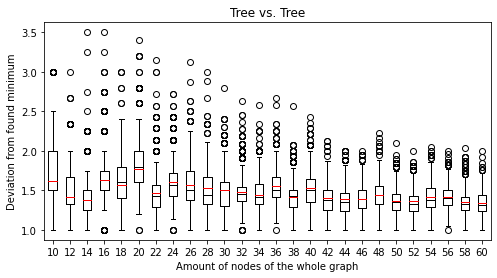

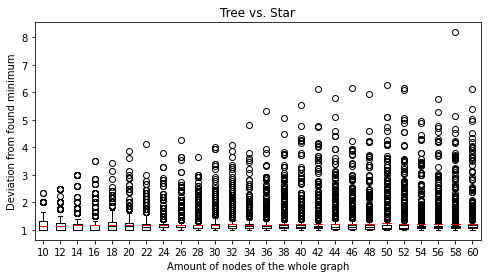

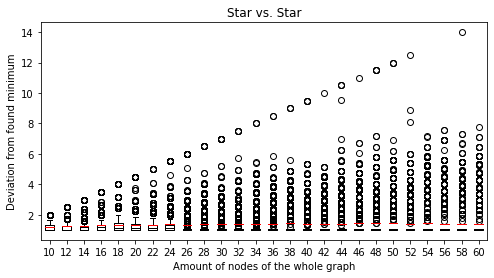

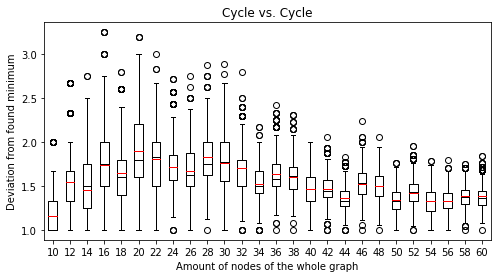

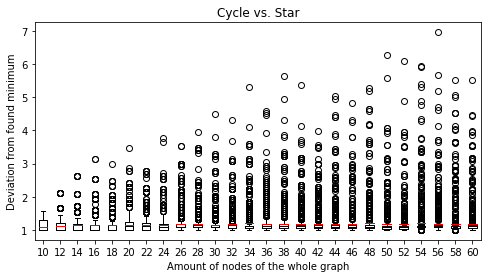

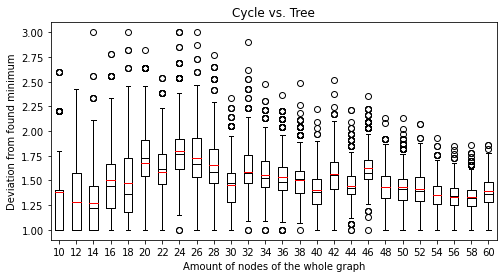

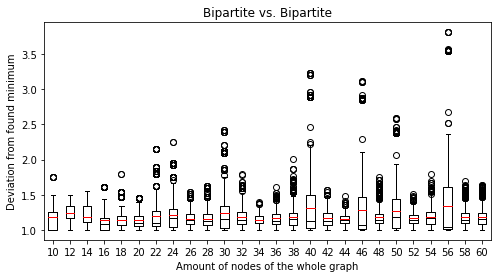

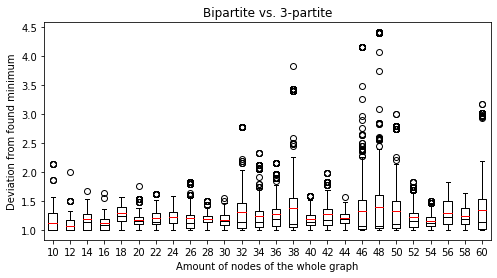

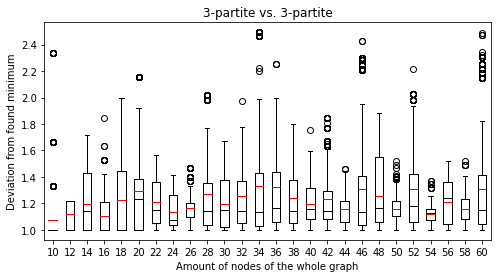

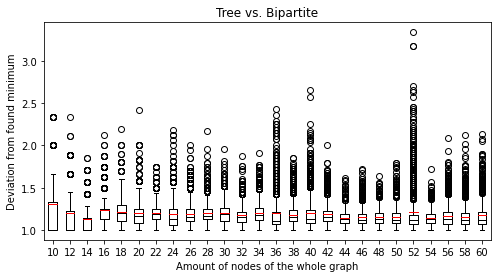

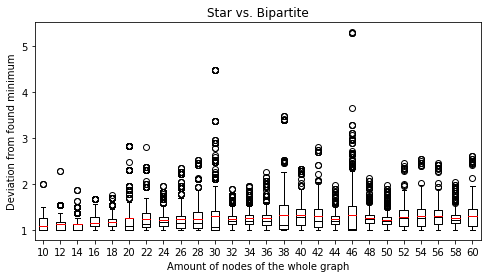

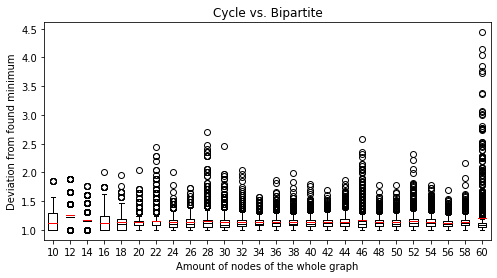

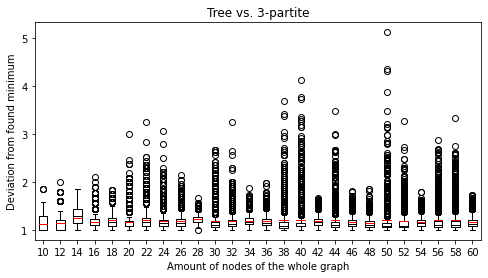

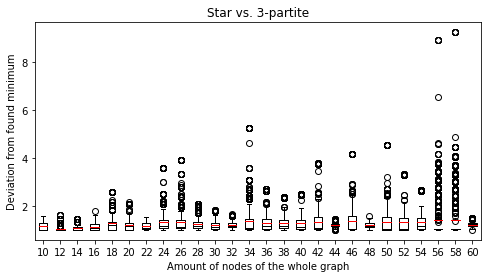

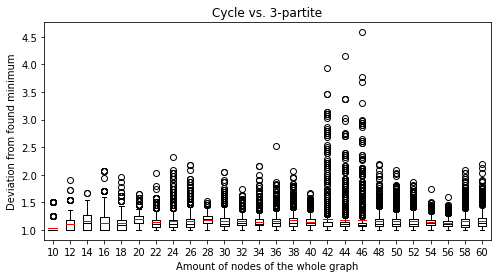

In [22]:
# draw_boxplot(, 'Random vs. random', name='random_random.png')
draw_boxplot(data[4], "Tree vs. Tree", name='tree_tree_1000')
draw_boxplot(data[2], 'Tree vs. Star', name='tree_star_1000')
draw_boxplot(data[1], 'Star vs. Star', name='star_star_1000')
draw_boxplot(data[0], 'Cycle vs. Cycle', name='cyc_cyc_1000')
draw_boxplot(data[3], 'Cycle vs. Star', name='cyc_star_1000')
draw_boxplot(data[5], "Cycle vs. Tree", name='cyc_tree_1000')
draw_boxplot(data[6], 'Bipartite vs. Bipartite', name='bipar_bipar_1000')
draw_boxplot(data[7], 'Bipartite vs. 3-partite', name='bipar_3par_1000')
draw_boxplot(data[8], '3-partite vs. 3-partite', name='threepar_threepar_1000')
draw_boxplot(data[11], "Tree vs. Bipartite", name ='tree_bipar_1000')
draw_boxplot(data[13], 'Star vs. Bipartite', name='star_bipar_1000')
draw_boxplot(data[9], "Cycle vs. Bipartite", name='cyc_bipar_1000')
draw_boxplot(data[12], 'Tree vs. 3-partite', name='tree_3par_1000')
draw_boxplot(data[14], 'Star vs. 3-partite', name='star_3par_1000')
draw_boxplot(data[10], "Cycle vs. 3-partite", name='cyc_3par_1000')

<class 'numpy.float64'>
<class 'numpy.float64'>


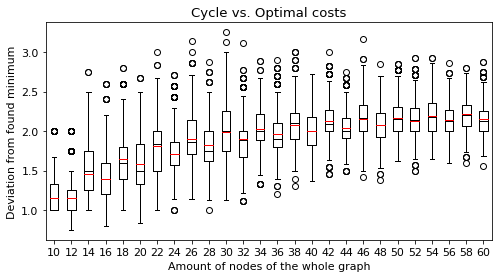

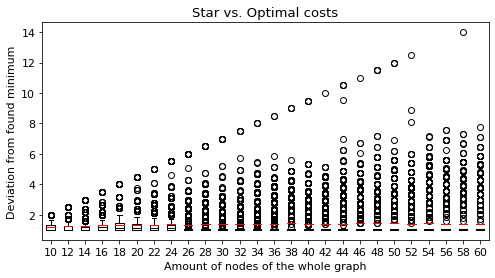

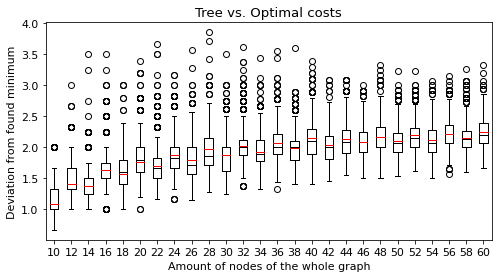

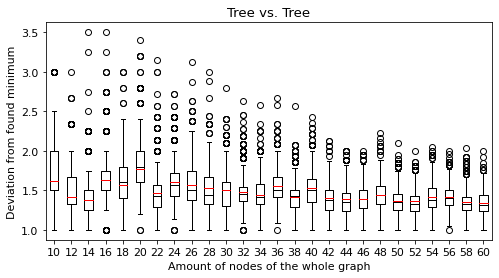

In [24]:
# random vs. random plot
plt.rc('font', size=11)
def boxplot_vs_opt(to_plot, opt,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):
    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/j for i,j in zip(to_plot, opt)], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

tree_tree = data[4]
star_star = data[1]
cyc_cyc = data[0]
opt_star = [np.float64(i-4) for i in range(10,61,2)]
opt_cyc = [2*(np.floor((j/2)/2)+1) for j in range(10,61,2)]
opt_tree = [2*(np.floor((j/2)/2)+ (j/2) % 2) for j in range (10, 61, 2)]

print(type(opt_star[0]))
print(type(opt_cyc[0]))
boxplot_vs_opt(cyc_cyc, opt_cyc, 'Cycle vs. Optimal costs', name='cyc_opt')
boxplot_vs_opt(star_star, opt_star, 'Star vs. Optimal costs', name='star_opt')
boxplot_vs_opt(tree_tree, opt_tree, 'Tree vs. Optimal costs', name='tree_opt')
draw_boxplot(tree_tree, 'Tree vs. Tree', name = 'tree_tree_normmin')

In [41]:
names_opt = ['star_opt', 'cyc_opt']
for i in range(len([star_star, cyc_cyc])):
    scaled = [i/j for i,j in zip([star_star, cyc_cyc][i], [opt_star, opt_cyc][i])]
    if np.max(scaled) > max: max = np.max(scaled)
    if np.max(np.mean(scaled, axis=1)) > max_mean: max_mean = np.max(np.mean(scaled, axis=1))
    if np.sum(np.max(scaled, axis=1)>3) > max_amt: max_amt = np.sum(np.max(scaled, axis=1)>3)
    print(names_opt[i]+'(max/mean/amt > 1):' + str(np.max(scaled)) + '/'+str(np.max(np.mean(scaled, axis=1)))+'/'+str(np.sum(np.max(scaled, axis = 1)>3)))

star_opt(max/mean/amt > 1):14.0/1.4699565217391304/23
cyc_opt(max/mean/amt > 1):3.25/2.2146/4


In [72]:
print(names[0])
print(names[4])
print(names[5])
print(names[14])

cyc_cyc
tree_tree
cyc_tree
star_3par


In [74]:
for i in range(len(data)):
    print(names[i])
    print([np.sign(i-j) for i,j in zip(np.mean(data_puzzle[i], axis=1), np.mean(data[i], axis=1))])

cyc_cyc
[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
star_star
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
tree_star
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
cyc_star
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
tree_tree
[-1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0]
cyc_tree
[-1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
bipar_bipar
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

NameError: name 'erd_ren09' is not defined